In [1]:
import numpy as np
import pandas as pd
import urllib.request
import json
import csv
import os
from bs4 import BeautifulSoup
import sys
import seaborn as sns
import math
from datetime import date
import operator 

from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch


from sklearn.linear_model import LinearRegression
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold # import KFold



In [2]:
dlsTable = pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/Data Files/DLSResoucePercentageMatrix.csv', header=None)

In [3]:
dlsTable

0     1     2     3     4     5     6     7     8    9
0    100.0  93.4  85.1  74.9  62.7  49.0  34.9  22.0  11.9  4.7
1     99.8  93.2  85.0  74.8  62.7  49.0  34.9  22.0  11.9  4.7
2     99.7  93.1  84.9  74.7  62.6  48.9  34.9  22.0  11.9  4.7
3     99.5  93.0  84.8  74.6  62.6  48.9  34.9  22.0  11.9  4.7
4     99.4  92.8  84.7  74.6  62.5  48.9  34.9  22.0  11.9  4.7
5     99.2  92.7  84.6  74.5  62.5  48.9  34.9  22.0  11.9  4.7
6     99.1  92.6  84.5  74.4  62.5  48.9  34.9  22.0  11.9  4.7
7     98.9  92.4  84.4  74.4  62.4  48.9  34.9  22.0  11.9  4.7
8     98.7  92.3  84.3  74.3  62.4  48.8  34.9  22.0  11.9  4.7
9     98.6  92.2  84.2  74.2  62.3  48.8  34.9  22.0  11.9  4.7
10    98.4  92.0  84.0  74.1  62.3  48.8  34.9  22.0  11.9  4.7
11    98.2  91.9  83.9  74.1  62.2  48.8  34.9  22.0  11.9  4.7
12    98.1  91.7  83.8  74.0  62.2  48.8  34.9  22.0  11.9  4.7
13    97.9  91.6  83.7  73.9  62.2  48.7  34.9  22.0  11.9  4.7
14    97.8  91.5  83.6  73.8  62.1  48.7  34.9  22.0  11.9  4.7
15    97.6  91.3  83.5  73.8  62.1  48.7  34.9  22.0  11.9  4.7
16    97.4  91.2  83.4  73.7  62.0  48.7  34.9  22.0  11.9  4.7
17    97.3  91.0  83.3  73.6  62.0  48.7  34.9  22.0  11.9  4.7
18    97.1  90.9  83.2  73.5  61.9  48.6  34.9  22.0  11.9  4.7
19    96.9  90.8  83.1  73.4  61.9  48.6  34.9  22.0  11.9  4.7
20    96.7  90.6  82.9  73.4  61.8  48.6  34.9  22.0  11.9  4.7
21    96.6  90.5  82.8  73.3  61.8  48.6  34.8  22.0  11.9  4.7
22    96.4  90.3  82.7  73.2  61.7  48.6  34.8  22.0  11.9  4.7
23    96.2  90.2  82.6  73.1  61.7  48.5  34.8  22.0  11.9  4.7
24    96.1  90.0  82.5  73.0  61.6  48.5  34.8  22.0  11.9  4.7
25    95.9  89.9  82.4  73.0  61.6  48.5  34.8  22.0  11.9  4.7
26    95.7  89.7  82.3  72.9  61.5  48.5  34.8  22.0  11.9  4.7
27    95.5  89.6  82.1  72.8  61.5  48.5  34.8  22.0  11.9  4.7
28    95.4  89.4  82.0  72.7  61.4  48.4  34.8  22.0  11.9  4.7
29    95.2  89.3  81.9  72.6  61.4  48.4  34.8  22.0  11.9  4.7
..     ...   ...   ...   ...   ...   ...   ...   ...   ...  ...
271   16.6  16.5  16.3  16.0  15.6  15.0  13.9  12.2   9.2  4.6
272   16.1  16.0  15.8  15.5  15.1  14.5  13.6  11.9   9.1  4.6
273   15.6  15.4  15.3  15.0  14.7  14.1  13.2  11.6   8.9  4.6
274   15.0  14.9  14.7  14.5  14.2  13.6  12.8  11.3   8.8  4.5
275   14.5  14.4  14.2  14.0  13.7  13.2  12.4  11.0   8.6  4.5
276   13.9  13.8  13.7  13.5  13.2  12.7  12.0  10.7   8.4  4.5
277   13.4  13.3  13.2  13.0  12.7  12.3  11.6  10.4   8.3  4.5
278   12.8  12.7  12.6  12.5  12.2  11.8  11.2  10.1   8.1  4.4
279   12.3  12.2  12.1  11.9  11.7  11.3  10.8   9.7   7.9  4.4
280   11.7  11.6  11.5  11.4  11.2  10.9  10.3   9.4   7.7  4.3
281   11.1  11.1  11.0  10.9  10.7  10.4   9.9   9.0   7.4  4.3
282   10.6  10.5  10.4  10.3  10.2   9.9   9.5   8.7   7.2  4.2
283   10.0  10.0   9.9   9.8   9.6   9.4   9.0   8.3   6.9  4.2
284    9.4   9.4   9.3   9.3   9.1   8.9   8.5   7.9   6.7  4.1
285    8.9   8.8   8.8   8.7   8.6   8.4   8.1   7.5   6.4  4.0
286    8.3   8.3   8.2   8.2   8.0   7.9   7.6   7.1   6.1  3.9
287    7.7   7.7   7.7   7.6   7.5   7.4   7.1   6.7   5.8  3.8
288    7.2   7.1   7.1   7.0   7.0   6.8   6.6   6.2   5.5  3.7
289    6.6   6.5   6.5   6.5   6.4   6.3   6.1   5.8   5.1  3.6
290    6.0   6.0   5.9   5.9   5.9   5.8   5.6   5.3   4.8  3.4
291    5.4   5.4   5.4   5.3   5.3   5.2   5.1   4.9   4.4  3.2
292    4.8   4.8   4.8   4.8   4.7   4.7   4.6   4.4   4.0  3.0
293    4.2   4.2   4.2   4.2   4.2   4.1   4.0   3.9   3.6  2.8
294    3.6   3.6   3.6   3.6   3.6   3.5   3.5   3.4   3.2  2.5
295    3.0   3.0   3.0   3.0   3.0   3.0   2.9   2.9   2.7  2.2
296    2.4   2.4   2.4   2.4   2.4   2.4   2.4   2.3   2.2  1.9
297    1.8   1.8   1.8   1.8   1.8   1.8   1.8   1.8   1.7  1.5
298    1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2  1.1
299    0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6  0.6
300    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0

[301 rows x 10 columns]

In [4]:
dlsTable[0][2]

99.7

In [5]:
inngs=1
matchinProgressDataFolder = 'C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/'
inningsInProgressOversCombined = pd.read_csv(str(matchinProgressDataFolder)+'inprogressOfInning'+str(inngs)+'_over1_50Records_withAllEncodedFeatures_Combined.csv',header=0)          

inningsInProgressOversCombined.columns#.head(2)

Index(['Continent', 'RemainingWickets', 'bats1CurrOvrBalls',
       'bats1CurrOvrRuns', 'bats1TotalBalls', 'bats1TotalBallsBeforeThisOvr',
       'bats1TotalRuns', 'bats1TotalRunsBeforeThisOvr', 'bats2CurrOvrBalls',
       'bats2CurrOvrRuns', 'bats2TotalBalls', 'bats2TotalBallsBeforeThisOvr',
       'bats2TotalRuns', 'bats2TotalRunsBeforeThisOvr', 'batsmenOfClust_0',
       'batsmenOfClust_1', 'batsmenOfClust_2', 'batsmenOfClust_3',
       'batsmenOfClust_4', 'bowlerOfClust_0', 'bowlerOfClust_1',
       'bowlerOfClust_2', 'bowlerOfClust_3', 'bowlerOfClust_4', 'homeTeam',
       'inning1ProjectedScore', 'inning1RunRate', 'inning1Runs',
       'inning2RunRate', 'inning2Runs', 'inning2RunsExpected',
       'innings1Wickets', 'innings2Wickets', 'matchId', 'onCreasebatsman1',
       'onCreasebatsman2', 'onCreasebowlerOfTheOvr', 'overId', 'team1',
       'team1Cluster', 'team2', 'team2Cluster', 'tossWinner',
       'toss_winner_team', 'totalRunsScoredBeforeThisOvr',
       'totalRunsScoredCu

In [6]:
# oversMeanError= []
# for inngOver in range(1,2):#51):
    
#     inningsInProgressOver = inningsInProgressOversCombined[inningsInProgressOversCombined['overId']==inngOver]
#     for i in range(len(inningsInProgressOver)):
        
#         batsCount=0
#         overRem =0
#         overRemain=0
#         wicketLost=0
#         for b in range(5):
#             batsCount =batsCount+ inningsInProgressOver['batsmenOfClust_'+str(b)]
#         for b in range(5):
#             overRem =overRem+ inningsInProgressOver['bowlerOfClust_'+str(b)]   
            
#         overRemain = 50 - (110 - overRem)  
#         wicketLost = 11- batsCount
#         print(overRemain, wicketLost)
#         print(dlsTable[str(wicketLost)].iloc[overRemain*6])
#         break
#         #absError.append(abs(inningsInProgressOver['inning1ProjectedScore'].iloc[i]- dlsprojectedScoreForThis))
# #     mean_abolute_error(inningsInProgressOver,)
# #     inningsInProgressOver

In [7]:


# #################   Contribution measuring from expectedRuns of an over ############

# #inningFeatureVectorCompletePlayerId = pd.read_csv(str(matchinProgressDataFolder)+'innings'+str(inngs)+'/Results/inprogressOfInning_matchId_'+str(currMatch)+'_'+str(inngs)+'_LR_targetVar_totalRunsScoredCurrentOvr.csv')  


# def findContributionForTeambyProjectionfromFile(currMatchId,inningsId):
    
#     teamBattingContribution={}
    
#     inningFeatureVectorCompletePlayerId = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/worldCup19/contribution_inngs'+str(inningsId)+'_match_'+str(currMatchId)+'.csv')  
    
#     matchLength = len(inningFeatureVectorCompletePlayerId)
#     print('len', len(inningFeatureVectorCompletePlayerId))

    
#     expectedRunsOver=0
        
#     for i in range(len(inningFeatureVectorCompletePlayerId)):
#         k=i
#         if(i==(len(inningFeatureVectorCompletePlayerId)-1)):
#             expectedRunsOver  = (inningFeatureVectorCompletePlayerId['runPredicted'].iloc[i])
#         else:
#              expectedRunsOver = (inningFeatureVectorCompletePlayerId['runPredicted'].iloc[i]- inningFeatureVectorCompletePlayerId['runPredicted'].iloc[i+1])
#         #print('k',k) 
#         #print('expectedRunsOver',expectedRunsOver)
#         inningFeatureVectorCompletePlayerId['expectedRunsforThisOver'].loc[i] =  expectedRunsOver  
            
    
    
#     inningFeatureVectorCompletePlayerId['bats1Contribution']=0
#     inningFeatureVectorCompletePlayerId['bats2Contribution']=0


#     battingPlayers=[]
#     bowlingPlayers=[]
#     #=[]

#     wicketWeight=0.4
#     battingTeamContribution= np.zeros(11)
#     bowlingTeamContribution= np.zeros(11)

#     for k in range(1):
#         for col in inningFeatureVectorCompletePlayerId.columns:
#             if col.startswith('batsman'):
#                 teamBattingContribution[str(inningFeatureVectorCompletePlayerId[col].iloc[k])]=0
#                 battingPlayers.append(inningFeatureVectorCompletePlayerId[col].iloc[k])
#             if col.startswith('bowler'):
#                 teamBowlingContribution[str(inningFeatureVectorCompletePlayerId[col].iloc[k])]=0
#                 bowlingPlayers.append(inningFeatureVectorCompletePlayerId[col].iloc[k])

#     print('team',battingPlayers)

#     runsForThisOver=0
#     for i in range(len(inningFeatureVectorCompletePlayerId)):

#         expectedRunsOver  = (inningFeatureVectorCompletePlayerId['expectedRunsforThisOver'].iloc[i])
#         expectedRunsOverActual=expectedRunsOver
#         wicketCount=0
        
#         bowlerOfOver = (inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i])
#         for col in inningFeatureVectorCompletePlayerId.columns:       ## Remove batsman Cluster ids columns
#             if col.startswith('wicket'):
#                 if((math.isnan(inningFeatureVectorCompletePlayerId[col].iloc[i]))==False):
#                     wicketCount= wicketCount+1
# #                     if(wicketCount>1):
# #                         wicketWeight=wicketWeight+0.08
#                     playerIndex = battingPlayers.index((inningFeatureVectorCompletePlayerId[col].iloc[i]))
#                     battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ int(expectedRunsOverActual*(wicketWeight)*(-1))

#                     playerIndex = bowlingPlayers.index((inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i]))
#                     bowlingTeamContribution[playerIndex] = bowlingTeamContribution[playerIndex]+ int(expectedRunsOverActual*(wicketWeight))
#                     teamBowlingContribution[str(bowlerOfOver)] =teamBowlingContribution[str(bowlerOfOver)]+ (int(expectedRunsOverActual*(wicketWeight))
        
#                     expectedRunsOver = int(expectedRunsOver*(1-wicketWeight))


#         expectedRunsBall = expectedRunsOver/6    
#         expectedRunsForBatsman1 = (inningFeatureVectorCompletePlayerId['bats1CurrOvrBalls'].iloc[i]*expectedRunsBall)
#         expectedRunsForBatsman2 = (inningFeatureVectorCompletePlayerId['bats2CurrOvrBalls'].iloc[i]*expectedRunsBall)
#         batsman1Contribution = (inningFeatureVectorCompletePlayerId['bats1CurrOvrRuns'].iloc[i] -  expectedRunsForBatsman1)
#         batsman2Contribution = (inningFeatureVectorCompletePlayerId['bats2CurrOvrRuns'].iloc[i] - expectedRunsForBatsman2)
        
        
        
#         teamBowlingContribution[str(bowlerOfOver)] =teamBowlingContribution[str(bowlerOfOver)]+ ((-batsman1Contribution) - batsman2Contribution)
        
#         #int(inningFeatureVectorCompletePlayerId['onCreasebatsman1'].iloc[i])
        
        
#         inningFeatureVectorCompletePlayerId['bats1Contribution'].loc[i]=  batsman1Contribution
#         inningFeatureVectorCompletePlayerId['bats2Contribution'].loc[i]=  batsman2Contribution


#         #####   bolwers contribution ####

#         playerIndex = bowlingPlayers.index(inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i])
#         bowlingTeamContribution[playerIndex] = bowlingTeamContribution[playerIndex] +(-1* batsman1Contribution) - batsman2Contribution


#         #####   batsmen contribution #####
#         playerIndex = battingPlayers.index(int(inningFeatureVectorCompletePlayerId['onCreasebatsman1'].iloc[i]))
#         battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ batsman1Contribution
#         playerIndex = battingPlayers.index(inningFeatureVectorCompletePlayerId['onCreasebatsman2'].iloc[i])
#         battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ batsman2Contribution

            
    
#     inningFeatureVectorCompletePlayerId.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/withContributionCols/contribution_inngs'+str(inningsId)+'_match'+str(currMatchId)+'.csv', index=False)
       
#     #(str(matchinProgressDataFolder)+'Results/inprogressOfInning_matchId_'+str(currMatchId)+'_'+str(inningsId)+'_LR__targetVar_PrjectedScore_allOvers_Contribution.csv', index=False)  
#     return battingPlayers,battingTeamContribution,bowlingPlayers,bowlingTeamContribution
    


###   Contribution measuring from expectedRuns of an over -- with Projected Total ############

In [12]:




#inningFeatureVectorCompletePlayerId = pd.read_csv(str(matchinProgressDataFolder)+'innings'+str(inngs)+'/Results/inprogressOfInning_matchId_'+str(currMatch)+'_'+str(inngs)+'_LR_targetVar_totalRunsScoredCurrentOvr.csv')  


def findContributionForTeambyProjectedTotal(currMatchId,inningsId,wicketWt,wicketPenality):
    
    teamBattingContribution={}
    inningFeatureVectorCompletePlayerId = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/projectedTotal/contribution_inngs'+str(inningsId)+'_match_'+str(currMatchId)+'.csv')  

    matchLength = len(inningFeatureVectorCompletePlayerId)
    #print('len I am here', len(inningFeatureVectorCompletePlayerId))
    inningFeatureVectorCompletePlayerId['expectedRunsforThisOver']=0

    
    expectedRunsOver=0
        
    for i in range(len(inningFeatureVectorCompletePlayerId)):
#         k=i
#         if(i==(len(inningFeatureVectorCompletePlayerId)-1)):
#             expectedRunsOver  = 5 #(inningFeatureVectorCompletePlayerId['projectedTotal'].iloc[i])
#         else:
#              expectedRunsOver = (inningFeatureVectorCompletePlayerId['projectedTotal'].iloc[i+1] / inningFeatureVectorCompletePlayerId['projectedTotal'].iloc[i])
        expectedRunsOver = round((inningFeatureVectorCompletePlayerId['projectedTotal'].iloc[i] - inningFeatureVectorCompletePlayerId['totalRunsScoredBeforeThisOvr'].iloc[i])/(51-inningFeatureVectorCompletePlayerId['overId'].iloc[i]),2)
        #print('k',k) 
        #print('expectedRunsOver',expectedRunsOver)
        inningFeatureVectorCompletePlayerId['expectedRunsforThisOver'].loc[i] =  expectedRunsOver  
    
            
    
    
    inningFeatureVectorCompletePlayerId['bats1Contribution']=0
    inningFeatureVectorCompletePlayerId['bats2Contribution']=0
    inningFeatureVectorCompletePlayerId['bowlContribution']=0

    battingPlayers=[]
    bowlingPlayers=[]
    #=[]

  
    battingTeamContribution= np.zeros(11)
    bowlingTeamContribution= np.zeros(11)

    for k in range(1):
        for col in inningFeatureVectorCompletePlayerId.columns:
            if col.startswith('batsman'):
                battingPlayers.append(inningFeatureVectorCompletePlayerId[col].iloc[k])
            if col.startswith('bowler'):
                bowlingPlayers.append(inningFeatureVectorCompletePlayerId[col].iloc[k])

    #print('team',battingPlayers)
    
    matchSummariesLocation= 'C:/python/Scripts/JupyterNotebooks/AllODIs_extractOn11Feb20/'
    list_of_files = os.listdir(matchSummariesLocation)

    for matchFile in list_of_files:
        matchIdinFile = matchFile.split('_')[0]

        if(matchIdinFile.find("new")>=0):
            fileMatchId = matchIdinFile[3:]
        else:
            fileMatchId= matchIdinFile

        #print(fileMatchId,matchId)
        if str(matchId)==str(fileMatchId):# matchIdinFile.contains(str(matchId)):
            #print(matchFile)
            data_file = open(matchSummariesLocation+str(matchFile))

            data = json.load(data_file)

               
                
    
    runsForThisOver=0
    print(bowlingPlayers)
    for i in range(len(inningFeatureVectorCompletePlayerId)):
        
        expectedRunsOver  = (inningFeatureVectorCompletePlayerId['expectedRunsforThisOver'].iloc[i])
        
        if expectedRunsOver<0:
            expectedRunsOver=0
        runsScoredinOvr =  (inningFeatureVectorCompletePlayerId['totalRunsScoredCurrentOvr'].iloc[i])
        #print(i, expectedRunsOver, 'Actual', runsScoredinOvr)
        
        bowlContribution = expectedRunsOver - runsScoredinOvr
        expectedRunsOverActual=expectedRunsOver
        if i< len(inningFeatureVectorCompletePlayerId)-1:
            wicketLoss = (inningFeatureVectorCompletePlayerId['projectedTotal'].iloc[i] - inningFeatureVectorCompletePlayerId['totalRunsScoredBeforeThisOvr'].iloc[i])-(inningFeatureVectorCompletePlayerId['projectedTotal'].iloc[i+1] - inningFeatureVectorCompletePlayerId['totalRunsScoredBeforeThisOvr'].iloc[i+1])
        else:
            wicketLoss=3
        wicketCountInOvr=0
        for col in inningFeatureVectorCompletePlayerId.columns:       ## Remove batsman Cluster ids columns
            wicketWeight= wicketWt #0.65
            if col.startswith('wicket'):
                
                if((math.isnan(inningFeatureVectorCompletePlayerId[col].iloc[i]))==False):
                       
                    playerIndex = battingPlayers.index((inningFeatureVectorCompletePlayerId[col].iloc[i]))
                    
                    currentWicketRuns=0
                    batsmanId = battingPlayers[playerIndex]
                    
                    wicketID = int(inningFeatureVectorCompletePlayerId[col].iloc[i])
                    #print("wicket Down",wicketID )
                    #print(data['teams']['t'+str(inningsId)]['w'])
                    
                    for wicketNo in range(len(data['teams']['t'+str(inningsId)]['w'])):
                        if(data['teams']['t'+str(inningsId)]['w'][wicketNo]['out']==str(wicketID)):
                            outType = data['teams']['t'+str(inningsId)]['w'][wicketNo]['how']
                            print("Out type" ,data['teams']['t'+str(inningsId)]['w'][wicketNo]['how'])
                        
                    if i>0:
                        if inningFeatureVectorCompletePlayerId['onCreasebatsman2'].iloc[i-1]==batsmanId:
                            currentWicketRuns = int(inningFeatureVectorCompletePlayerId['bats2TotalRuns'].iloc[i-1])
                        elif inningFeatureVectorCompletePlayerId['onCreasebatsman1'].iloc[i-1]==batsmanId:
                            currentWicketRuns = int(inningFeatureVectorCompletePlayerId['bats1TotalRuns'].iloc[i-1])
                            
                    print('currentWicketRuns: ', currentWicketRuns, "batsman", batsmanId) 
                    
#                     if(inningFeatureVectorCompletePlayerId['overId'].iloc[i]<10):
#                             wicketWeight= 0.6
#                     wicketCountInOvr= wicketCountInOvr+1
#                     if(wicketCountInOvr>1):
#                         wicketWeight= 1  #wicketWeight+0.1
#                     if currentWicketRuns<5:
#                         wicketWeight=1
                        
                    if currentWicketRuns<5 and (inningFeatureVectorCompletePlayerId['overId'].iloc[i]<20):
                        wicketWeight=1.1
                    
                     
#                   if inningFeatureVectorCompletePlayerId['bats1CurrOvrBalls'].iloc[i]+ inningFeatureVectorCompletePlayerId['bats2CurrOvrBalls'].iloc[i]<6:
#                         bowlBallCont = (round(expectedRunsOver/6),2)*(6-(inningFeatureVectorCompletePlayerId['bats1CurrOvrBalls'].iloc[i]+ inningFeatureVectorCompletePlayerId['bats2CurrOvrBalls'].iloc[i]))
                        
#                     if(i<10):
#                         wicketCredit = wicketPenality[0]
#                     elif(i>=10 and i<20):
#                         wicketCredit = wicketPenality[1]
#                     elif(i>=20 and i<30):
#                         wicketCredit = wicketPenality[2]
#                     elif(i>=30 and i<40):
#                         wicketCredit = wicketPenality[3]
#                     elif(i>=40):
#                         wicketCredit = wicketPenality[4]
                        
                        
#                     if currentWicketRuns<5 and int(inningFeatureVectorCompletePlayerId['overId'].iloc[i])<30:
#                         wicketWeight = 1
                            
                   
                    
                    playerIndex = battingPlayers.index((inningFeatureVectorCompletePlayerId[col].iloc[i]))
                    
                    battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ (-1*(wicketLoss)) #(round(expectedRunsOverActual*(wicketWeight),2))*(-1)
                    
#                     currentWicketRuns = inningFeatureVectorCompletePlayerId[inningFeatureVectorCompletePlayerId['onCreasebatsman1']==playerIndex].iloc[i-1]
                    
                        #print("Oncreate batsman", batsmanId, "batsman runs", currentWicketRuns) 
                   
                        
#                     if currentWicketRuns>25 and currentWicketRuns<45 :
#                         wicketWeight= 0.6
#                     elif currentWicketRuns>45:
#                         wicketWeight= 0.75
#                     if int(inningFeatureVectorCompletePlayerId['overId'].iloc[i])>45:
#                         wicketWeight=0.3
                    
                    if outType !="run out":
                        playerIndex = bowlingPlayers.index((inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i]))

                        bowlingTeamContribution[playerIndex] = bowlingTeamContribution[playerIndex]+ wicketLoss # (round(expectedRunsOverActual*(wicketWeight),2))
                    else:
                        print("Run Out")
            
            
                    expectedRunsOver = round(expectedRunsOver*(1-wicketWeight),2)


        expectedRunsBall = round(expectedRunsOver/(6-wicketCountInOvr) ,2)  
        expectedRunsForBatsman1 = (inningFeatureVectorCompletePlayerId['bats1CurrOvrBalls'].iloc[i]*expectedRunsBall)
        expectedRunsForBatsman2 = (inningFeatureVectorCompletePlayerId['bats2CurrOvrBalls'].iloc[i]*expectedRunsBall)
        batsman1Contribution = (inningFeatureVectorCompletePlayerId['bats1CurrOvrRuns'].iloc[i] -  expectedRunsForBatsman1)
        batsman2Contribution = (inningFeatureVectorCompletePlayerId['bats2CurrOvrRuns'].iloc[i] - expectedRunsForBatsman2)

        playerIndex = bowlingPlayers.index((inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i]))
        bowlingTeamContribution[playerIndex] = bowlingTeamContribution[playerIndex]+ (bowlContribution)#expectedRunsOver*(wicketWeight))

        
#         if inningFeatureVectorCompletePlayerId['bats1CurrOvrBalls'].iloc[i]>0:
#             batsman1Contribution = ((inningFeatureVectorCompletePlayerId['bats1CurrOvrRuns'].iloc[i]/inningFeatureVectorCompletePlayerId['bats1CurrOvrBalls'].iloc[i])*  expectedRunsOver)
#         else:
#             batsman1Contribution =0
        
#         if inningFeatureVectorCompletePlayerId['bats2CurrOvrBalls'].iloc[i]>0:
#             batsman2Contribution = ((inningFeatureVectorCompletePlayerId['bats2CurrOvrRuns'].iloc[i] /inningFeatureVectorCompletePlayerId['bats2CurrOvrBalls'].iloc[i])*  expectedRunsOver)
#         else:
#             batsman2Contribution=0
            
        
        
        
        
        
        
        playerIndex = bowlingPlayers.index(inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i])
        bowlCont = bowlingTeamContribution[playerIndex]
        
        print("Over ",i+1, "bowl cont",bowlCont)
        
        inningFeatureVectorCompletePlayerId['bats1Contribution'].loc[i]=  batsman1Contribution
        inningFeatureVectorCompletePlayerId['bats2Contribution'].loc[i]=  batsman2Contribution
        inningFeatureVectorCompletePlayerId['bowlContribution'].loc[i]=  bowlCont

        #####   bolwers contribution ####
        
        #bowlContribution = (1-expectedRunsOver)*runsScoredinOvr 
        
      

#         playerIndex = bowlingPlayers.index(inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i])
#         bowlingTeamContribution[playerIndex] = bowlingTeamContribution[playerIndex] +(-* batsman1Contribution) - batsman2Contribution


        #####   batsmen contribution #####
        playerIndex = battingPlayers.index(int(inningFeatureVectorCompletePlayerId['onCreasebatsman1'].iloc[i]))
        battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ batsman1Contribution
        playerIndex = battingPlayers.index(inningFeatureVectorCompletePlayerId['onCreasebatsman2'].iloc[i])
        battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ batsman2Contribution

            
    print('Here in contribution')
    inningFeatureVectorCompletePlayerId.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/projectedTotal_ContributionCols_currOvrProj/contribution_inngs'+str(inningsId)+'_match_'+str(currMatchId)+'.csv', index=False)
    
    print("Bowling  Contribution: ",bowlingPlayers,bowlingTeamContribution)
    #(str(matchinProgressDataFolder)+'Results/inprogressOfInning_matchId_'+str(currMatchId)+'_'+str(inningsId)+'_LR__targetVar_PrjectedScore_allOvers_Contribution.csv', index=False)  
    return battingPlayers,battingTeamContribution,bowlingPlayers,bowlingTeamContribution
    


##   Contribution measuring from expectedRuns of an over -- Projected Remainings
############

In [13]:


#################   Contribution measuring from expectedRuns of an over ############

#inningFeatureVectorCompletePlayerId = pd.read_csv(str(matchinProgressDataFolder)+'innings'+str(inngs)+'/Results/inprogressOfInning_matchId_'+str(currMatch)+'_'+str(inngs)+'_LR_targetVar_totalRunsScoredCurrentOvr.csv')  


def findContributionForTeambyProjectionfromFile(currMatchId,inningsId,wicketWt):
    
    teamBattingContribution={}
    inningFeatureVectorCompletePlayerId = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/allmatches_RandomForest_ProjectedTotal/contribution_inngs'+str(inningsId)+'_match_'+str(currMatchId)+'.csv')  
    #allmatches_KnnSimWieghted_ProjectedTotal
    matchLength = len(inningFeatureVectorCompletePlayerId)
 
    matchId=currMatchId
    inningFeatureVectorCompletePlayerId['expectedRunsforThisOver']=0

    
    expectedRunsOver=0
        
    for i in range(len(inningFeatureVectorCompletePlayerId)):
#         if(i==(len(inningFeatureVectorCompletePlayerId)-1)):
#             expectedRunsOver  = (inningFeatureVectorCompletePlayerId['runPredicted'].iloc[i])
#         else:
#              expectedRunsOver = (inningFeatureVectorCompletePlayerId['runPredicted'].iloc[i]- inningFeatureVectorCompletePlayerId['runPredicted'].iloc[i+1])
       
        if(i==(len(inningFeatureVectorCompletePlayerId)-1)):
        
            expectedRunsOver = 7 #(inningFeatureVectorCompletePlayerId['projectedTotal'].iloc[i] - inningFeatureVectorCompletePlayerId['totalRunsScoredBeforeThisOvr'].iloc[i])
        #expectedRunsOver = (inningFeatureVectorCompletePlayerId['projectedTotal'].iloc[i+1] / inningFeatureVectorCompletePlayerId['projectedTotal'].iloc[i])
      
        else:
            expectedRunsOver = round((inningFeatureVectorCompletePlayerId['projectedTotal_randForest'].iloc[i] - inningFeatureVectorCompletePlayerId['totalRunsScoredBeforeThisOvr'].iloc[i]) - (inningFeatureVectorCompletePlayerId['projectedTotal_randForest'].iloc[i+1] - inningFeatureVectorCompletePlayerId['totalRunsScoredBeforeThisOvr'].iloc[i+1]))
      
        inningFeatureVectorCompletePlayerId['expectedRunsforThisOver'].loc[i] =  expectedRunsOver  
            
    
    
    inningFeatureVectorCompletePlayerId['bats1Contribution']=0
    inningFeatureVectorCompletePlayerId['bats2Contribution']=0


    battingPlayers=[]
    bowlingPlayers=[]


  
    battingTeamContribution= np.zeros(11)
    bowlingTeamContribution= np.zeros(11)

    battingTeam ={}
    bowlingTeam={}
    for k in range(1):
        for col in inningFeatureVectorCompletePlayerId.columns:
            if col.startswith('batsman'):
                battingTeam[inningFeatureVectorCompletePlayerId[col].iloc[k]]=0
            if col.startswith('bowler'):
                bowlingTeam[str(inningFeatureVectorCompletePlayerId[col].iloc[k])]=0

    for k in range(1):
        for col in inningFeatureVectorCompletePlayerId.columns:
            if col.startswith('batsman'):
                battingPlayers.append(inningFeatureVectorCompletePlayerId[col].iloc[k])
            if col.startswith('bowler'):
                bowlingPlayers.append((inningFeatureVectorCompletePlayerId[col].iloc[k]))

    
    #print(battingTeam)
    matchSummariesLocation= 'C:/python/Scripts/JupyterNotebooks/AllODIs_extractOn11Feb20/'
    list_of_files = os.listdir(matchSummariesLocation)

    for matchFile in list_of_files:
        matchIdinFile = matchFile.split('_')[0]

        if(matchIdinFile.find("new")>=0):
            fileMatchId = matchIdinFile[3:]
        else:
            fileMatchId= matchIdinFile

        #print(fileMatchId,matchId)
        if str(matchId)==str(fileMatchId):# matchIdinFile.contains(str(matchId)):
            #print(matchFile)
            data_file = open(matchSummariesLocation+str(matchFile))

            data = json.load(data_file)

               
                
    
    runsForThisOver=0

    for i in range(len(inningFeatureVectorCompletePlayerId)):
    
        wicketWeight= wicketWt #0.65
        expectedRunsOver  = (inningFeatureVectorCompletePlayerId['expectedRunsforThisOver'].iloc[i])
        runsScoredinOvr =  (inningFeatureVectorCompletePlayerId['totalRunsScoredCurrentOvr'].iloc[i])
    
        bowlContribution = expectedRunsOver - runsScoredinOvr
        expectedRunsOverActual=expectedRunsOver
        wicketCountInOvr=0
        for col in inningFeatureVectorCompletePlayerId.columns:       ## Remove batsman Cluster ids columns
            
            if col.startswith('wicket'):
                if((math.isnan(inningFeatureVectorCompletePlayerId[col].iloc[i]))==False):
                    playerIndex = battingPlayers.index((inningFeatureVectorCompletePlayerId[col].iloc[i]))
                    
                    currentWicketRuns=0
                    batsmanId = battingPlayers[playerIndex]
                    
                    wicketID = int(inningFeatureVectorCompletePlayerId[col].iloc[i])
                   
                    
                    for wicketNo in range(len(data['teams']['t'+str(inningsId)]['w'])):
                        if(data['teams']['t'+str(inningsId)]['w'][wicketNo]['out']==str(wicketID)):
                            outType = data['teams']['t'+str(inningsId)]['w'][wicketNo]['how']
                            #print("Out type" ,data['teams']['t'+str(inningsId)]['w'][wicketNo]['how'])
                        
                    if i>0:
                        if inningFeatureVectorCompletePlayerId['onCreasebatsman2'].iloc[i-1]==batsmanId:
                            currentWicketRuns = int(inningFeatureVectorCompletePlayerId['bats2TotalRuns'].iloc[i-1])
                        elif inningFeatureVectorCompletePlayerId['onCreasebatsman1'].iloc[i-1]==batsmanId:
                            currentWicketRuns = int(inningFeatureVectorCompletePlayerId['bats1TotalRuns'].iloc[i-1])
                            
                    #print('currentWicketRuns: ', currentWicketRuns, "batsman", batsmanId)        
#                     if(inningFeatureVectorCompletePlayerId['overId'].iloc[i]<15):
#                             wicketWeight= 0.75
                    wicketCountInOvr= wicketCountInOvr+1
#                     if(wicketCountInOvr>1):
#                         wicketWeight=wicketWeight+0.2
                        
#                     if currentWicketRuns<5 and int(inningFeatureVectorCompletePlayerId['overId'].iloc[i])<=10:
#                         wicketWeight = 1.2
#                     if currentWicketRuns<5 and int(inningFeatureVectorCompletePlayerId['overId'].iloc[i])>10 and  int(inningFeatureVectorCompletePlayerId['overId'].iloc[i])<30:
#                         wicketWeight = 1 
                                                
                    playerIndex = battingPlayers.index((inningFeatureVectorCompletePlayerId[col].iloc[i]))               
                    battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ (round(expectedRunsOverActual*(wicketWeight)*(-1),2))
                    
                    
                    battingTeam[(inningFeatureVectorCompletePlayerId[col].iloc[i])] = battingTeam[(inningFeatureVectorCompletePlayerId[col].iloc[i])] +round(expectedRunsOverActual*(wicketWeight)*(-1),2) 
                        
                        
                        
#                     if currentWicketRuns>25 and currentWicketRuns<45 :
#                         wicketWeight= 0.6
#                     elif currentWicketRuns>45:
#                         wicketWeight= 0.75
#                     if int(inningFeatureVectorCompletePlayerId['overId'].iloc[i])>45:
#                         wicketWeight=0.4
                    
                    if outType !="run out":
                        playerIndex = bowlingPlayers.index((inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i]))

                        bowlingTeamContribution[playerIndex] = bowlingTeamContribution[playerIndex]+ (round(expectedRunsOverActual*(wicketWeight),2))
                        #bowlingTeam[str(inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i])]= bowlingTeam[str(inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i])]+ (round(expectedRunsOverActual*(wicketWeight)),2)
                    
                    else:
                        print("Run Out")
            
            
                    expectedRunsOver = int(expectedRunsOver*(1-wicketWeight))


        expectedRunsBall = round(expectedRunsOver/(6-wicketCountInOvr) ,2)  
        expectedRunsForBatsman1 = (inningFeatureVectorCompletePlayerId['bats1CurrOvrBalls'].iloc[i]*expectedRunsBall)
        expectedRunsForBatsman2 = (inningFeatureVectorCompletePlayerId['bats2CurrOvrBalls'].iloc[i]*expectedRunsBall)
        batsman1Contribution = (inningFeatureVectorCompletePlayerId['bats1CurrOvrRuns'].iloc[i] -  expectedRunsForBatsman1)
        batsman2Contribution = (inningFeatureVectorCompletePlayerId['bats2CurrOvrRuns'].iloc[i] - expectedRunsForBatsman2)

        inningFeatureVectorCompletePlayerId['bats1Contribution'].loc[i]=  batsman1Contribution
        inningFeatureVectorCompletePlayerId['bats2Contribution'].loc[i]=  batsman2Contribution


        #####   bolwers contribution ####
        playerIndex = bowlingPlayers.index((inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i]))
        bowlingTeamContribution[playerIndex] = bowlingTeamContribution[playerIndex]+ (bowlContribution)  #expectedRunsOver*(wicketWeight))

        #bowlingTeam[str(inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i])]= bowlingTeam[str(inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i])]+ (bowlContribution)#
        
        


        #####   batsmen contribution #####
        playerIndex = battingPlayers.index(int(inningFeatureVectorCompletePlayerId['onCreasebatsman1'].iloc[i]))
        battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ batsman1Contribution
        playerIndex = battingPlayers.index(inningFeatureVectorCompletePlayerId['onCreasebatsman2'].iloc[i])
        battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ batsman2Contribution
        
        
        battingTeam[(inningFeatureVectorCompletePlayerId['onCreasebatsman1'].iloc[i])] = battingTeam[(inningFeatureVectorCompletePlayerId['onCreasebatsman1'].iloc[i])] +round(batsman1Contribution,2) 
        
        battingTeam[(inningFeatureVectorCompletePlayerId['onCreasebatsman2'].iloc[i])] = battingTeam[(inningFeatureVectorCompletePlayerId['onCreasebatsman2'].iloc[i])] +round(batsman1Contribution,2) 
        
                        
        
        
    print("Bowling players: ",bowlingPlayers, " Contribution: ",bowlingTeamContribution,  " Dictionary: ", bowlingTeam)
    #print("Batting: ", battingTeam)            
    #print('Here in contribution')
    inningFeatureVectorCompletePlayerId.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/allmatches_RandomForest_ProjectedTotal_ContributionCols/contribution_inngs'+str(inningsId)+'_match_'+str(currMatchId)+'.csv', index=False)
       
    #(str(matchinProgressDataFolder)+'Results/inprogressOfInning_matchId_'+str(currMatchId)+'_'+str(inningsId)+'_LR__targetVar_PrjectedScore_allOvers_Contribution.csv', index=False)  
    return battingPlayers,battingTeamContribution,bowlingPlayers,bowlingTeamContribution
    


In [16]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
def findPlayersClust(playersContributions,distThresh): 
    #print("cluster," list((sorted_palyersAllPlayersContribution.keys()).index([str(manOfMatch)])
    cont = np.array(playersContributions)# list(playersContributions.values()))
    clustering = KMeans(n_clusters=9, random_state=0).fit(np.reshape(cont,(-1,1)))
    
    #clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.6*distThresh).fit(np.reshape(cont,(-1,1)))
    #print("Clustering ",  kmeans.labels_)
                          
    return clustering.labels_ #playersContributions

### Finding contribution scores the given match ids 

In [ ]:
#manOfMatchRecords  = pd.read_csv('F:/LUMS/Cricket Data/manOfTheMatch_ODI_2003_15.csv')

#manOfMatchRecords  = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfSeries15_19_feasibleSeries_withPlayerIds.csv')

manOfMatchRecords  = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/allMatches_MoM_Details.csv')

#manOfMatchRecordsTrain, manOfMatchRecords =  train_test_split(manOfMatchRecordsAll,test_size=0.35, random_state=100)

#print("test Data", len(manOfMatchRecords))
manOfMatchAccuracyFile = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_Accuracy_withProjectedTotal_RandForest.csv','w')
manOfMatchAccuracyFile.write('matchCount,pos0in11,pos1in11,posin11Mean,contDiffMeanin11,pos0in22,pos1in22,posin22Mean,contDiffMeanin22,wicketWeight,bowlWeight\n')


wicketPenality=[4,4,3,3,2]
wicketsWeight =[1,0.9,0.8,0.6,0.5,0.3]#[1,0.9,0.85,0.7,0.4,0.5,0.6]#,0.85,0.9]# [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.70,0.8,0.9]
bowlingContWeight =[0.8,0.5,0.2]#[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]#,0.9,1]#5,0.40,0.50]#[0,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]



# matchIds =[423793,426428,446957,455234,467886,461569,439151,578625,65662,256614,430887,520601,64859,64861,578618,350046,433596,433564,239917,902643,238198,489217,667649,65638,249213,291365,518965,446968,
#           211425,430889,860277,257771,319134,249748,433586,343732,514026,489224,65642,667897,656437,
#           386534,636162,567358,293078,249752,597925,474469,860269,415282,461569]
# #226375,


matchSummariesLocation= 'C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/worldCup19/'

list_of_files = os.listdir(matchSummariesLocation)


testData_matches = pd.read_csv("C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/inprogressOfInning1_projectionCombined_AllMatches.csv")




#matchIds =[1072310,1072311,1072312,1072313,1072314]
inningsDataComplete = testData_matches#pd.read_csv(str(matchinProgressDataFolder)+'innings1/inprogress_Inng1_over1_50Records_2001_19_withBeforeOverInfo.csv')  

playerData = pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/Data Files/All_Players.csv')



matchIdsReq = [1144516]#[1115795]# [1144516,1144987,895813,914235,1022357,1098208,1098210,1120289,1144509,1144998,1152845,1153695,902645,932853]


match=0
errorMatches=[]
palyersAndContributions = {}    
#for fileName in list_of_files:

matchRecord = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfSeries15_19_feasibleSeries_withPlayerIds.csv')  

#contributionCalFileMatches = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_current_bowlWt_0.25_wicketWeight_0.4normal_weightedsimKNN_1.csv')  
allFilteredMatches = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled//innings1/filteredMatches_1_All.csv')  



for bowlWeight in bowlingContWeight:
    for wicktWt in wicketsWeight:
        
        manOfMatchPredDataFile = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_ProjectedTotal_bowlWt_'+str(bowlWeight)+'_wicketWeight_'+str(wicktWt)+'randomForest_testData.csv','w')
        manOfMatchPredDataFile.write('matchId,manOfTheMatch,momName,team1,team2,year,winnerTeam,topContClust,MoMClust,')


        manOfMatchPredDataFile.write('momPosInTeam,contDiffTopTeam,MoMteamContMean,ContStd,')
        manOfMatchPredDataFile.write('momPosInAll,contDiffOvrAll,')
        for i in range(1,23):
            manOfMatchPredDataFile.write('player_'+str(i)+','+'cont_'+str(i)+',')
        manOfMatchPredDataFile.write('\n')    




        for matID in testData_matches['matchId'].unique():#range(65629,65643):#  allFilteredMatches['matchId']:#contributionCalFileMatches['matchId']: # matchIdsReq:#  range(65629,65643):# range(1):#fileName in list_of_files:   [895813]:#
            #fileName='65642_Australia_England_2_2003.json'
            #lastVal = fileName.split('_')[3]
            matchId=matID #['65642'] #lastVal.split('.')[0]

            #print('MatchId ',matchId)
            match= match+1

            try:
                if 1==1:#manOfMatchRecords[manOfMatchRecords['match_id']==int(matchId)]['year'].iloc[0]>=2015: # 1==1:#matchId!=1022361:#if (manOfMatchRecords['mom_id'].iloc[match]!='index' and  manOfMatchRecords['match_id'].iloc[match]< 1144513) :#  try: # 
                    if(match%50==0):
                        print('Done', match)
                    team1Winner=True

                    
                    currMatchId =  int(matchId)# manOfMatchRecords['match_id'].iloc[match] # matchIds[match]#238189 # 237568# 247505 int(len(manOfMatchRecords)
                    manOfMatch = manOfMatchRecords[manOfMatchRecords['matchId']==currMatchId]['mom_id'].iloc[0]   #33335 # 36185# 49289 # manOfMatchRecords['mom_id'].iloc[match]
                    inningsDataCompleteCurrMatch = inningsDataComplete[inningsDataComplete['matchId']==currMatchId].iloc[0]


                    print('currMatchId',currMatchId,'manOfMatch',manOfMatch)
                   
                    
                    team1Players,team1battingContribution,team2Players,team2bolwingContribution  =  findContributionForTeambyProjectionfromFile(int(currMatchId),1,wicktWt) 
                    # findContributionForTeambyProjectedTotal(int(currMatchId),1,wicktWt,wicketPenality) #
                    team2Players,team2battingContribution,team1Players,team1bolwingContribution   =  findContributionForTeambyProjectionfromFile(int(currMatchId),2,wicktWt) 

                    
                        
                     #findContributionForTeambyProjectedTotal(int(currMatchId),2,wicktWt,wicketPenality)
#                     except:
#                         print("Error in contribution cal")
                    #break
                    #print(team1Players)
                    #print(team1battingContribution,team1bolwingContribution)
                    #print(team2Players)
                    #print(team2battingContribution,team2bolwingContribution)
                    
                    
#                     team1battingContribution = np.tanh(team1battingContribution)
#                     team1bolwingContribution = np.tanh(team1bolwingContribution)
#                     team2battingContribution = np.tanh(team2battingContribution)
#                     team2bolwingContribution = np.tanh(team2bolwingContribution)
                    
                    
# #                     for val in range(len(team1battingContribution)):
#                         ex = np.exp(team1battingContribution)
#                         e_x= np.exp(-1*team1battingContribution)
                        
#                         team1battingContribution
                        
#                     bothTeamBatContribution =np.zeros(22)
#                     bothTeamBowlContribution =np.zeros(22)
#                     k=0
#                     for i in range(22):
#                         if i <11:
#                             bothTeamBatContribution[i]= team1battingContribution[i]
#                         else:
#                             bothTeamBatContribution[i] =team2battingContribution[k]
#                             k=k+1
                            
#                     k=0        
#                     for i in range(22):
#                         if i <11:
#                             bothTeamBowlContribution[i]= team1bolwingContribution[i]
#                         else:
#                             bothTeamBowlContribution[i] =team2bolwingContribution[k]
#                             k=k+1
                            
                            
#                     avgCont = team1battingContribution.mean()
#                     stdCont  = team1battingContribution.std()
                    
#                     minCont = team1battingContribution.min() 
#                     maxCont  = team1battingContribution.max()
                    
#                     for i in range(11):
#                         team1battingContribution[i]= ((team1battingContribution[i]-avgCont)/stdCont)  #(maxCont -minCont))
                               
#                     avgCont = team2battingContribution.mean()
#                     stdCont  = team2battingContribution.std()
                    
#                     minCont = team2battingContribution.min()
#                     maxCont  = team2battingContribution.max()
                        
#                     for i in range(11):
#                         team2battingContribution[i]= ((team2battingContribution[i]-avgCont)/stdCont)  #(maxCont -minCont))
                    
        
#                     avgCont = team1bolwingContribution.mean() 
#                     stdCont  = team1bolwingContribution.std()
                
#                     minCont = team1bolwingContribution.min()
#                     maxCont  = team1bolwingContribution.max()
#                     for i in range(11):
#                         team1bolwingContribution[i]= ((team1bolwingContribution[i]-avgCont)/stdCont) 
#                         #team1bolwingContribution[i]= ((team1bolwingContribution[i]-minCont)/(maxCont -minCont))
                    
#                     avgCont = team2bolwingContribution.mean() 
#                     stdCont  = team2bolwingContribution.std()
                    
#                     minCont = team2bolwingContribution.min()
#                     maxCont  = team2bolwingContribution.max()
#                     for i in range(11):
#                         team2bolwingContribution[i]= ((team2bolwingContribution[i]-avgCont)/stdCont)                              
#                         #team2bolwingContribution[i]= ((team2bolwingContribution[i]-minCont)/(maxCont -minCont))
                     
# #                     #### Both teams combined ####
#                     avgCont = bothTeamBatContribution.mean() 
#                     stdCont  = bothTeamBatContribution.std()
                
#                     minCont = team1bolwingContribution.min()
#                     maxCont  = team1bolwingContribution.max()
#                     for i in range(11):
#                         bothTeamBatContribution[i]= ((bothTeamBatContribution[i]-avgCont)/stdCont) 
#                         #team1bolwingContribution[i]= ((team1bolwingContribution[i]-minCont)/(maxCont -minCont))
                    
#                     avgCont = bothTeamBowlContribution.mean() 
#                     stdCont  = bothTeamBowlContribution.std()
                    
#                     minCont = team2bolwingContribution.min()
#                     maxCont  = team2bolwingContribution.max()
#                     for i in range(11):
#                         bothTeamBowlContribution[i]= ((bothTeamBowlContribution[i]-avgCont)/stdCont)                              
#                         #team2bolwingContribution[i]= ((team2bolwingContribution[i]-minCont)/(maxCont -minCont))
                    
                    
                         
                                      
                                    

                    team1NetContribution = np.zeros(11)
                    team2NetContribution = np.zeros(11)
                    
                    
#                     for i in range(len(team1Players)): #  (1-bowlWeight)*    bowlWeight*
#                         team1NetContribution[i]=    team1battingContribution[i] + bowlWeight*team1bolwingContribution[i]
                    
#                     avgCont = team1NetContribution.mean()
#                     stdCont  = team1NetContribution.std()                
                
#                     for i in range(11):
#                         team1NetContribution[i]= ((team1NetContribution[i]-avgCont)/stdCont)  #(maxCont -minCont))
                    
        
                    
#                     for i in range(len(team2Players)): #  (1-bowlWeight)*    
#                         team2NetContribution[i]=    team2battingContribution[i] +  bowlWeight*team2bolwingContribution[i]
                    
#                     avgCont = team2NetContribution.mean()
#                     stdCont  = team2NetContribution.std()                
                
#                     for i in range(11):
#                         team2NetContribution[i]= ((team2NetContribution[i]-avgCont)/stdCont)  #(maxCont -minCont))
                    
        
                    
                    palyersAndContributionsInMatch1 = {} 
                    palyersAndContributionsInMatch2 = {}
                    
                    print("Bat Contribution: ",team1battingContribution )
                    print("Bowl Contribution: ",team1bolwingContribution )
                    #palyersAndContributions['c1']=10
                    
                    for i in range(len(team1Players)): #(1-bowlWeight)*    bowlWeight*
                        team1NetContribution[i] =  team1battingContribution[i] + bowlWeight*team1bolwingContribution[i]
                        playerId=team1Players[i]
                        try:#if str(playerId) in palyersAndContributions:         
                            palyersAndContributions[str(playerId)]=(palyersAndContributions[str(team1Players[i])]+  team1NetContribution[i])
                            palyersAndContributionsInMatch1[str(playerId)]=(palyersAndContributionsInMatch1[str(team1Players[i])]+  team1NetContribution[i])

                        except  KeyError: #else:
                            palyersAndContributions[str(playerId)]= team1NetContribution[i]
                            palyersAndContributionsInMatch1[str(playerId)]= team1NetContribution[i]


                    for i in range(len(team2Players)): #  (1-bowlWeight)*    bowlWeight*
                        team2NetContribution[i]=  team2battingContribution[i] +  bowlWeight*team2bolwingContribution[i]
                        
                        playerId = team2Players[i]
                        try:#if str(playerId) in palyersAndContributions:         
                            palyersAndContributions[str(playerId)]=(palyersAndContributions[str(team2Players[i])]+  team2NetContribution[i])
                            palyersAndContributionsInMatch2[str(playerId)]=(palyersAndContributionsInMatch2[str(team2Players[i])]+  team2NetContribution[i])

                        except  KeyError: #else:
                            palyersAndContributions[str(playerId)]= team2NetContribution[i]
                            palyersAndContributionsInMatch2[str(playerId)]= team2NetContribution[i]

                    
                    
                    allPlayersContribution = {**palyersAndContributionsInMatch1 , **palyersAndContributionsInMatch2}
#                     allPlayers =team1Players + team2Players
#                     #print(allPlayers)
#                     allPlayersContribution = {}
#                     teamsNetContribution = np.zeros(22)
                     
#                     for i in range(len( allPlayers)): #(1-bowlWeight)*    bowlWeight*
#                         teamsNetContribution[i] =   (1-bowlWeight)* bothTeamBatContribution[i] + bowlWeight* bothTeamBowlContribution[i]
#                         playerId= allPlayers[i]
#                         try:#if str(playerId) in palyersAndContributions:         
                           
#                             allPlayersContribution[str(playerId)]=(allPlayersContribution[str(allPlayers[i])]+  teamsNetContribution[i])

#                         except  KeyError: #else:
                           
#                             allPlayersContribution[str(playerId)]= teamsNetContribution[i]

                    
                   

                    
                    sorted_palyersAllPlayersContribution={}
                    sorted_palyersAllPlayersContribution = dict(sorted(allPlayersContribution.items(), key=operator.itemgetter(1),reverse=True))
                   
                    sorted_palyersAndContributionsInMatch1 ={}
                    sorted_palyersAndContributionsInMatch1 = dict(sorted(palyersAndContributionsInMatch1.items(), key=operator.itemgetter(1), reverse=True))
                    #print("Match Contribution team", sorted_palyersAndContributionsInMatch1)

                    sorted_palyersAndContributionsInMatch2={}
                    sorted_palyersAndContributionsInMatch2 = dict(sorted(palyersAndContributionsInMatch2.items(), key=operator.itemgetter(1),reverse=True))
                    #print("Match Contribution team", sorted_palyersAndContributionsInMatch2)


                    if(team1Players==0 or team2Players==0):
                        manOfMatchPredDataFile.write('0,')
                        #manOfMatchPredDataFile.write('-1\n')

                    else:

                        
                        highestRaterTeam1 = team1Players[list(team1NetContribution).index(team1NetContribution.max())]
                        highestRaterTeam2 = team2Players[list(team2NetContribution).index(team2NetContribution.max())]


                        #team1PlayersContributionSorted = team1PlayersContribution#.sort()
                        team1PlayersContributionSorted= -np.sort(-team1NetContribution)
                        team2PlayersContributionSorted= -np.sort(-team2NetContribution)

                        #manOfMatchPredDataFile.write('1,')


                        #print('team1Highest',team1Players[list(team1NetContribution).index(team1NetContribution.max())])
                        #print('team2Highest',team2Players[list(team2NetContribution).index(team2NetContribution.max())])
                       
                        manOfMatchPredDataFile.write(str(currMatchId)+',')
                        manOfMatchPredDataFile.write(str(manOfMatch)+',')

                        manOfMatchPredDataFile.write(str(manOfMatchRecords[manOfMatchRecords['matchId']==currMatchId]['mom_name'].iloc[0] )+',')


                       
                        print(inningsDataCompleteCurrMatch['team1'])
                        manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team1'])+',')
                        manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team2'])+',')
                        manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['year'])+',')


                        if(int(inningsDataCompleteCurrMatch['inning1Runs'])>  int(inningsDataCompleteCurrMatch['inning2Runs'])):
                            manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team1'])+',')
                            team1Winner=True
                        else:
                            manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team2'])+',')
                            team1Winner=False 
                        

                         #print('man of Match',manOfMatch)
                        momContri=0
                        if(int(manOfMatch) in team1Players):
                            playersContributionClust = findPlayersClust(team1NetContribution,team1NetContribution.std())
                            
                            temp = list(sorted_palyersAndContributionsInMatch1.items())  
                            res = [idx for idx, key in enumerate(temp) if key[0] == str(manOfMatch)]
                            
                            manOfMatchPosteam1 = res[0]
                            #manOfMatchPosteam1 = list(team1PlayersContributionSorted).index(team1NetContribution[list(team1Players).index(manOfMatch)])
                            print("Max Clust", playersContributionClust[list(team1NetContribution).index(team1NetContribution.max())])
                            print("MoM Clust", playersContributionClust[list(team1Players).index(manOfMatch)])
                            
                            manOfMatchPredDataFile.write(str(playersContributionClust[list(team1NetContribution).index(team1NetContribution.max())])+',')
                            manOfMatchPredDataFile.write(str(playersContributionClust[list(team1Players).index(manOfMatch)])+',')
                            
                            print("manOfMatchPosteam1:",manOfMatchPosteam1)
                            manOfMatchPredDataFile.write(str(manOfMatchPosteam1)+',')
                            manOfMatchPredDataFile.write(str(list(sorted_palyersAndContributionsInMatch1.values())[0] - sorted_palyersAllPlayersContribution[str(manOfMatch)] )+',')
                        
                        
                            manOfMatchPredDataFile.write(str(team1NetContribution.max())+',')
                            manOfMatchPredDataFile.write(str(team1NetContribution.std())+',')
                            
                        else:
                            
                            playersContributionClust = findPlayersClust(team2NetContribution,team2NetContribution.std())
                            print("Max Clust", playersContributionClust[list(team2NetContribution).index(team2NetContribution.max())])
                            print("MoM Clust", playersContributionClust[list(team2Players).index(manOfMatch)])
                            
                            
                            
                            
                            manOfMatchPredDataFile.write(str(playersContributionClust[list(team2NetContribution).index(team2NetContribution.max())])+',')
                            manOfMatchPredDataFile.write(str(playersContributionClust[list(team2Players).index(manOfMatch)])+',')
                            
                            
                            temp = list(sorted_palyersAndContributionsInMatch2.items())  
                            res = [idx for idx, key in enumerate(temp) if key[0] == str(manOfMatch)] 
                            manOfMatchPosteam2 = res[0] #list(team2PlayersContributionSorted).index(momContri)

                            #manOfMatchPosteam2 = list(team2PlayersContributionSorted).index(team2NetContribution[list(team2Players).index(manOfMatch)])
                            print("manOfMatchPosteam2:",manOfMatchPosteam2)
                            manOfMatchPredDataFile.write(str(manOfMatchPosteam2)+',')
                            manOfMatchPredDataFile.write(str((list(sorted_palyersAndContributionsInMatch2.values())[0])-sorted_palyersAllPlayersContribution[str(manOfMatch)] )+',')
                            
                            manOfMatchPredDataFile.write(str(team2NetContribution.max())+',')
                            manOfMatchPredDataFile.write(str(team2NetContribution.std())+',')
                        

                        temp = list(sorted_palyersAllPlayersContribution.items())  
                        res = [idx for idx, key in enumerate(temp) if key[0] == str(manOfMatch)] 
                        print("Postition in All 22 Players", res[0])
                        momPositionAll = res[0]
                    
                        manOfMatchPredDataFile.write(str(momPositionAll)+',')
                        manOfMatchPredDataFile.write(str((list(sorted_palyersAllPlayersContribution.values())[0])- sorted_palyersAllPlayersContribution[str(manOfMatch)] )+',')
                        
                        


                        for k in range(len(team1Players)):
                            #print(playerId)
                            playerId = team1Players[k]  #[list(team1NetContribution).index(team1PlayersContributionSorted[k])]
                            try:
                                manOfMatchPredDataFile.write(str(playerId)+',')
                                #str(playerData[playerData['player_id']==playerId]['name'].iloc[0])+',')
                            except:
                                manOfMatchPredDataFile.write('nameNotFound,')
                            manOfMatchPredDataFile.write(str(round(team1NetContribution[k],2))+',')


                        for k in range(len(team2Players)):
                            playerId = team2Players[k]# [list(team2NetContribution).index(team2PlayersContributionSorted[k])]
                            try:
                                manOfMatchPredDataFile.write(str(playerId)+',')
                                #str(playerData[playerData['player_id']==playerId]['name'].iloc[0])+',')
                                #manOfMatchPredDataFile.write(str(playerData[playerData['player_id']==playerId]['name'].iloc[0])+',')
                            except:
                                manOfMatchPredDataFile.write('nameNotFound,')

                            manOfMatchPredDataFile.write(str(round(team2NetContribution[k],2))+',')
                        manOfMatchPredDataFile.write('\n')
                        #break



            except:
                errorMatches.append(matchId)
                

        try:
            manOfMatchPredDataFile.close()
            thisWeightsFile = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_ProjectedTotal_bowlWt_'+str(bowlWeight)+'_wicketWeight_'+str(wicktWt)+'randomForest_testData.csv')

            manOfMatchAccuracyFile.write(str(len(thisWeightsFile))+',')
            manOfMatchAccuracyFile.write(str(len(thisWeightsFile[thisWeightsFile['momPosInTeam']==0]))+',')
            manOfMatchAccuracyFile.write(str(len(thisWeightsFile[thisWeightsFile['momPosInTeam']==1])+ len(thisWeightsFile[thisWeightsFile['momPosInTeam']==0]))+',')
            manOfMatchAccuracyFile.write(str(thisWeightsFile['momPosInTeam'].mean())+',')
            manOfMatchAccuracyFile.write(str(thisWeightsFile['contDiffTopTeam'].mean())+',')
            manOfMatchAccuracyFile.write(str(len(thisWeightsFile[thisWeightsFile['momPosInAll']==0]))+',')
            manOfMatchAccuracyFile.write(str(len(thisWeightsFile[thisWeightsFile['momPosInAll']==1])+len(thisWeightsFile[thisWeightsFile['momPosInAll']==0]))+',')
            manOfMatchAccuracyFile.write(str(thisWeightsFile['momPosInAll'].mean())+',')
            manOfMatchAccuracyFile.write(str(thisWeightsFile['contDiffOvrAll'].mean())+',')
            manOfMatchAccuracyFile.write(str(wicktWt)+',')
            manOfMatchAccuracyFile.write(str( bowlWeight)+'\n')
         
        except:
            print("error below")
manOfMatchAccuracyFile.close()




    



currMatchId 66274 manOfMatch 42605


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 9246, 15913, 20372, 22182, 10772, 14246, 10816, 12466, 13411, 17121]  Contribution:  [  0.   0.   0.   0.  27.  -9.  17.   8. -57. -14.  39.]  Dictionary:  {'21585': 0, '9246': 0, '15913': 0, '20372': 0, '22182': 0, '10772': 0, '14246': 0, '10816': 0, '12466': 0, '13411': 0, '17121': 0}
Bowling players:  [42605, 42639, 39836, 40570, 43650, 39024, 43652, 43547, 42423, 43543, 42628]  Contribution:  [  0.  45.  -2.   0.   0. 151.   0.   6.   0.   4.  -8.]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '39024': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0}
Bat Contribution:  [ 59.35 -13.     0.49 -39.99 -11.01  12.51 -12.01   1.66   0.     0.
   0.  ]
Bowl Contribution:  [  0.  45.  -2.   0.   0. 151.   0.   6.   0.   4.  -8.]
Pakistan
Max Clust 0
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66275 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8189, 5390, 7133, 4144, 8192, 6513, 7702, 5597, 8166, 6278, 6565]  Contribution:  [  0.   0.   0.  -2.   0.   6. -14.  -6. 144. -17.  15.]  Dictionary:  {'8189': 0, '5390': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '5597': 0, '8166': 0, '6278': 0, '6565': 0}
Bowling players:  [42605, 42639, 39836, 40570, 43650, 43652, 39024, 42423, 43543, 42628, 42655]  Contribution:  [  0.  -4.  10.   0.   0.   0. -13.   0. -22.   6.  35.]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '39024': 0, '42423': 0, '43543': 0, '42628': 0, '42655': 0}
Bat Contribution:  [ 10.64   0.69 -47.   -46.    33.47 -27.32  -2.    -8.19   8.82  -5.
  -6.  ]
Bowl Contribution:  [  0.  -4.  10.   0.   0.   0. -13.   0. -22.   6.  35.]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66277 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 20372, 22182, 20123, 14246, 10816, 12466, 13411, 10633, 17121]  Contribution:  [  0.   0.   0.   0.   0. -11. -12.  50.  46. 113. -26.]  Dictionary:  {'21585': 0, '15913': 0, '20372': 0, '22182': 0, '20123': 0, '14246': 0, '10816': 0, '12466': 0, '13411': 0, '10633': 0, '17121': 0}
Run Out
Run Out
Run Out
Bowling players:  [42620, 42639, 43650, 40570, 43652, 42423, 39836, 39024, 42657, 43543, 42628]  Contribution:  [  0. -21.   0.   0.   0.   0.  14. -18.  -8.  45.  12.]  Dictionary:  {'42620': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '39836': 0, '39024': 0, '42657': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-52.32 -33.16  28.98 -24.    -0.34 -15.15  -5.    14.84  -2.33   1.
   0.  ]
Bowl Contribution:  [  0. -21.   0.   0.   0.   0.  14. -18.  -8.  45.  12.]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 66279 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42605, 42639, 39836, 43650, 43652, 39024, 40570, 42423, 40094, 43543, 42628]  Contribution:  [ 0. 11. -8.  0.  0. 70.  0.  0. 44. 65.  1.]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '43650': 0, '43652': 0, '39024': 0, '40570': 0, '42423': 0, '40094': 0, '43543': 0, '42628': 0}
Bowling players:  [21585, 15913, 20372, 22182, 20123, 10772, 14246, 10816, 13411, 10633, 17121]  Contribution:  [  0.   0.   0.   0.   0.  -2.  -2.  11.  16. -13.   4.]  Dictionary:  {'21585': 0, '15913': 0, '20372': 0, '22182': 0, '20123': 0, '10772': 0, '14246': 0, '10816': 0, '13411': 0, '10633': 0, '17121': 0}
Bat Contribution:  [  8.   -41.19   3.69 -28.    -8.    -3.   -43.76   0.     3.57 -17.49
  -7.33]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -2.  -2.  11.  16. -13.   4.]
England
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 66280 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 8189, 5616, 4144, 8192, 6513, 7702, 8166, 6278, 5239, 5392]  Contribution:  [ 0.  0.  0.  0.  0. -9. -5. -1. 25. -2.  6.]  Dictionary:  {'5390': 0, '8189': 0, '5616': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '8166': 0, '6278': 0, '5239': 0, '5392': 0}
Bowling players:  [42605, 42620, 39836, 43650, 43652, 40088, 42423, 39024, 43547, 43543, 42628]  Contribution:  [  0.   0.  18.   0.   0.   0.   0.  -9.  17. -15. 113.]  Dictionary:  {'42605': 0, '42620': 0, '39836': 0, '43650': 0, '43652': 0, '40088': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-18.02  -6.7   -2.    -7.85  -3.86  -7.7   15.15  -3.84  22.15   2.
  -0.17]
Bowl Contribution:  [  0.   0.  18.   0.   0.   0.   0.  -9.  17. -15. 113.]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 8
Postition in All 22 Players 13
currMatchId 66281 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4144, 8189, 8192, 7702, 5597, 6278, 5239, 6565]  Contribution:  [  0.   0.   0.  10.   0.   0.  13.  11. -14. 103. -12.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '8189': 0, '8192': 0, '7702': 0, '5597': 0, '6278': 0, '5239': 0, '6565': 0}
Bowling players:  [21585, 20372, 15913, 20123, 9246, 10772, 14246, 10881, 13411, 10633, 17121]  Contribution:  [  0.   0.   0.   0.   0.   3.  -6.   8.  16. -12.  -9.]  Dictionary:  {'21585': 0, '20372': 0, '15913': 0, '20123': 0, '9246': 0, '10772': 0, '14246': 0, '10881': 0, '13411': 0, '10633': 0, '17121': 0}
Bat Contribution:  [  5.     7.79 -65.94   9.   -32.   -12.   -21.18 -19.35   1.    13.8
   3.82]
Bowl Contribution:  [  0.   0.   0.   0.   0.   3.  -6.   8.  16. -12.  -9.]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 66282 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 8189, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 5392, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0. 115.  49. 127.  36.   5.]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Run Out
Bowling players:  [42605, 42620, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543, 42628]  Contribution:  [  0.   0.   0.   0.   0.   3.   0.   0.   6. -12.  -6.]  Dictionary:  {'42605': 0, '42620': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-28.2  -42.18  44.49  42.49  -7.   -56.62 -25.34 -14.   -17.53  -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   3.   0.   0.   6. -12.  -6.]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 10
Postition in All 22 Players 12
currMatchId 66317 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 35263, 26802, 28114, 34078, 28090, 31025, 29264, 29280, 31820]  Contribution:  [  0. -13. -31.   0.   0.   6.   0.  16. -22.  59.  18.]  Dictionary:  {'28779': 0, '35320': 0, '35263': 0, '26802': 0, '28114': 0, '34078': 0, '28090': 0, '31025': 0, '29264': 0, '29280': 0, '31820': 0}
Bowling players:  [51872, 51880, 52057, 51469, 52066, 52199, 52969, 51651, 52294, 52428, 52960]  Contribution:  [  0.  10.   0.   0.  32.   0.   0.   0. -14.   4. -24.]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '51469': 0, '52066': 0, '52199': 0, '52969': 0, '51651': 0, '52294': 0, '52428': 0, '52960': 0}
Bat Contribution:  [ 13.13 -23.84  -8.84  -5.66   7.34  17.35  -5.67   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  10.   0.   0.  32.   0.   0.   0. -14.   4. -24.]
West Indies
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66318 manOfMatch 51481


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30750, 28114, 35263, 34078, 28090, 29264, 30102, 31025, 31820]  Contribution:  [-18.   0.   0.   0. -58.  55.   0.  63.  10.   8.  73.]  Dictionary:  {'28779': 0, '35320': 0, '30750': 0, '28114': 0, '35263': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31025': 0, '31820': 0}
Bowling players:  [51872, 51880, 52057, 52066, 51469, 52199, 52969, 52983, 51651, 52294, 51481]  Contribution:  [  0. 121.   0.   1.   0.   0.   0. -64.  11.  11.  94.]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52066': 0, '51469': 0, '52199': 0, '52969': 0, '52983': 0, '51651': 0, '52294': 0, '51481': 0}
Bat Contribution:  [ 17.71 -45.29 -26.33  19.14  -2.68  25.5    4.69  -0.51   0.     0.
   0.  ]
Bowl Contribution:  [  0. 121.   0.   1.   0.   0.   0. -64.  11.  11.  94.]
West Indies
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66320 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [36084, 28779, 30750, 28114, 26802, 35263, 34078, 28090, 29264, 30102, 31820]  Contribution:  [  6.   0.   0.   0.  97. -16.  27.   0.  12. -37.  44.]  Dictionary:  {'36084': 0, '28779': 0, '30750': 0, '28114': 0, '26802': 0, '35263': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [38393, 36185, 37000, 37712, 38714, 37232, 38117, 38008, 38710, 37740, 38620]  Contribution:  [  0. -19.   0.   0.   0.  78.   0.  23.  67.   1.   5.]  Dictionary:  {'38393': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38008': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [  6.    23.19 -28.22   0.98 -20.64 -10.   -28.67  -2.     2.99   1.
   0.  ]
Bowl Contribution:  [  0. -19.   0.   0.   0.  78.   0.  23.  67.   1.   5.]
New Zealand
Max Clust 6
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 66321 manOfMatch 49854


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30112, 36084, 30750, 29264, 28779, 28114, 34078, 35263, 28090, 30102, 31025]  Contribution:  [  0.  74.   0.  92.   0.   0.   4. -21.   0.  51. -40.]  Dictionary:  {'30112': 0, '36084': 0, '30750': 0, '29264': 0, '28779': 0, '28114': 0, '34078': 0, '35263': 0, '28090': 0, '30102': 0, '31025': 0}
Bowling players:  [49209, 49010, 48124, 49289, 49361, 48122, 48469, 50804, 49854, 49636, 48835]  Contribution:  [ 1.  0.  0.  0.  0. 13.  2.  1. -3. -7. 14.]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '49361': 0, '48122': 0, '48469': 0, '50804': 0, '49854': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-13.54  34.16 -24.   -25.     1.69 -14.    -9.31  -2.     8.33   2.49
   0.49]
Bowl Contribution:  [ 1.  0.  0.  0.  0. 13.  2.  1. -3. -7. 14.]
Sri Lanka
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 66322 manOfMatch 48122


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 49010, 49361, 48124, 49289, 48122, 49854, 50804, 48469, 49636, 48835]  Contribution:  [  -6.    0.    0.    0.    0.   26.  -25.  -26.   57.   54. -142.]  Dictionary:  {'49209': 0, '49010': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '49854': 0, '50804': 0, '48469': 0, '49636': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [38393, 36185, 38062, 37712, 38714, 37232, 38117, 38710, 37740, 36308, 38620]  Contribution:  [  0.  -5.  20.  -1.   0. -64.   0. -18.  10.  -9.  60.]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '36308': 0, '38620': 0}
Bat Contribution:  [ 65.62   7.96 -34.66 -15.69  -9.84  -4.8   28.15  -5.    -3.     0.83
   0.  ]
Bowl Contribution:  [  0.  -5.  20.  -1.   0. -64.   0. -18.  10.  -9.  60.]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 66323 manOfMatch 38008


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [120.  25.   0.   0.   0. 107.   0.   0. -43.  -9.  67.]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Run Out
Run Out
Bowling players:  [38393, 36185, 38062, 37712, 38714, 37232, 38117, 38008, 38710, 37740, 38620]  Contribution:  [  0. -15.  -3.   0.   0.  32.   0.  11.  48.  24.  -4.]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38008': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [-49.26 -19.17   0.49  -9.35  13.82  -1.66 -60.    43.84   0.84 -16.98
   2.  ]
Bowl Contribution:  [  0. -15.  -3.   0.   0.  32.   0.  11.  48.  24.  -4.]
New Zealand
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 66324 manOfMatch 30750


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30112, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [  0.  27.   0.   0.  -4. -24. -26.   0.  77.  24.  38.]  Dictionary:  {'30112': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [49209, 49361, 48124, 49289, 50804, 48122, 49854, 50710, 48469, 49636, 48835]  Contribution:  [  1.   0.   0.   0. -10.   5.   3.   0.   5.   1.   0.]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '50804': 0, '48122': 0, '49854': 0, '50710': 0, '48469': 0, '49636': 0, '48835': 0}
Bat Contribution:  [ 13.03 -38.39   1.5    8.19  -7.    -1.66 -24.32  -5.   -16.    -5.
   1.  ]
Bowl Contribution:  [  1.   0.   0.   0. -10.   5.   3.   0.   5.   1.   0.]
Sri Lanka
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 66325 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38393, 36185, 38062, 37000, 37712, 38008, 37232, 38117, 38710, 37740, 38620]  Contribution:  [  0.   0.  -3.   0. 155. -28.  -9.   0. -59.  54. -17.]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37000': 0, '37712': 0, '38008': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '38620': 0}
currMatchId 66326 manOfMatch 36084
Bowling players:  [49209, 49361, 48124, 49289, 48122, 50710, 49854, 48469, 50804, 49636, 48835]  Contribution:  [ 59.   0.   0.   0.  -9.   0. -17. -10.  26.  21.  51.]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49854': 0, '48469': 0, '50804': 0, '49636': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [35263, 28779, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-21.  46.   0.   0.   0.   0. -33.   0.  51.  64.  29.]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '3182

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-11.  15.   0.   0.   0.  41. -12.   0.  11. -26.  68.]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [38393, 36185, 37000, 37712, 38714, 38008, 37232, 38117, 38710, 37740, 38620]  Contribution:  [  0. -17.   0.  -4.   0. -16.  21.   0.   1.  -8.  31.]  Dictionary:  {'38393': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '38008': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [  7.14 -48.33  30.27 -26.33  10.35  -6.     1.    -7.     2.     0.
   0.  ]
Bowl Contribution:  [  0. -17.   0.  -4.   0. -16.  21.   0.   1.  -8.  31.]
New Zealand
Max Clust 4
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 66328 manOfMatch 48122


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-12. -63.   0.   0.   0. -21.   0.   0.  74.  14. -16.]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 49361, 48469, 49854, 50804, 49636, 48835]  Contribution:  [ 34.   0.   0.   0. 164.   0. -62.   0.   9.  15.  78.]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48469': 0, '49854': 0, '50804': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-12.3  -42.18  47.33  -4.99  15.48  21.64   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 34.   0.   0.   0. 164.   0. -62.   0.   9.  15.  78.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66098 manOfMatch 45813


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45813, 45224, 45789, 46973, 45821, 46208, 46774, 44111, 45797, 46569, 46592]  Contribution:  [  0.   0.  -3.   0.  19.   0. -39.   0. -55.  32. -16.]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46973': 0, '45821': 0, '46208': 0, '46774': 0, '44111': 0, '45797': 0, '46569': 0, '46592': 0}
Bowling players:  [28779, 35320, 28114, 36084, 35263, 26184, 28010, 32345, 28146, 30176, 34105]  Contribution:  [-10.   8.   0.   0.   0. -10.   0.   6.   0.  12. -48.]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '35263': 0, '26184': 0, '28010': 0, '32345': 0, '28146': 0, '30176': 0, '34105': 0}
Bat Contribution:  [ 38.43  39.89 -16.   -14.83  -1.     6.98  -1.02   0.     0.     0.
   0.  ]
Bowl Contribution:  [-10.   8.   0.   0.   0. -10.   0.   6.   0.  12. -48.]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 66100 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45813, 45224, 45789, 46208, 46973, 46774, 44091, 45821, 44111, 46592, 46569]  Contribution:  [  0.   0. -42.   0.   0. 215. -36. 120.   0. -28. -42.]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46208': 0, '46973': 0, '46774': 0, '44091': 0, '45821': 0, '44111': 0, '46592': 0, '46569': 0}
Bowling players:  [28779, 35320, 28010, 28114, 36084, 35263, 28146, 26184, 29264, 30176, 34105]  Contribution:  [  0. -21.   0.   0.   0. -15.   0.  43.  21.  11.   0.]  Dictionary:  {'28779': 0, '35320': 0, '28010': 0, '28114': 0, '36084': 0, '35263': 0, '28146': 0, '26184': 0, '29264': 0, '30176': 0, '34105': 0}
Bat Contribution:  [-20.48   4.37  -0.49 -29.01  18.69  29.98 -10.02 -27.    10.69   6.35
  -5.  ]
Bowl Contribution:  [  0. -21.   0.   0.   0. -15.   0.  43.  21.  11.   0.]
India
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 66104 manOfMatch 28779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 28010, 28114, 36084, 35263, 26184, 28146, 29264, 30176, 34105]  Contribution:  [  0.   0.   0.   0. -35.   7. -14.   0. -46. -21.  89.]  Dictionary:  {'28779': 0, '35320': 0, '28010': 0, '28114': 0, '36084': 0, '35263': 0, '26184': 0, '28146': 0, '29264': 0, '30176': 0, '34105': 0}
Run Out
Run Out
Run Out
Bowling players:  [44708, 45224, 44091, 45789, 46973, 45821, 46208, 44111, 46774, 46592, 46569]  Contribution:  [  0.   0.  52.  -1.   0.  13.   0.   0. -35. -20. 141.]  Dictionary:  {'44708': 0, '45224': 0, '44091': 0, '45789': 0, '46973': 0, '45821': 0, '46208': 0, '44111': 0, '46774': 0, '46592': 0, '46569': 0}
Bat Contribution:  [-20.88  28.74  11.32  22.66  29.66  27.34   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  52.  -1.   0.  13.   0.   0. -35. -20. 141.]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 66107 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45813, 45224, 45789, 46208, 46973, 46774, 46592, 44111, 45797, 45821, 45419]  Contribution:  [  0.   0.  -7.   0.   0. 223.  -9.   0.  42.   0.  -9.]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46208': 0, '46973': 0, '46774': 0, '46592': 0, '44111': 0, '45797': 0, '45821': 0, '45419': 0}
Bowling players:  [28779, 35320, 35263, 28114, 30750, 36084, 34078, 26184, 29264, 34105, 30176]  Contribution:  [  0.  13.   0.   0.   0.   0.   0. -11.   3.  14.   0.]  Dictionary:  {'28779': 0, '35320': 0, '35263': 0, '28114': 0, '30750': 0, '36084': 0, '34078': 0, '26184': 0, '29264': 0, '34105': 0, '30176': 0}
Bat Contribution:  [-80.35  11.35  -4.02  38.97   0.34 -30.    20.65  10.5  -43.   -45.
  -7.  ]
Bowl Contribution:  [  0.  13.   0.   0.   0.   0.   0. -11.   3.  14.   0.]
India
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65902 manOfMatch 49010


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 49361, 50804, 49636, 49769, 48835, 50710]  Contribution:  [172.   0.   0.   0. -18.   0.   0.   3.  76.  -4.   0.]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '50804': 0, '49636': 0, '49769': 0, '48835': 0, '50710': 0}
Bowling players:  [43363, 42639, 42605, 43650, 43652, 42423, 39836, 43547, 42657, 43543, 42655]  Contribution:  [  0.   3.   0.   0.   0.   0.   0.   7.   4.   3. -15.]  Dictionary:  {'43363': 0, '42639': 0, '42605': 0, '43650': 0, '43652': 0, '42423': 0, '39836': 0, '43547': 0, '42657': 0, '43543': 0, '42655': 0}
Bat Contribution:  [ -3.33  20.37 -20.     1.4  -37.98   0.5   17.   -32.68  11.82 -14.85
  -6.  ]
Bowl Contribution:  [  0.   3.   0.   0.   0.   0.   0.   7.   4.   3. -15.]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 65906 manOfMatch 42066


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42639, 42066, 43650, 40570, 43652, 39024, 39836, 42423, 42657, 43543, 42655]  Contribution:  [ -7.   0.   0.   0.   0.   8. -52.   0.  -8.  26.  51.]  Dictionary:  {'42639': 0, '42066': 0, '43650': 0, '40570': 0, '43652': 0, '39024': 0, '39836': 0, '42423': 0, '42657': 0, '43543': 0, '42655': 0}
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 49361, 50804, 48469, 48844, 49769]  Contribution:  [  3.   0.   0.   0.  -6.   0.   0.  29. -24.  29.  17.]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49361': 0, '50804': 0, '48469': 0, '48844': 0, '49769': 0}
Bat Contribution:  [ -9.72   9.81  -5.06  29.33 -15.14 -10.    -8.65   2.51  -4.66   1.
   0.  ]
Bowl Contribution:  [  3.   0.   0.   0.  -6.   0.   0.  29. -24.  29.  17.]
Sri Lanka
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 65907 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42639, 42066, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543, 42655]  Contribution:  [-64.   0.   0.   0.   0.   9.   0.  -4. -42.  61. 200.]  Dictionary:  {'42639': 0, '42066': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42655': 0}
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 50431, 50804, 48844, 49636, 49769]  Contribution:  [  5.   0.   0.   0.   3.   0.   0.   8.  14.  -8. -12.]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '50431': 0, '50804': 0, '48844': 0, '49636': 0, '49769': 0}
Bat Contribution:  [ 12.52   8.98  19.15 -38.83   4.31   9.49 -65.33   8.68 -20.   -24.
  -5.66]
Bowl Contribution:  [  5.   0.   0.   0.   3.   0.   0.   8.  14.  -8. -12.]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 66331 manOfMatch 51481


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 49854, 48469, 50804, 51050, 49636]  Contribution:  [ 82.   0.   0.   0. -20.   0.  -9.  21. -47.  22.  38.]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49854': 0, '48469': 0, '50804': 0, '51050': 0, '49636': 0}
Run Out
Bowling players:  [51880, 51872, 52337, 52969, 52066, 52983, 52199, 52428, 51479, 51481, 52413]  Contribution:  [ 15.   0.   0.   0.   0.   0.   0.   2.  -4. 102. -19.]  Dictionary:  {'51880': 0, '51872': 0, '52337': 0, '52969': 0, '52066': 0, '52983': 0, '52199': 0, '52428': 0, '51479': 0, '51481': 0, '52413': 0}
Bat Contribution:  [  1.67 -32.12   9.89  -6.52   9.77   0.    15.49   5.49  -7.     1.
   0.  ]
Bowl Contribution:  [ 15.   0.   0.   0.   0.   0.   0.   2.  -4. 102. -19.]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66333 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 48844, 48369, 51050, 49769, 49636]  Contribution:  [-10.   0.   0.   0.  33.   0.  15. -40. -14. -11.  79.]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '48844': 0, '48369': 0, '51050': 0, '49769': 0, '49636': 0}
Bowling players:  [51880, 51872, 52337, 52969, 52066, 52983, 52681, 52199, 52428, 51481, 52413]  Contribution:  [ 10.   3.   0.   0. -14. -11.   0.   0. -14.  21.  12.]  Dictionary:  {'51880': 0, '51872': 0, '52337': 0, '52969': 0, '52066': 0, '52983': 0, '52681': 0, '52199': 0, '52428': 0, '51481': 0, '52413': 0}
Bat Contribution:  [ 15.98 -24.48 -32.47  -3.    -3.   -15.   -24.     0.    -4.    -7.
  -7.  ]
Bowl Contribution:  [ 10.   3.   0.   0. -14. -11.   0.   0. -14.  21.  12.]
West Indies
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65615 manOfMatch 37232


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 8189, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 8231, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0.   7.  -2. 107. -29.  43.]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '8231': 0, '6565': 0}
Run Out
Bowling players:  [38714, 38251, 37000, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.   0.   0.   0.  12.   0.  13.   0.  36.   4. -19.]  Dictionary:  {'38714': 0, '38251': 0, '37000': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bat Contribution:  [-29.3  -15.16  -5.    29.05 -34.49  -5.95  35.4  -49.    -3.38   9.31
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  12.   0.  13.   0.  36.   4. -19.]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65616 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 45789, 46208, 46973, 45821, 44111, 46774, 44091, 44716, 46592]  Contribution:  [  0.   0. 161.   0.   0. -24.   0. -11. -11. -13.  12.]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '45821': 0, '44111': 0, '46774': 0, '44091': 0, '44716': 0, '46592': 0}
Bowling players:  [5390, 5616, 7133, 4144, 8192, 6513, 7702, 8166, 6278, 4146, 5392]  Contribution:  [  0.   0.   0.  -4.   0.   0. -28.  26.   4.  15.   3.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '8166': 0, '6278': 0, '4146': 0, '5392': 0}
Bat Contribution:  [ 2.000e+00  1.152e+01  3.423e+01 -8.810e+00 -2.872e+01 -1.224e+01
 -3.300e+01  2.000e-02 -2.500e+01  9.980e+00  1.000e+00]
Bowl Contribution:  [  0.   0.   0.  -4.   0.   0. -28.  26.   4.  15.   3.]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 5
Postition in All 22 Players 11
currMatchId 65617 manOfMatch 45813


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38714, 38251, 37000, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.   0.   0.   0. -15.  15. -42.   0.  25.  86. -28.]  Dictionary:  {'38714': 0, '38251': 0, '37000': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bowling players:  [45224, 45813, 44708, 46973, 46208, 45821, 44111, 46774, 45797, 44716, 46592]  Contribution:  [  0.   0.   0.   0.   0.   7.   0.  -7. 113. -32.  30.]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '46973': 0, '46208': 0, '45821': 0, '44111': 0, '46774': 0, '45797': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-22.34  25.21   4.33   1.17 -20.   -11.83  20.84 -10.     0.2    0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   7.   0.  -7. 113. -32.  30.]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65618 manOfMatch 37232


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8189, 4527, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 5392, 6565]  Contribution:  [  0.   0.   0.   0.   0.  27. 147. -13.  -5.  39. -24.]  Dictionary:  {'8189': 0, '4527': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Run Out
Run Out
Bowling players:  [38251, 37737, 38714, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.   0.   0.   0.  21.   4.  27.   0.  -8. -19.  35.]  Dictionary:  {'38251': 0, '37737': 0, '38714': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bat Contribution:  [-40.86  16.16 -29.46  15.61   4.49 -25.65  25.36  37.01 -27.    -3.66
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  21.   4.  27.   0.  -8. -19.  35.]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65619 manOfMatch 36597


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38251, 37737, 38714, 37000, 37712, 36597, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.   0.   0.   0. -29.  50.   8.   0. -62.  38. 170.]  Dictionary:  {'38251': 0, '37737': 0, '38714': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bowling players:  [45224, 45813, 45789, 46973, 44708, 44111, 46774, 45797, 46681, 44960, 46592]  Contribution:  [  0.   0.  64.   0.   0.   0.   3. -32.  -6.   9.  17.]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46973': 0, '44708': 0, '44111': 0, '46774': 0, '45797': 0, '46681': 0, '44960': 0, '46592': 0}
Bat Contribution:  [-14.    32.02  -4.    -2.45 -28.66 -19.77   1.02 -10.    -3.66 -33.
   0.68]
Bowl Contribution:  [  0.   0.  64.   0.   0.   0.   3. -32.  -6.   9.  17.]
South Africa
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64736 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 10772, 12856, 20278, 13368, 12877, 13411, 14236]  Contribution:  [  0.   0.   0. -29.  -5. 109.   7. -48.   0.  38.  -5.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '10772': 0, '12856': 0, '20278': 0, '13368': 0, '12877': 0, '13411': 0, '14236': 0}
Run Out
Bowling players:  [28779, 35320, 31034, 30750, 35263, 26802, 26184, 33127, 29264, 30176, 34105]  Contribution:  [  4.  -6.   0.   0.   0.   0. -24.   0.  24.  82.  28.]  Dictionary:  {'28779': 0, '35320': 0, '31034': 0, '30750': 0, '35263': 0, '26802': 0, '26184': 0, '33127': 0, '29264': 0, '30176': 0, '34105': 0}
Bat Contribution:  [-15.89 -21.02  71.39 -31.17  12.18  32.85  -9.   -55.    31.85   0.
   0.  ]
Bowl Contribution:  [  4.  -6.   0.   0.   0.   0. -24.   0.  24.  82.  28.]
India
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 65620 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 45789, 46208, 46973, 44111, 46774, 45821, 44091, 44960, 45963]  Contribution:  [  0.   0.  -8.   0.   0.   0.  18.   1.  33. -36. -29.]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '44960': 0, '45963': 0}
Bowling players:  [8189, 5616, 7133, 6513, 7702, 8192, 5390, 8166, 4146, 5392, 6565]  Contribution:  [  0.   0.   0.   0.  66.   0.   0.  25. -84. -13. 126.]  Dictionary:  {'8189': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '8192': 0, '5390': 0, '8166': 0, '4146': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 16.82 -14.8   31.03  16.2  -16.     5.52   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  66.   0.   0.  25. -84. -13. 126.]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 64741 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35320, 35263, 30750, 31034, 26802, 27225, 33127, 26184, 30176, 29264, 34105]  Contribution:  [ -6.   0.   0.   0.  24.  45.   0.  40.   1. -37.  49.]  Dictionary:  {'35320': 0, '35263': 0, '30750': 0, '31034': 0, '26802': 0, '27225': 0, '33127': 0, '26184': 0, '30176': 0, '29264': 0, '34105': 0}
Bowling players:  [21585, 15913, 14325, 22182, 10772, 12856, 14246, 20278, 12877, 13411, 14236]  Contribution:  [ 0.  0.  0.  0. -1.  1.  0. 13.  0. -2. 16.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '10772': 0, '12856': 0, '14246': 0, '20278': 0, '12877': 0, '13411': 0, '14236': 0}
Bat Contribution:  [ 19.18 -27.64 -19.83 -12.12 -28.46  12.32  17.86 -12.41   6.    -1.99
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0. -1.  1.  0. 13.  0. -2. 16.]
England
Max Clust 6
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 65624 manOfMatch 4144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [8189, 5390, 7133, 6513, 8192, 4144, 5597, 8166, 6278, 4146, 6565]  Contribution:  [  0.   0.   0.   0.  -9.   0.  47.  49. -17. -26.  25.]  Dictionary:  {'8189': 0, '5390': 0, '7133': 0, '6513': 0, '8192': 0, '4144': 0, '5597': 0, '8166': 0, '6278': 0, '4146': 0, '6565': 0}
Bowling players:  [38714, 36185, 37000, 37712, 36597, 37232, 38008, 38117, 36192, 38710, 36326]  Contribution:  [  0.  -4.   0.   0.   0.  -7. -22.   0. -10. -14. 118.]  Dictionary:  {'38714': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38008': 0, '38117': 0, '36192': 0, '38710': 0, '36326': 0}
Bat Contribution:  [ -0.16  -6.18 -37.86 -15.68  20.44   7.63   5.67 -14.    13.     0.
   0.  ]
Bowl Contribution:  [  0.  -4.   0.   0.   0.  -7. -22.   0. -10. -14. 118.]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 64743 manOfMatch 13368


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28779, 31034, 29990, 26802, 33127, 26184, 30176, 34211, 34105]  Contribution:  [ 26. -15. -23.   0.   0.   0.   0. -12. -30.  -2.  10.]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '29990': 0, '26802': 0, '33127': 0, '26184': 0, '30176': 0, '34211': 0, '34105': 0}
Bowling players:  [21585, 15913, 14325, 12856, 10772, 21537, 22182, 12877, 13368, 13411, 10633]  Contribution:  [  0.   0.   0.  21.   9.   0. -81.   0.  34.  11.  12.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '10772': 0, '21537': 0, '22182': 0, '12877': 0, '13368': 0, '13411': 0, '10633': 0}
Bat Contribution:  [ 24.83 -11.53   8.34  -8.16  -3.01  -7.     3.49   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  21.   9.   0. -81.   0.  34.  11.  12.]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65625 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 36185, 36192, 37000, 37712, 38407, 37232, 38008, 38117, 38710, 37004]  Contribution:  [  0.   0. -40.   0. -18.  -9.  22.   5.   0.  11.  15.]  Dictionary:  {'38714': 0, '36185': 0, '36192': 0, '37000': 0, '37712': 0, '38407': 0, '37232': 0, '38008': 0, '38117': 0, '38710': 0, '37004': 0}
Bowling players:  [45224, 45813, 45789, 46208, 46973, 44111, 46774, 44091, 45797, 44716, 46592]  Contribution:  [  0.   0. -32.   0.   0.   0.  63. -32.   4.  62.  61.]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '44091': 0, '45797': 0, '44716': 0, '46592': 0}
Bat Contribution:  [  3.51 -34.5  -34.18   8.    48.8   -2.22  44.53   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -32.   0.   0.   0.  63. -32.   4.  62.  61.]
South Africa
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 65626 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 44091, 46774, 44716, 46592]  Contribution:  [  0.   0. -36.   0.   0.   0. -19.  79.  64. -19. -52.]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0, '46592': 0}
Bowling players:  [5390, 8189, 7133, 6513, 8192, 4144, 6285, 8166, 6278, 4146, 6565]  Contribution:  [  0.   0.   0.   0. -17. -14.   6.  37. -32.  19.  -5.]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '6513': 0, '8192': 0, '4144': 0, '6285': 0, '8166': 0, '6278': 0, '4146': 0, '6565': 0}
Bat Contribution:  [ 44.16 -32.87  -8.82 -38.18  22.   -12.    25.67  -5.    33.98   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -17. -14.   6.  37. -32.  19.  -5.]
Australia
Max Clust 5
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 14
currMatchId 64744 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 31034, 29990, 26802, 33127, 26184, 29264, 30176, 34105]  Contribution:  [  0.  -9. 112.   0.   0.  -6.   0.  -8. 122. -39. -10.]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '29990': 0, '26802': 0, '33127': 0, '26184': 0, '29264': 0, '30176': 0, '34105': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 21537, 10772, 12856, 13368, 12877, 10633, 13411]  Contribution:  [  0.   0.   0. -29.   0.   0.  32.   7.   0.  14.  -8.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '21537': 0, '10772': 0, '12856': 0, '13368': 0, '12877': 0, '10633': 0, '13411': 0}
Bat Contribution:  [ -9.31  11.   -29.96  -9.17 -60.98  13.5    0.31  12.    -5.38   6.
  11.49]
Bowl Contribution:  [  0.   0.   0. -29.   0.   0.  32.   7.   0.  14.  -8.]
England
Max Clust 4
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 15
currMatchId 65627 manOfMatch 46592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 44091, 46774, 44716, 46592]  Contribution:  [  0.   0.   9.   0.   0.   0.  86.  13.  16.  11. 101.]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0, '46592': 0}
Run Out
Bowling players:  [38714, 36185, 37000, 37712, 36597, 37232, 38008, 38117, 36192, 38710, 36326]  Contribution:  [  0.   2.   0.  -3.  -2.  11.  -8.   0.   1.   7. -10.]  Dictionary:  {'38714': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38008': 0, '38117': 0, '36192': 0, '38710': 0, '36326': 0}
Bat Contribution:  [-32.5    8.69 -14.28 -23.13 -36.     8.68 -12.66 -17.98 -14.32  -0.83
  -6.85]
Bowl Contribution:  [  0.   2.   0.  -3.  -2.  11.  -8.   0.   1.   7. -10.]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64745 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38009, 36185, 37000, 37712, 36597, 38714, 37232, 36192, 38710, 38620, 36331]  Contribution:  [  0. -12.   0.   0.  51.   0.  -8.  53.  26.  79.  17.]  Dictionary:  {'38009': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '38714': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0, '36331': 0}
Bowling players:  [21585, 15913, 14325, 21537, 12856, 10772, 22403, 12877, 13368, 10633, 13411]  Contribution:  [ 0.  0.  0.  0.  6.  0.  1.  0. -3. -6. 47.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '12856': 0, '10772': 0, '22403': 0, '12877': 0, '13368': 0, '10633': 0, '13411': 0}
Bat Contribution:  [-26.    30.7   -2.84 -59.85 -22.34  11.35   7.     3.5  -12.5  -16.31
  -3.67]
Bowl Contribution:  [ 0.  0.  0.  0.  6.  0.  1.  0. -3. -6. 47.]
England
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 64746 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42066, 42639, 43652, 40570, 43650, 42423, 39836, 43547, 42655, 42628, 43543]  Contribution:  [  0. -45.   0.   0.   0.   0.  48.  48.  35.  81. -18.]  Dictionary:  {'42066': 0, '42639': 0, '43652': 0, '40570': 0, '43650': 0, '42423': 0, '39836': 0, '43547': 0, '42655': 0, '42628': 0, '43543': 0}
Run Out
Bowling players:  [51872, 51880, 52057, 52066, 51469, 52055, 52199, 51251, 51651, 51481, 51487]  Contribution:  [  0.   0.   0.  16.   0.   4.   0.  23. -24.  -9.  26.]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51251': 0, '51651': 0, '51481': 0, '51487': 0}
Bat Contribution:  [-21.66  -5.54 -23.17  16.28 -16.    -6.19 -17.98 -18.99 -10.99   4.
  -5.  ]
Bowl Contribution:  [  0.   0.   0.  16.   0.   4.   0.  23. -24.  -9.  26.]
West Indies
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64747 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51872, 51880, 52057, 52445, 52066, 51469, 52055, 52199, 51651, 51481, 51487]  Contribution:  [  0.   1.   0.   0.  14.   0.  70.   0. -23. -48. 202.]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52445': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51651': 0, '51481': 0, '51487': 0}
Bowling players:  [40570, 42639, 43652, 42657, 43650, 42066, 39836, 42423, 43543, 42655, 41324]  Contribution:  [  0.  -1.   0. -10.   0.   0.   0.   0.  51.  58.  14.]  Dictionary:  {'40570': 0, '42639': 0, '43652': 0, '42657': 0, '43650': 0, '42066': 0, '39836': 0, '42423': 0, '43543': 0, '42655': 0, '41324': 0}
Bat Contribution:  [-61.49  -7.49 -42.7   72.5    5.33   1.62  -1.15 -29.66 -13.    -6.
  -7.  ]
Bowl Contribution:  [  0.  -1.   0. -10.   0.   0.   0.   0.  51.  58.  14.]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 64750 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 37000, 37712, 38714, 36597, 37232, 36192, 38710, 38620, 36331]  Contribution:  [  0.   0.   0.   0.   0. -22.   8.   6.  -3.   9. -13.]  Dictionary:  {'38009': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '36597': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0, '36331': 0}
Bowling players:  [21585, 15913, 14325, 21537, 12856, 10772, 20123, 22403, 13368, 13411, 14236]  Contribution:  [  0.   0.   0.   0. -26.  45.   0. -19.  42. -31. 138.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '12856': 0, '10772': 0, '20123': 0, '22403': 0, '13368': 0, '13411': 0, '14236': 0}
Bat Contribution:  [ 29.77 -14.68   3.85  -4.48  -5.5    9.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -26.  45.   0. -19.  42. -31. 138.]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64752 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 37737, 37000, 37712, 36597, 38714, 37232, 36192, 38710, 38620]  Contribution:  [  0.  -2.   0.   0.   0.  54.   0.  -1.  44. -21.  24.]  Dictionary:  {'38009': 0, '36185': 0, '37737': 0, '37000': 0, '37712': 0, '36597': 0, '38714': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0}
Bowling players:  [21585, 15913, 14325, 21537, 20123, 10772, 12856, 22403, 13368, 13411, 14236]  Contribution:  [  0.   0.   0.   0.   0.   3. -12.  -4.  -5.  22.  10.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '20123': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '13411': 0, '14236': 0}
Bat Contribution:  [-36.68  33.71   0.84 -47.01   3.77   2.72  -5.32   3.5   13.97   2.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   3. -12.  -4.  -5.  22.  10.]
England
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 64758 manOfMatch 5392


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 46774, 45821, 44091, 47539, 46592]  Contribution:  [  0.   0.  51.   0.   0.   0.  30.  -8. -25.  95. -92.]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '47539': 0, '46592': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 5597, 4146, 5392, 5593, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0.  58. -46. -18.  68.  16.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '5597': 0, '4146': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [ 36.7  -24.87  16.17 -57.3    2.51  28.98  19.15 -10.84  -8.52   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  58. -46. -18.  68.  16.]
Australia
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 7
Postition in All 22 Players 17
currMatchId 64759 manOfMatch 6462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 46774, 44091, 46592, 47539]  Contribution:  [  0.   0. -17.   0.   0.   0. -71. 130. 274. -18.  19.]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '46774': 0, '44091': 0, '46592': 0, '47539': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 6462, 7133, 6513, 6285, 8180, 4146, 5392, 5593, 6565]  Contribution:  [  0.   0.   0.   0.   0. -18.  20. -15.  34.  38.  -4.]  Dictionary:  {'5390': 0, '5616': 0, '6462': 0, '7133': 0, '6513': 0, '6285': 0, '8180': 0, '4146': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [-30.01 -32.21  24.89 -93.    27.15   8.65 -14.   -22.01 -24.    -2.68
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -18.  20. -15.  34.  38.  -4.]
Australia
Max Clust 6
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64761 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45813, 45396, 45789, 46208, 46973, 44111, 46774, 44091, 46592, 47539]  Contribution:  [  0.   0.  -3.  34.   0.   0.   0. -26.  13. -45. -11.]  Dictionary:  {'47270': 0, '45813': 0, '45396': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '44091': 0, '46592': 0, '47539': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 6462, 5597, 6278, 5392, 5593, 6565]  Contribution:  [  0.   0.   0.   0. -11.   0.  74.  67.   8. -32. -33.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '6462': 0, '5597': 0, '6278': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [ -2.34  10.52  20.7  -26.98   7.81  10.49   4.     4.49   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -11.   0.  74.  67.   8. -32. -33.]
Australia
Max Clust 5
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 5
Done 50
currMatchId 64762 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 4144, 6462, 5597, 6278, 5392, 8166, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0. -10. -80.  -7.  73.  52.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '6462': 0, '5597': 0, '6278': 0, '5392': 0, '8166': 0, '6565': 0}
Bowling players:  [47270, 45224, 44091, 45789, 46973, 46208, 44111, 46774, 45800, 46592, 45419]  Contribution:  [  0.   0.  -4.  19.   0.   0.   0.   5. -12.  19. -16.]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '45789': 0, '46973': 0, '46208': 0, '44111': 0, '46774': 0, '45800': 0, '46592': 0, '45419': 0}
Bat Contribution:  [ -5.29  -7.01  33.83 -20.85  39.81  -4.36  21.03   1.32   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  -4.  19.   0.   0.   0.   5. -12.  19. -16.]
South Africa
Max Clust 4
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65796 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42639, 40563, 43652, 40570, 43650, 39836, 42423, 43547, 43543, 42655, 42628]  Contribution:  [ -6.   0.   0.   0.   0.  97.   0. -30.  11.  30.  59.]  Dictionary:  {'42639': 0, '40563': 0, '43652': 0, '40570': 0, '43650': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0, '42628': 0}
Bowling players:  [49209, 50710, 48124, 49289, 48122, 49361, 48369, 50804, 49636, 51050, 48844]  Contribution:  [ 33.   0.   0.   0.  53.   0. -12. -46.  88.  20. -18.]  Dictionary:  {'49209': 0, '50710': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48369': 0, '50804': 0, '49636': 0, '51050': 0, '48844': 0}
Bat Contribution:  [  9.34 -36.83  -5.02 -22.82 -36.    -9.     2.51   7.85  -7.    -7.
   0.  ]
Bowl Contribution:  [ 33.   0.   0.   0.  53.   0. -12. -46.  88.  20. -18.]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 65797 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 50710, 48124, 49289, 48122, 49361, 48369, 50804, 51050, 49636, 48844]  Contribution:  [-26.   0.   0.   0. -23.   0.  14. -99.  81. 151. -19.]  Dictionary:  {'49209': 0, '50710': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48369': 0, '50804': 0, '51050': 0, '49636': 0, '48844': 0}
Run Out
Bowling players:  [38009, 36185, 37712, 37000, 38407, 37232, 38393, 38062, 37004, 38620, 36331]  Contribution:  [  0.   3.   0.   0.  36.  19.   0.  12.  10. -58.   4.]  Dictionary:  {'38009': 0, '36185': 0, '37712': 0, '37000': 0, '38407': 0, '37232': 0, '38393': 0, '38062': 0, '37004': 0, '38620': 0, '36331': 0}
Bat Contribution:  [ 55.3  -10.   -42.    22.45 -27.51 -10.81  14.32  33.68   4.15  -0.5
   0.  ]
Bowl Contribution:  [  0.   3.   0.   0.  36.  19.   0.  12.  10. -58.   4.]
New Zealand
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 65798 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 38393, 37712, 37232, 38062, 37250, 38407, 37004, 38620, 36331]  Contribution:  [  0. -16.   0. -24.  -1. -10.   0.  44.   0.   2. -11.]  Dictionary:  {'38009': 0, '36185': 0, '38393': 0, '37712': 0, '37232': 0, '38062': 0, '37250': 0, '38407': 0, '37004': 0, '38620': 0, '36331': 0}
Bowling players:  [40563, 42639, 39836, 40570, 43650, 43652, 43547, 42423, 43543, 42628, 42655]  Contribution:  [  0. -44. -32.   0.   0.   0.  22.   0.  30. 112.  79.]  Dictionary:  {'40563': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0, '42655': 0}
Bat Contribution:  [ 26.15  -1.4  -10.    18.51 -13.82   3.87  20.     3.     0.     0.
   0.  ]
Bowl Contribution:  [  0. -44. -32.   0.   0.   0.  22.   0.  30. 112.  79.]
Pakistan
Max Clust 4
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 65799 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40563, 42639, 43650, 40570, 43652, 43547, 42423, 39836, 43543, 42628, 42655]  Contribution:  [  0.  13.   0.   0.   0. 165.   0.   2. -40. -16. -35.]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '43547': 0, '42423': 0, '39836': 0, '43543': 0, '42628': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [49209, 49361, 50710, 49289, 48124, 48122, 48369, 50804, 51050, 49636, 48844]  Contribution:  [ -2.   0.   0.   0.   0.   0.   1.  35. -49.  11. -45.]  Dictionary:  {'49209': 0, '49361': 0, '50710': 0, '49289': 0, '48124': 0, '48122': 0, '48369': 0, '50804': 0, '51050': 0, '49636': 0, '48844': 0}
Bat Contribution:  [ 20.01 -10.04 -66.34 -24.15  12.4    4.9   44.97   0.     0.     0.
   0.  ]
Bowl Contribution:  [ -2.   0.   0.   0.   0.   0.   1.  35. -49.  11. -45.]
Sri Lanka
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 65800 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37250, 36185, 37232, 37000, 37712, 38393, 38407, 38062, 37004, 38620, 36331]  Contribution:  [  0.   0.  63.   0.   0.   0. -89. -12.  15. -15. 117.]  Dictionary:  {'37250': 0, '36185': 0, '37232': 0, '37000': 0, '37712': 0, '38393': 0, '38407': 0, '38062': 0, '37004': 0, '38620': 0, '36331': 0}
Run Out
Bowling players:  [49209, 48124, 50710, 49289, 48122, 48472, 48369, 49636, 48469, 50804, 51050]  Contribution:  [ -8.   0.   0.  -2.  25.   0. -14.  56.  25. -11.  35.]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '49636': 0, '48469': 0, '50804': 0, '51050': 0}
Bat Contribution:  [ -1.   -63.09  42.79  -9.71 -28.    -9.85   4.33  -4.     0.     8.
   4.  ]
Bowl Contribution:  [ -8.   0.   0.  -2.  25.   0. -14.  56.  25. -11.  35.]
Sri Lanka
Max Clust 7
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 65801 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 42639, 43650, 40570, 43652, 39836, 42423, 43547, 43543, 42628, 42655]  Contribution:  [  0. -29.   0.   0.   0.  -1.   0. 232. -39.  39. 159.]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42628': 0, '42655': 0}
Bowling players:  [37250, 36185, 38062, 38393, 37000, 37232, 38407, 36192, 38737, 38620, 36331]  Contribution:  [  0.   0.   0.   0.   0. -12.   3.  -6.  16.   1.   1.]  Dictionary:  {'37250': 0, '36185': 0, '38062': 0, '38393': 0, '37000': 0, '37232': 0, '38407': 0, '36192': 0, '38737': 0, '38620': 0, '36331': 0}
Bat Contribution:  [  -1.13   -4.15 -106.68 -104.    -18.46  -10.68   17.63   21.81    9.
  -39.     -1.34]
Bowl Contribution:  [  0.   0.   0.   0.   0. -12.   3.  -6.  16.   1.   1.]
New Zealand
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 64766 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40563, 42639, 43650, 43652, 39836, 40570, 42423, 43547, 42628, 43543, 42655]  Contribution:  [  0. -17.   0.   0. -28.   0.   0.  12.  19. -37. -15.]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '43652': 0, '39836': 0, '40570': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
Run Out
Bowling players:  [38009, 37250, 37712, 36192, 38062, 38714, 38407, 37239, 37000, 38620, 38737]  Contribution:  [  0.   0. -15.  86. -24.   5.  20.   0.   0.  -7.  30.]  Dictionary:  {'38009': 0, '37250': 0, '37712': 0, '36192': 0, '38062': 0, '38714': 0, '38407': 0, '37239': 0, '37000': 0, '38620': 0, '38737': 0}
Bat Contribution:  [  3.34 -15.53  45.35  10.67  15.15   6.     1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -15.  86. -24.   5.  20.   0.   0.  -7.  30.]
New Zealand
Max Clust 7
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 64767 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37250, 37712, 37000, 38714, 38407, 37232, 36192, 38737, 38620, 36331]  Contribution:  [  0.   0.   0.   0.   0. -69. -24. -24.  49.  72. -26.]  Dictionary:  {'38009': 0, '37250': 0, '37712': 0, '37000': 0, '38714': 0, '38407': 0, '37232': 0, '36192': 0, '38737': 0, '38620': 0, '36331': 0}
Run Out
Run Out
Bowling players:  [42657, 42639, 43650, 40570, 41378, 39836, 43652, 42423, 43543, 41324, 42655]  Contribution:  [ 91.  20.   0.   0.   0. -69.   0.   0.  28.  16. -24.]  Dictionary:  {'42657': 0, '42639': 0, '43650': 0, '40570': 0, '41378': 0, '39836': 0, '43652': 0, '42423': 0, '43543': 0, '41324': 0, '42655': 0}
Bat Contribution:  [-47.29  25.32  55.64   7.31 -15.98  17.32   1.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 91.  20.   0.   0.   0. -69.   0.   0.  28.  16. -24.]
Pakistan
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 64768 manOfMatch 31034


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 26184, 30102, 36080, 29264]  Contribution:  [  9.  -2. -18.   0.   0.   0.   0. -57. -21. 106.  61.]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30102': 0, '36080': 0, '29264': 0}
Bowling players:  [51880, 52057, 52969, 52337, 52066, 51469, 52055, 52199, 51651, 51481, 51487]  Contribution:  [ -5.   0.   0.   0.  -1.   0.   8.   0. -22.   4.  10.]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51651': 0, '51481': 0, '51487': 0}
Bat Contribution:  [-19.2   -9.16 -19.56   2.15   4.08  -4.84   7.   -42.    28.    -6.
  -7.  ]
Bowl Contribution:  [ -5.   0.   0.   0.  -1.   0.   8.   0. -22.   4.  10.]
West Indies
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 64772 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52066, 52199, 52337, 52057, 51651, 52055, 51479, 51487]  Contribution:  [  47.    0.    0.   -1.    0.    0.    0.   56. -137.  131.   21.]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52066': 0, '52199': 0, '52337': 0, '52057': 0, '51651': 0, '52055': 0, '51479': 0, '51487': 0}
Bowling players:  [37000, 36185, 38009, 37712, 37232, 38714, 38407, 38710, 38620, 36326, 37263]  Contribution:  [  0.   0.   0.   0.  -5.   0. -14. -18.  32. -14.  17.]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '37232': 0, '38714': 0, '38407': 0, '38710': 0, '38620': 0, '36326': 0, '37263': 0}
Bat Contribution:  [-58.89 -22.   -17.64 -20.   -20.    26.47  43.96  10.66   0.49   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -5.   0. -14. -18.  32. -14.  17.]
New Zealand
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 64773 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52337, 52055, 52066, 52199, 51651, 52057, 51479, 51481]  Contribution:  [-20.   0.   0.   0. -40.   2.   0. 115.   0. -34. 105.]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52337': 0, '52055': 0, '52066': 0, '52199': 0, '51651': 0, '52057': 0, '51479': 0, '51481': 0}
Bowling players:  [37000, 36185, 38009, 37712, 38714, 37232, 38407, 37237, 38620, 37263, 36331]  Contribution:  [  0.   0.   0.   0.   0.  -7. -33. -15.   2.   2.  23.]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '38714': 0, '37232': 0, '38407': 0, '37237': 0, '38620': 0, '37263': 0, '36331': 0}
Bat Contribution:  [ 35.56 -16.83 -59.71  31.65  28.28 -26.4    1.   -23.     0.66   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -7. -33. -15.   2.   2.  23.]
New Zealand
Max Clust 5
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 64777 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52337, 52066, 52969, 52199, 52057, 52055, 51481, 51487, 51479]  Contribution:  [  9.   0.   0.  46.   0.   0.   0. -24.   4.  51. -36.]  Dictionary:  {'51880': 0, '51469': 0, '52337': 0, '52066': 0, '52969': 0, '52199': 0, '52057': 0, '52055': 0, '51481': 0, '51487': 0, '51479': 0}
Bowling players:  [37000, 36185, 38009, 37712, 38714, 38407, 37232, 38710, 36326, 38620, 37263]  Contribution:  [  0.   0.   0.   0.   0.  12. -23.  25. -14.  -1. -12.]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '38714': 0, '38407': 0, '37232': 0, '38710': 0, '36326': 0, '38620': 0, '37263': 0}
Bat Contribution:  [ 15.56 -38.    -8.     1.54  14.99   2.    26.51  -4.    -7.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  12. -23.  25. -14.  -1. -12.]
New Zealand
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64778 manOfMatch 42655


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 4146, 5392, 6565]  Contribution:  [  0.   0.   0.  -4.   3.   0. -10.  20.  35.  23. -44.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '4146': 0, '5392': 0, '6565': 0}
Run Out
Bowling players:  [40563, 42605, 43650, 40570, 43652, 42423, 39024, 42639, 43547, 42655, 43543]  Contribution:  [  0.   0.   0.   0.   0.   0. -25.  69.  10. 103.  13.]  Dictionary:  {'40563': 0, '42605': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '39024': 0, '42639': 0, '43547': 0, '42655': 0, '43543': 0}
Bat Contribution:  [ 12.07   3.6   25.01   1.04 -20.   -14.   -25.02  -3.68  28.03   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -25.  69.  10. 103.  13.]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66283 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 49361, 48124, 49289, 48122, 50710, 48369, 49767, 50804, 51050, 48835]  Contribution:  [-32.   0.   0.   0.   6.   0. -23.   0.  56. -31.  77.]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '48369': 0, '49767': 0, '50804': 0, '51050': 0, '48835': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 21537, 20372, 15403, 12856, 10772, 13368, 15901, 14236]  Contribution:  [  0.   0.   0.   0.   0. -23.  22. -10.  19. 118. -32.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '20372': 0, '15403': 0, '12856': 0, '10772': 0, '13368': 0, '15901': 0, '14236': 0}
Bat Contribution:  [ -8.16  -9.8  -12.65 -16.33  15.98   8.36  37.62  10.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -23.  22. -10.  19. 118. -32.]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66284 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 29264, 30102, 30176, 26184]  Contribution:  [-39.   0.   0.   0.   0. 134.   0.  -3. -17.  -1. -44.]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '30176': 0, '26184': 0}
Bowling players:  [21585, 15913, 14325, 12856, 21537, 20372, 15403, 10772, 13368, 15901, 14236]  Contribution:  [  0.   0.   0.   5.   0.   0.  -3.   5.  13. -29. -49.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '21537': 0, '20372': 0, '15403': 0, '10772': 0, '13368': 0, '15901': 0, '14236': 0}
Bat Contribution:  [ 50.15  12.87 -59.07  -1.64  23.18  15.32 -14.34   1.01   2.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   5.   0.   0.  -3.   5.  13. -29. -49.]
England
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66285 manOfMatch 26184


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 26184, 30176, 30102, 31820]  Contribution:  [ 39.   0.   0.   0.   0.   0.   0. 110.  -9.  83. -21.]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30176': 0, '30102': 0, '31820': 0}
Bowling players:  [49209, 49361, 48124, 49289, 48122, 49767, 48369, 50804, 51050, 48844, 48835]  Contribution:  [-6.  0.  0.  0.  5.  0. 26. -5. -1. -1.  7.]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '49767': 0, '48369': 0, '50804': 0, '51050': 0, '48844': 0, '48835': 0}
Bat Contribution:  [ -8.16   1.15 -25.97 -26.52 -12.   -23.72   1.19   5.66 -37.     0.5
   0.  ]
Bowl Contribution:  [-6.  0.  0.  0.  5.  0. 26. -5. -1. -1.  7.]
Sri Lanka
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66286 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 15403, 12856, 14325, 21537, 10772, 20372, 13411, 15901, 14236]  Contribution:  [  0.   0.  -3.  32.   0.   0. -26.   0.  40.  -3. -26.]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '12856': 0, '14325': 0, '21537': 0, '10772': 0, '20372': 0, '13411': 0, '15901': 0, '14236': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 49289, 49010, 48369, 48122, 50804, 50710, 51050, 48835]  Contribution:  [ 19.   0.   0.   0.   0.  -8. -13. -14.   0. -13.  48.]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '49010': 0, '48369': 0, '48122': 0, '50804': 0, '50710': 0, '51050': 0, '48835': 0}
Bat Contribution:  [ 37.99 -12.85 -28.66 -11.49  23.68   6.99   1.64  -5.34   1.     0.
   0.  ]
Bowl Contribution:  [ 19.   0.   0.   0.   0.  -8. -13. -14.   0. -13.  48.]
Sri Lanka
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66288 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 28779, 31034, 35320, 28114, 36084, 29990, 26184, 30176, 30102, 31820]  Contribution:  [  0.   8.   0. -27.   0.   0.   0. -47. 169.  58. -48.]  Dictionary:  {'35263': 0, '28779': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30176': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 49289, 49010, 48122, 50424, 48369, 50804, 50848, 48835]  Contribution:  [ 1.  0.  0.  0.  0.  0. -4.  4. 11. -2. 19.]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '49010': 0, '48122': 0, '50424': 0, '48369': 0, '50804': 0, '50848': 0, '48835': 0}
Bat Contribution:  [-2.887e+01 -8.020e+00 -1.414e+01  4.550e+00  4.620e+00 -5.922e+01
 -1.650e+01 -1.000e-02  5.199e+01 -5.000e+00  2.000e+00]
Bowl Contribution:  [ 1.  0.  0.  0.  0.  0. -4.  4. 11. -2. 19.]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 9
currMatchId 66289 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 20372, 15403, 12856, 10772, 20278, 21607, 13411]  Contribution:  [  0.   0.   0.  59.   0.  27.  -9.   0.  62.  45. -34.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '20372': 0, '15403': 0, '12856': 0, '10772': 0, '20278': 0, '21607': 0, '13411': 0}
Run Out
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 50431, 50424, 48369, 50804, 51050, 50848]  Contribution:  [ 0. 74.  0.  0. -4.  0.  9.  1. -4. 11. -3.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '50431': 0, '50424': 0, '48369': 0, '50804': 0, '51050': 0, '50848': 0}
Bat Contribution:  [ -8.52 -27.5   33.73 -12.77 -28.5   -5.3   -5.66  -0.32  -9.    -2.
   3.  ]
Bowl Contribution:  [ 0. 74.  0.  0. -4.  0.  9.  1. -4. 11. -3.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 4
currMatchId 66291 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 49289, 51050, 48122, 50431, 50424, 48369, 50804, 48835]  Contribution:  [-14.   0.   0.  19.  12.   0.   0.  55.  61. -21. -34.]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '51050': 0, '48122': 0, '50431': 0, '50424': 0, '48369': 0, '50804': 0, '48835': 0}
Run Out
Run Out
Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 29264, 30102, 31820, 36080]  Contribution:  [ 78. -12.  -9.   0.   0. -21.   0.  44.  46. -20.  24.]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '31820': 0, '36080': 0}
Bat Contribution:  [  0.   -22.   -12.    -8.   -43.   -16.    29.34  -8.    -9.    -7.
   0.  ]
Bowl Contribution:  [ 78. -12.  -9.   0.   0. -21.   0.  44.  46. -20.  24.]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 66292 manOfMatch 29990


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 28779, 31034, 35320, 28114, 36084, 29990, 29264, 30176, 30102, 31820]  Contribution:  [  5. -62.   0.   0.   0.  10.   0.  -6.   0.  40. -20.]  Dictionary:  {'35263': 0, '28779': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30176': 0, '30102': 0, '31820': 0}
Bowling players:  [21585, 15913, 14325, 12856, 22182, 10772, 15403, 20372, 21607, 13411, 13368]  Contribution:  [  0.   0.   0. -31.   0.   4.  68.   0. -11.   2. -17.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '22182': 0, '10772': 0, '15403': 0, '20372': 0, '21607': 0, '13411': 0, '13368': 0}
Bat Contribution:  [ 43.48 -34.03  14.88  -6.33  -1.     1.83   4.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -31.   0.   4.  68.   0. -11.   2. -17.]
England
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 66336 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42605, 40563, 43650, 40570, 43652, 42639, 39836, 42423, 43543, 43547, 42628]  Contribution:  [  0.   0.   0.   0.   0.  76. -16.   0.  45. -72. -42.]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '43652': 0, '42639': 0, '39836': 0, '42423': 0, '43543': 0, '43547': 0, '42628': 0}
Bowling players:  [45224, 45813, 45789, 44091, 46973, 45821, 44111, 46774, 44708, 44716, 46592]  Contribution:  [  0.   0.  11.  50.   0.  24.   0. -18.   0.  10. -28.]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44091': 0, '46973': 0, '45821': 0, '44111': 0, '46774': 0, '44708': 0, '44716': 0, '46592': 0}
Bat Contribution:  [ 29.46  -9.    -8.   -23.    -5.18  -5.84  -0.5   -2.    -3.68   0.
   0.  ]
Bowl Contribution:  [  0.   0.  11.  50.   0.  24.   0. -18.   0.  10. -28.]
South Africa
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 66337 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 48124, 50710, 49289, 48369, 48122, 48462, 50804, 49043, 48835, 49636]  Contribution:  [-10.   0.   0.   0.   3.   0.   0. -28. -11.  29. -16.]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '48369': 0, '48122': 0, '48462': 0, '50804': 0, '49043': 0, '48835': 0, '49636': 0}
Bowling players:  [42605, 40563, 43650, 40570, 42639, 43652, 39836, 42423, 43547, 43543, 41324]  Contribution:  [  0.   0.   0.   0. -22.   0.  72.   0. -35.   9.   9.]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '42639': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '41324': 0}
Bat Contribution:  [ 6.55  1.32  3.65 -3.3  24.37 10.   10.66  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -22.   0.  72.   0. -35.   9.   9.]
Pakistan
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 66338 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 44091, 45789, 46681, 46973, 44111, 45821, 46774, 47539, 44716]  Contribution:  [  0.   0. -10. -15.   0.   0.   0.  11.  11.  20.  73.]  Dictionary:  {'45224': 0, '45813': 0, '44091': 0, '45789': 0, '46681': 0, '46973': 0, '44111': 0, '45821': 0, '46774': 0, '47539': 0, '44716': 0}
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 50804, 48369, 48122, 48835, 49043, 49636]  Contribution:  [ 65.   0.   0.  -4.   0.  -5. 102.   0.  14. -33.  16.]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '50804': 0, '48369': 0, '48122': 0, '48835': 0, '49043': 0, '49636': 0}
Bat Contribution:  [-20.59 -10.33  24.54  47.   -22.36 -11.16   6.    -1.     1.     0.
   0.  ]
Bowl Contribution:  [ 65.   0.   0.  -4.   0.  -5. 102.   0.  14. -33.  16.]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66339 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42605, 40563, 43650, 40570, 43652, 39836, 43547, 42423, 42639, 43543, 41324]  Contribution:  [  0.   0.   0.   0.  -9.  10. -39.   0. -18.  89.  49.]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '43547': 0, '42423': 0, '42639': 0, '43543': 0, '41324': 0}
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48369, 50804, 48835, 49636, 49043]  Contribution:  [ -3.   0.   0.   0.   0.   0. -12.  79.  52. -21.   1.]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48369': 0, '50804': 0, '48835': 0, '49636': 0, '49043': 0}
Bat Contribution:  [ 69.   -50.36  11.69 -17.15   0.82   5.65   1.51 -39.67   2.01   0.
   2.  ]
Bowl Contribution:  [ -3.   0.   0.   0.   0.   0. -12.  79.  52. -21.   1.]
Sri Lanka
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66340 manOfMatch 44716


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 42657, 42639, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543]  Contribution:  [  0.  -1. -13.   0.   0.   0. -11.   0. 128. 118.  33.]  Dictionary:  {'40563': 0, '42657': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0}
Run Out
Bowling players:  [45224, 47270, 45789, 44708, 46681, 46973, 44111, 45821, 44091, 46774, 44716]  Contribution:  [  0.   0.  10.   0.   7.   0.   0.  23.   3. -19.  15.]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44708': 0, '46681': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0}
Bat Contribution:  [ 24.   -92.68 -12.    53.08   1.    11.84 -74.3    0.    -4.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  10.   0.   7.   0.   0.  23.   3. -19.  15.]
South Africa
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 66341 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48472, 48369, 48967, 48844, 49598]  Contribution:  [-17.   0.   0. -51.   0.   0.   0.  54.  -5.  56.  18.]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '48967': 0, '48844': 0, '49598': 0}
Run Out
Bowling players:  [47270, 45224, 45813, 45789, 44708, 46681, 45821, 46774, 43919, 47539, 46592]  Contribution:  [  1.   0.   0.   0.   0. -11. -26.   8.   1.   1.  29.]  Dictionary:  {'47270': 0, '45224': 0, '45813': 0, '45789': 0, '44708': 0, '46681': 0, '45821': 0, '46774': 0, '43919': 0, '47539': 0, '46592': 0}
Bat Contribution:  [-44.08  -0.49  -1.17 -23.35   9.62   8.99  11.69  14.5    0.     0.
   0.  ]
Bowl Contribution:  [  1.   0.   0.   0.   0. -11. -26.   8.   1.   1.  29.]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 66342 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45821, 47270, 45789, 44708, 46973, 44091, 44111, 46774, 47539, 44716]  Contribution:  [  0.  28.   6.  39.   0.   0.  -8.   0.  11. -18.  77.]  Dictionary:  {'45224': 0, '45821': 0, '47270': 0, '45789': 0, '44708': 0, '46973': 0, '44091': 0, '44111': 0, '46774': 0, '47539': 0, '44716': 0}
Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48369, 50804, 49636, 49043, 48835]  Contribution:  [  0.   0.   0.  20.   0.   0. -18.   5. -18.  -3.  46.]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48369': 0, '50804': 0, '49636': 0, '49043': 0, '48835': 0}
Bat Contribution:  [-17.86  -6.48  27.63 -10.33 -25.    -0.8  -12.83   7.48  -1.52   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  20.   0.   0. -18.   5. -18.  -3.  46.]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 8
Postition in All 22 Players 19
currMatchId 66183 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 38393, 38714, 38407, 37232, 38062, 38710, 37740, 38620, 36326]  Contribution:  [  0.   0.   0.   0.   0.  -8.  38.  62.   7.  37. -59.]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '38714': 0, '38407': 0, '37232': 0, '38062': 0, '38710': 0, '37740': 0, '38620': 0, '36326': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0. -20.  12. -43. -25. -42.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -2.22 -12.33  -4.35  65.35 -12.8   -8.17  19.    -7.     4.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -20.  12. -43. -25. -42.]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 66190 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 28779, 30750, 35320, 28114, 36084, 29990, 30176, 29264, 30102, 31820]  Contribution:  [  4.  -5.   0.   3.   0. -53.   0.  73. -12. -13. -60.]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '30176': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 15403, 20123, 9117, 20372, 10816, 13368, 10633, 14236]  Contribution:  [  0.   0.   0.   1.   0.  10.   0.  -9.   1. -33.   1.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '15403': 0, '20123': 0, '9117': 0, '20372': 0, '10816': 0, '13368': 0, '10633': 0, '14236': 0}
Bat Contribution:  [ 33.67  36.72  -3.68 -31.07 -61.17  33.31   9.86   6.     2.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   1.   0.  10.   0.  -9.   1. -33.   1.]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 66192 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 47270, 45789, 46973, 44708, 44111, 45821, 46774, 46750, 44716, 46592]  Contribution:  [  0.   0.  -6.   0.   0.   0. -63. 257.  44.  14.   4.]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '46973': 0, '44708': 0, '44111': 0, '45821': 0, '46774': 0, '46750': 0, '44716': 0, '46592': 0}
Bowling players:  [35263, 28779, 30750, 35320, 28114, 36084, 29990, 29264, 30102, 30176, 31820]  Contribution:  [ 11.  -7.   0.   9.   0.  -8.   0. -14.   7.  12. -24.]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '30176': 0, '31820': 0}
Bat Contribution:  [-3.000e-02  4.000e+00 -2.801e+01 -8.970e+00  3.273e+01 -4.059e+01
 -6.299e+01 -6.000e+00 -6.600e+01  2.000e+00  1.000e+00]
Bowl Contribution:  [ 11.  -7.   0.   9.   0.  -8.   0. -14.   7.  12. -24.]
India
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 66193 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 50804, 49636, 48469, 48369, 49043]  Contribution:  [ -5.   0.   0.  12.   0.   0.  14. -19. 165. -10.  -9.]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49636': 0, '48469': 0, '48369': 0, '49043': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.   0.   0.   0. -11.   0.   0.   4.   6.   4.  21.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [-11.19 -10.85  -0.83   7.04 -31.   -68.15   8.33  21.08   8.95   2.5
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0. -11.   0.   0.   4.   6.   4.  21.]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 64785 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52057, 51880, 52983, 52969, 52066, 51469, 52199, 52630, 51479, 51651, 51655]  Contribution:  [  0.  -6.   0.   0. -50.   0.   0.  49.  -8. -44.  62.]  Dictionary:  {'52057': 0, '51880': 0, '52983': 0, '52969': 0, '52066': 0, '51469': 0, '52199': 0, '52630': 0, '51479': 0, '51651': 0, '51655': 0}
Run Out
Bowling players:  [35263, 28779, 26184, 30750, 28114, 36084, 36054, 29990, 30176, 29264, 31820]  Contribution:  [-22.   0. -19.   0.   0.   0.  12.   0.  12. -33.  56.]  Dictionary:  {'35263': 0, '28779': 0, '26184': 0, '30750': 0, '28114': 0, '36084': 0, '36054': 0, '29990': 0, '30176': 0, '29264': 0, '31820': 0}
Bat Contribution:  [-13.17 -11.52  41.21 -22.69  31.33   4.34  -7.    26.15   0.     0.
   0.  ]
Bowl Contribution:  [-22.   0. -19.   0.   0.   0.  12.   0.  12. -33.  56.]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 10
currMatchId 64788 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 27225, 30049, 34105, 31820, 29264]  Contribution:  [-37.  20.   0.   0. -21.   0.   4. -82. -10. -35.  69.]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '30049': 0, '34105': 0, '31820': 0, '29264': 0}
Run Out
Bowling players:  [51880, 52057, 52983, 52969, 51469, 52066, 52199, 51479, 51651, 52630, 51655]  Contribution:  [-15.   0.   0.   0.   0. -22.   0.  -6.  51. -21.  24.]  Dictionary:  {'51880': 0, '52057': 0, '52983': 0, '52969': 0, '51469': 0, '52066': 0, '52199': 0, '51479': 0, '51651': 0, '52630': 0, '51655': 0}
Bat Contribution:  [ 42.73  18.01 -67.86  74.34  -7.51  17.48   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-15.   0.   0.   0.   0. -22.   0.  -6.  51. -21.  24.]
West Indies
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64790 manOfMatch 26184


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [31034, 35263, 30750, 28114, 36084, 29990, 34078, 27225, 26184, 30049, 34105]  Contribution:  [-17.  13.   0.   0.   0.   0.   0.  38. 121.  96. -42.]  Dictionary:  {'31034': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '34078': 0, '27225': 0, '26184': 0, '30049': 0, '34105': 0}
Bowling players:  [51880, 52057, 52983, 52969, 51469, 52681, 52066, 52199, 51655, 51479, 51481]  Contribution:  [ 18.   0. -13.   0.   0.   0.  -3.   0.  17.  16.  -8.]  Dictionary:  {'51880': 0, '52057': 0, '52983': 0, '52969': 0, '51469': 0, '52681': 0, '52066': 0, '52199': 0, '51655': 0, '51479': 0, '51481': 0}
Bat Contribution:  [ 30.16 -80.54  10.85 -28.58  38.7  -19.65   1.86  -0.99 -28.     1.
   2.  ]
Bowl Contribution:  [ 18.   0. -13.   0.   0.   0.  -3.   0.  17.  16.  -8.]
West Indies
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64792 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 31034, 30750, 28114, 36084, 29990, 27225, 26184, 30049, 34211, 34105]  Contribution:  [ 16.   0.   0.   0.   0.   0. -16. -23. -24.  23. -17.]  Dictionary:  {'35263': 0, '31034': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '26184': 0, '30049': 0, '34211': 0, '34105': 0}
Bowling players:  [51880, 52057, 51469, 52969, 52983, 52681, 52066, 52199, 51655, 52413, 51481]  Contribution:  [-35.   0.   0.   0.   0.   0.  26.   0.  41. 149. -44.]  Dictionary:  {'51880': 0, '52057': 0, '51469': 0, '52969': 0, '52983': 0, '52681': 0, '52066': 0, '52199': 0, '51655': 0, '52413': 0, '51481': 0}
Bat Contribution:  [ 18.02 -11.21  -4.02  16.61  44.83   8.83  -3.49   0.     0.     0.
   0.  ]
Bowl Contribution:  [-35.   0.   0.   0.   0.   0.  26.   0.  41. 149. -44.]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64797 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 48462, 49289, 48122, 50804, 48369, 48967, 48835, 49043]  Contribution:  [  0.  12.   0. -17.   0.   0.  23. -12. -39.  41. -14.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '48369': 0, '48967': 0, '48835': 0, '49043': 0}
Bowling players:  [47270, 45224, 44091, 44708, 45789, 44111, 46774, 46973, 45396, 44716, 46592]  Contribution:  [ 0.  0. 46.  0. 10.  0.  4.  0. 32. 13. 65.]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '44708': 0, '45789': 0, '44111': 0, '46774': 0, '46973': 0, '45396': 0, '44716': 0, '46592': 0}
Bat Contribution:  [ 39.57   0.67 -32.54  47.83  -3.65 -32.     9.15   4.83   0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0. 46.  0. 10.  0.  4.  0. 32. 13. 65.]
South Africa
Max Clust 6
MoM Clust 2
manOfMatchPosteam1: 7
Postition in All 22 Players 12
currMatchId 64800 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 50710, 48462, 49289, 48122, 50804, 49598, 49769, 48835, 50744]  Contribution:  [  0.  46.   0. -12.   0.   0.  95.  79. -51. -35.   0.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49598': 0, '49769': 0, '48835': 0, '50744': 0}
Bowling players:  [47270, 45224, 44708, 45789, 46973, 44111, 46774, 45821, 44091, 44716, 46592]  Contribution:  [  0.   0.   0.  -3.   0.   0.  14.   5. -26.  12.   7.]  Dictionary:  {'47270': 0, '45224': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-53.34 -23.17  -6.02   2.37  -8.     1.2    9.34  39.2    4.5    0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -3.   0.   0.  14.   5. -26.  12.   7.]
South Africa
Max Clust 5
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 64803 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45396, 46208, 45789, 44716, 46774, 44111, 46750, 45821, 46973, 46592]  Contribution:  [  0.   0.   0. -81.  95. 111.   0. -26.  62.   0. -23.]  Dictionary:  {'45224': 0, '45396': 0, '46208': 0, '45789': 0, '44716': 0, '46774': 0, '44111': 0, '46750': 0, '45821': 0, '46973': 0, '46592': 0}
Bowling players:  [48124, 49209, 50710, 48462, 49289, 50744, 48122, 50804, 49769, 48835, 49043]  Contribution:  [  0.  -1.   0.   0.   0.   0.   0.   1. -11.  11.   9.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '50744': 0, '48122': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bat Contribution:  [ -0.15  -0.14  29.    -4.   -35.35  -5.87  13.69   4.32 -33.67   2.
 -29.83]
Bowl Contribution:  [  0.  -1.   0.   0.   0.   0.   0.   1. -11.  11.   9.]
Sri Lanka
Max Clust 0
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 64804 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45396, 46750, 46208, 44708, 46973, 46774, 45821, 44111, 44716, 48112]  Contribution:  [  0.  24. -14.   0.   0.   0.  17. -20.   0.  65. 104.]  Dictionary:  {'45224': 0, '45396': 0, '46750': 0, '46208': 0, '44708': 0, '46973': 0, '46774': 0, '45821': 0, '44111': 0, '44716': 0, '48112': 0}
Run Out
Bowling players:  [48124, 49209, 48462, 49289, 50710, 48122, 50424, 50804, 49769, 49598, 49043]  Contribution:  [  0.   7.   0.   0.   0.   0. -12.   5.  15.   0.   8.]  Dictionary:  {'48124': 0, '49209': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50424': 0, '50804': 0, '49769': 0, '49598': 0, '49043': 0}
Bat Contribution:  [-24.67 -28.    10.   -21.17  42.01   1.52   1.49 -22.83 -24.    -3.33
   0.  ]
Bowl Contribution:  [  0.   7.   0.   0.   0.   0. -12.   5.  15.   0.   8.]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 64806 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43363, 42620, 43650, 40570, 43652, 39836, 42423, 43547, 42628, 43543, 41324]  Contribution:  [  0.   0.   0.   0.   0. -71.   0.  94. -18.  42.  82.]  Dictionary:  {'43363': 0, '42620': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '41324': 0}
Bowling players:  [47270, 45224, 46208, 44091, 45789, 46973, 44111, 46774, 45821, 44716, 46592]  Contribution:  [  0.   0.   0.  93. -15.   0.   0. 100.  -8.  -1.  25.]  Dictionary:  {'47270': 0, '45224': 0, '46208': 0, '44091': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-49.39   4.34 -21.34 -18.87  15.66  29.28 -47.    42.6    1.66   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  93. -15.   0.   0. 100.  -8.  -1.  25.]
South Africa
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 64808 manOfMatch 42620


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 44091, 46208, 45789, 46973, 44111, 46774, 45821, 44716, 46592]  Contribution:  [  0.   0. -19.   0. -46.   0.   0. -60.  10.  11.  58.]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '46208': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44716': 0, '46592': 0}
Bowling players:  [42620, 42639, 39836, 43650, 40570, 43652, 43547, 42423, 43543, 42628, 41324]  Contribution:  [  0.  15.   0.   0.   0.   0.  -9.   0. 136.  -7.  48.]  Dictionary:  {'42620': 0, '42639': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0, '41324': 0}
Bat Contribution:  [-2.85  7.66 26.15 10.   18.67 -5.67 -7.    2.    0.    0.    0.  ]
Bowl Contribution:  [  0.  15.   0.   0.   0.   0.  -9.   0. 136.  -7.  48.]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 65629 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.   0.   0. -37.  56.   0. -13.  34.  18. -21.  -7.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bowling players:  [21585, 15913, 15403, 14325, 9117, 20123, 20372, 22403, 9042, 10633, 15901]  Contribution:  [  0.   0. -28.   0.  11.   0.   0. -18.  -5.   3.  22.]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '9117': 0, '20123': 0, '20372': 0, '22403': 0, '9042': 0, '10633': 0, '15901': 0}
Bat Contribution:  [ 41.51  11.89  -2.   -11.06 -16.    -0.34 -12.67  -9.67  -7.     1.
   0.  ]
Bowl Contribution:  [  0.   0. -28.   0.  11.   0.   0. -18.  -5.   3.  22.]
England
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 64809 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42620, 42639, 39836, 43650, 40570, 43652, 42423, 43547, 42628, 43543, 42655]  Contribution:  [ 0. -4.  0.  0.  0.  0.  0. 59. 46. 60. 32.]  Dictionary:  {'42620': 0, '42639': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
currMatchId 65630 manOfMatch 5390
Bowling players:  [21585, 15913, 15403, 14325, 20123, 20372, 9117, 22403, 9042, 8608, 15901]  Contribution:  [  0.   0. -22.   0.   0.   0.  16. -45.  15. -76.  22.]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '20123': 0, '20372': 0, '9117': 0, '22403': 0, '9042': 0, '8608': 0, '15901': 0}
Run Out
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 4144, 6513, 6285, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.   0.   0.   0. -21.  32. -33.  31.  23.  50. -15.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '6513': 0, '6285': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 87.32   4.5 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 44708, 45789, 46973, 44111, 46774, 45821, 46750, 44716, 46592]  Contribution:  [  0.   0.   0.  83.   0.   0. -21. -14.   8. -26.  53.]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '44716': 0, '46592': 0}
Bowling players:  [41028, 42620, 39836, 43650, 40570, 43652, 40088, 42639, 42628, 43543, 42655]  Contribution:  [  0.   0.  -3.   0.   0.   0.   0.  -6.  -4. -20.  16.]  Dictionary:  {'41028': 0, '42620': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '40088': 0, '42639': 0, '42628': 0, '43543': 0, '42655': 0}
Bat Contribution:  [ 28.5   -5.47   8.34  -4.31  14.84 -39.83   1.32 -23.    -2.33  11.35
  -7.  ]
Bowl Contribution:  [  0.   0.  -3.   0.   0.   0.   0.  -6.  -4. -20.  16.]
Pakistan
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 65631 manOfMatch 20372


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48122, 49633, 50424, 50804, 48835, 49043]  Contribution:  [-17.   0.   0.   0.   0.  12.   0.  -1.  30.  45. -41.]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48122': 0, '49633': 0, '50424': 0, '50804': 0, '48835': 0, '49043': 0}
Bowling players:  [21585, 15913, 15403, 14325, 10772, 20372, 9117, 22403, 10633, 8608, 14054]  Contribution:  [  0.   0. -42.   0.   0.   0.   0. -36.  14. -14. 163.]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '10772': 0, '20372': 0, '9117': 0, '22403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [-11.99  10.85  -3.     2.19   4.51  29.62   9.97  -1.     2.34  -4.32
   2.  ]
Bowl Contribution:  [  0.   0. -42.   0.   0.   0.   0. -36.  14. -14. 163.]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 64812 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41028, 42620, 40088, 43650, 40570, 43652, 39836, 42639, 43543, 42628, 41324]  Contribution:  [  0.   0.   0.   0.   0.   0.  33. -22. 202. -38. -21.]  Dictionary:  {'41028': 0, '42620': 0, '40088': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42639': 0, '43543': 0, '42628': 0, '41324': 0}
Run Out
Bowling players:  [45224, 45813, 44708, 45789, 46973, 46750, 44111, 46774, 45396, 48112, 46592]  Contribution:  [  0.   0.   0.  73.   0.  27.   0.  12. -66. -40.  51.]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '46750': 0, '44111': 0, '46774': 0, '45396': 0, '48112': 0, '46592': 0}
Bat Contribution:  [-78.   -28.15  23.35 -13.15  26.6    8.98  22.98  -7.     0.     3.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  73.   0.  27.   0.  12. -66. -40.  51.]
South Africa
Max Clust 7
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 65632 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 49633, 50710, 49289, 48122, 50424, 50804, 49769, 48835, 49043]  Contribution:  [  0. -48.   0.   0.   0.   0.   0. 174. 209. 127. -24.]  Dictionary:  {'48124': 0, '49209': 0, '49633': 0, '50710': 0, '49289': 0, '48122': 0, '50424': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bowling players:  [21585, 15913, 15403, 14325, 10772, 20372, 9117, 22403, 10633, 8608, 14054]  Contribution:  [  0.   0.  -1.   0.   0.   0.  40.  31. -20.  94. -10.]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '10772': 0, '20372': 0, '9117': 0, '22403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [ -71.53  -72.53   14.66  -69.53   69.49 -107.      7.02   21.5    -4.68
    1.      0.  ]
Bowl Contribution:  [  0.   0.  -1.   0.   0.   0.  40.  31. -20.  94. -10.]
England
Max Clust 4
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 4
Done 100
currMatchId 65633 manOfMatch 6285


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 49633, 49289, 48122, 50710, 49361, 50804, 49769, 48835, 49043]  Contribution:  [  0.   5. -11.   0. -42.   0.   0.   2.  49. -12.  13.]  Dictionary:  {'48124': 0, '49209': 0, '49633': 0, '49289': 0, '48122': 0, '50710': 0, '49361': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bowling players:  [6285, 5616, 7133, 6513, 4144, 4527, 8180, 5681, 6278, 6565, 4146]  Contribution:  [ 14.   0.   0.   0.   0.   0. 198.  22. -27.  13. -35.]  Dictionary:  {'6285': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '4527': 0, '8180': 0, '5681': 0, '6278': 0, '6565': 0, '4146': 0}
Bat Contribution:  [  6.93 -16.65   3.49  -1.49  20.2   13.84  12.51   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 14.   0.   0.   0.   0.   0. 198.  22. -27.  13. -35.]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64814 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 27225, 29264, 30102, 34105, 31820]  Contribution:  [ 17.   0.   0.   0.   0.   0.  16.   0.  15.  44. -72.]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [37000, 36185, 38393, 37712, 38714, 38062, 37737, 37740, 38710, 38620, 37263]  Contribution:  [  0.   0.   0.   0.   0. -36.   0.  59.  53.  64.  21.]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '37712': 0, '38714': 0, '38062': 0, '37737': 0, '37740': 0, '38710': 0, '38620': 0, '37263': 0}
Bat Contribution:  [  7.16  69.99 -14.55  19.32 -23.48   7.   -10.   -11.     6.    -8.
   2.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -36.   0.  59.  53.  64.  21.]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65634 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 6278, 6462, 8180, 5681, 4146]  Contribution:  [  0.   0.   0. -19.   0. -11. -11.   0. -23. -15.   4.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '6278': 0, '6462': 0, '8180': 0, '5681': 0, '4146': 0}
Bowling players:  [48124, 49209, 48462, 49289, 48122, 50710, 50804, 50744, 48835, 49636, 49043]  Contribution:  [  0. 196. -38.   0.   0.   0.  -4.   0.  48.  -9. -23.]  Dictionary:  {'48124': 0, '49209': 0, '48462': 0, '49289': 0, '48122': 0, '50710': 0, '50804': 0, '50744': 0, '48835': 0, '49636': 0, '49043': 0}
Bat Contribution:  [-1.35 29.48 -3.68 27.31  0.    4.01  2.15  0.    0.    0.    0.  ]
Bowl Contribution:  [  0. 196. -38.   0.   0.   0.  -4.   0.  48.  -9. -23.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65635 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 9117, 14325, 20123, 10772, 20372, 15403, 10633, 8608, 14054]  Contribution:  [  0.   0.  54.   0.   0.   5.   0. -13.  11. -11. -25.]  Dictionary:  {'21585': 0, '15913': 0, '9117': 0, '14325': 0, '20123': 0, '10772': 0, '20372': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 4144, 6462, 8180, 5681, 4146, 6278, 6565]  Contribution:  [  0.   0.   0. -43.   0.   0.  -8.  62.  30.  32. -63.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '6462': 0, '8180': 0, '5681': 0, '4146': 0, '6278': 0, '6565': 0}
Bat Contribution:  [-19.   -19.14   9.65 -27.74   0.16  22.53   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -43.   0.   0.  -8.  62.  30.  32. -63.]
Australia
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 64818 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35263, 28114, 35320, 36084, 29990, 27225, 26184, 30102, 34105, 31820]  Contribution:  [-13.   0.   0.   0.   0.   0.  24.  81.  49.  58. -30.]  Dictionary:  {'28779': 0, '35263': 0, '28114': 0, '35320': 0, '36084': 0, '29990': 0, '27225': 0, '26184': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [37000, 38393, 37232, 36597, 38407, 38714, 37737, 37740, 36192, 38620, 36326]  Contribution:  [  0.   0.   0.   0.  24.   0.   0. -14.  37. -12. -10.]  Dictionary:  {'37000': 0, '38393': 0, '37232': 0, '36597': 0, '38407': 0, '38714': 0, '37737': 0, '37740': 0, '36192': 0, '38620': 0, '36326': 0}
Bat Contribution:  [  0.31 -14.51 -54.     3.35 -32.4   52.64   4.   -23.   -26.32   1.
   7.81]
Bowl Contribution:  [  0.   0.   0.   0.  24.   0.   0. -14.  37. -12. -10.]
New Zealand
Max Clust 4
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65636 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 14325, 20123, 10772, 20372, 9117, 15403, 10633, 8608, 14054]  Contribution:  [  0.   0.   0.   0.   1.   0. -24.  -8.  64. -18. -17.]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '20123': 0, '10772': 0, '20372': 0, '9117': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 50710, 49289, 48122, 50804, 49636, 48844, 48835]  Contribution:  [  0. -41.   0.  87.   0.   0.   0. -41.  19.  -4.  73.]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '50710': 0, '49289': 0, '48122': 0, '50804': 0, '49636': 0, '48844': 0, '48835': 0}
Bat Contribution:  [ -2.    61.48 -32.28  -4.83 -11.19  16.72 -11.     6.     3.     0.
   0.  ]
Bowl Contribution:  [  0. -41.   0.  87.   0.   0.   0. -41.  19.  -4.  73.]
Sri Lanka
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 65637 manOfMatch 4144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [6462, 5616, 7133, 6513, 6285, 4144, 8180, 5681, 6278, 8231, 6565]  Contribution:  [  0.   0.   0.   0.  14.   0. -17.   4. -62.  21.  18.]  Dictionary:  {'6462': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '5681': 0, '6278': 0, '8231': 0, '6565': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 49289, 50710, 48122, 50804, 48844, 49636, 48835]  Contribution:  [  0.   0.   0.  22.   0.   0.   0. -24.  -3.   5.  -6.]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50804': 0, '48844': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-43.01   6.51   5.69  24.   -22.32  33.98   5.49  -6.34  -7.    -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  22.   0.   0.   0. -24.  -3.   5.  -6.]
Sri Lanka
Max Clust 8
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 9
currMatchId 65638 manOfMatch 10633


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 50744, 48462, 49289, 50710, 48122, 50804, 49598, 48844, 48835]  Contribution:  [  0. -58.   0.   8.   0.   0.   0.  73. -76.   6.  48.]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50804': 0, '49598': 0, '48844': 0, '48835': 0}
Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 9117, 10772, 15403, 10633, 8608, 14054]  Contribution:  [  0.   0.  31.   0.   0. -11.  21.  -9.  39.   8. -16.]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '9117': 0, '10772': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [ 46.63 -52.67 -14.82   2.35   3.5  -29.     6.99  13.     1.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  31.   0.   0. -11.  21.  -9.  39.   8. -16.]
England
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65639 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 6462, 6513, 4144, 6278, 4578, 7702, 8180, 5681, 8231, 4185]  Contribution:  [ 0.  0.  0.  0. -4. -7.  0. 89. 40.  2. 90.]  Dictionary:  {'5390': 0, '6462': 0, '6513': 0, '4144': 0, '6278': 0, '4578': 0, '7702': 0, '8180': 0, '5681': 0, '8231': 0, '4185': 0}
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 9117, 15403, 10633, 8608, 14236]  Contribution:  [  0.   0.  -1.   0.   0.   0.  14.  -3. -13.  19.   5.]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '9117': 0, '15403': 0, '10633': 0, '8608': 0, '14236': 0}
Bat Contribution:  [ -5.82  -3.7   48.48 -49.   -57.84  50.24  -7.     7.52 -27.    -5.31
  -5.49]
Bowl Contribution:  [  0.   0.  -1.   0.   0.   0.  14.  -3. -13.  19.   5.]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65640 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6462, 4144, 7702, 8180, 5681, 4146, 8231, 4185]  Contribution:  [  0.   0.   0.   0.   0. -12.  25. -28.  29.  12.  15.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6462': 0, '4144': 0, '7702': 0, '8180': 0, '5681': 0, '4146': 0, '8231': 0, '4185': 0}
Bowling players:  [48124, 49010, 50710, 48462, 49289, 48122, 50804, 49633, 50744, 49598, 49769]  Contribution:  [  0.   0.   0.   1.  -3. -14.  10.   0.   0.  11. -12.]  Dictionary:  {'48124': 0, '49010': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49633': 0, '50744': 0, '49598': 0, '49769': 0}
Bat Contribution:  [ -0.63 -11.73  20.88 -20.16  -2.   -21.83  -0.32   3.98   9.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   1.  -3. -14.  10.   0.   0.  11. -12.]
Sri Lanka
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 65642 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 15403, 22182, 14325, 20372, 10772, 12856, 9117, 10633, 8608]  Contribution:  [  0.   0. 149. -14.   0.   0.   0.   9. -31. 191. -53.]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '9117': 0, '10633': 0, '8608': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 5681, 8166, 6278, 4146, 8231]  Contribution:  [ 0.  0.  0.  0.  0.  0. 20. 27. 34.  6. -6.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '5681': 0, '8166': 0, '6278': 0, '4146': 0, '8231': 0}
Bat Contribution:  [-21.69 -23.46 -38.   -21.84   1.67   3.     1.   -53.    -7.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. 20. 27. 34.  6. -6.]
Australia
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 3
currMatchId 65235 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 44708, 45789, 46973, 44111, 46774, 45821, 44091, 46592, 44716]  Contribution:  [  0.   0.   0.   5.   0.   0.  43.  30.  -5. -79.   6.]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '46592': 0, '44716': 0}
Bowling players:  [51880, 52057, 52337, 51469, 52066, 52681, 52969, 52199, 51655, 51651, 51479]  Contribution:  [-17.   0.   0.   0.  -1. -26.   0.   0.  44. -50.  23.]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '51469': 0, '52066': 0, '52681': 0, '52969': 0, '52199': 0, '51655': 0, '51651': 0, '51479': 0}
Bat Contribution:  [  3.37  -4.67  45.66 -64.68  11.42  24.02   5.36   0.     0.     0.
   0.  ]
Bowl Contribution:  [-17.   0.   0.   0.  -1. -26.   0.   0.  44. -50.  23.]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65237 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 37712, 38407, 36597, 38714, 37232, 38062, 36192, 38620, 36326]  Contribution:  [   0.   98.    0.  -15.    0.    0.   29.  -41.   54.   22. -105.]  Dictionary:  {'37000': 0, '36185': 0, '37712': 0, '38407': 0, '36597': 0, '38714': 0, '37232': 0, '38062': 0, '36192': 0, '38620': 0, '36326': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 49289, 48462, 50710, 48122, 50804, 49636, 48835, 49043]  Contribution:  [  0.  32.   0.   0. -37.   0.  77. -23.  -9. -29.  17.]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '49289': 0, '48462': 0, '50710': 0, '48122': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Bat Contribution:  [ -1.69  37.65  49.87 -15.    15.34 -67.85  -3.82 -15.    -0.68   0.
   0.  ]
Bowl Contribution:  [  0.  32.   0.   0. -37.   0.  77. -23.  -9. -29.  17.]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 65238 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43363, 42639, 42620, 40570, 43650, 43652, 39836, 42423, 43547, 43543, 42655]  Contribution:  [  0. -16.   0.   0.   0. -45. -11.   0. 153. -40.  47.]  Dictionary:  {'43363': 0, '42639': 0, '42620': 0, '40570': 0, '43650': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6462, 7702, 5681, 5597, 6278, 5392, 6565]  Contribution:  [ 0.  0.  0.  0.  0.  0. 33. 41. 30.  7.  4.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6462': 0, '7702': 0, '5681': 0, '5597': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -8.67 -21.82 -31.98 -72.    -7.85 155.23 -18.49  23.84  -7.51   2.49
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. 33. 41. 30.  7.  4.]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65255 manOfMatch 8608


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42605, 42639, 40570, 43650, 43652, 39836, 42423, 43547, 42628, 43543, 42655]  Contribution:  [  0. 120.   0.   0.   0. -31.   0. -38. -35.  82.  17.]  Dictionary:  {'42605': 0, '42639': 0, '40570': 0, '43650': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 13368, 10633, 8608]  Contribution:  [  0.   0.   0.   0.   0.   0.  58.  76.   0. -24.   7.]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '10633': 0, '8608': 0}
Bat Contribution:  [ 12.35  -3.01  -7.02 -19.82 -47.85  62.52  13.33   2.99   5.51   3.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  58.  76.   0. -24.   7.]
England
Max Clust 0
MoM Clust 5
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 65262 manOfMatch 31820


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 15403, 10633, 8608]  Contribution:  [  0.   0.   0.   0.   0.  95.  22.  17.  -8. -19. -48.]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '15403': 0, '10633': 0, '8608': 0}
Run Out
Bowling players:  [35263, 35320, 28779, 31034, 28114, 36084, 29990, 29264, 30102, 34105, 31820]  Contribution:  [  0.   0. -14.   0.   0.   0.   0.  17.  67. -45. 177.]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Bat Contribution:  [-22.3   64.59 -31.13 -65.82  25.65  37.49  -4.66   0.    -7.    -7.
   0.  ]
Bowl Contribution:  [  0.   0. -14.   0.   0.   0.   0.  17.  67. -45. 177.]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65266 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52066, 51469, 52199, 52681, 51655, 51651, 51479]  Contribution:  [-38.  48.   0.   0.  33.   0.   0.   0.  52.  14. -69.]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52066': 0, '51469': 0, '52199': 0, '52681': 0, '51655': 0, '51651': 0, '51479': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 49289, 48122, 50710, 50804, 49636, 48835, 49043]  Contribution:  [  0. -11.   0.  -2.   0.   0.   0. 107.   7.  15.  -5.]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '48122': 0, '50710': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Bat Contribution:  [ -3.66  16.81  23.81  -5.36 -18.16   8.46 -39.17  14.17   0.     0.
   0.  ]
Bowl Contribution:  [  0. -11.   0.  -2.   0.   0.   0. 107.   7.  15.  -5.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65268 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35320, 35263, 28779, 29990, 28114, 36084, 31034, 30176, 30102, 34105, 31820]  Contribution:  [  0.   2.   0.   0.   0.   0.  36. -36.  98. -38.  -7.]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '30176': 0, '30102': 0, '34105': 0, '31820': 0}
Bowling players:  [42605, 43363, 39836, 40570, 43650, 43652, 42639, 42423, 43547, 43543, 42655]  Contribution:  [  0.   0. -26.   0.   0.   0.  33.   0. -55.  19.  15.]  Dictionary:  {'42605': 0, '43363': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '42639': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0}
Bat Contribution:  [-41.88  18.85   9.02  11.    -5.03  -7.65 -16.     8.2    6.49   0.
   0.  ]
Bowl Contribution:  [  0.   0. -26.   0.   0.   0.  33.   0. -55.  19.  15.]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 65269 manOfMatch 4146


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 7702, 5681, 6278, 4146, 6565]  Contribution:  [  0.   0.   0.   0.  -8.   0.  -3.  -4. -32.  30.  10.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '7702': 0, '5681': 0, '6278': 0, '4146': 0, '6565': 0}
Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 13368, 10633, 8608]  Contribution:  [  0.   0.   1.   0.   0.   0.  -7.  55.  -5.  44. -10.]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '10633': 0, '8608': 0}
Bat Contribution:  [-22.28  16.83  11.51  19.     9.87   8.   -12.33  10.19  -9.99   0.34
   0.  ]
Bowl Contribution:  [  0.   0.   1.   0.   0.   0.  -7.  55.  -5.  44. -10.]
England
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 65275 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50744, 49289, 48462, 48122, 50710, 50804, 49636, 48835, 49043]  Contribution:  [  0. -36.   0.   0.  -5. -14.   0.  22.  14. -17.  24.]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '49289': 0, '48462': 0, '48122': 0, '50710': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 5597, 4144, 5681, 6278, 4146, 6565]  Contribution:  [  0.   0.   0.   0. 189. -12.   0. -31.  59. -34.  33.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '5597': 0, '4144': 0, '5681': 0, '6278': 0, '4146': 0, '6565': 0}
Bat Contribution:  [  4.29 -27.35  38.81   2.81  -1.68   5.     1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. 189. -12.   0. -31.  59. -34.  33.]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 65279 manOfMatch 36326
currMatchId 65281 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 29990, 28114, 36084, 31034, 34105, 31820, 30102, 29264]  Contribution:  [10. -4.  1.  0.  0.  0. 14. 50. 66. 93. 74.]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '34105': 0, '31820': 0, '30102': 0, '29264': 0}
currMatchId 65286 manOfMatch 7133
Bowling players:  [35320, 35263, 28779, 29990, 28114, 36084, 31034, 29264, 30102, 34105, 31820]  Contribution:  [-31.  -9.   0.   0.   0.   4. -15. -26. -58.  35. -33.]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 7702, 5681, 4146, 6278, 6565]  Contribution:  [  0.   0.   0.   0.   8.   0. 115. -20.  26.  40. -13.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '7702': 0, '5681': 0, '4146': 0, '6278': 0, '6565': 0}
Bat Contribution:  [42.14 -3.7  28.72 22.38

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 43363, 40088, 43650, 43652, 42657, 42423, 41324, 42272, 43524, 39836]  Contribution:  [-17.   0.   0.   0.   0.  -4.   0.  30. 127.   5.   6.]  Dictionary:  {'41434': 0, '43363': 0, '40088': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '41324': 0, '42272': 0, '43524': 0, '39836': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 49010, 50710, 49633, 50744, 49236, 48469, 48844, 49636, 48835]  Contribution:  [  0. -31.   0.   0.   0.   0.   0.  26.   1.   5. -20.]  Dictionary:  {'48124': 0, '49209': 0, '49010': 0, '50710': 0, '49633': 0, '50744': 0, '49236': 0, '48469': 0, '48844': 0, '49636': 0, '48835': 0}
Bat Contribution:  [  8.35 -15.83 -12.89  18.4   -0.84 -53.71 -44.     9.84   0.     0.
   0.  ]
Bowl Contribution:  [  0. -31.   0.   0.   0.   0.   0.  26.   1.   5. -20.]
Sri Lanka
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 66351 manOfMatch 29990


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 47015, 44708, 46208, 44111, 46774, 46750, 44682, 46592, 47903]  Contribution:  [ 14.   0.   0.   0.   0.   0. -13. -33.   8.  44. -82.]  Dictionary:  {'47270': 0, '45224': 0, '47015': 0, '44708': 0, '46208': 0, '44111': 0, '46774': 0, '46750': 0, '44682': 0, '46592': 0, '47903': 0}
Bowling players:  [28763, 35263, 28779, 29990, 36084, 31034, 32242, 26184, 29264, 30102, 31107]  Contribution:  [  0.  82.   3.   0.   0.   0.   0. -40. -34.   5.  80.]  Dictionary:  {'28763': 0, '35263': 0, '28779': 0, '29990': 0, '36084': 0, '31034': 0, '32242': 0, '26184': 0, '29264': 0, '30102': 0, '31107': 0}
Bat Contribution:  [-34.66  16.06  12.72  41.95   4.35  21.1    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  82.   3.   0.   0.   0.   0. -40. -34.   5.  80.]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 66355 manOfMatch 46208


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 44708, 47015, 46208, 44111, 46774, 45396, 43919, 44682, 46592]  Contribution:  [  0.   0.   0.   0.   0.   0.  20. -22.  99.  57. -78.]  Dictionary:  {'47270': 0, '45224': 0, '44708': 0, '47015': 0, '46208': 0, '44111': 0, '46774': 0, '45396': 0, '43919': 0, '44682': 0, '46592': 0}
Bowling players:  [35263, 28763, 28779, 29990, 31034, 27225, 26184, 32242, 29264, 34211, 34264]  Contribution:  [ -8.   0. -21.   0.   7.   0.   5.   0.  33.  12.   7.]  Dictionary:  {'35263': 0, '28763': 0, '28779': 0, '29990': 0, '31034': 0, '27225': 0, '26184': 0, '32242': 0, '29264': 0, '34211': 0, '34264': 0}
Bat Contribution:  [  9.33   4.68 -26.35  24.   -32.01  -4.    -7.71  -8.    -1.    14.7
   4.36]
Bowl Contribution:  [ -8.   0. -21.   0.   7.   0.   5.   0.  33.  12.   7.]
India
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 66357 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 49361, 49557, 50804, 50860, 49769, 49636]  Contribution:  [  0.  17.   0.   0.   0.   0.  81. -13.  -8.  -1. -23.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '49361': 0, '49557': 0, '50804': 0, '50860': 0, '49769': 0, '49636': 0}
currMatchId 66359 manOfMatch 49361
currMatchId 66360 manOfMatch 49636
Run Out
Run Out
Bowling players:  [41434, 43363, 40088, 43650, 43652, 42657, 39836, 42423, 42655, 41324, 42632]  Contribution:  [-8.  0.  0.  0.  0. 53. 20.  0. 38. 18. 74.]  Dictionary:  {'41434': 0, '43363': 0, '40088': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '42423': 0, '42655': 0, '41324': 0, '42632': 0}
Run Out
Bowling players:  [49361, 49209, 48124, 50710, 49289, 48472, 48469, 49557, 50804, 49636, 49769]  Contribution:  [  0.  11.   0.   0.   0.   0. -11.   4.   5.  35.  -8.]  Dictionary:  {'49361': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48469': 0, '

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 50804, 48469, 49557, 49636, 49769]  Contribution:  [  5.   0.   0.   0.   0.   0.  26.  59.  -3. -22. -73.]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '50804': 0, '48469': 0, '49557': 0, '49636': 0, '49769': 0}
Bowling players:  [38009, 37000, 38714, 38407, 36597, 37232, 37737, 37740, 36192, 38620, 38710]  Contribution:  [  0.   0.   0.  11.   0.  22.   0.  24.  11.  -4. -11.]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '37232': 0, '37737': 0, '37740': 0, '36192': 0, '38620': 0, '38710': 0}
Bat Contribution:  [ 26.87  33.68 -38.49  -7.92 -14.78 -42.65  27.3   -1.31  -6.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  11.   0.  22.   0.  24.  11.  -4. -11.]
New Zealand
Max Clust 7
MoM Clust 6
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 66362 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 38714, 38407, 36597, 37232, 37737, 37740, 38710, 38753, 38620]  Contribution:  [  0.   0.   0. -15.   0. -30.   0.   5.  57.  46.  48.]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '37232': 0, '37737': 0, '37740': 0, '38710': 0, '38753': 0, '38620': 0}
Bowling players:  [41434, 43363, 43656, 43650, 43652, 42657, 42423, 39836, 42655, 41324, 40043]  Contribution:  [-14.   0.   0.   0.   0.   2.   0.  -2.  39.   1.  71.]  Dictionary:  {'41434': 0, '43363': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '39836': 0, '42655': 0, '41324': 0, '40043': 0}
Bat Contribution:  [  6.02  -6.     0.64 -47.45   5.64  17.69 -26.02  10.17  16.    -7.
   0.  ]
Bowl Contribution:  [-14.   0.   0.   0.   0.   2.   0.  -2.  39.   1.  71.]
Pakistan
Max Clust 6
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 64822 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 52057, 52983, 52681, 51258, 51446, 51651, 51481]  Contribution:  [ 62.   0.   0.   0.  -1. -17.   0.  12.   0. -49.  -9.]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '52057': 0, '52983': 0, '52681': 0, '51258': 0, '51446': 0, '51651': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [6462, 5616, 7133, 7702, 4578, 4144, 5681, 4146, 5593, 6565, 5392]  Contribution:  [  0.   0.   0.   0.   0.   0. -66.  13.  39. -10. 137.]  Dictionary:  {'6462': 0, '5616': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5681': 0, '4146': 0, '5593': 0, '6565': 0, '5392': 0}
Bat Contribution:  [-30.83  18.68  16.84 -18.31  41.86   8.19   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -66.  13.  39. -10. 137.]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66363 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38009, 37000, 38714, 38407, 36597, 38062, 37232, 37737, 37740, 38710, 38620]  Contribution:  [  0.   0.   0.  -7.   0. 180.  20.   0. -51.  -5. -30.]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '37740': 0, '38710': 0, '38620': 0}
Run Out
Bowling players:  [41434, 40113, 43656, 43650, 43652, 42657, 39836, 42423, 41324, 42632, 40043]  Contribution:  [-11.   0.   0.   0.   0.  -8.  24.   0.  20.  -3.  -5.]  Dictionary:  {'41434': 0, '40113': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '42423': 0, '41324': 0, '42632': 0, '40043': 0}
Bat Contribution:  [ 20.   -39.66  13.98 -22.51  35.84  26.15 -12.34 -34.99  -3.32  -5.
  -7.  ]
Bowl Contribution:  [-11.   0.   0.   0.   0.  -8.  24.   0.  20.  -3.  -5.]
Pakistan
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 64823 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52681, 52057, 52969, 52337, 52983, 52199, 52076, 51655, 51651, 51481]  Contribution:  [-28.  58.   0.   0.   0.   0.   0. -12.  -2. -43.  34.]  Dictionary:  {'51880': 0, '52681': 0, '52057': 0, '52969': 0, '52337': 0, '52983': 0, '52199': 0, '52076': 0, '51655': 0, '51651': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 7702, 4578, 4144, 5681, 5597, 6278, 6565, 5392]  Contribution:  [  0.   0.   0.   0.   0.   0.   9.  41.  -4. -48.  60.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5681': 0, '5597': 0, '6278': 0, '6565': 0, '5392': 0}
Bat Contribution:  [ 49.01  11.06 -14.98 -18.48  34.9    0.71   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.   9.  41.  -4. -48.  60.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64824 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 6462, 7133, 7702, 4578, 4144, 5597, 4146, 6278, 5593, 6565]  Contribution:  [  0.   0.   0.   0. -12.   0. -52.  46.  72.  -7. -59.]  Dictionary:  {'5390': 0, '6462': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '4146': 0, '6278': 0, '5593': 0, '6565': 0}
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 52076, 51300, 51651, 51481]  Contribution:  [ 15. -11.  -8.  -4.  34.   5.   0.   0.   0.  39.  -3.]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '52076': 0, '51300': 0, '51651': 0, '51481': 0}
Bat Contribution:  [-24.5  -16.14  68.41  -8.48   2.52  17.32   2.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 15. -11.  -8.  -4.  34.   5.   0.   0.   0.  39.  -3.]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64826 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 51300, 51655, 51651, 51481]  Contribution:  [ 31.   0.   0.  16.  35.   0.   0.   0. -28.  27. -13.]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '51300': 0, '51655': 0, '51651': 0, '51481': 0}
Bowling players:  [5390, 5616, 7133, 6285, 7702, 4578, 5597, 5681, 6278, 5392, 6565]  Contribution:  [  0.   0.   0. -11. -62.   0.   3.   0.  -7.  27.  15.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6285': 0, '7702': 0, '4578': 0, '5597': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [-2.22e+01 -9.84e+00  2.00e-02  4.78e+01 -5.00e+00 -5.00e+00 -3.00e+01
 -4.00e+00 -7.00e+00  0.00e+00  0.00e+00]
Bowl Contribution:  [  0.   0.   0. -11. -62.   0.   3.   0.  -7.  27.  15.]
Australia
Max Clust 4
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 12
currMatchId 64827 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52057, 52681, 52969, 52337, 52983, 52199, 51300, 51655, 51651, 51481]  Contribution:  [-20.  98.   0.   0.   0. -28.   0.  52.  30.  55.  18.]  Dictionary:  {'51880': 0, '52057': 0, '52681': 0, '52969': 0, '52337': 0, '52983': 0, '52199': 0, '51300': 0, '51655': 0, '51651': 0, '51481': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 48469, 50804, 49636, 49769, 49121]  Contribution:  [  9.   0.   0.   0.   0.   1. -14. -23.  54.  32.   6.]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48469': 0, '50804': 0, '49636': 0, '49769': 0, '49121': 0}
Bat Contribution:  [-11.    -0.17  28.02 -39.17 -44.47   0.47  13.81 -28.32  -4.     7.
  -6.  ]
Bowl Contribution:  [  9.   0.   0.   0.   0.   1. -14. -23.  54.  32.   6.]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 64828 manOfMatch 48369


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49361, 49209, 48124, 50710, 48369, 49289, 48472, 48469, 49636, 49769, 50804]  Contribution:  [  0. -66.   0.   0.  24.   0.  -9. -25.  12. -42.  12.]  Dictionary:  {'49361': 0, '49209': 0, '48124': 0, '50710': 0, '48369': 0, '49289': 0, '48472': 0, '48469': 0, '49636': 0, '49769': 0, '50804': 0}
Run Out
Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 52076, 51655, 51651, 51481]  Contribution:  [-57.  -8.   0.  -5.  83.   0.   0. -14.  54. -53.  17.]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '52076': 0, '51655': 0, '51651': 0, '51481': 0}
Bat Contribution:  [ 34.44 -15.16  69.99 -27.    12.61   6.49   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-57.  -8.   0.  -5.  83.   0.   0. -14.  54. -53.  17.]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 65029 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 41434, 43656, 43650, 43652, 42657, 39024, 42423, 39836, 41324, 43524]  Contribution:  [  0.  21.   0.   0.   0. 116. -28.   0.  32.  -2.  -4.]  Dictionary:  {'40563': 0, '41434': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39024': 0, '42423': 0, '39836': 0, '41324': 0, '43524': 0}
Run Out
Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.   0.   7.   0. -12.   0.   5.   0.   1.  32. -16.]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bat Contribution:  [ 6.530e+00  1.450e+00 -1.000e-02  1.050e+01 -4.109e+01  3.310e+00
  0.000e+00 -3.649e+01 -1.250e+01  1.116e+01  8.300e-01]
Bowl Contribution:  [  0.   0.   7.   0. -12.   0.   5.   0.   1.  32. -16.]
England
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65030 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.   0.   0.   0.  36.  99.  -4.   0. -18.  25. -35.]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bowling players:  [40563, 41434, 43656, 43650, 43652, 42657, 42423, 39024, 39836, 42655, 41324]  Contribution:  [  0.  -8.   0.   0.   0.   0.   0. -11.   7.  -2.   3.]  Dictionary:  {'40563': 0, '41434': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '39024': 0, '39836': 0, '42655': 0, '41324': 0}
Bat Contribution:  [ 26.   -38.51 -25.51  28.58  -6.    -5.17 -23.52 -22.38   6.29  -7.
  -7.  ]
Bowl Contribution:  [  0.  -8.   0.   0.   0.   0.   0. -11.   7.  -2.   3.]
Pakistan
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 65031 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.   0.   0.   0.  27. -23.  78.   0. -35.  79.  42.]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bowling players:  [41434, 40563, 43656, 43650, 43652, 42657, 39836, 39024, 42655, 41324, 42423]  Contribution:  [ 10.   0.   0.   0.   0. -27.   6.   1.  13. -32.   0.]  Dictionary:  {'41434': 0, '40563': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '39024': 0, '42655': 0, '41324': 0, '42423': 0}
Bat Contribution:  [-36.29  -3.69  25.   -64.01  10.55  -2.1   17.82  19.82   0.     0.
   0.  ]
Bowl Contribution:  [ 10.   0.   0.   0.   0. -27.   6.   1.  13. -32.   0.]
Pakistan
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 66294 manOfMatch 20286


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 15876, 16975, 12856, 21598, 19346, 13368, 8608, 15522, 13411]  Contribution:  [  0.   0.   0.   3. -54.   0.   0.  -3.  36.  -6. -45.]  Dictionary:  {'21585': 0, '20286': 0, '15876': 0, '16975': 0, '12856': 0, '21598': 0, '19346': 0, '13368': 0, '8608': 0, '15522': 0, '13411': 0}
Bowling players:  [47270, 45224, 45789, 47015, 44111, 47700, 46774, 45396, 44091, 44682, 46592]  Contribution:  [  0.   0.  10.   0.   0.   0.   0. -38.   8.   4.  -1.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '47700': 0, '46774': 0, '45396': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [ -3.19 -18.17  42.15 -18.21  32.54  -3.84  11.66  15.98   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  10.   0.   0.   0.   0. -38.   8.   4.  -1.]
South Africa
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 66300 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20286, 22182, 16975, 12856, 11724, 19346, 13368, 13411, 8608, 15522]  Contribution:  [ 0.  0.  0.  4. 88.  0.  0. 13.  4. 90.  3.]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '16975': 0, '12856': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0, '15522': 0}
Bowling players:  [47270, 45224, 45789, 45396, 47015, 44111, 47700, 46774, 43919, 46569, 46592]  Contribution:  [  0.   0.  32.   4.   0.   0.   0.   2.   4. -16.  -3.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '45396': 0, '47015': 0, '44111': 0, '47700': 0, '46774': 0, '43919': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-61.4  -21.18   3.    -3.17  -7.36  -8.16  -9.2  -13.    24.78  -7.17
   0.47]
Bowl Contribution:  [  0.   0.  32.   4.   0.   0.   0.   2.   4. -16.  -3.]
South Africa
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64838 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44708, 45789, 46208, 44111, 46774, 47015, 45396, 46750, 44682, 46592]  Contribution:  [  0.   0. -13.   0.   0.  23.   0.  13.  -8. -28. -10.]  Dictionary:  {'47270': 0, '44708': 0, '45789': 0, '46208': 0, '44111': 0, '46774': 0, '47015': 0, '45396': 0, '46750': 0, '44682': 0, '46592': 0}
Run Out
Bowling players:  [41434, 43656, 43650, 43652, 40570, 42657, 39836, 42423, 42655, 41324, 41316]  Contribution:  [-12.   0.   0.   0.   0.  -7.  37.   0.  47.  -2. -58.]  Dictionary:  {'41434': 0, '43656': 0, '43650': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42423': 0, '42655': 0, '41324': 0, '41316': 0}
Bat Contribution:  [-20.66   0.49  34.72  -9.81   2.53  37.37  -7.5    1.     0.     0.
   0.  ]
Bowl Contribution:  [-12.   0.   0.   0.   0.  -7.  37.   0.  47.  -2. -58.]
Pakistan
Max Clust 6
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64839 manOfMatch 41324


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 44708, 45789, 46208, 44111, 47015, 46774, 45396, 46750, 44682, 46592]  Contribution:  [  0.   0. -19.   0.   0.   0.  33. -27.  -7.  -7. 104.]  Dictionary:  {'47270': 0, '44708': 0, '45789': 0, '46208': 0, '44111': 0, '47015': 0, '46774': 0, '45396': 0, '46750': 0, '44682': 0, '46592': 0}
Run Out
Run Out
Run Out
Bowling players:  [41434, 43656, 43650, 40570, 43652, 42657, 42423, 39836, 42655, 41324, 43524]  Contribution:  [ 64.   0.   0.   0.   0. -31.   0.  -7. -11.  71. -14.]  Dictionary:  {'41434': 0, '43656': 0, '43650': 0, '40570': 0, '43652': 0, '42657': 0, '42423': 0, '39836': 0, '42655': 0, '41324': 0, '43524': 0}
Bat Contribution:  [-34.85  16.8   38.04  -7.35 -32.   -29.    -1.     2.32  10.82   0.
   0.  ]
Bowl Contribution:  [ 64.   0.   0.   0.   0. -31.   0.  -7. -11.  71. -14.]
Pakistan
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 64841 manOfMatch 46569


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 45789, 47015, 44708, 44111, 46774, 45396, 46750, 46569, 46592]  Contribution:  [  0.   0. 119.   0.   0.   0.  -4.   9.  -1. 234. -58.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44708': 0, '44111': 0, '46774': 0, '45396': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [41434, 43656, 40088, 43650, 43652, 42066, 42657, 42423, 42655, 41324, 42632]  Contribution:  [ 8.  0.  0.  0.  0.  0. -3.  0. 10. 31. -6.]  Dictionary:  {'41434': 0, '43656': 0, '40088': 0, '43650': 0, '43652': 0, '42066': 0, '42657': 0, '42423': 0, '42655': 0, '41324': 0, '42632': 0}
Bat Contribution:  [-46.67 -23.41   0.    45.03 -17.18 -12.84   4.67 -46.81   2.     8.81
  -5.  ]
Bowl Contribution:  [ 8.  0.  0.  0.  0.  0. -3.  0. 10. 31. -6.]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64842 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [44708, 45224, 45789, 47015, 46208, 44111, 46774, 44682, 46750, 46569, 46592]  Contribution:  [  0.   0.  18.   0.   0.   0. -32. -17.  39.  90.  51.]  Dictionary:  {'44708': 0, '45224': 0, '45789': 0, '47015': 0, '46208': 0, '44111': 0, '46774': 0, '44682': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [43656, 41434, 43650, 43652, 40570, 42657, 39836, 42423, 41324, 42655, 40043]  Contribution:  [ 0.  2.  0.  0.  0.  3.  7.  0.  8.  2. -5.]  Dictionary:  {'43656': 0, '41434': 0, '43650': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42423': 0, '41324': 0, '42655': 0, '40043': 0}
Bat Contribution:  [ 10.61 -26.     0.   -13.83 -23.79   3.16  21.67  -8.18 -17.01  -1.
   1.  ]
Bowl Contribution:  [ 0.  2.  0.  0.  0.  3.  7.  0.  8.  2. -5.]
Pakistan
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 66367 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28114, 36084, 29990, 26184, 32242, 29264, 30176, 30102]  Contribution:  [-78. -17.   0.   0.  18.   0.  69.   0. -23. -50.  79.]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '32242': 0, '29264': 0, '30176': 0, '30102': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 4146, 5681, 4185, 8231]  Contribution:  [  0.   0.   0.   0.  28.   0. -11.  24.  17.  21. -32.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '4146': 0, '5681': 0, '4185': 0, '8231': 0}
Bat Contribution:  [ 14.72 -21.    -8.51  21.3   43.86  -4.02  -7.    -6.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  28.   0. -11.  24.  17.  21. -32.]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 66368 manOfMatch 8231


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 4578, 4144, 7702, 5597, 4146, 8231, 4185]  Contribution:  [  0.   0.   0.   0.   1.   0.  64. -31. -20.  34.  17.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '4144': 0, '7702': 0, '5597': 0, '4146': 0, '8231': 0, '4185': 0}
Bowling players:  [38009, 37000, 38714, 38407, 37712, 36597, 38062, 37232, 37737, 38710, 38620]  Contribution:  [  0.   0.   0.  62.   0. -18. -34. -14.   0.  21.  40.]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '38620': 0}
Bat Contribution:  [ -7.98 -50.68  -2.    -3.   -24.    27.47  21.17 -14.34  27.24  14.52
  -0.17]
Bowl Contribution:  [  0.   0.   0.  62.   0. -18. -34. -14.   0.  21.  40.]
New Zealand
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 66369 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 37232, 38714, 38407, 37712, 38062, 37737, 38710, 38620, 37740]  Contribution:  [  0.   0.   2.   0. 117.   0. -66.   0. 127.  52.  32.]  Dictionary:  {'38009': 0, '37000': 0, '37232': 0, '38714': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '37740': 0}
Run Out
Bowling players:  [30750, 35320, 29990, 28114, 36084, 26802, 26815, 26184, 29264, 30102, 30049]  Contribution:  [  0. -19.   0.   0.  -1.   5.  -8.  -5. -26. -25.  33.]  Dictionary:  {'30750': 0, '35320': 0, '29990': 0, '28114': 0, '36084': 0, '26802': 0, '26815': 0, '26184': 0, '29264': 0, '30102': 0, '30049': 0}
Bat Contribution:  [ 23.62 -23.33 -13.99 -31.84 -40.    33.89 -46.47  -9.82  -3.    23.98
   1.  ]
Bowl Contribution:  [  0. -19.   0.   0.  -1.   5.  -8.  -5. -26. -25.  33.]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
Done 150
currMatchId 66370 manOfMatch 4144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 38714, 38407, 37712, 38062, 37232, 37737, 38710, 37740, 38620]  Contribution:  [  0.   0.   0. -11.   0.   0.  38.   0.  78. -32. -15.]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '37712': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Run Out
Bowling players:  [5597, 6462, 7133, 6513, 7702, 4144, 4578, 5681, 4146, 6126, 4185]  Contribution:  [ 63.   0.   0.   0. -14.   0.  12. -23. -48.  25. 100.]  Dictionary:  {'5597': 0, '6462': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5681': 0, '4146': 0, '6126': 0, '4185': 0}
Bat Contribution:  [ 22.49 -18.51 -15.32  14.   -27.28  51.13 -22.98 -27.83   3.3    0.
   0.  ]
Bowl Contribution:  [ 63.   0.   0.   0. -14.   0.  12. -23. -48.  25. 100.]
Australia
Max Clust 6
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 66371 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 30102, 30176, 30049, 31820]  Contribution:  [-10.   0.   0.  -3.   0.   7.   0. -27. -51. -30. -34.]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30102': 0, '30176': 0, '30049': 0, '31820': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4578, 4144, 7702, 5597, 6126, 4146, 8231]  Contribution:  [  0.   0.   0.   0. -18.   0.  66. -46.  36.  -9.   7.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '4144': 0, '7702': 0, '5597': 0, '6126': 0, '4146': 0, '8231': 0}
Bat Contribution:  [51.49 -5.49 50.14 -8.18  0.    0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -18.   0.  66. -46.  36.  -9.   7.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 66372 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 38714, 37232, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 38620]  Contribution:  [  0.   0.   4.   8.   0.   5.   3.   0.  23. -82. -45.]  Dictionary:  {'38009': 0, '38714': 0, '37232': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Bowling players:  [35263, 35320, 28779, 36084, 28114, 30750, 29990, 26184, 30176, 30049, 30102]  Contribution:  [  0. -38.   0.  -4.   0.   0.   0.  30.  22.   6.  67.]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '36084': 0, '28114': 0, '30750': 0, '29990': 0, '26184': 0, '30176': 0, '30049': 0, '30102': 0}
Bat Contribution:  [14.7  54.38  0.   -2.   27.66  1.83  5.51  0.    0.    0.    0.  ]
Bowl Contribution:  [  0. -38.   0.  -4.   0.   0.   0.  30.  22.   6.  67.]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 66373 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35320, 35263, 30750, 28114, 36084, 26802, 26184, 30049, 30102, 29264, 34264]  Contribution:  [  0.  11.   0.   0.   0.   6.  32. -27. -24.  59.  42.]  Dictionary:  {'35320': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '26802': 0, '26184': 0, '30049': 0, '30102': 0, '29264': 0, '34264': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 4146, 4185, 8231]  Contribution:  [  0.   0.   0.   0.   4.   0.  31.  82. -18.   0.  43.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '4146': 0, '4185': 0, '8231': 0}
Bat Contribution:  [ -9.17 -17.57  -9.36  27.3  -27.69   9.85  25.35   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   4.   0.  31.  82. -18.   0.  43.]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 64850 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 43650, 40570, 41306, 42657, 41378, 39836, 41324, 40043, 42632]  Contribution:  [  0.   0.   0.   0.   0. -13.   0.  42. -36. -23. -24.]  Dictionary:  {'43656': 0, '40582': 0, '43650': 0, '40570': 0, '41306': 0, '42657': 0, '41378': 0, '39836': 0, '41324': 0, '40043': 0, '42632': 0}
Run Out
Bowling players:  [36627, 37494, 38393, 37696, 36597, 38062, 37737, 38710, 38760, 38740, 37701]  Contribution:  [  0.   0.   0.   0. -24.  20.   0.  -4. -11.  20. -20.]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38760': 0, '38740': 0, '37701': 0}
Bat Contribution:  [ 54.66 -28.21 -53.86  -1.25  71.67   0.17   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -24.  20.   0.  -4. -11.  20. -20.]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64853 manOfMatch 41324


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37494, 38393, 37696, 36597, 38062, 37737, 36632, 38710, 37263, 38620]  Contribution:  [  0.   0.   0.   0. -29. -19.   0.  42.  38. -36.  52.]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '36597': 0, '38062': 0, '37737': 0, '36632': 0, '38710': 0, '37263': 0, '38620': 0}
Run Out
Bowling players:  [43656, 40582, 42620, 43650, 41378, 42657, 39836, 41306, 41324, 40043, 42632]  Contribution:  [  0.   0.   0.   0.   0.  63.  11.   0. 218. -30.   6.]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '41378': 0, '42657': 0, '39836': 0, '41306': 0, '41324': 0, '40043': 0, '42632': 0}
Bat Contribution:  [-24.55 -46.31  24.25   4.02 -21.    17.87  31.66   1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  63.  11.   0. 218. -30.   6.]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64855 manOfMatch 40582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43656, 40582, 39024, 42620, 42657, 39836, 41306, 43650, 40570, 43524, 42655]  Contribution:  [  0.   0. -11.   0.  41.  88.   0.   0.   0.   2.  72.]  Dictionary:  {'43656': 0, '40582': 0, '39024': 0, '42620': 0, '42657': 0, '39836': 0, '41306': 0, '43650': 0, '40570': 0, '43524': 0, '42655': 0}
Run Out
Bowling players:  [36627, 37494, 38393, 37696, 37232, 36597, 37737, 36632, 37263, 38620, 37701]  Contribution:  [ 0.  0.  0.  0.  5. -9.  0.  9. 11. -6. -4.]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '37232': 0, '36597': 0, '37737': 0, '36632': 0, '37263': 0, '38620': 0, '37701': 0}
Bat Contribution:  [  2.    -4.51 -44.15  13.78  21.37 -45.02 -17.5  -66.54  -0.67   6.66
   8.99]
Bowl Contribution:  [ 0.  0.  0.  0.  5. -9.  0.  9. 11. -6. -4.]
New Zealand
Max Clust 0
MoM Clust 6
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 64857 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 36192, 38710, 38620]  Contribution:  [  0.   0.   0.  22.   0. 120.  67.   0. -43. -29. -19.]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '36192': 0, '38710': 0, '38620': 0}
Run Out
Bowling players:  [43656, 40582, 42620, 43650, 42657, 40570, 41306, 39836, 39024, 41324, 42632]  Contribution:  [  0.   0.   0.   0.  27.   0.   0. -22.   9.  13.  18.]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '42657': 0, '40570': 0, '41306': 0, '39836': 0, '39024': 0, '41324': 0, '42632': 0}
Bat Contribution:  [  6.18 -54.97   9.5  -48.32   9.65  30.16  26.31   0.18   4.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  27.   0.   0. -22.   9.  13.  18.]
Pakistan
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64858 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 42620, 43650, 40570, 42657, 41306, 39836, 39024, 41324, 42632]  Contribution:  [  0.   0.   0.   0.   0.  14.   0.  32.  35. -29. -34.]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '40570': 0, '42657': 0, '41306': 0, '39836': 0, '39024': 0, '41324': 0, '42632': 0}
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 38620, 36331]  Contribution:  [  0.   0.   0. -13.  -5. -28.  20.   0.  15.  17. -19.]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '36331': 0}
Bat Contribution:  [ 14.81  14.5  -17.   -30.02  31.99  -8.   -22.65  28.77  -4.99   1.83
   0.  ]
Bowl Contribution:  [  0.   0.   0. -13.  -5. -28.  20.   0.  15.  17. -19.]
New Zealand
Max Clust 8
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 9
currMatchId 65643 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28779, 30750, 28114, 36084, 27225, 26184, 32685, 30176, 26829]  Contribution:  [ -1.   0. -33.   0.   0.   0.  -3.  53.  14.  18.  -9.]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '27225': 0, '26184': 0, '32685': 0, '30176': 0, '26829': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 4144, 5597, 4146, 5392, 8231]  Contribution:  [  0.   0.   0.   0.  24.  41.   0.  34. -82.   7.  16.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '4146': 0, '5392': 0, '8231': 0}
Bat Contribution:  [-19.89  -5.19 -13.85  -6.    31.62   4.97  -2.    19.53 -13.32   4.51
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.  24.  41.   0.  34. -82.   7.  16.]
Australia
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64859 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 38620, 37740]  Contribution:  [  0.   0.   0.  40.   0. -41.  95.   0. -11.  23.  25.]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '37740': 0}
Bowling players:  [43656, 40582, 42620, 43650, 40570, 42657, 41306, 39836, 39024, 42655, 41324]  Contribution:  [  0.   2.   0.   0.   0.   0.   0.  -2. -12.  -1.  -6.]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '40570': 0, '42657': 0, '41306': 0, '39836': 0, '39024': 0, '42655': 0, '41324': 0}
Bat Contribution:  [-25.18 -16.18   4.84 -10.02 -25.    -5.51 -16.01  45.16  -2.16  -6.
   0.  ]
Bowl Contribution:  [  0.   2.   0.   0.   0.   0.   0.  -2. -12.  -1.  -6.]
Pakistan
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 64861 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43656, 40582, 39024, 43650, 40570, 41306, 39836, 42657, 42655, 41324, 42632]  Contribution:  [  0.   0.  21.   0.   0.   0. -10.  -7.   9. -68. -27.]  Dictionary:  {'43656': 0, '40582': 0, '39024': 0, '43650': 0, '40570': 0, '41306': 0, '39836': 0, '42657': 0, '42655': 0, '41324': 0, '42632': 0}
Run Out
Run Out
Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 37737, 36192, 38062, 38710, 37740]  Contribution:  [  0.   0.   0. -26.   0.  -7.   0. -43.  79. -23.  38.]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '37737': 0, '36192': 0, '38062': 0, '38710': 0, '37740': 0}
Bat Contribution:  [ 19.64  19.32   3.6  -10.32  11.15  16.03  -6.35  -5.    10.98   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -26.   0.  -7.   0. -43.  79. -23.  38.]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 65647 manOfMatch 30750


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 4144, 5597, 6278, 5392, 8231]  Contribution:  [  0.   0.   0.   0.  -9. -17.   0. -11. -14. -14.  35.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '6278': 0, '5392': 0, '8231': 0}
Run Out
Bowling players:  [28779, 35320, 30750, 28114, 36084, 28792, 26802, 32685, 30176, 26829, 31820]  Contribution:  [  4.   0.   0.   0.   0.   7.   0.  79. -24.  34.  39.]  Dictionary:  {'28779': 0, '35320': 0, '30750': 0, '28114': 0, '36084': 0, '28792': 0, '26802': 0, '32685': 0, '30176': 0, '26829': 0, '31820': 0}
Bat Contribution:  [-25.32   8.45  60.38   8.95 -10.    -1.51   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  4.   0.   0.   0.   0.   7.   0.  79. -24.  34.  39.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64863 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 52199, 52076, 51651, 52912, 51481]  Contribution:  [ 22.   0.   0.   0.   0. -14.   0.  16.  79. -38.  22.]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '52199': 0, '52076': 0, '51651': 0, '52912': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 46774, 45821, 46750, 46569, 46592]  Contribution:  [ 0.  0. 33.  0.  0.  0. 13. -4. -1. -4. 29.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [ 10.66 -47.36 -37.01  21.6  -10.51  -3.67  -4.66  15.35   0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0. 33.  0.  0.  0. 13. -4. -1. -4. 29.]
South Africa
Max Clust 7
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65653 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 6513, 4578, 7702, 6128, 5939, 6278, 5392, 8231, 4146]  Contribution:  [  0.   0.   0.   2.  18.   0.  -7. 170.  -2.  70. -21.]  Dictionary:  {'5390': 0, '5616': 0, '6513': 0, '4578': 0, '7702': 0, '6128': 0, '5939': 0, '6278': 0, '5392': 0, '8231': 0, '4146': 0}
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 28792, 26184, 32685, 30049, 26829]  Contribution:  [  0.   0.   0.   0.   0.   0.   0.  19.  -3.   6. -18.]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '30049': 0, '26829': 0}
Bat Contribution:  [ -7.88 -66.18 -24.34 -33.65   5.01   1.32 -14.     8.38   7.96  21.18
   2.54]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.   0.  19.  -3.   6. -18.]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 9
Postition in All 22 Players 15
currMatchId 64865 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 52199, 52076, 52912, 51651, 51481]  Contribution:  [114.   0.   0. 121.   0.   0.   0. -61. -42.  28.   2.]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '52199': 0, '52076': 0, '52912': 0, '51651': 0, '51481': 0}
Bowling players:  [47270, 45224, 46750, 45789, 44708, 45821, 46774, 47015, 44111, 46569, 46592]  Contribution:  [ 10.   0. -15. 108.   0. -38. -19.   0.   0. -20. -23.]  Dictionary:  {'47270': 0, '45224': 0, '46750': 0, '45789': 0, '44708': 0, '45821': 0, '46774': 0, '47015': 0, '44111': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-79.03 -19.7   37.85 109.85 -61.    28.85   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 10.   0. -15. 108.   0. -38. -19.   0.   0. -20. -23.]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 64866 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 45789, 44708, 47015, 45821, 44111, 46774, 46750, 46569, 46592]  Contribution:  [ 34.   0. -18.   0.   0. -17.   0. -23. -40. -33.  22.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '45821': 0, '44111': 0, '46774': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [51880, 51469, 52337, 52681, 52969, 53118, 52199, 52076, 51651, 52912, 51481]  Contribution:  [ 31.   0.   0.   0.  -5.   0.   0. -44. -51. -16.  84.]  Dictionary:  {'51880': 0, '51469': 0, '52337': 0, '52681': 0, '52969': 0, '53118': 0, '52199': 0, '52076': 0, '51651': 0, '52912': 0, '51481': 0}
Bat Contribution:  [ 62.06 -10.65   5.99  19.66   0.     0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 31.   0.   0.   0.  -5.   0.   0. -44. -51. -16.  84.]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 65655 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 6278, 5392, 8231, 5597]  Contribution:  [  0.   0.   0.   0. -12.   5.   0.  13.  81. -18.  46.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '6278': 0, '5392': 0, '8231': 0, '5597': 0}
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 26802, 26184, 32685, 30176, 26829]  Contribution:  [  0.   0.   0.   0.  -4.   0.   0.  20. -11.   6.   9.]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '26802': 0, '26184': 0, '32685': 0, '30176': 0, '26829': 0}
Bat Contribution:  [-26.5  -29.98  -8.33 -42.15  -1.7   10.68  21.92   7.16   4.98  -4.
  -5.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -4.   0.   0.  20. -11.   6.   9.]
India
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 65656 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 26802, 32685, 30049, 26829, 31820]  Contribution:  [-10. -16.   0.   6.   0.   0.   0.  -1. -24.   9. -62.]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '26802': 0, '32685': 0, '30049': 0, '26829': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 5597, 6278, 5392, 8231]  Contribution:  [  0.   0.   0.   0.  10.   0.   0. 119.  -2. -19.   6.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '5597': 0, '6278': 0, '5392': 0, '8231': 0}
Bat Contribution:  [ 74.98  11.59 -48.35  27.37  -0.64   4.67  11.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  10.   0.   0. 119.  -2. -19.   6.]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 64867 manOfMatch 47270


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 46774, 45821, 46750, 46592, 46569]  Contribution:  [  0.   0.   3.   0.   0.   0.  -4. -48. -49.   6.  94.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46592': 0, '46569': 0}
Bowling players:  [38111, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 38620]  Contribution:  [  0.   0.   0.  12.   0.  10. -16.   0. -27.  23.   3.]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [ 51.39 -17.11 -70.68  13.17  28.86  -6.02 -13.16  14.68  -3.49   1.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  12.   0.  10. -16.   0. -27.  23.   3.]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 64868 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38111, 37000, 37737, 37696, 38407, 37712, 36597, 38062, 38710, 37740, 38620]  Contribution:  [  0.   0.   0.   0.  -5.   0.  77. -18. -14. -20.  -3.]  Dictionary:  {'38111': 0, '37000': 0, '37737': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '38710': 0, '37740': 0, '38620': 0}
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 45821, 46774, 44091, 46592, 46569]  Contribution:  [  0.   0.   7.   0.   0.   0.  20. -56.   9.  31. -23.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '45821': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Bat Contribution:  [-18.11  16.   -25.17   5.16  10.    10.03  12.15  12.66 -15.     4.17
   0.  ]
Bowl Contribution:  [  0.   0.   7.   0.   0.   0.  20. -56.   9.  31. -23.]
South Africa
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64869 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 46248, 44708, 44111, 46788, 44091, 46774, 46592, 46569]  Contribution:  [  8.   0. -77.  17.   0.   0.   0. -59.   7. -12.  18.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '46248': 0, '44708': 0, '44111': 0, '46788': 0, '44091': 0, '46774': 0, '46592': 0, '46569': 0}
Run Out
Run Out
Bowling players:  [38111, 37000, 36597, 38062, 38407, 37712, 37737, 37696, 38710, 37740, 38620]  Contribution:  [  0.   0. -29. -36.  54.   0.   0.   0.  57. -34.  10.]  Dictionary:  {'38111': 0, '37000': 0, '36597': 0, '38062': 0, '38407': 0, '37712': 0, '37737': 0, '37696': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [-12.31  11.88   5.36  14.01  27.47 -13.    14.49   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -29. -36.  54.   0.   0.   0.  57. -34.  10.]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64870 manOfMatch 5681


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 48369, 50804, 48469, 49535, 49636]  Contribution:  [  4.   0.   0.   0.   0.  27. -94.  20. -12. -50.  67.]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '48469': 0, '49535': 0, '49636': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 4578, 5681, 6278, 5392, 8231]  Contribution:  [  0.   0.   0.   0.   0. -12.  28.  48.  50. -13. -10.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '4578': 0, '5681': 0, '6278': 0, '5392': 0, '8231': 0}
Bat Contribution:  [ 36.33   1.66  24.01  -2.18 -16.64  10.98 -13.    -1.85   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -12.  28.  48.  50. -13. -10.]
Australia
Max Clust 6
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 64871 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [4578, 5616, 7133, 6513, 7702, 5390, 4144, 5597, 5681, 6278, 5392]  Contribution:  [106.   0.   0.   0. -30.   0.   0.  65. -33. -46.  33.]  Dictionary:  {'4578': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '5390': 0, '4144': 0, '5597': 0, '5681': 0, '6278': 0, '5392': 0}
Bowling players:  [48124, 49209, 50710, 49289, 48472, 49361, 48369, 48122, 50804, 48469, 49636]  Contribution:  [  0.   2.   0.   0. -24.   0.  11. -14.  -1.   8.  -3.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48472': 0, '49361': 0, '48369': 0, '48122': 0, '50804': 0, '48469': 0, '49636': 0}
Bat Contribution:  [-21.86  16.79   1.15  23.63 -25.49  -1.   -31.     3.    -7.     0.
   2.  ]
Bowl Contribution:  [  0.   2.   0.   0. -24.   0.  11. -14.  -1.   8.  -3.]
Sri Lanka
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 64872 manOfMatch 37696


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38111, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 37701]  Contribution:  [  0.   0.   0.  17.   0.   9.  -2.   0.  13. -12.  14.]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '37701': 0}
Bowling players:  [47270, 45224, 45789, 44708, 44091, 47015, 44111, 46774, 45821, 46592, 46569]  Contribution:  [  0.   0.  11.   0. -12.   0.   0.  -1. -16. -23. -25.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '44091': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46592': 0, '46569': 0}
Bat Contribution:  [ -4.42 -45.83   7.67   4.1    6.63  20.69  23.73  -2.     3.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  11.   0. -12.   0.   0.  -1. -16. -23. -25.]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64873 manOfMatch 5392


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 5681, 6126, 5392]  Contribution:  [  0.   0.   0.   0.  38.   0. -32.  27.  28.   9.   6.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '5681': 0, '6126': 0, '5392': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 48472, 48369, 50804, 48469, 51050, 49636]  Contribution:  [  0.   9.   0.   0.   0.   5.  -7.  36. -19.  20. -22.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '50804': 0, '48469': 0, '51050': 0, '49636': 0}
Bat Contribution:  [-20.18  -2.     2.18  37.92 -58.63   3.36  13.05   7.84  19.16   0.
   0.  ]
Bowl Contribution:  [  0.   9.   0.   0.   0.   5.  -7.  36. -19.  20. -22.]
Sri Lanka
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 5
Postition in All 22 Players 11
currMatchId 64874 manOfMatch 6126


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50710, 49289, 49347, 48472, 48369, 49557, 50804, 51050, 49636]  Contribution:  [  0. -24.   0.   0.   0.   0.  31.  33.   3. -29.  58.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '49347': 0, '48472': 0, '48369': 0, '49557': 0, '50804': 0, '51050': 0, '49636': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 5681, 6126, 5392]  Contribution:  [  0.   0.   0.   0.  10.   0. -14.   1.  20. 111.   7.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '5681': 0, '6126': 0, '5392': 0}
Bat Contribution:  [ -0.99  25.33  -9.27 -22.16  14.86 -17.    27.54 -17.   -13.   -13.
   4.68]
Bowl Contribution:  [  0.   0.   0.   0.  10.   0. -14.   1.  20. 111.   7.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64876 manOfMatch 51050


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50710, 49289, 49347, 48472, 48122, 48369, 51050, 49535, 49636]  Contribution:  [  0.   1.   0.   0.   0.  11.   0.  35. -46.   9.  69.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '49347': 0, '48472': 0, '48122': 0, '48369': 0, '51050': 0, '49535': 0, '49636': 0}
Bowling players:  [5390, 5560, 4578, 6128, 6513, 4144, 7702, 5681, 6278, 6126, 8231]  Contribution:  [  0.   0.   9.   0.   0.   0.   2. -19.   6.   2.  14.]  Dictionary:  {'5390': 0, '5560': 0, '4578': 0, '6128': 0, '6513': 0, '4144': 0, '7702': 0, '5681': 0, '6278': 0, '6126': 0, '8231': 0}
Bat Contribution:  [ 27.82 -12.86 -31.64 -15.5   -9.82 -44.5   26.45  44.99   1.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   9.   0.   0.   0.   2. -19.   6.   2.  14.]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 64877 manOfMatch 38111


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38111, 37000, 37696, 38407, 36597, 38062, 37232, 37737, 38710, 37701, 38620]  Contribution:  [  0.   0.   0. -13.  -2. 111.   0.   0.  11.  70.  20.]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '37701': 0, '38620': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 46788, 44111, 46774, 45821, 46750, 46248, 46592]  Contribution:  [  0.   0.   4.   0.   0.   0.  -4.  -3.   5.   7. -22.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '46788': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46248': 0, '46592': 0}
Bat Contribution:  [  -8.85   -6.17  -20.    -19.65 -111.98    2.5    -1.     39.5    -8.64
   11.17   10.51]
Bowl Contribution:  [  0.   0.   4.   0.   0.   0.  -4.  -3.   5.   7. -22.]
South Africa
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 64882 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 32391, 30102, 26829, 31820]  Contribution:  [ 10. -40.   0.   0.   0.  23.   0. -11.  -9. -39.  57.]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32391': 0, '30102': 0, '26829': 0, '31820': 0}
Run Out
Bowling players:  [43656, 42639, 43650, 40570, 43652, 41306, 42657, 39836, 42632, 41324, 42655]  Contribution:  [  0.  27.   0.   0.   0.   0. -48. -22. -76. 118.  66.]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '41306': 0, '42657': 0, '39836': 0, '42632': 0, '41324': 0, '42655': 0}
Bat Contribution:  [-11.65   9.91  -2.35 -11.68  24.18 -26.    30.82  14.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  27.   0.   0.   0.   0. -48. -22. -76. 118.  66.]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 64883 manOfMatch 43656


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 42639, 43650, 43652, 42657, 40570, 39836, 41306, 42632, 41324, 42655]  Contribution:  [  0.   0.   0.   0.  27.   0.  72.   0. 118.  -4. -75.]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '43652': 0, '42657': 0, '40570': 0, '39836': 0, '41306': 0, '42632': 0, '41324': 0, '42655': 0}
Run Out
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 29990, 32391, 32685, 26829, 30102]  Contribution:  [  0. -19.   0.   0.  28.  -4.   0.  -7.  11.   6.   5.]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '29990': 0, '32391': 0, '32685': 0, '26829': 0, '30102': 0}
Bat Contribution:  [ 32.47 -66.    21.32 -48.1  -23.96  19.83 -15.    12.    10.87  16.19
   6.  ]
Bowl Contribution:  [  0. -19.   0.   0.  28.  -4.   0.  -7.  11.   6.   5.]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 11
currMatchId 64884 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 30049, 32685, 26829, 30102]  Contribution:  [  0.  52.   0.   0.   0. -20.   0.  23.  19. -55. -23.]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30049': 0, '32685': 0, '26829': 0, '30102': 0}
Bowling players:  [43656, 42639, 43650, 40570, 43652, 39836, 41306, 42657, 42655, 41324, 42632]  Contribution:  [  0. -10.   0.   0.   0.   2.   0. -26. 111.   2. -56.]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41306': 0, '42657': 0, '42655': 0, '41324': 0, '42632': 0}
Bat Contribution:  [ 34.3   12.98 -15.2   48.48 -36.15 -17.99  14.     2.5   -7.     0.
   0.  ]
Bowl Contribution:  [  0. -10.   0.   0.   0.   2.   0. -26. 111.   2. -56.]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 64885 manOfMatch 30750


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 43363, 43650, 40570, 43652, 42657, 39836, 41306, 41324, 42655, 42632]  Contribution:  [  0.   0.   0.   0.   0. -22.  20.   0.  49.   6.  49.]  Dictionary:  {'43656': 0, '43363': 0, '43650': 0, '40570': 0, '43652': 0, '42657': 0, '39836': 0, '41306': 0, '41324': 0, '42655': 0, '42632': 0}
Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 32685, 26829, 30049, 30102]  Contribution:  [ 49. -27.   0.   0.   0.   0.   0.  95. -78.  38.  56.]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '26829': 0, '30049': 0, '30102': 0}
Bat Contribution:  [-46.35  -2.82  42.9  -18.96 -28.99  14.68  14.16  23.49   5.32   0.
   0.  ]
Bowl Contribution:  [ 49. -27.   0.   0.   0.   0.   0.  95. -78.  38.  56.]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64893 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [-29.   0.  -2.   0.   0.   0.  39.   0.  42. -26.  63.]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bowling players:  [21585, 22182, 20387, 10772, 12856, 9117, 19346, 11724, 13411, 14054, 8608]  Contribution:  [  0.   0.   0.   0.  18.  12.   0.   0.  -3. -32.  21.]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '10772': 0, '12856': 0, '9117': 0, '19346': 0, '11724': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [ 92.51 -11.51 -25.04 -28.65 -11.47 -29.    10.47  -2.84   3.     3.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  18.  12.   0.   0.  -3. -32.  21.]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 5
Postition in All 22 Players 8
currMatchId 64894 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [  8.   0.  10.   0.   0.  -8. -33.   0. -15. -64.  77.]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bowling players:  [21585, 22182, 20387, 12856, 10772, 19346, 11724, 9042, 13411, 14054, 8608]  Contribution:  [  0.   0.   0. -12.   0.   0.  43.  -3. -17.  -7.  11.]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '19346': 0, '11724': 0, '9042': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [ -2.1   22.86  -6.13   5.72   2.69  -9.51 -12.51  -6.     3.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -12.   0.   0.  43.  -3. -17.  -7.  11.]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 20
currMatchId 64895 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 22182, 20387, 11724, 12856, 10772, 19346, 9042, 13411, 14054, 8608]  Contribution:  [  0.   0.   0. -20.  25.   0.   0. -28.  54. -53.   6.]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '11724': 0, '12856': 0, '10772': 0, '19346': 0, '9042': 0, '13411': 0, '14054': 0, '8608': 0}
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [  2.  -9. -12.  11.   0.   0.   0.   0.  23.  -1.   8.]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bat Contribution:  [-22.83  17.81   3.98  33.4  -38.67  22.51   5.66  11.18   0.     0.
   0.  ]
Bowl Contribution:  [  2.  -9. -12.  11.   0.   0.   0.   0.  23.  -1.   8.]
West Indies
Max Clust 5
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66304 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 53118, 52969, 52337, 52681, 51439, 52199, 51246, 52912, 52413]  Contribution:  [  0.   0. -10.   0.   0.   0. 175.   0.  44.  -5.  73.]  Dictionary:  {'51880': 0, '51469': 0, '53118': 0, '52969': 0, '52337': 0, '52681': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '52413': 0}
currMatchId 66306 manOfMatch 14054
Run Out
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 16975, 13411, 14054, 8608]  Contribution:  [122.   0.   0.   0.   0.   0.   0. -14.  31.  29.  32.]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '16975': 0, '13411': 0, '14054': 0, '8608': 0}
Run Out
Bowling players:  [51880, 51469, 53118, 52969, 52337, 51439, 52199, 52681, 51246, 52912, 52413]  Contribution:  [ 0.  0. -7.  0.  0. 35.  0.  0. -4.  0. -8.]  Dictionary:  {'51880': 0, '51469': 0, '53118': 0, '52969': 0, '52337': 0, '51439': 0, '52199': 0, '52681': 0, '51246': 0, '52912': 0, '52413': 0}
Bat Contributi

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 36597, 37248, 38710, 37004, 36331]  Contribution:  [  0.   0.   0.  61.   0. -42.  97.   0. -18.  42.  12.]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '36597': 0, '37248': 0, '38710': 0, '37004': 0, '36331': 0}
Bowling players:  [51880, 52337, 52969, 51469, 51439, 52681, 53118, 51446, 51246, 51436, 52413]  Contribution:  [  2.   0.   0.   0.  26.   0.  -7.   0. -11.   0.  19.]  Dictionary:  {'51880': 0, '52337': 0, '52969': 0, '51469': 0, '51439': 0, '52681': 0, '53118': 0, '51446': 0, '51246': 0, '51436': 0, '52413': 0}
Bat Contribution:  [  0.15 -44.85   3.2   -1.67 -12.84 -10.32  -9.    17.   -16.     1.
  -3.  ]
Bowl Contribution:  [  2.   0.   0.   0.  26.   0.  -7.   0. -11.   0.  19.]
West Indies
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 66308 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 37232, 37248, 38710, 37004, 36331]  Contribution:  [  0.   0.   0.  -3.   0. 167. -29.   0.  10. -35.   4.]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '37232': 0, '37248': 0, '38710': 0, '37004': 0, '36331': 0}
Run Out
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 17944, 13411, 14054, 8608]  Contribution:  [  0. -11.   0.   0.   0.  18.   0. -24. -63.  38.  11.]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '17944': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [-19.36 -42.53  34.87 -15.17  48.11 -31.2    1.    -6.     0.     0.
   0.  ]
Bowl Contribution:  [  0. -11.   0.   0.   0.  18.   0. -24. -63.  38.  11.]
England
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 66309 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 52681, 51469, 51439, 53118, 52199, 51246, 51436]  Contribution:  [-33.   0.   0.   0.   0.   0. -28. -14.   0.   1. 182.]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '52681': 0, '51469': 0, '51439': 0, '53118': 0, '52199': 0, '51246': 0, '51436': 0}
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 13368, 13411, 14054, 8608]  Contribution:  [  0.  -8.   0.   0.   0.  -9.   0.  17.  37.  19. -47.]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [ -17.35 -106.84   38.85   54.21    6.51   -7.     -6.      0.      0.
    0.      0.  ]
Bowl Contribution:  [  0.  -8.   0.   0.   0.  -9.   0.  17.  37.  19. -47.]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 7
currMatchId 66311 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 51439, 51469, 52681, 53118, 52199, 51246, 51436]  Contribution:  [ -5.   0.  48.   0. -20.   0.   0.  -7.   0.  34. -18.]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '51439': 0, '51469': 0, '52681': 0, '53118': 0, '52199': 0, '51246': 0, '51436': 0}
Run Out
Run Out
Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 36597, 38062, 37232, 38710, 37248, 36331]  Contribution:  [  0.   0.   0.  -4. -17.   0.   1.  80. 112.   0. -17.]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37232': 0, '38710': 0, '37248': 0, '36331': 0}
Bat Contribution:  [ -3.     0.98  13.05   4.     3.71  -7.68   8.68 -23.     0.    -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -4. -17.   0.   1.  80. 112.   0. -17.]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65715 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 28114, 36084, 29990, 32685, 29264, 26829, 30176, 31820]  Contribution:  [  0.  -6.   0.   0.   0.   0. -20.  63. -18.  18. -17.]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '29264': 0, '26829': 0, '30176': 0, '31820': 0}
Run Out
Bowling players:  [40563, 43656, 42657, 40570, 43650, 39836, 41306, 43652, 41324, 42655, 42632]  Contribution:  [  0.   0.  91.   0.   0.  72.   0.   0. -61. -28.   0.]  Dictionary:  {'40563': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '43652': 0, '41324': 0, '42655': 0, '42632': 0}
Bat Contribution:  [-20.    39.83  63.71 -15.81 -13.99   9.68  -4.15  -4.83  -7.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  91.   0.   0.  72.   0.   0. -61. -28.   0.]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65716 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 49347, 48124, 50710, 49289, 48472, 48369, 49638, 51050, 49758]  Contribution:  [  0.  19.  12.   0.   0.   0.  23.  10. -27. -21. -43.]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '51050': 0, '49758': 0}
Bowling players:  [35320, 35263, 28779, 28114, 36084, 29990, 32242, 32685, 29264, 30102, 30176]  Contribution:  [ 12. -16.   0.   0.   0.   0.   0.  -8.  58.  16. -13.]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32242': 0, '32685': 0, '29264': 0, '30102': 0, '30176': 0}
Bat Contribution:  [ 13.     3.48  22.65   1.    12.83 -13.     5.32   2.66   0.     0.
   0.  ]
Bowl Contribution:  [ 12. -16.   0.   0.   0.   0.   0.  -8.  58.  16. -13.]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 8
Postition in All 22 Players 13
currMatchId 65718 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 35320, 28779, 30750, 28114, 36084, 29990, 32685, 29264, 30102, 31820]  Contribution:  [-32.   8.   0.   0.   0.   0.   0.   9.  48.  22. -13.]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 49638, 50804, 51050, 49636]  Contribution:  [  0.  40.   0.   0.   0.  54.   5.  -5.  21. -15. -61.]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '50804': 0, '51050': 0, '49636': 0}
Bat Contribution:  [ 13.67  13.35 -51.75  10.74   3.     2.16 -40.51  14.34 -10.64   0.83
   0.49]
Bowl Contribution:  [  0.  40.   0.   0.   0.  54.   5.  -5.  21. -15. -61.]
Sri Lanka
Max Clust 0
MoM Clust 6
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 64902 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 49638, 51050]  Contribution:  [  0. -38.   0.   0.   0.   4.  12.  59.   9. -46.  31.]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '49638': 0, '51050': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 46774, 44111, 45821, 44932, 44091, 44682, 46592]  Contribution:  [  0.   0. -28.   0.  -3.   0.   9.   0.   4.   4.   8.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '46774': 0, '44111': 0, '45821': 0, '44932': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [-10.7   13.65   6.34 -10.13   4.   -25.14  22.85   9.99  -6.     3.
   5.  ]
Bowl Contribution:  [  0.   0. -28.   0.  -3.   0.   9.   0.   4.   4.   8.]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64903 manOfMatch 51050


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 44091, 45789, 47015, 46774, 44111, 44932, 45821, 44682, 46592]  Contribution:  [  0.   0.  18.  39.   0.  19.   0.   0.  11. -19.  64.]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '45789': 0, '47015': 0, '46774': 0, '44111': 0, '44932': 0, '45821': 0, '44682': 0, '46592': 0}
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 51050, 49178]  Contribution:  [  0. -10.   0.   0.   0.  40.   5.  -3.   2.   7.  12.]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '51050': 0, '49178': 0}
Bat Contribution:  [-13.34  -7.3  -34.38   9.65   0.51 -33.02   2.     0.    -8.    -7.
   0.  ]
Bowl Contribution:  [  0. -10.   0.   0.   0.  40.   5.  -3.   2.   7.  12.]
Sri Lanka
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 5
Postition in All 22 Players 12
currMatchId 64904 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 51050, 49178]  Contribution:  [  0. -37.   0.   0.   0.   4.  -3.  -8. 127.  85.  76.]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '51050': 0, '49178': 0}
Bowling players:  [47270, 45224, 45821, 45789, 47015, 44111, 46774, 44932, 44091, 44682, 46592]  Contribution:  [ 0.  0. 19. -6.  0.  0. -3. -4. 10. 20. -5.]  Dictionary:  {'47270': 0, '45224': 0, '45821': 0, '45789': 0, '47015': 0, '44111': 0, '46774': 0, '44932': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [-27.5   34.47 -32.     1.96  -5.49 -25.16 -34.84 -41.    -2.68   1.66
   0.  ]
Bowl Contribution:  [ 0.  0. 19. -6.  0.  0. -3. -4. 10. 20. -5.]
South Africa
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 64905 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 49347, 50710, 49289, 48472, 48369, 49638, 49557, 49758, 48835]  Contribution:  [  0.   6.  -5.   0.   0. -23. -12.  -4. 162. -36.  94.]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '49557': 0, '49758': 0, '48835': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 44111, 44932, 46774, 45821, 44091, 46750, 46592]  Contribution:  [  0.   0.   1.   0.   0.   4.  -1.  13.   9.  -6. -37.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '44932': 0, '46774': 0, '45821': 0, '44091': 0, '46750': 0, '46592': 0}
Bat Contribution:  [-58.46 -30.65   3.16   7.01   5.3  -52.    27.97  -2.17   5.68   0.
   0.  ]
Bowl Contribution:  [  0.   0.   1.   0.   0.   4.  -1.  13.   9.  -6. -37.]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 66376 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 40582, 42657, 40570, 43650, 42639, 39836, 41306, 41324, 42655, 42632]  Contribution:  [  0.   0. -30.   0.   0.  -1. 131.   0.  44.  16.  18.]  Dictionary:  {'43656': 0, '40582': 0, '42657': 0, '40570': 0, '43650': 0, '42639': 0, '39836': 0, '41306': 0, '41324': 0, '42655': 0, '42632': 0}
Run Out
Run Out
Bowling players:  [5616, 5560, 7133, 6285, 7702, 6513, 4578, 5681, 6278, 5392, 6565]  Contribution:  [ 0.  0.  0.  8.  6.  0.  0.  4.  3. 17. -3.]  Dictionary:  {'5616': 0, '5560': 0, '7133': 0, '6285': 0, '7702': 0, '6513': 0, '4578': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 50.71 -23.32 -28.52 -13.81  11.69   6.    -7.    -7.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  8.  6.  0.  0.  4.  3. 17. -3.]
Australia
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 3
Done 200
currMatchId 64906 manOfMatch 48369


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 47015, 44111, 46774, 44932, 45821, 44091, 45963, 46592]  Contribution:  [ 19.   0. -21.   0.   0. -42. -31.  47.   5.  12.  18.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '46774': 0, '44932': 0, '45821': 0, '44091': 0, '45963': 0, '46592': 0}
Run Out
Bowling players:  [49010, 49209, 49347, 50710, 49289, 48472, 48369, 49557, 49638, 51050, 49178]  Contribution:  [  0.  82.  -9.   0.   0. -53.  56.  13.  -8.   7. -21.]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49557': 0, '49638': 0, '51050': 0, '49178': 0}
Bat Contribution:  [ -3.    -9.56  12.2   41.52   7.36 -13.49   4.32  -4.     5.     1.
   0.  ]
Bowl Contribution:  [  0.  82.  -9.   0.   0. -53.  56.  13.  -8.   7. -21.]
Sri Lanka
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65032 manOfMatch 22380


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.   0.   0.   0.  37.  -8.   0.  -5. 161. -46.  21.]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bowling players:  [35263, 28779, 30750, 28114, 36084, 29990, 28792, 32685, 30176, 26829, 31820]  Contribution:  [ 0.  0.  0.  0.  0.  0.  0. 12. -5.  0. -1.]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '28792': 0, '32685': 0, '30176': 0, '26829': 0, '31820': 0}
Bat Contribution:  [ 23.66 -11.97 -35.14 -20.51   5.     9.   -14.02  -5.51  -5.47  -7.
  -7.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0.  0. 12. -5.  0. -1.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65033 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 29990, 28114, 36084, 28792, 26184, 32685, 29264, 26829]  Contribution:  [  0.  -5.   0.   0.   0.  -4.  -6.  -8. -72.  55. -22.]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '29990': 0, '28114': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '29264': 0, '26829': 0}
Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.   0. -34.   0.  22.   0.   0.  48.  53. 123. -56.]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bat Contribution:  [ 22.   -10.71  -7.68 -14.    28.93  44.13   7.5    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -34.   0.  22.   0.   0.  48.  53. 123. -56.]
England
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66377 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 40582, 42639, 42657, 40570, 43650, 39836, 41306, 42272, 41324, 42655]  Contribution:  [  0.   0. -25.  86.   0.   0.  -9.   0. -30. -34.  10.]  Dictionary:  {'43656': 0, '40582': 0, '42639': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '42272': 0, '41324': 0, '42655': 0}
Run Out
Bowling players:  [5616, 5560, 7133, 6513, 7702, 6285, 4578, 8180, 6278, 6126, 5392]  Contribution:  [  0.   0.   0.   0. -33.   4.  -7.  -1.  -2.  93. -34.]  Dictionary:  {'5616': 0, '5560': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '4578': 0, '8180': 0, '6278': 0, '6126': 0, '5392': 0}
Bat Contribution:  [ 19.52 -21.     6.17   7.48  57.85 -48.98   4.19   2.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -33.   4.  -7.  -1.  -2.  93. -34.]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65034 manOfMatch 28779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 16975, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.   0. -10.   0.   0.   2.   0.  30.  19. -26. 286.]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '16975': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Run Out
Bowling players:  [28779, 30750, 29990, 35263, 28114, 36084, 30045, 29264, 32685, 30176, 31820]  Contribution:  [ 0.  0.  0. -9.  0. 32.  0.  2. 11. -4. 28.]  Dictionary:  {'28779': 0, '30750': 0, '29990': 0, '35263': 0, '28114': 0, '36084': 0, '30045': 0, '29264': 0, '32685': 0, '30176': 0, '31820': 0}
Bat Contribution:  [ 44.17 -42.57 -51.68 -54.    37.52  -9.66 -43.83 -19.     7.    -4.
   2.  ]
Bowl Contribution:  [ 0.  0.  0. -9.  0. 32.  0.  2. 11. -4. 28.]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 66204 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 6285, 4578, 6126, 8180, 5392, 6565]  Contribution:  [  0.   0.   0.   0. -14.  51.   0. 236. -66.  48. -61.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '4578': 0, '6126': 0, '8180': 0, '5392': 0, '6565': 0}
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 36597, 37232, 37737, 38710, 37740]  Contribution:  [  0.   0.   0.   5.  -3. -19.   4.  21.   0.  -8.  12.]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '36597': 0, '37232': 0, '37737': 0, '38710': 0, '37740': 0}
Bat Contribution:  [-41.99   6.03  25.   -18.   -19.32 -29.14 -48.    -7.    18.5   12.33
  -0.51]
Bowl Contribution:  [  0.   0.   0.   5.  -3. -19.   4.  21.   0.  -8.  12.]
New Zealand
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 66206 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 52337, 51469, 52681, 51439, 51232, 52055, 51246, 51481]  Contribution:  [143.   0.   0.   0.   0.  -7.  12.   0. -24.  17. -77.]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '51469': 0, '52681': 0, '51439': 0, '51232': 0, '52055': 0, '51246': 0, '51481': 0}
Bowling players:  [47270, 45224, 45789, 47015, 47700, 46774, 44111, 45821, 44091, 45963, 46592]  Contribution:  [  0.   0.   1.   0.   0.  45.   0. -12. -13.  -6.  -1.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '47700': 0, '46774': 0, '44111': 0, '45821': 0, '44091': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-35.53  57.85   6.52  29.16 -13.     8.34  -3.     4.66   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   1.   0.   0.  45.   0. -12. -13.  -6.  -1.]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 66207 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 42657, 40570, 43650, 39836, 41306, 42639, 42272, 41324, 42655]  Contribution:  [  0.   0.  -8.   0.   0.  37.   0.  23. 156. -24.  20.]  Dictionary:  {'43656': 0, '40582': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '42639': 0, '42272': 0, '41324': 0, '42655': 0}
Bowling players:  [28779, 35263, 30750, 29990, 28114, 36084, 28792, 26184, 32685, 29264, 31820]  Contribution:  [  2. -16.   0.   0.   0.   8.   0. -15. -29.  24.  -6.]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '29990': 0, '28114': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '29264': 0, '31820': 0}
Bat Contribution:  [-20.   -40.33 -16.51 -18.49   2.6  -10.   -20.79  17.47  -2.01   3.
  -7.  ]
Bowl Contribution:  [  2. -16.   0.   0.   0.   8.   0. -15. -29.  24.  -6.]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 12
currMatchId 66208 manOfMatch 22182


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 22380, 13368, 13411, 14054]  Contribution:  [  0.   0.  98.   0. -37.   0.   0.  -3.  10.  50.  13.]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '22380': 0, '13368': 0, '13411': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 7702, 4578, 6278, 5392, 6126, 6565]  Contribution:  [  0.   0.   0.   0.  -8.  -1.   0.   0.  -8. -14.  22.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '7702': 0, '4578': 0, '6278': 0, '5392': 0, '6126': 0, '6565': 0}
Bat Contribution:  [ -2.41  -2.36  -8.57 -48.23  20.52  -3.    31.95 -11.35 -21.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -8.  -1.   0.   0.  -8. -14.  22.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66210 manOfMatch 51246


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52057, 52969, 52337, 51469, 51439, 52055, 52681, 51232, 51246, 51481]  Contribution:  [ 13. -25.   0.   0.   0.  20.   0.   0.   0.  53.  -5.]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '52055': 0, '52681': 0, '51232': 0, '51246': 0, '51481': 0}
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  6.   0.   0.   0.  30.  89.   0.   0. -40.   4. -50.]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bat Contribution:  [-12.8  -21.16  11.99   0.64 -17.33  -5.46   7.01   8.78   3.    -7.
  -5.  ]
Bowl Contribution:  [  6.   0.   0.   0.  30.  89.   0.   0. -40.   4. -50.]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 66380 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 43650, 42655, 43652, 40570, 42639, 42272, 41324, 39836]  Contribution:  [  0.   0.  66.   0. -30.   0.   0. -29.  32.  36.  25.]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '43650': 0, '42655': 0, '43652': 0, '40570': 0, '42639': 0, '42272': 0, '41324': 0, '39836': 0}
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49638, 49557, 51050]  Contribution:  [  0.   8.   0.   0.   0.  -9. -10. -12.  -6.   8.   1.]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49638': 0, '49557': 0, '51050': 0}
Bat Contribution:  [-12.66   8.53 -15.36  18.98  16.99 -29.    -7.52  10.68 -21.68   4.
   0.  ]
Bowl Contribution:  [  0.   8.   0.   0.   0.  -9. -10. -12.  -6.   8.   1.]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66382 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 40570, 43650, 39836, 42639, 41306, 41324, 42272, 42655]  Contribution:  [  0.   0.  37.   0.   0.  -3. -91.   0. -22.  43.  -5.]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '41306': 0, '41324': 0, '42272': 0, '42655': 0}
Bowling players:  [49347, 49209, 48124, 50710, 49289, 48472, 49363, 48369, 50804, 48835, 51050]  Contribution:  [  0. -38.   0.   0.   0. -21.   0.  20. 138. -90.  18.]  Dictionary:  {'49347': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '49363': 0, '48369': 0, '50804': 0, '48835': 0, '51050': 0}
Bat Contribution:  [-46.15   5.82  35.7   48.78 -17.07  29.3   -4.34   5.98   0.     0.
   0.  ]
Bowl Contribution:  [  0. -38.   0.   0.   0. -21.   0.  20. 138. -90.  18.]
Sri Lanka
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 66383 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 40570, 43650, 41306, 39836, 42639, 41324, 42272, 42655]  Contribution:  [  0.   0.  -8.   0.   0.   0. -30.  33. -20.  55. -21.]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '41306': 0, '39836': 0, '42639': 0, '41324': 0, '42272': 0, '42655': 0}
Bowling players:  [49347, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49638, 48835, 51050]  Contribution:  [  0. 108.   0.   0.   0.   0.  93.  91.   8. -20. -31.]  Dictionary:  {'49347': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49638': 0, '48835': 0, '51050': 0}
Bat Contribution:  [  1.   -32.38 -47.52  57.96  24.31 -14.69  12.    15.33   2.     0.
   0.  ]
Bowl Contribution:  [  0. 108.   0.   0.   0.   0.  93.  91.   8. -20. -31.]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 66385 manOfMatch 37696


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 38393, 38407, 37696, 38062, 36597, 37737, 38710, 37740, 36331]  Contribution:  [  0.   0.   0. -10.   0.  10. 103.   0.  35.   8.  17.]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '38407': 0, '37696': 0, '38062': 0, '36597': 0, '37737': 0, '38710': 0, '37740': 0, '36331': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6285, 6513, 7702, 4578, 8180, 5681, 6278, 6126]  Contribution:  [  0.   0.   0.  33.   0.  -7.   0. -44.  -8.  -4.  -5.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6285': 0, '6513': 0, '7702': 0, '4578': 0, '8180': 0, '5681': 0, '6278': 0, '6126': 0}
Bat Contribution:  [ -4.85 -48.19 -13.87  40.93 -10.99 -11.    -4.42 -14.32  15.52  -3.5
   1.98]
Bowl Contribution:  [  0.   0.   0.  33.   0.  -7.   0. -44.  -8.  -4.  -5.]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 65657 manOfMatch 5681


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52057, 52969, 52337, 52626, 51469, 52983, 51439, 51232, 51246, 51651]  Contribution:  [ -6.  19. -37.   0.   0.   0.  -5.  -6.   0. -27. -51.]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52626': 0, '51469': 0, '52983': 0, '51439': 0, '51232': 0, '51246': 0, '51651': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 7702, 6285, 8180, 5681, 6278, 5392, 6126]  Contribution:  [  0.   0.   0.   0.  -2.   0.   1. 100.  22. -28.  -2.]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '8180': 0, '5681': 0, '6278': 0, '5392': 0, '6126': 0}
Bat Contribution:  [ -9.    70.84 -46.38  57.45   6.66  11.31   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -2.   0.   1. 100.  22. -28.  -2.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65659 manOfMatch 41028


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 41434, 42657, 40570, 43650, 39836, 42639, 39024, 42655, 42272]  Contribution:  [ -4.   0. -55.   0.   0.   0.  27. -34. -21.  24.  86.]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '39024': 0, '42655': 0, '42272': 0}
Bowling players:  [51880, 52057, 52969, 52337, 52681, 51469, 52983, 51232, 51246, 51651, 51479]  Contribution:  [  0.  -5. -13.   0.   0.   0.   2.   0.  16.  70. -35.]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52681': 0, '51469': 0, '52983': 0, '51232': 0, '51246': 0, '51651': 0, '51479': 0}
Bat Contribution:  [  0.58   5.82  -2.64   6.   -24.     3.35   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -5. -13.   0.   0.   0.   2.   0.  16.  70. -35.]
West Indies
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 65662 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 51469, 52337, 52983, 51439, 51232, 51246, 51651, 51479]  Contribution:  [  0.  36.   0.   0.   0. -53.  36.   0. -57. -39. 230.]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '51469': 0, '52337': 0, '52983': 0, '51439': 0, '51232': 0, '51246': 0, '51651': 0, '51479': 0}
Run Out
Bowling players:  [4578, 5616, 7133, 7702, 6285, 6128, 5560, 5681, 6278, 5392, 6565]  Contribution:  [  0.   0.   0. -38.  22.   0.   0.  66.  53.  33.  -2.]  Dictionary:  {'4578': 0, '5616': 0, '7133': 0, '7702': 0, '6285': 0, '6128': 0, '5560': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -2.86 -27.34 -29.    15.98 -25.   -14.7    9.12 -18.49  35.93  40.12
   0.  ]
Bowl Contribution:  [  0.   0.   0. -38.  22.   0.   0.  66.  53.  33.  -2.]
Australia
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65663 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 41434, 42657, 40570, 43650, 39836, 42639, 39024, 42272, 40591]  Contribution:  [  0.   0.  10.   0.   0.   0. -13.   5. -71.  -1.   2.]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '39024': 0, '42272': 0, '40591': 0}
Run Out
Bowling players:  [51880, 52681, 52969, 52337, 51469, 52057, 51439, 51232, 51246, 51479, 52294]  Contribution:  [ -39.   16.    0.    0.    0.  146.   95.    0. -113.   38.   43.]  Dictionary:  {'51880': 0, '52681': 0, '52969': 0, '52337': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '52294': 0}
Bat Contribution:  [-12.   -27.85   5.35  -4.    -6.     0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ -39.   16.    0.    0.    0.  146.   95.    0. -113.   38.   43.]
West Indies
Max Clust 0
MoM Clust 7
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 65664 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 43656, 43652, 43650, 40570, 42657, 39836, 42639, 42272, 40591, 41452]  Contribution:  [  0.   0.   0.   0.   0.   0. 155. -21.  27. -60.  95.]  Dictionary:  {'42683': 0, '43656': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '42272': 0, '40591': 0, '41452': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 5681, 6278, 5392, 6565]  Contribution:  [  0.   0.   0.   0.  71.   0.   0. -84.  -1. -27.  93.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [-13.55 -18.99   0.69  13.87   0.62  62.82 -44.   -16.5  -10.81 -15.
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.  71.   0.   0. -84.  -1. -27.  93.]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65665 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52681, 52969, 52337, 51469, 52057, 51439, 51232, 51246, 51479, 52294]  Contribution:  [-20.   0.   0.   0.   0.  46. -48.   0. -26. -13. -15.]  Dictionary:  {'51880': 0, '52681': 0, '52969': 0, '52337': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '52294': 0}
Bowling players:  [42683, 41028, 43656, 43650, 40570, 39836, 42639, 42657, 42272, 40591, 41452]  Contribution:  [ 10.   0.   0.   0.   0.  13. -14.   0.  16. -35.  25.]  Dictionary:  {'42683': 0, '41028': 0, '43656': 0, '43650': 0, '40570': 0, '39836': 0, '42639': 0, '42657': 0, '42272': 0, '40591': 0, '41452': 0}
Bat Contribution:  [  2.53 -12.98  -4.47  14.24  37.77 -21.32  27.68   4.01  -4.     0.
   0.  ]
Bowl Contribution:  [ 10.   0.   0.   0.   0.  13. -14.   0.  16. -35.  25.]
Pakistan
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 65666 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 41434, 43650, 40570, 42657, 39836, 42639, 42272, 40591, 41452]  Contribution:  [  0.   0. -38.   0.   0.   0. 100.  46. -91.  30. 120.]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '42272': 0, '40591': 0, '41452': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 7702, 6285, 6128, 8180, 6278, 5392, 6565]  Contribution:  [  0.   0.   0.   0. -17. -20.   0. -30.  59. -30.  74.]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '6128': 0, '8180': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [-72.3   35.82  20.67   5.84  22.75 -25.   -17.17 -15.5  -12.5    3.
  -6.  ]
Bowl Contribution:  [  0.   0.   0.   0. -17. -20.   0. -30.  59. -30.  74.]
Australia
Max Clust 5
MoM Clust 8
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 64925 manOfMatch 47270


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 44091, 45789, 45224, 45797, 46788, 44111, 46774, 46592, 46569]  Contribution:  [  2.   0.  78. -37.   0. -10.   0.   0.  50.  30.  45.]  Dictionary:  {'47270': 0, '44936': 0, '44091': 0, '45789': 0, '45224': 0, '45797': 0, '46788': 0, '44111': 0, '46774': 0, '46592': 0, '46569': 0}
Bowling players:  [21585, 15501, 20286, 20387, 19296, 10772, 9062, 13368, 8476, 13411, 14236]  Contribution:  [ -7.   0.   0.   0.   0.   3.   0.  13. -12.   4.   3.]  Dictionary:  {'21585': 0, '15501': 0, '20286': 0, '20387': 0, '19296': 0, '10772': 0, '9062': 0, '13368': 0, '8476': 0, '13411': 0, '14236': 0}
Bat Contribution:  [ -7.29 -49.45  62.2   -3.17   8.21  -4.16 -22.01 -23.     2.49  -0.51
   0.  ]
Bowl Contribution:  [ -7.   0.   0.   0.   0.   3.   0.  13. -12.   4.   3.]
England
Max Clust 8
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 12
currMatchId 65667 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 43363, 41434, 43650, 40570, 42657, 39836, 42639, 39024, 42272, 40591]  Contribution:  [ 0. 17. 16.  0.  0.  0. -2. -4.  0. -4. 22.]  Dictionary:  {'41028': 0, '43363': 0, '41434': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '39024': 0, '42272': 0, '40591': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 6285, 6128, 8180, 5681, 6278, 5392, 6565]  Contribution:  [  0.   0.   0.   0. -23.   0.  30.   0. -42.  30. 114.]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '6285': 0, '6128': 0, '8180': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [  7.29  18.98 -46.69  24.5   -0.85 -10.   -27.35   2.85   9.19  -7.
   5.  ]
Bowl Contribution:  [  0.   0.   0.   0. -23.   0.  30.   0. -42.  30. 114.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64927 manOfMatch 45797


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15501, 22182, 20387, 19296, 20286, 10772, 13368, 8476, 13411, 14236]  Contribution:  [-17.   0.   0.   0.   0.   0. -19.  30. -68.  11.  33.]  Dictionary:  {'21585': 0, '15501': 0, '22182': 0, '20387': 0, '19296': 0, '20286': 0, '10772': 0, '13368': 0, '8476': 0, '13411': 0, '14236': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 45224, 46788, 45797, 44111, 46774, 44091, 46592, 46569]  Contribution:  [ -1.   0.  16.   0.   0.   0.   0.  41. -21. -90.  15.]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Bat Contribution:  [ 20.6   -7.    10.99  -6.01  -1.19  21.11 -20.   -18.     5.32   0.
   0.  ]
Bowl Contribution:  [ -1.   0.  16.   0.   0.   0.   0.  41. -21. -90.  15.]
South Africa
Max Clust 8
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 64929 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45396, 45789, 45224, 46788, 44111, 45797, 46774, 44091, 46592, 46569]  Contribution:  [  0.  32.  -4.   0.   0.   0.   0. -10.  -8.  90.  -2.]  Dictionary:  {'47270': 0, '45396': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Run Out
Bowling players:  [21585, 15501, 22182, 20387, 19296, 20286, 10772, 13368, 8476, 22380, 14054]  Contribution:  [ 0.  0. -1.  0.  0.  0.  2.  6.  8. 13.  0.]  Dictionary:  {'21585': 0, '15501': 0, '22182': 0, '20387': 0, '19296': 0, '20286': 0, '10772': 0, '13368': 0, '8476': 0, '22380': 0, '14054': 0}
Bat Contribution:  [ 14.   -26.3  -36.     0.15   4.28 -12.84  -1.66  15.2    5.65   3.5
  -7.  ]
Bowl Contribution:  [ 0.  0. -1.  0.  0.  0.  2.  6.  8. 13.  0.]
England
Max Clust 5
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 64931 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37000, 36185, 38393, 37696, 37712, 36597, 37737, 38710, 38751, 37740, 38620]  Contribution:  [  0. -35.   0.   0.   0.  39.   0. -26.  -4.   3. -33.]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '37696': 0, '37712': 0, '36597': 0, '37737': 0, '38710': 0, '38751': 0, '37740': 0, '38620': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 5392, 6565]  Contribution:  [  0.   0.   0.   0.  64.   0.   0. -31.  22.  59.   3.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 5.   23.64 -9.34  0.64 10.    1.98 14.94  2.81  0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  64.   0.   0. -31.  22.  59.   3.]
Australia
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 64933 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37000, 36185, 38111, 37696, 37712, 37698, 36597, 37737, 38710, 37740, 38620]  Contribution:  [  0. -27.   0.   0. -29.   0.  53.   0.  53. -32. -12.]  Dictionary:  {'37000': 0, '36185': 0, '38111': 0, '37696': 0, '37712': 0, '37698': 0, '36597': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 5392, 6126]  Contribution:  [  0.   0.   0.   0.  61.   0.  12.  15.  10. -14. -46.]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '5392': 0, '6126': 0}
Bat Contribution:  [-29.54 -38.39 -15.85   7.    10.97  35.19  47.69   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  61.   0.  12.  15.  10. -14. -46.]
Australia
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64935 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 6128, 6513, 7702, 4578, 5702, 5939, 6278, 5392, 6126, 6565]  Contribution:  [  0.   0.   0.   0.  27.  28.   0.  16.  71.  34. -50.]  Dictionary:  {'5390': 0, '6128': 0, '6513': 0, '7702': 0, '4578': 0, '5702': 0, '5939': 0, '6278': 0, '5392': 0, '6126': 0, '6565': 0}
Bowling players:  [37000, 36185, 36627, 37696, 37712, 37698, 36597, 37737, 38751, 37740, 37228]  Contribution:  [  0.   0.   0.   0.  11.   0. -44.   0.  53.  10. -14.]  Dictionary:  {'37000': 0, '36185': 0, '36627': 0, '37696': 0, '37712': 0, '37698': 0, '36597': 0, '37737': 0, '38751': 0, '37740': 0, '37228': 0}
Bat Contribution:  [ 28.64 -28.87   6.49 -11.52  -1.84 -26.68  20.79 -17.49  -2.    -3.
   2.  ]
Bowl Contribution:  [  0.   0.   0.   0.  11.   0. -44.   0.  53.  10. -14.]
New Zealand
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 64937 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37000, 37696, 37698, 37712, 37737, 36632, 38710, 37740, 37228, 36597]  Contribution:  [-20.   0.   0.   0. -63.   0.   8. -24.  86. -15.   0.]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '37698': 0, '37712': 0, '37737': 0, '36632': 0, '38710': 0, '37740': 0, '37228': 0, '36597': 0}
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 6278, 5681, 6126, 6565]  Contribution:  [  0.   0.   0.   0.  88. -42.   0.  11. -34.  33.   9.]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '6278': 0, '5681': 0, '6126': 0, '6565': 0}
Bat Contribution:  [-30.68  -7.33  84.7    6.53  33.01   3.37   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  88. -42.   0.  11. -34.  33.   9.]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64939 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 42639, 39836, 40570, 43650, 42657, 41434, 41028, 42272, 41324, 39005]  Contribution:  [  0. -18. -10.   0.   0.   0. -51.   0.  90. -19.  -1.]  Dictionary:  {'42683': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '42657': 0, '41434': 0, '41028': 0, '42272': 0, '41324': 0, '39005': 0}
Run Out
Bowling players:  [35263, 35320, 28081, 28779, 28114, 36084, 29990, 29264, 26829, 30102, 31820]  Contribution:  [   0.  -28.    0.    0.    0.   66.    0.   20.    4.   -5. -106.]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '26829': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ 29.24 -37.34  87.44 -20.13  16.99   0.66 -10.    -1.85  15.15   8.
   0.  ]
Bowl Contribution:  [   0.  -28.    0.    0.    0.   66.    0.   20.    4.   -5. -106.]
India
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64941 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42683, 42639, 39836, 42657, 40570, 43650, 43652, 41028, 41324, 42272, 40043]  Contribution:  [  0.  -2.  12.  52.   0.   0.   0.   0. -23. -19. -11.]  Dictionary:  {'42683': 0, '42639': 0, '39836': 0, '42657': 0, '40570': 0, '43650': 0, '43652': 0, '41028': 0, '41324': 0, '42272': 0, '40043': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 28081, 28779, 28114, 36084, 29990, 30102, 30049, 26829, 31820]  Contribution:  [  0.  -7.   0.   0.   0.  -9.   0.  -7.   2.  26. -25.]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30102': 0, '30049': 0, '26829': 0, '31820': 0}
Bat Contribution:  [ 12.62  12.19 -20.18  -9.67 -10.17  30.32  -5.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -7.   0.   0.   0.  -9.   0.  -7.   2.  26. -25.]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 64942 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 40591, 42272, 39005]  Contribution:  [  0.  -6.  -1.   0.   0.   0.  16.   0. -19.  80.  -8.]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '40591': 0, '42272': 0, '39005': 0}
Bowling players:  [35263, 35320, 28081, 28114, 36084, 29990, 31034, 30102, 26829, 29264, 30176]  Contribution:  [  3.  -1.   0.   0.   0.   0.  -3.  36. -38.  10. -30.]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28114': 0, '36084': 0, '29990': 0, '31034': 0, '30102': 0, '26829': 0, '29264': 0, '30176': 0}
Bat Contribution:  [  6.99  -1.   -41.99   2.48 -17.49  43.98  -4.18   1.     0.     0.
   0.  ]
Bowl Contribution:  [  3.  -1.   0.   0.   0.   0.  -3.  36. -38.  10. -30.]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 209297 manOfMatch 46788


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [44936, 44708, 45789, 46788, 45797, 44111, 46774, 45396, 45963, 46569, 46592]  Contribution:  [  0.   0.  83.   0.   0.   0. -39.  -1.  40.  62. -41.]  Dictionary:  {'44936': 0, '44708': 0, '45789': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '45396': 0, '45963': 0, '46569': 0, '46592': 0}
Bowling players:  [51880, 52626, 52969, 52337, 51469, 51439, 53118, 51232, 51246, 51782, 51481]  Contribution:  [ 13.   0.   0.   0.   0.  17. -13.   0. -12.   3. -16.]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '53118': 0, '51232': 0, '51246': 0, '51782': 0, '51481': 0}
Bat Contribution:  [-40.99  50.34 -29.7  -22.66  68.44   6.32 -11.98 -23.32  -1.01   0.
   0.  ]
Bowl Contribution:  [ 13.   0.   0.   0.   0.  17. -13.   0. -12.   3. -16.]
West Indies
Max Clust 6
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 209339 manOfMatch 44708
currMatchId 209582 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52626, 52969, 52445, 51469, 52057, 51439, 51232, 51246, 52790, 51481]  Contribution:  [ 73.   0.   0.   0.   4.  22.  11.   0.  79. -20.  20.]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52445': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '52790': 0, '51481': 0}
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 42272, 40591, 42632]  Contribution:  [  0.  -2.  -8.   0.   0.   0.  95.   0. -21.   9.  16.]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '42632': 0}
Bat Contribution:  [-33.39  22.2  -15.     2.22 -16.84 -39.18 -18.18 -19.18  10.     2.34
  -6.  ]
Bowl Contribution:  [  0.  -2.  -8.   0.   0.   0.  95.   0. -21.   9.  16.]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 209733 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52626, 52969, 52445, 51469, 52057, 51439, 51232, 51246, 52790, 51481]  Contribution:  [ 19.   0.   0.   0.   0.  24. -13.   0. -16.  14.   7.]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52445': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '52790': 0, '51481': 0}
Run Out
Run Out
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 42272, 40591, 42632]  Contribution:  [  0.  93. -13.   0.   0.   0. -20.   0. -20.  18.   8.]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '42632': 0}
Bat Contribution:  [ 12.83   1.36 -15.08  -4.95  -6.96  -8.64  -2.    20.33  -7.     1.
   0.  ]
Bowl Contribution:  [  0.  93. -13.   0.   0.   0. -20.   0. -20.  18.   8.]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 19
currMatchId 209768 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 51469, 52445, 53118, 51439, 51232, 51246, 51479, 51481]  Contribution:  [ -9.  12.   0.   0.   0.   0.  -2.   0.  -6. -82. 126.]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '51469': 0, '52445': 0, '53118': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '51481': 0}
Bowling players:  [43656, 42639, 39956, 43650, 43652, 39836, 41028, 42272, 42657, 39005, 42632]  Contribution:  [  0. -38.   0.   0.   0.  63.   0.  22.  50. -31.  26.]  Dictionary:  {'43656': 0, '42639': 0, '39956': 0, '43650': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '42657': 0, '39005': 0, '42632': 0}
Bat Contribution:  [ 55.56 -59.13  18.43   1.92  14.37 -16.82  32.01   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0. -38.   0.   0.   0.  63.   0.  22.  50. -31.  26.]
Pakistan
Max Clust 5
MoM Clust 1
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 211425 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20387, 22182, 10772, 12856, 19296, 15501, 20286, 16281, 13411, 14054]  Contribution:  [  0.   0. -33.  -4.  39.   0.   0. -12.  59.   5.   8.]  Dictionary:  {'21585': 0, '20387': 0, '22182': 0, '10772': 0, '12856': 0, '19296': 0, '15501': 0, '20286': 0, '16281': 0, '13411': 0, '14054': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4578, 5939, 8180, 5681, 5392, 6126, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0.  19. -33.  -2. -13.  36.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '5939': 0, '8180': 0, '5681': 0, '5392': 0, '6126': 0, '6565': 0}
Bat Contribution:  [  0.64  -5.61  15.    15.   -36.36 -12.39  30.29   8.5  -11.52  -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  19. -33.  -2. -13.  36.]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 211678 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20387, 20286, 10772, 12856, 19296, 15501, 13368, 21650, 13411, 14054]  Contribution:  [  0.   0.   0. -11.  36.   0.   0. -41. -14.  36.  28.]  Dictionary:  {'21585': 0, '20387': 0, '20286': 0, '10772': 0, '12856': 0, '19296': 0, '15501': 0, '13368': 0, '21650': 0, '13411': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 5939, 8180, 5681, 5392, 6278, 6565]  Contribution:  [ 0.  0.  0.  0. 47.  0. 49. 36. 10. 42. -3.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '5392': 0, '6278': 0, '6565': 0}
Bat Contribution:  [-38.51  -3.32   1.54  17.43  26.75  -7.65   4.31   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0. 47.  0. 49. 36. 10. 42. -3.]
Australia
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 214634 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50710, 48124, 49289, 48472, 48122, 49209, 48487, 48369, 49638, 48835, 49636]  Contribution:  [  0.   0.   0. -12.   2.   0.   9.  66.  -1. -39. 102.]  Dictionary:  {'50710': 0, '48124': 0, '49289': 0, '48472': 0, '48122': 0, '49209': 0, '48487': 0, '48369': 0, '49638': 0, '48835': 0, '49636': 0}
Run Out
Bowling players:  [35263, 28081, 36084, 28114, 29990, 33335, 35805, 32685, 29264, 30102, 31820]  Contribution:  [  3.   0.   0.   0.   0.   3.   0.  14.   7. -12.   0.]  Dictionary:  {'35263': 0, '28081': 0, '36084': 0, '28114': 0, '29990': 0, '33335': 0, '35805': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ 26.68 -52.68   4.51 -33.85   2.51  13.   -41.66 -31.64  23.31  19.32
   1.  ]
Bowl Contribution:  [  3.   0.   0.   0.   0.   3.   0.  14.   7. -12.   0.]
India
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 214742 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [29990, 35263, 33335, 28114, 36084, 28081, 35805, 32685, 29264, 30102, 31820]  Contribution:  [  0.  62.  -4.   0.   0.   0.   0.  25. -39.   5.  30.]  Dictionary:  {'29990': 0, '35263': 0, '33335': 0, '28114': 0, '36084': 0, '28081': 0, '35805': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [52626, 52445, 52206, 51659, 51469, 52681, 53118, 52917, 51436, 52790, 52413]  Contribution:  [  0.   0.   0.   0.   0.   0.  -1.   0.   9. -17.  18.]  Dictionary:  {'52626': 0, '52445': 0, '52206': 0, '51659': 0, '51469': 0, '52681': 0, '53118': 0, '52917': 0, '51436': 0, '52790': 0, '52413': 0}
Bat Contribution:  [ 32.97 -27.    -5.01 -65.69  -3.     1.    15.    -5.01  10.53  -4.
   3.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  -1.   0.   9. -17.  18.]
West Indies
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 214852 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [52626, 52913, 52206, 51659, 51469, 52681, 53118, 52917, 51436, 51292, 52413]  Contribution:  [  0.   0.   0. -70.   0.   5.  18.   0.  28.  28.  24.]  Dictionary:  {'52626': 0, '52913': 0, '52206': 0, '51659': 0, '51469': 0, '52681': 0, '53118': 0, '52917': 0, '51436': 0, '51292': 0, '52413': 0}
Bowling players:  [50747, 48124, 50710, 48487, 49289, 48472, 48122, 48369, 49636, 48835, 49638]  Contribution:  [  0.   0.   0.  31.   0.  14.   0. -48.  89.   9.  -3.]  Dictionary:  {'50747': 0, '48124': 0, '50710': 0, '48487': 0, '49289': 0, '48472': 0, '48122': 0, '48369': 0, '49636': 0, '48835': 0, '49638': 0}
Bat Contribution:  [-15.17 -23.56  10.45 -12.84 -10.98  -5.    11.65  -1.69   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  31.   0.  14.   0. -48.  89.   9.  -3.]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 214921 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48124, 50710, 49289, 48472, 48122, 48487, 48369, 49344, 48835, 49638]  Contribution:  [  0.   0.   0.   0.  73.   0.  -3. 108.  55. -32.  -8.]  Dictionary:  {'50747': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48122': 0, '48487': 0, '48369': 0, '49344': 0, '48835': 0, '49638': 0}
Run Out
Bowling players:  [35263, 28779, 30750, 28081, 28114, 29990, 33335, 32685, 29264, 26829, 31820]  Contribution:  [-11.  -3.   0.   0.   0.   0.   0. -36.   5.  78. -18.]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28081': 0, '28114': 0, '29990': 0, '33335': 0, '32685': 0, '29264': 0, '26829': 0, '31820': 0}
Bat Contribution:  [-24.   -55.78   3.49  -8.63 -15.    15.21 -14.66  26.97   1.    -0.17
   0.  ]
Bowl Contribution:  [-11.  -3.   0.   0.   0.   0.   0. -36.   5.  78. -18.]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 5
Postition in All 22 Players 8
currMatchId 215134 manOfMatch 51258


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 48472, 48122, 48369, 49638, 51050, 49636, 48835]  Contribution:  [  0.   0.   0.   0.  19.   0. -31.  30.  16.   8. -65.]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '48472': 0, '48122': 0, '48369': 0, '49638': 0, '51050': 0, '49636': 0, '48835': 0}
Bowling players:  [52626, 51469, 52206, 51659, 51258, 53118, 52681, 51436, 51292, 52790, 52917]  Contribution:  [  0.   0.   0.  15.  62. -51.   0. -54.  -7.  24.   0.]  Dictionary:  {'52626': 0, '51469': 0, '52206': 0, '51659': 0, '51258': 0, '53118': 0, '52681': 0, '51436': 0, '51292': 0, '52790': 0, '52917': 0}
Bat Contribution:  [-29.85  26.11  18.62 -15.52  17.64   0.48 -36.34  18.51   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  15.  62. -51.   0. -54.  -7.  24.   0.]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 215286 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52626, 52445, 52206, 51659, 51258, 53118, 52681, 52917, 51436, 51292, 52790]  Contribution:  [  0.   0.   0. -29.  14.  30.   0.   0.  15.  -9.  -1.]  Dictionary:  {'52626': 0, '52445': 0, '52206': 0, '51659': 0, '51258': 0, '53118': 0, '52681': 0, '52917': 0, '51436': 0, '51292': 0, '52790': 0}
Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 28081, 32685, 30176, 30102, 31820]  Contribution:  [  0.  10.   0.   0.   7.   0.   0. -35. 111. -50.  66.]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '28081': 0, '32685': 0, '30176': 0, '30102': 0, '31820': 0}
Bat Contribution:  [  2.    -0.19 -12.    -7.    -9.     0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  10.   0.   0.   7.   0.   0. -35. 111. -50.  66.]
India
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 237222 manOfMatch 35280


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 28114, 36084, 29990, 33335, 28081, 32685, 26184, 35280, 34274]  Contribution:  [  0.  53.   0.   0.   0.   0.   0.  -5. -39. 138. 111.]  Dictionary:  {'28763': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '32685': 0, '26184': 0, '35280': 0, '34274': 0}
Bowling players:  [41028, 42683, 42657, 40570, 43652, 43650, 40582, 39836, 42272, 41324, 41411]  Contribution:  [ 0.  0.  0.  0.  0.  0.  3.  3. -1. 11.  5.]  Dictionary:  {'41028': 0, '42683': 0, '42657': 0, '40570': 0, '43652': 0, '43650': 0, '40582': 0, '39836': 0, '42272': 0, '41324': 0, '41411': 0}
Bat Contribution:  [  1.67 -12.65  30.48 -23.34   4.     1.76 -67.62 -69.    11.82  -2.
  -1.51]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0.  3.  3. -1. 11.  5.]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 237571 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 28114, 36084, 28081, 33335, 29990, 32391, 26184, 30102, 35280, 34274]  Contribution:  [  0.   0.   0.   0.   0.   0. -15. -59.  -6. -15.  82.]  Dictionary:  {'28763': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '29990': 0, '32391': 0, '26184': 0, '30102': 0, '35280': 0, '34274': 0}
Bowling players:  [41028, 40582, 42657, 43650, 40570, 43652, 39836, 43654, 41324, 40591, 41411]  Contribution:  [  0.   0.  -6.   0.   0.   0. -21. -12.  57. -11.  10.]  Dictionary:  {'41028': 0, '40582': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '43654': 0, '41324': 0, '40591': 0, '41411': 0}
Bat Contribution:  [  4.15 -36.83  -8.97  28.9   -0.28  16.48  31.02  -5.51  -8.     3.66
   0.  ]
Bowl Contribution:  [  0.   0.  -6.   0.   0.   0. -21. -12.  57. -11.  10.]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 238198 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44708, 45224, 44936, 44111, 45797, 46774, 45396, 46750, 47539, 46592]  Contribution:  [-12.   0.   0.   0.   0.   0.  78.   0. -17.   4.  -7.]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46750': 0, '47539': 0, '46592': 0}
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 4578, 5939, 6278, 8180, 5681, 4185, 4582]  Contribution:  [  0.   0.   0.   0.  47.   0.  24.  11.  17. -37.  73.]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '4578': 0, '5939': 0, '6278': 0, '8180': 0, '5681': 0, '4185': 0, '4582': 0}
Bat Contribution:  [-21.79  12.69  12.49 -13.36  -1.33   4.34   6.     4.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  47.   0.  24.  11.  17. -37.  73.]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 238199 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 6278, 4185, 4582, 6291]  Contribution:  [  0.   0.   0.   0.  -8.  -2. -19.  -1.  -7.  24.  73.]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '6278': 0, '4185': 0, '4582': 0, '6291': 0}
Run Out
Bowling players:  [47270, 44708, 45224, 44936, 45789, 44111, 45797, 46774, 47539, 45396, 46592]  Contribution:  [-21.   0.   0.   0.  49.   0. -10. -24.  15.  -1.  54.]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '44936': 0, '45789': 0, '44111': 0, '45797': 0, '46774': 0, '47539': 0, '45396': 0, '46592': 0}
Bat Contribution:  [  4.67  40.38  12.   -51.52  17.14   1.83 -48.83  67.35  -7.    -7.
   0.  ]
Bowl Contribution:  [-21.   0.   0.   0.  49.   0. -10. -24.  15.  -1.  54.]
South Africa
Max Clust 6
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 238215 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42657, 40582, 43652, 43650, 40570, 39836, 42639, 41028, 42272, 40591, 41411]  Contribution:  [   8.    0.    0.    0.    0. -141.   93.    0.    4.   23.   54.]  Dictionary:  {'42657': 0, '40582': 0, '43652': 0, '43650': 0, '40570': 0, '39836': 0, '42639': 0, '41028': 0, '42272': 0, '40591': 0, '41411': 0}
Bowling players:  [50747, 209457, 50710, 49289, 49557, 48122, 48472, 49638, 50163, 49636, 49758]  Contribution:  [  0.   0.   0.   0.  17.   0. -13. -24.  -9.  41.  10.]  Dictionary:  {'50747': 0, '209457': 0, '50710': 0, '49289': 0, '49557': 0, '48122': 0, '48472': 0, '49638': 0, '50163': 0, '49636': 0, '49758': 0}
Bat Contribution:  [ 36.81 -56.46   3.68 -10.48  -2.02 -23.    17.49  -6.82  -4.16  -5.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  17.   0. -13. -24.  -9.  41.  10.]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
Done 250
currMatchId 238188 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 18675, 20123, 19296, 12856, 10772, 15501, 9117, 19264, 8476, 8608]  Contribution:  [  0.   0.   0.   0. -16.   0.   0. -74.  77.  12.  62.]  Dictionary:  {'20387': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '15501': 0, '9117': 0, '19264': 0, '8476': 0, '8608': 0}
Bowling players:  [28763, 35263, 28114, 36084, 29990, 33335, 32685, 28081, 29264, 35280, 34274]  Contribution:  [  0. -11.   0. -27.   0.   0.  32.   0. 103.   3.   6.]  Dictionary:  {'28763': 0, '35263': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '32685': 0, '28081': 0, '29264': 0, '35280': 0, '34274': 0}
Bat Contribution:  [  1.66  18.17 -42.4  -10.   -61.85   9.17   1.33   0.14  29.46   2.
  -7.  ]
Bowl Contribution:  [  0. -11.   0. -27.   0.   0.  32.   0. 103.   3.   6.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 238190 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 18675, 9117, 20123, 12856, 10772, 20286, 15501, 19264, 17944, 8608]  Contribution:  [  0.   0. -17.   0.  95. -49.   8.   0. -86.   7. -40.]  Dictionary:  {'20387': 0, '18675': 0, '9117': 0, '20123': 0, '12856': 0, '10772': 0, '20286': 0, '15501': 0, '19264': 0, '17944': 0, '8608': 0}
Run Out
Bowling players:  [35263, 28114, 32685, 36084, 29990, 33335, 28081, 32391, 29264, 26184, 32965]  Contribution:  [  0.   0.  44.   5.   0.   0.   0.  24. -75.   8.  23.]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '32391': 0, '29264': 0, '26184': 0, '32965': 0}
Bat Contribution:  [ 15.    28.5  -55.87  21.22  47.     4.06   8.5    1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  44.   5.   0.   0.   0.  24. -75.   8.  23.]
India
Max Clust 4
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 238191 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 28114, 32685, 29990, 36084, 33335, 28081, 32391, 29264, 26184, 34274]  Contribution:  [ 83.   0.  22.   0. -38.   0.   0.  10.  -1.  -4.  99.]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '29990': 0, '36084': 0, '33335': 0, '28081': 0, '32391': 0, '29264': 0, '26184': 0, '34274': 0}
Bowling players:  [20387, 18675, 19296, 10772, 12856, 20286, 15501, 9117, 9042, 14236, 8608]  Contribution:  [  0.   0.   0.  -8.  27.   0.   0.   6. -12. -17.   2.]  Dictionary:  {'20387': 0, '18675': 0, '19296': 0, '10772': 0, '12856': 0, '20286': 0, '15501': 0, '9117': 0, '9042': 0, '14236': 0, '8608': 0}
Bat Contribution:  [-31.64 -47.17  62.79  22.68   5.34  -7.15  17.44 -44.52 -16.    -1.85
   1.  ]
Bowl Contribution:  [  0.   0.   0.  -8.  27.   0.   0.   6. -12. -17.   2.]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 238193 manOfMatch 20387


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 9062, 20286, 19296, 10772, 18675, 19264, 9117, 14236, 8608, 17944]  Contribution:  [  0.   0. -33.  38.  36.   0.  17. -16. -49. 131.  99.]  Dictionary:  {'20387': 0, '9062': 0, '20286': 0, '19296': 0, '10772': 0, '18675': 0, '19264': 0, '9117': 0, '14236': 0, '8608': 0, '17944': 0}
Bowling players:  [35263, 28081, 29990, 36084, 33335, 35805, 32391, 29264, 35280, 35281, 32965]  Contribution:  [  0.   0.   0.  -6.   0.   0.  15. -22.   7.  -7.  31.]  Dictionary:  {'35263': 0, '28081': 0, '29990': 0, '36084': 0, '33335': 0, '35805': 0, '32391': 0, '29264': 0, '35280': 0, '35281': 0, '32965': 0}
Bat Contribution:  [-42.    95.99 -72.85  -8.    -4.5  -15.     7.69 -21.68   1.16   1.17
   1.  ]
Bowl Contribution:  [  0.   0.   0.  -6.   0.   0.  15. -22.   7.  -7.  31.]
India
Max Clust 4
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 244510 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [42657, 40582, 43652, 40570, 43650, 41028, 42639, 39836, 42272, 40591, 41411]  Contribution:  [ -7.   0.   0.   0.   0.   0.  27. -13.  -4.  18. -28.]  Dictionary:  {'42657': 0, '40582': 0, '43652': 0, '40570': 0, '43650': 0, '41028': 0, '42639': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Bowling players:  [35582, 28114, 32685, 36084, 33335, 35805, 28081, 26184, 32391, 29264, 34274]  Contribution:  [  0.   0. -12.   0.   0.   0.   0.   0.  -1.  -8.  22.]  Dictionary:  {'35582': 0, '28114': 0, '32685': 0, '36084': 0, '33335': 0, '35805': 0, '28081': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [  8.16 -22.71  -9.87   9.66  25.5  -13.83 -10.01  -3.02   2.01  -8.34
  -7.  ]
Bowl Contribution:  [  0.   0. -12.   0.   0.   0.   0.   0.  -1.  -8.  22.]
India
Max Clust 4
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 244511 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42657, 40582, 42639, 43652, 40570, 43650, 41028, 39836, 42272, 40591, 41411]  Contribution:  [-17.   0. -33.   0.   0.   0.   0.  15.  48. -32. -43.]  Dictionary:  {'42657': 0, '40582': 0, '42639': 0, '43652': 0, '40570': 0, '43650': 0, '41028': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Run Out
Bowling players:  [35263, 28114, 28081, 36084, 33335, 32685, 35805, 26184, 32391, 29264, 34274]  Contribution:  [ 0.  0.  0.  0.  0. -5.  0.  9. 92. 32. 13.]  Dictionary:  {'35263': 0, '28114': 0, '28081': 0, '36084': 0, '33335': 0, '32685': 0, '35805': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [ 37.56   1.4   14.22  28.85 -11.51   1.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0. -5.  0.  9. 92. 32. 13.]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 239915 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 28114, 32685, 36084, 29990, 28081, 33335, 26184, 29264, 35280, 32965]  Contribution:  [-44.   0. -31.   0.   0.   0.   0. -43. 223. -52.  24.]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '36084': 0, '29990': 0, '28081': 0, '33335': 0, '26184': 0, '29264': 0, '35280': 0, '32965': 0}
Run Out
Bowling players:  [51880, 52445, 52969, 52337, 51469, 52983, 51446, 51439, 51246, 53191, 51782]  Contribution:  [ -6.   0.   0.   0.   0. -29.   0.  30.  30. -10. -26.]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '52983': 0, '51446': 0, '51439': 0, '51246': 0, '53191': 0, '51782': 0}
Bat Contribution:  [ 95.48  -2.66 -98.     6.49   3.63  -0.68  14.68   0.     0.     0.
   0.  ]
Bowl Contribution:  [ -6.   0.   0.   0.   0. -29.   0.  30.  30. -10. -26.]
West Indies
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 239916 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28114, 35263, 32685, 36084, 29990, 33335, 28081, 26184, 32391, 29264, 32965]  Contribution:  [  0.   0.  -8.  62.   0.   0.   0. 161.  -2. 130. -58.]  Dictionary:  {'28114': 0, '35263': 0, '32685': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '26184': 0, '32391': 0, '29264': 0, '32965': 0}
Bowling players:  [51880, 52445, 52969, 52337, 51469, 52983, 51439, 51446, 51246, 53191, 51782]  Contribution:  [  7.   0.   0.   0.   0.  -9.   4.   0. -50.  32.  10.]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '52983': 0, '51439': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Bat Contribution:  [-62.     1.   104.66  -2.67 -52.84 -22.85  -5.   -31.     0.48 -19.49
   1.  ]
Bowl Contribution:  [  7.   0.   0.   0.   0.  -9.   4.   0. -50.  32.  10.]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 239917 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52983, 52445, 52969, 52337, 51469, 51439, 51446, 51246, 53191, 51782]  Contribution:  [ 53. -12.   0. -13.   0.   0.  29.   0. 195. -61. -25.]  Dictionary:  {'51880': 0, '52983': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Run Out
Bowling players:  [35263, 28114, 33335, 29990, 28081, 35805, 32685, 32391, 26184, 29264, 34274]  Contribution:  [ -4.   0.   0.   0.   0.   0. -19.  29.  35. -20. -58.]  Dictionary:  {'35263': 0, '28114': 0, '33335': 0, '29990': 0, '28081': 0, '35805': 0, '32685': 0, '32391': 0, '26184': 0, '29264': 0, '34274': 0}
Bat Contribution:  [ 33.98 -37.   -21.35   2.88  -7.51 -23.97 -17.    10.35  -1.32   8.
   1.  ]
Bowl Contribution:  [ -4.   0.   0.   0.   0.   0. -19.  29.  35. -20. -58.]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 239918 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52983, 52969, 52337, 51439, 52057, 53118, 51446, 51246, 51782, 51481]  Contribution:  [-27.  30.   0.   0.  65.   0. -13.   0.  72. 109. -26.]  Dictionary:  {'51880': 0, '52983': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '51446': 0, '51246': 0, '51782': 0, '51481': 0}
Bowling players:  [35263, 28114, 33335, 36084, 29990, 28081, 32685, 26184, 32391, 29264, 34274]  Contribution:  [  0.   0.  -3. -12.   0.   0.  -9.  15.  33. -21.  -5.]  Dictionary:  {'35263': 0, '28114': 0, '33335': 0, '36084': 0, '29990': 0, '28081': 0, '32685': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [ -27.32   13.09 -102.02    3.34   45.3    28.46  -33.01  -35.      0.
    0.      0.  ]
Bowl Contribution:  [  0.   0.  -3. -12.   0.   0.  -9.  15.  33. -21.  -5.]
India
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 239919 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35582, 35263, 28081, 28114, 36084, 29990, 33335, 26184, 29264, 32965, 34274]  Contribution:  [  0.  95.   0.   0.   0.   0.   0. -43. -75. -23.  90.]  Dictionary:  {'35582': 0, '35263': 0, '28081': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '26184': 0, '29264': 0, '32965': 0, '34274': 0}
Run Out
Bowling players:  [51880, 51492, 52969, 52337, 51439, 52057, 53118, 52917, 51481, 52490, 53191]  Contribution:  [-32.   0.   0.   0. -39.  37.  -5.   0.   0.  75.  57.]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '52917': 0, '51481': 0, '52490': 0, '53191': 0}
Bat Contribution:  [-44.42   9.     9.05  11.13  38.03   8.03  -6.     1.     0.     0.
   0.  ]
Bowl Contribution:  [-32.   0.   0.   0. -39.  37.  -5.   0.   0.  75.  57.]
West Indies
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 6
Postition in All 22 Players 9
currMatchId 225250 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 9310, 17944, 19264, 14054]  Contribution:  [  0.   0.   0.   0.  89.   9.   0. -10. -18.  -6. -46.]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '9310': 0, '17944': 0, '19264': 0, '14054': 0}
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 209457, 50804, 49758, 48835, 49636]  Contribution:  [  0.  52.   0.   0. -18.   0.   0. -35.  34.  35. -10.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '209457': 0, '50804': 0, '49758': 0, '48835': 0, '49636': 0}
Bat Contribution:  [-81.1   65.62  -4.18  47.69  -2.84 -33.99 -13.     0.36  -3.     6.49
  -2.34]
Bowl Contribution:  [  0.  52.   0.   0. -18.   0.   0. -35.  34.  35. -10.]
Sri Lanka
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 225251 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 9310, 17944, 19264, 14054]  Contribution:  [  0.   0.   0. -23. -38.  31.   0. -36. -53. -74. 141.]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '9310': 0, '17944': 0, '19264': 0, '14054': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 49638, 50804, 49758, 49636, 49870]  Contribution:  [  0.  69.   0.   0.   0.   0. -14.  19.   8.  22. -32.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0, '49870': 0}
Bat Contribution:  [-35.71  61.94  42.13  18.17  -3.32  -1.66   2.     1.     2.     1.
   0.  ]
Bowl Contribution:  [  0.  69.   0.   0.   0.   0. -14.  19.   8.  22. -32.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 225252 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 49638, 50804, 48284, 49758, 48835]  Contribution:  [  0.  -8.   0.   0.   0.   0.   9.   3. -30.   1.  -2.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '48284': 0, '49758': 0, '48835': 0}
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 16388, 19264, 17944, 14054]  Contribution:  [  0.   0.   3.   0.  -1. -14.   0.  -5.  -3.   0. -24.]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '16388': 0, '19264': 0, '17944': 0, '14054': 0}
Bat Contribution:  [ 35.48   0.    -9.99 -19.67  16.     9.98   6.51  -7.     6.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   3.   0.  -1. -14.   0.  -5.  -3.   0. -24.]
England
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 225254 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48472, 209457, 49638, 50804, 48284, 49758, 48835]  Contribution:  [  0. -16.   0.   0.  -1.   0.  54. -25. -20.  -7. -43.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '209457': 0, '49638': 0, '50804': 0, '48284': 0, '49758': 0, '48835': 0}
Bowling players:  [21585, 11728, 9062, 20387, 20286, 11974, 15501, 9310, 19264, 8476, 14054]  Contribution:  [  0.   0.   0.   0.   8.   2.   0.  34. -22. -41. -33.]  Dictionary:  {'21585': 0, '11728': 0, '9062': 0, '20387': 0, '20286': 0, '11974': 0, '15501': 0, '9310': 0, '19264': 0, '8476': 0, '14054': 0}
Bat Contribution:  [110.83 -56.13   0.15  -5.83   2.36   7.    -4.66  -2.     4.32   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   8.   2.   0.  34. -22. -41. -33.]
England
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 225247 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42657, 41434, 43652, 43650, 40570, 42639, 39836, 41028, 42272, 42655, 41411]  Contribution:  [-18.   2.   0.   0.   0. -14.  12.   0.   8.  11.  -8.]  Dictionary:  {'42657': 0, '41434': 0, '43652': 0, '43650': 0, '40570': 0, '42639': 0, '39836': 0, '41028': 0, '42272': 0, '42655': 0, '41411': 0}
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 11724, 19346, 17944, 16281, 10617]  Contribution:  [  0.   0.   0.  -8.  23. -24.  -8.   0. -16.  33.  -9.]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '11724': 0, '19346': 0, '17944': 0, '16281': 0, '10617': 0}
Bat Contribution:  [ 15.    24.51  -1.03  -5.69 -14.51  49.7  -12.    11.65   2.    -6.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -8.  23. -24.  -8.   0. -16.  33.  -9.]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 225248 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 24249, 9062, 19296, 10772, 11974, 23523, 19346, 16281, 17944, 10617]  Contribution:  [  0.   0.   0.  -8.   0. -22.  35.   0. -38.  15.  96.]  Dictionary:  {'20387': 0, '24249': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '23523': 0, '19346': 0, '16281': 0, '17944': 0, '10617': 0}
Bowling players:  [41434, 42639, 43652, 43650, 40570, 42657, 39836, 41028, 42655, 42272, 41411]  Contribution:  [  5. -11.   0.   0.   0.   9.   5.   0.   0. -36.  50.]  Dictionary:  {'41434': 0, '42639': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '41028': 0, '42655': 0, '42272': 0, '41411': 0}
Bat Contribution:  [-20.    -2.2   12.   -18.96 -17.8    2.    62.8  -21.68 -30.85  11.67
   0.  ]
Bowl Contribution:  [  5. -11.   0.   0.   0.   9.   5.   0.   0. -36.  50.]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 225249 manOfMatch 17944


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 24249, 9062, 19296, 10772, 11974, 23523, 19346, 17944, 16281, 10617]  Contribution:  [  0.   0.   0.   0.  99.   1.  51.   0. -18.  56. -13.]  Dictionary:  {'20387': 0, '24249': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '23523': 0, '19346': 0, '17944': 0, '16281': 0, '10617': 0}
Bowling players:  [41434, 40582, 42639, 43652, 43650, 40570, 39836, 41028, 42272, 40591, 41411]  Contribution:  [ 0.  0.  5.  0.  0.  0. 14.  0. -2. 11. -4.]  Dictionary:  {'41434': 0, '40582': 0, '42639': 0, '43652': 0, '43650': 0, '40570': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [ 13.47   2.49 -25.    13.05  -1.86 -23.66 -27.82 -21.18  -9.    -5.85
  -4.18]
Bowl Contribution:  [ 0.  0.  5.  0.  0.  0. 14.  0. -2. 11. -4.]
Pakistan
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 256606 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52337, 51439, 52057, 53118, 51446, 51246, 53191, 51782]  Contribution:  [-21.   0.   0.   0.  -4.   0.  21.   0.  48.   6.   8.]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Bowling players:  [6060, 6128, 7133, 4578, 4818, 8180, 5560, 6033, 4185, 4882, 6565]  Contribution:  [  0.   0.   0.   0.   1. 179.   0.  13. -26.   3. -16.]  Dictionary:  {'6060': 0, '6128': 0, '7133': 0, '4578': 0, '4818': 0, '8180': 0, '5560': 0, '6033': 0, '4185': 0, '4882': 0, '6565': 0}
Bat Contribution:  [ -9.02  11.51   9.68  21.65  -2.65 -17.18   4.67   2.15  -7.     0.83
   1.  ]
Bowl Contribution:  [  0.   0.   0.   0.   1. 179.   0.  13. -26.   3. -16.]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 256612 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51469, 52445, 52969, 52057, 52983, 51880, 53118, 51439, 52337, 51446, 51481]  Contribution:  [  0.   0.   0. -26.  42. -45. 108.  -2.   0.   0. 141.]  Dictionary:  {'51469': 0, '52445': 0, '52969': 0, '52057': 0, '52983': 0, '51880': 0, '53118': 0, '51439': 0, '52337': 0, '51446': 0, '51481': 0}
Bowling players:  [28114, 35320, 35263, 33335, 36084, 28081, 26184, 29264, 35280, 34274, 32965]  Contribution:  [ 0.  0.  0.  0.  0.  0.  3. 16. -4. -5. 22.]  Dictionary:  {'28114': 0, '35320': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '26184': 0, '29264': 0, '35280': 0, '34274': 0, '32965': 0}
Bat Contribution:  [-24.   -29.62 -10.    -8.01 -32.   -67.34  -2.98  46.55  -5.    -7.
   2.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0.  3. 16. -4. -5. 22.]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 256614 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 29990, 28114, 31034, 33335, 28081, 26184, 29264, 35280, 32965]  Contribution:  [ -6.   0.   0.   0. 144.   0.   0. -15. -23. 105.  40.]  Dictionary:  {'35263': 0, '35320': 0, '29990': 0, '28114': 0, '31034': 0, '33335': 0, '28081': 0, '26184': 0, '29264': 0, '35280': 0, '32965': 0}
Bowling players:  [5616, 6128, 7133, 6513, 7702, 5939, 5560, 5681, 6278, 4582, 6565]  Contribution:  [  0.   0.   0.   0.   7.   0.   0. -22.  22.  71.  -5.]  Dictionary:  {'5616': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '5939': 0, '5560': 0, '5681': 0, '6278': 0, '4582': 0, '6565': 0}
Bat Contribution:  [-28.67   3.8   -2.81 -81.62 -83.66  18.81 -21.74   8.32   2.01 -14.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   7.   0.   0. -22.  22.  71.  -5.]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 249747 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 40582, 43652, 43650, 42639, 42657, 41028, 39836, 42272, 40591, 43524]  Contribution:  [-18.   0.   0.   0. -33.  74.   0. 142. -33.   2. -11.]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '41028': 0, '39836': 0, '42272': 0, '40591': 0, '43524': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 49638, 50804, 49636, 49758, 48835]  Contribution:  [  0. -17.   0.   0.   0.  -6. -55.  -7.  35.   0.  37.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '49638': 0, '50804': 0, '49636': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-33.52  39.86  -1.64 -23.44  67.97  -1.   -63.2    8.02  -3.   -10.
   3.01]
Bowl Contribution:  [  0. -17.   0.   0.   0.  -6. -55.  -7.  35.   0.  37.]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249748 manOfMatch 52445


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 8180, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 4185, 6565]  Contribution:  [  0.  79.   0.   0. -21. -15.   0.  -5.  21.  -5. -23.]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '4185': 0, '6565': 0}
Run Out
Bowling players:  [52057, 51880, 53118, 52969, 52445, 52337, 51446, 52983, 51439, 51246, 53191]  Contribution:  [  0.   7.   5.  -2.   0.   0.   0.   0. -14.   6.  41.]  Dictionary:  {'52057': 0, '51880': 0, '53118': 0, '52969': 0, '52445': 0, '52337': 0, '51446': 0, '52983': 0, '51439': 0, '51246': 0, '53191': 0}
Bat Contribution:  [  5.   -27.03 -26.5    4.85  47.65  30.96   2.99   1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   7.   5.  -2.   0.   0.   0.   0. -14.   6.  41.]
West Indies
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 249749 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48124, 209457, 48472, 49638, 50804, 49636, 49758]  Contribution:  [  0. 110.   0.   0.   0.   0. -13. -26.   9. 104.  46.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '209457': 0, '48472': 0, '49638': 0, '50804': 0, '49636': 0, '49758': 0}
Bowling players:  [38714, 37000, 36185, 37696, 38407, 38062, 37737, 38710, 37740, 36326, 38141]  Contribution:  [  0.   0.   3.   0.   0.  13.   0. -15.  10.   3.  10.]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37696': 0, '38407': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '36326': 0, '38141': 0}
Bat Contribution:  [ -1.35  -7.02  -4.24 -43.66   0.69  37.32 -49.14  43.55  13.18 -69.
   2.31]
Bowl Contribution:  [  0.   0.   3.   0.   0.  13.   0. -15.  10.   3.  10.]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249750 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 8180, 7133, 6513, 5939, 7702, 4578, 6033, 6278, 4185, 6565]  Contribution:  [  0.  86.   0.   0.   0.  80.   0.  37. -27.  -3.  80.]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '5939': 0, '7702': 0, '4578': 0, '6033': 0, '6278': 0, '4185': 0, '6565': 0}
Bowling players:  [20387, 9062, 19296, 12856, 23523, 10772, 11974, 19346, 17944, 14054, 8608]  Contribution:  [ 0.  0.  0.  0. -7.  0.  3.  0. 17.  1. -6.]  Dictionary:  {'20387': 0, '9062': 0, '19296': 0, '12856': 0, '23523': 0, '10772': 0, '11974': 0, '19346': 0, '17944': 0, '14054': 0, '8608': 0}
Bat Contribution:  [  5.46  -5.97  -1.   -15.33 -10.18  14.51 -23.16 -44.    -1.84  -6.
   9.65]
Bowl Contribution:  [ 0.  0.  0.  0. -7.  0.  3.  0. 17.  1. -6.]
England
Max Clust 4
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 249751 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 49638, 50804, 49758, 49636, 48835]  Contribution:  [  0.  78.   0.   0.   0. -10. -28.  94.  42.   1. -12.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0, '48835': 0}
Run Out
Bowling players:  [47270, 44708, 45224, 45789, 44936, 44111, 45797, 46774, 46750, 46569, 46592]  Contribution:  [ 0.  0.  0. 26.  0.  0.  1.  5.  0. 50.  1.]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '45789': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-23.67 -38.97  17.68  19.32 -12.03  -4.67 -42.5   19.15  11.17  -7.
   1.  ]
Bowl Contribution:  [ 0.  0.  0. 26.  0.  0.  1.  5.  0. 50.  1.]
South Africa
Max Clust 5
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 249752 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 43652, 43650, 42639, 42657, 39836, 41028, 42272, 43524, 40591]  Contribution:  [  0.   0.   0.   0. -32.  87. -55.   0.   3.  41.   7.]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '39836': 0, '41028': 0, '42272': 0, '43524': 0, '40591': 0}
Run Out
Bowling players:  [38714, 37000, 36185, 37091, 38407, 38062, 37737, 37004, 38710, 37740, 36326]  Contribution:  [  0.   0.   2.   0.   0. -15.   0.  43. -24.  92.  55.]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37091': 0, '38407': 0, '38062': 0, '37737': 0, '37004': 0, '38710': 0, '37740': 0, '36326': 0}
Bat Contribution:  [ -7.98 -39.51 -12.99 -17.49  55.94  36.66   9.33   9.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   2.   0.   0. -15.   0.  43. -24.  92.  55.]
New Zealand
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 19
currMatchId 249753 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 51469, 51439, 52969, 52445, 52337, 52983, 53118, 51446, 51246, 53191]  Contribution:  [-33.   0.  -9.   0.   0.   0.  17.  26.   0. -98. 120.]  Dictionary:  {'51880': 0, '51469': 0, '51439': 0, '52969': 0, '52445': 0, '52337': 0, '52983': 0, '53118': 0, '51446': 0, '51246': 0, '53191': 0}
Run Out
Bowling players:  [35263, 35320, 32685, 28114, 36084, 28081, 33335, 29264, 26184, 35280, 32965]  Contribution:  [-52.   0.  30.   0.  -1.   0.   0. -11.  -6.  39. -18.]  Dictionary:  {'35263': 0, '35320': 0, '32685': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '26184': 0, '35280': 0, '32965': 0}
Bat Contribution:  [-53.37 -25.68  23.    22.79  14.18  30.53 -18.67 -16.67  -6.     0.
   0.  ]
Bowl Contribution:  [-52.   0.  30.   0.  -1.   0.   0. -11.  -6.  39. -18.]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 249755 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 9062, 12856, 10772, 19296, 23523, 11974, 19346, 17944, 16281, 8608]  Contribution:  [  0.   0.   1.   6.   0.  -1. -28.   0.  35.  13. -10.]  Dictionary:  {'20387': 0, '9062': 0, '12856': 0, '10772': 0, '19296': 0, '23523': 0, '11974': 0, '19346': 0, '17944': 0, '16281': 0, '8608': 0}
Run Out
Bowling players:  [51880, 51469, 51439, 52969, 52337, 52983, 52445, 51446, 51481, 53191, 51782]  Contribution:  [ 30.   0.   7.   0.   0.  13.   0.   0. -19. -17. -12.]  Dictionary:  {'51880': 0, '51469': 0, '51439': 0, '52969': 0, '52337': 0, '52983': 0, '52445': 0, '51446': 0, '51481': 0, '53191': 0, '51782': 0}
Bat Contribution:  [ 18.03 -40.53  27.84   3.35  -7.99   3.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 30.   0.   7.   0.   0.  13.   0.   0. -19. -17. -12.]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 249757 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38714, 37000, 36185, 37696, 37091, 38062, 37737, 38710, 37004, 37740, 36326]  Contribution:  [  0.   0. -19.   0.   0.  47.   0.  18.  -8.  37.  52.]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37696': 0, '37091': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '37740': 0, '36326': 0}
Bowling players:  [5390, 8180, 7133, 6513, 5939, 7702, 4578, 6278, 6033, 4185, 6565]  Contribution:  [  0. -26.   0.   0.   0.  10.   0. -64. -23.  82.  44.]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '5939': 0, '7702': 0, '4578': 0, '6278': 0, '6033': 0, '4185': 0, '6565': 0}
Bat Contribution:  [ -4.65 -17.33  44.03 -66.21 -28.13  26.47  -6.16 -11.    -4.85  14.83
   0.  ]
Bowl Contribution:  [  0. -26.   0.   0.   0.  10.   0. -64. -23.  82.  44.]
Australia
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 249212 manOfMatch 45797


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 35320, 28114, 29990, 30045, 28081, 32685, 29264, 26184, 30102, 30176]  Contribution:  [  0. -19.   0.   0.   0.   0.  -5. -18.  56.  85.   0.]  Dictionary:  {'35263': 0, '35320': 0, '28114': 0, '29990': 0, '30045': 0, '28081': 0, '32685': 0, '29264': 0, '26184': 0, '30102': 0, '30176': 0}
Bowling players:  [47270, 44098, 45789, 45224, 44936, 44111, 45797, 46774, 45396, 45963, 46592]  Contribution:  [-13.   0.  13.   0.   0.   0.  -3. -19. 126. -35. 132.]  Dictionary:  {'47270': 0, '44098': 0, '45789': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-25.   -56.04 -25.    63.98 -42.67  -0.35  68.67 -14.68  30.55   0.
   0.  ]
Bowl Contribution:  [-13.   0.  13.   0.   0.   0.  -3. -19. 126. -35. 132.]
South Africa
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 249213 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [29646, 35263, 35320, 29990, 30045, 28081, 32685, 26184, 30102, 30176, 34274]  Contribution:  [  0.   6.   9.   0.   0.   0.  25. -24.  -4. 124.  -9.]  Dictionary:  {'29646': 0, '35263': 0, '35320': 0, '29990': 0, '30045': 0, '28081': 0, '32685': 0, '26184': 0, '30102': 0, '30176': 0, '34274': 0}
Run Out
Bowling players:  [47270, 44098, 45789, 45224, 44936, 44111, 45797, 46774, 45396, 46569, 46592]  Contribution:  [ 0.  0. -8.  0.  0.  0. 69. 37.  0. 45.  3.]  Dictionary:  {'47270': 0, '44098': 0, '45789': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-27.     0.17  55.78  55.   -76.    21.14 -28.    10.82  -0.83   0.
   0.  ]
Bowl Contribution:  [ 0.  0. -8.  0.  0.  0. 69. 37.  0. 45.  3.]
South Africa
Max Clust 7
MoM Clust 7
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 249214 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 46774, 45224, 45789, 46788, 44111, 45797, 46750, 46569, 46592]  Contribution:  [  0.   0.  96.   0. -40.   0.   0. 107. -19. -62. 162.]  Dictionary:  {'47270': 0, '44936': 0, '46774': 0, '45224': 0, '45789': 0, '46788': 0, '44111': 0, '45797': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [35263, 35320, 30750, 31034, 28081, 30045, 32685, 29264, 30102, 30176, 34274]  Contribution:  [  0.   0.   0.   0.   0.   0.  -4.   1.  17.   4. -19.]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '31034': 0, '28081': 0, '30045': 0, '32685': 0, '29264': 0, '30102': 0, '30176': 0, '34274': 0}
Bat Contribution:  [-16.2  -58.78  -7.    17.05 -31.52  25.81  -0.34 -61.    16.85  -5.83
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  -4.   1.  17.   4. -19.]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 257769 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [41434, 40582, 41028, 43652, 40570, 42657, 39836, 42272, 39091, 40591, 43524]  Contribution:  [ 10.   0.   0.   0.   0.   0.  20. 185.  36. -33. 137.]  Dictionary:  {'41434': 0, '40582': 0, '41028': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42272': 0, '39091': 0, '40591': 0, '43524': 0}
Bowling players:  [53116, 51880, 51872, 52983, 52337, 53118, 52445, 52917, 51246, 53191, 51481]  Contribution:  [ 0.  8.  0.  2.  0. -4.  0.  0.  3. 15.  6.]  Dictionary:  {'53116': 0, '51880': 0, '51872': 0, '52983': 0, '52337': 0, '53118': 0, '52445': 0, '52917': 0, '51246': 0, '53191': 0, '51481': 0}
Bat Contribution:  [-64.   -50.     5.04  -0.1  -21.33 -10.   -28.85 -15.36 -41.32  -6.
   1.  ]
Bowl Contribution:  [ 0.  8.  0.  2.  0. -4.  0.  0.  3. 15.  6.]
West Indies
Max Clust 4
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 3
currMatchId 257771 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51469, 53116, 52983, 52337, 53118, 52445, 52917, 51246, 52790, 52490]  Contribution:  [  0.   0.  27. -17.   0.  16.   0.   0.  53.   5.  70.]  Dictionary:  {'51880': 0, '51469': 0, '53116': 0, '52983': 0, '52337': 0, '53118': 0, '52445': 0, '52917': 0, '51246': 0, '52790': 0, '52490': 0}
Bowling players:  [40582, 42639, 43656, 41434, 42657, 40088, 39836, 41028, 42272, 41324, 40591]  Contribution:  [  0.   2.   0.   7.  -4.   0. -42.   0.  39. -18.   6.]  Dictionary:  {'40582': 0, '42639': 0, '43656': 0, '41434': 0, '42657': 0, '40088': 0, '39836': 0, '41028': 0, '42272': 0, '41324': 0, '40591': 0}
Bat Contribution:  [ -7.16 -13.   -69.35  12.   -13.    17.51  -6.49 -21.85 -19.66  -5.
   7.  ]
Bowl Contribution:  [  0.   2.   0.   7.  -4.   0. -42.   0.  39. -18.   6.]
Pakistan
Max Clust 4
MoM Clust 3
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 257772 manOfMatch 42272


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 41028, 43656, 42657, 39836, 43650, 40570, 42272, 39091, 41324, 43524]  Contribution:  [ -7.   0.   0.   0. -13.   0.   0. -15.  42. -12.   7.]  Dictionary:  {'41434': 0, '41028': 0, '43656': 0, '42657': 0, '39836': 0, '43650': 0, '40570': 0, '42272': 0, '39091': 0, '41324': 0, '43524': 0}
Bowling players:  [51880, 51469, 53116, 52983, 52337, 52917, 52445, 53118, 52490, 52790, 51481]  Contribution:  [  2.   0.   0. -16.   0.   0.   0.  -8.  14.  -1. -18.]  Dictionary:  {'51880': 0, '51469': 0, '53116': 0, '52983': 0, '52337': 0, '52917': 0, '52445': 0, '53118': 0, '52490': 0, '52790': 0, '51481': 0}
Bat Contribution:  [  1.02  50.69 -33.3  -12.81  22.33 -26.    13.34  -7.32   0.     0.
   0.  ]
Bowl Contribution:  [  2.   0.   0. -16.   0.   0.   0.  -8.  14.  -1. -18.]
West Indies
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 10
Postition in All 22 Players 16
currMatchId 251489 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 50431, 48472, 50804, 48835, 49758, 49636]  Contribution:  [  0. -24.   0.   0.   0.   0. -30. 181. -10. -14.   5.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '50431': 0, '48472': 0, '50804': 0, '48835': 0, '49758': 0, '49636': 0}
Bowling players:  [37737, 36185, 38699, 37091, 38710, 37698, 37696, 37004, 36192, 37111, 37701]  Contribution:  [  0.   0.   0.   0.  -4.   0.   0. -30. -38.  28.  16.]  Dictionary:  {'37737': 0, '36185': 0, '38699': 0, '37091': 0, '38710': 0, '37698': 0, '37696': 0, '37004': 0, '36192': 0, '37111': 0, '37701': 0}
Bat Contribution:  [-16.2  -44.01 109.98  16.37 -49.01 -54.    14.71 -10.    -9.67  -0.17
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -4.   0.   0. -30. -38.  28.  16.]
New Zealand
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 14
currMatchId 251490 manOfMatch 37004


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37737, 37698, 38699, 37091, 38710, 37712, 37696, 37004, 36192, 37111, 37701]  Contribution:  [  0.   0.   0.   0.  83.   0.   0.  24. -32.  57. -32.]  Dictionary:  {'37737': 0, '37698': 0, '38699': 0, '37091': 0, '38710': 0, '37712': 0, '37696': 0, '37004': 0, '36192': 0, '37111': 0, '37701': 0}
Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 50431, 48472, 49638, 50804, 49758, 49636]  Contribution:  [  0. -13.   0.   0.   0.   0.  22. -11.   0.  36.  24.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '50431': 0, '48472': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0}
Bat Contribution:  [ 17.19   2.32 -16.99   9.32 -68.71  13.2   -9.33  16.82   2.49   0.
   0.  ]
Bowl Contribution:  [  0. -13.   0.   0.   0.   0.  22. -11.   0.  36.  24.]
Sri Lanka
Max Clust 5
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 249232 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 5939, 7702, 8291, 4185, 4582, 6033, 6565]  Contribution:  [  0.   0.   0. -34.   0.   0. -17.  -3.  31.  81. -20.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5939': 0, '7702': 0, '8291': 0, '4185': 0, '4582': 0, '6033': 0, '6565': 0}
Bowling players:  [20387, 22182, 9062, 19296, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.   0.   0.   0.   0. -24.   0.  -4.  -5.   6.  16.]  Dictionary:  {'20387': 0, '22182': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ 33.19  -6.17 -46.35  19.61  41.64  33.66 -29.    -3.32   1.68   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -24.   0.  -4.  -5.   6.  16.]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 7
currMatchId 249228 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 36185, 37000, 38699, 37091, 37712, 38710, 37004, 36326, 37111, 38141]  Contribution:  [  0.  -4.   0.   0.   0. -11. -27. -13.  69. 163. -15.]  Dictionary:  {'37737': 0, '36185': 0, '37000': 0, '38699': 0, '37091': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0, '38141': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8291, 6033, 4185, 4582, 5941]  Contribution:  [  0.   0.   0.   0.  49.   0. -34.   7.  50. -11.  51.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8291': 0, '6033': 0, '4185': 0, '4582': 0, '5941': 0}
Bat Contribution:  [  6.   -77.74 -24.66  -2.71  31.51  27.34  14.66   2.    -7.     1.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  49.   0. -34.   7.  50. -11.  51.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 249236 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 22182, 9062, 24249, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.   0.   0.   0.  15.  90.   0.  -6. -59. -49. 266.]  Dictionary:  {'20387': 0, '22182': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [37737, 36185, 37000, 38699, 37091, 37712, 38710, 37004, 36326, 37111, 38141]  Contribution:  [ 0.  4.  0.  0.  0.  4. -3. 19. -6. -6. 24.]  Dictionary:  {'37737': 0, '36185': 0, '37000': 0, '38699': 0, '37091': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0, '38141': 0}
Bat Contribution:  [-2.598e+01  8.301e+01 -3.883e+01 -6.251e+01 -6.383e+01  2.920e+01
  2.000e-02  1.385e+01  2.353e+01 -3.200e-01  0.000e+00]
Bowl Contribution:  [ 0.  4.  0.  0.  0.  4. -3. 19. -6. -6. 24.]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 249233 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 5674, 4578, 7702, 5939, 8291, 6278, 6565, 6033, 4185]  Contribution:  [  0.   0.   0.   0.   8.   0.   7.  39. -34.  28.  67.]  Dictionary:  {'5390': 0, '5616': 0, '5674': 0, '4578': 0, '7702': 0, '5939': 0, '8291': 0, '6278': 0, '6565': 0, '6033': 0, '4185': 0}
Bowling players:  [20387, 16362, 9062, 24249, 10772, 12856, 18023, 11974, 21650, 16281, 8608]  Contribution:  [ 0.  0.  0.  0.  0.  4.  0.  0. -8. 26.  9.]  Dictionary:  {'20387': 0, '16362': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '21650': 0, '16281': 0, '8608': 0}
Bat Contribution:  [ -1.69  31.65 -19.68   7.64  -1.   -13.51  -1.53 -28.34 -32.66  -5.
   6.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  4.  0.  0. -8. 26.  9.]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 249229 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 4578, 7133, 7702, 5939, 8291, 6278, 4185, 4582, 6565]  Contribution:  [  0.   0.   0.   0. -28.   0. -16. -41.  -2. 211.  31.]  Dictionary:  {'5390': 0, '5616': 0, '4578': 0, '7133': 0, '7702': 0, '5939': 0, '8291': 0, '6278': 0, '4185': 0, '4582': 0, '6565': 0}
Bowling players:  [37000, 36185, 37696, 38699, 37091, 37712, 37737, 38710, 37004, 37111, 37701]  Contribution:  [  0.  21.   0.   0.   0.  -9.   0.   4. -21.  28.  10.]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38699': 0, '37091': 0, '37712': 0, '37737': 0, '38710': 0, '37004': 0, '37111': 0, '37701': 0}
Bat Contribution:  [ 23.23  -2.     0.   -63.17 -30.83  59.33  -9.15 -25.32  10.51   2.33
  -6.  ]
Bowl Contribution:  [  0.  21.   0.   0.   0.  -9.   0.   4. -21.  28.  10.]
New Zealand
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 267706 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52445, 52983, 52337, 51439, 53118, 52917, 51246, 53191, 52790]  Contribution:  [-30.   0.   0.  42.   0. -23. -28.   0. -57. -24. -10.]  Dictionary:  {'51880': 0, '51469': 0, '52445': 0, '52983': 0, '52337': 0, '51439': 0, '53118': 0, '52917': 0, '51246': 0, '53191': 0, '52790': 0}
Run Out
Bowling players:  [28763, 28779, 35320, 28081, 28114, 33335, 30045, 26184, 29264, 34274, 30102]  Contribution:  [  0.   0. -34.   0.   0.   0.   0. -23. -50.  24.  85.]  Dictionary:  {'28763': 0, '28779': 0, '35320': 0, '28081': 0, '28114': 0, '33335': 0, '30045': 0, '26184': 0, '29264': 0, '34274': 0, '30102': 0}
Bat Contribution:  [-23.01  47.83   1.98  44.88  38.53   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -34.   0.   0.   0.   0. -23. -50.  24.  85.]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249237 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 16362, 9062, 24249, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.   0.   0.   0.  18. 162.   0. -47.  12.  14. -23.]  Dictionary:  {'20387': 0, '16362': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
currMatchId 267707 manOfMatch 30045
Run Out
Bowling players:  [51880, 51469, 52962, 52983, 51439, 52445, 53118, 52917, 51246, 52790, 53191]  Contribution:  [ -6.   0.   0.   0.   6.   0.  12.   0.  19.  58. -20.]  Dictionary:  {'51880': 0, '51469': 0, '52962': 0, '52983': 0, '51439': 0, '52445': 0, '53118': 0, '52917': 0, '51246': 0, '52790': 0, '53191': 0}
Run Out
Run Out
Bowling players:  [28779, 28763, 28114, 35320, 30045, 28081, 29976, 29264, 26184, 32391, 30102]  Contribution:  [ 0.  0.  0. 22.  0.  0.  4. -4.  4. 24.  4.]  Dictionary:  {'28779': 0, '28763': 0, '28114': 0, '35320': 0, '30045': 0, '28081': 0, '29976': 0, '29264': 0, '26184': 0, '32391': 0, '30102': 0}

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52962, 52445, 52983, 52337, 53116, 51439, 52917, 51784, 53191, 52790]  Contribution:  [ 17.   0.   0.  17.   0.   0.  23.   0. -41.  14.  40.]  Dictionary:  {'51880': 0, '52962': 0, '52445': 0, '52983': 0, '52337': 0, '53116': 0, '51439': 0, '52917': 0, '51784': 0, '53191': 0, '52790': 0}
Bowling players:  [35582, 28763, 33335, 35320, 28114, 36084, 30045, 26184, 32391, 30176, 34274]  Contribution:  [  0.   0.   0. -23.   0.   0.   0. -34.   2.   7.  26.]  Dictionary:  {'35582': 0, '28763': 0, '33335': 0, '35320': 0, '28114': 0, '36084': 0, '30045': 0, '26184': 0, '32391': 0, '30176': 0, '34274': 0}
Bat Contribution:  [-22.33  -6.   -11.59  25.69   0.67  -0.54   2.14 -12.98  -5.49   3.51
  -6.  ]
Bowl Contribution:  [  0.   0.   0. -23.   0.   0.   0. -34.   2.   7.  26.]
India
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249238 manOfMatch 38714


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [24249, 16362, 9062, 20387, 10772, 12856, 11974, 18023, 19264, 21650, 18655]  Contribution:  [  0.   0.   0.   0.  10. -62. -15.   0.  80. -32.  38.]  Dictionary:  {'24249': 0, '16362': 0, '9062': 0, '20387': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '21650': 0, '18655': 0}
Run Out
Bowling players:  [38714, 37000, 37091, 38699, 37712, 38062, 37737, 37004, 38710, 38141, 36326]  Contribution:  [  0.   0.   0.   0. 156.  -4.   0. -20. -90. -22.  -2.]  Dictionary:  {'38714': 0, '37000': 0, '37091': 0, '38699': 0, '37712': 0, '38062': 0, '37737': 0, '37004': 0, '38710': 0, '38141': 0, '36326': 0}
Bat Contribution:  [ 41.04 -25.98 -24.33  20.65  -8.17  42.03  -2.65  -9.66   8.5    0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. 156.  -4.   0. -20. -90. -22.  -2.]
New Zealand
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 267709 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51469, 51880, 52962, 52983, 52337, 53116, 52917, 53118, 51784, 51246, 52790]  Contribution:  [  0. -33.   0.  -7.   0.   0.   0.  -8. -37.   4. -30.]  Dictionary:  {'51469': 0, '51880': 0, '52962': 0, '52983': 0, '52337': 0, '53116': 0, '52917': 0, '53118': 0, '51784': 0, '51246': 0, '52790': 0}
Run Out
Run Out
Bowling players:  [35582, 28779, 28114, 35320, 28081, 36084, 26184, 32685, 29264, 30176, 30102]  Contribution:  [  0.   0.   0.   0.   0.  -2.  89. -35.  28. 139.   3.]  Dictionary:  {'35582': 0, '28779': 0, '28114': 0, '35320': 0, '28081': 0, '36084': 0, '26184': 0, '32685': 0, '29264': 0, '30176': 0, '30102': 0}
Bat Contribution:  [ 15.68  26.15 -17.34  22.97  23.17   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -2.  89. -35.  28. 139.   3.]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 4
Postition in All 22 Players 4
currMatchId 249239 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 37091, 38699, 38407, 38062, 37737, 38710, 37004, 36326, 37111]  Contribution:  [  0.   0.   0.   0. -19. -25.   0.  -7.  12. 101.  12.]  Dictionary:  {'38714': 0, '37000': 0, '37091': 0, '38699': 0, '38407': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0}
Run Out
Bowling players:  [24249, 22182, 9062, 20387, 10772, 12856, 11974, 18023, 19264, 17944, 18655]  Contribution:  [  0.   0.   0.   0.  13.  25.   5.   0.  -1. -36. -23.]  Dictionary:  {'24249': 0, '22182': 0, '9062': 0, '20387': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '17944': 0, '18655': 0}
Bat Contribution:  [-20.03 -23.     2.66  33.03  20.62 -11.98  20.99   0.    10.32   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  13.  25.   5.   0.  -1. -36. -23.]
England
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 3
Done 300
currMatchId 250669 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 45797, 46774, 46569, 46592, 45963]  Contribution:  [-29.   0.  -8.   0.   0.   0.   0. -27.  -8. -25. -36.]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '46569': 0, '46592': 0, '45963': 0}
Bowling players:  [40563, 41028, 43652, 43650, 40570, 42639, 42657, 39836, 42272, 39024, 41411]  Contribution:  [  0.   0.   0.   0.   0. 125.  19.  66. -17.  32.  27.]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '43650': 0, '40570': 0, '42639': 0, '42657': 0, '39836': 0, '42272': 0, '39024': 0, '41411': 0}
Bat Contribution:  [ 48.65 -14.    31.04  34.94  -9.3   43.83   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. 125.  19.  66. -17.  32.  27.]
Pakistan
Max Clust 0
MoM Clust 5
manOfMatchPosteam1: 4
Postition in All 22 Players 5
currMatchId 267715 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 35320, 36084, 28114, 28081, 30045, 29264, 26184, 30102, 32965]  Contribution:  [  0. -31.   8.   0.   0.   0.   0. 150. -42.  -9. -53.]  Dictionary:  {'28779': 0, '35263': 0, '35320': 0, '36084': 0, '28114': 0, '28081': 0, '30045': 0, '29264': 0, '26184': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 48122, 49638, 48284, 49535, 48835]  Contribution:  [  0.  13.   0.   0.   0.   3.   0. -13.  -8.  -4.  21.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '48122': 0, '49638': 0, '48284': 0, '49535': 0, '48835': 0}
Bat Contribution:  [ 57.52  52.52 -29.8  -25.    -8.06 -27.04  35.14 -18.68   1.     7.81
   0.  ]
Bowl Contribution:  [  0.  13.   0.   0.   0.   3.   0. -13.  -8.  -4.  21.]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 6
Postition in All 22 Players 12
currMatchId 250672 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 45789, 45224, 46788, 45797, 44111, 46774, 45396, 46592, 45963]  Contribution:  [ 0.  0. 76.  0.  0.  0.  0.  9. 34. 16. 39.]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '45396': 0, '46592': 0, '45963': 0}
Bowling players:  [41434, 40563, 43652, 41028, 43650, 40570, 42657, 39836, 42272, 40591, 41411]  Contribution:  [ -1.   0.   0.   0.   0.   0.  -6.   4.   4. -11.  17.]  Dictionary:  {'41434': 0, '40563': 0, '43652': 0, '41028': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [  4.   -17.33  -2.01 -35.33 -13.33  -5.    31.68   7.35 -30.13  -4.
  -9.16]
Bowl Contribution:  [ -1.   0.   0.   0.   0.   0.  -6.   4.   4. -11.  17.]
Pakistan
Max Clust 2
MoM Clust 3
manOfMatchPosteam2: 5
Postition in All 22 Players 7
currMatchId 251494 manOfMatch 36326


C:\Users\naima\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 38699, 38407, 38062, 37712, 37737, 38710, 36326, 37111, 38620]  Contribution:  [  0.   0.   0.   7.   8.  69.   0.  76.  37.  12. -37.]  Dictionary:  {'38714': 0, '37000': 0, '38699': 0, '38407': 0, '38062': 0, '37712': 0, '37737': 0, '38710': 0, '36326': 0, '37111': 0, '38620': 0}
Bowling players:  [5616, 6060, 5560, 5939, 5674, 8291, 8180, 5681, 6033, 4185, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0. -10.  -1.   5.  -1.   1.]  Dictionary:  {'5616': 0, '6060': 0, '5560': 0, '5939': 0, '5674': 0, '8291': 0, '8180': 0, '5681': 0, '6033': 0, '4185': 0, '6565': 0}
Bat Contribution:  [ -3.07  10.32  22.32 -25.02  -4.34   3.51 -52.54  15.35 -12.68 -20.
   7.01]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -10.  -1.   5.  -1.   1.]
Australia
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 267713 manOfMatch 50431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 28779, 35582, 30045, 36084, 28114, 28081, 29264, 26184, 30102, 34274]  Contribution:  [ 46.  84.   0.   0.   0.   0.   0. -51. -57.  85.  20.]  Dictionary:  {'35263': 0, '28779': 0, '35582': 0, '30045': 0, '36084': 0, '28114': 0, '28081': 0, '29264': 0, '26184': 0, '30102': 0, '34274': 0}
Run Out
Bowling players:  [48124, 49209, 49289, 50710, 50431, 48472, 48122, 49638, 48284, 49758, 48835]  Contribution:  [  0.   1.   0.   0.   0.  -8.   1. -28.   2.  -4.   1.]  Dictionary:  {'48124': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '48284': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-17.38  -2.71 -12.65  -1.    83.12 -93.66  17.   -10.66   3.49   0.
   0.  ]
Bowl Contribution:  [  0.   1.   0.   0.   0.  -8.   1. -28.   2.  -4.   1.]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247457 manOfMatch 53118


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 41434, 43652, 43650, 40570, 42657, 41028, 42272, 40591, 43524, 40043]  Contribution:  [  0.  63.   0.   0.   0. -29.   0. -34. -21.   7.  37.]  Dictionary:  {'40563': 0, '41434': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '41028': 0, '42272': 0, '40591': 0, '43524': 0, '40043': 0}
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53118, 53191, 52790, 51481]  Contribution:  [  0.   0.   0.   0.   0.  47.   0. 160. -33.   0.   6.]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53118': 0, '53191': 0, '52790': 0, '51481': 0}
Bat Contribution:  [ 11.49 -77.01  88.97   2.19 -39.13   0.18 -11.     6.31  -6.     1.
   8.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  47.   0. 160. -33.   0.   6.]
West Indies
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247463 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 38141]  Contribution:  [  0.   0.   0.  68.   0. -12.   0. -24. 160.  11. -35.]  Dictionary:  {'38714': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [24249, 22182, 9062, 19296, 10772, 12856, 11974, 18023, 19264, 8608, 18655]  Contribution:  [  0.   0.   0.  -1.  19. -28.  -2.   0. -10.  -4.  53.]  Dictionary:  {'24249': 0, '22182': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '8608': 0, '18655': 0}
Bat Contribution:  [ -2.   -78.03 -15.99  41.94  14.98  -5.   -49.68  18.34  14.51   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -1.  19. -28.  -2.   0. -10.  -4.  53.]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247476 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35582, 28779, 35263, 35320, 28114, 36084, 28081, 26184, 29264, 30102, 32965]  Contribution:  [  0.  18.   0. -24.   0.   0.   0. -24.  -6. -30. 136.]  Dictionary:  {'35582': 0, '28779': 0, '35263': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '26184': 0, '29264': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 50431, 48472, 48122, 50804, 49636, 49758, 48835]  Contribution:  [  0.  38.   0.   0.   0.  -4.   0. -11.  18.  14.  29.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '50804': 0, '49636': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-54.5  -18.    18.34 -35.95  37.34 -27.48   6.68  11.34   0.     0.
   0.  ]
Bowl Contribution:  [  0.  38.   0.   0.   0.  -4.   0. -11.  18.  14.  29.]
Sri Lanka
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 247481 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53118, 53191, 52790, 51481]  Contribution:  [ 17.   0.   0. -27.   0.  27.   0.   0. -38.  -6.   1.]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53118': 0, '53191': 0, '52790': 0, '51481': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.   0.   0.   0.  -1.   0. -20. 115. -30.  96. -24.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bat Contribution:  [  3.69  44.03 -18.79 -13.59   7.82   3.35  14.99  -2.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -1.   0. -20. 115. -30.  96. -24.]
Australia
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 247482 manOfMatch 45963


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 45224, 44111, 45797, 46774, 45396, 46750, 46592, 45963]  Contribution:  [ -6.   0.  38.   0.   0.   0. -36. -18. -22. 163. 104.]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46750': 0, '46592': 0, '45963': 0}
Bowling players:  [50747, 49209, 49289, 50710, 50431, 48472, 48122, 49638, 50804, 49758, 49636]  Contribution:  [  0.  12.   0.   0.   0.  -5.   0.   8.   7. -12.  16.]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0}
Bat Contribution:  [-40.17  32.16   7.48  -0.82 -33.32 -32.94  12.24 -26.98 -33.     0.
  -6.  ]
Bowl Contribution:  [  0.  12.   0.   0.   0.  -5.   0.   8.   7. -12.  16.]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247483 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 37696, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 37701]  Contribution:  [  0.   0.   0.  10.   0. 121.   0.  66. -32.  49.  20.]  Dictionary:  {'37091': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37701': 0}
Run Out
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53116, 53118, 52790, 51481]  Contribution:  [ 2.  0.  0.  0.  0.  3.  0.  0. -5. 10. -1.]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53116': 0, '53118': 0, '52790': 0, '51481': 0}
Bat Contribution:  [  8.34 -23.32 -42.82  -4.48  38.99 -10.82  -5.51  -9.21 -15.17 -18.
  -7.  ]
Bowl Contribution:  [ 2.  0.  0.  0.  0.  3.  0.  0. -5. 10. -1.]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 247491 manOfMatch 8076


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5674, 5681, 4185, 8076, 6565]  Contribution:  [  0.   0.   0. -62.  12.   0.   0.  10.  79. 147.  40.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5674': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Run Out
Bowling players:  [9062, 22182, 20387, 19296, 10772, 12856, 10582, 18023, 17944, 18655, 8608]  Contribution:  [  0.   0.   0.   0.  -7. -87.   0.   0. -15.  11.  27.]  Dictionary:  {'9062': 0, '22182': 0, '20387': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '18023': 0, '17944': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ -5.01 -17.19 -65.    76.18  -9.   -11.49   5.02  -5.51 -18.     1.
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -7. -87.   0.   0. -15.  11.  27.]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 247493 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52962, 52337, 52969, 51439, 230559, 52917, 51246, 52790, 51481]  Contribution:  [ -11.    0.    0.    0.    0.   24.  -17.    0.  -71.   25. -120.]  Dictionary:  {'51880': 0, '51469': 0, '52962': 0, '52337': 0, '52969': 0, '51439': 0, '230559': 0, '52917': 0, '51246': 0, '52790': 0, '51481': 0}
Run Out
Bowling players:  [44936, 47270, 45789, 45224, 44111, 46774, 46788, 44098, 45396, 46569, 46592]  Contribution:  [  0.  21. 102.   0.   0. -15.   0.   0. -26. -32.  65.]  Dictionary:  {'44936': 0, '47270': 0, '45789': 0, '45224': 0, '44111': 0, '46774': 0, '46788': 0, '44098': 0, '45396': 0, '46569': 0, '46592': 0}
Bat Contribution:  [51.93 50.   -8.77 21.31 24.13  0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.  21. 102.   0.   0. -15.   0.   0. -26. -32.  65.]
South Africa
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 247495 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 49638, 50804, 48835, 49636]  Contribution:  [  0. -48.   0.   0.   0.   6.   0.  99.  81. -63.  19.]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '48835': 0, '49636': 0}
Bowling players:  [37091, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 37111]  Contribution:  [  0.   0.   0.   0.   0.  -9.   0.  -1.  37. -13.   0.]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0}
Bat Contribution:  [-52.92  10.    -1.    32.98  13.5   -5.47  -6.   -33.01  25.47   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -9.   0.  -1.  37. -13.   0.]
New Zealand
Max Clust 4
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247497 manOfMatch 37712


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 38141]  Contribution:  [  0.   0.   0.   7.  26. -22.   0.  -8.  -3.  43.  10.]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 46774, 45396, 46750, 46569, 46592]  Contribution:  [  0.   0.   9.   0.   0.   0.  10. -11.  -2. -14.  58.]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '46774': 0, '45396': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-14.98 -15.    13.34  36.57 -19.72   2.67 -13.33 -11.34  -0.68   0.
   0.  ]
Bowl Contribution:  [  0.   0.   9.   0.   0.   0.  10. -11.  -2. -14.  58.]
South Africa
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 247499 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5674, 5681, 4185, 8076, 6565]  Contribution:  [  0.   0.   0. -22.  -1.   0.   0.  94.  57. -23.  23.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5674': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 49638, 49535, 48284, 48835]  Contribution:  [  0. -15.   0.   0.   0.   5.   3.  15.   0.  -5.  -3.]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '49535': 0, '48284': 0, '48835': 0}
Bat Contribution:  [  0.84   8.18 -29.    33.64 -61.19  42.51  -7.    18.16 -33.     3.82
   0.  ]
Bowl Contribution:  [  0. -15.   0.   0.   0.   5.   3.  15.   0.  -5.  -3.]
Sri Lanka
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 247500 manOfMatch 45396


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [44936, 47270, 45789, 45224, 46788, 44111, 45797, 46774, 45396, 46569, 45963]  Contribution:  [  0.   0.  -2.   0.   0.   0. -23.   2.  89. 251.  -6.]  Dictionary:  {'44936': 0, '47270': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46569': 0, '45963': 0}
Bowling players:  [9062, 22182, 20387, 19296, 10772, 12856, 10582, 18023, 17944, 18655, 8608]  Contribution:  [ 0.  0.  0.  0. -1.  8.  0.  0.  3. -1. -3.]  Dictionary:  {'9062': 0, '22182': 0, '20387': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '18023': 0, '17944': 0, '18655': 0, '8608': 0}
Bat Contribution:  [-18.68 -57.69  57.27 -23.19  26.46 -57.32  10.31 -60.     0.    -0.66
  -7.33]
Bowl Contribution:  [ 0.  0.  0.  0. -1.  8.  0.  0.  3. -1. -3.]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247503 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 37712, 37004, 37737, 38710, 37111, 37701, 38141]  Contribution:  [  0.   0.   0.  50.   3. -24.   0. -28. -47. -50.  37.]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '37004': 0, '37737': 0, '38710': 0, '37111': 0, '37701': 0, '38141': 0}
Bowling players:  [5390, 5616, 7133, 4578, 5939, 7702, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0. -34.  94.  40.  31.  22.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5939': 0, '7702': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bat Contribution:  [ 0.83  9.99 18.63 13.2  11.3   9.16 47.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -34.  94.  40.  31.  22.]
Australia
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 8
Postition in All 22 Players 10
currMatchId 247504 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [20387, 22182, 10582, 19296, 10772, 12856, 11974, 18023, 19264, 10617, 8608]  Contribution:  [  0. -25.   0.   0.  30.   8. -69.   0.  25.  10.  -6.]  Dictionary:  {'20387': 0, '22182': 0, '10582': 0, '19296': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '10617': 0, '8608': 0}
Run Out
Run Out
Run Out
Bowling players:  [51880, 52962, 52337, 52983, 52969, 51469, 51439, 52917, 53191, 52790, 51481]  Contribution:  [-14.   0.   0.   0.   4.   0. -31.   0.  58.   0. -13.]  Dictionary:  {'51880': 0, '52962': 0, '52337': 0, '52983': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '53191': 0, '52790': 0, '51481': 0}
Bat Contribution:  [  9.65  -1.87   3.5    9.45 -12.69   4.5    6.66  10.     9.02  -7.
  -6.  ]
Bowl Contribution:  [-14.   0.   0.   0.   4.   0. -31.   0.  58.   0. -13.]
West Indies
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 247505 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 38062, 37737, 37712, 38710, 37004, 36326, 38141]  Contribution:  [  0.   0.   0.   4. -25.   0.   0.  45. -87.  32. -36.]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '38062': 0, '37737': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 50804, 49758, 49636, 48835]  Contribution:  [  0.  44.   0.   0.   0. -23.   0.  13. -11.  42. -13.]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '50804': 0, '49758': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-39.36   4.    55.85  52.45 -28.51  19.87  -6.84   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  44.   0.   0.   0. -23.   0.  13. -11.  42. -13.]
Sri Lanka
Max Clust 8
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 247506 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0. -11.  62.  -3. 169.  -9.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 45797, 45396, 46774, 46569, 45963]  Contribution:  [  0.   0.  -1.   0.   0.   0.   1. -13.   6.  14.  17.]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '45396': 0, '46774': 0, '46569': 0, '45963': 0}
Bat Contribution:  [  2.33 -41.35  -5.99 -17.57   6.     6.    -7.93 -37.66 -12.   -14.57
  -8.31]
Bowl Contribution:  [  0.   0.  -1.   0.   0.   0.   1. -13.   6.  14.  17.]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 293504 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [42683, 40563, 43656, 43650, 42657, 41028, 42639, 39836, 41324, 41411, 43524]  Contribution:  [  0.   0.   0.   0.   0.   0. -57. 109.  33.  -1. -33.]  Dictionary:  {'42683': 0, '40563': 0, '43656': 0, '43650': 0, '42657': 0, '41028': 0, '42639': 0, '39836': 0, '41324': 0, '41411': 0, '43524': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 209457, 49289, 50431, 48472, 49236, 49638, 48284, 49758, 48139]  Contribution:  [  0.   1.   0.   0.   0. -12.   0.  28.  13.  -8. -15.]  Dictionary:  {'50747': 0, '49209': 0, '209457': 0, '49289': 0, '50431': 0, '48472': 0, '49236': 0, '49638': 0, '48284': 0, '49758': 0, '48139': 0}
Bat Contribution:  [-75.51  11.18  72.16 -19.3   18.31 -38.86 -31.5   49.14 -11.01  -4.02
   1.  ]
Bowl Contribution:  [  0.   1.   0.   0.   0. -12.   0.  28.  13.  -8. -15.]
Sri Lanka
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 293505 manOfMatch 42683


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 209457, 50874, 49289, 50431, 48472, 49236, 49638, 48284, 48835, 49870]  Contribution:  [  0.   0.   0.   0.   0.  13.   0.  17.   7.  78. -65.]  Dictionary:  {'50747': 0, '209457': 0, '50874': 0, '49289': 0, '50431': 0, '48472': 0, '49236': 0, '49638': 0, '48284': 0, '48835': 0, '49870': 0}
Bowling players:  [42683, 40563, 43656, 43650, 42657, 41028, 42639, 39836, 41324, 43524, 41411]  Contribution:  [  0.   0.   0.   0. -96.   0. 229.   0. -11.  46. -27.]  Dictionary:  {'42683': 0, '40563': 0, '43656': 0, '43650': 0, '42657': 0, '41028': 0, '42639': 0, '39836': 0, '41324': 0, '43524': 0, '41411': 0}
Bat Contribution:  [ 81.53 -68.     9.34 -26.78 -19.8   -6.64   2.     6.35  19.99   0.
   5.  ]
Bowl Contribution:  [  0.   0.   0.   0. -96.   0. 229.   0. -11.  46. -27.]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 293506 manOfMatch 48835


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42683, 41434, 43656, 43650, 42657, 40250, 41028, 39091, 40591, 41411, 42160]  Contribution:  [  0.  58.   0.   0.   0.   0.   0.  19. 130. -66. -57.]  Dictionary:  {'42683': 0, '41434': 0, '43656': 0, '43650': 0, '42657': 0, '40250': 0, '41028': 0, '39091': 0, '40591': 0, '41411': 0, '42160': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 209457, 49289, 50431, 49638, 49557, 48472, 49236, 49758, 48835]  Contribution:  [  0.   0.   0.   0.   0.  33. 117.  -9.   0.  -7.  18.]  Dictionary:  {'50747': 0, '49209': 0, '209457': 0, '49289': 0, '50431': 0, '49638': 0, '49557': 0, '48472': 0, '49236': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ -8.64 -24.34  -3.98  29.36   2.38 -27.66  14.    26.81  -7.     3.15
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  33. 117.  -9.   0.  -7.  18.]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 293076 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [44936, 47711, 45789, 45224, 44932, 44111, 45396, 46945, 45963, 46569, 46592]  Contribution:  [  0.   0.  23.   0.   0.   0.  -1. -33.   1.  29.   4.]  Dictionary:  {'44936': 0, '47711': 0, '45789': 0, '45224': 0, '44932': 0, '44111': 0, '45396': 0, '46945': 0, '45963': 0, '46569': 0, '46592': 0}
Bowling players:  [28779, 35320, 28763, 28114, 36084, 30045, 34102, 32966, 32391, 30102, 35280]  Contribution:  [ -5.   0.   0.   0.  12.   0.  -5.  17.  34. -35.  32.]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '30045': 0, '34102': 0, '32966': 0, '32391': 0, '30102': 0, '35280': 0}
Bat Contribution:  [ -6.33   8.02   4.67   7.59  21.68 -17.65  -4.33   2.    -6.     0.
   0.  ]
Bowl Contribution:  [ -5.   0.   0.   0.  12.   0.  -5.  17.  34. -35.  32.]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 293077 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 28114, 36084, 28081, 30045, 32966, 32391, 30102, 35280, 236779]  Contribution:  [  0. -13.   0. 183.   0.   0.  10. -16.   4.  32. -10.]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '32966': 0, '32391': 0, '30102': 0, '35280': 0, '236779': 0}
Bowling players:  [47711, 44936, 45789, 45224, 44932, 44111, 45396, 46569, 47663, 45963, 46592]  Contribution:  [  0.   0.   3.   0.   0.   0.  11. -29.   9.  15.   4.]  Dictionary:  {'47711': 0, '44936': 0, '45789': 0, '45224': 0, '44932': 0, '44111': 0, '45396': 0, '46569': 0, '47663': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-39.65 -14.    -7.32 -19.69 -25.49  49.99 -17.67  -0.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   3.   0.   0.   0.  11. -29.   9.  15.   4.]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 15
currMatchId 258465 manOfMatch 51782


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52962, 52445, 52983, 51469, 51439, 52917, 53118, 52790, 52912, 51782]  Contribution:  [  0.   0.   0.  58.   0. -17.   0.   8. -53. -16. 115.]  Dictionary:  {'51880': 0, '52962': 0, '52445': 0, '52983': 0, '51469': 0, '51439': 0, '52917': 0, '53118': 0, '52790': 0, '52912': 0, '51782': 0}
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 16932, 19264, 10617, 18655, 8608]  Contribution:  [  0.   0.   0.   0.   0.   5.  24.  17. -33.  22.   5.]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '16932': 0, '19264': 0, '10617': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ 39.53 -33.68 -12.54  27.03  23.16  15.01  -4.99 -49.5  -52.    -1.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   5.  24.  17. -33.  22.   5.]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 293078 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 28114, 36084, 28081, 30045, 32966, 30102, 35280, 26184]  Contribution:  [116.  11.   0.   0.  -5.   0.   0.  24.  -9.  22.  -4.]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '32966': 0, '30102': 0, '35280': 0, '26184': 0}
Run Out
Bowling players:  [44936, 47711, 45789, 45224, 44932, 45797, 44111, 45396, 47492, 46569, 46592]  Contribution:  [ 0.  0. -7.  0.  0. -3.  0.  4.  1. 15.  6.]  Dictionary:  {'44936': 0, '47711': 0, '45789': 0, '45224': 0, '44932': 0, '45797': 0, '44111': 0, '45396': 0, '47492': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-45.16  -0.32  -8.34  -1.07 -50.    26.78  11.99  -6.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0. -7.  0.  0. -3.  0.  4.  1. 15.  6.]
South Africa
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 258466 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 23523, 16932, 10617, 20187, 8608]  Contribution:  [  0.   0.   0.   0.   0. -14. -15.  -2.   1.  29. -44.]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '23523': 0, '16932': 0, '10617': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [51880, 52962, 51469, 52983, 53118, 52445, 52917, 51439, 52790, 52912, 51782]  Contribution:  [  0.   0.   0.   0. -39.   0.   0.  -4. 123.  82. -20.]  Dictionary:  {'51880': 0, '52962': 0, '51469': 0, '52983': 0, '53118': 0, '52445': 0, '52917': 0, '51439': 0, '52790': 0, '52912': 0, '51782': 0}
Bat Contribution:  [ 33.48 -18.16  43.55 -14.96  -6.66  -6.34   2.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -39.   0.   0.  -4. 123.  82. -20.]
West Indies
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 258467 manOfMatch 52790


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 16932, 19264, 10617, 18655, 8608]  Contribution:  [  0.   0.   0.   0.   0.   7. -15.   5. -34.   3. -40.]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '16932': 0, '19264': 0, '10617': 0, '18655': 0, '8608': 0}
Bowling players:  [51880, 52962, 51469, 52983, 52445, 51439, 53118, 52917, 52790, 52912, 51782]  Contribution:  [ 26.   0.   0.   0.   0. -23.  36.   0. 180.  46. -19.]  Dictionary:  {'51880': 0, '52962': 0, '51469': 0, '52983': 0, '52445': 0, '51439': 0, '53118': 0, '52917': 0, '52790': 0, '52912': 0, '51782': 0}
Bat Contribution:  [  6.25  16.98  12.97 -13.    20.89   9.89   4.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 26.   0.   0.   0.   0. -23.  36.   0. 180.  46. -19.]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 258471 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 28114, 36084, 28081, 30045, 26184, 32966, 30102, 35280]  Contribution:  [-28.  -7.   0.   0.  -9.   0.   0.  30.  -5.  -5. -20.]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '26184': 0, '32966': 0, '30102': 0, '35280': 0}
Run Out
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 10582, 16932, 10617, 8608, 18655]  Contribution:  [  0.   0.   0.   0.  -4. -31.   0. 184. -17.  11.  41.]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '16932': 0, '10617': 0, '8608': 0, '18655': 0}
Bat Contribution:  [-22.21  -0.84  55.59  14.32   0.     0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -4. -31.   0. 184. -17.  11.  41.]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 258472 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 10582, 16932, 10617, 21650, 8608]  Contribution:  [  0.   0.   0.   0.  57.  43. -52. -12. -17. -16. -77.]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '16932': 0, '10617': 0, '21650': 0, '8608': 0}
Bowling players:  [28779, 35320, 36084, 28114, 28081, 30045, 26184, 32391, 32966, 35280, 32965]  Contribution:  [-17.   0.   0.   0.   0.   0. -10.  58.  24.  18. -42.]  Dictionary:  {'28779': 0, '35320': 0, '36084': 0, '28114': 0, '28081': 0, '30045': 0, '26184': 0, '32391': 0, '32966': 0, '35280': 0, '32965': 0}
Bat Contribution:  [  8.14  -2.85  17.27  63.44  10.47 -17.    -6.83  -7.     1.     0.
   0.  ]
Bowl Contribution:  [-17.   0.   0.   0.   0.   0. -10.  58.  24.  18. -42.]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 258473 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30045, 28114, 36084, 28081, 32391, 32966, 30102, 35280, 32965]  Contribution:  [  0.   0.   0.   0.  31.   0.  -6.   9.  50.  17. -81.]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '28114': 0, '36084': 0, '28081': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0, '32965': 0}
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 20123, 10582, 10617, 21650, 8608, 18655]  Contribution:  [  0.   0.   0.   0.  21.   0.  -8. -30.  20.  92.  20.]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '10617': 0, '21650': 0, '8608': 0, '18655': 0}
Bat Contribution:  [ -7.19  14.64 -13.83 -13.     8.5  -17.67  -2.68  -2.98  17.34   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  21.   0.  -8. -30.  20.  92.  20.]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 8
Postition in All 22 Players 16
currMatchId 258474 manOfMatch 10617


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 20123, 10582, 10617, 8608, 18655]  Contribution:  [  0.   0.   0.   6.   6.  13.   0.   0. -63.  68.  37.]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '20123': 0, '10582': 0, '10617': 0, '8608': 0, '18655': 0}
Run Out
Bowling players:  [28779, 35320, 30045, 28114, 36084, 28081, 26184, 32391, 32966, 30102, 35280]  Contribution:  [  0. -13.   0.   0.  -1.   0.  42.   6.  -1. -12.   4.]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '28114': 0, '36084': 0, '28081': 0, '26184': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-37.35 -33.11  25.85   1.     5.68 -20.65  17.    -4.33   7.33  -2.37
  -7.  ]
Bowl Contribution:  [  0. -13.   0.   0.  -1.   0.  42.   6.  -1. -12.   4.]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 258476 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 36084, 28114, 28081, 35582, 26184, 30102, 32391, 32966]  Contribution:  [ 31. -24.   0. -11.   0.   0.   0. -15.  10. -13. -20.]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '36084': 0, '28114': 0, '28081': 0, '35582': 0, '26184': 0, '30102': 0, '32391': 0, '32966': 0}
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 20123, 23460, 16932, 10617, 18655, 8608]  Contribution:  [  0.   0.   0.   0.   6.  44.   0. -37.  33. -19. -27.]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '23460': 0, '16932': 0, '10617': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ -8.   -12.    -7.34   9.24  -3.    50.15  -6.2   31.32   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   6.  44.   0. -37.  33. -19. -27.]
England
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 258477 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [18675, 23460, 9062, 19296, 10772, 20123, 12856, 16932, 10617, 18655, 8608]  Contribution:  [  0. -11.   0.   0.   0.   0.  25.  86.  23.  11.  58.]  Dictionary:  {'18675': 0, '23460': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '12856': 0, '16932': 0, '10617': 0, '18655': 0, '8608': 0}
Run Out
Bowling players:  [28779, 35320, 28763, 28114, 36084, 35582, 28081, 32391, 32966, 30102, 35280]  Contribution:  [  8.   0.   0.   0.  -6.   0.   0.   8. -16.   8. -12.]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '35582': 0, '28081': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-53.98 -12.66  -1.34  -1.   -19.17  17.34  16.36 -12.5  -22.    -0.68
   1.67]
Bowl Contribution:  [  8.   0.   0.   0.  -6.   0.   0.   8. -16.   8. -12.]
India
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 291217 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.   0.   0.   0. -14. -13.   0.  33.  16.  22.   2.]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 49633, 49638, 50804, 49758, 48835]  Contribution:  [  0.  10.   0.   0.   0.  18.   0.  27.  29. 106. -45.]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '49633': 0, '49638': 0, '50804': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ -1.05  -3.   -26.83  35.69   7.84   7.67 -26.    16.35   1.     0.
   0.  ]
Bowl Contribution:  [  0.  10.   0.   0.   0.  18.   0.  27.  29. 106. -45.]
Sri Lanka
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 297794 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 35582, 36084, 28114, 28081, 32685, 29264, 32391, 30102, 34274]  Contribution:  [  0.  15.   0. -13.   0.   0.  12. -12.  -1. -51.  22.]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '36084': 0, '28114': 0, '28081': 0, '32685': 0, '29264': 0, '32391': 0, '30102': 0, '34274': 0}
Run Out
Bowling players:  [5390, 5616, 5674, 4578, 7702, 5560, 5702, 6278, 5681, 4582, 6033]  Contribution:  [  0.   0.   0.  90.   0.   0. -25. -18.   2.  24.  27.]  Dictionary:  {'5390': 0, '5616': 0, '5674': 0, '4578': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '5681': 0, '4582': 0, '6033': 0}
Bat Contribution:  [  6.    30.26 -21.02  -0.14   1.6   34.39  -6.5    1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  90.   0.   0. -25. -18.   2.  24.  27.]
Australia
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 291218 manOfMatch 20123


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 49633, 49638, 50804, 49758, 48835]  Contribution:  [  0.  -3.   0.   0.   0.  47.   0.  75. -40. -84. 135.]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '49633': 0, '49638': 0, '50804': 0, '49758': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.   0.   0.   0.  29.   0.   0.  31. -13.  56. -18.]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bat Contribution:  [ 15.35  -7.95 -10.49 -81.79  45.51  64.35 -33.     0.13  12.34   1.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  29.   0.   0.  31. -13.  56. -18.]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 297795 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 35582, 28114, 36084, 28081, 34102, 32685, 29264, 30102, 34274]  Contribution:  [  0.  11.   0.   0.  21.   0.   0. -11.  -8. -13. -19.]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '28114': 0, '36084': 0, '28081': 0, '34102': 0, '32685': 0, '29264': 0, '30102': 0, '34274': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5674, 5702, 6278, 5681, 4582, 6033]  Contribution:  [  0.   0.   0.   0.   0.  19. -42. -39.  64.  24.  -4.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5674': 0, '5702': 0, '6278': 0, '5681': 0, '4582': 0, '6033': 0}
Bat Contribution:  [ 26.01 -21.7   -5.52  17.13  19.82  -1.85  -5.68   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  19. -42. -39.  64.  24.  -4.]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 297796 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5674, 5702, 5681, 6278, 4185, 6033]  Contribution:  [  0.   0.   0.   0.  -2.   0.  41.  21. -10. -33. -70.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5674': 0, '5702': 0, '5681': 0, '6278': 0, '4185': 0, '6033': 0}
Run Out
Bowling players:  [28779, 35320, 36084, 28081, 28114, 35582, 32685, 30049, 29264, 30102, 35280]  Contribution:  [-9.  0.  0.  0.  0.  0. -9. -5. 44.  9. 25.]  Dictionary:  {'28779': 0, '35320': 0, '36084': 0, '28081': 0, '28114': 0, '35582': 0, '32685': 0, '30049': 0, '29264': 0, '30102': 0, '35280': 0}
Bat Contribution:  [ -5.75  -5.96   6.64  19.33 -10.34  11.17   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-9.  0.  0.  0.  0.  0. -9. -5. 44.  9. 25.]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 291220 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.   0.   0.   0. -40.   0.   6. -13.  22. 130.  79.]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 49557, 48472, 49633, 50804, 48835, 49758]  Contribution:  [ 0. -4.  0.  0.  0. 35. 10.  0. -3. 21. -7.]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '49557': 0, '48472': 0, '49633': 0, '50804': 0, '48835': 0, '49758': 0}
Bat Contribution:  [-29.     4.98   6.66 -37.82  -0.61   4.   -17.51   8.49  -6.     3.
   3.  ]
Bowl Contribution:  [ 0. -4.  0.  0.  0. 35. 10.  0. -3. 21. -7.]
Sri Lanka
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 13
currMatchId 297797 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4578, 5674, 7702, 5681, 5702, 6278, 4185, 6033]  Contribution:  [  0.   0.   0.   0.   0.   0. -28. -12. 122.  -9. 120.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5674': 0, '7702': 0, '5681': 0, '5702': 0, '6278': 0, '4185': 0, '6033': 0}
Bowling players:  [28779, 35320, 28114, 36084, 35582, 28081, 32685, 29264, 30049, 30102, 35280]  Contribution:  [  0.  -3.   0.   0.   0.   0.   2.   0. -14.  -2.  25.]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '35582': 0, '28081': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-36.   -48.15 -36.     1.83  -6.01  10.   -38.76   7.    -1.    -0.48
   2.31]
Bowl Contribution:  [  0.  -3.   0.   0.   0.   0.   2.   0. -14.  -2.  25.]
India
Max Clust 8
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 297798 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35320, 32685, 28114, 36084, 28081, 35582, 29264, 30102, 30049, 34274]  Contribution:  [  0.  -9. -93.   0.  -5.   0.   0.   6.  67.  45. -18.]  Dictionary:  {'28779': 0, '35320': 0, '32685': 0, '28114': 0, '36084': 0, '28081': 0, '35582': 0, '29264': 0, '30102': 0, '30049': 0, '34274': 0}
Bowling players:  [5390, 4578, 7133, 5674, 7702, 5560, 5702, 6278, 6033, 5681, 4185]  Contribution:  [  0.  -9.   0.   0.  12.   0. -12.  25. -22. -29.  -5.]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '5674': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '6033': 0, '5681': 0, '4185': 0}
Bat Contribution:  [  6.66 -32.    43.32 -19.35  46.87  -7.67  17.71   1.5   -6.     0.
   0.  ]
Bowl Contribution:  [  0.  -9.   0.   0.  12.   0. -12.  25. -22. -29.  -5.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 297799 manOfMatch 30049


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30045, 36084, 35582, 28081, 32685, 29264, 30102, 30049, 35280]  Contribution:  [-23.   0.   0.   0.   0.   0.  -4. -21.  34. 346.   6.]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '36084': 0, '35582': 0, '28081': 0, '32685': 0, '29264': 0, '30102': 0, '30049': 0, '35280': 0}
Bowling players:  [4578, 5390, 7133, 5674, 7702, 5560, 5702, 5681, 6278, 6033, 4185]  Contribution:  [ 15.   0.   0.   0.   0.   0.  70. -30. -23.  10.  36.]  Dictionary:  {'4578': 0, '5390': 0, '7133': 0, '5674': 0, '7702': 0, '5560': 0, '5702': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [-20.     2.    -7.37   2.81  -2.   -95.72  29.32 -96.   -96.    42.3
  -4.  ]
Bowl Contribution:  [ 15.   0.   0.   0.   0.   0.  70. -30. -23.  10.  36.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 299006 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [41434, 40563, 43652, 43650, 42657, 41378, 41028, 42639, 43265, 40591, 43524]  Contribution:  [ 10.   0.   0.   0. -11.   0.   0.  13.  13.  25. -45.]  Dictionary:  {'41434': 0, '40563': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '42639': 0, '43265': 0, '40591': 0, '43524': 0}
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 45797, 44111, 46774, 46248, 46592, 44149, 45963]  Contribution:  [  0.   0.  58.   0.   0.   0. -40.  -2. 154. -13.  35.]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46774': 0, '46248': 0, '46592': 0, '44149': 0, '45963': 0}
Bat Contribution:  [-13.02   9.77  -6.82  10.12   0.32  -4.85  -0.85   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  58.   0.   0.   0. -40.  -2. 154. -13.  35.]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 8
currMatchId 299007 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 44936, 45797, 44111, 46774, 46248, 44149, 45963, 46592]  Contribution:  [  0.   0.  31.   0.   0.   0.  21.  11. -16.  20.  16.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '45963': 0, '46592': 0}
Run Out
Bowling players:  [40563, 41028, 43652, 43650, 42657, 41378, 42639, 43265, 39091, 40591, 43524]  Contribution:  [  0.   0.   0.   0.   0.   0. -13.  10.  -3. 137. -14.]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '42639': 0, '43265': 0, '39091': 0, '40591': 0, '43524': 0}
Bat Contribution:  [-14.84  -5.     9.13  -7.82  19.04 -12.34 -10.     1.33 -19.    -7.
   8.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -13.  10.  -3. 137. -14.]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 6
Postition in All 22 Players 15
currMatchId 299008 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 42639, 43652, 43650, 42657, 41378, 41028, 43265, 39091, 40591, 43524]  Contribution:  [  0. 113.   0.   0.  -3.   0.   0. -16. -33.  32. 125.]  Dictionary:  {'43656': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '43265': 0, '39091': 0, '40591': 0, '43524': 0}
Bowling players:  [45224, 47270, 45789, 44936, 45797, 44111, 46248, 46774, 44149, 45963, 46592]  Contribution:  [  0.   0.  -5.   0.   0.   0.  60.   8. -40.   2. -19.]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46248': 0, '46774': 0, '44149': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-48.14  41.47   5.5  -26.33 -32.19  11.35   1.34  -7.     6.49 -25.51
  -7.  ]
Bowl Contribution:  [  0.   0.  -5.   0.   0.   0.  60.   8. -40.   2. -19.]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 299009 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 46774, 45789, 44936, 44111, 44932, 46248, 44149, 46592, 46569]  Contribution:  [  0.   0.  53. -13.   0.   0.   0.  53. -33.  41.  83.]  Dictionary:  {'47270': 0, '45224': 0, '46774': 0, '45789': 0, '44936': 0, '44111': 0, '44932': 0, '46248': 0, '44149': 0, '46592': 0, '46569': 0}
Bowling players:  [43656, 42639, 43652, 43650, 42657, 41378, 41028, 39091, 40591, 43524, 41411]  Contribution:  [  0.  10.   0.   0.   0.   0.   0. -15.  16.   9.  -7.]  Dictionary:  {'43656': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '39091': 0, '40591': 0, '43524': 0, '41411': 0}
Bat Contribution:  [  9.86 -29.5   16.45 -52.01   9.49 -40.35  16.16  -9.2    2.    -7.
   0.  ]
Bowl Contribution:  [  0.  10.   0.   0.   0.   0.   0. -15.  16.   9.  -7.]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 297801 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 28081, 36084, 35582, 32685, 29264, 30049, 30102, 35280]  Contribution:  [   0.  142.    0.    0.    0.    0.  -44. -101.   15.   36.   27.]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28081': 0, '36084': 0, '35582': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Run Out
Bowling players:  [42683, 41028, 43652, 43650, 42639, 42657, 41378, 39091, 40591, 42655, 43524]  Contribution:  [  0.   0.   0.   0.  12.   0.   0.  -1. -21. -26. -18.]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '41378': 0, '39091': 0, '40591': 0, '42655': 0, '43524': 0}
Bat Contribution:  [ 20.59   1.87 -11.93  21.89  -3.79 -77.65  28.69  -7.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  12.   0.   0.  -1. -21. -26. -18.]
Pakistan
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
Done 350
currMatchId 297803 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42639, 43652, 43650, 42657, 41378, 41028, 43265, 39091, 42655, 43524]  Contribution:  [  0. -38.   0.   0. -20.   0.   0.  76.  -3.  16. -12.]  Dictionary:  {'42683': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '43265': 0, '39091': 0, '42655': 0, '43524': 0}
Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 36084, 28081, 35582, 32685, 29264, 30049, 30102, 35280]  Contribution:  [  0.   0.   0.   5.   0.   0. -76.  21.  21.  14. 156.]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-59.62  44.7   26.47  20.64  -6.67   6.68   9.15   2.98   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   5.   0.   0. -76.  21.  21.  14. 156.]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 297804 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 35263, 36084, 28081, 35582, 32685, 29264, 30102, 35280]  Contribution:  [ 35.   0.   0.   6.  28.   0.   0. -39.  -9.  27.   7.]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '35263': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '30102': 0, '35280': 0}
Run Out
Bowling players:  [42683, 42657, 43652, 43650, 42639, 41378, 43265, 41028, 42655, 43524, 40591]  Contribution:  [ -1.   0.   0.   0. -12.   0. -20.   0.  16.   6. -13.]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '42639': 0, '41378': 0, '43265': 0, '41028': 0, '42655': 0, '43524': 0, '40591': 0}
Bat Contribution:  [  4.    12.16 -21.43  45.58 -28.     4.83 -16.    -0.34   0.     0.
   0.  ]
Bowl Contribution:  [ -1.   0.   0.   0. -12.   0. -20.   0.  16.   6. -13.]
Pakistan
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 7
Postition in All 22 Players 14
currMatchId 298796 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47711, 47270, 45789, 44936, 44932, 44111, 46774, 46248, 44149, 46569, 46592]  Contribution:  [  0.   0.   0.   0. -10.   0.  -7.  24. -14. 107. -97.]  Dictionary:  {'47711': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '46569': 0, '46592': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 37248, 37740, 38710, 37111, 37700]  Contribution:  [  0.   0.   0.   8.   0.   0.   0.  37. -29.   4.  11.]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '37248': 0, '37740': 0, '38710': 0, '37111': 0, '37700': 0}
Bat Contribution:  [ 12.01 -17.3    9.31  28.13  11.98   8.45 -42.     4.82   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   8.   0.   0.   0.  37. -29.   4.  11.]
New Zealand
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 298797 manOfMatch 37265


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 38062, 38710, 37740, 38141, 37111]  Contribution:  [  0.   0.   0.  -8.   0.   0. -42.  14.  76.  -2.  21.]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '38062': 0, '38710': 0, '37740': 0, '38141': 0, '37111': 0}
Run Out
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 46774, 46248, 44149, 46569, 45963]  Contribution:  [  0.   0.   0.   0.   0.   0. -21.   7.   1. -10.   0.]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '46569': 0, '45963': 0}
Bat Contribution:  [  1.   -22.    10.   -16.     1.   -17.    -9.   -10.   -11.    25.32
  -0.34]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -21.   7.   1. -10.   0.]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 298798 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46774, 44149, 46569, 47492, 45963]  Contribution:  [  0.   0.   4.   0.   0.   0.   1.  14. -89. -23. 114.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '44149': 0, '46569': 0, '47492': 0, '45963': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 38062, 37740, 38710, 37111, 38141]  Contribution:  [  0.   0.   0. -17.   0.   0.  -1. -27.   1.  33.  12.]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '38062': 0, '37740': 0, '38710': 0, '37111': 0, '38141': 0}
Bat Contribution:  [  2.29 -12.   -32.04  34.26  14.49  40.73 -16.8    2.68   9.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -17.   0.   0.  -1. -27.   1.  33.  12.]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 291345 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 5681, 8076, 4185]  Contribution:  [  0.   0.   0.   0.   0.   0.   9. -94.  63.  68. -40.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '5681': 0, '8076': 0, '4185': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38062, 38393, 38710, 37740, 37111, 37700]  Contribution:  [  0.   0.   0.  -2.   0.  -7.   0.   1.  45. -41.  25.]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38062': 0, '38393': 0, '38710': 0, '37740': 0, '37111': 0, '37700': 0}
Bat Contribution:  [ 27.18  -3.15 -29.22 -17.    34.37  18.3  -13.49   7.64   4.66   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -2.   0.  -7.   0.   1.  45. -41.  25.]
New Zealand
Max Clust 8
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 291347 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37265, 37737, 38393, 38407, 38699, 38062, 37248, 38710, 37740, 37111, 38141]  Contribution:  [  0.   0.   0. -22.   0. -29.   0.  33. -10.  36. -44.]  Dictionary:  {'37265': 0, '37737': 0, '38393': 0, '38407': 0, '38699': 0, '38062': 0, '37248': 0, '38710': 0, '37740': 0, '37111': 0, '38141': 0}
Bowling players:  [5616, 4578, 7133, 5939, 7702, 5560, 5702, 6278, 5681, 8076, 4185]  Contribution:  [  0.   0.   0.   0.   0.   0. 109. -44.   2.  67.   6.]  Dictionary:  {'5616': 0, '4578': 0, '7133': 0, '5939': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '5681': 0, '8076': 0, '4185': 0}
Bat Contribution:  [ 34.04 -18.99  59.85 -12.68   5.52  -3.35  -5.37   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. 109. -44.   2.  67.   6.]
Australia
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 298805 manOfMatch 44932


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 44932, 46681, 44111, 46248, 46774, 46569, 47492, 45963]  Contribution:  [  0.   0.   0.   0.   0.   0.  -9.   9.  97.  54. -25.]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '44932': 0, '46681': 0, '44111': 0, '46248': 0, '46774': 0, '46569': 0, '47492': 0, '45963': 0}
Bowling players:  [52962, 52687, 52983, 51469, 52445, 51439, 52917, 53115, 52912, 52790, 51782]  Contribution:  [ 0.  0. -5.  0.  0. -5.  0. -3.  9. -3. 28.]  Dictionary:  {'52962': 0, '52687': 0, '52983': 0, '51469': 0, '52445': 0, '51439': 0, '52917': 0, '53115': 0, '52912': 0, '52790': 0, '51782': 0}
Bat Contribution:  [-49.52   2.54 -35.34   3.69  35.82   3.    -5.51  19.6   -6.17  -7.
   0.  ]
Bowl Contribution:  [ 0.  0. -5.  0.  0. -5.  0. -3.  9. -3. 28.]
West Indies
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 298806 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [52687, 51492, 52445, 52983, 51469, 51439, 52917, 53115, 52912, 51782, 53191]  Contribution:  [  0.   4.   0.  10.   0.   0.   0. -34. -19. -67.  53.]  Dictionary:  {'52687': 0, '51492': 0, '52445': 0, '52983': 0, '51469': 0, '51439': 0, '52917': 0, '53115': 0, '52912': 0, '51782': 0, '53191': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46774, 44149, 46538, 47492, 45963]  Contribution:  [  0.   0. -19.   0.   0.   0.  37. -72.  95. 109.  -1.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '44149': 0, '46538': 0, '47492': 0, '45963': 0}
Bat Contribution:  [ -8.7    4.32  -7.49  12.36  13.57  28.49 -11.69  -4.    -7.     1.
   0.  ]
Bowl Contribution:  [  0.   0. -19.   0.   0.   0.  37. -72.  95. 109.  -1.]
South Africa
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 298808 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 46774, 44111, 44149, 46538, 46569, 46592]  Contribution:  [ 0.  0.  1.  0.  0.  8.  0. -9. 37. 36. -7.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46774': 0, '44111': 0, '44149': 0, '46538': 0, '46569': 0, '46592': 0}
Bowling players:  [52687, 51492, 51469, 52983, 51439, 51437, 53115, 52343, 53191, 52790, 51782]  Contribution:  [  0.   0.   0.   0.  21.   0.  -8. -21.  22.   9. -16.]  Dictionary:  {'52687': 0, '51492': 0, '51469': 0, '52983': 0, '51439': 0, '51437': 0, '53115': 0, '52343': 0, '53191': 0, '52790': 0, '51782': 0}
Bat Contribution:  [ 23.36  31.17  12.47 -56.01  -4.65 -16.32  -8.68 -23.32  33.95  -4.
  12.95]
Bowl Contribution:  [  0.   0.   0.   0.  21.   0.  -8. -21.  22.   9. -16.]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 291361 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 209457, 50804, 49758, 49636, 48139]  Contribution:  [  0.   0.   0.   0.   0.   0.   9.  82. -14.   1.   4.]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49758': 0, '49636': 0, '48139': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 4185, 5681, 6033]  Contribution:  [  0.   0.   0.   0.   0.   0. -13. -19. 115.  72.   9.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '4185': 0, '5681': 0, '6033': 0}
Bat Contribution:  [-11.39  -0.69  -3.86  34.1  -24.64 -17.51   2.81   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -13. -19. 115.  72.   9.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 291362 manOfMatch 236779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 32685, 28763, 36084, 34102, 28081, 35582, 29264, 34274, 236779]  Contribution:  [ -1.  -1.  48.   0.  -6.   0.   0.   0.  79.  15. 118.]  Dictionary:  {'35263': 0, '35320': 0, '32685': 0, '28763': 0, '36084': 0, '34102': 0, '28081': 0, '35582': 0, '29264': 0, '34274': 0, '236779': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5560, 6278, 6033, 4185, 4582]  Contribution:  [ 0.  0.  0.  7.  0.  0.  0. 11.  1. -4. -2.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5560': 0, '6278': 0, '6033': 0, '4185': 0, '4582': 0}
Bat Contribution:  [  2.    -4.16 -17.34 -10.65  -7.85  25.74 -53.65 -11.38  -7.51 -19.32
  -7.  ]
Bowl Contribution:  [ 0.  0.  0.  7.  0.  0.  0. 11.  1. -4. -2.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 291364 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48472, 49209, 50710, 49289, 50431, 209457, 49638, 50804, 49535, 49758, 49636]  Contribution:  [  0.   0.   0.   0.   0.   0. -11. -55.  65.  93.  39.]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '209457': 0, '49638': 0, '50804': 0, '49535': 0, '49758': 0, '49636': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 5681, 6278, 6033, 4185]  Contribution:  [  0.   0.   0.   0.   0.   0.  60.  41.  12.  -1. -19.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [ 19.31 -26.99  26.65 -18.73   4.     5.16 -32.   -11.15  -5.    -9.
   1.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  60.  41.  12.  -1. -19.]
Australia
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 291365 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35320, 32685, 34102, 36084, 28081, 35582, 29264, 34274, 236779, 32965]  Contribution:  [  0.   0.  29.   0. -17.   0.   0.  57. -39.  72.  37.]  Dictionary:  {'28763': 0, '35320': 0, '32685': 0, '34102': 0, '36084': 0, '28081': 0, '35582': 0, '29264': 0, '34274': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 5681, 6033, 4185, 4582]  Contribution:  [  0.   0.   0.   0.  -5.   0.  48.  20.  52. -11. -18.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '5681': 0, '6033': 0, '4185': 0, '4582': 0}
Bat Contribution:  [ 37.33 -29.05 -13.53 -19.33 -11.5   -1.04 -14.5    1.29   5.48 -24.
   3.48]
Bowl Contribution:  [  0.   0.   0.   0.  -5.   0.  48.  20.  52. -11. -18.]
Australia
Max Clust 5
MoM Clust 6
manOfMatchPosteam1: 8
Postition in All 22 Players 17
currMatchId 291366 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28763, 35320, 35582, 34102, 36084, 28081, 32685, 30732, 29264, 236779, 32965]  Contribution:  [  0.   0.   0.   0.  -6.   0.  19.  -2. -14.  35. -12.]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '34102': 0, '36084': 0, '28081': 0, '32685': 0, '30732': 0, '29264': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 209457, 50431, 49638, 50804, 49758, 48139, 49636]  Contribution:  [ -1. -11.   0.   0.   0.   0. -14. -38. -30.  86.  40.]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '49638': 0, '50804': 0, '49758': 0, '48139': 0, '49636': 0}
Bat Contribution:  [-16.   -13.99  62.89 -16.63 -27.     2.87   3.     1.     0.     0.
   0.  ]
Bowl Contribution:  [ -1. -11.   0.   0.   0.   0. -14. -38. -30.  86.  40.]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 291368 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 34102, 36084, 28081, 35582, 32685, 29264, 34274, 236779]  Contribution:  [ 19.   0.   0.   0. -18.   0.   0. -30.  -5.  73. -61.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '34102': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '34274': 0, '236779': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 5681, 4185, 4582]  Contribution:  [  0.   0.   0. -22.   0.   0.  20.  65. -29.  28.  60.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '5681': 0, '4185': 0, '4582': 0}
Bat Contribution:  [-14.34  17.78   6.72  -6.84  25.83  15.    -6.    -7.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -22.   0.   0.  20.  65. -29.  28.  60.]
Australia
Max Clust 8
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 291369 manOfMatch 30732


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35582, 35320, 28763, 36084, 34102, 30732, 32685, 28081, 29264, 236779, 32965]  Contribution:  [  0.   0.   0.  11.   0. 129. -12.   0.   3. 104. -26.]  Dictionary:  {'35582': 0, '35320': 0, '28763': 0, '36084': 0, '34102': 0, '30732': 0, '32685': 0, '28081': 0, '29264': 0, '236779': 0, '32965': 0}
Bowling players:  [49920, 49209, 50710, 49289, 50431, 48472, 209457, 50804, 49758, 49636, 48139]  Contribution:  [ 3.  2.  0.  0.  0.  0.  0.  3. 10. -5.  2.]  Dictionary:  {'49920': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49758': 0, '49636': 0, '48139': 0}
Bat Contribution:  [ -3.68   4.34 -13.01  -2.   -52.    22.84  -9.42 -12.    -7.27 -19.99
   0.  ]
Bowl Contribution:  [ 3.  2.  0.  0.  0.  0.  0.  3. 10. -5.  2.]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 291370 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5702, 7133, 4578, 7702, 5939, 5560, 5681, 6278, 6033, 4185]  Contribution:  [  0. -45.   0.  27.   0.   0.   0.  66.   4.  50.  13.]  Dictionary:  {'5390': 0, '5702': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5560': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bowling players:  [49920, 49209, 50710, 49289, 209457, 48472, 50431, 49535, 49758, 49636, 48139]  Contribution:  [  1.  14.   0.   0.  58.   0.   0. -21. -40.  29.  21.]  Dictionary:  {'49920': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '48472': 0, '50431': 0, '49535': 0, '49758': 0, '49636': 0, '48139': 0}
Bat Contribution:  [-13.35  16.77  -6.86 -40.59  14.16   7.4    9.52   4.69 -17.    -6.
   5.  ]
Bowl Contribution:  [  1.  14.   0.   0.  58.   0.   0. -21. -40.  29.  21.]
Sri Lanka
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 291372 manOfMatch 30732


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 6033, 4185, 4582]  Contribution:  [  0.   0.   0.  59.  43.   0. -45.   1.  -4.  78.  33.]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0, '4582': 0}
Run Out
Bowling players:  [35582, 35320, 28763, 36084, 28081, 34102, 32685, 29264, 30732, 32966, 34274]  Contribution:  [  0.   0.   0. -14.   0.   0.  16.  17. 144. -20. -37.]  Dictionary:  {'35582': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '34102': 0, '32685': 0, '29264': 0, '30732': 0, '32966': 0, '34274': 0}
Bat Contribution:  [-44.32  50.02   5.03 -10.48   4.3  -23.17 -19.34  -9.    -2.     6.
   1.  ]
Bowl Contribution:  [  0.   0.   0. -14.   0.   0.  16.  17. 144. -20. -37.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 319134 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52962, 52969, 52983, 51469, 51439, 51437, 53115, 53191, 51248, 51782]  Contribution:  [ -1.   0.   0.   0.   0.  40.   0. -20.  39.  -1. -49.]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52983': 0, '51469': 0, '51439': 0, '51437': 0, '53115': 0, '53191': 0, '51248': 0, '51782': 0}
Run Out
Run Out
Bowling players:  [50747, 50802, 50710, 49289, 50431, 48472, 209457, 50804, 49535, 268739, 48139]  Contribution:  [  0.   0.   0.   0.   0.  -6. -43.  -4.  88.  21.  26.]  Dictionary:  {'50747': 0, '50802': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49535': 0, '268739': 0, '48139': 0}
Bat Contribution:  [-18.    18.01 -19.66  27.    33.   -46.34  21.28   4.99   1.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -6. -43.  -4.  88.  21.  26.]
Sri Lanka
Max Clust 8
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 345469 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 41378, 42657, 42639, 43265, 43524, 40591, 43590]  Contribution:  [  0.   0.   4.   0.   0.   0.   9.  38. -43. -12. -36.]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '41378': 0, '42657': 0, '42639': 0, '43265': 0, '43524': 0, '40591': 0, '43590': 0}
Bowling players:  [28763, 35263, 36084, 32498, 34102, 28081, 33335, 32685, 30732, 32966, 236779]  Contribution:  [  0.   0. -46.  -8.   0.   0.   0.  -5.  12. 126. 118.]  Dictionary:  {'28763': 0, '35263': 0, '36084': 0, '32498': 0, '34102': 0, '28081': 0, '33335': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bat Contribution:  [ 29.01   2.99  35.7   -3.51 -18.81   1.64  -1.01   1.01   1.32  -2.34
   0.  ]
Bowl Contribution:  [  0.   0. -46.  -8.   0.   0.   0.  -5.  12. 126. 118.]
India
Max Clust 7
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 345471 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 34102, 32498, 36084, 33335, 28081, 32685, 30732, 32966, 236779]  Contribution:  [  0. -37.   0.  -4. -22.   4.   0.  91. -11.  -2. -30.]  Dictionary:  {'28763': 0, '35263': 0, '34102': 0, '32498': 0, '36084': 0, '33335': 0, '28081': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bowling players:  [42683, 41028, 43652, 41378, 42639, 42657, 43650, 43265, 43524, 40591, 40250]  Contribution:  [  0.   0.   0.   0. -39.  27.   0. -31. 132.  96. -18.]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '41378': 0, '42639': 0, '42657': 0, '43650': 0, '43265': 0, '43524': 0, '40591': 0, '40250': 0}
Bat Contribution:  [ 42.29 -43.34  48.3    2.64   2.82   4.17   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -39.  27.   0. -31. 132.  96. -18.]
Pakistan
Max Clust 4
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 296904 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37265, 37737, 37698, 38699, 38407, 37095, 37248, 38710, 37740, 232364, 37701]  Contribution:  [  0.   0.   0.  -9.  42.   0.   0. -14.  39. -81.  -2.]  Dictionary:  {'37265': 0, '37737': 0, '37698': 0, '38699': 0, '38407': 0, '37095': 0, '37248': 0, '38710': 0, '37740': 0, '232364': 0, '37701': 0}
Run Out
Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 8608, 20187]  Contribution:  [  0.  41.   0.   0. 160.   0.   0.  30. -15.  23. -71.]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '8608': 0, '20187': 0}
Bat Contribution:  [-37.51  18.19  53.59 -35.66  37.79   4.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  41.   0.   0. 160.   0.   0.  30. -15.  23. -71.]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 296906 manOfMatch 37740


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 21650, 8608]  Contribution:  [  0.  14.   0.   0.   9.   0.   0.  46. -24.  40.  45.]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '21650': 0, '8608': 0}
Bowling players:  [37265, 37737, 38699, 38407, 37095, 44956, 37248, 38710, 37740, 232364, 37111]  Contribution:  [  0.   0.   0. -24.   0.  31.   0.   1.  18.  82. -14.]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '44956': 0, '37248': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Bat Contribution:  [  7.22  10.65   7.19 -20.   -40.61  -9.49   3.83 -31.82  30.65  -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -24.   0.  31.   0.   1.  18.  82. -14.]
New Zealand
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 319143 manOfMatch 6683


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52626, 51880, 52969, 51862, 51439, 230559, 52917, 53115, 53191, 51248, 51782]  Contribution:  [  0. -55.  -7.   0.  50.   0.   0.  67.   3. -17.  13.]  Dictionary:  {'52626': 0, '51880': 0, '52969': 0, '51862': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '53191': 0, '51248': 0, '51782': 0}
Run Out
Bowling players:  [6683, 8180, 7133, 4578, 5939, 5560, 8291, 5702, 6278, 6033, 4185]  Contribution:  [  0. -32.   0.  27.   0.   0. -26. -18.  10.  52.  23.]  Dictionary:  {'6683': 0, '8180': 0, '7133': 0, '4578': 0, '5939': 0, '5560': 0, '8291': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [-44.65   9.14  -1.17  -2.01  26.83   4.02  -6.49  -4.    12.     3.
   0.  ]
Bowl Contribution:  [  0. -32.   0.  27.   0.   0. -26. -18.  10.  52.  23.]
Australia
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 296907 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37265, 37737, 38699, 38407, 37095, 38062, 44956, 38710, 37740, 232364, 37111]  Contribution:  [  0.   0.   0.   0.   0. -34.  -8. -28. 106. 106.  19.]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '38062': 0, '44956': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Run Out
Run Out
Run Out
Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 20187, 8608]  Contribution:  [  0.  -1.   0.  -4.  10.   0.   0.  41. -62.  12.   5.]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bat Contribution:  [-35.44 -30.67  -8.    20.98  10.33  26.53  12.02 -27.5   -8.     8.
   4.  ]
Bowl Contribution:  [  0.  -1.   0.  -4.  10.   0.   0.  41. -62.  12.   5.]
England
Max Clust 5
MoM Clust 7
manOfMatchPosteam2: 5
Postition in All 22 Players 12
currMatchId 335351 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 32498, 32966, 30732, 35280, 236779]  Contribution:  [  0.   0.   0. -29.   0.   0.  61.  -2. -42.   1.  -4.]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '32966': 0, '30732': 0, '35280': 0, '236779': 0}
Bowling players:  [42683, 42657, 43652, 43650, 41378, 42639, 43265, 40250, 227760, 43524, 40591]  Contribution:  [-12.   0.  -7.   0.   0.  -2. -20.  -1.   0.  -3.  13.]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '43265': 0, '40250': 0, '227760': 0, '43524': 0, '40591': 0}
Bat Contribution:  [-12.56  42.12 -29.7   45.02  14.32  -3.     0.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [-12.   0.  -7.   0.   0.  -2. -20.  -1.   0.  -3.  13.]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 296908 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 11728, 19296, 10582, 20123, 23460, 8845, 20431, 10617, 20187, 8608]  Contribution:  [  0.   0.   0.  -1.  -5. -14.   0.  20.  12. -10.  -7.]  Dictionary:  {'9062': 0, '11728': 0, '19296': 0, '10582': 0, '20123': 0, '23460': 0, '8845': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bowling players:  [37265, 37737, 38699, 38407, 37095, 38062, 44956, 38710, 37740, 232364, 37111]  Contribution:  [  0.   0.   0. -40.   0.  13.   0. 133. -19.  46.  46.]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '38062': 0, '44956': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Bat Contribution:  [-26.54 -17.23  17.33  13.13   0.18  12.64  12.65   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -40.   0.  13.   0. 133. -19.  46.  46.]
New Zealand
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 9
Postition in All 22 Players 19
currMatchId 335353 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42657, 43652, 43650, 41378, 42639, 41963, 227760, 43265, 40591, 43590]  Contribution:  [  0.   6.   0.   0.   0. -17. -35.   0.  65. -18.  11.]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '41963': 0, '227760': 0, '43265': 0, '40591': 0, '43590': 0}
Bowling players:  [49209, 50710, 49289, 209457, 50431, 49677, 48472, 50804, 49535, 268739, 49636]  Contribution:  [ 10.   0.   0.   0.   0. -72.   0.  -5.  46.  21.  23.]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '49677': 0, '48472': 0, '50804': 0, '49535': 0, '268739': 0, '49636': 0}
Bat Contribution:  [-38.17   9.02  38.34 -30.74  22.5   11.35  -1.34   4.     1.     0.
   0.  ]
Bowl Contribution:  [ 10.   0.   0.   0.   0. -72.   0.  -5.  46.  21.  23.]
Sri Lanka
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 319145 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [6683, 8180, 7133, 4578, 7702, 5939, 7502, 5702, 6278, 6033, 4185]  Contribution:  [  0.  27.   0.  -9. -48.   0.   0.  40. -57.  77.  63.]  Dictionary:  {'6683': 0, '8180': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '7502': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bowling players:  [51880, 52626, 52969, 51469, 51439, 51862, 52917, 53115, 52790, 51782, 51248]  Contribution:  [  7.   2.   0.   0. -33.   0.   0.  25.  10.   7.   0.]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '51469': 0, '51439': 0, '51862': 0, '52917': 0, '53115': 0, '52790': 0, '51782': 0, '51248': 0}
Bat Contribution:  [ 26.94   5.66 -32.82 -10.82   5.     2.33 -14.32  -0.99  -3.     7.
  -6.  ]
Bowl Contribution:  [  7.   2.   0.   0. -33.   0.   0.  25.  10.   7.   0.]
West Indies
Max Clust 6
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 335355 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42321, 43652, 43650, 41378, 42639, 39084, 227760, 43265, 40591, 42699]  Contribution:  [  0.   0.   0.   0.   0.   8. -46.   0. -11.   1. -17.]  Dictionary:  {'42683': 0, '42321': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '39084': 0, '227760': 0, '43265': 0, '40591': 0, '42699': 0}
Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 32498, 32685, 30732, 32966, 236779]  Contribution:  [  0.  -1.   0.   0.   0.   0.  85.  19. -44. -44. -20.]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bat Contribution:  [ 15.69  -9.32  19.    13.32  12.26  -3.54 -15.    31.99  -0.17   0.
   0.  ]
Bowl Contribution:  [  0.  -1.   0.   0.   0.   0.  85.  19. -44. -44. -20.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 335356 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 33335, 28081, 36084, 34102, 32685, 30732, 32130, 35280, 236779]  Contribution:  [  0.  -1.   0.   0.   0. -12.  48.  25. -26. -16.  55.]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '28081': 0, '36084': 0, '34102': 0, '32685': 0, '30732': 0, '32130': 0, '35280': 0, '236779': 0}
Run Out
Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50860, 49677, 49535, 49636, 48835]  Contribution:  [-10.   0.   0.   0.   0. -11. -10. -31.  13.  23.  13.]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50860': 0, '49677': 0, '49535': 0, '49636': 0, '48835': 0}
Bat Contribution:  [  3.89 -11.5  -30.49   7.28  50.7  -31.35  11.85  -1.32   6.     1.
   0.  ]
Bowl Contribution:  [-10.   0.   0.   0.   0. -11. -10. -31.  13.  23.  13.]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 335358 manOfMatch 268739


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 35582, 32685, 35280, 32130, 236779]  Contribution:  [  0.  60.   0.   0.   0.  -7.   0. -97. 114. -21. 193.]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '35582': 0, '32685': 0, '35280': 0, '32130': 0, '236779': 0}
Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [  0.   0.   0.   0.   0.   0. -12.  39. -20. 295. -59.]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Bat Contribution:  [ 72.85  -1.99 -50.98 -80.65 -75.    37.   -15.19  37.12  -5.18 -17.
  -5.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -12.  39. -20. 295. -59.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 319147 manOfMatch 7502


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52626, 52969, 51469, 51865, 51439, 51862, 52917, 52790, 52622, 51782]  Contribution:  [-14.   0.  23.   0.   0.   8.   0.   0. -37.  -7.  38.]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '51469': 0, '51865': 0, '51439': 0, '51862': 0, '52917': 0, '52790': 0, '52622': 0, '51782': 0}
Bowling players:  [6683, 8180, 7502, 4578, 5939, 7702, 5766, 5702, 6278, 6033, 4185]  Contribution:  [  0.  -6.   0.  36.   0.  58.   0.   0. -35.  45.   3.]  Dictionary:  {'6683': 0, '8180': 0, '7502': 0, '4578': 0, '5939': 0, '7702': 0, '5766': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [  2.31 -23.37  19.   -35.    30.16   7.31  23.48   4.99   0.     0.
   0.  ]
Bowl Contribution:  [  0.  -6.   0.  36.   0.  58.   0.   0. -35.  45.   3.]
Australia
Max Clust 0
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 343732 manOfMatch 268739


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [ -3.   0.   0.   0.   0.   0.  29.  47. 138. -17.  51.]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
currMatchId 343733 manOfMatch 30102
Bowling players:  [32685, 253802, 33335, 36084, 28081, 34102, 26806, 29264, 30102, 30732, 32965]  Contribution:  [ 66.   0.   0.  10.   0.   0.   0.  22. -17. 128.  -4.]  Dictionary:  {'32685': 0, '253802': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '26806': 0, '29264': 0, '30102': 0, '30732': 0, '32965': 0}
currMatchId 296914 manOfMatch 19296
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 44149, 46945, 46569, 47492, 46592]  Contribution:  [  0.   0.  36.   0.   0.   0.   1.  11.  -3. -46. -31.]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '44149': 0, '46945': 0, '46569': 0

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 50710, 209457, 49289, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [  22.    0.    0.    0.    0.    0.  -26.  157.   11. -104.    7.]  Dictionary:  {'49209': 0, '50710': 0, '209457': 0, '49289': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Bowling players:  [253802, 28763, 36084, 33335, 26806, 28081, 34102, 29264, 30732, 30102, 32965]  Contribution:  [ 0.  0. -2.  0.  0.  0. -1. 20. -6. 60. 17.]  Dictionary:  {'253802': 0, '28763': 0, '36084': 0, '33335': 0, '26806': 0, '28081': 0, '34102': 0, '29264': 0, '30732': 0, '30102': 0, '32965': 0}
Bat Contribution:  [ 49.47 -35.51 -45.02  60.68  45.32   2.07 -19.31   5.34   2.    -6.
   0.  ]
Bowl Contribution:  [ 0.  0. -2.  0.  0.  0. -1. 20. -6. 60. 17.]
India
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 6
Postition in All 22 Players 10
currMatchId 366341 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 50874, 50710, 49289, 209457, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [-38.   0.   0.   0.   0.   0.  53.  30.  64. -21.  77.]  Dictionary:  {'49209': 0, '50874': 0, '50710': 0, '49289': 0, '209457': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Run Out
Run Out
Bowling players:  [253802, 28763, 36084, 33335, 28081, 34102, 26806, 29264, 30732, 30102, 32965]  Contribution:  [  0.   0.  50.   0.   0. -24.   0.  20. -13.   4.  42.]  Dictionary:  {'253802': 0, '28763': 0, '36084': 0, '33335': 0, '28081': 0, '34102': 0, '26806': 0, '29264': 0, '30732': 0, '30102': 0, '32965': 0}
Bat Contribution:  [ 62.51 -45.33 -47.    43.33  -8.16  15.36 -25.64 -10.66  -5.    -7.
   1.  ]
Bowl Contribution:  [  0.   0.  50.   0.   0. -24.   0.  20. -13.   4.  42.]
India
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 296916 manOfMatch 18632


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45224, 45789, 44936, 44932, 44111, 46248, 44149, 46538, 47492, 46592]  Contribution:  [  0.   0.  -2.   0.   0.   0.  66.   1.  -9. -29.   5.]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '46538': 0, '47492': 0, '46592': 0}
Run Out
Bowling players:  [9062, 18675, 20123, 19296, 12856, 10772, 18632, 23460, 10617, 14054, 8608]  Contribution:  [ 0.  0.  0.  0. 87. -8. 84.  0. 16. -1.  2.]  Dictionary:  {'9062': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '18632': 0, '23460': 0, '10617': 0, '14054': 0, '8608': 0}
Bat Contribution:  [  4.32 -68.13   0.79  -1.34  49.94   6.84  10.47   7.01   0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0. 87. -8. 84.  0. 16. -1.  2.]
England
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 374059 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41140, 43652, 41378, 42657, 42639, 40250, 41028, 43265, 39084, 43524]  Contribution:  [  0.   0.   0.   0. -16. -11.   3.   0. -37. -12.  81.]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '40250': 0, '41028': 0, '43265': 0, '39084': 0, '43524': 0}
Bowling players:  [51880, 51492, 52969, 51469, 52626, 51446, 6950, 53191, 52790, 52622, 51431]  Contribution:  [-24.   0.   0.   0.   0.   0.  11.  87. -28.  -2.  12.]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51446': 0, '6950': 0, '53191': 0, '52790': 0, '52622': 0, '51431': 0}
Bat Contribution:  [ 7.01 14.62 -1.84 16.98 13.17 -6.    2.   -4.   -7.    0.    0.  ]
Bowl Contribution:  [-24.   0.   0.   0.   0.   0.  11.  87. -28.  -2.  12.]
West Indies
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 9
Postition in All 22 Players 16
currMatchId 374060 manOfMatch 43265


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51492, 52969, 51469, 52626, 51865, 51446, 53191, 52622, 52790, 51431]  Contribution:  [ 73.   0. -10.   0.   0.   0.   0.  25.   1. -74.  15.]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51865': 0, '51446': 0, '53191': 0, '52622': 0, '52790': 0, '51431': 0}
Run Out
Run Out
Bowling players:  [42683, 41140, 43652, 41378, 42657, 41028, 42639, 43265, 40591, 43524, 42699]  Contribution:  [  0.   0.   0.   0.   6.   0.  39.  32.  26. -14. -64.]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '42639': 0, '43265': 0, '40591': 0, '43524': 0, '42699': 0}
Bat Contribution:  [ -4.   -26.    72.53 -15.57 -86.88   7.11  -2.35  -5.49   1.34   5.15
   4.  ]
Bowl Contribution:  [  0.   0.   0.   0.   6.   0.  39.  32.  26. -14. -64.]
Pakistan
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 374061 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51492, 52969, 51469, 52626, 51865, 6950, 53191, 52622, 52790, 51431]  Contribution:  [-53.   0.   0.   0.   0.   0.   0. -32. -22.  38.  57.]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51865': 0, '6950': 0, '53191': 0, '52622': 0, '52790': 0, '51431': 0}
Bowling players:  [42683, 41140, 43652, 41378, 42657, 42639, 41028, 43265, 43524, 40591, 42699]  Contribution:  [  0.   0.   0.   0. -28.   8.   0.  19.  16.  37. -41.]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '41028': 0, '43265': 0, '43524': 0, '40591': 0, '42699': 0}
Bat Contribution:  [-11.     9.31  27.15   2.81 -10.83 -25.     9.98   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -28.   8.   0.  19.  16.  37. -41.]
Pakistan
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 361044 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [9062, 18675, 20123, 19296, 12856, 10772, 18632, 10582, 10617, 14054, 8608]  Contribution:  [  0.   0.   0.  -2.  -9.  51. -59.   0. 230. -33. -58.]  Dictionary:  {'9062': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '18632': 0, '10582': 0, '10617': 0, '14054': 0, '8608': 0}
Run Out
Bowling players:  [28763, 35263, 33335, 34102, 36084, 28081, 32498, 29264, 30102, 35280, 32965]  Contribution:  [  0.  38.   0.   0.  -6.   0.  36.  35.  25.  24. -41.]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '34102': 0, '36084': 0, '28081': 0, '32498': 0, '29264': 0, '30102': 0, '35280': 0, '32965': 0}
Bat Contribution:  [ 74.98 -68.66  -3.51  -2.64  11.92 -25.16  51.   -11.99   4.    -7.
   0.  ]
Bowl Contribution:  [  0.  38.   0.   0.  -6.   0.  36.  35.  25.  24. -41.]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 361047 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 36084, 28081, 33335, 34102, 32498, 32685, 29264, 30102, 236779]  Contribution:  [  0.   0.  -3.   0.   0.   0.   0. -61. -20.  94.  14.]  Dictionary:  {'35263': 0, '35320': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '32498': 0, '32685': 0, '29264': 0, '30102': 0, '236779': 0}
Bowling players:  [10582, 11728, 19296, 10772, 12856, 20123, 18675, 18632, 10617, 20431, 14054]  Contribution:  [  4.   0.   0.   0. -27.   0.   0.   2.  12.  12. -24.]  Dictionary:  {'10582': 0, '11728': 0, '19296': 0, '10772': 0, '12856': 0, '20123': 0, '18675': 0, '18632': 0, '10617': 0, '20431': 0, '14054': 0}
Bat Contribution:  [-20.18 -35.31  77.4  -19.97  -2.    41.98   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  4.   0.   0.   0. -27.   0.   0.   2.  12.  12. -24.]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 351684 manOfMatch 46248


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 43906, 45789, 44932, 46208, 44111, 47846, 46248, 44149, 47492, 46538]  Contribution:  [  0.   0.  -2.   5.   0.   0.   0. 111. -30. -48.  27.]  Dictionary:  {'45224': 0, '43906': 0, '45789': 0, '44932': 0, '46208': 0, '44111': 0, '47846': 0, '46248': 0, '44149': 0, '47492': 0, '46538': 0}
Run Out
Bowling players:  [6683, 5939, 7133, 4578, 5766, 8291, 5560, 5702, 4185, 5941, 8076]  Contribution:  [  0.   0.   0.   1.  -8.   0.   0. -20. -36.  39.  31.]  Dictionary:  {'6683': 0, '5939': 0, '7133': 0, '4578': 0, '5766': 0, '8291': 0, '5560': 0, '5702': 0, '4185': 0, '5941': 0, '8076': 0}
Bat Contribution:  [ -1.26  -2.98  19.33   4.02 -28.79  -4.14   1.32   4.66   7.32  -0.17
   0.  ]
Bowl Contribution:  [  0.   0.   0.   1.  -8.   0.   0. -20. -36.  39.  31.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 351685 manOfMatch 6683


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 43906, 45789, 44936, 44932, 46208, 44111, 46248, 44149, 47492, 46592]  Contribution:  [  0.   0. -24.   0.  93.   0.   0. -35.  -7. -21.  34.]  Dictionary:  {'45224': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '44111': 0, '46248': 0, '44149': 0, '47492': 0, '46592': 0}
Run Out
Run Out
Bowling players:  [6683, 219889, 7133, 5939, 5766, 8291, 5560, 5702, 5779, 4185, 5941]  Contribution:  [  0.   0.   0.   0.   6. -11.   0.   4.  14. -25.  28.]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '8291': 0, '5560': 0, '5702': 0, '5779': 0, '4185': 0, '5941': 0}
Bat Contribution:  [-28.05  20.48  21.97 -12.84   3.64 -25.    10.14   5.52   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   6. -11.   0.   4.  14. -25.  28.]
Australia
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 9
Postition in All 22 Players 20
currMatchId 385750 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41140, 42683, 43652, 41378, 42657, 41028, 42639, 43265, 43524, 40591, 42655]  Contribution:  [  0.   0.   0.   0.   0.   0. -17.   4. -23. -43.  47.]  Dictionary:  {'41140': 0, '42683': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '42639': 0, '43265': 0, '43524': 0, '40591': 0, '42655': 0}
Bowling players:  [48472, 49209, 50710, 49363, 49289, 209457, 49638, 49677, 49636, 49535, 268739]  Contribution:  [ 0. 89.  0.  0.  0.  0. 27. 38. 26. 11. 25.]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49289': 0, '209457': 0, '49638': 0, '49677': 0, '49636': 0, '49535': 0, '268739': 0}
Bat Contribution:  [ 17.84 -11.67 -21.48  -1.63  37.83  30.5  -27.34  -4.     9.34   0.
   0.  ]
Bowl Contribution:  [ 0. 89.  0.  0.  0.  0. 27. 38. 26. 11. 25.]
Sri Lanka
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 6
Postition in All 22 Players 8
currMatchId 351686 manOfMatch 46248


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 45224, 45789, 44936, 44932, 46208, 44111, 46248, 44149, 47492, 46592]  Contribution:  [  0.   0.   0.   0. -14.   0.   0.   6.  89.   4.  11.]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '44111': 0, '46248': 0, '44149': 0, '47492': 0, '46592': 0}
Run Out
Run Out
Bowling players:  [6683, 219889, 7133, 5939, 5766, 5560, 5702, 6033, 5593, 4185, 8076]  Contribution:  [  0.   0.   0.   0.   0.   0. -29. -15.  43.  14.  16.]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '5560': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '8076': 0}
Bat Contribution:  [-1.16400000e+01  1.77635684e-15 -1.84700000e+01  3.51000000e+00
  1.93500000e+01 -1.85100000e+01  3.86000000e+00 -4.00000000e+00
  2.00000000e+00  6.00000000e+00 -7.00000000e+00]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -29. -15.  43.  14.  16.]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Pl

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45224, 45789, 44936, 44932, 46208, 46248, 46538, 44149, 47492, 46592]  Contribution:  [  0.   0.   0.   0. -13.   0.  68. -22. -47.  84. 147.]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '46248': 0, '46538': 0, '44149': 0, '47492': 0, '46592': 0}
Bowling players:  [6683, 219889, 7133, 5939, 5766, 5560, 8291, 5702, 6033, 5941, 8076]  Contribution:  [  0.   0.   0.   0. -17.   0.   0.  17. -18.  28.  16.]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '5560': 0, '8291': 0, '5702': 0, '6033': 0, '5941': 0, '8076': 0}
Bat Contribution:  [-35.68  -2.34 -31.15   1.78 -18.7   18.65 -12.92  19.16 -12.    -3.31
   4.  ]
Bowl Contribution:  [  0.   0.   0.   0. -17.   0.   0.  17. -18.  28.  16.]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 7
Done 400
currMatchId 386530 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35320, 33335, 36084, 28081, 34102, 32498, 30102, 32130, 236779, 32965]  Contribution:  [  0.   0.   0.   0.   0. -14. -11.  62. -14. 115. -88.]  Dictionary:  {'28763': 0, '35320': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '30102': 0, '32130': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [48472, 49209, 50710, 49363, 49638, 49289, 209457, 49677, 49535, 49636, 268739]  Contribution:  [  9.   0.   0.   0. -18.   0.   0.  25. -15.  -1.  -3.]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49638': 0, '49289': 0, '209457': 0, '49677': 0, '49535': 0, '49636': 0, '268739': 0}
Bat Contribution:  [ 14.    53.43 -50.2  -17.33  -9.84  -6.84   3.66  12.     0.     0.
   0.  ]
Bowl Contribution:  [  9.   0.   0.   0. -18.   0.   0.  25. -15.  -1.  -3.]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 351688 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [6683, 219889, 7133, 4578, 5939, 5766, 5560, 5702, 6033, 4185, 5941]  Contribution:  [  0.   0.   0.  20.   0. -16.   0.   8. -38.   0. -12.]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '5560': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Run Out
Bowling players:  [43906, 45224, 46208, 44936, 44932, 46248, 47846, 44149, 46538, 47666, 265564]  Contribution:  [  0.   0.   0.   0.   4.  12.   0.  50.  84.  -8. -23.]  Dictionary:  {'43906': 0, '45224': 0, '46208': 0, '44936': 0, '44932': 0, '46248': 0, '47846': 0, '44149': 0, '46538': 0, '47666': 0, '265564': 0}
Bat Contribution:  [ 65.68 -23.02   0.53 -27.93  17.48  14.15 -21.    11.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   4.  12.   0.  50.  84.  -8. -23.]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 386531 manOfMatch 236779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49638, 49677, 49636, 49535, 268739]  Contribution:  [ 69.   0.   0.   0.   0.   0. -38.  -3.  18. -53.  -5.]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49638': 0, '49677': 0, '49636': 0, '49535': 0, '268739': 0}
Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 36084, 33335, 28081, 32498, 30102, 30732, 32130, 236779]  Contribution:  [ 12.   0.   0.   0. -37.   0.   3.  27.   2. -45.  52.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '33335': 0, '28081': 0, '32498': 0, '30102': 0, '30732': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-1.737e+01  5.010e+00  1.368e+01  4.496e+01 -2.037e+01  1.851e+01
 -3.000e-02  5.190e+00 -6.600e-01  0.000e+00  0.000e+00]
Bowl Contribution:  [ 12.   0.   0.   0. -37.   0.   3.  27.   2. -45.  52.]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 351689 m

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36581, 37740, 38710, 232364, 38141, 38108]  Contribution:  [  0.   0.   0.   0.   0.   0. 111.  12.  -1. 121. -13.]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '38141': 0, '38108': 0}
Bowling players:  [6683, 219889, 7133, 4578, 5766, 5939, 5560, 5702, 6033, 4185, 8076]  Contribution:  [  0.   0.   0. -13.  16.   0.   0.  68. -26.   6.  -6.]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '4578': 0, '5766': 0, '5939': 0, '5560': 0, '5702': 0, '6033': 0, '4185': 0, '8076': 0}
Bat Contribution:  [-28.67 -18.65  27.34  32.5  -61.8    3.13 -42.68 -11.19  15.51 -10.
   9.49]
Bowl Contribution:  [  0.   0.   0. -13.  16.   0.   0.  68. -26.   6.  -6.]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 386532 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49638, 49535, 49636, 268739, 48835]  Contribution:  [   0.  -30.    0.    0.    0.    0. -110.   -6.   35.   37.  -56.]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49638': 0, '49535': 0, '49636': 0, '268739': 0, '48835': 0}
Run Out
Bowling players:  [35263, 35320, 28763, 36084, 28081, 33335, 32498, 30732, 30102, 32130, 236779]  Contribution:  [-24. -31.   0.  53.   0.   0.   0.  29. -41. 167.  24.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '30732': 0, '30102': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-28.48  15.85  22.32  67.44  24.64 -12.35  45.61   0.     0.     0.
   0.  ]
Bowl Contribution:  [-24. -31.   0.  53.   0.   0.   0.  29. -41. 167.  24.]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 386533 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49764, 49638, 49535, 49636, 48835]  Contribution:  [  0. -12.   0.   0.   0.   0.  37. -31.  34. -36. -73.]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49764': 0, '49638': 0, '49535': 0, '49636': 0, '48835': 0}
Bowling players:  [35263, 28763, 28081, 36084, 32498, 33335, 34102, 32685, 30732, 32130, 236779]  Contribution:  [ 39.   0.   0. -12.  -3.   0.   0.  89.  63. -60. -14.]  Dictionary:  {'35263': 0, '28763': 0, '28081': 0, '36084': 0, '32498': 0, '33335': 0, '34102': 0, '32685': 0, '30732': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-18.65  77.02  31.27 -11.   -12.    27.18   1.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 39.   0.   0. -12.  -3.   0.   0.  89.  63. -60. -14.]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 351690 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36581, 37740, 38710, 38141, 232364, 38108]  Contribution:  [  0.   0.   0.   0.   0.   0.  20. -36. -32.  62.  60.]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '38141': 0, '232364': 0, '38108': 0}
Bowling players:  [219889, 4578, 5560, 5766, 5939, 8291, 5236, 5702, 6033, 4185, 5941]  Contribution:  [  0.  -4.   0.   5.   0.  -6.   0.  23. -45.   7.  -3.]  Dictionary:  {'219889': 0, '4578': 0, '5560': 0, '5766': 0, '5939': 0, '8291': 0, '5236': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Bat Contribution:  [-15.34  69.54 -47.64 -22.3   29.52  11.63   1.65   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -4.   0.   5.   0.  -6.   0.  23. -45.   7.  -3.]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 351691 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37091, 38699, 44956, 36581, 37740, 38710, 232364, 37737, 38141, 38108]  Contribution:  [  0.   0.   0.  45.   0.  50. -16. -80.   0. -19.  67.]  Dictionary:  {'226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '37737': 0, '38141': 0, '38108': 0}
Bowling players:  [5560, 4578, 7133, 5766, 8291, 5939, 5236, 5702, 6033, 4185, 5941]  Contribution:  [  0. -15.   0.  21.  46.   0.   0.   1.   5. -57. -40.]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '8291': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Bat Contribution:  [ 45.39  -2.29   1.67  -7.51 -28.16  23.85  11.    -7.83  -7.     3.
   0.  ]
Bowl Contribution:  [  0. -15.   0.  21.  46.   0.   0.   1.   5. -57. -40.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 386534 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 33335, 36084, 34102, 28081, 32498, 234675, 32685, 26829, 236779]  Contribution:  [  0.  -7.  -9.  75. -19.   0. -26.   5.  -8. -31.  33.]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '34102': 0, '28081': 0, '32498': 0, '234675': 0, '32685': 0, '26829': 0, '236779': 0}
Bowling players:  [48472, 49209, 50710, 49363, 49289, 209457, 49638, 49677, 49535, 49636, 268739]  Contribution:  [-32.  41.   0.   0.   0.   0.  46.  84. -61. 152.  22.]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49289': 0, '209457': 0, '49638': 0, '49677': 0, '49535': 0, '49636': 0, '268739': 0}
Bat Contribution:  [ 45.08 -23.62 -15.4    7.51  -3.   -20.     9.36  10.15   2.51   1.
   0.  ]
Bowl Contribution:  [-32.  41.   0.   0.   0.   0.  46.  84. -61. 152.  22.]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 15
currMatchId 351692 manOfMatch 5766


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 8291, 5702, 6033, 4185, 5941]  Contribution:  [  0.  28.   0.   0.   0.   0.  -3. -43. 101.  -2. -17.]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36627, 36581, 37740, 38710, 232364, 38108]  Contribution:  [  0.   0.   0.   0.   5.   0.   0.  -3. -11. -12.  15.]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36627': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '38108': 0}
Bat Contribution:  [ -0.8   12.28  -0.5   -3.65 -22.02   7.   -18.66  10.35   3.66   2.32
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   5.   0.   0.  -3. -11. -12.  15.]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 366625 manOfMatch 38373


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38373, 37737, 226492, 38699, 44956, 38062, 37770, 38710, 37740, 38407, 38108]  Contribution:  [169.   0.   0.   0.   0.  28.   0.  -5.  97.   0. -63.]  Dictionary:  {'38373': 0, '37737': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '37770': 0, '38710': 0, '37740': 0, '38407': 0, '38108': 0}
Bowling players:  [28763, 35263, 33335, 34102, 36084, 28081, 32498, 29264, 30102, 30732, 236779]  Contribution:  [  0.   0.   0.   0.   0.   0.   0.   3. -14.  -2.  12.]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '34102': 0, '36084': 0, '28081': 0, '32498': 0, '29264': 0, '30102': 0, '30732': 0, '236779': 0}
Bat Contribution:  [-48.19  56.17   0.98  18.33 -26.49 -57.35 -50.   -23.34  -2.66   0.49
  -4.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.   0.   3. -14.  -2.  12.]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 352666 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 10582, 19296, 20123, 10772, 18675, 16932, 10617, 9042, 14054, 8608]  Contribution:  [  0.  -5.   0.   0.  29.   0.  71. -41. -50.  15. 116.]  Dictionary:  {'20387': 0, '10582': 0, '19296': 0, '20123': 0, '10772': 0, '18675': 0, '16932': 0, '10617': 0, '9042': 0, '14054': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [51880, 53116, 52969, 51469, 230559, 51439, 52917, 53115, 52622, 51782, 51431]  Contribution:  [ 12.   0.   0.   0. -16. 140.   0. -31.  42. -29.  14.]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '230559': 0, '51439': 0, '52917': 0, '53115': 0, '52622': 0, '51782': 0, '51431': 0}
Bat Contribution:  [ 24.38 -53.99  42.    60.46 -58.16  24.52 -15.    -1.68 -12.    -0.51
   0.  ]
Bowl Contribution:  [ 12.   0.   0.   0. -16. 140.   0. -31.  42. -29.  14.]
West Indies
Max Clust 0
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 350477 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 47270, 45224, 44936, 44932, 44111, 44149, 46248, 46538, 47492, 46592]  Contribution:  [  0.   0.   0.   0.  -1.   0.  39.  12. -19.  12. -43.]  Dictionary:  {'43906': 0, '47270': 0, '45224': 0, '44936': 0, '44932': 0, '44111': 0, '44149': 0, '46248': 0, '46538': 0, '47492': 0, '46592': 0}
Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 5702, 6033, 5593, 4185, 315623]  Contribution:  [  0.   0.   0.   0.   0.   0.  68.  33. 204.  -6. -34.]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '315623': 0}
Bat Contribution:  [-56.32  -1.   -14.04  17.3   60.34  -0.52   7.53  -4.    16.15   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  68.  33. 204.  -6. -34.]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 352669 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 53116, 52969, 51469, 51439, 230559, 52917, 53115, 52912, 51248, 51782]  Contribution:  [ -2.   0.   0.   0.  -1.  64.   0. -27.   6.   8. -18.]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '52912': 0, '51248': 0, '51782': 0}
Run Out
Bowling players:  [20387, 10582, 19296, 20123, 10772, 12856, 18675, 16932, 10617, 8608, 14054]  Contribution:  [  0.   0.   0.   0.   5.  27.   0.  -5.  -8. -10.   4.]  Dictionary:  {'20387': 0, '10582': 0, '19296': 0, '20123': 0, '10772': 0, '12856': 0, '18675': 0, '16932': 0, '10617': 0, '8608': 0, '14054': 0}
Bat Contribution:  [ -3.49   7.    20.83  -1.32  -9.68 -21.   -13.3    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   5.  27.   0.  -5.  -8. -10.   4.]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 350479 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 5702, 6033, 5472, 5593, 4185]  Contribution:  [  0.   0.   0.  38.   0.   0. -54.  53. -40. -27.  33.]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '5472': 0, '5593': 0, '4185': 0}
Run Out
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 46248, 44111, 47850, 44149, 47492, 265564]  Contribution:  [  0.   0.  34.   0.  65.  33.   0.  93. -99. -40. -35.]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '46248': 0, '44111': 0, '47850': 0, '44149': 0, '47492': 0, '265564': 0}
Bat Contribution:  [-12.68  -9.49  17.21   1.23  18.16   3.16   8.3    6.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  34.   0.  65.  33.   0.  93. -99. -40. -35.]
South Africa
Max Clust 7
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 350480 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5236, 5939, 5766, 5702, 6033, 5593, 4185, 5605]  Contribution:  [   0.    8.    0.    0.    0.    0. -105.   16.  -14.   42.    2.]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5236': 0, '5939': 0, '5766': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '5605': 0}
Bowling players:  [47270, 45224, 45789, 44936, 46248, 44111, 44932, 47850, 44149, 47492, 265564]  Contribution:  [  0.   0.  15.   0.  12.   0.   0.  68. -12. 105. -27.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '46248': 0, '44111': 0, '44932': 0, '47850': 0, '44149': 0, '47492': 0, '265564': 0}
Bat Contribution:  [ 38.38 -30.29  -8.68  24.21  -1.99  13.19  18.36   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  15.   0.  12.   0.   0.  68. -12. 105. -27.]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 350481 manOfMatch 5593


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 46248, 47850, 46538, 47492, 46592]  Contribution:  [  0.   0.  -9.   0.  96.   0.  90.  62. -37. -94.  27.]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '47850': 0, '46538': 0, '47492': 0, '46592': 0}
Run Out
Bowling players:  [5560, 4578, 7133, 5236, 5939, 5766, 5702, 6033, 5593, 315623, 4185]  Contribution:  [  0.   9.   0.   0.   0.  -1.   1. 115. -31. -12.   0.]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5236': 0, '5939': 0, '5766': 0, '5702': 0, '6033': 0, '5593': 0, '315623': 0, '4185': 0}
Bat Contribution:  [-68.88  70.97  14.66 -19.34  50.01 -51.   -57.    -7.66  25.33   0.
   0.  ]
Bowl Contribution:  [  0.   9.   0.   0.   0.  -1.   1. 115. -31. -12.   0.]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 4
Postition in All 22 Players 12
currMatchId 392616 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 43652, 42657, 41378, 42639, 42321, 43524, 42655, 40591, 42699]  Contribution:  [  0.   0.   0. -17.   0.  88.   0.  20. -26.   8.  52.]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '42657': 0, '41378': 0, '42639': 0, '42321': 0, '43524': 0, '42655': 0, '40591': 0, '42699': 0}
Bowling players:  [6683, 5560, 8180, 4578, 7702, 5236, 5702, 5593, 4185, 4582, 5941]  Contribution:  [  0.   0.   0.   0.   7.   0.  12. -14.  -4.  -3.  31.]  Dictionary:  {'6683': 0, '5560': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5702': 0, '5593': 0, '4185': 0, '4582': 0, '5941': 0}
Bat Contribution:  [ -9.17  19.84  14.95 -13.    18.32 -50.98  35.86 -12.   -25.    -6.
  -5.51]
Bowl Contribution:  [  0.   0.   0.   0.   7.   0.  12. -14.  -4.  -3.  31.]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 392617 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5560, 5702, 8180, 4578, 7702, 5236, 5766, 5593, 4185, 4508, 315623]  Contribution:  [  0.  13.   0.   0. -27.   0.   0.  85. -11.   3. -20.]  Dictionary:  {'5560': 0, '5702': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5766': 0, '5593': 0, '4185': 0, '4508': 0, '315623': 0}
Bowling players:  [42683, 259410, 43652, 42657, 41378, 42639, 41028, 43524, 42655, 40591, 42699]  Contribution:  [  0.   0.   0.  -1.   0.  14.   0.  25. -18. -20.  20.]  Dictionary:  {'42683': 0, '259410': 0, '43652': 0, '42657': 0, '41378': 0, '42639': 0, '41028': 0, '43524': 0, '42655': 0, '40591': 0, '42699': 0}
Bat Contribution:  [-28.37  13.98  -6.03 -13.01 -19.35  17.16   1.47  -0.84  22.85   1.
  -7.  ]
Bowl Contribution:  [  0.   0.   0.  -1.   0.  14.   0.  25. -18. -20.  20.]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 16
currMatchId 392618 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 259410, 43652, 41378, 42657, 42639, 41028, 43654, 43265, 43524, 42699]  Contribution:  [  0.   0.   0.   0.  62.  36.   0. -50.   8.  65. -20.]  Dictionary:  {'42683': 0, '259410': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '41028': 0, '43654': 0, '43265': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [5702, 5560, 8180, 4578, 7702, 5236, 5766, 5593, 4185, 5941, 4582]  Contribution:  [ -2.   0.   0.  40.   0.   0.   0.  -6. -16.  32.   3.]  Dictionary:  {'5702': 0, '5560': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5766': 0, '5593': 0, '4185': 0, '5941': 0, '4582': 0}
Bat Contribution:  [ 24.65  11.22 -23.    12.9   -3.17 -27.55  -0.7   17.45  -1.51   0.
   0.  ]
Bowl Contribution:  [ -2.   0.   0.  40.   0.   0.   0.  -6. -16.  32.   3.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 392620 manOfMatch 41028


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [259410, 42683, 43652, 41028, 41378, 42657, 42639, 42699, 43524, 42655, 43654]  Contribution:  [  0.   0.   0.   0.   0.   9. -31.  62.  -2. -12. -14.]  Dictionary:  {'259410': 0, '42683': 0, '43652': 0, '41028': 0, '41378': 0, '42657': 0, '42639': 0, '42699': 0, '43524': 0, '42655': 0, '43654': 0}
Run Out
Bowling players:  [8180, 5560, 6943, 4578, 7702, 5236, 5702, 5593, 4508, 5941, 315623]  Contribution:  [  0.   0.   0.  12. -13.   0. -19.  -9. -33.  -8.  27.]  Dictionary:  {'8180': 0, '5560': 0, '6943': 0, '4578': 0, '7702': 0, '5236': 0, '5702': 0, '5593': 0, '4508': 0, '5941': 0, '315623': 0}
Bat Contribution:  [ 63.78  -2.69 -34.85 -16.82  13.47  14.51   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  12. -13.   0. -19.  -9. -33.  -8.  27.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 380715 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 16932, 10617, 20431, 9310, 8608]  Contribution:  [  0.   0.   0.   0. 130.   0. -24.  24.  12.  55.  20.]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '16932': 0, '10617': 0, '20431': 0, '9310': 0, '8608': 0}
Run Out
Bowling players:  [51880, 53116, 52969, 51469, 51439, 52917, 230559, 53191, 53115, 51248, 52912]  Contribution:  [ 0.  0.  0.  0.  7.  0. -3.  9. -6.  7. -2.]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '230559': 0, '53191': 0, '53115': 0, '51248': 0, '52912': 0}
Bat Contribution:  [ -7.99 -41.49  13.   -26.99   9.17  10.84 -46.34 -12.     4.82  -5.
   3.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  7.  0. -3.  9. -6.  7. -2.]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 380716 manOfMatch 18675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52445, 52969, 51469, 51439, 52917, 230559, 53191, 51248, 52912, 51782]  Contribution:  [ 34.   0.   0.   0. -54.   0. -50.  21.  32. -21.  12.]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '230559': 0, '53191': 0, '51248': 0, '52912': 0, '51782': 0}
Run Out
Run Out
Run Out
Bowling players:  [20387, 10582, 18675, 20123, 16932, 10772, 24598, 9310, 10617, 20431, 8608]  Contribution:  [  0.   0.   0.   0. -32.   0.   0.  93.  50. -49. 102.]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '16932': 0, '10772': 0, '24598': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bat Contribution:  [15.83 15.17  4.11 -3.21  5.   10.65  2.99 -5.    0.49  0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -32.   0.   0.  93.  50. -49. 102.]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 6
Postition in All 22 Players 10
currMatchId 377313 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52445, 52969, 51469, 51439, 277472, 53191, 52917, 51300, 51248, 51431]  Contribution:  [-31.   0.   0.   0. -13.   0. -53.   0.  22.   1.  -3.]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '51469': 0, '51439': 0, '277472': 0, '53191': 0, '52917': 0, '51300': 0, '51248': 0, '51431': 0}
Run Out
Bowling players:  [30045, 28763, 34102, 36084, 28081, 234675, 32498, 29264, 236779, 35280, 31820]  Contribution:  [  0.   0.   0. -10.   0.  17.  23. -12. -27.  15. -28.]  Dictionary:  {'30045': 0, '28763': 0, '34102': 0, '36084': 0, '28081': 0, '234675': 0, '32498': 0, '29264': 0, '236779': 0, '35280': 0, '31820': 0}
Bat Contribution:  [ 23.83  36.98 -28.    27.43  12.81  -6.    27.12  15.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -10.   0.  17.  23. -12. -27.  15. -28.]
India
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 403370 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 42657, 42639, 43650, 43652, 41378, 40250, 39836, 43524, 290948, 42699]  Contribution:  [  0.   0. -57.   0. -15.   0.   0.  21.  47. 156.   2.]  Dictionary:  {'41028': 0, '42657': 0, '42639': 0, '43650': 0, '43652': 0, '41378': 0, '40250': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 209457, 50424, 49764, 49535, 49636, 49677, 49758]  Contribution:  [ 0.  2.  0.  0.  0.  0. 22. 11. 50. 10. 10.]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50424': 0, '49764': 0, '49535': 0, '49636': 0, '49677': 0, '49758': 0}
Bat Contribution:  [ -0.16 -26.49  -2.18  -5.69  -4.68 -14.98  12.83 -34.97  33.01   8.
   4.  ]
Bowl Contribution:  [ 0.  2.  0.  0.  0.  0. 22. 11. 50. 10. 10.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 403371 manOfMatch 209457


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 209457, 50424, 49764, 49677, 49535, 49758, 49636]  Contribution:  [  0.  -9.   0.   0.   0.   0.  29.  46. -32.   6.  67.]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50424': 0, '49764': 0, '49677': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Bowling players:  [42321, 41028, 43652, 42657, 317273, 40250, 42639, 39836, 43524, 290948, 42699]  Contribution:  [ 0.  0.  0. -5.  0.  0. 11. -3. -8.  5.  6.]  Dictionary:  {'42321': 0, '41028': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ 18.     8.83 -42.23 -25.   -14.87  -2.7   -2.66   6.66   1.35   4.02
 -10.02]
Bowl Contribution:  [ 0.  0.  0. -5.  0.  0. 11. -3. -8.  5.  6.]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 403372 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49289, 50710, 50424, 49363, 209457, 49764, 49535, 49677, 48835, 49636]  Contribution:  [  0.   0.   0.   0.   0.   0. 134. -23. -29. -21. -38.]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '50424': 0, '49363': 0, '209457': 0, '49764': 0, '49535': 0, '49677': 0, '48835': 0, '49636': 0}
Bowling players:  [41028, 42321, 43652, 42657, 317273, 40250, 42639, 39836, 42272, 290948, 42699]  Contribution:  [  0.   0.   0.   2.   0.   0.   1. -21. -11. -17.  20.]  Dictionary:  {'41028': 0, '42321': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '39836': 0, '42272': 0, '290948': 0, '42699': 0}
Bat Contribution:  [-12.77   7.17  13.99   9.67 -26.83 -37.48  42.98  14.02  27.2    2.17
   0.  ]
Bowl Contribution:  [  0.   0.   0.   2.   0.   0.   1. -21. -11. -17.  20.]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 403373 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49289, 50710, 49363, 209457, 50424, 49764, 48284, 49677, 49758, 268739]  Contribution:  [  0.   0.   0. -10.   0.   0. -44.  -6.  63. -21. -16.]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '49363': 0, '209457': 0, '50424': 0, '49764': 0, '48284': 0, '49677': 0, '49758': 0, '268739': 0}
Bowling players:  [41028, 40563, 43652, 43650, 41378, 317273, 42639, 42272, 290948, 40591, 42699]  Contribution:  [  0.   0.   0.   0.   0.   0.  54.  -8.   7. 166. -63.]  Dictionary:  {'41028': 0, '40563': 0, '43652': 0, '43650': 0, '41378': 0, '317273': 0, '42639': 0, '42272': 0, '290948': 0, '40591': 0, '42699': 0}
Bat Contribution:  [ 10.38 -22.85 -35.83  -4.64  19.33  50.49  -0.34   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  54.  -8.   7. 166. -63.]
Pakistan
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 350043 manOfMatch 5236


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [20387, 10582, 18675, 20123, 10772, 23460, 10617, 244497, 20431, 20187, 8608]  Contribution:  [  0.   0.   0.   0.   1.   6. -18. -25.   1.  23. -10.]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '23460': 0, '10617': 0, '244497': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [-29.   0.   0.   5.   0.   0.  11.  16. -18.  30.  46.]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bat Contribution:  [ 21.13  -3.98  -1.07 -13.37  31.17   2.53   5.47   0.     0.     0.
   0.  ]
Bowl Contribution:  [-29.   0.   0.   5.   0.   0.  11.  16. -18.  30.  46.]
Australia
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 350044 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 23460, 9310, 20431, 20187, 8608]  Contribution:  [  0.  49.   0.   0. -15.   0.   1.  24.  29. -17.  64.]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [15.  0.  0.  0.  0.  0. -6. 63. 47. 38. -9.]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bat Contribution:  [-21.86   0.82 -36.3    2.67  21.68 -11.32   2.    30.48  -7.     4.97
   0.  ]
Bowl Contribution:  [15.  0.  0.  0.  0.  0. -6. 63. 47. 38. -9.]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 403380 manOfMatch 50424


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38373, 226492, 38699, 44956, 38062, 37749, 38710, 36331, 38620, 36326]  Contribution:  [  0.   0.   0.   0.   0.  18.   8.  10.  33. -61.  68.]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '37749': 0, '38710': 0, '36331': 0, '38620': 0, '36326': 0}
currMatchId 350045 manOfMatch 8291
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [ 53.   0.   0.   0.   0.   0. -25.   4.   2.  59.  67.]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 23460, 9310, 20431, 20187, 8608]  Contribution:  [  0.   0.   0.   0.  14.   0.   0. -16.   4.  16. -12.]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Bat Contribution:  [ -7.81 -11.47   4.   

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 35320, 28114, 36084, 28081, 33335, 32498, 29264, 35280, 31820, 236779]  Contribution:  [  0.   0.   0. 104.   0.  -4.   4.   5. 104.  10.  62.]  Dictionary:  {'30045': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bowling players:  [37737, 38373, 226492, 38699, 44956, 38062, 36581, 38710, 37740, 36331, 36326]  Contribution:  [  0.   0.  -3.   0.  -2.   9.   0.   3. -15. -12.  16.]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '36581': 0, '38710': 0, '37740': 0, '36331': 0, '36326': 0}
Bat Contribution:  [ -5.98   3.     3.82 -33.01 -38.99 -19.12 -34.64  -7.15  -5.3   -4.21
   3.66]
Bowl Contribution:  [  0.   0.  -3.   0.  -2.   9.   0.   3. -15. -12.  16.]
New Zealand
Max Clust 7
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 403381 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30045, 35320, 28114, 36084, 33335, 28081, 32498, 29264, 35280, 31820, 236779]  Contribution:  [  0.   0.   0. -18. -11.   0.  33. -13. -34.  26. -43.]  Dictionary:  {'30045': 0, '35320': 0, '28114': 0, '36084': 0, '33335': 0, '28081': 0, '32498': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bowling players:  [48472, 49209, 49289, 50710, 49764, 49363, 209457, 49535, 49677, 49758, 268739]  Contribution:  [ -5.  -6.   0.   0. 162.   0.   0.  13.  45.  68.   7.]  Dictionary:  {'48472': 0, '49209': 0, '49289': 0, '50710': 0, '49764': 0, '49363': 0, '209457': 0, '49535': 0, '49677': 0, '49758': 0, '268739': 0}
Bat Contribution:  [25.66  4.62 -7.83 -0.48  2.18 69.79  2.17  1.    0.    0.    0.  ]
Bowl Contribution:  [ -5.  -6.   0.   0. 162.   0.   0.  13.  45.  68.   7.]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 350046 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 7252, 7133, 4578, 5236, 8291, 5939, 5593, 6033, 6278, 4185]  Contribution:  [ -5.   0.   0.  14.   0.   0.   0.  39.  -2. -20.  62.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5236': 0, '8291': 0, '5939': 0, '5593': 0, '6033': 0, '6278': 0, '4185': 0}
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 23460, 10617, 244497, 9310, 20187]  Contribution:  [ 0.  0.  0.  0. -5.  0.  2. -8. -9.  5. 22.]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '23460': 0, '10617': 0, '244497': 0, '9310': 0, '20187': 0}
Bat Contribution:  [ 17.98  11.03  14.   -22.36  -6.04 -49.33   3.66  -5.     0.     7.
  -5.  ]
Bowl Contribution:  [ 0.  0.  0.  0. -5.  0.  2. -8. -9.  5. 22.]
England
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 10
Postition in All 22 Players 19
currMatchId 403383 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 49289, 50710, 49677, 49764, 49363, 209457, 49535, 49758, 268739]  Contribution:  [  0. -16.   0.   0.  27.   0.   0.   0. -39. -39. -28.]  Dictionary:  {'48472': 0, '49209': 0, '49289': 0, '50710': 0, '49677': 0, '49764': 0, '49363': 0, '209457': 0, '49535': 0, '49758': 0, '268739': 0}
Bowling players:  [28114, 35320, 28081, 36084, 32498, 33335, 253802, 29264, 35280, 31820, 236779]  Contribution:  [  0.   0.   0.   0.  -3. -17.   0. 128.   6.  54.   0.]  Dictionary:  {'28114': 0, '35320': 0, '28081': 0, '36084': 0, '32498': 0, '33335': 0, '253802': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bat Contribution:  [ 39.14  81.3  -26.33  26.83 -17.     0.     0.83   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -3. -17.   0. 128.   6.  54.   0.]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 350047 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 4578, 5939, 5236, 8291, 6033, 5593, 4185, 7898]  Contribution:  [ 16.   0.   0.  -2.   0.   0.   0.  -2.  28.  24. -44.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5939': 0, '5236': 0, '8291': 0, '6033': 0, '5593': 0, '4185': 0, '7898': 0}
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 16932, 10617, 244497, 9310, 20187]  Contribution:  [  0.   0. -11.   0.   0.   0.  -4.  24.   3.  60. -23.]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '16932': 0, '10617': 0, '244497': 0, '9310': 0, '20187': 0}
Bat Contribution:  [ -4.54  19.36   2.68   2.65 -46.88  11.96  17.83   5.52  11.     5.
   3.  ]
Bowl Contribution:  [  0.   0. -11.   0.   0.   0.  -4.  24.   3.  60. -23.]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 350048 manOfMatch 7252


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 16932, 9310, 20431, 20187, 8608]  Contribution:  [  0.   0.   0.   0.   0.   0.  -6. -33.   2.  11.  48.]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '16932': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6278, 5593, 7898, 4185]  Contribution:  [  0.   0.   0.   0.   0.   0.  84.  12.  12. -19.  40.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6278': 0, '5593': 0, '7898': 0, '4185': 0}
Bat Contribution:  [  6.68   0.24 -33.84  17.8  -15.     2.32  26.66  -5.     1.     8.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  84.  12.  12. -19.  40.]
Australia
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 7
Postition in All 22 Players 10
currMatchId 350049 manOfMatch 20431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 10582, 20123, 10772, 24598, 18675, 9310, 20431, 8608, 18389]  Contribution:  [  0.   0.   4. -15.  32.   0.   0.   5. 101.  -9.  -3.]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '20123': 0, '10772': 0, '24598': 0, '18675': 0, '9310': 0, '20431': 0, '8608': 0, '18389': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 4578, 5939, 8291, 5702, 6033, 6278, 5593, 5941]  Contribution:  [ 6.  0.  0.  0.  0.  0.  6.  2. -2.  5. -4.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '5941': 0}
Bat Contribution:  [  8.     0.67   3.47 -47.68  12.46  -3.    -4.99 -28.35 -32.     4.81
  -4.51]
Bowl Contribution:  [ 6.  0.  0.  0.  0.  0.  6.  2. -2.  5. -4.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 415275 manOfMatch 265564


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 43906, 45789, 44936, 44932, 44111, 46248, 44149, 47850, 47492, 265564]  Contribution:  [  0.   0.  -1.   0.   0.   0.  -1. -10. 134. -34.  76.]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '47850': 0, '47492': 0, '265564': 0}
Bowling players:  [37737, 38373, 226492, 38699, 44956, 36581, 37248, 37740, 38710, 38620, 36326]  Contribution:  [  0.   4.  -5.   0.  -1.   0.   0.  29.  43.  -5. -29.]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '36581': 0, '37248': 0, '37740': 0, '38710': 0, '38620': 0, '36326': 0}
Bat Contribution:  [ 19.85  -3.66   5.52  29.95 -22.52 -38.01 -13.19   0.     1.    -4.
  -7.  ]
Bowl Contribution:  [  0.   4.  -5.   0.  -1.   0.   0.  29.  43.  -5. -29.]
New Zealand
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 415276 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 20123, 10772, 24598, 18675, 23460, 10617, 20431, 18389, 8608]  Contribution:  [  0.   0.   0.   5.   0.   0.  11.  75. -13.  95.  10.]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '18675': 0, '23460': 0, '10617': 0, '20431': 0, '18389': 0, '8608': 0}
Bowling players:  [48472, 49209, 50710, 49289, 50424, 49363, 49764, 49535, 49636, 49758, 268739]  Contribution:  [ 0.  0.  0.  0.  0.  0.  0.  5. -2.  1. -3.]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '49764': 0, '49535': 0, '49636': 0, '49758': 0, '268739': 0}
Bat Contribution:  [  4.   -16.   -45.51   7.49  -4.44 -13.64  -8.87  14.67 -10.18 -24.
  -1.83]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0.  0.  5. -2.  1. -3.]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 415277 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [52962, 51862, 51660, 315586, 52808, 51300, 53115, 52622, 230553, 53153, 52833]  Contribution:  [  0.   0.   0.   0.   0. -99. -29. 107.  -7.  23.   0.]  Dictionary:  {'52962': 0, '51862': 0, '51660': 0, '315586': 0, '52808': 0, '51300': 0, '53115': 0, '52622': 0, '230553': 0, '53153': 0, '52833': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6033, 6278, 5593, 7898]  Contribution:  [28.  0.  0.  0.  0.  0. -8.  2. 15. -4. 44.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bat Contribution:  [  9.    -4.72 -31.89 -13.67   9.63 -42.49   7.16  66.68   2.15   3.49
   0.  ]
Bowl Contribution:  [28.  0.  0.  0.  0.  0. -8.  2. 15. -4. 44.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 415278 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 28114, 253802, 28081, 33335, 32498, 29264, 35280, 236779, 31820]  Contribution:  [  0.   0.   0. -24.   0.   0.  24. -49.  12.  48. -62.]  Dictionary:  {'28763': 0, '35320': 0, '28114': 0, '253802': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '35280': 0, '236779': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [40563, 41028, 43652, 42657, 43650, 42639, 317273, 42272, 43524, 290948, 42699]  Contribution:  [  0.   0.   0.  22.   0.  22.   0.  63. -45. -23.  26.]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '42657': 0, '43650': 0, '42639': 0, '317273': 0, '42272': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ 24.36   2.66 -29.06  46.15  30.16 -17.    -5.    11.    -7.    -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  22.   0.  22.   0.  63. -45. -23.  26.]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 415279 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 50710, 49289, 50424, 49363, 49764, 49535, 49677, 49758, 268739]  Contribution:  [  0. 121.   0.   0.   0.  -2.  27. -34.   4. -53. -43.]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '49764': 0, '49535': 0, '49677': 0, '49758': 0, '268739': 0}
Run Out
Bowling players:  [37737, 38373, 226492, 38699, 44956, 36581, 38710, 37004, 37740, 38620, 36326]  Contribution:  [  0.   0.   0.   0.   0.   0.  -9.  30.  37. -12. -15.]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '36581': 0, '38710': 0, '37004': 0, '37740': 0, '38620': 0, '36326': 0}
Bat Contribution:  [  9.38  -2.26  51.6  -23.   -14.   -43.68  41.61  12.31   9.98   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  -9.  30.  37. -12. -15.]
New Zealand
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 415280 manOfMatch 20123


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46248, 44149, 47850, 265564, 47492]  Contribution:  [  0.   0.  -2.   0.   9.   0. -15. -28. -46.  42. -26.]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '47850': 0, '265564': 0, '47492': 0}
Run Out
Bowling players:  [20387, 12454, 20123, 10772, 24598, 23460, 10582, 10617, 20431, 8608, 18389]  Contribution:  [  0.   0.   0.  65.   0. -29.   0. -22. -42. 115. -46.]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '10582': 0, '10617': 0, '20431': 0, '8608': 0, '18389': 0}
Bat Contribution:  [ 11.5   10.83  44.28 -14.23  37.18   5.34   1.    -9.     4.     2.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  65.   0. -29.   0. -22. -42. 115. -46.]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 415282 manOfMatch 44956


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 226492, 36581, 38699, 44956, 37248, 38710, 37004, 37740, 36326, 36331]  Contribution:  [  0.   0.   0.   0.  99.   0.  16. -12. -11.  76.   8.]  Dictionary:  {'37737': 0, '226492': 0, '36581': 0, '38699': 0, '44956': 0, '37248': 0, '38710': 0, '37004': 0, '37740': 0, '36326': 0, '36331': 0}
currMatchId 415283 manOfMatch 5939
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6033, 6278, 5593, 7898]  Contribution:  [-37.   0.   0.   0.   0.   0.  79.  35. -26.  -3. -10.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bowling players:  [41028, 42639, 43652, 42657, 43650, 41378, 317273, 42272, 43524, 41411, 42699]  Contribution:  [  0.   9.   0.   6.   0.   0.   0.   1.  23. -20.  22.]  Dictionary:  {'41028': 0, '42639': 0, '43652': 0, '42657': 0, '43650': 0, '41378': 0, '317273': 0, '42272': 0, '43524': 0, '41411': 0, '42699': 0}
Bat Contribution:  [ 20.85  33.19 -

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 8291, 5236, 5702, 6033, 6278, 5593, 7898]  Contribution:  [111.   0.   0.   0.   0.   0. -33.   5. -19. -24.  73.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '8291': 0, '5236': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bowling players:  [20387, 12454, 20123, 10772, 24598, 12450, 23460, 9310, 20431, 8608, 18389]  Contribution:  [  0.   0.   0. -14.   0.   0.   2.  17.   3.  15. -62.]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '12450': 0, '23460': 0, '9310': 0, '20431': 0, '8608': 0, '18389': 0}
Bat Contribution:  [ -6.    -1.84  -2.    -3.64 -37.33  -8.    10.    38.02  -2.17   5.
  -6.  ]
Bowl Contribution:  [  0.   0.   0. -14.   0.   0.   2.  17.   3.  15. -62.]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 415286 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38264, 226492, 38699, 44956, 38710, 36581, 37004, 37740, 36331, 36326]  Contribution:  [  0.   0.   0.   0.  -7. 174.   0. -48.  -4.  91. -36.]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '44956': 0, '38710': 0, '36581': 0, '37004': 0, '37740': 0, '36331': 0, '36326': 0}
Bowling players:  [40563, 41028, 42657, 43652, 43650, 317273, 42639, 42272, 43524, 290948, 42699]  Contribution:  [  0.   0.   4.   0.   0.   0.   7. -29.   5.  32.  29.]  Dictionary:  {'40563': 0, '41028': 0, '42657': 0, '43652': 0, '43650': 0, '317273': 0, '42639': 0, '42272': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [-20.63  -9.31   4.34 -28.49  28.34 -10.33   0.   -22.99 -14.99  18.99
   6.99]
Bowl Contribution:  [  0.   0.   4.   0.   0.   0.   7. -29.   5.  32.  29.]
Pakistan
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426720 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 38062, 37749, 36331, 36326, 232364]  Contribution:  [  0.   0.   0.   0.   0. 112.  47.  -4. -42.  32. -52.]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '38062': 0, '37749': 0, '36331': 0, '36326': 0, '232364': 0}
Run Out
Bowling players:  [42683, 41046, 43652, 43650, 317273, 42639, 41028, 39836, 43524, 290948, 42699]  Contribution:  [  0.   0.   0.   0.   0. -42.   0. 128.   7.  -1.  64.]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '43650': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [-11.   -13.28 -42.   -26.34 -16.83  55.91  65.18   9.83 -10.    -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -42.   0. 128.   7.  -1.  64.]
Pakistan
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 5
Done 450
currMatchId 426721 manOfMatch 37737


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41046, 43652, 42639, 41028, 43650, 42657, 39836, 43524, 290948, 42699]  Contribution:  [  0.   0.   0.  37.   0.   0.   0.  75. -17.  17. -23.]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42639': 0, '41028': 0, '43650': 0, '42657': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 36581, 38062, 37740, 36326, 232364]  Contribution:  [  0.   0.   0.   0.  57.  13.   0.  19.  64. -10. -22.]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '36581': 0, '38062': 0, '37740': 0, '36326': 0, '232364': 0}
Bat Contribution:  [ 95.44  -5.69 -43.22 -17.    -0.97   1.01 -23.    23.85  -9.49   5.32
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  57.  13.   0.  19.  64. -10. -22.]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 426722 manOfMatch 290948


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41046, 43652, 42657, 317273, 42639, 41028, 39836, 43524, 290948, 42699]  Contribution:  [  0.   0.   0.  28.   0. -31.   0.   1. -31.  19. 135.]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42657': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 36581, 38062, 37740, 36326, 232364]  Contribution:  [ 0.  0.  0.  0.  0. -4.  0. 18.  0. 13. 36.]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '36581': 0, '38062': 0, '37740': 0, '36326': 0, '232364': 0}
Bat Contribution:  [ 34.16  -3.18 -23.32   2.28 -22.67 -31.33  19.    -8.   -12.     8.51
  -5.49]
Bowl Contribution:  [ 0.  0.  0.  0.  0. -4.  0. 18.  0. 13. 36.]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 387566 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47623, 20387, 19296, 10772, 24598, 18675, 23460, 9310, 244497, 17944, 8608]  Contribution:  [-25.   0.   0.  44.   0.   0. -10. -29. -10.   1.  60.]  Dictionary:  {'47623': 0, '20387': 0, '19296': 0, '10772': 0, '24598': 0, '18675': 0, '23460': 0, '9310': 0, '244497': 0, '17944': 0, '8608': 0}
Bowling players:  [43906, 47270, 44936, 44932, 46934, 46393, 46248, 44111, 47850, 47492, 45963]  Contribution:  [  0.   0.   0.   0.   0. -32.  19.   0.  12.   1.  40.]  Dictionary:  {'43906': 0, '47270': 0, '44936': 0, '44932': 0, '46934': 0, '46393': 0, '46248': 0, '44111': 0, '47850': 0, '47492': 0, '45963': 0}
Bat Contribution:  [ 26.74 -12.7   -3.17  18.3   14.83 -38.    -6.    24.85   5.01  -2.32
   1.32]
Bowl Contribution:  [  0.   0.   0.   0.   0. -32.  19.   0.  12.   1.  40.]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 387567 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 23460, 47623, 19296, 10772, 24598, 18675, 9310, 10617, 20431, 8608]  Contribution:  [  0.   5.   6.   0. -37.   0.   0. -11. -89.   0.  19.]  Dictionary:  {'20387': 0, '23460': 0, '47623': 0, '19296': 0, '10772': 0, '24598': 0, '18675': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bowling players:  [43906, 47270, 44936, 44932, 46934, 44111, 46393, 265564, 47850, 46538, 47492]  Contribution:  [  0.   0.   0. 107.   0.   0.   5. 144. -26.   1. -41.]  Dictionary:  {'43906': 0, '47270': 0, '44936': 0, '44932': 0, '46934': 0, '44111': 0, '46393': 0, '265564': 0, '47850': 0, '46538': 0, '47492': 0}
Bat Contribution:  [ 26.47  28.97  29.4  -24.47  30.98   4.32  -7.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. 107.   0.   0.   5. 144. -26.   1. -41.]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 430887 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49363, 49764, 209457, 50438, 268739, 49619, 51019]  Contribution:  [  0. -16.   0.   0.   0.  10.   0.  59. -52. -30.   1.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '49764': 0, '209457': 0, '50438': 0, '268739': 0, '49619': 0, '51019': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 253802, 28081, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0.   0.   0.   0.   0.  -2. -28.  86. -12. -11. -44.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ -4.    20.76  -2.67 -12.67  26.88  16.68   2.    -7.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -2. -28.  86. -12. -11. -44.]
India
Max Clust 6
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 430888 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 36084, 30045, 33335, 234675, 29264, 30102, 31820, 236779]  Contribution:  [ -3.   0.   0.  -4.   0.   0. -22.   6. -25.  65. 116.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '30045': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '236779': 0}
Bowling players:  [50747, 48472, 50710, 49289, 49363, 209457, 49535, 50438, 49758, 268739, 51019]  Contribution:  [  0.   0.   0.   0.   0.   0.  11.  45. -13. -63.  40.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49535': 0, '50438': 0, '49758': 0, '268739': 0, '51019': 0}
Bat Contribution:  [ 11.48 -10.68  26.16  -5.   -39.    -7.02   1.85 -47.     4.69   3.01
   2.51]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  11.  45. -13. -63.  40.]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 7
Postition in All 22 Players 16
currMatchId 430889 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 30045, 33335, 234675, 29264, 30102, 31820, 236779]  Contribution:  [-24.   0.   0.   0.   0.   1. -27.   8.  29. -19.  -5.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '30045': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '236779': 0}
Bowling players:  [50747, 48472, 49209, 50710, 49289, 233514, 49363, 50424, 50438, 49619, 49758]  Contribution:  [  0.  -7. -31.   0.   0.  26.   0.   0.  30.  -5. -36.]  Dictionary:  {'50747': 0, '48472': 0, '49209': 0, '50710': 0, '49289': 0, '233514': 0, '49363': 0, '50424': 0, '50438': 0, '49619': 0, '49758': 0}
Bat Contribution:  [-25.29   2.67  -5.65  35.13  18.29  13.32  15.81   5.81   0.     0.
   0.  ]
Bowl Contribution:  [  0.  -7. -31.   0.   0.  26.   0.   0.  30.  -5. -36.]
Sri Lanka
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 434259 manOfMatch 50424


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 301236, 50710, 50424, 49363, 50438, 233514, 49868, 49619, 49677, 51019]  Contribution:  [  0.   0.   0.  -8.  -7. -28.  13.   0. -21.  21. 142.]  Dictionary:  {'50747': 0, '301236': 0, '50710': 0, '50424': 0, '49363': 0, '50438': 0, '233514': 0, '49868': 0, '49619': 0, '49677': 0, '51019': 0}
Run Out
Bowling players:  [28763, 35263, 253802, 36084, 28081, 33335, 234675, 29264, 30102, 31820, 34274]  Contribution:  [  0.  15.   0.  13.   0.   0. -56.  47.  22. -53. -10.]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '34274': 0}
Bat Contribution:  [ -7.99  23.65 -69.33   8.67   0.67   1.84  31.02 -12.    -8.     5.17
   1.  ]
Bowl Contribution:  [  0.  15.   0.  13.   0.   0. -56.  47.  22. -53. -10.]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 434262 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30045, 28763, 253802, 36084, 28081, 33335, 31107, 234675, 30102, 34274, 317784]  Contribution:  [  0.   0.   0.  -1.   0.   5.  25.   0. 130. -29.  12.]  Dictionary:  {'30045': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '31107': 0, '234675': 0, '30102': 0, '34274': 0, '317784': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49363, 233514, 50438, 49677, 51019, 49619]  Contribution:  [ 0.  0.  0.  0.  0.  0.  8. 10. -7. -4.  2.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '233514': 0, '50438': 0, '49677': 0, '51019': 0, '49619': 0}
Bat Contribution:  [-17.    -4.    25.51 -14.01 -12.   -41.68  -6.49  22.87  -1.14  -6.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0.  8. 10. -7. -4.  2.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 434264 manOfMatch 49535


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50424, 49363, 50438, 233514, 49535, 49677, 51019]  Contribution:  [  0.  13.   0.   0.   0.   0. -33.  -8.   3. -24. 177.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '50438': 0, '233514': 0, '49535': 0, '49677': 0, '51019': 0}
Run Out
Bowling players:  [35263, 28763, 253802, 36084, 28081, 33335, 234675, 29264, 30102, 31820, 34274]  Contribution:  [  0.   0.  -1. -47.   0.   0. -17.  -8.  13.   9.  -1.]  Dictionary:  {'35263': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '34274': 0}
Bat Contribution:  [-32.99   1.   -34.   -17.    -9.35  50.83  21.33 -28.35   4.49   2.
  -3.  ]
Bowl Contribution:  [  0.   0.  -1. -47.   0.   0. -17.  -8.  13.   9.  -1.]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 406202 manOfMatch 8291


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 7898, 4508]  Contribution:  [  7.   0.   0.   2.   0.   6.   0. -42. 113. -21.  94.]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '7898': 0, '4508': 0}
Run Out
Bowling players:  [42683, 41028, 43652, 43650, 317273, 42657, 42639, 290948, 42272, 42699, 41411]  Contribution:  [  0.   0.   0.   0.   0.   0.  -3. -22.   2.   5. -14.]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '42657': 0, '42639': 0, '290948': 0, '42272': 0, '42699': 0, '41411': 0}
Bat Contribution:  [-22.71 -23.52 -12.2    4.5  -20.54  19.63  15.15 -19.     7.83   3.68
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  -3. -22.   2.   5. -14.]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 406203 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 317273, 42657, 42639, 290948, 42272, 43524, 42699]  Contribution:  [  0.   0.   0.   0.   0.   2.  26.  26.  29. -66. -30.]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '42657': 0, '42639': 0, '290948': 0, '42272': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 7898, 4508]  Contribution:  [  6.   0.   0. -15.   0.   0.   0.  46. 104.  17.  28.]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '7898': 0, '4508': 0}
Bat Contribution:  [ 28.47   3.02 -13.2    1.65  17.    -4.66  31.68   1.     0.     0.
   0.  ]
Bowl Contribution:  [  6.   0.   0. -15.   0.   0.   0.  46. 104.  17.  28.]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 406204 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 317273, 40250, 42639, 42272, 43524, 42699, 41411]  Contribution:  [  0.   0.   0.   0.   0.   0. -48.  -3. -17.  65.  50.]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '40250': 0, '42639': 0, '42272': 0, '43524': 0, '42699': 0, '41411': 0}
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 5779, 4508]  Contribution:  [ 15.   0.   0.  -7.   0.   0.   0.  43.  42. 190. -41.]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '5779': 0, '4508': 0}
Bat Contribution:  [-20.06  17.85 -10.    37.94 -20.31  16.01   1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 15.   0.   0.  -7.   0.   0.   0.  43.  42. 190. -41.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 406205 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 43652, 43650, 317273, 40250, 42639, 42272, 40591, 42699, 41411]  Contribution:  [   0.    0.    0.    0.    0.    0.   -5. -130.  -18.   56.  138.]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '40250': 0, '42639': 0, '42272': 0, '40591': 0, '42699': 0, '41411': 0}
Run Out
Bowling players:  [6683, 5560, 7133, 4578, 8291, 5939, 5702, 5593, 5779, 6903, 7898]  Contribution:  [ 0.  0.  0.  0.  0.  0. 16. 17. 80. 88. 46.]  Dictionary:  {'6683': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '5593': 0, '5779': 0, '6903': 0, '7898': 0}
Bat Contribution:  [-38.99  28.02   9.32 -13.99 -52.99  27.8  -10.33  52.14  -7.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. 16. 17. 80. 88. 46.]
Australia
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 406206 manOfMatch 6903


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [6683, 5560, 7133, 8291, 8119, 5939, 5702, 6033, 5593, 5779, 6903]  Contribution:  [  0.   0.   0.   0.   0.   0.   8.  36.  -3. -10.  68.]  Dictionary:  {'6683': 0, '5560': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '5779': 0, '6903': 0}
Bowling players:  [42683, 41046, 43652, 42657, 317273, 40250, 42639, 227760, 42272, 40591, 41411]  Contribution:  [  0.   0.   0.  25.   0.   0.  50.   0.  25. -27. -14.]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '227760': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [ -1.   -31.    24.    -4.   -35.02  15.01  -7.    -8.33   1.     0.32
   0.  ]
Bowl Contribution:  [  0.   0.   0.  25.   0.   0.  50.   0.  25. -27. -14.]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 406192 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52445, 51660, 53116, 51659, 230559, 52917, 53118, 52622, 52912, 230553]  Contribution:  [ -8.   0.   0.   0.   0.  93.   0.  50. -27.  25. -32.]  Dictionary:  {'51880': 0, '52445': 0, '51660': 0, '53116': 0, '51659': 0, '230559': 0, '52917': 0, '53118': 0, '52622': 0, '52912': 0, '230553': 0}
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 6033, 5593, 5779, 4508]  Contribution:  [82.  0.  0.  0.  0.  0.  0. 12. 36. 82. 34.]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '6033': 0, '5593': 0, '5779': 0, '4508': 0}
Bat Contribution:  [ 29.53 -33.88  15.68 -22.32  -8.69  10.63 -40.68  12.5    7.5    2.
   0.  ]
Bowl Contribution:  [82.  0.  0.  0.  0.  0.  0. 12. 36. 82. 34.]
Australia
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 406193 manOfMatch 4508


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 6683, 7133, 4578, 5939, 8291, 5560, 6033, 5593, 4508, 6903]  Contribution:  [-18.   0.   0.   0.   0.   0.   0.  20.  88.  74. -39.]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5560': 0, '6033': 0, '5593': 0, '4508': 0, '6903': 0}
Bowling players:  [51880, 52445, 51660, 53116, 51659, 52917, 230559, 53118, 52622, 52912, 230553]  Contribution:  [ 0.  0.  0.  0.  2.  0. -1.  6. -3. -5. 14.]  Dictionary:  {'51880': 0, '52445': 0, '51660': 0, '53116': 0, '51659': 0, '52917': 0, '230559': 0, '53118': 0, '52622': 0, '52912': 0, '230553': 0}
Bat Contribution:  [ -3.    -7.99   4.01 -24.     4.99  -3.51 -18.71  -3.85 -33.66  13.66
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  2.  0. -1.  6. -3. -5. 14.]
West Indies
Max Clust 4
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 406195 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51660, 53116, 51659, 52057, 52917, 230559, 53118, 53115, 52622, 52912]  Contribution:  [ -1.   0.   0. -28.   0.   0. -37.   1.  10.  14.  -7.]  Dictionary:  {'51880': 0, '51660': 0, '53116': 0, '51659': 0, '52057': 0, '52917': 0, '230559': 0, '53118': 0, '53115': 0, '52622': 0, '52912': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 8291, 8119, 5939, 5702, 6033, 5779, 5593, 4508]  Contribution:  [  0.   0.   0.   0.  12.   0. -15.  -6.  -5.  63.  14.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5779': 0, '5593': 0, '4508': 0}
Bat Contribution:  [ 15.52 -25.27  11.86  -2.53   4.52  18.49  21.47   7.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  12.   0. -15.  -6.  -5.  63.  14.]
Australia
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 406196 manOfMatch 5702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51660, 51659, 230559, 52057, 53116, 53118, 52917, 53115, 52622, 52912]  Contribution:  [-11.   0. -20.   3.   0.   0. -28.   0.  49. -15.  10.]  Dictionary:  {'51880': 0, '51660': 0, '51659': 0, '230559': 0, '52057': 0, '53116': 0, '53118': 0, '52917': 0, '53115': 0, '52622': 0, '52912': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 8291, 8119, 5702, 267192, 5779, 6903, 4508]  Contribution:  [  0.   0.   0.   0.   0.   0.  89. -30.  -1.  50.  39.]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '8119': 0, '5702': 0, '267192': 0, '5779': 0, '6903': 0, '4508': 0}
Bat Contribution:  [-15.85 -15.23  22.44   9.1    1.35  16.21  35.32   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  89. -30.  -1.  50.  39.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 441827 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [44098, 45224, 45789, 44936, 46934, 46248, 44111, 44149, 265564, 47492, 45963]  Contribution:  [  0.   0.  22.   0.   0.  52.   0.  18. -81.  21. -71.]  Dictionary:  {'44098': 0, '45224': 0, '45789': 0, '44936': 0, '46934': 0, '46248': 0, '44111': 0, '44149': 0, '265564': 0, '47492': 0, '45963': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 30045, 28081, 253802, 33335, 32498, 234675, 30732, 31820, 34274]  Contribution:  [  0.   0.   0.   0.   0.  -9. -13.  84.  32. -13. -27.]  Dictionary:  {'35263': 0, '35320': 0, '30045': 0, '28081': 0, '253802': 0, '33335': 0, '32498': 0, '234675': 0, '30732': 0, '31820': 0, '34274': 0}
Bat Contribution:  [-8.66  1.85 -1.83 14.63  0.67  4.18 -3.82  9.32  6.16 26.46  0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -9. -13.  84.  32. -13. -27.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 441829 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 237095, 253802, 34102, 28081, 33335, 32498, 234675, 34274, 310958, 317784]  Contribution:  [  0.   0. -13. -26.   0.   0.  21.  13. -50.   6. -24.]  Dictionary:  {'30045': 0, '237095': 0, '253802': 0, '34102': 0, '28081': 0, '33335': 0, '32498': 0, '234675': 0, '34274': 0, '310958': 0, '317784': 0}
Bowling players:  [44098, 43906, 45789, 44936, 45224, 44111, 44149, 47850, 47492, 46538, 47666]  Contribution:  [  0.   0.   0.   0.   0.   0.  98. -39.  11.   2. -68.]  Dictionary:  {'44098': 0, '43906': 0, '45789': 0, '44936': 0, '45224': 0, '44111': 0, '44149': 0, '47850': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-5.5   8.23 62.97 42.41  0.    0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  98. -39.  11.   2. -68.]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 423791 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38952, 226492, 38699, 37004, 36581, 38407, 38620, 232364, 36326, 38062]  Contribution:  [  0.   0.   0.   0. -15.   0. -35.  31. -13.  47.  14.]  Dictionary:  {'37737': 0, '38952': 0, '226492': 0, '38699': 0, '37004': 0, '36581': 0, '38407': 0, '38620': 0, '232364': 0, '36326': 0, '38062': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 8291, 5939, 5702, 6033, 5593, 5779, 4508]  Contribution:  [-17.   0.   0.  -7.   0.   0.  62. -59.  15. -18. 127.]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '5779': 0, '4508': 0}
Bat Contribution:  [-10.87  -4.51  11.69  -2.86 -14.31  32.6    4.14  17.68  -5.66   0.
   0.  ]
Bowl Contribution:  [-17.   0.   0.  -7.   0.   0.  62. -59.  15. -18. 127.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 423793 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 7133, 5939, 8291, 8119, 5779, 5593, 5702, 6033, 4508]  Contribution:  [-21.   0.   0.   0.   0.   0. 109. -26. -24.   5.  38.]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '5939': 0, '8291': 0, '8119': 0, '5779': 0, '5593': 0, '5702': 0, '6033': 0, '4508': 0}
Run Out
Bowling players:  [37737, 38952, 226492, 38699, 36581, 38407, 37248, 38710, 36326, 232364, 37701]  Contribution:  [  0.   0.  -4.   0.   0.   6.   0. -35.  17.  14.  13.]  Dictionary:  {'37737': 0, '38952': 0, '226492': 0, '38699': 0, '36581': 0, '38407': 0, '37248': 0, '38710': 0, '36326': 0, '232364': 0, '37701': 0}
Bat Contribution:  [  5.52   4.    15.99 -36.36 -28.72  29.86  -9.99  -5.    -3.49 -27.
   2.  ]
Bowl Contribution:  [  0.   0.  -4.   0.   0.   6.   0. -35.  17.  14.  13.]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 5
Postition in All 22 Players 11
currMatchId 423795 manOfMatch 232364


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 7133, 8291, 8119, 5939, 5702, 6033, 5593, 6903, 4508]  Contribution:  [-24.   0.   0.   0.   0.   0. 102.  21. -35.  48. -16.]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '6903': 0, '4508': 0}
Bowling players:  [37737, 226492, 38699, 38418, 38407, 38710, 37248, 37749, 38620, 36326, 232364]  Contribution:  [  0.   0.   0.   0.  23. -32.   0.  34. -20.  84.  15.]  Dictionary:  {'37737': 0, '226492': 0, '38699': 0, '38418': 0, '38407': 0, '38710': 0, '37248': 0, '37749': 0, '38620': 0, '36326': 0, '232364': 0}
Bat Contribution:  [-3.298e+01 -4.798e+01 -1.115e+01  2.000e-02 -8.280e+00  4.922e+01
  2.650e+00 -2.830e+00  9.500e+00  3.680e+00  0.000e+00]
Bowl Contribution:  [  0.   0.   0.   0.  23. -32.   0.  34. -20.  84.  15.]
New Zealand
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 439148 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52833, 52969, 51659, 51439, 230559, 53191, 52917, 53115, 52912, 52622]  Contribution:  [-19.   0.   0.   0. -12. -10.  70.   0.  -9. -38.  53.]  Dictionary:  {'51880': 0, '52833': 0, '52969': 0, '51659': 0, '51439': 0, '230559': 0, '53191': 0, '52917': 0, '53115': 0, '52912': 0, '52622': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 43906, 45789, 44936, 321777, 46934, 46393, 44149, 46538, 47492, 47666]  Contribution:  [  0.   0.  45.   0.   0.   0.  40.  62. -13. -12. -31.]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '321777': 0, '46934': 0, '46393': 0, '44149': 0, '46538': 0, '47492': 0, '47666': 0}
Bat Contribution:  [-26.82 -16.56  40.13  18.36   9.33   2.     6.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  45.   0.   0.   0.  40.  62. -13. -12. -31.]
South Africa
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 8
Postition in All 22 Players 13
currMatchId 439149 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52833, 51469, 277472, 51439, 230559, 53115, 52917, 53191, 51248, 52912]  Contribution:  [  0.   0.   0.   0. 137.  -2. -53.   0.  -6. 161. -15.]  Dictionary:  {'51880': 0, '52833': 0, '51469': 0, '277472': 0, '51439': 0, '230559': 0, '53115': 0, '52917': 0, '53191': 0, '51248': 0, '52912': 0}
Run Out
Bowling players:  [43906, 47270, 45789, 44936, 46934, 321777, 44149, 46393, 47492, 46538, 45963]  Contribution:  [  0.   0. -10.   0.   0.   0.   8.   2.  28.  46.  53.]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '46934': 0, '321777': 0, '44149': 0, '46393': 0, '47492': 0, '46538': 0, '45963': 0}
Bat Contribution:  [ 15.12 -66.99 -37.48  48.23  16.69   9.32 -15.51   6.   -33.     3.7
   0.  ]
Bowl Contribution:  [  0.   0. -10.   0.   0.   0.   8.   2.  28.  46.  53.]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 452147 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [30045, 237095, 253802, 34102, 33335, 32498, 234675, 31107, 227712, 32130, 376116]  Contribution:  [  0.   0.   0.   0.   0.   0.  13. -23.  72.  46.   1.]  Dictionary:  {'30045': 0, '237095': 0, '253802': 0, '34102': 0, '33335': 0, '32498': 0, '234675': 0, '31107': 0, '227712': 0, '32130': 0, '376116': 0}
Bowling players:  [50747, 48472, 50424, 49764, 209457, 50431, 233514, 49535, 50438, 48835, 268739]  Contribution:  [  0.   0.   0.   0.   0.   0. -45. -36.  18.  43.  26.]  Dictionary:  {'50747': 0, '48472': 0, '50424': 0, '49764': 0, '209457': 0, '50431': 0, '233514': 0, '49535': 0, '50438': 0, '48835': 0, '268739': 0}
Bat Contribution:  [-24.34   4.27  14.18  17.78  -6.35 -24.49 -38.32  12.5   -6.     0.
  -5.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -45. -36.  18.  43.  26.]
Sri Lanka
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 439150 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 43906, 45789, 44936, 44932, 321777, 44149, 46393, 47666, 46538, 45963]  Contribution:  [  0.   0. -29.   0.  -1.   0. -24.  16.  24.  -7.  43.]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '46393': 0, '47666': 0, '46538': 0, '45963': 0}
Bowling players:  [52833, 51880, 51469, 51439, 277472, 230559, 53115, 51300, 52917, 51248, 52912]  Contribution:  [  0. -15.   0.   1.   0.  -6.  12. -31.   0.  -2. -43.]  Dictionary:  {'52833': 0, '51880': 0, '51469': 0, '51439': 0, '277472': 0, '230559': 0, '53115': 0, '51300': 0, '52917': 0, '51248': 0, '52912': 0}
Bat Contribution:  [ 15.41   0.17  13.56  12.7    0.5  -24.16 -13.     5.     0.     0.
   0.  ]
Bowl Contribution:  [  0. -15.   0.   1.   0.  -6.  12. -31.   0.  -2. -43.]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 439151 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44111, 44149, 46393, 47850, 45963, 47666]  Contribution:  [  0.   0. -30.   0.  -9.   0.  25. -11. 144.   3.  -6.]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '44149': 0, '46393': 0, '47850': 0, '45963': 0, '47666': 0}
Run Out
Run Out
Bowling players:  [52833, 51880, 51469, 277472, 51439, 51659, 230559, 53115, 52917, 51300, 53191]  Contribution:  [  0.  47.   0.   0. -12.  -7.  37.   7.   0.  -9.  -1.]  Dictionary:  {'52833': 0, '51880': 0, '51469': 0, '277472': 0, '51439': 0, '51659': 0, '230559': 0, '53115': 0, '52917': 0, '51300': 0, '53191': 0}
Bat Contribution:  [  8.67 -25.86  27.78 -80.54  44.12   0.99  -0.5   17.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.  47.   0.   0. -12.  -7.  37.   7.   0.  -9.  -1.]
West Indies
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 452150 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 300628, 209457, 49700, 50424, 268739, 49535, 50438, 233514, 49677]  Contribution:  [  0.  13.   0.   0.  -8.   0.  -7. -35.  26.  36.  68.]  Dictionary:  {'50747': 0, '48472': 0, '300628': 0, '209457': 0, '49700': 0, '50424': 0, '268739': 0, '49535': 0, '50438': 0, '233514': 0, '49677': 0}
Bowling players:  [30045, 32102, 253802, 32498, 34102, 33335, 234675, 26421, 32973, 227712, 32130]  Contribution:  [  0.   0.   0.  -8.   0.   0.  -7. 113. -22.   6. -31.]  Dictionary:  {'30045': 0, '32102': 0, '253802': 0, '32498': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '32973': 0, '227712': 0, '32130': 0}
Bat Contribution:  [-22.69 -19.32 -16.59  -7.17   7.21   8.7   -6.34   1.32   0.66 -18.
   0.32]
Bowl Contribution:  [  0.   0.   0.  -8.   0.   0.  -7. 113. -22.   6. -31.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 455231 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [370846, 42683, 288211, 42657, 317273, 42639, 41028, 39836, 290948, 42655, 41411]  Contribution:  [ 0.  0.  0. -4.  0.  6.  0. 25.  8. 49. 21.]  Dictionary:  {'370846': 0, '42683': 0, '288211': 0, '42657': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '290948': 0, '42655': 0, '41411': 0}
Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 209457, 49638, 49535, 49758, 49636]  Contribution:  [  0.   0.   0.   0.   0.  -5.   0. -43.   4.  77. -12.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49636': 0}
Bat Contribution:  [-41.52 -11.    13.37  17.47   8.64  25.51 -21.17  -2.   -15.15   2.83
   1.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -5.   0. -43.   4.  77. -12.]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 455234 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 253802, 28081, 34102, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0. -27.   0.   0.   0.   0.   3.  27.  28.  64. -15.]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [42683, 40582, 42657, 317273, 288211, 42639, 41028, 39836, 290948, 42655, 42699]  Contribution:  [  0.   0.  27.   0.   0.  -8.   0.  -2.  19. -18. -19.]  Dictionary:  {'42683': 0, '40582': 0, '42657': 0, '317273': 0, '288211': 0, '42639': 0, '41028': 0, '39836': 0, '290948': 0, '42655': 0, '42699': 0}
Bat Contribution:  [ 27.55 -28.02  14.4  -12.83  -7.17  -9.33  20.33 -10.    -1.     3.
  -7.  ]
Bowl Contribution:  [  0.   0.  27.   0.   0.  -8.   0.  -2.  19. -18. -19.]
Pakistan
Max Clust 4
MoM Clust 5
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 455236 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49363, 209457, 49764, 49638, 50438, 49178, 51019]  Contribution:  [  0.   0.   0.   0.  -3.   0.   3. 116.   3. -11. -19.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49764': 0, '49638': 0, '50438': 0, '49178': 0, '51019': 0}
Bowling players:  [28763, 30045, 253802, 34102, 33335, 28081, 234675, 30732, 30102, 227712, 32130]  Contribution:  [  0.   0.   0.   2.   0.   0.  -4.  -3.  14.  18. -16.]  Dictionary:  {'28763': 0, '30045': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '30732': 0, '30102': 0, '227712': 0, '32130': 0}
Bat Contribution:  [ 28.52  58.88 -24.32  11.5   -9.21 -39.5  -34.   -34.   -34.    19.15
  -3.  ]
Bowl Contribution:  [  0.   0.   0.   2.   0.   0.  -4.  -3.  14.  18. -16.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426387 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 19296, 10772, 24598, 23460, 9310, 23523, 20431, 10617, 8608]  Contribution:  [  0.   0.   0.   0.   0.  78. -10. -26.  44. -55. -16.]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '23523': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 5702, 5593, 5779, 288284, 4508]  Contribution:  [ -5.   0.   0.   0.   0.   0. -25. -39.  42. 109. -10.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '5593': 0, '5779': 0, '288284': 0, '4508': 0}
Bat Contribution:  [-11.95 -11.96 -13.98  17.21   7.83  -4.48   0.86  10.67   0.     0.
   0.  ]
Bowl Contribution:  [ -5.   0.   0.   0.   0.   0. -25. -39.  42. 109. -10.]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 455237 manOfMatch 30045


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49764, 49363, 209457, 49638, 49535, 49758, 49636]  Contribution:  [  0. -24.   0.   0.  -3.  37.   0.   2. -31.  83. -32.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '49363': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Bowling players:  [28763, 30045, 253802, 28081, 34102, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0.   0.  -5.   0.   0.   0.  26.  40.  51. -41.  62.]  Dictionary:  {'28763': 0, '30045': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Bat Contribution:  [-20.85  -0.84   6.47 -32.52  23.7    2.36   6.34   2.32   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  -5.   0.   0.   0.  26.  40.  51. -41.  62.]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 7
Postition in All 22 Players 12
currMatchId 426388 manOfMatch 10617


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 230855, 19296, 10772, 24598, 23460, 9310, 20431, 23523, 10617, 8608]  Contribution:  [  0.   0.   0.   0.   0.  -6. -30.  -8. -21.  41.  50.]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '23523': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5593, 4508, 6903]  Contribution:  [ -7.   0.   0.   0.   0.   0.  23.  -3.  64. -29.  14.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5593': 0, '4508': 0, '6903': 0}
Bat Contribution:  [  7.81 -35.62   4.87  -5.    44.64 -19.45  12.18   6.67   0.     0.
   0.  ]
Bowl Contribution:  [ -7.   0.   0.   0.   0.   0.  23.  -3.  64. -29.  14.]
Australia
Max Clust 6
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 426389 manOfMatch 20431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 19296, 10772, 24598, 23523, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.   0.   0.  76.   0. -83.  -1. -17. 151.  -5.  73.]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [ 0.  0.  0.  6.  0.  0.  1.  5. -7. 23. 12.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [  7.37  -0.78 -22.67 -10.52 -18.38 -12.66  21.   -12.34   1.    -4.
   1.  ]
Bowl Contribution:  [ 0.  0.  0.  6.  0.  0.  1.  5. -7. 23. 12.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426390 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 230855, 19296, 10772, 24598, 23523, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.   0.   0. -11.   0. -15. -13.  53. -36. -22.  22.]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [  0.   0.   0.   0.   0.   0. -28. -20. 138.  17.  33.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [ -0.48 -24.    20.84  50.     7.01 -17.    12.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -28. -20. 138.  17.  33.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 426391 manOfMatch 8076


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 23523, 10772, 24598, 19296, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.   0. -30.   1.   0.   0.  17.  14. 155. -58. -64.]  Dictionary:  {'20387': 0, '230855': 0, '23523': 0, '10772': 0, '24598': 0, '19296': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 8291, 6683, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [  0.   0.   0.   0.   0. -17. -67.  88. -18.  18. 140.]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '8291': 0, '6683': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [ 12.16  -5.79  29.22 -62.97  21.28  33.92  -3.86  12.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -17. -67.  88. -18.  18. 140.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 456664 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 49535, 49178, 209457, 268739, 49758]  Contribution:  [  0.   0.   0.   0.   0. 164.  30. 108.   0. -42. 144.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '49535': 0, '49178': 0, '209457': 0, '268739': 0, '49758': 0}
Bowling players:  [38924, 226492, 38699, 277906, 38407, 37248, 37749, 38620, 37740, 232364, 38005]  Contribution:  [ 0.  0.  0.  2. -2.  0.  8.  3. 16.  5.  4.]  Dictionary:  {'38924': 0, '226492': 0, '38699': 0, '277906': 0, '38407': 0, '37248': 0, '37749': 0, '38620': 0, '37740': 0, '232364': 0, '38005': 0}
Bat Contribution:  [-38.79 -40.   -19.82 -42.    -8.31 -23.99  23.46 -30.   -21.52   1.66
   2.33]
Bowl Contribution:  [ 0.  0.  0.  2. -2.  0.  8.  3. 16.  5.  4.]
New Zealand
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 10
currMatchId 456663 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 35263, 253802, 34102, 33335, 28081, 234675, 30732, 236779, 31820, 32130]  Contribution:  [  0. -10.   0.   0.   0.   0. 105.  77.  -5.   1. 202.]  Dictionary:  {'30045': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '30732': 0, '236779': 0, '31820': 0, '32130': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 209457, 50438, 49535, 49758, 48835]  Contribution:  [  0.   0.   0.   0.   0. -17.   0.   8.  -7.  -7.  19.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '209457': 0, '50438': 0, '49535': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ -8.   -37.45   1.65 -45.32 -26.5    1.18 -39.32  31.76   9.63 -22.51
   8.99]
Bowl Contribution:  [  0.   0.   0.   0.   0. -17.   0.   8.  -7.  -7.  19.]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 456665 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38924, 226492, 38699, 44956, 38407, 277906, 37248, 37749, 37740, 232364, 38005]  Contribution:  [  0.   0.   0.   0. -46.   2.   0.  79.  -8. 130.  16.]  Dictionary:  {'38924': 0, '226492': 0, '38699': 0, '44956': 0, '38407': 0, '277906': 0, '37248': 0, '37749': 0, '37740': 0, '232364': 0, '38005': 0}
currMatchId 456668 manOfMatch 48472
Run Out
Bowling players:  [35263, 30045, 253802, 36084, 28081, 33335, 34102, 30732, 236779, 31820, 32965]  Contribution:  [-21.   0.   0. -28.   0.   0.   0. -48. -31. 103. -12.]  Dictionary:  {'35263': 0, '30045': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '30732': 0, '236779': 0, '31820': 0, '32965': 0}
Run Out
Bowling players:  [49289, 48472, 50747, 50710, 209457, 49764, 50431, 233514, 50438, 49535, 49758]  Contribution:  [  0.   0.   0.   0.   0.  -3.   0.  46.  89. -60. 104.]  Dictionary:  {'49289': 0, '48472': 0, '50747': 0, '50710': 0, '209457': 0, '49764': 0, '50431': 0, '233514': 0, '50438': 0, '49535': 0

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 43650, 40250, 317273, 42639, 316397, 43524, 42655, 42699, 429981]  Contribution:  [  0.  -7.   0.   0.   0. -81.   0.  -5.   9.  53.  -3.]  Dictionary:  {'41028': 0, '41434': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '316397': 0, '43524': 0, '42655': 0, '42699': 0, '429981': 0}
Bowling players:  [20387, 12450, 47623, 10772, 24598, 10582, 9310, 23523, 20431, 10617, 8608]  Contribution:  [  0.   0.   0.   0.   0.   0.  32. -28.  41. -71.  87.]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10772': 0, '24598': 0, '10582': 0, '9310': 0, '23523': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [ 10.32  39.37  -8.97 -24.34  25.19  18.83 -20.    -1.34   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  32. -28.  41. -71.  87.]
England
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 426429 manOfMatch 20387


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 10772, 24598, 10582, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.   0.   0. -35.   0.   0.  17.   0.  -3.   3.  13.]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10772': 0, '24598': 0, '10582': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Run Out
Bowling players:  [41028, 41434, 43650, 316397, 317273, 42639, 40250, 43524, 42699, 42655, 429981]  Contribution:  [  0. -18.   0.   0.   0. -20.   0.   8.  16.  25. -23.]  Dictionary:  {'41028': 0, '41434': 0, '43650': 0, '316397': 0, '317273': 0, '42639': 0, '40250': 0, '43524': 0, '42699': 0, '42655': 0, '429981': 0}
Bat Contribution:  [  3.63  30.87 -16.66 -12.85  -5.86  -7.    23.    -1.    -6.     0.
   0.  ]
Bowl Contribution:  [  0. -18.   0.   0.   0. -20.   0.   8.  16.  25. -23.]
Pakistan
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 426430 manOfMatch 43524


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12450, 47623, 10582, 24598, 23523, 23460, 9310, 10617, 20431, 8608]  Contribution:  [  0.   0.   0.   0.   0. -23. -33. -59.   6. 140.  80.]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10582': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42699, 42655]  Contribution:  [  0.   0.   0.   0.   0.   0. -27.  70. 107.  -1. -46.]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42699': 0, '42655': 0}
Bat Contribution:  [ -8.    -2.   -33.38 -28.45  31.91  32.67 -23.81   7.5    5.86  -6.
   6.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -27.  70. 107.  -1. -46.]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 426431 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 9062, 10772, 24598, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.   0.   0.   0. -18.   0. -22.  16. 164.  51. -67.]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '9062': 0, '10772': 0, '24598': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42655, 42699]  Contribution:  [  0. -11.   0.   0.   0.   0.   6. -17.  26.  60.  38.]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42655': 0, '42699': 0}
Bat Contribution:  [-31.85  36.49  -5.67 -15.66 -39.52  -2.53  29.64  23.78   0.14   0.
   0.  ]
Bowl Contribution:  [  0. -11.   0.   0.   0.   0.   6. -17.  26.  60.  38.]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 8
currMatchId 426432 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42699, 42655]  Contribution:  [  0. 126.   0.   0.   0.   0. -32. -53.   3. -47.  15.]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [20387, 12450, 47623, 9062, 10772, 24598, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.   0.   0.   0.   4.   0.   6.  27. 104.   7. -20.]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '9062': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [ 53.32 -41.36 -11.    19.79  36.04  12.87 -13.     9.66   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   4.   0.   6.  27. 104.   7. -20.]
England
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 464529 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28235, 237095, 253802, 36084, 33335, 28081, 35390, 26421, 30732, 35731, 31820]  Contribution:  [  0.   0.   0. -21. -11.   0.   0.  54.   3. -14. -32.]  Dictionary:  {'28235': 0, '237095': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '35390': 0, '26421': 0, '30732': 0, '35731': 0, '31820': 0}
Bowling players:  [6683, 7252, 4578, 5939, 8291, 267192, 5702, 228622, 5593, 311592, 6903]  Contribution:  [  0.   0.   0.   0.   0.  -7. -22.  17.   2. -22.  10.]  Dictionary:  {'6683': 0, '7252': 0, '4578': 0, '5939': 0, '8291': 0, '267192': 0, '5702': 0, '228622': 0, '5593': 0, '311592': 0, '6903': 0}
Bat Contribution:  [ -1.03  15.96  39.13 -60.17  47.93   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -7. -22.  17.   2. -22.  10.]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 461566 manOfMatch 47666


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 43906, 45789, 44936, 44932, 45705, 321777, 44149, 46538, 47666, 45963]  Contribution:  [  0.   0. -29.   0. -50.   0.   0.  73.  42. 206.  14.]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '321777': 0, '44149': 0, '46538': 0, '47666': 0, '45963': 0}
Bowling players:  [316397, 41434, 43652, 41378, 40250, 42639, 39836, 43860, 43524, 42699, 42655]  Contribution:  [  0.  30.   0.   0.   0.  -6.   1.   0.   3.  18. -19.]  Dictionary:  {'316397': 0, '41434': 0, '43652': 0, '41378': 0, '40250': 0, '42639': 0, '39836': 0, '43860': 0, '43524': 0, '42699': 0, '42655': 0}
Bat Contribution:  [-43.7   28.12  26.31  -9.83 -15.33 -19.   -28.5   22.48 -11.    -3.5
  -1.  ]
Bowl Contribution:  [  0.  30.   0.   0.   0.  -6.   1.   0.   3.  18. -19.]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
Done 500
currMatchId 461567 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [316397, 41434, 43652, 41378, 40250, 42639, 39836, 43860, 43590, 42699, 42655]  Contribution:  [  0. -12.   0.   0.   0. 121. -13.   0.  35. -31. -50.]  Dictionary:  {'316397': 0, '41434': 0, '43652': 0, '41378': 0, '40250': 0, '42639': 0, '39836': 0, '43860': 0, '43590': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Run Out
Bowling players:  [43906, 46750, 45705, 44936, 44932, 321777, 46248, 44149, 46538, 45963, 47666]  Contribution:  [  0.  27.   0.   0.   0.   0. -52. -12.  33.  53. -26.]  Dictionary:  {'43906': 0, '46750': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '46248': 0, '44149': 0, '46538': 0, '45963': 0, '47666': 0}
Bat Contribution:  [ 43.12   1.34  17.69  -3.46  15.72 -13.49  -4.    -8.82   1.     4.
   0.  ]
Bowl Contribution:  [  0.  27.   0.   0.   0.   0. -52. -12.  33.  53. -26.]
South Africa
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 461568 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40582, 41434, 43652, 316397, 42639, 40250, 39836, 43860, 43590, 42699, 42655]  Contribution:  [  0. 180.   0.   0. -35.   0. -14.   0.  17. -43.  -2.]  Dictionary:  {'40582': 0, '41434': 0, '43652': 0, '316397': 0, '42639': 0, '40250': 0, '39836': 0, '43860': 0, '43590': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [43906, 45789, 45705, 44936, 44932, 321777, 46248, 44149, 46538, 223642, 47666]  Contribution:  [  0.  28.   0.   0. -10.   0.   0.  32.  74. -38. -28.]  Dictionary:  {'43906': 0, '45789': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '46248': 0, '44149': 0, '46538': 0, '223642': 0, '47666': 0}
Bat Contribution:  [136.16 -20.02  -3.85  -7.82 -36.18 -37.5  -19.8   18.35  -4.    -1.34
   0.  ]
Bowl Contribution:  [  0.  28.   0.   0. -10.   0.   0.  32.  74. -38. -28.]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 446957 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50431, 49764, 233514, 50438, 49535, 49758, 49636]  Contribution:  [  0.  -2.   0.   0.   0.   0. 350.  -5. -68.  43. -15.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50431': 0, '49764': 0, '233514': 0, '50438': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Run Out
Run Out
Bowling players:  [8180, 5560, 4578, 5939, 8291, 6683, 267192, 6033, 228622, 5017, 7898]  Contribution:  [-37.   0.  -1.   0.   0.   0.   6. -97.   7. 250. -42.]  Dictionary:  {'8180': 0, '5560': 0, '4578': 0, '5939': 0, '8291': 0, '6683': 0, '267192': 0, '6033': 0, '228622': 0, '5017': 0, '7898': 0}
Bat Contribution:  [ -21.84  -43.17   14.84   61.52 -103.     -8.65   25.48  -19.33   -1.16
    3.      0.  ]
Bowl Contribution:  [-37.   0.  -1.   0.   0.   0.   6. -97.   7. 250. -42.]
Australia
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 461569 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40582, 41434, 43652, 316397, 40250, 42639, 39836, 39091, 43860, 43590, 42655]  Contribution:  [  0.  37.   0.   0.   0. -38. -53. -27.   0.  97.  82.]  Dictionary:  {'40582': 0, '41434': 0, '43652': 0, '316397': 0, '40250': 0, '42639': 0, '39836': 0, '39091': 0, '43860': 0, '43590': 0, '42655': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 43906, 45789, 44936, 44932, 45705, 321777, 44149, 46538, 47492, 265564]  Contribution:  [  0.   0.  31.   0. -13.   0.   0.   0.  11. -30. -23.]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '321777': 0, '44149': 0, '46538': 0, '47492': 0, '265564': 0}
Bat Contribution:  [ 56.14  -3.66   0.99  -7.48 -60.34  19.   -46.    24.33   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  31.   0. -13.   0.   0.   0.  11. -30. -23.]
South Africa
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 461570 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [370846, 41434, 43652, 43650, 40250, 317273, 42639, 39836, 43590, 39091, 42655]  Contribution:  [  0.   6.  -2.   0.   0.   0.  46. -14. -56.  24.   0.]  Dictionary:  {'370846': 0, '41434': 0, '43652': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '39091': 0, '42655': 0}
Bowling players:  [43906, 47270, 45789, 44936, 44932, 45705, 44149, 46750, 46538, 47492, 47666]  Contribution:  [  0.   0. 110.   0.   0.   0.  13.  -3. -19. -35.  11.]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0, '47666': 0}
Bat Contribution:  [ 26.67 -24.36  20.98   1.28  33.81 -17.    14.19   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. 110.   0.   0.   0.  13.  -3. -19. -35.  11.]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 467883 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37265, 277906, 38699, 38407, 44956, 38620, 37248, 37749, 37740, 38005]  Contribution:  [  0.   0.   7.   0. -32. -24.   0.   0. -43.  -1. 152.]  Dictionary:  {'226492': 0, '37265': 0, '277906': 0, '38699': 0, '38407': 0, '44956': 0, '38620': 0, '37248': 0, '37749': 0, '37740': 0, '38005': 0}
Bowling players:  [237095, 28763, 253802, 36084, 33335, 32498, 279810, 26421, 31820, 34274, 32965]  Contribution:  [  0.   0.   0.  47.  -3. -18.   0.  49.   7.  44.   6.]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '32498': 0, '279810': 0, '26421': 0, '31820': 0, '34274': 0, '32965': 0}
Bat Contribution:  [  9.01  -9.16  32.51  30.83  -3.19   8.35 -13.32 -16.     4.    -2.01
   1.  ]
Bowl Contribution:  [  0.   0.   0.  47.  -3. -18.   0.  49.   7.  44.   6.]
India
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 467884 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [237095, 28763, 253802, 36084, 33335, 32498, 279810, 26421, 31820, 34274, 32965]  Contribution:  [  0.   0.   0. -38. -23.  64.   0. -29.  57. -52.  59.]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '32498': 0, '279810': 0, '26421': 0, '31820': 0, '34274': 0, '32965': 0}
Bowling players:  [226492, 37265, 277906, 38699, 38407, 38710, 37248, 37749, 37740, 232364, 38005]  Contribution:  [  0.   0.  13.   0.  20. -26.   0. -13.   4.  -7.  24.]  Dictionary:  {'226492': 0, '37265': 0, '277906': 0, '38699': 0, '38407': 0, '38710': 0, '37248': 0, '37749': 0, '37740': 0, '232364': 0, '38005': 0}
Bat Contribution:  [ 20.65  14.63 -33.85 -20.66  29.7  -11.68  10.   -17.    -6.     2.
   0.  ]
Bowl Contribution:  [  0.   0.  13.   0.  20. -26.   0. -13.   4.  -7.  24.]
New Zealand
Max Clust 0
MoM Clust 5
manOfMatchPosteam2: 5
Postition in All 22 Players 12
currMatchId 467885 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [237095, 28763, 253802, 36084, 32498, 234675, 279810, 26421, 31820, 32965, 30102]  Contribution:  [  0.   0.   0.   0.  38. -32.   0.  26.  11.  29.  38.]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '32498': 0, '234675': 0, '279810': 0, '26421': 0, '31820': 0, '32965': 0, '30102': 0}
Run Out
Bowling players:  [226492, 37737, 277906, 38699, 38407, 37004, 38710, 37248, 37749, 37740, 38005]  Contribution:  [  0.   0.   0.   0.   1.   0.   8.   0. -17.  -1.  -8.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '38407': 0, '37004': 0, '38710': 0, '37248': 0, '37749': 0, '37740': 0, '38005': 0}
Bat Contribution:  [-38.18   2.   -32.85 -28.87   6.7   74.87  -5.34 -44.     5.17  15.5
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   1.   0.   8.   0. -17.  -1.  -8.]
New Zealand
Max Clust 6
MoM Clust 6
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 467886 manOfMatch 32498


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 32242, 253802, 36084, 34102, 32498, 35390, 26421, 30732, 30102, 31820]  Contribution:  [  0.   0.   0. -21. -33.  81.   0.  -6. -30. -13.  97.]  Dictionary:  {'28763': 0, '32242': 0, '253802': 0, '36084': 0, '34102': 0, '32498': 0, '35390': 0, '26421': 0, '30732': 0, '30102': 0, '31820': 0}
Bowling players:  [226492, 37737, 37265, 38699, 38407, 37004, 38710, 37740, 37749, 232364, 38005]  Contribution:  [  0.   0.   0.   0.  -5.   0. -60.  66. 130. -86. -51.]  Dictionary:  {'226492': 0, '37737': 0, '37265': 0, '38699': 0, '38407': 0, '37004': 0, '38710': 0, '37740': 0, '37749': 0, '232364': 0, '38005': 0}
Bat Contribution:  [-19.02  21.93 -53.5    0.98  22.38  89.77  -7.   -12.01   8.5    0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -5.   0. -60.  66. 130. -86. -51.]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 463150 manOfMatch 47666


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [237095, 35320, 253802, 34102, 36084, 28081, 33335, 29264, 30102, 31820, 32965]  Contribution:  [  0.   0.   0. -76.  30.   0.  51.  19. -48. -16.  11.]  Dictionary:  {'237095': 0, '35320': 0, '253802': 0, '34102': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Run Out
Bowling players:  [47270, 43906, 45705, 44936, 44932, 321777, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.   0.   0.   0.   1.   0.   0.  42.  80. 156. -30.]  Dictionary:  {'47270': 0, '43906': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-25.69  11.82  19.85  39.82  19.65 -29.51   0.79  19.32  -3.17  -7.
   1.  ]
Bowl Contribution:  [  0.   0.   0.   0.   1.   0.   0.  42.  80. 156. -30.]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 15
currMatchId 463151 manOfMatch 32965


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 47270, 45705, 44936, 44932, 321777, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.   0.   0.   0. -26.   0.  10.  23.  44.  56.  28.]  Dictionary:  {'43906': 0, '47270': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Run Out
Bowling players:  [237095, 35320, 253802, 36084, 28081, 33335, 34102, 29264, 30102, 31820, 32965]  Contribution:  [ 0.  0.  0. -1.  0. -9. -6. 13. 28. -1. 16.]  Dictionary:  {'237095': 0, '35320': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [ 43.62 -34.55 -42.21  22.89  -9.28 -21.49 -25.     3.    -3.    -6.
   6.  ]
Bowl Contribution:  [ 0.  0.  0. -1.  0. -9. -6. 13. 28. -1. 16.]
India
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 446962 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 4578, 267192, 5939, 8291, 5766, 6033, 5017, 6278, 4508]  Contribution:  [-25.   0.   0.  69.   0.   0. 126.  -6. -43.  45. -54.]  Dictionary:  {'8180': 0, '5560': 0, '4578': 0, '267192': 0, '5939': 0, '8291': 0, '5766': 0, '6033': 0, '5017': 0, '6278': 0, '4508': 0}
Bowling players:  [20387, 12450, 47623, 19296, 9062, 24598, 23523, 9310, 20431, 21431, 21650]  Contribution:  [  0.   0.  -4.   0.   0.   0.   7. -38.  -3.  40. -11.]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '19296': 0, '9062': 0, '24598': 0, '23523': 0, '9310': 0, '20431': 0, '21431': 0, '21650': 0}
Bat Contribution:  [-18.48 -31.53  -7.68  65.2   34.49 -39.32  -2.    20.86  -0.17   7.17
 -11.15]
Bowl Contribution:  [  0.   0.  -4.   0.   0.   0.   7. -38.  -3.  40. -11.]
England
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 463152 manOfMatch 32498


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 237095, 253802, 36084, 28081, 33335, 32498, 29264, 30102, 31820, 32965]  Contribution:  [ -1.   0.   0.  -9.   0.   6.  50.  28.  92. -28.  18.]  Dictionary:  {'34102': 0, '237095': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bowling players:  [47270, 43906, 45705, 44936, 44932, 44828, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.   0.   0.   0.  -9.   1.  46. -27. -25.  10.  33.]  Dictionary:  {'47270': 0, '43906': 0, '45705': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-1.100e+01 -3.165e+01  1.616e+01 -2.950e+01  1.677e+01  1.912e+01
  1.101e+01 -3.600e+01  1.000e-02  0.000e+00  0.000e+00]
Bowl Contribution:  [  0.   0.   0.   0.  -9.   1.  46. -27. -25.  10.  33.]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 446964 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 5560, 6683, 4578, 8291, 5766, 267192, 228622, 6278, 4508, 5017]  Contribution:  [ 12.   0.   0.   0.   0.  22.   8. 109.  85.  -2. -30.]  Dictionary:  {'8180': 0, '5560': 0, '6683': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '228622': 0, '6278': 0, '4508': 0, '5017': 0}
Bowling players:  [20387, 18675, 47623, 9062, 24598, 10772, 23523, 23460, 247235, 21431, 21650]  Contribution:  [  0.   0.   0.   0.   0.  19.   3.  10. -52.   7.  49.]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '9062': 0, '24598': 0, '10772': 0, '23523': 0, '23460': 0, '247235': 0, '21431': 0, '21650': 0}
Bat Contribution:  [ 10.02 -30.    12.66  -7.    -8.88  -2.     2.01 -38.18  -4.34  -9.
  -6.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  19.   3.  10. -52.   7.  49.]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 473925 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37265, 38699, 38407, 277906, 37737, 38062, 38920, 37740, 232364, 226493]  Contribution:  [   0.    0.    0.  -12.    0.    0. -129.   -6.   29.  -37.   40.]  Dictionary:  {'226492': 0, '37265': 0, '38699': 0, '38407': 0, '277906': 0, '37737': 0, '38062': 0, '38920': 0, '37740': 0, '232364': 0, '226493': 0}
Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43524, 43265]  Contribution:  [ 30.  -7.   0.   0.   0.   0. -42.   4.  76.  13. -49.]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43524': 0, '43265': 0}
Bat Contribution:  [12.18 15.   15.02  9.48 -6.84 17.68 27.02  2.5   1.    0.    0.  ]
Bowl Contribution:  [ 30.  -7.   0.   0.   0.   0. -42.   4.  76.  13. -49.]
Pakistan
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 446966 manOfMatch 247235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 18675, 47623, 19296, 9062, 24598, 10772, 247235, 21431, 8608, 210283]  Contribution:  [  0.   0.  -2.   0.   0.   0. -20. 271. -62.  37. -88.]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '19296': 0, '9062': 0, '24598': 0, '10772': 0, '247235': 0, '21431': 0, '8608': 0, '210283': 0}
Bowling players:  [8180, 5560, 6683, 4578, 8291, 5766, 267192, 6033, 228622, 6278, 4508]  Contribution:  [107.   0.   0.   0.   0.   0.  -9.  19.  97. -12. -78.]  Dictionary:  {'8180': 0, '5560': 0, '6683': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '6033': 0, '228622': 0, '6278': 0, '4508': 0}
Bat Contribution:  [-27.36  28.32  -6.38  25.33 -78.67   0.52  22.81   1.49   3.67 -14.
  -1.  ]
Bowl Contribution:  [107.   0.   0.   0.   0.   0.  -9.  19.  97. -12. -78.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 473926 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43265, 43524]  Contribution:  [ 46.   0.   0.   0.   0.   0.  -3. 129. 125. -82. -26.]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43265': 0, '43524': 0}
Run Out
Bowling players:  [226492, 37265, 38699, 38407, 277906, 37004, 37737, 37749, 38710, 232364, 226493]  Contribution:  [  0.   0.   0.  46.   0.  -6.   0. -11.   0.  -8.  -9.]  Dictionary:  {'226492': 0, '37265': 0, '38699': 0, '38407': 0, '277906': 0, '37004': 0, '37737': 0, '37749': 0, '38710': 0, '232364': 0, '226493': 0}
Bat Contribution:  [  7.68 -53.62 -60.    33.51 -23.62  21.54  -0.2   39.81   9.33   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  46.   0.  -6.   0. -11.   0.  -8.  -9.]
New Zealand
Max Clust 7
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 473927 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [226492, 38373, 37265, 38699, 37737, 38407, 37004, 37749, 38062, 37740, 226493]  Contribution:  [  0.   0.   0.   0.   0.  -6. -12.  -3.  18.  38. -43.]  Dictionary:  {'226492': 0, '38373': 0, '37265': 0, '38699': 0, '37737': 0, '38407': 0, '37004': 0, '37749': 0, '38062': 0, '37740': 0, '226493': 0}
Run Out
Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43524, 42655]  Contribution:  [ 10.   0.   0.   0.   0.   0.  27.  42.  29. -30.  57.]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43524': 0, '42655': 0}
Bat Contribution:  [ 1.000e-02  7.514e+01 -2.713e+01  1.140e+00 -2.624e+01  1.286e+01
  9.520e+00 -1.600e+01  4.680e+00 -6.000e+00  0.000e+00]
Bowl Contribution:  [ 10.   0.   0.   0.   0.   0.  27.  42.  29. -30.  57.]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 473928 manO

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 41028, 43652, 316397, 317273, 42639, 39836, 43265, 43524, 42655]  Contribution:  [ 86.   0.   0.   0.   0.   0.  -8. 134.   0. -58. -63.]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '316397': 0, '317273': 0, '42639': 0, '39836': 0, '43265': 0, '43524': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 37004, 38407, 37749, 37740, 38920, 232364, 226493]  Contribution:  [  0.   0.   0.   0. 143.   0. -37. -11. -16. -58.  78.]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '37004': 0, '38407': 0, '37749': 0, '37740': 0, '38920': 0, '232364': 0, '226493': 0}
Bat Contribution:  [-25.41 -12.85  15.61 -29.02  14.19  47.32  32.67  -7.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. 143.   0. -37. -11. -16. -58.  78.]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 8
currMatchId 446968 manOfMatch 8119


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 19296, 9062, 18675, 23523, 23460, 19264, 210283, 8608]  Contribution:  [  0.   0. -22.   0.   0.   0.  56.  -9.  85. -57.  -5.]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '19296': 0, '9062': 0, '18675': 0, '23523': 0, '23460': 0, '19264': 0, '210283': 0, '8608': 0}
Bowling players:  [7252, 5560, 5236, 8291, 5766, 8119, 6033, 228622, 6235, 8076, 4508]  Contribution:  [  0.   0.   0.   0. -10.   0.  12.  -4.   1.  89.   8.]  Dictionary:  {'7252': 0, '5560': 0, '5236': 0, '8291': 0, '5766': 0, '8119': 0, '6033': 0, '228622': 0, '6235': 0, '8076': 0, '4508': 0}
Bat Contribution:  [-1.85100000e+01 -3.32100000e+01  2.65200000e+01 -6.73500000e+01
 -3.55271368e-15  8.63400000e+01 -1.30200000e+01  1.15000000e+01
  1.32000000e+00  0.00000000e+00  0.00000000e+00]
Bowl Contribution:  [  0.   0.   0.   0. -10.   0.  12.  -4.   1.  89.   8.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 433564 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 44149, 46750, 46538, 47492, 40618]  Contribution:  [  0.   0. -22.   0.   0.   0.   0.  17. -49.  72.  -4.]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0, '40618': 0}
Bowling players:  [51880, 52962, 277472, 52969, 51469, 51439, 248920, 230559, 53115, 51248, 230553]  Contribution:  [  2.   2.   0.   0.   0.   4.   0.   6. -21.  40. -19.]  Dictionary:  {'51880': 0, '52962': 0, '277472': 0, '52969': 0, '51469': 0, '51439': 0, '248920': 0, '230559': 0, '53115': 0, '51248': 0, '230553': 0}
Bat Contribution:  [  6.     6.13   8.73   9.    16.3  -21.36   0.31  -9.   -24.     7.35
   3.67]
Bowl Contribution:  [  2.   2.   0.   0.   0.   4.   0.   6. -21.  40. -19.]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 433565 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 8291, 5766, 267192, 6033, 6235, 6278, 8076]  Contribution:  [ 36.   0.   0.   0.   0.   0. -34. 102.  35.  13.  -4.]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '6033': 0, '6235': 0, '6278': 0, '8076': 0}
Bowling players:  [226492, 37737, 38373, 38699, 37004, 38407, 37265, 37749, 38710, 232364, 226493]  Contribution:  [  0.   0.   9.   0.   2.   0.   0. -24.  -8.  10.  29.]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '37004': 0, '38407': 0, '37265': 0, '37749': 0, '38710': 0, '232364': 0, '226493': 0}
Bat Contribution:  [-25.84  -3.67  -2.51  -3.66 -24.    -2.   -12.06 -28.22  18.98  -1.51
   0.  ]
Bowl Contribution:  [  0.   0.   9.   0.   2.   0.   0. -24.  -8.  10.  29.]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 433567 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 50424, 50431, 49764, 233514, 49535, 49178, 49636]  Contribution:  [   0.   -8.    0.    0.    0.    0.    5.   14. -110.   84.   52.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '50431': 0, '49764': 0, '233514': 0, '49535': 0, '49178': 0, '49636': 0}
Bowling players:  [259410, 41434, 41028, 43652, 41378, 317273, 42639, 39836, 43524, 39091, 42655]  Contribution:  [  0.  21.   0.   0.   0.   0.  27.  11.  22. -32.  52.]  Dictionary:  {'259410': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '39091': 0, '42655': 0}
Bat Contribution:  [ 12.68   2.21  31.02  17.76  35.85 -17.02 -19.36  -4.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  21.   0.   0.   0.   0.  27.  11.  22. -32.  52.]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 8
Postition in All 22 Players 12
currMatchId 433579 manOfMatch 10582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44828, 44932, 47711, 46750, 47492, 46538, 40618]  Contribution:  [  0.   0.  12.   0. -17.  11.   0.  23.  -2.  65. 126.]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44828': 0, '44932': 0, '47711': 0, '46750': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [20387, 19296, 47623, 9062, 10582, 18675, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.  -3.   0.   0.   0.   0. -18.  -6.  13.  38.  17.]  Dictionary:  {'20387': 0, '19296': 0, '47623': 0, '9062': 0, '10582': 0, '18675': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [-11.    -9.   -75.65  -1.01  25.02  21.33 -43.01  -3.     9.67 -41.
   3.65]
Bowl Contribution:  [  0.  -3.   0.   0.   0.   0. -18.  -6.  13.  38.  17.]
England
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 433586 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 47711, 44149, 46750, 46538, 47492]  Contribution:  [  0.   0.  31.   0.  18. -31.   0.  19.   7. -46.  -4.]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '47711': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0}
Run Out
Bowling players:  [35263, 35320, 28763, 32498, 36084, 28081, 253802, 29264, 30102, 31820, 32965]  Contribution:  [  0.   0.   0.  -7. -14.   0.   0. -25.  27. -46.  25.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '32498': 0, '36084': 0, '28081': 0, '253802': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [28.7  33.46  7.97 -8.   -3.    8.51 -6.   -5.49 -7.   -7.   -7.  ]
Bowl Contribution:  [  0.   0.   0.  -7. -14.   0.   0. -25.  27. -46.  25.]
India
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 6
Postition in All 22 Players 12
currMatchId 433593 manOfMatch 21646


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [52962, 51880, 53115, 277472, 248920, 52969, 230559, 276298, 51248, 230553, 341593]  Contribution:  [  0.   0.   3.   0.   0.   0. -14.  12. -83.  47. 227.]  Dictionary:  {'52962': 0, '51880': 0, '53115': 0, '277472': 0, '248920': 0, '52969': 0, '230559': 0, '276298': 0, '51248': 0, '230553': 0, '341593': 0}
Run Out
Bowling players:  [20387, 18675, 47623, 9062, 24598, 10582, 23460, 21646, 9310, 20431, 21650]  Contribution:  [  0.   0.   0.   0.   0.  -5. -28.  49.  18.   2.   0.]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '9062': 0, '24598': 0, '10582': 0, '23460': 0, '21646': 0, '9310': 0, '20431': 0, '21650': 0}
Bat Contribution:  [-26.5   11.52   8.01   2.19 -77.33  -9.35  15.85  13.67  22.31   8.5
  -4.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -5. -28.  49.  18.   2.   0.]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 433594 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 277906, 38407, 37004, 37749, 38062, 232364, 226493]  Contribution:  [  0.   0.  13.   0.  -2.  25.  12.  -8. -62.  54.  18.]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '277906': 0, '38407': 0, '37004': 0, '37749': 0, '38062': 0, '232364': 0, '226493': 0}
Bowling players:  [50747, 48472, 50710, 49289, 49764, 50424, 50431, 49535, 49758, 49636, 268739]  Contribution:  [  0.  39.   0.   0.  -6.   0.   0. -10.  39. 131.  -8.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '50424': 0, '50431': 0, '49535': 0, '49758': 0, '49636': 0, '268739': 0}
Bat Contribution:  [-61.68 -13.69  64.89  16.38  17.64 -26.35   1.    -5.    -5.    -4.5
   0.  ]
Bowl Contribution:  [  0.  39.   0.   0.  -6.   0.   0. -10.  39. 131.  -8.]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 433596 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 316397, 43652, 41378, 317273, 42639, 39836, 39091, 43524, 43590]  Contribution:  [  0.  19.   0.   0.   0.   0. -23.  98.   0. 130. -59.]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '39091': 0, '43524': 0, '43590': 0}
Bowling players:  [8180, 5560, 7133, 4578, 8291, 5939, 267192, 6033, 6235, 6278, 8076]  Contribution:  [-20.   0.   0.   0.   0.   0.   0.  -5.  24.   1.   5.]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '6033': 0, '6235': 0, '6278': 0, '8076': 0}
Bat Contribution:  [-28.68  40.42  -6.28 -35.51 -29.16   4.81  20.02  -4.   -52.5   -2.
   0.  ]
Bowl Contribution:  [-20.   0.   0.   0.   0.   0.   0.  -5.  24.   1.   5.]
Australia
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 433599 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52962, 51786, 277472, 52969, 230559, 248920, 53115, 276298, 51248, 341593, 52912]  Contribution:  [ 0.  0.  0.  0.  9.  0. 13. 25. -4.  1. 66.]  Dictionary:  {'52962': 0, '51786': 0, '277472': 0, '52969': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '51248': 0, '341593': 0, '52912': 0}
Run Out
Bowling players:  [28763, 35320, 253802, 36084, 28081, 33335, 32498, 29264, 26421, 30102, 32965]  Contribution:  [  0.   0.   0.  90.   0.  26. -23.   9. -32.  24.  -6.]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '26421': 0, '30102': 0, '32965': 0}
Bat Contribution:  [  5.14   0.   -46.82  23.5   10.8  -15.68  -2.68 -11.34  10.    -1.
  -6.  ]
Bowl Contribution:  [  0.   0.   0.  90.   0.  26. -23.   9. -32.  24.  -6.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 433601 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 253802, 36084, 28081, 33335, 26421, 29264, 30102, 32965]  Contribution:  [  0.  12.   0.  16. -46.   0.   0.   0.  -2.  71. -17.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '26421': 0, '29264': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 5939, 8291, 5766, 6033, 6278, 6235, 8076]  Contribution:  [ -2.   0.   0.  -6.   0.   0.   6.   3.  11.  17. -22.]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5766': 0, '6033': 0, '6278': 0, '6235': 0, '8076': 0}
Bat Contribution:  [ 37.33 -12.82  51.02 -24.62  -1.68 -33.33   8.82   1.32   0.     0.
   0.  ]
Bowl Contribution:  [ -2.   0.   0.  -6.   0.   0.   6.   3.  11.  17. -22.]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 433602 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 44149, 46750, 47492, 46538, 40618]  Contribution:  [  0.   0.  -5.   0. -12.   0. -54. -15.   5.   3. 178.]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '46750': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 38407, 277906, 37749, 38062, 38710, 38920, 232364]  Contribution:  [  0.   0.   0.   0.   0.   0. 115.   5. -31.   2. -17.]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '38407': 0, '277906': 0, '37749': 0, '38062': 0, '38710': 0, '38920': 0, '232364': 0}
Bat Contribution:  [ -7.5  -10.    30.16  -2.95   0.35   4.69 -16.98   1.67   0.     0.83
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. 115.   5. -31.   2. -17.]
New Zealand
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 433605 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 316397, 43652, 41378, 317273, 39836, 42639, 43590, 43524, 42699]  Contribution:  [  0.  14.   0.   0.   0.   0. -17.  12.  15. -70.  48.]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '39836': 0, '42639': 0, '43590': 0, '43524': 0, '42699': 0}
Bowling players:  [35263, 35320, 28763, 253802, 36084, 28081, 33335, 29264, 30102, 31820, 32965]  Contribution:  [  0.   0.   0.   0.  17.   0.   0. -46.  -7.  76.  78.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [ 51.45  18.34 -22.01 -22.47 -13.     4.37  11.87 -21.31   4.51  -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  17.   0.   0. -46.  -7.  76.  78.]
India
Max Clust 5
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 9
currMatchId 433606 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 28081, 36084, 33335, 29264, 30102, 32965, 34274]  Contribution:  [  0.  -1.   0.   3.   0.  15.   0.  -3.  29.   2. -34.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '28081': 0, '36084': 0, '33335': 0, '29264': 0, '30102': 0, '32965': 0, '34274': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 209457, 49535, 233514, 49758, 50438, 49636]  Contribution:  [  0.  34.   0.   0.   0.   0. -11. -55.  27.  18. -12.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '209457': 0, '49535': 0, '233514': 0, '49758': 0, '50438': 0, '49636': 0}
Bat Contribution:  [  1.85 -39.51   3.19  59.65  -2.8    0.   -12.32  26.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.  34.   0.   0.   0.   0. -11. -55.  27.  18. -12.]
Sri Lanka
Max Clust 6
MoM Clust 6
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 489213 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 42639, 41481, 384518, 259551, 43590, 42699]  Contribution:  [-29.   0.   0.   0.   0.  -3.   0.   0. -30. 102.  70.]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '41481': 0, '384518': 0, '259551': 0, '43590': 0, '42699': 0}
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 53115, 51446, 341593, 276298, 230553]  Contribution:  [ 0.  4.  0.  0.  0. -1. 14.  0. -7. -1. -6.]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '53115': 0, '51446': 0, '341593': 0, '276298': 0, '230553': 0}
Bat Contribution:  [-45.16  37.31 -50.16   1.35 -18.71 -62.67  20.35   6.34   0.     0.
   0.  ]
Bowl Contribution:  [ 0.  4.  0.  0.  0. -1. 14.  0. -7. -1. -6.]
West Indies
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 16
currMatchId 489214 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 42639, 41481, 384518, 259551, 43590, 42699]  Contribution:  [-63.   0.   0.   0.   0. -44.   0.  43.   9.  64. 114.]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '41481': 0, '384518': 0, '259551': 0, '43590': 0, '42699': 0}
Run Out
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 51446, 53115, 230553, 341593, 245373]  Contribution:  [  0.   0.   0.   0.   0. -11.   0. -22.  -9.  20.  13.]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '51446': 0, '53115': 0, '230553': 0, '341593': 0, '245373': 0}
Bat Contribution:  [-17.67  39.73 -30.82 -36.26 -11.68   0.64  43.96 -44.02  20.17 -27.
   4.85]
Bowl Contribution:  [  0.   0.   0.   0.   0. -11.   0. -22.  -9.  20.  13.]
West Indies
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 489215 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 384518, 42639, 41481, 43590, 259551, 42699]  Contribution:  [75.  0.  0.  0.  0. 13.  7.  0. 83.  6. 94.]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '384518': 0, '42639': 0, '41481': 0, '43590': 0, '259551': 0, '42699': 0}
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 53115, 276298, 230553, 52912, 341593]  Contribution:  [  0.   0.   0.   0.   0. -12.   2.   6.   6.  -4.  35.]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '53115': 0, '276298': 0, '230553': 0, '52912': 0, '341593': 0}
Bat Contribution:  [ -3.58  -3.01 -67.42 -10.65  26.34 -11.34 -16.34 -29.   -23.    11.35
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -12.   2.   6.   6.  -4.  35.]
West Indies
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 10
Postition in All 22 Players 15
currMatchId 489217 manOfMatch 53116
currMatchId 489221 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 28235, 253802, 26806, 34102, 33335, 32498, 29264, 30732, 32965, 31107]  Contribution:  [  0.   0.  -6.   0.   0.  42.  -5. 112.  22.  45.  14.]  Dictionary:  {'32242': 0, '28235': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '29264': 0, '30732': 0, '32965': 0, '31107': 0}
Run Out
Bowling players:  [53116, 51786, 277472, 52969, 52983, 51439, 51446, 53115, 52912, 341593, 245373]  Contribution:  [ -2.   0.   0.   0.   0. -19.   0.  19. -12.  19.  14.]  Dictionary:  {'53116': 0, '51786': 0, '277472': 0, '52969': 0, '52983': 0, '51439': 0, '51446': 0, '53115': 0, '52912': 0, '341593': 0, '245373': 0}
Bat Contribution:  [-10.3  -38.14 -32.    28.95  -9.02  -3.18  26.   -27.     5.49 -13.
  -1.51]
Bowl Contribution:  [ -2.   0.   0.   0.   0. -19.   0.  19. -12.  19.  14.]
West Indies
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 489223 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 28235, 253802, 26806, 34102, 33335, 32498, 29264, 30732, 32965, 31107]  Contribution:  [  0.   0.  -1.   0.   0. -13. -27.  38.   5. -28. 107.]  Dictionary:  {'32242': 0, '28235': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '29264': 0, '30732': 0, '32965': 0, '31107': 0}
Run Out
Bowling players:  [53116, 51786, 52969, 52983, 52197, 230559, 51446, 53115, 276298, 230553, 341593]  Contribution:  [  0.   0.   0.   0.   0. -11.   0.  29.   6. -13.  -3.]  Dictionary:  {'53116': 0, '51786': 0, '52969': 0, '52983': 0, '52197': 0, '230559': 0, '51446': 0, '53115': 0, '276298': 0, '230553': 0, '341593': 0}
Bat Contribution:  [ -9.49   2.    10.66  -3.99 -50.67 -22.01  -0.68  -5.02  44.44   3.66
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -11.   0.  29.   6. -13.  -3.]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 489224 manOfMatch 245373


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35565, 253802, 26806, 34102, 33335, 32498, 26421, 30732, 31107, 236779]  Contribution:  [  0. -54.   0.   0.   0.   0.  -7.  30. 100.  75. -40.]  Dictionary:  {'32242': 0, '35565': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '26421': 0, '30732': 0, '31107': 0, '236779': 0}
Bowling players:  [53116, 52197, 52969, 277472, 52983, 230559, 51446, 276298, 53115, 230553, 245373]  Contribution:  [ 13.   0.   0.   0.   0.  -7.   0.  69.  57. -16. 129.]  Dictionary:  {'53116': 0, '52197': 0, '52969': 0, '277472': 0, '52983': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230553': 0, '245373': 0}
Bat Contribution:  [ 52.66  15.   -21.   -51.54 -34.19  14.41   3.03  12.69  -0.17  -1.85
   0.  ]
Bowl Contribution:  [ 13.   0.   0.   0.   0.  -7.   0.  69.  57. -16. 129.]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 489225 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [53116, 274926, 52969, 277472, 52983, 230559, 51446, 53115, 276298, 230553, 245373]  Contribution:  [-10.   0.   0.   0.   0.  11.   0. -15. 127. -10.   0.]  Dictionary:  {'53116': 0, '274926': 0, '52969': 0, '277472': 0, '52983': 0, '230559': 0, '51446': 0, '53115': 0, '276298': 0, '230553': 0, '245373': 0}
Bowling players:  [28235, 32242, 253802, 35565, 34102, 33335, 32498, 26421, 31107, 35731, 236779]  Contribution:  [  0.   0.   2.   0.   0.  -4.   4. -24.  24.   0. -21.]  Dictionary:  {'28235': 0, '32242': 0, '253802': 0, '35565': 0, '34102': 0, '33335': 0, '32498': 0, '26421': 0, '31107': 0, '35731': 0, '236779': 0}
Bat Contribution:  [  6.99  -7.67  -9.78 -17.34  14.69  -3.   -13.2    1.16 -36.     1.
  -7.  ]
Bowl Contribution:  [  0.   0.   2.   0.   0.  -4.   4. -24.  24.   0. -21.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 474468 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 230855, 47623, 19296, 24598, 9062, 9310, 10617, 20431, 8608, 12461]  Contribution:  [  0.   0.   0.   3.   0.   0. -55. -79.  32.  31.  22.]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '12461': 0}
Bowling players:  [49289, 48472, 300628, 50710, 49764, 49535, 49700, 49363, 49619, 50438, 49758]  Contribution:  [  0.  15.   0.   0.  -7. -36. 117.   0. -17.  32. -36.]  Dictionary:  {'49289': 0, '48472': 0, '300628': 0, '50710': 0, '49764': 0, '49535': 0, '49700': 0, '49363': 0, '49619': 0, '50438': 0, '49758': 0}
Bat Contribution:  [-10.65   2.33  46.16 -36.17  30.5   14.15   2.32   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  15.   0.   0.  -7. -36. 117.   0. -17.  32. -36.]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 6
Postition in All 22 Players 15
currMatchId 474469 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 300628, 50710, 49363, 49764, 49700, 49535, 49619, 50438, 49758]  Contribution:  [  0.   0.   0.   0. -11.  20.  28. -19.  37.  -5. -42.]  Dictionary:  {'49289': 0, '48472': 0, '300628': 0, '50710': 0, '49363': 0, '49764': 0, '49700': 0, '49535': 0, '49619': 0, '50438': 0, '49758': 0}
Bowling players:  [11728, 230855, 47623, 19296, 24598, 9062, 9310, 10617, 20431, 8608, 12461]  Contribution:  [ 0.  0.  0.  0.  0.  0. -2.  5. 10.  4. -1.]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '12461': 0}
Bat Contribution:  [ 34.9   21.49 -28.67  -1.21 -15.68  -5.69  23.64   1.    11.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. -2.  5. 10.  4. -1.]
England
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 7
Postition in All 22 Players 16
currMatchId 474471 manOfMatch 47623


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [227772, 48472, 50710, 49289, 300628, 49764, 49700, 49535, 50438, 49758, 50163]  Contribution:  [  0. -27.   0.   0.   0.   0. -12. -14. 104.   1.  16.]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '49535': 0, '50438': 0, '49758': 0, '50163': 0}
Run Out
Bowling players:  [230855, 11728, 47623, 19296, 24598, 9062, 18632, 9310, 20431, 8608, 12461]  Contribution:  [ 0.  0.  0.  0.  0.  0. -4. 14. -2. 37.  1.]  Dictionary:  {'230855': 0, '11728': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '18632': 0, '9310': 0, '20431': 0, '8608': 0, '12461': 0}
Bat Contribution:  [  6.33  13.65   7.86 -30.34   9.5  -32.15  -1.02   0.34  -4.01   5.31
   0.66]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. -4. 14. -2. 37.  1.]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 516206 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [  2.   0.   0.   0.   0. -22. -33. 375.   0. -56.  36.]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Bowling players:  [50747, 48472, 50710, 49289, 300628, 49764, 49700, 50438, 49535, 268739, 49619]  Contribution:  [ 0. -4.  0.  0.  0.  0.  0. 31.  3.  3. -6.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '50438': 0, '49535': 0, '268739': 0, '49619': 0}
Bat Contribution:  [  4.22   0.77 -21.01   0.98 -33.35 -47.33 -13.   -19.5   53.16 -57.
   1.  ]
Bowl Contribution:  [ 0. -4.  0.  0.  0.  0.  0. 31.  3.  3. -6.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 516207 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [ -4.   0.   0.   0.   0.  80.   0. -28.  18. -16. 175.]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Bowling players:  [50747, 48472, 50710, 49289, 300628, 49764, 49700, 49535, 49758, 49178, 268739]  Contribution:  [  0.   6.   0.   0.   0. -10.   1.  15.   6.   4.  -6.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '49535': 0, '49758': 0, '49178': 0, '268739': 0}
Bat Contribution:  [-14.9   -3.05  27.59  -0.68 -64.    32.79 -20.99  26.95 -41.    -5.02
   7.99]
Bowl Contribution:  [  0.   6.   0.   0.   0. -10.   1.  15.   6.   4.  -6.]
Sri Lanka
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 516208 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [-35.   0.   0.   0.   0. -30.  18.  45. -19. -38. 105.]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 50431, 49700, 49535, 267414, 49758, 268739]  Contribution:  [  0. -18.   0.   0.   0.   0.  13. -19.  42. -16.  40.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '50431': 0, '49700': 0, '49535': 0, '267414': 0, '49758': 0, '268739': 0}
Bat Contribution:  [  3.7   38.86  -6.56 -37.    13.05  -5.31   0.    -4.66  -5.     1.
   0.  ]
Bowl Contribution:  [  0. -18.   0.   0.   0.   0.  13. -19.  42. -16.  40.]
Sri Lanka
Max Clust 8
MoM Clust 5
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 474478 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 230855, 9062, 10582, 18632, 20431, 311158, 9310, 10617, 8608, 12461]  Contribution:  [  0.   0.   0.  10.   2.   3.   0.  33.  -9. -48.  21.]  Dictionary:  {'11728': 0, '230855': 0, '9062': 0, '10582': 0, '18632': 0, '20431': 0, '311158': 0, '9310': 0, '10617': 0, '8608': 0, '12461': 0}
Bowling players:  [32242, 277916, 28114, 253802, 33335, 28081, 35565, 26421, 30732, 35731, 32965]  Contribution:  [ 0.  0.  0.  0. -5.  0.  0. 15. -1. 15. -2.]  Dictionary:  {'32242': 0, '277916': 0, '28114': 0, '253802': 0, '33335': 0, '28081': 0, '35565': 0, '26421': 0, '30732': 0, '35731': 0, '32965': 0}
Bat Contribution:  [ 20.35   6.13  -5.33   2.66  -3.5  -18.83  -1.5   -6.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0. -5.  0.  0. 15. -1. 15. -2.]
India
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 521218 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [11728, 230855, 19296, 47623, 10582, 297433, 18632, 9310, 20431, 210283, 12461]  Contribution:  [  0.   0.   0.   0.  13.   0.  34. -63. -21.  42. -32.]  Dictionary:  {'11728': 0, '230855': 0, '19296': 0, '47623': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 30732, 35731, 376116]  Contribution:  [  0.   0.   0.  33.   0.   0. 143. -55. -67.  50.  48.]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '30732': 0, '35731': 0, '376116': 0}
Bat Contribution:  [-13.35  12.18  25.48 -28.19  -0.51  31.82  -6.34  -9.34   1.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  33.   0.   0. 143. -55. -67.  50.  48.]
India
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 521219 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 376116, 30732]  Contribution:  [   0.    0.    0.  -21.    0.    0.   56.   30.  125.   22. -100.]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '376116': 0, '30732': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 297433, 18632, 9310, 20431, 210283, 12461]  Contribution:  [  0.   0.   0.  -1.  12.   0.   4.  14. -25.   3.  -4.]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Bat Contribution:  [ 10.     6.   -15.83   9.29  -5.37 -13.31  -4.43  -3.66  -5.34   4.68
  -4.66]
Bowl Contribution:  [  0.   0.   0.  -1.  12.   0.   4.  14. -25.   3.  -4.]
England
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 15
Done 550
currMatchId 521220 manOfMatch 277916


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 376116, 30732]  Contribution:  [  0.   0.   0. -18.   0.   0.  22. -14. -48. -67.  34.]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '376116': 0, '30732': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 18632, 297433, 9310, 20431, 210283, 12461]  Contribution:  [  0.   0.   0.   0.   8. -51.   0.  45.  -6. -37.  10.]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '18632': 0, '297433': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Bat Contribution:  [ -4.34  34.13  10.15 -19.55  16.19  38.38   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   8. -51.   0.  45.  -6. -37.  10.]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 521221 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 30732, 360911]  Contribution:  [  0.   0.   0.   2.  -9.   0. 137.  -5. -13. -32.  11.]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30732': 0, '360911': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 297433, 18632, 9310, 310519, 297634, 210283]  Contribution:  [  0.   0.   0.   0.   4.   0.  -8.  25.  17. -50.   5.]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '310519': 0, '297634': 0, '210283': 0}
Bat Contribution:  [ -1.04  25.04   2.2   -0.9  -51.17 -26.7   -5.69   3.66   2.33  -4.66
   1.99]
Bowl Contribution:  [  0.   0.   0.   0.   4.   0.  -8.  25.  17. -50.   5.]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 514026 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 7133, 4578, 5939, 267192, 8180, 5560, 6033, 5017, 4508, 489889]  Contribution:  [  0.   0. -11.   0.   2. -11.   0. -33. -17.  45.  17.]  Dictionary:  {'219889': 0, '7133': 0, '4578': 0, '5939': 0, '267192': 0, '8180': 0, '5560': 0, '6033': 0, '5017': 0, '4508': 0, '489889': 0}
Run Out
Bowling players:  [43906, 47270, 45789, 44932, 44828, 321777, 44111, 44149, 46538, 47666, 47492]  Contribution:  [  0.   0. -10. -16.   0.   0.   0. -17. 200.  34. -37.]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44828': 0, '321777': 0, '44111': 0, '44149': 0, '46538': 0, '47666': 0, '47492': 0}
Bat Contribution:  [  4.    -4.15  17.38   5.88  -4.83 -29.31   5.84   2.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -10. -16.   0.   0.   0. -17. 200.  34. -37.]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 514027 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 219889, 7133, 4578, 6683, 5939, 5560, 6033, 489889, 5017, 4508]  Contribution:  [-42.   0.   0.  -1.   0.   0.   0.   1.  36. -24.  35.]  Dictionary:  {'8180': 0, '219889': 0, '7133': 0, '4578': 0, '6683': 0, '5939': 0, '5560': 0, '6033': 0, '489889': 0, '5017': 0, '4508': 0}
Bowling players:  [43906, 47270, 45789, 44932, 44828, 321777, 44111, 44149, 47492, 46538, 47666]  Contribution:  [  0.   0.   2. -10.   0.   0.   0.  -1.  14.  12.  -7.]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44828': 0, '321777': 0, '44111': 0, '44149': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 19.28  25.02  -9.66 -39.19  10.47   2.32   1.51   2.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   2. -10.   0.   0.   0.  -1.  14.  12.  -7.]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 530428 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 43652, 41378, 317273, 39836, 227760, 42639, 43524, 42699, 39821]  Contribution:  [-22.   0.   0.   0.   0.  50.   0. -14.  19.  35. -14.]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '41378': 0, '317273': 0, '39836': 0, '227760': 0, '42639': 0, '43524': 0, '42699': 0, '39821': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 49758, 268740, 48835]  Contribution:  [  0.  -3.   0.   0.   0.   0.  -7.  15.  90. -28.  55.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49758': 0, '268740': 0, '48835': 0}
Bat Contribution:  [ 51.35  -3.52 -11.34 -46.01  12.16  -9.     9.66  -3.51   2.     0.
   0.  ]
Bowl Contribution:  [  0.  -3.   0.   0.   0.   0.  -7.  15.  90. -28.  55.]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 530429 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49758, 49700, 233514, 268740, 48835]  Contribution:  [  0. -12.   0.   0.   0.   0.  28.  -2.  29.  66.  -1.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49758': 0, '49700': 0, '233514': 0, '268740': 0, '48835': 0}
Run Out
Bowling players:  [41434, 40582, 39836, 43652, 317273, 41378, 42639, 227760, 43265, 43524, 42699]  Contribution:  [-21.   0. -24.   0.   0.   0.  26.   0.  -2.  36.  29.]  Dictionary:  {'41434': 0, '40582': 0, '39836': 0, '43652': 0, '317273': 0, '41378': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0}
Bat Contribution:  [ 35.71  -9.83 -27.32  11.89 -30.    -1.63  -7.82  -6.     6.01   0.
   0.  ]
Bowl Contribution:  [-21.   0. -24.   0.   0.   0.  26.   0.  -2.  36.  29.]
Pakistan
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 530430 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 268740, 49758, 48835]  Contribution:  [  0.   1.   0.   0.   0.   0. -30.  43. 129.  18. 132.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '268740': 0, '49758': 0, '48835': 0}
Bowling players:  [41434, 40582, 43652, 41378, 42657, 317273, 42639, 227760, 42699, 43524, 39821]  Contribution:  [ -4.   0.   0.   0.   6.   0.  66.   0.  24.  17. -11.]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '41378': 0, '42657': 0, '317273': 0, '42639': 0, '227760': 0, '42699': 0, '43524': 0, '39821': 0}
Bat Contribution:  [-46.21 -26.48 -25.33  -2.02   1.02  -7.    16.61 -30.52  12.03  -1.99
   1.  ]
Bowl Contribution:  [ -4.   0.   0.   0.   6.   0.  66.   0.  24.  17. -11.]
Pakistan
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 530431 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 316397, 43652, 41378, 42657, 317273, 42639, 43265, 42699, 43524, 259551]  Contribution:  [-10.   0.   0.   0.  -8.   0.   3.  55.  25. -32.  86.]  Dictionary:  {'41434': 0, '316397': 0, '43652': 0, '41378': 0, '42657': 0, '317273': 0, '42639': 0, '43265': 0, '42699': 0, '43524': 0, '259551': 0}
Bowling players:  [50747, 48472, 300628, 50710, 50431, 49764, 49700, 233514, 268740, 49758, 48835]  Contribution:  [  0.   5.   0.   0.   0.  -8.  46.  -3.   8. -21.  22.]  Dictionary:  {'50747': 0, '48472': 0, '300628': 0, '50710': 0, '50431': 0, '49764': 0, '49700': 0, '233514': 0, '268740': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ 23.02 -24.   -32.34  36.43 -49.     8.03  -3.     6.18   3.19  -3.
   0.  ]
Bowl Contribution:  [  0.   5.   0.   0.   0.  -8.  46.  -3.   8. -21.  22.]
Sri Lanka
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 536929 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 360911, 376116]  Contribution:  [  0.   0.   0.   0. -13. 127.   3.  47. -25. -46.  76.]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '360911': 0, '376116': 0}
Run Out
Bowling players:  [53116, 274926, 52983, 277472, 52197, 230559, 52917, 53115, 276298, 230553, 245373]  Contribution:  [  0.   0.  24.   0.   0.  10.   0.  -8. -19.   8.  16.]  Dictionary:  {'53116': 0, '274926': 0, '52983': 0, '277472': 0, '52197': 0, '230559': 0, '52917': 0, '53115': 0, '276298': 0, '230553': 0, '245373': 0}
Bat Contribution:  [-40.    34.02  32.98 -28.32 -22.76 -11.84   0.34 -19.01   3.5   10.99
   0.18]
Bowl Contribution:  [  0.   0.  24.   0.   0.  10.   0.  -8. -19.   8.  16.]
West Indies
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 536930 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 360911, 376116]  Contribution:  [  0.   0.   0.   0.   0.  17. -11.  22. 314. -53. -25.]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '360911': 0, '376116': 0}
Bowling players:  [53116, 274926, 52983, 277472, 52197, 52917, 230559, 53115, 276298, 52912, 230553]  Contribution:  [ 10.   0. -26.   0.   0.   0.   1.  37.   6.  -9.  -9.]  Dictionary:  {'53116': 0, '274926': 0, '52983': 0, '277472': 0, '52197': 0, '52917': 0, '230559': 0, '53115': 0, '276298': 0, '52912': 0, '230553': 0}
Bat Contribution:  [  2.54 -20.    24.52 -93.67 -98.    -6.99  -5.16 -23.5    6.35  81.13
  20.78]
Bowl Contribution:  [ 10.   0. -26.   0.   0.   0.   1.  37.   6.  -9.  -9.]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 536931 manOfMatch 52912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 310958, 376116]  Contribution:  [  0.   0.   0.   0.   0. -17. -39. 178.  54. -43.  15.]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '310958': 0, '376116': 0}
Run Out
Run Out
Bowling players:  [53116, 52197, 52983, 277472, 52917, 230559, 276298, 53115, 230553, 52912, 230558]  Contribution:  [ 13.   0. -23.   0.   0.  -6. -15.   3.  27.  58.   1.]  Dictionary:  {'53116': 0, '52197': 0, '52983': 0, '277472': 0, '52917': 0, '230559': 0, '276298': 0, '53115': 0, '230553': 0, '52912': 0, '230558': 0}
Bat Contribution:  [ -9.32  10.81   9.3  -57.79  10.66   6.82  32.3   26.68   0.     0.
   0.  ]
Bowl Contribution:  [ 13.   0. -23.   0.   0.  -6. -15.   3.  27.  58.   1.]
West Indies
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 536933 manOfMatch 35565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [53116, 252932, 52983, 230549, 52917, 230559, 276298, 53115, 230558, 230553, 245373]  Contribution:  [  0.   0.   6.   0.   0. -31. -10. -15. 102.  18.  53.]  Dictionary:  {'53116': 0, '252932': 0, '52983': 0, '230549': 0, '52917': 0, '230559': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0, '245373': 0}
Run Out
Bowling players:  [28763, 277916, 32242, 35565, 253802, 34102, 33335, 32685, 234675, 310958, 272994]  Contribution:  [ 0.  0.  0. -6. -8.  0. -6. 58. 35. 55.  4.]  Dictionary:  {'28763': 0, '277916': 0, '32242': 0, '35565': 0, '253802': 0, '34102': 0, '33335': 0, '32685': 0, '234675': 0, '310958': 0, '272994': 0}
Bat Contribution:  [ 27.35 -22.   -22.   -26.13  -4.39 -15.16  18.68  -2.68   0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0. -6. -8.  0. -6. 58. 35. 55.  4.]
India
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 514036 manOfMatch 44932


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 43906, 45789, 44932, 44936, 44828, 46248, 46750, 47492, 46538, 47666]  Contribution:  [  0.   0.   0. -36.   0.   0. -31.   8.  37.  75. -22.]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44932': 0, '44936': 0, '44828': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49535, 49764, 49477, 49758, 49178, 50163]  Contribution:  [  0.  24.   0.   0.   0.   3.  -2.  -2.   0.  16. -27.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49535': 0, '49764': 0, '49477': 0, '49758': 0, '49178': 0, '50163': 0}
Bat Contribution:  [  8.93  -3.   -17.85  31.71  -1.48   4.02  -5.5    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  24.   0.   0.   0.   3.  -2.  -2.   0.  16. -27.]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 514038 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 301236, 233514, 49764, 49535, 49758, 49178, 273439]  Contribution:  [  0. -29.   0.   0.   0.  50.  -5.  11. -65.  68.  -8.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '233514': 0, '49764': 0, '49535': 0, '49758': 0, '49178': 0, '273439': 0}
Bowling players:  [46934, 47270, 44936, 45705, 44932, 44828, 265564, 46750, 46945, 46538, 47666]  Contribution:  [  0.   0.   0.   0. -17. -21.  36. -12.   5. -16.  49.]  Dictionary:  {'46934': 0, '47270': 0, '44936': 0, '45705': 0, '44932': 0, '44828': 0, '265564': 0, '46750': 0, '46945': 0, '46538': 0, '47666': 0}
Bat Contribution:  [  9.98 -16.48  22.67  -2.   -11.52 -18.65  16.66  15.3   -1.18   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -17. -21.  36. -12.   5. -16.  49.]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 514039 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 301236, 49764, 233514, 49535, 49178, 273439, 49758]  Contribution:  [  0.  -7.   0.   0.   0. -21. -14.  32. -22.  27.  21.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '49535': 0, '49178': 0, '273439': 0, '49758': 0}
Bowling players:  [47270, 46934, 44828, 44936, 46248, 44932, 45705, 265564, 46750, 46538, 47666]  Contribution:  [  0.   0.   0.   0. -45.  -8.   0.  19.   5. -20.  69.]  Dictionary:  {'47270': 0, '46934': 0, '44828': 0, '44936': 0, '46248': 0, '44932': 0, '45705': 0, '265564': 0, '46750': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 14.21 -15.32 -20.46  53.76 -10.5    2.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -45.  -8.   0.  19.   5. -20.  69.]
South Africa
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 518957 manOfMatch 26421


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 253802, 34102, 33335, 28081, 234675, 26421, 35731, 30732, 30102]  Contribution:  [  0.   0.   0.   0.   0.   0.  58.  78. -11. -34. -68.]  Dictionary:  {'35263': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30732': 0, '30102': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 49764, 301236, 49535, 49758, 50163]  Contribution:  [  0. -17.   0.   0.   0.  22.  -8.   0.   5.   8.  34.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '49764': 0, '301236': 0, '49535': 0, '49758': 0, '50163': 0}
Bat Contribution:  [ 26.5  -10.5   22.83 -17.51  -5.33  -1.83  43.99 -11.01  -1.18   1.
   0.  ]
Bowl Contribution:  [  0. -17.   0.   0.   0.  22.  -8.   0.   5.   8.  34.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518958 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 300628, 49289, 301236, 49764, 49535, 273439, 49758, 50163]  Contribution:  [ 0. -1.  0.  0.  0.  0. 22. 40. 68. 12. 29.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '301236': 0, '49764': 0, '49535': 0, '273439': 0, '49758': 0, '50163': 0}
Run Out
Bowling players:  [219889, 230193, 7133, 4578, 5939, 5766, 4864, 5779, 6903, 311592, 5017]  Contribution:  [  0.   0.   0.  23.   0.   0. -43.  -1.  -8.  34.  32.]  Dictionary:  {'219889': 0, '230193': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '5779': 0, '6903': 0, '311592': 0, '5017': 0}
Bat Contribution:  [-10.35 -19.66 -16.    46.31  -8.47  -9.02 -14.64 -20.     6.82   8.5
   1.66]
Bowl Contribution:  [  0.   0.   0.  23.   0.   0. -43.  -1.  -8.  34.  32.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 518959 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28763, 35263, 253802, 34102, 33335, 28081, 234675, 26421, 35731, 30102, 376116]  Contribution:  [  0.   0.   0.  11.   0.   0. -24.  -7. -50.  87.  51.]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30102': 0, '376116': 0}
Bowling players:  [219889, 7133, 4578, 232285, 5766, 4864, 230193, 5779, 6903, 311592, 5017]  Contribution:  [  0.   0.   0.   0.  -2. -22.   0.  38. -27. -52.  -2.]  Dictionary:  {'219889': 0, '7133': 0, '4578': 0, '232285': 0, '5766': 0, '4864': 0, '230193': 0, '5779': 0, '6903': 0, '311592': 0, '5017': 0}
Bat Contribution:  [ 14.48  21.34  10.47 -23.7  -34.35  13.31   2.33   0.    -4.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -2. -22.   0.  38. -27. -52.  -2.]
Australia
Max Clust 4
MoM Clust 7
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 531631 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 316397, 43652, 41378, 317273, 42657, 42639, 43524, 42699, 43590]  Contribution:  [-14.   0.   0.   0.   0.   0.   9.  11. -24. 102. -30.]  Dictionary:  {'41434': 0, '40582': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '42657': 0, '42639': 0, '43524': 0, '42699': 0, '43590': 0}
Bowling players:  [11728, 19296, 47623, 10582, 24598, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.   0.   0.   0.   0.   0. 159.  -5. -18.  -3.  29.]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bat Contribution:  [ 65.76  -0.98  -9.    17.51 -24.34 -44.47   9.51  -7.     3.15   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. 159.  -5. -18.  -3.  29.]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 531632 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 39037, 43652, 41378, 317273, 42639, 39091, 43524, 42699, 39821]  Contribution:  [ 31.   0.   0.   0.   0.   0. -27.   0.  23.  15. -45.]  Dictionary:  {'41434': 0, '40582': 0, '39037': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39091': 0, '43524': 0, '42699': 0, '39821': 0}
Run Out
Bowling players:  [11728, 19296, 47623, 10582, 24598, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.   0.   0.  -2.   0.   0.   5. -42. -12.  -3.  96.]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bat Contribution:  [-11.38 -18.    31.98   9.35  -0.35   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -2.   0.   0.   5. -42. -12.  -3.  96.]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 8
Postition in All 22 Players 15
currMatchId 531633 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 19296, 24598, 47623, 10582, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.   0.   0.   0.  -3.   0.  -7.  49. -22.  17. 110.]  Dictionary:  {'11728': 0, '19296': 0, '24598': 0, '47623': 0, '10582': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bowling players:  [41434, 40582, 39037, 316397, 41378, 317273, 42639, 39038, 43524, 42699, 39821]  Contribution:  [-9.  0.  0.  0.  0.  0.  4.  0.  9.  8. -8.]  Dictionary:  {'41434': 0, '40582': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '39038': 0, '43524': 0, '42699': 0, '39821': 0}
Bat Contribution:  [ 11.51 -36.33   7.82 -12.34 -10.     4.02   7.34 -26.99  26.99  -5.
  -2.  ]
Bowl Contribution:  [-9.  0.  0.  0.  0.  0.  4.  0.  9.  8. -8.]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 518962 manOfMatch 5941


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 253802, 34102, 33335, 28081, 234675, 32685, 35731, 30102, 376116]  Contribution:  [  0.   0.   0.  88. -37.   0.   0.  87. -28. -27. -29.]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '32685': 0, '35731': 0, '30102': 0, '376116': 0}
Bowling players:  [230193, 219889, 7133, 232285, 5939, 5766, 4864, 6278, 311592, 5017, 5941]  Contribution:  [  0.   0.   0.   0.   0.   0.  97.  42. -46. -51. 163.]  Dictionary:  {'230193': 0, '219889': 0, '7133': 0, '232285': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '311592': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ -8.14  25.33  -1.53 -38.14 -27.5   13.16  12.84   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  97.  42. -46. -51. 163.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 518963 manOfMatch 49535


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 253802, 33335, 234675, 32685, 32242, 26421, 35731, 376116]  Contribution:  [ -2.   0.   0.  -7.  30. -33.  39.   0.  33. -74.  76.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '234675': 0, '32685': 0, '32242': 0, '26421': 0, '35731': 0, '376116': 0}
Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 233514, 49638, 49535, 49758, 49178]  Contribution:  [  0.   0.   0.   0.   0.  30. 127. -26.  93. -86. -27.]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bat Contribution:  [ 11.82  30.46 -52.17   9.02  24.37  21.3   -6.     1.66   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  30. 127. -26.  93. -86. -27.]
Sri Lanka
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 531634 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 19296, 47623, 24598, 308967, 230855, 18632, 9310, 310107, 210283, 12461]  Contribution:  [  0.   2.   0.   0.   0.   0. -36. -26.  56.  -8. 108.]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '24598': 0, '308967': 0, '230855': 0, '18632': 0, '9310': 0, '310107': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [41434, 39037, 316397, 317273, 42657, 41378, 42639, 39038, 39091, 42699, 259551]  Contribution:  [-9.  0.  0.  0.  0.  0. 11.  0. -9. 15. -7.]  Dictionary:  {'41434': 0, '39037': 0, '316397': 0, '317273': 0, '42657': 0, '41378': 0, '42639': 0, '39038': 0, '39091': 0, '42699': 0, '259551': 0}
Bat Contribution:  [  8.5    7.52   0.14 -21.32  -4.52  34.8   -3.18  -1.   -12.    -6.
   0.  ]
Bowl Contribution:  [-9.  0.  0.  0.  0.  0. 11.  0. -9. 15. -7.]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 518964 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 49638, 233514, 49535, 49758, 49178]  Contribution:  [  0.   0.   0.   0.   0.  72. -15.  14. -52. -67. -27.]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '49638': 0, '233514': 0, '49535': 0, '49758': 0, '49178': 0}
Bowling players:  [230193, 219889, 232285, 4578, 5939, 5766, 4864, 6278, 5779, 5017, 5941]  Contribution:  [  0.   0.   0. -18.   0.   4.  37. -79. -12.   5.  57.]  Dictionary:  {'230193': 0, '219889': 0, '232285': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '5779': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ 23.66  -3.36  19.27 -15.71  14.81  17.94   5.    26.15   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -18.   0.   4.  37. -79. -12.   5.  57.]
Australia
Max Clust 6
MoM Clust 6
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 520600 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44932, 44936, 44828, 46248, 46750, 47492, 46538, 47666]  Contribution:  [   0.    0.   77.   -8.    0.    0.    0.  137.  -13.   54. -142.]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44936': 0, '44828': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 38373, 37004, 36993, 37749, 362541, 37740, 232364]  Contribution:  [-13.   0.   0.   5.   0.  -3. -29.  29.  23.  13.  -2.]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '38373': 0, '37004': 0, '36993': 0, '37749': 0, '362541': 0, '37740': 0, '232364': 0}
Bat Contribution:  [-96.36  69.5    4.79  19.17 -14.    15.51   3.97  -1.52  -2.     3.49
   4.  ]
Bowl Contribution:  [-13.   0.   0.   5.   0.  -3. -29.  29.  23.  13.  -2.]
New Zealand
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 9
currMatchId 518965 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 33335, 28081, 234675, 26421, 32685, 30732, 376116]  Contribution:  [ 20.   0.   0.   0.   0.   0. -27. -49.  21. -16.  73.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '32685': 0, '30732': 0, '376116': 0}
Run Out
Bowling players:  [219889, 8180, 232285, 5939, 5766, 230193, 4864, 6903, 6278, 5017, 5941]  Contribution:  [  0. -33.   0.   0.   4.   0. -32.  45.  -3.  96.  54.]  Dictionary:  {'219889': 0, '8180': 0, '232285': 0, '5939': 0, '5766': 0, '230193': 0, '4864': 0, '6903': 0, '6278': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ 23.59 -10.5    4.    -4.51  20.8  -55.51  16.47  -5.     5.01  12.49
   0.  ]
Bowl Contribution:  [  0. -33.   0.   0.   4.   0. -32.  45.  -3.  96.  54.]
Australia
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 5
currMatchId 518966 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 33335, 28081, 234675, 26421, 30732, 30102, 376116]  Contribution:  [-13.   0.   0.   0. -12.   0. -62.   3.  21.   8. -31.]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '30732': 0, '30102': 0, '376116': 0}
Run Out
Bowling players:  [49289, 48472, 50710, 233514, 49764, 300628, 301236, 49638, 49535, 49758, 49178]  Contribution:  [  0.   0.   0. -33. -30.   0.   0.  49. -32.  78. -24.]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '233514': 0, '49764': 0, '300628': 0, '301236': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bat Contribution:  [ -0.54  54.02  34.77 -17.5   -1.02  -0.34   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -33. -30.   0.   0.  49. -32.  78. -24.]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 520601 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45789, 44828, 44932, 44936, 46681, 46248, 46750, 47492, 46538, 47666]  Contribution:  [  0.  43.   0.   0.   0.   0. -19.  21.  37.  14. -23.]  Dictionary:  {'43906': 0, '45789': 0, '44828': 0, '44932': 0, '44936': 0, '46681': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 38373, 37004, 36993, 37740, 232364, 377639, 38005]  Contribution:  [-1.  0.  0.  0.  0.  0. -2. 11. -5. 17.  3.]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '38373': 0, '37004': 0, '36993': 0, '37740': 0, '232364': 0, '377639': 0, '38005': 0}
Bat Contribution:  [  0.28  37.98  69.13 -20.51 -28.   -18.32   0.31 -22.    15.65   6.
  -5.66]
Bowl Contribution:  [-1.  0.  0.  0.  0.  0. -2. 11. -5. 17.  3.]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 518967 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [230193, 219889, 8180, 232285, 5939, 5766, 4864, 272465, 6903, 5017, 5941]  Contribution:  [  0.   0.  -1.   0.   0.  13. 282.  93. -32. -68. -16.]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '232285': 0, '5939': 0, '5766': 0, '4864': 0, '272465': 0, '6903': 0, '5017': 0, '5941': 0}
Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 233514, 273439, 49535, 49178, 49758]  Contribution:  [  0. -10.   0.   0.  19.   8.   0. -22. -14.  -9.  82.]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '273439': 0, '49535': 0, '49178': 0, '49758': 0}
Bat Contribution:  [-15.66  -2.32   8.16  34.18  28.86 -26.5  -52.5  -55.   -55.    15.84
  -5.  ]
Bowl Contribution:  [  0. -10.   0.   0.  19.   8.   0. -22. -14.  -9.  82.]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 520602 manOfMatch 393279


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 265564, 46248, 44828, 44932, 44936, 44149, 393279, 46750, 47492, 47666]  Contribution:  [  0.   4.   0.   0.  -8.   0.  44. 112.  -3. -14.  21.]  Dictionary:  {'43906': 0, '265564': 0, '46248': 0, '44828': 0, '44932': 0, '44936': 0, '44149': 0, '393279': 0, '46750': 0, '47492': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 37004, 55395, 37749, 36993, 37740, 36590, 38005]  Contribution:  [ -3.   0.   0.   0.   0.   2. -18.   1.   6.   5.  10.]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '37004': 0, '55395': 0, '37749': 0, '36993': 0, '37740': 0, '36590': 0, '38005': 0}
Bat Contribution:  [-16.62 -15.64  26.98 -60.02 -14.73  28.38 -31.35 -20.    -1.     4.68
   1.34]
Bowl Contribution:  [ -3.   0.   0.   0.   0.   2. -18.   1.   6.   5.  10.]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518968 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 49638, 49535, 50163, 49178, 49758]  Contribution:  [  0. -35.   0.   0.   0.   0.  11.  62.   9. -17. -31.]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '49638': 0, '49535': 0, '50163': 0, '49178': 0, '49758': 0}
Bowling players:  [219889, 230193, 8180, 4864, 5766, 4578, 5939, 6278, 272465, 5017, 5941]  Contribution:  [  0.   0. -36. -17.  64.   0.   0.  74.  -9. -47.  12.]  Dictionary:  {'219889': 0, '230193': 0, '8180': 0, '4864': 0, '5766': 0, '4578': 0, '5939': 0, '6278': 0, '272465': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ 47.26   5.92   5.64 -14.99   1.     3.31  19.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -36. -17.  64.   0.   0.  74.  -9. -47.  12.]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 518969 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 209457, 49638, 49535, 49758, 49178]  Contribution:  [  0.   6.   0.   0.   0.   0.   0. -28.  -5.  46. -69.]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bowling players:  [230193, 219889, 8180, 4578, 5939, 5766, 4864, 6278, 272465, 5017, 6903]  Contribution:  [  0.   0. -14.   0.   0.  19.   3. -43. -17.  -4. -21.]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '272465': 0, '5017': 0, '6903': 0}
Bat Contribution:  [-19.02   5.75   6.8   53.43   3.99   0.     4.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -14.   0.   0.  19.   3. -43. -17.  -4. -21.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518970 manOfMatch 6903


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 209457, 49535, 49638, 49178, 49758]  Contribution:  [  0. -27.   0.   0.   0.   0.   0.  -4.  85. 139. -15.]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '209457': 0, '49535': 0, '49638': 0, '49178': 0, '49758': 0}
Bowling players:  [230193, 219889, 8180, 5939, 5766, 232285, 4864, 6278, 6903, 5017, 272279]  Contribution:  [  0.   0.  27.   0.   0.   0. -28.  34.  59. -29.  32.]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '5939': 0, '5766': 0, '232285': 0, '4864': 0, '6278': 0, '6903': 0, '5017': 0, '272279': 0}
Bat Contribution:  [-35.41   6.93  11.48  -1.    -4.82 -37.01 -15.82   3.8   13.33  -0.36
  -7.  ]
Bowl Contribution:  [  0.   0.  27.   0.   0.   0. -28.  34.  59. -29.  32.]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 535795 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 49535, 50747, 209457, 49638, 268740, 49619]  Contribution:  [  0. -36.   0.   0.   0. -10.   0.  -1.  66. -15. -52.]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49535': 0, '50747': 0, '209457': 0, '49638': 0, '268740': 0, '49619': 0}
Bowling players:  [28763, 35320, 253802, 28081, 33335, 34102, 234675, 32685, 26421, 30732, 35731]  Contribution:  [  0.   0.   0.   0.  -7.  -1.  -1.  26. -33.  24. 101.]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '28081': 0, '33335': 0, '34102': 0, '234675': 0, '32685': 0, '26421': 0, '30732': 0, '35731': 0}
Bat Contribution:  [  8.35 -20.17  18.8   18.12  24.82   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -7.  -1.  -1.  26. -33.  24. 101.]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 4
Postition in All 22 Players 5
currMatchId 535796 manOfMatch 39821


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 43652, 41378, 317273, 384518, 42639, 227760, 43524, 42699, 39821]  Contribution:  [-19.   0.   0.   0.   0.  -9.  10.   0. -29.  67. 216.]  Dictionary:  {'41434': 0, '42321': 0, '43652': 0, '41378': 0, '317273': 0, '384518': 0, '42639': 0, '227760': 0, '43524': 0, '42699': 0, '39821': 0}
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 49638, 49535, 268740, 49758, 49619]  Contribution:  [  0.   3.   0.   0.   0.   0.   8.  -1.  20.   8. -17.]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '49638': 0, '49535': 0, '268740': 0, '49758': 0, '49619': 0}
Bat Contribution:  [-27.83 -85.14   9.3   31.    -2.7   -1.84  -1.32  -9.5   -1.01  -2.
  -7.  ]
Bowl Contribution:  [  0.   3.   0.   0.   0.   0.   8.  -1.  20.   8. -17.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 540168 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 333066, 52983, 277472, 51439, 230559, 51446, 276298, 53115, 230558, 230553]  Contribution:  [  0.   0.  -9.   0.  44.   0.   0. -18. -20. 119.  28.]  Dictionary:  {'252932': 0, '333066': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [8180, 219889, 232285, 5939, 5766, 4451, 230193, 4864, 6278, 6903, 5017]  Contribution:  [ -5.   0.   0.   0. -10.   0.   0.  27. -44.  33.  53.]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '5939': 0, '5766': 0, '4451': 0, '230193': 0, '4864': 0, '6278': 0, '6903': 0, '5017': 0}
Bat Contribution:  [ -6.53   3.42  -4.97   0.18 -33.    30.82 -46.     5.    -5.     0.
   0.  ]
Bowl Contribution:  [ -5.   0.   0.   0. -10.   0.   0.  27. -44.  33.  53.]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 535798 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 253802, 34102, 33335, 28081, 32498, 32685, 26421, 30732, 227712]  Contribution:  [  0.  -9.   0. -11.  -4.   0. -32. -16.  -6. -34.  55.]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '32498': 0, '32685': 0, '26421': 0, '30732': 0, '227712': 0}
Bowling players:  [41434, 42321, 317273, 43652, 42639, 384518, 41378, 43524, 42699, 39821, 43590]  Contribution:  [-25.   0.   0.   0.  -7.   0.   0.  15. -17. -38.  20.]  Dictionary:  {'41434': 0, '42321': 0, '317273': 0, '43652': 0, '42639': 0, '384518': 0, '41378': 0, '43524': 0, '42699': 0, '39821': 0, '43590': 0}
Bat Contribution:  [  5.77  40.07  -0.7   16.79 -11.02  -3.     4.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-25.   0.   0.   0.  -7.   0.   0.  15. -17. -38.  20.]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 540171 manOfMatch 230559


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 219889, 232285, 4451, 5939, 5766, 230193, 6278, 6903, 5017, 5941]  Contribution:  [ 89.   0.   0.   0.   0.   0.   0.   5.  22.  23. -27.]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4451': 0, '5939': 0, '5766': 0, '230193': 0, '6278': 0, '6903': 0, '5017': 0, '5941': 0}
Bowling players:  [333066, 274926, 52983, 277472, 51439, 230559, 276298, 53115, 51446, 230558, 230553]  Contribution:  [  0.   0. -28.   0.  84.  71.  97. -14.   0. -38.  11.]  Dictionary:  {'333066': 0, '274926': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '276298': 0, '53115': 0, '51446': 0, '230558': 0, '230553': 0}
Bat Contribution:  [ 36.35 -61.64   1.5  -47.48 -16.    51.05   9.2   26.85   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -28.   0.  84.  71.  97. -14.   0. -38.  11.]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 540172 manOfMatch 53115


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 274926, 52983, 277472, 51439, 230559, 51446, 276298, 53115, 230558, 230553]  Contribution:  [  0.   0. -35.   0. -13.   0.   0.  81.  -8.   0.  69.]  Dictionary:  {'333066': 0, '274926': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0}
Bowling players:  [8180, 219889, 232285, 4451, 6278, 5939, 5766, 230193, 6903, 5017, 5941]  Contribution:  [ 44.   0.   0.   0.  10.   0.   0.   0. -11.  70.  23.]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4451': 0, '6278': 0, '5939': 0, '5766': 0, '230193': 0, '6903': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ -4.32  15.4    3.02 -13.16  -2.14  -5.3  -25.    11.01  -7.     1.
   0.  ]
Bowl Contribution:  [ 44.   0.   0.   0.  10.   0.   0.   0. -11.  70.  23.]
Australia
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 562440 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 39037, 43652, 41378, 317273, 42639, 227760, 43265, 43524, 42699, 323244]  Contribution:  [-21.   0.   0.   0.   0.  44.   0.  14. -44. -10.   4.]  Dictionary:  {'41434': 0, '39037': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0, '323244': 0}
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 301236, 49764, 49178, 49535, 49758]  Contribution:  [  0.   0.   0.   0.   0. 194.   0. -71. -44.  43.   3.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '301236': 0, '49764': 0, '49178': 0, '49535': 0, '49758': 0}
Bat Contribution:  [ 13.71  16.85   1.67 -24.33  15.84   8.97   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. 194.   0. -71. -44.  43.   3.]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 562442 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 39037, 316397, 41378, 317273, 43652, 42639, 227760, 43265, 43524, 42699]  Contribution:  [  2.   0.   0.   0.   0.  -3. -30.   0.  -3.  82. 100.]  Dictionary:  {'41434': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '43652': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 49764, 301236, 49535, 49758, 50914]  Contribution:  [  0.   0.   0.   0.   0. 128.   4.   0.  -1. -37.   0.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '49764': 0, '301236': 0, '49535': 0, '49758': 0, '50914': 0}
Bat Contribution:  [-72.    24.85  -0.83 -13.97   9.01   4.5   11.5   -9.    -6.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. 128.   4.   0.  -1. -37.   0.]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 562443 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 233514, 301236, 49700, 49535, 49758]  Contribution:  [  0. -17.   0.   0.   0.  -6. -48.   0.  90.  65. -30.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '233514': 0, '301236': 0, '49700': 0, '49535': 0, '49758': 0}
Run Out
Run Out
Bowling players:  [40582, 41434, 39037, 316397, 41378, 317273, 42639, 43265, 43524, 227760, 41324]  Contribution:  [  0.  16.   0.   0.   0.   0. -13.  19.  25.   0. -77.]  Dictionary:  {'40582': 0, '41434': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '43265': 0, '43524': 0, '227760': 0, '41324': 0}
Bat Contribution:  [ 12.27   5.85 -46.83  39.53   3.65  24.43  -6.34  -0.81   2.     0.
   0.  ]
Bowl Contribution:  [  0.  16.   0.   0.   0.   0. -13.  19.  25.   0. -77.]
Pakistan
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 534210 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 10617, 20431, 8608, 210283]  Contribution:  [  0.   0.   0.  -6.   0.   0.  17. -46. -39.  91.   7.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bowling players:  [53116, 51880, 53118, 52983, 51439, 230559, 53115, 52917, 51436, 230558, 52912]  Contribution:  [  0.   0. -13.  14. -27.   6.  15.   0.   7.  -1.  -8.]  Dictionary:  {'53116': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '53115': 0, '52917': 0, '51436': 0, '230558': 0, '52912': 0}
Bat Contribution:  [ -9.05   1.2   -2.    23.85   3.49  26.18  27.34 -44.     6.01  -6.
   1.  ]
Bowl Contribution:  [  0.   0. -13.  14. -27.   6.  15.   0.   7.  -1.  -8.]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 534215 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 219889, 4451, 4578, 5766, 267192, 230193, 6278, 6903, 489889, 5017]  Contribution:  [ 29.   0.   0.   0.   0.   0.   0.  -5. -51.  17. -28.]  Dictionary:  {'8180': 0, '219889': 0, '4451': 0, '4578': 0, '5766': 0, '267192': 0, '230193': 0, '6278': 0, '6903': 0, '489889': 0, '5017': 0}
Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 20431, 10617, 210283, 8608]  Contribution:  [  0.   0.   0.   5.   0.   0. -12.  11.   8.  10.  88.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '20431': 0, '10617': 0, '210283': 0, '8608': 0}
Bat Contribution:  [12.96 -1.81 -6.04 -4.7  40.69  8.36  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   5.   0.   0. -12.  11.   8.  10.  88.]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 534216 manOfMatch 10582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 20431, 10617, 210283, 12461]  Contribution:  [  0.   0.   0. -35.   0.   0.  45.  15. 121.  10. -69.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '20431': 0, '10617': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [8180, 219889, 232285, 4578, 4451, 5766, 230193, 6278, 6033, 6903, 5017]  Contribution:  [-21.   0.   0. -19.   0.   8.   0. -11.  -6.   0.  10.]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4578': 0, '4451': 0, '5766': 0, '230193': 0, '6278': 0, '6033': 0, '6903': 0, '5017': 0}
Bat Contribution:  [ 31.71  -7.33 -39.13  33.52 -20.2  -27.84 -34.99  13.49   1.49   0.
   0.  ]
Bowl Contribution:  [-21.   0.   0. -19.   0.   8.   0. -11.  -6.   0.  10.]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 534218 manOfMatch 210283


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 9310, 10617, 210283, 8608]  Contribution:  [   0.    0.    0.  163.    0.    0.  -19.  -14.   23. -139.   23.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '10617': 0, '210283': 0, '8608': 0}
Bowling players:  [8180, 219889, 232285, 4578, 4451, 5766, 230193, 6278, 6903, 272465, 5941]  Contribution:  [  1.  -9.   0.   4.   0.  -8.   0.   3. -10.  14.  14.]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4578': 0, '4451': 0, '5766': 0, '230193': 0, '6278': 0, '6903': 0, '272465': 0, '5941': 0}
Bat Contribution:  [-11.16  14.5   15.    29.93 -40.85 -18.66  20.   -11.92 -10.     8.
   0.  ]
Bowl Contribution:  [  1.  -9.   0.   4.   0.  -8.   0.   3. -10.  14.  14.]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 560924 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37095, 277906, 388802, 38924, 232364, 37749, 38062, 37740, 377639]  Contribution:  [  3.   0. -17. -16.   0.   0.  11. -27. -21.  17. -16.]  Dictionary:  {'38058': 0, '226492': 0, '37095': 0, '277906': 0, '388802': 0, '38924': 0, '232364': 0, '37749': 0, '38062': 0, '37740': 0, '377639': 0}
Run Out
Run Out
Bowling players:  [53116, 51880, 53118, 52983, 230559, 51439, 53115, 52917, 230558, 52912, 276298]  Contribution:  [  0.   0.   0. -10.   0.   7.  15.   0. -12.  46. -42.]  Dictionary:  {'53116': 0, '51880': 0, '53118': 0, '52983': 0, '230559': 0, '51439': 0, '53115': 0, '52917': 0, '230558': 0, '52912': 0, '276298': 0}
Bat Contribution:  [-9.98 -1.95  9.14 38.91 -0.83  5.   16.34  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0. -10.   0.   7.  15.   0. -12.  46. -42.]
West Indies
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 560925 manOfMatch 38058


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 52917, 53115, 276298, 230558, 52912]  Contribution:  [   0.    0.    0.  129.  -79.    0.    0.   68.   80.  106. -101.]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '276298': 0, '230558': 0, '52912': 0}
Run Out
Run Out
Run Out
Bowling players:  [38058, 226492, 37095, 277906, 388802, 38924, 37749, 38062, 37740, 232364, 277912]  Contribution:  [  0.   0.   0.   0.   0.   0.  22.  36. -15. -32.  13.]  Dictionary:  {'38058': 0, '226492': 0, '37095': 0, '277906': 0, '388802': 0, '38924': 0, '37749': 0, '38062': 0, '37740': 0, '232364': 0, '277912': 0}
Bat Contribution:  [-75.01  60.36   7.28   0.82 -26.68  -5.13  71.73 -43.68  -1.    14.16
   1.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  22.  36. -15. -32.  13.]
New Zealand
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 560926 manOfMatch 230558


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37737, 38699, 277906, 388802, 37749, 38062, 362541, 232364, 277912]  Contribution:  [ 49.   0.   0.   0.   0.   0. -42.  34. -18.   0. -42.]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '38699': 0, '277906': 0, '388802': 0, '37749': 0, '38062': 0, '362541': 0, '232364': 0, '277912': 0}
Run Out
Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 248920, 53115, 276298, 230558, 51436]  Contribution:  [  0.   0.   0.   3. -11.   0.   0. -21.  56.  69.  80.]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [ 28.84 -21.86   3.    18.17 -11.83   2.6  -32.34   4.15   6.17   8.
  -4.  ]
Bowl Contribution:  [  0.   0.   0.   3. -11.   0.   0. -21.  56.  69.  80.]
West Indies
Max Clust 8
MoM Clust 8
manOfMatchPosteam1: 0
Postition in All 22 Players 0
Done 600
currMatchId 560927 manOfMatch 230558


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37737, 38699, 277906, 37095, 388802, 36993, 37740, 232364, 277912]  Contribution:  [ -3.   0.   0.   0. 126. -26.   0.   5.  68. -82.   1.]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '38699': 0, '277906': 0, '37095': 0, '388802': 0, '36993': 0, '37740': 0, '232364': 0, '277912': 0}
Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 248920, 53115, 276298, 230558, 51436]  Contribution:  [  0.   0.   0.  -5.  17.   0.   0.  -4. -26.  46.  34.]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [ 49.55 -25.64 -22.     4.4   15.17 -67.     5.67  -5.    34.95  -9.83
   2.49]
Bowl Contribution:  [  0.   0.   0.  -5.  17.   0.   0.  -4. -26.  46.  34.]
West Indies
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 564781 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 301236, 233514, 49178, 49758, 49535]  Contribution:  [  0. -18.   0.   0.   0.  23.   0. -24.  -5. -93.  41.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '301236': 0, '233514': 0, '49178': 0, '49758': 0, '49535': 0}
Run Out
Bowling players:  [28763, 35263, 253802, 34102, 33335, 28081, 32685, 26421, 30102, 376116, 32130]  Contribution:  [  0.   2.   0.   0.   0.   0.  53. -15.  12.  33.   6.]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '376116': 0, '32130': 0}
Bat Contribution:  [ -5.65  55.91  40.76 -18.5    6.86  12.82   7.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   2.   0.   0.   0.   0.  53. -15.  12.  33.   6.]
India
Max Clust 7
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 564782 manOfMatch 233514
currMatchId 564783 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 253802, 28081, 34102, 33335, 32685, 26421, 30102, 272994, 227712]  Contribution:  [  0.   5.   0.   0. -10.   0.  21. -25. -31. -19.  45.]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '32685': 0, '26421': 0, '30102': 0, '272994': 0, '227712': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 49178, 328026, 49758]  Contribution:  [  0.  -8.   0.   0.   0.  -9.  -6.   0.  27. -28.  64.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49178': 0, '328026': 0, '49758': 0}
Bat Contribution:  [  0.5   10.83 -14.05 -28.    30.58  35.66  11.47   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -8.   0.   0.   0.  -9.  -6.   0.  27. -28.  64.]
Sri Lanka
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 564784 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 253802, 34102, 35565, 33335, 28081, 32685, 26421, 30102, 227712]  Contribution:  [  0. -19. -18.  -3. 116.   0.   0.  -3.  -7.   4.  12.]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '35565': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '227712': 0}
Bowling players:  [50747, 48472, 301236, 300628, 49289, 49764, 49700, 233514, 49178, 49758, 324358]  Contribution:  [  0.   2.   0.   0.   0. -22.  -2.  22. -18.  -2.  19.]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49178': 0, '49758': 0, '324358': 0}
Bat Contribution:  [-23.88  27.34   9.66  16.05  -6.   -24.68 -30.53 -24.     7.31   7.65
   0.  ]
Bowl Contribution:  [  0.   2.   0.   0.   0. -22.  -2.  22. -18.  -2.  19.]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 564785 manOfMatch 32685


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 301236, 300628, 49764, 209457, 49700, 233514, 273439, 49758, 324358]  Contribution:  [  0.   0.   0.   0.   1.   0. -10. -48.   5. 102.  58.]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '209457': 0, '49700': 0, '233514': 0, '273439': 0, '49758': 0, '324358': 0}
Run Out
Run Out
Bowling players:  [28763, 277916, 253802, 34102, 35565, 33335, 28081, 32685, 26421, 30102, 227712]  Contribution:  [  0.   0.  -1. -31.  -6.  -2.   0. 123. -36.  47.  28.]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '34102': 0, '35565': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '227712': 0}
Bat Contribution:  [ 18.94   2.53 -38.33   0.   -22.3  -46.    39.67  22.99  -2.68   0.
   0.  ]
Bowl Contribution:  [  0.   0.  -1. -31.  -6.  -2.   0. 123. -36.  47.  28.]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 534229 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 9310, 20431, 8608, 210283]  Contribution:  [  0.   0.   0. -14.   0.   0.  -2.  36.  23. -20. -61.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '20431': 0, '8608': 0, '210283': 0}
Run Out
Bowling players:  [47270, 43906, 44932, 230852, 44936, 44828, 265564, 46393, 46750, 46538, 47666]  Contribution:  [  0.   0.  94.  54.   0.   0. 106.   9.  43. -13. -30.]  Dictionary:  {'47270': 0, '43906': 0, '44932': 0, '230852': 0, '44936': 0, '44828': 0, '265564': 0, '46393': 0, '46750': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-1.912e+01  4.101e+01  3.000e-02  1.163e+01  5.050e+00  1.137e+01
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [  0.   0.  94.  54.   0.   0. 106.   9.  43. -13. -30.]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 571145 manOfMatch 311592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 230193, 4578, 5939, 5766, 4451, 325026, 4864, 6033, 311592, 272465]  Contribution:  [  0.   0.   0.   0.  23.   0. -12. -52. -17. 259.  34.]  Dictionary:  {'219889': 0, '230193': 0, '4578': 0, '5939': 0, '5766': 0, '4451': 0, '325026': 0, '4864': 0, '6033': 0, '311592': 0, '272465': 0}
Bowling players:  [41434, 42321, 39037, 316397, 41378, 317273, 41028, 42639, 43265, 42699, 39821]  Contribution:  [  9.   0.   1.   0.   0.   0.   0.   4.   8.  15. -18.]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '41028': 0, '42639': 0, '43265': 0, '42699': 0, '39821': 0}
Bat Contribution:  [ -4.51 -36.67 -15.49  -1.22   2.45 -18.56 -28.8  -32.    -4.01   0.83
   1.15]
Bowl Contribution:  [  9.   0.   1.   0.   0.   0.   0.   4.   8.  15. -18.]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 534230 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 21646, 8608, 12461, 210283]  Contribution:  [ 0.  0.  0. 27.  0.  0.  0. -8. 52. 55. 46.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '21646': 0, '8608': 0, '12461': 0, '210283': 0}
Run Out
Bowling players:  [43906, 47270, 230852, 44936, 44828, 44932, 265564, 46750, 47492, 46538, 47666]  Contribution:  [  0.   0.   3.   0.   0.   0.  -2. -17.   0.  17.   9.]  Dictionary:  {'43906': 0, '47270': 0, '230852': 0, '44936': 0, '44828': 0, '44932': 0, '265564': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ -4.86 -14.14  24.54  -5.   -29.    -6.36  -9.34   4.3   -5.51  -1.65
  -7.  ]
Bowl Contribution:  [  0.   0.   3.   0.   0.   0.  -2. -17.   0.  17.   9.]
South Africa
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 9
currMatchId 571146 manOfMatch 42321


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 39037, 316397, 41378, 41028, 317273, 43265, 39091, 42699, 259551]  Contribution:  [ 24.   0.   2.   0.   0.   0.   0. -35.  32.  53.  75.]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '316397': 0, '41378': 0, '41028': 0, '317273': 0, '43265': 0, '39091': 0, '42699': 0, '259551': 0}
Bowling players:  [230193, 219889, 4578, 5939, 5766, 4451, 325026, 4864, 6033, 272465, 311592]  Contribution:  [  0.   0.  19.   2.   3.   0. -17.   1. -28. -59.   1.]  Dictionary:  {'230193': 0, '219889': 0, '4578': 0, '5939': 0, '5766': 0, '4451': 0, '325026': 0, '4864': 0, '6033': 0, '272465': 0, '311592': 0}
Bat Contribution:  [-56.01   8.34  23.52  16.01 -15.   -26.69  26.33  -9.   -16.5   -0.34
   6.32]
Bowl Contribution:  [  0.   0.  19.   2.   3.   0. -17.   1. -28. -59.   1.]
Australia
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 571147 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5766, 4578, 5939, 4451, 230193, 325026, 4864, 6033, 311592, 272465]  Contribution:  [ 0.  1.  8.  0.  0.  0. -3. 37.  3. 64. -9.]  Dictionary:  {'219889': 0, '5766': 0, '4578': 0, '5939': 0, '4451': 0, '230193': 0, '325026': 0, '4864': 0, '6033': 0, '311592': 0, '272465': 0}
Bowling players:  [41434, 42321, 42639, 316397, 41378, 317273, 39037, 41028, 39091, 42699, 259551]  Contribution:  [-20.   0.  16.   0.   0.   0. -26.   0. -10.  35.  19.]  Dictionary:  {'41434': 0, '42321': 0, '42639': 0, '316397': 0, '41378': 0, '317273': 0, '39037': 0, '41028': 0, '39091': 0, '42699': 0, '259551': 0}
Bat Contribution:  [  0.25   0.32   6.34 -22.8  -36.83   1.     9.36 -37.     6.68   0.
   0.  ]
Bowl Contribution:  [-20.   0.  16.   0.   0.   0. -26.   0. -10.  35.  19.]
Pakistan
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 534232 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 44828, 230852, 44936, 44932, 46681, 265564, 46750, 46538, 47492]  Contribution:  [  0.   0. 132. -29.   0.  38.   0.  49. -14.  22. -16.]  Dictionary:  {'43906': 0, '47270': 0, '44828': 0, '230852': 0, '44936': 0, '44932': 0, '46681': 0, '265564': 0, '46750': 0, '46538': 0, '47492': 0}
Bowling players:  [11728, 9062, 10582, 297433, 24598, 230855, 18632, 247235, 21646, 8608, 12461]  Contribution:  [ 0.  0. -1.  0.  0.  0.  1.  1.  2. -6. -2.]  Dictionary:  {'11728': 0, '9062': 0, '10582': 0, '297433': 0, '24598': 0, '230855': 0, '18632': 0, '247235': 0, '21646': 0, '8608': 0, '12461': 0}
Bat Contribution:  [-73.22  14.5   19.    30.79 -26.   -21.23 -18.    18.29   0.63   3.
  -5.  ]
Bowl Contribution:  [ 0.  0. -1.  0.  0.  0.  1.  1.  2. -6. -2.]
England
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 9
Postition in All 22 Players 16
currMatchId 589308 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 39037, 43652, 41378, 42657, 41028, 259551, 43524, 42699, 429981]  Contribution:  [  6.   0.   0.   0.   0.  -1.   0. 365. -37. -34. -82.]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '259551': 0, '43524': 0, '42699': 0, '429981': 0}
Bowling players:  [28763, 35263, 253802, 36084, 34102, 33335, 28081, 26421, 326016, 236779, 227712]  Contribution:  [  0.   0.  -3.  -2.   0.   3.   0. -16.  20.   4.   0.]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '34102': 0, '33335': 0, '28081': 0, '26421': 0, '326016': 0, '236779': 0, '227712': 0}
Bat Contribution:  [  47.02  -25.    -38.    -36.   -114.51    0.63   56.21   26.01    0.
    0.      0.  ]
Bowl Contribution:  [  0.   0.  -3.  -2.   0.   3.   0. -16.  20.   4.   0.]
India
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 589309 manOfMatch 42321


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 253802, 36084, 33335, 28081, 26421, 234675, 326016, 227712, 236779]  Contribution:  [  0.   0.   0. -10. -15.   0. -12. 138. -63.   3. 111.]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '26421': 0, '234675': 0, '326016': 0, '227712': 0, '236779': 0}
Bowling players:  [42321, 41434, 39037, 43652, 41378, 42657, 41028, 43524, 42699, 259551, 429981]  Contribution:  [  0.  46.   0.   0.   0.  47.   0. -45. 174.  83.  18.]  Dictionary:  {'42321': 0, '41434': 0, '39037': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '43524': 0, '42699': 0, '259551': 0, '429981': 0}
Bat Contribution:  [ -0.16  19.81  -5.65   0.8   -4.   -32.33 -39.     3.66   4.     0.
  -7.  ]
Bowl Contribution:  [  0.  46.   0.   0.   0.  47.   0. -45. 174.  83.  18.]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 6
Postition in All 22 Players 11
currMatchId 589310 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 41028, 43652, 41378, 317273, 42657, 41434, 43524, 42699, 259551, 429981]  Contribution:  [  0.   0.   0.   0.   0.   0.  52. -24. 279.  45.  39.]  Dictionary:  {'42321': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42657': 0, '41434': 0, '43524': 0, '42699': 0, '259551': 0, '429981': 0}
Run Out
Bowling players:  [28763, 277916, 253802, 36084, 33335, 28081, 26421, 234675, 326016, 236779, 481896]  Contribution:  [ 0.  0.  0.  0.  0.  0. 19. -2. -1. 12. 24.]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '26421': 0, '234675': 0, '326016': 0, '236779': 0, '481896': 0}
Bat Contribution:  [-48.49  39.   -21.51 -49.32 -31.49  57.5  -68.     5.32 -50.35   3.82
   0.85]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. 19. -2. -1. 12. 24.]
India
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 573014 manOfMatch 272364


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 49289, 300628, 49764, 301236, 49700, 233514, 49535, 49758, 268739]  Contribution:  [  0.  -6.   0.   0. -32.   0. -20. -22. -11. -12.  11.]  Dictionary:  {'50747': 0, '48472': 0, '49289': 0, '300628': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '49535': 0, '49758': 0, '268739': 0}
Run Out
Run Out
Run Out
Bowling players:  [5334, 272364, 215155, 4451, 5766, 325026, 5560, 6033, 311592, 6903, 5017]  Contribution:  [  0.   0.   0.   0. -35. -38.   0.  35.  56.  70.  -8.]  Dictionary:  {'5334': 0, '272364': 0, '215155': 0, '4451': 0, '5766': 0, '325026': 0, '5560': 0, '6033': 0, '311592': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-7.22 29.79 -8.84 31.69 25.17 18.   -6.32  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -35. -38.   0.  35.  56.  70.  -8.]
Australia
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 565812 manOfMatch 21646


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28763, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 227712, 236779]  Contribution:  [  0.   0. -11.   0. -30.   0.  22.  -4. -51.  29. -18.]  Dictionary:  {'277916': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '227712': 0, '236779': 0}
Bowling players:  [11728, 9062, 19296, 24598, 230855, 18632, 303669, 9310, 21646, 210283, 12461]  Contribution:  [  0.   0.   0.   0.   0. -18. -19.  37.  50.   3. -19.]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '24598': 0, '230855': 0, '18632': 0, '303669': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-23.31  55.71   2.47  -1.55   2.84  20.84   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -18. -19.  37.  50.   3. -19.]
England
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 573015 manOfMatch 301236


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 301236, 300631, 49289, 49764, 49700, 233514, 49535, 49758, 268739]  Contribution:  [  0.   0.   0.   0.   0.  19.  -6.  56. -14. -56. 100.]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300631': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49535': 0, '49758': 0, '268739': 0}
Bowling players:  [5334, 272364, 4451, 5766, 267192, 325026, 5560, 230371, 272262, 6903, 5017]  Contribution:  [  0.   0.   0.   0.  -4.   5.   0.  -2. -11.  12.   7.]  Dictionary:  {'5334': 0, '272364': 0, '4451': 0, '5766': 0, '267192': 0, '325026': 0, '5560': 0, '230371': 0, '272262': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-16.01  -7.01  20.65 -78.97  19.    -6.68   6.5   -7.02  -6.   -25.5
   3.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -4.   5.   0.  -2. -11.  12.   7.]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 565813 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 19296, 303669, 24598, 230855, 18632, 247235, 21646, 210283, 12461]  Contribution:  [  0.   0.   0.  -2.   0.   0. -11. -19.  -4.  73. -16.]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '230855': 0, '18632': 0, '247235': 0, '21646': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [277916, 28763, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.   0.   0. -35.   0.   0. 127. 152.  24. -15. -10.]  Dictionary:  {'277916': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bat Contribution:  [ -0.67 -13.35  24.81 -21.67 -11.62  40.38  50.22   1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -35.   0.   0. 127. 152.  24. -15. -10.]
India
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 565814 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 277916, 253802, 36084, 28081, 33335, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.   0.   0.   0.   0.  27. 120. 100. -75. 100.  70.]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bowling players:  [11728, 9062, 19296, 303669, 24598, 230855, 18632, 9310, 21646, 210283, 12461]  Contribution:  [  0.   0.   0.   0.   0.   0.   0.   1.   9.  12. -17.]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-20.01  50.64  -7.38 -38.03 -57.13 -39.   -39.     5.1    2.02 -11.
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.   0.   1.   9.  12. -17.]
England
Max Clust 6
MoM Clust 3
manOfMatchPosteam2: 9
Postition in All 22 Players 14
currMatchId 567358 manOfMatch 37004


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 38924, 277906, 37737, 44956, 37004, 355269, 37749, 37740, 319439]  Contribution:  [  0.   0.   0. 117.   0.  -5.   8. -32.  -9. -16.  74.]  Dictionary:  {'38058': 0, '226492': 0, '38924': 0, '277906': 0, '37737': 0, '44956': 0, '37004': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Run Out
Bowling players:  [43906, 47270, 45705, 44936, 44828, 379143, 46393, 46750, 45949, 47492, 47666]  Contribution:  [  0.   0.   0.   0.   0.   0. 114. -27.  19. -19. -26.]  Dictionary:  {'43906': 0, '47270': 0, '45705': 0, '44936': 0, '44828': 0, '379143': 0, '46393': 0, '46750': 0, '45949': 0, '47492': 0, '47666': 0}
Bat Contribution:  [-11.33 -14.69 -32.32 -12.49  19.2    2.48 -15.94  -3.     4.52  -1.
  -2.5 ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. 114. -27.  19. -19. -26.]
South Africa
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 567359 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 47270, 45705, 44828, 44410, 321777, 46393, 45949, 46750, 46538, 47666]  Contribution:  [  0.   0.   0.  13.   0.   0.  -2.  -6. -11.  76.  30.]  Dictionary:  {'379143': 0, '47270': 0, '45705': 0, '44828': 0, '44410': 0, '321777': 0, '46393': 0, '45949': 0, '46750': 0, '46538': 0, '47666': 0}
Run Out
Run Out
Run Out
Run Out
Run Out
Bowling players:  [226492, 38924, 277906, 44956, 37737, 232359, 37004, 355269, 37749, 37740, 319439]  Contribution:  [  0.   0.   3. -36.   0.   0.  28.  -7.  52.  34. -41.]  Dictionary:  {'226492': 0, '38924': 0, '277906': 0, '44956': 0, '37737': 0, '232359': 0, '37004': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Bat Contribution:  [  3.98  -7.19 102.21 -61.23 -33.5  -21.64 -22.     2.     3.82  12.32
   0.  ]
Bowl Contribution:  [  0.   0.   3. -36.   0.   0.  28.  -7.  52.  34. -41.]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 573018 manOfMatch 272364


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 301236, 300628, 49764, 300631, 49700, 233514, 49535, 49178, 49758]  Contribution:  [  0.  95.   0.   0. -53.   0.   0. -22.  24. -11.  12.]  Dictionary:  {'49289': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '300631': 0, '49700': 0, '233514': 0, '49535': 0, '49178': 0, '49758': 0}
Bowling players:  [230193, 219889, 272364, 4451, 5766, 325026, 5961, 6033, 311592, 6903, 5017]  Contribution:  [  0.   0.   0.   0.   0.  -6.  32.  15. -44.  37.  33.]  Dictionary:  {'230193': 0, '219889': 0, '272364': 0, '4451': 0, '5766': 0, '325026': 0, '5961': 0, '6033': 0, '311592': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-29.34 -47.35 107.84  13.62 -21.33   3.34  -2.53   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -6.  32.  15. -44.  37.  33.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 565815 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 34102, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.   0.   0.   0.  -9.   0.  44.  52. -67.  -4.  30.]  Dictionary:  {'28763': 0, '34102': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bowling players:  [11728, 9062, 19296, 24598, 18632, 303669, 308967, 9310, 21646, 210283, 12461]  Contribution:  [  0.   0.   0.   0.   3.  -2.   0. -12. -17.  21.  13.]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '24598': 0, '18632': 0, '303669': 0, '308967': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-51.52  54.47 -19.52 -11.     4.69  10.62 -23.51 -23.     2.49   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   3.  -2.   0. -12. -17.  21.  13.]
England
Max Clust 7
MoM Clust 6
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 565816 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 19296, 303669, 24598, 308967, 18632, 247235, 21646, 210283, 9310]  Contribution:  [  0.   0.   0. -41.   0.   0. -31.  34.  89.  77.  22.]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '308967': 0, '18632': 0, '247235': 0, '21646': 0, '210283': 0, '9310': 0}
Bowling players:  [28763, 34102, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 236779]  Contribution:  [  0.   0.   0.   3.   0.   0.   0.   2.   3. -17.  12.]  Dictionary:  {'28763': 0, '34102': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '236779': 0}
Bat Contribution:  [-31.99 -11.   -12.   -21.    22.34   1.2   -5.19  15.65  12.81  -2.84
   0.  ]
Bowl Contribution:  [  0.   0.   0.   3.   0.   0.   0.   2.   3. -17.  12.]
India
Max Clust 6
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 573023 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 252932, 52969, 277472, 51439, 230559, 248920, 53115, 391485, 230558, 230553]  Contribution:  [  0.   0.   0.   0. -16.   0.   0.   2. -42. 117.  82.]  Dictionary:  {'51880': 0, '252932': 0, '52969': 0, '277472': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '391485': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [5334, 215155, 272364, 4578, 4451, 230193, 325026, 270484, 6033, 311592, 6903]  Contribution:  [  0.   0.   0.   0.   0.   0.  84. -40. -36. 115.   7.]  Dictionary:  {'5334': 0, '215155': 0, '272364': 0, '4578': 0, '4451': 0, '230193': 0, '325026': 0, '270484': 0, '6033': 0, '311592': 0, '6903': 0}
Bat Contribution:  [-17.69 -25.36 -36.    -2.34  85.94 -50.69  -2.    19.5    5.13   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  84. -40. -36. 115.   7.]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 573024 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 248920, 277472, 51439, 51880, 230559, 276298, 52969, 53115, 230558, 230553]  Contribution:  [  0.   0.   0.  12. -35.   5.  19.   0. -51.  63. -27.]  Dictionary:  {'252932': 0, '248920': 0, '277472': 0, '51439': 0, '51880': 0, '230559': 0, '276298': 0, '52969': 0, '53115': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [8180, 5334, 272364, 4578, 4451, 325026, 230193, 270484, 6033, 311592, 6903]  Contribution:  [  0.   0.   0.  -7.   0. -38.   0. -13.  35. -59.  16.]  Dictionary:  {'8180': 0, '5334': 0, '272364': 0, '4578': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '6033': 0, '311592': 0, '6903': 0}
Bat Contribution:  [ -6.32  20.35  26.28 -12.81  11.65  -6.     2.83  -5.     8.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -7.   0. -38.   0. -13.  35. -59.  16.]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 573025 manOfMatch 230559


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5334, 272364, 4578, 8119, 230193, 325026, 270484, 6033, 230371, 6903]  Contribution:  [  0.   0.   0.   0.   0.   0.  35.  65.  65. -26.   4.]  Dictionary:  {'8180': 0, '5334': 0, '272364': 0, '4578': 0, '8119': 0, '230193': 0, '325026': 0, '270484': 0, '6033': 0, '230371': 0, '6903': 0}
Bowling players:  [252932, 333066, 277472, 51439, 230559, 51659, 248920, 53115, 276298, 230558, 51436]  Contribution:  [ 0.  0.  0. -4. -1. -3.  0.  7. 22. 18.  5.]  Dictionary:  {'252932': 0, '333066': 0, '277472': 0, '51439': 0, '230559': 0, '51659': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [-22.66 -16.83   3.49 -24.68  52.89   8.17  -0.49  -0.67 -59.19  10.3
  -7.34]
Bowl Contribution:  [ 0.  0.  0. -4. -1. -3.  0.  7. 22. 18.  5.]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 573026 manOfMatch 8119


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 252932, 277472, 51439, 230559, 51659, 248920, 53115, 230558, 230553, 51436]  Contribution:  [ 0.  0.  0. 42.  5.  0.  0.  5. 19. 32. 20.]  Dictionary:  {'333066': 0, '252932': 0, '277472': 0, '51439': 0, '230559': 0, '51659': 0, '248920': 0, '53115': 0, '230558': 0, '230553': 0, '51436': 0}
Run Out
Bowling players:  [8180, 5334, 272364, 6683, 8119, 5560, 270484, 6033, 230371, 6903, 5017]  Contribution:  [  0.   4.   0.   0.   0.   0.  29.   6. -43.  52. -42.]  Dictionary:  {'8180': 0, '5334': 0, '272364': 0, '6683': 0, '8119': 0, '5560': 0, '270484': 0, '6033': 0, '230371': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-47.   -12.33 -23.8  -17.19  75.15  -6.5    7.65   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   4.   0.   0.   0.   0.  29.   6. -43.  52. -42.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 567368 manOfMatch 45705


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 43652, 316397, 41378, 42657, 41028, 42639, 43524, 42699, 259551]  Contribution:  [ -1.   0.   0.   0.   0. -25.   0. -20. -56.  25. -35.]  Dictionary:  {'41434': 0, '42321': 0, '43652': 0, '316397': 0, '41378': 0, '42657': 0, '41028': 0, '42639': 0, '43524': 0, '42699': 0, '259551': 0}
Run Out
Bowling players:  [47270, 43906, 44936, 45705, 44828, 44410, 46393, 46750, 45949, 297583, 47666]  Contribution:  [  0.   0.   0.   0.   0.  -6. 148.  10. 103.  29. -84.]  Dictionary:  {'47270': 0, '43906': 0, '44936': 0, '45705': 0, '44828': 0, '44410': 0, '46393': 0, '46750': 0, '45949': 0, '297583': 0, '47666': 0}
Bat Contribution:  [-25.22  35.66  23.03  27.21   1.48  31.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -6. 148.  10. 103.  29. -84.]
South Africa
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 567370 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 41434, 41028, 43652, 41378, 42657, 42639, 43590, 42699, 259551, 429981]  Contribution:  [  0.  -7.   0.   0.   0.   0. -33. -48.   7. -30.   3.]  Dictionary:  {'42321': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bowling players:  [47270, 43906, 45705, 44936, 44828, 44410, 46393, 46750, 45949, 47492, 47666]  Contribution:  [  0.   0.   0.   0.   0.   0.   0. -26. -52.   6. 149.]  Dictionary:  {'47270': 0, '43906': 0, '45705': 0, '44936': 0, '44828': 0, '44410': 0, '46393': 0, '46750': 0, '45949': 0, '47492': 0, '47666': 0}
Bat Contribution:  [-21.    37.1   13.86  18.47  20.01   2.01   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.   0. -26. -52.   6. 149.]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 567371 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40582, 41434, 41028, 43652, 41378, 42639, 42657, 43590, 42699, 259551, 429981]  Contribution:  [  0. -11.   0.   0.   0. -13.   0. -37.  26. 196. -11.]  Dictionary:  {'40582': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '42639': 0, '42657': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Run Out
Bowling players:  [43906, 47270, 45705, 44936, 44410, 321777, 46393, 46750, 45949, 47492, 47666]  Contribution:  [ 0.  0. -2.  0.  0.  0. 22. -7.  2. -8.  0.]  Dictionary:  {'43906': 0, '47270': 0, '45705': 0, '44936': 0, '44410': 0, '321777': 0, '46393': 0, '46750': 0, '45949': 0, '47492': 0, '47666': 0}
Bat Contribution:  [  8.   -61.81   8.    57.16 -74.     0.75  13.36  14.69 -15.53  -0.49
   5.  ]
Bowl Contribution:  [ 0.  0. -2.  0.  0.  0. 22. -7.  2. -8.  0.]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 567372 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 45705, 44936, 44410, 321777, 46750, 46393, 46538, 47492, 47666]  Contribution:  [   0.    0.    0.    0. -133.    0.   30.  177.   74.   16.   52.]  Dictionary:  {'43906': 0, '379143': 0, '45705': 0, '44936': 0, '44410': 0, '321777': 0, '46750': 0, '46393': 0, '46538': 0, '47492': 0, '47666': 0}
Bowling players:  [40582, 41434, 41028, 43652, 41378, 42657, 42639, 43590, 42699, 259551, 429981]  Contribution:  [  0.   8.   0.   0.   0.   0.  -3. -10.  -5.   0.  15.]  Dictionary:  {'40582': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bat Contribution:  [-21.5  -35.   -27.67  62.6    2.51 -62.86 -65.     1.33 -31.    17.99
   3.15]
Bowl Contribution:  [  0.   8.   0.   0.   0.   0.  -3. -10.  -5.   0.  15.]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 566923 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [7502, 226492, 277906, 38699, 44956, 37737, 37004, 37749, 232364, 37740, 319439]  Contribution:  [  0.   0.  -6.   0.   0.   0.  -2.  11.  24.  31. -17.]  Dictionary:  {'7502': 0, '226492': 0, '277906': 0, '38699': 0, '44956': 0, '37737': 0, '37004': 0, '37749': 0, '232364': 0, '37740': 0, '319439': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 308967, 247235, 9310, 20431, 8608, 12461]  Contribution:  [  0.   0.   0.  -5.   0.   0.  22. -21.   1.  -4.   1.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '308967': 0, '247235': 0, '9310': 0, '20431': 0, '8608': 0, '12461': 0}
Bat Contribution:  [ 29.47  23.34 -16.66  -7.15  -6.    -4.15  -1.7   12.16   4.02   5.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -5.   0.   0.  22. -21.   1.  -4.   1.]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 566924 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 47623, 303669, 24598, 308967, 247235, 9310, 20431, 8608, 12461]  Contribution:  [   0.    0.    0.    9.    0.    0.  -64.   -8.   76.  -23. -105.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '308967': 0, '247235': 0, '9310': 0, '20431': 0, '8608': 0, '12461': 0}
Run Out
Bowling players:  [226492, 7502, 277906, 38699, 37737, 44956, 37004, 37749, 362541, 37740, 319439]  Contribution:  [  0.   0.  77.   0.   0.  57. -44.  52.   3. -39. -19.]  Dictionary:  {'226492': 0, '7502': 0, '277906': 0, '38699': 0, '37737': 0, '44956': 0, '37004': 0, '37749': 0, '362541': 0, '37740': 0, '319439': 0}
Bat Contribution:  [103.43 -22.   -16.52  27.    30.01   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  77.   0.   0.  57. -44.  52.   3. -39. -19.]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 566925 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [7502, 226492, 277906, 38699, 232359, 37737, 37004, 37749, 232364, 37740, 319439]  Contribution:  [  0.   0.   5.   0.   4.   0. -41. -20. -73. -52.  80.]  Dictionary:  {'7502': 0, '226492': 0, '277906': 0, '38699': 0, '232359': 0, '37737': 0, '37004': 0, '37749': 0, '232364': 0, '37740': 0, '319439': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 10582, 308967, 9310, 10617, 21646, 210283]  Contribution:  [  0.   0.   0.  15.   0. -14.   0. 184.   9. -37. -30.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '21646': 0, '210283': 0}
Bat Contribution:  [-10.    35.14   3.65   8.17  14.34  18.01  32.63   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  15.   0. -14.   0. 184.   9. -37. -30.]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 578614 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 45705, 46750, 44936, 44932, 44828, 321777, 46393, 45949, 47666, 46538]  Contribution:  [  0.   0. -25.   0.  57.   0.   0. -90. -11.  -3.  36.]  Dictionary:  {'43906': 0, '45705': 0, '46750': 0, '44936': 0, '44932': 0, '44828': 0, '321777': 0, '46393': 0, '45949': 0, '47666': 0, '46538': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 30045, 28081, 33335, 234675, 26421, 326016, 236779, 376116]  Contribution:  [  0.   0.   0.   0.   0.  -8.   8.   3. -94.   8.  17.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '33335': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '376116': 0}
Bat Contribution:  [-5.04  1.92 -9.33 16.33  0.66  4.49 27.35  3.02  0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -8.   8.   3. -94.   8.  17.]
India
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 578615 manOfMatch 230553


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 333066, 277472, 52983, 52969, 230559, 51439, 52917, 230558, 230553, 52912]  Contribution:  [  0.   0.   0.   8.   0. -24.  16.   0. 198. 119.   2.]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '52969': 0, '230559': 0, '51439': 0, '52917': 0, '230558': 0, '230553': 0, '52912': 0}
Bowling players:  [40582, 42321, 41434, 316397, 41378, 42657, 41028, 43590, 42699, 259551, 429981]  Contribution:  [  0.   0.  -3.   0.   0.   0.   0. -10.   1.  15.  -7.]  Dictionary:  {'40582': 0, '42321': 0, '41434': 0, '316397': 0, '41378': 0, '42657': 0, '41028': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bat Contribution:  [-52.   -41.85 -35.48   6.    78.22 -28.   -51.5  -16.34   6.   -10.
  -8.16]
Bowl Contribution:  [  0.   0.  -3.   0.   0.   0.   0. -10.   1.  15.  -7.]
Pakistan
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 578616 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 8180, 272364, 4451, 8119, 272450, 230193, 270484, 6033, 311592, 6903]  Contribution:  [  0. -19.   0.   0. -10. -19.   0. 123. -91.  46. -12.]  Dictionary:  {'219889': 0, '8180': 0, '272364': 0, '4451': 0, '8119': 0, '272450': 0, '230193': 0, '270484': 0, '6033': 0, '311592': 0, '6903': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 10582, 308967, 9310, 10617, 21646, 8608]  Contribution:  [  0.   0.   0.   5.   0.  67.   0. -18. -51. -61. 302.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '21646': 0, '8608': 0}
Bat Contribution:  [ 36.16 -18.19 -17.5    8.51  -5.15  29.52 -24.    19.69   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   5.   0.  67.   0. -18. -51. -61. 302.]
England
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 578617 manOfMatch 37749
currMatchId 578618 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [40582, 42321, 41434, 42657, 41378, 288211, 41028, 43590, 42699, 259551, 429981]  Contribution:  [  0.   0.  78. 112.   0.   0.   0. -46. -21.   5. -35.]  Dictionary:  {'40582': 0, '42321': 0, '41434': 0, '42657': 0, '41378': 0, '288211': 0, '41028': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bowling players:  [45705, 43906, 44828, 44936, 44932, 321777, 46393, 46750, 439952, 46942, 47666]  Contribution:  [  0.   0.   0.   0.   0.   0.  74.  18.   7. -28.  88.]  Dictionary:  {'45705': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46750': 0, '439952': 0, '46942': 0, '47666': 0}
Bat Contribution:  [-51.63  75.73  22.17  -4.33   8.99  -2.69 -53.68  21.65  -7.    -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  74.  18.   7. -28.  88.]
South Africa
Max Clust 7
MoM Clust 7
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 578619 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 30045, 33335, 28081, 234675, 26421, 236779, 326016, 376116]  Contribution:  [  0.   0.  -9.   0.   0.   0.  -8.  10.  -6. 104.   6.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '236779': 0, '326016': 0, '376116': 0}
Bowling players:  [51880, 333066, 277472, 52983, 52969, 51439, 230559, 53115, 230558, 52912, 230553]  Contribution:  [ -2.   0.   0.  -6.   0.  -4.   4.   6. -10. -10.  18.]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '52969': 0, '51439': 0, '230559': 0, '53115': 0, '230558': 0, '52912': 0, '230553': 0}
Bat Contribution:  [-38.85  -5.39  27.99   1.     1.66 -36.3   -2.69  40.66  -2.    11.32
   0.5 ]
Bowl Contribution:  [ -2.   0.   0.  -6.   0.  -4.   4.   6. -10. -10.  18.]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 578624 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 7502, 277906, 38699, 37737, 37004, 277662, 37749, 37740, 38710, 319439]  Contribution:  [  0.   0.   9.   0.   0. -16.  -1. -16. 118. -15.  57.]  Dictionary:  {'226492': 0, '7502': 0, '277906': 0, '38699': 0, '37737': 0, '37004': 0, '277662': 0, '37749': 0, '37740': 0, '38710': 0, '319439': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 308967, 10582, 9310, 10617, 21646, 8608]  Contribution:  [ 0.  0.  0.  0.  0.  0. -2. 10.  5. 21.  5.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '9310': 0, '10617': 0, '21646': 0, '8608': 0}
Bat Contribution:  [ 42.65   6.34  17.   -10.85  -0.18 -54.68  -9.34 -16.    -7.    -7.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. -2. 10.  5. 21.  5.]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 578625 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 272364, 325026, 4451, 8119, 272450, 230193, 270484, 6033, 6903, 5017]  Contribution:  [ -3.   0. -23.   0.   0. -19.   0.  37. -34. -14.  93.]  Dictionary:  {'8180': 0, '272364': 0, '325026': 0, '4451': 0, '8119': 0, '272450': 0, '230193': 0, '270484': 0, '6033': 0, '6903': 0, '5017': 0}
Run Out
Bowling players:  [300631, 48472, 50710, 301236, 49289, 49764, 300628, 49535, 49178, 49758, 267414]  Contribution:  [  0.   1.   0.   0.   0.  30.   0. 105.  59. -42.   9.]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '301236': 0, '49289': 0, '49764': 0, '300628': 0, '49535': 0, '49178': 0, '49758': 0, '267414': 0}
Bat Contribution:  [  0.   -49.85   3.49  52.4   63.38 -47.02   8.85  -3.    -8.     2.
   0.  ]
Bowl Contribution:  [  0.   1.   0.   0.   0.  30.   0. 105.  59. -42.   9.]
Sri Lanka
Max Clust 5
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 566946 manOfMatch 21646


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 9062, 47623, 303669, 24598, 10582, 308967, 10617, 8608, 21646, 210283]  Contribution:  [  0.   0.   0.   2.   0. -13.   0.  69.  -4.  26.   0.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '10617': 0, '8608': 0, '21646': 0, '210283': 0}
Bowling players:  [45705, 43906, 46750, 44828, 44936, 44932, 321777, 46393, 439952, 45949, 47666]  Contribution:  [ 0.  0.  3.  0.  0. 17.  0.  0. -2.  3. -2.]  Dictionary:  {'45705': 0, '43906': 0, '46750': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '439952': 0, '45949': 0, '47666': 0}
Bat Contribution:  [ -1.   -10.    13.75   1.69 -45.99  -5.16  36.67 -11.33 -10.   -16.67
  -7.  ]
Bowl Contribution:  [ 0.  0.  3.  0.  0. 17.  0.  0. -2.  3. -2.]
South Africa
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 597923 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 333066, 277472, 52983, 230559, 51439, 52917, 53115, 230558, 52912, 230553]  Contribution:  [  0.   0.   0.  -8.   0. -15.   0.  -9. 113.  71. -15.]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '230559': 0, '51439': 0, '52917': 0, '53115': 0, '230558': 0, '52912': 0, '230553': 0}
Run Out
Bowling players:  [50747, 49289, 50710, 300628, 49764, 301236, 49535, 49700, 49178, 49758, 268739]  Contribution:  [ 0.  0.  0.  0. -4.  0. -5.  0.  0. -4. 26.]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '300628': 0, '49764': 0, '301236': 0, '49535': 0, '49700': 0, '49178': 0, '49758': 0, '268739': 0}
Bat Contribution:  [  3.11  -4.18 -28.33  12.88  32.54 -10.17 -20.66 -12.99  -5.69  -3.49
  -5.  ]
Bowl Contribution:  [ 0.  0.  0.  0. -4.  0. -5.  0.  0. -4. 26.]
Sri Lanka
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 5
Postition in All 22 Players 12
currMatchId 597924 manOfMatch 333066


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 333066, 52962, 52983, 277472, 230559, 52917, 53115, 230553, 230558, 51436]  Contribution:  [  0.   0.   0.  37.   0.  -5.   0.  22.  65. -58.  59.]  Dictionary:  {'51880': 0, '333066': 0, '52962': 0, '52983': 0, '277472': 0, '230559': 0, '52917': 0, '53115': 0, '230553': 0, '230558': 0, '51436': 0}
Bowling players:  [34102, 28235, 253802, 30045, 33335, 28081, 234675, 26421, 326016, 236779, 376116]  Contribution:  [  0.   0.   0.   0.   0.   0. -10. -25.  38.  34.  -8.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '376116': 0}
Bat Contribution:  [-40.26   2.84   7.65 -17.96 -30.5   29.84 -15.51   0.49   7.49   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -10. -25.  38.  34.  -8.]
India
Max Clust 5
MoM Clust 4
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 597929 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 30045, 33335, 28081, 234675, 26421, 326016, 35731, 236779]  Contribution:  [  0.   0.   2.   0.  -5.   0. 139.  17. -15.   4.  94.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '35731': 0, '236779': 0}
Bowling players:  [50747, 49289, 50710, 301236, 49764, 300631, 300628, 49178, 267414, 49758, 49619]  Contribution:  [  0.   0.   0.   0.  11.   0.   0.  30. -19.  12.   8.]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '301236': 0, '49764': 0, '300631': 0, '300628': 0, '49178': 0, '267414': 0, '49758': 0, '49619': 0}
Bat Contribution:  [  5.87   6.15  30.07 -46.95   7.12 -16.   -30.34 -26.84   4.32 -30.
  -6.34]
Bowl Contribution:  [  0.   0.   0.   0.  11.   0.   0.  30. -19.  12.   8.]
Sri Lanka
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 645637 manOfMatch 230558


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42321, 259410, 41434, 41378, 316397, 317273, 42639, 43590, 42699, 222728, 429981]  Contribution:  [  0.   0. -65.   0.   0.   0.  42. -10. 122. -48.  81.]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '316397': 0, '317273': 0, '42639': 0, '43590': 0, '42699': 0, '222728': 0, '429981': 0}
Bowling players:  [51880, 333066, 277472, 52983, 53116, 51439, 230559, 53115, 230553, 230558, 391485]  Contribution:  [  0.   0.   0. -25.   0.  13.  20.  23.   1.  74. -11.]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '53116': 0, '51439': 0, '230559': 0, '53115': 0, '230553': 0, '230558': 0, '391485': 0}
Bat Contribution:  [-53.     6.3   29.37 -38.16 -10.68  47.53  19.51   1.    -7.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -25.   0.  13.  20.  23.   1.  74. -11.]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 635653 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45705, 46934, 44932, 44936, 44828, 321777, 46750, 46393, 439952, 46538, 46942]  Contribution:  [  0.   0.  45.   0.   0.   0. -28. -69.  17.   6.  43.]  Dictionary:  {'45705': 0, '46934': 0, '44932': 0, '44936': 0, '44828': 0, '321777': 0, '46750': 0, '46393': 0, '439952': 0, '46538': 0, '46942': 0}
Bowling players:  [50747, 48472, 50710, 49289, 301236, 233514, 300628, 49633, 49178, 267414, 49758]  Contribution:  [ 0. 40.  0.  0.  0. 51.  0. -4. 55. 69.  8.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '301236': 0, '233514': 0, '300628': 0, '49633': 0, '49178': 0, '267414': 0, '49758': 0}
Bat Contribution:  [  4.99 -41.01  44.92  36.8  -15.88  10.15  -0.17   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0. 40.  0.  0.  0. 51.  0. -4. 55. 69.  8.]
Sri Lanka
Max Clust 7
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 2
Done 650
currMatchId 645643 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 41434, 41378, 318788, 317273, 42639, 42699, 222728, 259551, 429981]  Contribution:  [  0.   0.   9.   0.   0.   0. -26.   9. -42.  64.  83.]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '318788': 0, '317273': 0, '42639': 0, '42699': 0, '222728': 0, '259551': 0, '429981': 0}
Run Out
Bowling players:  [333066, 52962, 277472, 52983, 51880, 53116, 51439, 53115, 230558, 391485, 51436]  Contribution:  [  0.   0.   0.  15.   0.   0. -13.   4. -13.   1.  11.]  Dictionary:  {'333066': 0, '52962': 0, '277472': 0, '52983': 0, '51880': 0, '53116': 0, '51439': 0, '53115': 0, '230558': 0, '391485': 0, '51436': 0}
Bat Contribution:  [-61.28  33.16  -7.02  44.4  -25.79   0.86  23.21  18.66   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  15.   0.   0. -13.   4. -13.   1.  11.]
West Indies
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 635656 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49289, 50710, 301236, 50747, 300628, 49764, 233514, 49178, 268739, 49758]  Contribution:  [-12.   0.   0.   0.   0.   0. -49. -28.  43. 186.   5.]  Dictionary:  {'48472': 0, '49289': 0, '50710': 0, '301236': 0, '50747': 0, '300628': 0, '49764': 0, '233514': 0, '49178': 0, '268739': 0, '49758': 0}
Bowling players:  [43906, 379143, 44932, 44936, 44828, 321777, 44410, 46750, 45949, 46538, 47666]  Contribution:  [  0.   0. -16.   0.   0.   0.  13.  -9. -10.  17.   2.]  Dictionary:  {'43906': 0, '379143': 0, '44932': 0, '44936': 0, '44828': 0, '321777': 0, '44410': 0, '46750': 0, '45949': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-24.88  32.     2.18 -24.    -4.85 -39.   -40.    11.98   7.    -4.
   2.33]
Bowl Contribution:  [  0.   0. -16.   0.   0.   0.  13.  -9. -10.  17.   2.]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 635657 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44932, 44828, 44936, 44410, 321777, 46393, 46538, 46942, 47666]  Contribution:  [  0.   0. -10.   0.   0.  13.   0. -15. -29. -35.   0.]  Dictionary:  {'379143': 0, '43906': 0, '44932': 0, '44828': 0, '44936': 0, '44410': 0, '321777': 0, '46393': 0, '46538': 0, '46942': 0, '47666': 0}
Bowling players:  [48472, 300631, 301236, 50710, 49764, 233514, 300628, 300629, 273439, 49619, 268739]  Contribution:  [-34.   0.   0.   0.  -3. 227.   0.   0. -19.  44.  87.]  Dictionary:  {'48472': 0, '300631': 0, '301236': 0, '50710': 0, '49764': 0, '233514': 0, '300628': 0, '300629': 0, '273439': 0, '49619': 0, '268739': 0}
Bat Contribution:  [-23.87  -2.65  46.33  41.32  -6.01  13.97   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-34.   0.   0.   0.  -3. 227.   0.   0. -19.  44.  87.]
Sri Lanka
Max Clust 0
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 566942 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [19296, 10656, 47623, 303669, 24598, 10582, 308967, 311158, 21646, 210283, 24599]  Contribution:  [  0.   0.   0. -17.   0.  30.   0.  26.  -3. -90.  20.]  Dictionary:  {'19296': 0, '10656': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '311158': 0, '21646': 0, '210283': 0, '24599': 0}
Run Out
Bowling players:  [6683, 5334, 8180, 4578, 4451, 8119, 230193, 270484, 6033, 6903, 240609]  Contribution:  [  0.   0.  20.   0.   0.  56.   0. -15.  23.  22. -12.]  Dictionary:  {'6683': 0, '5334': 0, '8180': 0, '4578': 0, '4451': 0, '8119': 0, '230193': 0, '270484': 0, '6033': 0, '6903': 0, '240609': 0}
Bat Contribution:  [  6.    -4.04  40.67  12.81  -8.16  30.84 -16.     8.82   6.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  20.   0.   0.  56.   0. -15.  23.  22. -12.]
Australia
Max Clust 0
MoM Clust 2
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 566944 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [10656, 19296, 47623, 303669, 24598, 10582, 308967, 311158, 21646, 24599, 210283]  Contribution:  [ 0.  0.  0.  6.  0. 59.  0. 31. 56. 26. 22.]  Dictionary:  {'10656': 0, '19296': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '311158': 0, '21646': 0, '24599': 0, '210283': 0}
Bowling players:  [5334, 6683, 8180, 4578, 4451, 8119, 230193, 270484, 6033, 261354, 6903]  Contribution:  [  0.   0.   7.   0.   0.   0.   0.  26. -28.  25. -11.]  Dictionary:  {'5334': 0, '6683': 0, '8180': 0, '4578': 0, '4451': 0, '8119': 0, '230193': 0, '270484': 0, '6033': 0, '261354': 0, '6903': 0}
Bat Contribution:  [  3.   -21.06   6.99 -24.97  52.38  -4.49 -36.47 -51.     6.68   8.34
  -2.32]
Bowl Contribution:  [  0.   0.   7.   0.   0.   0.   0.  26. -28.  25. -11.]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 566945 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [10656, 19296, 303669, 24598, 23460, 10582, 308967, 311158, 288992, 21646, 24599]  Contribution:  [  0.   0.  16.   0.   0. -22.   0. 204. -73.  13. -16.]  Dictionary:  {'10656': 0, '19296': 0, '303669': 0, '24598': 0, '23460': 0, '10582': 0, '308967': 0, '311158': 0, '288992': 0, '21646': 0, '24599': 0}
Run Out
Run Out
Bowling players:  [272364, 5334, 8180, 230193, 4578, 4451, 8119, 270484, 6033, 6903, 240609]  Contribution:  [  0.   0. -40.   0.   0.   0.  74.  56.   9.   1. -43.]  Dictionary:  {'272364': 0, '5334': 0, '8180': 0, '230193': 0, '4578': 0, '4451': 0, '8119': 0, '270484': 0, '6033': 0, '6903': 0, '240609': 0}
Bat Contribution:  [ 18.51 -59.47  72.48 -72.    33.67 -43.15   4.02   4.82  -2.    -5.34
   4.  ]
Bowl Contribution:  [  0.   0. -40.   0.   0.   0.  74.  56.   9.   1. -43.]
Australia
Max Clust 6
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 647249 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28235, 34102, 253802, 33335, 36084, 28081, 234675, 26421, 326016, 35731, 236779]  Contribution:  [  0.   0. -76.   0.  32.   0. -13. 116.   1. -58.  39.]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '33335': 0, '36084': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '35731': 0, '236779': 0}
Bowling players:  [272364, 5334, 8180, 4451, 8119, 325026, 5560, 270484, 6033, 6903, 5017]  Contribution:  [  0.  12. -23.   0. -26.   0.   0.  60.   1.  52.  10.]  Dictionary:  {'272364': 0, '5334': 0, '8180': 0, '4451': 0, '8119': 0, '325026': 0, '5560': 0, '270484': 0, '6033': 0, '6903': 0, '5017': 0}
Bat Contribution:  [ 31.27  10.36  -6.    21.18  -4.67  12.18 -43.52   1.52   4.66  11.
   0.  ]
Bowl Contribution:  [  0.  12. -23.   0. -26.   0.   0.  60.   1.  52.  10.]
Australia
Max Clust 7
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 647253 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [272364, 5334, 8180, 4451, 8119, 325026, 5560, 270484, 6033, 6903, 5017]  Contribution:  [  0.   0.   0.   0.  -5.  60.   0. -38. 186. -93. -54.]  Dictionary:  {'272364': 0, '5334': 0, '8180': 0, '4451': 0, '8119': 0, '325026': 0, '5560': 0, '270484': 0, '6033': 0, '6903': 0, '5017': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 33335, 36084, 28081, 234675, 26421, 326016, 35731, 236779]  Contribution:  [  0.   0.   0.   0.  -7.   0.  15. -53.  49.  -2. -34.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33335': 0, '36084': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '35731': 0, '236779': 0}
Bat Contribution:  [-35.17  33.   -15.   -38.81 -38.    92.31  -8.33   2.77   6.    -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -7.   0.  15. -53.  49.  -2. -34.]
India
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 649091 manOfMatch 265564


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 41434, 41378, 288211, 317273, 42639, 43265, 43590, 42699, 429981]  Contribution:  [  0.   0.  -3.   0.   0.   0. 161.  41.   6.  33.  39.]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '288211': 0, '317273': 0, '42639': 0, '43265': 0, '43590': 0, '42699': 0, '429981': 0}
Bowling players:  [45705, 47270, 44932, 44828, 44936, 321777, 46393, 265564, 46538, 47666, 40618]  Contribution:  [ 0.  0.  3.  0.  0.  0.  2. -1. 12.  8. 20.]  Dictionary:  {'45705': 0, '47270': 0, '44932': 0, '44828': 0, '44936': 0, '321777': 0, '46393': 0, '265564': 0, '46538': 0, '47666': 0, '40618': 0}
Bat Contribution:  [ -7.   -39.84 -32.84 -12.3    6.14 -62.84  -4.49  33.03 -60.     8.14
  -6.  ]
Bowl Contribution:  [ 0.  0.  3.  0.  0.  0.  2. -1. 12.  8. 20.]
South Africa
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 649093 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45705, 44932, 44936, 44828, 321777, 46393, 265564, 46538, 47666, 40618]  Contribution:  [  0.   0.  -6.   0.   0.   0.  69.  -1.  37. -34.  74.]  Dictionary:  {'47270': 0, '45705': 0, '44932': 0, '44936': 0, '44828': 0, '321777': 0, '46393': 0, '265564': 0, '46538': 0, '47666': 0, '40618': 0}
Bowling players:  [42321, 259410, 41434, 41378, 288211, 317273, 42639, 43265, 43590, 42699, 429981]  Contribution:  [ 0.  0. 15.  0.  0.  0. 60. -7.  5.  2. 22.]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '288211': 0, '317273': 0, '42639': 0, '43265': 0, '43590': 0, '42699': 0, '429981': 0}
Bat Contribution:  [-21.85 -19.01   8.35 -18.55  -9.71  25.61  -3.36  -9.69   0.97   7.
   0.  ]
Bowl Contribution:  [ 0.  0. 15.  0.  0.  0. 60. -7.  5.  2. 22.]
Pakistan
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 649095 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 259410, 288211, 41378, 316397, 317273, 42639, 43265, 43590, 42699, 429981]  Contribution:  [-72.   0.   0.   0.   0.   0.  80.  40. -40.  93. -40.]  Dictionary:  {'41434': 0, '259410': 0, '288211': 0, '41378': 0, '316397': 0, '317273': 0, '42639': 0, '43265': 0, '43590': 0, '42699': 0, '429981': 0}
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 46393, 47492, 46538, 47666, 40618]  Contribution:  [  0.   0.   0.   0.   0.   0.  59.   4. -16. -18. 147.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '46393': 0, '47492': 0, '46538': 0, '47666': 0, '40618': 0}
Bat Contribution:  [ 12.5    9.57  -1.16  23.29 -26.64  26.29  -4.    -5.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  59.   4. -16. -18. 147.]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 6
Postition in All 22 Players 10
currMatchId 649097 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [259410, 41434, 43266, 316397, 41378, 43265, 317273, 42639, 42699, 429981, 259551]  Contribution:  [  0.  46.   0.   0.   0. -47.   0.  12. -13. -16. -41.]  Dictionary:  {'259410': 0, '41434': 0, '43266': 0, '316397': 0, '41378': 0, '43265': 0, '317273': 0, '42639': 0, '42699': 0, '429981': 0, '259551': 0}
Run Out
Run Out
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44932, 46393, 47492, 46538, 47666, 40618]  Contribution:  [  0.   0.   0.   0.   0.   9. -10.  63.  36. -26.  -5.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '46393': 0, '47492': 0, '46538': 0, '47666': 0, '40618': 0}
Bat Contribution:  [ 54.77  22.47  18.66 -23.3  -29.68  15.47  19.47   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   9. -10.  63.  36. -26.  -5.]
South Africa
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 649099 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 259410, 43266, 288211, 41378, 317273, 42639, 43265, 42699, 429981, 259551]  Contribution:  [-58.   0.   0.   0.   0.   0. -28. -13.  63. -30. 122.]  Dictionary:  {'41434': 0, '259410': 0, '43266': 0, '288211': 0, '41378': 0, '317273': 0, '42639': 0, '43265': 0, '42699': 0, '429981': 0, '259551': 0}
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 46393, 46750, 265564, 46945, 47666]  Contribution:  [  0.   0.   0.  78.   0.   0.  30.  24.  79.  22. -46.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '46393': 0, '46750': 0, '265564': 0, '46945': 0, '47666': 0}
Bat Contribution:  [-10.   -18.99 -32.85  21.51  84.06   8.34   5.13 -16.     5.66   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  78.   0.   0.  30.  24.  79.  22. -46.]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 676529 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 390484]  Contribution:  [ 10.   0.   0.   0. 109.   0. -75.  54.  18.  -2. -17.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '390484': 0}
Bowling players:  [51880, 333066, 52983, 277472, 53116, 51659, 51439, 53115, 391485, 230558, 52912]  Contribution:  [ 0.  0.  0.  0.  4.  2. -1. -3. 10.  0. 11.]  Dictionary:  {'51880': 0, '333066': 0, '52983': 0, '277472': 0, '53116': 0, '51659': 0, '51439': 0, '53115': 0, '391485': 0, '230558': 0, '52912': 0}
Bat Contribution:  [  2.    56.81 -36.31  27.17 -14.14 -31.84  -3.32   3.98   7.47 -22.
  -6.51]
Bowl Contribution:  [ 0.  0.  0.  0.  4.  2. -1. -3. 10.  0. 11.]
West Indies
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 12
currMatchId 676531 manOfMatch 53115


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 252932, 52983, 277472, 53116, 51439, 53115, 391485, 230558, 274921, 52912]  Contribution:  [  0.   0.   0.   0.  -1. -51.  25. -35.  35.   5.  93.]  Dictionary:  {'333066': 0, '252932': 0, '52983': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '391485': 0, '230558': 0, '274921': 0, '52912': 0}
Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 537119]  Contribution:  [  0.   0.   0.   0. -37.   0. -36.  98. -46.  21.  77.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '537119': 0}
Bat Contribution:  [-32.01   1.68  23.32 -28.67 -11.69  39.19 -14.81   2.01   1.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -37.   0. -36.  98. -46.  21.  77.]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 685731 manOfMatch 232491


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 43906, 379143, 45789, 44936, 44932, 321777, 46945, 47492, 46538, 40618]  Contribution:  [  0.   0.   0.  85.   0. -26.   0.  87.  72. -57.   2.]  Dictionary:  {'47270': 0, '43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [42321, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 232491, 42699, 259551]  Contribution:  [  0.   0. -14.   0.   0.   0.  37.  29.  -2.  -2.  33.]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '232491': 0, '42699': 0, '259551': 0}
Bat Contribution:  [ -2.13 -82.72   5.32   0.8   14.84 -31.    -7.17  33.31  31.78  -4.17
   0.  ]
Bowl Contribution:  [  0.   0. -14.   0.   0.   0.  37.  29.  -2.  -2.  33.]
Pakistan
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 676533 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 537119]  Contribution:  [  0.   0.   0.   0. -49.   0.  46. -37. -23.  21.  63.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '537119': 0}
Bowling players:  [333066, 252932, 52983, 277472, 53116, 51439, 53115, 230558, 274921, 391485, 52912]  Contribution:  [  0.   0.   0.   0. -10.  34. -25. -22.  -1.  36.  27.]  Dictionary:  {'333066': 0, '252932': 0, '52983': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '230558': 0, '274921': 0, '391485': 0, '52912': 0}
Bat Contribution:  [ -9.35  33.86   2.7   26.85 -48.33 -17.5   46.16   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -10.  34. -25. -22.  -1.  36.  27.]
West Indies
Max Clust 5
MoM Clust 3
manOfMatchPosteam2: 6
Postition in All 22 Players 15
currMatchId 685733 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 47270, 379143, 45789, 44936, 44932, 321777, 46393, 47492, 47666, 40618]  Contribution:  [  0.   0.   0. -31.   0.  20.   0. -45.  37.  23.  -3.]  Dictionary:  {'43906': 0, '47270': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '47492': 0, '47666': 0, '40618': 0}
Bowling players:  [42321, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 232491, 42699, 259551]  Contribution:  [  0.   0.  17.   0.   0.   0.  42. -10.  17. -49.  20.]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '232491': 0, '42699': 0, '259551': 0}
Bat Contribution:  [-13.   -25.35  27.82 -10.03  -3.02  29.31 -21.01  22.17  -2.01  -7.
   1.  ]
Bowl Contribution:  [  0.   0.  17.   0.   0.   0.  42. -10.  17. -49.  20.]
Pakistan
Max Clust 5
MoM Clust 4
manOfMatchPosteam1: 9
Postition in All 22 Players 18
currMatchId 685735 manOfMatch 46945


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44752, 44932, 44936, 321777, 46393, 265564, 46945, 47666, 40618]  Contribution:  [  0.   0.   0.   0.   0.   0.  24.   9.  24.  85. -50.]  Dictionary:  {'379143': 0, '43906': 0, '44752': 0, '44932': 0, '44936': 0, '321777': 0, '46393': 0, '265564': 0, '46945': 0, '47666': 0, '40618': 0}
Run Out
Bowling players:  [288211, 259410, 316397, 43266, 41378, 317273, 343305, 232491, 39091, 43265, 42699]  Contribution:  [  0.   0.   0.   1.   0.   0. -10.   1.  -2.  31.   0.]  Dictionary:  {'288211': 0, '259410': 0, '316397': 0, '43266': 0, '41378': 0, '317273': 0, '343305': 0, '232491': 0, '39091': 0, '43265': 0, '42699': 0}
Bat Contribution:  [-17.36  -4.    -0.34 -21.51  -3.22  -4.83  -3.67   1.    11.33 -14.83
  -8.67]
Bowl Contribution:  [  0.   0.   0.   1.   0.   0. -10.   1.  -2.  31.   0.]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 648651 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 537119, 481896]  Contribution:  [  0.   0.   7.   0.   4.   0. -49. -64. -53.  13.  33.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '537119': 0, '481896': 0}
Run Out
Run Out
Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 265564, 47492, 46538, 47666]  Contribution:  [  0.   0.  -9.   0.   0.   0. 158. -26.  13.  59.   3.]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 31.68  89.19 -23.66  15.43   4.32   5.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  -9.   0.   0.   0. 158. -26.  13.  59.   3.]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 648653 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 481896, 376116, 236779]  Contribution:  [  0.   0.  13.   0.   8.   0. -13. -42.  82. -34.  12.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '481896': 0, '376116': 0, '236779': 0}
Bowling players:  [379143, 43906, 44936, 44932, 321777, 45789, 46393, 46945, 47492, 46538, 47666]  Contribution:  [ 0.  0.  0. 22.  0.  0. 15. 27. 53. 75. 48.]  Dictionary:  {'379143': 0, '43906': 0, '44936': 0, '44932': 0, '321777': 0, '45789': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 33.09 -15.26   0.   -12.29 -34.     3.66   9.66   9.32   0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0. 22.  0.  0. 15. 27. 53. 75. 48.]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 657637 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 50710, 300628, 301236, 49764, 233514, 268740, 273439, 49758, 49619]  Contribution:  [  0.  21.   0.   0.   0. -15. -55. -10.  -2. -23.  68.]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '268740': 0, '273439': 0, '49758': 0, '49619': 0}
Run Out
Run Out
Bowling players:  [227762, 259410, 41434, 43266, 42639, 317273, 343305, 41378, 43265, 42699, 259551]  Contribution:  [  0.   0. -30.   0.  29.   0.   0.   0. -35. -20.  34.]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '42639': 0, '317273': 0, '343305': 0, '41378': 0, '43265': 0, '42699': 0, '259551': 0}
Bat Contribution:  [ 56.66 -52.46  37.03   3.08   7.98   8.49   1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -30.   0.  29.   0.   0.   0. -35. -20.  34.]
Pakistan
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 657639 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 50710, 300628, 233514, 49764, 49535, 268740, 227772, 273439, 49758]  Contribution:  [  0. -10.   0.   0. -17. -12.  42. -34.  -9.  41.   3.]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '233514': 0, '49764': 0, '49535': 0, '268740': 0, '227772': 0, '273439': 0, '49758': 0}
Run Out
Run Out
Bowling players:  [227762, 259410, 41434, 43266, 41378, 42639, 317273, 343305, 43265, 42699, 259551]  Contribution:  [  0.   0. -13.   0.   0.  17.   0. -37. -54.  29.  27.]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '42639': 0, '317273': 0, '343305': 0, '43265': 0, '42699': 0, '259551': 0}
Bat Contribution:  [-17.66  68.8  -35.82 -19.8   33.68  23.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -13.   0.   0.  17.   0. -37. -54.  29.  27.]
Pakistan
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 657641 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 227772, 50710, 300628, 49764, 49535, 268740, 233514, 273439, 49758]  Contribution:  [  0.   0.   0.   0.   0. -14.  13. -18.  -9. -51.  22.]  Dictionary:  {'300631': 0, '48472': 0, '227772': 0, '50710': 0, '300628': 0, '49764': 0, '49535': 0, '268740': 0, '233514': 0, '273439': 0, '49758': 0}
Bowling players:  [227762, 259410, 41434, 43266, 41378, 42639, 317273, 343305, 42699, 259551, 43524]  Contribution:  [  0.   0.  75.   0.   0. -11.   0.   6. -34. 133. -36.]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '42639': 0, '317273': 0, '343305': 0, '42699': 0, '259551': 0, '43524': 0}
Bat Contribution:  [ -8.65 -14.01  82.45 -20.     7.67   1.    16.33   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  75.   0.   0. -11.   0.   6. -34. 133. -36.]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 657643 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [227762, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 42699, 259551, 43524]  Contribution:  [  0.   0.  40.   0.   0.   0. -16.   8.  67.  28.  27.]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '42699': 0, '259551': 0, '43524': 0}
Bowling players:  [300631, 48472, 50710, 300628, 233802, 49764, 49535, 342616, 273439, 49619, 49758]  Contribution:  [  0.   5.   0.   0.  -2. -13.  -5.   1.   4.   0.   8.]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '233802': 0, '49764': 0, '49535': 0, '342616': 0, '273439': 0, '49619': 0, '49758': 0}
Bat Contribution:  [  8.02 -18.   -39.38  -8.15  16.18  -5.97 -16.     0.97 -17.     2.33
  -7.  ]
Bowl Contribution:  [  0.   5.   0.   0.  -2. -13.  -5.   1.   4.   0.   8.]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 661685 manOfMatch 53115


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [333066, 252932, 277472, 53116, 51439, 51659, 52917, 53115, 391485, 230558, 52912]  Contribution:  [  0.   0.   0.   0. 117.   0.   0. -62.  52. 133.  27.]  Dictionary:  {'333066': 0, '252932': 0, '277472': 0, '53116': 0, '51439': 0, '51659': 0, '52917': 0, '53115': 0, '391485': 0, '230558': 0, '52912': 0}
Bowling players:  [226492, 38373, 277906, 38699, 37737, 277662, 7502, 355269, 37749, 37740, 319439]  Contribution:  [  0.   0.   0.   0.   0.   6.   0. -12.   0.  -3.  16.]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '277662': 0, '7502': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Bat Contribution:  [ 43.36  -4.32 -93.46   5.98   0.31  16.65 -60.32 -10.5   17.26 -11.33
  -6.69]
Bowl Contribution:  [  0.   0.   0.   0.   0.   6.   0. -12.   0.  -3.  16.]
New Zealand
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 657645 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 50710, 300628, 233802, 49764, 342616, 273439, 49758, 268739, 49619]  Contribution:  [  0. -19.   0.   0.   0.  89.   0.  17.  88.  27. -96.]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '233802': 0, '49764': 0, '342616': 0, '273439': 0, '49758': 0, '268739': 0, '49619': 0}
Bowling players:  [227762, 259410, 41434, 43266, 41378, 317273, 232491, 39091, 43524, 42699, 259551]  Contribution:  [  0.   0. -16.   0.   0.   0. -16.   8.   8.  62.  -7.]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '232491': 0, '39091': 0, '43524': 0, '42699': 0, '259551': 0}
Bat Contribution:  [-54.    41.83 -46.88 -14.7   32.19 -12.52  34.47  -1.   -13.68  -1.83
  -7.  ]
Bowl Contribution:  [  0.   0. -16.   0.   0.   0. -16.   8.   8.  62.  -7.]
Pakistan
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 661689 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 53116, 315586, 252932, 51439, 51659, 52917, 52622, 230558, 391485, 52912]  Contribution:  [   0.  -16.    0.    0.  -34.    0.    0.  137.  -15. -239.   28.]  Dictionary:  {'333066': 0, '53116': 0, '315586': 0, '252932': 0, '51439': 0, '51659': 0, '52917': 0, '52622': 0, '230558': 0, '391485': 0, '52912': 0}
Bowling players:  [226492, 38373, 37737, 38699, 277662, 7502, 450860, 355269, 37749, 37740, 319439]  Contribution:  [  0.  42.   0.   0.   0.   0. -34. 127.  -7. -32.  56.]  Dictionary:  {'226492': 0, '38373': 0, '37737': 0, '38699': 0, '277662': 0, '7502': 0, '450860': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Bat Contribution:  [ 74.99  71.42   2.01 -89.68  63.27   3.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  42.   0.   0.   0.   0. -34. 127.  -7. -32.  56.]
New Zealand
Max Clust 8
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 661693 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 38373, 277906, 38699, 37737, 277662, 7502, 37749, 37740, 232364, 319439]  Contribution:  [  0.   0. -27.   0.   0. -51.   0. -76.  24. -24.  33.]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '277662': 0, '7502': 0, '37749': 0, '37740': 0, '232364': 0, '319439': 0}
Run Out
Bowling players:  [252932, 333066, 51786, 53116, 51439, 276298, 315586, 52917, 230558, 391485, 52622]  Contribution:  [  0.   0.   0.   0. -12.   0.   0.   0. -34.  43. 226.]  Dictionary:  {'252932': 0, '333066': 0, '51786': 0, '53116': 0, '51439': 0, '276298': 0, '315586': 0, '52917': 0, '230558': 0, '391485': 0, '52622': 0}
Bat Contribution:  [  3.9   10.34  44.98 -15.87  51.66   2.49   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -12.   0.   0.   0. -34.  43. 226.]
West Indies
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 636159 manOfMatch 5334


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 8180, 4578, 4451, 325026, 5560, 270484, 261354, 6903, 5017]  Contribution:  [  0.   0. -20.   0.   0. -77.   0. -10. 115.  -3. -31.]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '4578': 0, '4451': 0, '325026': 0, '5560': 0, '270484': 0, '261354': 0, '6903': 0, '5017': 0}
Bowling players:  [11728, 9062, 303669, 232438, 24598, 10582, 311158, 308967, 9310, 288992, 24599]  Contribution:  [  0.   0.   0.   0.   0. -28.  29.   0.  -6.   1.   2.]  Dictionary:  {'11728': 0, '9062': 0, '303669': 0, '232438': 0, '24598': 0, '10582': 0, '311158': 0, '308967': 0, '9310': 0, '288992': 0, '24599': 0}
Bat Contribution:  [ 14.   -16.46  25.55 -12.89  10.53 -29.48  14.35  14.5   12.16   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -28.  29.   0.  -6.   1.   2.]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 9
currMatchId 636160 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 5334, 6683, 4578, 4451, 325026, 5560, 261354, 270484, 6033, 6903]  Contribution:  [  0.   0.   0.  12.   0.  16.   0.  49. -12. -28. -16.]  Dictionary:  {'219889': 0, '5334': 0, '6683': 0, '4578': 0, '4451': 0, '325026': 0, '5560': 0, '261354': 0, '270484': 0, '6033': 0, '6903': 0}
Bowling players:  [11728, 9062, 303669, 232438, 24598, 10582, 308967, 311158, 9310, 288992, 24599]  Contribution:  [  0.   0. -68.   0.   0.  22.   0. -18. 130.  61.  91.]  Dictionary:  {'11728': 0, '9062': 0, '303669': 0, '232438': 0, '24598': 0, '10582': 0, '308967': 0, '311158': 0, '9310': 0, '288992': 0, '24599': 0}
Bat Contribution:  [-18.66  29.42   1.    -7.47  24.1    8.99   2.99 -23.     1.     2.
   0.  ]
Bowl Contribution:  [  0.   0. -68.   0.   0.  22.   0. -18. 130.  61.  91.]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 667641 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 326016, 236779, 481896]  Contribution:  [   0.    0.    6.    0.    0.    0. -138.   11.   10.    7.   42.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Run Out
Bowling players:  [226492, 38373, 277906, 38699, 37737, 277662, 7502, 37749, 232364, 450860, 319439]  Contribution:  [  0.   0.   4.   0.   0.  18.   0.  17. -51. -19.  88.]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '277662': 0, '7502': 0, '37749': 0, '232364': 0, '450860': 0, '319439': 0}
Bat Contribution:  [ -7.04  20.5   44.62 -21.34 -17.16  28.03  11.84  -4.    -0.51   0.
   0.  ]
Bowl Contribution:  [  0.   0.   4.   0.   0.  18.   0.  17. -51. -19.  88.]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 636161 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5334, 219889, 6683, 4578, 5560, 325026, 4864, 272465, 270484, 261354, 5017]  Contribution:  [  0.   0.   0.   0.   0. -21. 122.  10.  68. -30. -29.]  Dictionary:  {'5334': 0, '219889': 0, '6683': 0, '4578': 0, '5560': 0, '325026': 0, '4864': 0, '272465': 0, '270484': 0, '261354': 0, '5017': 0}
Bowling players:  [11728, 9062, 311158, 232438, 24598, 10582, 308967, 9310, 10617, 288992, 21646]  Contribution:  [  0.   0.   8.   0.   0.  28.   0.  21.   3. -28. -15.]  Dictionary:  {'11728': 0, '9062': 0, '311158': 0, '232438': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '288992': 0, '21646': 0}
Bat Contribution:  [-14.02  -8.59  11.49  22.33 -40.68 -30.01 -23.17  30.49 -12.     6.34
  -0.34]
Bowl Contribution:  [  0.   0.   8.   0.   0.  28.   0.  21.   3. -28. -15.]
England
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 636162 manOfMatch 311158


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [6683, 5334, 230193, 4451, 267192, 325026, 4864, 270484, 6033, 261354, 272465]  Contribution:  [  0.   0.   0.   0.   0.  30. -12. -25. -25.  24.   5.]  Dictionary:  {'6683': 0, '5334': 0, '230193': 0, '4451': 0, '267192': 0, '325026': 0, '4864': 0, '270484': 0, '6033': 0, '261354': 0, '272465': 0}
Bowling players:  [11728, 9062, 311158, 232438, 24598, 10582, 308967, 9310, 10617, 288992, 21646]  Contribution:  [  0.   0.  67.   0.   0.  67.   0.  -4.  17.   9. -11.]  Dictionary:  {'11728': 0, '9062': 0, '311158': 0, '232438': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '288992': 0, '21646': 0}
Bat Contribution:  [-10.49  13.67  22.07 -16.88   3.34 -14.66  26.81  -6.     4.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  67.   0.   0.  67.   0.  -4.  17.   9. -11.]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 636163 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 311158, 303669, 24598, 10582, 308967, 9310, 10617, 288992, 21646]  Contribution:  [  0.   0.  94.   0.   0.  12.   0.  30.  14.   5. -19.]  Dictionary:  {'11728': 0, '9062': 0, '311158': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '288992': 0, '21646': 0}
Run Out
Bowling players:  [5334, 6683, 8180, 4578, 4451, 325026, 230193, 270484, 261354, 6903, 5017]  Contribution:  [  0.   0.  13.   0.   0.   1.   0.  54.  25. -13. -26.]  Dictionary:  {'5334': 0, '6683': 0, '8180': 0, '4578': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '261354': 0, '6903': 0, '5017': 0}
Bat Contribution:  [  4.7   19.79  -8.   -24.38  -7.79 -23.15   2.35   6.82  -4.34   1.
   1.  ]
Bowl Contribution:  [  0.   0.  13.   0.   0.   1.   0.  54.  25. -13. -26.]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 667647 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 38373, 277906, 38699, 37737, 7502, 37749, 355269, 232364, 37740, 226493]  Contribution:  [  0.   0.  28.   0.   0.   0. -10.  12. -36.   8. -37.]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '7502': 0, '37749': 0, '355269': 0, '232364': 0, '37740': 0, '226493': 0}
Run Out
Bowling players:  [34102, 253802, 277916, 33141, 28081, 26421, 234675, 27223, 326016, 360911, 481896]  Contribution:  [  0.   0.   0.  23.   0. -22.  16.  18. -34.  -1. -15.]  Dictionary:  {'34102': 0, '253802': 0, '277916': 0, '33141': 0, '28081': 0, '26421': 0, '234675': 0, '27223': 0, '326016': 0, '360911': 0, '481896': 0}
Bat Contribution:  [  3.59  14.35 -23.34 -19.11  46.15   2.    22.1    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  23.   0. -22.  16.  18. -34.  -1. -15.]
India
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 6
Postition in All 22 Players 13
currMatchId 667649 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 277916, 33141, 28081, 26421, 234675, 326016, 481896, 360911]  Contribution:  [  0.   0.  49.   0.   0.   0.   4. -31.  37. -39. -18.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33141': 0, '28081': 0, '26421': 0, '234675': 0, '326016': 0, '481896': 0, '360911': 0}
Bowling players:  [226492, 38373, 277906, 38699, 37737, 355269, 7502, 37749, 506612, 37740, 319439]  Contribution:  [  0.   0.  -7.   0.   0. -38.   0.  45.  68.  28.  16.]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '355269': 0, '7502': 0, '37749': 0, '506612': 0, '37740': 0, '319439': 0}
Bat Contribution:  [  4.49  -9.84  27.99  57.73 -31.48  25.17   5.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  -7.   0.   0. -38.   0.  45.  68.  28.  16.]
New Zealand
Max Clust 8
MoM Clust 8
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 710291 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [227762, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 43524, 42699, 259551]  Contribution:  [  0.   0. -34.   0.   0.   0.  55.  -6.   5.  -3. -48.]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '43524': 0, '42699': 0, '259551': 0}
Bowling players:  [300631, 301236, 50710, 49289, 49764, 233514, 345825, 300628, 273439, 49758, 49619]  Contribution:  [  0.   0.   0.   0.  11. -24.   4.   0.  39.  93. -38.]  Dictionary:  {'300631': 0, '301236': 0, '50710': 0, '49289': 0, '49764': 0, '233514': 0, '345825': 0, '300628': 0, '273439': 0, '49758': 0, '49619': 0}
Bat Contribution:  [  1.69  20.65  30.09 -15.82  36.66 -16.66   0.    17.33   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  11. -24.   4.   0.  39.  93. -38.]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 710297 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 301236, 50710, 49289, 300628, 49764, 273439, 345825, 233514, 268739, 49758]  Contribution:  [  0.   0.   0.   0.   0.  -8.  40.  -7.   2.  56. -22.]  Dictionary:  {'300631': 0, '301236': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '273439': 0, '345825': 0, '233514': 0, '268739': 0, '49758': 0}
Bowling players:  [34102, 28235, 253802, 277916, 33141, 30045, 234675, 27223, 26421, 326016, 481896]  Contribution:  [-10.   0.   0.   0.  20.   0.  -5.  -8.  16. -14.  33.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33141': 0, '30045': 0, '234675': 0, '27223': 0, '26421': 0, '326016': 0, '481896': 0}
Bat Contribution:  [ 23.99 -25.02  -9.45   9.    13.02 -33.    10.98 -22.     8.99   0.
  10.49]
Bowl Contribution:  [-10.   0.   0.   0.  20.   0.  -5.  -8.  16. -14.  33.]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 636533 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [16406, 8917, 23460, 303669, 311158, 308967, 10582, 9310, 288992, 10617, 21646]  Contribution:  [  0.  71.   0.  30.   0.   0.   0.   1.   7. -37.   2.]  Dictionary:  {'16406': 0, '8917': 0, '23460': 0, '303669': 0, '311158': 0, '308967': 0, '10582': 0, '9310': 0, '288992': 0, '10617': 0, '21646': 0}
Bowling players:  [53118, 252932, 51786, 277472, 53116, 51439, 53115, 52917, 391485, 230558, 52912]  Contribution:  [ -5.   0.   0.   0.   0.  12.   1.   0.  57. -24. -25.]  Dictionary:  {'53118': 0, '252932': 0, '51786': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '52917': 0, '391485': 0, '230558': 0, '52912': 0}
Bat Contribution:  [  3.52 -23.65  -6.83 -49.02   0.17  40.82  43.3    0.     0.     0.
   0.  ]
Bowl Contribution:  [ -5.   0.   0.   0.   0.  12.   1.   0.  57. -24. -25.]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 710301 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [227762, 259410, 41434, 41378, 317273, 43266, 42639, 43524, 227771, 42699, 259551]  Contribution:  [  0.   0. -59.   0.   0.   0.   0.  21.  90.  96. -65.]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '41378': 0, '317273': 0, '43266': 0, '42639': 0, '43524': 0, '227771': 0, '42699': 0, '259551': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33141, 30045, 234675, 26421, 481896, 31107, 326016]  Contribution:  [  0.   0.   0.   0.   0.   0. -14.   9.  -6.  27.   8.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33141': 0, '30045': 0, '234675': 0, '26421': 0, '481896': 0, '31107': 0, '326016': 0}
Bat Contribution:  [ 57.71  17.15 -30.82 -39.37  19.1   -7.19  26.79 -24.32 -30.    -0.17
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -14.   9.  -6.  27.   8.]
India
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 19
currMatchId 636534 manOfMatch 215058


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [16406, 8917, 23460, 303669, 311158, 308967, 10582, 9310, 10617, 21646, 215058]  Contribution:  [  0. -20.   0. -17.  -8.   0.  -4.  44. 140.  34.  88.]  Dictionary:  {'16406': 0, '8917': 0, '23460': 0, '303669': 0, '311158': 0, '308967': 0, '10582': 0, '9310': 0, '10617': 0, '21646': 0, '215058': 0}
Run Out
Bowling players:  [53118, 252932, 51786, 277472, 53116, 51439, 53115, 52917, 52622, 230558, 52912]  Contribution:  [ 2.  0.  0.  0.  0. -3.  6.  0.  5.  6. -9.]  Dictionary:  {'53118': 0, '252932': 0, '51786': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '52917': 0, '52622': 0, '230558': 0, '52912': 0}
Bat Contribution:  [ 15.99 -50.34 -12.65 -53.56  14.97   2.52 -26.33 -21.66   1.01 -29.
  -6.99]
Bowl Contribution:  [ 2.  0.  0.  0.  0. -3.  6.  0.  5.  6. -9.]
West Indies
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 636535 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 53118, 277472, 53116, 52983, 52917, 51439, 53115, 52622, 230558, 52912]  Contribution:  [  0.   8.   0.  -9. -38.   0.  67.  17.  -2. -50.  18.]  Dictionary:  {'252932': 0, '53118': 0, '277472': 0, '53116': 0, '52983': 0, '52917': 0, '51439': 0, '53115': 0, '52622': 0, '230558': 0, '52912': 0}
Run Out
Bowling players:  [16406, 8917, 311158, 303669, 24598, 308967, 10582, 9310, 10617, 21646, 215058]  Contribution:  [  0.  45. -28.   1.   0.   0.  94.  68.  14. -17. -50.]  Dictionary:  {'16406': 0, '8917': 0, '311158': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '9310': 0, '10617': 0, '21646': 0, '215058': 0}
Bat Contribution:  [-13.35 -14.76  -7.    19.73  -4.    23.02   5.     1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  45. -28.   1.   0.   0.  94.  68.  14. -17. -50.]
England
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 710311 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 301236, 50710, 49289, 233802, 49764, 345825, 233514, 273439, 49619, 49758]  Contribution:  [  0.   0.   0.   0.   0.  33.  -7.  -6. -76. -15.  84.]  Dictionary:  {'300631': 0, '301236': 0, '50710': 0, '49289': 0, '233802': 0, '49764': 0, '345825': 0, '233514': 0, '273439': 0, '49619': 0, '49758': 0}
Bowling players:  [227762, 259410, 41434, 41378, 40250, 317273, 42639, 227771, 43524, 42699, 259551]  Contribution:  [  0.   0. -23.   0.   0.   0.  -2. -38.  33.  45.   1.]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '41378': 0, '40250': 0, '317273': 0, '42639': 0, '227771': 0, '43524': 0, '42699': 0, '259551': 0}
Bat Contribution:  [ -6.     3.15  -0.17 -10.    40.15   4.27   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -23.   0.   0.   0.  -2. -38.  33.  45.   1.]
Pakistan
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 667895 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 232438, 303669, 24598, 10582, 308967, 288992, 21646, 8608, 244639]  Contribution:  [  0.   0.   0.  -6.   0. -11.   0.  -9.  29.   2.  30.]  Dictionary:  {'11728': 0, '9062': 0, '232438': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '288992': 0, '21646': 0, '8608': 0, '244639': 0}
Run Out
Bowling players:  [48472, 300631, 50710, 49289, 49764, 301236, 233802, 49535, 273439, 268739, 49758]  Contribution:  [  0.   0.   0.   0.   0.   0. -23. -44.  42.  46.   1.]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '233802': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bat Contribution:  [-28.75  -9.52  36.57 -20.51  14.53   1.67   0.5  -10.     0.     4.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -23. -44.  42.  46.   1.]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 667897 manOfMatch 301236


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48472, 300631, 50710, 49289, 301236, 49764, 233802, 49535, 273439, 268739, 49758]  Contribution:  [-11.   0.   0.   0.   0. 113. -32. -22.  28.   6.  77.]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '301236': 0, '49764': 0, '233802': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bowling players:  [11728, 9062, 232438, 303669, 24598, 10582, 308967, 288992, 21646, 8608, 244639]  Contribution:  [  0.   0.   0. -21.   0.   5.   0.  19. -21.  17. -11.]  Dictionary:  {'11728': 0, '9062': 0, '232438': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '288992': 0, '21646': 0, '8608': 0, '244639': 0}
Bat Contribution:  [ 20.16  -9.33 -25.02  24.85 -49.31 -11.69   2.98  14.64 -17.    -1.01
   0.  ]
Bowl Contribution:  [  0.   0.   0. -21.   0.   5.   0.  19. -21.  17. -11.]
England
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 730083 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 48472, 50710, 49289, 233802, 49764, 301236, 49535, 273439, 268739, 49758]  Contribution:  [  0.  -1.   0.   0. -49.  22.   0. -18.   2.  43. -28.]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '233802': 0, '49764': 0, '301236': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.   0.   0.   0.  -4.   0.  92.  33.  -1. -39.  35.]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ 45.28 -10.     7.    -8.85  -6.65  20.65  11.31   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -4.   0.  92.  33.  -1. -39.  35.]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 730085 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.   0.   0.   0. -42.   0.  55.  65.  -9.  -7.  92.]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [300631, 48472, 50710, 301236, 49289, 49764, 233802, 49535, 273439, 268739, 49758]  Contribution:  [  0.  79.   0.   0.   0.  -3.  -7. -43.  -7.  98.  28.]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '301236': 0, '49289': 0, '49764': 0, '233802': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bat Contribution:  [-23.68  30.44 -26.5   -1.04 -10.54  -2.66  10.03 -10.    11.01  -2.99
  -7.  ]
Bowl Contribution:  [  0.  79.   0.   0.   0.  -3.  -7. -43.  -7.  98.  28.]
Sri Lanka
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 730087 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 48472, 50710, 49289, 301236, 49764, 233802, 273439, 49178, 268739, 49758]  Contribution:  [  0. -12.   0.   0.   0. -21.   0.  25.  20. -21. -67.]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '301236': 0, '49764': 0, '233802': 0, '273439': 0, '49178': 0, '268739': 0, '49758': 0}
Run Out
Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 46538, 47492, 265564, 40618]  Contribution:  [  0.   0.   0.   0. -25.   0.  27.  83. -11.  26. -17.]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46538': 0, '47492': 0, '265564': 0, '40618': 0}
Bat Contribution:  [10.66 22.73  7.67 33.24 12.84 -0.68 -0.34  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -25.   0.  27.  83. -11.  26. -17.]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 745161 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [259410, 227762, 41434, 317273, 41378, 40250, 43266, 42639, 43590, 259551, 429981]  Contribution:  [  8.   0.  12.   0.   0.   0.   0. -13.  21. -24. -15.]  Dictionary:  {'259410': 0, '227762': 0, '41434': 0, '317273': 0, '41378': 0, '40250': 0, '43266': 0, '42639': 0, '43590': 0, '259551': 0, '429981': 0}
Bowling players:  [50747, 48472, 50710, 49289, 49764, 268740, 233802, 233514, 49535, 49758, 49178]  Contribution:  [  0. -11.   0.   0.  -3.  37. -42. 178. -45. -25.  92.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '268740': 0, '233802': 0, '233514': 0, '49535': 0, '49758': 0, '49178': 0}
Bat Contribution:  [ 15.29  -5.   -13.03   5.28  18.58  -1.67 -13.51  38.16   3.66  -7.
   0.  ]
Bowl Contribution:  [  0. -11.   0.   0.  -3.  37. -42. 178. -45. -25.  92.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
Done 700
currMatchId 736445 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 321777, 46393, 265564, 47492, 46538, 40618]  Contribution:  [  0.   0.   0.   0.  11.   0.  10. -12. -50.   7.  95.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '265564': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [5334, 272364, 272450, 4451, 325026, 267192, 5560, 270484, 6033, 311592, 272262]  Contribution:  [  0.   0. -25.   0. -13. -10.   0. -12. -21.  80. -12.]  Dictionary:  {'5334': 0, '272364': 0, '272450': 0, '4451': 0, '325026': 0, '267192': 0, '5560': 0, '270484': 0, '6033': 0, '311592': 0, '272262': 0}
Bat Contribution:  [ 42.97 -48.94   2.    21.52 -20.49  19.33   6.5    4.49  17.15   0.
   0.  ]
Bowl Contribution:  [  0.   0. -25.   0. -13. -10.   0. -12. -21.  80. -12.]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 667725 manOfMatch 26421


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [277916, 28235, 253802, 33141, 33335, 234675, 28081, 26421, 326016, 481896, 537119]  Contribution:  [  0.   0.   0.  38. -25.  31.   0. 131. -18.  44. -29.]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '234675': 0, '28081': 0, '26421': 0, '326016': 0, '481896': 0, '537119': 0}
Bowling players:  [11728, 249866, 9062, 303669, 24598, 308967, 311158, 247235, 21646, 210283, 8608]  Contribution:  [ 0.  0.  0.  9.  0.  0. -5.  9.  3. -2.  0.]  Dictionary:  {'11728': 0, '249866': 0, '9062': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '247235': 0, '21646': 0, '210283': 0, '8608': 0}
Bat Contribution:  [-14.33  16.35 -11.15 -26.15 -17.17 -10.14   1.51  -6.01  -3.17  -3.68
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  9.  0.  0. -5.  9.  3. -2.  0.]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 736451 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 46393, 47492, 46942, 46538, 40618]  Contribution:  [  0.   0.   0.   0.  -3.   0. -10. -24.  20.   8.   9.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '47492': 0, '46942': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [5334, 272364, 267192, 325026, 4451, 272450, 5560, 6033, 311592, 272262, 272279]  Contribution:  [ 0.  0.  0. 13.  0.  2.  0. 36. -1.  9. 10.]  Dictionary:  {'5334': 0, '272364': 0, '267192': 0, '325026': 0, '4451': 0, '272450': 0, '5560': 0, '6033': 0, '311592': 0, '272262': 0, '272279': 0}
Bat Contribution:  [  0.22  16.3  -10.19  -4.   -17.36  56.82  -6.83  -6.     1.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0. 13.  0.  2.  0. 36. -1.  9. 10.]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 667727 manOfMatch 277916


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 253802, 33141, 33335, 28081, 234675, 26421, 277955, 326016, 481896]  Contribution:  [  0.   0.   0.   0. -42.   0.   0.  96. -34. 251. 126.]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '277955': 0, '326016': 0, '481896': 0}
Bowling players:  [11728, 249866, 232438, 303669, 24598, 308967, 8917, 247235, 210283, 8608, 244639]  Contribution:  [  0.   0.   0.   0.   0.   0.  11.  -4. -10. -13.  11.]  Dictionary:  {'11728': 0, '249866': 0, '232438': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '210283': 0, '8608': 0, '244639': 0}
Bat Contribution:  [-59.36 -64.66  -0.83 -13.88 -22.52 -44.31  -6.41  10.53   6.     0.66
  -4.68]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  11.  -4. -10. -13.  11.]
England
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 667729 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 253802, 33141, 33335, 28081, 234675, 26421, 326016, 481896, 376116]  Contribution:  [  0.   0.   0.   0.  17.   0. -13.  13.  54.   1. -61.]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '376116': 0}
Run Out
Bowling players:  [11728, 249866, 8917, 303669, 24598, 308967, 311158, 247235, 21646, 210283, 8608]  Contribution:  [  0.   0.  64.   0.   0.   0. 153.   3. -33. -18. -66.]  Dictionary:  {'11728': 0, '249866': 0, '8917': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '247235': 0, '21646': 0, '210283': 0, '8608': 0}
Bat Contribution:  [ -0.91  -5.49  16.69  32.01 -45.16  33.82   6.17 -11.34   5.33   0.
   0.  ]
Bowl Contribution:  [  0.   0.  64.   0.   0.   0. 153.   3. -33. -18. -66.]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 736455 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 265564, 44936, 44932, 321777, 47492, 46538, 46942, 40618]  Contribution:  [ 0.  0.  0. 57.  0.  0.  0. 53. 26. -6. -2.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '265564': 0, '44936': 0, '44932': 0, '321777': 0, '47492': 0, '46538': 0, '46942': 0, '40618': 0}
Bowling players:  [5334, 272364, 267192, 4451, 272450, 325026, 5560, 270484, 6033, 311592, 272279]  Contribution:  [  0.   0.  -2.   0.   5.  -3.   0.  -1.  10. -20.  22.]  Dictionary:  {'5334': 0, '272364': 0, '267192': 0, '4451': 0, '272450': 0, '325026': 0, '5560': 0, '270484': 0, '6033': 0, '311592': 0, '272279': 0}
Bat Contribution:  [-43.55 -14.34   5.36 -13.85 -21.84  -4.    -7.33  -2.67  -8.    52.16
   0.  ]
Bowl Contribution:  [  0.   0.  -2.   0.   5.  -3.   0.  -1.  10. -20.  22.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 727919 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [259410, 227760, 316397, 41378, 40250, 317273, 42639, 232491, 43590, 43871, 429981]  Contribution:  [  0.   0.   0.   0.  26.   0.  81. -54.  99. -46.  -3.]  Dictionary:  {'259410': 0, '227760': 0, '316397': 0, '41378': 0, '40250': 0, '317273': 0, '42639': 0, '232491': 0, '43590': 0, '43871': 0, '429981': 0}
Run Out
Bowling players:  [5334, 219889, 267192, 4451, 325026, 270484, 5560, 398666, 6033, 272262, 272279]  Contribution:  [  0.   0.   0.   0. 134.  12.   0. -24.  61. -27.  19.]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '270484': 0, '5560': 0, '398666': 0, '6033': 0, '272262': 0, '272279': 0}
Bat Contribution:  [ -2.   -13.2   47.15 -27.34   7.48   7.53   9.64 -59.    -6.36   2.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. 134.  12.   0. -24.  61. -27.  19.]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 770121 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 28235, 253802, 33141, 33335, 28081, 234675, 326016, 31107, 537119, 481896]  Contribution:  [  0.   0.   0.   0.   2.   0. -48.  19.   2.   4.  38.]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '28081': 0, '234675': 0, '326016': 0, '31107': 0, '537119': 0, '481896': 0}
Run Out
Bowling players:  [53118, 51439, 277472, 52983, 52917, 230559, 276298, 53115, 51248, 52912, 53191]  Contribution:  [  0.  56.   0.  84.   0.   0. 150.  32. -12.  36. -51.]  Dictionary:  {'53118': 0, '51439': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '276298': 0, '53115': 0, '51248': 0, '52912': 0, '53191': 0}
Bat Contribution:  [-37.46 -23.67  -3.66  63.16  -2.15  -9.    -7.     6.49   0.     0.
   0.  ]
Bowl Contribution:  [  0.  56.   0.  84.   0.   0. 150.  32. -12.  36. -51.]
West Indies
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 727921 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [219889, 5334, 267192, 4451, 325026, 270484, 5560, 6033, 272262, 5017, 272279]  Contribution:  [  0.   0.   0.   0.  -9.   5.   0.  85. -44.  48.  14.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '270484': 0, '5560': 0, '6033': 0, '272262': 0, '5017': 0, '272279': 0}
Run Out
Bowling players:  [259410, 227760, 316397, 41378, 317273, 40250, 42639, 43590, 343548, 43871, 429981]  Contribution:  [ -1.   0.   0.   0.   0.   0. -11.  -2.   7.   5.   7.]  Dictionary:  {'259410': 0, '227760': 0, '316397': 0, '41378': 0, '317273': 0, '40250': 0, '42639': 0, '43590': 0, '343548': 0, '43871': 0, '429981': 0}
Bat Contribution:  [ 11.49  57.49  17.   -14.04 -53.67  17.19 -29.51 -15.65 -16.    10.68
  -7.  ]
Bowl Contribution:  [ -1.   0.   0.   0.   0.   0. -11.  -2.   7.   5.   7.]
Pakistan
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 770123 manOfMatch 481896


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [53118, 277472, 230559, 52983, 52917, 51439, 276298, 53115, 52912, 53191, 51248]  Contribution:  [  0.   0.  -6.  29.   0. -21.   8.   2.  45.  28. -59.]  Dictionary:  {'53118': 0, '277472': 0, '230559': 0, '52983': 0, '52917': 0, '51439': 0, '276298': 0, '53115': 0, '52912': 0, '53191': 0, '51248': 0}
Bowling players:  [277916, 28235, 33141, 253802, 33335, 28081, 234675, 326016, 481896, 31107, 376116]  Contribution:  [  0.   0.   0.   4.   0.   0.  35. -30.  35.  50.   8.]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '326016': 0, '481896': 0, '31107': 0, '376116': 0}
Bat Contribution:  [-16.78  -9.5  -18.35  -9.81  -2.64  30.35 -11.01  13.01  -0.17   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   4.   0.   0.  35. -30.  35.  50.   8.]
India
Max Clust 5
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 727923 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [259410, 227760, 316397, 40250, 43266, 288211, 42639, 232491, 43265, 43871, 429981]  Contribution:  [  0.   0.   0.   0.   0.   0. 100. -18. -45.  -5.  41.]  Dictionary:  {'259410': 0, '227760': 0, '316397': 0, '40250': 0, '43266': 0, '288211': 0, '42639': 0, '232491': 0, '43265': 0, '43871': 0, '429981': 0}
Run Out
Bowling players:  [5334, 219889, 267192, 4451, 325026, 272364, 5560, 270484, 311592, 272262, 5017]  Contribution:  [  0.   0. -16.   0.  37.   0.   0. -60. -35.  39.  72.]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272364': 0, '5560': 0, '270484': 0, '311592': 0, '272262': 0, '5017': 0}
Bat Contribution:  [ 54.68 -38.34  11.64 -17.    -5.85  20.68 -37.     1.5  -19.33   9.
   1.  ]
Bowl Contribution:  [  0.   0. -16.   0.  37.   0.   0. -60. -35.  39.  72.]
Australia
Max Clust 7
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 770127 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [53118, 277472, 230559, 52983, 52917, 51439, 53115, 276298, 391485, 53191, 51248]  Contribution:  [  0.   0. -33. -18.   0. -10.   0.  -5. -20.   8.   6.]  Dictionary:  {'53118': 0, '277472': 0, '230559': 0, '52983': 0, '52917': 0, '51439': 0, '53115': 0, '276298': 0, '391485': 0, '53191': 0, '51248': 0}
Bowling players:  [277916, 28235, 253802, 33335, 28081, 234675, 33141, 554691, 326016, 481896, 376116]  Contribution:  [  0.   0. -20.   0.   0.  33.   0.  63.  72.  43. -24.]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '33141': 0, '554691': 0, '326016': 0, '481896': 0, '376116': 0}
Bat Contribution:  [ 22.01  -9.95  45.39  13.18 -12.51  -2.     9.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -20.   0.   0.  33.   0.  63.  72.  43. -24.]
India
Max Clust 6
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 749771 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 318845, 44936, 44932, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.   0.   0.   0.   0.  53.  48. -40. -12.  72. -12.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44936': 0, '44932': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [226492, 355269, 4493, 37737, 388802, 277662, 7502, 38710, 37749, 37740, 277912]  Contribution:  [  0.  12.   0.   0.   0.   2.   0. -26.  12.   3.  14.]  Dictionary:  {'226492': 0, '355269': 0, '4493': 0, '37737': 0, '388802': 0, '277662': 0, '7502': 0, '38710': 0, '37749': 0, '37740': 0, '277912': 0}
Bat Contribution:  [ -7.61  23.18 -29.46 -20.01 -27.35 -15.    56.33  -2.   -28.35 -20.
  28.98]
Bowl Contribution:  [  0.  12.   0.   0.   0.   2.   0. -26.  12.   3.  14.]
New Zealand
Max Clust 4
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 749773 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 355269, 4493, 388802, 37737, 277662, 7502, 38710, 232364, 277912, 319439]  Contribution:  [  2.  11.   0.   0.   0.  19.   0.  -8. -58.  18.  24.]  Dictionary:  {'226492': 0, '355269': 0, '4493': 0, '388802': 0, '37737': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '277912': 0, '319439': 0}
Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 318845, 46945, 47492, 46538, 40618]  Contribution:  [  0.   0.   0.  -7. -19.   0.   0.  93.  -3. -26.  99.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '318845': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ 31.    -6.67  36.13  -5.52  -9.97  -2.99 -13.    -1.    -7.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -7. -19.   0.   0.  93.  -3. -26.  99.]
South Africa
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 792289 manOfMatch 277916


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 268740, 49764, 233802, 233514, 50438, 50163, 268845]  Contribution:  [  0. -17.   0.   0.  -8. -34.   2. -49.  45.  34. -22.]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '268740': 0, '49764': 0, '233802': 0, '233514': 0, '50438': 0, '50163': 0, '268845': 0}
Bowling players:  [277916, 28235, 33335, 253802, 33141, 279810, 554691, 26421, 376116, 360911, 236779]  Contribution:  [  0.   0.  92.   2.   0.   0. -41.  44.   7. -10. 137.]  Dictionary:  {'277916': 0, '28235': 0, '33335': 0, '253802': 0, '33141': 0, '279810': 0, '554691': 0, '26421': 0, '376116': 0, '360911': 0, '236779': 0}
Bat Contribution:  [ 34.59 -33.23  24.64   5.84  18.17   6.49   9.32   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  92.   2.   0.   0. -41.  44.   7. -10. 137.]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 792291 manOfMatch 33141


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 33141, 253802, 33335, 234675, 279810, 26421, 554691, 376116, 236779]  Contribution:  [  0.   0.   0.   0.   0.  32.   0.   8.  59. -81. -14.]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '234675': 0, '279810': 0, '26421': 0, '554691': 0, '376116': 0, '236779': 0}
Bowling players:  [300631, 48472, 50710, 49289, 49764, 268740, 233802, 233514, 50438, 50163, 268845]  Contribution:  [  0.   3.   0.   0.  -7.  14. -17. -37.   0.  18.   5.]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '268740': 0, '233802': 0, '233514': 0, '50438': 0, '50163': 0, '268845': 0}
Bat Contribution:  [  1.   -30.35  34.49   2.34  26.16 -30.82 -29.     2.33   2.34  23.45
   0.  ]
Bowl Contribution:  [  0.   3.   0.   0.  -7.  14. -17. -37.   0.  18.   5.]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 792293 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 28235, 33141, 253802, 33335, 279810, 26421, 376116, 277955, 236779, 554691]  Contribution:  [  0.   0.  80.   0. -16.   0.  -5.  56.   3.   2.   7.]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '279810': 0, '26421': 0, '376116': 0, '277955': 0, '236779': 0, '554691': 0}
Run Out
Bowling players:  [300631, 48472, 50710, 49289, 49764, 233802, 345825, 233514, 268740, 49535, 268845]  Contribution:  [  0.  -6.   0.   0.  15.   2.   0.   0.  -1. -11.  -2.]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '233802': 0, '345825': 0, '233514': 0, '268740': 0, '49535': 0, '268845': 0}
Bat Contribution:  [  8.   -52.12   8.    36.61  -5.99   1.     0.49 -38.66   5.73  -0.66
   0.  ]
Bowl Contribution:  [  0.  -6.   0.   0.  15.   2.   0.   0.  -1. -11.  -2.]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 754723 manOfMatch 261354


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44410, 44936, 321777, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.   0.   0.   0.   0.   0. -45. 112.  41.  30. -36.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44410': 0, '44936': 0, '321777': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [219889, 5334, 8180, 4578, 4451, 272450, 230193, 325026, 6033, 261354, 288284]  Contribution:  [  0.   0. -18.   0.   0. -10.   0. -21.  86.  99.  -5.]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '4578': 0, '4451': 0, '272450': 0, '230193': 0, '325026': 0, '6033': 0, '261354': 0, '288284': 0}
Bat Contribution:  [ -3.2  -21.86  -0.99  -2.02 -17.86 -31.48  38.83  18.98   8.83   4.17
   0.  ]
Bowl Contribution:  [  0.   0. -18.   0.   0. -10.   0. -21.  86.  99.  -5.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 754725 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 318845, 44936, 44410, 321777, 46945, 47492, 46538, 40618]  Contribution:  [ 0.  0.  0.  0.  0. 29.  0. 73. 61. 87. 12.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44936': 0, '44410': 0, '321777': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [219889, 5334, 8180, 267192, 4451, 272450, 230193, 325026, 6033, 261354, 288284]  Contribution:  [ 0.  0.  0.  0.  0. -1.  0. 14.  1. -8. 28.]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '267192': 0, '4451': 0, '272450': 0, '230193': 0, '325026': 0, '6033': 0, '261354': 0, '288284': 0}
Bat Contribution:  [  0.   -19.98   2.47   9.49 -41.37  -1.39 -17.52 -33.    -1.35 -36.51
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0. -1.  0. 14.  1. -8. 28.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 792297 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 34102, 33141, 253802, 35582, 290716, 27223, 26421, 554691, 30288, 277955]  Contribution:  [  0.   0. -11.   0.   0.   0.  34.  -6. -12.   1. -21.]  Dictionary:  {'277916': 0, '34102': 0, '33141': 0, '253802': 0, '35582': 0, '290716': 0, '27223': 0, '26421': 0, '554691': 0, '30288': 0, '277955': 0}
Run Out
Bowling players:  [429754, 48472, 300628, 49289, 49764, 301236, 233514, 268740, 268739, 267414, 268845]  Contribution:  [  0. -31.   0.   0. -34.   0. -27. -33.  75.  12.  34.]  Dictionary:  {'429754': 0, '48472': 0, '300628': 0, '49289': 0, '49764': 0, '301236': 0, '233514': 0, '268740': 0, '268739': 0, '267414': 0, '268845': 0}
Bat Contribution:  [  3.03 -19.95 -12.19   3.17  61.79  -1.79  -0.68  -9.34  -7.     0.
   0.  ]
Bowl Contribution:  [  0. -31.   0.   0. -34.   0. -27. -33.  75.  12.  34.]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 754727 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 318845, 44936, 44410, 321777, 46945, 47492, 46538, 40618]  Contribution:  [  0.   0.   0.   0.  42. -15.   0. -52.  -2. -23. -21.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '318845': 0, '44936': 0, '44410': 0, '321777': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [5334, 219889, 8180, 267192, 4451, 272450, 230193, 311592, 272262, 5017, 288284]  Contribution:  [  0.   0. -26.   0.   0.  41.   0.  55.  -4. -18.  -2.]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '267192': 0, '4451': 0, '272450': 0, '230193': 0, '311592': 0, '272262': 0, '5017': 0, '288284': 0}
Bat Contribution:  [  9.66   1.12  21.1   39.94 -11.85  17.97   5.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -26.   0.   0.  41.   0.  55.  -4. -18.  -2.]
Australia
Max Clust 0
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 754729 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5334, 219889, 8180, 267192, 4451, 325026, 230193, 270484, 489889, 261354, 311592]  Contribution:  [  0.   0. -19.  -8.   0.  62.   0. 143. -57.  11. -25.]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '267192': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '489889': 0, '261354': 0, '311592': 0}
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44410, 46393, 46750, 265564, 47492, 297583]  Contribution:  [  0.   0.   0.   0.   0.  -7. -50. -28. 117.  55. -30.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44410': 0, '46393': 0, '46750': 0, '265564': 0, '47492': 0, '297583': 0}
Bat Contribution:  [-60.83  10.18  21.61  32.07 -30.3   -9.17  12.97 -18.14   0.66  -4.68
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -7. -50. -28. 117.  55. -30.]
South Africa
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 750663 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 8917, 9062, 303669, 24598, 308967, 10582, 311158, 247235, 21646, 244639]  Contribution:  [  0. -28.   0.  -5.   0.   0.  11.  15.   8. -14. -26.]  Dictionary:  {'11728': 0, '8917': 0, '9062': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '311158': 0, '247235': 0, '21646': 0, '244639': 0}
Bowling players:  [48472, 300631, 50710, 49289, 49764, 233514, 301236, 49700, 50163, 49178, 268739]  Contribution:  [-23.   0.   0.   0. -15. -29.   0.  19.  41.  10.   0.]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '233514': 0, '301236': 0, '49700': 0, '50163': 0, '49178': 0, '268739': 0}
Bat Contribution:  [ 15.32 -30.17  -5.    15.97  -4.01   1.15   8.16  20.02   0.     0.
   0.  ]
Bowl Contribution:  [-23.   0.   0.   0. -15. -29.   0.  19.  41.  10.   0.]
Sri Lanka
Max Clust 8
MoM Clust 3
manOfMatchPosteam1: 6
Postition in All 22 Players 10
currMatchId 750665 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 300631, 50710, 49289, 49764, 233514, 301236, 49700, 50163, 49178, 268739]  Contribution:  [  7.   0.   0.   0.  26. -56.   0.  14.  -2.  30. 101.]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '233514': 0, '301236': 0, '49700': 0, '50163': 0, '49178': 0, '268739': 0}
Bowling players:  [11728, 8917, 9062, 303669, 24598, 10582, 308967, 247235, 21646, 210283, 244639]  Contribution:  [  0.  -3.   0.   0.   0.  -2.   0. -10. -19.  24.  -1.]  Dictionary:  {'11728': 0, '8917': 0, '9062': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '21646': 0, '210283': 0, '244639': 0}
Bat Contribution:  [-20.51  15.32 -12.85 -32.37  18.46 -42.64   2.5  -20.31   2.32 -16.
  -6.  ]
Bowl Contribution:  [  0.  -3.   0.   0.   0.  -2.   0. -10. -19.  24.  -1.]
England
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 8
currMatchId 750669 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 300631, 50710, 49289, 49764, 301236, 49700, 233514, 50163, 49178, 268739]  Contribution:  [  0.   0.   0.   0. -26.   0. -20.  -2. 108.  62. -14.]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '50163': 0, '49178': 0, '268739': 0}
Bowling players:  [8917, 249866, 297635, 303669, 10582, 24598, 308967, 311158, 247235, 288992, 210283]  Contribution:  [-35.   0.   0.  -4.  -6.   0.   0.  -2. -42.  17.  -5.]  Dictionary:  {'8917': 0, '249866': 0, '297635': 0, '303669': 0, '10582': 0, '24598': 0, '308967': 0, '311158': 0, '247235': 0, '288992': 0, '210283': 0}
Bat Contribution:  [ -3.68 -26.    25.41  -3.49 -22.14  42.33 -33.65  -2.51  -4.34  -8.
   1.  ]
Bowl Contribution:  [-35.   0.   0.  -4.  -6.   0.   0.  -2. -42.  17.  -5.]
England
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 9
currMatchId 742619 manOfMatch 318788


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 316397, 43652, 318788, 41378, 227760, 42639, 43590, 43524, 429981]  Contribution:  [  0.   0.  -9.   0. -31.   0.   0.  75. -61. -16. 120.]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '43652': 0, '318788': 0, '41378': 0, '227760': 0, '42639': 0, '43590': 0, '43524': 0, '429981': 0}
Run Out
Bowling players:  [36948, 4493, 277906, 38699, 388802, 355269, 7502, 38710, 37749, 37740, 450860]  Contribution:  [  0.   0.   0.   0.   0.  27.   0.  49. -46. -50. -27.]  Dictionary:  {'36948': 0, '4493': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '7502': 0, '38710': 0, '37749': 0, '37740': 0, '450860': 0}
Bat Contribution:  [-10.36  10.13 -39.    69.82 -44.16 -18.32  -0.71  15.48   6.84   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  27.   0.  49. -46. -50. -27.]
New Zealand
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 750671 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 8917, 297635, 303669, 10582, 24598, 308967, 247235, 288992, 21646, 210283]  Contribution:  [  0. -26.   0. -20.   0.   0.   0. 151.  55.  13.  16.]  Dictionary:  {'11728': 0, '8917': 0, '297635': 0, '303669': 0, '10582': 0, '24598': 0, '308967': 0, '247235': 0, '288992': 0, '21646': 0, '210283': 0}
Bowling players:  [48472, 300631, 50710, 49289, 49764, 301236, 49700, 233514, 273439, 50163, 268739]  Contribution:  [ 32.   0.   0.   0.  -9.   0.   5.   5. -14.  -6.   2.]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '273439': 0, '50163': 0, '268739': 0}
Bat Contribution:  [ 52.97 -17.   -12.96 -43.   -23.45   0.38 -23.65  10.53  -5.     4.34
  -7.  ]
Bowl Contribution:  [ 32.   0.   0.   0.  -9.   0.   5.   5. -14.  -6.   2.]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 742621 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [4493, 36948, 277906, 38699, 388802, 277662, 7502, 38710, 450860, 506612, 319439]  Contribution:  [  0.  -2.   0.   0.   0. 122.   0. -16.  43. -47.   1.]  Dictionary:  {'4493': 0, '36948': 0, '277906': 0, '38699': 0, '388802': 0, '277662': 0, '7502': 0, '38710': 0, '450860': 0, '506612': 0, '319439': 0}
Run Out
Bowling players:  [41434, 259410, 43652, 316397, 318788, 41378, 227760, 42639, 43590, 43265, 429981]  Contribution:  [  0.   3.   0.   1.   0.   0.   0.   6.  15.   7. -33.]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '316397': 0, '318788': 0, '41378': 0, '227760': 0, '42639': 0, '43590': 0, '43265': 0, '429981': 0}
Bat Contribution:  [ 19.98 -13.     4.    16.34 -77.81  63.1   -8.03 -15.53 -18.02   4.
   0.  ]
Bowl Contribution:  [  0.   3.   0.   1.   0.   0.   0.   6.  15.   7. -33.]
Pakistan
Max Clust 0
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 750673 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 8917, 297635, 303669, 10582, 24598, 308967, 247235, 288992, 21646, 210283]  Contribution:  [  0. -32.   0.  -3.   9.   0.   0. -65.  70. -35.  28.]  Dictionary:  {'11728': 0, '8917': 0, '297635': 0, '303669': 0, '10582': 0, '24598': 0, '308967': 0, '247235': 0, '288992': 0, '21646': 0, '210283': 0}
Run Out
Bowling players:  [49289, 48472, 50710, 268740, 49764, 300628, 233514, 49700, 301236, 273439, 49619]  Contribution:  [  0.  34.   0. -52.   0.   0.   8.  -4.   0.   4. 232.]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '268740': 0, '49764': 0, '300628': 0, '233514': 0, '49700': 0, '301236': 0, '273439': 0, '49619': 0}
Bat Contribution:  [ 18.69 -15.49  29.34  -1.32 -17.    -1.99   8.5    8.01   0.     0.
   0.  ]
Bowl Contribution:  [  0.  34.   0. -52.   0.   0.   8.  -4.   0.   4. 232.]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 742623 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 36948, 277906, 38699, 388802, 277662, 7502, 355269, 37749, 506612, 319439]  Contribution:  [  0.  -4.   0.   0.   0. -22.   0. -21. -74. 109.  28.]  Dictionary:  {'226492': 0, '36948': 0, '277906': 0, '38699': 0, '388802': 0, '277662': 0, '7502': 0, '355269': 0, '37749': 0, '506612': 0, '319439': 0}
Bowling players:  [41434, 259410, 43652, 316397, 42639, 318788, 317273, 227760, 43265, 43590, 429981]  Contribution:  [  0. 170.   0.   0.  62. -57.   0.   0.  18. -65. 138.]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '316397': 0, '42639': 0, '318788': 0, '317273': 0, '227760': 0, '43265': 0, '43590': 0, '429981': 0}
Bat Contribution:  [-20.   -10.47  22.86 -37.31  32.31  13.67  -1.    21.66  10.34   0.
   0.  ]
Bowl Contribution:  [  0. 170.   0.   0.  62. -57.   0.   0.  18. -65. 138.]
Pakistan
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 750675 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 8917, 249866, 303669, 297635, 24598, 308967, 247235, 288992, 21646, 244639]  Contribution:  [  0.   9.   0.   6.   0.   0.   0. -37.  -3. -14.  -4.]  Dictionary:  {'11728': 0, '8917': 0, '249866': 0, '303669': 0, '297635': 0, '24598': 0, '308967': 0, '247235': 0, '288992': 0, '21646': 0, '244639': 0}
Bowling players:  [49289, 48472, 50710, 49764, 300628, 233514, 268740, 49700, 301236, 49619, 49920]  Contribution:  [ 14. -32.   0. -12.   0.   4.  93. -10.   0.  62.  -9.]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '49764': 0, '300628': 0, '233514': 0, '268740': 0, '49700': 0, '301236': 0, '49619': 0, '49920': 0}
Bat Contribution:  [ 25.89 -31.32   3.85   0.88  29.69  28.21  -7.     1.     0.     0.
   0.  ]
Bowl Contribution:  [ 14. -32.   0. -12.   0.   4.  93. -10.   0.  62.  -9.]
Sri Lanka
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 742625 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 43652, 41434, 318788, 317273, 42639, 227760, 43265, 232491, 429981]  Contribution:  [  0.  -4.   0.   0. -16.   0.  21.   0.  44. -25. -80.]  Dictionary:  {'42321': 0, '259410': 0, '43652': 0, '41434': 0, '318788': 0, '317273': 0, '42639': 0, '227760': 0, '43265': 0, '232491': 0, '429981': 0}
Run Out
Bowling players:  [226492, 4493, 277906, 38699, 277662, 388802, 7502, 38710, 450860, 506612, 319439]  Contribution:  [  0.   0.  -6.   0.  17.   0.   0.  67.  22.  14. -19.]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '277662': 0, '388802': 0, '7502': 0, '38710': 0, '450860': 0, '506612': 0, '319439': 0}
Bat Contribution:  [-33.41  16.13  49.69  22.53   6.19   7.83   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  -6.   0.  17.   0.   0.  67.  22.  14. -19.]
New Zealand
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 742627 manOfMatch 506612


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 43652, 316397, 318788, 317273, 227760, 42639, 232491, 43871, 429981]  Contribution:  [  0.  -3.   0.   0.  13.   0.   0. -16. -46. -31.  35.]  Dictionary:  {'42321': 0, '259410': 0, '43652': 0, '316397': 0, '318788': 0, '317273': 0, '227760': 0, '42639': 0, '232491': 0, '43871': 0, '429981': 0}
Bowling players:  [226492, 4493, 277906, 38699, 7502, 388802, 36948, 37749, 450860, 506612, 319439]  Contribution:  [  0.   0.   0.   0.   0.   0.  11.  94.   2.  34. -25.]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '7502': 0, '388802': 0, '36948': 0, '37749': 0, '450860': 0, '506612': 0, '319439': 0}
Bat Contribution:  [11.15 18.4   3.18 43.33 -5.33 -4.52  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  11.  94.   2.  34. -25.]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 749781 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37737, 277906, 388802, 44956, 277662, 7502, 37749, 450860, 319439, 277912]  Contribution:  [  0.   0.   0.   0.   0.  -9.   0.  35.  39. 164. -24.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '388802': 0, '44956': 0, '277662': 0, '7502': 0, '37749': 0, '450860': 0, '319439': 0, '277912': 0}
Bowling players:  [227772, 48472, 50710, 49289, 49764, 301236, 49700, 233514, 49535, 273439, 267414]  Contribution:  [  0.  33.   0.   0.   2.   0.   1. -13. -11.  32.  16.]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '49535': 0, '273439': 0, '267414': 0}
Bat Contribution:  [-10.33   5.51 -12.     3.06 -30.16 -15.84 -29.12 -38.     3.68  -3.64
   5.  ]
Bowl Contribution:  [  0.  33.   0.   0.   2.   0.   1. -13. -11.  32.  16.]
Sri Lanka
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 749783 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [227772, 48472, 50710, 49289, 49764, 301236, 49700, 233514, 49535, 273439, 49178]  Contribution:  [  0. -25.   0.   0.  11.   0. -58.  -4.  40. -37. 174.]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '49535': 0, '273439': 0, '49178': 0}
Bowling players:  [226492, 37737, 388802, 38699, 38710, 277662, 7502, 37749, 450860, 506612, 277912]  Contribution:  [  0.   0.   0.   0.  -2.  -8.   0.  69. -67.  10. -33.]  Dictionary:  {'226492': 0, '37737': 0, '388802': 0, '38699': 0, '38710': 0, '277662': 0, '7502': 0, '37749': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-24.85  97.95 -21.01 -76.64  -1.01   9.49 -60.    16.86  -5.99  12.19
   6.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -2.  -8.   0.  69. -67.  10. -33.]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 13
currMatchId 754751 manOfMatch 311592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 8180, 267192, 4451, 325026, 5560, 270484, 311592, 489889, 5017]  Contribution:  [  0.   0. -38.   0.   0.  28.   0.  68.  96. -19.   3.]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '267192': 0, '4451': 0, '325026': 0, '5560': 0, '270484': 0, '311592': 0, '489889': 0, '5017': 0}
Run Out
Bowling players:  [9062, 8917, 297635, 303669, 24598, 10582, 308967, 247235, 288992, 10617, 210283]  Contribution:  [  0. -27.   0.   0.   0.   0.   0.  22. -10.   8.  29.]  Dictionary:  {'9062': 0, '8917': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '288992': 0, '10617': 0, '210283': 0}
Bat Contribution:  [-33.    36.85 -33.    -1.14   3.35  -2.51 -24.33 -21.01   3.48   0.
  -7.  ]
Bowl Contribution:  [  0. -27.   0.   0.   0.   0.   0.  22. -10.   8.  29.]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 754749 manOfMatch 311592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 8180, 267192, 325026, 4451, 5560, 270484, 311592, 489889, 499660]  Contribution:  [  0.   0.  -5.   0.   1.   0.   0.   2. 147. -75.  -2.]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '267192': 0, '325026': 0, '4451': 0, '5560': 0, '270484': 0, '311592': 0, '489889': 0, '499660': 0}
Bowling players:  [34102, 28235, 277916, 253802, 33335, 28081, 554691, 26421, 326016, 481896, 376116]  Contribution:  [  0.   0.   0.   0.  -3.   0.  24. -14.   2.  -8. -22.]  Dictionary:  {'34102': 0, '28235': 0, '277916': 0, '253802': 0, '33335': 0, '28081': 0, '554691': 0, '26421': 0, '326016': 0, '481896': 0, '376116': 0}
Bat Contribution:  [ 25.61   6.     8.36 -17.15 -15.85  -6.47 -29.     3.15 -17.    -0.34
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -3.   0.  24. -14.   2.  -8. -22.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 749787 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 232364, 450860, 319439]  Contribution:  [  0.   0. -38.   0.  -1. 117.   0.  -5. -36. 177. -39.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '450860': 0, '319439': 0}
Run Out
Bowling players:  [227772, 48472, 50710, 49289, 49764, 301236, 233514, 49700, 49535, 273439, 49178]  Contribution:  [  0. -12.   0.   0.  44.   0.  10. -41. -57.  16.  -2.]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '233514': 0, '49700': 0, '49535': 0, '273439': 0, '49178': 0}
Bat Contribution:  [ -8.36 -14.19 -49.97  40.28 -63.    31.82   2.    14.    -7.     1.
  -7.  ]
Bowl Contribution:  [  0. -12.   0.   0.  44.   0.  10. -41. -57.  16.  -2.]
Sri Lanka
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 754753 manOfMatch 210283


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 8917, 297635, 303669, 24598, 10582, 308967, 247235, 10617, 8608, 210283]  Contribution:  [  0. -28.   0.   0.   0.   0.   0.  61.  10. 131.  23.]  Dictionary:  {'9062': 0, '8917': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '10617': 0, '8608': 0, '210283': 0}
Bowling players:  [277916, 28235, 33141, 253802, 33335, 28081, 27223, 554691, 326016, 481896, 376116]  Contribution:  [ 0.  0.  0.  0. -1.  0. 12. -3. -1.  5.  1.]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '28081': 0, '27223': 0, '554691': 0, '326016': 0, '481896': 0, '376116': 0}
Bat Contribution:  [  5.31 -24.68 -36.99  -1.68  -5.    12.15   1.34  -3.   -49.    -6.66
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0. -1.  0. 12. -3. -1.  5.  1.]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 749789 manOfMatch 44956


C:\Users\naima\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [301236, 48472, 50710, 49289, 49535, 49700, 300628, 233514, 227772, 273439, 49619]  Contribution:  [ 13. -28.   0.   0. -51.  -6.   0.  13.   0. -30. -11.]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '49535': 0, '49700': 0, '300628': 0, '233514': 0, '227772': 0, '273439': 0, '49619': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 37749, 232364, 319439, 277912]  Contribution:  [  0.   0.   0.   0. -58.  -3.   0.  25.  -7. -18. 102.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '37749': 0, '232364': 0, '319439': 0, '277912': 0}
Bat Contribution:  [-16.    28.22 -41.18   1.84  49.51 -12.99 104.64   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -58.  -3.   0.  25.  -7. -18. 102.]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 754755 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5334, 6683, 267192, 8291, 325026, 270484, 5560, 5961, 311592, 489889, 499660]  Contribution:  [  0.   0.   0.   0.  -1.  -9.   0.  10. -13.  37. -58.]  Dictionary:  {'5334': 0, '6683': 0, '267192': 0, '8291': 0, '325026': 0, '270484': 0, '5560': 0, '5961': 0, '311592': 0, '489889': 0, '499660': 0}
Run Out
Bowling players:  [8917, 9062, 297635, 303669, 24598, 308967, 10582, 247235, 10617, 8608, 210283]  Contribution:  [-19.   0.   0.   0.   0.   0.  -8.  -6.  -8. -45. 223.]  Dictionary:  {'8917': 0, '9062': 0, '297635': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '247235': 0, '10617': 0, '8608': 0, '210283': 0}
Bat Contribution:  [-17.    40.52 -11.17   5.15   8.    11.81  -8.35  -7.     0.     0.
   0.  ]
Bowl Contribution:  [-19.   0.   0.   0.   0.   0.  -8.  -6.  -8. -45. 223.]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 749791 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [301236, 48472, 50710, 49289, 227772, 300628, 49700, 233514, 50163, 49178, 49619]  Contribution:  [-19. -18.   0.   0.   0.   0. -15.  54.  14. -38.  27.]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '227772': 0, '300628': 0, '49700': 0, '233514': 0, '50163': 0, '49178': 0, '49619': 0}
Run Out
Run Out
Run Out
Bowling players:  [226492, 37737, 277906, 38699, 277662, 7502, 44956, 38710, 37740, 277912, 319439]  Contribution:  [  0.   0. -24.   0.  30.   0. -15.  72.  -6. -91.  10.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '44956': 0, '38710': 0, '37740': 0, '277912': 0, '319439': 0}
Bat Contribution:  [-43.8    2.    12.45  39.62  -1.2   -2.17   9.35  -8.33  -7.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -24.   0.  30.   0. -15.  72.  -6. -91.  10.]
New Zealand
Max Clust 6
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 722345 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [53118, 51880, 52280, 52983, 52917, 314615, 53115, 276298, 391485, 457249, 495551]  Contribution:  [  0.  -3.   0. -50.   0.   0. -46. -68. 108.  80. -27.]  Dictionary:  {'53118': 0, '51880': 0, '52280': 0, '52983': 0, '52917': 0, '314615': 0, '53115': 0, '276298': 0, '391485': 0, '457249': 0, '495551': 0}
Run Out
Run Out
Run Out
Bowling players:  [47711, 318845, 44828, 44936, 321777, 44932, 44410, 265564, 46942, 297583, 46538]  Contribution:  [  0.   0.   0.   0.   0.  18.   9.   4.  21. -50. -48.]  Dictionary:  {'47711': 0, '318845': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '44410': 0, '265564': 0, '46942': 0, '297583': 0, '46538': 0}
Bat Contribution:  [ 19.65  17.33 -30.02  46.    28.58  11.03 -57.99  -1.34  -7.     1.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  18.   9.   4.  21. -50. -48.]
South Africa
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 722347 manOfMatch 318845


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51659, 53118, 52983, 52917, 276298, 314615, 53115, 391485, 457249, 495551]  Contribution:  [  0.  12.   0.   0.   0.  -1.   0. -35.   9.  -8. -47.]  Dictionary:  {'51880': 0, '51659': 0, '53118': 0, '52983': 0, '52917': 0, '276298': 0, '314615': 0, '53115': 0, '391485': 0, '457249': 0, '495551': 0}
Run Out
Bowling players:  [379143, 43906, 44828, 318845, 321777, 44932, 44410, 265564, 46942, 297583, 393279]  Contribution:  [  0.   0.   0.   0.   0.   0. -44. 112.   5. -19.  64.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '321777': 0, '44932': 0, '44410': 0, '265564': 0, '46942': 0, '297583': 0, '393279': 0}
Bat Contribution:  [-7.98 77.07  0.14  1.48 -2.   18.    5.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -44. 112.   5. -19.  64.]
South Africa
Max Clust 6
MoM Clust 0
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 749793 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 388802, 277906, 38699, 44956, 277662, 7502, 38710, 37740, 232364, 319439]  Contribution:  [  0.   0.  -4.   0. -38.  80.   0. -20. -16.   0.  15.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '37740': 0, '232364': 0, '319439': 0}
Run Out
Bowling players:  [301236, 48472, 50710, 49289, 268740, 300628, 233514, 49535, 227772, 267414, 552152]  Contribution:  [  0.  80.   0.   0.  -6.   0.  -9.  56.   0.  32. -77.]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '268740': 0, '300628': 0, '233514': 0, '49535': 0, '227772': 0, '267414': 0, '552152': 0}
Bat Contribution:  [-14.4   13.61  60.09   5.01   3.   -45.3   11.35   6.51   0.     0.
   0.  ]
Bowl Contribution:  [  0.  80.   0.   0.  -6.   0.  -9.  56.   0.  32. -77.]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 754759 manOfMatch 297635


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 8917, 297635, 303669, 24598, 10582, 308967, 247235, 10617, 8608, 210283]  Contribution:  [  0.  21.   0.   0.   0.   0.   0.  47. 125.  27. -11.]  Dictionary:  {'9062': 0, '8917': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '10617': 0, '8608': 0, '210283': 0}
Bowling players:  [277916, 28235, 253802, 33335, 33141, 28081, 27223, 234675, 554691, 537119, 481896]  Contribution:  [  0.   0.   0.   0.   0.   0.  38.  12.   1.  -5. -12.]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33335': 0, '33141': 0, '28081': 0, '27223': 0, '234675': 0, '554691': 0, '537119': 0, '481896': 0}
Bat Contribution:  [ 36.03 -27.62  11.33 -15.   -48.68  21.17  -6.15 -43.    -1.     5.99
  11.99]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  38.  12.   1.  -5. -12.]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 749795 manOfMatch 44956


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37737, 388802, 38699, 44956, 277662, 7502, 37749, 37740, 450860, 277912]  Contribution:  [  0.   0.   0.   0.  74. -11.   0.   9.  46. -19.  37.]  Dictionary:  {'226492': 0, '37737': 0, '388802': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '37749': 0, '37740': 0, '450860': 0, '277912': 0}
Bowling players:  [41434, 259410, 43652, 41378, 318788, 317273, 227760, 42639, 343305, 547092, 429981]  Contribution:  [ 0.  0.  0.  0. -6.  0.  0.  2. -3.  4.  9.]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '41378': 0, '318788': 0, '317273': 0, '227760': 0, '42639': 0, '343305': 0, '547092': 0, '429981': 0}
Bat Contribution:  [ 17.   -42.02  -8.17  23.98  -0.31 -47.99 -15.52  44.68 -12.    -1.
   1.  ]
Bowl Contribution:  [ 0.  0.  0.  0. -6.  0.  0.  2. -3.  4.  9.]
Pakistan
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 754761 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8917, 9062, 297635, 303669, 24598, 10582, 308967, 247235, 10617, 210283, 8608]  Contribution:  [ -18.    0.    0.    0.    0.    0.    0. -117.  122.  -29.  100.]  Dictionary:  {'8917': 0, '9062': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '10617': 0, '210283': 0, '8608': 0}
Bowling players:  [5334, 219889, 267192, 4451, 325026, 272450, 5560, 270484, 6033, 311592, 288284]  Contribution:  [  0.   0.   0.   0.  88.  18.   0.  20.  49. -38.  40.]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '5560': 0, '270484': 0, '6033': 0, '311592': 0, '288284': 0}
Bat Contribution:  [  1.   -56.85  51.66 -38.35  41.16  -0.94   5.34  54.84  -5.82   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  88.  18.   0.  20.  49. -38.  40.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 749797 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 259410, 43652, 41378, 42639, 317273, 318788, 227760, 343305, 547092, 429981]  Contribution:  [  0.   2. -22.   0.  28.   0.   0.   0. -65. -16.  52.]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '41378': 0, '42639': 0, '317273': 0, '318788': 0, '227760': 0, '343305': 0, '547092': 0, '429981': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 7502, 37749, 38710, 232364, 450860, 277912]  Contribution:  [  0.   0.   0.   0.  40.   0.  33.  67.  56. -54.  15.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '7502': 0, '37749': 0, '38710': 0, '232364': 0, '450860': 0, '277912': 0}
Bat Contribution:  [ 19.   -19.64  26.69  66.69   6.03 -10.     9.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  40.   0.  33.  67.  56. -54.  15.]
New Zealand
Max Clust 4
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 656399 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [301236, 48472, 50710, 49289, 227772, 49764, 49700, 49535, 49178, 49758, 49619]  Contribution:  [  0. -11.   0.   0.   0. -10. 205.   6. -80. -46.  20.]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '227772': 0, '49764': 0, '49700': 0, '49535': 0, '49178': 0, '49758': 0, '49619': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 232364, 450860, 277912]  Contribution:  [  0.   0. -15.   0. -11.  73.   0.  -3. -74.  35.  65.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '450860': 0, '277912': 0}
Bat Contribution:  [-66.49  61.46 -50.44 -60.99  14.48  42.04  16.54   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -15.   0. -11.  73.   0.  -3. -74.  35.  65.]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
Done 750
currMatchId 656401 manOfMatch 5334


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8917, 9062, 232438, 303669, 24598, 297635, 308967, 247235, 10617, 210283, 8608]  Contribution:  [  2.   0.   0.   7.   0.   0.   0. -63.  89.  42. -50.]  Dictionary:  {'8917': 0, '9062': 0, '232438': 0, '303669': 0, '24598': 0, '297635': 0, '308967': 0, '247235': 0, '10617': 0, '210283': 0, '8608': 0}
Run Out
Bowling players:  [219889, 5334, 8180, 267192, 4451, 325026, 272450, 5560, 6033, 311592, 288284]  Contribution:  [  0.   0.  11.  -5.   0. -24. 149.   0. -13.  41. -18.]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bat Contribution:  [-38.   -17.17 -20.    -3.49   7.2   46.68  17.67  14.67  -7.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  11.  -5.   0. -24. 149.   0. -13.  41. -18.]
Australia
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 15
currMatchId 656405 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [259410, 43652, 318788, 41378, 43266, 317273, 42639, 43590, 43685, 317252, 429981]  Contribution:  [  0.   0. -13.   0.   0.   0. -13. -32. -16.  55.  18.]  Dictionary:  {'259410': 0, '43652': 0, '318788': 0, '41378': 0, '43266': 0, '317273': 0, '42639': 0, '43590': 0, '43685': 0, '317252': 0, '429981': 0}
Bowling players:  [34102, 28235, 253802, 33335, 28081, 234675, 277916, 26421, 481896, 376116, 537119]  Contribution:  [  0.   0.   0.   0.   0. -34.   0.   7. 171.  48.  62.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '277916': 0, '26421': 0, '481896': 0, '376116': 0, '537119': 0}
Bat Contribution:  [-0.81 25.5  -8.99 16.68 11.99  5.   -7.    1.    3.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -34.   0.   7. 171.  48.  62.]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 9
Postition in All 22 Players 14
currMatchId 656417 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42321, 259410, 43652, 318788, 41378, 43266, 317273, 42639, 43590, 317252, 429981]  Contribution:  [  0.   0.   0. -40.   0.  -5.   0. -10.  28.  -8.  -7.]  Dictionary:  {'42321': 0, '259410': 0, '43652': 0, '318788': 0, '41378': 0, '43266': 0, '317273': 0, '42639': 0, '43590': 0, '317252': 0, '429981': 0}
Bowling players:  [53118, 51880, 277472, 52983, 52917, 53116, 53115, 276298, 391485, 53191, 51248]  Contribution:  [ 0.  0.  0.  0.  0.  0. 15. 43. -3. 37. 64.]  Dictionary:  {'53118': 0, '51880': 0, '277472': 0, '52983': 0, '52917': 0, '53116': 0, '53115': 0, '276298': 0, '391485': 0, '53191': 0, '51248': 0}
Bat Contribution:  [ 30.63 -12.69 -11.02 -17.36   3.37  35.32   8.52  34.5    0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. 15. 43. -3. 37. 64.]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 656423 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 379143, 44828, 44936, 321777, 44932, 265564, 46945, 47492, 46538, 40618]  Contribution:  [  0.   0.   0.   0.   0. -30. -56.   5.  -2.  32.  46.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '265564': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 481896, 376116, 537119]  Contribution:  [ 0.  0.  0.  0.  8.  0. 17. 58. 12. -7.  8.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '481896': 0, '376116': 0, '537119': 0}
Bat Contribution:  [-26.02  71.33 -39.11  45.99  -2.     9.32 -20.34   2.66  -0.68   0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  8.  0. 17. 58. 12. -7.  8.]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 656437 manOfMatch 277912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 450860, 232364, 277912]  Contribution:  [  0.   0.   0.   0.   0.   8.   0. -23.   6.  72. 112.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '450860': 0, '232364': 0, '277912': 0}
Bowling players:  [5334, 219889, 8180, 4578, 267192, 325026, 272450, 5560, 6033, 311592, 489889]  Contribution:  [ 0.  0.  0.  0.  0.  9.  0.  0. -2.  1. 17.]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '4578': 0, '267192': 0, '325026': 0, '272450': 0, '5560': 0, '6033': 0, '311592': 0, '489889': 0}
Bat Contribution:  [-15.68 -32.18  -2.33 -44.    -1.    -3.    -4.    16.97   1.     6.
 -11.99]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  9.  0.  0. -2.  1. 17.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 656453 manOfMatch 481896


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 537119, 481896, 376116]  Contribution:  [ 0.  0.  0.  0.  0.  0. 44. 51. 87. 22. 36.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '537119': 0, '481896': 0, '376116': 0}
Bowling players:  [53118, 51880, 52983, 314615, 52917, 53116, 53115, 276298, 391485, 53191, 230553]  Contribution:  [ 6.  0.  1.  0.  0.  0.  0. 21.  4. -9. 12.]  Dictionary:  {'53118': 0, '51880': 0, '52983': 0, '314615': 0, '52917': 0, '53116': 0, '53115': 0, '276298': 0, '391485': 0, '53191': 0, '230553': 0}
Bat Contribution:  [  1.03  13.52 -13.49 -24.36 -26.   -62.97  -9.    -9.    35.79   6.31
   0.17]
Bowl Contribution:  [ 6.  0.  1.  0.  0.  0.  0. 21.  4. -9. 12.]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 656483 manOfMatch 40618
currMatchId 656487 manOfMatch 288284


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 4578, 8180, 325026, 270484, 5560, 6033, 311592, 288284]  Contribution:  [  0.   0.   0.   0. -10.  29.  -8.   0.  14.   1.  89.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4578': 0, '8180': 0, '325026': 0, '270484': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bowling players:  [259410, 227760, 318788, 41378, 317273, 43266, 42639, 43590, 547092, 317252, 323244]  Contribution:  [ 0.  0. -2.  0.  0.  0. -6.  6.  6. -4.  9.]  Dictionary:  {'259410': 0, '227760': 0, '318788': 0, '41378': 0, '317273': 0, '43266': 0, '42639': 0, '43590': 0, '547092': 0, '317252': 0, '323244': 0}
Bat Contribution:  [  0.47   7.47 -17.65 -30.81  23.66  19.32 -29.66 -11.86   7.32   1.
   4.64]
Bowl Contribution:  [ 0.  0. -2.  0.  0.  0. -6.  6.  6. -4.  9.]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 656493 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 481896, 537119, 376116]  Contribution:  [  0.   0.  -1.   0.   0.   0. -42. -23.  -9.   0. 117.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '481896': 0, '537119': 0, '376116': 0}
Run Out
Run Out
Bowling players:  [5334, 219889, 267192, 325026, 8180, 4578, 270484, 5560, 6033, 311592, 288284]  Contribution:  [  0.   0.   0.  -6. -15.   0. -30.   0. 201.  78.   6.]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '325026': 0, '8180': 0, '4578': 0, '270484': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bat Contribution:  [-18.34 -44.66  27.29  19.36   0.34  -5.   -15.34   5.83  21.15   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -6. -15.   0. -30.   0. 201.  78.   6.]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 656495 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 5334, 267192, 4578, 8180, 325026, 270484, 5560, 6033, 311592, 288284]  Contribution:  [  0.   0.   0.   0. -15.   0.  84.   0.  34.  62.   9.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4578': 0, '8180': 0, '325026': 0, '270484': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 232364, 506612, 277912]  Contribution:  [  0.   0.   0.   0.   0.  -3.   0.  -1.   1.  35. -20.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '506612': 0, '277912': 0}
Bat Contribution:  [ 22.07 -18.   -21.99  -7.17   9.33 -14.   -27.   -12.18  -1.86 -12.18
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -3.   0.  -1.   1.  35. -20.]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 743947 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37737, 277906, 38699, 44956, 502714, 7502, 440523, 232364, 506612, 319439]  Contribution:  [  0.   0. -19.   0. -18. 123.   0.  33.  25. -13. -40.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '502714': 0, '7502': 0, '440523': 0, '232364': 0, '506612': 0, '319439': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 297628, 244497, 308251, 351588, 210283]  Contribution:  [  0.   0. -13.   0.   8.   0.   0. -25.   2.  -9.  -1.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '297628': 0, '244497': 0, '308251': 0, '351588': 0, '210283': 0}
Bat Contribution:  [ -6.31   1.18 -40.65  36.57  -0.29   2.34  14.19  -9.     9.     3.
  -7.  ]
Bowl Contribution:  [  0.   0. -13.   0.   8.   0.   0. -25.   2.  -9.  -1.]
England
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 860269 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 259410, 41434, 348144, 42657, 323389, 227760, 232491, 43685, 323244, 429981]  Contribution:  [  0.   0. 128.   0. -14.   0.   0.  -7. -39.  69. -58.]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bowling players:  [300631, 48472, 301236, 50747, 49764, 300628, 233514, 222354, 268740, 49758, 49619]  Contribution:  [  0.  -6.   0.   0. -17.   0.  17.   4.  -1.  -4. -12.]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '50747': 0, '49764': 0, '300628': 0, '233514': 0, '222354': 0, '268740': 0, '49758': 0, '49619': 0}
Bat Contribution:  [-22.22  32.2  -14.55  -7.5    1.36  17.01  -7.     8.5   -8.     0.49
   0.  ]
Bowl Contribution:  [  0.  -6.   0.   0. -17.   0.  17.   4.  -1.  -4. -12.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 860271 manOfMatch 300631


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 48472, 50747, 49764, 301236, 300628, 222354, 212756, 233514, 49758, 324358]  Contribution:  [  0.  15.   0.  -8.   0.   0.   1. 147. -32. -65.  61.]  Dictionary:  {'300631': 0, '48472': 0, '50747': 0, '49764': 0, '301236': 0, '300628': 0, '222354': 0, '212756': 0, '233514': 0, '49758': 0, '324358': 0}
Run Out
Bowling players:  [39037, 259410, 41434, 348144, 42657, 323389, 227760, 232491, 43685, 323244, 429981]  Contribution:  [  0.   0.  76.   0.  -4.   0.   0. -18. -17.  72. -65.]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bat Contribution:  [-21.37 -17.03 -91.16  45.64   3.64  20.21  17.32  30.02  -6.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  76.   0.  -4.   0.   0. -18. -17.  72. -65.]
Pakistan
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 860273 manOfMatch 227760


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [300631, 48472, 301236, 50747, 49764, 300628, 233514, 222354, 212756, 49758, 324358]  Contribution:  [  0. -30.   0.   0. -25.   0.  23.   0.  77. -42.  12.]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '50747': 0, '49764': 0, '300628': 0, '233514': 0, '222354': 0, '212756': 0, '49758': 0, '324358': 0}
Run Out
Bowling players:  [259410, 39037, 41434, 227760, 42657, 323389, 227758, 232491, 43685, 323244, 429981]  Contribution:  [  0.   0.   0.   0. -19.   0.  20.  84.  87.  67. -31.]  Dictionary:  {'259410': 0, '39037': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '227758': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bat Contribution:  [ -8.24 -83.56  -2.05  47.47  32.85  15.35   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -19.   0.  20.  84.  87.  67. -31.]
Pakistan
Max Clust 5
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 860275 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [39037, 259410, 41434, 227760, 42657, 323389, 227758, 232491, 43685, 323244, 429981]  Contribution:  [  6.   0.   0.   0.   5.   0.  11.  36. -59.  76. -55.]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '227758': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bowling players:  [300631, 48472, 301236, 49764, 300628, 233802, 222354, 212756, 49758, 49619, 324358]  Contribution:  [  0.  -6.   0.  -8.   0.   0.  15. -45.   1. -24.  17.]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '49764': 0, '300628': 0, '233802': 0, '222354': 0, '212756': 0, '49758': 0, '49619': 0, '324358': 0}
Bat Contribution:  [ 19.    -8.71  24.05 -38.49  13.81 -11.86   5.33   3.65  14.     1.
   0.  ]
Bowl Contribution:  [  0.  -6.   0.  -8.   0.   0.  15. -45.   1. -24.  17.]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 860277 manOfMatch 300631


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [39037, 259410, 41434, 227760, 42657, 323389, 227758, 232491, 43685, 323244, 429981]  Contribution:  [   0.    0.    0.    0.  -16.    0.    1. -103.  -32.  -10.   42.]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '227758': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Run Out
Run Out
Bowling players:  [300631, 48472, 301236, 300628, 49764, 222354, 233514, 233802, 273439, 49619, 268845]  Contribution:  [  0.   0.   0.   0. -41.  10. 127.   0. -89.  -1.  39.]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '222354': 0, '233514': 0, '233802': 0, '273439': 0, '49619': 0, '268845': 0}
Bat Contribution:  [12.91 17.63 21.62 -4.99 39.44 33.11  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -41.  10. 127.   0. -89.  -1.  39.]
Sri Lanka
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 848843 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [388802, 7502, 277906, 226492, 44956, 355269, 232359, 37749, 450860, 319439, 559066]  Contribution:  [  0.   0.   0.   0.  -2. -20. -10.   1.  13. -30.  -1.]  Dictionary:  {'388802': 0, '7502': 0, '277906': 0, '226492': 0, '44956': 0, '355269': 0, '232359': 0, '37749': 0, '450860': 0, '319439': 0, '559066': 0}
Run Out
Bowling players:  [47711, 43906, 318845, 44936, 321777, 44410, 221140, 46945, 550215, 47492, 40618]  Contribution:  [  0.   0.   0.   0.   0.   4. -17.  51. -12.  -8.  -5.]  Dictionary:  {'47711': 0, '43906': 0, '318845': 0, '44936': 0, '321777': 0, '44410': 0, '221140': 0, '46945': 0, '550215': 0, '47492': 0, '40618': 0}
Bat Contribution:  [  2.81  30.78 -12.03  -6.66   3.66   3.32   7.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   4. -17.  51. -12.  -8.  -5.]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 848845 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [226492, 388802, 277906, 277911, 44956, 7502, 232359, 362541, 440523, 450860, 559066]  Contribution:  [  0.   0.   0. -16.  25.   0.  -5.  34. -14. -19.  49.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '277911': 0, '44956': 0, '7502': 0, '232359': 0, '362541': 0, '440523': 0, '450860': 0, '559066': 0}
Bowling players:  [43906, 47711, 318845, 44936, 321777, 44410, 221140, 46945, 46942, 47492, 40618]  Contribution:  [  0.   0.   0.  -4.   0.  13.  -1.   6.   5.  14. -23.]  Dictionary:  {'43906': 0, '47711': 0, '318845': 0, '44936': 0, '321777': 0, '44410': 0, '221140': 0, '46945': 0, '46942': 0, '47492': 0, '40618': 0}
Bat Contribution:  [  6.    16.    13.65  -5.28 -16.32  16.72 -49.84  15.38 -13.    -5.
  -2.15]
Bowl Contribution:  [  0.   0.   0.  -4.   0.  13.  -1.   6.   5.  14. -23.]
South Africa
Max Clust 4
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 848847 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 388802, 277906, 277911, 44956, 232359, 7502, 362541, 450860, 440523, 559066]  Contribution:  [  0.   0.   0.   0.  26.  -3.   0. -10.   1. -18.  25.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '277911': 0, '44956': 0, '232359': 0, '7502': 0, '362541': 0, '450860': 0, '440523': 0, '559066': 0}
Run Out
Bowling players:  [47711, 43906, 318845, 44936, 321777, 44410, 221140, 297583, 47492, 550215, 40618]  Contribution:  [  0.   0.   0.   0.   0.   5.  17.  39. -28. -20.  52.]  Dictionary:  {'47711': 0, '43906': 0, '318845': 0, '44936': 0, '321777': 0, '44410': 0, '221140': 0, '297583': 0, '47492': 0, '550215': 0, '40618': 0}
Bat Contribution:  [  6.2  -24.68   6.     7.99 -19.01  33.49   3.15   4.32   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   5.  17.  39. -28. -20.  52.]
South Africa
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 4
Postition in All 22 Players 8
currMatchId 743977 manOfMatch 230193


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [298438, 249866, 297635, 24598, 311158, 308967, 8917, 247235, 244497, 351588, 210283]  Contribution:  [  0.   0.   0.   0. -24.   0.  10. -66. 132. -41.  16.]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '351588': 0, '210283': 0}
Bowling players:  [326632, 219889, 267192, 4451, 325026, 8180, 230193, 272450, 311592, 261354, 489889]  Contribution:  [  0.   0.   0.   0.  19.   3.   0.   6.  20. 170.   2.]  Dictionary:  {'326632': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '8180': 0, '230193': 0, '272450': 0, '311592': 0, '261354': 0, '489889': 0}
Bat Contribution:  [-20.07  -6.69   3.47  -0.32  11.51  -5.    34.63  15.29   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  19.   3.   0.   6.  20. 170.   2.]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 743979 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 297635, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 210283]  Contribution:  [  0.   0.   0.   0.  18.   0. -50.  13.  10.   3.   5.]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '210283': 0}
Bowling players:  [326632, 219889, 267192, 4451, 325026, 8180, 272450, 230193, 261354, 311592, 489889]  Contribution:  [  0.   0.   0.   0.  82.   0.  34.   0. -23.  22.  15.]  Dictionary:  {'326632': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '8180': 0, '272450': 0, '230193': 0, '261354': 0, '311592': 0, '489889': 0}
Bat Contribution:  [-15.5    0.   -23.71  -5.89  21.01  23.99  27.85  -8.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  82.   0.  34.   0. -23.  22.  15.]
Australia
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 743981 manOfMatch 297635


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [326632, 5334, 267192, 4451, 325026, 272450, 230193, 505120, 311592, 489889, 272465]  Contribution:  [  0.   0.   0.   0. -20. -18.   0. -14.  45. 100. -26.]  Dictionary:  {'326632': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '505120': 0, '311592': 0, '489889': 0, '272465': 0}
Bowling players:  [298438, 249866, 297635, 24598, 311158, 297433, 8917, 19264, 247235, 244497, 210283]  Contribution:  [  0.   0.   0.   0.  14.   0.  49.  42.  29.  -5. -57.]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '297433': 0, '8917': 0, '19264': 0, '247235': 0, '244497': 0, '210283': 0}
Bat Contribution:  [ 18.95 -61.37  37.45   4.95  -6.33  19.32 -40.   -41.    12.81   1.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  14.   0.  49.  42.  29.  -5. -57.]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 743983 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 297635, 24598, 311158, 297433, 8917, 19264, 308251, 244497, 351588]  Contribution:  [  0.   0.   0.   0. -20.   0.  59.  25.  91. -35. -21.]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '297433': 0, '8917': 0, '19264': 0, '308251': 0, '244497': 0, '351588': 0}
Bowling players:  [326632, 5334, 267192, 4451, 325026, 272450, 230193, 325012, 228622, 489889, 272465]  Contribution:  [  0.   0.   0.   0.  16.  -8.   0.  22.  -1. -14. -18.]  Dictionary:  {'326632': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '325012': 0, '228622': 0, '489889': 0, '272465': 0}
Bat Contribution:  [-16.49   2.86 -45.35   7.55  23.71 -17.16  19.99 -28.    29.99   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  16.  -8.   0.  22.  -1. -14. -18.]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 743985 manOfMatch 272450
currMatchId 903593 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 277916, 253802, 28081, 33335, 27223, 326016, 31107, 26421, 376116]  Contribution:  [  0.   0.   0.  -3.   0. -19.  -8. -55.  -4. -12.  20.]  Dictionary:  {'34102': 0, '28235': 0, '277916': 0, '253802': 0, '28081': 0, '33335': 0, '27223': 0, '326016': 0, '31107': 0, '26421': 0, '376116': 0}
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44932, 44410, 47492, 550215, 46538, 40618]  Contribution:  [  0.   0.   0.   0.   0. -32.   4. -14.  21. -56.  39.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '44410': 0, '47492': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ 52.36  22.33   2.33  50.93 -19.67 -21.51  13.98   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -32.   4. -14.  21. -56.  39.]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 903595 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 44410, 47492, 550215, 40618, 46538]  Contribution:  [   0.    0.    0.  -39.    0.    0.   -4.    7. -118.    9.  203.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '44410': 0, '47492': 0, '550215': 0, '40618': 0, '46538': 0}
Bowling players:  [34102, 28235, 277916, 253802, 28081, 33335, 554691, 326016, 29264, 376116, 537119]  Contribution:  [ 0.  0.  0.  0.  0.  6. -6. 15. 24. -8. 33.]  Dictionary:  {'34102': 0, '28235': 0, '277916': 0, '253802': 0, '28081': 0, '33335': 0, '554691': 0, '326016': 0, '29264': 0, '376116': 0, '537119': 0}
Bat Contribution:  [ 35.   -17.97  -9.64 -34.15  70.65 -66.    -7.02   9.99  16.51   6.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  6. -6. 15. 24. -8. 33.]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 903597 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 28081, 33335, 277916, 554691, 29264, 326016, 537119, 31107]  Contribution:  [   0.    0.    0.    0.    7.    0.    5.   34. -108.   37.  -41.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '33335': 0, '277916': 0, '554691': 0, '29264': 0, '326016': 0, '537119': 0, '31107': 0}
Bowling players:  [379143, 321777, 43906, 44828, 44936, 44932, 44410, 47492, 550215, 40618, 46538]  Contribution:  [  0.   0.   0.   0.   0. -23.   0. -21. -22.  -5. 132.]  Dictionary:  {'379143': 0, '321777': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '47492': 0, '550215': 0, '40618': 0, '46538': 0}
Bat Contribution:  [ 26.65  29.45   2.     9.76  -6.   -21.34  25.33   8.01   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -23.   0. -21. -22.  -5. 132.]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 903599 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44410, 439952, 46942, 47492, 550215, 40618]  Contribution:  [  0.   0.   0.   0.   0.   2. -52. -16.  53.  34. -19.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44410': 0, '439952': 0, '46942': 0, '47492': 0, '550215': 0, '40618': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 29264, 554691, 326016, 537119, 31107]  Contribution:  [  0.   0.   0.   0.   0.   0. -21.  44.  11.  27.  -2.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '29264': 0, '554691': 0, '326016': 0, '537119': 0, '31107': 0}
Bat Contribution:  [ 14.32  -9.84   5.17  -5.52  -5.49   7.17 -17.     4.    -7.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -21.  44.  11.  27.  -2.]
India
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 10
currMatchId 902641 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [39037, 498875, 41434, 43652, 42657, 348144, 227760, 232491, 43590, 43685, 429981]  Contribution:  [  0.   1.   0.   0. 213.   0.   0. -40. -19.  -5. -29.]  Dictionary:  {'39037': 0, '498875': 0, '41434': 0, '43652': 0, '42657': 0, '348144': 0, '227760': 0, '232491': 0, '43590': 0, '43685': 0, '429981': 0}
Bowling players:  [298438, 249866, 303669, 24598, 297635, 308967, 8917, 247235, 244497, 308251, 461632]  Contribution:  [ 0.  0. -6.  0.  0.  0. -6.  8.  8.  9. -1.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '297635': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bat Contribution:  [  7.     5.32  12.   -82.3   12.52 -77.    -3.17  18.84  -4.85   9.01
   0.  ]
Bowl Contribution:  [ 0.  0. -6.  0.  0.  0. -6.  8.  8.  9. -1.]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 12
currMatchId 902643 manOfMatch 249866


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 348144, 41434, 480603, 42657, 323389, 227760, 232491, 43590, 43685, 429981]  Contribution:  [  0.   0.   0.  20.  -2.   0.   0.  -4.   5. -39. -37.]  Dictionary:  {'39037': 0, '348144': 0, '41434': 0, '480603': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43590': 0, '43685': 0, '429981': 0}
Bowling players:  [298438, 249866, 303669, 24598, 308967, 297635, 8917, 247235, 244497, 308251, 461632]  Contribution:  [  0.   0.   0.   0.   0.   0.  38. 105.  18.  33. -17.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '297635': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bat Contribution:  [21.88  6.78 46.14 -1.01  7.15  4.32 -0.34  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  38. 105.  18.  33. -17.]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 7
Postition in All 22 Players 9
currMatchId 902645 manOfMatch 297635


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 297635, 308967, 8917, 247235, 244497, 308251, 461632]  Contribution:  [  0.   0.   0.   0.   0.   0.  15.  40.  57. -45.  56.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '297635': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bowling players:  [39037, 348144, 41434, 227760, 42657, 323389, 480603, 232491, 43590, 348154, 429981]  Contribution:  [ -2.   0.   0.   0. -17.   0.  10.   2.  -8.  28.  -3.]  Dictionary:  {'39037': 0, '348144': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '480603': 0, '232491': 0, '43590': 0, '348154': 0, '429981': 0}
Bat Contribution:  [-66.86 -13.01  33.49  12.34  31.34 -40.66   5.   -25.    19.47  -0.67
  -5.5 ]
Bowl Contribution:  [ -2.   0.   0.   0. -17.   0.  10.   2.  -8.  28.  -3.]
Pakistan
Max Clust 8
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 902647 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 259410, 41434, 348144, 42657, 323389, 227760, 232491, 43590, 43685, 429981]  Contribution:  [  2.   0.   0.   0. -58.   0.   0.   6.  -2.  10. -67.]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43590': 0, '43685': 0, '429981': 0}
Run Out
Bowling players:  [298438, 249866, 303669, 308967, 24598, 297635, 8917, 247235, 244497, 308251, 461632]  Contribution:  [ 0.  0.  0.  0.  0.  0. 23.  8.  2.  9. 34.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '308967': 0, '24598': 0, '297635': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bat Contribution:  [ 2.146e+01 -2.000e-02  3.546e+01  8.452e+01 -1.134e+01 -5.000e-01
  3.200e-01  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. 23.  8.  2.  9. 34.]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 914211 manOfMatch 345821


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [345821, 48472, 301236, 300628, 49764, 222354, 209457, 49535, 552152, 324358, 370040]  Contribution:  [  0.  20.   0.   0.   1. 230.   0. -25.  67. -10. -69.]  Dictionary:  {'345821': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '222354': 0, '209457': 0, '49535': 0, '552152': 0, '324358': 0, '370040': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 539511, 502714, 7502, 362541, 450860, 232364, 319439]  Contribution:  [ -1.   0.   9.   0.   0.  -9.   0.  -2. -18.  -5. -35.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '539511': 0, '502714': 0, '7502': 0, '362541': 0, '450860': 0, '232364': 0, '319439': 0}
Bat Contribution:  [ -8.82  11.17 -91.02  -2.   -13.84  41.18 -13.34  17.2   11.82  18.
   0.  ]
Bowl Contribution:  [ -1.   0.   9.   0.   0.  -9.   0.  -2. -18.  -5. -35.]
New Zealand
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 914215 manOfMatch 506612


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [345821, 48472, 301236, 300628, 49764, 233514, 222354, 209457, 49535, 552152, 324358]  Contribution:  [  0. -21.   0.   0.   0. -39.  -8.   0.  97.  50. -18.]  Dictionary:  {'345821': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '233514': 0, '222354': 0, '209457': 0, '49535': 0, '552152': 0, '324358': 0}
Bowling players:  [226492, 388802, 277906, 38699, 539511, 7502, 502714, 559066, 450860, 506612, 277912]  Contribution:  [  0.   0.   8.   0.   0.   0.  24.  16. -37. 103. -32.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '539511': 0, '7502': 0, '502714': 0, '559066': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [ 27.16  -3.   -26.2   41.66 -55.     6.83   9.99   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   8.   0.   0.   0.  24.  16. -37. 103. -32.]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 895807 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 267192, 4451, 325026, 272450, 270484, 230193, 446548, 288284, 501012]  Contribution:  [  0.   0.   0.   0. -34. -12.  -8.   0.  11.  20. -11.]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '270484': 0, '230193': 0, '446548': 0, '288284': 0, '501012': 0}
Bowling players:  [34102, 28235, 253802, 28081, 234675, 277916, 290630, 26421, 376116, 326016, 537126]  Contribution:  [ -6.   0.   0.   0. -29.   0.   0.  34.  14.  -3. -10.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '234675': 0, '277916': 0, '290630': 0, '26421': 0, '376116': 0, '326016': 0, '537126': 0}
Bat Contribution:  [ 65.46 -12.02  18.87 -15.99   7.66   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ -6.   0.   0.   0. -29.   0.   0.  34.  14.  -3. -10.]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 895809 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [5334, 6683, 267192, 4451, 325026, 230193, 270484, 272262, 228622, 501012, 446548]  Contribution:  [  0.   0.   0.   0. -47.   0.  49.  22.  26.   9.  -5.]  Dictionary:  {'5334': 0, '6683': 0, '267192': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '272262': 0, '228622': 0, '501012': 0, '446548': 0}
Bowling players:  [34102, 28235, 253802, 277916, 28081, 290630, 234675, 26421, 376116, 236779, 537126]  Contribution:  [  0.   0.  -6.   0.   0.   0. -72.  33. -44.  51. -37.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '28081': 0, '290630': 0, '234675': 0, '26421': 0, '376116': 0, '236779': 0, '537126': 0}
Bat Contribution:  [ 11.57  -5.   -22.15   5.86   0.84 -24.    -2.    -7.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  -6.   0.   0.   0. -72.  33. -44.  51. -37.]
India
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 7
currMatchId 895811 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [6683, 5334, 267192, 4451, 325026, 272450, 230193, 270484, 228622, 272262, 446548]  Contribution:  [  0.   0.   0.   0. -30.   8.   0. -44.  96.   5.  14.]  Dictionary:  {'6683': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '270484': 0, '228622': 0, '272262': 0, '446548': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 28081, 537124, 234675, 290727, 236779, 376116, 537126]  Contribution:  [  0.   0.   0.   0.   0. -15.  -6.   3.  15. -32.  -2.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '28081': 0, '537124': 0, '234675': 0, '290727': 0, '236779': 0, '376116': 0, '537126': 0}
Bat Contribution:  [ -5.85 -67.38  63.61  26.98  -9.    -6.     4.83  -2.85   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -15.  -6.   3.  15. -32.  -2.]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 895813 manOfMatch 272262


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 28081, 537124, 234675, 277916, 290727, 326016, 376116, 236779]  Contribution:  [  0.   0.   0.   0.  30. -29.   0.   3. -44. -26.  53.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '537124': 0, '234675': 0, '277916': 0, '290727': 0, '326016': 0, '376116': 0, '236779': 0}
Bowling players:  [219889, 5334, 272450, 267192, 325026, 4451, 270484, 230193, 228622, 272262, 272279]  Contribution:  [  0.   0.   3.   1.  -5.   0. -13.   0. -16.  25. -14.]  Dictionary:  {'219889': 0, '5334': 0, '272450': 0, '267192': 0, '325026': 0, '4451': 0, '270484': 0, '230193': 0, '228622': 0, '272262': 0, '272279': 0}
Bat Contribution:  [10.17  7.73 -2.5  12.66 33.   -4.   -6.   -6.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   3.   1.  -5.   0. -13.   0. -16.  25. -14.]
Australia
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 895815 manOfMatch 290630


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 290630, 28081, 537124, 234675, 290727, 625383, 376116, 236779]  Contribution:  [  0.   0.   0.   0.   0.  18. -33. -37.  39. -11. -10.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '290630': 0, '28081': 0, '537124': 0, '234675': 0, '290727': 0, '625383': 0, '376116': 0, '236779': 0}
Bowling players:  [5334, 219889, 267192, 4451, 6683, 272450, 230193, 270484, 228622, 446548, 272279]  Contribution:  [  0.   0. -33.   0.   0. -33.   0.  24.   7. -12.  -5.]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '6683': 0, '272450': 0, '230193': 0, '270484': 0, '228622': 0, '446548': 0, '272279': 0}
Bat Contribution:  [ 12.    -6.55 -16.71   2.   -15.69  23.72  23.64  -5.     0.83   0.
   0.  ]
Bowl Contribution:  [  0.   0. -33.   0.   0. -33.   0.  24.   7. -12.  -5.]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 914227 manOfMatch 539511


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 259410, 41434, 348144, 43266, 227760, 227758, 232491, 43590, 290948, 429981]  Contribution:  [ -9.   0.   0.   0.   0.   0. -27. 113. -13.  45. 106.]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '43266': 0, '227760': 0, '227758': 0, '232491': 0, '43590': 0, '290948': 0, '429981': 0}
Bowling players:  [226492, 388802, 277906, 539511, 44956, 277662, 7502, 502714, 506612, 319439, 277912]  Contribution:  [  0.   0.   5.   0. -48.  34.   0.  68. -18.   0.  66.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '502714': 0, '506612': 0, '319439': 0, '277912': 0}
Bat Contribution:  [-43.65  13.67 -52.35  26.62 -46.    -2.84 -27.   -17.77  38.66   8.98
   4.  ]
Bowl Contribution:  [  0.   0.   5.   0. -48.  34.   0.  68. -18.   0.  66.]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 914231 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [6683, 219889, 267192, 4451, 325026, 272450, 230193, 270484, 228622, 272262, 288284]  Contribution:  [  0.   0.   0.   0. -10. 120.   0. -70. -11.  38.  -6.]  Dictionary:  {'6683': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '270484': 0, '228622': 0, '272262': 0, '288284': 0}
Bowling players:  [226492, 37737, 277906, 539511, 44956, 277662, 7502, 502714, 450860, 506612, 277912]  Contribution:  [ 0.  0.  0.  0.  9. 16.  0. 21.  9. 41.  2.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '502714': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-24.85  25.     3.   -57.99  -1.69  -4.49  -8.02  27.01   5.65   0.32
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  9. 16.  0. 21.  9. 41.  2.]
New Zealand
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 9
Postition in All 22 Players 18
currMatchId 914233 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 219889, 267192, 4451, 325026, 272450, 230193, 228622, 379504, 288284, 446548]  Contribution:  [  0.   0.   0.   0. -43. 215.   0. -23. 156.  74. -71.]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '228622': 0, '379504': 0, '288284': 0, '446548': 0}
Bowling players:  [226492, 37737, 277906, 539511, 44956, 277662, 7502, 502714, 450860, 506612, 277912]  Contribution:  [  0.   0.   1.   0.  -3. -18.   0. 100. -23.  57. -40.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '502714': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [  -4.17  -10.47   43.96 -110.5   -67.8     1.02   35.36   32.8     7.14
  -23.     -0.34]
Bowl Contribution:  [  0.   0.   1.   0.  -3. -18.   0. 100. -23.  57. -40.]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 800471 manOfMatch 249866


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 288992, 244497, 308251, 461632]  Contribution:  [  0.   0.   0.   0.  33.   0. -34.  -3.  32. -40. 137.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '288992': 0, '244497': 0, '308251': 0, '461632': 0}
Bowling players:  [43906, 379143, 44828, 44936, 44932, 318845, 44410, 550215, 297583, 46538, 40618]  Contribution:  [  0.   0.   0.   0. -18.   0.  -6. -26. 172. -18. -11.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '318845': 0, '44410': 0, '550215': 0, '297583': 0, '46538': 0, '40618': 0}
Bat Contribution:  [-51.02  -3.17   2.67  28.71 -15.15   3.34   2.97   8.15  -4.52   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -18.   0.  -6. -26. 172. -18. -11.]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 914235 manOfMatch 559066


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 219889, 267192, 4451, 325026, 272450, 230193, 228622, 379504, 288284, 446548]  Contribution:  [  0.   0.   0.   0.  12. 101.   0.  31.   4.  27. -46.]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '228622': 0, '379504': 0, '288284': 0, '446548': 0}
Run Out
Bowling players:  [226492, 37737, 277906, 539511, 44956, 277662, 7502, 362541, 450860, 506612, 559066]  Contribution:  [  0.   0.   0.   0.   0.  28.   0.  12.  11. -15. -38.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '362541': 0, '450860': 0, '506612': 0, '559066': 0}
Bat Contribution:  [ -4.18  32.51  -9.31  -7.81 -33.02 -33.2  -32.01  -5.     1.     0.
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  28.   0.  12.  11. -15. -38.]
New Zealand
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 800473 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [379143, 43906, 221140, 44828, 44936, 44932, 44410, 550215, 297583, 46538, 40618]  Contribution:  [  0.   0.  84.   0.   0.   0.   9.  26.   4. -36. -26.]  Dictionary:  {'379143': 0, '43906': 0, '221140': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '550215': 0, '297583': 0, '46538': 0, '40618': 0}
Bowling players:  [298438, 249866, 303669, 308967, 24598, 311158, 8917, 288992, 308251, 244497, 461632]  Contribution:  [  0.   0.   0.   0.   0. -42.   8. -10. -36.   5.  29.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '308967': 0, '24598': 0, '311158': 0, '8917': 0, '288992': 0, '308251': 0, '244497': 0, '461632': 0}
Bat Contribution:  [ -1.67 -26.49  70.29 -19.   -39.85  25.52  -7.81 -10.99   8.32  10.66
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -42.   8. -10. -36.   5.  29.]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 800475 manOfMatch 439952


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44936, 44932, 44410, 221140, 439952, 550215, 297583, 40618]  Contribution:  [  0.   0.   0.   0.   0.   0. -19.   2.  41.  -2.  50.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '221140': 0, '439952': 0, '550215': 0, '297583': 0, '40618': 0}
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 10617, 461632]  Contribution:  [  0.   0.   0.   0.  11.   0.   4. -29.  17.  -2.  30.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '10617': 0, '461632': 0}
Bat Contribution:  [  0.67  34.34  36.63 -31.5  -30.   -27.    -0.68  -4.35  35.21  -2.32
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  11.   0.   4. -29.  17.  -2.  30.]
England
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 800477 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 318845, 44936, 44410, 221140, 439952, 550215, 297583, 40618]  Contribution:  [  0.   0.   0.   0.   0.   0.  57. -50.  91.  14.   0.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44936': 0, '44410': 0, '221140': 0, '439952': 0, '550215': 0, '297583': 0, '40618': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 10617, 461632]  Contribution:  [  0.   0.   0.   0.   3.   0.  20. -17. -32.   4.  21.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '10617': 0, '461632': 0}
Bat Contribution:  [ -0.36  40.48  18.67 -12.69 -24.33 -34.    -8.67 -24.     0.99   0.33
   1.  ]
Bowl Contribution:  [  0.   0.   0.   0.   3.   0.  20. -17. -32.   4.  21.]
England
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 15
currMatchId 932849 manOfMatch 230558


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 51862, 277472, 52983, 52917, 230559, 457249, 391485, 53191, 230558, 51248]  Contribution:  [  0.   0.   0.   0.   0. -10. 187. -65.  72. 109. -18.]  Dictionary:  {'333066': 0, '51862': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '457249': 0, '391485': 0, '53191': 0, '230558': 0, '51248': 0}
Bowling players:  [379143, 43906, 318845, 44936, 44932, 44410, 439952, 297583, 46942, 550215, 40618]  Contribution:  [  0.   0.   0.   0.  13.   0. -26.   4.   2.   1. -24.]  Dictionary:  {'379143': 0, '43906': 0, '318845': 0, '44936': 0, '44932': 0, '44410': 0, '439952': 0, '297583': 0, '46942': 0, '550215': 0, '40618': 0}
Bat Contribution:  [-97.7   29.29  11.73  -4.04  25.13 -42.     3.73 -47.65  -4.     1.
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.  13.   0. -26.   4.   2.   1. -24.]
South Africa
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 932853 manOfMatch 44410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 5334, 215155, 267192, 325026, 272450, 230193, 261354, 379504, 272279, 288284]  Contribution:  [  0.  -7.   0.   0.   8.  11.   0. 161.   1.  31.  14.]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325026': 0, '272450': 0, '230193': 0, '261354': 0, '379504': 0, '272279': 0, '288284': 0}
Bowling players:  [43906, 379143, 318845, 44936, 44932, 44410, 265564, 46942, 550215, 40618, 379145]  Contribution:  [ 0.  0.  0.  0.  0.  0.  0. 38. 10. -7.  6.]  Dictionary:  {'43906': 0, '379143': 0, '318845': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '46942': 0, '550215': 0, '40618': 0, '379145': 0}
Bat Contribution:  [ -7.36 -19.38 -11.01 -55.51   2.12  28.9  -25.67 -16.86  16.67  -7.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0.  0. 38. 10. -7.  6.]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 932855 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 44410, 265564, 297583, 46942, 550215, 40618]  Contribution:  [  0.   0.   0.   0. -48.   0. -16.   6.  45.  -4.  87.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '297583': 0, '46942': 0, '550215': 0, '40618': 0}
Run Out
Bowling players:  [219889, 5334, 215155, 267192, 4451, 272450, 230193, 270484, 379504, 311592, 288284]  Contribution:  [  0.   4.   0.   0.   0. -11.   0.  -5.  43.  16.  27.]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '4451': 0, '272450': 0, '230193': 0, '270484': 0, '379504': 0, '311592': 0, '288284': 0}
Bat Contribution:  [ 65.11 -31.19  -2.33  24.17 -29.84 -20.66   7.49  -0.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.   4.   0.   0.   0. -11.   0.  -5.  43.  16.  27.]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
Done 800
currMatchId 932857 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [333066, 51862, 277472, 52983, 52917, 230559, 391485, 457249, 230558, 51248, 53191]  Contribution:  [  0.   0.   0.   0.   0.  -6. 187.   3.  -4. -17. -33.]  Dictionary:  {'333066': 0, '51862': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '457249': 0, '230558': 0, '51248': 0, '53191': 0}
Run Out
Bowling players:  [215155, 5334, 267192, 4451, 272450, 530011, 230193, 270484, 261354, 379504, 288284]  Contribution:  [  0.   0.   0.   0.  29. -11.   0. -34.  34.  -5. -84.]  Dictionary:  {'215155': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '270484': 0, '261354': 0, '379504': 0, '288284': 0}
Bat Contribution:  [ 19.12 -33.   -17.37  25.35   6.17   2.   -48.     3.     1.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  29. -11.   0. -34.  34.  -5. -84.]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 932859 manOfMatch 40618


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51862, 333066, 277472, 52983, 52917, 230559, 391485, 457249, 230558, 51248, 53191]  Contribution:  [  0.   0.   0.   0.   0.  24.  65. -22. -36. -33. -32.]  Dictionary:  {'51862': 0, '333066': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '457249': 0, '230558': 0, '51248': 0, '53191': 0}
Bowling players:  [43906, 379143, 439952, 44828, 44936, 44932, 44410, 265564, 550215, 40618, 379145]  Contribution:  [  0.   0. -29.   0.   0.   0.   0. -36.  55. 263.  29.]  Dictionary:  {'43906': 0, '379143': 0, '439952': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '550215': 0, '40618': 0, '379145': 0}
Bat Contribution:  [ 18.88 -43.82  -2.83  55.02  12.65   6.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -29.   0.   0.   0.   0. -36.  55. 263.  29.]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 932863 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 5334, 267192, 4451, 272450, 325026, 230193, 270484, 311592, 288284, 446548]  Contribution:  [  0. -12.   0.   0. -36. -18.   0.  31.  39.  43. -34.]  Dictionary:  {'215155': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '325026': 0, '230193': 0, '270484': 0, '311592': 0, '288284': 0, '446548': 0}
Run Out
Bowling players:  [333066, 51862, 277472, 52983, 52917, 230559, 457249, 391485, 230558, 51248, 446101]  Contribution:  [  0.   5.   0.   0.   0.  -5. -91. -38. -56. 153.  42.]  Dictionary:  {'333066': 0, '51862': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '457249': 0, '391485': 0, '230558': 0, '51248': 0, '446101': 0}
Bat Contribution:  [ 3.   -1.18 -5.82 40.73  2.91  3.12 -4.66 -6.    1.    0.    0.  ]
Bowl Contribution:  [  0.   5.   0.   0.   0.  -5. -91. -38. -56. 153.  42.]
West Indies
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 913625 manOfMatch 298438


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 297433, 308967, 8917, 247235, 308251, 19264, 244497]  Contribution:  [  0.   0. -44.   0.   0.   0.  33. -20.  15. -20.  53.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '297433': 0, '308967': 0, '8917': 0, '247235': 0, '308251': 0, '19264': 0, '244497': 0}
Bowling players:  [300631, 345821, 629074, 300628, 49764, 268740, 50747, 49638, 50438, 49619, 324358]  Contribution:  [  0.   2.   0.   0.   0. -11.   0.  31. -25. -14.   2.]  Dictionary:  {'300631': 0, '345821': 0, '629074': 0, '300628': 0, '49764': 0, '268740': 0, '50747': 0, '49638': 0, '50438': 0, '49619': 0, '324358': 0}
Bat Contribution:  [ 32.65  15.82 -34.66 -19.21 -31.38 -25.32  70.26 -14.    19.47   0.
   0.  ]
Bowl Contribution:  [  0.   2.   0.   0.   0. -11.   0.  31. -25. -14.   2.]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 932867 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51862, 333066, 277472, 52983, 52917, 230559, 391485, 457249, 230558, 51248, 446101]  Contribution:  [  0.   0.   0.   0.   0. -17.  28. 101. -56. 108. -20.]  Dictionary:  {'51862': 0, '333066': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '457249': 0, '230558': 0, '51248': 0, '446101': 0}
Bowling players:  [215155, 5334, 267192, 4451, 272450, 325026, 230193, 311592, 261354, 379504, 288284]  Contribution:  [  0.   0.   0.   0.  44.   0.   0.   4. -37.  56.  88.]  Dictionary:  {'215155': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '325026': 0, '230193': 0, '311592': 0, '261354': 0, '379504': 0, '288284': 0}
Bat Contribution:  [ -3.49 -26.68  72.62 -82.56 -38.46   6.    28.83  15.2   -8.68   0.49
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  44.   0.   0.   4. -37.  56.  88.]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 913631 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 345821, 629074, 300628, 49764, 50747, 437316, 268740, 49619, 324358, 362079]  Contribution:  [  0.  -6.  -4.   0.   0.   0.   0.  33.   6.  14. -58.]  Dictionary:  {'300631': 0, '345821': 0, '629074': 0, '300628': 0, '49764': 0, '50747': 0, '437316': 0, '268740': 0, '49619': 0, '324358': 0, '362079': 0}
Run Out
Bowling players:  [298438, 296597, 303669, 24598, 297433, 308967, 247235, 19264, 288992, 308251, 244497]  Contribution:  [ 0.  0.  0.  0.  0.  0.  7. 26. 19. 43. 37.]  Dictionary:  {'298438': 0, '296597': 0, '303669': 0, '24598': 0, '297433': 0, '308967': 0, '247235': 0, '19264': 0, '288992': 0, '308251': 0, '244497': 0}
Bat Contribution:  [  7.69 -14.78 -20.3   11.18  -4.2   36.01  16.15   2.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0.  7. 26. 19. 43. 37.]
England
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 995457 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 230193, 4451, 5961, 530011, 270484, 311592, 379504, 288284]  Contribution:  [  0.   0.   0.   0.   0.  15. -28. 137.  82.  14. -26.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '230193': 0, '4451': 0, '5961': 0, '530011': 0, '270484': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [300631, 48472, 629074, 300628, 49764, 465793, 222354, 233514, 49920, 429748, 429738]  Contribution:  [  0.  14.   0.   0. -14.   0. -26.  12.   0.   5.  17.]  Dictionary:  {'300631': 0, '48472': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '222354': 0, '233514': 0, '49920': 0, '429748': 0, '429738': 0}
Bat Contribution:  [-17.     5.49 -69.56  36.14 -47.   -36.5    7.15  23.66  11.     2.
   0.  ]
Bowl Contribution:  [  0.  14.   0.   0. -14.   0. -26.  12.   0.   5.  17.]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 995459 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 4451, 230193, 5961, 530011, 270484, 311592, 379504, 272279]  Contribution:  [  0.   4.   0.   0.   0.  12.   6.  66.  25.  62. -37.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '230193': 0, '5961': 0, '530011': 0, '270484': 0, '311592': 0, '379504': 0, '272279': 0}
Bowling players:  [345821, 48472, 629074, 300628, 49764, 465793, 300631, 233514, 268740, 49920, 429748]  Contribution:  [  0.  -8.   0.   0.  14.   4.   0. 124. -43.   7. 105.]  Dictionary:  {'345821': 0, '48472': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '300631': 0, '233514': 0, '268740': 0, '49920': 0, '429748': 0}
Bat Contribution:  [-10.34 -11.68  22.44 -18.2    3.66  -6.16  -9.71 -11.15   2.    -2.
  -5.  ]
Bowl Contribution:  [  0.  -8.   0.   0.  14.   4.   0. 124. -43.   7. 105.]
Sri Lanka
Max Clust 6
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 8
currMatchId 913655 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.   0.   0.   0.   0.   0. -12.  25.   7. -17.  90.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Run Out
Bowling players:  [547079, 227762, 39037, 348144, 227760, 42657, 227758, 681305, 43590, 43685, 290948]  Contribution:  [  0.   0.   0.   0.   0.  -8.  49. -14.   3.  12.  -7.]  Dictionary:  {'547079': 0, '227762': 0, '39037': 0, '348144': 0, '227760': 0, '42657': 0, '227758': 0, '681305': 0, '43590': 0, '43685': 0, '290948': 0}
Bat Contribution:  [-17.02 -25.     3.    -7.99  16.08   0.79  29.57  -6.33 -11.   -17.
  -5.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -8.  49. -14.   3.  12.  -7.]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 995461 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 6683, 4451, 530011, 230193, 270484, 228622, 311592, 379504, 288284]  Contribution:  [  0.   0.   0.   0.   0.   0.  14.  10. 102. 132.  43.]  Dictionary:  {'219889': 0, '5334': 0, '6683': 0, '4451': 0, '530011': 0, '230193': 0, '270484': 0, '228622': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [345821, 48472, 629074, 300628, 49764, 465793, 300631, 233514, 268740, 49920, 429748]  Contribution:  [  0. -16.   0.   0.  52.  12.   0. -19.  33. -62.  30.]  Dictionary:  {'345821': 0, '48472': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '300631': 0, '233514': 0, '268740': 0, '49920': 0, '429748': 0}
Bat Contribution:  [ -7.     4.78 -12.    63.34 -62.01 -13.14 -60.19 -23.64  -9.     5.19
   1.5 ]
Bowl Contribution:  [  0. -16.   0.   0.  52.  12.   0. -19.  33. -62.  30.]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 995463 manOfMatch 228622


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 215155, 4451, 530011, 230193, 270484, 228622, 311592, 379504, 446548]  Contribution:  [  0.   0.   0.   0.  13.   0. -16.  53.  51.  26.  20.]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '4451': 0, '530011': 0, '230193': 0, '270484': 0, '228622': 0, '311592': 0, '379504': 0, '446548': 0}
Bowling players:  [465793, 784369, 629074, 300628, 49764, 300629, 300631, 233514, 212756, 49920, 429748]  Contribution:  [-12.   0.   0.   0.   0.  -2.   0.  10.  20.  10. -13.]  Dictionary:  {'465793': 0, '784369': 0, '629074': 0, '300628': 0, '49764': 0, '300629': 0, '300631': 0, '233514': 0, '212756': 0, '49920': 0, '429748': 0}
Bat Contribution:  [-17.19  -5.     1.   -13.   -18.51 -14.   -12.    -2.    -3.    -3.
   1.  ]
Bowl Contribution:  [-12.   0.   0.   0.   0.  -2.   0.  10.  20.  10. -13.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 913659 manOfMatch 297433


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 303669, 24598, 311158, 297433, 8917, 308251, 19264, 244497, 288992]  Contribution:  [  0.   0.   0.   0.  23.   0.  83. -40. -64.  42.  52.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '297433': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '288992': 0}
Run Out
Bowling players:  [547079, 227762, 39037, 348144, 227760, 323389, 348148, 227758, 681305, 43524, 429981]  Contribution:  [  0.   0. -13.   0.   0.   0. -16. -34.  50.  76. -10.]  Dictionary:  {'547079': 0, '227762': 0, '39037': 0, '348144': 0, '227760': 0, '323389': 0, '348148': 0, '227758': 0, '681305': 0, '43524': 0, '429981': 0}
Bat Contribution:  [ 18.87 -13.66 -27.67 -30.65  17.3  -20.66   3.49  51.82  -2.83   3.66
   0.  ]
Bowl Contribution:  [  0.   0. -13.   0.   0.   0. -16. -34.  50.  76. -10.]
Pakistan
Max Clust 6
MoM Clust 0
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 995465 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 230193, 215155, 4451, 530011, 270484, 228622, 5334, 311592, 379504, 446548]  Contribution:  [  0.   0.   0.   0. 322. -26.  -1.   0.   9.  29.  31.]  Dictionary:  {'219889': 0, '230193': 0, '215155': 0, '4451': 0, '530011': 0, '270484': 0, '228622': 0, '5334': 0, '311592': 0, '379504': 0, '446548': 0}
Bowling players:  [465793, 345821, 629074, 300628, 50747, 300631, 437316, 212756, 49920, 49619, 429748]  Contribution:  [ -1.   0.   0.   0.   0.   0. -13.  20.  27.  -3.   5.]  Dictionary:  {'465793': 0, '345821': 0, '629074': 0, '300628': 0, '50747': 0, '300631': 0, '437316': 0, '212756': 0, '49920': 0, '49619': 0, '429748': 0}
Bat Contribution:  [   2.81   17.15  -11.69   -9.   -104.    -14.    -17.2    11.98  -16.65
  -20.     -0.5 ]
Bowl Contribution:  [ -1.   0.   0.   0.   0.   0. -13.  20.  27.  -3.   5.]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 913661 manOfMatch 227760


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 227762, 348144, 42657, 227760, 323389, 348148, 227758, 43524, 681305, 290948]  Contribution:  [  0.   0.   0. -35.   0.   0.   7.   9.  41.  13.  46.]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '42657': 0, '227760': 0, '323389': 0, '348148': 0, '227758': 0, '43524': 0, '681305': 0, '290948': 0}
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 311158, 297433, 211855, 247235, 308251, 288992, 351588]  Contribution:  [  0.   0.   0.   0. -37.   0. -32.  31. -12. -22. 284.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '297433': 0, '211855': 0, '247235': 0, '308251': 0, '288992': 0, '351588': 0}
Bat Contribution:  [ 32.82 -44.68  -6.35 -15.31  28.8   -5.53  -2.34  -3.68   6.01  10.31
   5.66]
Bowl Contribution:  [  0.   0.   0.   0. -37.   0. -32.  31. -12. -22. 284.]
England
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 936135 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 318845, 44828, 44932, 321777, 44410, 540316, 265564, 47492, 550215, 40618]  Contribution:  [  0.   0.   0.   0.   0.   8. 130. -94.  21. -10. -32.]  Dictionary:  {'379143': 0, '318845': 0, '44828': 0, '44932': 0, '321777': 0, '44410': 0, '540316': 0, '265564': 0, '47492': 0, '550215': 0, '40618': 0}
Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 228622, 379504, 557298, 446548]  Contribution:  [  0.   0.   0.   0. -10.  20.   0.  23.  40. -23. -16.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '228622': 0, '379504': 0, '557298': 0, '446548': 0}
Bat Contribution:  [ 10.96   5.96   5.02  27.   -35.88   3.   -38.02  24.93   4.83   6.17
   3.  ]
Bowl Contribution:  [  0.   0.   0.   0. -10.  20.   0.  23.  40. -23. -16.]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 936137 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 267192, 4451, 272450, 530011, 230193, 228622, 439288, 379504, 553800]  Contribution:  [  0.   0.   0.   0. -37. -25.   0.  35. -33.   3. -41.]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '228622': 0, '439288': 0, '379504': 0, '553800': 0}
Bowling players:  [379143, 318845, 44828, 44932, 321777, 44410, 265564, 540316, 47492, 550215, 40618]  Contribution:  [  0.   0.   0.   0.   0.   0. 132.  37.  12. -52.   2.]  Dictionary:  {'379143': 0, '318845': 0, '44828': 0, '44932': 0, '321777': 0, '44410': 0, '265564': 0, '540316': 0, '47492': 0, '550215': 0, '40618': 0}
Bat Contribution:  [ 13.53 -20.96  28.29  32.8   20.3   21.98   6.83   7.15   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. 132.  37.  12. -52.   2.]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 1050225 manOfMatch 348144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 348024, 277472, 52983, 52917, 230559, 457249, 391485, 230558, 51248, 670031]  Contribution:  [  0. -17.   0.   0.   0. -25. -36. -61.  -1. -13. 201.]  Dictionary:  {'333066': 0, '348024': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '457249': 0, '391485': 0, '230558': 0, '51248': 0, '670031': 0}
Run Out
Run Out
Run Out
Bowling players:  [39037, 227762, 348144, 42657, 227760, 227758, 323389, 348148, 43590, 290948, 681305]  Contribution:  [  0.   0.   0.   4.   0.  39.   0. -44.  -4.  -7.  20.]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '42657': 0, '227760': 0, '227758': 0, '323389': 0, '348148': 0, '43590': 0, '290948': 0, '681305': 0}
Bat Contribution:  [   8.32 -101.34   54.48   50.01   10.81    6.      3.66    0.      0.
    0.      0.  ]
Bowl Contribution:  [  0.   0.   0.   4.   0.  39.   0. -44.  -4.  -7.  20.]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1050227 manOfMatch 348144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [348024, 431901, 277472, 52983, 52917, 230559, 391485, 230558, 51248, 670031, 446101]  Contribution:  [-31.   0.   0.   0.   0.  57.  -9. -15.   5. -27.  34.]  Dictionary:  {'348024': 0, '431901': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '230558': 0, '51248': 0, '670031': 0, '446101': 0}
Run Out
Run Out
Bowling players:  [39037, 227762, 348144, 42657, 227760, 323389, 227758, 348148, 317252, 43590, 681305]  Contribution:  [  0.   0.   0.  23.   0.   0.  13.  56.   5.  21. -37.]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '42657': 0, '227760': 0, '323389': 0, '227758': 0, '348148': 0, '317252': 0, '43590': 0, '681305': 0}
Bat Contribution:  [ 25.83 -20.85   2.69  -5.     7.16  12.    -6.    -1.85   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  23.   0.   0.  13.  56.   5.  21. -37.]
Pakistan
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 12
currMatchId 936141 manOfMatch 297583


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44932, 318845, 44410, 327830, 540316, 297583, 46942, 379145]  Contribution:  [  0.   0.   0.  40.   0.   0.  -8. -27.  46.   0. 180.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '318845': 0, '44410': 0, '327830': 0, '540316': 0, '297583': 0, '46942': 0, '379145': 0}
Bowling players:  [5334, 219889, 267192, 4451, 272450, 530011, 230193, 228622, 379504, 553800, 446548]  Contribution:  [  0.   0.   0.   0.   1.   0.   0.  -8.  22.  13. -14.]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '228622': 0, '379504': 0, '553800': 0, '446548': 0}
Bat Contribution:  [-19.    -7.68   6.36  -9.    -9.7  -14.     3.34 -65.   -15.    42.66
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.   1.   0.   0.  -8.  22.  13. -14.]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 936143 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 439288, 553800, 379504, 446548]  Contribution:  [  0.   0.   0.   0.  12.  48.   0. -27. -10. -33. -53.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '439288': 0, '553800': 0, '379504': 0, '446548': 0}
Run Out
Run Out
Run Out
Bowling players:  [379143, 43906, 44828, 318845, 44932, 321777, 540316, 550215, 297583, 47492, 40618]  Contribution:  [  0.   0.   0.   0. -16.   0.  22. -17.  -2.  13.  15.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44932': 0, '321777': 0, '540316': 0, '550215': 0, '297583': 0, '47492': 0, '40618': 0}
Bat Contribution:  [-8.34  4.3  23.69 -7.3   4.84 27.34  0.32  5.49  3.    2.49  0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -16.   0.  22. -17.  -2.  13.  15.]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1030219 manOfMatch 625371


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 277916, 253802, 290630, 28081, 290716, 625371, 554691, 31107, 625383, 376116]  Contribution:  [  0.   0.   0.   0.   0.  32. 169. -17.  -3. -49. 206.]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '290630': 0, '28081': 0, '290716': 0, '625371': 0, '554691': 0, '31107': 0, '625383': 0, '376116': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 277662, 7502, 355269, 502714, 362541, 232364, 559066]  Contribution:  [  0.   0.   0.   0.   0.   0. -21.   4.  45. -22.  -2.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '355269': 0, '502714': 0, '362541': 0, '232364': 0, '559066': 0}
Bat Contribution:  [-41.98 115.95 -60.32 -51.    22.99 -61.   -10.13 -13.    -3.62  22.37
  -6.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -21.   4.  45. -22.  -2.]
New Zealand
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1030221 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 277916, 253802, 290630, 28081, 290716, 554691, 625371, 31107, 376116, 625383]  Contribution:  [  0.   0.   0.   0.   0.  51. -29.  -1.  68.  36.  54.]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '290630': 0, '28081': 0, '290716': 0, '554691': 0, '625371': 0, '31107': 0, '376116': 0, '625383': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 277662, 7502, 502714, 36948, 232364, 506612, 277912]  Contribution:  [ 57.   0.   0.   0.   0.   0.   0. -43.  32.  73.  10.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '502714': 0, '36948': 0, '232364': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-36.     4.57  -1.69  -0.38  -6.82  12.32   4.   -17.68 -18.    -2.34
   5.  ]
Bowl Contribution:  [ 57.   0.   0.   0.   0.   0.   0. -43.  32.  73.  10.]
New Zealand
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 13
currMatchId 1030223 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 277916, 253802, 28081, 290630, 290716, 554691, 625371, 31107, 376116, 625383]  Contribution:  [  0.   0.   0.   0.   0. 136. -34.   3.  35. -13.  27.]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '28081': 0, '290630': 0, '290716': 0, '554691': 0, '625371': 0, '31107': 0, '376116': 0, '625383': 0}
Bowling players:  [226492, 388802, 277906, 38699, 277662, 7502, 355269, 502714, 232364, 506612, 277912]  Contribution:  [  0.   0.   0.   0.   0.   0. -27.  -2.  -7.  44.  10.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '355269': 0, '502714': 0, '232364': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-25.35  30.53 -51.16  14.    -3.   -27.    57.36 -24.7    3.67  33.52
  -6.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -27.  -2.  -7.  44.  10.]
New Zealand
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 1030225 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 34102, 253802, 28081, 554691, 290630, 290716, 625371, 31107, 277955, 376116]  Contribution:  [  0.   0.   0.   0. -10.   0.   7.   4.  54.   5.  -8.]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '28081': 0, '554691': 0, '290630': 0, '290716': 0, '625371': 0, '31107': 0, '277955': 0, '376116': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 355269, 38924, 36948, 502714, 232364, 277912, 559066]  Contribution:  [  0.   0.   0.   0.  35.   0.   4.  17. 108.  59. -22.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '355269': 0, '38924': 0, '36948': 0, '502714': 0, '232364': 0, '277912': 0, '559066': 0}
Bat Contribution:  [-15.68  10.48 -46.28  18.74   4.17  -3.98   4.    11.81   6.15   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  35.   0.   4.  17. 108.  59. -22.]
New Zealand
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 8
Postition in All 22 Players 15
currMatchId 1059711 manOfMatch 391485


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [465793, 300631, 429754, 629074, 50747, 360456, 422965, 212756, 49535, 49619, 324358]  Contribution:  [  0.   0.   0.   0.   0.  99.  -9. 177. -52. -39.  73.]  Dictionary:  {'465793': 0, '300631': 0, '429754': 0, '629074': 0, '50747': 0, '360456': 0, '422965': 0, '212756': 0, '49535': 0, '49619': 0, '324358': 0}
Run Out
Bowling players:  [333066, 348024, 431901, 581379, 314615, 820351, 457249, 391485, 315594, 51248, 446101]  Contribution:  [  0.   0.   0.   0.   5.   0.  11. -20. -19.  43.  19.]  Dictionary:  {'333066': 0, '348024': 0, '431901': 0, '581379': 0, '314615': 0, '820351': 0, '457249': 0, '391485': 0, '315594': 0, '51248': 0, '446101': 0}
Bat Contribution:  [ 12.01   6.14 -74.34 -38.4   17.98 -28.65  10.86  -1.66   6.34  -4.32
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.   5.   0.  11. -20. -19.  43.  19.]
West Indies
Max Clust 5
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 1059714 manOfMatch 629074


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 431901, 348024, 581379, 314615, 820351, 391485, 457249, 315594, 51248, 446101]  Contribution:  [  0.   0. -54.   0.   0.   0.  10.  27. -18. -26.  57.]  Dictionary:  {'333066': 0, '431901': 0, '348024': 0, '581379': 0, '314615': 0, '820351': 0, '391485': 0, '457249': 0, '315594': 0, '51248': 0, '446101': 0}
Run Out
Run Out
Run Out
Bowling players:  [465793, 300631, 429754, 629074, 422965, 50747, 360456, 212756, 49535, 324358, 49619]  Contribution:  [  0.   0.   0.   0.  -7.   0.  16.   6. -49.   2. -68.]  Dictionary:  {'465793': 0, '300631': 0, '429754': 0, '629074': 0, '422965': 0, '50747': 0, '360456': 0, '212756': 0, '49535': 0, '324358': 0, '49619': 0}
Bat Contribution:  [ 60.53 -28.51   3.02  10.86 -20.17  16.51   3.    18.51   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -7.   0.  16.   6. -49.   2. -68.]
Sri Lanka
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 1001371 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 388802, 277906, 355269, 38924, 232359, 502714, 55395, 506612, 493773, 277912]  Contribution:  [  0.   0.   0. 145.   0.   0.  52.  -3. -66.  -6. -28.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '355269': 0, '38924': 0, '232359': 0, '502714': 0, '55395': 0, '506612': 0, '493773': 0, '277912': 0}
Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 489889, 311592, 379504, 288284]  Contribution:  [  0.   0.   0.   0.  51.   0.   0.  41. -22. -35.  59.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bat Contribution:  [  8.61 -13.    92.48 -94.14   7.01   4.47  17.32   0.    -6.     2.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  51.   0.   0.  41. -22. -35.  59.]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1001375 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 388802, 277906, 539511, 232359, 38924, 55395, 502714, 232364, 493773, 277912]  Contribution:  [  0.   0.  -1.   0. -16.   0. 344.  -5. -13. -28. -41.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '539511': 0, '232359': 0, '38924': 0, '55395': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 270484, 311592, 489889, 288284]  Contribution:  [  0.   0.   0.   0.   0.   5.   0. -12. 181.  25. -33.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '270484': 0, '311592': 0, '489889': 0, '288284': 0}
Bat Contribution:  [  88.21   -3.51    8.   -117.66 -122.     15.28   -1.35   -4.67    0.
    0.      0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   5.   0. -12. 181.  25. -33.]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 1000887 manOfMatch 230193


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [39037, 227762, 41434, 348144, 317273, 323389, 227758, 348148, 290948, 43590, 681305]  Contribution:  [  0.   0. -32.   0.   0.   0. 101. -14. -28. -14.  42.]  Dictionary:  {'39037': 0, '227762': 0, '41434': 0, '348144': 0, '317273': 0, '323389': 0, '227758': 0, '348148': 0, '290948': 0, '43590': 0, '681305': 0}
Bowling players:  [219889, 530011, 267192, 326637, 272450, 325026, 230193, 270484, 489889, 311592, 533042]  Contribution:  [  0.  37.   0.   0.  18.   0.   0.  53. -11.  11. -47.]  Dictionary:  {'219889': 0, '530011': 0, '267192': 0, '326637': 0, '272450': 0, '325026': 0, '230193': 0, '270484': 0, '489889': 0, '311592': 0, '533042': 0}
Bat Contribution:  [  1.34  -0.66  17.   -12.16 -49.35  26.96  60.96  -6.    -9.12  -9.67
   0.68]
Bowl Contribution:  [  0.  37.   0.   0.  18.   0.   0.  53. -11.  11. -47.]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1000889 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 227762, 348144, 316397, 42657, 317273, 323389, 227758, 290948, 681305, 259551]  Contribution:  [-44.   0.   0.   0. 101.   0.   0. -46. 255.   9. -25.]  Dictionary:  {'41434': 0, '227762': 0, '348144': 0, '316397': 0, '42657': 0, '317273': 0, '323389': 0, '227758': 0, '290948': 0, '681305': 0, '259551': 0}
Bowling players:  [215155, 219889, 267192, 272450, 530011, 325026, 230193, 270484, 311592, 489889, 288284]  Contribution:  [ 0.  0.  0. -1. -4.  0.  0. -4.  2. -2. -8.]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '272450': 0, '530011': 0, '325026': 0, '230193': 0, '270484': 0, '311592': 0, '489889': 0, '288284': 0}
Bat Contribution:  [  40.33  -36.99   24.42 -135.     24.96   22.65  -37.16   10.64   -8.34
   10.     -0.34]
Bowl Contribution:  [ 0.  0.  0. -1. -4.  0.  0. -4.  2. -2. -8.]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 1000891 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 215155, 267192, 334337, 530011, 325026, 230193, 270484, 489889, 288284, 533042]  Contribution:  [  0.   0.   0.   0. -30.   0.   0.   8.  56. 123. -23.]  Dictionary:  {'219889': 0, '215155': 0, '267192': 0, '334337': 0, '530011': 0, '325026': 0, '230193': 0, '270484': 0, '489889': 0, '288284': 0, '533042': 0}
Bowling players:  [41434, 227762, 348144, 316397, 42657, 317273, 227758, 323389, 290948, 681305, 259551]  Contribution:  [-21.   0.   0.   0. -13.   0.  -8.   0. -20. -16.   5.]  Dictionary:  {'41434': 0, '227762': 0, '348144': 0, '316397': 0, '42657': 0, '317273': 0, '227758': 0, '323389': 0, '290948': 0, '681305': 0, '259551': 0}
Bat Contribution:  [-24.5  -28.01  25.07  10.51   1.     4.49 -12.83   6.31   0.65   0.
   0.  ]
Bowl Contribution:  [-21.   0.   0.   0. -13.   0.  -8.   0. -20. -16.   5.]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 1000893 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 227762, 348144, 41434, 42657, 317273, 323389, 227758, 290948, 681305, 259551]  Contribution:  [  0.   0.   0.  -9.  -3.   0.   0. -46. -24.   4.  -9.]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '41434': 0, '42657': 0, '317273': 0, '323389': 0, '227758': 0, '290948': 0, '681305': 0, '259551': 0}
Bowling players:  [215155, 219889, 267192, 530011, 325026, 230193, 311592, 334337, 489889, 379504, 288284]  Contribution:  [  0.   0.   0.   2.   0.   0. -18.   0.  -9.  58.  28.]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '530011': 0, '325026': 0, '230193': 0, '311592': 0, '334337': 0, '489889': 0, '379504': 0, '288284': 0}
Bat Contribution:  [-26.47  48.35  23.14   3.31  37.48  -1.83   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   2.   0.   0. -18.   0.  -9.  58.  28.]
Australia
Max Clust 8
MoM Clust 8
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1034823 manOfMatch 311158


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [277916, 422108, 253802, 36084, 28081, 290716, 625371, 234675, 26421, 326016, 625383]  Contribution:  [  0.   0.   0.  -8.   0.   0.  12.  25. -13.  -4.  -9.]  Dictionary:  {'277916': 0, '422108': 0, '253802': 0, '36084': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '26421': 0, '326016': 0, '625383': 0}
Bowling players:  [298438, 297628, 297433, 24598, 308967, 311158, 8917, 247235, 19264, 308251, 414990]  Contribution:  [  0.   0.   0.   0.   0. 156. -89.  38.  -9. -18.  38.]  Dictionary:  {'298438': 0, '297628': 0, '297433': 0, '24598': 0, '308967': 0, '311158': 0, '8917': 0, '247235': 0, '19264': 0, '308251': 0, '414990': 0}
Bat Contribution:  [  7.65 -27.52  46.72  31.05 -22.8   44.01 -14.    11.99  -6.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. 156. -89.  38.  -9. -18.  38.]
England
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 936159 manOfMatch 40618


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 44828, 44936, 44932, 321777, 439952, 265564, 540316, 550215, 40618]  Contribution:  [ 0.  0.  0.  0.  5.  0. 10.  2. 17. 58.  8.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '439952': 0, '265564': 0, '540316': 0, '550215': 0, '40618': 0}
Bowling players:  [429754, 499592, 629074, 300628, 50747, 465793, 360456, 49535, 370040, 49619, 429738]  Contribution:  [ 0.  0.  1.  0.  0.  0.  4. 13. -3.  4. -7.]  Dictionary:  {'429754': 0, '499592': 0, '629074': 0, '300628': 0, '50747': 0, '465793': 0, '360456': 0, '49535': 0, '370040': 0, '49619': 0, '429738': 0}
Bat Contribution:  [ 23.01 -47.33  22.64   1.29   2.32 -20.29   3.18 -21.15   3.65  -9.67
  -4.  ]
Bowl Contribution:  [ 0.  0.  1.  0.  0.  0.  4. 13. -3.  4. -7.]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 1020013 manOfMatch 325012


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 530011, 6683, 334337, 325026, 826679, 325012, 270484, 489889, 311592, 288284]  Contribution:  [  0. 144.   0.   0.   0.   0. -17. -36.  24. -74. -14.]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '334337': 0, '325026': 0, '826679': 0, '325012': 0, '270484': 0, '489889': 0, '311592': 0, '288284': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 36581, 232359, 355269, 502714, 232364, 493773, 277912]  Contribution:  [  0.   0.   0.   0.   0.  58. -20.  45. -14.   4. -27.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '232359': 0, '355269': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bat Contribution:  [ 21.63  -0.34 -43.13 -39.85  39.2   15.    12.02  -7.84 -11.    -2.51
  10.15]
Bowl Contribution:  [  0.   0.   0.   0.   0.  58. -20.  45. -14.   4. -27.]
New Zealand
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 936161 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 50747, 629074, 300628, 465793, 360456, 345825, 212756, 49535, 49619, 429738]  Contribution:  [  0.   0.   0.   0. -80. -11.  -4.  41. -11.  22.  48.]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300628': 0, '465793': 0, '360456': 0, '345825': 0, '212756': 0, '49535': 0, '49619': 0, '429738': 0}
Run Out
Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 439952, 265564, 540316, 550215, 40618]  Contribution:  [  0.   0.   0.   0.  21.   0.  38. -20.  20.  36.  40.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '439952': 0, '265564': 0, '540316': 0, '550215': 0, '40618': 0}
Bat Contribution:  [  6.97  20.66   0.63 -32.34 -25.48  49.37   9.03   0.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  21.   0.  38. -20.  20.  36.  40.]
South Africa
Max Clust 0
MoM Clust 4
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 936163 manOfMatch 327830


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 44410, 439952, 327830, 540316, 550215, 40618]  Contribution:  [  0.   0.   0.   0. -32.   0.  -3.  83.  49.  55.  49.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '439952': 0, '327830': 0, '540316': 0, '550215': 0, '40618': 0}
Run Out
Bowling players:  [429754, 50747, 629074, 300628, 465793, 360456, 212756, 428366, 49619, 784375, 429738]  Contribution:  [ 0.  0.  0.  0. -1.  0.  3. -7. 11. -1. -2.]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300628': 0, '465793': 0, '360456': 0, '212756': 0, '428366': 0, '49619': 0, '784375': 0, '429738': 0}
Bat Contribution:  [  7.91  -5.78  10.01 -41.68   3.   -11.31  -7.51   1.   -10.5    0.
   1.  ]
Bowl Contribution:  [ 0.  0.  0.  0. -1.  0.  3. -7. 11. -1. -2.]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1020017 manOfMatch 277912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 6683, 334337, 530011, 325026, 325012, 270484, 489889, 311592, 379504, 288284]  Contribution:  [  0.   0.   0.   0.   0.   6. 123. -20. -23.  -6. -19.]  Dictionary:  {'5334': 0, '6683': 0, '334337': 0, '530011': 0, '325026': 0, '325012': 0, '270484': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Run Out
Bowling players:  [4493, 388802, 277906, 38699, 36581, 232359, 355269, 502714, 232364, 493773, 277912]  Contribution:  [  0.   0. -51.   0.   0.   0. -29.  23. -50.  -7. 152.]  Dictionary:  {'4493': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '232359': 0, '355269': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bat Contribution:  [-17.86   1.     8.94  -1.2  -20.67  -1.    -3.15  39.61   8.34  -7.
   1.  ]
Bowl Contribution:  [  0.   0. -51.   0.   0.   0. -29.  23. -50.  -7. 152.]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 936165 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 50747, 629074, 499592, 465793, 360456, 49535, 212756, 428366, 784375, 429738]  Contribution:  [  0.   0.   0.   0. -15. -37.   0.  67. -19. -23. -23.]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '499592': 0, '465793': 0, '360456': 0, '49535': 0, '212756': 0, '428366': 0, '784375': 0, '429738': 0}
Bowling players:  [43906, 379143, 44828, 44936, 44932, 44410, 265564, 327830, 40618, 550215, 379145]  Contribution:  [  0.   0.   0.   0. -45.  -7.   1.  31.  -7.   1.  -6.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '327830': 0, '40618': 0, '550215': 0, '379145': 0}
Bat Contribution:  [  1.85 -47.22  74.08  27.1    3.16  30.66   1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -45.  -7.   1.  31.  -7.   1.  -6.]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1020031 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 44410, 439952, 540316, 379145, 550215, 40618]  Contribution:  [  0.   0.   0.   0.   0.   0. 188. -34.  29.  22.   1.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '439952': 0, '540316': 0, '379145': 0, '550215': 0, '40618': 0}
Bowling players:  [4493, 388802, 277906, 38699, 36581, 355269, 502714, 55395, 232364, 559066, 277912]  Contribution:  [ 0.  0. 16.  0.  0.  0.  6.  1.  0.  8. 11.]  Dictionary:  {'4493': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '355269': 0, '502714': 0, '55395': 0, '232364': 0, '559066': 0, '277912': 0}
Bat Contribution:  [-42.   -29.99 -13.68 -54.   -11.66  17.31   3.76   4.18  16.     0.
   0.  ]
Bowl Contribution:  [ 0.  0. 16.  0.  0.  0.  6.  1.  0.  8. 11.]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 1020033 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 327830, 439952, 265564, 540316, 40618]  Contribution:  [  0.   0.   0.  -3.   0.   0.  66. -71.  30. -27.  63.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '327830': 0, '439952': 0, '265564': 0, '540316': 0, '40618': 0}
Run Out
Bowling players:  [4493, 388802, 277906, 38699, 36581, 355269, 502714, 55395, 559066, 232364, 277912]  Contribution:  [  0.   0.  -9.   0.   0. -21. -31.  70.  25.  -9.  54.]  Dictionary:  {'4493': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '355269': 0, '502714': 0, '55395': 0, '559066': 0, '232364': 0, '277912': 0}
Bat Contribution:  [-15.11 -19.67 -11.1   45.14 -19.    58.78   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  -9.   0.   0. -21. -31.  70.  25.  -9.  54.]
New Zealand
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 1020035 manOfMatch 44936
currMatchId 1020037 manOfMatch 226492

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [226492, 4493, 277906, 38699, 7502, 355269, 502714, 55395, 232364, 38141, 277912]  Contribution:  [  0.   0.  16.   0.   0.  55. -54.   1.  59.  42. -48.]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '7502': 0, '355269': 0, '502714': 0, '55395': 0, '232364': 0, '38141': 0, '277912': 0}
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 327830, 439952, 265564, 550215, 40618]  Contribution:  [  0.   0.   0.  -4.   0.   0.  -4. -30. -15. -11.  58.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '327830': 0, '439952': 0, '265564': 0, '550215': 0, '40618': 0}
Bat Contribution:  [ 26.68 -17.   -19.14 -50.84  72.52   9.   -46.     5.85  19.49   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -4.   0.   0.  -4. -30. -15. -11.  58.]
South Africa
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1027315 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [348024, 431901, 252932, 581379, 230549, 314615, 391485, 457249, 315594, 341593, 446101]  Contribution:  [  0.   0.   0.   0.  -8.   0. -23. -47. 109. -67. 188.]  Dictionary:  {'348024': 0, '431901': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '446101': 0}
Run Out
Bowling players:  [298438, 297628, 303669, 24598, 308967, 311158, 8917, 247235, 244497, 19264, 210283]  Contribution:  [  0.   0.  28.   0.   0.   0.  38.  24.  26. -24. -31.]  Dictionary:  {'298438': 0, '297628': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '210283': 0}
Bat Contribution:  [-37.87  -4.97 -44.    24.84   8.49  40.52  -7.49   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  28.   0.   0.   0.  38.  24.  26. -24. -31.]
England
Max Clust 0
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 1020039 manOfMatch 550215


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [379143, 43906, 44828, 44932, 44936, 321777, 327830, 439952, 540316, 550215, 40618]  Contribution:  [  0.   0.   0.   0.   0.   0. -16. -22. -23.  47. 223.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '327830': 0, '439952': 0, '540316': 0, '550215': 0, '40618': 0}
Bowling players:  [226492, 4493, 277906, 38699, 7502, 355269, 502714, 55395, 232364, 38141, 277912]  Contribution:  [ 0.  0.  0.  0.  0.  5. -3.  8. -4.  6.  4.]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '7502': 0, '355269': 0, '502714': 0, '55395': 0, '232364': 0, '38141': 0, '277912': 0}
Bat Contribution:  [-30.86  37.52 -94.66  -5.51  -4.17  19.68   9.18  -4.67 -12.85 -45.99
  -1.65]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  5. -3.  8. -4.  6.  4.]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1027317 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [298438, 297628, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 210283]  Contribution:  [  0.   0.   0.   0.  -1.   0. -21.  -5. -19.  49.  71.]  Dictionary:  {'298438': 0, '297628': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '210283': 0}
Bowling players:  [348024, 431901, 252932, 581379, 230549, 314615, 391485, 457249, 315594, 341593, 446101]  Contribution:  [  0.   0.   0.   0.   2.   1.   3.  -8.  78. -22. -13.]  Dictionary:  {'348024': 0, '431901': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '446101': 0}
Bat Contribution:  [ 36.36  -2.35 -34.64   9.48 -16.5   10.04 -10.52   5.15  20.     0.
  -6.  ]
Bowl Contribution:  [  0.   0.   0.   0.   2.   1.   3.  -8.  78. -22. -13.]
West Indies
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 1027319 manOfMatch 249866


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [252932, 431901, 348024, 581379, 230549, 314615, 391485, 457249, 315594, 341593, 670031]  Contribution:  [  0.   0. -10.   0.   0.  -4.  28. -79.  -2.  52.  50.]  Dictionary:  {'252932': 0, '431901': 0, '348024': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '670031': 0}
Bowling players:  [298438, 249866, 303669, 308967, 24598, 311158, 8917, 247235, 19264, 244497, 210283]  Contribution:  [ 0.  0.  0.  0.  0. 12. 27.  4. 14. 10. 52.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '308967': 0, '24598': 0, '311158': 0, '8917': 0, '247235': 0, '19264': 0, '244497': 0, '210283': 0}
Bat Contribution:  [-19.79 -27.56  21.99  -8.    -6.51  20.97 -13.     4.97   3.49   1.49
   2.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0. 12. 27.  4. 14. 10. 52.]
England
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 19
currMatchId 1077949 manOfMatch 230549


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 315586, 252932, 581379, 230549, 314615, 391485, 315594, 341593, 446101, 670031]  Contribution:  [  0.   0.   0.   0.  -5.   0.   0.  -4.  -5.  -8. -13.]  Dictionary:  {'431901': 0, '315586': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '315594': 0, '341593': 0, '446101': 0, '670031': 0}
Bowling players:  [259410, 41028, 41434, 348144, 42657, 227760, 227758, 922943, 290948, 681305, 43590]  Contribution:  [  0.   0.   8.   0. -10.   0. -36.  23. -35. -17.   6.]  Dictionary:  {'259410': 0, '41028': 0, '41434': 0, '348144': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '290948': 0, '681305': 0, '43590': 0}
Bat Contribution:  [  3.34   4.98   3.81 -15.5   19.35  13.81   2.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   8.   0. -10.   0. -36.  23. -35. -17.   6.]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1077950 manOfMatch 348144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 315586, 581379, 252932, 314615, 230549, 391485, 315594, 341593, 670031, 446101]  Contribution:  [  0.   0.   0.   0.  -8.   0. -27. -51. 111. -15.  54.]  Dictionary:  {'431901': 0, '315586': 0, '581379': 0, '252932': 0, '314615': 0, '230549': 0, '391485': 0, '315594': 0, '341593': 0, '670031': 0, '446101': 0}
Bowling players:  [259410, 41028, 348144, 41434, 42657, 227760, 227758, 922943, 290948, 681305, 259551]  Contribution:  [  0.   0.   0.  47.   0.   0. -23.  47. -43.  47.   1.]  Dictionary:  {'259410': 0, '41028': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '290948': 0, '681305': 0, '259551': 0}
Bat Contribution:  [-12.16  -9.84  56.39  -5.7  -41.68   4.52  16.16   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  47.   0.   0. -23.  47. -43.  47.   1.]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1077951 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 259410, 348144, 41434, 42657, 227760, 227758, 922943, 290948, 681305, 259551]  Contribution:  [  0.   0.   0. -35.   0.   0.  91.  82.   2.  60. -69.]  Dictionary:  {'41028': 0, '259410': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '290948': 0, '681305': 0, '259551': 0}
Bowling players:  [431901, 315586, 252932, 581379, 230549, 314615, 391485, 315594, 274921, 341593, 446101]  Contribution:  [  0.   0.   0.   0.  -1.   0.  16. -41.  58. -40.  21.]  Dictionary:  {'431901': 0, '315586': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '315594': 0, '274921': 0, '341593': 0, '446101': 0}
Bat Contribution:  [  8.83 -44.85 -30.37 -28.86  52.85  -6.49  18.34  15.35   4.01  -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -1.   0.  16. -41.  58. -40.  21.]
West Indies
Max Clust 7
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 5
Done 850
currMatchId 1031425 manOfMatch 8917


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 439952, 265564, 540316, 550215, 40618]  Contribution:  [  0.   0.   0.   0. -30.   0.  32.  -2.  25.  -8. -66.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '439952': 0, '265564': 0, '540316': 0, '550215': 0, '40618': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [   0.    0.   -3.    0.   12.    0. -111.   37.   71.   45.   -6.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [  4.68 -19.82  22.1   50.15 -12.83 -21.68  46.46   2.49   0.     0.
   0.  ]
Bowl Contribution:  [   0.    0.   -3.    0.   12.    0. -111.   37.   71.   45.   -6.]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 1031427 manOfMatch 311158


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44410, 439952, 327830, 550215, 540316, 267724]  Contribution:  [  0.   0.   0.   0.   0.   0. -26.  65.  76. -45. -35.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44410': 0, '439952': 0, '327830': 0, '550215': 0, '540316': 0, '267724': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 19264, 351588, 414990]  Contribution:  [  0.   0. -16.   0. -29.   0.   9. -24.  89.  -4. -10.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '19264': 0, '351588': 0, '414990': 0}
Bat Contribution:  [ 13.   -26.5  -17.37 -21.74  57.66  37.2   14.84   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -16.   0. -29.   0.   9. -24.  89.  -4. -10.]
England
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 1022351 manOfMatch 40618


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [429754, 50747, 629074, 300628, 209457, 300631, 360456, 268740, 49619, 49758, 324358]  Contribution:  [  0.   0.   0.   0.   0.   0. -25.  33.  32.  33. -14.]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300628': 0, '209457': 0, '300631': 0, '360456': 0, '268740': 0, '49619': 0, '49758': 0, '324358': 0}
Run Out
Run Out
Bowling players:  [43906, 379143, 44828, 44936, 321777, 44932, 439952, 265564, 550215, 46538, 40618]  Contribution:  [  0.   0.   0.   0.   0. -14.  62.  54. -43. -51. 102.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '439952': 0, '265564': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [-16.08 -30.79  21.96 -18.   -20.3   29.15   5.82   8.68   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -14.  62.  54. -43. -51. 102.]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1022357 manOfMatch 414990


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 7502, 277906, 38699, 36581, 355269, 277662, 502714, 450860, 232364, 277912]  Contribution:  [  0.   0.   0.   0.   0.  -1. 204. -24.   0.   4. -32.]  Dictionary:  {'226492': 0, '7502': 0, '277906': 0, '38699': 0, '36581': 0, '355269': 0, '277662': 0, '502714': 0, '450860': 0, '232364': 0, '277912': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 19264, 351588, 414990]  Contribution:  [  0.   0.   0.   0. 138.   0.   0.  84. -14. -40. -82.]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '19264': 0, '351588': 0, '414990': 0}
Bat Contribution:  [-17.22  12.37  -6.17 -50.02  25.7   50.35 -36.17  22.     3.17  -7.
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0. 138.   0.   0.  84. -14. -40. -82.]
England
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 1022361 manOfMatch 629074


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 345821, 629074, 300631, 49764, 360456, 300628, 233514, 49619, 49758, 324358]  Contribution:  [  0. -26.   0.   0.   0.   5.   0.  35.   0.  41. -71.]  Dictionary:  {'429754': 0, '345821': 0, '629074': 0, '300631': 0, '49764': 0, '360456': 0, '300628': 0, '233514': 0, '49619': 0, '49758': 0, '324358': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 36084, 28081, 625371, 290716, 234675, 326016, 376116, 625383]  Contribution:  [  0.   0.  -7.   0.   0.  -3.   2. -27. -70.  36.   6.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '625371': 0, '290716': 0, '234675': 0, '326016': 0, '376116': 0, '625383': 0}
Bat Contribution:  [-62.49  20.45   9.    -9.83  16.51   9.    18.34   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  -7.   0.   0.  -3.   2. -27. -70.  36.   6.]
India
Max Clust 6
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 1022367 manOfMatch 625383


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 36084, 28081, 625371, 290716, 234675, 326016, 26421, 625383]  Contribution:  [  0.   0.   0.   0.   0.  -4.   0.  64.  29.  64. -15.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '625371': 0, '290716': 0, '234675': 0, '326016': 0, '26421': 0, '625383': 0}
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44932, 439952, 540316, 550215, 46538, 40618]  Contribution:  [ 0.  0.  0.  0.  0. -2.  9. -7. -4.  0.  5.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '439952': 0, '540316': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ -4.7   10.58   3.72 -52.33 -19.    15.53   5.5   -2.15 -15.33 -20.
  -4.98]
Bowl Contribution:  [ 0.  0.  0.  0.  0. -2.  9. -7. -4.  0.  5.]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 1022369 manOfMatch 227760


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 512191, 348144, 41434, 42657, 227760, 227758, 681117, 290948, 681305, 259551]  Contribution:  [  0.   0.   0.   1.   0.   0.  -8.  78.  34. -69. 100.]  Dictionary:  {'39037': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '681117': 0, '290948': 0, '681305': 0, '259551': 0}
Run Out
Bowling players:  [429754, 345821, 629074, 300628, 49764, 465793, 360456, 233514, 49619, 49758, 324358]  Contribution:  [  0.  -2.   0.   0.   0.   0.  -9.  12. -11.  27.  28.]  Dictionary:  {'429754': 0, '345821': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '360456': 0, '233514': 0, '49619': 0, '49758': 0, '324358': 0}
Bat Contribution:  [ 24.48 -16.82  60.   -46.   -32.16 -26.    10.86 -15.     8.66   5.85
  -6.  ]
Bowl Contribution:  [  0.  -2.   0.   0.   0.   0.  -9.  12. -11.  27.  28.]
Sri Lanka
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 1022371 manOfMatch 681305


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [39037, 512191, 348144, 41434, 42657, 227760, 227758, 448243, 922943, 681305, 259551]  Contribution:  [  0.   0.   0.   7.   0.   0. -11.   7.  47. 122.  81.]  Dictionary:  {'39037': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '448243': 0, '922943': 0, '681305': 0, '259551': 0}
Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 19264, 351588, 414990]  Contribution:  [ 0.  0.  0.  0.  1.  0. -1. 19. -9. -6. -3.]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '19264': 0, '351588': 0, '414990': 0}
Bat Contribution:  [ -8.49 -25.17 -16.77 -40.79  21.54  -1.18 -11.02  -5.98 -12.65  -4.
   2.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  1.  0. -1. 19. -9. -6. -3.]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1022375 manOfMatch 512191


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 36084, 28081, 290716, 625371, 234675, 26421, 326016, 625383]  Contribution:  [  0.   0.   0.   0.   0.   7.  19. -57.  31. -56. -61.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '26421': 0, '326016': 0, '625383': 0}
Run Out
Bowling players:  [39037, 512191, 348144, 42657, 41434, 227758, 227760, 290948, 922943, 681305, 259551]  Contribution:  [  0. -26.   0.   0. -14.   0.   0. -11. 167. 104. -25.]  Dictionary:  {'39037': 0, '512191': 0, '348144': 0, '42657': 0, '41434': 0, '227758': 0, '227760': 0, '290948': 0, '922943': 0, '681305': 0, '259551': 0}
Bat Contribution:  [-40.86 110.69 -11.67   5.32  37.96   3.98   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0. -26.   0.   0. -14.   0.   0. -11. 167. 104. -25.]
Pakistan
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 1098207 manOfMatch 277916


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 581379, 230549, 431901, 314615, 391485, 391832, 315594, 341593, 670031, 556749]  Contribution:  [  0.   0.   0.   0.   0.  15.   0.  35. -32. -43. -19.]  Dictionary:  {'252932': 0, '581379': 0, '230549': 0, '431901': 0, '314615': 0, '391485': 0, '391832': 0, '315594': 0, '341593': 0, '670031': 0, '556749': 0}
Bowling players:  [277916, 28235, 253802, 625371, 36084, 28081, 290716, 26421, 559235, 326016, 376116]  Contribution:  [  0.   0.   0. -35. -22.   0.   0. -14.  81. -37.   3.]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '625371': 0, '36084': 0, '28081': 0, '290716': 0, '26421': 0, '559235': 0, '326016': 0, '376116': 0}
Bat Contribution:  [ 38.64 -45.58  61.17   3.    -3.32   6.15   8.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -35. -22.   0.   0. -14.  81. -37.   3.]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 1098208 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 443150, 581379, 391832, 230549, 391485, 820351, 315594, 341593, 556749, 450075]  Contribution:  [  0.   0.   0.   0.   0.  48.   0. -13.   2. -16. -31.]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '391832': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '341593': 0, '556749': 0, '450075': 0}
Bowling players:  [277916, 28235, 253802, 36084, 28081, 290716, 625371, 26421, 559235, 326016, 376116]  Contribution:  [ 0.  0.  0.  0.  0. 14. 44.  5. 35. -8. 16.]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '290716': 0, '625371': 0, '26421': 0, '559235': 0, '326016': 0, '376116': 0}
Bat Contribution:  [ -9.15  -0.17 -29.8   16.58  26.89  31.15   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0. 14. 44.  5. 35. -8. 16.]
India
Max Clust 0
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 1098209 manOfMatch 391485


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 253802, 30045, 28081, 290716, 625371, 234675, 559235, 376116, 481896]  Contribution:  [ 0.  0.  0.  0.  0.  0. 53. 22. 31. 90.  0.]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '559235': 0, '376116': 0, '481896': 0}
Bowling players:  [431901, 443150, 581379, 391832, 230549, 391485, 820351, 315594, 341593, 670031, 450075]  Contribution:  [  0.   0.   0.   3.   0.  28.   0. -16.   2.  39.  13.]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '391832': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '341593': 0, '670031': 0, '450075': 0}
Bat Contribution:  [  4.4  -21.79 -28.96  16.17   4.12  -2.03 -36.85 -15.33   2.33   1.49
  -1.51]
Bowl Contribution:  [  0.   0.   0.   3.   0.  28.   0. -16.   2.  39.  13.]
West Indies
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 1098210 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 28235, 253802, 30045, 28081, 290716, 625371, 234675, 559235, 376116, 481896]  Contribution:  [  0.   0.   0.   0.   0. -12.  22.  -6.   6.  44. 141.]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '559235': 0, '376116': 0, '481896': 0}
Bowling players:  [431901, 443150, 581379, 391832, 230549, 391485, 820351, 315594, 341593, 670031, 450075]  Contribution:  [ 0.  0.  0. -2.  0. 11.  1. -5.  1.  4. -5.]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '391832': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '341593': 0, '670031': 0, '450075': 0}
Bat Contribution:  [ -2.66 -22.54 -22.79 -42.     8.7   -4.19  -0.79 -10.   -23.     2.85
   0.  ]
Bowl Contribution:  [ 0.  0.  0. -2.  0. 11.  1. -5.  1.  4. -5.]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 1109605 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 28081, 290716, 625371, 554691, 326016, 625383, 430246]  Contribution:  [  0.   0.   0.   0.   0.  54.  -4.  63. -11.  30. -12.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '28081': 0, '290716': 0, '625371': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Run Out
Bowling players:  [429754, 345821, 629074, 50747, 49764, 209457, 784379, 233514, 429738, 49758, 465783]  Contribution:  [ 0.  0.  0.  0. -1.  0.  1. -4.  8. -5.  1.]  Dictionary:  {'429754': 0, '345821': 0, '629074': 0, '50747': 0, '49764': 0, '209457': 0, '784379': 0, '233514': 0, '429738': 0, '49758': 0, '465783': 0}
Bat Contribution:  [-22.17  11.18  17.   -16.    41.1    2.   -13.   -16.   -24.     4.83
  -7.  ]
Bowl Contribution:  [ 0.  0.  0.  0. -1.  0.  1. -4.  8. -5.  1.]
Sri Lanka
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 1109607 manOfMatch 625383


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 290716, 28081, 625371, 554691, 326016, 625383, 430246]  Contribution:  [  0.   0.   0.   0.  54.   0.  54.  39.  22.  25. -47.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '290716': 0, '28081': 0, '625371': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Bowling players:  [429754, 300628, 629074, 301236, 49764, 209457, 222354, 574178, 552152, 465783, 49758]  Contribution:  [ 0.  0.  0.  0. 24.  0. -8. 15. -5. -2. -8.]  Dictionary:  {'429754': 0, '300628': 0, '629074': 0, '301236': 0, '49764': 0, '209457': 0, '222354': 0, '574178': 0, '552152': 0, '465783': 0, '49758': 0}
Bat Contribution:  [ 20.5  -55.14   5.    16.15 -29.67 -26.85   1.31  -4.34   0.     3.83
  -4.85]
Bowl Contribution:  [ 0.  0.  0.  0. 24.  0. -8. 15. -5. -2. -8.]
Sri Lanka
Max Clust 4
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 1109608 manOfMatch 253802
currMatchId 1109609 manOfMatch 326016


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 277916, 253802, 290630, 290716, 28081, 625383, 430246, 559235, 326016, 475281]  Contribution:  [  0.   0.   0.   0.   3.   0.  -1.  43.  67. 115. -35.]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '290630': 0, '290716': 0, '28081': 0, '625383': 0, '430246': 0, '559235': 0, '326016': 0, '475281': 0}
Bowling players:  [429754, 50747, 304735, 301236, 49764, 222354, 784379, 574178, 50205, 465783, 49758]  Contribution:  [  0.   0.   0.   0.  -6.  -1.  19. -20.  19.  12.  11.]  Dictionary:  {'429754': 0, '50747': 0, '304735': 0, '301236': 0, '49764': 0, '222354': 0, '784379': 0, '574178': 0, '50205': 0, '465783': 0, '49758': 0}
Bat Contribution:  [-12.    40.16 -65.49   7.91 -16.72  19.35 -28.    -9.5   -1.49   6.15
  -5.17]
Bowl Contribution:  [  0.   0.   0.   0.  -6.  -1.  19. -20.  19.  12.  11.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1031667 manOfMatch 297433


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 247235, 308251, 19264]  Contribution:  [  0.   0.   0.   0.  65.   0.  73. -36.   1.   5.  27.]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '247235': 0, '308251': 0, '19264': 0}
Bowling players:  [51880, 431901, 581379, 52983, 230549, 820351, 391485, 315594, 341593, 53191, 450075]  Contribution:  [ 0.  0.  0.  0.  0.  0. -3. -8.  6. 14. 20.]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '52983': 0, '230549': 0, '820351': 0, '391485': 0, '315594': 0, '341593': 0, '53191': 0, '450075': 0}
Bat Contribution:  [ 34.16 -32.18   8.79  -7.54 -13.55 -26.17  23.66 -11.   -19.68  -6.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. -3. -8.  6. 14. 20.]
West Indies
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 1119497 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [557295, 219889, 267192, 530011, 325026, 325012, 230193, 505120, 489889, 261354, 272262]  Contribution:  [  0.   0.   0. -23.   0. -35.   0.  75.  25.  81.  71.]  Dictionary:  {'557295': 0, '219889': 0, '267192': 0, '530011': 0, '325026': 0, '325012': 0, '230193': 0, '505120': 0, '489889': 0, '261354': 0, '272262': 0}
Bowling players:  [277916, 34102, 253802, 290630, 290716, 28081, 625371, 326016, 559235, 625383, 430246]  Contribution:  [  0.   0.   0.   0.   0.   0.  58.  48. 170. -15. -24.]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '290630': 0, '290716': 0, '28081': 0, '625371': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [ -6.36 -21.65   5.34 -34.83  -4.17 -13.66   6.84  16.16 -22.    10.
  -6.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  58.  48. 170. -15. -24.]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 1119498 manOfMatch 625371


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 34102, 253802, 625371, 290716, 290630, 28081, 326016, 559235, 625383, 430246]  Contribution:  [  0.   0.   0. -26.   0.   0.   0.  60. -35.   9. -32.]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '625371': 0, '290716': 0, '290630': 0, '28081': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bowling players:  [219889, 5334, 267192, 325026, 530011, 325012, 334337, 505120, 489889, 261354, 272262]  Contribution:  [  0.   0.   0.  -1.   0. -27.   0. -68. -34.  53.  20.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '325026': 0, '530011': 0, '325012': 0, '334337': 0, '505120': 0, '489889': 0, '261354': 0, '272262': 0}
Bat Contribution:  [-5.48 13.81 16.69 -9.98 -6.51 27.98 -6.51  6.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0.  -1.   0. -27.   0. -68. -34.  53.  20.]
Australia
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 1031671 manOfMatch 8917


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 431901, 581379, 52983, 230549, 820351, 391485, 315594, 341593, 53191, 556749]  Contribution:  [  0.   0.   0.   0.   0. -10.  51. -13.  -3. -52.  61.]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '52983': 0, '230549': 0, '820351': 0, '391485': 0, '315594': 0, '341593': 0, '53191': 0, '556749': 0}
Run Out
Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 19264, 308251, 244497]  Contribution:  [  0.   0.   0.   0. -13.   0. -49. -18.   8.  34. 182.]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '19264': 0, '308251': 0, '244497': 0}
Bat Contribution:  [-30.84  -9.69  26.04 -30.     3.57  -7.    79.67  23.65   0.66   1.
   9.  ]
Bowl Contribution:  [  0.   0.   0.   0. -13.   0. -49. -18.   8.  34. 182.]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 1119499 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 34102, 253802, 625371, 290716, 290630, 28081, 554691, 481896, 376116, 430246]  Contribution:  [  0.   0.   0. -23. -23.   0.   0.  37.  38.   0. -48.]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '625371': 0, '290716': 0, '290630': 0, '28081': 0, '554691': 0, '481896': 0, '376116': 0, '430246': 0}
Run Out
Bowling players:  [5334, 219889, 530011, 267192, 334337, 325012, 230193, 489889, 261354, 379504, 272262]  Contribution:  [ -9.   0. -35.   0.   0. -17.   0. -20.  67.  13.  59.]  Dictionary:  {'5334': 0, '219889': 0, '530011': 0, '267192': 0, '334337': 0, '325012': 0, '230193': 0, '489889': 0, '261354': 0, '379504': 0, '272262': 0}
Bat Contribution:  [ 73.15 -21.06 -15.   -10.34   4.    10.83   0.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [ -9.   0. -35.   0.   0. -17.   0. -20.  67.  13.  59.]
Australia
Max Clust 0
MoM Clust 3
manOfMatchPosteam1: 9
Postition in All 22 Players 19
currMatchId 1031675 manOfMatch 297433


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 297433, 303669, 24598, 308967, 297628, 8917, 550235, 244497, 19264, 414990]  Contribution:  [  0.   0.   0.   0.   0.   0.  29. -28. -24.  15. -36.]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '308967': 0, '297628': 0, '8917': 0, '550235': 0, '244497': 0, '19264': 0, '414990': 0}
Bowling players:  [51880, 443150, 581379, 52983, 230549, 348054, 820351, 315594, 670031, 53191, 556749]  Contribution:  [  0.   0.   0. -13.   0.   0.  -1. -27.  -2.  -2.  -5.]  Dictionary:  {'51880': 0, '443150': 0, '581379': 0, '52983': 0, '230549': 0, '348054': 0, '820351': 0, '315594': 0, '670031': 0, '53191': 0, '556749': 0}
Bat Contribution:  [ 31.18   6.88 -23.98  21.15  -5.01  -2.46 -18.99  19.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -13.   0.   0.  -1. -27.  -2.  -2.  -5.]
West Indies
Max Clust 7
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 1119500 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 34102, 253802, 290716, 290630, 625371, 28081, 326016, 554691, 625383, 559235]  Contribution:  [   0.    0.    0.   77.    0. -112.    0.    9.  110.  -38.   36.]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '290716': 0, '290630': 0, '625371': 0, '28081': 0, '326016': 0, '554691': 0, '625383': 0, '559235': 0}
Bowling players:  [219889, 5334, 267192, 334337, 530011, 325012, 230193, 270484, 489889, 261354, 379504]  Contribution:  [  0.   1.   0.   0. -34.  -2.   0.  11. -25.  12.  22.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '334337': 0, '530011': 0, '325012': 0, '230193': 0, '270484': 0, '489889': 0, '261354': 0, '379504': 0}
Bat Contribution:  [-24.17  83.82 -44.67 -39.51  -5.87   5.81   1.69   4.01   2.    -7.
   0.  ]
Bowl Contribution:  [  0.   1.   0.   0. -34.  -2.   0.  11. -25.  12.  22.]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 5
Postition in All 22 Players 8
currMatchId 1120286 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 50747, 300628, 301236, 629074, 222354, 233514, 574178, 370040, 49619, 268845]  Contribution:  [  0.   0.   0.   0.   0.   5.  -9. -27. -68.  24.  60.]  Dictionary:  {'429754': 0, '50747': 0, '300628': 0, '301236': 0, '629074': 0, '222354': 0, '233514': 0, '574178': 0, '370040': 0, '49619': 0, '268845': 0}
Bowling players:  [512191, 259410, 348144, 41434, 42657, 227760, 227758, 681305, 448243, 922943, 259551]  Contribution:  [  0.   0.   0.  -1. -12.   0. -17.  35.  55.  35.  -1.]  Dictionary:  {'512191': 0, '259410': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '681305': 0, '448243': 0, '922943': 0, '259551': 0}
Bat Contribution:  [-10.66 -11.66 -30.16  30.63  -0.17   4.     5.32   8.66   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -1. -12.   0. -17.  35.  55.  35.  -1.]
Pakistan
Max Clust 5
MoM Clust 0
manOfMatchPosteam1: 7
Postition in All 22 Players 15
currMatchId 1120287 manOfMatch 922943


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [429754, 50747, 629074, 301236, 300628, 222354, 233514, 574178, 370040, 49619, 268845]  Contribution:  [  0.   0.   0.   0.   0.  -7.  -2. -11.  18.  13.  78.]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '301236': 0, '300628': 0, '222354': 0, '233514': 0, '574178': 0, '370040': 0, '49619': 0, '268845': 0}
Run Out
Run Out
Bowling players:  [512191, 259410, 348144, 41434, 42657, 227760, 227758, 922943, 681305, 448243, 259551]  Contribution:  [  0.   0.   0. -30.  -1.   0.  -8.  62. -30.  27.  17.]  Dictionary:  {'512191': 0, '259410': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '681305': 0, '448243': 0, '259551': 0}
Bat Contribution:  [  6.36 -41.68 -20.4  -18.66   2.97 -13.    -6.01  32.28  -7.    -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -30.  -1.   0.  -8.  62. -30.  27.  17.]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1120288 manOfMatch 568276


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 681117, 922943, 681305, 448243, 259551]  Contribution:  [  0.   0.   0.   2.   0.   0.  13.  -6. 119. -16.  -3.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '681117': 0, '922943': 0, '681305': 0, '448243': 0, '259551': 0}
Bowling players:  [429754, 50747, 300628, 209457, 301236, 222354, 370040, 233514, 574178, 552152, 268845]  Contribution:  [  0.   0.   0.   0.   0.  -6.  13.   3. -21.   9. -14.]  Dictionary:  {'429754': 0, '50747': 0, '300628': 0, '209457': 0, '301236': 0, '222354': 0, '370040': 0, '233514': 0, '574178': 0, '552152': 0, '268845': 0}
Bat Contribution:  [ 13.18   0.71  -4.81 -55.66  -3.49   2.     0.    22.17 -22.     5.33
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -6.  13.   3. -21.   9. -14.]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 1120289 manOfMatch 348144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 227758, 922943, 681305, 697279, 259551]  Contribution:  [  0.   0.   0. -30.   0.   0. 104.  37.  31.   4.  17.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '681305': 0, '697279': 0, '259551': 0}
Bowling players:  [429754, 50747, 300628, 301236, 629076, 222354, 268740, 233514, 574178, 49619, 268845]  Contribution:  [  0.   0.   0.   0.   0.  -1.  -5.  -1. -16.   7.  -2.]  Dictionary:  {'429754': 0, '50747': 0, '300628': 0, '301236': 0, '629076': 0, '222354': 0, '268740': 0, '233514': 0, '574178': 0, '49619': 0, '268845': 0}
Bat Contribution:  [-14.15  -1.32 -47.13  38.05 -49.    -0.36 -20.31 -18.    -7.78   7.51
  -9.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -1.  -5.  -1. -16.   7.  -2.]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 12
currMatchId 1120090 manOfMatch 388802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 450860, 232364, 277912]  Contribution:  [  0.  -5.   0.   0.   0.   0.  -9.  64. -15.  -6.  57.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '450860': 0, '232364': 0, '277912': 0}
Bowling players:  [34102, 28235, 253802, 290716, 30045, 28081, 625371, 326016, 559235, 625383, 430246]  Contribution:  [  0.   0.   0.   0.   0.   0. -36.  26.  15.  30. -31.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '290716': 0, '30045': 0, '28081': 0, '625371': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [ 22.38  -4.3   23.55 -37.47   1.34 -24.32  -6.96  15.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -36.  26.  15.  30. -31.]
India
Max Clust 7
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 1120091 manOfMatch 326016


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 30045, 625371, 28081, 290716, 554691, 326016, 625383, 430246]  Contribution:  [  0.   0.   0.   0. -32.   0.  -3.  -7. 119.  27. 169.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '625371': 0, '28081': 0, '290716': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 450860, 232364, 277912]  Contribution:  [  0.  17.   0.   0.   0.   0.  39. -27.  -8.  -8.  35.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '450860': 0, '232364': 0, '277912': 0}
Bat Contribution:  [ 16.99 -47.68 -31.37   2.69  43.31 -41.63 -22.86  17.81 -57.    20.17
  -0.34]
Bowl Contribution:  [  0.  17.   0.   0.   0.   0.  39. -27.  -8.  -8.  35.]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1120092 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 232364, 450860, 277912]  Contribution:  [  0.  -7.   0.   0.   0.   0.  -6.  27.  17.  29. -67.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '450860': 0, '277912': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 625371, 28081, 290716, 30045, 554691, 326016, 625383, 430246]  Contribution:  [  0.   0.   0. -17.   0. -29.   0. -48. -24. -16.  90.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '625371': 0, '28081': 0, '290716': 0, '30045': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Bat Contribution:  [-1.86  7.69  6.47 10.49 12.82 11.85  4.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   0.   0. -17.   0. -29.   0. -48. -24. -16.  90.]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 5
Postition in All 22 Players 11
currMatchId 1122728 manOfMatch 559235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 642519, 30045, 28081, 625371, 290630, 326016, 559235, 625383, 430246]  Contribution:  [  0.   0.   0.   0.   0.  41.   0. -18. -54.  75.  16.]  Dictionary:  {'34102': 0, '28235': 0, '642519': 0, '30045': 0, '28081': 0, '625371': 0, '290630': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bowling players:  [345821, 50747, 629076, 49764, 429754, 360456, 233514, 212756, 574178, 49619, 324358]  Contribution:  [ 2.  0.  0.  7.  0. -2.  7.  4. -2.  1. -8.]  Dictionary:  {'345821': 0, '50747': 0, '629076': 0, '49764': 0, '429754': 0, '360456': 0, '233514': 0, '212756': 0, '574178': 0, '49619': 0, '324358': 0}
Bat Contribution:  [-45.67  59.7    3.64 -31.5   22.    -9.52   4.    -8.65 -15.    -7.
   0.  ]
Bowl Contribution:  [ 2.  0.  0.  7.  0. -2.  7.  4. -2.  1. -8.]
Sri Lanka
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 1115795 manOfMatch 362541


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277911, 232359, 277906, 38699, 388802, 539511, 213674, 362541, 232364, 493773, 277912]  Contribution:  [  0.  -9.   0.   0.   0.   0. 260.  53. -85. -37. -29.]  Dictionary:  {'277911': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '213674': 0, '362541': 0, '232364': 0, '493773': 0, '277912': 0}
Bowling players:  [51880, 431901, 581379, 670025, 230549, 391485, 820351, 315594, 498440, 450075, 446101]  Contribution:  [  0.   0.   0.   0.  -5.  -9.   6. -21.  13.  31.   2.]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '670025': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '498440': 0, '450075': 0, '446101': 0}
Bat Contribution:  [ 31.47  19.27 -17.   -65.5   -5.01  -2.69  29.85 -16.    -3.85  12.36
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -5.  -9.   6. -21.  13.  31.   2.]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1115796 manOfMatch 277912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 443150, 581379, 670025, 230549, 391485, 820351, 315594, 495551, 498440, 446101]  Contribution:  [  0.   0.   0.   0.   0.  65. -26. -15.  10. -50. -17.]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '670025': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '495551': 0, '498440': 0, '446101': 0}
currMatchId 1072310 manOfMatch 298438
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.   0.   0.   0.   0.   0. -23.  67. -26. -18.  13.]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bowling players:  [5334, 219889, 267192, 530011, 272450, 325012, 7252, 489889, 311592, 459508, 379504]  Contribution:  [  0.   0.   0.   1.  10. -22.   0.  -2.  42.  -1. -33.]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '530011': 0, '272450': 0, '325012': 0, '7252': 0, '489889': 0, '31

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 232364, 493773, 277912]  Contribution:  [  0. -11. 100.   0.   0.   0. -14.   2. -65.  -3.  20.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bowling players:  [512191, 681117, 348144, 318788, 41434, 42657, 227760, 681305, 922943, 290948, 448243]  Contribution:  [  0. -16.   0.  18.   0.   0.   0.   5.  17.   4. -42.]  Dictionary:  {'512191': 0, '681117': 0, '348144': 0, '318788': 0, '41434': 0, '42657': 0, '227760': 0, '681305': 0, '922943': 0, '290948': 0, '448243': 0}
Bat Contribution:  [  1.1   33.67 -14.     3.69  41.65 -56.01  11.98 -18.     6.     0.
   0.  ]
Bowl Contribution:  [  0. -16.   0.  18.   0.   0.   0.   5.  17.   4. -42.]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 1115806 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [512191, 288211, 348144, 318788, 41434, 227760, 922943, 681117, 434429, 348148, 448243]  Contribution:  [   0.  -15.    0.    0.    0.    0.  -37.   39.   25.   55. -110.]  Dictionary:  {'512191': 0, '288211': 0, '348144': 0, '318788': 0, '41434': 0, '227760': 0, '922943': 0, '681117': 0, '434429': 0, '348148': 0, '448243': 0}
Bowling players:  [226492, 232359, 277906, 38699, 55395, 539511, 388802, 502714, 232364, 506612, 493773]  Contribution:  [  0.   0.   0.   0. -67.   0.   0.  93. -57.  88.  65.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '55395': 0, '539511': 0, '388802': 0, '502714': 0, '232364': 0, '506612': 0, '493773': 0}
Bat Contribution:  [  9.74  44.32 -23.18   8.14  12.68   1.   -17.   -17.     2.34   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -67.   0.   0.  93. -57.  88.  65.]
New Zealand
Max Clust 4
MoM Clust 5
manOfMatchPosteam1: 4
Postition in All 22 Players 8
currMatchId 1072311 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.   0.   0.   6.   0.   0.  54.  12.  18. -44. -31.]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bowling players:  [219889, 5334, 267192, 530011, 272450, 325012, 8291, 326434, 311592, 459508, 774223]  Contribution:  [  0. -15.   0.  -2.  -1.  -7.   0.   0. -31.  25. -56.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '530011': 0, '272450': 0, '325012': 0, '8291': 0, '326434': 0, '311592': 0, '459508': 0, '774223': 0}
Bat Contribution:  [-14.48  32.91 -19.19   8.99 -15.37  -3.    11.67   9.68  -4.     1.
   0.  ]
Bowl Contribution:  [  0. -15.   0.  -2.  -1.  -7.   0.   0. -31.  25. -56.]
Australia
Max Clust 7
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 1072312 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 8291, 267192, 272450, 325012, 7252, 489889, 311592, 379504, 288284]  Contribution:  [  0.   0.   0.   0.  78.  -4.   0. -83. -12. -10. 119.]  Dictionary:  {'5334': 0, '219889': 0, '8291': 0, '267192': 0, '272450': 0, '325012': 0, '7252': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.   0.   0.   2.   0.   0. -60.  34.  81.  -1. -83.]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [ 11.81 -26.07   4.82 -61.85 -31.15  70.79 -19.36  55.94   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   2.   0.   0. -60.  34.  81.  -1. -83.]
England
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 1072314 manOfMatch 550235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 530011, 325012, 267192, 272450, 325026, 7252, 311592, 459508, 379504, 288284]  Contribution:  [  0.   0.   0.   0. -46. -22.   0.   2. 102.  34.  -3.]  Dictionary:  {'219889': 0, '530011': 0, '325012': 0, '267192': 0, '272450': 0, '325026': 0, '7252': 0, '311592': 0, '459508': 0, '379504': 0, '288284': 0}
Run Out
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 244497, 308251, 550235, 414990]  Contribution:  [  0.   0.   0.   0.   0.   0.  57.  12. -16.  98. -47.]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '244497': 0, '308251': 0, '550235': 0, '414990': 0}
Bat Contribution:  [-15.32 -24.5   -3.17  36.67  31.   -51.49  -4.34  -1.99  -2.32  10.85
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  57.  12. -16.  98. -47.]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1122279 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 277916, 625371, 28081, 290716, 326016, 559235, 625383, 430246]  Contribution:  [  0.   0.   0.   0.  43.   0.   9. -26. 114. -48. -66.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '625371': 0, '28081': 0, '290716': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Run Out
Bowling players:  [379143, 43906, 44828, 600498, 44932, 321777, 439952, 540316, 550215, 46538, 40618]  Contribution:  [  0.   0.   0.  -8.   9.   0.   2. -21. -26.  96.  -7.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '600498': 0, '44932': 0, '321777': 0, '439952': 0, '540316': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ -5.02   8.51  46.77 -30.2    1.85 -55.32  16.52  26.83  -6.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  -8.   9.   0.   2. -21. -26.  96.  -7.]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 1122281 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 600498, 44932, 436757, 321777, 318842, 439952, 540316, 550215, 40618, 542023]  Contribution:  [  0.   0.  90.   0.   0.   0.  -5.  42. -30. -14. -27.]  Dictionary:  {'43906': 0, '600498': 0, '44932': 0, '436757': 0, '321777': 0, '318842': 0, '439952': 0, '540316': 0, '550215': 0, '40618': 0, '542023': 0}
Bowling players:  [34102, 28235, 253802, 277916, 625371, 28081, 290716, 326016, 559235, 625383, 430246]  Contribution:  [  0.   0.   0.   0.  22.   0.   0.   1.  45.  -4. 119.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '625371': 0, '28081': 0, '290716': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [  0.   -26.57 100.26   4.51   6.14 -17.96 -23.     8.02   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  22.   0.   0.   1.  45.  -4. 119.]
India
Max Clust 8
MoM Clust 8
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1122283 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 600498, 44932, 44936, 321777, 436757, 540316, 550215, 46538, 379145, 542023]  Contribution:  [  0.   0.  -8.   0.   0.   0. -15. -26.  25.  18.  39.]  Dictionary:  {'43906': 0, '600498': 0, '44932': 0, '44936': 0, '321777': 0, '436757': 0, '540316': 0, '550215': 0, '46538': 0, '379145': 0, '542023': 0}
Run Out
Bowling players:  [28235, 34102, 253802, 277916, 642519, 625371, 28081, 326016, 559235, 625383, 430246]  Contribution:  [  0.   0.   0.   0.   0.  67.   0. -12. 197. -29.  -8.]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '277916': 0, '642519': 0, '625371': 0, '28081': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [-11.31   2.44 -11.25 -10.52   9.36 -15.    -1.66   9.    -0.34   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  67.   0. -12. 197. -29.  -8.]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 1122284 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28235, 34102, 253802, 277916, 642519, 28081, 625371, 559235, 475281, 625383, 430246]  Contribution:  [  0.   0.   0.   0.   0.   0. -12. -24.  63. 106.  12.]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '277916': 0, '642519': 0, '28081': 0, '625371': 0, '559235': 0, '475281': 0, '625383': 0, '430246': 0}
Bowling players:  [600498, 43906, 44936, 318842, 436757, 44410, 439952, 540316, 46538, 40618, 542023]  Contribution:  [ 0.  0.  0.  0.  0.  0. -5.  6. -7. -5. 16.]  Dictionary:  {'600498': 0, '43906': 0, '44936': 0, '318842': 0, '436757': 0, '44410': 0, '439952': 0, '540316': 0, '46538': 0, '40618': 0, '542023': 0}
Bat Contribution:  [ -4.04 -20.   -18.66  67.95 -43.15 -32.   -11.51  18.67   1.35 -15.65
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. -5.  6. -7. -5. 16.]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 1115775 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 232364, 559066, 277912]  Contribution:  [  0.  25.   0.   0.   0.   0. -10.  26.   9. 105.   9.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '559066': 0, '277912': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 308251, 550235, 244497]  Contribution:  [  0.   0.   4.   0. -42.   0.  12. -17. 102. -39.  -9.]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '308251': 0, '550235': 0, '244497': 0}
Bat Contribution:  [-25.19   4.51  19.35 -64.35 -21.33  59.54  30.03 -41.97  10.51   0.
   0.  ]
Bowl Contribution:  [  0.   0.   4.   0. -42.   0.  12. -17. 102. -39.  -9.]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 1115776 manOfMatch 311158


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 308251, 550235, 244497]  Contribution:  [  0.   0.   0.   0.  92.   0. 211. -79.   1. -93.  14.]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '308251': 0, '550235': 0, '244497': 0}
Bowling players:  [226492, 232359, 438563, 38699, 388802, 539511, 55395, 502714, 232364, 493773, 277912]  Contribution:  [  0.  -2.   0.   0.   0.   0.   3.   9.   6.  -8. -12.]  Dictionary:  {'226492': 0, '232359': 0, '438563': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bat Contribution:  [-28.56  30.    11.67  -7.3  -40.65 -36.    45.98  48.18 -15.   -28.2
  -5.  ]
Bowl Contribution:  [  0.  -2.   0.   0.   0.   0.   3.   9.   6.  -8. -12.]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1115777 manOfMatch 8917


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [226492, 232359, 277906, 438563, 388802, 539511, 55395, 502714, 232364, 559066, 277912]  Contribution:  [  0. -19.   0.   0.   0.   0.  23.  -8.  35. 128.  -7.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '438563': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '559066': 0, '277912': 0}
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 550235, 351588]  Contribution:  [  0.   0.  24.   0.  -8.   0. 152. -49. -56. -19.  11.]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '550235': 0, '351588': 0}
Bat Contribution:  [  3.64  -5.01  -5.95 -17.19 -85.81  41.99   8.67  -0.67   0.     2.
  -6.  ]
Bowl Contribution:  [  0.   0.  24.   0.  -8.   0. 152. -49. -56. -19.  11.]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1115779 manOfMatch 297433


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 550235, 351588]  Contribution:  [  0.   0. -38.   0.  -8.   0. 111.  31.  85.  24. -17.]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '550235': 0, '351588': 0}
Bowling players:  [226492, 232359, 277906, 388802, 438563, 539511, 55395, 502714, 232364, 559066, 277912]  Contribution:  [  0.   0.   0.   0.   0.   0.  -3.  10. -24. -13.   9.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '388802': 0, '438563': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '559066': 0, '277912': 0}
Bat Contribution:  [-29.62 -18.    31.32  15.04 -56.    35.84 -24.67  -1.32 -13.51  -3.
   2.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  -3.  10. -24. -13.   9.]
New Zealand
Max Clust 4
MoM Clust 2
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 1119537 manOfMatch 8917


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 308251, 19264, 244497, 351588]  Contribution:  [  0.   0.   0.  17.   0.   0.   8. -37.  16.  81.  41.]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '351588': 0}
Bowling players:  [5334, 530011, 6683, 325012, 7252, 325026, 505120, 376169, 459508, 272262, 533042]  Contribution:  [  0.   0.   0.   0.   0.   6. -14.   1.  20.  -4.  19.]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '325012': 0, '7252': 0, '325026': 0, '505120': 0, '376169': 0, '459508': 0, '272262': 0, '533042': 0}
Bat Contribution:  [-53.81  -5.    18.48 -49.34   9.68 -14.89 -10.55   2.33  13.33   5.15
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   6. -14.   1.  20.  -4.  19.]
Australia
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 1119538 manOfMatch 298438


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [530011, 308798, 6683, 325012, 5334, 325026, 505120, 7252, 459508, 774223, 272262]  Contribution:  [  0. -14.   0.   1.   0.   0.   0.   0.   6.   3.  12.]  Dictionary:  {'530011': 0, '308798': 0, '6683': 0, '325012': 0, '5334': 0, '325026': 0, '505120': 0, '7252': 0, '459508': 0, '774223': 0, '272262': 0}
Bowling players:  [298438, 297433, 249866, 303669, 308967, 297628, 8917, 308251, 19264, 244497, 351588]  Contribution:  [   0.    0.    0.  -19.    0.    0.   66.   23.  -43.  -22. -103.]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '308967': 0, '297628': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '351588': 0}
Bat Contribution:  [ -4.36 -12.62  -4.68 -11.01  46.16  -6.17   1.     4.66  -7.     0.
   0.  ]
Bowl Contribution:  [   0.    0.    0.  -19.    0.    0.   66.   23.  -43.  -22. -103.]
England
Max Clust 7
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 11
Done 900
currMatchId 1119540 manOfMatch 298438


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 308251, 464626, 244497, 351588]  Contribution:  [  0.   0.   0.  16.   0.   0.  -9.  97. -34. -24. -16.]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '308251': 0, '464626': 0, '244497': 0, '351588': 0}
Bowling players:  [5334, 530011, 6683, 325012, 505120, 326434, 7252, 376169, 774223, 272279, 533042]  Contribution:  [  0.   0.   0.  13. -70.   0.   0.  -7.  24. -18.  -9.]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '325012': 0, '505120': 0, '326434': 0, '7252': 0, '376169': 0, '774223': 0, '272279': 0, '533042': 0}
Bat Contribution:  [ 18.39  12.05   1.75  -2.    -4.64 -19.    -4.51 -20.     4.49   3.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  13. -70.   0.   0.  -7.  24. -18.  -9.]
Australia
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1119541 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 662973, 19264, 244497, 414990]  Contribution:  [  0.   0.   0. -38.   0.   0. 126. 205.  29.   0.  -9.]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '662973': 0, '19264': 0, '244497': 0, '414990': 0}
Bowling players:  [5334, 530011, 325012, 6683, 326434, 7252, 308798, 505120, 272262, 272279, 533042]  Contribution:  [  0.   0.   7.   0.   0.   0.  -5. -29.  93.   8. -17.]  Dictionary:  {'5334': 0, '530011': 0, '325012': 0, '6683': 0, '326434': 0, '7252': 0, '308798': 0, '505120': 0, '272262': 0, '272279': 0, '533042': 0}
Bat Contribution:  [-27.62 -11.66 -32.    -8.68 -25.67 -36.5   20.55 -63.   -13.64   1.5
  -7.16]
Bowl Contribution:  [  0.   0.   7.   0.   0.   0.  -5. -29.  93.   8. -17.]
Australia
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 1119546 manOfMatch 559235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 33335, 28081, 625371, 326017, 559235, 376116, 430246]  Contribution:  [  0.   0.   0.   0.  26.   0.  -2. -93. 151. -32.  48.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '33335': 0, '28081': 0, '625371': 0, '326017': 0, '559235': 0, '376116': 0, '430246': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 308251, 244497, 19264, 351588]  Contribution:  [ 0.  0. -1.  0.  0.  0. -3. 17. -8.  8. -2.]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '308251': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [ -2.38  29.3  -17.     3.14 -29.83  -1.     4.85 -24.    13.68   2.
   0.  ]
Bowl Contribution:  [ 0.  0. -1.  0.  0.  0. -3. 17. -8.  8. -2.]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1119547 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 33335, 28081, 625371, 376116, 559235, 326017, 430246]  Contribution:  [  0.   0.   0.   0.  -6.   0. -66.  32. -13. -31.   9.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '33335': 0, '28081': 0, '625371': 0, '376116': 0, '559235': 0, '326017': 0, '430246': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 308251, 244497, 19264, 351588]  Contribution:  [  0.   0.   0.   0.   8.   0.  32. -33.  75.  55.  18.]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '308251': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [ 19.65  34.35  35.04   7.67   4.   -33.33  -5.98  36.03   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   8.   0.  32. -33.  75.  55.  18.]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1119548 manOfMatch 244497


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [296597, 297433, 303669, 24598, 311158, 308967, 8917, 308251, 19264, 244497, 351588]  Contribution:  [  0.   0.   0.   0.   0.   0. -55.  53.  -5. 168. -10.]  Dictionary:  {'296597': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '351588': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 30045, 28081, 33335, 625371, 326016, 475281, 559235, 430246]  Contribution:  [  0.   0.   0.   0.   0.  -2.  11. -14. -44.   3.   4.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '33335': 0, '625371': 0, '326016': 0, '475281': 0, '559235': 0, '430246': 0}
Bat Contribution:  [-30.33  22.07 -44.18  25.64  10.68 -69.     4.36   8.48  23.15   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -2.  11. -14. -44.   3.   4.]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1142584 manOfMatch 379145


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 600498, 44828, 44932, 321777, 698189, 540316, 550215, 379145, 542023]  Contribution:  [  0.   0.   0.   0. -12.   0.  12. -34.  58.  55. -16.]  Dictionary:  {'43906': 0, '379143': 0, '600498': 0, '44828': 0, '44932': 0, '321777': 0, '698189': 0, '540316': 0, '550215': 0, '379145': 0, '542023': 0}
Bowling players:  [429754, 50747, 629074, 300631, 49764, 422965, 233514, 574178, 49619, 429738, 784375]  Contribution:  [  0.   0.   0.   0.   0.  -8.   0.  27.  26. -24.   0.]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300631': 0, '49764': 0, '422965': 0, '233514': 0, '574178': 0, '49619': 0, '429738': 0, '784375': 0}
Bat Contribution:  [ -1.    14.36  -1.    -5.47  -9.    -7.   -21.64  -9.33  -3.34   5.
  -4.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -8.   0.  27.  26. -24.   0.]
Sri Lanka
Max Clust 7
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1142585 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 600498, 44828, 44932, 321777, 698189, 540316, 550215, 379145, 542023]  Contribution:  [  0.   0.   0.   0. -30.   0.  31.  90. -27.  30.   2.]  Dictionary:  {'379143': 0, '43906': 0, '600498': 0, '44828': 0, '44932': 0, '321777': 0, '698189': 0, '540316': 0, '550215': 0, '379145': 0, '542023': 0}
Bowling players:  [50747, 429754, 629074, 300631, 49764, 422965, 233514, 574178, 49619, 422871, 499594]  Contribution:  [  0.   0.   0.   0.   0.  -5. -23.  71. -13. -15.  17.]  Dictionary:  {'50747': 0, '429754': 0, '629074': 0, '300631': 0, '49764': 0, '422965': 0, '233514': 0, '574178': 0, '49619': 0, '422871': 0, '499594': 0}
Bat Contribution:  [  0.49   1.28   0.   -73.17  15.77   3.28 -19.17  18.66   8.    -0.19
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -5. -23.  71. -13. -15.  17.]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 1142586 manOfMatch 269280


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 429754, 300631, 629074, 233514, 49764, 465793, 574178, 49619, 422871, 784375]  Contribution:  [  0.   0.   0.   0.  16.   0. -34. -51.  18. -19.  42.]  Dictionary:  {'50747': 0, '429754': 0, '300631': 0, '629074': 0, '233514': 0, '49764': 0, '465793': 0, '574178': 0, '49619': 0, '422871': 0, '784375': 0}
Bowling players:  [43906, 379143, 269280, 44828, 44932, 321777, 540316, 698189, 550215, 379145, 542023]  Contribution:  [  0.   0.   0.   0. -13.   0.  17.  19.   7. -60.  93.]  Dictionary:  {'43906': 0, '379143': 0, '269280': 0, '44828': 0, '44932': 0, '321777': 0, '540316': 0, '698189': 0, '550215': 0, '379145': 0, '542023': 0}
Bat Contribution:  [  5.85 -15.69  -1.13 -17.82  35.86  19.85  24.51  -5.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -13.   0.  17.  19.   7. -60.  93.]
South Africa
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 1142588 manOfMatch 574178


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 600498, 269280, 436757, 44932, 698189, 540316, 267724, 550215, 545467]  Contribution:  [  0.   0.   0.   0.   0.  -1.  32. -23. -31. -25.  55.]  Dictionary:  {'43906': 0, '379143': 0, '600498': 0, '269280': 0, '436757': 0, '44932': 0, '698189': 0, '540316': 0, '267724': 0, '550215': 0, '545467': 0}
currMatchId 1153247 manOfMatch 326016
Run Out
Bowling players:  [34102, 28235, 33141, 30045, 28081, 290716, 625371, 326016, 559235, 430246, 625383]  Contribution:  [  0.   0. -12.   0.   0.   2.  -7.  61.   4.  -9. 120.]  Dictionary:  {'34102': 0, '28235': 0, '33141': 0, '30045': 0, '28081': 0, '290716': 0, '625371': 0, '326016': 0, '559235': 0, '430246': 0, '625383': 0}
Bowling players:  [568276, 512191, 348144, 42657, 227760, 494230, 922943, 681117, 290948, 681305, 697279]  Contribution:  [ 0.  0.  0. -4.  0.  0. 10.  8. -8. -3. -3.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '42657': 0, '227760': 0, '494230': 0, '922943': 0, '681117': 0

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 33141, 290716, 28081, 30045, 559235, 234675, 430246, 326016, 625383]  Contribution:  [  0.   0.   0. -22.   0.   0.   1.  11.  11. -14.  60.]  Dictionary:  {'34102': 0, '28235': 0, '33141': 0, '290716': 0, '28081': 0, '30045': 0, '559235': 0, '234675': 0, '430246': 0, '326016': 0, '625383': 0}
Run Out
Bowling players:  [568276, 512191, 348144, 227760, 42657, 494230, 922943, 348148, 681305, 290948, 1072470]  Contribution:  [  0.   0.   0.   0.   6.   0. -19.   9. -18.  10.   9.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '227760': 0, '42657': 0, '494230': 0, '922943': 0, '348148': 0, '681305': 0, '290948': 0, '1072470': 0}
Bat Contribution:  [-30.98 -12.83  10.85  -2.15 -21.37  32.48   7.83  21.17   2.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   6.   0. -19.   9. -18.  10.   9.]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 1157754 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 931581, 28081, 234675, 430246, 376116, 481896, 942645]  Contribution:  [  0.   0.   0.   0.   0.   0.  18.  -7. -85.  96.  13.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '931581': 0, '28081': 0, '234675': 0, '430246': 0, '376116': 0, '481896': 0, '942645': 0}
Bowling players:  [252932, 530811, 581379, 52983, 670025, 820351, 391485, 315594, 341593, 230553, 914567]  Contribution:  [  0.   0.   0.   0.   0.   0. -32. -28.   0.  41. -10.]  Dictionary:  {'252932': 0, '530811': 0, '581379': 0, '52983': 0, '670025': 0, '820351': 0, '391485': 0, '315594': 0, '341593': 0, '230553': 0, '914567': 0}
Bat Contribution:  [-25.6  -13.    20.49   7.    63.66 -41.64  29.35  -5.    20.64  15.29
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -32. -28.   0.  41. -10.]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 1157756 manOfMatch 315594


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 931581, 28081, 326016, 559235, 430246, 942645, 625383]  Contribution:  [  0.   0.   0.   0.   0.   0. -17. 205. -12. -36. -86.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '931581': 0, '28081': 0, '326016': 0, '559235': 0, '430246': 0, '942645': 0, '625383': 0}
Bowling players:  [252932, 530811, 581379, 52983, 670025, 820351, 391485, 670013, 315594, 230553, 906783]  Contribution:  [  0.   0.   0.  26.   0.   0.  34.  19.  -3.  34. -23.]  Dictionary:  {'252932': 0, '530811': 0, '581379': 0, '52983': 0, '670025': 0, '820351': 0, '391485': 0, '670013': 0, '315594': 0, '230553': 0, '906783': 0}
Bat Contribution:  [-49.78  46.01  67.4  -20.87 -16.21 -64.31  22.13  -4.17  24.67  13.83
   0.  ]
Bowl Contribution:  [  0.   0.   0.  26.   0.   0.  34.  19.  -3.  34. -23.]
West Indies
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 1144986 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 269280, 600498, 44828, 436757, 321777, 540316, 47492, 550215, 542023, 40618]  Contribution:  [ 0.  0.  0.  0.  0.  0. 68. 60. 21. 65. 44.]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '436757': 0, '321777': 0, '540316': 0, '47492': 0, '550215': 0, '542023': 0, '40618': 0}
Bowling players:  [530011, 5334, 308798, 326637, 326434, 325026, 325012, 489889, 261354, 311592, 288284]  Contribution:  [ 0.  0.  0.  0.  0.  0. 16.  3.  5. -2. -5.]  Dictionary:  {'530011': 0, '5334': 0, '308798': 0, '326637': 0, '326434': 0, '325026': 0, '325012': 0, '489889': 0, '261354': 0, '311592': 0, '288284': 0}
Bat Contribution:  [-19.   -32.   -12.   -28.04 -81.28  -7.65 -17.5   13.51  12.51  13.32
   4.17]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. 16.  3.  5. -2. -5.]
Australia
Max Clust 7
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 1157378 manOfMatch 277912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 922943, 227758, 681305, 1072470, 259551]  Contribution:  [   0.    0.    0.   13.    0.    0.  245.  -12. -110.   27.  -61.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '922943': 0, '227758': 0, '681305': 0, '1072470': 0, '259551': 0}
Bowling players:  [277911, 232359, 277906, 38699, 388802, 539511, 55395, 232364, 559066, 493773, 277912]  Contribution:  [  0.   0.   0.   0.   0.   0.  32.  22.  62. -28. -81.]  Dictionary:  {'277911': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '232364': 0, '559066': 0, '493773': 0, '277912': 0}
Bat Contribution:  [ 31.49  14.85 -31.18  72.62  -9.86 -43.   -43.   -16.   -18.98  -0.51
   4.49]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  32.  22.  62. -28. -81.]
New Zealand
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 1144987 manOfMatch 5334


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 269280, 600498, 44828, 436757, 321777, 327830, 47492, 550215, 542023, 40618]  Contribution:  [  0.   0.   0.   0.   0.   0. -27. 113. 314. -28. -37.]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '436757': 0, '321777': 0, '327830': 0, '47492': 0, '550215': 0, '542023': 0, '40618': 0}
Run Out
Bowling players:  [5334, 530011, 6683, 326637, 326434, 325026, 325012, 489889, 311592, 379504, 288284]  Contribution:  [  0.   0.   0.   0.   0.  -5. 115.   9.   4. -26. -26.]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '326637': 0, '326434': 0, '325026': 0, '325012': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bat Contribution:  [ -37.57  -12.15   -1.67 -120.78   61.98   14.3    14.      6.17  -46.
    6.83   13.83]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -5. 115.   9.   4. -26. -26.]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 19
currMatchId 1157379 manOfMatch 1072470


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 922943, 681117, 227758, 681305, 1072470]  Contribution:  [  0.   0.   0. -28.   0.   0.   3. -87. -27.  28. 305.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '922943': 0, '681117': 0, '227758': 0, '681305': 0, '1072470': 0}
Bowling players:  [277911, 232359, 277906, 38699, 388802, 539511, 55395, 232364, 559066, 277912, 493773]  Contribution:  [  0.   0.  -3.   0.   0.   0.  12.  11.  -8. -18.   1.]  Dictionary:  {'277911': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '232364': 0, '559066': 0, '277912': 0, '493773': 0}
Bat Contribution:  [ 53.51  32.68 -82.49  84.83 -47.    -6.53 -12.98 -16.   -24.    -6.
   1.  ]
Bowl Contribution:  [  0.   0.  -3.   0.   0.   0.  12.  11.  -8. -18.   1.]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1144988 manOfMatch 321777


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [326637, 5334, 6683, 530011, 325012, 326434, 325026, 489889, 311592, 379504, 288284]  Contribution:  [  0.   0.   0.   0. -39.   0. -40.  -7.  16.  33.  -1.]  Dictionary:  {'326637': 0, '5334': 0, '6683': 0, '530011': 0, '325012': 0, '326434': 0, '325026': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [379143, 269280, 600498, 44828, 321777, 436757, 327830, 47492, 550215, 542023, 40618]  Contribution:  [  0.   0.   4.   0.   0.   0. -27.  67.  -1.  92. -38.]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '321777': 0, '436757': 0, '327830': 0, '47492': 0, '550215': 0, '542023': 0, '40618': 0}
Bat Contribution:  [  2.02 -17.5    7.8   30.87  13.46   1.     1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   4.   0.   0.   0. -27.  67.  -1.  92. -38.]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 1153840 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [429754, 345821, 300631, 629074, 300628, 360456, 233514, 268740, 49758, 429738, 324358]  Contribution:  [  0.   0.   0.   0.   0.  -1. -51.  14.  18. -57.   0.]  Dictionary:  {'429754': 0, '345821': 0, '300631': 0, '629074': 0, '300628': 0, '360456': 0, '233514': 0, '268740': 0, '49758': 0, '429738': 0, '324358': 0}
currMatchId 1153841 manOfMatch 233514
Run Out
Run Out
Run Out
Run Out
Bowling players:  [429754, 345821, 300631, 629074, 300628, 360456, 233514, 268740, 49758, 429738, 324358]  Contribution:  [  0.  -2.   0.   0.   0.   7. -59.  24.  40. -48.  40.]  Dictionary:  {'429754': 0, '345821': 0, '300631': 0, '629074': 0, '300628': 0, '360456': 0, '233514': 0, '268740': 0, '49758': 0, '429738': 0, '324358': 0}
Run Out
Bowling players:  [226492, 232359, 277906, 38699, 539511, 355269, 625964, 232364, 506612, 559066, 277912]  Contribution:  [  0.   0. -12.   0.   0. -45.   0. -73.   1. 188. -37.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 465793, 300631, 629074, 437316, 233514, 345821, 552152, 49758, 429738, 324358]  Contribution:  [   0.   27.    0.    0.   -5.   -6.    0.   15.   21. -104.  -49.]  Dictionary:  {'429754': 0, '465793': 0, '300631': 0, '629074': 0, '437316': 0, '233514': 0, '345821': 0, '552152': 0, '49758': 0, '429738': 0, '324358': 0}
Run Out
Bowling players:  [226492, 232359, 277906, 38699, 539511, 355269, 625964, 232364, 506612, 559066, 493773]  Contribution:  [  0.   0. -16.   0.   0. 103.   0.  -2. -43.  53.  56.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '539511': 0, '355269': 0, '625964': 0, '232364': 0, '506612': 0, '559066': 0, '493773': 0}
Bat Contribution:  [ -4.34 -29.34  58.03  19.75  22.31   5.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -16.   0.   0. 103.   0.  -2. -43.  53.  56.]
New Zealand
Max Clust 0
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 1144997 manOfMatch 774223


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 28081, 30045, 234675, 326016, 559235, 481896, 942645]  Contribution:  [  0.   0.   0.   9.   0.   0. -56.  -8.  40. -12.  37.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '30045': 0, '234675': 0, '326016': 0, '559235': 0, '481896': 0, '942645': 0}
Bowling players:  [326434, 5334, 215155, 6683, 334337, 325012, 325026, 774223, 272279, 7898, 272477]  Contribution:  [  0.   0.   0.   0.   0. -10.  -5.  73.   1. -13.  36.]  Dictionary:  {'326434': 0, '5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '774223': 0, '272279': 0, '7898': 0, '272477': 0}
Bat Contribution:  [-20.51  14.    24.53 -63.15  -1.65  34.16   7.99   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -10.  -5.  73.   1. -13.  36.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1144998 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 33141, 28081, 30045, 234675, 559235, 326016, 481896, 940973]  Contribution:  [  0.   0.   0.   0.   0.   0. 208.  -8.  24. -49. -54.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '30045': 0, '234675': 0, '559235': 0, '326016': 0, '481896': 0, '940973': 0}
Bowling players:  [326434, 5334, 215155, 6683, 334337, 325012, 325026, 774223, 272279, 7898, 272477]  Contribution:  [  0.   0.   0.   0.   0.  24. -28.  44.   0. -31. -34.]  Dictionary:  {'326434': 0, '5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '774223': 0, '272279': 0, '7898': 0, '272477': 0}
Bat Contribution:  [  -5.48    3.52  -11.98   74.99 -117.47   25.     15.52    3.     12.
   -7.      1.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  24. -28.  44.   0. -31. -34.]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 1144999 manOfMatch 430246


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 28081, 290716, 30045, 477021, 234675, 326016, 481896, 430246]  Contribution:  [  0.   0.   0.   0.  21.   0. -12.   2. -72.  65. 140.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '290716': 0, '30045': 0, '477021': 0, '234675': 0, '326016': 0, '481896': 0, '430246': 0}
Bowling players:  [326434, 5334, 215155, 6683, 334337, 325012, 325026, 774223, 379504, 7898, 533042]  Contribution:  [  0.   0.   0.   0.   0.  33.  -1.  14. -11.  -3.  -7.]  Dictionary:  {'326434': 0, '5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '774223': 0, '379504': 0, '7898': 0, '533042': 0}
Bat Contribution:  [-28.81  25.85 -62.65 -73.29  -7.15  12.47  11.32 -13.19  -0.99  12.5
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  33.  -1.  14. -11.  -3.  -7.]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1144156 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 922943, 227758, 681117, 681305, 697279]  Contribution:  [  0.   1.   0. -16.   0.   0. -12.  -9. -81.  53. -24.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '922943': 0, '227758': 0, '681117': 0, '681305': 0, '697279': 0}
Bowling players:  [43906, 269280, 337790, 321777, 44828, 540316, 436757, 550215, 327830, 486679, 40618]  Contribution:  [  0.  -7.   0.   0.   0.  42.   0.  11.  -8.  27. -93.]  Dictionary:  {'43906': 0, '269280': 0, '337790': 0, '321777': 0, '44828': 0, '540316': 0, '436757': 0, '550215': 0, '327830': 0, '486679': 0, '40618': 0}
Bat Contribution:  [ 50.15 -11.02  42.1   15.67   0.     0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -7.   0.   0.   0.  42.   0.  11.  -8.  27. -93.]
South Africa
Max Clust 4
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 9
currMatchId 1144157 manOfMatch 540316


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [269280, 43906, 337790, 44828, 321777, 436757, 540316, 550215, 327947, 379145, 486679]  Contribution:  [  0.   0.   0.   0.   0.   0.  26.  52. -19.  23.  -4.]  Dictionary:  {'269280': 0, '43906': 0, '337790': 0, '44828': 0, '321777': 0, '436757': 0, '540316': 0, '550215': 0, '327947': 0, '379145': 0, '486679': 0}
Bowling players:  [568276, 512191, 348144, 41434, 42657, 922943, 628240, 227760, 681117, 681305, 1072470]  Contribution:  [ 0.  0.  0. -1.  0. 14. -3.  0. -7.  4. -1.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '922943': 0, '628240': 0, '227760': 0, '681117': 0, '681305': 0, '1072470': 0}
Bat Contribution:  [-35.63  -0.33   8.99 -12.99  21.67  -7.2    0.68   4.78 -19.    20.93
   1.  ]
Bowl Contribution:  [ 0.  0.  0. -1.  0. 14. -3.  0. -7.  4. -1.]
Pakistan
Max Clust 6
MoM Clust 6
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1153692 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 362541, 559066, 493773, 277912]  Contribution:  [  0.  19.   0.   0.   0.   0. -43.  12.  13.  13. -13.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '362541': 0, '559066': 0, '493773': 0, '277912': 0}
Bowling players:  [34102, 28235, 253802, 33141, 28081, 290716, 477021, 559235, 430246, 326016, 481896]  Contribution:  [  0.   0.   0.   0.   0.  21. -24.  98.  18.  31.  34.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '290716': 0, '477021': 0, '559235': 0, '430246': 0, '326016': 0, '481896': 0}
Bat Contribution:  [  2.56 -21.17  -9.51  22.49  33.17  10.5    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  21. -24.  98.  18.  31.  34.]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 7
Postition in All 22 Players 12
currMatchId 1144159 manOfMatch 697279


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 323389, 41434, 42657, 227758, 922943, 290948, 697279, 1072470]  Contribution:  [  0.   0.   0.   0.   0.   0.  55.  22.  25. 135.  18.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '323389': 0, '41434': 0, '42657': 0, '227758': 0, '922943': 0, '290948': 0, '697279': 0, '1072470': 0}
Bowling players:  [43906, 379143, 269280, 44828, 337790, 321777, 540316, 47492, 550215, 379927, 40618]  Contribution:  [ 0.  0.  0.  0.  0.  0. 15. 10. -1. -8. -8.]  Dictionary:  {'43906': 0, '379143': 0, '269280': 0, '44828': 0, '337790': 0, '321777': 0, '540316': 0, '47492': 0, '550215': 0, '379927': 0, '40618': 0}
Bat Contribution:  [-28.29   4.34 -17.5   29.69 -40.03   1.49   9.32 -51.   -51.     2.
  -2.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  0. 15. 10. -1. -8. -8.]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1153693 manOfMatch 481896


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 33141, 30045, 290716, 625371, 559235, 430246, 326016, 481896]  Contribution:  [ 0.  0.  0.  0.  0.  2. 13. -6.  4. 83. 14.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '30045': 0, '290716': 0, '625371': 0, '559235': 0, '430246': 0, '326016': 0, '481896': 0}
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 502714, 362541, 559066, 277912, 493773]  Contribution:  [  0.   0.   0.   0.   0.   0.  -3. -11.  -6.  64. -15.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '502714': 0, '362541': 0, '559066': 0, '277912': 0, '493773': 0}
Bat Contribution:  [-47.01   2.32  39.15  43.3  -33.65   2.68  -9.68   5.02  -4.32  -5.
   2.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  -3. -11.  -6.  64. -15.]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 1144160 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 269280, 44828, 337790, 698189, 540316, 47492, 550215, 327830, 40618]  Contribution:  [  0.   0.   0.   0.   0. -42.  75. -66. -13. 140.   4.]  Dictionary:  {'379143': 0, '43906': 0, '269280': 0, '44828': 0, '337790': 0, '698189': 0, '540316': 0, '47492': 0, '550215': 0, '327830': 0, '40618': 0}
Bowling players:  [568276, 512191, 348144, 41434, 42657, 323389, 922943, 227758, 290948, 1072470, 697279]  Contribution:  [  0.   0.   0.   2.   0.   0. -18. -25.  13.  -2.  37.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '323389': 0, '922943': 0, '227758': 0, '290948': 0, '1072470': 0, '697279': 0}
Bat Contribution:  [  8.31  23.21 -57.97   0.64  -6.63  12.05  -8.48  29.83   6.5    4.68
   0.  ]
Bowl Contribution:  [  0.   0.   0.   2.   0.   0. -18. -25.  13.  -2.  37.]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 1153695 manOfMatch 33141


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [232359, 539511, 277906, 38699, 388802, 355269, 55395, 502714, 213674, 506612, 277912]  Contribution:  [  7.   0.   0.   0.   0.   2.  46.  -7. -22.  75.  25.]  Dictionary:  {'232359': 0, '539511': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '213674': 0, '506612': 0, '277912': 0}
Run Out
Bowling players:  [34102, 28235, 1070173, 33141, 28081, 477021, 290716, 625371, 326016, 481896, 430246]  Contribution:  [  0.   0.   0.   0.   0. -17. 121. -46. -33.  29. 103.]  Dictionary:  {'34102': 0, '28235': 0, '1070173': 0, '33141': 0, '28081': 0, '477021': 0, '290716': 0, '625371': 0, '326016': 0, '481896': 0, '430246': 0}
Bat Contribution:  [-13.29 -16.67  15.     5.42 -11.99 -61.51  -1.53  30.17  -1.66  -6.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -17. 121. -46. -33.  29. 103.]
India
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 4
Postition in All 22 Players 10
currMatchId 1158067 manOfMatch 670025


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 550235, 244497, 19264, 351588]  Contribution:  [  0.   0.   0.   0. -17.   0. -51. -19.  27.   0.  64.]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '550235': 0, '244497': 0, '19264': 0, '351588': 0}
Bowling players:  [51880, 348026, 581379, 277472, 670025, 391485, 457249, 315594, 341593, 495551, 914567]  Contribution:  [ -4.   0.   0.   0.   0.  32. -20.  40.   8.  75. -25.]  Dictionary:  {'51880': 0, '348026': 0, '581379': 0, '277472': 0, '670025': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '495551': 0, '914567': 0}
Bat Contribution:  [ 18.01 -11.01 -15.26 -16.51  45.43  -3.   -19.99   4.14   0.     0.
   0.  ]
Bowl Contribution:  [ -4.   0.   0.   0.   0.  32. -20.  40.   8.  75. -25.]
West Indies
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 1168242 manOfMatch 290716


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 28081, 290716, 477021, 234675, 559235, 481896, 625383]  Contribution:  [  0.   0.   0.   0.   0. -48.  -8.  -6.  47. 110. -23.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '290716': 0, '477021': 0, '234675': 0, '559235': 0, '481896': 0, '625383': 0}
Bowling players:  [215155, 5334, 325012, 334337, 325026, 500268, 326434, 261354, 489889, 272477, 379504]  Contribution:  [  0.   0. -10.   0.   0.   0.   0. -10.   5. -57.  60.]  Dictionary:  {'215155': 0, '5334': 0, '325012': 0, '334337': 0, '325026': 0, '500268': 0, '326434': 0, '261354': 0, '489889': 0, '272477': 0, '379504': 0}
Bat Contribution:  [-38.43  13.    21.16   7.34   4.17 -60.    32.33  14.35   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -10.   0.   0.   0.   0. -10.   5. -57.  60.]
Australia
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 1144167 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [379143, 269280, 44828, 337790, 321777, 698189, 327830, 550215, 481979, 40618, 542023]  Contribution:  [  0.   0.   0.   0.   0. -18. -40. 123.  -6. -17. -76.]  Dictionary:  {'379143': 0, '269280': 0, '44828': 0, '337790': 0, '321777': 0, '698189': 0, '327830': 0, '550215': 0, '481979': 0, '40618': 0, '542023': 0}
Bowling players:  [429754, 50747, 300631, 366725, 629074, 465793, 233514, 574178, 49758, 429738, 465783]  Contribution:  [  0.   0.   0.   0.   0.   6.  14. -37.  -5.   3.  18.]  Dictionary:  {'429754': 0, '50747': 0, '300631': 0, '366725': 0, '629074': 0, '465793': 0, '233514': 0, '574178': 0, '49758': 0, '429738': 0, '465783': 0}
Bat Contribution:  [ 14.    49.    19.   -84.03  32.86  21.65 -35.   -39.     9.32  -4.
   1.66]
Bowl Contribution:  [  0.   0.   0.   0.   0.   6.  14. -37.  -5.   3.  18.]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 1168243 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5334, 215155, 6683, 334337, 325026, 325012, 326434, 261354, 489889, 272279, 379504]  Contribution:  [  0.   0.   0.   0. -32. -31.   0.  35.  77. -32. 176.]  Dictionary:  {'5334': 0, '215155': 0, '6683': 0, '334337': 0, '325026': 0, '325012': 0, '326434': 0, '261354': 0, '489889': 0, '272279': 0, '379504': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 33141, 477021, 290716, 28081, 234675, 559235, 481896, 625383]  Contribution:  [  0.   0.   0.   0.  15.   5.   0. -12.  -8.  -3.   7.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '477021': 0, '290716': 0, '28081': 0, '234675': 0, '559235': 0, '481896': 0, '625383': 0}
Bat Contribution:  [ -1.    12.82 -39.84  18.65 -15.17 -32.19 -40.     3.83 -25.66   2.
  -7.  ]
Bowl Contribution:  [  0.   0.   0.   0.  15.   5.   0. -12.  -8.  -3.   7.]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 9
Postition in All 22 Players 20
currMatchId 1144168 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 784369, 300631, 366725, 629074, 465793, 233514, 574178, 499594, 49758, 465783]  Contribution:  [  0.   0.   0.   0.   0.  83. -29.  60. -22.   0.   8.]  Dictionary:  {'429754': 0, '784369': 0, '300631': 0, '366725': 0, '629074': 0, '465793': 0, '233514': 0, '574178': 0, '499594': 0, '49758': 0, '465783': 0}
Run Out
Bowling players:  [379143, 269280, 44828, 337790, 698189, 321777, 540316, 550215, 481979, 542023, 40618]  Contribution:  [  0.   0.   0.   0. -21.   0.   0.  96.  31.  62.  48.]  Dictionary:  {'379143': 0, '269280': 0, '44828': 0, '337790': 0, '698189': 0, '321777': 0, '540316': 0, '550215': 0, '481979': 0, '542023': 0, '40618': 0}
Bat Contribution:  [-45.07  23.33 -11.96  -3.    -8.35  -5.49 -19.    -5.01   8.     0.
   1.  ]
Bowl Contribution:  [  0.   0.   0.   0. -21.   0.   0.  96.  31.  62.  48.]
South Africa
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 1168244 manOfMatch 215155


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28235, 34102, 253802, 33141, 28081, 290716, 477021, 234675, 559235, 481896, 625383]  Contribution:  [  0.   0.   0.   0.   0. -31.  -9.  -6.  64. -27.  29.]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '33141': 0, '28081': 0, '290716': 0, '477021': 0, '234675': 0, '559235': 0, '481896': 0, '625383': 0}
Bowling players:  [5334, 215155, 325026, 6683, 325012, 334337, 326434, 774223, 489889, 272279, 379504]  Contribution:  [  0.   0.  -3.   0.  -9.   0.   0.  49. -18.  23.  72.]  Dictionary:  {'5334': 0, '215155': 0, '325026': 0, '6683': 0, '325012': 0, '334337': 0, '326434': 0, '774223': 0, '489889': 0, '272279': 0, '379504': 0}
Bat Contribution:  [ 46.52 -17.65 -15.8  -25.66  21.01 -29.    11.35   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.  -3.   0.  -9.   0.   0.  49. -18.  23.  72.]
Australia
Max Clust 4
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 1168246 manOfMatch 215155


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 931581, 477021, 290716, 234675, 326016, 481896, 559235, 625383]  Contribution:  [  0.   0.   0.   0.   0.  -3. -52.  21.   0.  97.   6.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '931581': 0, '477021': 0, '290716': 0, '234675': 0, '326016': 0, '481896': 0, '559235': 0, '625383': 0}
Bowling players:  [215155, 5334, 334337, 325026, 325012, 500268, 326434, 774223, 489889, 272279, 379504]  Contribution:  [  0.   0.   0. -25.  47.   0.   0.  24. -48. -46. -18.]  Dictionary:  {'215155': 0, '5334': 0, '334337': 0, '325026': 0, '325012': 0, '500268': 0, '326434': 0, '774223': 0, '489889': 0, '272279': 0, '379504': 0}
Bat Contribution:  [  0.53  11.52  14.54   2.    17.65 -65.5    1.34  11.15  15.83   1.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -25.  47.   0.   0.  24. -48. -46. -18.]
Australia
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 5
Postition in All 22 Players 12
currMatchId 1144170 manOfMatch 328026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 269280, 600498, 44828, 321777, 44932, 540316, 47492, 481979, 542023, 379145]  Contribution:  [  0.   0.   0.   0.   0. -42. -16. -55. 330.   9.   7.]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '321777': 0, '44932': 0, '540316': 0, '47492': 0, '481979': 0, '542023': 0, '379145': 0}
Bowling players:  [784369, 50747, 366725, 629074, 653033, 784373, 465793, 233514, 328026, 49758, 499594]  Contribution:  [  0.   0.   4.   0.   0.   9. -14.  -2.   3.  -1.   0.]  Dictionary:  {'784369': 0, '50747': 0, '366725': 0, '629074': 0, '653033': 0, '784373': 0, '465793': 0, '233514': 0, '328026': 0, '49758': 0, '499594': 0}
Bat Contribution:  [ -78.31   14.35   -4.     47.65 -118.     -4.69   12.83   -4.69    3.78
   -8.      0.  ]
Bowl Contribution:  [  0.   0.   4.   0.   0.   9. -14.  -2.   3.  -1.   0.]
Sri Lanka
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 1174239 manOfMatch 5334


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 5334, 325026, 6683, 325012, 334337, 326434, 261354, 774223, 272279, 379504]  Contribution:  [  0.  12. -10.   0.  13.   0.   0.  21. -29. 101. -62.]  Dictionary:  {'215155': 0, '5334': 0, '325026': 0, '6683': 0, '325012': 0, '334337': 0, '326434': 0, '261354': 0, '774223': 0, '272279': 0, '379504': 0}
Run Out
Bowling players:  [568276, 233901, 318788, 323389, 317273, 42657, 681117, 227758, 43685, 1158100, 389666]  Contribution:  [  0.   0. -17.   0.   0.   0. -39. -13.  -3. -11.  21.]  Dictionary:  {'568276': 0, '233901': 0, '318788': 0, '323389': 0, '317273': 0, '42657': 0, '681117': 0, '227758': 0, '43685': 0, '1158100': 0, '389666': 0}
Bat Contribution:  [  0.     1.3  -30.51  12.86 -61.51  57.54 -23.    12.66  -1.34   0.
   0.  ]
Bowl Contribution:  [  0.   0. -17.   0.   0.   0. -39. -13.  -3. -11.  21.]
Pakistan
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 1174240 manOfMatch 489889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 233901, 318788, 323389, 42657, 317273, 227758, 43685, 697279, 259551, 1158100]  Contribution:  [  0.   0. -14.   0.   0.   0.  -4. -14.  59. -93.   6.]  Dictionary:  {'568276': 0, '233901': 0, '318788': 0, '323389': 0, '42657': 0, '317273': 0, '227758': 0, '43685': 0, '697279': 0, '259551': 0, '1158100': 0}
Bowling players:  [215155, 5334, 6683, 334337, 325012, 325026, 326434, 489889, 272279, 379504, 272477]  Contribution:  [ 0.  0.  0.  0.  7. 32.  0. -1. 34. 70. 18.]  Dictionary:  {'215155': 0, '5334': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '326434': 0, '489889': 0, '272279': 0, '379504': 0, '272477': 0}
Bat Contribution:  [  0.    15.08 -19.19  -2.34  -4.67  17.    10.5   -2.34   0.     0.
   0.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  7. 32.  0. -1. 34. 70. 18.]
Australia
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 9
Postition in All 22 Players 15
currMatchId 1174241 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [233901, 39950, 318788, 323389, 317273, 547085, 227758, 43685, 697279, 259551, 1158100]  Contribution:  [  0.   0.  -5.   0.   0.   0. -41. 233.  -1. -15. -70.]  Dictionary:  {'233901': 0, '39950': 0, '318788': 0, '323389': 0, '317273': 0, '547085': 0, '227758': 0, '43685': 0, '697279': 0, '259551': 0, '1158100': 0}
Bowling players:  [5334, 215155, 6683, 334337, 325012, 325026, 326434, 261354, 272262, 272279, 379504]  Contribution:  [  7.   0.   0.   0.  -7.  -2.   0. -60.  54.  17. -14.]  Dictionary:  {'5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '326434': 0, '261354': 0, '272262': 0, '272279': 0, '379504': 0}
Bat Contribution:  [  14.39 -109.35  -11.65    8.15   -4.     70.69   34.83    2.      0.
    0.      0.  ]
Bowl Contribution:  [  7.   0.   0.   0.  -7.  -2.   0. -60.  54.  17. -14.]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1174242 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [233901, 39950, 318788, 323389, 317273, 547085, 227758, 43685, 697279, 259551, 389666]  Contribution:  [  0.   0.   5.   0.   0.   0.  14. -28. -21.  25. -13.]  Dictionary:  {'233901': 0, '39950': 0, '318788': 0, '323389': 0, '317273': 0, '547085': 0, '227758': 0, '43685': 0, '697279': 0, '259551': 0, '389666': 0}
Bowling players:  [215155, 5334, 6683, 325026, 325012, 334337, 326434, 272477, 272262, 272279, 379504]  Contribution:  [  0.   0.   0. -17.  11.   0.   0.  -8.  31. -12. -30.]  Dictionary:  {'215155': 0, '5334': 0, '6683': 0, '325026': 0, '325012': 0, '334337': 0, '326434': 0, '272477': 0, '272262': 0, '272279': 0, '379504': 0}
Bat Contribution:  [-41.98  50.39  -2.86  20.35  -3.    -1.   -18.     6.     5.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -17.  11.   0.   0.  -8.  31. -12. -30.]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 1152845 manOfMatch 247235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [512191, 39950, 348144, 41434, 227760, 42657, 494230, 227758, 681305, 1072470, 1158100]  Contribution:  [-33.   0.   0.   7.   0. -13.   0.  18. -54.  79. -48.]  Dictionary:  {'512191': 0, '39950': 0, '348144': 0, '41434': 0, '227760': 0, '42657': 0, '494230': 0, '227758': 0, '681305': 0, '1072470': 0, '1158100': 0}
Run Out
Run Out
Bowling players:  [296597, 297433, 303669, 24598, 308967, 311158, 8917, 247235, 308251, 550235, 244497]  Contribution:  [  0.   0.   0.   0.   0. -42.  13. -27.  -6. -32.  34.]  Dictionary:  {'296597': 0, '297433': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '8917': 0, '247235': 0, '308251': 0, '550235': 0, '244497': 0}
Bat Contribution:  [  6.49 -23.85  28.7   36.53  24.15   4.35  -9.     2.69   3.35  18.84
   0.83]
Bowl Contribution:  [  0.   0.   0.   0.   0. -42.  13. -27.  -6. -32.  34.]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 8
Postition in All 22 Players 16
currMatchId 1144483 manOfMatch 311158


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 600498, 44828, 337790, 44932, 327830, 540316, 550215, 542023, 40618]  Contribution:  [  0.   0. -46.   0.   0.  14. -13.  94.  -7.  98. -43.]  Dictionary:  {'379143': 0, '43906': 0, '600498': 0, '44828': 0, '337790': 0, '44932': 0, '327830': 0, '540316': 0, '550215': 0, '542023': 0, '40618': 0}
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 19264, 669855, 244497]  Contribution:  [  0.   0.   0.   0.   5.   0.  26. -28.   6.  82.  28.]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '19264': 0, '669855': 0, '244497': 0}
Bat Contribution:  [-24.52  -6.   -19.58  41.68  30.8  -20.84  -9.    -5.68   5.49   3.49
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   5.   0.  26. -28.   6.  82.  28.]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 1144485 manOfMatch 506612
currMatchId 1144490 manOfMatch 341

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28235, 34102, 253802, 422108, 28081, 625371, 290716, 326016, 559235, 430246, 625383]  Contribution:  [  0.   0.   0.   0.   0.   7. -14. -37.  73.  80.  49.]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '422108': 0, '28081': 0, '625371': 0, '290716': 0, '326016': 0, '559235': 0, '430246': 0, '625383': 0}
Bowling players:  [43906, 379143, 44828, 337790, 321777, 44932, 540316, 439952, 550215, 40618, 379145]  Contribution:  [  0.   0.   0.   0.   0.   0.  21.   3.   9. -14.  -4.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '337790': 0, '321777': 0, '44932': 0, '540316': 0, '439952': 0, '550215': 0, '40618': 0, '379145': 0}
Bat Contribution:  [-22.51  29.17 -34.75 -29.03  18.48 -18.49  -7.9   14.52  13.35  -7.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0.  21.   3.   9. -14.  -4.]
South Africa
Max Clust 7
MoM Clust 5
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 1144492 manOfMatch 261354


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 431901, 581379, 604302, 670025, 391485, 276298, 457249, 315594, 495551, 914567]  Contribution:  [  0.   0.   0.   0.   0. -48. 176.  -1. -16. -42.  70.]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '276298': 0, '457249': 0, '315594': 0, '495551': 0, '914567': 0}
Run Out
Bowling players:  [219889, 5334, 215155, 267192, 325026, 325012, 326434, 261354, 489889, 311592, 379504]  Contribution:  [  0.   0.   0.   0.  13. -26.   0. -35.  20.   9.  41.]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325026': 0, '325012': 0, '326434': 0, '261354': 0, '489889': 0, '311592': 0, '379504': 0}
Bat Contribution:  [ -0.32 -45.64   8.15  14.   -18.   -11.54 -32.18  49.3    8.34  -1.01
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  13. -26.   0. -35.  20.   9.  41.]
Australia
Max Clust 5
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 1144496 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 215155, 325026, 325012, 326434, 261354, 489889, 311592, 379504]  Contribution:  [   0.    0.    0.    0.   -8.   16.    0.   13.   23. -122.   -7.]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '215155': 0, '325026': 0, '325012': 0, '326434': 0, '261354': 0, '489889': 0, '311592': 0, '379504': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 625371, 28081, 422108, 290716, 326016, 559235, 430246, 625383]  Contribution:  [  0.   0.   0.  30.   0.   0.  13. -30. -23. -51. -22.]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '625371': 0, '28081': 0, '422108': 0, '290716': 0, '326016': 0, '559235': 0, '430246': 0, '625383': 0}
Bat Contribution:  [  3.15  52.29 -17.75  -2.84  12.64  11.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  30.   0.   0.  13. -30. -23. -51. -22.]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1144499 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 41434, 227760, 42657, 494230, 681305, 43590, 290948, 1072470]  Contribution:  [  0.   0.   0. 151.   0. -15.   0. -57. -24.  33. -81.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '227760': 0, '42657': 0, '494230': 0, '681305': 0, '43590': 0, '290948': 0, '1072470': 0}
Run Out
Bowling players:  [5334, 219889, 267192, 325026, 6683, 215155, 326434, 261354, 489889, 311592, 272262]  Contribution:  [ 19.   0.   0. -37.   0.   0.   0.  90.  34.  40.  20.]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '325026': 0, '6683': 0, '215155': 0, '326434': 0, '261354': 0, '489889': 0, '311592': 0, '272262': 0}
Bat Contribution:  [ 33.48  38.23 -63.18  26.   -17.35  27.35  16.15   1.83  -2.    -4.
   1.  ]
Bowl Contribution:  [ 19.   0.   0. -37.   0.   0.   0.  90.  34.  40.  20.]
Australia
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
Done 950
currMatchId 1144501 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [297433, 303669, 247235, 311158, 298438, 24598, 308967, 19264, 669855, 244497, 351588]  Contribution:  [  0.  58.  54.  -6.   0.   0.   0. -29.  96.  -1.  -3.]  Dictionary:  {'297433': 0, '303669': 0, '247235': 0, '311158': 0, '298438': 0, '24598': 0, '308967': 0, '19264': 0, '669855': 0, '244497': 0, '351588': 0}
Bowling players:  [51880, 431901, 581379, 604302, 670025, 391485, 276298, 457249, 495551, 914567, 446101]  Contribution:  [-13.   0.   0.   0.   0. -19.   6.   5.  -6.   4.  49.]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '276298': 0, '457249': 0, '495551': 0, '914567': 0, '446101': 0}
Bat Contribution:  [ -0.7  -13.    29.2  -32.83 -17.19  -3.65 -25.32  -2.67 -35.    -2.32
  -7.  ]
Bowl Contribution:  [-13.   0.   0.   0.   0. -19.   6.   5.  -6.   4.  49.]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1144502 manOfMatch 5334


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [227772, 300631, 301236, 629074, 49764, 222354, 233514, 465793, 328026, 49758, 324358]  Contribution:  [  0.   0.   0.   0.   0. -13. -16.   3. -19. -21.  56.]  Dictionary:  {'227772': 0, '300631': 0, '301236': 0, '629074': 0, '49764': 0, '222354': 0, '233514': 0, '465793': 0, '328026': 0, '49758': 0, '324358': 0}
Bowling players:  [219889, 5334, 215155, 267192, 325026, 6683, 326434, 489889, 311592, 272477, 272262]  Contribution:  [  0.   0.   0.   0. -16.   0.   0.  51.  92. -28. -21.]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325026': 0, '6683': 0, '326434': 0, '489889': 0, '311592': 0, '272477': 0, '272262': 0}
Bat Contribution:  [-30.31  33.34  -3.64  14.63  14.5  -13.     4.99   3.     1.49   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0. -16.   0.   0.  51.  92. -28. -21.]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1144507 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 355269, 55395, 502714, 506612, 493773, 277912]  Contribution:  [  0.   0.   0.   0.   0.   0.  14.  -1.   2. 124. -46.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '506612': 0, '493773': 0, '277912': 0}
Bowling players:  [379143, 43906, 44828, 600498, 337790, 321777, 540316, 439952, 550215, 40618, 542023]  Contribution:  [  0.   0.   0.   0.   0.   0. -11.  31.   0. -16. -18.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '600498': 0, '337790': 0, '321777': 0, '540316': 0, '439952': 0, '550215': 0, '40618': 0, '542023': 0}
Bat Contribution:  [ -2.51 -24.5    6.49 -16.15  47.53 -36.2  -23.     3.32   0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -11.  31.   0. -16. -18.]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 1144509 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [296597, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 669855, 351588]  Contribution:  [  0.   0. -19.   0.  -5.   0.  13. -57.  40. 143. -49.]  Dictionary:  {'296597': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '669855': 0, '351588': 0}
Bowling players:  [227772, 300631, 784369, 629074, 49764, 49700, 465793, 233514, 328026, 49758, 324358]  Contribution:  [  0.   0.   0.   0.   0. -20. -15. -12.  70. 109.  19.]  Dictionary:  {'227772': 0, '300631': 0, '784369': 0, '629074': 0, '49764': 0, '49700': 0, '465793': 0, '233514': 0, '328026': 0, '49758': 0, '324358': 0}
Bat Contribution:  [ -3.35  22.33 -40.42   2.05  31.84 -15.   -28.49 -13.34  -5.    10.
   1.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -20. -15. -12.  70. 109.  19.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1144511 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 581379, 604302, 670025, 391485, 457249, 315594, 431901, 230553, 495551, 914567]  Contribution:  [-22.   0.   0.   0.  23.  12.  12.   0. -20. -34. -27.]  Dictionary:  {'51880': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '457249': 0, '315594': 0, '431901': 0, '230553': 0, '495551': 0, '914567': 0}
Bowling players:  [226492, 232359, 277906, 38699, 388802, 355269, 55395, 502714, 506612, 493773, 277912]  Contribution:  [  0.   0.   0.   0.   0. -73.   2.  -7. -47.  18. 292.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '506612': 0, '493773': 0, '277912': 0}
Bat Contribution:  [  8.     8.    25.11 -17.5   -8.15  14.66   3.    -6.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -73.   2.  -7. -47.  18. 292.]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 1144512 manOfMatch 318788


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 600498, 337790, 321777, 540316, 439952, 550215, 542023, 40618]  Contribution:  [  0.   0.   0. -76.   0.   0.   6.  16. -23.  14.  -2.]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '600498': 0, '337790': 0, '321777': 0, '540316': 0, '439952': 0, '550215': 0, '542023': 0, '40618': 0}
Bowling players:  [568276, 512191, 348144, 41434, 318788, 227758, 43590, 227760, 922943, 290948, 1072470]  Contribution:  [  0.   0.   0. -13.   0. -29.  30.   0.  18.  17.  83.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '318788': 0, '227758': 0, '43590': 0, '227760': 0, '922943': 0, '290948': 0, '1072470': 0}
Bat Contribution:  [ 35.35 -12.35 -11.13  47.49  14.79 -12.18  -5.01   2.     1.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0. -13.   0. -29.  30.   0.  18.  17.  83.]
Pakistan
Max Clust 4
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 1144515 manOfMatch 348144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 318788, 227760, 227758, 43590, 922943, 290948, 1072470]  Contribution:  [  0.   0.   0. -54.   0.   0. -23.  -6.  98.  -7. -57.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '318788': 0, '227760': 0, '227758': 0, '43590': 0, '922943': 0, '290948': 0, '1072470': 0}
Run Out
Bowling players:  [226492, 232359, 277906, 38699, 388802, 355269, 55395, 502714, 506612, 493773, 277912]  Contribution:  [  0.  -5. -17.   0.   0.   5.  -4.  -4.  20. -14. -25.]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '506612': 0, '493773': 0, '277912': 0}
Bat Contribution:  [  24.01   39.33 -155.39   22.     11.66   56.13   60.79   -3.67    0.
    0.      0.  ]
Bowl Contribution:  [  0.  -5. -17.   0.   0.   5.  -4.  -4.  20. -14. -25.]
New Zealand
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 18
currMatchId 1144516 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 348054, 581379, 604302, 670025, 391485, 457249, 670013, 230553, 495551, 914567]  Contribution:  [  0.   0.   0.   0.   0.  83. -36. -29.  77. 106. -31.]  Dictionary:  {'51880': 0, '348054': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '457249': 0, '670013': 0, '230553': 0, '495551': 0, '914567': 0}
Bowling players:  [422108, 34102, 253802, 477021, 290716, 28081, 625371, 481896, 559235, 430246, 625383]  Contribution:  [  0.   0.   0.   0.  -2.   0. -11.  59.  21.  23. 137.]  Dictionary:  {'422108': 0, '34102': 0, '253802': 0, '477021': 0, '290716': 0, '28081': 0, '625371': 0, '481896': 0, '559235': 0, '430246': 0, '625383': 0}
Bat Contribution:  [-20.65 -17.16  28.32 -13.49 -15.51  24.93  -4.68 -42.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -2.   0. -11.  59.  21.  23. 137.]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 1144517 manOfMatch 327830


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 337790, 600498, 44932, 327830, 540316, 439952, 550215, 40618]  Contribution:  [  0.   0.   0.   0.   0.  18. 178.  -5.  20.   8. -22.]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '337790': 0, '600498': 0, '44932': 0, '327830': 0, '540316': 0, '439952': 0, '550215': 0, '40618': 0}
Bowling players:  [227772, 300631, 784369, 629074, 49764, 465793, 49700, 233514, 328026, 49619, 49758]  Contribution:  [ 0.  0.  0.  0.  0.  1. -1. -4.  0.  1. -6.]  Dictionary:  {'227772': 0, '300631': 0, '784369': 0, '629074': 0, '49764': 0, '465793': 0, '49700': 0, '233514': 0, '328026': 0, '49619': 0, '49758': 0}
Bat Contribution:  [-13.   -20.81  -2.13 -28.54  -1.47  -7.21   5.78  -7.98   6.34   5.33
  -3.  ]
Bowl Contribution:  [ 0.  0.  0.  0.  0.  1. -1. -4.  0.  1. -6.]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1144519 manOfMatch 326434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 539511, 277906, 38699, 388802, 55395, 355269, 502714, 559066, 493773, 277912]  Contribution:  [  0.   0. -49.   0.   0. -14.  17.  13.  34. -10.  35.]  Dictionary:  {'226492': 0, '539511': 0, '277906': 0, '38699': 0, '388802': 0, '55395': 0, '355269': 0, '502714': 0, '559066': 0, '493773': 0, '277912': 0}
Bowling players:  [219889, 5334, 215155, 267192, 325012, 325026, 326434, 489889, 311592, 272477, 272279]  Contribution:  [  0.   1.   0.  -5.   1. -40.   0.  -2. 121.   3. 109.]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325012': 0, '325026': 0, '326434': 0, '489889': 0, '311592': 0, '272477': 0, '272279': 0}
Bat Contribution:  [-22.77  -6.68   5.35  14.66  -9.83 -10.    15.48 -11.19  -7.    -7.
   0.  ]
Bowl Contribution:  [  0.   1.   0.  -5.   1. -40.   0.  -2. 121.   3. 109.]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 7
currMatchId 1144520 manOfMatch 297433


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [422108, 34102, 253802, 931581, 625371, 28081, 290716, 559235, 481896, 430246, 625383]  Contribution:  [  0.   0.   0.   0. -54.   0.   0. -40.  94.  -8.   6.]  Dictionary:  {'422108': 0, '34102': 0, '253802': 0, '931581': 0, '625371': 0, '28081': 0, '290716': 0, '559235': 0, '481896': 0, '430246': 0, '625383': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 247235, 19264, 669855, 244497, 351588]  Contribution:  [  0.   0.   0.   0.  -7.   0.  36.  17.  22. -34. -45.]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '247235': 0, '19264': 0, '669855': 0, '244497': 0, '351588': 0}
Bat Contribution:  [-11.86  21.47  -0.53 -11.    60.84   5.     8.     1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.  -7.   0.  36.  17.  22. -34. -45.]
England
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1144521 manOfMatch 784369


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 348054, 581379, 670025, 604302, 391485, 457249, 670013, 495551, 914567, 446101]  Contribution:  [  0.   0.   0.   0.   0. -56.  32. -13.   0.  -2. -32.]  Dictionary:  {'51880': 0, '348054': 0, '581379': 0, '670025': 0, '604302': 0, '391485': 0, '457249': 0, '670013': 0, '495551': 0, '914567': 0, '446101': 0}
Run Out
Run Out
Run Out
Bowling players:  [227772, 300631, 784369, 629074, 49764, 301236, 328026, 465793, 370040, 499594, 49758]  Contribution:  [ -4.   0.   0.   0.  -3.   0. -45.  61. -41. -24. -27.]  Dictionary:  {'227772': 0, '300631': 0, '784369': 0, '629074': 0, '49764': 0, '301236': 0, '328026': 0, '465793': 0, '370040': 0, '499594': 0, '49758': 0}
Bat Contribution:  [-23.58  -4.08  24.17  11.66  13.99  17.65   8.     2.49   0.     0.
   0.  ]
Bowl Contribution:  [ -4.   0.   0.   0.  -3.   0. -45.  61. -41. -24. -27.]
Sri Lanka
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 1144523 manOfMatch 297433


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 539511, 277906, 38699, 388802, 355269, 55395, 502714, 232364, 506612, 277912]  Contribution:  [ 0.  0.  0.  0.  0.  9. -6. 16. 19. 12. -6.]  Dictionary:  {'226492': 0, '539511': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '232364': 0, '506612': 0, '277912': 0}
Run Out
Run Out
Bowling players:  [298438, 297433, 303669, 308967, 24598, 311158, 247235, 19264, 244497, 669855, 351588]  Contribution:  [  0.   0. -40.   0.   0.  33.  10.  56. -14.   8.   4.]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '308967': 0, '24598': 0, '311158': 0, '247235': 0, '19264': 0, '244497': 0, '669855': 0, '351588': 0}
Bat Contribution:  [ -4.27 -23.    -3.67  21.83 -22.31  -1.66  -9.49   7.01  -0.32   1.
   0.  ]
Bowl Contribution:  [  0.   0. -40.   0.   0.  33.  10.  56. -14.   8.   4.]
England
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 9
Postition in All 22 Players 19
currMatchId 66274 manOfMatch 42605


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 9246, 15913, 20372, 22182, 10772, 14246, 10816, 12466, 13411, 17121]  Contribution:  [  0.    0.    0.    0.   27.   -9.   17.    7.  -57.  -15.6  38.3]  Dictionary:  {'21585': 0, '9246': 0, '15913': 0, '20372': 0, '22182': 0, '10772': 0, '14246': 0, '10816': 0, '12466': 0, '13411': 0, '17121': 0}
Bowling players:  [42605, 42639, 39836, 40570, 43650, 39024, 43652, 43547, 42423, 43543, 42628]  Contribution:  [  0.   42.4  -2.2   0.    0.  141.7   0.    6.    0.    1.   -9.2]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '39024': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0}
Bat Contribution:  [ 58.65 -12.3    0.79 -38.29 -10.41  11.31 -10.61   1.26   0.     0.
   0.  ]
Bowl Contribution:  [  0.   42.4  -2.2   0.    0.  141.7   0.    6.    0.    1.   -9.2]
Pakistan
Max Clust 0
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66275 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8189, 5390, 7133, 4144, 8192, 6513, 7702, 5597, 8166, 6278, 6565]  Contribution:  [  0.    0.    0.   -2.    0.    6.  -14.   -6.9 134.6 -16.9  14.1]  Dictionary:  {'8189': 0, '5390': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '5597': 0, '8166': 0, '6278': 0, '6565': 0}
Bowling players:  [42605, 42639, 39836, 40570, 43650, 43652, 39024, 42423, 43543, 42628, 42655]  Contribution:  [  0.   -4.    9.2   0.    0.    0.  -13.    0.  -22.    5.5  33.5]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '39024': 0, '42423': 0, '43543': 0, '42628': 0, '42655': 0}
Bat Contribution:  [ 10.34   0.59 -42.4  -41.4   31.07 -24.92  -1.8   -6.09   9.02  -4.3
  -5.3 ]
Bowl Contribution:  [  0.   -4.    9.2   0.    0.    0.  -13.    0.  -22.    5.5  33.5]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66277 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 20372, 22182, 20123, 14246, 10816, 12466, 13411, 10633, 17121]  Contribution:  [  0.    0.    0.    0.    0.  -11.  -11.5  48.   42.6 108.2 -28.6]  Dictionary:  {'21585': 0, '15913': 0, '20372': 0, '22182': 0, '20123': 0, '14246': 0, '10816': 0, '12466': 0, '13411': 0, '10633': 0, '17121': 0}
Run Out
Run Out
Run Out
Bowling players:  [42620, 42639, 43650, 40570, 43652, 42423, 39836, 39024, 42657, 43543, 42628]  Contribution:  [  0.  -21.    0.    0.    0.    0.   14.4 -18.   -8.   43.8  10.6]  Dictionary:  {'42620': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '39836': 0, '39024': 0, '42657': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-49.62 -30.76  29.98 -21.6   -0.84 -13.15  -4.6   14.44  -1.83   1.
   0.  ]
Bowl Contribution:  [  0.  -21.    0.    0.    0.    0.   14.4 -18.   -8.   43.8  10.6]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 66279 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42605, 42639, 39836, 43650, 43652, 39024, 40570, 42423, 40094, 43543, 42628]  Contribution:  [ 0.  10.6 -8.   0.   0.  68.4  0.   0.  44.  59.8  1. ]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '43650': 0, '43652': 0, '39024': 0, '40570': 0, '42423': 0, '40094': 0, '43543': 0, '42628': 0}
Bowling players:  [21585, 15913, 20372, 22182, 20123, 10772, 14246, 10816, 13411, 10633, 17121]  Contribution:  [  0.    0.    0.    0.    0.   -2.   -2.   10.2  15.1 -13.    4. ]  Dictionary:  {'21585': 0, '15913': 0, '20372': 0, '22182': 0, '20123': 0, '10772': 0, '14246': 0, '10816': 0, '13411': 0, '10633': 0, '17121': 0}
Bat Contribution:  [  7.2  -39.49   1.99 -26.    -8.3   -2.7  -43.36   0.2    3.57 -15.89
  -7.23]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -2.   -2.   10.2  15.1 -13.    4. ]
England
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 66280 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 8189, 5616, 4144, 8192, 6513, 7702, 8166, 6278, 5239, 5392]  Contribution:  [ 0.   0.   0.   0.   0.  -9.9 -6.7 -1.2 24.7 -2.   6. ]  Dictionary:  {'5390': 0, '8189': 0, '5616': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '8166': 0, '6278': 0, '5239': 0, '5392': 0}
Bowling players:  [42605, 42620, 39836, 43650, 43652, 40088, 42423, 39024, 43547, 43543, 42628]  Contribution:  [  0.    0.   17.3   0.    0.    0.    0.  -11.8  17.  -16.  106.2]  Dictionary:  {'42605': 0, '42620': 0, '39836': 0, '43650': 0, '43652': 0, '40088': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-18.42  -5.7   -1.3   -8.65  -2.96  -7.3   14.85  -2.24  21.35   2.1
  -0.17]
Bowl Contribution:  [  0.    0.   17.3   0.    0.    0.    0.  -11.8  17.  -16.  106.2]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 8
Postition in All 22 Players 14
currMatchId 66281 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4144, 8189, 8192, 7702, 5597, 6278, 5239, 6565]  Contribution:  [  0.    0.    0.    9.3   0.    0.   13.   10.7 -12.8 101.7 -12.7]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '8189': 0, '8192': 0, '7702': 0, '5597': 0, '6278': 0, '5239': 0, '6565': 0}
Bowling players:  [21585, 20372, 15913, 20123, 9246, 10772, 14246, 10881, 13411, 10633, 17121]  Contribution:  [  0.    0.    0.    0.    0.    3.   -6.    7.5  16.  -12.   -9. ]  Dictionary:  {'21585': 0, '20372': 0, '15913': 0, '20123': 0, '9246': 0, '10772': 0, '14246': 0, '10881': 0, '13411': 0, '10633': 0, '17121': 0}
Bat Contribution:  [  4.5    3.69 -62.24   8.1  -29.   -11.6  -21.18 -18.75   0.9   13.7
   3.82]
Bowl Contribution:  [  0.    0.    0.    0.    0.    3.   -6.    7.5  16.  -12.   -9. ]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 66282 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 8189, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  107.8  44.7 117.6  34.    3.9]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Run Out
Bowling players:  [42605, 42620, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543, 42628]  Contribution:  [  0.   0.   0.   0.   0.   3.   0.   0.   6. -12.  -6.]  Dictionary:  {'42605': 0, '42620': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-24.7  -41.08  38.89  40.89  -6.3  -47.92 -28.64 -12.6  -15.73  -6.3
  -0.8 ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   3.   0.   0.   6. -12.  -6.]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 10
Postition in All 22 Players 12
currMatchId 66317 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 35263, 26802, 28114, 34078, 28090, 31025, 29264, 29280, 31820]  Contribution:  [  0.  -13.  -31.    0.    0.    6.    0.   15.1 -22.3  57.1  18. ]  Dictionary:  {'28779': 0, '35320': 0, '35263': 0, '26802': 0, '28114': 0, '34078': 0, '28090': 0, '31025': 0, '29264': 0, '29280': 0, '31820': 0}
Bowling players:  [51872, 51880, 52057, 51469, 52066, 52199, 52969, 51651, 52294, 52428, 52960]  Contribution:  [  0.    9.6   0.    0.   30.1   0.    0.   -0.5 -14.    4.  -24. ]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '51469': 0, '52066': 0, '52199': 0, '52969': 0, '51651': 0, '52294': 0, '52428': 0, '52960': 0}
Bat Contribution:  [ 13.13 -23.54  -7.24  -4.76   6.84  17.15  -5.67   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    9.6   0.    0.   30.1   0.    0.   -0.5 -14.    4.  -24. ]
West Indies
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66318 manOfMatch 51481


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30750, 28114, 35263, 34078, 28090, 29264, 30102, 31025, 31820]  Contribution:  [-18.    0.    0.    0.  -58.   50.5   0.   58.4   9.1   8.   69.8]  Dictionary:  {'28779': 0, '35320': 0, '30750': 0, '28114': 0, '35263': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31025': 0, '31820': 0}
Bowling players:  [51872, 51880, 52057, 52066, 51469, 52199, 52969, 52983, 51651, 52294, 51481]  Contribution:  [  0.  111.    0.    1.    0.    0.    0.  -64.   10.9  11.3  88. ]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52066': 0, '51469': 0, '52199': 0, '52969': 0, '52983': 0, '51651': 0, '52294': 0, '51481': 0}
Bat Contribution:  [ 17.21 -40.69 -25.93  19.04  -3.28  25.1    5.89  -0.91   0.     0.
   0.  ]
Bowl Contribution:  [  0.  111.    0.    1.    0.    0.    0.  -64.   10.9  11.3  88. ]
West Indies
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66320 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [36084, 28779, 30750, 28114, 26802, 35263, 34078, 28090, 29264, 30102, 31820]  Contribution:  [  3.9   0.    0.    0.   91.6 -16.   27.    0.    9.2 -36.9  44. ]  Dictionary:  {'36084': 0, '28779': 0, '30750': 0, '28114': 0, '26802': 0, '35263': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [38393, 36185, 37000, 37712, 38714, 37232, 38117, 38008, 38710, 37740, 38620]  Contribution:  [  0.  -19.    0.    0.    0.   74.2   0.   22.1  62.9   0.7   4.4]  Dictionary:  {'38393': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38008': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [  5.4   21.29 -26.42   2.28 -20.84  -8.9  -23.27  -4.5    2.99   1.
   0.  ]
Bowl Contribution:  [  0.  -19.    0.    0.    0.   74.2   0.   22.1  62.9   0.7   4.4]
New Zealand
Max Clust 6
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 66321 manOfMatch 49854


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30112, 36084, 30750, 29264, 28779, 28114, 34078, 35263, 28090, 30102, 31025]  Contribution:  [  0.   69.9   0.   86.2   0.    0.    1.5 -21.1   0.   48.8 -40. ]  Dictionary:  {'30112': 0, '36084': 0, '30750': 0, '29264': 0, '28779': 0, '28114': 0, '34078': 0, '35263': 0, '28090': 0, '30102': 0, '31025': 0}
Bowling players:  [49209, 49010, 48124, 49289, 49361, 48122, 48469, 50804, 49854, 49636, 48835]  Contribution:  [ 1.   0.   0.   0.   0.  12.3  2.   0.8 -3.6 -7.7 14.1]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '49361': 0, '48122': 0, '48469': 0, '50804': 0, '49854': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-10.74  32.26 -22.1  -24.1    4.39 -13.1   -8.91  -2.9    8.33   2.09
   0.49]
Bowl Contribution:  [ 1.   0.   0.   0.   0.  12.3  2.   0.8 -3.6 -7.7 14.1]
Sri Lanka
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 66322 manOfMatch 48122


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 49010, 49361, 48124, 49289, 48122, 49854, 50804, 48469, 49636, 48835]  Contribution:  [  -6.8    0.     0.     0.     0.    25.   -25.   -26.    55.9   50.7
 -134.8]  Dictionary:  {'49209': 0, '49010': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '49854': 0, '50804': 0, '48469': 0, '49636': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [38393, 36185, 38062, 37712, 38714, 37232, 38117, 38710, 37740, 36308, 38620]  Contribution:  [  0.   -5.   20.   -1.    0.  -64.    0.  -18.   10.6  -9.   59.4]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '36308': 0, '38620': 0}
Bat Contribution:  [ 58.42   9.26 -28.16 -15.39  -9.34  -4.9   27.15  -4.2   -2.7    0.83
   0.  ]
Bowl Contribution:  [  0.   -5.   20.   -1.    0.  -64.    0.  -18.   10.6  -9.   59.4]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 66323 manOfMatch 38008


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [113.6  22.1   0.    0.    0.  100.2   0.    0.  -42.3 -10.7  65.2]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Run Out
Run Out
Bowling players:  [38393, 36185, 38062, 37712, 38714, 37232, 38117, 38008, 38710, 37740, 38620]  Contribution:  [  0.  -15.   -3.8   0.    0.   30.5   0.   10.3  47.1  23.4  -4.3]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38008': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [-45.66 -17.37  -1.01  -7.95  12.22  -4.26 -57.    42.14   2.24 -15.28
   1.8 ]
Bowl Contribution:  [  0.  -15.   -3.8   0.    0.   30.5   0.   10.3  47.1  23.4  -4.3]
New Zealand
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 66324 manOfMatch 30750


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30112, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [  0.   26.6   0.    0.   -4.2 -24.  -26.    0.   75.1  21.4  37. ]  Dictionary:  {'30112': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [49209, 49361, 48124, 49289, 50804, 48122, 49854, 50710, 48469, 49636, 48835]  Contribution:  [  1.    0.    0.    0.  -10.1   5.    3.    0.    4.7   1.    0. ]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '50804': 0, '48122': 0, '49854': 0, '50710': 0, '48469': 0, '49636': 0, '48835': 0}
Bat Contribution:  [ 13.53 -38.39   1.9    8.39  -5.6   -2.16 -23.62  -4.5  -14.3   -4.9
   1.  ]
Bowl Contribution:  [  1.    0.    0.    0.  -10.1   5.    3.    0.    4.7   1.    0. ]
Sri Lanka
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 66325 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38393, 36185, 38062, 37000, 37712, 38008, 37232, 38117, 38710, 37740, 38620]  Contribution:  [  0.    0.   -3.    0.  144.2 -28.   -8.    0.  -56.   53.3 -17. ]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37000': 0, '37712': 0, '38008': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '38620': 0}
currMatchId 66326 manOfMatch 36084
Bowling players:  [49209, 49361, 48124, 49289, 48122, 50710, 49854, 48469, 50804, 49636, 48835]  Contribution:  [ 54.7   0.    0.    0.   -9.    0.  -17.  -10.   24.3  18.7  48.1]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49854': 0, '48469': 0, '50804': 0, '49636': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [35263, 28779, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-21.   42.1   0.    0.    0.    0.  -33.    0.   48.4  61.3  26.1]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090':

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-11.   15.    0.    0.    0.   38.2 -12.    0.   11.  -27.2  62.7]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [38393, 36185, 37000, 37712, 38714, 38008, 37232, 38117, 38710, 37740, 38620]  Contribution:  [  0.  -17.    0.   -5.1   0.  -16.   19.8   0.    1.   -8.   31. ]  Dictionary:  {'38393': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '38008': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [  7.74 -45.63  29.87 -23.13   8.05  -5.4    1.    -6.3    2.     0.
   0.  ]
Bowl Contribution:  [  0.  -17.    0.   -5.1   0.  -16.   19.8   0.    1.   -8.   31. ]
New Zealand
Max Clust 4
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 66328 manOfMatch 48122


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-12.  -60.7   0.    0.    0.  -21.    0.    0.   70.6  13.3 -16. ]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 49361, 48469, 49854, 50804, 49636, 48835]  Contribution:  [ 34.    0.    0.    0.  154.9   0.  -61.8   0.    8.3  13.   73.4]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48469': 0, '49854': 0, '50804': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-10.4  -38.98  42.53  -3.19  16.18  21.64   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 34.    0.    0.    0.  154.9   0.  -61.8   0.    8.3  13.   73.4]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66098 manOfMatch 45813


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45813, 45224, 45789, 46973, 45821, 46208, 46774, 44111, 45797, 46569, 46592]  Contribution:  [  0.    0.   -2.8   0.   18.2   0.  -39.3   0.  -53.5  30.6 -16. ]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46973': 0, '45821': 0, '46208': 0, '46774': 0, '44111': 0, '45797': 0, '46569': 0, '46592': 0}
Bowling players:  [28779, 35320, 28114, 36084, 35263, 26184, 28010, 32345, 28146, 30176, 34105]  Contribution:  [-10.    8.    0.    0.    0.  -10.1   0.    5.3   0.   12.  -48.2]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '35263': 0, '26184': 0, '28010': 0, '32345': 0, '28146': 0, '30176': 0, '34105': 0}
Bat Contribution:  [ 36.93  38.89 -14.   -14.03  -0.7    6.98  -1.02   0.     0.     0.
   0.  ]
Bowl Contribution:  [-10.    8.    0.    0.    0.  -10.1   0.    5.3   0.   12.  -48.2]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 66100 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45813, 45224, 45789, 46208, 46973, 46774, 44091, 45821, 44111, 46592, 46569]  Contribution:  [  0.    0.  -42.    0.    0.  201.4 -36.  115.4   0.  -28.5 -41.2]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46208': 0, '46973': 0, '46774': 0, '44091': 0, '45821': 0, '44111': 0, '46592': 0, '46569': 0}
Bowling players:  [28779, 35320, 28010, 28114, 36084, 35263, 28146, 26184, 29264, 30176, 34105]  Contribution:  [  0.  -21.    0.    0.    0.  -14.6   0.   41.7  19.7   8.7   0.4]  Dictionary:  {'28779': 0, '35320': 0, '28010': 0, '28114': 0, '36084': 0, '35263': 0, '28146': 0, '26184': 0, '29264': 0, '30176': 0, '34105': 0}
Bat Contribution:  [-13.78   3.67  -4.99 -23.81  17.69  24.78  -9.02 -24.2   10.19   5.55
  -4.3 ]
Bowl Contribution:  [  0.  -21.    0.    0.    0.  -14.6   0.   41.7  19.7   8.7   0.4]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 66104 manOfMatch 28779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 28010, 28114, 36084, 35263, 26184, 28146, 29264, 30176, 34105]  Contribution:  [  0.    0.    0.    0.  -35.    7.  -16.2   0.  -46.  -21.   82.1]  Dictionary:  {'28779': 0, '35320': 0, '28010': 0, '28114': 0, '36084': 0, '35263': 0, '26184': 0, '28146': 0, '29264': 0, '30176': 0, '34105': 0}
Run Out
Run Out
Run Out
Bowling players:  [44708, 45224, 44091, 45789, 46973, 45821, 46208, 44111, 46774, 46592, 46569]  Contribution:  [  0.    0.   48.6  -1.8   0.   11.5   0.    0.  -35.  -20.  132.1]  Dictionary:  {'44708': 0, '45224': 0, '44091': 0, '45789': 0, '46973': 0, '45821': 0, '46208': 0, '44111': 0, '46774': 0, '46592': 0, '46569': 0}
Bat Contribution:  [-13.28  30.94  11.12  21.96  25.46  24.54   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   48.6  -1.8   0.   11.5   0.    0.  -35.  -20.  132.1]
South Africa
Max Clust 2
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 66107 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45813, 45224, 45789, 46208, 46973, 46774, 46592, 44111, 45797, 45821, 45419]  Contribution:  [ 0.000e+00  0.000e+00 -7.000e+00  0.000e+00  0.000e+00  2.099e+02
 -9.300e+00  0.000e+00  3.950e+01  1.000e-01 -9.800e+00]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46208': 0, '46973': 0, '46774': 0, '46592': 0, '44111': 0, '45797': 0, '45821': 0, '45419': 0}
Bowling players:  [28779, 35320, 35263, 28114, 30750, 36084, 34078, 26184, 29264, 34105, 30176]  Contribution:  [  0.   12.2   0.    0.    0.    0.    0.  -11.    2.4  14.    0. ]  Dictionary:  {'28779': 0, '35320': 0, '35263': 0, '28114': 0, '30750': 0, '36084': 0, '34078': 0, '26184': 0, '29264': 0, '34105': 0, '30176': 0}
Bat Contribution:  [-71.75   9.35  -9.12  36.37   0.24 -27.    19.85  10.9  -37.9  -40.5
  -6.3 ]
Bowl Contribution:  [  0.   12.2   0.    0.    0.    0.    0.  -11.    2.4  14.    0. ]
India
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 49361, 50804, 49636, 49769, 48835, 50710]  Contribution:  [161.7   0.    0.    0.  -18.    0.    0.    2.5  71.8  -6.8   0. ]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '50804': 0, '49636': 0, '49769': 0, '48835': 0, '50710': 0}
Bowling players:  [43363, 42639, 42605, 43650, 43652, 42423, 39836, 43547, 42657, 43543, 42655]  Contribution:  [  0.    3.    0.    0.    0.    0.    0.    7.    4.    3.  -15.8]  Dictionary:  {'43363': 0, '42639': 0, '42605': 0, '43650': 0, '43652': 0, '42423': 0, '39836': 0, '43547': 0, '42657': 0, '43543': 0, '42655': 0}
Bat Contribution:  [ -1.73  19.17 -18.6    4.5  -33.38  -1.5   15.1  -33.98  11.42 -12.55
  -6.1 ]
Bowl Contribution:  [  0.    3.    0.    0.    0.    0.    0.    7.    4.    3.  -15.8]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 65906 manOfMatch 42066


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42639, 42066, 43650, 40570, 43652, 39024, 39836, 42423, 42657, 43543, 42655]  Contribution:  [ -7.2   0.    0.    0.    0.    6.7 -51.9   0.   -8.   24.   48.2]  Dictionary:  {'42639': 0, '42066': 0, '43650': 0, '40570': 0, '43652': 0, '39024': 0, '39836': 0, '42423': 0, '42657': 0, '43543': 0, '42655': 0}
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 49361, 50804, 48469, 48844, 49769]  Contribution:  [  3.    0.    0.    0.   -6.    0.    0.   28.4 -24.9  26.1  17. ]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49361': 0, '50804': 0, '48469': 0, '48844': 0, '49769': 0}
Bat Contribution:  [ -9.52  10.91  -5.16  28.93 -14.14  -9.    -7.35   2.61  -3.96   1.
   0.  ]
Bowl Contribution:  [  3.    0.    0.    0.   -6.    0.    0.   28.4 -24.9  26.1  17. ]
Sri Lanka
Max Clust 4
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 65907 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42639, 42066, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543, 42655]  Contribution:  [-62.3   0.    0.    0.    0.    9.    0.   -4.  -40.2  59.8 188.6]  Dictionary:  {'42639': 0, '42066': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42655': 0}
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 50431, 50804, 48844, 49636, 49769]  Contribution:  [  5.    0.    0.    0.    3.    0.    0.    7.7  14.   -8.  -13. ]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '50431': 0, '50804': 0, '48844': 0, '49636': 0, '49769': 0}
Bat Contribution:  [ 12.72   7.28  17.35 -36.63   4.11   8.59 -57.83   7.48 -22.   -21.9
  -6.16]
Bowl Contribution:  [  5.    0.    0.    0.    3.    0.    0.    7.7  14.   -8.  -13. ]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 66331 manOfMatch 51481


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 49854, 48469, 50804, 51050, 49636]  Contribution:  [ 75.    0.    0.    0.  -20.    0.   -9.   18.8 -47.   22.   36.2]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49854': 0, '48469': 0, '50804': 0, '51050': 0, '49636': 0}
Run Out
Bowling players:  [51880, 51872, 52337, 52969, 52066, 52983, 52199, 52428, 51479, 51481, 52413]  Contribution:  [ 14.7   0.    0.    0.    0.    0.    0.    1.2  -3.7  95.6 -19. ]  Dictionary:  {'51880': 0, '51872': 0, '52337': 0, '52969': 0, '52066': 0, '52983': 0, '52199': 0, '52428': 0, '51479': 0, '51481': 0, '52413': 0}
Bat Contribution:  [  2.47 -28.72   9.29  -6.52  11.17   0.    14.39   5.49  -6.3    1.
   0.  ]
Bowl Contribution:  [ 14.7   0.    0.    0.    0.    0.    0.    1.2  -3.7  95.6 -19. ]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66333 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 48844, 48369, 51050, 49769, 49636]  Contribution:  [-10.8   0.    0.    0.   29.8   0.   16.2 -40.  -14.  -11.   75.1]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '48844': 0, '48369': 0, '51050': 0, '49769': 0, '49636': 0}
Bowling players:  [51880, 51872, 52337, 52969, 52066, 52983, 52681, 52199, 52428, 51481, 52413]  Contribution:  [ 10.    3.    0.    0.  -14.  -11.    0.    0.  -14.   21.   10.9]  Dictionary:  {'51880': 0, '51872': 0, '52337': 0, '52969': 0, '52066': 0, '52983': 0, '52681': 0, '52199': 0, '52428': 0, '51481': 0, '52413': 0}
Bat Contribution:  [ 14.48 -21.98 -32.07  -2.7   -3.4  -13.5  -21.6    0.    -3.6   -6.3
  -6.3 ]
Bowl Contribution:  [ 10.    3.    0.    0.  -14.  -11.    0.    0.  -14.   21.   10.9]
West Indies
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65615 manOfMatch 37232


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 8189, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 8231, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.    6.9  -2.  102.1 -29.   39.9]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '8231': 0, '6565': 0}
Run Out
Bowling players:  [38714, 38251, 37000, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.   11.8   0.   12.7   0.   33.5   4.  -18.9]  Dictionary:  {'38714': 0, '38251': 0, '37000': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bat Contribution:  [-26.5  -14.26  -4.4   22.75 -30.69  -6.65  34.4  -44.    -1.58   9.31
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   11.8   0.   12.7   0.   33.5   4.  -18.9]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65616 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 45789, 46208, 46973, 45821, 44111, 46774, 44091, 44716, 46592]  Contribution:  [  0.    0.  153.7   0.    0.  -24.2   0.  -12.1 -11.  -15.5  12. ]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '45821': 0, '44111': 0, '46774': 0, '44091': 0, '44716': 0, '46592': 0}
Bowling players:  [5390, 5616, 7133, 4144, 8192, 6513, 7702, 8166, 6278, 4146, 5392]  Contribution:  [  0.    0.    0.   -4.    0.    0.  -28.   25.6   3.5  14.4   2.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '8166': 0, '6278': 0, '4146': 0, '5392': 0}
Bat Contribution:  [  1.8   12.52  33.23  -8.41 -25.42 -12.34 -29.7    0.22 -22.5    9.48
   1.  ]
Bowl Contribution:  [  0.    0.    0.   -4.    0.    0.  -28.   25.6   3.5  14.4   2.2]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 5
Postition in All 22 Players 11
currMatchId 65617 manOfMatch 45813


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38714, 38251, 37000, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.  -16.6  15.  -42.    0.   23.7  83.3 -27.4]  Dictionary:  {'38714': 0, '38251': 0, '37000': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bowling players:  [45224, 45813, 44708, 46973, 46208, 45821, 44111, 46774, 45797, 44716, 46592]  Contribution:  [  0.    0.    0.    0.    0.    4.8   0.   -7.  108.1 -32.4  27.7]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '46973': 0, '46208': 0, '45821': 0, '44111': 0, '46774': 0, '45797': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-22.04  26.31   3.73   2.77 -18.5  -12.03  20.04  -9.     0.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    4.8   0.   -7.  108.1 -32.4  27.7]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65618 manOfMatch 37232


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8189, 4527, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.    0.   25.  139.  -15.3  -7.2  36.2 -24. ]  Dictionary:  {'8189': 0, '4527': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Run Out
Run Out
Bowling players:  [38251, 37737, 38714, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.   20.3   4.   23.5   0.   -8.6 -18.6  33.8]  Dictionary:  {'38251': 0, '37737': 0, '38714': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bat Contribution:  [-38.16  15.46 -28.66  13.61   7.09 -22.85  20.56  36.01 -24.8   -3.36
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   20.3   4.   23.5   0.   -8.6 -18.6  33.8]
New Zealand
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 65619 manOfMatch 36597


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38251, 37737, 38714, 37000, 37712, 36597, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.  -29.   46.7   8.2   0.  -62.   35.6 161.4]  Dictionary:  {'38251': 0, '37737': 0, '38714': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bowling players:  [45224, 45813, 45789, 46973, 44708, 44111, 46774, 45797, 46681, 44960, 46592]  Contribution:  [  0.    0.   60.3   0.    0.    0.    2.9 -32.   -6.    9.3  15.5]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46973': 0, '44708': 0, '44111': 0, '46774': 0, '45797': 0, '46681': 0, '44960': 0, '46592': 0}
Bat Contribution:  [-12.6   31.42  -3.3   -2.25 -28.76 -17.67   2.02  -8.9   -3.36 -29.7
   0.68]
Bowl Contribution:  [  0.    0.   60.3   0.    0.    0.    2.9 -32.   -6.    9.3  15.5]
South Africa
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64736 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 10772, 12856, 20278, 13368, 12877, 13411, 14236]  Contribution:  [  0.    0.    0.  -29.   -5.  103.1   8.  -48.9   0.   33.2  -5.2]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '10772': 0, '12856': 0, '20278': 0, '13368': 0, '12877': 0, '13411': 0, '14236': 0}
Run Out
Bowling players:  [28779, 35320, 31034, 30750, 35263, 26802, 26184, 33127, 29264, 30176, 34105]  Contribution:  [  4.1  -6.    0.    0.    0.    0.  -28.3   0.   21.   76.   26.7]  Dictionary:  {'28779': 0, '35320': 0, '31034': 0, '30750': 0, '35263': 0, '26802': 0, '26184': 0, '33127': 0, '29264': 0, '30176': 0, '34105': 0}
Bat Contribution:  [-12.89 -20.52  69.59 -29.37   9.98  31.55  -8.1  -49.4   28.85   0.
   0.  ]
Bowl Contribution:  [  4.1  -6.    0.    0.    0.    0.  -28.3   0.   21.   76.   26.7]
India
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 65620 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 45789, 46208, 46973, 44111, 46774, 45821, 44091, 44960, 45963]  Contribution:  [  0.    0.   -8.    0.    0.    0.   18.    0.7  31.1 -36.7 -29. ]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '44960': 0, '45963': 0}
Bowling players:  [8189, 5616, 7133, 6513, 7702, 8192, 5390, 8166, 4146, 5392, 6565]  Contribution:  [  0.    0.    0.    0.   62.2   0.    0.   25.  -83.7 -13.1 119. ]  Dictionary:  {'8189': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '8192': 0, '5390': 0, '8166': 0, '4146': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 15.82 -13.1   31.33  15.6  -14.9    5.52   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   62.2   0.    0.   25.  -83.7 -13.1 119. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 64741 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35320, 35263, 30750, 31034, 26802, 27225, 33127, 26184, 30176, 29264, 34105]  Contribution:  [ -6.    0.    0.    0.   24.   43.3   0.   36.5   0.1 -37.5  46.5]  Dictionary:  {'35320': 0, '35263': 0, '30750': 0, '31034': 0, '26802': 0, '27225': 0, '33127': 0, '26184': 0, '30176': 0, '29264': 0, '34105': 0}
Bowling players:  [21585, 15913, 14325, 22182, 10772, 12856, 14246, 20278, 12877, 13411, 14236]  Contribution:  [ 0.   0.   0.   0.  -1.   1.   0.  11.8  0.  -2.2 14.8]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '10772': 0, '12856': 0, '14246': 0, '20278': 0, '12877': 0, '13411': 0, '14236': 0}
Bat Contribution:  [ 16.58 -25.14 -18.13 -11.82 -28.36  12.32  18.66 -10.21   4.    -1.49
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  -1.   1.   0.  11.8  0.  -2.2 14.8]
England
Max Clust 7
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 65624 manOfMatch 4144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [8189, 5390, 7133, 6513, 8192, 4144, 5597, 8166, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.   -9.    0.   44.9  47.9 -18.6 -26.   23.5]  Dictionary:  {'8189': 0, '5390': 0, '7133': 0, '6513': 0, '8192': 0, '4144': 0, '5597': 0, '8166': 0, '6278': 0, '4146': 0, '6565': 0}
Bowling players:  [38714, 36185, 37000, 37712, 36597, 37232, 38008, 38117, 36192, 38710, 36326]  Contribution:  [  0.   -4.    0.    0.    0.   -7.  -22.2   0.  -12.1 -14.  114.1]  Dictionary:  {'38714': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38008': 0, '38117': 0, '36192': 0, '38710': 0, '36326': 0}
Bat Contribution:  [ -0.16  -4.58 -36.86 -13.78  20.34   6.13   7.37 -12.7   12.4    0.
   0.  ]
Bowl Contribution:  [  0.   -4.    0.    0.    0.   -7.  -22.2   0.  -12.1 -14.  114.1]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 64743 manOfMatch 13368


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28779, 31034, 29990, 26802, 33127, 26184, 30176, 34211, 34105]  Contribution:  [ 26.  -14.5 -23.    0.    0.    0.    0.  -10.8 -30.   -2.    9.9]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '29990': 0, '26802': 0, '33127': 0, '26184': 0, '30176': 0, '34211': 0, '34105': 0}
Bowling players:  [21585, 15913, 14325, 12856, 10772, 21537, 22182, 12877, 13368, 13411, 10633]  Contribution:  [  0.    0.    0.   20.9   9.    0.  -81.    0.   31.9  10.8  11.2]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '10772': 0, '21537': 0, '22182': 0, '12877': 0, '13368': 0, '13411': 0, '10633': 0}
Bat Contribution:  [ 22.83 -11.03   8.04  -8.06  -3.01  -6.2    3.49   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   20.9   9.    0.  -81.    0.   31.9  10.8  11.2]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
Done 1000
currMatchId 65625 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 36185, 36192, 37000, 37712, 38407, 37232, 38008, 38117, 38710, 37004]  Contribution:  [  0.    0.  -40.    0.  -18.   -9.   19.8   4.9   0.   11.   13.8]  Dictionary:  {'38714': 0, '36185': 0, '36192': 0, '37000': 0, '37712': 0, '38407': 0, '37232': 0, '38008': 0, '38117': 0, '38710': 0, '37004': 0}
Bowling players:  [45224, 45813, 45789, 46208, 46973, 44111, 46774, 44091, 45797, 44716, 46592]  Contribution:  [  0.    0.  -32.7   0.    0.    0.   57.8 -31.4   4.   58.7  58.9]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '44091': 0, '45797': 0, '44716': 0, '46592': 0}
Bat Contribution:  [ 2.310e+00 -3.390e+01 -3.298e+01  7.500e+00  4.640e+01 -2.000e-02
  4.413e+01  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [  0.    0.  -32.7   0.    0.    0.   57.8 -31.4   4.   58.7  58.9]
South Africa
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 65626 manOfMat

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 44091, 46774, 44716, 46592]  Contribution:  [  0.    0.  -36.    0.    0.    0.  -19.   74.   63.5 -19.  -53.3]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0, '46592': 0}
Bowling players:  [5390, 8189, 7133, 6513, 8192, 4144, 6285, 8166, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.  -17.  -14.    4.3  37.  -31.1  16.1  -5.7]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '6513': 0, '8192': 0, '4144': 0, '6285': 0, '8166': 0, '6278': 0, '4146': 0, '6565': 0}
Bat Contribution:  [ 44.16 -32.87  -8.32 -33.68  20.5  -11.5   25.47  -4.5   33.98   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.  -14.    4.3  37.  -31.1  16.1  -5.7]
Australia
Max Clust 6
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 64744 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 31034, 29990, 26802, 33127, 26184, 29264, 30176, 34105]  Contribution:  [  0.   -9.4 104.5   0.    0.   -6.    0.   -8.  112.  -39.   -9.6]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '29990': 0, '26802': 0, '33127': 0, '26184': 0, '29264': 0, '30176': 0, '34105': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 21537, 10772, 12856, 13368, 12877, 10633, 13411]  Contribution:  [  0.    0.    0.  -29.4   0.    0.   30.2   6.7   0.   12.6  -6. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '21537': 0, '10772': 0, '12856': 0, '13368': 0, '12877': 0, '10633': 0, '13411': 0}
Bat Contribution:  [ -5.01  10.3  -25.36  -7.87 -56.28  12.3    1.01  10.8   -4.78   6.4
  11.49]
Bowl Contribution:  [  0.    0.    0.  -29.4   0.    0.   30.2   6.7   0.   12.6  -6. ]
England
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 65627 manOfMatch 46592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 44091, 46774, 44716, 46592]  Contribution:  [ 0.   0.   9.   0.   0.   0.  78.8 13.  15.4 11.  92.9]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0, '46592': 0}
Run Out
Bowling players:  [38714, 36185, 37000, 37712, 36597, 37232, 38008, 38117, 36192, 38710, 36326]  Contribution:  [  0.    2.    0.   -3.   -2.2  11.   -8.    0.    1.    7.  -10. ]  Dictionary:  {'38714': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38008': 0, '38117': 0, '36192': 0, '38710': 0, '36326': 0}
Bat Contribution:  [-28.7    7.59 -11.88 -19.53 -32.4    9.28 -12.96 -17.68 -13.12  -1.43
  -6.15]
Bowl Contribution:  [  0.    2.    0.   -3.   -2.2  11.   -8.    0.    1.    7.  -10. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64745 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38009, 36185, 37000, 37712, 36597, 38714, 37232, 36192, 38710, 38620, 36331]  Contribution:  [  0.  -12.    0.    0.   46.3   0.   -8.   49.5  24.9  77.5  14.4]  Dictionary:  {'38009': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '38714': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0, '36331': 0}
Bowling players:  [21585, 15913, 14325, 21537, 12856, 10772, 22403, 12877, 13368, 10633, 13411]  Contribution:  [ 0.   0.   0.   0.   5.7  0.   0.7  0.  -3.  -6.  43.1]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '12856': 0, '10772': 0, '22403': 0, '12877': 0, '13368': 0, '10633': 0, '13411': 0}
Bat Contribution:  [-23.4   30.2   -0.44 -52.65 -25.44  10.55   6.1    0.9  -11.3  -16.41
  -3.87]
Bowl Contribution:  [ 0.   0.   0.   0.   5.7  0.   0.7  0.  -3.  -6.  43.1]
England
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 64746 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42066, 42639, 43652, 40570, 43650, 42423, 39836, 43547, 42655, 42628, 43543]  Contribution:  [  0.  -43.2   0.    0.    0.    0.   44.8  46.9  33.5  76.9 -18.3]  Dictionary:  {'42066': 0, '42639': 0, '43652': 0, '40570': 0, '43650': 0, '42423': 0, '39836': 0, '43547': 0, '42655': 0, '42628': 0, '43543': 0}
Run Out
Bowling players:  [51872, 51880, 52057, 52066, 51469, 52055, 52199, 51251, 51651, 51481, 51487]  Contribution:  [  0.    0.    0.   14.3   0.    4.    0.   21.8 -23.8  -9.   24.9]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51251': 0, '51651': 0, '51481': 0, '51487': 0}
Bat Contribution:  [-21.36  -3.94 -21.67  13.28 -14.4   -3.79 -17.18 -16.09 -10.29   2.8
  -4.5 ]
Bowl Contribution:  [  0.    0.    0.   14.3   0.    4.    0.   21.8 -23.8  -9.   24.9]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64747 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51872, 51880, 52057, 52445, 52066, 51469, 52055, 52199, 51651, 51481, 51487]  Contribution:  [  0.    1.    0.    0.   12.5   0.   66.8   0.  -23.4 -47.6 191.5]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52445': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51651': 0, '51481': 0, '51487': 0}
Bowling players:  [40570, 42639, 43652, 42657, 43650, 42066, 39836, 42423, 43543, 42655, 41324]  Contribution:  [  0.   -1.    0.  -10.    0.    0.   -2.4   0.   49.7  55.2  11.7]  Dictionary:  {'40570': 0, '42639': 0, '43652': 0, '42657': 0, '43650': 0, '42066': 0, '39836': 0, '42423': 0, '43543': 0, '42655': 0, '41324': 0}
Bat Contribution:  [-5.649e+01 -7.790e+00 -4.120e+01  6.910e+01  1.930e+00  3.120e+00
  5.000e-02 -2.656e+01 -1.180e+01 -5.700e+00 -6.300e+00]
Bowl Contribution:  [  0.   -1.    0.  -10.    0.    0.   -2.4   0.   49.7  55.2  11.7]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 64

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 37000, 37712, 38714, 36597, 37232, 36192, 38710, 38620, 36331]  Contribution:  [  0.    0.    0.    0.    0.  -23.2   7.4   5.3  -3.    9.  -13. ]  Dictionary:  {'38009': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '36597': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0, '36331': 0}
Bowling players:  [21585, 15913, 14325, 21537, 12856, 10772, 20123, 22403, 13368, 13411, 14236]  Contribution:  [  0.    0.    0.    0.  -26.   40.4   0.  -19.   38.3 -30.8 131.2]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '12856': 0, '10772': 0, '20123': 0, '22403': 0, '13368': 0, '13411': 0, '14236': 0}
Bat Contribution:  [ 29.67 -11.98   4.45  -2.68  -6.     7.8    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -26.   40.4   0.  -19.   38.3 -30.8 131.2]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64752 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 37737, 37000, 37712, 36597, 38714, 37232, 36192, 38710, 38620]  Contribution:  [  0.   -2.    0.    0.    0.   52.6   0.   -1.   41.8 -21.   18.6]  Dictionary:  {'38009': 0, '36185': 0, '37737': 0, '37000': 0, '37712': 0, '36597': 0, '38714': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0}
Bowling players:  [21585, 15913, 14325, 21537, 20123, 10772, 12856, 22403, 13368, 13411, 14236]  Contribution:  [  0.    0.    0.    0.    0.    3.  -12.3  -4.3  -5.   20.6  10. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '20123': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '13411': 0, '14236': 0}
Bat Contribution:  [-34.48  34.01   1.54 -45.51   3.47   3.32  -4.82   4.2   13.97   2.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    3.  -12.3  -4.3  -5.   20.6  10. ]
England
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 9
currMatchId 64758 manOfMatch 5392


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 46774, 45821, 44091, 47539, 46592]  Contribution:  [  0.    0.   47.9   0.    0.    0.   30.   -8.  -25.   88.7 -90.2]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '47539': 0, '46592': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 5597, 4146, 5392, 5593, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.   56.  -46.  -19.9  65.2  15.3]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '5597': 0, '4146': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [ 35.6  -21.87  16.87 -53.3    3.21  26.18  15.55 -10.14  -8.52   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   56.  -46.  -19.9  65.2  15.3]
Australia
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 8
Postition in All 22 Players 18
currMatchId 64759 manOfMatch 6462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 46774, 44091, 46592, 47539]  Contribution:  [  0.    0.  -17.    0.    0.    0.  -71.  120.1 255.4 -18.   16.6]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '46774': 0, '44091': 0, '46592': 0, '47539': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 6462, 7133, 6513, 6285, 8180, 4146, 5392, 5593, 6565]  Contribution:  [  0.    0.    0.    0.    0.  -18.3  20.  -15.   30.9  36.6  -4.5]  Dictionary:  {'5390': 0, '5616': 0, '6462': 0, '7133': 0, '6513': 0, '6285': 0, '8180': 0, '4146': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [-27.11 -22.91  24.89 -83.7   27.95   7.65 -12.8  -19.61 -21.2   -2.68
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -18.3  20.  -15.   30.9  36.6  -4.5]
Australia
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64761 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45813, 45396, 45789, 46208, 46973, 44111, 46774, 44091, 46592, 47539]  Contribution:  [  0.    0.   -3.   32.9   0.    0.    0.  -25.7  13.  -45.  -11.7]  Dictionary:  {'47270': 0, '45813': 0, '45396': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '44091': 0, '46592': 0, '47539': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 6462, 5597, 6278, 5392, 5593, 6565]  Contribution:  [  0.    0.    0.    0.  -11.5   0.   69.4  59.5   6.5 -32.  -28.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '6462': 0, '5597': 0, '6278': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [ -2.14  11.02  21.8  -26.98   7.41   9.89   3.7    4.49   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -11.5   0.   69.4  59.5   6.5 -32.  -28.2]
Australia
Max Clust 5
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 64762 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 4144, 6462, 5597, 6278, 5392, 8166, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -10.  -79.6 -11.   68.4  49.1]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '6462': 0, '5597': 0, '6278': 0, '5392': 0, '8166': 0, '6565': 0}
Bowling players:  [47270, 45224, 44091, 45789, 46973, 46208, 44111, 46774, 45800, 46592, 45419]  Contribution:  [  0.    0.   -4.   19.    0.    0.    0.    5.  -12.   19.  -17.6]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '45789': 0, '46973': 0, '46208': 0, '44111': 0, '46774': 0, '45800': 0, '46592': 0, '45419': 0}
Bat Contribution:  [ -0.89  -3.01  31.63 -19.75  36.61  -4.16  21.03   1.32   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -4.   19.    0.    0.    0.    5.  -12.   19.  -17.6]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65796 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42639, 40563, 43652, 40570, 43650, 39836, 42423, 43547, 43543, 42655, 42628]  Contribution:  [ -6.    0.    0.    0.    0.   90.1   0.  -30.8  10.6  27.4  55.2]  Dictionary:  {'42639': 0, '40563': 0, '43652': 0, '40570': 0, '43650': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0, '42628': 0}
Bowling players:  [49209, 50710, 48124, 49289, 48122, 49361, 48369, 50804, 49636, 51050, 48844]  Contribution:  [ 31.6   0.    0.    0.   50.2   0.  -12.  -44.8  83.   18.5 -21. ]  Dictionary:  {'49209': 0, '50710': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48369': 0, '50804': 0, '49636': 0, '51050': 0, '48844': 0}
Bat Contribution:  [ 13.34 -36.03  -4.02 -20.32 -32.2   -8.1    1.11   6.45  -6.3   -6.3
   0.  ]
Bowl Contribution:  [ 31.6   0.    0.    0.   50.2   0.  -12.  -44.8  83.   18.5 -21. ]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65797 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 50710, 48124, 49289, 48122, 49361, 48369, 50804, 51050, 49636, 48844]  Contribution:  [-26.    0.    0.    0.  -23.    0.   14.  -99.   74.8 143.5 -18.6]  Dictionary:  {'49209': 0, '50710': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48369': 0, '50804': 0, '51050': 0, '49636': 0, '48844': 0}
Run Out
Bowling players:  [38009, 36185, 37712, 37000, 38407, 37232, 38393, 38062, 37004, 38620, 36331]  Contribution:  [  0.    2.1   0.    0.   33.   18.5   0.   11.   10.  -58.    3.4]  Dictionary:  {'38009': 0, '36185': 0, '37712': 0, '37000': 0, '38407': 0, '37232': 0, '38393': 0, '38062': 0, '37004': 0, '38620': 0, '36331': 0}
Bat Contribution:  [ 55.6   -8.9  -37.5   19.75 -24.91  -9.51  14.32  33.68   1.35  -0.5
   0.  ]
Bowl Contribution:  [  0.    2.1   0.    0.   33.   18.5   0.   11.   10.  -58.    3.4]
New Zealand
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 65798 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 38393, 37712, 37232, 38062, 37250, 38407, 37004, 38620, 36331]  Contribution:  [  0.  -16.    0.  -24.   -1.  -10.    0.   39.9   0.    0.8 -11. ]  Dictionary:  {'38009': 0, '36185': 0, '38393': 0, '37712': 0, '37232': 0, '38062': 0, '37250': 0, '38407': 0, '37004': 0, '38620': 0, '36331': 0}
Bowling players:  [40563, 42639, 39836, 40570, 43650, 43652, 43547, 42423, 43543, 42628, 42655]  Contribution:  [  0.  -44.  -32.    0.    0.    0.   18.1   0.   23.3 106.2  74.1]  Dictionary:  {'40563': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0, '42655': 0}
Bat Contribution:  [ 26.55  -0.4   -9.    18.51 -12.12   4.47  19.6    2.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.  -44.  -32.    0.    0.    0.   18.1   0.   23.3 106.2  74.1]
Pakistan
Max Clust 4
MoM Clust 5
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 65799 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40563, 42639, 43650, 40570, 43652, 43547, 42423, 39836, 43543, 42628, 42655]  Contribution:  [  0.   10.9   0.    0.    0.  155.8   0.    2.  -38.  -16.  -35.7]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '43547': 0, '42423': 0, '39836': 0, '43543': 0, '42628': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [49209, 49361, 50710, 49289, 48124, 48122, 48369, 50804, 51050, 49636, 48844]  Contribution:  [ -2.    0.    0.    0.    0.    0.    0.4  35.  -47.5  11.  -44.8]  Dictionary:  {'49209': 0, '49361': 0, '50710': 0, '49289': 0, '48124': 0, '48122': 0, '48369': 0, '50804': 0, '51050': 0, '49636': 0, '48844': 0}
Bat Contribution:  [ 19.91 -11.34 -66.34 -21.55  12.     5.    45.27   0.     0.     0.
   0.  ]
Bowl Contribution:  [ -2.    0.    0.    0.    0.    0.    0.4  35.  -47.5  11.  -44.8]
Sri Lanka
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 65800 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37250, 36185, 37232, 37000, 37712, 38393, 38407, 38062, 37004, 38620, 36331]  Contribution:  [  0.    0.   60.1   0.    0.    0.  -86.8 -12.   15.  -15.1 111.4]  Dictionary:  {'37250': 0, '36185': 0, '37232': 0, '37000': 0, '37712': 0, '38393': 0, '38407': 0, '38062': 0, '37004': 0, '38620': 0, '36331': 0}
Run Out
Bowling players:  [49209, 48124, 50710, 49289, 48122, 48472, 48369, 49636, 48469, 50804, 51050]  Contribution:  [ -8.    0.    0.   -2.   23.7   0.  -13.8  53.4  23.7 -10.9  31.8]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '49636': 0, '48469': 0, '50804': 0, '51050': 0}
Bat Contribution:  [ -0.9  -59.09  39.99  -9.31 -25.2   -8.75   4.53  -3.4   -0.4    8.
   4.  ]
Bowl Contribution:  [ -8.    0.    0.   -2.   23.7   0.  -13.8  53.4  23.7 -10.9  31.8]
Sri Lanka
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 65801 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 42639, 43650, 40570, 43652, 39836, 42423, 43547, 43543, 42628, 42655]  Contribution:  [  0.  -29.    0.    0.    0.   -2.7   0.  217.6 -39.   35.9 148.6]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42628': 0, '42655': 0}
Bowling players:  [37250, 36185, 38062, 38393, 37000, 37232, 38407, 36192, 38737, 38620, 36331]  Contribution:  [  0.    0.    0.    0.    0.  -12.    3.   -6.   15.1   1.    1. ]  Dictionary:  {'37250': 0, '36185': 0, '38062': 0, '38393': 0, '37000': 0, '37232': 0, '38407': 0, '36192': 0, '38737': 0, '38620': 0, '36331': 0}
Bat Contribution:  [ -0.13  -3.95 -96.28 -93.6  -16.76  -4.08  19.33  18.91   8.4  -35.1
  -1.34]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -12.    3.   -6.   15.1   1.    1. ]
New Zealand
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 64766 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40563, 42639, 43650, 43652, 39836, 40570, 42423, 43547, 42628, 43543, 42655]  Contribution:  [  0.  -17.    0.    0.  -29.1   0.    0.   10.3  19.  -37.2 -15. ]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '43652': 0, '39836': 0, '40570': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
Run Out
Bowling players:  [38009, 37250, 37712, 36192, 38062, 38714, 38407, 37239, 37000, 38620, 38737]  Contribution:  [  0.    0.  -15.   79.3 -24.    5.   17.6   0.    0.   -6.5  26.9]  Dictionary:  {'38009': 0, '37250': 0, '37712': 0, '36192': 0, '38062': 0, '38714': 0, '38407': 0, '37239': 0, '37000': 0, '38620': 0, '38737': 0}
Bat Contribution:  [  4.44 -14.33  45.25  10.77  14.65   6.     1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -15.   79.3 -24.    5.   17.6   0.    0.   -6.5  26.9]
New Zealand
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 64767 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37250, 37712, 37000, 38714, 38407, 37232, 36192, 38737, 38620, 36331]  Contribution:  [  0.    0.    0.    0.    0.  -69.  -24.  -24.4  47.7  70.7 -26. ]  Dictionary:  {'38009': 0, '37250': 0, '37712': 0, '37000': 0, '38714': 0, '38407': 0, '37232': 0, '36192': 0, '38737': 0, '38620': 0, '36331': 0}
Run Out
Run Out
Bowling players:  [42657, 42639, 43650, 40570, 41378, 39836, 43652, 42423, 43543, 41324, 42655]  Contribution:  [ 86.4  17.4   0.    0.    0.  -68.7   0.    0.   27.4  17.1 -24. ]  Dictionary:  {'42657': 0, '42639': 0, '43650': 0, '40570': 0, '41378': 0, '39836': 0, '43652': 0, '42423': 0, '43543': 0, '41324': 0, '42655': 0}
Bat Contribution:  [-45.19  23.62  56.24   7.21 -15.08  15.12   1.46   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 86.4  17.4   0.    0.    0.  -68.7   0.    0.   27.4  17.1 -24. ]
Pakistan
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 64768 manOfMatch 31034


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 26184, 30102, 36080, 29264]  Contribution:  [  9.   -2.7 -18.    0.    0.    0.    0.  -55.8 -21.  101.9  60.9]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30102': 0, '36080': 0, '29264': 0}
Bowling players:  [51880, 52057, 52969, 52337, 52066, 51469, 52055, 52199, 51651, 51481, 51487]  Contribution:  [ -5.2   0.    0.    0.   -1.    0.    7.5   0.  -21.2   4.   10. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51651': 0, '51481': 0, '51487': 0}
Bat Contribution:  [-20.8   -7.66 -19.06   3.05   1.28  -4.04   5.8  -41.    25.4   -3.7
  -6.3 ]
Bowl Contribution:  [ -5.2   0.    0.    0.   -1.    0.    7.5   0.  -21.2   4.   10. ]
West Indies
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 64772 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52066, 52199, 52337, 52057, 51651, 52055, 51479, 51487]  Contribution:  [  44.1    0.     0.    -1.     0.     0.     0.    52.2 -133.   123.9
   21. ]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52066': 0, '52199': 0, '52337': 0, '52057': 0, '51651': 0, '52055': 0, '51479': 0, '51487': 0}
Bowling players:  [37000, 36185, 38009, 37712, 37232, 38714, 38407, 38710, 38620, 36326, 37263]  Contribution:  [  0.    0.    0.    0.   -5.    0.  -14.  -18.   30.5 -14.   15.3]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '37232': 0, '38714': 0, '38407': 0, '38710': 0, '38620': 0, '36326': 0, '37263': 0}
Bat Contribution:  [-56.79 -21.2  -14.54 -18.6  -18.    22.47  45.76   9.26   0.29   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -5.    0.  -14.  -18.   30.5 -14.   15.3]
New Zealand
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 64773 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52337, 52055, 52066, 52199, 51651, 52057, 51479, 51481]  Contribution:  [-18.7   0.    0.    0.  -40.    2.    0.  109.6   0.  -34.5  98.4]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52337': 0, '52055': 0, '52066': 0, '52199': 0, '51651': 0, '52057': 0, '51479': 0, '51481': 0}
Bowling players:  [37000, 36185, 38009, 37712, 38714, 37232, 38407, 37237, 38620, 37263, 36331]  Contribution:  [  0.   0.   0.   0.   0.  -7. -33. -15.   2.   2.  23.]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '38714': 0, '37232': 0, '38407': 0, '37237': 0, '38620': 0, '37263': 0, '36331': 0}
Bat Contribution:  [ 35.86 -14.83 -53.51  24.85  27.28 -22.2   -0.8  -22.5    0.66   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -7. -33. -15.   2.   2.  23.]
New Zealand
Max Clust 5
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 64777 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52337, 52066, 52969, 52199, 52057, 52055, 51481, 51487, 51479]  Contribution:  [  6.1   0.    0.   44.6   0.    0.    0.  -24.    4.   51.  -39.1]  Dictionary:  {'51880': 0, '51469': 0, '52337': 0, '52066': 0, '52969': 0, '52199': 0, '52057': 0, '52055': 0, '51481': 0, '51487': 0, '51479': 0}
Bowling players:  [37000, 36185, 38009, 37712, 38714, 38407, 37232, 38710, 36326, 38620, 37263]  Contribution:  [  0.    0.    0.    0.    0.   11.3 -24.4  23.9 -14.3  -1.  -13.2]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '38714': 0, '38407': 0, '37232': 0, '38710': 0, '36326': 0, '38620': 0, '37263': 0}
Bat Contribution:  [ 14.86 -34.2   -7.2    2.54  15.99   2.    25.71  -3.6   -6.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   11.3 -24.4  23.9 -14.3  -1.  -13.2]
New Zealand
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64778 manOfMatch 42655


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 4146, 5392, 6565]  Contribution:  [  0.    0.    0.   -4.    2.6   0.  -10.   18.4  33.5  20.8 -44. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '4146': 0, '5392': 0, '6565': 0}
Run Out
Bowling players:  [40563, 42605, 43650, 40570, 43652, 42423, 39024, 42639, 43547, 42655, 43543]  Contribution:  [  0.    0.    0.    0.    0.    0.  -25.   65.7   9.6  97.   12.3]  Dictionary:  {'40563': 0, '42605': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '39024': 0, '42639': 0, '43547': 0, '42655': 0, '43543': 0}
Bat Contribution:  [ 12.47   4.2   23.41   2.04 -17.8  -12.9  -22.62  -4.88  28.03   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -25.   65.7   9.6  97.   12.3]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66283 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 49361, 48124, 49289, 48122, 50710, 48369, 49767, 50804, 51050, 48835]  Contribution:  [-32.    0.    0.    0.    5.9   0.  -23.    0.   51.8 -33.4  70.4]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '48369': 0, '49767': 0, '50804': 0, '51050': 0, '48835': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 21537, 20372, 15403, 12856, 10772, 13368, 15901, 14236]  Contribution:  [  0.    0.    0.    0.    0.  -23.   19.6 -10.4  19.  112.4 -31.6]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '20372': 0, '15403': 0, '12856': 0, '10772': 0, '13368': 0, '15901': 0, '14236': 0}
Bat Contribution:  [ -5.46  -7.4  -11.55 -14.23  16.68   8.46  37.62  10.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -23.   19.6 -10.4  19.  112.4 -31.6]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66284 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 29264, 30102, 30176, 26184]  Contribution:  [-38.1   0.    0.    0.    0.  125.6   0.   -3.  -17.7  -1.  -44. ]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '30176': 0, '26184': 0}
Bowling players:  [21585, 15913, 14325, 12856, 21537, 20372, 15403, 10772, 13368, 15901, 14236]  Contribution:  [  0.    0.    0.    5.    0.    0.   -2.3   5.   11.9 -29.  -49. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '21537': 0, '20372': 0, '15403': 0, '10772': 0, '13368': 0, '15901': 0, '14236': 0}
Bat Contribution:  [ 48.45  14.77 -51.67  -0.64  22.98  13.32 -13.74   1.11   2.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    5.    0.    0.   -2.3   5.   11.9 -29.  -49. ]
England
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66285 manOfMatch 26184


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 26184, 30176, 30102, 31820]  Contribution:  [ 37.2   0.    0.    0.    0.    0.    0.  106.1  -9.   75.  -20.7]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30176': 0, '30102': 0, '31820': 0}
Bowling players:  [49209, 49361, 48124, 49289, 48122, 49767, 48369, 50804, 51050, 48844, 48835]  Contribution:  [-6.   0.   0.   0.   5.   0.  24.8 -5.4 -1.5 -1.   6.2]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '49767': 0, '48369': 0, '50804': 0, '51050': 0, '48844': 0, '48835': 0}
Bat Contribution:  [ -5.66   1.25 -25.77 -24.22 -10.7  -22.52   0.69   5.66 -33.3    0.5
   0.  ]
Bowl Contribution:  [-6.   0.   0.   0.   5.   0.  24.8 -5.4 -1.5 -1.   6.2]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66286 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 15403, 12856, 14325, 21537, 10772, 20372, 13411, 15901, 14236]  Contribution:  [  0.    0.   -3.   30.6   0.    0.  -26.    0.   36.   -3.  -26.5]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '12856': 0, '14325': 0, '21537': 0, '10772': 0, '20372': 0, '13411': 0, '15901': 0, '14236': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 49289, 49010, 48369, 48122, 50804, 50710, 51050, 48835]  Contribution:  [ 17.6   0.    0.    0.    0.   -8.  -14.3 -13.9   0.  -13.   46.3]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '49010': 0, '48369': 0, '48122': 0, '50804': 0, '50710': 0, '51050': 0, '48835': 0}
Bat Contribution:  [ 36.29 -10.75 -28.56 -11.19  23.58   8.19   1.24  -5.04   1.     0.
   0.  ]
Bowl Contribution:  [ 17.6   0.    0.    0.    0.   -8.  -14.3 -13.9   0.  -13.   46.3]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66288 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 28779, 31034, 35320, 28114, 36084, 29990, 26184, 30176, 30102, 31820]  Contribution:  [  0.    8.    0.  -27.    0.    0.    0.  -46.6 163.1  57.6 -48.3]  Dictionary:  {'35263': 0, '28779': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30176': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 49289, 49010, 48122, 50424, 48369, 50804, 50848, 48835]  Contribution:  [ 1.   0.   0.   0.   0.   0.  -4.   4.  10.2 -2.3 17.9]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '49010': 0, '48122': 0, '50424': 0, '48369': 0, '50804': 0, '50848': 0, '48835': 0}
Bat Contribution:  [-29.67  -8.82  -9.94   5.85   3.02 -54.82 -15.4   -3.41  52.79  -4.3
   2.  ]
Bowl Contribution:  [ 1.   0.   0.   0.   0.   0.  -4.   4.  10.2 -2.3 17.9]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 9
currMatchId 66289 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 20372, 15403, 12856, 10772, 20278, 21607, 13411]  Contribution:  [  0.    0.    0.   55.    0.   27.   -9.7   0.   58.   42.  -34.5]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '20372': 0, '15403': 0, '12856': 0, '10772': 0, '20278': 0, '21607': 0, '13411': 0}
Run Out
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 50431, 50424, 48369, 50804, 51050, 50848]  Contribution:  [ 0.  69.   0.   0.  -4.   0.   8.2  0.5 -4.   9.6 -3. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '50431': 0, '50424': 0, '48369': 0, '50804': 0, '51050': 0, '50848': 0}
Bat Contribution:  [ -4.32 -24.5   31.13 -11.27 -25.1   -6.4   -5.66   0.38  -8.1   -1.5
   3.  ]
Bowl Contribution:  [ 0.  69.   0.   0.  -4.   0.   8.2  0.5 -4.   9.6 -3. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 4
currMatchId 66291 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 49289, 51050, 48122, 50431, 50424, 48369, 50804, 48835]  Contribution:  [-14.    0.    0.   19.   11.7   0.    0.   51.8  56.7 -21.8 -35.6]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '51050': 0, '48122': 0, '50431': 0, '50424': 0, '48369': 0, '50804': 0, '48835': 0}
Run Out
Run Out
Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 29264, 30102, 31820, 36080]  Contribution:  [ 74.  -12.   -9.    0.    0.  -20.8   0.   40.3  42.4 -20.   24. ]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '31820': 0, '36080': 0}
Bat Contribution:  [  0.   -19.8  -12.4   -7.2  -38.7  -14.4   29.24  -7.2   -8.1   -6.3
   0.  ]
Bowl Contribution:  [ 74.  -12.   -9.    0.    0.  -20.8   0.   40.3  42.4 -20.   24. ]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 66292 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 28779, 31034, 35320, 28114, 36084, 29990, 29264, 30176, 30102, 31820]  Contribution:  [  5.  -62.    0.    0.    0.   10.    0.   -6.    0.1  39.5 -22. ]  Dictionary:  {'35263': 0, '28779': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30176': 0, '30102': 0, '31820': 0}
Bowling players:  [21585, 15913, 14325, 12856, 22182, 10772, 15403, 20372, 21607, 13411, 13368]  Contribution:  [  0.    0.    0.  -31.6   0.    2.7  65.    0.  -12.6   2.  -17.3]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '22182': 0, '10772': 0, '15403': 0, '20372': 0, '21607': 0, '13411': 0, '13368': 0}
Bat Contribution:  [ 43.38 -33.83  16.28  -6.43  -1.2    1.83   4.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -31.6   0.    2.7  65.    0.  -12.6   2.  -17.3]
England
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 66336 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42605, 40563, 43650, 40570, 43652, 42639, 39836, 42423, 43543, 43547, 42628]  Contribution:  [  0.    0.    0.    0.    0.   73.7 -18.1   0.   42.2 -72.  -42. ]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '43652': 0, '42639': 0, '39836': 0, '42423': 0, '43543': 0, '43547': 0, '42628': 0}
Bowling players:  [45224, 45813, 45789, 44091, 46973, 45821, 44111, 46774, 44708, 44716, 46592]  Contribution:  [  0.    0.   10.1  46.    0.   20.    0.  -17.9   0.    9.  -28. ]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44091': 0, '46973': 0, '45821': 0, '44111': 0, '46774': 0, '44708': 0, '44716': 0, '46592': 0}
Bat Contribution:  [ 31.56  -8.1   -7.2  -20.7   -3.08  -5.14  -0.3   -1.8   -2.98   0.
   0.  ]
Bowl Contribution:  [  0.    0.   10.1  46.    0.   20.    0.  -17.9   0.    9.  -28. ]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 66337 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 48124, 50710, 49289, 48369, 48122, 48462, 50804, 49043, 48835, 49636]  Contribution:  [-10.    0.    0.    0.    2.1   0.    0.  -28.  -11.9  26.8 -14.6]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '48369': 0, '48122': 0, '48462': 0, '50804': 0, '49043': 0, '48835': 0, '49636': 0}
Bowling players:  [42605, 40563, 43650, 40570, 42639, 43652, 39836, 42423, 43547, 43543, 41324]  Contribution:  [  0.    0.    0.    0.  -21.2   0.   68.8   0.  -35.5   8.9   8.2]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '42639': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '41324': 0}
Bat Contribution:  [ 7.05  1.32  5.85 -2.6  22.97 10.4  10.66  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -21.2   0.   68.8   0.  -35.5   8.9   8.2]
Pakistan
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 66338 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 44091, 45789, 46681, 46973, 44111, 45821, 46774, 47539, 44716]  Contribution:  [  0.    0.  -10.  -17.    0.    0.    0.    8.4  11.   17.3  68.7]  Dictionary:  {'45224': 0, '45813': 0, '44091': 0, '45789': 0, '46681': 0, '46973': 0, '44111': 0, '45821': 0, '46774': 0, '47539': 0, '44716': 0}
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 50804, 48369, 48122, 48835, 49043, 49636]  Contribution:  [ 60.5   0.    0.   -4.    0.   -5.   95.3   0.   13.  -33.   15.3]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '50804': 0, '48369': 0, '48122': 0, '48835': 0, '49043': 0, '49636': 0}
Bat Contribution:  [-18.79  -7.73  22.34  45.   -20.86  -9.86   5.4   -0.3    1.     0.
   0.  ]
Bowl Contribution:  [ 60.5   0.    0.   -4.    0.   -5.   95.3   0.   13.  -33.   15.3]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66339 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42605, 40563, 43650, 40570, 43652, 39836, 43547, 42423, 42639, 43543, 41324]  Contribution:  [  0.    0.    0.    0.   -9.    8.6 -39.7   0.  -18.   86.8  44.6]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '43547': 0, '42423': 0, '42639': 0, '43543': 0, '41324': 0}
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48369, 50804, 48835, 49636, 49043]  Contribution:  [ -3.    0.    0.    0.    0.    0.  -12.8  74.9  51.  -23.6   0.1]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48369': 0, '50804': 0, '48835': 0, '49636': 0, '49043': 0}
Bat Contribution:  [ 68.8  -50.96  10.59 -14.75   1.42   4.95   1.81 -35.27   1.51  -0.5
   2.  ]
Bowl Contribution:  [ -3.    0.    0.    0.    0.    0.  -12.8  74.9  51.  -23.6   0.1]
Sri Lanka
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66340 manOfMatch 44716


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 42657, 42639, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543]  Contribution:  [  0.   -1.  -13.    0.    0.    0.  -11.    0.  120.7 110.7  31. ]  Dictionary:  {'40563': 0, '42657': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0}
Run Out
Bowling players:  [45224, 47270, 45789, 44708, 46681, 46973, 44111, 45821, 44091, 46774, 44716]  Contribution:  [  0.    0.   10.    0.    6.7   0.    0.   22.    2.6 -19.2  13.6]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44708': 0, '46681': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0}
Bat Contribution:  [ 21.6  -83.78  -9.3   48.08   1.5   11.54 -72.3    0.    -3.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.   10.    0.    6.7   0.    0.   22.    2.6 -19.2  13.6]
South Africa
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 66341 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48472, 48369, 48967, 48844, 49598]  Contribution:  [-16.9   0.    0.  -51.    0.    0.    0.   49.6  -5.   55.8  18. ]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '48967': 0, '48844': 0, '49598': 0}
Run Out
Bowling players:  [47270, 45224, 45813, 45789, 44708, 46681, 45821, 46774, 43919, 47539, 46592]  Contribution:  [  1.    0.    0.    0.    0.  -11.  -25.9   8.    1.   -0.4  29. ]  Dictionary:  {'47270': 0, '45224': 0, '45813': 0, '45789': 0, '44708': 0, '46681': 0, '45821': 0, '46774': 0, '43919': 0, '47539': 0, '46592': 0}
Bat Contribution:  [-42.18  -0.49  -0.97 -25.45  11.82   7.29  11.69  14.5    0.     0.
   0.  ]
Bowl Contribution:  [  1.    0.    0.    0.    0.  -11.  -25.9   8.    1.   -0.4  29. ]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 66342 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45821, 47270, 45789, 44708, 46973, 44091, 44111, 46774, 47539, 44716]  Contribution:  [  0.   25.8   6.   35.4   0.    0.   -9.2   0.   11.  -18.   72.5]  Dictionary:  {'45224': 0, '45821': 0, '47270': 0, '45789': 0, '44708': 0, '46973': 0, '44091': 0, '44111': 0, '46774': 0, '47539': 0, '44716': 0}
Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48369, 50804, 49636, 49043, 48835]  Contribution:  [  0.    0.    0.   20.    0.    0.  -17.1   3.6 -17.7  -4.5  43.8]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48369': 0, '50804': 0, '49636': 0, '49043': 0, '48835': 0}
Bat Contribution:  [-16.46  -4.78  26.03 -10.93 -22.2   -0.6  -12.03   7.08  -1.52   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   20.    0.    0.  -17.1   3.6 -17.7  -4.5  43.8]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 8
Postition in All 22 Players 19
currMatchId 66183 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 38393, 38714, 38407, 37232, 38062, 38710, 37740, 38620, 36326]  Contribution:  [  0.    0.    0.    0.    0.   -8.   34.9  58.3   5.1  33.5 -61.4]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '38714': 0, '38407': 0, '37232': 0, '38062': 0, '38710': 0, '37740': 0, '38620': 0, '36326': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -20.   11.3 -43.  -25.  -42. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [  1.28 -11.83  -2.95  64.35 -12.7   -6.37  18.6   -6.3    4.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -20.   11.3 -43.  -25.  -42. ]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 66190 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 28779, 30750, 35320, 28114, 36084, 29990, 30176, 29264, 30102, 31820]  Contribution:  [  4.   -5.    0.    2.7   0.  -48.8   0.   68.2 -12.  -13.  -57.5]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '30176': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 15403, 20123, 9117, 20372, 10816, 13368, 10633, 14236]  Contribution:  [  0.    0.    0.    1.    0.    9.4   0.   -9.    1.  -33.    1. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '15403': 0, '20123': 0, '9117': 0, '20372': 0, '10816': 0, '13368': 0, '10633': 0, '14236': 0}
Bat Contribution:  [ 30.37  33.12  -0.48 -30.17 -54.87  32.21   8.96   6.     2.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    1.    0.    9.4   0.   -9.    1.  -33.    1. ]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 66192 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 47270, 45789, 46973, 44708, 44111, 45821, 46774, 46750, 44716, 46592]  Contribution:  [  0.    0.   -6.8   0.    0.    0.  -61.2 237.2  44.   11.    2.6]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '46973': 0, '44708': 0, '44111': 0, '45821': 0, '46774': 0, '46750': 0, '44716': 0, '46592': 0}
Bowling players:  [35263, 28779, 30750, 35320, 28114, 36084, 29990, 29264, 30102, 30176, 31820]  Contribution:  [  9.4  -7.    0.    9.    0.   -8.    0.  -14.4   5.8  12.  -24. ]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '30176': 0, '31820': 0}
Bat Contribution:  [  0.37   5.4  -26.11  -8.17  30.53 -34.99 -56.19  -5.3  -59.4    2.
   1.  ]
Bowl Contribution:  [  9.4  -7.    0.    9.    0.   -8.    0.  -14.4   5.8  12.  -24. ]
India
Max Clust 5
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 66193 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 50804, 49636, 48469, 48369, 49043]  Contribution:  [ -5.4   0.    0.   12.7   0.    0.   12.8 -20.4 158.  -10.   -9. ]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49636': 0, '48469': 0, '48369': 0, '49043': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -11.    0.    0.    3.4   6.    4.   19.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -9.19 -11.55  -0.43   6.64 -30.5  -63.35   8.33  20.98   9.35   2.5
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.  -11.    0.    0.    3.4   6.    4.   19.4]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 64785 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52057, 51880, 52983, 52969, 52066, 51469, 52199, 52630, 51479, 51651, 51655]  Contribution:  [  0.   -6.    0.    0.  -49.9   0.    0.   47.3  -9.5 -44.7  59.2]  Dictionary:  {'52057': 0, '51880': 0, '52983': 0, '52969': 0, '52066': 0, '51469': 0, '52199': 0, '52630': 0, '51479': 0, '51651': 0, '51655': 0}
Run Out
Bowling players:  [35263, 28779, 26184, 30750, 28114, 36084, 36054, 29990, 30176, 29264, 31820]  Contribution:  [-21.4   0.  -19.9   0.    0.    0.   12.    0.   10.8 -33.   55.1]  Dictionary:  {'35263': 0, '28779': 0, '26184': 0, '30750': 0, '28114': 0, '36084': 0, '36054': 0, '29990': 0, '30176': 0, '29264': 0, '31820': 0}
Bat Contribution:  [-10.37 -11.92  41.11 -20.99  30.73   4.04  -6.3   26.15   0.     0.
   0.  ]
Bowl Contribution:  [-21.4   0.  -19.9   0.    0.    0.   12.    0.   10.8 -33.   55.1]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 10
currMatchId 64788 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 27225, 30049, 34105, 31820, 29264]  Contribution:  [-37.   19.4   0.    0.  -21.    0.    4.  -82.   -9.1 -35.   68.7]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '30049': 0, '34105': 0, '31820': 0, '29264': 0}
Run Out
Bowling players:  [51880, 52057, 52983, 52969, 51469, 52066, 52199, 51479, 51651, 52630, 51655]  Contribution:  [-15.    0.    0.    0.    0.  -22.    0.   -9.8  49.1 -21.   22.8]  Dictionary:  {'51880': 0, '52057': 0, '52983': 0, '52969': 0, '51469': 0, '52066': 0, '52199': 0, '51479': 0, '51651': 0, '52630': 0, '51655': 0}
Bat Contribution:  [ 39.73  17.11 -61.06  74.34  -7.21  17.48   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-15.    0.    0.    0.    0.  -22.    0.   -9.8  49.1 -21.   22.8]
West Indies
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64790 manOfMatch 26184


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [31034, 35263, 30750, 28114, 36084, 29990, 34078, 27225, 26184, 30049, 34105]  Contribution:  [-17.   10.3   0.    0.    0.    0.    0.   32.4 115.1  91.1 -42. ]  Dictionary:  {'31034': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '34078': 0, '27225': 0, '26184': 0, '30049': 0, '34105': 0}
Bowling players:  [51880, 52057, 52983, 52969, 51469, 52681, 52066, 52199, 51655, 51479, 51481]  Contribution:  [ 18.    0.  -13.    0.    0.    0.   -3.    0.   15.8  14.5  -8.3]  Dictionary:  {'51880': 0, '52057': 0, '52983': 0, '52969': 0, '51469': 0, '52681': 0, '52066': 0, '52199': 0, '51655': 0, '51479': 0, '51481': 0}
Bat Contribution:  [ 29.76 -75.24   8.75 -24.18  36.7  -18.55   4.26  -0.29 -25.2    1.6
   2.  ]
Bowl Contribution:  [ 18.    0.  -13.    0.    0.    0.   -3.    0.   15.8  14.5  -8.3]
West Indies
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64792 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 31034, 30750, 28114, 36084, 29990, 27225, 26184, 30049, 34211, 34105]  Contribution:  [ 12.6   0.    0.    0.    0.    0.  -16.  -25.5 -24.   23.  -16.1]  Dictionary:  {'35263': 0, '31034': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '26184': 0, '30049': 0, '34211': 0, '34105': 0}
Bowling players:  [51880, 52057, 51469, 52969, 52983, 52681, 52066, 52199, 51655, 52413, 51481]  Contribution:  [-34.2   0.    0.    0.    0.    0.   26.    0.   38.9 141.7 -43.1]  Dictionary:  {'51880': 0, '52057': 0, '51469': 0, '52969': 0, '52983': 0, '52681': 0, '52066': 0, '52199': 0, '51655': 0, '52413': 0, '51481': 0}
Bat Contribution:  [ 17.12 -10.31  -2.52  16.41  44.03  10.23  -2.79   0.     0.     0.
   0.  ]
Bowl Contribution:  [-34.2   0.    0.    0.    0.    0.   26.    0.   38.9 141.7 -43.1]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64797 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 48462, 49289, 48122, 50804, 48369, 48967, 48835, 49043]  Contribution:  [  0.   12.    0.  -17.    0.    0.   23.  -12.  -39.   38.7 -15.8]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '48369': 0, '48967': 0, '48835': 0, '49043': 0}
Bowling players:  [47270, 45224, 44091, 44708, 45789, 44111, 46774, 46973, 45396, 44716, 46592]  Contribution:  [ 0.   0.  43.5  0.   9.   0.   3.8  0.  31.3 11.  60.5]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '44708': 0, '45789': 0, '44111': 0, '46774': 0, '46973': 0, '45396': 0, '44716': 0, '46592': 0}
Bat Contribution:  [ 39.17   2.17 -31.24  42.53  -1.25 -28.8    9.15   4.83   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.  43.5  0.   9.   0.   3.8  0.  31.3 11.  60.5]
South Africa
Max Clust 5
MoM Clust 8
manOfMatchPosteam1: 6
Postition in All 22 Players 9
Done 1050
currMatchId 64800 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 50710, 48462, 49289, 48122, 50804, 49598, 49769, 48835, 50744]  Contribution:  [  0.   43.7   0.  -12.    0.    0.   89.3  76.7 -52.  -35.    0. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49598': 0, '49769': 0, '48835': 0, '50744': 0}
Bowling players:  [47270, 45224, 44708, 45789, 46973, 44111, 46774, 45821, 44091, 44716, 46592]  Contribution:  [  0.    0.    0.   -3.    0.    0.   13.7   5.  -26.   10.6   6.9]  Dictionary:  {'47270': 0, '45224': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-50.14 -21.07  -6.52   2.37  -8.4    1.6    9.64  39.2    4.5    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -3.    0.    0.   13.7   5.  -26.   10.6   6.9]
South Africa
Max Clust 5
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 64803 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45396, 46208, 45789, 44716, 46774, 44111, 46750, 45821, 46973, 46592]  Contribution:  [  0.    0.    0.  -78.4  90.1 109.6   0.  -26.   58.6   0.  -23. ]  Dictionary:  {'45224': 0, '45396': 0, '46208': 0, '45789': 0, '44716': 0, '46774': 0, '44111': 0, '46750': 0, '45821': 0, '46973': 0, '46592': 0}
Bowling players:  [48124, 49209, 50710, 48462, 49289, 50744, 48122, 50804, 49769, 48835, 49043]  Contribution:  [  0.   -1.    0.    0.    0.    0.    0.    0.7 -11.   11.    8. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '50744': 0, '48122': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bat Contribution:  [ -2.95   0.56  26.2   -3.8  -31.15  -5.47   9.19   4.62 -30.27   0.2
 -29.83]
Bowl Contribution:  [  0.   -1.    0.    0.    0.    0.    0.    0.7 -11.   11.    8. ]
Sri Lanka
Max Clust 0
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 64804 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45396, 46750, 46208, 44708, 46973, 46774, 45821, 44111, 44716, 48112]  Contribution:  [  0.   21.7 -14.    0.    0.    0.   15.6 -20.    0.   59.8  98. ]  Dictionary:  {'45224': 0, '45396': 0, '46750': 0, '46208': 0, '44708': 0, '46973': 0, '46774': 0, '45821': 0, '44111': 0, '44716': 0, '48112': 0}
Run Out
Bowling players:  [48124, 49209, 48462, 49289, 50710, 48122, 50424, 50804, 49769, 49598, 49043]  Contribution:  [  0.    7.    0.    0.    0.    0.  -12.    3.7  15.   -0.9   6.2]  Dictionary:  {'48124': 0, '49209': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50424': 0, '50804': 0, '49769': 0, '49598': 0, '49043': 0}
Bat Contribution:  [-19.07 -25.2    8.6  -18.77  41.61  -1.18   0.89 -20.43 -21.6   -3.33
   0.  ]
Bowl Contribution:  [  0.    7.    0.    0.    0.    0.  -12.    3.7  15.   -0.9   6.2]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 64806 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43363, 42620, 43650, 40570, 43652, 39836, 42423, 43547, 42628, 43543, 41324]  Contribution:  [  0.    0.    0.    0.    0.  -70.5   0.   85.8 -18.   40.4  75.7]  Dictionary:  {'43363': 0, '42620': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '41324': 0}
Bowling players:  [47270, 45224, 46208, 44091, 45789, 46973, 44111, 46774, 45821, 44716, 46592]  Contribution:  [  0.    0.    0.   86.8 -15.3   0.    0.   94.9  -8.   -1.7  25.7]  Dictionary:  {'47270': 0, '45224': 0, '46208': 0, '44091': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-45.29   3.74 -19.04 -16.47  14.56  30.88 -42.3   41.8    1.46   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   86.8 -15.3   0.    0.   94.9  -8.   -1.7  25.7]
South Africa
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64808 manOfMatch 42620


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 44091, 46208, 45789, 46973, 44111, 46774, 45821, 44716, 46592]  Contribution:  [  0.    0.  -19.    0.  -47.    0.    0.  -60.    9.1   9.6  57.7]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '46208': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44716': 0, '46592': 0}
Bowling players:  [42620, 42639, 39836, 43650, 40570, 43652, 43547, 42423, 43543, 42628, 41324]  Contribution:  [  0.   11.9   0.    0.    0.    0.   -9.    0.  128.2  -7.7  43.3]  Dictionary:  {'42620': 0, '42639': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0, '41324': 0}
Bat Contribution:  [-1.85  7.66 27.05 10.3  18.67 -4.97 -6.3   2.    0.    0.    0.  ]
Bowl Contribution:  [  0.   11.9   0.    0.    0.    0.   -9.    0.  128.2  -7.7  43.3]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 65629 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.  -37.   52.6   0.  -13.   33.8  15.9 -21.   -7. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bowling players:  [21585, 15913, 15403, 14325, 9117, 20123, 20372, 22403, 9042, 10633, 15901]  Contribution:  [  0.    0.  -27.    0.    9.8   0.    0.  -18.   -5.    3.   22. ]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '9117': 0, '20123': 0, '20372': 0, '22403': 0, '9042': 0, '10633': 0, '15901': 0}
Bat Contribution:  [ 41.11  11.49  -1.8   -9.46 -14.4   -0.14 -11.57  -9.57  -6.3    1.
   0.  ]
Bowl Contribution:  [  0.    0.  -27.    0.    9.8   0.    0.  -18.   -5.    3.   22. ]
England
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 64809 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42620, 42639, 39836, 43650, 40570, 43652, 42423, 43547, 42628, 43543, 42655]  Contribution:  [ 0.  -4.   0.   0.   0.   0.   0.  54.5 43.5 56.6 30.7]  Dictionary:  {'42620': 0, '42639': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
currMatchId 65630 manOfMatch 5390
Bowling players:  [21585, 15913, 15403, 14325, 20123, 20372, 9117, 22403, 9042, 8608, 15901]  Contribution:  [  0.    0.  -22.    0.    0.    0.   14.6 -45.3  14.  -76.1  22.5]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '20123': 0, '20372': 0, '9117': 0, '22403': 0, '9042': 0, '8608': 0, '15901': 0}
Run Out
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 4144, 6513, 6285, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -21.   31.5 -33.1  30.3  21.6  48.1 -15. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '6513': 0, '6285': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 44708, 45789, 46973, 44111, 46774, 45821, 46750, 44716, 46592]  Contribution:  [  0.    0.    0.   79.    0.    0.  -22.4 -14.    7.2 -25.4  49.2]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '44716': 0, '46592': 0}
Bowling players:  [41028, 42620, 39836, 43650, 40570, 43652, 40088, 42639, 42628, 43543, 42655]  Contribution:  [  0.    0.   -3.7   0.    0.    0.    0.   -6.   -4.  -20.   16. ]  Dictionary:  {'41028': 0, '42620': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '40088': 0, '42639': 0, '42628': 0, '43543': 0, '42655': 0}
Bat Contribution:  [ 29.    -3.77   7.74  -3.81  15.04 -36.53  -0.08 -20.7   -2.63  11.35
  -6.3 ]
Bowl Contribution:  [  0.    0.   -3.7   0.    0.    0.    0.   -6.   -4.  -20.   16. ]
Pakistan
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 65631 manOfMatch 20372


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48122, 49633, 50424, 50804, 48835, 49043]  Contribution:  [-17.1   0.    0.    0.    0.   11.    0.   -1.   25.5  42.4 -42.1]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48122': 0, '49633': 0, '50424': 0, '50804': 0, '48835': 0, '49043': 0}
Bowling players:  [21585, 15913, 15403, 14325, 10772, 20372, 9117, 22403, 10633, 8608, 14054]  Contribution:  [  0.    0.  -42.    0.    0.    0.    0.  -36.   12.8 -14.1 156.1]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '10772': 0, '20372': 0, '9117': 0, '22403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [-7.49  9.85 -3.4   4.79  3.91 28.12 10.27 -0.9   3.04 -4.22  2.  ]
Bowl Contribution:  [  0.    0.  -42.    0.    0.    0.    0.  -36.   12.8 -14.1 156.1]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 64812 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41028, 42620, 40088, 43650, 40570, 43652, 39836, 42639, 43543, 42628, 41324]  Contribution:  [  0.    0.    0.    0.    0.    0.   33.  -22.  189.9 -40.6 -21. ]  Dictionary:  {'41028': 0, '42620': 0, '40088': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42639': 0, '43543': 0, '42628': 0, '41324': 0}
Run Out
Bowling players:  [45224, 45813, 44708, 45789, 46973, 46750, 44111, 46774, 45396, 48112, 46592]  Contribution:  [  0.    0.    0.   68.5   0.   27.    0.   12.  -66.  -39.4  48.9]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '46750': 0, '44111': 0, '46774': 0, '45396': 0, '48112': 0, '46592': 0}
Bat Contribution:  [-70.2  -25.55  22.75 -13.05  27.3    8.48  22.48  -6.7    0.     3.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   68.5   0.   27.    0.   12.  -66.  -39.4  48.9]
South Africa
Max Clust 5
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 65632 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 49633, 50710, 49289, 48122, 50424, 50804, 49769, 48835, 49043]  Contribution:  [  0.  -48.    0.    0.    0.    0.    0.  159.6 187.6 118.1 -24. ]  Dictionary:  {'48124': 0, '49209': 0, '49633': 0, '50710': 0, '49289': 0, '48122': 0, '50424': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bowling players:  [21585, 15913, 15403, 14325, 10772, 20372, 9117, 22403, 10633, 8608, 14054]  Contribution:  [  0.    0.   -1.    0.    0.    0.   37.7  30.  -20.5  90.3 -11.5]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '10772': 0, '20372': 0, '9117': 0, '22403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [-63.83 -64.83  13.66 -58.83  66.19 -96.3    9.62  22.2   -3.98   1.
   0.  ]
Bowl Contribution:  [  0.    0.   -1.    0.    0.    0.   37.7  30.  -20.5  90.3 -11.5]
England
Max Clust 7
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 65633 manOfMatch 6285


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 49633, 49289, 48122, 50710, 49361, 50804, 49769, 48835, 49043]  Contribution:  [  0.    3.1 -11.    0.  -42.    0.    0.    2.   45.2 -12.1  13. ]  Dictionary:  {'48124': 0, '49209': 0, '49633': 0, '49289': 0, '48122': 0, '50710': 0, '49361': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bowling players:  [6285, 5616, 7133, 6513, 4144, 4527, 8180, 5681, 6278, 6565, 4146]  Contribution:  [ 12.6   0.    0.    0.    0.    0.  187.8  18.  -26.6  13.6 -35. ]  Dictionary:  {'6285': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '4527': 0, '8180': 0, '5681': 0, '6278': 0, '6565': 0, '4146': 0}
Bat Contribution:  [  8.13 -14.75   3.29  -1.89  20.2   13.94  12.51   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 12.6   0.    0.    0.    0.    0.  187.8  18.  -26.6  13.6 -35. ]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64814 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 27225, 29264, 30102, 34105, 31820]  Contribution:  [ 15.1   0.    0.    0.    0.    0.   16.   -1.3  10.9  40.3 -72. ]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [37000, 36185, 38393, 37712, 38714, 38062, 37737, 37740, 38710, 38620, 37263]  Contribution:  [  0.    0.    0.    0.    0.  -36.1   0.   56.6  47.7  58.3  19. ]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '37712': 0, '38714': 0, '38062': 0, '37737': 0, '37740': 0, '38710': 0, '38620': 0, '37263': 0}
Bat Contribution:  [  8.06  70.89 -12.85  17.42 -21.78   6.    -9.9   -9.3    6.    -7.3
   2.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -36.1   0.   56.6  47.7  58.3  19. ]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65634 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 6278, 6462, 8180, 5681, 4146]  Contribution:  [  0.    0.    0.  -19.    0.  -11.  -11.    0.  -24.1 -15.    2.9]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '6278': 0, '6462': 0, '8180': 0, '5681': 0, '4146': 0}
Bowling players:  [48124, 49209, 48462, 49289, 48122, 50710, 50804, 50744, 48835, 49636, 49043]  Contribution:  [  0.  182.7 -38.    0.    0.    0.   -2.6   0.   43.4  -9.3 -24.1]  Dictionary:  {'48124': 0, '49209': 0, '48462': 0, '49289': 0, '48122': 0, '50710': 0, '50804': 0, '50744': 0, '48835': 0, '49636': 0, '49043': 0}
Bat Contribution:  [-1.35 29.68 -2.78 27.11  0.    4.11  2.15  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.  182.7 -38.    0.    0.    0.   -2.6   0.   43.4  -9.3 -24.1]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65635 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 9117, 14325, 20123, 10772, 20372, 15403, 10633, 8608, 14054]  Contribution:  [  0.    0.   51.4   0.    0.    5.    0.  -13.   11.  -11.  -25.3]  Dictionary:  {'21585': 0, '15913': 0, '9117': 0, '14325': 0, '20123': 0, '10772': 0, '20372': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 4144, 6462, 8180, 5681, 4146, 6278, 6565]  Contribution:  [  0.    0.    0.  -42.9   0.    0.   -9.   57.   29.8  32.  -63. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '6462': 0, '8180': 0, '5681': 0, '4146': 0, '6278': 0, '6565': 0}
Bat Contribution:  [-17.8  -19.44   7.85 -27.74   0.36  22.53   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -42.9   0.    0.   -9.   57.   29.8  32.  -63. ]
Australia
Max Clust 4
MoM Clust 5
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 64818 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35263, 28114, 35320, 36084, 29990, 27225, 26184, 30102, 34105, 31820]  Contribution:  [-13.3   0.    0.    0.    0.    0.   24.   75.6  46.2  54.1 -29.2]  Dictionary:  {'28779': 0, '35263': 0, '28114': 0, '35320': 0, '36084': 0, '29990': 0, '27225': 0, '26184': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [37000, 38393, 37232, 36597, 38407, 38714, 37737, 37740, 36192, 38620, 36326]  Contribution:  [  0.    0.   -0.2   0.   23.2   0.    0.  -14.3  34.4 -12.1 -10. ]  Dictionary:  {'37000': 0, '38393': 0, '37232': 0, '36597': 0, '38407': 0, '38714': 0, '37737': 0, '37740': 0, '36192': 0, '38620': 0, '36326': 0}
Bat Contribution:  [ -0.49 -17.11 -51.6    3.35 -32.1   50.64   3.6  -20.7  -24.32   0.2
   7.81]
Bowl Contribution:  [  0.    0.   -0.2   0.   23.2   0.    0.  -14.3  34.4 -12.1 -10. ]
New Zealand
Max Clust 4
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65636 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 14325, 20123, 10772, 20372, 9117, 15403, 10633, 8608, 14054]  Contribution:  [  0.    0.    0.    0.    0.    0.  -24.3  -8.   61.4 -19.1 -17. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '20123': 0, '10772': 0, '20372': 0, '9117': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 50710, 49289, 48122, 50804, 49636, 48844, 48835]  Contribution:  [  0.  -41.3   0.   78.7   0.    0.    0.  -41.   18.7  -4.   69.2]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '50710': 0, '49289': 0, '48122': 0, '50804': 0, '49636': 0, '48844': 0, '48835': 0}
Bat Contribution:  [ -1.8   61.78 -31.28  -2.43 -10.79  15.62 -10.7    6.     3.     0.
   0.  ]
Bowl Contribution:  [  0.  -41.3   0.   78.7   0.    0.    0.  -41.   18.7  -4.   69.2]
Sri Lanka
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 65637 manOfMatch 4144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [6462, 5616, 7133, 6513, 6285, 4144, 8180, 5681, 6278, 8231, 6565]  Contribution:  [  0.    0.    0.    0.   14.    0.  -17.    3.4 -59.6  19.9  17. ]  Dictionary:  {'6462': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '5681': 0, '6278': 0, '8231': 0, '6565': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 49289, 50710, 48122, 50804, 48844, 49636, 48835]  Contribution:  [  0.    0.    0.   21.5   0.    0.    0.  -24.   -3.    4.4  -6. ]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50804': 0, '48844': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-40.81   6.01   4.89  21.6  -20.92  33.78   5.49  -5.24  -6.9   -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.   21.5   0.    0.    0.  -24.   -3.    4.4  -6. ]
Sri Lanka
Max Clust 8
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 9
currMatchId 65638 manOfMatch 10633


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 50744, 48462, 49289, 50710, 48122, 50804, 49598, 48844, 48835]  Contribution:  [  0.  -57.4   0.    8.    0.    0.    0.   67.2 -72.2   6.   46.5]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50804': 0, '49598': 0, '48844': 0, '48835': 0}
Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 9117, 10772, 15403, 10633, 8608, 14054]  Contribution:  [  0.    0.   30.4   0.    0.  -11.   18.8  -9.2  35.2   6.6 -16. ]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '9117': 0, '10772': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [ 45.33 -48.17 -14.72   1.75   3.8  -26.1    8.39  12.6    1.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   30.4   0.    0.  -11.   18.8  -9.2  35.2   6.6 -16. ]
England
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 65639 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 6462, 6513, 4144, 6278, 4578, 7702, 8180, 5681, 8231, 4185]  Contribution:  [ 0.   0.   0.   0.  -4.  -7.2  0.  83.3 36.4  0.6 83.7]  Dictionary:  {'5390': 0, '6462': 0, '6513': 0, '4144': 0, '6278': 0, '4578': 0, '7702': 0, '8180': 0, '5681': 0, '8231': 0, '4185': 0}
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 9117, 15403, 10633, 8608, 14236]  Contribution:  [  0.    0.   -1.2   0.    0.    0.   13.   -3.  -13.   18.    5. ]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '9117': 0, '15403': 0, '10633': 0, '8608': 0, '14236': 0}
Bat Contribution:  [ -5.72  -5.6   49.88 -44.9  -54.44  50.24 -10.3    7.72 -24.3   -5.21
  -4.79]
Bowl Contribution:  [  0.    0.   -1.2   0.    0.    0.   13.   -3.  -13.   18.    5. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65640 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6462, 4144, 7702, 8180, 5681, 4146, 8231, 4185]  Contribution:  [  0.    0.    0.    0.    0.  -12.   25.  -28.9  28.2  10.4  14.5]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6462': 0, '4144': 0, '7702': 0, '8180': 0, '5681': 0, '4146': 0, '8231': 0, '4185': 0}
Bowling players:  [48124, 49010, 50710, 48462, 49289, 48122, 50804, 49633, 50744, 49598, 49769]  Contribution:  [  0.    0.    0.    1.   -3.  -14.    9.5   0.    0.   11.  -12. ]  Dictionary:  {'48124': 0, '49010': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49633': 0, '50744': 0, '49598': 0, '49769': 0}
Bat Contribution:  [  0.17 -11.23  21.08 -19.66  -1.8  -20.93  -0.12   4.68   9.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    1.   -3.  -14.    9.5   0.    0.   11.  -12. ]
Sri Lanka
Max Clust 7
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 65642 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 15403, 22182, 14325, 20372, 10772, 12856, 9117, 10633, 8608]  Contribution:  [  0.    0.  138.7 -14.    0.    0.    0.    5.9 -31.  182.9 -53.7]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '9117': 0, '10633': 0, '8608': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 5681, 8166, 6278, 4146, 8231]  Contribution:  [ 0.   0.   0.   0.   0.   0.  17.  23.5 31.7  6.  -6.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '5681': 0, '8166': 0, '6278': 0, '4146': 0, '8231': 0}
Bat Contribution:  [-18.59 -19.56 -36.5  -18.84   0.87   2.7    1.   -47.7   -6.3    0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  17.  23.5 31.7  6.  -6.2]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 3
currMatchId 65235 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 44708, 45789, 46973, 44111, 46774, 45821, 44091, 46592, 44716]  Contribution:  [  0.    0.    0.    5.    0.    0.   41.4  27.3  -5.  -78.6   6. ]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '46592': 0, '44716': 0}
Bowling players:  [51880, 52057, 52337, 51469, 52066, 52681, 52969, 52199, 51655, 51651, 51479]  Contribution:  [-17.7   0.    0.    0.   -1.8 -26.    0.    0.   42.6 -50.5  22.5]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '51469': 0, '52066': 0, '52681': 0, '52969': 0, '52199': 0, '51655': 0, '51651': 0, '51479': 0}
Bat Contribution:  [  3.17  -4.07  44.36 -61.98  11.12  24.02   5.36   0.     0.     0.
   0.  ]
Bowl Contribution:  [-17.7   0.    0.    0.   -1.8 -26.    0.    0.   42.6 -50.5  22.5]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65237 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 37712, 38407, 36597, 38714, 37232, 38062, 36192, 38620, 36326]  Contribution:  [   0.    91.3    0.   -15.     0.     0.    29.   -41.    50.9   22.
 -102.1]  Dictionary:  {'37000': 0, '36185': 0, '37712': 0, '38407': 0, '36597': 0, '38714': 0, '37232': 0, '38062': 0, '36192': 0, '38620': 0, '36326': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 49289, 48462, 50710, 48122, 50804, 49636, 48835, 49043]  Contribution:  [  0.   30.3   0.    0.  -36.8   0.   71.8 -23.   -8.7 -29.   17.4]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '49289': 0, '48462': 0, '50710': 0, '48122': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Bat Contribution:  [ -5.99  38.15  49.07 -13.5   14.74 -61.25  -4.82 -13.6   -1.08   0.
   0.  ]
Bowl Contribution:  [  0.   30.3   0.    0.  -36.8   0.   71.8 -23.   -8.7 -29.   17.4]
Sri Lanka
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 65238 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43363, 42639, 42620, 40570, 43650, 43652, 39836, 42423, 43547, 43543, 42655]  Contribution:  [  0.  -16.9   0.    0.    0.  -45.  -11.    0.  137.3 -40.7  43.9]  Dictionary:  {'43363': 0, '42639': 0, '42620': 0, '40570': 0, '43650': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6462, 7702, 5681, 5597, 6278, 5392, 6565]  Contribution:  [ 0.   0.   0.   0.   0.   0.  28.6 37.8 29.8  5.4  2.1]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6462': 0, '7702': 0, '5681': 0, '5597': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -7.37 -15.42 -28.48 -64.8   -7.15 151.63 -14.89  22.64  -6.61   2.49
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  28.6 37.8 29.8  5.4  2.1]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65255 manOfMatch 8608


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42605, 42639, 40570, 43650, 43652, 39836, 42423, 43547, 42628, 43543, 42655]  Contribution:  [  0.  112.7   0.    0.    0.  -31.    0.  -37.7 -36.7  78.5  13.8]  Dictionary:  {'42605': 0, '42639': 0, '40570': 0, '43650': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 13368, 10633, 8608]  Contribution:  [  0.    0.    0.    0.    0.    0.   57.1  72.5   0.  -23.1   6.2]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '10633': 0, '8608': 0}
Bat Contribution:  [ 12.05  -3.11  -4.42 -16.22 -43.95  57.12  12.33   4.59   6.61   2.8
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   57.1  72.5   0.  -23.1   6.2]
England
Max Clust 6
MoM Clust 5
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 65262 manOfMatch 31820


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 15403, 10633, 8608]  Contribution:  [  0.    0.    0.    0.    0.   89.5  21.5  16.8  -8.  -21.1 -48.3]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '15403': 0, '10633': 0, '8608': 0}
Run Out
Bowling players:  [35263, 35320, 28779, 31034, 28114, 36084, 29990, 29264, 30102, 34105, 31820]  Contribution:  [  0.    0.  -14.    0.    0.    0.    0.   17.   65.2 -45.1 163.4]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Bat Contribution:  [-22.1   64.89 -30.93 -60.32  25.35  33.79  -3.96   0.    -6.3   -6.3
   0.  ]
Bowl Contribution:  [  0.    0.  -14.    0.    0.    0.    0.   17.   65.2 -45.1 163.4]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65266 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52066, 51469, 52199, 52681, 51655, 51651, 51479]  Contribution:  [-36.4  47.4   0.    0.   31.2   0.    0.    0.   48.1  14.  -69. ]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52066': 0, '51469': 0, '52199': 0, '52681': 0, '51655': 0, '51651': 0, '51479': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 49289, 48122, 50710, 50804, 49636, 48835, 49043]  Contribution:  [  0.  -13.    0.   -2.4   0.    0.    0.  100.1   6.6  13.8  -5. ]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '48122': 0, '50710': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Bat Contribution:  [ -3.06  14.81  24.41  -5.66 -16.36   7.06 -37.07  14.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.  -13.    0.   -2.4   0.    0.    0.  100.1   6.6  13.8  -5. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65268 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35320, 35263, 28779, 29990, 28114, 36084, 31034, 30176, 30102, 34105, 31820]  Contribution:  [  0.    2.    0.    0.    0.    0.   33.9 -36.   94.9 -37.9  -8.8]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '30176': 0, '30102': 0, '34105': 0, '31820': 0}
Bowling players:  [42605, 43363, 39836, 40570, 43650, 43652, 42639, 42423, 43547, 43543, 42655]  Contribution:  [  0.    0.  -26.    0.    0.    0.   30.5   0.  -55.   17.8  16.2]  Dictionary:  {'42605': 0, '43363': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '42639': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0}
Bat Contribution:  [-40.88  20.15   9.02  10.5   -5.13  -6.85 -14.7    7.2    6.09   0.
   0.  ]
Bowl Contribution:  [  0.    0.  -26.    0.    0.    0.   30.5   0.  -55.   17.8  16.2]
Pakistan
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 65269 manOfMatch 4146


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 7702, 5681, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.   -8.    0.   -3.   -4.  -32.   29.7   8.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '7702': 0, '5681': 0, '6278': 0, '4146': 0, '6565': 0}
Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 13368, 10633, 8608]  Contribution:  [  0.    0.    1.    0.    0.    0.   -7.   53.   -7.2  40.5 -10. ]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '10633': 0, '8608': 0}
Bat Contribution:  [-21.08  18.13   9.51  17.2    9.27   5.7   -9.53   9.39  -8.89  -0.26
   0.  ]
Bowl Contribution:  [  0.    0.    1.    0.    0.    0.   -7.   53.   -7.2  40.5 -10. ]
England
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 65275 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50744, 49289, 48462, 48122, 50710, 50804, 49636, 48835, 49043]  Contribution:  [  0.  -36.    0.    0.   -5.  -14.    0.   22.   11.9 -18.5  24. ]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '49289': 0, '48462': 0, '48122': 0, '50710': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 5597, 4144, 5681, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.  179.  -12.    0.  -32.2  53.9 -34.   30.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '5597': 0, '4144': 0, '5681': 0, '6278': 0, '4146': 0, '6565': 0}
Bat Contribution:  [  3.09 -25.25  38.11   3.51  -0.98   5.     1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  179.  -12.    0.  -32.2  53.9 -34.   30.8]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 65279 manOfMatch 36326
currMatchId 65281 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 29990, 28114, 36084, 31034, 34105, 31820, 30102, 29264]  Contribution:  [ 9.6 -4.   1.   0.   0.   0.  13.3 46.4 61.2 84.9 70.3]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '34105': 0, '31820': 0, '30102': 0, '29264': 0}
currMatchId 65286 manOfMatch 7133
Bowling players:  [35320, 35263, 28779, 29990, 28114, 36084, 31034, 29264, 30102, 34105, 31820]  Contribution:  [-31.   -9.    0.    0.    0.    4.  -15.  -25.2 -58.   35.  -33. ]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 7702, 5681, 4146, 6278, 6565]  Contribution:  [  0.    0.    0.    0.    8.    0.  108.9 -19.6  21.7  36.8 -15.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '7702': 0, '5681': 0, '4146': 0, '6278': 0, '6565': 0}
Bat Contri

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 43363, 40088, 43650, 43652, 42657, 42423, 41324, 42272, 43524, 39836]  Contribution:  [-17.    0.    0.    0.    0.   -4.5   0.   29.2 118.2   3.8   6. ]  Dictionary:  {'41434': 0, '43363': 0, '40088': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '41324': 0, '42272': 0, '43524': 0, '39836': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 49010, 50710, 49633, 50744, 49236, 48469, 48844, 49636, 48835]  Contribution:  [  0.  -31.    0.    0.    0.    0.    0.   26.    1.    5.  -20.4]  Dictionary:  {'48124': 0, '49209': 0, '49010': 0, '50710': 0, '49633': 0, '50744': 0, '49236': 0, '48469': 0, '48844': 0, '49636': 0, '48835': 0}
Bat Contribution:  [  9.55 -15.03 -12.59  18.4   -0.34 -49.31 -39.6    9.84   0.     0.
   0.  ]
Bowl Contribution:  [  0.  -31.    0.    0.    0.    0.    0.   26.    1.    5.  -20.4]
Sri Lanka
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 66351 manOfMatch 29990


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 47015, 44708, 46208, 44111, 46774, 46750, 44682, 46592, 47903]  Contribution:  [ 14.    0.    0.    0.    0.    0.  -13.  -33.    9.6  40.2 -82. ]  Dictionary:  {'47270': 0, '45224': 0, '47015': 0, '44708': 0, '46208': 0, '44111': 0, '46774': 0, '46750': 0, '44682': 0, '46592': 0, '47903': 0}
Bowling players:  [28763, 35263, 28779, 29990, 36084, 31034, 32242, 26184, 29264, 30102, 31107]  Contribution:  [  0.   79.7   3.8   0.    0.    0.    0.  -37.6 -33.7   5.   74.3]  Dictionary:  {'28763': 0, '35263': 0, '28779': 0, '29990': 0, '36084': 0, '31034': 0, '32242': 0, '26184': 0, '29264': 0, '30102': 0, '31107': 0}
Bat Contribution:  [-32.06  13.26  11.52  42.15   3.75  21.1    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   79.7   3.8   0.    0.    0.    0.  -37.6 -33.7   5.   74.3]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 66355 manOfMatch 46208


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 44708, 47015, 46208, 44111, 46774, 45396, 43919, 44682, 46592]  Contribution:  [  0.    0.    0.    0.    0.    0.   20.  -22.5  93.7  56.4 -77.9]  Dictionary:  {'47270': 0, '45224': 0, '44708': 0, '47015': 0, '46208': 0, '44111': 0, '46774': 0, '45396': 0, '43919': 0, '44682': 0, '46592': 0}
Bowling players:  [35263, 28763, 28779, 29990, 31034, 27225, 26184, 32242, 29264, 34211, 34264]  Contribution:  [ -9.1   0.  -21.    0.    7.    0.    5.    0.   30.7  12.    7.2]  Dictionary:  {'35263': 0, '28763': 0, '28779': 0, '29990': 0, '31034': 0, '27225': 0, '26184': 0, '32242': 0, '29264': 0, '34211': 0, '34264': 0}
Bat Contribution:  [  9.83   4.08 -21.05  21.6  -29.91  -3.6   -9.21  -7.4   -0.8   14.6
   4.36]
Bowl Contribution:  [ -9.1   0.  -21.    0.    7.    0.    5.    0.   30.7  12.    7.2]
India
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 66357 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 49361, 49557, 50804, 50860, 49769, 49636]  Contribution:  [  0.   15.3   0.    0.    0.    0.   81.  -13.   -8.    0.4 -22.9]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '49361': 0, '49557': 0, '50804': 0, '50860': 0, '49769': 0, '49636': 0}
currMatchId 66359 manOfMatch 49361
currMatchId 66360 manOfMatch 49636
Run Out
Run Out
Bowling players:  [41434, 43363, 40088, 43650, 43652, 42657, 39836, 42423, 42655, 41324, 42632]  Contribution:  [-8.   0.   0.   0.   0.  49.3 19.9  0.  37.5 14.2 68.6]  Dictionary:  {'41434': 0, '43363': 0, '40088': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '42423': 0, '42655': 0, '41324': 0, '42632': 0}
Run Out
Bowling players:  [49361, 49209, 48124, 50710, 49289, 48472, 48469, 49557, 50804, 49636, 49769]  Contribution:  [  0.   11.3   0.    0.    0.    0.  -11.    2.9   5.   32.4  -7.5]  Dictionary:  {'49361': 0, '49209': 0, '48124': 0, '50710': 0, '492

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 50804, 48469, 49557, 49636, 49769]  Contribution:  [  3.6   0.    0.    0.    0.    0.   26.   59.   -3.  -20.8 -71. ]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '50804': 0, '48469': 0, '49557': 0, '49636': 0, '49769': 0}
Bowling players:  [38009, 37000, 38714, 38407, 36597, 37232, 37737, 37740, 36192, 38620, 38710]  Contribution:  [  0.    0.    0.    9.8   0.   20.7   0.   22.9  10.4  -4.2 -10.7]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '37232': 0, '37737': 0, '37740': 0, '36192': 0, '38620': 0, '38710': 0}
Bat Contribution:  [ 24.87  28.98 -35.99  -9.22 -13.48 -38.15  25.7   -1.61  -5.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    9.8   0.   20.7   0.   22.9  10.4  -4.2 -10.7]
New Zealand
Max Clust 8
MoM Clust 6
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 66362 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 38714, 38407, 36597, 37232, 37737, 37740, 38710, 38753, 38620]  Contribution:  [  0.    0.    0.  -15.7   0.  -29.    0.    4.4  51.3  43.6  46.2]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '37232': 0, '37737': 0, '37740': 0, '38710': 0, '38753': 0, '38620': 0}
Bowling players:  [41434, 43363, 43656, 43650, 43652, 42657, 42423, 39836, 42655, 41324, 40043]  Contribution:  [-14.3   0.    0.    0.    0.    2.    0.   -2.   36.7   0.1  67.1]  Dictionary:  {'41434': 0, '43363': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '39836': 0, '42655': 0, '41324': 0, '40043': 0}
Bat Contribution:  [  6.42  -4.8   -0.56 -42.45   3.24  16.39 -23.62   9.77  16.    -6.3
   0.  ]
Bowl Contribution:  [-14.3   0.    0.    0.    0.    2.    0.   -2.   36.7   0.1  67.1]
Pakistan
Max Clust 6
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 64822 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 52057, 52983, 52681, 51258, 51446, 51651, 51481]  Contribution:  [ 57.4   0.    0.    0.   -1.  -17.    0.   10.1   0.  -47.   -9. ]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '52057': 0, '52983': 0, '52681': 0, '51258': 0, '51446': 0, '51651': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [6462, 5616, 7133, 7702, 4578, 4144, 5681, 4146, 5593, 6565, 5392]  Contribution:  [  0.    0.    0.    0.    0.    0.  -66.   10.2  36.4 -11.2 129.4]  Dictionary:  {'6462': 0, '5616': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5681': 0, '4146': 0, '5593': 0, '6565': 0, '5392': 0}
Bat Contribution:  [-28.93  16.68  16.94 -14.31  40.26   7.39   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -66.   10.2  36.4 -11.2 129.4]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66363 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38009, 37000, 38714, 38407, 36597, 38062, 37232, 37737, 37740, 38710, 38620]  Contribution:  [  0.    0.    0.   -7.    0.  168.6  20.    0.  -50.6  -4.6 -29.4]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '37740': 0, '38710': 0, '38620': 0}
Run Out
Bowling players:  [41434, 40113, 43656, 43650, 43652, 42657, 39836, 42423, 41324, 42632, 40043]  Contribution:  [-11.    0.    0.    0.    0.   -8.   22.8   0.   19.5  -3.5  -5. ]  Dictionary:  {'41434': 0, '40113': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '42423': 0, '41324': 0, '42632': 0, '40043': 0}
Bat Contribution:  [ 18.   -40.66  13.98 -18.71  29.64  25.75 -11.94 -30.69  -3.22  -4.3
  -6.3 ]
Bowl Contribution:  [-11.    0.    0.    0.    0.   -8.   22.8   0.   19.5  -3.5  -5. ]
Pakistan
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 64823 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52681, 52057, 52969, 52337, 52983, 52199, 52076, 51655, 51651, 51481]  Contribution:  [-28.   55.    0.    0.    0.    0.    0.  -10.9  -5.6 -43.   30.3]  Dictionary:  {'51880': 0, '52681': 0, '52057': 0, '52969': 0, '52337': 0, '52983': 0, '52199': 0, '52076': 0, '51655': 0, '51651': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 7702, 4578, 4144, 5681, 5597, 6278, 6565, 5392]  Contribution:  [  0.    0.    0.   -2.    0.    0.    9.   38.2  -3.  -45.8  57.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5681': 0, '5597': 0, '6278': 0, '6565': 0, '5392': 0}
Bat Contribution:  [ 47.11  13.96 -12.78 -16.58  33.1    1.41   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -2.    0.    0.    9.   38.2  -3.  -45.8  57.8]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64824 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 6462, 7133, 7702, 4578, 4144, 5597, 4146, 6278, 5593, 6565]  Contribution:  [  0.    0.    0.    0.  -12.    0.  -52.   43.5  67.2  -7.  -59. ]  Dictionary:  {'5390': 0, '6462': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '4146': 0, '6278': 0, '5593': 0, '6565': 0}
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 52076, 51300, 51651, 51481]  Contribution:  [ 12.6 -11.   -8.   -5.1  30.1   5.    0.    0.    0.   35.6  -3.6]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '52076': 0, '51300': 0, '51651': 0, '51481': 0}
Bat Contribution:  [-22.1  -15.64  67.21  -7.28   3.72  17.32   2.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 12.6 -11.   -8.   -5.1  30.1   5.    0.    0.    0.   35.6  -3.6]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64826 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 51300, 51655, 51651, 51481]  Contribution:  [ 27.2   0.    0.   16.   33.1   0.    0.    0.  -28.   24.9 -13. ]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '51300': 0, '51655': 0, '51651': 0, '51481': 0}
Bowling players:  [5390, 5616, 7133, 6285, 7702, 4578, 5597, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.  -11.  -61.8   0.    3.    0.   -7.   27.   15. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6285': 0, '7702': 0, '4578': 0, '5597': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [-2.23e+01 -7.74e+00  2.00e-02  4.78e+01 -4.50e+00 -4.50e+00 -2.70e+01
 -4.10e+00 -6.30e+00  0.00e+00  0.00e+00]
Bowl Contribution:  [  0.    0.    0.  -11.  -61.8   0.    3.    0.   -7.   27.   15. ]
Australia
Max Clust 6
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 64827 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52057, 52681, 52969, 52337, 52983, 52199, 51300, 51655, 51651, 51481]  Contribution:  [-20.   92.9   0.    0.    0.  -27.9   0.   49.2  27.9  50.1  17.3]  Dictionary:  {'51880': 0, '52057': 0, '52681': 0, '52969': 0, '52337': 0, '52983': 0, '52199': 0, '51300': 0, '51655': 0, '51651': 0, '51481': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 48469, 50804, 49636, 49769, 49121]  Contribution:  [  9.    0.    0.    0.    0.    0.3 -14.  -22.9  50.3  31.1   5.5]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48469': 0, '50804': 0, '49636': 0, '49769': 0, '49121': 0}
Bat Contribution:  [ -9.9   -1.77  27.32 -36.37 -39.37   0.37  14.71 -26.42  -3.3    7.
  -5.3 ]
Bowl Contribution:  [  9.    0.    0.    0.    0.    0.3 -14.  -22.9  50.3  31.1   5.5]
Sri Lanka
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 64828 manOfMatch 48369


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49361, 49209, 48124, 50710, 48369, 49289, 48472, 48469, 49636, 49769, 50804]  Contribution:  [  0.  -66.    0.    0.   24.    0.   -9.  -25.   12.  -42.6  12. ]  Dictionary:  {'49361': 0, '49209': 0, '48124': 0, '50710': 0, '48369': 0, '49289': 0, '48472': 0, '48469': 0, '49636': 0, '49769': 0, '50804': 0}
Run Out
Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 52076, 51655, 51651, 51481]  Contribution:  [-57.   -8.    0.   -5.   81.6   0.    0.  -14.   50.1 -53.   16.4]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '52076': 0, '51655': 0, '51651': 0, '51481': 0}
Bat Contribution:  [ 32.74 -15.16  70.19 -25.4   12.61   6.49   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-57.   -8.    0.   -5.   81.6   0.    0.  -14.   50.1 -53.   16.4]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 1
Done 1100
currMatchId 65029 manOfMatch 41

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 41434, 43656, 43650, 43652, 42657, 39024, 42423, 39836, 41324, 43524]  Contribution:  [  0.   19.3   0.    0.    0.  111.7 -28.    0.   29.3  -2.8  -4.8]  Dictionary:  {'40563': 0, '41434': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39024': 0, '42423': 0, '39836': 0, '41324': 0, '43524': 0}
Run Out
Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.    0.    7.    0.  -12.    0.    4.3   0.   -0.1  30.6 -17.2]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bat Contribution:  [  7.33   2.55   0.39  10.5  -38.39   1.11   0.   -33.19 -10.7   11.16
   0.83]
Bowl Contribution:  [  0.    0.    7.    0.  -12.    0.    4.3   0.   -0.1  30.6 -17.2]
England
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65030 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.    0.    0.    0.   33.9  96.3  -5.    0.  -18.   23.8 -34.5]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bowling players:  [40563, 41434, 43656, 43650, 43652, 42657, 42423, 39024, 39836, 42655, 41324]  Contribution:  [  0.   -8.    0.    0.    0.    0.    0.  -11.    6.6  -2.5   3. ]  Dictionary:  {'40563': 0, '41434': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '39024': 0, '39836': 0, '42655': 0, '41324': 0}
Bat Contribution:  [ 23.4  -36.41 -22.91  26.98  -5.4   -4.97 -22.42 -21.38   6.99  -6.3
  -6.3 ]
Bowl Contribution:  [  0.   -8.    0.    0.    0.    0.    0.  -11.    6.6  -2.5   3. ]
Pakistan
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 65031 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.    0.    0.    0.   24.4 -23.   72.6   0.  -35.   75.4  37.3]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bowling players:  [41434, 40563, 43656, 43650, 43652, 42657, 39836, 39024, 42655, 41324, 42423]  Contribution:  [  9.7   0.    0.    0.    0.  -27.2   6.    0.6  13.  -30.9   0. ]  Dictionary:  {'41434': 0, '40563': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '39024': 0, '42655': 0, '41324': 0, '42423': 0}
Bat Contribution:  [-32.69  -4.39  21.4  -58.21  12.25   2.5   14.52  19.82   0.     0.
   0.  ]
Bowl Contribution:  [  9.7   0.    0.    0.    0.  -27.2   6.    0.6  13.  -30.9   0. ]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 66294 manOfMatch 20286


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 15876, 16975, 12856, 21598, 19346, 13368, 8608, 15522, 13411]  Contribution:  [  0.    0.    0.    3.  -52.3   0.    0.   -3.   32.6  -6.  -45. ]  Dictionary:  {'21585': 0, '20286': 0, '15876': 0, '16975': 0, '12856': 0, '21598': 0, '19346': 0, '13368': 0, '8608': 0, '15522': 0, '13411': 0}
Bowling players:  [47270, 45224, 45789, 47015, 44111, 47700, 46774, 45396, 44091, 44682, 46592]  Contribution:  [  0.    0.   10.1   0.    0.    0.    0.  -38.4   8.    4.   -1.5]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '47700': 0, '46774': 0, '45396': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [ -2.29 -16.07  42.65 -17.21  29.94  -1.84  11.66  15.98   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   10.1   0.    0.    0.    0.  -38.4   8.    4.   -1.5]
South Africa
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 9
currMatchId 66300 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20286, 22182, 16975, 12856, 11724, 19346, 13368, 13411, 8608, 15522]  Contribution:  [ 0.   0.   0.   2.8 81.6  0.   0.  13.   4.3 85.1  1.7]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '16975': 0, '12856': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0, '15522': 0}
Bowling players:  [47270, 45224, 45789, 45396, 47015, 44111, 47700, 46774, 43919, 46569, 46592]  Contribution:  [  0.    0.   30.    3.9   0.    0.    0.    2.2   3.8 -16.   -3.2]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '45396': 0, '47015': 0, '44111': 0, '47700': 0, '46774': 0, '43919': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-55.   -21.48   3.6   -3.67  -6.06  -6.66  -9.4  -11.7   24.18  -6.37
   0.47]
Bowl Contribution:  [  0.    0.   30.    3.9   0.    0.    0.    2.2   3.8 -16.   -3.2]
South Africa
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64838 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44708, 45789, 46208, 44111, 46774, 47015, 45396, 46750, 44682, 46592]  Contribution:  [  0.    0.  -13.9   0.    0.   21.6   0.   12.9  -8.  -28.  -10. ]  Dictionary:  {'47270': 0, '44708': 0, '45789': 0, '46208': 0, '44111': 0, '46774': 0, '47015': 0, '45396': 0, '46750': 0, '44682': 0, '46592': 0}
Run Out
Bowling players:  [41434, 43656, 43650, 43652, 40570, 42657, 39836, 42423, 42655, 41324, 41316]  Contribution:  [-12.    0.    0.    0.    0.   -7.   37.    0.   43.8  -2.6 -58. ]  Dictionary:  {'41434': 0, '43656': 0, '43650': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42423': 0, '42655': 0, '41324': 0, '41316': 0}
Bat Contribution:  [-19.26   2.19  33.82 -10.01   2.73  37.37  -6.8    1.     0.     0.
   0.  ]
Bowl Contribution:  [-12.    0.    0.    0.    0.   -7.   37.    0.   43.8  -2.6 -58. ]
Pakistan
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64839 manOfMatch 41324


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 44708, 45789, 46208, 44111, 47015, 46774, 45396, 46750, 44682, 46592]  Contribution:  [  0.    0.  -17.    0.    0.    0.   29.5 -27.   -7.   -7.   96.1]  Dictionary:  {'47270': 0, '44708': 0, '45789': 0, '46208': 0, '44111': 0, '47015': 0, '46774': 0, '45396': 0, '46750': 0, '44682': 0, '46592': 0}
Run Out
Run Out
Run Out
Bowling players:  [41434, 43656, 43650, 40570, 43652, 42657, 42423, 39836, 42655, 41324, 43524]  Contribution:  [ 63.    0.    0.    0.    0.  -31.    0.   -7.  -11.   66.4 -14. ]  Dictionary:  {'41434': 0, '43656': 0, '43650': 0, '40570': 0, '43652': 0, '42657': 0, '42423': 0, '39836': 0, '42655': 0, '41324': 0, '43524': 0}
Bat Contribution:  [-31.35  17.    33.64  -7.75 -28.8  -26.1   -0.9    2.12  10.82   0.
   0.  ]
Bowl Contribution:  [ 63.    0.    0.    0.    0.  -31.    0.   -7.  -11.   66.4 -14. ]
Pakistan
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 64841 manOfMatch 46569


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 45789, 47015, 44708, 44111, 46774, 45396, 46750, 46569, 46592]  Contribution:  [  0.    0.  112.9   0.    0.    0.   -5.7   7.   -1.  222.5 -58.3]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44708': 0, '44111': 0, '46774': 0, '45396': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [41434, 43656, 40088, 43650, 43652, 42066, 42657, 42423, 42655, 41324, 42632]  Contribution:  [ 7.5  0.   0.   0.   0.   0.  -3.   0.   8.8 28.5 -6. ]  Dictionary:  {'41434': 0, '43656': 0, '40088': 0, '43650': 0, '43652': 0, '42066': 0, '42657': 0, '42423': 0, '42655': 0, '41324': 0, '42632': 0}
Bat Contribution:  [-41.37 -22.41  -1.    46.03 -13.98 -12.74   3.67 -41.51   1.8    8.81
  -7.9 ]
Bowl Contribution:  [ 7.5  0.   0.   0.   0.   0.  -3.   0.   8.8 28.5 -6. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64842 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [44708, 45224, 45789, 47015, 46208, 44111, 46774, 44682, 46750, 46569, 46592]  Contribution:  [  0.    0.   18.    0.    0.    0.  -34.2 -17.   36.4  85.4  49.1]  Dictionary:  {'44708': 0, '45224': 0, '45789': 0, '47015': 0, '46208': 0, '44111': 0, '46774': 0, '44682': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [43656, 41434, 43650, 43652, 40570, 42657, 39836, 42423, 41324, 42655, 40043]  Contribution:  [ 0.  2.  0.  0.  0.  3.  7.  0.  7.  2. -5.]  Dictionary:  {'43656': 0, '41434': 0, '43650': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42423': 0, '41324': 0, '42655': 0, '40043': 0}
Bat Contribution:  [ 11.41 -23.4   -1.   -12.63 -21.19   2.16  20.87  -7.28 -15.91  -0.5
   0.6 ]
Bowl Contribution:  [ 0.  2.  0.  0.  0.  3.  7.  0.  7.  2. -5.]
Pakistan
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 66367 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28114, 36084, 29990, 26184, 32242, 29264, 30176, 30102]  Contribution:  [-78.  -17.    0.    0.   17.1   0.   64.3   0.  -22.7 -50.   76.9]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '32242': 0, '29264': 0, '30176': 0, '30102': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 4146, 5681, 4185, 8231]  Contribution:  [  0.    0.    0.    0.   28.    0.  -12.7  22.   16.3  20.6 -32. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '4146': 0, '5681': 0, '4185': 0, '8231': 0}
Bat Contribution:  [ 13.62 -18.9   -7.11  21.6   43.56  -3.32  -6.3   -5.3    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   28.    0.  -12.7  22.   16.3  20.6 -32. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 66368 manOfMatch 8231


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 4578, 4144, 7702, 5597, 4146, 8231, 4185]  Contribution:  [  0.    0.    0.    0.    1.    0.   59.4 -31.1 -20.7  30.3  17. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '4144': 0, '7702': 0, '5597': 0, '4146': 0, '8231': 0, '4185': 0}
Bowling players:  [38009, 37000, 38714, 38407, 37712, 36597, 38062, 37232, 37737, 38710, 38620]  Contribution:  [  0.    0.    0.   59.5   0.  -18.  -34.  -14.    0.   19.3  37.3]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '38620': 0}
Bat Contribution:  [ -8.28 -50.98  -1.7   -2.7  -21.6   27.37  21.27 -13.34  27.24  14.62
  -0.17]
Bowl Contribution:  [  0.    0.    0.   59.5   0.  -18.  -34.  -14.    0.   19.3  37.3]
New Zealand
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 66369 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 37232, 38714, 38407, 37712, 38062, 37737, 38710, 38620, 37740]  Contribution:  [  0.    0.    2.    0.  109.    0.  -66.    0.  119.   47.   27.6]  Dictionary:  {'38009': 0, '37000': 0, '37232': 0, '38714': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '37740': 0}
Run Out
Bowling players:  [30750, 35320, 29990, 28114, 36084, 26802, 26815, 26184, 29264, 30102, 30049]  Contribution:  [  0.  -19.    0.    0.   -1.    5.   -8.   -4.7 -24.9 -25.7  32.9]  Dictionary:  {'30750': 0, '35320': 0, '29990': 0, '28114': 0, '36084': 0, '26802': 0, '26815': 0, '26184': 0, '29264': 0, '30102': 0, '30049': 0}
Bat Contribution:  [ 23.72 -18.93 -14.39 -27.84 -36.    32.49 -41.77 -10.62  -2.4   23.98
   1.  ]
Bowl Contribution:  [  0.  -19.    0.    0.   -1.    5.   -8.   -4.7 -24.9 -25.7  32.9]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 66370 manOfMatch 4144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 38714, 38407, 37712, 38062, 37232, 37737, 38710, 37740, 38620]  Contribution:  [  0.    0.    0.  -11.    0.    0.   34.6   0.   74.8 -29.8 -18.2]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '37712': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Run Out
Bowling players:  [5597, 6462, 7133, 6513, 7702, 4144, 4578, 5681, 4146, 6126, 4185]  Contribution:  [ 60.5   0.    0.    0.  -14.    0.   12.  -22.7 -47.   22.5  94.4]  Dictionary:  {'5597': 0, '6462': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5681': 0, '4146': 0, '6126': 0, '4185': 0}
Bat Contribution:  [ 24.09 -16.91 -14.32  12.6  -27.68  49.53 -20.38 -27.23   3.3    0.
   0.  ]
Bowl Contribution:  [ 60.5   0.    0.    0.  -14.    0.   12.  -22.7 -47.   22.5  94.4]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 66371 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 30102, 30176, 30049, 31820]  Contribution:  [-10.    0.    0.   -3.    0.    7.    0.  -27.  -47.8 -30.  -34. ]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30102': 0, '30176': 0, '30049': 0, '31820': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4578, 4144, 7702, 5597, 6126, 4146, 8231]  Contribution:  [  0.    0.    0.    0.  -18.4   0.   62.4 -46.9  34.4  -9.    7. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '4144': 0, '7702': 0, '5597': 0, '6126': 0, '4146': 0, '8231': 0}
Bat Contribution:  [48.09 -4.29 51.14 -7.58  0.    0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -18.4   0.   62.4 -46.9  34.4  -9.    7. ]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 66372 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 38714, 37232, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 38620]  Contribution:  [  0.    0.    3.3   5.7   0.    5.    3.    0.   23.  -82.6 -45. ]  Dictionary:  {'38009': 0, '38714': 0, '37232': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Bowling players:  [35263, 35320, 28779, 36084, 28114, 30750, 29990, 26184, 30176, 30049, 30102]  Contribution:  [  0.  -38.    0.   -4.    0.    0.    0.   28.5  19.5   6.3  63.1]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '36084': 0, '28114': 0, '30750': 0, '29990': 0, '26184': 0, '30176': 0, '30049': 0, '30102': 0}
Bat Contribution:  [15.1  55.08  1.5  -1.4  27.66  1.83  5.51  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.  -38.    0.   -4.    0.    0.    0.   28.5  19.5   6.3  63.1]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 66373 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35320, 35263, 30750, 28114, 36084, 26802, 26184, 30049, 30102, 29264, 34264]  Contribution:  [  0.    7.8   0.    0.    0.    6.   30.6 -28.4 -26.3  55.7  42. ]  Dictionary:  {'35320': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '26802': 0, '26184': 0, '30049': 0, '30102': 0, '29264': 0, '34264': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 4146, 4185, 8231]  Contribution:  [  0.    0.    0.    0.    2.3   0.   28.7  75.2 -18.2  -0.3  40. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '4146': 0, '4185': 0, '8231': 0}
Bat Contribution:  [ -7.77 -15.27  -8.96  28.5  -24.59   6.85  24.75   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    2.3   0.   28.7  75.2 -18.2  -0.3  40. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 64850 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 43650, 40570, 41306, 42657, 41378, 39836, 41324, 40043, 42632]  Contribution:  [  0.    0.    0.    0.    0.  -13.    0.   41.3 -36.  -23.  -24.1]  Dictionary:  {'43656': 0, '40582': 0, '43650': 0, '40570': 0, '41306': 0, '42657': 0, '41378': 0, '39836': 0, '41324': 0, '40043': 0, '42632': 0}
Run Out
Bowling players:  [36627, 37494, 38393, 37696, 36597, 38062, 37737, 38710, 38760, 38740, 37701]  Contribution:  [  0.    0.    0.    0.  -23.8  18.5   0.   -3.8 -11.   18.9 -19.6]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38760': 0, '38740': 0, '37701': 0}
Bat Contribution:  [ 53.86 -28.21 -53.86  -0.35  71.67   0.87   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -23.8  18.5   0.   -3.8 -11.   18.9 -19.6]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64853 manOfMatch 41324


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37494, 38393, 37696, 36597, 38062, 37737, 36632, 38710, 37263, 38620]  Contribution:  [  0.    0.    0.    0.  -29.  -19.    0.   42.   36.4 -36.7  49.9]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '36597': 0, '38062': 0, '37737': 0, '36632': 0, '38710': 0, '37263': 0, '38620': 0}
Run Out
Bowling players:  [43656, 40582, 42620, 43650, 41378, 42657, 39836, 41306, 41324, 40043, 42632]  Contribution:  [  0.    0.    0.    0.    0.   60.6   9.2   0.  199.3 -30.    7.4]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '41378': 0, '42657': 0, '39836': 0, '41306': 0, '41324': 0, '40043': 0, '42632': 0}
Bat Contribution:  [-24.85 -44.81  23.75   4.02 -18.9   16.87  31.66   1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   60.6   9.2   0.  199.3 -30.    7.4]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64855 manOfMatch 40582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43656, 40582, 39024, 42620, 42657, 39836, 41306, 43650, 40570, 43524, 42655]  Contribution:  [  0.    0.  -10.7   0.   40.5  84.3   0.    0.    0.    1.3  67.7]  Dictionary:  {'43656': 0, '40582': 0, '39024': 0, '42620': 0, '42657': 0, '39836': 0, '41306': 0, '43650': 0, '40570': 0, '43524': 0, '42655': 0}
Run Out
Bowling players:  [36627, 37494, 38393, 37696, 37232, 36597, 37737, 36632, 37263, 38620, 37701]  Contribution:  [ 0.   0.   0.   0.   5.  -9.   0.   8.6 11.  -6.  -4. ]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '37232': 0, '36597': 0, '37737': 0, '36632': 0, '37263': 0, '38620': 0, '37701': 0}
Bat Contribution:  [  1.8   -4.31 -40.45  11.68  20.77 -43.92 -16.8  -65.74  -1.77   6.96
   8.99]
Bowl Contribution:  [ 0.   0.   0.   0.   5.  -9.   0.   8.6 11.  -6.  -4. ]
New Zealand
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 64857 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 36192, 38710, 38620]  Contribution:  [  0.    0.    0.   20.3   0.  114.2  62.6   0.  -43.  -29.  -19. ]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '36192': 0, '38710': 0, '38620': 0}
Run Out
Bowling players:  [43656, 40582, 42620, 43650, 42657, 40570, 41306, 39836, 39024, 41324, 42632]  Contribution:  [  0.    0.    0.    0.   25.6   0.    0.  -23.    7.1  13.   17.8]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '42657': 0, '40570': 0, '41306': 0, '39836': 0, '39024': 0, '41324': 0, '42632': 0}
Bat Contribution:  [  6.18 -49.17   8.4  -45.92   5.25  30.36  26.11   0.68   4.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   25.6   0.    0.  -23.    7.1  13.   17.8]
Pakistan
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64858 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 42620, 43650, 40570, 42657, 41306, 39836, 39024, 41324, 42632]  Contribution:  [  0.    0.    0.    0.    0.   12.1   0.   30.3  32.4 -28.5 -33.1]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '40570': 0, '42657': 0, '41306': 0, '39836': 0, '39024': 0, '41324': 0, '42632': 0}
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 38620, 36331]  Contribution:  [  0.    0.    0.  -13.   -5.  -28.   18.9   0.   14.1  17.  -18.9]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '36331': 0}
Bat Contribution:  [ 12.51  15.2  -16.3  -27.42  26.79  -6.3  -21.55  29.37  -4.09   1.83
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -13.   -5.  -28.   18.9   0.   14.1  17.  -18.9]
New Zealand
Max Clust 7
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 65643 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28779, 30750, 28114, 36084, 27225, 26184, 32685, 30176, 26829]  Contribution:  [ -1.3   0.  -33.    0.    0.    0.   -3.   48.5  14.   16.3  -9.7]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '27225': 0, '26184': 0, '32685': 0, '30176': 0, '26829': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 4144, 5597, 4146, 5392, 8231]  Contribution:  [  0.    0.    0.    0.   18.7  39.8   0.   32.6 -82.    6.6  14.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '4146': 0, '5392': 0, '8231': 0}
Bat Contribution:  [-19.59  -4.99 -13.15  -5.4   32.02   6.67  -2.1   19.83 -11.82   4.31
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.   18.7  39.8   0.   32.6 -82.    6.6  14.6]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64859 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 38620, 37740]  Contribution:  [  0.    0.    0.   35.8   0.  -41.   89.3   0.  -11.   20.2  24.6]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '37740': 0}
Bowling players:  [43656, 40582, 42620, 43650, 40570, 42657, 41306, 39836, 39024, 42655, 41324]  Contribution:  [  0.    2.    0.    0.    0.    0.    0.   -2.  -12.   -0.9  -6.3]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '40570': 0, '42657': 0, '41306': 0, '39836': 0, '39024': 0, '42655': 0, '41324': 0}
Bat Contribution:  [-19.48 -15.78   5.94  -8.52 -22.5   -5.21 -13.91  45.16  -1.56  -5.3
   0.  ]
Bowl Contribution:  [  0.    2.    0.    0.    0.    0.    0.   -2.  -12.   -0.9  -6.3]
Pakistan
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 64861 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43656, 40582, 39024, 43650, 40570, 41306, 39836, 42657, 42655, 41324, 42632]  Contribution:  [  0.    0.   20.7   0.    0.    0.  -10.   -7.    7.  -66.9 -27. ]  Dictionary:  {'43656': 0, '40582': 0, '39024': 0, '43650': 0, '40570': 0, '41306': 0, '39836': 0, '42657': 0, '42655': 0, '41324': 0, '42632': 0}
Run Out
Run Out
Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 37737, 36192, 38062, 38710, 37740]  Contribution:  [  0.    0.    0.  -25.3   0.   -7.    0.  -43.9  72.9 -22.9  35. ]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '37737': 0, '36192': 0, '38062': 0, '38710': 0, '37740': 0}
Bat Contribution:  [ 18.64  19.22   4.1  -10.32  11.45  16.13  -5.35  -4.    10.98   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -25.3   0.   -7.    0.  -43.9  72.9 -22.9  35. ]
New Zealand
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 65647 manOfMatch 3075

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 4144, 5597, 6278, 5392, 8231]  Contribution:  [  0.    0.    0.    0.   -9.8 -17.    0.  -12.2 -15.5 -14.   34.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '6278': 0, '5392': 0, '8231': 0}
Run Out
Bowling players:  [28779, 35320, 30750, 28114, 36084, 28792, 26802, 32685, 30176, 26829, 31820]  Contribution:  [  4.    0.    0.    0.    0.    5.9   0.   73.8 -24.   30.9  36. ]  Dictionary:  {'28779': 0, '35320': 0, '30750': 0, '28114': 0, '36084': 0, '28792': 0, '26802': 0, '32685': 0, '30176': 0, '26829': 0, '31820': 0}
Bat Contribution:  [-25.12   9.25  59.38  10.15  -9.3   -1.51   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  4.    0.    0.    0.    0.    5.9   0.   73.8 -24.   30.9  36. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64863 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 52199, 52076, 51651, 52912, 51481]  Contribution:  [ 20.6   0.    0.    0.    0.  -14.    0.   15.   77.7 -38.1  21.6]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '52199': 0, '52076': 0, '51651': 0, '52912': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 46774, 45821, 46750, 46569, 46592]  Contribution:  [ 0.   0.  30.   0.   0.   0.  10.7 -4.7 -1.  -4.  29. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [  9.66 -46.06 -37.11  22.3   -9.11  -3.27  -4.36  15.35   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.  30.   0.   0.   0.  10.7 -4.7 -1.  -4.  29. ]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65653 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 6513, 4578, 7702, 6128, 5939, 6278, 5392, 8231, 4146]  Contribution:  [  0.    0.    0.    2.   15.5   0.   -7.  161.   -3.5  66.4 -20.8]  Dictionary:  {'5390': 0, '5616': 0, '6513': 0, '4578': 0, '7702': 0, '6128': 0, '5939': 0, '6278': 0, '5392': 0, '8231': 0, '4146': 0}
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 28792, 26184, 32685, 30049, 26829]  Contribution:  [  0.    0.    0.    0.    0.    0.    0.   18.   -3.9   6.  -17.8]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '30049': 0, '26829': 0}
Bat Contribution:  [ -8.18 -59.68 -26.64 -30.05   4.21   1.92 -15.2    8.28   8.26  20.78
   3.24]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.    0.   18.   -3.9   6.  -17.8]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 9
Postition in All 22 Players 15
currMatchId 64865 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 52199, 52076, 52912, 51651, 51481]  Contribution:  [105.8   0.    0.  111.8   0.    0.    0.  -61.  -41.9  25.4   2. ]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '52199': 0, '52076': 0, '52912': 0, '51651': 0, '51481': 0}
Bowling players:  [47270, 45224, 46750, 45789, 44708, 45821, 46774, 47015, 44111, 46569, 46592]  Contribution:  [ 10.    0.  -15.  101.8   0.  -38.  -18.7   0.    0.  -20.  -23. ]  Dictionary:  {'47270': 0, '45224': 0, '46750': 0, '45789': 0, '44708': 0, '45821': 0, '46774': 0, '47015': 0, '44111': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-71.23 -17.1   31.75 104.65 -51.8   23.45   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 10.    0.  -15.  101.8   0.  -38.  -18.7   0.    0.  -20.  -23. ]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 64866 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 45789, 44708, 47015, 45821, 44111, 46774, 46750, 46569, 46592]  Contribution:  [ 31.7   0.  -18.    0.    0.  -16.4   0.  -23.  -40.  -33.   22. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '45821': 0, '44111': 0, '46774': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [51880, 51469, 52337, 52681, 52969, 53118, 52199, 52076, 51651, 52912, 51481]  Contribution:  [ 27.5   0.    0.    0.   -5.    0.    0.  -44.1 -51.  -17.1  82. ]  Dictionary:  {'51880': 0, '51469': 0, '52337': 0, '52681': 0, '52969': 0, '53118': 0, '52199': 0, '52076': 0, '51651': 0, '52912': 0, '51481': 0}
Bat Contribution:  [61.66 -8.35  4.59 19.66  0.    0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [ 27.5   0.    0.    0.   -5.    0.    0.  -44.1 -51.  -17.1  82. ]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 65655 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 6278, 5392, 8231, 5597]  Contribution:  [  0.    0.    0.    0.  -12.    4.3   0.   12.8  77.9 -18.4  44.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '6278': 0, '5392': 0, '8231': 0, '5597': 0}
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 26802, 26184, 32685, 30176, 26829]  Contribution:  [  0.    0.    0.    0.   -4.    0.    0.   20.  -11.    6.    6.7]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '26802': 0, '26184': 0, '32685': 0, '30176': 0, '26829': 0}
Bat Contribution:  [-24.1  -31.18  -8.33 -41.25  -1.2   11.28  21.92   7.86   5.98  -3.5
  -4.3 ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.    0.    0.   20.  -11.    6.    6.7]
India
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 65656 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 26802, 32685, 30049, 26829, 31820]  Contribution:  [-10.  -15.3   0.    6.    0.    0.    0.   -4.2 -24.    9.  -60.1]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '26802': 0, '32685': 0, '30049': 0, '26829': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 5597, 6278, 5392, 8231]  Contribution:  [  0.    0.    0.    0.   10.    0.    0.  115.1  -1.8 -18.4   4.9]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '5597': 0, '6278': 0, '5392': 0, '8231': 0}
Bat Contribution:  [ 7.438e+01  9.490e+00 -4.485e+01  2.647e+01  6.000e-02  4.670e+00
  1.100e+01  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [  0.    0.    0.    0.   10.    0.    0.  115.1  -1.8 -18.4   4.9]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 4
Postition in All 22 Players 5
currMatchId 64867 manOfMatch 47270


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 46774, 45821, 46750, 46592, 46569]  Contribution:  [  0.    0.    3.    0.    0.    0.   -4.  -46.3 -49.    6.3  90.7]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46592': 0, '46569': 0}
Bowling players:  [38111, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 38620]  Contribution:  [  0.    0.    0.   11.6   0.    9.6 -16.    0.  -27.9  23.    2.9]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [ 44.99 -15.91 -63.18  17.47  24.66  -4.42 -13.26  14.08  -2.79   1.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   11.6   0.    9.6 -16.    0.  -27.9  23.    2.9]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 64868 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38111, 37000, 37737, 37696, 38407, 37712, 36597, 38062, 38710, 37740, 38620]  Contribution:  [  0.    0.    0.    0.   -5.4   0.   72.8 -18.  -13.5 -20.   -2.9]  Dictionary:  {'38111': 0, '37000': 0, '37737': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '38710': 0, '37740': 0, '38620': 0}
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 45821, 46774, 44091, 46592, 46569]  Contribution:  [  0.    0.    7.    0.    0.    0.   17.7 -56.    9.   30.  -23. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '45821': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Bat Contribution:  [-15.51  14.4  -24.37   4.66  10.4    9.63  10.85  12.46 -13.4    3.77
   0.  ]
Bowl Contribution:  [  0.    0.    7.    0.    0.    0.   17.7 -56.    9.   30.  -23. ]
South Africa
Max Clust 2
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64869 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 46248, 44708, 44111, 46788, 44091, 46774, 46592, 46569]  Contribution:  [  8.2   0.  -76.2  17.    0.    0.    0.  -57.5   7.  -12.   18. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '46248': 0, '44708': 0, '44111': 0, '46788': 0, '44091': 0, '46774': 0, '46592': 0, '46569': 0}
Run Out
Run Out
Bowling players:  [38111, 37000, 36597, 38062, 38407, 37712, 37737, 37696, 38710, 37740, 38620]  Contribution:  [  0.    0.  -28.8 -36.   52.    0.    0.    0.   54.6 -34.   10. ]  Dictionary:  {'38111': 0, '37000': 0, '36597': 0, '38062': 0, '38407': 0, '37712': 0, '37737': 0, '37696': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [-13.11  10.38   6.66  13.81  26.67 -11.6   14.29   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -28.8 -36.   52.    0.    0.    0.   54.6 -34.   10. ]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64870 manOfMatch 5681


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 48369, 50804, 48469, 49535, 49636]  Contribution:  [  2.    0.    0.    0.    0.   27.  -91.7  20.  -12.  -50.   64.4]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '48469': 0, '49535': 0, '49636': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 4578, 5681, 6278, 5392, 8231]  Contribution:  [  0.    0.    0.    0.    0.  -14.9  28.   42.2  48.9 -11.6 -10. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '4578': 0, '5681': 0, '6278': 0, '5392': 0, '8231': 0}
Bat Contribution:  [ 35.43   4.56  24.01  -1.38 -15.54  10.98 -11.7   -1.85   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -14.9  28.   42.2  48.9 -11.6 -10. ]
Australia
Max Clust 6
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64871 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [4578, 5616, 7133, 6513, 7702, 5390, 4144, 5597, 5681, 6278, 5392]  Contribution:  [ 96.5   0.    0.    0.  -30.9   0.    0.   62.4 -33.  -46.   33. ]  Dictionary:  {'4578': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '5390': 0, '4144': 0, '5597': 0, '5681': 0, '6278': 0, '5392': 0}
Bowling players:  [48124, 49209, 50710, 49289, 48472, 49361, 48369, 48122, 50804, 48469, 49636]  Contribution:  [  0.    2.    0.    0.  -24.    0.   10.7 -14.   -0.3   7.9  -3. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48472': 0, '49361': 0, '48369': 0, '48122': 0, '50804': 0, '48469': 0, '49636': 0}
Bat Contribution:  [-21.46  17.69   3.75  24.63 -22.79  -0.6  -27.5    3.7   -6.2    0.2
   2.  ]
Bowl Contribution:  [  0.    2.    0.    0.  -24.    0.   10.7 -14.   -0.3   7.9  -3. ]
Sri Lanka
Max Clust 6
MoM Clust 4
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 64872 manOfMatch 37696


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38111, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 37701]  Contribution:  [  0.    0.    0.   15.9   0.    7.6  -5.    0.   13.  -12.7  13.4]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '37701': 0}
Bowling players:  [47270, 45224, 45789, 44708, 44091, 47015, 44111, 46774, 45821, 46592, 46569]  Contribution:  [  0.    0.   11.    0.  -12.4   0.    0.   -1.  -16.  -21.2 -25.2]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '44091': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46592': 0, '46569': 0}
Bat Contribution:  [ -3.22 -45.23   9.97   3.5    7.33  19.69  23.03  -1.3    3.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   11.    0.  -12.4   0.    0.   -1.  -16.  -21.2 -25.2]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64873 manOfMatch 5392


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 5681, 6126, 5392]  Contribution:  [  0.    0.    0.    0.   34.8   0.  -32.   27.   23.6   8.3   4.1]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '5681': 0, '6126': 0, '5392': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 48472, 48369, 50804, 48469, 51050, 49636]  Contribution:  [  0.   9.   0.   0.   0.   5.  -7.  33. -19.  20. -22.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '50804': 0, '48469': 0, '51050': 0, '49636': 0}
Bat Contribution:  [-18.68  -1.8    2.38  39.92 -54.23   4.96  10.65   7.74  18.76   0.
   0.  ]
Bowl Contribution:  [  0.   9.   0.   0.   0.   5.  -7.  33. -19.  20. -22.]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 5
Postition in All 22 Players 12
currMatchId 64874 manOfMatch 6126


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50710, 49289, 49347, 48472, 48369, 49557, 50804, 51050, 49636]  Contribution:  [  0.  -24.    0.    0.    0.    0.   27.7  30.9   2.3 -28.6  53.5]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '49347': 0, '48472': 0, '48369': 0, '49557': 0, '50804': 0, '51050': 0, '49636': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 5681, 6126, 5392]  Contribution:  [  0.    0.    0.    0.   10.    0.  -14.   -0.5  18.2 101.8   7.1]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '5681': 0, '6126': 0, '5392': 0}
Bat Contribution:  [ -1.39  26.03  -8.07 -20.06  13.26 -14.9   28.24 -14.9  -11.7  -11.7
   4.68]
Bowl Contribution:  [  0.    0.    0.    0.   10.    0.  -14.   -0.5  18.2 101.8   7.1]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64876 manOfMatch 51050


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50710, 49289, 49347, 48472, 48122, 48369, 51050, 49535, 49636]  Contribution:  [  0.    1.    0.    0.    0.   11.    0.   31.4 -44.7   9.   62.4]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '49347': 0, '48472': 0, '48122': 0, '48369': 0, '51050': 0, '49535': 0, '49636': 0}
Bowling players:  [5390, 5560, 4578, 6128, 6513, 4144, 7702, 5681, 6278, 6126, 8231]  Contribution:  [  0.    0.    9.    0.    0.    0.    0.7 -19.7   6.6   1.5  13.7]  Dictionary:  {'5390': 0, '5560': 0, '4578': 0, '6128': 0, '6513': 0, '4144': 0, '7702': 0, '5681': 0, '6278': 0, '6126': 0, '8231': 0}
Bat Contribution:  [ 24.82 -11.86 -31.84 -14.9   -7.42 -44.1   27.15  42.59   1.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    9.    0.    0.    0.    0.7 -19.7   6.6   1.5  13.7]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 64877 manOfMatch 38111


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38111, 37000, 37696, 38407, 36597, 38062, 37232, 37737, 38710, 37701, 38620]  Contribution:  [  0.    0.    0.  -13.   -2.  104.1   0.    0.   11.   67.4  18.6]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '37701': 0, '38620': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 46788, 44111, 46774, 45821, 46750, 46248, 46592]  Contribution:  [  0.    0.    4.    0.    0.    0.   -3.9  -3.    4.6   6.  -21.9]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '46788': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46248': 0, '46592': 0}
Bat Contribution:  [  -8.85   -5.57  -18.8   -17.55 -104.28    1.     -0.7    38.9    -8.74
    9.97   10.51]
Bowl Contribution:  [  0.    0.    4.    0.    0.    0.   -3.9  -3.    4.6   6.  -21.9]
South Africa
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 64882 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 32391, 30102, 26829, 31820]  Contribution:  [ 10.  -40.    0.    0.    0.   22.2   0.  -11.   -9.  -39.   51.9]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32391': 0, '30102': 0, '26829': 0, '31820': 0}
Run Out
Bowling players:  [43656, 42639, 43650, 40570, 43652, 41306, 42657, 39836, 42632, 41324, 42655]  Contribution:  [  0.   24.3   0.    0.    0.    0.  -47.9 -22.  -76.  111.1  61.3]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '41306': 0, '42657': 0, '39836': 0, '42632': 0, '41324': 0, '42655': 0}
Bat Contribution:  [-10.65   9.91  -1.55  -9.08  24.08 -23.4   30.82  14.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   24.3   0.    0.    0.    0.  -47.9 -22.  -76.  111.1  61.3]
Pakistan
Max Clust 6
MoM Clust 6
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 64883 manOfMatch 43656


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 42639, 43650, 43652, 42657, 40570, 39836, 41306, 42632, 41324, 42655]  Contribution:  [  0.    0.    0.    0.   23.7   0.   67.5   0.  112.4  -4.7 -75. ]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '43652': 0, '42657': 0, '40570': 0, '39836': 0, '41306': 0, '42632': 0, '41324': 0, '42655': 0}
Run Out
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 29990, 32391, 32685, 26829, 30102]  Contribution:  [  0.  -18.8   0.    0.   28.   -4.    0.   -7.    7.9   6.    3.8]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '29990': 0, '32391': 0, '32685': 0, '26829': 0, '30102': 0}
Bat Contribution:  [ 32.67 -59.4   17.72 -44.7  -20.86  17.33 -15.2   10.9   10.87  16.19
   6.  ]
Bowl Contribution:  [  0.  -18.8   0.    0.   28.   -4.    0.   -7.    7.9   6.    3.8]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 10
currMatchId 64884 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 30049, 32685, 26829, 30102]  Contribution:  [  0.   47.9   0.    0.    0.  -20.    0.   21.6  16.8 -52.2 -24.4]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30049': 0, '32685': 0, '26829': 0, '30102': 0}
Bowling players:  [43656, 42639, 43650, 40570, 43652, 39836, 41306, 42657, 42655, 41324, 42632]  Contribution:  [  0.  -10.    0.    0.    0.    2.4   0.  -26.  106.    0.6 -56. ]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41306': 0, '42657': 0, '42655': 0, '41324': 0, '42632': 0}
Bat Contribution:  [ 33.6   12.78 -15.2   46.48 -34.65 -13.89  12.6    0.8   -7.1    0.
   0.  ]
Bowl Contribution:  [  0.  -10.    0.    0.    0.    2.4   0.  -26.  106.    0.6 -56. ]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 64885 manOfMatch 30750


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 43363, 43650, 40570, 43652, 42657, 39836, 41306, 41324, 42655, 42632]  Contribution:  [  0.    0.    0.    0.    0.  -23.3  20.    0.   42.7   4.7  44.8]  Dictionary:  {'43656': 0, '43363': 0, '43650': 0, '40570': 0, '43652': 0, '42657': 0, '39836': 0, '41306': 0, '41324': 0, '42655': 0, '42632': 0}
Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 32685, 26829, 30049, 30102]  Contribution:  [ 45.8 -27.    0.    0.    0.    0.    0.   90.1 -78.7  35.7  53.7]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '26829': 0, '30049': 0, '30102': 0}
Bat Contribution:  [-45.05  -1.02  41.6  -19.46 -26.69  13.58  13.76  23.49   5.32   0.
   0.  ]
Bowl Contribution:  [ 45.8 -27.    0.    0.    0.    0.    0.   90.1 -78.7  35.7  53.7]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64893 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [-29.9   0.   -2.    0.    0.    0.   33.2   0.   38.8 -28.3  61. ]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bowling players:  [21585, 22182, 20387, 10772, 12856, 9117, 19346, 11724, 13411, 14054, 8608]  Contribution:  [  0.    0.    0.    0.   17.4  10.8   0.    0.   -3.  -32.1  18.9]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '10772': 0, '12856': 0, '9117': 0, '19346': 0, '11724': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [ 89.51  -9.01 -23.44 -26.55  -8.97 -26.1   11.17  -1.94   3.     3.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   17.4  10.8   0.    0.   -3.  -32.1  18.9]
England
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 64894 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [  6.    0.    9.2   0.    0.   -8.  -33.    0.  -15.3 -62.1  75.1]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bowling players:  [21585, 22182, 20387, 12856, 10772, 19346, 11724, 9042, 13411, 14054, 8608]  Contribution:  [  0.    0.    0.  -12.7   0.    0.   40.3  -4.  -16.5  -7.3  11. ]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '19346': 0, '11724': 0, '9042': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [ -4.    22.86  -4.23   5.62   2.89  -7.61 -10.61  -5.3    3.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -12.7   0.    0.   40.3  -4.  -16.5  -7.3  11. ]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 20
currMatchId 64895 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 22182, 20387, 11724, 12856, 10772, 19346, 9042, 13411, 14054, 8608]  Contribution:  [  0.    0.    0.  -20.4  24.7   0.    0.  -28.   51.5 -52.    5. ]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '11724': 0, '12856': 0, '10772': 0, '19346': 0, '9042': 0, '13411': 0, '14054': 0, '8608': 0}
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [  1.7  -9.  -12.    9.9   0.    0.    0.    0.   21.1  -2.2   8. ]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bat Contribution:  [-21.23  16.81   2.78  33.4  -38.27  25.01   3.96  11.18   0.     0.
   0.  ]
Bowl Contribution:  [  1.7  -9.  -12.    9.9   0.    0.    0.    0.   21.1  -2.2   8. ]
West Indies
Max Clust 5
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66304 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 53118, 52969, 52337, 52681, 51439, 52199, 51246, 52912, 52413]  Contribution:  [  0.    0.  -10.7   0.    0.    0.  165.8   0.   41.3  -5.   70. ]  Dictionary:  {'51880': 0, '51469': 0, '53118': 0, '52969': 0, '52337': 0, '52681': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '52413': 0}
currMatchId 66306 manOfMatch 14054
Run Out
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 16975, 13411, 14054, 8608]  Contribution:  [115.5   0.    0.    0.    0.    0.    0.  -14.8  30.3  26.   30.8]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '16975': 0, '13411': 0, '14054': 0, '8608': 0}
Run Out
Bowling players:  [51880, 51469, 53118, 52969, 52337, 51439, 52199, 52681, 51246, 52912, 52413]  Contribution:  [ 0.  0. -7.  0.  0. 33.  0.  0. -4.  0. -8.]  Dictionary:  {'51880': 0, '51469': 0, '53118': 0, '52969': 0, '52337': 0, '51439': 0, '52199': 0, '52681': 0, '51246': 0, '52912': 0, '524

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 36597, 37248, 38710, 37004, 36331]  Contribution:  [  0.    0.    0.   57.9   0.  -42.   90.5   0.  -18.   43.5   8.8]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '36597': 0, '37248': 0, '38710': 0, '37004': 0, '36331': 0}
Bowling players:  [51880, 52337, 52969, 51469, 51439, 52681, 53118, 51446, 51246, 51436, 52413]  Contribution:  [  2.    0.    0.    0.   24.5   0.   -7.    0.  -11.    0.   16.6]  Dictionary:  {'51880': 0, '52337': 0, '52969': 0, '51469': 0, '51439': 0, '52681': 0, '53118': 0, '51446': 0, '51246': 0, '51436': 0, '52413': 0}
Bat Contribution:  [  1.85 -44.05   2.6   -0.37  -9.94  -9.92  -8.2   15.5  -14.4    0.4
  -2.3 ]
Bowl Contribution:  [  2.    0.    0.    0.   24.5   0.   -7.    0.  -11.    0.   16.6]
West Indies
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 66308 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 37232, 37248, 38710, 37004, 36331]  Contribution:  [  0.    0.    0.   -5.4   0.  160.2 -29.    0.   10.  -35.    1.1]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '37232': 0, '37248': 0, '38710': 0, '37004': 0, '36331': 0}
Run Out
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 17944, 13411, 14054, 8608]  Contribution:  [  0.  -11.    0.    0.    0.   17.5   0.  -24.  -63.   36.9  11. ]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '17944': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [-17.96 -39.33  37.07 -14.87  45.21 -28.6    0.6   -5.3    0.     0.
   0.  ]
Bowl Contribution:  [  0.  -11.    0.    0.    0.   17.5   0.  -24.  -63.   36.9  11. ]
England
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 66309 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 52681, 51469, 51439, 53118, 52199, 51246, 51436]  Contribution:  [-35.1   0.    0.    0.    0.    0.  -28.  -13.2   0.    1.  170.8]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '52681': 0, '51469': 0, '51439': 0, '53118': 0, '52199': 0, '51246': 0, '51436': 0}
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 13368, 13411, 14054, 8608]  Contribution:  [  0.   -8.    0.    0.    0.   -9.    0.   17.   34.2  19.  -46.4]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [-16.95 -96.04  38.05  48.91   7.21  -6.3   -5.3    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -8.    0.    0.    0.   -9.    0.   17.   34.2  19.  -46.4]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 7
currMatchId 66311 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 51439, 51469, 52681, 53118, 52199, 51246, 51436]  Contribution:  [ -5.3   0.   44.5   0.  -20.2   0.    0.   -6.7   0.   34.  -18.5]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '51439': 0, '51469': 0, '52681': 0, '53118': 0, '52199': 0, '51246': 0, '51436': 0}
Run Out
Run Out
Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 36597, 38062, 37232, 38710, 37248, 36331]  Contribution:  [  0.    0.    0.   -4.  -17.    0.    1.   76.  105.3   0.  -17. ]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37232': 0, '38710': 0, '37248': 0, '36331': 0}
Bat Contribution:  [ -2.4    0.58  13.35   3.7    3.51  -7.08   8.58 -20.7   -0.2   -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -4.  -17.    0.    1.   76.  105.3   0.  -17. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65715 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 28114, 36084, 29990, 32685, 29264, 26829, 30176, 31820]  Contribution:  [  0.   -7.4   0.    0.    0.    0.  -23.5  61.5 -18.   15.1 -17. ]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '29264': 0, '26829': 0, '30176': 0, '31820': 0}
Run Out
Bowling players:  [40563, 43656, 42657, 40570, 43650, 39836, 41306, 43652, 41324, 42655, 42632]  Contribution:  [  0.    0.   88.9   0.    0.   64.4   0.    0.  -60.2 -29.5   0.9]  Dictionary:  {'40563': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '43652': 0, '41324': 0, '42655': 0, '42632': 0}
Bat Contribution:  [-19.5   40.23  62.91 -14.91 -13.09  10.48  -3.75  -4.13  -6.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.   88.9   0.    0.   64.4   0.    0.  -60.2 -29.5   0.9]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65716 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 49347, 48124, 50710, 49289, 48472, 48369, 49638, 51050, 49758]  Contribution:  [  0.   17.6  12.    0.    0.    0.   23.   10.  -27.  -22.8 -44.2]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '51050': 0, '49758': 0}
Bowling players:  [35320, 35263, 28779, 28114, 36084, 29990, 32242, 32685, 29264, 30102, 30176]  Contribution:  [ 10.5 -17.5   0.    0.    0.    0.    0.   -8.4  54.8  15.4 -13. ]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32242': 0, '32685': 0, '29264': 0, '30102': 0, '30176': 0}
Bat Contribution:  [ 14.8    4.88  21.95   0.6   13.13 -11.7    4.72   2.46   0.     0.
   0.  ]
Bowl Contribution:  [ 10.5 -17.5   0.    0.    0.    0.    0.   -8.4  54.8  15.4 -13. ]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 8
Postition in All 22 Players 13
currMatchId 65718 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 35320, 28779, 30750, 28114, 36084, 29990, 32685, 29264, 30102, 31820]  Contribution:  [-29.8   8.5   0.    0.    0.    0.    0.    8.1  43.4  22.  -13.3]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 49638, 50804, 51050, 49636]  Contribution:  [  0.   39.4   0.    0.    0.   50.5   4.5  -5.   20.8 -14.7 -61. ]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '50804': 0, '51050': 0, '49636': 0}
Bat Contribution:  [ 13.97  13.25 -50.05   8.54   4.7    1.56 -36.51  11.14 -11.24   0.83
   0.49]
Bowl Contribution:  [  0.   39.4   0.    0.    0.   50.5   4.5  -5.   20.8 -14.7 -61. ]
Sri Lanka
Max Clust 7
MoM Clust 8
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 64902 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 49638, 51050]  Contribution:  [  0.  -38.1   0.    0.    0.    4.   10.6  55.2   8.5 -46.   31. ]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '49638': 0, '51050': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 46774, 44111, 45821, 44932, 44091, 44682, 46592]  Contribution:  [  0.    0.  -28.    0.   -3.2   0.    8.3   0.    3.2   4.2   8. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '46774': 0, '44111': 0, '45821': 0, '44932': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [-10.2   12.95   6.74  -9.13   4.1  -19.24  20.15   9.29  -5.3    3.
   5.  ]
Bowl Contribution:  [  0.    0.  -28.    0.   -3.2   0.    8.3   0.    3.2   4.2   8. ]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64903 manOfMatch 51050


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 44091, 45789, 47015, 46774, 44111, 44932, 45821, 44682, 46592]  Contribution:  [  0.    0.   18.   35.8   0.   17.5   0.    0.   11.1 -19.   59.3]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '45789': 0, '47015': 0, '46774': 0, '44111': 0, '44932': 0, '45821': 0, '44682': 0, '46592': 0}
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 51050, 49178]  Contribution:  [  0.  -10.    0.    0.    0.   37.2   5.   -3.    1.7   5.8  12. ]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '51050': 0, '49178': 0}
Bat Contribution:  [-13.54  -5.8  -30.48  11.95  -1.99 -31.32   2.     0.    -7.2   -6.3
   0.  ]
Bowl Contribution:  [  0.  -10.    0.    0.    0.   37.2   5.   -3.    1.7   5.8  12. ]
Sri Lanka
Max Clust 6
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 11
currMatchId 64904 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 51050, 49178]  Contribution:  [  0.  -37.    0.    0.    0.    2.5  -3.   -8.3 118.2  81.8  71.7]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '51050': 0, '49178': 0}
Bowling players:  [47270, 45224, 45821, 45789, 47015, 44111, 46774, 44932, 44091, 44682, 46592]  Contribution:  [ 0.   0.  18.3 -6.   0.   0.  -3.6 -4.4  9.  19.  -5. ]  Dictionary:  {'47270': 0, '45224': 0, '45821': 0, '45789': 0, '47015': 0, '44111': 0, '46774': 0, '44932': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [-27.2   31.57 -30.     3.96  -5.39 -22.76 -32.24 -37.4   -1.98   2.36
   0.  ]
Bowl Contribution:  [ 0.   0.  18.3 -6.   0.   0.  -3.6 -4.4  9.  19.  -5. ]
South Africa
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 64905 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 49347, 50710, 49289, 48472, 48369, 49638, 49557, 49758, 48835]  Contribution:  [  0.    6.   -5.    0.    0.  -24.4 -12.8  -4.2 151.6 -36.   89.7]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '49557': 0, '49758': 0, '48835': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 44111, 44932, 46774, 45821, 44091, 46750, 46592]  Contribution:  [  0.    0.    1.    0.    0.    4.   -1.   13.    9.   -6.6 -36. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '44932': 0, '46774': 0, '45821': 0, '44091': 0, '46750': 0, '46592': 0}
Bat Contribution:  [-55.06 -26.35   1.76   8.91   6.1  -46.8   27.57  -1.57   5.68   0.
   0.  ]
Bowl Contribution:  [  0.    0.    1.    0.    0.    4.   -1.   13.    9.   -6.6 -36. ]
South Africa
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 66376 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 40582, 42657, 40570, 43650, 42639, 39836, 41306, 41324, 42655, 42632]  Contribution:  [  0.    0.  -30.    0.    0.   -1.  121.5   0.   40.6  11.4  16.1]  Dictionary:  {'43656': 0, '40582': 0, '42657': 0, '40570': 0, '43650': 0, '42639': 0, '39836': 0, '41306': 0, '41324': 0, '42655': 0, '42632': 0}
Run Out
Run Out
Bowling players:  [5616, 5560, 7133, 6285, 7702, 6513, 4578, 5681, 6278, 5392, 6565]  Contribution:  [ 0.   0.   0.   6.9  5.9  0.   0.   3.6  3.4 16.6 -3.7]  Dictionary:  {'5616': 0, '5560': 0, '7133': 0, '6285': 0, '7702': 0, '6513': 0, '4578': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 46.71 -19.92 -20.82 -13.71  12.19   5.2   -6.3   -6.3    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   6.9  5.9  0.   0.   3.6  3.4 16.6 -3.7]
Australia
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 64906 manOfMatch 48369


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 47015, 44111, 46774, 44932, 45821, 44091, 45963, 46592]  Contribution:  [ 16.2   0.  -21.    0.    0.  -43.  -31.   44.2   5.   10.6  18. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '46774': 0, '44932': 0, '45821': 0, '44091': 0, '45963': 0, '46592': 0}
Run Out
Bowling players:  [49010, 49209, 49347, 50710, 49289, 48472, 48369, 49557, 49638, 51050, 49178]  Contribution:  [  0.   75.1  -9.    0.    0.  -53.   50.4  13.   -8.    8.1 -21. ]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49557': 0, '49638': 0, '51050': 0, '49178': 0}
Bat Contribution:  [ -2.7   -9.96  15.    40.12   7.86 -12.79   5.02  -3.3    5.     1.
   0.  ]
Bowl Contribution:  [  0.   75.1  -9.    0.    0.  -53.   50.4  13.   -8.    8.1 -21. ]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65032 manOfMatch 22380


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.    0.    0.    0.   35.3  -8.    0.   -4.9 151.5 -45.1  18.9]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bowling players:  [35263, 28779, 30750, 28114, 36084, 29990, 28792, 32685, 30176, 26829, 31820]  Contribution:  [ 0.   0.   0.   0.   0.   0.   0.  11.2 -5.  -0.1 -1. ]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '28792': 0, '32685': 0, '30176': 0, '26829': 0, '31820': 0}
Bat Contribution:  [ 22.76  -8.47 -32.74 -21.11   3.6    9.7  -13.52  -5.61  -5.47  -6.3
  -6.3 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   0.  11.2 -5.  -0.1 -1. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65033 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 29990, 28114, 36084, 28792, 26184, 32685, 29264, 26829]  Contribution:  [  0.   -6.    0.    0.    0.   -4.   -6.   -9.8 -72.   53.8 -22. ]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '29990': 0, '28114': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '29264': 0, '26829': 0}
Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.    0.  -34.    0.   21.3   0.    0.   47.5  48.8 114.5 -56. ]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bat Contribution:  [ 22.4  -11.51  -6.88 -13.4   30.73  43.33   7.5    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -34.    0.   21.3   0.    0.   47.5  48.8 114.5 -56. ]
England
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66377 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 40582, 42639, 42657, 40570, 43650, 39836, 41306, 42272, 41324, 42655]  Contribution:  [  0.    0.  -26.4  85.6   0.    0.   -9.    0.  -30.  -36.5   9.3]  Dictionary:  {'43656': 0, '40582': 0, '42639': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '42272': 0, '41324': 0, '42655': 0}
Run Out
Bowling players:  [5616, 5560, 7133, 6513, 7702, 6285, 4578, 8180, 6278, 6126, 5392]  Contribution:  [  0.    0.    0.    0.  -33.2   4.   -7.   -1.   -3.2  87.3 -36. ]  Dictionary:  {'5616': 0, '5560': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '4578': 0, '8180': 0, '6278': 0, '6126': 0, '5392': 0}
Bat Contribution:  [ 20.92 -18.6    5.87   7.48  53.85 -46.38   4.89   2.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -33.2   4.   -7.   -1.   -3.2  87.3 -36. ]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 65034 manOfMatch 28779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 16975, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.    0.  -10.    0.    0.    2.    0.   24.5  17.  -28.8 272.3]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '16975': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Run Out
Bowling players:  [28779, 30750, 29990, 35263, 28114, 36084, 30045, 29264, 32685, 30176, 31820]  Contribution:  [ 0.   0.   0.  -9.   0.  30.5  0.   2.  10.  -4.  26.1]  Dictionary:  {'28779': 0, '30750': 0, '29990': 0, '35263': 0, '28114': 0, '36084': 0, '30045': 0, '29264': 0, '32685': 0, '30176': 0, '31820': 0}
Bat Contribution:  [ 45.07 -39.37 -47.38 -48.5   36.32  -9.76 -43.23 -17.1    6.9   -3.3
   2.  ]
Bowl Contribution:  [ 0.   0.   0.  -9.   0.  30.5  0.   2.  10.  -4.  26.1]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 66204 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 6285, 4578, 6126, 8180, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -14.   47.9   0.  223.9 -66.   45.5 -60. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '4578': 0, '6126': 0, '8180': 0, '5392': 0, '6565': 0}
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 36597, 37232, 37737, 38710, 37740]  Contribution:  [  0.    0.    0.    4.6  -3.  -19.5   4.   19.5   0.   -8.   12. ]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '36597': 0, '37232': 0, '37737': 0, '38710': 0, '37740': 0}
Bat Contribution:  [-39.49   6.63  22.5  -15.5  -12.62 -24.74 -43.2  -11.1   20.4   10.53
  -0.51]
Bowl Contribution:  [  0.    0.    0.    4.6  -3.  -19.5   4.   19.5   0.   -8.   12. ]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 66206 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 52337, 51469, 52681, 51439, 51232, 52055, 51246, 51481]  Contribution:  [132.5   0.    0.    0.    0.   -7.   11.7   0.  -24.   14.7 -77. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '51469': 0, '52681': 0, '51439': 0, '51232': 0, '52055': 0, '51246': 0, '51481': 0}
Bowling players:  [47270, 45224, 45789, 47015, 47700, 46774, 44111, 45821, 44091, 45963, 46592]  Contribution:  [  0.    0.    1.    0.    0.   41.2   0.  -12.  -12.5  -6.   -1.3]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '47700': 0, '46774': 0, '44111': 0, '45821': 0, '44091': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-31.23  61.55   4.42  26.06 -11.7    8.34  -2.     4.66   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    1.    0.    0.   41.2   0.  -12.  -12.5  -6.   -1.3]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 66207 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 42657, 40570, 43650, 39836, 41306, 42639, 42272, 41324, 42655]  Contribution:  [  0.    0.   -8.    0.    0.   34.8   0.   23.  150.1 -26.   16.6]  Dictionary:  {'43656': 0, '40582': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '42639': 0, '42272': 0, '41324': 0, '42655': 0}
Bowling players:  [28779, 35263, 30750, 29990, 28114, 36084, 28792, 26184, 32685, 29264, 31820]  Contribution:  [  2.  -16.6   0.    0.    0.    7.8   0.  -15.4 -27.8  24.   -6.3]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '29990': 0, '28114': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '29264': 0, '31820': 0}
Bat Contribution:  [-18.   -37.93 -16.11 -17.49   2.    -9.   -18.59  14.57  -1.31   3.
  -6.3 ]
Bowl Contribution:  [  2.  -16.6   0.    0.    0.    7.8   0.  -15.4 -27.8  24.   -6.3]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 12
currMatchId 66208 manOfMatch 22182


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 22380, 13368, 13411, 14054]  Contribution:  [  0.    0.   92.    0.  -37.7   0.    0.   -3.    9.   45.2  11.2]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '22380': 0, '13368': 0, '13411': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 7702, 4578, 6278, 5392, 6126, 6565]  Contribution:  [  0.    0.    0.    0.   -8.   -1.5   0.   -1.8  -7.  -14.   22. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '7702': 0, '4578': 0, '6278': 0, '5392': 0, '6126': 0, '6565': 0}
Bat Contribution:  [ -2.81  -0.56  -7.57 -42.43  20.72  -2.7   29.65  -9.25 -18.9    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -8.   -1.5   0.   -1.8  -7.  -14.   22. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66210 manOfMatch 51246


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52057, 52969, 52337, 51469, 51439, 52055, 52681, 51232, 51246, 51481]  Contribution:  [ 12.3 -25.    0.    0.    0.   18.4   0.    0.    0.   50.6  -5. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '52055': 0, '52681': 0, '51232': 0, '51246': 0, '51481': 0}
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  5.2   0.    0.    0.   27.1  84.2   0.    0.  -40.    4.  -49.2]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bat Contribution:  [-10.8  -18.86  10.89  -0.16 -16.13  -6.16   5.51   9.98   2.    -6.3
  -4.3 ]
Bowl Contribution:  [  5.2   0.    0.    0.   27.1  84.2   0.    0.  -40.    4.  -49.2]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 66380 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 43650, 42655, 43652, 40570, 42639, 42272, 41324, 39836]  Contribution:  [  0.    0.   62.2   0.  -30.7   0.    0.  -30.4  30.6  31.9  25. ]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '43650': 0, '42655': 0, '43652': 0, '40570': 0, '42639': 0, '42272': 0, '41324': 0, '39836': 0}
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49638, 49557, 51050]  Contribution:  [  0.    8.    0.    0.    0.   -9.  -10.  -11.8  -6.    8.    1.3]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49638': 0, '49557': 0, '51050': 0}
Bat Contribution:  [-11.26   8.43 -14.96  19.88  17.19 -27.2   -7.32   9.98 -19.68   3.6
   0.  ]
Bowl Contribution:  [  0.    8.    0.    0.    0.   -9.  -10.  -11.8  -6.    8.    1.3]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66382 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 40570, 43650, 39836, 42639, 41306, 41324, 42272, 42655]  Contribution:  [  0.    0.   37.    0.    0.   -4.1 -89.7   0.  -21.6  37.6  -5. ]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '41306': 0, '41324': 0, '42272': 0, '42655': 0}
Bowling players:  [49347, 49209, 48124, 50710, 49289, 48472, 49363, 48369, 50804, 48835, 51050]  Contribution:  [  0.  -38.    0.    0.    0.  -21.    0.   18.6 132.6 -90.7  18. ]  Dictionary:  {'49347': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '49363': 0, '48369': 0, '50804': 0, '48835': 0, '51050': 0}
Bat Contribution:  [-45.65   8.32  36.2   45.08 -17.07  27.5   -3.24   5.78   0.     0.
   0.  ]
Bowl Contribution:  [  0.  -38.    0.    0.    0.  -21.    0.   18.6 132.6 -90.7  18. ]
Sri Lanka
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 66383 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 40570, 43650, 41306, 39836, 42639, 41324, 42272, 42655]  Contribution:  [  0.    0.  -10.    0.    0.    0.  -30.1  28.7 -19.   55.  -21. ]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '41306': 0, '39836': 0, '42639': 0, '41324': 0, '42272': 0, '42655': 0}
Bowling players:  [49347, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49638, 48835, 51050]  Contribution:  [  0.  102.2   0.    0.    0.    0.   84.7  86.9   8.  -20.1 -31. ]  Dictionary:  {'49347': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49638': 0, '48835': 0, '51050': 0}
Bat Contribution:  [  0.9  -32.38 -45.52  58.06  22.81 -11.09   9.2   15.33   2.     0.
   0.  ]
Bowl Contribution:  [  0.  102.2   0.    0.    0.    0.   84.7  86.9   8.  -20.1 -31. ]
Sri Lanka
Max Clust 8
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 66385 manOfMatch 37696


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 38393, 38407, 37696, 38062, 36597, 37737, 38710, 37740, 36331]  Contribution:  [  0.    0.    0.  -10.    0.    8.5  95.9   0.   32.3   8.   15.2]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '38407': 0, '37696': 0, '38062': 0, '36597': 0, '37737': 0, '38710': 0, '37740': 0, '36331': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6285, 6513, 7702, 4578, 8180, 5681, 6278, 6126]  Contribution:  [  0.    0.    0.   31.2   0.   -7.    0.  -44.   -8.   -4.2  -5. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6285': 0, '6513': 0, '7702': 0, '4578': 0, '8180': 0, '5681': 0, '6278': 0, '6126': 0}
Bat Contribution:  [ -1.55 -46.49 -14.57  36.73  -9.89  -9.9   -1.32 -13.72  14.92  -3.2
   1.98]
Bowl Contribution:  [  0.    0.    0.   31.2   0.   -7.    0.  -44.   -8.   -4.2  -5. ]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 65657 manOfMatch 5681


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52057, 52969, 52337, 52626, 51469, 52983, 51439, 51232, 51246, 51651]  Contribution:  [ -6.   19.  -37.    0.    0.    0.   -2.9  -6.    0.  -28.9 -51. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52626': 0, '51469': 0, '52983': 0, '51439': 0, '51232': 0, '51246': 0, '51651': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 7702, 6285, 8180, 5681, 6278, 5392, 6126]  Contribution:  [  0.    0.    0.    0.   -2.    0.    1.   95.8  20.7 -28.   -2.7]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '8180': 0, '5681': 0, '6278': 0, '5392': 0, '6126': 0}
Bat Contribution:  [ -8.4   69.54 -41.58  56.45   4.76  11.31   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.    0.    1.   95.8  20.7 -28.   -2.7]
Australia
Max Clust 7
MoM Clust 7
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65659 manOfMatch 41028


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 41434, 42657, 40570, 43650, 39836, 42639, 39024, 42655, 42272]  Contribution:  [ -4.    0.  -55.2   0.    0.    0.   26.3 -34.  -21.7  24.   81.2]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '39024': 0, '42655': 0, '42272': 0}
Bowling players:  [51880, 52057, 52969, 52337, 52681, 51469, 52983, 51232, 51246, 51651, 51479]  Contribution:  [  0.   -5.  -13.    0.    0.    0.    2.    0.   16.   65.3 -35. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52681': 0, '51469': 0, '52983': 0, '51232': 0, '51246': 0, '51651': 0, '51479': 0}
Bat Contribution:  [  1.28   6.02  -1.94   8.4  -21.6    3.35   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -5.  -13.    0.    0.    0.    2.    0.   16.   65.3 -35. ]
West Indies
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 65662 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 51469, 52337, 52983, 51439, 51232, 51246, 51651, 51479]  Contribution:  [  0.   34.8   0.    0.    0.  -53.   32.6   0.  -57.  -39.  215.5]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '51469': 0, '52337': 0, '52983': 0, '51439': 0, '51232': 0, '51246': 0, '51651': 0, '51479': 0}
Run Out
Bowling players:  [4578, 5616, 7133, 7702, 6285, 6128, 5560, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.  -38.   20.    0.    0.   60.7  49.2  31.6  -1.5]  Dictionary:  {'4578': 0, '5616': 0, '7133': 0, '7702': 0, '6285': 0, '6128': 0, '5560': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -2.16 -24.44 -26.1   16.78 -22.1  -13.     9.52 -17.29  34.93  37.12
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -38.   20.    0.    0.   60.7  49.2  31.6  -1.5]
Australia
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65663 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 41434, 42657, 40570, 43650, 39836, 42639, 39024, 42272, 40591]  Contribution:  [  0.    0.    9.1   0.    0.    0.  -13.    4.4 -71.   -0.6   2. ]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '39024': 0, '42272': 0, '40591': 0}
Run Out
Bowling players:  [51880, 52681, 52969, 52337, 51469, 52057, 51439, 51232, 51246, 51479, 52294]  Contribution:  [ -39.    14.8    0.     0.     0.   135.1   88.3    0.  -113.    38.
   38.4]  Dictionary:  {'51880': 0, '52681': 0, '52969': 0, '52337': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '52294': 0}
Bat Contribution:  [-12.   -28.25   5.35  -3.1   -5.4    0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ -39.    14.8    0.     0.     0.   135.1   88.3    0.  -113.    38.
   38.4]
West Indies
Max Clust 0
MoM Clust 7
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 65664 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 43656, 43652, 43650, 40570, 42657, 39836, 42639, 42272, 40591, 41452]  Contribution:  [  0.    0.    0.    0.    0.    0.  144.6 -21.3  24.1 -60.   88.3]  Dictionary:  {'42683': 0, '43656': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '42272': 0, '40591': 0, '41452': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.   67.2   0.    0.  -84.   -3.8 -27.   88.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [-11.25 -16.79   2.39  12.67   0.52  59.62 -39.6  -15.    -9.71 -13.1
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.   67.2   0.    0.  -84.   -3.8 -27.   88.4]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65665 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52681, 52969, 52337, 51469, 52057, 51439, 51232, 51246, 51479, 52294]  Contribution:  [-20.    0.    0.    0.    0.   43.3 -47.6   0.  -25.2 -13.  -14.8]  Dictionary:  {'51880': 0, '52681': 0, '52969': 0, '52337': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '52294': 0}
Bowling players:  [42683, 41028, 43656, 43650, 40570, 39836, 42639, 42657, 42272, 40591, 41452]  Contribution:  [ 10.    0.    0.    0.    0.   13.  -14.4   0.   14.8 -35.6  21.9]  Dictionary:  {'42683': 0, '41028': 0, '43656': 0, '43650': 0, '40570': 0, '39836': 0, '42639': 0, '42657': 0, '42272': 0, '40591': 0, '41452': 0}
Bat Contribution:  [  2.63 -12.88  -4.67  14.94  37.37 -18.62  25.08   4.01  -3.3    0.
   0.  ]
Bowl Contribution:  [ 10.    0.    0.    0.    0.   13.  -14.4   0.   14.8 -35.6  21.9]
Pakistan
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 65666 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 41434, 43650, 40570, 42657, 39836, 42639, 42272, 40591, 41452]  Contribution:  [  0.    0.  -38.    0.    0.    0.   94.4  41.  -90.2  29.3 112.5]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '42272': 0, '40591': 0, '41452': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 7702, 6285, 6128, 8180, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -17.  -20.    0.  -30.   56.4 -30.3  72.1]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '6128': 0, '8180': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [-64.4   34.02  20.57   4.14  24.95 -22.5  -14.97 -14.3  -12.1    2.6
  -5.3 ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.  -20.    0.  -30.   56.4 -30.3  72.1]
Australia
Max Clust 5
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 64925 manOfMatch 47270


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 44091, 45789, 45224, 45797, 46788, 44111, 46774, 46592, 46569]  Contribution:  [  2.    0.   73.  -37.    0.  -10.    0.    0.   47.2  23.9  41.3]  Dictionary:  {'47270': 0, '44936': 0, '44091': 0, '45789': 0, '45224': 0, '45797': 0, '46788': 0, '44111': 0, '46774': 0, '46592': 0, '46569': 0}
Bowling players:  [21585, 15501, 20286, 20387, 19296, 10772, 9062, 13368, 8476, 13411, 14236]  Contribution:  [ -7.    0.    0.    0.    0.    3.6   0.   12.7 -12.5   2.7   2.6]  Dictionary:  {'21585': 0, '15501': 0, '20286': 0, '20387': 0, '19296': 0, '10772': 0, '9062': 0, '13368': 0, '8476': 0, '13411': 0, '14236': 0}
Bat Contribution:  [ -7.19 -45.05  57.1   -2.77  11.31  -4.46 -19.81 -20.4    2.49  -0.51
   0.  ]
Bowl Contribution:  [ -7.    0.    0.    0.    0.    3.6   0.   12.7 -12.5   2.7   2.6]
England
Max Clust 6
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 12
currMatchId 65667 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 43363, 41434, 43650, 40570, 42657, 39836, 42639, 39024, 42272, 40591]  Contribution:  [ 0.  17.  14.9  0.   0.   0.  -0.1 -4.9  0.  -5.4 18.6]  Dictionary:  {'41028': 0, '43363': 0, '41434': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '39024': 0, '42272': 0, '40591': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 6285, 6128, 8180, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -23.    0.   30.   -3.7 -42.   30.  107.2]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '6285': 0, '6128': 0, '8180': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [  5.69  20.08 -45.99  23.4   -1.45  -9.   -23.95   1.75   8.59  -6.3
   5.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -23.    0.   30.   -3.7 -42.   30.  107.2]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64927 manOfMatch 45797


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15501, 22182, 20387, 19296, 20286, 10772, 13368, 8476, 13411, 14236]  Contribution:  [-17.    0.    0.    0.    0.    0.  -19.   30.  -67.1   7.9  33. ]  Dictionary:  {'21585': 0, '15501': 0, '22182': 0, '20387': 0, '19296': 0, '20286': 0, '10772': 0, '13368': 0, '8476': 0, '13411': 0, '14236': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 45224, 46788, 45797, 44111, 46774, 44091, 46592, 46569]  Contribution:  [ -1.    0.   13.9   0.    0.    0.    0.   38.6 -20.9 -90.   14.1]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Bat Contribution:  [ 20.4   -7.9    9.19  -4.71   1.71  21.51 -18.   -16.     5.32   0.
   0.  ]
Bowl Contribution:  [ -1.    0.   13.9   0.    0.    0.    0.   38.6 -20.9 -90.   14.1]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 4
currMatchId 64929 manOfMatch 19296

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45396, 45789, 45224, 46788, 44111, 45797, 46774, 44091, 46592, 46569]  Contribution:  [ 0.  29.7 -4.   0.   0.   0.   0.  -8.6 -8.1 84.9 -4.5]  Dictionary:  {'47270': 0, '45396': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Run Out
Bowling players:  [21585, 15501, 22182, 20387, 19296, 20286, 10772, 13368, 8476, 22380, 14054]  Contribution:  [ 0.   0.  -1.3  0.   0.   0.   2.   6.1  7.1 11.2  0. ]  Dictionary:  {'21585': 0, '15501': 0, '22182': 0, '20387': 0, '19296': 0, '20286': 0, '10772': 0, '13368': 0, '8476': 0, '22380': 0, '14054': 0}
Bat Contribution:  [ 12.6  -27.9  -31.5    0.45   4.38 -12.74  -0.96  16.6    5.75   3.5
  -6.3 ]
Bowl Contribution:  [ 0.   0.  -1.3  0.   0.   0.   2.   6.1  7.1 11.2  0. ]
England
Max Clust 4
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 64931 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37000, 36185, 38393, 37696, 37712, 36597, 37737, 38710, 38751, 37740, 38620]  Contribution:  [  0.  -35.    0.    0.    0.   37.5   0.  -26.   -4.    3.  -32.5]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '37696': 0, '37712': 0, '36597': 0, '37737': 0, '38710': 0, '38751': 0, '37740': 0, '38620': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.   57.2   0.    0.  -31.   19.4  55.6   3.5]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 4.5  22.04 -9.34  2.64 10.    3.48 14.54  2.41  0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   57.2   0.    0.  -31.   19.4  55.6   3.5]
Australia
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 64933 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37000, 36185, 38111, 37696, 37712, 37698, 36597, 37737, 38710, 37740, 38620]  Contribution:  [  0.  -27.    0.    0.  -29.    0.   50.6   0.   49.8 -31.9 -12. ]  Dictionary:  {'37000': 0, '36185': 0, '38111': 0, '37696': 0, '37712': 0, '37698': 0, '36597': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 5392, 6126]  Contribution:  [  0.    0.    0.    0.   57.    0.   12.   13.    9.4 -14.  -45.5]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '5392': 0, '6126': 0}
Bat Contribution:  [-27.14 -35.09 -16.45   6.5   10.87  34.59  45.29   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   57.    0.   12.   13.    9.4 -14.  -45.5]
Australia
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64935 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 6128, 6513, 7702, 4578, 5702, 5939, 6278, 5392, 6126, 6565]  Contribution:  [  0.    0.    0.    0.   25.6  26.9   0.   13.4  65.2  31.9 -49.2]  Dictionary:  {'5390': 0, '6128': 0, '6513': 0, '7702': 0, '4578': 0, '5702': 0, '5939': 0, '6278': 0, '5392': 0, '6126': 0, '6565': 0}
Bowling players:  [37000, 36185, 36627, 37696, 37712, 37698, 36597, 37737, 38751, 37740, 37228]  Contribution:  [  0.    0.    0.    0.    9.9   0.  -42.7   0.   50.2  10.  -14. ]  Dictionary:  {'37000': 0, '36185': 0, '36627': 0, '37696': 0, '37712': 0, '37698': 0, '36597': 0, '37737': 0, '38751': 0, '37740': 0, '37228': 0}
Bat Contribution:  [ 28.64 -26.77   5.39 -11.92  -0.94 -25.28  19.99 -16.29  -1.7   -2.7
   1.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    9.9   0.  -42.7   0.   50.2  10.  -14. ]
New Zealand
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 64937 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37000, 37696, 37698, 37712, 37737, 36632, 38710, 37740, 37228, 36597]  Contribution:  [-20.    0.    0.    0.  -63.7   0.    4.3 -24.   83.7 -16.2   0. ]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '37698': 0, '37712': 0, '37737': 0, '36632': 0, '38710': 0, '37740': 0, '37228': 0, '36597': 0}
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 6278, 5681, 6126, 6565]  Contribution:  [  0.    0.    0.    0.   82.6 -42.    0.   10.2 -34.   29.6   8.3]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '6278': 0, '5681': 0, '6126': 0, '6565': 0}
Bat Contribution:  [-26.98  -7.33  82.9    7.63  30.41   5.27   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   82.6 -42.    0.   10.2 -34.   29.6   8.3]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64939 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 42639, 39836, 40570, 43650, 42657, 41434, 41028, 42272, 41324, 39005]  Contribution:  [  0.  -18.  -10.    0.    0.    0.  -51.9   0.   84.6 -22.3  -2.1]  Dictionary:  {'42683': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '42657': 0, '41434': 0, '41028': 0, '42272': 0, '41324': 0, '39005': 0}
Run Out
Bowling players:  [35263, 35320, 28081, 28779, 28114, 36084, 29990, 29264, 26829, 30102, 31820]  Contribution:  [   0.   -28.     0.     0.     0.    60.9    0.    20.1    4.    -5.7
 -102.6]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '26829': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ 30.24 -33.94  85.84 -18.03  16.79   1.36  -9.    -1.45  15.15   8.7
   0.  ]
Bowl Contribution:  [   0.   -28.     0.     0.     0.    60.9    0.    20.1    4.    -5.7
 -102.6]
India
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64941 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42683, 42639, 39836, 42657, 40570, 43650, 43652, 41028, 41324, 42272, 40043]  Contribution:  [  0.   -2.   12.   47.1   0.    0.    0.    0.  -24.  -19.  -11. ]  Dictionary:  {'42683': 0, '42639': 0, '39836': 0, '42657': 0, '40570': 0, '43650': 0, '43652': 0, '41028': 0, '41324': 0, '42272': 0, '40043': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 28081, 28779, 28114, 36084, 29990, 30102, 30049, 26829, 31820]  Contribution:  [  0.   -7.8   0.    0.    0.   -9.    0.   -7.3   1.5  24.2 -25. ]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30102': 0, '30049': 0, '26829': 0, '31820': 0}
Bat Contribution:  [ 13.62  11.99 -19.38  -9.17  -8.27  29.72  -4.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -7.8   0.    0.    0.   -9.    0.   -7.3   1.5  24.2 -25. ]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 64942 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 40591, 42272, 39005]  Contribution:  [  0.   -6.   -1.    0.    0.    0.   14.3   0.  -19.   75.   -8. ]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '40591': 0, '42272': 0, '39005': 0}
Bowling players:  [35263, 35320, 28081, 28114, 36084, 29990, 31034, 30102, 26829, 29264, 30176]  Contribution:  [  2.9  -1.2   0.    0.    0.    0.   -3.   36.  -38.    9.4 -29.4]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28114': 0, '36084': 0, '29990': 0, '31034': 0, '30102': 0, '26829': 0, '29264': 0, '30176': 0}
Bat Contribution:  [  7.59  -0.3  -41.89   2.98 -15.89  43.28  -4.18   1.     0.     0.
   0.  ]
Bowl Contribution:  [  2.9  -1.2   0.    0.    0.    0.   -3.   36.  -38.    9.4 -29.4]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 209297 manOfMatch 46788


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [44936, 44708, 45789, 46788, 45797, 44111, 46774, 45396, 45963, 46569, 46592]  Contribution:  [  0.    0.   78.9   0.    0.    0.  -39.   -2.3  35.9  59.  -41. ]  Dictionary:  {'44936': 0, '44708': 0, '45789': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '45396': 0, '45963': 0, '46569': 0, '46592': 0}
Bowling players:  [51880, 52626, 52969, 52337, 51469, 51439, 53118, 51232, 51246, 51782, 51481]  Contribution:  [ 12.2   0.    0.    0.    0.   17.  -13.    0.  -12.    3.  -15.9]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '53118': 0, '51232': 0, '51246': 0, '51782': 0, '51481': 0}
Bat Contribution:  [-37.19  44.64 -25.8  -18.66  66.44   5.22 -11.08 -20.12  -2.11   0.
   0.  ]
Bowl Contribution:  [ 12.2   0.    0.    0.    0.   17.  -13.    0.  -12.    3.  -15.9]
West Indies
Max Clust 6
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 209339 manOfMatch 44708
currMatchId 209582 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52626, 52969, 52445, 51469, 52057, 51439, 51232, 51246, 52790, 51481]  Contribution:  [ 66.3   0.    0.    0.    4.   22.   10.1   0.   74.9 -20.   18.1]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52445': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '52790': 0, '51481': 0}
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 42272, 40591, 42632]  Contribution:  [  0.   -3.1  -8.    0.    0.    0.   89.3   0.  -20.3   9.   14.9]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '42632': 0}
Bat Contribution:  [-32.69  22.7  -13.3    3.22 -13.44 -35.58 -17.18 -17.28   8.7    1.14
  -5.3 ]
Bowl Contribution:  [  0.   -3.1  -8.    0.    0.    0.   89.3   0.  -20.3   9.   14.9]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 209733 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52626, 52969, 52445, 51469, 52057, 51439, 51232, 51246, 52790, 51481]  Contribution:  [ 17.6   0.    0.    0.    0.   21.6 -13.    0.  -16.   12.4   5.4]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52445': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '52790': 0, '51481': 0}
Run Out
Run Out
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 42272, 40591, 42632]  Contribution:  [  0.   86.1 -13.    0.    0.    0.  -20.    0.  -20.9  17.9   6.8]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '42632': 0}
Bat Contribution:  [ 13.73   2.96 -14.98  -4.15  -5.96  -8.34  -1.8   19.93  -6.3    1.
   0.  ]
Bowl Contribution:  [  0.   86.1 -13.    0.    0.    0.  -20.    0.  -20.9  17.9   6.8]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 10
Postition in All 22 Players 19
currMatchId 209768 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 51469, 52445, 53118, 51439, 51232, 51246, 51479, 51481]  Contribution:  [ -9.   11.4   0.    0.    0.    0.   -2.    0.   -8.8 -79.6 116.4]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '51469': 0, '52445': 0, '53118': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '51481': 0}
Bowling players:  [43656, 42639, 39956, 43650, 43652, 39836, 41028, 42272, 42657, 39005, 42632]  Contribution:  [  0.  -38.    0.    0.    0.   57.6   0.   18.6  47.2 -31.   25.4]  Dictionary:  {'43656': 0, '42639': 0, '39956': 0, '43650': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '42657': 0, '39005': 0, '42632': 0}
Bat Contribution:  [ 45.96 -52.93  18.63   3.72  15.07 -14.72  31.61   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -38.    0.    0.    0.   57.6   0.   18.6  47.2 -31.   25.4]
Pakistan
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 211425 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20387, 22182, 10772, 12856, 19296, 15501, 20286, 16281, 13411, 14054]  Contribution:  [  0.    0.  -33.   -4.   37.5   0.    0.  -12.   54.8   4.3   9.4]  Dictionary:  {'21585': 0, '20387': 0, '22182': 0, '10772': 0, '12856': 0, '19296': 0, '15501': 0, '20286': 0, '16281': 0, '13411': 0, '14054': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4578, 5939, 8180, 5681, 5392, 6126, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.   19.  -32.1  -2.  -14.4  33.7]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '5939': 0, '8180': 0, '5681': 0, '5392': 0, '6126': 0, '6565': 0}
Bat Contribution:  [ -0.86  -5.11  13.5   13.5  -32.16 -12.19  26.19   7.9   -9.92  -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   19.  -32.1  -2.  -14.4  33.7]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 3
Done 1200
currMatchId 211678 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20387, 20286, 10772, 12856, 19296, 15501, 13368, 21650, 13411, 14054]  Contribution:  [  0.    0.    0.  -11.   32.2   0.    0.  -41.  -15.8  36.   26.9]  Dictionary:  {'21585': 0, '20387': 0, '20286': 0, '10772': 0, '12856': 0, '19296': 0, '15501': 0, '13368': 0, '21650': 0, '13411': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 5939, 8180, 5681, 5392, 6278, 6565]  Contribution:  [ 0.   0.   0.   0.  41.8  0.  48.1 33.3  9.6 37.7 -5.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '5392': 0, '6278': 0, '6565': 0}
Bat Contribution:  [-36.71  -0.62   1.84  16.43  24.95  -7.55   4.31   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  41.8  0.  48.1 33.3  9.6 37.7 -5.2]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 214634 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50710, 48124, 49289, 48472, 48122, 49209, 48487, 48369, 49638, 48835, 49636]  Contribution:  [  0.    0.    0.  -12.    2.    0.    6.1  63.5   0.4 -39.4  94.3]  Dictionary:  {'50710': 0, '48124': 0, '49289': 0, '48472': 0, '48122': 0, '49209': 0, '48487': 0, '48369': 0, '49638': 0, '48835': 0, '49636': 0}
Run Out
Bowling players:  [35263, 28081, 36084, 28114, 29990, 33335, 35805, 32685, 29264, 30102, 31820]  Contribution:  [  3.    0.    0.    0.    0.    3.    0.   13.2   5.7 -13.1   0. ]  Dictionary:  {'35263': 0, '28081': 0, '36084': 0, '28114': 0, '29990': 0, '33335': 0, '35805': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ 25.28 -49.48   5.21 -32.75   2.91  11.7  -36.56 -27.54  23.31  20.02
   1.  ]
Bowl Contribution:  [  3.    0.    0.    0.    0.    3.    0.   13.2   5.7 -13.1   0. ]
India
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 214742 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [29990, 35263, 33335, 28114, 36084, 28081, 35805, 32685, 29264, 30102, 31820]  Contribution:  [  0.   57.5  -2.7   0.    0.    0.    0.   23.  -37.3   4.3  29.2]  Dictionary:  {'29990': 0, '35263': 0, '33335': 0, '28114': 0, '36084': 0, '28081': 0, '35805': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [52626, 52445, 52206, 51659, 51469, 52681, 53118, 52917, 51436, 52790, 52413]  Contribution:  [  0.    0.    0.    0.    0.    0.   -1.2   0.    8.9 -17.   17.5]  Dictionary:  {'52626': 0, '52445': 0, '52206': 0, '51659': 0, '51469': 0, '52681': 0, '53118': 0, '52917': 0, '51436': 0, '52790': 0, '52413': 0}
Bat Contribution:  [ 30.87 -25.    -4.71 -60.39  -4.1    1.4   15.2   -6.21   8.83  -3.6
   3.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -1.2   0.    8.9 -17.   17.5]
West Indies
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 214852 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [52626, 52913, 52206, 51659, 51469, 52681, 53118, 52917, 51436, 51292, 52413]  Contribution:  [  0.    0.    0.  -67.8   0.    5.   16.1   0.   28.   26.1  24. ]  Dictionary:  {'52626': 0, '52913': 0, '52206': 0, '51659': 0, '51469': 0, '52681': 0, '53118': 0, '52917': 0, '51436': 0, '51292': 0, '52413': 0}
Bowling players:  [50747, 48124, 50710, 48487, 49289, 48472, 48122, 48369, 49636, 48835, 49638]  Contribution:  [  0.    0.    0.   29.1   0.   13.3   0.  -46.8  84.8   7.8  -2.9]  Dictionary:  {'50747': 0, '48124': 0, '50710': 0, '48487': 0, '49289': 0, '48472': 0, '48122': 0, '48369': 0, '49636': 0, '48835': 0, '49638': 0}
Bat Contribution:  [-13.27 -22.56   7.65 -11.44  -9.48  -5.1   10.85  -1.69   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   29.1   0.   13.3   0.  -46.8  84.8   7.8  -2.9]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 214921 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48124, 50710, 49289, 48472, 48122, 48487, 48369, 49344, 48835, 49638]  Contribution:  [  0.    0.    0.    0.   67.2   0.   -3.  102.2  52.7 -32.   -8.9]  Dictionary:  {'50747': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48122': 0, '48487': 0, '48369': 0, '49344': 0, '48835': 0, '49638': 0}
Run Out
Bowling players:  [35263, 28779, 30750, 28081, 28114, 29990, 33335, 32685, 29264, 26829, 31820]  Contribution:  [-11.   -3.    0.    0.    0.    0.    0.  -36.    4.   76.2 -17.9]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28081': 0, '28114': 0, '29990': 0, '33335': 0, '32685': 0, '29264': 0, '26829': 0, '31820': 0}
Bat Contribution:  [-21.7  -51.98   1.99 -11.73 -13.5   13.91 -13.16  26.57   0.9   -0.17
   0.  ]
Bowl Contribution:  [-11.   -3.    0.    0.    0.    0.    0.  -36.    4.   76.2 -17.9]
India
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 9
currMatchId 215134 manOfMatch 51258


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 48472, 48122, 48369, 49638, 51050, 49636, 48835]  Contribution:  [  0.    0.    0.    0.   19.    0.  -30.4  30.   16.    7.9 -65. ]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '48472': 0, '48122': 0, '48369': 0, '49638': 0, '51050': 0, '49636': 0, '48835': 0}
Bowling players:  [52626, 51469, 52206, 51659, 51258, 53118, 52681, 51436, 51292, 52790, 52917]  Contribution:  [  0.    0.    0.   13.1  60.2 -48.6   0.  -51.7  -6.9  22.6   0. ]  Dictionary:  {'52626': 0, '51469': 0, '52206': 0, '51659': 0, '51258': 0, '53118': 0, '52681': 0, '51436': 0, '51292': 0, '52790': 0, '52917': 0}
Bat Contribution:  [-27.45  22.31  18.22 -11.52  16.14   0.58 -32.74  17.91   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   13.1  60.2 -48.6   0.  -51.7  -6.9  22.6   0. ]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 215286 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52626, 52445, 52206, 51659, 51258, 53118, 52681, 52917, 51436, 51292, 52790]  Contribution:  [  0.    0.    0.  -29.9  13.3  30.    0.    0.   15.   -9.   -2.2]  Dictionary:  {'52626': 0, '52445': 0, '52206': 0, '51659': 0, '51258': 0, '53118': 0, '52681': 0, '52917': 0, '51436': 0, '51292': 0, '52790': 0}
Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 28081, 32685, 30176, 30102, 31820]  Contribution:  [  0.    7.7   0.    0.    7.    0.    0.  -33.5 103.3 -50.   61.3]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '28081': 0, '32685': 0, '30176': 0, '30102': 0, '31820': 0}
Bat Contribution:  [  2.    -0.19 -10.8   -6.3   -8.1    0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    7.7   0.    0.    7.    0.    0.  -33.5 103.3 -50.   61.3]
India
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 237222 manOfMatch 35280


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 28114, 36084, 29990, 33335, 28081, 32685, 26184, 35280, 34274]  Contribution:  [  0.   50.    0.    0.    0.    0.    0.   -6.6 -39.1 125.  106.9]  Dictionary:  {'28763': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '32685': 0, '26184': 0, '35280': 0, '34274': 0}
Bowling players:  [41028, 42683, 42657, 40570, 43652, 43650, 40582, 39836, 42272, 41324, 41411]  Contribution:  [ 0.   0.   0.   0.   0.   0.   3.   2.8 -1.2  9.2  5. ]  Dictionary:  {'41028': 0, '42683': 0, '42657': 0, '40570': 0, '43652': 0, '43650': 0, '40582': 0, '39836': 0, '42272': 0, '41324': 0, '41411': 0}
Bat Contribution:  [  1.77  -8.55  27.68 -21.94   3.6    1.86 -60.72 -62.1   10.62  -2.
  -0.81]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   3.   2.8 -1.2  9.2  5. ]
Pakistan
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 237571 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 28114, 36084, 28081, 33335, 29990, 32391, 26184, 30102, 35280, 34274]  Contribution:  [  0.    0.    0.    0.    0.    0.  -14.9 -59.1  -7.1 -14.3  77.4]  Dictionary:  {'28763': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '29990': 0, '32391': 0, '26184': 0, '30102': 0, '35280': 0, '34274': 0}
Bowling players:  [41028, 40582, 42657, 43650, 40570, 43652, 39836, 43654, 41324, 40591, 41411]  Contribution:  [  0.    0.   -6.    0.    0.    0.  -21.  -12.   54.4 -12.2  10. ]  Dictionary:  {'41028': 0, '40582': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '43654': 0, '41324': 0, '40591': 0, '41411': 0}
Bat Contribution:  [  6.55 -36.23 -10.17  29.    -0.38  15.88  30.32  -4.41  -7.4    3.66
   0.  ]
Bowl Contribution:  [  0.    0.   -6.    0.    0.    0.  -21.  -12.   54.4 -12.2  10. ]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 238198 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44708, 45224, 44936, 44111, 45797, 46774, 45396, 46750, 47539, 46592]  Contribution:  [-12.    0.    0.    0.    0.    0.   74.   -1.4 -17.    4.   -8.7]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46750': 0, '47539': 0, '46592': 0}
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 4578, 5939, 6278, 8180, 5681, 4185, 4582]  Contribution:  [  0.    0.    0.    0.   43.8   0.   22.5   8.2  17.  -37.7  69. ]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '4578': 0, '5939': 0, '6278': 0, '8180': 0, '5681': 0, '4185': 0, '4582': 0}
Bat Contribution:  [-18.29  10.59  12.39 -11.66  -1.43   4.74   6.     4.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   43.8   0.   22.5   8.2  17.  -37.7  69. ]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 238199 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 6278, 4185, 4582, 6291]  Contribution:  [  0.    0.    0.    0.   -7.8  -2.  -19.   -1.7  -5.2  19.1  65.7]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '6278': 0, '4185': 0, '4582': 0, '6291': 0}
Run Out
Bowling players:  [47270, 44708, 45224, 44936, 45789, 44111, 45797, 46774, 47539, 45396, 46592]  Contribution:  [-21.    0.    0.    0.   45.7   0.  -10.  -24.   14.5  -2.   52.8]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '44936': 0, '45789': 0, '44111': 0, '45797': 0, '46774': 0, '47539': 0, '45396': 0, '46592': 0}
Bat Contribution:  [  3.97  37.08  10.9  -45.22  15.94   3.23 -44.33  64.95  -6.3   -6.3
   0.  ]
Bowl Contribution:  [-21.    0.    0.    0.   45.7   0.  -10.  -24.   14.5  -2.   52.8]
South Africa
Max Clust 7
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 238215 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42657, 40582, 43652, 43650, 40570, 39836, 42639, 41028, 42272, 40591, 41411]  Contribution:  [   7.1    0.     0.     0.     0.  -135.2   90.4    0.     2.6   23.
   52. ]  Dictionary:  {'42657': 0, '40582': 0, '43652': 0, '43650': 0, '40570': 0, '39836': 0, '42639': 0, '41028': 0, '42272': 0, '40591': 0, '41411': 0}
Bowling players:  [50747, 209457, 50710, 49289, 49557, 48122, 48472, 49638, 50163, 49636, 49758]  Contribution:  [  0.    0.    0.    0.   16.8   0.  -13.3 -24.1  -9.   37.7  10. ]  Dictionary:  {'50747': 0, '209457': 0, '50710': 0, '49289': 0, '49557': 0, '48122': 0, '48472': 0, '49638': 0, '50163': 0, '49636': 0, '49758': 0}
Bat Contribution:  [ 33.01 -48.56   2.08 -13.58  -1.92 -20.7   16.99  -4.82  -3.46  -4.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   16.8   0.  -13.3 -24.1  -9.   37.7  10. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 238188 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 18675, 20123, 19296, 12856, 10772, 15501, 9117, 19264, 8476, 8608]  Contribution:  [  0.    0.    0.    0.  -16.    0.    0.  -72.2  72.4   9.7  62.4]  Dictionary:  {'20387': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '15501': 0, '9117': 0, '19264': 0, '8476': 0, '8608': 0}
Bowling players:  [28763, 35263, 28114, 36084, 29990, 33335, 32685, 28081, 29264, 35280, 34274]  Contribution:  [  0.  -11.    0.  -27.    0.    0.   29.9   0.   96.7   3.    6. ]  Dictionary:  {'28763': 0, '35263': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '32685': 0, '28081': 0, '29264': 0, '35280': 0, '34274': 0}
Bat Contribution:  [  1.86  16.77 -42.4   -8.9  -56.95   3.77   2.13   1.74  30.16   1.8
  -6.3 ]
Bowl Contribution:  [  0.  -11.    0.  -27.    0.    0.   29.9   0.   96.7   3.    6. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 238190 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 18675, 9117, 20123, 12856, 10772, 20286, 15501, 19264, 17944, 8608]  Contribution:  [  0.    0.  -17.    0.   87.3 -47.6   8.    0.  -81.3   7.  -40.3]  Dictionary:  {'20387': 0, '18675': 0, '9117': 0, '20123': 0, '12856': 0, '10772': 0, '20286': 0, '15501': 0, '19264': 0, '17944': 0, '8608': 0}
Run Out
Bowling players:  [35263, 28114, 32685, 36084, 29990, 33335, 28081, 32391, 29264, 26184, 32965]  Contribution:  [  0.    0.   40.5   5.    0.    0.    0.   21.3 -71.9   6.6  23. ]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '32391': 0, '29264': 0, '26184': 0, '32965': 0}
Bat Contribution:  [ 15.3   27.1  -49.77  21.52  41.3    6.76   8.3    1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   40.5   5.    0.    0.    0.   21.3 -71.9   6.6  23. ]
India
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 238191 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 28114, 32685, 29990, 36084, 33335, 28081, 32391, 29264, 26184, 34274]  Contribution:  [ 77.6   0.   20.    0.  -39.    0.    0.    8.7  -1.1  -4.   93.5]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '29990': 0, '36084': 0, '33335': 0, '28081': 0, '32391': 0, '29264': 0, '26184': 0, '34274': 0}
Bowling players:  [20387, 18675, 19296, 10772, 12856, 20286, 15501, 9117, 9042, 14236, 8608]  Contribution:  [  0.    0.    0.   -8.   26.9   0.    0.    3.9 -12.  -17.    1.6]  Dictionary:  {'20387': 0, '18675': 0, '19296': 0, '10772': 0, '12856': 0, '20286': 0, '15501': 0, '9117': 0, '9042': 0, '14236': 0, '8608': 0}
Bat Contribution:  [-29.64 -42.07  62.69  18.78   6.24  -6.85  14.94 -40.92 -14.8   -1.55
   1.  ]
Bowl Contribution:  [  0.    0.    0.   -8.   26.9   0.    0.    3.9 -12.  -17.    1.6]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 10
Postition in All 22 Players 19
currMatchId 238193 manOfMatch 20387


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 9062, 20286, 19296, 10772, 18675, 19264, 9117, 14236, 8608, 17944]  Contribution:  [  0.    0.  -33.   35.9  33.8   0.   15.5 -16.  -49.  123.8  92.6]  Dictionary:  {'20387': 0, '9062': 0, '20286': 0, '19296': 0, '10772': 0, '18675': 0, '19264': 0, '9117': 0, '14236': 0, '8608': 0, '17944': 0}
Bowling players:  [35263, 28081, 29990, 36084, 33335, 35805, 32391, 29264, 35280, 35281, 32965]  Contribution:  [  0.    0.    0.   -6.    0.    0.   13.7 -21.9   7.   -7.   29.3]  Dictionary:  {'35263': 0, '28081': 0, '29990': 0, '36084': 0, '33335': 0, '35805': 0, '32391': 0, '29264': 0, '35280': 0, '35281': 0, '32965': 0}
Bat Contribution:  [-37.8   94.69 -67.95 -11.3   -3.7  -12.7    8.29 -19.58  -1.04   1.87
   1.  ]
Bowl Contribution:  [  0.    0.    0.   -6.    0.    0.   13.7 -21.9   7.   -7.   29.3]
India
Max Clust 4
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 244510 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [42657, 40582, 43652, 40570, 43650, 41028, 42639, 39836, 42272, 40591, 41411]  Contribution:  [ -7.1   0.    0.    0.    0.    0.   26.6 -13.   -1.9  18.1 -28. ]  Dictionary:  {'42657': 0, '40582': 0, '43652': 0, '40570': 0, '43650': 0, '41028': 0, '42639': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Bowling players:  [35582, 28114, 32685, 36084, 33335, 35805, 28081, 26184, 32391, 29264, 34274]  Contribution:  [  0.    0.  -12.    0.    0.    0.    0.    0.1  -1.1  -8.   21.8]  Dictionary:  {'35582': 0, '28114': 0, '32685': 0, '36084': 0, '33335': 0, '35805': 0, '28081': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [  6.06 -19.31  -8.37   9.56  25.1  -14.03  -8.91  -4.32   1.91  -7.64
  -6.3 ]
Bowl Contribution:  [  0.    0.  -12.    0.    0.    0.    0.    0.1  -1.1  -8.   21.8]
India
Max Clust 5
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 244511 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42657, 40582, 42639, 43652, 40570, 43650, 41028, 39836, 42272, 40591, 41411]  Contribution:  [-17.    0.  -33.8   0.    0.    0.    0.   15.   46.4 -32.  -42.2]  Dictionary:  {'42657': 0, '40582': 0, '42639': 0, '43652': 0, '40570': 0, '43650': 0, '41028': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Run Out
Bowling players:  [35263, 28114, 28081, 36084, 33335, 32685, 35805, 26184, 32391, 29264, 34274]  Contribution:  [ 0.   0.   0.   0.   0.  -7.2  0.   7.8 85.2 27.9 12.3]  Dictionary:  {'35263': 0, '28114': 0, '28081': 0, '36084': 0, '33335': 0, '32685': 0, '35805': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [ 38.36   0.6   16.22  28.05 -11.01   1.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  -7.2  0.   7.8 85.2 27.9 12.3]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 239915 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 28114, 32685, 36084, 29990, 28081, 33335, 26184, 29264, 35280, 32965]  Contribution:  [-44.    0.  -31.4   0.    0.    0.    0.  -44.2 212.9 -52.   23.6]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '36084': 0, '29990': 0, '28081': 0, '33335': 0, '26184': 0, '29264': 0, '35280': 0, '32965': 0}
Run Out
Bowling players:  [51880, 52445, 52969, 52337, 51469, 52983, 51446, 51439, 51246, 53191, 51782]  Contribution:  [ -6.    0.    0.    0.    0.  -29.    0.   28.1  28.8 -10.  -26. ]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '52983': 0, '51446': 0, '51439': 0, '51246': 0, '53191': 0, '51782': 0}
Bat Contribution:  [ 92.68  -2.66 -87.9    4.89   3.63  -0.18  14.68   0.     0.     0.
   0.  ]
Bowl Contribution:  [ -6.    0.    0.    0.    0.  -29.    0.   28.1  28.8 -10.  -26. ]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 239916 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28114, 35263, 32685, 36084, 29990, 33335, 28081, 26184, 32391, 29264, 32965]  Contribution:  [  0.    0.  -11.5  60.1   0.    0.    0.  154.1  -5.7 124.4 -58. ]  Dictionary:  {'28114': 0, '35263': 0, '32685': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '26184': 0, '32391': 0, '29264': 0, '32965': 0}
Bowling players:  [51880, 52445, 52969, 52337, 51469, 52983, 51439, 51446, 51246, 53191, 51782]  Contribution:  [  7.1   0.    0.    0.    0.   -9.6   3.3   0.  -48.9  30.9   9.2]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '52983': 0, '51439': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Bat Contribution:  [-55.8   -1.4   94.66   0.23 -49.24 -21.35  -4.5  -29.     1.08 -18.79
   1.  ]
Bowl Contribution:  [  7.1   0.    0.    0.    0.   -9.6   3.3   0.  -48.9  30.9   9.2]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 239917 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52983, 52445, 52969, 52337, 51469, 51439, 51446, 51246, 53191, 51782]  Contribution:  [ 53.  -13.7   0.  -12.4   0.    0.   24.3   0.  186.9 -61.  -25. ]  Dictionary:  {'51880': 0, '52983': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Run Out
Bowling players:  [35263, 28114, 33335, 29990, 28081, 35805, 32685, 32391, 26184, 29264, 34274]  Contribution:  [ -4.    0.    0.    0.    0.    0.  -19.5  29.   33.2 -20.4 -55.7]  Dictionary:  {'35263': 0, '28114': 0, '33335': 0, '29990': 0, '28081': 0, '35805': 0, '32685': 0, '32391': 0, '26184': 0, '29264': 0, '34274': 0}
Bat Contribution:  [ 35.98 -35.7  -16.95   1.08  -5.81 -23.37 -16.1    9.35  -1.82   7.2
   1.  ]
Bowl Contribution:  [ -4.    0.    0.    0.    0.    0.  -19.5  29.   33.2 -20.4 -55.7]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 239918 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52983, 52969, 52337, 51439, 52057, 53118, 51446, 51246, 51782, 51481]  Contribution:  [-27.   30.    0.    0.   58.6   0.  -13.    0.   64.  108.2 -27.8]  Dictionary:  {'51880': 0, '52983': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '51446': 0, '51246': 0, '51782': 0, '51481': 0}
Bowling players:  [35263, 28114, 33335, 36084, 29990, 28081, 32685, 26184, 32391, 29264, 34274]  Contribution:  [  0.    0.   -3.  -12.    0.    0.   -9.4  14.8  30.7 -21.   -5. ]  Dictionary:  {'35263': 0, '28114': 0, '33335': 0, '36084': 0, '29990': 0, '28081': 0, '32685': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [-25.32  11.69 -96.42   2.14  44.1   28.46 -29.51 -31.5    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -3.  -12.    0.    0.   -9.4  14.8  30.7 -21.   -5. ]
India
Max Clust 8
MoM Clust 8
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 239919 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35582, 35263, 28081, 28114, 36084, 29990, 33335, 26184, 29264, 32965, 34274]  Contribution:  [  0.   89.8   0.    0.    0.    0.    0.  -43.1 -75.  -23.7  85.9]  Dictionary:  {'35582': 0, '35263': 0, '28081': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '26184': 0, '29264': 0, '32965': 0, '34274': 0}
Run Out
Bowling players:  [51880, 51492, 52969, 52337, 51439, 52057, 53118, 52917, 51481, 52490, 53191]  Contribution:  [-32.7   0.    0.    0.  -39.   36.   -5.    0.    0.   71.2  51.4]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '52917': 0, '51481': 0, '52490': 0, '53191': 0}
Bat Contribution:  [-39.22   8.1   13.15  11.23  34.43   8.43  -5.3    1.     0.     0.
   0.  ]
Bowl Contribution:  [-32.7   0.    0.    0.  -39.   36.   -5.    0.    0.   71.2  51.4]
West Indies
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 6
Postition in All 22 Players 10
currMatchId 225250 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 9310, 17944, 19264, 14054]  Contribution:  [  0.    0.    0.    0.   84.6   9.    0.  -10.6 -19.4  -7.3 -42.2]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '9310': 0, '17944': 0, '19264': 0, '14054': 0}
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 209457, 50804, 49758, 48835, 49636]  Contribution:  [  0.   49.7   0.    0.  -18.5   0.    0.  -35.   32.8  31.3 -12.3]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '209457': 0, '50804': 0, '49758': 0, '48835': 0, '49636': 0}
Bat Contribution:  [-77.5   64.72  -3.48  43.29  -1.94 -30.29 -13.5    0.56  -2.4    5.69
  -2.34]
Bowl Contribution:  [  0.   49.7   0.    0.  -18.5   0.    0.  -35.   32.8  31.3 -12.3]
Sri Lanka
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 225251 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 9310, 17944, 19264, 14054]  Contribution:  [  0.    0.    0.  -23.  -38.   31.    0.  -36.1 -53.5 -74.  134.5]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '9310': 0, '17944': 0, '19264': 0, '14054': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 49638, 50804, 49758, 49636, 49870]  Contribution:  [  0.   62.6   0.    0.    0.    0.  -13.6  19.    5.   18.6 -32. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0, '49870': 0}
Bat Contribution:  [-35.41  63.74  42.73  17.77  -3.62  -0.86   1.8    1.7    2.     1.
   0.  ]
Bowl Contribution:  [  0.   62.6   0.    0.    0.    0.  -13.6  19.    5.   18.6 -32. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 225252 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 49638, 50804, 48284, 49758, 48835]  Contribution:  [  0.   -8.    0.    0.    0.    0.    9.    2.9 -29.5  -1.8  -2. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '48284': 0, '49758': 0, '48835': 0}
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 16388, 19264, 17944, 14054]  Contribution:  [  0.    0.    3.    0.   -1.  -12.8   0.   -5.   -3.    0.  -24. ]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '16388': 0, '19264': 0, '17944': 0, '14054': 0}
Bat Contribution:  [ 35.48   0.1  -11.59 -18.27  15.3   11.38   6.31  -6.3    6.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    3.    0.   -1.  -12.8   0.   -5.   -3.    0.  -24. ]
England
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 225254 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48472, 209457, 49638, 50804, 48284, 49758, 48835]  Contribution:  [  0.  -15.    0.    0.   -1.    0.   50.8 -25.  -20.   -8.4 -42.5]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '209457': 0, '49638': 0, '50804': 0, '48284': 0, '49758': 0, '48835': 0}
Bowling players:  [21585, 11728, 9062, 20387, 20286, 11974, 15501, 9310, 19264, 8476, 14054]  Contribution:  [  0.    0.    0.    0.    7.3   1.6   0.   34.  -22.  -41.  -33. ]  Dictionary:  {'21585': 0, '11728': 0, '9062': 0, '20387': 0, '20286': 0, '11974': 0, '15501': 0, '9310': 0, '19264': 0, '8476': 0, '14054': 0}
Bat Contribution:  [108.03 -54.73  -0.35  -5.03   2.36   7.2   -4.46  -1.8    4.32   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    7.3   1.6   0.   34.  -22.  -41.  -33. ]
England
Max Clust 4
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 225247 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42657, 41434, 43652, 43650, 40570, 42639, 39836, 41028, 42272, 42655, 41411]  Contribution:  [-18.    2.    0.    0.    0.  -14.   10.1   0.    4.4   9.5  -8. ]  Dictionary:  {'42657': 0, '41434': 0, '43652': 0, '43650': 0, '40570': 0, '42639': 0, '39836': 0, '41028': 0, '42272': 0, '42655': 0, '41411': 0}
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 11724, 19346, 17944, 16281, 10617]  Contribution:  [  0.    0.    0.   -8.   23.  -24.8  -8.    0.  -16.6  31.2 -10.1]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '11724': 0, '19346': 0, '17944': 0, '16281': 0, '10617': 0}
Bat Contribution:  [ 13.5   25.81   2.37  -4.69 -10.81  47.1  -10.8    8.65   1.8   -5.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -8.   23.  -24.8  -8.    0.  -16.6  31.2 -10.1]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 225248 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 24249, 9062, 19296, 10772, 11974, 23523, 19346, 16281, 17944, 10617]  Contribution:  [  0.    0.    0.   -8.    0.  -22.4  32.6   0.  -37.7  13.9  92.1]  Dictionary:  {'20387': 0, '24249': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '23523': 0, '19346': 0, '16281': 0, '17944': 0, '10617': 0}
Bowling players:  [41434, 42639, 43652, 43650, 40570, 42657, 39836, 41028, 42655, 42272, 41411]  Contribution:  [  4.3 -11.    0.    0.    0.    9.    5.    0.    0.  -36.   49. ]  Dictionary:  {'41434': 0, '42639': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '41028': 0, '42655': 0, '42272': 0, '41411': 0}
Bat Contribution:  [-19.1   -1.1   10.8  -18.36 -18.4    1.8   61.8  -20.88 -26.95   9.87
   0.  ]
Bowl Contribution:  [  4.3 -11.    0.    0.    0.    9.    5.    0.    0.  -36.   49. ]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 225249 manOfMatch 17944


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 24249, 9062, 19296, 10772, 11974, 23523, 19346, 17944, 16281, 10617]  Contribution:  [  0.    0.    0.    0.   93.4   1.1  48.7   0.  -18.2  53.3 -13. ]  Dictionary:  {'20387': 0, '24249': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '23523': 0, '19346': 0, '17944': 0, '16281': 0, '10617': 0}
Bowling players:  [41434, 40582, 42639, 43652, 43650, 40570, 39836, 41028, 42272, 40591, 41411]  Contribution:  [ 0.   0.   4.8  0.   0.   0.  12.5  0.  -2.  10.2 -4.3]  Dictionary:  {'41434': 0, '40582': 0, '42639': 0, '43652': 0, '43650': 0, '40570': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [ 12.77   2.59 -23.9   10.25  -1.76 -21.06 -26.82 -19.28  -9.1   -5.85
  -4.18]
Bowl Contribution:  [ 0.   0.   4.8  0.   0.   0.  12.5  0.  -2.  10.2 -4.3]
Pakistan
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 256606 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52337, 51439, 52057, 53118, 51446, 51246, 53191, 51782]  Contribution:  [-21.    0.    0.    0.   -5.5   0.   18.7   0.   45.    3.9   5.8]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Bowling players:  [6060, 6128, 7133, 4578, 4818, 8180, 5560, 6033, 4185, 4882, 6565]  Contribution:  [  0.    0.    0.    0.    0.9 166.2   0.   12.  -25.5   3.  -16.1]  Dictionary:  {'6060': 0, '6128': 0, '7133': 0, '4578': 0, '4818': 0, '8180': 0, '5560': 0, '6033': 0, '4185': 0, '4882': 0, '6565': 0}
Bat Contribution:  [ -6.82  13.51   8.68  20.35  -2.85 -15.48   4.77   2.85  -6.3    0.83
   1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.9 166.2   0.   12.  -25.5   3.  -16.1]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 256612 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51469, 52445, 52969, 52057, 52983, 51880, 53118, 51439, 52337, 51446, 51481]  Contribution:  [  0.    0.    0.  -26.   42.  -43.5 102.8  -3.    0.    0.  134.3]  Dictionary:  {'51469': 0, '52445': 0, '52969': 0, '52057': 0, '52983': 0, '51880': 0, '53118': 0, '51439': 0, '52337': 0, '51446': 0, '51481': 0}
Bowling players:  [28114, 35320, 35263, 33335, 36084, 28081, 26184, 29264, 35280, 34274, 32965]  Contribution:  [ 0.   0.   0.   0.   0.   0.   2.5 14.9 -4.4 -5.6 20.7]  Dictionary:  {'28114': 0, '35320': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '26184': 0, '29264': 0, '35280': 0, '34274': 0, '32965': 0}
Bat Contribution:  [-21.6  -25.52 -11.1   -8.51 -28.8  -61.24  -6.78  44.35  -8.5   -6.3
   2.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   2.5 14.9 -4.4 -5.6 20.7]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 256614 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 29990, 28114, 31034, 33335, 28081, 26184, 29264, 35280, 32965]  Contribution:  [ -6.    0.    0.    0.  135.7   0.    0.  -16.2 -22.5  99.7  38.8]  Dictionary:  {'35263': 0, '35320': 0, '29990': 0, '28114': 0, '31034': 0, '33335': 0, '28081': 0, '26184': 0, '29264': 0, '35280': 0, '32965': 0}
Bowling players:  [5616, 6128, 7133, 6513, 7702, 5939, 5560, 5681, 6278, 4582, 6565]  Contribution:  [  0.    0.    0.    0.    6.    0.    0.  -21.9  19.9  66.2  -5. ]  Dictionary:  {'5616': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '5939': 0, '5560': 0, '5681': 0, '6278': 0, '4582': 0, '6565': 0}
Bat Contribution:  [-27.47   3.6   -1.61 -74.52 -76.16  18.31 -17.14   5.92   2.31 -12.6
  -0.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    6.    0.    0.  -21.9  19.9  66.2  -5. ]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 249747 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 40582, 43652, 43650, 42639, 42657, 41028, 39836, 42272, 40591, 43524]  Contribution:  [-18.3   0.    0.    0.  -33.2  70.7   0.  131.1 -33.    2.9 -11. ]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '41028': 0, '39836': 0, '42272': 0, '40591': 0, '43524': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 49638, 50804, 49636, 49758, 48835]  Contribution:  [  0.  -16.5   0.    0.    0.   -6.  -53.6  -8.3  32.5   0.   37. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '49638': 0, '50804': 0, '49636': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-30.62  38.96  -2.34 -20.24  63.87  -2.   -58.9    5.52  -2.7   -9.
   3.01]
Bowl Contribution:  [  0.  -16.5   0.    0.    0.   -6.  -53.6  -8.3  32.5   0.   37. ]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249748 manOfMatch 52445


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 8180, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 4185, 6565]  Contribution:  [  0.   74.6   0.    0.  -21.  -14.1   0.   -5.   17.3  -5.8 -23.2]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '4185': 0, '6565': 0}
Run Out
Bowling players:  [52057, 51880, 53118, 52969, 52445, 52337, 51446, 52983, 51439, 51246, 53191]  Contribution:  [  0.    6.5   5.   -2.    0.    0.    0.    0.  -14.6   4.5  38.4]  Dictionary:  {'52057': 0, '51880': 0, '53118': 0, '52969': 0, '52445': 0, '52337': 0, '51446': 0, '52983': 0, '51439': 0, '51246': 0, '53191': 0}
Bat Contribution:  [  5.1  -24.43 -22.8   -0.45  46.85  31.16   3.69   1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    6.5   5.   -2.    0.    0.    0.    0.  -14.6   4.5  38.4]
West Indies
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 249749 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48124, 209457, 48472, 49638, 50804, 49636, 49758]  Contribution:  [  0.  102.8   0.    0.    0.    0.  -13.  -25.9   8.1  98.4  41.4]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '209457': 0, '48472': 0, '49638': 0, '50804': 0, '49636': 0, '49758': 0}
Bowling players:  [38714, 37000, 36185, 37696, 38407, 38062, 37737, 38710, 37740, 36326, 38141]  Contribution:  [  0.    0.    3.    0.    0.   13.    0.  -15.    8.7   3.    9. ]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37696': 0, '38407': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '36326': 0, '38141': 0}
Bat Contribution:  [-1.450e+00 -6.120e+00 -4.000e-02 -3.976e+01 -8.100e-01  3.612e+01
 -4.904e+01  3.975e+01  1.268e+01 -6.210e+01  6.100e-01]
Bowl Contribution:  [  0.    0.    3.    0.    0.   13.    0.  -15.    8.7   3.    9. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249750 manOfM

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 8180, 7133, 6513, 5939, 7702, 4578, 6033, 6278, 4185, 6565]  Contribution:  [  0.   81.4   0.    0.    0.   76.2   0.   32.6 -27.   -3.7  74.9]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '5939': 0, '7702': 0, '4578': 0, '6033': 0, '6278': 0, '4185': 0, '6565': 0}
Bowling players:  [20387, 9062, 19296, 12856, 23523, 10772, 11974, 19346, 17944, 14054, 8608]  Contribution:  [ 0.   0.   0.   0.  -7.   0.   3.   0.  15.9  0.6 -6. ]  Dictionary:  {'20387': 0, '9062': 0, '19296': 0, '12856': 0, '23523': 0, '10772': 0, '11974': 0, '19346': 0, '17944': 0, '14054': 0, '8608': 0}
Bat Contribution:  [  5.06  -3.77  -2.4  -13.33  -9.78   8.71 -19.66 -41.    -1.14  -5.3
  10.35]
Bowl Contribution:  [ 0.   0.   0.   0.  -7.   0.   3.   0.  15.9  0.6 -6. ]
England
Max Clust 4
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 249751 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 49638, 50804, 49758, 49636, 48835]  Contribution:  [  0.   73.3   0.    0.    0.  -10.  -28.   88.4  39.9   0.4 -12. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0, '48835': 0}
Run Out
Bowling players:  [47270, 44708, 45224, 45789, 44936, 44111, 45797, 46774, 46750, 46569, 46592]  Contribution:  [ 0.   0.   0.  27.   0.   0.   0.3  3.9  0.  47.   0.5]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '45789': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-21.57 -35.47  15.28  19.62 -12.63  -2.37 -38.1   17.15  10.27  -6.3
   1.  ]
Bowl Contribution:  [ 0.   0.   0.  27.   0.   0.   0.3  3.9  0.  47.   0.5]
South Africa
Max Clust 5
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 249752 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 43652, 43650, 42639, 42657, 39836, 41028, 42272, 43524, 40591]  Contribution:  [  0.    0.    0.    0.  -32.   80.5 -54.    0.    1.1  38.4   6.1]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '39836': 0, '41028': 0, '42272': 0, '43524': 0, '40591': 0}
Run Out
Bowling players:  [38714, 37000, 36185, 37091, 38407, 38062, 37737, 37004, 38710, 37740, 36326]  Contribution:  [  0.    0.    2.    0.    0.  -15.5   0.   39.7 -23.7  85.6  51.2]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37091': 0, '38407': 0, '38062': 0, '37737': 0, '37004': 0, '38710': 0, '37740': 0, '36326': 0}
Bat Contribution:  [ -6.48 -33.01 -13.09 -16.59  54.04  32.56   9.63   8.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    2.    0.    0.  -15.5   0.   39.7 -23.7  85.6  51.2]
New Zealand
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 19
currMatchId 249753 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 51469, 51439, 52969, 52445, 52337, 52983, 53118, 51446, 51246, 53191]  Contribution:  [-33.    0.   -9.    0.    0.    0.   14.8  26.    0.  -92.9 117.4]  Dictionary:  {'51880': 0, '51469': 0, '51439': 0, '52969': 0, '52445': 0, '52337': 0, '52983': 0, '53118': 0, '51446': 0, '51246': 0, '53191': 0}
Run Out
Bowling players:  [35263, 35320, 32685, 28114, 36084, 28081, 33335, 29264, 26184, 35280, 32965]  Contribution:  [-50.6   0.   29.5   0.   -1.    0.    0.  -10.6  -7.5  39.  -18. ]  Dictionary:  {'35263': 0, '35320': 0, '32685': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '26184': 0, '35280': 0, '32965': 0}
Bat Contribution:  [-53.57 -24.78  21.9   20.29  11.68  30.43 -18.87 -13.87  -6.1    0.
   0.  ]
Bowl Contribution:  [-50.6   0.   29.5   0.   -1.    0.    0.  -10.6  -7.5  39.  -18. ]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 249755 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 9062, 12856, 10772, 19296, 23523, 11974, 19346, 17944, 16281, 8608]  Contribution:  [  0.    0.    1.    6.    0.   -1.  -28.    0.   33.3  11.5 -10. ]  Dictionary:  {'20387': 0, '9062': 0, '12856': 0, '10772': 0, '19296': 0, '23523': 0, '11974': 0, '19346': 0, '17944': 0, '16281': 0, '8608': 0}
Run Out
Bowling players:  [51880, 51469, 51439, 52969, 52337, 52983, 52445, 51446, 51481, 53191, 51782]  Contribution:  [ 26.5   0.    5.7   0.    0.   11.5   0.    0.  -19.  -17.  -12. ]  Dictionary:  {'51880': 0, '51469': 0, '51439': 0, '52969': 0, '52337': 0, '52983': 0, '52445': 0, '51446': 0, '51481': 0, '53191': 0, '51782': 0}
Bat Contribution:  [ 19.13 -40.23  27.44   3.75  -7.29   3.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 26.5   0.    5.7   0.    0.   11.5   0.    0.  -19.  -17.  -12. ]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 249757 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38714, 37000, 36185, 37696, 37091, 38062, 37737, 38710, 37004, 37740, 36326]  Contribution:  [  0.    0.  -19.    0.    0.   47.    0.   17.6 -11.1  31.   49.1]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37696': 0, '37091': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '37740': 0, '36326': 0}
Bowling players:  [5390, 8180, 7133, 6513, 5939, 7702, 4578, 6278, 6033, 4185, 6565]  Contribution:  [  0.  -26.3   0.    0.    0.    8.9   0.  -63.8 -23.4  79.3  39.6]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '5939': 0, '7702': 0, '4578': 0, '6278': 0, '6033': 0, '4185': 0, '6565': 0}
Bat Contribution:  [ -2.65 -15.33  44.83 -65.81 -25.03  27.77  -8.16 -10.2   -4.35  14.03
   0.  ]
Bowl Contribution:  [  0.  -26.3   0.    0.    0.    8.9   0.  -63.8 -23.4  79.3  39.6]
Australia
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 249212 manOfMatch 45797


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 35320, 28114, 29990, 30045, 28081, 32685, 29264, 26184, 30102, 30176]  Contribution:  [  0.  -19.    0.    0.    0.    0.   -7.9 -18.   50.1  79.9   0. ]  Dictionary:  {'35263': 0, '35320': 0, '28114': 0, '29990': 0, '30045': 0, '28081': 0, '32685': 0, '29264': 0, '26184': 0, '30102': 0, '30176': 0}
Bowling players:  [47270, 44098, 45789, 45224, 44936, 44111, 45797, 46774, 45396, 45963, 46592]  Contribution:  [-13.    0.   11.    0.    0.    0.   -3.  -18.6 119.2 -35.  126.7]  Dictionary:  {'47270': 0, '44098': 0, '45789': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-22.5  -55.94 -22.5   64.48 -36.77  -0.75  67.07 -16.48  30.15   0.
   0.  ]
Bowl Contribution:  [-13.    0.   11.    0.    0.    0.   -3.  -18.6 119.2 -35.  126.7]
South Africa
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 249213 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [29646, 35263, 35320, 29990, 30045, 28081, 32685, 26184, 30102, 30176, 34274]  Contribution:  [  0.    3.8   6.2   0.    0.    0.   25.  -24.   -6.7 115.8  -9. ]  Dictionary:  {'29646': 0, '35263': 0, '35320': 0, '29990': 0, '30045': 0, '28081': 0, '32685': 0, '26184': 0, '30102': 0, '30176': 0, '34274': 0}
Run Out
Bowling players:  [47270, 44098, 45789, 45224, 44936, 44111, 45797, 46774, 45396, 46569, 46592]  Contribution:  [ 0.   0.  -9.6  0.   0.   0.  63.5 36.5  0.  41.6  2.9]  Dictionary:  {'47270': 0, '44098': 0, '45789': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-24.3    0.17  54.48  51.   -67.7   17.34 -25.2   11.02  -0.13   0.
   0.  ]
Bowl Contribution:  [ 0.   0.  -9.6  0.   0.   0.  63.5 36.5  0.  41.6  2.9]
South Africa
Max Clust 8
MoM Clust 8
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 249214 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 46774, 45224, 45789, 46788, 44111, 45797, 46750, 46569, 46592]  Contribution:  [  0.    0.   94.6   0.  -40.3   0.    0.   99.5 -19.  -60.5 149.3]  Dictionary:  {'47270': 0, '44936': 0, '46774': 0, '45224': 0, '45789': 0, '46788': 0, '44111': 0, '45797': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [35263, 35320, 30750, 31034, 28081, 30045, 32685, 29264, 30102, 30176, 34274]  Contribution:  [  0.    0.    0.    0.    0.    0.   -4.    0.8  17.    4.  -19. ]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '31034': 0, '28081': 0, '30045': 0, '32685': 0, '29264': 0, '30102': 0, '30176': 0, '34274': 0}
Bat Contribution:  [-15.5  -51.98  -6.3   15.35 -27.12  24.31   0.16 -55.    16.85  -5.13
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -4.    0.8  17.    4.  -19. ]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 257769 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [41434, 40582, 41028, 43652, 40570, 42657, 39836, 42272, 39091, 40591, 43524]  Contribution:  [ 10.    0.    0.    0.    0.    0.   20.  175.7  34.3 -33.1 129.9]  Dictionary:  {'41434': 0, '40582': 0, '41028': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42272': 0, '39091': 0, '40591': 0, '43524': 0}
Bowling players:  [53116, 51880, 51872, 52983, 52337, 53118, 52445, 52917, 51246, 53191, 51481]  Contribution:  [ 0.   8.   0.   1.4  0.  -4.   0.   0.   2.7 13.4  5.9]  Dictionary:  {'53116': 0, '51880': 0, '51872': 0, '52983': 0, '52337': 0, '53118': 0, '52445': 0, '52917': 0, '51246': 0, '53191': 0, '51481': 0}
Bat Contribution:  [-57.6  -49.    -0.46   1.6  -22.73  -9.   -24.95 -14.06 -37.42  -5.3
   1.  ]
Bowl Contribution:  [ 0.   8.   0.   1.4  0.  -4.   0.   0.   2.7 13.4  5.9]
West Indies
Max Clust 4
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 3
currMatchId 257771 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51469, 53116, 52983, 52337, 53118, 52445, 52917, 51246, 52790, 52490]  Contribution:  [  0.    0.   27.  -17.7   0.   13.8   0.    0.   49.7   5.4  67.1]  Dictionary:  {'51880': 0, '51469': 0, '53116': 0, '52983': 0, '52337': 0, '53118': 0, '52445': 0, '52917': 0, '51246': 0, '52790': 0, '52490': 0}
Bowling players:  [40582, 42639, 43656, 41434, 42657, 40088, 39836, 41028, 42272, 41324, 40591]  Contribution:  [  0.    2.    0.    7.   -4.    0.  -42.    0.   35.  -17.2   6. ]  Dictionary:  {'40582': 0, '42639': 0, '43656': 0, '41434': 0, '42657': 0, '40088': 0, '39836': 0, '41028': 0, '42272': 0, '41324': 0, '40591': 0}
Bat Contribution:  [ -7.76 -11.7  -66.65  12.9  -12.7   16.41  -3.59 -21.45 -16.96  -4.3
   7.  ]
Bowl Contribution:  [  0.    2.    0.    7.   -4.    0.  -42.    0.   35.  -17.2   6. ]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 257772 manOfMatch 42272


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 41028, 43656, 42657, 39836, 43650, 40570, 42272, 39091, 41324, 43524]  Contribution:  [ -7.    0.    0.    0.  -13.    0.    0.  -15.1  39.4 -13.5   7. ]  Dictionary:  {'41434': 0, '41028': 0, '43656': 0, '42657': 0, '39836': 0, '43650': 0, '40570': 0, '42272': 0, '39091': 0, '41324': 0, '43524': 0}
Bowling players:  [51880, 51469, 53116, 52983, 52337, 52917, 52445, 53118, 52490, 52790, 51481]  Contribution:  [  2.    0.    0.  -16.    0.    0.    0.   -8.   14.1  -1.  -18.4]  Dictionary:  {'51880': 0, '51469': 0, '53116': 0, '52983': 0, '52337': 0, '52917': 0, '52445': 0, '53118': 0, '52490': 0, '52790': 0, '51481': 0}
Bat Contribution:  [  1.12  49.59 -33.   -12.81  21.93 -23.4   12.94  -6.62   0.     0.
   0.  ]
Bowl Contribution:  [  2.    0.    0.  -16.    0.    0.    0.   -8.   14.1  -1.  -18.4]
West Indies
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 10
Postition in All 22 Players 16
currMatchId 251489 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 50431, 48472, 50804, 48835, 49758, 49636]  Contribution:  [  0.  -24.    0.    0.    0.    0.  -30.  168.7  -9.5 -16.2   5.5]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '50431': 0, '48472': 0, '50804': 0, '48835': 0, '49758': 0, '49636': 0}
Bowling players:  [37737, 36185, 38699, 37091, 38710, 37698, 37696, 37004, 36192, 37111, 37701]  Contribution:  [  0.    0.    0.    0.   -4.6   0.    0.  -30.  -38.   28.   16. ]  Dictionary:  {'37737': 0, '36185': 0, '38699': 0, '37091': 0, '38710': 0, '37698': 0, '37696': 0, '37004': 0, '36192': 0, '37111': 0, '37701': 0}
Bat Contribution:  [-14.9  -44.71 109.58  15.87 -43.61 -48.6   14.21  -9.    -8.47  -0.37
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.6   0.    0.  -30.  -38.   28.   16. ]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 13
currMatchId 251490 manOfMatch 37004


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37737, 37698, 38699, 37091, 38710, 37712, 37696, 37004, 36192, 37111, 37701]  Contribution:  [  0.    0.    0.    0.   77.    0.    0.   23.1 -32.   54.1 -30.6]  Dictionary:  {'37737': 0, '37698': 0, '38699': 0, '37091': 0, '38710': 0, '37712': 0, '37696': 0, '37004': 0, '36192': 0, '37111': 0, '37701': 0}
Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 50431, 48472, 49638, 50804, 49758, 49636]  Contribution:  [  0.  -13.    0.    0.    0.    0.   20.3 -11.3  -0.7  34.1  22.3]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '50431': 0, '48472': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0}
Bat Contribution:  [ 15.79   2.12 -15.49   9.82 -62.31   9.3   -8.93  16.62   2.49   0.
   0.  ]
Bowl Contribution:  [  0.  -13.    0.    0.    0.    0.   20.3 -11.3  -0.7  34.1  22.3]
Sri Lanka
Max Clust 5
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
Done 1250
currMatchId 249232 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 5939, 7702, 8291, 4185, 4582, 6033, 6565]  Contribution:  [  0.    0.    0.  -34.    0.    0.  -17.   -3.5  30.8  74.4 -22.5]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5939': 0, '7702': 0, '8291': 0, '4185': 0, '4582': 0, '6033': 0, '6565': 0}
Bowling players:  [20387, 22182, 9062, 19296, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.    0.    0.    0.    0.  -24.    0.   -3.5  -5.    6.   16. ]  Dictionary:  {'20387': 0, '22182': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ 29.49  -2.67 -42.05  16.21  43.14  30.86 -26.1   -3.32   2.38   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -24.    0.   -3.5  -5.    6.   16. ]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 249228 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 36185, 37000, 38699, 37091, 37712, 38710, 37004, 36326, 37111, 38141]  Contribution:  [  0.   -4.    0.    0.    0.  -11.1 -27.  -13.   63.3 153.1 -17.5]  Dictionary:  {'37737': 0, '36185': 0, '37000': 0, '38699': 0, '37091': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0, '38141': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8291, 6033, 4185, 4582, 5941]  Contribution:  [  0.    0.    0.    0.   46.4   0.  -34.8   6.   49.8 -12.2  51.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8291': 0, '6033': 0, '4185': 0, '4582': 0, '5941': 0}
Bat Contribution:  [  8.5  -71.14 -26.16   0.49  29.81  27.44  15.36   2.    -6.3    1.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   46.4   0.  -34.8   6.   49.8 -12.2  51.2]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 249236 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 22182, 9062, 24249, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.    0.    0.    0.   13.8  82.    0.   -6.  -59.  -49.9 252.5]  Dictionary:  {'20387': 0, '22182': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [37737, 36185, 37000, 38699, 37091, 37712, 38710, 37004, 36326, 37111, 38141]  Contribution:  [ 0.   4.   0.   0.   0.   4.  -3.  17.4 -6.  -6.  22.4]  Dictionary:  {'37737': 0, '36185': 0, '37000': 0, '38699': 0, '37091': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0, '38141': 0}
Bat Contribution:  [-24.98  80.81 -37.23 -54.71 -57.33  30.    -6.08  13.95  23.53   0.38
   0.  ]
Bowl Contribution:  [ 0.   4.   0.   0.   0.   4.  -3.  17.4 -6.  -6.  22.4]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 249233 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 5674, 4578, 7702, 5939, 8291, 6278, 6565, 6033, 4185]  Contribution:  [  0.    0.    0.    0.    8.    0.    6.3  37.2 -32.3  28.   61.4]  Dictionary:  {'5390': 0, '5616': 0, '5674': 0, '4578': 0, '7702': 0, '5939': 0, '8291': 0, '6278': 0, '6565': 0, '6033': 0, '4185': 0}
Bowling players:  [20387, 16362, 9062, 24249, 10772, 12856, 18023, 11974, 21650, 16281, 8608]  Contribution:  [ 0.   0.   0.   0.   0.   4.   0.   0.  -8.  23.9  8. ]  Dictionary:  {'20387': 0, '16362': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '21650': 0, '16281': 0, '8608': 0}
Bat Contribution:  [ -1.49  33.25 -18.58   7.24  -0.9  -14.71  -1.93 -30.04 -29.16  -5.1
   6.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   4.   0.   0.  -8.  23.9  8. ]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 249229 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 4578, 7133, 7702, 5939, 8291, 6278, 4185, 4582, 6565]  Contribution:  [  0.    0.    0.    0.  -28.    0.  -16.  -41.2  -2.7 200.   29. ]  Dictionary:  {'5390': 0, '5616': 0, '4578': 0, '7133': 0, '7702': 0, '5939': 0, '8291': 0, '6278': 0, '4185': 0, '4582': 0, '6565': 0}
Bowling players:  [37000, 36185, 37696, 38699, 37091, 37712, 37737, 38710, 37004, 37111, 37701]  Contribution:  [  0.   21.    0.    0.    0.   -9.6   0.    3.8 -21.6  26.2  10. ]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38699': 0, '37091': 0, '37712': 0, '37737': 0, '38710': 0, '37004': 0, '37111': 0, '37701': 0}
Bat Contribution:  [ 22.83  -1.8    0.   -59.37 -28.43  57.23  -9.35 -23.52  10.61   2.33
  -5.3 ]
Bowl Contribution:  [  0.   21.    0.    0.    0.   -9.6   0.    3.8 -21.6  26.2  10. ]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 267706 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52445, 52983, 52337, 51439, 53118, 52917, 51246, 53191, 52790]  Contribution:  [-30.1   0.    0.   42.    0.  -23.  -28.    0.  -57.  -24.  -10. ]  Dictionary:  {'51880': 0, '51469': 0, '52445': 0, '52983': 0, '52337': 0, '51439': 0, '53118': 0, '52917': 0, '51246': 0, '53191': 0, '52790': 0}
Run Out
Bowling players:  [28763, 28779, 35320, 28081, 28114, 33335, 30045, 26184, 29264, 34274, 30102]  Contribution:  [  0.    0.  -35.4   0.    0.    0.    0.  -23.3 -50.2  22.9  82.1]  Dictionary:  {'28763': 0, '28779': 0, '35320': 0, '28081': 0, '28114': 0, '33335': 0, '30045': 0, '26184': 0, '29264': 0, '34274': 0, '30102': 0}
Bat Contribution:  [-23.01  48.03   2.08  44.88  38.53   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -35.4   0.    0.    0.    0.  -23.3 -50.2  22.9  82.1]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249237 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 16362, 9062, 24249, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.    0.    0.    0.   16.  153.6   0.  -47.    9.6  12.2 -21.7]  Dictionary:  {'20387': 0, '16362': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
currMatchId 267707 manOfMatch 30045
Run Out
Bowling players:  [51880, 51469, 52962, 52983, 51439, 52445, 53118, 52917, 51246, 52790, 53191]  Contribution:  [ -6.    0.    0.    0.    6.    0.   10.7   0.   18.3  54.5 -20. ]  Dictionary:  {'51880': 0, '51469': 0, '52962': 0, '52983': 0, '51439': 0, '52445': 0, '53118': 0, '52917': 0, '51246': 0, '52790': 0, '53191': 0}
Run Out
Run Out
Bowling players:  [28779, 28763, 28114, 35320, 30045, 28081, 29976, 29264, 26184, 32391, 30102]  Contribution:  [ 0.   0.   0.  19.9  0.   0.   4.  -4.   4.  22.6  3.3]  Dictionary:  {'28779': 0, '28763': 0, '28114': 0, '35320': 0, '30045': 0, '28081': 0, '29976': 0, '29264': 0, '2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52962, 52445, 52983, 52337, 53116, 51439, 52917, 51784, 53191, 52790]  Contribution:  [ 14.4   0.    0.   15.4   0.    0.   20.5   0.  -41.   13.5  39.4]  Dictionary:  {'51880': 0, '52962': 0, '52445': 0, '52983': 0, '52337': 0, '53116': 0, '51439': 0, '52917': 0, '51784': 0, '53191': 0, '52790': 0}
Bowling players:  [35582, 28763, 33335, 35320, 28114, 36084, 30045, 26184, 32391, 30176, 34274]  Contribution:  [  0.    0.    0.  -23.    0.    0.    0.  -33.5   0.7   7.2  25.6]  Dictionary:  {'35582': 0, '28763': 0, '33335': 0, '35320': 0, '28114': 0, '36084': 0, '30045': 0, '26184': 0, '32391': 0, '30176': 0, '34274': 0}
Bat Contribution:  [-22.03  -5.4  -12.09  25.49   2.97  -0.74   2.74 -11.38  -4.69   3.11
  -5.3 ]
Bowl Contribution:  [  0.    0.    0.  -23.    0.    0.    0.  -33.5   0.7   7.2  25.6]
India
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249238 manOfMatch 38714


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [24249, 16362, 9062, 20387, 10772, 12856, 11974, 18023, 19264, 21650, 18655]  Contribution:  [  0.    0.    0.    0.    9.4 -62.  -15.    0.   73.9 -33.5  35. ]  Dictionary:  {'24249': 0, '16362': 0, '9062': 0, '20387': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '21650': 0, '18655': 0}
Run Out
Bowling players:  [38714, 37000, 37091, 38699, 37712, 38062, 37737, 37004, 38710, 38141, 36326]  Contribution:  [  0.    0.    0.    0.  146.6  -4.    0.  -19.  -87.3 -21.8  -2.7]  Dictionary:  {'38714': 0, '37000': 0, '37091': 0, '38699': 0, '37712': 0, '38062': 0, '37737': 0, '37004': 0, '38710': 0, '38141': 0, '36326': 0}
Bat Contribution:  [ 40.64 -25.68 -22.33  21.05  -6.97  41.03  -1.85  -8.16   8.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  146.6  -4.    0.  -19.  -87.3 -21.8  -2.7]
New Zealand
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 267709 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51469, 51880, 52962, 52983, 52337, 53116, 52917, 53118, 51784, 51246, 52790]  Contribution:  [  0.  -32.    0.   -7.3   0.    0.    0.   -8.  -37.    4.  -30.6]  Dictionary:  {'51469': 0, '51880': 0, '52962': 0, '52983': 0, '52337': 0, '53116': 0, '52917': 0, '53118': 0, '51784': 0, '51246': 0, '52790': 0}
Run Out
Run Out
Bowling players:  [35582, 28779, 28114, 35320, 28081, 36084, 26184, 32685, 29264, 30176, 30102]  Contribution:  [  0.    0.    0.    0.    0.   -2.7  86.9 -34.6  26.6 130.6   2.7]  Dictionary:  {'35582': 0, '28779': 0, '28114': 0, '35320': 0, '28081': 0, '36084': 0, '26184': 0, '32685': 0, '29264': 0, '30176': 0, '30102': 0}
Bat Contribution:  [ 16.28  25.15 -17.04  22.97  23.17   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -2.7  86.9 -34.6  26.6 130.6   2.7]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 4
Postition in All 22 Players 4
currMatchId 249239 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 37091, 38699, 38407, 38062, 37737, 38710, 37004, 36326, 37111]  Contribution:  [  0.    0.    0.    0.  -19.9 -25.    0.   -7.    7.7  93.5  12. ]  Dictionary:  {'38714': 0, '37000': 0, '37091': 0, '38699': 0, '38407': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0}
Run Out
Bowling players:  [24249, 22182, 9062, 20387, 10772, 12856, 11974, 18023, 19264, 17944, 18655]  Contribution:  [  0.    0.    0.    0.   11.   24.4   5.    0.   -2.3 -36.  -23. ]  Dictionary:  {'24249': 0, '22182': 0, '9062': 0, '20387': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '17944': 0, '18655': 0}
Bat Contribution:  [-16.53 -20.7    1.16  30.73  23.12 -11.38  20.39  -0.6   10.32   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   11.   24.4   5.    0.   -2.3 -36.  -23. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 250669 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 45797, 46774, 46569, 46592, 45963]  Contribution:  [-28.6   0.   -8.    0.    0.    0.    0.  -28.4  -8.  -25.  -36.2]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '46569': 0, '46592': 0, '45963': 0}
Bowling players:  [40563, 41028, 43652, 43650, 40570, 42639, 42657, 39836, 42272, 39024, 41411]  Contribution:  [  0.    0.    0.    0.    0.  117.9  16.4  60.3 -17.   28.9  23.9]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '43650': 0, '40570': 0, '42639': 0, '42657': 0, '39836': 0, '42272': 0, '39024': 0, '41411': 0}
Bat Contribution:  [ 48.65 -12.6   30.24  34.94  -8.6   43.83   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  117.9  16.4  60.3 -17.   28.9  23.9]
Pakistan
Max Clust 0
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 5
currMatchId 267715 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 35320, 36084, 28114, 28081, 30045, 29264, 26184, 30102, 32965]  Contribution:  [  0.  -31.    8.    0.    0.    0.    0.  141.9 -42.   -6.2 -52.3]  Dictionary:  {'28779': 0, '35263': 0, '35320': 0, '36084': 0, '28114': 0, '28081': 0, '30045': 0, '29264': 0, '26184': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 48122, 49638, 48284, 49535, 48835]  Contribution:  [  0.   13.    0.    0.    0.    3.    0.  -13.   -9.1  -3.6  19.8]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '48122': 0, '49638': 0, '48284': 0, '49535': 0, '48835': 0}
Bat Contribution:  [ 52.72  47.72 -25.1  -22.5   -9.96 -24.04  31.74 -14.88  -0.5    7.81
   0.  ]
Bowl Contribution:  [  0.   13.    0.    0.    0.    3.    0.  -13.   -9.1  -3.6  19.8]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 250672 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 45789, 45224, 46788, 45797, 44111, 46774, 45396, 46592, 45963]  Contribution:  [ 0.   0.  71.4  0.   0.   0.   0.   6.8 34.1 15.3 35.1]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '45396': 0, '46592': 0, '45963': 0}
Bowling players:  [41434, 40563, 43652, 41028, 43650, 40570, 42657, 39836, 42272, 40591, 41411]  Contribution:  [ -1.    0.    0.    0.    0.    0.   -6.    4.    4.  -11.   16.2]  Dictionary:  {'41434': 0, '40563': 0, '43652': 0, '41028': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [  3.6  -16.23  -3.81 -31.43 -12.33  -4.5   30.88   4.25 -25.73  -7.
  -8.46]
Bowl Contribution:  [ -1.    0.    0.    0.    0.    0.   -6.    4.    4.  -11.   16.2]
Pakistan
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 5
Postition in All 22 Players 7
currMatchId 251494 manOfMatch 36326


C:\Users\naima\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 38699, 38407, 38062, 37712, 37737, 38710, 36326, 37111, 38620]  Contribution:  [  0.    0.    0.    7.    8.   65.3   0.   71.4  35.1  10.  -37. ]  Dictionary:  {'38714': 0, '37000': 0, '38699': 0, '38407': 0, '38062': 0, '37712': 0, '37737': 0, '38710': 0, '36326': 0, '37111': 0, '38620': 0}
Bowling players:  [5616, 6060, 5560, 5939, 5674, 8291, 8180, 5681, 6033, 4185, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0. -10.  -1.   5.  -1.   1.]  Dictionary:  {'5616': 0, '6060': 0, '5560': 0, '5939': 0, '5674': 0, '8291': 0, '8180': 0, '5681': 0, '6033': 0, '4185': 0, '6565': 0}
Bat Contribution:  [ -3.07   9.72  21.22 -19.72  -5.74   3.41 -50.34  11.65 -11.48 -18.
   6.61]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -10.  -1.   5.  -1.   1.]
Australia
Max Clust 5
MoM Clust 1
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 267713 manOfMatch 50431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 28779, 35582, 30045, 36084, 28114, 28081, 29264, 26184, 30102, 34274]  Contribution:  [ 42.3  77.    0.    0.    0.    0.    0.  -51.  -57.1  83.6  20.5]  Dictionary:  {'35263': 0, '28779': 0, '35582': 0, '30045': 0, '36084': 0, '28114': 0, '28081': 0, '29264': 0, '26184': 0, '30102': 0, '34274': 0}
Run Out
Bowling players:  [48124, 49209, 49289, 50710, 50431, 48472, 48122, 49638, 48284, 49758, 48835]  Contribution:  [  0.    1.    0.    0.    0.   -8.    1.  -29.5   2.   -4.    1. ]  Dictionary:  {'48124': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '48284': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-17.88  -2.41 -12.85  -0.8   80.32 -86.66  17.1  -10.66   3.09   0.
   0.  ]
Bowl Contribution:  [  0.    1.    0.    0.    0.   -8.    1.  -29.5   2.   -4.    1. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247457 manOfMatch 53118


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 41434, 43652, 43650, 40570, 42657, 41028, 42272, 40591, 43524, 40043]  Contribution:  [  0.   60.    0.    0.    0.  -29.    0.  -34.  -20.9   7.9  35.9]  Dictionary:  {'40563': 0, '41434': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '41028': 0, '42272': 0, '40591': 0, '43524': 0, '40043': 0}
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53118, 53191, 52790, 51481]  Contribution:  [  0.    0.    0.    0.    0.   43.2   0.  148.7 -32.7  -0.8   5.3]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53118': 0, '53191': 0, '52790': 0, '51481': 0}
Bat Contribution:  [  9.09 -73.41  86.17   0.19 -35.93  -0.12  -9.9    7.61  -5.7    1.
   8.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   43.2   0.  148.7 -32.7  -0.8   5.3]
West Indies
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247463 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 38141]  Contribution:  [  0.    0.    0.   63.4   0.  -12.1   0.  -24.  153.4  10.  -35. ]  Dictionary:  {'38714': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [24249, 22182, 9062, 19296, 10772, 12856, 11974, 18023, 19264, 8608, 18655]  Contribution:  [  0.    0.    0.   -1.   19.  -28.   -2.    0.  -10.   -4.7  49.9]  Dictionary:  {'24249': 0, '22182': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '8608': 0, '18655': 0}
Bat Contribution:  [ -1.8  -71.63 -15.89  41.24  12.38  -4.5  -44.88  15.94  13.71   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -1.   19.  -28.   -2.    0.  -10.   -4.7  49.9]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247476 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35582, 28779, 35263, 35320, 28114, 36084, 28081, 26184, 29264, 30102, 32965]  Contribution:  [  0.   16.7   0.  -24.6   0.    0.    0.  -22.8  -6.  -29.4 131.4]  Dictionary:  {'35582': 0, '28779': 0, '35263': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '26184': 0, '29264': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 50431, 48472, 48122, 50804, 49636, 49758, 48835]  Contribution:  [  0.   37.4   0.    0.    0.   -4.7   0.  -11.3  15.4  13.9  28.2]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '50804': 0, '49636': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-53.7  -17.6   17.14 -34.45  35.94 -22.88   5.08  11.34   0.     0.
   0.  ]
Bowl Contribution:  [  0.   37.4   0.    0.    0.   -4.7   0.  -11.3  15.4  13.9  28.2]
Sri Lanka
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 247481 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53118, 53191, 52790, 51481]  Contribution:  [ 17.    0.    0.  -27.2   0.   23.4   0.    0.  -38.   -6.    1. ]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53118': 0, '53191': 0, '52790': 0, '51481': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.    0.   -2.3   0.  -20.  107.7 -29.   90.  -21.3]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bat Contribution:  [  3.79  44.23 -17.89 -10.99   7.62   3.25  14.99  -2.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.3   0.  -20.  107.7 -29.   90.  -21.3]
Australia
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 247482 manOfMatch 45963


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 45224, 44111, 45797, 46774, 45396, 46750, 46592, 45963]  Contribution:  [ -6.    0.   38.    0.    0.    0.  -36.  -16.7 -22.  155.2  92.7]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46750': 0, '46592': 0, '45963': 0}
Bowling players:  [50747, 49209, 49289, 50710, 50431, 48472, 48122, 49638, 50804, 49758, 49636]  Contribution:  [  0.   11.4   0.    0.    0.   -5.    0.    8.    6.8 -13.2  14.4]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0}
Bat Contribution:  [-37.97  33.56   5.08  -2.72 -30.92 -27.94  11.34 -23.68 -29.7    0.
  -5.3 ]
Bowl Contribution:  [  0.   11.4   0.    0.    0.   -5.    0.    8.    6.8 -13.2  14.4]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247483 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 37696, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 37701]  Contribution:  [  0.    0.    0.    9.2   0.  114.9   0.   60.4 -32.   44.1  20. ]  Dictionary:  {'37091': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37701': 0}
Run Out
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53116, 53118, 52790, 51481]  Contribution:  [ 2.   0.   0.   0.   0.   3.   0.   0.  -5.   9.5 -1. ]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53116': 0, '53118': 0, '52790': 0, '51481': 0}
Bat Contribution:  [  9.94 -22.12 -39.92  -6.08  39.39  -9.02  -5.51  -9.61 -13.97 -16.2
  -6.3 ]
Bowl Contribution:  [ 2.   0.   0.   0.   0.   3.   0.   0.  -5.   9.5 -1. ]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 247491 manOfMatch 8076


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5674, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.  -62.   12.    0.    0.    8.4  73.9 136.7  34.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5674': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Run Out
Bowling players:  [9062, 22182, 20387, 19296, 10772, 12856, 10582, 18023, 17944, 18655, 8608]  Contribution:  [  0.    0.    0.    0.   -6.9 -82.4   0.    0.  -15.   11.   27. ]  Dictionary:  {'9062': 0, '22182': 0, '20387': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '18023': 0, '17944': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ -7.21 -14.29 -60.7   74.58  -9.7  -10.09   6.32  -4.81 -16.2    1.
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.   -6.9 -82.4   0.    0.  -15.   11.   27. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 247493 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52962, 52337, 52969, 51439, 230559, 52917, 51246, 52790, 51481]  Contribution:  [ -12.1    0.     0.     0.     0.    23.3  -17.     0.   -71.    25.
 -115.7]  Dictionary:  {'51880': 0, '51469': 0, '52962': 0, '52337': 0, '52969': 0, '51439': 0, '230559': 0, '52917': 0, '51246': 0, '52790': 0, '51481': 0}
Run Out
Bowling players:  [44936, 47270, 45789, 45224, 44111, 46774, 46788, 44098, 45396, 46569, 46592]  Contribution:  [  0.   17.8  96.1   0.    0.  -15.9   0.    0.  -26.  -32.2  61. ]  Dictionary:  {'44936': 0, '47270': 0, '45789': 0, '45224': 0, '44111': 0, '46774': 0, '46788': 0, '44098': 0, '45396': 0, '46569': 0, '46592': 0}
Bat Contribution:  [54.33 47.5  -7.67 20.91 24.83  0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   17.8  96.1   0.    0.  -15.9   0.    0.  -26.  -32.2  61. ]
South Africa
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 247495 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 49638, 50804, 48835, 49636]  Contribution:  [  0.  -48.    0.    0.    0.    4.7   0.   99.   75.1 -63.   16.1]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '48835': 0, '49636': 0}
Bowling players:  [37091, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 37111]  Contribution:  [  0.    0.    0.    0.    0.   -8.8   0.   -1.   35.7 -13.    0. ]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0}
Bat Contribution:  [-46.12   9.    -0.9   26.18  10.9   -3.37  -5.5  -29.41  25.47   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -8.8   0.   -1.   35.7 -13.    0. ]
New Zealand
Max Clust 4
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247497 manOfMatch 37712


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 38141]  Contribution:  [  0.    0.    0.    7.   25.2 -22.    0.   -8.2  -4.5  41.4  10. ]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 46774, 45396, 46750, 46569, 46592]  Contribution:  [  0.    0.    9.    0.    0.    0.    9.3 -11.   -2.6 -14.8  53. ]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '46774': 0, '45396': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-14.48 -14.7   13.54  36.37 -18.22   1.37 -13.53 -11.24  -0.68   0.
   0.  ]
Bowl Contribution:  [  0.    0.    9.    0.    0.    0.    9.3 -11.   -2.6 -14.8  53. ]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 247499 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5674, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.  -22.   -1.    0.    0.   87.8  52.8 -21.6  19.5]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5674': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 49638, 49535, 48284, 48835]  Contribution:  [  0.  -15.    0.    0.    0.    5.    2.7  15.    0.   -4.8  -3. ]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '49535': 0, '48284': 0, '48835': 0}
Bat Contribution:  [  0.54   7.78 -26.1   33.04 -57.39  39.81  -5.9   18.66 -30.     2.62
   0.  ]
Bowl Contribution:  [  0.  -15.    0.    0.    0.    5.    2.7  15.    0.   -4.8  -3. ]
Sri Lanka
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 247500 manOfMatch 45396


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [44936, 47270, 45789, 45224, 46788, 44111, 45797, 46774, 45396, 46569, 45963]  Contribution:  [  0.    0.   -1.8   0.    0.    0.  -23.    2.   78.7 238.   -8.6]  Dictionary:  {'44936': 0, '47270': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46569': 0, '45963': 0}
Bowling players:  [9062, 22182, 20387, 19296, 10772, 12856, 10582, 18023, 17944, 18655, 8608]  Contribution:  [ 0.   0.   0.   0.  -1.   7.2  0.   0.   3.  -1.  -3. ]  Dictionary:  {'9062': 0, '22182': 0, '20387': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '18023': 0, '17944': 0, '18655': 0, '8608': 0}
Bat Contribution:  [-16.08 -51.69  56.07 -23.29  20.86 -50.02  10.71 -53.9    0.    -0.36
  -6.63]
Bowl Contribution:  [ 0.   0.   0.   0.  -1.   7.2  0.   0.   3.  -1.  -3. ]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247503 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 37712, 37004, 37737, 38710, 37111, 37701, 38141]  Contribution:  [  0.    0.    0.   45.2   3.  -24.9   0.  -28.  -47.  -50.   35.4]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '37004': 0, '37737': 0, '38710': 0, '37111': 0, '37701': 0, '38141': 0}
Bowling players:  [5390, 5616, 7133, 4578, 5939, 7702, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -33.6  89.   40.   27.9  20.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5939': 0, '7702': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bat Contribution:  [ 1.23 13.99 19.43  9.8  11.2   9.56 47.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -33.6  89.   40.   27.9  20.2]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 6
Postition in All 22 Players 8
currMatchId 247504 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [20387, 22182, 10582, 19296, 10772, 12856, 11974, 18023, 19264, 10617, 8608]  Contribution:  [  0.  -25.7   0.    0.   29.9   6.7 -69.    0.   24.9  10.   -6. ]  Dictionary:  {'20387': 0, '22182': 0, '10582': 0, '19296': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '10617': 0, '8608': 0}
Run Out
Run Out
Run Out
Bowling players:  [51880, 52962, 52337, 52983, 52969, 51469, 51439, 52917, 53191, 52790, 51481]  Contribution:  [-14.    0.    0.    0.    3.8   0.  -32.4   0.   56.    0.  -13.7]  Dictionary:  {'51880': 0, '52962': 0, '52337': 0, '52983': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '53191': 0, '52790': 0, '51481': 0}
Bat Contribution:  [ 10.25  -1.17   3.6    9.85 -12.59   4.6    6.96  10.     9.02  -6.3
  -5.3 ]
Bowl Contribution:  [-14.    0.    0.    0.    3.8   0.  -32.4   0.   56.    0.  -13.7]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 247505 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 38062, 37737, 37712, 38710, 37004, 36326, 38141]  Contribution:  [  0.    0.    0.    4.  -25.5   0.    0.   43.  -81.8  28.6 -36. ]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '38062': 0, '37737': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 50804, 49758, 49636, 48835]  Contribution:  [  0.   42.7   0.    0.    0.  -23.2   0.   12.9 -11.4  38.6 -13. ]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '50804': 0, '49758': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-37.36   3.7   50.95  55.45 -25.71  19.17  -6.84   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   42.7   0.    0.    0.  -23.2   0.   12.9 -11.4  38.6 -13. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247506 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -11.7  60.7  -2.8 160.   -8.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 45797, 45396, 46774, 46569, 45963]  Contribution:  [  0.    0.   -1.    0.    0.    0.    1.  -13.    5.5  12.8  15.4]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '45396': 0, '46774': 0, '46569': 0, '45963': 0}
Bat Contribution:  [  2.13 -37.55  -5.39 -15.77   4.8    5.4   -9.13 -34.46 -12.5  -14.97
  -7.61]
Bowl Contribution:  [  0.    0.   -1.    0.    0.    0.    1.  -13.    5.5  12.8  15.4]
South Africa
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 293504 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [42683, 40563, 43656, 43650, 42657, 41028, 42639, 39836, 41324, 41411, 43524]  Contribution:  [  0.    0.    0.    0.    0.    0.  -57.  104.5  32.4   0.8 -33.4]  Dictionary:  {'42683': 0, '40563': 0, '43656': 0, '43650': 0, '42657': 0, '41028': 0, '42639': 0, '39836': 0, '41324': 0, '41411': 0, '43524': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 209457, 49289, 50431, 48472, 49236, 49638, 48284, 49758, 48139]  Contribution:  [  0.    1.    0.    0.    0.  -12.    0.   26.2  12.4  -8.  -15. ]  Dictionary:  {'50747': 0, '49209': 0, '209457': 0, '49289': 0, '50431': 0, '48472': 0, '49236': 0, '49638': 0, '48284': 0, '49758': 0, '48139': 0}
Bat Contribution:  [-69.81   9.38  70.46 -19.3   18.21 -36.36 -30.9   47.14 -11.11  -3.42
   1.  ]
Bowl Contribution:  [  0.    1.    0.    0.    0.  -12.    0.   26.2  12.4  -8.  -15. ]
Sri Lanka
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 293505 ma

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 209457, 50874, 49289, 50431, 48472, 49236, 49638, 48284, 48835, 49870]  Contribution:  [  0.    0.    0.    0.    0.   13.    0.   14.5   8.   70.3 -65. ]  Dictionary:  {'50747': 0, '209457': 0, '50874': 0, '49289': 0, '50431': 0, '48472': 0, '49236': 0, '49638': 0, '48284': 0, '48835': 0, '49870': 0}
Bowling players:  [42683, 40563, 43656, 43650, 42657, 41028, 42639, 39836, 41324, 43524, 41411]  Contribution:  [  0.    0.    0.    0.  -96.5   0.  217.5   0.  -12.3  44.6 -26.5]  Dictionary:  {'42683': 0, '40563': 0, '43656': 0, '43650': 0, '42657': 0, '41028': 0, '42639': 0, '39836': 0, '41324': 0, '43524': 0, '41411': 0}
Bat Contribution:  [ 77.23 -61.     6.84 -25.08 -17.    -4.64   1.8    6.65  19.89   0.
   5.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -96.5   0.  217.5   0.  -12.3  44.6 -26.5]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 293506 manOfMatch 48835


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42683, 41434, 43656, 43650, 42657, 40250, 41028, 39091, 40591, 41411, 42160]  Contribution:  [  0.   54.8   0.    0.    0.    0.    0.   17.8 120.7 -64.7 -57. ]  Dictionary:  {'42683': 0, '41434': 0, '43656': 0, '43650': 0, '42657': 0, '40250': 0, '41028': 0, '39091': 0, '40591': 0, '41411': 0, '42160': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 209457, 49289, 50431, 49638, 49557, 48472, 49236, 49758, 48835]  Contribution:  [  0.    0.    0.    0.    0.   31.6 110.2  -9.    0.   -7.   17.7]  Dictionary:  {'50747': 0, '49209': 0, '209457': 0, '49289': 0, '50431': 0, '49638': 0, '49557': 0, '48472': 0, '49236': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ -6.14 -21.44  -2.08  26.96   1.58 -24.86  12.3   26.61  -6.4    3.85
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   31.6 110.2  -9.    0.   -7.   17.7]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 293076 manOfMatch 4

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [44936, 47711, 45789, 45224, 44932, 44111, 45396, 46945, 45963, 46569, 46592]  Contribution:  [  0.    0.   21.6   0.    0.    0.   -2.4 -33.    1.   26.3   4. ]  Dictionary:  {'44936': 0, '47711': 0, '45789': 0, '45224': 0, '44932': 0, '44111': 0, '45396': 0, '46945': 0, '45963': 0, '46569': 0, '46592': 0}
Bowling players:  [28779, 35320, 28763, 28114, 36084, 30045, 34102, 32966, 32391, 30102, 35280]  Contribution:  [ -5.    0.    0.    0.   12.    0.   -5.   14.2  31.9 -34.1  30.9]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '30045': 0, '34102': 0, '32966': 0, '32391': 0, '30102': 0, '35280': 0}
Bat Contribution:  [ -4.33   9.02   3.07   9.09  19.68 -15.85  -4.23   1.8   -5.3    0.
   0.  ]
Bowl Contribution:  [ -5.    0.    0.    0.   12.    0.   -5.   14.2  31.9 -34.1  30.9]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 293077 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 28114, 36084, 28081, 30045, 32966, 32391, 30102, 35280, 236779]  Contribution:  [  0.  -13.    0.  171.6   0.    0.   10.  -16.    3.2  31.  -10. ]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '32966': 0, '32391': 0, '30102': 0, '35280': 0, '236779': 0}
Bowling players:  [47711, 44936, 45789, 45224, 44932, 44111, 45396, 46569, 47663, 45963, 46592]  Contribution:  [  0.    0.    3.    0.    0.    0.   11.  -29.    8.8  13.9   3.1]  Dictionary:  {'47711': 0, '44936': 0, '45789': 0, '45224': 0, '44932': 0, '44111': 0, '45396': 0, '46569': 0, '47663': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-42.15 -12.9   -6.32 -18.89 -22.99  47.99 -13.87  -1.37   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    3.    0.    0.    0.   11.  -29.    8.8  13.9   3.1]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 258465 manOfMatch 51782


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52962, 52445, 52983, 51469, 51439, 52917, 53118, 52790, 52912, 51782]  Contribution:  [  0.    0.    0.   58.    0.  -17.7   0.    5.2 -53.  -16.2 107. ]  Dictionary:  {'51880': 0, '52962': 0, '52445': 0, '52983': 0, '51469': 0, '51439': 0, '52917': 0, '53118': 0, '52790': 0, '52912': 0, '51782': 0}
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 16932, 19264, 10617, 18655, 8608]  Contribution:  [  0.    0.    0.    0.    0.    5.   24.   16.4 -33.6  22.2   4.6]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '16932': 0, '19264': 0, '10617': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ 37.63 -30.48  -9.04  26.13  20.26  14.71  -4.39 -44.3  -46.8   -0.8
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    5.   24.   16.4 -33.6  22.2   4.6]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 293078 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 28114, 36084, 28081, 30045, 32966, 30102, 35280, 26184]  Contribution:  [106.    9.6   0.    0.   -5.    0.    0.   24.  -11.2  22.   -5.4]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '32966': 0, '30102': 0, '35280': 0, '26184': 0}
Run Out
Bowling players:  [44936, 47711, 45789, 45224, 44932, 45797, 44111, 45396, 47492, 46569, 46592]  Contribution:  [ 0.   0.  -7.   0.   0.  -3.   0.   4.   1.  14.5  5.2]  Dictionary:  {'44936': 0, '47711': 0, '45789': 0, '45224': 0, '44932': 0, '45797': 0, '44111': 0, '45396': 0, '47492': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-4.036e+01 -2.000e-02 -7.240e+00  7.300e-01 -4.500e+01  2.748e+01
  1.039e+01 -5.300e+00  0.000e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [ 0.   0.  -7.   0.   0.  -3.   0.   4.   1.  14.5  5.2]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 258466 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 23523, 16932, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.    0.  -14.  -15.   -2.    0.4  28.1 -44. ]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '23523': 0, '16932': 0, '10617': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [51880, 52962, 51469, 52983, 53118, 52445, 52917, 51439, 52790, 52912, 51782]  Contribution:  [  0.    0.    0.    0.  -39.    0.    0.   -4.9 117.6  76.9 -19.3]  Dictionary:  {'51880': 0, '52962': 0, '51469': 0, '52983': 0, '53118': 0, '52445': 0, '52917': 0, '51439': 0, '52790': 0, '52912': 0, '51782': 0}
Bat Contribution:  [ 33.68 -18.16  43.55 -14.96  -6.06  -5.64   2.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -39.    0.    0.   -4.9 117.6  76.9 -19.3]
West Indies
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 258467 manOfMatch 52790


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 16932, 19264, 10617, 18655, 8608]  Contribution:  [  0.    0.    0.    0.    0.    7.  -15.    2.5 -34.    3.  -39.5]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '16932': 0, '19264': 0, '10617': 0, '18655': 0, '8608': 0}
Bowling players:  [51880, 52962, 51469, 52983, 52445, 51439, 53118, 52917, 52790, 52912, 51782]  Contribution:  [ 26.    0.    0.    0.    0.  -24.   32.    0.  168.3  45.3 -19.6]  Dictionary:  {'51880': 0, '52962': 0, '51469': 0, '52983': 0, '52445': 0, '51439': 0, '53118': 0, '52917': 0, '52790': 0, '52912': 0, '51782': 0}
Bat Contribution:  [  7.05  15.78  13.67 -11.6   20.49  10.59   4.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 26.    0.    0.    0.    0.  -24.   32.    0.  168.3  45.3 -19.6]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 258471 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 28114, 36084, 28081, 30045, 26184, 32966, 30102, 35280]  Contribution:  [-28.   -7.    0.    0.   -9.    0.    0.   30.   -5.   -5.1 -21.1]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '26184': 0, '32966': 0, '30102': 0, '35280': 0}
Run Out
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 10582, 16932, 10617, 8608, 18655]  Contribution:  [  0.    0.    0.    0.   -4.  -29.5   0.  173.7 -17.   11.   40.3]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '16932': 0, '10617': 0, '8608': 0, '18655': 0}
Bat Contribution:  [-21.11  -0.74  54.99  13.92   0.     0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.  -29.5   0.  173.7 -17.   11.   40.3]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 258472 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 10582, 16932, 10617, 21650, 8608]  Contribution:  [  0.    0.    0.    0.   57.   39.3 -52.  -12.  -17.5 -16.  -75.4]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '16932': 0, '10617': 0, '21650': 0, '8608': 0}
Bowling players:  [28779, 35320, 36084, 28114, 28081, 30045, 26184, 32391, 32966, 35280, 32965]  Contribution:  [-17.    0.    0.    0.    0.    0.  -10.   54.   21.2  15.9 -43.6]  Dictionary:  {'28779': 0, '35320': 0, '36084': 0, '28114': 0, '28081': 0, '30045': 0, '26184': 0, '32391': 0, '32966': 0, '35280': 0, '32965': 0}
Bat Contribution:  [  9.64  -4.75  17.77  63.64   9.27 -15.3   -6.33  -6.3    1.     0.
   0.  ]
Bowl Contribution:  [-17.    0.    0.    0.    0.    0.  -10.   54.   21.2  15.9 -43.6]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 258473 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30045, 28114, 36084, 28081, 32391, 32966, 30102, 35280, 32965]  Contribution:  [  0.    0.    0.    0.   28.9   0.   -6.4   7.8  50.   14.6 -78.6]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '28114': 0, '36084': 0, '28081': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0, '32965': 0}
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 20123, 10582, 10617, 21650, 8608, 18655]  Contribution:  [  0.    0.    0.    0.   19.    0.   -8.  -31.   16.7  86.4  19.5]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '10617': 0, '21650': 0, '8608': 0, '18655': 0}
Bat Contribution:  [ -5.59  12.24 -14.13 -12.2    8.5  -15.57  -3.08  -2.88  16.94   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   19.    0.   -8.  -31.   16.7  86.4  19.5]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 8
Postition in All 22 Players 16
currMatchId 258474 manOfMatch 10617


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 20123, 10582, 10617, 8608, 18655]  Contribution:  [  0.    0.    0.    5.4   6.   13.    0.    0.  -61.5  63.9  35.3]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '20123': 0, '10582': 0, '10617': 0, '8608': 0, '18655': 0}
Run Out
Bowling players:  [28779, 35320, 30045, 28114, 36084, 28081, 26184, 32391, 32966, 30102, 35280]  Contribution:  [  0.  -13.    0.    0.   -1.    0.   38.9   5.8  -1.  -12.    4. ]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '28114': 0, '36084': 0, '28081': 0, '26184': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-34.65 -34.11  25.25   1.     5.98 -18.95  16.1   -4.23   7.33  -1.67
  -6.3 ]
Bowl Contribution:  [  0.  -13.    0.    0.   -1.    0.   38.9   5.8  -1.  -12.    4. ]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 258476 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 36084, 28114, 28081, 35582, 26184, 30102, 32391, 32966]  Contribution:  [ 31.  -24.    0.  -11.    0.    0.    0.  -16.2   9.2 -13.  -21.3]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '36084': 0, '28114': 0, '28081': 0, '35582': 0, '26184': 0, '30102': 0, '32391': 0, '32966': 0}
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 20123, 23460, 16932, 10617, 18655, 8608]  Contribution:  [  0.    0.    0.    0.    6.   41.    0.  -36.4  30.9 -19.1 -27. ]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '23460': 0, '16932': 0, '10617': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ -7.2  -10.8   -6.44   9.04  -2.9   49.55  -4.4   30.92   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    6.   41.    0.  -36.4  30.9 -19.1 -27. ]
England
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 258477 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [18675, 23460, 9062, 19296, 10772, 20123, 12856, 16932, 10617, 18655, 8608]  Contribution:  [  0.  -11.    0.    0.    0.    0.   22.7  81.7  23.   10.3  53.3]  Dictionary:  {'18675': 0, '23460': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '12856': 0, '16932': 0, '10617': 0, '18655': 0, '8608': 0}
Run Out
Bowling players:  [28779, 35320, 28763, 28114, 36084, 35582, 28081, 32391, 32966, 30102, 35280]  Contribution:  [  8.   0.   0.   0.  -6.   0.   0.   8. -16.   8. -12.]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '35582': 0, '28081': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-49.78 -13.56  -2.44  -0.9  -17.37  17.04  16.06 -12.2  -19.8   -0.78
   1.67]
Bowl Contribution:  [  8.   0.   0.   0.  -6.   0.   0.   8. -16.   8. -12.]
India
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 9
Postition in All 22 Players 15
currMatchId 291217 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.  -15.7 -13.    0.   30.2  13.5  21.1   2. ]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 49633, 49638, 50804, 49758, 48835]  Contribution:  [  0.    9.3   0.    0.    0.   16.2   0.   25.   29.  100.5 -44.1]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '49633': 0, '49638': 0, '50804': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ -1.15  -2.8  -25.23  35.09   8.94   6.07 -23.4   16.25   1.     0.
   0.  ]
Bowl Contribution:  [  0.    9.3   0.    0.    0.   16.2   0.   25.   29.  100.5 -44.1]
Sri Lanka
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 297794 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 35582, 36084, 28114, 28081, 32685, 29264, 32391, 30102, 34274]  Contribution:  [  0.   15.    0.  -13.    0.    0.   10.5 -12.   -1.  -50.4  18.6]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '36084': 0, '28114': 0, '28081': 0, '32685': 0, '29264': 0, '32391': 0, '30102': 0, '34274': 0}
Run Out
Bowling players:  [5390, 5616, 5674, 4578, 7702, 5560, 5702, 6278, 5681, 4582, 6033]  Contribution:  [  0.    0.    0.   85.3   0.    0.  -24.8 -18.    0.6  22.1  26. ]  Dictionary:  {'5390': 0, '5616': 0, '5674': 0, '4578': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '5681': 0, '4582': 0, '6033': 0}
Bat Contribution:  [  5.4   28.56 -19.02   1.66   1.3   35.19  -5.8    1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   85.3   0.    0.  -24.8 -18.    0.6  22.1  26. ]
Australia
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 1
Done 1300
currMatchId 291218 manOfMatch 20123


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 49633, 49638, 50804, 49758, 48835]  Contribution:  [  0.   -3.    0.    0.    0.   43.7   0.   70.9 -39.2 -84.  126.9]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '49633': 0, '49638': 0, '50804': 0, '49758': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.   27.7   0.    0.   28.6 -13.   54.6 -18. ]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bat Contribution:  [ 14.55  -5.55  -9.49 -75.29  43.51  57.25 -29.7    3.23  11.74   1.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   27.7   0.    0.   28.6 -13.   54.6 -18. ]
England
Max Clust 7
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 297795 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 35582, 28114, 36084, 28081, 34102, 32685, 29264, 30102, 34274]  Contribution:  [  0.   11.    0.    0.   19.8   0.    0.  -11.9  -8.  -13.3 -20.4]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '28114': 0, '36084': 0, '28081': 0, '34102': 0, '32685': 0, '29264': 0, '30102': 0, '34274': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5674, 5702, 6278, 5681, 4582, 6033]  Contribution:  [  0.    0.    0.    0.    0.   19.  -40.4 -39.5  60.8  23.3  -4.9]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5674': 0, '5702': 0, '6278': 0, '5681': 0, '4582': 0, '6033': 0}
Bat Contribution:  [ 25.21 -20.    -4.72  15.93  20.32  -1.55  -4.98   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   19.  -40.4 -39.5  60.8  23.3  -4.9]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 297796 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5674, 5702, 5681, 6278, 4185, 6033]  Contribution:  [  0.    0.    0.    0.   -2.    0.   40.5  21.  -10.  -33.4 -70. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5674': 0, '5702': 0, '5681': 0, '6278': 0, '4185': 0, '6033': 0}
Run Out
Bowling players:  [28779, 35320, 36084, 28081, 28114, 35582, 32685, 30049, 29264, 30102, 35280]  Contribution:  [-9.   0.   0.   0.   0.   0.  -9.4 -5.7 41.7  9.  19.7]  Dictionary:  {'28779': 0, '35320': 0, '36084': 0, '28081': 0, '28114': 0, '35582': 0, '32685': 0, '30049': 0, '29264': 0, '30102': 0, '35280': 0}
Bat Contribution:  [ -4.75  -2.66   6.14  17.53 -10.54  11.17   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-9.   0.   0.   0.   0.   0.  -9.4 -5.7 41.7  9.  19.7]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 291220 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.  -40.2   0.    6.  -13.   20.2 123.8  73.2]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 49557, 48472, 49633, 50804, 48835, 49758]  Contribution:  [ 0.  -4.   0.   0.   0.  33.  10.   0.  -3.  19.  -8.1]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '49557': 0, '48472': 0, '49633': 0, '50804': 0, '48835': 0, '49758': 0}
Bat Contribution:  [-25.8    0.88   7.86 -34.22  -2.41   3.6  -14.61   7.99  -7.1    3.
   3.  ]
Bowl Contribution:  [ 0.  -4.   0.   0.   0.  33.  10.   0.  -3.  19.  -8.1]
Sri Lanka
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 297797 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4578, 5674, 7702, 5681, 5702, 6278, 4185, 6033]  Contribution:  [  0.    0.    0.    0.    0.    0.  -27.8 -12.  116.3  -9.7 115.9]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5674': 0, '7702': 0, '5681': 0, '5702': 0, '6278': 0, '4185': 0, '6033': 0}
Bowling players:  [28779, 35320, 28114, 36084, 35582, 28081, 32685, 29264, 30049, 30102, 35280]  Contribution:  [  0.   -3.    0.    0.    0.    0.    2.    0.  -14.   -2.   23.4]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '35582': 0, '28081': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-32.4  -46.05 -32.4    1.73  -5.81   9.4  -34.66   6.    -3.3   -0.58
   2.31]
Bowl Contribution:  [  0.   -3.    0.    0.    0.    0.    2.    0.  -14.   -2.   23.4]
India
Max Clust 8
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 297798 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35320, 32685, 28114, 36084, 28081, 35582, 29264, 30102, 30049, 34274]  Contribution:  [  0.   -9.  -92.    0.   -5.    0.    0.    6.   62.7  42.  -18.7]  Dictionary:  {'28779': 0, '35320': 0, '32685': 0, '28114': 0, '36084': 0, '28081': 0, '35582': 0, '29264': 0, '30102': 0, '30049': 0, '34274': 0}
Bowling players:  [5390, 4578, 7133, 5674, 7702, 5560, 5702, 6278, 6033, 5681, 4185]  Contribution:  [  0.   -9.    0.    0.   12.    0.  -12.8  25.  -22.2 -28.3  -5. ]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '5674': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '6033': 0, '5681': 0, '4185': 0}
Bat Contribution:  [  4.46 -28.8   41.52 -16.35  45.07  -7.37  18.81   1.8   -5.3    0.
   0.  ]
Bowl Contribution:  [  0.   -9.    0.    0.   12.    0.  -12.8  25.  -22.2 -28.3  -5. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 297799 manOfMatch 30049


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30045, 36084, 35582, 28081, 32685, 29264, 30102, 30049, 35280]  Contribution:  [-23.    0.    0.    0.    0.    0.   -4.3 -21.   32.  317.5   4.8]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '36084': 0, '35582': 0, '28081': 0, '32685': 0, '29264': 0, '30102': 0, '30049': 0, '35280': 0}
Bowling players:  [4578, 5390, 7133, 5674, 7702, 5560, 5702, 5681, 6278, 6033, 4185]  Contribution:  [ 13.1   0.    0.    0.    0.    0.   66.6 -30.  -23.    7.5  34. ]  Dictionary:  {'4578': 0, '5390': 0, '7133': 0, '5674': 0, '7702': 0, '5560': 0, '5702': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [-18.     2.3   -7.87   3.01  -1.8  -86.12  28.62 -86.4  -86.4   42.3
  -3.3 ]
Bowl Contribution:  [ 13.1   0.    0.    0.    0.    0.   66.6 -30.  -23.    7.5  34. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 299006 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [41434, 40563, 43652, 43650, 42657, 41378, 41028, 42639, 43265, 40591, 43524]  Contribution:  [ 10.    0.    0.    0.  -11.    0.    0.   11.5  13.2  24.  -45. ]  Dictionary:  {'41434': 0, '40563': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '42639': 0, '43265': 0, '40591': 0, '43524': 0}
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 45797, 44111, 46774, 46248, 46592, 44149, 45963]  Contribution:  [  0.    0.   53.8   0.    0.    0.  -40.   -2.6 143.2 -13.   29. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46774': 0, '46248': 0, '46592': 0, '44149': 0, '45963': 0}
Bat Contribution:  [-11.52   6.67  -3.52   9.32   0.12  -3.85  -0.85   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   53.8   0.    0.    0.  -40.   -2.6 143.2 -13.   29. ]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 8
currMatchId 299007 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 44936, 45797, 44111, 46774, 46248, 44149, 45963, 46592]  Contribution:  [  0.    0.   30.    0.    0.    0.   20.5   7.2 -16.   18.9  13.3]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '45963': 0, '46592': 0}
Run Out
Bowling players:  [40563, 41028, 43652, 43650, 42657, 41378, 42639, 43265, 39091, 40591, 43524]  Contribution:  [  0.    0.    0.    0.    0.    0.  -14.3   7.2  -2.6 129.2 -14.6]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '42639': 0, '43265': 0, '39091': 0, '40591': 0, '43524': 0}
Bat Contribution:  [-13.94  -4.5    8.43  -6.52  19.44 -10.54  -9.2    1.33 -17.1   -6.3
   8.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -14.3   7.2  -2.6 129.2 -14.6]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 6
Postition in All 22 Players 15
currMatchId 299008 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 42639, 43652, 43650, 42657, 41378, 41028, 43265, 39091, 40591, 43524]  Contribution:  [  0.  107.5   0.    0.   -3.    0.    0.  -16.  -31.7  27.8 117.7]  Dictionary:  {'43656': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '43265': 0, '39091': 0, '40591': 0, '43524': 0}
Bowling players:  [45224, 47270, 45789, 44936, 45797, 44111, 46248, 46774, 44149, 45963, 46592]  Contribution:  [  0.    0.   -5.    0.    0.    0.   57.8   6.  -40.    2.  -18.2]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46248': 0, '46774': 0, '44149': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-41.54  38.47   1.8  -26.43 -29.49   9.25   2.74  -6.3    5.29 -23.81
  -6.3 ]
Bowl Contribution:  [  0.    0.   -5.    0.    0.    0.   57.8   6.  -40.    2.  -18.2]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 299009 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 46774, 45789, 44936, 44111, 44932, 46248, 44149, 46592, 46569]  Contribution:  [  0.    0.   52.4 -14.1   0.    0.    0.   49.7 -34.4  37.9  74.8]  Dictionary:  {'47270': 0, '45224': 0, '46774': 0, '45789': 0, '44936': 0, '44111': 0, '44932': 0, '46248': 0, '44149': 0, '46592': 0, '46569': 0}
Bowling players:  [43656, 42639, 43652, 43650, 42657, 41378, 41028, 39091, 40591, 43524, 41411]  Contribution:  [  0.   10.1   0.    0.    0.    0.    0.  -15.   14.6   9.   -7. ]  Dictionary:  {'43656': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '39091': 0, '40591': 0, '43524': 0, '41411': 0}
Bat Contribution:  [  7.46 -26.4   16.75 -47.41   8.99 -36.65  15.06  -5.9    1.4   -6.3
   0.  ]
Bowl Contribution:  [  0.   10.1   0.    0.    0.    0.    0.  -15.   14.6   9.   -7. ]
Pakistan
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 297801 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 28081, 36084, 35582, 32685, 29264, 30049, 30102, 35280]  Contribution:  [  0.  132.5   0.    0.    0.    0.  -44.  -98.   15.   35.3  27. ]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28081': 0, '36084': 0, '35582': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Run Out
Bowling players:  [42683, 41028, 43652, 43650, 42639, 42657, 41378, 39091, 40591, 42655, 43524]  Contribution:  [  0.    0.    0.    0.   11.6   0.    0.   -1.6 -21.  -26.4 -18. ]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '41378': 0, '39091': 0, '40591': 0, '42655': 0, '43524': 0}
Bat Contribution:  [ 18.19   1.87 -14.93  21.09  -1.69 -70.05  25.19  -6.3    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   11.6   0.    0.   -1.6 -21.  -26.4 -18. ]
Pakistan
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 297803 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42639, 43652, 43650, 42657, 41378, 41028, 43265, 39091, 42655, 43524]  Contribution:  [  0.  -38.    0.    0.  -20.    0.    0.   71.8  -5.4  14.6 -12.9]  Dictionary:  {'42683': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '43265': 0, '39091': 0, '42655': 0, '43524': 0}
Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 36084, 28081, 35582, 32685, 29264, 30049, 30102, 35280]  Contribution:  [  0.    0.    0.    4.2   0.    0.  -73.8  18.7  19.4  13.3 148. ]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-50.22  41.3   27.67  15.84  -5.27   4.78   9.15   2.98   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    4.2   0.    0.  -73.8  18.7  19.4  13.3 148. ]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 297804 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 35263, 36084, 28081, 35582, 32685, 29264, 30102, 35280]  Contribution:  [ 32.1   0.    0.    6.   27.    0.    0.  -39.7  -9.   24.3   7.4]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '35263': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '30102': 0, '35280': 0}
Run Out
Bowling players:  [42683, 42657, 43652, 43650, 42639, 41378, 43265, 41028, 42655, 43524, 40591]  Contribution:  [ -1.    0.    0.    0.  -12.    0.  -20.    0.   15.8   5.  -13.8]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '42639': 0, '41378': 0, '43265': 0, '41028': 0, '42655': 0, '43524': 0, '40591': 0}
Bat Contribution:  [  3.6   13.16 -20.43  45.18 -25.1    3.53 -14.3   -0.54   0.     0.
   0.  ]
Bowl Contribution:  [ -1.    0.    0.    0.  -12.    0.  -20.    0.   15.8   5.  -13.8]
Pakistan
Max Clust 6
MoM Clust 5
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 298796 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47711, 47270, 45789, 44936, 44932, 44111, 46774, 46248, 44149, 46569, 46592]  Contribution:  [  0.    0.    0.    0.  -10.    0.   -7.   23.9 -15.3  98.7 -95.4]  Dictionary:  {'47711': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '46569': 0, '46592': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 37248, 37740, 38710, 37111, 37700]  Contribution:  [  0.    0.    0.    7.8   0.    0.    0.   34.2 -29.3   4.   10.1]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '37248': 0, '37740': 0, '38710': 0, '37111': 0, '37700': 0}
Bat Contribution:  [ 10.41 -16.    13.51  27.83  12.08   8.45 -37.8    4.82   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    7.8   0.    0.    0.   34.2 -29.3   4.   10.1]
New Zealand
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 298797 manOfMatch 37265


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 38062, 38710, 37740, 38141, 37111]  Contribution:  [  0.    0.    0.   -8.    0.    0.  -41.   12.2  72.7  -1.9  17.5]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '38062': 0, '38710': 0, '37740': 0, '38141': 0, '37111': 0}
Run Out
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 46774, 46248, 44149, 46569, 45963]  Contribution:  [  0.    0.    0.    0.    0.    0.  -21.    7.    1.  -10.   -0.3]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '46569': 0, '45963': 0}
Bat Contribution:  [  0.9  -19.8    9.   -14.4    0.9  -15.2   -8.1   -9.    -9.8   24.32
  -0.34]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -21.    7.    1.  -10.   -0.3]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 298798 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46774, 44149, 46569, 47492, 45963]  Contribution:  [  0.    0.    4.    0.    0.    0.    1.   13.  -89.3 -22.6 107.3]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '44149': 0, '46569': 0, '47492': 0, '45963': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 38062, 37740, 38710, 37111, 38141]  Contribution:  [  0.    0.    0.  -17.    0.    0.   -1.  -27.1   0.6  33.   12. ]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '38062': 0, '37740': 0, '38710': 0, '37111': 0, '38141': 0}
Bat Contribution:  [  1.09 -11.2  -27.84  32.06  14.79  40.63 -14.9    3.48   9.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -17.    0.    0.   -1.  -27.1   0.6  33.   12. ]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 291345 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 5681, 8076, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.    7.7 -91.5  58.2  65.9 -40. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '5681': 0, '8076': 0, '4185': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38062, 38393, 38710, 37740, 37111, 37700]  Contribution:  [  0.    0.    0.   -2.    0.   -7.    0.    1.   42.  -41.   22.9]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38062': 0, '38393': 0, '38710': 0, '37740': 0, '37111': 0, '37700': 0}
Bat Contribution:  [ 25.68   2.05 -29.22 -14.9   32.17  15.3  -12.19   7.24   4.66   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -2.    0.   -7.    0.    1.   42.  -41.   22.9]
New Zealand
Max Clust 7
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 291347 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37265, 37737, 38393, 38407, 38699, 38062, 37248, 38710, 37740, 37111, 38141]  Contribution:  [  0.    0.    0.  -22.    0.  -28.5   0.   33.  -11.   32.6 -44. ]  Dictionary:  {'37265': 0, '37737': 0, '38393': 0, '38407': 0, '38699': 0, '38062': 0, '37248': 0, '38710': 0, '37740': 0, '37111': 0, '38141': 0}
Bowling players:  [5616, 4578, 7133, 5939, 7702, 5560, 5702, 6278, 5681, 8076, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.  102.4 -44.7   1.1  64.6   6. ]  Dictionary:  {'5616': 0, '4578': 0, '7133': 0, '5939': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '5681': 0, '8076': 0, '4185': 0}
Bat Contribution:  [ 30.94 -15.59  59.25 -12.48   6.52  -2.75  -4.67   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  102.4 -44.7   1.1  64.6   6. ]
Australia
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 298805 manOfMatch 44932


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 44932, 46681, 44111, 46248, 46774, 46569, 47492, 45963]  Contribution:  [  0.    0.    0.    0.    0.    0.  -10.1   8.1  90.   49.4 -24.9]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '44932': 0, '46681': 0, '44111': 0, '46248': 0, '46774': 0, '46569': 0, '47492': 0, '45963': 0}
Bowling players:  [52962, 52687, 52983, 51469, 52445, 51439, 52917, 53115, 52912, 52790, 51782]  Contribution:  [ 0.   0.  -5.   0.   0.  -4.9  0.  -3.   9.  -3.2 25.8]  Dictionary:  {'52962': 0, '52687': 0, '52983': 0, '51469': 0, '52445': 0, '51439': 0, '52917': 0, '53115': 0, '52912': 0, '52790': 0, '51782': 0}
Bat Contribution:  [-46.82   1.04 -30.44   4.99  32.42   2.1   -4.41  20.1   -4.87  -6.3
   0.  ]
Bowl Contribution:  [ 0.   0.  -5.   0.   0.  -4.9  0.  -3.   9.  -3.2 25.8]
West Indies
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 298806 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [52687, 51492, 52445, 52983, 51469, 51439, 52917, 53115, 52912, 51782, 53191]  Contribution:  [  0.    4.    0.    8.8   0.    0.    0.  -32.9 -19.  -64.1  50.2]  Dictionary:  {'52687': 0, '51492': 0, '52445': 0, '52983': 0, '51469': 0, '51439': 0, '52917': 0, '53115': 0, '52912': 0, '51782': 0, '53191': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46774, 44149, 46538, 47492, 45963]  Contribution:  [  0.    0.  -19.    0.    0.    0.   34.9 -72.   89.4 103.8  -2. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '44149': 0, '46538': 0, '47492': 0, '45963': 0}
Bat Contribution:  [-7.1   4.12 -6.59 12.06 14.07 25.19 -9.49 -3.7  -6.3   1.    0.  ]
Bowl Contribution:  [  0.    0.  -19.    0.    0.    0.   34.9 -72.   89.4 103.8  -2. ]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 298808 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 46774, 44111, 44149, 46538, 46569, 46592]  Contribution:  [ 0.   0.   1.   0.   0.   7.9  0.  -9.  30.4 31.2 -7.6]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46774': 0, '44111': 0, '44149': 0, '46538': 0, '46569': 0, '46592': 0}
Bowling players:  [52687, 51492, 51469, 52983, 51439, 51437, 53115, 52343, 53191, 52790, 51782]  Contribution:  [  0.    0.    0.    0.   19.7   0.   -7.9 -21.   22.    9.  -16. ]  Dictionary:  {'52687': 0, '51492': 0, '51469': 0, '52983': 0, '51439': 0, '51437': 0, '53115': 0, '52343': 0, '53191': 0, '52790': 0, '51782': 0}
Bat Contribution:  [ 22.36  31.27  11.47 -50.21  -7.65 -13.02  -8.08 -20.02  33.95  -3.6
  12.95]
Bowl Contribution:  [  0.    0.    0.    0.   19.7   0.   -7.9 -21.   22.    9.  -16. ]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 291361 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 209457, 50804, 49758, 49636, 48139]  Contribution:  [  0.    0.    0.    0.    0.    0.    7.4  80.  -14.7   1.    1.2]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49758': 0, '49636': 0, '48139': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 4185, 5681, 6033]  Contribution:  [  0.    0.    0.    0.    0.    0.  -13.  -19.2 108.6  67.9   8.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '4185': 0, '5681': 0, '6033': 0}
Bat Contribution:  [ -9.79  -0.49  -3.86  33.1  -22.84 -15.31   3.11   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -13.  -19.2 108.6  67.9   8.6]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 291362 manOfMatch 236779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 32685, 28763, 36084, 34102, 28081, 35582, 29264, 34274, 236779]  Contribution:  [ -1.   -1.   45.4   0.   -6.    0.    0.    0.   74.9  12.2 111.6]  Dictionary:  {'35263': 0, '35320': 0, '32685': 0, '28763': 0, '36084': 0, '34102': 0, '28081': 0, '35582': 0, '29264': 0, '34274': 0, '236779': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5560, 6278, 6033, 4185, 4582]  Contribution:  [ 0.   0.   0.   7.   0.   0.   0.  10.1  0.3 -4.  -2.7]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5560': 0, '6278': 0, '6033': 0, '4185': 0, '4582': 0}
Bat Contribution:  [  1.8   -2.26 -15.14 -10.25  -8.05  24.74 -49.75 -13.78  -6.51 -17.32
  -6.3 ]
Bowl Contribution:  [ 0.   0.   0.   7.   0.   0.   0.  10.1  0.3 -4.  -2.7]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 291364 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48472, 49209, 50710, 49289, 50431, 209457, 49638, 50804, 49535, 49758, 49636]  Contribution:  [  0.    0.    0.    0.    0.    0.  -11.  -55.   61.1  87.8  38.1]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '209457': 0, '49638': 0, '50804': 0, '49535': 0, '49758': 0, '49636': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 5681, 6278, 6033, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.   56.9  37.   11.3  -1.3 -18.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [ 17.41 -24.89  26.65 -17.83   4.     5.26 -29.   -11.65  -4.3   -8.1
   1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   56.9  37.   11.3  -1.3 -18.6]
Australia
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 291365 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35320, 32685, 34102, 36084, 28081, 35582, 29264, 34274, 236779, 32965]  Contribution:  [  0.    0.   24.8   0.  -17.    0.    0.   55.4 -39.   69.6  34.9]  Dictionary:  {'28763': 0, '35320': 0, '32685': 0, '34102': 0, '36084': 0, '28081': 0, '35582': 0, '29264': 0, '34274': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 5681, 6033, 4185, 4582]  Contribution:  [  0.    0.    0.    0.   -5.    0.   44.8  19.8  48.7 -10.6 -18. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '5681': 0, '6033': 0, '4185': 0, '4582': 0}
Bat Contribution:  [ 38.53 -29.05 -11.83 -19.33 -10.3   -2.24 -12.9    0.09   5.48 -21.6
   3.48]
Bowl Contribution:  [  0.    0.    0.    0.   -5.    0.   44.8  19.8  48.7 -10.6 -18. ]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 8
Postition in All 22 Players 17
currMatchId 291366 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28763, 35320, 35582, 34102, 36084, 28081, 32685, 30732, 29264, 236779, 32965]  Contribution:  [  0.    0.    0.    0.   -6.    0.   18.1  -2.  -14.7  35.  -13.6]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '34102': 0, '36084': 0, '28081': 0, '32685': 0, '30732': 0, '29264': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 209457, 50431, 49638, 50804, 49758, 48139, 49636]  Contribution:  [ -1.  -11.    0.    0.    0.    0.  -14.  -38.2 -29.2  81.3  38.3]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '49638': 0, '50804': 0, '49758': 0, '48139': 0, '49636': 0}
Bat Contribution:  [-14.4  -12.39  61.39 -17.43 -24.2    3.57   3.     1.     0.     0.
   0.  ]
Bowl Contribution:  [ -1.  -11.    0.    0.    0.    0.  -14.  -38.2 -29.2  81.3  38.3]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 291368 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 34102, 36084, 28081, 35582, 32685, 29264, 34274, 236779]  Contribution:  [ 18.6   0.    0.    0.  -18.    0.    0.  -30.   -5.   69.2 -60.7]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '34102': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '34274': 0, '236779': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 5681, 4185, 4582]  Contribution:  [  0.    0.    0.  -22.    0.    0.   18.   60.6 -29.4  27.   54. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '5681': 0, '4185': 0, '4582': 0}
Bat Contribution:  [-11.14  17.88   6.12  -6.64  25.53  15.    -5.3   -6.3    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -22.    0.    0.   18.   60.6 -29.4  27.   54. ]
Australia
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 291369 manOfMatch 30732


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35582, 35320, 28763, 36084, 34102, 30732, 32685, 28081, 29264, 236779, 32965]  Contribution:  [  0.    0.    0.   11.    0.  122.4 -12.6   0.    2.3  98.9 -26. ]  Dictionary:  {'35582': 0, '35320': 0, '28763': 0, '36084': 0, '34102': 0, '30732': 0, '32685': 0, '28081': 0, '29264': 0, '236779': 0, '32965': 0}
Bowling players:  [49920, 49209, 50710, 49289, 50431, 48472, 209457, 50804, 49758, 49636, 48139]  Contribution:  [ 2.7  2.   0.   0.   0.   0.   0.   3.   8.8 -5.1  2. ]  Dictionary:  {'49920': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49758': 0, '49636': 0, '48139': 0}
Bat Contribution:  [ -0.38   1.74 -13.91  -1.7  -46.5   19.84  -8.72 -10.8   -7.07 -19.49
   0.  ]
Bowl Contribution:  [ 2.7  2.   0.   0.   0.   0.   0.   3.   8.8 -5.1  2. ]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 291370 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5702, 7133, 4578, 7702, 5939, 5560, 5681, 6278, 6033, 4185]  Contribution:  [  0.  -43.2   0.   27.    0.    0.    0.   60.1   1.1  48.2  10.3]  Dictionary:  {'5390': 0, '5702': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5560': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bowling players:  [49920, 49209, 50710, 49289, 209457, 48472, 50431, 49535, 49758, 49636, 48139]  Contribution:  [  1.   13.3   0.    0.   54.    0.    0.  -21.3 -38.9  28.1  20.1]  Dictionary:  {'49920': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '48472': 0, '50431': 0, '49535': 0, '49758': 0, '49636': 0, '48139': 0}
Bat Contribution:  [-12.15  16.47  -5.46 -35.89  11.76   4.8   10.92   3.19 -15.3   -5.5
   5.  ]
Bowl Contribution:  [  1.   13.3   0.    0.   54.    0.    0.  -21.3 -38.9  28.1  20.1]
Sri Lanka
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 291372 manOfMatch 30732


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 6033, 4185, 4582]  Contribution:  [  0.    0.    0.   54.1  40.5   0.  -45.   -0.2  -4.   69.9  32. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0, '4582': 0}
Run Out
Bowling players:  [35582, 35320, 28763, 36084, 28081, 34102, 32685, 29264, 30732, 32966, 34274]  Contribution:  [  0.    0.    0.  -14.    0.    0.   14.6  14.8 135.9 -20.  -38.5]  Dictionary:  {'35582': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '34102': 0, '32685': 0, '29264': 0, '30732': 0, '32966': 0, '34274': 0}
Bat Contribution:  [-43.32  50.92   6.03  -9.98   6.4  -21.17 -16.44  -7.8   -2.1    5.8
   1.  ]
Bowl Contribution:  [  0.    0.    0.  -14.    0.    0.   14.6  14.8 135.9 -20.  -38.5]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 319134 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52962, 52969, 52983, 51469, 51439, 51437, 53115, 53191, 51248, 51782]  Contribution:  [ -1.    0.    0.    0.    0.   36.9   0.  -20.   35.8  -1.  -48.1]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52983': 0, '51469': 0, '51439': 0, '51437': 0, '53115': 0, '53191': 0, '51248': 0, '51782': 0}
Run Out
Run Out
Bowling players:  [50747, 50802, 50710, 49289, 50431, 48472, 209457, 50804, 49535, 268739, 48139]  Contribution:  [  0.    0.    0.    0.    0.   -6.8 -43.   -4.   81.7  18.9  26. ]  Dictionary:  {'50747': 0, '50802': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49535': 0, '268739': 0, '48139': 0}
Bat Contribution:  [-17.6   16.41 -15.86  22.    32.2  -40.24  21.18   4.99   1.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -6.8 -43.   -4.   81.7  18.9  26. ]
Sri Lanka
Max Clust 7
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 345469 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 41378, 42657, 42639, 43265, 43524, 40591, 43590]  Contribution:  [  0.    0.    4.    0.    0.    0.    7.2  36.4 -43.4 -12.  -37.9]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '41378': 0, '42657': 0, '42639': 0, '43265': 0, '43524': 0, '40591': 0, '43590': 0}
Bowling players:  [28763, 35263, 36084, 32498, 34102, 28081, 33335, 32685, 30732, 32966, 236779]  Contribution:  [  0.    0.  -45.7  -8.    0.    0.    0.   -5.   10.3 117.9 113.6]  Dictionary:  {'28763': 0, '35263': 0, '36084': 0, '32498': 0, '34102': 0, '28081': 0, '33335': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bat Contribution:  [ 30.71   2.59  34.3   -3.11 -17.41   2.84  -0.71   1.51   1.32  -2.34
   0.  ]
Bowl Contribution:  [  0.    0.  -45.7  -8.    0.    0.    0.   -5.   10.3 117.9 113.6]
India
Max Clust 8
MoM Clust 0
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 345471 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 34102, 32498, 36084, 33335, 28081, 32685, 30732, 32966, 236779]  Contribution:  [  0.  -37.    0.   -4.  -22.    4.    0.   85.2 -11.   -2.  -30.1]  Dictionary:  {'28763': 0, '35263': 0, '34102': 0, '32498': 0, '36084': 0, '33335': 0, '28081': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bowling players:  [42683, 41028, 43652, 41378, 42639, 42657, 43650, 43265, 43524, 40591, 40250]  Contribution:  [  0.    0.    0.    0.  -40.3  27.    0.  -31.3 124.1  89.9 -18.6]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '41378': 0, '42639': 0, '42657': 0, '43650': 0, '43265': 0, '43524': 0, '40591': 0, '40250': 0}
Bat Contribution:  [ 42.99 -40.74  47.6    3.14   2.22   3.97   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -40.3  27.    0.  -31.3 124.1  89.9 -18.6]
Pakistan
Max Clust 5
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 296904 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37265, 37737, 37698, 38699, 38407, 37095, 37248, 38710, 37740, 232364, 37701]  Contribution:  [  0.    0.    0.   -9.   38.2   0.    0.  -14.6  39.  -81.7  -2. ]  Dictionary:  {'37265': 0, '37737': 0, '37698': 0, '38699': 0, '38407': 0, '37095': 0, '37248': 0, '38710': 0, '37740': 0, '232364': 0, '37701': 0}
Run Out
Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 8608, 20187]  Contribution:  [  0.   39.    0.    0.  148.4   0.    0.   28.1 -14.3  23.  -71. ]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '8608': 0, '20187': 0}
Bat Contribution:  [-36.21  18.19  51.79 -31.86  37.19   4.7    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   39.    0.    0.  148.4   0.    0.   28.1 -14.3  23.  -71. ]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 296906 manOfMatch 37740


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 21650, 8608]  Contribution:  [  0.   12.6   0.    0.    9.    0.    0.   44.5 -24.6  37.6  40.2]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '21650': 0, '8608': 0}
Bowling players:  [37265, 37737, 38699, 38407, 37095, 44956, 37248, 38710, 37740, 232364, 37111]  Contribution:  [  0.    0.    0.  -24.    0.   28.8   0.    1.5  16.1  77.4 -14. ]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '44956': 0, '37248': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Bat Contribution:  [  7.42  10.75   6.79 -17.6  -39.81 -11.19   3.83 -30.32  31.35  -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -24.    0.   28.8   0.    1.5  16.1  77.4 -14. ]
New Zealand
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 319143 manOfMatch 6683


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52626, 51880, 52969, 51862, 51439, 230559, 52917, 53115, 53191, 51248, 51782]  Contribution:  [  0.  -54.3  -8.3   0.   48.1   0.    0.   62.    3.4 -17.5  13. ]  Dictionary:  {'52626': 0, '51880': 0, '52969': 0, '51862': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '53191': 0, '51248': 0, '51782': 0}
Run Out
Bowling players:  [6683, 8180, 7133, 4578, 5939, 5560, 8291, 5702, 6278, 6033, 4185]  Contribution:  [  0.  -30.8   0.   25.8   0.    0.  -26.  -18.   10.   50.4  20.9]  Dictionary:  {'6683': 0, '8180': 0, '7133': 0, '4578': 0, '5939': 0, '5560': 0, '8291': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [-41.05  10.34  -1.77  -1.41  26.13   2.92  -5.19  -3.5   11.2    3.
   0.  ]
Bowl Contribution:  [  0.  -30.8   0.   25.8   0.    0.  -26.  -18.   10.   50.4  20.9]
Australia
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 296907 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37265, 37737, 38699, 38407, 37095, 38062, 44956, 38710, 37740, 232364, 37111]  Contribution:  [  0.    0.    0.    0.    0.  -33.1  -8.  -28.  101.7  97.6  16.2]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '38062': 0, '44956': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Run Out
Run Out
Run Out
Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 20187, 8608]  Contribution:  [  0.   -1.    0.   -4.    9.4   0.    0.   39.1 -62.   12.8   4. ]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bat Contribution:  [-28.84 -28.97  -7.4   20.58   9.23  27.03  10.72 -24.9   -9.9    6.8
   4.7 ]
Bowl Contribution:  [  0.   -1.    0.   -4.    9.4   0.    0.   39.1 -62.   12.8   4. ]
England
Max Clust 5
MoM Clust 6
manOfMatchPosteam2: 5
Postition in All 22 Players 12
currMatchId 335351 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 32498, 32966, 30732, 35280, 236779]  Contribution:  [  0.    0.    0.  -29.    0.    0.   56.3  -1.5 -42.    0.3  -4. ]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '32966': 0, '30732': 0, '35280': 0, '236779': 0}
Bowling players:  [42683, 42657, 43652, 43650, 41378, 42639, 43265, 40250, 227760, 43524, 40591]  Contribution:  [-12.    0.   -7.    0.    0.   -2.7 -20.4  -1.    0.   -3.   11.1]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '43265': 0, '40250': 0, '227760': 0, '43524': 0, '40591': 0}
Bat Contribution:  [-13.06  42.62 -27.4   41.72  14.32  -2.8    0.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [-12.    0.   -7.    0.    0.   -2.7 -20.4  -1.    0.   -3.   11.1]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 296908 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 11728, 19296, 10582, 20123, 23460, 8845, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.   -1.   -5.  -14.    0.   19.1  10.7 -10.   -7.6]  Dictionary:  {'9062': 0, '11728': 0, '19296': 0, '10582': 0, '20123': 0, '23460': 0, '8845': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bowling players:  [37265, 37737, 38699, 38407, 37095, 38062, 44956, 38710, 37740, 232364, 37111]  Contribution:  [  0.    0.    0.  -40.    0.   13.    0.  125.1 -21.3  41.1  44.6]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '38062': 0, '44956': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Bat Contribution:  [-23.34 -15.83  15.23  12.73   1.28  11.84  12.65   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -40.    0.   13.    0.  125.1 -21.3  41.1  44.6]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 9
Postition in All 22 Players 19
currMatchId 335353 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42657, 43652, 43650, 41378, 42639, 41963, 227760, 43265, 40591, 43590]  Contribution:  [  0.    6.    0.    0.    0.  -17.  -35.2   0.   60.5 -18.   10.3]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '41963': 0, '227760': 0, '43265': 0, '40591': 0, '43590': 0}
Bowling players:  [49209, 50710, 49289, 209457, 50431, 49677, 48472, 50804, 49535, 268739, 49636]  Contribution:  [  9.8   0.    0.    0.    0.  -72.    0.   -3.9  43.4  19.1  21.6]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '49677': 0, '48472': 0, '50804': 0, '49535': 0, '268739': 0, '49636': 0}
Bat Contribution:  [-35.77   9.62  36.54 -30.54  22.7   11.25  -0.64   4.     1.     0.
   0.  ]
Bowl Contribution:  [  9.8   0.    0.    0.    0.  -72.    0.   -3.9  43.4  19.1  21.6]
Sri Lanka
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 319145 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [6683, 8180, 7133, 4578, 7702, 5939, 7502, 5702, 6278, 6033, 4185]  Contribution:  [  0.   25.8   0.   -9.  -48.8   0.    0.   40.  -57.2  73.1  59.9]  Dictionary:  {'6683': 0, '8180': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '7502': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bowling players:  [51880, 52626, 52969, 51469, 51439, 51862, 52917, 53115, 52790, 51782, 51248]  Contribution:  [  6.5   2.    0.    0.  -33.    0.    0.   23.9  10.    6.8   0. ]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '51469': 0, '51439': 0, '51862': 0, '52917': 0, '53115': 0, '52790': 0, '51782': 0, '51248': 0}
Bat Contribution:  [ 27.24   6.86 -29.52 -10.32   4.9    2.03 -12.22  -0.79  -2.9    5.8
  -5.3 ]
Bowl Contribution:  [  6.5   2.    0.    0.  -33.    0.    0.   23.9  10.    6.8   0. ]
West Indies
Max Clust 6
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 335355 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42321, 43652, 43650, 41378, 42639, 39084, 227760, 43265, 40591, 42699]  Contribution:  [  0.    0.    0.    0.    0.    8.  -42.4   0.  -12.    0.3 -18.5]  Dictionary:  {'42683': 0, '42321': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '39084': 0, '227760': 0, '43265': 0, '40591': 0, '42699': 0}
Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 32498, 32685, 30732, 32966, 236779]  Contribution:  [  0.   -1.    0.    0.    0.    0.   80.2  19.  -44.  -44.1 -20. ]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bat Contribution:  [ 13.69 -10.72  17.6   13.52  11.46  -1.04 -13.9   31.99  -0.17   0.
   0.  ]
Bowl Contribution:  [  0.   -1.    0.    0.    0.    0.   80.2  19.  -44.  -44.1 -20. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 335356 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 33335, 28081, 36084, 34102, 32685, 30732, 32130, 35280, 236779]  Contribution:  [  0.   -1.    0.    0.    0.  -12.   43.2  22.4 -27.2 -17.2  53.8]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '28081': 0, '36084': 0, '34102': 0, '32685': 0, '30732': 0, '32130': 0, '35280': 0, '236779': 0}
Run Out
Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50860, 49677, 49535, 49636, 48835]  Contribution:  [-10.    0.    0.    0.    0.  -11.  -10.  -31.   11.1  21.2  13. ]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50860': 0, '49677': 0, '49535': 0, '49636': 0, '48835': 0}
Bat Contribution:  [  4.29 -10.7  -29.29   9.28  50.5  -27.35  10.25  -1.82   5.4    1.
   0.  ]
Bowl Contribution:  [-10.    0.    0.    0.    0.  -11.  -10.  -31.   11.1  21.2  13. ]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 335358 manOfMatch 268739


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 35582, 32685, 35280, 32130, 236779]  Contribution:  [  0.   57.4   0.    0.    0.   -7.    0.  -97.  107.  -21.  177.2]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '35582': 0, '32685': 0, '35280': 0, '32130': 0, '236779': 0}
Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [  0.    0.    0.    0.    0.    0.  -13.9  38.3 -20.  276.3 -56.7]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Bat Contribution:  [ 75.45  -1.49 -50.18 -73.15 -67.5   35.1  -12.39  35.92  -4.08 -15.3
  -4.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -13.9  38.3 -20.  276.3 -56.7]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 319147 manOfMatch 7502


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52626, 52969, 51469, 51865, 51439, 51862, 52917, 52790, 52622, 51782]  Contribution:  [-14.    0.   18.2   0.    0.    7.    0.    0.  -37.   -6.2  35.1]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '51469': 0, '51865': 0, '51439': 0, '51862': 0, '52917': 0, '52790': 0, '52622': 0, '51782': 0}
Bowling players:  [6683, 8180, 7502, 4578, 5939, 7702, 5766, 5702, 6278, 6033, 4185]  Contribution:  [  0.   -6.3   0.   33.3   0.   55.3   0.    0.  -35.   42.8   3. ]  Dictionary:  {'6683': 0, '8180': 0, '7502': 0, '4578': 0, '5939': 0, '7702': 0, '5766': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [  3.71 -22.37  17.8  -31.8   29.66   6.11  23.98   5.69   0.     0.
   0.  ]
Bowl Contribution:  [  0.   -6.3   0.   33.3   0.   55.3   0.    0.  -35.   42.8   3. ]
Australia
Max Clust 0
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 343732 manOfMatch 268739


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [ -3.    0.    0.    0.    0.    0.   27.4  44.9 131.7 -17.2  48. ]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
currMatchId 343733 manOfMatch 30102
Bowling players:  [32685, 253802, 33335, 36084, 28081, 34102, 26806, 29264, 30102, 30732, 32965]  Contribution:  [ 62.5   0.    0.   10.    0.    0.    0.   21.3 -16.6 118.6  -4. ]  Dictionary:  {'32685': 0, '253802': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '26806': 0, '29264': 0, '30102': 0, '30732': 0, '32965': 0}
currMatchId 296914 manOfMatch 19296
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 44149, 46945, 46569, 47492, 46592]  Contribution:  [  0.    0.   32.8   0.    0.    0.    0.7  11.   -3.  -46.7 -31. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 50710, 209457, 49289, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [  22.     0.     0.     0.     0.     0.   -26.   143.7    8.1 -102.6
    7. ]  Dictionary:  {'49209': 0, '50710': 0, '209457': 0, '49289': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Bowling players:  [253802, 28763, 36084, 33335, 26806, 28081, 34102, 29264, 30732, 30102, 32965]  Contribution:  [ 0.   0.  -2.1  0.   0.   0.  -1.  18.2 -6.2 57.1 13.9]  Dictionary:  {'253802': 0, '28763': 0, '36084': 0, '33335': 0, '26806': 0, '28081': 0, '34102': 0, '29264': 0, '30732': 0, '30102': 0, '32965': 0}
Bat Contribution:  [ 52.07 -31.11 -38.52  51.68  45.32   0.57 -17.11   4.24   2.    -5.3
   0.  ]
Bowl Contribution:  [ 0.   0.  -2.1  0.   0.   0.  -1.  18.2 -6.2 57.1 13.9]
India
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 6
Postition in All 22 Players 10
Done 1350
currMatchId 366341 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 50874, 50710, 49289, 209457, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [-38.    0.    0.    0.    0.    0.   48.3  25.6  60.1 -20.7  73.8]  Dictionary:  {'49209': 0, '50874': 0, '50710': 0, '49289': 0, '209457': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Run Out
Run Out
Bowling players:  [253802, 28763, 36084, 33335, 28081, 34102, 26806, 29264, 30732, 30102, 32965]  Contribution:  [  0.    0.   46.5   0.    0.  -24.    0.   16.9 -13.    3.3  40.8]  Dictionary:  {'253802': 0, '28763': 0, '36084': 0, '33335': 0, '28081': 0, '34102': 0, '26806': 0, '29264': 0, '30732': 0, '30102': 0, '32965': 0}
Bat Contribution:  [ 63.91 -40.93 -43.1   38.23  -6.76  12.06 -22.64 -10.16  -4.3   -6.3
   1.  ]
Bowl Contribution:  [  0.    0.   46.5   0.    0.  -24.    0.   16.9 -13.    3.3  40.8]
India
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 296916 manOfMatch 18632


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45224, 45789, 44936, 44932, 44111, 46248, 44149, 46538, 47492, 46592]  Contribution:  [  0.    0.   -3.2   0.    0.    0.   62.4   0.   -9.  -29.7   4.5]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '46538': 0, '47492': 0, '46592': 0}
Run Out
Bowling players:  [9062, 18675, 20123, 19296, 12856, 10772, 18632, 23460, 10617, 14054, 8608]  Contribution:  [ 0.   0.   0.   0.  85.1 -8.  77.6  0.  16.  -1.5  0.9]  Dictionary:  {'9062': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '18632': 0, '23460': 0, '10617': 0, '14054': 0, '8608': 0}
Bat Contribution:  [  4.72 -64.53  -0.21  -0.94  49.94   7.44  10.97   7.71   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  85.1 -8.  77.6  0.  16.  -1.5  0.9]
England
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 374059 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41140, 43652, 41378, 42657, 42639, 40250, 41028, 43265, 39084, 43524]  Contribution:  [  0.    0.    0.    0.  -16.4 -12.1   3.    0.  -38.8 -12.   76.5]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '40250': 0, '41028': 0, '43265': 0, '39084': 0, '43524': 0}
Bowling players:  [51880, 51492, 52969, 51469, 52626, 51446, 6950, 53191, 52790, 52622, 51431]  Contribution:  [-24.    0.    0.    0.    0.    0.   11.   80.2 -28.   -2.    9.5]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51446': 0, '6950': 0, '53191': 0, '52790': 0, '52622': 0, '51431': 0}
Bat Contribution:  [ 6.61 15.02 -0.74 16.98 13.47 -5.2   2.7  -3.3  -6.3   0.    0.  ]
Bowl Contribution:  [-24.    0.    0.    0.    0.    0.   11.   80.2 -28.   -2.    9.5]
West Indies
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 9
Postition in All 22 Players 16
currMatchId 374060 manOfMatch 43265


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51492, 52969, 51469, 52626, 51865, 51446, 53191, 52622, 52790, 51431]  Contribution:  [ 73.    0.  -10.    0.    0.    0.    0.   22.5  -0.3 -69.   13.6]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51865': 0, '51446': 0, '53191': 0, '52622': 0, '52790': 0, '51431': 0}
Run Out
Run Out
Bowling players:  [42683, 41140, 43652, 41378, 42657, 41028, 42639, 43265, 40591, 43524, 42699]  Contribution:  [  0.    0.    0.    0.    6.    0.   38.5  29.9  25.9 -16.8 -63.7]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '42639': 0, '43265': 0, '40591': 0, '43524': 0, '42699': 0}
Bat Contribution:  [ -3.9  -23.9   68.13 -13.67 -78.38   6.31  -0.95  -4.99   0.74   5.85
   3.8 ]
Bowl Contribution:  [  0.    0.    0.    0.    6.    0.   38.5  29.9  25.9 -16.8 -63.7]
Pakistan
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 374061 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51492, 52969, 51469, 52626, 51865, 6950, 53191, 52622, 52790, 51431]  Contribution:  [-52.4   0.    0.    0.    0.    0.    0.  -33.2 -19.   36.9  54.2]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51865': 0, '6950': 0, '53191': 0, '52622': 0, '52790': 0, '51431': 0}
Bowling players:  [42683, 41140, 43652, 41378, 42657, 42639, 41028, 43265, 43524, 40591, 42699]  Contribution:  [  0.    0.    0.    0.  -28.    7.2   0.   18.7  14.2  33.6 -41. ]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '41028': 0, '43265': 0, '43524': 0, '40591': 0, '42699': 0}
Bat Contribution:  [ -9.9    8.31  23.55   2.81  -9.93 -22.2   10.68   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -28.    7.2   0.   18.7  14.2  33.6 -41. ]
Pakistan
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 361044 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [9062, 18675, 20123, 19296, 12856, 10772, 18632, 10582, 10617, 14054, 8608]  Contribution:  [  0.    0.    0.   -2.7  -9.   48.5 -59.    0.  217.4 -33.7 -58. ]  Dictionary:  {'9062': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '18632': 0, '10582': 0, '10617': 0, '14054': 0, '8608': 0}
Run Out
Bowling players:  [28763, 35263, 33335, 34102, 36084, 28081, 32498, 29264, 30102, 35280, 32965]  Contribution:  [  0.   34.7   0.    0.   -5.3   0.   33.1  33.   25.   24.  -41. ]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '34102': 0, '36084': 0, '28081': 0, '32498': 0, '29264': 0, '30102': 0, '35280': 0, '32965': 0}
Bat Contribution:  [ 75.48 -60.66  -8.11  -1.34  13.02 -24.26  49.8  -11.19   3.5   -6.3
   0.  ]
Bowl Contribution:  [  0.   34.7   0.    0.   -5.3   0.   33.1  33.   25.   24.  -41. ]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 361047 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 36084, 28081, 33335, 34102, 32498, 32685, 29264, 30102, 236779]  Contribution:  [  0.    0.   -3.    0.    0.    0.    0.  -61.  -21.9  87.   13.8]  Dictionary:  {'35263': 0, '35320': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '32498': 0, '32685': 0, '29264': 0, '30102': 0, '236779': 0}
Bowling players:  [10582, 11728, 19296, 10772, 12856, 20123, 18675, 18632, 10617, 20431, 14054]  Contribution:  [  2.9   0.    0.    0.  -27.    0.    0.    2.   11.8  11.3 -25.1]  Dictionary:  {'10582': 0, '11728': 0, '19296': 0, '10772': 0, '12856': 0, '20123': 0, '18675': 0, '18632': 0, '10617': 0, '20431': 0, '14054': 0}
Bat Contribution:  [-20.48 -30.41  76.   -19.07  -1.8   41.98   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  2.9   0.    0.    0.  -27.    0.    0.    2.   11.8  11.3 -25.1]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 351684 manOfMatch 46248


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 43906, 45789, 44932, 46208, 44111, 47846, 46248, 44149, 47492, 46538]  Contribution:  [  0.    0.   -2.    5.    0.    0.    0.  107.4 -30.4 -47.   22.6]  Dictionary:  {'45224': 0, '43906': 0, '45789': 0, '44932': 0, '46208': 0, '44111': 0, '47846': 0, '46248': 0, '44149': 0, '47492': 0, '46538': 0}
Run Out
Bowling players:  [6683, 5939, 7133, 4578, 5766, 8291, 5560, 5702, 4185, 5941, 8076]  Contribution:  [  0.    0.    0.    0.5  -8.    0.    0.  -20.  -37.4  38.8  28.6]  Dictionary:  {'6683': 0, '5939': 0, '7133': 0, '4578': 0, '5766': 0, '8291': 0, '5560': 0, '5702': 0, '4185': 0, '5941': 0, '8076': 0}
Bat Contribution:  [  3.54  -3.98  19.43   3.72 -29.69  -5.44   1.22   4.26   6.52  -0.17
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.5  -8.    0.    0.  -20.  -37.4  38.8  28.6]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 351685 manOfMatch 6683


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 43906, 45789, 44936, 44932, 46208, 44111, 46248, 44149, 47492, 46592]  Contribution:  [  0.    0.  -24.1   0.   89.3   0.    0.  -35.   -7.  -22.4  33.2]  Dictionary:  {'45224': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '44111': 0, '46248': 0, '44149': 0, '47492': 0, '46592': 0}
Run Out
Run Out
Bowling players:  [6683, 219889, 7133, 5939, 5766, 8291, 5560, 5702, 5779, 4185, 5941]  Contribution:  [  0.    0.    0.    0.    6.  -11.    0.    3.7  12.9 -25.   26. ]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '8291': 0, '5560': 0, '5702': 0, '5779': 0, '4185': 0, '5941': 0}
Bat Contribution:  [-24.35  19.28  23.17 -14.14   2.44 -22.4    9.64   5.82   0.7    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    6.  -11.    0.    3.7  12.9 -25.   26. ]
Australia
Max Clust 6
MoM Clust 5
manOfMatchPosteam1: 9
Postition in All 22 Players 20
currMatchId 385750 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41140, 42683, 43652, 41378, 42657, 41028, 42639, 43265, 43524, 40591, 42655]  Contribution:  [  0.    0.    0.    0.    0.    0.  -17.    2.  -22.3 -43.2  45.5]  Dictionary:  {'41140': 0, '42683': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '42639': 0, '43265': 0, '43524': 0, '40591': 0, '42655': 0}
Bowling players:  [48472, 49209, 50710, 49363, 49289, 209457, 49638, 49677, 49636, 49535, 268739]  Contribution:  [ 0.  83.5  0.   0.   0.   0.  27.  35.2 23.   9.3 22.9]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49289': 0, '209457': 0, '49638': 0, '49677': 0, '49636': 0, '49535': 0, '268739': 0}
Bat Contribution:  [ 18.94 -12.67 -19.58  -2.23  36.43  31.   -24.94  -3.4    9.34   0.
   0.  ]
Bowl Contribution:  [ 0.  83.5  0.   0.   0.   0.  27.  35.2 23.   9.3 22.9]
Sri Lanka
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 351686 manOfMatch 46248


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 45224, 45789, 44936, 44932, 46208, 44111, 46248, 44149, 47492, 46592]  Contribution:  [  0.    0.    0.    0.  -15.    0.    0.    6.   82.1   4.5   8.1]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '44111': 0, '46248': 0, '44149': 0, '47492': 0, '46592': 0}
Run Out
Run Out
Bowling players:  [6683, 219889, 7133, 5939, 5766, 5560, 5702, 6033, 5593, 4185, 8076]  Contribution:  [  0.    0.    0.    0.    0.    0.  -29.  -16.1  39.9  13.9  15.2]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '5560': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '8076': 0}
Bat Contribution:  [ -8.74  -0.9  -17.27   3.41  19.45 -16.71   4.46  -3.6    2.4    5.2
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -29.  -16.1  39.9  13.9  15.2]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 351687 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45224, 45789, 44936, 44932, 46208, 46248, 46538, 44149, 47492, 46592]  Contribution:  [  0.    0.    0.    0.  -13.    0.   65.3 -22.7 -46.4  77.7 139.4]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '46248': 0, '46538': 0, '44149': 0, '47492': 0, '46592': 0}
Bowling players:  [6683, 219889, 7133, 5939, 5766, 5560, 8291, 5702, 6033, 5941, 8076]  Contribution:  [  0.    0.    0.    0.  -17.    0.    0.   16.3 -18.   26.4  16. ]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '5560': 0, '8291': 0, '5702': 0, '6033': 0, '5941': 0, '8076': 0}
Bat Contribution:  [-32.48  -2.44 -25.85   3.18 -18.4   15.45 -12.12  20.26 -11.8   -4.21
   3.8 ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.    0.    0.   16.3 -18.   26.4  16. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 386530 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35320, 33335, 36084, 28081, 34102, 32498, 30102, 32130, 236779, 32965]  Contribution:  [  0.    0.    0.    0.    0.  -14.  -11.   61.2 -14.7 110.2 -88. ]  Dictionary:  {'28763': 0, '35320': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '30102': 0, '32130': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [48472, 49209, 50710, 49363, 49638, 49289, 209457, 49677, 49535, 49636, 268739]  Contribution:  [  9.    0.    0.    0.  -18.6   0.    0.   24.1 -15.   -2.   -3. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49638': 0, '49289': 0, '209457': 0, '49677': 0, '49535': 0, '49636': 0, '268739': 0}
Bat Contribution:  [ 12.6   54.03 -48.9  -15.53  -7.74  -6.34   3.16  11.2    0.     0.
   0.  ]
Bowl Contribution:  [  9.    0.    0.    0.  -18.6   0.    0.   24.1 -15.   -2.   -3. ]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 351688 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [6683, 219889, 7133, 4578, 5939, 5766, 5560, 5702, 6033, 4185, 5941]  Contribution:  [  0.    0.    0.   20.    0.  -16.    0.    7.4 -37.4   0.  -14. ]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '5560': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Run Out
Bowling players:  [43906, 45224, 46208, 44936, 44932, 46248, 47846, 44149, 46538, 47666, 265564]  Contribution:  [  0.    0.    0.    0.    3.6  12.    0.   46.1  80.2 -10.  -22.8]  Dictionary:  {'43906': 0, '45224': 0, '46208': 0, '44936': 0, '44932': 0, '46248': 0, '47846': 0, '44149': 0, '46538': 0, '47666': 0, '265564': 0}
Bat Contribution:  [ 63.08 -23.12   0.53 -27.13  16.68  14.35 -18.9   11.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    3.6  12.    0.   46.1  80.2 -10.  -22.8]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 386531 manOfMatch 236779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49638, 49677, 49636, 49535, 268739]  Contribution:  [ 65.3   0.    0.    0.    0.    0.  -39.7  -3.   18.  -53.   -6.4]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49638': 0, '49677': 0, '49636': 0, '49535': 0, '268739': 0}
Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 36084, 33335, 28081, 32498, 30102, 30732, 32130, 236779]  Contribution:  [ 12.    0.    0.    0.  -37.    0.    3.   26.7   1.1 -43.5  48.5]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '33335': 0, '28081': 0, '32498': 0, '30102': 0, '30732': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-1.927e+01  4.110e+00  1.568e+01  4.446e+01 -1.667e+01  1.601e+01
  1.070e+00  5.890e+00  4.000e-02  0.000e+00  0.000e+00]
Bowl Contribution:  [ 12.    0.    0.    0.  -37.    0.    3.   26.7   1.1 -43.5  48.5]
India
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36581, 37740, 38710, 232364, 38141, 38108]  Contribution:  [  0.    0.    0.    0.    0.    0.  104.2  12.   -2.  114.8 -16.4]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '38141': 0, '38108': 0}
Bowling players:  [6683, 219889, 7133, 4578, 5766, 5939, 5560, 5702, 6033, 4185, 8076]  Contribution:  [  0.    0.    0.  -13.6  16.    0.    0.   64.3 -25.7   5.3  -6.5]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '4578': 0, '5766': 0, '5939': 0, '5560': 0, '5702': 0, '6033': 0, '4185': 0, '8076': 0}
Bat Contribution:  [-28.37 -16.25  25.54  29.9  -55.2   -0.17 -43.48  -9.49  16.21  -9.
   9.49]
Bowl Contribution:  [  0.    0.    0.  -13.6  16.    0.    0.   64.3 -25.7   5.3  -6.5]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 386532 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49638, 49535, 49636, 268739, 48835]  Contribution:  [   0.   -30.     0.     0.     0.     0.  -110.    -6.    34.3   34.8
  -55.7]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49638': 0, '49535': 0, '49636': 0, '268739': 0, '48835': 0}
Run Out
Bowling players:  [35263, 35320, 28763, 36084, 28081, 33335, 32498, 30732, 30102, 32130, 236779]  Contribution:  [-24.1 -31.    0.   50.1   0.    0.    0.   27.8 -41.  155.4  24. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '30732': 0, '30102': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-26.38  15.55  21.02  68.14  23.84 -10.15  44.81   0.     0.     0.
   0.  ]
Bowl Contribution:  [-24.1 -31.    0.   50.1   0.    0.    0.   27.8 -41.  155.4  24. ]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 386533 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49764, 49638, 49535, 49636, 48835]  Contribution:  [  0.  -12.8   0.    0.    0.    0.   37.  -31.   29.  -36.2 -73. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49764': 0, '49638': 0, '49535': 0, '49636': 0, '48835': 0}
Bowling players:  [35263, 28763, 28081, 36084, 32498, 33335, 34102, 32685, 30732, 32130, 236779]  Contribution:  [ 36.2   0.    0.  -12.6  -3.7   0.    0.   81.8  62.3 -58.5 -14. ]  Dictionary:  {'35263': 0, '28763': 0, '28081': 0, '36084': 0, '32498': 0, '33335': 0, '34102': 0, '32685': 0, '30732': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-16.05  76.02  31.67  -9.8  -10.8   27.18   1.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 36.2   0.    0.  -12.6  -3.7   0.    0.   81.8  62.3 -58.5 -14. ]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 351690 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36581, 37740, 38710, 38141, 232364, 38108]  Contribution:  [  0.    0.    0.    0.    0.    0.   18.7 -36.  -32.   56.4  55.9]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '38141': 0, '232364': 0, '38108': 0}
Bowling players:  [219889, 4578, 5560, 5766, 5939, 8291, 5236, 5702, 6033, 4185, 5941]  Contribution:  [  0.   -4.    0.    5.    0.   -6.    0.   22.5 -45.    7.   -3. ]  Dictionary:  {'219889': 0, '4578': 0, '5560': 0, '5766': 0, '5939': 0, '8291': 0, '5236': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Bat Contribution:  [-14.04  66.34 -43.44 -15.3   30.42   9.83   1.05   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -4.    0.    5.    0.   -6.    0.   22.5 -45.    7.   -3. ]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 351691 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37091, 38699, 44956, 36581, 37740, 38710, 232364, 37737, 38141, 38108]  Contribution:  [  0.    0.    0.   42.1   0.   48.6 -16.6 -80.    0.  -19.   62. ]  Dictionary:  {'226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '37737': 0, '38141': 0, '38108': 0}
Bowling players:  [5560, 4578, 7133, 5766, 8291, 5939, 5236, 5702, 6033, 4185, 5941]  Contribution:  [  0.  -15.    0.   19.8  43.2   0.    0.    0.3   5.  -58.8 -39.3]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '8291': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Bat Contribution:  [ 4.429e+01  1.000e-02  1.470e+00 -6.210e+00 -2.616e+01  2.335e+01
  1.160e+01 -7.130e+00 -6.300e+00  3.000e+00  0.000e+00]
Bowl Contribution:  [  0.  -15.    0.   19.8  43.2   0.    0.    0.3   5.  -58.8 -39.3]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 386534 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 33335, 36084, 34102, 28081, 32498, 234675, 32685, 26829, 236779]  Contribution:  [  0.   -7.   -9.   69.2 -19.    0.  -26.    5.   -7.4 -31.   28.7]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '34102': 0, '28081': 0, '32498': 0, '234675': 0, '32685': 0, '26829': 0, '236779': 0}
Bowling players:  [48472, 49209, 50710, 49363, 49289, 209457, 49638, 49677, 49535, 49636, 268739]  Contribution:  [-32.   36.9   0.    0.    0.    0.   41.9  79.  -61.7 144.7  18.9]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49289': 0, '209457': 0, '49638': 0, '49677': 0, '49535': 0, '49636': 0, '268739': 0}
Bat Contribution:  [ 46.08 -24.22 -10.     8.51  -2.6  -18.    10.06  10.45   2.51   1.
   0.  ]
Bowl Contribution:  [-32.   36.9   0.    0.    0.    0.   41.9  79.  -61.7 144.7  18.9]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 14
currMatchId 351692 manOfMatch 5766


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 8291, 5702, 6033, 4185, 5941]  Contribution:  [  0.   28.8   0.    0.    0.    0.   -3.  -42.1  92.9  -2.8 -17.5]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36627, 36581, 37740, 38710, 232364, 38108]  Contribution:  [  0.    0.    0.    0.    5.    0.    0.   -3.  -11.  -12.2  14.1]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36627': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '38108': 0}
Bat Contribution:  [ -1.8   13.68  -0.9   -3.75 -20.02   6.3  -18.16   9.15   3.66   2.32
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    5.    0.    0.   -3.  -11.  -12.2  14.1]
New Zealand
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 366625 manOfMatch 38373


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38373, 37737, 226492, 38699, 44956, 38062, 37770, 38710, 37740, 38407, 38108]  Contribution:  [157.7   0.    0.    0.    0.   28.2   0.   -5.   92.7   0.  -63.7]  Dictionary:  {'38373': 0, '37737': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '37770': 0, '38710': 0, '37740': 0, '38407': 0, '38108': 0}
Bowling players:  [28763, 35263, 33335, 34102, 36084, 28081, 32498, 29264, 30102, 30732, 236779]  Contribution:  [  0.    0.    0.    0.    0.    0.    0.    3.  -14.   -1.9  11.2]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '34102': 0, '36084': 0, '28081': 0, '32498': 0, '29264': 0, '30102': 0, '30732': 0, '236779': 0}
Bat Contribution:  [-43.89  51.87   1.28  17.93 -25.19 -52.55 -45.   -21.44  -2.46   0.49
  -3.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.    0.    3.  -14.   -1.9  11.2]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 352666 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 10582, 19296, 20123, 10772, 18675, 16932, 10617, 9042, 14054, 8608]  Contribution:  [  0.   -5.    0.    0.   25.    0.   64.7 -41.  -50.   15.  108.4]  Dictionary:  {'20387': 0, '10582': 0, '19296': 0, '20123': 0, '10772': 0, '18675': 0, '16932': 0, '10617': 0, '9042': 0, '14054': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [51880, 53116, 52969, 51469, 230559, 51439, 52917, 53115, 52622, 51782, 51431]  Contribution:  [ 12.    0.    0.    0.  -17.7 129.    0.  -31.   40.5 -28.4  13.8]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '230559': 0, '51439': 0, '52917': 0, '53115': 0, '52622': 0, '51782': 0, '51431': 0}
Bat Contribution:  [ 24.38 -49.29  41.7   54.66 -52.86  24.72 -13.4   -1.28 -10.8   -0.51
   0.  ]
Bowl Contribution:  [ 12.    0.    0.    0.  -17.7 129.    0.  -31.   40.5 -28.4  13.8]
West Indies
Max Clust 0
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 350477 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 47270, 45224, 44936, 44932, 44111, 44149, 46248, 46538, 47492, 46592]  Contribution:  [  0.    0.    0.    0.   -1.    0.   39.   12.  -21.3  10.5 -43.3]  Dictionary:  {'43906': 0, '47270': 0, '45224': 0, '44936': 0, '44932': 0, '44111': 0, '44149': 0, '46248': 0, '46538': 0, '47492': 0, '46592': 0}
Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 5702, 6033, 5593, 4185, 315623]  Contribution:  [  0.    0.    0.    0.    0.    0.   65.2  30.2 192.3  -7.2 -32.9]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '315623': 0}
Bat Contribution:  [-52.62  -0.7  -13.74  18.5   58.74  -0.32   9.53  -3.7   16.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   65.2  30.2 192.3  -7.2 -32.9]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 352669 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 53116, 52969, 51469, 51439, 230559, 52917, 53115, 52912, 51248, 51782]  Contribution:  [ -2.    0.    0.    0.   -1.   61.3   0.  -27.    6.2   8.7 -18. ]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '52912': 0, '51248': 0, '51782': 0}
Run Out
Bowling players:  [20387, 10582, 19296, 20123, 10772, 12856, 18675, 16932, 10617, 8608, 14054]  Contribution:  [  0.    0.    0.    0.    4.6  24.6   0.   -5.   -8.7 -10.5   4. ]  Dictionary:  {'20387': 0, '10582': 0, '19296': 0, '20123': 0, '10772': 0, '12856': 0, '18675': 0, '16932': 0, '10617': 0, '8608': 0, '14054': 0}
Bat Contribution:  [ -3.69   8.    19.63  -0.42 -10.48 -18.7  -13.7    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    4.6  24.6   0.   -5.   -8.7 -10.5   4. ]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 8
currMatchId 350479 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 5702, 6033, 5472, 5593, 4185]  Contribution:  [  0.    0.    0.   38.    0.    0.  -54.   49.2 -40.5 -27.   32. ]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '5472': 0, '5593': 0, '4185': 0}
Run Out
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 46248, 44111, 47850, 44149, 47492, 265564]  Contribution:  [  0.    0.   34.    0.   61.   33.    0.   87.1 -98.6 -40.  -35. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '46248': 0, '44111': 0, '47850': 0, '44149': 0, '47492': 0, '265564': 0}
Bat Contribution:  [-11.68  -9.19  17.71   3.23  18.16   3.86   8.3    6.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   34.    0.   61.   33.    0.   87.1 -98.6 -40.  -35. ]
South Africa
Max Clust 7
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 350480 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5236, 5939, 5766, 5702, 6033, 5593, 4185, 5605]  Contribution:  [   0.     8.     0.     0.     0.     0.  -103.3   14.6  -14.    40.7
    1.1]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5236': 0, '5939': 0, '5766': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '5605': 0}
Bowling players:  [47270, 45224, 45789, 44936, 46248, 44111, 44932, 47850, 44149, 47492, 265564]  Contribution:  [  0.    0.   15.    0.    9.5   0.    0.   64.3 -13.1  97.  -28. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '46248': 0, '44111': 0, '44932': 0, '47850': 0, '44149': 0, '47492': 0, '265564': 0}
Bat Contribution:  [ 36.68 -28.99  -7.48  24.41  -1.59  13.19  19.06   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   15.    0.    9.5   0.    0.   64.3 -13.1  97.  -28. ]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 350481 manOfMatch 5593


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 46248, 47850, 46538, 47492, 46592]  Contribution:  [  0.    0.   -9.    0.   89.6   0.   84.4  56.3 -37.  -94.   27. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '47850': 0, '46538': 0, '47492': 0, '46592': 0}
Run Out
Bowling players:  [5560, 4578, 7133, 5236, 5939, 5766, 5702, 6033, 5593, 315623, 4185]  Contribution:  [  0.    9.    0.    0.    0.   -1.    0.6 109.5 -30.8 -13.2  -1. ]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5236': 0, '5939': 0, '5766': 0, '5702': 0, '6033': 0, '5593': 0, '315623': 0, '4185': 0}
Bat Contribution:  [-63.28  69.37   9.26 -14.04  47.01 -45.   -51.    -6.86  25.33   0.
   0.  ]
Bowl Contribution:  [  0.    9.    0.    0.    0.   -1.    0.6 109.5 -30.8 -13.2  -1. ]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 12
currMatchId 392616 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 43652, 42657, 41378, 42639, 42321, 43524, 42655, 40591, 42699]  Contribution:  [  0.    0.    0.  -17.    0.   86.1   0.   19.3 -26.    8.   49. ]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '42657': 0, '41378': 0, '42639': 0, '42321': 0, '43524': 0, '42655': 0, '40591': 0, '42699': 0}
Bowling players:  [6683, 5560, 8180, 4578, 7702, 5236, 5702, 5593, 4185, 4582, 5941]  Contribution:  [  0.    0.    0.    0.    6.3   0.   11.2 -14.   -4.   -2.8  29.3]  Dictionary:  {'6683': 0, '5560': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5702': 0, '5593': 0, '4185': 0, '4582': 0, '5941': 0}
Bat Contribution:  [ -8.17  22.24   8.55 -12.3   13.72 -45.88  34.26 -11.7  -22.7   -6.1
  -4.81]
Bowl Contribution:  [  0.    0.    0.    0.    6.3   0.   11.2 -14.   -4.   -2.8  29.3]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 392617 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5560, 5702, 8180, 4578, 7702, 5236, 5766, 5593, 4185, 4508, 315623]  Contribution:  [  0.   10.8   0.    0.  -26.    0.    0.   82.9 -11.    3.  -19.5]  Dictionary:  {'5560': 0, '5702': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5766': 0, '5593': 0, '4185': 0, '4508': 0, '315623': 0}
Bowling players:  [42683, 259410, 43652, 42657, 41378, 42639, 41028, 43524, 42655, 40591, 42699]  Contribution:  [  0.    0.    0.   -1.    0.   12.7   0.   24.2 -18.  -20.   19.1]  Dictionary:  {'42683': 0, '259410': 0, '43652': 0, '42657': 0, '41378': 0, '42639': 0, '41028': 0, '43524': 0, '42655': 0, '40591': 0, '42699': 0}
Bat Contribution:  [-27.87  13.18  -6.53 -12.21 -18.55  17.66   2.97  -2.14  22.35   1.
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.   -1.    0.   12.7   0.   24.2 -18.  -20.   19.1]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 392618 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 259410, 43652, 41378, 42657, 42639, 41028, 43654, 43265, 43524, 42699]  Contribution:  [  0.    0.    0.    0.   58.6  33.8   0.  -50.    8.   57.7 -20. ]  Dictionary:  {'42683': 0, '259410': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '41028': 0, '43654': 0, '43265': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [5702, 5560, 8180, 4578, 7702, 5236, 5766, 5593, 4185, 5941, 4582]  Contribution:  [ -2.    0.    0.   37.8  -0.3   0.    0.   -6.  -15.4  31.    2.3]  Dictionary:  {'5702': 0, '5560': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5766': 0, '5593': 0, '4185': 0, '5941': 0, '4582': 0}
Bat Contribution:  [ 24.65  14.62 -20.7   11.5   -5.17 -24.05  -0.6   16.85  -1.91   0.
   0.  ]
Bowl Contribution:  [ -2.    0.    0.   37.8  -0.3   0.    0.   -6.  -15.4  31.    2.3]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 392620 manOfMatch 41028


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [259410, 42683, 43652, 41028, 41378, 42657, 42639, 42699, 43524, 42655, 43654]  Contribution:  [  0.    0.    0.    0.    0.    8.9 -31.   57.9  -4.3 -12.2 -14. ]  Dictionary:  {'259410': 0, '42683': 0, '43652': 0, '41028': 0, '41378': 0, '42657': 0, '42639': 0, '42699': 0, '43524': 0, '42655': 0, '43654': 0}
Run Out
Bowling players:  [8180, 5560, 6943, 4578, 7702, 5236, 5702, 5593, 4508, 5941, 315623]  Contribution:  [  0.   0.   0.  12. -13.   0. -19. -10. -33.  -8.  27.]  Dictionary:  {'8180': 0, '5560': 0, '6943': 0, '4578': 0, '7702': 0, '5236': 0, '5702': 0, '5593': 0, '4508': 0, '5941': 0, '315623': 0}
Bat Contribution:  [ 61.38  -2.49 -33.15 -14.52  11.57  14.51   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  12. -13.   0. -19. -10. -33.  -8.  27.]
Australia
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 380715 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 16932, 10617, 20431, 9310, 8608]  Contribution:  [  0.    0.    0.    0.  123.    0.  -24.   21.   11.3  52.4  20. ]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '16932': 0, '10617': 0, '20431': 0, '9310': 0, '8608': 0}
Run Out
Bowling players:  [51880, 53116, 52969, 51469, 51439, 52917, 230559, 53191, 53115, 51248, 52912]  Contribution:  [ 0.   0.   0.   0.   6.7  0.  -3.   8.  -6.   7.  -2. ]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '230559': 0, '53191': 0, '53115': 0, '51248': 0, '52912': 0}
Bat Contribution:  [ -9.29 -38.89  11.7  -23.59  10.97   9.44 -42.94 -10.7    3.62  -7.6
   3.7 ]
Bowl Contribution:  [ 0.   0.   0.   0.   6.7  0.  -3.   8.  -6.   7.  -2. ]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 380716 manOfMatch 18675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52445, 52969, 51469, 51439, 52917, 230559, 53191, 51248, 52912, 51782]  Contribution:  [ 34.    0.    0.    0.  -54.4   0.  -50.1  18.4  28.7 -21.   12. ]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '230559': 0, '53191': 0, '51248': 0, '52912': 0, '51782': 0}
Run Out
Run Out
Run Out
Bowling players:  [20387, 10582, 18675, 20123, 16932, 10772, 24598, 9310, 10617, 20431, 8608]  Contribution:  [  0.    0.    0.    0.  -32.    0.    0.   88.8  45.4 -48.8  94.7]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '16932': 0, '10772': 0, '24598': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bat Contribution:  [19.13 15.57  5.81 -4.61  4.5   9.35  2.59 -4.4   0.49  0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -32.    0.    0.   88.8  45.4 -48.8  94.7]
England
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 6
Postition in All 22 Players 9
currMatchId 377313 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52445, 52969, 51469, 51439, 277472, 53191, 52917, 51300, 51248, 51431]  Contribution:  [-31.    0.    0.    0.  -14.2   0.  -52.8   0.   20.5   1.   -6.5]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '51469': 0, '51439': 0, '277472': 0, '53191': 0, '52917': 0, '51300': 0, '51248': 0, '51431': 0}
Run Out
Bowling players:  [30045, 28763, 34102, 36084, 28081, 234675, 32498, 29264, 236779, 35280, 31820]  Contribution:  [  0.    0.    0.  -10.    0.   17.   20.8 -13.4 -27.4  15.  -28.5]  Dictionary:  {'30045': 0, '28763': 0, '34102': 0, '36084': 0, '28081': 0, '234675': 0, '32498': 0, '29264': 0, '236779': 0, '35280': 0, '31820': 0}
Bat Contribution:  [ 22.93  36.78 -24.5   27.23  13.11  -5.4   27.12  15.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -10.    0.   17.   20.8 -13.4 -27.4  15.  -28.5]
India
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 403370 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 42657, 42639, 43650, 43652, 41378, 40250, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.  -57.3   0.  -15.    0.    0.   19.2  43.9 147.9   1.5]  Dictionary:  {'41028': 0, '42657': 0, '42639': 0, '43650': 0, '43652': 0, '41378': 0, '40250': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 209457, 50424, 49764, 49535, 49636, 49677, 49758]  Contribution:  [ 0.   0.9  0.   0.   0.   0.  22.  10.5 44.5  8.5  9.3]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50424': 0, '49764': 0, '49535': 0, '49636': 0, '49677': 0, '49758': 0}
Bat Contribution:  [ -3.36 -23.39  -2.08  -5.59  -4.38 -11.78  11.43 -30.77  31.71   7.2
   4.  ]
Bowl Contribution:  [ 0.   0.9  0.   0.   0.   0.  22.  10.5 44.5  8.5  9.3]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 403371 manOfMatch 209457


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 209457, 50424, 49764, 49677, 49535, 49758, 49636]  Contribution:  [  0.   -9.3   0.    0.    0.    0.   26.4  42.8 -30.2   6.   64.3]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50424': 0, '49764': 0, '49677': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Bowling players:  [42321, 41028, 43652, 42657, 317273, 40250, 42639, 39836, 43524, 290948, 42699]  Contribution:  [ 0.   0.   0.  -5.   0.   0.  10.2 -3.  -8.   4.6  6. ]  Dictionary:  {'42321': 0, '41028': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ 16.2    8.63 -39.13 -22.5  -13.07  -4.2   -4.06   6.56   2.05   4.02
  -9.32]
Bowl Contribution:  [ 0.   0.   0.  -5.   0.   0.  10.2 -3.  -8.   4.6  6. ]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 403372 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49289, 50710, 50424, 49363, 209457, 49764, 49535, 49677, 48835, 49636]  Contribution:  [  0.    0.    0.    0.    0.    0.  126.  -23.7 -28.4 -21.3 -38.5]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '50424': 0, '49363': 0, '209457': 0, '49764': 0, '49535': 0, '49677': 0, '48835': 0, '49636': 0}
Bowling players:  [41028, 42321, 43652, 42657, 317273, 40250, 42639, 39836, 42272, 290948, 42699]  Contribution:  [  0.    0.    0.    2.    0.    0.    1.  -22.1 -11.  -17.   19.3]  Dictionary:  {'41028': 0, '42321': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '39836': 0, '42272': 0, '290948': 0, '42699': 0}
Bat Contribution:  [-10.17   6.57  13.59   8.77 -26.43 -33.08  39.28  14.52  24.8    2.17
   0.  ]
Bowl Contribution:  [  0.    0.    0.    2.    0.    0.    1.  -22.1 -11.  -17.   19.3]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 403373 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49289, 50710, 49363, 209457, 50424, 49764, 48284, 49677, 49758, 268739]  Contribution:  [  0.    0.    0.  -10.    0.    0.  -44.   -4.8  59.6 -21.  -16.2]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '49363': 0, '209457': 0, '50424': 0, '49764': 0, '48284': 0, '49677': 0, '49758': 0, '268739': 0}
Bowling players:  [41028, 40563, 43652, 43650, 41378, 317273, 42639, 42272, 290948, 40591, 42699]  Contribution:  [  0.    0.    0.    0.    0.    0.   51.   -8.1   7.  158.4 -60.8]  Dictionary:  {'41028': 0, '40563': 0, '43652': 0, '43650': 0, '41378': 0, '317273': 0, '42639': 0, '42272': 0, '290948': 0, '40591': 0, '42699': 0}
Bat Contribution:  [  9.88 -19.85 -35.43  -4.44  17.43  50.89  -0.34   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   51.   -8.1   7.  158.4 -60.8]
Pakistan
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 350043 manOfMatch 5236


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [20387, 10582, 18675, 20123, 10772, 23460, 10617, 244497, 20431, 20187, 8608]  Contribution:  [  0.    0.    0.    0.   -1.    6.  -18.  -25.    1.   21.8 -10. ]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '23460': 0, '10617': 0, '244497': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [-29.6   0.    0.    5.    0.    0.   11.   13.3 -20.2  27.3  46. ]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bat Contribution:  [ 21.23  -3.18  -0.37 -11.47  29.97   3.53   5.07   0.     0.     0.
   0.  ]
Bowl Contribution:  [-29.6   0.    0.    5.    0.    0.   11.   13.3 -20.2  27.3  46. ]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 350044 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 23460, 9310, 20431, 20187, 8608]  Contribution:  [  0.   45.2   0.    0.  -15.    0.   -0.4  22.5  26.3 -17.7  60.2]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [ 14.4   0.    0.    0.    0.    0.   -6.   59.6  45.6  34.6 -11.4]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bat Contribution:  [-20.36   1.22 -33.1    2.27  24.08 -12.12   2.7   29.88  -7.5    4.97
   0.  ]
Bowl Contribution:  [ 14.4   0.    0.    0.    0.    0.   -6.   59.6  45.6  34.6 -11.4]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 403380 manOfMatch 50424


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38373, 226492, 38699, 44956, 38062, 37749, 38710, 36331, 38620, 36326]  Contribution:  [  0.    0.    0.    0.    0.   18.    8.    9.6  29.6 -60.1  64.2]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '37749': 0, '38710': 0, '36331': 0, '38620': 0, '36326': 0}
currMatchId 350045 manOfMatch 8291
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [ 48.7   0.    0.    0.    0.    0.  -24.7   2.9  -2.2  54.4  63.5]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 23460, 9310, 20431, 20187, 8608]  Contribution:  [  0.    0.    0.    0.   13.8   0.   -0.1 -16.    3.   16.  -12. ]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Bat Cont

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 35320, 28114, 36084, 28081, 33335, 32498, 29264, 35280, 31820, 236779]  Contribution:  [ 0.   0.   0.  97.5  0.  -4.   4.   5.  98.2  9.7 59. ]  Dictionary:  {'30045': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bowling players:  [37737, 38373, 226492, 38699, 44956, 38062, 36581, 38710, 37740, 36331, 36326]  Contribution:  [  0.    0.   -3.    0.   -2.    8.3   0.    2.5 -13.7 -12.   16. ]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '36581': 0, '38710': 0, '37740': 0, '36331': 0, '36326': 0}
Bat Contribution:  [ -6.08   2.7    3.42 -29.61 -36.79 -19.52 -32.34  -8.35  -4.5   -4.31
   3.26]
Bowl Contribution:  [  0.    0.   -3.    0.   -2.    8.3   0.    2.5 -13.7 -12.   16. ]
New Zealand
Max Clust 7
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 403381 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30045, 35320, 28114, 36084, 33335, 28081, 32498, 29264, 35280, 31820, 236779]  Contribution:  [  0.    0.    0.  -18.  -10.6   0.   29.9 -13.1 -34.   23.3 -43.1]  Dictionary:  {'30045': 0, '35320': 0, '28114': 0, '36084': 0, '33335': 0, '28081': 0, '32498': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bowling players:  [48472, 49209, 49289, 50710, 49764, 49363, 209457, 49535, 49677, 49758, 268739]  Contribution:  [ -5.   -6.    0.    0.  150.6   0.    0.   10.4  44.   64.1   6.3]  Dictionary:  {'48472': 0, '49209': 0, '49289': 0, '50710': 0, '49764': 0, '49363': 0, '209457': 0, '49535': 0, '49677': 0, '49758': 0, '268739': 0}
Bat Contribution:  [25.76  6.72 -4.73 -0.38  1.38 66.59  4.37  0.6   0.    0.    0.  ]
Bowl Contribution:  [ -5.   -6.    0.    0.  150.6   0.    0.   10.4  44.   64.1   6.3]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 350046 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 7252, 7133, 4578, 5236, 8291, 5939, 5593, 6033, 6278, 4185]  Contribution:  [ -5.4   0.    0.   14.    0.    0.    0.   38.6  -2.7 -20.9  57.5]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5236': 0, '8291': 0, '5939': 0, '5593': 0, '6033': 0, '6278': 0, '4185': 0}
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 23460, 10617, 244497, 9310, 20187]  Contribution:  [ 0.   0.   0.   0.  -5.   0.   2.  -8.  -9.3  4.9 22. ]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '23460': 0, '10617': 0, '244497': 0, '9310': 0, '20187': 0}
Bat Contribution:  [ 18.58  10.73  13.8  -22.56  -7.24 -44.83   2.56  -4.5    0.4    7.
  -4.3 ]
Bowl Contribution:  [ 0.   0.   0.   0.  -5.   0.   2.  -8.  -9.3  4.9 22. ]
England
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 10
Postition in All 22 Players 19
currMatchId 403383 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 49289, 50710, 49677, 49764, 49363, 209457, 49535, 49758, 268739]  Contribution:  [  0.  -15.9   0.    0.   24.9   0.    0.    0.  -39.  -40.8 -28.2]  Dictionary:  {'48472': 0, '49209': 0, '49289': 0, '50710': 0, '49677': 0, '49764': 0, '49363': 0, '209457': 0, '49535': 0, '49758': 0, '268739': 0}
Bowling players:  [28114, 35320, 28081, 36084, 32498, 33335, 253802, 29264, 35280, 31820, 236779]  Contribution:  [  0.    0.    0.   -1.   -5.  -17.2   0.  116.7   2.2  54.   -2.2]  Dictionary:  {'28114': 0, '35320': 0, '28081': 0, '36084': 0, '32498': 0, '33335': 0, '253802': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bat Contribution:  [ 39.04  80.7  -24.53  26.23 -15.3    0.     0.83   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -1.   -5.  -17.2   0.  116.7   2.2  54.   -2.2]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 350047 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 4578, 5939, 5236, 8291, 6033, 5593, 4185, 7898]  Contribution:  [ 14.1   0.    0.   -2.    0.    0.    0.   -3.   25.8  21.4 -43.5]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5939': 0, '5236': 0, '8291': 0, '6033': 0, '5593': 0, '4185': 0, '7898': 0}
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 16932, 10617, 244497, 9310, 20187]  Contribution:  [  0.    0.  -11.    0.    0.    0.   -4.2  22.    2.7  56.7 -23. ]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '16932': 0, '10617': 0, '244497': 0, '9310': 0, '20187': 0}
Bat Contribution:  [ -2.74  18.46   4.18   2.85 -45.98  14.56  17.83   5.62  10.5    4.1
   3.  ]
Bowl Contribution:  [  0.    0.  -11.    0.    0.    0.   -4.2  22.    2.7  56.7 -23. ]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 350048 manOfMatch 7252


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 16932, 9310, 20431, 20187, 8608]  Contribution:  [  0.    0.    0.    0.    0.    0.   -6.  -33.    1.6  10.3  42.8]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '16932': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6278, 5593, 7898, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.   81.4   9.8  12.  -19.   36.3]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6278': 0, '5593': 0, '7898': 0, '4185': 0}
Bat Contribution:  [  6.28   0.24 -33.94  18.2  -13.3    3.92  25.76  -4.5    1.     8.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   81.4   9.8  12.  -19.   36.3]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 7
Postition in All 22 Players 10
Done 1400
currMatchId 350049 manOfMatch 20431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 10582, 20123, 10772, 24598, 18675, 9310, 20431, 8608, 18389]  Contribution:  [  0.    0.    4.  -14.7  32.    0.    0.    4.3  93.4  -8.2  -2.8]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '20123': 0, '10772': 0, '24598': 0, '18675': 0, '9310': 0, '20431': 0, '8608': 0, '18389': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 4578, 5939, 8291, 5702, 6033, 6278, 5593, 5941]  Contribution:  [ 5.8  0.   0.   0.   0.   0.   5.4  2.  -2.   4.4 -4. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '5941': 0}
Bat Contribution:  [  7.2    0.47   4.47 -45.48  11.56  -2.7   -5.09 -25.15 -28.8    4.51
  -4.51]
Bowl Contribution:  [ 5.8  0.   0.   0.   0.   0.   5.4  2.  -2.   4.4 -4. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 415275 manOfMatch 265564


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 43906, 45789, 44936, 44932, 44111, 46248, 44149, 47850, 47492, 265564]  Contribution:  [  0.    0.   -1.    0.    0.    0.   -1.  -10.9 125.4 -34.7  70.7]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '47850': 0, '47492': 0, '265564': 0}
Bowling players:  [37737, 38373, 226492, 38699, 44956, 36581, 37248, 37740, 38710, 38620, 36326]  Contribution:  [  0.    4.   -5.    0.   -1.    0.    0.   27.3  42.   -6.2 -28.7]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '36581': 0, '37248': 0, '37740': 0, '38710': 0, '38620': 0, '36326': 0}
Bat Contribution:  [ 20.35  -3.36   6.12  25.55 -21.12 -34.01 -12.59   0.     1.    -3.6
  -6.3 ]
Bowl Contribution:  [  0.    4.   -5.    0.   -1.    0.    0.   27.3  42.   -6.2 -28.7]
New Zealand
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 415276 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 20123, 10772, 24598, 18675, 23460, 10617, 20431, 18389, 8608]  Contribution:  [  0.    0.    0.    5.    0.    0.    9.4  69.  -13.   89.1   9.7]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '18675': 0, '23460': 0, '10617': 0, '20431': 0, '18389': 0, '8608': 0}
Bowling players:  [48472, 49209, 50710, 49289, 50424, 49363, 49764, 49535, 49636, 49758, 268739]  Contribution:  [ 0.   0.   0.   0.   0.   0.   0.   4.9 -2.2  0.1 -3. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '49764': 0, '49535': 0, '49636': 0, '49758': 0, '268739': 0}
Bat Contribution:  [  3.2  -14.4  -41.41   7.29  -4.04 -15.74  -7.47  14.27  -7.98 -21.6
  -1.13]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   0.   4.9 -2.2  0.1 -3. ]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 415277 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [52962, 51862, 51660, 315586, 52808, 51300, 53115, 52622, 230553, 53153, 52833]  Contribution:  [  0.    0.    0.    0.    0.  -96.9 -28.9 102.6  -7.2  23.    0. ]  Dictionary:  {'52962': 0, '51862': 0, '51660': 0, '315586': 0, '52808': 0, '51300': 0, '53115': 0, '52622': 0, '230553': 0, '53153': 0, '52833': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6033, 6278, 5593, 7898]  Contribution:  [25.8  0.   0.   0.   0.   0.  -8.   2.  13.8 -5.4 41.4]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bat Contribution:  [  8.1   -7.22 -31.39 -11.67   9.13 -38.19   5.66  66.48   2.45   3.49
   0.  ]
Bowl Contribution:  [25.8  0.   0.   0.   0.   0.  -8.   2.  13.8 -5.4 41.4]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 415278 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 28114, 253802, 28081, 33335, 32498, 29264, 35280, 236779, 31820]  Contribution:  [  0.    0.    0.  -24.    0.    0.   21.9 -49.1  11.3  46.6 -59.5]  Dictionary:  {'28763': 0, '35320': 0, '28114': 0, '253802': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '35280': 0, '236779': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [40563, 41028, 43652, 42657, 43650, 42639, 317273, 42272, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.   22.    0.   19.2   0.   57.  -45.  -23.4  25.2]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '42657': 0, '43650': 0, '42639': 0, '317273': 0, '42272': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ 22.76   2.76 -28.36  44.65  29.66 -15.7   -4.5   11.    -6.3   -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.   22.    0.   19.2   0.   57.  -45.  -23.4  25.2]
Pakistan
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 415279 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 50710, 49289, 50424, 49363, 49764, 49535, 49677, 49758, 268739]  Contribution:  [  0.  114.2   0.    0.    0.   -2.   25.3 -33.8   4.  -52.7 -43. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '49764': 0, '49535': 0, '49677': 0, '49758': 0, '268739': 0}
Run Out
Bowling players:  [37737, 38373, 226492, 38699, 44956, 36581, 38710, 37004, 37740, 38620, 36326]  Contribution:  [  0.    0.    0.    0.    0.    0.   -9.3  26.3  33.8 -12.7 -15. ]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '36581': 0, '38710': 0, '37004': 0, '37740': 0, '38620': 0, '36326': 0}
Bat Contribution:  [  9.68  -2.46  48.5  -20.3  -13.   -40.08  40.11  12.31   9.98   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -9.3  26.3  33.8 -12.7 -15. ]
New Zealand
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 415280 manOfMatch 20123


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46248, 44149, 47850, 265564, 47492]  Contribution:  [  0.    0.   -2.5   0.    9.    0.  -15.  -27.3 -46.   38.6 -26.7]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '47850': 0, '265564': 0, '47492': 0}
Run Out
Bowling players:  [20387, 12454, 20123, 10772, 24598, 23460, 10582, 10617, 20431, 8608, 18389]  Contribution:  [  0.    0.    0.   63.6   0.  -29.    0.  -21.2 -43.1 109.9 -46. ]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '10582': 0, '10617': 0, '20431': 0, '8608': 0, '18389': 0}
Bat Contribution:  [ 13.8   11.33  43.68 -16.03  37.88   5.34   0.9   -8.1    4.     2.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   63.6   0.  -29.    0.  -21.2 -43.1 109.9 -46. ]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 415282 manOfMatch 44956


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 226492, 36581, 38699, 44956, 37248, 38710, 37004, 37740, 36326, 36331]  Contribution:  [  0.    0.    0.    0.   94.5   0.   15.3 -12.  -10.1  73.7   6.5]  Dictionary:  {'37737': 0, '226492': 0, '36581': 0, '38699': 0, '44956': 0, '37248': 0, '38710': 0, '37004': 0, '37740': 0, '36326': 0, '36331': 0}
currMatchId 415283 manOfMatch 5939
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6033, 6278, 5593, 7898]  Contribution:  [-35.6   0.    0.    0.    0.    0.   72.9  33.6 -26.3  -3.  -10. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bowling players:  [41028, 42639, 43652, 42657, 43650, 41378, 317273, 42272, 43524, 41411, 42699]  Contribution:  [  0.    7.7   0.    5.9   0.    0.    0.    1.3  21.8 -19.8  19.8]  Dictionary:  {'41028': 0, '42639': 0, '43652': 0, '42657': 0, '43650': 0, '41378': 0, '317273': 0, '42272': 0, '43524': 0, '41411': 0, '42699': 0}
Ba

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 8291, 5236, 5702, 6033, 6278, 5593, 7898]  Contribution:  [105.2   0.    0.    0.    0.    0.  -33.    3.6 -19.3 -24.   69.3]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '8291': 0, '5236': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bowling players:  [20387, 12454, 20123, 10772, 24598, 12450, 23460, 9310, 20431, 8608, 18389]  Contribution:  [  0.    0.    0.  -14.    0.    0.    2.   17.    3.   15.  -60.8]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '12450': 0, '23460': 0, '9310': 0, '20431': 0, '8608': 0, '18389': 0}
Bat Contribution:  [ -5.5   -0.84  -1.8   -2.24 -34.53  -7.2   10.8   34.92  -1.27   5.
  -5.3 ]
Bowl Contribution:  [  0.    0.    0.  -14.    0.    0.    2.   17.    3.   15.  -60.8]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 415286 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38264, 226492, 38699, 44956, 38710, 36581, 37004, 37740, 36331, 36326]  Contribution:  [  0.    0.    0.    0.   -7.  164.4   0.  -48.   -4.2  85.2 -35.8]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '44956': 0, '38710': 0, '36581': 0, '37004': 0, '37740': 0, '36331': 0, '36326': 0}
Bowling players:  [40563, 41028, 42657, 43652, 43650, 317273, 42639, 42272, 43524, 290948, 42699]  Contribution:  [  0.    0.    4.    0.    0.    0.    4.9 -29.    5.2  30.6  27.4]  Dictionary:  {'40563': 0, '41028': 0, '42657': 0, '43652': 0, '43650': 0, '317273': 0, '42639': 0, '42272': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [-20.83  -5.51   4.54 -25.49  25.14  -8.13  -0.6  -20.99 -13.39  16.79
   6.99]
Bowl Contribution:  [  0.    0.    4.    0.    0.    0.    4.9 -29.    5.2  30.6  27.4]
Pakistan
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426720 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 38062, 37749, 36331, 36326, 232364]  Contribution:  [  0.    0.    0.    0.    0.  105.3  47.5  -4.  -43.   26.7 -52.7]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '38062': 0, '37749': 0, '36331': 0, '36326': 0, '232364': 0}
Run Out
Bowling players:  [42683, 41046, 43652, 43650, 317273, 42639, 41028, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.    0.    0.  -40.4   0.  121.7   5.8  -1.2  59.9]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '43650': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ -9.9  -11.48 -38.2  -27.34 -15.93  55.41  63.18   7.83  -9.    -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -40.4   0.  121.7   5.8  -1.2  59.9]
Pakistan
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 426721 manOfMatch 37737


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41046, 43652, 42639, 41028, 43650, 42657, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.   33.    0.    0.    0.   69.2 -19.   14.8 -23. ]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42639': 0, '41028': 0, '43650': 0, '42657': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 36581, 38062, 37740, 36326, 232364]  Contribution:  [  0.    0.    0.    0.   53.5  12.3   0.   19.   58.6 -10.7 -22.2]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '36581': 0, '38062': 0, '37740': 0, '36326': 0, '232364': 0}
Bat Contribution:  [ 92.14  -3.49 -43.02 -15.3   -1.17   1.61 -20.7   22.45  -8.39   4.92
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   53.5  12.3   0.   19.   58.6 -10.7 -22.2]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 426722 manOfMatch 290948


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41046, 43652, 42657, 317273, 42639, 41028, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.   27.3   0.  -29.1   0.    1.  -31.5  16.7 127.3]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42657': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 36581, 38062, 37740, 36326, 232364]  Contribution:  [ 0.   0.   0.   0.   0.  -3.4  0.  16.6 -1.8 11.8 33.8]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '36581': 0, '38062': 0, '37740': 0, '36326': 0, '232364': 0}
Bat Contribution:  [ 32.46  -2.68 -19.52   0.88 -19.97 -27.83  17.1   -7.2  -13.2    8.31
  -4.79]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  -3.4  0.  16.6 -1.8 11.8 33.8]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 387566 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47623, 20387, 19296, 10772, 24598, 18675, 23460, 9310, 244497, 17944, 8608]  Contribution:  [-25.    0.    0.   42.    0.    0.   -9.4 -30.9 -10.   -0.1  56.7]  Dictionary:  {'47623': 0, '20387': 0, '19296': 0, '10772': 0, '24598': 0, '18675': 0, '23460': 0, '9310': 0, '244497': 0, '17944': 0, '8608': 0}
Bowling players:  [43906, 47270, 44936, 44932, 46934, 46393, 46248, 44111, 47850, 47492, 45963]  Contribution:  [  0.    0.    0.    0.    0.  -32.   17.    0.   12.    1.   36.4]  Dictionary:  {'43906': 0, '47270': 0, '44936': 0, '44932': 0, '46934': 0, '46393': 0, '46248': 0, '44111': 0, '47850': 0, '47492': 0, '45963': 0}
Bat Contribution:  [ 27.74 -11.7   -3.07  17.7   15.13 -34.6   -6.2   24.45   4.81  -1.82
   1.32]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -32.   17.    0.   12.    1.   36.4]
South Africa
Max Clust 6
MoM Clust 6
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 387567 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 23460, 47623, 19296, 10772, 24598, 18675, 9310, 10617, 20431, 8608]  Contribution:  [  0.    3.7   6.    0.  -37.    0.    0.  -11.  -89.4   0.   19. ]  Dictionary:  {'20387': 0, '23460': 0, '47623': 0, '19296': 0, '10772': 0, '24598': 0, '18675': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bowling players:  [43906, 47270, 44936, 44932, 46934, 44111, 46393, 265564, 47850, 46538, 47492]  Contribution:  [  0.    0.    0.   99.6   0.    0.    5.  137.4 -26.   -2.3 -41. ]  Dictionary:  {'43906': 0, '47270': 0, '44936': 0, '44932': 0, '46934': 0, '44111': 0, '46393': 0, '265564': 0, '47850': 0, '46538': 0, '47492': 0}
Bat Contribution:  [ 25.07  28.07  30.   -21.87  29.78   5.02  -6.3    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   99.6   0.    0.    5.  137.4 -26.   -2.3 -41. ]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 430887 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49363, 49764, 209457, 50438, 268739, 49619, 51019]  Contribution:  [  0.  -16.    0.    0.    0.    9.8   0.   55.5 -51.8 -30.    0.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '49764': 0, '209457': 0, '50438': 0, '268739': 0, '49619': 0, '51019': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 253802, 28081, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0.    0.    0.    0.    0.   -2.  -28.   82.1 -12.  -13.1 -44.1]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ -3.6   19.56  -1.47 -10.57  27.18  15.68   2.    -6.3    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -2.  -28.   82.1 -12.  -13.1 -44.1]
India
Max Clust 8
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 430888 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 36084, 30045, 33335, 234675, 29264, 30102, 31820, 236779]  Contribution:  [ -2.6   0.    0.   -4.    0.    0.  -22.3   5.3 -25.   61.1 106.6]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '30045': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '236779': 0}
Bowling players:  [50747, 48472, 50710, 49289, 49363, 209457, 49535, 50438, 49758, 268739, 51019]  Contribution:  [  0.    0.    0.    0.    0.    0.   11.   43.  -13.  -63.   38.1]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49535': 0, '50438': 0, '49758': 0, '268739': 0, '51019': 0}
Bat Contribution:  [ 10.48  -7.48  23.96  -4.3  -34.3   -6.92   2.25 -42.3    5.39   3.21
   2.51]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   11.   43.  -13.  -63.   38.1]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 430889 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 30045, 33335, 234675, 29264, 30102, 31820, 236779]  Contribution:  [-24.    0.    0.    0.    0.    1.  -27.    7.1  25.8 -19.3  -5. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '30045': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '236779': 0}
Bowling players:  [50747, 48472, 49209, 50710, 49289, 233514, 49363, 50424, 50438, 49619, 49758]  Contribution:  [  0.   -7.  -31.    0.    0.   26.    0.    0.   29.3  -6.3 -36. ]  Dictionary:  {'50747': 0, '48472': 0, '49209': 0, '50710': 0, '49289': 0, '233514': 0, '49363': 0, '50424': 0, '50438': 0, '49619': 0, '49758': 0}
Bat Contribution:  [-21.09   1.67  -5.65  36.03  18.29  12.42  15.01   5.81   0.     0.
   0.  ]
Bowl Contribution:  [  0.   -7.  -31.    0.    0.   26.    0.    0.   29.3  -6.3 -36. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 434259 manOfMatch 50424


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 301236, 50710, 50424, 49363, 50438, 233514, 49868, 49619, 49677, 51019]  Contribution:  [  0.    0.    0.   -8.   -7.  -28.   12.    0.  -21.   19.  134.4]  Dictionary:  {'50747': 0, '301236': 0, '50710': 0, '50424': 0, '49363': 0, '50438': 0, '233514': 0, '49868': 0, '49619': 0, '49677': 0, '51019': 0}
Run Out
Bowling players:  [28763, 35263, 253802, 36084, 28081, 33335, 234675, 29264, 30102, 31820, 34274]  Contribution:  [  0.   15.    0.   13.    0.    0.  -56.   43.7  22.  -53.   -9.3]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '34274': 0}
Bat Contribution:  [ -7.19  21.85 -64.93   8.67   1.67   2.24  31.32 -10.7   -7.6    5.17
   1.  ]
Bowl Contribution:  [  0.   15.    0.   13.    0.    0.  -56.   43.7  22.  -53.   -9.3]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 434262 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30045, 28763, 253802, 36084, 28081, 33335, 31107, 234675, 30102, 34274, 317784]  Contribution:  [  0.    0.    0.   -1.5   0.    5.   22.6   0.  124.4 -30.2  10.3]  Dictionary:  {'30045': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '31107': 0, '234675': 0, '30102': 0, '34274': 0, '317784': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49363, 233514, 50438, 49677, 51019, 49619]  Contribution:  [ 0.   0.   0.   0.   0.   0.   7.  10.  -6.8 -4.   2. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '233514': 0, '50438': 0, '49677': 0, '51019': 0, '49619': 0}
Bat Contribution:  [-15.3   -0.2   21.61 -15.61 -10.8  -38.78  -5.39  22.27   0.46  -5.5
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   7.  10.  -6.8 -4.   2. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 434264 manOfMatch 49535


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50424, 49363, 50438, 233514, 49535, 49677, 51019]  Contribution:  [  0.   12.5   0.    0.    0.    0.  -35.1  -8.7   1.9 -24.  170.5]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '50438': 0, '233514': 0, '49535': 0, '49677': 0, '51019': 0}
Run Out
Bowling players:  [35263, 28763, 253802, 36084, 28081, 33335, 234675, 29264, 30102, 31820, 34274]  Contribution:  [  0.    0.   -1.  -45.4   0.    0.  -17.3  -8.2  13.    8.5  -1. ]  Dictionary:  {'35263': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '34274': 0}
Bat Contribution:  [-33.89   0.9  -33.4  -15.3   -8.45  50.23  21.83 -26.25   3.89   2.
  -2.9 ]
Bowl Contribution:  [  0.    0.   -1.  -45.4   0.    0.  -17.3  -8.2  13.    8.5  -1. ]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 406202 manOfMatch 8291


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 7898, 4508]  Contribution:  [  4.2   0.    0.    2.    0.    6.    0.  -42.  104.3 -21.   91.8]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '7898': 0, '4508': 0}
Run Out
Bowling players:  [42683, 41028, 43652, 43650, 317273, 42657, 42639, 290948, 42272, 42699, 41411]  Contribution:  [  0.    0.    0.    0.    0.    0.   -3.3 -22.4   1.2   5.  -14.5]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '42657': 0, '42639': 0, '290948': 0, '42272': 0, '42699': 0, '41411': 0}
Bat Contribution:  [-20.81 -20.72 -12.7    3.6  -15.64  15.63  16.05 -17.1    7.83   3.58
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -3.3 -22.4   1.2   5.  -14.5]
Pakistan
Max Clust 5
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 406203 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 317273, 42657, 42639, 290948, 42272, 43524, 42699]  Contribution:  [  0.    0.    0.    0.    0.    2.   24.1  22.5  29.  -66.9 -30. ]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '42657': 0, '42639': 0, '290948': 0, '42272': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 7898, 4508]  Contribution:  [  6.    0.    0.  -15.    0.    0.    0.   43.5  98.5  15.4  26.4]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '7898': 0, '4508': 0}
Bat Contribution:  [ 27.87   5.52 -12.4    1.75  16.7   -3.46  31.28   1.     0.     0.
   0.  ]
Bowl Contribution:  [  6.    0.    0.  -15.    0.    0.    0.   43.5  98.5  15.4  26.4]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 406204 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 317273, 40250, 42639, 42272, 43524, 42699, 41411]  Contribution:  [  0.    0.    0.    0.    0.    0.  -48.   -6.4 -18.4  61.8  48.9]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '40250': 0, '42639': 0, '42272': 0, '43524': 0, '42699': 0, '41411': 0}
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 5779, 4508]  Contribution:  [ 10.2   0.    0.   -7.    0.    0.    0.   42.3  39.  177.1 -41. ]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '5779': 0, '4508': 0}
Bat Contribution:  [-19.76  18.25  -9.    36.24 -17.91  15.91   1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 10.2   0.    0.   -7.    0.    0.    0.   42.3  39.  177.1 -41. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 406205 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 43652, 43650, 317273, 40250, 42639, 42272, 40591, 42699, 41411]  Contribution:  [   0.     0.     0.     0.     0.     0.    -5.  -126.8  -18.    51.8
  132.8]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '40250': 0, '42639': 0, '42272': 0, '40591': 0, '42699': 0, '41411': 0}
Run Out
Bowling players:  [6683, 5560, 7133, 4578, 8291, 5939, 5702, 5593, 5779, 6903, 7898]  Contribution:  [ 0.   0.   0.   0.   0.   0.  16.  14.6 76.4 83.1 43.2]  Dictionary:  {'6683': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '5593': 0, '5779': 0, '6903': 0, '7898': 0}
Bat Contribution:  [-36.79  24.82   8.92 -11.19 -49.49  25.3   -8.03  51.34  -6.3    0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  16.  14.6 76.4 83.1 43.2]
Australia
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 406206 manOfMatch 6903


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [6683, 5560, 7133, 8291, 8119, 5939, 5702, 6033, 5593, 5779, 6903]  Contribution:  [  0.    0.    0.    0.    0.    0.    8.   32.4  -3.  -11.5  64.5]  Dictionary:  {'6683': 0, '5560': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '5779': 0, '6903': 0}
Bowling players:  [42683, 41046, 43652, 42657, 317273, 40250, 42639, 227760, 42272, 40591, 41411]  Contribution:  [  0.    0.    0.   23.1   0.    0.   48.    0.   23.5 -27.7 -13.4]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '227760': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [ -0.9  -27.9   22.5   -3.6  -31.22  15.71  -7.5   -7.83   1.7    1.02
   0.  ]
Bowl Contribution:  [  0.    0.    0.   23.1   0.    0.   48.    0.   23.5 -27.7 -13.4]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 406192 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52445, 51660, 53116, 51659, 230559, 52917, 53118, 52622, 52912, 230553]  Contribution:  [ -8.1   0.    0.    0.    0.   87.3   0.   47.4 -27.   23.5 -32.4]  Dictionary:  {'51880': 0, '52445': 0, '51660': 0, '53116': 0, '51659': 0, '230559': 0, '52917': 0, '53118': 0, '52622': 0, '52912': 0, '230553': 0}
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 6033, 5593, 5779, 4508]  Contribution:  [77.5  0.   0.   0.   0.   0.   0.  11.1 32.7 77.1 31.7]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '6033': 0, '5593': 0, '5779': 0, '4508': 0}
Bat Contribution:  [ 28.83 -31.28  15.28 -20.92  -8.69   8.83 -36.38  12.4    7.5    2.
   0.  ]
Bowl Contribution:  [77.5  0.   0.   0.   0.   0.   0.  11.1 32.7 77.1 31.7]
Australia
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 406193 manOfMatch 4508


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 6683, 7133, 4578, 5939, 8291, 5560, 6033, 5593, 4508, 6903]  Contribution:  [-18.5   0.    0.    0.    0.    0.    0.   19.9  84.1  71.2 -38.8]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5560': 0, '6033': 0, '5593': 0, '4508': 0, '6903': 0}
Bowling players:  [51880, 52445, 51660, 53116, 51659, 52917, 230559, 53118, 52622, 52912, 230553]  Contribution:  [ 0.   0.   0.   0.   2.   0.  -1.   5.3 -3.  -5.  13.2]  Dictionary:  {'51880': 0, '52445': 0, '51660': 0, '53116': 0, '51659': 0, '52917': 0, '230559': 0, '53118': 0, '52622': 0, '52912': 0, '230553': 0}
Bat Contribution:  [ -2.7   -7.79   3.11 -21.8    5.09  -4.61 -18.61  -4.35 -29.76  12.56
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   2.   0.  -1.   5.3 -3.  -5.  13.2]
West Indies
Max Clust 4
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 406195 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51660, 53116, 51659, 52057, 52917, 230559, 53118, 53115, 52622, 52912]  Contribution:  [ -1.    0.    0.  -28.    0.    0.  -37.2  -1.3   9.1  13.4  -6.8]  Dictionary:  {'51880': 0, '51660': 0, '53116': 0, '51659': 0, '52057': 0, '52917': 0, '230559': 0, '53118': 0, '53115': 0, '52622': 0, '52912': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 8291, 8119, 5939, 5702, 6033, 5779, 5593, 4508]  Contribution:  [  0.    0.    0.    0.   12.    0.  -15.   -6.8  -7.3  59.   14.4]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5779': 0, '5593': 0, '4508': 0}
Bat Contribution:  [ 15.22 -25.07  14.46  -1.93   4.32  17.49  21.37   7.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   12.    0.  -15.   -6.8  -7.3  59.   14.4]
Australia
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 406196 manOfMatch 5702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51660, 51659, 230559, 52057, 53116, 53118, 52917, 53115, 52622, 52912]  Contribution:  [-11.    0.  -20.    1.6   0.    0.  -28.    0.   46.1 -15.    8.6]  Dictionary:  {'51880': 0, '51660': 0, '51659': 0, '230559': 0, '52057': 0, '53116': 0, '53118': 0, '52917': 0, '53115': 0, '52622': 0, '52912': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 8291, 8119, 5702, 267192, 5779, 6903, 4508]  Contribution:  [  0.    0.    0.    0.    0.    0.   83.  -32.2  -1.7  48.   36.6]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '8119': 0, '5702': 0, '267192': 0, '5779': 0, '6903': 0, '4508': 0}
Bat Contribution:  [-12.95 -15.13  22.34   9.     2.05  16.21  35.32   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   83.  -32.2  -1.7  48.   36.6]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 441827 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [44098, 45224, 45789, 44936, 46934, 46248, 44111, 44149, 265564, 47492, 45963]  Contribution:  [  0.    0.   19.6   0.    0.   51.4   0.   18.  -81.2  21.  -71.8]  Dictionary:  {'44098': 0, '45224': 0, '45789': 0, '44936': 0, '46934': 0, '46248': 0, '44111': 0, '44149': 0, '265564': 0, '47492': 0, '45963': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 30045, 28081, 253802, 33335, 32498, 234675, 30732, 31820, 34274]  Contribution:  [  0.    0.    0.    0.    0.   -9.  -14.8  77.4  30.5 -12.7 -26.9]  Dictionary:  {'35263': 0, '35320': 0, '30045': 0, '28081': 0, '253802': 0, '33335': 0, '32498': 0, '234675': 0, '30732': 0, '31820': 0, '34274': 0}
Bat Contribution:  [-6.86 -0.35 -1.03 14.73  1.27  5.88 -3.62  9.72  6.66 26.46  0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -9.  -14.8  77.4  30.5 -12.7 -26.9]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 441829 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 237095, 253802, 34102, 28081, 33335, 32498, 234675, 34274, 310958, 317784]  Contribution:  [  0.    0.  -13.  -26.    0.    0.   17.   12.7 -50.    6.  -24. ]  Dictionary:  {'30045': 0, '237095': 0, '253802': 0, '34102': 0, '28081': 0, '33335': 0, '32498': 0, '234675': 0, '34274': 0, '310958': 0, '317784': 0}
Bowling players:  [44098, 43906, 45789, 44936, 45224, 44111, 44149, 47850, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.    0.    0.   93.3 -38.6   9.    2.  -68.5]  Dictionary:  {'44098': 0, '43906': 0, '45789': 0, '44936': 0, '45224': 0, '44111': 0, '44149': 0, '47850': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-1.5   6.73 62.97 42.41  0.    0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   93.3 -38.6   9.    2.  -68.5]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 423791 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38952, 226492, 38699, 37004, 36581, 38407, 38620, 232364, 36326, 38062]  Contribution:  [  0.    0.    0.    0.  -15.1   0.  -35.   27.1 -14.6  44.9  15. ]  Dictionary:  {'37737': 0, '38952': 0, '226492': 0, '38699': 0, '37004': 0, '36581': 0, '38407': 0, '38620': 0, '232364': 0, '36326': 0, '38062': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 8291, 5939, 5702, 6033, 5593, 5779, 4508]  Contribution:  [-18.2   0.    0.   -7.    0.    0.   57.4 -59.2  13.3 -20.1 120.7]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '5779': 0, '4508': 0}
Bat Contribution:  [-11.87  -3.51  11.79  -2.26 -11.71  32.3    4.54  17.08  -5.16   0.
   0.  ]
Bowl Contribution:  [-18.2   0.    0.   -7.    0.    0.   57.4 -59.2  13.3 -20.1 120.7]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 423793 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 7133, 5939, 8291, 8119, 5779, 5593, 5702, 6033, 4508]  Contribution:  [-21.4   0.    0.    0.    0.    0.  103.5 -26.  -24.    4.9  37.2]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '5939': 0, '8291': 0, '8119': 0, '5779': 0, '5593': 0, '5702': 0, '6033': 0, '4508': 0}
Run Out
Bowling players:  [37737, 38952, 226492, 38699, 36581, 38407, 37248, 38710, 36326, 232364, 37701]  Contribution:  [  0.    0.   -4.    0.    0.    6.    0.  -35.4  17.   13.8  12.3]  Dictionary:  {'37737': 0, '38952': 0, '226492': 0, '38699': 0, '36581': 0, '38407': 0, '37248': 0, '38710': 0, '36326': 0, '232364': 0, '37701': 0}
Bat Contribution:  [  6.32   4.1   13.19 -34.96 -27.72  27.86  -6.89  -4.5   -2.79 -24.3
   2.  ]
Bowl Contribution:  [  0.    0.   -4.    0.    0.    6.    0.  -35.4  17.   13.8  12.3]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 5
Postition in All 22 Players 11
currMatchId 423795 manOfMatch 232364


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 7133, 8291, 8119, 5939, 5702, 6033, 5593, 6903, 4508]  Contribution:  [-24.3   0.    0.    0.    0.    0.   96.9  19.7 -35.8  43.2 -16.2]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '6903': 0, '4508': 0}
Bowling players:  [37737, 226492, 38699, 38418, 38407, 38710, 37248, 37749, 38620, 36326, 232364]  Contribution:  [  0.    0.    0.    0.   23.  -32.2   0.   32.9 -20.   81.   12.3]  Dictionary:  {'37737': 0, '226492': 0, '38699': 0, '38418': 0, '38407': 0, '38710': 0, '37248': 0, '37749': 0, '38620': 0, '36326': 0, '232364': 0}
Bat Contribution:  [-28.88 -43.88 -11.85   1.42  -3.18  48.42   0.45  -3.13  10.2    3.68
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   23.  -32.2   0.   32.9 -20.   81.   12.3]
New Zealand
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 439148 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52833, 52969, 51659, 51439, 230559, 53191, 52917, 53115, 52912, 52622]  Contribution:  [-19.    0.    0.    0.  -12.  -10.3  65.4   0.   -9.  -38.   49.7]  Dictionary:  {'51880': 0, '52833': 0, '52969': 0, '51659': 0, '51439': 0, '230559': 0, '53191': 0, '52917': 0, '53115': 0, '52912': 0, '52622': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 43906, 45789, 44936, 321777, 46934, 46393, 44149, 46538, 47492, 47666]  Contribution:  [  0.    0.   43.5   0.    0.    0.   40.   58.  -16.6 -11.8 -30.5]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '321777': 0, '46934': 0, '46393': 0, '44149': 0, '46538': 0, '47492': 0, '47666': 0}
Bat Contribution:  [-25.32 -13.66  39.13  16.46   9.33   1.9    6.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   43.5   0.    0.    0.   40.   58.  -16.6 -11.8 -30.5]
South Africa
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 8
Postition in All 22 Players 13
currMatchId 439149 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52833, 51469, 277472, 51439, 230559, 53115, 52917, 53191, 51248, 52912]  Contribution:  [  0.    0.    0.    0.  127.4  -1.  -53.    0.   -5.  150.4 -18.3]  Dictionary:  {'51880': 0, '52833': 0, '51469': 0, '277472': 0, '51439': 0, '230559': 0, '53115': 0, '52917': 0, '53191': 0, '51248': 0, '52912': 0}
Run Out
Bowling players:  [43906, 47270, 45789, 44936, 46934, 321777, 44149, 46393, 47492, 46538, 45963]  Contribution:  [  0.    0.  -10.8   0.    0.    0.    8.    2.   26.9  44.   48.4]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '46934': 0, '321777': 0, '44149': 0, '46393': 0, '47492': 0, '46538': 0, '45963': 0}
Bat Contribution:  [ 18.02 -58.49 -34.58  46.93  11.79   8.32 -14.81   5.4  -29.7    4.
   0.  ]
Bowl Contribution:  [  0.    0.  -10.8   0.    0.    0.    8.    2.   26.9  44.   48.4]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 452147 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [30045, 237095, 253802, 34102, 33335, 32498, 234675, 31107, 227712, 32130, 376116]  Contribution:  [  0.    0.    0.    0.    0.    0.   10.8 -23.   70.6  42.4   0.5]  Dictionary:  {'30045': 0, '237095': 0, '253802': 0, '34102': 0, '33335': 0, '32498': 0, '234675': 0, '31107': 0, '227712': 0, '32130': 0, '376116': 0}
Bowling players:  [50747, 48472, 50424, 49764, 209457, 50431, 233514, 49535, 50438, 48835, 268739]  Contribution:  [  0.    0.    0.    0.    0.    0.  -45.  -36.3  18.   43.   23.5]  Dictionary:  {'50747': 0, '48472': 0, '50424': 0, '49764': 0, '209457': 0, '50431': 0, '233514': 0, '49535': 0, '50438': 0, '48835': 0, '268739': 0}
Bat Contribution:  [-22.54   3.27  12.98  18.28  -6.55 -22.09 -35.52  10.8   -5.3    0.
  -4.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -45.  -36.3  18.   43.   23.5]
Sri Lanka
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 439150 manOfMatch 43906

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 43906, 45789, 44936, 44932, 321777, 44149, 46393, 47666, 46538, 45963]  Contribution:  [  0.    0.  -29.    0.   -1.    0.  -24.   15.6  22.3 -10.5  40.4]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '46393': 0, '47666': 0, '46538': 0, '45963': 0}
Bowling players:  [52833, 51880, 51469, 51439, 277472, 230559, 53115, 51300, 52917, 51248, 52912]  Contribution:  [  0.  -15.1   0.   -0.4   0.   -6.3  12.  -31.    0.   -2.  -43. ]  Dictionary:  {'52833': 0, '51880': 0, '51469': 0, '51439': 0, '277472': 0, '230559': 0, '53115': 0, '51300': 0, '52917': 0, '51248': 0, '52912': 0}
Bat Contribution:  [ 14.61   3.67  13.36  12.8    0.5  -22.86 -11.7    5.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -15.1   0.   -0.4   0.   -6.3  12.  -31.    0.   -2.  -43. ]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 439151 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44111, 44149, 46393, 47850, 45963, 47666]  Contribution:  [  0.    0.  -30.4   0.   -9.    0.   21.2 -13.  137.    3.   -5.2]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '44149': 0, '46393': 0, '47850': 0, '45963': 0, '47666': 0}
Run Out
Run Out
Bowling players:  [52833, 51880, 51469, 277472, 51439, 51659, 230559, 53115, 52917, 51300, 53191]  Contribution:  [  0.   42.5   0.    0.  -13.1  -7.   34.5   7.    0.   -9.   -0.8]  Dictionary:  {'52833': 0, '51880': 0, '51469': 0, '277472': 0, '51439': 0, '51659': 0, '230559': 0, '53115': 0, '52917': 0, '51300': 0, '53191': 0}
Bat Contribution:  [  8.67 -23.86  27.58 -73.74  40.92  -0.81  -0.7   17.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.   42.5   0.    0.  -13.1  -7.   34.5   7.    0.   -9.   -0.8]
West Indies
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 452150 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 300628, 209457, 49700, 50424, 268739, 49535, 50438, 233514, 49677]  Contribution:  [  0.   12.1   0.    0.   -8.    0.   -7.  -33.3  24.2  33.9  63.2]  Dictionary:  {'50747': 0, '48472': 0, '300628': 0, '209457': 0, '49700': 0, '50424': 0, '268739': 0, '49535': 0, '50438': 0, '233514': 0, '49677': 0}
Bowling players:  [30045, 32102, 253802, 32498, 34102, 33335, 234675, 26421, 32973, 227712, 32130]  Contribution:  [  0.    0.    0.   -8.    0.    0.   -7.  106.3 -22.    5.  -31.4]  Dictionary:  {'30045': 0, '32102': 0, '253802': 0, '32498': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '32973': 0, '227712': 0, '32130': 0}
Bat Contribution:  [-19.99 -20.42 -15.79  -6.97   8.21   9.2   -5.54   3.12   0.66 -16.2
   0.32]
Bowl Contribution:  [  0.    0.    0.   -8.    0.    0.   -7.  106.3 -22.    5.  -31.4]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 455231 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [370846, 42683, 288211, 42657, 317273, 42639, 41028, 39836, 290948, 42655, 41411]  Contribution:  [ 0.   0.   0.  -4.2  0.   4.7  0.  25.6  5.5 44.3 19.6]  Dictionary:  {'370846': 0, '42683': 0, '288211': 0, '42657': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '290948': 0, '42655': 0, '41411': 0}
Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 209457, 49638, 49535, 49758, 49636]  Contribution:  [  0.    0.    0.    0.    0.   -4.6   0.  -43.    4.   72.2 -12.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49636': 0}
Bat Contribution:  [-39.32  -9.6   13.47  15.87   7.84  24.31 -20.57  -1.7  -14.15   3.53
   1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -4.6   0.  -43.    4.   72.2 -12.2]
Sri Lanka
Max Clust 6
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 455234 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 253802, 28081, 34102, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0.  -27.    0.    0.    0.    0.    0.9  25.9  24.7  61.4 -15. ]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [42683, 40582, 42657, 317273, 288211, 42639, 41028, 39836, 290948, 42655, 42699]  Contribution:  [  0.    0.   25.3   0.    0.   -8.5   0.   -2.3  19.  -18.  -20.3]  Dictionary:  {'42683': 0, '40582': 0, '42657': 0, '317273': 0, '288211': 0, '42639': 0, '41028': 0, '39836': 0, '290948': 0, '42655': 0, '42699': 0}
Bat Contribution:  [ 28.35 -27.92  15.3  -10.73  -6.17  -7.53  18.53  -9.9   -0.7    3.
  -6.3 ]
Bowl Contribution:  [  0.    0.   25.3   0.    0.   -8.5   0.   -2.3  19.  -18.  -20.3]
Pakistan
Max Clust 4
MoM Clust 5
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 455236 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49363, 209457, 49764, 49638, 50438, 49178, 51019]  Contribution:  [  0.    0.    0.    0.   -3.    0.    2.6 105.1   3.  -10.1 -19. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49764': 0, '49638': 0, '50438': 0, '49178': 0, '51019': 0}
Bowling players:  [28763, 30045, 253802, 34102, 33335, 28081, 234675, 30732, 30102, 227712, 32130]  Contribution:  [  0.    0.    0.    2.    0.    0.   -4.   -3.2  12.7  18.  -16. ]  Dictionary:  {'28763': 0, '30045': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '30732': 0, '30102': 0, '227712': 0, '32130': 0}
Bat Contribution:  [ 28.92  57.08 -21.82  11.    -7.71 -38.8  -30.6  -30.6  -30.6   18.15
  -3.  ]
Bowl Contribution:  [  0.    0.    0.    2.    0.    0.   -4.   -3.2  12.7  18.  -16. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426387 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 19296, 10772, 24598, 23460, 9310, 23523, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    0.   74.2 -10.  -25.5  44.  -55.1 -16.1]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '23523': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 5702, 5593, 5779, 288284, 4508]  Contribution:  [ -5.5   0.    0.    0.    0.    0.  -25.  -39.   37.8 102.7 -10. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '5593': 0, '5779': 0, '288284': 0, '4508': 0}
Bat Contribution:  [-12.55  -9.96 -12.18  15.81   7.03  -4.98   1.36  11.37   0.     0.
   0.  ]
Bowl Contribution:  [ -5.5   0.    0.    0.    0.    0.  -25.  -39.   37.8 102.7 -10. ]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 455237 manOfMatch 30045


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49764, 49363, 209457, 49638, 49535, 49758, 49636]  Contribution:  [  0.  -24.    0.    0.   -3.   36.4   0.    2.  -31.   79.6 -32. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '49363': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Bowling players:  [28763, 30045, 253802, 28081, 34102, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0.    0.   -5.    0.    0.    0.   23.1  40.   48.5 -40.4  58.1]  Dictionary:  {'28763': 0, '30045': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Bat Contribution:  [-17.85  -4.24   7.67 -31.32  22.9    2.16   6.34   2.32   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -5.    0.    0.    0.   23.1  40.   48.5 -40.4  58.1]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 7
Postition in All 22 Players 12
currMatchId 426388 manOfMatch 10617


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 230855, 19296, 10772, 24598, 23460, 9310, 20431, 23523, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    0.   -4.8 -30.   -8.  -21.   38.8  46.4]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '23523': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5593, 4508, 6903]  Contribution:  [ -7.    0.    0.    0.    0.    0.   21.1  -4.   60.1 -29.3  14. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5593': 0, '4508': 0, '6903': 0}
Bat Contribution:  [  6.61 -34.92   5.27  -4.4   45.44 -15.85   9.68   7.37   0.     0.
   0.  ]
Bowl Contribution:  [ -7.    0.    0.    0.    0.    0.   21.1  -4.   60.1 -29.3  14. ]
Australia
Max Clust 6
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 426389 manOfMatch 20431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 19296, 10772, 24598, 23523, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.   71.7   0.  -83.   -1.  -17.  142.6  -4.9  69.7]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [ 0.   0.   0.   6.   0.   0.   0.   5.  -7.  21.6 11.1]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [  6.47  -0.78 -20.67  -7.22 -15.38 -11.56  17.5  -12.04   0.9   -3.3
   1.  ]
Bowl Contribution:  [ 0.   0.   0.   6.   0.   0.   0.   5.  -7.  21.6 11.1]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426390 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 230855, 19296, 10772, 24598, 23523, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.  -11.    0.  -15.  -13.   50.8 -36.4 -21.8  21. ]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [  0.    0.    0.    0.    0.    0.  -29.6 -20.  130.8  15.4  29.6]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [ -0.48 -21.8   20.24  49.4    6.81 -15.2   11.55   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -29.6 -20.  130.8  15.4  29.6]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
Done 1450
currMatchId 426391 manOfMatch 8076


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 23523, 10772, 24598, 19296, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.  -30.    1.    0.    0.   17.   14.  146.1 -58.5 -64. ]  Dictionary:  {'20387': 0, '230855': 0, '23523': 0, '10772': 0, '24598': 0, '19296': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 8291, 6683, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [  0.    0.    0.    0.    0.  -17.  -65.6  85.  -17.6  16.9 126.6]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '8291': 0, '6683': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [ 11.76  -4.39  28.72 -58.37  20.98  32.62  -3.16  12.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -17.  -65.6  85.  -17.6  16.9 126.6]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 456664 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 49535, 49178, 209457, 268739, 49758]  Contribution:  [  0.    0.    0.    0.    0.  150.5  29.3 102.    0.  -42.1 134. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '49535': 0, '49178': 0, '209457': 0, '268739': 0, '49758': 0}
Bowling players:  [38924, 226492, 38699, 277906, 38407, 37248, 37749, 38620, 37740, 232364, 38005]  Contribution:  [ 0.   0.   0.   2.  -2.4  0.   7.1  3.  14.   4.1  4. ]  Dictionary:  {'38924': 0, '226492': 0, '38699': 0, '277906': 0, '38407': 0, '37248': 0, '37749': 0, '38620': 0, '37740': 0, '232364': 0, '38005': 0}
Bat Contribution:  [-36.29 -36.   -16.82 -37.8   -5.31 -24.79  21.16 -27.   -20.52   2.36
   2.33]
Bowl Contribution:  [ 0.   0.   0.   2.  -2.4  0.   7.1  3.  14.   4.1  4. ]
New Zealand
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 10
currMatchId 456663 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 35263, 253802, 34102, 33335, 28081, 234675, 30732, 236779, 31820, 32130]  Contribution:  [  0.  -10.    0.    0.    0.    0.   98.1  71.5  -6.8   0.8 190.6]  Dictionary:  {'30045': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '30732': 0, '236779': 0, '31820': 0, '32130': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 209457, 50438, 49535, 49758, 48835]  Contribution:  [  0.    0.    0.    0.    0.  -16.3   0.    8.   -7.   -7.   17.8]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '209457': 0, '50438': 0, '49535': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ -7.2  -28.75   1.85 -40.62 -28.    -2.22 -34.62  32.06   6.73 -20.51
   8.19]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -16.3   0.    8.   -7.   -7.   17.8]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 456665 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38924, 226492, 38699, 44956, 38407, 277906, 37248, 37749, 37740, 232364, 38005]  Contribution:  [  0.    0.    0.    0.  -46.    2.    0.   71.1  -9.9 123.   15.1]  Dictionary:  {'38924': 0, '226492': 0, '38699': 0, '44956': 0, '38407': 0, '277906': 0, '37248': 0, '37749': 0, '37740': 0, '232364': 0, '38005': 0}
currMatchId 456668 manOfMatch 48472
Run Out
Bowling players:  [35263, 30045, 253802, 36084, 28081, 33335, 34102, 30732, 236779, 31820, 32965]  Contribution:  [-21.    0.    0.  -27.4   0.    0.    0.  -47.9 -30.6 101.8 -11.9]  Dictionary:  {'35263': 0, '30045': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '30732': 0, '236779': 0, '31820': 0, '32965': 0}
Run Out
Bowling players:  [49289, 48472, 50747, 50710, 209457, 49764, 50431, 233514, 50438, 49535, 49758]  Contribution:  [  0.    0.    0.    0.    0.   -2.9   0.   44.3  83.1 -60.   97.9]  Dictionary:  {'49289': 0, '48472': 0, '50747': 0, '50710': 0, '209457': 0, '49764': 0, '50431': 0, '2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 43650, 40250, 317273, 42639, 316397, 43524, 42655, 42699, 429981]  Contribution:  [  0.   -7.    0.    0.    0.  -79.2   0.   -5.    9.   47.3  -3. ]  Dictionary:  {'41028': 0, '41434': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '316397': 0, '43524': 0, '42655': 0, '42699': 0, '429981': 0}
Bowling players:  [20387, 12450, 47623, 10772, 24598, 10582, 9310, 23523, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    0.    0.   29.3 -27.8  37.8 -70.3  84.2]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10772': 0, '24598': 0, '10582': 0, '9310': 0, '23523': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [ 11.82  39.67  -7.77 -23.84  23.39  19.43 -18.    -1.34   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   29.3 -27.8  37.8 -70.3  84.2]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 426429 manOfMatch 20387


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 10772, 24598, 10582, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.  -33.3   0.    0.   17.   -0.3  -3.4  -0.5  11.1]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10772': 0, '24598': 0, '10582': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Run Out
Bowling players:  [41028, 41434, 43650, 316397, 317273, 42639, 40250, 43524, 42699, 42655, 429981]  Contribution:  [  0.  -18.    0.    0.    0.  -20.3   0.    6.7  14.5  24.3 -23. ]  Dictionary:  {'41028': 0, '41434': 0, '43650': 0, '316397': 0, '317273': 0, '42639': 0, '40250': 0, '43524': 0, '42699': 0, '42655': 0, '429981': 0}
Bat Contribution:  [  1.93  31.47 -14.06 -12.75  -5.56  -5.1   22.4   -1.1   -5.3    0.
   0.  ]
Bowl Contribution:  [  0.  -18.    0.    0.    0.  -20.3   0.    6.7  14.5  24.3 -23. ]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 426430 manOfMatch 43524


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12450, 47623, 10582, 24598, 23523, 23460, 9310, 10617, 20431, 8608]  Contribution:  [  0.    0.    0.    0.    0.  -23.5 -33.  -59.2   4.6 134.3  76.2]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10582': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42699, 42655]  Contribution:  [  0.    0.    0.    0.    0.    0.  -27.   65.1 101.1  -0.9 -44.9]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42699': 0, '42655': 0}
Bat Contribution:  [ -5.5   -1.7  -27.68 -26.45  29.21  27.67 -21.01   6.9    5.56  -5.5
   6.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -27.   65.1 101.1  -0.9 -44.9]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 426431 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 9062, 10772, 24598, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.  -18.    0.  -22.   15.4 155.3  46.1 -67. ]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '9062': 0, '10772': 0, '24598': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42655, 42699]  Contribution:  [  0.  -11.    0.    0.    0.    0.    6.  -17.   23.1  55.1  35. ]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42655': 0, '42699': 0}
Bat Contribution:  [-28.85  35.89  -5.47 -13.86 -34.02  -1.63  26.24  23.18  -0.26   0.
   0.  ]
Bowl Contribution:  [  0.  -11.    0.    0.    0.    0.    6.  -17.   23.1  55.1  35. ]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 8
currMatchId 426432 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42699, 42655]  Contribution:  [  0.  120.2   0.    0.    0.    0.  -31.8 -53.    2.6 -47.   14.2]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [20387, 12450, 47623, 9062, 10772, 24598, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    3.4   0.    5.6  27.  100.5   6.3 -20. ]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '9062': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [ 49.72 -35.56 -11.    19.79  37.24  12.47 -11.6    9.26   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    3.4   0.    5.6  27.  100.5   6.3 -20. ]
England
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 464529 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28235, 237095, 253802, 36084, 33335, 28081, 35390, 26421, 30732, 35731, 31820]  Contribution:  [  0.    0.    0.  -21.  -11.    0.    0.   50.    3.  -14.  -31.2]  Dictionary:  {'28235': 0, '237095': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '35390': 0, '26421': 0, '30732': 0, '35731': 0, '31820': 0}
Bowling players:  [6683, 7252, 4578, 5939, 8291, 267192, 5702, 228622, 5593, 311592, 6903]  Contribution:  [  0.    0.    0.    0.    0.   -7.  -22.   16.4   2.  -22.   10.9]  Dictionary:  {'6683': 0, '7252': 0, '4578': 0, '5939': 0, '8291': 0, '267192': 0, '5702': 0, '228622': 0, '5593': 0, '311592': 0, '6903': 0}
Bat Contribution:  [ -1.23  15.36  38.53 -56.17  46.13   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -7.  -22.   16.4   2.  -22.   10.9]
Australia
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 461566 manOfMatch 47666


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 43906, 45789, 44936, 44932, 45705, 321777, 44149, 46538, 47666, 45963]  Contribution:  [  0.    0.  -29.    0.  -50.    0.    0.   68.6  40.7 191.4  10.6]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '321777': 0, '44149': 0, '46538': 0, '47666': 0, '45963': 0}
Bowling players:  [316397, 41434, 43652, 41378, 40250, 42639, 39836, 43860, 43524, 42699, 42655]  Contribution:  [  0.   27.8   0.    0.    0.   -6.    1.    0.    2.2  15.6 -19. ]  Dictionary:  {'316397': 0, '41434': 0, '43652': 0, '41378': 0, '40250': 0, '42639': 0, '39836': 0, '43860': 0, '43524': 0, '42699': 0, '42655': 0}
Bat Contribution:  [-36.3   30.02  24.21  -9.53 -14.83 -17.1  -25.1   20.48 -10.1   -3.1
  -0.3 ]
Bowl Contribution:  [  0.   27.8   0.    0.    0.   -6.    1.    0.    2.2  15.6 -19. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 461567 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [316397, 41434, 43652, 41378, 40250, 42639, 39836, 43860, 43590, 42699, 42655]  Contribution:  [  0.  -12.4   0.    0.    0.  113.9 -14.8   0.   32.6 -31.  -50.7]  Dictionary:  {'316397': 0, '41434': 0, '43652': 0, '41378': 0, '40250': 0, '42639': 0, '39836': 0, '43860': 0, '43590': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Run Out
Bowling players:  [43906, 46750, 45705, 44936, 44932, 321777, 46248, 44149, 46538, 45963, 47666]  Contribution:  [  0.   24.7   0.    0.    0.    0.  -52.  -13.1  33.   47.2 -26. ]  Dictionary:  {'43906': 0, '46750': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '46248': 0, '44149': 0, '46538': 0, '45963': 0, '47666': 0}
Bat Contribution:  [ 45.02   3.14  14.99  -0.06  15.22 -12.39  -3.6   -7.82   1.     4.
   0.  ]
Bowl Contribution:  [  0.   24.7   0.    0.    0.    0.  -52.  -13.1  33.   47.2 -26. ]
South Africa
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 461568 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40582, 41434, 43652, 316397, 42639, 40250, 39836, 43860, 43590, 42699, 42655]  Contribution:  [  0.  169.5   0.    0.  -36.1   0.  -14.    0.   16.4 -43.   -4.5]  Dictionary:  {'40582': 0, '41434': 0, '43652': 0, '316397': 0, '42639': 0, '40250': 0, '39836': 0, '43860': 0, '43590': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [43906, 45789, 45705, 44936, 44932, 321777, 46248, 44149, 46538, 223642, 47666]  Contribution:  [  0.   26.    0.    0.  -10.    0.    0.   32.   69.5 -38.7 -27.7]  Dictionary:  {'43906': 0, '45789': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '46248': 0, '44149': 0, '46538': 0, '223642': 0, '47666': 0}
Bat Contribution:  [133.16 -17.82  -3.55  -8.22 -29.48 -37.3  -18.9   17.95  -3.4   -0.64
   0.  ]
Bowl Contribution:  [  0.   26.    0.    0.  -10.    0.    0.   32.   69.5 -38.7 -27.7]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 446957 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50431, 49764, 233514, 50438, 49535, 49758, 49636]  Contribution:  [  0.   -2.    0.    0.    0.    0.  325.8  -9.1 -69.7  39.8 -15. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50431': 0, '49764': 0, '233514': 0, '50438': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Run Out
Run Out
Bowling players:  [8180, 5560, 4578, 5939, 8291, 6683, 267192, 6033, 228622, 5017, 7898]  Contribution:  [-37.    0.   -1.    0.    0.    0.    6.  -95.6   7.  233.2 -41.1]  Dictionary:  {'8180': 0, '5560': 0, '4578': 0, '5939': 0, '8291': 0, '6683': 0, '267192': 0, '6033': 0, '228622': 0, '5017': 0, '7898': 0}
Bat Contribution:  [-18.64 -35.27  16.34  59.12 -92.7   -4.55  24.48 -18.03  -1.26   3.
   0.  ]
Bowl Contribution:  [-37.    0.   -1.    0.    0.    0.    6.  -95.6   7.  233.2 -41.1]
Australia
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 461569 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40582, 41434, 43652, 316397, 40250, 42639, 39836, 39091, 43860, 43590, 42655]  Contribution:  [  0.   35.    0.    0.    0.  -38.  -53.  -27.    0.   87.8  78.5]  Dictionary:  {'40582': 0, '41434': 0, '43652': 0, '316397': 0, '40250': 0, '42639': 0, '39836': 0, '39091': 0, '43860': 0, '43590': 0, '42655': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 43906, 45789, 44936, 44932, 45705, 321777, 44149, 46538, 47492, 265564]  Contribution:  [  0.    0.   30.1   0.  -13.    0.    0.   -1.2   9.7 -29.5 -23. ]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '321777': 0, '44149': 0, '46538': 0, '47492': 0, '265564': 0}
Bat Contribution:  [ 56.14  -3.16   1.79  -4.48 -57.34  18.6  -41.4   24.33   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   30.1   0.  -13.    0.    0.   -1.2   9.7 -29.5 -23. ]
South Africa
Max Clust 5
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 461570 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [370846, 41434, 43652, 43650, 40250, 317273, 42639, 39836, 43590, 39091, 42655]  Contribution:  [  0.    5.2  -2.    0.    0.    0.   43.  -14.  -56.   24.   -3.3]  Dictionary:  {'370846': 0, '41434': 0, '43652': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '39091': 0, '42655': 0}
Bowling players:  [43906, 47270, 45789, 44936, 44932, 45705, 44149, 46750, 46538, 47492, 47666]  Contribution:  [  0.    0.  103.2   0.    0.    0.   12.9  -3.7 -19.  -35.4   8.7]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0, '47666': 0}
Bat Contribution:  [ 27.27 -22.26  19.78   1.68  33.61 -15.2   13.79   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  103.2   0.    0.    0.   12.9  -3.7 -19.  -35.4   8.7]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 467883 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37265, 277906, 38699, 38407, 44956, 38620, 37248, 37749, 37740, 38005]  Contribution:  [  0.    0.    7.    0.  -32.  -24.   -2.7   0.  -43.   -3.3 144.5]  Dictionary:  {'226492': 0, '37265': 0, '277906': 0, '38699': 0, '38407': 0, '44956': 0, '38620': 0, '37248': 0, '37749': 0, '37740': 0, '38005': 0}
Bowling players:  [237095, 28763, 253802, 36084, 33335, 32498, 279810, 26421, 31820, 34274, 32965]  Contribution:  [  0.    0.    0.   42.4  -3.  -18.    0.   45.6   4.2  40.6   6. ]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '32498': 0, '279810': 0, '26421': 0, '31820': 0, '34274': 0, '32965': 0}
Bat Contribution:  [ 11.01  -7.16  33.01  29.93  -2.29   8.65 -11.72 -14.4    3.6   -1.31
   1.  ]
Bowl Contribution:  [  0.    0.    0.   42.4  -3.  -18.    0.   45.6   4.2  40.6   6. ]
India
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 467884 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [237095, 28763, 253802, 36084, 33335, 32498, 279810, 26421, 31820, 34274, 32965]  Contribution:  [  0.    0.    0.  -38.  -23.   60.5   0.  -29.6  57.  -51.8  57.4]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '32498': 0, '279810': 0, '26421': 0, '31820': 0, '34274': 0, '32965': 0}
Bowling players:  [226492, 37265, 277906, 38699, 38407, 38710, 37248, 37749, 37740, 232364, 38005]  Contribution:  [  0.    0.   13.    0.   20.  -25.8   0.  -13.    4.   -7.   22.5]  Dictionary:  {'226492': 0, '37265': 0, '277906': 0, '38699': 0, '38407': 0, '38710': 0, '37248': 0, '37749': 0, '37740': 0, '232364': 0, '38005': 0}
Bat Contribution:  [ 19.65  12.93 -31.65 -17.96  28.9  -11.28   8.8  -14.6   -5.7    2.
   0.  ]
Bowl Contribution:  [  0.    0.   13.    0.   20.  -25.8   0.  -13.    4.   -7.   22.5]
New Zealand
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 5
Postition in All 22 Players 12
currMatchId 467885 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [237095, 28763, 253802, 36084, 32498, 234675, 279810, 26421, 31820, 32965, 30102]  Contribution:  [  0.    0.    0.    0.   34.6 -32.    0.   23.6  11.   26.   36.5]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '32498': 0, '234675': 0, '279810': 0, '26421': 0, '31820': 0, '32965': 0, '30102': 0}
Run Out
Bowling players:  [226492, 37737, 277906, 38699, 38407, 37004, 38710, 37248, 37749, 37740, 38005]  Contribution:  [  0.   0.   0.   0.   1.   0.   8.   0. -17.  -1.  -8.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '38407': 0, '37004': 0, '38710': 0, '37248': 0, '37749': 0, '37740': 0, '38005': 0}
Bat Contribution:  [-35.38   1.8  -30.25 -27.17   5.9   70.87  -4.94 -41.     7.37  15.8
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   1.   0.   8.   0. -17.  -1.  -8.]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 467886 manOfMatch 32498


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 32242, 253802, 36084, 34102, 32498, 35390, 26421, 30732, 30102, 31820]  Contribution:  [  0.    0.    0.  -21.  -33.   76.9   0.   -9.2 -30.  -13.   87.8]  Dictionary:  {'28763': 0, '32242': 0, '253802': 0, '36084': 0, '34102': 0, '32498': 0, '35390': 0, '26421': 0, '30732': 0, '30102': 0, '31820': 0}
Bowling players:  [226492, 37737, 37265, 38699, 38407, 37004, 38710, 37740, 37749, 232364, 38005]  Contribution:  [  0.    0.    0.    0.   -5.    0.  -60.   66.  121.8 -86.  -50.4]  Dictionary:  {'226492': 0, '37737': 0, '37265': 0, '38699': 0, '38407': 0, '37004': 0, '38710': 0, '37740': 0, '37749': 0, '232364': 0, '38005': 0}
Bat Contribution:  [-15.42  22.43 -49.1   -1.32  22.68  87.57  -7.   -10.61   8.1    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -5.    0.  -60.   66.  121.8 -86.  -50.4]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 463150 manOfMatch 47666


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [237095, 35320, 253802, 34102, 36084, 28081, 33335, 29264, 30102, 31820, 32965]  Contribution:  [  0.    0.    0.  -73.7  30.    0.   47.8  18.2 -49.4 -16.2   9.8]  Dictionary:  {'237095': 0, '35320': 0, '253802': 0, '34102': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Run Out
Bowling players:  [47270, 43906, 45705, 44936, 44932, 321777, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.    1.    0.    0.   40.1  76.1 145.8 -31.7]  Dictionary:  {'47270': 0, '43906': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-25.49  15.22  18.85  37.92  16.05 -26.31   1.39  19.32  -2.47  -6.3
   1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    1.    0.    0.   40.1  76.1 145.8 -31.7]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 16
currMatchId 463151 manOfMatch 32965


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 47270, 45705, 44936, 44932, 321777, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.  -26.    0.    8.8  23.   43.   52.8  24.8]  Dictionary:  {'43906': 0, '47270': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Run Out
Bowling players:  [237095, 35320, 253802, 36084, 28081, 33335, 34102, 29264, 30102, 31820, 32965]  Contribution:  [ 0.   0.   0.  -1.   0.  -9.  -5.6 12.7 26.3 -1.3 13.9]  Dictionary:  {'237095': 0, '35320': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [ 43.22 -33.35 -41.71  22.79  -6.48 -18.79 -24.5    1.7   -2.7   -6.5
   4.2 ]
Bowl Contribution:  [ 0.   0.   0.  -1.   0.  -9.  -5.6 12.7 26.3 -1.3 13.9]
India
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 446962 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 4578, 267192, 5939, 8291, 5766, 6033, 5017, 6278, 4508]  Contribution:  [-25.    0.    0.   64.7   0.    0.  118.7  -7.  -43.   42.9 -55. ]  Dictionary:  {'8180': 0, '5560': 0, '4578': 0, '267192': 0, '5939': 0, '8291': 0, '5766': 0, '6033': 0, '5017': 0, '6278': 0, '4508': 0}
Bowling players:  [20387, 12450, 47623, 19296, 9062, 24598, 23523, 9310, 20431, 21431, 21650]  Contribution:  [  0.    0.   -4.    0.    0.    0.    7.  -38.2  -2.7  38.  -11. ]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '19296': 0, '9062': 0, '24598': 0, '23523': 0, '9310': 0, '20431': 0, '21431': 0, '21650': 0}
Bat Contribution:  [-20.68 -25.73  -7.18  63.8   34.29 -35.22  -1.8   20.96   0.13   7.17
 -10.45]
Bowl Contribution:  [  0.    0.   -4.    0.    0.    0.    7.  -38.2  -2.7  38.  -11. ]
England
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 463152 manOfMatch 32498


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 237095, 253802, 36084, 28081, 33335, 32498, 29264, 30102, 31820, 32965]  Contribution:  [ -1.    0.    0.   -9.    0.    6.   45.8  25.2  84.2 -28.   16.1]  Dictionary:  {'34102': 0, '237095': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bowling players:  [47270, 43906, 45705, 44936, 44932, 44828, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.   -8.3   1.   42.5 -27.  -25.4   9.   32. ]  Dictionary:  {'47270': 0, '43906': 0, '45705': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ -9.6  -27.45  14.36 -25.3   20.17  17.92  10.81 -32.4    0.71   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -8.3   1.   42.5 -27.  -25.4   9.   32. ]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 446964 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 5560, 6683, 4578, 8291, 5766, 267192, 228622, 6278, 4508, 5017]  Contribution:  [ 11.1   0.    0.    0.    0.   19.2   8.  102.8  80.4  -2.  -30.5]  Dictionary:  {'8180': 0, '5560': 0, '6683': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '228622': 0, '6278': 0, '4508': 0, '5017': 0}
Bowling players:  [20387, 18675, 47623, 9062, 24598, 10772, 23523, 23460, 247235, 21431, 21650]  Contribution:  [  0.    0.    0.    0.    0.   17.1   3.   10.  -51.1   6.4  46.9]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '9062': 0, '24598': 0, '10772': 0, '23523': 0, '23460': 0, '247235': 0, '21431': 0, '21650': 0}
Bat Contribution:  [  8.32 -27.    11.46  -6.1   -6.08  -2.1    2.21 -31.98  -5.94  -8.2
  -5.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   17.1   3.   10.  -51.1   6.4  46.9]
England
Max Clust 4
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 473925 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37265, 38699, 38407, 277906, 37737, 38062, 38920, 37740, 232364, 226493]  Contribution:  [   0.     0.     0.   -12.     0.     0.  -124.2   -6.    25.5  -36.5
   38.8]  Dictionary:  {'226492': 0, '37265': 0, '38699': 0, '38407': 0, '277906': 0, '37737': 0, '38062': 0, '38920': 0, '37740': 0, '232364': 0, '226493': 0}
Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43524, 43265]  Contribution:  [ 28.6  -7.    0.    0.    0.    0.  -42.1   4.   73.6  12.4 -48.5]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43524': 0, '43265': 0}
Bat Contribution:  [18.08 13.5  16.42  4.68 -5.24 16.58 27.72  2.5   1.    0.    0.  ]
Bowl Contribution:  [ 28.6  -7.    0.    0.    0.    0.  -42.1   4.   73.6  12.4 -48.5]
Pakistan
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 446966 manOfMatch 247235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 18675, 47623, 19296, 9062, 24598, 10772, 247235, 21431, 8608, 210283]  Contribution:  [  0.    0.   -2.    0.    0.    0.  -21.5 259.6 -62.   36.5 -87.9]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '19296': 0, '9062': 0, '24598': 0, '10772': 0, '247235': 0, '21431': 0, '8608': 0, '210283': 0}
Bowling players:  [8180, 5560, 6683, 4578, 8291, 5766, 267192, 6033, 228622, 6278, 4508]  Contribution:  [ 98.5   0.    0.    0.    0.    0.   -8.7  19.   91.3 -11.6 -77.4]  Dictionary:  {'8180': 0, '5560': 0, '6683': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '6033': 0, '228622': 0, '6278': 0, '4508': 0}
Bat Contribution:  [-28.46  28.22  -4.08  22.23 -74.67   1.92  22.01   1.99   5.07 -12.6
  -0.3 ]
Bowl Contribution:  [ 98.5   0.    0.    0.    0.    0.   -8.7  19.   91.3 -11.6 -77.4]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 473926 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43265, 43524]  Contribution:  [ 42.1   0.    0.    0.    0.    0.   -4.6 123.8 116.  -82.  -26. ]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43265': 0, '43524': 0}
Run Out
Bowling players:  [226492, 37265, 38699, 38407, 277906, 37004, 37737, 37749, 38710, 232364, 226493]  Contribution:  [  0.    0.    0.   43.6   0.   -6.    0.  -11.   -1.   -8.   -9.3]  Dictionary:  {'226492': 0, '37265': 0, '38699': 0, '38407': 0, '277906': 0, '37004': 0, '37737': 0, '37749': 0, '38710': 0, '232364': 0, '226493': 0}
Bat Contribution:  [  6.78 -54.42 -53.6   32.91 -23.32  20.14   3.3   37.61   9.13   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   43.6   0.   -6.    0.  -11.   -1.   -8.   -9.3]
New Zealand
Max Clust 7
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 473927 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [226492, 38373, 37265, 38699, 37737, 38407, 37004, 37749, 38062, 37740, 226493]  Contribution:  [  0.    0.    0.    0.    0.   -6.8 -12.   -2.7  16.1  35.5 -43. ]  Dictionary:  {'226492': 0, '38373': 0, '37265': 0, '38699': 0, '37737': 0, '38407': 0, '37004': 0, '37749': 0, '38062': 0, '37740': 0, '226493': 0}
Run Out
Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43524, 42655]  Contribution:  [ 10.    0.    0.    0.    0.    0.   22.6  42.   25.4 -31.1  53. ]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43524': 0, '42655': 0}
Bat Contribution:  [  0.91  73.94 -25.03   0.44 -25.04  11.86  10.52 -14.4    4.68  -5.3
   0.  ]
Bowl Contribution:  [ 10.    0.    0.    0.    0.    0.   22.6  42.   25.4 -31.1  53. ]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 473928 manOfMatch 38373

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 41028, 43652, 316397, 317273, 42639, 39836, 43265, 43524, 42655]  Contribution:  [ 78.3   0.    0.    0.    0.    0.   -8.  127.8  -3.1 -58.  -62.2]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '316397': 0, '317273': 0, '42639': 0, '39836': 0, '43265': 0, '43524': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 37004, 38407, 37749, 37740, 38920, 232364, 226493]  Contribution:  [  0.    0.    0.    0.  133.4   0.  -37.   -9.7 -16.  -58.   74.5]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '37004': 0, '38407': 0, '37749': 0, '37740': 0, '38920': 0, '232364': 0, '226493': 0}
Bat Contribution:  [-23.01  -9.75  20.01 -26.22  11.59  43.72  33.37  -6.3    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  133.4   0.  -37.   -9.7 -16.  -58.   74.5]
New Zealand
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 446968 manOfMatch 8119


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 19296, 9062, 18675, 23523, 23460, 19264, 210283, 8608]  Contribution:  [  0.    0.  -22.    0.    0.    0.   52.6  -9.   81.8 -57.   -5.8]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '19296': 0, '9062': 0, '18675': 0, '23523': 0, '23460': 0, '19264': 0, '210283': 0, '8608': 0}
Bowling players:  [7252, 5560, 5236, 8291, 5766, 8119, 6033, 228622, 6235, 8076, 4508]  Contribution:  [  0.    0.    0.    0.  -10.    0.   10.8  -4.7  -2.3  84.4   8.7]  Dictionary:  {'7252': 0, '5560': 0, '5236': 0, '8291': 0, '5766': 0, '8119': 0, '6033': 0, '228622': 0, '6235': 0, '8076': 0, '4508': 0}
Bat Contribution:  [-17.21 -30.61  22.82 -63.55   1.3   81.94  -9.82  11.4    1.32   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -10.    0.   10.8  -4.7  -2.3  84.4   8.7]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 433564 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 44149, 46750, 46538, 47492, 40618]  Contribution:  [  0.    0.  -22.    0.    0.    0.   -0.2  17.  -49.   68.   -4. ]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0, '40618': 0}
Bowling players:  [51880, 52962, 277472, 52969, 51469, 51439, 248920, 230559, 53115, 51248, 230553]  Contribution:  [  2.    2.    0.    0.    0.    4.    0.    6.  -21.   38.9 -19.4]  Dictionary:  {'51880': 0, '52962': 0, '277472': 0, '52969': 0, '51469': 0, '51439': 0, '248920': 0, '230559': 0, '53115': 0, '51248': 0, '230553': 0}
Bat Contribution:  [  5.4    6.13   9.53   8.3   15.   -17.06  -0.49  -8.1  -21.6    7.65
   2.07]
Bowl Contribution:  [  2.    2.    0.    0.    0.    4.    0.    6.  -21.   38.9 -19.4]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 433565 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 8291, 5766, 267192, 6033, 6235, 6278, 8076]  Contribution:  [ 33.7   0.    0.    0.    0.    0.  -33.8  93.9  35.   11.4  -4.5]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '6033': 0, '6235': 0, '6278': 0, '8076': 0}
Bowling players:  [226492, 37737, 38373, 38699, 37004, 38407, 37265, 37749, 38710, 232364, 226493]  Contribution:  [  0.    0.    9.    0.    2.    0.    0.  -24.   -8.    9.3  26.6]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '37004': 0, '38407': 0, '37265': 0, '37749': 0, '38710': 0, '232364': 0, '226493': 0}
Bat Contribution:  [-23.54  -4.07  -0.11  -3.36 -21.6   -1.8  -12.26 -25.62  19.18  -2.61
   0.  ]
Bowl Contribution:  [  0.    0.    9.    0.    2.    0.    0.  -24.   -8.    9.3  26.6]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 433567 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 50424, 50431, 49764, 233514, 49535, 49178, 49636]  Contribution:  [   0.    -8.     0.     0.     0.     0.     2.    11.9 -110.    80.7
   49.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '50431': 0, '49764': 0, '233514': 0, '49535': 0, '49178': 0, '49636': 0}
Bowling players:  [259410, 41434, 41028, 43652, 41378, 317273, 42639, 39836, 43524, 39091, 42655]  Contribution:  [  0.   18.3   0.    0.    0.    0.   25.   11.   21.3 -32.6  48.3]  Dictionary:  {'259410': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '39091': 0, '42655': 0}
Bat Contribution:  [ 14.08   3.01  31.02  19.86  32.65 -15.02 -16.76  -3.7    0.     0.
   0.  ]
Bowl Contribution:  [  0.   18.3   0.    0.    0.    0.   25.   11.   21.3 -32.6  48.3]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 8
Postition in All 22 Players 12
currMatchId 433579 manOfMatch 10582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44828, 44932, 47711, 46750, 47492, 46538, 40618]  Contribution:  [  0.    0.   12.    0.  -17.   11.    0.   20.9  -2.4  61.5 115.2]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44828': 0, '44932': 0, '47711': 0, '46750': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [20387, 19296, 47623, 9062, 10582, 18675, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.   -3.    0.    0.    0.    0.  -18.   -6.   12.5  34.9  16.4]  Dictionary:  {'20387': 0, '19296': 0, '47623': 0, '9062': 0, '10582': 0, '18675': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [ -9.9   -7.9  -73.75  -1.11  27.92  21.53 -39.51  -4.4   10.37 -36.9
   3.65]
Bowl Contribution:  [  0.   -3.    0.    0.    0.    0.  -18.   -6.   12.5  34.9  16.4]
England
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 433586 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 47711, 44149, 46750, 46538, 47492]  Contribution:  [  0.    0.   30.    0.   18.  -31.1   0.   19.    5.6 -46.1  -7.3]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '47711': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0}
Run Out
Bowling players:  [35263, 35320, 28763, 32498, 36084, 28081, 253802, 29264, 30102, 31820, 32965]  Contribution:  [  0.    0.    0.   -7.  -14.    0.    0.  -24.9  26.3 -46.   22.9]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '32498': 0, '36084': 0, '28081': 0, '253802': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [28.8  33.56  8.77 -7.2  -2.    8.51 -5.3  -5.19 -6.3  -6.3  -6.3 ]
Bowl Contribution:  [  0.    0.    0.   -7.  -14.    0.    0.  -24.9  26.3 -46.   22.9]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 7
Postition in All 22 Players 14
currMatchId 433593 manOfMatch 21646


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [52962, 51880, 53115, 277472, 248920, 52969, 230559, 276298, 51248, 230553, 341593]  Contribution:  [  0.    0.    3.    0.    0.    0.  -14.    8.2 -83.   45.5 214.9]  Dictionary:  {'52962': 0, '51880': 0, '53115': 0, '277472': 0, '248920': 0, '52969': 0, '230559': 0, '276298': 0, '51248': 0, '230553': 0, '341593': 0}
Run Out
Bowling players:  [20387, 18675, 47623, 9062, 24598, 10582, 23460, 21646, 9310, 20431, 21650]  Contribution:  [  0.    0.    0.    0.    0.   -4.7 -28.   45.6  18.    1.5   0. ]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '9062': 0, '24598': 0, '10582': 0, '23460': 0, '21646': 0, '9310': 0, '20431': 0, '21650': 0}
Bat Contribution:  [-25.2   12.72   6.31   2.79 -68.03  -8.15  10.35  12.67  21.71   8.6
  -3.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -4.7 -28.   45.6  18.    1.5   0. ]
England
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 433594 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 277906, 38407, 37004, 37749, 38062, 232364, 226493]  Contribution:  [  0.    0.   13.    0.   -2.   22.6  12.   -8.8 -62.5  51.7  18. ]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '277906': 0, '38407': 0, '37004': 0, '37749': 0, '38062': 0, '232364': 0, '226493': 0}
Bowling players:  [50747, 48472, 50710, 49289, 49764, 50424, 50431, 49535, 49758, 49636, 268739]  Contribution:  [  0.   38.2   0.    0.   -6.8   0.    0.  -10.1  38.3 124.9  -8.7]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '50424': 0, '50431': 0, '49535': 0, '49758': 0, '49636': 0, '268739': 0}
Bat Contribution:  [-58.88 -15.29  64.99  16.68  16.44 -23.95   0.3   -4.4   -4.5   -3.8
   0.  ]
Bowl Contribution:  [  0.   38.2   0.    0.   -6.8   0.    0.  -10.1  38.3 124.9  -8.7]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 433596 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 316397, 43652, 41378, 317273, 42639, 39836, 39091, 43524, 43590]  Contribution:  [  0.   18.6   0.    0.    0.    0.  -22.8  92.8   0.6 123.9 -57.5]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '39091': 0, '43524': 0, '43590': 0}
Bowling players:  [8180, 5560, 7133, 4578, 8291, 5939, 267192, 6033, 6235, 6278, 8076]  Contribution:  [-20.    0.    0.    0.    0.    0.    0.   -5.   23.2  -0.4   5. ]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '6033': 0, '6235': 0, '6278': 0, '8076': 0}
Bat Contribution:  [-28.08  38.92  -5.88 -31.11 -27.26   3.61  18.22  -3.6  -47.7   -3.7
   0.  ]
Bowl Contribution:  [-20.    0.    0.    0.    0.    0.    0.   -5.   23.2  -0.4   5. ]
Australia
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 433599 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52962, 51786, 277472, 52969, 230559, 248920, 53115, 276298, 51248, 341593, 52912]  Contribution:  [ 0.   0.   0.   0.   7.3  0.  11.2 23.1 -4.   1.1 61. ]  Dictionary:  {'52962': 0, '51786': 0, '277472': 0, '52969': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '51248': 0, '341593': 0, '52912': 0}
Run Out
Bowling players:  [28763, 35320, 253802, 36084, 28081, 33335, 32498, 29264, 26421, 30102, 32965]  Contribution:  [  0.    0.    0.   86.9   0.   25.7 -23.    9.  -31.3  21.9  -6. ]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '26421': 0, '30102': 0, '32965': 0}
Bat Contribution:  [  4.24   0.2  -42.02  23.     8.3  -13.88  -2.28 -10.14   9.2   -0.9
  -5.3 ]
Bowl Contribution:  [  0.    0.    0.   86.9   0.   25.7 -23.    9.  -31.3  21.9  -6. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 433601 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 253802, 36084, 28081, 33335, 26421, 29264, 30102, 32965]  Contribution:  [  0.   12.    0.   16.  -48.6   0.    0.    0.5  -2.   65.7 -17. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '26421': 0, '29264': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 5939, 8291, 5766, 6033, 6278, 6235, 8076]  Contribution:  [ -4.5   0.    0.   -6.    0.    0.    5.7   3.   11.6  17.  -22.6]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5766': 0, '6033': 0, '6278': 0, '6235': 0, '8076': 0}
Bat Contribution:  [ 36.43 -11.32  49.22 -22.92  -1.48 -28.23   5.82   1.32   0.     0.
   0.  ]
Bowl Contribution:  [ -4.5   0.    0.   -6.    0.    0.    5.7   3.   11.6  17.  -22.6]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 433602 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 44149, 46750, 47492, 46538, 40618]  Contribution:  [  0.    0.   -5.    0.  -12.    0.  -54.  -16.2   4.    1.6 169.7]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '46750': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 38407, 277906, 37749, 38062, 38710, 38920, 232364]  Contribution:  [  0.    0.    0.    0.    0.    0.  109.8   2.9 -31.    1.3 -16.5]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '38407': 0, '277906': 0, '37749': 0, '38062': 0, '38710': 0, '38920': 0, '232364': 0}
Bat Contribution:  [ -7.1   -8.8   31.86  -1.35   1.75   1.09 -16.38   1.67   0.     0.83
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  109.8   2.9 -31.    1.3 -16.5]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 433605 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 316397, 43652, 41378, 317273, 39836, 42639, 43590, 43524, 42699]  Contribution:  [  0.   13.5   0.    0.    0.    0.  -17.   12.   12.9 -70.   46.4]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '39836': 0, '42639': 0, '43590': 0, '43524': 0, '42699': 0}
Bowling players:  [35263, 35320, 28763, 253802, 36084, 28081, 33335, 29264, 30102, 31820, 32965]  Contribution:  [  0.    0.    0.    0.   15.4   0.    0.  -45.3  -8.8  70.7  73.8]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [ 50.25  18.84 -21.31 -21.17 -11.7    4.37  11.27 -19.61   5.01  -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   15.4   0.    0.  -45.3  -8.8  70.7  73.8]
India
Max Clust 5
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 9
currMatchId 433606 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 28081, 36084, 33335, 29264, 30102, 32965, 34274]  Contribution:  [  0.   -1.    0.    3.    0.   12.4   0.   -5.8  27.6   2.  -34. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '28081': 0, '36084': 0, '33335': 0, '29264': 0, '30102': 0, '32965': 0, '34274': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 209457, 49535, 233514, 49758, 50438, 49636]  Contribution:  [  0.   31.8   0.    0.    0.    0.  -11.  -55.1  25.3  18.  -12. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '209457': 0, '49535': 0, '233514': 0, '49758': 0, '50438': 0, '49636': 0}
Bat Contribution:  [  3.15 -36.91   3.99  57.85  -2.4    0.1  -10.82  26.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.   31.8   0.    0.    0.    0.  -11.  -55.1  25.3  18.  -12. ]
Sri Lanka
Max Clust 6
MoM Clust 6
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 489213 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 42639, 41481, 384518, 259551, 43590, 42699]  Contribution:  [-26.3   0.    0.    0.    0.   -3.    0.    0.  -30.   92.5  65.9]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '41481': 0, '384518': 0, '259551': 0, '43590': 0, '42699': 0}
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 53115, 51446, 341593, 276298, 230553]  Contribution:  [ 0.   4.   0.   0.   0.  -1.  14.   0.  -7.2 -1.  -6. ]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '53115': 0, '51446': 0, '341593': 0, '276298': 0, '230553': 0}
Bat Contribution:  [-41.06  34.61 -42.56  -2.75 -17.01 -54.87  20.35   6.34   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   4.   0.   0.   0.  -1.  14.   0.  -7.2 -1.  -6. ]
West Indies
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 489214 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 42639, 41481, 384518, 259551, 43590, 42699]  Contribution:  [-61.6   0.    0.    0.    0.  -43.3   0.   40.7   9.   59.1 109. ]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '41481': 0, '384518': 0, '259551': 0, '43590': 0, '42699': 0}
Run Out
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 51446, 53115, 230553, 341593, 245373]  Contribution:  [  0.    0.    0.    0.    0.  -11.    0.  -22.   -9.   19.8  13. ]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '51446': 0, '53115': 0, '230553': 0, '341593': 0, '245373': 0}
Bat Contribution:  [-13.97  37.93 -27.92 -35.96 -13.08  -0.36  38.96 -38.52  21.67 -24.3
   4.05]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -11.    0.  -22.   -9.   19.8  13. ]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 489215 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 384518, 42639, 41481, 43590, 259551, 42699]  Contribution:  [70.   0.   0.   0.   0.  13.   7.   0.  77.3  5.5 87.5]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '384518': 0, '42639': 0, '41481': 0, '43590': 0, '259551': 0, '42699': 0}
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 53115, 276298, 230553, 52912, 341593]  Contribution:  [  0.    0.    0.    0.    0.  -12.    2.    6.    6.   -4.8  32.9]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '53115': 0, '276298': 0, '230553': 0, '52912': 0, '341593': 0}
Bat Contribution:  [ -0.98  -2.61 -63.62 -12.95  23.84  -9.64 -14.64 -27.   -23.1    8.95
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -12.    2.    6.    6.   -4.8  32.9]
West Indies
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 10
Postition in All 22 Players 15
currMatchId 489217 manOfMatch 53116
currMatchId 489221

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 28235, 253802, 26806, 34102, 33335, 32498, 29264, 30732, 32965, 31107]  Contribution:  [  0.    0.   -6.    0.    0.   38.5  -5.  104.7  18.2  41.9  14. ]  Dictionary:  {'32242': 0, '28235': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '29264': 0, '30732': 0, '32965': 0, '31107': 0}
Run Out
Bowling players:  [53116, 51786, 277472, 52969, 52983, 51439, 51446, 53115, 52912, 341593, 245373]  Contribution:  [ -2.    0.    0.    0.    0.  -19.    0.   19.  -12.4  18.   13.5]  Dictionary:  {'53116': 0, '51786': 0, '277472': 0, '52969': 0, '52983': 0, '51439': 0, '51446': 0, '53115': 0, '52912': 0, '341593': 0, '245373': 0}
Bat Contribution:  [ -9.3  -32.44 -28.8   27.05 -10.42  -2.98  24.2  -24.4    4.09 -12.3
  -1.51]
Bowl Contribution:  [ -2.    0.    0.    0.    0.  -19.    0.   19.  -12.4  18.   13.5]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 4
Done 1500
currMatchId 489223 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 28235, 253802, 26806, 34102, 33335, 32498, 29264, 30732, 32965, 31107]  Contribution:  [  0.    0.   -1.    0.    0.  -13.  -27.   37.8   5.  -27.9 101.4]  Dictionary:  {'32242': 0, '28235': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '29264': 0, '30732': 0, '32965': 0, '31107': 0}
Run Out
Bowling players:  [53116, 51786, 52969, 52983, 52197, 230559, 51446, 53115, 276298, 230553, 341593]  Contribution:  [  0.    0.    0.    0.    0.  -11.2   0.   29.    5.7 -13.   -4.1]  Dictionary:  {'53116': 0, '51786': 0, '52969': 0, '52983': 0, '52197': 0, '230559': 0, '51446': 0, '53115': 0, '276298': 0, '230553': 0, '341593': 0}
Bat Contribution:  [-11.89   1.8   11.66  -3.39 -45.67 -22.61  -1.28  -4.32  44.44   3.66
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -11.2   0.   29.    5.7 -13.   -4.1]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 489224 manOfMatch 245373


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35565, 253802, 26806, 34102, 33335, 32498, 26421, 30732, 31107, 236779]  Contribution:  [  0.  -54.    0.    0.    0.    0.   -7.   26.8  93.4  69.9 -38.5]  Dictionary:  {'32242': 0, '35565': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '26421': 0, '30732': 0, '31107': 0, '236779': 0}
Bowling players:  [53116, 52197, 52969, 277472, 52983, 230559, 51446, 276298, 53115, 230553, 245373]  Contribution:  [ 12.2   0.    0.    0.    0.   -7.    0.   65.8  54.2 -16.  121.3]  Dictionary:  {'53116': 0, '52197': 0, '52969': 0, '277472': 0, '52983': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230553': 0, '245373': 0}
Bat Contribution:  [ 52.86  13.5  -18.6  -52.34 -32.29  17.21   4.63  12.49  -0.17  -1.85
   0.  ]
Bowl Contribution:  [ 12.2   0.    0.    0.    0.   -7.    0.   65.8  54.2 -16.  121.3]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 489225 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [53116, 274926, 52969, 277472, 52983, 230559, 51446, 53115, 276298, 230553, 245373]  Contribution:  [-10.    0.    0.    0.    0.   10.6   0.  -15.  118.7  -9.9  -0.2]  Dictionary:  {'53116': 0, '274926': 0, '52969': 0, '277472': 0, '52983': 0, '230559': 0, '51446': 0, '53115': 0, '276298': 0, '230553': 0, '245373': 0}
Bowling players:  [28235, 32242, 253802, 35565, 34102, 33335, 32498, 26421, 31107, 35731, 236779]  Contribution:  [  0.    0.    2.    0.    0.   -4.    4.  -24.   22.7   0.  -21. ]  Dictionary:  {'28235': 0, '32242': 0, '253802': 0, '35565': 0, '34102': 0, '33335': 0, '32498': 0, '26421': 0, '31107': 0, '35731': 0, '236779': 0}
Bat Contribution:  [  6.79  -7.27  -9.28 -17.24  14.29  -2.7   -9.6    1.16 -32.4    1.1
  -6.3 ]
Bowl Contribution:  [  0.    0.    2.    0.    0.   -4.    4.  -24.   22.7   0.  -21. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 474468 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 230855, 47623, 19296, 24598, 9062, 9310, 10617, 20431, 8608, 12461]  Contribution:  [  0.    0.    0.    3.    0.    0.  -54.7 -79.   29.8  31.   22. ]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '12461': 0}
Bowling players:  [49289, 48472, 300628, 50710, 49764, 49535, 49700, 49363, 49619, 50438, 49758]  Contribution:  [  0.   15.    0.    0.   -7.  -36.5 111.2   0.  -18.   28.9 -36.1]  Dictionary:  {'49289': 0, '48472': 0, '300628': 0, '50710': 0, '49764': 0, '49535': 0, '49700': 0, '49363': 0, '49619': 0, '50438': 0, '49758': 0}
Bat Contribution:  [-10.05   2.73  41.56 -31.37  29.7   13.85   2.32   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   15.    0.    0.   -7.  -36.5 111.2   0.  -18.   28.9 -36.1]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 6
Postition in All 22 Players 15
currMatchId 474469 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 300628, 50710, 49363, 49764, 49700, 49535, 49619, 50438, 49758]  Contribution:  [  0.    0.    0.    0.  -11.   20.   25.1 -19.   32.2  -5.  -41.5]  Dictionary:  {'49289': 0, '48472': 0, '300628': 0, '50710': 0, '49363': 0, '49764': 0, '49700': 0, '49535': 0, '49619': 0, '50438': 0, '49758': 0}
Bowling players:  [11728, 230855, 47623, 19296, 24598, 9062, 9310, 10617, 20431, 8608, 12461]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -3.8  5.   9.6  4.  -2.6]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '12461': 0}
Bat Contribution:  [ 34.5   20.29 -25.97  -1.41 -14.38  -4.59  24.34   1.    11.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -3.8  5.   9.6  4.  -2.6]
England
Max Clust 8
MoM Clust 2
manOfMatchPosteam2: 7
Postition in All 22 Players 16
currMatchId 474471 manOfMatch 47623


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [227772, 48472, 50710, 49289, 300628, 49764, 49700, 49535, 50438, 49758, 50163]  Contribution:  [  0.  -27.4   0.    0.    0.    0.  -12.  -14.   97.6   1.   15. ]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '49535': 0, '50438': 0, '49758': 0, '50163': 0}
Run Out
Bowling players:  [230855, 11728, 47623, 19296, 24598, 9062, 18632, 9310, 20431, 8608, 12461]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -4.5 13.  -2.4 34.7 -0.4]  Dictionary:  {'230855': 0, '11728': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '18632': 0, '9310': 0, '20431': 0, '8608': 0, '12461': 0}
Bat Contribution:  [  3.93  13.85   6.26 -25.34   9.3  -28.75  -2.82   0.34  -3.31   5.31
   0.66]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -4.5 13.  -2.4 34.7 -0.4]
England
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 516206 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [  2.    0.    0.    0.    0.  -21.6 -33.  352.6  -0.7 -55.2  34. ]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Bowling players:  [50747, 48472, 50710, 49289, 300628, 49764, 49700, 50438, 49535, 268739, 49619]  Contribution:  [ 0.  -4.   0.   0.   0.   0.   0.  29.3  3.   1.7 -6. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '50438': 0, '49535': 0, '268739': 0, '49619': 0}
Bat Contribution:  [  3.42   0.37 -17.51   1.08 -32.55 -46.73 -12.2  -16.    53.86 -51.3
   1.  ]
Bowl Contribution:  [ 0.  -4.   0.   0.   0.   0.   0.  29.3  3.   1.7 -6. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 516207 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [ -4.7   0.    0.    0.    0.   76.7   0.  -29.7  16.3 -17.7 165. ]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Bowling players:  [50747, 48472, 50710, 49289, 300628, 49764, 49700, 49535, 49758, 49178, 268739]  Contribution:  [  0.    6.    0.    0.    0.  -10.    1.   14.4   5.3   4.   -6. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '49535': 0, '49758': 0, '49178': 0, '268739': 0}
Bat Contribution:  [-14.4   -3.75  30.49   1.02 -57.6   24.29 -19.19  24.25 -36.9   -5.42
   7.79]
Bowl Contribution:  [  0.    6.    0.    0.    0.  -10.    1.   14.4   5.3   4.   -6. ]
Sri Lanka
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 516208 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [-36.4   0.    0.    0.    0.  -30.   18.   44.1 -19.4 -38.   95.9]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 50431, 49700, 49535, 267414, 49758, 268739]  Contribution:  [  0.  -18.    0.    0.    0.    0.   13.  -21.1  40.9 -16.8  38.4]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '50431': 0, '49700': 0, '49535': 0, '267414': 0, '49758': 0, '268739': 0}
Bat Contribution:  [  5.4   38.86  -2.86 -33.3   13.55  -5.51   0.    -3.76  -4.3    1.
   0.  ]
Bowl Contribution:  [  0.  -18.    0.    0.    0.    0.   13.  -21.1  40.9 -16.8  38.4]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 474478 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 230855, 9062, 10582, 18632, 20431, 311158, 9310, 10617, 8608, 12461]  Contribution:  [  0.    0.    0.   10.    2.    1.4   0.   29.8  -9.  -46.7  21. ]  Dictionary:  {'11728': 0, '230855': 0, '9062': 0, '10582': 0, '18632': 0, '20431': 0, '311158': 0, '9310': 0, '10617': 0, '8608': 0, '12461': 0}
Bowling players:  [32242, 277916, 28114, 253802, 33335, 28081, 35565, 26421, 30732, 35731, 32965]  Contribution:  [ 0.   0.   0.   0.  -5.   0.   0.  13.8 -1.  13.9 -2. ]  Dictionary:  {'32242': 0, '277916': 0, '28114': 0, '253802': 0, '33335': 0, '28081': 0, '35565': 0, '26421': 0, '30732': 0, '35731': 0, '32965': 0}
Bat Contribution:  [ 19.05   6.63  -3.73   2.16  -3.2  -17.03  -1.    -5.3    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  -5.   0.   0.  13.8 -1.  13.9 -2. ]
India
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 521218 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [11728, 230855, 19296, 47623, 10582, 297433, 18632, 9310, 20431, 210283, 12461]  Contribution:  [  0.    0.    0.    0.   13.    0.   32.2 -63.  -19.9  40.2 -31.3]  Dictionary:  {'11728': 0, '230855': 0, '19296': 0, '47623': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 30732, 35731, 376116]  Contribution:  [  0.    0.    0.   33.    0.    0.  133.1 -53.4 -64.7  50.   44.2]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '30732': 0, '35731': 0, '376116': 0}
Bat Contribution:  [-11.85  10.08  24.98 -25.99   1.09  30.42  -5.74  -8.34   1.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   33.    0.    0.  133.1 -53.4 -64.7  50.   44.2]
India
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 521219 manOfMatch 25380

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 376116, 30732]  Contribution:  [  0.    0.    0.  -21.    0.    0.   55.1  27.3 119.1  19.3 -99. ]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '376116': 0, '30732': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 297433, 18632, 9310, 20431, 210283, 12461]  Contribution:  [  0.    0.    0.   -1.   12.    0.    4.   12.1 -25.    3.   -4. ]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Bat Contribution:  [  9.     5.4  -14.93   7.49  -2.67 -13.21  -1.93  -3.66  -4.54   4.68
  -3.96]
Bowl Contribution:  [  0.    0.    0.   -1.   12.    0.    4.   12.1 -25.    3.   -4. ]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 521220 manOfMatch 277916


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 376116, 30732]  Contribution:  [  0.    0.    0.  -16.6   0.    0.   22.  -14.  -46.6 -67.   32.5]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '376116': 0, '30732': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 18632, 297433, 9310, 20431, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    8.  -51.    0.   43.4  -6.6 -36.   10. ]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '18632': 0, '297433': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Bat Contribution:  [ -5.74  33.33  10.55 -18.75  17.69  37.58   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    8.  -51.    0.   43.4  -6.6 -36.   10. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 521221 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 30732, 360911]  Contribution:  [  0.    0.    0.    2.   -9.    0.  131.2  -4.  -13.9 -31.1   9.7]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30732': 0, '360911': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 297433, 18632, 9310, 310519, 297634, 210283]  Contribution:  [  0.    0.    0.    0.    4.    0.   -8.   25.   17.  -48.8   3.1]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '310519': 0, '297634': 0, '210283': 0}
Bat Contribution:  [ -1.04  24.14   3.1   -0.9  -46.57 -28.7   -7.69   4.16   2.33  -4.06
   1.99]
Bowl Contribution:  [  0.    0.    0.    0.    4.    0.   -8.   25.   17.  -48.8   3.1]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 514026 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 7133, 4578, 5939, 267192, 8180, 5560, 6033, 5017, 4508, 489889]  Contribution:  [  0.    0.  -11.    0.    1.9 -11.    0.  -33.  -16.4  44.7  14.5]  Dictionary:  {'219889': 0, '7133': 0, '4578': 0, '5939': 0, '267192': 0, '8180': 0, '5560': 0, '6033': 0, '5017': 0, '4508': 0, '489889': 0}
Run Out
Bowling players:  [43906, 47270, 45789, 44932, 44828, 321777, 44111, 44149, 46538, 47666, 47492]  Contribution:  [  0.    0.  -10.  -16.    0.    0.    0.  -17.2 189.1  31.  -37.5]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44828': 0, '321777': 0, '44111': 0, '44149': 0, '46538': 0, '47666': 0, '47492': 0}
Bat Contribution:  [  3.6   -4.05  17.58   5.78  -5.43 -26.81   4.64   2.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -10.  -16.    0.    0.    0.  -17.2 189.1  31.  -37.5]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 514027 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 219889, 7133, 4578, 6683, 5939, 5560, 6033, 489889, 5017, 4508]  Contribution:  [-42.    0.    0.   -1.    0.    0.    0.   -1.6  34.9 -24.   35. ]  Dictionary:  {'8180': 0, '219889': 0, '7133': 0, '4578': 0, '6683': 0, '5939': 0, '5560': 0, '6033': 0, '489889': 0, '5017': 0, '4508': 0}
Bowling players:  [43906, 47270, 45789, 44932, 44828, 321777, 44111, 44149, 47492, 46538, 47666]  Contribution:  [ 0.   0.   1.8 -9.6  0.   0.   0.  -1.5 13.6 11.  -7. ]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44828': 0, '321777': 0, '44111': 0, '44149': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 17.98  25.22  -9.06 -37.89  11.57   1.72   1.61   2.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   1.8 -9.6  0.   0.   0.  -1.5 13.6 11.  -7. ]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 530428 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 43652, 41378, 317273, 39836, 227760, 42639, 43524, 42699, 39821]  Contribution:  [-22.    0.    0.    0.    0.   47.4   0.  -14.5  19.   30.1 -15. ]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '41378': 0, '317273': 0, '39836': 0, '227760': 0, '42639': 0, '43524': 0, '42699': 0, '39821': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 49758, 268740, 48835]  Contribution:  [  0.   -3.    0.    0.    0.    0.   -7.   14.3  84.5 -28.   50.5]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49758': 0, '268740': 0, '48835': 0}
Bat Contribution:  [ 49.95  -3.82 -10.74 -42.51  12.26  -8.     9.66  -2.81   2.     0.
   0.  ]
Bowl Contribution:  [  0.   -3.    0.    0.    0.    0.   -7.   14.3  84.5 -28.   50.5]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 530429 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49758, 49700, 233514, 268740, 48835]  Contribution:  [  0.  -13.5   0.    0.    0.    0.   23.9  -2.   28.2  62.8  -1. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49758': 0, '49700': 0, '233514': 0, '268740': 0, '48835': 0}
Run Out
Bowling players:  [41434, 40582, 39836, 43652, 317273, 41378, 42639, 227760, 43265, 43524, 42699]  Contribution:  [-21.3   0.  -24.    0.    0.    0.   26.1   0.   -2.   34.   26.6]  Dictionary:  {'41434': 0, '40582': 0, '39836': 0, '43652': 0, '317273': 0, '41378': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0}
Bat Contribution:  [ 36.21  -8.33 -25.02  10.59 -27.2   -1.93  -7.02  -5.1    6.01   0.
   0.  ]
Bowl Contribution:  [-21.3   0.  -24.    0.    0.    0.   26.1   0.   -2.   34.   26.6]
Pakistan
Max Clust 6
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 530430 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 268740, 49758, 48835]  Contribution:  [  0.    1.    0.    0.    0.    0.  -30.9  40.6 121.1  17.3 124.4]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '268740': 0, '49758': 0, '48835': 0}
Bowling players:  [41434, 40582, 43652, 41378, 42657, 317273, 42639, 227760, 42699, 43524, 39821]  Contribution:  [ -4.4   0.    0.    0.    6.    0.   60.5   0.   22.4  17.  -11.2]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '41378': 0, '42657': 0, '317273': 0, '42639': 0, '227760': 0, '42699': 0, '43524': 0, '39821': 0}
Bat Contribution:  [-43.71 -23.88 -23.83  -4.22  -1.18  -6.3   17.81 -25.12   7.13  -1.29
   1.  ]
Bowl Contribution:  [ -4.4   0.    0.    0.    6.    0.   60.5   0.   22.4  17.  -11.2]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 530431 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 316397, 43652, 41378, 42657, 317273, 42639, 43265, 42699, 43524, 259551]  Contribution:  [-10.4   0.    0.    0.   -8.    0.    1.8  52.8  22.1 -31.1  81. ]  Dictionary:  {'41434': 0, '316397': 0, '43652': 0, '41378': 0, '42657': 0, '317273': 0, '42639': 0, '43265': 0, '42699': 0, '43524': 0, '259551': 0}
Bowling players:  [50747, 48472, 300628, 50710, 50431, 49764, 49700, 233514, 268740, 49758, 48835]  Contribution:  [  0.    5.    0.    0.    0.   -8.2  42.6  -3.    8.  -20.9  21.1]  Dictionary:  {'50747': 0, '48472': 0, '300628': 0, '50710': 0, '50431': 0, '49764': 0, '49700': 0, '233514': 0, '268740': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ 20.82 -24.1  -28.94  32.43 -44.8    9.53  -1.8    6.48   1.19  -2.3
   0.  ]
Bowl Contribution:  [  0.    5.    0.    0.    0.   -8.2  42.6  -3.    8.  -20.9  21.1]
Sri Lanka
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 536929 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 360911, 376116]  Contribution:  [  0.    0.    0.    0.  -13.  120.6   1.6  44.6 -25.2 -46.   72.1]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '360911': 0, '376116': 0}
Run Out
Bowling players:  [53116, 274926, 52983, 277472, 52197, 230559, 52917, 53115, 276298, 230553, 245373]  Contribution:  [  0.    0.   24.    0.    0.    9.3   0.   -8.  -19.1   5.8  16. ]  Dictionary:  {'53116': 0, '274926': 0, '52983': 0, '277472': 0, '52197': 0, '230559': 0, '52917': 0, '53115': 0, '276298': 0, '230553': 0, '245373': 0}
Bat Contribution:  [-36.8   34.22  29.88 -21.92 -21.36 -11.24  -0.96 -17.61   4.8    8.99
  -1.02]
Bowl Contribution:  [  0.    0.   24.    0.    0.    9.3   0.   -8.  -19.1   5.8  16. ]
West Indies
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 536930 manOfMatch 25380

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 360911, 376116]  Contribution:  [  0.    0.    0.    0.    0.   17.  -13.4  18.9 294.4 -53.  -26.4]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '360911': 0, '376116': 0}
Bowling players:  [53116, 274926, 52983, 277472, 52197, 52917, 230559, 53115, 276298, 52912, 230553]  Contribution:  [ 10.    0.  -26.5   0.    0.    0.    1.   37.    6.  -11.3  -9.3]  Dictionary:  {'53116': 0, '274926': 0, '52983': 0, '277472': 0, '52197': 0, '52917': 0, '230559': 0, '53115': 0, '276298': 0, '52912': 0, '230553': 0}
Bat Contribution:  [  2.54 -19.2   24.32 -83.87 -88.2   -6.19  -5.06 -21.2    5.65  80.53
  20.78]
Bowl Contribution:  [ 10.    0.  -26.5   0.    0.    0.    1.   37.    6.  -11.3  -9.3]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 536931 manOfMatch 52912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 310958, 376116]  Contribution:  [  0.    0.    0.    0.    0.  -17.  -39.  166.3  49.8 -43.3  12.1]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '310958': 0, '376116': 0}
Run Out
Run Out
Bowling players:  [53116, 52197, 52983, 277472, 52917, 230559, 276298, 53115, 230553, 52912, 230558]  Contribution:  [ 13.    0.  -23.6   0.    0.   -6.  -15.    3.   26.7  54.8  -0.1]  Dictionary:  {'53116': 0, '52197': 0, '52983': 0, '277472': 0, '52917': 0, '230559': 0, '276298': 0, '53115': 0, '230553': 0, '52912': 0, '230558': 0}
Bat Contribution:  [ -7.82  11.11  11.3  -56.89  11.76   7.52  31.1   25.88   0.     0.
   0.  ]
Bowl Contribution:  [ 13.    0.  -23.6   0.    0.   -6.  -15.    3.   26.7  54.8  -0.1]
West Indies
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 536933 manOfMatch 35565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [53116, 252932, 52983, 230549, 52917, 230559, 276298, 53115, 230558, 230553, 245373]  Contribution:  [  0.    0.    6.    0.    0.  -31.  -10.  -15.   97.4  13.6  50.4]  Dictionary:  {'53116': 0, '252932': 0, '52983': 0, '230549': 0, '52917': 0, '230559': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0, '245373': 0}
Run Out
Bowling players:  [28763, 277916, 32242, 35565, 253802, 34102, 33335, 32685, 234675, 310958, 272994]  Contribution:  [ 0.   0.   0.  -6.  -8.   0.  -6.7 53.7 31.1 51.6  2.2]  Dictionary:  {'28763': 0, '277916': 0, '32242': 0, '35565': 0, '253802': 0, '34102': 0, '33335': 0, '32685': 0, '234675': 0, '310958': 0, '272994': 0}
Bat Contribution:  [ 28.05 -19.8  -19.8  -23.53  -4.09 -14.56  17.88  -1.98   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.  -6.  -8.   0.  -6.7 53.7 31.1 51.6  2.2]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 514036 manOfMatch 44932


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 43906, 45789, 44932, 44936, 44828, 46248, 46750, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.  -36.    0.    0.  -31.    8.   36.3  69.8 -22.8]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44932': 0, '44936': 0, '44828': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49535, 49764, 49477, 49758, 49178, 50163]  Contribution:  [  0.   24.    0.    0.    0.    3.   -2.   -2.   -0.4  16.  -27.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49535': 0, '49764': 0, '49477': 0, '49758': 0, '49178': 0, '50163': 0}
Bat Contribution:  [ 12.83  -2.7  -16.95  30.91  -3.58   3.72  -4.8    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   24.    0.    0.    0.    3.   -2.   -2.   -0.4  16.  -27.6]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 514038 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 301236, 233514, 49764, 49535, 49758, 49178, 273439]  Contribution:  [  0.  -29.    0.    0.    0.   47.9  -5.   10.7 -64.9  65.3  -8. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '233514': 0, '49764': 0, '49535': 0, '49758': 0, '49178': 0, '273439': 0}
Bowling players:  [46934, 47270, 44936, 45705, 44932, 44828, 265564, 46750, 46945, 46538, 47666]  Contribution:  [  0.    0.    0.    0.  -17.  -21.   36.  -13.6   4.  -16.   44.8]  Dictionary:  {'46934': 0, '47270': 0, '44936': 0, '45705': 0, '44932': 0, '44828': 0, '265564': 0, '46750': 0, '46945': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 10.48 -16.58  22.97  -1.7  -10.12 -16.85  15.76  14.1   -1.18   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.  -21.   36.  -13.6   4.  -16.   44.8]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 514039 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 301236, 49764, 233514, 49535, 49178, 273439, 49758]  Contribution:  [  0.   -7.    0.    0.    0.  -21.  -14.   32.  -22.   23.9  18.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '49535': 0, '49178': 0, '273439': 0, '49758': 0}
Bowling players:  [47270, 46934, 44828, 44936, 46248, 44932, 45705, 265564, 46750, 46538, 47666]  Contribution:  [  0.    0.    0.    0.  -45.   -8.4   0.   18.6   3.6 -20.   63.7]  Dictionary:  {'47270': 0, '46934': 0, '44828': 0, '44936': 0, '46248': 0, '44932': 0, '45705': 0, '265564': 0, '46750': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 12.11 -12.82 -17.76  51.16  -8.8    2.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -45.   -8.4   0.   18.6   3.6 -20.   63.7]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 518957 manOfMatch 26421


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 253802, 34102, 33335, 28081, 234675, 26421, 35731, 30732, 30102]  Contribution:  [  0.    0.    0.    0.    0.    0.   54.4  72.6 -11.7 -34.  -67.2]  Dictionary:  {'35263': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30732': 0, '30102': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 49764, 301236, 49535, 49758, 50163]  Contribution:  [  0.  -17.    0.    0.    0.   21.3  -8.5   0.    5.    6.8  32.3]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '49764': 0, '301236': 0, '49535': 0, '49758': 0, '50163': 0}
Bat Contribution:  [ 26.2   -6.9   22.33 -13.91  -5.43  -1.73  42.99 -12.91  -0.68   1.
   0.  ]
Bowl Contribution:  [  0.  -17.    0.    0.    0.   21.3  -8.5   0.    5.    6.8  32.3]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518958 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 300628, 49289, 301236, 49764, 49535, 273439, 49758, 50163]  Contribution:  [ 0.  -1.   0.   0.   0.   0.  19.4 36.2 63.5  9.1 27.9]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '301236': 0, '49764': 0, '49535': 0, '273439': 0, '49758': 0, '50163': 0}
Run Out
Bowling players:  [219889, 230193, 7133, 4578, 5939, 5766, 4864, 5779, 6903, 311592, 5017]  Contribution:  [  0.    0.    0.   21.3   0.    0.  -42.3  -1.7  -8.3  33.1  30.4]  Dictionary:  {'219889': 0, '230193': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '5779': 0, '6903': 0, '311592': 0, '5017': 0}
Bat Contribution:  [ -7.85 -17.46 -15.5   41.21  -8.07  -7.82 -12.84 -17.9    7.32   8.5
   1.66]
Bowl Contribution:  [  0.    0.    0.   21.3   0.    0.  -42.3  -1.7  -8.3  33.1  30.4]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 518959 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28763, 35263, 253802, 34102, 33335, 28081, 234675, 26421, 35731, 30102, 376116]  Contribution:  [  0.    0.    0.   11.    0.    0.  -24.   -7.  -49.6  82.1  46. ]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30102': 0, '376116': 0}
Bowling players:  [219889, 7133, 4578, 232285, 5766, 4864, 230193, 5779, 6903, 311592, 5017]  Contribution:  [  0.    0.    0.    0.   -2.  -22.    0.   36.7 -26.  -52.   -2.5]  Dictionary:  {'219889': 0, '7133': 0, '4578': 0, '232285': 0, '5766': 0, '4864': 0, '230193': 0, '5779': 0, '6903': 0, '311592': 0, '5017': 0}
Bat Contribution:  [ 16.28  20.24  11.87 -20.3  -31.25  14.31  -0.77  -0.2   -3.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.  -22.    0.   36.7 -26.  -52.   -2.5]
Australia
Max Clust 4
MoM Clust 7
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 531631 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 316397, 43652, 41378, 317273, 42657, 42639, 43524, 42699, 43590]  Contribution:  [-14.    0.    0.    0.    0.    0.    9.    9.2 -24.   93.7 -30. ]  Dictionary:  {'41434': 0, '40582': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '42657': 0, '42639': 0, '43524': 0, '42699': 0, '43590': 0}
Bowling players:  [11728, 19296, 47623, 10582, 24598, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.    0.    0.    0.  151.4  -5.7 -17.1  -3.   25.7]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bat Contribution:  [ 62.06  -0.08  -8.1   17.01 -22.04 -40.57   9.51  -6.3    3.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  151.4  -5.7 -17.1  -3.   25.7]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 531632 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 39037, 43652, 41378, 317273, 42639, 39091, 43524, 42699, 39821]  Contribution:  [ 31.    0.    0.    0.    0.    0.  -28.    0.   23.   13.8 -45.1]  Dictionary:  {'41434': 0, '40582': 0, '39037': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39091': 0, '43524': 0, '42699': 0, '39821': 0}
Run Out
Bowling players:  [11728, 19296, 47623, 10582, 24598, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.   -2.    0.    0.    4.2 -42.2 -12.   -3.9  91.4]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bat Contribution:  [-10.58 -16.8   30.78  10.05  -0.35   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -2.    0.    0.    4.2 -42.2 -12.   -3.9  91.4]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 8
Postition in All 22 Players 15
currMatchId 531633 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 19296, 24598, 47623, 10582, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.    0.   -3.    0.   -7.   45.1 -22.   15.9 102.4]  Dictionary:  {'11728': 0, '19296': 0, '24598': 0, '47623': 0, '10582': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bowling players:  [41434, 40582, 39037, 316397, 41378, 317273, 42639, 39038, 43524, 42699, 39821]  Contribution:  [-9.  0.  0.  0.  0.  0.  4.  0.  9.  8. -8.]  Dictionary:  {'41434': 0, '40582': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '39038': 0, '43524': 0, '42699': 0, '39821': 0}
Bat Contribution:  [ 11.01 -33.03   8.02 -13.04  -8.9    5.02   7.64 -23.59  26.39  -5.6
  -1.3 ]
Bowl Contribution:  [-9.  0.  0.  0.  0.  0.  4.  0.  9.  8. -8.]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 518962 manOfMatch 5941


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 253802, 34102, 33335, 28081, 234675, 32685, 35731, 30102, 376116]  Contribution:  [  0.    0.    0.   84.9 -37.    0.    0.   80.  -28.  -26.4 -29. ]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '32685': 0, '35731': 0, '30102': 0, '376116': 0}
Bowling players:  [230193, 219889, 7133, 232285, 5939, 5766, 4864, 6278, 311592, 5017, 5941]  Contribution:  [  0.    0.    0.    0.    0.    0.   94.8  39.2 -47.2 -51.  156.7]  Dictionary:  {'230193': 0, '219889': 0, '7133': 0, '232285': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '311592': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ -5.04  24.53  -2.13 -35.44 -24.2   13.16  12.84   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   94.8  39.2 -47.2 -51.  156.7]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 518963 manOfMatch 49535


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 253802, 33335, 234675, 32685, 32242, 26421, 35731, 376116]  Contribution:  [ -2.    0.    0.   -7.   28.  -33.   36.9   0.   29.8 -74.   70.1]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '234675': 0, '32685': 0, '32242': 0, '26421': 0, '35731': 0, '376116': 0}
Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 233514, 49638, 49535, 49758, 49178]  Contribution:  [  0.    0.    0.    0.    0.   30.  119.4 -26.9  86.2 -84.1 -27. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bat Contribution:  [ 11.42  31.36 -46.27  10.32  19.27  19.5   -4.     1.26   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   30.  119.4 -26.9  86.2 -84.1 -27. ]
Sri Lanka
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 531634 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 19296, 47623, 24598, 308967, 230855, 18632, 9310, 310107, 210283, 12461]  Contribution:  [  0.    2.    0.    0.    0.    0.  -36.  -26.2  51.1 -10.4 103. ]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '24598': 0, '308967': 0, '230855': 0, '18632': 0, '9310': 0, '310107': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [41434, 39037, 316397, 317273, 42657, 41378, 42639, 39038, 39091, 42699, 259551]  Contribution:  [-9.   0.   0.   0.   0.   0.  11.   0.  -8.8 14.4 -7.6]  Dictionary:  {'41434': 0, '39037': 0, '316397': 0, '317273': 0, '42657': 0, '41378': 0, '42639': 0, '39038': 0, '39091': 0, '42699': 0, '259551': 0}
Bat Contribution:  [  7.7   10.32   0.34 -19.72  -2.02  30.5   -3.18  -0.7  -10.4   -5.7
   0.  ]
Bowl Contribution:  [-9.   0.   0.   0.   0.   0.  11.   0.  -8.8 14.4 -7.6]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 518964 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 49638, 233514, 49535, 49758, 49178]  Contribution:  [  0.    0.    0.    0.    0.   68.  -15.8  14.  -49.9 -66.8 -27.1]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '49638': 0, '233514': 0, '49535': 0, '49758': 0, '49178': 0}
Bowling players:  [230193, 219889, 232285, 4578, 5939, 5766, 4864, 6278, 5779, 5017, 5941]  Contribution:  [  0.    0.    0.  -18.    0.    4.   32.5 -79.  -13.1   4.9  54.6]  Dictionary:  {'230193': 0, '219889': 0, '232285': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '5779': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ 21.56  -2.56  21.57 -14.01  13.61  16.74   5.1   26.15   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -18.    0.    4.   32.5 -79.  -13.1   4.9  54.6]
Australia
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 520600 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44932, 44936, 44828, 46248, 46750, 47492, 46538, 47666]  Contribution:  [   0.     0.    69.7   -8.     0.     0.     0.   129.9  -14.    51.3
 -138.6]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44936': 0, '44828': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 38373, 37004, 36993, 37749, 362541, 37740, 232364]  Contribution:  [-13.4   0.    0.    5.    0.   -3.  -29.   29.   21.8  12.7  -2.8]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '38373': 0, '37004': 0, '36993': 0, '37749': 0, '362541': 0, '37740': 0, '232364': 0}
Bat Contribution:  [-89.46  64.1    8.29  13.97 -12.8   17.31   3.97  -0.82  -1.8    3.49
   4.  ]
Bowl Contribution:  [-13.4   0.    0.    5.    0.   -3.  -29.   29.   21.8  12.7  -2.8]
New Zealand
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 10
currMatchId 518965 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 33335, 28081, 234675, 26421, 32685, 30732, 376116]  Contribution:  [ 18.5   0.    0.    0.    0.    0.  -26.4 -49.   21.  -14.5  67.8]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '32685': 0, '30732': 0, '376116': 0}
Run Out
Bowling players:  [219889, 8180, 232285, 5939, 5766, 230193, 4864, 6903, 6278, 5017, 5941]  Contribution:  [  0.  -31.4   0.    0.    4.    0.  -30.3  42.7  -3.7  91.4  50.3]  Dictionary:  {'219889': 0, '8180': 0, '232285': 0, '5939': 0, '5766': 0, '230193': 0, '4864': 0, '6903': 0, '6278': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ 22.99 -11.1    3.1   -4.91  18.5  -49.21  15.57  -4.2    5.21  12.49
   0.  ]
Bowl Contribution:  [  0.  -31.4   0.    0.    4.    0.  -30.3  42.7  -3.7  91.4  50.3]
Australia
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 518966 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 33335, 28081, 234675, 26421, 30732, 30102, 376116]  Contribution:  [-13.    0.    0.    0.  -12.    0.  -60.    3.   20.3   6.7 -31. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '30732': 0, '30102': 0, '376116': 0}
Run Out
Bowling players:  [49289, 48472, 50710, 233514, 49764, 300628, 301236, 49638, 49535, 49758, 49178]  Contribution:  [  0.    0.    0.  -33.  -30.    0.    0.   45.9 -32.   73.  -24. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '233514': 0, '49764': 0, '300628': 0, '301236': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bat Contribution:  [ -2.14  53.22  35.47 -15.7   -0.12  -0.34   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -33.  -30.    0.    0.   45.9 -32.   73.  -24. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 520601 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45789, 44828, 44932, 44936, 46681, 46248, 46750, 47492, 46538, 47666]  Contribution:  [  0.   40.2   0.    0.    0.    0.  -19.   21.   34.2  10.1 -27. ]  Dictionary:  {'43906': 0, '45789': 0, '44828': 0, '44932': 0, '44936': 0, '46681': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 38373, 37004, 36993, 37740, 232364, 377639, 38005]  Contribution:  [-1.   0.   0.   0.   0.   0.  -2.1 10.6 -5.  16.   3. ]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '38373': 0, '37004': 0, '36993': 0, '37740': 0, '232364': 0, '377639': 0, '38005': 0}
Bat Contribution:  [  1.48  40.18  65.83 -18.41 -25.6  -17.32   0.21 -19.8   15.05   5.4
  -5.66]
Bowl Contribution:  [-1.   0.   0.   0.   0.   0.  -2.1 10.6 -5.  16.   3. ]
New Zealand
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 518967 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [230193, 219889, 8180, 232285, 5939, 5766, 4864, 272465, 6903, 5017, 5941]  Contribution:  [  0.    0.   -1.    0.    0.   13.  261.8  86.2 -32.  -68.  -16. ]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '232285': 0, '5939': 0, '5766': 0, '4864': 0, '272465': 0, '6903': 0, '5017': 0, '5941': 0}
Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 233514, 273439, 49535, 49178, 49758]  Contribution:  [  0.  -10.    0.    0.   18.4   8.    0.  -21.1 -14.   -8.8  77.2]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '273439': 0, '49535': 0, '49178': 0, '49758': 0}
Bat Contribution:  [-14.06  -2.12   9.56  32.38  28.26 -23.5  -47.8  -49.5  -49.5   15.84
  -4.3 ]
Bowl Contribution:  [  0.  -10.    0.    0.   18.4   8.    0.  -21.1 -14.   -8.8  77.2]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 520602 manOfMatch 393279


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 265564, 46248, 44828, 44932, 44936, 44149, 393279, 46750, 47492, 47666]  Contribution:  [  0.    4.    0.    0.   -8.    0.   42.9 104.2  -3.9 -14.   19.4]  Dictionary:  {'43906': 0, '265564': 0, '46248': 0, '44828': 0, '44932': 0, '44936': 0, '44149': 0, '393279': 0, '46750': 0, '47492': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 37004, 55395, 37749, 36993, 37740, 36590, 38005]  Contribution:  [ -3.    0.    0.    0.    0.    2.  -18.    0.9   6.    4.8  10. ]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '37004': 0, '55395': 0, '37749': 0, '36993': 0, '37740': 0, '36590': 0, '38005': 0}
Bat Contribution:  [-15.52 -14.04  27.28 -55.52 -15.13  28.38 -28.45 -18.    -1.2    4.98
   1.34]
Bowl Contribution:  [ -3.    0.    0.    0.    0.    2.  -18.    0.9   6.    4.8  10. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518968 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 49638, 49535, 50163, 49178, 49758]  Contribution:  [  0.  -35.    0.    0.    0.    0.   10.2  58.7   7.  -17.  -32.6]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '49638': 0, '49535': 0, '50163': 0, '49178': 0, '49758': 0}
Bowling players:  [219889, 230193, 8180, 4864, 5766, 4578, 5939, 6278, 272465, 5017, 5941]  Contribution:  [  0.    0.  -37.5 -17.   59.8   0.    0.   67.   -9.  -47.   12. ]  Dictionary:  {'219889': 0, '230193': 0, '8180': 0, '4864': 0, '5766': 0, '4578': 0, '5939': 0, '6278': 0, '272465': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ 45.16   7.42   6.44 -13.69   0.6    4.91  19.26   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -37.5 -17.   59.8   0.    0.   67.   -9.  -47.   12. ]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 518969 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 209457, 49638, 49535, 49758, 49178]  Contribution:  [  0.    5.4   0.    0.    0.    0.    0.  -28.   -5.   45.1 -69. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bowling players:  [230193, 219889, 8180, 4578, 5939, 5766, 4864, 6278, 272465, 5017, 6903]  Contribution:  [  0.   0. -14.   0.   0.  19.   3. -43. -17.  -4. -21.]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '272465': 0, '5017': 0, '6903': 0}
Bat Contribution:  [-18.42   5.65   6.8   53.23   4.29   0.7    4.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -14.   0.   0.  19.   3. -43. -17.  -4. -21.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518970 manOfMatch 6903


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 209457, 49535, 49638, 49178, 49758]  Contribution:  [  0.  -27.1   0.    0.    0.    0.    0.   -5.4  81.  131.  -15. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '209457': 0, '49535': 0, '49638': 0, '49178': 0, '49758': 0}
Bowling players:  [230193, 219889, 8180, 5939, 5766, 232285, 4864, 6278, 6903, 5017, 272279]  Contribution:  [  0.    0.   25.4   0.    0.    0.  -28.   30.1  54.6 -29.   32. ]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '5939': 0, '5766': 0, '232285': 0, '4864': 0, '6278': 0, '6903': 0, '5017': 0, '272279': 0}
Bat Contribution:  [-30.71   7.53  11.58  -0.8   -8.32 -34.01 -15.12   3.7   12.03  -0.36
  -6.3 ]
Bowl Contribution:  [  0.    0.   25.4   0.    0.    0.  -28.   30.1  54.6 -29.   32. ]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 535795 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 49535, 50747, 209457, 49638, 268740, 49619]  Contribution:  [  0.  -36.    0.    0.    0.  -10.    0.   -1.   62.8 -15.  -52.9]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49535': 0, '50747': 0, '209457': 0, '49638': 0, '268740': 0, '49619': 0}
Bowling players:  [28763, 35320, 253802, 28081, 33335, 34102, 234675, 32685, 26421, 30732, 35731]  Contribution:  [  0.    0.    0.    0.   -7.   -1.   -1.   24.4 -29.8  24.   93. ]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '28081': 0, '33335': 0, '34102': 0, '234675': 0, '32685': 0, '26421': 0, '30732': 0, '35731': 0}
Bat Contribution:  [  9.95 -19.27  20.4   18.12  24.82   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -7.   -1.   -1.   24.4 -29.8  24.   93. ]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 535796 manOfMatch 39821


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 43652, 41378, 317273, 384518, 42639, 227760, 43524, 42699, 39821]  Contribution:  [-19.    0.    0.    0.    0.   -9.3  10.    0.  -26.5  63.7 202.2]  Dictionary:  {'41434': 0, '42321': 0, '43652': 0, '41378': 0, '317273': 0, '384518': 0, '42639': 0, '227760': 0, '43524': 0, '42699': 0, '39821': 0}
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 49638, 49535, 268740, 49758, 49619]  Contribution:  [  0.    3.    0.    0.    0.    0.    6.9  -1.   19.9   8.  -17.2]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '49638': 0, '49535': 0, '268740': 0, '49758': 0, '49619': 0}
Bat Contribution:  [-25.03 -75.54  -1.4   27.9   -1.2    0.36  -2.12  -8.9   -1.61  -1.9
  -6.3 ]
Bowl Contribution:  [  0.    3.    0.    0.    0.    0.    6.9  -1.   19.9   8.  -17.2]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 540168 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 333066, 52983, 277472, 51439, 230559, 51446, 276298, 53115, 230558, 230553]  Contribution:  [  0.    0.  -10.6   0.   41.5   0.    0.  -18.  -20.  114.4  25.4]  Dictionary:  {'252932': 0, '333066': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [8180, 219889, 232285, 5939, 5766, 4451, 230193, 4864, 6278, 6903, 5017]  Contribution:  [ -5.    0.    0.    0.  -10.    0.    0.   26.1 -42.7  32.1  51.6]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '5939': 0, '5766': 0, '4451': 0, '230193': 0, '4864': 0, '6278': 0, '6903': 0, '5017': 0}
Bat Contribution:  [ -8.03   4.22  -3.17   2.28 -29.9   25.32 -41.4    1.8   -4.3    0.
   0.  ]
Bowl Contribution:  [ -5.    0.    0.    0.  -10.    0.    0.   26.1 -42.7  32.1  51.6]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 535798 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 253802, 34102, 33335, 28081, 32498, 32685, 26421, 30732, 227712]  Contribution:  [  0.   -9.    0.  -11.   -4.    0.  -32.  -16.4  -5.6 -33.9  52.8]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '32498': 0, '32685': 0, '26421': 0, '30732': 0, '227712': 0}
Bowling players:  [41434, 42321, 317273, 43652, 42639, 384518, 41378, 43524, 42699, 39821, 43590]  Contribution:  [-25.4   0.    0.    0.   -7.    0.    0.   14.6 -17.3 -38.   20. ]  Dictionary:  {'41434': 0, '42321': 0, '317273': 0, '43652': 0, '42639': 0, '384518': 0, '41378': 0, '43524': 0, '42699': 0, '39821': 0, '43590': 0}
Bat Contribution:  [  7.27  39.67  -1.2   16.19 -10.62  -2.3    4.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-25.4   0.    0.    0.   -7.    0.    0.   14.6 -17.3 -38.   20. ]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 6
Done 1550
currMatchId 540171 manOfMatch 230559


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 219889, 232285, 4451, 5939, 5766, 230193, 6278, 6903, 5017, 5941]  Contribution:  [ 83.    0.    0.    0.    0.    0.    0.    3.1  18.1  19.8 -27. ]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4451': 0, '5939': 0, '5766': 0, '230193': 0, '6278': 0, '6903': 0, '5017': 0, '5941': 0}
Bowling players:  [333066, 274926, 52983, 277472, 51439, 230559, 276298, 53115, 51446, 230558, 230553]  Contribution:  [  0.    0.  -28.    0.   79.   66.5  91.  -14.3   0.  -37.3   8. ]  Dictionary:  {'333066': 0, '274926': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '276298': 0, '53115': 0, '51446': 0, '230558': 0, '230553': 0}
Bat Contribution:  [ 37.95 -57.74  -0.9  -42.78 -14.4   47.35  10.5   26.45   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -28.    0.   79.   66.5  91.  -14.3   0.  -37.3   8. ]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 540172 manOfMatch 53115


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 274926, 52983, 277472, 51439, 230559, 51446, 276298, 53115, 230558, 230553]  Contribution:  [  0.    0.  -35.    0.  -13.    0.    0.   74.1  -8.   -1.6  65.9]  Dictionary:  {'333066': 0, '274926': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0}
Bowling players:  [8180, 219889, 232285, 4451, 6278, 5939, 5766, 230193, 6903, 5017, 5941]  Contribution:  [ 40.8   0.    0.    0.    6.1   0.    0.    0.  -13.8  66.7  22.3]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4451': 0, '6278': 0, '5939': 0, '5766': 0, '230193': 0, '6903': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ -3.92  16.4    4.92 -11.46  -1.74  -4.2  -22.5   10.91  -6.3    1.
   0.  ]
Bowl Contribution:  [ 40.8   0.    0.    0.    6.1   0.    0.    0.  -13.8  66.7  22.3]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 562440 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 39037, 43652, 41378, 317273, 42639, 227760, 43265, 43524, 42699, 323244]  Contribution:  [-20.8   0.    0.    0.    0.   42.    0.   12.9 -44.  -10.9   4. ]  Dictionary:  {'41434': 0, '39037': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0, '323244': 0}
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 301236, 49764, 49178, 49535, 49758]  Contribution:  [  0.    0.    0.    0.    0.  185.5   0.  -71.  -44.   41.    0.7]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '301236': 0, '49764': 0, '49178': 0, '49535': 0, '49758': 0}
Bat Contribution:  [ 14.81  15.45   0.87 -22.53  16.74   8.97   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  185.5   0.  -71.  -44.   41.    0.7]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 562442 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 39037, 316397, 41378, 317273, 43652, 42639, 227760, 43265, 43524, 42699]  Contribution:  [  1.    0.    0.    0.    0.   -3.  -30.    0.   -4.2  76.2  94.8]  Dictionary:  {'41434': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '43652': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 49764, 301236, 49535, 49758, 50914]  Contribution:  [  0.    0.    0.    0.    0.  119.8   3.2   0.   -1.7 -37.   -0.7]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '49764': 0, '301236': 0, '49535': 0, '49758': 0, '50914': 0}
Bat Contribution:  [-66.2   24.25  -0.93 -12.37   9.11   4.     9.1   -8.    -5.7    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  119.8   3.2   0.   -1.7 -37.   -0.7]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 562443 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 233514, 301236, 49700, 49535, 49758]  Contribution:  [  0.  -17.    0.    0.    0.   -6.  -48.2   0.   83.   62.9 -30.7]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '233514': 0, '301236': 0, '49700': 0, '49535': 0, '49758': 0}
Run Out
Run Out
Bowling players:  [40582, 41434, 39037, 316397, 41378, 317273, 42639, 43265, 43524, 227760, 41324]  Contribution:  [  0.   15.6   0.    0.    0.    0.  -13.2  19.5  25.    0.  -77. ]  Dictionary:  {'40582': 0, '41434': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '43265': 0, '43524': 0, '227760': 0, '41324': 0}
Bat Contribution:  [ 12.47   6.15 -41.03  37.43   1.05  23.43  -4.54  -0.31   2.     0.
   0.  ]
Bowl Contribution:  [  0.   15.6   0.    0.    0.    0.  -13.2  19.5  25.    0.  -77. ]
Pakistan
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 534210 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.   -6.    0.    0.   16.6 -44.8 -39.9  86.    7.1]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bowling players:  [53116, 51880, 53118, 52983, 51439, 230559, 53115, 52917, 51436, 230558, 52912]  Contribution:  [  0.    0.  -13.   14.  -27.    6.   13.5   0.    7.   -1.   -8. ]  Dictionary:  {'53116': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '53115': 0, '52917': 0, '51436': 0, '230558': 0, '52912': 0}
Bat Contribution:  [-10.45   2.1   -1.8   22.45   3.19  26.58  27.24 -39.5    3.61  -5.3
   1.  ]
Bowl Contribution:  [  0.    0.  -13.   14.  -27.    6.   13.5   0.    7.   -1.   -8. ]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 534215 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 219889, 4451, 4578, 5766, 267192, 230193, 6278, 6903, 489889, 5017]  Contribution:  [ 28.3   0.    0.    0.    0.    0.    0.   -5.4 -51.2  16.8 -28.3]  Dictionary:  {'8180': 0, '219889': 0, '4451': 0, '4578': 0, '5766': 0, '267192': 0, '230193': 0, '6278': 0, '6903': 0, '489889': 0, '5017': 0}
Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 20431, 10617, 210283, 8608]  Contribution:  [  0.    0.    0.    5.    0.    0.  -12.9  11.    5.4   7.2  84. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '20431': 0, '10617': 0, '210283': 0, '8608': 0}
Bat Contribution:  [13.16 -1.41 -5.74 -4.5  40.69  9.06  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    5.    0.    0.  -12.9  11.    5.4   7.2  84. ]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 534216 manOfMatch 10582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 20431, 10617, 210283, 12461]  Contribution:  [  0.    0.    0.  -33.2   0.    0.   39.   14.4 117.6   9.1 -69. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '20431': 0, '10617': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [8180, 219889, 232285, 4578, 4451, 5766, 230193, 6278, 6033, 6903, 5017]  Contribution:  [-20.7   0.    0.  -18.2   0.    8.    0.  -11.   -6.   -0.3  10. ]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4578': 0, '4451': 0, '5766': 0, '230193': 0, '6278': 0, '6033': 0, '6903': 0, '5017': 0}
Bat Contribution:  [ 31.91  -6.43 -35.73  29.92 -16.6  -27.64 -31.99  13.49   1.49   0.
   0.  ]
Bowl Contribution:  [-20.7   0.    0.  -18.2   0.    8.    0.  -11.   -6.   -0.3  10. ]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 534218 manOfMatch 210283


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 9310, 10617, 210283, 8608]  Contribution:  [   0.     0.     0.   157.3    0.     0.   -19.   -15.9   23.  -132.
   20.8]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '10617': 0, '210283': 0, '8608': 0}
Bowling players:  [8180, 219889, 232285, 4578, 4451, 5766, 230193, 6278, 6903, 272465, 5941]  Contribution:  [  1.   -9.    0.    4.    0.   -8.    0.    3.  -10.7  14.   14. ]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4578': 0, '4451': 0, '5766': 0, '230193': 0, '6278': 0, '6903': 0, '272465': 0, '5941': 0}
Bat Contribution:  [ -9.96  13.    13.5   27.53 -35.35 -20.36  18.   -10.62  -9.5    8.
   0.  ]
Bowl Contribution:  [  1.   -9.    0.    4.    0.   -8.    0.    3.  -10.7  14.   14. ]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 560924 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37095, 277906, 388802, 38924, 232364, 37749, 38062, 37740, 377639]  Contribution:  [  3.    0.  -17.  -16.    0.    0.   10.2 -27.  -21.   17.1 -16. ]  Dictionary:  {'38058': 0, '226492': 0, '37095': 0, '277906': 0, '388802': 0, '38924': 0, '232364': 0, '37749': 0, '38062': 0, '37740': 0, '377639': 0}
Run Out
Run Out
Bowling players:  [53116, 51880, 53118, 52983, 230559, 51439, 53115, 52917, 230558, 52912, 276298]  Contribution:  [  0.    0.    0.  -11.6   0.    7.   15.    0.  -12.8  40.3 -42.4]  Dictionary:  {'53116': 0, '51880': 0, '53118': 0, '52983': 0, '230559': 0, '51439': 0, '53115': 0, '52917': 0, '230558': 0, '52912': 0, '276298': 0}
Bat Contribution:  [-9.780e+00 -2.050e+00  9.140e+00  3.891e+01 -3.000e-02  4.800e+00
  1.634e+01  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [  0.    0.    0.  -11.6   0.    7.   15.    0.  -12.8  40.3 -42.4]
West Indies
Max Clust 6
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Playe

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 52917, 53115, 276298, 230558, 52912]  Contribution:  [   0.     0.     0.   121.1  -78.9    0.     0.    64.4   75.6   99.
 -101. ]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '276298': 0, '230558': 0, '52912': 0}
Run Out
Run Out
Run Out
Bowling players:  [38058, 226492, 37095, 277906, 388802, 38924, 37749, 38062, 37740, 232364, 277912]  Contribution:  [  0.    0.    0.    0.    0.    0.   21.9  35.  -15.  -31.6  12.8]  Dictionary:  {'38058': 0, '226492': 0, '37095': 0, '277906': 0, '388802': 0, '38924': 0, '37749': 0, '38062': 0, '37740': 0, '232364': 0, '277912': 0}
Bat Contribution:  [-68.31  59.46   7.18   1.52 -23.08  -6.73  64.83 -38.18  -4.4   14.16
   1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   21.9  35.  -15.  -31.6  12.8]
New Zealand
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 5609

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37737, 38699, 277906, 388802, 37749, 38062, 362541, 232364, 277912]  Contribution:  [ 45.6   0.    0.    0.    0.    0.  -40.5  31.  -16.2  -0.1 -42.1]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '38699': 0, '277906': 0, '388802': 0, '37749': 0, '38062': 0, '362541': 0, '232364': 0, '277912': 0}
Run Out
Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 248920, 53115, 276298, 230558, 51436]  Contribution:  [  0.    0.    0.    1.7 -11.    0.    0.  -23.1  53.3  65.8  73.4]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [ 27.04 -22.16   2.9   17.47 -11.53   3.6  -28.94   3.05   7.67   7.8
  -3.7 ]
Bowl Contribution:  [  0.    0.    0.    1.7 -11.    0.    0.  -23.1  53.3  65.8  73.4]
West Indies
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 560927 manOfMatch 230558


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37737, 38699, 277906, 37095, 388802, 36993, 37740, 232364, 277912]  Contribution:  [ -3.    0.    0.    0.  119.2 -26.    0.    3.2  63.7 -78.2   1. ]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '38699': 0, '277906': 0, '37095': 0, '388802': 0, '36993': 0, '37740': 0, '232364': 0, '277912': 0}
Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 248920, 53115, 276298, 230558, 51436]  Contribution:  [  0.    0.    0.   -5.1  16.3   0.    0.   -4.  -26.   42.7  33.3]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [ 47.65 -23.04 -18.8    4.1   15.27 -60.2    5.37  -4.3   34.95  -8.83
   2.49]
Bowl Contribution:  [  0.    0.    0.   -5.1  16.3   0.    0.   -4.  -26.   42.7  33.3]
West Indies
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 564781 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 301236, 233514, 49178, 49758, 49535]  Contribution:  [  0.  -18.    0.    0.    0.   20.8   0.  -24.8  -5.  -93.   39.8]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '301236': 0, '233514': 0, '49178': 0, '49758': 0, '49535': 0}
Run Out
Bowling players:  [28763, 35263, 253802, 34102, 33335, 28081, 32685, 26421, 30102, 376116, 32130]  Contribution:  [  0.    2.    0.    0.    0.    0.   49.6 -15.3   7.6  29.1   4.4]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '376116': 0, '32130': 0}
Bat Contribution:  [ -4.45  54.21  39.56 -17.7    7.56  13.52   7.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    2.    0.    0.    0.    0.   49.6 -15.3   7.6  29.1   4.4]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 564782 manOfMatch 233514
currMatchId 5647

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 253802, 28081, 34102, 33335, 32685, 26421, 30102, 272994, 227712]  Contribution:  [  0.    5.    0.    0.  -10.    0.   18.2 -25.  -31.9 -20.4  44.2]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '32685': 0, '26421': 0, '30102': 0, '272994': 0, '227712': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 49178, 328026, 49758]  Contribution:  [  0.   -8.    0.    0.    0.   -9.   -6.   -0.3  25.3 -28.   59.8]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49178': 0, '328026': 0, '49758': 0}
Bat Contribution:  [  0.9   11.33 -14.25 -25.2   30.78  35.26  11.47   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -8.    0.    0.    0.   -9.   -6.   -0.3  25.3 -28.   59.8]
Sri Lanka
Max Clust 7
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 564784 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 253802, 34102, 35565, 33335, 28081, 32685, 26421, 30102, 227712]  Contribution:  [  0.  -19.9 -18.   -3.  108.5   0.    0.   -3.   -6.9   4.   12. ]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '35565': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '227712': 0}
Bowling players:  [50747, 48472, 301236, 300628, 49289, 49764, 49700, 233514, 49178, 49758, 324358]  Contribution:  [  0.    2.    0.    0.    0.  -21.5  -2.4  22.  -18.   -2.   18.6]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49178': 0, '49758': 0, '324358': 0}
Bat Contribution:  [-24.08  27.34   9.16  16.95  -5.1  -23.28 -28.33 -21.4    7.31   7.65
   0.  ]
Bowl Contribution:  [  0.    2.    0.    0.    0.  -21.5  -2.4  22.  -18.   -2.   18.6]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 564785 manOfMatch 32685


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 301236, 300628, 49764, 209457, 49700, 233514, 273439, 49758, 324358]  Contribution:  [  0.    0.    0.    0.    1.    0.  -10.  -47.8   3.8  92.   53.8]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '209457': 0, '49700': 0, '233514': 0, '273439': 0, '49758': 0, '324358': 0}
Run Out
Run Out
Bowling players:  [28763, 277916, 253802, 34102, 35565, 33335, 28081, 32685, 26421, 30102, 227712]  Contribution:  [  0.    0.   -1.  -31.   -6.   -2.    0.  116.1 -36.   44.3  26.1]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '34102': 0, '35565': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '227712': 0}
Bat Contribution:  [ 19.14   2.33 -34.53  -1.4  -17.7  -41.4   40.27  22.99  -2.68   0.
   0.  ]
Bowl Contribution:  [  0.    0.   -1.  -31.   -6.   -2.    0.  116.1 -36.   44.3  26.1]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 534229 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 9310, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.  -14.    0.    0.   -2.   34.6  22.7 -20.  -61.7]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '20431': 0, '8608': 0, '210283': 0}
Run Out
Bowling players:  [47270, 43906, 44932, 230852, 44936, 44828, 265564, 46393, 46750, 46538, 47666]  Contribution:  [  0.    0.   87.9  49.8   0.    0.   97.8   9.   39.6 -13.9 -28.6]  Dictionary:  {'47270': 0, '43906': 0, '44932': 0, '230852': 0, '44936': 0, '44828': 0, '265564': 0, '46393': 0, '46750': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-17.72  41.11   0.63  11.53   5.45  11.37   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   87.9  49.8   0.    0.   97.8   9.   39.6 -13.9 -28.6]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 571145 manOfMatch 311592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 230193, 4578, 5939, 5766, 4451, 325026, 4864, 6033, 311592, 272465]  Contribution:  [  0.    0.    0.    0.   23.    0.  -12.  -50.9 -17.6 244.5  32.5]  Dictionary:  {'219889': 0, '230193': 0, '4578': 0, '5939': 0, '5766': 0, '4451': 0, '325026': 0, '4864': 0, '6033': 0, '311592': 0, '272465': 0}
Bowling players:  [41434, 42321, 39037, 316397, 41378, 317273, 41028, 42639, 43265, 42699, 39821]  Contribution:  [  7.9   0.    1.    0.    0.    0.    0.    3.8   8.   13.3 -18. ]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '41028': 0, '42639': 0, '43265': 0, '42699': 0, '39821': 0}
Bat Contribution:  [ -4.01 -34.67 -15.19   2.78   1.15 -16.86 -26.8  -28.8   -3.41  -0.47
   1.15]
Bowl Contribution:  [  7.9   0.    1.    0.    0.    0.    0.    3.8   8.   13.3 -18. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 534230 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 21646, 8608, 12461, 210283]  Contribution:  [  0.    0.    0.   24.    0.    0.    0.  -10.7  46.9  51.3  46. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '21646': 0, '8608': 0, '12461': 0, '210283': 0}
Run Out
Bowling players:  [43906, 47270, 230852, 44936, 44828, 44932, 265564, 46750, 47492, 46538, 47666]  Contribution:  [  0.    0.    3.    0.    0.    0.   -2.  -17.3  -0.1  16.7   9. ]  Dictionary:  {'43906': 0, '47270': 0, '230852': 0, '44936': 0, '44828': 0, '44932': 0, '265564': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ -1.96 -11.34  21.74  -3.9  -26.8   -7.56  -8.54   4.3   -4.61  -0.95
  -6.3 ]
Bowl Contribution:  [  0.    0.    3.    0.    0.    0.   -2.  -17.3  -0.1  16.7   9. ]
South Africa
Max Clust 4
MoM Clust 7
manOfMatchPosteam2: 6
Postition in All 22 Players 9
currMatchId 571146 manOfMatch 42321


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 39037, 316397, 41378, 41028, 317273, 43265, 39091, 42699, 259551]  Contribution:  [ 24.6   0.    2.    0.    0.    0.    0.  -35.   27.   49.2  67.4]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '316397': 0, '41378': 0, '41028': 0, '317273': 0, '43265': 0, '39091': 0, '42699': 0, '259551': 0}
Bowling players:  [230193, 219889, 4578, 5939, 5766, 4451, 325026, 4864, 6033, 272465, 311592]  Contribution:  [  0.    0.   19.    2.    3.    0.  -17.    0.  -27.6 -59.8   1. ]  Dictionary:  {'230193': 0, '219889': 0, '4578': 0, '5939': 0, '5766': 0, '4451': 0, '325026': 0, '4864': 0, '6033': 0, '272465': 0, '311592': 0}
Bat Contribution:  [-50.61   8.24  21.92  16.21 -13.5  -22.29  24.33  -7.9  -15.4   -0.34
   6.32]
Bowl Contribution:  [  0.    0.   19.    2.    3.    0.  -17.    0.  -27.6 -59.8   1. ]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 571147 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5766, 4578, 5939, 4451, 230193, 325026, 4864, 6033, 311592, 272465]  Contribution:  [ 0.   1.   7.8  0.   0.   0.  -3.  37.   2.1 56.8 -9. ]  Dictionary:  {'219889': 0, '5766': 0, '4578': 0, '5939': 0, '4451': 0, '230193': 0, '325026': 0, '4864': 0, '6033': 0, '311592': 0, '272465': 0}
Bowling players:  [41434, 42321, 42639, 316397, 41378, 317273, 39037, 41028, 39091, 42699, 259551]  Contribution:  [-20.    0.   16.    0.    0.    0.  -26.    0.  -12.6  31.5  17.8]  Dictionary:  {'41434': 0, '42321': 0, '42639': 0, '316397': 0, '41378': 0, '317273': 0, '39037': 0, '41028': 0, '39091': 0, '42699': 0, '259551': 0}
Bat Contribution:  [  0.45   1.22   6.34 -22.9  -33.13   0.9    9.36 -33.3    6.68   0.
   0.  ]
Bowl Contribution:  [-20.    0.   16.    0.    0.    0.  -26.    0.  -12.6  31.5  17.8]
Pakistan
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 534232 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 44828, 230852, 44936, 44932, 46681, 265564, 46750, 46538, 47492]  Contribution:  [  0.    0.  125.  -29.    0.   35.4   0.   48.3 -13.6  19.3 -16.5]  Dictionary:  {'43906': 0, '47270': 0, '44828': 0, '230852': 0, '44936': 0, '44932': 0, '46681': 0, '265564': 0, '46750': 0, '46538': 0, '47492': 0}
Bowling players:  [11728, 9062, 10582, 297433, 24598, 230855, 18632, 247235, 21646, 8608, 12461]  Contribution:  [ 0.   0.  -1.   0.   0.   0.   1.   1.   2.  -6.1 -1.9]  Dictionary:  {'11728': 0, '9062': 0, '10582': 0, '297433': 0, '24598': 0, '230855': 0, '18632': 0, '247235': 0, '21646': 0, '8608': 0, '12461': 0}
Bat Contribution:  [-67.22  14.7   17.1   30.99 -23.4  -19.73 -19.2   14.69  -0.27   2.7
  -4.3 ]
Bowl Contribution:  [ 0.   0.  -1.   0.   0.   0.   1.   1.   2.  -6.1 -1.9]
England
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 589308 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 39037, 43652, 41378, 42657, 41028, 259551, 43524, 42699, 429981]  Contribution:  [  6.    0.    0.    0.    0.   -1.    0.  343.3 -37.  -34.  -79.8]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '259551': 0, '43524': 0, '42699': 0, '429981': 0}
Bowling players:  [28763, 35263, 253802, 36084, 34102, 33335, 28081, 26421, 326016, 236779, 227712]  Contribution:  [  0.    0.   -3.   -2.    0.    3.    0.  -16.   19.    3.7  -0.4]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '34102': 0, '33335': 0, '28081': 0, '26421': 0, '326016': 0, '236779': 0, '227712': 0}
Bat Contribution:  [  44.82  -22.5   -34.6   -31.4  -102.91    0.63   51.81   26.01    0.
    0.      0.  ]
Bowl Contribution:  [  0.    0.   -3.   -2.    0.    3.    0.  -16.   19.    3.7  -0.4]
India
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 589309 manOfMatch 42321


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 253802, 36084, 33335, 28081, 26421, 234675, 326016, 227712, 236779]  Contribution:  [  0.    0.    0.  -10.  -15.5   0.  -12.6 129.6 -62.8   3.  105.3]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '26421': 0, '234675': 0, '326016': 0, '227712': 0, '236779': 0}
Bowling players:  [42321, 41434, 39037, 43652, 41378, 42657, 41028, 43524, 42699, 259551, 429981]  Contribution:  [  0.   43.3   0.    0.    0.   44.2   0.  -44.2 158.7  78.   18. ]  Dictionary:  {'42321': 0, '41434': 0, '39037': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '43524': 0, '42699': 0, '259551': 0, '429981': 0}
Bat Contribution:  [  3.34  20.41  -5.35   1.3   -3.4  -28.03 -35.1    2.76   1.4    0.
  -6.3 ]
Bowl Contribution:  [  0.   43.3   0.    0.    0.   44.2   0.  -44.2 158.7  78.   18. ]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 589310 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 41028, 43652, 41378, 317273, 42657, 41434, 43524, 42699, 259551, 429981]  Contribution:  [  0.    0.    0.    0.    0.    0.   46.  -24.4 259.5  42.5  36.1]  Dictionary:  {'42321': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42657': 0, '41434': 0, '43524': 0, '42699': 0, '259551': 0, '429981': 0}
Run Out
Bowling players:  [28763, 277916, 253802, 36084, 33335, 28081, 26421, 234675, 326016, 236779, 481896]  Contribution:  [ 0.   0.   0.   0.   0.   0.  16.7 -2.  -1.6 10.7 23. ]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '26421': 0, '234675': 0, '326016': 0, '236779': 0, '481896': 0}
Bat Contribution:  [-42.69  36.5  -19.81 -45.32 -26.89  56.9  -61.2    4.42 -45.55   3.42
   0.85]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  16.7 -2.  -1.6 10.7 23. ]
India
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 573014 manOfMatch 272364


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 49289, 300628, 49764, 301236, 49700, 233514, 49535, 49758, 268739]  Contribution:  [  0.   -6.    0.    0.  -31.2   0.  -20.  -22.   -9.7 -12.3   9. ]  Dictionary:  {'50747': 0, '48472': 0, '49289': 0, '300628': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '49535': 0, '49758': 0, '268739': 0}
Run Out
Run Out
Run Out
Bowling players:  [5334, 272364, 215155, 4451, 5766, 325026, 5560, 6033, 311592, 6903, 5017]  Contribution:  [  0.    0.    0.    0.  -35.  -38.    0.   31.9  53.8  67.5  -8. ]  Dictionary:  {'5334': 0, '272364': 0, '215155': 0, '4451': 0, '5766': 0, '325026': 0, '5560': 0, '6033': 0, '311592': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-5.22 29.49 -8.24 30.89 25.57 17.5  -6.32  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -35.  -38.    0.   31.9  53.8  67.5  -8. ]
Australia
Max Clust 4
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 565812 manOfMatch 21646


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28763, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 227712, 236779]  Contribution:  [  0.    0.  -11.    0.  -29.6   0.   22.   -4.  -51.   27.6 -18. ]  Dictionary:  {'277916': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '227712': 0, '236779': 0}
Bowling players:  [11728, 9062, 19296, 24598, 230855, 18632, 303669, 9310, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    0.  -18.  -19.   34.2  46.1   2.7 -18.2]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '24598': 0, '230855': 0, '18632': 0, '303669': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-23.11  53.81   2.27  -0.95   2.84  20.84   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -18.  -19.   34.2  46.1   2.7 -18.2]
England
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 573015 manOfMatch 301236


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 301236, 300631, 49289, 49764, 49700, 233514, 49535, 49758, 268739]  Contribution:  [  0.    0.    0.    0.    0.   17.2  -6.   54.1 -14.5 -53.3  99.3]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300631': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49535': 0, '49758': 0, '268739': 0}
Bowling players:  [5334, 272364, 4451, 5766, 267192, 325026, 5560, 230371, 272262, 6903, 5017]  Contribution:  [  0.    0.    0.    0.   -4.    5.    0.   -2.  -11.   11.3   7. ]  Dictionary:  {'5334': 0, '272364': 0, '4451': 0, '5766': 0, '267192': 0, '325026': 0, '5560': 0, '230371': 0, '272262': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-15.41  -6.51  16.75 -69.27  19.1   -8.08   6.4   -7.42  -5.4  -22.5
   2.6 ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.    5.    0.   -2.  -11.   11.3   7. ]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 565813 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 19296, 303669, 24598, 230855, 18632, 247235, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.   -2.    0.    0.  -11.  -19.   -7.1  67.1 -17.9]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '230855': 0, '18632': 0, '247235': 0, '21646': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [277916, 28763, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.    0.    0.  -35.    0.    0.  120.6 141.8  20.8 -15.  -10.2]  Dictionary:  {'277916': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bat Contribution:  [ -1.07 -12.55  24.81 -18.57  -8.52  40.08  47.22   1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -35.    0.    0.  120.6 141.8  20.8 -15.  -10.2]
India
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 565814 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 277916, 253802, 36084, 28081, 33335, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.    0.    0.    0.    0.   25.6 111.5  92.8 -72.6  94.4  65.6]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bowling players:  [11728, 9062, 19296, 303669, 24598, 230855, 18632, 9310, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    0.    0.    0.    1.    8.7  11.9 -17. ]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-18.01  45.84  -6.68 -34.13 -49.53 -37.1  -35.1    6.3   -0.18 -10.2
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.    0.    1.    8.7  11.9 -17. ]
England
Max Clust 6
MoM Clust 3
manOfMatchPosteam2: 9
Postition in All 22 Players 14
currMatchId 567358 manOfMatch 37004


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 38924, 277906, 37737, 44956, 37004, 355269, 37749, 37740, 319439]  Contribution:  [  0.    0.    0.  111.    0.   -5.    7.9 -32.   -9.  -15.6  70.5]  Dictionary:  {'38058': 0, '226492': 0, '38924': 0, '277906': 0, '37737': 0, '44956': 0, '37004': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Run Out
Bowling players:  [43906, 47270, 45705, 44936, 44828, 379143, 46393, 46750, 45949, 47492, 47666]  Contribution:  [  0.    0.    0.    0.    0.    0.  108.4 -27.   17.8 -19.  -24.9]  Dictionary:  {'43906': 0, '47270': 0, '45705': 0, '44936': 0, '44828': 0, '379143': 0, '46393': 0, '46750': 0, '45949': 0, '47492': 0, '47666': 0}
Bat Contribution:  [-11.73 -13.59 -31.32 -11.09  15.9    2.58 -13.34  -3.9    5.22  -0.9
  -2.5 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  108.4 -27.   17.8 -19.  -24.9]
South Africa
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 567359 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 47270, 45705, 44828, 44410, 321777, 46393, 45949, 46750, 46538, 47666]  Contribution:  [  0.    0.    0.   13.    0.    0.   -2.   -6.6 -11.   68.4  25.6]  Dictionary:  {'379143': 0, '47270': 0, '45705': 0, '44828': 0, '44410': 0, '321777': 0, '46393': 0, '45949': 0, '46750': 0, '46538': 0, '47666': 0}
Run Out
Run Out
Run Out
Run Out
Run Out
Bowling players:  [226492, 38924, 277906, 44956, 37737, 232359, 37004, 355269, 37749, 37740, 319439]  Contribution:  [  0.    0.    3.  -36.    0.    0.   27.3  -7.7  52.1  32.  -41. ]  Dictionary:  {'226492': 0, '38924': 0, '277906': 0, '44956': 0, '37737': 0, '232359': 0, '37004': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Bat Contribution:  [  3.48  -5.59 100.01 -60.73 -29.2  -20.24 -19.8    2.1    5.32  12.12
   0.  ]
Bowl Contribution:  [  0.    0.    3.  -36.    0.    0.   27.3  -7.7  52.1  32.  -41. ]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 301236, 300628, 49764, 300631, 49700, 233514, 49535, 49178, 49758]  Contribution:  [  0.   90.2   0.    0.  -53.    0.    0.  -21.   21.  -11.   10.8]  Dictionary:  {'49289': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '300631': 0, '49700': 0, '233514': 0, '49535': 0, '49178': 0, '49758': 0}
Bowling players:  [230193, 219889, 272364, 4451, 5766, 325026, 5961, 6033, 311592, 6903, 5017]  Contribution:  [  0.    0.    0.    0.    0.   -6.   30.9  13.9 -44.   36.3  31.5]  Dictionary:  {'230193': 0, '219889': 0, '272364': 0, '4451': 0, '5766': 0, '325026': 0, '5961': 0, '6033': 0, '311592': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-28.34 -42.55 102.64  12.62 -18.53   3.54  -2.53   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -6.   30.9  13.9 -44.   36.3  31.5]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 565815 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 34102, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.    0.    0.    0.   -9.    0.   40.   49.9 -67.   -3.2  30. ]  Dictionary:  {'28763': 0, '34102': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bowling players:  [11728, 9062, 19296, 24598, 18632, 303669, 308967, 9310, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    3.   -2.    0.  -12.  -17.1  19.8  12.2]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '24598': 0, '18632': 0, '303669': 0, '308967': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-50.12  50.97 -17.42  -9.7    4.09   9.82 -21.61 -20.7    2.49   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    3.   -2.    0.  -12.  -17.1  19.8  12.2]
England
Max Clust 6
MoM Clust 7
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 565816 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 19296, 303669, 24598, 308967, 18632, 247235, 21646, 210283, 9310]  Contribution:  [  0.    0.    0.  -41.    0.    0.  -31.2  31.7  82.9  73.7  19.6]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '308967': 0, '18632': 0, '247235': 0, '21646': 0, '210283': 0, '9310': 0}
Bowling players:  [28763, 34102, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 236779]  Contribution:  [  0.    0.    0.    3.    0.    0.   -0.2   2.    3.  -17.2  12.1]  Dictionary:  {'28763': 0, '34102': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '236779': 0}
Bat Contribution:  [-32.29  -9.8  -10.8  -18.9   22.04   2.2   -1.39  13.85  12.01  -2.84
   0.  ]
Bowl Contribution:  [  0.    0.    0.    3.    0.    0.   -0.2   2.    3.  -17.2  12.1]
India
Max Clust 6
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 573023 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 252932, 52969, 277472, 51439, 230559, 248920, 53115, 391485, 230558, 230553]  Contribution:  [  0.    0.    0.    0.  -16.7   0.    0.   -0.4 -43.5 110.1  78.9]  Dictionary:  {'51880': 0, '252932': 0, '52969': 0, '277472': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '391485': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [5334, 215155, 272364, 4578, 4451, 230193, 325026, 270484, 6033, 311592, 6903]  Contribution:  [  0.    0.    0.    0.    0.    0.   78.3 -40.  -36.  106.6   7. ]  Dictionary:  {'5334': 0, '215155': 0, '272364': 0, '4578': 0, '4451': 0, '230193': 0, '325026': 0, '270484': 0, '6033': 0, '311592': 0, '6903': 0}
Bat Contribution:  [-16.19 -22.26 -36.6   -2.44  81.94 -47.39  -1.8   19.9    5.13   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   78.3 -40.  -36.  106.6   7. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 573024 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 248920, 277472, 51439, 51880, 230559, 276298, 52969, 53115, 230558, 230553]  Contribution:  [  0.    0.    0.   11.3 -35.    4.4  19.    0.  -50.8  59.8 -27.3]  Dictionary:  {'252932': 0, '248920': 0, '277472': 0, '51439': 0, '51880': 0, '230559': 0, '276298': 0, '52969': 0, '53115': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [8180, 5334, 272364, 4578, 4451, 325026, 230193, 270484, 6033, 311592, 6903]  Contribution:  [  0.    0.    0.   -7.    0.  -37.3   0.  -14.2  33.  -58.3  14.8]  Dictionary:  {'8180': 0, '5334': 0, '272364': 0, '4578': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '6033': 0, '311592': 0, '6903': 0}
Bat Contribution:  [ -6.02  21.15  25.28 -12.21  13.85  -5.     1.63  -5.1    8.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -7.    0.  -37.3   0.  -14.2  33.  -58.3  14.8]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 573025 manOfMatch 230559


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5334, 272364, 4578, 8119, 230193, 325026, 270484, 6033, 230371, 6903]  Contribution:  [  0.    0.    0.    0.    0.    0.   32.6  59.6  63.3 -27.    3.8]  Dictionary:  {'8180': 0, '5334': 0, '272364': 0, '4578': 0, '8119': 0, '230193': 0, '325026': 0, '270484': 0, '6033': 0, '230371': 0, '6903': 0}
Bowling players:  [252932, 333066, 277472, 51439, 230559, 51659, 248920, 53115, 276298, 230558, 51436]  Contribution:  [ 0.   0.   0.  -4.  -1.  -3.   0.   7.  20.8 16.7  3.6]  Dictionary:  {'252932': 0, '333066': 0, '277472': 0, '51439': 0, '230559': 0, '51659': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [-2.316e+01 -1.573e+01  3.590e+00 -2.228e+01  4.809e+01  6.970e+00
  2.100e-01  3.000e-02 -5.379e+01  9.500e+00 -6.640e+00]
Bowl Contribution:  [ 0.   0.   0.  -4.  -1.  -3.   0.   7.  20.8 16.7  3.6]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 573026 manOfMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 252932, 277472, 51439, 230559, 51659, 248920, 53115, 230558, 230553, 51436]  Contribution:  [ 0.   0.   0.  37.3  5.   0.   0.   5.  19.  30.2 14.2]  Dictionary:  {'333066': 0, '252932': 0, '277472': 0, '51439': 0, '230559': 0, '51659': 0, '248920': 0, '53115': 0, '230558': 0, '230553': 0, '51436': 0}
Run Out
Bowling players:  [8180, 5334, 272364, 6683, 8119, 5560, 270484, 6033, 230371, 6903, 5017]  Contribution:  [  0.    4.    0.    0.    0.    0.   28.2   4.3 -43.2  48.3 -41.8]  Dictionary:  {'8180': 0, '5334': 0, '272364': 0, '6683': 0, '8119': 0, '5560': 0, '270484': 0, '6033': 0, '230371': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-42.3  -11.23 -24.1  -15.79  73.35  -5.5    7.25   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    4.    0.    0.    0.    0.   28.2   4.3 -43.2  48.3 -41.8]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 567368 manOfMatch 45705


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 43652, 316397, 41378, 42657, 41028, 42639, 43524, 42699, 259551]  Contribution:  [ -0.6   0.    0.    0.    0.  -25.    0.  -20.  -56.   25.2 -34.7]  Dictionary:  {'41434': 0, '42321': 0, '43652': 0, '316397': 0, '41378': 0, '42657': 0, '41028': 0, '42639': 0, '43524': 0, '42699': 0, '259551': 0}
Run Out
Bowling players:  [47270, 43906, 44936, 45705, 44828, 44410, 46393, 46750, 45949, 297583, 47666]  Contribution:  [  0.    0.    0.    0.    0.   -6.  140.1  10.   96.1  27.5 -83.8]  Dictionary:  {'47270': 0, '43906': 0, '44936': 0, '45705': 0, '44828': 0, '44410': 0, '46393': 0, '46750': 0, '45949': 0, '297583': 0, '47666': 0}
Bat Contribution:  [-25.92  35.26  23.53  27.21   1.18  31.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -6.  140.1  10.   96.1  27.5 -83.8]
South Africa
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 567370 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 41434, 41028, 43652, 41378, 42657, 42639, 43590, 42699, 259551, 429981]  Contribution:  [  0.   -7.    0.    0.    0.    0.  -33.  -47.3   6.7 -30.    3.6]  Dictionary:  {'42321': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bowling players:  [47270, 43906, 45705, 44936, 44828, 44410, 46393, 46750, 45949, 47492, 47666]  Contribution:  [  0.    0.    0.    0.    0.    0.   -2.1 -27.  -52.7   4.  140.8]  Dictionary:  {'47270': 0, '43906': 0, '45705': 0, '44936': 0, '44828': 0, '44410': 0, '46393': 0, '46750': 0, '45949': 0, '47492': 0, '47666': 0}
Bat Contribution:  [-20.6   36.1   10.86  19.57  21.31   2.01   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -2.1 -27.  -52.7   4.  140.8]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 567371 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40582, 41434, 41028, 43652, 41378, 42639, 42657, 43590, 42699, 259551, 429981]  Contribution:  [  0.  -11.    0.    0.    0.  -13.    0.  -37.   23.4 180.3 -12. ]  Dictionary:  {'40582': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '42639': 0, '42657': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Run Out
Bowling players:  [43906, 47270, 45705, 44936, 44410, 321777, 46393, 46750, 45949, 47492, 47666]  Contribution:  [ 0.   0.  -2.   0.   0.   0.  22.  -8.   0.8 -8.1 -0.1]  Dictionary:  {'43906': 0, '47270': 0, '45705': 0, '44936': 0, '44410': 0, '321777': 0, '46393': 0, '46750': 0, '45949': 0, '47492': 0, '47666': 0}
Bat Contribution:  [  7.2  -54.31   7.2   55.86 -66.5    4.05  11.56  14.29 -12.93  -0.19
   5.  ]
Bowl Contribution:  [ 0.   0.  -2.   0.   0.   0.  22.  -8.   0.8 -8.1 -0.1]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 567372 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 45705, 44936, 44410, 321777, 46750, 46393, 46538, 47492, 47666]  Contribution:  [   0.     0.     0.     0.  -127.3    0.    27.4  163.7   70.1   15.
   52.5]  Dictionary:  {'43906': 0, '379143': 0, '45705': 0, '44936': 0, '44410': 0, '321777': 0, '46750': 0, '46393': 0, '46538': 0, '47492': 0, '47666': 0}
Bowling players:  [40582, 41434, 41028, 43652, 41378, 42657, 42639, 43590, 42699, 259551, 429981]  Contribution:  [  0.    7.7   0.    0.    0.    0.   -3.  -10.   -5.   -0.1  13.9]  Dictionary:  {'40582': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bat Contribution:  [-22.   -34.   -25.07  56.9    4.01 -54.36 -58.5    1.03 -27.8   16.89
   3.15]
Bowl Contribution:  [  0.    7.7   0.    0.    0.    0.   -3.  -10.   -5.   -0.1  13.9]
Pakistan
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 566923 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [7502, 226492, 277906, 38699, 44956, 37737, 37004, 37749, 232364, 37740, 319439]  Contribution:  [  0.    0.   -7.6   0.    0.    0.   -2.    9.9  21.2  28.8 -18.6]  Dictionary:  {'7502': 0, '226492': 0, '277906': 0, '38699': 0, '44956': 0, '37737': 0, '37004': 0, '37749': 0, '232364': 0, '37740': 0, '319439': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 308967, 247235, 9310, 20431, 8608, 12461]  Contribution:  [  0.    0.    0.   -5.    0.    0.   22.  -21.    0.7  -3.7   0.5]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '308967': 0, '247235': 0, '9310': 0, '20431': 0, '8608': 0, '12461': 0}
Bat Contribution:  [ 31.17  24.54 -16.76  -7.15  -5.1   -2.55   0.1   10.26   3.92   5.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -5.    0.    0.   22.  -21.    0.7  -3.7   0.5]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 566924 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 47623, 303669, 24598, 308967, 247235, 9310, 20431, 8608, 12461]  Contribution:  [   0.    0.    0.    9.    0.    0.  -64.   -8.   75.  -25. -105.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '308967': 0, '247235': 0, '9310': 0, '20431': 0, '8608': 0, '12461': 0}
Run Out
Bowling players:  [226492, 7502, 277906, 38699, 37737, 44956, 37004, 37749, 362541, 37740, 319439]  Contribution:  [  0.    0.   71.9   0.    0.   54.1 -44.   49.4   0.9 -37.8 -18.9]  Dictionary:  {'226492': 0, '7502': 0, '277906': 0, '38699': 0, '37737': 0, '44956': 0, '37004': 0, '37749': 0, '362541': 0, '37740': 0, '319439': 0}
Bat Contribution:  [102.83 -21.1  -15.52  28.1   30.01   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   71.9   0.    0.   54.1 -44.   49.4   0.9 -37.8 -18.9]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 566925 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [7502, 226492, 277906, 38699, 232359, 37737, 37004, 37749, 232364, 37740, 319439]  Contribution:  [  0.    0.    5.3   0.    4.    0.  -41.  -20.  -73.  -52.   76.8]  Dictionary:  {'7502': 0, '226492': 0, '277906': 0, '38699': 0, '232359': 0, '37737': 0, '37004': 0, '37749': 0, '232364': 0, '37740': 0, '319439': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 10582, 308967, 9310, 10617, 21646, 210283]  Contribution:  [  0.    0.    0.   12.9   0.  -14.    0.  173.9   9.4 -36.8 -32.1]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '21646': 0, '210283': 0}
Bat Contribution:  [-9.   37.64  3.35  8.07 15.04 16.91 32.63  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.   12.9   0.  -14.    0.  173.9   9.4 -36.8 -32.1]
England
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 578614 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 45705, 46750, 44936, 44932, 44828, 321777, 46393, 45949, 47666, 46538]  Contribution:  [  0.    0.  -25.    0.   54.8   0.    0.  -89.4 -11.   -3.1  36. ]  Dictionary:  {'43906': 0, '45705': 0, '46750': 0, '44936': 0, '44932': 0, '44828': 0, '321777': 0, '46393': 0, '45949': 0, '47666': 0, '46538': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 30045, 28081, 33335, 234675, 26421, 326016, 236779, 376116]  Contribution:  [  0.    0.    0.    0.    0.   -8.    4.9   3.  -90.6   7.4  14. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '33335': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '376116': 0}
Bat Contribution:  [-4.34  4.12 -9.23 14.43  0.06  4.69 27.35  3.72  0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -8.    4.9   3.  -90.6   7.4  14. ]
India
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 578615 manOfMatch 230553


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 333066, 277472, 52983, 52969, 230559, 51439, 52917, 230558, 230553, 52912]  Contribution:  [  0.    0.    0.    8.    0.  -24.   15.    0.  186.7 111.3   1.3]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '52969': 0, '230559': 0, '51439': 0, '52917': 0, '230558': 0, '230553': 0, '52912': 0}
Bowling players:  [40582, 42321, 41434, 316397, 41378, 42657, 41028, 43590, 42699, 259551, 429981]  Contribution:  [  0.    0.   -3.4   0.    0.    0.    0.  -11.   -0.3  15.   -6.9]  Dictionary:  {'40582': 0, '42321': 0, '41434': 0, '316397': 0, '41378': 0, '42657': 0, '41028': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bat Contribution:  [-52.6  -39.45 -32.58   4.2   75.22 -25.2  -45.8  -15.14   5.    -9.
  -7.46]
Bowl Contribution:  [  0.    0.   -3.4   0.    0.    0.    0.  -11.   -0.3  15.   -6.9]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
Done 1600
currMatchId 578616 manOfMatch 9062

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 8180, 272364, 4451, 8119, 272450, 230193, 270484, 6033, 311592, 6903]  Contribution:  [  0.  -18.4   0.    0.  -10.  -19.    0.  117.  -91.   44.7 -12.4]  Dictionary:  {'219889': 0, '8180': 0, '272364': 0, '4451': 0, '8119': 0, '272450': 0, '230193': 0, '270484': 0, '6033': 0, '311592': 0, '6903': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 10582, 308967, 9310, 10617, 21646, 8608]  Contribution:  [  0.    0.    0.    4.7   0.   63.2   0.  -17.7 -50.9 -60.6 283.6]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '21646': 0, '8608': 0}
Bat Contribution:  [ 35.56 -15.09 -16.2    6.51  -5.95  29.12 -21.5   18.09   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    4.7   0.   63.2   0.  -17.7 -50.9 -60.6 283.6]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 578617 manOfMatch 37749
currMatchId 578618 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [40582, 42321, 41434, 42657, 41378, 288211, 41028, 43590, 42699, 259551, 429981]  Contribution:  [  0.    0.   73.5 106.3   0.    0.    0.  -46.  -21.2   3.6 -34.6]  Dictionary:  {'40582': 0, '42321': 0, '41434': 0, '42657': 0, '41378': 0, '288211': 0, '41028': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bowling players:  [45705, 43906, 44828, 44936, 44932, 321777, 46393, 46750, 439952, 46942, 47666]  Contribution:  [  0.    0.    0.    0.   -0.1   0.   69.4  18.    4.8 -28.4  82.4]  Dictionary:  {'45705': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46750': 0, '439952': 0, '46942': 0, '47666': 0}
Bat Contribution:  [-47.13  75.13  18.57  -4.33   8.19  -4.89 -47.98  19.05  -6.3   -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -0.1   0.   69.4  18.    4.8 -28.4  82.4]
South Africa
Max Clust 7
MoM Clust 7
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 578619 manOfMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 30045, 33335, 28081, 234675, 26421, 236779, 326016, 376116]  Contribution:  [ 0.   0.  -9.   0.   0.   0.  -8.6  9.6 -6.9 98.5  2.9]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '236779': 0, '326016': 0, '376116': 0}
Bowling players:  [51880, 333066, 277472, 52983, 52969, 51439, 230559, 53115, 230558, 52912, 230553]  Contribution:  [ -2.    0.    0.   -6.    0.   -4.    4.    6.  -10.9 -10.   18. ]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '52969': 0, '51439': 0, '230559': 0, '53115': 0, '230558': 0, '52912': 0, '230553': 0}
Bat Contribution:  [-38.35  -5.99  27.39   2.     1.46 -33.2   -3.59  40.06  -1.8   10.32
   0.5 ]
Bowl Contribution:  [ -2.    0.    0.   -6.    0.   -4.    4.    6.  -10.9 -10.   18. ]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 578624 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 7502, 277906, 38699, 37737, 37004, 277662, 37749, 37740, 38710, 319439]  Contribution:  [  0.    0.    9.    0.    0.  -16.   -1.  -16.1 110.6 -15.3  51.1]  Dictionary:  {'226492': 0, '7502': 0, '277906': 0, '38699': 0, '37737': 0, '37004': 0, '277662': 0, '37749': 0, '37740': 0, '38710': 0, '319439': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 308967, 10582, 9310, 10617, 21646, 8608]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -3.3  8.3  4.8 21.   3.7]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '9310': 0, '10617': 0, '21646': 0, '8608': 0}
Bat Contribution:  [ 41.95   8.84  14.1   -9.45   0.12 -47.78 -12.14 -14.    -6.3   -6.3
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -3.3  8.3  4.8 21.   3.7]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 578625 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 272364, 325026, 4451, 8119, 272450, 230193, 270484, 6033, 6903, 5017]  Contribution:  [ -3.    0.  -23.    0.    0.  -19.    0.   33.  -33.  -14.4  88. ]  Dictionary:  {'8180': 0, '272364': 0, '325026': 0, '4451': 0, '8119': 0, '272450': 0, '230193': 0, '270484': 0, '6033': 0, '6903': 0, '5017': 0}
Run Out
Bowling players:  [300631, 48472, 50710, 301236, 49289, 49764, 300628, 49535, 49178, 49758, 267414]  Contribution:  [  0.    0.3   0.    0.    0.   27.6   0.  100.   56.6 -43.3   6.8]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '301236': 0, '49289': 0, '49764': 0, '300628': 0, '49535': 0, '49178': 0, '49758': 0, '267414': 0}
Bat Contribution:  [  0.   -44.85   3.89  50.9   58.38 -44.82   8.55  -2.3   -7.3    2.
   0.  ]
Bowl Contribution:  [  0.    0.3   0.    0.    0.   27.6   0.  100.   56.6 -43.3   6.8]
Sri Lanka
Max Clust 0
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 566946 manOfMatch 21646


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 9062, 47623, 303669, 24598, 10582, 308967, 10617, 8608, 21646, 210283]  Contribution:  [  0.    0.    0.    2.    0.  -13.    0.   65.3  -3.9  25.7  -1. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '10617': 0, '8608': 0, '21646': 0, '210283': 0}
Bowling players:  [45705, 43906, 46750, 44828, 44936, 44932, 321777, 46393, 439952, 45949, 47666]  Contribution:  [ 0.   0.   3.   0.   0.  16.2  0.   0.  -2.3  2.7 -2. ]  Dictionary:  {'45705': 0, '43906': 0, '46750': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '439952': 0, '45949': 0, '47666': 0}
Bat Contribution:  [ -0.9   -9.    13.55  -0.21 -43.69  -6.06  36.47  -9.83  -9.5  -16.57
  -6.3 ]
Bowl Contribution:  [ 0.   0.   3.   0.   0.  16.2  0.   0.  -2.3  2.7 -2. ]
South Africa
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 597923 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 333066, 277472, 52983, 230559, 51439, 52917, 53115, 230558, 52912, 230553]  Contribution:  [  0.    0.    0.   -7.7   0.  -15.7   0.   -9.  105.   67.8 -15. ]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '230559': 0, '51439': 0, '52917': 0, '53115': 0, '230558': 0, '52912': 0, '230553': 0}
Run Out
Bowling players:  [50747, 49289, 50710, 300628, 49764, 301236, 49535, 49700, 49178, 49758, 268739]  Contribution:  [ 0.   0.   0.   0.  -4.   0.  -5.1  0.  -0.4 -4.  25.2]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '300628': 0, '49764': 0, '301236': 0, '49535': 0, '49700': 0, '49178': 0, '49758': 0, '268739': 0}
Bat Contribution:  [  3.11  -2.68 -27.83  11.58  31.14  -9.37 -18.66 -11.99  -5.29  -2.89
  -4.3 ]
Bowl Contribution:  [ 0.   0.   0.   0.  -4.   0.  -5.1  0.  -0.4 -4.  25.2]
Sri Lanka
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 5
Postition in All 22 Players 11
currMatchId 597924 manOfMatch 333066


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 333066, 52962, 52983, 277472, 230559, 52917, 53115, 230553, 230558, 51436]  Contribution:  [  0.    0.    0.   35.5   0.   -5.    0.   20.5  60.6 -58.   57.8]  Dictionary:  {'51880': 0, '333066': 0, '52962': 0, '52983': 0, '277472': 0, '230559': 0, '52917': 0, '53115': 0, '230553': 0, '230558': 0, '51436': 0}
Bowling players:  [34102, 28235, 253802, 30045, 33335, 28081, 234675, 26421, 326016, 236779, 376116]  Contribution:  [  0.    0.    0.    0.    0.    0.  -10.  -26.5  37.7  30.7  -8.1]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '376116': 0}
Bat Contribution:  [-39.66   2.84   7.75 -16.46 -29.7   26.64 -13.51   0.09   7.09   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -10.  -26.5  37.7  30.7  -8.1]
India
Max Clust 7
MoM Clust 4
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 597929 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 30045, 33335, 28081, 234675, 26421, 326016, 35731, 236779]  Contribution:  [  0.    0.    2.    0.   -5.    0.  128.8  13.8 -15.3   4.   87.3]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '35731': 0, '236779': 0}
Bowling players:  [50747, 49289, 50710, 301236, 49764, 300631, 300628, 49178, 267414, 49758, 49619]  Contribution:  [  0.    0.    0.    0.   10.7   0.    0.   27.6 -19.4  11.1   7.4]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '301236': 0, '49764': 0, '300631': 0, '300628': 0, '49178': 0, '267414': 0, '49758': 0, '49619': 0}
Bat Contribution:  [  5.87   6.45  26.67 -41.05   7.32 -14.4  -26.84 -25.64   4.32 -27.
  -5.64]
Bowl Contribution:  [  0.    0.    0.    0.   10.7   0.    0.   27.6 -19.4  11.1   7.4]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 645637 manOfMatch 230558


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42321, 259410, 41434, 41378, 316397, 317273, 42639, 43590, 42699, 222728, 429981]  Contribution:  [  0.    0.  -65.    0.    0.    0.   38.3 -10.  115.8 -48.4  75.6]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '316397': 0, '317273': 0, '42639': 0, '43590': 0, '42699': 0, '222728': 0, '429981': 0}
Bowling players:  [51880, 333066, 277472, 52983, 53116, 51439, 230559, 53115, 230553, 230558, 391485]  Contribution:  [  0.    0.    0.  -25.4   0.   11.6  19.   22.8   0.6  69.3 -11. ]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '53116': 0, '51439': 0, '230559': 0, '53115': 0, '230553': 0, '230558': 0, '391485': 0}
Bat Contribution:  [-52.6    7.    30.67 -34.46  -9.48  44.33  19.91   1.    -6.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -25.4   0.   11.6  19.   22.8   0.6  69.3 -11. ]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 635653 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45705, 46934, 44932, 44936, 44828, 321777, 46750, 46393, 439952, 46538, 46942]  Contribution:  [  0.    0.   45.    0.    0.    0.  -28.  -69.2  11.6   5.7  40. ]  Dictionary:  {'45705': 0, '46934': 0, '44932': 0, '44936': 0, '44828': 0, '321777': 0, '46750': 0, '46393': 0, '439952': 0, '46538': 0, '46942': 0}
Bowling players:  [50747, 48472, 50710, 49289, 301236, 233514, 300628, 49633, 49178, 267414, 49758]  Contribution:  [ 0.  37.7  0.   0.   0.  47.2  0.  -4.  52.6 65.2  7.8]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '301236': 0, '233514': 0, '300628': 0, '49633': 0, '49178': 0, '267414': 0, '49758': 0}
Bat Contribution:  [  6.19 -35.61  46.72  35.1  -15.68   9.35  -0.17   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.  37.7  0.   0.   0.  47.2  0.  -4.  52.6 65.2  7.8]
Sri Lanka
Max Clust 5
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 645643 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 41434, 41378, 318788, 317273, 42639, 42699, 222728, 259551, 429981]  Contribution:  [  0.    0.    9.    0.    0.    0.  -26.    6.4 -42.   59.9  75.1]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '318788': 0, '317273': 0, '42639': 0, '42699': 0, '222728': 0, '259551': 0, '429981': 0}
Run Out
Bowling players:  [333066, 52962, 277472, 52983, 51880, 53116, 51439, 53115, 230558, 391485, 51436]  Contribution:  [  0.    0.    0.   15.    0.    0.  -13.    3.8 -13.    0.3   8.4]  Dictionary:  {'333066': 0, '52962': 0, '277472': 0, '52983': 0, '51880': 0, '53116': 0, '51439': 0, '53115': 0, '230558': 0, '391485': 0, '51436': 0}
Bat Contribution:  [-52.08  31.06  -6.12  40.1  -19.69  -2.94  24.81  17.86   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   15.    0.    0.  -13.    3.8 -13.    0.3   8.4]
West Indies
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 635656 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49289, 50710, 301236, 50747, 300628, 49764, 233514, 49178, 268739, 49758]  Contribution:  [-13.5   0.    0.    0.    0.    0.  -49.  -28.   42.3 176.9   5.2]  Dictionary:  {'48472': 0, '49289': 0, '50710': 0, '301236': 0, '50747': 0, '300628': 0, '49764': 0, '233514': 0, '49178': 0, '268739': 0, '49758': 0}
Bowling players:  [43906, 379143, 44932, 44936, 44828, 321777, 44410, 46750, 45949, 46538, 47666]  Contribution:  [  0.    0.  -16.    0.    0.    0.   13.   -9.  -10.   15.9   2. ]  Dictionary:  {'43906': 0, '379143': 0, '44932': 0, '44936': 0, '44828': 0, '321777': 0, '44410': 0, '46750': 0, '45949': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-25.28  31.4    2.68 -22.1   -4.75 -35.   -36.    12.38   7.    -3.6
   2.33]
Bowl Contribution:  [  0.    0.  -16.    0.    0.    0.   13.   -9.  -10.   15.9   2. ]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 635657 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44932, 44828, 44936, 44410, 321777, 46393, 46538, 46942, 47666]  Contribution:  [  0.    0.  -10.    0.    0.   13.    0.  -16.8 -29.  -33.2  -1.3]  Dictionary:  {'379143': 0, '43906': 0, '44932': 0, '44828': 0, '44936': 0, '44410': 0, '321777': 0, '46393': 0, '46538': 0, '46942': 0, '47666': 0}
Bowling players:  [48472, 300631, 301236, 50710, 49764, 233514, 300628, 300629, 273439, 49619, 268739]  Contribution:  [-34.6   0.    0.    0.   -3.  215.9   0.    0.  -19.5  40.5  81.7]  Dictionary:  {'48472': 0, '300631': 0, '301236': 0, '50710': 0, '49764': 0, '233514': 0, '300628': 0, '300629': 0, '273439': 0, '49619': 0, '268739': 0}
Bat Contribution:  [-22.47  -2.65  44.53  41.12  -4.71  13.37   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-34.6   0.    0.    0.   -3.  215.9   0.    0.  -19.5  40.5  81.7]
Sri Lanka
Max Clust 0
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 566942 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [19296, 10656, 47623, 303669, 24598, 10582, 308967, 311158, 21646, 210283, 24599]  Contribution:  [  0.    0.    0.  -17.    0.   27.8   0.   26.   -4.4 -90.1  16.8]  Dictionary:  {'19296': 0, '10656': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '311158': 0, '21646': 0, '210283': 0, '24599': 0}
Run Out
Bowling players:  [6683, 5334, 8180, 4578, 4451, 8119, 230193, 270484, 6033, 6903, 240609]  Contribution:  [  0.    0.   18.6   0.    0.   54.1   0.  -15.   23.2  18.2 -15.5]  Dictionary:  {'6683': 0, '5334': 0, '8180': 0, '4578': 0, '4451': 0, '8119': 0, '230193': 0, '270484': 0, '6033': 0, '6903': 0, '240609': 0}
Bat Contribution:  [  5.4   -2.64  40.87  13.21  -6.36  30.64 -14.4    9.52   6.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   18.6   0.    0.   54.1   0.  -15.   23.2  18.2 -15.5]
Australia
Max Clust 0
MoM Clust 2
manOfMatchPosteam1: 4
Postition in All 22 Players 8
currMatchId 566944 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [10656, 19296, 47623, 303669, 24598, 10582, 308967, 311158, 21646, 24599, 210283]  Contribution:  [ 0.   0.   0.   6.   0.  53.7  0.  27.1 50.3 24.2 18.5]  Dictionary:  {'10656': 0, '19296': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '311158': 0, '21646': 0, '24599': 0, '210283': 0}
Bowling players:  [5334, 6683, 8180, 4578, 4451, 8119, 230193, 270484, 6033, 261354, 6903]  Contribution:  [  0.    0.    6.8   0.    0.    0.    0.   22.3 -28.   23.9 -11. ]  Dictionary:  {'5334': 0, '6683': 0, '8180': 0, '4578': 0, '4451': 0, '8119': 0, '230193': 0, '270484': 0, '6033': 0, '261354': 0, '6903': 0}
Bat Contribution:  [  2.7  -17.16   6.79 -23.57  52.78  -5.99 -31.27 -45.8    6.48   8.14
  -2.22]
Bowl Contribution:  [  0.    0.    6.8   0.    0.    0.    0.   22.3 -28.   23.9 -11. ]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 566945 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [10656, 19296, 303669, 24598, 23460, 10582, 308967, 311158, 288992, 21646, 24599]  Contribution:  [  0.    0.   12.8   0.    0.  -22.    0.  188.6 -71.1  13.  -16.7]  Dictionary:  {'10656': 0, '19296': 0, '303669': 0, '24598': 0, '23460': 0, '10582': 0, '308967': 0, '311158': 0, '288992': 0, '21646': 0, '24599': 0}
Run Out
Run Out
Bowling players:  [272364, 5334, 8180, 230193, 4578, 4451, 8119, 270484, 6033, 6903, 240609]  Contribution:  [  0.    0.  -41.2   0.    0.    0.   70.   50.7   8.3   1.  -43.7]  Dictionary:  {'272364': 0, '5334': 0, '8180': 0, '230193': 0, '4578': 0, '4451': 0, '8119': 0, '270484': 0, '6033': 0, '6903': 0, '240609': 0}
Bat Contribution:  [ 17.51 -52.27  71.08 -64.8   32.87 -39.95   3.02   4.72  -1.6   -4.64
   4.  ]
Bowl Contribution:  [  0.    0.  -41.2   0.    0.    0.   70.   50.7   8.3   1.  -43.7]
Australia
Max Clust 6
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 647249 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28235, 34102, 253802, 33335, 36084, 28081, 234675, 26421, 326016, 35731, 236779]  Contribution:  [  0.    0.  -76.    0.   30.8   0.  -13.5 109.9   1.  -58.5  38.3]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '33335': 0, '36084': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '35731': 0, '236779': 0}
Bowling players:  [272364, 5334, 8180, 4451, 8119, 325026, 5560, 270484, 6033, 6903, 5017]  Contribution:  [  0.   11.3 -23.5   0.  -26.1   0.    0.   53.8   0.4  49.9  10. ]  Dictionary:  {'272364': 0, '5334': 0, '8180': 0, '4451': 0, '8119': 0, '325026': 0, '5560': 0, '270484': 0, '6033': 0, '6903': 0, '5017': 0}
Bat Contribution:  [ 31.77  10.76  -5.2   19.08  -3.37  12.68 -38.52  -0.18   4.66  11.
   0.  ]
Bowl Contribution:  [  0.   11.3 -23.5   0.  -26.1   0.    0.   53.8   0.4  49.9  10. ]
Australia
Max Clust 6
MoM Clust 5
manOfMatchPosteam1: 4
Postition in All 22 Players 8
currMatchId 647253 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [272364, 5334, 8180, 4451, 8119, 325026, 5560, 270484, 6033, 6903, 5017]  Contribution:  [  0.    0.   -1.7   0.   -5.   56.6   0.  -38.1 176.9 -90.5 -54. ]  Dictionary:  {'272364': 0, '5334': 0, '8180': 0, '4451': 0, '8119': 0, '325026': 0, '5560': 0, '270484': 0, '6033': 0, '6903': 0, '5017': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 33335, 36084, 28081, 234675, 26421, 326016, 35731, 236779]  Contribution:  [  0.    0.    0.    0.   -7.    0.   14.9 -53.   46.3  -3.2 -34.8]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33335': 0, '36084': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '35731': 0, '236779': 0}
Bat Contribution:  [-33.87  32.9  -12.4  -35.01 -34.2   91.11  -7.93   3.27   6.1   -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -7.    0.   14.9 -53.   46.3  -3.2 -34.8]
India
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 649091 manOfMatch 265564


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 41434, 41378, 288211, 317273, 42639, 43265, 43590, 42699, 429981]  Contribution:  [  0.    0.   -3.    0.    0.    0.  148.8  39.9   6.   30.   38.3]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '288211': 0, '317273': 0, '42639': 0, '43265': 0, '43590': 0, '42699': 0, '429981': 0}
Bowling players:  [45705, 47270, 44932, 44828, 44936, 321777, 46393, 265564, 46538, 47666, 40618]  Contribution:  [ 0.   0.   3.   0.   0.   0.   2.  -1.6 11.2  7.3 18.4]  Dictionary:  {'45705': 0, '47270': 0, '44932': 0, '44828': 0, '44936': 0, '321777': 0, '46393': 0, '265564': 0, '46538': 0, '47666': 0, '40618': 0}
Bat Contribution:  [ -6.3  -37.24 -32.44 -11.9    5.04 -56.84  -4.29  33.33 -54.     8.14
  -5.3 ]
Bowl Contribution:  [ 0.   0.   3.   0.   0.   0.   2.  -1.6 11.2  7.3 18.4]
South Africa
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 649093 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45705, 44932, 44936, 44828, 321777, 46393, 265564, 46538, 47666, 40618]  Contribution:  [  0.    0.   -6.    0.    0.    0.   64.5  -1.7  34.1 -34.   70.8]  Dictionary:  {'47270': 0, '45705': 0, '44932': 0, '44936': 0, '44828': 0, '321777': 0, '46393': 0, '265564': 0, '46538': 0, '47666': 0, '40618': 0}
Bowling players:  [42321, 259410, 41434, 41378, 288211, 317273, 42639, 43265, 43590, 42699, 429981]  Contribution:  [ 0.   0.  14.8  0.   0.   0.  56.5 -6.8  5.   1.8 19.4]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '288211': 0, '317273': 0, '42639': 0, '43265': 0, '43590': 0, '42699': 0, '429981': 0}
Bat Contribution:  [-21.15 -17.01   7.75 -15.95  -8.71  24.41  -1.96  -9.79   0.07   6.3
   0.  ]
Bowl Contribution:  [ 0.   0.  14.8  0.   0.   0.  56.5 -6.8  5.   1.8 19.4]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 649095 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 259410, 288211, 41378, 316397, 317273, 42639, 43265, 43590, 42699, 429981]  Contribution:  [-72.    0.    0.    0.    0.    0.   75.6  37.6 -40.   87.9 -40.6]  Dictionary:  {'41434': 0, '259410': 0, '288211': 0, '41378': 0, '316397': 0, '317273': 0, '42639': 0, '43265': 0, '43590': 0, '42699': 0, '429981': 0}
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 46393, 47492, 46538, 47666, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.   54.5   2.9 -17.1 -19.1 139.4]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '46393': 0, '47492': 0, '46538': 0, '47666': 0, '40618': 0}
Bat Contribution:  [ 11.7   10.77  -0.16  20.49 -21.74  25.69  -4.1   -5.5    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   54.5   2.9 -17.1 -19.1 139.4]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 6
Postition in All 22 Players 10
currMatchId 649097 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [259410, 41434, 43266, 316397, 41378, 43265, 317273, 42639, 42699, 429981, 259551]  Contribution:  [  0.   44.    0.    0.    0.  -47.    0.   12.  -13.  -15.4 -42.7]  Dictionary:  {'259410': 0, '41434': 0, '43266': 0, '316397': 0, '41378': 0, '43265': 0, '317273': 0, '42639': 0, '42699': 0, '429981': 0, '259551': 0}
Run Out
Run Out
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44932, 46393, 47492, 46538, 47666, 40618]  Contribution:  [  0.    0.    0.    0.    0.    9.  -10.7  56.8  36.  -27.2  -6.6]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '46393': 0, '47492': 0, '46538': 0, '47666': 0, '40618': 0}
Bat Contribution:  [ 53.17  22.47  18.06 -21.2  -28.08  15.27  19.07   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    9.  -10.7  56.8  36.  -27.2  -6.6]
South Africa
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 649099 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 259410, 43266, 288211, 41378, 317273, 42639, 43265, 42699, 429981, 259551]  Contribution:  [-55.9   0.    0.    0.    0.    0.  -28.  -13.   57.1 -31.  114.1]  Dictionary:  {'41434': 0, '259410': 0, '43266': 0, '288211': 0, '41378': 0, '317273': 0, '42639': 0, '43265': 0, '42699': 0, '429981': 0, '259551': 0}
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 46393, 46750, 265564, 46945, 47666]  Contribution:  [  0.    0.    0.   74.1   0.    0.   28.   24.   73.6  21.6 -46.9]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '46393': 0, '46750': 0, '265564': 0, '46945': 0, '47666': 0}
Bat Contribution:  [ -9.   -13.89 -26.35  17.41  78.46   7.74   6.13 -14.4    5.26   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   74.1   0.    0.   28.   24.   73.6  21.6 -46.9]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 676529 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 390484]  Contribution:  [ 10.    0.    0.    0.  100.7   0.  -72.1  51.1  18.   -2.8 -17. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '390484': 0}
Bowling players:  [51880, 333066, 52983, 277472, 53116, 51659, 51439, 53115, 391485, 230558, 52912]  Contribution:  [ 0.   0.   0.   0.   4.   2.  -1.  -3.   9.  -0.8 10.3]  Dictionary:  {'51880': 0, '333066': 0, '52983': 0, '277472': 0, '53116': 0, '51659': 0, '51439': 0, '53115': 0, '391485': 0, '230558': 0, '52912': 0}
Bat Contribution:  [  1.8   53.51 -32.91  27.17 -12.24 -30.44  -3.62   2.68   6.47 -19.
  -6.21]
Bowl Contribution:  [ 0.   0.   0.   0.   4.   2.  -1.  -3.   9.  -0.8 10.3]
West Indies
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 5
Postition in All 22 Players 11
currMatchId 676531 manOfMatch 53115


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 252932, 52983, 277472, 53116, 51439, 53115, 391485, 230558, 274921, 52912]  Contribution:  [  0.    0.    0.    0.   -1.  -51.   23.2 -35.7  35.    4.1  88.3]  Dictionary:  {'333066': 0, '252932': 0, '52983': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '391485': 0, '230558': 0, '274921': 0, '52912': 0}
Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 537119]  Contribution:  [  0.    0.    0.    0.  -37.    0.  -36.4  91.8 -45.1  20.2  74. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '537119': 0}
Bat Contribution:  [-30.81   2.58  22.32 -26.87 -10.49  38.19 -13.11   2.51   1.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -37.    0.  -36.4  91.8 -45.1  20.2  74. ]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 685731 manOfMatch 232491


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 43906, 379143, 45789, 44936, 44932, 321777, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.   77.8   0.  -26.    0.   83.9  67.5 -56.7   2. ]  Dictionary:  {'47270': 0, '43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [42321, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 232491, 42699, 259551]  Contribution:  [  0.    0.  -13.9   0.    0.    0.   36.4  26.8  -2.6  -3.3  32. ]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '232491': 0, '42699': 0, '259551': 0}
Bat Contribution:  [  1.07 -76.92   2.62  -1.4   13.24 -27.9   -6.77  32.51  31.58  -3.47
   0.  ]
Bowl Contribution:  [  0.    0.  -13.9   0.    0.    0.   36.4  26.8  -2.6  -3.3  32. ]
Pakistan
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 676533 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 537119]  Contribution:  [  0.    0.    0.    0.  -49.    0.   40.2 -34.7 -24.1  18.9  63. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '537119': 0}
Bowling players:  [333066, 252932, 52983, 277472, 53116, 51439, 53115, 230558, 274921, 391485, 52912]  Contribution:  [  0.    0.    0.    0.  -10.   32.5 -25.  -21.8  -1.   36.   25.1]  Dictionary:  {'333066': 0, '252932': 0, '52983': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '230558': 0, '274921': 0, '391485': 0, '52912': 0}
Bat Contribution:  [ -8.25  30.76   3.3   28.45 -48.53 -15.4   46.16   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -10.   32.5 -25.  -21.8  -1.   36.   25.1]
West Indies
Max Clust 4
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 15
currMatchId 685733 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 47270, 379143, 45789, 44936, 44932, 321777, 46393, 47492, 47666, 40618]  Contribution:  [  0.    0.    0.  -31.    0.   20.    0.  -45.3  33.7  23.   -3.5]  Dictionary:  {'43906': 0, '47270': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '47492': 0, '47666': 0, '40618': 0}
Bowling players:  [42321, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 232491, 42699, 259551]  Contribution:  [  0.    0.   17.    0.    0.    0.   40.4 -10.   17.  -49.2  18.2]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '232491': 0, '42699': 0, '259551': 0}
Bat Contribution:  [-11.7  -24.75  24.62  -9.33  -2.52  28.01 -17.61  21.07  -1.31  -6.3
   1.  ]
Bowl Contribution:  [  0.    0.   17.    0.    0.    0.   40.4 -10.   17.  -49.2  18.2]
Pakistan
Max Clust 5
MoM Clust 4
manOfMatchPosteam1: 9
Postition in All 22 Players 18
currMatchId 685735 manOfMatch 46945


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44752, 44932, 44936, 321777, 46393, 265564, 46945, 47666, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.   21.8   8.3  23.1  83.2 -48.7]  Dictionary:  {'379143': 0, '43906': 0, '44752': 0, '44932': 0, '44936': 0, '321777': 0, '46393': 0, '265564': 0, '46945': 0, '47666': 0, '40618': 0}
Run Out
Bowling players:  [288211, 259410, 316397, 43266, 41378, 317273, 343305, 232491, 39091, 43265, 42699]  Contribution:  [ 0.   0.   0.   1.   0.   0.  -9.9  1.  -2.3 29.3 -0.2]  Dictionary:  {'288211': 0, '259410': 0, '316397': 0, '43266': 0, '41378': 0, '317273': 0, '343305': 0, '232491': 0, '39091': 0, '43265': 0, '42699': 0}
Bat Contribution:  [-16.26  -3.6   -0.34 -21.61  -3.02  -4.33  -3.47   1.     9.83 -12.83
  -8.17]
Bowl Contribution:  [ 0.   0.   0.   1.   0.   0.  -9.9  1.  -2.3 29.3 -0.2]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 648651 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 537119, 481896]  Contribution:  [  0.    0.    7.1   0.    4.    0.  -49.  -64.  -53.   13.   29.3]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '537119': 0, '481896': 0}
Run Out
Run Out
Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 265564, 47492, 46538, 47666]  Contribution:  [  0.    0.   -9.6   0.    0.    0.  145.  -26.   11.1  58.7   3. ]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 32.08  89.09 -21.06  15.73   4.32   5.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -9.6   0.    0.    0.  145.  -26.   11.1  58.7   3. ]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 648653 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 481896, 376116, 236779]  Contribution:  [  0.    0.   13.    0.    8.    0.  -13.3 -42.1  75.5 -34.   12. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '481896': 0, '376116': 0, '236779': 0}
Bowling players:  [379143, 43906, 44936, 44932, 321777, 45789, 46393, 46945, 47492, 46538, 47666]  Contribution:  [ 0.   0.   0.  22.   0.   0.  15.  24.8 48.4 71.2 44.3]  Dictionary:  {'379143': 0, '43906': 0, '44936': 0, '44932': 0, '321777': 0, '45789': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 33.19 -11.86   0.3  -10.09 -30.6    2.16   8.86   9.32   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.  22.   0.   0.  15.  24.8 48.4 71.2 44.3]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 657637 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 50710, 300628, 301236, 49764, 233514, 268740, 273439, 49758, 49619]  Contribution:  [  0.   21.    0.    0.    0.  -15.  -55.5 -10.4  -2.  -23.   61.3]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '268740': 0, '273439': 0, '49758': 0, '49619': 0}
Run Out
Run Out
Bowling players:  [227762, 259410, 41434, 43266, 42639, 317273, 343305, 41378, 43265, 42699, 259551]  Contribution:  [  0.    0.  -30.6   0.   27.    0.   -1.5   0.  -35.9 -20.   30. ]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '42639': 0, '317273': 0, '343305': 0, '41378': 0, '43265': 0, '42699': 0, '259551': 0}
Bat Contribution:  [ 57.06 -46.46  32.93   4.38   8.48   8.49   1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -30.6   0.   27.    0.   -1.5   0.  -35.9 -20.   30. ]
Pakistan
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 657639 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 50710, 300628, 233514, 49764, 49535, 268740, 227772, 273439, 49758]  Contribution:  [  0.  -10.    0.    0.  -17.  -12.   38.1 -35.6  -9.   41.    0.9]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '233514': 0, '49764': 0, '49535': 0, '268740': 0, '227772': 0, '273439': 0, '49758': 0}
Run Out
Run Out
Bowling players:  [227762, 259410, 41434, 43266, 41378, 42639, 317273, 343305, 43265, 42699, 259551]  Contribution:  [  0.    0.  -13.    0.    0.   15.3   0.  -37.  -54.   27.   27.1]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '42639': 0, '317273': 0, '343305': 0, '43265': 0, '42699': 0, '259551': 0}
Bat Contribution:  [-15.56  69.9  -34.32 -18.2   32.08  21.2    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -13.    0.    0.   15.3   0.  -37.  -54.   27.   27.1]
Pakistan
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 6
Postition in All 22 Players 12
currMatchId 657641 manOfMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 227772, 50710, 300628, 49764, 49535, 268740, 233514, 273439, 49758]  Contribution:  [  0.    0.    0.    0.    0.  -14.   11.2 -18.  -11.  -51.   22. ]  Dictionary:  {'300631': 0, '48472': 0, '227772': 0, '50710': 0, '300628': 0, '49764': 0, '49535': 0, '268740': 0, '233514': 0, '273439': 0, '49758': 0}
Bowling players:  [227762, 259410, 41434, 43266, 41378, 42639, 317273, 343305, 42699, 259551, 43524]  Contribution:  [  0.    0.   69.3   0.    0.  -11.2   0.    6.  -33.7 125.1 -36.5]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '42639': 0, '317273': 0, '343305': 0, '42699': 0, '259551': 0, '43524': 0}
Bat Contribution:  [ -8.05 -11.21  80.25 -19.1    8.77   0.6   16.33   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   69.3   0.    0.  -11.2   0.    6.  -33.7 125.1 -36.5]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 657643 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [227762, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 42699, 259551, 43524]  Contribution:  [  0.    0.   40.    0.    0.    0.  -16.    8.   61.2  25.7  25. ]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '42699': 0, '259551': 0, '43524': 0}
Bowling players:  [300631, 48472, 50710, 300628, 233802, 49764, 49535, 342616, 273439, 49619, 49758]  Contribution:  [  0.    5.    0.    0.   -2.  -12.7  -5.    1.    4.   -0.7   8. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '233802': 0, '49764': 0, '49535': 0, '342616': 0, '273439': 0, '49619': 0, '49758': 0}
Bat Contribution:  [  6.72 -15.3  -34.38  -8.55  13.38  -4.67 -15.1    2.07 -15.3    1.93
  -6.3 ]
Bowl Contribution:  [  0.    5.    0.    0.   -2.  -12.7  -5.    1.    4.   -0.7   8. ]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 661685 manOfMatch 53115


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [333066, 252932, 277472, 53116, 51439, 51659, 52917, 53115, 391485, 230558, 52912]  Contribution:  [  0.    0.    0.    0.  109.2   0.    0.  -62.   47.1 125.7  29. ]  Dictionary:  {'333066': 0, '252932': 0, '277472': 0, '53116': 0, '51439': 0, '51659': 0, '52917': 0, '53115': 0, '391485': 0, '230558': 0, '52912': 0}
Bowling players:  [226492, 38373, 277906, 38699, 37737, 277662, 7502, 355269, 37749, 37740, 319439]  Contribution:  [  0.    0.    0.    0.    0.    6.    0.  -13.    0.   -3.5  14.8]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '277662': 0, '7502': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Bat Contribution:  [ 41.66  -3.42 -88.06   5.08   4.91  13.15 -53.02 -16.2   16.16 -13.33
  -6.89]
Bowl Contribution:  [  0.    0.    0.    0.    0.    6.    0.  -13.    0.   -3.5  14.8]
New Zealand
Max Clust 5
MoM Clust 4
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 657645 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 50710, 300628, 233802, 49764, 342616, 273439, 49758, 268739, 49619]  Contribution:  [  0.  -19.    0.    0.    0.   83.7   0.   17.   82.5  23.9 -93. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '233802': 0, '49764': 0, '342616': 0, '273439': 0, '49758': 0, '268739': 0, '49619': 0}
Bowling players:  [227762, 259410, 41434, 43266, 41378, 317273, 232491, 39091, 43524, 42699, 259551]  Contribution:  [  0.    0.  -16.4   0.    0.    0.  -16.5   8.    7.5  57.6  -7.7]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '232491': 0, '39091': 0, '43524': 0, '42699': 0, '259551': 0}
Bat Contribution:  [-50.9   37.43 -40.98 -15.1   31.69 -12.42  32.07  -2.7  -12.18  -1.13
  -6.3 ]
Bowl Contribution:  [  0.    0.  -16.4   0.    0.    0.  -16.5   8.    7.5  57.6  -7.7]
Pakistan
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 661689 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 53116, 315586, 252932, 51439, 51659, 52917, 52622, 230558, 391485, 52912]  Contribution:  [   0.   -16.     0.     0.   -34.     0.     0.   128.3  -14.1 -230.9
   28. ]  Dictionary:  {'333066': 0, '53116': 0, '315586': 0, '252932': 0, '51439': 0, '51659': 0, '52917': 0, '52622': 0, '230558': 0, '391485': 0, '52912': 0}
Bowling players:  [226492, 38373, 37737, 38699, 277662, 7502, 450860, 355269, 37749, 37740, 319439]  Contribution:  [  0.   40.4   0.    0.    0.    0.  -34.  122.4  -7.  -30.7  52.4]  Dictionary:  {'226492': 0, '38373': 0, '37737': 0, '38699': 0, '277662': 0, '7502': 0, '450860': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Bat Contribution:  [ 66.19  68.92   4.31 -80.98  61.67   3.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   40.4   0.    0.    0.    0.  -34.  122.4  -7.  -30.7  52.4]
New Zealand
Max Clust 8
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 661693 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 38373, 277906, 38699, 37737, 277662, 7502, 37749, 37740, 232364, 319439]  Contribution:  [  0.    0.  -27.    0.    0.  -51.2   0.  -74.7  24.  -24.   33. ]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '277662': 0, '7502': 0, '37749': 0, '37740': 0, '232364': 0, '319439': 0}
Run Out
Bowling players:  [252932, 333066, 51786, 53116, 51439, 276298, 315586, 52917, 230558, 391485, 52622]  Contribution:  [  0.    0.    0.    0.  -11.   -1.3   0.    0.  -34.   39.8 212.4]  Dictionary:  {'252932': 0, '333066': 0, '51786': 0, '53116': 0, '51439': 0, '276298': 0, '315586': 0, '52917': 0, '230558': 0, '391485': 0, '52622': 0}
Bat Contribution:  [  2.6   12.24  45.38 -15.87  51.66   2.49   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -11.   -1.3   0.    0.  -34.   39.8 212.4]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 636159 manOfMatch 5334


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 8180, 4578, 4451, 325026, 5560, 270484, 261354, 6903, 5017]  Contribution:  [  0.    0.  -20.    0.    0.  -77.6   0.  -10.4 112.2  -3.  -29.8]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '4578': 0, '4451': 0, '325026': 0, '5560': 0, '270484': 0, '261354': 0, '6903': 0, '5017': 0}
Bowling players:  [11728, 9062, 303669, 232438, 24598, 10582, 311158, 308967, 9310, 288992, 24599]  Contribution:  [  0.    0.   -0.2   0.    0.  -28.   28.    0.   -6.4   0.7   2. ]  Dictionary:  {'11728': 0, '9062': 0, '303669': 0, '232438': 0, '24598': 0, '10582': 0, '311158': 0, '308967': 0, '9310': 0, '288992': 0, '24599': 0}
Bat Contribution:  [ 12.6  -17.06  22.85  -7.99  11.33 -26.68  14.35  12.1   12.16   0.
   0.  ]
Bowl Contribution:  [  0.    0.   -0.2   0.    0.  -28.   28.    0.   -6.4   0.7   2. ]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 636160 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 5334, 6683, 4578, 4451, 325026, 5560, 261354, 270484, 6033, 6903]  Contribution:  [  0.    0.    0.   12.    0.   13.9   0.   44.4 -13.4 -28.1 -16. ]  Dictionary:  {'219889': 0, '5334': 0, '6683': 0, '4578': 0, '4451': 0, '325026': 0, '5560': 0, '261354': 0, '270484': 0, '6033': 0, '6903': 0}
Bowling players:  [11728, 9062, 303669, 232438, 24598, 10582, 308967, 311158, 9310, 288992, 24599]  Contribution:  [  0.    0.  -68.7   0.    0.   20.6   0.  -19.3 120.8  56.9  83.6]  Dictionary:  {'11728': 0, '9062': 0, '303669': 0, '232438': 0, '24598': 0, '10582': 0, '308967': 0, '311158': 0, '9310': 0, '288992': 0, '24599': 0}
Bat Contribution:  [-17.96  29.62   1.1   -6.07  24.4    9.69   5.29 -20.7    1.     2.
   0.  ]
Bowl Contribution:  [  0.    0.  -68.7   0.    0.   20.6   0.  -19.3 120.8  56.9  83.6]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 667641 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 326016, 236779, 481896]  Contribution:  [   0.     0.     6.     0.     0.     0.  -132.8   11.     9.     5.2
   39.5]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Run Out
Bowling players:  [226492, 38373, 277906, 38699, 37737, 277662, 7502, 37749, 232364, 450860, 319439]  Contribution:  [  0.    0.    3.9   0.    0.   17.4   0.   17.  -51.7 -20.3  83.7]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '277662': 0, '7502': 0, '37749': 0, '232364': 0, '450860': 0, '319439': 0}
Bat Contribution:  [ -6.74  21.5   43.42 -18.74 -16.16  27.43  13.64  -3.6   -0.51   0.
   0.  ]
Bowl Contribution:  [  0.    0.    3.9   0.    0.   17.4   0.   17.  -51.7 -20.3  83.7]
New Zealand
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 636161 manOfMatch 2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5334, 219889, 6683, 4578, 5560, 325026, 4864, 272465, 270484, 261354, 5017]  Contribution:  [  0.    0.    0.    0.    0.  -21.  115.5  10.   64.8 -28.  -27.8]  Dictionary:  {'5334': 0, '219889': 0, '6683': 0, '4578': 0, '5560': 0, '325026': 0, '4864': 0, '272465': 0, '270484': 0, '261354': 0, '5017': 0}
Bowling players:  [11728, 9062, 311158, 232438, 24598, 10582, 308967, 9310, 10617, 288992, 21646]  Contribution:  [  0.    0.    7.1   0.    0.   26.8   0.   21.    3.  -27.8 -15. ]  Dictionary:  {'11728': 0, '9062': 0, '311158': 0, '232438': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '288992': 0, '21646': 0}
Bat Contribution:  [-14.02  -8.09  10.29  19.03 -35.98 -27.71 -21.57  27.09 -11.9    5.84
  -0.34]
Bowl Contribution:  [  0.    0.    7.1   0.    0.   26.8   0.   21.    3.  -27.8 -15. ]
England
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 636162 manOfMatch 311158


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [6683, 5334, 230193, 4451, 267192, 325026, 4864, 270484, 6033, 261354, 272465]  Contribution:  [  0.    0.    0.    0.    0.   28.5 -12.  -27.  -25.   22.9   4. ]  Dictionary:  {'6683': 0, '5334': 0, '230193': 0, '4451': 0, '267192': 0, '325026': 0, '4864': 0, '270484': 0, '6033': 0, '261354': 0, '272465': 0}
Bowling players:  [11728, 9062, 311158, 232438, 24598, 10582, 308967, 9310, 10617, 288992, 21646]  Contribution:  [  0.    0.   63.4   0.    0.   62.    0.   -5.7  15.1   9.  -11. ]  Dictionary:  {'11728': 0, '9062': 0, '311158': 0, '232438': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '288992': 0, '21646': 0}
Bat Contribution:  [ -8.99  13.67  21.37 -15.88   3.04 -13.96  27.51  -5.3    4.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   63.4   0.    0.   62.    0.   -5.7  15.1   9.  -11. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 636163 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 311158, 303669, 24598, 10582, 308967, 9310, 10617, 288992, 21646]  Contribution:  [  0.    0.   88.2   0.    0.   12.    0.   27.1  11.5   3.6 -19. ]  Dictionary:  {'11728': 0, '9062': 0, '311158': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '288992': 0, '21646': 0}
Run Out
Bowling players:  [5334, 6683, 8180, 4578, 4451, 325026, 230193, 270484, 261354, 6903, 5017]  Contribution:  [  0.    0.   12.3   0.    0.    1.    0.   53.2  23.2 -13.8 -26. ]  Dictionary:  {'5334': 0, '6683': 0, '8180': 0, '4578': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '261354': 0, '6903': 0, '5017': 0}
Bat Contribution:  [  5.8   19.19  -7.6  -22.28  -6.89 -21.05   1.55   7.32  -3.64   1.
   1.  ]
Bowl Contribution:  [  0.    0.   12.3   0.    0.    1.    0.   53.2  23.2 -13.8 -26. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 667647 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 38373, 277906, 38699, 37737, 7502, 37749, 355269, 232364, 37740, 226493]  Contribution:  [  0.    0.   25.9   0.    0.    0.  -10.   12.  -34.3   5.3 -36.1]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '7502': 0, '37749': 0, '355269': 0, '232364': 0, '37740': 0, '226493': 0}
Run Out
Bowling players:  [34102, 253802, 277916, 33141, 28081, 26421, 234675, 27223, 326016, 360911, 481896]  Contribution:  [  0.    0.    0.   23.    0.  -22.   16.   18.  -34.   -2.  -14.5]  Dictionary:  {'34102': 0, '253802': 0, '277916': 0, '33141': 0, '28081': 0, '26421': 0, '234675': 0, '27223': 0, '326016': 0, '360911': 0, '481896': 0}
Bat Contribution:  [  4.49  12.35 -20.04 -20.41  44.95   1.5   22.1    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   23.    0.  -22.   16.   18.  -34.   -2.  -14.5]
India
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 7
Postition in All 22 Players 14
currMatchId 667649 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 277916, 33141, 28081, 26421, 234675, 326016, 481896, 360911]  Contribution:  [  0.    0.   45.1   0.    0.    0.    4.  -31.   33.8 -40.3 -19.4]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33141': 0, '28081': 0, '26421': 0, '234675': 0, '326016': 0, '481896': 0, '360911': 0}
Bowling players:  [226492, 38373, 277906, 38699, 37737, 355269, 7502, 37749, 506612, 37740, 319439]  Contribution:  [  0.    0.   -7.4   0.    0.  -38.7   0.   42.5  63.2  25.9  16. ]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '355269': 0, '7502': 0, '37749': 0, '506612': 0, '37740': 0, '319439': 0}
Bat Contribution:  [  4.29  -6.64  27.79  56.63 -27.58  23.97   5.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -7.4   0.    0.  -38.7   0.   42.5  63.2  25.9  16. ]
New Zealand
Max Clust 7
MoM Clust 7
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 710291 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [227762, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 43524, 42699, 259551]  Contribution:  [  0.    0.  -34.    0.    0.    0.   51.1  -6.    3.2  -4.2 -48. ]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '43524': 0, '42699': 0, '259551': 0}
Bowling players:  [300631, 301236, 50710, 49289, 49764, 233514, 345825, 300628, 273439, 49758, 49619]  Contribution:  [  0.    0.    0.    0.   10.4 -24.    1.1   0.   36.8  86.7 -38.4]  Dictionary:  {'300631': 0, '301236': 0, '50710': 0, '49289': 0, '49764': 0, '233514': 0, '345825': 0, '300628': 0, '273439': 0, '49758': 0, '49619': 0}
Bat Contribution:  [  2.99  21.85  29.99 -14.32  33.86 -14.66  -0.3   17.33   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   10.4 -24.    1.1   0.   36.8  86.7 -38.4]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
Done 1650
currMatchId 710297 manOfMatch 50710

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 301236, 50710, 49289, 300628, 49764, 273439, 345825, 233514, 268739, 49758]  Contribution:  [  0.    0.    0.    0.    0.   -8.   37.8  -6.5   2.   48.4 -22.4]  Dictionary:  {'300631': 0, '301236': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '273439': 0, '345825': 0, '233514': 0, '268739': 0, '49758': 0}
Bowling players:  [34102, 28235, 253802, 277916, 33141, 30045, 234675, 27223, 26421, 326016, 481896]  Contribution:  [-10.    0.    0.    0.   20.    0.   -4.7  -8.   15.2 -14.   29. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33141': 0, '30045': 0, '234675': 0, '27223': 0, '26421': 0, '326016': 0, '481896': 0}
Bat Contribution:  [ 23.69 -21.32  -9.25   9.3   12.52 -29.3   10.18 -19.8    8.19   0.
  10.49]
Bowl Contribution:  [-10.    0.    0.    0.   20.    0.   -4.7  -8.   15.2 -14.   29. ]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 636533 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [16406, 8917, 23460, 303669, 311158, 308967, 10582, 9310, 288992, 10617, 21646]  Contribution:  [  0.   67.2   0.   27.4   0.    0.    0.   -1.8   7.  -37.    1. ]  Dictionary:  {'16406': 0, '8917': 0, '23460': 0, '303669': 0, '311158': 0, '308967': 0, '10582': 0, '9310': 0, '288992': 0, '10617': 0, '21646': 0}
Bowling players:  [53118, 252932, 51786, 277472, 53116, 51439, 53115, 52917, 391485, 230558, 52912]  Contribution:  [ -5.5   0.    0.    0.    0.    8.7   0.8   0.   57.  -24.3 -24.9]  Dictionary:  {'53118': 0, '252932': 0, '51786': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '52917': 0, '391485': 0, '230558': 0, '52912': 0}
Bat Contribution:  [  4.52 -21.05  -9.33 -45.22   3.17  38.82  43.6    0.     0.     0.
   0.  ]
Bowl Contribution:  [ -5.5   0.    0.    0.    0.    8.7   0.8   0.   57.  -24.3 -24.9]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 710301 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [227762, 259410, 41434, 41378, 317273, 43266, 42639, 43524, 227771, 42699, 259551]  Contribution:  [  0.    0.  -57.9   0.    0.    0.    0.   20.1  84.8  90.  -65. ]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '41378': 0, '317273': 0, '43266': 0, '42639': 0, '43524': 0, '227771': 0, '42699': 0, '259551': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33141, 30045, 234675, 26421, 481896, 31107, 326016]  Contribution:  [  0.    0.    0.    0.    0.    0.  -14.    7.1  -6.   24.2   7.8]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33141': 0, '30045': 0, '234675': 0, '26421': 0, '481896': 0, '31107': 0, '326016': 0}
Bat Contribution:  [ 59.41  16.45 -29.92 -36.27  17.5   -9.39  26.79 -21.32 -27.    -0.17
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -14.    7.1  -6.   24.2   7.8]
India
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 20
currMatchId 636534 manOfMatch 215058


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [16406, 8917, 23460, 303669, 311158, 308967, 10582, 9310, 10617, 21646, 215058]  Contribution:  [  0.  -19.5   0.  -15.   -8.    0.   -4.   41.3 135.2  33.   79.9]  Dictionary:  {'16406': 0, '8917': 0, '23460': 0, '303669': 0, '311158': 0, '308967': 0, '10582': 0, '9310': 0, '10617': 0, '21646': 0, '215058': 0}
Run Out
Bowling players:  [53118, 252932, 51786, 277472, 53116, 51439, 53115, 52917, 52622, 230558, 52912]  Contribution:  [ 2.   0.   0.   0.   0.  -3.   6.   0.   4.4  5.8 -9.2]  Dictionary:  {'53118': 0, '252932': 0, '51786': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '52917': 0, '52622': 0, '230558': 0, '52912': 0}
Bat Contribution:  [ 13.99 -50.64 -11.85 -48.76  15.67   1.22 -23.23 -18.96  -0.59 -25.7
  -6.29]
Bowl Contribution:  [ 2.   0.   0.   0.   0.  -3.   6.   0.   4.4  5.8 -9.2]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 636535 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 53118, 277472, 53116, 52983, 52917, 51439, 53115, 52622, 230558, 52912]  Contribution:  [  0.    8.    0.   -9.  -38.    0.   64.5  17.   -2.4 -50.5  17.3]  Dictionary:  {'252932': 0, '53118': 0, '277472': 0, '53116': 0, '52983': 0, '52917': 0, '51439': 0, '53115': 0, '52622': 0, '230558': 0, '52912': 0}
Run Out
Bowling players:  [16406, 8917, 311158, 303669, 24598, 308967, 10582, 9310, 10617, 21646, 215058]  Contribution:  [  0.   42.5 -28.    2.6   0.    0.   87.9  62.4  11.6 -17.  -50.2]  Dictionary:  {'16406': 0, '8917': 0, '311158': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '9310': 0, '10617': 0, '21646': 0, '215058': 0}
Bat Contribution:  [-12.65 -14.36  -6.3   20.83  -3.5   23.12   4.6    1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   42.5 -28.    2.6   0.    0.   87.9  62.4  11.6 -17.  -50.2]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 710311 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 301236, 50710, 49289, 233802, 49764, 345825, 233514, 273439, 49619, 49758]  Contribution:  [  0.    0.    0.    0.    0.   33.   -7.   -6.  -76.  -15.   78.6]  Dictionary:  {'300631': 0, '301236': 0, '50710': 0, '49289': 0, '233802': 0, '49764': 0, '345825': 0, '233514': 0, '273439': 0, '49619': 0, '49758': 0}
Bowling players:  [227762, 259410, 41434, 41378, 40250, 317273, 42639, 227771, 43524, 42699, 259551]  Contribution:  [  0.    0.  -23.    0.    0.    0.   -2.  -38.6  33.   41.9   0.8]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '41378': 0, '40250': 0, '317273': 0, '42639': 0, '227771': 0, '43524': 0, '42699': 0, '259551': 0}
Bat Contribution:  [-5.800e+00  2.750e+00  3.000e-02 -6.500e+00  3.895e+01  4.370e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [  0.    0.  -23.    0.    0.    0.   -2.  -38.6  33.   41.9   0.8]
Pakistan
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatc

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 232438, 303669, 24598, 10582, 308967, 288992, 21646, 8608, 244639]  Contribution:  [  0.    0.    0.   -6.    0.  -11.    0.  -11.   28.7   1.5  25.6]  Dictionary:  {'11728': 0, '9062': 0, '232438': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '288992': 0, '21646': 0, '8608': 0, '244639': 0}
Run Out
Bowling players:  [48472, 300631, 50710, 49289, 49764, 301236, 233802, 49535, 273439, 268739, 49758]  Contribution:  [  0.    0.    0.    0.    0.9   0.  -23.  -44.   39.4  40.6  -0.5]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '233802': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bat Contribution:  [-28.85  -9.22  36.07 -17.81  14.33   2.27   1.2   -9.     0.7    4.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.9   0.  -23.  -44.   39.4  40.6  -0.5]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 667897 manOfMatch 301236


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48472, 300631, 50710, 49289, 301236, 49764, 233802, 49535, 273439, 268739, 49758]  Contribution:  [-11.    0.    0.    0.    0.  106.8 -30.9 -22.   27.    3.9  72.3]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '301236': 0, '49764': 0, '233802': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bowling players:  [11728, 9062, 232438, 303669, 24598, 10582, 308967, 288992, 21646, 8608, 244639]  Contribution:  [  0.    0.    0.  -21.    0.    5.    0.   18.6 -20.8  16.2 -11. ]  Dictionary:  {'11728': 0, '9062': 0, '232438': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '288992': 0, '21646': 0, '8608': 0, '244639': 0}
Bat Contribution:  [ 20.36  -8.43 -22.72  22.55 -42.31 -15.29   3.78  12.64 -16.3   -0.31
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -21.    0.    5.    0.   18.6 -20.8  16.2 -11. ]
England
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 730083 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 48472, 50710, 49289, 233802, 49764, 301236, 49535, 273439, 268739, 49758]  Contribution:  [  0.   -1.    0.    0.  -49.   21.7   0.  -18.    1.1  39.2 -28. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '233802': 0, '49764': 0, '301236': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.   -4.    0.   86.6  32.   -2.3 -40.7  30.5]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bat Contribution:  [44.78 -9.7   6.3  -7.45 -5.75 20.65 11.31  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.    0.   86.6  32.   -2.3 -40.7  30.5]
South Africa
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 730085 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.  -43.4   0.   51.4  62.4  -9.   -9.9  87.2]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [300631, 48472, 50710, 301236, 49289, 49764, 233802, 49535, 273439, 268739, 49758]  Contribution:  [  0.   74.3   0.    0.    0.   -3.   -7.  -43.   -8.   91.7  26. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '301236': 0, '49289': 0, '49764': 0, '233802': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bat Contribution:  [-21.78  29.84 -24.     0.16  -8.34  -3.86  10.43  -9.    11.01  -2.39
  -6.3 ]
Bowl Contribution:  [  0.   74.3   0.    0.    0.   -3.   -7.  -43.   -8.   91.7  26. ]
Sri Lanka
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 730087 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 48472, 50710, 49289, 301236, 49764, 233802, 273439, 49178, 268739, 49758]  Contribution:  [  0.  -12.    0.    0.    0.  -21.    0.   22.2  18.8 -21.  -67. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '301236': 0, '49764': 0, '233802': 0, '273439': 0, '49178': 0, '268739': 0, '49758': 0}
Run Out
Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 46538, 47492, 265564, 40618]  Contribution:  [  0.    0.    0.    0.  -26.6   0.   21.5  76.6 -11.   25.  -17. ]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46538': 0, '47492': 0, '265564': 0, '40618': 0}
Bat Contribution:  [12.26 24.93  7.07 33.24 12.04 -0.68 -0.34  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -26.6   0.   21.5  76.6 -11.   25.  -17. ]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 745161 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [259410, 227762, 41434, 317273, 41378, 40250, 43266, 42639, 43590, 259551, 429981]  Contribution:  [  8.    0.    9.8   0.    0.    0.    0.  -13.   17.8 -26.2 -15. ]  Dictionary:  {'259410': 0, '227762': 0, '41434': 0, '317273': 0, '41378': 0, '40250': 0, '43266': 0, '42639': 0, '43590': 0, '259551': 0, '429981': 0}
Bowling players:  [50747, 48472, 50710, 49289, 49764, 268740, 233802, 233514, 49535, 49758, 49178]  Contribution:  [  0.  -10.1   0.    0.   -3.   34.4 -42.  166.2 -45.  -27.   87.1]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '268740': 0, '233802': 0, '233514': 0, '49535': 0, '49758': 0, '49178': 0}
Bat Contribution:  [ 16.79  -5.2  -12.43   5.58  18.18  -1.47 -12.01  38.66   3.66  -6.3
   0.  ]
Bowl Contribution:  [  0.  -10.1   0.    0.   -3.   34.4 -42.  166.2 -45.  -27.   87.1]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 736445 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 321777, 46393, 265564, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.   11.    0.    7.8 -12.  -50.    1.6  89.2]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '265564': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [5334, 272364, 272450, 4451, 325026, 267192, 5560, 270484, 6033, 311592, 272262]  Contribution:  [  0.    0.  -25.    0.  -13.  -10.    0.  -12.  -21.   76.6 -10.8]  Dictionary:  {'5334': 0, '272364': 0, '272450': 0, '4451': 0, '325026': 0, '267192': 0, '5560': 0, '270484': 0, '6033': 0, '311592': 0, '272262': 0}
Bat Contribution:  [ 40.97 -43.34   1.2   21.92 -17.89  18.93   6.1    4.49  17.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.  -25.    0.  -13.  -10.    0.  -12.  -21.   76.6 -10.8]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 667725 manOfMatch 26421


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [277916, 28235, 253802, 33141, 33335, 234675, 28081, 26421, 326016, 481896, 537119]  Contribution:  [  0.    0.    0.   36.3 -25.1  28.6   0.  123.9 -18.7  42.9 -29. ]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '234675': 0, '28081': 0, '26421': 0, '326016': 0, '481896': 0, '537119': 0}
Bowling players:  [11728, 249866, 9062, 303669, 24598, 308967, 311158, 247235, 21646, 210283, 8608]  Contribution:  [ 0.   0.   0.   9.   0.   0.  -5.3  8.4  3.  -2.9  0. ]  Dictionary:  {'11728': 0, '249866': 0, '9062': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '247235': 0, '21646': 0, '210283': 0, '8608': 0}
Bat Contribution:  [-12.63  16.45 -14.35 -23.95 -14.67  -9.84   1.61  -5.51  -3.27  -3.78
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   9.   0.   0.  -5.3  8.4  3.  -2.9  0. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 736451 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 46393, 47492, 46942, 46538, 40618]  Contribution:  [  0.    0.    0.    0.   -3.    0.  -10.  -24.6  17.2   7.4   8.2]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '47492': 0, '46942': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [5334, 272364, 267192, 325026, 4451, 272450, 5560, 6033, 311592, 272262, 272279]  Contribution:  [ 0.   0.   0.  12.2  0.   1.8  0.  36.2 -1.   5.6  8.5]  Dictionary:  {'5334': 0, '272364': 0, '267192': 0, '325026': 0, '4451': 0, '272450': 0, '5560': 0, '6033': 0, '311592': 0, '272262': 0, '272279': 0}
Bat Contribution:  [  0.22  16.5   -9.39  -3.4  -14.76  56.82  -7.83  -5.3    1.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.  12.2  0.   1.8  0.  36.2 -1.   5.6  8.5]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 667727 manOfMatch 277916


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 253802, 33141, 33335, 28081, 234675, 26421, 277955, 326016, 481896]  Contribution:  [  0.    0.    0.    0.  -41.9   0.   -2.9  91.9 -34.  234.8 119.4]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '277955': 0, '326016': 0, '481896': 0}
Bowling players:  [11728, 249866, 232438, 303669, 24598, 308967, 8917, 247235, 210283, 8608, 244639]  Contribution:  [  0.    0.    0.    0.    0.    0.   11.   -4.  -10.  -13.   10.4]  Dictionary:  {'11728': 0, '249866': 0, '232438': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '210283': 0, '8608': 0, '244639': 0}
Bat Contribution:  [-51.26 -56.56  -0.43 -14.58 -19.22 -42.41  -3.91   9.13   4.     0.66
  -3.98]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   11.   -4.  -10.  -13.   10.4]
England
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 667729 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 253802, 33141, 33335, 28081, 234675, 26421, 326016, 481896, 376116]  Contribution:  [  0.    0.    0.    0.   15.5   0.  -13.    9.7  54.6  -0.3 -60.8]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '376116': 0}
Run Out
Bowling players:  [11728, 249866, 8917, 303669, 24598, 308967, 311158, 247235, 21646, 210283, 8608]  Contribution:  [  0.    0.   60.3   0.    0.    0.  144.4   3.  -33.  -19.2 -62.8]  Dictionary:  {'11728': 0, '249866': 0, '8917': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '247235': 0, '21646': 0, '210283': 0, '8608': 0}
Bat Contribution:  [  0.19  -5.69  16.09  30.71 -45.46  33.32   5.97  -9.54   4.93   0.
   0.  ]
Bowl Contribution:  [  0.    0.   60.3   0.    0.    0.  144.4   3.  -33.  -19.2 -62.8]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 736455 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 265564, 44936, 44932, 321777, 47492, 46538, 46942, 40618]  Contribution:  [ 0.   0.   0.  53.4  0.   0.   0.  50.7 23.9 -6.  -3.5]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '265564': 0, '44936': 0, '44932': 0, '321777': 0, '47492': 0, '46538': 0, '46942': 0, '40618': 0}
Bowling players:  [5334, 272364, 267192, 4451, 272450, 325026, 5560, 270484, 6033, 311592, 272279]  Contribution:  [  0.    0.   -2.1   0.    5.   -3.4   0.   -1.6   9.3 -20.   22. ]  Dictionary:  {'5334': 0, '272364': 0, '267192': 0, '4451': 0, '272450': 0, '325026': 0, '5560': 0, '270484': 0, '6033': 0, '311592': 0, '272279': 0}
Bat Contribution:  [-43.35 -13.44   5.86 -13.35 -18.74  -3.6   -7.33  -3.57  -7.4   52.16
   0.  ]
Bowl Contribution:  [  0.    0.   -2.1   0.    5.   -3.4   0.   -1.6   9.3 -20.   22. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 727919 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [259410, 227760, 316397, 41378, 40250, 317273, 42639, 232491, 43590, 43871, 429981]  Contribution:  [  0.    0.    0.    0.   25.2   0.   77.8 -54.   92.2 -45.3  -3.2]  Dictionary:  {'259410': 0, '227760': 0, '316397': 0, '41378': 0, '40250': 0, '317273': 0, '42639': 0, '232491': 0, '43590': 0, '43871': 0, '429981': 0}
Run Out
Bowling players:  [5334, 219889, 267192, 4451, 325026, 270484, 5560, 398666, 6033, 272262, 272279]  Contribution:  [  0.    0.    0.    0.  125.7  12.    0.  -21.9  56.1 -26.8  18.2]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '270484': 0, '5560': 0, '398666': 0, '6033': 0, '272262': 0, '272279': 0}
Bat Contribution:  [ -1.8  -11.3   46.15 -27.34   6.78   9.23   6.64 -52.9   -5.66   2.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  125.7  12.    0.  -21.9  56.1 -26.8  18.2]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 770121 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 28235, 253802, 33141, 33335, 28081, 234675, 326016, 31107, 537119, 481896]  Contribution:  [  0.    0.    0.    0.    2.    0.  -47.4  19.    0.2   4.   33.7]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '28081': 0, '234675': 0, '326016': 0, '31107': 0, '537119': 0, '481896': 0}
Run Out
Bowling players:  [53118, 51439, 277472, 52983, 52917, 230559, 276298, 53115, 51248, 52912, 53191]  Contribution:  [  0.   52.2   0.   79.5   0.    0.  141.9  28.8 -12.   34.7 -50.9]  Dictionary:  {'53118': 0, '51439': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '276298': 0, '53115': 0, '51248': 0, '52912': 0, '53191': 0}
Bat Contribution:  [-38.06 -22.67  -1.86  61.76  -0.85  -8.2   -6.2    6.49   0.     0.
   0.  ]
Bowl Contribution:  [  0.   52.2   0.   79.5   0.    0.  141.9  28.8 -12.   34.7 -50.9]
West Indies
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 727921 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [219889, 5334, 267192, 4451, 325026, 270484, 5560, 6033, 272262, 5017, 272279]  Contribution:  [  0.    0.    0.    0.   -9.    4.6   0.   78.6 -45.6  46.   14. ]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '270484': 0, '5560': 0, '6033': 0, '272262': 0, '5017': 0, '272279': 0}
Run Out
Bowling players:  [259410, 227760, 316397, 41378, 317273, 40250, 42639, 43590, 343548, 43871, 429981]  Contribution:  [ -1.    0.    0.    0.    0.    0.  -11.   -2.    7.3   4.4   6.6]  Dictionary:  {'259410': 0, '227760': 0, '316397': 0, '41378': 0, '317273': 0, '40250': 0, '42639': 0, '43590': 0, '343548': 0, '43871': 0, '429981': 0}
Bat Contribution:  [ 13.49  55.59  14.4  -11.74 -48.87  13.99 -26.61 -14.85 -14.4   11.08
  -6.3 ]
Bowl Contribution:  [ -1.    0.    0.    0.    0.    0.  -11.   -2.    7.3   4.4   6.6]
Pakistan
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 770123 manOfMatc

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [53118, 277472, 230559, 52983, 52917, 51439, 276298, 53115, 52912, 53191, 51248]  Contribution:  [  0.    0.   -6.   29.    0.  -20.8   8.    1.9  43.8  26.5 -58.8]  Dictionary:  {'53118': 0, '277472': 0, '230559': 0, '52983': 0, '52917': 0, '51439': 0, '276298': 0, '53115': 0, '52912': 0, '53191': 0, '51248': 0}
Bowling players:  [277916, 28235, 33141, 253802, 33335, 28081, 234675, 326016, 481896, 31107, 376116]  Contribution:  [  0.    0.    0.    4.    0.    0.   32.8 -30.   31.9  47.3   6.8]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '326016': 0, '481896': 0, '31107': 0, '376116': 0}
Bat Contribution:  [-16.68 -10.2  -18.55  -8.61  -1.64  29.75 -10.21  12.21  -0.17   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    4.    0.    0.   32.8 -30.   31.9  47.3   6.8]
India
Max Clust 5
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 727923 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [259410, 227760, 316397, 40250, 43266, 288211, 42639, 232491, 43265, 43871, 429981]  Contribution:  [  0.    0.    0.    0.    0.    0.   95.  -19.  -43.7  -5.   39.3]  Dictionary:  {'259410': 0, '227760': 0, '316397': 0, '40250': 0, '43266': 0, '288211': 0, '42639': 0, '232491': 0, '43265': 0, '43871': 0, '429981': 0}
Run Out
Bowling players:  [5334, 219889, 267192, 4451, 325026, 272364, 5560, 270484, 311592, 272262, 5017]  Contribution:  [  0.    0.  -16.    0.   35.6   0.    0.  -59.1 -35.2  37.6  69.9]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272364': 0, '5560': 0, '270484': 0, '311592': 0, '272262': 0, '5017': 0}
Bat Contribution:  [ 55.68 -34.14   9.34 -16.9   -5.45  18.78 -32.6    1.   -17.33   9.
   1.  ]
Bowl Contribution:  [  0.    0.  -16.    0.   35.6   0.    0.  -59.1 -35.2  37.6  69.9]
Australia
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 770127 manOfMatch 253

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [53118, 277472, 230559, 52983, 52917, 51439, 53115, 276298, 391485, 53191, 51248]  Contribution:  [  0.    0.  -33.  -18.    0.  -10.    0.   -4.8 -20.2   7.3   6. ]  Dictionary:  {'53118': 0, '277472': 0, '230559': 0, '52983': 0, '52917': 0, '51439': 0, '53115': 0, '276298': 0, '391485': 0, '53191': 0, '51248': 0}
Bowling players:  [277916, 28235, 253802, 33335, 28081, 234675, 33141, 554691, 326016, 481896, 376116]  Contribution:  [  0.    0.  -20.    0.    0.   26.6   0.   58.4  70.6  42.1 -25.4]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '33141': 0, '554691': 0, '326016': 0, '481896': 0, '376116': 0}
Bat Contribution:  [ 22.01 -10.15  45.09  13.88 -11.01  -1.8    9.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -20.    0.    0.   26.6   0.   58.4  70.6  42.1 -25.4]
India
Max Clust 6
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 749771 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 318845, 44936, 44932, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.    0.   50.   42.9 -36.8 -12.7  69.  -13.1]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44936': 0, '44932': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [226492, 355269, 4493, 37737, 388802, 277662, 7502, 38710, 37749, 37740, 277912]  Contribution:  [  0.   12.    0.    0.    0.    1.3   0.  -26.   12.    2.7  13.2]  Dictionary:  {'226492': 0, '355269': 0, '4493': 0, '37737': 0, '388802': 0, '277662': 0, '7502': 0, '38710': 0, '37749': 0, '37740': 0, '277912': 0}
Bat Contribution:  [-10.61  22.98 -28.56 -16.91 -24.35 -13.5   54.63  -2.2  -25.35 -18.7
  28.98]
Bowl Contribution:  [  0.   12.    0.    0.    0.    1.3   0.  -26.   12.    2.7  13.2]
New Zealand
Max Clust 4
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 749773 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 355269, 4493, 388802, 37737, 277662, 7502, 38710, 232364, 277912, 319439]  Contribution:  [  2.    9.7   0.    0.    0.   17.6   0.   -8.  -58.8  15.4  23.2]  Dictionary:  {'226492': 0, '355269': 0, '4493': 0, '388802': 0, '37737': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '277912': 0, '319439': 0}
Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 318845, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.   -7.8 -18.8   0.    0.   87.1  -4.3 -26.   93.2]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '318845': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ 30.2   -6.07  37.43  -4.92  -8.67  -2.29 -11.7   -0.8   -6.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -7.8 -18.8   0.    0.   87.1  -4.3 -26.   93.2]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 792289 manOfMatch 277916


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 268740, 49764, 233802, 233514, 50438, 50163, 268845]  Contribution:  [  0.  -17.    0.    0.   -8.  -34.    1.2 -49.   41.7  34.  -22.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '268740': 0, '49764': 0, '233802': 0, '233514': 0, '50438': 0, '50163': 0, '268845': 0}
Bowling players:  [277916, 28235, 33335, 253802, 33141, 279810, 554691, 26421, 376116, 360911, 236779]  Contribution:  [  0.    0.   86.2   2.    0.    0.  -40.1  42.4   5.6 -10.  127.9]  Dictionary:  {'277916': 0, '28235': 0, '33335': 0, '253802': 0, '33141': 0, '279810': 0, '554691': 0, '26421': 0, '376116': 0, '360911': 0, '236779': 0}
Bat Contribution:  [ 36.89 -32.43  23.54   5.94  18.37   6.49   9.32   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   86.2   2.    0.    0.  -40.1  42.4   5.6 -10.  127.9]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 792291 manOfMatch 33141


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 33141, 253802, 33335, 234675, 279810, 26421, 554691, 376116, 236779]  Contribution:  [  0.    0.    0.    0.    0.   29.    0.    8.2  54.4 -79.7 -14. ]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '234675': 0, '279810': 0, '26421': 0, '554691': 0, '376116': 0, '236779': 0}
Bowling players:  [300631, 48472, 50710, 49289, 49764, 268740, 233802, 233514, 50438, 50163, 268845]  Contribution:  [  0.    3.    0.    0.   -7.   13.1 -17.  -37.    0.   17.    5. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '268740': 0, '233802': 0, '233514': 0, '50438': 0, '50163': 0, '268845': 0}
Bat Contribution:  [  0.9  -26.15  33.29  -0.46  26.36 -27.22 -26.     2.73   2.54  23.45
   0.  ]
Bowl Contribution:  [  0.    3.    0.    0.   -7.   13.1 -17.  -37.    0.   17.    5. ]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 792293 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 28235, 33141, 253802, 33335, 279810, 26421, 376116, 277955, 236779, 554691]  Contribution:  [  0.    0.   75.5   0.  -16.    0.   -5.6  52.6   2.3   2.    5.6]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '279810': 0, '26421': 0, '376116': 0, '277955': 0, '236779': 0, '554691': 0}
Run Out
Bowling players:  [300631, 48472, 50710, 49289, 49764, 233802, 345825, 233514, 268740, 49535, 268845]  Contribution:  [  0.   -6.2   0.    0.   15.    2.    0.    0.2  -1.  -11.6  -2. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '233802': 0, '345825': 0, '233514': 0, '268740': 0, '49535': 0, '268845': 0}
Bat Contribution:  [ 7.600e+00 -5.002e+01  7.200e+00  3.281e+01 -4.690e+00  9.000e-01
  4.900e-01 -3.476e+01  4.630e+00  4.000e-02  0.000e+00]
Bowl Contribution:  [  0.   -6.2   0.    0.   15.    2.    0.    0.2  -1.  -11.6  -2. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Playe

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44410, 44936, 321777, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.  -45.  102.2  34.7  29.4 -36. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44410': 0, '44936': 0, '321777': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [219889, 5334, 8180, 4578, 4451, 272450, 230193, 325026, 6033, 261354, 288284]  Contribution:  [  0.    0.  -17.8   0.    0.  -10.    0.  -21.7  82.5  89.5  -5.8]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '4578': 0, '4451': 0, '272450': 0, '230193': 0, '325026': 0, '6033': 0, '261354': 0, '288284': 0}
Bat Contribution:  [  0.3  -18.36  -0.99  -1.12 -14.86 -27.08  34.43  18.38   8.83   4.17
   0.  ]
Bowl Contribution:  [  0.    0.  -17.8   0.    0.  -10.    0.  -21.7  82.5  89.5  -5.8]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 754725 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 318845, 44936, 44410, 321777, 46945, 47492, 46538, 40618]  Contribution:  [ 0.   0.   0.   0.   0.  28.   0.  69.5 55.4 80.  12. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44936': 0, '44410': 0, '321777': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [219889, 5334, 8180, 267192, 4451, 272450, 230193, 325026, 6033, 261354, 288284]  Contribution:  [ 0.   0.   0.   0.   0.  -1.   0.  12.7  0.8 -8.  26.7]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '267192': 0, '4451': 0, '272450': 0, '230193': 0, '325026': 0, '6033': 0, '261354': 0, '288284': 0}
Bat Contribution:  [  0.   -18.58   3.27   9.19 -37.87  -1.29 -16.02 -29.7   -1.25 -33.01
  -2.4 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  -1.   0.  12.7  0.8 -8.  26.7]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 792297 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 34102, 33141, 253802, 35582, 290716, 27223, 26421, 554691, 30288, 277955]  Contribution:  [  0.    0.  -11.    0.    0.    0.   32.7  -6.2 -12.4   1.  -21.4]  Dictionary:  {'277916': 0, '34102': 0, '33141': 0, '253802': 0, '35582': 0, '290716': 0, '27223': 0, '26421': 0, '554691': 0, '30288': 0, '277955': 0}
Run Out
Bowling players:  [429754, 48472, 300628, 49289, 49764, 301236, 233514, 268740, 268739, 267414, 268845]  Contribution:  [  0.  -31.    0.    0.  -33.    0.  -27.  -33.   68.7  12.   34. ]  Dictionary:  {'429754': 0, '48472': 0, '300628': 0, '49289': 0, '49764': 0, '301236': 0, '233514': 0, '268740': 0, '268739': 0, '267414': 0, '268845': 0}
Bat Contribution:  [  2.03 -19.85 -12.19   3.07  61.79  -1.49  -0.28  -8.64  -6.3    0.
   0.  ]
Bowl Contribution:  [  0.  -31.    0.    0.  -33.    0.  -27.  -33.   68.7  12.   34. ]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 754727 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 318845, 44936, 44410, 321777, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.   40.1 -15.    0.  -51.5  -2.  -24.3 -21. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '318845': 0, '44936': 0, '44410': 0, '321777': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [5334, 219889, 8180, 267192, 4451, 272450, 230193, 311592, 272262, 5017, 288284]  Contribution:  [  0.    0.  -26.    0.    0.   40.    0.   52.5  -4.4 -18.   -2.9]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '267192': 0, '4451': 0, '272450': 0, '230193': 0, '311592': 0, '272262': 0, '5017': 0, '288284': 0}
Bat Contribution:  [ 11.56   0.62  21.1   39.34 -11.05  17.27   5.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -26.    0.    0.   40.    0.   52.5  -4.4 -18.   -2.9]
Australia
Max Clust 0
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 754729 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5334, 219889, 8180, 267192, 4451, 325026, 230193, 270484, 489889, 261354, 311592]  Contribution:  [  0.    0.  -19.   -8.    0.   59.    0.  135.4 -57.3   9.6 -24.4]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '267192': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '489889': 0, '261354': 0, '311592': 0}
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44410, 46393, 46750, 265564, 47492, 297583]  Contribution:  [  0.    0.    0.    0.    0.   -7.  -49.2 -28.7 111.3  51.5 -29.3]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44410': 0, '46393': 0, '46750': 0, '265564': 0, '47492': 0, '297583': 0}
Bat Contribution:  [-58.03  11.58  19.31  28.47 -25.1   -7.37  12.37 -15.74   0.66  -4.68
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -7.  -49.2 -28.7 111.3  51.5 -29.3]
South Africa
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 750663 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 8917, 9062, 303669, 24598, 308967, 10582, 311158, 247235, 21646, 244639]  Contribution:  [  0.  -28.6   0.   -5.    0.    0.   11.   15.    8.2 -15.6 -26. ]  Dictionary:  {'11728': 0, '8917': 0, '9062': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '311158': 0, '247235': 0, '21646': 0, '244639': 0}
Bowling players:  [48472, 300631, 50710, 49289, 49764, 233514, 301236, 49700, 50163, 49178, 268739]  Contribution:  [-22.9   0.    0.    0.  -15.  -28.2   0.   16.4  41.3   8.1  -1. ]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '233514': 0, '301236': 0, '49700': 0, '50163': 0, '49178': 0, '268739': 0}
Bat Contribution:  [ 15.02 -29.17  -4.4   16.77  -3.21   1.25   8.16  20.02   0.     0.
   0.  ]
Bowl Contribution:  [-22.9   0.    0.    0.  -15.  -28.2   0.   16.4  41.3   8.1  -1. ]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 6
Postition in All 22 Players 10
currMatchId 750665 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 300631, 50710, 49289, 49764, 233514, 301236, 49700, 50163, 49178, 268739]  Contribution:  [  6.8   0.    0.    0.   25.9 -53.3   0.   14.   -2.2  29.9  95.5]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '233514': 0, '301236': 0, '49700': 0, '50163': 0, '49178': 0, '268739': 0}
Bowling players:  [11728, 8917, 9062, 303669, 24598, 10582, 308967, 247235, 21646, 210283, 244639]  Contribution:  [  0.   -3.4   0.    0.    0.   -2.    0.  -10.  -19.   23.4  -1. ]  Dictionary:  {'11728': 0, '8917': 0, '9062': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '21646': 0, '210283': 0, '244639': 0}
Bat Contribution:  [-19.31  14.32 -12.75 -31.87  15.36 -41.44   2.   -18.01   1.92 -14.4
  -5.3 ]
Bowl Contribution:  [  0.   -3.4   0.    0.    0.   -2.    0.  -10.  -19.   23.4  -1. ]
England
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 8
currMatchId 750669 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 300631, 50710, 49289, 49764, 301236, 49700, 233514, 50163, 49178, 268739]  Contribution:  [ -1.8   0.    0.    0.  -26.    0.  -20.   -2.  105.4  58.  -13.8]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '50163': 0, '49178': 0, '268739': 0}
Bowling players:  [8917, 249866, 297635, 303669, 10582, 24598, 308967, 311158, 247235, 288992, 210283]  Contribution:  [-34.1   0.    0.   -4.   -6.    0.    0.   -2.  -41.2  17.1  -5. ]  Dictionary:  {'8917': 0, '249866': 0, '297635': 0, '303669': 0, '10582': 0, '24598': 0, '308967': 0, '311158': 0, '247235': 0, '288992': 0, '210283': 0}
Bat Contribution:  [ -5.68 -23.4   22.11  -3.69 -18.64  39.83 -30.55  -2.31  -3.64  -7.1
   1.  ]
Bowl Contribution:  [-34.1   0.    0.   -4.   -6.    0.    0.   -2.  -41.2  17.1  -5. ]
England
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 6
Postition in All 22 Players 9
currMatchId 742619 manOfMatch 318788


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 316397, 43652, 318788, 41378, 227760, 42639, 43590, 43524, 429981]  Contribution:  [  0.    0.   -9.    0.  -31.    0.    0.   72.8 -60.7 -16.  112. ]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '43652': 0, '318788': 0, '41378': 0, '227760': 0, '42639': 0, '43590': 0, '43524': 0, '429981': 0}
Run Out
Bowling players:  [36948, 4493, 277906, 38699, 388802, 355269, 7502, 38710, 37749, 37740, 450860]  Contribution:  [  0.    0.    0.    0.    0.   25.1   0.   47.8 -44.4 -48.6 -27. ]  Dictionary:  {'36948': 0, '4493': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '7502': 0, '38710': 0, '37749': 0, '37740': 0, '450860': 0}
Bat Contribution:  [-10.16  10.73 -38.9   65.62 -38.66 -18.12   0.19  14.98   6.84   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   25.1   0.   47.8 -44.4 -48.6 -27. ]
New Zealand
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 9
Postition in All 22 Players 16
currMatchId 750671 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 8917, 297635, 303669, 10582, 24598, 308967, 247235, 288992, 21646, 210283]  Contribution:  [  0.  -26.    0.  -20.    0.    0.    0.  138.1  50.2  12.5  14.3]  Dictionary:  {'11728': 0, '8917': 0, '297635': 0, '303669': 0, '10582': 0, '24598': 0, '308967': 0, '247235': 0, '288992': 0, '21646': 0, '210283': 0}
Bowling players:  [48472, 300631, 50710, 49289, 49764, 301236, 49700, 233514, 273439, 50163, 268739]  Contribution:  [ 31.5   0.    0.    0.   -9.    0.    5.    4.5 -13.9  -6.    1.2]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '273439': 0, '50163': 0, '268739': 0}
Bat Contribution:  [ 54.17 -15.3  -14.66 -38.8  -22.65   0.88 -20.35  11.23  -4.5    4.34
  -6.3 ]
Bowl Contribution:  [ 31.5   0.    0.    0.   -9.    0.    5.    4.5 -13.9  -6.    1.2]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 742621 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [4493, 36948, 277906, 38699, 388802, 277662, 7502, 38710, 450860, 506612, 319439]  Contribution:  [  0.   -2.    0.    0.    0.  114.6   0.  -16.   40.  -45.7  -0.6]  Dictionary:  {'4493': 0, '36948': 0, '277906': 0, '38699': 0, '388802': 0, '277662': 0, '7502': 0, '38710': 0, '450860': 0, '506612': 0, '319439': 0}
Run Out
Bowling players:  [41434, 259410, 43652, 316397, 318788, 41378, 227760, 42639, 43590, 43265, 429981]  Contribution:  [  0.    3.    0.    1.   -0.6   0.    0.    5.2  15.    7.  -33. ]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '316397': 0, '318788': 0, '41378': 0, '227760': 0, '42639': 0, '43590': 0, '43265': 0, '429981': 0}
Bat Contribution:  [ 17.28 -12.7    4.2   14.44 -70.21  58.3   -7.73 -13.93 -18.02   4.7
   0.  ]
Bowl Contribution:  [  0.    3.    0.    1.   -0.6   0.    0.    5.2  15.    7.  -33. ]
Pakistan
Max Clust 0
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 750673 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 8917, 297635, 303669, 10582, 24598, 308967, 247235, 288992, 21646, 210283]  Contribution:  [  0.  -32.    0.   -3.    9.    0.    0.  -63.5  66.8 -35.2  25. ]  Dictionary:  {'11728': 0, '8917': 0, '297635': 0, '303669': 0, '10582': 0, '24598': 0, '308967': 0, '247235': 0, '288992': 0, '21646': 0, '210283': 0}
Run Out
Bowling players:  [49289, 48472, 50710, 268740, 49764, 300628, 233514, 49700, 301236, 273439, 49619]  Contribution:  [  0.   31.7   0.  -52.    0.    0.    8.   -4.    0.    2.6 215.9]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '268740': 0, '49764': 0, '300628': 0, '233514': 0, '49700': 0, '301236': 0, '273439': 0, '49619': 0}
Bat Contribution:  [ 17.49 -14.89  31.24  -0.12 -15.2   -2.29   7.4    8.01   0.     0.
   0.  ]
Bowl Contribution:  [  0.   31.7   0.  -52.    0.    0.    8.   -4.    0.    2.6 215.9]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 742623 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 36948, 277906, 38699, 388802, 277662, 7502, 355269, 37749, 506612, 319439]  Contribution:  [  0.   -4.    0.    0.    0.  -24.    0.  -21.  -72.8 100.   26.8]  Dictionary:  {'226492': 0, '36948': 0, '277906': 0, '38699': 0, '388802': 0, '277662': 0, '7502': 0, '355269': 0, '37749': 0, '506612': 0, '319439': 0}
Bowling players:  [41434, 259410, 43652, 316397, 42639, 318788, 317273, 227760, 43265, 43590, 429981]  Contribution:  [  0.  160.6   0.    0.   57.7 -57.5   0.    0.   18.  -65.3 130. ]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '316397': 0, '42639': 0, '318788': 0, '317273': 0, '227760': 0, '43265': 0, '43590': 0, '429981': 0}
Bat Contribution:  [-18.    -6.27  22.26 -33.51  32.91  13.87  -0.9   21.06  10.34   0.
   0.  ]
Bowl Contribution:  [  0.  160.6   0.    0.   57.7 -57.5   0.    0.   18.  -65.3 130. ]
Pakistan
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 750675 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 8917, 249866, 303669, 297635, 24598, 308967, 247235, 288992, 21646, 244639]  Contribution:  [  0.    8.3   0.    6.    0.    0.    0.  -37.   -4.8 -14.   -4.3]  Dictionary:  {'11728': 0, '8917': 0, '249866': 0, '303669': 0, '297635': 0, '24598': 0, '308967': 0, '247235': 0, '288992': 0, '21646': 0, '244639': 0}
Bowling players:  [49289, 48472, 50710, 49764, 300628, 233514, 268740, 49700, 301236, 49619, 49920]  Contribution:  [ 13.3 -31.7   0.  -12.    0.    4.   88.6 -10.    0.   58.2  -9.7]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '49764': 0, '300628': 0, '233514': 0, '268740': 0, '49700': 0, '301236': 0, '49619': 0, '49920': 0}
Bat Contribution:  [ 26.19 -30.22   4.35   1.08  29.49  28.51  -6.3    1.     0.     0.
   0.  ]
Bowl Contribution:  [ 13.3 -31.7   0.  -12.    0.    4.   88.6 -10.    0.   58.2  -9.7]
Sri Lanka
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 742625 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 43652, 41434, 318788, 317273, 42639, 227760, 43265, 232491, 429981]  Contribution:  [  0.   -4.    0.    0.  -16.    0.   20.6   0.   42.3 -25.4 -79.9]  Dictionary:  {'42321': 0, '259410': 0, '43652': 0, '41434': 0, '318788': 0, '317273': 0, '42639': 0, '227760': 0, '43265': 0, '232491': 0, '429981': 0}
Run Out
Bowling players:  [226492, 4493, 277906, 38699, 277662, 388802, 7502, 38710, 450860, 506612, 319439]  Contribution:  [  0.    0.   -6.    0.   15.    0.    0.   61.3  20.5  12.3 -18.9]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '277662': 0, '388802': 0, '7502': 0, '38710': 0, '450860': 0, '506612': 0, '319439': 0}
Bat Contribution:  [-32.31  16.53  49.99  21.73   6.59   7.83   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -6.    0.   15.    0.    0.   61.3  20.5  12.3 -18.9]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 742627 manOfMatch 506612


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 43652, 316397, 318788, 317273, 227760, 42639, 232491, 43871, 429981]  Contribution:  [  0.   -3.    0.    0.   13.    0.    0.  -16.5 -46.  -33.1  34. ]  Dictionary:  {'42321': 0, '259410': 0, '43652': 0, '316397': 0, '318788': 0, '317273': 0, '227760': 0, '42639': 0, '232491': 0, '43871': 0, '429981': 0}
Bowling players:  [226492, 4493, 277906, 38699, 7502, 388802, 36948, 37749, 450860, 506612, 319439]  Contribution:  [  0.    0.    0.    0.    0.    0.   10.   90.2   1.3  31.  -24.2]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '7502': 0, '388802': 0, '36948': 0, '37749': 0, '450860': 0, '506612': 0, '319439': 0}
Bat Contribution:  [11.05 20.5   3.28 41.33 -4.23 -4.92  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   10.   90.2   1.3  31.  -24.2]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 749781 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37737, 277906, 388802, 44956, 277662, 7502, 37749, 450860, 319439, 277912]  Contribution:  [  0.    0.    0.    0.    0.   -9.7   0.   35.   35.9 150.9 -24. ]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '388802': 0, '44956': 0, '277662': 0, '7502': 0, '37749': 0, '450860': 0, '319439': 0, '277912': 0}
Bowling players:  [227772, 48472, 50710, 49289, 49764, 301236, 49700, 233514, 49535, 273439, 267414]  Contribution:  [  0.   30.7   0.    0.    2.    0.    1.  -13.  -11.6  31.   13.9]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '49535': 0, '273439': 0, '267414': 0}
Bat Contribution:  [ -8.83   5.31 -11.2    5.26 -27.66 -14.54 -26.12 -34.2    3.68  -2.94
   5.  ]
Bowl Contribution:  [  0.   30.7   0.    0.    2.    0.    1.  -13.  -11.6  31.   13.9]
Sri Lanka
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 749783 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [227772, 48472, 50710, 49289, 49764, 301236, 49700, 233514, 49535, 273439, 49178]  Contribution:  [  0.  -25.    0.    0.   11.    0.  -57.   -4.   36.9 -38.9 166. ]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '49535': 0, '273439': 0, '49178': 0}
Bowling players:  [226492, 37737, 388802, 38699, 38710, 277662, 7502, 37749, 450860, 506612, 277912]  Contribution:  [  0.    0.    0.    0.   -2.   -8.    0.   67.6 -66.1   9.6 -33. ]  Dictionary:  {'226492': 0, '37737': 0, '388802': 0, '38699': 0, '38710': 0, '277662': 0, '7502': 0, '37749': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-21.75  94.35 -20.61 -70.64  -1.01   8.99 -54.    16.16  -4.79  11.59
   6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.   -8.    0.   67.6 -66.1   9.6 -33. ]
New Zealand
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 13
currMatchId 754751 m

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 8180, 267192, 4451, 325026, 5560, 270484, 311592, 489889, 5017]  Contribution:  [  0.    0.  -38.    0.    0.   25.3   0.   64.1  88.  -17.7   3.2]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '267192': 0, '4451': 0, '325026': 0, '5560': 0, '270484': 0, '311592': 0, '489889': 0, '5017': 0}
Run Out
Bowling players:  [9062, 8917, 297635, 303669, 24598, 10582, 308967, 247235, 288992, 10617, 210283]  Contribution:  [  0.  -27.5   0.    0.    0.    0.    0.   19.4 -10.1   8.   29. ]  Dictionary:  {'9062': 0, '8917': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '288992': 0, '10617': 0, '210283': 0}
Bat Contribution:  [-29.7   37.05 -29.7   -2.44   2.65  -2.71 -22.93 -18.51   2.98   0.
  -6.3 ]
Bowl Contribution:  [  0.  -27.5   0.    0.    0.    0.    0.   19.4 -10.1   8.   29. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 754749 manOfMatch 311592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 8180, 267192, 325026, 4451, 5560, 270484, 311592, 489889, 499660]  Contribution:  [  0.    0.   -5.    0.    1.    0.    0.    2.3 137.9 -75.   -2.5]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '267192': 0, '325026': 0, '4451': 0, '5560': 0, '270484': 0, '311592': 0, '489889': 0, '499660': 0}
Bowling players:  [34102, 28235, 277916, 253802, 33335, 28081, 554691, 26421, 326016, 481896, 376116]  Contribution:  [  0.    0.    0.    0.   -3.    0.   23.1 -15.4   1.5  -8.7 -22.9]  Dictionary:  {'34102': 0, '28235': 0, '277916': 0, '253802': 0, '33335': 0, '28081': 0, '554691': 0, '26421': 0, '326016': 0, '481896': 0, '376116': 0}
Bat Contribution:  [ 27.31   5.4    8.86 -17.45 -15.35  -3.57 -26.1    3.15 -15.3   -0.34
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -3.    0.   23.1 -15.4   1.5  -8.7 -22.9]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 749787 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 232364, 450860, 319439]  Contribution:  [  0.    0.  -38.1   0.   -1.  111.5   0.   -5.  -37.1 164.4 -39.5]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '450860': 0, '319439': 0}
Run Out
Bowling players:  [227772, 48472, 50710, 49289, 49764, 301236, 233514, 49700, 49535, 273439, 49178]  Contribution:  [  0.  -12.    0.    0.   44.2   0.    9.3 -41.1 -58.3  16.   -1.8]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '233514': 0, '49700': 0, '49535': 0, '273439': 0, '49178': 0}
Bat Contribution:  [ -7.16 -14.09 -44.47  45.78 -56.7   31.62   0.3   10.6   -6.3    1.
  -6.3 ]
Bowl Contribution:  [  0.  -12.    0.    0.   44.2   0.    9.3 -41.1 -58.3  16.   -1.8]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 17
Done 1700
currMatchId 754753 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 8917, 297635, 303669, 24598, 10582, 308967, 247235, 10617, 8608, 210283]  Contribution:  [  0.  -28.6   0.    0.    0.    0.    0.   61.   10.  123.7  20.7]  Dictionary:  {'9062': 0, '8917': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '10617': 0, '8608': 0, '210283': 0}
Bowling players:  [277916, 28235, 33141, 253802, 33335, 28081, 27223, 554691, 326016, 481896, 376116]  Contribution:  [ 0.   0.   0.   0.  -1.   0.  10.8 -3.  -1.   5.   1. ]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '28081': 0, '27223': 0, '554691': 0, '326016': 0, '481896': 0, '376116': 0}
Bat Contribution:  [  4.91 -23.98 -36.39  -1.18  -4.4   12.25   2.04  -2.7  -43.8   -9.96
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  -1.   0.  10.8 -3.  -1.   5.   1. ]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 749789 manOfMatch 44956


C:\Users\naima\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [301236, 48472, 50710, 49289, 49535, 49700, 300628, 233514, 227772, 273439, 49619]  Contribution:  [ 11.3 -28.    0.    0.  -49.3  -6.    0.   10.9   0.  -30.  -11. ]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '49535': 0, '49700': 0, '300628': 0, '233514': 0, '227772': 0, '273439': 0, '49619': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 37749, 232364, 319439, 277912]  Contribution:  [  0.    0.    0.    0.  -56.1  -3.    0.   25.   -8.4 -20.3  95.7]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '37749': 0, '232364': 0, '319439': 0, '277912': 0}
Bat Contribution:  [-14.4   24.12 -36.88   1.54  48.71 -11.79 104.64   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -56.1  -3.    0.   25.   -8.4 -20.3  95.7]
New Zealand
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 754755 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5334, 6683, 267192, 8291, 325026, 270484, 5560, 5961, 311592, 489889, 499660]  Contribution:  [  0.    0.    0.    0.   -1.   -9.5   0.    9.5 -13.7  36.3 -56.4]  Dictionary:  {'5334': 0, '6683': 0, '267192': 0, '8291': 0, '325026': 0, '270484': 0, '5560': 0, '5961': 0, '311592': 0, '489889': 0, '499660': 0}
Run Out
Bowling players:  [8917, 9062, 297635, 303669, 24598, 308967, 10582, 247235, 10617, 8608, 210283]  Contribution:  [-20.7   0.    0.    0.    0.    0.   -8.   -7.2  -8.  -45.  209. ]  Dictionary:  {'8917': 0, '9062': 0, '297635': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '247235': 0, '10617': 0, '8608': 0, '210283': 0}
Bat Contribution:  [-16.5   39.72 -10.67   5.85   7.2   12.51  -7.65  -6.3    0.     0.
   0.  ]
Bowl Contribution:  [-20.7   0.    0.    0.    0.    0.   -8.   -7.2  -8.  -45.  209. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 749791 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [301236, 48472, 50710, 49289, 227772, 300628, 49700, 233514, 50163, 49178, 49619]  Contribution:  [-19.  -17.3   0.    0.    0.    0.  -15.   50.5  13.4 -38.2  27. ]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '227772': 0, '300628': 0, '49700': 0, '233514': 0, '50163': 0, '49178': 0, '49619': 0}
Run Out
Run Out
Run Out
Bowling players:  [226492, 37737, 277906, 38699, 277662, 7502, 44956, 38710, 37740, 277912, 319439]  Contribution:  [  0.    0.  -24.    0.   29.1   0.  -15.   72.   -6.  -87.   11.1]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '44956': 0, '38710': 0, '37740': 0, '277912': 0, '319439': 0}
Bat Contribution:  [-40.3    1.8   11.85  37.72  -1.4   -1.37   9.35  -7.63  -6.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.  -24.    0.   29.1   0.  -15.   72.   -6.  -87.   11.1]
New Zealand
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [53118, 51880, 52280, 52983, 52917, 314615, 53115, 276298, 391485, 457249, 495551]  Contribution:  [  0.   -3.    0.  -50.    0.    0.  -45.5 -64.7  97.2  80.  -25.1]  Dictionary:  {'53118': 0, '51880': 0, '52280': 0, '52983': 0, '52917': 0, '314615': 0, '53115': 0, '276298': 0, '391485': 0, '457249': 0, '495551': 0}
Run Out
Run Out
Run Out
Bowling players:  [47711, 318845, 44828, 44936, 321777, 44932, 44410, 265564, 46942, 297583, 46538]  Contribution:  [  0.    0.    0.    0.    0.   15.5   7.3   4.2  21.  -50.  -48. ]  Dictionary:  {'47711': 0, '318845': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '44410': 0, '265564': 0, '46942': 0, '297583': 0, '46538': 0}
Bat Contribution:  [ 16.25  15.83 -25.92  42.7   26.58  11.73 -52.49  -3.64  -6.3    1.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   15.5   7.3   4.2  21.  -50.  -48. ]
South Africa
Max Clust 4
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 722347 manOfMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51659, 53118, 52983, 52917, 276298, 314615, 53115, 391485, 457249, 495551]  Contribution:  [  0.   12.    0.    0.    0.   -4.1   0.  -35.    6.4  -8.  -47. ]  Dictionary:  {'51880': 0, '51659': 0, '53118': 0, '52983': 0, '52917': 0, '276298': 0, '314615': 0, '53115': 0, '391485': 0, '457249': 0, '495551': 0}
Run Out
Bowling players:  [379143, 43906, 44828, 318845, 321777, 44932, 44410, 265564, 46942, 297583, 393279]  Contribution:  [  0.    0.    0.    0.    0.    0.  -44.7 103.8   4.7 -19.6  62. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '321777': 0, '44932': 0, '44410': 0, '265564': 0, '46942': 0, '297583': 0, '393279': 0}
Bat Contribution:  [-6.08 77.97  0.44  2.38 -1.3  17.2   5.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -44.7 103.8   4.7 -19.6  62. ]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 749793 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 388802, 277906, 38699, 44956, 277662, 7502, 38710, 37740, 232364, 319439]  Contribution:  [  0.    0.   -4.    0.  -38.   74.    0.  -20.  -15.8  -1.5  15. ]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '37740': 0, '232364': 0, '319439': 0}
Run Out
Bowling players:  [301236, 48472, 50710, 49289, 268740, 300628, 233514, 49535, 227772, 267414, 552152]  Contribution:  [  0.   75.7   0.    0.   -6.7   0.   -9.   51.7   0.   31.2 -75.4]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '268740': 0, '300628': 0, '233514': 0, '49535': 0, '227772': 0, '267414': 0, '552152': 0}
Bat Contribution:  [-13.    13.21  58.69   5.11   2.8  -41.6    9.65   6.51   0.     0.
   0.  ]
Bowl Contribution:  [  0.   75.7   0.    0.   -6.7   0.   -9.   51.7   0.   31.2 -75.4]
Sri Lanka
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 754759 manOfMatch 297635


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 8917, 297635, 303669, 24598, 10582, 308967, 247235, 10617, 8608, 210283]  Contribution:  [  0.   19.4   0.    0.    0.    0.    0.   42.7 116.3  27.4 -12.9]  Dictionary:  {'9062': 0, '8917': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '10617': 0, '8608': 0, '210283': 0}
Bowling players:  [277916, 28235, 253802, 33335, 33141, 28081, 27223, 234675, 554691, 537119, 481896]  Contribution:  [  0.    0.    0.    0.    0.    0.   35.6  12.    1.2  -5.8 -12.4]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33335': 0, '33141': 0, '28081': 0, '27223': 0, '234675': 0, '554691': 0, '537119': 0, '481896': 0}
Bat Contribution:  [ 36.13 -24.02   8.33 -13.4  -44.98  16.77  -5.15 -38.4   -3.2    5.19
  12.69]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   35.6  12.    1.2  -5.8 -12.4]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 749795 manOfMatch 44956


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37737, 388802, 38699, 44956, 277662, 7502, 37749, 37740, 450860, 277912]  Contribution:  [  0.    0.    0.    0.   68.6 -12.4   0.    9.   45.3 -20.6  35. ]  Dictionary:  {'226492': 0, '37737': 0, '388802': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '37749': 0, '37740': 0, '450860': 0, '277912': 0}
Bowling players:  [41434, 259410, 43652, 41378, 318788, 317273, 227760, 42639, 343305, 547092, 429981]  Contribution:  [ 0.   0.   0.   0.  -6.   0.   0.   1.6 -3.2  4.   9. ]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '41378': 0, '318788': 0, '317273': 0, '227760': 0, '42639': 0, '343305': 0, '547092': 0, '429981': 0}
Bat Contribution:  [ 15.3  -41.22  -5.57  21.58  -2.11 -42.89 -14.92  45.08 -10.8   -0.9
   0.2 ]
Bowl Contribution:  [ 0.   0.   0.   0.  -6.   0.   0.   1.6 -3.2  4.   9. ]
Pakistan
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 754761 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8917, 9062, 297635, 303669, 24598, 10582, 308967, 247235, 10617, 210283, 8608]  Contribution:  [ -18.4    0.     0.     0.     0.     0.     0.  -117.   116.8  -29.7
   94.4]  Dictionary:  {'8917': 0, '9062': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '10617': 0, '210283': 0, '8608': 0}
Bowling players:  [5334, 219889, 267192, 4451, 325026, 272450, 5560, 270484, 6033, 311592, 288284]  Contribution:  [  0.    0.    0.    0.   82.5  18.    0.   18.5  45.4 -38.   38.9]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '5560': 0, '270484': 0, '6033': 0, '311592': 0, '288284': 0}
Bat Contribution:  [  0.9  -51.15  51.46 -42.35  42.46   0.26   2.64  54.84  -5.12   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   82.5  18.    0.   18.5  45.4 -38.   38.9]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 749797 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 259410, 43652, 41378, 42639, 317273, 318788, 227760, 343305, 547092, 429981]  Contribution:  [  0.    0.3 -22.    0.   25.6   0.    0.    0.  -65.  -17.1  47.1]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '41378': 0, '42639': 0, '317273': 0, '318788': 0, '227760': 0, '343305': 0, '547092': 0, '429981': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 7502, 37749, 38710, 232364, 450860, 277912]  Contribution:  [  0.    0.    0.    0.   37.8   0.   30.   62.   53.4 -54.4  14.3]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '7502': 0, '37749': 0, '38710': 0, '232364': 0, '450860': 0, '277912': 0}
Bat Contribution:  [ 20.7  -17.24  27.39  64.29   7.13  -9.     9.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   37.8   0.   30.   62.   53.4 -54.4  14.3]
New Zealand
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 656399 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [301236, 48472, 50710, 49289, 227772, 49764, 49700, 49535, 49178, 49758, 49619]  Contribution:  [  0.  -11.    0.    0.    0.  -10.  191.    5.3 -75.9 -46.   18.1]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '227772': 0, '49764': 0, '49700': 0, '49535': 0, '49178': 0, '49758': 0, '49619': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 232364, 450860, 277912]  Contribution:  [  0.    0.  -15.    0.  -11.   69.1   0.   -3.3 -72.4  32.2  60. ]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '450860': 0, '277912': 0}
Bat Contribution:  [-61.79  57.36 -43.64 -54.59  14.88  42.74  16.54   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -15.    0.  -11.   69.1   0.   -3.3 -72.4  32.2  60. ]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 656401 manOfMatch 5334


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8917, 9062, 232438, 303669, 24598, 297635, 308967, 247235, 10617, 210283, 8608]  Contribution:  [  2.    0.    0.    7.    0.    0.    0.  -63.   85.   37.8 -50. ]  Dictionary:  {'8917': 0, '9062': 0, '232438': 0, '303669': 0, '24598': 0, '297635': 0, '308967': 0, '247235': 0, '10617': 0, '210283': 0, '8608': 0}
Run Out
Bowling players:  [219889, 5334, 8180, 267192, 4451, 325026, 272450, 5560, 6033, 311592, 288284]  Contribution:  [  0.    0.   11.   -5.    0.  -24.  140.4   0.  -13.7  37.2 -18. ]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bat Contribution:  [-36.   -14.07 -18.    -3.49   7.6   46.38  15.97  15.37  -6.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.   11.   -5.    0.  -24.  140.4   0.  -13.7  37.2 -18. ]
Australia
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 656405 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [259410, 43652, 318788, 41378, 43266, 317273, 42639, 43590, 43685, 317252, 429981]  Contribution:  [  0.    0.  -13.    0.    0.    0.  -13.  -31.8 -16.   49.4  18. ]  Dictionary:  {'259410': 0, '43652': 0, '318788': 0, '41378': 0, '43266': 0, '317273': 0, '42639': 0, '43590': 0, '43685': 0, '317252': 0, '429981': 0}
Bowling players:  [34102, 28235, 253802, 33335, 28081, 234675, 277916, 26421, 481896, 376116, 537119]  Contribution:  [  0.    0.    0.    0.    0.  -33.9   0.    6.  159.4  43.   58.1]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '277916': 0, '26421': 0, '481896': 0, '376116': 0, '537119': 0}
Bat Contribution:  [ 1.29 25.6  -9.29 17.88 12.09  4.6  -6.3   1.    3.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -33.9   0.    6.  159.4  43.   58.1]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 9
Postition in All 22 Players 14
currMatchId 656417 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42321, 259410, 43652, 318788, 41378, 43266, 317273, 42639, 43590, 317252, 429981]  Contribution:  [  0.    0.    0.  -41.5   0.   -5.    0.  -10.   24.6  -9.   -7.2]  Dictionary:  {'42321': 0, '259410': 0, '43652': 0, '318788': 0, '41378': 0, '43266': 0, '317273': 0, '42639': 0, '43590': 0, '317252': 0, '429981': 0}
Bowling players:  [53118, 51880, 277472, 52983, 52917, 53116, 53115, 276298, 391485, 53191, 51248]  Contribution:  [ 0.   0.   0.   0.   0.   0.  15.2 38.6 -1.5 36.1 59. ]  Dictionary:  {'53118': 0, '51880': 0, '277472': 0, '52983': 0, '52917': 0, '53116': 0, '53115': 0, '276298': 0, '391485': 0, '53191': 0, '51248': 0}
Bat Contribution:  [ 31.63 -12.49  -8.22 -16.86   2.77  36.02   9.12  34.5    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  15.2 38.6 -1.5 36.1 59. ]
West Indies
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 656423 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 379143, 44828, 44936, 321777, 44932, 265564, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.    0.  -30.  -57.6   5.   -1.6  31.5  43.1]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '265564': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 481896, 376116, 537119]  Contribution:  [ 0.   0.   0.   0.   8.   0.  16.3 55.6 11.4 -7.   6.9]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '481896': 0, '376116': 0, '537119': 0}
Bat Contribution:  [-24.72  70.13 -36.21  44.59  -1.6    8.62 -18.54   2.66  -0.68   0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   8.   0.  16.3 55.6 11.4 -7.   6.9]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 656437 manOfMatch 277912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 450860, 232364, 277912]  Contribution:  [  0.    0.    0.    0.    0.    7.3   0.  -23.6   6.   68.4 106.8]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '450860': 0, '232364': 0, '277912': 0}
Bowling players:  [5334, 219889, 8180, 4578, 267192, 325026, 272450, 5560, 6033, 311592, 489889]  Contribution:  [ 0.   0.   0.   0.   0.   8.2  0.   0.  -2.   1.  15.1]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '4578': 0, '267192': 0, '325026': 0, '272450': 0, '5560': 0, '6033': 0, '311592': 0, '489889': 0}
Bat Contribution:  [-13.48 -30.78  -3.33 -43.6   -1.8   -2.6   -3.6   16.67   0.4    5.4
 -11.99]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   8.2  0.   0.  -2.   1.  15.1]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 656453 manOfMatch 481896


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 537119, 481896, 376116]  Contribution:  [ 0.   0.   0.   0.   0.   0.  41.2 47.4 80.4 20.4 32.8]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '537119': 0, '481896': 0, '376116': 0}
Bowling players:  [53118, 51880, 52983, 314615, 52917, 53116, 53115, 276298, 391485, 53191, 230553]  Contribution:  [ 5.2  0.   1.   0.   0.   0.   0.  19.4  4.  -9.3 11.2]  Dictionary:  {'53118': 0, '51880': 0, '52983': 0, '314615': 0, '52917': 0, '53116': 0, '53115': 0, '276298': 0, '391485': 0, '53191': 0, '230553': 0}
Bat Contribution:  [  0.43  12.22 -11.69 -27.16 -23.4  -56.77  -8.1   -6.9   36.09   6.11
   0.17]
Bowl Contribution:  [ 5.2  0.   1.   0.   0.   0.   0.  19.4  4.  -9.3 11.2]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 656483 manOfMatch 40618
currMatchId 656487 manOfMatch 288284


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 4578, 8180, 325026, 270484, 5560, 6033, 311592, 288284]  Contribution:  [  0.    0.    0.    0.  -10.   26.5  -8.7   0.   13.5   0.2  82.9]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4578': 0, '8180': 0, '325026': 0, '270484': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bowling players:  [259410, 227760, 318788, 41378, 317273, 43266, 42639, 43590, 547092, 317252, 323244]  Contribution:  [ 0.   0.  -2.   0.   0.   0.  -6.   4.8  5.7 -4.   9. ]  Dictionary:  {'259410': 0, '227760': 0, '318788': 0, '41378': 0, '317273': 0, '43266': 0, '42639': 0, '43590': 0, '547092': 0, '317252': 0, '323244': 0}
Bat Contribution:  [  1.87   6.47 -17.55 -30.31  24.06  18.12 -28.86 -10.06   8.02   0.5
   4.64]
Bowl Contribution:  [ 0.   0.  -2.   0.   0.   0.  -6.   4.8  5.7 -4.   9. ]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 656493 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 481896, 537119, 376116]  Contribution:  [  0.    0.   -1.    0.    0.    0.  -42.  -22.5  -9.   -0.8 111.2]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '481896': 0, '537119': 0, '376116': 0}
Run Out
Run Out
Bowling players:  [5334, 219889, 267192, 325026, 8180, 4578, 270484, 5560, 6033, 311592, 288284]  Contribution:  [  0.    0.    0.   -6.  -15.    0.  -33.5   0.  189.2  75.4   5.1]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '325026': 0, '8180': 0, '4578': 0, '270484': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bat Contribution:  [-18.14 -40.46  22.89  18.86   0.64  -4.7  -13.54   5.23  21.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -6.  -15.    0.  -33.5   0.  189.2  75.4   5.1]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 656495 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 5334, 267192, 4578, 8180, 325026, 270484, 5560, 6033, 311592, 288284]  Contribution:  [  0.    0.    0.    0.  -15.   -1.4  78.6   0.   32.4  57.5   9. ]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4578': 0, '8180': 0, '325026': 0, '270484': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 232364, 506612, 277912]  Contribution:  [  0.    0.    0.    0.    0.   -3.    0.   -1.    1.   33.2 -20.2]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '506612': 0, '277912': 0}
Bat Contribution:  [ 23.07 -16.2  -22.49  -6.37  11.53 -12.6  -24.3  -12.78  -1.16 -11.88
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -3.    0.   -1.    1.   33.2 -20.2]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 743947 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37737, 277906, 38699, 44956, 502714, 7502, 440523, 232364, 506612, 319439]  Contribution:  [  0.    0.  -19.7   0.  -18.  117.4   0.   30.8  22.5 -13.7 -40. ]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '502714': 0, '7502': 0, '440523': 0, '232364': 0, '506612': 0, '319439': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 297628, 244497, 308251, 351588, 210283]  Contribution:  [  0.    0.  -13.    0.    7.2   0.    0.  -26.2   2.2  -8.8  -1. ]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '297628': 0, '244497': 0, '308251': 0, '351588': 0, '210283': 0}
Bat Contribution:  [ -5.81   1.48 -35.05  34.27  -1.49   3.64  14.09  -8.1    8.     3.
  -6.3 ]
Bowl Contribution:  [  0.    0.  -13.    0.    7.2   0.    0.  -26.2   2.2  -8.8  -1. ]
England
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 860269 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 259410, 41434, 348144, 42657, 323389, 227760, 232491, 43685, 323244, 429981]  Contribution:  [  0.    0.  122.6   0.  -14.    0.    0.   -9.9 -39.6  67.4 -58. ]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bowling players:  [300631, 48472, 301236, 50747, 49764, 300628, 233514, 222354, 268740, 49758, 49619]  Contribution:  [  0.   -7.7   0.    0.  -16.6   0.   16.2   4.   -1.   -4.  -11.9]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '50747': 0, '49764': 0, '300628': 0, '233514': 0, '222354': 0, '268740': 0, '49758': 0, '49619': 0}
Bat Contribution:  [-21.52  31.9  -11.65  -5.3    0.76  17.01  -6.2    9.3   -7.2    0.49
   0.  ]
Bowl Contribution:  [  0.   -7.7   0.    0.  -16.6   0.   16.2   4.   -1.   -4.  -11.9]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 860271 manOfMatch 300631


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 48472, 50747, 49764, 301236, 300628, 222354, 212756, 233514, 49758, 324358]  Contribution:  [  0.   12.5   0.   -9.    0.    0.    3.2 138.2 -32.  -65.5  59.8]  Dictionary:  {'300631': 0, '48472': 0, '50747': 0, '49764': 0, '301236': 0, '300628': 0, '222354': 0, '212756': 0, '233514': 0, '49758': 0, '324358': 0}
Run Out
Bowling players:  [39037, 259410, 41434, 348144, 42657, 323389, 227760, 232491, 43685, 323244, 429981]  Contribution:  [  0.    0.   72.6   0.   -4.    0.    0.  -18.2 -17.   66.5 -63.1]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bat Contribution:  [-20.27 -16.23 -83.16  42.04   6.64  20.61  16.72  29.42  -5.5    0.
   0.  ]
Bowl Contribution:  [  0.    0.   72.6   0.   -4.    0.    0.  -18.2 -17.   66.5 -63.1]
Pakistan
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 860273 manOfMatch 227760


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [300631, 48472, 301236, 50747, 49764, 300628, 233514, 222354, 212756, 49758, 324358]  Contribution:  [  0.  -30.    0.    0.  -25.    0.   23.    0.   72.9 -41.9  12. ]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '50747': 0, '49764': 0, '300628': 0, '233514': 0, '222354': 0, '212756': 0, '49758': 0, '324358': 0}
Run Out
Bowling players:  [259410, 39037, 41434, 227760, 42657, 323389, 227758, 232491, 43685, 323244, 429981]  Contribution:  [  0.    0.    0.    0.  -19.    0.   18.8  80.2  81.1  64.8 -31. ]  Dictionary:  {'259410': 0, '39037': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '227758': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bat Contribution:  [ -8.34 -77.06  -1.55  43.77  32.05  15.35   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -19.    0.   18.8  80.2  81.1  64.8 -31. ]
Pakistan
Max Clust 5
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 860275 manOf

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [39037, 259410, 41434, 227760, 42657, 323389, 227758, 232491, 43685, 323244, 429981]  Contribution:  [  6.    0.    0.    0.    5.    0.    9.9  33.2 -58.1  72.6 -53.9]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '227758': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bowling players:  [300631, 48472, 301236, 49764, 300628, 233802, 222354, 212756, 49758, 49619, 324358]  Contribution:  [  0.   -6.    0.   -8.    0.    0.   14.5 -45.    0.6 -24.   17. ]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '49764': 0, '300628': 0, '233802': 0, '222354': 0, '212756': 0, '49758': 0, '49619': 0, '324358': 0}
Bat Contribution:  [ 17.1   -7.01  20.95 -35.49  13.31  -9.96   6.23   3.95  14.3    1.
   0.  ]
Bowl Contribution:  [  0.   -6.    0.   -8.    0.    0.   14.5 -45.    0.6 -24.   17. ]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 860277 manOfMatch 300631


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [39037, 259410, 41434, 227760, 42657, 323389, 227758, 232491, 43685, 323244, 429981]  Contribution:  [   0.     0.     0.     0.   -16.     0.     1.  -103.   -32.   -11.7
   42. ]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '227758': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Run Out
Run Out
Bowling players:  [300631, 48472, 301236, 300628, 49764, 222354, 233514, 233802, 273439, 49619, 268845]  Contribution:  [  0.    0.    0.    0.  -39.2   9.3 123.7   0.  -84.7  -1.   37. ]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '222354': 0, '233514': 0, '233802': 0, '273439': 0, '49619': 0, '268845': 0}
Bat Contribution:  [14.11 18.93 20.42 -3.49 39.04 32.91  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -39.2   9.3 123.7   0.  -84.7  -1.   37. ]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [388802, 7502, 277906, 226492, 44956, 355269, 232359, 37749, 450860, 319439, 559066]  Contribution:  [  0.    0.    0.    0.   -2.  -20.5 -10.    1.   11.6 -30.   -1. ]  Dictionary:  {'388802': 0, '7502': 0, '277906': 0, '226492': 0, '44956': 0, '355269': 0, '232359': 0, '37749': 0, '450860': 0, '319439': 0, '559066': 0}
Run Out
Bowling players:  [47711, 43906, 318845, 44936, 321777, 44410, 221140, 46945, 550215, 47492, 40618]  Contribution:  [  0.    0.    0.    0.    0.    4.  -17.3  48.  -12.3  -8.6  -5.5]  Dictionary:  {'47711': 0, '43906': 0, '318845': 0, '44936': 0, '321777': 0, '44410': 0, '221140': 0, '46945': 0, '550215': 0, '47492': 0, '40618': 0}
Bat Contribution:  [  2.41  31.48 -11.63  -5.96   4.16   4.02   7.7    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    4.  -17.3  48.  -12.3  -8.6  -5.5]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 848845 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [226492, 388802, 277906, 277911, 44956, 7502, 232359, 362541, 440523, 450860, 559066]  Contribution:  [  0.    0.    0.  -16.   24.8   0.   -5.   32.7 -14.  -17.4  45.1]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '277911': 0, '44956': 0, '7502': 0, '232359': 0, '362541': 0, '440523': 0, '450860': 0, '559066': 0}
Bowling players:  [43906, 47711, 318845, 44936, 321777, 44410, 221140, 46945, 46942, 47492, 40618]  Contribution:  [  0.    0.    0.   -4.    0.   13.   -1.    6.    3.6  14.  -23. ]  Dictionary:  {'43906': 0, '47711': 0, '318845': 0, '44936': 0, '321777': 0, '44410': 0, '221140': 0, '46945': 0, '46942': 0, '47492': 0, '40618': 0}
Bat Contribution:  [  5.8   15.2   14.25  -5.68 -14.92  15.02 -45.94  14.18 -11.6   -5.3
  -1.45]
Bowl Contribution:  [  0.    0.    0.   -4.    0.   13.   -1.    6.    3.6  14.  -23. ]
South Africa
Max Clust 4
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 848847 manOfM

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 388802, 277906, 277911, 44956, 232359, 7502, 362541, 450860, 440523, 559066]  Contribution:  [  0.    0.    0.    0.   24.3  -3.    0.  -11.8   0.  -19.1  25. ]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '277911': 0, '44956': 0, '232359': 0, '7502': 0, '362541': 0, '450860': 0, '440523': 0, '559066': 0}
Run Out
Bowling players:  [47711, 43906, 318845, 44936, 321777, 44410, 221140, 297583, 47492, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.    5.   16.3  38.3 -27.8 -21.4  48.5]  Dictionary:  {'47711': 0, '43906': 0, '318845': 0, '44936': 0, '321777': 0, '44410': 0, '221140': 0, '297583': 0, '47492': 0, '550215': 0, '40618': 0}
Bat Contribution:  [  7.   -23.78   6.     9.79 -18.41  33.79   3.55   4.32   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    5.   16.3  38.3 -27.8 -21.4  48.5]
South Africa
Max Clust 0
MoM Clust 6
manOfMatchPosteam1: 4
Postition in All 22 Players 8
currMatchId 743977 manOfMatch 230193


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [298438, 249866, 297635, 24598, 311158, 308967, 8917, 247235, 244497, 351588, 210283]  Contribution:  [  0.    0.    0.    0.  -24.    0.   10.  -66.  125.3 -41.   16. ]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '351588': 0, '210283': 0}
Bowling players:  [326632, 219889, 267192, 4451, 325026, 8180, 230193, 272450, 311592, 261354, 489889]  Contribution:  [  0.    0.    0.    0.   18.5   1.4   0.    6.   17.3 158.2   1. ]  Dictionary:  {'326632': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '8180': 0, '230193': 0, '272450': 0, '311592': 0, '261354': 0, '489889': 0}
Bat Contribution:  [-19.97  -2.29   3.57  -2.22  10.71  -4.3   34.63  15.29   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   18.5   1.4   0.    6.   17.3 158.2   1. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 743979 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 297635, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 210283]  Contribution:  [  0.    0.    0.    0.   17.    0.  -49.6  13.    8.5   3.    2.8]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '210283': 0}
Bowling players:  [326632, 219889, 267192, 4451, 325026, 8180, 272450, 230193, 261354, 311592, 489889]  Contribution:  [  0.    0.    0.    0.   76.6   0.   32.3   0.  -23.5  21.   13.1]  Dictionary:  {'326632': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '8180': 0, '272450': 0, '230193': 0, '261354': 0, '311592': 0, '489889': 0}
Bat Contribution:  [-13.1    0.   -22.61  -6.69  20.41  23.19  28.55  -8.13   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   76.6   0.   32.3   0.  -23.5  21.   13.1]
Australia
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 743981 manOfMatch 297635


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [326632, 5334, 267192, 4451, 325026, 272450, 230193, 505120, 311592, 489889, 272465]  Contribution:  [  0.    0.    0.    0.  -22.7 -18.    0.  -13.8  44.3  95.5 -26. ]  Dictionary:  {'326632': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '505120': 0, '311592': 0, '489889': 0, '272465': 0}
Bowling players:  [298438, 249866, 297635, 24598, 311158, 297433, 8917, 19264, 247235, 244497, 210283]  Contribution:  [  0.    0.    0.    0.   14.    0.   46.6  39.   29.   -6.2 -55.3]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '297433': 0, '8917': 0, '19264': 0, '247235': 0, '244497': 0, '210283': 0}
Bat Contribution:  [ 18.75 -60.97  38.15   6.75  -6.03  17.12 -35.1  -36.9   12.81   1.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   14.    0.   46.6  39.   29.   -6.2 -55.3]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 743983 manOfMatch 245

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 297635, 24598, 311158, 297433, 8917, 19264, 308251, 244497, 351588]  Contribution:  [  0.    0.    0.    0.  -20.    0.   55.3  20.8  87.6 -35.  -21. ]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '297433': 0, '8917': 0, '19264': 0, '308251': 0, '244497': 0, '351588': 0}
Bowling players:  [326632, 5334, 267192, 4451, 325026, 272450, 230193, 325012, 228622, 489889, 272465]  Contribution:  [  0.    0.    0.    0.   14.7  -8.8   0.   22.   -1.  -14.7 -18. ]  Dictionary:  {'326632': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '325012': 0, '228622': 0, '489889': 0, '272465': 0}
Bat Contribution:  [-14.79   1.16 -42.35   7.45  25.11 -15.06  19.19 -25.1   29.19   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   14.7  -8.8   0.   22.   -1.  -14.7 -18. ]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 743985 manOfMatch 272450
currMatchI

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 277916, 253802, 28081, 33335, 27223, 326016, 31107, 26421, 376116]  Contribution:  [  0.    0.    0.   -3.    0.  -19.   -8.  -55.   -4.6 -11.3  16.9]  Dictionary:  {'34102': 0, '28235': 0, '277916': 0, '253802': 0, '28081': 0, '33335': 0, '27223': 0, '326016': 0, '31107': 0, '26421': 0, '376116': 0}
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44932, 44410, 47492, 550215, 46538, 40618]  Contribution:  [  0.    0.    0.    0.    0.  -32.    3.2 -14.8  19.6 -56.5  37.4]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '44410': 0, '47492': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ 51.66  21.63   3.43  50.33 -19.37 -19.91  12.98   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -32.    3.2 -14.8  19.6 -56.5  37.4]
South Africa
Max Clust 8
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 903595 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 44410, 47492, 550215, 40618, 46538]  Contribution:  [   0.     0.     0.   -39.     0.     0.    -4.     7.2 -114.3    8.2
  192.6]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '44410': 0, '47492': 0, '550215': 0, '40618': 0, '46538': 0}
Bowling players:  [34102, 28235, 277916, 253802, 28081, 33335, 554691, 326016, 29264, 376116, 537119]  Contribution:  [ 0.   0.   0.   0.   0.   6.  -7.2 13.4 22.2 -8.3 31.1]  Dictionary:  {'34102': 0, '28235': 0, '277916': 0, '253802': 0, '28081': 0, '33335': 0, '554691': 0, '326016': 0, '29264': 0, '376116': 0, '537119': 0}
Bat Contribution:  [ 31.3  -14.17 -10.84 -33.75  69.45 -59.4   -9.22  10.99  16.31   5.8
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   6.  -7.2 13.4 22.2 -8.3 31.1]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 903597 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 28081, 33335, 277916, 554691, 29264, 326016, 537119, 31107]  Contribution:  [   0.     0.     0.     0.     7.     0.     4.    33.6 -108.    34.1
  -38.7]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '33335': 0, '277916': 0, '554691': 0, '29264': 0, '326016': 0, '537119': 0, '31107': 0}
Bowling players:  [379143, 321777, 43906, 44828, 44936, 44932, 44410, 47492, 550215, 40618, 46538]  Contribution:  [  0.    0.    0.    0.    0.  -23.8   0.  -21.  -22.   -5.9 123.4]  Dictionary:  {'379143': 0, '321777': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '47492': 0, '550215': 0, '40618': 0, '46538': 0}
Bat Contribution:  [ 28.95  29.85  -0.3   10.36  -6.2  -18.24  22.93   8.71   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -23.8   0.  -21.  -22.   -5.9 123.4]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 903599 manOfMatc

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44410, 439952, 46942, 47492, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.    2.  -50.4 -16.   51.4  30.4 -19. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44410': 0, '439952': 0, '46942': 0, '47492': 0, '550215': 0, '40618': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 29264, 554691, 326016, 537119, 31107]  Contribution:  [  0.    0.    0.    0.    0.    0.  -21.6  43.2   5.5  26.2  -5. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '29264': 0, '554691': 0, '326016': 0, '537119': 0, '31107': 0}
Bat Contribution:  [ 12.72  -9.44   6.87  -5.82  -4.29   7.67 -15.3    4.    -6.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -21.6  43.2   5.5  26.2  -5. ]
India
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 10
currMatchId 902641 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [39037, 498875, 41434, 43652, 42657, 348144, 227760, 232491, 43590, 43685, 429981]  Contribution:  [  0.    1.    0.    0.  202.8   0.    0.  -39.6 -19.   -5.4 -29.7]  Dictionary:  {'39037': 0, '498875': 0, '41434': 0, '43652': 0, '42657': 0, '348144': 0, '227760': 0, '232491': 0, '43590': 0, '43685': 0, '429981': 0}
Bowling players:  [298438, 249866, 303669, 24598, 297635, 308967, 8917, 247235, 244497, 308251, 461632]  Contribution:  [ 0.   0.  -6.   0.   0.   0.  -6.4  8.   8.   9.  -1.3]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '297635': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bat Contribution:  [  6.3    6.52  10.8  -74.3   14.92 -69.2   -3.57  17.94  -3.05   8.21
   0.  ]
Bowl Contribution:  [ 0.   0.  -6.   0.   0.   0.  -6.4  8.   8.   9.  -1.3]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 12
currMatchId 902643 manOfMatch 249866


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 348144, 41434, 480603, 42657, 323389, 227760, 232491, 43590, 43685, 429981]  Contribution:  [  0.    0.    0.   18.1  -2.    0.    0.   -4.    4.6 -39.  -39.2]  Dictionary:  {'39037': 0, '348144': 0, '41434': 0, '480603': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43590': 0, '43685': 0, '429981': 0}
Bowling players:  [298438, 249866, 303669, 24598, 308967, 297635, 8917, 247235, 244497, 308251, 461632]  Contribution:  [  0.    0.    0.    0.    0.    0.   35.6 100.3  18.   30.8 -17.7]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '297635': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bat Contribution:  [22.68  8.68 45.24  0.99  7.25  3.12 -0.34  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   35.6 100.3  18.   30.8 -17.7]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 6
Postition in All 22 Players 8
currMatchId 902645 manOfMatch 297635


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 297635, 308967, 8917, 247235, 244497, 308251, 461632]  Contribution:  [  0.    0.    0.    0.    0.    0.   14.2  36.   57.  -44.7  52.3]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '297635': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bowling players:  [39037, 348144, 41434, 227760, 42657, 323389, 480603, 232491, 43590, 348154, 429981]  Contribution:  [ -2.    0.    0.    0.  -17.4   0.   10.    2.   -8.   26.8  -3.4]  Dictionary:  {'39037': 0, '348144': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '480603': 0, '232491': 0, '43590': 0, '348154': 0, '429981': 0}
Bat Contribution:  [-60.36 -11.91  28.99  10.34  28.44 -36.36   1.8  -21.3   18.87  -0.07
  -4.8 ]
Bowl Contribution:  [ -2.    0.    0.    0.  -17.4   0.   10.    2.   -8.   26.8  -3.4]
Pakistan
Max Clust 7
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 902647 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 259410, 41434, 348144, 42657, 323389, 227760, 232491, 43590, 43685, 429981]  Contribution:  [  1.4   0.    0.    0.  -58.    0.    0.    6.   -2.    8.6 -68.8]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43590': 0, '43685': 0, '429981': 0}
Run Out
Bowling players:  [298438, 249866, 303669, 308967, 24598, 297635, 8917, 247235, 244497, 308251, 461632]  Contribution:  [ 0.   0.   0.   0.   0.   0.  19.   8.  -1.   7.5 32.7]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '308967': 0, '24598': 0, '297635': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bat Contribution:  [ 22.86   0.18  34.46  83.72 -10.34   0.3    0.32   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  19.   8.  -1.   7.5 32.7]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 914211 manOfMatch 345821


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [345821, 48472, 301236, 300628, 49764, 222354, 209457, 49535, 552152, 324358, 370040]  Contribution:  [  0.   20.    0.    0.    1.  218.    0.  -25.   62.7 -14.1 -69.4]  Dictionary:  {'345821': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '222354': 0, '209457': 0, '49535': 0, '552152': 0, '324358': 0, '370040': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 539511, 502714, 7502, 362541, 450860, 232364, 319439]  Contribution:  [ -1.   0.   9.   0.   0.  -9.   0.  -2. -18.  -5. -35.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '539511': 0, '502714': 0, '7502': 0, '362541': 0, '450860': 0, '232364': 0, '319439': 0}
Bat Contribution:  [ -8.82  11.37 -79.02  -1.8   -9.54  31.88 -16.54  17.3   11.82  18.
   0.  ]
Bowl Contribution:  [ -1.   0.   9.   0.   0.  -9.   0.  -2. -18.  -5. -35.]
New Zealand
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 914215 manOfMatch 506612


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [345821, 48472, 301236, 300628, 49764, 233514, 222354, 209457, 49535, 552152, 324358]  Contribution:  [  0.  -22.2   0.    0.    0.  -39.   -8.    0.   91.   50.  -18.3]  Dictionary:  {'345821': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '233514': 0, '222354': 0, '209457': 0, '49535': 0, '552152': 0, '324358': 0}
Bowling players:  [226492, 388802, 277906, 38699, 539511, 7502, 502714, 559066, 450860, 506612, 277912]  Contribution:  [  0.    0.    8.    0.    0.    0.   23.4  16.  -37.4  95.9 -33.6]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '539511': 0, '7502': 0, '502714': 0, '559066': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [ 29.56  -2.7  -25.    36.46 -50.6    6.83  10.19   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    8.    0.    0.    0.   23.4  16.  -37.4  95.9 -33.6]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 895807 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 267192, 4451, 325026, 272450, 270484, 230193, 446548, 288284, 501012]  Contribution:  [  0.    0.    0.    0.  -34.  -12.  -10.1   0.   11.   18.6 -11. ]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '270484': 0, '230193': 0, '446548': 0, '288284': 0, '501012': 0}
Bowling players:  [34102, 28235, 253802, 28081, 234675, 277916, 290630, 26421, 376116, 326016, 537126]  Contribution:  [ -6.    0.    0.    0.  -29.    0.    0.   32.3  14.   -3.  -11.3]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '234675': 0, '277916': 0, '290630': 0, '26421': 0, '376116': 0, '326016': 0, '537126': 0}
Bat Contribution:  [ 64.66 -10.62  19.77 -15.59   7.66   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ -6.    0.    0.    0.  -29.    0.    0.   32.3  14.   -3.  -11.3]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 895809 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [5334, 6683, 267192, 4451, 325026, 230193, 270484, 272262, 228622, 501012, 446548]  Contribution:  [  0.    0.    0.    0.  -47.    0.   43.8  22.   25.3   8.5  -5.8]  Dictionary:  {'5334': 0, '6683': 0, '267192': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '272262': 0, '228622': 0, '501012': 0, '446548': 0}
Bowling players:  [34102, 28235, 253802, 277916, 28081, 290630, 234675, 26421, 376116, 236779, 537126]  Contribution:  [  0.    0.   -6.    0.    0.    0.  -69.8  33.  -43.8  51.1 -37. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '28081': 0, '290630': 0, '234675': 0, '26421': 0, '376116': 0, '236779': 0, '537126': 0}
Bat Contribution:  [ 11.87  -4.5  -21.15   8.46   1.64 -21.4   -1.3   -6.3    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -6.    0.    0.    0.  -69.8  33.  -43.8  51.1 -37. ]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 895811 manOfMatch 3

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [6683, 5334, 267192, 4451, 325026, 272450, 230193, 270484, 228622, 272262, 446548]  Contribution:  [  0.    0.    0.    0.  -30.    8.    0.  -44.9  88.8   4.6  14. ]  Dictionary:  {'6683': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '270484': 0, '228622': 0, '272262': 0, '446548': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 28081, 537124, 234675, 290727, 236779, 376116, 537126]  Contribution:  [  0.    0.    0.    0.    0.  -15.   -6.8   3.   14.5 -32.4  -2. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '28081': 0, '537124': 0, '234675': 0, '290727': 0, '236779': 0, '376116': 0, '537126': 0}
Bat Contribution:  [ -5.45 -60.38  62.31  24.88  -9.    -5.9    4.83  -2.85   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -15.   -6.8   3.   14.5 -32.4  -2. ]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 895813 manOfMatch 272262


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 28081, 537124, 234675, 277916, 290727, 326016, 376116, 236779]  Contribution:  [  0.    0.    0.    0.   30.  -29.    0.    3.  -44.  -26.4  48.2]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '537124': 0, '234675': 0, '277916': 0, '290727': 0, '326016': 0, '376116': 0, '236779': 0}
Bowling players:  [219889, 5334, 272450, 267192, 325026, 4451, 270484, 230193, 228622, 272262, 272279]  Contribution:  [  0.    0.    1.3   1.   -5.    0.  -13.    0.  -16.6  21.1 -14.7]  Dictionary:  {'219889': 0, '5334': 0, '272450': 0, '267192': 0, '325026': 0, '4451': 0, '270484': 0, '230193': 0, '228622': 0, '272262': 0, '272279': 0}
Bat Contribution:  [12.67  6.93 -3.9  13.06 33.1  -3.4  -5.4  -5.4   0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    1.3   1.   -5.    0.  -13.    0.  -16.6  21.1 -14.7]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 5
Done 1750
currMatchId 895815 manOfMatch 290630


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 290630, 28081, 537124, 234675, 290727, 625383, 376116, 236779]  Contribution:  [  0.    0.    0.    0.    0.   18.  -33.  -36.4  36.7 -10.5 -10.2]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '290630': 0, '28081': 0, '537124': 0, '234675': 0, '290727': 0, '625383': 0, '376116': 0, '236779': 0}
Bowling players:  [5334, 219889, 267192, 4451, 6683, 272450, 230193, 270484, 228622, 446548, 272279]  Contribution:  [  0.    0.  -33.    0.    0.  -33.7   0.   24.    4.4 -12.   -5. ]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '6683': 0, '272450': 0, '230193': 0, '270484': 0, '228622': 0, '446548': 0, '272279': 0}
Bat Contribution:  [ 11.4   -5.95 -15.01   1.2  -15.09  23.72  23.14  -4.4    0.83   0.
   0.  ]
Bowl Contribution:  [  0.    0.  -33.    0.    0.  -33.7   0.   24.    4.4 -12.   -5. ]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 914227 manOfMatch 539511


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 259410, 41434, 348144, 43266, 227760, 227758, 232491, 43590, 290948, 429981]  Contribution:  [ -9.    0.    0.    0.    0.    0.  -27.  102.8 -13.   41.2 100.6]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '43266': 0, '227760': 0, '227758': 0, '232491': 0, '43590': 0, '290948': 0, '429981': 0}
Bowling players:  [226492, 388802, 277906, 539511, 44956, 277662, 7502, 502714, 506612, 319439, 277912]  Contribution:  [  0.    0.    4.6   0.  -47.   31.5   0.   65.3 -18.    0.   59.6]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '502714': 0, '506612': 0, '319439': 0, '277912': 0}
Bat Contribution:  [-43.85  12.97 -47.75  24.32 -41.4   -1.54 -24.2  -16.97  38.66   9.68
   4.  ]
Bowl Contribution:  [  0.    0.    4.6   0.  -47.   31.5   0.   65.3 -18.    0.   59.6]
New Zealand
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 914231 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [6683, 219889, 267192, 4451, 325026, 272450, 230193, 270484, 228622, 272262, 288284]  Contribution:  [  0.    0.    0.    0.  -10.  114.9   0.  -68.1 -11.   38.   -7.6]  Dictionary:  {'6683': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '270484': 0, '228622': 0, '272262': 0, '288284': 0}
Bowling players:  [226492, 37737, 277906, 539511, 44956, 277662, 7502, 502714, 450860, 506612, 277912]  Contribution:  [ 0.   0.   0.   0.   9.  15.3  0.  19.6  8.5 36.9  0.3]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '502714': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-24.15  23.     2.7  -52.19  -2.39  -8.49  -6.92  25.41   5.35   0.32
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   9.  15.3  0.  19.6  8.5 36.9  0.3]
New Zealand
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 9
Postition in All 22 Players 18
currMatchId 914233 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 219889, 267192, 4451, 325026, 272450, 230193, 228622, 379504, 288284, 446548]  Contribution:  [  0.    0.    0.    0.  -43.  203.2   0.  -23.  146.   69.3 -70.6]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '228622': 0, '379504': 0, '288284': 0, '446548': 0}
Bowling players:  [226492, 37737, 277906, 539511, 44956, 277662, 7502, 502714, 450860, 506612, 277912]  Contribution:  [  0.    0.    1.    0.   -3.  -18.    0.   93.8 -23.   51.8 -40.5]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '502714': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [ -3.67 -10.07  37.76 -99.2  -62.6   -0.68  27.36  32.8    9.44 -20.7
  -0.34]
Bowl Contribution:  [  0.    0.    1.    0.   -3.  -18.    0.   93.8 -23.   51.8 -40.5]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 800471 manOfMatch 249866


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 288992, 244497, 308251, 461632]  Contribution:  [  0.    0.    0.    0.   31.1   0.  -34.   -3.   29.2 -40.  129.6]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '288992': 0, '244497': 0, '308251': 0, '461632': 0}
Bowling players:  [43906, 379143, 44828, 44936, 44932, 318845, 44410, 550215, 297583, 46538, 40618]  Contribution:  [  0.    0.    0.    0.  -18.    0.   -6.  -26.  161.4 -17.9 -11. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '318845': 0, '44410': 0, '550215': 0, '297583': 0, '46538': 0, '40618': 0}
Bat Contribution:  [-48.62  -2.37   3.87  28.61 -11.25   0.44   2.17   7.95  -4.52   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -18.    0.   -6.  -26.  161.4 -17.9 -11. ]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 914235 manOfMatch 559066


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 219889, 267192, 4451, 325026, 272450, 230193, 228622, 379504, 288284, 446548]  Contribution:  [  0.    0.    0.    0.   12.   96.    0.   29.6   3.8  25.1 -46. ]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '228622': 0, '379504': 0, '288284': 0, '446548': 0}
Run Out
Bowling players:  [226492, 37737, 277906, 539511, 44956, 277662, 7502, 362541, 450860, 506612, 559066]  Contribution:  [  0.    0.    0.    0.    0.   27.2   0.   12.3  10.  -16.6 -36.4]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '362541': 0, '450860': 0, '506612': 0, '559066': 0}
Bat Contribution:  [ -3.98  32.31  -9.71  -7.41 -31.02 -31.7  -29.61  -4.3    1.4    0.
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   27.2   0.   12.3  10.  -16.6 -36.4]
New Zealand
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 800473 manOfMatch 3

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [379143, 43906, 221140, 44828, 44936, 44932, 44410, 550215, 297583, 46538, 40618]  Contribution:  [  0.    0.   78.9   0.    0.    0.    9.   22.2   1.6 -36.9 -26. ]  Dictionary:  {'379143': 0, '43906': 0, '221140': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '550215': 0, '297583': 0, '46538': 0, '40618': 0}
Bowling players:  [298438, 249866, 303669, 308967, 24598, 311158, 8917, 288992, 308251, 244497, 461632]  Contribution:  [  0.    0.    0.    0.    0.  -42.    7.2 -10.9 -36.    4.4  29. ]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '308967': 0, '24598': 0, '311158': 0, '8917': 0, '288992': 0, '308251': 0, '244497': 0, '461632': 0}
Bat Contribution:  [ -1.17 -24.59  67.69 -17.1  -37.75  26.72  -6.91  -9.79   8.32  10.66
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -42.    7.2 -10.9 -36.    4.4  29. ]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 800475 manOfMatch 43995

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44936, 44932, 44410, 221140, 439952, 550215, 297583, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.  -19.    0.6  38.4  -5.2  43.5]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '221140': 0, '439952': 0, '550215': 0, '297583': 0, '40618': 0}
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 10617, 461632]  Contribution:  [  0.    0.    0.    0.    8.6   0.    4.  -29.3  15.9  -1.9  28.2]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '10617': 0, '461632': 0}
Bat Contribution:  [  1.37  34.44  38.03 -28.3  -26.8  -24.1   -1.98  -3.85  34.91  -1.62
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    8.6   0.    4.  -29.3  15.9  -1.9  28.2]
England
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 800477 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 318845, 44936, 44410, 221140, 439952, 550215, 297583, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.   53.4 -50.   83.9  12.4  -1.5]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44936': 0, '44410': 0, '221140': 0, '439952': 0, '550215': 0, '297583': 0, '40618': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 10617, 461632]  Contribution:  [  0.    0.    0.    0.    3.    0.   19.7 -17.  -31.8   4.   19.8]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '10617': 0, '461632': 0}
Bat Contribution:  [  0.04  38.98  19.07 -11.29 -21.13 -30.6   -7.07 -21.8    0.79   1.03
   1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    3.    0.   19.7 -17.  -31.8   4.   19.8]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 15
currMatchId 932849 manOfMatch 230558


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 51862, 277472, 52983, 52917, 230559, 457249, 391485, 53191, 230558, 51248]  Contribution:  [  0.    0.    0.    0.    0.  -10.  174.4 -62.   69.9 101.1 -18. ]  Dictionary:  {'333066': 0, '51862': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '457249': 0, '391485': 0, '53191': 0, '230558': 0, '51248': 0}
Bowling players:  [379143, 43906, 318845, 44936, 44932, 44410, 439952, 297583, 46942, 550215, 40618]  Contribution:  [  0.    0.    0.    0.   12.1   0.  -26.    4.    1.9   1.  -24.4]  Dictionary:  {'379143': 0, '43906': 0, '318845': 0, '44936': 0, '44932': 0, '44410': 0, '439952': 0, '297583': 0, '46942': 0, '550215': 0, '40618': 0}
Bat Contribution:  [-90.2   27.29  14.13  -1.94  20.53 -37.8    3.23 -41.35  -7.3    0.
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.   12.1   0.  -26.    4.    1.9   1.  -24.4]
South Africa
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 932853 manOfMatch 44410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 5334, 215155, 267192, 325026, 272450, 230193, 261354, 379504, 272279, 288284]  Contribution:  [  0.   -7.    0.    0.    6.6  11.    0.  153.2  -1.1  29.2  12.7]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325026': 0, '272450': 0, '230193': 0, '261354': 0, '379504': 0, '272279': 0, '288284': 0}
Bowling players:  [43906, 379143, 318845, 44936, 44932, 44410, 265564, 46942, 550215, 40618, 379145]  Contribution:  [ 0.   0.   0.   0.   0.   0.   0.7 35.9  9.1 -7.5  5.6]  Dictionary:  {'43906': 0, '379143': 0, '318845': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '46942': 0, '550215': 0, '40618': 0, '379145': 0}
Bat Contribution:  [ -6.46 -19.18  -9.21 -51.11   2.92  22.6  -24.57 -15.56  15.87  -6.3
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   0.7 35.9  9.1 -7.5  5.6]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 932855 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 44410, 265564, 297583, 46942, 550215, 40618]  Contribution:  [  0.    0.    0.    0.  -48.    0.  -15.7   4.7  44.2  -6.   81.1]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '297583': 0, '46942': 0, '550215': 0, '40618': 0}
Run Out
Bowling players:  [219889, 5334, 215155, 267192, 4451, 272450, 230193, 270484, 379504, 311592, 288284]  Contribution:  [  0.    4.    0.    0.    0.  -11.    0.   -5.   39.   15.6  24.6]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '4451': 0, '272450': 0, '230193': 0, '270484': 0, '379504': 0, '311592': 0, '288284': 0}
Bat Contribution:  [ 63.21 -29.59  -1.53  22.37 -26.34 -21.16   8.29  -0.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.    4.    0.    0.    0.  -11.    0.   -5.   39.   15.6  24.6]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 932857 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [333066, 51862, 277472, 52983, 52917, 230559, 391485, 457249, 230558, 51248, 53191]  Contribution:  [  0.    0.    0.    0.    0.   -6.5 178.4   1.9  -4.  -17.  -33. ]  Dictionary:  {'333066': 0, '51862': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '457249': 0, '230558': 0, '51248': 0, '53191': 0}
Run Out
Bowling players:  [215155, 5334, 267192, 4451, 272450, 530011, 230193, 270484, 261354, 379504, 288284]  Contribution:  [  0.    0.    0.    0.   29.  -11.    0.  -32.6  32.2  -6.5 -84. ]  Dictionary:  {'215155': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '270484': 0, '261354': 0, '379504': 0, '288284': 0}
Bat Contribution:  [ 17.42 -29.7  -17.57  23.05   6.27   1.8  -45.7    3.     1.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   29.  -11.    0.  -32.6  32.2  -6.5 -84. ]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 932859 manOfMatch 406

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51862, 333066, 277472, 52983, 52917, 230559, 391485, 457249, 230558, 51248, 53191]  Contribution:  [  0.    0.    0.    0.    0.   22.4  65.  -23.4 -36.  -33.  -32.4]  Dictionary:  {'51862': 0, '333066': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '457249': 0, '230558': 0, '51248': 0, '53191': 0}
Bowling players:  [43906, 379143, 439952, 44828, 44936, 44932, 44410, 265564, 550215, 40618, 379145]  Contribution:  [  0.    0.  -29.    0.    0.    0.    0.  -35.6  55.  242.7  26.1]  Dictionary:  {'43906': 0, '379143': 0, '439952': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '550215': 0, '40618': 0, '379145': 0}
Bat Contribution:  [ 20.38 -43.82  -2.03  54.42  12.55   6.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -29.    0.    0.    0.    0.  -35.6  55.  242.7  26.1]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 932863 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 5334, 267192, 4451, 272450, 325026, 230193, 270484, 311592, 288284, 446548]  Contribution:  [  0.  -12.    0.    0.  -36.  -18.    0.   29.6  34.4  41.7 -34.4]  Dictionary:  {'215155': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '325026': 0, '230193': 0, '270484': 0, '311592': 0, '288284': 0, '446548': 0}
Run Out
Bowling players:  [333066, 51862, 277472, 52983, 52917, 230559, 457249, 391485, 230558, 51248, 446101]  Contribution:  [  0.    5.    0.    0.    0.   -5.  -88.4 -38.  -56.  145.7  40.8]  Dictionary:  {'333066': 0, '51862': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '457249': 0, '391485': 0, '230558': 0, '51248': 0, '446101': 0}
Bat Contribution:  [ 2.7   0.62 -4.52 39.63  4.81  2.82 -4.36 -5.3   1.    0.    0.  ]
Bowl Contribution:  [  0.    5.    0.    0.    0.   -5.  -88.4 -38.  -56.  145.7  40.8]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 913625 manOfMatch 298438


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 297433, 308967, 8917, 247235, 308251, 19264, 244497]  Contribution:  [  0.    0.  -44.    0.    0.    0.   33.  -20.   13.6 -19.3  48.8]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '297433': 0, '308967': 0, '8917': 0, '247235': 0, '308251': 0, '19264': 0, '244497': 0}
Bowling players:  [300631, 345821, 629074, 300628, 49764, 268740, 50747, 49638, 50438, 49619, 324358]  Contribution:  [  0.   2.   0.   0.   0. -11.   0.  31. -25. -14.   2.]  Dictionary:  {'300631': 0, '345821': 0, '629074': 0, '300628': 0, '49764': 0, '268740': 0, '50747': 0, '49638': 0, '50438': 0, '49619': 0, '324358': 0}
Bat Contribution:  [ 32.55  12.02 -29.76 -19.61 -30.18 -22.52  67.06 -12.6   19.07   0.
   0.  ]
Bowl Contribution:  [  0.   2.   0.   0.   0. -11.   0.  31. -25. -14.   2.]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 932867 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51862, 333066, 277472, 52983, 52917, 230559, 391485, 457249, 230558, 51248, 446101]  Contribution:  [  0.    0.    0.    0.    0.  -17.8  27.5  95.2 -55.4 101.5 -19.6]  Dictionary:  {'51862': 0, '333066': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '457249': 0, '230558': 0, '51248': 0, '446101': 0}
Bowling players:  [215155, 5334, 267192, 4451, 272450, 325026, 230193, 311592, 261354, 379504, 288284]  Contribution:  [  0.    0.    0.    0.   38.    0.    0.    4.  -38.9  52.3  83. ]  Dictionary:  {'215155': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '325026': 0, '230193': 0, '311592': 0, '261354': 0, '379504': 0, '288284': 0}
Bat Contribution:  [ -3.79 -25.88  72.42 -76.76 -36.96   5.8   27.63  13.4   -7.88   1.19
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   38.    0.    0.    4.  -38.9  52.3  83. ]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 7
Postition in All 22 Players 13
currMatchId 913631 manOfMatch 308967

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 345821, 629074, 300628, 49764, 50747, 437316, 268740, 49619, 324358, 362079]  Contribution:  [  0.   -6.1  -4.    0.    0.    0.    0.   33.    4.1  13.3 -58.4]  Dictionary:  {'300631': 0, '345821': 0, '629074': 0, '300628': 0, '49764': 0, '50747': 0, '437316': 0, '268740': 0, '49619': 0, '324358': 0, '362079': 0}
Run Out
Bowling players:  [298438, 296597, 303669, 24598, 297433, 308967, 247235, 19264, 288992, 308251, 244497]  Contribution:  [ 0.   0.   0.   0.   0.   0.   7.  22.8 19.  36.  34.1]  Dictionary:  {'298438': 0, '296597': 0, '303669': 0, '24598': 0, '297433': 0, '308967': 0, '247235': 0, '19264': 0, '288992': 0, '308251': 0, '244497': 0}
Bat Contribution:  [  9.59 -15.48 -19.8   11.58  -4.6   36.41  16.15   2.7    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   7.  22.8 19.  36.  34.1]
England
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 995457 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 230193, 4451, 5961, 530011, 270484, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.    0.   14.6 -28.  126.8  76.6  14.  -26. ]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '230193': 0, '4451': 0, '5961': 0, '530011': 0, '270484': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [300631, 48472, 629074, 300628, 49764, 465793, 222354, 233514, 49920, 429748, 429738]  Contribution:  [  0.   14.    0.    0.  -14.    0.  -26.   12.   -1.5   5.   15.6]  Dictionary:  {'300631': 0, '48472': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '222354': 0, '233514': 0, '49920': 0, '429748': 0, '429738': 0}
Bat Contribution:  [-15.3    5.49 -65.26  34.34 -42.3  -32.7    6.45  23.76  11.7    2.
   0.  ]
Bowl Contribution:  [  0.   14.    0.    0.  -14.    0.  -26.   12.   -1.5   5.   15.6]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 995459 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 4451, 230193, 5961, 530011, 270484, 311592, 379504, 272279]  Contribution:  [  0.    4.    0.    0.    0.   12.    6.   61.5  22.5  57.6 -38.9]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '230193': 0, '5961': 0, '530011': 0, '270484': 0, '311592': 0, '379504': 0, '272279': 0}
Bowling players:  [345821, 48472, 629074, 300628, 49764, 465793, 300631, 233514, 268740, 49920, 429748]  Contribution:  [  0.   -8.    0.    0.   13.    4.    0.  115.1 -43.    7.   98.2]  Dictionary:  {'345821': 0, '48472': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '300631': 0, '233514': 0, '268740': 0, '49920': 0, '429748': 0}
Bat Contribution:  [ -9.44 -10.78  19.74 -14.8    3.86  -6.46  -8.81  -9.75   2.    -1.3
  -4.3 ]
Bowl Contribution:  [  0.   -8.    0.    0.   13.    4.    0.  115.1 -43.    7.   98.2]
Sri Lanka
Max Clust 6
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 913655 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    0.    0.    0.  -12.   23.8   6.  -17.3  85.3]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Run Out
Bowling players:  [547079, 227762, 39037, 348144, 227760, 42657, 227758, 681305, 43590, 43685, 290948]  Contribution:  [  0.    0.    0.    0.    0.   -8.   46.  -13.7   2.4  12.   -8.8]  Dictionary:  {'547079': 0, '227762': 0, '39037': 0, '348144': 0, '227760': 0, '42657': 0, '227758': 0, '681305': 0, '43590': 0, '43685': 0, '290948': 0}
Bat Contribution:  [-17.12 -22.5    2.7   -9.79  17.08   1.29  28.17  -5.83 -10.   -15.3
  -4.5 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -8.   46.  -13.7   2.4  12.   -8.8]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 995461 manOfMatch 4

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 6683, 4451, 530011, 230193, 270484, 228622, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.    0.    0.   11.3   8.   94.1 124.   41.8]  Dictionary:  {'219889': 0, '5334': 0, '6683': 0, '4451': 0, '530011': 0, '230193': 0, '270484': 0, '228622': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [345821, 48472, 629074, 300628, 49764, 465793, 300631, 233514, 268740, 49920, 429748]  Contribution:  [  0.  -16.    0.    0.   49.3  12.1   0.  -19.   32.8 -61.6  27.6]  Dictionary:  {'345821': 0, '48472': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '300631': 0, '233514': 0, '268740': 0, '49920': 0, '429748': 0}
Bat Contribution:  [ -6.8    4.38 -10.8   58.84 -56.11 -15.14 -53.89 -23.74  -8.3    6.09
   1.5 ]
Bowl Contribution:  [  0.  -16.    0.    0.   49.3  12.1   0.  -19.   32.8 -61.6  27.6]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 995463 manOfMatch 228622


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 215155, 4451, 530011, 230193, 270484, 228622, 311592, 379504, 446548]  Contribution:  [  0.    0.    0.    0.   11.8   0.  -16.   49.3  50.5  24.6  18.2]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '4451': 0, '530011': 0, '230193': 0, '270484': 0, '228622': 0, '311592': 0, '379504': 0, '446548': 0}
Bowling players:  [465793, 784369, 629074, 300628, 49764, 300629, 300631, 233514, 212756, 49920, 429748]  Contribution:  [-12.    0.    0.    0.    0.   -2.    0.   10.   18.2   9.7 -13. ]  Dictionary:  {'465793': 0, '784369': 0, '629074': 0, '300628': 0, '49764': 0, '300629': 0, '300631': 0, '233514': 0, '212756': 0, '49920': 0, '429748': 0}
Bat Contribution:  [-16.59  -4.5    1.   -11.2  -18.01 -12.6  -10.8   -1.8   -2.7   -2.7
   1.  ]
Bowl Contribution:  [-12.    0.    0.    0.    0.   -2.    0.   10.   18.2   9.7 -13. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 913659 manOfMatch 297433


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 303669, 24598, 311158, 297433, 8917, 308251, 19264, 244497, 288992]  Contribution:  [  0.    0.    0.    0.   23.    0.   79.  -40.  -63.5  39.2  47.3]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '297433': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '288992': 0}
Run Out
Bowling players:  [547079, 227762, 39037, 348144, 227760, 323389, 348148, 227758, 681305, 43524, 429981]  Contribution:  [  0.    0.  -13.    0.    0.    0.  -16.  -34.2  46.4  71.6 -10.3]  Dictionary:  {'547079': 0, '227762': 0, '39037': 0, '348144': 0, '227760': 0, '323389': 0, '348148': 0, '227758': 0, '681305': 0, '43524': 0, '429981': 0}
Bat Contribution:  [ 17.77 -13.36 -26.87 -26.75  15.2  -20.76   2.39  51.02  -1.43   3.46
   0.  ]
Bowl Contribution:  [  0.    0.  -13.    0.    0.    0.  -16.  -34.2  46.4  71.6 -10.3]
Pakistan
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 995465 manOfMatch 2198

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 230193, 215155, 4451, 530011, 270484, 228622, 5334, 311592, 379504, 446548]  Contribution:  [  0.    0.    0.    0.  305.3 -26.   -1.    0.    4.   27.1  30.3]  Dictionary:  {'219889': 0, '230193': 0, '215155': 0, '4451': 0, '530011': 0, '270484': 0, '228622': 0, '5334': 0, '311592': 0, '379504': 0, '446548': 0}
Bowling players:  [465793, 345821, 629074, 300628, 50747, 300631, 437316, 212756, 49920, 49619, 429748]  Contribution:  [ -1.3   0.    0.    0.    0.    0.  -13.   20.   23.3  -3.    5. ]  Dictionary:  {'465793': 0, '345821': 0, '629074': 0, '300628': 0, '50747': 0, '300631': 0, '437316': 0, '212756': 0, '49920': 0, '49619': 0, '429748': 0}
Bat Contribution:  [  2.81  16.45 -11.69  -8.   -93.8  -18.7  -16.6   12.28 -15.05 -18.
  -0.5 ]
Bowl Contribution:  [ -1.3   0.    0.    0.    0.    0.  -13.   20.   23.3  -3.    5. ]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 913661 manOfMatch 227760


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 227762, 348144, 42657, 227760, 323389, 348148, 227758, 43524, 681305, 290948]  Contribution:  [  0.    0.    0.  -35.    0.    0.    7.    7.   39.4  10.6  40. ]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '42657': 0, '227760': 0, '323389': 0, '348148': 0, '227758': 0, '43524': 0, '681305': 0, '290948': 0}
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 311158, 297433, 211855, 247235, 308251, 288992, 351588]  Contribution:  [  0.    0.    0.    0.  -37.    0.  -33.   28.4 -12.  -22.  263. ]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '297433': 0, '211855': 0, '247235': 0, '308251': 0, '288992': 0, '351588': 0}
Bat Contribution:  [ 35.12 -41.98  -6.15 -13.31  27.1   -5.13  -1.94  -2.58   5.81  10.31
   5.66]
Bowl Contribution:  [  0.    0.    0.    0.  -37.    0.  -33.   28.4 -12.  -22.  263. ]
England
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 936135 manOfMatch 3

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 318845, 44828, 44932, 321777, 44410, 540316, 265564, 47492, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.    8.  123.9 -91.2  18.4 -10.  -31.5]  Dictionary:  {'379143': 0, '318845': 0, '44828': 0, '44932': 0, '321777': 0, '44410': 0, '540316': 0, '265564': 0, '47492': 0, '550215': 0, '40618': 0}
Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 228622, 379504, 557298, 446548]  Contribution:  [  0.    0.    0.    0.  -10.   20.    0.   23.   37.9 -23.  -17.7]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '228622': 0, '379504': 0, '557298': 0, '446548': 0}
Bat Contribution:  [  8.16   6.56   6.02  26.3  -34.38   2.5  -33.92  25.13   4.73   5.97
   3.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -10.   20.    0.   23.   37.9 -23.  -17.7]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 936137 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 267192, 4451, 272450, 530011, 230193, 228622, 439288, 379504, 553800]  Contribution:  [  0.    0.    0.    0.  -36.7 -25.    0.   30.4 -33.    3.  -39.6]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '228622': 0, '439288': 0, '379504': 0, '553800': 0}
Bowling players:  [379143, 318845, 44828, 44932, 321777, 44410, 265564, 540316, 47492, 550215, 40618]  Contribution:  [  0.    0.    0.   -0.2   0.    0.  124.4  33.4   9.3 -51.3   1. ]  Dictionary:  {'379143': 0, '318845': 0, '44828': 0, '44932': 0, '321777': 0, '44410': 0, '265564': 0, '540316': 0, '47492': 0, '550215': 0, '40618': 0}
Bat Contribution:  [ 13.93 -17.76  27.59  30.2   20.5   20.58   7.43   7.15   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -0.2   0.    0.  124.4  33.4   9.3 -51.3   1. ]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 1050225 manOfMatch 348144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 348024, 277472, 52983, 52917, 230559, 457249, 391485, 230558, 51248, 670031]  Contribution:  [  0.  -17.    0.    0.    0.  -25.  -36.  -58.   -1.6 -13.  188.9]  Dictionary:  {'333066': 0, '348024': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '457249': 0, '391485': 0, '230558': 0, '51248': 0, '670031': 0}
Run Out
Run Out
Run Out
Bowling players:  [39037, 227762, 348144, 42657, 227760, 227758, 323389, 348148, 43590, 290948, 681305]  Contribution:  [  0.    0.    0.    4.    0.   37.1   0.  -44.   -6.2  -8.1  20. ]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '42657': 0, '227760': 0, '227758': 0, '323389': 0, '348148': 0, '43590': 0, '290948': 0, '681305': 0}
Bat Contribution:  [  5.32 -90.44  53.68  45.21   9.61   5.2    3.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    4.    0.   37.1   0.  -44.   -6.2  -8.1  20. ]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1050227 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [348024, 431901, 277472, 52983, 52917, 230559, 391485, 230558, 51248, 670031, 446101]  Contribution:  [-31.    0.    0.    0.    0.   54.1 -10.4 -15.8   5.  -26.4  34. ]  Dictionary:  {'348024': 0, '431901': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '230558': 0, '51248': 0, '670031': 0, '446101': 0}
Run Out
Run Out
Bowling players:  [39037, 227762, 348144, 42657, 227760, 323389, 227758, 348148, 317252, 43590, 681305]  Contribution:  [  0.    0.    0.   21.8   0.    0.   12.6  52.3   4.9  18.4 -37. ]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '42657': 0, '227760': 0, '323389': 0, '227758': 0, '348148': 0, '317252': 0, '43590': 0, '681305': 0}
Bat Contribution:  [ 27.23 -20.85   3.59  -4.8    6.76  10.8   -5.2   -1.85   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   21.8   0.    0.   12.6  52.3   4.9  18.4 -37. ]
Pakistan
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 8
Postition in All 22 Players 12
currMatchId 936141 manOfMat

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44932, 318845, 44410, 327830, 540316, 297583, 46942, 379145]  Contribution:  [  0.    0.    0.   40.    0.    0.   -9.  -27.   41.4  -1.4 170.3]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '318845': 0, '44410': 0, '327830': 0, '540316': 0, '297583': 0, '46942': 0, '379145': 0}
Bowling players:  [5334, 219889, 267192, 4451, 272450, 530011, 230193, 228622, 379504, 553800, 446548]  Contribution:  [  0.    0.    0.    0.    0.1   0.    0.   -8.   21.4  10.5 -14. ]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '228622': 0, '379504': 0, '553800': 0, '446548': 0}
Bat Contribution:  [-17.1   -6.78   7.16  -8.    -9.5  -12.6    0.44 -58.1  -15.8   41.86
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.1   0.    0.   -8.   21.4  10.5 -14. ]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 936143 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 439288, 553800, 379504, 446548]  Contribution:  [  0.    0.    0.    0.   12.   48.    0.  -28.5 -10.5 -33.  -52.9]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '439288': 0, '553800': 0, '379504': 0, '446548': 0}
Run Out
Run Out
Run Out
Bowling players:  [379143, 43906, 44828, 318845, 44932, 321777, 540316, 550215, 297583, 47492, 40618]  Contribution:  [  0.    0.    0.    0.  -16.    0.   21.6 -19.1  -3.9  13.   14. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44932': 0, '321777': 0, '540316': 0, '550215': 0, '297583': 0, '47492': 0, '40618': 0}
Bat Contribution:  [-8.44  4.7  23.79 -6.2   5.84 26.04  0.32  5.49  2.7   2.49  0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -16.    0.   21.6 -19.1  -3.9  13.   14. ]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1030219 manOfMatch 6

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 277916, 253802, 290630, 28081, 290716, 625371, 554691, 31107, 625383, 376116]  Contribution:  [  0.    0.    0.    0.    0.   29.4 158.1 -17.   -5.3 -49.  193.8]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '290630': 0, '28081': 0, '290716': 0, '625371': 0, '554691': 0, '31107': 0, '625383': 0, '376116': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 277662, 7502, 355269, 502714, 362541, 232364, 559066]  Contribution:  [  0.    0.    0.    0.    0.    0.  -21.5   4.   44.3 -22.   -2.2]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '355269': 0, '502714': 0, '362541': 0, '232364': 0, '559066': 0}
Bat Contribution:  [-41.08 109.95 -60.22 -45.9   17.89 -54.9  -11.23 -11.7   -1.62  21.77
  -5.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -21.5   4.   44.3 -22.   -2.2]
New Zealand
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1030221 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 277916, 253802, 290630, 28081, 290716, 554691, 625371, 31107, 376116, 625383]  Contribution:  [  0.    0.    0.    0.    0.   48.1 -28.9  -1.   64.   32.4  49.7]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '290630': 0, '28081': 0, '290716': 0, '554691': 0, '625371': 0, '31107': 0, '376116': 0, '625383': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 277662, 7502, 502714, 36948, 232364, 506612, 277912]  Contribution:  [ 52.8   0.    0.    0.    0.    0.   -0.8 -43.   29.   69.7   8.7]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '502714': 0, '36948': 0, '232364': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-32.4    6.87   1.11  -2.48  -6.12   9.82   4.   -15.88 -16.2   -1.64
   5.  ]
Bowl Contribution:  [ 52.8   0.    0.    0.    0.    0.   -0.8 -43.   29.   69.7   8.7]
New Zealand
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 12
currMatchId 1030223 manOfMatch 2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 277916, 253802, 28081, 290630, 290716, 554691, 625371, 31107, 376116, 625383]  Contribution:  [  0.    0.    0.    0.    0.  128.2 -34.    3.   32.  -16.3  24.2]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '28081': 0, '290630': 0, '290716': 0, '554691': 0, '625371': 0, '31107': 0, '376116': 0, '625383': 0}
Bowling players:  [226492, 388802, 277906, 38699, 277662, 7502, 355269, 502714, 232364, 506612, 277912]  Contribution:  [  0.    0.    0.    0.    0.    0.  -27.   -2.   -8.   42.2  10. ]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '355269': 0, '502714': 0, '232364': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-23.15  26.03 -48.06  14.2   -2.6  -24.2   56.36 -22.8    2.77  33.52
  -5.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -27.   -2.   -8.   42.2  10. ]
New Zealand
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 1030225 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 34102, 253802, 28081, 554691, 290630, 290716, 625371, 31107, 277955, 376116]  Contribution:  [ 0.   0.   0.   0.  -9.6  0.   7.   2.9 50.9  3.2 -8.4]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '28081': 0, '554691': 0, '290630': 0, '290716': 0, '625371': 0, '31107': 0, '277955': 0, '376116': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 355269, 38924, 36948, 502714, 232364, 277912, 559066]  Contribution:  [  0.    0.    0.    0.   31.5   0.    4.   15.4  97.1  56.6 -21.9]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '355269': 0, '38924': 0, '36948': 0, '502714': 0, '232364': 0, '277912': 0, '559066': 0}
Bat Contribution:  [-14.58  10.08 -43.38  17.44   3.57  -2.18   4.2   11.81   6.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   31.5   0.    4.   15.4  97.1  56.6 -21.9]
New Zealand
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 8
Postition in All 22 Players 15
currMatchId 1059711 manOfMatch 3914

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [465793, 300631, 429754, 629074, 50747, 360456, 422965, 212756, 49535, 49619, 324358]  Contribution:  [  0.    0.    0.    0.    0.   94.2  -9.  168.7 -51.3 -38.5  67.8]  Dictionary:  {'465793': 0, '300631': 0, '429754': 0, '629074': 0, '50747': 0, '360456': 0, '422965': 0, '212756': 0, '49535': 0, '49619': 0, '324358': 0}
Run Out
Bowling players:  [333066, 348024, 431901, 581379, 314615, 820351, 457249, 391485, 315594, 51248, 446101]  Contribution:  [  0.    0.    0.    0.    5.    0.    9.3 -18.9 -19.9  43.   18.3]  Dictionary:  {'333066': 0, '348024': 0, '431901': 0, '581379': 0, '314615': 0, '820351': 0, '457249': 0, '391485': 0, '315594': 0, '51248': 0, '446101': 0}
Bat Contribution:  [ 10.81   6.34 -65.24 -40.8   10.68 -27.25  10.66  -1.06   6.34  -3.32
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    5.    0.    9.3 -18.9 -19.9  43.   18.3]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchI

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 431901, 348024, 581379, 314615, 820351, 391485, 457249, 315594, 51248, 446101]  Contribution:  [  0.    0.  -53.4   0.    0.    0.    7.1  24.7 -19.3 -26.   54.2]  Dictionary:  {'333066': 0, '431901': 0, '348024': 0, '581379': 0, '314615': 0, '820351': 0, '391485': 0, '457249': 0, '315594': 0, '51248': 0, '446101': 0}
Run Out
Run Out
Run Out
Bowling players:  [465793, 300631, 429754, 629074, 422965, 50747, 360456, 212756, 49535, 324358, 49619]  Contribution:  [  0.    0.    0.    0.   -7.    0.   16.6   6.  -46.1   1.3 -68.6]  Dictionary:  {'465793': 0, '300631': 0, '429754': 0, '629074': 0, '422965': 0, '50747': 0, '360456': 0, '212756': 0, '49535': 0, '324358': 0, '49619': 0}
Bat Contribution:  [ 59.53 -25.71   4.22  10.76 -18.27  15.81   2.8   18.51   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -7.    0.   16.6   6.  -46.1   1.3 -68.6]
Sri Lanka
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 100

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 388802, 277906, 355269, 38924, 232359, 502714, 55395, 506612, 493773, 277912]  Contribution:  [  0.    0.    0.  134.6   0.    0.   52.   -3.  -68.   -7.6 -28.6]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '355269': 0, '38924': 0, '232359': 0, '502714': 0, '55395': 0, '506612': 0, '493773': 0, '277912': 0}
Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 489889, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.   48.5   0.    0.   36.2 -21.8 -37.3  55.6]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bat Contribution:  [  8.61 -11.7   82.88 -86.24   6.61   5.07  18.02   0.    -5.3    2.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   48.5   0.    0.   36.2 -21.8 -37.3  55.6]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1001375 manOfMatch 2198

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 388802, 277906, 539511, 232359, 38924, 55395, 502714, 232364, 493773, 277912]  Contribution:  [  0.    0.   -1.    0.  -16.    0.  319.6  -5.9 -13.  -28.  -41.2]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '539511': 0, '232359': 0, '38924': 0, '55395': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 270484, 311592, 489889, 288284]  Contribution:  [  0.    0.    0.    0.    0.    4.7   0.  -13.4 170.3  24.1 -33.3]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '270484': 0, '311592': 0, '489889': 0, '288284': 0}
Bat Contribution:  [  88.41   -3.21    7.2  -105.46 -109.8    15.23   -0.65   -3.97    0.
    0.      0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    4.7   0.  -13.4 170.3  24.1 -33.3]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 1000887 manO

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [39037, 227762, 41434, 348144, 317273, 323389, 227758, 348148, 290948, 43590, 681305]  Contribution:  [  0.    0.  -32.    0.    0.    0.   95.6 -14.5 -24.6 -14.   37.2]  Dictionary:  {'39037': 0, '227762': 0, '41434': 0, '348144': 0, '317273': 0, '323389': 0, '227758': 0, '348148': 0, '290948': 0, '43590': 0, '681305': 0}
Bowling players:  [219889, 530011, 267192, 326637, 272450, 325026, 230193, 270484, 489889, 311592, 533042]  Contribution:  [  0.   37.    0.    0.   17.3   0.    0.   48.7 -13.4   9.2 -47. ]  Dictionary:  {'219889': 0, '530011': 0, '267192': 0, '326637': 0, '272450': 0, '325026': 0, '230193': 0, '270484': 0, '489889': 0, '311592': 0, '533042': 0}
Bat Contribution:  [ -0.36  -2.06  15.3   -9.96 -44.15  24.66  58.76  -5.5   -8.52  -7.77
   0.28]
Bowl Contribution:  [  0.   37.    0.    0.   17.3   0.    0.   48.7 -13.4   9.2 -47. ]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1000889 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 227762, 348144, 316397, 42657, 317273, 323389, 227758, 290948, 681305, 259551]  Contribution:  [-44.    0.    0.    0.   96.6   0.    0.  -47.2 241.8   7.7 -24.1]  Dictionary:  {'41434': 0, '227762': 0, '348144': 0, '316397': 0, '42657': 0, '317273': 0, '323389': 0, '227758': 0, '290948': 0, '681305': 0, '259551': 0}
Bowling players:  [215155, 219889, 267192, 272450, 530011, 325026, 230193, 270484, 311592, 489889, 288284]  Contribution:  [ 0.   0.   0.  -1.  -4.   0.   0.  -4.9  0.5 -2.  -8. ]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '272450': 0, '530011': 0, '325026': 0, '230193': 0, '270484': 0, '311592': 0, '489889': 0, '288284': 0}
Bat Contribution:  [  39.43  -34.39   15.32 -121.5    23.66   21.95  -32.96    8.54   -8.14
    9.     -0.34]
Bowl Contribution:  [ 0.   0.   0.  -1.  -4.   0.   0.  -4.9  0.5 -2.  -8. ]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 1000891 manOfMatch 2671

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 215155, 267192, 334337, 530011, 325026, 230193, 270484, 489889, 288284, 533042]  Contribution:  [  0.    0.    0.    0.  -34.5   0.    0.    8.   54.3 116.  -22.9]  Dictionary:  {'219889': 0, '215155': 0, '267192': 0, '334337': 0, '530011': 0, '325026': 0, '230193': 0, '270484': 0, '489889': 0, '288284': 0, '533042': 0}
Bowling players:  [41434, 227762, 348144, 316397, 42657, 317273, 227758, 323389, 290948, 681305, 259551]  Contribution:  [-21.    0.    0.    0.  -13.    0.   -8.    0.  -19.7 -16.5   4.6]  Dictionary:  {'41434': 0, '227762': 0, '348144': 0, '316397': 0, '42657': 0, '317273': 0, '227758': 0, '323389': 0, '290948': 0, '681305': 0, '259551': 0}
Bat Contribution:  [-22.7  -27.01  24.87  10.01   0.9    7.69 -12.93   4.11   0.65   0.
   0.  ]
Bowl Contribution:  [-21.    0.    0.    0.  -13.    0.   -8.    0.  -19.7 -16.5   4.6]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 1000893 manOfMatch 21988

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 227762, 348144, 41434, 42657, 317273, 323389, 227758, 290948, 681305, 259551]  Contribution:  [  0.    0.    0.   -9.   -3.    0.    0.  -46.  -24.6   3.   -9. ]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '41434': 0, '42657': 0, '317273': 0, '323389': 0, '227758': 0, '290948': 0, '681305': 0, '259551': 0}
Bowling players:  [215155, 219889, 267192, 530011, 325026, 230193, 311592, 334337, 489889, 379504, 288284]  Contribution:  [  0.    0.    0.    0.7   0.    0.  -18.5   0.  -10.9  54.7  27.7]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '530011': 0, '325026': 0, '230193': 0, '311592': 0, '334337': 0, '489889': 0, '379504': 0, '288284': 0}
Bat Contribution:  [-24.47  46.95  21.34   3.91  38.18  -1.13   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.7   0.    0.  -18.5   0.  -10.9  54.7  27.7]
Australia
Max Clust 8
MoM Clust 8
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1034823 manOfMatch 311158

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [277916, 422108, 253802, 36084, 28081, 290716, 625371, 234675, 26421, 326016, 625383]  Contribution:  [  0.    0.    0.   -8.    0.    0.    8.3  19.9 -13.   -4.  -10.6]  Dictionary:  {'277916': 0, '422108': 0, '253802': 0, '36084': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '26421': 0, '326016': 0, '625383': 0}
Bowling players:  [298438, 297628, 297433, 24598, 308967, 311158, 8917, 247235, 19264, 308251, 414990]  Contribution:  [  0.    0.    0.    0.    0.  147.  -89.   35.4  -9.2 -17.4  33.4]  Dictionary:  {'298438': 0, '297628': 0, '297433': 0, '24598': 0, '308967': 0, '311158': 0, '8917': 0, '247235': 0, '19264': 0, '308251': 0, '414990': 0}
Bat Contribution:  [  8.55 -24.52  42.92  31.35 -21.6   43.41 -13.    12.69  -5.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  147.  -89.   35.4  -9.2 -17.4  33.4]
England
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 936159 manOfMatch 4

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 44828, 44936, 44932, 321777, 439952, 265564, 540316, 550215, 40618]  Contribution:  [ 0.   0.   0.   0.   5.   0.   9.3 -0.6 17.  55.7  6.4]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '439952': 0, '265564': 0, '540316': 0, '550215': 0, '40618': 0}
Bowling players:  [429754, 499592, 629074, 300628, 50747, 465793, 360456, 49535, 370040, 49619, 429738]  Contribution:  [ 0.   0.   1.   0.   0.   0.   3.6 13.  -3.   4.  -7.4]  Dictionary:  {'429754': 0, '499592': 0, '629074': 0, '300628': 0, '50747': 0, '465793': 0, '360456': 0, '49535': 0, '370040': 0, '49619': 0, '429738': 0}
Bat Contribution:  [ 19.81 -43.13  25.44  -1.51   1.72 -19.89   3.38 -20.05   3.65  -9.37
  -4.6 ]
Bowl Contribution:  [ 0.   0.   1.   0.   0.   0.   3.6 13.  -3.   4.  -7.4]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 1020013 manOfMatch 325012


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 530011, 6683, 334337, 325026, 826679, 325012, 270484, 489889, 311592, 288284]  Contribution:  [  0.  138.3   0.    0.    0.    0.  -17.8 -34.9  21.8 -73.9 -12.9]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '334337': 0, '325026': 0, '826679': 0, '325012': 0, '270484': 0, '489889': 0, '311592': 0, '288284': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 36581, 232359, 355269, 502714, 232364, 493773, 277912]  Contribution:  [  0.    0.    0.    0.    0.   56.2 -20.   42.  -15.7   2.3 -28.6]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '232359': 0, '355269': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bat Contribution:  [ 19.53  -0.44 -42.13 -34.15  38.1   13.9   12.12  -6.74  -9.9   -2.31
  10.55]
Bowl Contribution:  [  0.    0.    0.    0.    0.   56.2 -20.   42.  -15.7   2.3 -28.6]
New Zealand
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 936161 manOfMatch 4

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 50747, 629074, 300628, 465793, 360456, 345825, 212756, 49535, 49619, 429738]  Contribution:  [  0.    0.    0.    0.  -78.  -11.   -4.   38.7 -11.8  21.3  44.7]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300628': 0, '465793': 0, '360456': 0, '345825': 0, '212756': 0, '49535': 0, '49619': 0, '429738': 0}
Run Out
Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 439952, 265564, 540316, 550215, 40618]  Contribution:  [  0.    0.    0.    0.   18.3   0.   36.5 -21.6  19.2  35.1  37.3]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '439952': 0, '265564': 0, '540316': 0, '550215': 0, '40618': 0}
Bat Contribution:  [  7.37  19.46  -0.77 -30.84 -23.18  48.97   9.33   0.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   18.3   0.   36.5 -21.6  19.2  35.1  37.3]
South Africa
Max Clust 0
MoM Clust 8
manOfMatchPosteam1: 7
Postition in All 22 Players 13
currMatchId 936163 manOfMatch 32783

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 44410, 439952, 327830, 540316, 550215, 40618]  Contribution:  [  0.    0.    0.    0.  -32.    0.   -3.1  77.8  45.6  50.9  45.8]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '439952': 0, '327830': 0, '540316': 0, '550215': 0, '40618': 0}
Run Out
Bowling players:  [429754, 50747, 629074, 300628, 465793, 360456, 212756, 428366, 49619, 784375, 429738]  Contribution:  [ 0.   0.   0.   0.  -1.   0.   3.  -7.1 11.  -1.1 -2. ]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300628': 0, '465793': 0, '360456': 0, '212756': 0, '428366': 0, '49619': 0, '784375': 0, '429738': 0}
Bat Contribution:  [  8.81  -4.38   9.31 -39.98   3.1  -10.21  -6.61  -2.3   -9.5    0.7
  -0.2 ]
Bowl Contribution:  [ 0.   0.   0.   0.  -1.   0.   3.  -7.1 11.  -1.1 -2. ]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1020017 manOfMatch 277912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 6683, 334337, 530011, 325026, 325012, 270484, 489889, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.    0.    6.  114.3 -19.3 -24.2  -6.  -19.6]  Dictionary:  {'5334': 0, '6683': 0, '334337': 0, '530011': 0, '325026': 0, '325012': 0, '270484': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Run Out
Bowling players:  [4493, 388802, 277906, 38699, 36581, 232359, 355269, 502714, 232364, 493773, 277912]  Contribution:  [  0.    0.  -50.2   0.    0.    0.  -29.   22.6 -50.   -7.  144.9]  Dictionary:  {'4493': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '232359': 0, '355269': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bat Contribution:  [-14.46   0.8    8.24  -0.9  -19.87  -0.9   -2.65  38.81   8.64  -6.3
   1.  ]
Bowl Contribution:  [  0.    0.  -50.2   0.    0.    0.  -29.   22.6 -50.   -7.  144.9]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
Done 1800
currMatchId 936165 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 50747, 629074, 499592, 465793, 360456, 49535, 212756, 428366, 784375, 429738]  Contribution:  [  0.    0.    0.    0.  -15.  -37.    0.   62.9 -19.7 -23.1 -23. ]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '499592': 0, '465793': 0, '360456': 0, '49535': 0, '212756': 0, '428366': 0, '784375': 0, '429738': 0}
Bowling players:  [43906, 379143, 44828, 44936, 44932, 44410, 265564, 327830, 40618, 550215, 379145]  Contribution:  [  0.    0.    0.    0.  -45.   -7.    0.5  28.9  -7.8  -1.1  -6. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '327830': 0, '40618': 0, '550215': 0, '379145': 0}
Bat Contribution:  [  1.85 -43.02  72.38  25.4    3.26  30.66   1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -45.   -7.    0.5  28.9  -7.8  -1.1  -6. ]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1020031 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 44410, 439952, 540316, 379145, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.  173.8 -34.   26.6  21.7   1. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '439952': 0, '540316': 0, '379145': 0, '550215': 0, '40618': 0}
Bowling players:  [4493, 388802, 277906, 38699, 36581, 355269, 502714, 55395, 232364, 559066, 277912]  Contribution:  [ 0.   0.  14.8  0.   0.   0.   5.1  1.  -1.2  7.2 10.2]  Dictionary:  {'4493': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '355269': 0, '502714': 0, '55395': 0, '232364': 0, '559066': 0, '277912': 0}
Bat Contribution:  [-38.1  -28.49 -11.28 -48.5  -10.76  16.81   3.36   4.18  16.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.  14.8  0.   0.   0.   5.1  1.  -1.2  7.2 10.2]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 1020033 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 327830, 439952, 265564, 540316, 40618]  Contribution:  [  0.    0.    0.   -3.    0.    0.   61.  -71.   28.4 -27.   58.6]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '327830': 0, '439952': 0, '265564': 0, '540316': 0, '40618': 0}
Run Out
Bowling players:  [4493, 388802, 277906, 38699, 36581, 355269, 502714, 55395, 559066, 232364, 277912]  Contribution:  [  0.    0.   -9.    0.    0.  -21.  -31.1  66.8  22.   -9.2  48.3]  Dictionary:  {'4493': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '355269': 0, '502714': 0, '55395': 0, '559066': 0, '232364': 0, '277912': 0}
Bat Contribution:  [-13.01 -18.07  -8.9   43.14 -17.7   57.98   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -9.    0.    0.  -21.  -31.1  66.8  22.   -9.2  48.3]
New Zealand
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 1020035 manOfMatch 44936
curr

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [226492, 4493, 277906, 38699, 7502, 355269, 502714, 55395, 232364, 38141, 277912]  Contribution:  [  0.    0.   16.    0.    0.   51.5 -53.2   1.   54.4  40.8 -48.7]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '7502': 0, '355269': 0, '502714': 0, '55395': 0, '232364': 0, '38141': 0, '277912': 0}
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 327830, 439952, 265564, 550215, 40618]  Contribution:  [  0.    0.    0.   -4.    0.    0.   -4.  -30.  -15.  -12.   52.3]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '327830': 0, '439952': 0, '265564': 0, '550215': 0, '40618': 0}
Bat Contribution:  [ 25.78 -15.3  -19.44 -46.24  69.72   8.2  -41.     6.55  20.19   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -4.    0.    0.   -4.  -30.  -15.  -12.   52.3]
South Africa
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1027315 manOfMatch 24598

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [348024, 431901, 252932, 581379, 230549, 314615, 391485, 457249, 315594, 341593, 446101]  Contribution:  [  0.    0.    0.    0.   -8.    0.  -23.  -47.  101.8 -65.4 178.8]  Dictionary:  {'348024': 0, '431901': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '446101': 0}
Run Out
Bowling players:  [298438, 297628, 303669, 24598, 308967, 311158, 8917, 247235, 244497, 19264, 210283]  Contribution:  [  0.    0.   28.    0.    0.    0.   38.   20.6  25.  -26.7 -31. ]  Dictionary:  {'298438': 0, '297628': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '210283': 0}
Bat Contribution:  [-33.47  -4.07 -40.    20.94   6.79  38.92  -7.09   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   28.    0.    0.    0.   38.   20.6  25.  -26.7 -31. ]
England
Max Clust 0
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 1020039 manOf

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [379143, 43906, 44828, 44932, 44936, 321777, 327830, 439952, 540316, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.  -16.  -21.7 -22.4  43.6 216.7]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '327830': 0, '439952': 0, '540316': 0, '550215': 0, '40618': 0}
Bowling players:  [226492, 4493, 277906, 38699, 7502, 355269, 502714, 55395, 232364, 38141, 277912]  Contribution:  [ 0.   0.   0.   0.   0.   4.7 -3.   7.7 -4.   5.1  4. ]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '7502': 0, '355269': 0, '502714': 0, '55395': 0, '232364': 0, '38141': 0, '277912': 0}
Bat Contribution:  [-28.26  28.62 -90.06  -4.81  -3.87  19.78   9.58  -5.37 -11.05 -41.69
  -4.85]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   4.7 -3.   7.7 -4.   5.1  4. ]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1027317 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [298438, 297628, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 210283]  Contribution:  [  0.    0.    0.    0.   -1.6   0.  -21.   -5.  -19.7  46.8  64. ]  Dictionary:  {'298438': 0, '297628': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '210283': 0}
Bowling players:  [348024, 431901, 252932, 581379, 230549, 314615, 391485, 457249, 315594, 341593, 446101]  Contribution:  [  0.    0.    0.    0.    2.    1.    3.   -8.   72.5 -20.7 -12.9]  Dictionary:  {'348024': 0, '431901': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '446101': 0}
Bat Contribution:  [ 36.36   1.85 -33.44   8.88 -16.1   11.14 -10.42   5.15  20.7    0.
  -5.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    2.    1.    3.   -8.   72.5 -20.7 -12.9]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 1027319 manOfMatc

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [252932, 431901, 348024, 581379, 230549, 314615, 391485, 457249, 315594, 341593, 670031]  Contribution:  [  0.    0.  -10.    0.    0.   -4.   26.1 -79.   -3.4  52.   47.6]  Dictionary:  {'252932': 0, '431901': 0, '348024': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '670031': 0}
Bowling players:  [298438, 249866, 303669, 308967, 24598, 311158, 8917, 247235, 19264, 244497, 210283]  Contribution:  [ 0.   0.   0.   0.   0.  12.3 27.   3.6 13.5  9.3 49.3]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '308967': 0, '24598': 0, '311158': 0, '8917': 0, '247235': 0, '19264': 0, '244497': 0, '210283': 0}
Bat Contribution:  [-19.79 -27.76  22.69  -6.5   -5.51  20.37 -11.7    5.17   4.19   2.19
   2.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  12.3 27.   3.6 13.5  9.3 49.3]
England
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 19
currMatchId 1077949 manOfMatch 230549


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 315586, 252932, 581379, 230549, 314615, 391485, 315594, 341593, 446101, 670031]  Contribution:  [  0.    0.    0.    0.   -5.    0.    0.5  -5.5  -5.   -8.  -13. ]  Dictionary:  {'431901': 0, '315586': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '315594': 0, '341593': 0, '446101': 0, '670031': 0}
Bowling players:  [259410, 41028, 41434, 348144, 42657, 227760, 227758, 922943, 290948, 681305, 43590]  Contribution:  [  0.    0.    7.8   0.  -10.    0.  -36.   21.1 -36.1 -17.    6.8]  Dictionary:  {'259410': 0, '41028': 0, '41434': 0, '348144': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '290948': 0, '681305': 0, '43590': 0}
Bat Contribution:  [  2.04   4.48   5.01 -13.6   18.05  13.61   2.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    7.8   0.  -10.    0.  -36.   21.1 -36.1 -17.    6.8]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1077950 manOfMatch 348144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 315586, 581379, 252932, 314615, 230549, 391485, 315594, 341593, 670031, 446101]  Contribution:  [  0.    0.    0.    0.   -8.    0.  -27.  -51.5 106.1 -16.1  51.3]  Dictionary:  {'431901': 0, '315586': 0, '581379': 0, '252932': 0, '314615': 0, '230549': 0, '391485': 0, '315594': 0, '341593': 0, '670031': 0, '446101': 0}
Bowling players:  [259410, 41028, 348144, 41434, 42657, 227760, 227758, 922943, 290948, 681305, 259551]  Contribution:  [  0.    0.    0.   44.4   0.    0.  -23.   44.5 -43.   41.8   1.8]  Dictionary:  {'259410': 0, '41028': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '290948': 0, '681305': 0, '259551': 0}
Bat Contribution:  [-11.36  -9.14  54.19  -5.2  -36.78   5.62  15.76   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   44.4   0.    0.  -23.   44.5 -43.   41.8   1.8]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1077951 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 259410, 348144, 41434, 42657, 227760, 227758, 922943, 290948, 681305, 259551]  Contribution:  [  0.    0.    0.  -35.    0.    0.   85.8  76.8   2.3  56.1 -69.2]  Dictionary:  {'41028': 0, '259410': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '290948': 0, '681305': 0, '259551': 0}
Bowling players:  [431901, 315586, 252932, 581379, 230549, 314615, 391485, 315594, 274921, 341593, 446101]  Contribution:  [  0.    0.    0.    0.   -1.    0.   13.8 -41.   58.  -40.   19.6]  Dictionary:  {'431901': 0, '315586': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '315594': 0, '274921': 0, '341593': 0, '446101': 0}
Bat Contribution:  [  9.53 -41.55 -28.17 -25.06  51.35  -6.09  14.14  15.35   4.71  -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -1.    0.   13.8 -41.   58.  -40.   19.6]
West Indies
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 1031425 manOfM

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 439952, 265564, 540316, 550215, 40618]  Contribution:  [  0.    0.    0.    0.  -30.    0.   28.9  -1.5  24.1  -8.7 -66. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '439952': 0, '265564': 0, '540316': 0, '550215': 0, '40618': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [   0.     0.    -3.     0.    12.     0.  -109.4   34.    65.7   41.9
   -6. ]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [  4.18 -20.22  23.4   50.05 -12.53 -19.08  44.46   2.49   0.     0.
   0.  ]
Bowl Contribution:  [   0.     0.    -3.     0.    12.     0.  -109.4   34.    65.7   41.9
   -6. ]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 1031427 manOf

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44410, 439952, 327830, 550215, 540316, 267724]  Contribution:  [  0.    0.    0.    0.    0.    0.  -26.   62.1  69.5 -45.7 -35.5]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44410': 0, '439952': 0, '327830': 0, '550215': 0, '540316': 0, '267724': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 19264, 351588, 414990]  Contribution:  [  0.    0.  -16.    0.  -27.7   0.    5.3 -24.   82.1  -4.  -10. ]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '19264': 0, '351588': 0, '414990': 0}
Bat Contribution:  [ 14.6  -23.6  -17.37 -19.44  54.96  36.4   15.54   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -16.    0.  -27.7   0.    5.3 -24.   82.1  -4.  -10. ]
England
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 1022351 manOfMatch 40618


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [429754, 50747, 629074, 300628, 209457, 300631, 360456, 268740, 49619, 49758, 324358]  Contribution:  [  0.    0.    0.    0.    0.    0.  -25.   31.1  29.5  33.  -15.6]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300628': 0, '209457': 0, '300631': 0, '360456': 0, '268740': 0, '49619': 0, '49758': 0, '324358': 0}
Run Out
Run Out
Bowling players:  [43906, 379143, 44828, 44936, 321777, 44932, 439952, 265564, 550215, 46538, 40618]  Contribution:  [  0.    0.    0.    0.    0.  -14.   58.2  54.  -43.2 -49.7  96.4]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '439952': 0, '265564': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [-17.68 -29.59  21.36 -16.1  -18.2   29.15   6.42   8.68   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -14.   58.2  54.  -43.2 -49.7  96.4]
South Africa
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 10

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 7502, 277906, 38699, 36581, 355269, 277662, 502714, 450860, 232364, 277912]  Contribution:  [  0.    0.    0.    0.    0.   -1.  191.7 -23.1  -3.7   2.6 -32.7]  Dictionary:  {'226492': 0, '7502': 0, '277906': 0, '38699': 0, '36581': 0, '355269': 0, '277662': 0, '502714': 0, '450860': 0, '232364': 0, '277912': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 19264, 351588, 414990]  Contribution:  [  0.    0.    0.    0.  131.4   0.    0.   79.1 -17.9 -40.4 -81.9]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '19264': 0, '351588': 0, '414990': 0}
Bat Contribution:  [-17.12  12.47  -6.87 -44.02  22.6   50.15 -31.77  18.7    3.67  -6.3
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.  131.4   0.    0.   79.1 -17.9 -40.4 -81.9]
England
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 1022361 manOfMatch 629074


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 345821, 629074, 300631, 49764, 360456, 300628, 233514, 49619, 49758, 324358]  Contribution:  [  0.  -26.    0.    0.    0.    5.    0.   34.3   0.6  39.1 -70.1]  Dictionary:  {'429754': 0, '345821': 0, '629074': 0, '300631': 0, '49764': 0, '360456': 0, '300628': 0, '233514': 0, '49619': 0, '49758': 0, '324358': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 36084, 28081, 625371, 290716, 234675, 326016, 376116, 625383]  Contribution:  [  0.    0.   -7.    0.    0.   -3.    2.  -27.  -68.3  36.    6. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '625371': 0, '290716': 0, '234675': 0, '326016': 0, '376116': 0, '625383': 0}
Bat Contribution:  [-61.89  21.75   8.1   -9.83  16.61   8.    18.34   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -7.    0.    0.   -3.    2.  -27.  -68.3  36.    6. ]
India
Max Clust 6
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 1022367 manOfMatch 62

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 36084, 28081, 625371, 290716, 234675, 326016, 26421, 625383]  Contribution:  [  0.    0.    0.    0.    0.   -5.4   0.   61.1  25.   62.9 -15. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '625371': 0, '290716': 0, '234675': 0, '326016': 0, '26421': 0, '625383': 0}
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44932, 439952, 540316, 550215, 46538, 40618]  Contribution:  [ 0.   0.   0.   0.   0.  -2.   9.  -7.  -4.  -0.1  4.6]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '439952': 0, '540316': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ -2.2   11.68   1.52 -48.63 -19.4   14.93   4.7   -1.95 -13.33 -18.
  -4.28]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  -2.   9.  -7.  -4.  -0.1  4.6]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 1022369 manOfMatch 227760


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 512191, 348144, 41434, 42657, 227760, 227758, 681117, 290948, 681305, 259551]  Contribution:  [  0.    0.    0.    1.    0.    0.   -8.   72.7  32.4 -66.9  92.3]  Dictionary:  {'39037': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '681117': 0, '290948': 0, '681305': 0, '259551': 0}
Run Out
Bowling players:  [429754, 345821, 629074, 300628, 49764, 465793, 360456, 233514, 49619, 49758, 324358]  Contribution:  [  0.   -2.    0.    0.    0.    0.   -9.   11.9 -12.4  24.   24.8]  Dictionary:  {'429754': 0, '345821': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '360456': 0, '233514': 0, '49619': 0, '49758': 0, '324358': 0}
Bat Contribution:  [ 20.18 -13.42  53.   -40.8  -30.06 -26.3   12.06 -13.6    9.76   5.45
  -5.3 ]
Bowl Contribution:  [  0.   -2.    0.    0.    0.    0.   -9.   11.9 -12.4  24.   24.8]
Sri Lanka
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 1022371 manOfMatch 68

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [39037, 512191, 348144, 41434, 42657, 227760, 227758, 448243, 922943, 681305, 259551]  Contribution:  [  0.    0.    0.    7.    0.    0.  -11.    3.4  43.6 115.1  78.7]  Dictionary:  {'39037': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '448243': 0, '922943': 0, '681305': 0, '259551': 0}
Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 19264, 351588, 414990]  Contribution:  [ 0.   0.   0.   0.   1.   0.  -1.  18.6 -9.  -6.  -3. ]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '19264': 0, '351588': 0, '414990': 0}
Bat Contribution:  [ -6.19 -23.17 -14.77 -40.49  18.64  -1.78  -8.52  -4.68 -12.05  -4.1
   2.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   1.   0.  -1.  18.6 -9.  -6.  -3. ]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1022375 manOfMatch 512191


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 36084, 28081, 290716, 625371, 234675, 26421, 326016, 625383]  Contribution:  [  0.    0.    0.    0.    0.    6.5  18.8 -57.   31.  -56.  -61. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '26421': 0, '326016': 0, '625383': 0}
Run Out
Bowling players:  [39037, 512191, 348144, 42657, 41434, 227758, 227760, 290948, 922943, 681305, 259551]  Contribution:  [  0.  -26.    0.    0.  -14.    0.    0.  -11.5 159.   99.3 -25.3]  Dictionary:  {'39037': 0, '512191': 0, '348144': 0, '42657': 0, '41434': 0, '227758': 0, '227760': 0, '290948': 0, '922943': 0, '681305': 0, '259551': 0}
Bat Contribution:  [-37.66 106.89 -11.17   5.32  37.96   3.98   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -26.    0.    0.  -14.    0.    0.  -11.5 159.   99.3 -25.3]
Pakistan
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 1098207 manOfMatch 2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 581379, 230549, 431901, 314615, 391485, 391832, 315594, 341593, 670031, 556749]  Contribution:  [  0.    0.    0.    0.    0.   13.9   0.   31.8 -32.  -42.5 -18.9]  Dictionary:  {'252932': 0, '581379': 0, '230549': 0, '431901': 0, '314615': 0, '391485': 0, '391832': 0, '315594': 0, '341593': 0, '670031': 0, '556749': 0}
Bowling players:  [277916, 28235, 253802, 625371, 36084, 28081, 290716, 26421, 559235, 326016, 376116]  Contribution:  [  0.    0.    0.  -35.  -22.    0.    0.  -15.3  79.3 -34.9   3. ]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '625371': 0, '36084': 0, '28081': 0, '290716': 0, '26421': 0, '559235': 0, '326016': 0, '376116': 0}
Bat Contribution:  [ 37.94 -42.38  58.37   3.1   -2.22   5.55   8.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -35.  -22.    0.    0.  -15.3  79.3 -34.9   3. ]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 1098208 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 443150, 581379, 391832, 230549, 391485, 820351, 315594, 341593, 556749, 450075]  Contribution:  [  0.    0.    0.    0.    0.   46.1   0.  -13.    2.5 -17.9 -31. ]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '391832': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '341593': 0, '556749': 0, '450075': 0}
Bowling players:  [277916, 28235, 253802, 36084, 28081, 290716, 625371, 26421, 559235, 326016, 376116]  Contribution:  [ 0.   0.   0.   0.   0.  13.3 42.3  3.3 33.1 -8.  14.8]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '290716': 0, '625371': 0, '26421': 0, '559235': 0, '326016': 0, '376116': 0}
Bat Contribution:  [ -7.25  -0.17 -27.9   15.48  26.29  30.95   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  13.3 42.3  3.3 33.1 -8.  14.8]
India
Max Clust 0
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 1098209 manOfMatch 391485


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 253802, 30045, 28081, 290716, 625371, 234675, 559235, 376116, 481896]  Contribution:  [ 0.   0.   0.   0.   0.   0.  48.  22.  28.2 84.3  0. ]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '559235': 0, '376116': 0, '481896': 0}
Bowling players:  [431901, 443150, 581379, 391832, 230549, 391485, 820351, 315594, 341593, 670031, 450075]  Contribution:  [  0.    0.    0.    3.    0.   26.    0.  -15.7   1.1  36.7  12.2]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '391832': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '341593': 0, '670031': 0, '450075': 0}
Bat Contribution:  [  7.2  -21.69 -28.16  15.77   0.62  -1.13 -33.15 -14.23   1.53   1.29
  -1.51]
Bowl Contribution:  [  0.    0.    0.    3.    0.   26.    0.  -15.7   1.1  36.7  12.2]
West Indies
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 1098210 manOfMatch 25380

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 28235, 253802, 30045, 28081, 290716, 625371, 234675, 559235, 376116, 481896]  Contribution:  [  0.    0.    0.    0.    0.  -11.4  21.7  -6.    6.   34.9 134.7]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '559235': 0, '376116': 0, '481896': 0}
Bowling players:  [431901, 443150, 581379, 391832, 230549, 391485, 820351, 315594, 341593, 670031, 450075]  Contribution:  [ 0.   0.   0.  -2.   0.  11.   1.  -5.   1.1  3.4 -5. ]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '391832': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '341593': 0, '670031': 0, '450075': 0}
Bat Contribution:  [ -2.36 -18.34 -20.09 -37.8    8.1   -4.09  -2.09  -9.   -22.1    2.85
   0.  ]
Bowl Contribution:  [ 0.   0.   0.  -2.   0.  11.   1.  -5.   1.1  3.4 -5. ]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 6
Postition in All 22 Players 9
currMatchId 1109605 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 28081, 290716, 625371, 554691, 326016, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.   50.1  -4.   57.8 -11.   27.7 -13. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '28081': 0, '290716': 0, '625371': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Run Out
Bowling players:  [429754, 345821, 629074, 50747, 49764, 209457, 784379, 233514, 429738, 49758, 465783]  Contribution:  [ 0.  0.  0.  0. -1.  0.  1. -4.  8. -5.  1.]  Dictionary:  {'429754': 0, '345821': 0, '629074': 0, '50747': 0, '49764': 0, '209457': 0, '784379': 0, '233514': 0, '429738': 0, '49758': 0, '465783': 0}
Bat Contribution:  [-21.17  11.88  18.1  -13.7   38.1    1.1  -11.5  -14.8  -21.6    4.73
  -6.3 ]
Bowl Contribution:  [ 0.  0.  0.  0. -1.  0.  1. -4.  8. -5.  1.]
Sri Lanka
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 1109607 manOfMatch 625383


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 290716, 28081, 625371, 554691, 326016, 625383, 430246]  Contribution:  [  0.    0.    0.    0.   50.9   0.   52.4  35.9  22.   22.  -47. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '290716': 0, '28081': 0, '625371': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Bowling players:  [429754, 300628, 629074, 301236, 49764, 209457, 222354, 574178, 552152, 465783, 49758]  Contribution:  [ 0.   0.   0.   0.  24.   0.  -8.  13.8 -5.  -2.  -8.3]  Dictionary:  {'429754': 0, '300628': 0, '629074': 0, '301236': 0, '49764': 0, '209457': 0, '222354': 0, '574178': 0, '552152': 0, '465783': 0, '49758': 0}
Bat Contribution:  [ 2.000e+01 -5.354e+01  4.500e+00  1.555e+01 -2.677e+01 -2.595e+01
  1.000e-02 -3.840e+00  1.000e-01  3.430e+00 -4.850e+00]
Bowl Contribution:  [ 0.   0.   0.   0.  24.   0.  -8.  13.8 -5.  -2.  -8.3]
Sri Lanka
Max Clust 4
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 277916, 253802, 290630, 290716, 28081, 625383, 430246, 559235, 326016, 475281]  Contribution:  [  0.    0.    0.    0.    3.    0.   -3.1  41.9  63.4 106.  -35. ]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '290630': 0, '290716': 0, '28081': 0, '625383': 0, '430246': 0, '559235': 0, '326016': 0, '475281': 0}
Bowling players:  [429754, 50747, 304735, 301236, 49764, 222354, 784379, 574178, 50205, 465783, 49758]  Contribution:  [  0.    0.    0.    0.   -6.   -1.   18.3 -20.   18.   10.1  10.9]  Dictionary:  {'429754': 0, '50747': 0, '304735': 0, '301236': 0, '49764': 0, '222354': 0, '784379': 0, '574178': 0, '50205': 0, '465783': 0, '49758': 0}
Bat Contribution:  [-11.5   41.26 -58.39   2.21 -13.52  18.15 -29.7   -9.2   -0.49   6.15
  -4.47]
Bowl Contribution:  [  0.    0.    0.    0.   -6.   -1.   18.3 -20.   18.   10.1  10.9]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1031667 manOfMatch 29

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 247235, 308251, 19264]  Contribution:  [  0.    0.    0.    0.   60.6   0.   69.1 -36.4   1.4   3.5  27. ]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '247235': 0, '308251': 0, '19264': 0}
Bowling players:  [51880, 431901, 581379, 52983, 230549, 820351, 391485, 315594, 341593, 53191, 450075]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -3.  -8.   6.  12.9 18.1]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '52983': 0, '230549': 0, '820351': 0, '391485': 0, '315594': 0, '341593': 0, '53191': 0, '450075': 0}
Bat Contribution:  [ 32.16 -28.28   9.69  -6.74 -15.35 -25.97  23.06 -10.   -18.18  -5.5
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -3.  -8.   6.  12.9 18.1]
West Indies
Max Clust 5
MoM Clust 0
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 1119497 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [557295, 219889, 267192, 530011, 325026, 325012, 230193, 505120, 489889, 261354, 272262]  Contribution:  [  0.    0.    0.  -23.    0.  -35.    0.   71.2  22.8  75.6  67.2]  Dictionary:  {'557295': 0, '219889': 0, '267192': 0, '530011': 0, '325026': 0, '325012': 0, '230193': 0, '505120': 0, '489889': 0, '261354': 0, '272262': 0}
Bowling players:  [277916, 34102, 253802, 290630, 290716, 28081, 625371, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.    0.   55.1  46.5 151.4 -15.  -23.8]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '290630': 0, '290716': 0, '28081': 0, '625371': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [ -7.56 -18.25   3.54 -31.03  -4.57 -11.86   6.54  15.66 -19.8    8.8
  -5.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   55.1  46.5 151.4 -15.  -23.8]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 1119498 ma

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 34102, 253802, 625371, 290716, 290630, 28081, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.  -25.2   0.    0.    0.   60.  -36.1   6.5 -32.3]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '625371': 0, '290716': 0, '290630': 0, '28081': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bowling players:  [219889, 5334, 267192, 325026, 530011, 325012, 334337, 505120, 489889, 261354, 272262]  Contribution:  [  0.    0.    0.   -1.    0.  -27.    0.  -64.  -32.4  51.5  20.1]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '325026': 0, '530011': 0, '325012': 0, '334337': 0, '505120': 0, '489889': 0, '261354': 0, '272262': 0}
Bat Contribution:  [-6.28 14.91 16.09 -9.88 -5.11 26.58 -5.61  6.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.   -1.    0.  -27.    0.  -64.  -32.4  51.5  20.1]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 1031671 manOfMatch 8917


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 431901, 581379, 52983, 230549, 820351, 391485, 315594, 341593, 53191, 556749]  Contribution:  [  0.    0.    0.    0.    0.  -11.2  46.5 -13.5  -3.  -52.1  55.2]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '52983': 0, '230549': 0, '820351': 0, '391485': 0, '315594': 0, '341593': 0, '53191': 0, '556749': 0}
Run Out
Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 19264, 308251, 244497]  Contribution:  [  0.    0.    0.    0.  -13.    0.  -49.  -18.    2.4  34.1 172.1]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '19264': 0, '308251': 0, '244497': 0}
Bat Contribution:  [-29.34  -9.29  26.74 -27.     3.17  -6.7   79.77  22.15   1.36   1.
   9.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -13.    0.  -49.  -18.    2.4  34.1 172.1]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 1119499 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 34102, 253802, 625371, 290716, 290630, 28081, 554691, 481896, 376116, 430246]  Contribution:  [  0.    0.    0.  -23.  -23.3   0.    0.   37.   38.   -6.2 -48. ]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '625371': 0, '290716': 0, '290630': 0, '28081': 0, '554691': 0, '481896': 0, '376116': 0, '430246': 0}
Run Out
Bowling players:  [5334, 219889, 530011, 267192, 334337, 325012, 230193, 489889, 261354, 379504, 272262]  Contribution:  [ -9.    0.  -35.    0.    0.  -17.    0.  -20.7  61.9  12.9  55. ]  Dictionary:  {'5334': 0, '219889': 0, '530011': 0, '267192': 0, '334337': 0, '325012': 0, '230193': 0, '489889': 0, '261354': 0, '379504': 0, '272262': 0}
Bat Contribution:  [ 75.25 -20.76 -14.6   -9.24   5.2   10.43   0.46   0.     0.     0.
   0.  ]
Bowl Contribution:  [ -9.    0.  -35.    0.    0.  -17.    0.  -20.7  61.9  12.9  55. ]
Australia
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 9
Postition in All 22 Players 19
currMatchId 1031675 manOfMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 297433, 303669, 24598, 308967, 297628, 8917, 550235, 244497, 19264, 414990]  Contribution:  [  0.    0.    0.    0.    0.    0.   28.5 -26.9 -24.3  15.1 -36.8]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '308967': 0, '297628': 0, '8917': 0, '550235': 0, '244497': 0, '19264': 0, '414990': 0}
Bowling players:  [51880, 443150, 581379, 52983, 230549, 348054, 820351, 315594, 670031, 53191, 556749]  Contribution:  [  0.    0.    0.  -13.    0.    0.   -1.  -27.   -2.   -2.   -5.2]  Dictionary:  {'51880': 0, '443150': 0, '581379': 0, '52983': 0, '230549': 0, '348054': 0, '820351': 0, '315594': 0, '670031': 0, '53191': 0, '556749': 0}
Bat Contribution:  [ 30.08   6.18 -22.58  22.05  -4.71  -2.66 -17.59  19.23   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -13.    0.    0.   -1.  -27.   -2.   -2.   -5.2]
West Indies
Max Clust 8
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 1119500 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 34102, 253802, 290716, 290630, 625371, 28081, 326016, 554691, 625383, 559235]  Contribution:  [   0.     0.     0.    73.1    0.  -106.9    0.     8.3  104.1  -40.1
   36. ]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '290716': 0, '290630': 0, '625371': 0, '28081': 0, '326016': 0, '554691': 0, '625383': 0, '559235': 0}
Bowling players:  [219889, 5334, 267192, 334337, 530011, 325012, 230193, 270484, 489889, 261354, 379504]  Contribution:  [  0.    1.    0.    0.  -34.   -2.    0.   11.  -25.   11.5  20.6]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '334337': 0, '530011': 0, '325012': 0, '230193': 0, '270484': 0, '489889': 0, '261354': 0, '379504': 0}
Bat Contribution:  [-20.57  78.72 -38.77 -37.51  -7.17   5.01   2.79   4.11   2.    -6.3
   0.  ]
Bowl Contribution:  [  0.    1.    0.    0.  -34.   -2.    0.   11.  -25.   11.5  20.6]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 112028

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 50747, 300628, 301236, 629074, 222354, 233514, 574178, 370040, 49619, 268845]  Contribution:  [  0.    0.    0.    0.    0.    5.   -8.6 -26.7 -65.4  21.3  59.3]  Dictionary:  {'429754': 0, '50747': 0, '300628': 0, '301236': 0, '629074': 0, '222354': 0, '233514': 0, '574178': 0, '370040': 0, '49619': 0, '268845': 0}
Bowling players:  [512191, 259410, 348144, 41434, 42657, 227760, 227758, 681305, 448243, 922943, 259551]  Contribution:  [  0.    0.    0.   -1.6 -12.    0.  -17.   35.6  50.4  32.8  -1. ]  Dictionary:  {'512191': 0, '259410': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '681305': 0, '448243': 0, '922943': 0, '259551': 0}
Bat Contribution:  [-10.96 -10.96 -29.06  30.03   0.63   3.6    5.12   8.06   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -1.6 -12.    0.  -17.   35.6  50.4  32.8  -1. ]
Pakistan
Max Clust 6
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 15
currMatchId 1120287 manOfMatch 922943


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [429754, 50747, 629074, 301236, 300628, 222354, 233514, 574178, 370040, 49619, 268845]  Contribution:  [  0.    0.    0.    0.    0.   -7.   -2.2 -11.   17.8  10.6  76.2]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '301236': 0, '300628': 0, '222354': 0, '233514': 0, '574178': 0, '370040': 0, '49619': 0, '268845': 0}
Run Out
Run Out
Bowling players:  [512191, 259410, 348144, 41434, 42657, 227760, 227758, 922943, 681305, 448243, 259551]  Contribution:  [  0.    0.    0.  -30.   -1.3   0.   -8.   58.9 -30.   26.8  16.5]  Dictionary:  {'512191': 0, '259410': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '681305': 0, '448243': 0, '259551': 0}
Bat Contribution:  [  4.36 -38.88 -19.5  -19.46   2.17 -12.    -5.81  32.28  -6.3   -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -30.   -1.3   0.   -8.   58.9 -30.   26.8  16.5]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 112

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 681117, 922943, 681305, 448243, 259551]  Contribution:  [  0.    0.    0.    2.    0.    0.   13.   -6.8 111.2 -16.   -2.9]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '681117': 0, '922943': 0, '681305': 0, '448243': 0, '259551': 0}
Bowling players:  [429754, 50747, 300628, 209457, 301236, 222354, 370040, 233514, 574178, 552152, 268845]  Contribution:  [  0.    0.    0.    0.    0.   -6.   12.7   2.6 -21.    9.  -14.6]  Dictionary:  {'429754': 0, '50747': 0, '300628': 0, '209457': 0, '301236': 0, '222354': 0, '370040': 0, '233514': 0, '574178': 0, '552152': 0, '268845': 0}
Bat Contribution:  [ 11.48   0.11  -3.21 -49.46  -5.89   0.7    0.    22.47 -19.7    3.93
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -6.   12.7   2.6 -21.    9.  -14.6]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 1120289 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 227758, 922943, 681305, 697279, 259551]  Contribution:  [  0.    0.    0.  -30.    0.    0.   99.1  33.4  29.7   3.6  15.1]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '681305': 0, '697279': 0, '259551': 0}
Bowling players:  [429754, 50747, 300628, 301236, 629076, 222354, 268740, 233514, 574178, 49619, 268845]  Contribution:  [  0.    0.    0.    0.    0.   -1.   -4.8  -1.  -15.3   7.   -2.7]  Dictionary:  {'429754': 0, '50747': 0, '300628': 0, '301236': 0, '629076': 0, '222354': 0, '268740': 0, '233514': 0, '574178': 0, '49619': 0, '268845': 0}
Bat Contribution:  [-13.45  -0.92 -42.23  38.05 -44.1   -0.16 -18.51 -16.2   -7.38   7.51
  -8.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -1.   -4.8  -1.  -15.3   7.   -2.7]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 12
currMatchId 1120090 manOfMat

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 450860, 232364, 277912]  Contribution:  [  0.   -5.    0.    0.    0.    0.   -9.   61.1 -15.   -8.8  52.2]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '450860': 0, '232364': 0, '277912': 0}
Bowling players:  [34102, 28235, 253802, 290716, 30045, 28081, 625371, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.    0.  -36.1  25.3  14.9  28.4 -31. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '290716': 0, '30045': 0, '28081': 0, '625371': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [ 22.38  -2.5   22.05 -34.57   1.14 -23.72  -5.56  16.13   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -36.1  25.3  14.9  28.4 -31. ]
India
Max Clust 6
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 1120091 manOfMatch 326016


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 30045, 625371, 28081, 290716, 554691, 326016, 625383, 430246]  Contribution:  [  0.    0.    0.    0.  -34.8   0.   -3.   -8.2 112.8  24.8 157.6]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '625371': 0, '28081': 0, '290716': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 450860, 232364, 277912]  Contribution:  [  0.   17.    0.    0.    0.    0.   35.9 -27.4  -8.3  -9.2  35. ]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '450860': 0, '232364': 0, '277912': 0}
Bat Contribution:  [ 14.69 -47.58 -28.37   1.89  44.51 -37.63 -19.96  17.21 -51.3   20.17
  -0.34]
Bowl Contribution:  [  0.   17.    0.    0.    0.    0.   35.9 -27.4  -8.3  -9.2  35. ]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1120092 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 232364, 450860, 277912]  Contribution:  [  0.   -7.    0.    0.    0.    0.   -6.   25.4  13.5  27.6 -67. ]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '450860': 0, '277912': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 625371, 28081, 290716, 30045, 554691, 326016, 625383, 430246]  Contribution:  [  0.    0.    0.  -17.    0.  -29.    0.  -48.  -24.2 -15.3  84.4]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '625371': 0, '28081': 0, '290716': 0, '30045': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Bat Contribution:  [ 0.04  9.59  6.67  9.79 12.72 12.55  4.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.  -17.    0.  -29.    0.  -48.  -24.2 -15.3  84.4]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 11
currMatchId 1122728 manOfMatch 559235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 642519, 30045, 28081, 625371, 290630, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.   38.9   0.  -18.7 -51.1  72.   16. ]  Dictionary:  {'34102': 0, '28235': 0, '642519': 0, '30045': 0, '28081': 0, '625371': 0, '290630': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bowling players:  [345821, 50747, 629076, 49764, 429754, 360456, 233514, 212756, 574178, 49619, 324358]  Contribution:  [ 2.   0.   0.   7.   0.  -2.   6.6  4.  -2.9  1.  -8. ]  Dictionary:  {'345821': 0, '50747': 0, '629076': 0, '49764': 0, '429754': 0, '360456': 0, '233514': 0, '212756': 0, '574178': 0, '49619': 0, '324358': 0}
Bat Contribution:  [-42.67  56.3    2.44 -30.9   19.8   -9.82   3.8   -7.35 -13.5   -6.4
   0.  ]
Bowl Contribution:  [ 2.   0.   0.   7.   0.  -2.   6.6  4.  -2.9  1.  -8. ]
Sri Lanka
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 1115795 manOfMatch 362541


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277911, 232359, 277906, 38699, 388802, 539511, 213674, 362541, 232364, 493773, 277912]  Contribution:  [  0.   -9.    0.    0.    0.    0.  246.1  48.4 -85.  -37.2 -29. ]  Dictionary:  {'277911': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '213674': 0, '362541': 0, '232364': 0, '493773': 0, '277912': 0}
Bowling players:  [51880, 431901, 581379, 670025, 230549, 391485, 820351, 315594, 498440, 450075, 446101]  Contribution:  [  0.    0.    0.    0.   -5.   -9.5   6.  -20.2  13.   28.6   2. ]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '670025': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '498440': 0, '450075': 0, '446101': 0}
Bat Contribution:  [ 33.17  21.07 -15.3  -56.8   -8.31  -2.19  28.15 -14.8   -4.35  12.36
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -5.   -9.5   6.  -20.2  13.   28.6   2. ]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1115796 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 443150, 581379, 670025, 230549, 391485, 820351, 315594, 495551, 498440, 446101]  Contribution:  [  0.    0.    0.    0.    0.   57.7 -26.  -15.    9.1 -50.1 -17. ]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '670025': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '495551': 0, '498440': 0, '446101': 0}
currMatchId 1072310 manOfMatch 298438
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    0.    0.    0.  -23.8  66.5 -26.4 -18.9  13. ]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bowling players:  [5334, 219889, 267192, 530011, 272450, 325012, 7252, 489889, 311592, 459508, 379504]  Contribution:  [  0.    0.    0.    1.   10.  -22.2   0.   -4.1  41.   -1.  -33. ]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '530011': 0, '272450': 0, '325012

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 232364, 493773, 277912]  Contribution:  [  0.  -11.   95.7   0.    0.    0.  -14.    2.1 -64.6  -3.   18.4]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bowling players:  [512191, 681117, 348144, 318788, 41434, 42657, 227760, 681305, 922943, 290948, 448243]  Contribution:  [  0.  -16.    0.   18.3   0.    0.    0.    5.   15.9   4.  -42. ]  Dictionary:  {'512191': 0, '681117': 0, '348144': 0, '318788': 0, '41434': 0, '42657': 0, '227760': 0, '681305': 0, '922943': 0, '290948': 0, '448243': 0}
Bat Contribution:  [  1.8   30.07 -12.     1.59  39.75 -49.41  11.58 -16.4    5.8    0.
   0.  ]
Bowl Contribution:  [  0.  -16.    0.   18.3   0.    0.    0.    5.   15.9   4.  -42. ]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 1115806 manOfMatch 2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [512191, 288211, 348144, 318788, 41434, 227760, 922943, 681117, 434429, 348148, 448243]  Contribution:  [   0.   -15.     0.     0.     0.     0.   -37.    36.    22.    55.
 -105.3]  Dictionary:  {'512191': 0, '288211': 0, '348144': 0, '318788': 0, '41434': 0, '227760': 0, '922943': 0, '681117': 0, '434429': 0, '348148': 0, '448243': 0}
Bowling players:  [226492, 232359, 277906, 38699, 55395, 539511, 388802, 502714, 232364, 506612, 493773]  Contribution:  [  0.    0.    0.    0.  -65.2   0.    0.   86.1 -57.   81.3  63.2]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '55395': 0, '539511': 0, '388802': 0, '502714': 0, '232364': 0, '506612': 0, '493773': 0}
Bat Contribution:  [  8.24  40.32 -20.18   9.44  12.28   0.6  -15.3  -15.3    2.34   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -65.2   0.    0.   86.1 -57.   81.3  63.2]
New Zealand
Max Clust 4
MoM Clust 5
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 1072

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    5.6   0.    0.   52.   11.3  16.3 -43.6 -31. ]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bowling players:  [219889, 5334, 267192, 530011, 272450, 325012, 8291, 326434, 311592, 459508, 774223]  Contribution:  [  0.  -15.    0.   -2.   -1.   -7.    0.    0.  -31.5  25.  -53.6]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '530011': 0, '272450': 0, '325012': 0, '8291': 0, '326434': 0, '311592': 0, '459508': 0, '774223': 0}
Bat Contribution:  [-12.48  32.31 -19.39   9.19 -14.37  -2.3   11.67  10.38  -3.3    1.7
   0.  ]
Bowl Contribution:  [  0.  -15.    0.   -2.   -1.   -7.    0.    0.  -31.5  25.  -53.6]
Australia
Max Clust 7
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 11
Done 1850
currMatchId 1072312

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 8291, 267192, 272450, 325012, 7252, 489889, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.   74.9  -4.2   0.  -82.7 -12.  -10.  110.8]  Dictionary:  {'5334': 0, '219889': 0, '8291': 0, '267192': 0, '272450': 0, '325012': 0, '7252': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    2.    0.    0.  -60.   32.8  78.   -1.  -81.5]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [ 11.51 -26.07   5.02 -57.85 -28.55  63.99 -16.26  54.14   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    2.    0.    0.  -60.   32.8  78.   -1.  -81.5]
England
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 1072314 manOfMatch 550235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 530011, 325012, 267192, 272450, 325026, 7252, 311592, 459508, 379504, 288284]  Contribution:  [  0.    0.    0.    0.  -43.8 -22.    0.    1.4  95.6  33.1  -3. ]  Dictionary:  {'219889': 0, '530011': 0, '325012': 0, '267192': 0, '272450': 0, '325026': 0, '7252': 0, '311592': 0, '459508': 0, '379504': 0, '288284': 0}
Run Out
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 244497, 308251, 550235, 414990]  Contribution:  [  0.    0.    0.    0.    0.    0.   52.5  11.2 -16.   91.4 -47. ]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '244497': 0, '308251': 0, '550235': 0, '414990': 0}
Bat Contribution:  [-15.32 -23.9   -1.87  35.97  26.7  -48.09  -3.44  -0.99  -1.92  10.85
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   52.5  11.2 -16.   91.4 -47. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1122279 manOf

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 277916, 625371, 28081, 290716, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.    0.   43.    0.    9.  -26.7 107.6 -47.1 -65.2]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '625371': 0, '28081': 0, '290716': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Run Out
Bowling players:  [379143, 43906, 44828, 600498, 44932, 321777, 439952, 540316, 550215, 46538, 40618]  Contribution:  [  0.    0.    0.   -8.    9.    0.    2.  -21.7 -26.   90.1  -7. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '600498': 0, '44932': 0, '321777': 0, '439952': 0, '540316': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ -5.92   7.61  44.87 -28.5    0.95 -49.32  16.42  26.83  -5.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -8.    9.    0.    2.  -21.7 -26.   90.1  -7. ]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 1122281 manOfMat

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 600498, 44932, 436757, 321777, 318842, 439952, 540316, 550215, 40618, 542023]  Contribution:  [  0.    0.   83.4   0.    0.    0.   -5.6  39.6 -30.  -16.6 -27. ]  Dictionary:  {'43906': 0, '600498': 0, '44932': 0, '436757': 0, '321777': 0, '318842': 0, '439952': 0, '540316': 0, '550215': 0, '40618': 0, '542023': 0}
Bowling players:  [34102, 28235, 253802, 277916, 625371, 28081, 290716, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.    0.   22.    0.    0.    1.   42.4  -5.4 109.3]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '625371': 0, '28081': 0, '290716': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [  0.   -20.97  95.86   2.51   6.74 -15.36 -21.4    7.22   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   22.    0.    0.    1.   42.4  -5.4 109.3]
India
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1122283 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 600498, 44932, 44936, 321777, 436757, 540316, 550215, 46538, 379145, 542023]  Contribution:  [  0.    0.   -8.    0.    0.    0.  -15.  -26.9  25.   18.   34.9]  Dictionary:  {'43906': 0, '600498': 0, '44932': 0, '44936': 0, '321777': 0, '436757': 0, '540316': 0, '550215': 0, '46538': 0, '379145': 0, '542023': 0}
Run Out
Bowling players:  [28235, 34102, 253802, 277916, 642519, 625371, 28081, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.   64.1   0.  -12.  181.6 -29.8  -9.7]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '277916': 0, '642519': 0, '625371': 0, '28081': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [-10.41   3.94 -10.25  -9.62   9.66 -13.5   -0.86   9.    -0.34   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   64.1   0.  -12.  181.6 -29.8  -9.7]
India
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 1122284 manOf

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28235, 34102, 253802, 277916, 642519, 28081, 625371, 559235, 475281, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.    0.  -12.8 -25.   59.6 101.9  10.7]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '277916': 0, '642519': 0, '28081': 0, '625371': 0, '559235': 0, '475281': 0, '625383': 0, '430246': 0}
Bowling players:  [600498, 43906, 44936, 318842, 436757, 44410, 439952, 540316, 46538, 40618, 542023]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -5.   6.  -7.  -5.  14.6]  Dictionary:  {'600498': 0, '43906': 0, '44936': 0, '318842': 0, '436757': 0, '44410': 0, '439952': 0, '540316': 0, '46538': 0, '40618': 0, '542023': 0}
Bat Contribution:  [ -4.04 -20.6  -15.96  65.55 -41.05 -29.9  -12.31  19.37   2.15 -14.05
  -0.4 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -5.   6.  -7.  -5.  14.6]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 1115775 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 232364, 559066, 277912]  Contribution:  [  0.   23.3   0.    0.    0.    0.  -10.   21.8   9.   98.4   5.5]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '559066': 0, '277912': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 308251, 550235, 244497]  Contribution:  [  0.    0.    4.    0.  -40.8   0.   12.  -17.7  97.2 -40.8  -9.5]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '308251': 0, '550235': 0, '244497': 0}
Bat Contribution:  [-23.89   4.21  18.05 -57.75 -20.83  57.84  29.63 -39.97  10.51   0.
   0.  ]
Bowl Contribution:  [  0.    0.    4.    0.  -40.8   0.   12.  -17.7  97.2 -40.8  -9.5]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 1115776 manOfMatch 3111

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 308251, 550235, 244497]  Contribution:  [  0.    0.    0.    0.   84.3   0.  200.7 -74.6   1.  -93.   14. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '308251': 0, '550235': 0, '244497': 0}
Bowling players:  [226492, 232359, 438563, 38699, 388802, 539511, 55395, 502714, 232364, 493773, 277912]  Contribution:  [  0.   -2.7   0.    0.    0.    0.    3.    9.    6.   -7.7 -12.3]  Dictionary:  {'226492': 0, '232359': 0, '438563': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bat Contribution:  [-24.56  27.    11.47  -5.5  -39.95 -33.    40.58  46.18 -12.9  -25.3
  -6.7 ]
Bowl Contribution:  [  0.   -2.7   0.    0.    0.    0.    3.    9.    6.   -7.7 -12.3]
New Zealand
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [226492, 232359, 277906, 438563, 388802, 539511, 55395, 502714, 232364, 559066, 277912]  Contribution:  [  0.  -19.    0.    0.    0.    0.   21.   -8.   33.4 119.9  -7.1]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '438563': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '559066': 0, '277912': 0}
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 550235, 351588]  Contribution:  [  0.    0.   24.    0.   -8.    0.  141.5 -47.9 -55.2 -19.   11. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '550235': 0, '351588': 0}
Bat Contribution:  [  3.64  -5.31  -3.95 -16.59 -78.61  38.19   7.77  -0.57   0.7    2.
  -5.3 ]
Bowl Contribution:  [  0.    0.   24.    0.   -8.    0.  141.5 -47.9 -55.2 -19.   11. ]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 550235, 351588]  Contribution:  [  0.    0.  -38.    0.   -8.    0.  105.4  25.8  80.9  21.9 -16. ]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '550235': 0, '351588': 0}
Bowling players:  [226492, 232359, 277906, 388802, 438563, 539511, 55395, 502714, 232364, 559066, 277912]  Contribution:  [  0.    0.    0.    0.    0.    0.   -3.    9.6 -24.  -13.2   8.8]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '388802': 0, '438563': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '559066': 0, '277912': 0}
Bat Contribution:  [-33.02 -16.2   30.32  13.44 -50.    34.24 -21.77  -0.42 -11.81  -2.3
   2.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -3.    9.6 -24.  -13.2   8.8]
New Zealand
Max Clust 4
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 1119537 manOfMatch 8917


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 308251, 19264, 244497, 351588]  Contribution:  [  0.    0.    0.   17.    0.    0.    8.  -37.2  13.9  78.2  41.1]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '351588': 0}
Bowling players:  [5334, 530011, 6683, 325012, 7252, 325026, 505120, 376169, 459508, 272262, 533042]  Contribution:  [  0.    0.    0.    0.    0.    6.  -14.    0.2  18.8  -4.8  18.2]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '325012': 0, '7252': 0, '325026': 0, '505120': 0, '376169': 0, '459508': 0, '272262': 0, '533042': 0}
Bat Contribution:  [-51.01  -4.8   16.18 -47.24   9.18 -12.89 -11.65   2.33  14.03   5.05
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    6.  -14.    0.2  18.8  -4.8  18.2]
Australia
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 1119538 manOfMatch 298438


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [530011, 308798, 6683, 325012, 5334, 325026, 505120, 7252, 459508, 774223, 272262]  Contribution:  [  0.  -14.    0.    0.    0.    0.    0.    0.    3.5   2.7  11.3]  Dictionary:  {'530011': 0, '308798': 0, '6683': 0, '325012': 0, '5334': 0, '325026': 0, '505120': 0, '7252': 0, '459508': 0, '774223': 0, '272262': 0}
Bowling players:  [298438, 297433, 249866, 303669, 308967, 297628, 8917, 308251, 19264, 244497, 351588]  Contribution:  [   0.     0.     0.   -19.     0.     0.    65.9   23.   -44.3  -23.5
 -102.9]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '308967': 0, '297628': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '351588': 0}
Bat Contribution:  [ -2.46 -11.62  -4.88 -10.01  46.16  -5.77   1.5    4.36  -6.3    0.
   0.  ]
Bowl Contribution:  [   0.     0.     0.   -19.     0.     0.    65.9   23.   -44.3  -23.5
 -102.9]
England
Max Clust 6
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 11
currMatchId 111954

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 308251, 464626, 244497, 351588]  Contribution:  [  0.    0.    0.   16.    0.    0.   -9.   90.3 -34.  -24.2 -16.4]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '308251': 0, '464626': 0, '244497': 0, '351588': 0}
Bowling players:  [5334, 530011, 6683, 325012, 505120, 326434, 7252, 376169, 774223, 272279, 533042]  Contribution:  [  0.    0.    0.   13.  -69.1   0.    0.   -7.   24.  -18.2  -8.9]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '325012': 0, '505120': 0, '326434': 0, '7252': 0, '376169': 0, '774223': 0, '272279': 0, '533042': 0}
Bat Contribution:  [ 18.59  11.45   3.75  -1.8   -3.84 -17.    -3.81 -18.     4.49   3.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   13.  -69.1   0.    0.   -7.   24.  -18.2  -8.9]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1119541 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 662973, 19264, 244497, 414990]  Contribution:  [ 0.000e+00  0.000e+00  0.000e+00 -3.800e+01  0.000e+00  0.000e+00
  1.181e+02  1.924e+02  2.770e+01 -1.000e-01 -9.000e+00]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '662973': 0, '19264': 0, '244497': 0, '414990': 0}
Bowling players:  [5334, 530011, 325012, 6683, 326434, 7252, 308798, 505120, 272262, 272279, 533042]  Contribution:  [  0.    0.    6.3   0.    0.    0.   -5.  -28.8  88.9   8.  -18.2]  Dictionary:  {'5334': 0, '530011': 0, '325012': 0, '6683': 0, '326434': 0, '7252': 0, '308798': 0, '505120': 0, '272262': 0, '272279': 0, '533042': 0}
Bat Contribution:  [-24.42 -10.36 -28.8   -8.28 -22.57 -32.9   20.15 -56.7  -12.64   1.6
  -6.46]
Bowl Contribution:  [  0.    0.    6.3   0.    0.    0.   -5.  -28.8  88.9   8.  -18.2]
Australia
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 2
Postitio

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 33335, 28081, 625371, 326017, 559235, 376116, 430246]  Contribution:  [  0.    0.    0.    0.   26.    0.   -2.  -93.  140.8 -33.6  45.3]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '33335': 0, '28081': 0, '625371': 0, '326017': 0, '559235': 0, '376116': 0, '430246': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 308251, 244497, 19264, 351588]  Contribution:  [ 0.   0.  -1.   0.   0.   0.  -3.  17.  -8.2  8.  -2. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '308251': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [ -1.88  30.9  -15.4    5.84 -29.93  -0.1    5.75 -21.5   14.38   2.7
   0.  ]
Bowl Contribution:  [ 0.   0.  -1.   0.   0.   0.  -3.  17.  -8.2  8.  -2. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1119547 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 33335, 28081, 625371, 376116, 559235, 326017, 430246]  Contribution:  [  0.    0.    0.    0.   -6.    0.  -65.7  28.8 -13.1 -31.    8.4]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '33335': 0, '28081': 0, '625371': 0, '376116': 0, '559235': 0, '326017': 0, '430246': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 308251, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    0.    8.    0.   32.5 -32.6  69.2  50.3  15.3]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '308251': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [ 19.85  34.45  34.44   7.47   3.7  -30.13  -6.58  36.73   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    8.    0.   32.5 -32.6  69.2  50.3  15.3]
England
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 1119548 manOfMatch 244497


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [296597, 297433, 303669, 24598, 311158, 308967, 8917, 308251, 19264, 244497, 351588]  Contribution:  [  0.    0.    0.    0.    0.    0.  -55.   49.7  -5.  154.4 -11.5]  Dictionary:  {'296597': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '351588': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 30045, 28081, 33335, 625371, 326016, 475281, 559235, 430246]  Contribution:  [  0.    0.    0.    0.    0.   -2.   11.  -14.  -42.7   3.    4. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '33335': 0, '625371': 0, '326016': 0, '475281': 0, '559235': 0, '430246': 0}
Bat Contribution:  [-28.03  19.97 -37.18  25.44  10.38 -62.     5.86   8.98  23.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -2.   11.  -14.  -42.7   3.    4. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1142584 manOfMatch 379145

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 600498, 44828, 44932, 321777, 698189, 540316, 550215, 379145, 542023]  Contribution:  [  0.    0.    0.    0.  -12.    0.   12.  -34.   56.4  51.3 -16.4]  Dictionary:  {'43906': 0, '379143': 0, '600498': 0, '44828': 0, '44932': 0, '321777': 0, '698189': 0, '540316': 0, '550215': 0, '379145': 0, '542023': 0}
Bowling players:  [429754, 50747, 629074, 300631, 49764, 422965, 233514, 574178, 49619, 429738, 784375]  Contribution:  [  0.    0.    0.    0.    0.   -8.    0.   25.1  25.2 -24.3   0. ]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300631': 0, '49764': 0, '422965': 0, '233514': 0, '574178': 0, '49619': 0, '429738': 0, '784375': 0}
Bat Contribution:  [ -0.9   17.76  -0.6   -3.47  -9.8   -6.3  -22.24  -8.93  -2.94   3.2
  -3.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -8.    0.   25.1  25.2 -24.3   0. ]
Sri Lanka
Max Clust 7
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1142585 manOfMatch 379

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 600498, 44828, 44932, 321777, 698189, 540316, 550215, 379145, 542023]  Contribution:  [  0.    0.    0.    0.  -30.    0.   30.6  85.4 -26.3  30.   -0.7]  Dictionary:  {'379143': 0, '43906': 0, '600498': 0, '44828': 0, '44932': 0, '321777': 0, '698189': 0, '540316': 0, '550215': 0, '379145': 0, '542023': 0}
Bowling players:  [50747, 429754, 629074, 300631, 49764, 422965, 233514, 574178, 49619, 422871, 499594]  Contribution:  [  0.    0.    0.    0.    0.   -5.  -23.6  66.1 -12.8 -15.   16.8]  Dictionary:  {'50747': 0, '429754': 0, '629074': 0, '300631': 0, '49764': 0, '422965': 0, '233514': 0, '574178': 0, '49619': 0, '422871': 0, '499594': 0}
Bat Contribution:  [  0.49  -2.12   0.   -67.87  13.57   3.68 -16.47  17.96   7.7   -0.19
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -5.  -23.6  66.1 -12.8 -15.   16.8]
Sri Lanka
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 1142586 manOfMatch 269280


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 429754, 300631, 629074, 233514, 49764, 465793, 574178, 49619, 422871, 784375]  Contribution:  [  0.    0.    0.    0.   13.2   0.  -34.  -51.7  18.  -19.   39.9]  Dictionary:  {'50747': 0, '429754': 0, '300631': 0, '629074': 0, '233514': 0, '49764': 0, '465793': 0, '574178': 0, '49619': 0, '422871': 0, '784375': 0}
Bowling players:  [43906, 379143, 269280, 44828, 44932, 321777, 540316, 698189, 550215, 379145, 542023]  Contribution:  [  0.    0.    0.    0.  -13.    0.   12.7  19.    7.  -60.3  86.2]  Dictionary:  {'43906': 0, '379143': 0, '269280': 0, '44828': 0, '44932': 0, '321777': 0, '540316': 0, '698189': 0, '550215': 0, '379145': 0, '542023': 0}
Bat Contribution:  [  6.25 -15.69   0.17 -16.42  36.46  19.45  24.51  -4.3    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -13.    0.   12.7  19.    7.  -60.3  86.2]
South Africa
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 1142588 manOfMatch 574178


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 600498, 269280, 436757, 44932, 698189, 540316, 267724, 550215, 545467]  Contribution:  [  0.    0.    0.    0.    0.   -1.   31.8 -23.1 -30.8 -25.7  49. ]  Dictionary:  {'43906': 0, '379143': 0, '600498': 0, '269280': 0, '436757': 0, '44932': 0, '698189': 0, '540316': 0, '267724': 0, '550215': 0, '545467': 0}
currMatchId 1153247 manOfMatch 326016
Run Out
Bowling players:  [34102, 28235, 33141, 30045, 28081, 290716, 625371, 326016, 559235, 430246, 625383]  Contribution:  [  0.    0.  -12.    0.    0.    0.7  -7.   60.5   2.9  -9.  114.8]  Dictionary:  {'34102': 0, '28235': 0, '33141': 0, '30045': 0, '28081': 0, '290716': 0, '625371': 0, '326016': 0, '559235': 0, '430246': 0, '625383': 0}
Bowling players:  [568276, 512191, 348144, 42657, 227760, 494230, 922943, 681117, 290948, 681305, 697279]  Contribution:  [ 0.   0.   0.  -4.   0.   0.   9.2  7.3 -8.  -3.  -3. ]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '42657': 0, '227760': 0, '494

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 33141, 290716, 28081, 30045, 559235, 234675, 430246, 326016, 625383]  Contribution:  [  0.    0.    0.  -22.    0.    0.   -0.1  11.    8.7 -14.   55.9]  Dictionary:  {'34102': 0, '28235': 0, '33141': 0, '290716': 0, '28081': 0, '30045': 0, '559235': 0, '234675': 0, '430246': 0, '326016': 0, '625383': 0}
Run Out
Bowling players:  [568276, 512191, 348144, 227760, 42657, 494230, 922943, 348148, 681305, 290948, 1072470]  Contribution:  [  0.   0.   0.   0.   6.   0. -19.   9. -18.  10.   9.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '227760': 0, '42657': 0, '494230': 0, '922943': 0, '348148': 0, '681305': 0, '290948': 0, '1072470': 0}
Bat Contribution:  [-29.78 -13.13  10.45  -1.55 -17.97  31.38   7.93  21.17   2.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   6.   0. -19.   9. -18.  10.   9.]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 1157754 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 931581, 28081, 234675, 430246, 376116, 481896, 942645]  Contribution:  [  0.    0.    0.    0.    0.    0.   13.5  -7.7 -85.   90.9  10.9]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '931581': 0, '28081': 0, '234675': 0, '430246': 0, '376116': 0, '481896': 0, '942645': 0}
Bowling players:  [252932, 530811, 581379, 52983, 670025, 820351, 391485, 315594, 341593, 230553, 914567]  Contribution:  [  0.    0.    0.    0.    0.    0.  -32.  -28.   -0.7  41.  -11.6]  Dictionary:  {'252932': 0, '530811': 0, '581379': 0, '52983': 0, '670025': 0, '820351': 0, '391485': 0, '315594': 0, '341593': 0, '230553': 0, '914567': 0}
Bat Contribution:  [-24.7   -9.3   19.09   6.3   60.76 -37.44  28.65  -4.5   20.64  15.29
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -32.  -28.   -0.7  41.  -11.6]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 1157756 manOfMatch 315594

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 931581, 28081, 326016, 559235, 430246, 942645, 625383]  Contribution:  [  0.    0.    0.    0.    0.    0.  -17.1 193.2 -12.5 -36.1 -83.5]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '931581': 0, '28081': 0, '326016': 0, '559235': 0, '430246': 0, '942645': 0, '625383': 0}
Bowling players:  [252932, 530811, 581379, 52983, 670025, 820351, 391485, 670013, 315594, 230553, 906783]  Contribution:  [  0.    0.    0.   24.1   0.    0.   31.2  19.   -3.8  30.9 -24. ]  Dictionary:  {'252932': 0, '530811': 0, '581379': 0, '52983': 0, '670025': 0, '820351': 0, '391485': 0, '670013': 0, '315594': 0, '230553': 0, '906783': 0}
Bat Contribution:  [-46.88  41.31  64.4  -21.57 -11.41 -59.71  19.83  -3.67  25.37  13.83
   0.  ]
Bowl Contribution:  [  0.    0.    0.   24.1   0.    0.   31.2  19.   -3.8  30.9 -24. ]
West Indies
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 1144986 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 269280, 600498, 44828, 436757, 321777, 540316, 47492, 550215, 542023, 40618]  Contribution:  [ 0.   0.   0.   0.   0.   0.  63.2 57.6 21.  62.4 40.5]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '436757': 0, '321777': 0, '540316': 0, '47492': 0, '550215': 0, '542023': 0, '40618': 0}
Bowling players:  [530011, 5334, 308798, 326637, 326434, 325026, 325012, 489889, 261354, 311592, 288284]  Contribution:  [ 0.   0.   0.   0.   0.   0.  15.1  3.   4.7 -2.  -5. ]  Dictionary:  {'530011': 0, '5334': 0, '308798': 0, '326637': 0, '326434': 0, '325026': 0, '325012': 0, '489889': 0, '261354': 0, '311592': 0, '288284': 0}
Bat Contribution:  [-17.8  -30.1  -10.8  -25.84 -78.98  -8.25 -17.1   13.41  13.21  12.52
   4.17]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  15.1  3.   4.7 -2.  -5. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 1157378 manOfMatch 277912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 922943, 227758, 681305, 1072470, 259551]  Contribution:  [   0.     0.     0.    13.     0.     0.   228.6  -10.4 -110.    23.8
  -61. ]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '922943': 0, '227758': 0, '681305': 0, '1072470': 0, '259551': 0}
Bowling players:  [277911, 232359, 277906, 38699, 388802, 539511, 55395, 232364, 559066, 493773, 277912]  Contribution:  [  0.    0.    0.    0.    0.    0.   29.7  20.1  58.6 -27.5 -78.6]  Dictionary:  {'277911': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '232364': 0, '559066': 0, '493773': 0, '277912': 0}
Bat Contribution:  [ 30.79  16.35 -27.68  70.62  -6.16 -38.7  -38.7  -14.6  -17.18  -0.51
   4.49]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   29.7  20.1  58.6 -27.5 -78.6]
New Zealand
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 1144987

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 269280, 600498, 44828, 436757, 321777, 327830, 47492, 550215, 542023, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.  -28.5 107.9 294.9 -29.1 -37. ]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '436757': 0, '321777': 0, '327830': 0, '47492': 0, '550215': 0, '542023': 0, '40618': 0}
Run Out
Bowling players:  [5334, 530011, 6683, 326637, 326434, 325026, 325012, 489889, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.    0.   -5.  109.1   9.3   3.3 -26.  -25.9]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '326637': 0, '326434': 0, '325026': 0, '325012': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bat Contribution:  [ -36.07  -11.05   -1.87 -105.78   63.18   11.5    14.      6.27  -41.
    5.13   13.43]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -5.  109.1   9.3   3.3 -26.  -25.9]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 8
Postition in All 22 Players 19
currMatchId 1157379 manOf

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 922943, 681117, 227758, 681305, 1072470]  Contribution:  [  0.    0.    0.  -28.3   0.    0.    1.9 -87.  -27.   24.1 291.3]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '922943': 0, '681117': 0, '227758': 0, '681305': 0, '1072470': 0}
Bowling players:  [277911, 232359, 277906, 38699, 388802, 539511, 55395, 232364, 559066, 277912, 493773]  Contribution:  [  0.    0.   -3.    0.    0.    0.   12.   11.   -8.2 -18.    0.5]  Dictionary:  {'277911': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '232364': 0, '559066': 0, '277912': 0, '493773': 0}
Bat Contribution:  [ 45.81  33.18 -74.09  81.43 -47.    -3.33 -13.68 -12.9  -22.9   -6.5
   1.  ]
Bowl Contribution:  [  0.    0.   -3.    0.    0.    0.   12.   11.   -8.2 -18.    0.5]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1144988 manOfM

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [326637, 5334, 6683, 530011, 325012, 326434, 325026, 489889, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.  -39.4   0.  -40.   -7.   15.5  33.   -1.7]  Dictionary:  {'326637': 0, '5334': 0, '6683': 0, '530011': 0, '325012': 0, '326434': 0, '325026': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [379143, 269280, 600498, 44828, 321777, 436757, 327830, 47492, 550215, 542023, 40618]  Contribution:  [  0.    0.    4.    0.    0.    0.  -29.6  62.8  -2.4  88.4 -38. ]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '321777': 0, '436757': 0, '327830': 0, '47492': 0, '550215': 0, '542023': 0, '40618': 0}
Bat Contribution:  [  2.02 -17.5    8.3   31.27  14.16   1.     1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    4.    0.    0.    0.  -29.6  62.8  -2.4  88.4 -38. ]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 1153840 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [429754, 345821, 300631, 629074, 300628, 360456, 233514, 268740, 49758, 429738, 324358]  Contribution:  [  0.    0.    0.    0.    0.   -1.  -50.8  14.   17.2 -57.   -1.7]  Dictionary:  {'429754': 0, '345821': 0, '300631': 0, '629074': 0, '300628': 0, '360456': 0, '233514': 0, '268740': 0, '49758': 0, '429738': 0, '324358': 0}
currMatchId 1153841 manOfMatch 233514
Run Out
Run Out
Run Out
Run Out
Bowling players:  [429754, 345821, 300631, 629074, 300628, 360456, 233514, 268740, 49758, 429738, 324358]  Contribution:  [  0.   -2.    0.    0.    0.    7.  -59.   24.   37.5 -48.   37.9]  Dictionary:  {'429754': 0, '345821': 0, '300631': 0, '629074': 0, '300628': 0, '360456': 0, '233514': 0, '268740': 0, '49758': 0, '429738': 0, '324358': 0}
Run Out
Bowling players:  [226492, 232359, 277906, 38699, 539511, 355269, 625964, 232364, 506612, 559066, 277912]  Contribution:  [  0.    0.  -12.    0.    0.  -44.4   0.  -70.5  -0.8 179.5 -37. ]  Dictionary:  {'226492': 0, '2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 465793, 300631, 629074, 437316, 233514, 345821, 552152, 49758, 429738, 324358]  Contribution:  [   0.    27.     0.     0.    -5.    -6.     0.    15.    18.2 -100.
  -49. ]  Dictionary:  {'429754': 0, '465793': 0, '300631': 0, '629074': 0, '437316': 0, '233514': 0, '345821': 0, '552152': 0, '49758': 0, '429738': 0, '324358': 0}
Run Out
Bowling players:  [226492, 232359, 277906, 38699, 539511, 355269, 625964, 232364, 506612, 559066, 493773]  Contribution:  [  0.    0.  -16.    0.    0.   96.4   0.   -2.4 -43.   46.9  50.4]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '539511': 0, '355269': 0, '625964': 0, '232364': 0, '506612': 0, '559066': 0, '493773': 0}
Bat Contribution:  [ -4.34 -26.54  54.03  20.75  23.51   5.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -16.    0.    0.   96.4   0.   -2.4 -43.   46.9  50.4]
New Zealand
Max Clust 0
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 11

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 28081, 30045, 234675, 326016, 559235, 481896, 942645]  Contribution:  [  0.    0.    0.    9.    0.    0.  -54.6  -8.6  36.4 -12.   37. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '30045': 0, '234675': 0, '326016': 0, '559235': 0, '481896': 0, '942645': 0}
Bowling players:  [326434, 5334, 215155, 6683, 334337, 325012, 325026, 774223, 272279, 7898, 272477]  Contribution:  [  0.    0.    0.    0.    0.  -11.   -5.   68.2   1.  -14.2  35.7]  Dictionary:  {'326434': 0, '5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '774223': 0, '272279': 0, '7898': 0, '272477': 0}
Bat Contribution:  [-21.91  12.5   23.93 -57.35  -2.35  32.56   7.19   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -11.   -5.   68.2   1.  -14.2  35.7]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1144998 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 33141, 28081, 30045, 234675, 559235, 326016, 481896, 940973]  Contribution:  [  0.    0.    0.    0.    0.    0.  196.   -8.   21.5 -49.1 -54. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '30045': 0, '234675': 0, '559235': 0, '326016': 0, '481896': 0, '940973': 0}
Bowling players:  [326434, 5334, 215155, 6683, 334337, 325012, 325026, 774223, 272279, 7898, 272477]  Contribution:  [  0.    0.    0.    0.    0.   24.2 -26.6  43.3   0.  -31.  -34.1]  Dictionary:  {'326434': 0, '5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '774223': 0, '272279': 0, '7898': 0, '272477': 0}
Bat Contribution:  [  -5.38    4.12   -9.88   74.39 -105.87   16.3    16.12    2.9    12.
   -6.3     1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   24.2 -26.6  43.3   0.  -31.  -34.1]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 1144999 manOfMatch 43

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 28081, 290716, 30045, 477021, 234675, 326016, 481896, 430246]  Contribution:  [  0.    0.    0.    0.   21.    0.  -12.    2.  -68.3  64.  129.1]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '290716': 0, '30045': 0, '477021': 0, '234675': 0, '326016': 0, '481896': 0, '430246': 0}
Bowling players:  [326434, 5334, 215155, 6683, 334337, 325012, 325026, 774223, 379504, 7898, 533042]  Contribution:  [  0.    0.    0.    0.    0.   31.2  -1.   13.5 -11.   -3.7  -7. ]  Dictionary:  {'326434': 0, '5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '774223': 0, '379504': 0, '7898': 0, '533042': 0}
Bat Contribution:  [-29.91  25.85 -56.95 -67.79  -4.95  10.07  12.42 -12.79  -1.29  12.5
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   31.2  -1.   13.5 -11.   -3.7  -7. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1144156 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 922943, 227758, 681117, 681305, 697279]  Contribution:  [  0.    1.    0.  -16.    0.    0.  -12.4  -9.  -81.   52.1 -24. ]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '922943': 0, '227758': 0, '681117': 0, '681305': 0, '697279': 0}
Bowling players:  [43906, 269280, 337790, 321777, 44828, 540316, 436757, 550215, 327830, 486679, 40618]  Contribution:  [  0.   -7.3   0.    0.    0.   40.5   0.   11.   -8.   24.6 -92.7]  Dictionary:  {'43906': 0, '269280': 0, '337790': 0, '321777': 0, '44828': 0, '540316': 0, '436757': 0, '550215': 0, '327830': 0, '486679': 0, '40618': 0}
Bat Contribution:  [ 50.15 -10.62  43.    15.67   0.     0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -7.3   0.    0.    0.   40.5   0.   11.   -8.   24.6 -92.7]
South Africa
Max Clust 6
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 9
currMatchId 1144157 manOfMatch 540316


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [269280, 43906, 337790, 44828, 321777, 436757, 540316, 550215, 327947, 379145, 486679]  Contribution:  [  0.    0.    0.    0.    0.    0.   25.   48.5 -19.   19.5  -4. ]  Dictionary:  {'269280': 0, '43906': 0, '337790': 0, '44828': 0, '321777': 0, '436757': 0, '540316': 0, '550215': 0, '327947': 0, '379145': 0, '486679': 0}
Bowling players:  [568276, 512191, 348144, 41434, 42657, 922943, 628240, 227760, 681117, 681305, 1072470]  Contribution:  [ 0.   0.   0.  -1.   0.  12.6 -3.   0.  -7.   4.  -2. ]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '922943': 0, '628240': 0, '227760': 0, '681117': 0, '681305': 0, '1072470': 0}
Bat Contribution:  [-32.03  -1.53   8.29 -12.79  20.47  -5.6    0.48   4.48 -17.3   21.63
   1.  ]
Bowl Contribution:  [ 0.   0.   0.  -1.   0.  12.6 -3.   0.  -7.   4.  -2. ]
Pakistan
Max Clust 6
MoM Clust 6
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1153692 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 362541, 559066, 493773, 277912]  Contribution:  [  0.   19.    0.    0.    0.    0.  -43.   12.   13.   12.5 -17.6]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '362541': 0, '559066': 0, '493773': 0, '277912': 0}
Bowling players:  [34102, 28235, 253802, 33141, 28081, 290716, 477021, 559235, 430246, 326016, 481896]  Contribution:  [  0.    0.    0.    0.    0.   20.6 -24.   91.1  13.8  28.8  30.4]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '290716': 0, '477021': 0, '559235': 0, '430246': 0, '326016': 0, '481896': 0}
Bat Contribution:  [  3.26 -17.57 -10.91  22.29  33.17  10.5    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   20.6 -24.   91.1  13.8  28.8  30.4]
India
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 7
Postition in All 22 Players 12
currMatchId 1144159 manOfMatch 697279


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 323389, 41434, 42657, 227758, 922943, 290948, 697279, 1072470]  Contribution:  [  0.    0.    0.    0.    0.    0.   51.5  20.9  24.8 119.6  15.9]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '323389': 0, '41434': 0, '42657': 0, '227758': 0, '922943': 0, '290948': 0, '697279': 0, '1072470': 0}
Bowling players:  [43906, 379143, 269280, 44828, 337790, 321777, 540316, 47492, 550215, 379927, 40618]  Contribution:  [ 0.   0.   0.   0.   0.   0.  14.3 10.  -1.  -8.  -8. ]  Dictionary:  {'43906': 0, '379143': 0, '269280': 0, '44828': 0, '337790': 0, '321777': 0, '540316': 0, '47492': 0, '550215': 0, '379927': 0, '40618': 0}
Bat Contribution:  [-24.79   3.94 -15.    28.09 -36.13  -0.11   9.42 -45.9  -45.9    2.
  -1.3 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  14.3 10.  -1.  -8.  -8. ]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1153693 manOfMatch 481896


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 33141, 30045, 290716, 625371, 559235, 430246, 326016, 481896]  Contribution:  [ 0.   0.   0.   0.   0.   2.  12.4 -6.  -0.7 77.3 11.9]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '30045': 0, '290716': 0, '625371': 0, '559235': 0, '430246': 0, '326016': 0, '481896': 0}
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 502714, 362541, 559066, 277912, 493773]  Contribution:  [  0.    0.    0.    0.    0.    0.   -3.5 -11.   -6.   61.7 -15. ]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '502714': 0, '362541': 0, '559066': 0, '277912': 0, '493773': 0}
Bat Contribution:  [-42.01   3.32  37.35  39.1  -28.75   1.48  -8.68   5.52  -4.02  -4.3
   2.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -3.5 -11.   -6.   61.7 -15. ]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 1144160 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 269280, 44828, 337790, 698189, 540316, 47492, 550215, 327830, 40618]  Contribution:  [  0.    0.    0.    0.    0.  -42.9  70.  -65.9 -12.6 133.4   4. ]  Dictionary:  {'379143': 0, '43906': 0, '269280': 0, '44828': 0, '337790': 0, '698189': 0, '540316': 0, '47492': 0, '550215': 0, '327830': 0, '40618': 0}
Bowling players:  [568276, 512191, 348144, 41434, 42657, 323389, 922943, 227758, 290948, 1072470, 697279]  Contribution:  [  0.    0.    0.    2.    0.    0.  -18.  -25.   12.7  -1.8  35.6]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '323389': 0, '922943': 0, '227758': 0, '290948': 0, '1072470': 0, '697279': 0}
Bat Contribution:  [  8.21  21.31 -51.37   1.94  -7.23  11.65  -8.38  29.83   6.1    4.68
   0.  ]
Bowl Contribution:  [  0.    0.    0.    2.    0.    0.  -18.  -25.   12.7  -1.8  35.6]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 7
Postition in All 22 Players 16
currMatchId 1153695 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [232359, 539511, 277906, 38699, 388802, 355269, 55395, 502714, 213674, 506612, 277912]  Contribution:  [  7.    0.    0.    0.    0.    1.1  46.   -7.  -22.   69.7  21.7]  Dictionary:  {'232359': 0, '539511': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '213674': 0, '506612': 0, '277912': 0}
Run Out
Bowling players:  [34102, 28235, 1070173, 33141, 28081, 477021, 290716, 625371, 326016, 481896, 430246]  Contribution:  [  0.    0.    0.    0.    0.  -17.  116.4 -46.9 -33.7  26.6  95.9]  Dictionary:  {'34102': 0, '28235': 0, '1070173': 0, '33141': 0, '28081': 0, '477021': 0, '290716': 0, '625371': 0, '326016': 0, '481896': 0, '430246': 0}
Bat Contribution:  [-10.79 -14.97  11.8    5.92 -11.09 -59.61   0.17  30.27  -2.16  -5.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -17.  116.4 -46.9 -33.7  26.6  95.9]
India
Max Clust 0
MoM Clust 3
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 1158067 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 550235, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    0.  -17.6   0.  -51.  -19.   27.   -1.1  62.8]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '550235': 0, '244497': 0, '19264': 0, '351588': 0}
Bowling players:  [51880, 348026, 581379, 277472, 670025, 391485, 457249, 315594, 341593, 495551, 914567]  Contribution:  [ -4.    0.    0.    0.    0.   28.8 -20.7  40.    8.   69.4 -27. ]  Dictionary:  {'51880': 0, '348026': 0, '581379': 0, '277472': 0, '670025': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '495551': 0, '914567': 0}
Bat Contribution:  [ 17.61  -9.91 -15.26 -13.81  44.23  -4.   -18.79   3.74   0.     0.
   0.  ]
Bowl Contribution:  [ -4.    0.    0.    0.    0.   28.8 -20.7  40.    8.   69.4 -27. ]
West Indies
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 1168242 man

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 28081, 290716, 477021, 234675, 559235, 481896, 625383]  Contribution:  [  0.    0.    0.    0.    0.  -48.   -8.   -6.   44.7 104.3 -22.4]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '290716': 0, '477021': 0, '234675': 0, '559235': 0, '481896': 0, '625383': 0}
Bowling players:  [215155, 5334, 325012, 334337, 325026, 500268, 326434, 261354, 489889, 272477, 379504]  Contribution:  [  0.    0.  -10.    0.    0.    0.    0.  -10.    5.  -57.   56.9]  Dictionary:  {'215155': 0, '5334': 0, '325012': 0, '334337': 0, '325026': 0, '500268': 0, '326434': 0, '261354': 0, '489889': 0, '272477': 0, '379504': 0}
Bat Contribution:  [-35.33  11.7   21.36   5.34   0.97 -53.5   31.13  15.05   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -10.    0.    0.    0.    0.  -10.    5.  -57.   56.9]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 1144167 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [379143, 269280, 44828, 337790, 321777, 698189, 327830, 550215, 481979, 40618, 542023]  Contribution:  [  0.    0.    0.    0.    0.  -18.  -40.  119.1  -6.7 -16.3 -72.1]  Dictionary:  {'379143': 0, '269280': 0, '44828': 0, '337790': 0, '321777': 0, '698189': 0, '327830': 0, '550215': 0, '481979': 0, '40618': 0, '542023': 0}
Bowling players:  [429754, 50747, 300631, 366725, 629074, 465793, 233514, 574178, 49758, 429738, 465783]  Contribution:  [  0.    0.    0.    0.    0.    6.   14.  -37.2  -5.    3.   17.5]  Dictionary:  {'429754': 0, '50747': 0, '300631': 0, '366725': 0, '629074': 0, '465793': 0, '233514': 0, '574178': 0, '49758': 0, '429738': 0, '465783': 0}
Bat Contribution:  [ 12.8   46.2   18.7  -81.43  32.96  21.95 -31.1  -35.1   10.02  -3.3
   1.66]
Bowl Contribution:  [  0.    0.    0.    0.    0.    6.   14.  -37.2  -5.    3.   17.5]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 1168243 m

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5334, 215155, 6683, 334337, 325026, 325012, 326434, 261354, 489889, 272279, 379504]  Contribution:  [  0.    0.    0.    0.  -32.5 -31.    0.   34.3  71.  -32.9 168. ]  Dictionary:  {'5334': 0, '215155': 0, '6683': 0, '334337': 0, '325026': 0, '325012': 0, '326434': 0, '261354': 0, '489889': 0, '272279': 0, '379504': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 33141, 477021, 290716, 28081, 234675, 559235, 481896, 625383]  Contribution:  [  0.    0.    0.    0.   13.6   4.7   0.  -11.5  -7.3  -3.    6. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '477021': 0, '290716': 0, '28081': 0, '234675': 0, '559235': 0, '481896': 0, '625383': 0}
Bat Contribution:  [ -0.9   13.32 -39.44  19.55 -11.17 -28.19 -36.     4.13 -22.86   2.
  -6.3 ]
Bowl Contribution:  [  0.    0.    0.    0.   13.6   4.7   0.  -11.5  -7.3  -3.    6. ]
India
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 1144168 manOfMatch 37

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 784369, 300631, 366725, 629074, 465793, 233514, 574178, 499594, 49758, 465783]  Contribution:  [  0.    0.    0.    0.    0.   80.4 -29.   59.3 -22.9  -0.8   8.5]  Dictionary:  {'429754': 0, '784369': 0, '300631': 0, '366725': 0, '629074': 0, '465793': 0, '233514': 0, '574178': 0, '499594': 0, '49758': 0, '465783': 0}
Run Out
Bowling players:  [379143, 269280, 44828, 337790, 698189, 321777, 540316, 550215, 481979, 542023, 40618]  Contribution:  [  0.    0.    0.    0.  -21.    0.    0.   92.4  29.6  59.   44.8]  Dictionary:  {'379143': 0, '269280': 0, '44828': 0, '337790': 0, '698189': 0, '321777': 0, '540316': 0, '550215': 0, '481979': 0, '542023': 0, '40618': 0}
Bat Contribution:  [-44.87  23.93 -12.36  -2.8   -8.85  -5.49 -17.    -4.31   8.2    0.7
   1.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -21.    0.    0.   92.4  29.6  59.   44.8]
South Africa
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 1168244 man

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28235, 34102, 253802, 33141, 28081, 290716, 477021, 234675, 559235, 481896, 625383]  Contribution:  [  0.    0.    0.    0.    0.  -31.   -9.   -6.   59.  -27.1  29. ]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '33141': 0, '28081': 0, '290716': 0, '477021': 0, '234675': 0, '559235': 0, '481896': 0, '625383': 0}
Bowling players:  [5334, 215155, 325026, 6683, 325012, 334337, 326434, 774223, 489889, 272279, 379504]  Contribution:  [  0.    0.   -3.    0.   -9.    0.    0.   45.6 -17.8  21.3  65.2]  Dictionary:  {'5334': 0, '215155': 0, '325026': 0, '6683': 0, '325012': 0, '334337': 0, '326434': 0, '774223': 0, '489889': 0, '272279': 0, '379504': 0}
Bat Contribution:  [ 45.72 -17.55 -15.1  -23.96  21.01 -26.1   11.35   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -3.    0.   -9.    0.    0.   45.6 -17.8  21.3  65.2]
Australia
Max Clust 5
MoM Clust 7
manOfMatchPosteam1: 8
Postition in All 22 Players 15
currMatchId 1168246 manOfMatch 215155


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 931581, 477021, 290716, 234675, 326016, 481896, 559235, 625383]  Contribution:  [  0.    0.    0.    0.    0.   -3.  -50.6  18.3  -0.4  89.4   6. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '931581': 0, '477021': 0, '290716': 0, '234675': 0, '326016': 0, '481896': 0, '559235': 0, '625383': 0}
Bowling players:  [215155, 5334, 334337, 325026, 325012, 500268, 326434, 774223, 489889, 272279, 379504]  Contribution:  [  0.    0.    0.  -25.   47.    0.    0.   22.6 -45.4 -45.  -17.7]  Dictionary:  {'215155': 0, '5334': 0, '334337': 0, '325026': 0, '325012': 0, '500268': 0, '326434': 0, '774223': 0, '489889': 0, '272279': 0, '379504': 0}
Bat Contribution:  [ 2.130e+00  1.032e+01  1.464e+01  1.800e+00  1.345e+01 -5.790e+01
  4.000e-02  1.185e+01  1.573e+01  1.000e+00  0.000e+00]
Bowl Contribution:  [  0.    0.    0.  -25.   47.    0.    0.   22.6 -45.4 -45.  -17.7]
Australia
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 4
Postition in Al

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 269280, 600498, 44828, 321777, 44932, 540316, 47492, 481979, 542023, 379145]  Contribution:  [  0.    0.    0.    0.    0.  -40.2 -16.4 -53.8 304.8   8.6   6.9]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '321777': 0, '44932': 0, '540316': 0, '47492': 0, '481979': 0, '542023': 0, '379145': 0}
Bowling players:  [784369, 50747, 366725, 629074, 653033, 784373, 465793, 233514, 328026, 49758, 499594]  Contribution:  [  0.    0.    4.    0.    0.    9.  -14.5  -2.    3.   -1.   -0.8]  Dictionary:  {'784369': 0, '50747': 0, '366725': 0, '629074': 0, '653033': 0, '784373': 0, '465793': 0, '233514': 0, '328026': 0, '49758': 0, '499594': 0}
Bat Contribution:  [ -65.51   13.15   -3.6    46.65 -106.2    -4.59   11.03   -4.59    4.88
   -7.2     0.  ]
Bowl Contribution:  [  0.    0.    4.    0.    0.    9.  -14.5  -2.    3.   -1.   -0.8]
Sri Lanka
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 1174239 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 5334, 325026, 6683, 325012, 334337, 326434, 261354, 774223, 272279, 379504]  Contribution:  [  0.   10.7 -10.    0.   13.    0.    0.   18.7 -27.   97.6 -60.6]  Dictionary:  {'215155': 0, '5334': 0, '325026': 0, '6683': 0, '325012': 0, '334337': 0, '326434': 0, '261354': 0, '774223': 0, '272279': 0, '379504': 0}
Run Out
Bowling players:  [568276, 233901, 318788, 323389, 317273, 42657, 681117, 227758, 43685, 1158100, 389666]  Contribution:  [  0.   0. -17.   0.   0.   0. -39. -13.  -3. -11.  21.]  Dictionary:  {'568276': 0, '233901': 0, '318788': 0, '323389': 0, '317273': 0, '42657': 0, '681117': 0, '227758': 0, '43685': 0, '1158100': 0, '389666': 0}
Bat Contribution:  [  0.    -0.7  -29.21  13.36 -58.51  54.34 -20.4   11.46  -1.34   0.
   0.  ]
Bowl Contribution:  [  0.   0. -17.   0.   0.   0. -39. -13.  -3. -11.  21.]
Pakistan
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1174240 manOfMatch 489889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 233901, 318788, 323389, 42657, 317273, 227758, 43685, 697279, 259551, 1158100]  Contribution:  [  0.    0.  -12.4   0.    0.    0.   -5.3 -13.   59.  -90.5   6. ]  Dictionary:  {'568276': 0, '233901': 0, '318788': 0, '323389': 0, '42657': 0, '317273': 0, '227758': 0, '43685': 0, '697279': 0, '259551': 0, '1158100': 0}
Bowling players:  [215155, 5334, 6683, 334337, 325012, 325026, 326434, 489889, 272279, 379504, 272477]  Contribution:  [ 0.   0.   0.   0.   7.  29.7  0.  -2.  28.4 64.6 16.3]  Dictionary:  {'215155': 0, '5334': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '326434': 0, '489889': 0, '272279': 0, '379504': 0, '272477': 0}
Bat Contribution:  [  0.    14.28 -21.69  -3.14  -2.77  17.3   10.5   -2.34   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   7.  29.7  0.  -2.  28.4 64.6 16.3]
Australia
Max Clust 5
MoM Clust 6
manOfMatchPosteam1: 9
Postition in All 22 Players 15
currMatchId 1174241 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [233901, 39950, 318788, 323389, 317273, 547085, 227758, 43685, 697279, 259551, 1158100]  Contribution:  [  0.    0.   -5.    0.    0.    0.  -40.9 219.8  -1.  -15.  -69.2]  Dictionary:  {'233901': 0, '39950': 0, '318788': 0, '323389': 0, '317273': 0, '547085': 0, '227758': 0, '43685': 0, '697279': 0, '259551': 0, '1158100': 0}
Bowling players:  [5334, 215155, 6683, 334337, 325012, 325026, 326434, 261354, 272262, 272279, 379504]  Contribution:  [  7.    0.    0.    0.   -8.4  -2.    0.  -60.1  53.2  15.3 -14.3]  Dictionary:  {'5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '326434': 0, '261354': 0, '272262': 0, '272279': 0, '379504': 0}
Bat Contribution:  [ 12.89 -96.55 -10.05   7.25  -3.4   68.99  25.93   2.     0.     0.
   0.  ]
Bowl Contribution:  [  7.    0.    0.    0.   -8.4  -2.    0.  -60.1  53.2  15.3 -14.3]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1174242 manOfMatch 32

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [233901, 39950, 318788, 323389, 317273, 547085, 227758, 43685, 697279, 259551, 389666]  Contribution:  [  0.    0.    5.    0.    0.    0.   14.  -28.  -21.1  20.7 -13. ]  Dictionary:  {'233901': 0, '39950': 0, '318788': 0, '323389': 0, '317273': 0, '547085': 0, '227758': 0, '43685': 0, '697279': 0, '259551': 0, '389666': 0}
Bowling players:  [215155, 5334, 6683, 325026, 325012, 334337, 326434, 272477, 272262, 272279, 379504]  Contribution:  [  0.    0.    0.  -17.1  11.    0.    0.  -10.2  31.9 -12.  -30.3]  Dictionary:  {'215155': 0, '5334': 0, '6683': 0, '325026': 0, '325012': 0, '334337': 0, '326434': 0, '272477': 0, '272262': 0, '272279': 0, '379504': 0}
Bat Contribution:  [-39.78  48.29  -0.56  21.55  -3.3   -0.3  -16.2    6.     5.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -17.1  11.    0.    0.  -10.2  31.9 -12.  -30.3]
Australia
Max Clust 4
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 1152845 manOfMatch 247235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [512191, 39950, 348144, 41434, 227760, 42657, 494230, 227758, 681305, 1072470, 1158100]  Contribution:  [-33.    0.    0.    7.    0.  -13.    0.   15.8 -54.6  74.4 -49.4]  Dictionary:  {'512191': 0, '39950': 0, '348144': 0, '41434': 0, '227760': 0, '42657': 0, '494230': 0, '227758': 0, '681305': 0, '1072470': 0, '1158100': 0}
Run Out
Run Out
Bowling players:  [296597, 297433, 303669, 24598, 308967, 311158, 8917, 247235, 308251, 550235, 244497]  Contribution:  [  0.    0.    0.    0.    0.  -42.   13.  -27.4  -6.1 -32.   30.9]  Dictionary:  {'296597': 0, '297433': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '8917': 0, '247235': 0, '308251': 0, '550235': 0, '244497': 0}
Bat Contribution:  [  8.59 -23.85  28.9   38.23  23.85   4.95  -8.1    3.29   3.55  18.84
   0.83]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -42.   13.  -27.4  -6.1 -32.   30.9]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 8
Postition in All 22 Players 16
currMatchId 1144483 ma

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 600498, 44828, 337790, 44932, 327830, 540316, 550215, 542023, 40618]  Contribution:  [  0.    0.  -46.    0.    0.   14.  -13.   89.2 -10.3  94.3 -42.2]  Dictionary:  {'379143': 0, '43906': 0, '600498': 0, '44828': 0, '337790': 0, '44932': 0, '327830': 0, '540316': 0, '550215': 0, '542023': 0, '40618': 0}
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 19264, 669855, 244497]  Contribution:  [  0.    0.    0.    0.    3.6   0.   26.1 -28.    5.3  77.1  26. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '19264': 0, '669855': 0, '244497': 0}
Bat Contribution:  [-19.72  -5.4  -18.88  37.88  29.9  -18.94  -9.1   -4.68   5.49   3.49
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    3.6   0.   26.1 -28.    5.3  77.1  26. ]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 1144485 manOfMatch 506612
c

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28235, 34102, 253802, 422108, 28081, 625371, 290716, 326016, 559235, 430246, 625383]  Contribution:  [  0.    0.    0.    0.    0.    7.  -14.  -38.4  70.5  72.4  44.7]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '422108': 0, '28081': 0, '625371': 0, '290716': 0, '326016': 0, '559235': 0, '430246': 0, '625383': 0}
Bowling players:  [43906, 379143, 44828, 337790, 321777, 44932, 540316, 439952, 550215, 40618, 379145]  Contribution:  [  0.    0.    0.    0.    0.    0.   20.2   1.9   9.2 -14.   -4. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '337790': 0, '321777': 0, '44932': 0, '540316': 0, '439952': 0, '550215': 0, '40618': 0, '379145': 0}
Bat Contribution:  [-18.01  28.17 -35.15 -26.23  18.88 -17.99  -6.7   14.62  13.15  -6.3
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   20.2   1.9   9.2 -14.   -4. ]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 1144492 manOfMatch 261354


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 431901, 581379, 604302, 670025, 391485, 276298, 457249, 315594, 495551, 914567]  Contribution:  [  0.    0.    0.    0.    0.  -48.  168.6  -2.  -16.  -43.5  65.2]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '276298': 0, '457249': 0, '315594': 0, '495551': 0, '914567': 0}
Run Out
Bowling players:  [219889, 5334, 215155, 267192, 325026, 325012, 326434, 261354, 489889, 311592, 379504]  Contribution:  [  0.    0.    0.    0.   13.  -26.    0.  -35.   18.8   9.1  39.2]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325026': 0, '325012': 0, '326434': 0, '261354': 0, '489889': 0, '311592': 0, '379504': 0}
Bat Contribution:  [ -0.62 -41.74   5.15  10.3  -16.2  -11.94 -24.18  47.2    7.94  -0.31
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   13.  -26.    0.  -35.   18.8   9.1  39.2]
Australia
Max Clust 6
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 1144496 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 215155, 325026, 325012, 326434, 261354, 489889, 311592, 379504]  Contribution:  [   0.     0.     0.     0.    -8.    14.6    0.    12.9   22.7 -119.8
   -7. ]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '215155': 0, '325026': 0, '325012': 0, '326434': 0, '261354': 0, '489889': 0, '311592': 0, '379504': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 625371, 28081, 422108, 290716, 326016, 559235, 430246, 625383]  Contribution:  [  0.    0.    0.   30.    0.    0.   13.  -29.5 -23.  -50.2 -23. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '625371': 0, '28081': 0, '422108': 0, '290716': 0, '326016': 0, '559235': 0, '430246': 0, '625383': 0}
Bat Contribution:  [  3.25  51.69 -16.25  -2.54  13.34  11.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   30.    0.    0.   13.  -29.5 -23.  -50.2 -23. ]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 11444

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 41434, 227760, 42657, 494230, 681305, 43590, 290948, 1072470]  Contribution:  [  0.    0.    0.  144.4   0.  -15.    0.  -57.3 -24.1  30.5 -80.7]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '227760': 0, '42657': 0, '494230': 0, '681305': 0, '43590': 0, '290948': 0, '1072470': 0}
Run Out
Bowling players:  [5334, 219889, 267192, 325026, 6683, 215155, 326434, 261354, 489889, 311592, 272262]  Contribution:  [ 17.6   0.    0.  -37.    0.    0.    0.   81.9  32.9  38.8  15.9]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '325026': 0, '6683': 0, '215155': 0, '326434': 0, '261354': 0, '489889': 0, '311592': 0, '272262': 0}
Bat Contribution:  [ 30.18  37.53 -55.98  25.2  -13.35  27.75  15.05   1.33  -1.7   -3.3
   1.  ]
Bowl Contribution:  [ 17.6   0.    0.  -37.    0.    0.    0.   81.9  32.9  38.8  15.9]
Australia
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1144501 manOfMatch 303

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [297433, 303669, 247235, 311158, 298438, 24598, 308967, 19264, 669855, 244497, 351588]  Contribution:  [  0.   53.9  52.8  -6.    0.    0.    0.  -27.4  87.8  -1.   -2.5]  Dictionary:  {'297433': 0, '303669': 0, '247235': 0, '311158': 0, '298438': 0, '24598': 0, '308967': 0, '19264': 0, '669855': 0, '244497': 0, '351588': 0}
Bowling players:  [51880, 431901, 581379, 604302, 670025, 391485, 276298, 457249, 495551, 914567, 446101]  Contribution:  [-13.    0.    0.    0.    0.  -19.    6.    5.   -6.    4.   46.5]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '276298': 0, '457249': 0, '495551': 0, '914567': 0, '446101': 0}
Bat Contribution:  [ -1.7  -12.8   27.8  -30.53 -13.59  -3.75 -24.72  -1.47 -31.5   -2.32
  -6.7 ]
Bowl Contribution:  [-13.    0.    0.    0.    0.  -19.    6.    5.   -6.    4.   46.5]
West Indies
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1144502 manOfMatch 53

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [227772, 300631, 301236, 629074, 49764, 222354, 233514, 465793, 328026, 49758, 324358]  Contribution:  [  0.    0.    0.    0.    0.  -13.  -16.    2.4 -20.6 -21.5  56. ]  Dictionary:  {'227772': 0, '300631': 0, '301236': 0, '629074': 0, '49764': 0, '222354': 0, '233514': 0, '465793': 0, '328026': 0, '49758': 0, '324358': 0}
Bowling players:  [219889, 5334, 215155, 267192, 325026, 6683, 326434, 489889, 311592, 272477, 272262]  Contribution:  [  0.    0.    0.    0.  -16.    0.    0.   50.5  85.1 -27.7 -20.7]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325026': 0, '6683': 0, '326434': 0, '489889': 0, '311592': 0, '272477': 0, '272262': 0}
Bat Contribution:  [-30.11  33.34  -3.24  15.13  13.9  -12.     4.69   2.7    1.49   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -16.    0.    0.   50.5  85.1 -27.7 -20.7]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1144507 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 355269, 55395, 502714, 506612, 493773, 277912]  Contribution:  [  0.    0.    0.    0.    0.    0.   13.6  -1.1   2.  117.3 -46. ]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '506612': 0, '493773': 0, '277912': 0}
Bowling players:  [379143, 43906, 44828, 600498, 337790, 321777, 540316, 439952, 550215, 40618, 542023]  Contribution:  [  0.    0.    0.    0.    0.    0.  -11.8  30.2   0.3 -16.  -18.5]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '600498': 0, '337790': 0, '321777': 0, '540316': 0, '439952': 0, '550215': 0, '40618': 0, '542023': 0}
Bat Contribution:  [ -2.51 -24.4    6.69 -15.75  45.53 -32.   -20.7    2.12   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -11.8  30.2   0.3 -16.  -18.5]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 1144509 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [296597, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 669855, 351588]  Contribution:  [  0.    0.  -19.    0.   -5.    0.   13.  -55.   37.  138.1 -48.9]  Dictionary:  {'296597': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '669855': 0, '351588': 0}
Bowling players:  [227772, 300631, 784369, 629074, 49764, 49700, 465793, 233514, 328026, 49758, 324358]  Contribution:  [  0.    0.    0.    0.    0.  -20.  -17.5 -12.   65.5 102.1  18.3]  Dictionary:  {'227772': 0, '300631': 0, '784369': 0, '629074': 0, '49764': 0, '49700': 0, '465793': 0, '233514': 0, '328026': 0, '49758': 0, '324358': 0}
Bat Contribution:  [ -2.75  20.33 -39.72   3.75  30.44 -13.5  -25.59 -12.74  -4.5    9.3
   1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -20.  -17.5 -12.   65.5 102.1  18.3]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1144511 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 581379, 604302, 670025, 391485, 457249, 315594, 431901, 230553, 495551, 914567]  Contribution:  [-21.4   0.    0.    0.   23.   10.6  12.    0.  -20.  -32.1 -27. ]  Dictionary:  {'51880': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '457249': 0, '315594': 0, '431901': 0, '230553': 0, '495551': 0, '914567': 0}
Bowling players:  [226492, 232359, 277906, 38699, 388802, 355269, 55395, 502714, 506612, 493773, 277912]  Contribution:  [  0.    0.    0.    0.    0.  -73.7   0.4  -7.  -47.7  14.5 276.2]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '506612': 0, '493773': 0, '277912': 0}
Bat Contribution:  [  7.2    7.2   24.41 -18.1   -7.75  14.36   4.3   -5.5    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -73.7   0.4  -7.  -47.7  14.5 276.2]
New Zealand
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 1144512 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 600498, 337790, 321777, 540316, 439952, 550215, 542023, 40618]  Contribution:  [  0.    0.    0.  -72.3   0.    0.    5.3  16.  -23.   10.2  -3.4]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '600498': 0, '337790': 0, '321777': 0, '540316': 0, '439952': 0, '550215': 0, '542023': 0, '40618': 0}
Bowling players:  [568276, 512191, 348144, 41434, 318788, 227758, 43590, 227760, 922943, 290948, 1072470]  Contribution:  [  0.    0.    0.  -13.    0.  -29.   26.8   0.   14.9  14.9  77.2]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '318788': 0, '227758': 0, '43590': 0, '227760': 0, '922943': 0, '290948': 0, '1072470': 0}
Bat Contribution:  [ 35.75 -11.35  -8.63  45.59  14.69 -11.38  -4.31   2.     1.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -13.    0.  -29.   26.8   0.   14.9  14.9  77.2]
Pakistan
Max Clust 4
MoM Clust 8
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 1144515 manOfMatch 348144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 318788, 227760, 227758, 43590, 922943, 290948, 1072470]  Contribution:  [  0.    0.    0.  -54.    0.    0.  -23.   -6.   92.4  -7.4 -52.6]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '318788': 0, '227760': 0, '227758': 0, '43590': 0, '922943': 0, '290948': 0, '1072470': 0}
Run Out
Bowling players:  [226492, 232359, 277906, 38699, 388802, 355269, 55395, 502714, 506612, 493773, 277912]  Contribution:  [  0.   -5.  -16.4   0.    0.    5.   -4.   -4.   20.  -13.  -24.4]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '506612': 0, '493773': 0, '277912': 0}
Bat Contribution:  [  24.41   38.03 -149.19   21.7    10.46   54.73   57.39   -3.67    0.
    0.      0.  ]
Bowl Contribution:  [  0.   -5.  -16.4   0.    0.    5.   -4.   -4.   20.  -13.  -24.4]
New Zealand
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 18
currMat

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 348054, 581379, 604302, 670025, 391485, 457249, 670013, 230553, 495551, 914567]  Contribution:  [  0.    0.    0.    0.    0.   79.4 -36.  -29.   72.4  97.6 -31. ]  Dictionary:  {'51880': 0, '348054': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '457249': 0, '670013': 0, '230553': 0, '495551': 0, '914567': 0}
Bowling players:  [422108, 34102, 253802, 477021, 290716, 28081, 625371, 481896, 559235, 430246, 625383]  Contribution:  [  0.    0.    0.    0.   -2.    0.  -11.5  54.8  18.8  21.  127.8]  Dictionary:  {'422108': 0, '34102': 0, '253802': 0, '477021': 0, '290716': 0, '28081': 0, '625371': 0, '481896': 0, '559235': 0, '430246': 0, '625383': 0}
Bat Contribution:  [-18.85 -16.56  28.32 -13.09 -15.11  24.73  -0.48 -37.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.    0.  -11.5  54.8  18.8  21.  127.8]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 1144517 manOfMatch 327830


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 337790, 600498, 44932, 327830, 540316, 439952, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.   16.6 168.4  -6.6  18.    6.4 -22. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '337790': 0, '600498': 0, '44932': 0, '327830': 0, '540316': 0, '439952': 0, '550215': 0, '40618': 0}
Bowling players:  [227772, 300631, 784369, 629074, 49764, 465793, 49700, 233514, 328026, 49619, 49758]  Contribution:  [ 0.   0.   0.   0.   0.   1.  -1.  -4.   0.   1.  -6.4]  Dictionary:  {'227772': 0, '300631': 0, '784369': 0, '629074': 0, '49764': 0, '465793': 0, '49700': 0, '233514': 0, '328026': 0, '49619': 0, '49758': 0}
Bat Contribution:  [-11.7  -20.11  -0.53 -23.24  -1.87  -5.81   1.08  -6.98   5.84   5.33
  -2.3 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   1.  -1.  -4.   0.   1.  -6.4]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1144519 manOfMatch 326434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 539511, 277906, 38699, 388802, 55395, 355269, 502714, 559066, 493773, 277912]  Contribution:  [  0.    0.  -47.    0.    0.  -14.   15.3  13.   34.   -9.1  32.2]  Dictionary:  {'226492': 0, '539511': 0, '277906': 0, '38699': 0, '388802': 0, '55395': 0, '355269': 0, '502714': 0, '559066': 0, '493773': 0, '277912': 0}
Bowling players:  [219889, 5334, 215155, 267192, 325012, 325026, 326434, 489889, 311592, 272477, 272279]  Contribution:  [  0.    1.    0.   -5.    1.  -40.    0.   -1.9 113.8   2.1 101.9]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325012': 0, '325026': 0, '326434': 0, '489889': 0, '311592': 0, '272477': 0, '272279': 0}
Bat Contribution:  [-23.07  -5.98   6.65  14.06  -8.83  -9.3   14.08 -11.19  -6.3   -6.3
   0.  ]
Bowl Contribution:  [  0.    1.    0.   -5.    1.  -40.    0.   -1.9 113.8   2.1 101.9]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 7
currMatchId 1144520 manOfMatch 297433


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [422108, 34102, 253802, 931581, 625371, 28081, 290716, 559235, 481896, 430246, 625383]  Contribution:  [  0.    0.    0.    0.  -54.    0.    0.  -41.2  87.9  -8.    5.3]  Dictionary:  {'422108': 0, '34102': 0, '253802': 0, '931581': 0, '625371': 0, '28081': 0, '290716': 0, '559235': 0, '481896': 0, '430246': 0, '625383': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 247235, 19264, 669855, 244497, 351588]  Contribution:  [  0.    0.    0.    0.   -7.    0.   32.7  15.6  22.  -34.  -45. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '247235': 0, '19264': 0, '669855': 0, '244497': 0, '351588': 0}
Bat Contribution:  [-10.66  21.67   1.17  -9.5   60.14   4.8    7.7    1.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -7.    0.   32.7  15.6  22.  -34.  -45. ]
England
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1144521 manOfMatch 784369


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 348054, 581379, 670025, 604302, 391485, 457249, 670013, 495551, 914567, 446101]  Contribution:  [  0.    0.    0.    0.    0.  -56.3  32.  -13.4  -0.3  -1.5 -32. ]  Dictionary:  {'51880': 0, '348054': 0, '581379': 0, '670025': 0, '604302': 0, '391485': 0, '457249': 0, '670013': 0, '495551': 0, '914567': 0, '446101': 0}
Run Out
Run Out
Run Out
Bowling players:  [227772, 300631, 784369, 629074, 49764, 301236, 328026, 465793, 370040, 499594, 49758]  Contribution:  [ -4.    0.    0.    0.   -2.8   0.  -45.   61.  -40.8 -23.5 -27.3]  Dictionary:  {'227772': 0, '300631': 0, '784369': 0, '629074': 0, '49764': 0, '301236': 0, '328026': 0, '465793': 0, '370040': 0, '499594': 0, '49758': 0}
Bat Contribution:  [-23.58  -3.18  24.47  12.06  14.29  17.65   7.5    2.49   0.     0.
   0.  ]
Bowl Contribution:  [ -4.    0.    0.    0.   -2.8   0.  -45.   61.  -40.8 -23.5 -27.3]
Sri Lanka
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currM

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 539511, 277906, 38699, 388802, 355269, 55395, 502714, 232364, 506612, 277912]  Contribution:  [ 0.   0.   0.   0.   0.   7.  -6.  15.5 18.3  9.9 -4.8]  Dictionary:  {'226492': 0, '539511': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '232364': 0, '506612': 0, '277912': 0}
Run Out
Run Out
Bowling players:  [298438, 297433, 303669, 308967, 24598, 311158, 247235, 19264, 244497, 669855, 351588]  Contribution:  [  0.    0.  -40.    0.    0.   32.4  10.8  52.8 -14.7   8.5   2.5]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '308967': 0, '24598': 0, '311158': 0, '247235': 0, '19264': 0, '244497': 0, '669855': 0, '351588': 0}
Bat Contribution:  [ -3.17 -22.4   -3.67  20.23 -20.61  -0.56  -8.59   6.61  -0.22   1.
   0.  ]
Bowl Contribution:  [  0.    0.  -40.    0.    0.   32.4  10.8  52.8 -14.7   8.5   2.5]
England
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 9
Postition in All 22 Players 19
currMatchId 66274 manOfMatch 42605


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 9246, 15913, 20372, 22182, 10772, 14246, 10816, 12466, 13411, 17121]  Contribution:  [  0.    0.    0.    0.   27.   -9.   17.    6.  -57.  -17.2  37.6]  Dictionary:  {'21585': 0, '9246': 0, '15913': 0, '20372': 0, '22182': 0, '10772': 0, '14246': 0, '10816': 0, '12466': 0, '13411': 0, '17121': 0}
Bowling players:  [42605, 42639, 39836, 40570, 43650, 39024, 43652, 43547, 42423, 43543, 42628]  Contribution:  [  0.   39.8  -2.4   0.    0.  132.4   0.    6.    0.   -2.  -10.4]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '39024': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0}
Bat Contribution:  [ 56.95 -11.6    1.09 -36.19 -10.41   9.31  -9.21   0.46   0.     0.
   0.  ]
Bowl Contribution:  [  0.   39.8  -2.4   0.    0.  132.4   0.    6.    0.   -2.  -10.4]
Pakistan
Max Clust 0
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 66275 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8189, 5390, 7133, 4144, 8192, 6513, 7702, 5597, 8166, 6278, 6565]  Contribution:  [  0.    0.    0.   -2.    0.    6.  -14.   -7.8 125.2 -16.8  13.2]  Dictionary:  {'8189': 0, '5390': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '5597': 0, '8166': 0, '6278': 0, '6565': 0}
Bowling players:  [42605, 42639, 39836, 40570, 43650, 43652, 39024, 42423, 43543, 42628, 42655]  Contribution:  [  0.   -4.    8.4   0.    0.    0.  -13.    0.  -22.    5.   32. ]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '39024': 0, '42423': 0, '43543': 0, '42628': 0, '42655': 0}
Bat Contribution:  [  9.79   0.49 -37.8  -36.8   28.17 -22.52  -1.6   -3.99   9.22  -3.6
  -4.6 ]
Bowl Contribution:  [  0.   -4.    8.4   0.    0.    0.  -13.    0.  -22.    5.   32. ]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66277 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 20372, 22182, 20123, 14246, 10816, 12466, 13411, 10633, 17121]  Contribution:  [  0.    0.    0.    0.    0.  -11.  -11.   46.   39.2 103.4 -31.2]  Dictionary:  {'21585': 0, '15913': 0, '20372': 0, '22182': 0, '20123': 0, '14246': 0, '10816': 0, '12466': 0, '13411': 0, '10633': 0, '17121': 0}
Run Out
Run Out
Run Out
Bowling players:  [42620, 42639, 43650, 40570, 43652, 42423, 39836, 39024, 42657, 43543, 42628]  Contribution:  [  0.  -21.    0.    0.    0.    0.   14.8 -18.   -8.   42.6   9.2]  Dictionary:  {'42620': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '39836': 0, '39024': 0, '42657': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-46.92 -28.36  29.58 -19.2   -1.34 -11.15  -4.4   13.04  -1.53   0.6
   0.  ]
Bowl Contribution:  [  0.  -21.    0.    0.    0.    0.   14.8 -18.   -8.   42.6   9.2]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 66279 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42605, 42639, 39836, 43650, 43652, 39024, 40570, 42423, 40094, 43543, 42628]  Contribution:  [ 0.  10.2 -8.   0.   0.  66.8  0.   0.  44.  54.6  1. ]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '43650': 0, '43652': 0, '39024': 0, '40570': 0, '42423': 0, '40094': 0, '43543': 0, '42628': 0}
Bowling players:  [21585, 15913, 20372, 22182, 20123, 10772, 14246, 10816, 13411, 10633, 17121]  Contribution:  [  0.    0.    0.    0.    0.   -2.   -2.    9.4  14.2 -13.    4. ]  Dictionary:  {'21585': 0, '15913': 0, '20372': 0, '22182': 0, '20123': 0, '10772': 0, '14246': 0, '10816': 0, '13411': 0, '10633': 0, '17121': 0}
Bat Contribution:  [  6.4  -37.79   0.89 -25.    -9.    -2.4  -42.96   0.4    3.37 -14.29
  -7.93]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -2.   -2.    9.4  14.2 -13.    4. ]
England
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 66280 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 8189, 5616, 4144, 8192, 6513, 7702, 8166, 6278, 5239, 5392]  Contribution:  [  0.    0.    0.    0.    0.  -10.8  -8.4  -1.4  24.4  -2.    6. ]  Dictionary:  {'5390': 0, '8189': 0, '5616': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '8166': 0, '6278': 0, '5239': 0, '5392': 0}
Bowling players:  [42605, 42620, 39836, 43650, 43652, 40088, 42423, 39024, 43547, 43543, 42628]  Contribution:  [  0.    0.   16.6   0.    0.    0.    0.  -14.6  17.  -17.   99.4]  Dictionary:  {'42605': 0, '42620': 0, '39836': 0, '43650': 0, '43652': 0, '40088': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-18.82  -4.5   -0.6  -10.25  -1.66  -7.9   14.15  -0.64  19.75   2.2
  -0.17]
Bowl Contribution:  [  0.    0.   16.6   0.    0.    0.    0.  -14.6  17.  -17.   99.4]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 14
currMatchId 66281 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4144, 8189, 8192, 7702, 5597, 6278, 5239, 6565]  Contribution:  [  0.    0.    0.    8.6   0.    0.   13.   10.4 -11.6 100.4 -13.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '8189': 0, '8192': 0, '7702': 0, '5597': 0, '6278': 0, '5239': 0, '6565': 0}
Bowling players:  [21585, 20372, 15913, 20123, 9246, 10772, 14246, 10881, 13411, 10633, 17121]  Contribution:  [  0.   0.   0.   0.   0.   3.  -6.   7.  16. -12.  -9.]  Dictionary:  {'21585': 0, '20372': 0, '15913': 0, '20123': 0, '9246': 0, '10772': 0, '14246': 0, '10881': 0, '13411': 0, '10633': 0, '17121': 0}
Bat Contribution:  [  4.    -0.41 -58.94   7.2  -25.2  -11.6  -21.18 -19.35   0.8   13.2
   3.82]
Bowl Contribution:  [  0.   0.   0.   0.   0.   3.  -6.   7.  16. -12.  -9.]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 66282 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 8189, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  100.6  40.4 108.2  32.    2.8]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Run Out
Bowling players:  [42605, 42620, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543, 42628]  Contribution:  [  0.   0.   0.   0.   0.   3.   0.   0.   6. -12.  -6.]  Dictionary:  {'42605': 0, '42620': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-21.2  -39.98  33.29  40.29  -5.6  -39.82 -33.54 -11.2  -13.93  -6.2
  -2.4 ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   3.   0.   0.   6. -12.  -6.]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 10
Postition in All 22 Players 12
currMatchId 66317 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 35263, 26802, 28114, 34078, 28090, 31025, 29264, 29280, 31820]  Contribution:  [  0.  -13.  -31.    0.    0.    6.    0.   14.2 -22.6  55.2  18. ]  Dictionary:  {'28779': 0, '35320': 0, '35263': 0, '26802': 0, '28114': 0, '34078': 0, '28090': 0, '31025': 0, '29264': 0, '29280': 0, '31820': 0}
Bowling players:  [51872, 51880, 52057, 51469, 52066, 52199, 52969, 51651, 52294, 52428, 52960]  Contribution:  [  0.    9.2   0.    0.   28.2   0.    0.   -1.  -14.    4.  -24. ]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '51469': 0, '52066': 0, '52199': 0, '52969': 0, '51651': 0, '52294': 0, '52428': 0, '52960': 0}
Bat Contribution:  [ 13.13 -23.24  -6.24  -3.86   5.34  16.75  -5.67   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    9.2   0.    0.   28.2   0.    0.   -1.  -14.    4.  -24. ]
West Indies
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66318 manOfMatch 51481


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30750, 28114, 35263, 34078, 28090, 29264, 30102, 31025, 31820]  Contribution:  [-18.    0.    0.    0.  -58.   46.    0.   53.8   8.2   8.   66.6]  Dictionary:  {'28779': 0, '35320': 0, '30750': 0, '28114': 0, '35263': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31025': 0, '31820': 0}
Bowling players:  [51872, 51880, 52057, 52066, 51469, 52199, 52969, 52983, 51651, 52294, 51481]  Contribution:  [  0.  101.    0.    1.    0.    0.    0.  -64.   10.8  11.6  82. ]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52066': 0, '51469': 0, '52199': 0, '52969': 0, '52983': 0, '51651': 0, '52294': 0, '51481': 0}
Bat Contribution:  [ 16.31 -36.09 -26.13  18.54  -4.68  23.9    6.89  -1.31   0.     0.
   0.  ]
Bowl Contribution:  [  0.  101.    0.    1.    0.    0.    0.  -64.   10.8  11.6  82. ]
West Indies
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66320 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [36084, 28779, 30750, 28114, 26802, 35263, 34078, 28090, 29264, 30102, 31820]  Contribution:  [  1.8   0.    0.    0.   86.2 -16.   27.    0.    6.4 -36.8  44. ]  Dictionary:  {'36084': 0, '28779': 0, '30750': 0, '28114': 0, '26802': 0, '35263': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [38393, 36185, 37000, 37712, 38714, 37232, 38117, 38008, 38710, 37740, 38620]  Contribution:  [  0.  -19.    0.    0.    0.   70.4   0.   21.2  58.8   0.4   3.8]  Dictionary:  {'38393': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38008': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [  4.8   19.19 -23.62   2.78 -21.04  -8.4  -17.87  -7.     2.39   0.8
   0.  ]
Bowl Contribution:  [  0.  -19.    0.    0.    0.   70.4   0.   21.2  58.8   0.4   3.8]
New Zealand
Max Clust 7
MoM Clust 5
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 66321 manOfMatch 49854


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30112, 36084, 30750, 29264, 28779, 28114, 34078, 35263, 28090, 30102, 31025]  Contribution:  [  0.   65.8   0.   80.4   0.    0.   -1.  -21.2   0.   46.6 -40. ]  Dictionary:  {'30112': 0, '36084': 0, '30750': 0, '29264': 0, '28779': 0, '28114': 0, '34078': 0, '35263': 0, '28090': 0, '30102': 0, '31025': 0}
Bowling players:  [49209, 49010, 48124, 49289, 49361, 48122, 48469, 50804, 49854, 49636, 48835]  Contribution:  [ 1.   0.   0.   0.   0.  11.6  2.   0.6 -4.2 -8.4 14.2]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '49361': 0, '48122': 0, '48469': 0, '50804': 0, '49854': 0, '49636': 0, '48835': 0}
Bat Contribution:  [ -7.94  29.96 -20.6  -23.4    7.09 -12.2   -8.51  -3.8    8.33   1.49
   0.29]
Bowl Contribution:  [ 1.   0.   0.   0.   0.  11.6  2.   0.6 -4.2 -8.4 14.2]
Sri Lanka
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 66322 manOfMatch 48122


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 49010, 49361, 48124, 49289, 48122, 49854, 50804, 48469, 49636, 48835]  Contribution:  [  -7.6    0.     0.     0.     0.    24.   -25.   -26.    54.8   47.4
 -127.6]  Dictionary:  {'49209': 0, '49010': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '49854': 0, '50804': 0, '48469': 0, '49636': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [38393, 36185, 38062, 37712, 38714, 37232, 38117, 38710, 37740, 36308, 38620]  Contribution:  [  0.   -5.   20.   -1.    0.  -64.    0.  -18.   11.2  -9.   58.8]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '36308': 0, '38620': 0}
Bat Contribution:  [ 51.22   9.76 -21.66 -15.29  -8.84  -5.    25.55  -4.    -2.4    0.83
   0.  ]
Bowl Contribution:  [  0.   -5.   20.   -1.    0.  -64.    0.  -18.   11.2  -9.   58.8]
New Zealand
Max Clust 6
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 66323 manOfMatch 38008


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [107.2  19.2   0.    0.    0.   93.4   0.    0.  -41.6 -12.4  63.4]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Run Out
Run Out
Bowling players:  [38393, 36185, 38062, 37712, 38714, 37232, 38117, 38008, 38710, 37740, 38620]  Contribution:  [  0.  -15.   -4.6   0.    0.   29.    0.    9.6  46.2  22.8  -4.6]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38008': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [-41.26 -15.57  -2.91  -6.95   9.82  -7.66 -54.6   38.84   3.24 -13.58
   1.  ]
Bowl Contribution:  [  0.  -15.   -4.6   0.    0.   29.    0.    9.6  46.2  22.8  -4.6]
New Zealand
Max Clust 7
MoM Clust 7
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 66324 manOfMatch 30750


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30112, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [  0.   26.2   0.    0.   -4.4 -24.  -26.    0.   73.2  18.8  36. ]  Dictionary:  {'30112': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [49209, 49361, 48124, 49289, 50804, 48122, 49854, 50710, 48469, 49636, 48835]  Contribution:  [  1.    0.    0.    0.  -10.2   5.    3.    0.    4.4   1.    0. ]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '50804': 0, '48122': 0, '49854': 0, '50710': 0, '48469': 0, '49636': 0, '48835': 0}
Bat Contribution:  [ 14.03 -38.39   2.3    8.59  -4.2   -3.26 -23.52  -4.2  -12.6   -5.4
   1.  ]
Bowl Contribution:  [  1.    0.    0.    0.  -10.2   5.    3.    0.    4.4   1.    0. ]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 66325 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38393, 36185, 38062, 37000, 37712, 38008, 37232, 38117, 38710, 37740, 38620]  Contribution:  [  0.    0.   -3.    0.  133.4 -28.   -7.    0.  -53.   52.6 -17. ]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37000': 0, '37712': 0, '38008': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '38620': 0}
currMatchId 66326 manOfMatch 36084
Bowling players:  [49209, 49361, 48124, 49289, 48122, 50710, 49854, 48469, 50804, 49636, 48835]  Contribution:  [ 50.4   0.    0.    0.   -9.    0.  -17.  -10.   22.6  16.4  45.2]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49854': 0, '48469': 0, '50804': 0, '49636': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [35263, 28779, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-21.   38.2   0.    0.    0.    0.  -33.    0.   45.8  58.6  23.2]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090':

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-11.   15.    0.    0.    0.   35.4 -12.    0.   11.  -28.4  57.4]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [38393, 36185, 37000, 37712, 38714, 38008, 37232, 38117, 38710, 37740, 38620]  Contribution:  [  0.  -17.    0.   -6.2   0.  -16.   18.6   0.    1.   -8.   31. ]  Dictionary:  {'38393': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '38008': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [  8.34 -43.13  29.07 -19.93   4.35  -4.8    1.    -5.6    2.     0.
   0.  ]
Bowl Contribution:  [  0.  -17.    0.   -6.2   0.  -16.   18.6   0.    1.   -8.   31. ]
New Zealand
Max Clust 4
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 66328 manOfMatch 48122


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-12.  -58.4   0.    0.    0.  -21.    0.    0.   67.2  12.6 -16. ]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 49361, 48469, 49854, 50804, 49636, 48835]  Contribution:  [ 34.    0.    0.    0.  145.8   0.  -61.6   0.    7.6  11.   68.8]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48469': 0, '49854': 0, '50804': 0, '49636': 0, '48835': 0}
Bat Contribution:  [ -8.9  -35.78  37.73  -2.19  16.28  21.04   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 34.    0.    0.    0.  145.8   0.  -61.6   0.    7.6  11.   68.8]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66098 manOfMatch 45813


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45813, 45224, 45789, 46973, 45821, 46208, 46774, 44111, 45797, 46569, 46592]  Contribution:  [  0.    0.   -2.6   0.   17.4   0.  -39.6   0.  -52.   29.2 -16. ]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46973': 0, '45821': 0, '46208': 0, '46774': 0, '44111': 0, '45797': 0, '46569': 0, '46592': 0}
Bowling players:  [28779, 35320, 28114, 36084, 35263, 26184, 28010, 32345, 28146, 30176, 34105]  Contribution:  [-10.    8.    0.    0.    0.  -10.2   0.    4.6   0.   12.  -48.4]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '35263': 0, '26184': 0, '28010': 0, '32345': 0, '28146': 0, '30176': 0, '34105': 0}
Bat Contribution:  [ 35.43  37.29 -12.   -13.23  -0.6    6.98  -1.02   0.     0.     0.
   0.  ]
Bowl Contribution:  [-10.    8.    0.    0.    0.  -10.2   0.    4.6   0.   12.  -48.4]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 66100 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45813, 45224, 45789, 46208, 46973, 46774, 44091, 45821, 44111, 46592, 46569]  Contribution:  [  0.    0.  -42.    0.    0.  187.8 -36.  110.8   0.  -29.  -40.4]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46208': 0, '46973': 0, '46774': 0, '44091': 0, '45821': 0, '44111': 0, '46592': 0, '46569': 0}
Bowling players:  [28779, 35320, 28010, 28114, 36084, 35263, 28146, 26184, 29264, 30176, 34105]  Contribution:  [  0.  -21.    0.    0.    0.  -14.2   0.   40.4  18.4   6.4   0.8]  Dictionary:  {'28779': 0, '35320': 0, '28010': 0, '28114': 0, '36084': 0, '35263': 0, '28146': 0, '26184': 0, '29264': 0, '30176': 0, '34105': 0}
Bat Contribution:  [ -7.08   2.77 -10.29 -18.61  16.69  19.78  -8.82 -20.8    9.09   4.35
  -3.6 ]
Bowl Contribution:  [  0.  -21.    0.    0.    0.  -14.2   0.   40.4  18.4   6.4   0.8]
India
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 66104 manOfMatch 28779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 28010, 28114, 36084, 35263, 26184, 28146, 29264, 30176, 34105]  Contribution:  [  0.    0.    0.    0.  -35.    7.  -18.4   0.  -46.  -21.   75.2]  Dictionary:  {'28779': 0, '35320': 0, '28010': 0, '28114': 0, '36084': 0, '35263': 0, '26184': 0, '28146': 0, '29264': 0, '30176': 0, '34105': 0}
Run Out
Run Out
Run Out
Bowling players:  [44708, 45224, 44091, 45789, 46973, 45821, 46208, 44111, 46774, 46592, 46569]  Contribution:  [  0.    0.   45.2  -2.6   0.   10.    0.    0.  -35.  -20.  123.2]  Dictionary:  {'44708': 0, '45224': 0, '44091': 0, '45789': 0, '46973': 0, '45821': 0, '46208': 0, '44111': 0, '46774': 0, '46592': 0, '46569': 0}
Bat Contribution:  [-6.08 33.14 10.92 21.26 21.06 21.34  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.   45.2  -2.6   0.   10.    0.    0.  -35.  -20.  123.2]
South Africa
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 66107 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45813, 45224, 45789, 46208, 46973, 46774, 46592, 44111, 45797, 45821, 45419]  Contribution:  [  0.    0.   -7.    0.    0.  196.8  -9.6   0.   37.    0.2 -10.6]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46208': 0, '46973': 0, '46774': 0, '46592': 0, '44111': 0, '45797': 0, '45821': 0, '45419': 0}
Bowling players:  [28779, 35320, 35263, 28114, 30750, 36084, 34078, 26184, 29264, 34105, 30176]  Contribution:  [  0.   11.4   0.    0.    0.    0.    0.  -11.    1.8  14.    0. ]  Dictionary:  {'28779': 0, '35320': 0, '35263': 0, '28114': 0, '30750': 0, '36084': 0, '34078': 0, '26184': 0, '29264': 0, '34105': 0, '30176': 0}
Bat Contribution:  [-63.15   6.95 -14.82  33.17   0.14 -24.    18.85  10.55 -32.8  -36.
  -6.  ]
Bowl Contribution:  [  0.   11.4   0.    0.    0.    0.    0.  -11.    1.8  14.    0. ]
India
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65902 manOfMatch 49010


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 49361, 50804, 49636, 49769, 48835, 50710]  Contribution:  [151.4   0.    0.    0.  -18.    0.    0.    2.   67.6  -9.6   0. ]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '50804': 0, '49636': 0, '49769': 0, '48835': 0, '50710': 0}
Bowling players:  [43363, 42639, 42605, 43650, 43652, 42423, 39836, 43547, 42657, 43543, 42655]  Contribution:  [  0.    3.    0.    0.    0.    0.    0.    7.    4.    3.  -16.6]  Dictionary:  {'43363': 0, '42639': 0, '42605': 0, '43650': 0, '43652': 0, '42423': 0, '39836': 0, '43547': 0, '42657': 0, '43543': 0, '42655': 0}
Bat Contribution:  [ -0.13  17.17 -17.4    6.6  -28.78  -3.9   13.2  -36.48  10.82 -10.25
  -6.4 ]
Bowl Contribution:  [  0.    3.    0.    0.    0.    0.    0.    7.    4.    3.  -16.6]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 65906 manOfMatch 42066


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42639, 42066, 43650, 40570, 43652, 39024, 39836, 42423, 42657, 43543, 42655]  Contribution:  [ -7.4   0.    0.    0.    0.    5.4 -51.8   0.   -8.   22.   45.4]  Dictionary:  {'42639': 0, '42066': 0, '43650': 0, '40570': 0, '43652': 0, '39024': 0, '39836': 0, '42423': 0, '42657': 0, '43543': 0, '42655': 0}
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 49361, 50804, 48469, 48844, 49769]  Contribution:  [  3.    0.    0.    0.   -6.    0.    0.   27.8 -25.8  23.2  17. ]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49361': 0, '50804': 0, '48469': 0, '48844': 0, '49769': 0}
Bat Contribution:  [ -9.32  12.01  -5.26  28.53 -13.14  -8.    -6.05   2.31  -3.46   1.
   0.  ]
Bowl Contribution:  [  3.    0.    0.    0.   -6.    0.    0.   27.8 -25.8  23.2  17. ]
Sri Lanka
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 7
currMatchId 65907 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42639, 42066, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543, 42655]  Contribution:  [-60.6   0.    0.    0.    0.    9.    0.   -4.  -38.4  58.6 177.2]  Dictionary:  {'42639': 0, '42066': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42655': 0}
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 50431, 50804, 48844, 49636, 49769]  Contribution:  [  5.    0.    0.    0.    3.    0.    0.    7.4  14.   -8.  -14. ]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '50431': 0, '50804': 0, '48844': 0, '49636': 0, '49769': 0}
Bat Contribution:  [ 13.72   5.58  15.75 -34.23   3.91   7.69 -50.33   6.08 -24.   -19.8
  -6.66]
Bowl Contribution:  [  5.    0.    0.    0.    3.    0.    0.    7.4  14.   -8.  -14. ]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
Done 1950
currMatchId 66331 manOfMatch 51481


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 49854, 48469, 50804, 51050, 49636]  Contribution:  [ 68.    0.    0.    0.  -20.    0.   -9.   16.6 -47.   22.   34.4]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49854': 0, '48469': 0, '50804': 0, '51050': 0, '49636': 0}
Run Out
Bowling players:  [51880, 51872, 52337, 52969, 52066, 52983, 52199, 52428, 51479, 51481, 52413]  Contribution:  [ 14.4   0.    0.    0.    0.    0.    0.    0.4  -3.4  89.2 -19. ]  Dictionary:  {'51880': 0, '51872': 0, '52337': 0, '52969': 0, '52066': 0, '52983': 0, '52199': 0, '52428': 0, '51479': 0, '51481': 0, '52413': 0}
Bat Contribution:  [  2.67 -25.92   8.69  -8.52  12.37   0.    12.69   5.49  -5.6    1.
   0.  ]
Bowl Contribution:  [ 14.4   0.    0.    0.    0.    0.    0.    0.4  -3.4  89.2 -19. ]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66333 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 48844, 48369, 51050, 49769, 49636]  Contribution:  [-11.6   0.    0.    0.   26.6   0.   17.4 -40.  -14.  -11.   71.2]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '48844': 0, '48369': 0, '51050': 0, '49769': 0, '49636': 0}
Bowling players:  [51880, 51872, 52337, 52969, 52066, 52983, 52681, 52199, 52428, 51481, 52413]  Contribution:  [ 10.    3.    0.    0.  -14.  -11.    0.    0.  -14.   21.    9.8]  Dictionary:  {'51880': 0, '51872': 0, '52337': 0, '52969': 0, '52066': 0, '52983': 0, '52681': 0, '52199': 0, '52428': 0, '51481': 0, '52413': 0}
Bat Contribution:  [ 12.98 -19.48 -31.67  -2.4   -3.8  -12.   -19.2    0.    -3.2   -5.6
  -5.6 ]
Bowl Contribution:  [ 10.    3.    0.    0.  -14.  -11.    0.    0.  -14.   21.    9.8]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65615 manOfMatch 37232


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 8189, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 8231, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.    6.8  -2.   97.2 -29.   36.8]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '8231': 0, '6565': 0}
Run Out
Bowling players:  [38714, 38251, 37000, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.   11.6   0.   12.4   0.   31.    4.  -18.8]  Dictionary:  {'38714': 0, '38251': 0, '37000': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bat Contribution:  [-2.390e+01 -1.336e+01 -4.800e+00  1.565e+01 -2.709e+01 -7.350e+00
  3.180e+01 -3.900e+01  2.000e-02  9.310e+00  0.000e+00]
Bowl Contribution:  [  0.    0.    0.    0.   11.6   0.   12.4   0.   31.    4.  -18.8]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65616 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 45789, 46208, 46973, 45821, 44111, 46774, 44091, 44716, 46592]  Contribution:  [  0.    0.  146.4   0.    0.  -24.4   0.  -13.2 -11.  -18.   12. ]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '45821': 0, '44111': 0, '46774': 0, '44091': 0, '44716': 0, '46592': 0}
Bowling players:  [5390, 5616, 7133, 4144, 8192, 6513, 7702, 8166, 6278, 4146, 5392]  Contribution:  [  0.    0.    0.   -4.    0.    0.  -28.   25.2   3.   13.8   1.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '8166': 0, '6278': 0, '4146': 0, '5392': 0}
Bat Contribution:  [  1.6   13.52  31.83  -8.41 -21.12 -12.64 -26.4   -0.33 -20.     8.98
   0.4 ]
Bowl Contribution:  [  0.    0.    0.   -4.    0.    0.  -28.   25.2   3.   13.8   1.4]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 65617 manOfMatch 45813


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38714, 38251, 37000, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.  -18.2  15.  -42.    0.   22.4  80.6 -26.8]  Dictionary:  {'38714': 0, '38251': 0, '37000': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bowling players:  [45224, 45813, 44708, 46973, 46208, 45821, 44111, 46774, 45797, 44716, 46592]  Contribution:  [  0.    0.    0.    0.    0.    2.6   0.   -7.  103.2 -32.8  25.4]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '46973': 0, '46208': 0, '45821': 0, '44111': 0, '46774': 0, '45797': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-21.74  27.41   3.13   4.57 -17.6  -12.63  18.84  -8.     0.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    2.6   0.   -7.  103.2 -32.8  25.4]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65618 manOfMatch 37232


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8189, 4527, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.    0.   23.  131.  -17.6  -9.4  33.4 -24. ]  Dictionary:  {'8189': 0, '4527': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Run Out
Run Out
Bowling players:  [38251, 37737, 38714, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.   19.6   4.   20.    0.   -9.2 -18.2  32.6]  Dictionary:  {'38251': 0, '37737': 0, '38714': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bat Contribution:  [-35.46  14.76 -28.26  11.61   9.49 -20.45  14.76  36.01 -22.6   -3.66
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   19.6   4.   20.    0.   -9.2 -18.2  32.6]
New Zealand
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 65619 manOfMatch 36597


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38251, 37737, 38714, 37000, 37712, 36597, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.  -29.   43.4   8.4   0.  -62.   33.2 152.8]  Dictionary:  {'38251': 0, '37737': 0, '38714': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bowling players:  [45224, 45813, 45789, 46973, 44708, 44111, 46774, 45797, 46681, 44960, 46592]  Contribution:  [  0.    0.   56.6   0.    0.    0.    2.8 -32.   -6.    9.6  14. ]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46973': 0, '44708': 0, '44111': 0, '46774': 0, '45797': 0, '46681': 0, '44960': 0, '46592': 0}
Bat Contribution:  [-11.2   30.82  -2.6   -2.05 -28.86 -15.97   3.02  -8.2   -4.21 -26.4
   0.48]
Bowl Contribution:  [  0.    0.   56.6   0.    0.    0.    2.8 -32.   -6.    9.6  14. ]
South Africa
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64736 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 10772, 12856, 20278, 13368, 12877, 13411, 14236]  Contribution:  [  0.    0.    0.  -29.   -5.   97.2   9.  -49.8   0.   28.4  -5.4]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '10772': 0, '12856': 0, '20278': 0, '13368': 0, '12877': 0, '13411': 0, '14236': 0}
Run Out
Bowling players:  [28779, 35320, 31034, 30750, 35263, 26802, 26184, 33127, 29264, 30176, 34105]  Contribution:  [  4.2  -6.    0.    0.    0.    0.  -32.6   0.   18.   70.   25.4]  Dictionary:  {'28779': 0, '35320': 0, '31034': 0, '30750': 0, '35263': 0, '26802': 0, '26184': 0, '33127': 0, '29264': 0, '30176': 0, '34105': 0}
Bat Contribution:  [ -9.89 -20.02  68.39 -27.57   7.18  29.45  -7.2  -44.    24.45  -0.2
   0.  ]
Bowl Contribution:  [  4.2  -6.    0.    0.    0.    0.  -32.6   0.   18.   70.   25.4]
India
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 65620 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 45789, 46208, 46973, 44111, 46774, 45821, 44091, 44960, 45963]  Contribution:  [  0.    0.   -8.    0.    0.    0.   18.    0.4  29.2 -37.4 -29. ]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '44960': 0, '45963': 0}
Bowling players:  [8189, 5616, 7133, 6513, 7702, 8192, 5390, 8166, 4146, 5392, 6565]  Contribution:  [  0.    0.    0.    0.   58.4   0.    0.   25.  -83.4 -13.2 112. ]  Dictionary:  {'8189': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '8192': 0, '5390': 0, '8166': 0, '4146': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 14.82 -11.2   31.83  14.4  -14.6    5.52   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   58.4   0.    0.   25.  -83.4 -13.2 112. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 64741 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35320, 35263, 30750, 31034, 26802, 27225, 33127, 26184, 30176, 29264, 34105]  Contribution:  [ -6.    0.    0.    0.   24.   41.6   0.   33.   -0.8 -38.   44. ]  Dictionary:  {'35320': 0, '35263': 0, '30750': 0, '31034': 0, '26802': 0, '27225': 0, '33127': 0, '26184': 0, '30176': 0, '29264': 0, '34105': 0}
Bowling players:  [21585, 15913, 14325, 22182, 10772, 12856, 14246, 20278, 12877, 13411, 14236]  Contribution:  [ 0.   0.   0.   0.  -1.   1.   0.  10.6  0.  -2.4 13.6]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '10772': 0, '12856': 0, '14246': 0, '20278': 0, '12877': 0, '13411': 0, '14236': 0}
Bat Contribution:  [ 13.98 -22.64 -16.43 -11.12 -28.66  12.32  19.46  -9.01   1.6   -0.99
  -0.4 ]
Bowl Contribution:  [ 0.   0.   0.   0.  -1.   1.   0.  10.6  0.  -2.4 13.6]
England
Max Clust 7
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 65624 manOfMatch 4144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [8189, 5390, 7133, 6513, 8192, 4144, 5597, 8166, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.   -9.    0.   42.8  46.8 -20.2 -26.   22. ]  Dictionary:  {'8189': 0, '5390': 0, '7133': 0, '6513': 0, '8192': 0, '4144': 0, '5597': 0, '8166': 0, '6278': 0, '4146': 0, '6565': 0}
Bowling players:  [38714, 36185, 37000, 37712, 36597, 37232, 38008, 38117, 36192, 38710, 36326]  Contribution:  [  0.   -4.    0.    0.    0.   -7.  -22.4   0.  -14.2 -14.  110.2]  Dictionary:  {'38714': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38008': 0, '38117': 0, '36192': 0, '38710': 0, '36326': 0}
Bat Contribution:  [ -0.16  -2.98 -35.86 -12.08  20.24   3.63   9.07 -11.6   11.2    0.
   0.  ]
Bowl Contribution:  [  0.   -4.    0.    0.    0.   -7.  -22.4   0.  -14.2 -14.  110.2]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 64743 manOfMatch 13368


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28779, 31034, 29990, 26802, 33127, 26184, 30176, 34211, 34105]  Contribution:  [ 26.  -14.  -23.    0.    0.    0.    0.   -9.6 -30.   -2.    9.8]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '29990': 0, '26802': 0, '33127': 0, '26184': 0, '30176': 0, '34211': 0, '34105': 0}
Bowling players:  [21585, 15913, 14325, 12856, 10772, 21537, 22182, 12877, 13368, 13411, 10633]  Contribution:  [  0.    0.    0.   20.8   9.    0.  -81.    0.   29.8  10.6  10.4]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '10772': 0, '21537': 0, '22182': 0, '12877': 0, '13368': 0, '13411': 0, '10633': 0}
Bat Contribution:  [ 20.83 -10.33   7.94  -7.96  -3.41  -5.4    3.09   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   20.8   9.    0.  -81.    0.   29.8  10.6  10.4]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65625 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 36185, 36192, 37000, 37712, 38407, 37232, 38008, 38117, 38710, 37004]  Contribution:  [  0.    0.  -40.    0.  -18.   -9.   17.6   4.8   0.   11.   12.6]  Dictionary:  {'38714': 0, '36185': 0, '36192': 0, '37000': 0, '37712': 0, '38407': 0, '37232': 0, '38008': 0, '38117': 0, '38710': 0, '37004': 0}
Bowling players:  [45224, 45813, 45789, 46208, 46973, 44111, 46774, 44091, 45797, 44716, 46592]  Contribution:  [  0.    0.  -33.4   0.    0.    0.   52.6 -30.8   4.   55.4  56.8]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '44091': 0, '45797': 0, '44716': 0, '46592': 0}
Bat Contribution:  [  2.11 -33.3  -31.58   7.    44.     2.18  43.73   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -33.4   0.    0.    0.   52.6 -30.8   4.   55.4  56.8]
South Africa
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 65626 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 44091, 46774, 44716, 46592]  Contribution:  [  0.    0.  -36.    0.    0.    0.  -19.   69.   63.  -19.  -54.6]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0, '46592': 0}
Bowling players:  [5390, 8189, 7133, 6513, 8192, 4144, 6285, 8166, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.  -17.  -14.    2.6  37.  -30.2  13.2  -6.4]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '6513': 0, '8192': 0, '4144': 0, '6285': 0, '8166': 0, '6278': 0, '4146': 0, '6565': 0}
Bat Contribution:  [ 44.16 -32.87  -7.82 -29.18  19.   -11.    25.27  -4.    33.98   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.  -14.    2.6  37.  -30.2  13.2  -6.4]
Australia
Max Clust 6
MoM Clust 5
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 64744 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 31034, 29990, 26802, 33127, 26184, 29264, 30176, 34105]  Contribution:  [  0.   -9.8  97.    0.    0.   -6.    0.   -8.  102.  -39.   -9.2]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '29990': 0, '26802': 0, '33127': 0, '26184': 0, '29264': 0, '30176': 0, '34105': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 21537, 10772, 12856, 13368, 12877, 10633, 13411]  Contribution:  [  0.    0.    0.  -29.8   0.    0.   28.4   6.4   0.   11.2  -4. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '21537': 0, '10772': 0, '12856': 0, '13368': 0, '12877': 0, '10633': 0, '13411': 0}
Bat Contribution:  [ -1.51   9.6  -20.76  -6.97 -52.18   9.6    0.31   9.6   -4.18   6.2
  11.49]
Bowl Contribution:  [  0.    0.    0.  -29.8   0.    0.   28.4   6.4   0.   11.2  -4. ]
England
Max Clust 4
MoM Clust 7
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 65627 manOfMatch 46592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 44091, 46774, 44716, 46592]  Contribution:  [ 0.   0.   9.   0.   0.   0.  71.6 13.  14.8 11.  84.8]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0, '46592': 0}
Run Out
Bowling players:  [38714, 36185, 37000, 37712, 36597, 37232, 38008, 38117, 36192, 38710, 36326]  Contribution:  [  0.    2.    0.   -3.   -2.4  11.   -8.    0.    1.    7.  -10. ]  Dictionary:  {'38714': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38008': 0, '38117': 0, '36192': 0, '38710': 0, '36326': 0}
Bat Contribution:  [-24.9    6.09  -9.88 -16.58 -29.8    9.88 -14.06 -17.78 -11.92  -2.83
  -5.65]
Bowl Contribution:  [  0.    2.    0.   -3.   -2.4  11.   -8.    0.    1.    7.  -10. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64745 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38009, 36185, 37000, 37712, 36597, 38714, 37232, 36192, 38710, 38620, 36331]  Contribution:  [  0.  -12.    0.    0.   41.6   0.   -8.   46.   23.8  76.   11.8]  Dictionary:  {'38009': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '38714': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0, '36331': 0}
Bowling players:  [21585, 15913, 14325, 21537, 12856, 10772, 22403, 12877, 13368, 10633, 13411]  Contribution:  [ 0.   0.   0.   0.   5.4  0.   0.4  0.  -3.  -6.  39.2]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '12856': 0, '10772': 0, '22403': 0, '12877': 0, '13368': 0, '10633': 0, '13411': 0}
Bat Contribution:  [-20.8   28.7    1.76 -45.65 -29.94   9.35   5.    -1.3   -9.9  -16.71
  -4.27]
Bowl Contribution:  [ 0.   0.   0.   0.   5.4  0.   0.4  0.  -3.  -6.  39.2]
England
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 64746 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42066, 42639, 43652, 40570, 43650, 42423, 39836, 43547, 42655, 42628, 43543]  Contribution:  [  0.  -41.4   0.    0.    0.    0.   41.6  45.8  32.   72.8 -18.6]  Dictionary:  {'42066': 0, '42639': 0, '43652': 0, '40570': 0, '43650': 0, '42423': 0, '39836': 0, '43547': 0, '42655': 0, '42628': 0, '43543': 0}
Run Out
Bowling players:  [51872, 51880, 52057, 52066, 51469, 52055, 52199, 51251, 51651, 51481, 51487]  Contribution:  [  0.    0.    0.   12.6   0.    4.    0.   20.6 -23.6  -9.   23.8]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51251': 0, '51651': 0, '51481': 0, '51487': 0}
Bat Contribution:  [-21.06  -2.34 -20.17  10.28 -12.8   -1.39 -16.38 -12.39  -9.99   1.6
  -4.6 ]
Bowl Contribution:  [  0.    0.    0.   12.6   0.    4.    0.   20.6 -23.6  -9.   23.8]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64747 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51872, 51880, 52057, 52445, 52066, 51469, 52055, 52199, 51651, 51481, 51487]  Contribution:  [  0.    1.    0.    0.   11.    0.   63.6   0.  -23.8 -47.2 181. ]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52445': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51651': 0, '51481': 0, '51487': 0}
Bowling players:  [40570, 42639, 43652, 42657, 43650, 42066, 39836, 42423, 43543, 42655, 41324]  Contribution:  [  0.   -1.    0.  -10.    0.    0.   -4.8   0.   48.4  52.4   9.4]  Dictionary:  {'40570': 0, '42639': 0, '43652': 0, '42657': 0, '43650': 0, '42066': 0, '39836': 0, '42423': 0, '43543': 0, '42655': 0, '41324': 0}
Bat Contribution:  [-51.49  -8.09 -40.7   65.1   -1.47   4.62   1.25 -23.46 -10.6   -5.8
  -5.6 ]
Bowl Contribution:  [  0.   -1.    0.  -10.    0.    0.   -4.8   0.   48.4  52.4   9.4]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 64750 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 37000, 37712, 38714, 36597, 37232, 36192, 38710, 38620, 36331]  Contribution:  [  0.    0.    0.    0.    0.  -24.4   6.8   4.6  -3.    9.  -13. ]  Dictionary:  {'38009': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '36597': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0, '36331': 0}
Bowling players:  [21585, 15913, 14325, 21537, 12856, 10772, 20123, 22403, 13368, 13411, 14236]  Contribution:  [  0.    0.    0.    0.  -26.   35.8   0.  -19.   34.6 -30.6 124.4]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '12856': 0, '10772': 0, '20123': 0, '22403': 0, '13368': 0, '13411': 0, '14236': 0}
Bat Contribution:  [29.57 -9.48  5.05 -1.28 -6.5   5.8   0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -26.   35.8   0.  -19.   34.6 -30.6 124.4]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64752 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 37737, 37000, 37712, 36597, 38714, 37232, 36192, 38710, 38620]  Contribution:  [  0.   -2.    0.    0.    0.   51.2   0.   -1.   39.6 -21.   13.2]  Dictionary:  {'38009': 0, '36185': 0, '37737': 0, '37000': 0, '37712': 0, '36597': 0, '38714': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0}
Bowling players:  [21585, 15913, 14325, 21537, 20123, 10772, 12856, 22403, 13368, 13411, 14236]  Contribution:  [  0.    0.    0.    0.    0.    3.  -12.6  -4.6  -5.   19.2  10. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '20123': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '13411': 0, '14236': 0}
Bat Contribution:  [-32.28  34.31   2.24 -44.41   3.17   3.92  -4.32   4.9   12.37   1.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    3.  -12.6  -4.6  -5.   19.2  10. ]
England
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 9
currMatchId 64758 manOfMatch 5392


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 46774, 45821, 44091, 47539, 46592]  Contribution:  [  0.    0.   44.8   0.    0.    0.   30.   -8.  -25.   82.4 -88.4]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '47539': 0, '46592': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 5597, 4146, 5392, 5593, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.   54.  -46.  -21.8  62.4  14.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '5597': 0, '4146': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [ 34.5  -18.87  17.57 -49.9    3.91  22.98  11.75  -9.24  -9.32   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   54.  -46.  -21.8  62.4  14.6]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 8
Postition in All 22 Players 18
currMatchId 64759 manOfMatch 6462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 46774, 44091, 46592, 47539]  Contribution:  [  0.    0.  -17.    0.    0.    0.  -71.  110.2 236.8 -18.   14.2]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '46774': 0, '44091': 0, '46592': 0, '47539': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 6462, 7133, 6513, 6285, 8180, 4146, 5392, 5593, 6565]  Contribution:  [  0.    0.    0.    0.    0.  -18.6  20.  -15.   27.8  35.2  -5. ]  Dictionary:  {'5390': 0, '5616': 0, '6462': 0, '7133': 0, '6513': 0, '6285': 0, '8180': 0, '4146': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [-24.21 -13.61  22.39 -74.4   28.     5.45 -11.8  -17.21 -18.4   -2.68
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -18.6  20.  -15.   27.8  35.2  -5. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64761 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45813, 45396, 45789, 46208, 46973, 44111, 46774, 44091, 46592, 47539]  Contribution:  [  0.    0.   -3.   31.8   0.    0.    0.  -25.4  13.  -45.  -12.4]  Dictionary:  {'47270': 0, '45813': 0, '45396': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '44091': 0, '46592': 0, '47539': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 6462, 5597, 6278, 5392, 5593, 6565]  Contribution:  [  0.    0.    0.    0.  -12.    0.   64.8  52.    5.  -32.  -23.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '6462': 0, '5597': 0, '6278': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [ -1.94  11.52  22.9  -26.98   7.01   9.29   3.4    4.49   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -12.    0.   64.8  52.    5.  -32.  -23.4]
Australia
Max Clust 5
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 64762 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 4144, 6462, 5597, 6278, 5392, 8166, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -10.  -79.2 -15.   63.8  46.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '6462': 0, '5597': 0, '6278': 0, '5392': 0, '8166': 0, '6565': 0}
Bowling players:  [47270, 45224, 44091, 45789, 46973, 46208, 44111, 46774, 45800, 46592, 45419]  Contribution:  [  0.    0.   -4.   19.    0.    0.    0.    5.  -12.   19.  -19.2]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '45789': 0, '46973': 0, '46208': 0, '44111': 0, '46774': 0, '45800': 0, '46592': 0, '45419': 0}
Bat Contribution:  [  3.51   0.99  28.83 -18.65  32.41  -3.96  20.83   0.92   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -4.   19.    0.    0.    0.    5.  -12.   19.  -19.2]
South Africa
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65796 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42639, 40563, 43652, 40570, 43650, 39836, 42423, 43547, 43543, 42655, 42628]  Contribution:  [ -6.    0.    0.    0.    0.   83.2   0.  -31.6  10.2  24.8  51.4]  Dictionary:  {'42639': 0, '40563': 0, '43652': 0, '40570': 0, '43650': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0, '42628': 0}
Bowling players:  [49209, 50710, 48124, 49289, 48122, 49361, 48369, 50804, 49636, 51050, 48844]  Contribution:  [ 30.2   0.    0.    0.   47.4   0.  -12.  -43.6  78.   17.  -24. ]  Dictionary:  {'49209': 0, '50710': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48369': 0, '50804': 0, '49636': 0, '51050': 0, '48844': 0}
Bat Contribution:  [ 16.94 -35.23  -3.22 -18.82 -28.8   -7.2   -0.89   4.85  -5.6   -5.6
   0.  ]
Bowl Contribution:  [ 30.2   0.    0.    0.   47.4   0.  -12.  -43.6  78.   17.  -24. ]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65797 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 50710, 48124, 49289, 48122, 49361, 48369, 50804, 51050, 49636, 48844]  Contribution:  [-26.    0.    0.    0.  -23.    0.   14.  -99.   68.6 136.  -18.2]  Dictionary:  {'49209': 0, '50710': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48369': 0, '50804': 0, '51050': 0, '49636': 0, '48844': 0}
Run Out
Bowling players:  [38009, 36185, 37712, 37000, 38407, 37232, 38393, 38062, 37004, 38620, 36331]  Contribution:  [  0.    1.2   0.    0.   30.   18.    0.   10.   10.  -58.    2.8]  Dictionary:  {'38009': 0, '36185': 0, '37712': 0, '37000': 0, '38407': 0, '37232': 0, '38393': 0, '38062': 0, '37004': 0, '38620': 0, '36331': 0}
Bat Contribution:  [ 55.5   -7.8  -33.    17.05 -22.31  -8.81  14.32  33.68  -1.45  -0.5
   0.  ]
Bowl Contribution:  [  0.    1.2   0.    0.   30.   18.    0.   10.   10.  -58.    2.8]
New Zealand
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 65798 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 38393, 37712, 37232, 38062, 37250, 38407, 37004, 38620, 36331]  Contribution:  [  0.  -16.    0.  -24.   -1.  -10.    0.   35.8   0.   -0.4 -11. ]  Dictionary:  {'38009': 0, '36185': 0, '38393': 0, '37712': 0, '37232': 0, '38062': 0, '37250': 0, '38407': 0, '37004': 0, '38620': 0, '36331': 0}
Bowling players:  [40563, 42639, 39836, 40570, 43650, 43652, 43547, 42423, 43543, 42628, 42655]  Contribution:  [  0.  -44.  -32.    0.    0.    0.   14.2   0.   16.6 100.4  69.2]  Dictionary:  {'40563': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0, '42655': 0}
Bat Contribution:  [ 26.95   0.6   -8.    18.51 -10.42   4.47  19.2    2.2    0.     0.
   0.  ]
Bowl Contribution:  [  0.  -44.  -32.    0.    0.    0.   14.2   0.   16.6 100.4  69.2]
Pakistan
Max Clust 4
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 5
currMatchId 65799 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40563, 42639, 43650, 40570, 43652, 43547, 42423, 39836, 43543, 42628, 42655]  Contribution:  [  0.    8.8   0.    0.    0.  146.6   0.    2.  -36.  -16.  -36.4]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '43547': 0, '42423': 0, '39836': 0, '43543': 0, '42628': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [49209, 49361, 50710, 49289, 48124, 48122, 48369, 50804, 51050, 49636, 48844]  Contribution:  [ -2.    0.    0.    0.    0.    0.   -0.2  35.  -46.   11.  -44.6]  Dictionary:  {'49209': 0, '49361': 0, '50710': 0, '49289': 0, '48124': 0, '48122': 0, '48369': 0, '50804': 0, '51050': 0, '49636': 0, '48844': 0}
Bat Contribution:  [ 19.81 -12.04 -66.94 -18.95  11.2    4.1   44.77   0.     0.     0.
   0.  ]
Bowl Contribution:  [ -2.    0.    0.    0.    0.    0.   -0.2  35.  -46.   11.  -44.6]
Sri Lanka
Max Clust 5
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 65800 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37250, 36185, 37232, 37000, 37712, 38393, 38407, 38062, 37004, 38620, 36331]  Contribution:  [  0.    0.   57.2   0.    0.    0.  -84.6 -12.   15.  -15.2 105.8]  Dictionary:  {'37250': 0, '36185': 0, '37232': 0, '37000': 0, '37712': 0, '38393': 0, '38407': 0, '38062': 0, '37004': 0, '38620': 0, '36331': 0}
Run Out
Bowling players:  [49209, 48124, 50710, 49289, 48122, 48472, 48369, 49636, 48469, 50804, 51050]  Contribution:  [ -8.    0.    0.   -2.   22.4   0.  -13.6  50.8  22.4 -10.8  28.6]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '49636': 0, '48469': 0, '50804': 0, '51050': 0}
Bat Contribution:  [ -0.8  -54.49  37.19  -8.71 -22.4   -7.65   4.13  -2.8   -0.8    8.
   4.  ]
Bowl Contribution:  [ -8.    0.    0.   -2.   22.4   0.  -13.6  50.8  22.4 -10.8  28.6]
Sri Lanka
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 65801 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 42639, 43650, 40570, 43652, 39836, 42423, 43547, 43543, 42628, 42655]  Contribution:  [  0.  -29.    0.    0.    0.   -4.4   0.  203.2 -39.   32.8 138.2]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42628': 0, '42655': 0}
Bowling players:  [37250, 36185, 38062, 38393, 37000, 37232, 38407, 36192, 38737, 38620, 36331]  Contribution:  [  0.    0.    0.    0.    0.  -12.    3.   -6.   14.2   1.    1. ]  Dictionary:  {'37250': 0, '36185': 0, '38062': 0, '38393': 0, '37000': 0, '37232': 0, '38407': 0, '36192': 0, '38737': 0, '38620': 0, '36331': 0}
Bat Contribution:  [  0.87  -3.95 -86.08 -83.2  -17.31   2.52  19.83  15.21   6.2  -31.45
  -1.34]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -12.    3.   -6.   14.2   1.    1. ]
New Zealand
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 64766 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40563, 42639, 43650, 43652, 39836, 40570, 42423, 43547, 42628, 43543, 42655]  Contribution:  [  0.  -17.    0.    0.  -30.2   0.    0.    8.6  19.  -37.4 -15. ]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '43652': 0, '39836': 0, '40570': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
Run Out
Bowling players:  [38009, 37250, 37712, 36192, 38062, 38714, 38407, 37239, 37000, 38620, 38737]  Contribution:  [  0.    0.  -15.   72.6 -24.    5.   15.2   0.    0.   -6.   23.8]  Dictionary:  {'38009': 0, '37250': 0, '37712': 0, '36192': 0, '38062': 0, '38714': 0, '38407': 0, '37239': 0, '37000': 0, '38620': 0, '38737': 0}
Bat Contribution:  [  5.54 -13.13  45.15  10.87  14.15   5.2    0.8    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -15.   72.6 -24.    5.   15.2   0.    0.   -6.   23.8]
New Zealand
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 5
currMatchId 64767 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37250, 37712, 37000, 38714, 38407, 37232, 36192, 38737, 38620, 36331]  Contribution:  [  0.    0.    0.    0.    0.  -69.  -24.  -24.8  46.4  69.4 -26. ]  Dictionary:  {'38009': 0, '37250': 0, '37712': 0, '37000': 0, '38714': 0, '38407': 0, '37232': 0, '36192': 0, '38737': 0, '38620': 0, '36331': 0}
Run Out
Run Out
Bowling players:  [42657, 42639, 43650, 40570, 41378, 39836, 43652, 42423, 43543, 41324, 42655]  Contribution:  [ 81.8  14.8   0.    0.    0.  -68.4   0.    0.   26.8  18.2 -24. ]  Dictionary:  {'42657': 0, '42639': 0, '43650': 0, '40570': 0, '41378': 0, '39836': 0, '43652': 0, '42423': 0, '43543': 0, '41324': 0, '42655': 0}
Bat Contribution:  [-42.89  21.92  57.04   7.11 -14.18  12.92   1.26   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 81.8  14.8   0.    0.    0.  -68.4   0.    0.   26.8  18.2 -24. ]
Pakistan
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 64768 manOfMatch 31034


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 26184, 30102, 36080, 29264]  Contribution:  [  9.   -3.4 -18.    0.    0.    0.    0.  -54.6 -21.   97.8  60.8]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30102': 0, '36080': 0, '29264': 0}
Bowling players:  [51880, 52057, 52969, 52337, 52066, 51469, 52055, 52199, 51651, 51481, 51487]  Contribution:  [ -5.4   0.    0.    0.   -1.    0.    7.    0.  -20.4   4.   10. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51651': 0, '51481': 0, '51487': 0}
Bat Contribution:  [-22.4   -6.16 -18.56   4.75  -1.52  -3.24   4.6  -39.6   22.8   -0.6
  -5.6 ]
Bowl Contribution:  [ -5.4   0.    0.    0.   -1.    0.    7.    0.  -20.4   4.   10. ]
West Indies
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 64772 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52066, 52199, 52337, 52057, 51651, 52055, 51479, 51487]  Contribution:  [  41.2    0.     0.    -1.     0.     0.     0.    48.4 -129.   116.8
   21. ]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52066': 0, '52199': 0, '52337': 0, '52057': 0, '51651': 0, '52055': 0, '51479': 0, '51487': 0}
Bowling players:  [37000, 36185, 38009, 37712, 37232, 38714, 38407, 38710, 38620, 36326, 37263]  Contribution:  [  0.    0.    0.    0.   -5.    0.  -14.  -18.   29.  -14.   13.6]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '37232': 0, '38714': 0, '38407': 0, '38710': 0, '38620': 0, '36326': 0, '37263': 0}
Bat Contribution:  [-54.49 -20.4  -11.44 -17.2  -16.    18.47  47.56   7.46   0.09   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -5.    0.  -14.  -18.   29.  -14.   13.6]
New Zealand
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 64773 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52337, 52055, 52066, 52199, 51651, 52057, 51479, 51481]  Contribution:  [-17.4   0.    0.    0.  -40.    2.    0.  104.2   0.  -35.   91.8]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52337': 0, '52055': 0, '52066': 0, '52199': 0, '51651': 0, '52057': 0, '51479': 0, '51481': 0}
Bowling players:  [37000, 36185, 38009, 37712, 38714, 37232, 38407, 37237, 38620, 37263, 36331]  Contribution:  [  0.   0.   0.   0.   0.  -7. -33. -15.   2.   2.  23.]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '38714': 0, '37232': 0, '38407': 0, '37237': 0, '38620': 0, '37263': 0, '36331': 0}
Bat Contribution:  [ 35.76 -12.83 -47.71  17.25  25.48 -17.2   -2.6  -22.     0.66   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -7. -33. -15.   2.   2.  23.]
New Zealand
Max Clust 4
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 64777 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52337, 52066, 52969, 52199, 52057, 52055, 51481, 51487, 51479]  Contribution:  [  3.2   0.    0.   43.2   0.    0.    0.  -24.    4.   51.  -42.2]  Dictionary:  {'51880': 0, '51469': 0, '52337': 0, '52066': 0, '52969': 0, '52199': 0, '52057': 0, '52055': 0, '51481': 0, '51487': 0, '51479': 0}
Bowling players:  [37000, 36185, 38009, 37712, 38714, 38407, 37232, 38710, 36326, 38620, 37263]  Contribution:  [  0.    0.    0.    0.    0.   10.6 -25.8  22.8 -14.6  -1.  -14.4]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '38714': 0, '38407': 0, '37232': 0, '38710': 0, '36326': 0, '38620': 0, '37263': 0}
Bat Contribution:  [ 14.16 -30.4   -6.4    3.94  17.39   1.4   24.11  -3.2   -5.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   10.6 -25.8  22.8 -14.6  -1.  -14.4]
New Zealand
Max Clust 8
MoM Clust 8
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64778 manOfMatch 42655


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 4146, 5392, 6565]  Contribution:  [  0.    0.    0.   -4.    2.2   0.  -10.   16.8  32.   18.6 -44. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '4146': 0, '5392': 0, '6565': 0}
Run Out
Bowling players:  [40563, 42605, 43650, 40570, 43652, 42423, 39024, 42639, 43547, 42655, 43543]  Contribution:  [  0.    0.    0.    0.    0.    0.  -25.   62.4   9.2  91.   11.6]  Dictionary:  {'40563': 0, '42605': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '39024': 0, '42639': 0, '43547': 0, '42655': 0, '43543': 0}
Bat Contribution:  [ 12.27   4.8   20.61   3.04 -16.2  -11.8  -20.22  -7.08  27.63   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -25.   62.4   9.2  91.   11.6]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66283 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 49361, 48124, 49289, 48122, 50710, 48369, 49767, 50804, 51050, 48835]  Contribution:  [-32.    0.    0.    0.    5.8   0.  -23.    0.   47.6 -35.8  63.8]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '48369': 0, '49767': 0, '50804': 0, '51050': 0, '48835': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 21537, 20372, 15403, 12856, 10772, 13368, 15901, 14236]  Contribution:  [  0.    0.    0.    0.    0.  -23.   17.2 -10.8  19.  106.8 -31.2]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '20372': 0, '15403': 0, '12856': 0, '10772': 0, '13368': 0, '15901': 0, '14236': 0}
Bat Contribution:  [ -2.76  -5.   -10.45 -12.38  16.88   8.56  37.42   9.4    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -23.   17.2 -10.8  19.  106.8 -31.2]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66284 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 29264, 30102, 30176, 26184]  Contribution:  [-37.2   0.    0.    0.    0.  117.2   0.   -3.  -18.4  -1.  -44. ]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '30176': 0, '26184': 0}
Bowling players:  [21585, 15913, 14325, 12856, 21537, 20372, 15403, 10772, 13368, 15901, 14236]  Contribution:  [  0.    0.    0.    5.    0.    0.   -1.6   5.   10.8 -29.  -49. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '21537': 0, '20372': 0, '15403': 0, '10772': 0, '13368': 0, '15901': 0, '14236': 0}
Bat Contribution:  [ 45.95  16.67 -45.07   0.56  22.78   9.92 -13.34   0.61   1.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    5.    0.    0.   -1.6   5.   10.8 -29.  -49. ]
England
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66285 manOfMatch 26184


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 26184, 30176, 30102, 31820]  Contribution:  [ 35.4   0.    0.    0.    0.    0.    0.  102.2  -9.   67.  -20.4]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30176': 0, '30102': 0, '31820': 0}
Bowling players:  [49209, 49361, 48124, 49289, 48122, 49767, 48369, 50804, 51050, 48844, 48835]  Contribution:  [-6.   0.   0.   0.   5.   0.  23.6 -5.8 -2.  -1.   5.4]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '49767': 0, '48369': 0, '50804': 0, '51050': 0, '48844': 0, '48835': 0}
Bat Contribution:  [-3.160e+00  1.350e+00 -2.557e+01 -2.312e+01 -9.800e+00 -2.132e+01
 -1.000e-02  5.660e+00 -2.960e+01  2.500e-01  0.000e+00]
Bowl Contribution:  [-6.   0.   0.   0.   5.   0.  23.6 -5.8 -2.  -1.   5.4]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66286 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 15403, 12856, 14325, 21537, 10772, 20372, 13411, 15901, 14236]  Contribution:  [  0.    0.   -3.   29.2   0.    0.  -26.    0.   32.   -3.  -27. ]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '12856': 0, '14325': 0, '21537': 0, '10772': 0, '20372': 0, '13411': 0, '15901': 0, '14236': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 49289, 49010, 48369, 48122, 50804, 50710, 51050, 48835]  Contribution:  [ 16.2   0.    0.    0.    0.   -8.  -15.6 -13.8   0.  -13.   44.6]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '49010': 0, '48369': 0, '48122': 0, '50804': 0, '50710': 0, '51050': 0, '48835': 0}
Bat Contribution:  [ 34.59  -8.65 -28.46 -10.89  23.48   9.39   0.24  -4.74   0.8    0.
   0.  ]
Bowl Contribution:  [ 16.2   0.    0.    0.    0.   -8.  -15.6 -13.8   0.  -13.   44.6]
Sri Lanka
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66288 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 28779, 31034, 35320, 28114, 36084, 29990, 26184, 30176, 30102, 31820]  Contribution:  [  0.    8.    0.  -27.    0.    0.    0.  -46.2 157.2  57.2 -48.6]  Dictionary:  {'35263': 0, '28779': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30176': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 49289, 49010, 48122, 50424, 48369, 50804, 50848, 48835]  Contribution:  [ 1.   0.   0.   0.   0.   0.  -4.   4.   9.4 -2.6 16.8]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '49010': 0, '48122': 0, '50424': 0, '48369': 0, '50804': 0, '50848': 0, '48835': 0}
Bat Contribution:  [-30.47  -9.62  -4.54   7.95   1.22 -50.82 -14.3   -7.01  52.59  -4.
   2.  ]
Bowl Contribution:  [ 1.   0.   0.   0.   0.   0.  -4.   4.   9.4 -2.6 16.8]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 66289 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 20372, 15403, 12856, 10772, 20278, 21607, 13411]  Contribution:  [  0.    0.    0.   51.    0.   27.  -10.4   0.   54.   39.  -35. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '20372': 0, '15403': 0, '12856': 0, '10772': 0, '20278': 0, '21607': 0, '13411': 0}
Run Out
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 50431, 50424, 48369, 50804, 51050, 50848]  Contribution:  [ 0.  64.   0.   0.  -4.   0.   7.4  0.  -4.   8.2 -3. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '50431': 0, '50424': 0, '48369': 0, '50804': 0, '51050': 0, '50848': 0}
Bat Contribution:  [ -0.12 -21.5   27.93  -9.77 -21.7   -8.9   -5.86   0.68  -7.2   -1.
   2.6 ]
Bowl Contribution:  [ 0.  64.   0.   0.  -4.   0.   7.4  0.  -4.   8.2 -3. ]
Sri Lanka
Max Clust 5
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 66291 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 49289, 51050, 48122, 50431, 50424, 48369, 50804, 48835]  Contribution:  [-14.    0.    0.   19.   11.4   0.    0.   48.6  52.4 -22.6 -37.2]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '51050': 0, '48122': 0, '50431': 0, '50424': 0, '48369': 0, '50804': 0, '48835': 0}
Run Out
Run Out
Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 29264, 30102, 31820, 36080]  Contribution:  [ 70.  -12.   -9.    0.    0.  -20.6   0.   36.6  38.8 -20.   24. ]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '31820': 0, '36080': 0}
Bat Contribution:  [  0.   -17.6  -12.8   -6.4  -34.4  -12.8   28.14  -6.4   -7.2   -5.6
   0.  ]
Bowl Contribution:  [ 70.  -12.   -9.    0.    0.  -20.6   0.   36.6  38.8 -20.   24. ]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 66292 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 28779, 31034, 35320, 28114, 36084, 29990, 29264, 30176, 30102, 31820]  Contribution:  [  5.  -62.    0.    0.    0.   10.    0.   -6.    0.2  39.  -24. ]  Dictionary:  {'35263': 0, '28779': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30176': 0, '30102': 0, '31820': 0}
Bowling players:  [21585, 15913, 14325, 12856, 22182, 10772, 15403, 20372, 21607, 13411, 13368]  Contribution:  [  0.    0.    0.  -32.2   0.    1.4  62.    0.  -14.2   2.  -17.6]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '22182': 0, '10772': 0, '15403': 0, '20372': 0, '21607': 0, '13411': 0, '13368': 0}
Bat Contribution:  [ 43.28 -33.63  17.08  -6.53  -2.     1.83   4.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -32.2   0.    1.4  62.    0.  -14.2   2.  -17.6]
England
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 66336 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42605, 40563, 43650, 40570, 43652, 42639, 39836, 42423, 43543, 43547, 42628]  Contribution:  [  0.    0.    0.    0.    0.   71.4 -20.2   0.   39.4 -72.  -42. ]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '43652': 0, '42639': 0, '39836': 0, '42423': 0, '43543': 0, '43547': 0, '42628': 0}
Bowling players:  [45224, 45813, 45789, 44091, 46973, 45821, 44111, 46774, 44708, 44716, 46592]  Contribution:  [  0.    0.    9.2  42.    0.   16.    0.  -17.8   0.    8.  -28. ]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44091': 0, '46973': 0, '45821': 0, '44111': 0, '46774': 0, '44708': 0, '44716': 0, '46592': 0}
Bat Contribution:  [ 33.66  -7.2   -6.4  -18.4   -0.98  -4.44  -0.1   -1.6   -2.28   0.
   0.  ]
Bowl Contribution:  [  0.    0.    9.2  42.    0.   16.    0.  -17.8   0.    8.  -28. ]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 66337 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 48124, 50710, 49289, 48369, 48122, 48462, 50804, 49043, 48835, 49636]  Contribution:  [-10.    0.    0.    0.    1.2   0.    0.  -28.  -12.8  24.6 -13.2]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '48369': 0, '48122': 0, '48462': 0, '50804': 0, '49043': 0, '48835': 0, '49636': 0}
Bowling players:  [42605, 40563, 43650, 40570, 42639, 43652, 39836, 42423, 43547, 43543, 41324]  Contribution:  [  0.    0.    0.    0.  -20.4   0.   65.6   0.  -36.    8.8   7.4]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '42639': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '41324': 0}
Bat Contribution:  [ 6.35  1.32  8.05 -1.9  21.57 10.   10.46  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -20.4   0.   65.6   0.  -36.    8.8   7.4]
Pakistan
Max Clust 0
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 66338 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 44091, 45789, 46681, 46973, 44111, 45821, 46774, 47539, 44716]  Contribution:  [  0.    0.  -10.  -19.    0.    0.    0.    5.8  11.   14.6  64.4]  Dictionary:  {'45224': 0, '45813': 0, '44091': 0, '45789': 0, '46681': 0, '46973': 0, '44111': 0, '45821': 0, '46774': 0, '47539': 0, '44716': 0}
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 50804, 48369, 48122, 48835, 49043, 49636]  Contribution:  [ 56.    0.    0.   -4.    0.   -5.   88.6   0.   12.  -33.   14.6]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '50804': 0, '48369': 0, '48122': 0, '48835': 0, '49043': 0, '49636': 0}
Bat Contribution:  [-17.59  -5.13  17.74  42.2  -19.96  -8.56   4.8    1.     0.8    0.
   0.  ]
Bowl Contribution:  [ 56.    0.    0.   -4.    0.   -5.   88.6   0.   12.  -33.   14.6]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66339 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42605, 40563, 43650, 40570, 43652, 39836, 43547, 42423, 42639, 43543, 41324]  Contribution:  [  0.    0.    0.    0.   -9.    7.2 -40.4   0.  -18.   84.6  40.2]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '43547': 0, '42423': 0, '42639': 0, '43543': 0, '41324': 0}
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48369, 50804, 48835, 49636, 49043]  Contribution:  [ -3.    0.    0.    0.    0.    0.  -13.6  70.8  50.  -26.2  -0.8]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48369': 0, '50804': 0, '48835': 0, '49636': 0, '49043': 0}
Bat Contribution:  [ 68.6  -51.56   9.49 -12.35   1.22   4.25   2.11 -30.87   1.01  -1.6
   1.6 ]
Bowl Contribution:  [ -3.    0.    0.    0.    0.    0.  -13.6  70.8  50.  -26.2  -0.8]
Sri Lanka
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
Done 2000
currMatchId 66340 manOfMatch 44716


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 42657, 42639, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543]  Contribution:  [  0.   -1.  -13.    0.    0.    0.  -11.    0.  113.4 103.4  29. ]  Dictionary:  {'40563': 0, '42657': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0}
Run Out
Bowling players:  [45224, 47270, 45789, 44708, 46681, 46973, 44111, 45821, 44091, 46774, 44716]  Contribution:  [  0.    0.   10.    0.    6.4   0.    0.   21.    2.2 -19.4  12.2]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44708': 0, '46681': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0}
Bat Contribution:  [ 19.2  -74.88  -6.6   43.68   2.    11.24 -71.1    0.    -3.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.   10.    0.    6.4   0.    0.   21.    2.2 -19.4  12.2]
South Africa
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 66341 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48472, 48369, 48967, 48844, 49598]  Contribution:  [-16.8   0.    0.  -51.    0.    0.    0.   45.2  -5.   55.6  18. ]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '48967': 0, '48844': 0, '49598': 0}
Run Out
Bowling players:  [47270, 45224, 45813, 45789, 44708, 46681, 45821, 46774, 43919, 47539, 46592]  Contribution:  [  1.    0.    0.    0.    0.  -11.  -25.8   8.    1.   -1.8  29. ]  Dictionary:  {'47270': 0, '45224': 0, '45813': 0, '45789': 0, '44708': 0, '46681': 0, '45821': 0, '46774': 0, '43919': 0, '47539': 0, '46592': 0}
Bat Contribution:  [-40.28  -0.49  -0.77 -27.55  14.02   5.59  11.69  14.5    0.     0.
   0.  ]
Bowl Contribution:  [  1.    0.    0.    0.    0.  -11.  -25.8   8.    1.   -1.8  29. ]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 66342 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45821, 47270, 45789, 44708, 46973, 44091, 44111, 46774, 47539, 44716]  Contribution:  [  0.   23.6   6.   31.8   0.    0.  -10.4   0.   11.  -18.   68. ]  Dictionary:  {'45224': 0, '45821': 0, '47270': 0, '45789': 0, '44708': 0, '46973': 0, '44091': 0, '44111': 0, '46774': 0, '47539': 0, '44716': 0}
Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48369, 50804, 49636, 49043, 48835]  Contribution:  [  0.    0.    0.   20.    0.    0.  -16.2   2.2 -17.4  -6.   41.6]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48369': 0, '50804': 0, '49636': 0, '49043': 0, '48835': 0}
Bat Contribution:  [-15.66  -3.08  23.63 -12.73 -19.2   -0.6  -11.63   5.68  -1.92   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   20.    0.    0.  -16.2   2.2 -17.4  -6.   41.6]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 7
Postition in All 22 Players 18
currMatchId 66183 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 38393, 38714, 38407, 37232, 38062, 38710, 37740, 38620, 36326]  Contribution:  [  0.    0.    0.    0.    0.   -8.   31.8  54.6   3.2  30.  -63.8]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '38714': 0, '38407': 0, '37232': 0, '38062': 0, '38710': 0, '37740': 0, '38620': 0, '36326': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -20.   10.6 -43.  -25.  -42. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [  4.78 -12.13  -1.95  62.95 -13.2   -5.17  16.8   -5.6    3.4    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -20.   10.6 -43.  -25.  -42. ]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 66190 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 28779, 30750, 35320, 28114, 36084, 29990, 30176, 29264, 30102, 31820]  Contribution:  [  4.   -5.    0.    2.4   0.  -44.6   0.   63.4 -12.  -13.  -55. ]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '30176': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 15403, 20123, 9117, 20372, 10816, 13368, 10633, 14236]  Contribution:  [  0.    0.    0.    1.    0.    8.8   0.   -9.    1.  -33.    1. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '15403': 0, '20123': 0, '9117': 0, '20372': 0, '10816': 0, '13368': 0, '10633': 0, '14236': 0}
Bat Contribution:  [ 27.07  28.12   2.72 -29.27 -48.97  30.51   7.66   5.6    1.4    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    1.    0.    8.8   0.   -9.    1.  -33.    1. ]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66192 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 47270, 45789, 46973, 44708, 44111, 45821, 46774, 46750, 44716, 46592]  Contribution:  [  0.    0.   -7.6   0.    0.    0.  -59.4 217.4  44.    8.    1.2]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '46973': 0, '44708': 0, '44111': 0, '45821': 0, '46774': 0, '46750': 0, '44716': 0, '46592': 0}
Bowling players:  [35263, 28779, 30750, 35320, 28114, 36084, 29990, 29264, 30102, 30176, 31820]  Contribution:  [  7.8  -7.    0.    9.    0.   -8.    0.  -14.8   4.6  12.  -24. ]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '30176': 0, '31820': 0}
Bat Contribution:  [  0.77   6.8  -24.21  -7.77  28.13 -29.19 -49.19  -4.6  -52.8    1.6
   0.8 ]
Bowl Contribution:  [  7.8  -7.    0.    9.    0.   -8.    0.  -14.8   4.6  12.  -24. ]
India
Max Clust 5
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 66193 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 50804, 49636, 48469, 48369, 49043]  Contribution:  [ -5.8   0.    0.   13.4   0.    0.   11.6 -21.8 151.  -10.   -9. ]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49636': 0, '48469': 0, '48369': 0, '49043': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -11.    0.    0.    2.8   6.    4.   17.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -6.39 -12.25  -0.63   6.04 -30.   -58.75   8.33  20.68   9.75   2.5
  -5.6 ]
Bowl Contribution:  [  0.    0.    0.    0.  -11.    0.    0.    2.8   6.    4.   17.8]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 64785 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52057, 51880, 52983, 52969, 52066, 51469, 52199, 52630, 51479, 51651, 51655]  Contribution:  [  0.   -6.    0.    0.  -49.8   0.    0.   45.6 -11.  -45.4  56.4]  Dictionary:  {'52057': 0, '51880': 0, '52983': 0, '52969': 0, '52066': 0, '51469': 0, '52199': 0, '52630': 0, '51479': 0, '51651': 0, '51655': 0}
Run Out
Bowling players:  [35263, 28779, 26184, 30750, 28114, 36084, 36054, 29990, 30176, 29264, 31820]  Contribution:  [-20.8   0.  -20.8   0.    0.    0.   12.    0.    9.6 -33.   54.2]  Dictionary:  {'35263': 0, '28779': 0, '26184': 0, '30750': 0, '28114': 0, '36084': 0, '36054': 0, '29990': 0, '30176': 0, '29264': 0, '31820': 0}
Bat Contribution:  [ -7.57 -12.52  40.01 -19.29  29.53   3.74  -5.6   25.55   0.     0.
   0.  ]
Bowl Contribution:  [-20.8   0.  -20.8   0.    0.    0.   12.    0.    9.6 -33.   54.2]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 10
currMatchId 64788 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 27225, 30049, 34105, 31820, 29264]  Contribution:  [-37.   18.8   0.    0.  -21.    0.    4.  -82.   -8.2 -35.   68.4]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '30049': 0, '34105': 0, '31820': 0, '29264': 0}
Run Out
Bowling players:  [51880, 52057, 52983, 52969, 51469, 52066, 52199, 51479, 51651, 52630, 51655]  Contribution:  [-15.    0.    0.    0.    0.  -22.    0.  -13.6  47.2 -21.   21.6]  Dictionary:  {'51880': 0, '52057': 0, '52983': 0, '52969': 0, '51469': 0, '52066': 0, '52199': 0, '51479': 0, '51651': 0, '52630': 0, '51655': 0}
Bat Contribution:  [ 36.53  17.01 -54.26  73.54  -7.11  17.48   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-15.    0.    0.    0.    0.  -22.    0.  -13.6  47.2 -21.   21.6]
West Indies
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64790 manOfMatch 26184


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [31034, 35263, 30750, 28114, 36084, 29990, 34078, 27225, 26184, 30049, 34105]  Contribution:  [-17.    7.6   0.    0.    0.    0.    0.   26.8 109.2  86.2 -42. ]  Dictionary:  {'31034': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '34078': 0, '27225': 0, '26184': 0, '30049': 0, '34105': 0}
Bowling players:  [51880, 52057, 52983, 52969, 51469, 52681, 52066, 52199, 51655, 51479, 51481]  Contribution:  [ 18.    0.  -13.    0.    0.    0.   -3.    0.   14.6  13.   -8.6]  Dictionary:  {'51880': 0, '52057': 0, '52983': 0, '52969': 0, '51469': 0, '52681': 0, '52066': 0, '52199': 0, '51655': 0, '51479': 0, '51481': 0}
Bat Contribution:  [ 29.36 -69.94   6.45 -20.38  34.5  -17.45   6.46  -0.59 -22.4    2.2
   1.4 ]
Bowl Contribution:  [ 18.    0.  -13.    0.    0.    0.   -3.    0.   14.6  13.   -8.6]
West Indies
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64792 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 31034, 30750, 28114, 36084, 29990, 27225, 26184, 30049, 34211, 34105]  Contribution:  [  9.2   0.    0.    0.    0.    0.  -16.  -28.  -24.   23.  -15.2]  Dictionary:  {'35263': 0, '31034': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '26184': 0, '30049': 0, '34211': 0, '34105': 0}
Bowling players:  [51880, 52057, 51469, 52969, 52983, 52681, 52066, 52199, 51655, 52413, 51481]  Contribution:  [-33.4   0.    0.    0.    0.    0.   26.    0.   36.8 134.4 -42.2]  Dictionary:  {'51880': 0, '52057': 0, '51469': 0, '52969': 0, '52983': 0, '52681': 0, '52066': 0, '52199': 0, '51655': 0, '52413': 0, '51481': 0}
Bat Contribution:  [16.22 -9.41 -0.22 16.21 41.23 11.23 -2.09  0.    0.    0.    0.  ]
Bowl Contribution:  [-33.4   0.    0.    0.    0.    0.   26.    0.   36.8 134.4 -42.2]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64797 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 48462, 49289, 48122, 50804, 48369, 48967, 48835, 49043]  Contribution:  [  0.   12.    0.  -17.    0.    0.   23.  -12.  -39.   36.4 -17.6]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '48369': 0, '48967': 0, '48835': 0, '49043': 0}
Bowling players:  [47270, 45224, 44091, 44708, 45789, 44111, 46774, 46973, 45396, 44716, 46592]  Contribution:  [ 0.   0.  41.   0.   8.   0.   3.6  0.  30.6  9.  56. ]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '44708': 0, '45789': 0, '44111': 0, '46774': 0, '46973': 0, '45396': 0, '44716': 0, '46592': 0}
Bat Contribution:  [ 38.77   3.67 -29.94  37.23   1.15 -25.6    9.15   4.83   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.  41.   0.   8.   0.   3.6  0.  30.6  9.  56. ]
South Africa
Max Clust 5
MoM Clust 4
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 64800 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 50710, 48462, 49289, 48122, 50804, 49598, 49769, 48835, 50744]  Contribution:  [  0.   41.4   0.  -12.    0.    0.   83.6  74.4 -53.  -35.    0. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49598': 0, '49769': 0, '48835': 0, '50744': 0}
Bowling players:  [47270, 45224, 44708, 45789, 46973, 44111, 46774, 45821, 44091, 44716, 46592]  Contribution:  [  0.    0.    0.   -3.    0.    0.   13.4   5.  -26.    9.2   6.8]  Dictionary:  {'47270': 0, '45224': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-46.94 -18.97  -7.02   1.37  -9.4    2.     9.94  39.     3.7    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -3.    0.    0.   13.4   5.  -26.    9.2   6.8]
South Africa
Max Clust 6
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 64803 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45396, 46208, 45789, 44716, 46774, 44111, 46750, 45821, 46973, 46592]  Contribution:  [  0.    0.    0.  -75.8  85.2 108.2   0.  -26.   55.2   0.  -23. ]  Dictionary:  {'45224': 0, '45396': 0, '46208': 0, '45789': 0, '44716': 0, '46774': 0, '44111': 0, '46750': 0, '45821': 0, '46973': 0, '46592': 0}
Bowling players:  [48124, 49209, 50710, 48462, 49289, 50744, 48122, 50804, 49769, 48835, 49043]  Contribution:  [  0.   -1.    0.    0.    0.    0.    0.    0.4 -11.   11.    7. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '50744': 0, '48122': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bat Contribution:  [ -5.75   1.26  23.4   -3.6  -26.95  -5.87   4.49   4.92 -26.87  -1.6
 -30.23]
Bowl Contribution:  [  0.   -1.    0.    0.    0.    0.    0.    0.4 -11.   11.    7. ]
Sri Lanka
Max Clust 0
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 64804 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45396, 46750, 46208, 44708, 46973, 46774, 45821, 44111, 44716, 48112]  Contribution:  [  0.   19.4 -14.    0.    0.    0.   14.2 -20.    0.   54.6  92. ]  Dictionary:  {'45224': 0, '45396': 0, '46750': 0, '46208': 0, '44708': 0, '46973': 0, '46774': 0, '45821': 0, '44111': 0, '44716': 0, '48112': 0}
Run Out
Bowling players:  [48124, 49209, 48462, 49289, 50710, 48122, 50424, 50804, 49769, 49598, 49043]  Contribution:  [  0.    7.    0.    0.    0.    0.  -12.    2.4  15.   -1.8   4.4]  Dictionary:  {'48124': 0, '49209': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50424': 0, '50804': 0, '49769': 0, '49598': 0, '49043': 0}
Bat Contribution:  [-13.07 -22.4    7.   -15.97  40.81  -4.88   0.29 -18.83 -19.2   -3.33
   0.  ]
Bowl Contribution:  [  0.    7.    0.    0.    0.    0.  -12.    2.4  15.   -1.8   4.4]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 64806 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43363, 42620, 43650, 40570, 43652, 39836, 42423, 43547, 42628, 43543, 41324]  Contribution:  [  0.    0.    0.    0.    0.  -70.    0.   77.6 -18.   38.8  69.4]  Dictionary:  {'43363': 0, '42620': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '41324': 0}
Bowling players:  [47270, 45224, 46208, 44091, 45789, 46973, 44111, 46774, 45821, 44716, 46592]  Contribution:  [  0.    0.    0.   80.6 -15.6   0.    0.   89.8  -8.   -2.4  26.4]  Dictionary:  {'47270': 0, '45224': 0, '46208': 0, '44091': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-41.59   3.14 -16.74 -14.07  13.26  32.48 -37.6   39.95   1.06   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   80.6 -15.6   0.    0.   89.8  -8.   -2.4  26.4]
South Africa
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64808 manOfMatch 42620


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 44091, 46208, 45789, 46973, 44111, 46774, 45821, 44716, 46592]  Contribution:  [  0.    0.  -19.    0.  -48.    0.    0.  -60.    8.2   8.2  57.4]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '46208': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44716': 0, '46592': 0}
Bowling players:  [42620, 42639, 39836, 43650, 40570, 43652, 43547, 42423, 43543, 42628, 41324]  Contribution:  [  0.    8.8   0.    0.    0.    0.   -9.    0.  120.4  -8.4  38.6]  Dictionary:  {'42620': 0, '42639': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0, '41324': 0}
Bat Contribution:  [-1.45  7.66 27.95 10.4  18.07 -4.67 -5.6   2.    0.    0.    0.  ]
Bowl Contribution:  [  0.    8.8   0.    0.    0.    0.   -9.    0.  120.4  -8.4  38.6]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 65629 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.  -37.   49.2   0.  -13.   33.6  13.8 -21.   -7. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bowling players:  [21585, 15913, 15403, 14325, 9117, 20123, 20372, 22403, 9042, 10633, 15901]  Contribution:  [  0.    0.  -26.    0.    8.6   0.    0.  -18.   -5.    3.   22. ]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '9117': 0, '20123': 0, '20372': 0, '22403': 0, '9042': 0, '10633': 0, '15901': 0}
Bat Contribution:  [ 40.71  11.09  -1.6   -7.86 -12.8    0.06 -10.47  -9.47  -5.6    1.
   0.  ]
Bowl Contribution:  [  0.    0.  -26.    0.    8.6   0.    0.  -18.   -5.    3.   22. ]
England
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 64809 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42620, 42639, 39836, 43650, 40570, 43652, 42423, 43547, 42628, 43543, 42655]  Contribution:  [ 0.  -4.   0.   0.   0.   0.   0.  50.  41.  53.2 29.4]  Dictionary:  {'42620': 0, '42639': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
currMatchId 65630 manOfMatch 5390
Bowling players:  [21585, 15913, 15403, 14325, 20123, 20372, 9117, 22403, 9042, 8608, 15901]  Contribution:  [  0.    0.  -22.    0.    0.    0.   13.2 -45.6  13.  -76.2  23. ]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '20123': 0, '20372': 0, '9117': 0, '22403': 0, '9042': 0, '8608': 0, '15901': 0}
Run Out
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 4144, 6513, 6285, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -21.   31.  -33.2  29.6  20.2  46.2 -15. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '6513': 0, '6285': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 44708, 45789, 46973, 44111, 46774, 45821, 46750, 44716, 46592]  Contribution:  [  0.    0.    0.   75.    0.    0.  -23.8 -14.    6.4 -24.8  45.4]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '44716': 0, '46592': 0}
Bowling players:  [41028, 42620, 39836, 43650, 40570, 43652, 40088, 42639, 42628, 43543, 42655]  Contribution:  [  0.    0.   -4.4   0.    0.    0.    0.   -6.   -4.  -20.   16. ]  Dictionary:  {'41028': 0, '42620': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '40088': 0, '42639': 0, '42628': 0, '43543': 0, '42655': 0}
Bat Contribution:  [ 29.5   -2.07   8.34  -3.51  14.64 -34.03  -1.48 -18.4   -3.53  11.35
  -5.6 ]
Bowl Contribution:  [  0.    0.   -4.4   0.    0.    0.    0.   -6.   -4.  -20.   16. ]
Pakistan
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 65631 manOfMatch 20372


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48122, 49633, 50424, 50804, 48835, 49043]  Contribution:  [-17.2   0.    0.    0.    0.   10.    0.   -1.   21.   39.8 -43.2]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48122': 0, '49633': 0, '50424': 0, '50804': 0, '48835': 0, '49043': 0}
Bowling players:  [21585, 15913, 15403, 14325, 10772, 20372, 9117, 22403, 10633, 8608, 14054]  Contribution:  [  0.    0.  -42.    0.    0.    0.    0.  -36.   11.6 -14.2 149.2]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '10772': 0, '20372': 0, '9117': 0, '22403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [-2.99  8.85 -3.8   7.19  3.31 25.42 10.57 -0.8   2.94 -4.12  1.6 ]
Bowl Contribution:  [  0.    0.  -42.    0.    0.    0.    0.  -36.   11.6 -14.2 149.2]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 64812 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41028, 42620, 40088, 43650, 40570, 43652, 39836, 42639, 43543, 42628, 41324]  Contribution:  [  0.    0.    0.    0.    0.    0.   33.  -22.  177.8 -43.2 -21. ]  Dictionary:  {'41028': 0, '42620': 0, '40088': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42639': 0, '43543': 0, '42628': 0, '41324': 0}
Run Out
Bowling players:  [45224, 45813, 44708, 45789, 46973, 46750, 44111, 46774, 45396, 48112, 46592]  Contribution:  [  0.    0.    0.   64.    0.   27.    0.   12.  -66.  -38.8  46.8]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '46750': 0, '44111': 0, '46774': 0, '45396': 0, '48112': 0, '46592': 0}
Bat Contribution:  [-62.4  -22.95  21.55 -13.15  28.     7.18  21.98  -6.4    0.     3.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   64.    0.   27.    0.   12.  -66.  -38.8  46.8]
South Africa
Max Clust 4
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 65632 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 49633, 50710, 49289, 48122, 50424, 50804, 49769, 48835, 49043]  Contribution:  [  0.  -48.    0.    0.    0.    0.    0.  145.2 166.2 109.2 -24. ]  Dictionary:  {'48124': 0, '49209': 0, '49633': 0, '50710': 0, '49289': 0, '48122': 0, '50424': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bowling players:  [21585, 15913, 15403, 14325, 10772, 20372, 9117, 22403, 10633, 8608, 14054]  Contribution:  [  0.    0.   -1.    0.    0.    0.   35.4  29.  -21.   86.6 -13. ]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '10772': 0, '20372': 0, '9117': 0, '22403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [-56.13 -58.13  12.66 -47.73  62.49 -85.6   11.22  22.9   -3.28   1.
   0.  ]
Bowl Contribution:  [  0.    0.   -1.    0.    0.    0.   35.4  29.  -21.   86.6 -13. ]
England
Max Clust 8
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 65633 manOfMatch 6285


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 49633, 49289, 48122, 50710, 49361, 50804, 49769, 48835, 49043]  Contribution:  [  0.    1.2 -11.    0.  -42.    0.    0.    2.   41.4 -12.2  13. ]  Dictionary:  {'48124': 0, '49209': 0, '49633': 0, '49289': 0, '48122': 0, '50710': 0, '49361': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bowling players:  [6285, 5616, 7133, 6513, 4144, 4527, 8180, 5681, 6278, 6565, 4146]  Contribution:  [ 11.2   0.    0.    0.    0.    0.  177.6  14.  -26.2  14.2 -35. ]  Dictionary:  {'6285': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '4527': 0, '8180': 0, '5681': 0, '6278': 0, '6565': 0, '4146': 0}
Bat Contribution:  [  8.13 -12.85   2.89  -2.89  20.2   13.04  12.51   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 11.2   0.    0.    0.    0.    0.  177.6  14.  -26.2  14.2 -35. ]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64814 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 27225, 29264, 30102, 34105, 31820]  Contribution:  [ 13.2   0.    0.    0.    0.    0.   16.   -2.6   6.8  36.6 -72. ]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [37000, 36185, 38393, 37712, 38714, 38062, 37737, 37740, 38710, 38620, 37263]  Contribution:  [  0.    0.    0.    0.    0.  -36.2   0.   54.2  42.4  52.6  17. ]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '37712': 0, '38714': 0, '38062': 0, '37737': 0, '37740': 0, '38710': 0, '38620': 0, '37263': 0}
Bat Contribution:  [  8.96  69.99 -10.75  15.52 -20.48   5.   -10.2   -7.6    5.6   -6.6
   1.8 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -36.2   0.   54.2  42.4  52.6  17. ]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65634 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 6278, 6462, 8180, 5681, 4146]  Contribution:  [  0.    0.    0.  -19.    0.  -11.  -11.    0.  -25.2 -15.    1.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '6278': 0, '6462': 0, '8180': 0, '5681': 0, '4146': 0}
Bowling players:  [48124, 49209, 48462, 49289, 48122, 50710, 50804, 50744, 48835, 49636, 49043]  Contribution:  [  0.  169.4 -38.    0.    0.    0.   -1.2   0.   38.8  -9.6 -25.2]  Dictionary:  {'48124': 0, '49209': 0, '48462': 0, '49289': 0, '48122': 0, '50710': 0, '50804': 0, '50744': 0, '48835': 0, '49636': 0, '49043': 0}
Bat Contribution:  [-1.95 29.88 -2.48 26.91  0.    4.21  2.15  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.  169.4 -38.    0.    0.    0.   -1.2   0.   38.8  -9.6 -25.2]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65635 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 9117, 14325, 20123, 10772, 20372, 15403, 10633, 8608, 14054]  Contribution:  [  0.    0.   48.8   0.    0.    5.    0.  -13.   11.  -11.  -25.6]  Dictionary:  {'21585': 0, '15913': 0, '9117': 0, '14325': 0, '20123': 0, '10772': 0, '20372': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 4144, 6462, 8180, 5681, 4146, 6278, 6565]  Contribution:  [  0.    0.    0.  -42.8   0.    0.  -10.   52.   29.6  32.  -63. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '6462': 0, '8180': 0, '5681': 0, '4146': 0, '6278': 0, '6565': 0}
Bat Contribution:  [-17.2  -20.34   6.05 -27.74  -0.64  22.53   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -42.8   0.    0.  -10.   52.   29.6  32.  -63. ]
Australia
Max Clust 4
MoM Clust 5
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 64818 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35263, 28114, 35320, 36084, 29990, 27225, 26184, 30102, 34105, 31820]  Contribution:  [-13.6   0.    0.    0.    0.    0.   24.   70.2  43.4  50.2 -28.4]  Dictionary:  {'28779': 0, '35263': 0, '28114': 0, '35320': 0, '36084': 0, '29990': 0, '27225': 0, '26184': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [37000, 38393, 37232, 36597, 38407, 38714, 37737, 37740, 36192, 38620, 36326]  Contribution:  [  0.    0.   -0.4   0.   22.4   0.    0.  -14.6  31.8 -12.2 -10. ]  Dictionary:  {'37000': 0, '38393': 0, '37232': 0, '36597': 0, '38407': 0, '38714': 0, '37737': 0, '37740': 0, '36192': 0, '38620': 0, '36326': 0}
Bat Contribution:  [ -1.29 -20.91 -48.6    3.35 -31.8   48.24   3.2  -18.4  -22.32  -1.
   7.81]
Bowl Contribution:  [  0.    0.   -0.4   0.   22.4   0.    0.  -14.6  31.8 -12.2 -10. ]
New Zealand
Max Clust 4
MoM Clust 1
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65636 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 14325, 20123, 10772, 20372, 9117, 15403, 10633, 8608, 14054]  Contribution:  [  0.    0.    0.    0.   -1.    0.  -24.6  -8.   58.8 -20.2 -17. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '20123': 0, '10772': 0, '20372': 0, '9117': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 50710, 49289, 48122, 50804, 49636, 48844, 48835]  Contribution:  [  0.  -41.6   0.   70.4   0.    0.    0.  -41.   18.4  -4.   65.4]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '50710': 0, '49289': 0, '48122': 0, '50804': 0, '49636': 0, '48844': 0, '48835': 0}
Bat Contribution:  [-1.600e+00  6.128e+01 -3.068e+01 -3.000e-02 -1.039e+01  1.452e+01
 -1.040e+01  5.400e+00  2.600e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [  0.  -41.6   0.   70.4   0.    0.    0.  -41.   18.4  -4.   65.4]
Sri Lanka
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [6462, 5616, 7133, 6513, 6285, 4144, 8180, 5681, 6278, 8231, 6565]  Contribution:  [  0.    0.    0.    0.   14.    0.  -17.    2.8 -57.2  18.8  16. ]  Dictionary:  {'6462': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '5681': 0, '6278': 0, '8231': 0, '6565': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 49289, 50710, 48122, 50804, 48844, 49636, 48835]  Contribution:  [  0.    0.    0.   21.    0.    0.    0.  -24.   -3.    3.8  -6. ]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50804': 0, '48844': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-37.61   5.51   4.09  19.2  -20.52  32.98   5.09  -4.14  -6.8   -5.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.   21.    0.    0.    0.  -24.   -3.    3.8  -6. ]
Sri Lanka
Max Clust 6
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 9
currMatchId 65638 manOfMatch 10633


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 50744, 48462, 49289, 50710, 48122, 50804, 49598, 48844, 48835]  Contribution:  [  0.  -56.8   0.    8.    0.    0.    0.   61.4 -68.4   6.   45. ]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50804': 0, '49598': 0, '48844': 0, '48835': 0}
Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 9117, 10772, 15403, 10633, 8608, 14054]  Contribution:  [  0.    0.   29.8   0.    0.  -11.   16.6  -9.4  31.4   5.2 -16. ]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '9117': 0, '10772': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [ 44.03 -42.87 -14.62   1.15   4.3  -23.2    9.79  11.4    0.8    0.
   0.  ]
Bowl Contribution:  [  0.    0.   29.8   0.    0.  -11.   16.6  -9.4  31.4   5.2 -16. ]
England
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 65639 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 6462, 6513, 4144, 6278, 4578, 7702, 8180, 5681, 8231, 4185]  Contribution:  [ 0.   0.   0.   0.  -4.  -7.4  0.  77.6 32.8 -0.8 77.4]  Dictionary:  {'5390': 0, '6462': 0, '6513': 0, '4144': 0, '6278': 0, '4578': 0, '7702': 0, '8180': 0, '5681': 0, '8231': 0, '4185': 0}
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 9117, 15403, 10633, 8608, 14236]  Contribution:  [  0.    0.   -1.4   0.    0.    0.   12.   -3.  -13.   17.    5. ]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '9117': 0, '15403': 0, '10633': 0, '8608': 0, '14236': 0}
Bat Contribution:  [ -5.62  -8.3   51.28 -40.8  -51.24  49.64 -14.6    7.32 -21.6   -6.51
  -4.49]
Bowl Contribution:  [  0.    0.   -1.4   0.    0.    0.   12.   -3.  -13.   17.    5. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65640 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6462, 4144, 7702, 8180, 5681, 4146, 8231, 4185]  Contribution:  [  0.    0.    0.    0.    0.  -12.   25.  -29.8  27.4   8.8  14. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6462': 0, '4144': 0, '7702': 0, '8180': 0, '5681': 0, '4146': 0, '8231': 0, '4185': 0}
Bowling players:  [48124, 49010, 50710, 48462, 49289, 48122, 50804, 49633, 50744, 49598, 49769]  Contribution:  [  0.   0.   0.   1.  -3. -14.   9.   0.   0.  11. -12.]  Dictionary:  {'48124': 0, '49010': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49633': 0, '50744': 0, '49598': 0, '49769': 0}
Bat Contribution:  [  0.97 -11.13  20.68 -19.76  -1.6  -20.63   0.08   4.98   8.2    0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   1.  -3. -14.   9.   0.   0.  11. -12.]
Sri Lanka
Max Clust 6
MoM Clust 4
manOfMatchPosteam2: 6
Postition in All 22 Players 12
currMatchId 65642 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 15403, 22182, 14325, 20372, 10772, 12856, 9117, 10633, 8608]  Contribution:  [  0.    0.  128.4 -14.    0.    0.    0.    2.8 -31.  174.8 -54.4]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '9117': 0, '10633': 0, '8608': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 5681, 8166, 6278, 4146, 8231]  Contribution:  [ 0.   0.   0.   0.   0.   0.  14.  20.  29.4  6.  -6.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '5681': 0, '8166': 0, '6278': 0, '4146': 0, '8231': 0}
Bat Contribution:  [-15.49 -15.66 -35.   -16.24   0.07   2.4    0.4  -42.4   -5.6    0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  14.  20.  29.4  6.  -6.4]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 3
currMatchId 65235 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 44708, 45789, 46973, 44111, 46774, 45821, 44091, 46592, 44716]  Contribution:  [  0.    0.    0.    5.    0.    0.   39.8  24.6  -5.  -78.2   6. ]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '46592': 0, '44716': 0}
Bowling players:  [51880, 52057, 52337, 51469, 52066, 52681, 52969, 52199, 51655, 51651, 51479]  Contribution:  [-18.4   0.    0.    0.   -2.6 -26.    0.    0.   41.2 -51.   22. ]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '51469': 0, '52066': 0, '52681': 0, '52969': 0, '52199': 0, '51655': 0, '51651': 0, '51479': 0}
Bat Contribution:  [  2.97  -3.47  42.86 -59.28  10.42  24.62   5.56   0.     0.     0.
   0.  ]
Bowl Contribution:  [-18.4   0.    0.    0.   -2.6 -26.    0.    0.   41.2 -51.   22. ]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65237 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 37712, 38407, 36597, 38714, 37232, 38062, 36192, 38620, 36326]  Contribution:  [  0.   84.6   0.  -15.    0.    0.   29.  -41.   47.8  22.  -99.2]  Dictionary:  {'37000': 0, '36185': 0, '37712': 0, '38407': 0, '36597': 0, '38714': 0, '37232': 0, '38062': 0, '36192': 0, '38620': 0, '36326': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 49289, 48462, 50710, 48122, 50804, 49636, 48835, 49043]  Contribution:  [  0.   28.6   0.    0.  -36.6   0.   66.6 -23.   -8.4 -29.   17.8]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '49289': 0, '48462': 0, '50710': 0, '48122': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Bat Contribution:  [-10.29  38.65  47.47 -12.    14.14 -54.65  -6.22 -12.2   -1.88   0.
   0.  ]
Bowl Contribution:  [  0.   28.6   0.    0.  -36.6   0.   66.6 -23.   -8.4 -29.   17.8]
Sri Lanka
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 65238 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43363, 42639, 42620, 40570, 43650, 43652, 39836, 42423, 43547, 43543, 42655]  Contribution:  [  0.  -17.8   0.    0.    0.  -45.  -11.    0.  121.6 -41.4  40.8]  Dictionary:  {'43363': 0, '42639': 0, '42620': 0, '40570': 0, '43650': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6462, 7702, 5681, 5597, 6278, 5392, 6565]  Contribution:  [ 0.   0.   0.   0.   0.   0.  24.2 34.6 29.6  3.8  0.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6462': 0, '7702': 0, '5681': 0, '5597': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -6.07  -9.02 -24.98 -57.6   -7.95 147.03 -11.29  21.44  -5.71   2.29
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  24.2 34.6 29.6  3.8  0.2]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65255 manOfMatch 8608


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42605, 42639, 40570, 43650, 43652, 39836, 42423, 43547, 42628, 43543, 42655]  Contribution:  [  0.  105.4   0.    0.    0.  -31.    0.  -37.4 -38.4  75.   10.6]  Dictionary:  {'42605': 0, '42639': 0, '40570': 0, '43650': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 13368, 10633, 8608]  Contribution:  [  0.    0.    0.    0.    0.    0.   56.2  69.    0.  -22.2   5.4]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '10633': 0, '8608': 0}
Bat Contribution:  [ 11.75  -3.21  -2.02 -12.62 -40.45  50.32  11.13   6.19   7.11   2.4
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   56.2  69.    0.  -22.2   5.4]
England
Max Clust 5
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 65262 manOfMatch 31820


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 15403, 10633, 8608]  Contribution:  [  0.    0.    0.    0.    0.   84.   21.   16.6  -8.  -23.2 -48.6]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '15403': 0, '10633': 0, '8608': 0}
Run Out
Bowling players:  [35263, 35320, 28779, 31034, 28114, 36084, 29990, 29264, 30102, 34105, 31820]  Contribution:  [  0.    0.  -14.    0.    0.    0.    0.   17.   63.4 -45.2 149.8]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Bat Contribution:  [-21.9   65.19 -30.73 -54.82  25.05  30.09  -3.26   0.    -5.6   -5.6
   0.  ]
Bowl Contribution:  [  0.    0.  -14.    0.    0.    0.    0.   17.   63.4 -45.2 149.8]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65266 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52066, 51469, 52199, 52681, 51655, 51651, 51479]  Contribution:  [-34.8  46.8   0.    0.   29.4   0.    0.    0.   44.2  14.  -69. ]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52066': 0, '51469': 0, '52199': 0, '52681': 0, '51655': 0, '51651': 0, '51479': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 49289, 48122, 50710, 50804, 49636, 48835, 49043]  Contribution:  [  0.  -15.    0.   -2.8   0.    0.    0.   93.2   6.2  12.6  -5. ]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '48122': 0, '50710': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Bat Contribution:  [ -2.46  11.21  23.81  -5.96 -14.56   5.06 -35.17  14.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.  -15.    0.   -2.8   0.    0.    0.   93.2   6.2  12.6  -5. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65268 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35320, 35263, 28779, 29990, 28114, 36084, 31034, 30176, 30102, 34105, 31820]  Contribution:  [  0.    2.    0.    0.    0.    0.   31.8 -36.   91.8 -37.8 -10.6]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '30176': 0, '30102': 0, '34105': 0, '31820': 0}
Bowling players:  [42605, 43363, 39836, 40570, 43650, 43652, 42639, 42423, 43547, 43543, 42655]  Contribution:  [  0.    0.  -26.    0.    0.    0.   28.    0.  -55.   16.6  17.4]  Dictionary:  {'42605': 0, '43363': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '42639': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0}
Bat Contribution:  [-39.88  21.45   9.02  10.    -5.23  -6.25 -14.2    5.6    5.29   0.
   0.  ]
Bowl Contribution:  [  0.    0.  -26.    0.    0.    0.   28.    0.  -55.   16.6  17.4]
Pakistan
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 65269 manOfMatch 4146


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 7702, 5681, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.   -8.    0.   -3.   -4.  -32.   29.4   7.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '7702': 0, '5681': 0, '6278': 0, '4146': 0, '6565': 0}
Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 13368, 10633, 8608]  Contribution:  [  0.    0.    1.    0.    0.    0.   -7.   51.   -9.4  37.  -10. ]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '10633': 0, '8608': 0}
Bat Contribution:  [-19.88  19.43   7.51  15.4    7.87   3.4   -6.73   8.39  -7.79  -0.86
   0.  ]
Bowl Contribution:  [  0.    0.    1.    0.    0.    0.   -7.   51.   -9.4  37.  -10. ]
England
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 65275 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50744, 49289, 48462, 48122, 50710, 50804, 49636, 48835, 49043]  Contribution:  [  0.  -36.    0.    0.   -5.  -14.    0.   22.    9.8 -20.   24. ]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '49289': 0, '48462': 0, '48122': 0, '50710': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 5597, 4144, 5681, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.  169.  -12.    0.  -33.4  48.8 -34.   28.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '5597': 0, '4144': 0, '5681': 0, '6278': 0, '4146': 0, '6565': 0}
Bat Contribution:  [  1.89 -23.15  37.41   4.21  -0.28   5.     1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  169.  -12.    0.  -33.4  48.8 -34.   28.6]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 65279 manOfMatch 36326
currMatchId 65281 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 29990, 28114, 36084, 31034, 34105, 31820, 30102, 29264]  Contribution:  [ 9.2 -4.   1.   0.   0.   0.  12.6 42.8 56.4 76.8 66.6]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '34105': 0, '31820': 0, '30102': 0, '29264': 0}
currMatchId 65286 manOfMatch 7133
Bowling players:  [35320, 35263, 28779, 29990, 28114, 36084, 31034, 29264, 30102, 34105, 31820]  Contribution:  [-31.   -9.    0.    0.    0.    4.  -15.  -24.4 -58.   35.  -33. ]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 7702, 5681, 4146, 6278, 6565]  Contribution:  [  0.    0.    0.    0.    8.    0.  102.8 -19.2  17.4  33.6 -17.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '7702': 0, '5681': 0, '4146': 0, '6278': 0, '6565': 0}
Bat Contri

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 43363, 40088, 43650, 43652, 42657, 42423, 41324, 42272, 43524, 39836]  Contribution:  [-17.    0.    0.    0.    0.   -5.    0.   28.4 109.4   2.6   6. ]  Dictionary:  {'41434': 0, '43363': 0, '40088': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '41324': 0, '42272': 0, '43524': 0, '39836': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 49010, 50710, 49633, 50744, 49236, 48469, 48844, 49636, 48835]  Contribution:  [  0.  -31.    0.    0.    0.    0.    0.   26.    1.    5.  -20.8]  Dictionary:  {'48124': 0, '49209': 0, '49010': 0, '50710': 0, '49633': 0, '50744': 0, '49236': 0, '48469': 0, '48844': 0, '49636': 0, '48835': 0}
Bat Contribution:  [ 10.75 -14.23 -12.29  17.25   0.16 -44.91 -35.45   9.84   0.     0.
   0.  ]
Bowl Contribution:  [  0.  -31.    0.    0.    0.    0.    0.   26.    1.    5.  -20.8]
Sri Lanka
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 66351 manOfMatch 29990


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 47015, 44708, 46208, 44111, 46774, 46750, 44682, 46592, 47903]  Contribution:  [ 14.    0.    0.    0.    0.    0.  -13.  -33.   11.2  36.4 -82. ]  Dictionary:  {'47270': 0, '45224': 0, '47015': 0, '44708': 0, '46208': 0, '44111': 0, '46774': 0, '46750': 0, '44682': 0, '46592': 0, '47903': 0}
Bowling players:  [28763, 35263, 28779, 29990, 36084, 31034, 32242, 26184, 29264, 30102, 31107]  Contribution:  [  0.   77.4   4.6   0.    0.    0.    0.  -35.2 -33.4   5.   68.6]  Dictionary:  {'28763': 0, '35263': 0, '28779': 0, '29990': 0, '36084': 0, '31034': 0, '32242': 0, '26184': 0, '29264': 0, '30102': 0, '31107': 0}
Bat Contribution:  [-29.86   9.66  10.32  42.95   3.15  21.5    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   77.4   4.6   0.    0.    0.    0.  -35.2 -33.4   5.   68.6]
India
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 66355 manOfMatch 46208


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 44708, 47015, 46208, 44111, 46774, 45396, 43919, 44682, 46592]  Contribution:  [  0.    0.    0.    0.    0.    0.   20.  -23.   88.4  55.8 -77.8]  Dictionary:  {'47270': 0, '45224': 0, '44708': 0, '47015': 0, '46208': 0, '44111': 0, '46774': 0, '45396': 0, '43919': 0, '44682': 0, '46592': 0}
Bowling players:  [35263, 28763, 28779, 29990, 31034, 27225, 26184, 32242, 29264, 34211, 34264]  Contribution:  [-10.2   0.  -21.    0.    7.    0.    5.    0.   28.4  12.    7.4]  Dictionary:  {'35263': 0, '28763': 0, '28779': 0, '29990': 0, '31034': 0, '27225': 0, '26184': 0, '32242': 0, '29264': 0, '34211': 0, '34264': 0}
Bat Contribution:  [ 10.33   3.48 -14.95  19.2  -27.81  -3.2  -10.71  -6.8   -0.6   14.3
   4.36]
Bowl Contribution:  [-10.2   0.  -21.    0.    7.    0.    5.    0.   28.4  12.    7.4]
India
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 5
Done 2050
currMatchId 66357 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 49361, 49557, 50804, 50860, 49769, 49636]  Contribution:  [  0.   13.6   0.    0.    0.    0.   81.  -13.   -8.    1.8 -22.8]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '49361': 0, '49557': 0, '50804': 0, '50860': 0, '49769': 0, '49636': 0}
currMatchId 66359 manOfMatch 49361
currMatchId 66360 manOfMatch 49636
Run Out
Run Out
Bowling players:  [41434, 43363, 40088, 43650, 43652, 42657, 39836, 42423, 42655, 41324, 42632]  Contribution:  [-8.   0.   0.   0.   0.  45.6 19.8  0.  37.  10.4 63.2]  Dictionary:  {'41434': 0, '43363': 0, '40088': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '42423': 0, '42655': 0, '41324': 0, '42632': 0}
Run Out
Bowling players:  [49361, 49209, 48124, 50710, 49289, 48472, 48469, 49557, 50804, 49636, 49769]  Contribution:  [  0.   11.6   0.    0.    0.    0.  -11.    1.8   5.   29.8  -7. ]  Dictionary:  {'49361': 0, '49209': 0, '48124': 0, '50710': 0, '492

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 50804, 48469, 49557, 49636, 49769]  Contribution:  [  2.2   0.    0.    0.    0.    0.   26.   59.   -3.  -19.6 -69. ]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '50804': 0, '48469': 0, '49557': 0, '49636': 0, '49769': 0}
Bowling players:  [38009, 37000, 38714, 38407, 36597, 37232, 37737, 37740, 36192, 38620, 38710]  Contribution:  [  0.    0.    0.    8.6   0.   19.4   0.   21.8   9.8  -4.4 -10.4]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '37232': 0, '37737': 0, '37740': 0, '36192': 0, '38620': 0, '38710': 0}
Bat Contribution:  [ 22.87  24.28 -33.09 -11.12 -12.18 -34.05  22.5   -2.91  -5.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    8.6   0.   19.4   0.   21.8   9.8  -4.4 -10.4]
New Zealand
Max Clust 8
MoM Clust 6
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 66362 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 38714, 38407, 36597, 37232, 37737, 37740, 38710, 38753, 38620]  Contribution:  [  0.    0.    0.  -16.4   0.  -28.    0.    3.8  45.6  41.2  44.4]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '37232': 0, '37737': 0, '37740': 0, '38710': 0, '38753': 0, '38620': 0}
Bowling players:  [41434, 43363, 43656, 43650, 43652, 42657, 42423, 39836, 42655, 41324, 40043]  Contribution:  [-14.6   0.    0.    0.    0.    2.    0.   -2.   34.4  -0.8  63.2]  Dictionary:  {'41434': 0, '43363': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '39836': 0, '42655': 0, '41324': 0, '40043': 0}
Bat Contribution:  [  6.82  -3.6   -1.76 -37.45   0.64  14.89 -20.42   9.37  14.4   -5.8
   0.  ]
Bowl Contribution:  [-14.6   0.    0.    0.    0.    2.    0.   -2.   34.4  -0.8  63.2]
Pakistan
Max Clust 6
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 64822 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 52057, 52983, 52681, 51258, 51446, 51651, 51481]  Contribution:  [ 52.8   0.    0.    0.   -1.  -17.    0.    8.2   0.  -45.   -9. ]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '52057': 0, '52983': 0, '52681': 0, '51258': 0, '51446': 0, '51651': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [6462, 5616, 7133, 7702, 4578, 4144, 5681, 4146, 5593, 6565, 5392]  Contribution:  [  0.    0.    0.    0.    0.    0.  -66.    7.4  33.8 -12.4 121.8]  Dictionary:  {'6462': 0, '5616': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5681': 0, '4146': 0, '5593': 0, '6565': 0, '5392': 0}
Bat Contribution:  [-27.03  14.68  18.04 -10.71  38.86   6.39   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -66.    7.4  33.8 -12.4 121.8]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66363 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38009, 37000, 38714, 38407, 36597, 38062, 37232, 37737, 37740, 38710, 38620]  Contribution:  [  0.    0.    0.   -7.    0.  157.2  20.    0.  -50.2  -4.2 -28.8]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '37740': 0, '38710': 0, '38620': 0}
Run Out
Bowling players:  [41434, 40113, 43656, 43650, 43652, 42657, 39836, 42423, 41324, 42632, 40043]  Contribution:  [-11.    0.    0.    0.    0.   -8.   21.6   0.   19.   -4.   -5. ]  Dictionary:  {'41434': 0, '40113': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '42423': 0, '41324': 0, '42632': 0, '40043': 0}
Bat Contribution:  [ 16.   -41.66  14.38 -14.91  21.84  25.35 -11.54 -26.39  -3.12  -4.
  -5.6 ]
Bowl Contribution:  [-11.    0.    0.    0.    0.   -8.   21.6   0.   19.   -4.   -5. ]
Pakistan
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 64823 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52681, 52057, 52969, 52337, 52983, 52199, 52076, 51655, 51651, 51481]  Contribution:  [-28.   52.    0.    0.    0.    0.    0.   -9.8  -9.2 -43.   26.6]  Dictionary:  {'51880': 0, '52681': 0, '52057': 0, '52969': 0, '52337': 0, '52983': 0, '52199': 0, '52076': 0, '51655': 0, '51651': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 7702, 4578, 4144, 5681, 5597, 6278, 6565, 5392]  Contribution:  [  0.    0.    0.   -4.    0.    0.    9.   35.4  -2.  -43.6  55.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5681': 0, '5597': 0, '6278': 0, '6565': 0, '5392': 0}
Bat Contribution:  [ 44.81  16.86 -10.98 -15.48  29.9    1.51   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -4.    0.    0.    9.   35.4  -2.  -43.6  55.6]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64824 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 6462, 7133, 7702, 4578, 4144, 5597, 4146, 6278, 5593, 6565]  Contribution:  [  0.    0.    0.    0.  -12.    0.  -52.   41.   62.4  -7.  -59. ]  Dictionary:  {'5390': 0, '6462': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '4146': 0, '6278': 0, '5593': 0, '6565': 0}
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 52076, 51300, 51651, 51481]  Contribution:  [ 10.2 -11.   -8.   -6.2  26.2   5.    0.    0.    0.   32.2  -4.2]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '52076': 0, '51300': 0, '51651': 0, '51481': 0}
Bat Contribution:  [-19.7  -15.14  66.01  -6.08   4.92  17.32   2.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 10.2 -11.   -8.   -6.2  26.2   5.    0.    0.    0.   32.2  -4.2]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64826 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 51300, 51655, 51651, 51481]  Contribution:  [ 23.4   0.    0.   16.   31.2   0.    0.    0.  -28.   22.8 -13. ]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '51300': 0, '51655': 0, '51651': 0, '51481': 0}
Bowling players:  [5390, 5616, 7133, 6285, 7702, 4578, 5597, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.  -11.  -61.6   0.    3.    0.   -7.   27.   15. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6285': 0, '7702': 0, '4578': 0, '5597': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [-2.24e+01 -5.64e+00  2.00e-02  4.68e+01 -4.00e+00 -4.00e+00 -2.40e+01
 -4.20e+00 -5.60e+00  0.00e+00  0.00e+00]
Bowl Contribution:  [  0.    0.    0.  -11.  -61.6   0.    3.    0.   -7.   27.   15. ]
Australia
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 64827 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52057, 52681, 52969, 52337, 52983, 52199, 51300, 51655, 51651, 51481]  Contribution:  [-20.   87.8   0.    0.    0.  -27.8   0.   46.4  25.8  45.2  16.6]  Dictionary:  {'51880': 0, '52057': 0, '52681': 0, '52969': 0, '52337': 0, '52983': 0, '52199': 0, '51300': 0, '51655': 0, '51651': 0, '51481': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 48469, 50804, 49636, 49769, 49121]  Contribution:  [  9.    0.    0.    0.    0.   -0.4 -14.  -22.8  46.6  30.2   5. ]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48469': 0, '50804': 0, '49636': 0, '49769': 0, '49121': 0}
Bat Contribution:  [ -8.8   -3.77  26.62 -33.57 -34.27   0.27  15.61 -24.52  -2.6    6.4
  -5.8 ]
Bowl Contribution:  [  9.    0.    0.    0.    0.   -0.4 -14.  -22.8  46.6  30.2   5. ]
Sri Lanka
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 64828 manOfMatch 48369


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49361, 49209, 48124, 50710, 48369, 49289, 48472, 48469, 49636, 49769, 50804]  Contribution:  [  0.  -66.    0.    0.   24.    0.   -9.  -25.   12.  -43.2  12. ]  Dictionary:  {'49361': 0, '49209': 0, '48124': 0, '50710': 0, '48369': 0, '49289': 0, '48472': 0, '48469': 0, '49636': 0, '49769': 0, '50804': 0}
Run Out
Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 52076, 51655, 51651, 51481]  Contribution:  [-57.   -8.    0.   -5.   80.2   0.    0.  -14.   46.2 -53.   15.8]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '52076': 0, '51655': 0, '51651': 0, '51481': 0}
Bat Contribution:  [ 31.04 -15.16  70.39 -24.4   11.81   6.29   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-57.   -8.    0.   -5.   80.2   0.    0.  -14.   46.2 -53.   15.8]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 65029 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 41434, 43656, 43650, 43652, 42657, 39024, 42423, 39836, 41324, 43524]  Contribution:  [  0.   17.6   0.    0.    0.  107.4 -28.    0.   26.6  -3.6  -5.6]  Dictionary:  {'40563': 0, '41434': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39024': 0, '42423': 0, '39836': 0, '41324': 0, '43524': 0}
Run Out
Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.    0.    7.    0.  -12.    0.    3.6   0.   -1.2  29.2 -18.4]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bat Contribution:  [  6.93   3.05   0.19  10.5  -36.69  -1.69   0.   -29.89  -8.9   10.76
   0.63]
Bowl Contribution:  [  0.    0.    7.    0.  -12.    0.    3.6   0.   -1.2  29.2 -18.4]
England
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 65030 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.    0.    0.    0.   31.8  93.6  -6.    0.  -18.   22.6 -34. ]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bowling players:  [40563, 41434, 43656, 43650, 43652, 42657, 42423, 39024, 39836, 42655, 41324]  Contribution:  [  0.   -8.    0.    0.    0.    0.    0.  -11.    6.2  -3.    3. ]  Dictionary:  {'40563': 0, '41434': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '39024': 0, '39836': 0, '42655': 0, '41324': 0}
Bat Contribution:  [ 20.8  -34.31 -19.31  24.58  -4.8   -4.77 -22.12 -20.38   7.49  -5.6
  -5.6 ]
Bowl Contribution:  [  0.   -8.    0.    0.    0.    0.    0.  -11.    6.2  -3.    3. ]
Pakistan
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 65031 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.    0.    0.    0.   21.8 -23.   67.2   0.  -35.   71.8  32.6]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bowling players:  [41434, 40563, 43656, 43650, 43652, 42657, 39836, 39024, 42655, 41324, 42423]  Contribution:  [  9.4   0.    0.    0.    0.  -27.4   6.    0.2  13.  -29.8   0. ]  Dictionary:  {'41434': 0, '40563': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '39024': 0, '42655': 0, '41324': 0, '42423': 0}
Bat Contribution:  [-29.09  -5.09  18.4  -51.61  13.95   7.1   10.22  19.02   0.     0.
   0.  ]
Bowl Contribution:  [  9.4   0.    0.    0.    0.  -27.4   6.    0.2  13.  -29.8   0. ]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 66294 manOfMatch 20286


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 15876, 16975, 12856, 21598, 19346, 13368, 8608, 15522, 13411]  Contribution:  [  0.    0.    0.    3.  -50.6   0.    0.   -3.   29.2  -6.  -45. ]  Dictionary:  {'21585': 0, '20286': 0, '15876': 0, '16975': 0, '12856': 0, '21598': 0, '19346': 0, '13368': 0, '8608': 0, '15522': 0, '13411': 0}
Bowling players:  [47270, 45224, 45789, 47015, 44111, 47700, 46774, 45396, 44091, 44682, 46592]  Contribution:  [  0.    0.   10.2   0.    0.    0.    0.  -38.8   8.    4.   -2. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '47700': 0, '46774': 0, '45396': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [ -1.39 -13.97  42.55 -16.21  27.34   0.96  11.66  15.98   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   10.2   0.    0.    0.    0.  -38.8   8.    4.   -2. ]
South Africa
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 66300 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20286, 22182, 16975, 12856, 11724, 19346, 13368, 13411, 8608, 15522]  Contribution:  [ 0.   0.   0.   1.6 75.2  0.   0.  13.   4.6 80.2  0.4]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '16975': 0, '12856': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0, '15522': 0}
Bowling players:  [47270, 45224, 45789, 45396, 47015, 44111, 47700, 46774, 43919, 46569, 46592]  Contribution:  [  0.    0.   28.    3.8   0.    0.    0.    2.4   3.6 -16.   -3.4]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '45396': 0, '47015': 0, '44111': 0, '47700': 0, '46774': 0, '43919': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-48.6  -21.78   4.2   -4.17  -5.76  -6.16  -9.6  -10.4   23.38  -5.57
  -0.33]
Bowl Contribution:  [  0.    0.   28.    3.8   0.    0.    0.    2.4   3.6 -16.   -3.4]
South Africa
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64838 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44708, 45789, 46208, 44111, 46774, 47015, 45396, 46750, 44682, 46592]  Contribution:  [  0.    0.  -14.8   0.    0.   20.2   0.   12.8  -8.  -28.  -10. ]  Dictionary:  {'47270': 0, '44708': 0, '45789': 0, '46208': 0, '44111': 0, '46774': 0, '47015': 0, '45396': 0, '46750': 0, '44682': 0, '46592': 0}
Run Out
Bowling players:  [41434, 43656, 43650, 43652, 40570, 42657, 39836, 42423, 42655, 41324, 41316]  Contribution:  [-12.    0.    0.    0.    0.   -7.   37.    0.   40.6  -3.2 -58. ]  Dictionary:  {'41434': 0, '43656': 0, '43650': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42423': 0, '42655': 0, '41324': 0, '41316': 0}
Bat Contribution:  [-17.86   3.89  32.52 -10.81   2.93  36.57  -6.1    0.8    0.     0.
   0.  ]
Bowl Contribution:  [-12.    0.    0.    0.    0.   -7.   37.    0.   40.6  -3.2 -58. ]
Pakistan
Max Clust 8
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64839 manOfMatch 41324


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 44708, 45789, 46208, 44111, 47015, 46774, 45396, 46750, 44682, 46592]  Contribution:  [  0.    0.  -15.    0.    0.    0.   26.  -27.   -7.   -7.   88.2]  Dictionary:  {'47270': 0, '44708': 0, '45789': 0, '46208': 0, '44111': 0, '47015': 0, '46774': 0, '45396': 0, '46750': 0, '44682': 0, '46592': 0}
Run Out
Run Out
Run Out
Bowling players:  [41434, 43656, 43650, 40570, 43652, 42657, 42423, 39836, 42655, 41324, 43524]  Contribution:  [ 62.    0.    0.    0.    0.  -31.    0.   -7.  -11.   61.8 -14. ]  Dictionary:  {'41434': 0, '43656': 0, '43650': 0, '40570': 0, '43652': 0, '42657': 0, '42423': 0, '39836': 0, '42655': 0, '41324': 0, '43524': 0}
Bat Contribution:  [-27.85  17.2   29.24  -8.95 -25.6  -23.2   -0.8    1.32  10.02   0.
   0.  ]
Bowl Contribution:  [ 62.    0.    0.    0.    0.  -31.    0.   -7.  -11.   61.8 -14. ]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 64841 manOfMatch 46569


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 45789, 47015, 44708, 44111, 46774, 45396, 46750, 46569, 46592]  Contribution:  [  0.    0.  106.8   0.    0.    0.   -7.4   5.   -1.  211.  -58.6]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44708': 0, '44111': 0, '46774': 0, '45396': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [41434, 43656, 40088, 43650, 43652, 42066, 42657, 42423, 42655, 41324, 42632]  Contribution:  [ 7.   0.   0.   0.   0.   0.  -3.   0.   7.6 26.  -6. ]  Dictionary:  {'41434': 0, '43656': 0, '40088': 0, '43650': 0, '43652': 0, '42066': 0, '42657': 0, '42423': 0, '42655': 0, '41324': 0, '42632': 0}
Bat Contribution:  [-36.07 -21.41  -2.    46.23 -11.18 -13.24   2.27 -37.01   1.6    8.41
 -11.2 ]
Bowl Contribution:  [ 7.   0.   0.   0.   0.   0.  -3.   0.   7.6 26.  -6. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64842 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [44708, 45224, 45789, 47015, 46208, 44111, 46774, 44682, 46750, 46569, 46592]  Contribution:  [  0.    0.   18.    0.    0.    0.  -36.4 -17.   33.8  80.8  47.2]  Dictionary:  {'44708': 0, '45224': 0, '45789': 0, '47015': 0, '46208': 0, '44111': 0, '46774': 0, '44682': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [43656, 41434, 43650, 43652, 40570, 42657, 39836, 42423, 41324, 42655, 40043]  Contribution:  [ 0.  2.  0.  0.  0.  3.  7.  0.  6.  2. -5.]  Dictionary:  {'43656': 0, '41434': 0, '43650': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42423': 0, '41324': 0, '42655': 0, '40043': 0}
Bat Contribution:  [ 10.61 -20.8   -3.6  -12.23 -18.59   0.76  18.67  -6.98 -15.41  -0.8
   0.2 ]
Bowl Contribution:  [ 0.  2.  0.  0.  0.  3.  7.  0.  6.  2. -5.]
Pakistan
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 66367 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28114, 36084, 29990, 26184, 32242, 29264, 30176, 30102]  Contribution:  [-78.  -17.    0.    0.   16.2   0.   59.6   0.  -22.4 -50.   74.8]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '32242': 0, '29264': 0, '30176': 0, '30102': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 4146, 5681, 4185, 8231]  Contribution:  [  0.    0.    0.    0.   28.    0.  -14.4  20.   15.6  20.2 -32. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '4146': 0, '5681': 0, '4185': 0, '8231': 0}
Bat Contribution:  [ 12.52 -16.8   -5.71  20.9   42.66  -2.62  -5.6   -4.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   28.    0.  -14.4  20.   15.6  20.2 -32. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 66368 manOfMatch 8231


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 4578, 4144, 7702, 5597, 4146, 8231, 4185]  Contribution:  [  0.    0.    0.    0.    1.    0.   54.8 -31.2 -21.4  26.6  17. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '4144': 0, '7702': 0, '5597': 0, '4146': 0, '8231': 0, '4185': 0}
Bowling players:  [38009, 37000, 38714, 38407, 37712, 36597, 38062, 37232, 37737, 38710, 38620]  Contribution:  [  0.    0.    0.   57.    0.  -18.  -34.  -14.    0.   17.6  34.6]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '38620': 0}
Bat Contribution:  [ -8.58 -51.88  -1.4   -2.4  -19.2   26.87  20.97 -13.14  27.24  14.72
  -0.17]
Bowl Contribution:  [  0.    0.    0.   57.    0.  -18.  -34.  -14.    0.   17.6  34.6]
New Zealand
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 66369 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 37232, 38714, 38407, 37712, 38062, 37737, 38710, 38620, 37740]  Contribution:  [  0.    0.    2.    0.  101.    0.  -66.    0.  111.   42.   23.2]  Dictionary:  {'38009': 0, '37000': 0, '37232': 0, '38714': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '37740': 0}
Run Out
Bowling players:  [30750, 35320, 29990, 28114, 36084, 26802, 26815, 26184, 29264, 30102, 30049]  Contribution:  [  0.  -19.    0.    0.   -1.    5.   -8.   -4.4 -23.8 -26.4  32.8]  Dictionary:  {'30750': 0, '35320': 0, '29990': 0, '28114': 0, '36084': 0, '26802': 0, '26815': 0, '26184': 0, '29264': 0, '30102': 0, '30049': 0}
Bat Contribution:  [ 23.82 -14.53 -15.04 -23.84 -32.75  30.29 -37.27 -11.42  -1.8   23.58
   0.6 ]
Bowl Contribution:  [  0.  -19.    0.    0.   -1.    5.   -8.   -4.4 -23.8 -26.4  32.8]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 66370 manOfMatch 4144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 38714, 38407, 37712, 38062, 37232, 37737, 38710, 37740, 38620]  Contribution:  [  0.    0.    0.  -11.    0.    0.   31.2   0.   71.6 -27.6 -21.4]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '37712': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Run Out
Bowling players:  [5597, 6462, 7133, 6513, 7702, 4144, 4578, 5681, 4146, 6126, 4185]  Contribution:  [ 58.    0.    0.    0.  -14.    0.   12.  -22.4 -46.   20.   88.8]  Dictionary:  {'5597': 0, '6462': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5681': 0, '4146': 0, '6126': 0, '4185': 0}
Bat Contribution:  [ 25.69 -15.31 -13.32  11.2  -28.08  48.53 -18.78 -26.83   3.3    0.
   0.  ]
Bowl Contribution:  [ 58.    0.    0.    0.  -14.    0.   12.  -22.4 -46.   20.   88.8]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 66371 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 30102, 30176, 30049, 31820]  Contribution:  [-10.    0.    0.   -3.    0.    7.    0.  -27.  -44.6 -30.  -34. ]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30102': 0, '30176': 0, '30049': 0, '31820': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4578, 4144, 7702, 5597, 6126, 4146, 8231]  Contribution:  [  0.    0.    0.    0.  -18.8   0.   58.8 -47.8  32.8  -9.    7. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '4144': 0, '7702': 0, '5597': 0, '6126': 0, '4146': 0, '8231': 0}
Bat Contribution:  [44.69 -3.09 52.14 -6.98  0.    0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -18.8   0.   58.8 -47.8  32.8  -9.    7. ]
Australia
Max Clust 7
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 66372 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 38714, 37232, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 38620]  Contribution:  [  0.    0.    2.6   3.4   0.    5.    3.    0.   23.  -83.2 -45. ]  Dictionary:  {'38009': 0, '38714': 0, '37232': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Bowling players:  [35263, 35320, 28779, 36084, 28114, 30750, 29990, 26184, 30176, 30049, 30102]  Contribution:  [  0.  -38.    0.   -4.    0.    0.    0.   27.   17.    6.6  59.2]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '36084': 0, '28114': 0, '30750': 0, '29990': 0, '26184': 0, '30176': 0, '30049': 0, '30102': 0}
Bat Contribution:  [14.9  55.78  2.6  -1.8  27.06  1.43  5.51  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.  -38.    0.   -4.    0.    0.    0.   27.   17.    6.6  59.2]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 66373 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35320, 35263, 30750, 28114, 36084, 26802, 26184, 30049, 30102, 29264, 34264]  Contribution:  [  0.    4.6   0.    0.    0.    6.   29.2 -29.8 -28.6  52.4  42. ]  Dictionary:  {'35320': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '26802': 0, '26184': 0, '30049': 0, '30102': 0, '29264': 0, '34264': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 4146, 4185, 8231]  Contribution:  [  0.    0.    0.    0.    0.6   0.   26.4  68.4 -18.4  -0.6  37. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '4146': 0, '4185': 0, '8231': 0}
Bat Contribution:  [ -6.37 -12.97  -8.56  29.7  -21.49   3.85  24.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.6   0.   26.4  68.4 -18.4  -0.6  37. ]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 64850 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 43650, 40570, 41306, 42657, 41378, 39836, 41324, 40043, 42632]  Contribution:  [  0.    0.    0.    0.    0.  -13.    0.   40.6 -36.  -23.  -24.2]  Dictionary:  {'43656': 0, '40582': 0, '43650': 0, '40570': 0, '41306': 0, '42657': 0, '41378': 0, '39836': 0, '41324': 0, '40043': 0, '42632': 0}
Run Out
Bowling players:  [36627, 37494, 38393, 37696, 36597, 38062, 37737, 38710, 38760, 38740, 37701]  Contribution:  [  0.    0.    0.    0.  -23.6  17.    0.   -3.6 -11.   17.8 -19.2]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38760': 0, '38740': 0, '37701': 0}
Bat Contribution:  [ 53.06 -28.21 -53.46   0.55  70.47   0.77   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -23.6  17.    0.   -3.6 -11.   17.8 -19.2]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64853 manOfMatch 41324


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37494, 38393, 37696, 36597, 38062, 37737, 36632, 38710, 37263, 38620]  Contribution:  [  0.    0.    0.    0.  -29.  -19.    0.   42.   34.8 -37.4  47.8]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '36597': 0, '38062': 0, '37737': 0, '36632': 0, '38710': 0, '37263': 0, '38620': 0}
Run Out
Bowling players:  [43656, 40582, 42620, 43650, 41378, 42657, 39836, 41306, 41324, 40043, 42632]  Contribution:  [  0.    0.    0.    0.    0.   58.2   7.4   0.  180.6 -30.    8.8]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '41378': 0, '42657': 0, '39836': 0, '41306': 0, '41324': 0, '40043': 0, '42632': 0}
Bat Contribution:  [-25.15 -43.71  22.45   4.02 -16.8   15.87  30.86   0.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   58.2   7.4   0.  180.6 -30.    8.8]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64855 manOfMatch 40582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43656, 40582, 39024, 42620, 42657, 39836, 41306, 43650, 40570, 43524, 42655]  Contribution:  [  0.    0.  -10.4   0.   40.   80.6   0.    0.    0.    0.6  63.4]  Dictionary:  {'43656': 0, '40582': 0, '39024': 0, '42620': 0, '42657': 0, '39836': 0, '41306': 0, '43650': 0, '40570': 0, '43524': 0, '42655': 0}
Run Out
Bowling players:  [36627, 37494, 38393, 37696, 37232, 36597, 37737, 36632, 37263, 38620, 37701]  Contribution:  [ 0.   0.   0.   0.   5.  -9.   0.   8.2 11.  -6.  -4. ]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '37232': 0, '36597': 0, '37737': 0, '36632': 0, '37263': 0, '38620': 0, '37701': 0}
Bat Contribution:  [  1.6   -4.31 -36.75   8.78  19.97 -42.82 -16.1  -65.14  -3.27   7.26
   8.39]
Bowl Contribution:  [ 0.   0.   0.   0.   5.  -9.   0.   8.2 11.  -6.  -4. ]
New Zealand
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 64857 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 36192, 38710, 38620]  Contribution:  [  0.    0.    0.   18.6   0.  108.4  58.2   0.  -43.  -29.  -19. ]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '36192': 0, '38710': 0, '38620': 0}
Run Out
Bowling players:  [43656, 40582, 42620, 43650, 42657, 40570, 41306, 39836, 39024, 41324, 42632]  Contribution:  [  0.    0.    0.    0.   24.2   0.    0.  -24.    5.2  13.   17.6]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '42657': 0, '40570': 0, '41306': 0, '39836': 0, '39024': 0, '41324': 0, '42632': 0}
Bat Contribution:  [  6.18 -43.37   6.7  -43.92   0.85  30.56  25.71   1.18   4.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   24.2   0.    0.  -24.    5.2  13.   17.6]
Pakistan
Max Clust 0
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64858 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 42620, 43650, 40570, 42657, 41306, 39836, 39024, 41324, 42632]  Contribution:  [  0.    0.    0.    0.    0.   10.2   0.   28.6  29.8 -28.  -32.2]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '40570': 0, '42657': 0, '41306': 0, '39836': 0, '39024': 0, '41324': 0, '42632': 0}
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 38620, 36331]  Contribution:  [  0.    0.    0.  -13.   -5.  -28.   17.8   0.   13.2  17.  -18.8]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '36331': 0}
Bat Contribution:  [ 10.21  15.7  -15.6  -24.02  20.19  -4.6  -21.45  28.97  -3.19   1.63
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -13.   -5.  -28.   17.8   0.   13.2  17.  -18.8]
New Zealand
Max Clust 8
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 65643 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28779, 30750, 28114, 36084, 27225, 26184, 32685, 30176, 26829]  Contribution:  [ -1.6   0.  -33.    0.    0.    0.   -3.   44.   14.   14.6 -10.4]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '27225': 0, '26184': 0, '32685': 0, '30176': 0, '26829': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 4144, 5597, 4146, 5392, 8231]  Contribution:  [  0.    0.    0.    0.   13.4  38.6   0.   31.2 -82.    6.2  13.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '4146': 0, '5392': 0, '8231': 0}
Bat Contribution:  [-19.29  -4.79 -12.45  -4.8   31.82   7.57  -2.6   19.53 -10.32   4.11
  -5.6 ]
Bowl Contribution:  [  0.    0.    0.    0.   13.4  38.6   0.   31.2 -82.    6.2  13.2]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 64859 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 38620, 37740]  Contribution:  [  0.    0.    0.   31.6   0.  -41.   83.6   0.  -11.   17.4  24.2]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '37740': 0}
Bowling players:  [43656, 40582, 42620, 43650, 40570, 42657, 41306, 39836, 39024, 42655, 41324]  Contribution:  [  0.    2.    0.    0.    0.    0.    0.   -2.  -12.   -0.8  -6.6]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '40570': 0, '42657': 0, '41306': 0, '39836': 0, '39024': 0, '42655': 0, '41324': 0}
Bat Contribution:  [-13.78 -15.38   6.84  -7.22 -20.    -4.91 -11.81  43.36  -0.96  -4.8
   0.  ]
Bowl Contribution:  [  0.    2.    0.    0.    0.    0.    0.   -2.  -12.   -0.8  -6.6]
Pakistan
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 64861 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43656, 40582, 39024, 43650, 40570, 41306, 39836, 42657, 42655, 41324, 42632]  Contribution:  [  0.    0.   20.4   0.    0.    0.  -10.   -7.    5.  -65.8 -27. ]  Dictionary:  {'43656': 0, '40582': 0, '39024': 0, '43650': 0, '40570': 0, '41306': 0, '39836': 0, '42657': 0, '42655': 0, '41324': 0, '42632': 0}
Run Out
Run Out
Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 37737, 36192, 38062, 38710, 37740]  Contribution:  [  0.    0.    0.  -24.6   0.   -7.    0.  -44.8  66.8 -22.8  32. ]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '37737': 0, '36192': 0, '38062': 0, '38710': 0, '37740': 0}
Bat Contribution:  [ 17.64  19.12   5.2  -10.12  11.75  16.23  -4.35  -3.    10.98   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -24.6   0.   -7.    0.  -44.8  66.8 -22.8  32. ]
New Zealand
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 65647 manOfMatch 3075

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 4144, 5597, 6278, 5392, 8231]  Contribution:  [  0.    0.    0.    0.  -10.6 -17.    0.  -13.4 -17.  -14.   34.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '6278': 0, '5392': 0, '8231': 0}
Run Out
Bowling players:  [28779, 35320, 30750, 28114, 36084, 28792, 26802, 32685, 30176, 26829, 31820]  Contribution:  [  4.    0.    0.    0.    0.    4.8   0.   68.6 -24.   27.8  33. ]  Dictionary:  {'28779': 0, '35320': 0, '30750': 0, '28114': 0, '36084': 0, '28792': 0, '26802': 0, '32685': 0, '30176': 0, '26829': 0, '31820': 0}
Bat Contribution:  [-24.92  10.05  57.98  10.75  -8.6   -1.51   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  4.    0.    0.    0.    0.    4.8   0.   68.6 -24.   27.8  33. ]
India
Max Clust 7
MoM Clust 7
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64863 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 52199, 52076, 51651, 52912, 51481]  Contribution:  [ 19.2   0.    0.    0.    0.  -14.    0.   14.   76.4 -38.2  21.2]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '52199': 0, '52076': 0, '51651': 0, '52912': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 46774, 45821, 46750, 46569, 46592]  Contribution:  [ 0.   0.  27.   0.   0.   0.   8.4 -5.4 -1.  -4.  29. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [  8.66 -44.76 -37.01  23.2   -7.71  -2.87  -4.66  14.55   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.  27.   0.   0.   0.   8.4 -5.4 -1.  -4.  29. ]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65653 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 6513, 4578, 7702, 6128, 5939, 6278, 5392, 8231, 4146]  Contribution:  [  0.    0.    0.    2.   13.    0.   -7.  152.   -5.   62.8 -20.6]  Dictionary:  {'5390': 0, '5616': 0, '6513': 0, '4578': 0, '7702': 0, '6128': 0, '5939': 0, '6278': 0, '5392': 0, '8231': 0, '4146': 0}
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 28792, 26184, 32685, 30049, 26829]  Contribution:  [  0.    0.    0.    0.    0.    0.    0.   17.   -4.8   6.  -17.6]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '30049': 0, '26829': 0}
Bat Contribution:  [ -9.08 -53.18 -29.54 -26.45   3.41   2.12 -17.     8.18   7.36  18.98
   3.34]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.    0.   17.   -4.8   6.  -17.6]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 9
Postition in All 22 Players 15
currMatchId 64865 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 52199, 52076, 52912, 51651, 51481]  Contribution:  [ 97.6   0.    0.  102.6   0.    0.    0.  -61.  -41.8  22.8   2. ]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '52199': 0, '52076': 0, '52912': 0, '51651': 0, '51481': 0}
Bowling players:  [47270, 45224, 46750, 45789, 44708, 45821, 46774, 47015, 44111, 46569, 46592]  Contribution:  [ 10.    0.  -15.   95.6   0.  -38.  -18.4   0.    0.  -20.  -23. ]  Dictionary:  {'47270': 0, '45224': 0, '46750': 0, '45789': 0, '44708': 0, '45821': 0, '46774': 0, '47015': 0, '44111': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-63.63 -14.5   25.05  99.45 -42.6   18.05   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 10.    0.  -15.   95.6   0.  -38.  -18.4   0.    0.  -20.  -23. ]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 64866 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 45789, 44708, 47015, 45821, 44111, 46774, 46750, 46569, 46592]  Contribution:  [ 29.4   0.  -18.    0.    0.  -15.8   0.  -23.  -40.  -33.   22. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '45821': 0, '44111': 0, '46774': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [51880, 51469, 52337, 52681, 52969, 53118, 52199, 52076, 51651, 52912, 51481]  Contribution:  [ 24.    0.    0.    0.   -5.    0.    0.  -44.2 -51.  -18.2  80. ]  Dictionary:  {'51880': 0, '51469': 0, '52337': 0, '52681': 0, '52969': 0, '53118': 0, '52199': 0, '52076': 0, '51651': 0, '52912': 0, '51481': 0}
Bat Contribution:  [61.86 -6.05  3.19 19.86  0.    0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [ 24.    0.    0.    0.   -5.    0.    0.  -44.2 -51.  -18.2  80. ]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 65655 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 6278, 5392, 8231, 5597]  Contribution:  [  0.    0.    0.    0.  -12.    3.6   0.   12.6  74.8 -18.8  43.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '6278': 0, '5392': 0, '8231': 0, '5597': 0}
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 26802, 26184, 32685, 30176, 26829]  Contribution:  [  0.    0.    0.    0.   -4.    0.    0.   20.  -11.    6.    4.4]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '26802': 0, '26184': 0, '32685': 0, '30176': 0, '26829': 0}
Bat Contribution:  [-21.7  -32.38  -8.33 -40.35  -0.7   11.28  19.12   8.56   6.78  -3.2
  -4.4 ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.    0.    0.   20.  -11.    6.    4.4]
India
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 5
Postition in All 22 Players 8
currMatchId 65656 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 26802, 32685, 30049, 26829, 31820]  Contribution:  [-10.  -14.6   0.    6.    0.    0.    0.   -7.4 -24.    9.  -58.2]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '26802': 0, '32685': 0, '30049': 0, '26829': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 5597, 6278, 5392, 8231]  Contribution:  [  0.    0.    0.    0.   10.    0.    0.  111.2  -1.6 -17.8   3.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '5597': 0, '6278': 0, '5392': 0, '8231': 0}
Bat Contribution:  [ 74.78   7.59 -41.35  25.57   1.36   4.87  10.2    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   10.    0.    0.  111.2  -1.6 -17.8   3.8]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 64867 manOfMatch 47270


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 46774, 45821, 46750, 46592, 46569]  Contribution:  [  0.    0.    3.    0.    0.    0.   -4.  -44.6 -49.    6.6  87.4]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46592': 0, '46569': 0}
Bowling players:  [38111, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 38620]  Contribution:  [  0.    0.    0.   11.2   0.    9.2 -16.    0.  -28.8  23.    2.8]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [ 37.99 -15.31 -55.28  21.97  20.46  -3.22 -13.96  12.68  -2.09   0.4
   0.  ]
Bowl Contribution:  [  0.    0.    0.   11.2   0.    9.2 -16.    0.  -28.8  23.    2.8]
New Zealand
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 64868 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38111, 37000, 37737, 37696, 38407, 37712, 36597, 38062, 38710, 37740, 38620]  Contribution:  [  0.    0.    0.    0.   -5.8   0.   68.6 -18.  -13.  -20.   -2.8]  Dictionary:  {'38111': 0, '37000': 0, '37737': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '38710': 0, '37740': 0, '38620': 0}
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 45821, 46774, 44091, 46592, 46569]  Contribution:  [  0.    0.    7.    0.    0.    0.   15.4 -56.    9.   29.  -23. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '45821': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Bat Contribution:  [-12.91  12.8  -22.77   4.16  10.8    7.83   8.75  12.06 -11.8    2.97
   0.  ]
Bowl Contribution:  [  0.    0.    7.    0.    0.    0.   15.4 -56.    9.   29.  -23. ]
South Africa
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64869 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 46248, 44708, 44111, 46788, 44091, 46774, 46592, 46569]  Contribution:  [  8.4   0.  -75.4  17.    0.    0.    0.  -56.    7.  -12.   18. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '46248': 0, '44708': 0, '44111': 0, '46788': 0, '44091': 0, '46774': 0, '46592': 0, '46569': 0}
Run Out
Run Out
Bowling players:  [38111, 37000, 36597, 38062, 38407, 37712, 37737, 37696, 38710, 37740, 38620]  Contribution:  [  0.    0.  -28.6 -36.   50.    0.    0.    0.   52.2 -34.   10. ]  Dictionary:  {'38111': 0, '37000': 0, '36597': 0, '38062': 0, '38407': 0, '37712': 0, '37737': 0, '37696': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [-13.91   8.88   7.96  13.61  26.47  -9.8   14.09   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -28.6 -36.   50.    0.    0.    0.   52.2 -34.   10. ]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64870 manOfMatch 5681


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 48369, 50804, 48469, 49535, 49636]  Contribution:  [  0.    0.    0.    0.    0.   27.  -89.4  20.  -12.  -50.   61.8]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '48469': 0, '49535': 0, '49636': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 4578, 5681, 6278, 5392, 8231]  Contribution:  [  0.    0.    0.    0.    0.  -17.8  28.   36.4  47.8 -10.2 -10. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '4578': 0, '5681': 0, '6278': 0, '5392': 0, '8231': 0}
Bat Contribution:  [ 34.53   7.46  21.81  -0.78 -15.44  10.98 -10.4   -1.85   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -17.8  28.   36.4  47.8 -10.2 -10. ]
Australia
Max Clust 8
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64871 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [4578, 5616, 7133, 6513, 7702, 5390, 4144, 5597, 5681, 6278, 5392]  Contribution:  [ 87.    0.    0.    0.  -31.8   0.    0.   59.8 -33.  -46.   33. ]  Dictionary:  {'4578': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '5390': 0, '4144': 0, '5597': 0, '5681': 0, '6278': 0, '5392': 0}
Bowling players:  [48124, 49209, 50710, 49289, 48472, 49361, 48369, 48122, 50804, 48469, 49636]  Contribution:  [  0.    2.    0.    0.  -24.    0.   10.4 -14.    0.4   7.8  -3. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48472': 0, '49361': 0, '48369': 0, '48122': 0, '50804': 0, '48469': 0, '49636': 0}
Bat Contribution:  [-21.06  18.59   5.75  24.03 -20.99  -0.2  -24.     2.9   -5.4    0.2
   1.6 ]
Bowl Contribution:  [  0.    2.    0.    0.  -24.    0.   10.4 -14.    0.4   7.8  -3. ]
Sri Lanka
Max Clust 7
MoM Clust 5
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 64872 manOfMatch 37696


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38111, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 37701]  Contribution:  [  0.    0.    0.   14.8   0.    6.2  -8.    0.   13.  -13.4  12.8]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '37701': 0}
Bowling players:  [47270, 45224, 45789, 44708, 44091, 47015, 44111, 46774, 45821, 46592, 46569]  Contribution:  [  0.    0.   11.    0.  -12.8   0.    0.   -1.  -16.  -19.4 -25.4]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '44091': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46592': 0, '46569': 0}
Bat Contribution:  [ -2.02 -44.63  11.27   2.9    8.03  18.29  22.33  -0.6    2.4    0.
   0.  ]
Bowl Contribution:  [  0.    0.   11.    0.  -12.8   0.    0.   -1.  -16.  -19.4 -25.4]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64873 manOfMatch 5392


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 5681, 6126, 5392]  Contribution:  [  0.    0.    0.    0.   31.6   0.  -32.   27.   19.2   7.6   2.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '5681': 0, '6126': 0, '5392': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 48472, 48369, 50804, 48469, 51050, 49636]  Contribution:  [  0.   9.   0.   0.   0.   5.  -7.  30. -19.  20. -22.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '50804': 0, '48469': 0, '51050': 0, '49636': 0}
Bat Contribution:  [-17.18  -1.6    2.58  41.92 -49.83   6.56   7.45   6.84  17.16   0.
   0.  ]
Bowl Contribution:  [  0.   9.   0.   0.   0.   5.  -7.  30. -19.  20. -22.]
Sri Lanka
Max Clust 2
MoM Clust 3
manOfMatchPosteam2: 5
Postition in All 22 Players 13
Done 2100
currMatchId 64874 manOfMatch 6126


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50710, 49289, 49347, 48472, 48369, 49557, 50804, 51050, 49636]  Contribution:  [  0.  -24.    0.    0.    0.    0.   24.4  28.8   1.6 -28.2  49. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '49347': 0, '48472': 0, '48369': 0, '49557': 0, '50804': 0, '51050': 0, '49636': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 5681, 6126, 5392]  Contribution:  [  0.    0.    0.    0.   10.    0.  -14.   -2.   16.4  92.6   7.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '5681': 0, '6126': 0, '5392': 0}
Bat Contribution:  [ -1.79  26.13  -7.87 -17.96  10.86 -12.8   28.54 -12.8  -10.4  -10.4
   4.28]
Bowl Contribution:  [  0.    0.    0.    0.   10.    0.  -14.   -2.   16.4  92.6   7.2]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64876 manOfMatch 51050


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50710, 49289, 49347, 48472, 48122, 48369, 51050, 49535, 49636]  Contribution:  [  0.    1.    0.    0.    0.   11.    0.   27.8 -43.4   9.   55.8]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '49347': 0, '48472': 0, '48122': 0, '48369': 0, '51050': 0, '49535': 0, '49636': 0}
Bowling players:  [5390, 5560, 4578, 6128, 6513, 4144, 7702, 5681, 6278, 6126, 8231]  Contribution:  [  0.    0.    9.    0.    0.    0.   -0.6 -20.4   7.2   1.   13.4]  Dictionary:  {'5390': 0, '5560': 0, '4578': 0, '6128': 0, '6513': 0, '4144': 0, '7702': 0, '5681': 0, '6278': 0, '6126': 0, '8231': 0}
Bat Contribution:  [ 21.22 -10.86 -32.04 -14.1   -5.02 -43.7   27.85  38.79   0.8    0.
   0.  ]
Bowl Contribution:  [  0.    0.    9.    0.    0.    0.   -0.6 -20.4   7.2   1.   13.4]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 64877 manOfMatch 38111


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38111, 37000, 37696, 38407, 36597, 38062, 37232, 37737, 38710, 37701, 38620]  Contribution:  [  0.    0.    0.  -13.   -2.   97.2   0.    0.   11.   64.8  17.2]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '37701': 0, '38620': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 46788, 44111, 46774, 45821, 46750, 46248, 46592]  Contribution:  [  0.    0.    4.    0.    0.    0.   -3.8  -3.    4.2   5.  -21.8]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '46788': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46248': 0, '46592': 0}
Bat Contribution:  [ -9.25  -4.97 -19.   -15.45 -96.18  -0.5   -0.4   38.3   -8.24   8.57
  10.51]
Bowl Contribution:  [  0.    0.    4.    0.    0.    0.   -3.8  -3.    4.2   5.  -21.8]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 64882 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 32391, 30102, 26829, 31820]  Contribution:  [ 10.  -40.    0.    0.    0.   21.4   0.  -11.   -9.  -39.   46.8]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32391': 0, '30102': 0, '26829': 0, '31820': 0}
Run Out
Bowling players:  [43656, 42639, 43650, 40570, 43652, 41306, 42657, 39836, 42632, 41324, 42655]  Contribution:  [  0.   21.6   0.    0.    0.    0.  -47.8 -22.  -76.  104.2  56.6]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '41306': 0, '42657': 0, '39836': 0, '42632': 0, '41324': 0, '42655': 0}
Bat Contribution:  [-11.05   9.91  -1.15  -7.08  23.98 -20.8   30.82  14.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   21.6   0.    0.    0.    0.  -47.8 -22.  -76.  104.2  56.6]
Pakistan
Max Clust 8
MoM Clust 8
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 64883 manOfMatch 43656


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 42639, 43650, 43652, 42657, 40570, 39836, 41306, 42632, 41324, 42655]  Contribution:  [  0.    0.    0.    0.   20.4   0.   63.    0.  106.8  -5.4 -75. ]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '43652': 0, '42657': 0, '40570': 0, '39836': 0, '41306': 0, '42632': 0, '41324': 0, '42655': 0}
Run Out
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 29990, 32391, 32685, 26829, 30102]  Contribution:  [  0.  -18.6   0.    0.   28.   -4.    0.   -7.    4.8   6.    2.6]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '29990': 0, '32391': 0, '32685': 0, '26829': 0, '30102': 0}
Bat Contribution:  [ 32.87 -52.8   13.72 -41.3  -17.76  13.83 -15.4    8.8   10.87  15.99
   5.4 ]
Bowl Contribution:  [  0.  -18.6   0.    0.   28.   -4.    0.   -7.    4.8   6.    2.6]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 9
currMatchId 64884 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 30049, 32685, 26829, 30102]  Contribution:  [  0.   43.8   0.    0.    0.  -20.    0.   20.2  14.6 -49.4 -25.8]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30049': 0, '32685': 0, '26829': 0, '30102': 0}
Bowling players:  [43656, 42639, 43650, 40570, 43652, 39836, 41306, 42657, 42655, 41324, 42632]  Contribution:  [  0.  -10.    0.    0.    0.    2.8   0.  -26.  101.   -0.8 -56. ]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41306': 0, '42657': 0, '42655': 0, '41324': 0, '42632': 0}
Bat Contribution:  [ 32.9   12.58 -15.2   43.88 -33.75  -9.79  11.2   -0.9   -7.2    0.
   0.  ]
Bowl Contribution:  [  0.  -10.    0.    0.    0.    2.8   0.  -26.  101.   -0.8 -56. ]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 64885 manOfMatch 30750


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 43363, 43650, 40570, 43652, 42657, 39836, 41306, 41324, 42655, 42632]  Contribution:  [  0.    0.    0.    0.    0.  -24.6  20.    0.   36.4   3.4  40.6]  Dictionary:  {'43656': 0, '43363': 0, '43650': 0, '40570': 0, '43652': 0, '42657': 0, '39836': 0, '41306': 0, '41324': 0, '42655': 0, '42632': 0}
Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 32685, 26829, 30049, 30102]  Contribution:  [ 42.6 -27.    0.    0.    0.    0.    0.   85.2 -79.4  33.4  51.4]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '26829': 0, '30049': 0, '30102': 0}
Bat Contribution:  [-43.75   0.78  39.7  -19.96 -24.39  12.08  13.36  23.49   5.32   0.
   0.  ]
Bowl Contribution:  [ 42.6 -27.    0.    0.    0.    0.    0.   85.2 -79.4  33.4  51.4]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64893 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [-30.8   0.   -2.    0.    0.    0.   27.4   0.   35.6 -30.6  59. ]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bowling players:  [21585, 22182, 20387, 10772, 12856, 9117, 19346, 11724, 13411, 14054, 8608]  Contribution:  [  0.    0.    0.    0.   16.8   9.6   0.    0.   -3.  -32.2  16.8]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '10772': 0, '12856': 0, '9117': 0, '19346': 0, '11724': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [ 85.91  -6.51 -21.84 -24.65  -6.47 -23.2   11.27  -1.04   2.2    2.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   16.8   9.6   0.    0.   -3.  -32.2  16.8]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 64894 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [  4.    0.    8.4   0.    0.   -8.  -33.    0.  -15.6 -60.2  73.2]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bowling players:  [21585, 22182, 20387, 12856, 10772, 19346, 11724, 9042, 13411, 14054, 8608]  Contribution:  [  0.    0.    0.  -13.4   0.    0.   37.6  -5.  -16.   -7.6  11. ]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '19346': 0, '11724': 0, '9042': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [-5.9  22.86 -1.73  5.52  3.09 -6.31 -8.71 -4.6   2.6  -0.4   0.  ]
Bowl Contribution:  [  0.    0.    0.  -13.4   0.    0.   37.6  -5.  -16.   -7.6  11. ]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 20
currMatchId 64895 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 22182, 20387, 11724, 12856, 10772, 19346, 9042, 13411, 14054, 8608]  Contribution:  [  0.    0.    0.  -20.8  24.4   0.    0.  -28.   49.  -51.    4. ]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '11724': 0, '12856': 0, '10772': 0, '19346': 0, '9042': 0, '13411': 0, '14054': 0, '8608': 0}
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [  1.4  -9.  -12.    8.8   0.    0.    0.    0.   19.2  -3.4   8. ]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bat Contribution:  [-19.03  16.41   1.58  33.   -38.07  27.51   2.26  11.18   0.     0.
   0.  ]
Bowl Contribution:  [  1.4  -9.  -12.    8.8   0.    0.    0.    0.   19.2  -3.4   8. ]
West Indies
Max Clust 5
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66304 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 53118, 52969, 52337, 52681, 51439, 52199, 51246, 52912, 52413]  Contribution:  [  0.    0.  -11.4   0.    0.    0.  156.6   0.   38.6  -5.   67. ]  Dictionary:  {'51880': 0, '51469': 0, '53118': 0, '52969': 0, '52337': 0, '52681': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '52413': 0}
currMatchId 66306 manOfMatch 14054
Run Out
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 16975, 13411, 14054, 8608]  Contribution:  [109.    0.    0.    0.    0.    0.    0.  -15.6  29.6  23.   29.6]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '16975': 0, '13411': 0, '14054': 0, '8608': 0}
Run Out
Bowling players:  [51880, 51469, 53118, 52969, 52337, 51439, 52199, 52681, 51246, 52912, 52413]  Contribution:  [ 0.  0. -7.  0.  0. 31.  0.  0. -4.  0. -8.]  Dictionary:  {'51880': 0, '51469': 0, '53118': 0, '52969': 0, '52337': 0, '51439': 0, '52199': 0, '52681': 0, '51246': 0, '52912': 0, '524

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 36597, 37248, 38710, 37004, 36331]  Contribution:  [  0.    0.    0.   54.8   0.  -42.   84.    0.  -18.   45.    5.6]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '36597': 0, '37248': 0, '38710': 0, '37004': 0, '36331': 0}
Bowling players:  [51880, 52337, 52969, 51469, 51439, 52681, 53118, 51446, 51246, 51436, 52413]  Contribution:  [  2.    0.    0.    0.   23.    0.   -7.    0.  -11.    0.   14.2]  Dictionary:  {'51880': 0, '52337': 0, '52969': 0, '51469': 0, '51439': 0, '52681': 0, '53118': 0, '51446': 0, '51246': 0, '51436': 0, '52413': 0}
Bat Contribution:  [  3.55 -43.25   0.4    0.73  -7.04  -9.52  -8.8   14.   -12.8   -0.8
  -2.  ]
Bowl Contribution:  [  2.    0.    0.    0.   23.    0.   -7.    0.  -11.    0.   14.2]
West Indies
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 66308 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 37232, 37248, 38710, 37004, 36331]  Contribution:  [  0.    0.    0.   -7.8   0.  153.4 -29.    0.   10.  -35.   -1.8]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '37232': 0, '37248': 0, '38710': 0, '37004': 0, '36331': 0}
Run Out
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 17944, 13411, 14054, 8608]  Contribution:  [  0.  -11.    0.    0.    0.   17.    0.  -24.  -63.   35.8  11. ]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '17944': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [-16.56 -36.13  39.27 -14.97  41.71 -26.     0.    -4.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.  -11.    0.    0.    0.   17.    0.  -24.  -63.   35.8  11. ]
England
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 66309 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 52681, 51469, 51439, 53118, 52199, 51246, 51436]  Contribution:  [-37.2   0.    0.    0.    0.    0.  -28.  -12.4   0.    1.  159.6]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '52681': 0, '51469': 0, '51439': 0, '53118': 0, '52199': 0, '51246': 0, '51436': 0}
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 13368, 13411, 14054, 8608]  Contribution:  [  0.   -8.    0.    0.    0.   -9.    0.   17.   31.4  19.  -45.8]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [-16.55 -85.24  37.25  43.81   8.11  -5.6   -4.6    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -8.    0.    0.    0.   -9.    0.   17.   31.4  19.  -45.8]
England
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 66311 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 51439, 51469, 52681, 53118, 52199, 51246, 51436]  Contribution:  [ -5.6   0.   41.    0.  -20.4   0.    0.   -6.4   0.   34.  -19. ]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '51439': 0, '51469': 0, '52681': 0, '53118': 0, '52199': 0, '51246': 0, '51436': 0}
Run Out
Run Out
Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 36597, 38062, 37232, 38710, 37248, 36331]  Contribution:  [  0.    0.    0.   -4.  -17.    0.    1.   72.   98.6   0.  -17. ]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37232': 0, '38710': 0, '37248': 0, '36331': 0}
Bat Contribution:  [ -1.8   -0.42  13.45   3.4    2.71  -6.48   7.68 -18.4   -0.4   -5.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -4.  -17.    0.    1.   72.   98.6   0.  -17. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65715 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 28114, 36084, 29990, 32685, 29264, 26829, 30176, 31820]  Contribution:  [  0.   -8.8   0.    0.    0.    0.  -27.   60.  -18.   12.2 -17. ]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '29264': 0, '26829': 0, '30176': 0, '31820': 0}
Run Out
Bowling players:  [40563, 43656, 42657, 40570, 43650, 39836, 41306, 43652, 41324, 42655, 42632]  Contribution:  [  0.    0.   86.8   0.    0.   56.8   0.    0.  -59.4 -31.    1.8]  Dictionary:  {'40563': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '43652': 0, '41324': 0, '42655': 0, '42632': 0}
Bat Contribution:  [-19.    40.63  61.51 -14.01 -12.19  10.48  -4.15  -3.43  -5.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.   86.8   0.    0.   56.8   0.    0.  -59.4 -31.    1.8]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65716 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 49347, 48124, 50710, 49289, 48472, 48369, 49638, 51050, 49758]  Contribution:  [  0.   16.2  12.    0.    0.    0.   23.   10.  -27.  -24.6 -45.4]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '51050': 0, '49758': 0}
Bowling players:  [35320, 35263, 28779, 28114, 36084, 29990, 32242, 32685, 29264, 30102, 30176]  Contribution:  [  9.  -19.    0.    0.    0.    0.    0.   -8.8  51.6  14.8 -13. ]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32242': 0, '32685': 0, '29264': 0, '30102': 0, '30176': 0}
Bat Contribution:  [ 16.6    6.28  20.85   0.2   13.43 -10.4    4.12   2.26   0.     0.
   0.  ]
Bowl Contribution:  [  9.  -19.    0.    0.    0.    0.    0.   -8.8  51.6  14.8 -13. ]
India
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 8
Postition in All 22 Players 13
currMatchId 65718 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 35320, 28779, 30750, 28114, 36084, 29990, 32685, 29264, 30102, 31820]  Contribution:  [-27.6   9.    0.    0.    0.    0.    0.    7.2  38.8  22.  -13.6]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 49638, 50804, 51050, 49636]  Contribution:  [  0.   38.8   0.    0.    0.   47.    4.   -5.   20.6 -14.4 -61. ]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '50804': 0, '51050': 0, '49636': 0}
Bat Contribution:  [ 14.27  13.15 -48.35   6.34   6.4    0.56 -33.11   7.34 -11.24   0.23
   0.09]
Bowl Contribution:  [  0.   38.8   0.    0.    0.   47.    4.   -5.   20.6 -14.4 -61. ]
Sri Lanka
Max Clust 6
MoM Clust 1
manOfMatchPosteam1: 9
Postition in All 22 Players 20
currMatchId 64902 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 49638, 51050]  Contribution:  [  0.  -38.2   0.    0.    0.    4.    9.2  51.4   8.  -46.   31. ]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '49638': 0, '51050': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 46774, 44111, 45821, 44932, 44091, 44682, 46592]  Contribution:  [  0.    0.  -28.    0.   -3.4   0.    7.6   0.    2.4   4.4   8. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '46774': 0, '44111': 0, '45821': 0, '44932': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [ -8.9   12.65   6.74  -8.13   3.8  -13.34  17.05   8.59  -4.6    2.4
   4.6 ]
Bowl Contribution:  [  0.    0.  -28.    0.   -3.4   0.    7.6   0.    2.4   4.4   8. ]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64903 manOfMatch 51050


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 44091, 45789, 47015, 46774, 44111, 44932, 45821, 44682, 46592]  Contribution:  [  0.    0.   18.   32.6   0.   16.    0.    0.   11.2 -19.   54.6]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '45789': 0, '47015': 0, '46774': 0, '44111': 0, '44932': 0, '45821': 0, '44682': 0, '46592': 0}
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 51050, 49178]  Contribution:  [  0.  -10.    0.    0.    0.   34.4   5.   -3.    1.4   4.6  12. ]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '51050': 0, '49178': 0}
Bat Contribution:  [-13.74  -4.3  -26.58  14.25  -4.49 -29.62   2.     0.    -6.4   -5.6
   0.  ]
Bowl Contribution:  [  0.  -10.    0.    0.    0.   34.4   5.   -3.    1.4   4.6  12. ]
Sri Lanka
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 11
currMatchId 64904 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 51050, 49178]  Contribution:  [  0.  -37.    0.    0.    0.    1.   -3.   -8.6 109.4  78.6  67.4]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '51050': 0, '49178': 0}
Bowling players:  [47270, 45224, 45821, 45789, 47015, 44111, 46774, 44932, 44091, 44682, 46592]  Contribution:  [ 0.   0.  17.6 -6.   0.   0.  -4.2 -4.8  8.  18.  -5. ]  Dictionary:  {'47270': 0, '45224': 0, '45821': 0, '45789': 0, '47015': 0, '44111': 0, '46774': 0, '44932': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [-26.9   28.67 -28.     5.96  -5.29 -20.76 -30.84 -34.2   -1.28   2.06
   0.  ]
Bowl Contribution:  [ 0.   0.  17.6 -6.   0.   0.  -4.2 -4.8  8.  18.  -5. ]
South Africa
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 64905 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 49347, 50710, 49289, 48472, 48369, 49638, 49557, 49758, 48835]  Contribution:  [  0.    6.   -5.    0.    0.  -25.8 -13.6  -4.4 141.2 -36.   85.4]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '49557': 0, '49758': 0, '48835': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 44111, 44932, 46774, 45821, 44091, 46750, 46592]  Contribution:  [  0.    0.    1.    0.    0.    4.   -1.   13.    9.   -7.2 -35. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '44932': 0, '46774': 0, '45821': 0, '44091': 0, '46750': 0, '46592': 0}
Bat Contribution:  [-52.66 -22.05   0.36  10.81   6.65 -41.6   26.92  -1.77   5.68   0.
   0.  ]
Bowl Contribution:  [  0.    0.    1.    0.    0.    4.   -1.   13.    9.   -7.2 -35. ]
South Africa
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 66376 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 40582, 42657, 40570, 43650, 42639, 39836, 41306, 41324, 42655, 42632]  Contribution:  [  0.    0.  -30.    0.    0.   -1.  112.    0.   37.2   6.8  14.2]  Dictionary:  {'43656': 0, '40582': 0, '42657': 0, '40570': 0, '43650': 0, '42639': 0, '39836': 0, '41306': 0, '41324': 0, '42655': 0, '42632': 0}
Run Out
Run Out
Bowling players:  [5616, 5560, 7133, 6285, 7702, 6513, 4578, 5681, 6278, 5392, 6565]  Contribution:  [ 0.   0.   0.   5.8  5.8  0.   0.   3.2  3.8 16.2 -4.4]  Dictionary:  {'5616': 0, '5560': 0, '7133': 0, '6285': 0, '7702': 0, '6513': 0, '4578': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 42.71 -16.52 -13.12 -13.61  12.49   3.6   -5.6   -5.6    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   5.8  5.8  0.   0.   3.2  3.8 16.2 -4.4]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 64906 manOfMatch 48369


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 47015, 44111, 46774, 44932, 45821, 44091, 45963, 46592]  Contribution:  [ 13.4   0.  -21.    0.    0.  -44.  -31.   41.4   5.    9.2  18. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '46774': 0, '44932': 0, '45821': 0, '44091': 0, '45963': 0, '46592': 0}
Run Out
Bowling players:  [49010, 49209, 49347, 50710, 49289, 48472, 48369, 49557, 49638, 51050, 49178]  Contribution:  [  0.   68.2  -9.    0.    0.  -53.   44.8  13.   -8.    9.2 -21. ]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49557': 0, '49638': 0, '51050': 0, '49178': 0}
Bat Contribution:  [ -2.4  -11.96  17.8   37.92   8.36 -12.09   5.52  -3.2    5.     1.
   0.  ]
Bowl Contribution:  [  0.   68.2  -9.    0.    0.  -53.   44.8  13.   -8.    9.2 -21. ]
Sri Lanka
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65032 manOfMatch 22380


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.    0.    0.    0.   33.6  -8.    0.   -4.8 142.  -44.2  16.8]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bowling players:  [35263, 28779, 30750, 28114, 36084, 29990, 28792, 32685, 30176, 26829, 31820]  Contribution:  [ 0.   0.   0.   0.   0.   0.   0.  10.4 -5.  -0.2 -1. ]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '28792': 0, '32685': 0, '30176': 0, '26829': 0, '31820': 0}
Bat Contribution:  [ 22.66  -4.57 -30.34 -22.91   2.2   10.4  -14.22  -5.71  -5.47  -5.6
  -5.6 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   0.  10.4 -5.  -0.2 -1. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65033 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 29990, 28114, 36084, 28792, 26184, 32685, 29264, 26829]  Contribution:  [  0.   -7.    0.    0.    0.   -4.   -6.  -11.6 -72.   52.6 -22. ]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '29990': 0, '28114': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '29264': 0, '26829': 0}
Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.    0.  -34.    0.   20.6   0.    0.   47.   44.6 106.  -56. ]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bat Contribution:  [ 22.8  -12.71  -6.08 -14.6   32.93  41.93   7.5    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -34.    0.   20.6   0.    0.   47.   44.6 106.  -56. ]
England
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66377 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 40582, 42639, 42657, 40570, 43650, 39836, 41306, 42272, 41324, 42655]  Contribution:  [  0.    0.  -27.8  85.2   0.    0.   -9.    0.  -30.  -39.    8.6]  Dictionary:  {'43656': 0, '40582': 0, '42639': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '42272': 0, '41324': 0, '42655': 0}
Run Out
Bowling players:  [5616, 5560, 7133, 6513, 7702, 6285, 4578, 8180, 6278, 6126, 5392]  Contribution:  [  0.    0.    0.    0.  -33.4   4.   -7.   -1.   -4.4  81.6 -38. ]  Dictionary:  {'5616': 0, '5560': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '4578': 0, '8180': 0, '6278': 0, '6126': 0, '5392': 0}
Bat Contribution:  [ 22.32 -16.2    5.57   7.48  49.25 -43.78   5.59   2.43   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -33.4   4.   -7.   -1.   -4.4  81.6 -38. ]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 65034 manOfMatch 28779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 16975, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.    0.  -10.    0.    0.    2.    0.   19.   15.  -31.6 258.6]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '16975': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Run Out
Bowling players:  [28779, 30750, 29990, 35263, 28114, 36084, 30045, 29264, 32685, 30176, 31820]  Contribution:  [ 0.   0.   0.  -9.   0.  29.   0.   2.   9.  -4.  24.2]  Dictionary:  {'28779': 0, '30750': 0, '29990': 0, '35263': 0, '28114': 0, '36084': 0, '30045': 0, '29264': 0, '32685': 0, '30176': 0, '31820': 0}
Bat Contribution:  [ 44.97 -36.17 -43.08 -43.5   34.52  -9.86 -43.63 -15.2    5.    -2.8
   1.6 ]
Bowl Contribution:  [ 0.   0.   0.  -9.   0.  29.   0.   2.   9.  -4.  24.2]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 66204 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 6285, 4578, 6126, 8180, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -14.   44.8   0.  211.8 -66.   43.  -59. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '4578': 0, '6126': 0, '8180': 0, '5392': 0, '6565': 0}
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 36597, 37232, 37737, 38710, 37740]  Contribution:  [  0.    0.    0.    4.2  -3.  -20.    4.   18.    0.   -8.   12. ]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '36597': 0, '37232': 0, '37737': 0, '38710': 0, '37740': 0}
Bat Contribution:  [-37.79   6.43  20.   -13.8   -6.67 -20.34 -38.4  -16.65  22.3    8.73
  -0.51]
Bowl Contribution:  [  0.    0.    0.    4.2  -3.  -20.    4.   18.    0.   -8.   12. ]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 66206 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 52337, 51469, 52681, 51439, 51232, 52055, 51246, 51481]  Contribution:  [122.    0.    0.    0.    0.   -7.   11.4   0.  -24.   12.4 -77. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '51469': 0, '52681': 0, '51439': 0, '51232': 0, '52055': 0, '51246': 0, '51481': 0}
Bowling players:  [47270, 45224, 45789, 47015, 47700, 46774, 44111, 45821, 44091, 45963, 46592]  Contribution:  [  0.    0.    1.    0.    0.   37.4   0.  -12.  -12.   -6.   -1.6]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '47700': 0, '46774': 0, '44111': 0, '45821': 0, '44091': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-26.93  65.25   2.32  22.96 -10.4    7.74  -2.4    4.66   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    1.    0.    0.   37.4   0.  -12.  -12.   -6.   -1.6]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 66207 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 42657, 40570, 43650, 39836, 41306, 42639, 42272, 41324, 42655]  Contribution:  [  0.    0.   -8.    0.    0.   32.6   0.   23.  144.2 -28.   13.2]  Dictionary:  {'43656': 0, '40582': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '42639': 0, '42272': 0, '41324': 0, '42655': 0}
Bowling players:  [28779, 35263, 30750, 29990, 28114, 36084, 28792, 26184, 32685, 29264, 31820]  Contribution:  [  2.  -17.2   0.    0.    0.    7.6   0.  -15.8 -26.6  24.   -6.6]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '29990': 0, '28114': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '29264': 0, '31820': 0}
Bat Contribution:  [-1.600e+01 -3.573e+01 -1.591e+01 -1.729e+01  8.000e-01 -8.000e+00
 -1.639e+01  1.107e+01 -1.000e-02  3.400e+00 -5.600e+00]
Bowl Contribution:  [  2.  -17.2   0.    0.    0.    7.6   0.  -15.8 -26.6  24.   -6.6]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 12
currMatchId 66208 manOfMatch 221

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 22380, 13368, 13411, 14054]  Contribution:  [  0.    0.   86.    0.  -38.4   0.    0.   -3.    8.   40.4   9.4]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '22380': 0, '13368': 0, '13411': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 7702, 4578, 6278, 5392, 6126, 6565]  Contribution:  [  0.    0.    0.    0.   -8.   -2.    0.   -3.6  -6.  -14.   22. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '7702': 0, '4578': 0, '6278': 0, '5392': 0, '6126': 0, '6565': 0}
Bat Contribution:  [ -4.81   1.24  -7.17 -37.63  20.92  -2.4   26.75  -7.15 -16.8   -0.2
  -0.2 ]
Bowl Contribution:  [  0.    0.    0.    0.   -8.   -2.    0.   -3.6  -6.  -14.   22. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66210 manOfMatch 51246


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52057, 52969, 52337, 51469, 51439, 52055, 52681, 51232, 51246, 51481]  Contribution:  [ 11.6 -25.    0.    0.    0.   16.8   0.    0.    0.   48.2  -5. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '52055': 0, '52681': 0, '51232': 0, '51246': 0, '51481': 0}
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  4.4   0.    0.    0.   24.2  79.4   0.    0.  -40.    4.  -48.4]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bat Contribution:  [ -8.2  -16.56   9.79  -0.36 -14.93  -6.86   4.01  10.18   0.    -5.6
  -3.6 ]
Bowl Contribution:  [  4.4   0.    0.    0.   24.2  79.4   0.    0.  -40.    4.  -48.4]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 66380 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 43650, 42655, 43652, 40570, 42639, 42272, 41324, 39836]  Contribution:  [  0.    0.   58.4   0.  -31.4   0.    0.  -31.8  29.2  27.8  25. ]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '43650': 0, '42655': 0, '43652': 0, '40570': 0, '42639': 0, '42272': 0, '41324': 0, '39836': 0}
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49638, 49557, 51050]  Contribution:  [  0.    8.    0.    0.    0.   -9.  -10.  -11.6  -6.    8.    1.6]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49638': 0, '49557': 0, '51050': 0}
Bat Contribution:  [ -9.86   8.33 -15.36  20.18  17.39 -25.4   -7.92   8.28 -17.68   2.4
   0.  ]
Bowl Contribution:  [  0.    8.    0.    0.    0.   -9.  -10.  -11.6  -6.    8.    1.6]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66382 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 40570, 43650, 39836, 42639, 41306, 41324, 42272, 42655]  Contribution:  [  0.    0.   37.    0.    0.   -5.2 -88.4   0.  -21.2  32.2  -5. ]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '41306': 0, '41324': 0, '42272': 0, '42655': 0}
Bowling players:  [49347, 49209, 48124, 50710, 49289, 48472, 49363, 48369, 50804, 48835, 51050]  Contribution:  [  0.  -38.    0.    0.    0.  -21.    0.   17.2 127.2 -91.4  18. ]  Dictionary:  {'49347': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '49363': 0, '48369': 0, '50804': 0, '48835': 0, '51050': 0}
Bat Contribution:  [-45.15  10.82  36.7   41.38 -17.07  25.7   -2.14   5.58   0.     0.
   0.  ]
Bowl Contribution:  [  0.  -38.    0.    0.    0.  -21.    0.   17.2 127.2 -91.4  18. ]
Sri Lanka
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 66383 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 40570, 43650, 41306, 39836, 42639, 41324, 42272, 42655]  Contribution:  [  0.    0.  -12.    0.    0.    0.  -30.2  24.4 -18.   55.  -21. ]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '41306': 0, '39836': 0, '42639': 0, '41324': 0, '42272': 0, '42655': 0}
Bowling players:  [49347, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49638, 48835, 51050]  Contribution:  [  0.   96.4   0.    0.    0.    0.   76.4  82.8   8.  -20.2 -31. ]  Dictionary:  {'49347': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49638': 0, '48835': 0, '51050': 0}
Bat Contribution:  [  0.8  -32.38 -43.52  58.16  20.11  -7.49   5.8   15.13   1.6    0.
   0.  ]
Bowl Contribution:  [  0.   96.4   0.    0.    0.    0.   76.4  82.8   8.  -20.2 -31. ]
Sri Lanka
Max Clust 6
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 66385 manOfMatch 37696


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 38393, 38407, 37696, 38062, 36597, 37737, 38710, 37740, 36331]  Contribution:  [  0.    0.    0.  -10.    0.    7.   88.8   0.   29.6   8.   13.4]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '38407': 0, '37696': 0, '38062': 0, '36597': 0, '37737': 0, '38710': 0, '37740': 0, '36331': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6285, 6513, 7702, 4578, 8180, 5681, 6278, 6126]  Contribution:  [  0.    0.    0.   29.4   0.   -7.    0.  -44.   -8.   -4.4  -5. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6285': 0, '6513': 0, '7702': 0, '4578': 0, '8180': 0, '5681': 0, '6278': 0, '6126': 0}
Bat Contribution:  [  1.35 -44.79 -15.67  31.53  -8.79  -8.8    1.78 -13.12  13.72  -2.9
   1.98]
Bowl Contribution:  [  0.    0.    0.   29.4   0.   -7.    0.  -44.   -8.   -4.4  -5. ]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 65657 manOfMatch 5681


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52057, 52969, 52337, 52626, 51469, 52983, 51439, 51232, 51246, 51651]  Contribution:  [ -6.   19.  -37.    0.    0.    0.   -0.8  -6.    0.  -30.8 -51. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52626': 0, '51469': 0, '52983': 0, '51439': 0, '51232': 0, '51246': 0, '51651': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 7702, 6285, 8180, 5681, 6278, 5392, 6126]  Contribution:  [  0.    0.    0.    0.   -2.    0.    1.   91.6  19.4 -28.   -3.4]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '8180': 0, '5681': 0, '6278': 0, '5392': 0, '6126': 0}
Bat Contribution:  [ -7.8   68.24 -37.78  55.45   2.86  11.31   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.    0.    1.   91.6  19.4 -28.   -3.4]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65659 manOfMatch 41028


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 41434, 42657, 40570, 43650, 39836, 42639, 39024, 42655, 42272]  Contribution:  [ -4.    0.  -55.4   0.    0.    0.   25.6 -34.  -22.4  24.   76.4]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '39024': 0, '42655': 0, '42272': 0}
Bowling players:  [51880, 52057, 52969, 52337, 52681, 51469, 52983, 51232, 51246, 51651, 51479]  Contribution:  [  0.   -5.  -13.    0.    0.    0.    2.    0.   16.   60.6 -35. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52681': 0, '51469': 0, '52983': 0, '51232': 0, '51246': 0, '51651': 0, '51479': 0}
Bat Contribution:  [  1.98   6.22  -2.84  10.6  -19.2    3.15   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -5.  -13.    0.    0.    0.    2.    0.   16.   60.6 -35. ]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 65662 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 51469, 52337, 52983, 51439, 51232, 51246, 51651, 51479]  Contribution:  [  0.   33.6   0.    0.    0.  -53.   29.2   0.  -57.  -39.  201. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '51469': 0, '52337': 0, '52983': 0, '51439': 0, '51232': 0, '51246': 0, '51651': 0, '51479': 0}
Run Out
Bowling players:  [4578, 5616, 7133, 7702, 6285, 6128, 5560, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.  -38.   18.    0.    0.   55.4  45.4  30.2  -1. ]  Dictionary:  {'4578': 0, '5616': 0, '7133': 0, '7702': 0, '6285': 0, '6128': 0, '5560': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -1.46 -21.54 -23.2   17.38 -20.2  -11.9    9.92 -16.09  33.93  34.12
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -38.   18.    0.    0.   55.4  45.4  30.2  -1. ]
Australia
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65663 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 41434, 42657, 40570, 43650, 39836, 42639, 39024, 42272, 40591]  Contribution:  [  0.    0.    8.2   0.    0.    0.  -13.    3.8 -71.   -0.2   2. ]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '39024': 0, '42272': 0, '40591': 0}
Run Out
Bowling players:  [51880, 52681, 52969, 52337, 51469, 52057, 51439, 51232, 51246, 51479, 52294]  Contribution:  [ -39.    13.6    0.     0.     0.   124.2   81.6    0.  -113.    38.
   33.8]  Dictionary:  {'51880': 0, '52681': 0, '52969': 0, '52337': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '52294': 0}
Bat Contribution:  [-12.   -28.65   5.35  -3.    -4.8    0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ -39.    13.6    0.     0.     0.   124.2   81.6    0.  -113.    38.
   33.8]
West Indies
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 65664 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 43656, 43652, 43650, 40570, 42657, 39836, 42639, 42272, 40591, 41452]  Contribution:  [  0.    0.    0.    0.    0.    0.  134.2 -21.6  21.2 -60.   81.6]  Dictionary:  {'42683': 0, '43656': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '42272': 0, '40591': 0, '41452': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.   63.4   0.    0.  -84.   -6.6 -27.   83.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -8.95 -14.59   3.89  11.07   0.22  55.22 -35.2  -13.5   -8.61 -11.2
  -5.8 ]
Bowl Contribution:  [  0.    0.    0.    0.   63.4   0.    0.  -84.   -6.6 -27.   83.8]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65665 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52681, 52969, 52337, 51469, 52057, 51439, 51232, 51246, 51479, 52294]  Contribution:  [-20.    0.    0.    0.    0.   40.6 -47.2   0.  -24.4 -13.  -14.6]  Dictionary:  {'51880': 0, '52681': 0, '52969': 0, '52337': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '52294': 0}
Bowling players:  [42683, 41028, 43656, 43650, 40570, 39836, 42639, 42657, 42272, 40591, 41452]  Contribution:  [ 10.    0.    0.    0.    0.   13.  -14.8   0.   13.6 -36.2  18.8]  Dictionary:  {'42683': 0, '41028': 0, '43656': 0, '43650': 0, '40570': 0, '39836': 0, '42639': 0, '42657': 0, '42272': 0, '40591': 0, '41452': 0}
Bat Contribution:  [  2.73 -12.78  -4.87  16.24  36.97 -15.92  21.68   4.21  -2.6    0.
   0.  ]
Bowl Contribution:  [ 10.    0.    0.    0.    0.   13.  -14.8   0.   13.6 -36.2  18.8]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65666 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 41434, 43650, 40570, 42657, 39836, 42639, 42272, 40591, 41452]  Contribution:  [  0.    0.  -38.    0.    0.    0.   88.8  36.  -89.4  28.6 105. ]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '42272': 0, '40591': 0, '41452': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 7702, 6285, 6128, 8180, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -17.  -20.    0.  -30.   53.8 -30.6  70.2]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '6128': 0, '8180': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [-56.1   32.22  21.07   2.24  26.55 -20.   -12.77 -13.1  -11.7    2.
  -5.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.  -20.    0.  -30.   53.8 -30.6  70.2]
Australia
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 64925 manOfMatch 47270


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 44091, 45789, 45224, 45797, 46788, 44111, 46774, 46592, 46569]  Contribution:  [  2.    0.   68.  -37.    0.  -10.    0.    0.   44.4  17.8  37.6]  Dictionary:  {'47270': 0, '44936': 0, '44091': 0, '45789': 0, '45224': 0, '45797': 0, '46788': 0, '44111': 0, '46774': 0, '46592': 0, '46569': 0}
Bowling players:  [21585, 15501, 20286, 20387, 19296, 10772, 9062, 13368, 8476, 13411, 14236]  Contribution:  [ -7.    0.    0.    0.    0.    4.2   0.   12.4 -13.    1.4   2.2]  Dictionary:  {'21585': 0, '15501': 0, '20286': 0, '20387': 0, '19296': 0, '10772': 0, '9062': 0, '13368': 0, '8476': 0, '13411': 0, '14236': 0}
Bat Contribution:  [ -7.09 -40.65  50.8   -2.97  15.21  -4.76 -17.81 -18.     2.49  -0.51
   0.  ]
Bowl Contribution:  [ -7.    0.    0.    0.    0.    4.2   0.   12.4 -13.    1.4   2.2]
England
Max Clust 5
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 12
currMatchId 65667 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 43363, 41434, 43650, 40570, 42657, 39836, 42639, 39024, 42272, 40591]  Contribution:  [ 0.  17.  13.8  0.   0.   0.   1.8 -5.8  0.  -6.8 15.2]  Dictionary:  {'41028': 0, '43363': 0, '41434': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '39024': 0, '42272': 0, '40591': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 6285, 6128, 8180, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -23.    0.   30.   -7.4 -42.   30.  100.4]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '6285': 0, '6128': 0, '8180': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [  4.09  21.18 -45.09  21.7   -2.05  -8.   -20.75   0.65   7.99  -5.6
   5.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -23.    0.   30.   -7.4 -42.   30.  100.4]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64927 manOfMatch 45797


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15501, 22182, 20387, 19296, 20286, 10772, 13368, 8476, 13411, 14236]  Contribution:  [-17.    0.    0.    0.    0.    0.  -19.   30.  -66.2   4.8  33. ]  Dictionary:  {'21585': 0, '15501': 0, '22182': 0, '20387': 0, '19296': 0, '20286': 0, '10772': 0, '13368': 0, '8476': 0, '13411': 0, '14236': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 45224, 46788, 45797, 44111, 46774, 44091, 46592, 46569]  Contribution:  [ -1.    0.   11.8   0.    0.    0.    0.   36.2 -20.8 -90.   13.2]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Bat Contribution:  [ 20.2   -8.8    8.19  -3.01   4.01  21.11 -16.   -14.     5.32   0.
   0.  ]
Bowl Contribution:  [ -1.    0.   11.8   0.    0.    0.    0.   36.2 -20.8 -90.   13.2]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 4
currMatchId 64929 manOfMatch 19296

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45396, 45789, 45224, 46788, 44111, 45797, 46774, 44091, 46592, 46569]  Contribution:  [ 0.  27.4 -4.   0.   0.   0.   0.  -7.2 -8.2 79.8 -7. ]  Dictionary:  {'47270': 0, '45396': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Run Out
Bowling players:  [21585, 15501, 22182, 20387, 19296, 20286, 10772, 13368, 8476, 22380, 14054]  Contribution:  [ 0.   0.  -1.6  0.   0.   0.   2.   6.2  6.2  9.4  0. ]  Dictionary:  {'21585': 0, '15501': 0, '22182': 0, '20387': 0, '19296': 0, '20286': 0, '10772': 0, '13368': 0, '8476': 0, '22380': 0, '14054': 0}
Bat Contribution:  [ 11.2  -29.9  -27.     0.15   3.68 -12.64  -0.66  18.     5.45   3.3
  -5.6 ]
Bowl Contribution:  [ 0.   0.  -1.6  0.   0.   0.   2.   6.2  6.2  9.4  0. ]
England
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 64931 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37000, 36185, 38393, 37696, 37712, 36597, 37737, 38710, 38751, 37740, 38620]  Contribution:  [  0. -35.   0.   0.   0.  36.   0. -26.  -4.   3. -32.]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '37696': 0, '37712': 0, '36597': 0, '37737': 0, '38710': 0, '38751': 0, '37740': 0, '38620': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.   50.4   0.    0.  -31.   16.8  52.2   4. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 4.   19.64 -9.34  4.24 10.    4.98 14.14  2.01  0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   50.4   0.    0.  -31.   16.8  52.2   4. ]
Australia
Max Clust 5
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 2
Done 2150
currMatchId 64933 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37000, 36185, 38111, 37696, 37712, 37698, 36597, 37737, 38710, 37740, 38620]  Contribution:  [  0.  -27.    0.    0.  -29.    0.   48.2   0.   46.6 -31.8 -12. ]  Dictionary:  {'37000': 0, '36185': 0, '38111': 0, '37696': 0, '37712': 0, '37698': 0, '36597': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 5392, 6126]  Contribution:  [  0.    0.    0.    0.   53.    0.   12.   11.    8.8 -14.  -45. ]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '5392': 0, '6126': 0}
Bat Contribution:  [-24.74 -31.99 -17.05   5.6   10.77  33.79  42.09   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   53.    0.   12.   11.    8.8 -14.  -45. ]
Australia
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64935 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 6128, 6513, 7702, 4578, 5702, 5939, 6278, 5392, 6126, 6565]  Contribution:  [  0.    0.    0.    0.   24.2  25.8   0.   10.8  59.4  29.8 -48.4]  Dictionary:  {'5390': 0, '6128': 0, '6513': 0, '7702': 0, '4578': 0, '5702': 0, '5939': 0, '6278': 0, '5392': 0, '6126': 0, '6565': 0}
Bowling players:  [37000, 36185, 36627, 37696, 37712, 37698, 36597, 37737, 38751, 37740, 37228]  Contribution:  [  0.    0.    0.    0.    8.8   0.  -41.4   0.   47.4  10.  -14. ]  Dictionary:  {'37000': 0, '36185': 0, '36627': 0, '37696': 0, '37712': 0, '37698': 0, '36597': 0, '37737': 0, '38751': 0, '37740': 0, '37228': 0}
Bat Contribution:  [ 27.44 -24.67   4.29 -12.32  -0.04 -23.88  19.19 -15.09  -1.4   -2.8
   0.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    8.8   0.  -41.4   0.   47.4  10.  -14. ]
New Zealand
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 64937 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37000, 37696, 37698, 37712, 37737, 36632, 38710, 37740, 37228, 36597]  Contribution:  [-20.    0.    0.    0.  -64.4   0.    0.6 -24.   81.4 -17.4   0. ]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '37698': 0, '37712': 0, '37737': 0, '36632': 0, '38710': 0, '37740': 0, '37228': 0, '36597': 0}
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 6278, 5681, 6126, 6565]  Contribution:  [  0.    0.    0.    0.   77.2 -42.    0.    9.4 -34.   26.2   7.6]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '6278': 0, '5681': 0, '6126': 0, '6565': 0}
Bat Contribution:  [-23.28  -7.33  80.1    8.33  27.81   7.77   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   77.2 -42.    0.    9.4 -34.   26.2   7.6]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64939 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 42639, 39836, 40570, 43650, 42657, 41434, 41028, 42272, 41324, 39005]  Contribution:  [  0.  -18.  -10.    0.    0.    0.  -52.8   0.   79.2 -25.6  -3.2]  Dictionary:  {'42683': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '42657': 0, '41434': 0, '41028': 0, '42272': 0, '41324': 0, '39005': 0}
Run Out
Bowling players:  [35263, 35320, 28081, 28779, 28114, 36084, 29990, 29264, 26829, 30102, 31820]  Contribution:  [  0.  -28.    0.    0.    0.   55.8   0.   20.2   4.   -6.4 -99.2]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '26829': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ 31.24 -30.54  84.24 -15.93  16.59   2.06  -8.    -1.85  14.15   9.
   0.  ]
Bowl Contribution:  [  0.  -28.    0.    0.    0.   55.8   0.   20.2   4.   -6.4 -99.2]
India
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64941 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42683, 42639, 39836, 42657, 40570, 43650, 43652, 41028, 41324, 42272, 40043]  Contribution:  [  0.   -2.   12.   42.2   0.    0.    0.    0.  -25.  -19.  -11. ]  Dictionary:  {'42683': 0, '42639': 0, '39836': 0, '42657': 0, '40570': 0, '43650': 0, '43652': 0, '41028': 0, '41324': 0, '42272': 0, '40043': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 28081, 28779, 28114, 36084, 29990, 30102, 30049, 26829, 31820]  Contribution:  [  0.   -8.6   0.    0.    0.   -9.    0.   -7.6   1.   22.4 -25. ]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30102': 0, '30049': 0, '26829': 0, '31820': 0}
Bat Contribution:  [ 14.62  11.19 -19.18  -8.67  -6.37  27.52  -3.6    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -8.6   0.    0.    0.   -9.    0.   -7.6   1.   22.4 -25. ]
India
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 64942 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 40591, 42272, 39005]  Contribution:  [  0.   -6.   -1.    0.    0.    0.   12.6   0.  -19.   70.   -8. ]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '40591': 0, '42272': 0, '39005': 0}
Bowling players:  [35263, 35320, 28081, 28114, 36084, 29990, 31034, 30102, 26829, 29264, 30176]  Contribution:  [  2.8  -1.4   0.    0.    0.    0.   -3.   36.  -38.    8.8 -28.8]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28114': 0, '36084': 0, '29990': 0, '31034': 0, '30102': 0, '26829': 0, '29264': 0, '30176': 0}
Bat Contribution:  [  8.19   0.4  -43.19   2.68 -14.29  41.78  -4.78   0.8    0.     0.
   0.  ]
Bowl Contribution:  [  2.8  -1.4   0.    0.    0.    0.   -3.   36.  -38.    8.8 -28.8]
India
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 209297 manOfMatch 46788


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [44936, 44708, 45789, 46788, 45797, 44111, 46774, 45396, 45963, 46569, 46592]  Contribution:  [  0.    0.   74.8   0.    0.    0.  -39.   -3.6  31.8  56.  -41. ]  Dictionary:  {'44936': 0, '44708': 0, '45789': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '45396': 0, '45963': 0, '46569': 0, '46592': 0}
Bowling players:  [51880, 52626, 52969, 52337, 51469, 51439, 53118, 51232, 51246, 51782, 51481]  Contribution:  [ 11.4   0.    0.    0.    0.   17.  -13.    0.  -12.    3.  -15.8]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '53118': 0, '51232': 0, '51246': 0, '51782': 0, '51481': 0}
Bat Contribution:  [-33.39  38.74 -22.7  -14.66  63.44   4.12 -10.18 -16.92  -3.21   0.
   0.  ]
Bowl Contribution:  [ 11.4   0.    0.    0.    0.   17.  -13.    0.  -12.    3.  -15.8]
West Indies
Max Clust 6
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 209339 manOfMatch 44708
currMatchId 209582 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52626, 52969, 52445, 51469, 52057, 51439, 51232, 51246, 52790, 51481]  Contribution:  [ 59.6   0.    0.    0.    4.   22.    9.2   0.   70.8 -20.   16.2]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52445': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '52790': 0, '51481': 0}
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 42272, 40591, 42632]  Contribution:  [  0.   -4.2  -8.    0.    0.    0.   83.6   0.  -19.6   9.   13.8]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '42632': 0}
Bat Contribution:  [-32.19  23.2  -11.6    3.62 -10.44 -31.98 -16.73 -15.63   7.    -0.06
  -4.8 ]
Bowl Contribution:  [  0.   -4.2  -8.    0.    0.    0.   83.6   0.  -19.6   9.   13.8]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 209733 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52626, 52969, 52445, 51469, 52057, 51439, 51232, 51246, 52790, 51481]  Contribution:  [ 16.2   0.    0.    0.    0.   19.2 -13.    0.  -16.   10.8   3.8]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52445': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '52790': 0, '51481': 0}
Run Out
Run Out
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 42272, 40591, 42632]  Contribution:  [  0.   79.2 -13.    0.    0.    0.  -20.    0.  -21.8  17.8   5.6]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '42632': 0}
Bat Contribution:  [ 14.63   4.56 -16.48  -3.75  -5.36  -8.04  -1.6   19.53  -5.6    1.
   0.  ]
Bowl Contribution:  [  0.   79.2 -13.    0.    0.    0.  -20.    0.  -21.8  17.8   5.6]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 209768 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 51469, 52445, 53118, 51439, 51232, 51246, 51479, 51481]  Contribution:  [ -9.   10.8   0.    0.    0.    0.   -2.    0.  -11.6 -77.2 106.8]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '51469': 0, '52445': 0, '53118': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '51481': 0}
Bowling players:  [43656, 42639, 39956, 43650, 43652, 39836, 41028, 42272, 42657, 39005, 42632]  Contribution:  [  0.  -38.    0.    0.    0.   52.2   0.   15.2  44.4 -31.   24.8]  Dictionary:  {'43656': 0, '42639': 0, '39956': 0, '43650': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '42657': 0, '39005': 0, '42632': 0}
Bat Contribution:  [ 35.56 -47.13  18.43   4.72  15.77 -12.62  30.21   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -38.    0.    0.    0.   52.2   0.   15.2  44.4 -31.   24.8]
Pakistan
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 211425 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20387, 22182, 10772, 12856, 19296, 15501, 20286, 16281, 13411, 14054]  Contribution:  [  0.    0.  -33.   -4.   36.    0.    0.  -12.   50.6   3.6  10.8]  Dictionary:  {'21585': 0, '20387': 0, '22182': 0, '10772': 0, '12856': 0, '19296': 0, '15501': 0, '20286': 0, '16281': 0, '13411': 0, '14054': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4578, 5939, 8180, 5681, 5392, 6126, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.   19.  -31.2  -2.  -15.8  31.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '5939': 0, '8180': 0, '5681': 0, '5392': 0, '6126': 0, '6565': 0}
Bat Contribution:  [ -2.36  -4.61  12.    12.   -27.96 -12.39  21.29   6.3   -8.32  -5.6
  -0.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   19.  -31.2  -2.  -15.8  31.4]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 211678 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20387, 20286, 10772, 12856, 19296, 15501, 13368, 21650, 13411, 14054]  Contribution:  [  0.    0.    0.  -11.   28.4   0.    0.  -41.  -17.6  36.   25.8]  Dictionary:  {'21585': 0, '20387': 0, '20286': 0, '10772': 0, '12856': 0, '19296': 0, '15501': 0, '13368': 0, '21650': 0, '13411': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 5939, 8180, 5681, 5392, 6278, 6565]  Contribution:  [ 0.   0.   0.   0.  36.6  0.  47.2 30.6  9.2 33.4 -7.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '5392': 0, '6278': 0, '6565': 0}
Bat Contribution:  [-34.91   1.88   1.34  15.43  23.15  -7.45   4.31   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  36.6  0.  47.2 30.6  9.2 33.4 -7.4]
Australia
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 214634 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50710, 48124, 49289, 48472, 48122, 49209, 48487, 48369, 49638, 48835, 49636]  Contribution:  [  0.    0.    0.  -12.    2.    0.    3.2  61.    1.8 -39.8  86.6]  Dictionary:  {'50710': 0, '48124': 0, '49289': 0, '48472': 0, '48122': 0, '49209': 0, '48487': 0, '48369': 0, '49638': 0, '48835': 0, '49636': 0}
Run Out
Bowling players:  [35263, 28081, 36084, 28114, 29990, 33335, 35805, 32685, 29264, 30102, 31820]  Contribution:  [  3.    0.    0.    0.    0.    3.    0.   12.4   4.4 -14.2   0. ]  Dictionary:  {'35263': 0, '28081': 0, '36084': 0, '28114': 0, '29990': 0, '33335': 0, '35805': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ 23.88 -46.28   5.91 -31.65   3.31  10.4  -31.96 -23.44  22.71  20.72
   0.8 ]
Bowl Contribution:  [  3.    0.    0.    0.    0.    3.    0.   12.4   4.4 -14.2   0. ]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 214742 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [29990, 35263, 33335, 28114, 36084, 28081, 35805, 32685, 29264, 30102, 31820]  Contribution:  [  0.   53.   -1.4   0.    0.    0.    0.   21.  -35.6   3.6  28.4]  Dictionary:  {'29990': 0, '35263': 0, '33335': 0, '28114': 0, '36084': 0, '28081': 0, '35805': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [52626, 52445, 52206, 51659, 51469, 52681, 53118, 52917, 51436, 52790, 52413]  Contribution:  [  0.    0.    0.    0.    0.    0.   -1.4   0.    8.8 -17.   17. ]  Dictionary:  {'52626': 0, '52445': 0, '52206': 0, '51659': 0, '51469': 0, '52681': 0, '53118': 0, '52917': 0, '51436': 0, '52790': 0, '52413': 0}
Bat Contribution:  [ 28.57 -23.    -4.61 -54.69  -5.     1.8   15.4   -7.41   6.73  -3.2
   2.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -1.4   0.    8.8 -17.   17. ]
West Indies
Max Clust 2
MoM Clust 3
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 214852 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [52626, 52913, 52206, 51659, 51469, 52681, 53118, 52917, 51436, 51292, 52413]  Contribution:  [  0.    0.    0.  -65.6   0.    5.   14.2   0.   28.   24.2  24. ]  Dictionary:  {'52626': 0, '52913': 0, '52206': 0, '51659': 0, '51469': 0, '52681': 0, '53118': 0, '52917': 0, '51436': 0, '51292': 0, '52413': 0}
Bowling players:  [50747, 48124, 50710, 48487, 49289, 48472, 48122, 48369, 49636, 48835, 49638]  Contribution:  [  0.    0.    0.   27.2   0.   12.6   0.  -45.6  80.6   6.6  -2.8]  Dictionary:  {'50747': 0, '48124': 0, '50710': 0, '48487': 0, '49289': 0, '48472': 0, '48122': 0, '48369': 0, '49636': 0, '48835': 0, '49638': 0}
Bat Contribution:  [-11.37 -22.16   4.45 -10.04  -7.98  -5.4    8.85  -1.89   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   27.2   0.   12.6   0.  -45.6  80.6   6.6  -2.8]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 214921 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48124, 50710, 49289, 48472, 48122, 48487, 48369, 49344, 48835, 49638]  Contribution:  [  0.    0.    0.    0.   61.4   0.   -3.   96.4  50.4 -32.   -9.8]  Dictionary:  {'50747': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48122': 0, '48487': 0, '48369': 0, '49344': 0, '48835': 0, '49638': 0}
Run Out
Bowling players:  [35263, 28779, 30750, 28081, 28114, 29990, 33335, 32685, 29264, 26829, 31820]  Contribution:  [-11.   -3.    0.    0.    0.    0.    0.  -36.    3.   74.4 -17.8]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28081': 0, '28114': 0, '29990': 0, '33335': 0, '32685': 0, '29264': 0, '26829': 0, '31820': 0}
Bat Contribution:  [-19.4  -48.58   0.49 -15.63 -12.    12.01 -11.66  25.57   0.8   -0.17
   0.  ]
Bowl Contribution:  [-11.   -3.    0.    0.    0.    0.    0.  -36.    3.   74.4 -17.8]
India
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 9
currMatchId 215134 manOfMatch 51258


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 48472, 48122, 48369, 49638, 51050, 49636, 48835]  Contribution:  [  0.    0.    0.    0.   19.    0.  -29.8  30.   16.    7.8 -65. ]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '48472': 0, '48122': 0, '48369': 0, '49638': 0, '51050': 0, '49636': 0, '48835': 0}
Bowling players:  [52626, 51469, 52206, 51659, 51258, 53118, 52681, 51436, 51292, 52790, 52917]  Contribution:  [  0.    0.    0.   11.2  58.4 -46.2   0.  -49.4  -6.8  21.2   0. ]  Dictionary:  {'52626': 0, '51469': 0, '52206': 0, '51659': 0, '51258': 0, '53118': 0, '52681': 0, '51436': 0, '51292': 0, '52790': 0, '52917': 0}
Bat Contribution:  [-25.05  18.51  17.22  -6.52  13.04   0.48 -29.14  16.51   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   11.2  58.4 -46.2   0.  -49.4  -6.8  21.2   0. ]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 215286 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52626, 52445, 52206, 51659, 51258, 53118, 52681, 52917, 51436, 51292, 52790]  Contribution:  [  0.    0.    0.  -30.8  12.6  30.    0.    0.   15.   -9.   -3.4]  Dictionary:  {'52626': 0, '52445': 0, '52206': 0, '51659': 0, '51258': 0, '53118': 0, '52681': 0, '52917': 0, '51436': 0, '51292': 0, '52790': 0}
Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 28081, 32685, 30176, 30102, 31820]  Contribution:  [  0.    5.4   0.    0.    7.    0.    0.  -32.   95.6 -50.   56.6]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '28081': 0, '32685': 0, '30176': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ 2.   -0.19 -9.6  -5.6  -7.2   0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    5.4   0.    0.    7.    0.    0.  -32.   95.6 -50.   56.6]
India
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 237222 manOfMatch 35280


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 28114, 36084, 29990, 33335, 28081, 32685, 26184, 35280, 34274]  Contribution:  [  0.   47.    0.    0.    0.    0.    0.   -8.2 -39.2 112.  102.8]  Dictionary:  {'28763': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '32685': 0, '26184': 0, '35280': 0, '34274': 0}
Bowling players:  [41028, 42683, 42657, 40570, 43652, 43650, 40582, 39836, 42272, 41324, 41411]  Contribution:  [ 0.   0.   0.   0.   0.   0.   3.   2.6 -1.4  7.4  5. ]  Dictionary:  {'41028': 0, '42683': 0, '42657': 0, '40570': 0, '43652': 0, '43650': 0, '40582': 0, '39836': 0, '42272': 0, '41324': 0, '41411': 0}
Bat Contribution:  [  1.87  -4.45  24.88 -21.54   3.2    1.96 -53.82 -55.2    7.52  -2.4
  -1.11]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   3.   2.6 -1.4  7.4  5. ]
Pakistan
Max Clust 6
MoM Clust 6
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 237571 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 28114, 36084, 28081, 33335, 29990, 32391, 26184, 30102, 35280, 34274]  Contribution:  [  0.    0.    0.    0.    0.    0.  -14.8 -59.2  -8.2 -13.6  72.8]  Dictionary:  {'28763': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '29990': 0, '32391': 0, '26184': 0, '30102': 0, '35280': 0, '34274': 0}
Bowling players:  [41028, 40582, 42657, 43650, 40570, 43652, 39836, 43654, 41324, 40591, 41411]  Contribution:  [  0.    0.   -6.    0.    0.    0.  -21.  -12.   51.8 -13.4  10. ]  Dictionary:  {'41028': 0, '40582': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '43654': 0, '41324': 0, '40591': 0, '41411': 0}
Bat Contribution:  [  8.75 -35.63 -11.57  28.7   -0.68  15.08  29.62  -3.31  -6.8    3.46
   0.  ]
Bowl Contribution:  [  0.    0.   -6.    0.    0.    0.  -21.  -12.   51.8 -13.4  10. ]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 238198 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44708, 45224, 44936, 44111, 45797, 46774, 45396, 46750, 47539, 46592]  Contribution:  [-12.    0.    0.    0.    0.    0.   70.   -2.8 -17.    4.  -10.4]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46750': 0, '47539': 0, '46592': 0}
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 4578, 5939, 6278, 8180, 5681, 4185, 4582]  Contribution:  [  0.    0.    0.    0.   40.6   0.   21.    5.4  17.  -38.4  65. ]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '4578': 0, '5939': 0, '6278': 0, '8180': 0, '5681': 0, '4185': 0, '4582': 0}
Bat Contribution:  [-14.79   8.49  12.69  -9.56  -1.93   4.94   5.4    3.4    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   40.6   0.   21.    5.4  17.  -38.4  65. ]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 238199 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 6278, 4185, 4582, 6291]  Contribution:  [  0.    0.    0.    0.   -7.6  -2.  -19.   -2.4  -3.4  14.2  58.4]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '6278': 0, '4185': 0, '4582': 0, '6291': 0}
Run Out
Bowling players:  [47270, 44708, 45224, 44936, 45789, 44111, 45797, 46774, 47539, 45396, 46592]  Contribution:  [-21.    0.    0.    0.   42.4   0.  -10.  -24.   14.   -3.   51.6]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '44936': 0, '45789': 0, '44111': 0, '45797': 0, '46774': 0, '47539': 0, '45396': 0, '46592': 0}
Bat Contribution:  [  3.27  32.98  10.6  -38.92  14.54   4.63 -39.83  61.95  -5.6   -5.6
   0.  ]
Bowl Contribution:  [-21.    0.    0.    0.   42.4   0.  -10.  -24.   14.   -3.   51.6]
South Africa
Max Clust 7
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 238215 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42657, 40582, 43652, 43650, 40570, 39836, 42639, 41028, 42272, 40591, 41411]  Contribution:  [   6.2    0.     0.     0.     0.  -129.4   87.8    0.     1.2   23.
   50. ]  Dictionary:  {'42657': 0, '40582': 0, '43652': 0, '43650': 0, '40570': 0, '39836': 0, '42639': 0, '41028': 0, '42272': 0, '40591': 0, '41411': 0}
Bowling players:  [50747, 209457, 50710, 49289, 49557, 48122, 48472, 49638, 50163, 49636, 49758]  Contribution:  [  0.    0.    0.    0.   16.6   0.  -13.6 -24.2  -9.   34.4  10. ]  Dictionary:  {'50747': 0, '209457': 0, '50710': 0, '49289': 0, '49557': 0, '48122': 0, '48472': 0, '49638': 0, '50163': 0, '49636': 0, '49758': 0}
Bat Contribution:  [ 29.61 -39.86  -0.12 -17.28  -1.82 -18.4   15.49  -2.82  -3.36  -4.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   16.6   0.  -13.6 -24.2  -9.   34.4  10. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 238188 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 18675, 20123, 19296, 12856, 10772, 15501, 9117, 19264, 8476, 8608]  Contribution:  [  0.    0.    0.    0.  -16.    0.    0.  -70.4  67.8   7.4  62.8]  Dictionary:  {'20387': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '15501': 0, '9117': 0, '19264': 0, '8476': 0, '8608': 0}
Bowling players:  [28763, 35263, 28114, 36084, 29990, 33335, 32685, 28081, 29264, 35280, 34274]  Contribution:  [  0.  -11.    0.  -27.    0.    0.   27.8   0.   90.4   3.    6. ]  Dictionary:  {'28763': 0, '35263': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '32685': 0, '28081': 0, '29264': 0, '35280': 0, '34274': 0}
Bat Contribution:  [  2.06  15.37 -42.4   -7.8  -52.05  -1.63   3.33   3.54  30.26   1.6
  -5.6 ]
Bowl Contribution:  [  0.  -11.    0.  -27.    0.    0.   27.8   0.   90.4   3.    6. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 238190 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 18675, 9117, 20123, 12856, 10772, 20286, 15501, 19264, 17944, 8608]  Contribution:  [  0.    0.  -17.    0.   79.6 -46.2   8.    0.  -76.6   7.  -40.6]  Dictionary:  {'20387': 0, '18675': 0, '9117': 0, '20123': 0, '12856': 0, '10772': 0, '20286': 0, '15501': 0, '19264': 0, '17944': 0, '8608': 0}
Run Out
Bowling players:  [35263, 28114, 32685, 36084, 29990, 33335, 28081, 32391, 29264, 26184, 32965]  Contribution:  [  0.    0.   37.    5.    0.    0.    0.   18.6 -68.8   5.2  23. ]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '32391': 0, '29264': 0, '26184': 0, '32965': 0}
Bat Contribution:  [ 15.6   25.7  -43.67  21.62  35.4   10.06   7.7    0.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   37.    5.    0.    0.    0.   18.6 -68.8   5.2  23. ]
India
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 238191 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 28114, 32685, 29990, 36084, 33335, 28081, 32391, 29264, 26184, 34274]  Contribution:  [ 72.2   0.   18.    0.  -40.    0.    0.    7.4  -1.2  -4.   88. ]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '29990': 0, '36084': 0, '33335': 0, '28081': 0, '32391': 0, '29264': 0, '26184': 0, '34274': 0}
Bowling players:  [20387, 18675, 19296, 10772, 12856, 20286, 15501, 9117, 9042, 14236, 8608]  Contribution:  [  0.    0.    0.   -8.   26.8   0.    0.    1.8 -12.  -17.    1.2]  Dictionary:  {'20387': 0, '18675': 0, '19296': 0, '10772': 0, '12856': 0, '20286': 0, '15501': 0, '9117': 0, '9042': 0, '14236': 0, '8608': 0}
Bat Contribution:  [-27.64 -37.37  62.39  14.88   7.14  -6.75   9.24 -37.32 -13.8   -1.65
   0.6 ]
Bowl Contribution:  [  0.    0.    0.   -8.   26.8   0.    0.    1.8 -12.  -17.    1.2]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 10
Postition in All 22 Players 19
currMatchId 238193 manOfMatch 20387


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 9062, 20286, 19296, 10772, 18675, 19264, 9117, 14236, 8608, 17944]  Contribution:  [  0.    0.  -33.   33.8  31.6   0.   14.  -16.  -49.  116.6  86.2]  Dictionary:  {'20387': 0, '9062': 0, '20286': 0, '19296': 0, '10772': 0, '18675': 0, '19264': 0, '9117': 0, '14236': 0, '8608': 0, '17944': 0}
Bowling players:  [35263, 28081, 29990, 36084, 33335, 35805, 32391, 29264, 35280, 35281, 32965]  Contribution:  [  0.    0.    0.   -6.    0.    0.   12.4 -21.8   7.   -7.   27.6]  Dictionary:  {'35263': 0, '28081': 0, '29990': 0, '36084': 0, '33335': 0, '35805': 0, '32391': 0, '29264': 0, '35280': 0, '35281': 0, '32965': 0}
Bat Contribution:  [-33.6   92.79 -63.05 -15.4   -3.5  -11.     8.89 -17.48  -3.24   1.37
   0.4 ]
Bowl Contribution:  [  0.    0.    0.   -6.    0.    0.   12.4 -21.8   7.   -7.   27.6]
India
Max Clust 4
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 244510 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [42657, 40582, 43652, 40570, 43650, 41028, 42639, 39836, 42272, 40591, 41411]  Contribution:  [ -7.2   0.    0.    0.    0.    0.   26.2 -13.    0.2  18.2 -28. ]  Dictionary:  {'42657': 0, '40582': 0, '43652': 0, '40570': 0, '43650': 0, '41028': 0, '42639': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Bowling players:  [35582, 28114, 32685, 36084, 33335, 35805, 28081, 26184, 32391, 29264, 34274]  Contribution:  [  0.    0.  -12.    0.    0.    0.    0.    0.2  -1.2  -8.   21.6]  Dictionary:  {'35582': 0, '28114': 0, '32685': 0, '36084': 0, '33335': 0, '35805': 0, '28081': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [  3.96 -15.91  -8.07   9.46  24.7  -13.63  -7.81  -5.62   1.81  -6.94
  -5.6 ]
Bowl Contribution:  [  0.    0.  -12.    0.    0.    0.    0.    0.2  -1.2  -8.   21.6]
India
Max Clust 5
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 244511 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42657, 40582, 42639, 43652, 40570, 43650, 41028, 39836, 42272, 40591, 41411]  Contribution:  [-17.    0.  -34.6   0.    0.    0.    0.   15.   44.8 -32.  -41.4]  Dictionary:  {'42657': 0, '40582': 0, '42639': 0, '43652': 0, '40570': 0, '43650': 0, '41028': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Run Out
Bowling players:  [35263, 28114, 28081, 36084, 33335, 32685, 35805, 26184, 32391, 29264, 34274]  Contribution:  [ 0.   0.   0.   0.   0.  -9.4  0.   6.6 78.4 23.8 11.6]  Dictionary:  {'35263': 0, '28114': 0, '28081': 0, '36084': 0, '33335': 0, '32685': 0, '35805': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [ 39.16  -0.6   18.42  27.25 -11.31   1.06   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  -9.4  0.   6.6 78.4 23.8 11.6]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 8
Postition in All 22 Players 12
currMatchId 239915 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 28114, 32685, 36084, 29990, 28081, 33335, 26184, 29264, 35280, 32965]  Contribution:  [-44.    0.  -31.8   0.    0.    0.    0.  -45.4 202.8 -52.   23.2]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '36084': 0, '29990': 0, '28081': 0, '33335': 0, '26184': 0, '29264': 0, '35280': 0, '32965': 0}
Run Out
Bowling players:  [51880, 52445, 52969, 52337, 51469, 52983, 51446, 51439, 51246, 53191, 51782]  Contribution:  [ -6.    0.    0.    0.    0.  -29.    0.   26.2  27.6 -10.  -26. ]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '52983': 0, '51446': 0, '51439': 0, '51246': 0, '53191': 0, '51782': 0}
Bat Contribution:  [ 89.88  -2.66 -77.8    3.29   3.63   0.32  13.88  -0.2    0.     0.
   0.  ]
Bowl Contribution:  [ -6.    0.    0.    0.    0.  -29.    0.   26.2  27.6 -10.  -26. ]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 239916 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28114, 35263, 32685, 36084, 29990, 33335, 28081, 26184, 32391, 29264, 32965]  Contribution:  [  0.    0.  -15.   58.2   0.    0.    0.  147.2  -9.4 118.8 -58. ]  Dictionary:  {'28114': 0, '35263': 0, '32685': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '26184': 0, '32391': 0, '29264': 0, '32965': 0}
Bowling players:  [51880, 52445, 52969, 52337, 51469, 52983, 51439, 51446, 51246, 53191, 51782]  Contribution:  [  7.2   0.    0.    0.    0.  -10.2   2.6   0.  -47.8  29.8   8.4]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '52983': 0, '51439': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Bat Contribution:  [-49.6   -3.8   81.86   3.13 -46.04 -20.25  -4.   -27.     1.68 -18.29
   0.8 ]
Bowl Contribution:  [  7.2   0.    0.    0.    0.  -10.2   2.6   0.  -47.8  29.8   8.4]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 239917 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52983, 52445, 52969, 52337, 51469, 51439, 51446, 51246, 53191, 51782]  Contribution:  [ 53.  -15.4   0.  -11.8   0.    0.   19.6   0.  178.8 -61.  -25. ]  Dictionary:  {'51880': 0, '52983': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Run Out
Bowling players:  [35263, 28114, 33335, 29990, 28081, 35805, 32685, 32391, 26184, 29264, 34274]  Contribution:  [ -4.    0.    0.    0.    0.    0.  -20.   29.   31.4 -20.8 -53.4]  Dictionary:  {'35263': 0, '28114': 0, '33335': 0, '29990': 0, '28081': 0, '35805': 0, '32685': 0, '32391': 0, '26184': 0, '29264': 0, '34274': 0}
Bat Contribution:  [ 37.58 -35.2  -12.55  -1.32  -4.51 -23.77 -15.6    7.95  -2.32   5.6
   0.8 ]
Bowl Contribution:  [ -4.    0.    0.    0.    0.    0.  -20.   29.   31.4 -20.8 -53.4]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 239918 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52983, 52969, 52337, 51439, 52057, 53118, 51446, 51246, 51782, 51481]  Contribution:  [-27.   30.    0.    0.   52.2   0.  -13.    0.   56.  107.4 -29.6]  Dictionary:  {'51880': 0, '52983': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '51446': 0, '51246': 0, '51782': 0, '51481': 0}
Bowling players:  [35263, 28114, 33335, 36084, 29990, 28081, 32685, 26184, 32391, 29264, 34274]  Contribution:  [  0.    0.   -3.  -12.    0.    0.   -9.8  14.6  28.4 -21.   -5. ]  Dictionary:  {'35263': 0, '28114': 0, '33335': 0, '36084': 0, '29990': 0, '28081': 0, '32685': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [-23.32   9.49 -91.22   0.54  41.9   28.46 -25.61 -29.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -3.  -12.    0.    0.   -9.8  14.6  28.4 -21.   -5. ]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 239919 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35582, 35263, 28081, 28114, 36084, 29990, 33335, 26184, 29264, 32965, 34274]  Contribution:  [  0.   84.6   0.    0.    0.    0.    0.  -43.2 -75.  -24.4  81.8]  Dictionary:  {'35582': 0, '35263': 0, '28081': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '26184': 0, '29264': 0, '32965': 0, '34274': 0}
Run Out
Bowling players:  [51880, 51492, 52969, 52337, 51439, 52057, 53118, 52917, 51481, 52490, 53191]  Contribution:  [-33.4   0.    0.    0.  -39.   35.   -5.    0.    0.   67.4  45.8]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '52917': 0, '51481': 0, '52490': 0, '53191': 0}
Bat Contribution:  [-34.02   7.2   18.25  11.33  29.43   8.83  -4.8    0.8    0.     0.
   0.  ]
Bowl Contribution:  [-33.4   0.    0.    0.  -39.   35.   -5.    0.    0.   67.4  45.8]
West Indies
Max Clust 4
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 12
currMatchId 225250 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 9310, 17944, 19264, 14054]  Contribution:  [  0.    0.    0.    0.   80.2   9.    0.  -11.2 -20.8  -8.6 -38.4]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '9310': 0, '17944': 0, '19264': 0, '14054': 0}
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 209457, 50804, 49758, 48835, 49636]  Contribution:  [  0.   47.4   0.    0.  -19.    0.    0.  -35.   31.6  27.6 -14.6]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '209457': 0, '50804': 0, '49758': 0, '48835': 0, '49636': 0}
Bat Contribution:  [-75.5   63.82  -2.78  38.89  -1.04 -26.59 -14.6    0.76  -1.8    4.49
  -2.34]
Bowl Contribution:  [  0.   47.4   0.    0.  -19.    0.    0.  -35.   31.6  27.6 -14.6]
Sri Lanka
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 225251 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 9310, 17944, 19264, 14054]  Contribution:  [  0.    0.    0.  -23.  -38.   31.    0.  -36.2 -54.  -74.  128. ]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '9310': 0, '17944': 0, '19264': 0, '14054': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 49638, 50804, 49758, 49636, 49870]  Contribution:  [  0.   56.2   0.    0.    0.    0.  -13.2  19.    2.   15.2 -32. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0, '49870': 0}
Bat Contribution:  [-3.631e+01  6.454e+01  4.333e+01  1.697e+01 -4.320e+00 -6.000e-02
  1.600e+00  1.800e+00  1.400e+00  8.000e-01  0.000e+00]
Bowl Contribution:  [  0.   56.2   0.    0.    0.    0.  -13.2  19.    2.   15.2 -32. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Pla

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 49638, 50804, 48284, 49758, 48835]  Contribution:  [  0.   -8.    0.    0.    0.    0.    9.    2.8 -29.   -4.6  -2. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '48284': 0, '49758': 0, '48835': 0}
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 16388, 19264, 17944, 14054]  Contribution:  [  0.    0.    3.    0.   -1.  -11.6   0.   -5.   -3.    0.  -24. ]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '16388': 0, '19264': 0, '17944': 0, '14054': 0}
Bat Contribution:  [ 35.48   0.2  -13.19 -16.87  14.6   12.78   5.51  -5.6    5.4    0.
   0.  ]
Bowl Contribution:  [  0.    0.    3.    0.   -1.  -11.6   0.   -5.   -3.    0.  -24. ]
England
Max Clust 2
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 225254 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48472, 209457, 49638, 50804, 48284, 49758, 48835]  Contribution:  [  0.  -14.    0.    0.   -1.    0.   47.6 -25.  -20.   -9.8 -42. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '209457': 0, '49638': 0, '50804': 0, '48284': 0, '49758': 0, '48835': 0}
Bowling players:  [21585, 11728, 9062, 20387, 20286, 11974, 15501, 9310, 19264, 8476, 14054]  Contribution:  [  0.    0.    0.    0.    6.6   1.2   0.   34.  -22.  -41.  -33. ]  Dictionary:  {'21585': 0, '11728': 0, '9062': 0, '20387': 0, '20286': 0, '11974': 0, '15501': 0, '9310': 0, '19264': 0, '8476': 0, '14054': 0}
Bat Contribution:  [105.03 -53.33  -0.85  -4.23   1.96   7.8   -4.26  -1.6    4.32   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    6.6   1.2   0.   34.  -22.  -41.  -33. ]
England
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 225247 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42657, 41434, 43652, 43650, 40570, 42639, 39836, 41028, 42272, 42655, 41411]  Contribution:  [-18.    2.    0.    0.    0.  -14.    8.2   0.    0.8   8.   -8. ]  Dictionary:  {'42657': 0, '41434': 0, '43652': 0, '43650': 0, '40570': 0, '42639': 0, '39836': 0, '41028': 0, '42272': 0, '42655': 0, '41411': 0}
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 11724, 19346, 17944, 16281, 10617]  Contribution:  [  0.    0.    0.   -8.   23.  -25.6  -8.    0.  -17.2  29.4 -11.2]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '11724': 0, '19346': 0, '17944': 0, '16281': 0, '10617': 0}
Bat Contribution:  [12.   27.11  4.57 -3.89 -7.11 44.3  -9.6   5.25  1.6  -4.6  -0.2 ]
Bowl Contribution:  [  0.    0.    0.   -8.   23.  -25.6  -8.    0.  -17.2  29.4 -11.2]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 225248 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 24249, 9062, 19296, 10772, 11974, 23523, 19346, 16281, 17944, 10617]  Contribution:  [  0.    0.    0.   -8.    0.  -22.8  30.2   0.  -37.4  12.8  88.2]  Dictionary:  {'20387': 0, '24249': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '23523': 0, '19346': 0, '16281': 0, '17944': 0, '10617': 0}
Bowling players:  [41434, 42639, 43652, 43650, 40570, 42657, 39836, 41028, 42655, 42272, 41411]  Contribution:  [  3.6 -11.    0.    0.    0.    9.    5.    0.    0.  -36.   48. ]  Dictionary:  {'41434': 0, '42639': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '41028': 0, '42655': 0, '42272': 0, '41411': 0}
Bat Contribution:  [-18.2    0.     8.8  -17.76 -19.     1.6   60.4  -21.08 -23.05   7.47
   0.  ]
Bowl Contribution:  [  3.6 -11.    0.    0.    0.    9.    5.    0.    0.  -36.   48. ]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 225249 manOfMatch 17944


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 24249, 9062, 19296, 10772, 11974, 23523, 19346, 17944, 16281, 10617]  Contribution:  [  0.    0.    0.    0.   87.8   1.2  46.4   0.  -18.4  50.6 -13. ]  Dictionary:  {'20387': 0, '24249': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '23523': 0, '19346': 0, '17944': 0, '16281': 0, '10617': 0}
Bowling players:  [41434, 40582, 42639, 43652, 43650, 40570, 39836, 41028, 42272, 40591, 41411]  Contribution:  [ 0.   0.   4.6  0.   0.   0.  11.   0.  -2.   9.4 -4.6]  Dictionary:  {'41434': 0, '40582': 0, '42639': 0, '43652': 0, '43650': 0, '40570': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [ 11.67   2.69 -23.6    7.05  -1.66 -18.46 -26.82 -17.58  -9.2   -5.85
  -4.18]
Bowl Contribution:  [ 0.   0.   4.6  0.   0.   0.  11.   0.  -2.   9.4 -4.6]
Pakistan
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 256606 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52337, 51439, 52057, 53118, 51446, 51246, 53191, 51782]  Contribution:  [-21.    0.    0.    0.   -7.    0.   16.4   0.   42.    1.8   3.6]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Bowling players:  [6060, 6128, 7133, 4578, 4818, 8180, 5560, 6033, 4185, 4882, 6565]  Contribution:  [  0.    0.    0.    0.    0.8 153.4   0.   11.  -25.    3.  -16.2]  Dictionary:  {'6060': 0, '6128': 0, '7133': 0, '4578': 0, '4818': 0, '8180': 0, '5560': 0, '6033': 0, '4185': 0, '4882': 0, '6565': 0}
Bat Contribution:  [ -4.62  14.91   7.08  18.25  -3.05 -14.38   4.67   3.55  -5.6    0.63
   0.4 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.8 153.4   0.   11.  -25.    3.  -16.2]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 256612 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51469, 52445, 52969, 52057, 52983, 51880, 53118, 51439, 52337, 51446, 51481]  Contribution:  [  0.    0.    0.  -26.   42.  -42.   97.6  -4.    0.    0.  127.6]  Dictionary:  {'51469': 0, '52445': 0, '52969': 0, '52057': 0, '52983': 0, '51880': 0, '53118': 0, '51439': 0, '52337': 0, '51446': 0, '51481': 0}
Bowling players:  [28114, 35320, 35263, 33335, 36084, 28081, 26184, 29264, 35280, 34274, 32965]  Contribution:  [ 0.   0.   0.   0.   0.   0.   2.  13.8 -4.8 -6.2 19.4]  Dictionary:  {'28114': 0, '35320': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '26184': 0, '29264': 0, '35280': 0, '34274': 0, '32965': 0}
Bat Contribution:  [-19.2  -21.82 -12.2   -9.01 -25.6  -55.14 -11.38  41.95 -12.    -5.6
   2.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   2.  13.8 -4.8 -6.2 19.4]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 256614 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 29990, 28114, 31034, 33335, 28081, 26184, 29264, 35280, 32965]  Contribution:  [ -6.    0.    0.    0.  127.4   0.    0.  -17.4 -22.   94.4  37.6]  Dictionary:  {'35263': 0, '35320': 0, '29990': 0, '28114': 0, '31034': 0, '33335': 0, '28081': 0, '26184': 0, '29264': 0, '35280': 0, '32965': 0}
Bowling players:  [5616, 6128, 7133, 6513, 7702, 5939, 5560, 5681, 6278, 4582, 6565]  Contribution:  [  0.    0.    0.    0.    5.    0.    0.  -21.8  17.8  61.4  -5. ]  Dictionary:  {'5616': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '5939': 0, '5560': 0, '5681': 0, '6278': 0, '4582': 0, '6565': 0}
Bat Contribution:  [-26.27   3.4   -0.41 -67.42 -68.66  17.06 -14.04   1.92   2.01 -11.2
  -0.4 ]
Bowl Contribution:  [  0.    0.    0.    0.    5.    0.    0.  -21.8  17.8  61.4  -5. ]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 249747 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 40582, 43652, 43650, 42639, 42657, 41028, 39836, 42272, 40591, 43524]  Contribution:  [-18.6   0.    0.    0.  -33.4  67.4   0.  120.2 -33.    3.8 -11. ]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '41028': 0, '39836': 0, '42272': 0, '40591': 0, '43524': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 49638, 50804, 49636, 49758, 48835]  Contribution:  [  0.  -16.    0.    0.    0.   -6.  -52.2  -9.6  30.    0.   37. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '49638': 0, '50804': 0, '49636': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-27.72  38.06  -2.04 -17.04  59.97  -3.4  -53.8    2.62  -2.4   -8.
   2.41]
Bowl Contribution:  [  0.  -16.    0.    0.    0.   -6.  -52.2  -9.6  30.    0.   37. ]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249748 manOfMatch 52445


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 8180, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 4185, 6565]  Contribution:  [  0.   70.2   0.    0.  -21.  -13.2   0.   -5.   13.6  -6.6 -23.4]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '4185': 0, '6565': 0}
Run Out
Bowling players:  [52057, 51880, 53118, 52969, 52445, 52337, 51446, 52983, 51439, 51246, 53191]  Contribution:  [  0.    6.    5.   -2.    0.    0.    0.    0.  -15.2   3.   35.8]  Dictionary:  {'52057': 0, '51880': 0, '53118': 0, '52969': 0, '52445': 0, '52337': 0, '51446': 0, '52983': 0, '51439': 0, '51246': 0, '53191': 0}
Bat Contribution:  [  5.2  -22.43 -19.1   -5.35  46.05  31.36   4.39   0.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.    6.    5.   -2.    0.    0.    0.    0.  -15.2   3.   35.8]
West Indies
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 249749 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48124, 209457, 48472, 49638, 50804, 49636, 49758]  Contribution:  [  0.   95.6   0.    0.    0.    0.  -13.  -25.8   7.2  92.8  36.8]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '209457': 0, '48472': 0, '49638': 0, '50804': 0, '49636': 0, '49758': 0}
Bowling players:  [38714, 37000, 36185, 37696, 38407, 38062, 37737, 38710, 37740, 36326, 38141]  Contribution:  [  0.    0.    3.    0.    0.   13.    0.  -15.    7.4   3.    8. ]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37696': 0, '38407': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '36326': 0, '38141': 0}
Bat Contribution:  [ -1.55  -5.22   3.36 -35.86  -2.91  34.92 -49.74  34.55  12.18 -55.6
  -1.69]
Bowl Contribution:  [  0.    0.    3.    0.    0.   13.    0.  -15.    7.4   3.    8. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249750 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 8180, 7133, 6513, 5939, 7702, 4578, 6033, 6278, 4185, 6565]  Contribution:  [  0.   76.8   0.    0.    0.   72.4   0.   28.2 -27.   -4.4  69.8]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '5939': 0, '7702': 0, '4578': 0, '6033': 0, '6278': 0, '4185': 0, '6565': 0}
Bowling players:  [20387, 9062, 19296, 12856, 23523, 10772, 11974, 19346, 17944, 14054, 8608]  Contribution:  [ 0.   0.   0.   0.  -7.   0.   3.   0.  14.8  0.2 -6. ]  Dictionary:  {'20387': 0, '9062': 0, '19296': 0, '12856': 0, '23523': 0, '10772': 0, '11974': 0, '19346': 0, '17944': 0, '14054': 0, '8608': 0}
Bat Contribution:  [  2.86  -1.57  -3.8  -11.33  -9.38   2.11 -16.16 -38.    -0.44  -5.
   9.05]
Bowl Contribution:  [ 0.   0.   0.   0.  -7.   0.   3.   0.  14.8  0.2 -6. ]
England
Max Clust 4
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 249751 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 49638, 50804, 49758, 49636, 48835]  Contribution:  [  0.   68.6   0.    0.    0.  -10.  -28.   82.8  37.8  -0.2 -12. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0, '48835': 0}
Run Out
Bowling players:  [47270, 44708, 45224, 45789, 44936, 44111, 45797, 46774, 46750, 46569, 46592]  Contribution:  [ 0.   0.   0.  28.   0.   0.  -0.4  2.8  0.  44.   0. ]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '45789': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-19.47 -31.97  14.08  19.92 -13.23  -0.47 -33.9   15.15   9.37  -5.6
   1.  ]
Bowl Contribution:  [ 0.   0.   0.  28.   0.   0.  -0.4  2.8  0.  44.   0. ]
South Africa
Max Clust 5
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 4
Done 2200
currMatchId 249752 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 43652, 43650, 42639, 42657, 39836, 41028, 42272, 43524, 40591]  Contribution:  [  0.    0.    0.    0.  -32.   74.  -53.    0.   -0.8  35.8   5.2]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '39836': 0, '41028': 0, '42272': 0, '43524': 0, '40591': 0}
Run Out
Bowling players:  [38714, 37000, 36185, 37091, 38407, 38062, 37737, 37004, 38710, 37740, 36326]  Contribution:  [  0.    0.    2.    0.    0.  -16.    0.   36.4 -23.4  79.2  47.4]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37091': 0, '38407': 0, '38062': 0, '37737': 0, '37004': 0, '38710': 0, '37740': 0, '36326': 0}
Bat Contribution:  [ -4.98 -26.51 -14.39 -15.69  51.74  28.46  10.13   7.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    2.    0.    0.  -16.    0.   36.4 -23.4  79.2  47.4]
New Zealand
Max Clust 5
MoM Clust 7
manOfMatchPosteam1: 10
Postition in All 22 Players 18
currMatchId 249753 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 51469, 51439, 52969, 52445, 52337, 52983, 53118, 51446, 51246, 53191]  Contribution:  [-33.    0.   -9.    0.    0.    0.   12.6  26.    0.  -87.8 114.8]  Dictionary:  {'51880': 0, '51469': 0, '51439': 0, '52969': 0, '52445': 0, '52337': 0, '52983': 0, '53118': 0, '51446': 0, '51246': 0, '53191': 0}
Run Out
Bowling players:  [35263, 35320, 32685, 28114, 36084, 28081, 33335, 29264, 26184, 35280, 32965]  Contribution:  [-49.2   0.   29.    0.   -1.    0.    0.  -10.2  -9.   39.  -18. ]  Dictionary:  {'35263': 0, '35320': 0, '32685': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '26184': 0, '35280': 0, '32965': 0}
Bat Contribution:  [-53.77 -23.88  20.8   17.79   9.18  29.93 -19.07 -11.07  -6.6    0.
   0.  ]
Bowl Contribution:  [-49.2   0.   29.    0.   -1.    0.    0.  -10.2  -9.   39.  -18. ]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 249755 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 9062, 12856, 10772, 19296, 23523, 11974, 19346, 17944, 16281, 8608]  Contribution:  [  0.    0.    1.    6.    0.   -1.  -28.    0.   31.6  10.  -10. ]  Dictionary:  {'20387': 0, '9062': 0, '12856': 0, '10772': 0, '19296': 0, '23523': 0, '11974': 0, '19346': 0, '17944': 0, '16281': 0, '8608': 0}
Run Out
Bowling players:  [51880, 51469, 51439, 52969, 52337, 52983, 52445, 51446, 51481, 53191, 51782]  Contribution:  [ 23.    0.    4.4   0.    0.   10.    0.    0.  -19.  -17.  -12. ]  Dictionary:  {'51880': 0, '51469': 0, '51439': 0, '52969': 0, '52337': 0, '52983': 0, '52445': 0, '51446': 0, '51481': 0, '53191': 0, '51782': 0}
Bat Contribution:  [ 20.23 -39.93  26.64   3.15  -6.59   2.6    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 23.    0.    4.4   0.    0.   10.    0.    0.  -19.  -17.  -12. ]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 249757 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38714, 37000, 36185, 37696, 37091, 38062, 37737, 38710, 37004, 37740, 36326]  Contribution:  [  0.    0.  -19.    0.    0.   47.    0.   17.2 -14.2  25.   46.2]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37696': 0, '37091': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '37740': 0, '36326': 0}
Bowling players:  [5390, 8180, 7133, 6513, 5939, 7702, 4578, 6278, 6033, 4185, 6565]  Contribution:  [  0.  -26.6   0.    0.    0.    7.8   0.  -63.6 -23.8  76.6  35.2]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '5939': 0, '7702': 0, '4578': 0, '6278': 0, '6033': 0, '4185': 0, '6565': 0}
Bat Contribution:  [ -0.65 -13.33  44.83 -65.41 -22.33  29.07 -10.16  -9.4   -4.05  11.83
   0.  ]
Bowl Contribution:  [  0.  -26.6   0.    0.    0.    7.8   0.  -63.6 -23.8  76.6  35.2]
Australia
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 249212 manOfMatch 45797


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 35320, 28114, 29990, 30045, 28081, 32685, 29264, 26184, 30102, 30176]  Contribution:  [  0.  -19.    0.    0.    0.    0.  -10.8 -18.   44.2  74.8   0. ]  Dictionary:  {'35263': 0, '35320': 0, '28114': 0, '29990': 0, '30045': 0, '28081': 0, '32685': 0, '29264': 0, '26184': 0, '30102': 0, '30176': 0}
Bowling players:  [47270, 44098, 45789, 45224, 44936, 44111, 45797, 46774, 45396, 45963, 46592]  Contribution:  [-13.    0.    9.    0.    0.    0.   -3.  -18.2 112.4 -35.  121.4]  Dictionary:  {'47270': 0, '44098': 0, '45789': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-20.   -55.84 -20.    63.78 -30.87  -1.15  65.47 -19.08  29.75   0.
   0.  ]
Bowl Contribution:  [-13.    0.    9.    0.    0.    0.   -3.  -18.2 112.4 -35.  121.4]
South Africa
Max Clust 5
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 249213 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [29646, 35263, 35320, 29990, 30045, 28081, 32685, 26184, 30102, 30176, 34274]  Contribution:  [  0.    1.6   3.4   0.    0.    0.   25.  -24.   -9.4 107.6  -9. ]  Dictionary:  {'29646': 0, '35263': 0, '35320': 0, '29990': 0, '30045': 0, '28081': 0, '32685': 0, '26184': 0, '30102': 0, '30176': 0, '34274': 0}
Run Out
Bowling players:  [47270, 44098, 45789, 45224, 44936, 44111, 45797, 46774, 45396, 46569, 46592]  Contribution:  [  0.    0.  -11.2   0.    0.    0.   58.   36.    0.   38.2   2.8]  Dictionary:  {'47270': 0, '44098': 0, '45789': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-21.6    0.17  52.58  45.6  -59.4   13.54 -22.4   10.82   0.17  -0.4
   0.  ]
Bowl Contribution:  [  0.    0.  -11.2   0.    0.    0.   58.   36.    0.   38.2   2.8]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 249214 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 46774, 45224, 45789, 46788, 44111, 45797, 46750, 46569, 46592]  Contribution:  [  0.    0.   93.2   0.  -40.6   0.    0.   92.  -19.  -59.  136.6]  Dictionary:  {'47270': 0, '44936': 0, '46774': 0, '45224': 0, '45789': 0, '46788': 0, '44111': 0, '45797': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [35263, 35320, 30750, 31034, 28081, 30045, 32685, 29264, 30102, 30176, 34274]  Contribution:  [  0.    0.    0.    0.    0.    0.   -4.    0.6  17.    4.  -19. ]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '31034': 0, '28081': 0, '30045': 0, '32685': 0, '29264': 0, '30102': 0, '30176': 0, '34274': 0}
Bat Contribution:  [-14.8  -45.18  -5.6   12.85 -23.92  22.81   0.66 -49.    15.55  -4.83
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -4.    0.6  17.    4.  -19. ]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 257769 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [41434, 40582, 41028, 43652, 40570, 42657, 39836, 42272, 39091, 40591, 43524]  Contribution:  [ 10.    0.    0.    0.    0.    0.   20.  166.4  32.6 -33.2 122.8]  Dictionary:  {'41434': 0, '40582': 0, '41028': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42272': 0, '39091': 0, '40591': 0, '43524': 0}
Bowling players:  [53116, 51880, 51872, 52983, 52337, 53118, 52445, 52917, 51246, 53191, 51481]  Contribution:  [ 0.   8.   0.   0.8  0.  -4.   0.   0.   2.4 11.8  5.8]  Dictionary:  {'53116': 0, '51880': 0, '51872': 0, '52983': 0, '52337': 0, '53118': 0, '52445': 0, '52917': 0, '51246': 0, '53191': 0, '51481': 0}
Bat Contribution:  [-51.2  -48.4   -6.76   3.3  -24.13  -8.   -21.65 -13.36 -33.52  -5.75
   0.4 ]
Bowl Contribution:  [ 0.   8.   0.   0.8  0.  -4.   0.   0.   2.4 11.8  5.8]
West Indies
Max Clust 4
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 3
currMatchId 257771 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51469, 53116, 52983, 52337, 53118, 52445, 52917, 51246, 52790, 52490]  Contribution:  [  0.    0.   27.  -18.4   0.   11.6   0.    0.   46.4   5.8  64.2]  Dictionary:  {'51880': 0, '51469': 0, '53116': 0, '52983': 0, '52337': 0, '53118': 0, '52445': 0, '52917': 0, '51246': 0, '52790': 0, '52490': 0}
Bowling players:  [40582, 42639, 43656, 41434, 42657, 40088, 39836, 41028, 42272, 41324, 40591]  Contribution:  [  0.    2.    0.    7.   -4.    0.  -42.    0.   31.  -16.4   6. ]  Dictionary:  {'40582': 0, '42639': 0, '43656': 0, '41434': 0, '42657': 0, '40088': 0, '39836': 0, '41028': 0, '42272': 0, '41324': 0, '40591': 0}
Bat Contribution:  [ -8.36 -10.4  -63.35  14.   -13.4   15.31  -1.09 -21.65 -14.86  -4.25
   5.9 ]
Bowl Contribution:  [  0.    2.    0.    7.   -4.    0.  -42.    0.   31.  -16.4   6. ]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 257772 manOfMatch 42272


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 41028, 43656, 42657, 39836, 43650, 40570, 42272, 39091, 41324, 43524]  Contribution:  [ -7.    0.    0.    0.  -13.    0.    0.  -15.2  36.8 -15.    7. ]  Dictionary:  {'41434': 0, '41028': 0, '43656': 0, '42657': 0, '39836': 0, '43650': 0, '40570': 0, '42272': 0, '39091': 0, '41324': 0, '43524': 0}
Bowling players:  [51880, 51469, 53116, 52983, 52337, 52917, 52445, 53118, 52490, 52790, 51481]  Contribution:  [  2.    0.    0.  -16.    0.    0.    0.   -8.   14.2  -1.  -18.8]  Dictionary:  {'51880': 0, '51469': 0, '53116': 0, '52983': 0, '52337': 0, '52917': 0, '52445': 0, '53118': 0, '52490': 0, '52790': 0, '51481': 0}
Bat Contribution:  [  1.22  48.09 -32.7  -12.81  21.53 -20.8   11.54  -5.92  -0.2    0.
   0.  ]
Bowl Contribution:  [  2.    0.    0.  -16.    0.    0.    0.   -8.   14.2  -1.  -18.8]
West Indies
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 10
Postition in All 22 Players 16
currMatchId 251489 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 50431, 48472, 50804, 48835, 49758, 49636]  Contribution:  [  0.  -24.    0.    0.    0.    0.  -30.  156.4  -9.  -18.4   6. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '50431': 0, '48472': 0, '50804': 0, '48835': 0, '49758': 0, '49636': 0}
Bowling players:  [37737, 36185, 38699, 37091, 38710, 37698, 37696, 37004, 36192, 37111, 37701]  Contribution:  [  0.    0.    0.    0.   -5.2   0.    0.  -30.  -38.   28.   16. ]  Dictionary:  {'37737': 0, '36185': 0, '38699': 0, '37091': 0, '38710': 0, '37698': 0, '37696': 0, '37004': 0, '36192': 0, '37111': 0, '37701': 0}
Bat Contribution:  [-13.6  -45.41 108.53  15.37 -38.21 -43.2   13.46  -8.    -7.47  -0.57
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -5.2   0.    0.  -30.  -38.   28.   16. ]
New Zealand
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 13
currMatchId 251490 manOfMatch 37004


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37737, 37698, 38699, 37091, 38710, 37712, 37696, 37004, 36192, 37111, 37701]  Contribution:  [  0.    0.    0.    0.   71.    0.    0.   22.2 -32.   51.2 -29.2]  Dictionary:  {'37737': 0, '37698': 0, '38699': 0, '37091': 0, '38710': 0, '37712': 0, '37696': 0, '37004': 0, '36192': 0, '37111': 0, '37701': 0}
Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 50431, 48472, 49638, 50804, 49758, 49636]  Contribution:  [  0.  -13.    0.    0.    0.    0.   18.6 -11.6  -1.4  32.2  20.6]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '50431': 0, '48472': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0}
Bat Contribution:  [ 14.39   1.92 -13.99  10.32 -55.91   4.6   -9.13  16.22   2.49   0.
   0.  ]
Bowl Contribution:  [  0.  -13.    0.    0.    0.    0.   18.6 -11.6  -1.4  32.2  20.6]
Sri Lanka
Max Clust 6
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 249232 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 5939, 7702, 8291, 4185, 4582, 6033, 6565]  Contribution:  [  0.    0.    0.  -34.    0.    0.  -17.   -4.   30.6  67.8 -25. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5939': 0, '7702': 0, '8291': 0, '4185': 0, '4582': 0, '6033': 0, '6565': 0}
Bowling players:  [20387, 22182, 9062, 19296, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.   0.   0.   0.   0. -24.   0.  -3.  -5.   6.  16.]  Dictionary:  {'20387': 0, '22182': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ 25.79   0.83 -37.15  12.01  44.44  26.66 -23.2   -3.52   3.08   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -24.   0.  -3.  -5.   6.  16.]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 249228 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 36185, 37000, 38699, 37091, 37712, 38710, 37004, 36326, 37111, 38141]  Contribution:  [  0.   -4.    0.    0.    0.  -11.2 -27.  -13.   57.6 143.2 -20. ]  Dictionary:  {'37737': 0, '36185': 0, '37000': 0, '38699': 0, '37091': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0, '38141': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8291, 6033, 4185, 4582, 5941]  Contribution:  [  0.    0.    0.    0.   43.8   0.  -35.6   5.   49.6 -13.4  51.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8291': 0, '6033': 0, '4185': 0, '4582': 0, '5941': 0}
Bat Contribution:  [ 11.   -64.54 -28.46   3.69  27.51  27.54  16.06   2.    -5.6    1.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   43.8   0.  -35.6   5.   49.6 -13.4  51.4]
Australia
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 249236 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 22182, 9062, 24249, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.    0.    0.    0.   12.6  74.    0.   -6.  -59.  -50.8 239. ]  Dictionary:  {'20387': 0, '22182': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [37737, 36185, 37000, 38699, 37091, 37712, 38710, 37004, 36326, 37111, 38141]  Contribution:  [ 0.   4.   0.   0.   0.   4.  -3.  15.8 -6.  -6.  20.8]  Dictionary:  {'37737': 0, '36185': 0, '37000': 0, '38699': 0, '37091': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0, '38141': 0}
Bat Contribution:  [-23.98  77.81 -36.83 -46.91 -51.03  30.4  -13.18  13.85  22.13   0.48
   0.  ]
Bowl Contribution:  [ 0.   4.   0.   0.   0.   4.  -3.  15.8 -6.  -6.  20.8]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 249233 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 5674, 4578, 7702, 5939, 8291, 6278, 6565, 6033, 4185]  Contribution:  [  0.    0.    0.    0.    8.    0.    5.6  35.4 -30.6  28.   55.8]  Dictionary:  {'5390': 0, '5616': 0, '5674': 0, '4578': 0, '7702': 0, '5939': 0, '8291': 0, '6278': 0, '6565': 0, '6033': 0, '4185': 0}
Bowling players:  [20387, 16362, 9062, 24249, 10772, 12856, 18023, 11974, 21650, 16281, 8608]  Contribution:  [ 0.   0.   0.   0.   0.   4.   0.   0.  -8.  21.8  7. ]  Dictionary:  {'20387': 0, '16362': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '21650': 0, '16281': 0, '8608': 0}
Bat Contribution:  [ -1.69  34.85 -18.08   6.44  -0.8  -15.91  -2.33 -32.54 -25.66  -5.2
   5.6 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   4.   0.   0.  -8.  21.8  7. ]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 249229 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 4578, 7133, 7702, 5939, 8291, 6278, 4185, 4582, 6565]  Contribution:  [  0.    0.    0.    0.  -28.    0.  -16.  -41.4  -3.4 189.   27. ]  Dictionary:  {'5390': 0, '5616': 0, '4578': 0, '7133': 0, '7702': 0, '5939': 0, '8291': 0, '6278': 0, '4185': 0, '4582': 0, '6565': 0}
Bowling players:  [37000, 36185, 37696, 38699, 37091, 37712, 37737, 38710, 37004, 37111, 37701]  Contribution:  [  0.   21.    0.    0.    0.  -10.2   0.    3.6 -22.2  24.4  10. ]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38699': 0, '37091': 0, '37712': 0, '37737': 0, '38710': 0, '37004': 0, '37111': 0, '37701': 0}
Bat Contribution:  [ 22.43  -1.6    0.   -55.57 -26.83  54.13  -9.95 -21.72  10.51   2.13
  -5.2 ]
Bowl Contribution:  [  0.   21.    0.    0.    0.  -10.2   0.    3.6 -22.2  24.4  10. ]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 267706 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52445, 52983, 52337, 51439, 53118, 52917, 51246, 53191, 52790]  Contribution:  [-30.2   0.    0.   42.    0.  -23.  -28.    0.  -57.  -24.  -10. ]  Dictionary:  {'51880': 0, '51469': 0, '52445': 0, '52983': 0, '52337': 0, '51439': 0, '53118': 0, '52917': 0, '51246': 0, '53191': 0, '52790': 0}
Run Out
Bowling players:  [28763, 28779, 35320, 28081, 28114, 33335, 30045, 26184, 29264, 34274, 30102]  Contribution:  [  0.    0.  -36.8   0.    0.    0.    0.  -23.6 -50.4  21.8  79.2]  Dictionary:  {'28763': 0, '28779': 0, '35320': 0, '28081': 0, '28114': 0, '33335': 0, '30045': 0, '26184': 0, '29264': 0, '34274': 0, '30102': 0}
Bat Contribution:  [-23.01  48.23   2.18  44.88  38.53   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -36.8   0.    0.    0.    0.  -23.6 -50.4  21.8  79.2]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249237 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 16362, 9062, 24249, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.    0.    0.    0.   14.  145.2   0.  -47.    7.2  10.4 -20.4]  Dictionary:  {'20387': 0, '16362': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
currMatchId 267707 manOfMatch 30045
Run Out
Bowling players:  [51880, 51469, 52962, 52983, 51439, 52445, 53118, 52917, 51246, 52790, 53191]  Contribution:  [ -6.    0.    0.    0.    6.    0.    9.4   0.   17.6  51.  -20. ]  Dictionary:  {'51880': 0, '51469': 0, '52962': 0, '52983': 0, '51439': 0, '52445': 0, '53118': 0, '52917': 0, '51246': 0, '52790': 0, '53191': 0}
Run Out
Run Out
Bowling players:  [28779, 28763, 28114, 35320, 30045, 28081, 29976, 29264, 26184, 32391, 30102]  Contribution:  [ 0.   0.   0.  17.8  0.   0.   4.  -4.   4.  21.2  2.6]  Dictionary:  {'28779': 0, '28763': 0, '28114': 0, '35320': 0, '30045': 0, '28081': 0, '29976': 0, '29264': 0, '2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52962, 52445, 52983, 52337, 53116, 51439, 52917, 51784, 53191, 52790]  Contribution:  [ 11.8   0.    0.   13.8   0.    0.   18.    0.  -41.   13.   38.8]  Dictionary:  {'51880': 0, '52962': 0, '52445': 0, '52983': 0, '52337': 0, '53116': 0, '51439': 0, '52917': 0, '51784': 0, '53191': 0, '52790': 0}
Bowling players:  [35582, 28763, 33335, 35320, 28114, 36084, 30045, 26184, 32391, 30176, 34274]  Contribution:  [  0.    0.    0.  -23.    0.    0.    0.  -33.   -0.6   7.4  25.2]  Dictionary:  {'35582': 0, '28763': 0, '33335': 0, '35320': 0, '28114': 0, '36084': 0, '30045': 0, '26184': 0, '32391': 0, '30176': 0, '34274': 0}
Bat Contribution:  [-21.73  -6.   -12.59  25.29   5.27  -1.14   2.54  -9.78  -4.09   1.71
  -5.6 ]
Bowl Contribution:  [  0.    0.    0.  -23.    0.    0.    0.  -33.   -0.6   7.4  25.2]
India
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249238 manOfMatch 38714


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [24249, 16362, 9062, 20387, 10772, 12856, 11974, 18023, 19264, 21650, 18655]  Contribution:  [  0.    0.    0.    0.    8.8 -62.  -15.    0.   67.8 -35.   32. ]  Dictionary:  {'24249': 0, '16362': 0, '9062': 0, '20387': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '21650': 0, '18655': 0}
Run Out
Bowling players:  [38714, 37000, 37091, 38699, 37712, 38062, 37737, 37004, 38710, 38141, 36326]  Contribution:  [  0.    0.    0.    0.  137.2  -4.    0.  -18.  -84.6 -21.6  -3.4]  Dictionary:  {'38714': 0, '37000': 0, '37091': 0, '38699': 0, '37712': 0, '38062': 0, '37737': 0, '37004': 0, '38710': 0, '38141': 0, '36326': 0}
Bat Contribution:  [ 39.64 -26.58 -20.33  21.25  -5.77  39.83  -2.05  -6.66   8.1    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  137.2  -4.    0.  -18.  -84.6 -21.6  -3.4]
New Zealand
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 267709 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51469, 51880, 52962, 52983, 52337, 53116, 52917, 53118, 51784, 51246, 52790]  Contribution:  [  0.  -31.    0.   -7.6   0.    0.    0.   -8.  -37.    4.  -31.2]  Dictionary:  {'51469': 0, '51880': 0, '52962': 0, '52983': 0, '52337': 0, '53116': 0, '52917': 0, '53118': 0, '51784': 0, '51246': 0, '52790': 0}
Run Out
Run Out
Bowling players:  [35582, 28779, 28114, 35320, 28081, 36084, 26184, 32685, 29264, 30176, 30102]  Contribution:  [  0.    0.    0.    0.    0.   -3.4  84.8 -34.2  25.2 122.2   2.4]  Dictionary:  {'35582': 0, '28779': 0, '28114': 0, '35320': 0, '28081': 0, '36084': 0, '26184': 0, '32685': 0, '29264': 0, '30176': 0, '30102': 0}
Bat Contribution:  [ 16.88  25.15 -17.14  22.97  23.17   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -3.4  84.8 -34.2  25.2 122.2   2.4]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 4
Postition in All 22 Players 4
currMatchId 249239 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 37091, 38699, 38407, 38062, 37737, 38710, 37004, 36326, 37111]  Contribution:  [  0.    0.    0.    0.  -20.8 -25.    0.   -7.    3.4  86.   12. ]  Dictionary:  {'38714': 0, '37000': 0, '37091': 0, '38699': 0, '38407': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0}
Run Out
Bowling players:  [24249, 22182, 9062, 20387, 10772, 12856, 11974, 18023, 19264, 17944, 18655]  Contribution:  [  0.    0.    0.    0.    9.   23.8   5.    0.   -3.6 -36.  -23. ]  Dictionary:  {'24249': 0, '22182': 0, '9062': 0, '20387': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '17944': 0, '18655': 0}
Bat Contribution:  [-13.03 -18.4   -0.34  28.43  24.42 -11.38  19.79  -1.2   10.32   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    9.   23.8   5.    0.   -3.6 -36.  -23. ]
England
Max Clust 7
MoM Clust 7
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 250669 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 45797, 46774, 46569, 46592, 45963]  Contribution:  [-28.2   0.   -8.    0.    0.    0.    0.  -29.8  -8.  -25.  -36.4]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '46569': 0, '46592': 0, '45963': 0}
Bowling players:  [40563, 41028, 43652, 43650, 40570, 42639, 42657, 39836, 42272, 39024, 41411]  Contribution:  [  0.    0.    0.    0.    0.  110.8  13.8  54.6 -17.   25.8  20.8]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '43650': 0, '40570': 0, '42639': 0, '42657': 0, '39836': 0, '42272': 0, '39024': 0, '41411': 0}
Bat Contribution:  [ 48.65 -11.2   29.44  34.14  -7.9   43.63   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  110.8  13.8  54.6 -17.   25.8  20.8]
Pakistan
Max Clust 0
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 5
currMatchId 267715 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 35320, 36084, 28114, 28081, 30045, 29264, 26184, 30102, 32965]  Contribution:  [  0.  -31.    8.    0.    0.    0.    0.  133.8 -42.   -3.4 -51.6]  Dictionary:  {'28779': 0, '35263': 0, '35320': 0, '36084': 0, '28114': 0, '28081': 0, '30045': 0, '29264': 0, '26184': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 48122, 49638, 48284, 49535, 48835]  Contribution:  [  0.   13.    0.    0.    0.    3.    0.  -13.  -10.2  -3.2  18.6]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '48122': 0, '49638': 0, '48284': 0, '49535': 0, '48835': 0}
Bat Contribution:  [ 47.92  42.92 -20.4  -19.5  -11.86 -20.04  27.54 -11.28  -2.     7.81
   0.  ]
Bowl Contribution:  [  0.   13.    0.    0.    0.    3.    0.  -13.  -10.2  -3.2  18.6]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 250672 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 45789, 45224, 46788, 45797, 44111, 46774, 45396, 46592, 45963]  Contribution:  [ 0.   0.  66.8  0.   0.   0.   0.   4.6 34.2 14.6 31.2]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '45396': 0, '46592': 0, '45963': 0}
Bowling players:  [41434, 40563, 43652, 41028, 43650, 40570, 42657, 39836, 42272, 40591, 41411]  Contribution:  [ -1.    0.    0.    0.    0.    0.   -6.    4.    4.  -11.   15.4]  Dictionary:  {'41434': 0, '40563': 0, '43652': 0, '41028': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [  3.2  -15.93  -6.01 -27.53 -12.53  -4.    29.48   0.15 -21.33 -10.
  -8.16]
Bowl Contribution:  [ -1.    0.    0.    0.    0.    0.   -6.    4.    4.  -11.   15.4]
Pakistan
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 5
Postition in All 22 Players 7
currMatchId 251494 manOfMatch 36326


C:\Users\naima\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 38699, 38407, 38062, 37712, 37737, 38710, 36326, 37111, 38620]  Contribution:  [  0.    0.    0.    7.    8.   61.6   0.   66.8  33.2   8.  -37. ]  Dictionary:  {'38714': 0, '37000': 0, '38699': 0, '38407': 0, '38062': 0, '37712': 0, '37737': 0, '38710': 0, '36326': 0, '37111': 0, '38620': 0}
Bowling players:  [5616, 6060, 5560, 5939, 5674, 8291, 8180, 5681, 6033, 4185, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0. -10.  -1.   5.  -1.   1.]  Dictionary:  {'5616': 0, '6060': 0, '5560': 0, '5939': 0, '5674': 0, '8291': 0, '8180': 0, '5681': 0, '6033': 0, '4185': 0, '6565': 0}
Bat Contribution:  [ -2.67   9.12  20.12 -14.42  -7.14   2.91 -49.14   5.35 -11.08 -16.
   5.61]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -10.  -1.   5.  -1.   1.]
Australia
Max Clust 5
MoM Clust 1
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 267713 manOfMatch 50431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 28779, 35582, 30045, 36084, 28114, 28081, 29264, 26184, 30102, 34274]  Contribution:  [ 38.6  70.    0.    0.    0.    0.    0.  -51.  -57.2  82.2  21. ]  Dictionary:  {'35263': 0, '28779': 0, '35582': 0, '30045': 0, '36084': 0, '28114': 0, '28081': 0, '29264': 0, '26184': 0, '30102': 0, '34274': 0}
Run Out
Bowling players:  [48124, 49209, 49289, 50710, 50431, 48472, 48122, 49638, 48284, 49758, 48835]  Contribution:  [  0.   1.   0.   0.   0.  -8.   1. -31.   2.  -4.   1.]  Dictionary:  {'48124': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '48284': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-18.38  -2.11 -13.05  -0.6   76.92 -79.66  16.6  -11.06   2.69   0.
   0.  ]
Bowl Contribution:  [  0.   1.   0.   0.   0.  -8.   1. -31.   2.  -4.   1.]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247457 manOfMatch 53118


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 41434, 43652, 43650, 40570, 42657, 41028, 42272, 40591, 43524, 40043]  Contribution:  [  0.   57.    0.    0.    0.  -29.    0.  -34.  -20.8   8.8  34.8]  Dictionary:  {'40563': 0, '41434': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '41028': 0, '42272': 0, '40591': 0, '43524': 0, '40043': 0}
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53118, 53191, 52790, 51481]  Contribution:  [  0.    0.    0.    0.    0.   39.4   0.  137.4 -32.4  -1.6   4.6]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53118': 0, '53191': 0, '52790': 0, '51481': 0}
Bat Contribution:  [  6.69 -69.81  82.97  -3.21 -32.53  -0.62  -8.8    8.91  -5.4    1.
   8.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   39.4   0.  137.4 -32.4  -1.6   4.6]
West Indies
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247463 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 38141]  Contribution:  [  0.    0.    0.   58.8   0.  -12.2   0.  -24.  146.8   9.  -35. ]  Dictionary:  {'38714': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [24249, 22182, 9062, 19296, 10772, 12856, 11974, 18023, 19264, 8608, 18655]  Contribution:  [  0.    0.    0.   -1.   19.  -28.   -2.    0.  -10.   -5.4  46.8]  Dictionary:  {'24249': 0, '22182': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '8608': 0, '18655': 0}
Bat Contribution:  [ -1.6  -65.23 -15.79  40.54   9.78  -4.   -40.08  12.94  12.71   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -1.   19.  -28.   -2.    0.  -10.   -5.4  46.8]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247476 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35582, 28779, 35263, 35320, 28114, 36084, 28081, 26184, 29264, 30102, 32965]  Contribution:  [  0.   15.4   0.  -25.2   0.    0.    0.  -21.6  -6.  -28.8 126.8]  Dictionary:  {'35582': 0, '28779': 0, '35263': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '26184': 0, '29264': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 50431, 48472, 48122, 50804, 49636, 49758, 48835]  Contribution:  [  0.   36.8   0.    0.    0.   -5.4   0.  -11.6  12.8  13.8  27.4]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '50804': 0, '49636': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-52.9  -17.2   15.94 -32.95  34.14 -18.68   3.28  12.14   0.     0.
   0.  ]
Bowl Contribution:  [  0.   36.8   0.    0.    0.   -5.4   0.  -11.6  12.8  13.8  27.4]
Sri Lanka
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 247481 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53118, 53191, 52790, 51481]  Contribution:  [ 17.    0.    0.  -27.4   0.   19.8   0.    0.  -38.   -6.    1. ]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53118': 0, '53191': 0, '52790': 0, '51481': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.    0.   -3.6   0.  -20.  100.4 -28.   84.  -18.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bat Contribution:  [  3.89  43.43 -16.99  -8.59   7.22   3.15  14.19  -2.37   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -3.6   0.  -20.  100.4 -28.   84.  -18.6]
Australia
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 247482 manOfMatch 45963


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 45224, 44111, 45797, 46774, 45396, 46750, 46592, 45963]  Contribution:  [ -6.    0.   38.    0.    0.    0.  -36.  -15.4 -22.  147.4  81.4]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46750': 0, '46592': 0, '45963': 0}
Bowling players:  [50747, 49209, 49289, 50710, 50431, 48472, 48122, 49638, 50804, 49758, 49636]  Contribution:  [  0.   10.8   0.    0.    0.   -5.    0.    8.    6.6 -14.4  12.8]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0}
Bat Contribution:  [-35.77  34.96   2.68  -4.62 -28.52 -22.94   9.84 -20.38 -26.4   -0.4
  -4.8 ]
Bowl Contribution:  [  0.   10.8   0.    0.    0.   -5.    0.    8.    6.6 -14.4  12.8]
Sri Lanka
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247483 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 37696, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 37701]  Contribution:  [  0.    0.    0.    8.4   0.  108.8   0.   54.8 -32.   39.2  20. ]  Dictionary:  {'37091': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37701': 0}
Run Out
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53116, 53118, 52790, 51481]  Contribution:  [ 2.  0.  0.  0.  0.  3.  0.  0. -5.  9. -1.]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53116': 0, '53118': 0, '52790': 0, '51481': 0}
Bat Contribution:  [ 11.54 -20.92 -37.02  -7.68  39.19  -7.22  -6.71 -11.21 -13.37 -14.4
  -6.2 ]
Bowl Contribution:  [ 2.  0.  0.  0.  0.  3.  0.  0. -5.  9. -1.]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 247491 manOfMatch 8076


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5674, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.  -62.   12.    0.    0.    6.8  68.8 126.4  29.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5674': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Run Out
Bowling players:  [9062, 22182, 20387, 19296, 10772, 12856, 10582, 18023, 17944, 18655, 8608]  Contribution:  [  0.    0.    0.    0.   -6.8 -77.8   0.    0.  -15.   11.   27. ]  Dictionary:  {'9062': 0, '22182': 0, '20387': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '18023': 0, '17944': 0, '18655': 0, '8608': 0}
Bat Contribution:  [-10.01 -11.39 -56.8   71.98 -11.    -8.69   7.42  -4.11 -14.4    1.
  -5.6 ]
Bowl Contribution:  [  0.    0.    0.    0.   -6.8 -77.8   0.    0.  -15.   11.   27. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 247493 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52962, 52337, 52969, 51439, 230559, 52917, 51246, 52790, 51481]  Contribution:  [ -13.2    0.     0.     0.     0.    22.6  -17.     0.   -71.    25.
 -111.4]  Dictionary:  {'51880': 0, '51469': 0, '52962': 0, '52337': 0, '52969': 0, '51439': 0, '230559': 0, '52917': 0, '51246': 0, '52790': 0, '51481': 0}
Run Out
Bowling players:  [44936, 47270, 45789, 45224, 44111, 46774, 46788, 44098, 45396, 46569, 46592]  Contribution:  [  0.   14.6  90.2   0.    0.  -16.8   0.    0.  -26.  -32.4  57. ]  Dictionary:  {'44936': 0, '47270': 0, '45789': 0, '45224': 0, '44111': 0, '46774': 0, '46788': 0, '44098': 0, '45396': 0, '46569': 0, '46592': 0}
Bat Contribution:  [56.73 45.   -6.57 19.51 25.53  0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.   14.6  90.2   0.    0.  -16.8   0.    0.  -26.  -32.4  57. ]
South Africa
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 247495 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 49638, 50804, 48835, 49636]  Contribution:  [  0.  -48.    0.    0.    0.    3.4   0.   99.   69.2 -63.   13.2]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '48835': 0, '49636': 0}
Bowling players:  [37091, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 37111]  Contribution:  [  0.    0.    0.    0.    0.   -8.6   0.   -1.   34.4 -13.    0. ]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0}
Bat Contribution:  [-39.12   8.    -0.6   17.38   8.1   -1.27  -5.   -26.41  25.47   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -8.6   0.   -1.   34.4 -13.    0. ]
New Zealand
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247497 manOfMatch 37712


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 38141]  Contribution:  [  0.    0.    0.    7.   24.4 -22.    0.   -8.4  -6.   39.8  10. ]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 46774, 45396, 46750, 46569, 46592]  Contribution:  [  0.    0.    9.    0.    0.    0.    8.6 -11.   -3.2 -15.6  48. ]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '46774': 0, '45396': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-13.98 -14.4   13.74  36.17 -16.72   0.07 -13.73 -11.14  -0.68   0.
   0.  ]
Bowl Contribution:  [  0.    0.    9.    0.    0.    0.    8.6 -11.   -3.2 -15.6  48. ]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 247499 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5674, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.  -22.   -1.    0.    0.   81.6  48.6 -20.2  16. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5674': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 49638, 49535, 48284, 48835]  Contribution:  [  0.  -15.    0.    0.    0.    5.    2.4  15.    0.   -4.6  -3. ]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '49535': 0, '48284': 0, '48835': 0}
Bat Contribution:  [ -0.16   7.38 -23.2   31.24 -53.59  37.91  -4.6   17.56 -27.     1.02
   0.  ]
Bowl Contribution:  [  0.  -15.    0.    0.    0.    5.    2.4  15.    0.   -4.6  -3. ]
Sri Lanka
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 247500 manOfMatch 45396


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [44936, 47270, 45789, 45224, 46788, 44111, 45797, 46774, 45396, 46569, 45963]  Contribution:  [  0.    0.   -1.6   0.    0.    0.  -23.    2.   68.4 225.  -11.2]  Dictionary:  {'44936': 0, '47270': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46569': 0, '45963': 0}
Bowling players:  [9062, 22182, 20387, 19296, 10772, 12856, 10582, 18023, 17944, 18655, 8608]  Contribution:  [ 0.   0.   0.   0.  -1.   6.4  0.   0.   3.  -1.  -3. ]  Dictionary:  {'9062': 0, '22182': 0, '20387': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '18023': 0, '17944': 0, '18655': 0, '8608': 0}
Bat Contribution:  [-13.48 -46.29  54.87 -23.39  15.26 -42.12   9.01 -48.8    0.    -0.06
  -6.33]
Bowl Contribution:  [ 0.   0.   0.   0.  -1.   6.4  0.   0.   3.  -1.  -3. ]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 247503 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 37712, 37004, 37737, 38710, 37111, 37701, 38141]  Contribution:  [  0.    0.    0.   40.4   3.  -25.8   0.  -28.  -47.  -50.   33.8]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '37004': 0, '37737': 0, '38710': 0, '37111': 0, '37701': 0, '38141': 0}
Bowling players:  [5390, 5616, 7133, 4578, 5939, 7702, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -33.2  84.   40.   24.8  18.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5939': 0, '7702': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bat Contribution:  [ 1.63 17.99 20.23  5.6  10.9   9.96 46.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -33.2  84.   40.   24.8  18.4]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 247504 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [20387, 22182, 10582, 19296, 10772, 12856, 11974, 18023, 19264, 10617, 8608]  Contribution:  [  0.  -26.4   0.    0.   29.8   5.4 -69.    0.   24.8  10.   -6. ]  Dictionary:  {'20387': 0, '22182': 0, '10582': 0, '19296': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '10617': 0, '8608': 0}
Run Out
Run Out
Run Out
Bowling players:  [51880, 52962, 52337, 52983, 52969, 51469, 51439, 52917, 53191, 52790, 51481]  Contribution:  [-14.    0.    0.    0.    3.6   0.  -33.8   0.   54.    0.  -14.4]  Dictionary:  {'51880': 0, '52962': 0, '52337': 0, '52983': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '53191': 0, '52790': 0, '51481': 0}
Bat Contribution:  [ 10.85  -0.47   2.9   10.05 -12.49   4.7    7.26  10.     9.02  -5.6
  -4.6 ]
Bowl Contribution:  [-14.    0.    0.    0.    3.6   0.  -33.8   0.   54.    0.  -14.4]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 247505 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 38062, 37737, 37712, 38710, 37004, 36326, 38141]  Contribution:  [  0.    0.    0.    4.  -26.    0.    0.   41.  -76.6  25.2 -36. ]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '38062': 0, '37737': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 50804, 49758, 49636, 48835]  Contribution:  [  0.   41.4   0.    0.    0.  -23.4   0.   12.8 -11.8  35.2 -13. ]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '50804': 0, '49758': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-35.36   3.4   46.05  59.05 -23.51  18.47  -6.84   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   41.4   0.    0.    0.  -23.4   0.   12.8 -11.8  35.2 -13. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247506 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -12.4  59.4  -2.6 151.   -7.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 45797, 45396, 46774, 46569, 45963]  Contribution:  [  0.    0.   -1.    0.    0.    0.    1.  -13.    5.   11.6  13.8]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '45396': 0, '46774': 0, '46569': 0, '45963': 0}
Bat Contribution:  [  1.93 -33.95  -4.79 -14.37   3.4    4.8  -10.73 -31.46 -13.   -15.37
  -7.51]
Bowl Contribution:  [  0.    0.   -1.    0.    0.    0.    1.  -13.    5.   11.6  13.8]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 293504 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [42683, 40563, 43656, 43650, 42657, 41028, 42639, 39836, 41324, 41411, 43524]  Contribution:  [  0.    0.    0.    0.    0.    0.  -57.  100.   31.8   2.6 -33.8]  Dictionary:  {'42683': 0, '40563': 0, '43656': 0, '43650': 0, '42657': 0, '41028': 0, '42639': 0, '39836': 0, '41324': 0, '41411': 0, '43524': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 209457, 49289, 50431, 48472, 49236, 49638, 48284, 49758, 48139]  Contribution:  [  0.    1.    0.    0.    0.  -12.    0.   24.4  11.8  -8.  -15. ]  Dictionary:  {'50747': 0, '49209': 0, '209457': 0, '49289': 0, '50431': 0, '48472': 0, '49236': 0, '49638': 0, '48284': 0, '49758': 0, '48139': 0}
Bat Contribution:  [-63.71   7.58  69.16 -19.3   17.31 -34.86 -30.7   44.54 -11.21  -2.82
   0.6 ]
Bowl Contribution:  [  0.    1.    0.    0.    0.  -12.    0.   24.4  11.8  -8.  -15. ]
Sri Lanka
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 293505 ma

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 209457, 50874, 49289, 50431, 48472, 49236, 49638, 48284, 48835, 49870]  Contribution:  [  0.    0.    0.    0.    0.   13.    0.   12.    9.   62.6 -65. ]  Dictionary:  {'50747': 0, '209457': 0, '50874': 0, '49289': 0, '50431': 0, '48472': 0, '49236': 0, '49638': 0, '48284': 0, '48835': 0, '49870': 0}
Bowling players:  [42683, 40563, 43656, 43650, 42657, 41028, 42639, 39836, 41324, 43524, 41411]  Contribution:  [  0.    0.    0.    0.  -97.    0.  206.    0.  -13.6  43.2 -26. ]  Dictionary:  {'42683': 0, '40563': 0, '43656': 0, '43650': 0, '42657': 0, '41028': 0, '42639': 0, '39836': 0, '41324': 0, '43524': 0, '41411': 0}
Bat Contribution:  [ 73.13 -54.     3.94 -23.18 -14.2   -3.44   1.2    6.95  19.79   0.
   4.2 ]
Bowl Contribution:  [  0.    0.    0.    0.  -97.    0.  206.    0.  -13.6  43.2 -26. ]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 293506 manOfMatch 48835


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42683, 41434, 43656, 43650, 42657, 40250, 41028, 39091, 40591, 41411, 42160]  Contribution:  [  0.   51.6   0.    0.    0.    0.    0.   16.6 111.4 -63.4 -57. ]  Dictionary:  {'42683': 0, '41434': 0, '43656': 0, '43650': 0, '42657': 0, '40250': 0, '41028': 0, '39091': 0, '40591': 0, '41411': 0, '42160': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 209457, 49289, 50431, 49638, 49557, 48472, 49236, 49758, 48835]  Contribution:  [  0.    0.    0.    0.    0.   30.2 103.4  -9.    0.   -7.   17.4]  Dictionary:  {'50747': 0, '49209': 0, '209457': 0, '49289': 0, '50431': 0, '49638': 0, '49557': 0, '48472': 0, '49236': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ -3.84 -18.54  -0.98  23.76   0.58 -22.06  10.4   25.21  -5.8    3.55
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   30.2 103.4  -9.    0.   -7.   17.4]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 293076 manOfMatch 4

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [44936, 47711, 45789, 45224, 44932, 44111, 45396, 46945, 45963, 46569, 46592]  Contribution:  [  0.    0.   20.2   0.    0.    0.   -3.8 -33.    1.   23.6   4. ]  Dictionary:  {'44936': 0, '47711': 0, '45789': 0, '45224': 0, '44932': 0, '44111': 0, '45396': 0, '46945': 0, '45963': 0, '46569': 0, '46592': 0}
Bowling players:  [28779, 35320, 28763, 28114, 36084, 30045, 34102, 32966, 32391, 30102, 35280]  Contribution:  [ -5.    0.    0.    0.   12.    0.   -5.   11.4  29.8 -33.2  29.8]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '30045': 0, '34102': 0, '32966': 0, '32391': 0, '30102': 0, '35280': 0}
Bat Contribution:  [ -2.33  10.22   0.67  11.39  17.68 -13.65  -4.13   1.4   -4.6    0.
   0.  ]
Bowl Contribution:  [ -5.    0.    0.    0.   12.    0.   -5.   11.4  29.8 -33.2  29.8]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 293077 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 28114, 36084, 28081, 30045, 32966, 32391, 30102, 35280, 236779]  Contribution:  [  0.  -13.    0.  160.2   0.    0.   10.  -16.    2.4  30.  -10. ]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '32966': 0, '32391': 0, '30102': 0, '35280': 0, '236779': 0}
Bowling players:  [47711, 44936, 45789, 45224, 44932, 44111, 45396, 46569, 47663, 45963, 46592]  Contribution:  [  0.    0.    3.    0.    0.    0.   11.  -29.    8.6  12.8   2.2]  Dictionary:  {'47711': 0, '44936': 0, '45789': 0, '45224': 0, '44932': 0, '44111': 0, '45396': 0, '46569': 0, '47663': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-44.65 -11.8   -5.32 -18.89 -21.09  45.59 -10.07  -2.97   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    3.    0.    0.    0.   11.  -29.    8.6  12.8   2.2]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 10
Postition in All 22 Players 17
Done 2250
currMatchId 258465 manOfMatch 51782


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52962, 52445, 52983, 51469, 51439, 52917, 53118, 52790, 52912, 51782]  Contribution:  [  0.    0.    0.   58.    0.  -18.4   0.    2.4 -53.  -16.4  99. ]  Dictionary:  {'51880': 0, '52962': 0, '52445': 0, '52983': 0, '51469': 0, '51439': 0, '52917': 0, '53118': 0, '52790': 0, '52912': 0, '51782': 0}
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 16932, 19264, 10617, 18655, 8608]  Contribution:  [  0.    0.    0.    0.    0.    5.   24.   15.8 -34.2  22.4   4.2]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '16932': 0, '19264': 0, '10617': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ 35.73 -26.88  -5.54  23.63  16.16  14.41  -4.59 -39.1  -41.6   -1.1
  -0.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    5.   24.   15.8 -34.2  22.4   4.2]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 293078 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 28114, 36084, 28081, 30045, 32966, 30102, 35280, 26184]  Contribution:  [ 96.    8.2   0.    0.   -5.    0.    0.   24.  -13.4  22.   -6.8]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '32966': 0, '30102': 0, '35280': 0, '26184': 0}
Run Out
Bowling players:  [44936, 47711, 45789, 45224, 44932, 45797, 44111, 45396, 47492, 46569, 46592]  Contribution:  [ 0.   0.  -7.   0.   0.  -3.   0.   4.   1.  14.   4.4]  Dictionary:  {'44936': 0, '47711': 0, '45789': 0, '45224': 0, '44932': 0, '45797': 0, '44111': 0, '45396': 0, '47492': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-35.56   0.28  -6.14   1.78 -40.    27.93   8.79  -4.6    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.  -7.   0.   0.  -3.   0.   4.   1.  14.   4.4]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 258466 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 23523, 16932, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.    0.  -14.  -15.   -2.   -0.2  27.2 -44. ]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '23523': 0, '16932': 0, '10617': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [51880, 52962, 51469, 52983, 53118, 52445, 52917, 51439, 52790, 52912, 51782]  Contribution:  [  0.    0.    0.    0.  -39.    0.    0.   -5.8 112.2  71.8 -18.6]  Dictionary:  {'51880': 0, '52962': 0, '51469': 0, '52983': 0, '53118': 0, '52445': 0, '52917': 0, '51439': 0, '52790': 0, '52912': 0, '51782': 0}
Bat Contribution:  [ 33.88 -18.16  42.75 -14.96  -5.46  -5.34   1.4    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -39.    0.    0.   -5.8 112.2  71.8 -18.6]
West Indies
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 258467 manOfMatch 52790


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 16932, 19264, 10617, 18655, 8608]  Contribution:  [  0.   0.   0.   0.   0.   7. -15.   0. -34.   3. -39.]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '16932': 0, '19264': 0, '10617': 0, '18655': 0, '8608': 0}
Bowling players:  [51880, 52962, 51469, 52983, 52445, 51439, 53118, 52917, 52790, 52912, 51782]  Contribution:  [ 26.    0.    0.    0.    0.  -25.   28.    0.  156.6  44.6 -20.2]  Dictionary:  {'51880': 0, '52962': 0, '51469': 0, '52983': 0, '52445': 0, '51439': 0, '53118': 0, '52917': 0, '52790': 0, '52912': 0, '51782': 0}
Bat Contribution:  [  7.25  14.58  14.37 -10.2   18.89  11.29   3.8    0.     0.     0.
   0.  ]
Bowl Contribution:  [ 26.    0.    0.    0.    0.  -25.   28.    0.  156.6  44.6 -20.2]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 258471 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 28114, 36084, 28081, 30045, 26184, 32966, 30102, 35280]  Contribution:  [-28.   -7.    0.    0.   -9.    0.    0.   30.   -5.   -5.2 -22.2]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '26184': 0, '32966': 0, '30102': 0, '35280': 0}
Run Out
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 10582, 16932, 10617, 8608, 18655]  Contribution:  [  0.    0.    0.    0.   -4.  -28.    0.  163.4 -17.   11.   39.6]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '16932': 0, '10617': 0, '8608': 0, '18655': 0}
Bat Contribution:  [-20.01  -0.64  54.39  13.52   0.     0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.  -28.    0.  163.4 -17.   11.   39.6]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 258472 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 10582, 16932, 10617, 21650, 8608]  Contribution:  [  0.    0.    0.    0.   57.   35.6 -52.  -12.  -18.  -16.  -73.8]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '16932': 0, '10617': 0, '21650': 0, '8608': 0}
Bowling players:  [28779, 35320, 36084, 28114, 28081, 30045, 26184, 32391, 32966, 35280, 32965]  Contribution:  [-17.    0.    0.    0.    0.    0.  -10.   50.   18.4  13.8 -45.2]  Dictionary:  {'28779': 0, '35320': 0, '36084': 0, '28114': 0, '28081': 0, '30045': 0, '26184': 0, '32391': 0, '32966': 0, '35280': 0, '32965': 0}
Bat Contribution:  [ 11.14  -6.65  18.67  64.64   8.47 -13.6   -6.03  -5.6    1.     0.
   0.  ]
Bowl Contribution:  [-17.    0.    0.    0.    0.    0.  -10.   50.   18.4  13.8 -45.2]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 258473 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30045, 28114, 36084, 28081, 32391, 32966, 30102, 35280, 32965]  Contribution:  [  0.    0.    0.    0.   26.8   0.   -6.8   6.6  50.   12.2 -76.2]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '28114': 0, '36084': 0, '28081': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0, '32965': 0}
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 20123, 10582, 10617, 21650, 8608, 18655]  Contribution:  [  0.    0.    0.    0.   17.    0.   -8.  -32.   13.4  80.8  19. ]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '10617': 0, '21650': 0, '8608': 0, '18655': 0}
Bat Contribution:  [ -3.99   9.84 -14.43 -11.4    8.5  -13.47  -3.48  -2.78  15.54   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   17.    0.   -8.  -32.   13.4  80.8  19. ]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 9
Postition in All 22 Players 17
currMatchId 258474 manOfMatch 10617


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 20123, 10582, 10617, 8608, 18655]  Contribution:  [  0.    0.    0.    4.8   6.   13.    0.    0.  -60.   59.8  33.6]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '20123': 0, '10582': 0, '10617': 0, '8608': 0, '18655': 0}
Run Out
Bowling players:  [28779, 35320, 30045, 28114, 36084, 28081, 26184, 32391, 32966, 30102, 35280]  Contribution:  [  0.  -13.    0.    0.   -1.    0.   35.8   5.6  -1.  -12.    4. ]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '28114': 0, '36084': 0, '28081': 0, '26184': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-31.95 -35.51  24.65   1.4    5.48 -17.45  14.8   -4.13   7.33  -0.97
  -5.6 ]
Bowl Contribution:  [  0.  -13.    0.    0.   -1.    0.   35.8   5.6  -1.  -12.    4. ]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 258476 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 36084, 28114, 28081, 35582, 26184, 30102, 32391, 32966]  Contribution:  [ 31.  -24.    0.  -11.    0.    0.    0.  -17.4   8.4 -13.  -22.6]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '36084': 0, '28114': 0, '28081': 0, '35582': 0, '26184': 0, '30102': 0, '32391': 0, '32966': 0}
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 20123, 23460, 16932, 10617, 18655, 8608]  Contribution:  [  0.    0.    0.    0.    6.   38.    0.  -35.8  28.8 -19.2 -27. ]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '23460': 0, '16932': 0, '10617': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ -6.4  -10.    -5.94   8.84  -2.8   48.35  -2.6   30.12   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    6.   38.    0.  -35.8  28.8 -19.2 -27. ]
England
Max Clust 4
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 258477 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [18675, 23460, 9062, 19296, 10772, 20123, 12856, 16932, 10617, 18655, 8608]  Contribution:  [  0.  -11.    0.    0.    0.    0.   20.4  77.4  23.    9.6  48.6]  Dictionary:  {'18675': 0, '23460': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '12856': 0, '16932': 0, '10617': 0, '18655': 0, '8608': 0}
Run Out
Bowling players:  [28779, 35320, 28763, 28114, 36084, 35582, 28081, 32391, 32966, 30102, 35280]  Contribution:  [  8.   0.   0.   0.  -6.   0.   0.   8. -16.   8. -12.]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '35582': 0, '28081': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-45.58 -14.46  -3.54  -0.8  -15.57  16.74  13.96 -12.5  -18.4   -1.48
   1.67]
Bowl Contribution:  [  8.   0.   0.   0.  -6.   0.   0.   8. -16.   8. -12.]
India
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 9
Postition in All 22 Players 15
currMatchId 291217 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.  -17.4 -13.    0.   27.4  11.   20.2   2. ]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 49633, 49638, 50804, 49758, 48835]  Contribution:  [  0.    8.6   0.    0.    0.   14.4   0.   23.   29.   95.  -43.2]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '49633': 0, '49638': 0, '50804': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ -1.25  -2.6  -24.23  33.89   9.44   3.07 -20.8   15.75   0.6    0.
   0.  ]
Bowl Contribution:  [  0.    8.6   0.    0.    0.   14.4   0.   23.   29.   95.  -43.2]
Sri Lanka
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 297794 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 35582, 36084, 28114, 28081, 32685, 29264, 32391, 30102, 34274]  Contribution:  [  0.   15.    0.  -13.    0.    0.    9.  -12.   -1.  -49.8  15.2]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '36084': 0, '28114': 0, '28081': 0, '32685': 0, '29264': 0, '32391': 0, '30102': 0, '34274': 0}
Run Out
Bowling players:  [5390, 5616, 5674, 4578, 7702, 5560, 5702, 6278, 5681, 4582, 6033]  Contribution:  [  0.    0.    0.   80.6   0.    0.  -24.6 -18.   -0.8  20.2  25. ]  Dictionary:  {'5390': 0, '5616': 0, '5674': 0, '4578': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '5681': 0, '4582': 0, '6033': 0}
Bat Contribution:  [  5.8   26.66 -17.02   2.66   0.4   34.79  -5.1    0.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   80.6   0.    0.  -24.6 -18.   -0.8  20.2  25. ]
Australia
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 291218 manOfMatch 20123


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 49633, 49638, 50804, 49758, 48835]  Contribution:  [  0.   -3.    0.    0.    0.   40.4   0.   66.8 -38.4 -84.  118.8]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '49633': 0, '49638': 0, '50804': 0, '49758': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.   26.4   0.    0.   26.2 -13.   53.2 -18. ]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bat Contribution:  [ 13.75  -3.15  -7.69 -69.39  41.51  49.55 -26.4    6.33  10.14   0.8
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   26.4   0.    0.   26.2 -13.   53.2 -18. ]
England
Max Clust 6
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 297795 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 35582, 28114, 36084, 28081, 34102, 32685, 29264, 30102, 34274]  Contribution:  [  0.   11.    0.    0.   18.6   0.    0.  -12.8  -8.  -13.6 -21.8]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '28114': 0, '36084': 0, '28081': 0, '34102': 0, '32685': 0, '29264': 0, '30102': 0, '34274': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5674, 5702, 6278, 5681, 4582, 6033]  Contribution:  [  0.    0.    0.    0.    0.   19.  -38.8 -40.   57.6  22.6  -5.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5674': 0, '5702': 0, '6278': 0, '5681': 0, '4582': 0, '6033': 0}
Bat Contribution:  [ 24.41 -18.3   -3.52  14.33  20.82  -1.25  -4.28   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   19.  -38.8 -40.   57.6  22.6  -5.8]
Australia
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 297796 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5674, 5702, 5681, 6278, 4185, 6033]  Contribution:  [  0.    0.    0.    0.   -2.    0.   40.   21.  -10.  -33.8 -70. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5674': 0, '5702': 0, '5681': 0, '6278': 0, '4185': 0, '6033': 0}
Run Out
Bowling players:  [28779, 35320, 36084, 28081, 28114, 35582, 32685, 30049, 29264, 30102, 35280]  Contribution:  [-9.   0.   0.   0.   0.   0.  -9.8 -6.4 39.4  9.  14.4]  Dictionary:  {'28779': 0, '35320': 0, '36084': 0, '28081': 0, '28114': 0, '35582': 0, '32685': 0, '30049': 0, '29264': 0, '30102': 0, '35280': 0}
Bat Contribution:  [ -4.15  -0.16   5.64  15.73 -10.74  11.17   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-9.   0.   0.   0.   0.   0.  -9.8 -6.4 39.4  9.  14.4]
India
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 291220 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.  -40.4   0.    6.  -13.   18.4 117.6  67.4]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 49557, 48472, 49633, 50804, 48835, 49758]  Contribution:  [ 0.  -4.   0.   0.   0.  31.  10.   0.  -3.  17.  -9.2]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '49557': 0, '48472': 0, '49633': 0, '50804': 0, '48835': 0, '49758': 0}
Bat Contribution:  [-23.    -2.82   8.46 -30.62  -5.01   3.2  -11.71   7.09  -8.2    2.2
   2.4 ]
Bowl Contribution:  [ 0.  -4.   0.   0.   0.  31.  10.   0.  -3.  17.  -9.2]
Sri Lanka
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 297797 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4578, 5674, 7702, 5681, 5702, 6278, 4185, 6033]  Contribution:  [  0.    0.    0.    0.    0.    0.  -27.6 -12.  110.6 -10.4 111.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5674': 0, '7702': 0, '5681': 0, '5702': 0, '6278': 0, '4185': 0, '6033': 0}
Bowling players:  [28779, 35320, 28114, 36084, 35582, 28081, 32685, 29264, 30049, 30102, 35280]  Contribution:  [  0.   -3.    0.    0.    0.    0.    2.    0.  -14.   -2.   21.8]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '35582': 0, '28081': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-28.8  -43.95 -28.8    1.38  -5.61   8.8  -29.76   5.    -5.6   -1.08
   1.91]
Bowl Contribution:  [  0.   -3.    0.    0.    0.    0.    2.    0.  -14.   -2.   21.8]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 297798 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35320, 32685, 28114, 36084, 28081, 35582, 29264, 30102, 30049, 34274]  Contribution:  [  0.   -9.  -91.    0.   -5.    0.    0.    6.   58.4  39.  -19.4]  Dictionary:  {'28779': 0, '35320': 0, '32685': 0, '28114': 0, '36084': 0, '28081': 0, '35582': 0, '29264': 0, '30102': 0, '30049': 0, '34274': 0}
Bowling players:  [5390, 4578, 7133, 5674, 7702, 5560, 5702, 6278, 6033, 5681, 4185]  Contribution:  [  0.   -9.    0.    0.   12.    0.  -13.6  25.  -22.4 -27.6  -5. ]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '5674': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '6033': 0, '5681': 0, '4185': 0}
Bat Contribution:  [  2.26 -25.6   39.72 -13.15  42.27  -8.07  19.91   2.1   -4.6    0.
   0.  ]
Bowl Contribution:  [  0.   -9.    0.    0.   12.    0.  -13.6  25.  -22.4 -27.6  -5. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 297799 manOfMatch 30049


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30045, 36084, 35582, 28081, 32685, 29264, 30102, 30049, 35280]  Contribution:  [-23.    0.    0.    0.    0.    0.   -4.6 -21.   30.  289.    3.6]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '36084': 0, '35582': 0, '28081': 0, '32685': 0, '29264': 0, '30102': 0, '30049': 0, '35280': 0}
Bowling players:  [4578, 5390, 7133, 5674, 7702, 5560, 5702, 5681, 6278, 6033, 4185]  Contribution:  [ 11.2   0.    0.    0.    0.    0.   63.2 -30.  -23.    5.   32. ]  Dictionary:  {'4578': 0, '5390': 0, '7133': 0, '5674': 0, '7702': 0, '5560': 0, '5702': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [-16.     2.6   -9.37   3.21  -1.6  -76.52  27.92 -76.8  -76.8   42.9
  -3.  ]
Bowl Contribution:  [ 11.2   0.    0.    0.    0.    0.   63.2 -30.  -23.    5.   32. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 299006 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [41434, 40563, 43652, 43650, 42657, 41378, 41028, 42639, 43265, 40591, 43524]  Contribution:  [ 10.    0.    0.    0.  -11.    0.    0.   10.   13.4  23.  -45. ]  Dictionary:  {'41434': 0, '40563': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '42639': 0, '43265': 0, '40591': 0, '43524': 0}
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 45797, 44111, 46774, 46248, 46592, 44149, 45963]  Contribution:  [  0.    0.   49.6   0.    0.    0.  -40.   -3.2 132.4 -13.   23. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46774': 0, '46248': 0, '46592': 0, '44149': 0, '45963': 0}
Bat Contribution:  [-10.62   3.57  -0.22   7.52  -0.08  -3.65  -0.85   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   49.6   0.    0.    0.  -40.   -3.2 132.4 -13.   23. ]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 8
currMatchId 299007 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 44936, 45797, 44111, 46774, 46248, 44149, 45963, 46592]  Contribution:  [  0.    0.   29.    0.    0.    0.   20.    3.4 -16.   17.8  10.6]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '45963': 0, '46592': 0}
Run Out
Bowling players:  [40563, 41028, 43652, 43650, 42657, 41378, 42639, 43265, 39091, 40591, 43524]  Contribution:  [  0.    0.    0.    0.    0.    0.  -15.6   4.4  -2.2 121.4 -15.2]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '42639': 0, '43265': 0, '39091': 0, '40591': 0, '43524': 0}
Bat Contribution:  [-13.04  -4.     7.53  -6.02  19.84  -8.74  -8.6    1.13 -15.2   -5.6
   7.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -15.6   4.4  -2.2 121.4 -15.2]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 6
Postition in All 22 Players 15
currMatchId 299008 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 42639, 43652, 43650, 42657, 41378, 41028, 43265, 39091, 40591, 43524]  Contribution:  [  0.  102.    0.    0.   -3.    0.    0.  -16.  -30.4  23.6 110.4]  Dictionary:  {'43656': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '43265': 0, '39091': 0, '40591': 0, '43524': 0}
Bowling players:  [45224, 47270, 45789, 44936, 45797, 44111, 46248, 46774, 44149, 45963, 46592]  Contribution:  [  0.    0.   -5.    0.    0.    0.   55.6   4.  -40.    2.  -17.4]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46248': 0, '46774': 0, '44149': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-34.94  35.27  -2.7  -26.53 -27.39   6.55   3.14  -5.6    2.69 -22.71
  -5.8 ]
Bowl Contribution:  [  0.    0.   -5.    0.    0.    0.   55.6   4.  -40.    2.  -17.4]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 299009 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 46774, 45789, 44936, 44111, 44932, 46248, 44149, 46592, 46569]  Contribution:  [  0.    0.   51.8 -15.2   0.    0.    0.   46.4 -35.8  34.8  66.6]  Dictionary:  {'47270': 0, '45224': 0, '46774': 0, '45789': 0, '44936': 0, '44111': 0, '44932': 0, '46248': 0, '44149': 0, '46592': 0, '46569': 0}
Bowling players:  [43656, 42639, 43652, 43650, 42657, 41378, 41028, 39091, 40591, 43524, 41411]  Contribution:  [  0.   10.2   0.    0.    0.    0.    0.  -15.   13.2   9.   -7. ]  Dictionary:  {'43656': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '39091': 0, '40591': 0, '43524': 0, '41411': 0}
Bat Contribution:  [  5.06 -23.3   16.05 -43.01   8.09 -33.7   13.71  -2.6    0.8   -5.6
   0.  ]
Bowl Contribution:  [  0.   10.2   0.    0.    0.    0.    0.  -15.   13.2   9.   -7. ]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 297801 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 28081, 36084, 35582, 32685, 29264, 30049, 30102, 35280]  Contribution:  [  0.  123.    0.    0.    0.    0.  -44.  -95.   15.   34.6  27. ]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28081': 0, '36084': 0, '35582': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Run Out
Bowling players:  [42683, 41028, 43652, 43650, 42639, 42657, 41378, 39091, 40591, 42655, 43524]  Contribution:  [  0.    0.    0.    0.   11.2   0.    0.   -2.2 -21.  -26.8 -18. ]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '41378': 0, '39091': 0, '40591': 0, '42655': 0, '43524': 0}
Bat Contribution:  [ 15.79   1.87 -17.93  20.09   0.61 -62.65  21.09  -5.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   11.2   0.    0.   -2.2 -21.  -26.8 -18. ]
Pakistan
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 297803 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42639, 43652, 43650, 42657, 41378, 41028, 43265, 39091, 42655, 43524]  Contribution:  [  0.  -38.    0.    0.  -20.    0.    0.   67.6  -7.8  13.2 -13.8]  Dictionary:  {'42683': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '43265': 0, '39091': 0, '42655': 0, '43524': 0}
Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 36084, 28081, 35582, 32685, 29264, 30049, 30102, 35280]  Contribution:  [  0.    0.    0.    3.4   0.    0.  -71.6  16.4  17.8  12.6 140. ]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-40.82  37.9   28.87  10.04  -3.87   2.88   8.95   2.38   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    3.4   0.    0.  -71.6  16.4  17.8  12.6 140. ]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 297804 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 35263, 36084, 28081, 35582, 32685, 29264, 30102, 35280]  Contribution:  [ 29.2   0.    0.    6.   26.    0.    0.  -40.4  -9.   21.6   7.8]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '35263': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '30102': 0, '35280': 0}
Run Out
Bowling players:  [42683, 42657, 43652, 43650, 42639, 41378, 43265, 41028, 42655, 43524, 40591]  Contribution:  [ -1.    0.    0.    0.  -12.    0.  -20.    0.   15.6   4.  -14.6]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '42639': 0, '41378': 0, '43265': 0, '41028': 0, '42655': 0, '43524': 0, '40591': 0}
Bat Contribution:  [  3.2   14.16 -20.43  42.38 -22.2    1.23 -12.8   -0.94   0.     0.
   0.  ]
Bowl Contribution:  [ -1.    0.    0.    0.  -12.    0.  -20.    0.   15.6   4.  -14.6]
Pakistan
Max Clust 6
MoM Clust 4
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 298796 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47711, 47270, 45789, 44936, 44932, 44111, 46774, 46248, 44149, 46569, 46592]  Contribution:  [  0.    0.    0.    0.  -10.    0.   -7.   23.8 -16.6  90.4 -93.8]  Dictionary:  {'47711': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '46569': 0, '46592': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 37248, 37740, 38710, 37111, 37700]  Contribution:  [  0.    0.    0.    7.6   0.    0.    0.   31.4 -29.6   4.    9.2]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '37248': 0, '37740': 0, '38710': 0, '37111': 0, '37700': 0}
Bat Contribution:  [  8.81 -14.7   18.11  27.53  12.18   8.2  -33.6    4.57   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    7.6   0.    0.    0.   31.4 -29.6   4.    9.2]
New Zealand
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 298797 manOfMatch 37265


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 38062, 38710, 37740, 38141, 37111]  Contribution:  [  0.    0.    0.   -8.    0.    0.  -40.   10.4  69.4  -1.8  14. ]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '38062': 0, '38710': 0, '37740': 0, '38141': 0, '37111': 0}
Run Out
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 46774, 46248, 44149, 46569, 45963]  Contribution:  [  0.    0.    0.    0.    0.    0.  -21.    7.    1.  -10.   -0.6]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '46569': 0, '45963': 0}
Bat Contribution:  [  0.8  -17.6    8.   -12.8    0.8  -12.8   -7.2   -8.    -8.8   22.52
  -0.34]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -21.    7.    1.  -10.   -0.6]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 298798 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46774, 44149, 46569, 47492, 45963]  Contribution:  [  0.    0.    4.    0.    0.    0.    1.   12.  -89.6 -22.2 100.6]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '44149': 0, '46569': 0, '47492': 0, '45963': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 38062, 37740, 38710, 37111, 38141]  Contribution:  [  0.    0.    0.  -17.    0.    0.   -1.  -27.2   0.2  33.   12. ]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '38062': 0, '37740': 0, '38710': 0, '37111': 0, '38141': 0}
Bat Contribution:  [ -1.11 -10.6  -23.84  28.86  15.09  38.73 -13.2    4.08   7.8    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -17.    0.    0.   -1.  -27.2   0.2  33.   12. ]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 7
currMatchId 291345 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 5681, 8076, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.    6.4 -89.   53.4  63.8 -40. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '5681': 0, '8076': 0, '4185': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38062, 38393, 38710, 37740, 37111, 37700]  Contribution:  [  0.    0.    0.   -2.    0.   -7.    0.    1.   39.  -41.   20.8]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38062': 0, '38393': 0, '38710': 0, '37740': 0, '37111': 0, '37700': 0}
Bat Contribution:  [ 24.18   7.25 -29.22 -12.8   29.57  11.7  -10.89   6.84   4.66   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -2.    0.   -7.    0.    1.   39.  -41.   20.8]
New Zealand
Max Clust 7
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 291347 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37265, 37737, 38393, 38407, 38699, 38062, 37248, 38710, 37740, 37111, 38141]  Contribution:  [  0.    0.    0.  -22.    0.  -28.    0.   33.  -12.   29.2 -44. ]  Dictionary:  {'37265': 0, '37737': 0, '38393': 0, '38407': 0, '38699': 0, '38062': 0, '37248': 0, '38710': 0, '37740': 0, '37111': 0, '38141': 0}
Bowling players:  [5616, 4578, 7133, 5939, 7702, 5560, 5702, 6278, 5681, 8076, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.   95.8 -45.4   0.2  62.2   6. ]  Dictionary:  {'5616': 0, '4578': 0, '7133': 0, '5939': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '5681': 0, '8076': 0, '4185': 0}
Bat Contribution:  [ 27.84 -12.19  58.45 -12.28   7.52  -2.55  -4.37   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   95.8 -45.4   0.2  62.2   6. ]
Australia
Max Clust 4
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 298805 manOfMatch 44932


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 44932, 46681, 44111, 46248, 46774, 46569, 47492, 45963]  Contribution:  [  0.    0.    0.    0.    0.    0.  -11.2   7.2  83.   44.8 -24.8]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '44932': 0, '46681': 0, '44111': 0, '46248': 0, '46774': 0, '46569': 0, '47492': 0, '45963': 0}
Bowling players:  [52962, 52687, 52983, 51469, 52445, 51439, 52917, 53115, 52912, 52790, 51782]  Contribution:  [ 0.   0.  -5.   0.   0.  -4.8  0.  -3.   9.  -3.4 23.6]  Dictionary:  {'52962': 0, '52687': 0, '52983': 0, '51469': 0, '52445': 0, '51439': 0, '52917': 0, '53115': 0, '52912': 0, '52790': 0, '51782': 0}
Bat Contribution:  [-44.52  -1.26 -26.34   5.89  28.82   1.2   -3.31  20.6   -3.57  -5.6
   0.  ]
Bowl Contribution:  [ 0.   0.  -5.   0.   0.  -4.8  0.  -3.   9.  -3.4 23.6]
West Indies
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 298806 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [52687, 51492, 52445, 52983, 51469, 51439, 52917, 53115, 52912, 51782, 53191]  Contribution:  [  0.    4.    0.    7.6   0.    0.    0.  -31.8 -19.  -61.2  47.4]  Dictionary:  {'52687': 0, '51492': 0, '52445': 0, '52983': 0, '51469': 0, '51439': 0, '52917': 0, '53115': 0, '52912': 0, '51782': 0, '53191': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46774, 44149, 46538, 47492, 45963]  Contribution:  [  0.    0.  -19.    0.    0.    0.   32.8 -72.   83.8  98.6  -3. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '44149': 0, '46538': 0, '47492': 0, '45963': 0}
Bat Contribution:  [-5.7   3.92 -6.69 11.76 14.97 21.89 -6.89 -3.4  -5.6   1.    0.  ]
Bowl Contribution:  [  0.    0.  -19.    0.    0.    0.   32.8 -72.   83.8  98.6  -3. ]
South Africa
Max Clust 5
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 298808 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 46774, 44111, 44149, 46538, 46569, 46592]  Contribution:  [ 0.   0.   1.   0.   0.   7.8  0.  -9.  23.8 26.4 -8.2]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46774': 0, '44111': 0, '44149': 0, '46538': 0, '46569': 0, '46592': 0}
Bowling players:  [52687, 51492, 51469, 52983, 51439, 51437, 53115, 52343, 53191, 52790, 51782]  Contribution:  [  0.    0.    0.    0.   18.4   0.   -7.8 -21.   22.    9.  -16. ]  Dictionary:  {'52687': 0, '51492': 0, '51469': 0, '52983': 0, '51439': 0, '51437': 0, '53115': 0, '52343': 0, '53191': 0, '52790': 0, '51782': 0}
Bat Contribution:  [ 21.36  31.37  10.27 -44.01 -11.45 -10.92  -7.48 -17.67  33.95  -3.2
  12.95]
Bowl Contribution:  [  0.    0.    0.    0.   18.4   0.   -7.8 -21.   22.    9.  -16. ]
West Indies
Max Clust 8
MoM Clust 8
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 291361 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 209457, 50804, 49758, 49636, 48139]  Contribution:  [  0.    0.    0.    0.    0.    0.    5.8  78.  -15.4   1.   -1.6]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49758': 0, '49636': 0, '48139': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 4185, 5681, 6033]  Contribution:  [  0.    0.    0.    0.    0.    0.  -13.  -19.4 102.2  63.8   8.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '4185': 0, '5681': 0, '6033': 0}
Bat Contribution:  [ -8.19  -0.29  -3.86  30.9  -21.24 -13.51   3.21  -0.4    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -13.  -19.4 102.2  63.8   8.2]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 291362 manOfMatch 236779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 32685, 28763, 36084, 34102, 28081, 35582, 29264, 34274, 236779]  Contribution:  [ -1.   -1.   42.8   0.   -6.    0.    0.    0.   70.8   9.4 105.2]  Dictionary:  {'35263': 0, '35320': 0, '32685': 0, '28763': 0, '36084': 0, '34102': 0, '28081': 0, '35582': 0, '29264': 0, '34274': 0, '236779': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5560, 6278, 6033, 4185, 4582]  Contribution:  [ 0.   0.   0.   7.   0.   0.   0.   9.2 -0.4 -4.  -3.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5560': 0, '6278': 0, '6033': 0, '4185': 0, '4582': 0}
Bat Contribution:  [  1.6   -0.36 -13.14 -10.45  -9.05  22.14 -45.85 -16.18  -6.11 -15.72
  -5.8 ]
Bowl Contribution:  [ 0.   0.   0.   7.   0.   0.   0.   9.2 -0.4 -4.  -3.4]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 291364 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48472, 49209, 50710, 49289, 50431, 209457, 49638, 50804, 49535, 49758, 49636]  Contribution:  [  0.    0.    0.    0.    0.    0.  -11.  -55.   57.2  82.6  37.2]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '209457': 0, '49638': 0, '50804': 0, '49535': 0, '49758': 0, '49636': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 5681, 6278, 6033, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.   53.8  33.   10.6  -1.6 -18.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [ 15.11 -22.79  26.65 -16.93   3.4    4.56 -26.   -12.75  -4.2   -7.2
   0.4 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   53.8  33.   10.6  -1.6 -18.2]
Australia
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 291365 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35320, 32685, 34102, 36084, 28081, 35582, 29264, 34274, 236779, 32965]  Contribution:  [  0.    0.   20.6   0.  -17.    0.    0.   53.8 -39.   67.2  32.8]  Dictionary:  {'28763': 0, '35320': 0, '32685': 0, '34102': 0, '36084': 0, '28081': 0, '35582': 0, '29264': 0, '34274': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 5681, 6033, 4185, 4582]  Contribution:  [  0.    0.    0.    0.   -5.    0.   41.6  19.6  45.4 -10.2 -18. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '5681': 0, '6033': 0, '4185': 0, '4582': 0}
Bat Contribution:  [ 39.73 -29.05 -10.13 -18.53  -9.1   -3.44 -10.9   -1.71   6.08 -19.2
   3.48]
Bowl Contribution:  [  0.    0.    0.    0.   -5.    0.   41.6  19.6  45.4 -10.2 -18. ]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 8
Postition in All 22 Players 18
currMatchId 291366 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28763, 35320, 35582, 34102, 36084, 28081, 32685, 30732, 29264, 236779, 32965]  Contribution:  [  0.    0.    0.    0.   -6.    0.   17.2  -2.  -15.4  35.  -15.2]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '34102': 0, '36084': 0, '28081': 0, '32685': 0, '30732': 0, '29264': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 209457, 50431, 49638, 50804, 49758, 48139, 49636]  Contribution:  [ -1.  -11.    0.    0.    0.    0.  -14.  -38.4 -28.4  76.6  36.6]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '49638': 0, '50804': 0, '49758': 0, '48139': 0, '49636': 0}
Bat Contribution:  [-12.8  -10.79  57.69 -18.23 -21.2    3.87   2.2    0.8    0.     0.
   0.  ]
Bowl Contribution:  [ -1.  -11.    0.    0.    0.    0.  -14.  -38.4 -28.4  76.6  36.6]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 291368 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 34102, 36084, 28081, 35582, 32685, 29264, 34274, 236779]  Contribution:  [ 18.2   0.    0.    0.  -18.    0.    0.  -30.   -5.   65.4 -60.4]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '34102': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '34274': 0, '236779': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 5681, 4185, 4582]  Contribution:  [  0.    0.    0.  -22.    0.    0.   16.   56.2 -29.8  26.   48. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '5681': 0, '4185': 0, '4582': 0}
Bat Contribution:  [-7.94 17.98  5.52 -6.44 25.23 14.4  -5.   -5.6   0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.  -22.    0.    0.   16.   56.2 -29.8  26.   48. ]
Australia
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 291369 manOfMatch 30732


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35582, 35320, 28763, 36084, 34102, 30732, 32685, 28081, 29264, 236779, 32965]  Contribution:  [  0.    0.    0.   11.    0.  115.8 -13.2   0.    1.6  93.8 -26. ]  Dictionary:  {'35582': 0, '35320': 0, '28763': 0, '36084': 0, '34102': 0, '30732': 0, '32685': 0, '28081': 0, '29264': 0, '236779': 0, '32965': 0}
Bowling players:  [49920, 49209, 50710, 49289, 50431, 48472, 209457, 50804, 49758, 49636, 48139]  Contribution:  [ 2.4  2.   0.   0.   0.   0.   0.   3.   7.6 -5.2  2. ]  Dictionary:  {'49920': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49758': 0, '49636': 0, '48139': 0}
Bat Contribution:  [  2.92  -0.86 -14.81  -1.4  -41.    16.84  -9.42  -9.6   -6.87 -18.99
   0.  ]
Bowl Contribution:  [ 2.4  2.   0.   0.   0.   0.   0.   3.   7.6 -5.2  2. ]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 291370 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5702, 7133, 4578, 7702, 5939, 5560, 5681, 6278, 6033, 4185]  Contribution:  [  0.  -41.4   0.   27.    0.    0.    0.   54.2  -1.8  46.4   7.6]  Dictionary:  {'5390': 0, '5702': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5560': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bowling players:  [49920, 49209, 50710, 49289, 209457, 48472, 50431, 49535, 49758, 49636, 48139]  Contribution:  [  1.   12.6   0.    0.   50.    0.    0.  -21.6 -37.8  27.2  19.2]  Dictionary:  {'49920': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '48472': 0, '50431': 0, '49535': 0, '49758': 0, '49636': 0, '48139': 0}
Bat Contribution:  [-10.95  16.17  -4.06 -30.79   8.76   1.6   12.32   0.29 -13.6   -5.2
   5.  ]
Bowl Contribution:  [  1.   12.6   0.    0.   50.    0.    0.  -21.6 -37.8  27.2  19.2]
Sri Lanka
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 4
Postition in All 22 Players 9
currMatchId 291372 manOfMatch 30732


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 6033, 4185, 4582]  Contribution:  [  0.    0.    0.   49.2  38.    0.  -45.   -1.4  -4.   61.8  31. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0, '4582': 0}
Run Out
Bowling players:  [35582, 35320, 28763, 36084, 28081, 34102, 32685, 29264, 30732, 32966, 34274]  Contribution:  [  0.    0.    0.  -14.    0.    0.   13.2  12.6 127.8 -20.  -40. ]  Dictionary:  {'35582': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '34102': 0, '32685': 0, '29264': 0, '30732': 0, '32966': 0, '34274': 0}
Bat Contribution:  [-42.32  51.22   6.83 -10.08   7.15 -19.17 -13.94  -7.1   -2.2    5.4
   0.6 ]
Bowl Contribution:  [  0.    0.    0.  -14.    0.    0.   13.2  12.6 127.8 -20.  -40. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 319134 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52962, 52969, 52983, 51469, 51439, 51437, 53115, 53191, 51248, 51782]  Contribution:  [ -1.    0.    0.    0.    0.   33.8   0.  -20.   32.6  -1.  -47.2]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52983': 0, '51469': 0, '51439': 0, '51437': 0, '53115': 0, '53191': 0, '51248': 0, '51782': 0}
Run Out
Run Out
Bowling players:  [50747, 50802, 50710, 49289, 50431, 48472, 209457, 50804, 49535, 268739, 48139]  Contribution:  [  0.    0.    0.    0.    0.   -7.6 -43.   -4.   75.4  16.8  26. ]  Dictionary:  {'50747': 0, '50802': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49535': 0, '268739': 0, '48139': 0}
Bat Contribution:  [-17.    14.81 -11.46  16.8   31.   -33.54  20.88   4.79   0.8    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -7.6 -43.   -4.   75.4  16.8  26. ]
Sri Lanka
Max Clust 5
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 345469 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 41378, 42657, 42639, 43265, 43524, 40591, 43590]  Contribution:  [  0.    0.    4.    0.    0.    0.    5.4  34.8 -43.8 -12.  -39.8]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '41378': 0, '42657': 0, '42639': 0, '43265': 0, '43524': 0, '40591': 0, '43590': 0}
Bowling players:  [28763, 35263, 36084, 32498, 34102, 28081, 33335, 32685, 30732, 32966, 236779]  Contribution:  [  0.    0.  -45.4  -8.    0.    0.    0.   -5.    8.6 109.8 109.2]  Dictionary:  {'28763': 0, '35263': 0, '36084': 0, '32498': 0, '34102': 0, '28081': 0, '33335': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bat Contribution:  [ 32.41   1.59  32.3   -2.71 -16.01   4.04   0.19   2.21   1.32  -2.34
   0.  ]
Bowl Contribution:  [  0.    0.  -45.4  -8.    0.    0.    0.   -5.    8.6 109.8 109.2]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 345471 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 34102, 32498, 36084, 33335, 28081, 32685, 30732, 32966, 236779]  Contribution:  [  0.  -37.    0.   -4.  -22.    4.    0.   79.4 -11.   -2.  -30.2]  Dictionary:  {'28763': 0, '35263': 0, '34102': 0, '32498': 0, '36084': 0, '33335': 0, '28081': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bowling players:  [42683, 41028, 43652, 41378, 42639, 42657, 43650, 43265, 43524, 40591, 40250]  Contribution:  [  0.    0.    0.    0.  -41.6  27.    0.  -31.6 116.2  83.8 -19.2]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '41378': 0, '42639': 0, '42657': 0, '43650': 0, '43265': 0, '43524': 0, '40591': 0, '40250': 0}
Bat Contribution:  [ 42.89 -38.14  46.5    2.84   1.62   3.77   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -41.6  27.    0.  -31.6 116.2  83.8 -19.2]
Pakistan
Max Clust 5
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 296904 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37265, 37737, 37698, 38699, 38407, 37095, 37248, 38710, 37740, 232364, 37701]  Contribution:  [  0.    0.    0.   -9.   34.4   0.    0.  -15.2  39.  -82.4  -2. ]  Dictionary:  {'37265': 0, '37737': 0, '37698': 0, '38699': 0, '38407': 0, '37095': 0, '37248': 0, '38710': 0, '37740': 0, '232364': 0, '37701': 0}
Run Out
Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 8608, 20187]  Contribution:  [  0.   37.    0.    0.  136.8   0.    0.   26.2 -13.6  23.  -71. ]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '8608': 0, '20187': 0}
Bat Contribution:  [-35.71  18.19  48.79 -28.06  36.19   5.2    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   37.    0.    0.  136.8   0.    0.   26.2 -13.6  23.  -71. ]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 296906 manOfMatch 37740


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 21650, 8608]  Contribution:  [  0.   11.2   0.    0.    9.    0.    0.   43.  -25.2  35.2  35.4]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '21650': 0, '8608': 0}
Bowling players:  [37265, 37737, 38699, 38407, 37095, 44956, 37248, 38710, 37740, 232364, 37111]  Contribution:  [  0.    0.    0.  -24.    0.   26.6   0.    2.   14.2  72.8 -14. ]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '44956': 0, '37248': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Bat Contribution:  [  7.62  10.85   6.39 -15.2  -39.41 -13.69   3.83 -28.82  31.45  -5.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -24.    0.   26.6   0.    2.   14.2  72.8 -14. ]
New Zealand
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 319143 manOfMatch 6683


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52626, 51880, 52969, 51862, 51439, 230559, 52917, 53115, 53191, 51248, 51782]  Contribution:  [  0.  -53.6  -9.6   0.   46.2   0.    0.   57.    3.8 -18.   13. ]  Dictionary:  {'52626': 0, '51880': 0, '52969': 0, '51862': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '53191': 0, '51248': 0, '51782': 0}
Run Out
Bowling players:  [6683, 8180, 7133, 4578, 5939, 5560, 8291, 5702, 6278, 6033, 4185]  Contribution:  [  0.  -29.6   0.   24.6   0.    0.  -26.  -18.   10.   48.8  18.8]  Dictionary:  {'6683': 0, '8180': 0, '7133': 0, '4578': 0, '5939': 0, '5560': 0, '8291': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [-37.65  11.54  -2.37  -0.81  24.83   1.82  -3.69  -2.2   10.2    2.8
   0.  ]
Bowl Contribution:  [  0.  -29.6   0.   24.6   0.    0.  -26.  -18.   10.   48.8  18.8]
Australia
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 296907 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37265, 37737, 38699, 38407, 37095, 38062, 44956, 38710, 37740, 232364, 37111]  Contribution:  [  0.    0.    0.    0.    0.  -32.2  -8.  -28.   97.4  89.2  13.4]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '38062': 0, '44956': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Run Out
Run Out
Run Out
Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 20187, 8608]  Contribution:  [  0.   -1.    0.   -4.    8.8   0.    0.   37.2 -62.   13.6   3. ]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bat Contribution:  [-23.04 -27.27  -7.    19.18   7.93  27.33   9.02 -22.3  -12.8    5.2
   5.  ]
Bowl Contribution:  [  0.   -1.    0.   -4.    8.8   0.    0.   37.2 -62.   13.6   3. ]
England
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 5
Postition in All 22 Players 12
Done 2300
currMatchId 335351 manOfMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 32498, 32966, 30732, 35280, 236779]  Contribution:  [  0.    0.    0.  -29.    0.    0.   51.6  -1.  -42.   -0.4  -4. ]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '32966': 0, '30732': 0, '35280': 0, '236779': 0}
Bowling players:  [42683, 42657, 43652, 43650, 41378, 42639, 43265, 40250, 227760, 43524, 40591]  Contribution:  [-12.    0.   -7.    0.    0.   -3.4 -20.8  -1.    0.   -3.    9.2]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '43265': 0, '40250': 0, '227760': 0, '43524': 0, '40591': 0}
Bat Contribution:  [-13.56  43.12 -25.7   37.82  14.92  -2.4    0.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [-12.    0.   -7.    0.    0.   -3.4 -20.8  -1.    0.   -3.    9.2]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 296908 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 11728, 19296, 10582, 20123, 23460, 8845, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.   -1.   -5.  -14.    0.   18.2   9.4 -10.   -8.2]  Dictionary:  {'9062': 0, '11728': 0, '19296': 0, '10582': 0, '20123': 0, '23460': 0, '8845': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bowling players:  [37265, 37737, 38699, 38407, 37095, 38062, 44956, 38710, 37740, 232364, 37111]  Contribution:  [  0.    0.    0.  -40.    0.   13.    0.  117.2 -23.6  36.2  43.2]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '38062': 0, '44956': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Bat Contribution:  [-20.14 -13.63  13.53  12.13   1.78  11.04  12.65   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -40.    0.   13.    0.  117.2 -23.6  36.2  43.2]
New Zealand
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 9
Postition in All 22 Players 19
currMatchId 335353 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42657, 43652, 43650, 41378, 42639, 41963, 227760, 43265, 40591, 43590]  Contribution:  [  0.    6.    0.    0.    0.  -17.  -35.4   0.   56.  -18.    9.6]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '41963': 0, '227760': 0, '43265': 0, '40591': 0, '43590': 0}
Bowling players:  [49209, 50710, 49289, 209457, 50431, 49677, 48472, 50804, 49535, 268739, 49636]  Contribution:  [  9.6   0.    0.    0.    0.  -72.    0.   -2.8  40.8  17.2  20.2]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '49677': 0, '48472': 0, '50804': 0, '49535': 0, '268739': 0, '49636': 0}
Bat Contribution:  [-33.37   9.62  34.74 -30.34  22.9   10.55   0.06   3.4    0.6    0.
   0.  ]
Bowl Contribution:  [  9.6   0.    0.    0.    0.  -72.    0.   -2.8  40.8  17.2  20.2]
Sri Lanka
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 8
currMatchId 319145 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [6683, 8180, 7133, 4578, 7702, 5939, 7502, 5702, 6278, 6033, 4185]  Contribution:  [  0.   24.6   0.   -9.  -49.6   0.    0.   40.  -57.4  69.2  56.8]  Dictionary:  {'6683': 0, '8180': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '7502': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bowling players:  [51880, 52626, 52969, 51469, 51439, 51862, 52917, 53115, 52790, 51782, 51248]  Contribution:  [  6.    2.    0.    0.  -33.    0.    0.   22.8  10.    6.6   0. ]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '51469': 0, '51439': 0, '51862': 0, '52917': 0, '53115': 0, '52790': 0, '51782': 0, '51248': 0}
Bat Contribution:  [ 27.54   8.06 -26.82 -10.42   4.8    1.53 -10.12  -0.59  -2.8    4.
  -5.2 ]
Bowl Contribution:  [  6.    2.    0.    0.  -33.    0.    0.   22.8  10.    6.6   0. ]
West Indies
Max Clust 6
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 335355 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42321, 43652, 43650, 41378, 42639, 39084, 227760, 43265, 40591, 42699]  Contribution:  [  0.    0.    0.    0.    0.    8.  -38.8   0.  -13.   -0.4 -20. ]  Dictionary:  {'42683': 0, '42321': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '39084': 0, '227760': 0, '43265': 0, '40591': 0, '42699': 0}
Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 32498, 32685, 30732, 32966, 236779]  Contribution:  [  0.   -1.    0.    0.    0.    0.   75.4  19.  -44.  -44.2 -20. ]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bat Contribution:  [ 11.69 -11.72  16.6   13.72  10.66   1.46 -12.8   30.99  -0.17   0.
   0.  ]
Bowl Contribution:  [  0.   -1.    0.    0.    0.    0.   75.4  19.  -44.  -44.2 -20. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 335356 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 33335, 28081, 36084, 34102, 32685, 30732, 32130, 35280, 236779]  Contribution:  [  0.   -1.    0.    0.    0.  -12.   38.4  19.8 -28.4 -18.4  52.6]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '28081': 0, '36084': 0, '34102': 0, '32685': 0, '30732': 0, '32130': 0, '35280': 0, '236779': 0}
Run Out
Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50860, 49677, 49535, 49636, 48835]  Contribution:  [-10.    0.    0.    0.    0.  -11.  -10.  -31.    9.2  19.4  13. ]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50860': 0, '49677': 0, '49535': 0, '49636': 0, '48835': 0}
Bat Contribution:  [  4.29  -9.9  -28.29  11.28  49.7  -23.75   8.25  -2.32   4.6    0.8
   0.  ]
Bowl Contribution:  [-10.    0.    0.    0.    0.  -11.  -10.  -31.    9.2  19.4  13. ]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 335358 manOfMatch 268739


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 35582, 32685, 35280, 32130, 236779]  Contribution:  [  0.   54.8   0.    0.    0.   -7.    0.  -97.  100.  -21.  161.4]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '35582': 0, '32685': 0, '35280': 0, '32130': 0, '236779': 0}
Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [  0.    0.    0.    0.    0.    0.  -15.8  37.6 -20.  257.6 -54.4]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Bat Contribution:  [ 76.95  -0.99 -49.38 -65.85 -61.    32.6   -9.59  33.72  -3.18 -13.6
  -4.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -15.8  37.6 -20.  257.6 -54.4]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 319147 manOfMatch 7502


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52626, 52969, 51469, 51865, 51439, 51862, 52917, 52790, 52622, 51782]  Contribution:  [-14.    0.   13.4   0.    0.    6.    0.    0.  -37.   -5.4  32.2]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '51469': 0, '51865': 0, '51439': 0, '51862': 0, '52917': 0, '52790': 0, '52622': 0, '51782': 0}
Bowling players:  [6683, 8180, 7502, 4578, 5939, 7702, 5766, 5702, 6278, 6033, 4185]  Contribution:  [  0.   -6.6   0.   30.6   0.   52.6   0.    0.  -35.   40.6   3. ]  Dictionary:  {'6683': 0, '8180': 0, '7502': 0, '4578': 0, '5939': 0, '7702': 0, '5766': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [  4.91 -21.37  16.4  -27.8   29.16   4.91  24.28   6.39   0.     0.
   0.  ]
Bowl Contribution:  [  0.   -6.6   0.   30.6   0.   52.6   0.    0.  -35.   40.6   3. ]
Australia
Max Clust 0
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 343732 manOfMatch 268739


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [ -3.    0.    0.    0.    0.    0.   25.8  42.8 125.4 -17.4  45. ]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
currMatchId 343733 manOfMatch 30102
Bowling players:  [32685, 253802, 33335, 36084, 28081, 34102, 26806, 29264, 30102, 30732, 32965]  Contribution:  [ 59.    0.    0.   10.    0.    0.    0.   20.6 -16.2 109.2  -4. ]  Dictionary:  {'32685': 0, '253802': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '26806': 0, '29264': 0, '30102': 0, '30732': 0, '32965': 0}
currMatchId 296914 manOfMatch 19296
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 44149, 46945, 46569, 47492, 46592]  Contribution:  [  0.    0.   29.6   0.    0.    0.    0.4  11.   -3.  -47.4 -31. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 50710, 209457, 49289, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [  22.     0.     0.     0.     0.     0.   -26.   130.4    5.2 -101.2
    7. ]  Dictionary:  {'49209': 0, '50710': 0, '209457': 0, '49289': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Bowling players:  [253802, 28763, 36084, 33335, 26806, 28081, 34102, 29264, 30732, 30102, 32965]  Contribution:  [ 0.   0.  -2.2  0.   0.   0.  -1.  16.4 -6.4 54.2 10.8]  Dictionary:  {'253802': 0, '28763': 0, '36084': 0, '33335': 0, '26806': 0, '28081': 0, '34102': 0, '29264': 0, '30732': 0, '30102': 0, '32965': 0}
Bat Contribution:  [ 54.67 -27.11 -32.02  42.68  45.32  -1.53 -15.11   3.14   1.4   -5.2
   0.  ]
Bowl Contribution:  [ 0.   0.  -2.2  0.   0.   0.  -1.  16.4 -6.4 54.2 10.8]
India
Max Clust 5
MoM Clust 0
manOfMatchPosteam1: 6
Postition in All 22 Players 10
currMatchId 366341 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 50874, 50710, 49289, 209457, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [-38.    0.    0.    0.    0.    0.   43.6  21.2  56.2 -20.4  70.6]  Dictionary:  {'49209': 0, '50874': 0, '50710': 0, '49289': 0, '209457': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Run Out
Run Out
Bowling players:  [253802, 28763, 36084, 33335, 28081, 34102, 26806, 29264, 30732, 30102, 32965]  Contribution:  [  0.    0.   43.    0.    0.  -24.    0.   13.8 -13.    2.6  39.6]  Dictionary:  {'253802': 0, '28763': 0, '36084': 0, '33335': 0, '28081': 0, '34102': 0, '26806': 0, '29264': 0, '30732': 0, '30102': 0, '32965': 0}
Bat Contribution:  [ 65.31 -36.53 -39.2   32.53  -4.76   8.56 -19.84  -9.66  -3.6   -5.6
   1.  ]
Bowl Contribution:  [  0.    0.   43.    0.    0.  -24.    0.   13.8 -13.    2.6  39.6]
India
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 296916 manOfMatch 18632


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45224, 45789, 44936, 44932, 44111, 46248, 44149, 46538, 47492, 46592]  Contribution:  [  0.    0.   -4.4   0.    0.    0.   58.8  -1.   -9.  -30.4   4. ]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '46538': 0, '47492': 0, '46592': 0}
Run Out
Bowling players:  [9062, 18675, 20123, 19296, 12856, 10772, 18632, 23460, 10617, 14054, 8608]  Contribution:  [ 0.   0.   0.   0.  83.2 -8.  71.2  0.  16.  -2.  -0.2]  Dictionary:  {'9062': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '18632': 0, '23460': 0, '10617': 0, '14054': 0, '8608': 0}
Bat Contribution:  [  5.12 -60.93  -1.81  -0.54  47.74   8.04  11.07   8.41   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  83.2 -8.  71.2  0.  16.  -2.  -0.2]
England
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 374059 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41140, 43652, 41378, 42657, 42639, 40250, 41028, 43265, 39084, 43524]  Contribution:  [  0.    0.    0.    0.  -16.8 -13.2   3.    0.  -40.6 -12.   72. ]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '40250': 0, '41028': 0, '43265': 0, '39084': 0, '43524': 0}
Bowling players:  [51880, 51492, 52969, 51469, 52626, 51446, 6950, 53191, 52790, 52622, 51431]  Contribution:  [-24.    0.    0.    0.    0.    0.   11.   73.4 -28.   -2.    7. ]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51446': 0, '6950': 0, '53191': 0, '52790': 0, '52622': 0, '51431': 0}
Bat Contribution:  [ 6.21 15.42  0.36 16.58 13.77 -4.4   3.2  -2.6  -5.6   0.    0.  ]
Bowl Contribution:  [-24.    0.    0.    0.    0.    0.   11.   73.4 -28.   -2.    7. ]
West Indies
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 9
Postition in All 22 Players 16
currMatchId 374060 manOfMatch 43265


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51492, 52969, 51469, 52626, 51865, 51446, 53191, 52622, 52790, 51431]  Contribution:  [ 73.    0.  -10.    0.    0.    0.    0.   20.   -1.6 -64.   12.2]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51865': 0, '51446': 0, '53191': 0, '52622': 0, '52790': 0, '51431': 0}
Run Out
Run Out
Bowling players:  [42683, 41140, 43652, 41378, 42657, 41028, 42639, 43265, 40591, 43524, 42699]  Contribution:  [  0.    0.    0.    0.    6.    0.   38.   27.8  25.8 -19.6 -63.4]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '42639': 0, '43265': 0, '40591': 0, '43524': 0, '42699': 0}
Bat Contribution:  [ -3.8  -21.8   64.33 -11.17 -69.88   5.51   0.45  -4.49   0.14   5.95
   3.  ]
Bowl Contribution:  [  0.    0.    0.    0.    6.    0.   38.   27.8  25.8 -19.6 -63.4]
Pakistan
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 374061 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51492, 52969, 51469, 52626, 51865, 6950, 53191, 52622, 52790, 51431]  Contribution:  [-51.8   0.    0.    0.    0.    0.    0.  -34.4 -16.   35.8  51.4]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51865': 0, '6950': 0, '53191': 0, '52622': 0, '52790': 0, '51431': 0}
Bowling players:  [42683, 41140, 43652, 41378, 42657, 42639, 41028, 43265, 43524, 40591, 42699]  Contribution:  [  0.    0.    0.    0.  -28.    6.4   0.   18.4  12.4  30.2 -41. ]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '41028': 0, '43265': 0, '43524': 0, '40591': 0, '42699': 0}
Bat Contribution:  [ -8.8    7.31  20.35   3.01  -8.83 -19.4   10.38   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -28.    6.4   0.   18.4  12.4  30.2 -41. ]
Pakistan
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 361044 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [9062, 18675, 20123, 19296, 12856, 10772, 18632, 10582, 10617, 14054, 8608]  Contribution:  [  0.    0.    0.   -3.4  -9.   46.  -59.    0.  204.8 -34.4 -58. ]  Dictionary:  {'9062': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '18632': 0, '10582': 0, '10617': 0, '14054': 0, '8608': 0}
Run Out
Bowling players:  [28763, 35263, 33335, 34102, 36084, 28081, 32498, 29264, 30102, 35280, 32965]  Contribution:  [  0.   31.4   0.    0.   -4.6   0.   30.2  31.   25.   24.  -41. ]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '34102': 0, '36084': 0, '28081': 0, '32498': 0, '29264': 0, '30102': 0, '35280': 0, '32965': 0}
Bat Contribution:  [ 74.58 -52.66 -13.51  -0.44  13.92 -23.36  47.   -10.39   2.8   -5.6
  -0.2 ]
Bowl Contribution:  [  0.   31.4   0.    0.   -4.6   0.   30.2  31.   25.   24.  -41. ]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 361047 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 36084, 28081, 33335, 34102, 32498, 32685, 29264, 30102, 236779]  Contribution:  [  0.    0.   -3.    0.    0.    0.    0.  -61.  -23.8  80.   13.6]  Dictionary:  {'35263': 0, '35320': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '32498': 0, '32685': 0, '29264': 0, '30102': 0, '236779': 0}
Bowling players:  [10582, 11728, 19296, 10772, 12856, 20123, 18675, 18632, 10617, 20431, 14054]  Contribution:  [  1.8   0.    0.    0.  -27.    0.    0.    2.   11.6  10.6 -26.2]  Dictionary:  {'10582': 0, '11728': 0, '19296': 0, '10772': 0, '12856': 0, '20123': 0, '18675': 0, '18632': 0, '10617': 0, '20431': 0, '14054': 0}
Bat Contribution:  [-21.38 -25.51  73.8  -18.77  -1.6   41.98   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  1.8   0.    0.    0.  -27.    0.    0.    2.   11.6  10.6 -26.2]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 351684 manOfMatch 46248


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 43906, 45789, 44932, 46208, 44111, 47846, 46248, 44149, 47492, 46538]  Contribution:  [  0.    0.   -2.    5.    0.    0.    0.  103.8 -30.8 -46.   18.2]  Dictionary:  {'45224': 0, '43906': 0, '45789': 0, '44932': 0, '46208': 0, '44111': 0, '47846': 0, '46248': 0, '44149': 0, '47492': 0, '46538': 0}
Run Out
Bowling players:  [6683, 5939, 7133, 4578, 5766, 8291, 5560, 5702, 4185, 5941, 8076]  Contribution:  [  0.    0.    0.    0.   -8.    0.    0.  -20.  -38.8  38.6  26.2]  Dictionary:  {'6683': 0, '5939': 0, '7133': 0, '4578': 0, '5766': 0, '8291': 0, '5560': 0, '5702': 0, '4185': 0, '5941': 0, '8076': 0}
Bat Contribution:  [  8.34  -4.98  19.73   3.42 -31.99  -7.14   0.72   3.86   5.72  -0.17
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -8.    0.    0.  -20.  -38.8  38.6  26.2]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 351685 manOfMatch 6683


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 43906, 45789, 44936, 44932, 46208, 44111, 46248, 44149, 47492, 46592]  Contribution:  [  0.    0.  -24.2   0.   85.6   0.    0.  -35.   -7.  -23.8  32.4]  Dictionary:  {'45224': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '44111': 0, '46248': 0, '44149': 0, '47492': 0, '46592': 0}
Run Out
Run Out
Bowling players:  [6683, 219889, 7133, 5939, 5766, 8291, 5560, 5702, 5779, 4185, 5941]  Contribution:  [  0.    0.    0.    0.    6.  -11.    0.    3.4  11.8 -25.   24. ]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '8291': 0, '5560': 0, '5702': 0, '5779': 0, '4185': 0, '5941': 0}
Bat Contribution:  [-20.65  18.08  24.37 -15.84   0.84 -19.8    8.54   6.12   1.4    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    6.  -11.    0.    3.4  11.8 -25.   24. ]
Australia
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 9
Postition in All 22 Players 19
currMatchId 385750 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41140, 42683, 43652, 41378, 42657, 41028, 42639, 43265, 43524, 40591, 42655]  Contribution:  [  0.    0.    0.    0.    0.    0.  -17.    0.  -21.6 -43.4  44. ]  Dictionary:  {'41140': 0, '42683': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '42639': 0, '43265': 0, '43524': 0, '40591': 0, '42655': 0}
Bowling players:  [48472, 49209, 50710, 49363, 49289, 209457, 49638, 49677, 49636, 49535, 268739]  Contribution:  [ 0.  78.   0.   0.   0.   0.  27.  32.4 20.   7.6 20.8]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49289': 0, '209457': 0, '49638': 0, '49677': 0, '49636': 0, '49535': 0, '268739': 0}
Bat Contribution:  [ 19.64 -13.67 -17.48  -2.83  35.03  30.7  -22.54  -3.2    8.34   0.
   0.  ]
Bowl Contribution:  [ 0.  78.   0.   0.   0.   0.  27.  32.4 20.   7.6 20.8]
Sri Lanka
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 351686 manOfMatch 46248


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 45224, 45789, 44936, 44932, 46208, 44111, 46248, 44149, 47492, 46592]  Contribution:  [  0.    0.    0.    0.  -16.    0.    0.    6.   75.2   5.    5.2]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '44111': 0, '46248': 0, '44149': 0, '47492': 0, '46592': 0}
Run Out
Run Out
Bowling players:  [6683, 219889, 7133, 5939, 5766, 5560, 5702, 6033, 5593, 4185, 8076]  Contribution:  [  0.    0.    0.    0.    0.    0.  -29.  -17.2  36.8  13.8  14.4]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '5560': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '8076': 0}
Bat Contribution:  [ -5.04  -1.8  -16.07   3.11  19.35 -15.51   4.86  -3.2    2.4    3.4
  -5.8 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -29.  -17.2  36.8  13.8  14.4]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 351687 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45224, 45789, 44936, 44932, 46208, 46248, 46538, 44149, 47492, 46592]  Contribution:  [  0.    0.    0.    0.  -13.    0.   62.6 -23.4 -45.8  71.4 131.8]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '46248': 0, '46538': 0, '44149': 0, '47492': 0, '46592': 0}
Bowling players:  [6683, 219889, 7133, 5939, 5766, 5560, 8291, 5702, 6033, 5941, 8076]  Contribution:  [  0.    0.    0.    0.  -17.    0.    0.   15.6 -18.   24.8  16. ]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '5560': 0, '8291': 0, '5702': 0, '6033': 0, '5941': 0, '8076': 0}
Bat Contribution:  [-29.28  -2.54 -20.55   4.58 -17.7   12.25 -11.72  21.16 -12.6   -5.31
   2.6 ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.    0.    0.   15.6 -18.   24.8  16. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 386530 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35320, 33335, 36084, 28081, 34102, 32498, 30102, 32130, 236779, 32965]  Contribution:  [  0.    0.    0.    0.    0.  -14.  -11.   60.4 -15.4 105.4 -88. ]  Dictionary:  {'28763': 0, '35320': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '30102': 0, '32130': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [48472, 49209, 50710, 49363, 49638, 49289, 209457, 49677, 49535, 49636, 268739]  Contribution:  [  9.    0.    0.    0.  -19.2   0.    0.   23.2 -15.   -3.   -3. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49638': 0, '49289': 0, '209457': 0, '49677': 0, '49535': 0, '49636': 0, '268739': 0}
Bat Contribution:  [ 11.2   54.43 -48.8  -13.73  -6.44  -6.24   2.66  10.     0.     0.
   0.  ]
Bowl Contribution:  [  9.    0.    0.    0.  -19.2   0.    0.   23.2 -15.   -3.   -3. ]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 351688 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [6683, 219889, 7133, 4578, 5939, 5766, 5560, 5702, 6033, 4185, 5941]  Contribution:  [  0.    0.    0.   20.    0.  -16.    0.    6.8 -36.8   0.  -16. ]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '5560': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Run Out
Bowling players:  [43906, 45224, 46208, 44936, 44932, 46248, 47846, 44149, 46538, 47666, 265564]  Contribution:  [  0.    0.    0.    0.    3.2  12.    0.   42.2  76.4 -12.  -22.6]  Dictionary:  {'43906': 0, '45224': 0, '46208': 0, '44936': 0, '44932': 0, '46248': 0, '47846': 0, '44149': 0, '46538': 0, '47666': 0, '265564': 0}
Bat Contribution:  [ 60.28 -23.22   0.53 -27.33  16.08  15.55 -16.8   11.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    3.2  12.    0.   42.2  76.4 -12.  -22.6]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 386531 manOfMatch 236779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49638, 49677, 49636, 49535, 268739]  Contribution:  [ 61.6   0.    0.    0.    0.    0.  -41.4  -3.   18.  -53.   -7.8]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49638': 0, '49677': 0, '49636': 0, '49535': 0, '268739': 0}
Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 36084, 33335, 28081, 32498, 30102, 30732, 32130, 236779]  Contribution:  [ 12.    0.    0.    0.  -37.    0.    3.   26.4   0.2 -42.   45. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '33335': 0, '28081': 0, '32498': 0, '30102': 0, '30732': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-21.17   3.21  18.08  43.76 -12.97  12.91   1.37   6.59   0.74   0.
   0.  ]
Bowl Contribution:  [ 12.    0.    0.    0.  -37.    0.    3.   26.4   0.2 -42.   45. ]
India
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 351689 manOfMatch 377

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36581, 37740, 38710, 232364, 38141, 38108]  Contribution:  [  0.    0.    0.    0.    0.    0.   97.4  12.   -3.  108.6 -19.8]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '38141': 0, '38108': 0}
Bowling players:  [6683, 219889, 7133, 4578, 5766, 5939, 5560, 5702, 6033, 4185, 8076]  Contribution:  [  0.    0.    0.  -14.2  16.    0.    0.   60.6 -25.4   4.6  -7. ]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '4578': 0, '5766': 0, '5939': 0, '5560': 0, '5702': 0, '6033': 0, '4185': 0, '8076': 0}
Bat Contribution:  [-28.07 -13.85  23.74  27.7  -48.4   -3.47 -44.28  -7.79  15.91  -8.
   8.89]
Bowl Contribution:  [  0.    0.    0.  -14.2  16.    0.    0.   60.6 -25.4   4.6  -7. ]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 386532 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49638, 49535, 49636, 268739, 48835]  Contribution:  [   0.   -30.     0.     0.     0.     0.  -110.    -6.    33.6   32.6
  -55.4]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49638': 0, '49535': 0, '49636': 0, '268739': 0, '48835': 0}
Run Out
Bowling players:  [35263, 35320, 28763, 36084, 28081, 33335, 32498, 30732, 30102, 32130, 236779]  Contribution:  [-24.2 -31.    0.   47.2   0.    0.    0.   26.6 -41.  143.8  24. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '30732': 0, '30102': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-24.68  15.25  19.72  68.84  22.44  -7.95  44.01   0.     0.     0.
   0.  ]
Bowl Contribution:  [-24.2 -31.    0.   47.2   0.    0.    0.   26.6 -41.  143.8  24. ]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 386533 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49764, 49638, 49535, 49636, 48835]  Contribution:  [  0.  -13.6   0.    0.    0.    0.   37.  -31.   24.  -36.4 -73. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49764': 0, '49638': 0, '49535': 0, '49636': 0, '48835': 0}
Bowling players:  [35263, 28763, 28081, 36084, 32498, 33335, 34102, 32685, 30732, 32130, 236779]  Contribution:  [ 33.4   0.    0.  -13.2  -4.4   0.    0.   74.6  61.6 -57.  -14. ]  Dictionary:  {'35263': 0, '28763': 0, '28081': 0, '36084': 0, '32498': 0, '33335': 0, '34102': 0, '32685': 0, '30732': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-13.45  74.42  31.87  -9.2   -9.6   27.18   1.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 33.4   0.    0.  -13.2  -4.4   0.    0.   74.6  61.6 -57.  -14. ]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 351690 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36581, 37740, 38710, 38141, 232364, 38108]  Contribution:  [  0.    0.    0.    0.    0.    0.   17.4 -36.  -32.   50.8  51.8]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '38141': 0, '232364': 0, '38108': 0}
Bowling players:  [219889, 4578, 5560, 5766, 5939, 8291, 5236, 5702, 6033, 4185, 5941]  Contribution:  [  0.  -4.   0.   5.   0.  -6.   0.  22. -45.   7.  -3.]  Dictionary:  {'219889': 0, '4578': 0, '5560': 0, '5766': 0, '5939': 0, '8291': 0, '5236': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Bat Contribution:  [-12.74  61.34 -39.44  -8.3   30.72   8.03   0.45   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -4.   0.   5.   0.  -6.   0.  22. -45.   7.  -3.]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 351691 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37091, 38699, 44956, 36581, 37740, 38710, 232364, 37737, 38141, 38108]  Contribution:  [  0.    0.    0.   39.2   0.   47.2 -17.2 -80.    0.  -19.   57. ]  Dictionary:  {'226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '37737': 0, '38141': 0, '38108': 0}
Bowling players:  [5560, 4578, 7133, 5766, 8291, 5939, 5236, 5702, 6033, 4185, 5941]  Contribution:  [  0.  -15.    0.   18.6  40.4   0.    0.   -0.4   5.  -60.6 -38.6]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '8291': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Bat Contribution:  [ 42.39   2.31   1.27  -5.11 -24.16  21.05  12.2   -7.23  -5.6    3.
   0.  ]
Bowl Contribution:  [  0.  -15.    0.   18.6  40.4   0.    0.   -0.4   5.  -60.6 -38.6]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 386534 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 33335, 36084, 34102, 28081, 32498, 234675, 32685, 26829, 236779]  Contribution:  [  0.   -7.   -9.   63.4 -19.    0.  -26.    5.   -6.8 -31.   24.4]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '34102': 0, '28081': 0, '32498': 0, '234675': 0, '32685': 0, '26829': 0, '236779': 0}
Bowling players:  [48472, 49209, 50710, 49363, 49289, 209457, 49638, 49677, 49535, 49636, 268739]  Contribution:  [-32.   32.8   0.    0.    0.    0.   37.8  74.  -62.4 137.4  15.8]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49289': 0, '209457': 0, '49638': 0, '49677': 0, '49535': 0, '49636': 0, '268739': 0}
Bat Contribution:  [ 47.28 -24.82  -3.8    9.51  -2.2  -16.    10.76  10.75   2.11   0.8
   0.  ]
Bowl Contribution:  [-32.   32.8   0.    0.    0.    0.   37.8  74.  -62.4 137.4  15.8]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 13
currMatchId 351692 manOfMatch 5766


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 8291, 5702, 6033, 4185, 5941]  Contribution:  [  0.   29.6   0.    0.    0.    0.   -3.  -41.2  84.8  -3.6 -18. ]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36627, 36581, 37740, 38710, 232364, 38108]  Contribution:  [  0.    0.    0.    0.    5.    0.    0.   -3.  -11.  -12.4  13.2]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36627': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '38108': 0}
Bat Contribution:  [ -2.    15.08  -1.3   -3.45 -18.02   6.8  -17.66   7.15   3.26   2.32
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    5.    0.    0.   -3.  -11.  -12.4  13.2]
New Zealand
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 366625 manOfMatch 38373


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38373, 37737, 226492, 38699, 44956, 38062, 37770, 38710, 37740, 38407, 38108]  Contribution:  [146.4   0.    0.    0.    0.   28.4   0.   -5.   88.4   0.  -64.4]  Dictionary:  {'38373': 0, '37737': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '37770': 0, '38710': 0, '37740': 0, '38407': 0, '38108': 0}
Bowling players:  [28763, 35263, 33335, 34102, 36084, 28081, 32498, 29264, 30102, 30732, 236779]  Contribution:  [  0.    0.    0.    0.    0.    0.    0.    3.  -14.   -1.8  10.4]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '34102': 0, '36084': 0, '28081': 0, '32498': 0, '29264': 0, '30102': 0, '30732': 0, '236779': 0}
Bat Contribution:  [-39.59  47.57   1.58  15.93 -23.89 -47.75 -41.   -19.54  -2.66   0.29
  -3.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.    0.    3.  -14.   -1.8  10.4]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 352666 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 10582, 19296, 20123, 10772, 18675, 16932, 10617, 9042, 14054, 8608]  Contribution:  [  0.   -5.    0.    0.   21.    0.   58.4 -41.  -50.   15.  100.8]  Dictionary:  {'20387': 0, '10582': 0, '19296': 0, '20123': 0, '10772': 0, '18675': 0, '16932': 0, '10617': 0, '9042': 0, '14054': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [51880, 53116, 52969, 51469, 230559, 51439, 52917, 53115, 52622, 51782, 51431]  Contribution:  [ 12.    0.    0.    0.  -19.4 118.    0.  -31.   39.  -27.8  13.6]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '230559': 0, '51439': 0, '52917': 0, '53115': 0, '52622': 0, '51782': 0, '51431': 0}
Bat Contribution:  [ 24.38 -44.59  40.6   48.26 -47.96  24.92 -11.8   -1.68  -9.6   -0.51
   0.  ]
Bowl Contribution:  [ 12.    0.    0.    0.  -19.4 118.    0.  -31.   39.  -27.8  13.6]
West Indies
Max Clust 0
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 350477 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 47270, 45224, 44936, 44932, 44111, 44149, 46248, 46538, 47492, 46592]  Contribution:  [  0.    0.    0.    0.   -1.    0.   39.   12.  -23.6   9.  -43.6]  Dictionary:  {'43906': 0, '47270': 0, '45224': 0, '44936': 0, '44932': 0, '44111': 0, '44149': 0, '46248': 0, '46538': 0, '47492': 0, '46592': 0}
Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 5702, 6033, 5593, 4185, 315623]  Contribution:  [  0.    0.    0.    0.    0.    0.   62.4  27.4 180.6  -8.4 -31.8]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '315623': 0}
Bat Contribution:  [-48.92  -0.4  -13.44  19.7   55.54  -0.32  11.33  -3.6   16.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   62.4  27.4 180.6  -8.4 -31.8]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 352669 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 53116, 52969, 51469, 51439, 230559, 52917, 53115, 52912, 51248, 51782]  Contribution:  [ -2.    0.    0.    0.   -1.   58.6   0.  -27.    6.4   9.4 -18. ]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '52912': 0, '51248': 0, '51782': 0}
Run Out
Bowling players:  [20387, 10582, 19296, 20123, 10772, 12856, 18675, 16932, 10617, 8608, 14054]  Contribution:  [  0.    0.    0.    0.    4.2  22.2   0.   -5.   -9.4 -11.    4. ]  Dictionary:  {'20387': 0, '10582': 0, '19296': 0, '20123': 0, '10772': 0, '12856': 0, '18675': 0, '16932': 0, '10617': 0, '8608': 0, '14054': 0}
Bat Contribution:  [ -3.89   9.    18.43   0.48 -11.28 -16.4  -14.1    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    4.2  22.2   0.   -5.   -9.4 -11.    4. ]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 8
currMatchId 350479 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 5702, 6033, 5472, 5593, 4185]  Contribution:  [  0.    0.    0.   38.    0.    0.  -54.   45.4 -41.  -27.   31. ]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '5472': 0, '5593': 0, '4185': 0}
Run Out
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 46248, 44111, 47850, 44149, 47492, 265564]  Contribution:  [  0.    0.   34.    0.   57.   33.    0.   81.2 -98.2 -40.  -35. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '46248': 0, '44111': 0, '47850': 0, '44149': 0, '47492': 0, '265564': 0}
Bat Contribution:  [-10.68  -8.89  17.81   4.63  17.36   4.36   7.7    5.2    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   34.    0.   57.   33.    0.   81.2 -98.2 -40.  -35. ]
South Africa
Max Clust 7
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 350480 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5236, 5939, 5766, 5702, 6033, 5593, 4185, 5605]  Contribution:  [   0.     8.     0.     0.     0.     0.  -101.6   13.2  -14.    39.4
    0.2]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5236': 0, '5939': 0, '5766': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '5605': 0}
Bowling players:  [47270, 45224, 45789, 44936, 46248, 44111, 44932, 47850, 44149, 47492, 265564]  Contribution:  [  0.    0.   15.    0.    7.    0.    0.   60.6 -14.2  89.  -29. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '46248': 0, '44111': 0, '44932': 0, '47850': 0, '44149': 0, '47492': 0, '265564': 0}
Bat Contribution:  [ 34.98 -27.69  -5.28  23.61  -1.39  11.99  18.76   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   15.    0.    7.    0.    0.   60.6 -14.2  89.  -29. ]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 350481 manOfMatch 5593


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 46248, 47850, 46538, 47492, 46592]  Contribution:  [  0.    0.   -9.    0.   83.2   0.   78.8  50.6 -37.  -94.   27. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '47850': 0, '46538': 0, '47492': 0, '46592': 0}
Run Out
Bowling players:  [5560, 4578, 7133, 5236, 5939, 5766, 5702, 6033, 5593, 315623, 4185]  Contribution:  [  0.    9.    0.    0.    0.   -1.    0.2 104.  -30.6 -14.4  -2. ]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5236': 0, '5939': 0, '5766': 0, '5702': 0, '6033': 0, '5593': 0, '315623': 0, '4185': 0}
Bat Contribution:  [-57.68  67.37   3.26  -8.74  42.31 -39.   -46.5   -6.06  25.13   0.
   0.  ]
Bowl Contribution:  [  0.    9.    0.    0.    0.   -1.    0.2 104.  -30.6 -14.4  -2. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 4
Postition in All 22 Players 12
currMatchId 392616 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 43652, 42657, 41378, 42639, 42321, 43524, 42655, 40591, 42699]  Contribution:  [  0.    0.    0.  -17.    0.   84.2   0.   18.6 -26.    8.   46. ]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '42657': 0, '41378': 0, '42639': 0, '42321': 0, '43524': 0, '42655': 0, '40591': 0, '42699': 0}
Bowling players:  [6683, 5560, 8180, 4578, 7702, 5236, 5702, 5593, 4185, 4582, 5941]  Contribution:  [  0.    0.    0.    0.    5.6   0.   10.4 -14.   -4.   -2.6  27.6]  Dictionary:  {'6683': 0, '5560': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5702': 0, '5593': 0, '4185': 0, '4582': 0, '5941': 0}
Bat Contribution:  [ -7.77  24.04   2.05 -12.2    9.12 -40.03  31.26 -11.4  -20.4   -6.6
  -4.71]
Bowl Contribution:  [  0.    0.    0.    0.    5.6   0.   10.4 -14.   -4.   -2.6  27.6]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 392617 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5560, 5702, 8180, 4578, 7702, 5236, 5766, 5593, 4185, 4508, 315623]  Contribution:  [  0.    8.6   0.    0.  -25.    0.    0.   80.8 -11.    3.  -19. ]  Dictionary:  {'5560': 0, '5702': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5766': 0, '5593': 0, '4185': 0, '4508': 0, '315623': 0}
Bowling players:  [42683, 259410, 43652, 42657, 41378, 42639, 41028, 43524, 42655, 40591, 42699]  Contribution:  [  0.    0.    0.   -1.    0.   11.4   0.   23.4 -18.  -20.   18.2]  Dictionary:  {'42683': 0, '259410': 0, '43652': 0, '42657': 0, '41378': 0, '42639': 0, '41028': 0, '43524': 0, '42655': 0, '40591': 0, '42699': 0}
Bat Contribution:  [-27.17  12.38  -6.83 -11.41 -17.95  17.96   4.47  -3.44  21.25   0.8
  -5.8 ]
Bowl Contribution:  [  0.    0.    0.   -1.    0.   11.4   0.   23.4 -18.  -20.   18.2]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 392618 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 259410, 43652, 41378, 42657, 42639, 41028, 43654, 43265, 43524, 42699]  Contribution:  [  0.    0.    0.    0.   55.2  31.6   0.  -50.    8.   50.4 -20. ]  Dictionary:  {'42683': 0, '259410': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '41028': 0, '43654': 0, '43265': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [5702, 5560, 8180, 4578, 7702, 5236, 5766, 5593, 4185, 5941, 4582]  Contribution:  [ -2.    0.    0.   35.6  -0.6   0.    0.   -6.  -14.8  30.    1.6]  Dictionary:  {'5702': 0, '5560': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5766': 0, '5593': 0, '4185': 0, '5941': 0, '4582': 0}
Bat Contribution:  [ 24.65  18.02 -18.4   10.1   -8.37 -20.55  -0.9   16.25  -2.31   0.
   0.  ]
Bowl Contribution:  [ -2.    0.    0.   35.6  -0.6   0.    0.   -6.  -14.8  30.    1.6]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 392620 manOfMatch 41028


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [259410, 42683, 43652, 41028, 41378, 42657, 42639, 42699, 43524, 42655, 43654]  Contribution:  [  0.    0.    0.    0.    0.    8.8 -31.   53.8  -6.6 -12.4 -14. ]  Dictionary:  {'259410': 0, '42683': 0, '43652': 0, '41028': 0, '41378': 0, '42657': 0, '42639': 0, '42699': 0, '43524': 0, '42655': 0, '43654': 0}
Run Out
Bowling players:  [8180, 5560, 6943, 4578, 7702, 5236, 5702, 5593, 4508, 5941, 315623]  Contribution:  [  0.   0.   0.  12. -13.   0. -19. -11. -33.  -8.  27.]  Dictionary:  {'8180': 0, '5560': 0, '6943': 0, '4578': 0, '7702': 0, '5236': 0, '5702': 0, '5593': 0, '4508': 0, '5941': 0, '315623': 0}
Bat Contribution:  [ 58.98  -2.29 -31.45 -12.22   9.67  14.51   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  12. -13.   0. -19. -11. -33.  -8.  27.]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 380715 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 16932, 10617, 20431, 9310, 8608]  Contribution:  [  0.    0.    0.    0.  116.    0.  -24.   18.   10.6  49.8  20. ]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '16932': 0, '10617': 0, '20431': 0, '9310': 0, '8608': 0}
Run Out
Bowling players:  [51880, 53116, 52969, 51469, 51439, 52917, 230559, 53191, 53115, 51248, 52912]  Contribution:  [ 0.   0.   0.   0.   6.4  0.  -3.   7.  -6.   7.  -2. ]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '230559': 0, '53191': 0, '53115': 0, '51248': 0, '52912': 0}
Bat Contribution:  [-11.59 -36.49  10.4  -20.39  11.77   7.44 -40.14  -9.4    1.42 -11.
   3.8 ]
Bowl Contribution:  [ 0.   0.   0.   0.   6.4  0.  -3.   7.  -6.   7.  -2. ]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 380716 manOfMatch 18675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52445, 52969, 51469, 51439, 52917, 230559, 53191, 51248, 52912, 51782]  Contribution:  [ 34.    0.    0.    0.  -54.8   0.  -50.2  15.8  25.4 -21.   12. ]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '230559': 0, '53191': 0, '51248': 0, '52912': 0, '51782': 0}
Run Out
Run Out
Run Out
Bowling players:  [20387, 10582, 18675, 20123, 16932, 10772, 24598, 9310, 10617, 20431, 8608]  Contribution:  [  0.    0.    0.    0.  -32.    0.    0.   84.6  40.8 -48.6  87.4]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '16932': 0, '10772': 0, '24598': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bat Contribution:  [22.43 15.97  7.51 -6.01  4.    7.45  1.79 -3.8   0.49  0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -32.    0.    0.   84.6  40.8 -48.6  87.4]
England
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 8
currMatchId 377313 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52445, 52969, 51469, 51439, 277472, 53191, 52917, 51300, 51248, 51431]  Contribution:  [-31.    0.    0.    0.  -15.4   0.  -52.6   0.   19.    1.  -10. ]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '51469': 0, '51439': 0, '277472': 0, '53191': 0, '52917': 0, '51300': 0, '51248': 0, '51431': 0}
Run Out
Bowling players:  [30045, 28763, 34102, 36084, 28081, 234675, 32498, 29264, 236779, 35280, 31820]  Contribution:  [  0.    0.    0.  -10.    0.   17.   18.6 -14.8 -27.8  15.  -29. ]  Dictionary:  {'30045': 0, '28763': 0, '34102': 0, '36084': 0, '28081': 0, '234675': 0, '32498': 0, '29264': 0, '236779': 0, '35280': 0, '31820': 0}
Bat Contribution:  [ 22.03  36.58 -21.    27.03  13.41  -4.8   27.12  15.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -10.    0.   17.   18.6 -14.8 -27.8  15.  -29. ]
India
Max Clust 0
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 403370 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 42657, 42639, 43650, 43652, 41378, 40250, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.  -57.6   0.  -15.    0.    0.   17.4  40.8 139.8   1. ]  Dictionary:  {'41028': 0, '42657': 0, '42639': 0, '43650': 0, '43652': 0, '41378': 0, '40250': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 209457, 50424, 49764, 49535, 49636, 49677, 49758]  Contribution:  [ 0.  -0.2  0.   0.   0.   0.  22.  10.  39.   7.   8.6]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50424': 0, '49764': 0, '49535': 0, '49636': 0, '49677': 0, '49758': 0}
Bat Contribution:  [ -6.56 -20.29  -1.98  -5.49  -4.08  -8.58   9.43 -26.57  29.61   5.6
   3.4 ]
Bowl Contribution:  [ 0.  -0.2  0.   0.   0.   0.  22.  10.  39.   7.   8.6]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 403371 manOfMatch 209457


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 209457, 50424, 49764, 49677, 49535, 49758, 49636]  Contribution:  [  0.   -9.6   0.    0.    0.    0.   23.8  39.6 -28.4   6.   61.6]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50424': 0, '49764': 0, '49677': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Bowling players:  [42321, 41028, 43652, 42657, 317273, 40250, 42639, 39836, 43524, 290948, 42699]  Contribution:  [ 0.   0.   0.  -5.   0.   0.   9.4 -3.  -8.   4.2  6. ]  Dictionary:  {'42321': 0, '41028': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ 14.4    8.63 -35.23 -20.   -11.27  -6.5   -5.46   5.86   2.75   2.42
  -8.82]
Bowl Contribution:  [ 0.   0.   0.  -5.   0.   0.   9.4 -3.  -8.   4.2  6. ]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 4
Done 2350
currMatchId 403372 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49289, 50710, 50424, 49363, 209457, 49764, 49535, 49677, 48835, 49636]  Contribution:  [  0.    0.    0.    0.    0.    0.  118.  -24.4 -27.8 -21.6 -39. ]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '50424': 0, '49363': 0, '209457': 0, '49764': 0, '49535': 0, '49677': 0, '48835': 0, '49636': 0}
Bowling players:  [41028, 42321, 43652, 42657, 317273, 40250, 42639, 39836, 42272, 290948, 42699]  Contribution:  [  0.    0.    0.    2.    0.    0.    1.  -23.2 -11.  -17.   18.6]  Dictionary:  {'41028': 0, '42321': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '39836': 0, '42272': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ -7.37   5.97  13.39   7.27 -25.63 -28.68  35.58  14.02  22.4    2.17
   0.  ]
Bowl Contribution:  [  0.    0.    0.    2.    0.    0.    1.  -23.2 -11.  -17.   18.6]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 403373 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49289, 50710, 49363, 209457, 50424, 49764, 48284, 49677, 49758, 268739]  Contribution:  [  0.    0.    0.  -10.    0.    0.  -44.   -3.6  56.2 -21.  -16.4]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '49363': 0, '209457': 0, '50424': 0, '49764': 0, '48284': 0, '49677': 0, '49758': 0, '268739': 0}
Bowling players:  [41028, 40563, 43652, 43650, 41378, 317273, 42639, 42272, 290948, 40591, 42699]  Contribution:  [  0.    0.    0.    0.    0.    0.   48.   -8.2   7.  150.8 -58.6]  Dictionary:  {'41028': 0, '40563': 0, '43652': 0, '43650': 0, '41378': 0, '317273': 0, '42639': 0, '42272': 0, '290948': 0, '40591': 0, '42699': 0}
Bat Contribution:  [  8.78 -16.85 -35.23  -4.44  15.53  51.69  -0.34   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   48.   -8.2   7.  150.8 -58.6]
Pakistan
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 350043 manOfMatch 5236


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [20387, 10582, 18675, 20123, 10772, 23460, 10617, 244497, 20431, 20187, 8608]  Contribution:  [  0.    0.    0.    0.   -3.    6.  -18.  -25.    1.   20.6 -10. ]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '23460': 0, '10617': 0, '244497': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [-30.2   0.    0.    5.    0.    0.   11.   10.6 -22.4  24.6  46. ]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bat Contribution:  [20.13 -2.38  0.33 -9.57 27.17  4.33  4.67  0.    0.    0.    0.  ]
Bowl Contribution:  [-30.2   0.    0.    5.    0.    0.   11.   10.6 -22.4  24.6  46. ]
Australia
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 350044 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 23460, 9310, 20431, 20187, 8608]  Contribution:  [  0.   41.4   0.    0.  -15.    0.   -1.8  21.   23.6 -18.4  56.4]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [ 13.8   0.    0.    0.    0.    0.   -6.   56.2  44.2  31.2 -13.8]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bat Contribution:  [-18.86   0.82 -30.3    1.87  25.48 -14.52   3.4   27.88  -8.4    4.57
   0.  ]
Bowl Contribution:  [ 13.8   0.    0.    0.    0.    0.   -6.   56.2  44.2  31.2 -13.8]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 403380 manOfMatch 50424


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38373, 226492, 38699, 44956, 38062, 37749, 38710, 36331, 38620, 36326]  Contribution:  [  0.    0.    0.    0.    0.   18.    8.    9.2  26.2 -59.2  60.4]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '37749': 0, '38710': 0, '36331': 0, '38620': 0, '36326': 0}
currMatchId 350045 manOfMatch 8291
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [ 44.4   0.    0.    0.    0.    0.  -24.4   1.8  -6.4  49.8  60. ]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 23460, 9310, 20431, 20187, 8608]  Contribution:  [  0.    0.    0.    0.   13.6   0.   -0.2 -16.    2.   16.  -12. ]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Bat Cont

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 35320, 28114, 36084, 28081, 33335, 32498, 29264, 35280, 31820, 236779]  Contribution:  [ 0.   0.   0.  91.   0.  -4.   4.   5.  92.4  9.4 56. ]  Dictionary:  {'30045': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bowling players:  [37737, 38373, 226492, 38699, 44956, 38062, 36581, 38710, 37740, 36331, 36326]  Contribution:  [  0.    0.   -3.    0.   -2.    7.6   0.    2.  -12.4 -12.   16. ]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '36581': 0, '38710': 0, '37740': 0, '36331': 0, '36326': 0}
Bat Contribution:  [ -6.18   2.4    3.02 -26.21 -34.59 -20.32 -30.64  -9.55  -3.7   -5.21
   2.46]
Bowl Contribution:  [  0.    0.   -3.    0.   -2.    7.6   0.    2.  -12.4 -12.   16. ]
New Zealand
Max Clust 8
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 403381 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30045, 35320, 28114, 36084, 33335, 28081, 32498, 29264, 35280, 31820, 236779]  Contribution:  [  0.    0.    0.  -18.  -10.2   0.   26.8 -13.2 -34.   20.6 -43.2]  Dictionary:  {'30045': 0, '35320': 0, '28114': 0, '36084': 0, '33335': 0, '28081': 0, '32498': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bowling players:  [48472, 49209, 49289, 50710, 49764, 49363, 209457, 49535, 49677, 49758, 268739]  Contribution:  [ -5.   -6.    0.    0.  139.2   0.    0.    7.8  43.   60.2   5.6]  Dictionary:  {'48472': 0, '49209': 0, '49289': 0, '50710': 0, '49764': 0, '49363': 0, '209457': 0, '49535': 0, '49677': 0, '49758': 0, '268739': 0}
Bat Contribution:  [25.86  8.82 -1.63 -0.28  0.38 62.59  6.57  0.2   0.    0.    0.  ]
Bowl Contribution:  [ -5.   -6.    0.    0.  139.2   0.    0.    7.8  43.   60.2   5.6]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 350046 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 7252, 7133, 4578, 5236, 8291, 5939, 5593, 6033, 6278, 4185]  Contribution:  [ -5.8   0.    0.   14.    0.    0.    0.   38.2  -3.4 -21.8  53. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5236': 0, '8291': 0, '5939': 0, '5593': 0, '6033': 0, '6278': 0, '4185': 0}
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 23460, 10617, 244497, 9310, 20187]  Contribution:  [ 0.   0.   0.   0.  -5.   0.   2.  -8.  -9.6  4.8 22. ]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '23460': 0, '10617': 0, '244497': 0, '9310': 0, '20187': 0}
Bat Contribution:  [ 19.18  10.43  13.6  -23.56  -8.64 -40.33   1.46  -4.     0.8    6.8
  -4.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  -5.   0.   2.  -8.  -9.6  4.8 22. ]
England
Max Clust 4
MoM Clust 0
manOfMatchPosteam2: 10
Postition in All 22 Players 19
currMatchId 403383 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 49289, 50710, 49677, 49764, 49363, 209457, 49535, 49758, 268739]  Contribution:  [  0.  -15.8   0.    0.   22.8   0.    0.    0.  -39.  -42.6 -28.4]  Dictionary:  {'48472': 0, '49209': 0, '49289': 0, '50710': 0, '49677': 0, '49764': 0, '49363': 0, '209457': 0, '49535': 0, '49758': 0, '268739': 0}
Bowling players:  [28114, 35320, 28081, 36084, 32498, 33335, 253802, 29264, 35280, 31820, 236779]  Contribution:  [  0.    0.    0.   -2.   -7.  -17.4   0.  105.4  -1.6  54.   -4.4]  Dictionary:  {'28114': 0, '35320': 0, '28081': 0, '36084': 0, '32498': 0, '33335': 0, '253802': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bat Contribution:  [ 38.94  79.3  -22.73  25.03 -13.6   -0.4    0.83   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -2.   -7.  -17.4   0.  105.4  -1.6  54.   -4.4]
India
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 350047 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 4578, 5939, 5236, 8291, 6033, 5593, 4185, 7898]  Contribution:  [ 12.2   0.    0.   -2.    0.    0.    0.   -4.   23.6  18.8 -43. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5939': 0, '5236': 0, '8291': 0, '6033': 0, '5593': 0, '4185': 0, '7898': 0}
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 16932, 10617, 244497, 9310, 20187]  Contribution:  [  0.    0.  -11.    0.    0.    0.   -4.4  20.    2.4  53.4 -23. ]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '16932': 0, '10617': 0, '244497': 0, '9310': 0, '20187': 0}
Bat Contribution:  [ -0.94  16.56   5.28   2.85 -45.08  16.96  17.03   5.72   8.6    3.
   2.8 ]
Bowl Contribution:  [  0.    0.  -11.    0.    0.    0.   -4.4  20.    2.4  53.4 -23. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 350048 manOfMatch 7252


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 16932, 9310, 20431, 20187, 8608]  Contribution:  [  0.    0.    0.    0.    0.    0.   -6.  -33.    1.2   9.6  37.6]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '16932': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6278, 5593, 7898, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.   78.8   7.6  12.  -19.   32.6]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6278': 0, '5593': 0, '7898': 0, '4185': 0}
Bat Contribution:  [  5.88   0.24 -34.04  18.6  -11.6    5.52  23.26  -4.     0.8    7.4
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   78.8   7.6  12.  -19.   32.6]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 10
currMatchId 350049 manOfMatch 20431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 10582, 20123, 10772, 24598, 18675, 9310, 20431, 8608, 18389]  Contribution:  [  0.    0.    4.  -14.4  32.    0.    0.    3.6  85.8  -7.4  -2.6]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '20123': 0, '10772': 0, '24598': 0, '18675': 0, '9310': 0, '20431': 0, '8608': 0, '18389': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 4578, 5939, 8291, 5702, 6033, 6278, 5593, 5941]  Contribution:  [ 5.6  0.   0.   0.   0.   0.   4.8  2.  -2.   3.8 -4. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '5941': 0}
Bat Contribution:  [  6.4    0.27   5.87 -43.68   9.21  -2.4   -5.19 -21.95 -26.1    4.21
  -5.31]
Bowl Contribution:  [ 5.6  0.   0.   0.   0.   0.   4.8  2.  -2.   3.8 -4. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 415275 manOfMatch 265564


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 43906, 45789, 44936, 44932, 44111, 46248, 44149, 47850, 47492, 265564]  Contribution:  [  0.    0.   -1.    0.    0.    0.   -1.  -11.8 116.8 -35.4  65.4]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '47850': 0, '47492': 0, '265564': 0}
Bowling players:  [37737, 38373, 226492, 38699, 44956, 36581, 37248, 37740, 38710, 38620, 36326]  Contribution:  [  0.    4.   -5.    0.   -1.    0.    0.   25.6  41.   -7.4 -28.4]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '36581': 0, '37248': 0, '37740': 0, '38710': 0, '38620': 0, '36326': 0}
Bat Contribution:  [ 20.45  -3.06   5.92  19.15 -21.52 -30.01 -12.59   0.     0.6   -3.2
  -6.2 ]
Bowl Contribution:  [  0.    4.   -5.    0.   -1.    0.    0.   25.6  41.   -7.4 -28.4]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 415276 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 20123, 10772, 24598, 18675, 23460, 10617, 20431, 18389, 8608]  Contribution:  [  0.    0.    0.    5.    0.    0.    7.8  63.  -13.   83.2   9.4]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '18675': 0, '23460': 0, '10617': 0, '20431': 0, '18389': 0, '8608': 0}
Bowling players:  [48472, 49209, 50710, 49289, 50424, 49363, 49764, 49535, 49636, 49758, 268739]  Contribution:  [ 0.   0.   0.   0.   0.   0.   0.   4.8 -2.4 -0.8 -3. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '49764': 0, '49535': 0, '49636': 0, '49758': 0, '268739': 0}
Bat Contribution:  [  1.8  -12.8  -37.51   7.09  -3.64 -17.84  -6.67  13.07  -5.98 -19.2
  -1.03]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   0.   4.8 -2.4 -0.8 -3. ]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 415277 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [52962, 51862, 51660, 315586, 52808, 51300, 53115, 52622, 230553, 53153, 52833]  Contribution:  [  0.    0.    0.    0.    0.  -94.8 -28.8  98.2  -7.4  23.    0. ]  Dictionary:  {'52962': 0, '51862': 0, '51660': 0, '315586': 0, '52808': 0, '51300': 0, '53115': 0, '52622': 0, '230553': 0, '53153': 0, '52833': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6033, 6278, 5593, 7898]  Contribution:  [23.6  0.   0.   0.   0.   0.  -8.   2.  12.6 -6.8 38.8]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bat Contribution:  [  7.2   -9.12 -30.49  -9.67   8.63 -33.89   4.16  66.28   2.75   3.49
   0.  ]
Bowl Contribution:  [23.6  0.   0.   0.   0.   0.  -8.   2.  12.6 -6.8 38.8]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 415278 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 28114, 253802, 28081, 33335, 32498, 29264, 35280, 236779, 31820]  Contribution:  [  0.    0.    0.  -24.    0.    0.   19.8 -49.2  10.6  45.2 -57. ]  Dictionary:  {'28763': 0, '35320': 0, '28114': 0, '253802': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '35280': 0, '236779': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [40563, 41028, 43652, 42657, 43650, 42639, 317273, 42272, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.   22.    0.   16.4   0.   51.  -45.  -23.8  24.4]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '42657': 0, '43650': 0, '42639': 0, '317273': 0, '42272': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ 21.16   3.86 -27.46  42.95  28.76 -14.4   -4.    11.    -5.6   -5.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.   22.    0.   16.4   0.   51.  -45.  -23.8  24.4]
Pakistan
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 415279 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 50710, 49289, 50424, 49363, 49764, 49535, 49677, 49758, 268739]  Contribution:  [  0.  107.4   0.    0.    0.   -2.   23.6 -33.6   4.  -52.4 -43. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '49764': 0, '49535': 0, '49677': 0, '49758': 0, '268739': 0}
Run Out
Bowling players:  [37737, 38373, 226492, 38699, 44956, 36581, 38710, 37004, 37740, 38620, 36326]  Contribution:  [  0.    0.    0.    0.    0.    0.   -9.6  22.6  30.6 -13.4 -15. ]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '36581': 0, '38710': 0, '37004': 0, '37740': 0, '38620': 0, '36326': 0}
Bat Contribution:  [  9.98  -2.66  44.4  -17.6  -12.2  -36.48  38.01  12.31   9.98   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -9.6  22.6  30.6 -13.4 -15. ]
New Zealand
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 415280 manOfMatch 20123


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46248, 44149, 47850, 265564, 47492]  Contribution:  [  0.    0.   -3.    0.    9.    0.  -15.  -26.6 -46.   35.2 -27.4]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '47850': 0, '265564': 0, '47492': 0}
Run Out
Bowling players:  [20387, 12454, 20123, 10772, 24598, 23460, 10582, 10617, 20431, 8608, 18389]  Contribution:  [  0.    0.    0.   62.2   0.  -29.    0.  -20.4 -44.2 104.8 -46. ]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '10582': 0, '10617': 0, '20431': 0, '8608': 0, '18389': 0}
Bat Contribution:  [ 16.1   11.83  43.08 -17.63  38.78   5.34   0.8   -7.2    3.     1.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.   62.2   0.  -29.    0.  -20.4 -44.2 104.8 -46. ]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 415282 manOfMatch 44956


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 226492, 36581, 38699, 44956, 37248, 38710, 37004, 37740, 36326, 36331]  Contribution:  [  0.    0.    0.    0.   90.    0.   14.6 -12.   -9.2  71.4   5. ]  Dictionary:  {'37737': 0, '226492': 0, '36581': 0, '38699': 0, '44956': 0, '37248': 0, '38710': 0, '37004': 0, '37740': 0, '36326': 0, '36331': 0}
currMatchId 415283 manOfMatch 5939
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6033, 6278, 5593, 7898]  Contribution:  [-34.2   0.    0.    0.    0.    0.   66.8  32.2 -26.6  -3.  -10. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bowling players:  [41028, 42639, 43652, 42657, 43650, 41378, 317273, 42272, 43524, 41411, 42699]  Contribution:  [  0.    6.4   0.    5.8   0.    0.    0.    1.6  20.6 -19.6  17.6]  Dictionary:  {'41028': 0, '42639': 0, '43652': 0, '42657': 0, '43650': 0, '41378': 0, '317273': 0, '42272': 0, '43524': 0, '41411': 0, '42699': 0}
Ba

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 8291, 5236, 5702, 6033, 6278, 5593, 7898]  Contribution:  [ 99.4   0.    0.    0.    0.    0.  -33.    2.2 -19.6 -24.   65.6]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '8291': 0, '5236': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bowling players:  [20387, 12454, 20123, 10772, 24598, 12450, 23460, 9310, 20431, 8608, 18389]  Contribution:  [  0.    0.    0.  -14.    0.    0.    2.   17.    3.   15.  -59.6]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '12450': 0, '23460': 0, '9310': 0, '20431': 0, '8608': 0, '18389': 0}
Bat Contribution:  [ -5.     0.16  -1.6   -0.84 -31.73  -6.4   11.    30.02  -0.37   3.6
  -4.6 ]
Bowl Contribution:  [  0.    0.    0.  -14.    0.    0.    2.   17.    3.   15.  -59.6]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 415286 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38264, 226492, 38699, 44956, 38710, 36581, 37004, 37740, 36331, 36326]  Contribution:  [  0.    0.    0.    0.   -7.  154.8   0.  -48.   -4.4  79.4 -35.6]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '44956': 0, '38710': 0, '36581': 0, '37004': 0, '37740': 0, '36331': 0, '36326': 0}
Bowling players:  [40563, 41028, 42657, 43652, 43650, 317273, 42639, 42272, 43524, 290948, 42699]  Contribution:  [  0.    0.    4.    0.    0.    0.    2.8 -29.    5.4  29.2  25.8]  Dictionary:  {'40563': 0, '41028': 0, '42657': 0, '43652': 0, '43650': 0, '317273': 0, '42639': 0, '42272': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [-21.03  -1.71   4.74 -22.89  21.34  -5.93  -1.6  -19.19 -11.79  13.99
   6.99]
Bowl Contribution:  [  0.    0.    4.    0.    0.    0.    2.8 -29.    5.4  29.2  25.8]
Pakistan
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426720 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 38062, 37749, 36331, 36326, 232364]  Contribution:  [  0.    0.    0.    0.    0.   98.6  48.   -4.  -44.   21.4 -53.4]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '38062': 0, '37749': 0, '36331': 0, '36326': 0, '232364': 0}
Run Out
Bowling players:  [42683, 41046, 43652, 43650, 317273, 42639, 41028, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.    0.    0.  -38.8   0.  115.4   4.6  -1.4  55.8]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '43650': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ -8.8  -10.48 -34.4  -28.34 -15.03  54.71  59.98   5.23  -8.    -5.6
  -0.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -38.8   0.  115.4   4.6  -1.4  55.8]
Pakistan
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 426721 manOfMatch 37737


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41046, 43652, 42639, 41028, 43650, 42657, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.   29.    0.    0.    0.   63.4 -21.   12.6 -23. ]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42639': 0, '41028': 0, '43650': 0, '42657': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 36581, 38062, 37740, 36326, 232364]  Contribution:  [  0.    0.    0.    0.   50.   11.6   0.   19.   53.2 -11.4 -22.4]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '36581': 0, '38062': 0, '37740': 0, '36326': 0, '232364': 0}
Bat Contribution:  [ 87.84  -1.29 -42.82 -13.6   -1.77   2.21 -18.4   20.65  -7.89   4.52
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   50.   11.6   0.   19.   53.2 -11.4 -22.4]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 426722 manOfMatch 290948


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41046, 43652, 42657, 317273, 42639, 41028, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.   26.6   0.  -27.2   0.    1.  -32.   14.4 119.6]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42657': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 36581, 38062, 37740, 36326, 232364]  Contribution:  [ 0.   0.   0.   0.   0.  -2.8  0.  15.2 -3.6 10.6 31.6]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '36581': 0, '38062': 0, '37740': 0, '36326': 0, '232364': 0}
Bat Contribution:  [ 29.96  -2.18 -15.72  -1.32 -17.67 -23.93  15.2   -6.   -16.     7.11
  -4.29]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  -2.8  0.  15.2 -3.6 10.6 31.6]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 387566 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47623, 20387, 19296, 10772, 24598, 18675, 23460, 9310, 244497, 17944, 8608]  Contribution:  [-25.    0.    0.   40.    0.    0.   -8.8 -32.8 -10.   -1.2  53.4]  Dictionary:  {'47623': 0, '20387': 0, '19296': 0, '10772': 0, '24598': 0, '18675': 0, '23460': 0, '9310': 0, '244497': 0, '17944': 0, '8608': 0}
Bowling players:  [43906, 47270, 44936, 44932, 46934, 46393, 46248, 44111, 47850, 47492, 45963]  Contribution:  [  0.    0.    0.    0.    0.  -32.   15.    0.   12.    1.   32.8]  Dictionary:  {'43906': 0, '47270': 0, '44936': 0, '44932': 0, '46934': 0, '46393': 0, '46248': 0, '44111': 0, '47850': 0, '47492': 0, '45963': 0}
Bat Contribution:  [ 28.14 -11.3   -2.97  17.1   14.63 -31.2   -6.4   23.65   4.21  -1.32
   1.32]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -32.   15.    0.   12.    1.   32.8]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 387567 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 23460, 47623, 19296, 10772, 24598, 18675, 9310, 10617, 20431, 8608]  Contribution:  [  0.    2.4   6.    0.  -37.    0.    0.  -11.  -89.8   0.   19. ]  Dictionary:  {'20387': 0, '23460': 0, '47623': 0, '19296': 0, '10772': 0, '24598': 0, '18675': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bowling players:  [43906, 47270, 44936, 44932, 46934, 44111, 46393, 265564, 47850, 46538, 47492]  Contribution:  [  0.    0.    0.   92.2   0.    0.    5.  130.8 -26.   -5.6 -41. ]  Dictionary:  {'43906': 0, '47270': 0, '44936': 0, '44932': 0, '46934': 0, '44111': 0, '46393': 0, '265564': 0, '47850': 0, '46538': 0, '47492': 0}
Bat Contribution:  [ 24.07  27.17  31.   -19.27  28.58   5.72  -5.6    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   92.2   0.    0.    5.  130.8 -26.   -5.6 -41. ]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 430887 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49363, 49764, 209457, 50438, 268739, 49619, 51019]  Contribution:  [  0.  -16.    0.    0.    0.    9.6   0.   52.  -51.6 -30.    0.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '49764': 0, '209457': 0, '50438': 0, '268739': 0, '49619': 0, '51019': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 253802, 28081, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0.    0.    0.    0.    0.   -2.  -28.   78.2 -12.  -15.2 -44.2]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Bat Contribution:  [-3.2  18.36 -0.27 -8.47 27.48 14.68  2.   -5.6   0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -2.  -28.   78.2 -12.  -15.2 -44.2]
India
Max Clust 8
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 430888 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 36084, 30045, 33335, 234675, 29264, 30102, 31820, 236779]  Contribution:  [ -2.2   0.    0.   -4.    0.    0.  -22.6   4.6 -25.   57.2  97.2]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '30045': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '236779': 0}
Bowling players:  [50747, 48472, 50710, 49289, 49363, 209457, 49535, 50438, 49758, 268739, 51019]  Contribution:  [  0.    0.    0.    0.    0.    0.   11.   41.  -13.  -63.   36.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49535': 0, '50438': 0, '49758': 0, '268739': 0, '51019': 0}
Bat Contribution:  [  9.48  -4.28  21.76  -4.2  -30.2   -6.82   1.9  -37.85   5.89   3.41
   2.31]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   11.   41.  -13.  -63.   36.2]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 430889 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 30045, 33335, 234675, 29264, 30102, 31820, 236779]  Contribution:  [-24.    0.    0.    0.    0.    1.  -27.    6.2  22.6 -19.6  -5. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '30045': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '236779': 0}
Bowling players:  [50747, 48472, 49209, 50710, 49289, 233514, 49363, 50424, 50438, 49619, 49758]  Contribution:  [  0.   -7.  -31.    0.    0.   26.    0.    0.   28.6  -7.6 -36. ]  Dictionary:  {'50747': 0, '48472': 0, '49209': 0, '50710': 0, '49289': 0, '233514': 0, '49363': 0, '50424': 0, '50438': 0, '49619': 0, '49758': 0}
Bat Contribution:  [-17.09   0.67  -5.65  36.93  17.69  11.52  13.41   5.81   0.     0.
   0.  ]
Bowl Contribution:  [  0.   -7.  -31.    0.    0.   26.    0.    0.   28.6  -7.6 -36. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 434259 manOfMatch 50424


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 301236, 50710, 50424, 49363, 50438, 233514, 49868, 49619, 49677, 51019]  Contribution:  [  0.    0.    0.   -8.   -7.  -28.   11.    0.  -21.   17.  126.8]  Dictionary:  {'50747': 0, '301236': 0, '50710': 0, '50424': 0, '49363': 0, '50438': 0, '233514': 0, '49868': 0, '49619': 0, '49677': 0, '51019': 0}
Run Out
Bowling players:  [28763, 35263, 253802, 36084, 28081, 33335, 234675, 29264, 30102, 31820, 34274]  Contribution:  [  0.   15.    0.   13.    0.    0.  -56.   40.4  22.  -53.   -8.6]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '34274': 0}
Bat Contribution:  [ -7.39  19.85 -60.53   8.27   2.67   2.24  31.42  -9.4   -7.2    4.17
   0.4 ]
Bowl Contribution:  [  0.   15.    0.   13.    0.    0.  -56.   40.4  22.  -53.   -8.6]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 434262 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30045, 28763, 253802, 36084, 28081, 33335, 31107, 234675, 30102, 34274, 317784]  Contribution:  [  0.    0.    0.   -2.    0.    5.   20.2   0.  118.8 -31.4   8.6]  Dictionary:  {'30045': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '31107': 0, '234675': 0, '30102': 0, '34274': 0, '317784': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49363, 233514, 50438, 49677, 51019, 49619]  Contribution:  [ 0.   0.   0.   0.   0.   0.   6.  10.  -6.6 -4.   2. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '233514': 0, '50438': 0, '49677': 0, '51019': 0, '49619': 0}
Bat Contribution:  [-13.6    3.6   16.11 -17.81  -9.6  -35.88  -4.29  21.07   2.06  -5.4
  -0.8 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   6.  10.  -6.6 -4.   2. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 434264 manOfMatch 49535


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50424, 49363, 50438, 233514, 49535, 49677, 51019]  Contribution:  [  0.   12.    0.    0.    0.    0.  -37.2  -9.4   0.8 -24.  164. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '50438': 0, '233514': 0, '49535': 0, '49677': 0, '51019': 0}
Run Out
Bowling players:  [35263, 28763, 253802, 36084, 28081, 33335, 234675, 29264, 30102, 31820, 34274]  Contribution:  [  0.    0.   -1.  -43.8   0.    0.  -17.6  -8.4  13.    8.   -1. ]  Dictionary:  {'35263': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '34274': 0}
Bat Contribution:  [-35.39   0.8  -33.8  -13.6   -7.75  49.63  22.33 -24.15   3.29   2.
  -3.2 ]
Bowl Contribution:  [  0.    0.   -1.  -43.8   0.    0.  -17.6  -8.4  13.    8.   -1. ]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 9
currMatchId 406202 manOfMatch 8291


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 7898, 4508]  Contribution:  [  1.4   0.    0.    2.    0.    6.    0.  -42.   95.6 -21.   89.6]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '7898': 0, '4508': 0}
Run Out
Bowling players:  [42683, 41028, 43652, 43650, 317273, 42657, 42639, 290948, 42272, 42699, 41411]  Contribution:  [  0.    0.    0.    0.    0.    0.   -3.6 -22.8   0.4   5.  -15. ]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '42657': 0, '42639': 0, '290948': 0, '42272': 0, '42699': 0, '41411': 0}
Bat Contribution:  [-19.31 -17.92 -13.4    2.5  -10.74  10.83  16.15 -15.2    7.63   3.48
  -6.4 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -3.6 -22.8   0.4   5.  -15. ]
Pakistan
Max Clust 7
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 406203 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 317273, 42657, 42639, 290948, 42272, 43524, 42699]  Contribution:  [  0.    0.    0.    0.    0.    2.   22.2  19.   29.  -67.8 -30. ]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '42657': 0, '42639': 0, '290948': 0, '42272': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 7898, 4508]  Contribution:  [  6.    0.    0.  -15.    0.    0.    0.   41.   93.   13.8  24.8]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '7898': 0, '4508': 0}
Bat Contribution:  [ 27.27   8.62 -11.6    1.85  15.4   -2.66  30.48   0.8    0.     0.
   0.  ]
Bowl Contribution:  [  6.    0.    0.  -15.    0.    0.    0.   41.   93.   13.8  24.8]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 406204 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 317273, 40250, 42639, 42272, 43524, 42699, 41411]  Contribution:  [  0.    0.    0.    0.    0.    0.  -48.   -9.8 -19.8  58.6  47.8]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '40250': 0, '42639': 0, '42272': 0, '43524': 0, '42699': 0, '41411': 0}
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 5779, 4508]  Contribution:  [  5.4   0.    0.   -7.    0.    0.    0.   41.6  36.  164.2 -41. ]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '5779': 0, '4508': 0}
Bat Contribution:  [-19.46  18.25  -8.    34.34 -15.51  15.81   1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  5.4   0.    0.   -7.    0.    0.    0.   41.6  36.  164.2 -41. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 406205 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 43652, 43650, 317273, 40250, 42639, 42272, 40591, 42699, 41411]  Contribution:  [   0.     0.     0.     0.     0.     0.    -5.  -123.6  -18.    47.6
  127.6]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '40250': 0, '42639': 0, '42272': 0, '40591': 0, '42699': 0, '41411': 0}
Run Out
Bowling players:  [6683, 5560, 7133, 4578, 8291, 5939, 5702, 5593, 5779, 6903, 7898]  Contribution:  [ 0.   0.   0.   0.   0.   0.  16.  12.2 72.8 78.2 40.4]  Dictionary:  {'6683': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '5593': 0, '5779': 0, '6903': 0, '7898': 0}
Bat Contribution:  [-34.59  21.62   8.52  -8.39 -45.99  22.    -5.73  49.54  -5.6    0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  16.  12.2 72.8 78.2 40.4]
Australia
Max Clust 8
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 406206 manOfMatch 6903


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [6683, 5560, 7133, 8291, 8119, 5939, 5702, 6033, 5593, 5779, 6903]  Contribution:  [  0.    0.    0.    0.    0.    0.    8.   28.8  -3.  -13.   61. ]  Dictionary:  {'6683': 0, '5560': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '5779': 0, '6903': 0}
Bowling players:  [42683, 41046, 43652, 42657, 317273, 40250, 42639, 227760, 42272, 40591, 41411]  Contribution:  [  0.    0.    0.   21.2   0.    0.   46.    0.   22.  -28.4 -12.8]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '227760': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [ -0.8  -24.8   21.    -3.2  -28.42  15.61  -8.4   -7.73   1.4    1.72
   0.  ]
Bowl Contribution:  [  0.    0.    0.   21.2   0.    0.   46.    0.   22.  -28.4 -12.8]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 406192 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52445, 51660, 53116, 51659, 230559, 52917, 53118, 52622, 52912, 230553]  Contribution:  [ -8.2   0.    0.    0.    0.   81.6   0.   44.8 -27.   22.  -32.8]  Dictionary:  {'51880': 0, '52445': 0, '51660': 0, '53116': 0, '51659': 0, '230559': 0, '52917': 0, '53118': 0, '52622': 0, '52912': 0, '230553': 0}
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 6033, 5593, 5779, 4508]  Contribution:  [73.   0.   0.   0.   0.   0.   0.  10.2 29.4 72.2 29.4]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '6033': 0, '5593': 0, '5779': 0, '4508': 0}
Bat Contribution:  [ 27.73 -28.68  14.68 -19.52  -8.69   7.03 -32.08  11.7    6.9    1.8
   0.  ]
Bowl Contribution:  [73.   0.   0.   0.   0.   0.   0.  10.2 29.4 72.2 29.4]
Australia
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 406193 manOfMatch 4508


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 6683, 7133, 4578, 5939, 8291, 5560, 6033, 5593, 4508, 6903]  Contribution:  [-19.    0.    0.    0.    0.    0.    0.   19.8  80.2  68.4 -38.6]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5560': 0, '6033': 0, '5593': 0, '4508': 0, '6903': 0}
Bowling players:  [51880, 52445, 51660, 53116, 51659, 52917, 230559, 53118, 52622, 52912, 230553]  Contribution:  [ 0.   0.   0.   0.   2.   0.  -1.   4.6 -3.  -5.  12.4]  Dictionary:  {'51880': 0, '52445': 0, '51660': 0, '53116': 0, '51659': 0, '52917': 0, '230559': 0, '53118': 0, '52622': 0, '52912': 0, '230553': 0}
Bat Contribution:  [ -2.4   -6.99   2.81 -19.6    5.19  -5.71 -18.51  -5.25 -25.86  10.86
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   2.   0.  -1.   4.6 -3.  -5.  12.4]
West Indies
Max Clust 4
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 406195 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51660, 53116, 51659, 52057, 52917, 230559, 53118, 53115, 52622, 52912]  Contribution:  [ -1.    0.    0.  -28.    0.    0.  -37.4  -3.6   8.2  12.8  -6.6]  Dictionary:  {'51880': 0, '51660': 0, '53116': 0, '51659': 0, '52057': 0, '52917': 0, '230559': 0, '53118': 0, '53115': 0, '52622': 0, '52912': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 8291, 8119, 5939, 5702, 6033, 5779, 5593, 4508]  Contribution:  [  0.    0.    0.    0.   12.    0.  -15.   -7.6  -9.6  55.   14.8]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5779': 0, '5593': 0, '4508': 0}
Bat Contribution:  [ 14.92 -24.87  16.46  -1.33   4.12  15.89  20.87   6.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   12.    0.  -15.   -7.6  -9.6  55.   14.8]
Australia
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 406196 manOfMatch 5702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51660, 51659, 230559, 52057, 53116, 53118, 52917, 53115, 52622, 52912]  Contribution:  [-11.    0.  -20.    0.2   0.    0.  -28.    0.   43.2 -15.    7.2]  Dictionary:  {'51880': 0, '51660': 0, '51659': 0, '230559': 0, '52057': 0, '53116': 0, '53118': 0, '52917': 0, '53115': 0, '52622': 0, '52912': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 8291, 8119, 5702, 267192, 5779, 6903, 4508]  Contribution:  [  0.    0.    0.    0.    0.    0.   77.  -34.4  -2.4  46.   34.2]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '8119': 0, '5702': 0, '267192': 0, '5779': 0, '6903': 0, '4508': 0}
Bat Contribution:  [-10.05 -15.63  22.24   8.9    2.15  15.61  35.12   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   77.  -34.4  -2.4  46.   34.2]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 441827 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [44098, 45224, 45789, 44936, 46934, 46248, 44111, 44149, 265564, 47492, 45963]  Contribution:  [  0.    0.   17.2   0.    0.   50.8   0.   18.  -81.4  21.  -72.6]  Dictionary:  {'44098': 0, '45224': 0, '45789': 0, '44936': 0, '46934': 0, '46248': 0, '44111': 0, '44149': 0, '265564': 0, '47492': 0, '45963': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 30045, 28081, 253802, 33335, 32498, 234675, 30732, 31820, 34274]  Contribution:  [  0.    0.    0.    0.    0.   -9.  -16.6  70.8  29.  -12.4 -26.8]  Dictionary:  {'35263': 0, '35320': 0, '30045': 0, '28081': 0, '253802': 0, '33335': 0, '32498': 0, '234675': 0, '30732': 0, '31820': 0, '34274': 0}
Bat Contribution:  [-5.06 -2.55  0.57 14.63  1.67  6.98 -3.62  9.92  6.76 25.46  0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -9.  -16.6  70.8  29.  -12.4 -26.8]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 441829 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 237095, 253802, 34102, 28081, 33335, 32498, 234675, 34274, 310958, 317784]  Contribution:  [  0.    0.  -13.  -26.    0.    0.   13.   12.4 -50.    6.  -24. ]  Dictionary:  {'30045': 0, '237095': 0, '253802': 0, '34102': 0, '28081': 0, '33335': 0, '32498': 0, '234675': 0, '34274': 0, '310958': 0, '317784': 0}
Bowling players:  [44098, 43906, 45789, 44936, 45224, 44111, 44149, 47850, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.    0.    0.   88.6 -38.2   7.    2.  -69. ]  Dictionary:  {'44098': 0, '43906': 0, '45789': 0, '44936': 0, '45224': 0, '44111': 0, '44149': 0, '47850': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 2.5   4.63 62.97 42.41  0.    0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   88.6 -38.2   7.    2.  -69. ]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 423791 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38952, 226492, 38699, 37004, 36581, 38407, 38620, 232364, 36326, 38062]  Contribution:  [  0.    0.    0.    0.  -15.2   0.  -35.   23.2 -16.2  42.8  16. ]  Dictionary:  {'37737': 0, '38952': 0, '226492': 0, '38699': 0, '37004': 0, '36581': 0, '38407': 0, '38620': 0, '232364': 0, '36326': 0, '38062': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 8291, 5939, 5702, 6033, 5593, 5779, 4508]  Contribution:  [-19.4   0.    0.   -7.    0.    0.   52.8 -59.4  11.6 -22.2 114.4]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '5779': 0, '4508': 0}
Bat Contribution:  [-13.87  -2.71  12.29  -2.66  -9.11  31.     4.34  15.48  -4.66   0.
   0.  ]
Bowl Contribution:  [-19.4   0.    0.   -7.    0.    0.   52.8 -59.4  11.6 -22.2 114.4]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 423793 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 7133, 5939, 8291, 8119, 5779, 5593, 5702, 6033, 4508]  Contribution:  [-21.8   0.    0.    0.    0.    0.   98.  -26.  -24.    4.8  36.4]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '5939': 0, '8291': 0, '8119': 0, '5779': 0, '5593': 0, '5702': 0, '6033': 0, '4508': 0}
Run Out
Bowling players:  [37737, 38952, 226492, 38699, 36581, 38407, 37248, 38710, 36326, 232364, 37701]  Contribution:  [  0.    0.   -4.    0.    0.    6.    0.  -35.8  17.   13.6  11.6]  Dictionary:  {'37737': 0, '38952': 0, '226492': 0, '38699': 0, '36581': 0, '38407': 0, '37248': 0, '38710': 0, '36326': 0, '232364': 0, '37701': 0}
Bat Contribution:  [  7.12   4.2   10.39 -34.36 -26.32  25.26  -3.99  -4.    -2.49 -21.6
   2.  ]
Bowl Contribution:  [  0.    0.   -4.    0.    0.    6.    0.  -35.8  17.   13.6  11.6]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 5
Postition in All 22 Players 11
currMatchId 423795 manOfMatch 232364


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 7133, 8291, 8119, 5939, 5702, 6033, 5593, 6903, 4508]  Contribution:  [-24.6   0.    0.    0.    0.    0.   91.8  18.4 -36.6  38.4 -16.4]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '6903': 0, '4508': 0}
Bowling players:  [37737, 226492, 38699, 38418, 38407, 38710, 37248, 37749, 38620, 36326, 232364]  Contribution:  [  0.    0.    0.    0.   23.  -32.4   0.   31.8 -20.   78.    9.6]  Dictionary:  {'37737': 0, '226492': 0, '38699': 0, '38418': 0, '38407': 0, '38710': 0, '37248': 0, '37749': 0, '38620': 0, '36326': 0, '232364': 0}
Bat Contribution:  [-24.78 -40.03 -14.55   2.62   1.92  47.62  -1.75  -4.03   9.7    3.48
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   23.  -32.4   0.   31.8 -20.   78.    9.6]
New Zealand
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 439148 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52833, 52969, 51659, 51439, 230559, 53191, 52917, 53115, 52912, 52622]  Contribution:  [-19.    0.    0.    0.  -12.  -10.6  60.8   0.   -9.  -38.   46.4]  Dictionary:  {'51880': 0, '52833': 0, '52969': 0, '51659': 0, '51439': 0, '230559': 0, '53191': 0, '52917': 0, '53115': 0, '52912': 0, '52622': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 43906, 45789, 44936, 321777, 46934, 46393, 44149, 46538, 47492, 47666]  Contribution:  [  0.    0.   42.    0.    0.    0.   40.   54.  -20.2 -11.6 -30. ]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '321777': 0, '46934': 0, '46393': 0, '44149': 0, '46538': 0, '47492': 0, '47666': 0}
Bat Contribution:  [-23.82 -10.76  37.73  14.16   9.13   1.6    6.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   42.    0.    0.    0.   40.   54.  -20.2 -11.6 -30. ]
South Africa
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 7
Postition in All 22 Players 12
currMatchId 439149 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52833, 51469, 277472, 51439, 230559, 53115, 52917, 53191, 51248, 52912]  Contribution:  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  1.1780000e+02  4.4408921e-16 -5.3000000e+01  0.0000000e+00
 -4.0000000e+00  1.3980000e+02 -2.1600000e+01]  Dictionary:  {'51880': 0, '52833': 0, '51469': 0, '277472': 0, '51439': 0, '230559': 0, '53115': 0, '52917': 0, '53191': 0, '51248': 0, '52912': 0}
Run Out
Bowling players:  [43906, 47270, 45789, 44936, 46934, 321777, 44149, 46393, 47492, 46538, 45963]  Contribution:  [  0.    0.  -11.6   0.    0.    0.    8.    2.   25.8  42.   43.8]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '46934': 0, '321777': 0, '44149': 0, '46393': 0, '47492': 0, '46538': 0, '45963': 0}
Bat Contribution:  [ 20.92 -50.19 -32.88  45.83   6.69   7.32 -13.71   4.8  -27.4    4.3
   0.  ]
Bowl Contribution:  [  0.    0.  -11.6   0.    0.    0.    8.    2.   25.8  42.   43.8]
South Africa
Max Clust 6
MoM Clust 6


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [30045, 237095, 253802, 34102, 33335, 32498, 234675, 31107, 227712, 32130, 376116]  Contribution:  [  0.    0.    0.    0.    0.    0.    8.6 -23.   69.2  38.8   0. ]  Dictionary:  {'30045': 0, '237095': 0, '253802': 0, '34102': 0, '33335': 0, '32498': 0, '234675': 0, '31107': 0, '227712': 0, '32130': 0, '376116': 0}
Bowling players:  [50747, 48472, 50424, 49764, 209457, 50431, 233514, 49535, 50438, 48835, 268739]  Contribution:  [  0.    0.    0.    0.    0.    0.  -45.  -36.6  18.   43.   21. ]  Dictionary:  {'50747': 0, '48472': 0, '50424': 0, '49764': 0, '209457': 0, '50431': 0, '233514': 0, '49535': 0, '50438': 0, '48835': 0, '268739': 0}
Bat Contribution:  [-20.74   1.87  11.38  19.18  -6.75 -19.69 -32.72   9.1   -4.6    0.
  -3.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -45.  -36.6  18.   43.   21. ]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 439150 manOfMatch 43906

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 43906, 45789, 44936, 44932, 321777, 44149, 46393, 47666, 46538, 45963]  Contribution:  [  0.    0.  -29.    0.   -1.    0.  -24.   15.2  20.6 -14.   37.8]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '46393': 0, '47666': 0, '46538': 0, '45963': 0}
Bowling players:  [52833, 51880, 51469, 51439, 277472, 230559, 53115, 51300, 52917, 51248, 52912]  Contribution:  [  0.  -15.2   0.   -1.8   0.   -6.6  12.  -31.    0.   -2.  -43. ]  Dictionary:  {'52833': 0, '51880': 0, '51469': 0, '51439': 0, '277472': 0, '230559': 0, '53115': 0, '51300': 0, '52917': 0, '51248': 0, '52912': 0}
Bat Contribution:  [ 13.21   7.17  12.56  12.9    0.5  -21.56 -10.4    5.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -15.2   0.   -1.8   0.   -6.6  12.  -31.    0.   -2.  -43. ]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 439151 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44111, 44149, 46393, 47850, 45963, 47666]  Contribution:  [  0.    0.  -30.8   0.   -9.    0.   17.4 -15.  130.    3.   -4.4]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '44149': 0, '46393': 0, '47850': 0, '45963': 0, '47666': 0}
Run Out
Run Out
Bowling players:  [52833, 51880, 51469, 277472, 51439, 51659, 230559, 53115, 52917, 51300, 53191]  Contribution:  [  0.   38.    0.    0.  -14.2  -7.   32.    7.    0.   -9.   -0.6]  Dictionary:  {'52833': 0, '51880': 0, '51469': 0, '277472': 0, '51439': 0, '51659': 0, '230559': 0, '53115': 0, '52917': 0, '51300': 0, '53191': 0}
Bat Contribution:  [  8.67 -21.86  26.38 -67.14  37.32  -2.21  -1.1   17.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.   38.    0.    0.  -14.2  -7.   32.    7.    0.   -9.   -0.6]
West Indies
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 4
Postition in All 22 Players 11
currMatchId 452150 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 300628, 209457, 49700, 50424, 268739, 49535, 50438, 233514, 49677]  Contribution:  [  0.   11.2   0.    0.   -8.    0.   -7.  -31.6  22.4  31.8  58.4]  Dictionary:  {'50747': 0, '48472': 0, '300628': 0, '209457': 0, '49700': 0, '50424': 0, '268739': 0, '49535': 0, '50438': 0, '233514': 0, '49677': 0}
Bowling players:  [30045, 32102, 253802, 32498, 34102, 33335, 234675, 26421, 32973, 227712, 32130]  Contribution:  [  0.    0.    0.   -8.    0.    0.   -7.   99.6 -22.    4.  -31.8]  Dictionary:  {'30045': 0, '32102': 0, '253802': 0, '32498': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '32973': 0, '227712': 0, '32130': 0}
Bat Contribution:  [-16.69 -20.92 -14.99  -6.77   9.21   9.7   -5.94   4.12   0.66 -14.4
   0.32]
Bowl Contribution:  [  0.    0.    0.   -8.    0.    0.   -7.   99.6 -22.    4.  -31.8]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 455231 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [370846, 42683, 288211, 42657, 317273, 42639, 41028, 39836, 290948, 42655, 41411]  Contribution:  [ 0.   0.   0.  -4.4  0.   3.4  0.  26.2  3.  39.6 18.2]  Dictionary:  {'370846': 0, '42683': 0, '288211': 0, '42657': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '290948': 0, '42655': 0, '41411': 0}
Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 209457, 49638, 49535, 49758, 49636]  Contribution:  [  0.    0.    0.    0.    0.   -4.2   0.  -43.    4.   67.4 -12.4]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49636': 0}
Bat Contribution:  [-37.12  -8.2   13.57  14.27   7.04  22.91 -19.77  -1.4  -13.95   4.23
   0.8 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -4.2   0.  -43.    4.   67.4 -12.4]
Sri Lanka
Max Clust 7
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 455234 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 253802, 28081, 34102, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0.  -27.    0.    0.    0.    0.   -1.2  24.8  21.4  58.8 -15. ]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [42683, 40582, 42657, 317273, 288211, 42639, 41028, 39836, 290948, 42655, 42699]  Contribution:  [  0.    0.   23.6   0.    0.   -9.    0.   -2.6  19.  -18.  -21.6]  Dictionary:  {'42683': 0, '40582': 0, '42657': 0, '317273': 0, '288211': 0, '42639': 0, '41028': 0, '39836': 0, '290948': 0, '42655': 0, '42699': 0}
Bat Contribution:  [ 28.95 -27.82  15.2   -9.43  -5.37  -5.93  16.33  -9.8   -1.     2.8
  -6.  ]
Bowl Contribution:  [  0.    0.   23.6   0.    0.   -9.    0.   -2.6  19.  -18.  -21.6]
Pakistan
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 455236 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49363, 209457, 49764, 49638, 50438, 49178, 51019]  Contribution:  [  0.    0.    0.    0.   -3.    0.    2.2  94.2   3.   -9.2 -19. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49764': 0, '49638': 0, '50438': 0, '49178': 0, '51019': 0}
Bowling players:  [28763, 30045, 253802, 34102, 33335, 28081, 234675, 30732, 30102, 227712, 32130]  Contribution:  [  0.    0.    0.    2.    0.    0.   -4.   -3.4  11.4  18.  -16. ]  Dictionary:  {'28763': 0, '30045': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '30732': 0, '30102': 0, '227712': 0, '32130': 0}
Bat Contribution:  [ 29.32  55.28 -19.32  10.5   -5.61 -38.7  -27.2  -27.2  -27.2   17.95
  -3.  ]
Bowl Contribution:  [  0.    0.    0.    2.    0.    0.   -4.   -3.4  11.4  18.  -16. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426387 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 19296, 10772, 24598, 23460, 9310, 23523, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    0.   70.4 -10.  -25.   44.  -55.2 -16.2]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '23523': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 5702, 5593, 5779, 288284, 4508]  Contribution:  [ -6.    0.    0.    0.    0.    0.  -25.  -39.   33.6  96.4 -10. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '5593': 0, '5779': 0, '288284': 0, '4508': 0}
Bat Contribution:  [-13.15  -7.96 -10.18  12.41   5.83  -5.48   1.86  12.07   0.     0.
   0.  ]
Bowl Contribution:  [ -6.    0.    0.    0.    0.    0.  -25.  -39.   33.6  96.4 -10. ]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 455237 manOfMatch 30045


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49764, 49363, 209457, 49638, 49535, 49758, 49636]  Contribution:  [  0.  -24.    0.    0.   -3.   35.8   0.    2.  -31.   76.2 -32. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '49363': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Bowling players:  [28763, 30045, 253802, 28081, 34102, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0.    0.   -5.    0.    0.    0.   20.2  40.   46.  -39.8  54.2]  Dictionary:  {'28763': 0, '30045': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Bat Contribution:  [-14.85  -8.64   8.87 -29.32  22.3    1.96   6.34   2.32   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -5.    0.    0.    0.   20.2  40.   46.  -39.8  54.2]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 7
Postition in All 22 Players 13
currMatchId 426388 manOfMatch 10617


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 230855, 19296, 10772, 24598, 23460, 9310, 20431, 23523, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    0.   -3.6 -30.   -8.  -21.   36.6  42.8]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '23523': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5593, 4508, 6903]  Contribution:  [ -7.    0.    0.    0.    0.    0.   19.2  -5.   56.2 -29.6  14. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5593': 0, '4508': 0, '6903': 0}
Bat Contribution:  [  5.01 -34.22   5.27  -4.8   45.24 -12.25   6.18   8.07   0.     0.
   0.  ]
Bowl Contribution:  [ -7.    0.    0.    0.    0.    0.   19.2  -5.   56.2 -29.6  14. ]
Australia
Max Clust 7
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 426389 manOfMatch 20431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 19296, 10772, 24598, 23523, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.   67.4   0.  -83.   -1.  -17.  134.2  -4.8  66.4]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [ 0.   0.   0.   6.   0.   0.  -1.   5.  -7.  20.2 10.2]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [  4.97  -0.78 -18.67  -4.32 -12.38 -11.86  13.4  -12.54   0.8   -2.6
   1.  ]
Bowl Contribution:  [ 0.   0.   0.   6.   0.   0.  -1.   5.  -7.  20.2 10.2]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426390 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 230855, 19296, 10772, 24598, 23523, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.  -11.    0.  -15.  -13.   48.6 -36.8 -21.6  20. ]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [  0.    0.    0.    0.    0.    0.  -31.2 -20.  123.6  13.8  26.2]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [ -0.48 -19.6   19.64  47.8    6.01 -13.4   10.35   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -31.2 -20.  123.6  13.8  26.2]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 426391 manOfMatch 8076


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 23523, 10772, 24598, 19296, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.  -30.    1.    0.    0.   17.   14.  137.2 -59.  -64. ]  Dictionary:  {'20387': 0, '230855': 0, '23523': 0, '10772': 0, '24598': 0, '19296': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 8291, 6683, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [  0.    0.    0.    0.    0.  -17.  -64.2  82.  -17.2  15.8 113.2]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '8291': 0, '6683': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [ 11.36  -3.39  28.22 -53.77  20.28  30.72  -2.46  12.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -17.  -64.2  82.  -17.2  15.8 113.2]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 456664 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 49535, 49178, 209457, 268739, 49758]  Contribution:  [  0.    0.    0.    0.    0.  137.   28.6  96.    0.  -42.2 124. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '49535': 0, '49178': 0, '209457': 0, '268739': 0, '49758': 0}
Bowling players:  [38924, 226492, 38699, 277906, 38407, 37248, 37749, 38620, 37740, 232364, 38005]  Contribution:  [ 0.   0.   0.   2.  -2.8  0.   6.2  3.  12.   3.2  4. ]  Dictionary:  {'38924': 0, '226492': 0, '38699': 0, '277906': 0, '38407': 0, '37248': 0, '37749': 0, '38620': 0, '37740': 0, '232364': 0, '38005': 0}
Bat Contribution:  [-34.79 -32.   -14.22 -33.6   -3.06 -25.99  18.66 -24.   -20.52   2.86
   2.33]
Bowl Contribution:  [ 0.   0.   0.   2.  -2.8  0.   6.2  3.  12.   3.2  4. ]
New Zealand
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 10
currMatchId 456663 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 35263, 253802, 34102, 33335, 28081, 234675, 30732, 236779, 31820, 32130]  Contribution:  [  0.  -10.    0.    0.    0.    0.   91.2  66.   -8.6   0.6 179.2]  Dictionary:  {'30045': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '30732': 0, '236779': 0, '31820': 0, '32130': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 209457, 50438, 49535, 49758, 48835]  Contribution:  [  0.    0.    0.    0.    0.  -15.6   0.    8.   -7.   -7.   16.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '209457': 0, '50438': 0, '49535': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ -6.4  -20.25   1.25 -35.92 -30.3   -6.62 -30.32  31.76   3.83 -18.51
   6.59]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -15.6   0.    8.   -7.   -7.   16.6]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 456665 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38924, 226492, 38699, 44956, 38407, 277906, 37248, 37749, 37740, 232364, 38005]  Contribution:  [  0.    0.    0.    0.  -46.    2.    0.   63.2 -11.8 116.   14.2]  Dictionary:  {'38924': 0, '226492': 0, '38699': 0, '44956': 0, '38407': 0, '277906': 0, '37248': 0, '37749': 0, '37740': 0, '232364': 0, '38005': 0}
currMatchId 456668 manOfMatch 48472
Run Out
Bowling players:  [35263, 30045, 253802, 36084, 28081, 33335, 34102, 30732, 236779, 31820, 32965]  Contribution:  [-21.    0.    0.  -26.8   0.    0.    0.  -47.8 -30.2 100.6 -11.8]  Dictionary:  {'35263': 0, '30045': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '30732': 0, '236779': 0, '31820': 0, '32965': 0}
Run Out
Bowling players:  [49289, 48472, 50747, 50710, 209457, 49764, 50431, 233514, 50438, 49535, 49758]  Contribution:  [  0.    0.    0.    0.    0.   -2.8   0.   42.6  77.2 -60.   91.8]  Dictionary:  {'49289': 0, '48472': 0, '50747': 0, '50710': 0, '209457': 0, '49764': 0, '50431': 0, '2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 43650, 40250, 317273, 42639, 316397, 43524, 42655, 42699, 429981]  Contribution:  [  0.   -7.    0.    0.    0.  -77.4   0.   -5.    9.   41.6  -3. ]  Dictionary:  {'41028': 0, '41434': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '316397': 0, '43524': 0, '42655': 0, '42699': 0, '429981': 0}
Bowling players:  [20387, 12450, 47623, 10772, 24598, 10582, 9310, 23523, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    0.    0.   26.6 -27.6  34.6 -69.6  81.4]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10772': 0, '24598': 0, '10582': 0, '9310': 0, '23523': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [ 13.32  39.97  -6.17 -23.34  21.59  20.63 -16.    -1.34   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   26.6 -27.6  34.6 -69.6  81.4]
England
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 426429 manOfMatch 20387


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 10772, 24598, 10582, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.  -31.6   0.    0.   17.   -0.6  -3.8  -4.    9.2]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10772': 0, '24598': 0, '10582': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Run Out
Bowling players:  [41028, 41434, 43650, 316397, 317273, 42639, 40250, 43524, 42699, 42655, 429981]  Contribution:  [  0.  -18.    0.    0.    0.  -20.6   0.    5.4  13.   23.6 -23. ]  Dictionary:  {'41028': 0, '41434': 0, '43650': 0, '316397': 0, '317273': 0, '42639': 0, '40250': 0, '43524': 0, '42699': 0, '42655': 0, '429981': 0}
Bat Contribution:  [  0.23  32.27 -10.66 -13.05  -5.46  -3.2   20.6   -1.6   -4.6    0.
   0.  ]
Bowl Contribution:  [  0.  -18.    0.    0.    0.  -20.6   0.    5.4  13.   23.6 -23. ]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 426430 manOfMatch 43524


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12450, 47623, 10582, 24598, 23523, 23460, 9310, 10617, 20431, 8608]  Contribution:  [  0.    0.    0.    0.    0.  -24.  -33.  -59.4   3.2 128.6  72.4]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10582': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42699, 42655]  Contribution:  [  0.    0.    0.    0.    0.    0.  -27.   60.2  95.2  -0.8 -43.8]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42699': 0, '42655': 0}
Bat Contribution:  [ -3.    -1.4  -21.98 -24.45  25.51  22.27 -18.01   6.3    4.86  -5.
   4.8 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -27.   60.2  95.2  -0.8 -43.8]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 426431 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 9062, 10772, 24598, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.  -18.    0.  -22.   14.8 146.6  41.2 -67. ]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '9062': 0, '10772': 0, '24598': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42655, 42699]  Contribution:  [  0.  -11.    0.    0.    0.    0.    6.  -17.   20.2  50.2  32. ]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42655': 0, '42699': 0}
Bat Contribution:  [-25.85  34.09  -5.67 -12.26 -28.72  -1.53  22.04  21.78  -1.06   0.
   0.  ]
Bowl Contribution:  [  0.  -11.    0.    0.    0.    0.    6.  -17.   20.2  50.2  32. ]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 8
currMatchId 426432 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42699, 42655]  Contribution:  [  0.  114.4   0.    0.    0.    0.  -31.6 -53.    2.2 -47.   13.4]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [20387, 12450, 47623, 9062, 10772, 24598, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    2.8   0.    5.2  27.   97.    5.6 -20. ]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '9062': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [ 45.12 -29.76 -11.2   19.79  39.24  12.07 -10.2    8.86   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    2.8   0.    5.2  27.   97.    5.6 -20. ]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 464529 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28235, 237095, 253802, 36084, 33335, 28081, 35390, 26421, 30732, 35731, 31820]  Contribution:  [  0.    0.    0.  -21.  -11.    0.    0.   46.    3.  -14.  -30.4]  Dictionary:  {'28235': 0, '237095': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '35390': 0, '26421': 0, '30732': 0, '35731': 0, '31820': 0}
Bowling players:  [6683, 7252, 4578, 5939, 8291, 267192, 5702, 228622, 5593, 311592, 6903]  Contribution:  [  0.    0.    0.    0.    0.   -7.  -22.   15.8   2.  -22.   11.8]  Dictionary:  {'6683': 0, '7252': 0, '4578': 0, '5939': 0, '8291': 0, '267192': 0, '5702': 0, '228622': 0, '5593': 0, '311592': 0, '6903': 0}
Bat Contribution:  [ -1.43  14.76  37.93 -51.97  43.73   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -7.  -22.   15.8   2.  -22.   11.8]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 461566 manOfMatch 47666


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 43906, 45789, 44936, 44932, 45705, 321777, 44149, 46538, 47666, 45963]  Contribution:  [  0.    0.  -29.    0.  -50.    0.    0.   64.2  39.4 176.8   7.2]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '321777': 0, '44149': 0, '46538': 0, '47666': 0, '45963': 0}
Bowling players:  [316397, 41434, 43652, 41378, 40250, 42639, 39836, 43860, 43524, 42699, 42655]  Contribution:  [  0.   25.6   0.    0.    0.   -6.    1.    0.    1.4  13.2 -19. ]  Dictionary:  {'316397': 0, '41434': 0, '43652': 0, '41378': 0, '40250': 0, '42639': 0, '39836': 0, '43860': 0, '43524': 0, '42699': 0, '42655': 0}
Bat Contribution:  [-28.9   31.92  21.71  -9.63 -14.33 -15.2  -21.7   17.48  -9.4   -2.7
  -1.4 ]
Bowl Contribution:  [  0.   25.6   0.    0.    0.   -6.    1.    0.    1.4  13.2 -19. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 461567 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [316397, 41434, 43652, 41378, 40250, 42639, 39836, 43860, 43590, 42699, 42655]  Contribution:  [  0.  -12.8   0.    0.    0.  106.8 -16.6   0.   30.2 -31.  -51.4]  Dictionary:  {'316397': 0, '41434': 0, '43652': 0, '41378': 0, '40250': 0, '42639': 0, '39836': 0, '43860': 0, '43590': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Run Out
Bowling players:  [43906, 46750, 45705, 44936, 44932, 321777, 46248, 44149, 46538, 45963, 47666]  Contribution:  [  0.   22.4   0.    0.    0.    0.  -52.  -14.2  33.   41.4 -26. ]  Dictionary:  {'43906': 0, '46750': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '46248': 0, '44149': 0, '46538': 0, '45963': 0, '47666': 0}
Bat Contribution:  [ 46.32   4.94  10.69   3.34  13.32 -12.69  -3.2   -6.82   0.6    3.6
   0.  ]
Bowl Contribution:  [  0.   22.4   0.    0.    0.    0.  -52.  -14.2  33.   41.4 -26. ]
South Africa
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 461568 manOfMatch 43906

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40582, 41434, 43652, 316397, 42639, 40250, 39836, 43860, 43590, 42699, 42655]  Contribution:  [  0.  159.    0.    0.  -37.2   0.  -14.    0.   15.8 -43.   -7. ]  Dictionary:  {'40582': 0, '41434': 0, '43652': 0, '316397': 0, '42639': 0, '40250': 0, '39836': 0, '43860': 0, '43590': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [43906, 45789, 45705, 44936, 44932, 321777, 46248, 44149, 46538, 223642, 47666]  Contribution:  [  0.   24.    0.    0.  -10.    0.    0.   32.   65.  -39.4 -27.4]  Dictionary:  {'43906': 0, '45789': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '46248': 0, '44149': 0, '46538': 0, '223642': 0, '47666': 0}
Bat Contribution:  [128.36 -15.62  -3.25  -9.02 -22.78 -37.7  -18.2   17.55  -3.6   -0.54
   0.  ]
Bowl Contribution:  [  0.   24.    0.    0.  -10.    0.    0.   32.   65.  -39.4 -27.4]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 446957 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50431, 49764, 233514, 50438, 49535, 49758, 49636]  Contribution:  [  0.   -2.    0.    0.    0.    0.  301.6 -13.2 -71.4  36.6 -15. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50431': 0, '49764': 0, '233514': 0, '50438': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Run Out
Run Out
Bowling players:  [8180, 5560, 4578, 5939, 8291, 6683, 267192, 6033, 228622, 5017, 7898]  Contribution:  [-37.    0.   -1.    0.    0.    0.    6.  -94.2   7.  216.4 -40.2]  Dictionary:  {'8180': 0, '5560': 0, '4578': 0, '5939': 0, '8291': 0, '6683': 0, '267192': 0, '6033': 0, '228622': 0, '5017': 0, '7898': 0}
Bat Contribution:  [-15.44 -27.37  17.84  55.57 -83.15  -0.45  23.48 -16.73  -2.16   2.6
   0.  ]
Bowl Contribution:  [-37.    0.   -1.    0.    0.    0.    6.  -94.2   7.  216.4 -40.2]
Australia
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 461569 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40582, 41434, 43652, 316397, 40250, 42639, 39836, 39091, 43860, 43590, 42655]  Contribution:  [  0.   33.    0.    0.    0.  -38.  -53.  -27.    0.   78.6  75. ]  Dictionary:  {'40582': 0, '41434': 0, '43652': 0, '316397': 0, '40250': 0, '42639': 0, '39836': 0, '39091': 0, '43860': 0, '43590': 0, '42655': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 43906, 45789, 44936, 44932, 45705, 321777, 44149, 46538, 47492, 265564]  Contribution:  [  0.    0.   29.2   0.  -13.    0.    0.   -2.4   8.4 -29.  -23. ]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '321777': 0, '44149': 0, '46538': 0, '47492': 0, '265564': 0}
Bat Contribution:  [ 55.74  -2.66   1.79  -1.48 -55.14  18.   -36.8   23.33   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   29.2   0.  -13.    0.    0.   -2.4   8.4 -29.  -23. ]
South Africa
Max Clust 5
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 461570 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [370846, 41434, 43652, 43650, 40250, 317273, 42639, 39836, 43590, 39091, 42655]  Contribution:  [  0.    4.4  -2.    0.    0.    0.   40.  -14.  -56.   24.   -6.6]  Dictionary:  {'370846': 0, '41434': 0, '43652': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '39091': 0, '42655': 0}
Bowling players:  [43906, 47270, 45789, 44936, 44932, 45705, 44149, 46750, 46538, 47492, 47666]  Contribution:  [  0.    0.   96.4   0.    0.    0.   12.8  -4.4 -19.  -35.8   6.4]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0, '47666': 0}
Bat Contribution:  [ 27.87 -20.16  17.58   1.88  32.81 -13.4   12.99   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   96.4   0.    0.    0.   12.8  -4.4 -19.  -35.8   6.4]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 467883 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37265, 277906, 38699, 38407, 44956, 38620, 37248, 37749, 37740, 38005]  Contribution:  [  0.    0.    7.    0.  -32.  -24.   -5.4   0.  -43.   -5.6 137. ]  Dictionary:  {'226492': 0, '37265': 0, '277906': 0, '38699': 0, '38407': 0, '44956': 0, '38620': 0, '37248': 0, '37749': 0, '37740': 0, '38005': 0}
Bowling players:  [237095, 28763, 253802, 36084, 33335, 32498, 279810, 26421, 31820, 34274, 32965]  Contribution:  [  0.    0.    0.   37.8  -3.  -18.    0.   42.2   1.4  37.2   6. ]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '32498': 0, '279810': 0, '26421': 0, '31820': 0, '34274': 0, '32965': 0}
Bat Contribution:  [ 13.01  -6.16  32.91  28.23  -2.19   8.75 -10.12 -12.8    3.2   -0.61
   1.  ]
Bowl Contribution:  [  0.    0.    0.   37.8  -3.  -18.    0.   42.2   1.4  37.2   6. ]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 467884 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [237095, 28763, 253802, 36084, 33335, 32498, 279810, 26421, 31820, 34274, 32965]  Contribution:  [  0.    0.    0.  -38.  -23.   57.    0.  -30.2  57.  -51.6  55.8]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '32498': 0, '279810': 0, '26421': 0, '31820': 0, '34274': 0, '32965': 0}
Bowling players:  [226492, 37265, 277906, 38699, 38407, 38710, 37248, 37749, 37740, 232364, 38005]  Contribution:  [  0.    0.   13.    0.   20.  -25.6   0.  -13.    4.   -7.   21. ]  Dictionary:  {'226492': 0, '37265': 0, '277906': 0, '38699': 0, '38407': 0, '38710': 0, '37248': 0, '37749': 0, '37740': 0, '232364': 0, '38005': 0}
Bat Contribution:  [ 18.85  11.23 -28.85 -16.06  27.9  -11.28   7.6  -12.2   -5.4    1.8
   0.  ]
Bowl Contribution:  [  0.    0.   13.    0.   20.  -25.6   0.  -13.    4.   -7.   21. ]
New Zealand
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 5
Postition in All 22 Players 12
currMatchId 467885 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [237095, 28763, 253802, 36084, 32498, 234675, 279810, 26421, 31820, 32965, 30102]  Contribution:  [  0.    0.    0.    0.   31.2 -32.    0.   21.2  11.   23.   35. ]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '32498': 0, '234675': 0, '279810': 0, '26421': 0, '31820': 0, '32965': 0, '30102': 0}
Run Out
Bowling players:  [226492, 37737, 277906, 38699, 38407, 37004, 38710, 37248, 37749, 37740, 38005]  Contribution:  [  0.   0.   0.   0.   1.   0.   8.   0. -17.  -1.  -8.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '38407': 0, '37004': 0, '38710': 0, '37248': 0, '37749': 0, '37740': 0, '38005': 0}
Bat Contribution:  [-32.58   1.6  -27.85 -25.47   4.7   64.47  -4.54 -38.     9.37  15.1
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   1.   0.   8.   0. -17.  -1.  -8.]
New Zealand
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 467886 manOfMatch 32498


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 32242, 253802, 36084, 34102, 32498, 35390, 26421, 30732, 30102, 31820]  Contribution:  [  0.    0.    0.  -21.  -33.   72.8   0.  -12.4 -30.  -13.   78.6]  Dictionary:  {'28763': 0, '32242': 0, '253802': 0, '36084': 0, '34102': 0, '32498': 0, '35390': 0, '26421': 0, '30732': 0, '30102': 0, '31820': 0}
Bowling players:  [226492, 37737, 37265, 38699, 38407, 37004, 38710, 37740, 37749, 232364, 38005]  Contribution:  [  0.    0.    0.    0.   -5.    0.  -60.   66.  113.6 -86.  -49.8]  Dictionary:  {'226492': 0, '37737': 0, '37265': 0, '38699': 0, '38407': 0, '37004': 0, '38710': 0, '37740': 0, '37749': 0, '232364': 0, '38005': 0}
Bat Contribution:  [-11.82  22.93 -45.1   -4.62  22.98  85.17  -7.8   -9.21   7.7    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -5.    0.  -60.   66.  113.6 -86.  -49.8]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 463150 manOfMatch 47666


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [237095, 35320, 253802, 34102, 36084, 28081, 33335, 29264, 30102, 31820, 32965]  Contribution:  [  0.    0.    0.  -71.4  30.    0.   44.6  17.4 -50.8 -16.4   8.6]  Dictionary:  {'237095': 0, '35320': 0, '253802': 0, '34102': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Run Out
Bowling players:  [47270, 43906, 45705, 44936, 44932, 321777, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.    1.    0.    0.   38.2  72.2 135.6 -33.4]  Dictionary:  {'47270': 0, '43906': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-25.29  19.22  18.45  35.22  13.25 -23.11   2.39  18.92  -1.97  -5.6
   1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    1.    0.    0.   38.2  72.2 135.6 -33.4]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 10
Postition in All 22 Players 18
currMatchId 463151 manOfMatch 32965


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 47270, 45705, 44936, 44932, 321777, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.  -26.    0.    7.6  23.   42.   49.6  21.6]  Dictionary:  {'43906': 0, '47270': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Run Out
Bowling players:  [237095, 35320, 253802, 36084, 28081, 33335, 34102, 29264, 30102, 31820, 32965]  Contribution:  [ 0.   0.   0.  -1.   0.  -9.  -5.2 12.4 24.6 -1.6 11.8]  Dictionary:  {'237095': 0, '35320': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [ 44.02 -32.15 -41.21  22.69  -3.68 -16.09 -25.4   -0.2   -2.4   -7.2
   2.2 ]
Bowl Contribution:  [ 0.   0.   0.  -1.   0.  -9.  -5.2 12.4 24.6 -1.6 11.8]
India
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 446962 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 4578, 267192, 5939, 8291, 5766, 6033, 5017, 6278, 4508]  Contribution:  [-25.    0.    0.   60.4   0.    0.  111.4  -8.  -43.   40.8 -56. ]  Dictionary:  {'8180': 0, '5560': 0, '4578': 0, '267192': 0, '5939': 0, '8291': 0, '5766': 0, '6033': 0, '5017': 0, '6278': 0, '4508': 0}
Bowling players:  [20387, 12450, 47623, 19296, 9062, 24598, 23523, 9310, 20431, 21431, 21650]  Contribution:  [  0.    0.   -4.    0.    0.    0.    7.  -38.4  -2.4  36.  -11. ]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '19296': 0, '9062': 0, '24598': 0, '23523': 0, '9310': 0, '20431': 0, '21431': 0, '21650': 0}
Bat Contribution:  [-2.368e+01 -1.993e+01 -6.880e+00  6.160e+01  3.369e+01 -3.112e+01
 -1.600e+00  2.046e+01  3.000e-02  6.970e+00 -9.750e+00]
Bowl Contribution:  [  0.    0.   -4.    0.    0.    0.    7.  -38.4  -2.4  36.  -11. ]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 463152 manOfMatch 32498


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 237095, 253802, 36084, 28081, 33335, 32498, 29264, 30102, 31820, 32965]  Contribution:  [ -1.    0.    0.   -9.    0.    6.   41.6  22.4  76.4 -28.   14.2]  Dictionary:  {'34102': 0, '237095': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bowling players:  [47270, 43906, 45705, 44936, 44932, 44828, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.   -7.6   1.   39.  -27.  -25.8   8.   31. ]  Dictionary:  {'47270': 0, '43906': 0, '45705': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ -7.8  -23.25  12.56 -20.5   23.57  15.92   9.36 -28.8    1.16   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -7.6   1.   39.  -27.  -25.8   8.   31. ]
South Africa
Max Clust 8
MoM Clust 8
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 446964 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 5560, 6683, 4578, 8291, 5766, 267192, 228622, 6278, 4508, 5017]  Contribution:  [ 10.2   0.    0.    0.    0.   16.4   8.   96.6  75.8  -2.  -31. ]  Dictionary:  {'8180': 0, '5560': 0, '6683': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '228622': 0, '6278': 0, '4508': 0, '5017': 0}
Bowling players:  [20387, 18675, 47623, 9062, 24598, 10772, 23523, 23460, 247235, 21431, 21650]  Contribution:  [  0.    0.    0.    0.    0.   15.2   3.   10.  -50.2   5.8  44.8]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '9062': 0, '24598': 0, '10772': 0, '23523': 0, '23460': 0, '247235': 0, '21431': 0, '21650': 0}
Bat Contribution:  [  6.22 -24.     8.26  -6.    -3.28  -2.4    2.41 -25.78  -7.54  -7.6
  -5.4 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   15.2   3.   10.  -50.2   5.8  44.8]
England
Max Clust 4
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 473925 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37265, 38699, 38407, 277906, 37737, 38062, 38920, 37740, 232364, 226493]  Contribution:  [   0.     0.     0.   -12.     0.     0.  -119.4   -6.    22.   -36.
   37.6]  Dictionary:  {'226492': 0, '37265': 0, '38699': 0, '38407': 0, '277906': 0, '37737': 0, '38062': 0, '38920': 0, '37740': 0, '232364': 0, '226493': 0}
Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43524, 43265]  Contribution:  [ 27.2  -7.    0.    0.    0.    0.  -42.2   4.   71.2  11.8 -48. ]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43524': 0, '43265': 0}
Bat Contribution:  [24.18 12.   17.82 -0.52 -3.64 13.88 28.42  1.9   0.6   0.    0.  ]
Bowl Contribution:  [ 27.2  -7.    0.    0.    0.    0.  -42.2   4.   71.2  11.8 -48. ]
Pakistan
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 446966 manOfMatch 247235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 18675, 47623, 19296, 9062, 24598, 10772, 247235, 21431, 8608, 210283]  Contribution:  [  0.    0.   -2.    0.    0.    0.  -23.  248.2 -62.   36.  -87.8]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '19296': 0, '9062': 0, '24598': 0, '10772': 0, '247235': 0, '21431': 0, '8608': 0, '210283': 0}
Bowling players:  [8180, 5560, 6683, 4578, 8291, 5766, 267192, 6033, 228622, 6278, 4508]  Contribution:  [ 90.    0.    0.    0.    0.    0.   -8.4  19.   85.6 -11.2 -76.8]  Dictionary:  {'8180': 0, '5560': 0, '6683': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '6033': 0, '228622': 0, '6278': 0, '4508': 0}
Bat Contribution:  [-29.56  28.12  -1.78  18.33 -70.67   2.52  20.81   2.49   6.47 -11.2
   0.  ]
Bowl Contribution:  [ 90.    0.    0.    0.    0.    0.   -8.4  19.   85.6 -11.2 -76.8]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 473926 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43265, 43524]  Contribution:  [ 38.2   0.    0.    0.    0.    0.   -6.2 118.6 107.  -82.  -26. ]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43265': 0, '43524': 0}
Run Out
Bowling players:  [226492, 37265, 38699, 38407, 277906, 37004, 37737, 37749, 38710, 232364, 226493]  Contribution:  [  0.    0.    0.   41.2   0.   -6.    0.  -11.   -2.   -8.   -9.6]  Dictionary:  {'226492': 0, '37265': 0, '38699': 0, '38407': 0, '277906': 0, '37004': 0, '37737': 0, '37749': 0, '38710': 0, '232364': 0, '226493': 0}
Bat Contribution:  [  5.88 -55.02 -46.8   32.31 -22.02  17.94   6.8   35.01   8.73   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   41.2   0.   -6.    0.  -11.   -2.   -8.   -9.6]
New Zealand
Max Clust 7
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 473927 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [226492, 38373, 37265, 38699, 37737, 38407, 37004, 37749, 38062, 37740, 226493]  Contribution:  [  0.    0.    0.    0.    0.   -7.6 -12.   -2.4  14.2  33.  -43. ]  Dictionary:  {'226492': 0, '38373': 0, '37265': 0, '38699': 0, '37737': 0, '38407': 0, '37004': 0, '37749': 0, '38062': 0, '37740': 0, '226493': 0}
Run Out
Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43524, 42655]  Contribution:  [ 10.    0.    0.    0.    0.    0.   18.2  42.   21.8 -32.2  49. ]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43524': 0, '42655': 0}
Bat Contribution:  [  1.81  72.34 -23.53  -0.26 -23.84  10.26  11.52 -12.8    3.88  -5.8
   0.  ]
Bowl Contribution:  [ 10.    0.    0.    0.    0.    0.   18.2  42.   21.8 -32.2  49. ]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 473928 manOfMatch 38373

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 41028, 43652, 316397, 317273, 42639, 39836, 43265, 43524, 42655]  Contribution:  [ 70.6   0.    0.    0.    0.    0.   -8.  121.6  -6.2 -58.  -61.4]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '316397': 0, '317273': 0, '42639': 0, '39836': 0, '43265': 0, '43524': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 37004, 38407, 37749, 37740, 38920, 232364, 226493]  Contribution:  [  0.    0.    0.    0.  123.8   0.  -37.   -8.4 -16.  -58.   71. ]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '37004': 0, '38407': 0, '37749': 0, '37740': 0, '38920': 0, '232364': 0, '226493': 0}
Bat Contribution:  [-20.61  -6.65  24.61 -23.62   8.99  39.72  34.07  -5.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  123.8   0.  -37.   -8.4 -16.  -58.   71. ]
New Zealand
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 446968 manOfMatch 8119


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 19296, 9062, 18675, 23523, 23460, 19264, 210283, 8608]  Contribution:  [  0.    0.  -22.    0.    0.    0.   49.2  -9.   78.6 -57.   -6.6]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '19296': 0, '9062': 0, '18675': 0, '23523': 0, '23460': 0, '19264': 0, '210283': 0, '8608': 0}
Bowling players:  [7252, 5560, 5236, 8291, 5766, 8119, 6033, 228622, 6235, 8076, 4508]  Contribution:  [  0.    0.    0.    0.  -10.    0.    9.6  -5.4  -5.6  79.8   9.4]  Dictionary:  {'7252': 0, '5560': 0, '5236': 0, '8291': 0, '5766': 0, '8119': 0, '6033': 0, '228622': 0, '6235': 0, '8076': 0, '4508': 0}
Bat Contribution:  [-15.91 -28.01  19.12 -59.75   2.6   76.74  -7.42  11.3    1.32   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -10.    0.    9.6  -5.4  -5.6  79.8   9.4]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 433564 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 44149, 46750, 46538, 47492, 40618]  Contribution:  [  0.    0.  -22.    0.    0.    0.   -0.4  17.  -49.   64.   -4. ]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0, '40618': 0}
Bowling players:  [51880, 52962, 277472, 52969, 51469, 51439, 248920, 230559, 53115, 51248, 230553]  Contribution:  [  2.    2.    0.    0.    0.    4.    0.    6.  -21.   37.8 -19.8]  Dictionary:  {'51880': 0, '52962': 0, '277472': 0, '52969': 0, '51469': 0, '51439': 0, '248920': 0, '230559': 0, '53115': 0, '51248': 0, '230553': 0}
Bat Contribution:  [  4.8    5.93  10.93   6.8   13.9  -11.96  -1.69  -7.2  -19.8    7.55
   0.27]
Bowl Contribution:  [  2.    2.    0.    0.    0.    4.    0.    6.  -21.   37.8 -19.8]
West Indies
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 433565 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 8291, 5766, 267192, 6033, 6235, 6278, 8076]  Contribution:  [ 31.4   0.    0.    0.    0.    0.  -33.6  85.8  35.    9.8  -5. ]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '6033': 0, '6235': 0, '6278': 0, '8076': 0}
Bowling players:  [226492, 37737, 38373, 38699, 37004, 38407, 37265, 37749, 38710, 232364, 226493]  Contribution:  [  0.    0.    9.    0.    2.    0.    0.  -24.   -8.    8.6  24.2]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '37004': 0, '38407': 0, '37265': 0, '37749': 0, '38710': 0, '232364': 0, '226493': 0}
Bat Contribution:  [-21.24  -4.47   2.29  -4.06 -19.2   -1.6  -12.66 -23.02  18.38  -5.11
   0.  ]
Bowl Contribution:  [  0.    0.    9.    0.    2.    0.    0.  -24.   -8.    8.6  24.2]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 433567 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 50424, 50431, 49764, 233514, 49535, 49178, 49636]  Contribution:  [   0.    -8.     0.     0.     0.     0.    -1.     9.8 -110.    77.4
   47.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '50431': 0, '49764': 0, '233514': 0, '49535': 0, '49178': 0, '49636': 0}
Bowling players:  [259410, 41434, 41028, 43652, 41378, 317273, 42639, 39836, 43524, 39091, 42655]  Contribution:  [  0.   15.6   0.    0.    0.    0.   23.   11.   20.6 -33.2  44.6]  Dictionary:  {'259410': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '39091': 0, '42655': 0}
Bat Contribution:  [ 15.48   3.81  31.02  21.76  27.65 -13.02 -14.16  -4.2    0.     0.
   0.  ]
Bowl Contribution:  [  0.   15.6   0.    0.    0.    0.   23.   11.   20.6 -33.2  44.6]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 8
Postition in All 22 Players 12
currMatchId 433579 manOfMatch 10582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44828, 44932, 47711, 46750, 47492, 46538, 40618]  Contribution:  [  0.    0.   12.    0.  -17.   11.    0.   18.8  -2.8  58.  104.4]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44828': 0, '44932': 0, '47711': 0, '46750': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [20387, 19296, 47623, 9062, 10582, 18675, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.   -3.    0.    0.    0.    0.  -18.   -6.   12.   31.8  15.8]  Dictionary:  {'20387': 0, '19296': 0, '47623': 0, '9062': 0, '10582': 0, '18675': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [ -8.8   -6.8  -71.85  -1.21  30.62  21.53 -36.01  -5.8   10.27 -32.8
   3.4 ]
Bowl Contribution:  [  0.   -3.    0.    0.    0.    0.  -18.   -6.   12.   31.8  15.8]
England
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 433586 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 47711, 44149, 46750, 46538, 47492]  Contribution:  [  0.    0.   29.    0.   18.  -31.2   0.   19.    4.2 -46.2 -10.6]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '47711': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0}
Run Out
Bowling players:  [35263, 35320, 28763, 32498, 36084, 28081, 253802, 29264, 30102, 31820, 32965]  Contribution:  [  0.    0.    0.   -7.  -14.    0.    0.  -24.8  25.6 -46.   20.8]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '32498': 0, '36084': 0, '28081': 0, '253802': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [28.9  33.66  9.57 -6.4  -1.6   6.71 -5.2  -4.89 -5.6  -5.8  -5.6 ]
Bowl Contribution:  [  0.    0.    0.   -7.  -14.    0.    0.  -24.8  25.6 -46.   20.8]
India
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 433593 manOfMatch 21646


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [52962, 51880, 53115, 277472, 248920, 52969, 230559, 276298, 51248, 230553, 341593]  Contribution:  [  0.    0.    3.    0.    0.    0.  -14.    4.4 -83.   44.  202.8]  Dictionary:  {'52962': 0, '51880': 0, '53115': 0, '277472': 0, '248920': 0, '52969': 0, '230559': 0, '276298': 0, '51248': 0, '230553': 0, '341593': 0}
Run Out
Bowling players:  [20387, 18675, 47623, 9062, 24598, 10582, 23460, 21646, 9310, 20431, 21650]  Contribution:  [  0.    0.    0.    0.    0.   -4.4 -28.   42.2  18.    1.    0. ]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '9062': 0, '24598': 0, '10582': 0, '23460': 0, '21646': 0, '9310': 0, '20431': 0, '21650': 0}
Bat Contribution:  [-23.9   13.92   4.61   3.39 -58.73  -7.95   4.85  11.67  20.31   8.7
  -3.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -4.4 -28.   42.2  18.    1.    0. ]
England
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 1
Done 2450
currMatchId 433594 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 277906, 38407, 37004, 37749, 38062, 232364, 226493]  Contribution:  [  0.    0.   13.    0.   -2.   20.2  12.   -9.6 -63.   49.4  18. ]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '277906': 0, '38407': 0, '37004': 0, '37749': 0, '38062': 0, '232364': 0, '226493': 0}
Bowling players:  [50747, 48472, 50710, 49289, 49764, 50424, 50431, 49535, 49758, 49636, 268739]  Contribution:  [  0.   37.4   0.    0.   -7.6   0.    0.  -10.2  37.6 118.8  -9.4]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '50424': 0, '50431': 0, '49535': 0, '49758': 0, '49636': 0, '268739': 0}
Bat Contribution:  [-56.68 -17.49  65.09  16.98  13.64 -21.95  -0.4   -4.6   -4.    -3.1
  -0.4 ]
Bowl Contribution:  [  0.   37.4   0.    0.   -7.6   0.    0.  -10.2  37.6 118.8  -9.4]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 433596 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 316397, 43652, 41378, 317273, 42639, 39836, 39091, 43524, 43590]  Contribution:  [  0.   18.2   0.    0.    0.    0.  -22.6  87.6   1.2 117.8 -56. ]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '39091': 0, '43524': 0, '43590': 0}
Bowling players:  [8180, 5560, 7133, 4578, 8291, 5939, 267192, 6033, 6235, 6278, 8076]  Contribution:  [-20.    0.    0.    0.    0.    0.    0.   -5.   22.4  -1.8   5. ]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '6033': 0, '6235': 0, '6278': 0, '8076': 0}
Bat Contribution:  [-27.48  37.42  -6.08 -26.71 -25.36   2.41  16.22  -2.8  -42.9   -6.8
   0.  ]
Bowl Contribution:  [-20.    0.    0.    0.    0.    0.    0.   -5.   22.4  -1.8   5. ]
Australia
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 433599 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52962, 51786, 277472, 52969, 230559, 248920, 53115, 276298, 51248, 341593, 52912]  Contribution:  [ 0.   0.   0.   0.   5.6  0.   9.4 21.2 -4.   1.2 56. ]  Dictionary:  {'52962': 0, '51786': 0, '277472': 0, '52969': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '51248': 0, '341593': 0, '52912': 0}
Run Out
Bowling players:  [28763, 35320, 253802, 36084, 28081, 33335, 32498, 29264, 26421, 30102, 32965]  Contribution:  [  0.    0.    0.   83.8   0.   25.4 -23.    9.  -30.6  19.8  -6. ]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '26421': 0, '30102': 0, '32965': 0}
Bat Contribution:  [  3.34   0.4  -36.42  20.9    5.2  -12.08  -2.28  -9.34   8.2   -0.8
  -4.8 ]
Bowl Contribution:  [  0.    0.    0.   83.8   0.   25.4 -23.    9.  -30.6  19.8  -6. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 433601 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 253802, 36084, 28081, 33335, 26421, 29264, 30102, 32965]  Contribution:  [  0.   12.    0.   16.  -51.2   0.    0.    1.   -2.   60.4 -17. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '26421': 0, '29264': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 5939, 8291, 5766, 6033, 6278, 6235, 8076]  Contribution:  [ -7.    0.    0.   -6.    0.    0.    5.4   3.   12.2  17.  -23.2]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5766': 0, '6033': 0, '6278': 0, '6235': 0, '8076': 0}
Bat Contribution:  [ 35.53  -9.82  46.22 -21.42  -1.28 -23.13   2.62   0.92   0.     0.
   0.  ]
Bowl Contribution:  [ -7.    0.    0.   -6.    0.    0.    5.4   3.   12.2  17.  -23.2]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 433602 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 44149, 46750, 47492, 46538, 40618]  Contribution:  [  0.    0.   -5.    0.  -12.    0.  -54.  -17.4   3.    0.2 161.4]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '46750': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 38407, 277906, 37749, 38062, 38710, 38920, 232364]  Contribution:  [  0.    0.    0.    0.    0.    0.  104.6   0.8 -31.    0.6 -16. ]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '38407': 0, '277906': 0, '37749': 0, '38062': 0, '38710': 0, '38920': 0, '232364': 0}
Bat Contribution:  [ -6.7   -7.6   33.16  -0.55   3.15  -3.31 -15.78   1.67   0.     0.83
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  104.6   0.8 -31.    0.6 -16. ]
New Zealand
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 433605 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 316397, 43652, 41378, 317273, 39836, 42639, 43590, 43524, 42699]  Contribution:  [  0.   13.    0.    0.    0.    0.  -17.   12.   10.8 -70.   44.8]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '39836': 0, '42639': 0, '43590': 0, '43524': 0, '42699': 0}
Bowling players:  [35263, 35320, 28763, 253802, 36084, 28081, 33335, 29264, 30102, 31820, 32965]  Contribution:  [  0.    0.    0.    0.   13.8   0.    0.  -44.6 -10.6  65.4  69.6]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [ 49.05  19.34 -20.61 -19.87 -10.4    4.37  10.07 -17.91   5.31  -5.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   13.8   0.    0.  -44.6 -10.6  65.4  69.6]
India
Max Clust 5
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 8
currMatchId 433606 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 28081, 36084, 33335, 29264, 30102, 32965, 34274]  Contribution:  [  0.   -1.    0.    3.    0.    9.8   0.   -8.6  26.2   2.  -34. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '28081': 0, '36084': 0, '33335': 0, '29264': 0, '30102': 0, '32965': 0, '34274': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 209457, 49535, 233514, 49758, 50438, 49636]  Contribution:  [  0.   29.6   0.    0.    0.    0.  -11.  -55.2  23.6  18.  -12. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '209457': 0, '49535': 0, '233514': 0, '49758': 0, '50438': 0, '49636': 0}
Bat Contribution:  [  4.45 -34.31   4.59  54.45  -2.2   -0.6   -9.72  26.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.   29.6   0.    0.    0.    0.  -11.  -55.2  23.6  18.  -12. ]
Sri Lanka
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 489213 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 42639, 41481, 384518, 259551, 43590, 42699]  Contribution:  [-23.6   0.    0.    0.    0.   -3.    0.    0.  -30.   83.   61.8]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '41481': 0, '384518': 0, '259551': 0, '43590': 0, '42699': 0}
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 53115, 51446, 341593, 276298, 230553]  Contribution:  [ 0.   4.   0.   0.   0.  -1.  14.   0.  -7.4 -1.  -6. ]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '53115': 0, '51446': 0, '341593': 0, '276298': 0, '230553': 0}
Bat Contribution:  [-36.96  31.91 -35.56  -6.85 -15.31 -47.07  19.85   6.34   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   4.   0.   0.   0.  -1.  14.   0.  -7.4 -1.  -6. ]
West Indies
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 489214 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 42639, 41481, 384518, 259551, 43590, 42699]  Contribution:  [-60.2   0.    0.    0.    0.  -42.6   0.   38.4   9.   54.2 104. ]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '41481': 0, '384518': 0, '259551': 0, '43590': 0, '42699': 0}
Run Out
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 51446, 53115, 230553, 341593, 245373]  Contribution:  [  0.    0.    0.    0.    0.  -11.    0.  -22.   -9.   19.6  13. ]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '51446': 0, '53115': 0, '230553': 0, '341593': 0, '245373': 0}
Bat Contribution:  [-10.07  36.13 -24.42 -35.66 -14.48  -1.36  33.96 -33.02  21.57 -21.6
   2.65]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -11.    0.  -22.   -9.   19.6  13. ]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 489215 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 384518, 42639, 41481, 43590, 259551, 42699]  Contribution:  [65.   0.   0.   0.   0.  13.   7.   0.  71.6  5.  81. ]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '384518': 0, '42639': 0, '41481': 0, '43590': 0, '259551': 0, '42699': 0}
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 53115, 276298, 230553, 52912, 341593]  Contribution:  [  0.    0.    0.    0.    0.  -12.    2.    6.    6.   -5.6  30.8]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '53115': 0, '276298': 0, '230553': 0, '52912': 0, '341593': 0}
Bat Contribution:  [  1.62  -2.21 -60.22 -16.05  20.94  -7.34 -12.54 -25.   -23.2    5.95
  -5.8 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -12.    2.    6.    6.   -5.6  30.8]
West Indies
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 10
Postition in All 22 Players 15
currMatchId 489217 manOfMatch 53116
currMatchId 489221

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 28235, 253802, 26806, 34102, 33335, 32498, 29264, 30732, 32965, 31107]  Contribution:  [ 0.   0.  -6.   0.   0.  35.  -5.  97.4 14.4 38.8 14. ]  Dictionary:  {'32242': 0, '28235': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '29264': 0, '30732': 0, '32965': 0, '31107': 0}
Run Out
Bowling players:  [53116, 51786, 277472, 52969, 52983, 51439, 51446, 53115, 52912, 341593, 245373]  Contribution:  [ -2.    0.    0.    0.    0.  -19.    0.   19.  -12.8  17.   13. ]  Dictionary:  {'53116': 0, '51786': 0, '277472': 0, '52969': 0, '52983': 0, '51439': 0, '51446': 0, '53115': 0, '52912': 0, '341593': 0, '245373': 0}
Bat Contribution:  [ -8.3  -26.74 -26.6   24.95 -12.42  -2.78  23.4  -21.6    2.29 -11.6
  -1.51]
Bowl Contribution:  [ -2.    0.    0.    0.    0.  -19.    0.   19.  -12.8  17.   13. ]
West Indies
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 489223 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 28235, 253802, 26806, 34102, 33335, 32498, 29264, 30732, 32965, 31107]  Contribution:  [  0.    0.   -1.    0.    0.  -13.  -27.   37.6   5.  -27.8  95.8]  Dictionary:  {'32242': 0, '28235': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '29264': 0, '30732': 0, '32965': 0, '31107': 0}
Run Out
Bowling players:  [53116, 51786, 52969, 52983, 52197, 230559, 51446, 53115, 276298, 230553, 341593]  Contribution:  [  0.    0.    0.    0.    0.  -11.4   0.   29.    5.4 -13.   -5.2]  Dictionary:  {'53116': 0, '51786': 0, '52969': 0, '52983': 0, '52197': 0, '230559': 0, '51446': 0, '53115': 0, '276298': 0, '230553': 0, '341593': 0}
Bat Contribution:  [-15.89   1.6   12.66  -2.99 -41.07 -23.41  -1.88  -3.62  44.04   4.46
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -11.4   0.   29.    5.4 -13.   -5.2]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 489224 manOfMatch 245373


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35565, 253802, 26806, 34102, 33335, 32498, 26421, 30732, 31107, 236779]  Contribution:  [  0.  -54.    0.    0.    0.    0.   -7.   23.6  86.8  64.8 -37. ]  Dictionary:  {'32242': 0, '35565': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '26421': 0, '30732': 0, '31107': 0, '236779': 0}
Bowling players:  [53116, 52197, 52969, 277472, 52983, 230559, 51446, 276298, 53115, 230553, 245373]  Contribution:  [ 11.4   0.    0.    0.    0.   -7.    0.   62.6  51.4 -16.  113.6]  Dictionary:  {'53116': 0, '52197': 0, '52969': 0, '277472': 0, '52983': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230553': 0, '245373': 0}
Bat Contribution:  [ 52.46  12.   -16.2  -53.14 -30.39  19.21   6.23  12.29  -0.17  -1.85
   0.  ]
Bowl Contribution:  [ 11.4   0.    0.    0.    0.   -7.    0.   62.6  51.4 -16.  113.6]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 489225 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [53116, 274926, 52969, 277472, 52983, 230559, 51446, 53115, 276298, 230553, 245373]  Contribution:  [-10.    0.    0.    0.    0.   10.2   0.  -15.  110.4  -9.8  -0.4]  Dictionary:  {'53116': 0, '274926': 0, '52969': 0, '277472': 0, '52983': 0, '230559': 0, '51446': 0, '53115': 0, '276298': 0, '230553': 0, '245373': 0}
Bowling players:  [28235, 32242, 253802, 35565, 34102, 33335, 32498, 26421, 31107, 35731, 236779]  Contribution:  [  0.    0.    2.    0.    0.   -4.    4.  -24.   21.4   0.  -21. ]  Dictionary:  {'28235': 0, '32242': 0, '253802': 0, '35565': 0, '34102': 0, '33335': 0, '32498': 0, '26421': 0, '31107': 0, '35731': 0, '236779': 0}
Bat Contribution:  [  6.59  -6.87  -8.78 -17.14  13.89  -2.4   -6.     0.96 -28.8    0.45
  -5.6 ]
Bowl Contribution:  [  0.    0.    2.    0.    0.   -4.    4.  -24.   21.4   0.  -21. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 474468 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 230855, 47623, 19296, 24598, 9062, 9310, 10617, 20431, 8608, 12461]  Contribution:  [  0.    0.    0.    3.    0.    0.  -54.4 -79.   27.6  31.   22. ]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '12461': 0}
Bowling players:  [49289, 48472, 300628, 50710, 49764, 49535, 49700, 49363, 49619, 50438, 49758]  Contribution:  [  0.   15.    0.    0.   -7.  -37.  105.4   0.  -19.   25.8 -36.2]  Dictionary:  {'49289': 0, '48472': 0, '300628': 0, '50710': 0, '49764': 0, '49535': 0, '49700': 0, '49363': 0, '49619': 0, '50438': 0, '49758': 0}
Bat Contribution:  [ -9.05   3.13  36.96 -25.97  28.9   13.55   2.32   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   15.    0.    0.   -7.  -37.  105.4   0.  -19.   25.8 -36.2]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 6
Postition in All 22 Players 15
currMatchId 474469 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 300628, 50710, 49363, 49764, 49700, 49535, 49619, 50438, 49758]  Contribution:  [  0.    0.    0.    0.  -11.   20.   22.2 -19.   27.4  -5.  -41. ]  Dictionary:  {'49289': 0, '48472': 0, '300628': 0, '50710': 0, '49363': 0, '49764': 0, '49700': 0, '49535': 0, '49619': 0, '50438': 0, '49758': 0}
Bowling players:  [11728, 230855, 47623, 19296, 24598, 9062, 9310, 10617, 20431, 8608, 12461]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -5.6  5.   9.2  4.  -4.2]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '12461': 0}
Bat Contribution:  [ 33.5   19.09 -23.27  -1.61 -13.08  -4.09  24.84   0.8   10.2    0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -5.6  5.   9.2  4.  -4.2]
England
Max Clust 7
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 474471 manOfMatch 47623


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [227772, 48472, 50710, 49289, 300628, 49764, 49700, 49535, 50438, 49758, 50163]  Contribution:  [  0.  -27.8   0.    0.    0.    0.  -12.  -14.   91.2   1.   14. ]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '49535': 0, '50438': 0, '49758': 0, '50163': 0}
Run Out
Bowling players:  [230855, 11728, 47623, 19296, 24598, 9062, 18632, 9310, 20431, 8608, 12461]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -5.  12.  -2.8 32.4 -1.8]  Dictionary:  {'230855': 0, '11728': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '18632': 0, '9310': 0, '20431': 0, '8608': 0, '12461': 0}
Bat Contribution:  [  1.53  14.05   4.66 -20.34   9.1  -25.35  -5.02  -0.06  -2.61   4.51
   0.26]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -5.  12.  -2.8 32.4 -1.8]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 516206 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [  2.    0.    0.    0.    0.  -21.2 -33.  330.2  -1.4 -54.4  32. ]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Bowling players:  [50747, 48472, 50710, 49289, 300628, 49764, 49700, 50438, 49535, 268739, 49619]  Contribution:  [ 0.  -4.   0.   0.   0.   0.   0.  27.6  3.   0.4 -6. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '50438': 0, '49535': 0, '268739': 0, '49619': 0}
Bat Contribution:  [  2.62   0.17 -13.61   1.18 -31.75 -47.33 -12.   -12.9   54.36 -48.1
   1.  ]
Bowl Contribution:  [ 0.  -4.   0.   0.   0.   0.   0.  27.6  3.   0.4 -6. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 516207 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [ -5.4   0.    0.    0.    0.   73.4   0.  -31.4  14.6 -19.4 155. ]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Bowling players:  [50747, 48472, 50710, 49289, 300628, 49764, 49700, 49535, 49758, 49178, 268739]  Contribution:  [  0.    6.    0.    0.    0.  -10.    1.   13.8   4.6   4.   -6. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '49535': 0, '49758': 0, '49178': 0, '268739': 0}
Bat Contribution:  [-13.5   -4.45  33.39   2.72 -51.2   15.79 -17.39  21.15 -32.8   -5.82
   7.39]
Bowl Contribution:  [  0.    6.    0.    0.    0.  -10.    1.   13.8   4.6   4.   -6. ]
Sri Lanka
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 516208 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [-37.8   0.    0.    0.    0.  -30.   18.   43.2 -19.8 -38.   86.8]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 50431, 49700, 49535, 267414, 49758, 268739]  Contribution:  [  0.  -18.    0.    0.    0.    0.   13.  -23.2  39.8 -17.6  36.8]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '50431': 0, '49700': 0, '49535': 0, '267414': 0, '49758': 0, '268739': 0}
Bat Contribution:  [  7.1   38.86   0.84 -29.6   12.3   -6.31   0.    -2.86  -3.6    1.
   0.  ]
Bowl Contribution:  [  0.  -18.    0.    0.    0.    0.   13.  -23.2  39.8 -17.6  36.8]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 474478 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 230855, 9062, 10582, 18632, 20431, 311158, 9310, 10617, 8608, 12461]  Contribution:  [  0.    0.    0.   10.    2.   -0.2   0.   26.6  -9.  -45.4  21. ]  Dictionary:  {'11728': 0, '230855': 0, '9062': 0, '10582': 0, '18632': 0, '20431': 0, '311158': 0, '9310': 0, '10617': 0, '8608': 0, '12461': 0}
Bowling players:  [32242, 277916, 28114, 253802, 33335, 28081, 35565, 26421, 30732, 35731, 32965]  Contribution:  [ 0.   0.   0.   0.  -5.   0.   0.  12.6 -1.  12.8 -2. ]  Dictionary:  {'32242': 0, '277916': 0, '28114': 0, '253802': 0, '33335': 0, '28081': 0, '35565': 0, '26421': 0, '30732': 0, '35731': 0, '32965': 0}
Bat Contribution:  [ 17.75   7.13  -2.13   1.66  -3.3  -15.23  -0.7   -4.6    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  -5.   0.   0.  12.6 -1.  12.8 -2. ]
India
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 521218 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [11728, 230855, 19296, 47623, 10582, 297433, 18632, 9310, 20431, 210283, 12461]  Contribution:  [  0.    0.    0.    0.   13.    0.   30.4 -63.  -18.8  38.4 -30.6]  Dictionary:  {'11728': 0, '230855': 0, '19296': 0, '47623': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 30732, 35731, 376116]  Contribution:  [  0.    0.    0.   33.    0.    0.  123.2 -51.8 -62.4  50.   40.4]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '30732': 0, '35731': 0, '376116': 0}
Bat Contribution:  [-10.35   7.98  24.48 -23.19   2.69  27.42  -5.34  -7.34   0.8    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   33.    0.    0.  123.2 -51.8 -62.4  50.   40.4]
India
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 521219 manOfMatch 25380

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 376116, 30732]  Contribution:  [  0.    0.    0.  -21.    0.    0.   54.2  24.6 113.2  16.6 -98. ]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '376116': 0, '30732': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 297433, 18632, 9310, 20431, 210283, 12461]  Contribution:  [  0.    0.    0.   -1.   12.    0.    4.   10.2 -25.    3.   -4. ]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Bat Contribution:  [  8.     4.8  -14.63   5.09   0.03 -13.91   0.57  -4.26  -3.74   4.48
  -3.46]
Bowl Contribution:  [  0.    0.    0.   -1.   12.    0.    4.   10.2 -25.    3.   -4. ]
England
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 521220 manOfMatch 277916


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 376116, 30732]  Contribution:  [  0.    0.    0.  -15.2   0.    0.   22.  -14.  -45.2 -67.   31. ]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '376116': 0, '30732': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 18632, 297433, 9310, 20431, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    8.  -51.    0.   41.8  -7.2 -35.   10. ]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '18632': 0, '297433': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Bat Contribution:  [ -7.14  32.53  10.95 -17.95  19.19  36.78   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    8.  -51.    0.   41.8  -7.2 -35.   10. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 521221 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 30732, 360911]  Contribution:  [  0.    0.    0.    2.   -9.    0.  125.4  -3.  -14.8 -30.2   8.4]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30732': 0, '360911': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 297433, 18632, 9310, 310519, 297634, 210283]  Contribution:  [  0.    0.    0.    0.    4.    0.   -8.   25.   17.  -47.6   1.2]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '310519': 0, '297634': 0, '210283': 0}
Bat Contribution:  [ -1.04  23.24   4.6   -0.7  -42.37 -31.5   -9.89   4.26   2.93  -3.46
   1.79]
Bowl Contribution:  [  0.    0.    0.    0.    4.    0.   -8.   25.   17.  -47.6   1.2]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 514026 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 7133, 4578, 5939, 267192, 8180, 5560, 6033, 5017, 4508, 489889]  Contribution:  [  0.    0.  -11.    0.    1.8 -11.    0.  -33.  -15.8  44.4  12. ]  Dictionary:  {'219889': 0, '7133': 0, '4578': 0, '5939': 0, '267192': 0, '8180': 0, '5560': 0, '6033': 0, '5017': 0, '4508': 0, '489889': 0}
Run Out
Bowling players:  [43906, 47270, 45789, 44932, 44828, 321777, 44111, 44149, 46538, 47666, 47492]  Contribution:  [  0.    0.  -10.  -16.    0.    0.    0.  -17.4 178.2  28.  -38. ]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44828': 0, '321777': 0, '44111': 0, '44149': 0, '46538': 0, '47666': 0, '47492': 0}
Bat Contribution:  [  3.2   -3.95  17.78   5.68  -6.03 -24.11   3.04   1.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -10.  -16.    0.    0.    0.  -17.4 178.2  28.  -38. ]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 514027 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 219889, 7133, 4578, 6683, 5939, 5560, 6033, 489889, 5017, 4508]  Contribution:  [-42.    0.    0.   -1.    0.    0.    0.   -4.2  33.8 -24.   35. ]  Dictionary:  {'8180': 0, '219889': 0, '7133': 0, '4578': 0, '6683': 0, '5939': 0, '5560': 0, '6033': 0, '489889': 0, '5017': 0, '4508': 0}
Bowling players:  [43906, 47270, 45789, 44932, 44828, 321777, 44111, 44149, 47492, 46538, 47666]  Contribution:  [ 0.   0.   1.6 -9.2  0.   0.   0.  -2.  13.2 10.  -7. ]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44828': 0, '321777': 0, '44111': 0, '44149': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 17.08  25.42  -7.66 -36.59  12.67   0.32   1.11   1.6    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   1.6 -9.2  0.   0.   0.  -2.  13.2 10.  -7. ]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 530428 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 43652, 41378, 317273, 39836, 227760, 42639, 43524, 42699, 39821]  Contribution:  [-22.    0.    0.    0.    0.   44.8   0.  -15.   19.   25.2 -16. ]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '41378': 0, '317273': 0, '39836': 0, '227760': 0, '42639': 0, '43524': 0, '42699': 0, '39821': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 49758, 268740, 48835]  Contribution:  [  0.   -3.    0.    0.    0.    0.   -7.   13.6  79.  -28.   46. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49758': 0, '268740': 0, '48835': 0}
Bat Contribution:  [ 48.35  -4.12 -11.14 -39.01  11.16  -7.4    9.26  -3.11   1.8    0.
   0.  ]
Bowl Contribution:  [  0.   -3.    0.    0.    0.    0.   -7.   13.6  79.  -28.   46. ]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 530429 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49758, 49700, 233514, 268740, 48835]  Contribution:  [  0.  -15.    0.    0.    0.    0.   19.8  -2.   27.4  59.6  -1. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49758': 0, '49700': 0, '233514': 0, '268740': 0, '48835': 0}
Run Out
Bowling players:  [41434, 40582, 39836, 43652, 317273, 41378, 42639, 227760, 43265, 43524, 42699]  Contribution:  [-21.6   0.  -24.    0.    0.    0.   26.2   0.   -2.   32.   24.2]  Dictionary:  {'41434': 0, '40582': 0, '39836': 0, '43652': 0, '317273': 0, '41378': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0}
Bat Contribution:  [ 36.71  -6.83 -22.72   7.69 -24.6   -2.23  -6.22  -5.2    5.61  -0.4
   0.  ]
Bowl Contribution:  [-21.6   0.  -24.    0.    0.    0.   26.2   0.   -2.   32.   24.2]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 530430 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 268740, 49758, 48835]  Contribution:  [  0.    1.    0.    0.    0.    0.  -31.8  38.2 113.2  16.6 116.8]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '268740': 0, '49758': 0, '48835': 0}
Bowling players:  [41434, 40582, 43652, 41378, 42657, 317273, 42639, 227760, 42699, 43524, 39821]  Contribution:  [ -4.8   0.    0.    0.    6.    0.   55.    0.   20.8  17.  -11.4]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '41378': 0, '42657': 0, '317273': 0, '42639': 0, '227760': 0, '42699': 0, '43524': 0, '39821': 0}
Bat Contribution:  [-41.21 -21.28 -23.33  -6.82  -3.98  -5.6   18.81 -19.72   2.23  -0.99
   0.8 ]
Bowl Contribution:  [ -4.8   0.    0.    0.    6.    0.   55.    0.   20.8  17.  -11.4]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 530431 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 316397, 43652, 41378, 42657, 317273, 42639, 43265, 42699, 43524, 259551]  Contribution:  [-10.8   0.    0.    0.   -8.    0.    0.6  50.6  19.2 -30.2  76. ]  Dictionary:  {'41434': 0, '316397': 0, '43652': 0, '41378': 0, '42657': 0, '317273': 0, '42639': 0, '43265': 0, '42699': 0, '43524': 0, '259551': 0}
Bowling players:  [50747, 48472, 300628, 50710, 50431, 49764, 49700, 233514, 268740, 49758, 48835]  Contribution:  [  0.    5.    0.    0.    0.   -8.4  39.2  -3.    8.  -20.8  20.2]  Dictionary:  {'50747': 0, '48472': 0, '300628': 0, '50710': 0, '50431': 0, '49764': 0, '49700': 0, '233514': 0, '268740': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ 18.62 -24.2  -24.74  27.23 -41.    10.83  -0.6    6.78  -1.81  -1.6
   0.  ]
Bowl Contribution:  [  0.    5.    0.    0.    0.   -8.4  39.2  -3.    8.  -20.8  20.2]
Sri Lanka
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 536929 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 360911, 376116]  Contribution:  [  0.    0.    0.    0.  -13.  114.2   0.2  42.2 -25.4 -46.   68.2]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '360911': 0, '376116': 0}
Run Out
Bowling players:  [53116, 274926, 52983, 277472, 52197, 230559, 52917, 53115, 276298, 230553, 245373]  Contribution:  [  0.    0.   24.    0.    0.    8.6   0.   -8.  -19.2   3.6  16. ]  Dictionary:  {'53116': 0, '274926': 0, '52983': 0, '277472': 0, '52197': 0, '230559': 0, '52917': 0, '53115': 0, '276298': 0, '230553': 0, '245373': 0}
Bat Contribution:  [-34.    34.42  26.78 -16.32 -19.96 -10.64  -2.26 -16.21   6.1    6.99
  -2.22]
Bowl Contribution:  [  0.    0.   24.    0.    0.    8.6   0.   -8.  -19.2   3.6  16. ]
West Indies
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 536930 manOfMatch 25380

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 360911, 376116]  Contribution:  [  0.    0.    0.    0.    0.   17.  -15.8  15.8 274.8 -53.  -27.8]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '360911': 0, '376116': 0}
Bowling players:  [53116, 274926, 52983, 277472, 52197, 52917, 230559, 53115, 276298, 52912, 230553]  Contribution:  [ 10.    0.  -27.    0.    0.    0.    1.   37.    6.  -13.6  -9.6]  Dictionary:  {'53116': 0, '274926': 0, '52983': 0, '277472': 0, '52197': 0, '52917': 0, '230559': 0, '53115': 0, '276298': 0, '52912': 0, '230553': 0}
Bat Contribution:  [  1.94 -19.6   24.12 -74.07 -78.4   -6.14  -5.96 -18.9    4.95  79.33
  20.78]
Bowl Contribution:  [ 10.    0.  -27.    0.    0.    0.    1.   37.    6.  -13.6  -9.6]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 7
Postition in All 22 Players 14
currMatchId 536931 manOfMatch 52912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 310958, 376116]  Contribution:  [  0.    0.    0.    0.    0.  -17.  -39.  154.6  45.6 -43.6   9.2]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '310958': 0, '376116': 0}
Run Out
Run Out
Bowling players:  [53116, 52197, 52983, 277472, 52917, 230559, 276298, 53115, 230553, 52912, 230558]  Contribution:  [ 13.    0.  -24.2   0.    0.   -6.  -15.    3.   26.4  51.6  -1.2]  Dictionary:  {'53116': 0, '52197': 0, '52983': 0, '277472': 0, '52917': 0, '230559': 0, '276298': 0, '53115': 0, '230553': 0, '52912': 0, '230558': 0}
Bat Contribution:  [ -6.32  11.41  13.1  -56.99  12.26   7.42  29.3   24.68   0.     0.
   0.  ]
Bowl Contribution:  [ 13.    0.  -24.2   0.    0.   -6.  -15.    3.   26.4  51.6  -1.2]
West Indies
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 536933 manOfMatch 35565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [53116, 252932, 52983, 230549, 52917, 230559, 276298, 53115, 230558, 230553, 245373]  Contribution:  [  0.    0.    6.    0.    0.  -31.  -10.  -15.   92.8   9.2  47.8]  Dictionary:  {'53116': 0, '252932': 0, '52983': 0, '230549': 0, '52917': 0, '230559': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0, '245373': 0}
Run Out
Bowling players:  [28763, 277916, 32242, 35565, 253802, 34102, 33335, 32685, 234675, 310958, 272994]  Contribution:  [ 0.   0.   0.  -6.  -8.   0.  -7.4 49.4 27.2 48.2  0.4]  Dictionary:  {'28763': 0, '277916': 0, '32242': 0, '35565': 0, '253802': 0, '34102': 0, '33335': 0, '32685': 0, '234675': 0, '310958': 0, '272994': 0}
Bat Contribution:  [ 28.55 -17.6  -17.6  -21.93  -4.59 -15.36  15.48  -1.68   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.  -6.  -8.   0.  -7.4 49.4 27.2 48.2  0.4]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 514036 manOfMatch 44932


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 43906, 45789, 44932, 44936, 44828, 46248, 46750, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.  -36.    0.    0.  -31.    8.   35.6  64.6 -23.6]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44932': 0, '44936': 0, '44828': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49535, 49764, 49477, 49758, 49178, 50163]  Contribution:  [  0.   24.    0.    0.    0.    3.   -2.   -2.   -0.8  16.  -28.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49535': 0, '49764': 0, '49477': 0, '49758': 0, '49178': 0, '50163': 0}
Bat Contribution:  [ 16.73  -2.4  -16.05  29.51  -6.28   3.42  -4.9    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   24.    0.    0.    0.    3.   -2.   -2.   -0.8  16.  -28.2]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 514038 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 301236, 233514, 49764, 49535, 49758, 49178, 273439]  Contribution:  [  0.  -29.    0.    0.    0.   45.8  -5.   10.4 -64.8  62.6  -8. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '233514': 0, '49764': 0, '49535': 0, '49758': 0, '49178': 0, '273439': 0}
Bowling players:  [46934, 47270, 44936, 45705, 44932, 44828, 265564, 46750, 46945, 46538, 47666]  Contribution:  [  0.    0.    0.    0.  -17.  -21.   36.  -15.2   3.  -16.   40.6]  Dictionary:  {'46934': 0, '47270': 0, '44936': 0, '45705': 0, '44932': 0, '44828': 0, '265564': 0, '46750': 0, '46945': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 10.98 -16.68  23.27  -1.4   -8.72 -15.65  14.66  12.9   -1.18   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.  -21.   36.  -15.2   3.  -16.   40.6]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 514039 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 301236, 49764, 233514, 49535, 49178, 273439, 49758]  Contribution:  [  0.   -7.    0.    0.    0.  -21.  -14.   32.  -22.   20.8  16.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '49535': 0, '49178': 0, '273439': 0, '49758': 0}
Bowling players:  [47270, 46934, 44828, 44936, 46248, 44932, 45705, 265564, 46750, 46538, 47666]  Contribution:  [  0.    0.    0.    0.  -45.   -8.8   0.   18.2   2.2 -20.   58.4]  Dictionary:  {'47270': 0, '46934': 0, '44828': 0, '44936': 0, '46248': 0, '44932': 0, '45705': 0, '265564': 0, '46750': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 10.01 -10.32 -15.06  47.76  -7.1    2.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -45.   -8.8   0.   18.2   2.2 -20.   58.4]
South Africa
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 518957 manOfMatch 26421


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 253802, 34102, 33335, 28081, 234675, 26421, 35731, 30732, 30102]  Contribution:  [  0.    0.    0.    0.    0.    0.   50.8  67.2 -12.4 -34.  -66.4]  Dictionary:  {'35263': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30732': 0, '30102': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 49764, 301236, 49535, 49758, 50163]  Contribution:  [  0.  -17.    0.    0.    0.   20.6  -9.    0.    5.    5.6  30.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '49764': 0, '301236': 0, '49535': 0, '49758': 0, '50163': 0}
Bat Contribution:  [ 25.9   -3.3   21.83 -10.71  -5.73  -1.63  40.99 -15.61  -0.18   0.8
   0.  ]
Bowl Contribution:  [  0.  -17.    0.    0.    0.   20.6  -9.    0.    5.    5.6  30.6]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518958 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 300628, 49289, 301236, 49764, 49535, 273439, 49758, 50163]  Contribution:  [ 0.  -1.   0.   0.   0.   0.  16.8 32.4 59.   6.2 26.8]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '301236': 0, '49764': 0, '49535': 0, '273439': 0, '49758': 0, '50163': 0}
Run Out
Bowling players:  [219889, 230193, 7133, 4578, 5939, 5766, 4864, 5779, 6903, 311592, 5017]  Contribution:  [  0.    0.    0.   19.6   0.    0.  -41.6  -2.4  -8.6  32.2  28.8]  Dictionary:  {'219889': 0, '230193': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '5779': 0, '6903': 0, '311592': 0, '5017': 0}
Bat Contribution:  [ -5.75 -15.26 -15.    34.31  -8.47  -6.62 -11.04 -15.8    7.62   8.5
   1.66]
Bowl Contribution:  [  0.    0.    0.   19.6   0.    0.  -41.6  -2.4  -8.6  32.2  28.8]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 518959 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28763, 35263, 253802, 34102, 33335, 28081, 234675, 26421, 35731, 30102, 376116]  Contribution:  [  0.    0.    0.   11.    0.    0.  -24.   -7.  -49.2  77.2  41. ]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30102': 0, '376116': 0}
Bowling players:  [219889, 7133, 4578, 232285, 5766, 4864, 230193, 5779, 6903, 311592, 5017]  Contribution:  [  0.    0.    0.    0.   -2.  -22.    0.   35.4 -25.  -52.   -3. ]  Dictionary:  {'219889': 0, '7133': 0, '4578': 0, '232285': 0, '5766': 0, '4864': 0, '230193': 0, '5779': 0, '6903': 0, '311592': 0, '5017': 0}
Bat Contribution:  [ 18.08  19.14  13.27 -16.9  -28.75  15.11  -5.27  -0.6   -2.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.  -22.    0.   35.4 -25.  -52.   -3. ]
Australia
Max Clust 4
MoM Clust 7
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 531631 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 316397, 43652, 41378, 317273, 42657, 42639, 43524, 42699, 43590]  Contribution:  [-14.    0.    0.    0.    0.    0.    9.    7.4 -24.   85.4 -30. ]  Dictionary:  {'41434': 0, '40582': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '42657': 0, '42639': 0, '43524': 0, '42699': 0, '43590': 0}
Bowling players:  [11728, 19296, 47623, 10582, 24598, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.    0.    0.    0.  143.8  -6.4 -16.2  -3.   22.4]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bat Contribution:  [ 58.36   0.82  -7.2   16.51 -19.74 -36.67   9.51  -5.6    3.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  143.8  -6.4 -16.2  -3.   22.4]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 531632 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 39037, 43652, 41378, 317273, 42639, 39091, 43524, 42699, 39821]  Contribution:  [ 31.    0.    0.    0.    0.    0.  -29.    0.   23.   12.6 -45.2]  Dictionary:  {'41434': 0, '40582': 0, '39037': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39091': 0, '43524': 0, '42699': 0, '39821': 0}
Run Out
Bowling players:  [11728, 19296, 47623, 10582, 24598, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.   -2.    0.    0.    3.4 -42.4 -12.   -4.8  86.8]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bat Contribution:  [ -9.38 -15.6   29.58   9.95  -0.95   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -2.    0.    0.    3.4 -42.4 -12.   -4.8  86.8]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 531633 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 19296, 24598, 47623, 10582, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.    0.   -3.    0.   -7.   41.2 -22.   14.8  94.8]  Dictionary:  {'11728': 0, '19296': 0, '24598': 0, '47623': 0, '10582': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bowling players:  [41434, 40582, 39037, 316397, 41378, 317273, 42639, 39038, 43524, 42699, 39821]  Contribution:  [-9.  0.  0.  0.  0.  0.  4.  0.  9.  8. -8.]  Dictionary:  {'41434': 0, '40582': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '39038': 0, '43524': 0, '42699': 0, '39821': 0}
Bat Contribution:  [ 10.51 -29.73   8.22 -14.34  -8.2    6.02   7.94 -20.19  24.59  -6.6
  -1.4 ]
Bowl Contribution:  [-9.  0.  0.  0.  0.  0.  4.  0.  9.  8. -8.]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 518962 manOfMatch 5941


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 253802, 34102, 33335, 28081, 234675, 32685, 35731, 30102, 376116]  Contribution:  [  0.    0.    0.   81.8 -37.    0.    0.   73.  -28.  -25.8 -29. ]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '32685': 0, '35731': 0, '30102': 0, '376116': 0}
Bowling players:  [230193, 219889, 7133, 232285, 5939, 5766, 4864, 6278, 311592, 5017, 5941]  Contribution:  [  0.    0.    0.    0.    0.    0.   92.6  36.4 -48.4 -51.  150.4]  Dictionary:  {'230193': 0, '219889': 0, '7133': 0, '232285': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '311592': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ -1.34  24.53  -2.73 -33.09 -20.9   12.66  12.84   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   92.6  36.4 -48.4 -51.  150.4]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 518963 manOfMatch 49535


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 253802, 33335, 234675, 32685, 32242, 26421, 35731, 376116]  Contribution:  [ -2.    0.    0.   -7.   26.  -33.   34.8   0.   26.6 -74.   64.2]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '234675': 0, '32685': 0, '32242': 0, '26421': 0, '35731': 0, '376116': 0}
Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 233514, 49638, 49535, 49758, 49178]  Contribution:  [  0.    0.    0.    0.    0.   30.  111.8 -27.8  79.4 -82.2 -27. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bat Contribution:  [ 11.02  32.26 -40.57  11.62  13.17  17.1   -2.     0.46   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   30.  111.8 -27.8  79.4 -82.2 -27. ]
Sri Lanka
Max Clust 4
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 531634 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 19296, 47623, 24598, 308967, 230855, 18632, 9310, 310107, 210283, 12461]  Contribution:  [  0.    2.    0.    0.    0.    0.  -36.  -26.4  46.2 -12.8  98. ]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '24598': 0, '308967': 0, '230855': 0, '18632': 0, '9310': 0, '310107': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [41434, 39037, 316397, 317273, 42657, 41378, 42639, 39038, 39091, 42699, 259551]  Contribution:  [-9.   0.   0.   0.   0.   0.  11.   0.  -8.6 13.8 -8.2]  Dictionary:  {'41434': 0, '39037': 0, '316397': 0, '317273': 0, '42657': 0, '41378': 0, '42639': 0, '39038': 0, '39091': 0, '42699': 0, '259551': 0}
Bat Contribution:  [  6.9   13.12   1.34 -18.12   0.48  25.4   -3.18  -0.8   -8.8   -5.8
   0.  ]
Bowl Contribution:  [-9.   0.   0.   0.   0.   0.  11.   0.  -8.6 13.8 -8.2]
Pakistan
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 518964 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 49638, 233514, 49535, 49758, 49178]  Contribution:  [  0.    0.    0.    0.    0.   64.  -16.6  14.  -47.8 -66.6 -27.2]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '49638': 0, '233514': 0, '49535': 0, '49758': 0, '49178': 0}
Bowling players:  [230193, 219889, 232285, 4578, 5939, 5766, 4864, 6278, 5779, 5017, 5941]  Contribution:  [  0.    0.    0.  -18.    0.    4.   28.  -79.  -14.2   4.8  52.2]  Dictionary:  {'230193': 0, '219889': 0, '232285': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '5779': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ 19.46  -1.76  22.87 -12.71  11.81  15.54   5.2   26.15   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -18.    0.    4.   28.  -79.  -14.2   4.8  52.2]
Australia
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 520600 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44932, 44936, 44828, 46248, 46750, 47492, 46538, 47666]  Contribution:  [   0.     0.    62.4   -8.     0.     0.     0.   122.8  -15.    48.6
 -135.2]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44936': 0, '44828': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 38373, 37004, 36993, 37749, 362541, 37740, 232364]  Contribution:  [-13.8   0.    0.    5.    0.   -3.  -29.   29.   20.6  12.4  -3.6]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '38373': 0, '37004': 0, '36993': 0, '37749': 0, '362541': 0, '37740': 0, '232364': 0}
Bat Contribution:  [-82.56  58.7   11.79   6.57 -12.2   18.91   2.37  -0.72  -1.6    3.29
   3.8 ]
Bowl Contribution:  [-13.8   0.    0.    5.    0.   -3.  -29.   29.   20.6  12.4  -3.6]
New Zealand
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 10
Done 2500
currMatchId 518965 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 33335, 28081, 234675, 26421, 32685, 30732, 376116]  Contribution:  [ 17.    0.    0.    0.    0.    0.  -25.8 -49.   21.  -13.   62.6]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '32685': 0, '30732': 0, '376116': 0}
Run Out
Bowling players:  [219889, 8180, 232285, 5939, 5766, 230193, 4864, 6903, 6278, 5017, 5941]  Contribution:  [  0.  -29.8   0.    0.    4.    0.  -28.6  40.4  -4.4  86.8  46.6]  Dictionary:  {'219889': 0, '8180': 0, '232285': 0, '5939': 0, '5766': 0, '230193': 0, '4864': 0, '6903': 0, '6278': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ 23.59 -11.7    3.    -4.51  16.4  -42.91  14.27  -3.4    4.41  11.69
   0.  ]
Bowl Contribution:  [  0.  -29.8   0.    0.    4.    0.  -28.6  40.4  -4.4  86.8  46.6]
Australia
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 518966 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 33335, 28081, 234675, 26421, 30732, 30102, 376116]  Contribution:  [-13.    0.    0.    0.  -12.    0.  -58.    3.   19.6   5.4 -31. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '30732': 0, '30102': 0, '376116': 0}
Run Out
Bowling players:  [49289, 48472, 50710, 233514, 49764, 300628, 301236, 49638, 49535, 49758, 49178]  Contribution:  [  0.    0.    0.  -33.  -30.    0.    0.   42.8 -32.   68.  -24. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '233514': 0, '49764': 0, '300628': 0, '301236': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bat Contribution:  [ -3.34  52.02  36.17 -14.3    0.38  -0.34   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -33.  -30.    0.    0.   42.8 -32.   68.  -24. ]
Sri Lanka
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 520601 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45789, 44828, 44932, 44936, 46681, 46248, 46750, 47492, 46538, 47666]  Contribution:  [  0.   37.4   0.    0.    0.    0.  -19.   21.   31.4   6.2 -31. ]  Dictionary:  {'43906': 0, '45789': 0, '44828': 0, '44932': 0, '44936': 0, '46681': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 38373, 37004, 36993, 37740, 232364, 377639, 38005]  Contribution:  [-1.   0.   0.   0.   0.   0.  -2.2 10.2 -5.  15.   3. ]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '38373': 0, '37004': 0, '36993': 0, '37740': 0, '232364': 0, '377639': 0, '38005': 0}
Bat Contribution:  [  2.68  42.18  61.53 -16.31 -23.2  -17.92  -0.89 -17.6   14.45   4.8
  -5.66]
Bowl Contribution:  [-1.   0.   0.   0.   0.   0.  -2.2 10.2 -5.  15.   3. ]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 518967 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [230193, 219889, 8180, 232285, 5939, 5766, 4864, 272465, 6903, 5017, 5941]  Contribution:  [  0.    0.   -1.    0.    0.   13.  241.6  79.4 -32.  -68.  -16. ]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '232285': 0, '5939': 0, '5766': 0, '4864': 0, '272465': 0, '6903': 0, '5017': 0, '5941': 0}
Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 233514, 273439, 49535, 49178, 49758]  Contribution:  [  0.  -10.    0.    0.   17.8   8.    0.  -20.2 -14.   -8.6  72.4]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '273439': 0, '49535': 0, '49178': 0, '49758': 0}
Bat Contribution:  [-12.46  -3.52  10.96  30.58  26.46 -20.5  -43.5  -44.   -44.    14.84
  -4.4 ]
Bowl Contribution:  [  0.  -10.    0.    0.   17.8   8.    0.  -20.2 -14.   -8.6  72.4]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 520602 manOfMatch 393279


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 265564, 46248, 44828, 44932, 44936, 44149, 393279, 46750, 47492, 47666]  Contribution:  [  0.    4.    0.    0.   -8.    0.   41.8  96.4  -4.8 -14.   17.8]  Dictionary:  {'43906': 0, '265564': 0, '46248': 0, '44828': 0, '44932': 0, '44936': 0, '44149': 0, '393279': 0, '46750': 0, '47492': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 37004, 55395, 37749, 36993, 37740, 36590, 38005]  Contribution:  [ -3.    0.    0.    0.    0.    2.  -18.    0.8   6.    4.6  10. ]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '37004': 0, '55395': 0, '37749': 0, '36993': 0, '37740': 0, '36590': 0, '38005': 0}
Bat Contribution:  [-14.42 -12.44  27.38 -51.82 -16.13  28.38 -25.55 -16.    -1.6    4.08
   1.14]
Bowl Contribution:  [ -3.    0.    0.    0.    0.    2.  -18.    0.8   6.    4.6  10. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518968 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 49638, 49535, 50163, 49178, 49758]  Contribution:  [  0.  -35.    0.    0.    0.    0.    9.4  55.4   5.  -17.  -34.2]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '49638': 0, '49535': 0, '50163': 0, '49178': 0, '49758': 0}
Bowling players:  [219889, 230193, 8180, 4864, 5766, 4578, 5939, 6278, 272465, 5017, 5941]  Contribution:  [  0.    0.  -39.  -17.   55.6   0.    0.   60.   -9.  -47.   12. ]  Dictionary:  {'219889': 0, '230193': 0, '8180': 0, '4864': 0, '5766': 0, '4578': 0, '5939': 0, '6278': 0, '272465': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ 40.86   8.92   7.24 -12.39   0.2    6.51  18.06   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -39.  -17.   55.6   0.    0.   60.   -9.  -47.   12. ]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 518969 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 209457, 49638, 49535, 49758, 49178]  Contribution:  [  0.    4.8   0.    0.    0.    0.    0.  -28.   -5.   44.2 -69. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bowling players:  [230193, 219889, 8180, 4578, 5939, 5766, 4864, 6278, 272465, 5017, 6903]  Contribution:  [  0.   0. -14.   0.   0.  19.   3. -43. -17.  -4. -21.]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '272465': 0, '5017': 0, '6903': 0}
Bat Contribution:  [-17.82   5.35   6.    53.03   4.59   1.     3.2    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -14.   0.   0.  19.   3. -43. -17.  -4. -21.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518970 manOfMatch 6903


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 209457, 49535, 49638, 49178, 49758]  Contribution:  [  0.  -27.2   0.    0.    0.    0.    0.   -6.8  77.  123.  -15. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '209457': 0, '49535': 0, '49638': 0, '49178': 0, '49758': 0}
Bowling players:  [230193, 219889, 8180, 5939, 5766, 232285, 4864, 6278, 6903, 5017, 272279]  Contribution:  [  0.    0.   23.8   0.    0.    0.  -28.   26.2  50.2 -29.   32. ]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '5939': 0, '5766': 0, '232285': 0, '4864': 0, '6278': 0, '6903': 0, '5017': 0, '272279': 0}
Bat Contribution:  [-26.41   7.33  11.68  -0.6  -12.82 -31.21 -14.82   3.6   10.73  -0.36
  -5.6 ]
Bowl Contribution:  [  0.    0.   23.8   0.    0.    0.  -28.   26.2  50.2 -29.   32. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 535795 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 49535, 50747, 209457, 49638, 268740, 49619]  Contribution:  [  0.  -36.    0.    0.    0.  -10.    0.   -1.   59.6 -15.  -53.8]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49535': 0, '50747': 0, '209457': 0, '49638': 0, '268740': 0, '49619': 0}
Bowling players:  [28763, 35320, 253802, 28081, 33335, 34102, 234675, 32685, 26421, 30732, 35731]  Contribution:  [  0.    0.    0.    0.   -7.   -1.   -1.   22.8 -26.6  24.   85. ]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '28081': 0, '33335': 0, '34102': 0, '234675': 0, '32685': 0, '26421': 0, '30732': 0, '35731': 0}
Bat Contribution:  [ 11.15 -18.37  21.8   18.12  24.82   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -7.   -1.   -1.   22.8 -26.6  24.   85. ]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 535796 manOfMatch 39821


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 43652, 41378, 317273, 384518, 42639, 227760, 43524, 42699, 39821]  Contribution:  [-19.    0.    0.    0.    0.   -9.6  10.    0.  -24.   60.4 188.4]  Dictionary:  {'41434': 0, '42321': 0, '43652': 0, '41378': 0, '317273': 0, '384518': 0, '42639': 0, '227760': 0, '43524': 0, '42699': 0, '39821': 0}
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 49638, 49535, 268740, 49758, 49619]  Contribution:  [  0.    3.    0.    0.    0.    0.    5.8  -1.   19.8   8.  -17.4]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '49638': 0, '49535': 0, '268740': 0, '49758': 0, '49619': 0}
Bat Contribution:  [-22.23 -65.94 -14.5   24.8    0.3    2.56  -2.92  -8.3   -3.01  -1.8
  -6.  ]
Bowl Contribution:  [  0.    3.    0.    0.    0.    0.    5.8  -1.   19.8   8.  -17.4]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 540168 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 333066, 52983, 277472, 51439, 230559, 51446, 276298, 53115, 230558, 230553]  Contribution:  [  0.    0.  -12.2   0.   39.    0.    0.  -18.  -20.  109.8  22.8]  Dictionary:  {'252932': 0, '333066': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [8180, 219889, 232285, 5939, 5766, 4451, 230193, 4864, 6278, 6903, 5017]  Contribution:  [ -5.    0.    0.    0.  -10.    0.    0.   25.2 -41.4  31.2  50.2]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '5939': 0, '5766': 0, '4451': 0, '230193': 0, '4864': 0, '6278': 0, '6903': 0, '5017': 0}
Bat Contribution:  [ -9.53   5.02  -1.37   4.38 -26.8   19.62 -36.8   -2.8   -3.6    0.
   0.  ]
Bowl Contribution:  [ -5.    0.    0.    0.  -10.    0.    0.   25.2 -41.4  31.2  50.2]
Australia
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 535798 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 253802, 34102, 33335, 28081, 32498, 32685, 26421, 30732, 227712]  Contribution:  [  0.   -9.    0.  -11.   -4.    0.  -32.  -16.8  -5.2 -33.8  50.6]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '32498': 0, '32685': 0, '26421': 0, '30732': 0, '227712': 0}
Bowling players:  [41434, 42321, 317273, 43652, 42639, 384518, 41378, 43524, 42699, 39821, 43590]  Contribution:  [-25.8   0.    0.    0.   -7.    0.    0.   14.2 -17.6 -38.   20. ]  Dictionary:  {'41434': 0, '42321': 0, '317273': 0, '43652': 0, '42639': 0, '384518': 0, '41378': 0, '43524': 0, '42699': 0, '39821': 0, '43590': 0}
Bat Contribution:  [  8.77  39.27  -1.7   15.59 -10.22  -1.6    3.2   -0.2    0.     0.
   0.  ]
Bowl Contribution:  [-25.8   0.    0.    0.   -7.    0.    0.   14.2 -17.6 -38.   20. ]
Pakistan
Max Clust 5
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 540171 manOfMatch 230559


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 219889, 232285, 4451, 5939, 5766, 230193, 6278, 6903, 5017, 5941]  Contribution:  [ 77.    0.    0.    0.    0.    0.    0.    1.2  14.2  16.6 -27. ]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4451': 0, '5939': 0, '5766': 0, '230193': 0, '6278': 0, '6903': 0, '5017': 0, '5941': 0}
Bowling players:  [333066, 274926, 52983, 277472, 51439, 230559, 276298, 53115, 51446, 230558, 230553]  Contribution:  [  0.    0.  -28.    0.   74.   62.   85.  -14.6   0.  -36.6   5. ]  Dictionary:  {'333066': 0, '274926': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '276298': 0, '53115': 0, '51446': 0, '230558': 0, '230553': 0}
Bat Contribution:  [ 39.55 -53.84  -4.1  -38.08 -12.8   42.65  11.8   25.25   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -28.    0.   74.   62.   85.  -14.6   0.  -36.6   5. ]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 540172 manOfMatch 53115


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 274926, 52983, 277472, 51439, 230559, 51446, 276298, 53115, 230558, 230553]  Contribution:  [  0.    0.  -35.    0.  -13.    0.    0.   67.2  -8.   -3.2  62.8]  Dictionary:  {'333066': 0, '274926': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0}
Bowling players:  [8180, 219889, 232285, 4451, 6278, 5939, 5766, 230193, 6903, 5017, 5941]  Contribution:  [ 37.6   0.    0.    0.    2.2   0.    0.    0.  -16.6  63.4  21.6]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4451': 0, '6278': 0, '5939': 0, '5766': 0, '230193': 0, '6903': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ -4.12  17.4    5.42  -9.76  -1.54  -3.5  -20.    10.81  -5.6    1.
   0.  ]
Bowl Contribution:  [ 37.6   0.    0.    0.    2.2   0.    0.    0.  -16.6  63.4  21.6]
Australia
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 562440 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 39037, 43652, 41378, 317273, 42639, 227760, 43265, 43524, 42699, 323244]  Contribution:  [-20.6   0.    0.    0.    0.   40.    0.   11.8 -44.  -11.8   4. ]  Dictionary:  {'41434': 0, '39037': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0, '323244': 0}
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 301236, 49764, 49178, 49535, 49758]  Contribution:  [  0.    0.    0.    0.    0.  177.    0.  -71.  -44.   39.   -1.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '301236': 0, '49764': 0, '49178': 0, '49535': 0, '49758': 0}
Bat Contribution:  [ 15.91  12.65   0.07 -20.93  17.64   8.57   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  177.    0.  -71.  -44.   39.   -1.6]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 562442 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 39037, 316397, 41378, 317273, 43652, 42639, 227760, 43265, 43524, 42699]  Contribution:  [  0.    0.    0.    0.    0.   -3.  -30.    0.   -5.4  70.4  89.6]  Dictionary:  {'41434': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '43652': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 49764, 301236, 49535, 49758, 50914]  Contribution:  [  0.    0.    0.    0.    0.  111.6   2.4   0.   -2.4 -37.   -1.4]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '49764': 0, '301236': 0, '49535': 0, '49758': 0, '50914': 0}
Bat Contribution:  [-60.4   23.65  -1.43 -10.37   8.81   3.5    5.9   -7.    -5.8   -0.2
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  111.6   2.4   0.   -2.4 -37.   -1.4]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 562443 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 233514, 301236, 49700, 49535, 49758]  Contribution:  [  0.  -17.    0.    0.    0.   -6.  -48.4   0.   76.   60.8 -31.4]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '233514': 0, '301236': 0, '49700': 0, '49535': 0, '49758': 0}
Run Out
Run Out
Bowling players:  [40582, 41434, 39037, 316397, 41378, 317273, 42639, 43265, 43524, 227760, 41324]  Contribution:  [  0.   15.2   0.    0.    0.    0.  -13.4  20.   25.    0.  -77. ]  Dictionary:  {'40582': 0, '41434': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '43265': 0, '43524': 0, '227760': 0, '41324': 0}
Bat Contribution:  [ 1.267e+01  6.450e+00 -3.523e+01  3.513e+01 -2.350e+00  2.143e+01
 -2.740e+00 -1.000e-02  1.800e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [  0.   15.2   0.    0.    0.    0.  -13.4  20.   25.    0.  -77. ]
Pakistan
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Play

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.   -6.    0.    0.   16.2 -43.6 -40.8  81.    7.2]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bowling players:  [53116, 51880, 53118, 52983, 51439, 230559, 53115, 52917, 51436, 230558, 52912]  Contribution:  [  0.   0. -13.  14. -27.   6.  12.   0.   7.  -1.  -8.]  Dictionary:  {'53116': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '53115': 0, '52917': 0, '51436': 0, '230558': 0, '52912': 0}
Bat Contribution:  [-11.85   3.    -2.    21.05   2.89  26.98  27.14 -35.     0.41  -4.6
   0.8 ]
Bowl Contribution:  [  0.   0. -13.  14. -27.   6.  12.   0.   7.  -1.  -8.]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 534215 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 219889, 4451, 4578, 5766, 267192, 230193, 6278, 6903, 489889, 5017]  Contribution:  [ 27.6   0.    0.    0.    0.    0.    0.   -5.8 -51.4  16.6 -28.6]  Dictionary:  {'8180': 0, '219889': 0, '4451': 0, '4578': 0, '5766': 0, '267192': 0, '230193': 0, '6278': 0, '6903': 0, '489889': 0, '5017': 0}
Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 20431, 10617, 210283, 8608]  Contribution:  [  0.    0.    0.    5.    0.    0.  -13.8  11.    2.8   4.4  80. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '20431': 0, '10617': 0, '210283': 0, '8608': 0}
Bat Contribution:  [13.36 -1.01 -5.44 -4.3  40.29  8.96  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    5.    0.    0.  -13.8  11.    2.8   4.4  80. ]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 534216 manOfMatch 10582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 20431, 10617, 210283, 12461]  Contribution:  [  0.    0.    0.  -31.4   0.    0.   33.   13.8 114.2   8.2 -69. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '20431': 0, '10617': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [8180, 219889, 232285, 4578, 4451, 5766, 230193, 6278, 6033, 6903, 5017]  Contribution:  [-20.4   0.    0.  -17.4   0.    8.    0.  -11.   -6.   -0.6  10. ]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4578': 0, '4451': 0, '5766': 0, '230193': 0, '6278': 0, '6033': 0, '6903': 0, '5017': 0}
Bat Contribution:  [ 31.91  -5.53 -32.93  26.32 -13.4  -27.44 -28.99  13.49   1.49   0.
   0.  ]
Bowl Contribution:  [-20.4   0.    0.  -17.4   0.    8.    0.  -11.   -6.   -0.6  10. ]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 534218 manOfMatch 210283


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 9310, 10617, 210283, 8608]  Contribution:  [   0.     0.     0.   151.6    0.     0.   -19.   -17.8   23.  -125.
   18.6]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '10617': 0, '210283': 0, '8608': 0}
Bowling players:  [8180, 219889, 232285, 4578, 4451, 5766, 230193, 6278, 6903, 272465, 5941]  Contribution:  [  1.   -9.    0.    4.    0.   -8.    0.    3.  -11.4  14.   14. ]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4578': 0, '4451': 0, '5766': 0, '230193': 0, '6278': 0, '6903': 0, '272465': 0, '5941': 0}
Bat Contribution:  [ -8.76  11.5   12.    25.13 -29.85 -22.86  16.    -9.32  -9.     7.2
   0.  ]
Bowl Contribution:  [  1.   -9.    0.    4.    0.   -8.    0.    3.  -11.4  14.   14. ]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 560924 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37095, 277906, 388802, 38924, 232364, 37749, 38062, 37740, 377639]  Contribution:  [  3.    0.  -17.  -16.    0.    0.    9.4 -27.  -21.   17.2 -16. ]  Dictionary:  {'38058': 0, '226492': 0, '37095': 0, '277906': 0, '388802': 0, '38924': 0, '232364': 0, '37749': 0, '38062': 0, '37740': 0, '377639': 0}
Run Out
Run Out
Bowling players:  [53116, 51880, 53118, 52983, 230559, 51439, 53115, 52917, 230558, 52912, 276298]  Contribution:  [  0.    0.    0.  -13.2   0.    7.   15.    0.  -13.6  34.6 -42.8]  Dictionary:  {'53116': 0, '51880': 0, '53118': 0, '52983': 0, '230559': 0, '51439': 0, '53115': 0, '52917': 0, '230558': 0, '52912': 0, '276298': 0}
Bat Contribution:  [-9.58 -2.15  9.14 38.31  0.17  4.6  16.34  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.  -13.2   0.    7.   15.    0.  -13.6  34.6 -42.8]
West Indies
Max Clust 8
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 560925 manOfMatch 38058


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 52917, 53115, 276298, 230558, 52912]  Contribution:  [   0.     0.     0.   113.2  -78.8    0.     0.    60.8   71.2   92.
 -101. ]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '276298': 0, '230558': 0, '52912': 0}
Run Out
Run Out
Run Out
Bowling players:  [38058, 226492, 37095, 277906, 388802, 38924, 37749, 38062, 37740, 232364, 277912]  Contribution:  [  0.    0.    0.    0.    0.    0.   21.8  34.  -15.  -31.2  12.6]  Dictionary:  {'38058': 0, '226492': 0, '37095': 0, '277906': 0, '388802': 0, '38924': 0, '37749': 0, '38062': 0, '37740': 0, '232364': 0, '277912': 0}
Bat Contribution:  [-61.81  58.56   7.88   2.22 -20.08  -9.53  57.53 -32.68  -7.8   13.56
   0.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   21.8  34.  -15.  -31.2  12.6]
New Zealand
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 5609

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37737, 38699, 277906, 388802, 37749, 38062, 362541, 232364, 277912]  Contribution:  [ 42.2   0.    0.    0.    0.    0.  -39.   28.  -14.4  -0.2 -42.2]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '38699': 0, '277906': 0, '388802': 0, '37749': 0, '38062': 0, '362541': 0, '232364': 0, '277912': 0}
Run Out
Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 248920, 53115, 276298, 230558, 51436]  Contribution:  [  0.    0.    0.    0.4 -11.    0.    0.  -25.2  50.6  62.6  66.8]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [ 25.24 -22.46   3.    16.77 -11.23   4.6  -25.54   1.95   9.17   7.2
  -4.  ]
Bowl Contribution:  [  0.    0.    0.    0.4 -11.    0.    0.  -25.2  50.6  62.6  66.8]
West Indies
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 560927 manOfMatch 230558


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37737, 38699, 277906, 37095, 388802, 36993, 37740, 232364, 277912]  Contribution:  [ -3.    0.    0.    0.  112.4 -26.    0.    1.4  59.4 -74.4   1. ]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '38699': 0, '277906': 0, '37095': 0, '388802': 0, '36993': 0, '37740': 0, '232364': 0, '277912': 0}
Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 248920, 53115, 276298, 230558, 51436]  Contribution:  [  0.    0.    0.   -5.2  15.6   0.    0.   -4.  -26.   39.4  32.6]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [ 45.55 -20.44 -16.     3.8   14.17 -53.4    4.87  -4.    33.15  -8.43
   2.09]
Bowl Contribution:  [  0.    0.    0.   -5.2  15.6   0.    0.   -4.  -26.   39.4  32.6]
West Indies
Max Clust 5
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 564781 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 301236, 233514, 49178, 49758, 49535]  Contribution:  [  0.  -18.    0.    0.    0.   18.6   0.  -25.6  -5.  -93.   38.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '301236': 0, '233514': 0, '49178': 0, '49758': 0, '49535': 0}
Run Out
Bowling players:  [28763, 35263, 253802, 34102, 33335, 28081, 32685, 26421, 30102, 376116, 32130]  Contribution:  [  0.    2.    0.    0.    0.    0.   46.2 -15.6   3.2  25.2   2.8]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '376116': 0, '32130': 0}
Bat Contribution:  [ -3.25  52.51  39.16 -16.9    8.66  14.22   7.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    2.    0.    0.    0.    0.   46.2 -15.6   3.2  25.2   2.8]
India
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 564782 manOfMatch 233514
currMatchId 5647

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 253802, 28081, 34102, 33335, 32685, 26421, 30102, 272994, 227712]  Contribution:  [  0.    5.    0.    0.  -10.    0.   15.4 -25.  -32.8 -21.8  43.4]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '32685': 0, '26421': 0, '30102': 0, '272994': 0, '227712': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 49178, 328026, 49758]  Contribution:  [  0.   -8.    0.    0.    0.   -9.   -6.   -0.6  23.6 -28.   55.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49178': 0, '328026': 0, '49758': 0}
Bat Contribution:  [  1.3   11.83 -15.25 -22.4   30.38  34.26  11.47   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -8.    0.    0.    0.   -9.   -6.   -0.6  23.6 -28.   55.6]
Sri Lanka
Max Clust 6
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 564784 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 253802, 34102, 35565, 33335, 28081, 32685, 26421, 30102, 227712]  Contribution:  [  0.  -20.8 -18.   -3.  101.    0.    0.   -3.   -6.8   4.   12. ]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '35565': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '227712': 0}
Bowling players:  [50747, 48472, 301236, 300628, 49289, 49764, 49700, 233514, 49178, 49758, 324358]  Contribution:  [  0.    2.    0.    0.    0.  -21.   -2.8  22.  -18.   -2.   18.2]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49178': 0, '49758': 0, '324358': 0}
Bat Contribution:  [-24.28  27.34   8.26  17.85  -4.6  -22.88 -26.13 -18.8    7.31   7.65
   0.  ]
Bowl Contribution:  [  0.    2.    0.    0.    0.  -21.   -2.8  22.  -18.   -2.   18.2]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 564785 manOfMatch 32685


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 301236, 300628, 49764, 209457, 49700, 233514, 273439, 49758, 324358]  Contribution:  [  0.    0.    0.    0.    1.    0.  -10.  -47.6   2.6  82.   49.6]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '209457': 0, '49700': 0, '233514': 0, '273439': 0, '49758': 0, '324358': 0}
Run Out
Run Out
Bowling players:  [28763, 277916, 253802, 34102, 35565, 33335, 28081, 32685, 26421, 30102, 227712]  Contribution:  [  0.    0.   -1.  -31.   -6.   -2.    0.  109.2 -36.   41.6  24.2]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '34102': 0, '35565': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '227712': 0}
Bat Contribution:  [ 19.34   2.13 -30.73  -3.4  -13.1  -36.8   39.87  22.59  -2.88   0.
   0.  ]
Bowl Contribution:  [  0.    0.   -1.  -31.   -6.   -2.    0.  109.2 -36.   41.6  24.2]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 534229 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 9310, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.  -14.    0.    0.   -2.   33.2  22.4 -20.  -62.4]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '20431': 0, '8608': 0, '210283': 0}
Run Out
Bowling players:  [47270, 43906, 44932, 230852, 44936, 44828, 265564, 46393, 46750, 46538, 47666]  Contribution:  [  0.    0.   81.8  45.6   0.    0.   89.6   9.   36.2 -14.8 -27.2]  Dictionary:  {'47270': 0, '43906': 0, '44932': 0, '230852': 0, '44936': 0, '44828': 0, '265564': 0, '46393': 0, '46750': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-16.32  40.81   0.43  11.43   5.85  10.57   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   81.8  45.6   0.    0.   89.6   9.   36.2 -14.8 -27.2]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 571145 manOfMatch 311592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 230193, 4578, 5939, 5766, 4451, 325026, 4864, 6033, 311592, 272465]  Contribution:  [  0.    0.    0.    0.   23.    0.  -12.  -49.8 -18.2 230.   31. ]  Dictionary:  {'219889': 0, '230193': 0, '4578': 0, '5939': 0, '5766': 0, '4451': 0, '325026': 0, '4864': 0, '6033': 0, '311592': 0, '272465': 0}
Bowling players:  [41434, 42321, 39037, 316397, 41378, 317273, 41028, 42639, 43265, 42699, 39821]  Contribution:  [  6.8   0.    1.    0.    0.    0.    0.    3.6   8.   11.6 -18. ]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '41028': 0, '42639': 0, '43265': 0, '42699': 0, '39821': 0}
Bat Contribution:  [ -3.51 -32.67 -14.89   6.78  -0.35 -16.31 -25.2  -25.6   -3.06  -2.17
   0.55]
Bowl Contribution:  [  6.8   0.    1.    0.    0.    0.    0.    3.6   8.   11.6 -18. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 534230 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 21646, 8608, 12461, 210283]  Contribution:  [  0.    0.    0.   21.    0.    0.    0.  -13.4  41.8  47.6  46. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '21646': 0, '8608': 0, '12461': 0, '210283': 0}
Run Out
Bowling players:  [43906, 47270, 230852, 44936, 44828, 44932, 265564, 46750, 47492, 46538, 47666]  Contribution:  [  0.    0.    3.    0.    0.    0.   -2.  -17.6  -0.2  16.4   9. ]  Dictionary:  {'43906': 0, '47270': 0, '230852': 0, '44936': 0, '44828': 0, '44932': 0, '265564': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [  0.94  -8.54  17.54  -3.6  -25.    -9.36  -7.74   3.7   -3.71  -0.85
  -5.6 ]
Bowl Contribution:  [  0.    0.    3.    0.    0.    0.   -2.  -17.6  -0.2  16.4   9. ]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 571146 manOfMatch 42321


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 39037, 316397, 41378, 41028, 317273, 43265, 39091, 42699, 259551]  Contribution:  [ 25.2   0.    2.    0.    0.    0.    0.  -35.   22.   45.4  59.8]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '316397': 0, '41378': 0, '41028': 0, '317273': 0, '43265': 0, '39091': 0, '42699': 0, '259551': 0}
Bowling players:  [230193, 219889, 4578, 5939, 5766, 4451, 325026, 4864, 6033, 272465, 311592]  Contribution:  [  0.    0.   19.    2.    3.    0.  -17.   -1.  -27.2 -60.6   1. ]  Dictionary:  {'230193': 0, '219889': 0, '4578': 0, '5939': 0, '5766': 0, '4451': 0, '325026': 0, '4864': 0, '6033': 0, '272465': 0, '311592': 0}
Bat Contribution:  [-45.21   8.14  21.32  16.41 -12.   -17.89  21.53  -6.8  -14.3   -0.34
   6.32]
Bowl Contribution:  [  0.    0.   19.    2.    3.    0.  -17.   -1.  -27.2 -60.6   1. ]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 571147 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5766, 4578, 5939, 4451, 230193, 325026, 4864, 6033, 311592, 272465]  Contribution:  [ 0.   1.   7.6  0.   0.   0.  -3.  37.   1.2 49.6 -9. ]  Dictionary:  {'219889': 0, '5766': 0, '4578': 0, '5939': 0, '4451': 0, '230193': 0, '325026': 0, '4864': 0, '6033': 0, '311592': 0, '272465': 0}
Bowling players:  [41434, 42321, 42639, 316397, 41378, 317273, 39037, 41028, 39091, 42699, 259551]  Contribution:  [-20.    0.   16.    0.    0.    0.  -26.    0.  -15.2  28.   16.6]  Dictionary:  {'41434': 0, '42321': 0, '42639': 0, '316397': 0, '41378': 0, '317273': 0, '39037': 0, '41028': 0, '39091': 0, '42699': 0, '259551': 0}
Bat Contribution:  [  0.65   2.12   5.74 -23.   -29.43   0.8    9.11 -29.6    6.43   0.
   0.  ]
Bowl Contribution:  [-20.    0.   16.    0.    0.    0.  -26.    0.  -15.2  28.   16.6]
Pakistan
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 534232 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 44828, 230852, 44936, 44932, 46681, 265564, 46750, 46538, 47492]  Contribution:  [  0.    0.  118.  -29.    0.   32.8   0.   47.6 -13.2  16.6 -17. ]  Dictionary:  {'43906': 0, '47270': 0, '44828': 0, '230852': 0, '44936': 0, '44932': 0, '46681': 0, '265564': 0, '46750': 0, '46538': 0, '47492': 0}
Bowling players:  [11728, 9062, 10582, 297433, 24598, 230855, 18632, 247235, 21646, 8608, 12461]  Contribution:  [ 0.   0.  -1.   0.   0.   0.   1.   1.   2.  -6.2 -1.8]  Dictionary:  {'11728': 0, '9062': 0, '10582': 0, '297433': 0, '24598': 0, '230855': 0, '18632': 0, '247235': 0, '21646': 0, '8608': 0, '12461': 0}
Bat Contribution:  [-61.62  14.9   15.2   31.79 -20.8  -18.63 -21.    10.89  -1.17   2.4
  -3.8 ]
Bowl Contribution:  [ 0.   0.  -1.   0.   0.   0.   1.   1.   2.  -6.2 -1.8]
England
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 589308 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 39037, 43652, 41378, 42657, 41028, 259551, 43524, 42699, 429981]  Contribution:  [  6.    0.    0.    0.    0.   -1.    0.  321.6 -37.  -34.  -77.6]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '259551': 0, '43524': 0, '42699': 0, '429981': 0}
Bowling players:  [28763, 35263, 253802, 36084, 34102, 33335, 28081, 26421, 326016, 236779, 227712]  Contribution:  [  0.    0.   -3.   -2.    0.    3.    0.  -16.   18.    3.4  -0.8]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '34102': 0, '33335': 0, '28081': 0, '26421': 0, '326016': 0, '236779': 0, '227712': 0}
Bat Contribution:  [ 42.62 -20.   -31.2  -27.05 -91.56   0.63  47.01  26.01   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -3.   -2.    0.    3.    0.  -16.   18.    3.4  -0.8]
India
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 589309 manOfMatch 42321


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 253802, 36084, 33335, 28081, 26421, 234675, 326016, 227712, 236779]  Contribution:  [  0.    0.    0.  -10.  -16.    0.  -13.2 121.2 -62.6   3.   99.6]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '26421': 0, '234675': 0, '326016': 0, '227712': 0, '236779': 0}
Bowling players:  [42321, 41434, 39037, 43652, 41378, 42657, 41028, 43524, 42699, 259551, 429981]  Contribution:  [  0.   40.6   0.    0.    0.   41.4   0.  -43.4 143.4  73.   18. ]  Dictionary:  {'42321': 0, '41434': 0, '39037': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '43524': 0, '42699': 0, '259551': 0, '429981': 0}
Bat Contribution:  [  5.84  21.01  -5.25   1.8   -3.4  -23.73 -31.2    1.11  -1.2    0.
  -5.6 ]
Bowl Contribution:  [  0.   40.6   0.    0.    0.   41.4   0.  -43.4 143.4  73.   18. ]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 589310 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 41028, 43652, 41378, 317273, 42657, 41434, 43524, 42699, 259551, 429981]  Contribution:  [  0.    0.    0.    0.    0.    0.   40.  -24.8 240.   40.   33.2]  Dictionary:  {'42321': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42657': 0, '41434': 0, '43524': 0, '42699': 0, '259551': 0, '429981': 0}
Run Out
Bowling players:  [28763, 277916, 253802, 36084, 33335, 28081, 26421, 234675, 326016, 236779, 481896]  Contribution:  [ 0.   0.   0.   0.   0.   0.  14.4 -2.  -2.2  9.4 22. ]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '26421': 0, '234675': 0, '326016': 0, '236779': 0, '481896': 0}
Bat Contribution:  [-36.89  34.   -18.11 -41.32 -22.49  56.1  -54.4    1.82 -40.75   2.82
   0.85]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  14.4 -2.  -2.2  9.4 22. ]
India
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 573014 manOfMatch 272364


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 49289, 300628, 49764, 301236, 49700, 233514, 49535, 49758, 268739]  Contribution:  [  0.   -6.    0.    0.  -30.4   0.  -20.  -22.   -8.4 -12.6   7. ]  Dictionary:  {'50747': 0, '48472': 0, '49289': 0, '300628': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '49535': 0, '49758': 0, '268739': 0}
Run Out
Run Out
Run Out
Bowling players:  [5334, 272364, 215155, 4451, 5766, 325026, 5560, 6033, 311592, 6903, 5017]  Contribution:  [  0.    0.    0.    0.  -35.  -38.    0.   28.8  51.6  65.   -8. ]  Dictionary:  {'5334': 0, '272364': 0, '215155': 0, '4451': 0, '5766': 0, '325026': 0, '5560': 0, '6033': 0, '311592': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-3.22 27.99 -7.84 29.89 26.37 17.4  -6.32  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -35.  -38.    0.   28.8  51.6  65.   -8. ]
Australia
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 565812 manOfMatch 21646


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28763, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 227712, 236779]  Contribution:  [  0.    0.  -11.    0.  -29.2   0.   22.   -4.  -51.   26.2 -18. ]  Dictionary:  {'277916': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '227712': 0, '236779': 0}
Bowling players:  [11728, 9062, 19296, 24598, 230855, 18632, 303669, 9310, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    0.  -18.  -19.   31.4  42.2   2.4 -17.4]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '24598': 0, '230855': 0, '18632': 0, '303669': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-22.31  51.91   2.07  -1.35   2.84  20.84   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -18.  -19.   31.4  42.2   2.4 -17.4]
England
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 573015 manOfMatch 301236


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 301236, 300631, 49289, 49764, 49700, 233514, 49535, 49758, 268739]  Contribution:  [  0.    0.    0.    0.    0.   15.4  -6.   52.2 -15.  -50.6  98.6]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300631': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49535': 0, '49758': 0, '268739': 0}
Bowling players:  [5334, 272364, 4451, 5766, 267192, 325026, 5560, 230371, 272262, 6903, 5017]  Contribution:  [  0.    0.    0.    0.   -4.    5.    0.   -2.  -11.   10.6   7. ]  Dictionary:  {'5334': 0, '272364': 0, '4451': 0, '5766': 0, '267192': 0, '325026': 0, '5560': 0, '230371': 0, '272262': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-14.81  -6.61  12.45 -59.57  19.6   -9.88   5.5   -7.82  -4.8  -19.5
   1.4 ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.    5.    0.   -2.  -11.   10.6   7. ]
Australia
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 565813 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 19296, 303669, 24598, 230855, 18632, 247235, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.   -2.    0.    0.  -11.  -19.  -10.2  61.2 -19.8]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '230855': 0, '18632': 0, '247235': 0, '21646': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [277916, 28763, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.    0.    0.  -35.    0.    0.  114.2 131.6  17.6 -15.  -10.4]  Dictionary:  {'277916': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bat Contribution:  [ -1.47 -11.75  24.81 -15.47  -5.42  39.78  43.62   0.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -35.    0.    0.  114.2 131.6  17.6 -15.  -10.4]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 565814 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 277916, 253802, 36084, 28081, 33335, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.    0.    0.    0.    0.   24.2 103.   85.6 -70.2  88.8  61.2]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bowling players:  [11728, 9062, 19296, 303669, 24598, 230855, 18632, 9310, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    0.    0.    0.    1.    8.4  11.8 -17. ]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-16.01  41.04  -5.98 -30.88 -41.93 -35.6  -32.2    7.5   -2.78  -9.4
  -6.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.    0.    1.    8.4  11.8 -17. ]
England
Max Clust 6
MoM Clust 3
manOfMatchPosteam2: 9
Postition in All 22 Players 14
currMatchId 567358 manOfMatch 37004


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 38924, 277906, 37737, 44956, 37004, 355269, 37749, 37740, 319439]  Contribution:  [  0.    0.    0.  105.    0.   -5.    7.8 -32.   -9.  -15.2  67. ]  Dictionary:  {'38058': 0, '226492': 0, '38924': 0, '277906': 0, '37737': 0, '44956': 0, '37004': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Run Out
Bowling players:  [43906, 47270, 45705, 44936, 44828, 379143, 46393, 46750, 45949, 47492, 47666]  Contribution:  [  0.    0.    0.    0.    0.    0.  102.8 -27.   16.6 -19.  -23.8]  Dictionary:  {'43906': 0, '47270': 0, '45705': 0, '44936': 0, '44828': 0, '379143': 0, '46393': 0, '46750': 0, '45949': 0, '47492': 0, '47666': 0}
Bat Contribution:  [-12.13 -12.49 -31.32  -9.69  11.4    2.68 -10.74  -5.4    6.12  -0.8
  -2.5 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  102.8 -27.   16.6 -19.  -23.8]
South Africa
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 567359 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 47270, 45705, 44828, 44410, 321777, 46393, 45949, 46750, 46538, 47666]  Contribution:  [  0.    0.    0.   13.    0.    0.   -2.   -7.2 -11.   60.8  21.2]  Dictionary:  {'379143': 0, '47270': 0, '45705': 0, '44828': 0, '44410': 0, '321777': 0, '46393': 0, '45949': 0, '46750': 0, '46538': 0, '47666': 0}
Run Out
Run Out
Run Out
Run Out
Run Out
Bowling players:  [226492, 38924, 277906, 44956, 37737, 232359, 37004, 355269, 37749, 37740, 319439]  Contribution:  [  0.    0.    3.  -36.    0.    0.   26.6  -8.4  52.2  30.  -41. ]  Dictionary:  {'226492': 0, '38924': 0, '277906': 0, '44956': 0, '37737': 0, '232359': 0, '37004': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Bat Contribution:  [  2.98  -3.99  97.61 -60.83 -24.9  -18.84 -17.6    2.2    6.82  11.92
   0.  ]
Bowl Contribution:  [  0.    0.    3.  -36.    0.    0.   26.6  -8.4  52.2  30.  -41. ]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 301236, 300628, 49764, 300631, 49700, 233514, 49535, 49178, 49758]  Contribution:  [  0.   85.4   0.    0.  -53.    0.    0.  -20.   18.  -11.    9.6]  Dictionary:  {'49289': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '300631': 0, '49700': 0, '233514': 0, '49535': 0, '49178': 0, '49758': 0}
Bowling players:  [230193, 219889, 272364, 4451, 5766, 325026, 5961, 6033, 311592, 6903, 5017]  Contribution:  [  0.    0.    0.    0.    0.   -6.   29.8  12.8 -44.   35.6  30. ]  Dictionary:  {'230193': 0, '219889': 0, '272364': 0, '4451': 0, '5766': 0, '325026': 0, '5961': 0, '6033': 0, '311592': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-28.34 -37.75  97.44  11.62 -15.33   3.74  -2.53   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -6.   29.8  12.8 -44.   35.6  30. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 565815 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 34102, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.    0.    0.    0.   -9.    0.   36.   47.8 -67.   -2.4  30. ]  Dictionary:  {'28763': 0, '34102': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bowling players:  [11728, 9062, 19296, 24598, 18632, 303669, 308967, 9310, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    3.   -2.    0.  -12.  -17.2  18.6  11.4]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '24598': 0, '18632': 0, '303669': 0, '308967': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-48.72  47.47 -15.92  -9.     3.49   9.22 -19.91 -18.4    2.49   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    3.   -2.    0.  -12.  -17.2  18.6  11.4]
England
Max Clust 5
MoM Clust 7
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 565816 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 19296, 303669, 24598, 308967, 18632, 247235, 21646, 210283, 9310]  Contribution:  [  0.    0.    0.  -41.    0.    0.  -31.4  29.4  76.8  70.4  17.2]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '308967': 0, '18632': 0, '247235': 0, '21646': 0, '210283': 0, '9310': 0}
Bowling players:  [28763, 34102, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 236779]  Contribution:  [  0.    0.    0.    3.    0.    0.   -0.4   2.    3.  -17.4  12.2]  Dictionary:  {'28763': 0, '34102': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '236779': 0}
Bat Contribution:  [-32.59  -8.6   -9.6  -16.8   21.34   3.2    2.41  11.65  11.21  -2.84
   0.  ]
Bowl Contribution:  [  0.    0.    0.    3.    0.    0.   -0.4   2.    3.  -17.4  12.2]
India
Max Clust 7
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 573023 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 252932, 52969, 277472, 51439, 230559, 248920, 53115, 391485, 230558, 230553]  Contribution:  [  0.    0.    0.    0.  -17.4   0.    0.   -2.8 -45.  103.2  75.8]  Dictionary:  {'51880': 0, '252932': 0, '52969': 0, '277472': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '391485': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [5334, 215155, 272364, 4578, 4451, 230193, 325026, 270484, 6033, 311592, 6903]  Contribution:  [  0.    0.    0.    0.    0.    0.   72.6 -40.  -36.   98.2   7. ]  Dictionary:  {'5334': 0, '215155': 0, '272364': 0, '4578': 0, '4451': 0, '230193': 0, '325026': 0, '270484': 0, '6033': 0, '311592': 0, '6903': 0}
Bat Contribution:  [-14.69 -19.16 -37.2   -2.54  76.74 -45.49  -1.6   20.3    5.13   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   72.6 -40.  -36.   98.2   7. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 2
Done 2550
currMatchId 573024 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 248920, 277472, 51439, 51880, 230559, 276298, 52969, 53115, 230558, 230553]  Contribution:  [  0.    0.    0.   10.6 -35.    3.8  19.    0.  -50.6  56.6 -27.6]  Dictionary:  {'252932': 0, '248920': 0, '277472': 0, '51439': 0, '51880': 0, '230559': 0, '276298': 0, '52969': 0, '53115': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [8180, 5334, 272364, 4578, 4451, 325026, 230193, 270484, 6033, 311592, 6903]  Contribution:  [  0.    0.    0.   -7.    0.  -36.6   0.  -15.4  31.  -57.6  13.6]  Dictionary:  {'8180': 0, '5334': 0, '272364': 0, '4578': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '6033': 0, '311592': 0, '6903': 0}
Bat Contribution:  [ -6.32  21.95  23.68 -11.61  15.45  -3.6    0.23  -5.2    7.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -7.    0.  -36.6   0.  -15.4  31.  -57.6  13.6]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 573025 manOfMatch 230559


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5334, 272364, 4578, 8119, 230193, 325026, 270484, 6033, 230371, 6903]  Contribution:  [  0.    0.    0.    0.    0.    0.   30.2  54.2  61.6 -28.    3.6]  Dictionary:  {'8180': 0, '5334': 0, '272364': 0, '4578': 0, '8119': 0, '230193': 0, '325026': 0, '270484': 0, '6033': 0, '230371': 0, '6903': 0}
Bowling players:  [252932, 333066, 277472, 51439, 230559, 51659, 248920, 53115, 276298, 230558, 51436]  Contribution:  [ 0.   0.   0.  -4.  -1.  -3.   0.   7.  19.6 15.4  2.2]  Dictionary:  {'252932': 0, '333066': 0, '277472': 0, '51439': 0, '230559': 0, '51659': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [-23.66 -14.63   3.69 -19.88  42.49   5.77   0.91  -1.27 -48.39   8.7
  -5.94]
Bowl Contribution:  [ 0.   0.   0.  -4.  -1.  -3.   0.   7.  19.6 15.4  2.2]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 573026 manOfMatch 8119


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 252932, 277472, 51439, 230559, 51659, 248920, 53115, 230558, 230553, 51436]  Contribution:  [ 0.   0.   0.  32.6  5.   0.   0.   5.  19.  28.4  8.4]  Dictionary:  {'333066': 0, '252932': 0, '277472': 0, '51439': 0, '230559': 0, '51659': 0, '248920': 0, '53115': 0, '230558': 0, '230553': 0, '51436': 0}
Run Out
Bowling players:  [8180, 5334, 272364, 6683, 8119, 5560, 270484, 6033, 230371, 6903, 5017]  Contribution:  [  0.    4.    0.    0.    0.    0.   27.4   2.6 -43.4  44.6 -41.6]  Dictionary:  {'8180': 0, '5334': 0, '272364': 0, '6683': 0, '8119': 0, '5560': 0, '270484': 0, '6033': 0, '230371': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-37.6  -10.13 -25.2  -14.39  71.15  -4.5    6.45   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    4.    0.    0.    0.    0.   27.4   2.6 -43.4  44.6 -41.6]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 567368 manOfMatch 45705


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 43652, 316397, 41378, 42657, 41028, 42639, 43524, 42699, 259551]  Contribution:  [ -0.2   0.    0.    0.    0.  -25.    0.  -20.  -56.   25.4 -34.4]  Dictionary:  {'41434': 0, '42321': 0, '43652': 0, '316397': 0, '41378': 0, '42657': 0, '41028': 0, '42639': 0, '43524': 0, '42699': 0, '259551': 0}
Run Out
Bowling players:  [47270, 43906, 44936, 45705, 44828, 44410, 46393, 46750, 45949, 297583, 47666]  Contribution:  [  0.    0.    0.    0.    0.   -6.  132.2  10.   89.2  26.  -83.6]  Dictionary:  {'47270': 0, '43906': 0, '44936': 0, '45705': 0, '44828': 0, '44410': 0, '46393': 0, '46750': 0, '45949': 0, '297583': 0, '47666': 0}
Bat Contribution:  [-26.62  35.66  24.23  27.21   0.88  31.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -6.  132.2  10.   89.2  26.  -83.6]
South Africa
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 567370 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 41434, 41028, 43652, 41378, 42657, 42639, 43590, 42699, 259551, 429981]  Contribution:  [  0.   -7.    0.    0.    0.    0.  -33.  -46.6   6.4 -30.    4.2]  Dictionary:  {'42321': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bowling players:  [47270, 43906, 45705, 44936, 44828, 44410, 46393, 46750, 45949, 47492, 47666]  Contribution:  [  0.    0.    0.    0.    0.    0.   -4.2 -28.  -53.4   2.  132.6]  Dictionary:  {'47270': 0, '43906': 0, '45705': 0, '44936': 0, '44828': 0, '44410': 0, '46393': 0, '46750': 0, '45949': 0, '47492': 0, '47666': 0}
Bat Contribution:  [-20.2   35.5    7.86  20.87  22.61   1.61  -0.2    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -4.2 -28.  -53.4   2.  132.6]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 567371 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40582, 41434, 41028, 43652, 41378, 42639, 42657, 43590, 42699, 259551, 429981]  Contribution:  [  0.  -11.    0.    0.    0.  -13.    0.  -37.   20.8 164.6 -13. ]  Dictionary:  {'40582': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '42639': 0, '42657': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Run Out
Bowling players:  [43906, 47270, 45705, 44936, 44410, 321777, 46393, 46750, 45949, 47492, 47666]  Contribution:  [ 0.   0.  -2.   0.   0.   0.  22.  -9.  -0.4 -8.2 -0.2]  Dictionary:  {'43906': 0, '47270': 0, '45705': 0, '44936': 0, '44410': 0, '321777': 0, '46393': 0, '46750': 0, '45949': 0, '47492': 0, '47666': 0}
Bat Contribution:  [  6.4  -46.81   6.4   53.56 -60.5    7.35   9.76  13.49  -9.93  -0.09
   4.6 ]
Bowl Contribution:  [ 0.   0.  -2.   0.   0.   0.  22.  -9.  -0.4 -8.2 -0.2]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 567372 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 45705, 44936, 44410, 321777, 46750, 46393, 46538, 47492, 47666]  Contribution:  [   0.     0.     0.     0.  -121.6    0.    24.8  150.4   66.2   14.
   53. ]  Dictionary:  {'43906': 0, '379143': 0, '45705': 0, '44936': 0, '44410': 0, '321777': 0, '46750': 0, '46393': 0, '46538': 0, '47492': 0, '47666': 0}
Bowling players:  [40582, 41434, 41028, 43652, 41378, 42657, 42639, 43590, 42699, 259551, 429981]  Contribution:  [  0.    7.4   0.    0.    0.    0.   -3.  -10.   -5.   -0.2  12.8]  Dictionary:  {'40582': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bat Contribution:  [-22.7  -33.   -22.67  51.2    5.01 -45.46 -53.5    0.73 -24.6   15.59
   3.15]
Bowl Contribution:  [  0.    7.4   0.    0.    0.    0.   -3.  -10.   -5.   -0.2  12.8]
Pakistan
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 566923 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [7502, 226492, 277906, 38699, 44956, 37737, 37004, 37749, 232364, 37740, 319439]  Contribution:  [  0.    0.   -9.2   0.    0.    0.   -2.    8.8  18.4  26.6 -20.2]  Dictionary:  {'7502': 0, '226492': 0, '277906': 0, '38699': 0, '44956': 0, '37737': 0, '37004': 0, '37749': 0, '232364': 0, '37740': 0, '319439': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 308967, 247235, 9310, 20431, 8608, 12461]  Contribution:  [  0.    0.    0.   -5.    0.    0.   22.  -21.    0.4  -3.4   0. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '308967': 0, '247235': 0, '9310': 0, '20431': 0, '8608': 0, '12461': 0}
Bat Contribution:  [ 32.87  25.74 -16.86  -7.55  -4.8   -1.75   0.9    7.76   2.82   4.8
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -5.    0.    0.   22.  -21.    0.4  -3.4   0. ]
England
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 19
currMatchId 566924 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 47623, 303669, 24598, 308967, 247235, 9310, 20431, 8608, 12461]  Contribution:  [   0.    0.    0.    9.    0.    0.  -64.   -8.   74.  -27. -105.]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '308967': 0, '247235': 0, '9310': 0, '20431': 0, '8608': 0, '12461': 0}
Run Out
Bowling players:  [226492, 7502, 277906, 38699, 37737, 44956, 37004, 37749, 362541, 37740, 319439]  Contribution:  [  0.    0.   66.8   0.    0.   51.2 -44.   46.8  -1.2 -36.6 -18.8]  Dictionary:  {'226492': 0, '7502': 0, '277906': 0, '38699': 0, '37737': 0, '44956': 0, '37004': 0, '37749': 0, '362541': 0, '37740': 0, '319439': 0}
Bat Contribution:  [101.43 -20.8  -14.52  28.8   30.01   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   66.8   0.    0.   51.2 -44.   46.8  -1.2 -36.6 -18.8]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 566925 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [7502, 226492, 277906, 38699, 232359, 37737, 37004, 37749, 232364, 37740, 319439]  Contribution:  [  0.    0.    5.6   0.    4.    0.  -41.  -20.  -73.  -52.   73.6]  Dictionary:  {'7502': 0, '226492': 0, '277906': 0, '38699': 0, '232359': 0, '37737': 0, '37004': 0, '37749': 0, '232364': 0, '37740': 0, '319439': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 10582, 308967, 9310, 10617, 21646, 210283]  Contribution:  [  0.    0.    0.   10.8   0.  -14.    0.  163.8   9.8 -36.6 -34.2]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '21646': 0, '210283': 0}
Bat Contribution:  [-8.   40.14  2.45  7.97 15.74 15.81 31.83  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.   10.8   0.  -14.    0.  163.8   9.8 -36.6 -34.2]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 578614 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 45705, 46750, 44936, 44932, 44828, 321777, 46393, 45949, 47666, 46538]  Contribution:  [  0.    0.  -25.    0.   52.6   0.    0.  -88.8 -11.   -3.2  36. ]  Dictionary:  {'43906': 0, '45705': 0, '46750': 0, '44936': 0, '44932': 0, '44828': 0, '321777': 0, '46393': 0, '45949': 0, '47666': 0, '46538': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 30045, 28081, 33335, 234675, 26421, 326016, 236779, 376116]  Contribution:  [  0.    0.    0.    0.    0.   -8.    1.8   3.  -87.2   6.8  11. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '33335': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '376116': 0}
Bat Contribution:  [-3.64  5.92 -9.73 12.53 -0.54  4.89 26.75  4.42  0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -8.    1.8   3.  -87.2   6.8  11. ]
India
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 4
Postition in All 22 Players 8
currMatchId 578615 manOfMatch 230553


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 333066, 277472, 52983, 52969, 230559, 51439, 52917, 230558, 230553, 52912]  Contribution:  [  0.    0.    0.    8.    0.  -24.   14.    0.  175.4 103.6   0.6]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '52969': 0, '230559': 0, '51439': 0, '52917': 0, '230558': 0, '230553': 0, '52912': 0}
Bowling players:  [40582, 42321, 41434, 316397, 41378, 42657, 41028, 43590, 42699, 259551, 429981]  Contribution:  [  0.    0.   -3.8   0.    0.    0.    0.  -12.   -1.6  15.   -6.8]  Dictionary:  {'40582': 0, '42321': 0, '41434': 0, '316397': 0, '41378': 0, '42657': 0, '41028': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bat Contribution:  [-53.2  -37.25 -29.68   1.8   72.82 -22.4  -40.1  -14.14   4.    -8.
  -7.76]
Bowl Contribution:  [  0.    0.   -3.8   0.    0.    0.    0.  -12.   -1.6  15.   -6.8]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 578616 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 8180, 272364, 4451, 8119, 272450, 230193, 270484, 6033, 311592, 6903]  Contribution:  [  0.  -17.8   0.    0.  -10.  -19.    0.  111.  -91.   43.4 -12.8]  Dictionary:  {'219889': 0, '8180': 0, '272364': 0, '4451': 0, '8119': 0, '272450': 0, '230193': 0, '270484': 0, '6033': 0, '311592': 0, '6903': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 10582, 308967, 9310, 10617, 21646, 8608]  Contribution:  [  0.    0.    0.    4.4   0.   59.4   0.  -17.4 -50.8 -60.2 265.2]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '21646': 0, '8608': 0}
Bat Contribution:  [ 34.96 -11.59 -14.5    4.51  -6.75  28.72 -19.    16.49   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    4.4   0.   59.4   0.  -17.4 -50.8 -60.2 265.2]
England
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 6
Postition in All 22 Players 12
currMatchId 578617 manOfMatch 37749
currMatchId 578618 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [40582, 42321, 41434, 42657, 41378, 288211, 41028, 43590, 42699, 259551, 429981]  Contribution:  [  0.    0.   69.  100.6   0.    0.    0.  -46.  -21.4   2.2 -34.2]  Dictionary:  {'40582': 0, '42321': 0, '41434': 0, '42657': 0, '41378': 0, '288211': 0, '41028': 0, '43590': 0, '42699': 0, '259551': 0, '429981': 0}
Bowling players:  [45705, 43906, 44828, 44936, 44932, 321777, 46393, 46750, 439952, 46942, 47666]  Contribution:  [  0.    0.    0.    0.   -0.2   0.   64.8  18.    2.6 -28.8  76.8]  Dictionary:  {'45705': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46750': 0, '439952': 0, '46942': 0, '47666': 0}
Bat Contribution:  [-42.63  74.53  14.97  -4.33   7.79  -6.89 -42.28  16.05  -5.6   -5.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -0.2   0.   64.8  18.    2.6 -28.8  76.8]
South Africa
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 578619 manOfMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 30045, 33335, 28081, 234675, 26421, 236779, 326016, 376116]  Contribution:  [ 0.   0.  -9.   0.   0.   0.  -9.2  9.2 -7.8 93.  -0.2]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '236779': 0, '326016': 0, '376116': 0}
Bowling players:  [51880, 333066, 277472, 52983, 52969, 51439, 230559, 53115, 230558, 52912, 230553]  Contribution:  [ -2.    0.    0.   -6.    0.   -4.    4.    6.  -11.8 -10.   18. ]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '52969': 0, '51439': 0, '230559': 0, '53115': 0, '230558': 0, '52912': 0, '230553': 0}
Bat Contribution:  [-37.85  -6.59  26.79   3.     1.26 -30.1   -4.49  39.46  -2.4    9.32
   1.1 ]
Bowl Contribution:  [ -2.    0.    0.   -6.    0.   -4.    4.    6.  -11.8 -10.   18. ]
West Indies
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 578624 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 7502, 277906, 38699, 37737, 37004, 277662, 37749, 37740, 38710, 319439]  Contribution:  [  0.    0.    9.    0.    0.  -16.   -1.  -16.2 103.2 -15.6  45.2]  Dictionary:  {'226492': 0, '7502': 0, '277906': 0, '38699': 0, '37737': 0, '37004': 0, '277662': 0, '37749': 0, '37740': 0, '38710': 0, '319439': 0}
Bowling players:  [11728, 9062, 47623, 303669, 24598, 308967, 10582, 9310, 10617, 21646, 8608]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -4.6  6.6  4.6 21.   2.4]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '9310': 0, '10617': 0, '21646': 0, '8608': 0}
Bat Contribution:  [ 41.45  11.34  11.2   -7.25   0.42 -40.88 -15.74 -12.    -5.6   -5.6
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -4.6  6.6  4.6 21.   2.4]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 578625 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 272364, 325026, 4451, 8119, 272450, 230193, 270484, 6033, 6903, 5017]  Contribution:  [ -3.    0.  -23.    0.    0.  -19.    0.   29.  -32.  -14.8  83. ]  Dictionary:  {'8180': 0, '272364': 0, '325026': 0, '4451': 0, '8119': 0, '272450': 0, '230193': 0, '270484': 0, '6033': 0, '6903': 0, '5017': 0}
Run Out
Bowling players:  [300631, 48472, 50710, 301236, 49289, 49764, 300628, 49535, 49178, 49758, 267414]  Contribution:  [  0.   -0.4   0.    0.    0.   25.2   0.   95.   54.2 -44.6   4.6]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '301236': 0, '49289': 0, '49764': 0, '300628': 0, '49535': 0, '49178': 0, '49758': 0, '267414': 0}
Bat Contribution:  [  0.   -39.85   4.29  49.2   50.98 -43.02   8.25  -1.6   -7.     1.8
   0.  ]
Bowl Contribution:  [  0.   -0.4   0.    0.    0.   25.2   0.   95.   54.2 -44.6   4.6]
Sri Lanka
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 566946 manOfMatch 21646


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 9062, 47623, 303669, 24598, 10582, 308967, 10617, 8608, 21646, 210283]  Contribution:  [  0.    0.    0.    2.    0.  -13.    0.   61.6  -3.8  25.4  -2. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '10617': 0, '8608': 0, '21646': 0, '210283': 0}
Bowling players:  [45705, 43906, 46750, 44828, 44936, 44932, 321777, 46393, 439952, 45949, 47666]  Contribution:  [ 0.   0.   3.   0.   0.  15.4  0.   0.  -2.6  2.4 -2. ]  Dictionary:  {'45705': 0, '43906': 0, '46750': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '439952': 0, '45949': 0, '47666': 0}
Bat Contribution:  [ -0.8   -8.    13.15  -2.51 -41.39  -6.96  36.67  -7.93  -9.   -16.47
  -5.6 ]
Bowl Contribution:  [ 0.   0.   3.   0.   0.  15.4  0.   0.  -2.6  2.4 -2. ]
South Africa
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 597923 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 333066, 277472, 52983, 230559, 51439, 52917, 53115, 230558, 52912, 230553]  Contribution:  [  0.    0.    0.   -7.4   0.  -16.4   0.   -9.   97.   64.6 -15. ]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '230559': 0, '51439': 0, '52917': 0, '53115': 0, '230558': 0, '52912': 0, '230553': 0}
Run Out
Bowling players:  [50747, 49289, 50710, 300628, 49764, 301236, 49535, 49700, 49178, 49758, 268739]  Contribution:  [ 0.   0.   0.   0.  -4.   0.  -5.2  0.  -0.8 -4.  24.4]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '300628': 0, '49764': 0, '301236': 0, '49535': 0, '49700': 0, '49178': 0, '49758': 0, '268739': 0}
Bat Contribution:  [  3.11  -1.18 -27.33  10.28  28.34  -8.57 -17.06 -11.39  -4.89  -2.29
  -4.6 ]
Bowl Contribution:  [ 0.   0.   0.   0.  -4.   0.  -5.2  0.  -0.8 -4.  24.4]
Sri Lanka
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 5
Postition in All 22 Players 12
currMatchId 597924 manOfMatch 333066


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 333066, 52962, 52983, 277472, 230559, 52917, 53115, 230553, 230558, 51436]  Contribution:  [  0.    0.    0.   34.    0.   -5.    0.   19.   56.2 -58.   56.6]  Dictionary:  {'51880': 0, '333066': 0, '52962': 0, '52983': 0, '277472': 0, '230559': 0, '52917': 0, '53115': 0, '230553': 0, '230558': 0, '51436': 0}
Bowling players:  [34102, 28235, 253802, 30045, 33335, 28081, 234675, 26421, 326016, 236779, 376116]  Contribution:  [  0.    0.    0.    0.    0.    0.  -10.  -28.   37.4  27.4  -8.2]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '376116': 0}
Bat Contribution:  [-39.06   2.84   7.85 -14.96 -28.9   23.44 -11.31   0.09   6.29   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -10.  -28.   37.4  27.4  -8.2]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 597929 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 30045, 33335, 28081, 234675, 26421, 326016, 35731, 236779]  Contribution:  [  0.    0.    2.    0.   -5.    0.  118.6  10.6 -15.6   4.   80.6]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '35731': 0, '236779': 0}
Bowling players:  [50747, 49289, 50710, 301236, 49764, 300631, 300628, 49178, 267414, 49758, 49619]  Contribution:  [  0.    0.    0.    0.   10.4   0.    0.   25.2 -19.8  10.2   6.8]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '301236': 0, '49764': 0, '300631': 0, '300628': 0, '49178': 0, '267414': 0, '49758': 0, '49619': 0}
Bat Contribution:  [  5.87   6.75  22.27 -35.15   7.52 -12.8  -23.34 -24.64   3.32 -24.
  -5.54]
Bowl Contribution:  [  0.    0.    0.    0.   10.4   0.    0.   25.2 -19.8  10.2   6.8]
Sri Lanka
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 645637 manOfMatch 230558


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42321, 259410, 41434, 41378, 316397, 317273, 42639, 43590, 42699, 222728, 429981]  Contribution:  [  0.    0.  -65.    0.    0.    0.   34.6 -10.  109.6 -48.8  70.2]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '316397': 0, '317273': 0, '42639': 0, '43590': 0, '42699': 0, '222728': 0, '429981': 0}
Bowling players:  [51880, 333066, 277472, 52983, 53116, 51439, 230559, 53115, 230553, 230558, 391485]  Contribution:  [  0.    0.    0.  -25.8   0.   10.2  18.   22.6   0.2  64.6 -11. ]  Dictionary:  {'51880': 0, '333066': 0, '277472': 0, '52983': 0, '53116': 0, '51439': 0, '230559': 0, '53115': 0, '230553': 0, '230558': 0, '391485': 0}
Bat Contribution:  [-52.2    7.7   31.77 -31.56  -8.28  39.13  20.31   1.    -5.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -25.8   0.   10.2  18.   22.6   0.2  64.6 -11. ]
West Indies
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 635653 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45705, 46934, 44932, 44936, 44828, 321777, 46750, 46393, 439952, 46538, 46942]  Contribution:  [  0.    0.   45.    0.    0.    0.  -28.  -69.4   6.2   5.4  37. ]  Dictionary:  {'45705': 0, '46934': 0, '44932': 0, '44936': 0, '44828': 0, '321777': 0, '46750': 0, '46393': 0, '439952': 0, '46538': 0, '46942': 0}
Bowling players:  [50747, 48472, 50710, 49289, 301236, 233514, 300628, 49633, 49178, 267414, 49758]  Contribution:  [ 0.  35.4  0.   0.   0.  43.4  0.  -4.  50.2 61.4  7.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '301236': 0, '233514': 0, '300628': 0, '49633': 0, '49178': 0, '267414': 0, '49758': 0}
Bat Contribution:  [  7.39 -30.21  48.52  33.4  -15.08   8.15  -0.17   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.  35.4  0.   0.   0.  43.4  0.  -4.  50.2 61.4  7.6]
Sri Lanka
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 645643 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 41434, 41378, 318788, 317273, 42639, 42699, 222728, 259551, 429981]  Contribution:  [  0.    0.    9.    0.    0.    0.  -26.    3.8 -42.   55.8  67.2]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '318788': 0, '317273': 0, '42639': 0, '42699': 0, '222728': 0, '259551': 0, '429981': 0}
Run Out
Bowling players:  [333066, 52962, 277472, 52983, 51880, 53116, 51439, 53115, 230558, 391485, 51436]  Contribution:  [  0.    0.    0.   15.    0.    0.  -13.    3.6 -13.   -0.4   5.8]  Dictionary:  {'333066': 0, '52962': 0, '277472': 0, '52983': 0, '51880': 0, '53116': 0, '51439': 0, '53115': 0, '230558': 0, '391485': 0, '51436': 0}
Bat Contribution:  [-42.88  28.96  -5.22  35.2  -13.59  -6.74  25.81  15.86   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   15.    0.    0.  -13.    3.6 -13.   -0.4   5.8]
West Indies
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 635656 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49289, 50710, 301236, 50747, 300628, 49764, 233514, 49178, 268739, 49758]  Contribution:  [-15.    0.    0.    0.    0.    0.  -49.  -28.   41.6 167.8   5.4]  Dictionary:  {'48472': 0, '49289': 0, '50710': 0, '301236': 0, '50747': 0, '300628': 0, '49764': 0, '233514': 0, '49178': 0, '268739': 0, '49758': 0}
Bowling players:  [43906, 379143, 44932, 44936, 44828, 321777, 44410, 46750, 45949, 46538, 47666]  Contribution:  [  0.    0.  -16.    0.    0.    0.   13.   -9.  -10.   14.8   2. ]  Dictionary:  {'43906': 0, '379143': 0, '44932': 0, '44936': 0, '44828': 0, '321777': 0, '44410': 0, '46750': 0, '45949': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-25.08  31.4    1.98 -20.2   -5.25 -31.2  -32.    12.28   7.    -3.2
   2.33]
Bowl Contribution:  [  0.    0.  -16.    0.    0.    0.   13.   -9.  -10.   14.8   2. ]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 635657 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44932, 44828, 44936, 44410, 321777, 46393, 46538, 46942, 47666]  Contribution:  [  0.    0.  -10.    0.    0.   13.    0.  -18.6 -29.  -31.4  -2.6]  Dictionary:  {'379143': 0, '43906': 0, '44932': 0, '44828': 0, '44936': 0, '44410': 0, '321777': 0, '46393': 0, '46538': 0, '46942': 0, '47666': 0}
Bowling players:  [48472, 300631, 301236, 50710, 49764, 233514, 300628, 300629, 273439, 49619, 268739]  Contribution:  [-35.2   0.    0.    0.   -3.  204.8   0.    0.  -20.   37.   76.4]  Dictionary:  {'48472': 0, '300631': 0, '301236': 0, '50710': 0, '49764': 0, '233514': 0, '300628': 0, '300629': 0, '273439': 0, '49619': 0, '268739': 0}
Bat Contribution:  [-21.47  -2.65  42.73  40.92  -3.41  12.77   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-35.2   0.    0.    0.   -3.  204.8   0.    0.  -20.   37.   76.4]
Sri Lanka
Max Clust 0
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 566942 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [19296, 10656, 47623, 303669, 24598, 10582, 308967, 311158, 21646, 210283, 24599]  Contribution:  [  0.    0.    0.  -17.    0.   25.6   0.   26.   -5.8 -90.2  13.6]  Dictionary:  {'19296': 0, '10656': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '311158': 0, '21646': 0, '210283': 0, '24599': 0}
Run Out
Bowling players:  [6683, 5334, 8180, 4578, 4451, 8119, 230193, 270484, 6033, 6903, 240609]  Contribution:  [  0.    0.   17.2   0.    0.   52.2   0.  -15.   23.4  14.4 -19. ]  Dictionary:  {'6683': 0, '5334': 0, '8180': 0, '4578': 0, '4451': 0, '8119': 0, '230193': 0, '270484': 0, '6033': 0, '6903': 0, '240609': 0}
Bat Contribution:  [  4.8   -1.24  41.47  12.81  -4.56  30.04 -12.8   10.22   5.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.   17.2   0.    0.   52.2   0.  -15.   23.4  14.4 -19. ]
Australia
Max Clust 0
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 566944 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [10656, 19296, 47623, 303669, 24598, 10582, 308967, 311158, 21646, 24599, 210283]  Contribution:  [ 0.   0.   0.   6.   0.  48.4  0.  23.2 44.6 22.4 15. ]  Dictionary:  {'10656': 0, '19296': 0, '47623': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '311158': 0, '21646': 0, '24599': 0, '210283': 0}
Bowling players:  [5334, 6683, 8180, 4578, 4451, 8119, 230193, 270484, 6033, 261354, 6903]  Contribution:  [  0.    0.    6.6   0.    0.    0.    0.   18.6 -28.   22.8 -11. ]  Dictionary:  {'5334': 0, '6683': 0, '8180': 0, '4578': 0, '4451': 0, '8119': 0, '230193': 0, '270484': 0, '6033': 0, '261354': 0, '6903': 0}
Bat Contribution:  [  2.4  -13.26   6.59 -22.97  52.73  -8.09 -26.07 -41.35   6.28   7.54
  -2.92]
Bowl Contribution:  [  0.    0.    6.6   0.    0.    0.    0.   18.6 -28.   22.8 -11. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 566945 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [10656, 19296, 303669, 24598, 23460, 10582, 308967, 311158, 288992, 21646, 24599]  Contribution:  [  0.    0.    9.6   0.    0.  -22.    0.  173.2 -69.2  13.  -17.4]  Dictionary:  {'10656': 0, '19296': 0, '303669': 0, '24598': 0, '23460': 0, '10582': 0, '308967': 0, '311158': 0, '288992': 0, '21646': 0, '24599': 0}
Run Out
Run Out
Bowling players:  [272364, 5334, 8180, 230193, 4578, 4451, 8119, 270484, 6033, 6903, 240609]  Contribution:  [  0.    0.  -42.4   0.    0.    0.   66.   45.4   7.6   1.  -44.4]  Dictionary:  {'272364': 0, '5334': 0, '8180': 0, '230193': 0, '4578': 0, '4451': 0, '8119': 0, '270484': 0, '6033': 0, '6903': 0, '240609': 0}
Bat Contribution:  [ 16.51 -45.07  69.38 -57.6   32.57 -36.75   2.02   4.62  -1.2   -4.14
   4.  ]
Bowl Contribution:  [  0.    0.  -42.4   0.    0.    0.   66.   45.4   7.6   1.  -44.4]
Australia
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 647249 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28235, 34102, 253802, 33335, 36084, 28081, 234675, 26421, 326016, 35731, 236779]  Contribution:  [  0.    0.  -76.    0.   29.6   0.  -14.  103.8   1.  -59.   37.6]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '33335': 0, '36084': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '35731': 0, '236779': 0}
Bowling players:  [272364, 5334, 8180, 4451, 8119, 325026, 5560, 270484, 6033, 6903, 5017]  Contribution:  [  0.   10.6 -24.    0.  -26.2   0.    0.   47.6  -0.2  47.8  10. ]  Dictionary:  {'272364': 0, '5334': 0, '8180': 0, '4451': 0, '8119': 0, '325026': 0, '5560': 0, '270484': 0, '6033': 0, '6903': 0, '5017': 0}
Bat Contribution:  [ 32.27  10.36  -4.4   15.38  -2.47  13.18 -33.52  -2.28   4.66  10.2
   0.  ]
Bowl Contribution:  [  0.   10.6 -24.    0.  -26.2   0.    0.   47.6  -0.2  47.8  10. ]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 8
currMatchId 647253 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [272364, 5334, 8180, 4451, 8119, 325026, 5560, 270484, 6033, 6903, 5017]  Contribution:  [  0.    0.   -3.4   0.   -5.   53.2   0.  -38.2 167.8 -88.  -54. ]  Dictionary:  {'272364': 0, '5334': 0, '8180': 0, '4451': 0, '8119': 0, '325026': 0, '5560': 0, '270484': 0, '6033': 0, '6903': 0, '5017': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 33335, 36084, 28081, 234675, 26421, 326016, 35731, 236779]  Contribution:  [  0.    0.    0.    0.   -7.    0.   14.8 -53.   43.6  -4.4 -35.6]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33335': 0, '36084': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '35731': 0, '236779': 0}
Bat Contribution:  [-32.97  32.8  -10.85 -31.21 -30.65  88.51  -7.53   3.17   6.2   -5.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -7.    0.   14.8 -53.   43.6  -4.4 -35.6]
India
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 649091 manOfMatch 265564


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 41434, 41378, 288211, 317273, 42639, 43265, 43590, 42699, 429981]  Contribution:  [  0.    0.   -3.    0.    0.    0.  136.6  38.8   6.   27.   37.6]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '288211': 0, '317273': 0, '42639': 0, '43265': 0, '43590': 0, '42699': 0, '429981': 0}
Bowling players:  [45705, 47270, 44932, 44828, 44936, 321777, 46393, 265564, 46538, 47666, 40618]  Contribution:  [ 0.   0.   3.   0.   0.   0.   2.  -2.2 10.4  6.6 16.8]  Dictionary:  {'45705': 0, '47270': 0, '44932': 0, '44828': 0, '44936': 0, '321777': 0, '46393': 0, '265564': 0, '46538': 0, '47666': 0, '40618': 0}
Bat Contribution:  [ -5.6  -34.64 -32.84 -12.9    3.74 -50.84  -3.29  33.63 -48.     7.44
  -5.4 ]
Bowl Contribution:  [ 0.   0.   3.   0.   0.   0.   2.  -2.2 10.4  6.6 16.8]
South Africa
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 649093 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45705, 44932, 44936, 44828, 321777, 46393, 265564, 46538, 47666, 40618]  Contribution:  [  0.    0.   -6.    0.    0.    0.   60.   -2.4  31.2 -34.   67.6]  Dictionary:  {'47270': 0, '45705': 0, '44932': 0, '44936': 0, '44828': 0, '321777': 0, '46393': 0, '265564': 0, '46538': 0, '47666': 0, '40618': 0}
Bowling players:  [42321, 259410, 41434, 41378, 288211, 317273, 42639, 43265, 43590, 42699, 429981]  Contribution:  [ 0.   0.  14.6  0.   0.   0.  53.  -6.6  5.   1.6 16.8]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '41378': 0, '288211': 0, '317273': 0, '42639': 0, '43265': 0, '43590': 0, '42699': 0, '429981': 0}
Bat Contribution:  [-20.45 -16.01   7.75 -13.35  -7.91  23.21  -0.56  -9.89  -1.63   5.6
   0.6 ]
Bowl Contribution:  [ 0.   0.  14.6  0.   0.   0.  53.  -6.6  5.   1.6 16.8]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 649095 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 259410, 288211, 41378, 316397, 317273, 42639, 43265, 43590, 42699, 429981]  Contribution:  [-72.    0.    0.    0.    0.    0.   71.2  35.2 -40.   82.8 -41.2]  Dictionary:  {'41434': 0, '259410': 0, '288211': 0, '41378': 0, '316397': 0, '317273': 0, '42639': 0, '43265': 0, '43590': 0, '42699': 0, '429981': 0}
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 46393, 47492, 46538, 47666, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.   50.    1.8 -18.2 -20.2 131.8]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '46393': 0, '47492': 0, '46538': 0, '47666': 0, '40618': 0}
Bat Contribution:  [ 10.9   11.97   1.64  16.89 -16.84  24.89  -4.2   -6.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   50.    1.8 -18.2 -20.2 131.8]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 6
Postition in All 22 Players 10
currMatchId 649097 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [259410, 41434, 43266, 316397, 41378, 43265, 317273, 42639, 42699, 429981, 259551]  Contribution:  [  0.   42.    0.    0.    0.  -47.    0.   12.  -13.  -14.8 -44.4]  Dictionary:  {'259410': 0, '41434': 0, '43266': 0, '316397': 0, '41378': 0, '43265': 0, '317273': 0, '42639': 0, '42699': 0, '429981': 0, '259551': 0}
Run Out
Run Out
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44932, 46393, 47492, 46538, 47666, 40618]  Contribution:  [  0.    0.    0.    0.    0.    9.  -11.4  50.6  36.  -28.4  -8.2]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '46393': 0, '47492': 0, '46538': 0, '47666': 0, '40618': 0}
Bat Contribution:  [ 52.37  22.47  17.46 -19.1  -26.48  14.87  18.27   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    9.  -11.4  50.6  36.  -28.4  -8.2]
South Africa
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 649099 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 259410, 43266, 288211, 41378, 317273, 42639, 43265, 42699, 429981, 259551]  Contribution:  [-53.8   0.    0.    0.    0.    0.  -28.  -13.   51.2 -32.  106.2]  Dictionary:  {'41434': 0, '259410': 0, '43266': 0, '288211': 0, '41378': 0, '317273': 0, '42639': 0, '43265': 0, '42699': 0, '429981': 0, '259551': 0}
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 46393, 46750, 265564, 46945, 47666]  Contribution:  [  0.    0.    0.   70.2   0.    0.   26.   24.   68.2  21.2 -47.8]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '46393': 0, '46750': 0, '265564': 0, '46945': 0, '47666': 0}
Bat Contribution:  [ -8.    -8.99 -20.05  13.31  72.86   7.14   7.53 -12.8    4.46   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   70.2   0.    0.   26.   24.   68.2  21.2 -47.8]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 676529 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 390484]  Contribution:  [ 10.    0.    0.    0.   92.4   0.  -69.2  48.2  18.   -3.6 -17. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '390484': 0}
Bowling players:  [51880, 333066, 52983, 277472, 53116, 51659, 51439, 53115, 391485, 230558, 52912]  Contribution:  [ 0.   0.   0.   0.   4.   2.  -1.  -3.   8.  -1.6  9.6]  Dictionary:  {'51880': 0, '333066': 0, '52983': 0, '277472': 0, '53116': 0, '51659': 0, '51439': 0, '53115': 0, '391485': 0, '230558': 0, '52912': 0}
Bat Contribution:  [  1.6   50.21 -29.51  27.17 -10.34 -30.04  -4.52   1.18   5.47 -16.
  -6.91]
Bowl Contribution:  [ 0.   0.   0.   0.   4.   2.  -1.  -3.   8.  -1.6  9.6]
West Indies
Max Clust 2
MoM Clust 3
manOfMatchPosteam2: 5
Postition in All 22 Players 11
currMatchId 676531 manOfMatch 53115


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 252932, 52983, 277472, 53116, 51439, 53115, 391485, 230558, 274921, 52912]  Contribution:  [  0.    0.    0.    0.   -1.  -51.   21.4 -36.4  35.    3.2  83.6]  Dictionary:  {'333066': 0, '252932': 0, '52983': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '391485': 0, '230558': 0, '274921': 0, '52912': 0}
Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 537119]  Contribution:  [  0.    0.    0.    0.  -37.    0.  -36.8  85.6 -44.2  19.4  71. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '537119': 0}
Bat Contribution:  [-29.61   3.48  20.52 -25.87  -9.49  36.39 -11.41   2.81   0.8    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -37.    0.  -36.8  85.6 -44.2  19.4  71. ]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 685731 manOfMatch 232491


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 43906, 379143, 45789, 44936, 44932, 321777, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.   70.6   0.  -26.    0.   80.8  63.  -56.4   2. ]  Dictionary:  {'47270': 0, '43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [42321, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 232491, 42699, 259551]  Contribution:  [  0.    0.  -13.8   0.    0.    0.   35.8  24.6  -3.2  -4.6  31. ]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '232491': 0, '42699': 0, '259551': 0}
Bat Contribution:  [  4.27 -71.12  -0.08  -3.6   11.64 -24.8   -7.37  31.51  30.38  -2.17
  -0.2 ]
Bowl Contribution:  [  0.    0.  -13.8   0.    0.    0.   35.8  24.6  -3.2  -4.6  31. ]
Pakistan
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 676533 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 537119]  Contribution:  [  0.    0.    0.    0.  -49.    0.   34.4 -32.4 -25.2  16.8  63. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '537119': 0}
Bowling players:  [333066, 252932, 52983, 277472, 53116, 51439, 53115, 230558, 274921, 391485, 52912]  Contribution:  [  0.    0.    0.    0.  -10.   31.  -25.  -21.6  -1.   36.   23.2]  Dictionary:  {'333066': 0, '252932': 0, '52983': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '230558': 0, '274921': 0, '391485': 0, '52912': 0}
Bat Contribution:  [ -7.15  27.66   3.9   29.65 -50.13 -13.3   46.16   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -10.   31.  -25.  -21.6  -1.   36.   23.2]
West Indies
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 6
Postition in All 22 Players 15
currMatchId 685733 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 47270, 379143, 45789, 44936, 44932, 321777, 46393, 47492, 47666, 40618]  Contribution:  [  0.    0.    0.  -31.    0.   20.    0.  -45.6  30.4  23.   -4. ]  Dictionary:  {'43906': 0, '47270': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '47492': 0, '47666': 0, '40618': 0}
Bowling players:  [42321, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 232491, 42699, 259551]  Contribution:  [  0.    0.   17.    0.    0.    0.   38.8 -10.   17.  -49.4  16.4]  Dictionary:  {'42321': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '232491': 0, '42699': 0, '259551': 0}
Bat Contribution:  [-10.4  -24.15  21.42  -8.43  -2.02  26.71 -14.21  19.97  -0.61  -5.6
   1.  ]
Bowl Contribution:  [  0.    0.   17.    0.    0.    0.   38.8 -10.   17.  -49.4  16.4]
Pakistan
Max Clust 6
MoM Clust 4
manOfMatchPosteam1: 9
Postition in All 22 Players 18
currMatchId 685735 manOfMatch 46945


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44752, 44932, 44936, 321777, 46393, 265564, 46945, 47666, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.   19.6   7.6  22.2  81.4 -47.4]  Dictionary:  {'379143': 0, '43906': 0, '44752': 0, '44932': 0, '44936': 0, '321777': 0, '46393': 0, '265564': 0, '46945': 0, '47666': 0, '40618': 0}
Run Out
Bowling players:  [288211, 259410, 316397, 43266, 41378, 317273, 343305, 232491, 39091, 43265, 42699]  Contribution:  [ 0.   0.   0.   1.   0.   0.  -9.8  1.  -2.6 27.6 -0.4]  Dictionary:  {'288211': 0, '259410': 0, '316397': 0, '43266': 0, '41378': 0, '317273': 0, '343305': 0, '232491': 0, '39091': 0, '43265': 0, '42699': 0}
Bat Contribution:  [-15.16  -3.2   -0.34 -21.71  -3.82  -4.63  -3.27   1.     8.33 -10.83
  -8.27]
Bowl Contribution:  [ 0.   0.   0.   1.   0.   0.  -9.8  1.  -2.6 27.6 -0.4]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 648651 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 537119, 481896]  Contribution:  [  0.    0.    7.2   0.    4.    0.  -49.  -64.  -53.   13.   25.6]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '537119': 0, '481896': 0}
Run Out
Run Out
Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 265564, 47492, 46538, 47666]  Contribution:  [  0.    0.  -10.2   0.    0.    0.  132.  -26.    9.2  58.4   3. ]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 32.48  88.99 -18.46  15.83   3.92   4.6    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -10.2   0.    0.    0.  132.  -26.    9.2  58.4   3. ]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 648653 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 481896, 376116, 236779]  Contribution:  [  0.    0.   13.    0.    8.    0.  -13.6 -42.2  69.  -34.   12. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '481896': 0, '376116': 0, '236779': 0}
Bowling players:  [379143, 43906, 44936, 44932, 321777, 45789, 46393, 46945, 47492, 46538, 47666]  Contribution:  [ 0.   0.   0.  22.   0.   0.  15.  22.6 43.8 67.4 40.6]  Dictionary:  {'379143': 0, '43906': 0, '44936': 0, '44932': 0, '321777': 0, '45789': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 33.29  -8.46   0.6   -8.14 -27.95   0.66   8.06   9.32   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.  22.   0.   0.  15.  22.6 43.8 67.4 40.6]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 657637 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 50710, 300628, 301236, 49764, 233514, 268740, 273439, 49758, 49619]  Contribution:  [  0.   21.    0.    0.    0.  -15.  -56.  -10.8  -2.  -23.   54.6]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '268740': 0, '273439': 0, '49758': 0, '49619': 0}
Run Out
Run Out
Bowling players:  [227762, 259410, 41434, 43266, 42639, 317273, 343305, 41378, 43265, 42699, 259551]  Contribution:  [  0.    0.  -31.2   0.   25.    0.   -3.    0.  -36.8 -20.   26. ]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '42639': 0, '317273': 0, '343305': 0, '41378': 0, '43265': 0, '42699': 0, '259551': 0}
Bat Contribution:  [ 57.46 -40.46  27.63   4.88   8.98   8.09   0.8    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -31.2   0.   25.    0.   -3.    0.  -36.8 -20.   26. ]
Pakistan
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 657639 manOfMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 50710, 300628, 233514, 49764, 49535, 268740, 227772, 273439, 49758]  Contribution:  [  0.  -10.    0.    0.  -17.  -12.   34.2 -37.2  -9.   41.   -1.2]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '233514': 0, '49764': 0, '49535': 0, '268740': 0, '227772': 0, '273439': 0, '49758': 0}
Run Out
Run Out
Bowling players:  [227762, 259410, 41434, 43266, 41378, 42639, 317273, 343305, 43265, 42699, 259551]  Contribution:  [  0.    0.  -13.    0.    0.   13.6   0.  -37.  -54.   25.   27.2]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '42639': 0, '317273': 0, '343305': 0, '43265': 0, '42699': 0, '259551': 0}
Bat Contribution:  [-13.46  70.6  -32.82 -16.6   29.68  18.8    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -13.    0.    0.   13.6   0.  -37.  -54.   25.   27.2]
Pakistan
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 6
Postition in All 22 Players 12
currMatchId 657641 manOfMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 227772, 50710, 300628, 49764, 49535, 268740, 233514, 273439, 49758]  Contribution:  [  0.    0.    0.    0.    0.  -14.    9.4 -18.  -13.  -51.   22. ]  Dictionary:  {'300631': 0, '48472': 0, '227772': 0, '50710': 0, '300628': 0, '49764': 0, '49535': 0, '268740': 0, '233514': 0, '273439': 0, '49758': 0}
Bowling players:  [227762, 259410, 41434, 43266, 41378, 42639, 317273, 343305, 42699, 259551, 43524]  Contribution:  [  0.    0.   63.6   0.    0.  -11.4   0.    6.  -33.4 117.2 -37. ]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '42639': 0, '317273': 0, '343305': 0, '42699': 0, '259551': 0, '43524': 0}
Bat Contribution:  [ -8.65  -8.41  77.05 -18.2    9.87   0.2   16.33   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   63.6   0.    0.  -11.4   0.    6.  -33.4 117.2 -37. ]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 657643 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [227762, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 42699, 259551, 43524]  Contribution:  [  0.    0.   40.    0.    0.    0.  -16.    8.   55.4  23.4  23. ]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '42699': 0, '259551': 0, '43524': 0}
Bowling players:  [300631, 48472, 50710, 300628, 233802, 49764, 49535, 342616, 273439, 49619, 49758]  Contribution:  [  0.    5.    0.    0.   -2.  -12.4  -5.    1.    4.   -1.4   8. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '233802': 0, '49764': 0, '49535': 0, '342616': 0, '273439': 0, '49619': 0, '49758': 0}
Bat Contribution:  [  5.42 -12.6  -29.38  -8.95   9.98  -3.77 -15.     2.37 -13.6    1.13
  -6.6 ]
Bowl Contribution:  [  0.    5.    0.    0.   -2.  -12.4  -5.    1.    4.   -1.4   8. ]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 661685 manOfMatch 53115


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [333066, 252932, 277472, 53116, 51439, 51659, 52917, 53115, 391485, 230558, 52912]  Contribution:  [  0.    0.    0.    0.  101.4   0.    0.  -62.   42.2 118.4  31. ]  Dictionary:  {'333066': 0, '252932': 0, '277472': 0, '53116': 0, '51439': 0, '51659': 0, '52917': 0, '53115': 0, '391485': 0, '230558': 0, '52912': 0}
Bowling players:  [226492, 38373, 277906, 38699, 37737, 277662, 7502, 355269, 37749, 37740, 319439]  Contribution:  [  0.    0.    0.    0.    0.    6.    0.  -14.    0.   -4.   13.6]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '277662': 0, '7502': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Bat Contribution:  [ 39.96  -2.52 -82.66   4.18   9.91   9.65 -45.72 -21.9   14.86 -16.13
  -7.09]
Bowl Contribution:  [  0.    0.    0.    0.    0.    6.    0.  -14.    0.   -4.   13.6]
New Zealand
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 17
Done 2600
currMatchId 657645 manOfMatch 3006

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 48472, 50710, 300628, 233802, 49764, 342616, 273439, 49758, 268739, 49619]  Contribution:  [  0.  -19.    0.    0.    0.   78.4   0.   17.   77.   20.8 -90. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '300628': 0, '233802': 0, '49764': 0, '342616': 0, '273439': 0, '49758': 0, '268739': 0, '49619': 0}
Bowling players:  [227762, 259410, 41434, 43266, 41378, 317273, 232491, 39091, 43524, 42699, 259551]  Contribution:  [  0.    0.  -16.8   0.    0.    0.  -17.    8.    7.   53.2  -8.4]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '232491': 0, '39091': 0, '43524': 0, '42699': 0, '259551': 0}
Bat Contribution:  [-47.8   33.03 -35.28 -15.5   30.39 -12.32  29.67  -4.4  -10.68  -0.43
  -5.6 ]
Bowl Contribution:  [  0.    0.  -16.8   0.    0.    0.  -17.    8.    7.   53.2  -8.4]
Pakistan
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 661689 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 53116, 315586, 252932, 51439, 51659, 52917, 52622, 230558, 391485, 52912]  Contribution:  [   0.   -16.     0.     0.   -34.     0.     0.   119.6  -13.2 -222.8
   28. ]  Dictionary:  {'333066': 0, '53116': 0, '315586': 0, '252932': 0, '51439': 0, '51659': 0, '52917': 0, '52622': 0, '230558': 0, '391485': 0, '52912': 0}
Bowling players:  [226492, 38373, 37737, 38699, 277662, 7502, 450860, 355269, 37749, 37740, 319439]  Contribution:  [  0.   38.8   0.    0.    0.    0.  -34.  117.8  -7.  -29.4  48.8]  Dictionary:  {'226492': 0, '38373': 0, '37737': 0, '38699': 0, '277662': 0, '7502': 0, '450860': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Bat Contribution:  [ 57.39  66.42   7.01 -72.28  59.27   2.6    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   38.8   0.    0.    0.    0.  -34.  117.8  -7.  -29.4  48.8]
New Zealand
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 661693 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 38373, 277906, 38699, 37737, 277662, 7502, 37749, 37740, 232364, 319439]  Contribution:  [  0.    0.  -27.    0.    0.  -51.4   0.  -73.4  24.  -24.   33. ]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '277662': 0, '7502': 0, '37749': 0, '37740': 0, '232364': 0, '319439': 0}
Run Out
Bowling players:  [252932, 333066, 51786, 53116, 51439, 276298, 315586, 52917, 230558, 391485, 52622]  Contribution:  [  0.    0.    0.    0.  -10.   -2.6   0.    0.  -34.   36.6 198.8]  Dictionary:  {'252932': 0, '333066': 0, '51786': 0, '53116': 0, '51439': 0, '276298': 0, '315586': 0, '52917': 0, '230558': 0, '391485': 0, '52622': 0}
Bat Contribution:  [  1.3   14.14  45.38 -16.07  51.66   2.49   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -10.   -2.6   0.    0.  -34.   36.6 198.8]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 636159 manOfMatch 5334


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 8180, 4578, 4451, 325026, 5560, 270484, 261354, 6903, 5017]  Contribution:  [  0.    0.  -20.    0.    0.  -78.2   0.  -10.8 109.4  -3.  -28.6]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '4578': 0, '4451': 0, '325026': 0, '5560': 0, '270484': 0, '261354': 0, '6903': 0, '5017': 0}
Bowling players:  [11728, 9062, 303669, 232438, 24598, 10582, 311158, 308967, 9310, 288992, 24599]  Contribution:  [  0.    0.   -0.4   0.    0.  -28.   27.    0.   -6.8   0.4   2. ]  Dictionary:  {'11728': 0, '9062': 0, '303669': 0, '232438': 0, '24598': 0, '10582': 0, '311158': 0, '308967': 0, '9310': 0, '288992': 0, '24599': 0}
Bat Contribution:  [ 11.2  -17.66  20.15  -4.09  12.13 -24.08  14.15   9.7   12.16   0.
   0.  ]
Bowl Contribution:  [  0.    0.   -0.4   0.    0.  -28.   27.    0.   -6.8   0.4   2. ]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 6
currMatchId 636160 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 5334, 6683, 4578, 4451, 325026, 5560, 261354, 270484, 6033, 6903]  Contribution:  [  0.    0.    0.   12.    0.   11.8   0.   39.8 -14.8 -28.2 -16. ]  Dictionary:  {'219889': 0, '5334': 0, '6683': 0, '4578': 0, '4451': 0, '325026': 0, '5560': 0, '261354': 0, '270484': 0, '6033': 0, '6903': 0}
Bowling players:  [11728, 9062, 303669, 232438, 24598, 10582, 308967, 311158, 9310, 288992, 24599]  Contribution:  [  0.    0.  -69.4   0.    0.   19.2   0.  -20.6 111.6  52.8  76.2]  Dictionary:  {'11728': 0, '9062': 0, '303669': 0, '232438': 0, '24598': 0, '10582': 0, '308967': 0, '311158': 0, '9310': 0, '288992': 0, '24599': 0}
Bat Contribution:  [-17.26  29.02   0.4   -4.67  23.7   10.39   6.99 -18.4    0.8    1.2
   0.  ]
Bowl Contribution:  [  0.    0.  -69.4   0.    0.   19.2   0.  -20.6 111.6  52.8  76.2]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 667641 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 326016, 236779, 481896]  Contribution:  [   0.     0.     6.     0.     0.     0.  -127.6   11.     8.     3.4
   37. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Run Out
Bowling players:  [226492, 38373, 277906, 38699, 37737, 277662, 7502, 37749, 232364, 450860, 319439]  Contribution:  [  0.    0.    3.8   0.    0.   16.8   0.   17.  -52.4 -21.6  79.4]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '277662': 0, '7502': 0, '37749': 0, '232364': 0, '450860': 0, '319439': 0}
Bat Contribution:  [ -6.44  21.3   42.22 -16.14 -15.36  25.03  15.04  -4.2   -0.51   0.
   0.  ]
Bowl Contribution:  [  0.    0.    3.8   0.    0.   16.8   0.   17.  -52.4 -21.6  79.4]
New Zealand
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 636161 manOfMatch 2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5334, 219889, 6683, 4578, 5560, 325026, 4864, 272465, 270484, 261354, 5017]  Contribution:  [  0.    0.    0.    0.    0.  -21.  109.   10.   61.6 -26.  -26.6]  Dictionary:  {'5334': 0, '219889': 0, '6683': 0, '4578': 0, '5560': 0, '325026': 0, '4864': 0, '272465': 0, '270484': 0, '261354': 0, '5017': 0}
Bowling players:  [11728, 9062, 311158, 232438, 24598, 10582, 308967, 9310, 10617, 288992, 21646]  Contribution:  [  0.    0.    6.2   0.    0.   25.6   0.   21.    3.  -27.6 -15. ]  Dictionary:  {'11728': 0, '9062': 0, '311158': 0, '232438': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '288992': 0, '21646': 0}
Bat Contribution:  [-14.02  -7.59   9.09  15.73 -31.28 -25.41 -20.37  22.69 -12.4    5.34
  -0.34]
Bowl Contribution:  [  0.    0.    6.2   0.    0.   25.6   0.   21.    3.  -27.6 -15. ]
England
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 636162 manOfMatch 311158


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [6683, 5334, 230193, 4451, 267192, 325026, 4864, 270484, 6033, 261354, 272465]  Contribution:  [  0.    0.    0.    0.    0.   27.  -12.  -29.  -25.   21.8   3. ]  Dictionary:  {'6683': 0, '5334': 0, '230193': 0, '4451': 0, '267192': 0, '325026': 0, '4864': 0, '270484': 0, '6033': 0, '261354': 0, '272465': 0}
Bowling players:  [11728, 9062, 311158, 232438, 24598, 10582, 308967, 9310, 10617, 288992, 21646]  Contribution:  [  0.    0.   59.8   0.    0.   57.    0.   -7.4  13.2   9.  -11. ]  Dictionary:  {'11728': 0, '9062': 0, '311158': 0, '232438': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '288992': 0, '21646': 0}
Bat Contribution:  [ -7.49  13.67  19.87 -14.88   2.74 -13.26  28.21  -4.6    4.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   59.8   0.    0.   57.    0.   -7.4  13.2   9.  -11. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 636163 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 311158, 303669, 24598, 10582, 308967, 9310, 10617, 288992, 21646]  Contribution:  [  0.    0.   82.4   0.    0.   12.    0.   24.2   9.    2.2 -19. ]  Dictionary:  {'11728': 0, '9062': 0, '311158': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '9310': 0, '10617': 0, '288992': 0, '21646': 0}
Run Out
Bowling players:  [5334, 6683, 8180, 4578, 4451, 325026, 230193, 270484, 261354, 6903, 5017]  Contribution:  [  0.    0.   11.6   0.    0.    1.    0.   52.4  21.4 -14.6 -26. ]  Dictionary:  {'5334': 0, '6683': 0, '8180': 0, '4578': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '261354': 0, '6903': 0, '5017': 0}
Bat Contribution:  [  6.9   17.79  -7.2  -21.38  -5.99 -19.35   0.15   7.22  -3.14   1.
   1.  ]
Bowl Contribution:  [  0.    0.   11.6   0.    0.    1.    0.   52.4  21.4 -14.6 -26. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 667647 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 38373, 277906, 38699, 37737, 7502, 37749, 355269, 232364, 37740, 226493]  Contribution:  [  0.    0.   23.8   0.    0.    0.  -10.   12.  -32.6   2.6 -35.2]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '7502': 0, '37749': 0, '355269': 0, '232364': 0, '37740': 0, '226493': 0}
Run Out
Bowling players:  [34102, 253802, 277916, 33141, 28081, 26421, 234675, 27223, 326016, 360911, 481896]  Contribution:  [  0.   0.   0.  23.   0. -22.  16.  18. -34.  -3. -14.]  Dictionary:  {'34102': 0, '253802': 0, '277916': 0, '33141': 0, '28081': 0, '26421': 0, '234675': 0, '27223': 0, '326016': 0, '360911': 0, '481896': 0}
Bat Contribution:  [  5.39  10.35 -16.14 -21.91  44.15   1.    22.1    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  23.   0. -22.  16.  18. -34.  -3. -14.]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 7
Postition in All 22 Players 14
currMatchId 667649 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 277916, 33141, 28081, 26421, 234675, 326016, 481896, 360911]  Contribution:  [  0.    0.   41.2   0.    0.    0.    4.  -31.   30.6 -41.6 -20.8]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33141': 0, '28081': 0, '26421': 0, '234675': 0, '326016': 0, '481896': 0, '360911': 0}
Bowling players:  [226492, 38373, 277906, 38699, 37737, 355269, 7502, 37749, 506612, 37740, 319439]  Contribution:  [  0.    0.   -7.8   0.    0.  -39.4   0.   40.   58.4  23.8  16. ]  Dictionary:  {'226492': 0, '38373': 0, '277906': 0, '38699': 0, '37737': 0, '355269': 0, '7502': 0, '37749': 0, '506612': 0, '37740': 0, '319439': 0}
Bat Contribution:  [  4.09  -3.44  27.59  54.53 -24.08  22.57   5.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -7.8   0.    0.  -39.4   0.   40.   58.4  23.8  16. ]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 710291 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [227762, 259410, 41434, 43266, 41378, 317273, 42639, 343305, 43524, 42699, 259551]  Contribution:  [  0.    0.  -34.    0.    0.    0.   47.2  -6.    1.4  -5.4 -48. ]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '43266': 0, '41378': 0, '317273': 0, '42639': 0, '343305': 0, '43524': 0, '42699': 0, '259551': 0}
Bowling players:  [300631, 301236, 50710, 49289, 49764, 233514, 345825, 300628, 273439, 49758, 49619]  Contribution:  [  0.    0.    0.    0.    9.8 -24.   -1.8   0.   34.6  80.4 -38.8]  Dictionary:  {'300631': 0, '301236': 0, '50710': 0, '49289': 0, '49764': 0, '233514': 0, '345825': 0, '300628': 0, '273439': 0, '49758': 0, '49619': 0}
Bat Contribution:  [  4.29  23.05  29.89 -12.82  30.66 -12.86  -0.6   17.33   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    9.8 -24.   -1.8   0.   34.6  80.4 -38.8]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 710297 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 301236, 50710, 49289, 300628, 49764, 273439, 345825, 233514, 268739, 49758]  Contribution:  [  0.    0.    0.    0.    0.   -8.   35.6  -6.    2.   40.8 -22.8]  Dictionary:  {'300631': 0, '301236': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '273439': 0, '345825': 0, '233514': 0, '268739': 0, '49758': 0}
Bowling players:  [34102, 28235, 253802, 277916, 33141, 30045, 234675, 27223, 26421, 326016, 481896]  Contribution:  [-10.    0.    0.    0.   20.    0.   -4.4  -8.   14.4 -14.   25. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33141': 0, '30045': 0, '234675': 0, '27223': 0, '26421': 0, '326016': 0, '481896': 0}
Bat Contribution:  [ 23.39 -17.62  -9.05   9.6   11.52 -26.35   9.38 -17.6    7.39   0.
  10.49]
Bowl Contribution:  [-10.    0.    0.    0.   20.    0.   -4.4  -8.   14.4 -14.   25. ]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 636533 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [16406, 8917, 23460, 303669, 311158, 308967, 10582, 9310, 288992, 10617, 21646]  Contribution:  [  0.   63.4   0.   24.8   0.    0.    0.   -4.6   7.  -37.    0. ]  Dictionary:  {'16406': 0, '8917': 0, '23460': 0, '303669': 0, '311158': 0, '308967': 0, '10582': 0, '9310': 0, '288992': 0, '10617': 0, '21646': 0}
Bowling players:  [53118, 252932, 51786, 277472, 53116, 51439, 53115, 52917, 391485, 230558, 52912]  Contribution:  [ -6.    0.    0.    0.    0.    5.4   0.6   0.   57.  -24.6 -24.8]  Dictionary:  {'53118': 0, '252932': 0, '51786': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '52917': 0, '391485': 0, '230558': 0, '52912': 0}
Bat Contribution:  [  5.52 -18.45 -13.03 -41.82   6.57  35.82  42.7    0.     0.     0.
   0.  ]
Bowl Contribution:  [ -6.    0.    0.    0.    0.    5.4   0.6   0.   57.  -24.6 -24.8]
West Indies
Max Clust 6
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 710301 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [227762, 259410, 41434, 41378, 317273, 43266, 42639, 43524, 227771, 42699, 259551]  Contribution:  [  0.    0.  -56.8   0.    0.    0.    0.   19.2  79.6  84.  -65. ]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '41378': 0, '317273': 0, '43266': 0, '42639': 0, '43524': 0, '227771': 0, '42699': 0, '259551': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33141, 30045, 234675, 26421, 481896, 31107, 326016]  Contribution:  [  0.    0.    0.    0.    0.    0.  -14.    5.2  -6.   21.4   7.6]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33141': 0, '30045': 0, '234675': 0, '26421': 0, '481896': 0, '31107': 0, '326016': 0}
Bat Contribution:  [ 61.11  15.75 -29.02 -34.17  15.9  -11.59  26.79 -18.32 -24.    -0.17
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -14.    5.2  -6.   21.4   7.6]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 9
Postition in All 22 Players 20
currMatchId 636534 manOfMatch 215058


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [16406, 8917, 23460, 303669, 311158, 308967, 10582, 9310, 10617, 21646, 215058]  Contribution:  [  0.  -19.    0.  -13.   -8.    0.   -4.   38.6 130.4  32.   71.8]  Dictionary:  {'16406': 0, '8917': 0, '23460': 0, '303669': 0, '311158': 0, '308967': 0, '10582': 0, '9310': 0, '10617': 0, '21646': 0, '215058': 0}
Run Out
Bowling players:  [53118, 252932, 51786, 277472, 53116, 51439, 53115, 52917, 52622, 230558, 52912]  Contribution:  [ 2.   0.   0.   0.   0.  -3.   6.   0.   3.8  5.6 -9.4]  Dictionary:  {'53118': 0, '252932': 0, '51786': 0, '277472': 0, '53116': 0, '51439': 0, '53115': 0, '52917': 0, '52622': 0, '230558': 0, '52912': 0}
Bat Contribution:  [ 11.99 -50.74 -10.25 -43.96  16.17  -0.48 -20.13 -16.26  -2.99 -23.65
  -5.99]
Bowl Contribution:  [ 2.   0.   0.   0.   0.  -3.   6.   0.   3.8  5.6 -9.4]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 636535 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 53118, 277472, 53116, 52983, 52917, 51439, 53115, 52622, 230558, 52912]  Contribution:  [  0.    8.    0.   -9.  -38.    0.   62.   17.   -2.8 -51.   16.6]  Dictionary:  {'252932': 0, '53118': 0, '277472': 0, '53116': 0, '52983': 0, '52917': 0, '51439': 0, '53115': 0, '52622': 0, '230558': 0, '52912': 0}
Run Out
Bowling players:  [16406, 8917, 311158, 303669, 24598, 308967, 10582, 9310, 10617, 21646, 215058]  Contribution:  [  0.   40.  -28.    4.2   0.    0.   81.8  56.8   9.2 -17.  -50.4]  Dictionary:  {'16406': 0, '8917': 0, '311158': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '9310': 0, '10617': 0, '21646': 0, '215058': 0}
Bat Contribution:  [-11.95 -13.96  -5.6   21.93  -3.    23.22   3.6    0.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.   40.  -28.    4.2   0.    0.   81.8  56.8   9.2 -17.  -50.4]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 710311 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 301236, 50710, 49289, 233802, 49764, 345825, 233514, 273439, 49619, 49758]  Contribution:  [  0.    0.    0.    0.    0.   33.   -7.   -6.  -76.  -15.   73.2]  Dictionary:  {'300631': 0, '301236': 0, '50710': 0, '49289': 0, '233802': 0, '49764': 0, '345825': 0, '233514': 0, '273439': 0, '49619': 0, '49758': 0}
Bowling players:  [227762, 259410, 41434, 41378, 40250, 317273, 42639, 227771, 43524, 42699, 259551]  Contribution:  [  0.    0.  -23.    0.    0.    0.   -2.  -39.2  33.   38.8   0.6]  Dictionary:  {'227762': 0, '259410': 0, '41434': 0, '41378': 0, '40250': 0, '317273': 0, '42639': 0, '227771': 0, '43524': 0, '42699': 0, '259551': 0}
Bat Contribution:  [-5.6   2.35  0.23 -3.   37.15  4.47  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.  -23.    0.    0.    0.   -2.  -39.2  33.   38.8   0.6]
Pakistan
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 667895 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 232438, 303669, 24598, 10582, 308967, 288992, 21646, 8608, 244639]  Contribution:  [  0.    0.    0.   -6.    0.  -11.    0.  -13.   28.4   1.   21.2]  Dictionary:  {'11728': 0, '9062': 0, '232438': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '288992': 0, '21646': 0, '8608': 0, '244639': 0}
Run Out
Bowling players:  [48472, 300631, 50710, 49289, 49764, 301236, 233802, 49535, 273439, 268739, 49758]  Contribution:  [  0.    0.    0.    0.    1.8   0.  -23.  -44.   36.8  35.2  -2. ]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '233802': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bat Contribution:  [-28.95  -8.92  35.17 -15.11  13.13   2.87   1.3   -8.     1.4    4.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    1.8   0.  -23.  -44.   36.8  35.2  -2. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 667897 manOfMatch 301236


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48472, 300631, 50710, 49289, 301236, 49764, 233802, 49535, 273439, 268739, 49758]  Contribution:  [-11.    0.    0.    0.    0.  100.6 -29.8 -22.   26.    1.8  67.6]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '301236': 0, '49764': 0, '233802': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bowling players:  [11728, 9062, 232438, 303669, 24598, 10582, 308967, 288992, 21646, 8608, 244639]  Contribution:  [  0.    0.    0.  -21.    0.    5.    0.   18.2 -20.6  15.4 -11. ]  Dictionary:  {'11728': 0, '9062': 0, '232438': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '288992': 0, '21646': 0, '8608': 0, '244639': 0}
Bat Contribution:  [ 19.96  -8.13 -20.42  20.25 -35.91 -19.29   4.58  10.44 -16.6    0.19
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -21.    0.    5.    0.   18.2 -20.6  15.4 -11. ]
England
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 730083 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 48472, 50710, 49289, 233802, 49764, 301236, 49535, 273439, 268739, 49758]  Contribution:  [  0.   -1.    0.    0.  -49.   21.4   0.  -18.    0.2  35.4 -28. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '233802': 0, '49764': 0, '301236': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.   -4.    0.   81.2  31.   -3.6 -42.4  26. ]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bat Contribution:  [44.48 -9.4   5.6  -6.45 -5.05 19.85 11.11  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.    0.   81.2  31.   -3.6 -42.4  26. ]
South Africa
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 730085 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.  -44.8   0.   47.8  59.8  -9.  -12.8  82.4]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [300631, 48472, 50710, 301236, 49289, 49764, 233802, 49535, 273439, 268739, 49758]  Contribution:  [  0.   69.6   0.    0.    0.   -3.   -7.  -43.   -9.   85.4  24. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '301236': 0, '49289': 0, '49764': 0, '233802': 0, '49535': 0, '273439': 0, '268739': 0, '49758': 0}
Bat Contribution:  [-19.88  28.04 -21.9    1.16  -6.74  -5.06  10.83  -8.    10.41  -1.79
  -6.  ]
Bowl Contribution:  [  0.   69.6   0.    0.    0.   -3.   -7.  -43.   -9.   85.4  24. ]
Sri Lanka
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 730087 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 48472, 50710, 49289, 301236, 49764, 233802, 273439, 49178, 268739, 49758]  Contribution:  [  0.  -12.    0.    0.    0.  -21.    0.   19.4  17.6 -21.  -67. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '301236': 0, '49764': 0, '233802': 0, '273439': 0, '49178': 0, '268739': 0, '49758': 0}
Run Out
Bowling players:  [43906, 379143, 45789, 44936, 44932, 321777, 46393, 46538, 47492, 265564, 40618]  Contribution:  [  0.    0.    0.    0.  -28.2   0.   16.   70.2 -11.   24.  -17. ]  Dictionary:  {'43906': 0, '379143': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '46538': 0, '47492': 0, '265564': 0, '40618': 0}
Bat Contribution:  [13.86 26.53  6.27 33.24 10.84 -0.68 -0.34  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -28.2   0.   16.   70.2 -11.   24.  -17. ]
South Africa
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 745161 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [259410, 227762, 41434, 317273, 41378, 40250, 43266, 42639, 43590, 259551, 429981]  Contribution:  [  8.    0.    7.6   0.    0.    0.    0.  -13.   14.6 -28.4 -15. ]  Dictionary:  {'259410': 0, '227762': 0, '41434': 0, '317273': 0, '41378': 0, '40250': 0, '43266': 0, '42639': 0, '43590': 0, '259551': 0, '429981': 0}
Bowling players:  [50747, 48472, 50710, 49289, 49764, 268740, 233802, 233514, 49535, 49758, 49178]  Contribution:  [  0.   -9.2   0.    0.   -3.   31.8 -42.  154.4 -45.  -29.   82.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '268740': 0, '233802': 0, '233514': 0, '49535': 0, '49758': 0, '49178': 0}
Bat Contribution:  [ 18.29  -5.4  -11.83   5.08  17.78  -1.27 -10.51  39.16   3.66  -5.6
   0.  ]
Bowl Contribution:  [  0.   -9.2   0.    0.   -3.   31.8 -42.  154.4 -45.  -29.   82.2]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 736445 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 321777, 46393, 265564, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.   11.    0.    5.6 -12.  -50.   -3.8  83.4]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '265564': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [5334, 272364, 272450, 4451, 325026, 267192, 5560, 270484, 6033, 311592, 272262]  Contribution:  [  0.    0.  -25.    0.  -13.  -10.    0.  -12.  -21.   73.2  -9.6]  Dictionary:  {'5334': 0, '272364': 0, '272450': 0, '4451': 0, '325026': 0, '267192': 0, '5560': 0, '270484': 0, '6033': 0, '311592': 0, '272262': 0}
Bat Contribution:  [ 38.37 -37.74   0.2   20.52 -15.49  18.33   5.5    4.49  17.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.  -25.    0.  -13.  -10.    0.  -12.  -21.   73.2  -9.6]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 667725 manOfMatch 26421


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [277916, 28235, 253802, 33141, 33335, 234675, 28081, 26421, 326016, 481896, 537119]  Contribution:  [  0.    0.    0.   34.6 -25.2  26.2   0.  116.8 -19.4  41.8 -29. ]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '234675': 0, '28081': 0, '26421': 0, '326016': 0, '481896': 0, '537119': 0}
Bowling players:  [11728, 249866, 9062, 303669, 24598, 308967, 311158, 247235, 21646, 210283, 8608]  Contribution:  [ 0.   0.   0.   9.   0.   0.  -5.6  7.8  3.  -3.8  0. ]  Dictionary:  {'11728': 0, '249866': 0, '9062': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '247235': 0, '21646': 0, '210283': 0, '8608': 0}
Bat Contribution:  [-10.93  16.55 -18.55 -21.95 -12.57  -9.54   1.71  -5.01  -3.37  -3.88
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   9.   0.   0.  -5.6  7.8  3.  -3.8  0. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 736451 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 46393, 47492, 46942, 46538, 40618]  Contribution:  [  0.    0.    0.    0.   -3.    0.  -10.  -25.2  14.4   6.8   7.4]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '46393': 0, '47492': 0, '46942': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [5334, 272364, 267192, 325026, 4451, 272450, 5560, 6033, 311592, 272262, 272279]  Contribution:  [ 0.   0.   0.  11.4  0.   1.6  0.  36.4 -1.   2.2  7. ]  Dictionary:  {'5334': 0, '272364': 0, '267192': 0, '325026': 0, '4451': 0, '272450': 0, '5560': 0, '6033': 0, '311592': 0, '272262': 0, '272279': 0}
Bat Contribution:  [  0.22  15.7   -8.59  -4.   -12.16  55.62  -9.63  -4.8    0.8    0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.  11.4  0.   1.6  0.  36.4 -1.   2.2  7. ]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 667727 manOfMatch 277916


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 253802, 33141, 33335, 28081, 234675, 26421, 277955, 326016, 481896]  Contribution:  [  0.    0.    0.    0.  -41.8   0.   -5.8  87.8 -34.  218.6 112.8]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '277955': 0, '326016': 0, '481896': 0}
Bowling players:  [11728, 249866, 232438, 303669, 24598, 308967, 8917, 247235, 210283, 8608, 244639]  Contribution:  [  0.    0.    0.    0.    0.    0.   11.   -4.  -10.  -13.    9.8]  Dictionary:  {'11728': 0, '249866': 0, '232438': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '210283': 0, '8608': 0, '244639': 0}
Bat Contribution:  [-43.16 -48.46  -2.73 -16.78 -15.92 -40.51  -2.01   7.13   2.     0.66
  -3.88]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   11.   -4.  -10.  -13.    9.8]
England
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 667729 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 253802, 33141, 33335, 28081, 234675, 26421, 326016, 481896, 376116]  Contribution:  [  0.    0.    0.    0.   14.    0.  -13.    6.4  55.2  -1.6 -60.6]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '376116': 0}
Run Out
Bowling players:  [11728, 249866, 8917, 303669, 24598, 308967, 311158, 247235, 21646, 210283, 8608]  Contribution:  [  0.    0.   56.6   0.    0.    0.  135.8   3.  -33.  -20.4 -59.6]  Dictionary:  {'11728': 0, '249866': 0, '8917': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '247235': 0, '21646': 0, '210283': 0, '8608': 0}
Bat Contribution:  [  2.29  -5.89  15.69  29.41 -45.76  32.82   5.57  -7.74   4.13   0.
   0.  ]
Bowl Contribution:  [  0.    0.   56.6   0.    0.    0.  135.8   3.  -33.  -20.4 -59.6]
England
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 736455 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 265564, 44936, 44932, 321777, 47492, 46538, 46942, 40618]  Contribution:  [ 0.   0.   0.  49.8  0.   0.   0.  48.4 21.8 -6.  -5. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '265564': 0, '44936': 0, '44932': 0, '321777': 0, '47492': 0, '46538': 0, '46942': 0, '40618': 0}
Bowling players:  [5334, 272364, 267192, 4451, 272450, 325026, 5560, 270484, 6033, 311592, 272279]  Contribution:  [  0.    0.   -2.2   0.    5.   -3.8   0.   -2.2   8.6 -20.   22. ]  Dictionary:  {'5334': 0, '272364': 0, '267192': 0, '4451': 0, '272450': 0, '325026': 0, '5560': 0, '270484': 0, '6033': 0, '311592': 0, '272279': 0}
Bat Contribution:  [-43.75 -12.54   5.96 -12.85 -15.64  -3.2   -7.33  -5.07  -7.2   51.36
   0.  ]
Bowl Contribution:  [  0.    0.   -2.2   0.    5.   -3.8   0.   -2.2   8.6 -20.   22. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 727919 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [259410, 227760, 316397, 41378, 40250, 317273, 42639, 232491, 43590, 43871, 429981]  Contribution:  [  0.    0.    0.    0.   24.4   0.   74.6 -54.   85.4 -44.6  -3.4]  Dictionary:  {'259410': 0, '227760': 0, '316397': 0, '41378': 0, '40250': 0, '317273': 0, '42639': 0, '232491': 0, '43590': 0, '43871': 0, '429981': 0}
Run Out
Bowling players:  [5334, 219889, 267192, 4451, 325026, 270484, 5560, 398666, 6033, 272262, 272279]  Contribution:  [  0.    0.    0.    0.  117.4  12.    0.  -19.8  51.2 -26.6  17.4]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '270484': 0, '5560': 0, '398666': 0, '6033': 0, '272262': 0, '272279': 0}
Bat Contribution:  [ -1.6   -9.4   44.75 -28.14   6.08  11.33   3.04 -46.8   -4.96   1.8
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  117.4  12.    0.  -19.8  51.2 -26.6  17.4]
Australia
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 770121 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 28235, 253802, 33141, 33335, 28081, 234675, 326016, 31107, 537119, 481896]  Contribution:  [  0.    0.    0.    0.    2.    0.  -46.8  19.   -1.6   4.   29.4]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33141': 0, '33335': 0, '28081': 0, '234675': 0, '326016': 0, '31107': 0, '537119': 0, '481896': 0}
Run Out
Bowling players:  [53118, 51439, 277472, 52983, 52917, 230559, 276298, 53115, 51248, 52912, 53191]  Contribution:  [  0.   48.4   0.   75.    0.    0.  133.8  25.6 -12.   33.4 -50.8]  Dictionary:  {'53118': 0, '51439': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '276298': 0, '53115': 0, '51248': 0, '52912': 0, '53191': 0}
Bat Contribution:  [-3.866e+01 -2.167e+01 -8.600e-01  5.956e+01  5.000e-02 -7.400e+00
 -5.400e+00  6.490e+00  0.000e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [  0.   48.4   0.   75.    0.    0.  133.8  25.6 -12.   33.4 -50.8]
West Indies
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
c

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [219889, 5334, 267192, 4451, 325026, 270484, 5560, 6033, 272262, 5017, 272279]  Contribution:  [  0.    0.    0.    0.   -9.    4.2   0.   72.2 -47.2  44.   14. ]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '270484': 0, '5560': 0, '6033': 0, '272262': 0, '5017': 0, '272279': 0}
Run Out
Bowling players:  [259410, 227760, 316397, 41378, 317273, 40250, 42639, 43590, 343548, 43871, 429981]  Contribution:  [ -1.    0.    0.    0.    0.    0.  -11.   -2.    7.6   3.8   6.2]  Dictionary:  {'259410': 0, '227760': 0, '316397': 0, '41378': 0, '317273': 0, '40250': 0, '42639': 0, '43590': 0, '343548': 0, '43871': 0, '429981': 0}
Bat Contribution:  [ 15.49  53.29  10.    -9.44 -44.27   9.39 -23.71 -14.45 -12.8   11.48
  -5.8 ]
Bowl Contribution:  [ -1.    0.    0.    0.    0.    0.  -11.   -2.    7.6   3.8   6.2]
Pakistan
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 770123 manOfMatc

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [53118, 277472, 230559, 52983, 52917, 51439, 276298, 53115, 52912, 53191, 51248]  Contribution:  [  0.    0.   -6.   29.    0.  -20.6   8.    1.8  42.6  25.  -58.6]  Dictionary:  {'53118': 0, '277472': 0, '230559': 0, '52983': 0, '52917': 0, '51439': 0, '276298': 0, '53115': 0, '52912': 0, '53191': 0, '51248': 0}
Bowling players:  [277916, 28235, 33141, 253802, 33335, 28081, 234675, 326016, 481896, 31107, 376116]  Contribution:  [  0.    0.    0.    4.    0.    0.   30.6 -30.   28.8  44.6   5.6]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '326016': 0, '481896': 0, '31107': 0, '376116': 0}
Bat Contribution:  [-16.38 -10.9  -18.55  -7.81  -0.64  28.95  -9.41  11.41  -0.17   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    4.    0.    0.   30.6 -30.   28.8  44.6   5.6]
India
Max Clust 5
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 727923 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [259410, 227760, 316397, 40250, 43266, 288211, 42639, 232491, 43265, 43871, 429981]  Contribution:  [  0.    0.    0.    0.    0.    0.   90.  -20.  -42.4  -5.   37.6]  Dictionary:  {'259410': 0, '227760': 0, '316397': 0, '40250': 0, '43266': 0, '288211': 0, '42639': 0, '232491': 0, '43265': 0, '43871': 0, '429981': 0}
Run Out
Bowling players:  [5334, 219889, 267192, 4451, 325026, 272364, 5560, 270484, 311592, 272262, 5017]  Contribution:  [  0.    0.  -16.    0.   34.2   0.    0.  -58.2 -35.4  36.2  67.8]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272364': 0, '5560': 0, '270484': 0, '311592': 0, '272262': 0, '5017': 0}
Bat Contribution:  [ 56.68 -29.94   4.64 -16.8   -5.45  16.68 -27.6   -0.7  -15.33   8.2
   0.8 ]
Bowl Contribution:  [  0.    0.  -16.    0.   34.2   0.    0.  -58.2 -35.4  36.2  67.8]
Australia
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 770127 manOfMatch 25

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [53118, 277472, 230559, 52983, 52917, 51439, 53115, 276298, 391485, 53191, 51248]  Contribution:  [  0.    0.  -33.  -18.    0.  -10.    0.   -4.6 -20.4   6.6   6. ]  Dictionary:  {'53118': 0, '277472': 0, '230559': 0, '52983': 0, '52917': 0, '51439': 0, '53115': 0, '276298': 0, '391485': 0, '53191': 0, '51248': 0}
Bowling players:  [277916, 28235, 253802, 33335, 28081, 234675, 33141, 554691, 326016, 481896, 376116]  Contribution:  [  0.    0.  -20.    0.    0.   20.2   0.   53.8  69.2  41.2 -26.8]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '33141': 0, '554691': 0, '326016': 0, '481896': 0, '376116': 0}
Bat Contribution:  [ 22.01 -10.35  43.79  14.58  -9.71  -1.6    8.2    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -20.    0.    0.   20.2   0.   53.8  69.2  41.2 -26.8]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 749771 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 318845, 44936, 44932, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.    0.   47.   37.8 -33.6 -13.4  66.  -14.2]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44936': 0, '44932': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [226492, 355269, 4493, 37737, 388802, 277662, 7502, 38710, 37749, 37740, 277912]  Contribution:  [  0.   12.    0.    0.    0.    0.6   0.  -26.   12.    2.4  12.4]  Dictionary:  {'226492': 0, '355269': 0, '4493': 0, '37737': 0, '388802': 0, '277662': 0, '7502': 0, '38710': 0, '37749': 0, '37740': 0, '277912': 0}
Bat Contribution:  [-13.61  22.78 -27.66 -13.41 -21.75 -12.    52.33  -2.6  -22.35 -17.8
  28.98]
Bowl Contribution:  [  0.   12.    0.    0.    0.    0.6   0.  -26.   12.    2.4  12.4]
New Zealand
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 749773 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 355269, 4493, 388802, 37737, 277662, 7502, 38710, 232364, 277912, 319439]  Contribution:  [  2.    8.4   0.    0.    0.   16.2   0.   -8.  -59.6  12.8  22.4]  Dictionary:  {'226492': 0, '355269': 0, '4493': 0, '388802': 0, '37737': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '277912': 0, '319439': 0}
Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 318845, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.   -8.6 -18.6   0.    0.   81.2  -5.6 -26.   87.4]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '318845': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ 28.4   -5.47  38.53  -4.32  -7.57  -1.59 -10.4   -0.6   -5.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -8.6 -18.6   0.    0.   81.2  -5.6 -26.   87.4]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 792289 manOfMatch 277916


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 268740, 49764, 233802, 233514, 50438, 50163, 268845]  Contribution:  [  0.  -17.    0.    0.   -8.  -34.    0.4 -49.   38.4  34.  -22.4]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '268740': 0, '49764': 0, '233802': 0, '233514': 0, '50438': 0, '50163': 0, '268845': 0}
Bowling players:  [277916, 28235, 33335, 253802, 33141, 279810, 554691, 26421, 376116, 360911, 236779]  Contribution:  [  0.    0.   80.4   2.    0.    0.  -39.2  40.8   4.2 -10.  118.8]  Dictionary:  {'277916': 0, '28235': 0, '33335': 0, '253802': 0, '33141': 0, '279810': 0, '554691': 0, '26421': 0, '376116': 0, '360911': 0, '236779': 0}
Bat Contribution:  [ 38.99 -32.63  22.44   6.04  18.57   6.49   9.32   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   80.4   2.    0.    0.  -39.2  40.8   4.2 -10.  118.8]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 792291 manOfMatch 33141


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 33141, 253802, 33335, 234675, 279810, 26421, 554691, 376116, 236779]  Contribution:  [  0.    0.    0.    0.    0.   26.    0.    8.4  49.8 -78.4 -14. ]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '234675': 0, '279810': 0, '26421': 0, '554691': 0, '376116': 0, '236779': 0}
Bowling players:  [300631, 48472, 50710, 49289, 49764, 268740, 233802, 233514, 50438, 50163, 268845]  Contribution:  [  0.    3.    0.    0.   -7.   12.2 -17.  -37.    0.   16.    5. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '268740': 0, '233802': 0, '233514': 0, '50438': 0, '50163': 0, '268845': 0}
Bat Contribution:  [  0.8  -21.95  32.09  -3.26  26.56 -23.62 -23.     3.13   2.74  23.45
   0.  ]
Bowl Contribution:  [  0.    3.    0.    0.   -7.   12.2 -17.  -37.    0.   16.    5. ]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 792293 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 28235, 33141, 253802, 33335, 279810, 26421, 376116, 277955, 236779, 554691]  Contribution:  [  0.    0.   71.    0.  -16.    0.   -6.2  49.2   1.6   2.    4.2]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '279810': 0, '26421': 0, '376116': 0, '277955': 0, '236779': 0, '554691': 0}
Run Out
Bowling players:  [300631, 48472, 50710, 49289, 49764, 233802, 345825, 233514, 268740, 49535, 268845]  Contribution:  [  0.   -6.4   0.    0.   15.    2.    0.    0.4  -1.  -12.2  -2. ]  Dictionary:  {'300631': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '233802': 0, '345825': 0, '233514': 0, '268740': 0, '49535': 0, '268845': 0}
Bat Contribution:  [  7.2  -47.52   6.4   29.21  -3.39   0.8    0.49 -30.86   2.73  -0.66
  -0.2 ]
Bowl Contribution:  [  0.   -6.4   0.    0.   15.    2.    0.    0.4  -1.  -12.2  -2. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 754723 manOfMatch 261354


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44410, 44936, 321777, 46393, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.  -45.   92.4  28.4  28.8 -36. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44410': 0, '44936': 0, '321777': 0, '46393': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [219889, 5334, 8180, 4578, 4451, 272450, 230193, 325026, 6033, 261354, 288284]  Contribution:  [  0.    0.  -17.6   0.    0.  -10.    0.  -22.4  79.   80.   -6.6]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '4578': 0, '4451': 0, '272450': 0, '230193': 0, '325026': 0, '6033': 0, '261354': 0, '288284': 0}
Bat Contribution:  [  3.8  -14.86  -1.39  -0.72 -12.26 -22.68  30.03  18.58   8.43   3.97
   0.  ]
Bowl Contribution:  [  0.    0.  -17.6   0.    0.  -10.    0.  -22.4  79.   80.   -6.6]
Australia
Max Clust 6
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 754725 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 318845, 44936, 44410, 321777, 46945, 47492, 46538, 40618]  Contribution:  [ 0.   0.   0.   0.   0.  27.   0.  66.  49.8 73.  12. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44936': 0, '44410': 0, '321777': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [219889, 5334, 8180, 267192, 4451, 272450, 230193, 325026, 6033, 261354, 288284]  Contribution:  [ 0.   0.   0.   0.   0.  -1.   0.  11.4  0.6 -8.  25.4]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '267192': 0, '4451': 0, '272450': 0, '230193': 0, '325026': 0, '6033': 0, '261354': 0, '288284': 0}
Bat Contribution:  [  0.   -17.18   4.07   8.49 -34.77  -2.24 -14.52 -26.4   -1.4  -29.51
  -4.8 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  -1.   0.  11.4  0.6 -8.  25.4]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 792297 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 34102, 33141, 253802, 35582, 290716, 27223, 26421, 554691, 30288, 277955]  Contribution:  [  0.    0.  -11.    0.    0.    0.   31.4  -6.4 -12.8   1.  -21.8]  Dictionary:  {'277916': 0, '34102': 0, '33141': 0, '253802': 0, '35582': 0, '290716': 0, '27223': 0, '26421': 0, '554691': 0, '30288': 0, '277955': 0}
Run Out
Bowling players:  [429754, 48472, 300628, 49289, 49764, 301236, 233514, 268740, 268739, 267414, 268845]  Contribution:  [  0.  -31.    0.    0.  -32.    0.  -27.  -33.   62.4  12.   34. ]  Dictionary:  {'429754': 0, '48472': 0, '300628': 0, '49289': 0, '49764': 0, '301236': 0, '233514': 0, '268740': 0, '268739': 0, '267414': 0, '268845': 0}
Bat Contribution:  [  1.03 -19.15 -11.79   2.97  61.79  -1.19   0.12  -7.94  -5.6    0.
   0.  ]
Bowl Contribution:  [  0.  -31.    0.    0.  -32.    0.  -27.  -33.   62.4  12.   34. ]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 754727 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 318845, 44936, 44410, 321777, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.   38.2 -15.    0.  -51.   -2.  -25.6 -21. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '318845': 0, '44936': 0, '44410': 0, '321777': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Bowling players:  [5334, 219889, 8180, 267192, 4451, 272450, 230193, 311592, 272262, 5017, 288284]  Contribution:  [  0.    0.  -26.    0.    0.   39.    0.   50.   -4.8 -18.   -3.8]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '267192': 0, '4451': 0, '272450': 0, '230193': 0, '311592': 0, '272262': 0, '5017': 0, '288284': 0}
Bat Contribution:  [ 13.46   0.12  21.1   38.14 -11.05  16.17   5.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -26.    0.    0.   39.    0.   50.   -4.8 -18.   -3.8]
Australia
Max Clust 0
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 754729 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5334, 219889, 8180, 267192, 4451, 325026, 230193, 270484, 489889, 261354, 311592]  Contribution:  [  0.    0.  -19.   -8.    0.   56.    0.  127.8 -57.6   8.2 -23.8]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '267192': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '489889': 0, '261354': 0, '311592': 0}
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44410, 46393, 46750, 265564, 47492, 297583]  Contribution:  [  0.    0.    0.    0.    0.   -7.  -48.4 -29.4 105.6  48.  -28.6]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44410': 0, '46393': 0, '46750': 0, '265564': 0, '47492': 0, '297583': 0}
Bat Contribution:  [-55.23  12.98  16.61  24.67 -19.7   -5.57  11.77 -13.14   0.66  -4.68
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -7.  -48.4 -29.4 105.6  48.  -28.6]
South Africa
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 750663 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 8917, 9062, 303669, 24598, 308967, 10582, 311158, 247235, 21646, 244639]  Contribution:  [  0.  -29.2   0.   -5.    0.    0.   11.   15.    8.4 -17.2 -26. ]  Dictionary:  {'11728': 0, '8917': 0, '9062': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '311158': 0, '247235': 0, '21646': 0, '244639': 0}
Bowling players:  [48472, 300631, 50710, 49289, 49764, 233514, 301236, 49700, 50163, 49178, 268739]  Contribution:  [-22.8   0.    0.    0.  -15.  -27.4   0.   13.8  41.6   6.2  -2. ]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '233514': 0, '301236': 0, '49700': 0, '50163': 0, '49178': 0, '268739': 0}
Bat Contribution:  [ 13.52 -28.17  -4.2   17.17  -2.41   1.35   8.16  20.02   0.     0.
   0.  ]
Bowl Contribution:  [-22.8   0.    0.    0.  -15.  -27.4   0.   13.8  41.6   6.2  -2. ]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 7
Postition in All 22 Players 12
currMatchId 750665 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 300631, 50710, 49289, 49764, 233514, 301236, 49700, 50163, 49178, 268739]  Contribution:  [  6.6   0.    0.    0.   25.8 -50.6   0.   14.   -2.4  29.8  90. ]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '233514': 0, '301236': 0, '49700': 0, '50163': 0, '49178': 0, '268739': 0}
Bowling players:  [11728, 8917, 9062, 303669, 24598, 10582, 308967, 247235, 21646, 210283, 244639]  Contribution:  [  0.   -3.8   0.    0.    0.   -2.    0.  -10.  -19.   22.8  -1. ]  Dictionary:  {'11728': 0, '8917': 0, '9062': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '21646': 0, '210283': 0, '244639': 0}
Bat Contribution:  [-17.51  13.92 -12.65 -30.97  12.26 -39.64   1.5  -15.71   0.92 -12.8
  -5.2 ]
Bowl Contribution:  [  0.   -3.8   0.    0.    0.   -2.    0.  -10.  -19.   22.8  -1. ]
England
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 6
Postition in All 22 Players 8
currMatchId 750669 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 300631, 50710, 49289, 49764, 301236, 49700, 233514, 50163, 49178, 268739]  Contribution:  [ -3.6   0.    0.    0.  -26.    0.  -20.   -2.  102.8  54.  -13.6]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '50163': 0, '49178': 0, '268739': 0}
Bowling players:  [8917, 249866, 297635, 303669, 10582, 24598, 308967, 311158, 247235, 288992, 210283]  Contribution:  [-33.2   0.    0.   -4.   -6.    0.    0.   -2.  -40.4  17.2  -5. ]  Dictionary:  {'8917': 0, '249866': 0, '297635': 0, '303669': 0, '10582': 0, '24598': 0, '308967': 0, '311158': 0, '247235': 0, '288992': 0, '210283': 0}
Bat Contribution:  [ -7.68 -20.8   18.41  -3.69 -14.74  34.33 -27.45  -2.71  -2.94  -6.4
   0.2 ]
Bowl Contribution:  [-33.2   0.    0.   -4.   -6.    0.    0.   -2.  -40.4  17.2  -5. ]
England
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 9
currMatchId 742619 manOfMatch 318788


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 316397, 43652, 318788, 41378, 227760, 42639, 43590, 43524, 429981]  Contribution:  [  0.    0.   -9.    0.  -31.    0.    0.   70.6 -60.4 -16.  104. ]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '43652': 0, '318788': 0, '41378': 0, '227760': 0, '42639': 0, '43590': 0, '43524': 0, '429981': 0}
Run Out
Bowling players:  [36948, 4493, 277906, 38699, 388802, 355269, 7502, 38710, 37749, 37740, 450860]  Contribution:  [  0.    0.    0.    0.    0.   23.2   0.   46.6 -42.8 -47.2 -27. ]  Dictionary:  {'36948': 0, '4493': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '7502': 0, '38710': 0, '37749': 0, '37740': 0, '450860': 0}
Bat Contribution:  [-10.36  11.33 -40.2   61.42 -33.16 -17.92   1.09  14.48   6.84   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   23.2   0.   46.6 -42.8 -47.2 -27. ]
New Zealand
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 9
Postition in All 22 Players 16
Done 2650
currMatchId 750671 manOfMatch 30

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 8917, 297635, 303669, 10582, 24598, 308967, 247235, 288992, 21646, 210283]  Contribution:  [  0.  -26.    0.  -20.    0.    0.    0.  125.2  45.4  12.   12.6]  Dictionary:  {'11728': 0, '8917': 0, '297635': 0, '303669': 0, '10582': 0, '24598': 0, '308967': 0, '247235': 0, '288992': 0, '21646': 0, '210283': 0}
Bowling players:  [48472, 300631, 50710, 49289, 49764, 301236, 49700, 233514, 273439, 50163, 268739]  Contribution:  [ 31.    0.    0.    0.   -9.    0.    5.    4.  -13.8  -6.    0.4]  Dictionary:  {'48472': 0, '300631': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '273439': 0, '50163': 0, '268739': 0}
Bat Contribution:  [ 55.17 -13.6  -16.96 -34.6  -21.85   1.38 -17.8   11.68  -4.     4.34
  -5.6 ]
Bowl Contribution:  [ 31.    0.    0.    0.   -9.    0.    5.    4.  -13.8  -6.    0.4]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 742621 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [4493, 36948, 277906, 38699, 388802, 277662, 7502, 38710, 450860, 506612, 319439]  Contribution:  [  0.   -2.    0.    0.    0.  107.2   0.  -16.   37.  -44.4  -2.2]  Dictionary:  {'4493': 0, '36948': 0, '277906': 0, '38699': 0, '388802': 0, '277662': 0, '7502': 0, '38710': 0, '450860': 0, '506612': 0, '319439': 0}
Run Out
Bowling players:  [41434, 259410, 43652, 316397, 318788, 41378, 227760, 42639, 43590, 43265, 429981]  Contribution:  [  0.    3.    0.    1.   -1.2   0.    0.    4.4  15.    7.  -33. ]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '316397': 0, '318788': 0, '41378': 0, '227760': 0, '42639': 0, '43590': 0, '43265': 0, '429981': 0}
Bat Contribution:  [ 14.98 -12.4    4.4   12.54 -62.41  53.5   -7.03 -12.13 -18.62   5.4
   0.  ]
Bowl Contribution:  [  0.    3.    0.    1.   -1.2   0.    0.    4.4  15.    7.  -33. ]
Pakistan
Max Clust 0
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 750673 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 8917, 297635, 303669, 10582, 24598, 308967, 247235, 288992, 21646, 210283]  Contribution:  [  0.  -32.    0.   -3.    9.    0.    0.  -62.   63.6 -35.4  22. ]  Dictionary:  {'11728': 0, '8917': 0, '297635': 0, '303669': 0, '10582': 0, '24598': 0, '308967': 0, '247235': 0, '288992': 0, '21646': 0, '210283': 0}
Run Out
Bowling players:  [49289, 48472, 50710, 268740, 49764, 300628, 233514, 49700, 301236, 273439, 49619]  Contribution:  [  0.   29.4   0.  -52.    0.    0.    8.   -4.    0.    1.2 199.8]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '268740': 0, '49764': 0, '300628': 0, '233514': 0, '49700': 0, '301236': 0, '273439': 0, '49619': 0}
Bat Contribution:  [ 16.29 -14.29  32.74   1.08 -13.4   -3.79   6.3    7.41   0.     0.
   0.  ]
Bowl Contribution:  [  0.   29.4   0.  -52.    0.    0.    8.   -4.    0.    1.2 199.8]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 742623 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 36948, 277906, 38699, 388802, 277662, 7502, 355269, 37749, 506612, 319439]  Contribution:  [  0.   -4.    0.    0.    0.  -26.    0.  -21.  -71.6  91.   25.6]  Dictionary:  {'226492': 0, '36948': 0, '277906': 0, '38699': 0, '388802': 0, '277662': 0, '7502': 0, '355269': 0, '37749': 0, '506612': 0, '319439': 0}
Bowling players:  [41434, 259410, 43652, 316397, 42639, 318788, 317273, 227760, 43265, 43590, 429981]  Contribution:  [  0.  151.2   0.    0.   53.4 -58.    0.    0.   18.  -65.6 122. ]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '316397': 0, '42639': 0, '318788': 0, '317273': 0, '227760': 0, '43265': 0, '43590': 0, '429981': 0}
Bat Contribution:  [-16.    -2.07  21.46 -29.71  33.26  13.32  -0.8   20.46  10.34   0.
   0.  ]
Bowl Contribution:  [  0.  151.2   0.    0.   53.4 -58.    0.    0.   18.  -65.6 122. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 750675 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 8917, 249866, 303669, 297635, 24598, 308967, 247235, 288992, 21646, 244639]  Contribution:  [  0.    7.6   0.    6.    0.    0.    0.  -37.   -6.6 -14.   -4.6]  Dictionary:  {'11728': 0, '8917': 0, '249866': 0, '303669': 0, '297635': 0, '24598': 0, '308967': 0, '247235': 0, '288992': 0, '21646': 0, '244639': 0}
Bowling players:  [49289, 48472, 50710, 49764, 300628, 233514, 268740, 49700, 301236, 49619, 49920]  Contribution:  [ 12.6 -31.4   0.  -12.    0.    4.   84.2 -10.    0.   54.4 -10.4]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '49764': 0, '300628': 0, '233514': 0, '268740': 0, '49700': 0, '301236': 0, '49619': 0, '49920': 0}
Bat Contribution:  [ 26.49 -29.12   4.85   1.28  29.29  28.81  -5.6    1.     0.     0.
   0.  ]
Bowl Contribution:  [ 12.6 -31.4   0.  -12.    0.    4.   84.2 -10.    0.   54.4 -10.4]
Sri Lanka
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 742625 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 43652, 41434, 318788, 317273, 42639, 227760, 43265, 232491, 429981]  Contribution:  [  0.   -4.    0.    0.  -16.    0.   20.2   0.   40.6 -25.8 -79.8]  Dictionary:  {'42321': 0, '259410': 0, '43652': 0, '41434': 0, '318788': 0, '317273': 0, '42639': 0, '227760': 0, '43265': 0, '232491': 0, '429981': 0}
Run Out
Bowling players:  [226492, 4493, 277906, 38699, 277662, 388802, 7502, 38710, 450860, 506612, 319439]  Contribution:  [  0.    0.   -6.    0.   13.    0.    0.   55.6  19.   10.6 -18.8]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '277662': 0, '388802': 0, '7502': 0, '38710': 0, '450860': 0, '506612': 0, '319439': 0}
Bat Contribution:  [-31.81  16.93  49.49  20.93   7.39   7.63   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -6.    0.   13.    0.    0.   55.6  19.   10.6 -18.8]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 742627 manOfMatch 506612


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 259410, 43652, 316397, 318788, 317273, 227760, 42639, 232491, 43871, 429981]  Contribution:  [  0.   -3.    0.    0.   13.    0.    0.  -17.  -46.  -35.2  33. ]  Dictionary:  {'42321': 0, '259410': 0, '43652': 0, '316397': 0, '318788': 0, '317273': 0, '227760': 0, '42639': 0, '232491': 0, '43871': 0, '429981': 0}
Bowling players:  [226492, 4493, 277906, 38699, 7502, 388802, 36948, 37749, 450860, 506612, 319439]  Contribution:  [  0.    0.    0.    0.    0.    0.    9.   86.4   0.6  28.  -23.4]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '7502': 0, '388802': 0, '36948': 0, '37749': 0, '450860': 0, '506612': 0, '319439': 0}
Bat Contribution:  [10.95 22.6   3.38 39.33 -3.13 -5.32  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.    9.   86.4   0.6  28.  -23.4]
New Zealand
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 749781 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37737, 277906, 388802, 44956, 277662, 7502, 37749, 450860, 319439, 277912]  Contribution:  [  0.    0.    0.    0.    0.  -10.4   0.   35.   32.8 137.8 -24. ]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '388802': 0, '44956': 0, '277662': 0, '7502': 0, '37749': 0, '450860': 0, '319439': 0, '277912': 0}
Bowling players:  [227772, 48472, 50710, 49289, 49764, 301236, 49700, 233514, 49535, 273439, 267414]  Contribution:  [  0.   28.4   0.    0.    2.    0.    1.  -13.  -12.2  30.   11.8]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '49535': 0, '273439': 0, '267414': 0}
Bat Contribution:  [ -7.33   4.91 -10.4    6.66 -25.16 -13.24 -23.92 -30.4    3.68  -2.24
   4.2 ]
Bowl Contribution:  [  0.   28.4   0.    0.    2.    0.    1.  -13.  -12.2  30.   11.8]
Sri Lanka
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 749783 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [227772, 48472, 50710, 49289, 49764, 301236, 49700, 233514, 49535, 273439, 49178]  Contribution:  [  0.  -25.    0.    0.   11.    0.  -56.   -4.   33.8 -40.8 158. ]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '49535': 0, '273439': 0, '49178': 0}
Bowling players:  [226492, 37737, 388802, 38699, 38710, 277662, 7502, 37749, 450860, 506612, 277912]  Contribution:  [  0.    0.    0.    0.   -2.   -8.    0.   66.2 -65.2   9.2 -33. ]  Dictionary:  {'226492': 0, '37737': 0, '388802': 0, '38699': 0, '38710': 0, '277662': 0, '7502': 0, '37749': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-18.65  89.95 -20.61 -64.04  -0.61   6.99 -48.    14.96  -2.79  10.79
   5.8 ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.   -8.    0.   66.2 -65.2   9.2 -33. ]
New Zealand
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 754751 m

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 8180, 267192, 4451, 325026, 5560, 270484, 311592, 489889, 5017]  Contribution:  [  0.    0.  -38.    0.    0.   22.6   0.   60.2  80.  -16.4   3.4]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '267192': 0, '4451': 0, '325026': 0, '5560': 0, '270484': 0, '311592': 0, '489889': 0, '5017': 0}
Run Out
Bowling players:  [9062, 8917, 297635, 303669, 24598, 10582, 308967, 247235, 288992, 10617, 210283]  Contribution:  [  0.  -28.    0.    0.    0.    0.    0.   16.8 -10.2   8.   29. ]  Dictionary:  {'9062': 0, '8917': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '288992': 0, '10617': 0, '210283': 0}
Bat Contribution:  [-26.4   37.25 -26.4   -4.49   1.35  -2.91 -21.53 -16.01   2.08   0.
  -5.6 ]
Bowl Contribution:  [  0.  -28.    0.    0.    0.    0.    0.   16.8 -10.2   8.   29. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 754749 manOfMatch 311592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 8180, 267192, 325026, 4451, 5560, 270484, 311592, 489889, 499660]  Contribution:  [  0.    0.   -5.    0.    1.    0.    0.    2.6 128.8 -75.   -3. ]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '267192': 0, '325026': 0, '4451': 0, '5560': 0, '270484': 0, '311592': 0, '489889': 0, '499660': 0}
Bowling players:  [34102, 28235, 277916, 253802, 33335, 28081, 554691, 26421, 326016, 481896, 376116]  Contribution:  [  0.    0.    0.    0.   -3.    0.   22.2 -16.8   1.   -9.4 -23.8]  Dictionary:  {'34102': 0, '28235': 0, '277916': 0, '253802': 0, '33335': 0, '28081': 0, '554691': 0, '26421': 0, '326016': 0, '481896': 0, '376116': 0}
Bat Contribution:  [ 29.21   4.8    9.56 -17.75 -14.85  -0.67 -23.2    3.15 -13.6   -0.34
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -3.    0.   22.2 -16.8   1.   -9.4 -23.8]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 749787 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 232364, 450860, 319439]  Contribution:  [  0.    0.  -38.2   0.   -1.  106.    0.   -5.  -38.2 151.8 -40. ]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '450860': 0, '319439': 0}
Run Out
Bowling players:  [227772, 48472, 50710, 49289, 49764, 301236, 233514, 49700, 49535, 273439, 49178]  Contribution:  [  0.  -12.    0.    0.   44.4   0.    8.6 -41.2 -59.6  16.   -1.6]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '301236': 0, '233514': 0, '49700': 0, '49535': 0, '273439': 0, '49178': 0}
Bat Contribution:  [ -5.96 -13.99 -38.97  50.28 -50.4   30.42  -1.4    7.2   -5.6    1.
  -5.6 ]
Bowl Contribution:  [  0.  -12.    0.    0.   44.4   0.    8.6 -41.2 -59.6  16.   -1.6]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 754753 manOfMatch 210283


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 8917, 297635, 303669, 24598, 10582, 308967, 247235, 10617, 8608, 210283]  Contribution:  [  0.  -29.2   0.    0.    0.    0.    0.   61.   10.  116.4  18.4]  Dictionary:  {'9062': 0, '8917': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '10617': 0, '8608': 0, '210283': 0}
Bowling players:  [277916, 28235, 33141, 253802, 33335, 28081, 27223, 554691, 326016, 481896, 376116]  Contribution:  [ 0.   0.   0.   0.  -1.   0.   9.6 -3.  -1.   5.   1. ]  Dictionary:  {'277916': 0, '28235': 0, '33141': 0, '253802': 0, '33335': 0, '28081': 0, '27223': 0, '554691': 0, '326016': 0, '481896': 0, '376116': 0}
Bat Contribution:  [  4.51 -23.28 -37.79  -0.68  -3.8   11.35   2.74  -2.4  -38.6  -13.26
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  -1.   0.   9.6 -3.  -1.   5.   1. ]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 749789 manOfMatch 44956


C:\Users\naima\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [301236, 48472, 50710, 49289, 49535, 49700, 300628, 233514, 227772, 273439, 49619]  Contribution:  [  9.6 -28.    0.    0.  -47.6  -6.    0.    8.8   0.  -30.  -11. ]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '49535': 0, '49700': 0, '300628': 0, '233514': 0, '227772': 0, '273439': 0, '49619': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 37749, 232364, 319439, 277912]  Contribution:  [  0.    0.    0.    0.  -54.2  -3.    0.   25.   -9.8 -22.6  89.4]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '37749': 0, '232364': 0, '319439': 0, '277912': 0}
Bat Contribution:  [-12.8   19.22 -32.78   1.24  47.51 -11.39 104.64   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -54.2  -3.    0.   25.   -9.8 -22.6  89.4]
New Zealand
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 754755 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5334, 6683, 267192, 8291, 325026, 270484, 5560, 5961, 311592, 489889, 499660]  Contribution:  [  0.    0.    0.    0.   -1.  -10.    0.    9.  -14.4  35.6 -54.8]  Dictionary:  {'5334': 0, '6683': 0, '267192': 0, '8291': 0, '325026': 0, '270484': 0, '5560': 0, '5961': 0, '311592': 0, '489889': 0, '499660': 0}
Run Out
Bowling players:  [8917, 9062, 297635, 303669, 24598, 308967, 10582, 247235, 10617, 8608, 210283]  Contribution:  [-22.4   0.    0.    0.    0.    0.   -8.   -8.4  -8.  -45.  195. ]  Dictionary:  {'8917': 0, '9062': 0, '297635': 0, '303669': 0, '24598': 0, '308967': 0, '10582': 0, '247235': 0, '10617': 0, '8608': 0, '210283': 0}
Bat Contribution:  [-16.    38.92 -10.17   6.55   6.4   12.81  -7.35  -5.6    0.     0.
   0.  ]
Bowl Contribution:  [-22.4   0.    0.    0.    0.    0.   -8.   -8.4  -8.  -45.  195. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 749791 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [301236, 48472, 50710, 49289, 227772, 300628, 49700, 233514, 50163, 49178, 49619]  Contribution:  [-19.  -16.6   0.    0.    0.    0.  -15.   47.   12.8 -38.4  27. ]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '227772': 0, '300628': 0, '49700': 0, '233514': 0, '50163': 0, '49178': 0, '49619': 0}
Run Out
Run Out
Run Out
Bowling players:  [226492, 37737, 277906, 38699, 277662, 7502, 44956, 38710, 37740, 277912, 319439]  Contribution:  [  0.    0.  -24.    0.   28.2   0.  -15.   72.   -6.  -83.   12.2]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '44956': 0, '38710': 0, '37740': 0, '277912': 0, '319439': 0}
Bat Contribution:  [-36.8    1.6   11.25  35.82  -1.6   -0.17   9.55  -6.93  -5.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.  -24.    0.   28.2   0.  -15.   72.   -6.  -83.   12.2]
New Zealand
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [53118, 51880, 52280, 52983, 52917, 314615, 53115, 276298, 391485, 457249, 495551]  Contribution:  [  0.   -3.    0.  -50.    0.    0.  -45.  -61.4  86.4  80.  -23.2]  Dictionary:  {'53118': 0, '51880': 0, '52280': 0, '52983': 0, '52917': 0, '314615': 0, '53115': 0, '276298': 0, '391485': 0, '457249': 0, '495551': 0}
Run Out
Run Out
Run Out
Bowling players:  [47711, 318845, 44828, 44936, 321777, 44932, 44410, 265564, 46942, 297583, 46538]  Contribution:  [  0.    0.    0.    0.    0.   13.    5.6   4.4  21.  -50.  -48. ]  Dictionary:  {'47711': 0, '318845': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '44410': 0, '265564': 0, '46942': 0, '297583': 0, '46538': 0}
Bat Contribution:  [ 11.85  14.33 -22.02  39.4   24.58  12.43 -46.99  -5.94  -5.6    1.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   13.    5.6   4.4  21.  -50.  -48. ]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 722347 manOfMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51659, 53118, 52983, 52917, 276298, 314615, 53115, 391485, 457249, 495551]  Contribution:  [  0.   12.    0.    0.    0.   -7.2   0.  -35.    3.8  -8.  -47. ]  Dictionary:  {'51880': 0, '51659': 0, '53118': 0, '52983': 0, '52917': 0, '276298': 0, '314615': 0, '53115': 0, '391485': 0, '457249': 0, '495551': 0}
Run Out
Bowling players:  [379143, 43906, 44828, 318845, 321777, 44932, 44410, 265564, 46942, 297583, 393279]  Contribution:  [  0.    0.    0.    0.    0.    0.  -45.4  95.6   4.4 -20.2  60. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '321777': 0, '44932': 0, '44410': 0, '265564': 0, '46942': 0, '297583': 0, '393279': 0}
Bat Contribution:  [-4.18 77.27 -0.66  3.28 -0.8  16.    4.6   0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -45.4  95.6   4.4 -20.2  60. ]
South Africa
Max Clust 8
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 749793 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 388802, 277906, 38699, 44956, 277662, 7502, 38710, 37740, 232364, 319439]  Contribution:  [  0.    0.   -4.    0.  -38.   68.    0.  -20.  -15.6  -3.   15. ]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '37740': 0, '232364': 0, '319439': 0}
Run Out
Bowling players:  [301236, 48472, 50710, 49289, 268740, 300628, 233514, 49535, 227772, 267414, 552152]  Contribution:  [  0.   71.4   0.    0.   -7.4   0.   -9.   47.4   0.   30.4 -73.8]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '268740': 0, '300628': 0, '233514': 0, '49535': 0, '227772': 0, '267414': 0, '552152': 0}
Bat Contribution:  [-11.6   12.81  57.09   5.21   2.6  -37.9    7.35   6.51   0.     0.
   0.  ]
Bowl Contribution:  [  0.   71.4   0.    0.   -7.4   0.   -9.   47.4   0.   30.4 -73.8]
Sri Lanka
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 754759 manOfMatch 297635


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 8917, 297635, 303669, 24598, 10582, 308967, 247235, 10617, 8608, 210283]  Contribution:  [  0.   17.8   0.    0.    0.    0.    0.   38.4 107.6  27.8 -14.8]  Dictionary:  {'9062': 0, '8917': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '10617': 0, '8608': 0, '210283': 0}
Bowling players:  [277916, 28235, 253802, 33335, 33141, 28081, 27223, 234675, 554691, 537119, 481896]  Contribution:  [  0.    0.    0.    0.    0.    0.   33.2  12.    1.4  -6.6 -12.8]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '33335': 0, '33141': 0, '28081': 0, '27223': 0, '234675': 0, '554691': 0, '537119': 0, '481896': 0}
Bat Contribution:  [ 35.63 -20.42   4.33 -11.8  -41.68  11.57  -4.75 -34.    -6.     4.19
  13.39]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   33.2  12.    1.4  -6.6 -12.8]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 749795 manOfMatch 44956


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37737, 388802, 38699, 44956, 277662, 7502, 37749, 37740, 450860, 277912]  Contribution:  [  0.    0.    0.    0.   63.2 -13.8   0.    9.   44.6 -22.2  33. ]  Dictionary:  {'226492': 0, '37737': 0, '388802': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '37749': 0, '37740': 0, '450860': 0, '277912': 0}
Bowling players:  [41434, 259410, 43652, 41378, 318788, 317273, 227760, 42639, 343305, 547092, 429981]  Contribution:  [ 0.   0.   0.   0.  -6.   0.   0.   1.2 -3.4  4.   9. ]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '41378': 0, '318788': 0, '317273': 0, '227760': 0, '42639': 0, '343305': 0, '547092': 0, '429981': 0}
Bat Contribution:  [ 13.6  -40.42  -3.37  18.78  -3.91 -37.79 -14.32  44.88  -9.6   -1.6
  -1.4 ]
Bowl Contribution:  [ 0.   0.   0.   0.  -6.   0.   0.   1.2 -3.4  4.   9. ]
Pakistan
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 754761 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8917, 9062, 297635, 303669, 24598, 10582, 308967, 247235, 10617, 210283, 8608]  Contribution:  [ -18.8    0.     0.     0.     0.     0.     0.  -117.   111.6  -30.4
   88.8]  Dictionary:  {'8917': 0, '9062': 0, '297635': 0, '303669': 0, '24598': 0, '10582': 0, '308967': 0, '247235': 0, '10617': 0, '210283': 0, '8608': 0}
Bowling players:  [5334, 219889, 267192, 4451, 325026, 272450, 5560, 270484, 6033, 311592, 288284]  Contribution:  [  0.    0.    0.    0.   77.   18.    0.   17.   41.8 -38.   37.8]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '5560': 0, '270484': 0, '6033': 0, '311592': 0, '288284': 0}
Bat Contribution:  [  0.8  -45.45  51.06 -48.35  43.76   1.46  -0.06  54.04  -4.42   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   77.   18.    0.   17.   41.8 -38.   37.8]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 749797 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 259410, 43652, 41378, 42639, 317273, 318788, 227760, 343305, 547092, 429981]  Contribution:  [  0.   -1.4 -22.    0.   23.2   0.    0.    0.  -65.  -18.2  42.2]  Dictionary:  {'41434': 0, '259410': 0, '43652': 0, '41378': 0, '42639': 0, '317273': 0, '318788': 0, '227760': 0, '343305': 0, '547092': 0, '429981': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 7502, 37749, 38710, 232364, 450860, 277912]  Contribution:  [  0.    0.    0.    0.   35.6   0.   27.   57.   50.8 -54.8  13.6]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '7502': 0, '37749': 0, '38710': 0, '232364': 0, '450860': 0, '277912': 0}
Bat Contribution:  [ 22.4  -14.84  26.89  60.29   8.23  -8.     8.8    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   35.6   0.   27.   57.   50.8 -54.8  13.6]
New Zealand
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 656399 manOfMatch 277662


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [301236, 48472, 50710, 49289, 227772, 49764, 49700, 49535, 49178, 49758, 49619]  Contribution:  [  0.  -11.    0.    0.    0.  -10.  177.    4.6 -71.8 -46.   16.2]  Dictionary:  {'301236': 0, '48472': 0, '50710': 0, '49289': 0, '227772': 0, '49764': 0, '49700': 0, '49535': 0, '49178': 0, '49758': 0, '49619': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 232364, 450860, 277912]  Contribution:  [  0.    0.  -15.    0.  -11.   65.2   0.   -3.6 -70.8  29.4  55. ]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '450860': 0, '277912': 0}
Bat Contribution:  [-57.09  53.26 -36.84 -48.19  15.28  41.84  15.94   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -15.    0.  -11.   65.2   0.   -3.6 -70.8  29.4  55. ]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 656401 manOfMatch 5334


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8917, 9062, 232438, 303669, 24598, 297635, 308967, 247235, 10617, 210283, 8608]  Contribution:  [  2.    0.    0.    7.    0.    0.    0.  -63.   81.   33.6 -50. ]  Dictionary:  {'8917': 0, '9062': 0, '232438': 0, '303669': 0, '24598': 0, '297635': 0, '308967': 0, '247235': 0, '10617': 0, '210283': 0, '8608': 0}
Run Out
Bowling players:  [219889, 5334, 8180, 267192, 4451, 325026, 272450, 5560, 6033, 311592, 288284]  Contribution:  [  0.    0.   11.   -5.    0.  -24.  131.8   0.  -14.4  33.4 -18. ]  Dictionary:  {'219889': 0, '5334': 0, '8180': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bat Contribution:  [-34.   -10.97 -16.    -3.49   8.    46.08  14.27  16.07  -5.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.   11.   -5.    0.  -24.  131.8   0.  -14.4  33.4 -18. ]
Australia
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 656405 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [259410, 43652, 318788, 41378, 43266, 317273, 42639, 43590, 43685, 317252, 429981]  Contribution:  [  0.    0.  -13.    0.    0.    0.  -13.  -31.6 -16.   43.8  18. ]  Dictionary:  {'259410': 0, '43652': 0, '318788': 0, '41378': 0, '43266': 0, '317273': 0, '42639': 0, '43590': 0, '43685': 0, '317252': 0, '429981': 0}
Bowling players:  [34102, 28235, 253802, 33335, 28081, 234675, 277916, 26421, 481896, 376116, 537119]  Contribution:  [  0.    0.    0.    0.    0.  -33.8   0.    5.  147.8  38.   54.2]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '277916': 0, '26421': 0, '481896': 0, '376116': 0, '537119': 0}
Bat Contribution:  [ 3.39 25.7  -9.59 19.08 11.39  4.2  -5.6   1.    3.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -33.8   0.    5.  147.8  38.   54.2]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 9
Postition in All 22 Players 14
currMatchId 656417 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42321, 259410, 43652, 318788, 41378, 43266, 317273, 42639, 43590, 317252, 429981]  Contribution:  [  0.    0.    0.  -43.    0.   -5.    0.  -10.   21.2 -10.   -7.4]  Dictionary:  {'42321': 0, '259410': 0, '43652': 0, '318788': 0, '41378': 0, '43266': 0, '317273': 0, '42639': 0, '43590': 0, '317252': 0, '429981': 0}
Bowling players:  [53118, 51880, 277472, 52983, 52917, 53116, 53115, 276298, 391485, 53191, 51248]  Contribution:  [ 0.   0.   0.   0.   0.   0.  15.4 34.2  0.  35.2 54. ]  Dictionary:  {'53118': 0, '51880': 0, '277472': 0, '52983': 0, '52917': 0, '53116': 0, '53115': 0, '276298': 0, '391485': 0, '53191': 0, '51248': 0}
Bat Contribution:  [ 32.63 -12.29  -5.42 -16.56   1.37  35.72   9.72  32.9    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  15.4 34.2  0.  35.2 54. ]
West Indies
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 656423 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 379143, 44828, 44936, 321777, 44932, 265564, 46945, 47492, 46538, 40618]  Contribution:  [  0.    0.    0.    0.    0.  -30.  -59.2   5.   -1.2  31.   40.2]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '265564': 0, '46945': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 481896, 376116, 537119]  Contribution:  [ 0.   0.   0.   0.   8.   0.  15.6 53.2 10.8 -7.   5.8]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '481896': 0, '376116': 0, '537119': 0}
Bat Contribution:  [-23.42  68.13 -33.31  41.99  -1.4    7.32 -16.74   2.66  -0.68   0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   8.   0.  15.6 53.2 10.8 -7.   5.8]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 656437 manOfMatch 277912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 450860, 232364, 277912]  Contribution:  [  0.    0.    0.    0.    0.    6.6   0.  -24.2   6.   64.8 101.6]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '450860': 0, '232364': 0, '277912': 0}
Bowling players:  [5334, 219889, 8180, 4578, 267192, 325026, 272450, 5560, 6033, 311592, 489889]  Contribution:  [ 0.   0.   0.   0.   0.   7.4  0.   0.  -2.   1.  13.2]  Dictionary:  {'5334': 0, '219889': 0, '8180': 0, '4578': 0, '267192': 0, '325026': 0, '272450': 0, '5560': 0, '6033': 0, '311592': 0, '489889': 0}
Bat Contribution:  [-11.28 -29.98  -4.93 -44.2   -2.6   -2.2   -3.2   15.77  -0.2    4.8
 -11.99]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   7.4  0.   0.  -2.   1.  13.2]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 656453 manOfMatch 481896


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 537119, 481896, 376116]  Contribution:  [ 0.   0.   0.   0.   0.   0.  38.4 43.8 73.8 18.8 29.6]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '537119': 0, '481896': 0, '376116': 0}
Bowling players:  [53118, 51880, 52983, 314615, 52917, 53116, 53115, 276298, 391485, 53191, 230553]  Contribution:  [ 4.4  0.   1.   0.   0.   0.   0.  17.8  4.  -9.6 10.4]  Dictionary:  {'53118': 0, '51880': 0, '52983': 0, '314615': 0, '52917': 0, '53116': 0, '53115': 0, '276298': 0, '391485': 0, '53191': 0, '230553': 0}
Bat Contribution:  [ -0.17   9.92  -9.69 -31.56 -20.8  -50.77  -7.2   -4.8   35.39   5.31
   0.17]
Bowl Contribution:  [ 4.4  0.   1.   0.   0.   0.   0.  17.8  4.  -9.6 10.4]
West Indies
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 656483 manOfMatch 40618
currMatchId 656487 manOfMatch 288284


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 4578, 8180, 325026, 270484, 5560, 6033, 311592, 288284]  Contribution:  [  0.    0.    0.    0.  -10.   24.   -9.4   0.   13.   -0.6  76.8]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4578': 0, '8180': 0, '325026': 0, '270484': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bowling players:  [259410, 227760, 318788, 41378, 317273, 43266, 42639, 43590, 547092, 317252, 323244]  Contribution:  [ 0.   0.  -2.   0.   0.   0.  -6.   3.6  5.4 -4.   9. ]  Dictionary:  {'259410': 0, '227760': 0, '318788': 0, '41378': 0, '317273': 0, '43266': 0, '42639': 0, '43590': 0, '547092': 0, '317252': 0, '323244': 0}
Bat Contribution:  [  3.27   5.47 -17.05 -29.81  24.46  16.72 -30.06  -8.26   7.92  -0.8
   4.44]
Bowl Contribution:  [ 0.   0.  -2.   0.   0.   0.  -6.   3.6  5.4 -4.   9. ]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 656493 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 234675, 26421, 481896, 537119, 376116]  Contribution:  [  0.    0.   -1.    0.    0.    0.  -42.  -22.   -9.   -1.6 105.4]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '481896': 0, '537119': 0, '376116': 0}
Run Out
Run Out
Bowling players:  [5334, 219889, 267192, 325026, 8180, 4578, 270484, 5560, 6033, 311592, 288284]  Contribution:  [  0.    0.    0.   -6.  -15.    0.  -37.    0.  177.4  72.8   4.2]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '325026': 0, '8180': 0, '4578': 0, '270484': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bat Contribution:  [-17.94 -36.26  18.49  18.36   0.74  -4.4  -11.74   4.03  21.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -6.  -15.    0.  -37.    0.  177.4  72.8   4.2]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 656495 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 5334, 267192, 4578, 8180, 325026, 270484, 5560, 6033, 311592, 288284]  Contribution:  [  0.    0.    0.    0.  -15.   -2.8  73.2   0.   30.8  53.    9. ]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4578': 0, '8180': 0, '325026': 0, '270484': 0, '5560': 0, '6033': 0, '311592': 0, '288284': 0}
Bowling players:  [226492, 37737, 277906, 38699, 44956, 277662, 7502, 38710, 232364, 506612, 277912]  Contribution:  [  0.    0.    0.    0.    0.   -3.    0.   -1.    1.   31.4 -20.4]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '277662': 0, '7502': 0, '38710': 0, '232364': 0, '506612': 0, '277912': 0}
Bat Contribution:  [ 23.67 -14.4  -23.19  -5.57  12.93 -11.2  -21.6  -14.78  -0.46 -11.78
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -3.    0.   -1.    1.   31.4 -20.4]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 743947 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37737, 277906, 38699, 44956, 502714, 7502, 440523, 232364, 506612, 319439]  Contribution:  [  0.    0.  -20.4   0.  -18.  111.8   0.   28.6  20.  -14.4 -40. ]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '44956': 0, '502714': 0, '7502': 0, '440523': 0, '232364': 0, '506612': 0, '319439': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 297628, 244497, 308251, 351588, 210283]  Contribution:  [  0.    0.  -13.    0.    6.4   0.    0.  -27.4   2.4  -8.6  -1. ]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '297628': 0, '244497': 0, '308251': 0, '351588': 0, '210283': 0}
Bat Contribution:  [ -5.31   1.78 -29.45  30.17  -3.49   4.94  13.99  -7.2    6.4    2.8
  -5.8 ]
Bowl Contribution:  [  0.    0.  -13.    0.    6.4   0.    0.  -27.4   2.4  -8.6  -1. ]
England
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 860269 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 259410, 41434, 348144, 42657, 323389, 227760, 232491, 43685, 323244, 429981]  Contribution:  [  0.    0.  117.2   0.  -14.    0.    0.  -12.8 -40.2  65.8 -58. ]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bowling players:  [300631, 48472, 301236, 50747, 49764, 300628, 233514, 222354, 268740, 49758, 49619]  Contribution:  [  0.   -9.4   0.    0.  -16.2   0.   15.4   4.   -1.   -4.  -11.8]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '50747': 0, '49764': 0, '300628': 0, '233514': 0, '222354': 0, '268740': 0, '49758': 0, '49619': 0}
Bat Contribution:  [-20.82  31.2   -9.35  -3.7    0.16  15.41  -6.    10.1   -6.4    0.49
   0.  ]
Bowl Contribution:  [  0.   -9.4   0.    0.  -16.2   0.   15.4   4.   -1.   -4.  -11.8]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 860271 manOfMatch 300631


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [300631, 48472, 50747, 49764, 301236, 300628, 222354, 212756, 233514, 49758, 324358]  Contribution:  [  0.   10.    0.  -10.    0.    0.    5.4 129.4 -32.  -66.   58.6]  Dictionary:  {'300631': 0, '48472': 0, '50747': 0, '49764': 0, '301236': 0, '300628': 0, '222354': 0, '212756': 0, '233514': 0, '49758': 0, '324358': 0}
Run Out
Bowling players:  [39037, 259410, 41434, 348144, 42657, 323389, 227760, 232491, 43685, 323244, 429981]  Contribution:  [  0.    0.   69.2   0.   -4.    0.    0.  -18.4 -17.   61.  -61.2]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bat Contribution:  [-19.97 -15.43 -75.36  38.24   9.64  20.61  16.12  27.82  -5.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   69.2   0.   -4.    0.    0.  -18.4 -17.   61.  -61.2]
Pakistan
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 860273 manOfMatch 227760


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [300631, 48472, 301236, 50747, 49764, 300628, 233514, 222354, 212756, 49758, 324358]  Contribution:  [  0.  -30.    0.    0.  -25.    0.   23.    0.   68.8 -41.8  12. ]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '50747': 0, '49764': 0, '300628': 0, '233514': 0, '222354': 0, '212756': 0, '49758': 0, '324358': 0}
Run Out
Bowling players:  [259410, 39037, 41434, 227760, 42657, 323389, 227758, 232491, 43685, 323244, 429981]  Contribution:  [  0.    0.    0.    0.  -19.    0.   17.6  76.4  75.2  62.6 -31. ]  Dictionary:  {'259410': 0, '39037': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '227758': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bat Contribution:  [ -8.44 -70.56  -1.05  40.07  31.25  15.35   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -19.    0.   17.6  76.4  75.2  62.6 -31. ]
Pakistan
Max Clust 5
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 860275 manOf

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [39037, 259410, 41434, 227760, 42657, 323389, 227758, 232491, 43685, 323244, 429981]  Contribution:  [  6.    0.    0.    0.    5.    0.    8.8  30.4 -57.2  69.2 -52.8]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '227758': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Bowling players:  [300631, 48472, 301236, 49764, 300628, 233802, 222354, 212756, 49758, 49619, 324358]  Contribution:  [  0.   -6.    0.   -8.    0.    0.   14.  -45.    0.2 -24.   17. ]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '49764': 0, '300628': 0, '233802': 0, '222354': 0, '212756': 0, '49758': 0, '49619': 0, '324358': 0}
Bat Contribution:  [ 15.2   -4.71  18.05 -32.49  12.81  -8.26   7.93   3.25  13.4    0.4
  -0.2 ]
Bowl Contribution:  [  0.   -6.    0.   -8.    0.    0.   14.  -45.    0.2 -24.   17. ]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 860277 manOfMatch 300631


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [39037, 259410, 41434, 227760, 42657, 323389, 227758, 232491, 43685, 323244, 429981]  Contribution:  [   0.     0.     0.     0.   -16.     0.     1.  -103.   -32.   -13.4
   42. ]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '227758': 0, '232491': 0, '43685': 0, '323244': 0, '429981': 0}
Run Out
Run Out
Bowling players:  [300631, 48472, 301236, 300628, 49764, 222354, 233514, 233802, 273439, 49619, 268845]  Contribution:  [  0.    0.    0.    0.  -37.4   8.6 120.4   0.  -80.4  -1.   35. ]  Dictionary:  {'300631': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '222354': 0, '233514': 0, '233802': 0, '273439': 0, '49619': 0, '268845': 0}
Bat Contribution:  [15.31 20.23 18.42 -1.99 38.64 32.71  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -37.4   8.6 120.4   0.  -80.4  -1.   35. ]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [388802, 7502, 277906, 226492, 44956, 355269, 232359, 37749, 450860, 319439, 559066]  Contribution:  [  0.    0.    0.    0.   -2.  -21.  -10.    1.   10.2 -30.   -1. ]  Dictionary:  {'388802': 0, '7502': 0, '277906': 0, '226492': 0, '44956': 0, '355269': 0, '232359': 0, '37749': 0, '450860': 0, '319439': 0, '559066': 0}
Run Out
Bowling players:  [47711, 43906, 318845, 44936, 321777, 44410, 221140, 46945, 550215, 47492, 40618]  Contribution:  [  0.    0.    0.    0.    0.    4.  -17.6  45.  -12.6  -9.2  -6. ]  Dictionary:  {'47711': 0, '43906': 0, '318845': 0, '44936': 0, '321777': 0, '44410': 0, '221140': 0, '46945': 0, '550215': 0, '47492': 0, '40618': 0}
Bat Contribution:  [  2.01  32.18 -11.23  -5.26   4.66   4.72   8.4    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    4.  -17.6  45.  -12.6  -9.2  -6. ]
South Africa
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 848845 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [226492, 388802, 277906, 277911, 44956, 7502, 232359, 362541, 440523, 450860, 559066]  Contribution:  [  0.    0.    0.  -16.   24.6   0.   -5.   31.4 -14.  -15.8  41.2]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '277911': 0, '44956': 0, '7502': 0, '232359': 0, '362541': 0, '440523': 0, '450860': 0, '559066': 0}
Bowling players:  [43906, 47711, 318845, 44936, 321777, 44410, 221140, 46945, 46942, 47492, 40618]  Contribution:  [  0.    0.    0.   -4.    0.   13.   -1.    6.    2.2  14.  -23. ]  Dictionary:  {'43906': 0, '47711': 0, '318845': 0, '44936': 0, '321777': 0, '44410': 0, '221140': 0, '46945': 0, '46942': 0, '47492': 0, '40618': 0}
Bat Contribution:  [  5.6   14.4   14.85  -6.08 -13.52  12.92 -42.04  11.98 -10.2   -5.6
  -1.15]
Bowl Contribution:  [  0.    0.    0.   -4.    0.   13.   -1.    6.    2.2  14.  -23. ]
South Africa
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 848847 manOfM

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 388802, 277906, 277911, 44956, 232359, 7502, 362541, 450860, 440523, 559066]  Contribution:  [  0.    0.    0.    0.   22.6  -3.    0.  -13.6  -1.  -20.2  25. ]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '277911': 0, '44956': 0, '232359': 0, '7502': 0, '362541': 0, '450860': 0, '440523': 0, '559066': 0}
Run Out
Bowling players:  [47711, 43906, 318845, 44936, 321777, 44410, 221140, 297583, 47492, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.    5.   15.6  37.6 -27.6 -22.8  45. ]  Dictionary:  {'47711': 0, '43906': 0, '318845': 0, '44936': 0, '321777': 0, '44410': 0, '221140': 0, '297583': 0, '47492': 0, '550215': 0, '40618': 0}
Bat Contribution:  [  7.4  -22.88   5.4   11.59 -18.81  32.49   3.55   3.72   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    5.   15.6  37.6 -27.6 -22.8  45. ]
South Africa
Max Clust 0
MoM Clust 5
manOfMatchPosteam1: 4
Postition in All 22 Players 8
currMatchId 743977 manOfMatch 230193


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [298438, 249866, 297635, 24598, 311158, 308967, 8917, 247235, 244497, 351588, 210283]  Contribution:  [  0.    0.    0.    0.  -24.    0.   10.  -66.  118.6 -41.   16. ]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '351588': 0, '210283': 0}
Bowling players:  [326632, 219889, 267192, 4451, 325026, 8180, 230193, 272450, 311592, 261354, 489889]  Contribution:  [  0.    0.    0.    0.   18.   -0.2   0.    6.   14.6 146.4   0. ]  Dictionary:  {'326632': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '8180': 0, '230193': 0, '272450': 0, '311592': 0, '261354': 0, '489889': 0}
Bat Contribution:  [-19.87   2.11   3.07  -4.72   9.91  -4.2   34.03  15.29   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   18.   -0.2   0.    6.   14.6 146.4   0. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 743979 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 297635, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 210283]  Contribution:  [  0.    0.    0.    0.   16.    0.  -49.2  13.    7.    3.    0.6]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '210283': 0}
Bowling players:  [326632, 219889, 267192, 4451, 325026, 8180, 272450, 230193, 261354, 311592, 489889]  Contribution:  [  0.    0.    0.    0.   71.2   0.   30.6   0.  -24.   20.   11.2]  Dictionary:  {'326632': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '8180': 0, '272450': 0, '230193': 0, '261354': 0, '311592': 0, '489889': 0}
Bat Contribution:  [-10.7    0.   -21.51  -7.49  19.81  22.39  29.25  -7.43   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   71.2   0.   30.6   0.  -24.   20.   11.2]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 743981 manOfMatch 297635


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [326632, 5334, 267192, 4451, 325026, 272450, 230193, 505120, 311592, 489889, 272465]  Contribution:  [  0.    0.    0.    0.  -25.4 -18.    0.  -13.6  43.6  91.  -26. ]  Dictionary:  {'326632': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '505120': 0, '311592': 0, '489889': 0, '272465': 0}
Bowling players:  [298438, 249866, 297635, 24598, 311158, 297433, 8917, 19264, 247235, 244497, 210283]  Contribution:  [  0.    0.    0.    0.   14.    0.   44.2  36.   29.   -7.4 -53.6]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '297433': 0, '8917': 0, '19264': 0, '247235': 0, '244497': 0, '210283': 0}
Bat Contribution:  [ 18.55 -60.57  36.85   8.55  -6.33  14.72 -30.2  -32.8   12.01   0.8
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   14.    0.   44.2  36.   29.   -7.4 -53.6]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 743983 manOfMatch 24

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 297635, 24598, 311158, 297433, 8917, 19264, 308251, 244497, 351588]  Contribution:  [  0.    0.    0.    0.  -20.    0.   51.6  16.6  84.2 -35.  -21. ]  Dictionary:  {'298438': 0, '249866': 0, '297635': 0, '24598': 0, '311158': 0, '297433': 0, '8917': 0, '19264': 0, '308251': 0, '244497': 0, '351588': 0}
Bowling players:  [326632, 5334, 267192, 4451, 325026, 272450, 230193, 325012, 228622, 489889, 272465]  Contribution:  [  0.    0.    0.    0.   13.4  -9.6   0.   22.   -1.  -15.4 -18. ]  Dictionary:  {'326632': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '325012': 0, '228622': 0, '489889': 0, '272465': 0}
Bat Contribution:  [-13.09  -0.74 -39.55   6.75  26.51 -13.16  17.99 -22.2   27.99   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   13.4  -9.6   0.   22.   -1.  -15.4 -18. ]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 743985 manOfMatch 272450
currMatchI

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 277916, 253802, 28081, 33335, 27223, 326016, 31107, 26421, 376116]  Contribution:  [  0.    0.    0.   -3.    0.  -19.   -8.  -55.   -5.2 -10.6  13.8]  Dictionary:  {'34102': 0, '28235': 0, '277916': 0, '253802': 0, '28081': 0, '33335': 0, '27223': 0, '326016': 0, '31107': 0, '26421': 0, '376116': 0}
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44932, 44410, 47492, 550215, 46538, 40618]  Contribution:  [  0.    0.    0.    0.    0.  -32.    2.4 -15.6  18.2 -57.   35.8]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '44410': 0, '47492': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ 50.96  21.33   5.33  50.13 -19.07 -18.31  10.98   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -32.    2.4 -15.6  18.2 -57.   35.8]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 903595 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 44410, 47492, 550215, 40618, 46538]  Contribution:  [   0.     0.     0.   -39.     0.     0.    -4.     7.4 -110.6    7.4
  182.2]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '44410': 0, '47492': 0, '550215': 0, '40618': 0, '46538': 0}
Bowling players:  [34102, 28235, 277916, 253802, 28081, 33335, 554691, 326016, 29264, 376116, 537119]  Contribution:  [ 0.   0.   0.   0.   0.   6.  -8.4 11.8 20.4 -8.6 29.2]  Dictionary:  {'34102': 0, '28235': 0, '277916': 0, '253802': 0, '28081': 0, '33335': 0, '554691': 0, '326016': 0, '29264': 0, '376116': 0, '537119': 0}
Bat Contribution:  [ 27.6  -10.37 -12.64 -34.35  68.05 -52.8  -11.82  11.99  15.51   5.6
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   6.  -8.4 11.8 20.4 -8.6 29.2]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
Done 2700
currMatchId 903597 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 28081, 33335, 277916, 554691, 29264, 326016, 537119, 31107]  Contribution:  [   0.     0.     0.     0.     7.     0.     3.    33.2 -108.    31.2
  -36.4]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '33335': 0, '277916': 0, '554691': 0, '29264': 0, '326016': 0, '537119': 0, '31107': 0}
Bowling players:  [379143, 321777, 43906, 44828, 44936, 44932, 44410, 47492, 550215, 40618, 46538]  Contribution:  [  0.    0.    0.    0.    0.  -24.6   0.  -21.  -22.   -6.8 114.8]  Dictionary:  {'379143': 0, '321777': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '47492': 0, '550215': 0, '40618': 0, '46538': 0}
Bat Contribution:  [ 31.25  30.25  -2.6   10.96  -6.4  -15.34  18.93   9.41   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -24.6   0.  -21.  -22.   -6.8 114.8]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 903599 manOfMatc

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44410, 439952, 46942, 47492, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.    2.  -48.8 -16.   49.8  26.8 -19. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44410': 0, '439952': 0, '46942': 0, '47492': 0, '550215': 0, '40618': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 33335, 28081, 29264, 554691, 326016, 537119, 31107]  Contribution:  [  0.    0.    0.    0.    0.    0.  -22.2  42.4   0.   25.4  -8. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '33335': 0, '28081': 0, '29264': 0, '554691': 0, '326016': 0, '537119': 0, '31107': 0}
Bat Contribution:  [ 11.12  -8.84   8.77  -6.12  -3.09   8.17 -13.6    4.    -5.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -22.2  42.4   0.   25.4  -8. ]
India
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 3
Postition in All 22 Players 9
currMatchId 902641 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [39037, 498875, 41434, 43652, 42657, 348144, 227760, 232491, 43590, 43685, 429981]  Contribution:  [  0.    1.    0.    0.  192.6   0.    0.  -39.2 -19.   -5.8 -30.4]  Dictionary:  {'39037': 0, '498875': 0, '41434': 0, '43652': 0, '42657': 0, '348144': 0, '227760': 0, '232491': 0, '43590': 0, '43685': 0, '429981': 0}
Bowling players:  [298438, 249866, 303669, 24598, 297635, 308967, 8917, 247235, 244497, 308251, 461632]  Contribution:  [ 0.   0.  -6.   0.   0.   0.  -6.8  8.   8.   9.  -1.6]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '297635': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bat Contribution:  [  5.6    7.72  10.4  -67.1   16.12 -62.4   -3.97  16.04  -1.25   7.01
  -0.2 ]
Bowl Contribution:  [ 0.   0.  -6.   0.   0.   0.  -6.8  8.   8.   9.  -1.6]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 5
Postition in All 22 Players 13
currMatchId 902643 manOfMatch 249866


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 348144, 41434, 480603, 42657, 323389, 227760, 232491, 43590, 43685, 429981]  Contribution:  [  0.    0.    0.   16.2  -2.    0.    0.   -4.    4.2 -39.  -41.4]  Dictionary:  {'39037': 0, '348144': 0, '41434': 0, '480603': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43590': 0, '43685': 0, '429981': 0}
Bowling players:  [298438, 249866, 303669, 24598, 308967, 297635, 8917, 247235, 244497, 308251, 461632]  Contribution:  [  0.    0.    0.    0.    0.    0.   33.2  95.6  18.   28.6 -18.4]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '297635': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bat Contribution:  [23.48 10.38 43.34  2.79  7.35  1.92 -0.34  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   33.2  95.6  18.   28.6 -18.4]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 6
Postition in All 22 Players 7
currMatchId 902645 manOfMatch 297635


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 297635, 308967, 8917, 247235, 244497, 308251, 461632]  Contribution:  [  0.    0.    0.    0.    0.    0.   13.4  32.   57.  -44.4  48.6]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '297635': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bowling players:  [39037, 348144, 41434, 227760, 42657, 323389, 480603, 232491, 43590, 348154, 429981]  Contribution:  [ -2.    0.    0.    0.  -17.8   0.   10.    2.   -8.   25.6  -3.8]  Dictionary:  {'39037': 0, '348144': 0, '41434': 0, '227760': 0, '42657': 0, '323389': 0, '480603': 0, '232491': 0, '43590': 0, '348154': 0, '429981': 0}
Bat Contribution:  [-54.26 -11.61  24.49   8.34  24.34 -32.06  -1.4  -17.6   17.67   1.13
  -4.9 ]
Bowl Contribution:  [ -2.    0.    0.    0.  -17.8   0.   10.    2.   -8.   25.6  -3.8]
Pakistan
Max Clust 6
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 902647 m

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 259410, 41434, 348144, 42657, 323389, 227760, 232491, 43590, 43685, 429981]  Contribution:  [  0.8   0.    0.    0.  -58.    0.    0.    6.   -2.    7.2 -70.6]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '42657': 0, '323389': 0, '227760': 0, '232491': 0, '43590': 0, '43685': 0, '429981': 0}
Run Out
Bowling players:  [298438, 249866, 303669, 308967, 24598, 297635, 8917, 247235, 244497, 308251, 461632]  Contribution:  [ 0.   0.   0.   0.   0.   0.  15.   8.  -4.   6.  31.4]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '308967': 0, '24598': 0, '297635': 0, '8917': 0, '247235': 0, '244497': 0, '308251': 0, '461632': 0}
Bat Contribution:  [24.26  0.38 33.46 81.92 -9.34 -0.1   0.32  0.    0.    0.    0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  15.   8.  -4.   6.  31.4]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 914211 manOfMatch 345821


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [345821, 48472, 301236, 300628, 49764, 222354, 209457, 49535, 552152, 324358, 370040]  Contribution:  [  0.   20.    0.    0.    1.  206.    0.  -25.   58.4 -18.2 -69.8]  Dictionary:  {'345821': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '222354': 0, '209457': 0, '49535': 0, '552152': 0, '324358': 0, '370040': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 539511, 502714, 7502, 362541, 450860, 232364, 319439]  Contribution:  [ -1.   0.   9.   0.   0.  -9.   0.  -2. -18.  -5. -35.]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '539511': 0, '502714': 0, '7502': 0, '362541': 0, '450860': 0, '232364': 0, '319439': 0}
Bat Contribution:  [ -8.82  11.57 -67.02  -1.6   -5.24  22.18 -20.34  17.4   11.62  17.2
   0.  ]
Bowl Contribution:  [ -1.   0.   9.   0.   0.  -9.   0.  -2. -18.  -5. -35.]
New Zealand
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 914215 manOfMatch 506612


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [345821, 48472, 301236, 300628, 49764, 233514, 222354, 209457, 49535, 552152, 324358]  Contribution:  [  0.  -23.4   0.    0.    0.  -39.   -8.    0.   85.   50.  -18.6]  Dictionary:  {'345821': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '233514': 0, '222354': 0, '209457': 0, '49535': 0, '552152': 0, '324358': 0}
Bowling players:  [226492, 388802, 277906, 38699, 539511, 7502, 502714, 559066, 450860, 506612, 277912]  Contribution:  [  0.    0.    8.    0.    0.    0.   22.8  16.  -37.8  88.8 -35.2]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '539511': 0, '7502': 0, '502714': 0, '559066': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [ 31.96  -2.4  -23.8   30.06 -46.4    6.63  10.39   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    8.    0.    0.    0.   22.8  16.  -37.8  88.8 -35.2]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 895807 manOfMatch 267192


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 267192, 4451, 325026, 272450, 270484, 230193, 446548, 288284, 501012]  Contribution:  [  0.    0.    0.    0.  -34.  -12.  -12.2   0.   11.   17.2 -11. ]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '270484': 0, '230193': 0, '446548': 0, '288284': 0, '501012': 0}
Bowling players:  [34102, 28235, 253802, 28081, 234675, 277916, 290630, 26421, 376116, 326016, 537126]  Contribution:  [ -6.    0.    0.    0.  -29.    0.    0.   30.6  14.   -3.  -12.6]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '234675': 0, '277916': 0, '290630': 0, '26421': 0, '376116': 0, '326016': 0, '537126': 0}
Bat Contribution:  [ 63.46  -9.22  20.67 -15.19   7.06   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ -6.    0.    0.    0.  -29.    0.    0.   30.6  14.   -3.  -12.6]
India
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 895809 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [5334, 6683, 267192, 4451, 325026, 230193, 270484, 272262, 228622, 501012, 446548]  Contribution:  [  0.    0.    0.    0.  -47.    0.   38.6  22.   24.6   8.   -6.6]  Dictionary:  {'5334': 0, '6683': 0, '267192': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '272262': 0, '228622': 0, '501012': 0, '446548': 0}
Bowling players:  [34102, 28235, 253802, 277916, 28081, 290630, 234675, 26421, 376116, 236779, 537126]  Contribution:  [  0.    0.   -6.    0.    0.    0.  -67.6  33.  -43.6  51.2 -37. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '28081': 0, '290630': 0, '234675': 0, '26421': 0, '376116': 0, '236779': 0, '537126': 0}
Bat Contribution:  [ 11.97  -4.   -20.15  10.46   1.64 -18.8   -0.6   -5.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -6.    0.    0.    0.  -67.6  33.  -43.6  51.2 -37. ]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 895811 manOfMatch 3

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [6683, 5334, 267192, 4451, 325026, 272450, 230193, 270484, 228622, 272262, 446548]  Contribution:  [  0.    0.    0.    0.  -30.    8.    0.  -45.8  81.6   4.2  14. ]  Dictionary:  {'6683': 0, '5334': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '270484': 0, '228622': 0, '272262': 0, '446548': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 277916, 28081, 537124, 234675, 290727, 236779, 376116, 537126]  Contribution:  [  0.    0.    0.    0.    0.  -15.   -7.6   3.   14.  -32.8  -2. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '28081': 0, '537124': 0, '234675': 0, '290727': 0, '236779': 0, '376116': 0, '537126': 0}
Bat Contribution:  [ -5.05 -53.38  61.41  22.58  -9.2   -5.8    4.43  -2.85   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -15.   -7.6   3.   14.  -32.8  -2. ]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 895813 manOfMatch 272262


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 28081, 537124, 234675, 277916, 290727, 326016, 376116, 236779]  Contribution:  [  0.    0.    0.    0.   30.  -29.    0.    3.  -44.  -26.8  43.4]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '537124': 0, '234675': 0, '277916': 0, '290727': 0, '326016': 0, '376116': 0, '236779': 0}
Bowling players:  [219889, 5334, 272450, 267192, 325026, 4451, 270484, 230193, 228622, 272262, 272279]  Contribution:  [  0.    0.   -0.4   1.   -5.    0.  -13.    0.  -17.2  17.2 -15.4]  Dictionary:  {'219889': 0, '5334': 0, '272450': 0, '267192': 0, '325026': 0, '4451': 0, '270484': 0, '230193': 0, '228622': 0, '272262': 0, '272279': 0}
Bat Contribution:  [15.17  6.13 -5.3  13.46 32.   -2.8  -4.8  -4.8   0.    0.    0.  ]
Bowl Contribution:  [  0.    0.   -0.4   1.   -5.    0.  -13.    0.  -17.2  17.2 -15.4]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 895815 manOfMatch 290630


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 290630, 28081, 537124, 234675, 290727, 625383, 376116, 236779]  Contribution:  [  0.    0.    0.    0.    0.   18.  -33.  -35.8  34.4 -10.  -10.4]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '290630': 0, '28081': 0, '537124': 0, '234675': 0, '290727': 0, '625383': 0, '376116': 0, '236779': 0}
Bowling players:  [5334, 219889, 267192, 4451, 6683, 272450, 230193, 270484, 228622, 446548, 272279]  Contribution:  [  0.    0.  -33.    0.    0.  -34.4   0.   24.    1.8 -12.   -5. ]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '6683': 0, '272450': 0, '230193': 0, '270484': 0, '228622': 0, '446548': 0, '272279': 0}
Bat Contribution:  [ 12.    -6.15 -13.31   0.2  -14.29  22.72  22.44  -3.8    0.43   0.
   0.  ]
Bowl Contribution:  [  0.    0.  -33.    0.    0.  -34.4   0.   24.    1.8 -12.   -5. ]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 914227 manOfMatch 539511


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 259410, 41434, 348144, 43266, 227760, 227758, 232491, 43590, 290948, 429981]  Contribution:  [ -9.    0.    0.    0.    0.    0.  -27.   92.6 -13.   37.4  95.2]  Dictionary:  {'39037': 0, '259410': 0, '41434': 0, '348144': 0, '43266': 0, '227760': 0, '227758': 0, '232491': 0, '43590': 0, '290948': 0, '429981': 0}
Bowling players:  [226492, 388802, 277906, 539511, 44956, 277662, 7502, 502714, 506612, 319439, 277912]  Contribution:  [  0.    0.    4.2   0.  -46.   29.    0.   62.6 -18.    0.   53.2]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '502714': 0, '506612': 0, '319439': 0, '277912': 0}
Bat Contribution:  [-44.05  12.27 -43.15  22.57 -36.8   -0.49 -21.4  -16.17  38.46  10.38
   3.8 ]
Bowl Contribution:  [  0.    0.    4.2   0.  -46.   29.    0.   62.6 -18.    0.   53.2]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 914231 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [6683, 219889, 267192, 4451, 325026, 272450, 230193, 270484, 228622, 272262, 288284]  Contribution:  [  0.    0.    0.    0.  -10.  109.8   0.  -66.2 -11.   38.   -9.2]  Dictionary:  {'6683': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '270484': 0, '228622': 0, '272262': 0, '288284': 0}
Bowling players:  [226492, 37737, 277906, 539511, 44956, 277662, 7502, 502714, 450860, 506612, 277912]  Contribution:  [ 0.   0.   0.   0.   9.  14.6  0.  18.2  8.  32.8 -1.4]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '502714': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-23.25  21.     2.6  -45.79  -3.09 -13.29  -6.02  23.81   5.05   0.32
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   9.  14.6  0.  18.2  8.  32.8 -1.4]
New Zealand
Max Clust 5
MoM Clust 3
manOfMatchPosteam1: 9
Postition in All 22 Players 18
currMatchId 914233 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 219889, 267192, 4451, 325026, 272450, 230193, 228622, 379504, 288284, 446548]  Contribution:  [  0.    0.    0.    0.  -43.  191.4   0.  -23.  136.   64.6 -70.2]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '228622': 0, '379504': 0, '288284': 0, '446548': 0}
Bowling players:  [226492, 37737, 277906, 539511, 44956, 277662, 7502, 502714, 450860, 506612, 277912]  Contribution:  [  0.    0.    1.    0.   -3.  -18.    0.   87.6 -23.   46.6 -41. ]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '502714': 0, '450860': 0, '506612': 0, '277912': 0}
Bat Contribution:  [ -3.17  -9.67  31.56 -87.9  -57.4   -2.18  18.56  33.4   11.74 -18.4
  -0.34]
Bowl Contribution:  [  0.    0.    1.    0.   -3.  -18.    0.   87.6 -23.   46.6 -41. ]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 800471 manOfMatch 249866


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 288992, 244497, 308251, 461632]  Contribution:  [  0.    0.    0.    0.   29.2   0.  -34.   -3.   26.4 -40.  122.2]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '288992': 0, '244497': 0, '308251': 0, '461632': 0}
Bowling players:  [43906, 379143, 44828, 44936, 44932, 318845, 44410, 550215, 297583, 46538, 40618]  Contribution:  [  0.    0.    0.    0.  -18.    0.   -6.  -26.  150.8 -17.8 -11. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '318845': 0, '44410': 0, '550215': 0, '297583': 0, '46538': 0, '40618': 0}
Bat Contribution:  [-46.22  -1.57   4.87  27.51  -7.55  -3.26   1.17   7.75  -4.52   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -18.    0.   -6.  -26.  150.8 -17.8 -11. ]
South Africa
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 914235 manOfMatch 559066


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 219889, 267192, 4451, 325026, 272450, 230193, 228622, 379504, 288284, 446548]  Contribution:  [  0.    0.    0.    0.   12.   91.    0.   28.2   3.6  23.2 -46. ]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '4451': 0, '325026': 0, '272450': 0, '230193': 0, '228622': 0, '379504': 0, '288284': 0, '446548': 0}
Run Out
Bowling players:  [226492, 37737, 277906, 539511, 44956, 277662, 7502, 362541, 450860, 506612, 559066]  Contribution:  [  0.    0.    0.    0.    0.   26.4   0.   12.6   9.  -18.2 -34.8]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '539511': 0, '44956': 0, '277662': 0, '7502': 0, '362541': 0, '450860': 0, '506612': 0, '559066': 0}
Bat Contribution:  [ -3.78  32.11 -10.11  -7.01 -29.02 -30.2  -27.21  -3.6    1.8    0.
  -5.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   26.4   0.   12.6   9.  -18.2 -34.8]
New Zealand
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 800473 manOfMatch 3

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [379143, 43906, 221140, 44828, 44936, 44932, 44410, 550215, 297583, 46538, 40618]  Contribution:  [  0.    0.   73.8   0.    0.    0.    9.   18.4  -0.8 -37.8 -26. ]  Dictionary:  {'379143': 0, '43906': 0, '221140': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '550215': 0, '297583': 0, '46538': 0, '40618': 0}
Bowling players:  [298438, 249866, 303669, 308967, 24598, 311158, 8917, 288992, 308251, 244497, 461632]  Contribution:  [  0.    0.    0.    0.    0.  -42.    6.4 -11.8 -36.    3.8  29. ]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '308967': 0, '24598': 0, '311158': 0, '8917': 0, '288992': 0, '308251': 0, '244497': 0, '461632': 0}
Bat Contribution:  [ -0.67 -22.69  65.09 -15.2  -35.65  27.12  -6.41  -8.59   8.32  10.66
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -42.    6.4 -11.8 -36.    3.8  29. ]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 800475 manOfMatch 43995

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44936, 44932, 44410, 221140, 439952, 550215, 297583, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.  -19.   -0.8  35.8  -8.4  37. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '221140': 0, '439952': 0, '550215': 0, '297583': 0, '40618': 0}
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 10617, 461632]  Contribution:  [  0.    0.    0.    0.    6.2   0.    4.  -29.6  14.8  -1.8  26.4]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '10617': 0, '461632': 0}
Bat Contribution:  [  2.07  34.54  38.33 -25.1  -24.1  -21.2   -4.08  -3.35  34.61  -0.92
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    6.2   0.    4.  -29.6  14.8  -1.8  26.4]
England
Max Clust 6
MoM Clust 6
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 800477 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 318845, 44936, 44410, 221140, 439952, 550215, 297583, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.   49.8 -50.   76.8  10.8  -3. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44936': 0, '44410': 0, '221140': 0, '439952': 0, '550215': 0, '297583': 0, '40618': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 10617, 461632]  Contribution:  [  0.    0.    0.    0.    3.    0.   19.4 -17.  -31.6   4.   18.6]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '10617': 0, '461632': 0}
Bat Contribution:  [  0.44  36.33  19.47  -9.89 -17.93 -27.2   -5.47 -19.8    0.59   1.13
   0.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    3.    0.   19.4 -17.  -31.6   4.   18.6]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 15
currMatchId 932849 manOfMatch 230558


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 51862, 277472, 52983, 52917, 230559, 457249, 391485, 53191, 230558, 51248]  Contribution:  [  0.    0.    0.    0.    0.  -10.  161.8 -59.   67.8  93.2 -18. ]  Dictionary:  {'333066': 0, '51862': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '457249': 0, '391485': 0, '53191': 0, '230558': 0, '51248': 0}
Bowling players:  [379143, 43906, 318845, 44936, 44932, 44410, 439952, 297583, 46942, 550215, 40618]  Contribution:  [  0.    0.    0.    0.   11.2   0.  -26.    4.    1.8   1.  -24.8]  Dictionary:  {'379143': 0, '43906': 0, '318845': 0, '44936': 0, '44932': 0, '44410': 0, '439952': 0, '297583': 0, '46942': 0, '550215': 0, '40618': 0}
Bat Contribution:  [-82.7   25.29  16.73   0.96  15.68 -33.6    2.43 -34.85 -10.6   -1.
  -5.6 ]
Bowl Contribution:  [  0.    0.    0.    0.   11.2   0.  -26.    4.    1.8   1.  -24.8]
South Africa
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 932853 manOfMatch 44410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 5334, 215155, 267192, 325026, 272450, 230193, 261354, 379504, 272279, 288284]  Contribution:  [  0.   -7.    0.    0.    5.2  11.    0.  145.4  -3.2  27.4  11.4]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325026': 0, '272450': 0, '230193': 0, '261354': 0, '379504': 0, '272279': 0, '288284': 0}
Bowling players:  [43906, 379143, 318845, 44936, 44932, 44410, 265564, 46942, 550215, 40618, 379145]  Contribution:  [ 0.   0.   0.   0.   0.   0.   1.4 33.8  8.2 -8.   5.2]  Dictionary:  {'43906': 0, '379143': 0, '318845': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '46942': 0, '550215': 0, '40618': 0, '379145': 0}
Bat Contribution:  [ -5.76 -18.98  -7.41 -46.91   3.72  15.3  -23.47 -14.26  15.07  -5.6
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   1.4 33.8  8.2 -8.   5.2]
South Africa
Max Clust 5
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 932855 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 44410, 265564, 297583, 46942, 550215, 40618]  Contribution:  [  0.    0.    0.    0.  -48.    0.  -15.4   3.4  43.4  -8.   75.2]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '297583': 0, '46942': 0, '550215': 0, '40618': 0}
Run Out
Bowling players:  [219889, 5334, 215155, 267192, 4451, 272450, 230193, 270484, 379504, 311592, 288284]  Contribution:  [  0.    4.    0.    0.    0.  -11.    0.   -5.   35.   15.2  22.2]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '4451': 0, '272450': 0, '230193': 0, '270484': 0, '379504': 0, '311592': 0, '288284': 0}
Bat Contribution:  [ 61.31 -27.99  -0.73  19.97 -23.44 -21.66   8.09  -0.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.    4.    0.    0.    0.  -11.    0.   -5.   35.   15.2  22.2]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 932857 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [333066, 51862, 277472, 52983, 52917, 230559, 391485, 457249, 230558, 51248, 53191]  Contribution:  [  0.    0.    0.    0.    0.   -7.  169.8   0.8  -4.  -17.  -33. ]  Dictionary:  {'333066': 0, '51862': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '457249': 0, '230558': 0, '51248': 0, '53191': 0}
Run Out
Bowling players:  [215155, 5334, 267192, 4451, 272450, 530011, 230193, 270484, 261354, 379504, 288284]  Contribution:  [  0.    0.    0.    0.   29.  -11.    0.  -31.2  30.4  -8.  -84. ]  Dictionary:  {'215155': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '270484': 0, '261354': 0, '379504': 0, '288284': 0}
Bat Contribution:  [ 15.72 -26.4  -17.77  19.75   6.37   1.6  -43.4    2.6    0.8    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   29.  -11.    0.  -31.2  30.4  -8.  -84. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 932859 manOfMatch 406

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51862, 333066, 277472, 52983, 52917, 230559, 391485, 457249, 230558, 51248, 53191]  Contribution:  [  0.    0.    0.    0.    0.   20.8  65.  -24.8 -36.  -33.  -32.8]  Dictionary:  {'51862': 0, '333066': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '457249': 0, '230558': 0, '51248': 0, '53191': 0}
Bowling players:  [43906, 379143, 439952, 44828, 44936, 44932, 44410, 265564, 550215, 40618, 379145]  Contribution:  [  0.    0.  -29.    0.    0.    0.    0.  -35.2  55.  222.4  23.2]  Dictionary:  {'43906': 0, '379143': 0, '439952': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '550215': 0, '40618': 0, '379145': 0}
Bat Contribution:  [ 21.88 -43.82  -1.23  53.82  12.45   6.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -29.    0.    0.    0.    0.  -35.2  55.  222.4  23.2]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 932863 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 5334, 267192, 4451, 272450, 325026, 230193, 270484, 311592, 288284, 446548]  Contribution:  [  0.  -12.    0.    0.  -36.  -18.    0.   28.2  29.8  40.4 -34.8]  Dictionary:  {'215155': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '325026': 0, '230193': 0, '270484': 0, '311592': 0, '288284': 0, '446548': 0}
Run Out
Bowling players:  [333066, 51862, 277472, 52983, 52917, 230559, 457249, 391485, 230558, 51248, 446101]  Contribution:  [  0.    5.    0.    0.    0.   -5.  -85.8 -38.  -56.  138.4  39.6]  Dictionary:  {'333066': 0, '51862': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '457249': 0, '391485': 0, '230558': 0, '51248': 0, '446101': 0}
Bat Contribution:  [ 2.4   2.42 -3.22 37.93  5.71  2.32 -4.06 -4.6   1.    0.    0.  ]
Bowl Contribution:  [  0.    5.    0.    0.    0.   -5.  -85.8 -38.  -56.  138.4  39.6]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 913625 manOfMatch 298438


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 297433, 308967, 8917, 247235, 308251, 19264, 244497]  Contribution:  [  0.    0.  -44.    0.    0.    0.   33.  -20.   12.2 -18.6  44.6]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '297433': 0, '308967': 0, '8917': 0, '247235': 0, '308251': 0, '19264': 0, '244497': 0}
Bowling players:  [300631, 345821, 629074, 300628, 49764, 268740, 50747, 49638, 50438, 49619, 324358]  Contribution:  [  0.   2.   0.   0.   0. -11.   0.  31. -25. -14.   2.]  Dictionary:  {'300631': 0, '345821': 0, '629074': 0, '300628': 0, '49764': 0, '268740': 0, '50747': 0, '49638': 0, '50438': 0, '49619': 0, '324358': 0}
Bat Contribution:  [ 32.85   8.22 -24.26 -20.41 -28.98 -19.72  63.26 -11.2   18.67   0.
   0.  ]
Bowl Contribution:  [  0.   2.   0.   0.   0. -11.   0.  31. -25. -14.   2.]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 932867 manOfMatch 272450


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51862, 333066, 277472, 52983, 52917, 230559, 391485, 457249, 230558, 51248, 446101]  Contribution:  [  0.    0.    0.    0.    0.  -18.6  27.   89.4 -54.8  95.  -19.2]  Dictionary:  {'51862': 0, '333066': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '457249': 0, '230558': 0, '51248': 0, '446101': 0}
Bowling players:  [215155, 5334, 267192, 4451, 272450, 325026, 230193, 311592, 261354, 379504, 288284]  Contribution:  [  0.    0.    0.    0.   32.    0.    0.    4.  -40.8  48.6  78. ]  Dictionary:  {'215155': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '325026': 0, '230193': 0, '311592': 0, '261354': 0, '379504': 0, '288284': 0}
Bat Contribution:  [ -4.09 -25.08  72.02 -71.56 -36.46   5.6   24.83  11.6   -6.88   1.89
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   32.    0.    0.    4.  -40.8  48.6  78. ]
Australia
Max Clust 8
MoM Clust 5
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 913631 manOfMatch 308967

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [300631, 345821, 629074, 300628, 49764, 50747, 437316, 268740, 49619, 324358, 362079]  Contribution:  [  0.   -6.2  -4.    0.    0.    0.    0.   33.    2.2  12.6 -58.8]  Dictionary:  {'300631': 0, '345821': 0, '629074': 0, '300628': 0, '49764': 0, '50747': 0, '437316': 0, '268740': 0, '49619': 0, '324358': 0, '362079': 0}
Run Out
Bowling players:  [298438, 296597, 303669, 24598, 297433, 308967, 247235, 19264, 288992, 308251, 244497]  Contribution:  [ 0.   0.   0.   0.   0.   0.   7.  19.6 19.  29.  31.2]  Dictionary:  {'298438': 0, '296597': 0, '303669': 0, '24598': 0, '297433': 0, '308967': 0, '247235': 0, '19264': 0, '288992': 0, '308251': 0, '244497': 0}
Bat Contribution:  [ 11.49 -16.98 -19.5   11.98  -5.    36.81  16.15   3.4    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   7.  19.6 19.  29.  31.2]
England
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 995457 manOfMatch 270484


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 230193, 4451, 5961, 530011, 270484, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.    0.   14.2 -28.  116.6  71.2  14.  -26. ]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '230193': 0, '4451': 0, '5961': 0, '530011': 0, '270484': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [300631, 48472, 629074, 300628, 49764, 465793, 222354, 233514, 49920, 429748, 429738]  Contribution:  [  0.   14.    0.    0.  -14.    0.  -26.   12.   -3.    5.   14.2]  Dictionary:  {'300631': 0, '48472': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '222354': 0, '233514': 0, '49920': 0, '429748': 0, '429738': 0}
Bat Contribution:  [-13.6    5.09 -61.36  31.34 -37.6  -29.15   5.55  23.86  12.4    1.6
   0.  ]
Bowl Contribution:  [  0.   14.    0.    0.  -14.    0.  -26.   12.   -3.    5.   14.2]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 995459 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 4451, 230193, 5961, 530011, 270484, 311592, 379504, 272279]  Contribution:  [  0.    4.    0.    0.    0.   12.    6.   57.   20.   53.2 -40.8]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '230193': 0, '5961': 0, '530011': 0, '270484': 0, '311592': 0, '379504': 0, '272279': 0}
Bowling players:  [345821, 48472, 629074, 300628, 49764, 465793, 300631, 233514, 268740, 49920, 429748]  Contribution:  [  0.   -8.    0.    0.   12.    4.    0.  106.2 -43.    7.   91.4]  Dictionary:  {'345821': 0, '48472': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '300631': 0, '233514': 0, '268740': 0, '49920': 0, '429748': 0}
Bat Contribution:  [ -8.54  -9.88  17.04 -12.2    3.66  -6.76  -8.71  -8.35   2.    -0.6
  -3.6 ]
Bowl Contribution:  [  0.   -8.    0.    0.   12.    4.    0.  106.2 -43.    7.   91.4]
Sri Lanka
Max Clust 6
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 913655 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    0.    0.    0.  -12.   22.6   5.  -17.6  80.6]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Run Out
Bowling players:  [547079, 227762, 39037, 348144, 227760, 42657, 227758, 681305, 43590, 43685, 290948]  Contribution:  [  0.    0.    0.    0.    0.   -8.   43.  -13.4   1.8  12.  -10.6]  Dictionary:  {'547079': 0, '227762': 0, '39037': 0, '348144': 0, '227760': 0, '42657': 0, '227758': 0, '681305': 0, '43590': 0, '43685': 0, '290948': 0}
Bat Contribution:  [-17.22 -20.     2.4  -11.59  18.08   1.79  24.77  -5.53  -9.6  -13.6
  -4.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -8.   43.  -13.4   1.8  12.  -10.6]
Pakistan
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 995461 manOfMatch 4

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 6683, 4451, 530011, 230193, 270484, 228622, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.    0.    0.    8.6   6.   86.2 116.   40.6]  Dictionary:  {'219889': 0, '5334': 0, '6683': 0, '4451': 0, '530011': 0, '230193': 0, '270484': 0, '228622': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [345821, 48472, 629074, 300628, 49764, 465793, 300631, 233514, 268740, 49920, 429748]  Contribution:  [  0.  -16.    0.    0.   46.6  12.2   0.  -19.   32.6 -61.2  25.2]  Dictionary:  {'345821': 0, '48472': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '300631': 0, '233514': 0, '268740': 0, '49920': 0, '429748': 0}
Bat Contribution:  [ -6.6    3.98  -9.6   51.74 -50.21 -17.94 -47.99 -24.04  -8.2    6.99
   1.3 ]
Bowl Contribution:  [  0.  -16.    0.    0.   46.6  12.2   0.  -19.   32.6 -61.2  25.2]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 995463 manOfMatch 228622


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 215155, 4451, 530011, 230193, 270484, 228622, 311592, 379504, 446548]  Contribution:  [  0.    0.    0.    0.   10.6   0.  -16.   45.6  50.   23.2  16.4]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '4451': 0, '530011': 0, '230193': 0, '270484': 0, '228622': 0, '311592': 0, '379504': 0, '446548': 0}
Bowling players:  [465793, 784369, 629074, 300628, 49764, 300629, 300631, 233514, 212756, 49920, 429748]  Contribution:  [-12.    0.    0.    0.    0.   -2.    0.   10.   16.4   9.4 -13. ]  Dictionary:  {'465793': 0, '784369': 0, '629074': 0, '300628': 0, '49764': 0, '300629': 0, '300631': 0, '233514': 0, '212756': 0, '49920': 0, '429748': 0}
Bat Contribution:  [-15.99  -4.     1.    -9.4  -18.91 -11.2   -9.6   -1.6   -2.4   -2.4
   1.  ]
Bowl Contribution:  [-12.    0.    0.    0.    0.   -2.    0.   10.   16.4   9.4 -13. ]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 913659 manOfMatch 297433


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 249866, 303669, 24598, 311158, 297433, 8917, 308251, 19264, 244497, 288992]  Contribution:  [  0.    0.    0.    0.   23.    0.   75.  -40.  -63.   36.4  42.6]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '297433': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '288992': 0}
Run Out
Bowling players:  [547079, 227762, 39037, 348144, 227760, 323389, 348148, 227758, 681305, 43524, 429981]  Contribution:  [  0.    0.  -13.    0.    0.    0.  -16.  -34.4  42.8  67.2 -10.6]  Dictionary:  {'547079': 0, '227762': 0, '39037': 0, '348144': 0, '227760': 0, '323389': 0, '348148': 0, '227758': 0, '681305': 0, '43524': 0, '429981': 0}
Bat Contribution:  [ 1.667e+01 -1.306e+01 -2.667e+01 -2.285e+01  1.270e+01 -2.066e+01
  8.900e-01  5.022e+01 -3.000e-02  3.260e+00  0.000e+00]
Bowl Contribution:  [  0.    0.  -13.    0.    0.    0.  -16.  -34.4  42.8  67.2 -10.6]
Pakistan
Max Clust 6
MoM Clust 0
manOfMatchPosteam2: 5
Postition in All 22 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 230193, 215155, 4451, 530011, 270484, 228622, 5334, 311592, 379504, 446548]  Contribution:  [  0.    0.    0.    0.  288.6 -26.   -1.    0.   -1.   25.2  29.6]  Dictionary:  {'219889': 0, '230193': 0, '215155': 0, '4451': 0, '530011': 0, '270484': 0, '228622': 0, '5334': 0, '311592': 0, '379504': 0, '446548': 0}
Bowling players:  [465793, 345821, 629074, 300628, 50747, 300631, 437316, 212756, 49920, 49619, 429748]  Contribution:  [ -1.6   0.    0.    0.    0.    0.  -13.   20.   19.6  -3.    5. ]  Dictionary:  {'465793': 0, '345821': 0, '629074': 0, '300628': 0, '50747': 0, '300631': 0, '437316': 0, '212756': 0, '49920': 0, '49619': 0, '429748': 0}
Bat Contribution:  [  2.81  15.75 -12.09  -6.8  -83.8  -23.4  -16.    11.98 -13.65 -16.
  -0.5 ]
Bowl Contribution:  [ -1.6   0.    0.    0.    0.    0.  -13.   20.   19.6  -3.    5. ]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 913661 manOfMatch 227760


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 227762, 348144, 42657, 227760, 323389, 348148, 227758, 43524, 681305, 290948]  Contribution:  [  0.    0.    0.  -35.    0.    0.    7.    5.   37.8   8.2  34. ]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '42657': 0, '227760': 0, '323389': 0, '348148': 0, '227758': 0, '43524': 0, '681305': 0, '290948': 0}
Run Out
Bowling players:  [298438, 249866, 303669, 24598, 311158, 297433, 211855, 247235, 308251, 288992, 351588]  Contribution:  [  0.    0.    0.    0.  -37.    0.  -34.   25.8 -12.  -22.  242. ]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '297433': 0, '211855': 0, '247235': 0, '308251': 0, '288992': 0, '351588': 0}
Bat Contribution:  [ 37.02 -39.28  -6.15 -12.31  24.    -5.33  -1.74  -1.48   5.41   9.31
   5.06]
Bowl Contribution:  [  0.    0.    0.    0.  -37.    0.  -34.   25.8 -12.  -22.  242. ]
England
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 936135 manOfMatch 3

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 318845, 44828, 44932, 321777, 44410, 540316, 265564, 47492, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.    8.  117.8 -88.4  15.8 -10.  -31. ]  Dictionary:  {'379143': 0, '318845': 0, '44828': 0, '44932': 0, '321777': 0, '44410': 0, '540316': 0, '265564': 0, '47492': 0, '550215': 0, '40618': 0}
Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 228622, 379504, 557298, 446548]  Contribution:  [  0.    0.    0.    0.  -10.   20.    0.   23.   35.8 -23.  -19.4]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '228622': 0, '379504': 0, '557298': 0, '446548': 0}
Bat Contribution:  [  5.36   7.56   7.62  25.2  -32.88   2.   -29.82  25.33   3.23   5.17
   2.4 ]
Bowl Contribution:  [  0.    0.    0.    0.  -10.   20.    0.   23.   35.8 -23.  -19.4]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 936137 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 267192, 4451, 272450, 530011, 230193, 228622, 439288, 379504, 553800]  Contribution:  [  0.    0.    0.    0.  -36.4 -25.    0.   25.8 -33.    3.  -38.2]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '228622': 0, '439288': 0, '379504': 0, '553800': 0}
Bowling players:  [379143, 318845, 44828, 44932, 321777, 44410, 265564, 540316, 47492, 550215, 40618]  Contribution:  [  0.    0.    0.   -0.4   0.    0.  116.8  29.8   6.6 -50.6   0. ]  Dictionary:  {'379143': 0, '318845': 0, '44828': 0, '44932': 0, '321777': 0, '44410': 0, '265564': 0, '540316': 0, '47492': 0, '550215': 0, '40618': 0}
Bat Contribution:  [ 14.33 -14.56  26.69  26.8   20.7   19.18   8.03   7.15   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -0.4   0.    0.  116.8  29.8   6.6 -50.6   0. ]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1050225 manOfMatch 348144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 348024, 277472, 52983, 52917, 230559, 457249, 391485, 230558, 51248, 670031]  Contribution:  [  0.  -17.    0.    0.    0.  -25.  -36.  -55.   -2.2 -13.  176.8]  Dictionary:  {'333066': 0, '348024': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '457249': 0, '391485': 0, '230558': 0, '51248': 0, '670031': 0}
Run Out
Run Out
Run Out
Bowling players:  [39037, 227762, 348144, 42657, 227760, 227758, 323389, 348148, 43590, 290948, 681305]  Contribution:  [  0.    0.    0.    4.    0.   35.2   0.  -44.   -8.4  -9.2  20. ]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '42657': 0, '227760': 0, '227758': 0, '323389': 0, '348148': 0, '43590': 0, '290948': 0, '681305': 0}
Bat Contribution:  [  2.32 -78.94  52.28  39.81   8.21   4.4    3.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    4.    0.   35.2   0.  -44.   -8.4  -9.2  20. ]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1050227 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [348024, 431901, 277472, 52983, 52917, 230559, 391485, 230558, 51248, 670031, 446101]  Contribution:  [-31.    0.    0.    0.    0.   51.2 -11.8 -16.6   5.  -25.8  34. ]  Dictionary:  {'348024': 0, '431901': 0, '277472': 0, '52983': 0, '52917': 0, '230559': 0, '391485': 0, '230558': 0, '51248': 0, '670031': 0, '446101': 0}
Run Out
Run Out
Bowling players:  [39037, 227762, 348144, 42657, 227760, 323389, 227758, 348148, 317252, 43590, 681305]  Contribution:  [  0.    0.    0.   20.6   0.    0.   12.2  48.6   4.8  15.8 -37. ]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '42657': 0, '227760': 0, '323389': 0, '227758': 0, '348148': 0, '317252': 0, '43590': 0, '681305': 0}
Bat Contribution:  [ 28.63 -20.85   3.49  -4.6    4.96   9.6   -5.    -1.85   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   20.6   0.    0.   12.2  48.6   4.8  15.8 -37. ]
Pakistan
Max Clust 5
MoM Clust 7
manOfMatchPosteam1: 8
Postition in All 22 Players 12
currMatchId 936141 manOfMat

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44932, 318845, 44410, 327830, 540316, 297583, 46942, 379145]  Contribution:  [  0.    0.    0.   40.    0.    0.  -10.  -27.   36.8  -2.8 160.6]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '318845': 0, '44410': 0, '327830': 0, '540316': 0, '297583': 0, '46942': 0, '379145': 0}
Bowling players:  [5334, 219889, 267192, 4451, 272450, 530011, 230193, 228622, 379504, 553800, 446548]  Contribution:  [  0.    0.    0.    0.   -0.8   0.    0.   -8.   20.8   8.  -14. ]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '228622': 0, '379504': 0, '553800': 0, '446548': 0}
Bat Contribution:  [-15.2   -5.88   7.16  -7.8  -10.1  -11.2   -3.06 -51.2  -17.    40.26
  -5.6 ]
Bowl Contribution:  [  0.    0.    0.    0.   -0.8   0.    0.   -8.   20.8   8.  -14. ]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 936143 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 439288, 553800, 379504, 446548]  Contribution:  [  0.    0.    0.    0.   12.   48.    0.  -30.  -11.  -33.  -52.8]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '439288': 0, '553800': 0, '379504': 0, '446548': 0}
Run Out
Run Out
Run Out
Bowling players:  [379143, 43906, 44828, 318845, 44932, 321777, 540316, 550215, 297583, 47492, 40618]  Contribution:  [  0.    0.    0.    0.  -16.    0.   21.2 -21.2  -5.8  13.   13. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '318845': 0, '44932': 0, '321777': 0, '540316': 0, '550215': 0, '297583': 0, '47492': 0, '40618': 0}
Bat Contribution:  [-8.54  5.1  23.89 -5.7   6.84 24.34  0.32  5.49  2.4   2.49  0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -16.    0.   21.2 -21.2  -5.8  13.   13. ]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1030219 manOfMatch 6

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 277916, 253802, 290630, 28081, 290716, 625371, 554691, 31107, 625383, 376116]  Contribution:  [  0.    0.    0.    0.    0.   26.8 147.2 -17.   -7.6 -49.  181.6]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '290630': 0, '28081': 0, '290716': 0, '625371': 0, '554691': 0, '31107': 0, '625383': 0, '376116': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 277662, 7502, 355269, 502714, 362541, 232364, 559066]  Contribution:  [  0.    0.    0.    0.    0.    0.  -22.    4.   43.6 -22.   -2.4]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '355269': 0, '502714': 0, '362541': 0, '232364': 0, '559066': 0}
Bat Contribution:  [-41.18 102.95 -60.12 -40.8   12.79 -48.8  -12.33 -10.4    0.38  20.97
  -5.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -22.    4.   43.6 -22.   -2.4]
New Zealand
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1030221 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 277916, 253802, 290630, 28081, 290716, 554691, 625371, 31107, 376116, 625383]  Contribution:  [  0.    0.    0.    0.    0.   45.2 -28.8  -1.   60.   28.8  45.4]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '290630': 0, '28081': 0, '290716': 0, '554691': 0, '625371': 0, '31107': 0, '376116': 0, '625383': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 277662, 7502, 502714, 36948, 232364, 506612, 277912]  Contribution:  [ 48.6   0.    0.    0.    0.    0.   -1.6 -43.   26.   66.4   7.4]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '502714': 0, '36948': 0, '232364': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-28.8    8.97   3.11  -4.38  -5.42   6.52   4.   -14.08 -14.4   -0.94
   4.2 ]
Bowl Contribution:  [ 48.6   0.    0.    0.    0.    0.   -1.6 -43.   26.   66.4   7.4]
New Zealand
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 6
Postition in All 22 Players 11
currMatchId 1030223 manOfMatch 2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 277916, 253802, 28081, 290630, 290716, 554691, 625371, 31107, 376116, 625383]  Contribution:  [  0.    0.    0.    0.    0.  120.4 -34.    3.   29.  -19.6  21.4]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '28081': 0, '290630': 0, '290716': 0, '554691': 0, '625371': 0, '31107': 0, '376116': 0, '625383': 0}
Bowling players:  [226492, 388802, 277906, 38699, 277662, 7502, 355269, 502714, 232364, 506612, 277912]  Contribution:  [  0.    0.    0.    0.    0.    0.  -27.   -2.   -9.   40.4  10. ]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '277662': 0, '7502': 0, '355269': 0, '502714': 0, '232364': 0, '506612': 0, '277912': 0}
Bat Contribution:  [-20.95  20.33 -45.36  14.4   -2.2  -21.4   54.56 -20.9    1.87  33.12
  -5.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -27.   -2.   -9.   40.4  10. ]
New Zealand
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 1030225 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 34102, 253802, 28081, 554691, 290630, 290716, 625371, 31107, 277955, 376116]  Contribution:  [ 0.   0.   0.   0.  -9.2  0.   7.   1.8 47.8  1.4 -8.8]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '28081': 0, '554691': 0, '290630': 0, '290716': 0, '625371': 0, '31107': 0, '277955': 0, '376116': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 355269, 38924, 36948, 502714, 232364, 277912, 559066]  Contribution:  [  0.    0.    0.    0.   28.    0.    4.   13.8  86.2  54.2 -21.8]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '355269': 0, '38924': 0, '36948': 0, '502714': 0, '232364': 0, '277912': 0, '559066': 0}
Bat Contribution:  [-13.48   9.68 -40.48  15.34   2.57  -0.38   3.6   11.61   6.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   28.    0.    4.   13.8  86.2  54.2 -21.8]
New Zealand
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 15
currMatchId 1059711 manOfMatch 3914

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [465793, 300631, 429754, 629074, 50747, 360456, 422965, 212756, 49535, 49619, 324358]  Contribution:  [  0.    0.    0.    0.    0.   89.4  -9.  160.4 -50.6 -38.   62.6]  Dictionary:  {'465793': 0, '300631': 0, '429754': 0, '629074': 0, '50747': 0, '360456': 0, '422965': 0, '212756': 0, '49535': 0, '49619': 0, '324358': 0}
Run Out
Bowling players:  [333066, 348024, 431901, 581379, 314615, 820351, 457249, 391485, 315594, 51248, 446101]  Contribution:  [  0.    0.    0.    0.    5.    0.    7.6 -17.8 -20.8  43.   17.6]  Dictionary:  {'333066': 0, '348024': 0, '431901': 0, '581379': 0, '314615': 0, '820351': 0, '457249': 0, '391485': 0, '315594': 0, '51248': 0, '446101': 0}
Bat Contribution:  [  9.61   6.54 -56.14 -44.2    3.18 -26.05  10.26  -0.46   5.94  -2.32
  -6.  ]
Bowl Contribution:  [  0.    0.    0.    0.    5.    0.    7.6 -17.8 -20.8  43.   17.6]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchI

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 431901, 348024, 581379, 314615, 820351, 391485, 457249, 315594, 51248, 446101]  Contribution:  [  0.    0.  -52.8   0.    0.    0.    4.2  22.4 -20.6 -26.   51.4]  Dictionary:  {'333066': 0, '431901': 0, '348024': 0, '581379': 0, '314615': 0, '820351': 0, '391485': 0, '457249': 0, '315594': 0, '51248': 0, '446101': 0}
Run Out
Run Out
Run Out
Bowling players:  [465793, 300631, 429754, 629074, 422965, 50747, 360456, 212756, 49535, 324358, 49619]  Contribution:  [  0.    0.    0.    0.   -7.    0.   17.2   6.  -43.2   0.6 -69.2]  Dictionary:  {'465793': 0, '300631': 0, '429754': 0, '629074': 0, '422965': 0, '50747': 0, '360456': 0, '212756': 0, '49535': 0, '324358': 0, '49619': 0}
Bat Contribution:  [ 59.13 -22.91   5.42  10.06 -16.77  14.71   2.6   17.71   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -7.    0.   17.2   6.  -43.2   0.6 -69.2]
Sri Lanka
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 4
Postition in All 22 Players 9
Done 2750
currM

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 388802, 277906, 355269, 38924, 232359, 502714, 55395, 506612, 493773, 277912]  Contribution:  [  0.    0.    0.  124.2   0.    0.   52.   -3.  -70.   -9.2 -29.2]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '355269': 0, '38924': 0, '232359': 0, '502714': 0, '55395': 0, '506612': 0, '493773': 0, '277912': 0}
Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 489889, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.   46.    0.    0.   31.4 -21.6 -39.6  52.2]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bat Contribution:  [  7.41 -10.4   72.28 -78.54   6.21   5.67  17.72   0.    -4.8    1.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   46.    0.    0.   31.4 -21.6 -39.6  52.2]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1001375 manOfMatch 219

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 388802, 277906, 539511, 232359, 38924, 55395, 502714, 232364, 493773, 277912]  Contribution:  [  0.    0.   -1.    0.  -16.    0.  295.2  -6.8 -13.  -28.  -41.4]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '539511': 0, '232359': 0, '38924': 0, '55395': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bowling players:  [219889, 5334, 267192, 4451, 272450, 530011, 230193, 270484, 311592, 489889, 288284]  Contribution:  [  0.    0.    0.    0.    0.    4.4   0.  -14.8 159.6  23.2 -33.6]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '4451': 0, '272450': 0, '530011': 0, '230193': 0, '270484': 0, '311592': 0, '489889': 0, '288284': 0}
Bat Contribution:  [ 8.741e+01 -2.910e+00  7.600e+00 -9.326e+01 -9.760e+01  1.468e+01
  5.000e-02 -3.870e+00  0.000e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [  0.    0.    0.    0.    0.    4.4   0.  -14.8 159.6  23.2 -33.6]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [39037, 227762, 41434, 348144, 317273, 323389, 227758, 348148, 290948, 43590, 681305]  Contribution:  [  0.    0.  -32.    0.    0.    0.   90.2 -15.  -21.2 -14.   32.4]  Dictionary:  {'39037': 0, '227762': 0, '41434': 0, '348144': 0, '317273': 0, '323389': 0, '227758': 0, '348148': 0, '290948': 0, '43590': 0, '681305': 0}
Bowling players:  [219889, 530011, 267192, 326637, 272450, 325026, 230193, 270484, 489889, 311592, 533042]  Contribution:  [  0.   37.    0.    0.   16.6   0.    0.   44.4 -15.8   7.4 -47. ]  Dictionary:  {'219889': 0, '530011': 0, '267192': 0, '326637': 0, '272450': 0, '325026': 0, '230193': 0, '270484': 0, '489889': 0, '311592': 0, '533042': 0}
Bat Contribution:  [ -2.06  -3.46  13.6   -7.76 -38.95  21.16  55.96  -5.    -7.92  -5.87
  -0.52]
Bowl Contribution:  [  0.   37.    0.    0.   16.6   0.    0.   44.4 -15.8   7.4 -47. ]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1000889 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 227762, 348144, 316397, 42657, 317273, 323389, 227758, 290948, 681305, 259551]  Contribution:  [-44.    0.    0.    0.   92.2   0.    0.  -48.4 228.6   6.4 -23.2]  Dictionary:  {'41434': 0, '227762': 0, '348144': 0, '316397': 0, '42657': 0, '317273': 0, '323389': 0, '227758': 0, '290948': 0, '681305': 0, '259551': 0}
Bowling players:  [215155, 219889, 267192, 272450, 530011, 325026, 230193, 270484, 311592, 489889, 288284]  Contribution:  [ 0.   0.   0.  -1.  -4.   0.   0.  -5.8 -1.  -2.  -8. ]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '272450': 0, '530011': 0, '325026': 0, '230193': 0, '270484': 0, '311592': 0, '489889': 0, '288284': 0}
Bat Contribution:  [  38.33  -31.79    6.02 -108.     22.36   21.25  -28.76    6.44   -7.94
    7.6    -0.14]
Bowl Contribution:  [ 0.   0.   0.  -1.  -4.   0.   0.  -5.8 -1.  -2.  -8. ]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 1000891 manOfMatch 2671

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 215155, 267192, 334337, 530011, 325026, 230193, 270484, 489889, 288284, 533042]  Contribution:  [  0.    0.    0.    0.  -39.    0.    0.    8.   52.6 109.  -22.8]  Dictionary:  {'219889': 0, '215155': 0, '267192': 0, '334337': 0, '530011': 0, '325026': 0, '230193': 0, '270484': 0, '489889': 0, '288284': 0, '533042': 0}
Bowling players:  [41434, 227762, 348144, 316397, 42657, 317273, 227758, 323389, 290948, 681305, 259551]  Contribution:  [-21.    0.    0.    0.  -13.    0.   -8.    0.  -19.4 -17.    4.2]  Dictionary:  {'41434': 0, '227762': 0, '348144': 0, '316397': 0, '42657': 0, '317273': 0, '227758': 0, '323389': 0, '290948': 0, '681305': 0, '259551': 0}
Bat Contribution:  [-20.9  -27.01  23.47   9.51   0.8   10.49 -14.03   0.51   0.65   0.
   0.  ]
Bowl Contribution:  [-21.    0.    0.    0.  -13.    0.   -8.    0.  -19.4 -17.    4.2]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 1000893 manOfMatch 21988

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 227762, 348144, 41434, 42657, 317273, 323389, 227758, 290948, 681305, 259551]  Contribution:  [  0.    0.    0.   -9.   -3.    0.    0.  -46.  -25.2   2.   -9. ]  Dictionary:  {'39037': 0, '227762': 0, '348144': 0, '41434': 0, '42657': 0, '317273': 0, '323389': 0, '227758': 0, '290948': 0, '681305': 0, '259551': 0}
Bowling players:  [215155, 219889, 267192, 530011, 325026, 230193, 311592, 334337, 489889, 379504, 288284]  Contribution:  [  0.    0.    0.   -0.6   0.    0.  -19.    0.  -12.8  51.4  27.4]  Dictionary:  {'215155': 0, '219889': 0, '267192': 0, '530011': 0, '325026': 0, '230193': 0, '311592': 0, '334337': 0, '489889': 0, '379504': 0, '288284': 0}
Bat Contribution:  [-22.47  45.35  18.94   4.51  38.68  -0.83   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -0.6   0.    0.  -19.    0.  -12.8  51.4  27.4]
Australia
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1034823 manOfMatch 311158

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [277916, 422108, 253802, 36084, 28081, 290716, 625371, 234675, 26421, 326016, 625383]  Contribution:  [  0.    0.    0.   -8.    0.    0.    4.6  14.8 -13.   -4.  -12.2]  Dictionary:  {'277916': 0, '422108': 0, '253802': 0, '36084': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '26421': 0, '326016': 0, '625383': 0}
Bowling players:  [298438, 297628, 297433, 24598, 308967, 311158, 8917, 247235, 19264, 308251, 414990]  Contribution:  [  0.    0.    0.    0.    0.  138.  -89.   32.8  -9.4 -16.8  28.8]  Dictionary:  {'298438': 0, '297628': 0, '297433': 0, '24598': 0, '308967': 0, '311158': 0, '8917': 0, '247235': 0, '19264': 0, '308251': 0, '414990': 0}
Bat Contribution:  [  8.85 -21.52  38.72  31.65 -20.4   42.61 -12.2   13.39  -4.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  138.  -89.   32.8  -9.4 -16.8  28.8]
England
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 936159 manOfMatch 4

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 44828, 44936, 44932, 321777, 439952, 265564, 540316, 550215, 40618]  Contribution:  [ 0.   0.   0.   0.   5.   0.   8.6 -3.2 17.  53.4  4.8]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '439952': 0, '265564': 0, '540316': 0, '550215': 0, '40618': 0}
Bowling players:  [429754, 499592, 629074, 300628, 50747, 465793, 360456, 49535, 370040, 49619, 429738]  Contribution:  [ 0.   0.   1.   0.   0.   0.   3.2 13.  -3.   4.  -7.8]  Dictionary:  {'429754': 0, '499592': 0, '629074': 0, '300628': 0, '50747': 0, '465793': 0, '360456': 0, '49535': 0, '370040': 0, '49619': 0, '429738': 0}
Bat Contribution:  [ 16.61 -38.93  27.84  -5.11   1.12 -19.09   3.98 -18.95   3.65  -9.47
  -5.8 ]
Bowl Contribution:  [ 0.   0.   1.   0.   0.   0.   3.2 13.  -3.   4.  -7.8]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 5
Postition in All 22 Players 8
currMatchId 1020013 manOfMatch 325012


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 530011, 6683, 334337, 325026, 826679, 325012, 270484, 489889, 311592, 288284]  Contribution:  [  0.  132.6   0.    0.    0.    0.  -18.6 -33.8  19.6 -73.8 -11.8]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '334337': 0, '325026': 0, '826679': 0, '325012': 0, '270484': 0, '489889': 0, '311592': 0, '288284': 0}
Run Out
Bowling players:  [226492, 388802, 277906, 38699, 36581, 232359, 355269, 502714, 232364, 493773, 277912]  Contribution:  [  0.    0.    0.    0.    0.   54.4 -20.   39.  -17.4   0.6 -30.2]  Dictionary:  {'226492': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '232359': 0, '355269': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bat Contribution:  [ 16.43  -0.54 -41.93 -28.45  36.4   12.6   12.22  -5.64  -8.8   -2.11
  10.95]
Bowl Contribution:  [  0.    0.    0.    0.    0.   54.4 -20.   39.  -17.4   0.6 -30.2]
New Zealand
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 936161 manOfMatch 4

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 50747, 629074, 300628, 465793, 360456, 345825, 212756, 49535, 49619, 429738]  Contribution:  [  0.    0.    0.    0.  -76.  -11.   -4.   36.4 -12.6  20.6  41.4]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300628': 0, '465793': 0, '360456': 0, '345825': 0, '212756': 0, '49535': 0, '49619': 0, '429738': 0}
Run Out
Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 439952, 265564, 540316, 550215, 40618]  Contribution:  [  0.    0.    0.    0.   15.6   0.   35.  -23.2  18.4  34.2  34.6]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '439952': 0, '265564': 0, '540316': 0, '550215': 0, '40618': 0}
Bat Contribution:  [  7.77  19.06  -2.37 -29.34 -20.88  47.97   9.63   0.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   15.6   0.   35.  -23.2  18.4  34.2  34.6]
South Africa
Max Clust 0
MoM Clust 8
manOfMatchPosteam1: 7
Postition in All 22 Players 13
currMatchId 936163 manOfMatch 32783

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 44410, 439952, 327830, 540316, 550215, 40618]  Contribution:  [  0.    0.    0.    0.  -32.    0.   -3.2  72.6  42.2  46.8  42.6]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '439952': 0, '327830': 0, '540316': 0, '550215': 0, '40618': 0}
Run Out
Bowling players:  [429754, 50747, 629074, 300628, 465793, 360456, 212756, 428366, 49619, 784375, 429738]  Contribution:  [ 0.   0.   0.   0.  -1.   0.   3.  -7.2 11.  -1.2 -2. ]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300628': 0, '465793': 0, '360456': 0, '212756': 0, '428366': 0, '49619': 0, '784375': 0, '429738': 0}
Bat Contribution:  [  9.71  -3.78   9.21 -38.28   3.2   -9.11  -6.31  -5.6   -8.5    0.8
  -1.4 ]
Bowl Contribution:  [ 0.   0.   0.   0.  -1.   0.   3.  -7.2 11.  -1.2 -2. ]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1020017 manOfMatch 277912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 6683, 334337, 530011, 325026, 325012, 270484, 489889, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.    0.    6.  105.6 -18.6 -25.4  -6.  -20.2]  Dictionary:  {'5334': 0, '6683': 0, '334337': 0, '530011': 0, '325026': 0, '325012': 0, '270484': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Run Out
Bowling players:  [4493, 388802, 277906, 38699, 36581, 232359, 355269, 502714, 232364, 493773, 277912]  Contribution:  [  0.    0.  -49.4   0.    0.    0.  -29.   22.2 -50.   -7.  137.8]  Dictionary:  {'4493': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '232359': 0, '355269': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bat Contribution:  [-10.66   0.6    7.54  -0.8  -19.87  -0.8   -2.15  38.01   8.94  -5.6
   1.  ]
Bowl Contribution:  [  0.    0.  -49.4   0.    0.    0.  -29.   22.2 -50.   -7.  137.8]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 936165 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 50747, 629074, 499592, 465793, 360456, 49535, 212756, 428366, 784375, 429738]  Contribution:  [  0.    0.    0.    0.  -15.  -37.    0.   58.8 -20.4 -23.2 -23. ]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '499592': 0, '465793': 0, '360456': 0, '49535': 0, '212756': 0, '428366': 0, '784375': 0, '429738': 0}
Bowling players:  [43906, 379143, 44828, 44936, 44932, 44410, 265564, 327830, 40618, 550215, 379145]  Contribution:  [  0.    0.    0.    0.  -45.   -7.    0.   26.8  -8.6  -3.2  -6. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '265564': 0, '327830': 0, '40618': 0, '550215': 0, '379145': 0}
Bat Contribution:  [  1.85 -38.82  70.68  23.7    3.36  29.86   0.8    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -45.   -7.    0.   26.8  -8.6  -3.2  -6. ]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1020031 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 44936, 44932, 44410, 439952, 540316, 379145, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.  159.6 -34.   24.2  21.4   1. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '44932': 0, '44410': 0, '439952': 0, '540316': 0, '379145': 0, '550215': 0, '40618': 0}
Bowling players:  [4493, 388802, 277906, 38699, 36581, 355269, 502714, 55395, 232364, 559066, 277912]  Contribution:  [ 0.   0.  13.6  0.   0.   0.   4.2  1.  -2.4  6.4  9.4]  Dictionary:  {'4493': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '355269': 0, '502714': 0, '55395': 0, '232364': 0, '559066': 0, '277912': 0}
Bat Contribution:  [-34.2  -26.99 -10.18 -43.75 -10.26  16.31   2.96   4.18  16.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.  13.6  0.   0.   0.   4.2  1.  -2.4  6.4  9.4]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 1020033 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 327830, 439952, 265564, 540316, 40618]  Contribution:  [  0.    0.    0.   -3.    0.    0.   56.  -71.   26.8 -27.   54.2]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '327830': 0, '439952': 0, '265564': 0, '540316': 0, '40618': 0}
Run Out
Bowling players:  [4493, 388802, 277906, 38699, 36581, 355269, 502714, 55395, 559066, 232364, 277912]  Contribution:  [  0.    0.   -9.    0.    0.  -21.  -31.2  63.6  19.   -9.4  42.6]  Dictionary:  {'4493': 0, '388802': 0, '277906': 0, '38699': 0, '36581': 0, '355269': 0, '502714': 0, '55395': 0, '559066': 0, '232364': 0, '277912': 0}
Bat Contribution:  [-11.31 -16.47  -8.1   41.14 -16.4   57.18   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -9.    0.    0.  -21.  -31.2  63.6  19.   -9.4  42.6]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 1020035 manOfMatch 44936
curr

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [226492, 4493, 277906, 38699, 7502, 355269, 502714, 55395, 232364, 38141, 277912]  Contribution:  [  0.    0.   16.    0.    0.   48.  -52.4   1.   49.8  39.6 -49.4]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '7502': 0, '355269': 0, '502714': 0, '55395': 0, '232364': 0, '38141': 0, '277912': 0}
Bowling players:  [43906, 379143, 44828, 44932, 44936, 321777, 327830, 439952, 265564, 550215, 40618]  Contribution:  [  0.    0.    0.   -4.    0.    0.   -4.  -30.  -15.  -13.   46.6]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '327830': 0, '439952': 0, '265564': 0, '550215': 0, '40618': 0}
Bat Contribution:  [ 24.48 -13.6  -20.54 -41.64  65.72   8.2  -36.     7.25  20.29   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -4.    0.    0.   -4.  -30.  -15.  -13.   46.6]
South Africa
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1027315 manOfMatch 24598

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [348024, 431901, 252932, 581379, 230549, 314615, 391485, 457249, 315594, 341593, 446101]  Contribution:  [  0.    0.    0.    0.   -8.    0.  -23.  -47.   94.6 -63.8 169.6]  Dictionary:  {'348024': 0, '431901': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '446101': 0}
Run Out
Bowling players:  [298438, 297628, 303669, 24598, 308967, 311158, 8917, 247235, 244497, 19264, 210283]  Contribution:  [  0.    0.   28.    0.    0.    0.   38.   17.2  24.  -29.4 -31. ]  Dictionary:  {'298438': 0, '297628': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '210283': 0}
Bat Contribution:  [-29.07  -3.37 -36.    16.24   4.49  37.32  -7.49   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   28.    0.    0.    0.   38.   17.2  24.  -29.4 -31. ]
England
Max Clust 0
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 1020039 manOf

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [379143, 43906, 44828, 44932, 44936, 321777, 327830, 439952, 540316, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.  -16.  -21.4 -21.8  40.2 210.4]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44932': 0, '44936': 0, '321777': 0, '327830': 0, '439952': 0, '540316': 0, '550215': 0, '40618': 0}
Bowling players:  [226492, 4493, 277906, 38699, 7502, 355269, 502714, 55395, 232364, 38141, 277912]  Contribution:  [ 0.   0.   0.   0.   0.   4.4 -3.   7.4 -4.   4.2  4. ]  Dictionary:  {'226492': 0, '4493': 0, '277906': 0, '38699': 0, '7502': 0, '355269': 0, '502714': 0, '55395': 0, '232364': 0, '38141': 0, '277912': 0}
Bat Contribution:  [-25.66  19.52 -86.06  -4.91  -3.97  19.88   9.98  -6.87  -9.25 -37.59
  -8.05]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   4.4 -3.   7.4 -4.   4.2  4. ]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1027317 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [298438, 297628, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 210283]  Contribution:  [  0.    0.    0.    0.   -2.2   0.  -21.   -5.  -20.4  44.6  57. ]  Dictionary:  {'298438': 0, '297628': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '210283': 0}
Bowling players:  [348024, 431901, 252932, 581379, 230549, 314615, 391485, 457249, 315594, 341593, 446101]  Contribution:  [  0.    0.    0.    0.    2.    1.    3.   -8.   67.  -19.4 -12.8]  Dictionary:  {'348024': 0, '431901': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '446101': 0}
Bat Contribution:  [ 35.96   6.05 -32.24   7.68 -16.3   12.24 -10.32   4.15  21.4    0.
  -4.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    2.    1.    3.   -8.   67.  -19.4 -12.8]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 1027319 manOfMatc

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [252932, 431901, 348024, 581379, 230549, 314615, 391485, 457249, 315594, 341593, 670031]  Contribution:  [  0.    0.  -10.    0.    0.   -4.   24.2 -79.   -4.8  52.   45.2]  Dictionary:  {'252932': 0, '431901': 0, '348024': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '670031': 0}
Bowling players:  [298438, 249866, 303669, 308967, 24598, 311158, 8917, 247235, 19264, 244497, 210283]  Contribution:  [ 0.   0.   0.   0.   0.  12.6 27.   3.2 13.   8.6 46.6]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '308967': 0, '24598': 0, '311158': 0, '8917': 0, '247235': 0, '19264': 0, '244497': 0, '210283': 0}
Bat Contribution:  [-19.79 -27.96  23.39  -5.    -4.51  19.77 -10.4    5.37   4.89   2.89
   2.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  12.6 27.   3.2 13.   8.6 46.6]
England
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 19
currMatchId 1077949 manOfMatch 230549


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 315586, 252932, 581379, 230549, 314615, 391485, 315594, 341593, 446101, 670031]  Contribution:  [  0.   0.   0.   0.  -5.   0.   1.  -7.  -5.  -8. -13.]  Dictionary:  {'431901': 0, '315586': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '315594': 0, '341593': 0, '446101': 0, '670031': 0}
Bowling players:  [259410, 41028, 41434, 348144, 42657, 227760, 227758, 922943, 290948, 681305, 43590]  Contribution:  [  0.    0.    7.6   0.  -10.    0.  -36.   19.2 -37.2 -17.    7.6]  Dictionary:  {'259410': 0, '41028': 0, '41434': 0, '348144': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '290948': 0, '681305': 0, '43590': 0}
Bat Contribution:  [  0.74   3.98   5.61 -11.7   16.55  13.41   2.15   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    7.6   0.  -10.    0.  -36.   19.2 -37.2 -17.    7.6]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1077950 manOfMatch 348144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 315586, 581379, 252932, 314615, 230549, 391485, 315594, 341593, 670031, 446101]  Contribution:  [  0.    0.    0.    0.   -8.    0.  -27.  -52.  101.2 -17.2  48.6]  Dictionary:  {'431901': 0, '315586': 0, '581379': 0, '252932': 0, '314615': 0, '230549': 0, '391485': 0, '315594': 0, '341593': 0, '670031': 0, '446101': 0}
Bowling players:  [259410, 41028, 348144, 41434, 42657, 227760, 227758, 922943, 290948, 681305, 259551]  Contribution:  [  0.    0.    0.   41.8   0.    0.  -23.   42.  -43.   36.6   2.6]  Dictionary:  {'259410': 0, '41028': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '290948': 0, '681305': 0, '259551': 0}
Bat Contribution:  [-10.56  -9.24  50.99  -4.7  -31.88   6.52  14.96   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   41.8   0.    0.  -23.   42.  -43.   36.6   2.6]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1077951 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 259410, 348144, 41434, 42657, 227760, 227758, 922943, 290948, 681305, 259551]  Contribution:  [  0.    0.    0.  -35.    0.    0.   80.6  71.6   2.6  52.2 -69.4]  Dictionary:  {'41028': 0, '259410': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '290948': 0, '681305': 0, '259551': 0}
Bowling players:  [431901, 315586, 252932, 581379, 230549, 314615, 391485, 315594, 274921, 341593, 446101]  Contribution:  [  0.    0.    0.    0.   -1.    0.   11.6 -41.   58.  -40.   18.2]  Dictionary:  {'431901': 0, '315586': 0, '252932': 0, '581379': 0, '230549': 0, '314615': 0, '391485': 0, '315594': 0, '274921': 0, '341593': 0, '446101': 0}
Bat Contribution:  [ 10.23 -39.45 -26.97 -21.26  49.85  -5.69   9.14  16.15   5.41  -5.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -1.    0.   11.6 -41.   58.  -40.   18.2]
West Indies
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 1031425 manOfM

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 44936, 44932, 321777, 439952, 265564, 540316, 550215, 40618]  Contribution:  [  0.    0.    0.    0.  -30.    0.   25.8  -1.   23.2  -9.4 -66. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '44932': 0, '321777': 0, '439952': 0, '265564': 0, '540316': 0, '550215': 0, '40618': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [   0.     0.    -3.     0.    12.     0.  -107.8   31.    60.4   38.8
   -6. ]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [  3.68 -20.62  24.7   49.55 -12.23 -16.88  41.46   2.49   0.     0.
   0.  ]
Bowl Contribution:  [   0.     0.    -3.     0.    12.     0.  -107.8   31.    60.4   38.8
   -6. ]
England
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 1031427 manOf

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44410, 439952, 327830, 550215, 540316, 267724]  Contribution:  [  0.    0.    0.    0.    0.    0.  -26.   59.2  63.  -46.4 -36. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44410': 0, '439952': 0, '327830': 0, '550215': 0, '540316': 0, '267724': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 19264, 351588, 414990]  Contribution:  [  0.    0.  -16.    0.  -26.4   0.    1.6 -24.   75.2  -4.  -10. ]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '19264': 0, '351588': 0, '414990': 0}
Bat Contribution:  [ 16.2  -20.7  -18.57 -17.94  51.46  35.    15.44   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -16.    0.  -26.4   0.    1.6 -24.   75.2  -4.  -10. ]
England
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 1022351 manOfMatch 40618


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [429754, 50747, 629074, 300628, 209457, 300631, 360456, 268740, 49619, 49758, 324358]  Contribution:  [  0.    0.    0.    0.    0.    0.  -25.   29.2  27.   33.  -17.2]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300628': 0, '209457': 0, '300631': 0, '360456': 0, '268740': 0, '49619': 0, '49758': 0, '324358': 0}
Run Out
Run Out
Bowling players:  [43906, 379143, 44828, 44936, 321777, 44932, 439952, 265564, 550215, 46538, 40618]  Contribution:  [  0.    0.    0.    0.    0.  -14.   54.4  54.  -43.4 -48.4  90.8]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '439952': 0, '265564': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [-19.48 -28.39  20.76 -14.2  -16.5   28.15   6.42   8.68   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -14.   54.4  54.  -43.4 -48.4  90.8]
South Africa
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 10

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 7502, 277906, 38699, 36581, 355269, 277662, 502714, 450860, 232364, 277912]  Contribution:  [  0.    0.    0.    0.    0.   -1.  179.4 -22.2  -7.4   1.2 -33.4]  Dictionary:  {'226492': 0, '7502': 0, '277906': 0, '38699': 0, '36581': 0, '355269': 0, '277662': 0, '502714': 0, '450860': 0, '232364': 0, '277912': 0}
Bowling players:  [298438, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 19264, 351588, 414990]  Contribution:  [  0.    0.    0.    0.  124.8   0.    0.   74.2 -21.8 -40.8 -81.8]  Dictionary:  {'298438': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '19264': 0, '351588': 0, '414990': 0}
Bat Contribution:  [-17.02  12.57  -7.97 -38.02  18.1   49.35 -27.57  16.2    4.17  -5.6
  -5.6 ]
Bowl Contribution:  [  0.    0.    0.    0.  124.8   0.    0.   74.2 -21.8 -40.8 -81.8]
England
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 1022361 manOfMatch 629074


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 345821, 629074, 300631, 49764, 360456, 300628, 233514, 49619, 49758, 324358]  Contribution:  [  0.  -26.    0.    0.    0.    5.    0.   33.6   1.2  37.2 -69.2]  Dictionary:  {'429754': 0, '345821': 0, '629074': 0, '300631': 0, '49764': 0, '360456': 0, '300628': 0, '233514': 0, '49619': 0, '49758': 0, '324358': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 36084, 28081, 625371, 290716, 234675, 326016, 376116, 625383]  Contribution:  [  0.    0.   -7.    0.    0.   -3.    2.  -27.  -66.6  36.    6. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '625371': 0, '290716': 0, '234675': 0, '326016': 0, '376116': 0, '625383': 0}
Bat Contribution:  [-61.29  22.85   7.    -9.63  17.31   7.    17.34   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -7.    0.    0.   -3.    2.  -27.  -66.6  36.    6. ]
India
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 1022367 manOfMatch 62

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 36084, 28081, 625371, 290716, 234675, 326016, 26421, 625383]  Contribution:  [  0.    0.    0.    0.    0.   -6.8   0.   58.2  21.   61.8 -15. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '625371': 0, '290716': 0, '234675': 0, '326016': 0, '26421': 0, '625383': 0}
Bowling players:  [379143, 43906, 44828, 44936, 321777, 44932, 439952, 540316, 550215, 46538, 40618]  Contribution:  [ 0.   0.   0.   0.   0.  -2.   9.  -7.  -4.  -0.2  4.2]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '44936': 0, '321777': 0, '44932': 0, '439952': 0, '540316': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [  0.3   12.78  -2.08 -45.33 -19.8   13.53   3.9   -1.75 -11.33 -16.
  -3.58]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  -2.   9.  -7.  -4.  -0.2  4.2]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 1022369 manOfMatch 227760


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [39037, 512191, 348144, 41434, 42657, 227760, 227758, 681117, 290948, 681305, 259551]  Contribution:  [  0.    0.    0.    1.    0.    0.   -8.   67.4  30.8 -64.8  84.6]  Dictionary:  {'39037': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '681117': 0, '290948': 0, '681305': 0, '259551': 0}
Run Out
Bowling players:  [429754, 345821, 629074, 300628, 49764, 465793, 360456, 233514, 49619, 49758, 324358]  Contribution:  [  0.   -2.    0.    0.    0.    0.   -9.   11.8 -13.8  21.   21.6]  Dictionary:  {'429754': 0, '345821': 0, '629074': 0, '300628': 0, '49764': 0, '465793': 0, '360456': 0, '233514': 0, '49619': 0, '49758': 0, '324358': 0}
Bat Contribution:  [ 16.08 -10.02  46.   -35.4  -28.76 -26.6   13.06 -12.8   10.86   4.25
  -5.2 ]
Bowl Contribution:  [  0.   -2.    0.    0.    0.    0.   -9.   11.8 -13.8  21.   21.6]
Sri Lanka
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 1022371 manOfMatch 68

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [39037, 512191, 348144, 41434, 42657, 227760, 227758, 448243, 922943, 681305, 259551]  Contribution:  [  0.    0.    0.    7.    0.    0.  -11.   -0.2  40.2 108.2  76.4]  Dictionary:  {'39037': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '448243': 0, '922943': 0, '681305': 0, '259551': 0}
Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 19264, 351588, 414990]  Contribution:  [ 0.   0.   0.   0.   1.   0.  -1.  18.2 -9.  -6.  -3. ]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '19264': 0, '351588': 0, '414990': 0}
Bat Contribution:  [ -4.69 -21.17 -12.97 -40.19  14.94  -2.38  -6.02  -3.38 -12.45  -5.
   1.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   1.   0.  -1.  18.2 -9.  -6.  -3. ]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1022375 manOfMatch 512191


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 36084, 28081, 290716, 625371, 234675, 26421, 326016, 625383]  Contribution:  [  0.    0.    0.    0.    0.    6.   18.6 -57.   31.  -56.  -61. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '26421': 0, '326016': 0, '625383': 0}
Run Out
Bowling players:  [39037, 512191, 348144, 42657, 41434, 227758, 227760, 290948, 922943, 681305, 259551]  Contribution:  [  0.  -26.    0.    0.  -14.    0.    0.  -12.  151.   94.6 -25.6]  Dictionary:  {'39037': 0, '512191': 0, '348144': 0, '42657': 0, '41434': 0, '227758': 0, '227760': 0, '290948': 0, '922943': 0, '681305': 0, '259551': 0}
Bat Contribution:  [-34.46 103.09 -10.67   5.32  37.96   3.98   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -26.    0.    0.  -14.    0.    0.  -12.  151.   94.6 -25.6]
Pakistan
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 1098207 manOfMatch 2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 581379, 230549, 431901, 314615, 391485, 391832, 315594, 341593, 670031, 556749]  Contribution:  [  0.    0.    0.    0.    0.   12.8   0.   28.6 -32.  -42.  -18.8]  Dictionary:  {'252932': 0, '581379': 0, '230549': 0, '431901': 0, '314615': 0, '391485': 0, '391832': 0, '315594': 0, '341593': 0, '670031': 0, '556749': 0}
Bowling players:  [277916, 28235, 253802, 625371, 36084, 28081, 290716, 26421, 559235, 326016, 376116]  Contribution:  [  0.    0.    0.  -35.  -22.    0.    0.  -16.6  77.6 -32.8   3. ]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '625371': 0, '36084': 0, '28081': 0, '290716': 0, '26421': 0, '559235': 0, '326016': 0, '376116': 0}
Bat Contribution:  [ 37.24 -39.18  55.57   3.2   -1.12   5.55   8.86   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -35.  -22.    0.    0.  -16.6  77.6 -32.8   3. ]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 1098208 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 443150, 581379, 391832, 230549, 391485, 820351, 315594, 341593, 556749, 450075]  Contribution:  [  0.    0.    0.    0.    0.   44.2   0.  -13.    3.  -19.8 -31. ]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '391832': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '341593': 0, '556749': 0, '450075': 0}
Bowling players:  [277916, 28235, 253802, 36084, 28081, 290716, 625371, 26421, 559235, 326016, 376116]  Contribution:  [ 0.   0.   0.   0.   0.  12.6 40.6  1.6 31.2 -8.  13.6]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '36084': 0, '28081': 0, '290716': 0, '625371': 0, '26421': 0, '559235': 0, '326016': 0, '376116': 0}
Bat Contribution:  [ -5.35  -0.17 -26.    13.78  25.09  30.55   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  12.6 40.6  1.6 31.2 -8.  13.6]
India
Max Clust 0
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1098209 manOfMatch 391485


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28235, 253802, 30045, 28081, 290716, 625371, 234675, 559235, 376116, 481896]  Contribution:  [ 0.   0.   0.   0.   0.   0.  43.  22.  25.4 78.6  0. ]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '559235': 0, '376116': 0, '481896': 0}
Bowling players:  [431901, 443150, 581379, 391832, 230549, 391485, 820351, 315594, 341593, 670031, 450075]  Contribution:  [  0.    0.    0.    3.    0.   24.    0.  -15.4   0.2  34.4  11.4]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '391832': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '341593': 0, '670031': 0, '450075': 0}
Bat Contribution:  [ 10.   -21.59 -27.56  15.17  -4.28  -0.23 -29.85 -13.13   0.73   1.09
  -1.51]
Bowl Contribution:  [  0.    0.    0.    3.    0.   24.    0.  -15.4   0.2  34.4  11.4]
West Indies
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 1098210 manOfMatch 25380

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 28235, 253802, 30045, 28081, 290716, 625371, 234675, 559235, 376116, 481896]  Contribution:  [  0.    0.    0.    0.    0.  -10.8  21.4  -6.    6.   25.8 128.4]  Dictionary:  {'277916': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '290716': 0, '625371': 0, '234675': 0, '559235': 0, '376116': 0, '481896': 0}
Bowling players:  [431901, 443150, 581379, 391832, 230549, 391485, 820351, 315594, 341593, 670031, 450075]  Contribution:  [ 0.   0.   0.  -2.   0.  11.   1.  -5.   1.2  2.8 -5. ]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '391832': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '341593': 0, '670031': 0, '450075': 0}
Bat Contribution:  [ -2.06 -14.14 -16.99 -33.85   7.5   -3.79  -4.19  -8.   -21.8    2.85
  -0.4 ]
Bowl Contribution:  [ 0.   0.   0.  -2.   0.  11.   1.  -5.   1.2  2.8 -5. ]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 6
Postition in All 22 Players 9
currMatchId 1109605 manOfMatch 28235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 28081, 290716, 625371, 554691, 326016, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.   46.2  -4.   52.6 -11.   25.4 -14. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '28081': 0, '290716': 0, '625371': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Run Out
Bowling players:  [429754, 345821, 629074, 50747, 49764, 209457, 784379, 233514, 429738, 49758, 465783]  Contribution:  [ 0.  0.  0.  0. -1.  0.  1. -4.  8. -5.  1.]  Dictionary:  {'429754': 0, '345821': 0, '629074': 0, '50747': 0, '49764': 0, '209457': 0, '784379': 0, '233514': 0, '429738': 0, '49758': 0, '465783': 0}
Bat Contribution:  [-20.77  11.98  18.8  -11.6   33.9   -0.2  -10.   -13.6  -19.4    4.43
  -6.  ]
Bowl Contribution:  [ 0.  0.  0.  0. -1.  0.  1. -4.  8. -5.  1.]
Sri Lanka
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 1109607 manOfMatch 625383


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 290716, 28081, 625371, 554691, 326016, 625383, 430246]  Contribution:  [  0.    0.    0.    0.   47.8   0.   50.8  32.8  22.   19.  -47. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '290716': 0, '28081': 0, '625371': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Bowling players:  [429754, 300628, 629074, 301236, 49764, 209457, 222354, 574178, 552152, 465783, 49758]  Contribution:  [ 0.   0.   0.   0.  24.   0.  -8.  12.6 -5.  -2.  -8.6]  Dictionary:  {'429754': 0, '300628': 0, '629074': 0, '301236': 0, '49764': 0, '209457': 0, '222354': 0, '574178': 0, '552152': 0, '465783': 0, '49758': 0}
Bat Contribution:  [ 19.5  -51.94   4.    14.35 -24.07 -25.45  -1.89  -3.34   0.2    2.63
  -4.85]
Bowl Contribution:  [ 0.   0.   0.   0.  24.   0.  -8.  12.6 -5.  -2.  -8.6]
Sri Lanka
Max Clust 4
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 1109608 manOfMatch 253802
currMatchId 110

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 277916, 253802, 290630, 290716, 28081, 625383, 430246, 559235, 326016, 475281]  Contribution:  [  0.    0.    0.    0.    3.    0.   -5.2  40.8  59.8  97.  -35. ]  Dictionary:  {'34102': 0, '277916': 0, '253802': 0, '290630': 0, '290716': 0, '28081': 0, '625383': 0, '430246': 0, '559235': 0, '326016': 0, '475281': 0}
Bowling players:  [429754, 50747, 304735, 301236, 49764, 222354, 784379, 574178, 50205, 465783, 49758]  Contribution:  [  0.    0.    0.    0.   -6.   -1.   17.6 -20.   17.    8.2  10.8]  Dictionary:  {'429754': 0, '50747': 0, '304735': 0, '301236': 0, '49764': 0, '222354': 0, '784379': 0, '574178': 0, '50205': 0, '465783': 0, '49758': 0}
Bat Contribution:  [-11.    42.36 -51.29  -3.49 -10.32  16.55 -33.2   -8.9    0.51   5.35
  -3.97]
Bowl Contribution:  [  0.    0.    0.    0.   -6.   -1.   17.6 -20.   17.    8.2  10.8]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1031667 manOfMatch 29

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 244497, 247235, 308251, 19264]  Contribution:  [  0.    0.    0.    0.   56.2   0.   65.2 -36.8   1.8   2.   27. ]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '244497': 0, '247235': 0, '308251': 0, '19264': 0}
Bowling players:  [51880, 431901, 581379, 52983, 230549, 820351, 391485, 315594, 341593, 53191, 450075]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -3.  -8.   6.  11.8 16.2]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '52983': 0, '230549': 0, '820351': 0, '391485': 0, '315594': 0, '341593': 0, '53191': 0, '450075': 0}
Bat Contribution:  [ 29.96 -24.38   9.99  -5.94 -17.15 -25.17  20.66  -9.   -16.68  -5.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -3.  -8.   6.  11.8 16.2]
West Indies
Max Clust 5
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 1119497 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [557295, 219889, 267192, 530011, 325026, 325012, 230193, 505120, 489889, 261354, 272262]  Contribution:  [  0.    0.    0.  -23.    0.  -35.    0.   67.4  20.6  70.2  63.4]  Dictionary:  {'557295': 0, '219889': 0, '267192': 0, '530011': 0, '325026': 0, '325012': 0, '230193': 0, '505120': 0, '489889': 0, '261354': 0, '272262': 0}
Bowling players:  [277916, 34102, 253802, 290630, 290716, 28081, 625371, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.    0.   52.2  45.  132.8 -15.  -23.6]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '290630': 0, '290716': 0, '28081': 0, '625371': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [ -8.76 -14.85   1.34 -26.83  -5.37 -10.66   5.84  14.56 -17.6    7.6
  -4.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   52.2  45.  132.8 -15.  -23.6]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 8
currMatchId 1119498 ma

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 34102, 253802, 625371, 290716, 290630, 28081, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.  -24.4   0.    0.    0.   60.  -37.2   4.  -32.6]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '625371': 0, '290716': 0, '290630': 0, '28081': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bowling players:  [219889, 5334, 267192, 325026, 530011, 325012, 334337, 505120, 489889, 261354, 272262]  Contribution:  [  0.    0.    0.   -1.    0.  -27.    0.  -60.  -30.8  50.   20.2]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '325026': 0, '530011': 0, '325012': 0, '334337': 0, '505120': 0, '489889': 0, '261354': 0, '272262': 0}
Bat Contribution:  [-7.08 16.01 16.09 -9.78 -3.71 25.18 -4.71  6.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.   -1.    0.  -27.    0.  -60.  -30.8  50.   20.2]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 1031671 manOfMatch 8917


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 431901, 581379, 52983, 230549, 820351, 391485, 315594, 341593, 53191, 556749]  Contribution:  [  0.    0.    0.    0.    0.  -12.4  42.  -14.   -3.  -52.2  49.4]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '52983': 0, '230549': 0, '820351': 0, '391485': 0, '315594': 0, '341593': 0, '53191': 0, '556749': 0}
Run Out
Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 19264, 308251, 244497]  Contribution:  [  0.    0.    0.    0.  -13.    0.  -49.  -18.   -3.2  34.2 162.2]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '19264': 0, '308251': 0, '244497': 0}
Bat Contribution:  [-27.84  -8.89  26.84 -24.     1.97  -6.4   79.27  20.65   2.06   0.4
   8.4 ]
Bowl Contribution:  [  0.    0.    0.    0.  -13.    0.  -49.  -18.   -3.2  34.2 162.2]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 1119499 manOfMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277916, 34102, 253802, 625371, 290716, 290630, 28081, 554691, 481896, 376116, 430246]  Contribution:  [  0.    0.    0.  -23.  -23.6   0.    0.   37.   38.  -12.4 -48. ]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '625371': 0, '290716': 0, '290630': 0, '28081': 0, '554691': 0, '481896': 0, '376116': 0, '430246': 0}
Run Out
Bowling players:  [5334, 219889, 530011, 267192, 334337, 325012, 230193, 489889, 261354, 379504, 272262]  Contribution:  [ -9.    0.  -35.    0.    0.  -17.    0.  -21.4  56.8  12.8  51. ]  Dictionary:  {'5334': 0, '219889': 0, '530011': 0, '267192': 0, '334337': 0, '325012': 0, '230193': 0, '489889': 0, '261354': 0, '379504': 0, '272262': 0}
Bat Contribution:  [ 7.735e+01 -2.046e+01 -1.420e+01 -8.140e+00  6.000e+00  9.630e+00
  6.000e-02  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [ -9.    0.  -35.    0.    0.  -17.    0.  -21.4  56.8  12.8  51. ]
Australia
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 9
Postition in Al

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 297433, 303669, 24598, 308967, 297628, 8917, 550235, 244497, 19264, 414990]  Contribution:  [  0.    0.    0.    0.    0.    0.   28.  -25.8 -24.6  15.2 -37.6]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '308967': 0, '297628': 0, '8917': 0, '550235': 0, '244497': 0, '19264': 0, '414990': 0}
Bowling players:  [51880, 443150, 581379, 52983, 230549, 348054, 820351, 315594, 670031, 53191, 556749]  Contribution:  [  0.    0.    0.  -13.    0.    0.   -1.  -27.   -2.   -2.   -5.4]  Dictionary:  {'51880': 0, '443150': 0, '581379': 0, '52983': 0, '230549': 0, '348054': 0, '820351': 0, '315594': 0, '670031': 0, '53191': 0, '556749': 0}
Bat Contribution:  [ 28.98   5.48 -21.18  22.95  -4.41  -3.46 -16.19  18.63   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -13.    0.    0.   -1.  -27.   -2.   -2.   -5.4]
West Indies
Max Clust 8
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 1119500 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 34102, 253802, 290716, 290630, 625371, 28081, 326016, 554691, 625383, 559235]  Contribution:  [   0.     0.     0.    69.2    0.  -101.8    0.     7.6   98.2  -42.2
   36. ]  Dictionary:  {'277916': 0, '34102': 0, '253802': 0, '290716': 0, '290630': 0, '625371': 0, '28081': 0, '326016': 0, '554691': 0, '625383': 0, '559235': 0}
Bowling players:  [219889, 5334, 267192, 334337, 530011, 325012, 230193, 270484, 489889, 261354, 379504]  Contribution:  [  0.    1.    0.    0.  -34.   -2.    0.   11.  -25.   11.   19.2]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '334337': 0, '530011': 0, '325012': 0, '230193': 0, '270484': 0, '489889': 0, '261354': 0, '379504': 0}
Bat Contribution:  [-17.37  73.62 -32.87 -36.51  -9.27   3.81   3.29   3.61   2.    -5.6
   0.  ]
Bowl Contribution:  [  0.    1.    0.    0.  -34.   -2.    0.   11.  -25.   11.   19.2]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 112028

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 50747, 300628, 301236, 629074, 222354, 233514, 574178, 370040, 49619, 268845]  Contribution:  [  0.    0.    0.    0.    0.    5.   -8.2 -26.4 -62.8  18.6  58.6]  Dictionary:  {'429754': 0, '50747': 0, '300628': 0, '301236': 0, '629074': 0, '222354': 0, '233514': 0, '574178': 0, '370040': 0, '49619': 0, '268845': 0}
Bowling players:  [512191, 259410, 348144, 41434, 42657, 227760, 227758, 681305, 448243, 922943, 259551]  Contribution:  [  0.    0.    0.   -2.2 -12.    0.  -17.   36.2  45.8  30.6  -1. ]  Dictionary:  {'512191': 0, '259410': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '681305': 0, '448243': 0, '922943': 0, '259551': 0}
Bat Contribution:  [-11.86 -10.26 -27.96  30.43   1.43   3.2    4.92   7.46   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -2.2 -12.    0.  -17.   36.2  45.8  30.6  -1. ]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 6
Postition in All 22 Players 14
currMatchId 1120287 manOfMatch 922943


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [429754, 50747, 629074, 301236, 300628, 222354, 233514, 574178, 370040, 49619, 268845]  Contribution:  [  0.    0.    0.    0.    0.   -7.   -2.4 -11.   17.6   8.2  74.4]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '301236': 0, '300628': 0, '222354': 0, '233514': 0, '574178': 0, '370040': 0, '49619': 0, '268845': 0}
Run Out
Run Out
Bowling players:  [512191, 259410, 348144, 41434, 42657, 227760, 227758, 922943, 681305, 448243, 259551]  Contribution:  [  0.    0.    0.  -30.   -1.6   0.   -8.   55.8 -30.   26.6  16. ]  Dictionary:  {'512191': 0, '259410': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '681305': 0, '448243': 0, '259551': 0}
Bat Contribution:  [  2.36 -35.68 -18.2  -20.26   1.37 -11.    -5.61  32.28  -5.6   -5.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -30.   -1.6   0.   -8.   55.8 -30.   26.6  16. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
Done 2800
currM

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 681117, 922943, 681305, 448243, 259551]  Contribution:  [  0.    0.    0.    2.    0.    0.   13.   -7.6 103.4 -16.   -2.8]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '681117': 0, '922943': 0, '681305': 0, '448243': 0, '259551': 0}
Bowling players:  [429754, 50747, 300628, 209457, 301236, 222354, 370040, 233514, 574178, 552152, 268845]  Contribution:  [  0.    0.    0.    0.    0.   -6.   12.4   2.2 -21.    9.  -15.2]  Dictionary:  {'429754': 0, '50747': 0, '300628': 0, '209457': 0, '301236': 0, '222354': 0, '370040': 0, '233514': 0, '574178': 0, '552152': 0, '268845': 0}
Bat Contribution:  [  9.78  -0.29  -1.41 -42.66  -8.49  -0.8    0.    22.37 -17.4    2.53
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -6.   12.4   2.2 -21.    9.  -15.2]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 1120289 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 227758, 922943, 681305, 697279, 259551]  Contribution:  [  0.    0.    0.  -30.    0.    0.   94.2  29.8  28.4   3.2  13.2]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '227758': 0, '922943': 0, '681305': 0, '697279': 0, '259551': 0}
Bowling players:  [429754, 50747, 300628, 301236, 629076, 222354, 268740, 233514, 574178, 49619, 268845]  Contribution:  [  0.    0.    0.    0.    0.   -1.   -4.6  -1.  -14.6   7.   -3.4]  Dictionary:  {'429754': 0, '50747': 0, '300628': 0, '301236': 0, '629076': 0, '222354': 0, '268740': 0, '233514': 0, '574178': 0, '49619': 0, '268845': 0}
Bat Contribution:  [-13.95  -0.52 -37.33  37.55 -39.2   -0.21 -16.71 -14.4   -6.98   7.11
  -8.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -1.   -4.6  -1.  -14.6   7.   -3.4]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 13
currMatchId 1120090 manOfMat

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 450860, 232364, 277912]  Contribution:  [  0.   -5.    0.    0.    0.    0.   -9.   58.2 -15.  -11.6  47.4]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '450860': 0, '232364': 0, '277912': 0}
Bowling players:  [34102, 28235, 253802, 290716, 30045, 28081, 625371, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.    0.  -36.2  24.6  14.8  26.8 -31. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '290716': 0, '30045': 0, '28081': 0, '625371': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [ 22.38  -0.7   19.35 -31.67   0.14 -23.92  -4.16  16.43   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -36.2  24.6  14.8  26.8 -31. ]
India
Max Clust 4
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 1120091 manOfMatch 326016


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 30045, 625371, 28081, 290716, 554691, 326016, 625383, 430246]  Contribution:  [  0.    0.    0.    0.  -37.6   0.   -3.   -9.4 106.6  22.6 146.2]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '625371': 0, '28081': 0, '290716': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 450860, 232364, 277912]  Contribution:  [  0.   17.    0.    0.    0.    0.   32.8 -27.8  -8.6 -10.4  35. ]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '450860': 0, '232364': 0, '277912': 0}
Bat Contribution:  [ 12.39 -47.48 -25.37  -0.11  45.71 -33.63 -17.66  15.91 -45.6   18.67
  -0.34]
Bowl Contribution:  [  0.   17.    0.    0.    0.    0.   32.8 -27.8  -8.6 -10.4  35. ]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1120092 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 232364, 450860, 277912]  Contribution:  [  0.   -7.    0.    0.    0.    0.   -6.   23.8  10.   26.2 -67. ]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '450860': 0, '277912': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 625371, 28081, 290716, 30045, 554691, 326016, 625383, 430246]  Contribution:  [  0.    0.    0.  -17.    0.  -29.    0.  -48.  -24.4 -14.6  78.8]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '625371': 0, '28081': 0, '290716': 0, '30045': 0, '554691': 0, '326016': 0, '625383': 0, '430246': 0}
Bat Contribution:  [ 1.94 11.49  5.47  8.69 11.82 13.25  4.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.  -17.    0.  -29.    0.  -48.  -24.4 -14.6  78.8]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 11
currMatchId 1122728 manOfMatch 559235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 642519, 30045, 28081, 625371, 290630, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.   36.8   0.  -19.4 -48.2  69.   16. ]  Dictionary:  {'34102': 0, '28235': 0, '642519': 0, '30045': 0, '28081': 0, '625371': 0, '290630': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bowling players:  [345821, 50747, 629076, 49764, 429754, 360456, 233514, 212756, 574178, 49619, 324358]  Contribution:  [ 2.   0.   0.   7.   0.  -2.   6.2  4.  -3.8  1.  -8. ]  Dictionary:  {'345821': 0, '50747': 0, '629076': 0, '49764': 0, '429754': 0, '360456': 0, '233514': 0, '212756': 0, '574178': 0, '49619': 0, '324358': 0}
Bat Contribution:  [-39.67  52.3    0.84 -30.3   17.6  -11.52   3.4   -6.05 -12.    -5.8
  -0.8 ]
Bowl Contribution:  [ 2.   0.   0.   7.   0.  -2.   6.2  4.  -3.8  1.  -8. ]
Sri Lanka
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 1115795 manOfMatch 362541


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [277911, 232359, 277906, 38699, 388802, 539511, 213674, 362541, 232364, 493773, 277912]  Contribution:  [  0.   -9.    0.    0.    0.    0.  232.2  43.8 -85.  -37.4 -29. ]  Dictionary:  {'277911': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '213674': 0, '362541': 0, '232364': 0, '493773': 0, '277912': 0}
Bowling players:  [51880, 431901, 581379, 670025, 230549, 391485, 820351, 315594, 498440, 450075, 446101]  Contribution:  [  0.    0.    0.    0.   -5.  -10.    6.  -19.4  13.   26.2   2. ]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '670025': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '498440': 0, '450075': 0, '446101': 0}
Bat Contribution:  [ 34.87  22.67 -13.6  -48.1  -12.01  -1.69  26.45 -13.6   -5.65  11.56
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -5.  -10.    6.  -19.4  13.   26.2   2. ]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1115796 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [431901, 443150, 581379, 670025, 230549, 391485, 820351, 315594, 495551, 498440, 446101]  Contribution:  [  0.    0.    0.    0.    0.   50.4 -26.  -15.    8.2 -50.2 -17. ]  Dictionary:  {'431901': 0, '443150': 0, '581379': 0, '670025': 0, '230549': 0, '391485': 0, '820351': 0, '315594': 0, '495551': 0, '498440': 0, '446101': 0}
currMatchId 1072310 manOfMatch 298438
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    0.    0.    0.  -24.6  66.  -26.8 -19.8  13. ]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bowling players:  [5334, 219889, 267192, 530011, 272450, 325012, 7252, 489889, 311592, 459508, 379504]  Contribution:  [  0.    0.    0.    1.   10.  -22.4   0.   -6.2  40.   -1.  -33. ]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '530011': 0, '272450': 0, '325012

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 232364, 493773, 277912]  Contribution:  [  0.  -11.   91.4   0.    0.    0.  -14.    2.2 -64.2  -3.   16.8]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bowling players:  [512191, 681117, 348144, 318788, 41434, 42657, 227760, 681305, 922943, 290948, 448243]  Contribution:  [  0.  -16.    0.   18.6   0.    0.    0.    5.   14.8   4.  -42. ]  Dictionary:  {'512191': 0, '681117': 0, '348144': 0, '318788': 0, '41434': 0, '42657': 0, '227760': 0, '681305': 0, '922943': 0, '290948': 0, '448243': 0}
Bat Contribution:  [  2.9   26.47  -9.8   -0.51  35.65 -42.21  10.78 -15.     5.4    0.
   0.  ]
Bowl Contribution:  [  0.  -16.    0.   18.6   0.    0.    0.    5.   14.8   4.  -42. ]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 1115806 manOfMatch 2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [512191, 288211, 348144, 318788, 41434, 227760, 922943, 681117, 434429, 348148, 448243]  Contribution:  [   0.   -15.     0.     0.     0.     0.   -37.    33.    19.    55.
 -100.6]  Dictionary:  {'512191': 0, '288211': 0, '348144': 0, '318788': 0, '41434': 0, '227760': 0, '922943': 0, '681117': 0, '434429': 0, '348148': 0, '448243': 0}
Bowling players:  [226492, 232359, 277906, 38699, 55395, 539511, 388802, 502714, 232364, 506612, 493773]  Contribution:  [  0.    0.    0.    0.  -63.4   0.    0.   79.2 -57.   74.6  61.4]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '55395': 0, '539511': 0, '388802': 0, '502714': 0, '232364': 0, '506612': 0, '493773': 0}
Bat Contribution:  [  6.14  36.32 -17.18  11.54  12.08   0.2  -13.6  -13.6    2.34   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -63.4   0.    0.   79.2 -57.   74.6  61.4]
New Zealand
Max Clust 6
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 1072

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    5.2   0.    0.   50.   10.6  14.6 -43.2 -31. ]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bowling players:  [219889, 5334, 267192, 530011, 272450, 325012, 8291, 326434, 311592, 459508, 774223]  Contribution:  [  0.  -15.    0.   -2.   -1.   -7.    0.    0.  -32.   25.  -51.2]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '530011': 0, '272450': 0, '325012': 0, '8291': 0, '326434': 0, '311592': 0, '459508': 0, '774223': 0}
Bat Contribution:  [-10.48  30.91 -19.99   9.39 -13.37  -2.    10.87  10.48  -3.     2.4
   0.  ]
Bowl Contribution:  [  0.  -15.    0.   -2.   -1.   -7.    0.    0.  -32.   25.  -51.2]
Australia
Max Clust 6
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 1072312 manOfMatc

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5334, 219889, 8291, 267192, 272450, 325012, 7252, 489889, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.   71.8  -4.4   0.  -82.4 -12.  -10.  102.6]  Dictionary:  {'5334': 0, '219889': 0, '8291': 0, '267192': 0, '272450': 0, '325012': 0, '7252': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 247235, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    2.    0.    0.  -60.   31.6  75.   -1.  -80. ]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [ 11.21 -26.07   5.22 -53.85 -25.95  56.39 -13.16  52.34   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    2.    0.    0.  -60.   31.6  75.   -1.  -80. ]
England
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1072314 manOfMatch 550235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 530011, 325012, 267192, 272450, 325026, 7252, 311592, 459508, 379504, 288284]  Contribution:  [  0.    0.    0.    0.  -41.6 -22.    0.    0.8  89.2  32.2  -3. ]  Dictionary:  {'219889': 0, '530011': 0, '325012': 0, '267192': 0, '272450': 0, '325026': 0, '7252': 0, '311592': 0, '459508': 0, '379504': 0, '288284': 0}
Run Out
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 244497, 308251, 550235, 414990]  Contribution:  [  0.    0.    0.    0.    0.    0.   48.   10.4 -16.   84.8 -47. ]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '244497': 0, '308251': 0, '550235': 0, '414990': 0}
Bat Contribution:  [-1.532e+01 -2.330e+01 -9.700e-01  3.287e+01  2.240e+01 -4.529e+01
 -2.540e+00  1.000e-02 -1.520e+00  1.085e+01 -5.600e+00]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   48.   10.4 -16.   84.8 -47. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition i

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 277916, 625371, 28081, 290716, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.    0.   43.    0.    9.  -27.4 101.2 -46.2 -64.4]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '625371': 0, '28081': 0, '290716': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Run Out
Bowling players:  [379143, 43906, 44828, 600498, 44932, 321777, 439952, 540316, 550215, 46538, 40618]  Contribution:  [  0.    0.    0.   -8.    9.    0.    2.  -22.4 -26.   84.2  -7. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '600498': 0, '44932': 0, '321777': 0, '439952': 0, '540316': 0, '550215': 0, '46538': 0, '40618': 0}
Bat Contribution:  [ -6.22   6.71  42.37 -26.8   -0.35 -43.32  16.12  26.43  -4.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -8.    9.    0.    2.  -22.4 -26.   84.2  -7. ]
South Africa
Max Clust 2
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 1122281 manOfMat

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 600498, 44932, 436757, 321777, 318842, 439952, 540316, 550215, 40618, 542023]  Contribution:  [  0.    0.   76.8   0.    0.    0.   -6.2  37.2 -30.  -19.2 -27. ]  Dictionary:  {'43906': 0, '600498': 0, '44932': 0, '436757': 0, '321777': 0, '318842': 0, '439952': 0, '540316': 0, '550215': 0, '40618': 0, '542023': 0}
Bowling players:  [34102, 28235, 253802, 277916, 625371, 28081, 290716, 326016, 559235, 625383, 430246]  Contribution:  [ 0.   0.   0.   0.  22.   0.   0.   1.  39.8 -6.8 99.6]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '277916': 0, '625371': 0, '28081': 0, '290716': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [  0.   -15.37  89.86  -0.09   7.14 -12.96 -20.2    6.42   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  22.   0.   0.   1.  39.8 -6.8 99.6]
India
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1122283 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 600498, 44932, 44936, 321777, 436757, 540316, 550215, 46538, 379145, 542023]  Contribution:  [  0.    0.   -8.    0.    0.    0.  -15.  -27.8  25.   18.   30.8]  Dictionary:  {'43906': 0, '600498': 0, '44932': 0, '44936': 0, '321777': 0, '436757': 0, '540316': 0, '550215': 0, '46538': 0, '379145': 0, '542023': 0}
Run Out
Bowling players:  [28235, 34102, 253802, 277916, 642519, 625371, 28081, 326016, 559235, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.   61.2   0.  -12.  166.2 -30.6 -11.4]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '277916': 0, '642519': 0, '625371': 0, '28081': 0, '326016': 0, '559235': 0, '625383': 0, '430246': 0}
Bat Contribution:  [ -9.51   4.24 -10.05  -8.72   9.76 -12.    -0.06   8.6   -0.74   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   61.2   0.  -12.  166.2 -30.6 -11.4]
India
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 1122284 manOf

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28235, 34102, 253802, 277916, 642519, 28081, 625371, 559235, 475281, 625383, 430246]  Contribution:  [  0.    0.    0.    0.    0.    0.  -13.6 -26.   56.2  97.8   9.4]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '277916': 0, '642519': 0, '28081': 0, '625371': 0, '559235': 0, '475281': 0, '625383': 0, '430246': 0}
Bowling players:  [600498, 43906, 44936, 318842, 436757, 44410, 439952, 540316, 46538, 40618, 542023]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -5.   6.  -7.  -5.  13.2]  Dictionary:  {'600498': 0, '43906': 0, '44936': 0, '318842': 0, '436757': 0, '44410': 0, '439952': 0, '540316': 0, '46538': 0, '40618': 0, '542023': 0}
Bat Contribution:  [ -3.44 -21.2  -12.86  61.95 -39.15 -27.8  -13.11  18.07   2.95 -12.65
  -1.2 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -5.   6.  -7.  -5.  13.2]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 1115775 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 502714, 232364, 559066, 277912]  Contribution:  [  0.   21.6   0.    0.    0.    0.  -10.   17.6   9.   91.8   2. ]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '559066': 0, '277912': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 308251, 550235, 244497]  Contribution:  [  0.    0.    4.    0.  -39.6   0.   12.  -18.4  92.4 -42.6 -10. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '308251': 0, '550235': 0, '244497': 0}
Bat Contribution:  [-22.59   3.91  15.95 -51.15 -20.53  54.94  28.83 -38.57   9.71   0.
   0.  ]
Bowl Contribution:  [  0.    0.    4.    0.  -39.6   0.   12.  -18.4  92.4 -42.6 -10. ]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 1115776 manOfMatch 3111

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 308251, 550235, 244497]  Contribution:  [  0.    0.    0.    0.   76.6   0.  190.4 -70.2   1.  -93.   14. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '308251': 0, '550235': 0, '244497': 0}
Bowling players:  [226492, 232359, 438563, 38699, 388802, 539511, 55395, 502714, 232364, 493773, 277912]  Contribution:  [  0.   -3.4   0.    0.    0.    0.    3.    9.    6.   -7.4 -12.6]  Dictionary:  {'226492': 0, '232359': 0, '438563': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '493773': 0, '277912': 0}
Bat Contribution:  [-21.36  24.    11.87  -3.7  -40.05 -30.2   34.78  43.58 -10.2  -22.4
  -8.4 ]
Bowl Contribution:  [  0.   -3.4   0.    0.    0.    0.    3.    9.    6.   -7.4 -12.6]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [226492, 232359, 277906, 438563, 388802, 539511, 55395, 502714, 232364, 559066, 277912]  Contribution:  [  0.  -19.    0.    0.    0.    0.   19.   -8.   31.8 111.8  -7.2]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '438563': 0, '388802': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '559066': 0, '277912': 0}
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 550235, 351588]  Contribution:  [  0.    0.   24.    0.   -8.    0.  131.  -46.8 -54.4 -19.   11. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '550235': 0, '351588': 0}
Bat Contribution:  [  3.64  -6.21  -1.95 -16.99 -71.61  34.39   6.87  -0.47   1.4    2.
  -4.6 ]
Bowl Contribution:  [  0.    0.   24.    0.   -8.    0.  131.  -46.8 -54.4 -19.   11. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [297433, 249866, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 550235, 351588]  Contribution:  [  0.    0.  -38.    0.   -8.    0.   99.8  20.6  76.8  19.8 -15. ]  Dictionary:  {'297433': 0, '249866': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '550235': 0, '351588': 0}
Bowling players:  [226492, 232359, 277906, 388802, 438563, 539511, 55395, 502714, 232364, 559066, 277912]  Contribution:  [  0.    0.    0.    0.    0.    0.   -3.    9.2 -24.  -13.4   8.6]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '388802': 0, '438563': 0, '539511': 0, '55395': 0, '502714': 0, '232364': 0, '559066': 0, '277912': 0}
Bat Contribution:  [-38.22 -14.4   29.32  12.04 -43.6   31.44 -18.87   0.28 -10.11  -2.4
   1.8 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -3.    9.2 -24.  -13.4   8.6]
New Zealand
Max Clust 4
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 1119537 manOfMatch 8917


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 308251, 19264, 244497, 351588]  Contribution:  [  0.    0.    0.   17.    0.    0.    8.  -37.4  11.8  75.4  41.2]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '351588': 0}
Bowling players:  [5334, 530011, 6683, 325012, 7252, 325026, 505120, 376169, 459508, 272262, 533042]  Contribution:  [  0.    0.    0.    0.    0.    6.  -14.   -0.6  17.6  -5.6  17.4]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '325012': 0, '7252': 0, '325026': 0, '505120': 0, '376169': 0, '459508': 0, '272262': 0, '533042': 0}
Bat Contribution:  [-48.21  -4.6   13.48 -45.54   8.68 -11.09 -13.15   2.33  13.53   4.95
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    6.  -14.   -0.6  17.6  -5.6  17.4]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 1119538 manOfMatch 298438


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [530011, 308798, 6683, 325012, 5334, 325026, 505120, 7252, 459508, 774223, 272262]  Contribution:  [  0.  -14.    0.   -1.    0.    0.    0.    0.    1.    2.4  10.6]  Dictionary:  {'530011': 0, '308798': 0, '6683': 0, '325012': 0, '5334': 0, '325026': 0, '505120': 0, '7252': 0, '459508': 0, '774223': 0, '272262': 0}
Bowling players:  [298438, 297433, 249866, 303669, 308967, 297628, 8917, 308251, 19264, 244497, 351588]  Contribution:  [   0.     0.     0.   -19.     0.     0.    65.8   23.   -45.6  -25.
 -102.8]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '308967': 0, '297628': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '351588': 0}
Bat Contribution:  [ -0.96 -10.62  -5.88  -9.01  44.56  -5.57   1.8    4.06  -5.6    0.
   0.  ]
Bowl Contribution:  [   0.     0.     0.   -19.     0.     0.    65.8   23.   -45.6  -25.
 -102.8]
England
Max Clust 6
MoM Clust 8
manOfMatchPosteam1: 3
Postition in All 22 Players 10
currMatchId 1119540 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 308251, 464626, 244497, 351588]  Contribution:  [  0.    0.    0.   16.    0.    0.   -9.   83.6 -34.  -24.4 -16.8]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '308251': 0, '464626': 0, '244497': 0, '351588': 0}
Bowling players:  [5334, 530011, 6683, 325012, 505120, 326434, 7252, 376169, 774223, 272279, 533042]  Contribution:  [  0.    0.    0.   13.  -68.2   0.    0.   -7.   24.  -18.4  -8.8]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '325012': 0, '505120': 0, '326434': 0, '7252': 0, '376169': 0, '774223': 0, '272279': 0, '533042': 0}
Bat Contribution:  [ 18.99  10.85   6.35  -1.6   -3.04 -15.4   -3.11 -16.     4.09   2.4
   0.  ]
Bowl Contribution:  [  0.    0.    0.   13.  -68.2   0.    0.   -7.   24.  -18.4  -8.8]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1119541 manOfMatch 308967


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 297433, 249866, 303669, 24598, 308967, 8917, 662973, 19264, 244497, 414990]  Contribution:  [  0.    0.    0.  -38.    0.    0.  110.2 179.8  26.4  -0.2  -9. ]  Dictionary:  {'298438': 0, '297433': 0, '249866': 0, '303669': 0, '24598': 0, '308967': 0, '8917': 0, '662973': 0, '19264': 0, '244497': 0, '414990': 0}
Bowling players:  [5334, 530011, 325012, 6683, 326434, 7252, 308798, 505120, 272262, 272279, 533042]  Contribution:  [  0.    0.    5.6   0.    0.    0.   -5.  -28.6  84.8   8.  -19.4]  Dictionary:  {'5334': 0, '530011': 0, '325012': 0, '6683': 0, '326434': 0, '7252': 0, '308798': 0, '505120': 0, '272262': 0, '272279': 0, '533042': 0}
Bat Contribution:  [-21.22  -9.31 -25.6   -8.53 -21.27 -29.3   19.15 -50.4  -13.64   1.7
  -6.16]
Bowl Contribution:  [  0.    0.    5.6   0.    0.    0.   -5.  -28.6  84.8   8.  -19.4]
Australia
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 1119546 manOfMatch 559

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 33335, 28081, 625371, 326017, 559235, 376116, 430246]  Contribution:  [  0.    0.    0.    0.   26.    0.   -2.  -93.  130.6 -35.2  42.6]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '33335': 0, '28081': 0, '625371': 0, '326017': 0, '559235': 0, '376116': 0, '430246': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 308251, 244497, 19264, 351588]  Contribution:  [ 0.   0.  -1.   0.   0.   0.  -3.  17.  -8.4  8.  -2. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '308251': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [ -1.38  32.5  -13.8    8.54 -30.83   0.6    6.65 -19.    14.48   3.4
   0.  ]
Bowl Contribution:  [ 0.   0.  -1.   0.   0.   0.  -3.  17.  -8.4  8.  -2. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1119547 manOfMatch 303669


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 422108, 33335, 28081, 625371, 376116, 559235, 326017, 430246]  Contribution:  [  0.    0.    0.    0.   -6.    0.  -65.4  25.6 -13.2 -31.    7.8]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '422108': 0, '33335': 0, '28081': 0, '625371': 0, '376116': 0, '559235': 0, '326017': 0, '430246': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 308251, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    0.    8.    0.   33.  -32.2  63.4  45.6  12.6]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '308251': 0, '244497': 0, '19264': 0, '351588': 0}
Bat Contribution:  [ 20.05  34.55  32.84   7.27   3.4  -26.93  -7.18  36.43   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    8.    0.   33.  -32.2  63.4  45.6  12.6]
England
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 1119548 manOfMatch 244497


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [296597, 297433, 303669, 24598, 311158, 308967, 8917, 308251, 19264, 244497, 351588]  Contribution:  [  0.    0.    0.    0.    0.    0.  -55.   46.4  -5.  140.8 -13. ]  Dictionary:  {'296597': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '308251': 0, '19264': 0, '244497': 0, '351588': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 30045, 28081, 33335, 625371, 326016, 475281, 559235, 430246]  Contribution:  [  0.    0.    0.    0.    0.   -2.   11.  -14.  -41.4   3.    4. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '30045': 0, '28081': 0, '33335': 0, '625371': 0, '326016': 0, '475281': 0, '559235': 0, '430246': 0}
Bat Contribution:  [-25.73  17.87 -30.18  25.24   9.58 -57.     7.36   8.88  22.55   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -2.   11.  -14.  -41.4   3.    4. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1142584 manOfMatch 379145

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 600498, 44828, 44932, 321777, 698189, 540316, 550215, 379145, 542023]  Contribution:  [  0.    0.    0.    0.  -12.    0.   12.  -34.   54.8  47.6 -16.8]  Dictionary:  {'43906': 0, '379143': 0, '600498': 0, '44828': 0, '44932': 0, '321777': 0, '698189': 0, '540316': 0, '550215': 0, '379145': 0, '542023': 0}
Bowling players:  [429754, 50747, 629074, 300631, 49764, 422965, 233514, 574178, 49619, 429738, 784375]  Contribution:  [  0.    0.    0.    0.    0.   -8.    0.   23.2  24.4 -24.6   0. ]  Dictionary:  {'429754': 0, '50747': 0, '629074': 0, '300631': 0, '49764': 0, '422965': 0, '233514': 0, '574178': 0, '49619': 0, '429738': 0, '784375': 0}
Bat Contribution:  [ -0.8   21.16  -0.2   -1.67 -10.6   -5.6  -23.04  -8.13  -2.54   1.4
  -3.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -8.    0.   23.2  24.4 -24.6   0. ]
Sri Lanka
Max Clust 7
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1142585 manOfMatch 379

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 600498, 44828, 44932, 321777, 698189, 540316, 550215, 379145, 542023]  Contribution:  [  0.    0.    0.    0.  -30.    0.   30.2  80.8 -25.6  30.   -3.4]  Dictionary:  {'379143': 0, '43906': 0, '600498': 0, '44828': 0, '44932': 0, '321777': 0, '698189': 0, '540316': 0, '550215': 0, '379145': 0, '542023': 0}
Bowling players:  [50747, 429754, 629074, 300631, 49764, 422965, 233514, 574178, 49619, 422871, 499594]  Contribution:  [  0.    0.    0.    0.    0.   -5.  -24.2  61.2 -12.6 -15.   16.6]  Dictionary:  {'50747': 0, '429754': 0, '629074': 0, '300631': 0, '49764': 0, '422965': 0, '233514': 0, '574178': 0, '49619': 0, '422871': 0, '499594': 0}
Bat Contribution:  [  0.49  -5.52   0.   -62.57  10.97   4.08 -13.77  17.26   8.    -0.19
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -5.  -24.2  61.2 -12.6 -15.   16.6]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 5
Postition in All 22 Players 6
currMatchId 1142586 manOfMatch 269280


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 429754, 300631, 629074, 233514, 49764, 465793, 574178, 49619, 422871, 784375]  Contribution:  [  0.    0.    0.    0.   10.4   0.  -34.  -52.4  18.  -19.   37.8]  Dictionary:  {'50747': 0, '429754': 0, '300631': 0, '629074': 0, '233514': 0, '49764': 0, '465793': 0, '574178': 0, '49619': 0, '422871': 0, '784375': 0}
Bowling players:  [43906, 379143, 269280, 44828, 44932, 321777, 540316, 698189, 550215, 379145, 542023]  Contribution:  [  0.    0.    0.    0.  -13.    0.    8.4  19.    7.  -60.6  79.4]  Dictionary:  {'43906': 0, '379143': 0, '269280': 0, '44828': 0, '44932': 0, '321777': 0, '540316': 0, '698189': 0, '550215': 0, '379145': 0, '542023': 0}
Bat Contribution:  [  6.65 -15.69   1.47 -15.02  37.06  18.45  23.51  -4.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -13.    0.    8.4  19.    7.  -60.6  79.4]
South Africa
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 12
currMatchId 1142588 manOfMatch 574178


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 379143, 600498, 269280, 436757, 44932, 698189, 540316, 267724, 550215, 545467]  Contribution:  [  0.    0.    0.    0.    0.   -1.   31.6 -23.2 -30.6 -26.4  43. ]  Dictionary:  {'43906': 0, '379143': 0, '600498': 0, '269280': 0, '436757': 0, '44932': 0, '698189': 0, '540316': 0, '267724': 0, '550215': 0, '545467': 0}
currMatchId 1153247 manOfMatch 326016
Run Out
Bowling players:  [34102, 28235, 33141, 30045, 28081, 290716, 625371, 326016, 559235, 430246, 625383]  Contribution:  [  0.    0.  -12.    0.    0.   -0.6  -7.   60.    1.8  -9.  109.6]  Dictionary:  {'34102': 0, '28235': 0, '33141': 0, '30045': 0, '28081': 0, '290716': 0, '625371': 0, '326016': 0, '559235': 0, '430246': 0, '625383': 0}
Bowling players:  [568276, 512191, 348144, 42657, 227760, 494230, 922943, 681117, 290948, 681305, 697279]  Contribution:  [ 0.   0.   0.  -4.   0.   0.   8.4  6.6 -8.  -3.  -3. ]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '42657': 0, '227760': 0, '494

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 33141, 290716, 28081, 30045, 559235, 234675, 430246, 326016, 625383]  Contribution:  [  0.    0.    0.  -22.    0.    0.   -1.2  11.    6.4 -14.   51.8]  Dictionary:  {'34102': 0, '28235': 0, '33141': 0, '290716': 0, '28081': 0, '30045': 0, '559235': 0, '234675': 0, '430246': 0, '326016': 0, '625383': 0}
Run Out
Bowling players:  [568276, 512191, 348144, 227760, 42657, 494230, 922943, 348148, 681305, 290948, 1072470]  Contribution:  [  0.   0.   0.   0.   6.   0. -19.   9. -18.  10.   9.]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '227760': 0, '42657': 0, '494230': 0, '922943': 0, '348148': 0, '681305': 0, '290948': 0, '1072470': 0}
Bat Contribution:  [-28.98 -14.23  10.05  -0.95 -15.17  30.08   7.63  20.57   1.6    0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   6.   0. -19.   9. -18.  10.   9.]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 1157754 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 931581, 28081, 234675, 430246, 376116, 481896, 942645]  Contribution:  [  0.    0.    0.    0.    0.    0.    9.   -8.4 -85.   85.8   8.8]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '931581': 0, '28081': 0, '234675': 0, '430246': 0, '376116': 0, '481896': 0, '942645': 0}
Bowling players:  [252932, 530811, 581379, 52983, 670025, 820351, 391485, 315594, 341593, 230553, 914567]  Contribution:  [  0.    0.    0.    0.    0.    0.  -32.  -28.   -1.4  41.  -13.2]  Dictionary:  {'252932': 0, '530811': 0, '581379': 0, '52983': 0, '670025': 0, '820351': 0, '391485': 0, '315594': 0, '341593': 0, '230553': 0, '914567': 0}
Bat Contribution:  [-24.2   -5.6   17.49   5.6   58.46 -33.24  27.95  -4.    20.24  14.69
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -32.  -28.   -1.4  41.  -13.2]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 1157756 manOfMatch 315594

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 931581, 28081, 326016, 559235, 430246, 942645, 625383]  Contribution:  [  0.    0.    0.    0.    0.    0.  -17.2 181.4 -13.  -36.2 -81. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '931581': 0, '28081': 0, '326016': 0, '559235': 0, '430246': 0, '942645': 0, '625383': 0}
Bowling players:  [252932, 530811, 581379, 52983, 670025, 820351, 391485, 670013, 315594, 230553, 906783]  Contribution:  [  0.    0.    0.   22.2   0.    0.   28.4  19.   -4.6  27.8 -25. ]  Dictionary:  {'252932': 0, '530811': 0, '581379': 0, '52983': 0, '670025': 0, '820351': 0, '391485': 0, '670013': 0, '315594': 0, '230553': 0, '906783': 0}
Bat Contribution:  [-43.78  36.61  61.2  -22.27  -6.61 -55.71  17.13  -3.17  26.47  13.43
  -0.2 ]
Bowl Contribution:  [  0.    0.    0.   22.2   0.    0.   28.4  19.   -4.6  27.8 -25. ]
West Indies
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 1144986 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 269280, 600498, 44828, 436757, 321777, 540316, 47492, 550215, 542023, 40618]  Contribution:  [ 0.   0.   0.   0.   0.   0.  58.4 55.2 21.  59.8 37. ]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '436757': 0, '321777': 0, '540316': 0, '47492': 0, '550215': 0, '542023': 0, '40618': 0}
Bowling players:  [530011, 5334, 308798, 326637, 326434, 325026, 325012, 489889, 261354, 311592, 288284]  Contribution:  [ 0.   0.   0.   0.   0.   0.  14.2  3.   4.4 -2.  -5. ]  Dictionary:  {'530011': 0, '5334': 0, '308798': 0, '326637': 0, '326434': 0, '325026': 0, '325012': 0, '489889': 0, '261354': 0, '311592': 0, '288284': 0}
Bat Contribution:  [-16.6  -28.2   -9.6  -23.64 -76.88  -8.85 -16.7   13.31  13.71  11.52
   4.17]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  14.2  3.   4.4 -2.  -5. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 1157378 manOfMatch 277912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 922943, 227758, 681305, 1072470, 259551]  Contribution:  [   0.     0.     0.    13.     0.     0.   212.2   -8.8 -110.    20.6
  -61. ]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '922943': 0, '227758': 0, '681305': 0, '1072470': 0, '259551': 0}
Bowling players:  [277911, 232359, 277906, 38699, 388802, 539511, 55395, 232364, 559066, 493773, 277912]  Contribution:  [  0.    0.    0.    0.    0.    0.   27.4  18.2  55.2 -27.  -76.2]  Dictionary:  {'277911': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '232364': 0, '559066': 0, '493773': 0, '277912': 0}
Bat Contribution:  [ 31.29  17.85 -24.18  68.62  -2.46 -34.4  -34.4  -13.   -14.78  -0.51
   4.49]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   27.4  18.2  55.2 -27.  -76.2]
New Zealand
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 1144987

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 269280, 600498, 44828, 436757, 321777, 327830, 47492, 550215, 542023, 40618]  Contribution:  [  0.    0.    0.    0.    0.    0.  -30.  102.8 275.8 -30.2 -37. ]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '436757': 0, '321777': 0, '327830': 0, '47492': 0, '550215': 0, '542023': 0, '40618': 0}
Run Out
Bowling players:  [5334, 530011, 6683, 326637, 326434, 325026, 325012, 489889, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.    0.   -5.  103.2   9.6   2.6 -26.  -25.8]  Dictionary:  {'5334': 0, '530011': 0, '6683': 0, '326637': 0, '326434': 0, '325026': 0, '325012': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bat Contribution:  [-34.97  -9.95  -2.07 -90.98  64.18   8.5   14.     6.37 -36.     2.23
  12.43]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -5.  103.2   9.6   2.6 -26.  -25.8]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 9
Postition in All 22 Players 20
currMatchId 1157379 manOfMatch 107

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 922943, 681117, 227758, 681305, 1072470]  Contribution:  [  0.    0.    0.  -28.6   0.    0.    0.8 -87.  -27.   20.2 277.6]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '922943': 0, '681117': 0, '227758': 0, '681305': 0, '1072470': 0}
Bowling players:  [277911, 232359, 277906, 38699, 388802, 539511, 55395, 232364, 559066, 277912, 493773]  Contribution:  [  0.    0.   -3.    0.    0.    0.   12.   11.   -8.4 -18.    0. ]  Dictionary:  {'277911': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '232364': 0, '559066': 0, '277912': 0, '493773': 0}
Bat Contribution:  [ 38.11  32.48 -65.69  77.03 -48.2   -0.13 -14.38  -9.8  -22.6   -7.
   0.8 ]
Bowl Contribution:  [  0.    0.   -3.    0.    0.    0.   12.   11.   -8.4 -18.    0. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1144988 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [326637, 5334, 6683, 530011, 325012, 326434, 325026, 489889, 311592, 379504, 288284]  Contribution:  [  0.    0.    0.    0.  -39.8   0.  -40.   -7.   15.   33.   -2.4]  Dictionary:  {'326637': 0, '5334': 0, '6683': 0, '530011': 0, '325012': 0, '326434': 0, '325026': 0, '489889': 0, '311592': 0, '379504': 0, '288284': 0}
Bowling players:  [379143, 269280, 600498, 44828, 321777, 436757, 327830, 47492, 550215, 542023, 40618]  Contribution:  [  0.    0.    4.    0.    0.    0.  -32.2  58.6  -3.8  84.8 -38. ]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '321777': 0, '436757': 0, '327830': 0, '47492': 0, '550215': 0, '542023': 0, '40618': 0}
Bat Contribution:  [  2.02 -17.5    8.8   31.67  14.86   0.6    0.8    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    4.    0.    0.    0.  -32.2  58.6  -3.8  84.8 -38. ]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 1153840 manOfMatch 226492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [429754, 345821, 300631, 629074, 300628, 360456, 233514, 268740, 49758, 429738, 324358]  Contribution:  [  0.    0.    0.    0.    0.   -1.  -50.6  14.   16.4 -57.   -3.4]  Dictionary:  {'429754': 0, '345821': 0, '300631': 0, '629074': 0, '300628': 0, '360456': 0, '233514': 0, '268740': 0, '49758': 0, '429738': 0, '324358': 0}
currMatchId 1153841 manOfMatch 233514
Run Out
Run Out
Run Out
Run Out
Bowling players:  [429754, 345821, 300631, 629074, 300628, 360456, 233514, 268740, 49758, 429738, 324358]  Contribution:  [  0.   -2.    0.    0.    0.    7.  -59.   24.   35.  -48.   35.8]  Dictionary:  {'429754': 0, '345821': 0, '300631': 0, '629074': 0, '300628': 0, '360456': 0, '233514': 0, '268740': 0, '49758': 0, '429738': 0, '324358': 0}
Run Out
Bowling players:  [226492, 232359, 277906, 38699, 539511, 355269, 625964, 232364, 506612, 559066, 277912]  Contribution:  [  0.    0.  -12.    0.    0.  -43.8   0.  -68.   -2.6 171.  -37. ]  Dictionary:  {'226492': 0, '2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 465793, 300631, 629074, 437316, 233514, 345821, 552152, 49758, 429738, 324358]  Contribution:  [  0.   27.    0.    0.   -5.   -6.    0.   15.   15.4 -96.  -49. ]  Dictionary:  {'429754': 0, '465793': 0, '300631': 0, '629074': 0, '437316': 0, '233514': 0, '345821': 0, '552152': 0, '49758': 0, '429738': 0, '324358': 0}
Run Out
Bowling players:  [226492, 232359, 277906, 38699, 539511, 355269, 625964, 232364, 506612, 559066, 493773]  Contribution:  [  0.    0.  -16.    0.    0.   89.8   0.   -2.8 -43.   40.8  44.8]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '539511': 0, '355269': 0, '625964': 0, '232364': 0, '506612': 0, '559066': 0, '493773': 0}
Bat Contribution:  [ -4.34 -23.74  50.03  21.95  25.11   5.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -16.    0.    0.   89.8   0.   -2.8 -43.   40.8  44.8]
New Zealand
Max Clust 0
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 1144997 manOf

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 28081, 30045, 234675, 326016, 559235, 481896, 942645]  Contribution:  [  0.    0.    0.    9.    0.    0.  -53.2  -9.2  32.8 -12.   37. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '30045': 0, '234675': 0, '326016': 0, '559235': 0, '481896': 0, '942645': 0}
Bowling players:  [326434, 5334, 215155, 6683, 334337, 325012, 325026, 774223, 272279, 7898, 272477]  Contribution:  [  0.    0.    0.    0.    0.  -12.   -5.   63.4   1.  -15.4  35.4]  Dictionary:  {'326434': 0, '5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '774223': 0, '272279': 0, '7898': 0, '272477': 0}
Bat Contribution:  [-23.31  11.    23.33 -51.55  -3.85  30.76   6.39   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -12.   -5.   63.4   1.  -15.4  35.4]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1144998 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 33141, 28081, 30045, 234675, 559235, 326016, 481896, 940973]  Contribution:  [  0.    0.    0.    0.    0.    0.  184.   -8.   19.  -49.2 -54. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '30045': 0, '234675': 0, '559235': 0, '326016': 0, '481896': 0, '940973': 0}
Bowling players:  [326434, 5334, 215155, 6683, 334337, 325012, 325026, 774223, 272279, 7898, 272477]  Contribution:  [  0.    0.    0.    0.    0.   24.4 -25.2  42.6   0.  -31.  -34.2]  Dictionary:  {'326434': 0, '5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '774223': 0, '272279': 0, '7898': 0, '272477': 0}
Bat Contribution:  [ -5.48   3.72  -7.78  73.79 -94.27   6.8   16.72   2.8   11.2   -5.6
   0.8 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   24.4 -25.2  42.6   0.  -31.  -34.2]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 1144999 manOfMatch 430246


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 28081, 290716, 30045, 477021, 234675, 326016, 481896, 430246]  Contribution:  [  0.    0.    0.    0.   21.    0.  -12.    2.  -64.6  63.  118.2]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '28081': 0, '290716': 0, '30045': 0, '477021': 0, '234675': 0, '326016': 0, '481896': 0, '430246': 0}
Bowling players:  [326434, 5334, 215155, 6683, 334337, 325012, 325026, 774223, 379504, 7898, 533042]  Contribution:  [  0.    0.    0.    0.    0.   29.4  -1.   13.  -11.   -4.4  -7. ]  Dictionary:  {'326434': 0, '5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '774223': 0, '379504': 0, '7898': 0, '533042': 0}
Bat Contribution:  [-31.01  27.05 -51.25 -62.29  -3.25   7.17  13.52 -12.39  -1.59  11.3
  -6.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   29.4  -1.   13.  -11.   -4.4  -7. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1144156 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 41434, 42657, 227760, 922943, 227758, 681117, 681305, 697279]  Contribution:  [  0.    1.    0.  -16.    0.    0.  -12.8  -9.  -81.   51.2 -24. ]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '227760': 0, '922943': 0, '227758': 0, '681117': 0, '681305': 0, '697279': 0}
Bowling players:  [43906, 269280, 337790, 321777, 44828, 540316, 436757, 550215, 327830, 486679, 40618]  Contribution:  [  0.   -7.6   0.    0.    0.   39.    0.   11.   -8.   22.2 -92.4]  Dictionary:  {'43906': 0, '269280': 0, '337790': 0, '321777': 0, '44828': 0, '540316': 0, '436757': 0, '550215': 0, '327830': 0, '486679': 0, '40618': 0}
Bat Contribution:  [ 49.95 -10.22  43.9   14.87   0.     0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -7.6   0.    0.    0.   39.    0.   11.   -8.   22.2 -92.4]
South Africa
Max Clust 6
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 10
currMatchId 1144157 manOfMatch 540316

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [269280, 43906, 337790, 44828, 321777, 436757, 540316, 550215, 327947, 379145, 486679]  Contribution:  [  0.   0.   0.   0.   0.   0.  24.  45. -19.  16.  -4.]  Dictionary:  {'269280': 0, '43906': 0, '337790': 0, '44828': 0, '321777': 0, '436757': 0, '540316': 0, '550215': 0, '327947': 0, '379145': 0, '486679': 0}
Bowling players:  [568276, 512191, 348144, 41434, 42657, 922943, 628240, 227760, 681117, 681305, 1072470]  Contribution:  [ 0.   0.   0.  -1.   0.  11.2 -3.   0.  -7.   4.  -3. ]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '922943': 0, '628240': 0, '227760': 0, '681117': 0, '681305': 0, '1072470': 0}
Bat Contribution:  [-28.43  -3.13   7.39 -12.59  18.67  -4.     0.08   3.18 -15.    22.33
   1.  ]
Bowl Contribution:  [ 0.   0.   0.  -1.   0.  11.2 -3.   0.  -7.   4.  -3. ]
Pakistan
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
Done 2850
currMatchId 1153692 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 55395, 362541, 559066, 493773, 277912]  Contribution:  [  0.   19.    0.    0.    0.    0.  -43.   12.   13.   12.  -22.2]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '55395': 0, '362541': 0, '559066': 0, '493773': 0, '277912': 0}
Bowling players:  [34102, 28235, 253802, 33141, 28081, 290716, 477021, 559235, 430246, 326016, 481896]  Contribution:  [  0.    0.    0.    0.    0.   20.2 -24.   84.2   9.6  26.6  26.8]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '290716': 0, '477021': 0, '559235': 0, '430246': 0, '326016': 0, '481896': 0}
Bat Contribution:  [  3.96 -13.97 -13.11  21.09  32.57  10.5    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   20.2 -24.   84.2   9.6  26.6  26.8]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 1144159 manOfMatch 697279


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 323389, 41434, 42657, 227758, 922943, 290948, 697279, 1072470]  Contribution:  [  0.    0.    0.    0.    0.    0.   48.   19.8  24.6 104.2  13.8]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '323389': 0, '41434': 0, '42657': 0, '227758': 0, '922943': 0, '290948': 0, '697279': 0, '1072470': 0}
Bowling players:  [43906, 379143, 269280, 44828, 337790, 321777, 540316, 47492, 550215, 379927, 40618]  Contribution:  [ 0.   0.   0.   0.   0.   0.  13.6 10.  -1.  -8.  -8. ]  Dictionary:  {'43906': 0, '379143': 0, '269280': 0, '44828': 0, '337790': 0, '321777': 0, '540316': 0, '47492': 0, '550215': 0, '379927': 0, '40618': 0}
Bat Contribution:  [-21.29   3.54 -12.5   26.49 -32.23  -1.71   9.52 -40.8  -40.8    1.6
  -1.4 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  13.6 10.  -1.  -8.  -8. ]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1153693 manOfMatch 481896


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 33141, 30045, 290716, 625371, 559235, 430246, 326016, 481896]  Contribution:  [ 0.   0.   0.   0.   0.   2.  11.8 -6.  -5.4 71.6  9.8]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '30045': 0, '290716': 0, '625371': 0, '559235': 0, '430246': 0, '326016': 0, '481896': 0}
Bowling players:  [226492, 232359, 277906, 38699, 388802, 539511, 502714, 362541, 559066, 277912, 493773]  Contribution:  [  0.    0.    0.    0.    0.    0.   -4.  -11.   -6.   59.4 -15. ]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '539511': 0, '502714': 0, '362541': 0, '559066': 0, '277912': 0, '493773': 0}
Bat Contribution:  [-37.21   3.32  35.15  33.7  -23.85   0.08  -7.68   5.42  -3.72  -3.6
   2.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -4.  -11.   -6.   59.4 -15. ]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 1144160 manOfMatch 379143


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 43906, 269280, 44828, 337790, 698189, 540316, 47492, 550215, 327830, 40618]  Contribution:  [  0.    0.    0.    0.    0.  -43.8  65.  -65.8 -12.2 126.8   4. ]  Dictionary:  {'379143': 0, '43906': 0, '269280': 0, '44828': 0, '337790': 0, '698189': 0, '540316': 0, '47492': 0, '550215': 0, '327830': 0, '40618': 0}
Bowling players:  [568276, 512191, 348144, 41434, 42657, 323389, 922943, 227758, 290948, 1072470, 697279]  Contribution:  [  0.    0.    0.    2.    0.    0.  -18.  -25.   12.4  -1.6  34.2]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '42657': 0, '323389': 0, '922943': 0, '227758': 0, '290948': 0, '1072470': 0, '697279': 0}
Bat Contribution:  [  8.11  18.81 -44.77   3.04  -8.63  11.25  -8.68  29.23   5.7    4.68
   0.  ]
Bowl Contribution:  [  0.    0.    0.    2.    0.    0.  -18.  -25.   12.4  -1.6  34.2]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 1153695 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [232359, 539511, 277906, 38699, 388802, 355269, 55395, 502714, 213674, 506612, 277912]  Contribution:  [  7.    0.    0.    0.    0.    0.2  46.   -7.  -22.   64.4  18.4]  Dictionary:  {'232359': 0, '539511': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '213674': 0, '506612': 0, '277912': 0}
Run Out
Bowling players:  [34102, 28235, 1070173, 33141, 28081, 477021, 290716, 625371, 326016, 481896, 430246]  Contribution:  [  0.    0.    0.    0.    0.  -17.  111.8 -47.8 -34.4  24.2  88.8]  Dictionary:  {'34102': 0, '28235': 0, '1070173': 0, '33141': 0, '28081': 0, '477021': 0, '290716': 0, '625371': 0, '326016': 0, '481896': 0, '430246': 0}
Bat Contribution:  [ -8.29 -13.27   9.     6.02 -10.19 -58.31   1.87  29.17  -2.66  -4.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -17.  111.8 -47.8 -34.4  24.2  88.8]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 1158067 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 550235, 244497, 19264, 351588]  Contribution:  [  0.    0.    0.    0.  -18.2   0.  -51.  -19.   27.   -2.2  61.6]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '550235': 0, '244497': 0, '19264': 0, '351588': 0}
Bowling players:  [51880, 348026, 581379, 277472, 670025, 391485, 457249, 315594, 341593, 495551, 914567]  Contribution:  [ -4.    0.    0.    0.    0.   25.6 -21.4  40.    8.   63.8 -29. ]  Dictionary:  {'51880': 0, '348026': 0, '581379': 0, '277472': 0, '670025': 0, '391485': 0, '457249': 0, '315594': 0, '341593': 0, '495551': 0, '914567': 0}
Bat Contribution:  [ 17.21  -8.81 -15.26 -11.11  41.23  -5.8  -17.99   3.34   0.     0.
   0.  ]
Bowl Contribution:  [ -4.    0.    0.    0.    0.   25.6 -21.4  40.    8.   63.8 -29. ]
West Indies
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 1168242 man

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [34102, 28235, 253802, 33141, 28081, 290716, 477021, 234675, 559235, 481896, 625383]  Contribution:  [  0.    0.    0.    0.    0.  -48.   -8.   -6.   42.4  98.6 -21.8]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '28081': 0, '290716': 0, '477021': 0, '234675': 0, '559235': 0, '481896': 0, '625383': 0}
Bowling players:  [215155, 5334, 325012, 334337, 325026, 500268, 326434, 261354, 489889, 272477, 379504]  Contribution:  [  0.    0.  -10.    0.    0.    0.    0.  -10.    5.  -57.   53.8]  Dictionary:  {'215155': 0, '5334': 0, '325012': 0, '334337': 0, '325026': 0, '500268': 0, '326434': 0, '261354': 0, '489889': 0, '272477': 0, '379504': 0}
Bat Contribution:  [-32.23  10.4   21.56   2.54  -2.23 -47.    28.93  15.95   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -10.    0.    0.    0.    0.  -10.    5.  -57.   53.8]
Australia
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 1144167 manOfMatch 44828


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [379143, 269280, 44828, 337790, 321777, 698189, 327830, 550215, 481979, 40618, 542023]  Contribution:  [  0.    0.    0.    0.    0.  -18.  -40.  115.2  -7.4 -15.6 -68.2]  Dictionary:  {'379143': 0, '269280': 0, '44828': 0, '337790': 0, '321777': 0, '698189': 0, '327830': 0, '550215': 0, '481979': 0, '40618': 0, '542023': 0}
Bowling players:  [429754, 50747, 300631, 366725, 629074, 465793, 233514, 574178, 49758, 429738, 465783]  Contribution:  [  0.    0.    0.    0.    0.    6.   14.  -37.4  -5.    3.   17. ]  Dictionary:  {'429754': 0, '50747': 0, '300631': 0, '366725': 0, '629074': 0, '465793': 0, '233514': 0, '574178': 0, '49758': 0, '429738': 0, '465783': 0}
Bat Contribution:  [ 11.6   43.4   18.4  -78.63  32.86  22.25 -27.6  -31.2    8.87  -3.1
   1.06]
Bowl Contribution:  [  0.    0.    0.    0.    0.    6.   14.  -37.4  -5.    3.   17. ]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 1168243 m

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5334, 215155, 6683, 334337, 325026, 325012, 326434, 261354, 489889, 272279, 379504]  Contribution:  [  0.    0.    0.    0.  -33.  -31.    0.   33.6  65.  -33.8 160. ]  Dictionary:  {'5334': 0, '215155': 0, '6683': 0, '334337': 0, '325026': 0, '325012': 0, '326434': 0, '261354': 0, '489889': 0, '272279': 0, '379504': 0}
Run Out
Bowling players:  [34102, 28235, 253802, 33141, 477021, 290716, 28081, 234675, 559235, 481896, 625383]  Contribution:  [  0.    0.    0.    0.   12.2   4.4   0.  -11.   -6.6  -3.    5. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '33141': 0, '477021': 0, '290716': 0, '28081': 0, '234675': 0, '559235': 0, '481896': 0, '625383': 0}
Bat Contribution:  [ -0.8   13.82 -40.84  20.25  -7.17 -24.19 -32.     3.68 -20.06   1.8
  -5.8 ]
Bowl Contribution:  [  0.    0.    0.    0.   12.2   4.4   0.  -11.   -6.6  -3.    5. ]
India
Max Clust 6
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 1144168 manOfMatch 3

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [429754, 784369, 300631, 366725, 629074, 465793, 233514, 574178, 499594, 49758, 465783]  Contribution:  [  0.    0.    0.    0.    0.   77.8 -29.   58.6 -23.8  -1.6   9. ]  Dictionary:  {'429754': 0, '784369': 0, '300631': 0, '366725': 0, '629074': 0, '465793': 0, '233514': 0, '574178': 0, '499594': 0, '49758': 0, '465783': 0}
Run Out
Bowling players:  [379143, 269280, 44828, 337790, 698189, 321777, 540316, 550215, 481979, 542023, 40618]  Contribution:  [  0.    0.    0.    0.  -21.    0.    0.   88.8  28.2  56.   41.6]  Dictionary:  {'379143': 0, '269280': 0, '44828': 0, '337790': 0, '698189': 0, '321777': 0, '540316': 0, '550215': 0, '481979': 0, '542023': 0, '40618': 0}
Bat Contribution:  [-45.07  24.53 -13.36  -2.6   -9.35  -6.09 -15.    -4.01   7.8    0.4
   1.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -21.    0.    0.   88.8  28.2  56.   41.6]
South Africa
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 1168244 man

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28235, 34102, 253802, 33141, 28081, 290716, 477021, 234675, 559235, 481896, 625383]  Contribution:  [  0.    0.    0.    0.    0.  -31.   -9.   -6.   54.  -27.2  29. ]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '33141': 0, '28081': 0, '290716': 0, '477021': 0, '234675': 0, '559235': 0, '481896': 0, '625383': 0}
Bowling players:  [5334, 215155, 325026, 6683, 325012, 334337, 326434, 774223, 489889, 272279, 379504]  Contribution:  [  0.    0.   -3.    0.   -9.    0.    0.   42.2 -17.6  19.6  58.4]  Dictionary:  {'5334': 0, '215155': 0, '325026': 0, '6683': 0, '325012': 0, '334337': 0, '326434': 0, '774223': 0, '489889': 0, '272279': 0, '379504': 0}
Bat Contribution:  [ 44.92 -17.25 -14.2  -22.26  21.01 -23.2   11.35   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -3.    0.   -9.    0.    0.   42.2 -17.6  19.6  58.4]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 8
Postition in All 22 Players 15
currMatchId 1168246 manOfMatch 215155


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 28235, 253802, 931581, 477021, 290716, 234675, 326016, 481896, 559235, 625383]  Contribution:  [  0.    0.    0.    0.    0.   -3.  -49.2  15.6  -0.8  81.8   6. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '931581': 0, '477021': 0, '290716': 0, '234675': 0, '326016': 0, '481896': 0, '559235': 0, '625383': 0}
Bowling players:  [215155, 5334, 334337, 325026, 325012, 500268, 326434, 774223, 489889, 272279, 379504]  Contribution:  [  0.    0.    0.  -25.   47.    0.    0.   21.2 -42.8 -44.  -17.4]  Dictionary:  {'215155': 0, '5334': 0, '334337': 0, '325026': 0, '325012': 0, '500268': 0, '326434': 0, '774223': 0, '489889': 0, '272279': 0, '379504': 0}
Bat Contribution:  [  2.93   9.12  14.34   1.6    8.65 -50.3   -1.46  11.55  15.63   0.8
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -25.   47.    0.    0.   21.2 -42.8 -44.  -17.4]
Australia
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 4
Postition in All 22 Players 10
currMatchId 1144170 manOfMatc

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 269280, 600498, 44828, 321777, 44932, 540316, 47492, 481979, 542023, 379145]  Contribution:  [  0.    0.    0.    0.    0.  -38.4 -16.8 -52.6 279.6   8.2   6.8]  Dictionary:  {'379143': 0, '269280': 0, '600498': 0, '44828': 0, '321777': 0, '44932': 0, '540316': 0, '47492': 0, '481979': 0, '542023': 0, '379145': 0}
Bowling players:  [784369, 50747, 366725, 629074, 653033, 784373, 465793, 233514, 328026, 49758, 499594]  Contribution:  [  0.    0.    4.    0.    0.    9.  -15.   -2.    3.   -1.   -1.6]  Dictionary:  {'784369': 0, '50747': 0, '366725': 0, '629074': 0, '653033': 0, '784373': 0, '465793': 0, '233514': 0, '328026': 0, '49758': 0, '499594': 0}
Bat Contribution:  [-52.71  11.95  -3.2   44.45 -94.4   -6.49   9.23  -4.49   5.18  -6.4
   0.  ]
Bowl Contribution:  [  0.    0.    4.    0.    0.    9.  -15.   -2.    3.   -1.   -1.6]
Sri Lanka
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 1174239 manOfMatch 5

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [215155, 5334, 325026, 6683, 325012, 334337, 326434, 261354, 774223, 272279, 379504]  Contribution:  [  0.    9.4 -10.    0.   13.    0.    0.   16.4 -25.   94.2 -59.2]  Dictionary:  {'215155': 0, '5334': 0, '325026': 0, '6683': 0, '325012': 0, '334337': 0, '326434': 0, '261354': 0, '774223': 0, '272279': 0, '379504': 0}
Run Out
Bowling players:  [568276, 233901, 318788, 323389, 317273, 42657, 681117, 227758, 43685, 1158100, 389666]  Contribution:  [  0.   0. -17.   0.   0.   0. -39. -13.  -3. -11.  21.]  Dictionary:  {'568276': 0, '233901': 0, '318788': 0, '323389': 0, '317273': 0, '42657': 0, '681117': 0, '227758': 0, '43685': 0, '1158100': 0, '389666': 0}
Bat Contribution:  [  0.    -2.7  -27.91  14.86 -55.51  51.14 -17.8   10.26  -1.34   0.
   0.  ]
Bowl Contribution:  [  0.   0. -17.   0.   0.   0. -39. -13.  -3. -11.  21.]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1174240 manOfMatch 489889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 233901, 318788, 323389, 42657, 317273, 227758, 43685, 697279, 259551, 1158100]  Contribution:  [  0.    0.  -10.8   0.    0.    0.   -6.6 -12.   59.  -88.    6. ]  Dictionary:  {'568276': 0, '233901': 0, '318788': 0, '323389': 0, '42657': 0, '317273': 0, '227758': 0, '43685': 0, '697279': 0, '259551': 0, '1158100': 0}
Bowling players:  [215155, 5334, 6683, 334337, 325012, 325026, 326434, 489889, 272279, 379504, 272477]  Contribution:  [ 0.   0.   0.   0.   7.  27.4  0.  -3.  22.8 59.2 14.6]  Dictionary:  {'215155': 0, '5334': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '326434': 0, '489889': 0, '272279': 0, '379504': 0, '272477': 0}
Bat Contribution:  [  0.    13.88 -24.19  -3.94  -0.27  18.2   10.9   -2.34   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   7.  27.4  0.  -3.  22.8 59.2 14.6]
Australia
Max Clust 6
MoM Clust 4
manOfMatchPosteam1: 9
Postition in All 22 Players 16
currMatchId 1174241 manOfMatch 325026


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [233901, 39950, 318788, 323389, 317273, 547085, 227758, 43685, 697279, 259551, 1158100]  Contribution:  [  0.    0.   -5.    0.    0.    0.  -40.8 206.6  -1.  -15.  -68.4]  Dictionary:  {'233901': 0, '39950': 0, '318788': 0, '323389': 0, '317273': 0, '547085': 0, '227758': 0, '43685': 0, '697279': 0, '259551': 0, '1158100': 0}
Bowling players:  [5334, 215155, 6683, 334337, 325012, 325026, 326434, 261354, 272262, 272279, 379504]  Contribution:  [  7.    0.    0.    0.   -9.8  -2.    0.  -60.2  52.4  13.6 -14.6]  Dictionary:  {'5334': 0, '215155': 0, '6683': 0, '334337': 0, '325012': 0, '325026': 0, '326434': 0, '261354': 0, '272262': 0, '272279': 0, '379504': 0}
Bat Contribution:  [ 11.39 -83.55  -8.45   6.15  -2.4   66.49  16.23   2.     0.     0.
   0.  ]
Bowl Contribution:  [  7.    0.    0.    0.   -9.8  -2.    0.  -60.2  52.4  13.6 -14.6]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1174242 manOfMatch 32

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [233901, 39950, 318788, 323389, 317273, 547085, 227758, 43685, 697279, 259551, 389666]  Contribution:  [  0.    0.    5.    0.    0.    0.   14.  -28.  -21.2  16.4 -13. ]  Dictionary:  {'233901': 0, '39950': 0, '318788': 0, '323389': 0, '317273': 0, '547085': 0, '227758': 0, '43685': 0, '697279': 0, '259551': 0, '389666': 0}
Bowling players:  [215155, 5334, 6683, 325026, 325012, 334337, 326434, 272477, 272262, 272279, 379504]  Contribution:  [  0.    0.    0.  -17.2  11.    0.    0.  -12.4  32.8 -12.  -30.6]  Dictionary:  {'215155': 0, '5334': 0, '6683': 0, '325026': 0, '325012': 0, '334337': 0, '326434': 0, '272477': 0, '272262': 0, '272279': 0, '379504': 0}
Bat Contribution:  [-37.58  46.19   1.74  21.35  -3.8    0.4  -14.4    5.6    4.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -17.2  11.    0.    0.  -12.4  32.8 -12.  -30.6]
Australia
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 1152845 manOfMatch 247235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [512191, 39950, 348144, 41434, 227760, 42657, 494230, 227758, 681305, 1072470, 1158100]  Contribution:  [-33.    0.    0.    7.    0.  -13.    0.   13.6 -55.2  69.8 -50.8]  Dictionary:  {'512191': 0, '39950': 0, '348144': 0, '41434': 0, '227760': 0, '42657': 0, '494230': 0, '227758': 0, '681305': 0, '1072470': 0, '1158100': 0}
Run Out
Run Out
Bowling players:  [296597, 297433, 303669, 24598, 308967, 311158, 8917, 247235, 308251, 550235, 244497]  Contribution:  [  0.    0.    0.    0.    0.  -42.   13.  -27.8  -6.2 -32.   27.8]  Dictionary:  {'296597': 0, '297433': 0, '303669': 0, '24598': 0, '308967': 0, '311158': 0, '8917': 0, '247235': 0, '308251': 0, '550235': 0, '244497': 0}
Bat Contribution:  [ 10.69 -23.85  28.7   39.93  23.15   4.95  -7.2    3.89   3.15  18.64
   0.83]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -42.   13.  -27.8  -6.2 -32.   27.8]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 8
Postition in All 22 Players 16
currMatchId 1144483 ma

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 600498, 44828, 337790, 44932, 327830, 540316, 550215, 542023, 40618]  Contribution:  [  0.    0.  -46.    0.    0.   14.  -13.   84.4 -13.6  90.6 -41.4]  Dictionary:  {'379143': 0, '43906': 0, '600498': 0, '44828': 0, '337790': 0, '44932': 0, '327830': 0, '540316': 0, '550215': 0, '542023': 0, '40618': 0}
Run Out
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 19264, 669855, 244497]  Contribution:  [  0.    0.    0.    0.    2.2   0.   26.2 -28.    4.6  72.2  24. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '19264': 0, '669855': 0, '244497': 0}
Bat Contribution:  [-15.12  -4.8  -19.38  33.68  28.   -17.04  -9.8   -3.68   5.29   3.49
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    2.2   0.   26.2 -28.    4.6  72.2  24. ]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 1144485 manOfMatch 506612
c

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28235, 34102, 253802, 422108, 28081, 625371, 290716, 326016, 559235, 430246, 625383]  Contribution:  [  0.    0.    0.    0.    0.    7.  -14.  -39.8  68.   64.8  40.4]  Dictionary:  {'28235': 0, '34102': 0, '253802': 0, '422108': 0, '28081': 0, '625371': 0, '290716': 0, '326016': 0, '559235': 0, '430246': 0, '625383': 0}
Bowling players:  [43906, 379143, 44828, 337790, 321777, 44932, 540316, 439952, 550215, 40618, 379145]  Contribution:  [  0.    0.    0.    0.    0.    0.   19.4   0.8   9.4 -14.   -4. ]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '337790': 0, '321777': 0, '44932': 0, '540316': 0, '439952': 0, '550215': 0, '40618': 0, '379145': 0}
Bat Contribution:  [-13.51  27.17 -35.55 -23.43  19.28 -17.49  -6.3   14.52  12.95  -5.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   19.4   0.8   9.4 -14.   -4. ]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 1144492 manOfMatch 261354


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 431901, 581379, 604302, 670025, 391485, 276298, 457249, 315594, 495551, 914567]  Contribution:  [  0.    0.    0.    0.    0.  -48.  161.2  -3.  -16.  -45.   60.4]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '276298': 0, '457249': 0, '315594': 0, '495551': 0, '914567': 0}
Run Out
Bowling players:  [219889, 5334, 215155, 267192, 325026, 325012, 326434, 261354, 489889, 311592, 379504]  Contribution:  [  0.    0.    0.    0.   13.  -26.    0.  -35.   17.6   9.2  37.4]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325026': 0, '325012': 0, '326434': 0, '261354': 0, '489889': 0, '311592': 0, '379504': 0}
Bat Contribution:  [ -0.92 -37.84   2.35   5.8  -14.4  -12.74 -16.18  44.5    6.94   0.39
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   13.  -26.    0.  -35.   17.6   9.2  37.4]
Australia
Max Clust 5
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 1144496 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5334, 267192, 215155, 325026, 325012, 326434, 261354, 489889, 311592, 379504]  Contribution:  [   0.     0.     0.     0.    -8.    13.2    0.    12.8   22.4 -117.6
   -7. ]  Dictionary:  {'219889': 0, '5334': 0, '267192': 0, '215155': 0, '325026': 0, '325012': 0, '326434': 0, '261354': 0, '489889': 0, '311592': 0, '379504': 0}
Run Out
Run Out
Bowling players:  [34102, 28235, 253802, 625371, 28081, 422108, 290716, 326016, 559235, 430246, 625383]  Contribution:  [  0.    0.    0.   30.    0.    0.   13.  -29.  -23.  -49.4 -24. ]  Dictionary:  {'34102': 0, '28235': 0, '253802': 0, '625371': 0, '28081': 0, '422108': 0, '290716': 0, '326016': 0, '559235': 0, '430246': 0, '625383': 0}
Bat Contribution:  [  3.35  51.09 -14.75  -2.24  14.04  11.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   30.    0.    0.   13.  -29.  -23.  -49.4 -24. ]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 11444

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [568276, 512191, 348144, 41434, 227760, 42657, 494230, 681305, 43590, 290948, 1072470]  Contribution:  [  0.    0.    0.  137.8   0.  -15.    0.  -57.6 -24.2  28.  -80.4]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '227760': 0, '42657': 0, '494230': 0, '681305': 0, '43590': 0, '290948': 0, '1072470': 0}
Run Out
Bowling players:  [5334, 219889, 267192, 325026, 6683, 215155, 326434, 261354, 489889, 311592, 272262]  Contribution:  [ 16.2   0.    0.  -37.    0.    0.    0.   73.8  31.8  37.6  11.8]  Dictionary:  {'5334': 0, '219889': 0, '267192': 0, '325026': 0, '6683': 0, '215155': 0, '326434': 0, '261354': 0, '489889': 0, '311592': 0, '272262': 0}
Bat Contribution:  [ 26.88  36.83 -48.78  24.4   -9.15  28.15  13.35   0.63  -1.4   -2.6
   1.  ]
Bowl Contribution:  [ 16.2   0.    0.  -37.    0.    0.    0.   73.8  31.8  37.6  11.8]
Australia
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1144501 manOfMatch 303

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [297433, 303669, 247235, 311158, 298438, 24598, 308967, 19264, 669855, 244497, 351588]  Contribution:  [  0.   49.8  51.6  -6.    0.    0.    0.  -25.8  79.6  -1.   -2. ]  Dictionary:  {'297433': 0, '303669': 0, '247235': 0, '311158': 0, '298438': 0, '24598': 0, '308967': 0, '19264': 0, '669855': 0, '244497': 0, '351588': 0}
Bowling players:  [51880, 431901, 581379, 604302, 670025, 391485, 276298, 457249, 495551, 914567, 446101]  Contribution:  [-13.   0.   0.   0.   0. -19.   6.   5.  -6.   4.  44.]  Dictionary:  {'51880': 0, '431901': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '276298': 0, '457249': 0, '495551': 0, '914567': 0, '446101': 0}
Bat Contribution:  [ -1.9  -12.6   26.8  -28.83  -9.39  -4.05 -24.12  -0.92 -28.    -3.17
  -6.6 ]
Bowl Contribution:  [-13.   0.   0.   0.   0. -19.   6.   5.  -6.   4.  44.]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 1144502 manOfMatch 5334


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [227772, 300631, 301236, 629074, 49764, 222354, 233514, 465793, 328026, 49758, 324358]  Contribution:  [  0.    0.    0.    0.    0.  -13.  -16.    1.8 -22.2 -22.   56. ]  Dictionary:  {'227772': 0, '300631': 0, '301236': 0, '629074': 0, '49764': 0, '222354': 0, '233514': 0, '465793': 0, '328026': 0, '49758': 0, '324358': 0}
Bowling players:  [219889, 5334, 215155, 267192, 325026, 6683, 326434, 489889, 311592, 272477, 272262]  Contribution:  [  0.    0.    0.    0.  -16.    0.    0.   50.   78.2 -27.4 -20.4]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325026': 0, '6683': 0, '326434': 0, '489889': 0, '311592': 0, '272477': 0, '272262': 0}
Bat Contribution:  [-29.91  33.34  -2.84  15.63  12.7  -11.6    4.39   2.4    1.49   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -16.    0.    0.   50.   78.2 -27.4 -20.4]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1144507 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 232359, 277906, 38699, 388802, 355269, 55395, 502714, 506612, 493773, 277912]  Contribution:  [  0.    0.    0.    0.    0.    0.   13.2  -1.2   2.  110.6 -46. ]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '506612': 0, '493773': 0, '277912': 0}
Bowling players:  [379143, 43906, 44828, 600498, 337790, 321777, 540316, 439952, 550215, 40618, 542023]  Contribution:  [  0.    0.    0.    0.    0.    0.  -12.6  29.4   0.6 -16.  -19. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '600498': 0, '337790': 0, '321777': 0, '540316': 0, '439952': 0, '550215': 0, '40618': 0, '542023': 0}
Bat Contribution:  [ -2.51 -24.3    6.89 -15.35  43.53 -27.8  -18.4    0.92   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -12.6  29.4   0.6 -16.  -19. ]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 1144509 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [296597, 297433, 303669, 24598, 311158, 308967, 8917, 247235, 244497, 669855, 351588]  Contribution:  [  0.    0.  -19.    0.   -5.    0.   13.  -53.   34.  133.2 -48.8]  Dictionary:  {'296597': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '8917': 0, '247235': 0, '244497': 0, '669855': 0, '351588': 0}
Bowling players:  [227772, 300631, 784369, 629074, 49764, 49700, 465793, 233514, 328026, 49758, 324358]  Contribution:  [  0.    0.    0.    0.    0.  -20.  -20.  -12.   61.   95.2  17.6]  Dictionary:  {'227772': 0, '300631': 0, '784369': 0, '629074': 0, '49764': 0, '49700': 0, '465793': 0, '233514': 0, '328026': 0, '49758': 0, '324358': 0}
Bat Contribution:  [ -2.75  17.73 -38.42   5.65  29.04 -12.   -22.69 -12.54  -4.     8.6
   1.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -20.  -20.  -12.   61.   95.2  17.6]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 1144511 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 581379, 604302, 670025, 391485, 457249, 315594, 431901, 230553, 495551, 914567]  Contribution:  [-20.8   0.    0.    0.   23.    9.2  12.    0.  -20.  -30.2 -27. ]  Dictionary:  {'51880': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '457249': 0, '315594': 0, '431901': 0, '230553': 0, '495551': 0, '914567': 0}
Bowling players:  [226492, 232359, 277906, 38699, 388802, 355269, 55395, 502714, 506612, 493773, 277912]  Contribution:  [  0.    0.    0.    0.    0.  -74.4  -1.2  -7.  -48.4  11.  260.4]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '506612': 0, '493773': 0, '277912': 0}
Bat Contribution:  [  6.4    6.4   24.11 -18.7   -7.15  14.66   5.8   -5.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -74.4  -1.2  -7.  -48.4  11.  260.4]
New Zealand
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 1144512 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 379143, 44828, 600498, 337790, 321777, 540316, 439952, 550215, 542023, 40618]  Contribution:  [  0.    0.    0.  -68.6   0.    0.    4.6  16.  -23.    6.4  -4.8]  Dictionary:  {'43906': 0, '379143': 0, '44828': 0, '600498': 0, '337790': 0, '321777': 0, '540316': 0, '439952': 0, '550215': 0, '542023': 0, '40618': 0}
Bowling players:  [568276, 512191, 348144, 41434, 318788, 227758, 43590, 227760, 922943, 290948, 1072470]  Contribution:  [  0.    0.    0.  -13.    0.  -29.   23.6   0.   11.8  12.8  71.4]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '318788': 0, '227758': 0, '43590': 0, '227760': 0, '922943': 0, '290948': 0, '1072470': 0}
Bat Contribution:  [ 35.55 -10.35  -5.73  44.29  13.79 -10.58  -3.61   2.     1.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -13.    0.  -29.   23.6   0.   11.8  12.8  71.4]
Pakistan
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 1144515 manOfMatch 348144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [568276, 512191, 348144, 41434, 318788, 227760, 227758, 43590, 922943, 290948, 1072470]  Contribution:  [  0.    0.    0.  -54.    0.    0.  -23.   -6.   86.8  -7.8 -48.2]  Dictionary:  {'568276': 0, '512191': 0, '348144': 0, '41434': 0, '318788': 0, '227760': 0, '227758': 0, '43590': 0, '922943': 0, '290948': 0, '1072470': 0}
Run Out
Bowling players:  [226492, 232359, 277906, 38699, 388802, 355269, 55395, 502714, 506612, 493773, 277912]  Contribution:  [  0.   -5.  -15.8   0.    0.    5.   -4.   -4.   20.  -12.  -23.8]  Dictionary:  {'226492': 0, '232359': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '506612': 0, '493773': 0, '277912': 0}
Bat Contribution:  [  24.81   36.73 -142.59   22.2     9.26   52.93   53.39   -3.67    0.
    0.      0.  ]
Bowl Contribution:  [  0.   -5.  -15.8   0.    0.    5.   -4.   -4.   20.  -12.  -23.8]
New Zealand
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 18
currMat

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 348054, 581379, 604302, 670025, 391485, 457249, 670013, 230553, 495551, 914567]  Contribution:  [  0.    0.    0.    0.    0.   75.8 -36.  -29.   67.8  89.2 -31. ]  Dictionary:  {'51880': 0, '348054': 0, '581379': 0, '604302': 0, '670025': 0, '391485': 0, '457249': 0, '670013': 0, '230553': 0, '495551': 0, '914567': 0}
Bowling players:  [422108, 34102, 253802, 477021, 290716, 28081, 625371, 481896, 559235, 430246, 625383]  Contribution:  [  0.    0.    0.    0.   -2.    0.  -12.   50.6  16.6  19.  118.6]  Dictionary:  {'422108': 0, '34102': 0, '253802': 0, '477021': 0, '290716': 0, '28081': 0, '625371': 0, '481896': 0, '559235': 0, '430246': 0, '625383': 0}
Bat Contribution:  [-17.05 -15.96  28.12 -13.09 -14.71  24.03   2.92 -33.6   -0.25   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.    0.  -12.   50.6  16.6  19.  118.6]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 1144517 manOfMatch 327830


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [379143, 43906, 44828, 337790, 600498, 44932, 327830, 540316, 439952, 550215, 40618]  Contribution:  [  0.    0.    0.    0.    0.   15.2 158.8  -8.2  16.    4.8 -22. ]  Dictionary:  {'379143': 0, '43906': 0, '44828': 0, '337790': 0, '600498': 0, '44932': 0, '327830': 0, '540316': 0, '439952': 0, '550215': 0, '40618': 0}
Bowling players:  [227772, 300631, 784369, 629074, 49764, 465793, 49700, 233514, 328026, 49619, 49758]  Contribution:  [ 0.   0.   0.   0.   0.   1.  -1.  -4.   0.   1.  -6.8]  Dictionary:  {'227772': 0, '300631': 0, '784369': 0, '629074': 0, '49764': 0, '465793': 0, '49700': 0, '233514': 0, '328026': 0, '49619': 0, '49758': 0}
Bat Contribution:  [-10.4  -20.01   1.07 -18.34  -2.87  -4.41  -4.62  -5.98   4.54   5.13
  -2.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   1.  -1.  -4.   0.   1.  -6.8]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1144519 manOfMatch 326434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 539511, 277906, 38699, 388802, 55395, 355269, 502714, 559066, 493773, 277912]  Contribution:  [  0.    0.  -45.    0.    0.  -14.   13.6  13.   34.   -8.2  29.4]  Dictionary:  {'226492': 0, '539511': 0, '277906': 0, '38699': 0, '388802': 0, '55395': 0, '355269': 0, '502714': 0, '559066': 0, '493773': 0, '277912': 0}
Bowling players:  [219889, 5334, 215155, 267192, 325012, 325026, 326434, 489889, 311592, 272477, 272279]  Contribution:  [  0.    1.    0.   -5.    1.  -40.    0.   -1.8 106.6   1.2  94.8]  Dictionary:  {'219889': 0, '5334': 0, '215155': 0, '267192': 0, '325012': 0, '325026': 0, '326434': 0, '489889': 0, '311592': 0, '272477': 0, '272279': 0}
Bat Contribution:  [-23.57  -5.28   7.55  13.46  -7.43  -8.6   12.68 -11.19  -5.6   -5.6
   0.  ]
Bowl Contribution:  [  0.    1.    0.   -5.    1.  -40.    0.   -1.8 106.6   1.2  94.8]
Australia
Max Clust 6
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 7
currMatchId 1144520 manOfMatch 297433


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [422108, 34102, 253802, 931581, 625371, 28081, 290716, 559235, 481896, 430246, 625383]  Contribution:  [  0.    0.    0.    0.  -54.    0.    0.  -42.4  81.8  -8.    4.6]  Dictionary:  {'422108': 0, '34102': 0, '253802': 0, '931581': 0, '625371': 0, '28081': 0, '290716': 0, '559235': 0, '481896': 0, '430246': 0, '625383': 0}
Bowling players:  [298438, 297433, 303669, 24598, 311158, 308967, 247235, 19264, 669855, 244497, 351588]  Contribution:  [  0.    0.    0.    0.   -7.    0.   29.4  14.2  22.  -34.  -45. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '24598': 0, '311158': 0, '308967': 0, '247235': 0, '19264': 0, '669855': 0, '244497': 0, '351588': 0}
Bat Contribution:  [-9.46 21.87  2.47 -8.4  58.84  4.    7.4   0.4   0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -7.    0.   29.4  14.2  22.  -34.  -45. ]
England
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1144521 manOfMatch 784369


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 348054, 581379, 670025, 604302, 391485, 457249, 670013, 495551, 914567, 446101]  Contribution:  [  0.    0.    0.    0.    0.  -56.6  32.  -13.8  -0.6  -1.  -32. ]  Dictionary:  {'51880': 0, '348054': 0, '581379': 0, '670025': 0, '604302': 0, '391485': 0, '457249': 0, '670013': 0, '495551': 0, '914567': 0, '446101': 0}
Run Out
Run Out
Run Out
Bowling players:  [227772, 300631, 784369, 629074, 49764, 301236, 328026, 465793, 370040, 499594, 49758]  Contribution:  [ -4.    0.    0.    0.   -2.6   0.  -45.   61.  -40.6 -23.  -27.6]  Dictionary:  {'227772': 0, '300631': 0, '784369': 0, '629074': 0, '49764': 0, '301236': 0, '328026': 0, '465793': 0, '370040': 0, '499594': 0, '49758': 0}
Bat Contribution:  [-23.58  -2.28  24.17  12.06  14.59  17.65   7.     2.49   0.     0.
   0.  ]
Bowl Contribution:  [ -4.    0.    0.    0.   -2.6   0.  -45.   61.  -40.6 -23.  -27.6]
Sri Lanka
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currM

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 539511, 277906, 38699, 388802, 355269, 55395, 502714, 232364, 506612, 277912]  Contribution:  [ 0.   0.   0.   0.   0.   5.  -6.  15.  17.6  7.8 -3.6]  Dictionary:  {'226492': 0, '539511': 0, '277906': 0, '38699': 0, '388802': 0, '355269': 0, '55395': 0, '502714': 0, '232364': 0, '506612': 0, '277912': 0}
Run Out
Run Out
Bowling players:  [298438, 297433, 303669, 308967, 24598, 311158, 247235, 19264, 244497, 669855, 351588]  Contribution:  [  0.    0.  -40.    0.    0.   31.8  11.6  49.6 -15.4   9.    1. ]  Dictionary:  {'298438': 0, '297433': 0, '303669': 0, '308967': 0, '24598': 0, '311158': 0, '247235': 0, '19264': 0, '244497': 0, '669855': 0, '351588': 0}
Bat Contribution:  [ -2.07 -21.8   -3.67  18.63 -19.51   1.14  -7.69   5.41  -0.12   0.8
   0.  ]
Bowl Contribution:  [  0.    0.  -40.    0.    0.   31.8  11.6  49.6 -15.4   9.    1. ]
England
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 9
Postition in All 22 Players 19
currMatchId 66274 manOfMatch 42605

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 9246, 15913, 20372, 22182, 10772, 14246, 10816, 12466, 13411, 17121]  Contribution:  [  0.    0.    0.    0.   27.   -9.   17.    4.  -57.  -20.4  36.2]  Dictionary:  {'21585': 0, '9246': 0, '15913': 0, '20372': 0, '22182': 0, '10772': 0, '14246': 0, '10816': 0, '12466': 0, '13411': 0, '17121': 0}
Bowling players:  [42605, 42639, 39836, 40570, 43650, 39024, 43652, 43547, 42423, 43543, 42628]  Contribution:  [  0.   34.6  -2.8   0.    0.  113.8   0.    6.    0.   -8.  -12.8]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '39024': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0}
Bat Contribution:  [ 53.95 -10.2    1.69 -32.59  -9.81   5.71  -6.61  -0.74   0.     0.
   0.  ]
Bowl Contribution:  [  0.   34.6  -2.8   0.    0.  113.8   0.    6.    0.   -8.  -12.8]
Pakistan
Max Clust 0
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 66275 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8189, 5390, 7133, 4144, 8192, 6513, 7702, 5597, 8166, 6278, 6565]  Contribution:  [  0.    0.    0.   -2.    0.    6.  -14.   -9.6 106.4 -16.6  11.4]  Dictionary:  {'8189': 0, '5390': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '5597': 0, '8166': 0, '6278': 0, '6565': 0}
Bowling players:  [42605, 42639, 39836, 40570, 43650, 43652, 39024, 42423, 43543, 42628, 42655]  Contribution:  [  0.   -4.    6.8   0.    0.    0.  -13.    0.  -22.    4.   29. ]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '39024': 0, '42423': 0, '43543': 0, '42628': 0, '42655': 0}
Bat Contribution:  [ 10.09   0.29 -28.6  -27.6   19.57 -17.72  -1.2   -0.19   9.62  -2.2
  -3.2 ]
Bowl Contribution:  [  0.   -4.    6.8   0.    0.    0.  -13.    0.  -22.    4.   29. ]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 66277 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 20372, 22182, 20123, 14246, 10816, 12466, 13411, 10633, 17121]  Contribution:  [  0.    0.    0.    0.    0.  -11.  -10.   42.   32.4  93.8 -36.4]  Dictionary:  {'21585': 0, '15913': 0, '20372': 0, '22182': 0, '20123': 0, '14246': 0, '10816': 0, '12466': 0, '13411': 0, '10633': 0, '17121': 0}
Run Out
Run Out
Run Out
Bowling players:  [42620, 42639, 43650, 40570, 43652, 42423, 39836, 39024, 42657, 43543, 42628]  Contribution:  [  0.  -21.    0.    0.    0.    0.   15.6 -18.   -8.   40.2   6.4]  Dictionary:  {'42620': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '39836': 0, '39024': 0, '42657': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-41.52 -23.56  29.03 -14.4   -2.34  -5.95  -4.2   10.44  -1.13   0.2
   0.  ]
Bowl Contribution:  [  0.  -21.    0.    0.    0.    0.   15.6 -18.   -8.   40.2   6.4]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 66279 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42605, 42639, 39836, 43650, 43652, 39024, 40570, 42423, 40094, 43543, 42628]  Contribution:  [ 0.   9.4 -8.   0.   0.  63.6  0.   0.  44.  44.2  1. ]  Dictionary:  {'42605': 0, '42639': 0, '39836': 0, '43650': 0, '43652': 0, '39024': 0, '40570': 0, '42423': 0, '40094': 0, '43543': 0, '42628': 0}
Bowling players:  [21585, 15913, 20372, 22182, 20123, 10772, 14246, 10816, 13411, 10633, 17121]  Contribution:  [  0.    0.    0.    0.    0.   -2.   -2.    7.8  12.4 -13.    4. ]  Dictionary:  {'21585': 0, '15913': 0, '20372': 0, '22182': 0, '20123': 0, '10772': 0, '14246': 0, '10816': 0, '13411': 0, '10633': 0, '17121': 0}
Bat Contribution:  [  4.8  -34.39  -2.11 -22.   -10.8   -1.8  -42.56   1.     3.17 -11.89
  -8.53]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -2.   -2.    7.8  12.4 -13.    4. ]
England
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 66280 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 8189, 5616, 4144, 8192, 6513, 7702, 8166, 6278, 5239, 5392]  Contribution:  [  0.    0.    0.    0.    0.  -12.6 -11.8  -1.8  23.8  -2.    6. ]  Dictionary:  {'5390': 0, '8189': 0, '5616': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '8166': 0, '6278': 0, '5239': 0, '5392': 0}
Bowling players:  [42605, 42620, 39836, 43650, 43652, 40088, 42423, 39024, 43547, 43543, 42628]  Contribution:  [  0.    0.   15.2   0.    0.    0.    0.  -20.2  17.  -19.   85.8]  Dictionary:  {'42605': 0, '42620': 0, '39836': 0, '43650': 0, '43652': 0, '40088': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-19.62  -2.1    1.6  -12.65   0.54  -9.5   12.15   2.16  17.95   2.6
  -0.17]
Bowl Contribution:  [  0.    0.   15.2   0.    0.    0.    0.  -20.2  17.  -19.   85.8]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 7
Postition in All 22 Players 13
currMatchId 66281 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4144, 8189, 8192, 7702, 5597, 6278, 5239, 6565]  Contribution:  [  0.    0.    0.    7.2   0.    0.   13.    9.8  -9.2  97.8 -14.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '8189': 0, '8192': 0, '7702': 0, '5597': 0, '6278': 0, '5239': 0, '6565': 0}
Bowling players:  [21585, 20372, 15913, 20123, 9246, 10772, 14246, 10881, 13411, 10633, 17121]  Contribution:  [  0.   0.   0.   0.   0.   3.  -6.   6.  16. -12.  -9.]  Dictionary:  {'21585': 0, '20372': 0, '15913': 0, '20123': 0, '9246': 0, '10772': 0, '14246': 0, '10881': 0, '13411': 0, '10633': 0, '17121': 0}
Bat Contribution:  [  5.4   -8.61 -52.74   5.4  -17.6  -12.   -21.38 -19.95   0.6   12.6
   3.82]
Bowl Contribution:  [  0.   0.   0.   0.   0.   3.  -6.   6.  16. -12.  -9.]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 66282 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 8189, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 5392, 6565]  Contribution:  [ 0.   0.   0.   0.   0.   0.  86.2 31.8 89.4 28.   0.6]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Run Out
Bowling players:  [42605, 42620, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543, 42628]  Contribution:  [  0.   0.   0.   0.   0.   3.   0.   0.   6. -12.  -6.]  Dictionary:  {'42605': 0, '42620': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42628': 0}
Bat Contribution:  [-15.   -37.78  20.49  38.09  -4.2  -23.02 -43.54  -8.4  -10.53  -5.4
  -6.4 ]
Bowl Contribution:  [  0.   0.   0.   0.   0.   3.   0.   0.   6. -12.  -6.]
Pakistan
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 12
currMatchId 66317 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 35263, 26802, 28114, 34078, 28090, 31025, 29264, 29280, 31820]  Contribution:  [  0.  -13.  -31.    0.    0.    6.    0.   12.4 -23.2  51.4  18. ]  Dictionary:  {'28779': 0, '35320': 0, '35263': 0, '26802': 0, '28114': 0, '34078': 0, '28090': 0, '31025': 0, '29264': 0, '29280': 0, '31820': 0}
Bowling players:  [51872, 51880, 52057, 51469, 52066, 52199, 52969, 51651, 52294, 52428, 52960]  Contribution:  [  0.    8.4   0.    0.   24.4   0.    0.   -2.  -14.    4.  -24. ]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '51469': 0, '52066': 0, '52199': 0, '52969': 0, '51651': 0, '52294': 0, '52428': 0, '52960': 0}
Bat Contribution:  [ 12.53 -22.64  -4.44  -2.06   3.14  15.35  -5.87   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    8.4   0.    0.   24.4   0.    0.   -2.  -14.    4.  -24. ]
West Indies
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66318 manOfMatch 51481


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30750, 28114, 35263, 34078, 28090, 29264, 30102, 31025, 31820]  Contribution:  [-18.    0.    0.    0.  -58.   37.    0.   44.6   6.4   8.   60.2]  Dictionary:  {'28779': 0, '35320': 0, '30750': 0, '28114': 0, '35263': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31025': 0, '31820': 0}
Bowling players:  [51872, 51880, 52057, 52066, 51469, 52199, 52969, 52983, 51651, 52294, 51481]  Contribution:  [  0.   81.    0.    1.    0.    0.    0.  -64.   10.6  12.2  70. ]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52066': 0, '51469': 0, '52199': 0, '52969': 0, '52983': 0, '51651': 0, '52294': 0, '51481': 0}
Bat Contribution:  [ 14.91 -26.89 -25.93  16.94  -8.88  21.5    8.89  -2.11   0.     0.
   0.  ]
Bowl Contribution:  [  0.   81.    0.    1.    0.    0.    0.  -64.   10.6  12.2  70. ]
West Indies
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66320 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [36084, 28779, 30750, 28114, 26802, 35263, 34078, 28090, 29264, 30102, 31820]  Contribution:  [ -2.4   0.    0.    0.   75.4 -16.   27.    0.    0.8 -36.6  44. ]  Dictionary:  {'36084': 0, '28779': 0, '30750': 0, '28114': 0, '26802': 0, '35263': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [38393, 36185, 37000, 37712, 38714, 37232, 38117, 38008, 38710, 37740, 38620]  Contribution:  [  0.  -19.    0.    0.    0.   62.8   0.   19.4  50.6  -0.2   2.6]  Dictionary:  {'38393': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38008': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [  3.6   14.19 -19.02   3.78 -21.44  -8.    -7.07 -12.6    0.99   0.6
   0.  ]
Bowl Contribution:  [  0.  -19.    0.    0.    0.   62.8   0.   19.4  50.6  -0.2   2.6]
New Zealand
Max Clust 0
MoM Clust 6
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 66321 manOfMatch 49854


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30112, 36084, 30750, 29264, 28779, 28114, 34078, 35263, 28090, 30102, 31025]  Contribution:  [  0.   57.6   0.   68.8   0.    0.   -6.  -21.4   0.   42.2 -40. ]  Dictionary:  {'30112': 0, '36084': 0, '30750': 0, '29264': 0, '28779': 0, '28114': 0, '34078': 0, '35263': 0, '28090': 0, '30102': 0, '31025': 0}
Bowling players:  [49209, 49010, 48124, 49289, 49361, 48122, 48469, 50804, 49854, 49636, 48835]  Contribution:  [ 1.   0.   0.   0.   0.  10.2  2.   0.2 -5.4 -9.8 14.4]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '49361': 0, '48122': 0, '48469': 0, '50804': 0, '49854': 0, '49636': 0, '48835': 0}
Bat Contribution:  [ -2.34  24.56 -17.6  -23.    11.29 -11.6   -8.91  -6.6    8.33   0.29
  -0.11]
Bowl Contribution:  [ 1.   0.   0.   0.   0.  10.2  2.   0.2 -5.4 -9.8 14.4]
Sri Lanka
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 66322 manOfMatch 48122


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 49010, 49361, 48124, 49289, 48122, 49854, 50804, 48469, 49636, 48835]  Contribution:  [  -9.2    0.     0.     0.     0.    22.   -25.   -26.    52.6   40.8
 -113.2]  Dictionary:  {'49209': 0, '49010': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '49854': 0, '50804': 0, '48469': 0, '49636': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [38393, 36185, 38062, 37712, 38714, 37232, 38117, 38710, 37740, 36308, 38620]  Contribution:  [  0.   -5.   20.   -1.    0.  -64.    0.  -18.   12.4  -9.   57.6]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '36308': 0, '38620': 0}
Bat Contribution:  [ 36.82  10.76  -8.66 -16.09  -8.04  -5.2   21.75  -3.6   -1.8    0.63
   0.  ]
Bowl Contribution:  [  0.   -5.   20.   -1.    0.  -64.    0.  -18.   12.4  -9.   57.6]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 66323 manOfMatch 38008


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [ 94.4  13.4   0.    0.    0.   79.8   0.    0.  -40.2 -15.8  59.8]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Run Out
Run Out
Bowling players:  [38393, 36185, 38062, 37712, 38714, 37232, 38117, 38008, 38710, 37740, 38620]  Contribution:  [  0.  -15.   -6.2   0.    0.   26.    0.    8.2  44.4  21.6  -5.2]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37712': 0, '38714': 0, '37232': 0, '38117': 0, '38008': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [-33.26 -11.97  -7.11  -4.55   5.82 -14.86 -50.4   33.44   5.24 -10.18
   0.  ]
Bowl Contribution:  [  0.  -15.   -6.2   0.    0.   26.    0.    8.2  44.4  21.6  -5.2]
New Zealand
Max Clust 8
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 3
Done 2900
currMatchId 66324 manOfMatch 30750


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30112, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [  0.   25.4   0.    0.   -4.8 -24.  -26.    0.   69.4  13.6  34. ]  Dictionary:  {'30112': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [49209, 49361, 48124, 49289, 50804, 48122, 49854, 50710, 48469, 49636, 48835]  Contribution:  [  1.    0.    0.    0.  -10.4   5.    3.    0.    3.8   1.    0. ]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '50804': 0, '48122': 0, '49854': 0, '50710': 0, '48469': 0, '49636': 0, '48835': 0}
Bat Contribution:  [ 15.03 -38.79   1.5    8.99  -1.6   -7.06 -23.52  -4.2   -9.4   -5.8
   1.  ]
Bowl Contribution:  [  1.    0.    0.    0.  -10.4   5.    3.    0.    3.8   1.    0. ]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 66325 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38393, 36185, 38062, 37000, 37712, 38008, 37232, 38117, 38710, 37740, 38620]  Contribution:  [  0.    0.   -3.    0.  111.8 -28.   -5.    0.  -47.   51.2 -17. ]  Dictionary:  {'38393': 0, '36185': 0, '38062': 0, '37000': 0, '37712': 0, '38008': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '38620': 0}
currMatchId 66326 manOfMatch 36084
Bowling players:  [49209, 49361, 48124, 49289, 48122, 50710, 49854, 48469, 50804, 49636, 48835]  Contribution:  [ 41.8   0.    0.    0.   -9.    0.  -17.  -10.   19.2  11.8  39.4]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49854': 0, '48469': 0, '50804': 0, '49636': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [35263, 28779, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-21.   30.4   0.    0.    0.    0.  -33.    0.   40.6  53.2  17.4]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090':

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-11.   15.    0.    0.    0.   29.8 -12.    0.   11.  -30.8  46.8]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [38393, 36185, 37000, 37712, 38714, 38008, 37232, 38117, 38710, 37740, 38620]  Contribution:  [  0.  -17.    0.   -8.4   0.  -16.   16.2   0.    1.   -8.   31. ]  Dictionary:  {'38393': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '38008': 0, '37232': 0, '38117': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [  9.54 -37.33  27.87 -13.13  -2.05  -3.6    1.    -4.2    2.     0.
   0.  ]
Bowl Contribution:  [  0.  -17.    0.   -8.4   0.  -16.   16.2   0.    1.   -8.   31. ]
New Zealand
Max Clust 4
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 66328 manOfMatch 48122


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 28114, 26802, 36084, 34078, 28090, 29264, 30102, 31820]  Contribution:  [-12.  -53.8   0.    0.    0.  -21.    0.    0.   60.4  11.2 -16. ]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '26802': 0, '36084': 0, '34078': 0, '28090': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 49361, 48469, 49854, 50804, 49636, 48835]  Contribution:  [ 34.    0.    0.    0.  127.6   0.  -61.2   0.    6.2   7.   59.6]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48469': 0, '49854': 0, '50804': 0, '49636': 0, '48835': 0}
Bat Contribution:  [ -5.9  -29.38  28.13  -0.19  17.08  20.44   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 34.    0.    0.    0.  127.6   0.  -61.2   0.    6.2   7.   59.6]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66098 manOfMatch 45813


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45813, 45224, 45789, 46973, 45821, 46208, 46774, 44111, 45797, 46569, 46592]  Contribution:  [  0.    0.   -2.2   0.   15.8   0.  -40.2   0.  -49.   26.4 -16. ]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46973': 0, '45821': 0, '46208': 0, '46774': 0, '44111': 0, '45797': 0, '46569': 0, '46592': 0}
Bowling players:  [28779, 35320, 28114, 36084, 35263, 26184, 28010, 32345, 28146, 30176, 34105]  Contribution:  [-10.    8.    0.    0.    0.  -10.4   0.    3.2   0.   12.  -48.8]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '35263': 0, '26184': 0, '28010': 0, '32345': 0, '28146': 0, '30176': 0, '34105': 0}
Bat Contribution:  [ 32.43  33.09  -6.8  -11.63  -0.4    6.58  -1.02   0.     0.     0.
   0.  ]
Bowl Contribution:  [-10.    8.    0.    0.    0.  -10.4   0.    3.2   0.   12.  -48.8]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 66100 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45813, 45224, 45789, 46208, 46973, 46774, 44091, 45821, 44111, 46592, 46569]  Contribution:  [  0.    0.  -42.    0.    0.  160.6 -36.  101.6   0.  -30.  -38.8]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46208': 0, '46973': 0, '46774': 0, '44091': 0, '45821': 0, '44111': 0, '46592': 0, '46569': 0}
Bowling players:  [28779, 35320, 28010, 28114, 36084, 35263, 28146, 26184, 29264, 30176, 34105]  Contribution:  [  0.  -21.    0.    0.    0.  -13.4   0.   37.8  15.8   1.8   1.6]  Dictionary:  {'28779': 0, '35320': 0, '28010': 0, '28114': 0, '36084': 0, '35263': 0, '28146': 0, '26184': 0, '29264': 0, '30176': 0, '34105': 0}
Bat Contribution:  [  6.32   0.97 -20.09  -9.41  13.49   9.78  -8.42 -14.     6.89   1.95
  -2.2 ]
Bowl Contribution:  [  0.  -21.    0.    0.    0.  -13.4   0.   37.8  15.8   1.8   1.6]
India
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 3
currMatchId 66104 manOfMatch 28779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 28010, 28114, 36084, 35263, 26184, 28146, 29264, 30176, 34105]  Contribution:  [  0.    0.    0.    0.  -35.    7.  -22.8   0.  -46.  -21.   61.4]  Dictionary:  {'28779': 0, '35320': 0, '28010': 0, '28114': 0, '36084': 0, '35263': 0, '26184': 0, '28146': 0, '29264': 0, '30176': 0, '34105': 0}
Run Out
Run Out
Run Out
Bowling players:  [44708, 45224, 44091, 45789, 46973, 45821, 46208, 44111, 46774, 46592, 46569]  Contribution:  [  0.    0.   38.4  -4.2   0.    7.    0.    0.  -35.  -20.  105.4]  Dictionary:  {'44708': 0, '45224': 0, '44091': 0, '45789': 0, '46973': 0, '45821': 0, '46208': 0, '44111': 0, '46774': 0, '46592': 0, '46569': 0}
Bat Contribution:  [ 6.72 37.54 10.52 19.86 12.46 15.34  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.   38.4  -4.2   0.    7.    0.    0.  -35.  -20.  105.4]
South Africa
Max Clust 4
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 66107 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45813, 45224, 45789, 46208, 46973, 46774, 46592, 44111, 45797, 45821, 45419]  Contribution:  [  0.    0.   -7.    0.    0.  170.6 -10.2   0.   32.    0.4 -12.2]  Dictionary:  {'45813': 0, '45224': 0, '45789': 0, '46208': 0, '46973': 0, '46774': 0, '46592': 0, '44111': 0, '45797': 0, '45821': 0, '45419': 0}
Bowling players:  [28779, 35320, 35263, 28114, 30750, 36084, 34078, 26184, 29264, 34105, 30176]  Contribution:  [  0.    9.8   0.    0.    0.    0.    0.  -11.    0.6  14.    0. ]  Dictionary:  {'28779': 0, '35320': 0, '35263': 0, '28114': 0, '30750': 0, '36084': 0, '34078': 0, '26184': 0, '29264': 0, '34105': 0, '30176': 0}
Bat Contribution:  [-45.95   2.55 -25.62  26.17  -0.26 -18.    16.65   7.25 -22.6  -27.
  -5.  ]
Bowl Contribution:  [  0.    9.8   0.    0.    0.    0.    0.  -11.    0.6  14.    0. ]
India
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65902 manOfMatch 49010


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 49361, 50804, 49636, 49769, 48835, 50710]  Contribution:  [130.8   0.    0.    0.  -18.    0.    0.    1.   59.2 -15.2   0. ]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '50804': 0, '49636': 0, '49769': 0, '48835': 0, '50710': 0}
Bowling players:  [43363, 42639, 42605, 43650, 43652, 42423, 39836, 43547, 42657, 43543, 42655]  Contribution:  [  0.    3.    0.    0.    0.    0.    0.    7.    4.    3.  -18.2]  Dictionary:  {'43363': 0, '42639': 0, '42605': 0, '43650': 0, '43652': 0, '42423': 0, '39836': 0, '43547': 0, '42657': 0, '43543': 0, '42655': 0}
Bat Contribution:  [  3.07  13.97 -14.8   12.4  -18.98  -8.3    9.8  -41.48   8.82  -6.05
  -7.2 ]
Bowl Contribution:  [  0.    3.    0.    0.    0.    0.    0.    7.    4.    3.  -18.2]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 65906 manOfMatch 42066


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42639, 42066, 43650, 40570, 43652, 39024, 39836, 42423, 42657, 43543, 42655]  Contribution:  [ -7.8   0.    0.    0.    0.    2.8 -51.6   0.   -8.   18.   39.8]  Dictionary:  {'42639': 0, '42066': 0, '43650': 0, '40570': 0, '43652': 0, '39024': 0, '39836': 0, '42423': 0, '42657': 0, '43543': 0, '42655': 0}
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 49361, 50804, 48469, 48844, 49769]  Contribution:  [  3.    0.    0.    0.   -6.    0.    0.   26.6 -27.6  17.4  17. ]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49361': 0, '50804': 0, '48469': 0, '48844': 0, '49769': 0}
Bat Contribution:  [ -8.92  14.21  -5.46  27.33 -11.14  -6.75  -3.45   0.71  -2.66   1.
   0.  ]
Bowl Contribution:  [  3.    0.    0.    0.   -6.    0.    0.   26.6 -27.6  17.4  17. ]
Sri Lanka
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 7
currMatchId 65907 manOfMatch 43543


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42639, 42066, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543, 42655]  Contribution:  [-57.2   0.    0.    0.    0.    9.    0.   -4.  -34.8  56.2 154.4]  Dictionary:  {'42639': 0, '42066': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0, '42655': 0}
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 50431, 50804, 48844, 49636, 49769]  Contribution:  [  5.    0.    0.    0.    3.    0.    0.    6.8  14.   -8.  -16. ]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '50431': 0, '50804': 0, '48844': 0, '49636': 0, '49769': 0}
Bat Contribution:  [ 16.52   2.18  12.35 -29.23   3.11   5.49 -33.33   3.48 -29.2  -15.6
  -8.86]
Bowl Contribution:  [  5.    0.    0.    0.    3.    0.    0.    6.8  14.   -8.  -16. ]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 66331 manOfMatch 51481


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 49854, 48469, 50804, 51050, 49636]  Contribution:  [ 54.    0.    0.    0.  -20.    0.   -9.   12.2 -47.   22.   30.8]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '49854': 0, '48469': 0, '50804': 0, '51050': 0, '49636': 0}
Run Out
Bowling players:  [51880, 51872, 52337, 52969, 52066, 52983, 52199, 52428, 51479, 51481, 52413]  Contribution:  [ 13.8   0.    0.    0.    0.    0.    0.   -1.2  -2.8  76.4 -19. ]  Dictionary:  {'51880': 0, '51872': 0, '52337': 0, '52969': 0, '52066': 0, '52983': 0, '52199': 0, '52428': 0, '51479': 0, '51481': 0, '52413': 0}
Bat Contribution:  [  3.07 -20.32   6.29 -13.92  14.57   0.     8.69   5.49  -4.2    1.
   0.  ]
Bowl Contribution:  [ 13.8   0.    0.    0.    0.    0.    0.   -1.2  -2.8  76.4 -19. ]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66333 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49010, 48124, 49289, 48122, 50710, 48844, 48369, 51050, 49769, 49636]  Contribution:  [-13.2   0.    0.    0.   20.2   0.   19.8 -40.  -14.  -11.   63.4]  Dictionary:  {'49209': 0, '49010': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '48844': 0, '48369': 0, '51050': 0, '49769': 0, '49636': 0}
Bowling players:  [51880, 51872, 52337, 52969, 52066, 52983, 52681, 52199, 52428, 51481, 52413]  Contribution:  [ 10.    3.    0.    0.  -14.  -11.    0.    0.  -14.   21.    7.6]  Dictionary:  {'51880': 0, '51872': 0, '52337': 0, '52969': 0, '52066': 0, '52983': 0, '52681': 0, '52199': 0, '52428': 0, '51481': 0, '52413': 0}
Bat Contribution:  [  9.98 -14.48 -30.07  -1.8   -6.2   -9.   -14.4    0.    -2.4   -4.2
  -4.2 ]
Bowl Contribution:  [ 10.    3.    0.    0.  -14.  -11.    0.    0.  -14.   21.    7.6]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 65615 manOfMatch 37232


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 8189, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 8231, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.    6.6  -2.   87.4 -29.   30.6]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '8231': 0, '6565': 0}
Run Out
Bowling players:  [38714, 38251, 37000, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.   11.2   0.   11.8   0.   26.    4.  -18.6]  Dictionary:  {'38714': 0, '38251': 0, '37000': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bat Contribution:  [-19.3  -13.16  -4.6    2.05 -19.69  -8.95  25.   -29.     3.02   9.31
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   11.2   0.   11.8   0.   26.    4.  -18.6]
New Zealand
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65616 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 45789, 46208, 46973, 45821, 44111, 46774, 44091, 44716, 46592]  Contribution:  [  0.    0.  131.8   0.    0.  -24.8   0.  -15.4 -11.  -23.   12. ]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '45821': 0, '44111': 0, '46774': 0, '44091': 0, '44716': 0, '46592': 0}
Bowling players:  [5390, 5616, 7133, 4144, 8192, 6513, 7702, 8166, 6278, 4146, 5392]  Contribution:  [  0.    0.    0.   -4.    0.    0.  -28.   24.4   2.   12.6  -0.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '7702': 0, '8166': 0, '6278': 0, '4146': 0, '5392': 0}
Bat Contribution:  [  1.2   15.52  27.63  -8.81 -11.52 -14.24 -19.8   -2.93 -15.     6.78
  -0.2 ]
Bowl Contribution:  [  0.    0.    0.   -4.    0.    0.  -28.   24.4   2.   12.6  -0.2]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 65617 manOfMatch 45813


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38714, 38251, 37000, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.  -21.4  15.  -42.    0.   19.8  75.2 -25.6]  Dictionary:  {'38714': 0, '38251': 0, '37000': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bowling players:  [45224, 45813, 44708, 46973, 46208, 45821, 44111, 46774, 45797, 44716, 46592]  Contribution:  [  0.    0.    0.    0.    0.   -1.8   0.   -7.   93.4 -33.6  20.8]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '46973': 0, '46208': 0, '45821': 0, '44111': 0, '46774': 0, '45797': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-21.14  29.41   1.53   7.97 -15.8  -13.83  16.09  -6.     0.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -1.8   0.   -7.   93.4 -33.6  20.8]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65618 manOfMatch 37232


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8189, 4527, 7133, 4144, 8192, 6513, 5597, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.    0.   19.  115.  -22.2 -13.8  27.8 -24. ]  Dictionary:  {'8189': 0, '4527': 0, '7133': 0, '4144': 0, '8192': 0, '6513': 0, '5597': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Run Out
Run Out
Bowling players:  [38251, 37737, 38714, 37712, 36597, 38407, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.   18.2   4.   13.    0.  -10.4 -17.4  30.2]  Dictionary:  {'38251': 0, '37737': 0, '38714': 0, '37712': 0, '36597': 0, '38407': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bat Contribution:  [-30.46  13.36 -28.06   6.61  14.09 -16.05   3.96  37.01 -18.2   -3.66
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   18.2   4.   13.    0.  -10.4 -17.4  30.2]
New Zealand
Max Clust 4
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 65619 manOfMatch 36597


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38251, 37737, 38714, 37000, 37712, 36597, 37232, 38117, 38710, 37004, 36326]  Contribution:  [  0.    0.    0.    0.  -29.   36.8   8.8   0.  -62.   28.4 135.6]  Dictionary:  {'38251': 0, '37737': 0, '38714': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38117': 0, '38710': 0, '37004': 0, '36326': 0}
Bowling players:  [45224, 45813, 45789, 46973, 44708, 44111, 46774, 45797, 46681, 44960, 46592]  Contribution:  [  0.    0.   49.2   0.    0.    0.    2.6 -32.   -6.   10.2  11. ]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46973': 0, '44708': 0, '44111': 0, '46774': 0, '45797': 0, '46681': 0, '44960': 0, '46592': 0}
Bat Contribution:  [ -8.4   29.22  -1.8   -2.45 -29.66 -13.37   5.02  -7.2   -7.01 -19.8
   0.28]
Bowl Contribution:  [  0.    0.   49.2   0.    0.    0.    2.6 -32.   -6.   10.2  11. ]
South Africa
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64736 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 10772, 12856, 20278, 13368, 12877, 13411, 14236]  Contribution:  [  0.    0.    0.  -29.   -5.   85.4  11.  -51.6   0.   18.8  -5.8]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '10772': 0, '12856': 0, '20278': 0, '13368': 0, '12877': 0, '13411': 0, '14236': 0}
Run Out
Bowling players:  [28779, 35320, 31034, 30750, 35263, 26802, 26184, 33127, 29264, 30176, 34105]  Contribution:  [  4.4  -6.    0.    0.    0.    0.  -41.2   0.   12.   58.   22.8]  Dictionary:  {'28779': 0, '35320': 0, '31034': 0, '30750': 0, '35263': 0, '26802': 0, '26184': 0, '33127': 0, '29264': 0, '30176': 0, '34105': 0}
Bat Contribution:  [ -4.29 -21.02  66.79 -24.97   1.58  26.05  -5.4  -33.2   17.05  -0.4
   0.  ]
Bowl Contribution:  [  4.4  -6.    0.    0.    0.    0.  -41.2   0.   12.   58.   22.8]
India
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 65620 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 45789, 46208, 46973, 44111, 46774, 45821, 44091, 44960, 45963]  Contribution:  [  0.    0.   -8.    0.    0.    0.   18.   -0.2  25.4 -38.8 -29. ]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '44960': 0, '45963': 0}
Bowling players:  [8189, 5616, 7133, 6513, 7702, 8192, 5390, 8166, 4146, 5392, 6565]  Contribution:  [  0.    0.    0.    0.   50.8   0.    0.   25.  -82.8 -13.4  98. ]  Dictionary:  {'8189': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '8192': 0, '5390': 0, '8166': 0, '4146': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 12.82  -7.2   33.03  11.6  -14.4    5.52   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   50.8   0.    0.   25.  -82.8 -13.4  98. ]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 64741 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35320, 35263, 30750, 31034, 26802, 27225, 33127, 26184, 30176, 29264, 34105]  Contribution:  [ -6.    0.    0.    0.   24.   38.2   0.   26.   -2.6 -39.   39. ]  Dictionary:  {'35320': 0, '35263': 0, '30750': 0, '31034': 0, '26802': 0, '27225': 0, '33127': 0, '26184': 0, '30176': 0, '29264': 0, '34105': 0}
Bowling players:  [21585, 15913, 14325, 22182, 10772, 12856, 14246, 20278, 12877, 13411, 14236]  Contribution:  [ 0.   0.   0.   0.  -1.   1.   0.   8.2  0.  -2.8 11.2]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '10772': 0, '12856': 0, '14246': 0, '20278': 0, '12877': 0, '13411': 0, '14236': 0}
Bat Contribution:  [ 6.780e+00 -1.764e+01 -1.303e+01 -1.012e+01 -2.886e+01  1.032e+01
  2.106e+01 -6.610e+00 -2.800e+00  1.000e-02 -8.000e-01]
Bowl Contribution:  [ 0.   0.   0.   0.  -1.   1.   0.   8.2  0.  -2.8 11.2]
England
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 65624 manOfMatch 4144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [8189, 5390, 7133, 6513, 8192, 4144, 5597, 8166, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.   -9.    0.   38.6  44.6 -23.4 -26.   19. ]  Dictionary:  {'8189': 0, '5390': 0, '7133': 0, '6513': 0, '8192': 0, '4144': 0, '5597': 0, '8166': 0, '6278': 0, '4146': 0, '6565': 0}
Bowling players:  [38714, 36185, 37000, 37712, 36597, 37232, 38008, 38117, 36192, 38710, 36326]  Contribution:  [  0.   -4.    0.    0.    0.   -7.  -22.8   0.  -18.4 -14.  102.4]  Dictionary:  {'38714': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38008': 0, '38117': 0, '36192': 0, '38710': 0, '36326': 0}
Bat Contribution:  [ -0.16   0.22 -33.86  -8.48  19.64  -2.17  12.47  -9.4    8.2    0.
   0.  ]
Bowl Contribution:  [  0.   -4.    0.    0.    0.   -7.  -22.8   0.  -18.4 -14.  102.4]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 64743 manOfMatch 13368


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28779, 31034, 29990, 26802, 33127, 26184, 30176, 34211, 34105]  Contribution:  [ 26.  -13.  -23.    0.    0.    0.    0.   -7.2 -30.   -2.    9.6]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '29990': 0, '26802': 0, '33127': 0, '26184': 0, '30176': 0, '34211': 0, '34105': 0}
Bowling players:  [21585, 15913, 14325, 12856, 10772, 21537, 22182, 12877, 13368, 13411, 10633]  Contribution:  [  0.    0.    0.   20.6   9.    0.  -81.    0.   25.6  10.2   8.8]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '10772': 0, '21537': 0, '22182': 0, '12877': 0, '13368': 0, '13411': 0, '10633': 0}
Bat Contribution:  [16.83 -8.73  7.94 -6.96 -4.41 -3.8   2.29  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.   20.6   9.    0.  -81.    0.   25.6  10.2   8.8]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65625 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 36185, 36192, 37000, 37712, 38407, 37232, 38008, 38117, 38710, 37004]  Contribution:  [  0.    0.  -40.    0.  -18.   -9.   13.2   4.6   0.   11.   10.2]  Dictionary:  {'38714': 0, '36185': 0, '36192': 0, '37000': 0, '37712': 0, '38407': 0, '37232': 0, '38008': 0, '38117': 0, '38710': 0, '37004': 0}
Bowling players:  [45224, 45813, 45789, 46208, 46973, 44111, 46774, 44091, 45797, 44716, 46592]  Contribution:  [  0.    0.  -34.8   0.    0.    0.   42.2 -29.6   4.   48.8  52.6]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '44091': 0, '45797': 0, '44716': 0, '46592': 0}
Bat Contribution:  [  0.71 -32.1  -27.78   6.8   39.2    6.58  42.93   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -34.8   0.    0.    0.   42.2 -29.6   4.   48.8  52.6]
South Africa
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 65626 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 44091, 46774, 44716, 46592]  Contribution:  [  0.    0.  -36.    0.    0.    0.  -19.   59.   62.  -19.  -57.2]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0, '46592': 0}
Bowling players:  [5390, 8189, 7133, 6513, 8192, 4144, 6285, 8166, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.  -17.  -14.   -0.8  37.  -28.4   7.4  -7.8]  Dictionary:  {'5390': 0, '8189': 0, '7133': 0, '6513': 0, '8192': 0, '4144': 0, '6285': 0, '8166': 0, '6278': 0, '4146': 0, '6565': 0}
Bat Contribution:  [ 44.16 -32.87  -6.82 -21.38  13.6  -10.4   23.47  -3.4   33.18   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.  -14.   -0.8  37.  -28.4   7.4  -7.8]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 64744 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 31034, 29990, 26802, 33127, 26184, 29264, 30176, 34105]  Contribution:  [  0.  -10.6  82.    0.    0.   -6.    0.   -8.   82.  -39.   -8.4]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '29990': 0, '26802': 0, '33127': 0, '26184': 0, '29264': 0, '30176': 0, '34105': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 21537, 10772, 12856, 13368, 12877, 10633, 13411]  Contribution:  [  0.    0.    0.  -30.6   0.    0.   24.8   5.8   0.    8.4   0. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '21537': 0, '10772': 0, '12856': 0, '13368': 0, '12877': 0, '10633': 0, '13411': 0}
Bat Contribution:  [  5.89   8.2  -11.56  -4.77 -43.98   1.95  -2.79   7.2   -2.73   6.4
  11.09]
Bowl Contribution:  [  0.    0.    0.  -30.6   0.    0.   24.8   5.8   0.    8.4   0. ]
England
Max Clust 7
MoM Clust 5
manOfMatchPosteam1: 5
Postition in All 22 Players 8
currMatchId 65627 manOfMatch 46592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 44091, 46774, 44716, 46592]  Contribution:  [ 0.   0.   9.   0.   0.   0.  57.2 13.  13.6 11.  68.6]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0, '46592': 0}
Run Out
Bowling players:  [38714, 36185, 37000, 37712, 36597, 37232, 38008, 38117, 36192, 38710, 36326]  Contribution:  [  0.    2.    0.   -3.   -2.8  11.   -8.    0.    1.    7.  -10. ]  Dictionary:  {'38714': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '37232': 0, '38008': 0, '38117': 0, '36192': 0, '38710': 0, '36326': 0}
Bat Contribution:  [-17.3    3.09  -5.88 -10.78 -26.6   11.08 -15.46 -17.58 -10.52  -5.83
  -4.45]
Bowl Contribution:  [  0.    2.    0.   -3.   -2.8  11.   -8.    0.    1.    7.  -10. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64745 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38009, 36185, 37000, 37712, 36597, 38714, 37232, 36192, 38710, 38620, 36331]  Contribution:  [  0.  -12.    0.    0.   32.2   0.   -8.   39.   21.6  73.    6.6]  Dictionary:  {'38009': 0, '36185': 0, '37000': 0, '37712': 0, '36597': 0, '38714': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0, '36331': 0}
Bowling players:  [21585, 15913, 14325, 21537, 12856, 10772, 22403, 12877, 13368, 10633, 13411]  Contribution:  [ 0.   0.   0.   0.   4.8  0.  -0.2  0.  -3.  -6.  31.4]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '12856': 0, '10772': 0, '22403': 0, '12877': 0, '13368': 0, '10633': 0, '13411': 0}
Bat Contribution:  [-15.6   25.9    6.36 -31.65 -39.54   7.35   2.6   -7.7   -7.3  -17.11
  -4.87]
Bowl Contribution:  [ 0.   0.   0.   0.   4.8  0.  -0.2  0.  -3.  -6.  31.4]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 64746 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42066, 42639, 43652, 40570, 43650, 42423, 39836, 43547, 42655, 42628, 43543]  Contribution:  [  0.  -37.8   0.    0.    0.    0.   35.2  43.6  29.   64.6 -19.2]  Dictionary:  {'42066': 0, '42639': 0, '43652': 0, '40570': 0, '43650': 0, '42423': 0, '39836': 0, '43547': 0, '42655': 0, '42628': 0, '43543': 0}
Run Out
Bowling players:  [51872, 51880, 52057, 52066, 51469, 52055, 52199, 51251, 51651, 51481, 51487]  Contribution:  [  0.    0.    0.    9.2   0.    4.    0.   18.2 -23.2  -9.   21.6]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51251': 0, '51651': 0, '51481': 0, '51487': 0}
Bat Contribution:  [-20.46   0.86 -17.57   1.98  -9.6    2.91 -15.38  -4.99  -9.79  -0.8
  -4.2 ]
Bowl Contribution:  [  0.    0.    0.    9.2   0.    4.    0.   18.2 -23.2  -9.   21.6]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64747 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51872, 51880, 52057, 52445, 52066, 51469, 52055, 52199, 51651, 51481, 51487]  Contribution:  [  0.    1.    0.    0.    8.    0.   57.2   0.  -24.6 -46.4 160. ]  Dictionary:  {'51872': 0, '51880': 0, '52057': 0, '52445': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51651': 0, '51481': 0, '51487': 0}
Bowling players:  [40570, 42639, 43652, 42657, 43650, 42066, 39836, 42423, 43543, 42655, 41324]  Contribution:  [  0.   -1.    0.  -10.    0.    0.   -9.6   0.   45.8  46.8   4.8]  Dictionary:  {'40570': 0, '42639': 0, '43652': 0, '42657': 0, '43650': 0, '42066': 0, '39836': 0, '42423': 0, '43543': 0, '42655': 0, '41324': 0}
Bat Contribution:  [-41.49  -8.69 -40.7   54.9   -9.47   8.42   3.25 -17.46  -8.4   -6.
  -4.2 ]
Bowl Contribution:  [  0.   -1.    0.  -10.    0.    0.   -9.6   0.   45.8  46.8   4.8]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 64750 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 37000, 37712, 38714, 36597, 37232, 36192, 38710, 38620, 36331]  Contribution:  [  0.    0.    0.    0.    0.  -26.8   5.6   3.2  -3.    9.  -13. ]  Dictionary:  {'38009': 0, '36185': 0, '37000': 0, '37712': 0, '38714': 0, '36597': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0, '36331': 0}
Bowling players:  [21585, 15913, 14325, 21537, 12856, 10772, 20123, 22403, 13368, 13411, 14236]  Contribution:  [  0.    0.    0.    0.  -26.   26.6   0.  -19.   27.2 -30.2 110.8]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '12856': 0, '10772': 0, '20123': 0, '22403': 0, '13368': 0, '13411': 0, '14236': 0}
Bat Contribution:  [29.37 -4.28  6.25  1.92 -7.5   2.6   0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -26.   26.6   0.  -19.   27.2 -30.2 110.8]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64752 manOfMatch 36185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 37737, 37000, 37712, 36597, 38714, 37232, 36192, 38710, 38620]  Contribution:  [  0.   -2.    0.    0.    0.   48.4   0.   -1.   35.2 -21.    2.4]  Dictionary:  {'38009': 0, '36185': 0, '37737': 0, '37000': 0, '37712': 0, '36597': 0, '38714': 0, '37232': 0, '36192': 0, '38710': 0, '38620': 0}
Bowling players:  [21585, 15913, 14325, 21537, 20123, 10772, 12856, 22403, 13368, 13411, 14236]  Contribution:  [  0.    0.    0.    0.    0.    3.  -13.2  -5.2  -5.   16.4  10. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '20123': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '13411': 0, '14236': 0}
Bat Contribution:  [-27.88  34.91   2.44 -41.81   1.17   4.52  -3.32   5.5   10.77   1.2
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    3.  -13.2  -5.2  -5.   16.4  10. ]
England
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 64758 manOfMatch 5392


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 46774, 45821, 44091, 47539, 46592]  Contribution:  [  0.    0.   38.6   0.    0.    0.   30.   -8.  -25.   69.8 -84.8]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '47539': 0, '46592': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 5597, 4146, 5392, 5593, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.   50.  -46.  -25.6  56.8  13.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '5597': 0, '4146': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [ 32.3  -12.87  18.97 -43.9    4.91  16.98   4.75  -6.44 -10.12   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   50.  -46.  -25.6  56.8  13.2]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 8
Postition in All 22 Players 18
currMatchId 64759 manOfMatch 6462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 45789, 44708, 46973, 44111, 45821, 46774, 44091, 46592, 47539]  Contribution:  [  0.    0.  -17.    0.    0.    0.  -71.   90.4 199.6 -18.    9.4]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44708': 0, '46973': 0, '44111': 0, '45821': 0, '46774': 0, '44091': 0, '46592': 0, '47539': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 6462, 7133, 6513, 6285, 8180, 4146, 5392, 5593, 6565]  Contribution:  [  0.    0.    0.    0.    0.  -19.2  20.  -15.   21.6  32.4  -6. ]  Dictionary:  {'5390': 0, '5616': 0, '6462': 0, '7133': 0, '6513': 0, '6285': 0, '8180': 0, '4146': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [-18.41   4.99  14.89 -55.8   26.85   0.25  -9.6  -12.81 -15.8   -2.68
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -19.2  20.  -15.   21.6  32.4  -6. ]
Australia
Max Clust 8
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64761 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45813, 45396, 45789, 46208, 46973, 44111, 46774, 44091, 46592, 47539]  Contribution:  [  0.    0.   -3.   29.6   0.    0.    0.  -24.8  13.  -45.  -13.8]  Dictionary:  {'47270': 0, '45813': 0, '45396': 0, '45789': 0, '46208': 0, '46973': 0, '44111': 0, '46774': 0, '44091': 0, '46592': 0, '47539': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 6462, 5597, 6278, 5392, 5593, 6565]  Contribution:  [  0.    0.    0.    0.  -13.    0.   55.6  37.    2.  -32.  -13.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '6462': 0, '5597': 0, '6278': 0, '5392': 0, '5593': 0, '6565': 0}
Bat Contribution:  [ -2.74  12.52  24.5  -26.98   6.21   8.69   2.8    4.49   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -13.    0.   55.6  37.    2.  -32.  -13.8]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64762 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 4144, 6462, 5597, 6278, 5392, 8166, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -10.  -78.4 -23.   54.6  40.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '6462': 0, '5597': 0, '6278': 0, '5392': 0, '8166': 0, '6565': 0}
Bowling players:  [47270, 45224, 44091, 45789, 46973, 46208, 44111, 46774, 45800, 46592, 45419]  Contribution:  [  0.    0.   -4.   19.    0.    0.    0.    5.  -12.   19.  -22.4]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '45789': 0, '46973': 0, '46208': 0, '44111': 0, '46774': 0, '45800': 0, '46592': 0, '45419': 0}
Bat Contribution:  [ 12.51   8.99  22.63 -15.85  23.21  -3.56  20.23  -0.28   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -4.   19.    0.    0.    0.    5.  -12.   19.  -22.4]
South Africa
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 65796 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42639, 40563, 43652, 40570, 43650, 39836, 42423, 43547, 43543, 42655, 42628]  Contribution:  [ -6.    0.    0.    0.    0.   69.4   0.  -33.2   9.4  19.6  43.8]  Dictionary:  {'42639': 0, '40563': 0, '43652': 0, '40570': 0, '43650': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0, '42628': 0}
Bowling players:  [49209, 50710, 48124, 49289, 48122, 49361, 48369, 50804, 49636, 51050, 48844]  Contribution:  [ 27.4   0.    0.    0.   41.8   0.  -12.  -41.2  68.   14.  -30. ]  Dictionary:  {'49209': 0, '50710': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48369': 0, '50804': 0, '49636': 0, '51050': 0, '48844': 0}
Bat Contribution:  [ 23.74 -33.63  -1.62 -16.82 -22.    -5.4   -4.89   0.25  -4.2   -4.2
   0.  ]
Bowl Contribution:  [ 27.4   0.    0.    0.   41.8   0.  -12.  -41.2  68.   14.  -30. ]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65797 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 50710, 48124, 49289, 48122, 49361, 48369, 50804, 51050, 49636, 48844]  Contribution:  [-26.    0.    0.    0.  -23.    0.   14.  -99.   56.2 121.  -17.4]  Dictionary:  {'49209': 0, '50710': 0, '48124': 0, '49289': 0, '48122': 0, '49361': 0, '48369': 0, '50804': 0, '51050': 0, '49636': 0, '48844': 0}
Run Out
Bowling players:  [38009, 36185, 37712, 37000, 38407, 37232, 38393, 38062, 37004, 38620, 36331]  Contribution:  [  0.   -0.6   0.    0.   24.   17.    0.    8.   10.  -58.    1.6]  Dictionary:  {'38009': 0, '36185': 0, '37712': 0, '37000': 0, '38407': 0, '37232': 0, '38393': 0, '38062': 0, '37004': 0, '38620': 0, '36331': 0}
Bat Contribution:  [ 55.7   -5.6  -24.    11.65 -17.91  -8.01  14.32  34.08  -7.05   0.1
   0.  ]
Bowl Contribution:  [  0.   -0.6   0.    0.   24.   17.    0.    8.   10.  -58.    1.6]
New Zealand
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 65798 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 36185, 38393, 37712, 37232, 38062, 37250, 38407, 37004, 38620, 36331]  Contribution:  [  0.  -16.    0.  -24.   -1.  -10.    0.   27.6   0.   -2.8 -11. ]  Dictionary:  {'38009': 0, '36185': 0, '38393': 0, '37712': 0, '37232': 0, '38062': 0, '37250': 0, '38407': 0, '37004': 0, '38620': 0, '36331': 0}
Bowling players:  [40563, 42639, 39836, 40570, 43650, 43652, 43547, 42423, 43543, 42628, 42655]  Contribution:  [  0.  -44.  -32.    0.    0.    0.    6.4   0.    3.2  88.8  59.4]  Dictionary:  {'40563': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0, '42655': 0}
Bat Contribution:  [26.25  2.6  -6.5  18.31 -7.02  5.07 18.4   1.4   0.    0.    0.  ]
Bowl Contribution:  [  0.  -44.  -32.    0.    0.    0.    6.4   0.    3.2  88.8  59.4]
Pakistan
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 4
Postition in All 22 Players 5
currMatchId 65799 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40563, 42639, 43650, 40570, 43652, 43547, 42423, 39836, 43543, 42628, 42655]  Contribution:  [  0.    4.6   0.    0.    0.  128.2   0.    2.  -32.  -16.  -37.8]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '43547': 0, '42423': 0, '39836': 0, '43543': 0, '42628': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [49209, 49361, 50710, 49289, 48124, 48122, 48369, 50804, 51050, 49636, 48844]  Contribution:  [ -2.    0.    0.    0.    0.    0.   -1.4  35.  -43.   11.  -44.2]  Dictionary:  {'49209': 0, '49361': 0, '50710': 0, '49289': 0, '48124': 0, '48122': 0, '48369': 0, '50804': 0, '51050': 0, '49636': 0, '48844': 0}
Bat Contribution:  [ 19.61 -13.44 -66.94 -13.75  10.     3.3   44.57   0.     0.     0.
   0.  ]
Bowl Contribution:  [ -2.    0.    0.    0.    0.    0.   -1.4  35.  -43.   11.  -44.2]
Sri Lanka
Max Clust 5
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 65800 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37250, 36185, 37232, 37000, 37712, 38393, 38407, 38062, 37004, 38620, 36331]  Contribution:  [  0.    0.   51.4   0.    0.    0.  -80.2 -12.   15.  -15.4  94.6]  Dictionary:  {'37250': 0, '36185': 0, '37232': 0, '37000': 0, '37712': 0, '38393': 0, '38407': 0, '38062': 0, '37004': 0, '38620': 0, '36331': 0}
Run Out
Bowling players:  [49209, 48124, 50710, 49289, 48122, 48472, 48369, 49636, 48469, 50804, 51050]  Contribution:  [ -8.    0.    0.   -2.   19.8   0.  -13.2  45.6  19.8 -10.6  22.2]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '49636': 0, '48469': 0, '50804': 0, '51050': 0}
Bat Contribution:  [ -0.6  -45.29  31.59  -8.51 -16.8   -7.45   2.73  -2.    -2.2    8.
   4.  ]
Bowl Contribution:  [ -8.    0.    0.   -2.   19.8   0.  -13.2  45.6  19.8 -10.6  22.2]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 65801 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 42639, 43650, 40570, 43652, 39836, 42423, 43547, 43543, 42628, 42655]  Contribution:  [  0.  -29.    0.    0.    0.   -7.8   0.  174.4 -39.   26.6 117.4]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42628': 0, '42655': 0}
Bowling players:  [37250, 36185, 38062, 38393, 37000, 37232, 38407, 36192, 38737, 38620, 36331]  Contribution:  [  0.    0.    0.    0.    0.  -12.    3.   -6.   12.4   1.    1. ]  Dictionary:  {'37250': 0, '36185': 0, '38062': 0, '38393': 0, '37000': 0, '37232': 0, '38407': 0, '36192': 0, '38737': 0, '38620': 0, '36331': 0}
Bat Contribution:  [  2.87  -4.15 -65.88 -62.4  -23.66  15.72  21.63   8.61  -1.2  -24.9
  -1.34]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -12.    3.   -6.   12.4   1.    1. ]
New Zealand
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 64766 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40563, 42639, 43650, 43652, 39836, 40570, 42423, 43547, 42628, 43543, 42655]  Contribution:  [  0.  -17.    0.    0.  -32.4   0.    0.    5.2  19.  -37.8 -15. ]  Dictionary:  {'40563': 0, '42639': 0, '43650': 0, '43652': 0, '39836': 0, '40570': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
Run Out
Bowling players:  [38009, 37250, 37712, 36192, 38062, 38714, 38407, 37239, 37000, 38620, 38737]  Contribution:  [  0.    0.  -15.   59.2 -24.    5.   10.4   0.    0.   -5.   17.6]  Dictionary:  {'38009': 0, '37250': 0, '37712': 0, '36192': 0, '38062': 0, '38714': 0, '38407': 0, '37239': 0, '37000': 0, '38620': 0, '38737': 0}
Bat Contribution:  [  7.74 -10.73  45.35  11.07  12.35   5.2    0.6    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -15.   59.2 -24.    5.   10.4   0.    0.   -5.   17.6]
New Zealand
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 9
currMatchId 64767 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37250, 37712, 37000, 38714, 38407, 37232, 36192, 38737, 38620, 36331]  Contribution:  [  0.    0.    0.    0.    0.  -69.  -24.  -25.6  43.8  66.8 -26. ]  Dictionary:  {'38009': 0, '37250': 0, '37712': 0, '37000': 0, '38714': 0, '38407': 0, '37232': 0, '36192': 0, '38737': 0, '38620': 0, '36331': 0}
Run Out
Run Out
Bowling players:  [42657, 42639, 43650, 40570, 41378, 39836, 43652, 42423, 43543, 41324, 42655]  Contribution:  [ 72.6   9.6   0.    0.    0.  -67.8   0.    0.   25.6  20.4 -24. ]  Dictionary:  {'42657': 0, '42639': 0, '43650': 0, '40570': 0, '41378': 0, '39836': 0, '43652': 0, '42423': 0, '43543': 0, '41324': 0, '42655': 0}
Bat Contribution:  [-38.69  18.52  57.44   6.91 -12.38   7.92   0.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [ 72.6   9.6   0.    0.    0.  -67.8   0.    0.   25.6  20.4 -24. ]
Pakistan
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 64768 manOfMatch 31034


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 26184, 30102, 36080, 29264]  Contribution:  [  9.   -4.8 -18.    0.    0.    0.    0.  -52.2 -21.   89.6  60.6]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30102': 0, '36080': 0, '29264': 0}
Bowling players:  [51880, 52057, 52969, 52337, 52066, 51469, 52055, 52199, 51651, 51481, 51487]  Contribution:  [ -5.8   0.    0.    0.   -1.    0.    6.    0.  -18.8   4.   10. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52066': 0, '51469': 0, '52055': 0, '52199': 0, '51651': 0, '51481': 0, '51487': 0}
Bat Contribution:  [-25.6   -3.16 -19.56   7.35  -7.92  -2.44   2.2  -36.8   17.6    4.8
  -4.2 ]
Bowl Contribution:  [ -5.8   0.    0.    0.   -1.    0.    6.    0.  -18.8   4.   10. ]
West Indies
Max Clust 4
MoM Clust 3
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 64772 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52066, 52199, 52337, 52057, 51651, 52055, 51479, 51487]  Contribution:  [  35.4    0.     0.    -1.     0.     0.     0.    40.8 -121.   102.6
   21. ]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52066': 0, '52199': 0, '52337': 0, '52057': 0, '51651': 0, '52055': 0, '51479': 0, '51487': 0}
Bowling players:  [37000, 36185, 38009, 37712, 37232, 38714, 38407, 38710, 38620, 36326, 37263]  Contribution:  [  0.    0.    0.    0.   -5.    0.  -14.  -18.   26.  -14.   10.2]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '37232': 0, '38714': 0, '38407': 0, '38710': 0, '38620': 0, '36326': 0, '37263': 0}
Bat Contribution:  [-50.09 -19.6   -5.24 -14.4  -12.     8.22  51.56   3.26  -0.51   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -5.    0.  -14.  -18.   26.  -14.   10.2]
New Zealand
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 64773 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52337, 52055, 52066, 52199, 51651, 52057, 51479, 51481]  Contribution:  [-14.8   0.    0.    0.  -40.    2.    0.   93.4   0.  -36.   78.6]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52337': 0, '52055': 0, '52066': 0, '52199': 0, '51651': 0, '52057': 0, '51479': 0, '51481': 0}
Bowling players:  [37000, 36185, 38009, 37712, 38714, 37232, 38407, 37237, 38620, 37263, 36331]  Contribution:  [  0.   0.   0.   0.   0.  -7. -33. -15.   2.   2.  23.]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '38714': 0, '37232': 0, '38407': 0, '37237': 0, '38620': 0, '37263': 0, '36331': 0}
Bat Contribution:  [ 35.16  -8.83 -36.51   2.85  21.88  -6.4   -6.8  -21.     0.26   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0.  -7. -33. -15.   2.   2.  23.]
New Zealand
Max Clust 4
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 64777 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52337, 52066, 52969, 52199, 52057, 52055, 51481, 51487, 51479]  Contribution:  [ -2.6   0.    0.   40.4   0.    0.    0.  -24.    4.   51.  -48.4]  Dictionary:  {'51880': 0, '51469': 0, '52337': 0, '52066': 0, '52969': 0, '52199': 0, '52057': 0, '52055': 0, '51481': 0, '51487': 0, '51479': 0}
Bowling players:  [37000, 36185, 38009, 37712, 38714, 38407, 37232, 38710, 36326, 38620, 37263]  Contribution:  [  0.    0.    0.    0.    0.    9.2 -28.6  20.6 -15.2  -1.  -16.8]  Dictionary:  {'37000': 0, '36185': 0, '38009': 0, '37712': 0, '38714': 0, '38407': 0, '37232': 0, '38710': 0, '36326': 0, '38620': 0, '37263': 0}
Bat Contribution:  [ 12.76 -22.8   -4.8    6.34  18.99  -0.4   20.31  -2.4   -4.4    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    9.2 -28.6  20.6 -15.2  -1.  -16.8]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64778 manOfMatch 42655


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 4146, 5392, 6565]  Contribution:  [  0.    0.    0.   -4.    1.4   0.  -10.   13.6  29.   14.2 -44. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '4146': 0, '5392': 0, '6565': 0}
Run Out
Bowling players:  [40563, 42605, 43650, 40570, 43652, 42423, 39024, 42639, 43547, 42655, 43543]  Contribution:  [  0.    0.    0.    0.    0.    0.  -25.   55.8   8.4  79.   10.2]  Dictionary:  {'40563': 0, '42605': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '39024': 0, '42639': 0, '43547': 0, '42655': 0, '43543': 0}
Bat Contribution:  [ 12.47   6.    13.81   4.64 -13.6   -9.6  -16.22 -11.48  26.83   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -25.   55.8   8.4  79.   10.2]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
Done 2950
currMatchId 66283 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 49361, 48124, 49289, 48122, 50710, 48369, 49767, 50804, 51050, 48835]  Contribution:  [-32.    0.    0.    0.    5.6   0.  -23.    0.   39.2 -40.6  50.6]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '50710': 0, '48369': 0, '49767': 0, '50804': 0, '51050': 0, '48835': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 21537, 20372, 15403, 12856, 10772, 13368, 15901, 14236]  Contribution:  [  0.    0.    0.    0.    0.  -23.   12.4 -11.6  19.   95.6 -30.4]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '21537': 0, '20372': 0, '15403': 0, '12856': 0, '10772': 0, '13368': 0, '15901': 0, '14236': 0}
Bat Contribution:  [ 2.24 -0.2  -9.65 -9.98 16.28  8.76 37.22  8.8   0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -23.   12.4 -11.6  19.   95.6 -30.4]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 66284 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 29264, 30102, 30176, 26184]  Contribution:  [-35.4   0.    0.    0.    0.  100.4   0.   -3.  -19.8  -1.  -44. ]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '30176': 0, '26184': 0}
Bowling players:  [21585, 15913, 14325, 12856, 21537, 20372, 15403, 10772, 13368, 15901, 14236]  Contribution:  [  0.    0.    0.    5.    0.    0.   -0.2   5.    8.6 -29.  -49. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '21537': 0, '20372': 0, '15403': 0, '10772': 0, '13368': 0, '15901': 0, '14236': 0}
Bat Contribution:  [ 40.95  20.47 -32.67   2.56  22.38   3.32 -12.34  -0.99   1.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    5.    0.    0.   -0.2   5.    8.6 -29.  -49. ]
England
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66285 manOfMatch 26184


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 26184, 30176, 30102, 31820]  Contribution:  [ 31.8   0.    0.    0.    0.    0.    0.   94.4  -9.   51.  -19.8]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30176': 0, '30102': 0, '31820': 0}
Bowling players:  [49209, 49361, 48124, 49289, 48122, 49767, 48369, 50804, 51050, 48844, 48835]  Contribution:  [-6.   0.   0.   0.   5.   0.  21.2 -6.6 -3.  -1.   3.8]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '48122': 0, '49767': 0, '48369': 0, '50804': 0, '51050': 0, '48844': 0, '48835': 0}
Bat Contribution:  [  1.84   1.55 -25.57 -20.92  -7.6  -19.52  -1.41   6.06 -22.2   -0.75
   0.  ]
Bowl Contribution:  [-6.   0.   0.   0.   5.   0.  21.2 -6.6 -3.  -1.   3.8]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66286 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 15403, 12856, 14325, 21537, 10772, 20372, 13411, 15901, 14236]  Contribution:  [  0.    0.   -3.   26.4   0.    0.  -26.    0.   24.   -3.  -28. ]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '12856': 0, '14325': 0, '21537': 0, '10772': 0, '20372': 0, '13411': 0, '15901': 0, '14236': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 49289, 49010, 48369, 48122, 50804, 50710, 51050, 48835]  Contribution:  [ 13.4   0.    0.    0.    0.   -8.  -18.2 -13.6   0.  -13.   41.2]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '49010': 0, '48369': 0, '48122': 0, '50804': 0, '50710': 0, '51050': 0, '48835': 0}
Bat Contribution:  [ 30.99  -4.45 -28.26 -11.29  23.28  10.59  -1.56  -4.14   0.6    0.
   0.  ]
Bowl Contribution:  [ 13.4   0.    0.    0.    0.   -8.  -18.2 -13.6   0.  -13.   41.2]
Sri Lanka
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 66288 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 28779, 31034, 35320, 28114, 36084, 29990, 26184, 30176, 30102, 31820]  Contribution:  [  0.    8.    0.  -27.    0.    0.    0.  -45.4 145.4  56.4 -49.2]  Dictionary:  {'35263': 0, '28779': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '30176': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 49289, 49010, 48122, 50424, 48369, 50804, 50848, 48835]  Contribution:  [ 1.   0.   0.   0.   0.   0.  -4.   4.   7.8 -3.2 14.6]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '49289': 0, '49010': 0, '48122': 0, '50424': 0, '48369': 0, '50804': 0, '50848': 0, '48835': 0}
Bat Contribution:  [-32.07 -11.22   5.86  12.15  -2.58 -42.22 -11.5  -14.21  52.19  -3.4
   1.6 ]
Bowl Contribution:  [ 1.   0.   0.   0.   0.   0.  -4.   4.   7.8 -3.2 14.6]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 66289 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15913, 14325, 22182, 20372, 15403, 12856, 10772, 20278, 21607, 13411]  Contribution:  [  0.    0.    0.   43.    0.   27.  -11.8   0.   46.   33.  -36. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '22182': 0, '20372': 0, '15403': 0, '12856': 0, '10772': 0, '20278': 0, '21607': 0, '13411': 0}
Run Out
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 50431, 50424, 48369, 50804, 51050, 50848]  Contribution:  [ 0.  54.   0.   0.  -4.   0.   5.8 -1.  -4.   5.4 -3. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '50431': 0, '50424': 0, '48369': 0, '50804': 0, '51050': 0, '50848': 0}
Bat Contribution:  [  8.28 -15.5   20.93  -6.77 -14.9  -14.7   -7.06   0.48  -5.4   -0.75
   1.8 ]
Bowl Contribution:  [ 0.  54.   0.   0.  -4.   0.   5.8 -1.  -4.   5.4 -3. ]
Sri Lanka
Max Clust 5
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 66291 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 49289, 51050, 48122, 50431, 50424, 48369, 50804, 48835]  Contribution:  [-14.    0.    0.   19.   10.8   0.    0.   42.2  43.8 -24.2 -40.4]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '51050': 0, '48122': 0, '50431': 0, '50424': 0, '48369': 0, '50804': 0, '48835': 0}
Run Out
Run Out
Run Out
Bowling players:  [28779, 35263, 31034, 35320, 28114, 36084, 29990, 29264, 30102, 31820, 36080]  Contribution:  [ 62.  -12.   -9.    0.    0.  -20.2   0.   29.2  31.6 -20.   24. ]  Dictionary:  {'28779': 0, '35263': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '31820': 0, '36080': 0}
Bat Contribution:  [  0.   -13.2  -13.6   -4.8  -25.8   -9.6   25.09  -4.8   -5.4   -4.2
   0.  ]
Bowl Contribution:  [ 62.  -12.   -9.    0.    0.  -20.2   0.   29.2  31.6 -20.   24. ]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 66292 manOfMatch 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 28779, 31034, 35320, 28114, 36084, 29990, 29264, 30176, 30102, 31820]  Contribution:  [  5.  -62.    0.    0.    0.   10.    0.   -6.    0.4  38.  -28. ]  Dictionary:  {'35263': 0, '28779': 0, '31034': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30176': 0, '30102': 0, '31820': 0}
Bowling players:  [21585, 15913, 14325, 12856, 22182, 10772, 15403, 20372, 21607, 13411, 13368]  Contribution:  [  0.    0.    0.  -33.4   0.   -1.2  56.    0.  -17.4   2.  -18.2]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '12856': 0, '22182': 0, '10772': 0, '15403': 0, '20372': 0, '21607': 0, '13411': 0, '13368': 0}
Bat Contribution:  [ 43.08 -33.23  18.08  -6.73  -4.2    1.23   3.75   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -33.4   0.   -1.2  56.    0.  -17.4   2.  -18.2]
England
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 66336 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42605, 40563, 43650, 40570, 43652, 42639, 39836, 42423, 43543, 43547, 42628]  Contribution:  [  0.    0.    0.    0.    0.   66.8 -24.4   0.   33.8 -72.  -42. ]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '43652': 0, '42639': 0, '39836': 0, '42423': 0, '43543': 0, '43547': 0, '42628': 0}
Bowling players:  [45224, 45813, 45789, 44091, 46973, 45821, 44111, 46774, 44708, 44716, 46592]  Contribution:  [  0.    0.    7.4  34.    0.    8.    0.  -17.6   0.    6.  -28. ]  Dictionary:  {'45224': 0, '45813': 0, '45789': 0, '44091': 0, '46973': 0, '45821': 0, '44111': 0, '46774': 0, '44708': 0, '44716': 0, '46592': 0}
Bat Contribution:  [ 37.86  -5.4   -4.8  -13.8    3.22  -3.79  -0.45  -1.2   -0.88   0.
   0.  ]
Bowl Contribution:  [  0.    0.    7.4  34.    0.    8.    0.  -17.6   0.    6.  -28. ]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 66337 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 48124, 50710, 49289, 48369, 48122, 48462, 50804, 49043, 48835, 49636]  Contribution:  [-10.    0.    0.    0.   -0.6   0.    0.  -28.  -14.6  20.2 -10.4]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '49289': 0, '48369': 0, '48122': 0, '48462': 0, '50804': 0, '49043': 0, '48835': 0, '49636': 0}
Bowling players:  [42605, 40563, 43650, 40570, 42639, 43652, 39836, 42423, 43547, 43543, 41324]  Contribution:  [  0.    0.    0.    0.  -18.8   0.   59.2   0.  -37.    8.6   5.8]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '42639': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '41324': 0}
Bat Contribution:  [ 4.95  1.32 12.45  0.1  18.77  9.6  10.06  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -18.8   0.   59.2   0.  -37.    8.6   5.8]
Pakistan
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 66338 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45813, 44091, 45789, 46681, 46973, 44111, 45821, 46774, 47539, 44716]  Contribution:  [  0.    0.  -10.  -23.    0.    0.    0.    0.6  11.    9.2  55.8]  Dictionary:  {'45224': 0, '45813': 0, '44091': 0, '45789': 0, '46681': 0, '46973': 0, '44111': 0, '45821': 0, '46774': 0, '47539': 0, '44716': 0}
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 50804, 48369, 48122, 48835, 49043, 49636]  Contribution:  [ 47.    0.    0.   -4.    0.   -5.   75.2   0.   10.  -33.   13.2]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '50804': 0, '48369': 0, '48122': 0, '48835': 0, '49043': 0, '49636': 0}
Bat Contribution:  [-15.79   0.07   9.74  36.6  -17.56  -5.96   3.6    3.     0.6    0.
   0.  ]
Bowl Contribution:  [ 47.    0.    0.   -4.    0.   -5.   75.2   0.   10.  -33.   13.2]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66339 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42605, 40563, 43650, 40570, 43652, 39836, 43547, 42423, 42639, 43543, 41324]  Contribution:  [  0.    0.    0.    0.   -9.    4.4 -41.8   0.  -18.   80.2  31.4]  Dictionary:  {'42605': 0, '40563': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '43547': 0, '42423': 0, '42639': 0, '43543': 0, '41324': 0}
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48369, 50804, 48835, 49636, 49043]  Contribution:  [ -3.    0.    0.    0.    0.    0.  -15.2  62.6  48.  -31.4  -2.6]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48369': 0, '50804': 0, '48835': 0, '49636': 0, '49043': 0}
Bat Contribution:  [ 6.780e+01 -5.396e+01  7.290e+00 -7.550e+00  8.200e-01  5.000e-02
  2.710e+00 -2.247e+01 -3.900e-01 -3.600e+00  1.200e+00]
Bowl Contribution:  [ -3.    0.    0.    0.    0.    0.  -15.2  62.6  48.  -31.4  -2.6]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 6

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 42657, 42639, 43650, 40570, 43652, 39836, 42423, 39024, 43547, 43543]  Contribution:  [  0.   -1.  -13.    0.    0.    0.  -11.    0.   98.8  88.8  25. ]  Dictionary:  {'40563': 0, '42657': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '39024': 0, '43547': 0, '43543': 0}
Run Out
Bowling players:  [45224, 47270, 45789, 44708, 46681, 46973, 44111, 45821, 44091, 46774, 44716]  Contribution:  [  0.    0.   10.    0.    5.8   0.    0.   19.    1.4 -19.8   9.4]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44708': 0, '46681': 0, '46973': 0, '44111': 0, '45821': 0, '44091': 0, '46774': 0, '44716': 0}
Bat Contribution:  [ 14.4  -57.88  -1.8   33.48   3.     9.84 -67.5    0.    -2.4    0.
   0.  ]
Bowl Contribution:  [  0.    0.   10.    0.    5.8   0.    0.   19.    1.4 -19.8   9.4]
South Africa
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 66341 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48472, 48369, 48967, 48844, 49598]  Contribution:  [-16.6   0.    0.  -51.    0.    0.    0.   36.4  -5.   55.2  18. ]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '48967': 0, '48844': 0, '49598': 0}
Run Out
Bowling players:  [47270, 45224, 45813, 45789, 44708, 46681, 45821, 46774, 43919, 47539, 46592]  Contribution:  [  1.    0.    0.    0.    0.  -11.  -25.6   8.    1.   -4.6  29. ]  Dictionary:  {'47270': 0, '45224': 0, '45813': 0, '45789': 0, '44708': 0, '46681': 0, '45821': 0, '46774': 0, '43919': 0, '47539': 0, '46592': 0}
Bat Contribution:  [-36.68  -0.49  -0.37 -32.55  18.42   2.19  11.69  14.5    0.     0.
   0.  ]
Bowl Contribution:  [  1.    0.    0.    0.    0.  -11.  -25.6   8.    1.   -4.6  29. ]
South Africa
Max Clust 3
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 19
currMatchId 66342 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45821, 47270, 45789, 44708, 46973, 44091, 44111, 46774, 47539, 44716]  Contribution:  [  0.   19.2   6.   24.6   0.    0.  -12.8   0.   11.  -18.   59. ]  Dictionary:  {'45224': 0, '45821': 0, '47270': 0, '45789': 0, '44708': 0, '46973': 0, '44091': 0, '44111': 0, '46774': 0, '47539': 0, '44716': 0}
Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 48369, 50804, 49636, 49043, 48835]  Contribution:  [  0.    0.    0.   20.    0.    0.  -14.4  -0.6 -16.8  -9.   37.2]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '48369': 0, '50804': 0, '49636': 0, '49043': 0, '48835': 0}
Bat Contribution:  [-13.46   0.32  18.83 -15.73 -13.2   -0.6  -10.83   3.88  -2.32   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   20.    0.    0.  -14.4  -0.6 -16.8  -9.   37.2]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 8
Postition in All 22 Players 18
currMatchId 66183 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 38393, 38714, 38407, 37232, 38062, 38710, 37740, 38620, 36326]  Contribution:  [  0.    0.    0.    0.    0.   -8.   25.6  47.2  -0.6  23.  -68.6]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '38714': 0, '38407': 0, '37232': 0, '38062': 0, '38710': 0, '37740': 0, '38620': 0, '36326': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -20.    9.2 -43.  -25.  -42. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 1.178e+01 -1.433e+01  5.000e-02  5.995e+01 -1.360e+01 -2.770e+00
  1.440e+01 -4.200e+00  2.800e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -20.    9.2 -43.  -25.  -42. ]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 66190 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 28779, 30750, 35320, 28114, 36084, 29990, 30176, 29264, 30102, 31820]  Contribution:  [  4.   -5.    0.    1.8   0.  -36.2   0.   53.8 -12.  -13.  -50. ]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '30176': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [21585, 15913, 14325, 15403, 20123, 9117, 20372, 10816, 13368, 10633, 14236]  Contribution:  [  0.    0.    0.    1.    0.    7.6   0.   -9.    1.  -33.    1. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '15403': 0, '20123': 0, '9117': 0, '20372': 0, '10816': 0, '13368': 0, '10633': 0, '14236': 0}
Bat Contribution:  [ 20.47  18.32   9.92 -27.47 -37.17  26.71   5.06   4.6    0.8    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    1.    0.    7.6   0.   -9.    1.  -33.    1. ]
England
Max Clust 5
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 66192 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 47270, 45789, 46973, 44708, 44111, 45821, 46774, 46750, 44716, 46592]  Contribution:  [  0.    0.   -9.2   0.    0.    0.  -55.8 177.8  44.    2.   -1.6]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '46973': 0, '44708': 0, '44111': 0, '45821': 0, '46774': 0, '46750': 0, '44716': 0, '46592': 0}
Bowling players:  [35263, 28779, 30750, 35320, 28114, 36084, 29990, 29264, 30102, 30176, 31820]  Contribution:  [  4.6  -7.    0.    9.    0.   -8.    0.  -15.6   2.2  12.  -24. ]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '30176': 0, '31820': 0}
Bat Contribution:  [  1.37   9.6  -20.81  -7.77  23.13 -18.19 -35.19  -4.53 -43.59   1.2
   0.6 ]
Bowl Contribution:  [  4.6  -7.    0.    9.    0.   -8.    0.  -15.6   2.2  12.  -24. ]
India
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 66193 manOfMatch 48462


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 48124, 50710, 48462, 49289, 48122, 50804, 49636, 48469, 48369, 49043]  Contribution:  [ -6.6   0.    0.   14.8   0.    0.    9.2 -24.6 137.  -10.   -9. ]  Dictionary:  {'49209': 0, '48124': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49636': 0, '48469': 0, '48369': 0, '49043': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -11.    0.    0.    1.6   6.    4.   14.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -1.59 -13.65  -2.03   4.64 -29.   -49.35   8.33  19.08  10.55   2.3
  -4.2 ]
Bowl Contribution:  [  0.    0.    0.    0.  -11.    0.    0.    1.6   6.    4.   14.6]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 7
currMatchId 64785 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52057, 51880, 52983, 52969, 52066, 51469, 52199, 52630, 51479, 51651, 51655]  Contribution:  [  0.   -6.    0.    0.  -49.6   0.    0.   42.2 -14.  -46.8  50.8]  Dictionary:  {'52057': 0, '51880': 0, '52983': 0, '52969': 0, '52066': 0, '51469': 0, '52199': 0, '52630': 0, '51479': 0, '51651': 0, '51655': 0}
Run Out
Bowling players:  [35263, 28779, 26184, 30750, 28114, 36084, 36054, 29990, 30176, 29264, 31820]  Contribution:  [-19.6   0.  -22.6   0.    0.    0.   12.    0.    7.2 -33.   52.4]  Dictionary:  {'35263': 0, '28779': 0, '26184': 0, '30750': 0, '28114': 0, '36084': 0, '36054': 0, '29990': 0, '30176': 0, '29264': 0, '31820': 0}
Bat Contribution:  [ -1.97 -13.72  38.21 -15.89  27.33   2.74  -4.2   24.95   0.     0.
   0.  ]
Bowl Contribution:  [-19.6   0.  -22.6   0.    0.    0.   12.    0.    7.2 -33.   52.4]
India
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 10
currMatchId 64788 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 27225, 30049, 34105, 31820, 29264]  Contribution:  [-37.   17.6   0.    0.  -21.    0.    4.  -82.   -6.4 -35.   67.8]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '30049': 0, '34105': 0, '31820': 0, '29264': 0}
Run Out
Bowling players:  [51880, 52057, 52983, 52969, 51469, 52066, 52199, 51479, 51651, 52630, 51655]  Contribution:  [-15.    0.    0.    0.    0.  -22.    0.  -21.2  43.4 -21.   19.2]  Dictionary:  {'51880': 0, '52057': 0, '52983': 0, '52969': 0, '51469': 0, '52066': 0, '52199': 0, '51479': 0, '51651': 0, '52630': 0, '51655': 0}
Bat Contribution:  [ 30.13  16.81 -40.66  71.94  -6.71  17.28   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-15.    0.    0.    0.    0.  -22.    0.  -21.2  43.4 -21.   19.2]
West Indies
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 64790 manOfMatch 26184


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [31034, 35263, 30750, 28114, 36084, 29990, 34078, 27225, 26184, 30049, 34105]  Contribution:  [-17.    2.2   0.    0.    0.    0.    0.   15.6  97.4  76.4 -42. ]  Dictionary:  {'31034': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '34078': 0, '27225': 0, '26184': 0, '30049': 0, '34105': 0}
Bowling players:  [51880, 52057, 52983, 52969, 51469, 52681, 52066, 52199, 51655, 51479, 51481]  Contribution:  [ 18.    0.  -13.    0.    0.    0.   -3.    0.   12.2  10.   -9.2]  Dictionary:  {'51880': 0, '52057': 0, '52983': 0, '52969': 0, '51469': 0, '52681': 0, '52066': 0, '52199': 0, '51655': 0, '51479': 0, '51481': 0}
Bat Contribution:  [ 28.36 -59.34   1.65 -12.18  29.9  -15.65  11.06  -2.19 -16.8    2.4
   0.8 ]
Bowl Contribution:  [ 18.    0.  -13.    0.    0.    0.   -3.    0.   12.2  10.   -9.2]
West Indies
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64792 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 31034, 30750, 28114, 36084, 29990, 27225, 26184, 30049, 34211, 34105]  Contribution:  [  2.4   0.    0.    0.    0.    0.  -16.  -33.  -24.   23.  -13.4]  Dictionary:  {'35263': 0, '31034': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '26184': 0, '30049': 0, '34211': 0, '34105': 0}
Bowling players:  [51880, 52057, 51469, 52969, 52983, 52681, 52066, 52199, 51655, 52413, 51481]  Contribution:  [-31.8   0.    0.    0.    0.    0.   26.    0.   32.6 119.8 -40.4]  Dictionary:  {'51880': 0, '52057': 0, '51469': 0, '52969': 0, '52983': 0, '52681': 0, '52066': 0, '52199': 0, '51655': 0, '52413': 0, '51481': 0}
Bat Contribution:  [14.42 -7.61  4.38 15.41 36.43 13.23 -0.69  0.    0.    0.    0.  ]
Bowl Contribution:  [-31.8   0.    0.    0.    0.    0.   26.    0.   32.6 119.8 -40.4]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64797 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 48462, 49289, 48122, 50804, 48369, 48967, 48835, 49043]  Contribution:  [  0.   12.    0.  -17.    0.    0.   23.  -12.  -39.   31.8 -21.2]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '48369': 0, '48967': 0, '48835': 0, '49043': 0}
Bowling players:  [47270, 45224, 44091, 44708, 45789, 44111, 46774, 46973, 45396, 44716, 46592]  Contribution:  [ 0.   0.  36.   0.   6.   0.   3.2  0.  29.2  5.  47. ]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '44708': 0, '45789': 0, '44111': 0, '46774': 0, '46973': 0, '45396': 0, '44716': 0, '46592': 0}
Bat Contribution:  [ 37.57   6.67 -29.34  24.23   5.95 -19.2    8.55   4.43   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.  36.   0.   6.   0.   3.2  0.  29.2  5.  47. ]
South Africa
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 64800 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 50710, 48462, 49289, 48122, 50804, 49598, 49769, 48835, 50744]  Contribution:  [  0.   36.8   0.  -12.    0.    0.   72.2  69.8 -55.  -35.    0. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49598': 0, '49769': 0, '48835': 0, '50744': 0}
Bowling players:  [47270, 45224, 44708, 45789, 46973, 44111, 46774, 45821, 44091, 44716, 46592]  Contribution:  [  0.    0.    0.   -3.    0.    0.   12.8   5.  -26.    6.4   6.6]  Dictionary:  {'47270': 0, '45224': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-41.34 -14.77  -8.02  -1.43 -11.     2.8    9.14  38.8    2.9    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -3.    0.    0.   12.8   5.  -26.    6.4   6.6]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 64803 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 45396, 46208, 45789, 44716, 46774, 44111, 46750, 45821, 46973, 46592]  Contribution:  [  0.    0.    0.  -70.6  75.4 105.4   0.  -26.   48.4   0.  -23. ]  Dictionary:  {'45224': 0, '45396': 0, '46208': 0, '45789': 0, '44716': 0, '46774': 0, '44111': 0, '46750': 0, '45821': 0, '46973': 0, '46592': 0}
Bowling players:  [48124, 49209, 50710, 48462, 49289, 50744, 48122, 50804, 49769, 48835, 49043]  Contribution:  [  0.   -1.    0.    0.    0.    0.    0.   -0.2 -11.   11.    5. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '48462': 0, '49289': 0, '50744': 0, '48122': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bat Contribution:  [-11.35   3.66  21.8   -3.2  -18.55  -5.87  -6.11   5.12 -20.47  -5.8
 -30.63]
Bowl Contribution:  [  0.   -1.    0.    0.    0.    0.    0.   -0.2 -11.   11.    5. ]
Sri Lanka
Max Clust 0
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 64804 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45396, 46750, 46208, 44708, 46973, 46774, 45821, 44111, 44716, 48112]  Contribution:  [  0.   14.8 -14.    0.    0.    0.   11.4 -20.    0.   44.2  80. ]  Dictionary:  {'45224': 0, '45396': 0, '46750': 0, '46208': 0, '44708': 0, '46973': 0, '46774': 0, '45821': 0, '44111': 0, '44716': 0, '48112': 0}
Run Out
Bowling players:  [48124, 49209, 48462, 49289, 50710, 48122, 50424, 50804, 49769, 49598, 49043]  Contribution:  [  0.    7.    0.    0.    0.    0.  -12.   -0.2  15.   -3.6   0.8]  Dictionary:  {'48124': 0, '49209': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50424': 0, '50804': 0, '49769': 0, '49598': 0, '49043': 0}
Bat Contribution:  [ -0.47 -16.8    3.8   -9.97  35.61 -13.28  -1.71 -16.43 -14.4   -4.08
   0.  ]
Bowl Contribution:  [  0.    7.    0.    0.    0.    0.  -12.   -0.2  15.   -3.6   0.8]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 64806 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43363, 42620, 43650, 40570, 43652, 39836, 42423, 43547, 42628, 43543, 41324]  Contribution:  [  0.    0.    0.    0.    0.  -69.    0.   61.2 -18.   35.6  56.8]  Dictionary:  {'43363': 0, '42620': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '41324': 0}
Bowling players:  [47270, 45224, 46208, 44091, 45789, 46973, 44111, 46774, 45821, 44716, 46592]  Contribution:  [  0.    0.    0.   68.2 -16.2   0.    0.   79.6  -8.   -3.8  27.8]  Dictionary:  {'47270': 0, '45224': 0, '46208': 0, '44091': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44716': 0, '46592': 0}
Bat Contribution:  [-33.39   1.94 -12.14 -10.07  10.46  35.68 -28.2   36.05   0.46   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   68.2 -16.2   0.    0.   79.6  -8.   -3.8  27.8]
South Africa
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64808 manOfMatch 42620


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 44091, 46208, 45789, 46973, 44111, 46774, 45821, 44716, 46592]  Contribution:  [  0.    0.  -19.    0.  -50.    0.    0.  -60.    6.4   5.4  56.8]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '46208': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44716': 0, '46592': 0}
Bowling players:  [42620, 42639, 39836, 43650, 40570, 43652, 43547, 42423, 43543, 42628, 41324]  Contribution:  [  0.    2.6   0.    0.    0.    0.   -9.    0.  104.8  -9.8  29.2]  Dictionary:  {'42620': 0, '42639': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '43547': 0, '42423': 0, '43543': 0, '42628': 0, '41324': 0}
Bat Contribution:  [-1.05  7.66 29.75 10.6  15.67 -4.47 -4.2   2.    0.    0.    0.  ]
Bowl Contribution:  [  0.    2.6   0.    0.    0.    0.   -9.    0.  104.8  -9.8  29.2]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 7
Postition in All 22 Players 10
currMatchId 65629 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.  -37.   42.4   0.  -13.   33.2   9.6 -21.   -7. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}
Bowling players:  [21585, 15913, 15403, 14325, 9117, 20123, 20372, 22403, 9042, 10633, 15901]  Contribution:  [  0.    0.  -24.    0.    6.2   0.    0.  -18.   -5.    3.   22. ]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '9117': 0, '20123': 0, '20372': 0, '22403': 0, '9042': 0, '10633': 0, '15901': 0}
Bat Contribution:  [39.91  9.19 -1.2  -4.66 -9.6  -0.04 -8.27 -9.27 -4.2   1.    0.  ]
Bowl Contribution:  [  0.    0.  -24.    0.    6.2   0.    0.  -18.   -5.    3.   22. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 64809 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42620, 42639, 39836, 43650, 40570, 43652, 42423, 43547, 42628, 43543, 42655]  Contribution:  [ 0.  -4.   0.   0.   0.   0.   0.  41.  36.  46.4 26.8]  Dictionary:  {'42620': 0, '42639': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
currMatchId 65630 manOfMatch 5390
Bowling players:  [21585, 15913, 15403, 14325, 20123, 20372, 9117, 22403, 9042, 8608, 15901]  Contribution:  [  0.    0.  -22.    0.    0.    0.   10.4 -46.2  11.  -76.4  24. ]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '20123': 0, '20372': 0, '9117': 0, '22403': 0, '9042': 0, '8608': 0, '15901': 0}
Run Out
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 4144, 6513, 6285, 8180, 8166, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -21.   30.  -33.4  28.2  17.4  42.4 -15. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4144': 0, '6513': 0, '6285': 0, '8180': 0, '8166': 0, '6278': 0, '5392': 0, '6565': 0}


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [45224, 45813, 44708, 45789, 46973, 44111, 46774, 45821, 46750, 44716, 46592]  Contribution:  [  0.    0.    0.   67.    0.    0.  -26.6 -14.    4.8 -23.6  37.8]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '44716': 0, '46592': 0}
Bowling players:  [41028, 42620, 39836, 43650, 40570, 43652, 40088, 42639, 42628, 43543, 42655]  Contribution:  [  0.    0.   -5.8   0.    0.    0.    0.   -6.   -4.  -20.   16. ]  Dictionary:  {'41028': 0, '42620': 0, '39836': 0, '43650': 0, '40570': 0, '43652': 0, '40088': 0, '42639': 0, '42628': 0, '43543': 0, '42655': 0}
Bat Contribution:  [ 30.5    0.93   7.14  -3.71  14.44 -29.03  -4.88 -14.    -5.53  11.35
  -4.2 ]
Bowl Contribution:  [  0.    0.   -5.8   0.    0.    0.    0.   -6.   -4.  -20.   16. ]
Pakistan
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 65631 manOfMatch 20372


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48122, 49633, 50424, 50804, 48835, 49043]  Contribution:  [-17.4   0.    0.    0.    0.    8.    0.   -1.   12.   34.6 -45.4]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48122': 0, '49633': 0, '50424': 0, '50804': 0, '48835': 0, '49043': 0}
Bowling players:  [21585, 15913, 15403, 14325, 10772, 20372, 9117, 22403, 10633, 8608, 14054]  Contribution:  [  0.    0.  -42.    0.    0.    0.    0.  -36.    9.2 -14.4 135.4]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '10772': 0, '20372': 0, '9117': 0, '22403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [ 6.01  5.25 -5.   10.99  2.11 18.02 10.77 -0.6   3.54 -3.92  1.2 ]
Bowl Contribution:  [  0.    0.  -42.    0.    0.    0.    0.  -36.    9.2 -14.4 135.4]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 64812 manOfMatch 46973


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41028, 42620, 40088, 43650, 40570, 43652, 39836, 42639, 43543, 42628, 41324]  Contribution:  [  0.    0.    0.    0.    0.    0.   33.  -22.  153.6 -48.4 -21. ]  Dictionary:  {'41028': 0, '42620': 0, '40088': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '42639': 0, '43543': 0, '42628': 0, '41324': 0}
Run Out
Bowling players:  [45224, 45813, 44708, 45789, 46973, 46750, 44111, 46774, 45396, 48112, 46592]  Contribution:  [  0.    0.    0.   55.    0.   27.    0.   12.  -66.  -37.6  42.6]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '46750': 0, '44111': 0, '46774': 0, '45396': 0, '48112': 0, '46592': 0}
Bat Contribution:  [-46.8  -17.75  19.35 -13.15  29.4    5.38  21.38  -5.8    0.     3.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   55.    0.   27.    0.   12.  -66.  -37.6  42.6]
South Africa
Max Clust 6
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 65632 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 49633, 50710, 49289, 48122, 50424, 50804, 49769, 48835, 49043]  Contribution:  [  0.  -48.    0.    0.    0.    0.    0.  116.4 123.4  91.4 -24. ]  Dictionary:  {'48124': 0, '49209': 0, '49633': 0, '50710': 0, '49289': 0, '48122': 0, '50424': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bowling players:  [21585, 15913, 15403, 14325, 10772, 20372, 9117, 22403, 10633, 8608, 14054]  Contribution:  [  0.    0.   -1.    0.    0.    0.   30.8  27.  -22.   79.2 -16. ]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '14325': 0, '10772': 0, '20372': 0, '9117': 0, '22403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [-40.73 -47.73  10.66 -25.13  54.29 -64.2   13.42  23.7   -1.88   1.
   0.  ]
Bowl Contribution:  [  0.    0.   -1.    0.    0.    0.   30.8  27.  -22.   79.2 -16. ]
England
Max Clust 5
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 65633 manOfMatch 6285


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 49633, 49289, 48122, 50710, 49361, 50804, 49769, 48835, 49043]  Contribution:  [  0.   -2.6 -11.    0.  -42.    0.    0.    2.   33.8 -12.4  13. ]  Dictionary:  {'48124': 0, '49209': 0, '49633': 0, '49289': 0, '48122': 0, '50710': 0, '49361': 0, '50804': 0, '49769': 0, '48835': 0, '49043': 0}
Bowling players:  [6285, 5616, 7133, 6513, 4144, 4527, 8180, 5681, 6278, 6565, 4146]  Contribution:  [  8.4   0.    0.    0.    0.    0.  157.2   6.  -25.4  15.4 -35. ]  Dictionary:  {'6285': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '4527': 0, '8180': 0, '5681': 0, '6278': 0, '6565': 0, '4146': 0}
Bat Contribution:  [ 7.53 -9.05  2.09 -5.49 20.2  11.24 12.51  0.    0.    0.    0.  ]
Bowl Contribution:  [  8.4   0.    0.    0.    0.    0.  157.2   6.  -25.4  15.4 -35. ]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64814 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 27225, 29264, 30102, 34105, 31820]  Contribution:  [  9.4   0.    0.    0.    0.    0.   16.   -5.2  -1.4  29.2 -72. ]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '27225': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [37000, 36185, 38393, 37712, 38714, 38062, 37737, 37740, 38710, 38620, 37263]  Contribution:  [  0.    0.    0.    0.    0.  -36.4   0.   49.4  31.8  41.2  13. ]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '37712': 0, '38714': 0, '38062': 0, '37737': 0, '37740': 0, '38710': 0, '38620': 0, '37263': 0}
Bat Contribution:  [ 10.76  68.19  -6.55  11.72 -16.88   2.4  -10.4   -6.2    4.7   -5.2
   1.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -36.4   0.   49.4  31.8  41.2  13. ]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65634 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 6278, 6462, 8180, 5681, 4146]  Contribution:  [  0.    0.    0.  -19.    0.  -11.  -11.    0.  -27.4 -15.   -0.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '6278': 0, '6462': 0, '8180': 0, '5681': 0, '4146': 0}
Bowling players:  [48124, 49209, 48462, 49289, 48122, 50710, 50804, 50744, 48835, 49636, 49043]  Contribution:  [  0.  142.8 -38.    0.    0.    0.    1.6   0.   29.6 -10.2 -27.4]  Dictionary:  {'48124': 0, '49209': 0, '48462': 0, '49289': 0, '48122': 0, '50710': 0, '50804': 0, '50744': 0, '48835': 0, '49636': 0, '49043': 0}
Bat Contribution:  [-3.15 30.28 -1.88 26.51  0.    4.41  2.15  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.  142.8 -38.    0.    0.    0.    1.6   0.   29.6 -10.2 -27.4]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65635 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 9117, 14325, 20123, 10772, 20372, 15403, 10633, 8608, 14054]  Contribution:  [  0.    0.   43.6   0.    0.    5.    0.  -13.   11.  -11.  -26.2]  Dictionary:  {'21585': 0, '15913': 0, '9117': 0, '14325': 0, '20123': 0, '10772': 0, '20372': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 4144, 6462, 8180, 5681, 4146, 6278, 6565]  Contribution:  [  0.    0.    0.  -42.6   0.    0.  -12.   42.   29.2  32.  -63. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '6462': 0, '8180': 0, '5681': 0, '4146': 0, '6278': 0, '6565': 0}
Bat Contribution:  [-16.   -22.14   2.45 -27.74  -2.24  22.53   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -42.6   0.    0.  -12.   42.   29.2  32.  -63. ]
Australia
Max Clust 5
MoM Clust 4
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 64818 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35263, 28114, 35320, 36084, 29990, 27225, 26184, 30102, 34105, 31820]  Contribution:  [-14.2   0.    0.    0.    0.    0.   24.   59.4  37.8  42.4 -26.8]  Dictionary:  {'28779': 0, '35263': 0, '28114': 0, '35320': 0, '36084': 0, '29990': 0, '27225': 0, '26184': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [37000, 38393, 37232, 36597, 38407, 38714, 37737, 37740, 36192, 38620, 36326]  Contribution:  [  0.    0.   -0.8   0.   20.8   0.    0.  -15.2  26.6 -12.4 -10. ]  Dictionary:  {'37000': 0, '38393': 0, '37232': 0, '36597': 0, '38407': 0, '38714': 0, '37737': 0, '37740': 0, '36192': 0, '38620': 0, '36326': 0}
Bat Contribution:  [ -2.89 -27.91 -43.2    3.35 -31.2   43.24   2.4  -13.8  -18.72  -3.4
   7.81]
Bowl Contribution:  [  0.    0.   -0.8   0.   20.8   0.    0.  -15.2  26.6 -12.4 -10. ]
New Zealand
Max Clust 4
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 65636 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 14325, 20123, 10772, 20372, 9117, 15403, 10633, 8608, 14054]  Contribution:  [  0.    0.    0.    0.   -3.    0.  -25.2  -8.   53.6 -22.4 -17. ]  Dictionary:  {'21585': 0, '15913': 0, '14325': 0, '20123': 0, '10772': 0, '20372': 0, '9117': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 50710, 49289, 48122, 50804, 49636, 48844, 48835]  Contribution:  [  0.  -42.2   0.   53.8   0.    0.    0.  -41.   17.8  -4.   57.8]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '50710': 0, '49289': 0, '48122': 0, '50804': 0, '49636': 0, '48844': 0, '48835': 0}
Bat Contribution:  [ -1.2   59.48 -29.88   3.37  -9.59  11.72 -10.2    4.8    2.2    0.
   0.  ]
Bowl Contribution:  [  0.  -42.2   0.   53.8   0.    0.    0.  -41.   17.8  -4.   57.8]
Sri Lanka
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 65637 manOfMatch 4144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [6462, 5616, 7133, 6513, 6285, 4144, 8180, 5681, 6278, 8231, 6565]  Contribution:  [  0.    0.    0.    0.   14.    0.  -17.    1.6 -52.4  16.6  14. ]  Dictionary:  {'6462': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '8180': 0, '5681': 0, '6278': 0, '8231': 0, '6565': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 49289, 50710, 48122, 50804, 48844, 49636, 48835]  Contribution:  [  0.    0.    0.   20.    0.    0.    0.  -24.   -3.    2.6  -6. ]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50804': 0, '48844': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-28.61   4.51   2.49  14.4  -20.32  31.98   4.69  -1.94  -6.6   -4.2
   0.  ]
Bowl Contribution:  [  0.    0.    0.   20.    0.    0.    0.  -24.   -3.    2.6  -6. ]
Sri Lanka
Max Clust 4
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 9
currMatchId 65638 manOfMatch 10633


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48124, 49209, 50744, 48462, 49289, 50710, 48122, 50804, 49598, 48844, 48835]  Contribution:  [  0.  -55.6   0.    8.    0.    0.    0.   49.8 -60.8   6.   42. ]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '50710': 0, '48122': 0, '50804': 0, '49598': 0, '48844': 0, '48835': 0}
Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 9117, 10772, 15403, 10633, 8608, 14054]  Contribution:  [  0.    0.   28.6   0.    0.  -11.   12.2  -9.8  23.8   2.4 -16. ]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '9117': 0, '10772': 0, '15403': 0, '10633': 0, '8608': 0, '14054': 0}
Bat Contribution:  [ 43.03 -32.27 -14.42  -0.05   0.7  -18.4   12.59   9.4    0.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.   28.6   0.    0.  -11.   12.2  -9.8  23.8   2.4 -16. ]
England
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 65639 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 6462, 6513, 4144, 6278, 4578, 7702, 8180, 5681, 8231, 4185]  Contribution:  [ 0.   0.   0.   0.  -4.  -7.8  0.  66.2 25.6 -3.6 64.8]  Dictionary:  {'5390': 0, '6462': 0, '6513': 0, '4144': 0, '6278': 0, '4578': 0, '7702': 0, '8180': 0, '5681': 0, '8231': 0, '4185': 0}
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 9117, 15403, 10633, 8608, 14236]  Contribution:  [  0.    0.   -1.8   0.    0.    0.   10.   -3.  -13.   15.    5. ]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '9117': 0, '15403': 0, '10633': 0, '8608': 0, '14236': 0}
Bat Contribution:  [ -5.42 -13.7   54.08 -33.4  -45.64  48.84 -24.2    7.12 -16.2   -8.71
  -3.49]
Bowl Contribution:  [  0.    0.   -1.8   0.    0.    0.   10.   -3.  -13.   15.    5. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 65640 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6462, 4144, 7702, 8180, 5681, 4146, 8231, 4185]  Contribution:  [  0.    0.    0.    0.    0.  -12.   25.  -31.6  25.8   5.6  13. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6462': 0, '4144': 0, '7702': 0, '8180': 0, '5681': 0, '4146': 0, '8231': 0, '4185': 0}
Bowling players:  [48124, 49010, 50710, 48462, 49289, 48122, 50804, 49633, 50744, 49598, 49769]  Contribution:  [  0.   0.   0.   1.  -3. -14.   8.   0.   0.  11. -12.]  Dictionary:  {'48124': 0, '49010': 0, '50710': 0, '48462': 0, '49289': 0, '48122': 0, '50804': 0, '49633': 0, '50744': 0, '49598': 0, '49769': 0}
Bat Contribution:  [  2.57 -10.93  18.68 -20.76  -1.2  -20.03   0.48   4.78   7.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   1.  -3. -14.   8.   0.   0.  11. -12.]
Sri Lanka
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 65642 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 15913, 15403, 22182, 14325, 20372, 10772, 12856, 9117, 10633, 8608]  Contribution:  [  0.    0.  107.8 -14.    0.    0.    0.   -3.4 -31.  158.6 -55.8]  Dictionary:  {'21585': 0, '15913': 0, '15403': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '9117': 0, '10633': 0, '8608': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 5681, 8166, 6278, 4146, 8231]  Contribution:  [ 0.   0.   0.   0.   0.   0.   8.  13.  24.8  6.  -6.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '5681': 0, '8166': 0, '6278': 0, '4146': 0, '8231': 0}
Bat Contribution:  [ -9.29  -7.86 -32.   -11.04  -1.53   1.8   -0.2  -31.8   -4.2    0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   8.  13.  24.8  6.  -6.8]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 65235 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [45224, 45813, 44708, 45789, 46973, 44111, 46774, 45821, 44091, 46592, 44716]  Contribution:  [  0.    0.    0.    5.    0.    0.   36.6  19.2  -5.  -77.4   6. ]  Dictionary:  {'45224': 0, '45813': 0, '44708': 0, '45789': 0, '46973': 0, '44111': 0, '46774': 0, '45821': 0, '44091': 0, '46592': 0, '44716': 0}
Bowling players:  [51880, 52057, 52337, 51469, 52066, 52681, 52969, 52199, 51655, 51651, 51479]  Contribution:  [-19.8   0.    0.    0.   -4.2 -26.    0.    0.   38.4 -52.   21. ]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '51469': 0, '52066': 0, '52681': 0, '52969': 0, '52199': 0, '51655': 0, '51651': 0, '51479': 0}
Bat Contribution:  [  2.57  -2.27  39.06 -54.28   9.42  24.62   5.96   0.     0.     0.
   0.  ]
Bowl Contribution:  [-19.8   0.    0.    0.   -4.2 -26.    0.    0.   38.4 -52.   21. ]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65237 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 37712, 38407, 36597, 38714, 37232, 38062, 36192, 38620, 36326]  Contribution:  [  0.   71.2   0.  -15.    0.    0.   29.  -41.   41.6  22.  -93.4]  Dictionary:  {'37000': 0, '36185': 0, '37712': 0, '38407': 0, '36597': 0, '38714': 0, '37232': 0, '38062': 0, '36192': 0, '38620': 0, '36326': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 49289, 48462, 50710, 48122, 50804, 49636, 48835, 49043]  Contribution:  [  0.   25.2   0.    0.  -36.2   0.   56.2 -23.   -7.8 -29.   18.6]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '49289': 0, '48462': 0, '50710': 0, '48122': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Bat Contribution:  [-18.89  39.65  44.47  -9.4   12.54 -41.25  -8.62  -9.6   -3.08   0.
   0.  ]
Bowl Contribution:  [  0.   25.2   0.    0.  -36.2   0.   56.2 -23.   -7.8 -29.   18.6]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 65238 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43363, 42639, 42620, 40570, 43650, 43652, 39836, 42423, 43547, 43543, 42655]  Contribution:  [  0.  -19.6   0.    0.    0.  -45.  -11.    0.   90.2 -42.8  34.6]  Dictionary:  {'43363': 0, '42639': 0, '42620': 0, '40570': 0, '43650': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6462, 7702, 5681, 5597, 6278, 5392, 6565]  Contribution:  [ 0.   0.   0.   0.   0.   0.  15.4 28.2 29.2  0.6 -3.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6462': 0, '7702': 0, '5681': 0, '5597': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -3.47   2.98 -17.98 -43.2  -13.3  137.83  -4.49  19.04  -3.51   1.89
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  15.4 28.2 29.2  0.6 -3.6]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
Done 3000
currMatchId 65255 manOfMatch 8608


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42605, 42639, 40570, 43650, 43652, 39836, 42423, 43547, 42628, 43543, 42655]  Contribution:  [  0.   90.8   0.    0.    0.  -31.    0.  -36.8 -41.8  68.    4.2]  Dictionary:  {'42605': 0, '42639': 0, '40570': 0, '43650': 0, '43652': 0, '39836': 0, '42423': 0, '43547': 0, '42628': 0, '43543': 0, '42655': 0}
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 13368, 10633, 8608]  Contribution:  [  0.    0.    0.    0.    0.    0.   54.4  62.    0.  -20.4   3.8]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '10633': 0, '8608': 0}
Bat Contribution:  [ 12.35  -3.41   2.98  -5.42 -33.05  38.12   8.93   9.39   8.71   1.8
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   54.4  62.    0.  -20.4   3.8]
England
Max Clust 7
MoM Clust 2
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 65262 manOfMatch 31820


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 15403, 10633, 8608]  Contribution:  [  0.    0.    0.    0.    0.   73.   20.   16.2  -8.  -27.4 -49.2]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '15403': 0, '10633': 0, '8608': 0}
Run Out
Bowling players:  [35263, 35320, 28779, 31034, 28114, 36084, 29990, 29264, 30102, 34105, 31820]  Contribution:  [  0.    0.  -14.    0.    0.    0.    0.   17.   59.8 -45.4 122.6]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '31034': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Bat Contribution:  [-21.5   65.79 -30.33 -44.62  23.65  21.09  -2.26   0.    -4.2   -4.2
   0.  ]
Bowl Contribution:  [  0.    0.  -14.    0.    0.    0.    0.   17.   59.8 -45.4 122.6]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65266 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52066, 51469, 52199, 52681, 51655, 51651, 51479]  Contribution:  [-31.6  45.6   0.    0.   25.8   0.    0.    0.   36.4  14.  -69. ]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52066': 0, '51469': 0, '52199': 0, '52681': 0, '51655': 0, '51651': 0, '51479': 0}
Run Out
Bowling players:  [48124, 49209, 50744, 48462, 49289, 48122, 50710, 50804, 49636, 48835, 49043]  Contribution:  [  0.  -19.    0.   -3.6   0.    0.    0.   79.4   5.4  10.2  -5. ]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '48462': 0, '49289': 0, '48122': 0, '50710': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Bat Contribution:  [ -1.26   5.41  23.81  -5.56 -10.96   0.66 -31.97  14.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.  -19.    0.   -3.6   0.    0.    0.   79.4   5.4  10.2  -5. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65268 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35320, 35263, 28779, 29990, 28114, 36084, 31034, 30176, 30102, 34105, 31820]  Contribution:  [  0.    2.    0.    0.    0.    0.   27.6 -36.   85.6 -37.6 -14.2]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '30176': 0, '30102': 0, '34105': 0, '31820': 0}
Bowling players:  [42605, 43363, 39836, 40570, 43650, 43652, 42639, 42423, 43547, 43543, 42655]  Contribution:  [  0.    0.  -26.    0.    0.    0.   23.    0.  -55.   14.2  19.8]  Dictionary:  {'42605': 0, '43363': 0, '39836': 0, '40570': 0, '43650': 0, '43652': 0, '42639': 0, '42423': 0, '43547': 0, '43543': 0, '42655': 0}
Bat Contribution:  [-37.28  24.05   8.82  10.2   -5.43  -4.85 -12.4    2.4    3.69   0.
   0.  ]
Bowl Contribution:  [  0.    0.  -26.    0.    0.    0.   23.    0.  -55.   14.2  19.8]
Pakistan
Max Clust 5
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 65269 manOfMatch 4146


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 7702, 5681, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.   -8.    0.   -3.   -4.  -32.   28.8   5.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '7702': 0, '5681': 0, '6278': 0, '4146': 0, '6565': 0}
Run Out
Bowling players:  [21585, 15913, 22182, 14325, 20372, 10772, 12856, 22403, 13368, 10633, 8608]  Contribution:  [  0.    0.    1.    0.    0.    0.   -7.   47.  -13.8  30.  -10. ]  Dictionary:  {'21585': 0, '15913': 0, '22182': 0, '14325': 0, '20372': 0, '10772': 0, '12856': 0, '22403': 0, '13368': 0, '10633': 0, '8608': 0}
Bat Contribution:  [-16.48  22.03   3.31  13.3    7.07  -1.2   -0.73   6.39  -6.19  -2.06
   0.  ]
Bowl Contribution:  [  0.    0.    1.    0.    0.    0.   -7.   47.  -13.8  30.  -10. ]
England
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 65275 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50744, 49289, 48462, 48122, 50710, 50804, 49636, 48835, 49043]  Contribution:  [  0.  -36.    0.    0.   -5.  -14.    0.   22.    5.6 -23.   24. ]  Dictionary:  {'48124': 0, '49209': 0, '50744': 0, '49289': 0, '48462': 0, '48122': 0, '50710': 0, '50804': 0, '49636': 0, '48835': 0, '49043': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 5597, 4144, 5681, 6278, 4146, 6565]  Contribution:  [  0.    0.    0.    0.  149.  -12.    0.  -35.8  38.6 -34.   24.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '5597': 0, '4144': 0, '5681': 0, '6278': 0, '4146': 0, '6565': 0}
Bat Contribution:  [ -0.51 -18.95  36.81   5.61   1.12   5.     1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  149.  -12.    0.  -35.8  38.6 -34.   24.2]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 65279 manOfMatch 36326
currMatchId 65281 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 29990, 28114, 36084, 31034, 34105, 31820, 30102, 29264]  Contribution:  [ 8.4 -4.   1.   0.   0.   0.  11.2 35.6 46.8 60.6 59.2]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '34105': 0, '31820': 0, '30102': 0, '29264': 0}
currMatchId 65286 manOfMatch 7133
Bowling players:  [35320, 35263, 28779, 29990, 28114, 36084, 31034, 29264, 30102, 34105, 31820]  Contribution:  [-31.   -9.    0.    0.    0.    4.  -15.  -22.8 -58.   35.  -33. ]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '29990': 0, '28114': 0, '36084': 0, '31034': 0, '29264': 0, '30102': 0, '34105': 0, '31820': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 6285, 4144, 7702, 5681, 4146, 6278, 6565]  Contribution:  [  0.    0.    0.    0.    8.    0.   90.6 -18.4   8.8  27.2 -22.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '4144': 0, '7702': 0, '5681': 0, '4146': 0, '6278': 0, '6565': 0}
Bat Contri

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 43363, 40088, 43650, 43652, 42657, 42423, 41324, 42272, 43524, 39836]  Contribution:  [-17.    0.    0.    0.    0.   -6.    0.   26.8  91.8   0.2   6. ]  Dictionary:  {'41434': 0, '43363': 0, '40088': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '41324': 0, '42272': 0, '43524': 0, '39836': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 49010, 50710, 49633, 50744, 49236, 48469, 48844, 49636, 48835]  Contribution:  [  0.  -31.    0.    0.    0.    0.    0.   26.    1.    5.  -21.6]  Dictionary:  {'48124': 0, '49209': 0, '49010': 0, '50710': 0, '49633': 0, '50744': 0, '49236': 0, '48469': 0, '48844': 0, '49636': 0, '48835': 0}
Bat Contribution:  [ 13.15 -12.63 -11.69  10.3    1.16 -37.31 -27.9    9.84   0.     0.
   0.  ]
Bowl Contribution:  [  0.  -31.    0.    0.    0.    0.    0.   26.    1.    5.  -21.6]
Sri Lanka
Max Clust 2
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 66351 manOfMatch 29990


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 47015, 44708, 46208, 44111, 46774, 46750, 44682, 46592, 47903]  Contribution:  [ 14.    0.    0.    0.    0.    0.  -13.  -33.   14.4  28.8 -82. ]  Dictionary:  {'47270': 0, '45224': 0, '47015': 0, '44708': 0, '46208': 0, '44111': 0, '46774': 0, '46750': 0, '44682': 0, '46592': 0, '47903': 0}
Bowling players:  [28763, 35263, 28779, 29990, 36084, 31034, 32242, 26184, 29264, 30102, 31107]  Contribution:  [  0.   72.8   6.2   0.    0.    0.    0.  -30.4 -32.8   5.   57.2]  Dictionary:  {'28763': 0, '35263': 0, '28779': 0, '29990': 0, '36084': 0, '31034': 0, '32242': 0, '26184': 0, '29264': 0, '30102': 0, '31107': 0}
Bat Contribution:  [-25.46   2.46   8.92  45.15   1.95  22.7    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   72.8   6.2   0.    0.    0.    0.  -30.4 -32.8   5.   57.2]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 66355 manOfMatch 46208


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 44708, 47015, 46208, 44111, 46774, 45396, 43919, 44682, 46592]  Contribution:  [  0.    0.    0.    0.    0.    0.   20.  -24.   77.8  54.6 -77.6]  Dictionary:  {'47270': 0, '45224': 0, '44708': 0, '47015': 0, '46208': 0, '44111': 0, '46774': 0, '45396': 0, '43919': 0, '44682': 0, '46592': 0}
Bowling players:  [35263, 28763, 28779, 29990, 31034, 27225, 26184, 32242, 29264, 34211, 34264]  Contribution:  [-12.4   0.  -21.    0.    7.    0.    5.    0.   23.8  12.    7.8]  Dictionary:  {'35263': 0, '28763': 0, '28779': 0, '29990': 0, '31034': 0, '27225': 0, '26184': 0, '32242': 0, '29264': 0, '34211': 0, '34264': 0}
Bat Contribution:  [ 11.13   2.28  -3.55  14.4  -24.41  -2.4  -14.51  -6.    -0.2   13.1
   4.36]
Bowl Contribution:  [-12.4   0.  -21.    0.    7.    0.    5.    0.   23.8  12.    7.8]
India
Max Clust 5
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 66357 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 49361, 49557, 50804, 50860, 49769, 49636]  Contribution:  [  0.   10.2   0.    0.    0.    0.   81.  -13.   -8.    4.6 -22.6]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '49361': 0, '49557': 0, '50804': 0, '50860': 0, '49769': 0, '49636': 0}
currMatchId 66359 manOfMatch 49361
currMatchId 66360 manOfMatch 49636
Run Out
Run Out
Bowling players:  [41434, 43363, 40088, 43650, 43652, 42657, 39836, 42423, 42655, 41324, 42632]  Contribution:  [-8.   0.   0.   0.   0.  38.2 19.6  0.  36.   2.8 52.4]  Dictionary:  {'41434': 0, '43363': 0, '40088': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '42423': 0, '42655': 0, '41324': 0, '42632': 0}
Run Out
Bowling players:  [49361, 49209, 48124, 50710, 49289, 48472, 48469, 49557, 50804, 49636, 49769]  Contribution:  [  0.   12.2   0.    0.    0.    0.  -11.   -0.4   5.   24.6  -6. ]  Dictionary:  {'49361': 0, '49209': 0, '48124': 0, '50710': 0, '492

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 50804, 48469, 49557, 49636, 49769]  Contribution:  [ -0.6   0.    0.    0.    0.    0.   26.   59.   -3.  -17.2 -65. ]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '50804': 0, '48469': 0, '49557': 0, '49636': 0, '49769': 0}
Bowling players:  [38009, 37000, 38714, 38407, 36597, 37232, 37737, 37740, 36192, 38620, 38710]  Contribution:  [ 0.   0.   0.   6.2  0.  16.8  0.  19.6  8.6 -4.8 -9.8]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '37232': 0, '37737': 0, '37740': 0, '36192': 0, '38620': 0, '38710': 0}
Bat Contribution:  [ 18.87  14.88 -26.89 -15.92  -9.58 -25.45  16.9   -5.51  -4.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   6.2  0.  16.8  0.  19.6  8.6 -4.8 -9.8]
New Zealand
Max Clust 8
MoM Clust 6
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 66362 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 38714, 38407, 36597, 37232, 37737, 37740, 38710, 38753, 38620]  Contribution:  [  0.    0.    0.  -17.8   0.  -26.    0.    2.6  34.2  36.4  40.8]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '37232': 0, '37737': 0, '37740': 0, '38710': 0, '38753': 0, '38620': 0}
Bowling players:  [41434, 43363, 43656, 43650, 43652, 42657, 42423, 39836, 42655, 41324, 40043]  Contribution:  [-15.2   0.    0.    0.    0.    2.    0.   -2.   29.8  -2.6  55.4]  Dictionary:  {'41434': 0, '43363': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '39836': 0, '42655': 0, '41324': 0, '40043': 0}
Bat Contribution:  [  7.62  -1.2   -4.16 -26.25  -4.76  10.89 -14.02   7.17  12.8   -4.6
   0.  ]
Bowl Contribution:  [-15.2   0.    0.    0.    0.    2.    0.   -2.   29.8  -2.6  55.4]
Pakistan
Max Clust 6
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 64822 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 52057, 52983, 52681, 51258, 51446, 51651, 51481]  Contribution:  [ 43.6   0.    0.    0.   -1.  -17.    0.    4.4   0.  -41.   -9. ]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '52057': 0, '52983': 0, '52681': 0, '51258': 0, '51446': 0, '51651': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [6462, 5616, 7133, 7702, 4578, 4144, 5681, 4146, 5593, 6565, 5392]  Contribution:  [  0.    0.    0.    0.    0.    0.  -66.    1.8  28.6 -14.8 106.6]  Dictionary:  {'6462': 0, '5616': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5681': 0, '4146': 0, '5593': 0, '6565': 0, '5392': 0}
Bat Contribution:  [-23.23  10.68  21.24  -3.51  36.46   4.59   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -66.    1.8  28.6 -14.8 106.6]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 66363 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38009, 37000, 38714, 38407, 36597, 38062, 37232, 37737, 37740, 38710, 38620]  Contribution:  [  0.    0.    0.   -7.    0.  134.4  20.    0.  -49.4  -3.4 -27.6]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '37740': 0, '38710': 0, '38620': 0}
Run Out
Bowling players:  [41434, 40113, 43656, 43650, 43652, 42657, 39836, 42423, 41324, 42632, 40043]  Contribution:  [-11.    0.    0.    0.    0.   -8.   19.2   0.   18.   -5.   -5. ]  Dictionary:  {'41434': 0, '40113': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '42423': 0, '41324': 0, '42632': 0, '40043': 0}
Bat Contribution:  [ 12.   -43.06  15.58  -7.11   5.64  24.55 -10.54 -18.39  -3.12  -3.4
  -4.2 ]
Bowl Contribution:  [-11.    0.    0.    0.    0.   -8.   19.2   0.   18.   -5.   -5. ]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 64823 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52681, 52057, 52969, 52337, 52983, 52199, 52076, 51655, 51651, 51481]  Contribution:  [-28.   46.    0.    0.    0.    0.    0.   -7.6 -16.4 -43.   19.2]  Dictionary:  {'51880': 0, '52681': 0, '52057': 0, '52969': 0, '52337': 0, '52983': 0, '52199': 0, '52076': 0, '51655': 0, '51651': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 7702, 4578, 4144, 5681, 5597, 6278, 6565, 5392]  Contribution:  [  0.    0.    0.   -8.    0.    0.    9.   29.8   0.  -39.2  51.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5681': 0, '5597': 0, '6278': 0, '6565': 0, '5392': 0}
Bat Contribution:  [ 40.21  22.66  -7.38 -13.28  24.9    2.31   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -8.    0.    0.    9.   29.8   0.  -39.2  51.2]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64824 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 6462, 7133, 7702, 4578, 4144, 5597, 4146, 6278, 5593, 6565]  Contribution:  [  0.    0.    0.    0.  -12.    0.  -52.   36.   52.8  -7.  -59. ]  Dictionary:  {'5390': 0, '6462': 0, '7133': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '4146': 0, '6278': 0, '5593': 0, '6565': 0}
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 52076, 51300, 51651, 51481]  Contribution:  [  5.4 -11.   -8.   -8.4  18.4   5.    0.    0.    0.   25.4  -5.4]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '52076': 0, '51300': 0, '51651': 0, '51481': 0}
Bat Contribution:  [-14.9  -16.14  62.81  -3.68   7.32  17.07   2.41   0.     0.     0.
   0.  ]
Bowl Contribution:  [  5.4 -11.   -8.   -8.4  18.4   5.    0.    0.    0.   25.4  -5.4]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64826 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 51300, 51655, 51651, 51481]  Contribution:  [ 15.8   0.    0.   16.   27.4   0.    0.    0.  -28.   18.6 -13. ]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '51300': 0, '51655': 0, '51651': 0, '51481': 0}
Bowling players:  [5390, 5616, 7133, 6285, 7702, 4578, 5597, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.  -11.  -61.2   0.    3.    0.   -7.   27.   15. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6285': 0, '7702': 0, '4578': 0, '5597': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [-2.26e+01 -1.44e+00  2.00e-02  4.24e+01 -3.00e+00 -3.00e+00 -1.80e+01
 -5.20e+00 -4.20e+00  0.00e+00  0.00e+00]
Bowl Contribution:  [  0.    0.    0.  -11.  -61.2   0.    3.    0.   -7.   27.   15. ]
Australia
Max Clust 4
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 64827 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52057, 52681, 52969, 52337, 52983, 52199, 51300, 51655, 51651, 51481]  Contribution:  [-20.   77.6   0.    0.    0.  -27.6   0.   40.8  21.6  35.4  15.2]  Dictionary:  {'51880': 0, '52057': 0, '52681': 0, '52969': 0, '52337': 0, '52983': 0, '52199': 0, '51300': 0, '51655': 0, '51651': 0, '51481': 0}
Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 48469, 50804, 49636, 49769, 49121]  Contribution:  [  9.    0.    0.    0.    0.   -1.8 -14.  -22.6  39.2  28.4   4. ]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48469': 0, '50804': 0, '49636': 0, '49769': 0, '49121': 0}
Bat Contribution:  [ -6.6   -7.77  25.22 -27.97 -24.07   0.07  16.41 -20.72  -2.7    5.8
  -5.6 ]
Bowl Contribution:  [  9.    0.    0.    0.    0.   -1.8 -14.  -22.6  39.2  28.4   4. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 64828 manOfMatch 48369


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49361, 49209, 48124, 50710, 48369, 49289, 48472, 48469, 49636, 49769, 50804]  Contribution:  [  0.  -66.    0.    0.   24.    0.   -9.  -25.   12.  -44.4  12. ]  Dictionary:  {'49361': 0, '49209': 0, '48124': 0, '50710': 0, '48369': 0, '49289': 0, '48472': 0, '48469': 0, '49636': 0, '49769': 0, '50804': 0}
Run Out
Run Out
Bowling players:  [51880, 52057, 52337, 52969, 52983, 52681, 52199, 52076, 51655, 51651, 51481]  Contribution:  [-57.   -8.    0.   -5.   77.4   0.    0.  -14.   38.4 -53.   14.6]  Dictionary:  {'51880': 0, '52057': 0, '52337': 0, '52969': 0, '52983': 0, '52681': 0, '52199': 0, '52076': 0, '51655': 0, '51651': 0, '51481': 0}
Bat Contribution:  [ 27.64 -15.16  69.99 -23.4   11.01   6.09   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [-57.   -8.    0.   -5.   77.4   0.    0.  -14.   38.4 -53.   14.6]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 65029 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 41434, 43656, 43650, 43652, 42657, 39024, 42423, 39836, 41324, 43524]  Contribution:  [  0.   14.2   0.    0.    0.   98.8 -28.    0.   21.2  -5.2  -7.2]  Dictionary:  {'40563': 0, '41434': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39024': 0, '42423': 0, '39836': 0, '41324': 0, '43524': 0}
Run Out
Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.    0.    7.    0.  -12.    0.    2.2   0.   -3.4  26.4 -20.8]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bat Contribution:  [ 6.130e+00  4.650e+00  1.900e-01  1.050e+01 -3.329e+01 -7.890e+00
  0.000e+00 -2.329e+01 -5.300e+00  9.560e+00  3.000e-02]
Bowl Contribution:  [  0.    0.    7.    0.  -12.    0.    2.2   0.   -3.4  26.4 -20.8]
England
Max Clust 0
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 65030

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.    0.    0.    0.   27.6  88.2  -8.    0.  -18.   20.2 -33. ]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bowling players:  [40563, 41434, 43656, 43650, 43652, 42657, 42423, 39024, 39836, 42655, 41324]  Contribution:  [  0.   -8.    0.    0.    0.    0.    0.  -11.    5.4  -4.    3. ]  Dictionary:  {'40563': 0, '41434': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '42423': 0, '39024': 0, '39836': 0, '42655': 0, '41324': 0}
Bat Contribution:  [ 15.6  -30.11 -13.11  19.78  -3.6   -4.37 -20.72 -18.38   8.29  -4.2
  -4.2 ]
Bowl Contribution:  [  0.   -8.    0.    0.    0.    0.    0.  -11.    5.4  -4.    3. ]
Pakistan
Max Clust 0
MoM Clust 2
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 65031 manOfMatch 21585


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20286, 22182, 21598, 12856, 16975, 11724, 19346, 13368, 13411, 8608]  Contribution:  [  0.    0.    0.    0.   16.6 -23.   56.4   0.  -35.   64.6  23.2]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '21598': 0, '12856': 0, '16975': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0}
Bowling players:  [41434, 40563, 43656, 43650, 43652, 42657, 39836, 39024, 42655, 41324, 42423]  Contribution:  [  8.8   0.    0.    0.    0.  -27.8   6.   -0.6  13.  -27.6   0. ]  Dictionary:  {'41434': 0, '40563': 0, '43656': 0, '43650': 0, '43652': 0, '42657': 0, '39836': 0, '39024': 0, '42655': 0, '41324': 0, '42423': 0}
Bat Contribution:  [-21.89  -6.49  12.2  -37.21  16.75  16.3    2.62  18.22   0.     0.
   0.  ]
Bowl Contribution:  [  8.8   0.    0.    0.    0.  -27.8   6.   -0.6  13.  -27.6   0. ]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 3
currMatchId 66294 manOfMatch 20286


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 15876, 16975, 12856, 21598, 19346, 13368, 8608, 15522, 13411]  Contribution:  [  0.    0.    0.    3.  -47.2   0.    0.   -3.   22.4  -6.  -45. ]  Dictionary:  {'21585': 0, '20286': 0, '15876': 0, '16975': 0, '12856': 0, '21598': 0, '19346': 0, '13368': 0, '8608': 0, '15522': 0, '13411': 0}
Bowling players:  [47270, 45224, 45789, 47015, 44111, 47700, 46774, 45396, 44091, 44682, 46592]  Contribution:  [  0.    0.   10.4   0.    0.    0.    0.  -39.6   8.    4.   -3. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '47700': 0, '46774': 0, '45396': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [  0.41  -9.77  41.15 -14.21  22.14   5.76  10.26  15.18   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   10.4   0.    0.    0.    0.  -39.6   8.    4.   -3. ]
South Africa
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 10
currMatchId 66300 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20286, 22182, 16975, 12856, 11724, 19346, 13368, 13411, 8608, 15522]  Contribution:  [ 0.   0.   0.  -0.8 62.4  0.   0.  13.   5.2 70.4 -2.2]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '16975': 0, '12856': 0, '11724': 0, '19346': 0, '13368': 0, '13411': 0, '8608': 0, '15522': 0}
Bowling players:  [47270, 45224, 45789, 45396, 47015, 44111, 47700, 46774, 43919, 46569, 46592]  Contribution:  [  0.    0.   24.    3.6   0.    0.    0.    2.8   3.2 -16.   -3.8]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '45396': 0, '47015': 0, '44111': 0, '47700': 0, '46774': 0, '43919': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-35.8  -22.38   6.4   -5.37  -4.16  -4.16 -11.6   -7.8   20.78  -3.97
  -1.93]
Bowl Contribution:  [  0.    0.   24.    3.6   0.    0.    0.    2.8   3.2 -16.   -3.8]
South Africa
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64838 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44708, 45789, 46208, 44111, 46774, 47015, 45396, 46750, 44682, 46592]  Contribution:  [  0.    0.  -16.6   0.    0.   17.4   0.   12.6  -8.  -28.  -10. ]  Dictionary:  {'47270': 0, '44708': 0, '45789': 0, '46208': 0, '44111': 0, '46774': 0, '47015': 0, '45396': 0, '46750': 0, '44682': 0, '46592': 0}
Run Out
Bowling players:  [41434, 43656, 43650, 43652, 40570, 42657, 39836, 42423, 42655, 41324, 41316]  Contribution:  [-12.    0.    0.    0.    0.   -7.   37.    0.   34.2  -4.4 -58. ]  Dictionary:  {'41434': 0, '43656': 0, '43650': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42423': 0, '42655': 0, '41324': 0, '41316': 0}
Bat Contribution:  [-15.06   7.29  29.52 -11.81   2.73  35.77  -4.7    0.6    0.     0.
   0.  ]
Bowl Contribution:  [-12.    0.    0.    0.    0.   -7.   37.    0.   34.2  -4.4 -58. ]
Pakistan
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64839 manOfMatch 41324


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 44708, 45789, 46208, 44111, 47015, 46774, 45396, 46750, 44682, 46592]  Contribution:  [  0.    0.  -11.    0.    0.    0.   19.  -27.   -7.   -7.   72.4]  Dictionary:  {'47270': 0, '44708': 0, '45789': 0, '46208': 0, '44111': 0, '47015': 0, '46774': 0, '45396': 0, '46750': 0, '44682': 0, '46592': 0}
Run Out
Run Out
Run Out
Bowling players:  [41434, 43656, 43650, 40570, 43652, 42657, 42423, 39836, 42655, 41324, 43524]  Contribution:  [ 60.    0.    0.    0.    0.  -31.    0.   -7.  -11.   52.6 -14. ]  Dictionary:  {'41434': 0, '43656': 0, '43650': 0, '40570': 0, '43652': 0, '42657': 0, '42423': 0, '39836': 0, '42655': 0, '41324': 0, '43524': 0}
Bat Contribution:  [-20.85  17.2   18.84 -11.55 -19.2  -17.4   -0.6   -0.28   7.62   0.
   0.  ]
Bowl Contribution:  [ 60.    0.    0.    0.    0.  -31.    0.   -7.  -11.   52.6 -14. ]
Pakistan
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 64841 manOfMatch 46569


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 45789, 47015, 44708, 44111, 46774, 45396, 46750, 46569, 46592]  Contribution:  [  0.    0.   94.6   0.    0.    0.  -10.8   1.   -1.  188.  -59.2]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44708': 0, '44111': 0, '46774': 0, '45396': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [41434, 43656, 40088, 43650, 43652, 42066, 42657, 42423, 42655, 41324, 42632]  Contribution:  [ 6.   0.   0.   0.   0.   0.  -3.   0.   5.2 21.  -6. ]  Dictionary:  {'41434': 0, '43656': 0, '40088': 0, '43650': 0, '43652': 0, '42066': 0, '42657': 0, '42423': 0, '42655': 0, '41324': 0, '42632': 0}
Bat Contribution:  [-25.47 -19.61  -4.2   46.63  -5.98 -13.64  -0.13 -27.21   1.2    8.01
 -17.4 ]
Bowl Contribution:  [ 6.   0.   0.   0.   0.   0.  -3.   0.   5.2 21.  -6. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64842 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [44708, 45224, 45789, 47015, 46208, 44111, 46774, 44682, 46750, 46569, 46592]  Contribution:  [  0.    0.   18.    0.    0.    0.  -40.8 -17.   28.6  71.6  43.4]  Dictionary:  {'44708': 0, '45224': 0, '45789': 0, '47015': 0, '46208': 0, '44111': 0, '46774': 0, '44682': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [43656, 41434, 43650, 43652, 40570, 42657, 39836, 42423, 41324, 42655, 40043]  Contribution:  [ 0.  2.  0.  0.  0.  3.  7.  0.  4.  2. -5.]  Dictionary:  {'43656': 0, '41434': 0, '43650': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42423': 0, '41324': 0, '42655': 0, '40043': 0}
Bat Contribution:  [  8.21 -15.6   -7.2  -10.63 -13.39  -1.84  14.27  -6.38 -14.41  -0.8
  -0.6 ]
Bowl Contribution:  [ 0.  2.  0.  0.  0.  3.  7.  0.  4.  2. -5.]
Pakistan
Max Clust 3
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 66367 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28114, 36084, 29990, 26184, 32242, 29264, 30176, 30102]  Contribution:  [-78.  -17.    0.    0.   14.4   0.   50.2   0.  -21.8 -50.   70.6]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '26184': 0, '32242': 0, '29264': 0, '30176': 0, '30102': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 4146, 5681, 4185, 8231]  Contribution:  [  0.    0.    0.    0.   28.    0.  -17.8  16.   14.2  19.4 -32. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '4146': 0, '5681': 0, '4185': 0, '8231': 0}
Bat Contribution:  [ 10.92 -12.6   -2.31  19.7   41.46  -1.22  -4.2   -3.2    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   28.    0.  -17.8  16.   14.2  19.4 -32. ]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 4
currMatchId 66368 manOfMatch 8231


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 4578, 4144, 7702, 5597, 4146, 8231, 4185]  Contribution:  [  0.    0.    0.    0.    1.    0.   45.6 -31.4 -22.8  19.2  17. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '4144': 0, '7702': 0, '5597': 0, '4146': 0, '8231': 0, '4185': 0}
Bowling players:  [38009, 37000, 38714, 38407, 37712, 36597, 38062, 37232, 37737, 38710, 38620]  Contribution:  [  0.    0.    0.   52.    0.  -18.  -34.  -14.    0.   14.2  29.2]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '38620': 0}
Bat Contribution:  [ -9.18 -54.08  -0.2   -1.8  -14.4   25.87  18.77 -13.54  27.24  14.92
  -0.17]
Bowl Contribution:  [  0.    0.    0.   52.    0.  -18.  -34.  -14.    0.   14.2  29.2]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 66369 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 37232, 38714, 38407, 37712, 38062, 37737, 38710, 38620, 37740]  Contribution:  [  0.    0.    2.    0.   85.    0.  -66.    0.   95.   32.   14.4]  Dictionary:  {'38009': 0, '37000': 0, '37232': 0, '38714': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '37740': 0}
Run Out
Bowling players:  [30750, 35320, 29990, 28114, 36084, 26802, 26815, 26184, 29264, 30102, 30049]  Contribution:  [  0.  -19.    0.    0.   -1.    5.   -8.   -3.8 -21.6 -27.8  32.6]  Dictionary:  {'30750': 0, '35320': 0, '29990': 0, '28114': 0, '36084': 0, '26802': 0, '26815': 0, '26184': 0, '29264': 0, '30102': 0, '30049': 0}
Bat Contribution:  [ 24.02  -5.73 -17.89 -15.84 -28.5   25.89 -28.27 -13.02  -2.85  22.43
   0.2 ]
Bowl Contribution:  [  0.  -19.    0.    0.   -1.    5.   -8.   -3.8 -21.6 -27.8  32.6]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 66370 manOfMatch 4144


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 37000, 38714, 38407, 37712, 38062, 37232, 37737, 38710, 37740, 38620]  Contribution:  [  0.    0.    0.  -11.    0.    0.   24.4   0.   65.2 -23.2 -27.8]  Dictionary:  {'38009': 0, '37000': 0, '38714': 0, '38407': 0, '37712': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Run Out
Bowling players:  [5597, 6462, 7133, 6513, 7702, 4144, 4578, 5681, 4146, 6126, 4185]  Contribution:  [ 53.    0.    0.    0.  -14.    0.   12.  -21.8 -44.   15.   77.6]  Dictionary:  {'5597': 0, '6462': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5681': 0, '4146': 0, '6126': 0, '4185': 0}
Bat Contribution:  [ 28.89 -12.11 -10.92   7.9  -28.48  46.33 -14.58 -26.63   3.3    0.
   0.  ]
Bowl Contribution:  [ 53.    0.    0.    0.  -14.    0.   12.  -21.8 -44.   15.   77.6]
Australia
Max Clust 6
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 66371 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 30102, 30176, 30049, 31820]  Contribution:  [-10.    0.    0.   -3.    0.    7.    0.  -27.  -38.2 -30.  -34. ]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30102': 0, '30176': 0, '30049': 0, '31820': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4578, 4144, 7702, 5597, 6126, 4146, 8231]  Contribution:  [  0.    0.    0.    0.  -19.6   0.   51.6 -49.6  29.6  -9.    7. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '4144': 0, '7702': 0, '5597': 0, '6126': 0, '4146': 0, '8231': 0}
Bat Contribution:  [37.89 -0.69 54.14 -5.78  0.    0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -19.6   0.   51.6 -49.6  29.6  -9.    7. ]
Australia
Max Clust 5
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 66372 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38009, 38714, 37232, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 38620]  Contribution:  [  0.    0.    1.2  -1.2   0.    5.    3.    0.   23.  -84.4 -45. ]  Dictionary:  {'38009': 0, '38714': 0, '37232': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Bowling players:  [35263, 35320, 28779, 36084, 28114, 30750, 29990, 26184, 30176, 30049, 30102]  Contribution:  [  0.  -38.    0.   -4.    0.    0.    0.   24.   12.    7.2  51.4]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '36084': 0, '28114': 0, '30750': 0, '29990': 0, '26184': 0, '30176': 0, '30049': 0, '30102': 0}
Bat Contribution:  [14.3  57.18  5.2  -2.6  26.46  1.03  5.51  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.  -38.    0.   -4.    0.    0.    0.   24.   12.    7.2  51.4]
India
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 66373 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35320, 35263, 30750, 28114, 36084, 26802, 26184, 30049, 30102, 29264, 34264]  Contribution:  [  0.   -1.8   0.    0.    0.    6.   26.4 -32.6 -33.2  45.8  42. ]  Dictionary:  {'35320': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '26802': 0, '26184': 0, '30049': 0, '30102': 0, '29264': 0, '34264': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 4146, 4185, 8231]  Contribution:  [  0.    0.    0.    0.   -2.8   0.   21.8  54.8 -18.8  -1.2  31. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '4146': 0, '4185': 0, '8231': 0}
Bat Contribution:  [ -3.57  -8.37  -8.76  31.1  -15.49  -2.75  22.95   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.8   0.   21.8  54.8 -18.8  -1.2  31. ]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 64850 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 43650, 40570, 41306, 42657, 41378, 39836, 41324, 40043, 42632]  Contribution:  [  0.    0.    0.    0.    0.  -13.    0.   39.2 -36.  -23.  -24.4]  Dictionary:  {'43656': 0, '40582': 0, '43650': 0, '40570': 0, '41306': 0, '42657': 0, '41378': 0, '39836': 0, '41324': 0, '40043': 0, '42632': 0}
Run Out
Bowling players:  [36627, 37494, 38393, 37696, 36597, 38062, 37737, 38710, 38760, 38740, 37701]  Contribution:  [  0.    0.    0.    0.  -23.2  14.    0.   -3.2 -11.   15.6 -18.4]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38760': 0, '38740': 0, '37701': 0}
Bat Contribution:  [ 51.46 -28.21 -52.66   2.35  69.07   0.57   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -23.2  14.    0.   -3.2 -11.   15.6 -18.4]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64853 manOfMatch 41324


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37494, 38393, 37696, 36597, 38062, 37737, 36632, 38710, 37263, 38620]  Contribution:  [  0.    0.    0.    0.  -29.  -19.    0.   42.   31.6 -38.8  43.6]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '36597': 0, '38062': 0, '37737': 0, '36632': 0, '38710': 0, '37263': 0, '38620': 0}
Run Out
Bowling players:  [43656, 40582, 42620, 43650, 41378, 42657, 39836, 41306, 41324, 40043, 42632]  Contribution:  [  0.    0.    0.    0.    0.   53.4   3.8   0.  143.2 -30.   11.6]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '41378': 0, '42657': 0, '39836': 0, '41306': 0, '41324': 0, '40043': 0, '42632': 0}
Bat Contribution:  [-24.95 -41.11  19.85   4.02 -12.6   13.87  30.06   0.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   53.4   3.8   0.  143.2 -30.   11.6]
Pakistan
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64855 manOfMatch 40582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43656, 40582, 39024, 42620, 42657, 39836, 41306, 43650, 40570, 43524, 42655]  Contribution:  [ 0.   0.  -9.8  0.  39.  73.2  0.   0.   0.  -0.8 54.8]  Dictionary:  {'43656': 0, '40582': 0, '39024': 0, '42620': 0, '42657': 0, '39836': 0, '41306': 0, '43650': 0, '40570': 0, '43524': 0, '42655': 0}
Run Out
Bowling players:  [36627, 37494, 38393, 37696, 37232, 36597, 37737, 36632, 37263, 38620, 37701]  Contribution:  [ 0.   0.   0.   0.   5.  -9.   0.   7.4 11.  -6.  -4. ]  Dictionary:  {'36627': 0, '37494': 0, '38393': 0, '37696': 0, '37232': 0, '36597': 0, '37737': 0, '36632': 0, '37263': 0, '38620': 0, '37701': 0}
Bat Contribution:  [  1.2   -4.11 -29.35   4.18  18.97 -40.62 -14.7  -63.74  -5.87   7.86
   7.19]
Bowl Contribution:  [ 0.   0.   0.   0.   5.  -9.   0.   7.4 11.  -6.  -4. ]
New Zealand
Max Clust 0
MoM Clust 5
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 64857 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 36192, 38710, 38620]  Contribution:  [  0.    0.    0.   15.2   0.   96.8  49.4   0.  -43.  -29.  -19. ]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '36192': 0, '38710': 0, '38620': 0}
Run Out
Bowling players:  [43656, 40582, 42620, 43650, 42657, 40570, 41306, 39836, 39024, 41324, 42632]  Contribution:  [  0.    0.    0.    0.   21.4   0.    0.  -26.    1.4  13.   17.2]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '42657': 0, '40570': 0, '41306': 0, '39836': 0, '39024': 0, '41324': 0, '42632': 0}
Bat Contribution:  [  6.18 -31.77   3.3  -39.92  -8.95  31.36  23.31   2.18   3.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   21.4   0.    0.  -26.    1.4  13.   17.2]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64858 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 42620, 43650, 40570, 42657, 41306, 39836, 39024, 41324, 42632]  Contribution:  [  0.    0.    0.    0.    0.    6.4   0.   25.2  24.6 -27.  -30.4]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '40570': 0, '42657': 0, '41306': 0, '39836': 0, '39024': 0, '41324': 0, '42632': 0}
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 38620, 36331]  Contribution:  [  0.    0.    0.  -13.   -5.  -28.   15.6   0.   11.4  17.  -18.6]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '36331': 0}
Bat Contribution:  [  5.61  16.5  -13.4  -17.22   7.79  -1.2  -20.65  28.77  -1.39   1.23
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -13.   -5.  -28.   15.6   0.   11.4  17.  -18.6]
New Zealand
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 6
Postition in All 22 Players 12
currMatchId 65643 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28779, 30750, 28114, 36084, 27225, 26184, 32685, 30176, 26829]  Contribution:  [ -2.2   0.  -33.    0.    0.    0.   -3.   35.   14.   11.2 -11.8]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '27225': 0, '26184': 0, '32685': 0, '30176': 0, '26829': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 4144, 5597, 4146, 5392, 8231]  Contribution:  [  0.    0.    0.    0.    2.8  36.2   0.   28.4 -82.    5.4  10.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '4146': 0, '5392': 0, '8231': 0}
Bat Contribution:  [-18.69  -4.39 -11.05  -3.6   32.02  10.17  -4.4   18.13  -7.32   3.31
  -4.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    2.8  36.2   0.   28.4 -82.    5.4  10.4]
Australia
Max Clust 8
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64859 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 38620, 37740]  Contribution:  [  0.    0.    0.   23.2   0.  -41.   72.2   0.  -11.   11.8  23.4]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '38620': 0, '37740': 0}
Bowling players:  [43656, 40582, 42620, 43650, 40570, 42657, 41306, 39836, 39024, 42655, 41324]  Contribution:  [  0.    2.    0.    0.    0.    0.    0.   -2.  -12.   -0.6  -7.2]  Dictionary:  {'43656': 0, '40582': 0, '42620': 0, '43650': 0, '40570': 0, '42657': 0, '41306': 0, '39836': 0, '39024': 0, '42655': 0, '41324': 0}
Bat Contribution:  [ -2.78 -14.58   6.24  -4.42 -18.    -4.31  -8.01  41.56  -0.51  -3.6
   0.  ]
Bowl Contribution:  [  0.    2.    0.    0.    0.    0.    0.   -2.  -12.   -0.6  -7.2]
Pakistan
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 64861 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43656, 40582, 39024, 43650, 40570, 41306, 39836, 42657, 42655, 41324, 42632]  Contribution:  [  0.    0.   19.8   0.    0.    0.  -10.   -7.    1.  -63.6 -27. ]  Dictionary:  {'43656': 0, '40582': 0, '39024': 0, '43650': 0, '40570': 0, '41306': 0, '39836': 0, '42657': 0, '42655': 0, '41324': 0, '42632': 0}
Run Out
Run Out
Run Out
Bowling players:  [36627, 37000, 37696, 38407, 37712, 36597, 37737, 36192, 38062, 38710, 37740]  Contribution:  [  0.    0.    0.  -23.2   0.   -7.    0.  -46.6  54.6 -22.6  26. ]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '37737': 0, '36192': 0, '38062': 0, '38710': 0, '37740': 0}
Bat Contribution:  [15.64 18.92  7.4  -9.52 11.95 15.23 -3.15 -1.5  10.23  0.    0.  ]
Bowl Contribution:  [  0.    0.    0.  -23.2   0.   -7.    0.  -46.6  54.6 -22.6  26. ]
New Zealand
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 65647 manOfMatch 30750


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 4144, 5597, 6278, 5392, 8231]  Contribution:  [  0.    0.    0.    0.  -12.2 -17.    0.  -15.8 -20.  -14.   34.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '4144': 0, '5597': 0, '6278': 0, '5392': 0, '8231': 0}
Run Out
Bowling players:  [28779, 35320, 30750, 28114, 36084, 28792, 26802, 32685, 30176, 26829, 31820]  Contribution:  [  4.    0.    0.    0.    0.    2.6   0.   58.2 -24.   21.6  27. ]  Dictionary:  {'28779': 0, '35320': 0, '30750': 0, '28114': 0, '36084': 0, '28792': 0, '26802': 0, '32685': 0, '30176': 0, '26829': 0, '31820': 0}
Bat Contribution:  [-24.52  11.65  53.98  11.95  -8.8   -1.51   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  4.    0.    0.    0.    0.    2.6   0.   58.2 -24.   21.6  27. ]
India
Max Clust 6
MoM Clust 6
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64863 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 52199, 52076, 51651, 52912, 51481]  Contribution:  [ 16.4   0.    0.    0.    0.  -14.    0.   12.   73.8 -38.4  20.4]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '52199': 0, '52076': 0, '51651': 0, '52912': 0, '51481': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 46774, 45821, 46750, 46569, 46592]  Contribution:  [ 0.   0.  21.   0.   0.   0.   3.8 -6.8 -1.  -4.  29. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [  6.26 -42.16 -37.21  23.2   -4.91  -2.67  -5.86  13.55   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.  21.   0.   0.   0.   3.8 -6.8 -1.  -4.  29. ]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 2
Done 3050
currMatchId 65653 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 6513, 4578, 7702, 6128, 5939, 6278, 5392, 8231, 4146]  Contribution:  [  0.    0.    0.    2.    8.    0.   -7.  134.   -8.   55.6 -20.2]  Dictionary:  {'5390': 0, '5616': 0, '6513': 0, '4578': 0, '7702': 0, '6128': 0, '5939': 0, '6278': 0, '5392': 0, '8231': 0, '4146': 0}
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 28792, 26184, 32685, 30049, 26829]  Contribution:  [  0.    0.    0.    0.    0.    0.    0.   15.   -6.6   6.  -17.2]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '30049': 0, '26829': 0}
Bat Contribution:  [-11.28 -40.18 -36.54 -19.25   0.61   2.92 -20.     7.98   6.36  16.38
   4.14]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.    0.   15.   -6.6   6.  -17.2]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 14
currMatchId 64865 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 52199, 52076, 52912, 51651, 51481]  Contribution:  [ 81.2   0.    0.   84.2   0.    0.    0.  -61.  -41.6  17.6   2. ]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '52199': 0, '52076': 0, '52912': 0, '51651': 0, '51481': 0}
Bowling players:  [47270, 45224, 46750, 45789, 44708, 45821, 46774, 47015, 44111, 46569, 46592]  Contribution:  [ 10.    0.  -15.   83.2   0.  -38.  -17.8   0.    0.  -20.  -23. ]  Dictionary:  {'47270': 0, '45224': 0, '46750': 0, '45789': 0, '44708': 0, '45821': 0, '46774': 0, '47015': 0, '44111': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-48.23  -9.3   12.25  89.05 -24.2    7.25   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 10.    0.  -15.   83.2   0.  -38.  -17.8   0.    0.  -20.  -23. ]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 64866 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 45224, 45789, 44708, 47015, 45821, 44111, 46774, 46750, 46569, 46592]  Contribution:  [ 24.8   0.  -18.    0.    0.  -14.6   0.  -23.  -40.  -33.   22. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '45821': 0, '44111': 0, '46774': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [51880, 51469, 52337, 52681, 52969, 53118, 52199, 52076, 51651, 52912, 51481]  Contribution:  [ 17.    0.    0.    0.   -5.    0.    0.  -44.4 -51.  -20.4  76. ]  Dictionary:  {'51880': 0, '51469': 0, '52337': 0, '52681': 0, '52969': 0, '53118': 0, '52199': 0, '52076': 0, '51651': 0, '52912': 0, '51481': 0}
Bat Contribution:  [ 6.146e+01 -1.450e+00 -1.000e-02  2.006e+01  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
Bowl Contribution:  [ 17.    0.    0.    0.   -5.    0.    0.  -44.4 -51.  -20.4  76. ]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 65655 manOfMatc

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 6278, 5392, 8231, 5597]  Contribution:  [  0.    0.    0.    0.  -12.    2.2   0.   12.2  68.6 -19.6  40.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '6278': 0, '5392': 0, '8231': 0, '5597': 0}
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 26802, 26184, 32685, 30176, 26829]  Contribution:  [  0.    0.    0.    0.   -4.    0.    0.   20.  -11.    6.   -0.2]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '26802': 0, '26184': 0, '32685': 0, '30176': 0, '26829': 0}
Bat Contribution:  [-16.9  -35.18  -7.93 -38.35  -0.5   10.48  13.12   9.96   8.58  -2.8
  -5.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.    0.    0.   20.  -11.    6.   -0.2]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 65656 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 26802, 32685, 30049, 26829, 31820]  Contribution:  [-10.  -13.2   0.    6.    0.    0.    0.  -13.8 -24.    9.  -54.4]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '26802': 0, '32685': 0, '30049': 0, '26829': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 5597, 6278, 5392, 8231]  Contribution:  [  0.    0.    0.    0.   10.    0.    0.  103.4  -1.2 -16.6   1.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '5597': 0, '6278': 0, '5392': 0, '8231': 0}
Bat Contribution:  [ 74.58   3.19 -34.35  23.37   3.56   5.07   9.4    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   10.    0.    0.  103.4  -1.2 -16.6   1.6]
Australia
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 6
Postition in All 22 Players 8
currMatchId 64867 manOfMatch 47270


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 46774, 45821, 46750, 46592, 46569]  Contribution:  [  0.    0.    3.    0.    0.    0.   -4.  -41.2 -49.    7.2  80.8]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46592': 0, '46569': 0}
Bowling players:  [38111, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 38620]  Contribution:  [  0.    0.    0.   10.4   0.    8.4 -16.    0.  -30.6  23.    2.6]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [ 23.99 -14.11 -39.48  30.97  11.26  -0.42 -14.76   9.08  -1.09  -0.2
   0.  ]
Bowl Contribution:  [  0.    0.    0.   10.4   0.    8.4 -16.    0.  -30.6  23.    2.6]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 64868 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38111, 37000, 37737, 37696, 38407, 37712, 36597, 38062, 38710, 37740, 38620]  Contribution:  [  0.    0.    0.    0.   -6.6   0.   60.2 -18.  -12.  -20.   -2.6]  Dictionary:  {'38111': 0, '37000': 0, '37737': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '38710': 0, '37740': 0, '38620': 0}
Bowling players:  [47270, 45224, 45789, 44708, 47015, 44111, 45821, 46774, 44091, 46592, 46569]  Contribution:  [  0.    0.    7.    0.    0.    0.   10.8 -56.    9.   27.  -23. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '47015': 0, '44111': 0, '45821': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Bat Contribution:  [ -8.31   9.6  -20.37   3.16  13.6    5.63   5.35  11.46  -8.6    1.77
   0.  ]
Bowl Contribution:  [  0.    0.    7.    0.    0.    0.   10.8 -56.    9.   27.  -23. ]
South Africa
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64869 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 46248, 44708, 44111, 46788, 44091, 46774, 46592, 46569]  Contribution:  [  8.8   0.  -73.8  17.    0.    0.    0.  -53.    7.  -12.   18. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '46248': 0, '44708': 0, '44111': 0, '46788': 0, '44091': 0, '46774': 0, '46592': 0, '46569': 0}
Run Out
Run Out
Bowling players:  [38111, 37000, 36597, 38062, 38407, 37712, 37737, 37696, 38710, 37740, 38620]  Contribution:  [  0.    0.  -28.2 -36.   46.    0.    0.    0.   47.4 -34.   10. ]  Dictionary:  {'38111': 0, '37000': 0, '36597': 0, '38062': 0, '38407': 0, '37712': 0, '37737': 0, '37696': 0, '38710': 0, '37740': 0, '38620': 0}
Bat Contribution:  [-17.51   5.88  11.76  13.21  25.27  -6.2   13.49   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -28.2 -36.   46.    0.    0.    0.   47.4 -34.   10. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64870 manOfMatch 5681


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 49361, 48124, 50710, 49289, 48472, 48369, 50804, 48469, 49535, 49636]  Contribution:  [ -4.    0.    0.    0.    0.   27.  -84.8  20.  -12.  -50.   56.6]  Dictionary:  {'49209': 0, '49361': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '48469': 0, '49535': 0, '49636': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4144, 7702, 4578, 5681, 6278, 5392, 8231]  Contribution:  [  0.    0.    0.    0.    0.  -23.6  28.   24.8  45.6  -7.4 -10. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4144': 0, '7702': 0, '4578': 0, '5681': 0, '6278': 0, '5392': 0, '8231': 0}
Bat Contribution:  [ 33.53  13.66  17.21   0.62 -16.24  10.98  -7.8   -2.35   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -23.6  28.   24.8  45.6  -7.4 -10. ]
Australia
Max Clust 6
MoM Clust 1
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 64871 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [4578, 5616, 7133, 6513, 7702, 5390, 4144, 5597, 5681, 6278, 5392]  Contribution:  [ 68.    0.    0.    0.  -33.6   0.    0.   54.6 -33.  -46.   33. ]  Dictionary:  {'4578': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '5390': 0, '4144': 0, '5597': 0, '5681': 0, '6278': 0, '5392': 0}
Bowling players:  [48124, 49209, 50710, 49289, 48472, 49361, 48369, 48122, 50804, 48469, 49636]  Contribution:  [  0.    2.    0.    0.  -24.    0.    9.8 -14.    1.8   7.6  -3. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48472': 0, '49361': 0, '48369': 0, '48122': 0, '50804': 0, '48469': 0, '49636': 0}
Bat Contribution:  [-20.26  20.19   8.55  22.03 -18.39   0.6  -17.8    0.9   -3.8    0.2
   1.2 ]
Bowl Contribution:  [  0.    2.    0.    0.  -24.    0.    9.8 -14.    1.8   7.6  -3. ]
Sri Lanka
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 64872 manOfMatch 37696


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38111, 37000, 37696, 38407, 37712, 36597, 38062, 37737, 38710, 37740, 37701]  Contribution:  [  0.    0.    0.   12.6   0.    3.4 -14.    0.   13.  -14.8  11.6]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '37701': 0}
Bowling players:  [47270, 45224, 45789, 44708, 44091, 47015, 44111, 46774, 45821, 46592, 46569]  Contribution:  [  0.    0.   11.    0.  -13.6   0.    0.   -1.  -16.  -15.8 -25.8]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44708': 0, '44091': 0, '47015': 0, '44111': 0, '46774': 0, '45821': 0, '46592': 0, '46569': 0}
Bat Contribution:  [  0.38 -43.43  14.87   0.7    9.43  15.49  20.93   2.     1.8    0.
   0.  ]
Bowl Contribution:  [  0.    0.   11.    0.  -13.6   0.    0.   -1.  -16.  -15.8 -25.8]
South Africa
Max Clust 7
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 64873 manOfMatch 5392


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 5681, 6126, 5392]  Contribution:  [  0.    0.    0.    0.   25.2   0.  -32.   27.   10.4   6.2  -1.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '5681': 0, '6126': 0, '5392': 0}
Run Out
Run Out
Bowling players:  [48124, 49209, 50710, 49289, 48122, 48472, 48369, 50804, 48469, 51050, 49636]  Contribution:  [  0.   9.   0.   0.   0.   5.  -7.  24. -19.  20. -22.]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '48122': 0, '48472': 0, '48369': 0, '50804': 0, '48469': 0, '51050': 0, '49636': 0}
Bat Contribution:  [-14.18  -1.2    2.98  44.72 -41.03   9.36   1.85   5.84  15.16   0.
   0.  ]
Bowl Contribution:  [  0.   9.   0.   0.   0.   5.  -7.  24. -19.  20. -22.]
Sri Lanka
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 5
Postition in All 22 Players 12
currMatchId 64874 manOfMatch 6126


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50710, 49289, 49347, 48472, 48369, 49557, 50804, 51050, 49636]  Contribution:  [  0.  -24.    0.    0.    0.    0.   17.8  24.6   0.2 -27.4  40. ]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '49347': 0, '48472': 0, '48369': 0, '49557': 0, '50804': 0, '51050': 0, '49636': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4144, 4578, 5597, 5681, 6126, 5392]  Contribution:  [  0.    0.    0.    0.   10.    0.  -14.   -5.   12.8  74.2   7.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4144': 0, '4578': 0, '5597': 0, '5681': 0, '6126': 0, '5392': 0}
Bat Contribution:  [ -2.59  26.93  -6.27 -13.76   5.26  -9.    29.14 -11.6   -7.8  -10.3
   3.88]
Bowl Contribution:  [  0.    0.    0.    0.   10.    0.  -14.   -5.   12.8  74.2   7.4]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64876 manOfMatch 51050


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48124, 49209, 50710, 49289, 49347, 48472, 48122, 48369, 51050, 49535, 49636]  Contribution:  [  0.    1.    0.    0.    0.   11.    0.   20.6 -40.8   9.   42.6]  Dictionary:  {'48124': 0, '49209': 0, '50710': 0, '49289': 0, '49347': 0, '48472': 0, '48122': 0, '48369': 0, '51050': 0, '49535': 0, '49636': 0}
Bowling players:  [5390, 5560, 4578, 6128, 6513, 4144, 7702, 5681, 6278, 6126, 8231]  Contribution:  [  0.    0.    9.    0.    0.    0.   -3.2 -21.8   8.4   0.   12.8]  Dictionary:  {'5390': 0, '5560': 0, '4578': 0, '6128': 0, '6513': 0, '4144': 0, '7702': 0, '5681': 0, '6278': 0, '6126': 0, '8231': 0}
Bat Contribution:  [ 13.42  -8.86 -32.44 -12.3   -0.42 -43.9   29.25  32.59   0.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.    9.    0.    0.    0.   -3.2 -21.8   8.4   0.   12.8]
Australia
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 9
Postition in All 22 Players 18
currMatchId 64877 manOfMatch 38111


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38111, 37000, 37696, 38407, 36597, 38062, 37232, 37737, 38710, 37701, 38620]  Contribution:  [  0.    0.    0.  -13.   -2.   83.4   0.    0.   11.   59.6  14.4]  Dictionary:  {'38111': 0, '37000': 0, '37696': 0, '38407': 0, '36597': 0, '38062': 0, '37232': 0, '37737': 0, '38710': 0, '37701': 0, '38620': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 46788, 44111, 46774, 45821, 46750, 46248, 46592]  Contribution:  [  0.    0.    4.    0.    0.    0.   -3.6  -3.    3.4   3.  -21.6]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '46788': 0, '44111': 0, '46774': 0, '45821': 0, '46750': 0, '46248': 0, '46592': 0}
Bat Contribution:  [-10.45  -3.77 -19.6  -11.25 -80.98  -3.5    0.2   37.1   -7.84   5.77
  10.51]
Bowl Contribution:  [  0.    0.    4.    0.    0.    0.   -3.6  -3.    3.4   3.  -21.6]
South Africa
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 64882 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 32391, 30102, 26829, 31820]  Contribution:  [ 10.  -40.    0.    0.    0.   19.8   0.  -11.   -9.  -39.   36.6]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32391': 0, '30102': 0, '26829': 0, '31820': 0}
Run Out
Bowling players:  [43656, 42639, 43650, 40570, 43652, 41306, 42657, 39836, 42632, 41324, 42655]  Contribution:  [  0.   16.2   0.    0.    0.    0.  -47.6 -22.  -76.   90.4  47.2]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '41306': 0, '42657': 0, '39836': 0, '42632': 0, '41324': 0, '42655': 0}
Bat Contribution:  [-12.45   9.91  -0.35  -3.68  23.78 -15.6   26.82  14.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   16.2   0.    0.    0.    0.  -47.6 -22.  -76.   90.4  47.2]
Pakistan
Max Clust 0
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 64883 manOfMatch 43656


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 42639, 43650, 43652, 42657, 40570, 39836, 41306, 42632, 41324, 42655]  Contribution:  [  0.    0.    0.    0.   13.8   0.   54.    0.   95.6  -6.8 -75. ]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '43652': 0, '42657': 0, '40570': 0, '39836': 0, '41306': 0, '42632': 0, '41324': 0, '42655': 0}
Run Out
Bowling players:  [35263, 35320, 30750, 28114, 28779, 36084, 29990, 32391, 32685, 26829, 30102]  Contribution:  [  0.  -18.2   0.    0.   28.   -4.    0.   -7.   -1.4   6.    0.2]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28114': 0, '28779': 0, '36084': 0, '29990': 0, '32391': 0, '32685': 0, '26829': 0, '30102': 0}
Bat Contribution:  [ 33.27 -39.6    6.12 -34.5  -11.56   6.43 -16.4    5.6   10.87  15.79
   4.8 ]
Bowl Contribution:  [  0.  -18.2   0.    0.   28.   -4.    0.   -7.   -1.4   6.    0.2]
India
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 64884 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 30049, 32685, 26829, 30102]  Contribution:  [  0.   35.6   0.    0.    0.  -20.    0.   17.4  10.2 -43.8 -28.6]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30049': 0, '32685': 0, '26829': 0, '30102': 0}
Bowling players:  [43656, 42639, 43650, 40570, 43652, 39836, 41306, 42657, 42655, 41324, 42632]  Contribution:  [  0.  -10.    0.    0.    0.    3.6   0.  -26.   91.   -3.6 -56. ]  Dictionary:  {'43656': 0, '42639': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41306': 0, '42657': 0, '42655': 0, '41324': 0, '42632': 0}
Bat Contribution:  [ 32.1   12.18 -16.4   39.88 -31.35  -1.59   9.4   -4.3   -7.4    0.
   0.  ]
Bowl Contribution:  [  0.  -10.    0.    0.    0.    3.6   0.  -26.   91.   -3.6 -56. ]
Pakistan
Max Clust 0
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64885 manOfMatch 30750


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 43363, 43650, 40570, 43652, 42657, 39836, 41306, 41324, 42655, 42632]  Contribution:  [  0.    0.    0.    0.    0.  -27.2  20.    0.   23.8   0.8  32.2]  Dictionary:  {'43656': 0, '43363': 0, '43650': 0, '40570': 0, '43652': 0, '42657': 0, '39836': 0, '41306': 0, '41324': 0, '42655': 0, '42632': 0}
Run Out
Bowling players:  [35263, 35320, 30750, 28779, 28114, 36084, 29990, 32685, 26829, 30049, 30102]  Contribution:  [ 36.2 -27.    0.    0.    0.    0.    0.   75.4 -80.8  28.8  46.8]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '26829': 0, '30049': 0, '30102': 0}
Bat Contribution:  [-42.75   3.58  36.3  -21.56 -20.19   9.48  12.56  23.49   5.32   0.
   0.  ]
Bowl Contribution:  [ 36.2 -27.    0.    0.    0.    0.    0.   75.4 -80.8  28.8  46.8]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 64893 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [-32.6   0.   -2.    0.    0.    0.   15.8   0.   29.2 -35.2  55. ]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bowling players:  [21585, 22182, 20387, 10772, 12856, 9117, 19346, 11724, 13411, 14054, 8608]  Contribution:  [  0.    0.    0.    0.   15.6   7.2   0.    0.   -3.  -32.4  12.6]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '10772': 0, '12856': 0, '9117': 0, '19346': 0, '11724': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [ 75.31  -1.51 -19.04 -21.05  -1.67 -17.4   11.47   0.76   1.     2.2
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   15.6   7.2   0.    0.   -3.  -32.4  12.6]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 64894 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [ 8.8817842e-16  0.0000000e+00  6.8000000e+00  0.0000000e+00
  0.0000000e+00 -8.0000000e+00 -3.3000000e+01  0.0000000e+00
 -1.6200000e+01 -5.6400000e+01  6.9400000e+01]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bowling players:  [21585, 22182, 20387, 12856, 10772, 19346, 11724, 9042, 13411, 14054, 8608]  Contribution:  [  0.    0.    0.  -14.8   0.    0.   32.2  -7.  -15.   -8.2  11. ]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '19346': 0, '11724': 0, '9042': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [-9.7  22.86  3.27  4.92  2.49 -3.71 -5.91 -3.7   2.2  -0.8   0.  ]
Bowl Contribution:  [  0.    0.    0.  -14.8   0.    0.   32.2  -7.  -15.   -8.2  11. ]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 7
Post

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 22182, 20387, 11724, 12856, 10772, 19346, 9042, 13411, 14054, 8608]  Contribution:  [  0.    0.    0.  -21.6  23.8   0.    0.  -28.   44.  -49.    2. ]  Dictionary:  {'21585': 0, '22182': 0, '20387': 0, '11724': 0, '12856': 0, '10772': 0, '19346': 0, '9042': 0, '13411': 0, '14054': 0, '8608': 0}
Bowling players:  [51880, 51469, 52681, 52969, 52337, 53118, 51439, 52199, 51246, 52912, 51651]  Contribution:  [  0.8  -9.  -12.    6.6   0.    0.    0.    0.   15.4  -5.8   8. ]  Dictionary:  {'51880': 0, '51469': 0, '52681': 0, '52969': 0, '52337': 0, '53118': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '51651': 0}
Bat Contribution:  [-14.03  16.21  -0.82  31.2  -37.87  32.31  -3.14  10.38   0.     0.
   0.  ]
Bowl Contribution:  [  0.8  -9.  -12.    6.6   0.    0.    0.    0.   15.4  -5.8   8. ]
West Indies
Max Clust 5
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 66304 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 53118, 52969, 52337, 52681, 51439, 52199, 51246, 52912, 52413]  Contribution:  [  0.    0.  -12.8   0.    0.    0.  138.2   0.   33.2  -5.   61. ]  Dictionary:  {'51880': 0, '51469': 0, '53118': 0, '52969': 0, '52337': 0, '52681': 0, '51439': 0, '52199': 0, '51246': 0, '52912': 0, '52413': 0}
currMatchId 66306 manOfMatch 14054
Run Out
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 16975, 13411, 14054, 8608]  Contribution:  [ 96.    0.    0.    0.    0.    0.    0.  -17.2  28.2  17.   27.2]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '16975': 0, '13411': 0, '14054': 0, '8608': 0}
Run Out
Bowling players:  [51880, 51469, 53118, 52969, 52337, 51439, 52199, 52681, 51246, 52912, 52413]  Contribution:  [ 0.  0. -7.  0.  0. 27.  0.  0. -4.  0. -8.]  Dictionary:  {'51880': 0, '51469': 0, '53118': 0, '52969': 0, '52337': 0, '51439': 0, '52199': 0, '52681': 0, '51246': 0, '52912': 0, '524

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 36597, 37248, 38710, 37004, 36331]  Contribution:  [  0.    0.    0.   48.6   0.  -42.   71.    0.  -18.   48.   -0.8]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '36597': 0, '37248': 0, '38710': 0, '37004': 0, '36331': 0}
Bowling players:  [51880, 52337, 52969, 51469, 51439, 52681, 53118, 51446, 51246, 51436, 52413]  Contribution:  [  2.    0.    0.    0.   20.    0.   -7.    0.  -11.    0.    9.4]  Dictionary:  {'51880': 0, '52337': 0, '52969': 0, '51469': 0, '51439': 0, '52681': 0, '53118': 0, '51446': 0, '51246': 0, '51436': 0, '52413': 0}
Bat Contribution:  [  6.95 -41.65  -6.     3.13  -1.64  -8.72  -8.2   11.    -9.6   -3.
  -1.  ]
Bowl Contribution:  [  2.    0.    0.    0.   20.    0.   -7.    0.  -11.    0.    9.4]
West Indies
Max Clust 3
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 66308 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 37232, 37248, 38710, 37004, 36331]  Contribution:  [  0.    0.    0.  -12.6   0.  139.8 -29.    0.   10.  -35.   -7.6]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '37232': 0, '37248': 0, '38710': 0, '37004': 0, '36331': 0}
Run Out
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 17944, 13411, 14054, 8608]  Contribution:  [  0.  -11.    0.    0.    0.   16.    0.  -24.  -63.   33.6  11. ]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '17944': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [-13.76 -30.53  43.47 -15.57  32.91 -21.2   -1.2   -3.2    0.     0.
   0.  ]
Bowl Contribution:  [  0.  -11.    0.    0.    0.   16.    0.  -24.  -63.   33.6  11. ]
England
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 66309 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 52681, 51469, 51439, 53118, 52199, 51246, 51436]  Contribution:  [-41.4   0.    0.    0.    0.    0.  -28.  -10.8   0.    1.  137.2]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '52681': 0, '51469': 0, '51439': 0, '53118': 0, '52199': 0, '51246': 0, '51436': 0}
Bowling players:  [21585, 22182, 15876, 20387, 12856, 10772, 15501, 13368, 13411, 14054, 8608]  Contribution:  [  0.   -8.    0.    0.    0.   -9.    0.   17.   25.8  19.  -44.6]  Dictionary:  {'21585': 0, '22182': 0, '15876': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '13411': 0, '14054': 0, '8608': 0}
Bat Contribution:  [-15.75 -63.64  35.25  33.61   9.91  -4.2   -3.2    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -8.    0.    0.    0.   -9.    0.   17.   25.8  19.  -44.6]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 66311 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52962, 52969, 52337, 51439, 51469, 52681, 53118, 52199, 51246, 51436]  Contribution:  [ -6.2   0.   34.    0.  -20.8   0.    0.   -5.8   0.   34.  -20. ]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52337': 0, '51439': 0, '51469': 0, '52681': 0, '53118': 0, '52199': 0, '51246': 0, '51436': 0}
Run Out
Run Out
Run Out
Bowling players:  [37000, 36185, 37696, 38407, 37712, 36597, 38062, 37232, 38710, 37248, 36331]  Contribution:  [  0.    0.    0.   -4.  -17.    0.    1.   64.   85.2   0.  -17. ]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '36597': 0, '38062': 0, '37232': 0, '38710': 0, '37248': 0, '36331': 0}
Bat Contribution:  [ -0.6   -1.82  15.05   3.2    1.11  -5.48   6.28 -13.8   -1.2   -4.2
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -4.  -17.    0.    1.   64.   85.2   0.  -17. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65715 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28779, 28114, 36084, 29990, 32685, 29264, 26829, 30176, 31820]  Contribution:  [  0.  -11.6   0.    0.    0.    0.  -34.   57.  -18.    6.4 -17. ]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '29264': 0, '26829': 0, '30176': 0, '31820': 0}
Run Out
Bowling players:  [40563, 43656, 42657, 40570, 43650, 39836, 41306, 43652, 41324, 42655, 42632]  Contribution:  [  0.    0.   82.6   0.    0.   41.6   0.    0.  -57.8 -34.    3.6]  Dictionary:  {'40563': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '43652': 0, '41324': 0, '42655': 0, '42632': 0}
Bat Contribution:  [-18.    41.43  58.91 -12.21 -11.99  10.08  -5.75  -2.43  -4.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.   82.6   0.    0.   41.6   0.    0.  -57.8 -34.    3.6]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65716 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 49347, 48124, 50710, 49289, 48472, 48369, 49638, 51050, 49758]  Contribution:  [  0.   13.4  12.    0.    0.    0.   23.   10.  -27.  -28.2 -47.8]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '51050': 0, '49758': 0}
Bowling players:  [35320, 35263, 28779, 28114, 36084, 29990, 32242, 32685, 29264, 30102, 30176]  Contribution:  [  6.  -22.    0.    0.    0.    0.    0.   -9.6  45.2  13.6 -13. ]  Dictionary:  {'35320': 0, '35263': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '32242': 0, '32685': 0, '29264': 0, '30102': 0, '30176': 0}
Bat Contribution:  [20.2   9.08 18.25 -1.   13.23 -7.8   2.92  1.86  0.    0.    0.  ]
Bowl Contribution:  [  6.  -22.    0.    0.    0.    0.    0.   -9.6  45.2  13.6 -13. ]
India
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 9
Postition in All 22 Players 14
currMatchId 65718 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 35320, 28779, 30750, 28114, 36084, 29990, 32685, 29264, 30102, 31820]  Contribution:  [-23.2  10.    0.    0.    0.    0.    0.    5.4  29.6  22.  -14.2]  Dictionary:  {'35263': 0, '35320': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 49638, 50804, 51050, 49636]  Contribution:  [  0.   37.6   0.    0.    0.   40.    3.   -5.   20.2 -13.8 -61. ]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '50804': 0, '51050': 0, '49636': 0}
Bat Contribution:  [ 14.87  12.95 -44.95   1.74   9.8   -0.44 -25.71   0.34 -10.84  -1.57
  -1.11]
Bowl Contribution:  [  0.   37.6   0.    0.    0.   40.    3.   -5.   20.2 -13.8 -61. ]
Sri Lanka
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 9
Postition in All 22 Players 20
currMatchId 64902 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 49638, 51050]  Contribution:  [  0.  -38.4   0.    0.    0.    4.    6.4  43.8   7.  -46.   31. ]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '49638': 0, '51050': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 46774, 44111, 45821, 44932, 44091, 44682, 46592]  Contribution:  [  0.    0.  -28.    0.   -3.8   0.    6.2   0.    0.8   4.8   8. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '46774': 0, '44111': 0, '45821': 0, '44932': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [-7.1  11.65  5.14 -6.53  2.4  -2.14 10.85  7.19 -3.2   1.8   4.2 ]
Bowl Contribution:  [  0.    0.  -28.    0.   -3.8   0.    6.2   0.    0.8   4.8   8. ]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 64903 manOfMatch 51050


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 44091, 45789, 47015, 46774, 44111, 44932, 45821, 44682, 46592]  Contribution:  [  0.    0.   18.   26.2   0.   13.    0.    0.   11.4 -19.   45.2]  Dictionary:  {'47270': 0, '45224': 0, '44091': 0, '45789': 0, '47015': 0, '46774': 0, '44111': 0, '44932': 0, '45821': 0, '44682': 0, '46592': 0}
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 51050, 49178]  Contribution:  [  0.  -10.    0.    0.    0.   28.8   5.   -3.    0.8   2.2  12. ]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '51050': 0, '49178': 0}
Bat Contribution:  [-14.94  -1.3  -19.98  18.85 -10.69 -26.22   2.     0.    -4.8   -4.2
   0.  ]
Bowl Contribution:  [  0.  -10.    0.    0.    0.   28.8   5.   -3.    0.8   2.2  12. ]
Sri Lanka
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 12
currMatchId 64904 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49557, 51050, 49178]  Contribution:  [  0.  -37.    0.    0.    0.   -2.   -3.   -9.2  91.8  72.2  58.8]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49557': 0, '51050': 0, '49178': 0}
Bowling players:  [47270, 45224, 45821, 45789, 47015, 44111, 46774, 44932, 44091, 44682, 46592]  Contribution:  [ 0.   0.  16.2 -6.   0.   0.  -5.4 -5.6  6.  16.  -5. ]  Dictionary:  {'47270': 0, '45224': 0, '45821': 0, '45789': 0, '47015': 0, '44111': 0, '46774': 0, '44932': 0, '44091': 0, '44682': 0, '46592': 0}
Bat Contribution:  [-26.3   22.47 -24.4   10.36  -4.29 -17.16 -28.64 -27.8    0.12  -1.54
   0.  ]
Bowl Contribution:  [ 0.   0.  16.2 -6.   0.   0.  -5.4 -5.6  6.  16.  -5. ]
South Africa
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 15
currMatchId 64905 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49010, 49209, 49347, 50710, 49289, 48472, 48369, 49638, 49557, 49758, 48835]  Contribution:  [  0.    6.   -5.    0.    0.  -28.6 -15.2  -4.8 120.4 -36.   76.8]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49638': 0, '49557': 0, '49758': 0, '48835': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 47015, 44111, 44932, 46774, 45821, 44091, 46750, 46592]  Contribution:  [  0.    0.    1.    0.    0.    4.   -1.   13.    9.   -8.4 -33. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '44932': 0, '46774': 0, '45821': 0, '44091': 0, '46750': 0, '46592': 0}
Bat Contribution:  [-48.06 -13.45  -2.84  14.61   6.5  -31.2   23.97  -2.97   5.68   0.
   0.  ]
Bowl Contribution:  [  0.    0.    1.    0.    0.    4.   -1.   13.    9.   -8.4 -33. ]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 66376 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 40582, 42657, 40570, 43650, 42639, 39836, 41306, 41324, 42655, 42632]  Contribution:  [  0.    0.  -30.    0.    0.   -1.   93.    0.   30.4  -2.4  10.4]  Dictionary:  {'43656': 0, '40582': 0, '42657': 0, '40570': 0, '43650': 0, '42639': 0, '39836': 0, '41306': 0, '41324': 0, '42655': 0, '42632': 0}
Run Out
Run Out
Bowling players:  [5616, 5560, 7133, 6285, 7702, 6513, 4578, 5681, 6278, 5392, 6565]  Contribution:  [ 0.   0.   0.   3.6  5.6  0.   0.   2.4  4.6 15.4 -5.8]  Dictionary:  {'5616': 0, '5560': 0, '7133': 0, '6285': 0, '7702': 0, '6513': 0, '4578': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 33.51  -9.72   1.68 -13.41  13.09   0.4   -4.2   -4.2    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   3.6  5.6  0.   0.   2.4  4.6 15.4 -5.8]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 64906 manOfMatch 48369


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 47015, 44111, 46774, 44932, 45821, 44091, 45963, 46592]  Contribution:  [  7.8   0.  -21.    0.    0.  -46.  -31.   35.8   5.    6.4  18. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '44111': 0, '46774': 0, '44932': 0, '45821': 0, '44091': 0, '45963': 0, '46592': 0}
Run Out
Bowling players:  [49010, 49209, 49347, 50710, 49289, 48472, 48369, 49557, 49638, 51050, 49178]  Contribution:  [  0.   54.4  -9.    0.    0.  -53.   33.6  13.   -8.   11.4 -21. ]  Dictionary:  {'49010': 0, '49209': 0, '49347': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '49557': 0, '49638': 0, '51050': 0, '49178': 0}
Bat Contribution:  [ -1.8  -16.16  23.    33.12   9.36 -11.49   6.72  -2.4    5.     1.
   0.  ]
Bowl Contribution:  [  0.   54.4  -9.    0.    0.  -53.   33.6  13.   -8.   11.4 -21. ]
Sri Lanka
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65032 manOfMatch 22380


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.    0.    0.    0.   30.2  -8.    0.   -4.6 123.  -42.4  12.6]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bowling players:  [35263, 28779, 30750, 28114, 36084, 29990, 28792, 32685, 30176, 26829, 31820]  Contribution:  [ 0.   0.   0.   0.   0.   0.   0.   8.8 -5.  -0.4 -1. ]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '28792': 0, '32685': 0, '30176': 0, '26829': 0, '31820': 0}
Bat Contribution:  [ 22.46   3.23 -25.54 -25.71  -1.2   11.8  -14.42  -5.91  -5.47  -4.2
  -4.2 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   0.   8.8 -5.  -0.4 -1. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65033 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 30750, 29990, 28114, 36084, 28792, 26184, 32685, 29264, 26829]  Contribution:  [  0.   -9.    0.    0.    0.   -4.   -6.  -15.2 -72.   50.2 -22. ]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '29990': 0, '28114': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '29264': 0, '26829': 0}
Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.    0.  -34.    0.   19.2   0.    0.   46.   36.2  89.  -56. ]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bat Contribution:  [ 23.6  -15.51  -4.48 -16.    36.93  38.93   7.5    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -34.    0.   19.2   0.    0.   46.   36.2  89.  -56. ]
England
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66377 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 40582, 42639, 42657, 40570, 43650, 39836, 41306, 42272, 41324, 42655]  Contribution:  [  0.    0.  -30.6  84.4   0.    0.   -9.    0.  -30.  -44.    7.2]  Dictionary:  {'43656': 0, '40582': 0, '42639': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '42272': 0, '41324': 0, '42655': 0}
Run Out
Bowling players:  [5616, 5560, 7133, 6513, 7702, 6285, 4578, 8180, 6278, 6126, 5392]  Contribution:  [  0.    0.    0.    0.  -33.8   4.   -7.   -1.   -6.8  70.2 -42. ]  Dictionary:  {'5616': 0, '5560': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '4578': 0, '8180': 0, '6278': 0, '6126': 0, '5392': 0}
Bat Contribution:  [ 25.12 -11.4    4.77   7.08  39.85 -38.78   6.99   2.03   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -33.8   4.   -7.   -1.   -6.8  70.2 -42. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 65034 manOfMatch 28779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 16975, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  0.    0.  -10.    0.    0.    2.    0.    8.   11.  -37.2 231.2]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '16975': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Run Out
Bowling players:  [28779, 30750, 29990, 35263, 28114, 36084, 30045, 29264, 32685, 30176, 31820]  Contribution:  [ 0.   0.   0.  -9.   0.  26.   0.   2.   7.  -4.  20.4]  Dictionary:  {'28779': 0, '30750': 0, '29990': 0, '35263': 0, '28114': 0, '36084': 0, '30045': 0, '29264': 0, '32685': 0, '30176': 0, '31820': 0}
Bat Contribution:  [ 39.77 -29.77 -34.48 -36.    30.52 -10.66 -43.43 -11.4    1.6   -1.8
   1.  ]
Bowl Contribution:  [ 0.   0.   0.  -9.   0.  26.   0.   2.   7.  -4.  20.4]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 66204 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 6285, 4578, 6126, 8180, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -14.   38.6   0.  187.6 -66.   38.  -57. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '4578': 0, '6126': 0, '8180': 0, '5392': 0, '6565': 0}
Bowling players:  [37000, 36185, 37696, 38407, 37712, 38062, 36597, 37232, 37737, 38710, 37740]  Contribution:  [  0.    0.    0.    3.4  -3.  -21.    4.   15.    0.   -8.   12. ]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '36597': 0, '37232': 0, '37737': 0, '38710': 0, '37740': 0}
Bat Contribution:  [-33.99   6.83  15.    -8.8    2.23 -11.94 -28.8  -27.55  26.1    3.93
  -0.51]
Bowl Contribution:  [  0.    0.    0.    3.4  -3.  -21.    4.   15.    0.   -8.   12. ]
New Zealand
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 66206 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 52337, 51469, 52681, 51439, 51232, 52055, 51246, 51481]  Contribution:  [101.    0.    0.    0.    0.   -7.   10.8   0.  -24.    7.8 -77. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '51469': 0, '52681': 0, '51439': 0, '51232': 0, '52055': 0, '51246': 0, '51481': 0}
Bowling players:  [47270, 45224, 45789, 47015, 47700, 46774, 44111, 45821, 44091, 45963, 46592]  Contribution:  [  0.    0.    1.    0.    0.   29.8   0.  -12.  -11.   -6.   -2.2]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '47015': 0, '47700': 0, '46774': 0, '44111': 0, '45821': 0, '44091': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-18.33  71.85  -2.48  14.56  -7.8    6.14  -4.     4.66   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    1.    0.    0.   29.8   0.  -12.  -11.   -6.   -2.2]
South Africa
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 66207 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43656, 40582, 42657, 40570, 43650, 39836, 41306, 42639, 42272, 41324, 42655]  Contribution:  [  0.    0.   -8.    0.    0.   28.2   0.   23.  132.4 -32.    6.4]  Dictionary:  {'43656': 0, '40582': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '41306': 0, '42639': 0, '42272': 0, '41324': 0, '42655': 0}
Bowling players:  [28779, 35263, 30750, 29990, 28114, 36084, 28792, 26184, 32685, 29264, 31820]  Contribution:  [  2.  -18.4   0.    0.    0.    7.2   0.  -16.6 -24.2  24.   -7.2]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '29990': 0, '28114': 0, '36084': 0, '28792': 0, '26184': 0, '32685': 0, '29264': 0, '31820': 0}
Bat Contribution:  [-12.   -31.13 -15.71 -16.09  -1.8   -6.   -12.24   4.67   1.99   3.8
  -4.2 ]
Bowl Contribution:  [  2.  -18.4   0.    0.    0.    7.2   0.  -16.6 -24.2  24.   -7.2]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 11
currMatchId 66208 manOfMatch 22182


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 22380, 13368, 13411, 14054]  Contribution:  [  0.    0.   74.    0.  -39.8   0.    0.   -3.    6.   30.8   5.8]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '22380': 0, '13368': 0, '13411': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 6285, 7702, 4578, 6278, 5392, 6126, 6565]  Contribution:  [  0.    0.    0.    0.   -8.   -3.    0.   -7.2  -4.  -14.   22. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '6285': 0, '7702': 0, '4578': 0, '6278': 0, '5392': 0, '6126': 0, '6565': 0}
Bat Contribution:  [ -8.21   4.84  -5.77 -29.63  21.32  -1.8   19.8   -2.95 -12.6   -1.15
  -0.4 ]
Bowl Contribution:  [  0.    0.    0.    0.   -8.   -3.    0.   -7.2  -4.  -14.   22. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66210 manOfMatch 51246


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52057, 52969, 52337, 51469, 51439, 52055, 52681, 51232, 51246, 51481]  Contribution:  [ 10.2 -25.    0.    0.    0.   13.6   0.    0.    0.   43.4  -5. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '52055': 0, '52681': 0, '51232': 0, '51246': 0, '51481': 0}
Bowling players:  [21585, 20286, 22182, 20387, 12856, 10772, 15501, 13368, 22380, 13411, 14054]  Contribution:  [  2.8   0.    0.    0.   18.4  69.8   0.    0.  -40.    4.  -46.8]  Dictionary:  {'21585': 0, '20286': 0, '22182': 0, '20387': 0, '12856': 0, '10772': 0, '15501': 0, '13368': 0, '22380': 0, '13411': 0, '14054': 0}
Bat Contribution:  [ -3.   -11.96   6.99  -0.76 -12.53  -8.26   0.61  10.78  -3.    -4.2
  -2.2 ]
Bowl Contribution:  [  2.8   0.    0.    0.   18.4  69.8   0.    0.  -40.    4.  -46.8]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66380 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 43650, 42655, 43652, 40570, 42639, 42272, 41324, 39836]  Contribution:  [  0.    0.   50.8   0.  -32.8   0.    0.  -34.6  26.4  19.6  25. ]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '43650': 0, '42655': 0, '43652': 0, '40570': 0, '42639': 0, '42272': 0, '41324': 0, '39836': 0}
Bowling players:  [49010, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49638, 49557, 51050]  Contribution:  [  0.    8.    0.    0.    0.   -9.  -10.  -11.2  -6.    8.    2.2]  Dictionary:  {'49010': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49638': 0, '49557': 0, '51050': 0}
Bat Contribution:  [ -7.06   7.73 -17.36  20.78  17.79 -21.8   -9.92   5.08 -14.28   0.8
   0.  ]
Bowl Contribution:  [  0.    8.    0.    0.    0.   -9.  -10.  -11.2  -6.    8.    2.2]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 66382 manOfMatch 48124


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 40570, 43650, 39836, 42639, 41306, 41324, 42272, 42655]  Contribution:  [  0.    0.   37.    0.    0.   -7.4 -85.8   0.  -20.4  21.4  -5. ]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '41306': 0, '41324': 0, '42272': 0, '42655': 0}
Bowling players:  [49347, 49209, 48124, 50710, 49289, 48472, 49363, 48369, 50804, 48835, 51050]  Contribution:  [  0.  -38.    0.    0.    0.  -21.    0.   14.4 116.4 -92.8  18. ]  Dictionary:  {'49347': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '49363': 0, '48369': 0, '50804': 0, '48835': 0, '51050': 0}
Bat Contribution:  [-44.15  15.82  37.7   33.18 -16.67  22.1    0.06   5.18   0.     0.
   0.  ]
Bowl Contribution:  [  0.  -38.    0.    0.    0.  -21.    0.   14.4 116.4 -92.8  18. ]
Sri Lanka
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 66383 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 43656, 42657, 40570, 43650, 41306, 39836, 42639, 41324, 42272, 42655]  Contribution:  [  0.    0.  -16.    0.    0.    0.  -30.4  15.8 -16.   55.  -21. ]  Dictionary:  {'42683': 0, '43656': 0, '42657': 0, '40570': 0, '43650': 0, '41306': 0, '39836': 0, '42639': 0, '41324': 0, '42272': 0, '42655': 0}
Bowling players:  [49347, 49209, 48124, 50710, 49289, 48472, 48369, 50804, 49638, 48835, 51050]  Contribution:  [  0.   84.8   0.    0.    0.    0.   59.8  74.6   8.  -20.4 -31. ]  Dictionary:  {'49347': 0, '49209': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48369': 0, '50804': 0, '49638': 0, '48835': 0, '51050': 0}
Bat Contribution:  [  0.6  -32.38 -39.52  58.36  14.31  -0.29  -0.4   15.33   1.2    0.
   0.  ]
Bowl Contribution:  [  0.   84.8   0.    0.    0.    0.   59.8  74.6   8.  -20.4 -31. ]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 66385 manOfMatch 37696


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37000, 36185, 38393, 38407, 37696, 38062, 36597, 37737, 38710, 37740, 36331]  Contribution:  [  0.    0.    0.  -10.    0.    4.   74.6   0.   24.2   8.    9.8]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '38407': 0, '37696': 0, '38062': 0, '36597': 0, '37737': 0, '38710': 0, '37740': 0, '36331': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6285, 6513, 7702, 4578, 8180, 5681, 6278, 6126]  Contribution:  [  0.    0.    0.   25.8   0.   -7.    0.  -44.   -8.   -4.8  -5. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6285': 0, '6513': 0, '7702': 0, '4578': 0, '8180': 0, '5681': 0, '6278': 0, '6126': 0}
Bat Contribution:  [  7.55 -41.39 -19.47  21.33  -6.59  -6.6    7.48 -11.92  10.92  -2.3
   1.38]
Bowl Contribution:  [  0.    0.    0.   25.8   0.   -7.    0.  -44.   -8.   -4.8  -5. ]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 4
Done 3100
currMatchId 65657 manOfMatch 5681


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52057, 52969, 52337, 52626, 51469, 52983, 51439, 51232, 51246, 51651]  Contribution:  [ -6.   19.  -37.    0.    0.    0.    3.4  -6.    0.  -34.6 -51. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52626': 0, '51469': 0, '52983': 0, '51439': 0, '51232': 0, '51246': 0, '51651': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 7702, 6285, 8180, 5681, 6278, 5392, 6126]  Contribution:  [  0.    0.    0.    0.   -2.    0.    1.   83.2  16.8 -28.   -4.8]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '8180': 0, '5681': 0, '6278': 0, '5392': 0, '6126': 0}
Bat Contribution:  [ -6.6   65.64 -29.18  53.05  -1.74  11.31   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.    0.    1.   83.2  16.8 -28.   -4.8]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 65659 manOfMatch 41028


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 41434, 42657, 40570, 43650, 39836, 42639, 39024, 42655, 42272]  Contribution:  [ -4.    0.  -55.8   0.    0.    0.   24.2 -34.  -23.8  24.   66.8]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '39024': 0, '42655': 0, '42272': 0}
Bowling players:  [51880, 52057, 52969, 52337, 52681, 51469, 52983, 51232, 51246, 51651, 51479]  Contribution:  [  0.   -5.  -13.    0.    0.    0.    2.    0.   16.   51.2 -35. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '52337': 0, '52681': 0, '51469': 0, '52983': 0, '51232': 0, '51246': 0, '51651': 0, '51479': 0}
Bat Contribution:  [  3.38   6.62  -6.04  15.2  -14.4    2.95   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -5.  -13.    0.    0.    0.    2.    0.   16.   51.2 -35. ]
West Indies
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 65662 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 51469, 52337, 52983, 51439, 51232, 51246, 51651, 51479]  Contribution:  [  0.   31.2   0.    0.    0.  -53.   22.4   0.  -57.  -39.  172. ]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '51469': 0, '52337': 0, '52983': 0, '51439': 0, '51232': 0, '51246': 0, '51651': 0, '51479': 0}
Run Out
Bowling players:  [4578, 5616, 7133, 7702, 6285, 6128, 5560, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.  -38.   14.    0.    0.   44.8  37.8  27.4   0. ]  Dictionary:  {'4578': 0, '5616': 0, '7133': 0, '7702': 0, '6285': 0, '6128': 0, '5560': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -0.06 -15.74 -19.4   18.58 -15.4   -9.7   10.72 -13.69  31.93  28.12
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -38.   14.    0.    0.   44.8  37.8  27.4   0. ]
Australia
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 65663 manOfMatch 52337


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 41434, 42657, 40570, 43650, 39836, 42639, 39024, 42272, 40591]  Contribution:  [  0.    0.    6.4   0.    0.    0.  -13.    2.6 -71.    0.6   2. ]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '42657': 0, '40570': 0, '43650': 0, '39836': 0, '42639': 0, '39024': 0, '42272': 0, '40591': 0}
Run Out
Bowling players:  [51880, 52681, 52969, 52337, 51469, 52057, 51439, 51232, 51246, 51479, 52294]  Contribution:  [ -39.    11.2    0.     0.     0.   102.4   68.2    0.  -113.    38.
   24.6]  Dictionary:  {'51880': 0, '52681': 0, '52969': 0, '52337': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '52294': 0}
Bat Contribution:  [-12.   -28.65   5.35  -2.    -3.6    0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ -39.    11.2    0.     0.     0.   102.4   68.2    0.  -113.    38.
   24.6]
West Indies
Max Clust 0
MoM Clust 2
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 65664 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 43656, 43652, 43650, 40570, 42657, 39836, 42639, 42272, 40591, 41452]  Contribution:  [  0.    0.    0.    0.    0.    0.  113.4 -22.2  15.4 -60.   68.2]  Dictionary:  {'42683': 0, '43656': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '42272': 0, '40591': 0, '41452': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 6128, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.   55.8   0.    0.  -84.  -12.2 -27.   74.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '6128': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ -4.35 -10.19   6.89   7.87  -0.18  45.82 -26.6  -10.7   -6.81  -8.9
  -4.6 ]
Bowl Contribution:  [  0.    0.    0.    0.   55.8   0.    0.  -84.  -12.2 -27.   74.6]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 65665 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52681, 52969, 52337, 51469, 52057, 51439, 51232, 51246, 51479, 52294]  Contribution:  [-20.    0.    0.    0.    0.   35.2 -46.4   0.  -22.8 -13.  -14.2]  Dictionary:  {'51880': 0, '52681': 0, '52969': 0, '52337': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '52294': 0}
Bowling players:  [42683, 41028, 43656, 43650, 40570, 39836, 42639, 42657, 42272, 40591, 41452]  Contribution:  [ 10.    0.    0.    0.    0.   13.  -15.6   0.   11.2 -37.4  12.6]  Dictionary:  {'42683': 0, '41028': 0, '43656': 0, '43650': 0, '40570': 0, '39836': 0, '42639': 0, '42657': 0, '42272': 0, '40591': 0, '41452': 0}
Bat Contribution:  [  2.93 -12.58  -5.27  19.84  36.17  -9.92  15.68   4.81  -1.2    0.
   0.  ]
Bowl Contribution:  [ 10.    0.    0.    0.    0.   13.  -15.6   0.   11.2 -37.4  12.6]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 65666 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 41434, 43650, 40570, 42657, 39836, 42639, 42272, 40591, 41452]  Contribution:  [  0.    0.  -38.    0.    0.    0.   77.6  26.  -87.8  27.2  90. ]  Dictionary:  {'42683': 0, '41028': 0, '41434': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '42272': 0, '40591': 0, '41452': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 7702, 6285, 6128, 8180, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -17.  -20.    0.  -30.   48.6 -31.2  66.4]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '7702': 0, '6285': 0, '6128': 0, '8180': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [-39.5   28.62  21.67  -2.56  29.35 -15.   -10.37 -11.45 -12.4    0.6
  -4.4 ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.  -20.    0.  -30.   48.6 -31.2  66.4]
Australia
Max Clust 3
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 64925 manOfMatch 47270


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 44091, 45789, 45224, 45797, 46788, 44111, 46774, 46592, 46569]  Contribution:  [  2.    0.   58.  -37.    0.  -10.    0.    0.   38.8   5.6  30.2]  Dictionary:  {'47270': 0, '44936': 0, '44091': 0, '45789': 0, '45224': 0, '45797': 0, '46788': 0, '44111': 0, '46774': 0, '46592': 0, '46569': 0}
Bowling players:  [21585, 15501, 20286, 20387, 19296, 10772, 9062, 13368, 8476, 13411, 14236]  Contribution:  [ -7.    0.    0.    0.    0.    5.4   0.   11.8 -14.   -1.2   1.4]  Dictionary:  {'21585': 0, '15501': 0, '20286': 0, '20387': 0, '19296': 0, '10772': 0, '9062': 0, '13368': 0, '8476': 0, '13411': 0, '14236': 0}
Bat Contribution:  [ -6.89 -31.85  37.8   -3.97  23.01  -6.56 -14.21 -13.2    0.49  -0.51
   0.  ]
Bowl Contribution:  [ -7.    0.    0.    0.    0.    5.4   0.   11.8 -14.   -1.2   1.4]
England
Max Clust 5
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 11
currMatchId 65667 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 43363, 41434, 43650, 40570, 42657, 39836, 42639, 39024, 42272, 40591]  Contribution:  [ 0.  17.  11.6  0.   0.   0.   5.6 -7.6  0.  -9.6  8.4]  Dictionary:  {'41028': 0, '43363': 0, '41434': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42639': 0, '39024': 0, '42272': 0, '40591': 0}
Run Out
Bowling players:  [5390, 4578, 7133, 6513, 6285, 6128, 8180, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.  -23.    0.   30.  -14.8 -42.   30.   86.8]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '6513': 0, '6285': 0, '6128': 0, '8180': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [  0.89  23.38 -43.49  17.7   -3.25  -6.   -14.35  -1.35   6.59  -4.2
   5.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -23.    0.   30.  -14.8 -42.   30.   86.8]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64927 manOfMatch 45797


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 15501, 22182, 20387, 19296, 20286, 10772, 13368, 8476, 13411, 14236]  Contribution:  [-17.    0.    0.    0.    0.    0.  -19.   30.  -64.4  -1.4  33. ]  Dictionary:  {'21585': 0, '15501': 0, '22182': 0, '20387': 0, '19296': 0, '20286': 0, '10772': 0, '13368': 0, '8476': 0, '13411': 0, '14236': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 45224, 46788, 45797, 44111, 46774, 44091, 46592, 46569]  Contribution:  [ -1.    0.    7.6   0.    0.    0.    0.   31.4 -20.6 -90.   11.4]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Bat Contribution:  [ 19.14 -10.6    6.19   0.39   8.61  20.31 -12.   -10.33   5.32   0.
   0.  ]
Bowl Contribution:  [ -1.    0.    7.6   0.    0.    0.    0.   31.4 -20.6 -90.   11.4]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 5
currMatchId 64929 manOfMatch 19296

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45396, 45789, 45224, 46788, 44111, 45797, 46774, 44091, 46592, 46569]  Contribution:  [  0.   22.8  -4.    0.    0.    0.    0.   -4.4  -8.4  69.6 -12. ]  Dictionary:  {'47270': 0, '45396': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '44091': 0, '46592': 0, '46569': 0}
Run Out
Bowling players:  [21585, 15501, 22182, 20387, 19296, 20286, 10772, 13368, 8476, 22380, 14054]  Contribution:  [ 0.   0.  -2.2  0.   0.   0.   2.   6.4  4.4  5.8  0. ]  Dictionary:  {'21585': 0, '15501': 0, '22182': 0, '20387': 0, '19296': 0, '20286': 0, '10772': 0, '13368': 0, '8476': 0, '22380': 0, '14054': 0}
Bat Contribution:  [  8.4  -33.5  -17.2    0.15   2.68 -12.64   0.34  20.8    4.25   2.9
  -4.2 ]
Bowl Contribution:  [ 0.   0.  -2.2  0.   0.   0.   2.   6.4  4.4  5.8  0. ]
England
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 64931 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37000, 36185, 38393, 37696, 37712, 36597, 37737, 38710, 38751, 37740, 38620]  Contribution:  [  0. -35.   0.   0.   0.  33.   0. -26.  -4.   3. -31.]  Dictionary:  {'37000': 0, '36185': 0, '38393': 0, '37696': 0, '37712': 0, '36597': 0, '37737': 0, '38710': 0, '38751': 0, '37740': 0, '38620': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 5392, 6565]  Contribution:  [  0.    0.    0.    0.   36.8   0.    0.  -31.   11.6  45.4   5. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '5392': 0, '6565': 0}
Bat Contribution:  [ 3.   14.84 -7.74  7.44 10.    7.98 12.54  0.41  0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   36.8   0.    0.  -31.   11.6  45.4   5. ]
Australia
Max Clust 6
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 64933 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37000, 36185, 38111, 37696, 37712, 37698, 36597, 37737, 38710, 37740, 38620]  Contribution:  [  0.  -27.    0.    0.  -29.    0.   43.4   0.   40.2 -31.6 -12. ]  Dictionary:  {'37000': 0, '36185': 0, '38111': 0, '37696': 0, '37712': 0, '37698': 0, '36597': 0, '37737': 0, '38710': 0, '37740': 0, '38620': 0}
Run Out
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 5392, 6126]  Contribution:  [  0.    0.    0.    0.   45.    0.   12.    7.    7.6 -14.  -44. ]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '5392': 0, '6126': 0}
Bat Contribution:  [-19.94 -25.79 -19.05   3.4   12.17  32.39  36.49   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   45.    0.   12.    7.    7.6 -14.  -44. ]
Australia
Max Clust 8
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 64935 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 6128, 6513, 7702, 4578, 5702, 5939, 6278, 5392, 6126, 6565]  Contribution:  [  0.    0.    0.    0.   21.4  23.6   0.    5.6  47.8  25.6 -46.8]  Dictionary:  {'5390': 0, '6128': 0, '6513': 0, '7702': 0, '4578': 0, '5702': 0, '5939': 0, '6278': 0, '5392': 0, '6126': 0, '6565': 0}
Bowling players:  [37000, 36185, 36627, 37696, 37712, 37698, 36597, 37737, 38751, 37740, 37228]  Contribution:  [  0.    0.    0.    0.    6.6   0.  -38.8   0.   41.8  10.  -14. ]  Dictionary:  {'37000': 0, '36185': 0, '36627': 0, '37696': 0, '37712': 0, '37698': 0, '36597': 0, '37737': 0, '38751': 0, '37740': 0, '37228': 0}
Bat Contribution:  [ 26.24 -20.47   2.09 -13.72   1.16 -21.08  17.59 -12.89  -0.8   -3.6
  -1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    6.6   0.  -38.8   0.   41.8  10.  -14. ]
New Zealand
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 64937 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [36627, 37000, 37696, 37698, 37712, 37737, 36632, 38710, 37740, 37228, 36597]  Contribution:  [-20.    0.    0.    0.  -65.8   0.   -6.8 -24.   76.8 -19.8   0. ]  Dictionary:  {'36627': 0, '37000': 0, '37696': 0, '37698': 0, '37712': 0, '37737': 0, '36632': 0, '38710': 0, '37740': 0, '37228': 0, '36597': 0}
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 6278, 5681, 6126, 6565]  Contribution:  [  0.    0.    0.    0.   66.4 -42.    0.    7.8 -34.   19.4   6.2]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '6278': 0, '5681': 0, '6126': 0, '6565': 0}
Bat Contribution:  [-15.88  -7.33  74.7   10.13  22.61  12.17   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   66.4 -42.    0.    7.8 -34.   19.4   6.2]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 64939 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 42639, 39836, 40570, 43650, 42657, 41434, 41028, 42272, 41324, 39005]  Contribution:  [  0.  -18.  -10.    0.    0.    0.  -54.6   0.   68.4 -32.2  -5.4]  Dictionary:  {'42683': 0, '42639': 0, '39836': 0, '40570': 0, '43650': 0, '42657': 0, '41434': 0, '41028': 0, '42272': 0, '41324': 0, '39005': 0}
Run Out
Bowling players:  [35263, 35320, 28081, 28779, 28114, 36084, 29990, 29264, 26829, 30102, 31820]  Contribution:  [  0.  -28.    0.    0.    0.   45.6   0.   20.4   4.   -7.8 -92.4]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '29264': 0, '26829': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ 32.44 -23.74  80.44 -12.13  15.79   2.96  -6.    -2.35  12.95   9.4
   0.  ]
Bowl Contribution:  [  0.  -28.    0.    0.    0.   45.6   0.   20.4   4.   -7.8 -92.4]
India
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 64941 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42683, 42639, 39836, 42657, 40570, 43650, 43652, 41028, 41324, 42272, 40043]  Contribution:  [  0.   -2.   12.   32.4   0.    0.    0.    0.  -27.  -19.  -11. ]  Dictionary:  {'42683': 0, '42639': 0, '39836': 0, '42657': 0, '40570': 0, '43650': 0, '43652': 0, '41028': 0, '41324': 0, '42272': 0, '40043': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 28081, 28779, 28114, 36084, 29990, 30102, 30049, 26829, 31820]  Contribution:  [  0.  -10.2   0.    0.    0.   -9.    0.   -8.2   0.   18.8 -25. ]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28779': 0, '28114': 0, '36084': 0, '29990': 0, '30102': 0, '30049': 0, '26829': 0, '31820': 0}
Bat Contribution:  [ 16.62   7.79 -20.18  -7.67  -3.37  22.92  -3.4    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -10.2   0.    0.    0.   -9.    0.   -8.2   0.   18.8 -25. ]
India
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 64942 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 40591, 42272, 39005]  Contribution:  [  0.   -6.   -1.    0.    0.    0.    9.2   0.  -19.   60.   -8. ]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '40591': 0, '42272': 0, '39005': 0}
Bowling players:  [35263, 35320, 28081, 28114, 36084, 29990, 31034, 30102, 26829, 29264, 30176]  Contribution:  [  2.6  -1.8   0.    0.    0.    0.   -3.   36.  -38.    7.6 -27.6]  Dictionary:  {'35263': 0, '35320': 0, '28081': 0, '28114': 0, '36084': 0, '29990': 0, '31034': 0, '30102': 0, '26829': 0, '29264': 0, '30176': 0}
Bat Contribution:  [  9.39   1.8  -44.39   2.88 -11.09  39.58  -5.38   0.6    0.     0.
   0.  ]
Bowl Contribution:  [  2.6  -1.8   0.    0.    0.    0.   -3.   36.  -38.    7.6 -27.6]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 209297 manOfMatch 46788


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [44936, 44708, 45789, 46788, 45797, 44111, 46774, 45396, 45963, 46569, 46592]  Contribution:  [  0.    0.   66.6   0.    0.    0.  -39.   -6.2  23.6  50.  -41. ]  Dictionary:  {'44936': 0, '44708': 0, '45789': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '45396': 0, '45963': 0, '46569': 0, '46592': 0}
Bowling players:  [51880, 52626, 52969, 52337, 51469, 51439, 53118, 51232, 51246, 51782, 51481]  Contribution:  [  9.8   0.    0.    0.    0.   17.  -13.    0.  -12.    3.  -15.6]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '53118': 0, '51232': 0, '51246': 0, '51782': 0, '51481': 0}
Bat Contribution:  [-25.79  26.94 -16.7   -6.66  57.64   1.92  -8.78 -10.72  -6.01   0.
   0.  ]
Bowl Contribution:  [  9.8   0.    0.    0.    0.   17.  -13.    0.  -12.    3.  -15.6]
West Indies
Max Clust 7
MoM Clust 6
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 209339 manOfMatch 44708
currMatchId 209582 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52626, 52969, 52445, 51469, 52057, 51439, 51232, 51246, 52790, 51481]  Contribution:  [ 46.2   0.    0.    0.    4.   22.    7.4   0.   62.6 -20.   12.4]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52445': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '52790': 0, '51481': 0}
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 42272, 40591, 42632]  Contribution:  [  0.   -6.4  -8.    0.    0.    0.   72.2   0.  -18.2   9.   11.6]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '42632': 0}
Bat Contribution:  [-30.99  24.2   -9.     4.82  -4.84 -24.98 -18.68 -13.08   3.6   -2.66
  -3.6 ]
Bowl Contribution:  [  0.   -6.4  -8.    0.    0.    0.   72.2   0.  -18.2   9.   11.6]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 209733 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52626, 52969, 52445, 51469, 52057, 51439, 51232, 51246, 52790, 51481]  Contribution:  [ 13.4   0.    0.    0.    0.   14.4 -13.    0.  -16.    7.6   0.6]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '52445': 0, '51469': 0, '52057': 0, '51439': 0, '51232': 0, '51246': 0, '52790': 0, '51481': 0}
Run Out
Run Out
Bowling players:  [42683, 42639, 42657, 43650, 40570, 43652, 39836, 41028, 42272, 40591, 42632]  Contribution:  [  0.   65.4 -13.    0.    0.    0.  -20.    0.  -23.6  17.6   3.2]  Dictionary:  {'42683': 0, '42639': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '42632': 0}
Bat Contribution:  [ 16.43   7.76 -19.08  -3.75  -3.76  -7.84  -1.2   18.33  -4.2    1.
   0.  ]
Bowl Contribution:  [  0.   65.4 -13.    0.    0.    0.  -20.    0.  -23.6  17.6   3.2]
Pakistan
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 209768 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52057, 52969, 51469, 52445, 53118, 51439, 51232, 51246, 51479, 51481]  Contribution:  [ -9.    9.6   0.    0.    0.    0.   -2.    0.  -17.2 -72.4  87.6]  Dictionary:  {'51880': 0, '52057': 0, '52969': 0, '51469': 0, '52445': 0, '53118': 0, '51439': 0, '51232': 0, '51246': 0, '51479': 0, '51481': 0}
Bowling players:  [43656, 42639, 39956, 43650, 43652, 39836, 41028, 42272, 42657, 39005, 42632]  Contribution:  [  0.  -38.    0.    0.    0.   41.4   0.    8.4  38.8 -31.   23.6]  Dictionary:  {'43656': 0, '42639': 0, '39956': 0, '43650': 0, '43652': 0, '39836': 0, '41028': 0, '42272': 0, '42657': 0, '39005': 0, '42632': 0}
Bat Contribution:  [ 14.76 -35.53  18.63   8.12  17.17  -8.42  28.41   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -38.    0.    0.    0.   41.4   0.    8.4  38.8 -31.   23.6]
Pakistan
Max Clust 6
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 211425 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [21585, 20387, 22182, 10772, 12856, 19296, 15501, 20286, 16281, 13411, 14054]  Contribution:  [  0.    0.  -33.   -4.   33.    0.    0.  -12.   42.2   2.2  13.6]  Dictionary:  {'21585': 0, '20387': 0, '22182': 0, '10772': 0, '12856': 0, '19296': 0, '15501': 0, '20286': 0, '16281': 0, '13411': 0, '14054': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 6513, 4578, 5939, 8180, 5681, 5392, 6126, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.   19.  -29.4  -2.  -18.6  26.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '4578': 0, '5939': 0, '8180': 0, '5681': 0, '5392': 0, '6126': 0, '6565': 0}
Bat Contribution:  [ -5.36  -3.61   9.     9.   -20.36 -12.79  12.29   4.1   -5.12  -4.2
  -0.4 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   19.  -29.4  -2.  -18.6  26.8]
Australia
Max Clust 7
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 211678 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20387, 20286, 10772, 12856, 19296, 15501, 13368, 21650, 13411, 14054]  Contribution:  [  0.    0.    0.  -11.   20.8   0.    0.  -41.  -21.2  36.   23.6]  Dictionary:  {'21585': 0, '20387': 0, '20286': 0, '10772': 0, '12856': 0, '19296': 0, '15501': 0, '13368': 0, '21650': 0, '13411': 0, '14054': 0}
Bowling players:  [5390, 5616, 7133, 6513, 7702, 5939, 8180, 5681, 5392, 6278, 6565]  Contribution:  [  0.    0.    0.    0.   26.2   0.   45.4  25.2   8.4  24.8 -11.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '6513': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '5392': 0, '6278': 0, '6565': 0}
Bat Contribution:  [-31.31   6.88   0.34  12.23  18.55  -7.25   4.31   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   26.2   0.   45.4  25.2   8.4  24.8 -11.8]
Australia
Max Clust 8
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 214634 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50710, 48124, 49289, 48472, 48122, 49209, 48487, 48369, 49638, 48835, 49636]  Contribution:  [  0.    0.    0.  -12.    2.    0.   -2.6  56.    4.6 -40.6  71.2]  Dictionary:  {'50710': 0, '48124': 0, '49289': 0, '48472': 0, '48122': 0, '49209': 0, '48487': 0, '48369': 0, '49638': 0, '48835': 0, '49636': 0}
Run Out
Bowling players:  [35263, 28081, 36084, 28114, 29990, 33335, 35805, 32685, 29264, 30102, 31820]  Contribution:  [  3.    0.    0.    0.    0.    3.    0.   10.8   1.8 -16.4   0. ]  Dictionary:  {'35263': 0, '28081': 0, '36084': 0, '28114': 0, '29990': 0, '33335': 0, '35805': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ 21.08 -39.88   8.31 -29.05   3.51   7.8  -24.16 -15.64  22.11  22.12
   0.6 ]
Bowl Contribution:  [  3.    0.    0.    0.    0.    3.    0.   10.8   1.8 -16.4   0. ]
India
Max Clust 4
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 6
currMatchId 214742 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [29990, 35263, 33335, 28114, 36084, 28081, 35805, 32685, 29264, 30102, 31820]  Contribution:  [  0.   44.    1.2   0.    0.    0.    0.   17.  -32.2   2.2  26.8]  Dictionary:  {'29990': 0, '35263': 0, '33335': 0, '28114': 0, '36084': 0, '28081': 0, '35805': 0, '32685': 0, '29264': 0, '30102': 0, '31820': 0}
Bowling players:  [52626, 52445, 52206, 51659, 51469, 52681, 53118, 52917, 51436, 52790, 52413]  Contribution:  [  0.    0.    0.    0.    0.    0.   -1.8   0.    8.6 -17.   16. ]  Dictionary:  {'52626': 0, '52445': 0, '52206': 0, '51659': 0, '51469': 0, '52681': 0, '53118': 0, '52917': 0, '51436': 0, '52790': 0, '52413': 0}
Bat Contribution:  [ 23.77 -19.    -4.61 -44.89  -6.8    3.    15.8  -10.61   1.73  -2.4
   2.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -1.8   0.    8.6 -17.   16. ]
West Indies
Max Clust 2
MoM Clust 3
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 214852 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [52626, 52913, 52206, 51659, 51469, 52681, 53118, 52917, 51436, 51292, 52413]  Contribution:  [  0.    0.    0.  -61.2   0.    5.   10.4   0.   28.   20.4  24. ]  Dictionary:  {'52626': 0, '52913': 0, '52206': 0, '51659': 0, '51469': 0, '52681': 0, '53118': 0, '52917': 0, '51436': 0, '51292': 0, '52413': 0}
Bowling players:  [50747, 48124, 50710, 48487, 49289, 48472, 48122, 48369, 49636, 48835, 49638]  Contribution:  [  0.    0.    0.   23.4   0.   11.2   0.  -43.2  72.2   4.2  -2.6]  Dictionary:  {'50747': 0, '48124': 0, '50710': 0, '48487': 0, '49289': 0, '48472': 0, '48122': 0, '48369': 0, '49636': 0, '48835': 0, '49638': 0}
Bat Contribution:  [ -7.57 -21.16  -1.95  -6.64  -4.98  -6.     5.25  -2.09   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   23.4   0.   11.2   0.  -43.2  72.2   4.2  -2.6]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 214921 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48124, 50710, 49289, 48472, 48122, 48487, 48369, 49344, 48835, 49638]  Contribution:  [  0.    0.    0.    0.   49.8   0.   -3.   84.8  45.8 -32.  -11.6]  Dictionary:  {'50747': 0, '48124': 0, '50710': 0, '49289': 0, '48472': 0, '48122': 0, '48487': 0, '48369': 0, '49344': 0, '48835': 0, '49638': 0}
Run Out
Bowling players:  [35263, 28779, 30750, 28081, 28114, 29990, 33335, 32685, 29264, 26829, 31820]  Contribution:  [-11.   -3.    0.    0.    0.    0.    0.  -36.    1.   70.8 -17.6]  Dictionary:  {'35263': 0, '28779': 0, '30750': 0, '28081': 0, '28114': 0, '29990': 0, '33335': 0, '32685': 0, '29264': 0, '26829': 0, '31820': 0}
Bat Contribution:  [-14.8  -42.58  -3.51 -24.83  -9.     5.61  -8.66  22.77   0.6   -0.17
   0.  ]
Bowl Contribution:  [-11.   -3.    0.    0.    0.    0.    0.  -36.    1.   70.8 -17.6]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 6
Postition in All 22 Players 9
currMatchId 215134 manOfMatch 51258


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 48472, 48122, 48369, 49638, 51050, 49636, 48835]  Contribution:  [  0.    0.    0.    0.   19.    0.  -28.6  30.   16.    7.6 -65. ]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '48472': 0, '48122': 0, '48369': 0, '49638': 0, '51050': 0, '49636': 0, '48835': 0}
Bowling players:  [52626, 51469, 52206, 51659, 51258, 53118, 52681, 51436, 51292, 52790, 52917]  Contribution:  [  0.    0.    0.    7.4  54.8 -41.4   0.  -44.8  -6.6  18.4   0. ]  Dictionary:  {'52626': 0, '51469': 0, '52206': 0, '51659': 0, '51258': 0, '53118': 0, '52681': 0, '51436': 0, '51292': 0, '52790': 0, '52917': 0}
Bat Contribution:  [-20.25  10.31  14.22   2.48   6.44   0.08 -21.94  14.51   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    7.4  54.8 -41.4   0.  -44.8  -6.6  18.4   0. ]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 215286 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52626, 52445, 52206, 51659, 51258, 53118, 52681, 52917, 51436, 51292, 52790]  Contribution:  [  0.    0.    0.  -32.6  11.2  30.    0.    0.   15.   -9.   -5.8]  Dictionary:  {'52626': 0, '52445': 0, '52206': 0, '51659': 0, '51258': 0, '53118': 0, '52681': 0, '52917': 0, '51436': 0, '51292': 0, '52790': 0}
Run Out
Bowling players:  [28779, 35263, 30750, 28114, 36084, 29990, 28081, 32685, 30176, 30102, 31820]  Contribution:  [  0.    0.8   0.    0.    7.    0.    0.  -29.   80.2 -50.   47.2]  Dictionary:  {'28779': 0, '35263': 0, '30750': 0, '28114': 0, '36084': 0, '29990': 0, '28081': 0, '32685': 0, '30176': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ 2.   -0.19 -7.2  -4.2  -5.4   0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.8   0.    0.    7.    0.    0.  -29.   80.2 -50.   47.2]
India
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 8
currMatchId 237222 manOfMatch 35280


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 28114, 36084, 29990, 33335, 28081, 32685, 26184, 35280, 34274]  Contribution:  [  0.   41.    0.    0.    0.    0.    0.  -11.4 -39.4  86.   94.6]  Dictionary:  {'28763': 0, '35320': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '32685': 0, '26184': 0, '35280': 0, '34274': 0}
Bowling players:  [41028, 42683, 42657, 40570, 43652, 43650, 40582, 39836, 42272, 41324, 41411]  Contribution:  [ 0.   0.   0.   0.   0.   0.   3.   2.2 -1.8  3.8  5. ]  Dictionary:  {'41028': 0, '42683': 0, '42657': 0, '40570': 0, '43652': 0, '43650': 0, '40582': 0, '39836': 0, '42272': 0, '41324': 0, '41411': 0}
Bat Contribution:  [  2.07   3.75  19.28 -22.74   2.4    2.16 -40.02 -41.4    0.12  -3.6
  -1.11]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   3.   2.2 -1.8  3.8  5. ]
Pakistan
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 237571 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 28114, 36084, 28081, 33335, 29990, 32391, 26184, 30102, 35280, 34274]  Contribution:  [  0.    0.    0.    0.    0.    0.  -14.6 -59.4 -10.4 -12.2  63.6]  Dictionary:  {'28763': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '29990': 0, '32391': 0, '26184': 0, '30102': 0, '35280': 0, '34274': 0}
Bowling players:  [41028, 40582, 42657, 43650, 40570, 43652, 39836, 43654, 41324, 40591, 41411]  Contribution:  [  0.    0.   -6.    0.    0.    0.  -21.  -12.   46.6 -15.8  10. ]  Dictionary:  {'41028': 0, '40582': 0, '42657': 0, '43650': 0, '40570': 0, '43652': 0, '39836': 0, '43654': 0, '41324': 0, '40591': 0, '41411': 0}
Bat Contribution:  [ 13.35 -34.43 -15.17  28.1   -1.28  13.08  28.22  -1.11  -5.6    3.06
   0.  ]
Bowl Contribution:  [  0.    0.   -6.    0.    0.    0.  -21.  -12.   46.6 -15.8  10. ]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 238198 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44708, 45224, 44936, 44111, 45797, 46774, 45396, 46750, 47539, 46592]  Contribution:  [-12.    0.    0.    0.    0.    0.   62.   -5.6 -17.    4.  -13.8]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46750': 0, '47539': 0, '46592': 0}
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 4578, 5939, 6278, 8180, 5681, 4185, 4582]  Contribution:  [  0.    0.    0.    0.   34.2   0.   18.   -0.2  17.  -39.8  57. ]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '4578': 0, '5939': 0, '6278': 0, '8180': 0, '5681': 0, '4185': 0, '4582': 0}
Bat Contribution:  [-7.79  3.49 12.89 -6.96 -2.93  4.74  4.8   2.8   0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   34.2   0.   18.   -0.2  17.  -39.8  57. ]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 238199 manOfMatch 44708


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5390, 6128, 7133, 6513, 7702, 4578, 5939, 6278, 4185, 4582, 6291]  Contribution:  [  0.    0.    0.    0.   -7.2  -2.  -19.   -3.8   0.2   4.4  43.8]  Dictionary:  {'5390': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '6278': 0, '4185': 0, '4582': 0, '6291': 0}
Run Out
Bowling players:  [47270, 44708, 45224, 44936, 45789, 44111, 45797, 46774, 47539, 45396, 46592]  Contribution:  [-21.    0.    0.    0.   35.8   0.  -10.  -24.   13.   -5.   49.2]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '44936': 0, '45789': 0, '44111': 0, '45797': 0, '46774': 0, '47539': 0, '45396': 0, '46592': 0}
Bat Contribution:  [  1.87  24.38   9.2  -26.32  11.74   7.43 -31.23  55.95  -4.2   -4.2
   0.  ]
Bowl Contribution:  [-21.    0.    0.    0.   35.8   0.  -10.  -24.   13.   -5.   49.2]
South Africa
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 238215 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42657, 40582, 43652, 43650, 40570, 39836, 42639, 41028, 42272, 40591, 41411]  Contribution:  [   4.4    0.     0.     0.     0.  -117.8   82.6    0.    -1.6   23.
   46. ]  Dictionary:  {'42657': 0, '40582': 0, '43652': 0, '43650': 0, '40570': 0, '39836': 0, '42639': 0, '41028': 0, '42272': 0, '40591': 0, '41411': 0}
Bowling players:  [50747, 209457, 50710, 49289, 49557, 48122, 48472, 49638, 50163, 49636, 49758]  Contribution:  [  0.    0.    0.    0.   16.2   0.  -14.2 -24.4  -9.   27.8  10. ]  Dictionary:  {'50747': 0, '209457': 0, '50710': 0, '49289': 0, '49557': 0, '48122': 0, '48472': 0, '49638': 0, '50163': 0, '49636': 0, '49758': 0}
Bat Contribution:  [ 22.81 -22.46  -4.52 -25.48  -1.62 -13.8   10.89   0.38  -3.16  -3.4
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   16.2   0.  -14.2 -24.4  -9.   27.8  10. ]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 238188 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 18675, 20123, 19296, 12856, 10772, 15501, 9117, 19264, 8476, 8608]  Contribution:  [  0.    0.    0.    0.  -16.    0.    0.  -66.8  58.6   2.8  63.6]  Dictionary:  {'20387': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '15501': 0, '9117': 0, '19264': 0, '8476': 0, '8608': 0}
Bowling players:  [28763, 35263, 28114, 36084, 29990, 33335, 32685, 28081, 29264, 35280, 34274]  Contribution:  [  0.  -11.    0.  -27.    0.    0.   23.6   0.   77.8   3.    6. ]  Dictionary:  {'28763': 0, '35263': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '32685': 0, '28081': 0, '29264': 0, '35280': 0, '34274': 0}
Bat Contribution:  [  2.86  12.57 -43.6   -5.6  -42.25 -13.83   5.53   6.94  29.86   1.2
  -4.2 ]
Bowl Contribution:  [  0.  -11.    0.  -27.    0.    0.   23.6   0.   77.8   3.    6. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 238190 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 18675, 9117, 20123, 12856, 10772, 20286, 15501, 19264, 17944, 8608]  Contribution:  [  0.    0.  -17.    0.   64.2 -43.4   8.    0.  -67.2   7.  -41.2]  Dictionary:  {'20387': 0, '18675': 0, '9117': 0, '20123': 0, '12856': 0, '10772': 0, '20286': 0, '15501': 0, '19264': 0, '17944': 0, '8608': 0}
Run Out
Bowling players:  [35263, 28114, 32685, 36084, 29990, 33335, 28081, 32391, 29264, 26184, 32965]  Contribution:  [  0.    0.   30.    5.    0.    0.    0.   13.2 -62.6   2.4  23. ]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '32391': 0, '29264': 0, '26184': 0, '32965': 0}
Bat Contribution:  [ 16.2   22.9  -31.47  22.22  23.8   15.66   6.7    0.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   30.    5.    0.    0.    0.   13.2 -62.6   2.4  23. ]
India
Max Clust 8
MoM Clust 8
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 238191 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 28114, 32685, 29990, 36084, 33335, 28081, 32391, 29264, 26184, 34274]  Contribution:  [ 61.4   0.   14.    0.  -42.    0.    0.    4.8  -1.4  -4.   77. ]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '29990': 0, '36084': 0, '33335': 0, '28081': 0, '32391': 0, '29264': 0, '26184': 0, '34274': 0}
Bowling players:  [20387, 18675, 19296, 10772, 12856, 20286, 15501, 9117, 9042, 14236, 8608]  Contribution:  [  0.    0.    0.   -8.   26.6   0.    0.   -2.4 -12.  -17.    0.4]  Dictionary:  {'20387': 0, '18675': 0, '19296': 0, '10772': 0, '12856': 0, '20286': 0, '15501': 0, '9117': 0, '9042': 0, '14236': 0, '8608': 0}
Bat Contribution:  [-23.64 -28.37  61.59   5.48   8.94  -7.55  -0.16 -30.12 -11.6   -1.85
   0.2 ]
Bowl Contribution:  [  0.    0.    0.   -8.   26.6   0.    0.   -2.4 -12.  -17.    0.4]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 238193 manOfMatch 20387


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 9062, 20286, 19296, 10772, 18675, 19264, 9117, 14236, 8608, 17944]  Contribution:  [  0.    0.  -33.   29.6  27.2   0.   11.  -16.  -49.  102.2  73.4]  Dictionary:  {'20387': 0, '9062': 0, '20286': 0, '19296': 0, '10772': 0, '18675': 0, '19264': 0, '9117': 0, '14236': 0, '8608': 0, '17944': 0}
Bowling players:  [35263, 28081, 29990, 36084, 33335, 35805, 32391, 29264, 35280, 35281, 32965]  Contribution:  [  0.    0.    0.   -6.    0.    0.    9.8 -21.6   7.   -7.   24.2]  Dictionary:  {'35263': 0, '28081': 0, '29990': 0, '36084': 0, '33335': 0, '35805': 0, '32391': 0, '29264': 0, '35280': 0, '35281': 0, '32965': 0}
Bat Contribution:  [-25.2   88.99 -53.25 -22.8   -2.5   -7.6    9.49 -13.28  -7.64   1.57
  -0.2 ]
Bowl Contribution:  [  0.    0.    0.   -6.    0.    0.    9.8 -21.6   7.   -7.   24.2]
India
Max Clust 4
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 244510 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Run Out
Bowling players:  [42657, 40582, 43652, 40570, 43650, 41028, 42639, 39836, 42272, 40591, 41411]  Contribution:  [ -7.4   0.    0.    0.    0.    0.   25.4 -13.    4.4  18.4 -28. ]  Dictionary:  {'42657': 0, '40582': 0, '43652': 0, '40570': 0, '43650': 0, '41028': 0, '42639': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Bowling players:  [35582, 28114, 32685, 36084, 33335, 35805, 28081, 26184, 32391, 29264, 34274]  Contribution:  [  0.    0.  -12.    0.    0.    0.    0.    0.4  -1.4  -8.   21.2]  Dictionary:  {'35582': 0, '28114': 0, '32685': 0, '36084': 0, '33335': 0, '35805': 0, '28081': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [ -0.24  -9.11  -8.67   9.26  23.5  -13.23  -6.01  -8.22   1.61  -5.54
  -4.2 ]
Bowl Contribution:  [  0.    0.  -12.    0.    0.    0.    0.    0.4  -1.4  -8.   21.2]
India
Max Clust 5
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 244511 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42657, 40582, 42639, 43652, 40570, 43650, 41028, 39836, 42272, 40591, 41411]  Contribution:  [-17.    0.  -36.2   0.    0.    0.    0.   15.   41.6 -32.  -39.8]  Dictionary:  {'42657': 0, '40582': 0, '42639': 0, '43652': 0, '40570': 0, '43650': 0, '41028': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Run Out
Bowling players:  [35263, 28114, 28081, 36084, 33335, 32685, 35805, 26184, 32391, 29264, 34274]  Contribution:  [  0.    0.    0.    0.    0.  -13.8   0.    4.2  64.8  15.6  10.2]  Dictionary:  {'35263': 0, '28114': 0, '28081': 0, '36084': 0, '33335': 0, '32685': 0, '35805': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [ 40.76  -3.    22.82  25.25 -11.11   1.06   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -13.8   0.    4.2  64.8  15.6  10.2]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 8
Postition in All 22 Players 12
currMatchId 239915 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 28114, 32685, 36084, 29990, 28081, 33335, 26184, 29264, 35280, 32965]  Contribution:  [-44.    0.  -32.6   0.    0.    0.    0.  -47.8 182.6 -52.   22.4]  Dictionary:  {'35263': 0, '28114': 0, '32685': 0, '36084': 0, '29990': 0, '28081': 0, '33335': 0, '26184': 0, '29264': 0, '35280': 0, '32965': 0}
Run Out
Bowling players:  [51880, 52445, 52969, 52337, 51469, 52983, 51446, 51439, 51246, 53191, 51782]  Contribution:  [ -6.    0.    0.    0.    0.  -29.    0.   22.4  25.2 -10.  -26. ]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '52983': 0, '51446': 0, '51439': 0, '51246': 0, '53191': 0, '51782': 0}
Bat Contribution:  [ 84.28  -2.66 -57.6    0.09   2.83   0.72  12.68  -0.4    0.     0.
   0.  ]
Bowl Contribution:  [ -6.    0.    0.    0.    0.  -29.    0.   22.4  25.2 -10.  -26. ]
West Indies
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 239916 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28114, 35263, 32685, 36084, 29990, 33335, 28081, 26184, 32391, 29264, 32965]  Contribution:  [  0.    0.  -22.   54.4   0.    0.    0.  133.4 -16.8 107.6 -58. ]  Dictionary:  {'28114': 0, '35263': 0, '32685': 0, '36084': 0, '29990': 0, '33335': 0, '28081': 0, '26184': 0, '32391': 0, '29264': 0, '32965': 0}
Bowling players:  [51880, 52445, 52969, 52337, 51469, 52983, 51439, 51446, 51246, 53191, 51782]  Contribution:  [  7.4   0.    0.    0.    0.  -11.4   1.2   0.  -45.6  27.6   6.8]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '52983': 0, '51439': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Bat Contribution:  [-37.2   -8.6   57.26   8.93 -39.24 -18.05  -3.   -23.4    2.88 -17.09
   0.6 ]
Bowl Contribution:  [  7.4   0.    0.    0.    0.  -11.4   1.2   0.  -45.6  27.6   6.8]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 239917 manOfMatch 52969


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 52983, 52445, 52969, 52337, 51469, 51439, 51446, 51246, 53191, 51782]  Contribution:  [ 53.  -18.8   0.  -10.6   0.    0.   10.2   0.  162.6 -61.  -25. ]  Dictionary:  {'51880': 0, '52983': 0, '52445': 0, '52969': 0, '52337': 0, '51469': 0, '51439': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Run Out
Bowling players:  [35263, 28114, 33335, 29990, 28081, 35805, 32685, 32391, 26184, 29264, 34274]  Contribution:  [ -4.    0.    0.    0.    0.    0.  -21.   29.   27.8 -21.6 -48.8]  Dictionary:  {'35263': 0, '28114': 0, '33335': 0, '29990': 0, '28081': 0, '35805': 0, '32685': 0, '32391': 0, '26184': 0, '29264': 0, '34274': 0}
Bat Contribution:  [ 40.98 -33.4   -3.75  -7.12  -2.31 -24.57 -14.6    5.55  -4.52   2.4
   0.6 ]
Bowl Contribution:  [ -4.    0.    0.    0.    0.    0.  -21.   29.   27.8 -21.6 -48.8]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 239918 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52983, 52969, 52337, 51439, 52057, 53118, 51446, 51246, 51782, 51481]  Contribution:  [-27.   30.    0.    0.   39.4   0.  -13.    0.   40.  105.8 -33.2]  Dictionary:  {'51880': 0, '52983': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '51446': 0, '51246': 0, '51782': 0, '51481': 0}
Bowling players:  [35263, 28114, 33335, 36084, 29990, 28081, 32685, 26184, 32391, 29264, 34274]  Contribution:  [  0.    0.   -3.  -12.    0.    0.  -10.6  14.2  23.8 -21.   -5. ]  Dictionary:  {'35263': 0, '28114': 0, '33335': 0, '36084': 0, '29990': 0, '28081': 0, '32685': 0, '26184': 0, '32391': 0, '29264': 0, '34274': 0}
Bat Contribution:  [-19.32   4.29 -81.22  -3.06  37.5   28.26 -18.21 -26.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -3.  -12.    0.    0.  -10.6  14.2  23.8 -21.   -5. ]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 239919 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35582, 35263, 28081, 28114, 36084, 29990, 33335, 26184, 29264, 32965, 34274]  Contribution:  [  0.   74.2   0.    0.    0.    0.    0.  -43.4 -75.  -25.8  73.6]  Dictionary:  {'35582': 0, '35263': 0, '28081': 0, '28114': 0, '36084': 0, '29990': 0, '33335': 0, '26184': 0, '29264': 0, '32965': 0, '34274': 0}
Run Out
Bowling players:  [51880, 51492, 52969, 52337, 51439, 52057, 53118, 52917, 51481, 52490, 53191]  Contribution:  [-34.8   0.    0.    0.  -39.   33.   -5.    0.    0.   59.8  34.6]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '52917': 0, '51481': 0, '52490': 0, '53191': 0}
Bat Contribution:  [-23.62   5.4   28.45  11.53  19.63   9.63  -4.     0.6    0.     0.
   0.  ]
Bowl Contribution:  [-34.8   0.    0.    0.  -39.   33.   -5.    0.    0.   59.8  34.6]
West Indies
Max Clust 4
MoM Clust 1
manOfMatchPosteam1: 9
Postition in All 22 Players 16
currMatchId 225250 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 9310, 17944, 19264, 14054]  Contribution:  [  0.    0.    0.    0.   71.4   9.    0.  -12.4 -23.6 -11.2 -30.8]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '9310': 0, '17944': 0, '19264': 0, '14054': 0}
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 209457, 50804, 49758, 48835, 49636]  Contribution:  [  0.   42.8   0.    0.  -20.    0.    0.  -35.   29.2  20.2 -19.2]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '209457': 0, '50804': 0, '49758': 0, '48835': 0, '49636': 0}
Bat Contribution:  [-69.7   62.02  -1.38  30.09   0.96 -19.19 -16.2    1.16  -0.6    1.69
  -2.34]
Bowl Contribution:  [  0.   42.8   0.    0.  -20.    0.    0.  -35.   29.2  20.2 -19.2]
Sri Lanka
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 225251 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 9310, 17944, 19264, 14054]  Contribution:  [  0.    0.    0.  -23.  -38.   31.    0.  -36.4 -55.  -74.  115. ]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '9310': 0, '17944': 0, '19264': 0, '14054': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 49638, 50804, 49758, 49636, 49870]  Contribution:  [  0.   43.4   0.    0.    0.    0.  -12.4  19.   -4.    8.4 -32. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0, '49870': 0}
Bat Contribution:  [-38.11  67.14  44.53  15.57  -5.72   1.54   1.2    2.     0.4    0.6
   0.  ]
Bowl Contribution:  [  0.   43.4   0.    0.    0.    0.  -12.4  19.   -4.    8.4 -32. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 225252 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48472, 48122, 49638, 50804, 48284, 49758, 48835]  Contribution:  [  0.   -8.    0.    0.    0.    0.    9.    2.6 -28.  -10.2  -2. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '48284': 0, '49758': 0, '48835': 0}
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 15501, 16388, 19264, 17944, 14054]  Contribution:  [  0.    0.    3.    0.   -1.   -9.2   0.   -5.   -3.    0.  -24. ]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '15501': 0, '16388': 0, '19264': 0, '17944': 0, '14054': 0}
Bat Contribution:  [ 35.48   0.4  -17.39 -14.07  13.    17.18   4.31  -4.2    4.8    0.
   0.  ]
Bowl Contribution:  [  0.    0.    3.    0.   -1.   -9.2   0.   -5.   -3.    0.  -24. ]
England
Max Clust 7
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 5
Done 3150
currMatchId 225254 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48472, 209457, 49638, 50804, 48284, 49758, 48835]  Contribution:  [  0.  -12.    0.    0.   -1.    0.   41.2 -25.  -20.  -12.6 -41. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48472': 0, '209457': 0, '49638': 0, '50804': 0, '48284': 0, '49758': 0, '48835': 0}
Bowling players:  [21585, 11728, 9062, 20387, 20286, 11974, 15501, 9310, 19264, 8476, 14054]  Contribution:  [  0.    0.    0.    0.    5.2   0.4   0.   34.  -22.  -41.  -33. ]  Dictionary:  {'21585': 0, '11728': 0, '9062': 0, '20387': 0, '20286': 0, '11974': 0, '15501': 0, '9310': 0, '19264': 0, '8476': 0, '14054': 0}
Bat Contribution:  [100.23 -50.53  -1.85  -2.23   1.56   9.4   -3.86  -1.2    4.32   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    5.2   0.4   0.   34.  -22.  -41.  -33. ]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 4
Postition in All 22 Players 8
currMatchId 225247 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42657, 41434, 43652, 43650, 40570, 42639, 39836, 41028, 42272, 42655, 41411]  Contribution:  [-18.    2.    0.    0.    0.  -14.    4.4   0.   -6.4   5.   -8. ]  Dictionary:  {'42657': 0, '41434': 0, '43652': 0, '43650': 0, '40570': 0, '42639': 0, '39836': 0, '41028': 0, '42272': 0, '42655': 0, '41411': 0}
Run Out
Bowling players:  [21585, 20387, 9062, 19296, 10772, 11974, 11724, 19346, 17944, 16281, 10617]  Contribution:  [  0.    0.    0.   -8.   23.  -27.2  -8.    0.  -18.4  25.8 -13.4]  Dictionary:  {'21585': 0, '20387': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '11724': 0, '19346': 0, '17944': 0, '16281': 0, '10617': 0}
Bat Contribution:  [ 9.   30.91 10.17 -2.09 -0.91 37.3  -7.2  -2.75  1.2  -3.2  -0.4 ]
Bowl Contribution:  [  0.    0.    0.   -8.   23.  -27.2  -8.    0.  -18.4  25.8 -13.4]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 225248 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 24249, 9062, 19296, 10772, 11974, 23523, 19346, 16281, 17944, 10617]  Contribution:  [  0.    0.    0.   -8.    0.  -23.6  25.4   0.  -36.8  10.6  80.4]  Dictionary:  {'20387': 0, '24249': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '23523': 0, '19346': 0, '16281': 0, '17944': 0, '10617': 0}
Bowling players:  [41434, 42639, 43652, 43650, 40570, 42657, 39836, 41028, 42655, 42272, 41411]  Contribution:  [  2.2 -11.    0.    0.    0.    9.    5.    0.    0.  -36.   46. ]  Dictionary:  {'41434': 0, '42639': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '41028': 0, '42655': 0, '42272': 0, '41411': 0}
Bat Contribution:  [-16.4    2.2    4.8  -16.56 -20.2    1.2   57.   -21.68 -15.25   2.67
   0.  ]
Bowl Contribution:  [  2.2 -11.    0.    0.    0.    9.    5.    0.    0.  -36.   46. ]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 14
currMatchId 225249 manOfMatch 17944


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 24249, 9062, 19296, 10772, 11974, 23523, 19346, 17944, 16281, 10617]  Contribution:  [  0.    0.    0.    0.   76.6   1.4  41.8   0.  -18.8  45.2 -13. ]  Dictionary:  {'20387': 0, '24249': 0, '9062': 0, '19296': 0, '10772': 0, '11974': 0, '23523': 0, '19346': 0, '17944': 0, '16281': 0, '10617': 0}
Bowling players:  [41434, 40582, 42639, 43652, 43650, 40570, 39836, 41028, 42272, 40591, 41411]  Contribution:  [ 0.   0.   4.2  0.   0.   0.   8.   0.  -2.   7.8 -5.2]  Dictionary:  {'41434': 0, '40582': 0, '42639': 0, '43652': 0, '43650': 0, '40570': 0, '39836': 0, '41028': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [  9.87   2.89 -22.2   -0.55  -1.46 -13.26 -25.82 -14.38  -9.6   -5.45
  -4.18]
Bowl Contribution:  [ 0.   0.   4.2  0.   0.   0.   8.   0.  -2.   7.8 -5.2]
Pakistan
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 14
currMatchId 256606 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52969, 52337, 51439, 52057, 53118, 51446, 51246, 53191, 51782]  Contribution:  [-21.    0.    0.    0.  -10.    0.   11.8   0.   36.   -2.4  -0.8]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52337': 0, '51439': 0, '52057': 0, '53118': 0, '51446': 0, '51246': 0, '53191': 0, '51782': 0}
Bowling players:  [6060, 6128, 7133, 4578, 4818, 8180, 5560, 6033, 4185, 4882, 6565]  Contribution:  [  0.    0.    0.    0.    0.6 127.8   0.    9.  -24.    3.  -16.4]  Dictionary:  {'6060': 0, '6128': 0, '7133': 0, '4578': 0, '4818': 0, '8180': 0, '5560': 0, '6033': 0, '4185': 0, '4882': 0, '6565': 0}
Bat Contribution:  [ -0.22  18.31   4.48  12.65  -3.85 -11.58   3.87   4.95  -4.2    0.43
  -0.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.6 127.8   0.    9.  -24.    3.  -16.4]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 256612 manOfMatch 29264


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51469, 52445, 52969, 52057, 52983, 51880, 53118, 51439, 52337, 51446, 51481]  Contribution:  [  0.    0.    0.  -26.   42.  -39.   87.2  -6.    0.    0.  114.2]  Dictionary:  {'51469': 0, '52445': 0, '52969': 0, '52057': 0, '52983': 0, '51880': 0, '53118': 0, '51439': 0, '52337': 0, '51446': 0, '51481': 0}
Bowling players:  [28114, 35320, 35263, 33335, 36084, 28081, 26184, 29264, 35280, 34274, 32965]  Contribution:  [ 0.   0.   0.   0.   0.   0.   1.  11.6 -5.6 -7.4 16.8]  Dictionary:  {'28114': 0, '35320': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '26184': 0, '29264': 0, '35280': 0, '34274': 0, '32965': 0}
Bat Contribution:  [-14.4  -14.82 -15.   -10.01 -18.8  -42.94 -19.78  36.95 -20.    -4.2
   2.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   1.  11.6 -5.6 -7.4 16.8]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 256614 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 29990, 28114, 31034, 33335, 28081, 26184, 29264, 35280, 32965]  Contribution:  [ -6.    0.    0.    0.  110.8   0.    0.  -19.8 -21.   83.8  35.2]  Dictionary:  {'35263': 0, '35320': 0, '29990': 0, '28114': 0, '31034': 0, '33335': 0, '28081': 0, '26184': 0, '29264': 0, '35280': 0, '32965': 0}
Bowling players:  [5616, 6128, 7133, 6513, 7702, 5939, 5560, 5681, 6278, 4582, 6565]  Contribution:  [  0.    0.    0.    0.    3.    0.    0.  -21.6  13.6  51.8  -5. ]  Dictionary:  {'5616': 0, '6128': 0, '7133': 0, '6513': 0, '7702': 0, '5939': 0, '5560': 0, '5681': 0, '6278': 0, '4582': 0, '6565': 0}
Bat Contribution:  [-23.87   3.     1.99 -53.62 -54.46  13.56  -9.04  -4.88   1.21  -8.4
  -1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    3.    0.    0.  -21.6  13.6  51.8  -5. ]
Australia
Max Clust 4
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 249747 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 40582, 43652, 43650, 42639, 42657, 41028, 39836, 42272, 40591, 43524]  Contribution:  [-19.2   0.    0.    0.  -33.8  60.8   0.   98.4 -33.    5.6 -11. ]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '41028': 0, '39836': 0, '42272': 0, '40591': 0, '43524': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 49638, 50804, 49636, 49758, 48835]  Contribution:  [  0.  -15.    0.    0.    0.   -6.  -49.4 -12.2  25.    0.   37. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '49638': 0, '50804': 0, '49636': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-21.92  36.26  -1.44 -11.04  51.17  -6.6  -44.2   -5.18  -2.2   -6.
   1.01]
Bowl Contribution:  [  0.  -15.    0.    0.    0.   -6.  -49.4 -12.2  25.    0.   37. ]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249748 manOfMatch 52445


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 8180, 7133, 6513, 7702, 4578, 5939, 5681, 6278, 4185, 6565]  Contribution:  [  0.   61.4   0.    0.  -21.  -11.4   0.   -5.    6.2  -8.2 -23.8]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '7702': 0, '4578': 0, '5939': 0, '5681': 0, '6278': 0, '4185': 0, '6565': 0}
Run Out
Bowling players:  [52057, 51880, 53118, 52969, 52445, 52337, 51446, 52983, 51439, 51246, 53191]  Contribution:  [  0.    5.    5.   -2.    0.    0.    0.    0.  -16.4   0.   30.6]  Dictionary:  {'52057': 0, '51880': 0, '53118': 0, '52969': 0, '52445': 0, '52337': 0, '51446': 0, '52983': 0, '51439': 0, '51246': 0, '53191': 0}
Bat Contribution:  [  5.4  -17.83 -11.7  -15.55  44.65  31.76   5.79   0.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    5.    5.   -2.    0.    0.    0.    0.  -16.4   0.   30.6]
West Indies
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 249749 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48124, 209457, 48472, 49638, 50804, 49636, 49758]  Contribution:  [  0.   81.2   0.    0.    0.    0.  -13.  -25.6   5.4  81.6  27.6]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '209457': 0, '48472': 0, '49638': 0, '50804': 0, '49636': 0, '49758': 0}
Bowling players:  [38714, 37000, 36185, 37696, 38407, 38062, 37737, 38710, 37740, 36326, 38141]  Contribution:  [  0.    0.    3.    0.    0.   13.    0.  -15.    4.8   3.    6. ]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37696': 0, '38407': 0, '38062': 0, '37737': 0, '38710': 0, '37740': 0, '36326': 0, '38141': 0}
Bat Contribution:  [ -1.75  -3.42   9.96 -28.06  -7.11  31.92 -51.94  24.75  11.18 -42.2
  -6.09]
Bowl Contribution:  [  0.    0.    3.    0.    0.   13.    0.  -15.    4.8   3.    6. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249750 manOfMatch 6513


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 8180, 7133, 6513, 5939, 7702, 4578, 6033, 6278, 4185, 6565]  Contribution:  [  0.   67.6   0.    0.    0.   64.8   0.   19.4 -27.   -5.8  59.6]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '5939': 0, '7702': 0, '4578': 0, '6033': 0, '6278': 0, '4185': 0, '6565': 0}
Bowling players:  [20387, 9062, 19296, 12856, 23523, 10772, 11974, 19346, 17944, 14054, 8608]  Contribution:  [ 0.   0.   0.   0.  -7.   0.   3.   0.  12.6 -0.6 -6. ]  Dictionary:  {'20387': 0, '9062': 0, '19296': 0, '12856': 0, '23523': 0, '10772': 0, '11974': 0, '19346': 0, '17944': 0, '14054': 0, '8608': 0}
Bat Contribution:  [ -2.14   2.83  -6.6   -7.33  -8.58 -12.89  -9.76 -32.6    0.96  -4.
   8.45]
Bowl Contribution:  [ 0.   0.   0.   0.  -7.   0.   3.   0.  12.6 -0.6 -6. ]
England
Max Clust 4
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 249751 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 49638, 50804, 49758, 49636, 48835]  Contribution:  [  0.   59.2   0.    0.    0.  -10.  -28.   71.6  33.6  -1.4 -12. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0, '48835': 0}
Run Out
Bowling players:  [47270, 44708, 45224, 45789, 44936, 44111, 45797, 46774, 46750, 46569, 46592]  Contribution:  [ 0.   0.   0.  30.   0.   0.  -1.8  0.6  0.  38.  -1. ]  Dictionary:  {'47270': 0, '44708': 0, '45224': 0, '45789': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-15.27 -24.97  10.48  20.52 -15.43   2.93 -25.3   10.55   6.77  -4.2
   1.  ]
Bowl Contribution:  [ 0.   0.   0.  30.   0.   0.  -1.8  0.6  0.  38.  -1. ]
South Africa
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 249752 manOfMatch 37000


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 43652, 43650, 42639, 42657, 39836, 41028, 42272, 43524, 40591]  Contribution:  [  0.    0.    0.    0.  -32.   61.  -51.    0.   -4.6  30.6   3.4]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '39836': 0, '41028': 0, '42272': 0, '43524': 0, '40591': 0}
Run Out
Bowling players:  [38714, 37000, 36185, 37091, 38407, 38062, 37737, 37004, 38710, 37740, 36326]  Contribution:  [  0.    0.    2.    0.    0.  -17.    0.   29.8 -22.8  66.4  39.8]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37091': 0, '38407': 0, '38062': 0, '37737': 0, '37004': 0, '38710': 0, '37740': 0, '36326': 0}
Bat Contribution:  [ -1.98 -13.51 -18.59 -13.89  45.34  19.46  10.93   6.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    2.    0.    0.  -17.    0.   29.8 -22.8  66.4  39.8]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 14
currMatchId 249753 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [51880, 51469, 51439, 52969, 52445, 52337, 52983, 53118, 51446, 51246, 53191]  Contribution:  [-33.    0.   -9.    0.    0.    0.    8.2  26.    0.  -77.6 109.6]  Dictionary:  {'51880': 0, '51469': 0, '51439': 0, '52969': 0, '52445': 0, '52337': 0, '52983': 0, '53118': 0, '51446': 0, '51246': 0, '53191': 0}
Run Out
Bowling players:  [35263, 35320, 32685, 28114, 36084, 28081, 33335, 29264, 26184, 35280, 32965]  Contribution:  [-46.4   0.   28.    0.   -1.    0.    0.   -9.4 -12.   39.  -18. ]  Dictionary:  {'35263': 0, '35320': 0, '32685': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '26184': 0, '35280': 0, '32965': 0}
Bat Contribution:  [-54.17 -21.48  19.2   12.99   4.38  33.93 -19.47  -5.47  -7.6    0.
   0.  ]
Bowl Contribution:  [-46.4   0.   28.    0.   -1.    0.    0.   -9.4 -12.   39.  -18. ]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 249755 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 9062, 12856, 10772, 19296, 23523, 11974, 19346, 17944, 16281, 8608]  Contribution:  [  0.    0.    1.    6.    0.   -1.  -28.    0.   28.2   7.  -10. ]  Dictionary:  {'20387': 0, '9062': 0, '12856': 0, '10772': 0, '19296': 0, '23523': 0, '11974': 0, '19346': 0, '17944': 0, '16281': 0, '8608': 0}
Run Out
Bowling players:  [51880, 51469, 51439, 52969, 52337, 52983, 52445, 51446, 51481, 53191, 51782]  Contribution:  [ 16.    0.    1.8   0.    0.    7.    0.    0.  -19.  -17.  -12. ]  Dictionary:  {'51880': 0, '51469': 0, '51439': 0, '52969': 0, '52337': 0, '52983': 0, '52445': 0, '51446': 0, '51481': 0, '53191': 0, '51782': 0}
Bat Contribution:  [ 22.43 -41.73  25.04   0.95  -5.19   2.2    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ 16.    0.    1.8   0.    0.    7.    0.    0.  -19.  -17.  -12. ]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 249757 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [38714, 37000, 36185, 37696, 37091, 38062, 37737, 38710, 37004, 37740, 36326]  Contribution:  [  0.    0.  -19.    0.    0.   47.    0.   16.4 -20.4  13.   40.4]  Dictionary:  {'38714': 0, '37000': 0, '36185': 0, '37696': 0, '37091': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '37740': 0, '36326': 0}
Bowling players:  [5390, 8180, 7133, 6513, 5939, 7702, 4578, 6278, 6033, 4185, 6565]  Contribution:  [  0.  -27.2   0.    0.    0.    5.6   0.  -63.2 -24.6  71.2  26.4]  Dictionary:  {'5390': 0, '8180': 0, '7133': 0, '6513': 0, '5939': 0, '7702': 0, '4578': 0, '6278': 0, '6033': 0, '4185': 0, '6565': 0}
Bat Contribution:  [  3.35  -9.33  43.13 -65.36 -17.53  31.67 -14.36  -8.2   -3.25   8.83
   0.  ]
Bowl Contribution:  [  0.  -27.2   0.    0.    0.    5.6   0.  -63.2 -24.6  71.2  26.4]
Australia
Max Clust 4
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 249212 manOfMatch 45797


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [35263, 35320, 28114, 29990, 30045, 28081, 32685, 29264, 26184, 30102, 30176]  Contribution:  [  0.  -19.    0.    0.    0.    0.  -16.6 -18.   32.4  64.6   0. ]  Dictionary:  {'35263': 0, '35320': 0, '28114': 0, '29990': 0, '30045': 0, '28081': 0, '32685': 0, '29264': 0, '26184': 0, '30102': 0, '30176': 0}
Bowling players:  [47270, 44098, 45789, 45224, 44936, 44111, 45797, 46774, 45396, 45963, 46592]  Contribution:  [-13.    0.    5.    0.    0.    0.   -3.  -17.4  98.8 -35.  110.8]  Dictionary:  {'47270': 0, '44098': 0, '45789': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-15.   -55.64 -15.    60.38 -18.27  -1.95  62.27 -24.28  28.95   0.
   0.  ]
Bowl Contribution:  [-13.    0.    5.    0.    0.    0.   -3.  -17.4  98.8 -35.  110.8]
South Africa
Max Clust 5
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 249213 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [29646, 35263, 35320, 29990, 30045, 28081, 32685, 26184, 30102, 30176, 34274]  Contribution:  [  0.   -2.8  -2.2   0.    0.    0.   25.  -24.  -14.8  91.2  -9. ]  Dictionary:  {'29646': 0, '35263': 0, '35320': 0, '29990': 0, '30045': 0, '28081': 0, '32685': 0, '26184': 0, '30102': 0, '30176': 0, '34274': 0}
Run Out
Bowling players:  [47270, 44098, 45789, 45224, 44936, 44111, 45797, 46774, 45396, 46569, 46592]  Contribution:  [  0.    0.  -14.4   0.    0.    0.   47.   35.    0.   31.4   2.6]  Dictionary:  {'47270': 0, '44098': 0, '45789': 0, '45224': 0, '44936': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-16.2    0.17  49.38  34.6  -42.8    5.34 -16.8   10.42   0.37  -0.8
   0.  ]
Bowl Contribution:  [  0.    0.  -14.4   0.    0.    0.   47.   35.    0.   31.4   2.6]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 249214 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 46774, 45224, 45789, 46788, 44111, 45797, 46750, 46569, 46592]  Contribution:  [  0.    0.   90.4   0.  -41.2   0.    0.   77.  -19.  -56.  111.2]  Dictionary:  {'47270': 0, '44936': 0, '46774': 0, '45224': 0, '45789': 0, '46788': 0, '44111': 0, '45797': 0, '46750': 0, '46569': 0, '46592': 0}
Bowling players:  [35263, 35320, 30750, 31034, 28081, 30045, 32685, 29264, 30102, 30176, 34274]  Contribution:  [  0.    0.    0.    0.    0.    0.   -4.    0.2  17.    4.  -19. ]  Dictionary:  {'35263': 0, '35320': 0, '30750': 0, '31034': 0, '28081': 0, '30045': 0, '32685': 0, '29264': 0, '30102': 0, '30176': 0, '34274': 0}
Bat Contribution:  [-13.4  -31.58  -4.2    8.25 -15.52  19.81   1.26 -37.    13.    -3.83
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -4.    0.2  17.    4.  -19. ]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 257769 manOfMatch 40570


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [41434, 40582, 41028, 43652, 40570, 42657, 39836, 42272, 39091, 40591, 43524]  Contribution:  [ 10.    0.    0.    0.    0.    0.   20.  147.8  29.2 -33.4 108.6]  Dictionary:  {'41434': 0, '40582': 0, '41028': 0, '43652': 0, '40570': 0, '42657': 0, '39836': 0, '42272': 0, '39091': 0, '40591': 0, '43524': 0}
Bowling players:  [53116, 51880, 51872, 52983, 52337, 53118, 52445, 52917, 51246, 53191, 51481]  Contribution:  [ 0.   8.   0.  -0.4  0.  -4.   0.   0.   1.8  8.6  5.6]  Dictionary:  {'53116': 0, '51880': 0, '51872': 0, '52983': 0, '52337': 0, '53118': 0, '52445': 0, '52917': 0, '51246': 0, '53191': 0, '51481': 0}
Bat Contribution:  [-38.4  -48.   -20.56   7.7  -26.93  -6.   -16.05 -11.36 -26.12  -8.5
  -0.2 ]
Bowl Contribution:  [ 0.   8.   0.  -0.4  0.  -4.   0.   0.   1.8  8.6  5.6]
West Indies
Max Clust 4
MoM Clust 3
manOfMatchPosteam2: 4
Postition in All 22 Players 4
currMatchId 257771 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51469, 53116, 52983, 52337, 53118, 52445, 52917, 51246, 52790, 52490]  Contribution:  [  0.    0.   27.  -19.8   0.    7.2   0.    0.   39.8   6.6  58.4]  Dictionary:  {'51880': 0, '51469': 0, '53116': 0, '52983': 0, '52337': 0, '53118': 0, '52445': 0, '52917': 0, '51246': 0, '52790': 0, '52490': 0}
Bowling players:  [40582, 42639, 43656, 41434, 42657, 40088, 39836, 41028, 42272, 41324, 40591]  Contribution:  [  0.    2.    0.    7.   -4.    0.  -42.    0.   23.  -14.8   6. ]  Dictionary:  {'40582': 0, '42639': 0, '43656': 0, '41434': 0, '42657': 0, '40088': 0, '39836': 0, '41028': 0, '42272': 0, '41324': 0, '40591': 0}
Bat Contribution:  [ -9.56  -7.8  -57.95  16.   -15.8   13.11   4.11 -22.05 -10.06  -4.25
   3.3 ]
Bowl Contribution:  [  0.    2.    0.    7.   -4.    0.  -42.    0.   23.  -14.8   6. ]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 257772 manOfMatch 42272


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 41028, 43656, 42657, 39836, 43650, 40570, 42272, 39091, 41324, 43524]  Contribution:  [ -7.    0.    0.    0.  -13.    0.    0.  -15.4  31.6 -18.    7. ]  Dictionary:  {'41434': 0, '41028': 0, '43656': 0, '42657': 0, '39836': 0, '43650': 0, '40570': 0, '42272': 0, '39091': 0, '41324': 0, '43524': 0}
Bowling players:  [51880, 51469, 53116, 52983, 52337, 52917, 52445, 53118, 52490, 52790, 51481]  Contribution:  [  2.    0.    0.  -16.    0.    0.    0.   -8.   14.4  -1.  -19.6]  Dictionary:  {'51880': 0, '51469': 0, '53116': 0, '52983': 0, '52337': 0, '52917': 0, '52445': 0, '53118': 0, '52490': 0, '52790': 0, '51481': 0}
Bat Contribution:  [  1.42  45.89 -34.5  -12.81  20.73 -15.2   10.34  -4.52  -0.4    0.
   0.  ]
Bowl Contribution:  [  2.    0.    0.  -16.    0.    0.    0.   -8.   14.4  -1.  -19.6]
West Indies
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 16
currMatchId 251489 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 50431, 48472, 50804, 48835, 49758, 49636]  Contribution:  [  0.  -24.    0.    0.    0.    0.  -30.  131.8  -8.  -22.8   7. ]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '50431': 0, '48472': 0, '50804': 0, '48835': 0, '49758': 0, '49636': 0}
Bowling players:  [37737, 36185, 38699, 37091, 38710, 37698, 37696, 37004, 36192, 37111, 37701]  Contribution:  [  0.    0.    0.    0.   -6.4   0.    0.  -30.  -38.   28.   16. ]  Dictionary:  {'37737': 0, '36185': 0, '38699': 0, '37091': 0, '38710': 0, '37698': 0, '37696': 0, '37004': 0, '36192': 0, '37111': 0, '37701': 0}
Bat Contribution:  [-11.4  -48.81 105.98  14.37 -26.21 -32.4   10.71  -6.    -5.67  -0.97
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -6.4   0.    0.  -30.  -38.   28.   16. ]
New Zealand
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 251490 manOfMatch 37004


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37737, 37698, 38699, 37091, 38710, 37712, 37696, 37004, 36192, 37111, 37701]  Contribution:  [  0.    0.    0.    0.   59.    0.    0.   20.4 -32.   45.4 -26.4]  Dictionary:  {'37737': 0, '37698': 0, '38699': 0, '37091': 0, '38710': 0, '37712': 0, '37696': 0, '37004': 0, '36192': 0, '37111': 0, '37701': 0}
Run Out
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 50431, 48472, 49638, 50804, 49758, 49636]  Contribution:  [  0.  -13.    0.    0.    0.    0.   15.2 -12.2  -2.8  28.4  17.2]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '50431': 0, '48472': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0}
Bat Contribution:  [ 11.19   1.52 -10.99   9.72 -43.11  -6.4  -10.53  15.22   2.49   0.
   0.  ]
Bowl Contribution:  [  0.  -13.    0.    0.    0.    0.   15.2 -12.2  -2.8  28.4  17.2]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 249232 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 5939, 7702, 8291, 4185, 4582, 6033, 6565]  Contribution:  [  0.    0.    0.  -34.    0.    0.  -17.   -5.   30.2  54.6 -30. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5939': 0, '7702': 0, '8291': 0, '4185': 0, '4582': 0, '6033': 0, '6565': 0}
Bowling players:  [20387, 22182, 9062, 19296, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.   0.   0.   0.   0. -24.   0.  -2.  -5.   6.  16.]  Dictionary:  {'20387': 0, '22182': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ 18.39   7.83 -28.75   3.61  47.24  18.66 -17.4   -3.92   4.28   0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   0. -24.   0.  -2.  -5.   6.  16.]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 8
currMatchId 249228 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 36185, 37000, 38699, 37091, 37712, 38710, 37004, 36326, 37111, 38141]  Contribution:  [  0.   -4.    0.    0.    0.  -11.4 -27.  -13.   46.2 123.4 -25. ]  Dictionary:  {'37737': 0, '36185': 0, '37000': 0, '38699': 0, '37091': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0, '38141': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8291, 6033, 4185, 4582, 5941]  Contribution:  [  0.    0.    0.    0.   38.6   0.  -37.2   3.   49.2 -15.8  51.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8291': 0, '6033': 0, '4185': 0, '4582': 0, '5941': 0}
Bat Contribution:  [ 16.   -51.34 -32.26   9.69  23.31  27.74  17.46   2.    -4.2    1.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   38.6   0.  -37.2   3.   49.2 -15.8  51.8]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 249236 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 22182, 9062, 24249, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.    0.    0.    0.   10.2  58.    0.   -6.  -59.  -52.6 212. ]  Dictionary:  {'20387': 0, '22182': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [37737, 36185, 37000, 38699, 37091, 37712, 38710, 37004, 36326, 37111, 38141]  Contribution:  [ 0.   4.   0.   0.   0.   4.  -3.  12.6 -6.  -6.  17.6]  Dictionary:  {'37737': 0, '36185': 0, '37000': 0, '38699': 0, '37091': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0, '38141': 0}
Bat Contribution:  [-21.98  71.21 -37.23 -31.31 -38.83  30.8  -27.38  13.65  19.93   1.28
   0.  ]
Bowl Contribution:  [ 0.   4.   0.   0.   0.   4.  -3.  12.6 -6.  -6.  17.6]
New Zealand
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 249233 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 5674, 4578, 7702, 5939, 8291, 6278, 6565, 6033, 4185]  Contribution:  [  0.    0.    0.    0.    8.    0.    4.2  31.8 -27.2  28.   44.6]  Dictionary:  {'5390': 0, '5616': 0, '5674': 0, '4578': 0, '7702': 0, '5939': 0, '8291': 0, '6278': 0, '6565': 0, '6033': 0, '4185': 0}
Bowling players:  [20387, 16362, 9062, 24249, 10772, 12856, 18023, 11974, 21650, 16281, 8608]  Contribution:  [ 0.   0.   0.   0.   0.   4.   0.   0.  -8.  17.6  5. ]  Dictionary:  {'20387': 0, '16362': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '21650': 0, '16281': 0, '8608': 0}
Bat Contribution:  [ -1.69  38.05 -16.28   6.24  -0.6  -18.31  -2.93 -39.14 -18.66  -5.8
   4.8 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   4.   0.   0.  -8.  17.6  5. ]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 249229 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 4578, 7133, 7702, 5939, 8291, 6278, 4185, 4582, 6565]  Contribution:  [  0.    0.    0.    0.  -28.    0.  -16.  -41.8  -4.8 167.   23. ]  Dictionary:  {'5390': 0, '5616': 0, '4578': 0, '7133': 0, '7702': 0, '5939': 0, '8291': 0, '6278': 0, '4185': 0, '4582': 0, '6565': 0}
Bowling players:  [37000, 36185, 37696, 38699, 37091, 37712, 37737, 38710, 37004, 37111, 37701]  Contribution:  [  0.   21.    0.    0.    0.  -11.4   0.    3.2 -23.4  20.8  10. ]  Dictionary:  {'37000': 0, '36185': 0, '37696': 0, '38699': 0, '37091': 0, '37712': 0, '37737': 0, '38710': 0, '37004': 0, '37111': 0, '37701': 0}
Bat Contribution:  [ 21.63  -1.2    0.   -46.97 -23.63  47.53 -11.15 -19.12  10.31   0.73
  -4.4 ]
Bowl Contribution:  [  0.   21.    0.    0.    0.  -11.4   0.    3.2 -23.4  20.8  10. ]
New Zealand
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 267706 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52445, 52983, 52337, 51439, 53118, 52917, 51246, 53191, 52790]  Contribution:  [-30.4   0.    0.   42.    0.  -23.  -28.    0.  -57.  -24.  -10. ]  Dictionary:  {'51880': 0, '51469': 0, '52445': 0, '52983': 0, '52337': 0, '51439': 0, '53118': 0, '52917': 0, '51246': 0, '53191': 0, '52790': 0}
Run Out
Bowling players:  [28763, 28779, 35320, 28081, 28114, 33335, 30045, 26184, 29264, 34274, 30102]  Contribution:  [  0.    0.  -39.6   0.    0.    0.    0.  -24.2 -50.8  19.6  73.4]  Dictionary:  {'28763': 0, '28779': 0, '35320': 0, '28081': 0, '28114': 0, '33335': 0, '30045': 0, '26184': 0, '29264': 0, '34274': 0, '30102': 0}
Bat Contribution:  [-23.01  48.63   2.38  44.88  38.53   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -39.6   0.    0.    0.    0.  -24.2 -50.8  19.6  73.4]
India
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249237 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 16362, 9062, 24249, 10772, 12856, 18023, 11974, 16281, 18655, 8608]  Contribution:  [  0.    0.    0.    0.   10.  128.4   0.  -47.    2.4   6.8 -17.8]  Dictionary:  {'20387': 0, '16362': 0, '9062': 0, '24249': 0, '10772': 0, '12856': 0, '18023': 0, '11974': 0, '16281': 0, '18655': 0, '8608': 0}
currMatchId 267707 manOfMatch 30045
Run Out
Bowling players:  [51880, 51469, 52962, 52983, 51439, 52445, 53118, 52917, 51246, 52790, 53191]  Contribution:  [ -6.    0.    0.    0.    6.    0.    6.8   0.   16.2  44.  -20. ]  Dictionary:  {'51880': 0, '51469': 0, '52962': 0, '52983': 0, '51439': 0, '52445': 0, '53118': 0, '52917': 0, '51246': 0, '52790': 0, '53191': 0}
Run Out
Run Out
Bowling players:  [28779, 28763, 28114, 35320, 30045, 28081, 29976, 29264, 26184, 32391, 30102]  Contribution:  [ 0.   0.   0.  13.6  0.   0.   4.  -4.   4.  18.4  1.2]  Dictionary:  {'28779': 0, '28763': 0, '28114': 0, '35320': 0, '30045': 0, '28081': 0, '29976': 0, '29264': 0, '2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52962, 52445, 52983, 52337, 53116, 51439, 52917, 51784, 53191, 52790]  Contribution:  [  6.6   0.    0.   10.6   0.    0.   13.    0.  -41.   12.   37.6]  Dictionary:  {'51880': 0, '52962': 0, '52445': 0, '52983': 0, '52337': 0, '53116': 0, '51439': 0, '52917': 0, '51784': 0, '53191': 0, '52790': 0}
Bowling players:  [35582, 28763, 33335, 35320, 28114, 36084, 30045, 26184, 32391, 30176, 34274]  Contribution:  [  0.    0.    0.  -23.    0.    0.    0.  -32.   -3.2   7.8  24.4]  Dictionary:  {'35582': 0, '28763': 0, '33335': 0, '35320': 0, '28114': 0, '36084': 0, '30045': 0, '26184': 0, '32391': 0, '30176': 0, '34274': 0}
Bat Contribution:  [-21.13  -6.   -14.39  24.49  11.07  -2.14   2.94  -6.58  -2.69  -0.49
  -5.6 ]
Bowl Contribution:  [  0.    0.    0.  -23.    0.    0.    0.  -32.   -3.2   7.8  24.4]
India
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 249238 manOfMatch 38714


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [24249, 16362, 9062, 20387, 10772, 12856, 11974, 18023, 19264, 21650, 18655]  Contribution:  [  0.    0.    0.    0.    7.6 -62.  -15.    0.   55.6 -38.   26. ]  Dictionary:  {'24249': 0, '16362': 0, '9062': 0, '20387': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '21650': 0, '18655': 0}
Run Out
Bowling players:  [38714, 37000, 37091, 38699, 37712, 38062, 37737, 37004, 38710, 38141, 36326]  Contribution:  [  0.    0.    0.    0.  118.4  -4.    0.  -16.  -79.2 -21.2  -4.8]  Dictionary:  {'38714': 0, '37000': 0, '37091': 0, '38699': 0, '37712': 0, '38062': 0, '37737': 0, '37004': 0, '38710': 0, '38141': 0, '36326': 0}
Bat Contribution:  [ 38.24 -28.38 -16.33  21.45  -3.37  36.23  -2.45  -3.66   7.3    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  118.4  -4.    0.  -16.  -79.2 -21.2  -4.8]
New Zealand
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 267709 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51469, 51880, 52962, 52983, 52337, 53116, 52917, 53118, 51784, 51246, 52790]  Contribution:  [  0.  -29.    0.   -8.2   0.    0.    0.   -8.  -37.    4.  -32.4]  Dictionary:  {'51469': 0, '51880': 0, '52962': 0, '52983': 0, '52337': 0, '53116': 0, '52917': 0, '53118': 0, '51784': 0, '51246': 0, '52790': 0}
Run Out
Run Out
Bowling players:  [35582, 28779, 28114, 35320, 28081, 36084, 26184, 32685, 29264, 30176, 30102]  Contribution:  [  0.    0.    0.    0.    0.   -4.8  80.6 -33.4  22.4 105.4   1.8]  Dictionary:  {'35582': 0, '28779': 0, '28114': 0, '35320': 0, '28081': 0, '36084': 0, '26184': 0, '32685': 0, '29264': 0, '30176': 0, '30102': 0}
Bat Contribution:  [ 18.08  26.15 -16.54  22.57  22.77   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -4.8  80.6 -33.4  22.4 105.4   1.8]
India
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 4
Postition in All 22 Players 4
currMatchId 249239 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 37091, 38699, 38407, 38062, 37737, 38710, 37004, 36326, 37111]  Contribution:  [  0.    0.    0.    0.  -22.6 -25.    0.   -7.   -5.2  71.   12. ]  Dictionary:  {'38714': 0, '37000': 0, '37091': 0, '38699': 0, '38407': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0}
Run Out
Bowling players:  [24249, 22182, 9062, 20387, 10772, 12856, 11974, 18023, 19264, 17944, 18655]  Contribution:  [  0.    0.    0.    0.    5.   22.6   5.    0.   -6.2 -36.  -23. ]  Dictionary:  {'24249': 0, '22182': 0, '9062': 0, '20387': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '17944': 0, '18655': 0}
Bat Contribution:  [ -6.43 -13.8   -5.34  23.03  27.62 -11.38  18.39  -2.6   10.32   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    5.   22.6   5.    0.   -6.2 -36.  -23. ]
England
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 250669 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 45797, 46774, 46569, 46592, 45963]  Contribution:  [-27.4   0.   -8.    0.    0.    0.    0.  -32.6  -8.  -25.  -36.8]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '46569': 0, '46592': 0, '45963': 0}
Bowling players:  [40563, 41028, 43652, 43650, 40570, 42639, 42657, 39836, 42272, 39024, 41411]  Contribution:  [  0.    0.    0.    0.    0.   96.6   8.6  43.2 -17.   19.6  14.6]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '43650': 0, '40570': 0, '42639': 0, '42657': 0, '39836': 0, '42272': 0, '39024': 0, '41411': 0}
Bat Contribution:  [48.45 -8.4  27.44 33.54 -5.7  43.43  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   96.6   8.6  43.2 -17.   19.6  14.6]
Pakistan
Max Clust 0
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 5
currMatchId 267715 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35263, 35320, 36084, 28114, 28081, 30045, 29264, 26184, 30102, 32965]  Contribution:  [  0.  -31.    8.    0.    0.    0.    0.  117.6 -42.    2.2 -50.2]  Dictionary:  {'28779': 0, '35263': 0, '35320': 0, '36084': 0, '28114': 0, '28081': 0, '30045': 0, '29264': 0, '26184': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 48124, 48472, 48122, 49638, 48284, 49535, 48835]  Contribution:  [  0.   13.    0.    0.    0.    3.    0.  -13.  -12.4  -2.4  16.2]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '48124': 0, '48472': 0, '48122': 0, '49638': 0, '48284': 0, '49535': 0, '48835': 0}
Bat Contribution:  [ 38.32  33.32 -11.4  -11.5  -16.86 -13.04  18.34  -4.28  -5.     7.81
   0.  ]
Bowl Contribution:  [  0.   13.    0.    0.    0.    3.    0.  -13.  -12.4  -2.4  16.2]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 250672 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 44936, 45789, 45224, 46788, 45797, 44111, 46774, 45396, 46592, 45963]  Contribution:  [ 0.   0.  57.6  0.   0.   0.   0.   0.2 34.4 13.2 23.4]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '45797': 0, '44111': 0, '46774': 0, '45396': 0, '46592': 0, '45963': 0}
Bowling players:  [41434, 40563, 43652, 41028, 43650, 40570, 42657, 39836, 42272, 40591, 41411]  Contribution:  [ -1.    0.    0.    0.    0.    0.   -6.    4.    4.  -11.   13.8]  Dictionary:  {'41434': 0, '40563': 0, '43652': 0, '41028': 0, '43650': 0, '40570': 0, '42657': 0, '39836': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [  3.6  -15.33 -10.41 -19.73 -11.13  -5.4   27.08  -8.05 -12.53 -16.8
  -7.16]
Bowl Contribution:  [ -1.    0.    0.    0.    0.    0.   -6.    4.    4.  -11.   13.8]
Pakistan
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 5
Postition in All 22 Players 8
currMatchId 251494 manOfMatch 36326


C:\Users\naima\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 38699, 38407, 38062, 37712, 37737, 38710, 36326, 37111, 38620]  Contribution:  [  0.    0.    0.    7.    8.   54.2   0.   57.6  29.4   4.  -37. ]  Dictionary:  {'38714': 0, '37000': 0, '38699': 0, '38407': 0, '38062': 0, '37712': 0, '37737': 0, '38710': 0, '36326': 0, '37111': 0, '38620': 0}
Bowling players:  [5616, 6060, 5560, 5939, 5674, 8291, 8180, 5681, 6033, 4185, 6565]  Contribution:  [  0.   0.   0.   0.   0.   0. -10.  -1.   5.  -1.   1.]  Dictionary:  {'5616': 0, '6060': 0, '5560': 0, '5939': 0, '5674': 0, '8291': 0, '8180': 0, '5681': 0, '6033': 0, '4185': 0, '6565': 0}
Bat Contribution:  [ -2.27   7.92  17.92  -3.22  -9.94   2.51 -46.54  -8.05 -11.08 -12.
   3.41]
Bowl Contribution:  [  0.   0.   0.   0.   0.   0. -10.  -1.   5.  -1.   1.]
Australia
Max Clust 7
MoM Clust 3
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 267713 manOfMatch 50431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 28779, 35582, 30045, 36084, 28114, 28081, 29264, 26184, 30102, 34274]  Contribution:  [ 31.2  56.    0.    0.    0.    0.    0.  -51.  -57.4  79.4  22. ]  Dictionary:  {'35263': 0, '28779': 0, '35582': 0, '30045': 0, '36084': 0, '28114': 0, '28081': 0, '29264': 0, '26184': 0, '30102': 0, '34274': 0}
Run Out
Bowling players:  [48124, 49209, 49289, 50710, 50431, 48472, 48122, 49638, 48284, 49758, 48835]  Contribution:  [  0.   1.   0.   0.   0.  -8.   1. -34.   2.  -4.   1.]  Dictionary:  {'48124': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '48284': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-19.98  -1.51 -13.85  -0.2   70.32 -63.66  15.   -11.46   1.89   0.
   0.  ]
Bowl Contribution:  [  0.   1.   0.   0.   0.  -8.   1. -34.   2.  -4.   1.]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247457 manOfMatch 53118


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40563, 41434, 43652, 43650, 40570, 42657, 41028, 42272, 40591, 43524, 40043]  Contribution:  [  0.   51.    0.    0.    0.  -29.    0.  -34.  -20.6  10.6  32.6]  Dictionary:  {'40563': 0, '41434': 0, '43652': 0, '43650': 0, '40570': 0, '42657': 0, '41028': 0, '42272': 0, '40591': 0, '43524': 0, '40043': 0}
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53118, 53191, 52790, 51481]  Contribution:  [  0.    0.    0.    0.    0.   31.8   0.  114.8 -31.8  -3.2   3.2]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53118': 0, '53191': 0, '52790': 0, '51481': 0}
Bat Contribution:  [  1.89 -61.81  76.37 -10.61 -25.73  -2.42  -6.6   11.51  -5.6    1.
   8.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   31.8   0.  114.8 -31.8  -3.2   3.2]
West Indies
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247463 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 38141]  Contribution:  [  0.    0.    0.   49.6   0.  -12.4   0.  -24.  133.6   7.  -35. ]  Dictionary:  {'38714': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [24249, 22182, 9062, 19296, 10772, 12856, 11974, 18023, 19264, 8608, 18655]  Contribution:  [  0.    0.    0.   -1.   19.  -28.   -2.    0.  -10.   -6.8  40.6]  Dictionary:  {'24249': 0, '22182': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '8608': 0, '18655': 0}
Bat Contribution:  [ -1.2  -52.43 -15.59  38.94   4.18  -3.   -30.48   6.94  10.71   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -1.   19.  -28.   -2.    0.  -10.   -6.8  40.6]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247476 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35582, 28779, 35263, 35320, 28114, 36084, 28081, 26184, 29264, 30102, 32965]  Contribution:  [  0.   12.8   0.  -26.4   0.    0.    0.  -19.2  -6.  -27.6 117.6]  Dictionary:  {'35582': 0, '28779': 0, '35263': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '26184': 0, '29264': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [50747, 49209, 49289, 50710, 50431, 48472, 48122, 50804, 49636, 49758, 48835]  Contribution:  [  0.   35.6   0.    0.    0.   -6.8   0.  -12.2   7.6  13.6  25.8]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '50804': 0, '49636': 0, '49758': 0, '48835': 0}
Bat Contribution:  [-51.9  -17.6   13.54 -29.95  30.54  -9.88   0.28  14.54   0.     0.
   0.  ]
Bowl Contribution:  [  0.   35.6   0.    0.    0.   -6.8   0.  -12.2   7.6  13.6  25.8]
Sri Lanka
Max Clust 5
MoM Clust 3
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 247481 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53118, 53191, 52790, 51481]  Contribution:  [ 17.    0.    0.  -27.8   0.   12.6   0.    0.  -38.   -6.    1. ]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53118': 0, '53191': 0, '52790': 0, '51481': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.    0.   -6.2   0.  -20.   85.8 -26.   72.  -13.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bat Contribution:  [  4.09  42.23 -15.19  -3.79   6.62   2.95  11.79  -2.97   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -6.2   0.  -20.   85.8 -26.   72.  -13.2]
Australia
Max Clust 5
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 247482 manOfMatch 45963


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 45224, 44111, 45797, 46774, 45396, 46750, 46592, 45963]  Contribution:  [ -6.    0.   38.    0.    0.    0.  -36.  -12.8 -22.  131.8  58.8]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46750': 0, '46592': 0, '45963': 0}
Bowling players:  [50747, 49209, 49289, 50710, 50431, 48472, 48122, 49638, 50804, 49758, 49636]  Contribution:  [  0.    9.6   0.    0.    0.   -5.    0.    8.    6.2 -16.8   9.6]  Dictionary:  {'50747': 0, '49209': 0, '49289': 0, '50710': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '49758': 0, '49636': 0}
Bat Contribution:  [-31.37  37.76  -2.52  -9.02 -23.52 -12.74   7.44 -13.78 -20.47  -0.8
  -3.6 ]
Bowl Contribution:  [  0.    9.6   0.    0.    0.   -5.    0.    8.    6.2 -16.8   9.6]
Sri Lanka
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 247483 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 37696, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 37701]  Contribution:  [  0.    0.    0.    6.8   0.   96.6   0.   43.6 -32.   29.4  20. ]  Dictionary:  {'37091': 0, '37000': 0, '37696': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37701': 0}
Run Out
Bowling players:  [51880, 51469, 52969, 52983, 52337, 51439, 52917, 53116, 53118, 52790, 51481]  Contribution:  [ 2.  0.  0.  0.  0.  3.  0.  0. -5.  8. -1.]  Dictionary:  {'51880': 0, '51469': 0, '52969': 0, '52983': 0, '52337': 0, '51439': 0, '52917': 0, '53116': 0, '53118': 0, '52790': 0, '51481': 0}
Bat Contribution:  [ 14.74 -18.52 -31.22 -10.88  38.79  -3.62 -10.11 -15.11 -12.77 -10.8
  -6.4 ]
Bowl Contribution:  [ 2.  0.  0.  0.  0.  3.  0.  0. -5.  8. -1.]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 247491 manOfMatch 8076


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5674, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.  -62.   12.    0.    0.    3.6  58.6 105.8  19.2]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5674': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Run Out
Bowling players:  [9062, 22182, 20387, 19296, 10772, 12856, 10582, 18023, 17944, 18655, 8608]  Contribution:  [  0.    0.    0.    0.   -6.6 -68.6   0.    0.  -15.   11.   27. ]  Dictionary:  {'9062': 0, '22182': 0, '20387': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '18023': 0, '17944': 0, '18655': 0, '8608': 0}
Bat Contribution:  [-16.41  -5.59 -49.2   65.38 -13.6   -5.89   9.82  -3.21 -11.8    1.
  -4.2 ]
Bowl Contribution:  [  0.    0.    0.    0.   -6.6 -68.6   0.    0.  -15.   11.   27. ]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 247493 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51469, 52962, 52337, 52969, 51439, 230559, 52917, 51246, 52790, 51481]  Contribution:  [ -15.4    0.     0.     0.     0.    21.2  -17.     0.   -71.    25.
 -102.8]  Dictionary:  {'51880': 0, '51469': 0, '52962': 0, '52337': 0, '52969': 0, '51439': 0, '230559': 0, '52917': 0, '51246': 0, '52790': 0, '51481': 0}
Run Out
Bowling players:  [44936, 47270, 45789, 45224, 44111, 46774, 46788, 44098, 45396, 46569, 46592]  Contribution:  [  0.    8.2  78.4   0.    0.  -18.6   0.    0.  -26.  -32.8  49. ]  Dictionary:  {'44936': 0, '47270': 0, '45789': 0, '45224': 0, '44111': 0, '46774': 0, '46788': 0, '44098': 0, '45396': 0, '46569': 0, '46592': 0}
Bat Contribution:  [61.53 40.   -4.37 17.71 26.93  0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    8.2  78.4   0.    0.  -18.6   0.    0.  -26.  -32.8  49. ]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247495 manOfMatch 50804


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 49638, 50804, 48835, 49636]  Contribution:  [  0.  -48.    0.    0.    0.    0.8   0.   99.   57.4 -63.    7.4]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '50804': 0, '48835': 0, '49636': 0}
Bowling players:  [37091, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 37111]  Contribution:  [  0.    0.    0.    0.    0.   -8.2   0.   -1.   31.8 -13.    0. ]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '37111': 0}
Bat Contribution:  [-24.92   6.     0.2    0.98   2.5    3.73  -4.2  -19.81  25.47   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -8.2   0.   -1.   31.8 -13.    0. ]
New Zealand
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
Done 3200
currMatchId 247497 manOfMatch 37712


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 37712, 38062, 37737, 38710, 37004, 36326, 38141]  Contribution:  [  0.    0.    0.    7.   22.8 -22.    0.   -8.8  -9.   36.6  10. ]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '38062': 0, '37737': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 46774, 45396, 46750, 46569, 46592]  Contribution:  [  0.    0.    9.    0.    0.    0.    7.2 -11.   -4.4 -17.2  38. ]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '46774': 0, '45396': 0, '46750': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-12.98 -16.2   13.74  35.77 -13.72  -4.13 -12.53 -10.94  -0.68   0.
   0.  ]
Bowl Contribution:  [  0.    0.    9.    0.    0.    0.    7.2 -11.   -4.4 -17.2  38. ]
South Africa
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 247499 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5674, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.  -22.   -1.    0.    0.   69.2  40.2 -17.4   9. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5674': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 49638, 49535, 48284, 48835]  Contribution:  [  0.  -15.    0.    0.    0.    5.    1.8  15.    0.   -4.2  -3. ]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '49638': 0, '49535': 0, '48284': 0, '48835': 0}
Bat Contribution:  [ -1.36   6.58 -16.8   27.64 -46.79  33.51  -2.4   16.56 -21.8   -2.38
   0.  ]
Bowl Contribution:  [  0.  -15.    0.    0.    0.    5.    1.8  15.    0.   -4.2  -3. ]
Sri Lanka
Max Clust 3
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 247500 manOfMatch 45396


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [44936, 47270, 45789, 45224, 46788, 44111, 45797, 46774, 45396, 46569, 45963]  Contribution:  [  0.    0.   -1.2   0.    0.    0.  -23.    2.   47.8 199.  -16.4]  Dictionary:  {'44936': 0, '47270': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '46774': 0, '45396': 0, '46569': 0, '45963': 0}
Bowling players:  [9062, 22182, 20387, 19296, 10772, 12856, 10582, 18023, 17944, 18655, 8608]  Contribution:  [ 0.   0.   0.   0.  -1.   4.8  0.   0.   3.  -1.  -3. ]  Dictionary:  {'9062': 0, '22182': 0, '20387': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '18023': 0, '17944': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ -8.28 -34.89  52.07 -23.59   2.86 -26.92   3.56 -40.1    0.     0.54
  -5.93]
Bowl Contribution:  [ 0.   0.   0.   0.  -1.   4.8  0.   0.   3.  -1.  -3. ]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 247503 manOfMatch 5616


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 37712, 37004, 37737, 38710, 37111, 37701, 38141]  Contribution:  [  0.    0.    0.   30.8   3.  -27.6   0.  -28.  -47.  -50.   30.6]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '37712': 0, '37004': 0, '37737': 0, '38710': 0, '37111': 0, '37701': 0, '38141': 0}
Bowling players:  [5390, 5616, 7133, 4578, 5939, 7702, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -32.4  74.   40.   18.6  14.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5939': 0, '7702': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bat Contribution:  [ 2.43 25.99 20.83 -2.8   9.7  10.76 44.6   0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -32.4  74.   40.   18.6  14.8]
Australia
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 247504 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [20387, 22182, 10582, 19296, 10772, 12856, 11974, 18023, 19264, 10617, 8608]  Contribution:  [  0.  -27.8   0.    0.   29.6   2.8 -69.    0.   24.6  10.   -6. ]  Dictionary:  {'20387': 0, '22182': 0, '10582': 0, '19296': 0, '10772': 0, '12856': 0, '11974': 0, '18023': 0, '19264': 0, '10617': 0, '8608': 0}
Run Out
Run Out
Run Out
Bowling players:  [51880, 52962, 52337, 52983, 52969, 51469, 51439, 52917, 53191, 52790, 51481]  Contribution:  [-14.    0.    0.    0.    3.2   0.  -36.6   0.   50.    0.  -15.8]  Dictionary:  {'51880': 0, '52962': 0, '52337': 0, '52983': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '53191': 0, '52790': 0, '51481': 0}
Bat Contribution:  [ 12.05   0.93   2.3   10.65 -12.29   4.3    7.66   9.4    8.62  -4.2
  -3.2 ]
Bowl Contribution:  [-14.    0.    0.    0.    3.2   0.  -36.6   0.   50.    0.  -15.8]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 247505 manOfMa

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37091, 37000, 38699, 38407, 38062, 37737, 37712, 38710, 37004, 36326, 38141]  Contribution:  [  0.    0.    0.    4.  -27.    0.    0.   37.  -66.2  18.4 -36. ]  Dictionary:  {'37091': 0, '37000': 0, '38699': 0, '38407': 0, '38062': 0, '37737': 0, '37712': 0, '38710': 0, '37004': 0, '36326': 0, '38141': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 48122, 50804, 49758, 49636, 48835]  Contribution:  [  0.   38.8   0.    0.    0.  -23.8   0.   12.6 -12.6  28.4 -13. ]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '48122': 0, '50804': 0, '49758': 0, '49636': 0, '48835': 0}
Bat Contribution:  [-31.16   2.8   36.65  64.85 -19.71  16.67  -7.64   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   38.8   0.    0.    0.  -23.8   0.   12.6 -12.6  28.4 -13. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 247506 manOfMatch 6565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 8180, 5681, 4185, 8076, 6565]  Contribution:  [  0.    0.    0.    0.    0.    0.  -13.8  56.8  -2.2 133.   -6.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '8180': 0, '5681': 0, '4185': 0, '8076': 0, '6565': 0}
Bowling players:  [47270, 44936, 45789, 45224, 46788, 44111, 45797, 45396, 46774, 46569, 45963]  Contribution:  [  0.    0.   -1.    0.    0.    0.    1.  -13.    4.    9.2  10.6]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '45224': 0, '46788': 0, '44111': 0, '45797': 0, '45396': 0, '46774': 0, '46569': 0, '45963': 0}
Bat Contribution:  [  1.53 -26.55  -3.59 -11.17   0.6    3.6  -13.93 -25.46 -14.6  -16.57
  -6.71]
Bowl Contribution:  [  0.    0.   -1.    0.    0.    0.    1.  -13.    4.    9.2  10.6]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 9
Postition in All 22 Players 14
currMatchId 293504 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [42683, 40563, 43656, 43650, 42657, 41028, 42639, 39836, 41324, 41411, 43524]  Contribution:  [  0.    0.    0.    0.    0.    0.  -57.   91.   30.6   6.2 -34.6]  Dictionary:  {'42683': 0, '40563': 0, '43656': 0, '43650': 0, '42657': 0, '41028': 0, '42639': 0, '39836': 0, '41324': 0, '41411': 0, '43524': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 209457, 49289, 50431, 48472, 49236, 49638, 48284, 49758, 48139]  Contribution:  [  0.    1.    0.    0.    0.  -12.    0.   20.8  10.6  -8.  -15. ]  Dictionary:  {'50747': 0, '49209': 0, '209457': 0, '49289': 0, '50431': 0, '48472': 0, '49236': 0, '49638': 0, '48284': 0, '49758': 0, '48139': 0}
Bat Contribution:  [-51.51   3.98  67.96 -19.3   14.31 -31.86 -31.5   38.94 -11.41  -1.62
   0.2 ]
Bowl Contribution:  [  0.    1.    0.    0.    0.  -12.    0.   20.8  10.6  -8.  -15. ]
Sri Lanka
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 18
currMatchId 293505 ma

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 209457, 50874, 49289, 50431, 48472, 49236, 49638, 48284, 48835, 49870]  Contribution:  [  0.    0.    0.    0.    0.   13.    0.    7.   11.   47.2 -65. ]  Dictionary:  {'50747': 0, '209457': 0, '50874': 0, '49289': 0, '50431': 0, '48472': 0, '49236': 0, '49638': 0, '48284': 0, '48835': 0, '49870': 0}
Bowling players:  [42683, 40563, 43656, 43650, 42657, 41028, 42639, 39836, 41324, 43524, 41411]  Contribution:  [  0.    0.    0.    0.  -98.    0.  183.    0.  -16.2  40.4 -25. ]  Dictionary:  {'42683': 0, '40563': 0, '43656': 0, '43650': 0, '42657': 0, '41028': 0, '42639': 0, '39836': 0, '41324': 0, '43524': 0, '41411': 0}
Bat Contribution:  [ 63.93 -40.    -2.26 -19.98  -8.6   -0.44   0.4    7.15  18.39   0.
   3.4 ]
Bowl Contribution:  [  0.    0.    0.    0.  -98.    0.  183.    0.  -16.2  40.4 -25. ]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 293506 manOfMatch 48835


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [42683, 41434, 43656, 43650, 42657, 40250, 41028, 39091, 40591, 41411, 42160]  Contribution:  [  0.   45.2   0.    0.    0.    0.    0.   14.2  92.8 -60.8 -57. ]  Dictionary:  {'42683': 0, '41434': 0, '43656': 0, '43650': 0, '42657': 0, '40250': 0, '41028': 0, '39091': 0, '40591': 0, '41411': 0, '42160': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 49209, 209457, 49289, 50431, 49638, 49557, 48472, 49236, 49758, 48835]  Contribution:  [ 0.   0.   0.   0.   0.  27.4 89.8 -9.   0.  -7.  16.8]  Dictionary:  {'50747': 0, '49209': 0, '209457': 0, '49289': 0, '50431': 0, '49638': 0, '49557': 0, '48472': 0, '49236': 0, '49758': 0, '48835': 0}
Bat Contribution:  [  0.76 -12.74   1.22  16.56  -2.82 -17.06   6.6   23.21  -4.6    3.35
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  27.4 89.8 -9.   0.  -7.  16.8]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 293076 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [44936, 47711, 45789, 45224, 44932, 44111, 45396, 46945, 45963, 46569, 46592]  Contribution:  [  0.    0.   17.4   0.    0.    0.   -6.6 -33.    1.   18.2   4. ]  Dictionary:  {'44936': 0, '47711': 0, '45789': 0, '45224': 0, '44932': 0, '44111': 0, '45396': 0, '46945': 0, '45963': 0, '46569': 0, '46592': 0}
Bowling players:  [28779, 35320, 28763, 28114, 36084, 30045, 34102, 32966, 32391, 30102, 35280]  Contribution:  [ -5.    0.    0.    0.   12.    0.   -5.    5.8  25.6 -31.4  27.6]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '30045': 0, '34102': 0, '32966': 0, '32391': 0, '30102': 0, '35280': 0}
Bat Contribution:  [ 1.67 11.82 -4.93 15.99 11.68 -9.85 -5.13  0.4  -3.2   0.    0.  ]
Bowl Contribution:  [ -5.    0.    0.    0.   12.    0.   -5.    5.8  25.6 -31.4  27.6]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 293077 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28779, 35320, 28114, 36084, 28081, 30045, 32966, 32391, 30102, 35280, 236779]  Contribution:  [  0.  -13.    0.  137.4   0.    0.   10.  -16.    0.8  28.  -10. ]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '32966': 0, '32391': 0, '30102': 0, '35280': 0, '236779': 0}
Bowling players:  [47711, 44936, 45789, 45224, 44932, 44111, 45396, 46569, 47663, 45963, 46592]  Contribution:  [  0.    0.    3.    0.    0.    0.   11.  -29.    8.2  10.6   0.4]  Dictionary:  {'47711': 0, '44936': 0, '45789': 0, '45224': 0, '44932': 0, '44111': 0, '45396': 0, '46569': 0, '47663': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-50.05  -9.6   -3.32 -19.69 -17.29  39.99  -2.47  -6.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    3.    0.    0.    0.   11.  -29.    8.2  10.6   0.4]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 258465 manOfMatch 51782


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 52962, 52445, 52983, 51469, 51439, 52917, 53118, 52790, 52912, 51782]  Contribution:  [  0.    0.    0.   58.    0.  -19.8   0.   -3.2 -53.  -16.8  83. ]  Dictionary:  {'51880': 0, '52962': 0, '52445': 0, '52983': 0, '51469': 0, '51439': 0, '52917': 0, '53118': 0, '52790': 0, '52912': 0, '51782': 0}
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 16932, 19264, 10617, 18655, 8608]  Contribution:  [  0.    0.    0.    0.    0.    5.   24.   14.6 -35.4  22.8   3.4]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '16932': 0, '19264': 0, '10617': 0, '18655': 0, '8608': 0}
Bat Contribution:  [ 31.93 -19.68   1.86  19.43   9.16  13.81  -4.19 -28.7  -31.2   -4.2
  -0.4 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    5.   24.   14.6 -35.4  22.8   3.4]
England
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 293078 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 28114, 36084, 28081, 30045, 32966, 30102, 35280, 26184]  Contribution:  [ 76.    5.4   0.    0.   -5.    0.    0.   24.  -17.8  22.   -9.6]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '32966': 0, '30102': 0, '35280': 0, '26184': 0}
Run Out
Bowling players:  [44936, 47711, 45789, 45224, 44932, 45797, 44111, 45396, 47492, 46569, 46592]  Contribution:  [ 0.   0.  -7.   0.   0.  -3.   0.   4.   1.  13.   2.8]  Dictionary:  {'44936': 0, '47711': 0, '45789': 0, '45224': 0, '44932': 0, '45797': 0, '44111': 0, '45396': 0, '47492': 0, '46569': 0, '46592': 0}
Bat Contribution:  [-26.76   0.88  -4.14   0.13 -30.    27.58   5.59  -3.2    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.  -7.   0.   0.  -3.   0.   4.   1.  13.   2.8]
South Africa
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 4
Postition in All 22 Players 7
currMatchId 258466 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 23523, 16932, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.    0.  -14.  -15.   -2.   -1.4  25.4 -44. ]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '23523': 0, '16932': 0, '10617': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [51880, 52962, 51469, 52983, 53118, 52445, 52917, 51439, 52790, 52912, 51782]  Contribution:  [  0.    0.    0.    0.  -39.    0.    0.   -7.6 101.4  61.6 -17.2]  Dictionary:  {'51880': 0, '52962': 0, '51469': 0, '52983': 0, '53118': 0, '52445': 0, '52917': 0, '51439': 0, '52790': 0, '52912': 0, '51782': 0}
Bat Contribution:  [ 34.28 -18.16  41.95 -14.96  -4.26  -4.34   0.8    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -39.    0.    0.   -7.6 101.4  61.6 -17.2]
West Indies
Max Clust 3
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 258467 manOfMatch 52790


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 20123, 10772, 16932, 19264, 10617, 18655, 8608]  Contribution:  [  0.   0.   0.   0.   0.   7. -15.  -5. -34.   3. -38.]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '20123': 0, '10772': 0, '16932': 0, '19264': 0, '10617': 0, '18655': 0, '8608': 0}
Bowling players:  [51880, 52962, 51469, 52983, 52445, 51439, 53118, 52917, 52790, 52912, 51782]  Contribution:  [ 26.    0.    0.    0.    0.  -27.   20.    0.  133.2  43.2 -21.4]  Dictionary:  {'51880': 0, '52962': 0, '51469': 0, '52983': 0, '52445': 0, '51439': 0, '53118': 0, '52917': 0, '52790': 0, '52912': 0, '51782': 0}
Bat Contribution:  [ 6.85 12.18 15.77 -7.4  15.29 12.69  3.6   0.    0.    0.    0.  ]
Bowl Contribution:  [ 26.    0.    0.    0.    0.  -27.   20.    0.  133.2  43.2 -21.4]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 258471 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 28114, 36084, 28081, 30045, 26184, 32966, 30102, 35280]  Contribution:  [-28.   -7.    0.    0.   -9.    0.    0.   30.   -5.   -5.4 -24.4]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '28081': 0, '30045': 0, '26184': 0, '32966': 0, '30102': 0, '35280': 0}
Run Out
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 10582, 16932, 10617, 8608, 18655]  Contribution:  [  0.    0.    0.    0.   -4.  -25.    0.  142.8 -17.   11.   38.2]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '16932': 0, '10617': 0, '8608': 0, '18655': 0}
Bat Contribution:  [-17.81  -0.44  53.19  12.72   0.     0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.  -25.    0.  142.8 -17.   11.   38.2]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 258472 manOfMatch 28114


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 10582, 16932, 10617, 21650, 8608]  Contribution:  [  0.    0.    0.    0.   57.   28.2 -52.  -12.  -19.  -16.  -70.6]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '10582': 0, '16932': 0, '10617': 0, '21650': 0, '8608': 0}
Bowling players:  [28779, 35320, 36084, 28114, 28081, 30045, 26184, 32391, 32966, 35280, 32965]  Contribution:  [-17.    0.    0.    0.    0.    0.  -10.   42.   12.8   9.6 -48.4]  Dictionary:  {'28779': 0, '35320': 0, '36084': 0, '28114': 0, '28081': 0, '30045': 0, '26184': 0, '32391': 0, '32966': 0, '35280': 0, '32965': 0}
Bat Contribution:  [ 14.14 -12.45  20.47  64.84   6.07 -10.2   -5.23  -4.2    1.     0.
   0.  ]
Bowl Contribution:  [-17.    0.    0.    0.    0.    0.  -10.   42.   12.8   9.6 -48.4]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 258473 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30045, 28114, 36084, 28081, 32391, 32966, 30102, 35280, 32965]  Contribution:  [  0.    0.    0.    0.   22.6   0.   -7.6   4.2  50.    7.4 -71.4]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '28114': 0, '36084': 0, '28081': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0, '32965': 0}
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 20123, 10582, 10617, 21650, 8608, 18655]  Contribution:  [  0.    0.    0.    0.   13.    0.   -8.  -34.    6.8  69.6  18. ]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '10617': 0, '21650': 0, '8608': 0, '18655': 0}
Bat Contribution:  [ -0.19   5.04 -15.63 -10.6    8.5   -9.27  -4.28  -3.38  13.34   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   13.    0.   -8.  -34.    6.8  69.6  18. ]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 9
Postition in All 22 Players 18
currMatchId 258474 manOfMatch 10617


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 18675, 9062, 19296, 10772, 12856, 20123, 10582, 10617, 8608, 18655]  Contribution:  [  0.    0.    0.    3.6   6.   13.    0.    0.  -57.   51.6  30.2]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '12856': 0, '20123': 0, '10582': 0, '10617': 0, '8608': 0, '18655': 0}
Run Out
Bowling players:  [28779, 35320, 30045, 28114, 36084, 28081, 26184, 32391, 32966, 30102, 35280]  Contribution:  [  0.  -13.    0.    0.   -1.    0.   29.6   5.2  -1.  -12.    4. ]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '28114': 0, '36084': 0, '28081': 0, '26184': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-26.55 -37.91  23.45   1.8    5.28 -14.25  12.6   -3.93   7.33   0.43
  -4.2 ]
Bowl Contribution:  [  0.  -13.    0.    0.   -1.    0.   29.6   5.2  -1.  -12.    4. ]
India
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 258476 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 36084, 28114, 28081, 35582, 26184, 30102, 32391, 32966]  Contribution:  [ 31.  -24.    0.  -11.    0.    0.    0.  -19.8   6.8 -13.  -25.2]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '36084': 0, '28114': 0, '28081': 0, '35582': 0, '26184': 0, '30102': 0, '32391': 0, '32966': 0}
Run Out
Run Out
Bowling players:  [11728, 18675, 9062, 19296, 10772, 20123, 23460, 16932, 10617, 18655, 8608]  Contribution:  [  0.    0.    0.    0.    6.   32.    0.  -34.6  24.6 -19.4 -27. ]  Dictionary:  {'11728': 0, '18675': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '23460': 0, '16932': 0, '10617': 0, '18655': 0, '8608': 0}
Bat Contribution:  [-4.8  -8.4  -4.94  8.04 -2.8  45.35  1.   28.52  0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    6.   32.    0.  -34.6  24.6 -19.4 -27. ]
England
Max Clust 4
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 258477 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [18675, 23460, 9062, 19296, 10772, 20123, 12856, 16932, 10617, 18655, 8608]  Contribution:  [  0.  -11.    0.    0.    0.    0.   15.8  68.8  23.    8.2  39.2]  Dictionary:  {'18675': 0, '23460': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '12856': 0, '16932': 0, '10617': 0, '18655': 0, '8608': 0}
Run Out
Bowling players:  [28779, 35320, 28763, 28114, 36084, 35582, 28081, 32391, 32966, 30102, 35280]  Contribution:  [  8.   0.   0.   0.  -6.   0.   0.   8. -16.   8. -12.]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28114': 0, '36084': 0, '35582': 0, '28081': 0, '32391': 0, '32966': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-37.18 -17.06  -5.74  -1.4  -12.37  15.34  10.76 -13.7  -15.6   -2.28
   1.67]
Bowl Contribution:  [  8.   0.   0.   0.  -6.   0.   0.   8. -16.   8. -12.]
India
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 17
currMatchId 291217 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.  -20.8 -13.    0.   21.8   6.   18.4   2. ]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 49633, 49638, 50804, 49758, 48835]  Contribution:  [  0.    7.2   0.    0.    0.   10.8   0.   19.   29.   84.  -41.4]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '49633': 0, '49638': 0, '50804': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ -1.45  -2.2  -22.23  31.49  11.04  -1.53 -15.6   15.15   0.2    0.
   0.  ]
Bowl Contribution:  [  0.    7.2   0.    0.    0.   10.8   0.   19.   29.   84.  -41.4]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 297794 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 35582, 36084, 28114, 28081, 32685, 29264, 32391, 30102, 34274]  Contribution:  [  0.   15.    0.  -13.    0.    0.    6.  -12.   -1.  -48.6   8.4]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '36084': 0, '28114': 0, '28081': 0, '32685': 0, '29264': 0, '32391': 0, '30102': 0, '34274': 0}
Run Out
Bowling players:  [5390, 5616, 5674, 4578, 7702, 5560, 5702, 6278, 5681, 4582, 6033]  Contribution:  [  0.    0.    0.   71.2   0.    0.  -24.2 -18.   -3.6  16.4  23. ]  Dictionary:  {'5390': 0, '5616': 0, '5674': 0, '4578': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '5681': 0, '4582': 0, '6033': 0}
Bat Contribution:  [  5.6   22.66 -13.02   3.86  -0.8   35.19  -3.7    0.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   71.2   0.    0.  -24.2 -18.   -3.6  16.4  23. ]
Australia
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 291218 manOfMatch 20123


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 49633, 49638, 50804, 49758, 48835]  Contribution:  [  0.   -3.    0.    0.    0.   33.8   0.   58.6 -36.8 -84.  102.6]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '49633': 0, '49638': 0, '50804': 0, '49758': 0, '48835': 0}
Run Out
Run Out
Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.   23.8   0.    0.   21.4 -13.   50.4 -18. ]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bat Contribution:  [ 12.15   1.45  -4.09 -59.19  38.11  33.15 -19.8   12.33   7.94   0.6
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   23.8   0.    0.   21.4 -13.   50.4 -18. ]
England
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 297795 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 35582, 28114, 36084, 28081, 34102, 32685, 29264, 30102, 34274]  Contribution:  [  0.   11.    0.    0.   16.2   0.    0.  -14.6  -8.  -14.2 -24.6]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '28114': 0, '36084': 0, '28081': 0, '34102': 0, '32685': 0, '29264': 0, '30102': 0, '34274': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5674, 5702, 6278, 5681, 4582, 6033]  Contribution:  [  0.    0.    0.    0.    0.   19.  -35.6 -41.   51.2  21.2  -7.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5674': 0, '5702': 0, '6278': 0, '5681': 0, '4582': 0, '6033': 0}
Bat Contribution:  [ 22.81 -14.9   -0.72  11.53  21.22  -0.65  -3.08   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   19.  -35.6 -41.   51.2  21.2  -7.6]
Australia
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 297796 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5674, 5702, 5681, 6278, 4185, 6033]  Contribution:  [  0.    0.    0.    0.   -2.    0.   39.   21.  -10.  -34.6 -70. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5674': 0, '5702': 0, '5681': 0, '6278': 0, '4185': 0, '6033': 0}
Run Out
Bowling players:  [28779, 35320, 36084, 28081, 28114, 35582, 32685, 30049, 29264, 30102, 35280]  Contribution:  [ -9.    0.    0.    0.    0.    0.  -10.6  -7.8  34.8   9.    3.8]  Dictionary:  {'28779': 0, '35320': 0, '36084': 0, '28081': 0, '28114': 0, '35582': 0, '32685': 0, '30049': 0, '29264': 0, '30102': 0, '35280': 0}
Bat Contribution:  [ -3.35   4.84   6.24  11.33 -11.34  10.97   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ -9.    0.    0.    0.    0.    0.  -10.6  -7.8  34.8   9.    3.8]
India
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 5
currMatchId 291220 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 17185, 9062, 19296, 10772, 20123, 10582, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.    0.  -40.8   0.    6.  -13.   14.8 105.2  55.8]  Dictionary:  {'11728': 0, '17185': 0, '9062': 0, '19296': 0, '10772': 0, '20123': 0, '10582': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bowling players:  [50747, 49209, 50710, 49289, 50431, 49557, 48472, 49633, 50804, 48835, 49758]  Contribution:  [  0.   -4.    0.    0.    0.   27.   10.    0.   -3.   13.  -11.4]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '49557': 0, '48472': 0, '49633': 0, '50804': 0, '48835': 0, '49758': 0}
Bat Contribution:  [-17.4  -10.22  10.26 -23.42  -9.41   2.4   -5.91   5.69 -10.4    1.4
   1.8 ]
Bowl Contribution:  [  0.   -4.    0.    0.    0.   27.   10.    0.   -3.   13.  -11.4]
Sri Lanka
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 6
Postition in All 22 Players 11
currMatchId 297797 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5616, 7133, 4578, 5674, 7702, 5681, 5702, 6278, 4185, 6033]  Contribution:  [  0.    0.    0.    0.    0.    0.  -27.2 -12.   99.2 -11.8 103.6]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '5674': 0, '7702': 0, '5681': 0, '5702': 0, '6278': 0, '4185': 0, '6033': 0}
Bowling players:  [28779, 35320, 28114, 36084, 35582, 28081, 32685, 29264, 30049, 30102, 35280]  Contribution:  [  0.   -3.    0.    0.    0.    0.    2.    0.  -14.   -2.   18.6]  Dictionary:  {'28779': 0, '35320': 0, '28114': 0, '36084': 0, '35582': 0, '28081': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-21.6  -39.75 -21.6    0.18  -5.21   7.6  -20.76   3.   -11.4   -2.08
   1.51]
Bowl Contribution:  [  0.   -3.    0.    0.    0.    0.    2.    0.  -14.   -2.   18.6]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 297798 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35320, 32685, 28114, 36084, 28081, 35582, 29264, 30102, 30049, 34274]  Contribution:  [  0.   -9.  -89.    0.   -5.    0.    0.    6.   49.8  33.  -20.8]  Dictionary:  {'28779': 0, '35320': 0, '32685': 0, '28114': 0, '36084': 0, '28081': 0, '35582': 0, '29264': 0, '30102': 0, '30049': 0, '34274': 0}
Bowling players:  [5390, 4578, 7133, 5674, 7702, 5560, 5702, 6278, 6033, 5681, 4185]  Contribution:  [  0.   -9.    0.    0.   12.    0.  -15.2  25.  -22.8 -26.2  -5. ]  Dictionary:  {'5390': 0, '4578': 0, '7133': 0, '5674': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '6033': 0, '5681': 0, '4185': 0}
Bat Contribution:  [ -2.14 -19.2   36.12  -6.55  36.47  -8.87  22.11   2.7   -3.2    0.
   0.  ]
Bowl Contribution:  [  0.   -9.    0.    0.   12.    0.  -15.2  25.  -22.8 -26.2  -5. ]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 297799 manOfMatch 30049


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 30045, 36084, 35582, 28081, 32685, 29264, 30102, 30049, 35280]  Contribution:  [-23.    0.    0.    0.    0.    0.   -5.2 -21.   26.  232.    1.2]  Dictionary:  {'28779': 0, '35320': 0, '30045': 0, '36084': 0, '35582': 0, '28081': 0, '32685': 0, '29264': 0, '30102': 0, '30049': 0, '35280': 0}
Bowling players:  [4578, 5390, 7133, 5674, 7702, 5560, 5702, 5681, 6278, 6033, 4185]  Contribution:  [  7.4   0.    0.    0.    0.    0.   56.4 -30.  -23.    0.   28. ]  Dictionary:  {'4578': 0, '5390': 0, '7133': 0, '5674': 0, '7702': 0, '5560': 0, '5702': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [-12.     3.2  -13.57   2.81  -1.2  -57.32  24.52 -57.6  -57.6   41.5
  -2.  ]
Bowl Contribution:  [  7.4   0.    0.    0.    0.    0.   56.4 -30.  -23.    0.   28. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 299006 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [41434, 40563, 43652, 43650, 42657, 41378, 41028, 42639, 43265, 40591, 43524]  Contribution:  [ 10.    0.    0.    0.  -11.    0.    0.    7.   13.8  21.  -45. ]  Dictionary:  {'41434': 0, '40563': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '42639': 0, '43265': 0, '40591': 0, '43524': 0}
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 45797, 44111, 46774, 46248, 46592, 44149, 45963]  Contribution:  [  0.    0.   41.2   0.    0.    0.  -40.   -4.4 110.8 -13.   11. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46774': 0, '46248': 0, '46592': 0, '44149': 0, '45963': 0}
Bat Contribution:  [-9.82 -2.63  6.38  3.72 -0.48 -4.05 -0.85  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.   41.2   0.    0.    0.  -40.   -4.4 110.8 -13.   11. ]
South Africa
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 3
Postition in All 22 Players 9
currMatchId 299007 manOfMatch 43650


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 44936, 45797, 44111, 46774, 46248, 44149, 45963, 46592]  Contribution:  [  0.    0.   27.    0.    0.    0.   19.   -4.2 -16.   15.6   5.2]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '45963': 0, '46592': 0}
Run Out
Bowling players:  [40563, 41028, 43652, 43650, 42657, 41378, 42639, 43265, 39091, 40591, 43524]  Contribution:  [  0.    0.    0.    0.    0.    0.  -18.2  -1.2  -1.4 105.8 -16.4]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '42639': 0, '43265': 0, '39091': 0, '40591': 0, '43524': 0}
Bat Contribution:  [-12.04  -3.     5.33  -7.22  20.64  -5.34  -7.4   -0.07 -11.4   -4.2
   6.4 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -18.2  -1.2  -1.4 105.8 -16.4]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 7
Postition in All 22 Players 16
currMatchId 299008 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43656, 42639, 43652, 43650, 42657, 41378, 41028, 43265, 39091, 40591, 43524]  Contribution:  [  0.   91.    0.    0.   -3.    0.    0.  -16.  -27.8  15.2  95.8]  Dictionary:  {'43656': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '43265': 0, '39091': 0, '40591': 0, '43524': 0}
Bowling players:  [45224, 47270, 45789, 44936, 45797, 44111, 46248, 46774, 44149, 45963, 46592]  Contribution:  [  0.    0.   -5.    0.    0.    0.   51.2   0.  -40.    2.  -15.8]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '45797': 0, '44111': 0, '46248': 0, '46774': 0, '44149': 0, '45963': 0, '46592': 0}
Bat Contribution:  [-21.74  28.87 -10.9  -26.73 -21.99   2.75   3.74  -4.2   -2.51 -20.51
  -4.6 ]
Bowl Contribution:  [  0.    0.   -5.    0.    0.    0.   51.2   0.  -40.    2.  -15.8]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 299009 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 46774, 45789, 44936, 44111, 44932, 46248, 44149, 46592, 46569]  Contribution:  [  0.    0.   50.6 -17.4   0.    0.    0.   39.8 -38.6  28.6  50.2]  Dictionary:  {'47270': 0, '45224': 0, '46774': 0, '45789': 0, '44936': 0, '44111': 0, '44932': 0, '46248': 0, '44149': 0, '46592': 0, '46569': 0}
Bowling players:  [43656, 42639, 43652, 43650, 42657, 41378, 41028, 39091, 40591, 43524, 41411]  Contribution:  [  0.   10.4   0.    0.    0.    0.    0.  -15.   10.4   9.   -7. ]  Dictionary:  {'43656': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '39091': 0, '40591': 0, '43524': 0, '41411': 0}
Bat Contribution:  [  0.26 -17.1   15.65 -34.01   6.69 -30.05   9.66   4.    -0.6   -4.2
   0.  ]
Bowl Contribution:  [  0.   10.4   0.    0.    0.    0.    0.  -15.   10.4   9.   -7. ]
Pakistan
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 297801 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 28081, 36084, 35582, 32685, 29264, 30049, 30102, 35280]  Contribution:  [  0.  104.    0.    0.    0.    0.  -44.  -89.   15.   33.2  27. ]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '28081': 0, '36084': 0, '35582': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Run Out
Bowling players:  [42683, 41028, 43652, 43650, 42639, 42657, 41378, 39091, 40591, 42655, 43524]  Contribution:  [  0.    0.    0.    0.   10.4   0.    0.   -3.4 -21.  -27.6 -18. ]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '42639': 0, '42657': 0, '41378': 0, '39091': 0, '40591': 0, '42655': 0, '43524': 0}
Bat Contribution:  [ 10.99   1.87 -23.93  18.69   5.41 -47.65  12.89  -4.2    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   10.4   0.    0.   -3.4 -21.  -27.6 -18. ]
Pakistan
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 297803 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42639, 43652, 43650, 42657, 41378, 41028, 43265, 39091, 42655, 43524]  Contribution:  [  0.  -38.    0.    0.  -20.    0.    0.   59.2 -12.6  10.4 -15.6]  Dictionary:  {'42683': 0, '42639': 0, '43652': 0, '43650': 0, '42657': 0, '41378': 0, '41028': 0, '43265': 0, '39091': 0, '42655': 0, '43524': 0}
Run Out
Run Out
Bowling players:  [28779, 35320, 28763, 36084, 28081, 35582, 32685, 29264, 30049, 30102, 35280]  Contribution:  [  0.    0.    0.    1.8   0.    0.  -67.2  11.8  14.6  11.2 124. ]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '30049': 0, '30102': 0, '35280': 0}
Bat Contribution:  [-21.42  31.1   31.67  -0.76  -1.07  -2.72   8.55   1.18   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    1.8   0.    0.  -67.2  11.8  14.6  11.2 124. ]
India
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 6
Postition in All 22 Players 10
currMatchId 297804 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28779, 35320, 28763, 35263, 36084, 28081, 35582, 32685, 29264, 30102, 35280]  Contribution:  [ 23.4   0.    0.    6.   24.    0.    0.  -41.8  -9.   16.2   8.6]  Dictionary:  {'28779': 0, '35320': 0, '28763': 0, '35263': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '30102': 0, '35280': 0}
Run Out
Bowling players:  [42683, 42657, 43652, 43650, 42639, 41378, 43265, 41028, 42655, 43524, 40591]  Contribution:  [ -1.    0.    0.    0.  -12.    0.  -20.    0.   15.2   2.  -16.2]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '42639': 0, '41378': 0, '43265': 0, '41028': 0, '42655': 0, '43524': 0, '40591': 0}
Bat Contribution:  [  2.4   16.16 -20.63  36.78 -16.4   -3.37  -9.6   -1.54   0.     0.
   0.  ]
Bowl Contribution:  [ -1.    0.    0.    0.  -12.    0.  -20.    0.   15.2   2.  -16.2]
Pakistan
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 298796 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47711, 47270, 45789, 44936, 44932, 44111, 46774, 46248, 44149, 46569, 46592]  Contribution:  [  0.    0.    0.    0.  -10.    0.   -7.   23.6 -19.2  73.8 -90.6]  Dictionary:  {'47711': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '46569': 0, '46592': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 37248, 37740, 38710, 37111, 37700]  Contribution:  [  0.    0.    0.    7.2   0.    0.    0.   25.8 -30.2   4.    7.4]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '37248': 0, '37740': 0, '38710': 0, '37111': 0, '37700': 0}
Bat Contribution:  [  5.61 -12.1   26.51  26.73  12.38   6.95 -25.2    3.32   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    7.2   0.    0.    0.   25.8 -30.2   4.    7.4]
New Zealand
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 298797 manOfMatch 37265


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 38062, 38710, 37740, 38141, 37111]  Contribution:  [  0.    0.    0.   -8.    0.    0.  -38.    6.8  62.8  -1.6   7. ]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '38062': 0, '38710': 0, '37740': 0, '38141': 0, '37111': 0}
Run Out
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 46774, 46248, 44149, 46569, 45963]  Contribution:  [  0.    0.    0.    0.    0.    0.  -21.    7.    1.  -10.   -1.2]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '46248': 0, '44149': 0, '46569': 0, '45963': 0}
Bat Contribution:  [  0.6  -13.2    6.    -9.6    0.6   -7.4   -5.4   -6.    -6.8   18.92
  -0.34]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -21.    7.    1.  -10.   -1.2]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 298798 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46774, 44149, 46569, 47492, 45963]  Contribution:  [  0.    0.    4.    0.    0.    0.    1.   10.  -90.2 -21.4  87.2]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '44149': 0, '46569': 0, '47492': 0, '45963': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38393, 38062, 37740, 38710, 37111, 38141]  Contribution:  [  0.    0.    0.  -17.    0.    0.   -1.  -27.4  -0.6  33.   12. ]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38393': 0, '38062': 0, '37740': 0, '38710': 0, '37111': 0, '38141': 0}
Bat Contribution:  [ -5.51  -9.4  -15.84  22.06  14.89  33.93 -10.     5.28   6.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -17.    0.    0.   -1.  -27.4  -0.6  33.   12. ]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 1
Postition in All 22 Players 6
currMatchId 291345 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 5681, 8076, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.    3.8 -84.   43.8  59.6 -40. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '5681': 0, '8076': 0, '4185': 0}
Bowling players:  [38714, 37737, 37265, 38407, 38699, 38062, 38393, 38710, 37740, 37111, 37700]  Contribution:  [  0.    0.    0.   -2.    0.   -7.    0.    1.   33.  -41.   16.6]  Dictionary:  {'38714': 0, '37737': 0, '37265': 0, '38407': 0, '38699': 0, '38062': 0, '38393': 0, '38710': 0, '37740': 0, '37111': 0, '37700': 0}
Bat Contribution:  [ 21.58  18.25 -29.22  -8.6   24.37   3.9   -8.29   5.64   4.66   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -2.    0.   -7.    0.    1.   33.  -41.   16.6]
New Zealand
Max Clust 5
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 291347 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37265, 37737, 38393, 38407, 38699, 38062, 37248, 38710, 37740, 37111, 38141]  Contribution:  [  0.    0.    0.  -22.    0.  -27.    0.   33.  -14.   22.4 -44. ]  Dictionary:  {'37265': 0, '37737': 0, '38393': 0, '38407': 0, '38699': 0, '38062': 0, '37248': 0, '38710': 0, '37740': 0, '37111': 0, '38141': 0}
Bowling players:  [5616, 4578, 7133, 5939, 7702, 5560, 5702, 6278, 5681, 8076, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.   82.6 -46.8  -1.6  57.4   6. ]  Dictionary:  {'5616': 0, '4578': 0, '7133': 0, '5939': 0, '7702': 0, '5560': 0, '5702': 0, '6278': 0, '5681': 0, '8076': 0, '4185': 0}
Bat Contribution:  [ 20.84  -5.39  56.05 -11.88   9.52  -2.55  -3.37   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   82.6 -46.8  -1.6  57.4   6. ]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 298805 manOfMatch 44932


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [47270, 44936, 45789, 44932, 46681, 44111, 46248, 46774, 46569, 47492, 45963]  Contribution:  [  0.    0.    0.    0.    0.    0.  -13.4   5.4  69.   35.6 -24.6]  Dictionary:  {'47270': 0, '44936': 0, '45789': 0, '44932': 0, '46681': 0, '44111': 0, '46248': 0, '46774': 0, '46569': 0, '47492': 0, '45963': 0}
Bowling players:  [52962, 52687, 52983, 51469, 52445, 51439, 52917, 53115, 52912, 52790, 51782]  Contribution:  [ 0.   0.  -5.   0.   0.  -4.6  0.  -3.   9.  -3.8 19.2]  Dictionary:  {'52962': 0, '52687': 0, '52983': 0, '51469': 0, '52445': 0, '51439': 0, '52917': 0, '53115': 0, '52912': 0, '52790': 0, '51782': 0}
Bat Contribution:  [-39.92  -5.86 -18.14   7.69  21.62  -0.6   -1.11  21.6   -0.97  -4.2
   0.  ]
Bowl Contribution:  [ 0.   0.  -5.   0.   0.  -4.6  0.  -3.   9.  -3.8 19.2]
West Indies
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 298806 manOfMatch 46774


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [52687, 51492, 52445, 52983, 51469, 51439, 52917, 53115, 52912, 51782, 53191]  Contribution:  [  0.    4.    0.    5.2   0.    0.    0.  -29.6 -19.  -55.4  41.8]  Dictionary:  {'52687': 0, '51492': 0, '52445': 0, '52983': 0, '51469': 0, '51439': 0, '52917': 0, '53115': 0, '52912': 0, '51782': 0, '53191': 0}
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46774, 44149, 46538, 47492, 45963]  Contribution:  [  0.    0.  -19.    0.    0.    0.   28.6 -72.   72.6  88.2  -5. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46774': 0, '44149': 0, '46538': 0, '47492': 0, '45963': 0}
Bat Contribution:  [-2.9   3.52 -6.89 11.16 16.17 15.29 -1.69 -3.2  -4.2   1.    0.  ]
Bowl Contribution:  [  0.    0.  -19.    0.    0.    0.   28.6 -72.   72.6  88.2  -5. ]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 298808 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 46774, 44111, 44149, 46538, 46569, 46592]  Contribution:  [ 0.   0.   1.   0.   0.   7.6  0.  -9.  10.6 16.8 -9.4]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46774': 0, '44111': 0, '44149': 0, '46538': 0, '46569': 0, '46592': 0}
Bowling players:  [52687, 51492, 51469, 52983, 51439, 51437, 53115, 52343, 53191, 52790, 51782]  Contribution:  [  0.    0.    0.    0.   15.8   0.   -7.6 -21.   22.    9.  -16. ]  Dictionary:  {'52687': 0, '51492': 0, '51469': 0, '52983': 0, '51439': 0, '51437': 0, '53115': 0, '52343': 0, '53191': 0, '52790': 0, '51782': 0}
Bat Contribution:  [ 19.36  31.57   7.87 -31.21 -19.05  -6.32  -6.28 -14.27  32.95  -2.4
  12.95]
Bowl Contribution:  [  0.    0.    0.    0.   15.8   0.   -7.6 -21.   22.    9.  -16. ]
West Indies
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 2
currMatchId 291361 manOfMatch 4185


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49209, 50710, 49289, 50431, 48472, 209457, 50804, 49758, 49636, 48139]  Contribution:  [  0.    0.    0.    0.    0.    0.    2.6  74.  -16.8   1.   -7.2]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49758': 0, '49636': 0, '48139': 0}
Run Out
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 4185, 5681, 6033]  Contribution:  [  0.    0.    0.    0.    0.    0.  -13.  -19.8  89.4  55.6   7.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '4185': 0, '5681': 0, '6033': 0}
Bat Contribution:  [ -4.99   0.11  -3.86  26.9  -17.84 -10.31   3.61  -0.8    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -13.  -19.8  89.4  55.6   7.4]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 291362 manOfMatch 236779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 32685, 28763, 36084, 34102, 28081, 35582, 29264, 34274, 236779]  Contribution:  [-1.  -1.  37.6  0.  -6.   0.   0.   0.  62.6  3.8 92.4]  Dictionary:  {'35263': 0, '35320': 0, '32685': 0, '28763': 0, '36084': 0, '34102': 0, '28081': 0, '35582': 0, '29264': 0, '34274': 0, '236779': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5560, 6278, 6033, 4185, 4582]  Contribution:  [ 0.   0.   0.   7.   0.   0.   0.   7.4 -1.8 -4.  -4.8]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5560': 0, '6278': 0, '6033': 0, '4185': 0, '4582': 0}
Bat Contribution:  [  1.2    3.44  -9.14 -11.25 -11.45  15.74 -38.25 -20.98  -5.31 -12.92
  -4.6 ]
Bowl Contribution:  [ 0.   0.   0.   7.   0.   0.   0.   7.4 -1.8 -4.  -4.8]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 291364 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [48472, 49209, 50710, 49289, 50431, 209457, 49638, 50804, 49535, 49758, 49636]  Contribution:  [  0.    0.    0.    0.    0.    0.  -11.  -55.   49.4  72.2  35.4]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '209457': 0, '49638': 0, '50804': 0, '49535': 0, '49758': 0, '49636': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 5681, 6278, 6033, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.   47.6  25.    9.2  -2.2 -17.4]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [  9.71 -18.99  26.65 -15.13   2.2    1.96 -20.8  -15.55  -4.15  -5.4
  -0.45]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   47.6  25.    9.2  -2.2 -17.4]
Australia
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 6
currMatchId 291365 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35320, 32685, 34102, 36084, 28081, 35582, 29264, 34274, 236779, 32965]  Contribution:  [  0.    0.   12.2   0.  -17.    0.    0.   50.6 -39.   62.4  28.6]  Dictionary:  {'28763': 0, '35320': 0, '32685': 0, '34102': 0, '36084': 0, '28081': 0, '35582': 0, '29264': 0, '34274': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 5681, 6033, 4185, 4582]  Contribution:  [  0.    0.    0.    0.   -5.    0.   35.2  19.2  38.8  -9.4 -18. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '5681': 0, '6033': 0, '4185': 0, '4582': 0}
Bat Contribution:  [ 42.13 -29.05  -6.73 -17.13  -6.7   -5.84  -6.9   -4.71   6.68 -14.4
   2.73]
Bowl Contribution:  [  0.    0.    0.    0.   -5.    0.   35.2  19.2  38.8  -9.4 -18. ]
Australia
Max Clust 8
MoM Clust 2
manOfMatchPosteam1: 8
Postition in All 22 Players 18
Done 3250
currMatchId 291366 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28763, 35320, 35582, 34102, 36084, 28081, 32685, 30732, 29264, 236779, 32965]  Contribution:  [  0.    0.    0.    0.   -6.    0.   15.4  -2.  -16.8  35.  -18.4]  Dictionary:  {'28763': 0, '35320': 0, '35582': 0, '34102': 0, '36084': 0, '28081': 0, '32685': 0, '30732': 0, '29264': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 209457, 50431, 49638, 50804, 49758, 48139, 49636]  Contribution:  [ -1.  -11.    0.    0.    0.    0.  -14.  -38.8 -26.8  67.2  33.2]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '49638': 0, '50804': 0, '49758': 0, '48139': 0, '49636': 0}
Bat Contribution:  [ -9.6   -7.59  51.89 -19.83 -15.2    4.47   1.4    0.6    0.     0.
   0.  ]
Bowl Contribution:  [ -1.  -11.    0.    0.    0.    0.  -14.  -38.8 -26.8  67.2  33.2]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 291368 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 34102, 36084, 28081, 35582, 32685, 29264, 34274, 236779]  Contribution:  [ 17.4   0.    0.    0.  -18.    0.    0.  -30.   -5.   57.8 -59.8]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '34102': 0, '36084': 0, '28081': 0, '35582': 0, '32685': 0, '29264': 0, '34274': 0, '236779': 0}
Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 5681, 4185, 4582]  Contribution:  [  0.    0.    0.  -22.    0.    0.   12.   47.4 -30.6  24.   36. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '5681': 0, '4185': 0, '4582': 0}
Bat Contribution:  [-1.54 18.18  4.12 -6.24 24.43 14.2  -4.   -4.2   0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.  -22.    0.    0.   12.   47.4 -30.6  24.   36. ]
Australia
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 291369 manOfMatch 30732


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35582, 35320, 28763, 36084, 34102, 30732, 32685, 28081, 29264, 236779, 32965]  Contribution:  [  0.    0.    0.   11.    0.  102.6 -14.4   0.    0.2  83.6 -26. ]  Dictionary:  {'35582': 0, '35320': 0, '28763': 0, '36084': 0, '34102': 0, '30732': 0, '32685': 0, '28081': 0, '29264': 0, '236779': 0, '32965': 0}
Bowling players:  [49920, 49209, 50710, 49289, 50431, 48472, 209457, 50804, 49758, 49636, 48139]  Contribution:  [ 1.8  2.   0.   0.   0.   0.   0.   3.   5.2 -5.4  2. ]  Dictionary:  {'49920': 0, '49209': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49758': 0, '49636': 0, '48139': 0}
Bat Contribution:  [  9.52  -8.26 -17.01  -1.2  -30.2    9.64 -11.02  -7.2   -6.47 -17.99
  -0.4 ]
Bowl Contribution:  [ 1.8  2.   0.   0.   0.   0.   0.   3.   5.2 -5.4  2. ]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 291370 manOfMatch 5390


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [5390, 5702, 7133, 4578, 7702, 5939, 5560, 5681, 6278, 6033, 4185]  Contribution:  [  0.  -37.8   0.   27.    0.    0.    0.   42.4  -7.6  42.8   2.2]  Dictionary:  {'5390': 0, '5702': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5560': 0, '5681': 0, '6278': 0, '6033': 0, '4185': 0}
Bowling players:  [49920, 49209, 50710, 49289, 209457, 48472, 50431, 49535, 49758, 49636, 48139]  Contribution:  [  1.   11.2   0.    0.   42.    0.    0.  -22.2 -35.6  25.4  17.4]  Dictionary:  {'49920': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '48472': 0, '50431': 0, '49535': 0, '49758': 0, '49636': 0, '48139': 0}
Bat Contribution:  [ -8.55  15.57  -1.26 -19.79   2.76  -4.8   15.12  -4.11 -10.2   -4.4
   5.  ]
Bowl Contribution:  [  1.   11.2   0.    0.   42.    0.    0.  -22.2 -35.6  25.4  17.4]
Sri Lanka
Max Clust 6
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 291372 manOfMatch 30732


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5390, 5616, 7133, 4578, 7702, 5939, 5702, 6278, 6033, 4185, 4582]  Contribution:  [  0.    0.    0.   39.4  33.    0.  -45.   -3.8  -4.   45.6  29. ]  Dictionary:  {'5390': 0, '5616': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0, '4582': 0}
Run Out
Bowling players:  [35582, 35320, 28763, 36084, 28081, 34102, 32685, 29264, 30732, 32966, 34274]  Contribution:  [  0.    0.    0.  -14.    0.    0.   10.4   8.2 111.6 -20.  -43. ]  Dictionary:  {'35582': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '34102': 0, '32685': 0, '29264': 0, '30732': 0, '32966': 0, '34274': 0}
Bat Contribution:  [-40.32  50.82   8.23 -12.88   7.35 -15.77  -8.54  -6.7   -2.4    4.8
   0.2 ]
Bowl Contribution:  [  0.    0.    0.  -14.    0.    0.   10.4   8.2 111.6 -20.  -43. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 319134 manOfMatch 51439


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52962, 52969, 52983, 51469, 51439, 51437, 53115, 53191, 51248, 51782]  Contribution:  [ -1.    0.    0.    0.    0.   27.6   0.  -20.   26.2  -1.  -45.4]  Dictionary:  {'51880': 0, '52962': 0, '52969': 0, '52983': 0, '51469': 0, '51439': 0, '51437': 0, '53115': 0, '53191': 0, '51248': 0, '51782': 0}
Run Out
Run Out
Bowling players:  [50747, 50802, 50710, 49289, 50431, 48472, 209457, 50804, 49535, 268739, 48139]  Contribution:  [  0.    0.    0.    0.    0.   -9.2 -43.   -4.   62.8  12.6  26. ]  Dictionary:  {'50747': 0, '50802': 0, '50710': 0, '49289': 0, '50431': 0, '48472': 0, '209457': 0, '50804': 0, '49535': 0, '268739': 0, '48139': 0}
Bat Contribution:  [-16.    11.61  -3.26   6.4   28.6  -20.74  20.28   4.59   0.6    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -9.2 -43.   -4.   62.8  12.6  26. ]
Sri Lanka
Max Clust 5
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 345469 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 41378, 42657, 42639, 43265, 43524, 40591, 43590]  Contribution:  [  0.    0.    4.    0.    0.    0.    1.8  31.6 -44.6 -12.  -43.6]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '41378': 0, '42657': 0, '42639': 0, '43265': 0, '43524': 0, '40591': 0, '43590': 0}
Bowling players:  [28763, 35263, 36084, 32498, 34102, 28081, 33335, 32685, 30732, 32966, 236779]  Contribution:  [  0.    0.  -44.8  -8.    0.    0.    0.   -5.    5.2  93.6 100.4]  Dictionary:  {'28763': 0, '35263': 0, '36084': 0, '32498': 0, '34102': 0, '28081': 0, '33335': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bat Contribution:  [ 35.81   0.19  28.5   -1.91 -14.01   6.04   1.39   3.41   1.32  -2.34
   0.  ]
Bowl Contribution:  [  0.    0.  -44.8  -8.    0.    0.    0.   -5.    5.2  93.6 100.4]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 6
Postition in All 22 Players 11
currMatchId 345471 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 34102, 32498, 36084, 33335, 28081, 32685, 30732, 32966, 236779]  Contribution:  [  0.  -37.    0.   -4.  -22.    4.    0.   67.8 -11.   -2.  -30.4]  Dictionary:  {'28763': 0, '35263': 0, '34102': 0, '32498': 0, '36084': 0, '33335': 0, '28081': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bowling players:  [42683, 41028, 43652, 41378, 42639, 42657, 43650, 43265, 43524, 40591, 40250]  Contribution:  [  0.    0.    0.    0.  -44.2  27.    0.  -32.2 100.4  71.6 -20.4]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '41378': 0, '42639': 0, '42657': 0, '43650': 0, '43265': 0, '43524': 0, '40591': 0, '40250': 0}
Bat Contribution:  [ 43.09 -32.94  44.7    2.24  -0.18   3.17   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -44.2  27.    0.  -32.2 100.4  71.6 -20.4]
Pakistan
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 296904 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37265, 37737, 37698, 38699, 38407, 37095, 37248, 38710, 37740, 232364, 37701]  Contribution:  [  0.    0.    0.   -9.   26.8   0.    0.  -16.4  39.  -83.8  -2. ]  Dictionary:  {'37265': 0, '37737': 0, '37698': 0, '38699': 0, '38407': 0, '37095': 0, '37248': 0, '38710': 0, '37740': 0, '232364': 0, '37701': 0}
Run Out
Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 8608, 20187]  Contribution:  [  0.   33.    0.    0.  113.6   0.    0.   22.4 -12.2  23.  -71. ]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '8608': 0, '20187': 0}
Bat Contribution:  [-33.91  18.19  43.79 -20.46  34.19   6.4    0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   33.    0.    0.  113.6   0.    0.   22.4 -12.2  23.  -71. ]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 296906 manOfMatch 37740


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 21650, 8608]  Contribution:  [  0.    8.4   0.    0.    9.    0.    0.   40.  -26.4  30.4  25.8]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '21650': 0, '8608': 0}
Bowling players:  [37265, 37737, 38699, 38407, 37095, 44956, 37248, 38710, 37740, 232364, 37111]  Contribution:  [  0.    0.    0.  -24.    0.   22.2   0.    3.   10.4  63.6 -14. ]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '44956': 0, '37248': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Bat Contribution:  [  8.02   9.85   5.19 -10.4  -39.21 -20.49   3.83 -25.82  32.25  -4.2
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -24.    0.   22.2   0.    3.   10.4  63.6 -14. ]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 319143 manOfMatch 6683


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52626, 51880, 52969, 51862, 51439, 230559, 52917, 53115, 53191, 51248, 51782]  Contribution:  [  0.  -52.2 -12.2   0.   42.4   0.    0.   47.    4.6 -19.   13. ]  Dictionary:  {'52626': 0, '51880': 0, '52969': 0, '51862': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '53191': 0, '51248': 0, '51782': 0}
Run Out
Bowling players:  [6683, 8180, 7133, 4578, 5939, 5560, 8291, 5702, 6278, 6033, 4185]  Contribution:  [  0.  -27.2   0.   22.2   0.    0.  -26.  -18.   10.   45.6  14.6]  Dictionary:  {'6683': 0, '8180': 0, '7133': 0, '4578': 0, '5939': 0, '5560': 0, '8291': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [-30.25  13.94  -3.57   0.99  22.03  -0.78  -1.29  -0.6    7.6    2.6
   0.  ]
Bowl Contribution:  [  0.  -27.2   0.   22.2   0.    0.  -26.  -18.   10.   45.6  14.6]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 296907 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37265, 37737, 38699, 38407, 37095, 38062, 44956, 38710, 37740, 232364, 37111]  Contribution:  [  0.    0.    0.    0.    0.  -30.4  -8.  -28.   88.8  72.4   7.8]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '38062': 0, '44956': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Run Out
Run Out
Run Out
Bowling players:  [9062, 23460, 19296, 10582, 10772, 20123, 8845, 20431, 10617, 20187, 8608]  Contribution:  [  0.   -1.    0.   -4.    7.6   0.    0.   33.4 -62.   15.2   1. ]  Dictionary:  {'9062': 0, '23460': 0, '19296': 0, '10582': 0, '10772': 0, '20123': 0, '8845': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bat Contribution:  [-11.04 -23.87  -6.    15.98   5.13  27.33   5.22 -17.1  -18.2    1.8
   6.  ]
Bowl Contribution:  [  0.   -1.    0.   -4.    7.6   0.    0.   33.4 -62.   15.2   1. ]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 6
Postition in All 22 Players 13
currMatchId 335351 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 32498, 32966, 30732, 35280, 236779]  Contribution:  [  0.    0.    0.  -29.    0.    0.   42.2   0.  -42.   -1.8  -4. ]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '32966': 0, '30732': 0, '35280': 0, '236779': 0}
Bowling players:  [42683, 42657, 43652, 43650, 41378, 42639, 43265, 40250, 227760, 43524, 40591]  Contribution:  [-12.    0.   -7.    0.    0.   -4.8 -21.6  -1.    0.   -3.    5.4]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '43265': 0, '40250': 0, '227760': 0, '43524': 0, '40591': 0}
Bat Contribution:  [-14.56  44.12 -22.1   30.62  16.12  -1.6    0.66   0.     0.     0.
   0.  ]
Bowl Contribution:  [-12.    0.   -7.    0.    0.   -4.8 -21.6  -1.    0.   -3.    5.4]
Pakistan
Max Clust 5
MoM Clust 6
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 296908 manOfMatch 38407


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [9062, 11728, 19296, 10582, 20123, 23460, 8845, 20431, 10617, 20187, 8608]  Contribution:  [  0.    0.    0.   -1.   -5.  -14.    0.   16.4   6.8 -10.   -9.4]  Dictionary:  {'9062': 0, '11728': 0, '19296': 0, '10582': 0, '20123': 0, '23460': 0, '8845': 0, '20431': 0, '10617': 0, '20187': 0, '8608': 0}
Bowling players:  [37265, 37737, 38699, 38407, 37095, 38062, 44956, 38710, 37740, 232364, 37111]  Contribution:  [  0.    0.    0.  -40.    0.   13.    0.  101.4 -28.2  26.4  40.4]  Dictionary:  {'37265': 0, '37737': 0, '38699': 0, '38407': 0, '37095': 0, '38062': 0, '44956': 0, '38710': 0, '37740': 0, '232364': 0, '37111': 0}
Bat Contribution:  [-13.74  -9.23  10.13  11.13   3.38   9.44  12.65   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -40.    0.   13.    0.  101.4 -28.2  26.4  40.4]
New Zealand
Max Clust 2
MoM Clust 1
manOfMatchPosteam1: 9
Postition in All 22 Players 19
currMatchId 335353 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42657, 43652, 43650, 41378, 42639, 41963, 227760, 43265, 40591, 43590]  Contribution:  [  0.    6.    0.    0.    0.  -17.  -35.8   0.   47.  -18.    8.2]  Dictionary:  {'42683': 0, '42657': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '41963': 0, '227760': 0, '43265': 0, '40591': 0, '43590': 0}
Bowling players:  [49209, 50710, 49289, 209457, 50431, 49677, 48472, 50804, 49535, 268739, 49636]  Contribution:  [  9.2   0.    0.    0.    0.  -72.    0.   -0.6  35.6  13.4  17.4]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '49677': 0, '48472': 0, '50804': 0, '49535': 0, '268739': 0, '49636': 0}
Bat Contribution:  [-28.57  10.02  30.34 -29.94  23.3    9.75  -0.14   2.8    0.2    0.
   0.  ]
Bowl Contribution:  [  9.2   0.    0.    0.    0.  -72.    0.   -0.6  35.6  13.4  17.4]
Sri Lanka
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 5
Postition in All 22 Players 8
currMatchId 319145 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [6683, 8180, 7133, 4578, 7702, 5939, 7502, 5702, 6278, 6033, 4185]  Contribution:  [  0.   22.2   0.   -9.  -51.2   0.    0.   40.  -57.8  61.4  50.6]  Dictionary:  {'6683': 0, '8180': 0, '7133': 0, '4578': 0, '7702': 0, '5939': 0, '7502': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bowling players:  [51880, 52626, 52969, 51469, 51439, 51862, 52917, 53115, 52790, 51782, 51248]  Contribution:  [  5.    2.    0.    0.  -33.    0.    0.   20.6  10.    6.2   0. ]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '51469': 0, '51439': 0, '51862': 0, '52917': 0, '53115': 0, '52790': 0, '51782': 0, '51248': 0}
Bat Contribution:  [ 28.14   9.46 -21.42 -10.62   4.6    0.53  -6.12  -0.59  -2.6   -0.2
  -5.2 ]
Bowl Contribution:  [  5.    2.    0.    0.  -33.    0.    0.   20.6  10.    6.2   0. ]
West Indies
Max Clust 5
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 335355 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 42321, 43652, 43650, 41378, 42639, 39084, 227760, 43265, 40591, 42699]  Contribution:  [  0.    0.    0.    0.    0.    8.  -31.6   0.  -15.   -1.8 -23. ]  Dictionary:  {'42683': 0, '42321': 0, '43652': 0, '43650': 0, '41378': 0, '42639': 0, '39084': 0, '227760': 0, '43265': 0, '40591': 0, '42699': 0}
Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 32498, 32685, 30732, 32966, 236779]  Contribution:  [  0.   -1.    0.    0.    0.    0.   65.8  19.  -44.  -44.4 -20. ]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '32685': 0, '30732': 0, '32966': 0, '236779': 0}
Bat Contribution:  [  7.69 -13.32  17.    14.62   6.66   6.46 -11.    27.99  -0.17   0.
   0.  ]
Bowl Contribution:  [  0.   -1.    0.    0.    0.    0.   65.8  19.  -44.  -44.4 -20. ]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 335356 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 33335, 28081, 36084, 34102, 32685, 30732, 32130, 35280, 236779]  Contribution:  [  0.   -1.    0.    0.    0.  -12.   28.8  14.6 -30.8 -20.8  50.2]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '28081': 0, '36084': 0, '34102': 0, '32685': 0, '30732': 0, '32130': 0, '35280': 0, '236779': 0}
Run Out
Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50860, 49677, 49535, 49636, 48835]  Contribution:  [-10.    0.    0.    0.    0.  -11.  -10.  -31.    5.4  15.8  13. ]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50860': 0, '49677': 0, '49535': 0, '49636': 0, '48835': 0}
Bat Contribution:  [  4.29  -8.3  -26.49  14.88  48.3  -16.15   4.25  -3.32   3.2    0.6
   0.  ]
Bowl Contribution:  [-10.    0.    0.    0.    0.  -11.  -10.  -31.    5.4  15.8  13. ]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 335358 manOfMatch 268739


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 33335, 36084, 28081, 34102, 35582, 32685, 35280, 32130, 236779]  Contribution:  [  0.   49.6   0.    0.    0.   -7.    0.  -97.   86.  -21.  129.8]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '35582': 0, '32685': 0, '35280': 0, '32130': 0, '236779': 0}
Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [  0.    0.    0.    0.    0.    0.  -19.6  36.2 -20.  220.2 -49.8]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Bat Contribution:  [ 7.605e+01  1.000e-02 -4.778e+01 -5.125e+01 -5.100e+01  2.820e+01
 -3.990e+00  3.032e+01 -1.180e+00 -1.020e+01 -3.500e+00]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -19.6  36.2 -20.  220.2 -49.8]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 319

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52626, 52969, 51469, 51865, 51439, 51862, 52917, 52790, 52622, 51782]  Contribution:  [-14.    0.    3.8   0.    0.    4.    0.    0.  -37.   -3.8  26.4]  Dictionary:  {'51880': 0, '52626': 0, '52969': 0, '51469': 0, '51865': 0, '51439': 0, '51862': 0, '52917': 0, '52790': 0, '52622': 0, '51782': 0}
Bowling players:  [6683, 8180, 7502, 4578, 5939, 7702, 5766, 5702, 6278, 6033, 4185]  Contribution:  [  0.   -7.2   0.   25.2   0.   47.2   0.    0.  -35.   36.2   3. ]  Dictionary:  {'6683': 0, '8180': 0, '7502': 0, '4578': 0, '5939': 0, '7702': 0, '5766': 0, '5702': 0, '6278': 0, '6033': 0, '4185': 0}
Bat Contribution:  [  7.11 -19.37  13.   -20.    28.56   1.51  25.68   7.79   0.     0.
   0.  ]
Bowl Contribution:  [  0.   -7.2   0.   25.2   0.   47.2   0.    0.  -35.   36.2   3. ]
Australia
Max Clust 0
MoM Clust 5
manOfMatchPosteam1: 4
Postition in All 22 Players 6
currMatchId 343732 manOfMatch 268739


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49209, 50710, 49289, 209457, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [ -3.    0.    0.    0.    0.    0.   22.6  38.6 112.8 -17.8  39. ]  Dictionary:  {'49209': 0, '50710': 0, '49289': 0, '209457': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
currMatchId 343733 manOfMatch 30102
Bowling players:  [32685, 253802, 33335, 36084, 28081, 34102, 26806, 29264, 30102, 30732, 32965]  Contribution:  [ 52.    0.    0.   10.    0.    0.    0.   19.2 -15.4  90.4  -4. ]  Dictionary:  {'32685': 0, '253802': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '26806': 0, '29264': 0, '30102': 0, '30732': 0, '32965': 0}
currMatchId 296914 manOfMatch 19296
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 44149, 46945, 46569, 47492, 46592]  Contribution:  [  0.    0.   23.2   0.    0.    0.   -0.2  11.   -3.  -48.8 -31. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49209, 50710, 209457, 49289, 50431, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [ 22.    0.    0.    0.    0.    0.  -26.  103.8  -0.6 -98.4   7. ]  Dictionary:  {'49209': 0, '50710': 0, '209457': 0, '49289': 0, '50431': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Bowling players:  [253802, 28763, 36084, 33335, 26806, 28081, 34102, 29264, 30732, 30102, 32965]  Contribution:  [ 0.   0.  -2.4  0.   0.   0.  -1.  12.8 -6.8 48.4  4.6]  Dictionary:  {'253802': 0, '28763': 0, '36084': 0, '33335': 0, '26806': 0, '28081': 0, '34102': 0, '29264': 0, '30732': 0, '30102': 0, '32965': 0}
Bat Contribution:  [ 59.87 -18.71 -19.02  24.68  45.32  -6.33 -11.31   0.94   0.8   -4.4
   0.  ]
Bowl Contribution:  [ 0.   0.  -2.4  0.   0.   0.  -1.  12.8 -6.8 48.4  4.6]
India
Max Clust 5
MoM Clust 0
manOfMatchPosteam1: 7
Postition in All 22 Players 15
currMatchId 366341 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49209, 50874, 50710, 49289, 209457, 48472, 50804, 49535, 49677, 268739, 49636]  Contribution:  [-38.    0.    0.    0.    0.    0.   34.2  12.4  48.4 -19.8  64.2]  Dictionary:  {'49209': 0, '50874': 0, '50710': 0, '49289': 0, '209457': 0, '48472': 0, '50804': 0, '49535': 0, '49677': 0, '268739': 0, '49636': 0}
Run Out
Run Out
Bowling players:  [253802, 28763, 36084, 33335, 28081, 34102, 26806, 29264, 30732, 30102, 32965]  Contribution:  [  0.    0.   36.    0.    0.  -24.    0.    7.6 -13.    1.2  37.2]  Dictionary:  {'253802': 0, '28763': 0, '36084': 0, '33335': 0, '28081': 0, '34102': 0, '26806': 0, '29264': 0, '30732': 0, '30102': 0, '32965': 0}
Bat Contribution:  [ 68.11 -27.73 -31.6   21.93  -1.36   1.36 -14.44  -8.66  -1.2   -4.2
   1.  ]
Bowl Contribution:  [  0.    0.   36.    0.    0.  -24.    0.    7.6 -13.    1.2  37.2]
India
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 296916 manOfMatch 18632


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45224, 45789, 44936, 44932, 44111, 46248, 44149, 46538, 47492, 46592]  Contribution:  [  0.    0.   -6.8   0.    0.    0.   51.6  -3.   -9.  -31.8   3. ]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '46538': 0, '47492': 0, '46592': 0}
Run Out
Bowling players:  [9062, 18675, 20123, 19296, 12856, 10772, 18632, 23460, 10617, 14054, 8608]  Contribution:  [ 0.   0.   0.   0.  79.4 -8.  58.4  0.  16.  -3.  -2.4]  Dictionary:  {'9062': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '18632': 0, '23460': 0, '10617': 0, '14054': 0, '8608': 0}
Bat Contribution:  [  5.92 -53.73  -4.81  -0.34  43.34   8.44  11.67   9.01   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  79.4 -8.  58.4  0.  16.  -3.  -2.4]
England
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 374059 manOfMatch 51880


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41140, 43652, 41378, 42657, 42639, 40250, 41028, 43265, 39084, 43524]  Contribution:  [  0.    0.    0.    0.  -17.6 -15.4   3.    0.  -44.2 -12.   63. ]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '40250': 0, '41028': 0, '43265': 0, '39084': 0, '43524': 0}
Bowling players:  [51880, 51492, 52969, 51469, 52626, 51446, 6950, 53191, 52790, 52622, 51431]  Contribution:  [-24.    0.    0.    0.    0.    0.   11.   59.8 -28.   -2.    2. ]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51446': 0, '6950': 0, '53191': 0, '52790': 0, '52622': 0, '51431': 0}
Bat Contribution:  [ 4.81 16.22  2.16 14.98 14.37 -3.2   3.6  -1.4  -4.2   0.    0.  ]
Bowl Contribution:  [-24.    0.    0.    0.    0.    0.   11.   59.8 -28.   -2.    2. ]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 9
Postition in All 22 Players 16
currMatchId 374060 manOfMatch 43265


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [51880, 51492, 52969, 51469, 52626, 51865, 51446, 53191, 52622, 52790, 51431]  Contribution:  [ 73.    0.  -10.    0.    0.    0.    0.   15.   -4.2 -54.    9.4]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51865': 0, '51446': 0, '53191': 0, '52622': 0, '52790': 0, '51431': 0}
Run Out
Run Out
Bowling players:  [42683, 41140, 43652, 41378, 42657, 41028, 42639, 43265, 40591, 43524, 42699]  Contribution:  [  0.    0.    0.    0.    6.    0.   37.   23.6  25.6 -25.2 -62.8]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '42639': 0, '43265': 0, '40591': 0, '43524': 0, '42699': 0}
Bat Contribution:  [ -3.6  -17.6   56.73  -6.97 -52.88   2.91   2.45  -3.69  -1.06   6.75
   1.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    6.    0.   37.   23.6  25.6 -25.2 -62.8]
Pakistan
Max Clust 2
MoM Clust 7
manOfMatchPosteam1: 3
Postition in All 22 Players 6
currMatchId 374061 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51492, 52969, 51469, 52626, 51865, 6950, 53191, 52622, 52790, 51431]  Contribution:  [-50.6   0.    0.    0.    0.    0.    0.  -36.8 -10.   33.6  45.8]  Dictionary:  {'51880': 0, '51492': 0, '52969': 0, '51469': 0, '52626': 0, '51865': 0, '6950': 0, '53191': 0, '52622': 0, '52790': 0, '51431': 0}
Bowling players:  [42683, 41140, 43652, 41378, 42657, 42639, 41028, 43265, 43524, 40591, 42699]  Contribution:  [  0.    0.    0.    0.  -28.    4.8   0.   17.8   8.8  23.4 -41. ]  Dictionary:  {'42683': 0, '41140': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '41028': 0, '43265': 0, '43524': 0, '40591': 0, '42699': 0}
Bat Contribution:  [ -6.6    5.31  13.55   3.01  -6.43 -14.6   10.78   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -28.    4.8   0.   17.8   8.8  23.4 -41. ]
Pakistan
Max Clust 4
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 361044 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [9062, 18675, 20123, 19296, 12856, 10772, 18632, 10582, 10617, 14054, 8608]  Contribution:  [  0.    0.    0.   -4.8  -9.   41.  -59.    0.  179.6 -35.8 -58. ]  Dictionary:  {'9062': 0, '18675': 0, '20123': 0, '19296': 0, '12856': 0, '10772': 0, '18632': 0, '10582': 0, '10617': 0, '14054': 0, '8608': 0}
Run Out
Bowling players:  [28763, 35263, 33335, 34102, 36084, 28081, 32498, 29264, 30102, 35280, 32965]  Contribution:  [  0.   24.8   0.    0.   -3.2   0.   24.4  27.   25.   24.  -41. ]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '34102': 0, '36084': 0, '28081': 0, '32498': 0, '29264': 0, '30102': 0, '35280': 0, '32965': 0}
Bat Contribution:  [ 73.18 -36.66 -25.11   0.96  14.72 -23.16  43.    -9.19   1.6   -4.2
  -0.4 ]
Bowl Contribution:  [  0.   24.8   0.    0.   -3.2   0.   24.4  27.   25.   24.  -41. ]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 361047 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 36084, 28081, 33335, 34102, 32498, 32685, 29264, 30102, 236779]  Contribution:  [  0.    0.   -3.    0.    0.    0.    0.  -61.  -27.6  66.   13.2]  Dictionary:  {'35263': 0, '35320': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '32498': 0, '32685': 0, '29264': 0, '30102': 0, '236779': 0}
Bowling players:  [10582, 11728, 19296, 10772, 12856, 20123, 18675, 18632, 10617, 20431, 14054]  Contribution:  [ -0.4   0.    0.    0.  -27.    0.    0.    2.   11.2   9.2 -28.4]  Dictionary:  {'10582': 0, '11728': 0, '19296': 0, '10772': 0, '12856': 0, '20123': 0, '18675': 0, '18632': 0, '10617': 0, '20431': 0, '14054': 0}
Bat Contribution:  [-23.18 -15.71  69.4  -18.17  -1.2   41.98   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ -0.4   0.    0.    0.  -27.    0.    0.    2.   11.2   9.2 -28.4]
England
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 351684 manOfMatch 46248


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 43906, 45789, 44932, 46208, 44111, 47846, 46248, 44149, 47492, 46538]  Contribution:  [  0.    0.   -2.    5.    0.    0.    0.   96.6 -31.6 -44.    9.4]  Dictionary:  {'45224': 0, '43906': 0, '45789': 0, '44932': 0, '46208': 0, '44111': 0, '47846': 0, '46248': 0, '44149': 0, '47492': 0, '46538': 0}
Run Out
Bowling players:  [6683, 5939, 7133, 4578, 5766, 8291, 5560, 5702, 4185, 5941, 8076]  Contribution:  [  0.    0.    0.   -1.   -8.    0.    0.  -20.  -41.6  38.2  21.4]  Dictionary:  {'6683': 0, '5939': 0, '7133': 0, '4578': 0, '5766': 0, '8291': 0, '5560': 0, '5702': 0, '4185': 0, '5941': 0, '8076': 0}
Bat Contribution:  [ 18.14  -6.98  20.53   2.82 -36.99 -10.94  -0.28   3.46   2.52  -0.17
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -1.   -8.    0.    0.  -20.  -41.6  38.2  21.4]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 351685 manOfMatch 6683


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 43906, 45789, 44936, 44932, 46208, 44111, 46248, 44149, 47492, 46592]  Contribution:  [  0.    0.  -24.4   0.   78.2   0.    0.  -35.   -7.  -26.6  30.8]  Dictionary:  {'45224': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '44111': 0, '46248': 0, '44149': 0, '47492': 0, '46592': 0}
Run Out
Run Out
Bowling players:  [6683, 219889, 7133, 5939, 5766, 8291, 5560, 5702, 5779, 4185, 5941]  Contribution:  [  0.    0.    0.    0.    6.  -11.    0.    2.8   9.6 -25.   20. ]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '8291': 0, '5560': 0, '5702': 0, '5779': 0, '4185': 0, '5941': 0}
Bat Contribution:  [-13.25  15.68  26.77 -18.84  -1.96 -14.6    6.54   6.72   2.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    6.  -11.    0.    2.8   9.6 -25.   20. ]
Australia
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 7
Postition in All 22 Players 15
currMatchId 385750 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41140, 42683, 43652, 41378, 42657, 41028, 42639, 43265, 43524, 40591, 42655]  Contribution:  [  0.    0.    0.    0.    0.    0.  -17.   -4.  -20.2 -43.8  41. ]  Dictionary:  {'41140': 0, '42683': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '42639': 0, '43265': 0, '43524': 0, '40591': 0, '42655': 0}
Bowling players:  [48472, 49209, 50710, 49363, 49289, 209457, 49638, 49677, 49636, 49535, 268739]  Contribution:  [ 0.  67.   0.   0.   0.   0.  27.  26.8 14.   4.2 16.6]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49289': 0, '209457': 0, '49638': 0, '49677': 0, '49636': 0, '49535': 0, '268739': 0}
Bat Contribution:  [ 21.04 -15.67 -13.08  -5.63  32.23  29.7  -17.34  -3.2    6.94   0.
   0.  ]
Bowl Contribution:  [ 0.  67.   0.   0.   0.   0.  27.  26.8 14.   4.2 16.6]
Sri Lanka
Max Clust 5
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 351686 manOfMatch 46248


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 45224, 45789, 44936, 44932, 46208, 44111, 46248, 44149, 47492, 46592]  Contribution:  [  0.    0.    0.    0.  -18.    0.    0.    6.   61.4   6.   -0.6]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '44111': 0, '46248': 0, '44149': 0, '47492': 0, '46592': 0}
Run Out
Run Out
Bowling players:  [6683, 219889, 7133, 5939, 5766, 5560, 5702, 6033, 5593, 4185, 8076]  Contribution:  [  0.    0.    0.    0.    0.    0.  -29.  -19.4  30.6  13.6  12.8]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '5560': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '8076': 0}
Bat Contribution:  [ 2.36000000e+00 -3.60000000e+00 -1.38700000e+01  2.51000000e+00
  1.87500000e+01 -1.25100000e+01  4.26000000e+00 -2.40000000e+00
  2.00000000e+00  3.33066907e-16 -4.60000000e+00]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -29.  -19.4  30.6  13.6  12.8]
Australia
Max Clust 1
MoM Clust 8
manOfMatchP

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45224, 45789, 44936, 44932, 46208, 46248, 46538, 44149, 47492, 46592]  Contribution:  [  0.    0.    0.    0.  -13.    0.   57.2 -24.8 -44.6  58.8 116.6]  Dictionary:  {'43906': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '46208': 0, '46248': 0, '46538': 0, '44149': 0, '47492': 0, '46592': 0}
Bowling players:  [6683, 219889, 7133, 5939, 5766, 5560, 8291, 5702, 6033, 5941, 8076]  Contribution:  [  0.    0.    0.    0.  -17.    0.    0.   14.2 -18.   21.6  16. ]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '5939': 0, '5766': 0, '5560': 0, '8291': 0, '5702': 0, '6033': 0, '5941': 0, '8076': 0}
Bat Contribution:  [-22.88  -2.74 -10.55   7.38 -17.1    5.45 -10.52  23.16 -13.2   -8.91
   0.8 ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.    0.    0.   14.2 -18.   21.6  16. ]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 386530 manOfMatch 49209


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35320, 33335, 36084, 28081, 34102, 32498, 30102, 32130, 236779, 32965]  Contribution:  [  0.    0.    0.    0.    0.  -14.  -11.   58.8 -16.8  95.8 -88. ]  Dictionary:  {'28763': 0, '35320': 0, '33335': 0, '36084': 0, '28081': 0, '34102': 0, '32498': 0, '30102': 0, '32130': 0, '236779': 0, '32965': 0}
Run Out
Bowling players:  [48472, 49209, 50710, 49363, 49638, 49289, 209457, 49677, 49535, 49636, 268739]  Contribution:  [  9.    0.    0.    0.  -20.4   0.    0.   21.4 -15.   -5.   -3. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49638': 0, '49289': 0, '209457': 0, '49677': 0, '49535': 0, '49636': 0, '268739': 0}
Bat Contribution:  [  8.4   55.23 -46.8  -10.13  -5.44  -6.04   0.06   7.2    0.     0.
   0.  ]
Bowl Contribution:  [  9.    0.    0.    0.  -20.4   0.    0.   21.4 -15.   -5.   -3. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 351688 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [6683, 219889, 7133, 4578, 5939, 5766, 5560, 5702, 6033, 4185, 5941]  Contribution:  [  0.    0.    0.   20.    0.  -16.    0.    5.6 -35.6   0.  -20. ]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '5560': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Run Out
Bowling players:  [43906, 45224, 46208, 44936, 44932, 46248, 47846, 44149, 46538, 47666, 265564]  Contribution:  [  0.    0.    0.    0.    2.4  12.    0.   34.4  68.8 -16.  -22.2]  Dictionary:  {'43906': 0, '45224': 0, '46208': 0, '44936': 0, '44932': 0, '46248': 0, '47846': 0, '44149': 0, '46538': 0, '47666': 0, '265564': 0}
Bat Contribution:  [ 54.68 -23.42   0.53 -27.73  14.68  16.95 -12.6   11.17   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    2.4  12.    0.   34.4  68.8 -16.  -22.2]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 386531 manOfMatch 236779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49638, 49677, 49636, 49535, 268739]  Contribution:  [ 54.2   0.    0.    0.    0.    0.  -44.8  -3.   18.  -53.  -10.6]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49638': 0, '49677': 0, '49636': 0, '49535': 0, '268739': 0}
Run Out
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 36084, 33335, 28081, 32498, 30102, 30732, 32130, 236779]  Contribution:  [ 12.    0.    0.    0.  -37.    0.    3.   25.8  -1.6 -39.   38. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '33335': 0, '28081': 0, '32498': 0, '30102': 0, '30732': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-24.97   1.41  22.88  42.56  -5.57   6.11   1.77   8.19   2.54   0.
   0.  ]
Bowl Contribution:  [ 12.    0.    0.    0.  -37.    0.    3.   25.8  -1.6 -39.   38. ]
India
Max Clust 2
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 351689 manOfMatch 377

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36581, 37740, 38710, 232364, 38141, 38108]  Contribution:  [  0.    0.    0.    0.    0.    0.   83.8  12.   -5.   96.2 -26.6]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '38141': 0, '38108': 0}
Bowling players:  [6683, 219889, 7133, 4578, 5766, 5939, 5560, 5702, 6033, 4185, 8076]  Contribution:  [  0.    0.    0.  -15.4  16.    0.    0.   53.2 -24.8   3.2  -8. ]  Dictionary:  {'6683': 0, '219889': 0, '7133': 0, '4578': 0, '5766': 0, '5939': 0, '5560': 0, '5702': 0, '6033': 0, '4185': 0, '8076': 0}
Bat Contribution:  [-27.47  -9.25  19.14  23.5  -34.6  -11.07 -46.08  -4.39  15.41  -7.
   7.09]
Bowl Contribution:  [  0.    0.    0.  -15.4  16.    0.    0.   53.2 -24.8   3.2  -8. ]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 386532 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49638, 49535, 49636, 268739, 48835]  Contribution:  [   0.   -30.     0.     0.     0.     0.  -110.    -6.    32.2   28.2
  -54.8]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49638': 0, '49535': 0, '49636': 0, '268739': 0, '48835': 0}
Run Out
Bowling players:  [35263, 35320, 28763, 36084, 28081, 33335, 32498, 30732, 30102, 32130, 236779]  Contribution:  [-24.4 -31.    0.   41.4   0.    0.    0.   24.2 -41.  120.6  24. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '30732': 0, '30102': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-19.68  15.85  18.32  70.24  19.84  -3.55  42.41   0.     0.     0.
   0.  ]
Bowl Contribution:  [-24.4 -31.    0.   41.4   0.    0.    0.   24.2 -41.  120.6  24. ]
India
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 386533 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 50710, 49289, 49363, 209457, 49764, 49638, 49535, 49636, 48835]  Contribution:  [  0.  -15.2   0.    0.    0.    0.   37.  -31.   14.  -36.8 -73. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49764': 0, '49638': 0, '49535': 0, '49636': 0, '48835': 0}
Bowling players:  [35263, 28763, 28081, 36084, 32498, 33335, 34102, 32685, 30732, 32130, 236779]  Contribution:  [ 27.8   0.    0.  -14.4  -5.8   0.    0.   60.2  60.2 -54.  -14. ]  Dictionary:  {'35263': 0, '28763': 0, '28081': 0, '36084': 0, '32498': 0, '33335': 0, '34102': 0, '32685': 0, '30732': 0, '32130': 0, '236779': 0}
Bat Contribution:  [-8.25 71.57 32.47 -8.   -7.2  26.93  1.66  0.    0.    0.    0.  ]
Bowl Contribution:  [ 27.8   0.    0.  -14.4  -5.8   0.    0.   60.2  60.2 -54.  -14. ]
India
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 351690 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36581, 37740, 38710, 38141, 232364, 38108]  Contribution:  [  0.    0.    0.    0.    0.    0.   14.8 -36.  -32.   39.6  43.6]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '38141': 0, '232364': 0, '38108': 0}
Bowling players:  [219889, 4578, 5560, 5766, 5939, 8291, 5236, 5702, 6033, 4185, 5941]  Contribution:  [  0.  -4.   0.   5.   0.  -6.   0.  21. -45.   7.  -3.]  Dictionary:  {'219889': 0, '4578': 0, '5560': 0, '5766': 0, '5939': 0, '8291': 0, '5236': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Bat Contribution:  [-10.14  51.94 -31.64   5.7   31.32   4.43  -0.75   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.  -4.   0.   5.   0.  -6.   0.  21. -45.   7.  -3.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 351691 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37091, 38699, 44956, 36581, 37740, 38710, 232364, 37737, 38141, 38108]  Contribution:  [  0.    0.    0.   33.4   0.   44.4 -18.4 -80.    0.  -19.   47. ]  Dictionary:  {'226492': 0, '37091': 0, '38699': 0, '44956': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '37737': 0, '38141': 0, '38108': 0}
Bowling players:  [5560, 4578, 7133, 5766, 8291, 5939, 5236, 5702, 6033, 4185, 5941]  Contribution:  [  0.  -15.    0.   16.2  34.8   0.    0.   -1.8   5.  -64.2 -37.2]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '8291': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Bat Contribution:  [ 38.79   6.91   0.47  -2.71 -21.16  17.05  13.4   -6.63  -4.2    3.
   0.  ]
Bowl Contribution:  [  0.  -15.    0.   16.2  34.8   0.    0.   -1.8   5.  -64.2 -37.2]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 386534 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 33335, 36084, 34102, 28081, 32498, 234675, 32685, 26829, 236779]  Contribution:  [  0.   -7.   -9.   51.8 -19.    0.  -26.    5.   -5.6 -31.   15.8]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '36084': 0, '34102': 0, '28081': 0, '32498': 0, '234675': 0, '32685': 0, '26829': 0, '236779': 0}
Bowling players:  [48472, 49209, 50710, 49363, 49289, 209457, 49638, 49677, 49535, 49636, 268739]  Contribution:  [-32.   24.6   0.    0.    0.    0.   29.6  64.  -63.8 122.8   9.6]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49363': 0, '49289': 0, '209457': 0, '49638': 0, '49677': 0, '49535': 0, '49636': 0, '268739': 0}
Bat Contribution:  [ 49.28 -26.02   7.8   11.31  -2.39 -12.33  11.36  10.75   1.51   0.6
   0.  ]
Bowl Contribution:  [-32.   24.6   0.    0.    0.    0.   29.6  64.  -63.8 122.8   9.6]
Sri Lanka
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 351692 manOfMatch 5766


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 8291, 5702, 6033, 4185, 5941]  Contribution:  [  0.   31.2   0.    0.    0.    0.   -3.  -39.4  68.6  -5.2 -19. ]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '4185': 0, '5941': 0}
Run Out
Bowling players:  [37737, 226492, 37091, 38699, 44956, 36627, 36581, 37740, 38710, 232364, 38108]  Contribution:  [  0.    0.    0.    0.    5.    0.    0.   -3.  -11.  -12.8  11.4]  Dictionary:  {'37737': 0, '226492': 0, '37091': 0, '38699': 0, '44956': 0, '36627': 0, '36581': 0, '37740': 0, '38710': 0, '232364': 0, '38108': 0}
Bat Contribution:  [ -2.6   17.88  -2.3   -3.45 -14.62   6.6  -16.66   1.35   2.46   2.32
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    5.    0.    0.   -3.  -11.  -12.8  11.4]
New Zealand
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 5
Postition in All 22 Players 9
currMatchId 366625 manOfMatch 38373


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [38373, 37737, 226492, 38699, 44956, 38062, 37770, 38710, 37740, 38407, 38108]  Contribution:  [123.8   0.    0.    0.    0.   28.8   0.   -5.   79.8   0.  -65.8]  Dictionary:  {'38373': 0, '37737': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '37770': 0, '38710': 0, '37740': 0, '38407': 0, '38108': 0}
Bowling players:  [28763, 35263, 33335, 34102, 36084, 28081, 32498, 29264, 30102, 30732, 236779]  Contribution:  [  0.    0.    0.    0.    0.    0.    0.    3.  -14.   -1.6   8.8]  Dictionary:  {'28763': 0, '35263': 0, '33335': 0, '34102': 0, '36084': 0, '28081': 0, '32498': 0, '29264': 0, '30102': 0, '30732': 0, '236779': 0}
Bat Contribution:  [-30.99  38.37   1.98  13.33 -21.29 -38.35 -38.   -15.74  -3.06   0.09
  -2.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.    0.    3.  -14.   -1.6   8.8]
India
Max Clust 4
MoM Clust 4
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 352666 manOfMatch 51469


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 10582, 19296, 20123, 10772, 18675, 16932, 10617, 9042, 14054, 8608]  Contribution:  [  0.   -5.    0.    0.   13.    0.   45.8 -41.  -50.   15.   85.6]  Dictionary:  {'20387': 0, '10582': 0, '19296': 0, '20123': 0, '10772': 0, '18675': 0, '16932': 0, '10617': 0, '9042': 0, '14054': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [51880, 53116, 52969, 51469, 230559, 51439, 52917, 53115, 52622, 51782, 51431]  Contribution:  [ 12.    0.    0.    0.  -22.8  96.    0.  -31.   36.  -26.6  13.2]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '230559': 0, '51439': 0, '52917': 0, '53115': 0, '52622': 0, '51782': 0, '51431': 0}
Bat Contribution:  [ 24.38 -35.19  39.2   35.16 -38.16  25.32  -8.6   -1.68  -7.2   -0.76
   0.  ]
Bowl Contribution:  [ 12.    0.    0.    0.  -22.8  96.    0.  -31.   36.  -26.6  13.2]
West Indies
Max Clust 0
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 350477 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 47270, 45224, 44936, 44932, 44111, 44149, 46248, 46538, 47492, 46592]  Contribution:  [  0.    0.    0.    0.   -1.    0.   39.   12.  -28.2   6.  -44.2]  Dictionary:  {'43906': 0, '47270': 0, '45224': 0, '44936': 0, '44932': 0, '44111': 0, '44149': 0, '46248': 0, '46538': 0, '47492': 0, '46592': 0}
Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 5702, 6033, 5593, 4185, 315623]  Contribution:  [  0.    0.    0.    0.    0.    0.   56.8  21.8 157.2 -10.8 -29.6]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '315623': 0}
Bat Contribution:  [-41.52   0.2  -13.44  21.7   47.54  -0.12  14.73  -3.6   14.55   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   56.8  21.8 157.2 -10.8 -29.6]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 352669 manOfMatch 12856


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 53116, 52969, 51469, 51439, 230559, 52917, 53115, 52912, 51248, 51782]  Contribution:  [ -2.    0.    0.    0.   -1.   53.2   0.  -27.    6.8  10.8 -18. ]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '52912': 0, '51248': 0, '51782': 0}
Run Out
Bowling players:  [20387, 10582, 19296, 20123, 10772, 12856, 18675, 16932, 10617, 8608, 14054]  Contribution:  [  0.    0.    0.    0.    3.4  17.4   0.   -5.  -10.8 -12.    4. ]  Dictionary:  {'20387': 0, '10582': 0, '19296': 0, '20123': 0, '10772': 0, '12856': 0, '18675': 0, '16932': 0, '10617': 0, '8608': 0, '14054': 0}
Bat Contribution:  [ -4.29  11.    16.03   1.88 -14.28 -13.   -15.1    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    3.4  17.4   0.   -5.  -10.8 -12.    4. ]
England
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 11
Done 3300
currMatchId 350479 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5766, 5939, 5236, 5702, 6033, 5472, 5593, 4185]  Contribution:  [  0.    0.    0.   38.    0.    0.  -54.   37.8 -42.  -27.   29. ]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5766': 0, '5939': 0, '5236': 0, '5702': 0, '6033': 0, '5472': 0, '5593': 0, '4185': 0}
Run Out
Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 46248, 44111, 47850, 44149, 47492, 265564]  Contribution:  [  0.    0.   34.    0.   49.   33.    0.   69.4 -97.4 -40.  -35. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '46248': 0, '44111': 0, '47850': 0, '44149': 0, '47492': 0, '265564': 0}
Bat Contribution:  [-8.68 -8.29 15.21  6.03 14.96  5.36  6.5   4.4   0.    0.    0.  ]
Bowl Contribution:  [  0.    0.   34.    0.   49.   33.    0.   69.4 -97.4 -40.  -35. ]
South Africa
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 350480 manOfMatch 45224


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [5560, 4578, 7133, 5236, 5939, 5766, 5702, 6033, 5593, 4185, 5605]  Contribution:  [  0.    8.    0.    0.    0.    0.  -98.2  10.4 -14.   36.8  -1.6]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5236': 0, '5939': 0, '5766': 0, '5702': 0, '6033': 0, '5593': 0, '4185': 0, '5605': 0}
Bowling players:  [47270, 45224, 45789, 44936, 46248, 44111, 44932, 47850, 44149, 47492, 265564]  Contribution:  [  0.    0.   15.    0.    2.    0.    0.   53.2 -16.4  73.  -31. ]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '46248': 0, '44111': 0, '44932': 0, '47850': 0, '44149': 0, '47492': 0, '265564': 0}
Bat Contribution:  [ 31.58 -25.09  -1.88  21.61  -1.39  10.79  19.16   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   15.    0.    2.    0.    0.   53.2 -16.4  73.  -31. ]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 10
Postition in All 22 Players 20
currMatchId 350481 manOfMatch 5593


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [45224, 47270, 45789, 44936, 44932, 44111, 46248, 47850, 46538, 47492, 46592]  Contribution:  [  0.    0.   -9.    0.   70.4   0.   67.6  39.2 -37.  -94.   27. ]  Dictionary:  {'45224': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '47850': 0, '46538': 0, '47492': 0, '46592': 0}
Run Out
Bowling players:  [5560, 4578, 7133, 5236, 5939, 5766, 5702, 6033, 5593, 315623, 4185]  Contribution:  [  0.    9.    0.    0.    0.   -1.   -0.6  93.  -30.2 -16.8  -4. ]  Dictionary:  {'5560': 0, '4578': 0, '7133': 0, '5236': 0, '5939': 0, '5766': 0, '5702': 0, '6033': 0, '5593': 0, '315623': 0, '4185': 0}
Bat Contribution:  [-46.48  63.77  -9.14   1.86  30.66 -27.   -39.75  -4.46  24.73   0.
   0.  ]
Bowl Contribution:  [  0.    9.    0.    0.    0.   -1.   -0.6  93.  -30.2 -16.8  -4. ]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 4
Postition in All 22 Players 12
currMatchId 392616 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 43652, 42657, 41378, 42639, 42321, 43524, 42655, 40591, 42699]  Contribution:  [  0.    0.    0.  -17.    0.   80.4   0.   17.2 -26.    8.   40. ]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '42657': 0, '41378': 0, '42639': 0, '42321': 0, '43524': 0, '42655': 0, '40591': 0, '42699': 0}
Bowling players:  [6683, 5560, 8180, 4578, 7702, 5236, 5702, 5593, 4185, 4582, 5941]  Contribution:  [  0.    0.    0.    0.    4.2   0.    8.8 -14.   -4.   -2.2  24.2]  Dictionary:  {'6683': 0, '5560': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5702': 0, '5593': 0, '4185': 0, '4582': 0, '5941': 0}
Bat Contribution:  [ -7.57  27.04  -8.95 -11.6   -0.08 -25.33  26.26 -10.8  -16.4   -7.6
  -3.91]
Bowl Contribution:  [  0.    0.    0.    0.    4.2   0.    8.8 -14.   -4.   -2.2  24.2]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 392617 manOfMatch 7702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [5560, 5702, 8180, 4578, 7702, 5236, 5766, 5593, 4185, 4508, 315623]  Contribution:  [  0.    4.2   0.    0.  -23.    0.    0.   76.6 -11.    3.  -18. ]  Dictionary:  {'5560': 0, '5702': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5766': 0, '5593': 0, '4185': 0, '4508': 0, '315623': 0}
Bowling players:  [42683, 259410, 43652, 42657, 41378, 42639, 41028, 43524, 42655, 40591, 42699]  Contribution:  [  0.    0.    0.   -1.    0.    8.8   0.   21.8 -18.  -20.   16.4]  Dictionary:  {'42683': 0, '259410': 0, '43652': 0, '42657': 0, '41378': 0, '42639': 0, '41028': 0, '43524': 0, '42655': 0, '40591': 0, '42699': 0}
Bat Contribution:  [-24.57  10.78  -7.43  -9.01 -16.75  17.36   6.67  -7.64  19.65   0.6
  -4.6 ]
Bowl Contribution:  [  0.    0.    0.   -1.    0.    8.8   0.   21.8 -18.  -20.   16.4]
Pakistan
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 392618 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 259410, 43652, 41378, 42657, 42639, 41028, 43654, 43265, 43524, 42699]  Contribution:  [  0.    0.    0.    0.   48.4  27.2   0.  -50.    8.   35.8 -20. ]  Dictionary:  {'42683': 0, '259410': 0, '43652': 0, '41378': 0, '42657': 0, '42639': 0, '41028': 0, '43654': 0, '43265': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [5702, 5560, 8180, 4578, 7702, 5236, 5766, 5593, 4185, 5941, 4582]  Contribution:  [ -2.    0.    0.   31.2  -1.2   0.    0.   -6.  -13.6  28.    0.2]  Dictionary:  {'5702': 0, '5560': 0, '8180': 0, '4578': 0, '7702': 0, '5236': 0, '5766': 0, '5593': 0, '4185': 0, '5941': 0, '4582': 0}
Bat Contribution:  [ 24.65  24.82 -13.8    6.5  -16.97 -13.55  -1.1   14.45  -3.51   0.
   0.  ]
Bowl Contribution:  [ -2.    0.    0.   31.2  -1.2   0.    0.   -6.  -13.6  28.    0.2]
Australia
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 392620 manOfMatch 41028


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [259410, 42683, 43652, 41028, 41378, 42657, 42639, 42699, 43524, 42655, 43654]  Contribution:  [  0.    0.    0.    0.    0.    8.6 -31.   45.6 -11.2 -12.8 -14. ]  Dictionary:  {'259410': 0, '42683': 0, '43652': 0, '41028': 0, '41378': 0, '42657': 0, '42639': 0, '42699': 0, '43524': 0, '42655': 0, '43654': 0}
Run Out
Bowling players:  [8180, 5560, 6943, 4578, 7702, 5236, 5702, 5593, 4508, 5941, 315623]  Contribution:  [  0.   0.   0.  12. -13.   0. -19. -13. -33.  -8.  27.]  Dictionary:  {'8180': 0, '5560': 0, '6943': 0, '4578': 0, '7702': 0, '5236': 0, '5702': 0, '5593': 0, '4508': 0, '5941': 0, '315623': 0}
Bat Contribution:  [ 54.18  -1.89 -28.05  -7.62   4.87  14.51   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0.   0.  12. -13.   0. -19. -13. -33.  -8.  27.]
Australia
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 380715 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 16932, 10617, 20431, 9310, 8608]  Contribution:  [  0.    0.    0.    0.  102.    0.  -24.   12.    9.2  44.6  20. ]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '16932': 0, '10617': 0, '20431': 0, '9310': 0, '8608': 0}
Run Out
Bowling players:  [51880, 53116, 52969, 51469, 51439, 52917, 230559, 53191, 53115, 51248, 52912]  Contribution:  [ 0.   0.   0.   0.   5.8  0.  -3.   5.  -6.   7.  -2. ]  Dictionary:  {'51880': 0, '53116': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '230559': 0, '53191': 0, '53115': 0, '51248': 0, '52912': 0}
Bat Contribution:  [-17.19 -31.89   7.8  -12.99  14.37   4.04 -33.94  -6.8   -2.38 -17.
   4.6 ]
Bowl Contribution:  [ 0.   0.   0.   0.   5.8  0.  -3.   5.  -6.   7.  -2. ]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 380716 manOfMatch 18675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52445, 52969, 51469, 51439, 52917, 230559, 53191, 51248, 52912, 51782]  Contribution:  [ 34.    0.    0.    0.  -55.6   0.  -50.4  10.6  18.8 -21.   12. ]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '51469': 0, '51439': 0, '52917': 0, '230559': 0, '53191': 0, '51248': 0, '52912': 0, '51782': 0}
Run Out
Run Out
Run Out
Bowling players:  [20387, 10582, 18675, 20123, 16932, 10772, 24598, 9310, 10617, 20431, 8608]  Contribution:  [  0.    0.    0.    0.  -32.    0.    0.   76.2  31.6 -48.2  72.8]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '16932': 0, '10772': 0, '24598': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bat Contribution:  [28.63 15.97 11.71 -9.21  3.    4.45  0.39 -2.6   0.49  0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -32.    0.    0.   76.2  31.6 -48.2  72.8]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 5
Postition in All 22 Players 7
currMatchId 377313 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52445, 52969, 51469, 51439, 277472, 53191, 52917, 51300, 51248, 51431]  Contribution:  [-31.    0.    0.    0.  -17.8   0.  -52.2   0.   16.    1.  -17. ]  Dictionary:  {'51880': 0, '52445': 0, '52969': 0, '51469': 0, '51439': 0, '277472': 0, '53191': 0, '52917': 0, '51300': 0, '51248': 0, '51431': 0}
Run Out
Bowling players:  [30045, 28763, 34102, 36084, 28081, 234675, 32498, 29264, 236779, 35280, 31820]  Contribution:  [  0.    0.    0.  -10.    0.   17.   14.2 -17.6 -28.6  15.  -30. ]  Dictionary:  {'30045': 0, '28763': 0, '34102': 0, '36084': 0, '28081': 0, '234675': 0, '32498': 0, '29264': 0, '236779': 0, '35280': 0, '31820': 0}
Bat Contribution:  [ 18.63  36.18 -14.    25.03  13.61  -3.6   26.32  14.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -10.    0.   17.   14.2 -17.6 -28.6  15.  -30. ]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 403370 manOfMatch 49636


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 42657, 42639, 43650, 43652, 41378, 40250, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.  -58.2   0.  -15.    0.    0.   13.8  34.6 123.6   0. ]  Dictionary:  {'41028': 0, '42657': 0, '42639': 0, '43650': 0, '43652': 0, '41378': 0, '40250': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 209457, 50424, 49764, 49535, 49636, 49677, 49758]  Contribution:  [ 0.  -2.4  0.   0.   0.   0.  22.   9.  28.   4.   7.2]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50424': 0, '49764': 0, '49535': 0, '49636': 0, '49677': 0, '49758': 0}
Bat Contribution:  [-12.96 -14.09  -1.58  -6.29  -4.28  -2.98   4.63 -19.37  26.01   3.2
   2.8 ]
Bowl Contribution:  [ 0.  -2.4  0.   0.   0.   0.  22.   9.  28.   4.   7.2]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 403371 manOfMatch 209457


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 49209, 50710, 49289, 209457, 50424, 49764, 49677, 49535, 49758, 49636]  Contribution:  [  0.  -10.2   0.    0.    0.    0.   18.6  33.2 -24.8   6.   56.2]  Dictionary:  {'50747': 0, '49209': 0, '50710': 0, '49289': 0, '209457': 0, '50424': 0, '49764': 0, '49677': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Bowling players:  [42321, 41028, 43652, 42657, 317273, 40250, 42639, 39836, 43524, 290948, 42699]  Contribution:  [ 0.   0.   0.  -5.   0.   0.   7.8 -3.  -8.   3.4  6. ]  Dictionary:  {'42321': 0, '41028': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ 10.8    9.63 -27.23 -15.    -8.47 -10.3   -9.86   4.66   4.15   0.42
  -8.02]
Bowl Contribution:  [ 0.   0.   0.  -5.   0.   0.   7.8 -3.  -8.   3.4  6. ]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 3
currMatchId 403372 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 49289, 50710, 50424, 49363, 209457, 49764, 49535, 49677, 48835, 49636]  Contribution:  [  0.    0.    0.    0.    0.    0.  102.  -25.8 -26.6 -22.2 -40. ]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '50424': 0, '49363': 0, '209457': 0, '49764': 0, '49535': 0, '49677': 0, '48835': 0, '49636': 0}
Bowling players:  [41028, 42321, 43652, 42657, 317273, 40250, 42639, 39836, 42272, 290948, 42699]  Contribution:  [  0.    0.    0.    2.    0.    0.    1.  -25.4 -11.  -17.   17.2]  Dictionary:  {'41028': 0, '42321': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '39836': 0, '42272': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ -1.97   4.77  12.39   4.87 -25.63 -20.08  28.18  14.02  17.6    2.17
   0.  ]
Bowl Contribution:  [  0.    0.    0.    2.    0.    0.    1.  -25.4 -11.  -17.   17.2]
Pakistan
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 403373 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 49289, 50710, 49363, 209457, 50424, 49764, 48284, 49677, 49758, 268739]  Contribution:  [  0.    0.    0.  -10.    0.    0.  -44.   -1.2  49.4 -21.  -16.8]  Dictionary:  {'50747': 0, '49289': 0, '50710': 0, '49363': 0, '209457': 0, '50424': 0, '49764': 0, '48284': 0, '49677': 0, '49758': 0, '268739': 0}
Bowling players:  [41028, 40563, 43652, 43650, 41378, 317273, 42639, 42272, 290948, 40591, 42699]  Contribution:  [  0.    0.    0.    0.    0.    0.   42.   -8.4   7.  135.6 -54.2]  Dictionary:  {'41028': 0, '40563': 0, '43652': 0, '43650': 0, '41378': 0, '317273': 0, '42639': 0, '42272': 0, '290948': 0, '40591': 0, '42699': 0}
Bat Contribution:  [  5.98 -10.85 -34.63  -4.24  11.73  52.69  -0.34   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   42.   -8.4   7.  135.6 -54.2]
Pakistan
Max Clust 3
MoM Clust 0
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 350043 manOfMatch 5236


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [20387, 10582, 18675, 20123, 10772, 23460, 10617, 244497, 20431, 20187, 8608]  Contribution:  [  0.    0.    0.    0.   -7.    6.  -18.  -25.    1.   18.2 -10. ]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '23460': 0, '10617': 0, '244497': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [-31.4   0.    0.    5.    0.    0.   11.    5.2 -26.8  19.2  46. ]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bat Contribution:  [17.93 -0.78  1.73 -5.77 22.37  5.93  3.87  0.    0.    0.    0.  ]
Bowl Contribution:  [-31.4   0.    0.    5.    0.    0.   11.    5.2 -26.8  19.2  46. ]
Australia
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 350044 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 23460, 9310, 20431, 20187, 8608]  Contribution:  [  0.   33.8   0.    0.  -15.    0.   -4.6  18.   18.2 -19.8  48.8]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [ 12.6   0.    0.    0.    0.    0.   -6.   49.4  41.4  24.4 -18.6]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bat Contribution:  [-15.86  -1.18 -24.5    1.07  28.88 -20.32   4.8   25.08 -10.2    4.17
   0.  ]
Bowl Contribution:  [ 12.6   0.    0.    0.    0.    0.   -6.   49.4  41.4  24.4 -18.6]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 403380 manOfMatch 50424


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38373, 226492, 38699, 44956, 38062, 37749, 38710, 36331, 38620, 36326]  Contribution:  [  0.    0.    0.    0.    0.   18.    8.    8.4  19.4 -57.4  52.8]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '37749': 0, '38710': 0, '36331': 0, '38620': 0, '36326': 0}
currMatchId 350045 manOfMatch 8291
Bowling players:  [8180, 7252, 8291, 4578, 5236, 5939, 5702, 6033, 6278, 5593, 4185]  Contribution:  [ 35.8   0.    0.    0.    0.    0.  -23.8  -0.4 -14.8  40.6  53. ]  Dictionary:  {'8180': 0, '7252': 0, '8291': 0, '4578': 0, '5236': 0, '5939': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '4185': 0}
Bowling players:  [20387, 10582, 18675, 20123, 10772, 24598, 23460, 9310, 20431, 20187, 8608]  Contribution:  [  0.    0.    0.    0.   13.2   0.   -0.4 -16.    0.   16.  -12. ]  Dictionary:  {'20387': 0, '10582': 0, '18675': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Bat Cont

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 35320, 28114, 36084, 28081, 33335, 32498, 29264, 35280, 31820, 236779]  Contribution:  [ 0.   0.   0.  78.   0.  -4.   4.   5.  80.8  8.8 50. ]  Dictionary:  {'30045': 0, '35320': 0, '28114': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bowling players:  [37737, 38373, 226492, 38699, 44956, 38062, 36581, 38710, 37740, 36331, 36326]  Contribution:  [  0.    0.   -3.    0.   -2.    6.2   0.    1.   -9.8 -12.   16. ]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '38062': 0, '36581': 0, '38710': 0, '37740': 0, '36331': 0, '36326': 0}
Bat Contribution:  [ -6.18   1.8    2.62 -19.41 -30.39 -21.92 -27.44 -14.95  -3.1   -6.21
   1.26]
Bowl Contribution:  [  0.    0.   -3.    0.   -2.    6.2   0.    1.   -9.8 -12.   16. ]
New Zealand
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 4
Postition in All 22 Players 5
currMatchId 403381 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30045, 35320, 28114, 36084, 33335, 28081, 32498, 29264, 35280, 31820, 236779]  Contribution:  [  0.    0.    0.  -18.   -9.4   0.   20.6 -13.4 -34.   15.2 -43.4]  Dictionary:  {'30045': 0, '35320': 0, '28114': 0, '36084': 0, '33335': 0, '28081': 0, '32498': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bowling players:  [48472, 49209, 49289, 50710, 49764, 49363, 209457, 49535, 49677, 49758, 268739]  Contribution:  [ -5.   -6.    0.    0.  116.4   0.    0.    2.6  41.   52.4   4.2]  Dictionary:  {'48472': 0, '49209': 0, '49289': 0, '50710': 0, '49764': 0, '49363': 0, '209457': 0, '49535': 0, '49677': 0, '49758': 0, '268739': 0}
Bat Contribution:  [26.06 13.02  4.57 -0.08 -1.42 55.59 11.17 -0.6   0.    0.    0.  ]
Bowl Contribution:  [ -5.   -6.    0.    0.  116.4   0.    0.    2.6  41.   52.4   4.2]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 350046 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 7252, 7133, 4578, 5236, 8291, 5939, 5593, 6033, 6278, 4185]  Contribution:  [ -6.6   0.    0.   14.    0.    0.    0.   37.4  -4.8 -23.6  44. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5236': 0, '8291': 0, '5939': 0, '5593': 0, '6033': 0, '6278': 0, '4185': 0}
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 23460, 10617, 244497, 9310, 20187]  Contribution:  [  0.    0.    0.    0.   -5.    0.    2.   -8.  -10.2   4.6  22. ]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '23460': 0, '10617': 0, '244497': 0, '9310': 0, '20187': 0}
Bat Contribution:  [ 20.58   9.83  13.4  -24.76 -12.04 -31.33  -1.54  -3.     1.6    5.4
  -3.4 ]
Bowl Contribution:  [  0.    0.    0.    0.   -5.    0.    2.   -8.  -10.2   4.6  22. ]
England
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 19
currMatchId 403383 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 49289, 50710, 49677, 49764, 49363, 209457, 49535, 49758, 268739]  Contribution:  [  0.  -15.6   0.    0.   18.6   0.    0.    0.  -39.  -46.2 -28.8]  Dictionary:  {'48472': 0, '49209': 0, '49289': 0, '50710': 0, '49677': 0, '49764': 0, '49363': 0, '209457': 0, '49535': 0, '49758': 0, '268739': 0}
Bowling players:  [28114, 35320, 28081, 36084, 32498, 33335, 253802, 29264, 35280, 31820, 236779]  Contribution:  [  0.    0.    0.   -4.  -11.  -17.8   0.   82.8  -9.2  54.   -8.8]  Dictionary:  {'28114': 0, '35320': 0, '28081': 0, '36084': 0, '32498': 0, '33335': 0, '253802': 0, '29264': 0, '35280': 0, '31820': 0, '236779': 0}
Bat Contribution:  [ 38.74  76.5  -19.13  22.83 -10.2   -0.8    0.63   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -4.  -11.  -17.8   0.   82.8  -9.2  54.   -8.8]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 350047 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 4578, 5939, 5236, 8291, 6033, 5593, 4185, 7898]  Contribution:  [  8.4   0.    0.   -2.    0.    0.    0.   -6.   19.2  13.6 -42. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5939': 0, '5236': 0, '8291': 0, '6033': 0, '5593': 0, '4185': 0, '7898': 0}
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 16932, 10617, 244497, 9310, 20187]  Contribution:  [  0.    0.  -11.    0.    0.    0.   -4.8  16.    1.8  46.8 -23. ]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '16932': 0, '10617': 0, '244497': 0, '9310': 0, '20187': 0}
Bat Contribution:  [  2.66  12.76   7.48   2.85 -43.28  21.16  15.43   5.92   7.     1.
   3.4 ]
Bowl Contribution:  [  0.    0.  -11.    0.    0.    0.   -4.8  16.    1.8  46.8 -23. ]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 350048 manOfMatch 7252


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 10582, 18675, 20123, 24598, 16932, 9310, 20431, 20187, 8608]  Contribution:  [  0.    0.    0.    0.    0.    0.   -6.  -33.    0.4   8.2  27.2]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '18675': 0, '20123': 0, '24598': 0, '16932': 0, '9310': 0, '20431': 0, '20187': 0, '8608': 0}
Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6278, 5593, 7898, 4185]  Contribution:  [  0.    0.    0.    0.    0.    0.   73.6   3.2  12.  -19.   25.2]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6278': 0, '5593': 0, '7898': 0, '4185': 0}
Bat Contribution:  [  5.08   0.24 -34.84  19.4   -8.8    8.72  18.26  -3.     0.2    6.8
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   73.6   3.2  12.  -19.   25.2]
Australia
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 6
Postition in All 22 Players 10
currMatchId 350049 manOfMatch 20431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 10582, 20123, 10772, 24598, 18675, 9310, 20431, 8608, 18389]  Contribution:  [  0.    0.    4.  -13.8  32.    0.    0.    2.2  70.6  -5.8  -2.2]  Dictionary:  {'20387': 0, '12454': 0, '10582': 0, '20123': 0, '10772': 0, '24598': 0, '18675': 0, '9310': 0, '20431': 0, '8608': 0, '18389': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 4578, 5939, 8291, 5702, 6033, 6278, 5593, 5941]  Contribution:  [ 5.2  0.   0.   0.   0.   0.   3.6  2.  -2.   2.6 -4. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '5941': 0}
Bat Contribution:  [  4.8   -0.13   8.67 -40.48   2.86  -1.8   -5.59 -15.55 -21.2    3.61
  -5.11]
Bowl Contribution:  [ 5.2  0.   0.   0.   0.   0.   3.6  2.  -2.   2.6 -4. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 415275 manOfMatch 265564


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 43906, 45789, 44936, 44932, 44111, 46248, 44149, 47850, 47492, 265564]  Contribution:  [  0.    0.   -1.    0.    0.    0.   -1.  -13.6  99.6 -36.8  54.8]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '47850': 0, '47492': 0, '265564': 0}
Bowling players:  [37737, 38373, 226492, 38699, 44956, 36581, 37248, 37740, 38710, 38620, 36326]  Contribution:  [  0.    4.   -5.    0.   -1.    0.    0.   22.2  39.   -9.8 -27.8]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '36581': 0, '37248': 0, '37740': 0, '38710': 0, '38620': 0, '36326': 0}
Bat Contribution:  [ 20.85  -3.46   6.32   6.75 -21.52 -22.01 -12.39   0.     0.2   -2.4
  -5.4 ]
Bowl Contribution:  [  0.    4.   -5.    0.   -1.    0.    0.   22.2  39.   -9.8 -27.8]
New Zealand
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 415276 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12454, 20123, 10772, 24598, 18675, 23460, 10617, 20431, 18389, 8608]  Contribution:  [  0.    0.    0.    5.    0.    0.    4.6  51.  -13.   71.4   8.8]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '18675': 0, '23460': 0, '10617': 0, '20431': 0, '18389': 0, '8608': 0}
Bowling players:  [48472, 49209, 50710, 49289, 50424, 49363, 49764, 49535, 49636, 49758, 268739]  Contribution:  [ 0.   0.   0.   0.   0.   0.   0.   4.6 -2.8 -2.6 -3. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '49764': 0, '49535': 0, '49636': 0, '49758': 0, '268739': 0}
Bat Contribution:  [ -0.4   -9.6  -29.51   6.69  -3.04 -22.64  -5.07  11.07  -1.78 -14.4
  -2.48]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   0.   4.6 -2.8 -2.6 -3. ]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 415277 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [52962, 51862, 51660, 315586, 52808, 51300, 53115, 52622, 230553, 53153, 52833]  Contribution:  [  0.    0.    0.    0.    0.  -90.6 -28.6  89.4  -7.8  23.    0. ]  Dictionary:  {'52962': 0, '51862': 0, '51660': 0, '315586': 0, '52808': 0, '51300': 0, '53115': 0, '52622': 0, '230553': 0, '53153': 0, '52833': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6033, 6278, 5593, 7898]  Contribution:  [19.2  0.   0.   0.   0.   0.  -8.   2.  10.2 -9.6 33.6]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bat Contribution:  [  5.4  -12.92 -29.09  -4.07   7.23 -25.29   0.96  65.88   0.95   3.49
   0.  ]
Bowl Contribution:  [19.2  0.   0.   0.   0.   0.  -8.   2.  10.2 -9.6 33.6]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 415278 manOfMatch 42657


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 28114, 253802, 28081, 33335, 32498, 29264, 35280, 236779, 31820]  Contribution:  [  0.    0.    0.  -24.    0.    0.   15.6 -49.4   9.2  42.4 -52. ]  Dictionary:  {'28763': 0, '35320': 0, '28114': 0, '253802': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '35280': 0, '236779': 0, '31820': 0}
Run Out
Run Out
Bowling players:  [40563, 41028, 43652, 42657, 43650, 42639, 317273, 42272, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.   22.    0.   10.8   0.   39.  -45.  -24.6  22.8]  Dictionary:  {'40563': 0, '41028': 0, '43652': 0, '42657': 0, '43650': 0, '42639': 0, '317273': 0, '42272': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [ 17.96   5.06 -25.66  39.55  28.56 -11.8   -3.    10.6   -4.2   -4.2
   0.  ]
Bowl Contribution:  [  0.    0.    0.   22.    0.   10.8   0.   39.  -45.  -24.6  22.8]
Pakistan
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 415279 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [48472, 49209, 50710, 49289, 50424, 49363, 49764, 49535, 49677, 49758, 268739]  Contribution:  [  0.   93.8   0.    0.    0.   -2.   20.2 -33.2   4.  -51.8 -43. ]  Dictionary:  {'48472': 0, '49209': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '49764': 0, '49535': 0, '49677': 0, '49758': 0, '268739': 0}
Run Out
Bowling players:  [37737, 38373, 226492, 38699, 44956, 36581, 38710, 37004, 37740, 38620, 36326]  Contribution:  [  0.    0.    0.    0.    0.    0.  -10.2  15.2  24.2 -14.8 -15. ]  Dictionary:  {'37737': 0, '38373': 0, '226492': 0, '38699': 0, '44956': 0, '36581': 0, '38710': 0, '37004': 0, '37740': 0, '38620': 0, '36326': 0}
Bat Contribution:  [ 10.58  -3.06  36.2  -12.4  -10.4  -29.48  33.81  12.51   9.98   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -10.2  15.2  24.2 -14.8 -15. ]
New Zealand
Max Clust 5
MoM Clust 8
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 415280 manOfMatch 20123


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 45224, 45789, 44936, 44932, 44111, 46248, 44149, 47850, 265564, 47492]  Contribution:  [  0.    0.   -4.    0.    9.    0.  -15.  -25.2 -46.   28.4 -28.8]  Dictionary:  {'47270': 0, '45224': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '46248': 0, '44149': 0, '47850': 0, '265564': 0, '47492': 0}
Run Out
Bowling players:  [20387, 12454, 20123, 10772, 24598, 23460, 10582, 10617, 20431, 8608, 18389]  Contribution:  [  0.    0.    0.   59.4   0.  -29.    0.  -18.8 -46.4  94.6 -46. ]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '23460': 0, '10582': 0, '10617': 0, '20431': 0, '8608': 0, '18389': 0}
Bat Contribution:  [ 20.7   10.43  41.88 -22.03  39.78   5.34   0.6   -5.4    1.6    1.2
   0.  ]
Bowl Contribution:  [  0.    0.    0.   59.4   0.  -29.    0.  -18.8 -46.4  94.6 -46. ]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 415282 manOfMatch 44956


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 226492, 36581, 38699, 44956, 37248, 38710, 37004, 37740, 36326, 36331]  Contribution:  [  0.    0.    0.    0.   81.    0.   13.2 -12.   -7.4  66.8   2. ]  Dictionary:  {'37737': 0, '226492': 0, '36581': 0, '38699': 0, '44956': 0, '37248': 0, '38710': 0, '37004': 0, '37740': 0, '36326': 0, '36331': 0}
currMatchId 415283 manOfMatch 5939
Bowling players:  [8180, 7252, 7133, 5939, 5236, 8291, 5702, 6033, 6278, 5593, 7898]  Contribution:  [-31.4   0.    0.    0.    0.    0.   54.6  29.4 -27.2  -3.  -10. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '5236': 0, '8291': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bowling players:  [41028, 42639, 43652, 42657, 43650, 41378, 317273, 42272, 43524, 41411, 42699]  Contribution:  [  0.    3.8   0.    5.6   0.    0.    0.    2.2  18.2 -19.2  13.2]  Dictionary:  {'41028': 0, '42639': 0, '43652': 0, '42657': 0, '43650': 0, '41378': 0, '317273': 0, '42272': 0, '43524': 0, '41411': 0, '42699': 0}
Ba

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 7252, 7133, 5939, 8291, 5236, 5702, 6033, 6278, 5593, 7898]  Contribution:  [ 87.8   0.    0.    0.    0.    0.  -33.   -0.6 -20.2 -24.   58.2]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '5939': 0, '8291': 0, '5236': 0, '5702': 0, '6033': 0, '6278': 0, '5593': 0, '7898': 0}
Bowling players:  [20387, 12454, 20123, 10772, 24598, 12450, 23460, 9310, 20431, 8608, 18389]  Contribution:  [  0.    0.    0.  -14.    0.    0.    2.   17.    3.   15.  -57.2]  Dictionary:  {'20387': 0, '12454': 0, '20123': 0, '10772': 0, '24598': 0, '12450': 0, '23460': 0, '9310': 0, '20431': 0, '8608': 0, '18389': 0}
Bat Contribution:  [ -6.     1.76  -1.2    1.96 -26.93  -4.8   10.8   20.42   1.43   1.6
  -3.2 ]
Bowl Contribution:  [  0.    0.    0.  -14.    0.    0.    2.   17.    3.   15.  -57.2]
England
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 415286 manOfMatch 38710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38264, 226492, 38699, 44956, 38710, 36581, 37004, 37740, 36331, 36326]  Contribution:  [  0.    0.    0.    0.   -7.  135.6   0.  -48.   -4.8  67.8 -35.2]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '44956': 0, '38710': 0, '36581': 0, '37004': 0, '37740': 0, '36331': 0, '36326': 0}
Bowling players:  [40563, 41028, 42657, 43652, 43650, 317273, 42639, 42272, 43524, 290948, 42699]  Contribution:  [  0.    0.    4.    0.    0.    0.   -1.4 -29.    5.8  26.4  22.6]  Dictionary:  {'40563': 0, '41028': 0, '42657': 0, '43652': 0, '43650': 0, '317273': 0, '42639': 0, '42272': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [-21.43   5.89   5.14 -17.69  13.74  -1.53  -4.   -15.79  -8.59   8.19
   6.99]
Bowl Contribution:  [  0.    0.    4.    0.    0.    0.   -1.4 -29.    5.8  26.4  22.6]
Pakistan
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426720 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 38062, 37749, 36331, 36326, 232364]  Contribution:  [  0.    0.    0.    0.    0.   85.2  49.   -4.  -46.   10.8 -54.8]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '38062': 0, '37749': 0, '36331': 0, '36326': 0, '232364': 0}
Run Out
Bowling players:  [42683, 41046, 43652, 43650, 317273, 42639, 41028, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.    0.    0.  -35.6   0.  102.8   2.2  -1.8  47.6]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '43650': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Bat Contribution:  [-6.600e+00 -8.480e+00 -2.680e+01 -3.034e+01 -1.323e+01  5.331e+01
  5.523e+01  3.000e-02 -6.000e+00 -4.200e+00 -4.000e-01]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -35.6   0.  102.8   2.2  -1.8  47.6]
Pakistan
Max Clust 3
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41046, 43652, 42639, 41028, 43650, 42657, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.   21.    0.    0.    0.   51.8 -25.    8.2 -23. ]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42639': 0, '41028': 0, '43650': 0, '42657': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 36581, 38062, 37740, 36326, 232364]  Contribution:  [  0.    0.    0.    0.   43.   10.2   0.   19.   42.4 -12.8 -22.8]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '36581': 0, '38062': 0, '37740': 0, '36326': 0, '232364': 0}
Bat Contribution:  [ 79.84   3.11 -42.42 -10.2   -2.57   3.41 -13.8   16.65  -6.89   3.72
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   43.   10.2   0.   19.   42.4 -12.8 -22.8]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 426722 manOfMatch 290948


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41046, 43652, 42657, 317273, 42639, 41028, 39836, 43524, 290948, 42699]  Contribution:  [  0.    0.    0.   25.2   0.  -23.4   0.    1.  -33.    9.8 104.2]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42657': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '43524': 0, '290948': 0, '42699': 0}
Run Out
Run Out
Bowling players:  [37737, 38264, 226492, 38699, 38407, 38710, 36581, 38062, 37740, 36326, 232364]  Contribution:  [ 0.   0.   0.   0.   0.  -1.6  0.  12.4 -7.2  8.2 27.2]  Dictionary:  {'37737': 0, '38264': 0, '226492': 0, '38699': 0, '38407': 0, '38710': 0, '36581': 0, '38062': 0, '37740': 0, '36326': 0, '232364': 0}
Bat Contribution:  [ 23.36  -1.18  -8.12  -4.92 -12.67 -16.13  11.4   -3.6  -21.2    4.91
  -3.09]
Bowl Contribution:  [ 0.   0.   0.   0.   0.  -1.6  0.  12.4 -7.2  8.2 27.2]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 387566 manOfMatch 10772


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47623, 20387, 19296, 10772, 24598, 18675, 23460, 9310, 244497, 17944, 8608]  Contribution:  [-25.    0.    0.   36.    0.    0.   -7.6 -36.6 -10.   -3.4  46.8]  Dictionary:  {'47623': 0, '20387': 0, '19296': 0, '10772': 0, '24598': 0, '18675': 0, '23460': 0, '9310': 0, '244497': 0, '17944': 0, '8608': 0}
Bowling players:  [43906, 47270, 44936, 44932, 46934, 46393, 46248, 44111, 47850, 47492, 45963]  Contribution:  [  0.    0.    0.    0.    0.  -32.   11.    0.   12.    1.   25.6]  Dictionary:  {'43906': 0, '47270': 0, '44936': 0, '44932': 0, '46934': 0, '46393': 0, '46248': 0, '44111': 0, '47850': 0, '47492': 0, '45963': 0}
Bat Contribution:  [ 27.14 -11.1   -2.77  15.9   11.83 -24.4   -7.2   21.85   3.01  -0.32
   1.32]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -32.   11.    0.   12.    1.   25.6]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 387567 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 23460, 47623, 19296, 10772, 24598, 18675, 9310, 10617, 20431, 8608]  Contribution:  [  0.   -0.2   6.    0.  -37.    0.    0.  -11.  -90.6   0.   19. ]  Dictionary:  {'20387': 0, '23460': 0, '47623': 0, '19296': 0, '10772': 0, '24598': 0, '18675': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bowling players:  [43906, 47270, 44936, 44932, 46934, 44111, 46393, 265564, 47850, 46538, 47492]  Contribution:  [  0.    0.    0.   77.4   0.    0.    5.  117.6 -26.  -12.2 -41. ]  Dictionary:  {'43906': 0, '47270': 0, '44936': 0, '44932': 0, '46934': 0, '44111': 0, '46393': 0, '265564': 0, '47850': 0, '46538': 0, '47492': 0}
Bat Contribution:  [ 22.07  25.37  33.6  -13.67  25.98   7.12  -4.2    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   77.4   0.    0.    5.  117.6 -26.  -12.2 -41. ]
South Africa
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 430887 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49363, 49764, 209457, 50438, 268739, 49619, 51019]  Contribution:  [  0.  -16.    0.    0.    0.    9.2   0.   45.  -51.2 -30.   -0.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '49764': 0, '209457': 0, '50438': 0, '268739': 0, '49619': 0, '51019': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 28763, 253802, 28081, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0.    0.    0.    0.    0.   -2.  -28.   70.4 -12.  -19.4 -44.4]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Bat Contribution:  [-2.4  15.96  1.73 -4.27 28.08 12.68  2.   -4.2   0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -2.  -28.   70.4 -12.  -19.4 -44.4]
India
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 430888 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 36084, 30045, 33335, 234675, 29264, 30102, 31820, 236779]  Contribution:  [ -1.4   0.    0.   -4.    0.    0.  -23.2   3.2 -25.   49.4  78.4]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '36084': 0, '30045': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '236779': 0}
Bowling players:  [50747, 48472, 50710, 49289, 49363, 209457, 49535, 50438, 49758, 268739, 51019]  Contribution:  [  0.    0.    0.    0.    0.    0.   11.   37.  -13.  -63.   32.4]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49535': 0, '50438': 0, '49758': 0, '268739': 0, '51019': 0}
Bat Contribution:  [  7.88   2.12  17.36  -2.4  -21.2   -6.62  -1.8  -29.95   6.89   3.01
   2.11]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   11.   37.  -13.  -63.   32.4]
Sri Lanka
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 430889 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 30045, 33335, 234675, 29264, 30102, 31820, 236779]  Contribution:  [-24.    0.    0.    0.    0.    1.  -27.    4.4  16.2 -20.2  -5. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '30045': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '236779': 0}
Bowling players:  [50747, 48472, 49209, 50710, 49289, 233514, 49363, 50424, 50438, 49619, 49758]  Contribution:  [  0.   -7.  -31.    0.    0.   26.    0.    0.   27.2 -10.2 -36. ]  Dictionary:  {'50747': 0, '48472': 0, '49209': 0, '50710': 0, '49289': 0, '233514': 0, '49363': 0, '50424': 0, '50438': 0, '49619': 0, '49758': 0}
Bat Contribution:  [-9.09 -1.33 -5.65 38.73 16.09  9.72  8.61  5.81  0.    0.    0.  ]
Bowl Contribution:  [  0.   -7.  -31.    0.    0.   26.    0.    0.   27.2 -10.2 -36. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 434259 manOfMatch 50424


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 301236, 50710, 50424, 49363, 50438, 233514, 49868, 49619, 49677, 51019]  Contribution:  [  0.    0.    0.   -8.   -7.  -28.    9.    0.  -21.   13.  111.6]  Dictionary:  {'50747': 0, '301236': 0, '50710': 0, '50424': 0, '49363': 0, '50438': 0, '233514': 0, '49868': 0, '49619': 0, '49677': 0, '51019': 0}
Run Out
Bowling players:  [28763, 35263, 253802, 36084, 28081, 33335, 234675, 29264, 30102, 31820, 34274]  Contribution:  [  0.   15.    0.   13.    0.    0.  -56.   33.8  22.  -53.   -7.2]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '34274': 0}
Bat Contribution:  [ -7.79  15.45 -51.73   7.07   4.67   1.84  30.62  -7.    -7.     1.57
  -0.2 ]
Bowl Contribution:  [  0.   15.    0.   13.    0.    0.  -56.   33.8  22.  -53.   -7.2]
India
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 434262 manOfMatch 30102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [30045, 28763, 253802, 36084, 28081, 33335, 31107, 234675, 30102, 34274, 317784]  Contribution:  [  0.    0.    0.   -3.    0.    5.   15.4   0.  107.6 -33.8   5.2]  Dictionary:  {'30045': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '31107': 0, '234675': 0, '30102': 0, '34274': 0, '317784': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49363, 233514, 50438, 49677, 51019, 49619]  Contribution:  [ 0.   0.   0.   0.   0.   0.   4.  10.  -6.2 -4.   2. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '233514': 0, '50438': 0, '49677': 0, '51019': 0, '49619': 0}
Bat Contribution:  [-10.2   11.2    6.71 -22.21  -7.2  -30.08  -2.09  18.07   4.46  -4.8
  -1.6 ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   4.  10.  -6.2 -4.   2. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 434264 manOfMatch 49535


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50424, 49363, 50438, 233514, 49535, 49677, 51019]  Contribution:  [  0.   11.    0.    0.    0.    0.  -41.4 -10.8  -1.4 -24.  151. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49363': 0, '50438': 0, '233514': 0, '49535': 0, '49677': 0, '51019': 0}
Run Out
Bowling players:  [35263, 28763, 253802, 36084, 28081, 33335, 234675, 29264, 30102, 31820, 34274]  Contribution:  [  0.    0.   -1.  -40.6   0.    0.  -18.2  -8.8  13.    7.   -1. ]  Dictionary:  {'35263': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '29264': 0, '30102': 0, '31820': 0, '34274': 0}
Bat Contribution:  [-37.79   0.6  -33.6  -10.2   -6.15  47.63  22.93 -21.15   2.09   2.
  -3.4 ]
Bowl Contribution:  [  0.    0.   -1.  -40.6   0.    0.  -18.2  -8.8  13.    7.   -1. ]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 3
Postition in All 22 Players 8
currMatchId 406202 manOfMatch 8291


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 7898, 4508]  Contribution:  [ -4.2   0.    0.    2.    0.    6.    0.  -42.   78.2 -21.   85.2]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '7898': 0, '4508': 0}
Run Out
Bowling players:  [42683, 41028, 43652, 43650, 317273, 42657, 42639, 290948, 42272, 42699, 41411]  Contribution:  [  0.    0.    0.    0.    0.    0.   -4.2 -23.6  -1.2   5.  -16. ]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '42657': 0, '42639': 0, '290948': 0, '42272': 0, '42699': 0, '41411': 0}
Bat Contribution:  [-16.31 -12.32 -13.8    0.5   -0.14   1.23  15.35 -11.4    6.23   3.28
  -5.8 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   -4.2 -23.6  -1.2   5.  -16. ]
Pakistan
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 406203 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 317273, 42657, 42639, 290948, 42272, 43524, 42699]  Contribution:  [  0.    0.    0.    0.    0.    2.   18.4  12.   29.  -69.6 -30. ]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '42657': 0, '42639': 0, '290948': 0, '42272': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 7898, 4508]  Contribution:  [  6.    0.    0.  -15.    0.    0.    0.   36.   82.   10.6  21.6]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '7898': 0, '4508': 0}
Bat Contribution:  [ 26.07  14.22 -10.8    1.25  13.2   -1.06  29.28   0.6    0.     0.
   0.  ]
Bowl Contribution:  [  6.    0.    0.  -15.    0.    0.    0.   36.   82.   10.6  21.6]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 406204 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42683, 41028, 43652, 43650, 317273, 40250, 42639, 42272, 43524, 42699, 41411]  Contribution:  [  0.    0.    0.    0.    0.    0.  -48.  -16.6 -22.6  52.2  45.6]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '40250': 0, '42639': 0, '42272': 0, '43524': 0, '42699': 0, '41411': 0}
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 5593, 6903, 5779, 4508]  Contribution:  [ -4.2   0.    0.   -7.    0.    0.    0.   40.2  30.  138.4 -41. ]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '5593': 0, '6903': 0, '5779': 0, '4508': 0}
Bat Contribution:  [-18.86  17.85  -6.    29.74 -10.71  15.21   1.     0.     0.     0.
   0.  ]
Bowl Contribution:  [ -4.2   0.    0.   -7.    0.    0.    0.   40.2  30.  138.4 -41. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 406205 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [42683, 41028, 43652, 43650, 317273, 40250, 42639, 42272, 40591, 42699, 41411]  Contribution:  [   0.     0.     0.     0.     0.     0.    -5.  -117.2  -18.    39.2
  117.2]  Dictionary:  {'42683': 0, '41028': 0, '43652': 0, '43650': 0, '317273': 0, '40250': 0, '42639': 0, '42272': 0, '40591': 0, '42699': 0, '41411': 0}
Run Out
Bowling players:  [6683, 5560, 7133, 4578, 8291, 5939, 5702, 5593, 5779, 6903, 7898]  Contribution:  [ 0.   0.   0.   0.   0.   0.  16.   7.4 65.6 68.4 34.8]  Dictionary:  {'6683': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '5593': 0, '5779': 0, '6903': 0, '7898': 0}
Bat Contribution:  [-30.19  15.22   7.72  -2.79 -38.99  14.2   -1.13  46.54  -4.2    0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  16.   7.4 65.6 68.4 34.8]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 2
Postition in All 22 Players 3
Done 3350
currMatchId 406206 manOfMatch 6903


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [6683, 5560, 7133, 8291, 8119, 5939, 5702, 6033, 5593, 5779, 6903]  Contribution:  [  0.    0.    0.    0.    0.    0.    8.   21.6  -3.  -16.   54. ]  Dictionary:  {'6683': 0, '5560': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '5779': 0, '6903': 0}
Bowling players:  [42683, 41046, 43652, 42657, 317273, 40250, 42639, 227760, 42272, 40591, 41411]  Contribution:  [  0.    0.    0.   17.4   0.    0.   42.    0.   19.  -29.8 -11.6]  Dictionary:  {'42683': 0, '41046': 0, '43652': 0, '42657': 0, '317273': 0, '40250': 0, '42639': 0, '227760': 0, '42272': 0, '40591': 0, '41411': 0}
Bat Contribution:  [ -0.6  -18.6   18.    -2.4  -23.42  15.01  -9.8   -7.13   1.4    3.12
   0.  ]
Bowl Contribution:  [  0.    0.    0.   17.4   0.    0.   42.    0.   19.  -29.8 -11.6]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 406192 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52445, 51660, 53116, 51659, 230559, 52917, 53118, 52622, 52912, 230553]  Contribution:  [ -8.4   0.    0.    0.    0.   70.2   0.   39.6 -27.   19.  -33.6]  Dictionary:  {'51880': 0, '52445': 0, '51660': 0, '53116': 0, '51659': 0, '230559': 0, '52917': 0, '53118': 0, '52622': 0, '52912': 0, '230553': 0}
Bowling players:  [8180, 6683, 7133, 4578, 8291, 5939, 5560, 6033, 5593, 5779, 4508]  Contribution:  [64.   0.   0.   0.   0.   0.   0.   8.4 22.8 62.4 24.8]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5560': 0, '6033': 0, '5593': 0, '5779': 0, '4508': 0}
Bat Contribution:  [ 25.93 -23.48  13.68 -16.72  -9.09   2.43 -24.28  10.1    6.1    1.6
   0.  ]
Bowl Contribution:  [64.   0.   0.   0.   0.   0.   0.   8.4 22.8 62.4 24.8]
Australia
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 406193 manOfMatch 4508


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 6683, 7133, 4578, 5939, 8291, 5560, 6033, 5593, 4508, 6903]  Contribution:  [-20.    0.    0.    0.    0.    0.    0.   19.6  72.4  62.8 -38.2]  Dictionary:  {'8180': 0, '6683': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5560': 0, '6033': 0, '5593': 0, '4508': 0, '6903': 0}
Bowling players:  [51880, 52445, 51660, 53116, 51659, 52917, 230559, 53118, 52622, 52912, 230553]  Contribution:  [ 0.   0.   0.   0.   2.   0.  -1.   3.2 -3.  -5.  10.8]  Dictionary:  {'51880': 0, '52445': 0, '51660': 0, '53116': 0, '51659': 0, '52917': 0, '230559': 0, '53118': 0, '52622': 0, '52912': 0, '230553': 0}
Bat Contribution:  [ -1.8   -5.79   1.61 -15.2    5.39  -7.91 -19.11  -8.25 -18.06   7.46
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   2.   0.  -1.   3.2 -3.  -5.  10.8]
West Indies
Max Clust 4
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 406195 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51660, 53116, 51659, 52057, 52917, 230559, 53118, 53115, 52622, 52912]  Contribution:  [ -1.    0.    0.  -28.    0.    0.  -37.8  -8.2   6.4  11.6  -6.2]  Dictionary:  {'51880': 0, '51660': 0, '53116': 0, '51659': 0, '52057': 0, '52917': 0, '230559': 0, '53118': 0, '53115': 0, '52622': 0, '52912': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 8291, 8119, 5939, 5702, 6033, 5779, 5593, 4508]  Contribution:  [  0.    0.    0.    0.   12.    0.  -15.   -9.2 -14.2  47.   15.6]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5779': 0, '5593': 0, '4508': 0}
Bat Contribution:  [ 14.32 -24.07  21.66  -0.13   3.72  13.29  20.27   6.2    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   12.    0.  -15.   -9.2 -14.2  47.   15.6]
Australia
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 406196 manOfMatch 5702


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 51660, 51659, 230559, 52057, 53116, 53118, 52917, 53115, 52622, 52912]  Contribution:  [-11.    0.  -20.   -2.6   0.    0.  -28.    0.   37.4 -15.    4.4]  Dictionary:  {'51880': 0, '51660': 0, '51659': 0, '230559': 0, '52057': 0, '53116': 0, '53118': 0, '52917': 0, '53115': 0, '52622': 0, '52912': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 8291, 8119, 5702, 267192, 5779, 6903, 4508]  Contribution:  [  0.    0.    0.    0.    0.    0.   65.  -38.8  -3.8  42.   29.4]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '8119': 0, '5702': 0, '267192': 0, '5779': 0, '6903': 0, '4508': 0}
Bat Contribution:  [ -4.25 -16.63  21.84   7.9    2.95  15.01  34.92   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   65.  -38.8  -3.8  42.   29.4]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 441827 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [44098, 45224, 45789, 44936, 46934, 46248, 44111, 44149, 265564, 47492, 45963]  Contribution:  [  0.    0.   12.4   0.    0.   49.6   0.   18.  -81.8  21.  -74.2]  Dictionary:  {'44098': 0, '45224': 0, '45789': 0, '44936': 0, '46934': 0, '46248': 0, '44111': 0, '44149': 0, '265564': 0, '47492': 0, '45963': 0}
Run Out
Run Out
Bowling players:  [35263, 35320, 30045, 28081, 253802, 33335, 32498, 234675, 30732, 31820, 34274]  Contribution:  [  0.    0.    0.    0.    0.   -9.  -20.2  57.6  26.  -11.8 -26.6]  Dictionary:  {'35263': 0, '35320': 0, '30045': 0, '28081': 0, '253802': 0, '33335': 0, '32498': 0, '234675': 0, '30732': 0, '31820': 0, '34274': 0}
Bat Contribution:  [-1.46 -6.95  2.97 14.03  2.47  9.78 -3.42 10.52  7.36 24.46  0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -9.  -20.2  57.6  26.  -11.8 -26.6]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 441829 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 237095, 253802, 34102, 28081, 33335, 32498, 234675, 34274, 310958, 317784]  Contribution:  [  0.    0.  -13.  -26.    0.    0.    5.   11.8 -50.    6.  -24. ]  Dictionary:  {'30045': 0, '237095': 0, '253802': 0, '34102': 0, '28081': 0, '33335': 0, '32498': 0, '234675': 0, '34274': 0, '310958': 0, '317784': 0}
Bowling players:  [44098, 43906, 45789, 44936, 45224, 44111, 44149, 47850, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.    0.    0.   79.2 -37.4   3.    2.  -70. ]  Dictionary:  {'44098': 0, '43906': 0, '45789': 0, '44936': 0, '45224': 0, '44111': 0, '44149': 0, '47850': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [10.5  -0.17 62.37 42.41  0.    0.    0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   79.2 -37.4   3.    2.  -70. ]
South Africa
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 2
Postition in All 22 Players 2
currMatchId 423791 manOfMatch 38699


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [37737, 38952, 226492, 38699, 37004, 36581, 38407, 38620, 232364, 36326, 38062]  Contribution:  [  0.    0.    0.    0.  -15.4   0.  -35.   15.4 -19.4  38.6  18. ]  Dictionary:  {'37737': 0, '38952': 0, '226492': 0, '38699': 0, '37004': 0, '36581': 0, '38407': 0, '38620': 0, '232364': 0, '36326': 0, '38062': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 8291, 5939, 5702, 6033, 5593, 5779, 4508]  Contribution:  [-21.8   0.    0.   -7.    0.    0.   43.6 -59.8   8.2 -26.4 101.8]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '5779': 0, '4508': 0}
Bat Contribution:  [-18.87  -1.31  14.09  -2.46  -3.91  29.4    4.54  13.28  -3.66   0.
   0.  ]
Bowl Contribution:  [-21.8   0.    0.   -7.    0.    0.   43.6 -59.8   8.2 -26.4 101.8]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 423793 manOfMatch 5560


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 7133, 5939, 8291, 8119, 5779, 5593, 5702, 6033, 4508]  Contribution:  [-22.6   0.    0.    0.    0.    0.   87.  -26.  -24.    4.6  34.8]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '5939': 0, '8291': 0, '8119': 0, '5779': 0, '5593': 0, '5702': 0, '6033': 0, '4508': 0}
Run Out
Bowling players:  [37737, 38952, 226492, 38699, 36581, 38407, 37248, 38710, 36326, 232364, 37701]  Contribution:  [  0.    0.   -4.    0.    0.    6.    0.  -36.6  17.   13.2  10.2]  Dictionary:  {'37737': 0, '38952': 0, '226492': 0, '38699': 0, '36581': 0, '38407': 0, '37248': 0, '38710': 0, '36326': 0, '232364': 0, '37701': 0}
Bat Contribution:  [  8.72   4.4    4.79 -33.16 -23.52  20.06   0.81  -3.    -3.49 -16.2
   1.  ]
Bowl Contribution:  [  0.    0.   -4.    0.    0.    6.    0.  -36.6  17.   13.2  10.2]
New Zealand
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 5
Postition in All 22 Players 12
currMatchId 423795 manOfMatch 232364


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 7133, 8291, 8119, 5939, 5702, 6033, 5593, 6903, 4508]  Contribution:  [-25.2   0.    0.    0.    0.    0.   81.6  15.8 -38.2  28.8 -16.8]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '8291': 0, '8119': 0, '5939': 0, '5702': 0, '6033': 0, '5593': 0, '6903': 0, '4508': 0}
Bowling players:  [37737, 226492, 38699, 38418, 38407, 38710, 37248, 37749, 38620, 36326, 232364]  Contribution:  [  0.    0.    0.    0.   23.  -32.8   0.   29.6 -20.   72.    4.2]  Dictionary:  {'37737': 0, '226492': 0, '38699': 0, '38418': 0, '38407': 0, '38710': 0, '37248': 0, '37749': 0, '38620': 0, '36326': 0, '232364': 0}
Bat Contribution:  [-16.58 -33.08 -21.95   5.22  11.52  45.62  -6.15  -5.83  10.7    3.28
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   23.  -32.8   0.   29.6 -20.   72.    4.2]
New Zealand
Max Clust 3
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 439148 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 52833, 52969, 51659, 51439, 230559, 53191, 52917, 53115, 52912, 52622]  Contribution:  [-19.    0.    0.    0.  -12.  -11.2  51.6   0.   -9.  -38.   39.8]  Dictionary:  {'51880': 0, '52833': 0, '52969': 0, '51659': 0, '51439': 0, '230559': 0, '53191': 0, '52917': 0, '53115': 0, '52912': 0, '52622': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 43906, 45789, 44936, 321777, 46934, 46393, 44149, 46538, 47492, 47666]  Contribution:  [  0.    0.   39.    0.    0.    0.   40.   46.  -27.4 -11.2 -29. ]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '321777': 0, '46934': 0, '46393': 0, '44149': 0, '46538': 0, '47492': 0, '47666': 0}
Bat Contribution:  [-21.42  -5.56  35.93   9.96   9.33   1.2    6.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   39.    0.    0.    0.   40.   46.  -27.4 -11.2 -29. ]
South Africa
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 6
Postition in All 22 Players 11
currMatchId 439149 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [51880, 52833, 51469, 277472, 51439, 230559, 53115, 52917, 53191, 51248, 52912]  Contribution:  [  0.    0.    0.    0.   98.6   2.  -53.    0.   -2.  118.6 -28.2]  Dictionary:  {'51880': 0, '52833': 0, '51469': 0, '277472': 0, '51439': 0, '230559': 0, '53115': 0, '52917': 0, '53191': 0, '51248': 0, '52912': 0}
Run Out
Bowling players:  [43906, 47270, 45789, 44936, 46934, 321777, 44149, 46393, 47492, 46538, 45963]  Contribution:  [  0.    0.  -13.2   0.    0.    0.    8.    2.   23.6  38.   34.6]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '46934': 0, '321777': 0, '44149': 0, '46393': 0, '47492': 0, '46538': 0, '45963': 0}
Bat Contribution:  [ 26.72 -33.59 -29.48  43.03  -3.31   5.32 -10.91   3.6  -24.8    4.9
   0.  ]
Bowl Contribution:  [  0.    0.  -13.2   0.    0.    0.    8.    2.   23.6  38.   34.6]
South Africa
Max Clust 5
MoM Clust 5
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 452147 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [30045, 237095, 253802, 34102, 33335, 32498, 234675, 31107, 227712, 32130, 376116]  Contribution:  [  0.    0.    0.    0.    0.    0.    4.2 -23.   66.4  31.6  -1. ]  Dictionary:  {'30045': 0, '237095': 0, '253802': 0, '34102': 0, '33335': 0, '32498': 0, '234675': 0, '31107': 0, '227712': 0, '32130': 0, '376116': 0}
Bowling players:  [50747, 48472, 50424, 49764, 209457, 50431, 233514, 49535, 50438, 48835, 268739]  Contribution:  [  0.    0.    0.    0.    0.    0.  -45.  -37.2  18.   43.   16. ]  Dictionary:  {'50747': 0, '48472': 0, '50424': 0, '49764': 0, '209457': 0, '50431': 0, '233514': 0, '49535': 0, '50438': 0, '48835': 0, '268739': 0}
Bat Contribution:  [-17.14  -0.93   8.18  20.98  -7.15 -14.89 -27.92   3.9   -3.6    0.
  -2.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -45.  -37.2  18.   43.   16. ]
Sri Lanka
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 439150 manOfMatch 43906

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [47270, 43906, 45789, 44936, 44932, 321777, 44149, 46393, 47666, 46538, 45963]  Contribution:  [  0.    0.  -29.    0.   -1.    0.  -24.   14.4  17.2 -21.   32.6]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '46393': 0, '47666': 0, '46538': 0, '45963': 0}
Bowling players:  [52833, 51880, 51469, 51439, 277472, 230559, 53115, 51300, 52917, 51248, 52912]  Contribution:  [  0.  -15.4   0.   -4.6   0.   -7.2  12.  -31.    0.   -2.  -43. ]  Dictionary:  {'52833': 0, '51880': 0, '51469': 0, '51439': 0, '277472': 0, '230559': 0, '53115': 0, '51300': 0, '52917': 0, '51248': 0, '52912': 0}
Bat Contribution:  [  9.81  14.17  11.56  13.1   -0.3  -19.16  -7.8    4.5    0.     0.
   0.  ]
Bowl Contribution:  [  0.  -15.4   0.   -4.6   0.   -7.2  12.  -31.    0.   -2.  -43. ]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 439151 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44111, 44149, 46393, 47850, 45963, 47666]  Contribution:  [  0.    0.  -31.6   0.   -9.    0.    9.8 -19.  116.    3.   -2.8]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44111': 0, '44149': 0, '46393': 0, '47850': 0, '45963': 0, '47666': 0}
Run Out
Run Out
Bowling players:  [52833, 51880, 51469, 277472, 51439, 51659, 230559, 53115, 52917, 51300, 53191]  Contribution:  [  0.   29.    0.    0.  -16.4  -7.   27.    7.    0.   -9.   -0.2]  Dictionary:  {'52833': 0, '51880': 0, '51469': 0, '277472': 0, '51439': 0, '51659': 0, '230559': 0, '53115': 0, '52917': 0, '51300': 0, '53191': 0}
Bat Contribution:  [  8.67 -17.86  22.98 -54.14  29.72  -5.81  -1.9   17.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.   29.    0.    0.  -16.4  -7.   27.    7.    0.   -9.   -0.2]
West Indies
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 5
Postition in All 22 Players 13
currMatchId 452150 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 300628, 209457, 49700, 50424, 268739, 49535, 50438, 233514, 49677]  Contribution:  [  0.    9.4   0.    0.   -8.    0.   -7.  -28.2  18.8  27.6  48.8]  Dictionary:  {'50747': 0, '48472': 0, '300628': 0, '209457': 0, '49700': 0, '50424': 0, '268739': 0, '49535': 0, '50438': 0, '233514': 0, '49677': 0}
Bowling players:  [30045, 32102, 253802, 32498, 34102, 33335, 234675, 26421, 32973, 227712, 32130]  Contribution:  [  0.    0.    0.   -8.    0.    0.   -7.   86.2 -22.    2.  -32.6]  Dictionary:  {'30045': 0, '32102': 0, '253802': 0, '32498': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '32973': 0, '227712': 0, '32130': 0}
Bat Contribution:  [-10.69 -22.52 -13.39  -6.37  11.21  10.7   -5.74   6.12   0.66 -10.8
   0.32]
Bowl Contribution:  [  0.    0.    0.   -8.    0.    0.   -7.   86.2 -22.    2.  -32.6]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 455231 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [370846, 42683, 288211, 42657, 317273, 42639, 41028, 39836, 290948, 42655, 41411]  Contribution:  [ 0.   0.   0.  -4.8  0.   0.8  0.  27.4 -2.  30.2 15.4]  Dictionary:  {'370846': 0, '42683': 0, '288211': 0, '42657': 0, '317273': 0, '42639': 0, '41028': 0, '39836': 0, '290948': 0, '42655': 0, '41411': 0}
Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 209457, 49638, 49535, 49758, 49636]  Contribution:  [  0.    0.    0.    0.    0.   -3.4   0.  -43.    4.   57.8 -12.8]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49636': 0}
Bat Contribution:  [-32.72  -5.4   13.77   9.27   5.24  19.31 -18.37  -0.8  -13.75   5.63
   0.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -3.4   0.  -43.    4.   57.8 -12.8]
Sri Lanka
Max Clust 7
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 455234 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [28763, 35263, 253802, 28081, 34102, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0.  -27.    0.    0.    0.    0.   -5.4  22.6  14.8  53.6 -15. ]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Run Out
Bowling players:  [42683, 40582, 42657, 317273, 288211, 42639, 41028, 39836, 290948, 42655, 42699]  Contribution:  [  0.    0.   20.2   0.    0.  -10.    0.   -3.2  19.  -18.  -24.2]  Dictionary:  {'42683': 0, '40582': 0, '42657': 0, '317273': 0, '288211': 0, '42639': 0, '41028': 0, '39836': 0, '290948': 0, '42655': 0, '42699': 0}
Bat Contribution:  [ 30.15 -27.62  15.    -7.63  -3.97  -2.93  11.33  -9.6   -1.6    2.4
  -5.  ]
Bowl Contribution:  [  0.    0.   20.2   0.    0.  -10.    0.   -3.2  19.  -18.  -24.2]
Pakistan
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 455236 manOfMatch 49638


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49363, 209457, 49764, 49638, 50438, 49178, 51019]  Contribution:  [  0.    0.    0.    0.   -3.    0.    1.4  72.4   3.   -7.4 -19. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49363': 0, '209457': 0, '49764': 0, '49638': 0, '50438': 0, '49178': 0, '51019': 0}
Bowling players:  [28763, 30045, 253802, 34102, 33335, 28081, 234675, 30732, 30102, 227712, 32130]  Contribution:  [  0.    0.    0.    2.    0.    0.   -4.   -3.8   8.8  18.  -16. ]  Dictionary:  {'28763': 0, '30045': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '30732': 0, '30102': 0, '227712': 0, '32130': 0}
Bat Contribution:  [ 30.12  51.08 -14.52   8.5   -1.41 -39.3  -20.4  -20.4  -20.4   15.54
  -3.  ]
Bowl Contribution:  [  0.    0.    0.    2.    0.    0.   -4.   -3.8   8.8  18.  -16. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426387 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 19296, 10772, 24598, 23460, 9310, 23523, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    0.   62.8 -10.  -24.   44.  -55.4 -16.4]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '23523': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 5702, 5593, 5779, 288284, 4508]  Contribution:  [ -7.    0.    0.    0.    0.    0.  -25.  -39.   25.2  83.8 -10. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '5702': 0, '5593': 0, '5779': 0, '288284': 0, '4508': 0}
Bat Contribution:  [-14.35  -3.96  -6.38   5.81   3.43  -5.68   4.06  12.67   0.     0.
   0.  ]
Bowl Contribution:  [ -7.    0.    0.    0.    0.    0.  -25.  -39.   25.2  83.8 -10. ]
Australia
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 455237 manOfMatch 30045


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 49764, 49363, 209457, 49638, 49535, 49758, 49636]  Contribution:  [  0.  -24.    0.    0.   -3.   34.6   0.    2.  -31.   69.4 -32. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '49363': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Bowling players:  [28763, 30045, 253802, 28081, 34102, 33335, 234675, 29264, 30732, 30102, 31820]  Contribution:  [  0.    0.   -5.    0.    0.    0.   14.4  40.   41.  -38.6  46.4]  Dictionary:  {'28763': 0, '30045': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '234675': 0, '29264': 0, '30732': 0, '30102': 0, '31820': 0}
Bat Contribution:  [ -8.85 -18.44  11.27 -25.32  20.7    1.16   6.34   2.32   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -5.    0.    0.    0.   14.4  40.   41.  -38.6  46.4]
India
Max Clust 8
MoM Clust 5
manOfMatchPosteam1: 8
Postition in All 22 Players 15
currMatchId 426388 manOfMatch 10617


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 230855, 19296, 10772, 24598, 23460, 9310, 20431, 23523, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    0.   -1.2 -30.   -8.  -21.   32.2  35.6]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '23523': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5593, 4508, 6903]  Contribution:  [ -7.    0.    0.    0.    0.    0.   15.4  -7.   48.4 -30.2  14. ]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5593': 0, '4508': 0, '6903': 0}
Bat Contribution:  [  1.81 -32.82   5.67  -5.    45.04  -5.05   0.18   9.47   0.     0.
   0.  ]
Bowl Contribution:  [ -7.    0.    0.    0.    0.    0.   15.4  -7.   48.4 -30.2  14. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 3
currMatchId 426389 manOfMatch 20431


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 19296, 10772, 24598, 23523, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.   58.8   0.  -83.   -1.  -17.  117.4  -4.6  59.8]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [ 0.   0.   0.   6.   0.   0.  -3.   5.  -7.  17.4  8.4]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [  2.37  -0.78 -14.67   1.28  -6.38 -13.06   4.6  -13.74   0.6   -1.2
   1.  ]
Bowl Contribution:  [ 0.   0.   0.   6.   0.   0.  -3.   5.  -7.  17.4  8.4]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 426390 manOfMatch 5779


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 230855, 19296, 10772, 24598, 23523, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.  -11.    0.  -15.  -13.   44.2 -37.6 -21.2  18. ]  Dictionary:  {'20387': 0, '230855': 0, '19296': 0, '10772': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [8180, 7252, 7133, 4578, 8291, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [  0.    0.    0.    0.    0.    0.  -34.4 -20.  109.2  10.6  19.4]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [ -0.48 -15.2   18.24  43.8    3.81  -9.8    7.95   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -34.4 -20.  109.2  10.6  19.4]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 426391 manOfMatch 8076


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 230855, 23523, 10772, 24598, 19296, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.  -30.    1.    0.    0.   17.   14.  119.4 -60.  -64. ]  Dictionary:  {'20387': 0, '230855': 0, '23523': 0, '10772': 0, '24598': 0, '19296': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Run Out
Bowling players:  [8180, 7252, 7133, 8291, 6683, 5939, 267192, 5702, 5779, 4508, 8076]  Contribution:  [  0.    0.    0.    0.    0.  -17.  -61.4  76.  -16.4  13.6  86.4]  Dictionary:  {'8180': 0, '7252': 0, '7133': 0, '8291': 0, '6683': 0, '5939': 0, '267192': 0, '5702': 0, '5779': 0, '4508': 0, '8076': 0}
Bat Contribution:  [ 10.56   0.61  28.22 -44.57  19.28  25.52  -1.06  12.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -17.  -61.4  76.  -16.4  13.6  86.4]
Australia
Max Clust 8
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 456664 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 49535, 49178, 209457, 268739, 49758]  Contribution:  [  0.    0.    0.    0.    0.  110.   27.2  84.    0.  -42.4 104. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '49535': 0, '49178': 0, '209457': 0, '268739': 0, '49758': 0}
Bowling players:  [38924, 226492, 38699, 277906, 38407, 37248, 37749, 38620, 37740, 232364, 38005]  Contribution:  [ 0.   0.   0.   2.  -3.6  0.   4.4  3.   8.   1.4  4. ]  Dictionary:  {'38924': 0, '226492': 0, '38699': 0, '277906': 0, '38407': 0, '37248': 0, '37749': 0, '38620': 0, '37740': 0, '232364': 0, '38005': 0}
Bat Contribution:  [-32.79 -24.    -9.42 -25.2   -0.81 -28.79  10.46 -19.   -21.52   4.06
   2.33]
Bowl Contribution:  [ 0.   0.   0.   2.  -3.6  0.   4.4  3.   8.   1.4  4. ]
New Zealand
Max Clust 0
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 10
currMatchId 456663 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [30045, 35263, 253802, 34102, 33335, 28081, 234675, 30732, 236779, 31820, 32130]  Contribution:  [  0.  -10.    0.    0.    0.    0.   77.4  55.  -12.2   0.2 156.4]  Dictionary:  {'30045': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '30732': 0, '236779': 0, '31820': 0, '32130': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 49764, 209457, 50438, 49535, 49758, 48835]  Contribution:  [  0.    0.    0.    0.    0.  -14.2   0.    8.   -7.   -7.   14.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '49764': 0, '209457': 0, '50438': 0, '49535': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ -4.8   -3.25   0.05 -26.52 -34.1  -14.42 -21.72  31.16  -1.97 -14.51
   2.59]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -14.2   0.    8.   -7.   -7.   14.2]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam2: 7
Postition in All 22 Players 11
currMatchId 456665 manOfMatch 35263


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38924, 226492, 38699, 44956, 38407, 277906, 37248, 37749, 37740, 232364, 38005]  Contribution:  [  0.    0.    0.    0.  -46.    2.    0.   47.4 -15.6 102.   12.4]  Dictionary:  {'38924': 0, '226492': 0, '38699': 0, '44956': 0, '38407': 0, '277906': 0, '37248': 0, '37749': 0, '37740': 0, '232364': 0, '38005': 0}
currMatchId 456668 manOfMatch 48472
Run Out
Bowling players:  [35263, 30045, 253802, 36084, 28081, 33335, 34102, 30732, 236779, 31820, 32965]  Contribution:  [-21.    0.    0.  -25.6   0.    0.    0.  -47.6 -29.4  98.2 -11.6]  Dictionary:  {'35263': 0, '30045': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '30732': 0, '236779': 0, '31820': 0, '32965': 0}
Run Out
Bowling players:  [49289, 48472, 50747, 50710, 209457, 49764, 50431, 233514, 50438, 49535, 49758]  Contribution:  [  0.    0.    0.    0.    0.   -2.6   0.   39.2  65.4 -60.   79.6]  Dictionary:  {'49289': 0, '48472': 0, '50747': 0, '50710': 0, '209457': 0, '49764': 0, '50431': 0, '2

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 43650, 40250, 317273, 42639, 316397, 43524, 42655, 42699, 429981]  Contribution:  [  0.   -7.    0.    0.    0.  -73.8   0.   -5.    9.   30.2  -3. ]  Dictionary:  {'41028': 0, '41434': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '316397': 0, '43524': 0, '42655': 0, '42699': 0, '429981': 0}
Bowling players:  [20387, 12450, 47623, 10772, 24598, 10582, 9310, 23523, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    0.    0.   21.2 -27.2  28.2 -68.2  75.8]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10772': 0, '24598': 0, '10582': 0, '9310': 0, '23523': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [ 16.32  38.97  -3.37 -22.34  17.99  20.03 -12.    -1.34   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   21.2 -27.2  28.2 -68.2  75.8]
England
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 426429 manOfMatch 20387


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 10772, 24598, 10582, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.  -28.2   0.    0.   17.   -1.2  -4.6 -11.    5.4]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10772': 0, '24598': 0, '10582': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Run Out
Bowling players:  [41028, 41434, 43650, 316397, 317273, 42639, 40250, 43524, 42699, 42655, 429981]  Contribution:  [  0.  -18.    0.    0.    0.  -21.2   0.    2.8  10.   22.2 -23. ]  Dictionary:  {'41028': 0, '41434': 0, '43650': 0, '316397': 0, '317273': 0, '42639': 0, '40250': 0, '43524': 0, '42699': 0, '42655': 0, '429981': 0}
Bat Contribution:  [ -3.17  33.67  -5.46 -13.85  -5.26   0.6   17.2   -2.6   -3.4    0.
   0.  ]
Bowl Contribution:  [  0.  -18.    0.    0.    0.  -21.2   0.    2.8  10.   22.2 -23. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 426430 manOfMatch 43524


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 12450, 47623, 10582, 24598, 23523, 23460, 9310, 10617, 20431, 8608]  Contribution:  [  0.    0.    0.    0.    0.  -25.  -33.  -59.8   0.4 117.2  64.8]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '10582': 0, '24598': 0, '23523': 0, '23460': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0}
Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42699, 42655]  Contribution:  [  0.    0.    0.    0.    0.    0.  -27.   50.4  83.4  -0.6 -41.6]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42699': 0, '42655': 0}
Bat Contribution:  [  1.4   -1.4  -10.58 -21.25  18.91  11.87 -12.61   3.3    3.06  -4.2
   3.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  -27.   50.4  83.4  -0.6 -41.6]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 426431 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 9062, 10772, 24598, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.  -18.    0.  -22.   13.6 129.2  31.4 -67. ]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '9062': 0, '10772': 0, '24598': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42655, 42699]  Contribution:  [  0.  -11.    0.    0.    0.    0.    6.  -17.   14.4  40.4  26. ]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42655': 0, '42699': 0}
Bat Contribution:  [-19.85  29.69  -6.47  -9.26 -18.12  -0.53  14.44  19.18  -2.66   0.
   0.  ]
Bowl Contribution:  [  0.  -11.    0.    0.    0.    0.    6.  -17.   14.4  40.4  26. ]
Pakistan
Max Clust 4
MoM Clust 6
manOfMatchPosteam1: 5
Postition in All 22 Players 9
currMatchId 426432 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41028, 41434, 316397, 43650, 40250, 317273, 42639, 39836, 43524, 42699, 42655]  Contribution:  [  0.  102.8   0.    0.    0.    0.  -31.2 -53.    1.4 -47.   11.8]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [20387, 12450, 47623, 9062, 10772, 24598, 23460, 9310, 20431, 10617, 8608]  Contribution:  [  0.    0.    0.    0.    1.6   0.    4.4  27.   90.    4.2 -20. ]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '9062': 0, '10772': 0, '24598': 0, '23460': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [ 35.32 -18.16 -11.6   19.39  42.44  10.27  -7.8    7.66   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    1.6   0.    4.4  27.   90.    4.2 -20. ]
England
Max Clust 1
MoM Clust 0
manOfMatchPosteam1: 5
Postition in All 22 Players 6
currMatchId 464529 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28235, 237095, 253802, 36084, 33335, 28081, 35390, 26421, 30732, 35731, 31820]  Contribution:  [  0.    0.    0.  -21.  -11.    0.    0.   38.    3.  -14.  -28.8]  Dictionary:  {'28235': 0, '237095': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '35390': 0, '26421': 0, '30732': 0, '35731': 0, '31820': 0}
Bowling players:  [6683, 7252, 4578, 5939, 8291, 267192, 5702, 228622, 5593, 311592, 6903]  Contribution:  [  0.    0.    0.    0.    0.   -7.  -22.   14.6   2.  -22.   13.6]  Dictionary:  {'6683': 0, '7252': 0, '4578': 0, '5939': 0, '8291': 0, '267192': 0, '5702': 0, '228622': 0, '5593': 0, '311592': 0, '6903': 0}
Bat Contribution:  [ -1.83  13.56  36.33 -43.77  38.33   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -7.  -22.   14.6   2.  -22.   13.6]
Australia
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 461566 manOfMatch 47666


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 43906, 45789, 44936, 44932, 45705, 321777, 44149, 46538, 47666, 45963]  Contribution:  [  0.    0.  -29.    0.  -50.    0.    0.   55.4  36.8 147.6   0.4]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '321777': 0, '44149': 0, '46538': 0, '47666': 0, '45963': 0}
Bowling players:  [316397, 41434, 43652, 41378, 40250, 42639, 39836, 43860, 43524, 42699, 42655]  Contribution:  [  0.   21.2   0.    0.    0.   -6.    1.    0.   -0.2   8.4 -19. ]  Dictionary:  {'316397': 0, '41434': 0, '43652': 0, '41378': 0, '40250': 0, '42639': 0, '39836': 0, '43860': 0, '43524': 0, '42699': 0, '42655': 0}
Bat Contribution:  [-14.1   35.72  16.11 -11.03 -14.83 -11.4  -15.4   12.08  -7.8   -2.1
  -1.8 ]
Bowl Contribution:  [  0.   21.2   0.    0.    0.   -6.    1.    0.   -0.2   8.4 -19. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 461567 manOfMatch 39836


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [316397, 41434, 43652, 41378, 40250, 42639, 39836, 43860, 43590, 42699, 42655]  Contribution:  [  0.  -13.6   0.    0.    0.   92.6 -20.2   0.   25.4 -31.  -52.8]  Dictionary:  {'316397': 0, '41434': 0, '43652': 0, '41378': 0, '40250': 0, '42639': 0, '39836': 0, '43860': 0, '43590': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Run Out
Bowling players:  [43906, 46750, 45705, 44936, 44932, 321777, 46248, 44149, 46538, 45963, 47666]  Contribution:  [  0.   17.8   0.    0.    0.    0.  -52.  -16.4  33.   29.8 -26. ]  Dictionary:  {'43906': 0, '46750': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '46248': 0, '44149': 0, '46538': 0, '45963': 0, '47666': 0}
Bat Contribution:  [ 49.52   8.54   2.49  10.14   8.92 -11.89  -2.4   -5.02  -0.6    3.2
   0.  ]
Bowl Contribution:  [  0.   17.8   0.    0.    0.    0.  -52.  -16.4  33.   29.8 -26. ]
South Africa
Max Clust 0
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 461568 manOfMatch 43906

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [40582, 41434, 43652, 316397, 42639, 40250, 39836, 43860, 43590, 42699, 42655]  Contribution:  [  0.  138.    0.    0.  -39.4   0.  -14.    0.   14.6 -43.  -12. ]  Dictionary:  {'40582': 0, '41434': 0, '43652': 0, '316397': 0, '42639': 0, '40250': 0, '39836': 0, '43860': 0, '43590': 0, '42699': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [43906, 45789, 45705, 44936, 44932, 321777, 46248, 44149, 46538, 223642, 47666]  Contribution:  [  0.   20.    0.    0.  -10.    0.    0.   32.   56.  -40.8 -26.8]  Dictionary:  {'43906': 0, '45789': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '46248': 0, '44149': 0, '46538': 0, '223642': 0, '47666': 0}
Bat Contribution:  [119.96 -11.22  -2.65 -10.22  -8.58 -37.9  -16.8   16.75  -2.6    0.26
   0.  ]
Bowl Contribution:  [  0.   20.    0.    0.  -10.    0.    0.   32.   56.  -40.8 -26.8]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 446957 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 49289, 50431, 49764, 233514, 50438, 49535, 49758, 49636]  Contribution:  [  0.   -2.    0.    0.    0.    0.  253.2 -21.4 -74.8  30.2 -15. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50431': 0, '49764': 0, '233514': 0, '50438': 0, '49535': 0, '49758': 0, '49636': 0}
Run Out
Run Out
Run Out
Bowling players:  [8180, 5560, 4578, 5939, 8291, 6683, 267192, 6033, 228622, 5017, 7898]  Contribution:  [-37.    0.   -1.    0.    0.    0.    6.  -91.4   7.  182.8 -38.4]  Dictionary:  {'8180': 0, '5560': 0, '4578': 0, '5939': 0, '8291': 0, '6683': 0, '267192': 0, '6033': 0, '228622': 0, '5017': 0, '7898': 0}
Bat Contribution:  [ -9.04 -11.57  20.84  46.12 -65.8    7.75  21.48 -14.53  -3.16   2.2
   0.  ]
Bowl Contribution:  [-37.    0.   -1.    0.    0.    0.    6.  -91.4   7.  182.8 -38.4]
Australia
Max Clust 2
MoM Clust 0
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 461569 manOfMatch 43652


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [40582, 41434, 43652, 316397, 40250, 42639, 39836, 39091, 43860, 43590, 42655]  Contribution:  [  0.   29.    0.    0.    0.  -38.  -53.  -27.    0.   60.2  68. ]  Dictionary:  {'40582': 0, '41434': 0, '43652': 0, '316397': 0, '40250': 0, '42639': 0, '39836': 0, '39091': 0, '43860': 0, '43590': 0, '42655': 0}
Run Out
Run Out
Run Out
Bowling players:  [47270, 43906, 45789, 44936, 44932, 45705, 321777, 44149, 46538, 47492, 265564]  Contribution:  [  0.    0.   27.4   0.  -13.    0.    0.   -4.8   5.8 -28.  -23. ]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '321777': 0, '44149': 0, '46538': 0, '47492': 0, '265564': 0}
Bat Contribution:  [ 53.34  -2.06   2.59   4.32 -51.74  16.6  -27.6   17.33   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   27.4   0.  -13.    0.    0.   -4.8   5.8 -28.  -23. ]
South Africa
Max Clust 6
MoM Clust 0
manOfMatchPosteam2: 7
Postition in All 22 Players 15
currMatchId 461570 manOfMatch 45789


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [370846, 41434, 43652, 43650, 40250, 317273, 42639, 39836, 43590, 39091, 42655]  Contribution:  [  0.    2.8  -2.    0.    0.    0.   34.  -14.  -56.   24.  -13.2]  Dictionary:  {'370846': 0, '41434': 0, '43652': 0, '43650': 0, '40250': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '39091': 0, '42655': 0}
Bowling players:  [43906, 47270, 45789, 44936, 44932, 45705, 44149, 46750, 46538, 47492, 47666]  Contribution:  [  0.    0.   82.8   0.    0.    0.   12.6  -5.8 -19.  -36.6   1.8]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '45705': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0, '47666': 0}
Bat Contribution:  [ 28.27 -16.36  12.58   2.08  31.21  -9.8   11.39   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   82.8   0.    0.    0.   12.6  -5.8 -19.  -36.6   1.8]
South Africa
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 467883 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [226492, 37265, 277906, 38699, 38407, 44956, 38620, 37248, 37749, 37740, 38005]  Contribution:  [  0.    0.    7.    0.  -32.  -24.  -10.8   0.  -43.  -10.2 122. ]  Dictionary:  {'226492': 0, '37265': 0, '277906': 0, '38699': 0, '38407': 0, '44956': 0, '38620': 0, '37248': 0, '37749': 0, '37740': 0, '38005': 0}
Bowling players:  [237095, 28763, 253802, 36084, 33335, 32498, 279810, 26421, 31820, 34274, 32965]  Contribution:  [  0.    0.    0.   28.6  -3.  -18.    0.   35.4  -4.2  30.4   6. ]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '32498': 0, '279810': 0, '26421': 0, '31820': 0, '34274': 0, '32965': 0}
Bat Contribution:  [17.01 -5.16 32.11 24.03 -1.19  9.15 -6.92 -9.6   0.9   0.79  1.  ]
Bowl Contribution:  [  0.    0.    0.   28.6  -3.  -18.    0.   35.4  -4.2  30.4   6. ]
India
Max Clust 2
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 467884 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [237095, 28763, 253802, 36084, 33335, 32498, 279810, 26421, 31820, 34274, 32965]  Contribution:  [  0.    0.    0.  -38.  -23.   50.    0.  -31.4  57.  -51.2  52.6]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '32498': 0, '279810': 0, '26421': 0, '31820': 0, '34274': 0, '32965': 0}
Bowling players:  [226492, 37265, 277906, 38699, 38407, 38710, 37248, 37749, 37740, 232364, 38005]  Contribution:  [  0.    0.   13.    0.   20.  -25.2   0.  -13.    4.   -7.   18. ]  Dictionary:  {'226492': 0, '37265': 0, '277906': 0, '38699': 0, '38407': 0, '38710': 0, '37248': 0, '37749': 0, '37740': 0, '232364': 0, '38005': 0}
Bat Contribution:  [ 15.85   7.83 -23.85 -11.46  25.3  -10.88   4.6   -7.4   -5.     1.6
   0.  ]
Bowl Contribution:  [  0.    0.   13.    0.   20.  -25.2   0.  -13.    4.   -7.   18. ]
New Zealand
Max Clust 6
MoM Clust 2
manOfMatchPosteam2: 5
Postition in All 22 Players 12
currMatchId 467885 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [237095, 28763, 253802, 36084, 32498, 234675, 279810, 26421, 31820, 32965, 30102]  Contribution:  [  0.    0.    0.    0.   24.4 -32.    0.   16.4  11.   17.   32. ]  Dictionary:  {'237095': 0, '28763': 0, '253802': 0, '36084': 0, '32498': 0, '234675': 0, '279810': 0, '26421': 0, '31820': 0, '32965': 0, '30102': 0}
Run Out
Bowling players:  [226492, 37737, 277906, 38699, 38407, 37004, 38710, 37248, 37749, 37740, 38005]  Contribution:  [  0.   0.   0.   0.   1.   0.   8.   0. -17.  -1.  -8.]  Dictionary:  {'226492': 0, '37737': 0, '277906': 0, '38699': 0, '38407': 0, '37004': 0, '38710': 0, '37248': 0, '37749': 0, '37740': 0, '38005': 0}
Bat Contribution:  [-26.98   1.2  -23.05 -22.07   2.3   50.27  -4.34 -32.    13.17  14.7
   0.  ]
Bowl Contribution:  [  0.   0.   0.   0.   1.   0.   8.   0. -17.  -1.  -8.]
New Zealand
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 467886 manOfMatch 32498


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 32242, 253802, 36084, 34102, 32498, 35390, 26421, 30732, 30102, 31820]  Contribution:  [  0.    0.    0.  -21.  -33.   64.6   0.  -18.8 -30.  -13.   60.2]  Dictionary:  {'28763': 0, '32242': 0, '253802': 0, '36084': 0, '34102': 0, '32498': 0, '35390': 0, '26421': 0, '30732': 0, '30102': 0, '31820': 0}
Bowling players:  [226492, 37737, 37265, 38699, 38407, 37004, 38710, 37740, 37749, 232364, 38005]  Contribution:  [  0.    0.    0.    0.   -5.    0.  -60.   66.   97.2 -86.  -48.6]  Dictionary:  {'226492': 0, '37737': 0, '37265': 0, '38699': 0, '38407': 0, '37004': 0, '38710': 0, '37740': 0, '37749': 0, '232364': 0, '38005': 0}
Bat Contribution:  [ -4.62  23.93 -36.7  -11.42  23.18  79.57  -9.    -6.41   6.5    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -5.    0.  -60.   66.   97.2 -86.  -48.6]
New Zealand
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 463150 manOfMatch 47666


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [237095, 35320, 253802, 34102, 36084, 28081, 33335, 29264, 30102, 31820, 32965]  Contribution:  [  0.    0.    0.  -66.8  30.    0.   38.2  15.8 -53.6 -16.8   6.2]  Dictionary:  {'237095': 0, '35320': 0, '253802': 0, '34102': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Run Out
Bowling players:  [47270, 43906, 45705, 44936, 44932, 321777, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.    1.    0.    0.   34.4  64.4 115.2 -36.8]  Dictionary:  {'47270': 0, '43906': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-24.89  26.62  17.05  29.82   8.65 -15.91   4.79  18.12  -0.97  -4.2
   1.  ]
Bowl Contribution:  [  0.    0.    0.    0.    1.    0.    0.   34.4  64.4 115.2 -36.8]
South Africa
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 10
Postition in All 22 Players 18
currMatchId 463151 manOfMatch 32965


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 47270, 45705, 44936, 44932, 321777, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.  -26.    0.    5.2  23.   40.   43.2  15.2]  Dictionary:  {'43906': 0, '47270': 0, '45705': 0, '44936': 0, '44932': 0, '321777': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Run Out
Bowling players:  [237095, 35320, 253802, 36084, 28081, 33335, 34102, 29264, 30102, 31820, 32965]  Contribution:  [ 0.   0.   0.  -1.   0.  -9.  -4.4 11.8 21.2 -2.2  7.6]  Dictionary:  {'237095': 0, '35320': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '34102': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [ 45.62 -30.15 -40.21  22.09   1.72 -11.09 -27.2   -4.6   -1.8   -8.8
  -2.2 ]
Bowl Contribution:  [ 0.   0.   0.  -1.   0.  -9.  -4.4 11.8 21.2 -2.2  7.6]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 4
Postition in All 22 Players 9
currMatchId 446962 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5560, 4578, 267192, 5939, 8291, 5766, 6033, 5017, 6278, 4508]  Contribution:  [-25.    0.    0.   51.8   0.    0.   96.8 -10.  -43.   36.6 -58. ]  Dictionary:  {'8180': 0, '5560': 0, '4578': 0, '267192': 0, '5939': 0, '8291': 0, '5766': 0, '6033': 0, '5017': 0, '6278': 0, '4508': 0}
Bowling players:  [20387, 12450, 47623, 19296, 9062, 24598, 23523, 9310, 20431, 21431, 21650]  Contribution:  [  0.    0.   -4.    0.    0.    0.    7.  -38.8  -1.8  32.  -11. ]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '19296': 0, '9062': 0, '24598': 0, '23523': 0, '9310': 0, '20431': 0, '21431': 0, '21650': 0}
Bat Contribution:  [-30.08  -8.33  -6.28  55.2   32.09 -22.92  -1.2   18.86  -0.57   6.37
  -8.35]
Bowl Contribution:  [  0.    0.   -4.    0.    0.    0.    7.  -38.8  -1.8  32.  -11. ]
England
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 463152 manOfMatch 32498


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [34102, 237095, 253802, 36084, 28081, 33335, 32498, 29264, 30102, 31820, 32965]  Contribution:  [ -1.    0.    0.   -9.    0.    6.   33.2  16.8  60.8 -28.   10.4]  Dictionary:  {'34102': 0, '237095': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bowling players:  [47270, 43906, 45705, 44936, 44932, 44828, 44149, 265564, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.    0.   -6.2   1.   32.  -27.  -26.6   6.   29. ]  Dictionary:  {'47270': 0, '43906': 0, '45705': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '265564': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ -3.8  -14.85   8.96 -10.3   30.37  11.92   6.96 -21.6    1.56   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -6.2   1.   32.  -27.  -26.6   6.   29. ]
South Africa
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 446964 manOfMatch 6278


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [8180, 5560, 6683, 4578, 8291, 5766, 267192, 228622, 6278, 4508, 5017]  Contribution:  [  8.4   0.    0.    0.    0.   10.8   8.   84.2  66.6  -2.  -32. ]  Dictionary:  {'8180': 0, '5560': 0, '6683': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '228622': 0, '6278': 0, '4508': 0, '5017': 0}
Bowling players:  [20387, 18675, 47623, 9062, 24598, 10772, 23523, 23460, 247235, 21431, 21650]  Contribution:  [  0.    0.    0.    0.    0.   11.4   3.   10.  -48.4   4.6  40.6]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '9062': 0, '24598': 0, '10772': 0, '23523': 0, '23460': 0, '247235': 0, '21431': 0, '21650': 0}
Bat Contribution:  [  2.02 -18.     2.26  -5.8    2.32  -3.     2.61 -13.38 -10.74  -6.4
  -5.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   11.4   3.   10.  -48.4   4.6  40.6]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 1
Postition in All 22 Players 1
Done 3400
currMatchId 473925 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [226492, 37265, 38699, 38407, 277906, 37737, 38062, 38920, 37740, 232364, 226493]  Contribution:  [   0.     0.     0.   -12.     0.     0.  -109.8   -6.    15.   -35.
   35.2]  Dictionary:  {'226492': 0, '37265': 0, '38699': 0, '38407': 0, '277906': 0, '37737': 0, '38062': 0, '38920': 0, '37740': 0, '232364': 0, '226493': 0}
Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43524, 43265]  Contribution:  [ 24.4  -7.    0.    0.    0.    0.  -42.4   4.   66.4  10.6 -47. ]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43524': 0, '43265': 0}
Bat Contribution:  [ 36.38   9.    21.42 -11.32  -0.44   8.48  28.22   1.3    0.2    0.
   0.  ]
Bowl Contribution:  [ 24.4  -7.    0.    0.    0.    0.  -42.4   4.   66.4  10.6 -47. ]
Pakistan
Max Clust 8
MoM Clust 8
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 446966 manOfMatch 247235


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [20387, 18675, 47623, 19296, 9062, 24598, 10772, 247235, 21431, 8608, 210283]  Contribution:  [  0.    0.   -2.    0.    0.    0.  -26.  225.4 -62.   35.  -87.6]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '19296': 0, '9062': 0, '24598': 0, '10772': 0, '247235': 0, '21431': 0, '8608': 0, '210283': 0}
Bowling players:  [8180, 5560, 6683, 4578, 8291, 5766, 267192, 6033, 228622, 6278, 4508]  Contribution:  [ 73.    0.    0.    0.    0.    0.   -7.8  19.   74.2 -10.4 -75.6]  Dictionary:  {'8180': 0, '5560': 0, '6683': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '6033': 0, '228622': 0, '6278': 0, '4508': 0}
Bat Contribution:  [-31.76  27.92   2.82  11.33 -64.67   2.92  17.41   3.49   8.07  -8.4
   0.  ]
Bowl Contribution:  [ 73.    0.    0.    0.    0.    0.   -7.8  19.   74.2 -10.4 -75.6]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 473926 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43265, 43524]  Contribution:  [ 30.4   0.    0.    0.    0.    0.   -9.4 108.2  89.  -82.  -26. ]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43265': 0, '43524': 0}
Run Out
Bowling players:  [226492, 37265, 38699, 38407, 277906, 37004, 37737, 37749, 38710, 232364, 226493]  Contribution:  [  0.    0.    0.   36.4   0.   -6.    0.  -11.   -4.   -8.  -10.2]  Dictionary:  {'226492': 0, '37265': 0, '38699': 0, '38407': 0, '277906': 0, '37004': 0, '37737': 0, '37749': 0, '38710': 0, '232364': 0, '226493': 0}
Bat Contribution:  [  4.08 -56.22 -33.2   31.11 -21.02  13.14  13.8   29.01   8.13   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   36.4   0.   -6.    0.  -11.   -4.   -8.  -10.2]
New Zealand
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 473927 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [226492, 38373, 37265, 38699, 37737, 38407, 37004, 37749, 38062, 37740, 226493]  Contribution:  [  0.    0.    0.    0.    0.   -9.2 -12.   -1.8  10.4  28.  -43. ]  Dictionary:  {'226492': 0, '38373': 0, '37265': 0, '38699': 0, '37737': 0, '38407': 0, '37004': 0, '37749': 0, '38062': 0, '37740': 0, '226493': 0}
Run Out
Run Out
Bowling players:  [41434, 259410, 41028, 43652, 41378, 317273, 42639, 39836, 43590, 43524, 42655]  Contribution:  [ 10.    0.    0.    0.    0.    0.    9.4  42.   14.6 -34.4  41. ]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43590': 0, '43524': 0, '42655': 0}
Bat Contribution:  [  3.61  69.94 -20.53  -1.66 -21.04   7.86  13.52  -9.6    2.48  -5.8
   0.  ]
Bowl Contribution:  [ 10.    0.    0.    0.    0.    0.    9.4  42.   14.6 -34.4  41. ]
Pakistan
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 473928 manOfMatch 38373

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 41028, 43652, 316397, 317273, 42639, 39836, 43265, 43524, 42655]  Contribution:  [ 55.2   0.    0.    0.    0.    0.   -8.  109.2 -12.4 -58.  -59.8]  Dictionary:  {'41434': 0, '259410': 0, '41028': 0, '43652': 0, '316397': 0, '317273': 0, '42639': 0, '39836': 0, '43265': 0, '43524': 0, '42655': 0}
Run Out
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 37004, 38407, 37749, 37740, 38920, 232364, 226493]  Contribution:  [  0.    0.    0.    0.  104.6   0.  -37.   -5.8 -16.  -58.   64. ]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '37004': 0, '38407': 0, '37749': 0, '37740': 0, '38920': 0, '232364': 0, '226493': 0}
Bat Contribution:  [-15.81  -0.45  33.41 -18.62   3.79  31.12  35.47  -4.2    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  104.6   0.  -37.   -5.8 -16.  -58.   64. ]
New Zealand
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 2
Postition in All 22 Players 4
currMatchId 446968 manOfMatch 8119


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [20387, 12450, 47623, 19296, 9062, 18675, 23523, 23460, 19264, 210283, 8608]  Contribution:  [  0.    0.  -22.    0.    0.    0.   42.4  -9.   72.2 -57.   -8.2]  Dictionary:  {'20387': 0, '12450': 0, '47623': 0, '19296': 0, '9062': 0, '18675': 0, '23523': 0, '23460': 0, '19264': 0, '210283': 0, '8608': 0}
Bowling players:  [7252, 5560, 5236, 8291, 5766, 8119, 6033, 228622, 6235, 8076, 4508]  Contribution:  [  0.    0.    0.    0.  -10.    0.    7.2  -6.8 -12.2  70.6  10.8]  Dictionary:  {'7252': 0, '5560': 0, '5236': 0, '8291': 0, '5766': 0, '8119': 0, '6033': 0, '228622': 0, '6235': 0, '8076': 0, '4508': 0}
Bat Contribution:  [-13.31 -22.81  11.12 -52.15   5.2   65.74  -2.62  11.1    1.32   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -10.    0.    7.2  -6.8 -12.2  70.6  10.8]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 433564 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 44149, 46750, 46538, 47492, 40618]  Contribution:  [  0.    0.  -22.    0.    0.    0.   -0.8  17.  -49.   56.   -4. ]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0, '40618': 0}
Bowling players:  [51880, 52962, 277472, 52969, 51469, 51439, 248920, 230559, 53115, 51248, 230553]  Contribution:  [  2.    2.    0.    0.    0.    4.    0.    6.  -21.   35.6 -20.6]  Dictionary:  {'51880': 0, '52962': 0, '277472': 0, '52969': 0, '51469': 0, '51439': 0, '248920': 0, '230559': 0, '53115': 0, '51248': 0, '230553': 0}
Bat Contribution:  [  3.6    5.53  13.13   3.8   11.3   -2.56  -2.69  -5.4  -16.2    7.55
  -3.93]
Bowl Contribution:  [  2.    2.    0.    0.    0.    4.    0.    6.  -21.   35.6 -20.6]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 433565 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 8291, 5766, 267192, 6033, 6235, 6278, 8076]  Contribution:  [ 26.8   0.    0.    0.    0.    0.  -33.2  69.6  35.    6.6  -6. ]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5766': 0, '267192': 0, '6033': 0, '6235': 0, '6278': 0, '8076': 0}
Bowling players:  [226492, 37737, 38373, 38699, 37004, 38407, 37265, 37749, 38710, 232364, 226493]  Contribution:  [  0.    0.    9.    0.    2.    0.    0.  -24.   -8.    7.2  19.4]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '37004': 0, '38407': 0, '37265': 0, '37749': 0, '38710': 0, '232364': 0, '226493': 0}
Bat Contribution:  [-16.64  -5.27   7.49  -4.66 -14.4   -1.95 -13.26 -17.82  17.78  -8.71
   0.  ]
Bowl Contribution:  [  0.    0.    9.    0.    2.    0.    0.  -24.   -8.    7.2  19.4]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 433567 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 49289, 50424, 50431, 49764, 233514, 49535, 49178, 49636]  Contribution:  [   0.    -8.     0.     0.     0.     0.    -7.     5.6 -110.    70.8
   42.4]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '50431': 0, '49764': 0, '233514': 0, '49535': 0, '49178': 0, '49636': 0}
Bowling players:  [259410, 41434, 41028, 43652, 41378, 317273, 42639, 39836, 43524, 39091, 42655]  Contribution:  [  0.   10.2   0.    0.    0.    0.   19.   11.   19.2 -34.4  37.2]  Dictionary:  {'259410': 0, '41434': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '43524': 0, '39091': 0, '42655': 0}
Bat Contribution:  [18.28  5.01 30.82 25.36 16.05 -9.22 -9.16 -4.8   0.    0.    0.  ]
Bowl Contribution:  [  0.   10.2   0.    0.    0.    0.   19.   11.   19.2 -34.4  37.2]
Pakistan
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 7
Postition in All 22 Players 11
currMatchId 433579 manOfMatch 10582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44828, 44932, 47711, 46750, 47492, 46538, 40618]  Contribution:  [  0.    0.   12.    0.  -17.   11.    0.   14.6  -3.6  51.   82.8]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44828': 0, '44932': 0, '47711': 0, '46750': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [20387, 19296, 47623, 9062, 10582, 18675, 23523, 9310, 20431, 10617, 8608]  Contribution:  [  0.   -3.    0.    0.    0.    0.  -18.   -6.   11.   25.6  14.6]  Dictionary:  {'20387': 0, '19296': 0, '47623': 0, '9062': 0, '10582': 0, '18675': 0, '23523': 0, '9310': 0, '20431': 0, '10617': 0, '8608': 0}
Bat Contribution:  [ -6.6   -5.35 -68.05  -1.41  35.62  21.53 -29.61  -8.6    9.87 -24.6
   2.15]
Bowl Contribution:  [  0.   -3.    0.    0.    0.    0.  -18.   -6.   11.   25.6  14.6]
England
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 433586 manOfMatch 47492


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 47711, 44149, 46750, 46538, 47492]  Contribution:  [  0.    0.   27.    0.   18.  -31.4   0.   19.    1.4 -46.4 -17.2]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '47711': 0, '44149': 0, '46750': 0, '46538': 0, '47492': 0}
Run Out
Bowling players:  [35263, 35320, 28763, 32498, 36084, 28081, 253802, 29264, 30102, 31820, 32965]  Contribution:  [  0.    0.    0.   -7.  -14.    0.    0.  -24.6  24.2 -46.   16.6]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '32498': 0, '36084': 0, '28081': 0, '253802': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [29.1  33.86 11.17 -4.8  -1.65  2.61 -4.4  -4.29 -4.4  -4.6  -4.2 ]
Bowl Contribution:  [  0.    0.    0.   -7.  -14.    0.    0.  -24.6  24.2 -46.   16.6]
India
Max Clust 2
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 17
currMatchId 433593 manOfMatch 21646


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [52962, 51880, 53115, 277472, 248920, 52969, 230559, 276298, 51248, 230553, 341593]  Contribution:  [  0.    0.    3.    0.    0.    0.  -14.   -3.2 -83.   41.  178.6]  Dictionary:  {'52962': 0, '51880': 0, '53115': 0, '277472': 0, '248920': 0, '52969': 0, '230559': 0, '276298': 0, '51248': 0, '230553': 0, '341593': 0}
Run Out
Bowling players:  [20387, 18675, 47623, 9062, 24598, 10582, 23460, 21646, 9310, 20431, 21650]  Contribution:  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -3.8000000e+00 -2.8000000e+01  3.5400000e+01
  1.8000000e+01 -4.4408921e-16  0.0000000e+00]  Dictionary:  {'20387': 0, '18675': 0, '47623': 0, '9062': 0, '24598': 0, '10582': 0, '23460': 0, '21646': 0, '9310': 0, '20431': 0, '21650': 0}
Bat Contribution:  [-21.3   16.32   0.41   4.59 -40.13  -7.55  -6.15   9.67  18.71   8.9
  -2.4 ]
Bowl Contribution:  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -3.8000000e+00 -2.8000000e

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 277906, 38407, 37004, 37749, 38062, 232364, 226493]  Contribution:  [  0.    0.   13.    0.   -2.   15.4  12.  -11.2 -64.   44.8  18. ]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '277906': 0, '38407': 0, '37004': 0, '37749': 0, '38062': 0, '232364': 0, '226493': 0}
Bowling players:  [50747, 48472, 50710, 49289, 49764, 50424, 50431, 49535, 49758, 49636, 268739]  Contribution:  [  0.   35.8   0.    0.   -9.2   0.    0.  -10.4  36.2 106.6 -10.8]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '49764': 0, '50424': 0, '50431': 0, '49535': 0, '49758': 0, '49636': 0, '268739': 0}
Bat Contribution:  [-52.28 -21.89  64.09  17.58   7.84 -17.55  -2.2   -4.2   -3.    -1.7
  -0.8 ]
Bowl Contribution:  [  0.   35.8   0.    0.   -9.2   0.    0.  -10.4  36.2 106.6 -10.8]
Sri Lanka
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 433596 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 316397, 43652, 41378, 317273, 42639, 39836, 39091, 43524, 43590]  Contribution:  [  0.   17.4   0.    0.    0.    0.  -22.2  77.2   2.4 105.6 -53. ]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39836': 0, '39091': 0, '43524': 0, '43590': 0}
Bowling players:  [8180, 5560, 7133, 4578, 8291, 5939, 267192, 6033, 6235, 6278, 8076]  Contribution:  [-20.    0.    0.    0.    0.    0.    0.   -5.   20.8  -4.6   5. ]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '8291': 0, '5939': 0, '267192': 0, '6033': 0, '6235': 0, '6278': 0, '8076': 0}
Bat Contribution:  [-26.28  34.22  -5.88 -19.11 -20.76  -1.19  11.42  -1.6  -33.7  -12.2
   0.  ]
Bowl Contribution:  [-20.    0.    0.    0.    0.    0.    0.   -5.   20.8  -4.6   5. ]
Australia
Max Clust 1
MoM Clust 0
manOfMatchPosteam2: 3
Postition in All 22 Players 4
currMatchId 433599 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [52962, 51786, 277472, 52969, 230559, 248920, 53115, 276298, 51248, 341593, 52912]  Contribution:  [ 0.   0.   0.   0.   2.2  0.   5.8 17.4 -4.   1.4 46. ]  Dictionary:  {'52962': 0, '51786': 0, '277472': 0, '52969': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '51248': 0, '341593': 0, '52912': 0}
Run Out
Bowling players:  [28763, 35320, 253802, 36084, 28081, 33335, 32498, 29264, 26421, 30102, 32965]  Contribution:  [  0.    0.    0.   77.6   0.   24.8 -23.    9.  -29.2  15.6  -6. ]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '32498': 0, '29264': 0, '26421': 0, '30102': 0, '32965': 0}
Bat Contribution:  [  1.54   0.8  -25.22  17.5   -1.    -8.48  -1.88  -7.74   6.2   -0.6
  -3.6 ]
Bowl Contribution:  [  0.    0.    0.   77.6   0.   24.8 -23.    9.  -29.2  15.6  -6. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 433601 manOfMatch 36084


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 253802, 36084, 28081, 33335, 26421, 29264, 30102, 32965]  Contribution:  [  0.   12.    0.   16.  -56.4   0.    0.    2.   -2.   49.8 -17. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '26421': 0, '29264': 0, '30102': 0, '32965': 0}
Run Out
Bowling players:  [8180, 5560, 7133, 4578, 5939, 8291, 5766, 6033, 6278, 6235, 8076]  Contribution:  [-12.    0.    0.   -6.    0.    0.    4.8   3.   13.4  17.  -24.4]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '8291': 0, '5766': 0, '6033': 0, '6278': 0, '6235': 0, '8076': 0}
Bat Contribution:  [ 34.93  -5.62  41.02 -18.42  -0.88 -12.93  -3.98  -0.28   0.     0.
   0.  ]
Bowl Contribution:  [-12.    0.    0.   -6.    0.    0.    4.8   3.   13.4  17.  -24.4]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 433602 manOfMatch 38062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44936, 44932, 44828, 44149, 46750, 47492, 46538, 40618]  Contribution:  [  0.    0.   -5.    0.  -12.    0.  -54.  -19.8   1.   -2.6 144.8]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44936': 0, '44932': 0, '44828': 0, '44149': 0, '46750': 0, '47492': 0, '46538': 0, '40618': 0}
Run Out
Bowling players:  [226492, 37737, 38373, 38699, 38407, 277906, 37749, 38062, 38710, 38920, 232364]  Contribution:  [  0.    0.    0.    0.    0.    0.   94.2  -3.4 -31.   -0.8 -15. ]  Dictionary:  {'226492': 0, '37737': 0, '38373': 0, '38699': 0, '38407': 0, '277906': 0, '37749': 0, '38062': 0, '38710': 0, '38920': 0, '232364': 0}
Bat Contribution:  [ -6.7   -5.2   34.56   0.25   5.95 -12.51 -14.58   1.67   0.     0.83
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   94.2  -3.4 -31.   -0.8 -15. ]
New Zealand
Max Clust 1
MoM Clust 8
manOfMatchPosteam1: 5
Postition in All 22 Players 10
currMatchId 433605 manOfMatch 35320


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41028, 41434, 316397, 43652, 41378, 317273, 39836, 42639, 43590, 43524, 42699]  Contribution:  [  0.   12.    0.    0.    0.    0.  -17.   12.    6.6 -70.   41.6]  Dictionary:  {'41028': 0, '41434': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '39836': 0, '42639': 0, '43590': 0, '43524': 0, '42699': 0}
Bowling players:  [35263, 35320, 28763, 253802, 36084, 28081, 33335, 29264, 30102, 31820, 32965]  Contribution:  [  0.    0.    0.    0.   10.6   0.    0.  -43.2 -14.2  54.8  61.2]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '29264': 0, '30102': 0, '31820': 0, '32965': 0}
Bat Contribution:  [ 46.65  19.54 -19.21 -17.67  -7.8    2.87   8.27 -14.51   6.11  -4.2
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   10.6   0.    0.  -43.2 -14.2  54.8  61.2]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 433606 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 28081, 36084, 33335, 29264, 30102, 32965, 34274]  Contribution:  [  0.   -1.    0.    3.    0.    4.6   0.  -14.2  23.4   2.  -34. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '28081': 0, '36084': 0, '33335': 0, '29264': 0, '30102': 0, '32965': 0, '34274': 0}
Bowling players:  [50747, 48472, 50710, 49289, 50424, 209457, 49535, 233514, 49758, 50438, 49636]  Contribution:  [  0.   25.2   0.    0.    0.    0.  -11.  -55.4  20.2  18.  -12. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '50424': 0, '209457': 0, '49535': 0, '233514': 0, '49758': 0, '50438': 0, '49636': 0}
Bat Contribution:  [  7.05 -29.31   4.99  47.65  -2.    -1.2   -7.52  26.83   0.     0.
   0.  ]
Bowl Contribution:  [  0.   25.2   0.    0.    0.    0.  -11.  -55.4  20.2  18.  -12. ]
Sri Lanka
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 1
currMatchId 489213 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 42639, 41481, 384518, 259551, 43590, 42699]  Contribution:  [-18.2   0.    0.    0.    0.   -3.    0.    0.  -30.   64.   53.6]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '41481': 0, '384518': 0, '259551': 0, '43590': 0, '42699': 0}
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 53115, 51446, 341593, 276298, 230553]  Contribution:  [ 0.   4.   0.   0.   0.  -1.  14.   0.  -7.8 -1.  -6. ]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '53115': 0, '51446': 0, '341593': 0, '276298': 0, '230553': 0}
Bat Contribution:  [-28.76  26.51 -20.96 -15.05 -11.91 -31.47  17.35   6.34   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   4.   0.   0.   0.  -1.  14.   0.  -7.8 -1.  -6. ]
West Indies
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 8
Postition in All 22 Players 14
currMatchId 489214 manOfMatch 259410


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 42639, 41481, 384518, 259551, 43590, 42699]  Contribution:  [-57.4   0.    0.    0.    0.  -41.2   0.   33.8   9.   44.4  94. ]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '41481': 0, '384518': 0, '259551': 0, '43590': 0, '42699': 0}
Run Out
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 51446, 53115, 230553, 341593, 245373]  Contribution:  [  0.    0.    0.    0.    0.  -11.    0.  -22.   -9.   19.2  13. ]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '51446': 0, '53115': 0, '230553': 0, '341593': 0, '245373': 0}
Bat Contribution:  [ -2.27  32.53 -17.42 -36.26 -18.48  -4.36  23.56 -22.02  22.97 -16.2
   0.45]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -11.    0.  -22.   -9.   19.2  13. ]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 489215 manOfMatch 41378


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 259410, 316397, 41378, 317273, 384518, 42639, 41481, 43590, 259551, 42699]  Contribution:  [55.   0.   0.   0.   0.  13.   7.   0.  60.2  4.  68. ]  Dictionary:  {'41434': 0, '259410': 0, '316397': 0, '41378': 0, '317273': 0, '384518': 0, '42639': 0, '41481': 0, '43590': 0, '259551': 0, '42699': 0}
Bowling players:  [53116, 52962, 277472, 52983, 51786, 51439, 53115, 276298, 230553, 52912, 341593]  Contribution:  [  0.    0.    0.    0.    0.  -12.    2.    6.    6.   -7.2  26.6]  Dictionary:  {'53116': 0, '52962': 0, '277472': 0, '52983': 0, '51786': 0, '51439': 0, '53115': 0, '276298': 0, '230553': 0, '52912': 0, '341593': 0}
Bat Contribution:  [  6.22  -1.41 -53.42 -21.45  14.74  -3.14  -8.34 -21.5  -24.6    0.55
  -4.6 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -12.    2.    6.    6.   -7.2  26.6]
West Indies
Max Clust 7
MoM Clust 4
manOfMatchPosteam2: 10
Postition in All 22 Players 16
currMatchId 489217 manOfMatch 53116
currMatchId 489221

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 28235, 253802, 26806, 34102, 33335, 32498, 29264, 30732, 32965, 31107]  Contribution:  [ 0.   0.  -6.   0.   0.  28.  -5.  82.8  6.8 32.6 14. ]  Dictionary:  {'32242': 0, '28235': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '29264': 0, '30732': 0, '32965': 0, '31107': 0}
Run Out
Bowling players:  [53116, 51786, 277472, 52969, 52983, 51439, 51446, 53115, 52912, 341593, 245373]  Contribution:  [ -2.    0.    0.    0.    0.  -19.    0.   19.  -13.6  15.   12. ]  Dictionary:  {'53116': 0, '51786': 0, '277472': 0, '52969': 0, '52983': 0, '51439': 0, '51446': 0, '53115': 0, '52912': 0, '341593': 0, '245373': 0}
Bat Contribution:  [ -6.3  -15.34 -23.2   20.75 -16.42  -2.38  22.4  -16.    -1.91 -10.8
  -1.51]
Bowl Contribution:  [ -2.    0.    0.    0.    0.  -19.    0.   19.  -13.6  15.   12. ]
West Indies
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 4
currMatchId 489223 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 28235, 253802, 26806, 34102, 33335, 32498, 29264, 30732, 32965, 31107]  Contribution:  [  0.    0.   -1.    0.    0.  -13.  -27.   37.2   5.  -27.6  84.6]  Dictionary:  {'32242': 0, '28235': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '29264': 0, '30732': 0, '32965': 0, '31107': 0}
Run Out
Bowling players:  [53116, 51786, 52969, 52983, 52197, 230559, 51446, 53115, 276298, 230553, 341593]  Contribution:  [  0.    0.    0.    0.    0.  -11.8   0.   29.    4.8 -13.   -7.4]  Dictionary:  {'53116': 0, '51786': 0, '52969': 0, '52983': 0, '52197': 0, '230559': 0, '51446': 0, '53115': 0, '276298': 0, '230553': 0, '341593': 0}
Bat Contribution:  [-25.49   1.2   14.66  -2.39 -31.47 -25.21  -3.08  -2.22  43.64   5.26
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -11.8   0.   29.    4.8 -13.   -7.4]
West Indies
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 489224 manOfMatch 245373


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35565, 253802, 26806, 34102, 33335, 32498, 26421, 30732, 31107, 236779]  Contribution:  [  0.  -54.    0.    0.    0.    0.   -7.   17.2  73.6  54.6 -34. ]  Dictionary:  {'32242': 0, '35565': 0, '253802': 0, '26806': 0, '34102': 0, '33335': 0, '32498': 0, '26421': 0, '30732': 0, '31107': 0, '236779': 0}
Bowling players:  [53116, 52197, 52969, 277472, 52983, 230559, 51446, 276298, 53115, 230553, 245373]  Contribution:  [  9.8   0.    0.    0.    0.   -7.    0.   56.2  45.8 -16.   98.2]  Dictionary:  {'53116': 0, '52197': 0, '52969': 0, '277472': 0, '52983': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230553': 0, '245373': 0}
Bat Contribution:  [ 52.06   9.   -11.   -54.74 -26.59  23.61   9.43  11.89  -1.67  -2.6
   0.  ]
Bowl Contribution:  [  9.8   0.    0.    0.    0.   -7.    0.   56.2  45.8 -16.   98.2]
West Indies
Max Clust 4
MoM Clust 4
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 489225 manOfMatch 276298


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [53116, 274926, 52969, 277472, 52983, 230559, 51446, 53115, 276298, 230553, 245373]  Contribution:  [-10.    0.    0.    0.    0.    9.4   0.  -15.   93.8  -9.6  -0.8]  Dictionary:  {'53116': 0, '274926': 0, '52969': 0, '277472': 0, '52983': 0, '230559': 0, '51446': 0, '53115': 0, '276298': 0, '230553': 0, '245373': 0}
Bowling players:  [28235, 32242, 253802, 35565, 34102, 33335, 32498, 26421, 31107, 35731, 236779]  Contribution:  [  0.    0.    2.    0.    0.   -4.    4.  -24.   18.8   0.  -21. ]  Dictionary:  {'28235': 0, '32242': 0, '253802': 0, '35565': 0, '34102': 0, '33335': 0, '32498': 0, '26421': 0, '31107': 0, '35731': 0, '236779': 0}
Bat Contribution:  [  5.79  -6.07  -7.78 -16.94  12.69  -1.8    1.2    0.76 -21.6   -2.35
  -4.2 ]
Bowl Contribution:  [  0.    0.    2.    0.    0.   -4.    4.  -24.   18.8   0.  -21. ]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 474468 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 230855, 47623, 19296, 24598, 9062, 9310, 10617, 20431, 8608, 12461]  Contribution:  [  0.    0.    0.    3.    0.    0.  -53.8 -79.   23.2  31.   22. ]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '12461': 0}
Bowling players:  [49289, 48472, 300628, 50710, 49764, 49535, 49700, 49363, 49619, 50438, 49758]  Contribution:  [  0.   15.    0.    0.   -7.  -38.   93.8   0.  -21.   19.6 -36.4]  Dictionary:  {'49289': 0, '48472': 0, '300628': 0, '50710': 0, '49764': 0, '49535': 0, '49700': 0, '49363': 0, '49619': 0, '50438': 0, '49758': 0}
Bat Contribution:  [ -8.65   3.93  27.76 -15.77  27.5   12.95   2.32   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   15.    0.    0.   -7.  -38.   93.8   0.  -21.   19.6 -36.4]
Sri Lanka
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 6
Postition in All 22 Players 15
currMatchId 474469 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 300628, 50710, 49363, 49764, 49700, 49535, 49619, 50438, 49758]  Contribution:  [  0.    0.    0.    0.  -11.   20.   16.4 -19.   17.8  -5.  -40. ]  Dictionary:  {'49289': 0, '48472': 0, '300628': 0, '50710': 0, '49363': 0, '49764': 0, '49700': 0, '49535': 0, '49619': 0, '50438': 0, '49758': 0}
Bowling players:  [11728, 230855, 47623, 19296, 24598, 9062, 9310, 10617, 20431, 8608, 12461]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -9.2  5.   8.4  4.  -7.4]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '12461': 0}
Bat Contribution:  [ 31.3   16.69 -17.87  -2.01 -10.68  -3.29  25.84   0.6    9.4    0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -9.2  5.   8.4  4.  -7.4]
England
Max Clust 3
MoM Clust 4
manOfMatchPosteam2: 8
Postition in All 22 Players 18
currMatchId 474471 manOfMatch 47623


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [227772, 48472, 50710, 49289, 300628, 49764, 49700, 49535, 50438, 49758, 50163]  Contribution:  [  0.  -28.6   0.    0.    0.    0.  -12.  -14.   78.4   1.   12. ]  Dictionary:  {'227772': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '49535': 0, '50438': 0, '49758': 0, '50163': 0}
Run Out
Bowling players:  [230855, 11728, 47623, 19296, 24598, 9062, 18632, 9310, 20431, 8608, 12461]  Contribution:  [ 0.   0.   0.   0.   0.   0.  -6.  10.  -3.6 27.8 -4.6]  Dictionary:  {'230855': 0, '11728': 0, '47623': 0, '19296': 0, '24598': 0, '9062': 0, '18632': 0, '9310': 0, '20431': 0, '8608': 0, '12461': 0}
Bat Contribution:  [ -3.27  14.45  -0.14  -9.54   8.5  -18.95 -10.42  -1.26  -1.21   3.71
  -0.14]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.  -6.  10.  -3.6 27.8 -4.6]
England
Max Clust 1
MoM Clust 2
manOfMatchPosteam1: 4
Postition in All 22 Players 10
currMatchId 516206 manOfMatch 6033


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [  2.    0.    0.    0.    0.  -20.4 -33.  285.4  -2.8 -52.8  28. ]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Bowling players:  [50747, 48472, 50710, 49289, 300628, 49764, 49700, 50438, 49535, 268739, 49619]  Contribution:  [ 0.  -4.   0.   0.   0.   0.   0.  24.2  3.  -2.2 -6. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '50438': 0, '49535': 0, '268739': 0, '49619': 0}
Bat Contribution:  [  1.02  -0.23  -5.21   1.58 -30.95 -50.53 -12.2   -7.3   55.56 -44.2
   1.  ]
Bowl Contribution:  [ 0.  -4.   0.   0.   0.   0.   0.  24.2  3.  -2.2 -6. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 516207 manOfMatch 7133


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [ -6.8   0.    0.    0.    0.   66.8   0.  -34.8  11.2 -22.8 135. ]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Bowling players:  [50747, 48472, 50710, 49289, 300628, 49764, 49700, 49535, 49758, 49178, 268739]  Contribution:  [  0.    6.    0.    0.    0.  -10.    1.   12.6   3.2   4.   -6. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '49289': 0, '300628': 0, '49764': 0, '49700': 0, '49535': 0, '49758': 0, '49178': 0, '268739': 0}
Bat Contribution:  [-12.1   -5.85  38.39   4.92 -38.4   -3.21 -13.99  15.35 -24.2   -6.62
   6.79]
Bowl Contribution:  [  0.    6.    0.    0.    0.  -10.    1.   12.6   3.2   4.   -6. ]
Sri Lanka
Max Clust 3
MoM Clust 8
manOfMatchPosteam2: 3
Postition in All 22 Players 7
currMatchId 516208 manOfMatch 50747


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 5560, 7133, 4578, 5939, 5766, 267192, 6033, 6278, 5017, 4508]  Contribution:  [-40.6   0.    0.    0.    0.  -30.   18.   41.4 -20.6 -38.   68.6]  Dictionary:  {'8180': 0, '5560': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '267192': 0, '6033': 0, '6278': 0, '5017': 0, '4508': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 50431, 49700, 49535, 267414, 49758, 268739]  Contribution:  [  0.  -18.    0.    0.    0.    0.   13.  -27.4  37.6 -19.2  33.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '50431': 0, '49700': 0, '49535': 0, '267414': 0, '49758': 0, '268739': 0}
Bat Contribution:  [ 10.5   38.86   8.24 -22.2    8.1   -7.31  -0.2   -1.06  -2.2    1.
   0.  ]
Bowl Contribution:  [  0.  -18.    0.    0.    0.    0.   13.  -27.4  37.6 -19.2  33.6]
Sri Lanka
Max Clust 7
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 7
currMatchId 474478 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 230855, 9062, 10582, 18632, 20431, 311158, 9310, 10617, 8608, 12461]  Contribution:  [  0.    0.    0.   10.    2.   -3.4   0.   20.2  -9.  -42.8  21. ]  Dictionary:  {'11728': 0, '230855': 0, '9062': 0, '10582': 0, '18632': 0, '20431': 0, '311158': 0, '9310': 0, '10617': 0, '8608': 0, '12461': 0}
Bowling players:  [32242, 277916, 28114, 253802, 33335, 28081, 35565, 26421, 30732, 35731, 32965]  Contribution:  [ 0.   0.   0.   0.  -5.   0.   0.  10.2 -1.  10.6 -2. ]  Dictionary:  {'32242': 0, '277916': 0, '28114': 0, '253802': 0, '33335': 0, '28081': 0, '35565': 0, '26421': 0, '30732': 0, '35731': 0, '32965': 0}
Bat Contribution:  [ 15.15   8.73   1.47   0.66  -4.1  -11.83  -0.1   -3.2    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.   0.  -5.   0.   0.  10.2 -1.  10.6 -2. ]
India
Max Clust 7
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 12
currMatchId 521218 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [11728, 230855, 19296, 47623, 10582, 297433, 18632, 9310, 20431, 210283, 12461]  Contribution:  [  0.    0.    0.    0.   13.    0.   26.8 -63.  -16.6  34.8 -29.2]  Dictionary:  {'11728': 0, '230855': 0, '19296': 0, '47623': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 30732, 35731, 376116]  Contribution:  [  0.    0.    0.   33.    0.    0.  103.4 -48.6 -57.8  50.   32.8]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '30732': 0, '35731': 0, '376116': 0}
Bat Contribution:  [ -7.35   1.78  23.48 -18.19   5.69  20.42  -4.54  -5.34   0.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   33.    0.    0.  103.4 -48.6 -57.8  50.   32.8]
India
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 7
currMatchId 521219 manOfMatch 25380

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 376116, 30732]  Contribution:  [  0.    0.    0.  -21.    0.    0.   52.4  19.2 101.4  11.2 -96. ]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '376116': 0, '30732': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 297433, 18632, 9310, 20431, 210283, 12461]  Contribution:  [  0.    0.    0.   -1.   12.    0.    4.    6.4 -25.    3.   -4. ]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Bat Contribution:  [  6.     3.6  -13.63   0.69   5.43 -15.51   5.57  -6.51  -2.14   3.53
  -2.26]
Bowl Contribution:  [  0.    0.    0.   -1.   12.    0.    4.    6.4 -25.    3.   -4. ]
England
Max Clust 3
MoM Clust 5
manOfMatchPosteam2: 8
Postition in All 22 Players 16
currMatchId 521220 manOfMatch 277916


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 376116, 30732]  Contribution:  [  0.    0.    0.  -12.4   0.    0.   22.  -14.  -42.4 -67.   28. ]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '376116': 0, '30732': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 18632, 297433, 9310, 20431, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    8.  -51.    0.   38.6  -8.4 -33.   10. ]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '18632': 0, '297433': 0, '9310': 0, '20431': 0, '210283': 0, '12461': 0}
Bat Contribution:  [ -9.94  31.53  11.95 -15.55  22.19  33.58   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    8.  -51.    0.   38.6  -8.4 -33.   10. ]
England
Max Clust 2
MoM Clust 8
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 521221 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 277916, 28763, 253802, 33335, 28081, 234675, 26421, 35731, 30732, 360911]  Contribution:  [  0.    0.    0.    2.   -9.    0.  113.8  -1.  -16.6 -28.4   5.8]  Dictionary:  {'32242': 0, '277916': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30732': 0, '360911': 0}
Bowling players:  [11728, 230855, 47623, 19296, 10582, 297433, 18632, 9310, 310519, 297634, 210283]  Contribution:  [  0.    0.    0.    0.    4.    0.   -8.   25.   17.  -45.2  -2.6]  Dictionary:  {'11728': 0, '230855': 0, '47623': 0, '19296': 0, '10582': 0, '297433': 0, '18632': 0, '9310': 0, '310519': 0, '297634': 0, '210283': 0}
Bat Contribution:  [ -1.04  21.44   7.6   -0.3  -33.97 -36.3  -14.09   5.26   4.73  -2.26
   1.59]
Bowl Contribution:  [  0.    0.    0.    0.    4.    0.   -8.   25.   17.  -45.2  -2.6]
England
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 514026 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [219889, 7133, 4578, 5939, 267192, 8180, 5560, 6033, 5017, 4508, 489889]  Contribution:  [  0.    0.  -11.    0.    1.6 -11.    0.  -33.  -14.6  43.8   7. ]  Dictionary:  {'219889': 0, '7133': 0, '4578': 0, '5939': 0, '267192': 0, '8180': 0, '5560': 0, '6033': 0, '5017': 0, '4508': 0, '489889': 0}
Run Out
Bowling players:  [43906, 47270, 45789, 44932, 44828, 321777, 44111, 44149, 46538, 47666, 47492]  Contribution:  [  0.    0.  -10.  -16.    0.    0.    0.  -17.8 156.4  22.  -39. ]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44828': 0, '321777': 0, '44111': 0, '44149': 0, '46538': 0, '47666': 0, '47492': 0}
Bat Contribution:  [  2.4   -3.75  19.18   4.68  -7.23 -18.91  -0.96   1.2    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -10.  -16.    0.    0.    0.  -17.8 156.4  22.  -39. ]
South Africa
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 514027 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 219889, 7133, 4578, 6683, 5939, 5560, 6033, 489889, 5017, 4508]  Contribution:  [-42.    0.    0.   -1.    0.    0.    0.   -9.4  31.6 -24.   35. ]  Dictionary:  {'8180': 0, '219889': 0, '7133': 0, '4578': 0, '6683': 0, '5939': 0, '5560': 0, '6033': 0, '489889': 0, '5017': 0, '4508': 0}
Bowling players:  [43906, 47270, 45789, 44932, 44828, 321777, 44111, 44149, 47492, 46538, 47666]  Contribution:  [ 0.   0.   1.2 -8.4  0.   0.   0.  -3.  12.4  8.  -7. ]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44828': 0, '321777': 0, '44111': 0, '44149': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 14.88  25.82  -5.66 -33.99  14.87  -2.08   0.11   1.2    0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   1.2 -8.4  0.   0.   0.  -3.  12.4  8.  -7. ]
South Africa
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 10
Postition in All 22 Players 20
currMatchId 530428 manOfMatch 49758


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 43652, 41378, 317273, 39836, 227760, 42639, 43524, 42699, 39821]  Contribution:  [-22.    0.    0.    0.    0.   39.6   0.  -16.   19.   15.4 -18. ]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '41378': 0, '317273': 0, '39836': 0, '227760': 0, '42639': 0, '43524': 0, '42699': 0, '39821': 0}
Run Out
Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 49758, 268740, 48835]  Contribution:  [  0.   -3.    0.    0.    0.    0.   -7.   12.2  68.  -28.   37. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49758': 0, '268740': 0, '48835': 0}
Bat Contribution:  [ 44.55  -4.72 -10.54 -32.01   7.96  -6.2    8.46  -2.71   1.6    0.
   0.  ]
Bowl Contribution:  [  0.   -3.    0.    0.    0.    0.   -7.   12.2  68.  -28.   37. ]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 530429 manOfMatch 41434


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49758, 49700, 233514, 268740, 48835]  Contribution:  [  0.  -18.    0.    0.    0.    0.   11.6  -2.   25.8  53.2  -1. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49758': 0, '49700': 0, '233514': 0, '268740': 0, '48835': 0}
Run Out
Bowling players:  [41434, 40582, 39836, 43652, 317273, 41378, 42639, 227760, 43265, 43524, 42699]  Contribution:  [-22.2   0.  -24.    0.    0.    0.   26.4   0.   -2.   28.   19.4]  Dictionary:  {'41434': 0, '40582': 0, '39836': 0, '43652': 0, '317273': 0, '41378': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0}
Bat Contribution:  [ 37.71  -5.03 -19.72   0.49 -19.2   -2.83  -4.82  -5.4    5.21  -0.8
   0.  ]
Bowl Contribution:  [-22.2   0.  -24.    0.    0.    0.   26.4   0.   -2.   28.   19.4]
Pakistan
Max Clust 5
MoM Clust 8
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 530430 manOfMatch 42639


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 268740, 49758, 48835]  Contribution:  [  0.    1.    0.    0.    0.    0.  -33.6  33.4  97.4  15.2 101.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '268740': 0, '49758': 0, '48835': 0}
Bowling players:  [41434, 40582, 43652, 41378, 42657, 317273, 42639, 227760, 42699, 43524, 39821]  Contribution:  [ -5.6   0.    0.    0.    6.    0.   44.    0.   17.6  17.  -11.8]  Dictionary:  {'41434': 0, '40582': 0, '43652': 0, '41378': 0, '42657': 0, '317273': 0, '42639': 0, '227760': 0, '42699': 0, '43524': 0, '39821': 0}
Bat Contribution:  [-36.21 -16.08 -22.53 -12.42  -8.98  -4.2   20.41  -8.92  -9.37  -0.79
   0.6 ]
Bowl Contribution:  [ -5.6   0.    0.    0.    6.    0.   44.    0.   17.6  17.  -11.8]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 530431 manOfMatch 317273


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 316397, 43652, 41378, 42657, 317273, 42639, 43265, 42699, 43524, 259551]  Contribution:  [-11.6   0.    0.    0.   -8.    0.   -1.8  46.2  13.4 -28.4  66. ]  Dictionary:  {'41434': 0, '316397': 0, '43652': 0, '41378': 0, '42657': 0, '317273': 0, '42639': 0, '43265': 0, '42699': 0, '43524': 0, '259551': 0}
Bowling players:  [50747, 48472, 300628, 50710, 50431, 49764, 49700, 233514, 268740, 49758, 48835]  Contribution:  [  0.    5.    0.    0.    0.   -8.8  32.4  -3.    8.  -20.6  18.4]  Dictionary:  {'50747': 0, '48472': 0, '300628': 0, '50710': 0, '50431': 0, '49764': 0, '49700': 0, '233514': 0, '268740': 0, '49758': 0, '48835': 0}
Bat Contribution:  [ 14.22 -24.4  -16.34  15.43 -33.8   12.63   1.6    7.38  -7.81  -0.2
   0.  ]
Bowl Contribution:  [  0.    5.    0.    0.    0.   -8.8  32.4  -3.    8.  -20.6  18.4]
Sri Lanka
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 536929 manOfMatch 34102


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 360911, 376116]  Contribution:  [  0.    0.    0.    0.  -13.  101.4  -2.6  37.4 -25.8 -46.   60.4]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '360911': 0, '376116': 0}
Run Out
Bowling players:  [53116, 274926, 52983, 277472, 52197, 230559, 52917, 53115, 276298, 230553, 245373]  Contribution:  [  0.    0.   24.    0.    0.    7.2   0.   -8.  -19.4  -0.8  16. ]  Dictionary:  {'53116': 0, '274926': 0, '52983': 0, '277472': 0, '52197': 0, '230559': 0, '52917': 0, '53115': 0, '276298': 0, '230553': 0, '245373': 0}
Bat Contribution:  [-28.4   34.82  20.58  -5.52 -17.16 -10.24  -5.86 -13.41   8.1    2.99
  -4.62]
Bowl Contribution:  [  0.    0.   24.    0.    0.    7.2   0.   -8.  -19.4  -0.8  16. ]
West Indies
Max Clust 0
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 6
currMatchId 536930 manOfMatch 25380

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 360911, 376116]  Contribution:  [  0.    0.    0.    0.    0.   17.  -20.6   9.6 235.6 -53.  -30.6]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '360911': 0, '376116': 0}
Bowling players:  [53116, 274926, 52983, 277472, 52197, 52917, 230559, 53115, 276298, 52912, 230553]  Contribution:  [ 10.    0.  -28.    0.    0.    0.    1.   37.    6.  -18.2 -10.2]  Dictionary:  {'53116': 0, '274926': 0, '52983': 0, '277472': 0, '52197': 0, '52917': 0, '230559': 0, '53115': 0, '276298': 0, '52912': 0, '230553': 0}
Bat Contribution:  [ -0.26 -20.4   23.72 -54.47 -58.8   -7.54  -7.76 -14.3    3.15  76.33
  20.78]
Bowl Contribution:  [ 10.    0.  -28.    0.    0.    0.    1.   37.    6.  -18.2 -10.2]
West Indies
Max Clust 1
MoM Clust 6
manOfMatchPosteam2: 7
Postition in All 22 Players 13
currMatchId 536931 manOfMatch 52912


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [32242, 35263, 28763, 253802, 34102, 33335, 234675, 26421, 35731, 310958, 376116]  Contribution:  [  0.    0.    0.    0.    0.  -17.  -39.  131.2  37.2 -44.2   3.4]  Dictionary:  {'32242': 0, '35263': 0, '28763': 0, '253802': 0, '34102': 0, '33335': 0, '234675': 0, '26421': 0, '35731': 0, '310958': 0, '376116': 0}
Run Out
Run Out
Bowling players:  [53116, 52197, 52983, 277472, 52917, 230559, 276298, 53115, 230553, 52912, 230558]  Contribution:  [ 13.    0.  -25.4   0.    0.   -6.  -15.    3.   25.8  45.2  -3.4]  Dictionary:  {'53116': 0, '52197': 0, '52983': 0, '277472': 0, '52917': 0, '230559': 0, '276298': 0, '53115': 0, '230553': 0, '52912': 0, '230558': 0}
Bat Contribution:  [ -3.32  12.01  15.9  -58.19  13.26   7.22  26.1   22.68   0.     0.
   0.  ]
Bowl Contribution:  [ 13.    0.  -25.4   0.    0.   -6.  -15.    3.   25.8  45.2  -3.4]
West Indies
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 536933 manOfMatch 35565


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [53116, 252932, 52983, 230549, 52917, 230559, 276298, 53115, 230558, 230553, 245373]  Contribution:  [  0.    0.    6.    0.    0.  -31.  -10.  -15.   83.6   0.4  42.6]  Dictionary:  {'53116': 0, '252932': 0, '52983': 0, '230549': 0, '52917': 0, '230559': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0, '245373': 0}
Run Out
Bowling players:  [28763, 277916, 32242, 35565, 253802, 34102, 33335, 32685, 234675, 310958, 272994]  Contribution:  [ 0.   0.   0.  -6.  -8.   0.  -8.8 40.8 19.4 41.4 -3.2]  Dictionary:  {'28763': 0, '277916': 0, '32242': 0, '35565': 0, '253802': 0, '34102': 0, '33335': 0, '32685': 0, '234675': 0, '310958': 0, '272994': 0}
Bat Contribution:  [ 28.25 -13.2  -13.2  -19.23  -4.79 -17.76  11.08  -0.68   0.     0.
   0.  ]
Bowl Contribution:  [ 0.   0.   0.  -6.  -8.   0.  -8.8 40.8 19.4 41.4 -3.2]
India
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 10
Postition in All 22 Players 21
currMatchId 514036 manOfMatch 44932


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [47270, 43906, 45789, 44932, 44936, 44828, 46248, 46750, 47492, 46538, 47666]  Contribution:  [  0.    0.    0.  -36.    0.    0.  -31.    8.   34.2  54.2 -25.2]  Dictionary:  {'47270': 0, '43906': 0, '45789': 0, '44932': 0, '44936': 0, '44828': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49535, 49764, 49477, 49758, 49178, 50163]  Contribution:  [  0.   24.    0.    0.    0.    3.   -2.   -2.   -1.6  16.  -29.4]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49535': 0, '49764': 0, '49477': 0, '49758': 0, '49178': 0, '50163': 0}
Bat Contribution:  [ 24.13  -1.8  -14.25  27.71 -11.68   2.02  -4.3    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   24.    0.    0.    0.    3.   -2.   -2.   -1.6  16.  -29.4]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 514038 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 301236, 233514, 49764, 49535, 49758, 49178, 273439]  Contribution:  [  0.  -29.    0.    0.    0.   41.6  -5.    9.8 -64.6  57.2  -8. ]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '233514': 0, '49764': 0, '49535': 0, '49758': 0, '49178': 0, '273439': 0}
Bowling players:  [46934, 47270, 44936, 45705, 44932, 44828, 265564, 46750, 46945, 46538, 47666]  Contribution:  [  0.    0.    0.    0.  -17.  -21.   36.  -18.4   1.  -16.   32.2]  Dictionary:  {'46934': 0, '47270': 0, '44936': 0, '45705': 0, '44932': 0, '44828': 0, '265564': 0, '46750': 0, '46945': 0, '46538': 0, '47666': 0}
Bat Contribution:  [ 11.98 -18.08  22.47  -0.8   -6.32 -13.05  12.66  11.7   -0.78   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -17.  -21.   36.  -18.4   1.  -16.   32.2]
South Africa
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
Done 3450
currMatchId 514039 manOfMatch 50710


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 301236, 49764, 233514, 49535, 49178, 273439, 49758]  Contribution:  [  0.   -7.    0.    0.    0.  -21.  -14.   32.  -22.   14.6  11.4]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '49535': 0, '49178': 0, '273439': 0, '49758': 0}
Bowling players:  [47270, 46934, 44828, 44936, 46248, 44932, 45705, 265564, 46750, 46538, 47666]  Contribution:  [  0.    0.    0.    0.  -45.   -9.6   0.   17.4  -0.6 -20.   47.8]  Dictionary:  {'47270': 0, '46934': 0, '44828': 0, '44936': 0, '46248': 0, '44932': 0, '45705': 0, '265564': 0, '46750': 0, '46538': 0, '47666': 0}
Bat Contribution:  [  5.01  -5.32 -10.06  41.76  -3.7    2.66   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -45.   -9.6   0.   17.4  -0.6 -20.   47.8]
South Africa
Max Clust 4
MoM Clust 2
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 518957 manOfMatch 26421


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 253802, 34102, 33335, 28081, 234675, 26421, 35731, 30732, 30102]  Contribution:  [  0.    0.    0.    0.    0.    0.   43.6  56.4 -13.8 -34.  -64.8]  Dictionary:  {'35263': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30732': 0, '30102': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 49764, 301236, 49535, 49758, 50163]  Contribution:  [  0.  -17.    0.    0.    0.   19.2 -10.    0.    5.    3.2  27.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '49764': 0, '301236': 0, '49535': 0, '49758': 0, '50163': 0}
Bat Contribution:  [ 25.3    4.3   21.23  -4.31  -6.13  -1.43  37.59 -21.01   0.62   0.6
   0.  ]
Bowl Contribution:  [  0.  -17.    0.    0.    0.   19.2 -10.    0.    5.    3.2  27.2]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518958 manOfMatch 4578


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 50710, 300628, 49289, 301236, 49764, 49535, 273439, 49758, 50163]  Contribution:  [ 0.  -1.   0.   0.   0.   0.  11.6 24.8 50.   0.4 24.6]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '301236': 0, '49764': 0, '49535': 0, '273439': 0, '49758': 0, '50163': 0}
Run Out
Bowling players:  [219889, 230193, 7133, 4578, 5939, 5766, 4864, 5779, 6903, 311592, 5017]  Contribution:  [  0.    0.    0.   16.2   0.    0.  -40.2  -3.8  -9.2  30.4  25.6]  Dictionary:  {'219889': 0, '230193': 0, '7133': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '5779': 0, '6903': 0, '311592': 0, '5017': 0}
Bat Contribution:  [ -1.15 -10.86 -14.    22.31  -8.47  -4.22  -7.44 -11.6    7.62   7.7
   1.66]
Bowl Contribution:  [  0.    0.    0.   16.2   0.    0.  -40.2  -3.8  -9.2  30.4  25.6]
Australia
Max Clust 7
MoM Clust 7
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 518959 manOfMatch 28763


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Run Out
Bowling players:  [28763, 35263, 253802, 34102, 33335, 28081, 234675, 26421, 35731, 30102, 376116]  Contribution:  [  0.    0.    0.   11.    0.    0.  -24.   -7.  -48.4  67.4  31. ]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '35731': 0, '30102': 0, '376116': 0}
Bowling players:  [219889, 7133, 4578, 232285, 5766, 4864, 230193, 5779, 6903, 311592, 5017]  Contribution:  [  0.    0.    0.    0.   -2.  -22.    0.   32.8 -23.  -52.   -4. ]  Dictionary:  {'219889': 0, '7133': 0, '4578': 0, '232285': 0, '5766': 0, '4864': 0, '230193': 0, '5779': 0, '6903': 0, '311592': 0, '5017': 0}
Bat Contribution:  [ 21.68  16.94  15.47 -10.3  -23.15  16.71 -14.27  -1.4   -1.2    0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -2.  -22.    0.   32.8 -23.  -52.   -4. ]
Australia
Max Clust 4
MoM Clust 5
manOfMatchPosteam2: 9
Postition in All 22 Players 19
currMatchId 531631 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 316397, 43652, 41378, 317273, 42657, 42639, 43524, 42699, 43590]  Contribution:  [-14.    0.    0.    0.    0.    0.    9.    3.8 -24.   68.8 -30. ]  Dictionary:  {'41434': 0, '40582': 0, '316397': 0, '43652': 0, '41378': 0, '317273': 0, '42657': 0, '42639': 0, '43524': 0, '42699': 0, '43590': 0}
Bowling players:  [11728, 19296, 47623, 10582, 24598, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.    0.    0.    0.  128.6  -7.8 -14.4  -3.   15.8]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bat Contribution:  [ 50.26   2.62  -5.4   15.26 -13.54 -29.47   9.51  -4.2    3.15   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.  128.6  -7.8 -14.4  -3.   15.8]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 531632 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 40582, 39037, 43652, 41378, 317273, 42639, 39091, 43524, 42699, 39821]  Contribution:  [ 31.    0.    0.    0.    0.    0.  -31.    0.   23.   10.2 -45.4]  Dictionary:  {'41434': 0, '40582': 0, '39037': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '39091': 0, '43524': 0, '42699': 0, '39821': 0}
Run Out
Bowling players:  [11728, 19296, 47623, 10582, 24598, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.   -2.    0.    0.    1.8 -42.8 -12.   -6.6  77.6]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bat Contribution:  [ -7.38 -13.2   27.18   9.75  -2.35   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -2.    0.    0.    1.8 -42.8 -12.   -6.6  77.6]
England
Max Clust 1
MoM Clust 6
manOfMatchPosteam1: 7
Postition in All 22 Players 13
currMatchId 531633 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 19296, 24598, 47623, 10582, 230855, 18632, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.    0.   -3.    0.   -7.   33.4 -22.   12.6  79.6]  Dictionary:  {'11728': 0, '19296': 0, '24598': 0, '47623': 0, '10582': 0, '230855': 0, '18632': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bowling players:  [41434, 40582, 39037, 316397, 41378, 317273, 42639, 39038, 43524, 42699, 39821]  Contribution:  [-9.  0.  0.  0.  0.  0.  4.  0.  9.  8. -8.]  Dictionary:  {'41434': 0, '40582': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '39038': 0, '43524': 0, '42699': 0, '39821': 0}
Bat Contribution:  [  9.11 -23.13   8.22 -17.34  -6.4    7.62   6.94 -14.79  22.19  -8.2
  -0.8 ]
Bowl Contribution:  [-9.  0.  0.  0.  0.  0.  4.  0.  9.  8. -8.]
Pakistan
Max Clust 1
MoM Clust 2
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 518962 manOfMatch 5941


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 253802, 34102, 33335, 28081, 234675, 32685, 35731, 30102, 376116]  Contribution:  [  0.    0.    0.   75.6 -37.    0.    0.   59.  -28.  -24.6 -29. ]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '234675': 0, '32685': 0, '35731': 0, '30102': 0, '376116': 0}
Bowling players:  [230193, 219889, 7133, 232285, 5939, 5766, 4864, 6278, 311592, 5017, 5941]  Contribution:  [  0.    0.    0.    0.    0.    0.   88.2  30.8 -50.8 -51.  137.8]  Dictionary:  {'230193': 0, '219889': 0, '7133': 0, '232285': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '311592': 0, '5017': 0, '5941': 0}
Bat Contribution:  [  5.86  24.53  -3.93 -31.04 -14.3   10.16  12.84   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   88.2  30.8 -50.8 -51.  137.8]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 518963 manOfMatch 49535


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [35263, 35320, 28763, 253802, 33335, 234675, 32685, 32242, 26421, 35731, 376116]  Contribution:  [ -2.    0.    0.   -7.   22.  -33.   30.6   0.   20.2 -74.   52.4]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '234675': 0, '32685': 0, '32242': 0, '26421': 0, '35731': 0, '376116': 0}
Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 233514, 49638, 49535, 49758, 49178]  Contribution:  [  0.    0.    0.    0.    0.   30.   96.6 -29.6  65.8 -78.4 -27. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bat Contribution:  [ 10.22  34.06 -28.77  13.02  -0.83  11.1    2.    -1.54   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   30.   96.6 -29.6  65.8 -78.4 -27. ]
Sri Lanka
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 531634 manOfMatch 19296


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 19296, 47623, 24598, 308967, 230855, 18632, 9310, 310107, 210283, 12461]  Contribution:  [  0.    2.    0.    0.    0.    0.  -36.  -26.8  36.4 -17.6  88. ]  Dictionary:  {'11728': 0, '19296': 0, '47623': 0, '24598': 0, '308967': 0, '230855': 0, '18632': 0, '9310': 0, '310107': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [41434, 39037, 316397, 317273, 42657, 41378, 42639, 39038, 39091, 42699, 259551]  Contribution:  [-9.   0.   0.   0.   0.   0.  11.   0.  -8.2 12.6 -9.4]  Dictionary:  {'41434': 0, '39037': 0, '316397': 0, '317273': 0, '42657': 0, '41378': 0, '42639': 0, '39038': 0, '39091': 0, '42699': 0, '259551': 0}
Bat Contribution:  [  5.3   17.92   3.34 -15.32   5.48  13.2   -3.98  -1.    -6.4   -5.6
   0.  ]
Bowl Contribution:  [-9.   0.   0.   0.   0.   0.  11.   0.  -8.2 12.6 -9.4]
Pakistan
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 518964 manOfMatch 49289


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 49638, 233514, 49535, 49758, 49178]  Contribution:  [  0.    0.    0.    0.    0.   56.  -18.2  14.  -43.6 -66.2 -27.4]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '49638': 0, '233514': 0, '49535': 0, '49758': 0, '49178': 0}
Bowling players:  [230193, 219889, 232285, 4578, 5939, 5766, 4864, 6278, 5779, 5017, 5941]  Contribution:  [  0.    0.    0.  -18.    0.    4.   19.  -79.  -16.4   4.6  47.4]  Dictionary:  {'230193': 0, '219889': 0, '232285': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '5779': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ 15.26  -0.16  25.87 -10.11   8.61  12.54   5.4   26.15   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -18.    0.    4.   19.  -79.  -16.4   4.6  47.4]
Australia
Max Clust 7
MoM Clust 7
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 520600 manOfMatch 44936


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 45789, 44932, 44936, 44828, 46248, 46750, 47492, 46538, 47666]  Contribution:  [   0.     0.    47.8   -8.     0.     0.     0.   108.6  -17.    43.2
 -128.4]  Dictionary:  {'43906': 0, '47270': 0, '45789': 0, '44932': 0, '44936': 0, '44828': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 38373, 37004, 36993, 37749, 362541, 37740, 232364]  Contribution:  [-14.6   0.    0.    5.    0.   -3.  -29.   29.   18.2  11.8  -5.2]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '38373': 0, '37004': 0, '36993': 0, '37749': 0, '362541': 0, '37740': 0, '232364': 0}
Bat Contribution:  [-68.76  47.9   17.59 -10.03 -11.    21.91  -2.43  -1.12  -1.2    3.09
   3.6 ]
Bowl Contribution:  [-14.6   0.    0.    5.    0.   -3.  -29.   29.   18.2  11.8  -5.2]
New Zealand
Max Clust 2
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 9
currMatchId 518965 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 33335, 28081, 234675, 26421, 32685, 30732, 376116]  Contribution:  [ 14.    0.    0.    0.    0.    0.  -24.6 -49.   21.  -10.   52.2]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '32685': 0, '30732': 0, '376116': 0}
Run Out
Bowling players:  [219889, 8180, 232285, 5939, 5766, 230193, 4864, 6903, 6278, 5017, 5941]  Contribution:  [  0.  -26.6   0.    0.    4.    0.  -25.2  35.8  -5.8  77.6  39.2]  Dictionary:  {'219889': 0, '8180': 0, '232285': 0, '5939': 0, '5766': 0, '230193': 0, '4864': 0, '6903': 0, '6278': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ 24.39 -12.9    2.    -3.71  12.2  -30.31  11.67  -1.8    3.81  10.89
   0.  ]
Bowl Contribution:  [  0.  -26.6   0.    0.    4.    0.  -25.2  35.8  -5.8  77.6  39.2]
Australia
Max Clust 3
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 4
currMatchId 518966 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [35263, 35320, 28763, 253802, 33335, 28081, 234675, 26421, 30732, 30102, 376116]  Contribution:  [-13.    0.    0.    0.  -12.    0.  -54.    3.   18.2   2.8 -31. ]  Dictionary:  {'35263': 0, '35320': 0, '28763': 0, '253802': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '30732': 0, '30102': 0, '376116': 0}
Run Out
Bowling players:  [49289, 48472, 50710, 233514, 49764, 300628, 301236, 49638, 49535, 49758, 49178]  Contribution:  [  0.    0.    0.  -33.  -30.    0.    0.   36.6 -32.   58.  -24. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '233514': 0, '49764': 0, '300628': 0, '301236': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bat Contribution:  [ -5.34  50.02  37.57 -11.1    1.38  -0.34   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -33.  -30.    0.    0.   36.6 -32.   58.  -24. ]
Sri Lanka
Max Clust 2
MoM Clust 2
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 520601 manOfMatch 46538


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 45789, 44828, 44932, 44936, 46681, 46248, 46750, 47492, 46538, 47666]  Contribution:  [  0.   31.8   0.    0.    0.    0.  -19.   21.   25.8  -1.6 -39. ]  Dictionary:  {'43906': 0, '45789': 0, '44828': 0, '44932': 0, '44936': 0, '46681': 0, '46248': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 38373, 37004, 36993, 37740, 232364, 377639, 38005]  Contribution:  [-1.   0.   0.   0.   0.   0.  -2.4  9.4 -5.  13.   3. ]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '38373': 0, '37004': 0, '36993': 0, '37740': 0, '232364': 0, '377639': 0, '38005': 0}
Bat Contribution:  [  5.08  46.18  52.93 -12.11 -18.4  -18.12  -3.24 -13.2   12.5    3.6
  -5.66]
Bowl Contribution:  [-1.   0.   0.   0.   0.   0.  -2.4  9.4 -5.  13.   3. ]
New Zealand
Max Clust 8
MoM Clust 7
manOfMatchPosteam2: 7
Postition in All 22 Players 12
currMatchId 518967 manOfMatch 300628


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [230193, 219889, 8180, 232285, 5939, 5766, 4864, 272465, 6903, 5017, 5941]  Contribution:  [  0.    0.   -1.    0.    0.   13.  201.2  65.8 -32.  -68.  -16. ]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '232285': 0, '5939': 0, '5766': 0, '4864': 0, '272465': 0, '6903': 0, '5017': 0, '5941': 0}
Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 49764, 233514, 273439, 49535, 49178, 49758]  Contribution:  [  0.  -10.    0.    0.   16.6   8.    0.  -18.4 -14.   -8.2  62.8]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49764': 0, '233514': 0, '273439': 0, '49535': 0, '49178': 0, '49758': 0}
Bat Contribution:  [ -9.26  -4.72  12.96  26.58  21.86 -14.5  -35.3  -33.   -33.    12.84
  -3.8 ]
Bowl Contribution:  [  0.  -10.    0.    0.   16.6   8.    0.  -18.4 -14.   -8.2  62.8]
Sri Lanka
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 2
Postition in All 22 Players 5
currMatchId 520602 manOfMatch 393279


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [43906, 265564, 46248, 44828, 44932, 44936, 44149, 393279, 46750, 47492, 47666]  Contribution:  [  0.    4.    0.    0.   -8.    0.   39.6  80.8  -6.6 -14.   14.6]  Dictionary:  {'43906': 0, '265564': 0, '46248': 0, '44828': 0, '44932': 0, '44936': 0, '44149': 0, '393279': 0, '46750': 0, '47492': 0, '47666': 0}
Bowling players:  [38058, 226492, 37737, 277906, 37004, 55395, 37749, 36993, 37740, 36590, 38005]  Contribution:  [ -3.    0.    0.    0.    0.    2.  -18.    0.6   6.    4.2  10. ]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '277906': 0, '37004': 0, '55395': 0, '37749': 0, '36993': 0, '37740': 0, '36590': 0, '38005': 0}
Bat Contribution:  [-12.22  -9.24  27.78 -44.42 -17.53  28.38 -21.25 -12.    -3.15   3.28
   0.94]
Bowl Contribution:  [ -3.    0.    0.    0.    0.    2.  -18.    0.6   6.    4.2  10. ]
New Zealand
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518968 manOfMatch 219889


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 49638, 49535, 50163, 49178, 49758]  Contribution:  [  0.  -35.    0.    0.    0.    0.    7.8  48.8   1.  -17.  -37.4]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '49638': 0, '49535': 0, '50163': 0, '49178': 0, '49758': 0}
Bowling players:  [219889, 230193, 8180, 4864, 5766, 4578, 5939, 6278, 272465, 5017, 5941]  Contribution:  [  0.    0.  -42.  -17.   47.2   0.    0.   46.   -9.  -47.   12. ]  Dictionary:  {'219889': 0, '230193': 0, '8180': 0, '4864': 0, '5766': 0, '4578': 0, '5939': 0, '6278': 0, '272465': 0, '5017': 0, '5941': 0}
Bat Contribution:  [32.26 11.32  8.84 -9.79 -1.    9.71 16.46  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.  -42.  -17.   47.2   0.    0.   46.   -9.  -47.   12. ]
Australia
Max Clust 2
MoM Clust 6
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 518969 manOfMatch 48472


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 209457, 49638, 49535, 49758, 49178]  Contribution:  [  0.    3.6   0.    0.    0.    0.    0.  -28.   -5.   42.4 -69. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '209457': 0, '49638': 0, '49535': 0, '49758': 0, '49178': 0}
Bowling players:  [230193, 219889, 8180, 4578, 5939, 5766, 4864, 6278, 272465, 5017, 6903]  Contribution:  [  0.   0. -14.   0.   0.  19.   3. -43. -17.  -4. -21.]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '4578': 0, '5939': 0, '5766': 0, '4864': 0, '6278': 0, '272465': 0, '5017': 0, '6903': 0}
Bat Contribution:  [-16.62   4.95   5.2   52.23   5.19   1.4    2.4    0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   0. -14.   0.   0.  19.   3. -43. -17.  -4. -21.]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 518970 manOfMatch 6903


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 209457, 49535, 49638, 49178, 49758]  Contribution:  [  0.  -27.4   0.    0.    0.    0.    0.   -9.6  69.  107.  -15. ]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '209457': 0, '49535': 0, '49638': 0, '49178': 0, '49758': 0}
Bowling players:  [230193, 219889, 8180, 5939, 5766, 232285, 4864, 6278, 6903, 5017, 272279]  Contribution:  [  0.    0.   20.6   0.    0.    0.  -28.   18.4  41.4 -29.   32. ]  Dictionary:  {'230193': 0, '219889': 0, '8180': 0, '5939': 0, '5766': 0, '232285': 0, '4864': 0, '6278': 0, '6903': 0, '5017': 0, '272279': 0}
Bat Contribution:  [-17.41   7.73  11.88  -0.2  -21.02 -25.41 -14.22   3.4    7.73  -0.36
  -4.2 ]
Bowl Contribution:  [  0.    0.   20.6   0.    0.    0.  -28.   18.4  41.4 -29.   32. ]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 535795 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [49289, 48472, 50710, 300628, 301236, 49535, 50747, 209457, 49638, 268740, 49619]  Contribution:  [  0.  -36.    0.    0.    0.  -10.    0.   -1.   53.2 -15.  -55.6]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '49535': 0, '50747': 0, '209457': 0, '49638': 0, '268740': 0, '49619': 0}
Bowling players:  [28763, 35320, 253802, 28081, 33335, 34102, 234675, 32685, 26421, 30732, 35731]  Contribution:  [  0.    0.    0.    0.   -7.   -1.   -1.   19.6 -20.2  24.   69. ]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '28081': 0, '33335': 0, '34102': 0, '234675': 0, '32685': 0, '26421': 0, '30732': 0, '35731': 0}
Bat Contribution:  [ 13.55 -16.57  24.6   17.62  24.82   0.     0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.   -7.   -1.   -1.   19.6 -20.2  24.   69. ]
India
Max Clust 1
MoM Clust 5
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 535796 manOfMatch 39821


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 43652, 41378, 317273, 384518, 42639, 227760, 43524, 42699, 39821]  Contribution:  [-19.    0.    0.    0.    0.  -10.2  10.    0.  -19.   53.8 160.8]  Dictionary:  {'41434': 0, '42321': 0, '43652': 0, '41378': 0, '317273': 0, '384518': 0, '42639': 0, '227760': 0, '43524': 0, '42699': 0, '39821': 0}
Bowling players:  [49289, 48472, 50710, 300628, 301236, 50747, 49638, 49535, 268740, 49758, 49619]  Contribution:  [  0.    3.    0.    0.    0.    0.    3.6  -1.   19.6   8.  -17.8]  Dictionary:  {'49289': 0, '48472': 0, '50710': 0, '300628': 0, '301236': 0, '50747': 0, '49638': 0, '49535': 0, '268740': 0, '49758': 0, '49619': 0}
Bat Contribution:  [-16.63 -46.74 -39.7   18.6    3.3    6.56  -4.52  -8.1   -5.41  -1.6
  -5.4 ]
Bowl Contribution:  [  0.    3.    0.    0.    0.    0.    3.6  -1.   19.6   8.  -17.8]
Sri Lanka
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 540168 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 333066, 52983, 277472, 51439, 230559, 51446, 276298, 53115, 230558, 230553]  Contribution:  [  0.    0.  -15.4   0.   34.    0.    0.  -18.  -20.  100.6  17.6]  Dictionary:  {'252932': 0, '333066': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [8180, 219889, 232285, 5939, 5766, 4451, 230193, 4864, 6278, 6903, 5017]  Contribution:  [ -5.    0.    0.    0.  -10.    0.    0.   23.4 -38.8  29.4  47.4]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '5939': 0, '5766': 0, '4451': 0, '230193': 0, '4864': 0, '6278': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-12.53   6.12   4.23   7.68 -20.6    7.62 -27.6   -9.4   -1.4    0.
   0.  ]
Bowl Contribution:  [ -5.    0.    0.    0.  -10.    0.    0.   23.4 -38.8  29.4  47.4]
Australia
Max Clust 2
MoM Clust 0
manOfMatchPosteam1: 4
Postition in All 22 Players 8
currMatchId 535798 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35320, 253802, 34102, 33335, 28081, 32498, 32685, 26421, 30732, 227712]  Contribution:  [  0.   -9.    0.  -11.   -4.    0.  -32.  -17.6  -4.4 -33.6  46.2]  Dictionary:  {'28763': 0, '35320': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '32498': 0, '32685': 0, '26421': 0, '30732': 0, '227712': 0}
Bowling players:  [41434, 42321, 317273, 43652, 42639, 384518, 41378, 43524, 42699, 39821, 43590]  Contribution:  [-26.6   0.    0.    0.   -7.    0.    0.   13.4 -18.2 -38.   20. ]  Dictionary:  {'41434': 0, '42321': 0, '317273': 0, '43652': 0, '42639': 0, '384518': 0, '41378': 0, '43524': 0, '42699': 0, '39821': 0, '43590': 0}
Bat Contribution:  [12.37 38.47 -3.5  12.79 -9.42 -0.6   2.4  -0.4   0.    0.    0.  ]
Bowl Contribution:  [-26.6   0.    0.    0.   -7.    0.    0.   13.4 -18.2 -38.   20. ]
Pakistan
Max Clust 5
MoM Clust 6
manOfMatchPosteam2: 2
Postition in All 22 Players 6
currMatchId 540171 manOfMatch 230559


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 219889, 232285, 4451, 5939, 5766, 230193, 6278, 6903, 5017, 5941]  Contribution:  [ 65.    0.    0.    0.    0.    0.    0.   -2.6   6.4  10.2 -27. ]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4451': 0, '5939': 0, '5766': 0, '230193': 0, '6278': 0, '6903': 0, '5017': 0, '5941': 0}
Bowling players:  [333066, 274926, 52983, 277472, 51439, 230559, 276298, 53115, 51446, 230558, 230553]  Contribution:  [  0.    0.  -28.    0.   64.   53.   73.  -15.2   0.  -35.2  -1. ]  Dictionary:  {'333066': 0, '274926': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '276298': 0, '53115': 0, '51446': 0, '230558': 0, '230553': 0}
Bat Contribution:  [ 42.75 -46.04 -10.5  -28.68  -9.6   32.35  14.4   23.25   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.  -28.    0.   64.   53.   73.  -15.2   0.  -35.2  -1. ]
West Indies
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 540172 manOfMatch 53115


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 274926, 52983, 277472, 51439, 230559, 51446, 276298, 53115, 230558, 230553]  Contribution:  [  0.    0.  -35.    0.  -13.    0.    0.   53.4  -8.   -6.4  56.6]  Dictionary:  {'333066': 0, '274926': 0, '52983': 0, '277472': 0, '51439': 0, '230559': 0, '51446': 0, '276298': 0, '53115': 0, '230558': 0, '230553': 0}
Bowling players:  [8180, 219889, 232285, 4451, 6278, 5939, 5766, 230193, 6903, 5017, 5941]  Contribution:  [ 31.2   0.    0.    0.   -5.6   0.    0.    0.  -22.2  56.8  20.2]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4451': 0, '6278': 0, '5939': 0, '5766': 0, '230193': 0, '6903': 0, '5017': 0, '5941': 0}
Bat Contribution:  [ -5.12  19.4    7.02  -6.96  -0.94  -4.5  -15.     7.01  -4.2    1.
   0.  ]
Bowl Contribution:  [ 31.2   0.    0.    0.   -5.6   0.    0.    0.  -22.2  56.8  20.2]
Australia
Max Clust 0
MoM Clust 0
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 562440 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 39037, 43652, 41378, 317273, 42639, 227760, 43265, 43524, 42699, 323244]  Contribution:  [-20.2   0.    0.    0.    0.   36.    0.    9.6 -44.  -13.6   4. ]  Dictionary:  {'41434': 0, '39037': 0, '43652': 0, '41378': 0, '317273': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0, '323244': 0}
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 301236, 49764, 49178, 49535, 49758]  Contribution:  [  0.    0.    0.    0.    0.  160.    0.  -71.  -44.   35.   -6.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '301236': 0, '49764': 0, '49178': 0, '49535': 0, '49758': 0}
Bat Contribution:  [ 18.11   6.05  -1.53 -17.93  19.44   7.77   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  160.    0.  -71.  -44.   35.   -6.2]
Sri Lanka
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 562442 manOfMatch 233514


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [41434, 39037, 316397, 41378, 317273, 43652, 42639, 227760, 43265, 43524, 42699]  Contribution:  [ -2.    0.    0.    0.    0.   -3.  -30.    0.   -7.8  58.8  79.2]  Dictionary:  {'41434': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '43652': 0, '42639': 0, '227760': 0, '43265': 0, '43524': 0, '42699': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 233514, 49764, 301236, 49535, 49758, 50914]  Contribution:  [  0.    0.    0.    0.    0.   95.2   0.8   0.   -3.8 -37.   -2.8]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '233514': 0, '49764': 0, '301236': 0, '49535': 0, '49758': 0, '50914': 0}
Bat Contribution:  [-48.8   22.45  -3.63  -6.77   8.61   2.1    0.3   -5.    -5.6   -0.4
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   95.2   0.8   0.   -3.8 -37.   -2.8]
Sri Lanka
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 562443 manOfMatch 49764


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 233514, 301236, 49700, 49535, 49758]  Contribution:  [  0.  -17.    0.    0.    0.   -6.  -48.8   0.   62.   56.6 -32.8]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '233514': 0, '301236': 0, '49700': 0, '49535': 0, '49758': 0}
Run Out
Run Out
Bowling players:  [40582, 41434, 39037, 316397, 41378, 317273, 42639, 43265, 43524, 227760, 41324]  Contribution:  [  0.   14.4   0.    0.    0.    0.  -13.8  21.   25.    0.  -77. ]  Dictionary:  {'40582': 0, '41434': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '42639': 0, '43265': 0, '43524': 0, '227760': 0, '41324': 0}
Bat Contribution:  [ 12.67   6.25 -23.63  30.53  -9.15  17.83   0.86   0.59   1.6    0.
   0.  ]
Bowl Contribution:  [  0.   14.4   0.    0.    0.    0.  -13.8  21.   25.    0.  -77. ]
Pakistan
Max Clust 3
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 534210 manOfMatch 11728


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 10617, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.   -6.    0.    0.   15.4 -41.2 -42.6  71.    7.4]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '10617': 0, '20431': 0, '8608': 0, '210283': 0}
Bowling players:  [53116, 51880, 53118, 52983, 51439, 230559, 53115, 52917, 51436, 230558, 52912]  Contribution:  [  0.   0. -13.  14. -27.   6.   9.   0.   7.  -1.  -8.]  Dictionary:  {'53116': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '53115': 0, '52917': 0, '51436': 0, '230558': 0, '52912': 0}
Bat Contribution:  [-14.65   4.8   -2.4   20.75   1.09  27.78  26.94 -26.    -6.79  -4.4
   0.6 ]
Bowl Contribution:  [  0.   0. -13.  14. -27.   6.   9.   0.   7.  -1.  -8.]
West Indies
Max Clust 1
MoM Clust 3
manOfMatchPosteam2: 1
Postition in All 22 Players 2
currMatchId 534215 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [8180, 219889, 4451, 4578, 5766, 267192, 230193, 6278, 6903, 489889, 5017]  Contribution:  [ 26.2   0.    0.    0.    0.    0.    0.   -6.6 -51.8  16.2 -29.2]  Dictionary:  {'8180': 0, '219889': 0, '4451': 0, '4578': 0, '5766': 0, '267192': 0, '230193': 0, '6278': 0, '6903': 0, '489889': 0, '5017': 0}
Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 20431, 10617, 210283, 8608]  Contribution:  [  0.    0.    0.    5.    0.    0.  -15.6  11.   -2.4  -1.2  72. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '20431': 0, '10617': 0, '210283': 0, '8608': 0}
Bat Contribution:  [12.76 -0.41 -4.84 -3.9  39.69  8.76  0.    0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    5.    0.    0.  -15.6  11.   -2.4  -1.2  72. ]
England
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 534216 manOfMatch 10582


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 9310, 20431, 10617, 210283, 12461]  Contribution:  [  0.    0.    0.  -27.8   0.    0.   21.   12.6 107.4   6.4 -69. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '9310': 0, '20431': 0, '10617': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [8180, 219889, 232285, 4578, 4451, 5766, 230193, 6278, 6033, 6903, 5017]  Contribution:  [-19.8   0.    0.  -15.8   0.    8.    0.  -11.   -6.   -1.2  10. ]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4578': 0, '4451': 0, '5766': 0, '230193': 0, '6278': 0, '6033': 0, '6903': 0, '5017': 0}
Bat Contribution:  [ 31.71  -3.73 -27.33  18.52  -6.   -27.04 -22.99  11.49   1.49   0.
   0.  ]
Bowl Contribution:  [-19.8   0.    0.  -15.8   0.    8.    0.  -11.   -6.   -1.2  10. ]
Australia
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 534218 manOfMatch 210283


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 9310, 10617, 210283, 8608]  Contribution:  [   0.     0.     0.   140.2    0.     0.   -19.   -21.6   23.  -111.
   14.2]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '10617': 0, '210283': 0, '8608': 0}
Bowling players:  [8180, 219889, 232285, 4578, 4451, 5766, 230193, 6278, 6903, 272465, 5941]  Contribution:  [  1.   -9.    0.    4.    0.   -8.    0.    3.  -12.8  14.   14. ]  Dictionary:  {'8180': 0, '219889': 0, '232285': 0, '4578': 0, '4451': 0, '5766': 0, '230193': 0, '6278': 0, '6903': 0, '272465': 0, '5941': 0}
Bat Contribution:  [ -6.36   8.5    9.    22.33 -18.85 -27.86  12.    -4.47  -8.4    6.2
   0.  ]
Bowl Contribution:  [  1.   -9.    0.    4.    0.   -8.    0.    3.  -12.8  14.   14. ]
Australia
Max Clust 2
MoM Clust 1
manOfMatchPosteam2: 10
Postition in All 22 Players 21
currMatchId 560924 manOfMatch 52983


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37095, 277906, 388802, 38924, 232364, 37749, 38062, 37740, 377639]  Contribution:  [  3.    0.  -17.  -16.    0.    0.    7.8 -27.  -21.   17.4 -16. ]  Dictionary:  {'38058': 0, '226492': 0, '37095': 0, '277906': 0, '388802': 0, '38924': 0, '232364': 0, '37749': 0, '38062': 0, '37740': 0, '377639': 0}
Run Out
Run Out
Bowling players:  [53116, 51880, 53118, 52983, 230559, 51439, 53115, 52917, 230558, 52912, 276298]  Contribution:  [  0.    0.    0.  -16.4   0.    7.   15.    0.  -15.2  23.2 -43.6]  Dictionary:  {'53116': 0, '51880': 0, '53118': 0, '52983': 0, '230559': 0, '51439': 0, '53115': 0, '52917': 0, '230558': 0, '52912': 0, '276298': 0}
Bat Contribution:  [-9.18 -2.35  9.14 37.11  0.57  4.2  16.34  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.  -16.4   0.    7.   15.    0.  -15.2  23.2 -43.6]
West Indies
Max Clust 3
MoM Clust 6
manOfMatchPosteam1: 1
Postition in All 22 Players 3
currMatchId 560925 manOfMatch 38058


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 52917, 53115, 276298, 230558, 52912]  Contribution:  [   0.     0.     0.    97.4  -78.6    0.     0.    53.6   62.4   78.
 -101. ]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '52917': 0, '53115': 0, '276298': 0, '230558': 0, '52912': 0}
Run Out
Run Out
Run Out
Bowling players:  [38058, 226492, 37095, 277906, 388802, 38924, 37749, 38062, 37740, 232364, 277912]  Contribution:  [  0.    0.    0.    0.    0.    0.   21.6  32.  -15.  -30.4  12.2]  Dictionary:  {'38058': 0, '226492': 0, '37095': 0, '277906': 0, '388802': 0, '38924': 0, '37749': 0, '38062': 0, '37740': 0, '232364': 0, '277912': 0}
Bat Contribution:  [-48.41  56.76   9.28   3.62 -13.48 -14.53  41.93 -21.88 -15.2   12.96
   0.2 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   21.6  32.  -15.  -30.4  12.2]
New Zealand
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 10
Postition in All 22 Players 19
currMatchId 5609

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37737, 38699, 277906, 388802, 37749, 38062, 362541, 232364, 277912]  Contribution:  [ 35.4   0.    0.    0.    0.    0.  -36.   22.  -10.8  -0.4 -42.4]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '38699': 0, '277906': 0, '388802': 0, '37749': 0, '38062': 0, '362541': 0, '232364': 0, '277912': 0}
Run Out
Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 248920, 53115, 276298, 230558, 51436]  Contribution:  [  0.    0.    0.   -2.2 -11.    0.    0.  -29.4  45.2  56.2  53.6]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [ 21.64 -23.06   3.2   15.97 -10.63   7.2  -18.74  -0.45  12.17   6.
  -4.8 ]
Bowl Contribution:  [  0.    0.    0.   -2.2 -11.    0.    0.  -29.4  45.2  56.2  53.6]
West Indies
Max Clust 8
MoM Clust 8
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 560927 manOfMatch 230558


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 37737, 38699, 277906, 37095, 388802, 36993, 37740, 232364, 277912]  Contribution:  [ -3.    0.    0.    0.   98.8 -26.    0.   -2.2  50.8 -66.8   1. ]  Dictionary:  {'38058': 0, '226492': 0, '37737': 0, '38699': 0, '277906': 0, '37095': 0, '388802': 0, '36993': 0, '37740': 0, '232364': 0, '277912': 0}
Bowling players:  [333066, 51880, 53118, 52983, 51439, 230559, 248920, 53115, 276298, 230558, 51436]  Contribution:  [  0.    0.    0.   -5.4  14.2   0.    0.   -4.  -26.   32.8  31.2]  Dictionary:  {'333066': 0, '51880': 0, '53118': 0, '52983': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [ 43.15 -15.24  -9.2    3.2   11.17 -38.8    3.87  -3.4   29.75  -7.63
   0.89]
Bowl Contribution:  [  0.    0.    0.   -5.4  14.2   0.    0.   -4.  -26.   32.8  31.2]
West Indies
Max Clust 4
MoM Clust 5
manOfMatchPosteam1: 3
Postition in All 22 Players 5
currMatchId 564781 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 301236, 233514, 49178, 49758, 49535]  Contribution:  [  0.  -18.    0.    0.    0.   14.2   0.  -27.2  -5.  -93.   36.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '301236': 0, '233514': 0, '49178': 0, '49758': 0, '49535': 0}
Run Out
Bowling players:  [28763, 35263, 253802, 34102, 33335, 28081, 32685, 26421, 30102, 376116, 32130]  Contribution:  [  0.    2.    0.    0.    0.    0.   39.4 -16.2  -5.6  17.4  -0.4]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '376116': 0, '32130': 0}
Bat Contribution:  [ -0.85  49.11  39.56 -14.9   10.46  15.62   7.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    2.    0.    0.    0.    0.   39.4 -16.2  -5.6  17.4  -0.4]
India
Max Clust 2
MoM Clust 4
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 564782 manOfMatch 233514
currMatchId 5647

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 253802, 28081, 34102, 33335, 32685, 26421, 30102, 272994, 227712]  Contribution:  [  0.    5.    0.    0.  -10.    0.    9.8 -25.  -34.6 -24.6  41.8]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '28081': 0, '34102': 0, '33335': 0, '32685': 0, '26421': 0, '30102': 0, '272994': 0, '227712': 0}
Run Out
Bowling players:  [50747, 48472, 50710, 300628, 49289, 49764, 49700, 233514, 49178, 328026, 49758]  Contribution:  [  0.   -8.    0.    0.    0.   -9.   -6.   -1.2  20.2 -28.   47.2]  Dictionary:  {'50747': 0, '48472': 0, '50710': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49178': 0, '328026': 0, '49758': 0}
Bat Contribution:  [  0.9   12.83 -18.25 -17.    29.58  31.86  11.47   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.   -8.    0.    0.    0.   -9.   -6.   -1.2  20.2 -28.   47.2]
Sri Lanka
Max Clust 4
MoM Clust 0
manOfMatchPosteam2: 2
Postition in All 22 Players 5
currMatchId 564784 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 35263, 253802, 34102, 35565, 33335, 28081, 32685, 26421, 30102, 227712]  Contribution:  [  0.  -22.6 -18.   -3.   86.    0.    0.   -3.   -6.6   4.   12. ]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '34102': 0, '35565': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '227712': 0}
Bowling players:  [50747, 48472, 301236, 300628, 49289, 49764, 49700, 233514, 49178, 49758, 324358]  Contribution:  [  0.    2.    0.    0.    0.  -20.   -3.6  22.  -18.   -2.   17.4]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300628': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49178': 0, '49758': 0, '324358': 0}
Bat Contribution:  [-24.68  27.34   3.86  19.65  -3.6  -22.08 -22.13 -16.6    7.31   7.65
   0.  ]
Bowl Contribution:  [  0.    2.    0.    0.    0.  -20.   -3.6  22.  -18.   -2.   17.4]
Sri Lanka
Max Clust 1
MoM Clust 7
manOfMatchPosteam2: 3
Postition in All 22 Players 9
currMatchId 564785 manOfMatch 32685


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [50747, 48472, 301236, 300628, 49764, 209457, 49700, 233514, 273439, 49758, 324358]  Contribution:  [  0.    0.    0.    0.    1.    0.  -10.  -47.2   0.2  62.   41.2]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '209457': 0, '49700': 0, '233514': 0, '273439': 0, '49758': 0, '324358': 0}
Run Out
Run Out
Bowling players:  [28763, 277916, 253802, 34102, 35565, 33335, 28081, 32685, 26421, 30102, 227712]  Contribution:  [  0.    0.   -1.  -31.   -6.   -2.    0.   95.4 -36.   36.2  20.4]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '34102': 0, '35565': 0, '33335': 0, '28081': 0, '32685': 0, '26421': 0, '30102': 0, '227712': 0}
Bat Contribution:  [ 19.34   1.73 -23.13  -8.2   -3.9  -27.6   35.07  21.79  -3.28   0.
   0.  ]
Bowl Contribution:  [  0.    0.   -1.  -31.   -6.   -2.    0.   95.4 -36.   36.2  20.4]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 534229 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 9310, 20431, 8608, 210283]  Contribution:  [  0.    0.    0.  -14.    0.    0.   -2.   30.4  21.8 -20.  -63.8]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '20431': 0, '8608': 0, '210283': 0}
Run Out
Bowling players:  [47270, 43906, 44932, 230852, 44936, 44828, 265564, 46393, 46750, 46538, 47666]  Contribution:  [  0.    0.   69.6  37.2   0.    0.   73.2   9.   29.4 -16.6 -24.4]  Dictionary:  {'47270': 0, '43906': 0, '44932': 0, '230852': 0, '44936': 0, '44828': 0, '265564': 0, '46393': 0, '46750': 0, '46538': 0, '47666': 0}
Bat Contribution:  [-13.52  39.21  -0.17  11.23   6.65   9.57   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   69.6  37.2   0.    0.   73.2   9.   29.4 -16.6 -24.4]
South Africa
Max Clust 1
MoM Clust 3
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 571145 manOfMatch 311592


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 230193, 4578, 5939, 5766, 4451, 325026, 4864, 6033, 311592, 272465]  Contribution:  [  0.    0.    0.    0.   23.    0.  -12.  -47.6 -19.4 201.   28. ]  Dictionary:  {'219889': 0, '230193': 0, '4578': 0, '5939': 0, '5766': 0, '4451': 0, '325026': 0, '4864': 0, '6033': 0, '311592': 0, '272465': 0}
Bowling players:  [41434, 42321, 39037, 316397, 41378, 317273, 41028, 42639, 43265, 42699, 39821]  Contribution:  [  4.6   0.    1.    0.    0.    0.    0.    3.2   8.    8.2 -18. ]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '316397': 0, '41378': 0, '317273': 0, '41028': 0, '42639': 0, '43265': 0, '42699': 0, '39821': 0}
Bat Contribution:  [ -2.51 -29.67 -15.09  13.98  -3.55 -15.56 -21.6  -19.2   -2.61  -7.17
  -0.05]
Bowl Contribution:  [  4.6   0.    1.    0.    0.    0.    0.    3.2   8.    8.2 -18. ]
Pakistan
Max Clust 1
MoM Clust 1
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 534230 manOfMatch 24598


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 47623, 10582, 24598, 230855, 18632, 21646, 8608, 12461, 210283]  Contribution:  [  0.    0.    0.   15.    0.    0.    0.  -18.8  31.6  40.2  46. ]  Dictionary:  {'11728': 0, '9062': 0, '47623': 0, '10582': 0, '24598': 0, '230855': 0, '18632': 0, '21646': 0, '8608': 0, '12461': 0, '210283': 0}
Run Out
Bowling players:  [43906, 47270, 230852, 44936, 44828, 44932, 265564, 46750, 47492, 46538, 47666]  Contribution:  [  0.    0.    3.    0.    0.    0.   -2.  -18.2  -0.4  15.8   9. ]  Dictionary:  {'43906': 0, '47270': 0, '230852': 0, '44936': 0, '44828': 0, '44932': 0, '265564': 0, '46750': 0, '47492': 0, '46538': 0, '47666': 0}
Bat Contribution:  [  6.74  -2.94   9.54  -3.   -21.   -13.56  -6.14   2.5   -1.91  -0.65
  -4.2 ]
Bowl Contribution:  [  0.    0.    3.    0.    0.    0.   -2.  -18.2  -0.4  15.8   9. ]
South Africa
Max Clust 7
MoM Clust 6
manOfMatchPosteam2: 6
Postition in All 22 Players 10
currMatchId 571146 manOfMatch 42321


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 39037, 316397, 41378, 41028, 317273, 43265, 39091, 42699, 259551]  Contribution:  [ 26.4   0.    2.    0.    0.    0.    0.  -35.   12.   37.8  44.6]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '316397': 0, '41378': 0, '41028': 0, '317273': 0, '43265': 0, '39091': 0, '42699': 0, '259551': 0}
Bowling players:  [230193, 219889, 4578, 5939, 5766, 4451, 325026, 4864, 6033, 272465, 311592]  Contribution:  [  0.    0.   19.    2.    3.    0.  -17.   -3.  -26.4 -62.2   1. ]  Dictionary:  {'230193': 0, '219889': 0, '4578': 0, '5939': 0, '5766': 0, '4451': 0, '325026': 0, '4864': 0, '6033': 0, '272465': 0, '311592': 0}
Bat Contribution:  [-34.41   7.94  18.92  16.01  -9.   -10.29  15.13  -5.1  -12.85  -0.34
   6.32]
Bowl Contribution:  [  0.    0.   19.    2.    3.    0.  -17.   -3.  -26.4 -62.2   1. ]
Australia
Max Clust 3
MoM Clust 3
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 571147 manOfMatch 5939


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [219889, 5766, 4578, 5939, 4451, 230193, 325026, 4864, 6033, 311592, 272465]  Contribution:  [ 0.   1.   7.2  0.   0.   0.  -3.  37.  -0.6 35.2 -9. ]  Dictionary:  {'219889': 0, '5766': 0, '4578': 0, '5939': 0, '4451': 0, '230193': 0, '325026': 0, '4864': 0, '6033': 0, '311592': 0, '272465': 0}
Bowling players:  [41434, 42321, 42639, 316397, 41378, 317273, 39037, 41028, 39091, 42699, 259551]  Contribution:  [-20.    0.   16.    0.    0.    0.  -26.    0.  -20.4  21.   14.2]  Dictionary:  {'41434': 0, '42321': 0, '42639': 0, '316397': 0, '41378': 0, '317273': 0, '39037': 0, '41028': 0, '39091': 0, '42699': 0, '259551': 0}
Bat Contribution:  [  1.05   3.92   4.54 -23.2  -22.03   0.6    8.11 -22.2    5.43   0.
   0.  ]
Bowl Contribution:  [-20.    0.   16.    0.    0.    0.  -26.    0.  -20.4  21.   14.2]
Pakistan
Max Clust 5
MoM Clust 5
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 534232 manOfMatch 43906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [43906, 47270, 44828, 230852, 44936, 44932, 46681, 265564, 46750, 46538, 47492]  Contribution:  [  0.    0.  104.  -29.    0.   27.6   0.   46.2 -12.4  11.2 -18. ]  Dictionary:  {'43906': 0, '47270': 0, '44828': 0, '230852': 0, '44936': 0, '44932': 0, '46681': 0, '265564': 0, '46750': 0, '46538': 0, '47492': 0}
Bowling players:  [11728, 9062, 10582, 297433, 24598, 230855, 18632, 247235, 21646, 8608, 12461]  Contribution:  [ 0.   0.  -1.   0.   0.   0.   1.   1.   2.  -6.4 -1.6]  Dictionary:  {'11728': 0, '9062': 0, '10582': 0, '297433': 0, '24598': 0, '230855': 0, '18632': 0, '247235': 0, '21646': 0, '8608': 0, '12461': 0}
Bat Contribution:  [-49.82  15.3   11.4   34.59 -15.6  -16.43 -25.2    2.89  -2.97   1.8
  -2.6 ]
Bowl Contribution:  [ 0.   0.  -1.   0.   0.   0.   1.   1.   2.  -6.4 -1.6]
England
Max Clust 2
MoM Clust 7
manOfMatchPosteam2: 8
Postition in All 22 Players 15
currMatchId 589308 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [41434, 42321, 39037, 43652, 41378, 42657, 41028, 259551, 43524, 42699, 429981]  Contribution:  [  6.    0.    0.    0.    0.   -1.    0.  278.2 -37.  -34.  -73.2]  Dictionary:  {'41434': 0, '42321': 0, '39037': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '259551': 0, '43524': 0, '42699': 0, '429981': 0}
Bowling players:  [28763, 35263, 253802, 36084, 34102, 33335, 28081, 26421, 326016, 236779, 227712]  Contribution:  [  0.    0.   -3.   -2.    0.    3.    0.  -16.   16.    2.8  -1.6]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '34102': 0, '33335': 0, '28081': 0, '26421': 0, '326016': 0, '236779': 0, '227712': 0}
Bat Contribution:  [ 38.22 -15.   -24.8  -19.1  -69.61   0.63  37.81  26.01   0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.   -3.   -2.    0.    3.    0.  -16.   16.    2.8  -1.6]
India
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 1
Postition in All 22 Players 2
currMatchId 589309 manOfMatch 42321


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [28763, 35263, 253802, 36084, 33335, 28081, 26421, 234675, 326016, 227712, 236779]  Contribution:  [  0.    0.    0.  -10.  -17.    0.  -14.4 104.4 -62.2   3.   88.2]  Dictionary:  {'28763': 0, '35263': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '26421': 0, '234675': 0, '326016': 0, '227712': 0, '236779': 0}
Bowling players:  [42321, 41434, 39037, 43652, 41378, 42657, 41028, 43524, 42699, 259551, 429981]  Contribution:  [  0.   35.2   0.    0.    0.   35.8   0.  -41.8 112.8  63.   18. ]  Dictionary:  {'42321': 0, '41434': 0, '39037': 0, '43652': 0, '41378': 0, '42657': 0, '41028': 0, '43524': 0, '42699': 0, '259551': 0, '429981': 0}
Bat Contribution:  [ 11.04  22.21  -4.85   2.8   -3.6  -15.13 -23.4   -4.84  -7.     0.
  -4.2 ]
Bowl Contribution:  [  0.   35.2   0.    0.    0.   35.8   0.  -41.8 112.8  63.   18. ]
Pakistan
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 4
Postition in All 22 Players 7
Done 3500
currMatchId 589310 manOfMatch 28081


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [42321, 41028, 43652, 41378, 317273, 42657, 41434, 43524, 42699, 259551, 429981]  Contribution:  [  0.    0.    0.    0.    0.    0.   28.  -25.6 201.   35.   27.4]  Dictionary:  {'42321': 0, '41028': 0, '43652': 0, '41378': 0, '317273': 0, '42657': 0, '41434': 0, '43524': 0, '42699': 0, '259551': 0, '429981': 0}
Run Out
Bowling players:  [28763, 277916, 253802, 36084, 33335, 28081, 26421, 234675, 326016, 236779, 481896]  Contribution:  [ 0.   0.   0.   0.   0.   0.   9.8 -2.  -3.4  6.8 20. ]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '26421': 0, '234675': 0, '326016': 0, '236779': 0, '481896': 0}
Bat Contribution:  [-24.89  29.   -13.91 -33.72 -15.09  54.3  -40.8   -3.78 -31.55   0.62
   0.85]
Bowl Contribution:  [ 0.   0.   0.   0.   0.   0.   9.8 -2.  -3.4  6.8 20. ]
India
Max Clust 0
MoM Clust 0
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 573014 manOfMatch 272364


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 49289, 300628, 49764, 301236, 49700, 233514, 49535, 49758, 268739]  Contribution:  [  0.   -6.    0.    0.  -28.8   0.  -20.  -22.   -5.8 -13.2   3. ]  Dictionary:  {'50747': 0, '48472': 0, '49289': 0, '300628': 0, '49764': 0, '301236': 0, '49700': 0, '233514': 0, '49535': 0, '49758': 0, '268739': 0}
Run Out
Run Out
Run Out
Bowling players:  [5334, 272364, 215155, 4451, 5766, 325026, 5560, 6033, 311592, 6903, 5017]  Contribution:  [  0.    0.    0.    0.  -35.  -38.    0.   22.6  47.2  60.   -8. ]  Dictionary:  {'5334': 0, '272364': 0, '215155': 0, '4451': 0, '5766': 0, '325026': 0, '5560': 0, '6033': 0, '311592': 0, '6903': 0, '5017': 0}
Bat Contribution:  [ 0.78 23.19 -7.24 27.89 28.37 18.   -6.32  0.    0.    0.    0.  ]
Bowl Contribution:  [  0.    0.    0.    0.  -35.  -38.    0.   22.6  47.2  60.   -8. ]
Australia
Max Clust 4
MoM Clust 2
manOfMatchPosteam1: 3
Postition in All 22 Players 3
currMatchId 565812 manOfMatch 21646


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [277916, 28763, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 227712, 236779]  Contribution:  [  0.    0.  -11.    0.  -28.4   0.   22.   -4.  -51.   23.4 -18. ]  Dictionary:  {'277916': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '227712': 0, '236779': 0}
Bowling players:  [11728, 9062, 19296, 24598, 230855, 18632, 303669, 9310, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    0.  -18.  -19.   25.8  34.4   1.8 -15.8]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '24598': 0, '230855': 0, '18632': 0, '303669': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-20.71  48.11   1.87  -0.15   2.84  20.84   0.     0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.  -18.  -19.   25.8  34.4   1.8 -15.8]
England
Max Clust 3
MoM Clust 1
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 573015 manOfMatch 301236


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [50747, 48472, 301236, 300631, 49289, 49764, 49700, 233514, 49535, 49758, 268739]  Contribution:  [  0.    0.    0.    0.    0.   11.8  -6.   48.4 -16.  -45.2  97.2]  Dictionary:  {'50747': 0, '48472': 0, '301236': 0, '300631': 0, '49289': 0, '49764': 0, '49700': 0, '233514': 0, '49535': 0, '49758': 0, '268739': 0}
Bowling players:  [5334, 272364, 4451, 5766, 267192, 325026, 5560, 230371, 272262, 6903, 5017]  Contribution:  [  0.    0.    0.    0.   -4.    5.    0.   -2.  -11.    9.2   7. ]  Dictionary:  {'5334': 0, '272364': 0, '4451': 0, '5766': 0, '267192': 0, '325026': 0, '5560': 0, '230371': 0, '272262': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-13.61  -8.61   4.25 -40.17  20.6  -13.08   3.7   -8.62  -3.6  -13.5
  -0.6 ]
Bowl Contribution:  [  0.    0.    0.    0.   -4.    5.    0.   -2.  -11.    9.2   7. ]
Australia
Max Clust 1
MoM Clust 8
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 565813 manOfMatch 234675


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 19296, 303669, 24598, 230855, 18632, 247235, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.   -2.    0.    0.  -11.  -19.  -16.4  49.4 -23.6]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '230855': 0, '18632': 0, '247235': 0, '21646': 0, '210283': 0, '12461': 0}
Run Out
Bowling players:  [277916, 28763, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.    0.    0.  -35.    0.    0.  101.4 111.2  11.2 -15.  -10.8]  Dictionary:  {'277916': 0, '28763': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bat Contribution:  [ -2.27 -10.15  24.61  -9.67   0.78  38.78  35.82   0.6    0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.  -35.    0.    0.  101.4 111.2  11.2 -15.  -10.8]
India
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 565814 manOfMatch 253802


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 277916, 253802, 36084, 28081, 33335, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.    0.    0.    0.    0.   21.4  86.   71.2 -65.4  77.6  52.4]  Dictionary:  {'28763': 0, '277916': 0, '253802': 0, '36084': 0, '28081': 0, '33335': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bowling players:  [11728, 9062, 19296, 303669, 24598, 230855, 18632, 9310, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    0.    0.    0.    1.    7.8  11.6 -17. ]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '230855': 0, '18632': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-12.61  30.84  -4.58 -25.13 -25.93 -33.   -29.4    9.9   -8.38  -7.8
  -5.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.    0.    1.    7.8  11.6 -17. ]
England
Max Clust 6
MoM Clust 3
manOfMatchPosteam2: 9
Postition in All 22 Players 14
currMatchId 567358 manOfMatch 37004


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [38058, 226492, 38924, 277906, 37737, 44956, 37004, 355269, 37749, 37740, 319439]  Contribution:  [  0.    0.    0.   93.    0.   -5.    7.6 -32.   -9.  -14.4  60. ]  Dictionary:  {'38058': 0, '226492': 0, '38924': 0, '277906': 0, '37737': 0, '44956': 0, '37004': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Run Out
Bowling players:  [43906, 47270, 45705, 44936, 44828, 379143, 46393, 46750, 45949, 47492, 47666]  Contribution:  [  0.    0.    0.    0.    0.    0.   91.6 -27.   14.2 -19.  -21.6]  Dictionary:  {'43906': 0, '47270': 0, '45705': 0, '44936': 0, '44828': 0, '379143': 0, '46393': 0, '46750': 0, '45949': 0, '47492': 0, '47666': 0}
Bat Contribution:  [-12.93 -10.29 -30.92  -6.89   2.2    2.88  -5.54  -7.8    7.52  -0.6
  -2.5 ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   91.6 -27.   14.2 -19.  -21.6]
South Africa
Max Clust 2
MoM Clust 5
manOfMatchPosteam2: 2
Postition in All 22 Players 3
currMatchId 567359 manOfMatch 277906


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [379143, 47270, 45705, 44828, 44410, 321777, 46393, 45949, 46750, 46538, 47666]  Contribution:  [  0.    0.    0.   13.    0.    0.   -2.   -8.4 -11.   45.6  12.4]  Dictionary:  {'379143': 0, '47270': 0, '45705': 0, '44828': 0, '44410': 0, '321777': 0, '46393': 0, '45949': 0, '46750': 0, '46538': 0, '47666': 0}
Run Out
Run Out
Run Out
Run Out
Run Out
Bowling players:  [226492, 38924, 277906, 44956, 37737, 232359, 37004, 355269, 37749, 37740, 319439]  Contribution:  [  0.    0.    3.  -36.    0.    0.   25.2  -9.8  52.4  26.  -41. ]  Dictionary:  {'226492': 0, '38924': 0, '277906': 0, '44956': 0, '37737': 0, '232359': 0, '37004': 0, '355269': 0, '37749': 0, '37740': 0, '319439': 0}
Bat Contribution:  [  1.98  -0.79  91.46 -60.43 -16.3  -16.44 -13.95   2.4    9.82  11.12
   0.  ]
Bowl Contribution:  [  0.    0.    3.  -36.    0.    0.   25.2  -9.8  52.4  26.  -41. ]
New Zealand
Max Clust 3
MoM Clust 3
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatch

C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [49289, 48472, 301236, 300628, 49764, 300631, 49700, 233514, 49535, 49178, 49758]  Contribution:  [  0.   75.8   0.    0.  -53.    0.    0.  -18.   12.  -11.    7.2]  Dictionary:  {'49289': 0, '48472': 0, '301236': 0, '300628': 0, '49764': 0, '300631': 0, '49700': 0, '233514': 0, '49535': 0, '49178': 0, '49758': 0}
Bowling players:  [230193, 219889, 272364, 4451, 5766, 325026, 5961, 6033, 311592, 6903, 5017]  Contribution:  [  0.    0.    0.    0.    0.   -6.   27.6  10.6 -44.   34.2  27. ]  Dictionary:  {'230193': 0, '219889': 0, '272364': 0, '4451': 0, '5766': 0, '325026': 0, '5961': 0, '6033': 0, '311592': 0, '6903': 0, '5017': 0}
Bat Contribution:  [-29.34 -28.15  86.44   9.62  -8.73   4.14  -2.53   0.     0.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.   -6.   27.6  10.6 -44.   34.2  27. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 565815 manOfMatch 33335


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [28763, 34102, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 236779, 481896]  Contribution:  [  0.    0.    0.    0.   -9.    0.   28.   43.6 -67.   -0.8  30. ]  Dictionary:  {'28763': 0, '34102': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '236779': 0, '481896': 0}
Bowling players:  [11728, 9062, 19296, 24598, 18632, 303669, 308967, 9310, 21646, 210283, 12461]  Contribution:  [  0.    0.    0.    0.    3.   -2.    0.  -12.  -17.4  16.2   9.8]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '24598': 0, '18632': 0, '303669': 0, '308967': 0, '9310': 0, '21646': 0, '210283': 0, '12461': 0}
Bat Contribution:  [-45.12  40.47 -12.92  -7.6    2.29   7.82 -16.31 -13.8    1.74   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    3.   -2.    0.  -12.  -17.4  16.2   9.8]
England
Max Clust 4
MoM Clust 6
manOfMatchPosteam2: 5
Postition in All 22 Players 10
currMatchId 565816 manOfMatch 9062


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [11728, 9062, 19296, 303669, 24598, 308967, 18632, 247235, 21646, 210283, 9310]  Contribution:  [  0.    0.    0.  -41.    0.    0.  -31.8  24.8  64.6  63.8  12.4]  Dictionary:  {'11728': 0, '9062': 0, '19296': 0, '303669': 0, '24598': 0, '308967': 0, '18632': 0, '247235': 0, '21646': 0, '210283': 0, '9310': 0}
Bowling players:  [28763, 34102, 253802, 36084, 33335, 28081, 234675, 26421, 326016, 481896, 236779]  Contribution:  [  0.    0.    0.    3.    0.    0.   -0.8   2.    3.  -17.8  12.4]  Dictionary:  {'28763': 0, '34102': 0, '253802': 0, '36084': 0, '33335': 0, '28081': 0, '234675': 0, '26421': 0, '326016': 0, '481896': 0, '236779': 0}
Bat Contribution:  [-33.19  -6.2   -7.2  -13.1   19.34   5.    10.01   7.05   9.21  -2.84
   0.  ]
Bowl Contribution:  [  0.    0.    0.    3.    0.    0.   -0.8   2.    3.  -17.8  12.4]
India
Max Clust 1
MoM Clust 4
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 573023 manOfMatch 4451


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [51880, 252932, 52969, 277472, 51439, 230559, 248920, 53115, 391485, 230558, 230553]  Contribution:  [  0.    0.    0.    0.  -18.8   0.    0.   -7.6 -48.   89.4  69.6]  Dictionary:  {'51880': 0, '252932': 0, '52969': 0, '277472': 0, '51439': 0, '230559': 0, '248920': 0, '53115': 0, '391485': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [5334, 215155, 272364, 4578, 4451, 230193, 325026, 270484, 6033, 311592, 6903]  Contribution:  [  0.    0.    0.    0.    0.    0.   61.2 -40.  -36.   81.4   7. ]  Dictionary:  {'5334': 0, '215155': 0, '272364': 0, '4578': 0, '4451': 0, '230193': 0, '325026': 0, '270484': 0, '6033': 0, '311592': 0, '6903': 0}
Bat Contribution:  [-11.69 -12.96 -38.4   -4.34  66.14 -40.89  -1.2   21.1    4.53   0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.    0.    0.    0.   61.2 -40.  -36.   81.4   7. ]
Australia
Max Clust 1
MoM Clust 1
manOfMatchPosteam1: 0
Postition in All 22 Players 1
currMatchId 573024 manOfMatch 8180


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Bowling players:  [252932, 248920, 277472, 51439, 51880, 230559, 276298, 52969, 53115, 230558, 230553]  Contribution:  [  0.    0.    0.    9.2 -35.    2.6  19.    0.  -50.2  50.2 -28.2]  Dictionary:  {'252932': 0, '248920': 0, '277472': 0, '51439': 0, '51880': 0, '230559': 0, '276298': 0, '52969': 0, '53115': 0, '230558': 0, '230553': 0}
Run Out
Bowling players:  [8180, 5334, 272364, 4578, 4451, 325026, 230193, 270484, 6033, 311592, 6903]  Contribution:  [  0.    0.    0.   -7.    0.  -35.2   0.  -17.8  27.  -56.2  11.2]  Dictionary:  {'8180': 0, '5334': 0, '272364': 0, '4578': 0, '4451': 0, '325026': 0, '230193': 0, '270484': 0, '6033': 0, '311592': 0, '6903': 0}
Bat Contribution:  [ -6.92  23.55  20.28 -10.41  18.45  -0.4   -2.77  -5.4    6.     0.
   0.  ]
Bowl Contribution:  [  0.    0.    0.   -7.    0.  -35.2   0.  -17.8  27.  -56.2  11.2]
Australia
Max Clust 1
MoM Clust 7
manOfMatchPosteam1: 6
Postition in All 22 Players 13
currMatchId 573025 manOfMatch 230559


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Run Out
Bowling players:  [8180, 5334, 272364, 4578, 8119, 230193, 325026, 270484, 6033, 230371, 6903]  Contribution:  [  0.    0.    0.    0.    0.    0.   25.4  43.4  58.2 -30.    3.2]  Dictionary:  {'8180': 0, '5334': 0, '272364': 0, '4578': 0, '8119': 0, '230193': 0, '325026': 0, '270484': 0, '6033': 0, '230371': 0, '6903': 0}
Bowling players:  [252932, 333066, 277472, 51439, 230559, 51659, 248920, 53115, 276298, 230558, 51436]  Contribution:  [ 0.   0.   0.  -4.  -1.  -3.   0.   7.  17.2 12.8 -0.6]  Dictionary:  {'252932': 0, '333066': 0, '277472': 0, '51439': 0, '230559': 0, '51659': 0, '248920': 0, '53115': 0, '276298': 0, '230558': 0, '51436': 0}
Bat Contribution:  [-24.66 -12.43   3.89 -15.08  31.49   2.97   2.51  -1.87 -37.59   6.9
  -4.54]
Bowl Contribution:  [ 0.   0.   0.  -4.  -1.  -3.   0.   7.  17.2 12.8 -0.6]
West Indies
Max Clust 2
MoM Clust 2
manOfMatchPosteam1: 0
Postition in All 22 Players 2
currMatchId 573026 manOfMatch 8119


C:\Users\naima\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
df = pd.DataFrame(errorMatches,columns=['matchId'])
df.to_csv("C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/missedMatchesInProjection.csv")

In [134]:

print((errorMatches))

[66276, 66315, 66319, 65622, 65623, 64742, 64749, 64763, 64765, 64774, 64776, 66290, 66180, 66181, 64789, 64817, 65242, 64821, 64825, 66297, 66365, 64854, 64856, 64886, 65711, 66384, 66386, 64915, 65661, 64926, 64930, 64938, 64940, 64943, 208811, 209027, 212795, 213080, 213288, 215449, 217116, 217811, 218250, 222857, 223018, 223335, 223542, 223634, 223902, 224231, 224556, 225437, 225959, 226315, 226358, 226359, 226365, 226366, 226352, 226353, 226354, 226355, 226356, 226390, 226391, 226392, 226393, 226379, 226375, 226383, 226376, 226380, 226384, 226381, 226382, 226385, 226377, 226378, 226386, 236358, 236520, 236595, 236809, 236963, 237568, 238176, 238177, 238178, 238179, 238189, 238194, 225253, 256610, 256615, 249756, 249758, 249235, 249231, 249240, 267712, 247486, 247489, 299010, 297802, 297805, 291371, 319146, 385749, 392619, 377314, 403374, 415274, 415287, 416236, 416237, 416238, 416239, 416241, 446965, 464992, 433581, 433603, 433604, 516210, 521222, 534231, 567360, 569240, 569241, 5

## Player of match data extraction 

In [7]:
import requests
from bs4 import BeautifulSoup
import csv,json
import pandas as pd
import numpy as np
import os
df = pd.DataFrame()


inningsDataComplete = pd.read_csv(str(matchinProgressDataFolder)+'innings1/inprogressOfInning1_over1Records_playerClustCount.csv')  


headers = {'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Mobile Safari/537.36'}
base_link = 'http://www.espncricinfo.com/series/13400/scorecard/'

#import_file_location = '/Users/hassaansaqib/Desktop/MOM/All ODIs/'
#list_of_files = os.listdir(import_file_location)
counter = 0
momdf = pd.DataFrame()
master = {'match_id':[],'year':[],'mom_name':[],'mom_id':[]}

matchIds = ['1144483']   ## Match Ids for which to extract player of tha match details

for i  in range(len(inningsDataComplete)):#each_file in list_of_files:
    try: #if(1==1):
        mid =inningsDataComplete['matchId'].iloc[i]  #each_file.split('_')[0]
        #yearjson = each_file.split('_')[-1]
        year = inningsDataComplete['year'].iloc[i] #yearjson.split('.')[0]
        #print(each_file)
        print(mid)
        r = requests.get(base_link+str(mid),headers=headers)
        soup = BeautifulSoup(r.text,'html.parser')
        match_info = soup.find("div",class_='match-detail-container')
        player_item = match_info.find_all("div",class_='match-detail--item')[2]
        if (player_item):
            mom = player_item.find("div",class_='match-detail--right')
            atag = mom.a
            player_link = atag.get('href')
            player_html = player_link.split('/')[-1]
            player_id = player_html.split('.')[0]
            player_name = mom.text
            master['match_id'].append(mid)
            master['year'].append(year)
            master['mom_name'].append(player_name)
            master['mom_id'].append(player_id)

            print(counter)
            print(player_id)
            print(player_name)

    except:
        print("exception while scraping")
    momdf = pd.DataFrame.from_dict(master)
    #momdf.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/allMatches_MoM_Details.csv', index=False)


66274
exception while scraping
66275
exception while scraping
66276
exception while scraping
66277
exception while scraping
66279
exception while scraping
66280
exception while scraping
66281
exception while scraping
66312
exception while scraping
66282
exception while scraping
66313
exception while scraping
66314
exception while scraping
66315
exception while scraping
66316
exception while scraping
66317
exception while scraping
66318
exception while scraping
66319
exception while scraping
66320
exception while scraping
66321
exception while scraping
66322
exception while scraping
66323
exception while scraping


## Player of Series Data extract

In [7]:
import requests
from bs4 import BeautifulSoup
import csv,json
import pandas as pd
import numpy as np
import os
df = pd.DataFrame()


inningsDataComplete = pd.read_csv(str(matchinProgressDataFolder)+'innings1/inprogressOfInning1_over1Records_playerClustCount.csv')  
#currentMatchesData = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/matchFilesHereIds_contributionGenerated.csv')

headers = {'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Mobile Safari/537.36'}
base_link = 'http://www.espncricinfo.com/series/13400/scorecard/'

#import_file_location = '/Users/hassaansaqib/Desktop/MOM/All ODIs/'
#list_of_files = os.listdir(import_file_location)
counter = 0
momdf = pd.DataFrame()

inningsDataComplete = inningsDataComplete[inningsDataComplete['year']>2014].copy()
inningsDataComplete = inningsDataComplete.sort_values(['matchId'])
master = {'match_id':[],'series_id':[],'series_type':[],'year':[],'manOfSeries_name':[],'manOfSeries_id':[]}

matchIds = ['1000889']   ## Match Ids for which to extract player of tha match details

for i  in range(len(inningsDataComplete)):#each_file in list_of_files:
    try: #if(1==1):
        mid = inningsDataComplete['matchId'].iloc[i]  #each_file.split('_')[0]
        #yearjson = each_file.split('_')[-1]
        year = -1 #inningsDataComplete['year'].iloc[i] #yearjson.split('.')[0]
        #print(each_file)
        print(mid)
        r = requests.get(base_link+str(mid),headers=headers)
        soup = BeautifulSoup(r.text,'html.parser')
        match_info = soup.find("div",class_='match-detail-container')
        
        series_item = match_info.find_all("div",class_='match-detail--item')[0]
        #print(series_item)
        if (series_item):
            mos = series_item.find("div",class_='match-detail--right')
            atag = mos.a
            series_type=mos.text
            player_link = atag.get('href')
            print("Series",player_link)
            series_html = player_link.split('/')[-2]
            series_id =  player_link  #series_html.split('.')[0]
            series_type = series_html
            print(series_id, series_type)
            
        if(series_id==''):
            series_id=-1
        player_item = match_info.find_all("div",class_='match-detail--item')[3]
        #print(player_item)
        if (player_item):
            mom = player_item.find("div",class_='match-detail--right')
            atag = mom.a
            master['match_id'].append(mid)
            try:
                player_link = atag.get('href')
                #print("length", len(player_link.split('/')))
                if(len(player_link.split('/'))<6):
                    player_html = player_link.split('/')[-1]
                else:
                    player_html = player_link.split('/')[-4]
                player_id = player_html.split('.')[0]
                player_name = mom.text
                #series_type
                master['series_type'].append(series_type)
                master['series_id'].append(series_id)

                master['year'].append(year)
                master['manOfSeries_name'].append(player_name)
                master['manOfSeries_id'].append(player_id)
            except:
                master['series_type'].append(-1)
                master['series_id'].append(-1)

                master['year'].append(-1)
                master['manOfSeries_name'].append(-1)
                master['manOfSeries_id'].append(-1)
                

            #print(counter)
            print('Match', mid)
            print('playerId', player_id, 'Name',player_name)
        

    except:
        print("Some error")
    momdf = pd.DataFrame.from_dict(master)
    momdf.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/currentMatches_manOfSeries15_19.csv', index=False)


656399
Series http://www.espncricinfo.com/ci/content/series/509587.html
http://www.espncricinfo.com/ci/content/series/509587.html series
Match 656399
playerId ci Name ODI no. 3599
656401
Series http://www.espncricinfo.com/ci/content/series/509587.html
http://www.espncricinfo.com/ci/content/series/509587.html series
Match 656401
playerId ci Name ODI no. 3600
656403
Series http://www.espncricinfo.com/ci/content/series/509587.html
http://www.espncricinfo.com/ci/content/series/509587.html series
Match 656403
playerId ci Name ODI no. 3601
656405
Series http://www.espncricinfo.com/ci/content/series/509587.html
http://www.espncricinfo.com/ci/content/series/509587.html series
Match 656405
playerId ci Name ODI no. 3602
656415
Series http://www.espncricinfo.com/ci/content/series/509587.html
http://www.espncricinfo.com/ci/content/series/509587.html series
Match 656415
playerId ci Name ODI no. 3607
656417
Series http://www.espncricinfo.com/ci/content/series/509587.html
http://www.espncricinfo.com/

In [6]:
playerData = pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/Data Files/All_Players.csv')
playerData.head()

player_id        batting_hand      bowling_hand                 name  \
0      55346  right-hand batsman  right-arm bowler        Graeme Cremer   
1      55612  right-hand batsman  right-arm bowler  Stuart Matsikenyeri   
2      55610  right-hand batsman  right-arm bowler         Brian Murphy   
3      55343  right-hand batsman  right-arm bowler     Elton Chigumbura   
4     304735  right-hand batsman  right-arm bowler    Dilshan Munaweera   

  batting_style  age_years bowling_style batting_style_long  \
0           rhb         26           lbg     right-hand bat   
1           rhb         21            ob     right-hand bat   
2           rhb         26           lbg     right-hand bat   
3           rhb         28           rfm     right-hand bat   
4           rhb         23            ob     right-hand bat   

  player_primary_role bowling_pacespin       team      bowling_style_long  
0              bowler      spin bowler   Zimbabwe        legbreak googly   
1                 NaN      spin bowler   Zimbabwe     right-arm offbreak   
2                 NaN      spin bowler   Zimbabwe        legbreak googly   
3          allrounder      pace bowler   Zimbabwe  right-arm fast-medium   
4     opening batsman      spin bowler  Sri Lanka     right-arm offbreak

In [8]:
#inningsDataComplete = pd.read_csv(str(matchinProgressDataFolder)+'innings1/inprogressOfInning1_over1Records_playerClustCount.csv')  

playerData = pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/Data Files/All_Players.csv')



#mosDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/currentMatches_manOfSeries15_19.csv')

mosFeasibleDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfSeries15_19_feasibleSeries.csv')
 
    
    
mosDf1 = mosFeasibleDf.merge(playerData, how='left', left_on='manOfSeries_name', right_on='name')
mosDf1.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfSeries15_19_feasibleSeries_withPlayerIds.csv', index=False)
    

0    64687
1    64688
Name: matchId, dtype: int64


2

In [70]:
### This code extract player profiles for data given a match Id. Extarct profiles of each player on that match. 
from urllib.request import urlopen
import json
import csv
import os
from bs4 import BeautifulSoup
import sys

import time
#ado=['722333', '749779', '754743', '766929', '766931', '858493', '766933', '858495', '743939', '743941', '810423', '870729', '810425', '860263', '860265', '860267', '743963', '743965', '817213', '743967', '817215', '743969', '895773', '895775', '743971', '895777', '902635', '915773', '915775', '902637', '902639', '892509', '903603', '892511', '903605', '903607', '892513', '903609', '914203', '892515', '914205', '892517', '800461', '657647', '592401', '657649', '657651', '690347', '690349', '667651', '648673', '667653', '648675', '648677', '730277', '667899', '730279', '667901', '730281', '667711', '730089', '667713', '730091', '667715', '745153', '667717', '736435', '745155', '667719', '730295', '730297', '727927', '760781', '727929', '760783', '742611', '760785', '742613', '742615', '754737', '754739', '722329', '749777', '754741', '722331', '567356', '573013', '567357', '567363', '567364', '598812', '567365', '598813', '569243', '602472', '593988', '569244', '598814', '602473', '593989', '569245', '598815', '623576', '623577', '566921', '566922', '566932', '566933', '566934', '566935', '566936', '659555', '659557', '668949', '649087', '668951', '649089', '676525', '676527', '592397', '661679', '592398', '661681', '592399', '648665', '661683', '592400', '648667', '657647', '518951', '514034', '518952', '531628', '518953', '531629', '520591', '531630', '520603', '520604', '520605', '521225', '521226', '540176', '540177', '540178', '534205', '534206', '534207', '562444', '562445', '562446', '534225', '560929', '534226', '560930', '534227', '565817', '565818', '573007', '587469', '565806', '582192', '587470', '573008', '565807', '582193', '573009', '565808', '565809', '573011', '573012', '463148', '428753', '473921', '473922', '489218', '489219', '474463', '474464', '474465', '489226', '489227', '489228', '474472', '474473', '522245', '474474', '474475', '516212', '523731', '516213', '516214', '530424', '531986', '530425', '531987', '527017', '530426', '535997', '514029', '535998', '514030', '535999', '518947', '518948', '538072', '514032', '538073', '518950', '514033', '406200', '387572', '406201', '387573', '434256', '434257', '441825', '441826', '423786', '426423', '423789', '426424', '423790', '426401', '426402', '439152', '439153', '439154', '426394', '456669', '426395', '456670', '426413', '456671', '426414', '426415', '426416', '464526', '464527', '464531', '464532', '461571', '464987', '464533', '461572', '464988', '428749', '464989', '428750', '428751', '463146', '428752', '463147', '351683', '378751', '352661', '352662', '390680', '388993', '350472', '352663', '388994', '350473', '352664', '366628', '350474', '386496', '366629', '380712', '380713', '403367', '345970', '401071', '403368', '345971', '401072', '403369', '345972', '345973', '403378', '345974', '403379', '430881', '423778', '430882', '406189', '430883', '423779', '406190', '423780', '406191', '387570', '406199', '387571', '291352', '298802', '300429', '298803', '300430', '291353', '291354', '323947', '323948', '300442', '300443', '300444', '319132', '332911', '332912', '319133', '332913', '296900', '319139', '296901', '319140', '296902', '319141', '296909', '296910', '343729', '296911', '343730', '296912', '343731', '345669', '361758', '345670', '361759', '345671', '345672', '350345', '351679', '350346', '351680', '366705', '361050', '351681', '366706', '361051', '351682', '378750', '249226', '249217', '250665', '250666', '250667', '258459', '282691', '282692', '258460', '258461', '258462', '293478', '293479', '293480', '258468', '258469', '258470', '299004', '299005', '291338', '298793', '291339', '298794', '297806', '297807', '291222', '297808', '291223', '291224', '291351', '298801', '226373', '232615', '233797', '234783', '238167', '239025', '238168', '238180', '238186', '238201', '238181', '238187', '238202', '238182', '238216', '238203', '238217', '238171', '238205', '238172', '238206', '238207', '225264', '225265', '225266', '239920', '239921', '239922', '239923', '225255', '249193', '225256', '249194', '225257', '225258', '257765', '257766', '249222', '257767', '249223', '251485', '249224', '251486', '249215', '249225', '249216', '64115', '64118', '64121', '64119', '64122', '64120', '64123', '64125', '64128', '64124', '64126', '64129', '64127', '64130', '64131', '64133', '64132', '64134', '207334', '208321', '209929', '209930', '210366', '210368', '213347', '213856', '214009', '215010', '215253', '215686', '216055', '216994', '218383', '218813', '219062', '219612', '219613', '221840', '223889', '225443', '226120', '226350', '226348', '226351', '226361', '226362', '226371', '226363', '226372', '64062', '64065', '64066', '64069', '64070', '64071', '64074', '64077', '64072', '64075', '64078', '64073', '64076', '64081', '64079', '64082', '64080', '64083', '64084', '64085', '64086', '64089', '64087', '64090', '64088', '64091', '64092', '64093', '64094', '64097', '64098', '64095', '64096', '64099', '64100', '64103', '64105', '64104', '64101', '64106', '64102', '64107', '64109', '64108', '64110', '64111', '64113', '64112', '64116', '64114', '64117', '64013', '64023', '64024', '64025', '64028', '64030', '64029', '64026', '64031', '64027', '64032', '64033', '64034', '64035', '64036', '64038', '64037', '64039', '64040', '64043', '64041', '64044', '64045', '64042', '64046', '64048', '64047', '64049', '64050', '64052', '64051', '64053', '64054', '64055', '64056', '64059', '64057', '64060', '64063', '64058', '64067', '64068', '64061', '64064', '812623', '810827', '749781', '810829', '812645', '749783', '754751', '722339', '749785', '810833', '754749', '722341', '810831', '749787', '754753', '722343', '749789', '754755', '749791', '722345', '754757', '722347', '749793', '754759', '749795', '754761', '749797', '656399', '656401', '656403', '656405', '656407', '656409', '656411', '656413', '656415', '656417', '656421', '656423', '656425', '656427', '656429', '656431', '656433', '656435', '656437', '656439', '656441', '656443', '656445', '656447', '656449', '656451', '656453', '656455', '656457', '656459', '656461', '656463', '656465', '656467', '656469', '656471', '656473', '656475', '656477', '656479', '656481', '656483', '656485', '656487', '656489', '656491', '656493', '656495', '858485', '858487', '858489', '760889', '868727', '868729', '868731', '743943', '743945', '743947', '743949', '870731', '743951', '870733', '870735', '885959', '817207', '860269', '885965', '817209', '885967', '817211', '860271', '860273', '860275', '860277', '894287', '894289', '894291', '848843', '848845', '848847', '743973', '743977', '743979', '743981', '743983', '743985', '919607', '919609', '919611', '919613', '903593', '919615', '919617', '903595', '924627', '924629', '903597', '924631', '924633', '903599', '924635', '903601', '915777', '915779', '931390', '915781', '931392', '931394', '902641', '902643', '911049', '902645', '911051', '902647', '953335', '914207', '914209', '953337', '914211', '661689', '661691', '661693', '636159', '636160', '667641', '636161', '667643', '696731', '696733', '636162', '667645', '636163', '696747', '667647', '696759', '667649', '696763', '690355', '690357', '690359', '702139', '710291', '710293', '710295', '710297', '636533', '710299', '710301', '636534', '710303', '710305', '710307', '636535', '710309', '710311', '736497', '736503', '736511', '706767', '684679', '667889', '667891', '667893', '667895', '667897', '744679', '744681', '744683', '730083', '730085', '730087', '756035', '756037', '756039', '756041', '736437', '736439', '730287', '736441', '730289', '745159', '736443', '730291', '745161', '736445', '667723', '736447', '745163', '667725', '736449', '736451', '667727', '736453', '667729', '736455', '727935', '727937', '727939', '727919', '770121', '727921', '770123', '727923', '770127', '749771', '749773', '749775', '792289', '792291', '791633', '791635', '792293', '792295', '754723', '754725', '792297', '754727', '754729', '760787', '754731', '760789', '760791', '750663', '760793', '803795', '750665', '803797', '760795', '803799', '750667', '803801', '750669', '742619', '750671', '742621', '750673', '742623', '750675', '742625', '742627', '589309', '589310', '573014', '565812', '573015', '565813', '573016', '565814', '567358', '573017', '567359', '573018', '565815', '567360', '565816', '573022', '573023', '573024', '573025', '573026', '569240', '569241', '593983', '569242', '593984', '593985', '592270', '592271', '567368', '592266', '592267', '567369', '567370', '567371', '602474', '567372', '602475', '602476', '623573', '623574', '623575', '601077', '601612', '601613', '602761', '566923', '566924', '566925', '578614', '578615', '578616', '578617', '578618', '578619', '578620', '578621', '578622', '578623', '578624', '578625', '566946', '566947', '566948', '597923', '631136', '597924', '631137', '597925', '597926', '631138', '597927', '631139', '597928', '597929', '645635', '645637', '645639', '635653', '645641', '635654', '643665', '645643', '643667', '635655', '643669', '635656', '635657', '643675', '643677', '659549', '660825', '659551', '660827', '659553', '566940', '566939', '660837', '566942', '660841', '566943', '566944', '566945', '661891', '661893', '647249', '647251', '647253', '647255', '668953', '647259', '649091', '668955', '649093', '647261', '668957', '649095', '649097', '668961', '649099', '668963', '668965', '676529', '676531', '685731', '676533', '685733', '685735', '648651', '648653', '648655', '657637', '657639', '657641', '657643', '661685', '657645', '514035', '514036', '514037', '514038', '514039', '520592', '518956', '520593', '518957', '520594', '518958', '545656', '518959', '531631', '518960', '531632', '518961', '543881', '531633', '518962', '543882', '518963', '531634', '518964', '520600', '518965', '518966', '520601', '518967', '520602', '518968', '518969', '518970', '535794', '535795', '535796', '535797', '540168', '535798', '540169', '535799', '540170', '535800', '540171', '540172', '543888', '543889', '562439', '562440', '562441', '562442', '534209', '562443', '534210', '534214', '534215', '534216', '555892', '560923', '534218', '560924', '534219', '555894', '560925', '560926', '560927', '564781', '564782', '564783', '564784', '564785', '534228', '571947', '534229', '571145', '534230', '571146', '534231', '571147', '534232', '582188', '582189', '582190', '582191', '587471', '587472', '587473', '587474', '587475', '589308', '463150', '463151', '446962', '463152', '446963', '463153', '473923', '446964', '463154', '473924', '446965', '473925', '446966', '464990', '473926', '446967', '473927', '464991', '473928', '446968', '464992', '433558', '433559', '433560', '433561', '433562', '433563', '433564', '433565', '433566', '433567', '433568', '433570', '433569', '433571', '433572', '433573', '433574', '433575', '433576', '433577', '433579', '433578', '433580', '433581', '433582', '433583', '433584', '433585', '433586', '433587', '433588', '433590', '433589', '433591', '433592', '433593', '433595', '433594', '433597', '433596', '433598', '433599', '433600', '433601', '433602', '433603', '433604', '433605', '433606', '503363', '503364', '503365', '489213', '489214', '489215', '489216', '489217', '507995', '507996', '489221', '489222', '489223', '489224', '489225', '504778', '474467', '504779', '474468', '474469', '474470', '474471', '506207', '506208', '518202', '518203', '516206', '522246', '522247', '516207', '522248', '516208', '522249', '516209', '522250', '516210', '483126', '474477', '474478', '523732', '474479', '523733', '474480', '523482', '523483', '523734', '474481', '523804', '523805', '531983', '521218', '531984', '521219', '531985', '514025', '527014', '521220', '527015', '521221', '514026', '527016', '521222', '514027', '530427', '530428', '530429', '530430', '530431', '536929', '538069', '536930', '538070', '536931', '538071', '536932', '536933', '434258', '434259', '434260', '434261', '434262', '434263', '434264', '406202', '406203', '406204', '406205', '406206', '423783', '406192', '423784', '406193', '423785', '406194', '406195', '441782', '441780', '441783', '441781', '406196', '441827', '441828', '441829', '426420', '426421', '423791', '439140', '426422', '423792', '439141', '423793', '439142', '423794', '439143', '423795', '439144', '448370', '448369', '439147', '439148', '452146', '439149', '452147', '439150', '452148', '452149', '439151', '452150', '452151', '452152', '455231', '442232', '455232', '426384', '455233', '455234', '426406', '455235', '455236', '426387', '455237', '426388', '426389', '426390', '450370', '450371', '450372', '450373', '450374', '450375', '426391', '450376', '450377', '450378', '450379', '450380', '450381', '426403', '450382', '450383', '450384', '450387', '450385', '450386', '426404', '426405', '450106', '450107', '450105', '456662', '456664', '456663', '450498', '464717', '450501', '464720', '473315', '456666', '456665', '456668', '464723', '464724', '426428', '426429', '426430', '426431', '426432', '474453', '474454', '474455', '476596', '470624', '470625', '476598', '470626', '476599', '463143', '476600', '463144', '464529', '463145', '461566', '461567', '461568', '446957', '446958', '461569', '446959', '461570', '467883', '486520', '467884', '486522', '467885', '486523', '467886', '467887', '486526', '366710', '366711', '366712', '378753', '378754', '366713', '378755', '378756', '351684', '351685', '378757', '385749', '378758', '385750', '378759', '351686', '385751', '351687', '385023', '386530', '385024', '351688', '385025', '386531', '351689', '385026', '386532', '385027', '386533', '351690', '351691', '386534', '351692', '351693', '366623', '366626', '366627', '366624', '366625', '352665', '352666', '352667', '352668', '390204', '390205', '350477', '352669', '350478', '390221', '390219', '390226', '390227', '350479', '350480', '350481', '390253', '390251', '390252', '392616', '392617', '392618', '392619', '392620', '380715', '380716', '377313', '377314', '377315', '377316', '408621', '408622', '408623', '409070', '408624', '410557', '401073', '401074', '403370', '401075', '403371', '403372', '403373', '410337', '403374', '410338', '410339', '410340', '410341', '415162', '408627', '420994', '383275', '350042', '415172', '415173', '350043', '350044', '403380', '350045', '403382', '403381', '350046', '403383', '350047', '350048', '350049', '415273', '415274', '415275', '415276', '415277', '415278', '415279', '415280', '415281', '415282', '415283', '415284', '415285', '415286', '415287', '424849', '424851', '424852', '426217', '426219', '416236', '422626', '416237', '422627', '422628', '416238', '416239', '422629', '426720', '422630', '416240', '426721', '416241', '430508', '426722', '430509', '387566', '387567', '387568', '430886', '430887', '430888', '430889', '430890', '298805', '325800', '325801', '298806', '325802', '298807', '325803', '298808', '325804', '291359', '298809', '291360', '291361', '300437', '291362', '291363', '300438', '300439', '291364', '291365', '291366', '300440', '291367', '300441', '291368', '291369', '291370', '291371', '291372', '323949', '323950', '323951', '335633', '335634', '335635', '343759', '319134', '343760', '319135', '343761', '319136', '343762', '343763', '345468', '345469', '345470', '345471', '296904', '296905', '296906', '335346', '335347', '319143', '335348', '335349', '296907', '335351', '335350', '319144', '296908', '335352', '325568', '335353', '319145', '325569', '335354', '325554', '325570', '325556', '335355', '325555', '335356', '335357', '319146', '335358', '319147', '325578', '325579', '325580', '354117', '325572', '343732', '314670', '349904', '343733', '349902', '325574', '296914', '349901', '343734', '325575', '349903', '325576', '296915', '366341', '343736', '296916', '336201', '296917', '336202', '296918', '336204', '361755', '361756', '361757', '325581', '325582', '325583', '360800', '360801', '350348', '350349', '374059', '361043', '374060', '374061', '361044', '361045', '375456', '375457', '361046', '375460', '361047', '375461', '375462', '366709', '251491', '251492', '251493', '249232', '249228', '249236', '273228', '273229', '249233', '249229', '267706', '273231', '249237', '273232', '273230', '267707', '249234', '267708', '249230', '267379', '249238', '267378', '267380', '267709', '267382', '267381', '267383', '249235', '267386', '267384', '267385', '249231', '267387', '267388', '267389', '275754', '250668', '267390', '267391', '267392', '249239', '275755', '267393', '250669', '267710', '249240', '275756', '250670', '275757', '249241', '267712', '250671', '267715', '250672', '251494', '267713', '251495', '251496', '274777', '274778', '274779', '247457', '247458', '247459', '247460', '247461', '247463', '247462', '247464', '247465', '247466', '247467', '247468', '247469', '247471', '247470', '247472', '247473', '247475', '247474', '247476', '247477', '247478', '247479', '247480', '247481', '247482', '247483', '247484', '247485', '247486', '247487', '247488', '247489', '247490', '247491', '247492', '247493', '247494', '247495', '247496', '247497', '247498', '247499', '247500', '247501', '247502', '247503', '247504', '247505', '247506', '247507', '282688', '282689', '293504', '293505', '293506', '289107', '289108', '289110', '293071', '293072', '293076', '293077', '258465', '293078', '296566', '258466', '258467', '295784', '295792', '295786', '295785', '295788', '295787', '293481', '293482', '293483', '275789', '296586', '296587', '258471', '300486', '258472', '300487', '300488', '258473', '258474', '258475', '258476', '258477', '297793', '291217', '297794', '291218', '297795', '291219', '297796', '291220', '297797', '291221', '297798', '297799', '299006', '296685', '299007', '296687', '299008', '313992', '299009', '313993', '313994', '299010', '297801', '297802', '297803', '297804', '297805', '298796', '317578', '298797', '317579', '298798', '317580', '317581', '291345', '291346', '291347', '300426', '300427', '300428', '226391', '226392', '226393', '226379', '226375', '226383', '226376', '226380', '226384', '226381', '226382', '226385', '226377', '226378', '235831', '226386', '236358', '236520', '236595', '236809', '236963', '237222', '237568', '237571', '237574', '238176', '238169', '238177', '238170', '238208', '238209', '238196', '238178', '238210', '238211', '238197', '238179', '238198', '238199', '238200', '239902', '238213', '238214', '239903', '238215', '239904', '239905', '238188', '238189', '238190', '238191', '238193', '238194', '244510', '244511', '238173', '238174', '238175', '239907', '239908', '239910', '239911', '239912', '239913', '247359', '247360', '247361', '239915', '247363', '239916', '239917', '239918', '239919', '225171', '225250', '225251', '225252', '240777', '225253', '225254', '247827', '247828', '249203', '249204', '249205', '249206', '253010', '251480', '249207', '253016', '251481', '253018', '249378', '249379', '249380', '256665', '251469', '251470', '225245', '225246', '225247', '225248', '225249', '256606', '256607', '255961', '256608', '256610', '259793', '256612', '257470', '256614', '256615', '249739', '249740', '249741', '249742', '249743', '249744', '249745', '249746', '249747', '249748', '249749', '249750', '249751', '249752', '249753', '249754', '249755', '249756', '249757', '249758', '249759', '258006', '258007', '258008', '249211', '259388', '249212', '259384', '259385', '249213', '264066', '259390', '259391', '259389', '264068', '249214', '264069', '257769', '264070', '264071', '257770', '257771', '264075', '257772', '264076', '251489', '251490', '66387', '65657', '65658', '65659', '64918', '65660', '65661', '64919', '64920', '65662', '65663', '64921', '65664', '64922', '64923', '65665', '64924', '65666', '64925', '65667', '64926', '64927', '64928', '64929', '64930', '64931', '64932', '64933', '64934', '64935', '64936', '64937', '64938', '64939', '64940', '64941', '64942', '64943', '208811', '208835', '209027', '209297', '209339', '209582', '209733', '209768', '211244', '211364', '211425', '211579', '211678', '211824', '211860', '212020', '212253', '212452', '212795', '213080', '213288', '214634', '214742', '214852', '214921', '215134', '215286', '215449', '216271', '216591', '216669', '216929', '217116', '217481', '217647', '217648', '217810', '217811', '217978', '217979', '218250', '220935', '221083', '221337', '222857', '223018', '223334', '223335', '223542', '223634', '223902', '224044', '224227', '224231', '224556', '225437', '225959', '226315', '226358', '226359', '226364', '226365', '226366', '226352', '226353', '226354', '226355', '226356', '226390', '64857', '64858', '65643', '64859', '65644', '64860', '65645', '65646', '64861', '65647', '65648', '65649', '65650', '64862', '65651', '64863', '65652', '64864', '65653', '64865', '65654', '64866', '65655', '65656', '64867', '64868', '64869', '64870', '64871', '64872', '64873', '64874', '64875', '64876', '64877', '64878', '64879', '64880', '64881', '64882', '64883', '64884', '64885', '64886', '64887', '64888', '64889', '64890', '64891', '64892', '64893', '64894', '64895', '64896', '64897', '64898', '64899', '64900', '64901', '66303', '66304', '66305', '66306', '66307', '66308', '66309', '66310', '66311', '65706', '65707', '65708', '65709', '65710', '65711', '65712', '65713', '65714', '65715', '65716', '65717', '65718', '64902', '66374', '64903', '66375', '64904', '64905', '66376', '64906', '65032', '65033', '66377', '65034', '66196', '66197', '66198', '66199', '66200', '66201', '66202', '66203', '66204', '66205', '66206', '66207', '66208', '66209', '66210', '66378', '66379', '66380', '66381', '66382', '66383', '64907', '64908', '64909', '66384', '64910', '64911', '64912', '66385', '64913', '66386', '64914', '64915', '64916', '64917', '64815', '64816', '64817', '65634', '65635', '64818', '65636', '64819', '65637', '65638', '65639', '65640', '65641', '65642', '65235', '65236', '65237', '65238', '65239', '65240', '65241', '65242', '65243', '65244', '65245', '65246', '65247', '65248', '65249', '65250', '65251', '65252', '65253', '65254', '65255', '65256', '65257', '65258', '65259', '65260', '65261', '65262', '65263', '65264', '65265', '65266', '65267', '65268', '65269', '65270', '65271', '65272', '65273', '65274', '65275', '65276', '65277', '65278', '65279', '65280', '65281', '65282', '65283', '65284', '65285', '65286', '65803', '65804', '65805', '65806', '65807', '65808', '65809', '66350', '66351', '66352', '66353', '66354', '66355', '66356', '66357', '66358', '66359', '64820', '66360', '64821', '66361', '66362', '64822', '66363', '64823', '64824', '64825', '64826', '64827', '64828', '64829', '65029', '65030', '65031', '66293', '66294', '66295', '66296', '66297', '66298', '66299', '66300', '66301', '66302', '64830', '64831', '64832', '64833', '64834', '64835', '64836', '64837', '64838', '64839', '64840', '64841', '64842', '66364', '66365', '66366', '66367', '66368', '66369', '64843', '66370', '64844', '64845', '66371', '66372', '64846', '66373', '64847', '64848', '64849', '64851', '64850', '64852', '64853', '64854', '64855', '64856', '722335', '722337', '736063', '858491', '868723', '868725', '876463', '876465', '889463', '876467', '743953', '883341', '883343', '883345', '883347', '817203', '817205', '875457', '875459', '875467', '875471', '875481', '875485', '875491', '875501', '875507', '875513', '885969', '875521', '885971', '875541', '875545', '875549', '875551', '875553', '860279', '860281', '894293', '848839', '848841', '743975', '919603', '919605', '903587', '903589', '924637', '924639', '915783', '915785', '931396', '931398', '930575', '930573', '930577', '930579', '902649', '902651', '930581', '930583', '930585', '902653', '661695', '661697', '636164', '636165', '636166', '690351', '690353', '702141', '702143', '636536', '636537', '648681', '636538', '648683', '682897', '682899', '682901', '682903', '682905', '682907', '682909', '682911', '682913', '682915', '682917', '682919', '682921', '682923', '682925', '682927', '682929', '682931', '682933', '682935', '682937', '682939', '682941', '682943', '682945', '682947', '682949', '682951', '682953', '682955', '682957', '682959', '682961', '682963', '682965', '667887', '730283', '730285', '730293', '667731', '727917', '754717', '754719', '754721', '802327', '742617', '754039', '573019', '573020', '569237', '569238', '573027', '569239', '593986', '567367', '592272', '593987', '592273', '592268', '592269', '602477', '630951', '592276', '623571', '623572', '566926', '566927', '631573', '631574', '645645', '645647', '635658', '635659', '635660', '659545', '659547', '566937', '566938', '662383', '647247', '662387', '668959', '649101', '660107', '649103', '660123', '660113', '660149', '685727', '668969', '660173', '685729', '660185', '660203', '660209', '660223', '660235', '657631', '657633', '657635', '518954', '518955', '520595', '520596', '520597', '520598', '520599', '543883', '543884', '531635', '543885', '531636', '531637', '546410', '546411', '546414', '546418', '546443', '546442', '546462', '546463', '546470', '546473', '546477', '540173', '556252', '540174', '562437', '562438', '534208', '560921', '560922', '567071', '567072', '567073', '567204', '567205', '573672', '564786', '571148', '571149', '534233', '571150', '534234', '565820', '534235', '533272', '533273', '533274', '533275', '533276', '533277', '533278', '533279', '533280', '533281', '533282', '533283', '533284', '533285', '533286', '533287', '533288', '533289', '533290', '533291', '533292', '533293', '533294', '533295', '533296', '533297', '533298', '582186', '587476', '565810', '567353', '565811', '567354', '589306', '567355', '589307', '463149', '446960', '446961', '489212', '489220', '474466', '516204', '516205', '474476', '523735', '523736', '525816', '525817', '531982', '514023', '527012', '514024', '527013', '521217', '530432', '538068', '440224', '440100', '440218', '423782', '440219', '441640', '406207', '439495', '439497', '439500', '439499', '439506', '439505', '439507', '439510', '439511', '440945', '440946', '406197', '406198', '423787', '423788', '439139', '412678', '412677', '412679', '412680', '412682', '412683', '412686', '412685', '412684', '412681', '412688', '412687', '412689', '412690', '412691', '412692', '412693', '412694', '412695', '412696', '412697', '412698', '412699', '412700', '412701', '412702', '412703', '439146', '447539', '456991', '456992', '452153', '452154', '426392', '426393', '426417', '426418', '463141', '463142', '478279', '461565', '446956', '473918', '473919', '473920', '351694', '351695', '386535', '351696', '386494', '366622', '352674', '350475', '350476', '392615', '355991', '355992', '355993', '355994', '355995', '355996', '355997', '355998', '355999', '356000', '356002', '356001', '356003', '356004', '356005', '356006', '356007', '356008', '356009', '356010', '356012', '356011', '356013', '356014', '356015', '356016', '356017', '401076', '403375', '350050', '403385', '403386', '426723', '426724', '387563', '387564', '430884', '430885', '298804', '291356', '300435', '300436', '343764', '296903', '319142', '354453', '354454', '354455', '354456', '354457', '354458', '361530', '361531', '354459', '354460', '354461', '361653', '361654', '361655', '361656', '361657', '361658', '361659', '361660', '350347', '366707', '366708', '249227', '255957', '258463', '258464', '306987', '306989', '306991', '287853', '287854', '287855', '287856', '287857', '287858', '287859', '287860', '287861', '287862', '287863', '287864', '287865', '287866', '287867', '287868', '287869', '287870', '287871', '287872', '287873', '287874', '287875', '287876', '287877', '287878', '287879', '297800', '298795', '291343', '319112', '226374', '237242', '238195', '225271', '225263', '264065', '255954', '251487', '251488', '211048', '211028', '222678']
allMatchSummary = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchSummary/allODIMatchesSummary_DetailInfo_2001_2019.csv', sep=',')

matchIds= allMatchSummary['matchId']# ["65629","65630","65631","65632","65633"]  # match Ids, for which match records needs to be extracted.
errlist=[]
#setting up the master json.
master={}

master['Players']= {}
PlayerMatrix=[]
ef = open("all_error_players", 'w')
cou=0
for matid in matchIds:#ado:
    try:
        cou=cou+1

        pl1= "http://www.espncricinfo.com/ci/engine/match/"+str(matid)+".json?xhr=1"
        souppl1 = BeautifulSoup(urlopen(pl1).read(), "lxml")
        souppl1.prettify()
        w1=souppl1.find('body')
        b1=w1.text
        js1=str(b1)
        inp1=json.loads(js1)
        PlayerRecord=[]
        t0= inp1['team'][0]['team_name']
        t1=inp1['team'][1]['team_name']

        for n in inp1['team'][0]['player']:
            if n['object_id'] in master['Players']:
                continue
            else:
                PlayerRecord=[]
                PlayerRecord.append(t0)
                PlayerRecord.append(n['player_id'])
                PlayerRecord.append(n['age_years'])
                PlayerRecord.append(n['known_as'])
                PlayerRecord.append(n['batting_hand'])
                PlayerRecord.append(n['batting_style_long'])
                PlayerRecord.append(n['batting_style'])
                PlayerRecord.append(n['bowling_hand'])
                PlayerRecord.append(n['bowling_pacespin'])
                PlayerRecord.append(n['bowling_style'])
                PlayerRecord.append(n['bowling_style_long'])
                PlayerRecord.append(n['player_primary_role'])
                PlayerMatrix.append(PlayerRecord)
        
                

#                 master['Players'][n['object_id']]={}
#                 master['Players'][n['object_id']]['team'] = t0
#                 master['Players'][n['object_id']]['player_id'] = n['player_id']
#                 master['Players'][n['object_id']]['age_years'] = n['age_years']
#                 master['Players'][n['object_id']]['name'] = n['known_as']

#                 master['Players'][n['object_id']]['batting_hand'] = n['batting_hand']
#                 master['Players'][n['object_id']]['batting_style_long'] = n['batting_style_long']
#                 master['Players'][n['object_id']]['batting_style'] = n['batting_style']

#                 master['Players'][n['object_id']]['bowling_hand'] = n['bowling_hand']
#                 master['Players'][n['object_id']]['bowling_pacespin'] = n['bowling_pacespin']
#                 master['Players'][n['object_id']]['bowling_style'] = n['bowling_style']
#                 master['Players'][n['object_id']]['bowling_style_long'] = n['bowling_style_long']

#                 master['Players'][n['object_id']]['player_primary_role'] = n['player_primary_role']

        for n in inp1['team'][1]['player']:
            if n['object_id'] in master['Players']:
                continue
            else:
                PlayerRecord=[]
                PlayerRecord.append(t0)
                PlayerRecord.append(n['player_id'])
                PlayerRecord.append(n['age_years'])
                PlayerRecord.append(n['known_as'])
                PlayerRecord.append(n['batting_hand'])
                PlayerRecord.append(n['batting_style_long'])
                PlayerRecord.append(n['batting_style'])
                PlayerRecord.append(n['bowling_hand'])
                PlayerRecord.append(n['bowling_pacespin'])
                PlayerRecord.append(n['bowling_style'])
                PlayerRecord.append(n['bowling_style_long'])
                PlayerRecord.append(n['player_primary_role'])
                PlayerMatrix.append(PlayerRecord)
                
#                 master['Players'][n['object_id']]={}
#                 master['Players'][n['object_id']]['team'] = t1
#                 master['Players'][n['object_id']]['player_id'] = n['player_id']
#                 master['Players'][n['object_id']]['age_years'] = n['age_years']
#                 master['Players'][n['object_id']]['name'] = n['known_as']

#                 master['Players'][n['object_id']]['batting_hand'] = n['batting_hand']
#                 master['Players'][n['object_id']]['batting_style_long'] = n['batting_style_long']
#                 master['Players'][n['object_id']]['batting_style'] = n['batting_style']

#                 master['Players'][n['object_id']]['bowling_hand'] = n['bowling_hand']
#                 master['Players'][n['object_id']]['bowling_pacespin'] = n['bowling_pacespin']
#                 master['Players'][n['object_id']]['bowling_style'] = n['bowling_style']
#                 master['Players'][n['object_id']]['bowling_style_long'] = n['bowling_style_long']

#                 master['Players'][n['object_id']]['player_primary_role'] = n['player_primary_role']

#         with open('All_Players.json', 'w') as json_file:
#                 json.dump(master, json_file)
        df = pd.DataFrame(PlayerMatrix)
        df.to_csv("All_PlayersProfile2001_19Matches.csv", index=False)
    
    except Exception: 
        errlist.append(matid)




ef.write(str(errlist))
'''

http://www.espncricinfo.com/ci/engine/match/live/centre/903587.json?bowler=12894;card=bowling;innings=2;xhr=1

'''


'\n\nhttp://www.espncricinfo.com/ci/engine/match/live/centre/903587.json?bowler=12894;card=bowling;innings=2;xhr=1\n\n'




##  ICC Players Ratings


In [9]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "http://www.relianceiccrankings.com/datespecific/odi/?stattype=bowling&day=20&month=10&year=2019"
rankingdf = pd.DataFrame()
rankingNames=[]
ranking=[]
rank=[]

#ranking = np.array(ranking)


html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')

entries = soup.find_all('td')

for a in range(1,500,5):
    for child in entries[a].children:
        rank.append(child)

for i in range(2,500,5):
    for child in entries[i].children:
        ranking.append(child)

for j in range(3,500,5):
    for child in entries[j].children:
        names = str(*child.contents)
        rankingNames.append(names)

# entries1 = entries[1].contents
df= pd.DataFrame(data={"ranking":rank,"name":rankingNames,"rating":ranking})
df.to_csv('bowlerRanking20Oct2019.csv',sep=',',index=False)
#np.savetxt('newRanking.csv',ranking,delimiter=",")


# for i in range(0, 100):
# 	player

# print(entries1)

In [6]:
rankingFile = pd.read_csv('batsmenRanking20Oct2019.csv')

batsmenClustering = pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/WriteUp/KDD/Data/batsmenClusters_4.csv', sep=',')


matchCont=0

for p in range(len(rankingFile['name'])):
    playerName = rankingFile['name'].iloc[p]
    print('name',playerName)
    print('cluster',batsmenClustering[batsmenClustering['Name']== (playerName)]['kmeansLabels'])#.iloc[0])
    matchCont=matchCont+1
    if(matchCont==3):
        print(matchCont)
        


## Prediction MAE Plot

In [18]:
temp1= [1,3,5,9]
temp2= [3,8,3,9]
abs(np.array(temp1) - np.array(temp2))

array([2, 5, 2, 0])

In [30]:
momDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_ProjectedTotal_bowlWt_0.2_wicketWeight_1.1normal_weightedSimKNN_Clust_AllMatches.csv')
#momDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/AutoPlay_Paper_MatchIDs.csv')
#momDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/allMatches_MoM_Details.csv')
inngs=1

    
#C:\python\Scripts\JupyterNotebooks\matchInProgress\InningsOverRecordsBeforeOverBowled\contribution\finalContributionFileKnnReg
inningsInProgressContOversCombined =pd.DataFrame()
#contribution_inngs1_match_995461
#for inningsOver in range(1,51):
for matchId in momDf['matchId']:
    try:
       
        if int(matchId)==914207 or int(matchId)==1140381:
            print("here")
            continue
        df2 =  pd.read_csv(str(matchinProgressDataFolder)+'contribution/allmatches_KnnSimWieghted_ProjectedTotal/contribution_inngs'+str(inngs)+'_match_'+str(matchId)+'.csv')  
        #del df2['absError']
        #df2['actualRunsScored'] = df2['projectedChange']
        #del df2['projectedChange']
        #df2['absError'] = abs(np.array(df2['projectedTotal'])- np.array(df2['inning'+str(inngs)+'Runs']))
        inningsInProgressContOversCombined  =pd.concat([inningsInProgressContOversCombined, df2], sort=True)
    except:
        print("match not found _"+str(matchId))
# #inningsInProgressContOversCombined.to_csv(str(matchinProgressDataFolder)+'inprogressOfInning'+str(inngs)+'_over1_50Records_withAllEncodedFeatures_Combined.csv',index=False, header=True)          

inningsInProgressContOversCombined.to_csv("C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/inprogressOfInning"+str(inngs)+"_projectionCombined_AllMatches.csv", index=False)

In [31]:
len(inningsInProgressContOversCombined)


47017

In [32]:
#inningsInProgressContOversCombined['inning1ProjectedScore']=inningsInProgressContOversCombined['inning1Runs']- inningsInProgressContOversCombined['totalRunsScoredBeforeThisOvr']
inningsInProgressOversCombined = pd.read_csv(str(matchinProgressDataFolder)+'inprogressOfInning'+str(inngs)+'_over1_50Records_withAllEncodedFeatures_Combined.csv')          

df1 = inningsInProgressContOversCombined[['matchId','overId','projectedTotal','totalRunsScoredBeforeThisOvr','absError']]
#df1.merge(df2, left_on='lkey', right_on='rkey')
inningsInProgressOversCombined = inningsInProgressOversCombined.merge(df1,how='right',on=['matchId','overId'])
inning1RunsMean =  inningsInProgressOversCombined['inning'+str(inngs)+'Runs'].mean()
inning1RunsMed  =  inningsInProgressOversCombined["inning"+str(inngs)+"Runs"].median()

dlsProjected35=[]
dlsProjectedMean=[]
dlsProjectedMed=[]
for i in range(len( inningsInProgressOversCombined)):
    try:
        overRem= (inningsInProgressOversCombined["overId"].iloc[i]-1)*6
        wicketsLost = 11 - inningsInProgressOversCombined["RemainingWickets"].iloc[i]
        inning1Runs = inningsInProgressOversCombined["inning1Runs"].iloc[i]
        #print(overRem, wicketsLost)
        #print(int(235*(dlsTable[wicketsLost][overRem])/100))
        dlsProjected35.append(int(235*(dlsTable[wicketsLost][overRem]/100)))
        dlsProjectedMean.append(int(inning1RunsMean*(dlsTable[wicketsLost][overRem]/100)))
        dlsProjectedMed.append(int(inning1RunsMed*(dlsTable[wicketsLost][overRem]/100)))
    except:
        dlsProjected35.append(-1)
        dlsProjectedMean.append(-1)
        dlsProjectedMed.append(-1)

inningsInProgressOversCombined["dlsProjected35"]= dlsProjected35
inningsInProgressOversCombined["dlsProjectedMean"]= dlsProjectedMean
inningsInProgressOversCombined["dlsProjectedMed"]= dlsProjectedMed
inningsInProgressOversCombined["dlsProjectionError35"]= abs(inningsInProgressOversCombined["dlsProjected35"] - inningsInProgressOversCombined["inning"+str(inngs)+"ProjectedScore"])
inningsInProgressOversCombined["dlsProjectionErrorMean"]= abs(inningsInProgressOversCombined["dlsProjectedMean"] - inningsInProgressOversCombined["inning"+str(inngs)+"ProjectedScore"])
inningsInProgressOversCombined["dlsProjectionErrorMed"]= abs(inningsInProgressOversCombined["dlsProjectedMed"] - inningsInProgressOversCombined["inning"+str(inngs)+"ProjectedScore"])
  
    
    #print(inningsInProgressOversCombined["RemainingWickets"].iloc[i])
inningsInProgressOversCombined.to_csv(str(matchinProgressDataFolder)+'inprogressOfInning'+str(inngs)+'_over1_50Records_LewisProjection_Combined.csv')          
print(len(inningsInProgressOversCombined))


47017


## Boxplot for both Innings Runs

In [27]:
bothInningsCombined[["inning1Runs","inning2Runs"]]

inning1Runs  inning2Runs
0              273          165
1              257          258
2              242          240
3              156          153
4              290          254
...            ...          ...
47012          203          206
47013          243          157
47014          337          306
47015          338          315
47016          305          186

[47017 rows x 2 columns]

47017


AttributeError: module 'seaborn' has no attribute 'histplot'

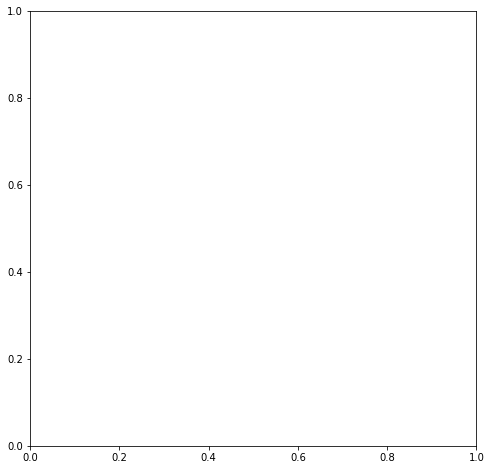

In [14]:
bothInningsCombined= pd.read_csv(str(matchinProgressDataFolder)+'inprogressOfInning'+str(inngs)+'_over1_50Records_LewisProjection_Combined.csv')          
print(len(bothInningsCombined))

import seaborn as sns
fig, ax1 = plt.subplots(figsize=(8,8))
#sns.set_theme(style="whitegrid")

#ax = sns.boxplot(x=tips["total_bill"])
#ax = sns.boxplot( y=["inning1Runs","inning2Runs"], data=bothInningsCombined)

df = bothInningsCombined["inning1Runs"]#,"inning2Runs"]] #pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['A','B','C','D'])

#sns.boxplot(x="variable", y="value", data=pd.melt(df))
#sns.distplot(df,bins=40,hist=True)
sns.histplot(data=df, x="inning1Runs")
#plt.ylabel("Runs")
#plt.xlabel("Innings Id")
plt.grid()
#plt.savefig('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/AfterOutlier_RunsBoxplot.jpeg')

plt.show()

## Over by Over Error BoxPlot

In [143]:

# pdfFigures = PdfPages(("C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/inprogressOfInning"+str(inngs)+"_abSErrorBoxPlot_SimWeighted_ProjectedTotal.pdf"))

# fig, axs = plt.subplots(10, 5, figsize=(30, 30))    
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
# fig.suptitle("Inning "+str(inngs)+" projected runs AbsError overwise with Weighted KNN")

# #fig.suptitle("Innings"+str(inngs)+" Runs sqrt plot with Inning1 & inning2 after remove ZIM_BAN Runs within "+str(stdTick)+" stdev Stats_matches"+str(len(inning1FeatureVectorCompleteTemp))+"_Inng1Mean_"+str(mean1)+"_Inng1Stdv_"+str(stdev1)+"_Inng2Mean_"+str(mean2)+"_Inng2Stdv_"+str(stdev2), fontsize=16)
# # 
# k=-1
# j=0
# for currOvr in range(1,51):
#     inning1FeatureVectorComplete1  = inningsInProgressContOversCombined[inningsInProgressContOversCombined['overId']==currOvr]
#     k=k+1
#     if(k==5):
#         k=0
#         j=j+1
#     sns.distplot(inning1FeatureVectorComplete1['absError'], hist=True, kde=False, 
#              bins=30, color = 'blue',
#              hist_kws={'edgecolor':'black'}, ax= axs[j,k])
#     #axs[j,k].set_title("innings Runs for Over"+ str(currOvr))
#     axs[j,k].set_title("Projected Total Error with InningsTotal for Over"+ str(currOvr)) 
#     #print('j,k', j,k)
# pdfFigures.savefig(fig)
# pdfFigures.close()

In [144]:
#inningsInProgressContOversCombined[inningsInProgressContOversCombined['matchId']==914207]['absError']#.head(2)  #.head()
#inningsInProgressOversCombined.columns

In [24]:
#projectionDataFile.isnan()
# is_NaN = projectionDataFile.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# del projectionDataFile[row_has_NaN]


In [33]:
inning1FeatureVectorComplete1 =inningsInProgressOversCombined

projectionDataFile =  inning1FeatureVectorComplete1[(inning1FeatureVectorComplete1['team1']!='Zimbabwe') & (inning1FeatureVectorComplete1['team2']!='Zimbabwe') & (inning1FeatureVectorComplete1['team1']!='Bangladesh') & (inning1FeatureVectorComplete1['team2']!='Bangladesh')] 
projectionDataFile = projectionDataFile.dropna()


#projectionDataFile = inningsInProgressContOversCombined
#pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/WriteUp/KDD/Data/inprogressOfInning2_allOversPorjectionResults_Combined.csv')


OverErrorAll=[]
OverError=[]
OverError.append('over')
OverError.append('MeanAbsError')
OverError.append('MeanAbsErrorLewis35')
OverError.append('MeanAbsErrorLewisMean')
OverError.append('MeanAbsErrorLewisMed')
OverError.append('MedianAbsError')
OverError.append('StdAbsError')
OverError.append('MeanPercentAbsError')
OverError.append('RMSE')

OverErrorAll.append(OverError)
    
    
for ovr in projectionDataFile['overId'].unique():
    OverError=[]
    projectedOver = projectionDataFile[projectionDataFile['overId']==ovr]
    meanAbs = projectedOver['absError'].mean()
    medianAbs = projectedOver['absError'].median()
    stdAbs = projectedOver['absError'].std()
    rmse = np.sqrt(mean_squared_error(projectedOver['projectedTotal'], projectedOver['inning'+str(inngs)+'Runs']))
    meanPercentAbs = np.zeros(len(projectedOver['absError']))
    
    for i in range(len(projectedOver['absError'])):
        if projectedOver['projectedTotal'].iloc[i]!=0:
            meanPercentAbs[i] = abs((projectedOver['absError'].iloc[i]/projectedOver['projectedTotal'].iloc[i])*100)
        else:
            meanPercentAbs[i] = abs((projectedOver['absError'].iloc[i])*100)
            
    #stdAbs = projectedOver['RMSE'].std()
    OverError.append(ovr)
    OverError.append(meanAbs)
    OverError.append(projectedOver['dlsProjectionError35'].mean())
    OverError.append(projectedOver['dlsProjectionErrorMean'].mean())
    OverError.append(projectedOver['dlsProjectionErrorMed'].mean())
    OverError.append(medianAbs)
    OverError.append(stdAbs)
                         
    OverError.append(int(np.mean(meanPercentAbs)))
    OverError.append(rmse)
    OverErrorAll.append(OverError)
    
OverErrorAllDf = pd.DataFrame(OverErrorAll)   
OverErrorAllDf.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/inprogressOfInning'+str(inngs)+'_projectionError_allMatches.csv',index=False,header=0)
                      #C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/WriteUp/KDD/Data/inprogressOfInning2_projectionError.csv', index=False, header=0)    
    

In [26]:
#inngs=1
OverErrorAllDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/inprogressOfInning'+str(inngs)+'_projectionError_allMatches.csv')
    #'C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/WriteUp/KDD/Data/inprogressOfInning1_projectionError.csv')    
OverErrorAllDf.head(20)   

over  MeanAbsError  MeanAbsErrorLewis35  MeanAbsErrorLewisMean  \
0      1     37.435551            31.942827              38.244283   
1      2     37.404787            31.836629              38.115505   
2      3     36.833507            32.422477              37.718002   
3      4     36.634755            32.963580              37.351717   
4      5     36.189386            33.609781              36.838710   
5      6     35.437045            33.924037              36.149844   
6      7     34.877211            34.215401              35.720083   
7      8     34.693028            35.018730              35.519251   
8      9     34.504683            36.079084              35.784599   
9     10     34.510926            36.232050              35.861602   
10    11     34.252862            36.507804              35.723205   
11    12     33.937565            36.466181              35.689906   
12    13     33.738814            36.687825              35.680541   
13    14     33.302810            36.653486              35.579605   
14    15     33.156087            36.840791              35.470343   
15    16     33.049948            36.888658              35.347555   
16    17     32.911550            37.021852              35.596254   
17    18     32.252083            36.313542              35.000000   
18    19     32.120959            36.191867              34.802920   
19    20     31.969760            36.253389              34.549531   

    MeanAbsErrorLewisMed  MedianAbsError  StdAbsError  MeanPercentAbsError  \
0              38.302495            31.5    26.791454                   16   
1              38.115505            32.0    26.751938                   16   
2              37.761707            31.0    26.480719                   16   
3              37.399584            31.0    26.260887                   16   
4              36.828304            30.0    25.898108                   16   
5              36.207076            30.0    25.402519                   15   
6              35.735692            30.0    25.222582                   15   
7              35.612903            30.0    25.045509                   15   
8              35.839750            29.0    24.945612                   15   
9              35.988554            29.0    24.995211                   15   
10             35.872008            29.0    24.818247                   15   
11             35.789802            29.0    24.603825                   15   
12             35.878252            29.0    24.335233                   15   
13             35.682622            29.0    24.553659                   14   
14             35.685744            29.0    24.614922                   14   
15             35.581686            29.0    24.574411                   14   
16             35.761707            29.0    24.652448                   14   
17             35.147917            28.0    24.208449                   14   
18             34.974974            27.0    24.356691                   14   
19             34.791449            27.0    24.283686                   14   

         RMSE  
0   46.026692  
1   45.978686  
2   45.356433  
3   45.066860  
4   44.493660  
5   43.593585  
6   43.034132  
7   42.781199  
8   42.570050  
9   42.604160  
10  42.291405  
11  41.910340  
12  41.592005  
13  41.368248  
14  41.286681  
15  41.177328  
16  41.113027  
17  40.319169  
18  40.303670  
19  40.139109

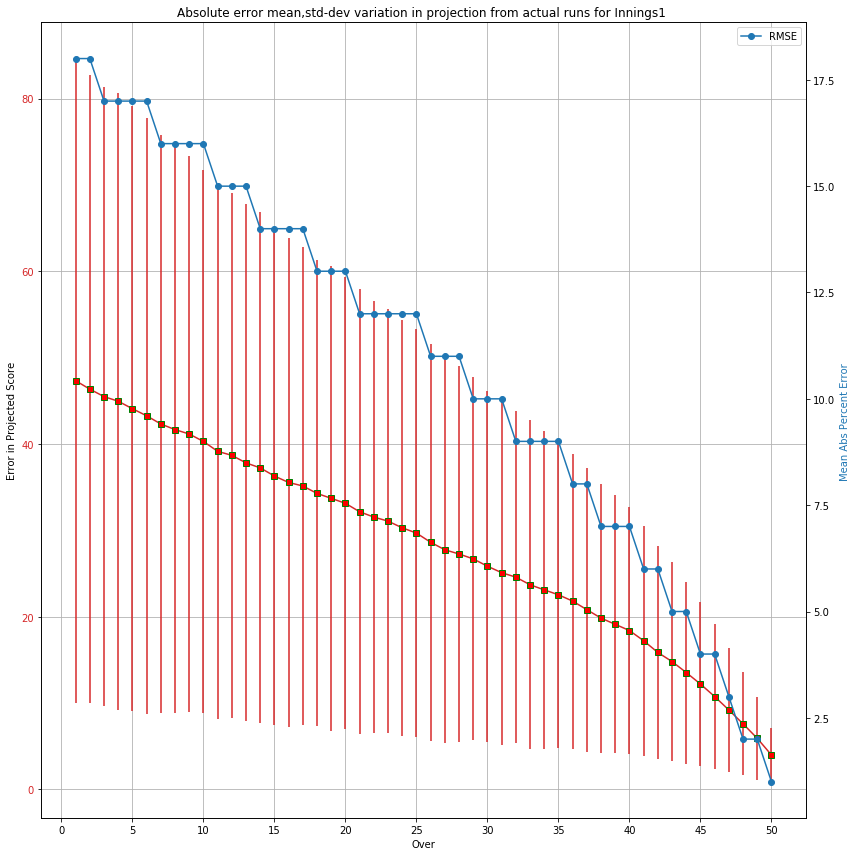

In [109]:
# #pdf2 = PdfPages(("C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/EDA/innings_2_prediction_with_Std"+str(stdTick)+"_remBAN_ZIM_results.pdf"))

# # Create some mock data

# #data1 = MAEDataForallOvers #np.exp(t)
# #data2 = data_length#np.sin(2 * np.pi * t)

# fig, ax1 = plt.subplots(figsize=(12,12))

# color = 'tab:red'
# ax1.set_xlabel('Over')
# ax1.set_ylabel('Error in Projected Score')#, color=color)
# #ax1.plot(np.arange(1,51), absErrorMeanForallOvers, color=color, label='MAE')

# ax1.errorbar(np.arange(1,51), OverErrorAllDf['MeanAbsError'],OverErrorAllDf['StdAbsError'], marker='s', mfc='red',mec='green', color=color,label='MedAE')#, label='MAE')




# ax1.tick_params(axis='y', labelcolor=color)
# ax1.grid()
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# #ax1.plot(np.arange(1,51), OverErrorAllDf['MedAbsError'], marker='x', color='green', label='medAbsError')

# #ax2.plot(np.arange(1,51), OverErrorAllDf['MeanPercentAbsError'], marker='x', color='green', label='MeanPercentAbsError')


# color = 'tab:blue'
# ax2.set_ylabel('Mean Abs Percent Error ', color=color)  # we already handled the x-label with ax1
# ax2.plot(np.arange(1,51), OverErrorAllDf['MeanPercentAbsError'],'go-', color=color, label='RMSE')

# ax2.tick_params(axis='y', labelcolor='black')
# #             #ax2.set
# plt.title("Absolute error mean,std-dev variation in projection from actual runs for Innings"+str(inngs)+" ")#similarity weighted")
# plt.xticks(np.arange(0,55,5))
# plt.legend(loc='upper right')


# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()
# #plt.savefig('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/inprogressOfInning'+str(inngs)+'_projectionErrorPlotSimWeighted_ProjectedTotal.png')
#             #C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/WriteUp/KDD/Figures/inning1_runsPrediction_errorPlotwithRMSE.png')

# #pdf2.savefig(fig)
# #pdf2.close()

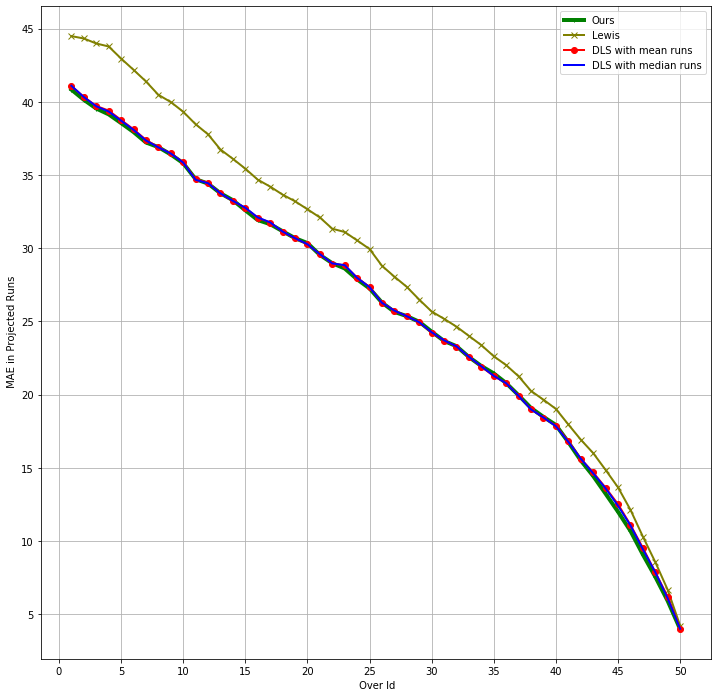

In [162]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax1 = plt.subplots(figsize=(12,12))

# Data
#df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# multiple line plot
plt.plot(np.arange(1,51) ,'MeanAbsError', data=OverErrorAllDf,label='Ours', marker='+',color='green', markersize=4, linewidth=4)

plt.plot( np.arange(1,51), 'MeanAbsErrorLewis35', data=OverErrorAllDf,label='Lewis', marker='x', color='olive', linewidth=2)
plt.plot( np.arange(1,51), 'MeanAbsErrorLewisMean', data=OverErrorAllDf,label='DLS with mean runs', marker='o', color='red', linewidth=2)
plt.plot( np.arange(1,51), 'MeanAbsErrorLewisMed', data=OverErrorAllDf,label='DLS with median runs', marker='', color='blue', linewidth=2)


#plt.plot( np.arange(1,51), 'RMSE', data=OverErrorAllDf, marker='', color='olive', linewidth=2, linestyle='dashed', label="EMSE")
plt.xticks(np.arange(0,55,5))
plt.ylabel(" MAE in Projected Runs")
plt.xlabel(" Over Id")
plt.grid()
plt.legend()
plt.savefig('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/ProjectionError_Inning_'+str(inngs)+'_Ours_Lewis.jpeg')



In [44]:
np.arange(0,55,5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [215]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""




import numpy as np
import pandas as pd
import urllib.request
import json
import csv
import os
from bs4 import BeautifulSoup
import sys
import seaborn as sns
import math

from datetime import date

from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch


from sklearn.linear_model import LinearRegression
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold # import KFold


from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import linear_model







columnsRemoveInng1=['matchId', 'year','team1', 'team2', 'venueCountry','homeTeam',
       'toss_winner_team', 'inning1Runs', 'inning1RunRate', 'innings1Wickets',
       'inning2Runs', 'inning2RunRate', 'inning2RunsExpected',
       'innings2Wickets', 'team2Cluster', 'team1Cluster', 'Continent','tossWinner','yearId'
       'tossWinner', 'yearId', 'bats1CurrOvrRuns', 'bats1CurrOvrBalls',
       'bats1TotalRuns', 'bats1TotalBalls', 
       'bats2CurrOvrRuns', 'bats2CurrOvrBalls', 'bats2TotalRuns',
       'bats2TotalBalls',
       'totalRunsScoredtillNow','bats1TotalBallsBeforeThisOvr','bats1TotalRunsBeforeThisOvr','bats2TotalBallsBeforeThisOvr','bats2TotalRunsBeforeThisOvr','totalRunsScoredCurrentOvr', 'inning1ProjectedScore'
                  , 'wicket',
       'wicket.1', 'wicket.2', 'wicket.3', 'wicket.4', 'wicket.5' ,'teamOpp','inning2ProjectedScoreSq',
                    
                    'totalRunsScoredBeforeThisOvr','onCreasebowlerOfTheOvr','onCreasebatsman1','onCreasebatsman2'
                 , 'overId'
     
                   ] #'onCreasebowlerOfTheOvr','overId', 'venueCountryCode',  'onCreasebatsman1', 'onCreasebatsman2',  , 'totalRunsScoredBeforeThisOvr'



columnsRemoveInng2=['matchId', 'year','team1', 'team2', 'venueCountry','homeTeam',
       'toss_winner_team',  'inning1RunRate',
       'inning2Runs', 'inning2RunRate', 'inning2RunsExpected',
       'innings2Wickets', 'team2Cluster', 'team1Cluster', 'Continent','tossWinner','yearId'
       'tossWinner', 'yearId', 'bats1CurrOvrRuns', 'bats1CurrOvrBalls',
       'bats1TotalRuns', 'bats1TotalBalls', 
       'bats2CurrOvrRuns', 'bats2CurrOvrBalls', 'bats2TotalRuns',
       'bats2TotalBalls',
       'totalRunsScoredtillNow','bats1TotalBallsBeforeThisOvr','bats1TotalRunsBeforeThisOvr',
     'bats2TotalBallsBeforeThisOvr','bats2TotalRunsBeforeThisOvr','totalRunsScoredCurrentOvr', 'inning2ProjectedScore'
         , 'wicket','wicket.1', 'wicket.2', 'wicket.3', 'wicket.4', 'wicket.5' ,'teamOpp','inning2ProjectedScoreSq',
                    
                         
                    'totalRunsScoredBeforeThisOvr','onCreasebowlerOfTheOvr','onCreasebatsman1','onCreasebatsman2'
                , 'overId', 'innings1Wickets','venueCountryCode'
     
                   ] # ,'remainingRuns', 'onCreasebowlerOfTheOvr', 'overId','venueCountryCode',  'onCreasebatsman1', 'onCreasebatsman2',  , 'totalRunsScoredBeforeThisOvr'










import random
matchinProgressDataFolder = 'C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/'
#matchinProgressDataFolder = str(matchinProgressDataFolder)+'innings2/'


#### concatenate all over records ###########

def CombinedInningsOvers(inngs):
    inningsInProgressOversCombined =pd.DataFrame()
    for inningsOver in range(1,51):
        df2 =  pd.read_csv(str(matchinProgressDataFolder)+'innings'+str(inngs)+'/inprogressOfInning'+str(inngs)+'_over'+str(inningsOver)+'Records_withAllEncodedFeatures.csv')  
        
        inningsInProgressOversCombined  =pd.concat([inningsInProgressOversCombined, df2], sort=True)

    inningsInProgressOversCombined.to_csv(str(matchinProgressDataFolder)+'inprogressOfInning'+str(inngs)+'_over1_50Records_withAllEncodedFeatures_Combined.csv',index=False, header=True)          
    
    return inningsInProgressOversCombined





#########    parameters settings     ################

kfolds= 10
stdTick=2
upperLimitRuns = 400
lowerLimitRuns = 165
constraintvar  ='inning1Runs'
inngs=1


k_neighbors=50

#targetVar =  'inning2ProjectedScore'   #  'inning1ProjectedScore'   #    'totalRunsScoredCurrentOvr' #   'inning1Runs'  #    'inning2RunsExpected' #       

dataConstraint = 'g'+str(lowerLimitRuns)+'_l'+str(upperLimitRuns)

matchinProgressDataFolderResult = str(matchinProgressDataFolder)+'innings'+str(inngs)+'/Results/'

#overSplit=False


oversData=[]
MAE_Records=[]
MAE_allOvers=[]
predData=[]

######### Parameter settings end here     ############



##########     Results output file writing starts here                   ##############

#fileNameOut = str(matchinProgressDataFolderResult)+"inprogressOfInning"+str(inngs)+"_50oversPrediction_LR_dataConstraintVar_"+str(constraintvar)+"_LR_data"+str(dataConstraint)+".csv"

# fileWriteOutput =  open(fileNameOut, "w") #str(matchinProgressDataFolderResult)+"inprogressOfInning1_50oversPrediction_LR"+str(dataConstraint)+".csv",'w')
# fileWriteOutput.write('overId,kFold, dataConstraint,targetVariable,MAE, RMSE \n')
# fileWriteOutput.close() 
#########   Output file header writing ends here        ##############


#inningsOver= 1






inningStartFeatureVector = pd.read_csv(str(matchinProgressDataFolder)+'innings'+str(inngs)+'/inprogressOfInning'+str(inngs)+'_over1Records_playerClustCount.csv')
                                       

print('Before', len(inningStartFeatureVector))
print('min', inningStartFeatureVector['inning1Runs'].min())
print('max', inningStartFeatureVector['inning1Runs'].max())
print('std', inningStartFeatureVector['inning1Runs'].std())
print('Avg', inningStartFeatureVector['inning1Runs'].mean())  




inningFeatureVectorOver1 = inningStartFeatureVector[(inningStartFeatureVector['team1']!='Zimbabwe') & (inningStartFeatureVector['team2']!='Zimbabwe') & (inningStartFeatureVector['team1']!='Bangladesh') & (inningStartFeatureVector['team2']!='Bangladesh')] 


stdev1 = int(inningFeatureVectorOver1['inning1Runs'].std())
stdev2 = int(inningFeatureVectorOver1['inning2Runs'].std())
mean1 = int(inningFeatureVectorOver1['inning1Runs'].mean())
mean2 = int(inningFeatureVectorOver1['inning2Runs'].mean())



inningFeatureVectorOverIn = inningFeatureVectorOver1[(inningFeatureVectorOver1['inning1Runs']>mean1 -(stdTick*stdev1)) & (inningFeatureVectorOver1['inning1Runs']<mean1+(stdTick*stdev1))].copy()
inning1FeatureVectorCompleteNew = inningFeatureVectorOverIn[(inningFeatureVectorOverIn['inning2Runs']>mean2 -(stdTick*stdev2)) & (inningFeatureVectorOverIn['inning2Runs']<mean2+(stdTick*stdev2))].copy()



print('Before', len(inning1FeatureVectorCompleteNew))
print('min', inning1FeatureVectorCompleteNew['inning1Runs'].min())
print('max', inning1FeatureVectorCompleteNew['inning1Runs'].max())
print('std', inning1FeatureVectorCompleteNew['inning1Runs'].std())
print('Avg', inning1FeatureVectorCompleteNew['inning1Runs'].mean())  

print('min2', inning1FeatureVectorCompleteNew['inning2Runs'].min())
print('max2', inning1FeatureVectorCompleteNew['inning2Runs'].max())
print('std2', inning1FeatureVectorCompleteNew['inning2Runs'].std())
print('Avg2', inning1FeatureVectorCompleteNew['inning2Runs'].mean())  






matchIdsSelectData = inning1FeatureVectorCompleteNew['matchId'].unique()
# for i in range(len(matchIdsSelectData)):
#     print(matchIdsSelectData[i])
print(len(matchIdsSelectData))


MAEDataForallOvers=[]
absErrorMeanForallOvers=[]
absErrorDevForallOvers=[]
absErrorPercentForallOvers=[]
def predictRunsForMatch(currMatchId,inningsId,overSplit):
    j=0
    k=-1
    notFound=1
    
    targetVar =  'inning'+str(inningsId)+'ProjectedScore'  
    
    for i in range(1):
        k=k+1
        inngs = inningsId

        
        randomNum = random.randint(0,len(matchIdsSelectData))
        notFound=1
        
        currMatch = currMatchId #matchIdsSelectData[randomNum]   # # # 66276 #902647 #   
       
        if overSplit==True and (currMatchId not in matchIdsSelectData):
            print('Match Id not found in filtered Matches')
            notFound=0
            return notFound,0
            #break
        elif overSplit==True and (currMatchId in matchIdsSelectData):
            #overSplit=True
            inningsInProgressOversCombined = CombinedInningsOvers(inngs)
            predData=[]
        if(1==1):
            inningsInProgressOversCombined = CombinedInningsOvers(inngs)

            inningsInProgressOversCombined =  pd.read_csv(str(matchinProgressDataFolder)+'inprogressOfInning'+str(inngs)+'_over1_50Records_withAllEncodedFeatures_Combined.csv')          
            
            #CombinedInningsOvers(inngs)
            print('match length', len(inningsInProgressOversCombined[inningsInProgressOversCombined['matchId']==currMatch]))
            
            inningsInProgressOversCombined = CombinedInningsOvers(inngs)
            
            
#            for inningsOver in range(1,len(inningsInProgressOversCombined[inningsInProgressOversCombined['matchId']==currMatch])+1):
#                maxVal = inningsInProgressOversCombined['overId'].max()
#                minVal = inningsInProgressOversCombined['overId'].min()
#                inningsInProgressOversCombined['overId'] = round((inningsInProgressOversCombined['overId']- minVal)/ (maxVal- minVal),2)        
#    
#           
            
            
            for inningsOver in range(1,len(inningsInProgressOversCombined[inningsInProgressOversCombined['matchId']==currMatch])+1):
                
                #oversData.append(inningsOver)
                #print('overProcessing', inningsOver)
                predOver = inningsOver
                #inningsInProgressOversCombined #
               

                inningsInProgressOversCombined['inning2ProjectedScoreSq'] =0 
                #inningsInProgressOversCombined['inning2ProjectedScoreSq'] = inningsInProgressOversCombined['inning2ProjectedScore']
                
                #inningsInProgressOversCombined['inning2ProjectedScoreSq'] = inningsInProgressOversCombined['inning2ProjectedScoreSq']**0.5
                runsConvert =1 #2
               
                inning1FeatureVectorComplete = inningsInProgressOversCombined[inningsInProgressOversCombined['overId']==inningsOver].copy() # pd.read_csv(str(matchinProgressDataFolder)+'innings'+str(inngs)+'/inprogressOfInning'+str(inngs)+'_over'+str(inningsOver)+'Records_withAllEncodedFeatures.csv')  
                
                inning1FeatureVectorCompleteNew = inning1FeatureVectorComplete[(inning1FeatureVectorComplete['team1']!='Zimbabwe') & (inning1FeatureVectorComplete['team2']!='Zimbabwe') & (inning1FeatureVectorComplete['team1']!='Bangladesh') & (inning1FeatureVectorComplete['team2']!='Bangladesh')] 


                stdev1 = int(inning1FeatureVectorCompleteNew['inning1Runs'].std())
                stdev2 = int(inning1FeatureVectorCompleteNew['inning2Runs'].std())
                mean1 = int(inning1FeatureVectorCompleteNew['inning1Runs'].mean())
                mean2 = int(inning1FeatureVectorCompleteNew['inning2Runs'].mean())


                inning1FeatureVectorCompleteIn = inning1FeatureVectorCompleteNew[(inning1FeatureVectorCompleteNew['inning1Runs']>mean1 -(stdTick*stdev1)) & (inning1FeatureVectorCompleteNew['inning1Runs']<mean1+(stdTick*stdev1))].copy()
                inning1FeatureVectorComplete = inning1FeatureVectorCompleteIn[(inning1FeatureVectorCompleteIn['inning2Runs']>mean2 -(stdTick*stdev2)) & (inning1FeatureVectorCompleteIn['inning2Runs']<mean2+(stdTick*stdev2))].copy()

                
                
                if inngs==2:
                    inning1FeatureVectorComplete['remainingRuns'] = 0
                    inning1FeatureVectorComplete['remainingRuns'] = inning1FeatureVectorComplete['inning1Runs'] - inning1FeatureVectorComplete['totalRunsScoredBeforeThisOvr']
                    #print(inning1FeatureVectorComplete['remainingRuns'].head())
                
                
                #inning1FeatureVectorComplete['teamOpp']= inning1FeatureVectorComplete['team1'].astype(str) +" "+inning1FeatureVectorComplete['team2']
                
                #print(inning1FeatureVectorComplete.columns)
                
                
#                 labels = inning1FeatureVectorComplete['teamOpp'].astype('category').cat.categories.tolist()
#                 replace_continent_comp = {'teamOpp' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
#                 inning1FeatureVectorComplete .replace(replace_continent_comp, inplace=True)
#                 

                labels = inning1FeatureVectorComplete['team1'].astype('category').cat.categories.tolist()
                replace_continent_comp = {'team1' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
                inning1FeatureVectorComplete .replace(replace_continent_comp, inplace=True)
#                 
                
                
                labels = inning1FeatureVectorComplete['team2'].astype('category').cat.categories.tolist()
                replace_continent_comp = {'team2' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
                inning1FeatureVectorComplete .replace(replace_continent_comp, inplace=True)
                
                
                #print(inning1FeatureVectorComplete['teamOpp'].unique())
                #print(len(inning1FeatureVectorComplete['teamOpp'].unique()))
                #break
#                 
                
                #print('Before', len(inning1FeatureVectorComplete))

                ##############  categorical variable to one-hot encoding ##########################   
                inning1FeatureVectorComplete['team1Cluster'] = pd.Categorical(inning1FeatureVectorComplete['team1Cluster'])
                inning1FeatureVectorComplete['team2Cluster'] = pd.Categorical(inning1FeatureVectorComplete['team2Cluster'])
                
                inning1FeatureVectorComplete['team1'] = pd.Categorical(inning1FeatureVectorComplete['team1'])
                inning1FeatureVectorComplete['team2'] = pd.Categorical(inning1FeatureVectorComplete['team2'])
                #inning1FeatureVectorComplete['teamOpp'] = pd.Categorical(inning1FeatureVectorComplete['teamOpp'])
                inning1FeatureVectorComplete['Continent'] = pd.Categorical(inning1FeatureVectorComplete['Continent'])
                inning1FeatureVectorComplete['year'] = pd.Categorical(inning1FeatureVectorComplete['year'])
                #inning1FeatureVectorComplete['venueCountryCode'] = pd.Categorical(inning1FeatureVectorComplete['venueCountryCode'])
                #inning1FeatureVectorComplete['tossWinner'] = pd.Categorical(inning1FeatureVectorComplete['tossWinner'])


                dfDummies1 = pd.get_dummies(inning1FeatureVectorComplete['team1'], prefix = 'team1c')
                dfDummies2 = pd.get_dummies(inning1FeatureVectorComplete['team2'], prefix = 'team2c')
                dfDummies3 = pd.get_dummies(inning1FeatureVectorComplete['Continent'], prefix = 'VenueClass')
                #dfDummies4 = pd.get_dummies(inning1FeatureVectorComplete['year'], prefix = 'myear') #,dfDummies4
                #dfDummies5 = pd.get_dummies(inning1FeatureVectorComplete['overId'], prefix = 'Over') #,dfDummies4
                #dfDummies6 = pd.get_dummies(inning1FeatureVectorComplete['tossWinner'], prefix = 'tossWinnerTeam') #,dfDummies4
                
                
                inning1FeatureVectorComplete = pd.concat([inning1FeatureVectorComplete,dfDummies1,dfDummies2 ,dfDummies3], axis=1) #dfDummies4,#dfDummies5,  ,dfDummies6

                #inning1FeatureVectorComplete = inning1FeatureVectorComplete.drop(['team1c_4'], axis=1)
                #inning1FeatureVectorComplete = inning1FeatureVectorComplete.drop(['team2c_4'], axis=1)
                #inning1FeatureVectorComplete = inning1FeatureVectorComplete.drop(['VenueClass_2'], axis=1)
                
                #print(inning1FeatureVectorComplete.columns)
                
                currentOvrWickets= inning1FeatureVectorComplete[( inning1FeatureVectorComplete['matchId']==currMatch) & ( inning1FeatureVectorComplete['overId']==inningsOver)]['RemainingWickets'].iloc[0]



                inning1FeatureVectorComplete[targetVar]=  inning1FeatureVectorComplete[targetVar].astype(int)
                y = inning1FeatureVectorComplete[targetVar]
                
#                 baselinePrediction=[]
#                 for i in range(len(inning1FeatureVectorComplete)):
#                     thisTeam1 =inning1FeatureVectorComplete['team1'].iloc[i]
#                     thisTeam2 =inning1FeatureVectorComplete['team2'].iloc[i]
                            
#                     meanVal= inning1FeatureVectorComplete[(inning1FeatureVectorComplete['team1']==thisTeam1) & (inning1FeatureVectorComplete['team2']==thisTeam2)][targetVar].mean()
#                     baselinePrediction.append(round(meanVal,2))
 
                y = y.astype(int)
                if(overSplit==True):
                    inning1FeatureVector_test  =   inning1FeatureVectorComplete[( inning1FeatureVectorComplete['matchId']==currMatch) & ( inning1FeatureVectorComplete['overId']==inningsOver)].copy()
                    inning1FeatureVector_test  = inning1FeatureVector_test[inning1FeatureVector_test['RemainingWickets']==currentOvrWickets].copy() 
                    #inning1FeatureVector_test  =  inning1FeatureVectorComplete[(inning1FeatureVectorComplete['matchId']==currMatch)& (inning1FeatureVectorComplete['overId']==inningsOver)]

                    ytest                      =  inning1FeatureVector_test[targetVar]
                    #inning1FeatureVector_train,inning1FeatureVector_Y, ytrainTarget,ytest = train_test_split(inning1FeatureVector_test,ytestVar ,test_size=0.1) 
                    #inning1FeatureVector_train =  inning1FeatureVectorComplete[inning1FeatureVectorComplete['matchId']!=currMatch].copy()
                    inning1FeatureVector_train =  inning1FeatureVectorComplete[(inning1FeatureVectorComplete['matchId']!=currMatch) & ((inning1FeatureVectorComplete['RemainingWickets']==currentOvrWickets))].copy()# & (inning1FeatureVectorComplete['RemainingWickets']==currentOvrWickets-1))].copy()
                    
                    ytrain                     =  inning1FeatureVector_train[targetVar]
                 
                    if(inngs==2):
                        inning1FeatureVector_train =  inning1FeatureVector_train[inning1FeatureVector_train.columns[~inning1FeatureVector_train.columns.isin(columnsRemoveInng2)]]#,'totalRunsScoredCurrentOvr','totalRunsScoredtillNow'])]]#'batsmenOfClust_4','bowlerOfClust_4',
                        inning1FeatureVector_test =  inning1FeatureVector_test[inning1FeatureVector_test.columns[~inning1FeatureVector_test.columns.isin(columnsRemoveInng2)]]#,'totalRunsScoredCurrentOvr','totalRunsScoredtillNow'])]]#'batsmenOfClust_4','bowlerOfClust_4',
                        #print(inning1FeatureVector_train.columns)
                        #break
                    else:
                        inning1FeatureVector_train =  inning1FeatureVector_train[inning1FeatureVector_train.columns[~inning1FeatureVector_train.columns.isin(columnsRemoveInng1)]]#,'totalRunsScoredCurrentOvr','totalRunsScoredtillNow'])]]#'batsmenOfClust_4','bowlerOfClust_4',
                        inning1FeatureVector_test =  inning1FeatureVector_test[inning1FeatureVector_test.columns[~inning1FeatureVector_test.columns.isin(columnsRemoveInng1)]]#,'totalRunsScoredCurrentOvr','totalRunsScoredtillNow'])]]#'batsmenOfClust_4','bowlerOfClust_4',
                        
                        
#                     if(targetVar=='totalRunsScoredCurrentOvr'):
#                         inning1FeatureVector_train =  inning1FeatureVector_train[inning1FeatureVector_train.columns[~inning1FeatureVector_train.columns.isin(['totalRunsScoredCurrentOvr'])]]#,'totalRunsScoredCurrentOvr','totalRunsScoredtillNow'])]]#'batsmenOfClust_4','bowlerOfClust_4',
#                         inning1FeatureVector_test =  inning1FeatureVector_test[inning1FeatureVector_test.columns[~inning1FeatureVector_test.columns.isin(['totalRunsScoredCurrentOvr'])]]#,'totalRunsScoredCurrentOvr','totalRunsScoredtillNow'])]]#'batsmenOfClust_4','bowlerOfClust_4',
                    #print(inning1FeatureVector_train.columns)
                    #print(inning1FeatureVector_train['overId'].head(3))
                    
                    #break
                else:
                
                    if(inngs==1):
                        inning1FeatureVector_trainTest = inning1FeatureVectorComplete[inning1FeatureVectorComplete.columns[~inning1FeatureVectorComplete.columns.isin(columnsRemoveInng1)]]
                        #inning1FeatureVectorComplete.columns.isin(['matchId','year','venueCountry','team1','team2','homeTeam','toss_winner_team','team1Cluster','team2Cluster','Continent','overId','tossWinner','yearId','venueCountryCode','venueCountry','team1','team2','homeTeam','toss_winner_team','inning1Runs','inning1ProjectedScore','onCreasebowlerOfTheOvr','wicket','wicket.1','wicket.2','wicket.3','wicket.4','wicket.5','innings1Wickets','inning1RunRate','inning2Runs','innings2Wickets','inning2RunRate','zScore'])]]#,'totalRunsScoredCurrentOvr','totalRunsScoredtillNow'])]]#'batsmenOfClust_4','bowlerOfClust_4',
                    elif(inngs==2):
                        inning1FeatureVector_trainTest = inning1FeatureVectorComplete[inning1FeatureVectorComplete.columns[~inning1FeatureVectorComplete.columns.isin(columnsRemoveInng2)]]#,'totalRunsScoredCurrentOvr','totalRunsScoredtillNow'])]]#'batsmenOfClust_4','bowlerOfClust_4',
                    
                    #print(inning1FeatureVector_trainTest.columns)
#               
                if overSplit==False:
                    MAE_overs,resultDataFrame = RegressionForkFold(inning1FeatureVector_trainTest,y,inningsOver,kfolds,targetVar,fileNameOut,runsConvert)#,fileWriteOutput)

    # #                 #MAE_overs,resultDataFrame =KNNForkFold(inning1FeatureVector_trainTest,y,inningsOver,kfolds,k_neighbors,targetVar)#,fileWriteOutput)
    # #                 #MAE_overs = RegressionForRandomSplit(inning1FeatureVector_train,inning1FeatureVector_testData,ytrain,ytest,y,predOver,targetVar,predOver)#,fileWrite):

                    resultDataFrame['baselinePrediction'] =0
                    resultDataFrame['baselinePrediction'] = baselinePrediction
                    #resultDataFrame.to_csv(str(matchinProgressDataFolder)+'Results/inprogress_Inng'+str(inngs)+'_Over_'+str(inningsOver)+'_Combined_'+str(targetVar)+'_Result_teamIndInfo_'+str(stdTick)+'_LR_23Jan_remCurrentInfo.csv', index=False)

                    absErrorMeanForallOvers.append(np.mean(resultDataFrame['AbsError']))
                    absErrorDevForallOvers.append(np.std(resultDataFrame['AbsError']))
                    absErrorPercentForallOvers.append(MAE_overs)
                else:
                    regStart = time.time()
                    print("Regression starts" )#, regStart)
                    yprediction = RegressionFor1Type(inning1FeatureVector_train,inning1FeatureVector_test,ytrain,ytest)
                    #meanAbsError, 
                    predData.append(yprediction[0]) #= yprediction# 
                    print("Regression ends" , time.time() - regStart)
                    #MAE_allOvers.append(meanAbsError)
     
     

        print('predict Runs', predData)
        #inningFeatureVectorCompletePlayerId.to_csv((str(matchinProgressDataFolderResult)+"inprogressOfInning_matchId_"+str(currMatch)+"_"+str(inngs)+"_LR_targetVar_"+str(targetVar)+".csv"))#MAE%age
        return notFound,predData

        
            #################    For overwise predicton of single match :::::::: Ends here  #########

    
  
   

   
def findContributionForTeambyProjection(currMatchId,inningsId):
    
    #inningFeatureVectorCompletePlayerId = pd.read_csv(str(matchinProgressDataFolder)+'innings'+str(inningsId)+'/inprogress_Inng'+str(inningsId)+'_over1_50Records_2001_19_withBeforeOverInfo.csv')  
  
    singleMatch=True
    strtTime = time.time()
    print("prediction  start")
    matchFound,predictedData = predictRunsForMatch(currMatchId,inningsId,singleMatch)
    print('prediction done In time', time.time()- strtTime)
    
    print('matchFound', matchFound)
    if(matchFound!=0):
#         inningFeatureVectorCompletePlayerId = inningFeatureVectorCompletePlayerId[inningFeatureVectorCompletePlayerId['matchId']==currMatchId]#.copy()
        
#         inningFeatureVectorCompletePlayerId.drop_duplicates(keep='first',subset=['overId'], inplace=True)
#         print('Length match, predicted',len(inningFeatureVectorCompletePlayerId), len(predictedData))
#         inningFeatureVectorCompletePlayerId['runPredicted'] = 0
       
#         inningFeatureVectorCompletePlayerId['runPredicted'] = predictedData
        

    
#         print('I am here in contribution func')
        #inningFeatureVectorCompletePlayerId.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/yearNew/contribution_inngs'+str(inningsId)+'_match_'+str(currMatchId)+'.csv', index=False)
       
    #(str(matchinProgressDataFolder)+'Results/inprogressOfInning_matchId_'+str(currMatchId)+'_'+str(inningsId)+'_LR__targetVar_PrjectedScore_allOvers_Contribution.csv', index=False)  
        return 1,1#teamPlayers,teamPlayersContribution
    
    else:
        return 0,0





from sklearn.linear_model import LinearRegression
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold # import KFold


def RegressionFor1Type(inning1FeatureVector_train,inning1FeatureVector_testData,ytrain,ytest):#,fileWrite):
    
#    MAE_array=[]
#    RMSE_array=[]
#    MA_array=[]
    
    inning1FeatureVector_X,inning1FeatureVector_Y, ytrain,ytest = inning1FeatureVector_train, inning1FeatureVector_testData,ytrain,ytest

    #reg = linear_model.Ridge(alpha=.8).fit(inning1FeatureVector_X, ytrain)#   LinearRegression().normalize=True
    #y_pred = reg.predict(inning1FeatureVector_Y)
    if len(ytrain)>50:
        K_neighbors=50
    if len(ytrain)>20:
        K_neighbors=20
    else:
        K_neighbors= len(ytrain)

    #inning1FeatureVector_test = inning1FeatureVector_Y.copy()
#     inning1FeatureVector_test[targetVar]=0
#     inning1FeatureVector_test[targetVar] = ytest #**runsConvert

    
    #n_neighbors=K_neighbors,
    nbrs = NearestNeighbors(n_neighbors=K_neighbors,algorithm='ball_tree', metric='euclidean').fit(inning1FeatureVector_X) 

    distances, indices = nbrs.kneighbors(inning1FeatureVector_Y)

#     #indices     
    inning1FeatureVector_train[targetVar]=0
    inning1FeatureVector_train[targetVar] = ytrain #**runsConvert
    similarity =0
    inning1RunsPredicted=[]
    for i in range(len(inning1FeatureVector_Y)):
        runsScored=0
        runsPredArray=[]
        for k in range((K_neighbors)):#K_neighbors
            #similarity = 1-(distances[i][k])
            #print(similarity)
            runsPredArray.append(inning1FeatureVector_train[targetVar].iloc[indices[i][k]])
            #runsScored  = runsScored + inning1FeatureVector_train['inning1Runs'].iloc[indices[i][k]]
        inning1RunsPredicted.append(int(np.mean(runsPredArray)))   
        #inning1RunsPredicted.append(int(runsScored/5))

#     #print('Length of predicted data:', len(inning1RunsPredicted))
#     inning1FeatureVector_test['inning1RunsPredicted'] = inning1RunsPredicted
    y_pred = inning1RunsPredicted
    #y_pred  = y_pred.astype(int)

   # inning1FeatureVector_test['inning1RunsPred'] = y_pred #**runsConvert


  
    return y_pred #np.array(inning1FeatureVector_test['AbsError']),y_pred
     
 
    

    
#manOfMatchRecords  = pd.read_csv('F:/LUMS/Cricket Data/manOfTheMatch_ODI_2003_15.csv')

#manOfMatchPredDataFile = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predictionData_matchiIds_File.csv','w')
#manOfMatchPredDataFile.write('matchId,manOfTheMatch,matchFound,momPos\n')
#

 #=============================================================================
matchIds =[423793,426428,446957,455234,467886,461569,439151,578625,65662,256614,430887,520601,64859,64861,578618,350046,433596,433564,239917,902643,238198,489217,667649,65638,249213,291365,518965,446968,
           211425,430889,860277,257771,319134,249748,433586,343732,514026,489224,65642,667897,656437,
           386534,636162,567358,293078,249752,597925,474469,860269,415282,461569]
 
 #=============================================================================



#inningsData = pd.read_csv(str(matchinProgressDataFolder)+'innings1/inprogressOfInning1_over1Records_playerClustCount.csv')  


momDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predicted_currentAll.csv')


import time
#inningsData = inningsData[:2]#[(inningsData['year']==2019) | (inningsData['year']==2018)]..copy()
momDf = momDf[momDf['year']>2014].copy()
print('Matches in 18_19', len(momDf))
matchIdsReq = [1144516,1144987,895813,914235,1022357,1098208,1098210,1120289,1144509,1144998,1152845,1153695,902645,932853]

#matchIdsReq =[1072310,1072311,1072312,1072313,1072314]
for matchId in range(1): #len(momDf)):#(1020035,1020036):#  len(manOfMatchRecords)):
    if 1==1:#try:
        currMatchId = 1098208  #1120289 #1144516#914235 #momDf['matchId'].iloc[matchId] #inningsData['matchId'].iloc[match] #238189 # 237568# 247505 #  #int(len(manOfMatchRecords)
        manOfMatch =  0 #manOfMatchRecords['mom_id'].iloc[match] #  33335 # 36185# 49289 # 

        print('current Match id', currMatchId,'MoM', manOfMatch)
        team1Players,team1PlayersContribution  = findContributionForTeambyProjection(int(currMatchId),1) # findContributionForTeam(int(currMatchId),1)

        team2Players,team2PlayersContribution  = findContributionForTeambyProjection(int(currMatchId),2) #findContributionForTeam(int(currMatchId),2)
#     except:
#         print('some Error')



Before 1668
min 35
max 481
std 64.09529867419838
Avg 249.2763788968825
Before 1110
min 133
max 375
std 50.348603842312215
Avg 255.52252252252254
min2 112
max2 332
std2 47.10406283024467
Avg2 226.22432432432433
1110
Matches in 18_19 101
current Match id 1098208 MoM 0
prediction  start
match length 50
Regression starts
Regression ends 0.004996538162231445
Regression starts
Regression ends 0.005997180938720703
Regression starts
Regression ends 0.00499725341796875
Regression starts
Regression ends 0.003996372222900391
Regression starts
Regression ends 0.005994319915771484
Regression starts
Regression ends 0.0039980411529541016
Regression starts
Regression ends 0.004997730255126953
Regression starts
Regression ends 0.004997730255126953
Regression starts
Regression ends 0.003997802734375
Regression starts
Regression ends 0.0049974918365478516
Regression starts
Regression ends 0.0039975643157958984
Regression starts
Regression ends 0.004000425338745117
Regression starts
Regression ends 0.0049